<a href="https://colab.research.google.com/github/Flowtacon/MIT-CS_Decission_trees-_Random_forest.ipynb/blob/main/MIT_%7C_WEEK_5_%7C_CS_Decission_trees%2C_Random_forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
df = pd.read_csv("/content/drive/MyDrive/soukromé/MIT /WEEK 5/Dataset - Hospital LOS Prediction.csv")

Mounted at /content/drive


In [4]:
df.head(1)

,Available Extra Rooms in Hospital,Department,Ward_Facility_Code,doctor_name,staff_available,patientid,Age,gender,Type of Admission,Severity of Illness,health_conditions,Visitors with Patient,Insurance,Admission_Deposit,Stay (in days)
0,4,gynecology,D,Dr Sophia,0,33070,41-50,Female,Trauma,Extreme,Diabetes,4,Yes,2966.408696,8


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 15 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Available Extra Rooms in Hospital  500000 non-null  int64  
 1   Department                         500000 non-null  object 
 2   Ward_Facility_Code                 500000 non-null  object 
 3   doctor_name                        500000 non-null  object 
 4   staff_available                    500000 non-null  int64  
 5   patientid                          500000 non-null  int64  
 6   Age                                500000 non-null  object 
 7   gender                             500000 non-null  object 
 8   Type of Admission                  500000 non-null  object 
 9   Severity of Illness                500000 non-null  object 
 10  health_conditions                  348112 non-null  object 
 11  Visitors with Patient              5000

In [6]:
df.shape

(500000, 15)

In [7]:
df["Visitors with Patient"].nunique()

28

In [8]:
df.shape

(500000, 15)

In [9]:
df["Visitors with Patient"].value_counts().to_list()

[204716,
 171986,
 53474,
 25930,
 12495,
 8633,
 3922,
 2909,
 2873,
 2729,
 2111,
 2107,
 1647,
 851,
 822,
 714,
 412,
 313,
 209,
 203,
 190,
 168,
 146,
 127,
 126,
 110,
 45,
 32]

In [10]:
df["Visitors with Patient"].head(5)

,Visitors with Patient
0,4
1,2
2,2
3,4
4,2


In [11]:
print(df["Visitors with Patient"].mean())
print(df["Visitors with Patient"].std())
print(df["Visitors with Patient"].max())
print(df["Visitors with Patient"].min())


3.549414
2.241054283423417
32
0


(array([2.61123e+05, 2.10411e+05, 1.54640e+04, 7.24900e+03, 3.67200e+03,
        9.35000e+02, 5.03000e+02, 4.84000e+02, 0.00000e+00, 1.59000e+02]),
 array([ 0. ,  3.2,  6.4,  9.6, 12.8, 16. , 19.2, 22.4, 25.6, 28.8, 32. ]),
 <BarContainer object of 10 artists>)

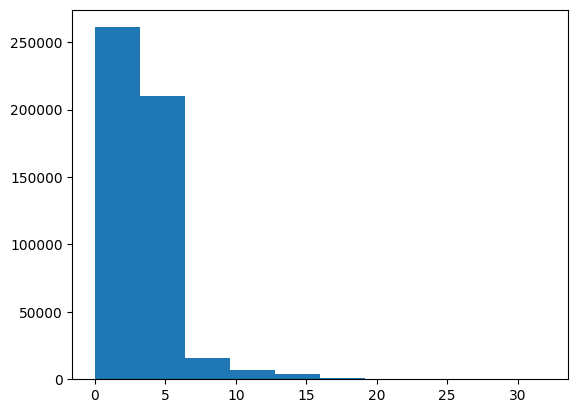

In [12]:
plt.hist(data=df, x="Visitors with Patient")

In [13]:
df.tail(1)

,Available Extra Rooms in Hospital,Department,Ward_Facility_Code,doctor_name,staff_available,patientid,Age,gender,Type of Admission,Severity of Illness,health_conditions,Visitors with Patient,Insurance,Admission_Deposit,Stay (in days)
499999,3,gynecology,F,Dr Sophia,3,45008,41-50,Female,Trauma,Moderate,Heart disease,4,Yes,4713.868519,10


#**ZADÁNÍ:**
- As a Data Scientist, you have been hired by HealthPlus to analyze the data, find out what factors affect the **LOS** --> **Length of stay** the most, and come up with a machine learning model which can predict the LOS of a patient using the data available during admission and after running a few tests. Also, bring about useful insights and policies from the data, which can help the hospital to improve their health care infrastructure and revenue.

<Axes: xlabel='Department', ylabel='count'>

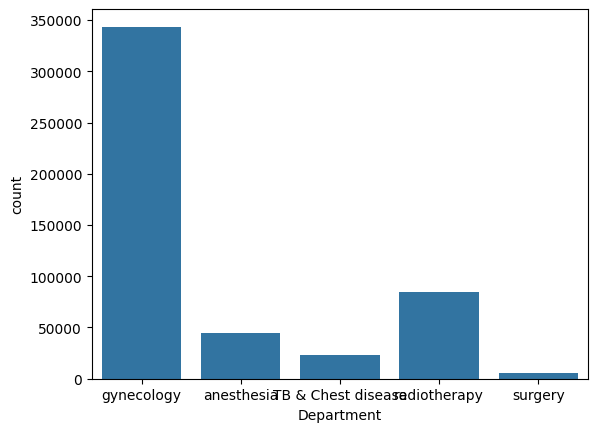

In [14]:
sns.countplot(data=df, x="Department")

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 15 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Available Extra Rooms in Hospital  500000 non-null  int64  
 1   Department                         500000 non-null  object 
 2   Ward_Facility_Code                 500000 non-null  object 
 3   doctor_name                        500000 non-null  object 
 4   staff_available                    500000 non-null  int64  
 5   patientid                          500000 non-null  int64  
 6   Age                                500000 non-null  object 
 7   gender                             500000 non-null  object 
 8   Type of Admission                  500000 non-null  object 
 9   Severity of Illness                500000 non-null  object 
 10  health_conditions                  348112 non-null  object 
 11  Visitors with Patient              5000

In [16]:
# Protože necheme aby naše decission trees nebo random forrests byly závislé na specifických IDs pacientů tak je nebudeme přidávat do našich stromů... a proto to před tréninkem dropneme z datasetu.
df["patientid"].value_counts()

,count
patientid,
44572,21
125695,21
126623,21
126719,21
125664,19
...,...
53872,1
121277,1
97293,1


In [17]:
df = df.drop(columns=["patientid"])

In [18]:
df.head(1)

,Available Extra Rooms in Hospital,Department,Ward_Facility_Code,doctor_name,staff_available,Age,gender,Type of Admission,Severity of Illness,health_conditions,Visitors with Patient,Insurance,Admission_Deposit,Stay (in days)
0,4,gynecology,D,Dr Sophia,0,41-50,Female,Trauma,Extreme,Diabetes,4,Yes,2966.408696,8


In [19]:
# Musíme zkontrolovat jestli jsou v našem datasetu duplikovaná data, pokud nejsou tka nám příkaz df.duplicated().sum() vyhodí 0 pokud ano tak jiné číslo
df.duplicated().sum()

np.int64(0)

In [20]:
df.describe().T # Tímto data transpozujeme a z řádků se stanou sloupce tak a't to můžeme rychleji přečíst

,count,mean,std,min,25%,50%,75%,max
Available Extra Rooms in Hospital,500000.0,3.638800,2.698124,0.000000,2.000000,3.000000,4.000000,24.00000
staff_available,500000.0,5.020470,3.158103,0.000000,2.000000,5.000000,8.000000,10.00000
Visitors with Patient,500000.0,3.549414,2.241054,0.000000,2.000000,3.000000,4.000000,32.00000
Admission_Deposit,500000.0,4722.315734,1047.324220,1654.005148,4071.714532,4627.003792,5091.612717,10104.72639
Stay (in days),500000.0,12.381062,7.913174,3.000000,8.000000,9.000000,11.000000,51.00000


**Pozorování:**

Z dat vidíme, že průměrná doba strávená v nemocnici je 12,38 dní. ale může to být až 51 dnů. Zároveň můžeme vypozorovat, že v průměru máme:
- 3 volné pokoje, 5 zaměstnanců, 4 návštěvníky u pacoše, 4722$ za pobyt

v největší špičce ale nemáme v nemocnici žádný extra room, rovněž žádný staff *a tohle bychom měli chtít změnit aby právě nemocnice kapacity posílila vhodnou předpovědí a optimalizací zdrojů*

In [21]:
#Taky je vhodné vytvořit seznam kategorických proměnných v našem datasetu, aka nám to ukáže kolik poměry v rámci jedné katgorie, například na
#Kterém oddělení je nejvíce pacientů atd..
cat_col = ["Department", "Type of Admission", "Severity of Illness", "gender", "Insurance", "health_conditions", "doctor_name", "Ward_Facility_Code", "Age"]
for column in cat_col:
  print(df[column].value_counts(1)) # 1čka normalizuje počty
  print('-'*50)


Department
gynecology            0.686956
radiotherapy          0.168630
anesthesia            0.088358
TB & Chest disease    0.045780
surgery               0.010276
Name: proportion, dtype: float64
--------------------------------------------------
Type of Admission
Trauma       0.621072
Emergency    0.271568
Urgent       0.107360
Name: proportion, dtype: float64
--------------------------------------------------
Severity of Illness
Moderate    0.560394
Minor       0.263074
Extreme     0.176532
Name: proportion, dtype: float64
--------------------------------------------------
gender
Female    0.74162
Male      0.20696
Other     0.05142
Name: proportion, dtype: float64
--------------------------------------------------
Insurance
Yes    0.78592
No     0.21408
Name: proportion, dtype: float64
--------------------------------------------------
health_conditions
Other                  0.271209
High Blood Pressure    0.228093
Diabetes               0.211553
Asthama                0.188198


**Pozorování:** Distribuce kategorických proměnných

Můžeme vidět, že nejvíce pacientů je z oddělení gynekologie, takže můžeme předpokládat, že se jedná o nějakou gynekologickou nemocnici nebo specializovanou na gynekologii. 2. je radiologie, atd...

to se nám prolíná s faktem, že nejvíce klientů nemocnice jsou ženy cca 74 %

1/5 pacošu má cukrovku nebo zvýšený krevní tlak.

dr. Sarah a Olivia jsou nejvíce vytíženýmy doktorkami. každá z 1/5, naopka nejméně jsou vytížení muži.

Oddělení FDBE jsou rovnoměrně a nejvíce vytíženná oddělení. Rapidně méně potom A a C.

Nejvíce pacientů je od 21 do 50 let a je to 72 % pacientů.



# **UNIVARIATE ANALYSIS** (analýza proměnných)
- pro tuto analýzu využijeme histogramy a boxploty pro continuous variables (číselné proměnné)
- pro tuto analýzu využijeme countplots a barplots pro cathegorical variables (kategorické proměnné)

## *Continuous variables*

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 14 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Available Extra Rooms in Hospital  500000 non-null  int64  
 1   Department                         500000 non-null  object 
 2   Ward_Facility_Code                 500000 non-null  object 
 3   doctor_name                        500000 non-null  object 
 4   staff_available                    500000 non-null  int64  
 5   Age                                500000 non-null  object 
 6   gender                             500000 non-null  object 
 7   Type of Admission                  500000 non-null  object 
 8   Severity of Illness                500000 non-null  object 
 9   health_conditions                  348112 non-null  object 
 10  Visitors with Patient              500000 non-null  int64  
 11  Insurance                          5000

In [23]:
# začneme s  číselnými proměnnými. pro to abychom mohli znovu používat ty samé funkce na více proměnných si můžeme vytvořit funkci ať nemusíem přepisovat kód
def histogram_boxplot(data, feature, figsize=(12,7), kde=True, bins=None):
  figure, (ax_box, ax_hist) = plt.subplots(2,sharex=True, figsize=figsize)

  sns.boxplot(data=df, x=feature, ax=ax_box, showmeans=True, palette="viridis")

  if bins==None:
    sns.histplot(data=df, x=feature, ax=ax_hist, kde=kde)
  else:
    sns.histplot(data=df, x=feature, ax=ax_hist, kde=kde, bins=bins)

  ax_hist.axvline(data[feature].mean(), color="g", linestyle="-.")
  ax_hist.axvline(data[feature].median(), color="r", linestyle="--")

/tmp/ipython-input-3642389498.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=feature, ax=ax_box, showmeans=True, palette="viridis")


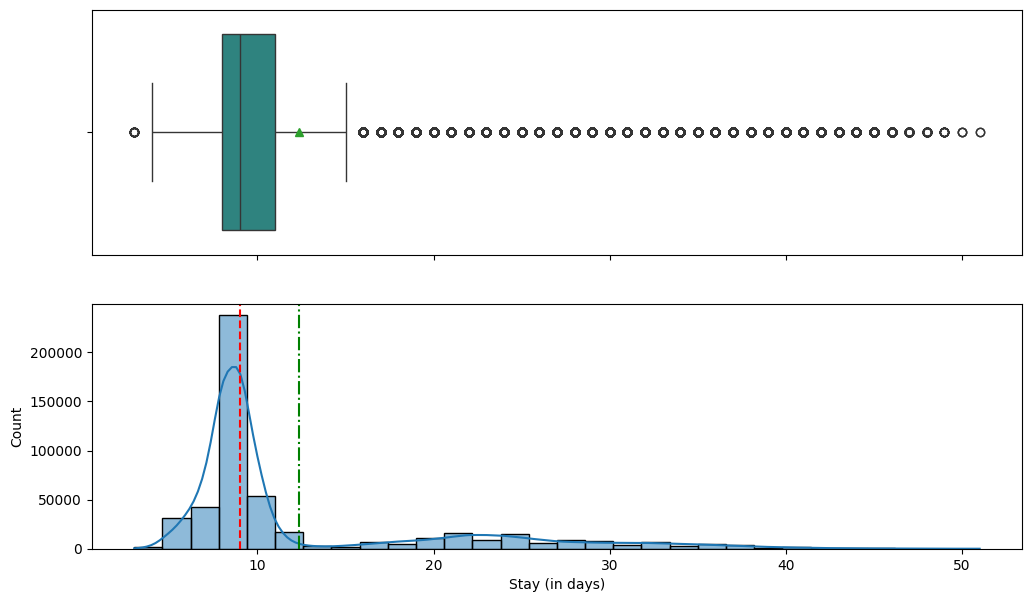

In [24]:
histogram_boxplot(df, "Stay (in days)", bins=30)

**Pozorování:**

Vidíme, že má proměnná hodně outlierů napravo. Medián je okolo 8 dní, průměr (mean) je okolo 12 dnů. outliery jsou u všech pacošů co byli v nemocnici déle než 15 dní. jeden jediný je vlevo a to pro pacienta který zůstal 3 dny. Rozdělení je kosené napravo (rightskewed).

**Hodnoty o které se musíme bát jsou ty které jsou napravo, ty extremní hodnoty od 15 dní dál.**

/tmp/ipython-input-3642389498.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=feature, ax=ax_box, showmeans=True, palette="viridis")


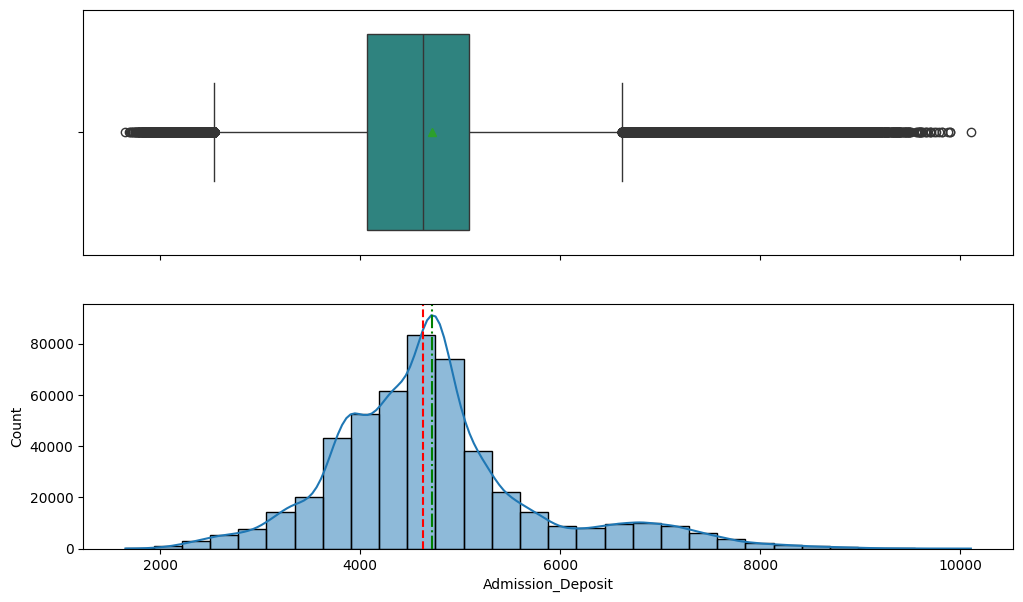

In [25]:
histogram_boxplot(df, "Admission_Deposit", bins=30)

**Pozorování:**

Vidíme, že má proměnná hodně outlierů napravo i vlevo. Medián je okolo 4800 $ , průměr (mean) je okolo 4500 $. Rozdělení u tohohle grafu je víc standardní.

**Hodnoty o které se musíme bát jsou ty které jsou napravo, ty extremní hodnoty od 15 dní dál.**

/tmp/ipython-input-3642389498.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=feature, ax=ax_box, showmeans=True, palette="viridis")


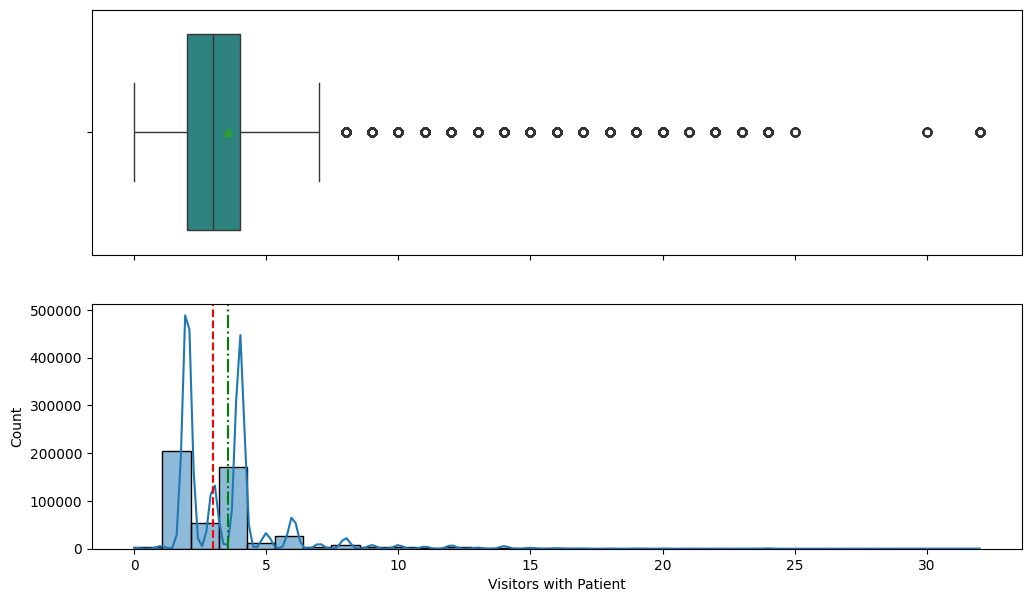

In [26]:
histogram_boxplot(df, "Visitors with Patient", bins=30)

**Pozorování:**

Vidíme, že má proměnná hodně outlierů napravo. Medián je okolo 3 návštěvníků , průměr (mean) je okolo 4. Rozdělení u tohohle grafu je Binomické to můžeme vidět podle dvou vrcholů mezi medianem a průměrem.


/tmp/ipython-input-3642389498.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=feature, ax=ax_box, showmeans=True, palette="viridis")


TypeError: Could not convert string '41-5031-4021-3031-4071-8021-3031-4021-3031-4041-5031-4011-2041-5041-5011-2031-4031-4021-3051-6021-3021-3021-3021-3041-5041-5031-4011-2031-4041-5021-3021-3041-5021-3031-4021-3061-7021-3031-4041-5041-5031-4031-4031-4031-4031-4011-2031-4031-4031-4031-4021-3021-3021-3021-3061-7041-5011-2021-3011-2061-7011-2041-5041-5031-4051-6021-3051-6031-4041-5041-5031-4031-4021-3071-8021-3061-7021-3021-3071-8051-6011-2041-5051-6011-2041-5031-4021-3061-7071-8031-4031-4011-2021-3031-4031-4021-3031-4031-4041-5021-3021-3041-5041-5031-4031-4061-7021-3031-4071-8021-3041-5031-4021-3061-7021-3021-3041-5021-3011-2011-2031-4021-3031-4031-4011-2031-4011-2021-3021-3021-3061-7011-2031-4021-3021-3031-4011-2061-7011-2021-3021-3021-3031-4011-2011-2051-6021-3071-8041-5011-2021-3031-4011-2041-5031-4021-3011-2031-4031-4031-4071-8021-3031-4021-3011-2021-3021-3021-3021-3061-7021-3021-3031-4041-5021-3031-4011-2041-5041-5031-4041-5031-4041-5021-3041-5021-3051-6041-5031-4071-8021-3041-5021-3021-3031-4031-4031-4031-4021-3041-5021-3021-3011-2021-3031-4021-3031-4071-8051-6061-7041-5021-3081-9041-5051-6031-4051-6021-3021-3021-3021-3031-4041-5071-8021-3021-3021-3071-8061-7021-3021-3021-3021-3021-3021-3021-3061-7021-3021-3021-3031-4021-3031-4021-3021-3071-8021-3031-4031-4071-8031-4031-4021-3021-3051-6031-4021-3021-3051-6071-8041-5041-5031-4041-5051-6031-4031-4021-3021-3041-5021-3021-3031-4021-3021-3021-3021-3041-5071-8041-5041-5021-3021-3031-4041-5021-3061-7081-9041-5041-5031-4021-3041-5021-3051-6031-4071-8021-3041-5021-3041-5031-4021-3021-3041-5041-5041-5021-3021-3021-3071-8031-4021-3031-4071-8021-3031-4071-8071-8061-7021-3021-3031-4061-7031-4021-3021-3031-4021-3041-5021-3061-7041-5021-3061-7031-4021-3021-3031-4031-4021-3031-4021-3021-3031-4041-5021-3021-3031-4021-3031-4021-3041-5031-4031-4051-6021-3021-3031-4081-9061-7021-3021-3031-4021-3021-3041-5021-3021-3041-5081-9021-3021-3031-4061-7021-3021-3031-4021-3021-3021-3031-4021-3021-3021-3021-3021-3021-3031-4031-4041-5021-3021-3041-5021-3051-6021-3041-5021-3021-3041-5021-3071-8041-5021-3031-4061-7041-5021-3041-5041-5021-3071-8021-3031-4021-3021-3031-4031-4031-4031-4021-3061-7061-7021-3021-3091-10031-4041-5031-4021-3031-4031-4021-3051-6021-3031-4041-5031-4091-10021-3041-5051-6041-5061-7021-3081-9021-3021-3041-5041-5021-3071-8031-4021-3041-5031-4031-4041-5031-4021-3021-3031-4031-4031-4021-3021-3021-3031-4031-4041-5061-7021-3031-4021-3021-3021-3081-9021-3031-4021-3021-3021-3021-3041-5021-3021-3041-5021-3021-3031-4021-3031-4051-6031-4031-4021-3071-8041-5031-4041-5021-3021-3031-4041-5021-3031-4031-4041-5021-3071-8031-4021-3031-4021-3021-3021-3021-3031-4021-3021-3021-3031-4031-4021-3021-3051-6031-4021-3021-3051-6021-3031-4061-700-1041-5031-4041-5061-7021-3021-3021-3021-3051-6041-5061-7071-8031-4021-3051-6031-4031-4081-9041-5021-3031-4071-8031-4051-6021-3021-3061-7021-3021-3031-4041-5031-4021-3031-4031-4061-7021-3021-3041-5061-7041-5031-4021-3021-3021-3051-6041-5061-7021-3031-4021-3021-3021-3021-3021-3041-5041-5041-5021-3021-3061-7021-3041-5061-7021-3041-5021-3031-4021-3021-3031-4021-3021-3031-4071-8051-6021-3021-3031-4031-4031-4061-7041-5021-3071-8041-5051-6021-3031-4041-5071-8021-3021-3021-3041-5031-4061-7021-3041-5031-4021-3031-4021-3021-3061-7031-4031-4021-3031-400-1041-5031-4061-7021-3031-4021-3071-8081-9041-5021-3051-6031-4031-4021-3021-3021-3021-3021-3021-3021-3041-5021-3021-3041-5021-3051-6031-4071-8031-4041-5021-3031-4021-3041-5021-3071-8021-3031-4021-3041-5021-3041-5041-5051-6051-6041-5051-6041-5061-7021-3051-6021-3021-3031-4071-8031-4031-4041-5021-3021-3051-6031-4051-6021-3051-6021-3021-3021-3041-5041-5051-6071-8021-3021-3021-3021-3021-3041-5021-3061-7031-4021-3021-3031-4021-3021-3041-5021-3031-4031-4041-5071-8031-4051-6021-3021-3021-3041-5021-3021-3021-3041-5031-4021-3021-3021-3021-3021-3021-3031-4021-3021-3031-4021-3031-4061-7021-3021-3081-9041-5021-3071-8021-3021-3021-3021-3031-4051-6031-4031-4031-4041-5051-6041-5071-8031-4031-4021-3021-3041-5021-3021-3081-9021-3021-3031-4021-3021-3031-4031-4021-3041-5021-3031-4041-5021-3061-7021-3061-7021-3021-3021-3021-3031-4021-3021-3051-6021-3031-4031-4031-4031-4031-4051-6031-4031-4031-4021-3041-5021-3061-7031-4021-3021-3041-5061-7041-5031-4031-4051-6031-4021-3031-4031-4031-4021-3031-4021-3031-4021-3041-5041-5031-4021-3021-3031-4041-5021-3051-6031-4031-4011-2031-4031-4051-6061-7021-3021-3031-4051-6021-3021-3041-5031-4051-6041-5071-8021-3011-2041-5031-4021-3031-4021-3051-6031-4031-4031-4031-4041-5021-3031-4021-3021-3081-9091-10031-4021-3031-4031-4021-3061-7011-2031-4031-4071-8041-5041-5031-4031-4031-4021-3031-4031-4011-2071-8021-3041-5061-7031-4031-4031-4031-4021-3041-5031-4021-3031-4021-3031-4021-3041-5031-4031-4021-3031-4021-3041-5031-4071-8021-3031-4031-4071-8031-4021-3041-5031-4061-7051-6021-3011-2031-4021-3021-3061-7021-3021-3031-4031-4041-5041-5011-2021-3051-6021-3031-4031-4031-4031-4041-5021-3031-4011-2041-5031-4021-3031-4031-4031-4041-5031-4041-5031-4041-500-1031-4061-7051-6031-4021-3031-4021-3021-3021-3011-2031-4031-4021-3031-4021-3041-5031-4021-3041-5031-4031-4041-5031-4021-3041-5031-4021-3021-3031-4041-5031-4061-7031-4031-4031-4021-3041-5021-3021-3061-7031-4031-4031-4051-6071-8031-4031-4021-3021-3021-3041-5021-3011-2031-4031-4041-5021-3011-2031-4051-6061-7021-3031-4081-9051-6031-4041-5031-4031-4041-5031-4031-4051-6021-3021-3041-5041-5031-4071-8011-2041-5031-4021-3021-3071-8031-4051-6031-4021-3021-3031-4031-4031-4031-4031-4041-5041-5031-4031-4041-5071-8031-4021-3031-4031-4011-2031-4021-3021-3031-4031-4031-4041-5031-4021-3031-4021-3031-4021-3031-4021-3071-8031-4041-5071-8031-4031-4031-4031-4041-5051-6081-9031-4041-5021-3031-4031-4021-3031-400-1041-5021-3031-4041-5031-4011-2021-3061-7021-3031-4021-3031-4051-6021-3021-300-1031-4021-3031-4021-3021-3051-6021-3031-4041-5011-2031-4011-2041-5031-4061-7021-3011-2031-4051-6011-2021-3021-3071-8031-4041-5031-4021-3021-3051-6021-3021-3031-4031-4031-4051-6041-5031-4021-3021-3021-3021-3021-3011-2031-4021-3041-5031-4041-5041-5071-8021-3031-4081-9021-3061-7071-8061-7031-4041-5011-2031-4031-4011-2041-5021-3031-4031-4031-4021-3011-2031-4031-4021-3021-3011-2021-3051-6031-4031-4011-2041-5031-4061-7021-3031-4021-3041-5021-3021-3021-3031-4031-4031-4031-4031-4011-2081-9041-5031-4021-3031-4041-5031-4041-5081-9031-4031-4031-4051-6011-2031-4031-4031-4041-5021-3031-4021-3011-2031-4031-4011-2091-10031-4071-8031-4031-4071-8031-4021-3021-3021-3031-4031-4031-4011-2031-4021-3021-3021-3081-9061-7041-5031-4021-3051-6021-3021-3021-3041-5091-10091-10031-4041-5061-7021-3051-6031-4021-3061-7031-4031-4011-2031-4031-4031-4041-5061-7041-5041-5031-4011-2031-4021-3031-4031-4031-4041-5071-8021-3031-4021-3051-6041-5061-7021-3031-4021-3041-5031-4031-4021-3031-4011-2021-3031-4031-4031-4071-8051-6071-8011-2021-3021-3041-5061-7021-3031-4031-4031-4041-5021-3031-4021-3071-8031-4081-9031-4031-4021-3011-2041-5031-4031-4031-4031-4031-4071-8041-5031-4031-4031-4021-3031-4051-6041-5021-3011-2031-4061-7031-400-1021-3031-4031-4031-4031-4021-3031-4031-4061-7051-6031-4031-4031-4021-3041-5021-3031-4071-8021-3061-7021-3011-2031-4031-4031-4051-6031-4021-3031-4061-7031-4021-3041-5071-8021-3051-6021-3031-4041-5031-4041-5031-4021-3041-5031-4031-4041-5071-8021-3021-3031-4031-4031-4021-3031-4041-5061-7061-7021-3021-3021-3031-4051-6031-4011-2041-5031-4021-3021-3011-2021-3061-7031-4031-4031-4051-6021-3041-5051-6021-3031-4031-4031-4031-4021-3031-4031-4021-3031-4021-3051-6081-9011-2081-9021-3031-4011-2041-5061-7031-4071-8031-4031-4041-5061-7041-5031-4011-2031-4021-3021-3021-3021-3031-4021-3081-9021-3041-5031-4041-5041-5031-4071-8031-4021-3041-5031-4031-4031-4031-4041-5011-2031-4031-4041-5011-2011-2031-4021-3011-2061-7031-4051-6031-4031-4031-4031-4071-8071-8041-5021-3061-7031-4031-4081-9021-3041-5061-7031-4021-3041-5031-4031-4071-8071-8031-4021-3031-4041-5021-3011-2031-4031-4031-4041-5031-4011-2021-3031-4031-4041-5021-3011-2021-3031-4031-4021-3021-3021-3041-5061-7031-4041-5051-6021-3031-4071-8021-3031-4021-3031-4031-4041-5021-3031-4031-4021-3021-3031-4041-5031-4041-5041-5071-8031-4031-4031-4041-5011-2011-2021-3031-4051-6031-4061-7091-10071-8041-5021-3021-3021-3031-4021-3031-4061-7031-4031-4061-7061-7071-8031-4021-3031-4031-4041-5021-3041-5051-6031-4061-7031-4021-3051-6041-5021-3041-5031-4051-6031-4031-4031-4051-6071-8031-4041-5031-4031-4061-7031-4021-3051-6011-2021-3031-4041-5031-4021-3021-3031-4031-4021-3021-3031-4081-9021-3031-4031-4011-2041-5021-3031-4041-5081-9031-4021-300-1031-4031-4031-4021-3071-8031-4021-3011-2021-3071-8071-8021-3061-7041-5051-6031-4031-4021-3071-8031-4041-5031-4031-400-1051-6021-3031-4021-3021-3031-4021-3021-3021-3031-4031-4021-3041-5021-3021-3031-4031-4021-3031-4021-3031-4021-3021-3071-8021-3011-2031-4061-7031-4021-3031-4031-4041-5021-3061-7031-4021-3021-3041-5021-3021-3021-3041-5081-9021-3021-3021-3021-3031-4021-3041-5061-7041-5021-3041-5031-4041-5061-7021-3041-5021-3041-5011-2031-4031-4021-3031-4021-3031-4021-3041-5021-3021-3021-3031-4031-4041-5041-5041-5061-7021-3031-4021-3031-4061-7011-2071-8031-4081-9031-4031-4031-4031-4071-8021-3031-4061-7031-4071-8021-3051-6021-3041-5031-4031-4031-4041-5041-5031-4021-3031-4021-3041-5061-7041-5021-3051-6051-6051-6041-5021-3041-5031-4061-7041-5021-3011-2061-7031-4031-4031-4021-3031-4031-4021-3061-7021-3071-8021-3011-2021-3041-5011-2031-4021-3091-10031-4031-4041-5031-4041-5031-4091-10031-4021-3031-4071-8041-5041-5031-4041-5031-4021-3041-5021-3021-3071-8051-6031-4041-5041-5031-4031-4021-3021-3041-5041-5031-4031-4021-3031-4031-4041-5021-3031-4031-4051-6041-5031-4031-4011-2021-3041-5061-7031-4071-8041-5041-5031-4031-4041-5031-4051-6021-3051-6041-5041-5031-4021-3021-3031-4011-2021-3061-7031-4021-3041-5081-9031-4041-5021-3021-3021-3051-6021-3031-4021-3041-5021-3061-7021-3061-7031-4011-2031-4041-5041-5021-3031-4031-4041-5041-5031-4031-4041-5031-4031-4021-3021-3021-3021-3041-5041-5031-4021-3031-4031-4021-3041-5021-3021-3031-4031-4031-4021-3031-4021-300-1021-3021-3031-4021-3041-5041-5031-4081-9021-3031-4021-3021-3011-2041-5021-3031-4031-4021-3031-4031-4031-4021-3071-8061-7031-4021-3031-4021-3011-2021-3041-5031-4021-3021-3061-7021-3011-2031-4031-4031-4031-400-1011-2071-8021-3051-6031-4041-5041-5031-4021-3021-3031-4031-4021-3031-4021-3061-7021-3021-3031-4041-5031-4061-7021-3041-5011-2021-3061-7021-3041-5021-3031-4041-5031-4021-3021-3021-3021-3031-4011-2031-4031-4071-8021-3051-6031-4031-4031-4031-4021-3081-9041-5021-3031-4031-4021-3031-4031-4021-3031-4031-4031-4061-700-1071-8031-4031-4051-6031-4031-4031-4031-4031-4021-300-1031-4051-6021-3031-4051-6061-7041-5041-5031-4011-2041-5021-3021-3031-4031-4021-3031-4031-4021-3011-2031-4041-5041-5031-4021-3011-2071-8021-3021-3031-4041-5021-3031-4061-7031-4031-4031-4031-4021-3021-3021-3021-3051-6031-4031-4071-8021-3021-3031-4031-4011-2021-3031-4041-5021-3031-4021-3031-4041-5031-4031-4011-2031-4011-2031-4081-9031-4041-5021-3041-5041-5021-3021-3031-4011-2031-4051-6031-4031-4041-5031-4011-2041-5031-4051-6031-4061-7031-4031-4071-8021-3011-2021-3031-4031-4011-2031-4021-3051-6011-2031-4041-5031-4021-3021-3031-4031-4031-4031-4021-3021-3031-4061-7021-3041-5031-4061-7021-3041-5041-5021-3021-3031-4031-4011-2041-5031-4041-5031-4031-4021-3031-4041-5031-4031-400-1061-7021-3021-3021-3071-8071-8021-3021-3031-4031-4031-4031-4031-4021-3051-6051-6031-4061-7031-4031-4011-2031-4021-3031-4041-5041-5031-4041-5011-2041-5031-4041-5031-4041-5021-3031-4031-4021-3031-4031-4021-3021-3041-5021-3031-4031-4021-3021-3011-2031-4021-3041-5021-3031-4011-2031-4041-5021-3011-2031-4021-3041-5011-2041-5031-4041-5071-8031-4031-4021-3041-5021-3021-3021-3041-5021-3021-3031-4031-4061-7071-8021-3021-3041-5011-2041-5011-2031-4041-5021-3031-4041-5041-5041-5031-4051-6031-4041-5031-4021-3031-4051-6041-5041-5021-3021-3061-7011-2041-5061-7021-3031-4031-4031-4041-5031-4031-4031-4041-5011-2031-4041-5031-4021-3031-4021-3021-3011-2031-4051-6091-10041-5041-5021-3041-5061-7071-8041-5031-4021-3041-5041-5061-7021-3031-4041-5061-7071-8031-4021-3031-4051-6031-4051-6031-4031-4021-3021-3041-5041-5021-3031-4031-4031-4031-4041-5031-4031-4031-4031-4031-4031-4031-4031-4021-3041-5031-4021-3031-4021-3071-8031-4021-3031-4031-4031-4061-7041-5031-4031-4031-4031-4021-3031-4031-4021-3061-7031-4061-7021-3041-5071-8031-4021-3021-3021-3031-4041-5031-4031-4031-4041-5021-3021-3011-2041-5041-5041-5031-4071-8031-4041-5041-5071-8041-5031-4041-5031-4031-4031-4041-5011-2031-4041-5021-3021-3031-4051-6081-9021-3061-7021-3021-3041-5031-4021-3051-6031-4031-4041-5031-4031-4041-5031-4041-5051-6021-3021-3041-5031-4021-3021-3031-4031-4021-3021-3021-3031-4021-3031-4021-3021-3021-3041-5041-5041-5041-5041-5031-4021-3011-2041-5021-3021-3071-8041-5021-3031-4061-7041-5061-7011-2031-4011-2041-5061-7011-2021-3031-4021-3031-4031-4021-3071-8041-5081-9031-4031-4031-4061-7031-4041-5031-4031-4031-4021-3031-4081-9081-9051-6011-2021-3011-2031-4011-2031-4021-3051-6041-5011-2091-10071-8071-8011-2031-4071-8021-3041-5051-6031-4031-4041-5021-3021-3061-7071-800-1071-8031-4031-4021-3031-4021-3021-3021-3021-3031-4051-6031-4021-3041-5041-5021-3071-8071-8031-4021-3031-4071-8051-6031-4031-4041-5031-4061-7041-5021-3021-3031-4041-5081-9071-8021-3041-5021-3031-4031-4031-4021-3031-4021-3031-4031-4021-3031-4031-4021-3061-7021-3051-6061-7011-2061-7011-2031-4021-3051-6031-4021-3031-4031-4061-7031-4021-3061-7021-3021-3051-6061-7041-5021-3061-7041-5031-4021-3041-5031-4071-8021-3041-5031-4011-2061-7031-4031-4031-4041-5041-5011-2021-3021-3041-5031-4081-9011-2021-3031-4021-3021-3031-4021-3031-4041-5031-4021-3031-4021-3041-5021-3021-3021-3031-4011-2031-4031-4041-5011-2031-4031-4021-3031-4041-5021-3031-4031-4081-9031-4071-8031-4021-300-1021-3031-4031-4031-4041-5041-5041-5041-5031-4011-2021-3021-3031-4071-8041-5031-4021-3011-2071-8031-4041-5031-4041-5031-4041-5021-3031-4031-4031-4011-2061-7061-7011-2021-3061-7021-3031-4021-3041-5031-4031-4031-4021-3031-4041-5031-4031-4031-4031-4021-3021-3021-3071-8021-3021-3021-3021-3061-7021-3031-4021-3031-4071-8081-900-1041-5031-4031-4031-4031-4021-3031-4031-4061-7031-4041-5041-5031-4051-6021-3031-4021-3021-3031-4061-7031-4041-5031-4031-4021-3041-5031-4011-2021-3011-2031-4031-4041-5041-5071-8041-5021-300-1041-5021-3031-4031-4031-4031-4061-7031-4051-6031-4011-2021-3041-5041-5021-3041-5021-3031-4021-3021-3021-3011-2031-4031-4041-5031-4031-4031-4031-4031-4031-4031-4031-4031-4041-5021-3031-4031-4061-7041-5031-4021-3011-2031-4051-6041-5011-2021-3021-3031-4081-9031-4031-4031-4021-3031-4071-8031-4041-5031-4061-7061-7031-4041-5031-4071-8041-5041-5021-3041-5021-3031-4031-4021-3031-4031-4041-5041-5071-8021-3041-5021-3031-4021-3041-5041-5031-4021-3021-3021-3021-3031-4031-4031-4041-5041-5021-3041-5031-4041-5021-3031-4021-3031-4021-3031-4031-4011-2021-3031-4021-3021-3031-4031-4031-4041-5021-3041-5031-4031-4031-4031-4021-3041-5041-5081-9061-7031-4041-5021-3021-3041-5021-300-1011-2041-5021-3041-5061-7051-6031-4031-4031-4031-4071-8031-4031-4041-5021-3031-4031-4021-3021-3041-5031-4081-9031-4041-5091-10041-5041-5031-4021-3011-2021-3021-3021-3041-5031-4011-2031-4031-4031-4021-3021-3051-6041-5021-3031-4031-4031-4061-7011-2061-7021-3051-6031-4041-5021-3031-4031-4021-3021-3031-4011-2071-8031-4031-4031-4021-3031-4021-3041-5041-5031-4021-3031-4021-3031-4031-4051-6031-4031-4031-4051-6031-4021-3061-7031-4041-5021-3021-3061-7061-7051-6041-5021-3021-3031-4051-6061-7031-4041-5021-3021-3031-4031-4021-3031-4031-4031-4031-4041-5021-3031-4021-3041-5081-9041-5021-3031-4041-5031-4031-4051-6031-4041-5021-3031-4011-2021-3021-3041-5011-2051-6041-5031-4031-4051-6041-5021-3031-4031-4041-5031-4061-7041-5021-3021-3011-2021-3031-4031-4021-3031-4021-3031-4031-4031-4021-3031-4061-7021-3041-5031-4031-4021-3031-4021-3021-3021-3031-4031-4031-4041-5031-4031-4031-4011-2031-4031-4041-5051-6031-4041-5041-5031-4031-4021-3021-3081-9011-2061-7031-4031-4031-4011-2021-3021-3021-3031-4041-5031-4031-4021-3031-4021-3021-3031-4031-4071-8041-5031-4031-4061-7011-2051-6011-2031-4021-3031-4021-3071-8021-3031-4021-3031-4021-3041-5031-4031-4031-4041-5021-3031-4021-3031-4011-2041-5031-4031-4031-4051-6041-5051-6041-5031-4031-4031-4051-6041-5061-7021-3081-9031-4051-6031-4041-5031-4041-5081-9041-5021-3031-4031-4031-4021-3031-4031-4051-6051-6031-4031-4061-7031-4031-4041-5041-5021-3031-4041-5031-4031-4031-4031-4071-8031-4031-4061-7041-5021-3031-4031-4011-2041-5051-6021-3021-3011-2041-5031-4031-4011-2021-3041-5051-6061-7071-8021-3051-6041-5021-3041-5021-3031-4041-5041-5031-4031-4051-6071-8031-4051-6031-4031-4021-3041-5031-4041-5031-4041-5061-7071-8021-3031-4021-3031-4061-7021-3021-3041-5021-3031-4021-3021-3071-8011-2041-5011-2021-3031-4031-4061-7021-3041-5031-4031-4021-3021-3021-3021-3011-2031-4021-3021-3061-7081-9061-7021-3031-4031-4051-6031-4071-8021-3011-2031-4031-4061-7021-3021-3071-8031-4021-3021-3021-3031-4071-8051-6071-8061-7021-3031-4021-3031-4041-5041-5041-5041-5021-3021-3041-5021-3041-5041-5021-3021-3051-6061-7041-5011-2021-3011-2071-8031-4031-4061-7051-6061-7011-2031-4031-4041-5031-4021-3061-7021-3021-3021-3071-8021-3051-6061-7041-5061-7041-5051-6021-3021-3031-4031-4071-8071-8041-5031-4031-4041-5071-8051-6021-3031-4041-5021-3041-5051-6021-3031-4021-3021-3031-4041-5081-9081-9031-4041-5041-5041-5041-5011-2071-8011-2031-4031-4061-7031-4031-4021-3071-8021-3041-5041-5041-5021-3021-3041-5041-5021-3031-4011-2021-3031-4021-3021-3021-3021-3031-4021-3021-3031-4021-3031-4031-4081-9021-3031-4031-4011-2031-4031-4021-3031-4021-3021-3011-2031-4041-5031-4011-2031-4081-9041-5021-3031-4021-3031-4021-3011-2081-9041-5041-5031-4081-9031-4031-4021-3021-3021-3031-4021-3051-6071-8061-7081-9021-3031-4021-3071-8061-7031-4031-4021-3031-4021-3021-3031-4021-3031-4041-5021-3021-3021-3031-4031-4021-3051-6051-6031-4031-4031-4031-4071-8031-4031-4041-5021-3031-4031-4031-4041-5041-5041-5031-4021-3061-7041-5021-3021-3031-4071-8021-3071-8031-4021-3051-6031-4031-4031-4031-4021-300-1021-3021-3031-4021-3031-4031-4041-5031-4021-3021-3021-3041-5021-3021-3021-3031-4031-4061-7041-5011-2021-3011-2041-5021-3041-5031-4031-4021-3041-5021-3031-4031-4011-2011-2031-4031-4031-4011-2031-4021-3021-3061-7021-3081-9021-3081-9021-3021-3031-4061-7021-3021-3031-4031-4051-6071-8031-4081-9021-3021-3041-5021-3031-4011-2021-3041-5041-5031-4071-8041-5031-4021-3041-5021-3051-6021-3021-3061-7021-3021-3031-4031-4021-3031-4051-6011-2041-5031-4031-4071-8021-3031-4021-3031-4021-3031-4061-7031-4031-4031-4051-6021-3041-5041-5031-4021-3031-4021-3031-4021-3031-4041-5011-200-1031-4041-5041-5051-6011-2041-5041-5031-4021-3031-4031-4041-5041-5051-6031-4041-5031-4031-4071-8051-6021-3041-5031-4031-4031-4011-2021-3081-9021-3041-5041-5031-4031-4021-3041-5041-5031-4021-3041-5031-4061-7071-8041-5021-3041-5041-5041-5041-5051-6021-3061-7081-9031-4031-4041-5021-3021-3021-3031-4051-6021-3031-400-1031-4031-4031-4031-4041-5031-4031-4041-5021-3021-3041-5031-4041-5041-5041-5041-5041-5031-4011-2031-4071-8041-5091-10031-4041-5071-8031-4041-5031-4031-4081-9021-3041-5031-4021-3031-4041-5031-4021-3021-3031-4031-4071-8031-4031-4021-3071-8031-4031-4021-3041-5021-3031-4031-4031-4021-3021-3021-3031-4031-4031-4041-5061-7031-4041-5041-5021-3021-3031-4021-3051-6071-8081-9021-3031-4041-5031-4041-5061-7031-4041-5071-8021-3041-5041-5071-8031-4031-4041-5021-3031-4021-300-1041-5041-5011-2031-400-1061-7061-7021-3031-4031-4051-6021-3021-3031-4031-4021-3031-4011-2041-5021-3021-3041-5031-4021-3061-7041-5041-5031-4031-4051-6041-5021-3031-4021-3031-4051-6041-5021-3011-2031-4031-4021-3071-8031-4021-3031-400-1021-3021-3081-9031-4041-5041-5041-5031-4021-3031-4031-4031-4021-3021-3031-4031-4031-4031-4011-2021-3041-5021-3031-4021-3021-3061-7041-5021-3041-5031-4031-4031-4061-7041-5071-8031-4021-3031-4031-4041-5021-3021-3021-3021-3021-3021-3051-6021-3031-4021-3031-4051-6031-4041-5031-4021-3041-5041-5031-4011-2051-6061-7031-4061-7031-4031-4061-7021-3031-4031-4061-7031-4041-5031-4021-3021-3071-8021-3021-3041-5051-6031-4031-4021-3061-7091-10031-4021-3051-6031-4031-4021-3021-3031-4021-300-1041-5031-4031-4041-5021-3061-7021-3031-4081-9031-4031-4041-5031-4021-3011-200-1051-6021-3051-6031-4071-8021-3031-4061-7031-4031-4031-4011-2031-4021-3021-3021-3071-8041-5051-6051-6041-5041-5021-3031-4041-5031-4071-8011-2021-3031-4021-3031-4021-3021-3021-3031-4031-4041-5021-3031-4031-4031-4081-9021-3031-4071-8021-3021-3041-5021-3031-4071-8041-5051-6061-7041-5061-7041-5061-7081-9021-3011-2041-5021-3041-5021-3021-3031-4041-5041-5041-5041-5031-4021-3021-3011-2021-3031-4031-4041-5011-2031-4031-4021-3031-4031-4041-5031-4031-4021-3021-3041-5031-4061-7021-3021-3031-4021-3021-3021-3031-4031-4021-3041-5041-5011-2041-5041-5031-4021-3011-2031-4031-4021-3031-4031-4051-6021-3071-8031-4041-5031-4021-3031-4021-3021-3031-4051-6061-7041-5031-4021-3061-7031-4021-3041-5021-3031-4031-4041-5031-4041-5011-2041-5031-4021-3031-4061-7041-5021-3021-3031-4021-3041-5041-5031-4021-3041-5031-4021-3061-7031-4011-2031-4051-6031-4041-5021-3031-4031-4071-8031-4041-5011-2021-3031-4031-4021-3031-4021-3041-5041-5031-4041-5021-3031-4011-2041-5031-4041-5031-4021-3021-3031-4051-6041-5071-8021-3021-3021-3021-3041-5031-4041-5031-4041-5031-4041-5021-3031-4031-4031-4031-4061-7031-4041-5031-4021-3031-4031-4041-5031-4021-3031-4031-4021-3021-3021-3021-3021-3041-5031-4021-3021-3021-3021-3021-3021-3021-3031-4051-6031-4041-5031-4031-4021-3021-3021-3021-3091-10011-2031-4011-2021-3031-4041-5031-4021-3041-5021-3021-3031-4021-3021-3031-4041-5081-9031-4081-9071-8091-10021-3021-3031-4031-4021-3031-4021-3021-3041-5041-5041-5031-4031-4031-4031-4021-3021-3041-5011-2031-4021-3031-4031-4031-4041-5031-4021-3081-9031-4071-8021-3011-2021-3031-4081-9031-4021-3051-6031-4041-5031-4051-6061-7031-4021-3041-5081-9021-3021-3041-5031-4031-4031-4021-3031-4061-7021-3031-4061-7041-5041-5011-2021-3031-4031-4021-3021-3051-6031-4041-5031-4031-4011-2031-4011-2061-7031-4041-5021-3071-8031-4031-4021-3041-5031-4031-4021-3071-800-1031-4051-6021-3031-4031-4031-4041-5021-3031-4081-9031-4031-4041-5041-5021-3031-4031-4031-4021-3021-3021-3031-4031-4021-3041-5031-4081-9031-4061-7041-5011-2011-2011-2031-4031-4041-5031-4021-3061-7031-4021-3031-4051-6031-4071-8021-3021-3031-4041-5021-3021-3031-4021-3021-3041-5041-5041-5031-4021-3021-3071-8041-5031-4021-3031-4031-4021-3031-4031-4041-5031-4031-4021-3021-3031-4041-5031-4031-4041-5061-7021-3051-6041-5031-4021-3021-3081-9031-4031-4071-8021-3011-2041-5021-3051-6061-7041-5071-8031-4041-5041-5081-9041-5031-4061-7031-4021-3021-3021-3081-9021-3021-3031-4021-3011-2011-2031-4021-3041-5051-6021-3061-7061-7041-5031-4031-4021-3051-6041-5021-3011-2021-3031-4031-4021-3071-8041-5021-3041-5031-4041-5031-4031-4071-8011-2041-5041-5031-4031-4031-4021-3031-4031-4021-3061-7031-400-1021-3031-4071-8021-3051-6041-5031-4031-4061-7021-3041-5021-3021-3041-5021-3031-4061-7031-4041-5041-5011-2011-2011-2031-4021-3041-5011-2031-4051-6021-3031-4031-4041-5061-7021-3031-4031-4031-4041-5051-6031-4071-8041-5061-7031-4021-3041-5031-4011-2031-4061-7051-6031-4021-3041-5021-3021-3031-4031-4061-7041-5051-6041-5051-6041-5021-3021-3041-5041-5031-4021-3031-4031-4041-5031-4021-3031-4031-4031-4031-4021-3071-8021-3021-3021-3011-2021-3021-3021-3031-4031-4031-4021-3031-4031-4081-9031-4091-10041-5031-4021-3031-4021-3011-2021-3031-4011-2041-5041-5041-5031-4031-4021-3071-8021-3021-3081-900-1041-5031-4021-3031-4061-7011-2041-5021-3031-4041-5061-7021-3031-4061-7041-5041-5041-5041-5041-5051-6031-4031-4021-3051-6021-3031-4011-2021-3021-3031-4041-5041-5031-4031-4031-4031-4031-4011-2021-3021-3061-7041-5031-4041-5041-5021-3031-4021-3021-3021-3011-2031-4031-4041-5021-3041-5031-4041-5031-4021-3021-3021-300-1021-3031-4061-7021-3021-3031-4071-8031-4031-4031-4031-4051-6041-5031-4041-5031-4051-6041-5031-4071-8031-4021-3071-8051-6021-3061-7041-5021-3021-3011-2021-3021-3031-4031-4031-4031-4031-4021-3041-5061-7031-4031-4041-5031-4031-4041-5031-4031-4031-4021-3011-2021-3011-2021-3021-3031-4031-4071-8031-4021-3041-5031-4071-8021-3061-7061-7041-5031-4031-4051-6031-4031-4061-7031-4031-4021-3021-3021-300-1031-4031-4061-7021-3031-4031-4031-4021-3041-5021-3011-2021-3041-5081-9031-4031-4011-2021-3071-8031-4041-5021-3041-5031-4021-3021-3041-5041-5021-3031-4041-5051-6021-3061-7041-5021-3031-4021-3031-4021-3041-5041-5011-2031-4031-4041-5031-4021-3021-3021-3041-5031-4071-8021-3021-3031-4021-3061-7031-4071-8041-5031-4031-4031-4031-4041-5031-4011-2031-4041-5031-4031-4021-3041-5031-4031-4071-8021-3021-3011-2021-3051-6021-3031-4021-3021-3031-4041-5031-4031-4071-8041-5031-4031-4031-4031-4031-4031-4071-8031-4011-2031-4011-2031-400-1011-2071-8031-4021-3041-5071-8031-4031-4041-5041-5061-7061-7041-5021-3031-4031-4031-4031-4031-4031-4021-3011-2041-5031-4051-6021-3021-3021-3031-4041-5021-3031-4041-5051-6031-4031-4031-4031-4031-4021-3011-2071-8021-3041-5031-4031-4041-5021-3021-3021-3071-8021-3021-3031-4011-2021-3021-3031-4031-4021-3021-3031-4031-4041-5061-7031-4041-5011-2061-7041-5031-4021-3021-3031-4031-4021-3061-7031-4021-3041-5041-5041-5031-4041-5031-4031-4021-3031-4041-5041-5031-4041-5031-4031-4041-5021-3021-3051-6041-5041-5041-5041-5071-8021-3031-4041-5031-4021-3021-3011-2031-4031-4041-5021-3021-3041-5031-4021-3031-4041-5041-5071-8021-3021-3041-5031-4031-4071-8041-5021-3071-8041-5071-8021-3031-4011-2041-5031-4021-3031-4041-5011-2031-4031-4021-3021-3031-4031-4031-4031-4021-3031-4031-4011-2031-4021-3021-3031-4051-6021-3041-5031-4031-4041-5031-4091-10031-4031-4021-3051-6081-9071-8031-4021-3031-4021-3021-3021-3031-4031-4081-9041-5021-3021-3041-5021-3061-7031-4041-5021-3091-10051-6021-3021-3021-3031-4051-6021-3031-4041-5031-4041-5021-3041-5041-5041-5021-3041-5041-5041-5041-5041-5021-3031-4031-4031-4031-4021-3031-4061-7021-3031-4021-3031-4051-6041-5021-3021-3011-2031-4041-5041-5041-5031-4041-5031-4051-6031-4031-4011-2031-4021-3041-5081-9031-4051-6041-5031-4031-4031-4021-3031-4051-6021-3081-9031-4031-4021-3071-8021-3021-3021-3041-5021-3021-3031-4011-2031-4021-3031-4021-3021-3071-8041-5021-3061-7031-4031-4051-6041-5021-3041-5021-3021-3061-7041-5041-5071-8031-4041-5021-3031-4021-3021-3031-4031-4031-4051-6021-3021-3021-3041-5021-3041-5031-4031-4031-4021-3031-4061-7051-6021-3021-3041-5021-3021-3071-8031-4081-9031-4021-3041-5031-4021-3031-4061-7031-4031-4011-2041-5031-4041-5071-8041-5061-7031-4011-2011-2041-5021-3031-4031-4031-4031-4021-3021-3031-4041-5031-4031-4061-7021-3021-3021-3021-3031-4041-5041-5041-5041-5031-4021-3071-8011-2041-5031-4031-4031-4031-4011-2031-4041-5031-4011-2011-2031-4011-2031-4021-3031-4031-4061-7031-4021-3031-4031-4021-3021-3041-5061-7021-3071-8061-7031-4061-7061-7031-4021-3011-2051-6031-4021-3031-4031-4021-3021-3011-2031-4021-3031-4041-5031-4031-4031-4021-3031-4031-4021-3021-3011-2031-4041-5031-4041-5041-5031-4051-6021-3031-4021-3041-5021-3021-3021-3041-5041-5031-4031-4031-4021-3041-5021-3031-4011-2031-4031-4031-4031-4041-5031-4031-4031-4011-2041-5041-5021-3051-6031-4021-3051-6011-2061-7041-5041-5051-6041-5021-3041-5031-4041-5031-4031-4031-4021-3031-4021-3041-5031-4031-4031-4021-3011-2021-3041-5031-4061-7061-7041-5031-4021-3051-6021-3061-7021-3021-3031-4031-4041-5041-5031-4011-2021-3021-3041-5021-3061-7021-3021-3021-3031-4031-4031-4021-3021-3051-6031-4021-3021-3061-7031-4031-4021-3031-4031-4041-5021-3021-3021-3061-7071-8041-5021-3021-3021-3061-7021-3021-3041-5031-4021-3021-3021-3021-3071-8031-4021-3051-6021-3011-2041-5031-4011-2021-3031-4041-5041-5041-5061-7021-3021-3051-6031-4031-4051-6021-3031-4041-5021-3071-8021-3021-3041-5011-2051-6031-4021-3031-4031-4021-3021-3031-4031-4041-5031-4031-4031-4031-4031-4021-3041-5031-4071-8051-6031-4021-3021-3031-4031-4011-2041-5031-4031-4041-5041-5021-3041-5071-8031-4041-5031-4021-3021-3031-4041-5081-9081-9031-4031-4031-4041-5041-5021-3011-2031-4031-4021-3021-3041-5051-6041-5021-3021-3031-4041-5031-4021-3011-2021-3021-3031-4061-7021-3031-4031-4031-4031-4081-9031-4021-3041-5021-3031-4081-9051-6021-3031-4031-4031-4021-3031-4031-4031-4021-3021-3021-3021-3021-3031-4031-4031-4041-5041-5041-5021-3021-3021-3021-3081-9041-5021-3031-4021-3031-4061-7021-3081-9031-4041-5021-3021-3021-3011-2031-4021-3051-6031-4051-6071-8031-4071-8031-4031-4011-2021-300-1021-3041-5041-5021-3071-8041-5041-5081-9041-5031-4081-9021-3041-5021-3011-2041-5031-4051-6011-2041-5011-2021-3031-4031-4041-5031-4021-3031-4031-4071-8041-5021-3021-3021-3011-2021-3021-3021-3021-3031-4031-4041-5021-3021-3011-2041-5031-4041-5031-4041-5061-7031-4031-4041-5071-8041-5011-2021-3021-3021-3031-4021-3031-4061-7031-4081-9021-3021-3031-4041-5031-4031-4021-3041-5021-3011-2061-7071-8021-3021-3041-5021-3021-3031-4031-4021-3041-5031-4041-5021-3031-4061-7031-4021-3041-5021-3031-4031-4031-4021-3041-5031-4031-4031-4031-4041-5021-3031-4031-4031-4031-4031-4061-7021-3031-4031-4031-4041-5021-3031-4021-3021-3021-3041-5041-5021-3091-10021-3051-6031-4061-7031-4031-4041-5041-5031-4021-3051-6021-3031-4011-2031-4031-4041-5031-4051-6031-4031-4021-3031-4021-3031-4031-4031-4031-4031-4021-3021-3031-4021-3031-4031-4031-4041-5021-3061-7041-5021-3031-4051-6031-4041-5021-3031-4041-5041-5031-4021-3021-3061-7021-3041-5031-4051-6011-2031-4031-4021-3031-4021-3031-4061-7021-3011-2031-4041-5061-7091-10011-2031-4011-2031-4011-2031-4031-4011-2031-4021-3031-4031-4071-8071-8041-5011-2031-4031-4031-4031-4031-4031-4021-3041-5031-4061-7031-4041-5031-4021-3031-4031-4021-3031-4031-4031-4011-2021-3071-8041-5041-5021-3021-3021-3041-5051-6021-3031-4071-8031-4021-3021-3041-5031-4031-4031-4021-3031-4021-3021-3031-4031-4041-5031-4041-5021-3021-3021-3021-3061-7021-3011-2031-4061-7031-4021-3041-5021-3041-5051-6041-5041-5081-9011-2031-4051-6031-4061-7031-4031-4041-500-1041-5041-5021-3011-2031-4051-6031-4031-4041-5041-5031-4041-5031-4021-3021-3021-3041-5071-8021-3021-3061-7021-3021-3031-4031-4021-3021-3031-4031-4041-5011-2031-4031-4021-3031-4021-3021-3031-4061-7031-4041-5031-4021-3011-2031-4031-4021-3031-4021-3031-4021-3031-4031-4051-6021-3011-2031-4031-4021-3021-3021-3021-3031-4021-3031-4061-7041-5021-3021-300-1031-4041-5031-4021-3031-4011-2031-4031-4061-7021-3031-4031-4021-3041-5041-5031-4051-6031-4051-6031-4011-2071-8021-3031-4031-4031-4031-4031-4031-4031-4031-4021-3021-3021-3021-3031-4041-5031-4051-6071-8041-5021-3031-4021-3021-3041-5021-3031-4041-5051-6031-4031-4031-4021-3061-7021-3071-8021-3031-4061-7051-6051-6041-5031-4041-5021-3031-4021-3041-5041-5011-2041-5021-3071-8071-8021-3021-3031-4041-5081-9031-4051-6031-4021-3031-4081-9061-7021-3021-3021-3031-4031-4021-3031-4061-7031-4081-9031-4031-4011-2051-6021-3031-4031-4021-3041-5031-4021-3031-4061-7041-5061-7031-4031-4041-5021-3021-3031-4031-4031-4021-3041-5041-5041-5031-4031-4011-2031-4031-4071-8031-4041-5041-5031-4071-8071-8021-3021-3031-4031-4061-7061-7011-2011-2021-3031-4031-4031-4021-3011-2011-2041-5051-6041-5061-7011-2021-3031-4071-8041-5021-3061-7021-3031-4041-5031-4041-5021-3031-4031-4031-4021-3021-3031-4041-5031-4021-3021-300-1081-9031-4021-3031-4011-2051-6021-3031-4011-2031-4021-3041-5011-2031-4041-5061-7031-4051-6061-7031-4021-3021-3021-3031-4021-3031-4031-4021-3071-8031-4021-3031-4031-4061-7021-3021-300-1031-4041-5041-5011-2081-9041-5021-3071-8041-5051-6071-8031-4031-4021-3031-4021-3021-3011-2041-500-1041-5021-3031-4031-4021-3021-3021-3061-7031-4041-5031-4031-4031-4041-5021-3071-8081-9031-4021-3031-4041-5031-4021-3031-4041-5021-3011-2081-9021-3071-8021-3031-4021-3061-7021-3031-4071-8031-4031-4041-5031-4021-3031-4061-7031-4081-9041-5081-9031-4031-4061-7031-4031-4021-300-1021-3021-3031-4021-3011-2021-3031-4031-4031-4041-5031-4071-8011-2041-500-1021-3041-5041-5061-7031-4071-8031-4031-4071-8021-3031-4031-4011-2041-5031-4031-4021-3041-5031-4061-7031-4031-4031-4031-4041-5041-5021-3041-5061-7041-5031-4031-4031-4051-6041-5011-2041-5021-3071-8031-4031-4031-4031-4031-4061-7031-4091-10021-3031-4021-3031-4041-5041-5021-3021-3031-4041-5021-3041-5041-5061-7021-3041-5021-3021-3031-4011-2021-3021-3041-5021-3031-4041-5031-4031-4041-5031-4031-4071-8061-7031-4021-3031-4021-3031-4071-8061-7031-4041-5021-3041-5041-5041-5031-4051-6061-7021-3031-4061-7031-4031-4061-7031-4021-3021-3021-3061-7021-3021-3021-3031-4021-3061-7041-5071-8021-3021-3031-4061-7031-4031-4031-4021-3021-3011-2031-4031-4061-7011-2011-2031-4051-6031-4031-4031-4021-3021-3041-5031-4011-2011-2041-5021-3021-3041-5011-2021-3021-3031-4031-4031-4021-3021-3031-4041-5011-2031-4031-4031-4021-3021-3041-5031-4021-3031-4021-3041-5031-4031-4031-4031-4011-2031-4041-5031-4021-3021-3021-3031-4031-4031-4081-9031-4031-4031-4031-4081-9031-4031-4041-5061-7021-3041-5021-3021-3021-3041-5071-8031-4031-4021-3041-5031-4061-7031-4031-4021-3041-5011-200-1071-8021-3031-4021-3041-5021-3031-4041-5021-3031-4021-3021-3031-4021-3021-3021-3051-6041-5041-5041-5021-3061-7031-4031-4021-3031-4061-7041-5031-4031-4021-3031-4031-4031-4031-4011-2031-4031-4011-2031-4031-4031-4011-2021-3061-7091-10031-4031-4031-4021-3021-3021-3081-9021-3081-9031-4041-5021-3061-7021-3041-5031-4021-3021-3041-5041-5061-7051-6031-4041-5041-5041-5041-5061-7031-4011-2021-3031-4061-7061-7031-4041-5031-4041-5031-4021-3021-3031-4021-3021-3031-4051-6041-5031-4031-4031-4021-3041-5021-3031-4041-5061-7031-4031-4051-6021-3041-5051-6021-3031-4021-3031-4031-4031-4031-4031-4011-2021-3031-4021-3041-5041-5031-4041-5041-5051-6041-5031-4021-3041-5061-700-1021-3021-3041-5031-4041-5071-8021-3041-5041-5031-4021-3031-4031-4081-9061-7031-4041-5051-6041-5021-3031-4021-3021-3031-4081-9021-3031-4021-3041-5061-7031-4011-2021-3071-8041-5011-2061-7031-4031-4071-8021-3021-3041-5021-3031-4021-3041-5021-3041-5011-2021-3031-4041-5031-4011-2031-4031-4021-3061-7031-4071-8031-4021-3021-3041-5031-4041-5041-5031-4031-4061-7031-4031-4041-5021-3021-3031-4011-2031-4031-4031-4031-4031-4031-4021-3041-5051-6031-4031-4031-4031-4031-4011-2021-3031-4041-5031-4031-4021-3031-4031-4041-5021-3011-2031-4031-4031-4031-4021-3051-6041-5031-4041-5021-3031-4021-3031-4021-3031-4021-3021-3031-4021-3031-4021-3031-4011-2031-4021-3011-2031-4031-4021-3031-4031-4021-3071-8031-4031-4031-4021-3011-2031-4041-5031-4031-4051-6041-5051-6031-4031-4021-3031-4031-4011-2031-4011-2021-3021-3051-6031-4031-4041-5041-5011-2031-4031-4021-3031-4011-2041-5041-5021-3031-4031-4071-8041-5031-4031-4021-3041-5031-4041-5021-3091-10021-3031-4041-5051-6021-3021-3021-3021-3061-7021-3041-5071-8051-6061-7021-3031-4021-3021-3031-4041-5061-7061-7031-4041-5041-5051-6041-5021-3011-2031-4041-5021-3071-8041-500-1031-4021-3031-4021-3031-4021-3021-3021-3041-5021-3031-4041-5041-5031-4031-4021-3031-4031-4021-3031-4031-4041-5041-5021-3031-4031-4021-3021-3041-5031-4051-6051-6031-4031-4031-4021-3061-7041-5041-5041-5031-4031-4021-3031-4021-3031-4011-2021-3021-3031-4031-4041-5041-5091-10031-4021-3031-4051-6021-3031-4031-4041-5031-4041-5031-4031-4031-4031-4051-6021-3031-4081-9031-4021-3031-4031-4021-3071-8021-3031-4041-5011-2011-2071-8021-3051-6031-4011-2031-4011-2031-4041-5031-4011-2021-3041-5031-4021-3021-3031-4041-5031-4021-3031-4021-3031-4021-3031-4021-3081-9021-3031-4041-5071-8031-4061-7031-4041-5031-4011-2041-5021-3041-5071-8041-5021-3021-3021-3021-3021-3041-5041-5071-8031-4021-3071-8071-8021-3011-2071-8071-8031-4051-6041-5021-3061-7031-4091-10071-8031-4041-5071-8031-4021-3021-3021-3021-3011-2031-4031-4051-6031-4021-3031-4031-4041-5031-4031-4031-4031-4021-3031-4031-4031-4081-9041-5021-3081-9031-4041-5041-5021-3051-6081-9041-5041-5021-3051-6031-4021-3021-3031-4021-3041-5011-2021-3041-5051-6021-3041-5061-7031-4011-2031-4051-6031-4081-9021-3041-5041-5041-5041-5041-5061-7041-5011-2031-4031-4081-9021-3041-5031-4031-4031-4021-3031-4041-5071-8041-5061-7011-2031-4071-8031-4021-3031-4031-4031-4011-2021-3031-4021-3021-3031-4031-4031-4031-4041-5031-4041-5011-2061-7041-5021-3031-4031-4061-7041-5021-3041-5031-4021-3031-4031-4031-4021-3031-4011-2021-3041-5041-5021-3021-3021-3031-4071-8041-5051-6031-4041-5031-4081-9041-5031-4021-3021-3011-2061-7081-9041-5021-3021-3041-5081-9031-4061-7011-2031-4071-8021-3041-5021-3041-5031-4031-4041-5041-5081-9011-2051-6021-3021-3031-4041-5041-5021-3031-4051-6041-5011-2031-4051-6041-5021-3031-4031-4021-3031-4021-3041-5031-4011-2021-3031-4021-3041-5031-4031-4031-4031-4081-9041-5031-4021-3021-3021-3021-3021-3081-9021-3031-4031-4051-6031-4031-4041-5041-5041-5041-5021-3081-9061-7031-4081-9021-3021-3041-5031-4071-8021-3031-4021-3021-3031-4071-8011-2021-3071-8031-4011-2041-5041-5021-3031-4021-3021-3031-4031-4031-4031-4031-4021-3021-3021-3031-4041-5021-3041-5051-6031-4061-7051-6021-3051-6041-5031-4071-8041-5031-4041-5021-3021-3051-6051-6031-4031-4071-8021-3031-4041-5031-4031-4011-2031-4031-4031-4071-8031-4021-3041-5021-3031-4061-7031-4061-7021-3031-4031-4021-3031-4011-2021-3061-7031-4071-8021-3031-4041-5021-3031-4051-6031-4021-3041-5011-2041-5071-800-1041-5031-4011-2041-5051-6031-4031-4031-4031-4061-7011-2011-2021-3031-4031-4031-4031-4031-4041-5021-3041-5031-4031-4021-3021-3041-5061-7021-3081-9021-3051-6031-4031-4041-5041-5061-7031-4051-6031-4061-7021-3031-4071-8021-3081-9051-6021-3031-4031-4011-2031-4031-4031-4071-8031-4021-3031-4021-3081-9021-3021-3021-3031-4031-4041-5041-5031-4031-4031-4081-9021-3031-4041-5021-3041-5041-5071-8031-4081-9071-8021-3021-3021-3041-5041-5021-3031-4051-6061-7031-4021-3031-4021-3041-5021-3031-4041-5021-3061-7041-5031-4011-2021-3021-3021-3041-5011-2041-5061-7031-4061-700-1031-4031-4031-4021-3041-5031-4051-6031-4021-3071-8061-7041-5021-3031-4051-6031-4031-4021-3021-3071-8011-2031-4021-3021-3031-4031-4021-3031-4031-4021-3021-3021-3071-8031-4031-4021-3041-5021-3041-5031-4041-5011-2021-3031-4031-4021-3031-4041-5031-4031-4021-3041-5031-4021-3041-5061-7031-4021-3041-5031-4041-5031-4041-5021-3041-5061-7011-2021-3021-3021-3041-5031-4031-4041-5061-7041-5021-3031-4021-3031-4061-7021-3041-5021-3041-5021-3021-3031-4061-7031-4041-5021-3041-5031-4021-3021-3021-3031-4031-4011-2041-5041-5021-3031-4041-5021-3021-3011-2021-3081-9021-3031-4061-7021-3031-4041-5031-4041-5021-3061-7021-3031-4031-4041-5061-7071-8041-5021-3031-4051-6011-2071-8051-6031-4061-7031-4061-7031-4041-5021-3071-8031-4021-3021-3031-4011-2031-4031-4021-3021-3051-6041-5021-3031-4061-7041-5021-3021-3031-4031-4011-2031-4051-6071-8021-3021-3031-4011-2031-4011-2071-8041-5041-5041-5021-3031-4021-3021-3011-2031-4031-4031-4011-2041-5021-3031-4031-4041-5021-3021-3021-3021-3041-5021-3031-4021-3031-4031-4031-4011-2021-3031-4031-4031-4021-3031-4041-5061-7031-4031-4021-3031-4031-4031-4061-7021-3011-2031-4031-4031-4031-4031-4031-4061-7021-3031-4051-6041-5021-3071-8041-5031-4031-4041-5041-5031-4041-5031-4031-4041-5041-5031-4041-5051-6021-3021-3021-3011-2041-5031-4071-8021-3021-3031-4061-7031-4041-5031-4021-3031-4071-8061-7031-4031-4041-5031-4031-4031-4061-7041-5051-6021-3021-3041-5061-7041-5031-4021-3061-7031-4041-5031-4021-3021-3041-5031-4031-400-1021-3031-4041-5031-4071-8021-300-1041-5031-4021-3021-3011-2021-3021-3031-4031-4031-4021-3071-8041-5021-3021-3031-4031-4011-2031-4021-3061-7021-3021-3031-4041-5061-7061-7031-4041-5031-4031-4031-4031-4041-5031-4021-3041-5011-2031-4051-6041-5031-4031-4031-4021-3021-3011-2021-3031-4041-5071-8031-4021-3031-4041-5041-5031-4081-9031-400-1021-3071-8061-7031-4031-4081-9021-3031-4031-4031-4041-5021-3031-4031-400-1021-3021-3031-4021-3031-4021-3041-5031-4041-5041-5041-5011-2031-4021-3011-2021-3041-5021-3031-4041-5021-3021-3031-4031-4041-5081-9021-3041-5031-4011-2031-4021-3011-2031-4031-4021-3011-2031-4061-7031-4051-6031-4031-4041-5031-4071-8091-10031-4011-2021-3041-5031-4031-4031-4051-6031-4041-5031-4021-3021-3031-4031-4031-4021-3031-4051-6061-7041-5061-7021-3041-5061-7021-3041-5011-2031-4011-2021-3011-2021-3041-5031-4031-4041-5041-5041-5021-3031-4041-5041-5031-4021-3031-4031-4041-5011-2031-4061-7041-5031-4041-5081-9031-4031-4021-3031-4071-800-1031-4031-4031-4061-7051-6061-7021-3031-4041-5051-6021-3041-5041-5041-5031-4041-500-1061-7021-3071-8021-3031-4031-4041-5071-8021-3031-4021-3021-3031-4051-6061-7011-2031-4041-5021-3021-3031-4041-5031-4041-5031-4031-4021-3031-4051-6031-4031-4011-2031-4031-4031-4031-4041-5021-3031-4041-5021-3031-4071-8051-6031-4041-5041-5031-4071-8031-4031-4031-4031-4021-3031-4031-4071-8021-3031-4031-4041-5041-5041-5031-4031-4031-4031-4031-4041-5031-4031-4071-8021-3021-3081-900-1031-4041-5021-3011-2031-4031-4021-3031-4031-4031-4021-3021-3031-4031-4041-5041-5031-4021-3031-4051-6041-5061-7031-4021-3021-3031-4051-6031-4021-3071-8061-7021-3031-4071-8031-4031-4031-4031-4031-4031-4031-4021-3031-4031-4031-4061-7031-4011-2061-7021-3031-4021-3031-4031-4041-5011-2041-5031-4061-7011-2041-5021-3051-6021-3021-3031-4051-6031-4031-4031-4031-4021-3031-4021-3021-3031-4021-3031-4031-4031-4031-4041-5021-3031-4031-4031-4031-4011-2041-5021-3031-4031-4071-8041-5031-4031-4021-3041-5021-3011-2031-4021-3081-9031-4051-6031-4031-4031-4021-3021-3031-4091-10051-6041-5021-3031-4021-3081-9021-3041-5021-3021-3021-3021-3031-4031-4041-5061-7051-6081-9021-3041-5021-3021-3031-4041-5031-4041-5021-3031-4021-3041-5041-5041-5021-3041-5031-4051-6021-3041-5041-5041-5031-4041-5031-4031-4031-4021-3021-3021-3031-4021-3021-3031-4021-3031-4021-3031-4041-5011-2051-6051-6021-3021-3041-5011-2041-5041-5071-8031-4041-5021-3041-5031-4031-4021-3071-8061-7011-2021-3031-4041-5021-3061-7021-3031-4031-4051-6031-4011-2031-4041-5041-5021-3031-4031-4041-5071-8041-5021-3071-8021-3061-7081-9021-3021-3061-7041-5031-4011-2031-4011-2041-5041-5021-3031-4031-4061-7041-5031-4041-5031-4021-3051-6041-5021-3041-5031-4021-3021-3021-3031-4031-4051-6041-5061-7041-5051-6061-7041-5011-2071-8051-6041-5021-3031-4031-4031-4041-5021-3031-4031-4021-3041-5051-6061-7031-4021-3021-3031-4041-5031-4031-4031-4031-4021-3021-3041-5031-4021-3041-5021-3031-4071-8021-3021-3041-5031-4031-4041-5031-4041-5031-4031-4041-5021-3031-4041-5021-3021-3031-4041-5031-4031-4031-4041-5031-4021-3031-4031-4021-3021-3071-8041-5071-8021-3031-4031-4011-2021-3031-4041-5021-3031-4011-2031-4081-9031-4071-8031-4021-3031-4031-4021-3031-4031-4021-3031-4041-5021-3031-4041-5031-4011-2021-3031-4021-3031-4051-6041-5061-7021-3031-4011-2031-4011-2041-5081-9011-2021-3041-5031-4011-2061-7071-8031-4021-3011-2041-5041-5011-2031-4021-3021-3061-7041-5031-4031-4021-3031-4021-3021-3031-4061-7031-4051-6041-5021-3031-4031-4021-3031-400-1061-7031-4031-4071-800-1051-6031-4041-5061-7031-4031-4041-5031-4011-2031-4041-5021-3031-4041-5041-5011-2031-4031-4031-4031-4021-3021-3031-4031-4031-4021-3071-8011-2041-5021-3091-10031-4021-3061-7051-6021-3041-5031-4041-5031-4041-5011-2041-5031-4031-4031-4031-4021-3031-4041-5031-4021-3031-4031-400-1021-3041-5031-4031-4031-4061-7011-2051-6031-4041-5021-3031-4031-4031-4021-3021-3021-3031-4031-4031-4011-2021-3031-4031-4031-4031-4031-4031-4041-5031-4021-3031-4031-4031-4021-3021-3031-4031-4031-4031-4011-2031-4031-4021-3021-3041-5051-6031-4021-3011-2021-3021-3031-4031-4071-8031-4011-2031-4021-3031-4061-7021-3031-4051-6021-3021-3031-4031-4041-5021-3051-6051-6031-4031-4021-3031-4021-3011-2041-5021-3031-4061-7031-4021-3031-4041-5061-7021-3041-500-1051-6071-8041-5051-6021-3051-6021-3051-6021-3061-7021-3041-5031-4021-3021-3031-4021-3031-4041-5061-7021-3021-3071-8021-3031-4031-4071-8041-5041-5041-5031-4041-5021-3021-3031-4031-4051-6011-2041-5061-7021-3021-3021-3031-4041-5031-4021-3011-2031-4041-5041-5021-3031-4021-3031-4031-4031-4031-4041-5031-4031-4021-3031-4021-3051-6031-400-1031-4011-2041-5041-5021-3011-2051-6021-3031-4021-3041-5031-4031-400-1031-4031-4031-4031-4021-3031-4031-4041-5061-7061-7021-3011-2031-4061-7071-8021-3041-5041-5031-4021-3041-5031-4041-5041-5041-5031-4031-4021-3071-8011-2031-4041-5031-4031-4041-5041-5021-3041-5031-4021-3011-2041-5021-3021-3021-3021-3031-4031-4031-4021-3031-4011-2021-3031-4031-4061-7021-3031-4021-3031-4031-4031-4021-3021-3021-3031-4071-8071-8081-9021-3061-7021-3051-6031-4021-3011-2031-4031-4031-4051-6041-5021-3011-2021-3021-3031-4031-4011-2071-8021-3041-5021-3021-3011-2031-4011-2021-3041-5061-7071-8071-8061-7071-8041-5061-700-1081-9041-5021-3061-7041-5031-4061-7061-7041-5021-3031-4011-2051-6081-9041-5031-4051-6061-7021-3021-3041-5071-8021-3031-4011-2031-4031-4031-4031-4041-5031-4031-4031-4021-3041-5031-4041-5061-7021-3031-4031-4041-5031-4061-7021-3031-4051-6031-4031-4041-5031-4061-7031-4061-7041-5021-3021-3031-4041-5031-4071-8071-8031-4041-5041-5011-2031-4031-4031-4031-4031-4021-3021-3031-4031-4041-5021-3031-4031-4031-400-1021-3031-4041-5031-4021-3021-3011-2031-4021-3021-3031-4041-5021-3051-6031-4041-5031-4071-8061-7031-4051-6061-7041-5011-2031-4061-7031-4021-3031-4081-9021-3041-5031-4031-4041-5041-5081-9021-3071-8031-4021-3011-2011-2031-4041-5021-3041-5041-5031-4021-3021-3061-7021-3031-4041-5051-6031-4011-2021-3031-4031-4021-3021-3021-3041-5031-4061-7021-3021-3021-3031-4041-5041-5031-4021-3031-4021-3031-4041-5051-6031-4071-8021-3041-5041-5021-3031-4061-7031-4041-5021-3031-4031-4041-5021-3051-6021-3041-5011-2021-3031-4031-4041-5031-4031-4021-3021-3031-4031-4061-7031-4021-3021-3031-4031-4031-4021-3031-4031-4031-4021-3031-4031-4031-4031-4031-4031-4031-4031-4031-4021-3011-2011-2021-3011-2061-7051-6031-4031-4021-3061-7031-4041-5051-6061-7011-2071-8021-3041-5031-4061-7081-9041-5021-3031-4021-3041-5021-3041-5031-4031-4021-3041-5021-3041-5031-4031-4041-5021-3041-5031-4031-4021-3031-4031-4031-4031-4031-4021-3031-4041-5041-5031-4031-4031-4051-6031-4031-4031-4031-4021-3021-3081-9021-3041-5061-7031-4021-3031-4071-8041-5031-4031-4041-5041-5031-4031-4021-3021-3041-5041-5021-3041-5021-3061-7021-3021-3061-7031-4031-4041-5031-4031-4041-5071-8021-3021-3031-4021-3061-7051-6031-4031-4071-8021-3031-4031-4031-4021-3031-4031-4061-7031-4021-3021-3031-4081-9021-3021-3061-7031-4021-3021-3061-7021-3031-4021-3021-3021-3031-4021-3031-4021-3021-3031-4041-5011-2031-4031-4021-3031-4061-7021-3041-5011-2041-5021-3021-3041-5011-2071-8021-3031-4051-6061-7031-4051-6031-4031-4041-5031-4031-4031-4071-8021-3081-9071-8031-4041-5011-2031-4041-5021-3041-5071-8021-3011-2021-3041-5041-5061-7021-3031-4051-6051-6031-4031-4051-6031-4051-6031-4051-6041-5021-3011-2041-5041-5021-3031-4021-3041-5021-3041-5051-6091-10021-3031-4021-3031-4021-3041-5031-4041-5011-2021-3031-4031-4041-5021-3031-4041-5051-600-1021-3031-4011-2021-3031-4021-3051-6021-3041-5061-7021-3031-4031-4021-3031-4081-9021-3041-5031-4031-4051-6021-3041-5031-4041-5061-7031-4041-5031-4051-6041-5061-7031-4031-4021-3031-4021-3031-4021-3021-3031-4071-8021-3031-4011-2051-6021-3061-7041-5031-4041-5031-4021-3031-4041-5021-3061-7041-5021-3031-4021-3031-4031-4041-5041-5041-5031-4021-3011-2021-3011-2031-4031-4061-7031-4061-7031-4011-2021-3021-3021-3011-2031-4041-5041-5041-5031-4041-5031-4031-4031-4041-5021-3041-5071-8031-4041-5021-3061-7081-9031-4021-3051-6041-5041-5021-3041-5031-4041-5031-4031-4031-4031-4021-3041-5031-4081-9021-3041-5011-2031-4021-3031-4021-3031-4031-4021-3021-3031-4011-2031-4031-4061-7021-3031-4021-3021-3031-4031-4051-6031-4021-3041-5081-9041-5071-8011-2061-7021-3011-2031-4021-3041-5021-3011-2031-4041-5041-5021-3021-3071-8031-4031-4041-5051-6031-4021-3011-2031-4031-4021-3031-4031-4031-4031-4011-2031-4021-3041-5031-4021-3011-2021-3061-7041-5021-3031-4021-3021-3041-5031-4031-4021-3031-4031-4021-3031-4011-2041-5011-2021-3031-4031-4021-3031-4021-3031-4041-5031-4021-3021-3031-4051-6081-9021-3031-4091-10021-3021-3041-5071-8031-4021-3031-4031-4041-5031-4011-2031-4081-9031-4021-3031-4041-5031-4041-5041-5041-5041-5021-3041-5031-4081-9021-3021-3021-3011-2021-3021-3031-4041-5021-3021-3021-3031-4041-5031-4041-5031-4021-3021-3031-4031-4021-3061-7041-5051-6051-6031-4041-5031-4021-3041-5031-4031-4031-4021-3031-4031-4031-4021-3031-4041-5031-4071-8021-3031-4011-2071-8041-5021-3031-4031-4031-4041-5041-5041-5031-4041-5031-4021-3071-8031-4051-6021-3041-5061-7011-2041-5021-3041-5021-3051-6021-3041-5061-7021-3041-5061-7051-6021-3041-5041-5021-3061-7031-4031-4021-3031-4021-3041-5031-4081-9031-4081-9021-3041-5031-4021-3031-4031-4011-2011-2031-4021-3021-3051-6021-3021-3031-4021-3041-5031-4011-2031-4031-4041-5061-7021-3021-3031-4081-9041-5041-5071-8071-8021-3021-3031-4061-7021-3021-3031-4021-3031-4031-4031-4031-4041-5081-9021-3041-5021-3041-5031-4021-3021-3041-5031-4031-4021-3031-4021-3071-8021-3031-4061-7031-4031-4041-5031-4021-3061-7031-4021-3031-4051-6021-3021-3041-5041-5031-4021-3031-4051-6031-4031-4041-5041-5031-4041-5031-4031-4031-4051-6031-4011-2031-4021-3031-4061-7011-2021-3041-5061-7021-3031-4041-5041-5071-8021-3031-4021-3011-2031-4021-3031-4061-7071-8021-3031-4031-4071-8041-5031-4021-3031-4031-4031-4011-2041-5041-5031-4031-4031-4031-4021-3031-4041-5021-3041-5021-3071-8041-5031-4061-7061-7041-5021-3071-8041-5031-4041-5021-3041-5031-4051-6031-4031-4021-3011-2011-2031-4021-3041-5041-5031-4051-6031-4041-5021-3031-4021-3011-2031-4021-3021-3021-3041-5041-5051-6031-4051-6021-3041-5021-3031-4031-4021-3021-3011-2041-5041-5011-2031-4041-5011-2031-4021-3031-4051-6041-5021-3031-4021-3011-2071-8061-7051-6041-5021-3031-4031-4031-4041-5031-4051-6031-4031-4041-5031-4021-3021-3021-3041-5041-5041-5021-3031-4031-4021-3031-4021-3031-4031-4011-2031-4031-4021-3051-6041-5031-4051-6031-4041-5031-4041-5061-7021-3021-3051-6031-4031-4071-8021-3051-6071-8021-3071-8031-4041-5021-3021-3061-7031-4031-4041-5041-5031-4031-4011-2031-4021-3041-5041-5081-9021-3021-3031-4041-5031-4031-4031-4021-3041-5031-4031-4021-3021-3021-3061-7051-6041-5051-600-1041-5031-4031-4021-3021-3041-5041-5021-3021-3021-3041-5031-4021-3031-4071-8071-8041-5051-6031-4021-3031-4071-8041-5021-3061-7021-3041-5021-3021-3031-4031-4021-3021-3021-3021-3031-4021-3021-3041-5041-5081-9041-5031-4021-3031-4021-3061-7051-6021-3031-4031-4051-6041-5071-8031-4021-3031-4061-7031-4021-3081-9031-4031-4021-3021-3021-3031-4031-4011-2021-3021-3021-3021-3021-3031-4031-4031-4031-4031-4041-5031-4031-4021-3021-3011-2071-8041-5031-4021-3051-6041-5081-9021-3021-3011-2031-4031-4031-4041-5061-7061-7051-6031-4021-3011-2031-4031-4021-3031-4021-3011-2021-3041-5031-4031-4031-4041-5061-7031-4091-10021-3031-4081-9071-8081-9021-3041-5021-3031-4031-4071-8031-4031-4041-5021-3041-5071-8031-4031-4031-4031-4041-5031-4031-4031-400-1031-4021-3021-3011-2031-4021-3031-4031-4031-4021-3031-4011-2021-3041-5021-3031-4051-6021-3081-9031-4011-2031-4021-3061-7031-4071-8021-3031-4041-5071-8061-7031-4021-3041-5061-7031-4031-4031-4031-4021-3031-4021-3021-3031-4021-3031-4011-2011-2031-4021-3031-4021-3011-2031-4041-5031-4031-4021-3031-4031-4061-7011-2061-7021-3021-3011-2031-4031-4031-4041-5031-4031-4031-4031-4061-7051-6031-4041-5061-7021-3031-4031-4031-4021-3041-5071-8041-5041-5041-5041-5041-5041-5031-4021-3041-5031-4021-3011-2031-4031-4031-4021-3061-7021-3031-4021-3041-5031-4031-4041-5031-4071-8031-400-1031-4041-5031-4021-3071-8031-4071-8011-2021-3041-5041-5041-5041-5031-4021-3031-4031-4061-7041-5031-4021-3041-5011-2061-7061-7031-4071-8041-5031-4041-5021-3021-3011-2031-4061-7041-5021-3021-3031-4011-2021-3021-3031-4031-4061-7021-3021-3021-3021-3051-6071-8061-7041-5021-3021-3011-2061-7021-3011-2041-5041-5051-6031-4011-2021-3031-4041-5091-10041-5061-7021-3071-8021-3041-5021-3061-7031-4021-3031-4031-4031-4031-4031-4021-3061-7031-4011-2031-4021-3021-3021-3011-2021-3031-4031-4021-3021-3031-4021-3021-3031-4041-5011-2011-2021-3031-4031-4031-4021-3041-5021-3051-6031-4041-5061-7031-4041-5021-3031-4031-4031-4021-3061-7021-3031-4021-3031-4051-6031-4031-4021-3071-8041-5031-4021-3071-8051-6031-4041-5021-3071-8011-2011-2041-5031-4051-6031-4061-7021-3091-10021-3021-3041-5021-3021-3031-4031-4041-5031-4011-2031-4021-3031-4021-3011-2031-4031-4011-2031-4021-3071-8051-6031-4021-3071-8031-4021-3041-5021-3031-4041-5081-9051-6021-3031-4041-5031-4031-4031-4031-4011-2031-4021-3021-3021-3021-3031-4051-6031-4021-3061-7011-2031-4031-4041-5041-5021-3031-4031-4041-5031-4011-2031-4011-2041-5051-6041-5031-4061-7021-3071-8071-8031-4031-4031-4041-5021-3031-4031-4031-4071-8041-5031-4031-4031-4051-6081-9041-5021-3051-6031-4021-3021-3031-4031-4021-3031-4031-4021-3041-5051-6041-5041-5031-4031-4031-4031-4031-4041-5031-4031-4041-5061-7041-5041-5031-4041-5031-4041-5031-4051-6031-4031-4021-3031-4021-3081-9021-3021-3021-3071-8021-3031-4031-4031-4021-3031-4041-5031-4031-4041-5041-5031-4031-4031-4031-4041-5061-7031-4081-9031-4031-4021-3041-5051-6081-9011-2071-8021-3021-3021-3031-4031-4021-3031-4031-4031-4041-5051-6031-4031-4031-4021-3011-2031-4021-3061-7041-5031-4021-3041-5031-4021-3021-3021-3021-3041-5081-9021-3021-3041-5031-4041-5031-4031-4031-4021-3031-4031-4041-5071-8031-4041-5031-4041-5021-3041-5041-5021-3031-4031-4041-5031-4041-5031-4021-3031-4031-4021-3021-3021-3061-7051-6031-4051-6021-3021-3031-4041-5061-7021-3031-4031-4031-4031-4031-4021-3041-5061-7041-5031-4021-3031-4031-4021-3041-5021-3011-2041-5041-5081-9011-2031-4021-3041-5031-4031-4021-3021-3061-7021-3031-4031-4071-8041-5031-4041-5021-3031-4041-5031-4041-5021-3021-3031-4031-4041-5021-3031-4031-4041-5071-8021-3011-2031-4041-5041-5041-5031-4021-3051-6021-3021-3041-5041-5061-7041-5041-5021-3031-4021-3011-2021-3051-6021-3031-4041-5041-5021-3041-5021-3021-3031-4051-6031-4031-4011-2011-2071-8031-4031-4051-6031-4021-3031-4021-3031-4051-6081-9011-2061-7021-3031-4011-2061-7041-5021-3021-3041-5011-2021-3031-4031-4031-4031-4021-3031-4031-4011-2011-2071-8031-4031-4031-4031-4051-6021-3031-4021-3041-5021-3031-4041-5031-4031-4041-5021-3031-4061-7031-4031-4021-3021-3031-4031-4031-4021-3021-3021-3041-5041-5041-5031-4081-9021-3021-3031-4031-4031-4021-3031-4061-7031-4021-3061-7021-3021-3031-4031-4051-6031-4031-4021-3021-3021-3041-5031-4021-3071-8031-4041-5021-3021-3011-2031-4031-4021-3021-3071-8011-2021-3081-9031-4071-8021-3031-4021-3011-2031-4031-4031-4041-5051-6021-3031-4061-7021-3021-3031-4011-2021-3031-4041-5021-3041-5021-3031-4021-3021-3041-5021-3071-8021-3031-4061-7021-3031-4021-3041-5031-4021-3031-4021-3051-6041-5031-4021-3011-2041-5031-4021-3031-4021-3061-7021-3031-4061-7021-3031-4041-5021-3041-5041-5031-4031-4041-5051-6041-5031-4061-7011-2031-4021-3021-3011-2031-4061-7041-5021-3031-4021-3081-9011-2011-2081-9031-4031-4021-3041-5021-3021-3051-6021-3021-3041-5021-3031-4031-4031-4031-4021-3031-4021-3021-3051-6031-4061-7031-4041-5031-4031-4031-4041-5031-4041-5031-4031-4041-5061-7051-6061-7031-4071-8031-4021-3031-4061-7081-9031-4031-4031-4041-5021-3031-4031-4031-4031-4041-5041-5031-4021-3031-4021-3071-8031-4031-4031-4081-9041-5031-4011-2041-5031-4031-4021-3021-3031-4031-4031-4011-2011-2041-5031-4021-3051-6041-5031-4031-4041-5011-2031-4021-3021-3031-4021-3021-3021-3021-3031-4021-3021-3031-4051-6011-2061-7021-3031-4021-3021-3021-3021-3031-4021-3031-4021-3031-4021-3031-4041-5081-9011-2031-4041-5021-3031-4031-4031-4031-4021-3031-4011-2081-9021-3031-4021-3021-3021-3071-8021-3031-4031-4021-3031-4041-5041-5011-2021-3031-4021-3021-3031-4031-4031-4041-5041-5021-3031-4041-5031-4011-2031-4051-6021-3071-8041-5021-3031-4061-7061-7031-4051-6091-10021-3061-7031-4021-3021-3021-3041-5031-4021-3071-8021-3051-6061-7041-5021-3061-7041-5031-4051-6031-4021-3021-3061-7021-3061-7041-5061-7061-7021-3021-3041-5021-3051-6021-3021-3031-4021-3021-3021-3021-3051-6031-4051-6021-3041-5021-3031-400-1041-5031-4021-3041-5031-4021-3021-3041-5011-2011-2021-3011-2041-5021-3041-5051-6031-4031-4051-6031-4021-3021-3021-3071-8031-4031-4021-3061-7031-4031-4061-7021-3021-3041-5031-4051-6031-4021-3021-3021-3031-4021-3021-3021-3021-3021-3021-3021-3021-3051-6021-3011-2031-4011-2011-2021-3031-4041-5021-3041-5031-400-1021-3031-4031-4021-3041-5091-10031-4021-3031-4041-5041-5031-4031-4021-3011-2031-4031-4021-3021-3041-5031-4031-4041-5031-4031-4041-5031-4061-7041-5021-3021-3021-3041-5021-3031-4041-5021-3031-4021-3031-4041-5031-4061-7041-5041-5041-5011-2011-2031-4041-5011-2031-4021-3021-3061-7021-3041-5021-3021-3031-4031-4041-5021-3041-5031-4011-2031-4031-4031-4021-300-1021-3051-6031-4021-3021-3021-3041-5031-4021-3031-4031-4031-4021-3031-4011-2021-3041-5041-5021-3081-9031-4061-7021-3041-5031-4031-4031-4021-3021-3031-4031-4041-5021-3031-4021-3031-4071-8031-4031-4031-4021-3031-4031-4021-3011-2031-4021-3041-5051-6041-5031-4031-4031-4061-7041-5031-4031-4041-5021-3031-4051-6031-4031-4031-4021-3051-6041-5021-3021-3021-3031-4021-3021-3041-5031-4031-4041-5031-4031-4071-8021-3051-6021-3031-4021-3041-5021-3031-4041-5021-3021-3011-2051-6021-3051-6031-4041-5011-2031-4021-3021-3031-4021-3031-4021-3031-4031-4011-2041-5031-4031-4031-4031-4021-3021-3041-5021-3031-4021-3041-5021-3031-4041-5031-4031-4011-2051-6021-3031-4031-4021-3021-3021-3031-4031-4031-4011-2021-3021-3031-4031-4021-3041-5051-6031-4031-4031-4021-3011-2021-3041-5031-4041-5031-4041-5061-7011-2061-7031-4021-3031-4021-3021-3031-4021-3041-5041-5031-4021-3081-9031-4031-4041-5031-4031-4031-4061-7041-5021-3021-3031-4031-4021-3031-4031-4031-4031-4031-4031-4061-7031-4021-3021-3021-3061-7021-3031-4031-4031-4031-4031-4031-4061-7031-4031-4021-3021-3021-3021-3021-3061-7071-8041-5021-3081-9031-4021-3031-4031-4021-3031-4031-4021-3021-3011-2041-5031-4021-3031-4021-3021-3031-4011-2021-3051-6031-4031-4021-3061-7031-4061-7031-4041-5031-4031-4021-3031-4031-4041-5041-5021-3031-4031-4031-4031-4051-6061-7031-4021-3031-4031-4031-4031-4031-4061-7041-5051-6031-4031-4041-500-1051-6031-4071-8031-4021-3011-2031-4051-6041-5061-7031-4051-6071-8021-3051-6031-4031-4071-8021-3041-5081-9071-8031-4041-5041-5041-5051-6031-4031-4051-6041-5031-4031-4041-5021-3031-4071-8041-5091-10031-4021-3031-4021-3031-4021-3031-4021-3011-2081-9021-3031-4021-3031-4021-3041-5031-4031-4011-2041-5031-4031-4031-4061-7041-5061-7041-5041-5011-2051-6021-3011-2061-7031-4031-4021-3011-2031-4051-6021-3041-5041-5031-4031-4031-4041-5021-3021-3031-4031-4031-4031-4031-4031-4031-4061-7031-4011-2031-4041-5031-4031-4021-3041-5041-5021-3031-4021-3041-5011-2011-2021-3041-5031-4021-3031-4011-2061-7031-4021-3031-4031-4041-5021-3041-5021-3031-4031-4031-4031-4021-3031-4021-3061-7031-4021-3021-3021-3021-3021-3041-5031-4031-4021-3031-4031-4041-5071-8041-5021-3021-3071-8011-2011-2031-4041-5031-4031-4011-2021-3031-4041-5021-3031-4011-2021-3051-6031-4041-5031-4051-6021-3081-9021-3041-5021-3021-3071-8021-3061-7041-5071-8041-5041-5041-5021-3031-4041-5031-4031-4071-8021-3051-6061-7041-5041-5031-4031-400-1031-4021-3031-4081-9041-5021-3031-4031-4031-4041-5021-3021-3011-2021-3021-3031-4011-2041-5031-4021-3051-6031-4031-4021-3031-4051-6031-4021-3031-4011-2051-6031-4071-8021-3041-5041-5021-3041-5031-4061-7051-6041-5031-4041-5031-4031-4071-8071-8061-7021-3011-2021-3021-3031-4031-4011-2021-3021-3041-5031-4051-6031-4061-7081-9031-4041-5031-4031-4041-5031-4061-7031-4031-4031-4031-4031-4031-4021-3031-4031-4011-2041-5031-4031-4071-8061-7021-3041-5031-4031-4031-4041-5041-5041-5031-4041-5021-3031-4031-4031-4051-6071-8031-4041-5031-4021-3061-7031-400-1021-3081-9011-2061-7021-3021-3011-2021-3041-5021-3031-4031-4021-3031-4031-4041-5021-3031-4021-3061-7071-8041-5021-3041-5031-4021-3061-7061-7031-4031-4031-4081-9021-3031-4031-4031-4081-9041-5041-5031-4031-4031-4041-5061-7021-3041-5021-3021-3021-3031-4031-4031-4031-4061-7061-7031-4021-3021-3061-7031-4031-4021-3031-4041-5041-5041-5021-3071-8021-3041-5041-5041-5051-6031-4021-3021-3021-3031-4041-5021-3051-6041-5021-3011-2031-4041-5041-5041-5011-2011-2031-4061-7031-4071-8061-7041-5031-4021-3021-3031-4031-4021-3021-3031-4021-3041-5021-3021-3061-7041-5021-3071-8031-4041-5081-9031-4021-3011-2011-2031-4021-3031-400-1031-4031-4021-3021-3021-3021-3021-3021-300-1031-4031-4041-5011-2041-5021-3051-6081-9041-5041-5031-4021-3031-4021-3021-3031-4021-3031-4041-5041-5021-3021-3031-4041-5021-3021-3051-6081-9021-3021-3031-4031-4021-3031-4061-7011-2041-5031-4031-4021-3031-4031-4071-8031-4041-5041-5051-6081-9031-4041-5021-300-1081-9041-5041-5031-4021-3021-3031-4031-4011-2031-4031-4041-5031-4051-6071-8081-9081-9021-3031-4031-4021-3021-3041-5011-2031-4041-5021-3031-4031-4041-5041-5031-4021-3031-4031-4031-4021-3071-8021-3021-3021-3031-4021-3011-2021-3031-4051-6041-5021-3031-4031-4031-4031-4021-3021-3011-2031-4061-7071-8041-5031-4031-4021-3011-2041-5021-3041-5051-6031-4031-4021-3041-5041-5061-7061-7091-10031-4021-3021-3021-3021-3031-4041-5021-3051-6031-4011-2041-5031-4041-5041-5041-5031-4031-4021-3031-4031-4021-3031-4021-3031-4021-3031-4021-3031-4031-4011-2041-5071-8031-4021-3051-6031-4021-3031-4031-4031-4021-3021-3041-5011-2021-3041-5011-2041-5021-3031-4041-5031-4041-5071-8021-3031-4081-9021-3041-5021-3031-4051-6031-4021-3021-3041-5051-6021-3031-4021-3021-3031-4021-3081-9031-4041-5011-2031-4041-5031-4031-4021-3051-6031-4031-4021-3031-4031-4031-4011-2021-300-1031-4031-4031-4031-4021-3041-5061-7061-7031-400-100-1021-3031-4031-4021-3041-5031-4041-5021-3031-4021-3041-5041-5051-6021-3031-4041-5031-4031-4021-3031-4031-4031-4021-3051-6041-5031-4031-4061-7021-3021-3061-7041-5021-3021-3021-3031-4031-4031-4031-4051-6041-5041-5031-4031-4021-3021-3011-2051-6081-9041-5061-7031-4061-7041-5021-3021-3021-3041-5041-5031-4041-5031-4031-4041-5021-3041-5031-4021-3031-4041-5021-3031-4021-3031-4031-4041-5011-2031-4041-5031-4061-7031-4031-4071-8031-4031-4031-4021-3031-4061-7021-3031-4031-4041-5021-3031-4031-4031-4021-3031-4031-4031-4081-9021-3021-3031-4031-4041-5081-9031-4071-8031-4021-3021-3011-2011-2031-4021-3021-3031-4031-4041-5021-3011-2021-3051-6031-4051-6021-3061-7021-3021-3041-5011-2021-3021-3041-5031-4031-4021-3051-6031-4071-8041-5061-7031-4031-4041-5031-4041-5031-4031-4021-3021-3031-4021-3061-7031-4031-4081-9021-3031-4031-4041-5031-4021-3031-4021-3041-5031-4031-4021-3021-3021-3041-5021-3051-6031-4031-4061-7031-4031-4021-3071-8021-3041-5031-4011-2021-3071-8061-7021-3041-5041-5021-3021-3041-5021-3081-9041-5031-4021-3021-3071-8021-3061-7041-5031-4041-5031-4041-5031-4031-4031-4071-8041-5051-6081-9041-5021-3041-5031-4031-4041-5031-4031-4031-4031-4041-5021-3011-2031-4071-8041-5031-4081-9031-4031-4031-4061-7031-4021-3031-4051-6071-8031-4041-5031-4021-3031-4031-4061-7031-4051-6011-2031-4011-2031-4021-3031-4011-2051-6031-4041-5041-5021-3021-3071-8061-7021-3021-3021-3021-3021-3041-5031-4021-3041-5031-4021-3031-4041-5011-2021-3061-7031-4081-9031-4031-4031-4011-2021-3031-4031-4021-3061-7031-4021-3031-4031-4021-3021-3051-6031-4081-9031-4081-9071-8021-3021-3021-3041-5021-3031-4041-5041-5031-4021-3041-5021-3071-8061-7051-6041-5021-3021-3021-3031-4021-3021-3021-3031-4041-5031-4031-4021-3031-4061-7011-2051-6021-3031-4021-3031-4021-3021-3041-5031-4021-3021-3041-500-1041-5041-5011-2051-6051-6031-4071-8031-4071-8051-6041-5061-7061-7031-4021-3031-4041-5041-5021-3061-7031-4031-4021-3031-4021-3041-5021-3041-5041-5041-5021-3031-4061-7021-3021-3021-3031-4031-4031-4051-6021-3031-4041-5021-3021-3011-2021-3021-3021-3081-9021-3061-7011-2031-4021-3051-6041-5021-3031-4041-5021-3041-5021-3071-8011-2031-4031-4041-5041-5031-4021-3051-6041-5031-4071-8031-4021-3021-3041-5031-4021-3031-4031-4041-5031-4021-3011-2031-4011-2031-4021-3021-3021-3051-6041-5051-6071-8031-4021-3041-5031-4031-4031-4031-4011-2031-4041-5061-7031-4011-2061-7031-4031-4031-4011-2041-5031-4021-3031-4021-3021-3031-4031-4061-7021-3021-3021-3021-3061-7021-3041-5031-4021-3051-6021-3031-4021-3031-4011-2071-8031-4031-4041-5061-7021-3061-7021-3021-3021-3021-3051-6031-4071-8031-4031-4041-5051-6031-4021-3031-4031-4031-4021-3031-4021-3071-8031-4041-5031-4011-2031-4031-4031-4041-5031-4021-3031-4031-4041-5021-3021-3011-2061-7041-5021-3021-3021-3061-7021-3021-3021-3021-3051-6021-3031-4031-4021-3021-3031-4061-7021-3081-9031-4031-4021-3041-5031-4021-3021-3031-4011-200-1041-5041-5071-8021-3041-5031-4041-5031-4021-3021-3031-4041-5031-4021-3041-5021-3031-4061-7041-5021-3081-9041-5021-3031-4031-4031-4031-4031-4031-4071-8031-4031-4021-3021-3031-4041-5031-4021-3061-7031-4031-4031-4041-5031-4041-5041-5021-3041-5041-5021-3021-3041-5021-3031-4031-4031-4021-3031-4041-5031-4031-4031-4021-3031-4021-3021-3041-5031-4031-4031-4021-3021-3061-7021-3021-3061-7031-4031-4041-5031-4031-4031-4021-3041-5031-4021-3031-4021-3031-4021-3051-6031-4081-9051-6021-3041-5031-4031-4021-3031-4031-4031-4041-5031-4061-7041-5061-7031-4031-4021-3031-4071-8031-4031-4031-4021-3041-5081-9011-2081-9041-5021-3051-6041-5031-4041-5031-4041-5051-6031-4031-4041-5031-4021-3051-6021-3021-3061-7021-3021-3041-5071-8061-7031-4031-4031-4021-3011-2021-3031-4031-4081-9031-4021-3041-5021-3051-6041-5031-4041-5041-5021-3031-4041-5031-4031-4031-4031-4031-4031-4031-4021-3031-4031-4031-4041-5031-4031-4031-4021-3031-4031-4021-3031-4031-4011-2021-3031-4031-4031-4021-3031-4021-3021-3021-3071-8041-5041-5051-6081-9021-3011-2021-3031-4011-2011-2041-5071-8031-4031-4021-3081-9041-5031-4031-4041-5041-5021-3031-4031-4021-3021-3021-3031-4061-7021-3021-3041-5011-2031-4021-3031-4011-2041-5011-2031-4031-4021-3031-4031-4021-3021-3041-5031-4031-4041-5031-4081-9071-8021-3071-8041-5011-2021-3041-500-1061-7041-5031-4031-4061-7031-4071-8071-8041-5051-6031-4021-3021-3031-4031-4031-4031-4031-4041-5021-3031-4031-4031-4031-4031-4021-3021-3031-4021-3021-3021-3041-5031-4041-5041-5011-2081-9041-5021-3031-4031-4021-3021-3021-3041-5021-3031-4031-4021-3021-3081-9051-6021-3021-3031-4031-4051-6021-3031-4081-9031-4031-4021-3041-5021-3011-2021-3031-4021-3021-3021-3031-4031-4061-7021-3041-5041-5061-7021-3021-3031-4021-3071-8081-9031-4041-5051-6021-3051-6031-4011-2041-5051-6031-4031-4031-4081-9011-2021-3031-4051-6041-500-1031-4051-6051-6021-3041-5041-5021-3021-3031-4021-3031-4031-4041-5031-4031-4031-4051-6031-4041-5041-5051-6031-4031-4021-3021-3031-4031-4031-4031-4041-5031-4021-3081-9061-7021-3011-2041-5021-3011-2021-3011-2011-2041-5031-4071-8031-4011-2041-5051-6031-4041-5041-5021-3021-3071-8061-7031-4021-3031-4011-2041-5051-6031-4041-5031-4031-4031-4041-5031-4021-3031-4021-3021-3041-5031-4021-3031-4041-5031-4011-2031-4031-4031-4081-9021-3031-4021-3031-4031-4031-4031-4021-3021-3041-5031-4031-4031-4031-4021-3071-8031-4021-3031-4041-5031-4041-5021-3021-3011-2061-7031-4021-3031-4041-5031-4031-4031-4031-4071-8041-5031-4011-2031-4021-3031-4031-4031-4031-4061-7021-3031-4051-6041-5031-4021-3021-3031-4051-6021-3041-5041-5021-3071-8021-3041-5041-5071-8031-4021-3041-5021-3031-4041-5011-200-1031-4021-3031-4061-7031-4021-3041-5081-9041-5031-4031-4031-4041-5031-4031-4071-8081-9011-2021-3051-6041-5061-7031-4051-6031-4031-4041-5031-4071-8021-3021-3031-4041-5081-9031-4081-9051-6081-9031-4031-4031-4071-8021-3011-2021-3071-8041-5031-4041-5031-4031-4021-3021-3021-3031-4031-4031-4041-5071-8021-3071-8021-3051-6051-6031-4061-7021-3031-4031-4011-2021-3031-4041-5031-4031-4031-4021-3041-5021-3021-3021-3031-4041-5021-3031-4021-3031-4041-5031-4011-2051-6021-3031-4041-5031-4061-7061-7031-4021-3031-4031-4021-300-1021-3031-4051-6021-3021-3021-3021-3021-3021-3081-9021-3021-3031-4031-4021-3031-4031-4031-4031-4031-4031-4031-4051-6031-4021-3021-3031-4051-6031-4011-2031-4011-2031-4011-2031-4041-5071-800-1021-3021-3031-4031-4051-6061-7031-4021-3021-3041-5021-3031-4051-6041-5021-3031-4031-4031-4031-4041-5031-4021-3021-3041-5021-3041-5051-6061-7021-3031-4031-4031-4061-7061-7031-4021-3061-7041-5031-4021-3021-3021-3041-5031-4041-5041-5011-2031-4031-4021-3041-5031-4031-4011-2031-4031-4041-5051-6021-3071-8031-4041-5031-4031-4051-6021-3041-5041-5031-4031-4031-4031-4041-5021-3041-5031-4031-4051-6041-5051-6061-7041-5031-4031-4071-8031-4031-4021-3021-3051-6031-4021-3031-4031-4031-4021-3071-8031-4041-5021-3031-4091-10021-3031-4021-3031-4041-5031-4091-10031-4011-2021-3061-7031-4021-3021-3031-4021-3021-3031-4061-7031-4031-4031-4031-4031-4031-4031-4021-3021-3031-4041-5031-4031-4031-4031-4051-6071-8031-4031-4011-2011-2031-4031-4031-4061-7071-8011-2031-4051-6031-4061-7041-5051-6021-3031-4041-5021-3031-4031-4031-4031-4021-3071-8031-4051-6081-9051-6051-6071-8031-4031-4051-6021-3021-3031-4021-3031-4031-4051-6041-5041-5041-5071-8021-3021-3031-4031-4081-9031-4041-5011-2021-3031-4041-5021-3021-3031-4031-4041-5021-3031-4051-6051-6021-3031-4031-4061-7041-5031-4031-4021-3021-3031-4041-5031-4021-3021-3081-9021-3031-4031-4031-4061-7021-3031-4081-9041-5041-5011-2041-5041-5031-4051-6031-4031-4051-6031-4041-5021-3021-3031-4021-3061-700-1031-4021-3031-4031-4031-4021-3031-4031-4021-3031-4051-6031-4031-4031-4031-4051-6061-7021-3031-4041-5031-4031-400-1031-4021-3021-3071-8041-5021-3021-3031-4031-4031-4041-5031-4021-3031-4041-5021-3041-5021-3041-5041-5061-7031-4021-3041-5011-2071-8061-7031-4061-7031-4041-5091-10061-7031-4021-3031-4041-5031-4041-5021-3011-2031-4041-5041-5061-7021-3031-4031-4061-7031-4031-4051-6021-3081-9031-4031-4031-4061-7031-4041-5021-3021-3031-4041-5041-5021-3011-2031-4021-3031-4031-4031-4031-4021-3021-3031-4031-4071-8041-5021-3021-3031-4031-4031-4021-3041-5031-4041-5031-4041-5041-5021-3031-4021-3031-4031-4041-5041-5051-6031-4031-4051-6031-4031-4051-6021-3021-3041-5031-4061-7031-4021-3021-3031-4041-5041-5051-6071-8071-8031-4031-4041-5021-3041-5031-4021-3031-4031-4061-7041-5031-4031-4061-7021-3041-5011-2031-4021-3031-4031-4041-5031-4021-3041-5021-3021-3021-3031-4071-8031-4031-4031-4021-3041-5031-4041-5031-4041-5031-4021-3031-4031-4091-10051-6061-7021-3031-4041-5021-3031-4031-4021-3011-2031-4031-4031-4031-4021-3041-5031-4051-6031-4021-3061-7031-4031-4031-4021-3031-4041-5031-4031-4041-5031-4021-3031-4061-7031-4031-4041-5031-4031-4051-6031-4041-5031-4031-4031-4031-4031-4041-5041-5081-9031-4031-4031-4041-5051-6031-4031-4031-4021-3021-3041-5031-4021-3071-8061-7071-8031-4031-4031-4021-3031-4041-5051-6031-4021-3021-3021-3031-4011-2021-3021-3031-4031-4071-8031-4041-5021-3021-3031-4031-4021-3031-4071-8031-4021-3031-4051-6061-7031-4021-3041-5041-5031-4031-4021-3031-4031-4061-7031-4031-4031-4031-4071-8021-3031-4081-9061-7041-5031-4021-3021-3041-5091-10021-3021-3071-8021-3061-7031-4061-7031-4031-4061-7031-4041-5031-4031-4061-7031-4031-4031-4031-4041-5041-5031-4031-4041-5021-3031-4031-4021-3031-4031-4031-4031-4061-7051-6071-8031-4041-5041-5071-8041-5071-8021-3021-3061-7021-3031-4071-8031-4041-5031-4051-6021-3031-4021-3011-200-1071-8051-6031-4021-3031-4041-5021-3031-4041-5041-5031-4031-4031-4021-3031-4061-7021-3041-5031-4031-4021-3021-3031-4041-5061-7041-5031-4031-4031-4021-3031-4021-3021-3031-4051-6061-7031-4041-5011-2041-5031-4031-4031-4061-7041-5031-4041-5011-2051-6031-4031-4031-4031-4031-4011-2031-4031-4031-4071-8021-3041-5031-400-1011-2041-5041-5011-2041-5021-3031-4031-4041-5051-6021-3021-3031-4021-3021-3051-6031-4051-6031-4031-4021-3071-8041-5021-3021-3031-4051-6031-4061-7021-3031-4041-5031-4031-4011-2031-4021-3041-5041-5021-3031-4041-5061-7041-5031-4021-3041-5031-4021-3021-3041-5031-4031-4031-4031-4021-3021-3031-4031-4021-3021-3031-4031-4061-7021-3031-4031-4051-6031-4021-3031-4051-6021-3061-7031-4041-5041-5031-4031-4021-3061-7061-7031-4031-4021-3031-4041-5011-2021-3051-600-1031-4011-2051-6031-4031-4061-7021-3061-7011-2031-4031-4021-3031-4031-4021-3011-2021-3041-5031-4061-7021-3081-9041-5011-2021-3061-7031-4041-500-1031-4031-4021-3021-3031-4011-2031-4031-4021-3031-4011-2051-6031-4081-9021-3021-3031-4071-8061-7021-3031-4041-5031-4011-2031-4051-6021-3031-4031-4031-4021-3051-6031-4031-4051-6071-8031-4041-5011-2041-5041-5021-3021-3041-5061-7021-3031-4041-5041-5021-3021-3021-3041-5041-5031-4021-3061-7031-4041-5011-2041-5031-4071-8041-5031-4031-4031-4031-4031-4031-4031-4031-4021-3041-5021-3041-5041-5041-5031-4061-7041-5031-4021-3031-4021-3021-3031-4031-4071-8021-3031-4041-5031-4031-4041-5021-3021-3031-4041-5051-6031-4031-4031-4031-4021-3031-4011-2031-4031-4031-4031-4031-4071-8041-5031-4031-4071-8031-4051-6021-3021-3031-4021-3021-3041-5061-7041-5041-5021-3041-5031-400-1021-3081-9031-4041-5021-3031-4041-5011-2031-4071-8031-4031-4041-5021-3031-4031-4021-3051-6021-3031-4041-5061-7031-4041-5021-3041-5031-4031-4031-4071-8021-3031-4031-400-1041-5031-4061-700-1031-4041-5041-5031-4021-3021-3021-3011-2061-7011-2031-4031-4041-5071-8031-4031-4021-3021-3011-2031-4021-3031-4061-7021-3041-5021-3031-4021-3041-5011-2031-4041-5011-2031-4041-5031-4041-5041-5061-7031-4021-3051-6081-9021-3061-7011-2011-2031-4041-5051-6041-5031-4031-4011-2031-4031-4031-4021-3031-4031-4031-4081-9081-9021-3031-4031-4031-4011-2031-4041-5071-8031-4011-2031-4081-9031-4071-8021-3061-7031-4071-8031-4041-5041-5031-4011-2031-4051-6031-4031-4031-4061-7071-8021-3031-4021-3031-4031-4031-4021-3021-3051-6051-6031-4031-4011-2061-7061-7031-4031-4031-4051-6041-5031-4041-5011-2031-4041-5071-8031-4041-5021-3021-3031-4021-3061-7021-3031-4041-5021-3071-8031-4021-3031-4031-4061-7021-3021-3021-3041-5031-4061-7051-6021-3031-4021-3031-4031-4021-3021-3031-4031-4061-7031-4031-4041-5041-5031-4031-4071-8021-3031-4041-5031-4041-5021-3041-5031-4011-2031-4031-4031-4031-4031-4021-3041-5031-4031-4021-3021-3071-8031-4031-4021-3041-5011-2021-3021-3081-9031-4031-4031-4041-5021-3011-2031-4031-4031-4041-5031-4031-4071-8031-4031-4031-4041-5061-7011-2031-4031-4031-4041-5041-5021-3021-3021-3011-2041-5031-4031-4031-4031-4031-4011-2071-8051-6021-3041-5031-4031-4011-2041-5021-3061-7061-7021-3031-4051-6061-7041-5031-4061-7041-5031-4031-4021-3031-4021-3041-5021-3031-4071-8041-5031-4061-7041-5021-3041-5041-5031-4021-3031-4041-5041-5031-4031-4041-5021-3041-5081-9041-5031-4011-2081-9031-4031-4031-4031-4031-4041-500-1021-3041-5031-4041-5021-3011-2021-3011-2021-3031-4071-8031-4031-4031-4081-9071-8041-5071-8061-7041-5031-400-1011-2041-5051-6031-4021-3011-2031-4041-5041-5061-7031-4041-5031-4031-4031-4041-5031-4021-3031-4011-2051-6011-2021-3031-4021-3011-2061-7031-4021-3031-4061-7011-2021-3031-4041-5011-2031-4061-7041-5071-8081-9031-4031-4031-4031-4031-4031-4061-7031-4051-6021-3011-2031-4021-3041-5021-3041-5031-4031-4081-9021-3031-4021-3041-5011-2021-3041-5031-4031-4031-4031-4041-5031-4041-5021-3041-5021-3031-4041-5041-5031-4051-6031-4061-7031-4031-4031-4061-7021-3031-4041-5061-7051-6021-3031-4031-4031-4021-3051-6061-7021-3041-5041-5021-3031-4011-2041-5011-2041-5021-3031-4041-5041-5031-4031-4031-4061-7031-4021-3011-2041-5021-3041-5081-9031-4031-4031-4021-3031-4021-3021-3031-4021-3061-7031-4041-5021-3011-2021-3041-5071-8031-4031-4051-6041-5031-4031-4021-3071-8031-4031-4041-5021-3021-3031-4051-6021-3031-4031-4031-4031-4041-5031-4031-4061-7031-4011-2051-6041-5031-4031-4041-5021-3031-4031-4021-3051-6021-3021-3021-3031-4021-3051-6031-4031-4041-5061-7031-4031-4031-4021-3011-2061-7041-5061-7041-5031-4031-4021-3031-4071-8031-4031-4031-4021-3031-4021-3071-8061-7031-4031-4041-5031-4031-4051-6031-4041-5031-4071-8031-4031-4041-5041-5031-4021-3021-3021-3031-4031-4041-5071-8041-5011-2031-4011-2031-4031-4021-3071-8031-4031-4031-4031-4031-4031-4021-3011-200-1031-4041-5041-5031-4031-4031-4031-4031-4041-5021-3011-2031-4031-4061-7061-7031-4011-2081-9021-3031-4061-7031-4021-3041-5021-3071-8041-5031-4011-2031-4021-3031-4041-5031-4031-4021-3041-5081-9031-4031-4011-2021-3031-4031-4031-4031-4061-7041-5021-3061-7011-2031-4031-4031-4061-7021-3021-3041-5021-3041-5031-4031-4031-4021-3031-4041-5021-3011-2031-4051-6021-3041-5021-3031-4061-7031-4021-3051-6031-4041-5031-4021-3041-5021-3021-3031-4081-9041-5051-6031-4051-6021-3031-4041-5021-3021-3031-4021-3031-4031-4031-4031-4061-7021-3051-6031-4031-400-1021-3041-5061-7071-8031-4031-4041-5071-8031-4031-4021-3041-5021-3021-3021-3021-3041-5031-4031-4021-3071-8061-7021-3051-6011-2031-4021-3091-10061-7031-4011-2061-7031-4021-3031-4031-4011-2041-5061-7031-4051-6061-7011-2021-3021-3041-5041-5071-8031-4031-4031-4021-3041-5061-7031-4031-4041-5031-4031-4021-3071-8051-6021-3051-6021-3031-4031-4011-2041-5021-3041-5041-5031-4021-3031-4031-4011-2031-4031-4021-3031-4021-3021-3031-4031-4031-4031-4031-4031-4041-5031-4021-3021-3021-3051-6031-4021-3041-5051-6031-4021-3011-2041-5021-3031-4061-7031-4031-4081-9021-3041-5081-9041-5031-4031-4031-4041-5031-4011-2051-6051-6031-4021-3041-5041-5041-5031-4021-3031-4021-3021-3041-5011-2021-3031-4021-3061-7031-4021-3021-3061-7021-3031-4031-4011-2021-3041-5021-3041-5031-4021-3031-4071-8021-3021-3071-8031-4031-4041-5041-5031-4031-4031-4031-4041-5031-4031-4031-4031-4031-4061-7021-3031-4031-4031-4021-3011-2031-4011-2031-4021-3021-3031-4041-5031-4041-5061-7011-2041-5031-4021-3071-8071-8031-4021-3041-5011-2031-4021-3031-4031-4011-2011-2041-5031-4011-2021-3031-4031-4021-3021-3041-5031-4021-3031-4041-5031-4041-5021-3031-4031-4031-4031-4041-5041-5041-5021-3011-2021-3061-7031-4021-3031-4021-3031-4021-3011-2031-4031-4061-7031-4021-3021-300-1031-4041-5021-3031-4031-4031-4031-4021-3041-5011-2021-3041-5021-3021-3031-4031-4021-3011-2031-4021-3061-7011-2031-4031-4021-3081-9021-3041-5031-4031-4031-4061-7021-3031-4011-2061-7031-4021-3041-5021-3051-6011-2061-7021-3031-4041-5031-4061-7031-4011-2031-4011-2031-4031-4031-4041-5031-4041-5021-3031-4041-5031-4021-3021-3031-4031-4071-8041-5021-3031-4031-4031-4031-4031-4051-6031-4031-4031-4031-4031-4041-5071-8061-7031-4031-4031-4031-4021-3031-4021-3031-4031-4061-7031-4011-2071-8031-4031-4021-3021-3031-4031-4031-4041-5071-8021-3031-4011-2021-3031-4041-5031-4041-5021-3031-4031-4031-4031-4021-3031-4031-400-1031-4051-6031-4021-3021-3021-3021-3021-3041-5021-3041-5031-4021-3031-4041-5041-5061-7041-5071-8031-4011-2021-3071-8021-3021-3031-4031-4061-7041-5021-3041-5031-4071-8021-3051-6021-3021-3051-6031-4041-5041-5031-4011-2071-8031-4061-7041-5071-8031-4031-4031-4031-4011-2041-5021-3021-3051-6031-4031-4031-4031-4031-4021-3031-4031-4041-5031-4041-5051-6031-4031-4031-4031-4051-6031-4021-3041-5041-5021-3021-3021-3041-5041-5031-4041-5071-8041-5061-7021-3011-2061-7061-7061-7031-4031-4031-4031-4021-3051-6031-4031-4031-4021-3021-3051-6071-8031-4021-3021-3031-4021-3041-5031-4011-2031-4031-4041-5071-8081-9051-6031-4041-5031-4031-4051-6051-6031-4031-4031-4041-5031-4041-5031-4031-4031-4081-9021-3031-4021-3081-9031-4041-5021-3021-3031-4021-3041-5021-3031-4031-4031-4061-7021-3031-4021-3031-4061-7031-4071-8031-4021-3021-3031-4021-3031-4031-4041-5031-4061-7031-4011-2031-4051-6031-4031-4021-3021-3021-3021-3031-4021-3041-5021-3041-5031-4011-2031-4051-6031-4031-4021-3031-4011-2071-8031-4021-3051-6051-6031-4031-4041-5031-4031-4021-3031-4031-4071-8031-4041-5061-7031-4021-3021-3031-4031-4021-3031-4031-4031-4061-7021-3041-5031-4021-3071-8031-4021-3021-3021-3021-3041-5071-8031-4041-5011-2031-4071-8041-5031-4041-5061-7031-4041-5031-4021-3021-3041-5021-3021-3021-3031-4011-2031-4021-3021-3031-4041-5031-4091-10031-4021-3021-3061-7031-4021-3021-3051-6031-4031-4021-3031-4021-3011-2021-3051-6021-3021-3021-3031-4021-3031-4031-4031-4021-3051-6031-4031-4021-3041-5041-5031-4041-5011-2021-3031-4041-5031-4041-500-1021-3031-4021-3041-5061-7021-3041-5061-7041-5051-6081-9071-8011-2051-6031-4021-3041-5031-4031-4031-4031-4071-8031-4021-3011-2091-10031-4041-5041-5021-3021-3021-3041-5041-5031-4031-4031-4011-2031-4041-5071-8041-5031-4061-7031-4021-3031-4021-3031-4031-4031-4031-4031-4031-4021-3051-6031-4041-5051-6021-300-1021-3041-5031-4021-3031-4041-5031-4021-3031-4031-4041-5071-8021-3061-7031-4021-3021-3051-6021-3021-3041-5031-4051-6021-3031-4031-4041-5071-8031-4041-5021-3041-5031-4031-4031-4021-3031-4071-8031-4041-5031-4031-4011-2031-4041-5031-4031-4061-7031-4021-3031-4021-3031-4031-4031-4071-8031-4021-3081-9031-4071-8051-6021-3021-3041-5061-7021-3031-4061-7031-4021-3031-4031-4031-4021-3041-5041-5071-8031-4031-4041-5041-5021-3031-4041-5031-4041-5051-6021-3011-2081-9031-4061-7031-4041-5061-7021-3021-3031-4021-3061-7031-4041-5011-2031-4031-4031-4031-4031-4031-4031-4031-4031-4021-3031-4051-6031-4051-6041-5031-4021-3031-4011-2021-3051-6031-4051-6031-4061-7041-5021-3051-6041-500-1051-6031-4061-7011-2061-7021-3031-4021-3031-4021-3031-4021-3031-4021-3031-4011-2031-4041-5011-2031-4041-5031-4031-4061-7021-3041-5031-4081-9031-4021-3021-3051-6031-4041-5031-4031-4061-7041-5031-4041-5041-5041-5011-2021-3021-3021-3021-3031-4011-2021-3031-4041-5061-7051-6061-7061-7041-5021-3041-5031-4031-4041-5031-4021-3031-4041-5031-4021-3031-4031-4061-7031-4031-4021-3021-3041-5011-2031-4021-3021-3031-4021-3061-7041-5051-6081-9031-4041-5031-4041-5011-2031-4061-7031-4021-3021-3051-6031-4031-4021-3021-3031-4031-4041-5031-4031-4031-4031-4011-2031-4021-3011-2031-4021-3051-6021-3061-7051-6061-7051-6041-5031-4041-5041-5021-3011-2031-4021-3031-4041-5051-6011-2021-3041-5031-4031-4041-5041-5021-300-1031-4021-3041-5071-8071-8021-3011-2041-5041-5031-4011-2041-5031-4021-3031-4041-5031-4021-3081-9061-7031-4031-4021-3031-4031-4021-3031-4041-5041-5031-4031-4031-4011-2071-8021-3031-4071-8041-5011-2031-4021-3011-2021-3031-4021-3081-9031-4031-4031-4021-3041-5051-6041-5031-4031-4031-4061-7031-4041-5031-4071-8011-2031-4041-5031-4021-3021-3031-4041-5021-3031-4031-4031-4021-3031-4051-6031-4021-3021-3041-5031-4021-3031-4031-4051-6031-4041-5031-4031-4031-4031-4031-4041-5031-400-1021-3031-4031-4011-2031-4011-2021-3041-5021-3041-500-1021-3021-3031-4021-3061-700-1021-3031-4071-8031-4051-6041-5021-3021-3041-5031-4021-3041-5021-3021-3041-5031-4091-10061-7031-4021-3031-4021-3031-4031-4031-4051-6021-3031-4031-4041-5021-3071-8031-4031-4031-4031-4021-3031-4011-2021-300-1031-4031-4071-8031-4021-3031-4021-3021-3021-3031-4031-4021-3041-5021-3031-4021-3031-4031-4041-5081-9031-4041-5031-4031-4051-6041-5031-4031-4071-8061-7031-4041-5031-4021-3031-4031-4031-4021-3021-3021-3031-4031-4011-2041-5041-5011-2031-4041-5021-3031-4031-4031-4031-4041-5031-4031-4031-4031-4031-4031-4031-4041-5031-4031-4031-4021-3021-3071-8031-4031-4061-7071-8031-4021-3031-4031-4021-3051-6021-3031-4081-9071-8021-3021-3021-3021-3011-2071-8051-6031-4031-4031-4031-400-1061-7041-5041-5031-4031-4041-5071-8041-5061-7021-3021-3031-4051-6031-4041-5021-3031-4021-3031-4021-3041-5011-2021-3031-4041-5021-3041-5031-4021-3031-4031-4021-3031-4031-4031-4021-3031-4021-3011-2031-4041-5021-3081-9031-4041-5031-4071-8031-4031-4051-6031-4041-5021-3021-3041-5021-3011-2021-3021-3031-4011-2021-3031-4031-4051-6041-5031-4031-4031-4031-4051-6021-3031-4031-4041-5021-3041-5031-4021-3041-5021-3031-4031-4031-4031-4031-4031-4031-4021-3031-4031-4021-3031-4021-3041-5021-3021-3041-5061-7041-5031-4031-4031-4021-3031-4021-3031-4041-5031-4061-7041-5041-5041-5051-6061-7011-2021-3031-4081-900-1011-2031-4041-5051-6051-6031-4021-3051-6021-3041-5021-3061-7061-7031-4071-8031-4021-3031-4071-8031-4021-3051-6031-4041-5031-4041-5031-4041-5021-3031-4031-4041-5031-4021-3031-4031-4061-7031-4021-3031-4031-4041-5041-5011-2061-7011-2031-4031-4031-4031-4071-8051-6021-3031-4061-7021-3061-7051-6021-3041-5021-3031-4021-3021-3061-7041-5041-5041-5031-4031-4021-3031-4041-5071-8031-4031-4051-6021-3031-4021-3031-4041-5031-4021-3021-3041-5021-3031-4021-3031-4031-4041-5031-4011-2031-4021-3031-4051-6021-3041-5021-3021-3041-5021-3031-4051-6011-2031-4071-8011-2041-5031-4021-3021-3021-3031-4011-2051-6071-8031-4021-3011-2041-5031-4031-4041-5031-4031-4041-5031-4061-7031-400-1031-4021-3041-5071-8061-7031-4041-5031-4041-5021-3031-4021-3021-3021-3021-3071-8021-3011-2041-5021-3011-2021-3041-5031-4011-2021-3021-3021-3061-7021-3031-4031-4031-4031-4031-4031-4031-4031-4021-3071-8041-5081-9071-8061-7021-3061-7021-3021-3021-3041-5021-3051-6021-3041-5031-4031-4041-5041-5041-5051-6031-4041-5011-2061-7031-4031-4031-4041-5031-4051-6031-4021-3071-8041-5031-4031-4041-5031-4031-4021-3021-3031-4031-4021-3061-7071-8021-3031-4011-2041-5031-4031-4031-4021-3041-5061-7041-5031-4031-4031-4031-4041-5021-3021-3021-3011-2031-4021-3031-4021-3051-6051-6031-4031-4011-2031-4031-4031-4021-3031-4051-6021-3061-7031-4031-4031-4031-4011-2031-4041-5061-7021-3021-3021-3031-4021-3031-4021-3021-3021-3061-7031-4031-4021-3041-5041-5081-9041-5021-3031-4031-4021-3021-3031-4031-4021-3031-4031-4031-4021-3081-9031-4041-5031-4031-4031-4021-3031-4031-4041-5041-5031-4031-4041-5021-3031-4031-4041-5031-4041-5031-4031-4041-5031-4021-3051-6031-4021-3031-4031-4041-5031-4031-4021-3041-5031-4031-4021-3031-4011-2081-9041-5061-7021-3021-3031-4041-5031-4021-3011-2041-5041-5071-8011-2041-5071-8031-4051-6061-7021-3031-4041-5011-2031-4041-5021-3021-3011-2021-3041-5041-5041-5031-400-1011-2031-4021-3031-4031-4021-3031-4041-5021-3031-4071-8021-3071-8031-4041-5021-3031-4031-4031-4031-4021-3021-3031-4031-4041-5011-2041-5031-4021-3031-4051-600-1031-4041-5051-6031-4021-3071-8041-5031-4031-4041-5031-4031-4031-4071-8011-2031-4011-2021-3011-2021-3041-5021-3041-5061-7031-4021-3041-5021-3031-4041-5041-5031-4021-3051-6021-3031-4091-10031-4031-4031-4041-5031-4011-2021-3021-3031-4031-4031-4011-2041-5031-4031-4041-5041-5031-4071-8011-2021-3021-3031-4031-4071-8041-5031-4021-3031-4071-8041-5051-6011-2011-2031-4061-7041-5031-4031-4041-5021-3031-4031-4031-4021-3061-7041-5041-5031-4031-4061-7021-3031-4031-4031-4021-3061-7041-5031-4031-4031-4021-3061-7031-4021-3031-4031-4031-4021-3041-5051-6031-4031-4021-3021-3031-4061-7021-3011-2041-5031-4061-7031-4071-8041-5021-3031-4021-3041-5031-4021-3021-3031-4021-3041-5031-4031-4071-8031-4021-3021-3031-4031-4031-4021-3041-5021-3021-3061-7031-4041-5031-4041-5021-3031-4021-3041-5031-4061-7021-3071-8031-4031-4021-3031-4021-3021-3031-4031-4071-8031-4061-7031-4031-4021-3011-2031-4021-3061-7031-4031-4071-8031-4031-4031-4031-4031-4021-3021-3041-5071-8031-4031-4031-4021-3031-4041-5031-4021-3031-4041-5021-3031-4061-7021-3041-5051-6031-4021-3041-5031-4021-3051-6041-5071-8031-4031-4041-5031-4031-4061-7031-4031-4041-5031-4011-2041-5021-3031-4021-3051-6031-4091-10041-5041-5031-4031-4071-8061-7031-4021-3031-4051-6031-4031-4031-4021-3041-5031-4011-2031-4041-5041-5041-5021-3021-3031-4021-3031-4031-4011-2021-3031-4021-3031-4021-3031-4011-2031-4071-8051-6031-4031-4031-4031-4021-3021-3041-5021-3031-4061-7061-7041-5021-3061-7031-4021-3031-4041-5011-2041-5031-4021-3021-3091-10081-9031-4031-4031-4031-4031-4031-4021-3031-4041-5031-4021-3031-4041-5041-5071-8021-3031-4031-4031-4041-5041-5031-4031-4031-4041-5061-7031-4041-5041-5021-3031-4041-5031-4031-4021-3031-4021-3021-3051-6031-4021-3051-6031-4011-2081-9041-5041-5031-4021-3021-3031-4041-5061-7031-4021-3021-3031-4011-2021-3031-4021-3031-4031-4041-5031-4031-4031-4031-4031-4031-4031-4021-3021-3021-3031-4041-5031-4031-4031-4081-9061-7031-4021-3031-4031-4021-3031-4011-2031-4031-4031-4021-3021-3021-3011-2061-7031-4031-4021-3081-9031-4031-4031-4031-4021-3051-6021-3031-4021-3061-7041-5011-2021-3021-3021-3041-5041-5031-4011-2021-3041-5021-3031-4031-4041-5021-3031-4041-5011-2011-2041-5031-4041-5031-4071-8021-3041-5021-3031-4021-3031-4021-3071-8021-3041-5031-4031-4041-5071-8021-3031-4031-4041-5041-5031-4021-3021-3031-4041-5021-3011-2031-4011-2031-4021-3031-4011-2031-4041-5031-4071-8041-5041-5031-4031-4021-3031-4031-4031-4031-4031-4021-3011-2021-3031-4031-4031-4021-3031-4021-3031-4021-3031-4021-3021-3031-4031-4031-4041-5071-8031-4031-4041-5061-7031-4041-5061-7011-2011-2011-2031-4011-2031-4021-3031-4031-4021-3011-2061-7031-4031-4031-4041-5031-4041-5021-3021-3031-4031-4031-4031-4031-4031-4031-4041-5011-2051-6011-2031-4021-3031-4061-7031-4031-4031-4011-2031-4031-4041-5031-4071-8031-4021-3021-3041-5011-2031-4031-4031-4031-4031-4011-2061-7031-4051-6011-2061-7071-8041-5031-4041-5021-3031-4031-4021-3021-300-1021-3041-5031-4041-5041-5051-6051-6031-4031-4021-3041-5031-4041-5021-3041-5041-5031-4021-3031-4031-4021-3041-5031-4031-4031-4031-4011-2041-5031-4031-4031-4031-4021-3031-4031-4031-4011-2041-5051-6031-4021-3031-4031-4021-3031-4031-4051-6031-4031-4031-4041-5031-4031-4021-3041-5031-4041-5051-6021-3021-3031-4021-3031-4031-4031-4031-4031-4031-4011-2061-7031-4021-3041-5031-4031-4011-2041-5031-4021-3011-2021-3031-4031-4031-4041-5021-3021-3031-4031-4031-4031-4031-4021-3041-5041-5021-3011-200-1011-2021-3021-3031-4021-3021-3031-4061-7021-3031-4031-4011-2031-4011-2021-3031-4031-4031-4031-400-1031-4011-2031-4031-4031-4071-8091-10031-4031-4021-3031-4011-2041-5061-7031-4021-3041-5021-3021-3041-5041-5071-8041-5011-2051-6031-4021-3031-4041-5031-4041-5031-4011-2041-5041-5031-4021-3021-3031-4081-9031-4031-4021-3021-3041-5031-4061-7071-8021-3041-5021-3031-4031-4031-4021-3081-9031-4031-4041-5031-4031-4031-4031-4051-6071-8071-8061-7031-4041-5031-4061-7031-4021-3041-5041-5021-3031-4051-6021-3061-7051-6031-4031-4071-8021-3031-4031-4021-3061-7041-5071-8021-3041-5031-4031-4031-4031-4041-5041-5031-4031-4021-3031-4021-3011-2021-3031-4031-4011-2021-3031-4031-4031-4021-3041-5041-5021-3021-3051-6031-4041-5021-3041-5031-4021-3031-4021-3021-3041-5031-4061-7021-3041-5021-3061-7021-3031-4021-3021-3071-8051-6031-4021-3031-4041-5051-6041-5021-3011-2031-4061-7031-4071-8071-8041-5071-8061-7031-4031-4031-4031-4021-3031-4041-5031-4041-5041-5041-500-1031-4061-7031-4051-6031-4031-4031-4011-2021-3031-4021-3041-5031-4031-4031-4031-4051-6091-10031-4051-6031-4051-6021-3031-4031-4041-5021-3041-5041-5051-6041-5071-8011-2031-4021-3031-4061-7031-4031-4031-4031-4031-4061-7031-4041-5021-3041-5041-5021-3041-5031-4031-4041-5031-4011-2031-4071-8031-4071-8031-4031-4061-7031-4031-4021-3031-4051-6031-4041-5061-7021-3021-3031-4031-4061-7021-3051-6031-4071-8041-5031-4031-4061-7021-3081-9031-4051-6031-4041-5051-6031-4041-5021-3031-4031-4031-4041-5021-3021-3051-6031-4021-3021-3021-3031-4041-5021-3031-4021-3031-4031-4031-4061-7021-3051-6031-4031-4011-2041-5031-4011-2021-3041-5051-6061-7041-5021-3031-4031-4021-3011-2071-8021-3031-4041-5021-3031-4051-6061-7011-2071-8041-5031-4041-5031-4021-3031-4031-4021-3031-4021-3031-4011-2051-6031-4021-3031-4031-4021-3031-4021-3031-4021-3031-4021-3021-3031-4031-4031-4041-5081-9051-6061-7071-8011-2061-7041-5041-5031-4041-5031-4041-5021-3071-8021-3031-4041-5041-5041-5031-4021-3031-4041-5061-7021-3011-2031-4021-3041-5051-6021-3041-5031-4031-4061-7031-4031-4041-5051-600-1031-4031-4071-8031-4041-5041-5031-4031-4031-4041-5021-3031-4041-5011-2031-4021-3041-5021-3031-4021-3031-4011-2031-4061-7041-5021-3011-2041-5011-2041-5031-4031-4031-4041-5021-3061-7031-4031-4021-3021-3061-7031-4031-4021-3041-5041-5041-5021-3021-3031-4031-4031-4031-4031-4011-2041-5041-5021-3061-7011-2041-5011-2031-4031-4031-4021-3031-4051-6031-4031-4081-9041-5021-3041-5041-5041-5011-2021-3061-7081-9071-8041-5031-4021-300-1031-4031-4041-5051-6061-7031-4021-3021-3031-4031-4031-4021-3021-3031-4061-7011-2031-4031-4031-4031-4041-5021-3041-5031-4041-5021-3041-5021-3021-3021-3031-4031-4031-4041-5021-3031-4031-4031-4091-10021-3031-4041-5021-3031-4041-5031-4021-3031-4031-4021-3021-3041-5021-3041-5031-4021-3031-4021-3031-4061-7061-7041-5031-4051-6011-2021-3021-3061-7051-6021-3031-4031-4031-4031-4031-4021-3031-4021-3031-4031-4061-700-1041-5021-3031-4061-7071-8041-5041-5021-3041-5031-4041-5031-4041-5061-7031-4031-4031-4031-4031-4011-2041-5031-4041-5021-3071-8031-4041-5031-4081-9021-3021-3031-4021-3021-3041-5041-5041-5041-5061-7031-4031-4031-4041-5031-4031-4031-4061-7031-4031-4021-3041-5041-5061-7021-3041-5081-9031-4041-5041-5011-2041-5031-4031-4031-4071-8011-2021-3031-4031-4031-4021-3031-4011-2041-500-1041-5071-8031-4041-5031-4041-5021-3041-5051-6031-4031-4021-3021-3021-3051-6031-4031-4021-3031-4031-4051-6011-2021-3021-3021-3021-3031-4021-3021-3031-4031-4041-5041-5031-4021-3031-4031-4041-5031-4021-3031-4031-4021-3011-2041-5031-4041-5031-4031-4031-4051-6041-500-1071-8041-5031-4031-4031-4021-3021-3041-5061-7031-4051-6031-4021-3031-4031-4021-3021-3091-10051-6011-2031-4041-5021-3031-4021-3041-5031-4031-4021-3041-5021-3021-3031-4031-4081-9031-4031-4021-3031-4031-4031-4031-4041-5031-4091-10071-8061-7031-4011-2021-3031-4061-7051-6031-4031-4031-4021-3061-7061-7021-3031-4021-3031-4041-5041-5031-4031-4041-5051-6071-8061-7021-3021-3031-4031-4021-3031-4021-3031-4041-5081-9021-3081-9031-4031-4031-4031-4031-4081-9051-600-1021-3031-4021-3041-5031-4021-3021-3041-5061-7021-300-1021-3031-4031-4011-2031-4041-5031-4071-8031-4021-3031-4041-5051-6021-3031-4031-4021-3031-4081-9031-4031-4031-4021-3031-4041-5021-3041-500-1031-4041-5021-3031-4021-3031-4021-3061-7031-4021-3031-4031-4041-5031-4031-4041-5031-4031-4021-3031-4031-4031-4051-6041-5051-6051-6031-4041-5031-4061-7011-2021-3041-5031-4011-2021-3031-4031-4021-3081-9021-3031-4061-7061-7041-5031-4021-3031-4021-3051-6031-4041-5031-4061-7031-4041-5031-4031-4061-7071-8021-3031-4021-3051-6041-5021-3071-8031-4021-3041-5041-5011-2031-4031-4051-6041-5031-4031-4031-4011-2031-4061-7031-4041-5071-8031-4021-3031-4011-2041-5051-6041-5011-2061-7031-4061-7061-7081-9031-4041-5071-8021-3041-5021-3021-3061-7031-4041-5031-4041-5031-4021-3031-4041-5031-4031-4071-8041-5061-7021-3021-3071-8021-3011-2031-4021-3021-3031-4021-3021-3041-5031-4031-4031-4031-4031-4021-3071-8031-4011-2031-4031-4071-8031-4021-3031-4031-4021-3031-4021-3031-4061-7011-2031-4021-3031-4031-4021-3031-4021-3021-3061-7021-3021-3031-4031-4031-4031-4021-3011-2021-3041-5021-3031-4021-3031-4031-4031-4031-4041-5051-6031-4031-4031-4041-5031-4041-5031-4031-4031-4021-3031-4041-5051-6021-3021-3031-4011-2071-800-1041-5041-5061-7031-4041-5041-5031-4051-6041-5041-5071-8021-3041-5041-5011-2041-5031-4021-3041-5031-4031-4041-5031-4061-7011-2011-2061-7021-3031-4041-5031-4061-7071-8031-4061-7081-9021-3021-3021-3031-4061-7031-4061-7031-4051-6021-3031-4031-4031-4031-4021-3081-9041-5031-4041-5011-2021-3021-3021-3031-4031-4031-4021-3021-3041-5031-4061-7021-3011-2081-9011-2031-4021-3031-4061-7041-5021-3031-4031-4031-4031-4021-3061-7031-4031-4021-3021-3081-9031-4021-3041-5031-4081-9031-4031-4021-3041-5021-3021-3031-4041-5041-5041-5031-4021-3041-5031-4011-2021-3031-4021-3031-4021-3011-2021-3031-4031-4031-4031-4031-4021-3011-2061-7031-4061-7011-2031-4031-4051-6021-3031-4031-4031-4021-3021-3031-4031-4091-10061-7021-3021-3071-8061-7031-4031-4031-4021-3021-3021-3031-4051-6021-3031-4021-3041-5041-5051-6031-4021-3021-3031-4031-4011-2081-9081-9021-3071-8041-5031-4031-4041-5041-5021-3041-500-1041-5011-2071-8031-4041-5021-3031-4031-4031-4031-4041-5031-4031-4021-3031-4021-3041-5031-4021-3031-4031-4051-6021-3021-3061-7011-200-1031-4031-4021-3041-5011-2031-4061-7031-4021-3031-4021-3021-3021-3031-4041-5021-3011-2071-8061-7021-3021-3011-2051-6031-4031-4031-4061-7031-4011-2021-3031-4031-4031-4021-3031-4061-7031-4071-8021-3021-3051-6021-3031-4081-9041-5021-3021-3011-2031-4041-5081-9021-3041-5031-4031-4021-3041-5031-4021-3031-4071-8041-5041-5061-7031-4031-4041-500-1021-3031-4031-4031-4021-3031-4041-5091-10021-3031-4031-4081-9031-4051-6021-3021-3071-8031-4011-2021-3041-5031-4031-4041-5041-5041-5021-3021-3071-8051-6041-5011-2031-4011-2021-3031-4031-4031-4021-3011-2081-9021-3041-5021-3021-3021-3081-9031-4041-5031-4051-6021-3031-4031-4031-4011-2031-4021-3031-4021-3031-4051-6011-2031-4031-4021-3031-4011-2041-5041-5021-3031-4041-5081-9071-8031-4031-4011-2021-3021-3031-4031-4061-7041-5031-4051-6031-4011-2031-4031-4041-5031-4021-3031-4031-4031-4031-4031-4051-6031-4011-2031-4051-6031-4051-6041-5021-3071-8021-3021-3041-5031-4031-4051-6051-6031-4041-5031-4021-3021-3031-4021-3011-2011-2031-4031-4031-4031-4031-4041-5071-8041-5041-5031-4061-7031-4021-3031-4021-3051-6041-5021-3021-3051-6031-4021-3021-3031-4021-3031-4041-5031-4011-2031-4031-4031-4071-8071-8031-4031-4031-4061-7021-3031-4031-4031-4021-3071-8011-2021-3021-3061-7031-4031-4031-4061-7071-8041-5021-3041-5031-4031-4041-5031-4031-4031-4021-3021-3041-5031-4031-4041-5041-5031-4031-4031-400-1031-4021-3021-3021-3021-3021-3041-5031-4041-5011-2031-4031-4031-4021-3041-5051-6031-4031-4031-4061-7011-2031-4031-4051-6051-6021-3021-3031-4061-7021-3031-4031-4061-7021-3081-9061-7021-3041-5051-6041-5031-4021-3031-4041-5071-8041-5041-5041-5051-6021-3021-3071-8021-3031-4061-7041-5031-4021-3081-9051-6021-3021-3031-4031-4061-7031-4021-3031-4031-4021-3041-5061-7021-3031-4031-4021-3061-7041-5021-3031-4041-5031-4021-3031-4031-4031-4031-4031-4031-4021-3051-6061-7061-7011-2051-6011-2051-6011-2011-2031-4031-4041-5021-3041-5031-4031-4031-4061-7021-3041-5071-8031-4031-4071-8031-4031-4031-4031-4031-4041-5031-4021-3031-4041-5031-4051-6021-3011-2031-4061-7021-3071-8031-4071-8031-4041-5081-9031-4031-4031-4031-4031-4031-4031-4031-4021-3031-4031-4041-5031-4011-2031-4031-4031-4061-7041-5031-4021-3041-5031-4021-3061-7041-5031-4031-4021-3031-4011-2081-9031-4031-4031-4021-3031-4021-3011-2011-2031-4051-6031-4041-5041-5041-5021-3031-4031-4021-3031-4031-4031-4041-5021-3021-3021-3011-2031-4071-8031-4061-7031-4031-4061-7031-4021-3031-4021-3021-3031-4031-4021-3011-2061-7031-4031-4031-4081-9031-4051-6021-3031-4021-3021-3041-5031-4021-3021-3031-4021-3041-5061-7021-3041-5041-5021-3031-4031-4021-3011-2031-4041-5021-3041-5021-3041-5041-5031-400-1021-3031-4021-3041-5041-5031-4021-3061-7031-4041-5031-4011-2031-4051-6031-4021-3041-5021-3021-3031-4041-5041-5061-7051-6031-4041-5071-8021-3041-5021-3031-4031-4031-4031-4021-3031-4021-3021-3041-5031-4031-4021-3031-4031-4041-5021-3031-4031-4061-7031-4071-8031-4031-4011-2031-4021-3021-3031-4031-4021-3021-3091-10031-4031-4031-4021-3031-4031-4021-3031-4031-4031-4031-4071-8041-5031-4021-3031-4061-7031-4041-5031-4031-4041-5031-4021-3081-9021-3051-6041-5041-5041-5031-4031-4061-7041-5031-4031-4031-4041-5021-3041-5071-8041-5031-4031-4031-4031-4031-4031-4031-4031-4061-7041-5031-4041-5021-3021-3031-4031-4031-4031-4021-3021-3021-3031-4021-3031-4021-3031-4031-4021-3031-4071-8041-5031-4041-5031-4061-7061-7041-5041-5031-4021-3031-4031-4021-3041-5031-4061-7011-2031-4031-4031-4031-4051-6021-3071-8021-3041-5031-4021-3021-3031-4021-3031-4041-5041-5011-2081-9021-3031-4031-4011-2041-5051-6031-4041-5031-4031-4031-4081-9021-3031-4061-7021-3021-3021-3031-4031-4031-4021-3011-2031-4021-3031-4031-4031-4031-4021-3031-4031-4021-3091-10031-4031-4031-4031-4041-5021-3031-4031-4021-3031-4041-5021-3031-4031-4021-3021-3041-5011-2041-5031-4041-5031-4021-3031-400-1051-6021-3041-5031-4011-2031-4021-3021-3031-4031-4031-4031-4011-2031-4011-2031-4031-4031-4071-8041-5071-8021-3021-3031-4051-6031-4031-4061-7031-4081-9031-4031-4031-4031-4031-4031-4031-4031-4041-5031-4031-4021-3031-4031-4031-4031-4041-5031-4031-4031-4071-8031-4051-6061-7031-4021-3061-7011-2041-5041-5061-7031-4021-3021-3031-4011-2031-4021-3071-8021-3011-2031-4031-4041-5021-3021-3031-4071-8021-3041-5041-5041-5041-5031-4021-3061-7041-5061-7021-3011-2031-4021-3071-8031-4031-4041-5041-5031-4041-5031-4021-3051-6041-5041-5031-4031-4041-5061-7021-3021-3061-7031-4021-3041-5031-4021-3061-7021-3041-5061-7031-4021-3011-2011-2031-4031-4051-6011-2031-4031-4031-4031-4011-2031-4011-2031-4031-4041-5031-4071-8031-4021-3031-4031-4091-10031-4011-2031-4021-3031-4041-5031-4031-4021-3071-8071-800-1051-6031-4051-6031-4021-3031-4081-9051-6031-4031-4031-4041-5021-3031-4071-8031-400-1021-3021-3031-4021-3031-4021-3011-2021-3031-4041-5071-8041-5011-2041-5021-3071-8021-3011-2021-3011-2031-4051-6081-9041-5031-4021-3031-4031-4041-5031-4031-4031-4021-3031-4031-4041-5021-3061-7021-3031-4021-3031-4011-2031-4041-5031-4071-8021-3031-4031-4041-5071-8021-3031-4031-4071-8041-5051-6021-3031-4021-3021-3021-3031-4031-4031-4031-4051-6021-3021-3031-4031-4021-3021-3021-3071-8021-3031-4031-4041-5051-6031-4031-4031-4031-4031-4061-7071-8031-4021-3061-7021-3041-5031-4061-7031-4031-4041-5041-5031-4031-4031-4021-3031-4031-4031-4031-4031-4041-5021-3061-7031-4031-4041-5041-5021-3061-7021-3031-4031-4021-3041-5031-4031-4061-7061-7021-3031-4031-4041-5041-5021-3021-3041-5041-5011-2031-4021-3031-4041-5031-4031-4021-3061-7031-4021-3031-4031-4031-4031-4061-7071-8031-4021-3021-3041-5071-8021-3041-5021-3051-6031-4021-3051-6041-5081-9041-5061-7031-4031-4031-4031-4031-4051-6031-4041-5031-4041-5031-4031-4011-2041-5021-3021-3041-5041-5031-4031-4021-3031-4031-4041-5041-5021-3041-5031-4021-3051-6021-3031-4021-3031-4061-7041-5021-3061-7061-7021-3041-5021-3021-3031-4031-4021-3031-4021-3011-2031-4041-5031-4031-4041-5031-4031-4051-6041-5031-4081-9051-6031-4031-4031-4031-4031-4011-2031-4011-2021-3031-4021-3031-4031-4091-10041-5051-6031-4041-5031-4031-4061-7041-5021-3031-4061-7021-3031-4071-8031-4031-4031-4031-4041-5041-5041-5031-4021-3031-4031-4031-4031-4041-5021-3021-3021-3041-5021-3041-5061-7071-8041-5031-4041-5041-5021-3011-2021-3031-4031-4031-4021-3031-4031-4011-2031-4021-3041-5021-3041-5031-4041-5031-4021-3051-6051-6011-2041-5041-5041-5021-3071-8021-3021-3041-5061-7031-4011-2041-5051-6031-4041-5031-4031-4011-2021-3021-3021-3081-9031-4031-4071-8011-2021-3011-2061-7021-3041-5061-7041-5071-8031-4021-3031-4031-4021-3031-4031-4031-4031-4031-4021-3031-4031-4061-7051-6031-4041-5031-4071-8031-4031-4041-5031-4031-4071-8021-3031-4041-5031-4031-4031-4051-6031-4021-3041-5061-7041-5021-3021-3011-2071-8071-8031-4061-7011-2021-3041-5021-3031-4031-4061-7031-4031-4071-8041-5021-3031-4031-4041-5051-6021-3061-7041-5021-300-1031-4071-8041-5031-4041-5061-7031-4021-3041-5021-3031-4061-7041-5041-5021-3031-4011-2031-4021-3021-3021-3021-3021-3041-5021-3031-4021-3031-4051-6061-7031-4021-3031-4041-5021-3031-4051-6021-3031-4061-7071-8031-4031-4031-4011-2041-5031-4031-4041-5051-6031-4021-3031-4031-4021-3031-4011-2031-4031-4041-5031-4031-4041-5021-3021-3041-5021-3021-3031-4041-5021-3031-4041-5031-4061-7061-7031-4031-4051-6031-4031-4041-5021-3051-6031-4021-3041-5031-4031-4031-4041-5031-4021-3021-3041-5041-5031-4051-6031-4041-5081-9011-2041-5031-4011-2031-4081-9021-3031-4021-3031-4021-3021-3031-4011-2041-5031-4021-3071-8021-3021-3031-4041-5041-5021-3051-6031-4041-5031-4081-9041-5031-4041-5041-5031-4051-6031-4061-7031-4031-4031-4031-4051-6041-5061-7061-7031-4051-6031-4051-6041-5041-5061-7021-3051-6031-4081-9031-4031-4011-2021-3031-4041-5011-2021-3021-3031-4021-3031-4021-3011-2031-4031-4031-4061-7021-300-1031-4021-3031-4041-5031-4031-4041-5041-5031-4031-4031-4031-4011-2021-3011-2021-3031-4031-4021-3041-5071-8031-4021-3041-5021-3031-4061-7051-6061-7021-3031-4031-4071-800-1041-5031-4031-4031-4031-4011-2051-6031-4041-5021-3021-3031-4031-400-1021-3041-5041-5011-2081-9031-4031-4031-4031-4011-2031-4061-7021-3031-4041-5021-300-1021-3031-4021-3021-3031-4031-4021-3021-3021-3031-4031-4021-3021-3031-4051-6011-2031-4041-5041-5041-5031-4021-3021-3031-4031-4031-4031-4031-4031-4031-4031-4061-7051-6031-4011-2061-7021-3031-4031-4061-7041-5051-6041-5031-4031-4031-4011-2021-3031-4031-4041-5041-5051-6031-4051-6021-3031-4041-5041-5031-4071-8061-7031-4031-4021-3031-4021-3021-3021-3031-4031-4031-4021-3031-4031-4031-4061-7041-5071-8031-4021-3031-4071-8071-8021-3071-8041-5031-4021-3031-4011-2031-4031-4031-4041-5041-5031-4031-4031-4051-6031-4041-5031-4031-4031-4011-2021-3051-6041-5061-7021-3031-4031-400-1041-5021-3021-3031-4051-6081-9041-5031-4031-4021-3041-5041-5021-3021-3061-7031-4021-3041-5041-5041-5031-4031-4061-7031-4021-3031-4031-4051-6031-4031-4021-3041-5051-6061-7021-3031-4051-6041-5021-3031-4031-4041-5021-3021-3031-4041-5031-4091-10031-4041-5031-4021-3031-4031-4011-2011-2031-4021-3061-7021-3031-4041-5031-4021-3061-7041-5031-4031-4061-7021-3031-4031-4031-4031-4031-4061-7031-4041-5031-4011-2031-4021-3011-2021-3021-3031-4021-3041-5031-4041-5031-4031-4031-4031-4041-5031-4051-6041-5021-3041-5031-4031-4021-3031-4031-4031-4031-4031-4031-4021-3031-4021-3031-4031-4031-4021-3041-5031-4061-7011-2021-3041-5031-4021-3031-4031-4031-4011-2031-4031-4011-2011-2051-6041-5031-4051-6041-5041-5021-3041-5021-3021-3031-4041-5021-3031-4031-4021-3051-6031-4011-2011-2031-4051-6061-7011-2021-3031-4021-3021-3041-5021-3031-4071-8021-300-1041-5041-5031-4071-8041-5031-4081-9041-5031-4031-4061-7041-5061-7031-4031-4021-3021-3031-4031-4051-6021-3031-400-1031-4031-4011-2031-4031-4031-4031-4051-6031-4071-8041-5021-3031-4011-2041-5021-3071-8031-4021-3021-3031-4071-8031-4021-3011-2021-3041-5031-4061-7011-2021-3041-5041-5031-4021-3011-2031-4031-4031-4041-5061-7031-4031-4031-4031-4051-6011-2031-4071-8031-4031-4021-3051-6051-6041-5071-8041-5031-4041-5031-4031-4031-4061-7021-3021-3041-5031-4021-3031-4071-8021-3031-4031-4031-4041-5031-4031-4031-4031-4031-4071-8031-4011-2031-4021-3051-6051-6071-8041-5031-4031-4031-4041-5041-5031-4031-4041-5021-3021-3041-5031-4041-5031-4021-3031-4031-4041-5031-4031-4031-4051-6031-4041-5051-6031-4051-6071-8081-9021-3021-3021-3041-5021-3031-4021-3031-4031-4031-4021-3071-8041-5041-5051-6071-8021-3031-4021-3021-3021-3031-4031-4031-4021-3041-5031-4041-5021-3071-8031-4021-3011-2041-5031-4071-8031-4031-4041-5031-4031-4011-2031-4061-7031-4021-3041-5031-4031-4071-8031-4021-3031-4031-4061-7041-5041-5031-4081-9041-5041-5041-5031-4021-3031-4031-4021-3031-4021-3021-3021-3011-2041-5031-4031-4041-5091-10071-8061-7031-4051-6031-4011-2031-4021-3031-4031-4031-4021-3031-4031-4031-400-1021-3031-4021-3031-4021-3041-5031-4071-8021-3071-8021-3021-3031-4021-3021-3031-4031-400-1031-4031-4031-4031-4071-8071-8031-4051-6031-4031-4041-5021-3011-2071-8031-4021-3071-8041-5081-9011-2061-7021-3041-5031-4021-3031-4031-4031-4071-8061-7041-5051-6021-3031-4041-5021-3031-4011-2031-4041-5021-3041-5031-4061-7071-8031-4021-3021-3021-3031-4061-7031-4011-2021-3021-3031-4031-4031-4081-9081-9031-4011-2051-6021-3031-4021-3041-5091-10031-4051-6031-4031-4041-5031-4041-5011-2011-2041-5031-4031-4041-5021-3071-8021-3011-2031-4031-4031-4091-10061-7041-5071-8021-3031-4041-5031-4031-4031-4031-4031-4031-4011-2011-2031-4091-10061-7021-3031-4031-4031-4041-5021-3031-4021-3031-4021-3021-3021-3041-5071-8011-2041-5021-3051-6041-5031-4021-3031-4031-4031-4041-5031-4061-7021-3021-3021-3021-3031-4011-2031-4021-3041-5021-3051-6021-3011-2021-3021-3031-4021-3021-3051-6041-5011-2061-7021-3031-4071-8021-3021-3021-3021-3031-4021-3041-5031-4011-2061-7021-3031-4031-4041-5031-4011-2031-4021-3021-3011-2031-4021-3021-3061-7031-4021-3061-7021-3021-3031-4031-4031-4021-3031-4051-6021-3061-7021-3051-6061-7051-6031-4061-7021-3031-4021-3031-4051-6041-5041-5021-3031-4011-2061-7021-3021-3081-9041-5031-4041-5031-4031-4041-5031-4041-5041-5031-4011-2051-6011-2031-4031-4021-3031-4021-3021-3041-5011-2041-5011-2031-4041-5021-3011-2031-4021-3031-4031-4051-6021-3021-3041-5021-3041-5031-4021-3021-3061-7071-8071-8061-7021-3071-8041-5081-9061-7041-5041-5011-2021-3031-4041-5011-2031-4021-3041-5021-3021-3041-5041-5021-3031-4021-3021-3051-6041-5021-3081-9031-4081-9031-4041-5021-3041-5061-7031-4031-4051-6021-3031-4041-5031-4011-2041-5021-3011-2081-9031-4021-3031-4021-3041-5021-3031-4011-2021-3021-3011-2021-3071-8031-4011-2031-4031-4021-3031-4031-4041-5041-5011-2031-4031-4031-4031-4041-5041-5071-8021-3031-4041-5041-5011-2031-4011-2041-5031-4031-4031-4021-3021-3021-3041-5021-3081-9011-2021-3031-4051-6031-4021-3041-5071-8031-4011-2031-4031-4071-8021-3021-3061-7031-4031-4031-4061-7031-4021-3031-4021-3011-2021-3061-7031-4031-4021-3011-2021-3031-4011-2071-8061-7031-4021-3031-4011-2031-4011-2011-2061-7011-2031-4021-3011-2041-5061-7021-3021-3021-3031-4031-4041-5021-3031-4021-3011-2021-3011-2031-4021-3031-4031-4071-8051-6021-3041-5031-4031-4031-4031-4031-4021-3031-4031-4021-3061-7021-3011-2031-4071-8031-4021-3031-400-1031-4021-3031-4011-2031-4021-3011-2031-4011-2041-5041-5031-4021-3011-2031-4041-5051-6021-3031-4051-6021-3071-8011-2021-3021-3031-4011-2041-5061-7011-2031-4021-3031-4021-3031-4031-4031-4021-3071-8031-4021-3021-3021-3051-6031-4031-4061-7051-6021-3021-3031-4011-2031-4031-4021-3031-4061-7051-6031-4011-2021-3031-4031-4021-3021-3021-3031-4011-2061-7011-2031-4021-300-1061-7031-4021-3031-4031-4031-4031-4021-3031-4031-4081-9031-4021-3091-10031-4021-3041-5011-2021-3021-3021-3041-5021-3031-400-1021-3021-3021-3041-5041-5011-2071-8031-4041-5031-4031-4031-4031-4021-3041-5011-2011-2031-4041-5021-3021-3021-3021-3061-7031-4041-5031-4041-5031-4011-2041-5021-3021-3041-5011-2011-2021-3021-3021-3021-3021-3031-4041-5021-3021-3071-8021-3041-5021-3021-3011-2031-4061-7041-5061-7041-5021-3031-4031-4021-3081-9021-3021-3021-3031-4031-4021-3031-4011-2041-5021-3021-3041-5051-6031-4031-4031-4041-5031-4041-5041-5031-4041-5031-4061-7041-5021-3031-4051-6081-9071-8011-2021-3041-5021-3041-5021-3011-2031-4011-2011-2031-4061-7041-5041-5011-2021-3061-7021-3061-7021-3011-2021-3041-5011-2011-2031-4031-4061-7021-3021-3031-4031-4011-2021-3021-3031-4011-2011-2031-4061-7061-7021-3021-3071-8031-4041-5011-2031-4031-4021-3021-3061-7031-4011-2031-4031-4021-3031-4021-3041-5011-2071-8011-2041-5011-2081-9021-3031-4021-3021-3031-4031-4041-5061-7041-5031-4031-4041-5041-5031-4021-3011-2041-5041-5041-5041-5011-2061-7041-5041-5021-3021-3031-4021-3061-7011-2021-3041-5021-3031-4031-4021-3011-2021-3031-4041-5021-3021-3031-4021-3071-8031-4021-3011-2041-5021-3081-9021-3011-2041-5021-3031-4071-8041-5031-4021-3021-3081-9021-3031-4021-3021-3011-2061-7021-3011-2031-4031-4031-4011-2061-7061-7011-2041-5021-3071-8071-8071-8021-3081-9011-2031-4021-3031-4011-2011-2021-3031-4041-5081-9031-4031-4041-5031-4081-9021-3031-4061-7061-7031-4031-4021-3011-2031-4041-5041-5011-2071-8021-3041-5011-2011-2021-3031-4041-5041-5021-3011-2031-4041-5041-5041-5041-5031-4031-400-1041-5031-4031-4041-5041-5041-5031-4011-2041-5021-3041-5061-7031-4041-5081-9061-7071-8041-5011-2051-6051-6031-4021-3061-7021-3041-5031-4041-5011-2031-4031-4021-3041-5041-5041-5031-4071-8031-4081-9031-4021-3021-3031-4041-5021-3051-6021-3011-2071-8031-4031-4041-5011-2021-3081-9021-3031-4021-3041-5021-3031-4051-6021-3031-4031-4031-4021-3031-4031-4041-5071-8021-3021-3011-2021-3031-4021-3051-6011-2041-5061-7011-2031-4021-3031-4051-6021-3041-5041-5021-3031-4031-4011-2091-10041-5031-4031-4031-4031-4021-3021-3031-4041-5041-5031-4011-2031-4041-5041-5071-8021-3051-6021-3031-4031-4031-4041-5081-9021-3031-4031-4061-7011-2031-4031-4021-3011-2051-6011-2051-6031-4021-3031-4021-3071-800-1031-4031-4041-5031-4051-6041-5011-2031-4021-3061-7071-8021-3041-5031-4051-6031-4021-3021-300-1061-7021-3031-4011-2021-3041-5021-3021-3021-3021-3051-6031-4021-3041-5021-3011-2031-4021-3011-2051-6051-6041-5031-4041-5031-4051-6031-4051-6061-7011-2021-3031-4081-9051-6021-3021-3061-700-1071-8011-2011-2051-6021-3021-3031-4061-7041-5061-7031-4031-4081-9031-4021-3031-4021-3051-6041-5071-8041-5031-4031-4041-5051-6031-4031-4041-5041-5031-4031-4031-4061-7061-7021-3051-6031-4021-3021-3031-4051-6041-5041-5041-5021-3021-3031-4031-4041-5031-4031-4011-2051-6031-4021-3031-4031-4021-3021-3061-7031-4071-8011-2041-5031-4021-3041-5041-5011-2021-3061-7051-6021-3021-3011-2081-9011-2031-4021-3021-3031-4021-3031-4031-4031-4021-3051-6061-7041-5021-3081-9041-5041-5031-4051-6031-4021-3031-4031-4021-3041-5061-7041-5061-7041-5041-5061-7031-4021-3031-4011-2031-4071-8011-2011-2041-5021-3031-4021-3061-7041-5031-4031-4031-4031-4041-5021-3021-3011-2021-3021-3021-3031-4031-4031-4021-3021-3031-4021-3011-2041-5031-4011-2031-4041-5031-4031-4031-4041-5011-2041-500-1011-2031-4031-4021-3091-10011-2041-5041-5031-4071-8051-6031-4041-5031-4051-6011-2021-3021-3021-3031-4031-4031-4041-5041-5021-3031-400-1041-5011-2071-8061-7031-4021-3041-5021-3011-2011-2041-5041-5021-3031-4011-2031-4061-7041-5061-7011-2021-3021-3041-5021-3021-3021-3041-5031-4021-3041-5051-6011-2021-3031-4021-3031-4031-4061-7021-3021-3081-9021-3031-4081-9021-3021-3071-8041-5031-4021-3021-3021-3041-5021-3021-3021-3061-7021-3021-3051-6071-8021-3021-3051-6021-3031-4031-4031-4041-5021-3031-4041-5021-3021-3011-2021-3041-5061-7031-4041-5031-4021-3041-5081-9021-3031-4021-3031-4041-5031-4031-4021-3031-4021-3031-4021-3041-5031-4061-7021-3081-9021-3041-5041-5021-3031-4031-4021-3041-5021-3021-3051-6021-3041-5021-3021-3031-4021-3021-3021-3021-3041-5021-3031-4021-3031-4031-4051-6041-5031-4021-3011-2041-5041-5031-4021-3031-4021-3021-3021-3031-4041-5031-4031-4021-3041-5041-5071-8031-4031-4031-4041-5041-5011-2021-3021-3031-4021-3041-5041-5031-4041-5011-2021-3031-4031-4021-3061-7031-4021-3031-4021-3031-4031-4031-4081-9031-4031-4021-3031-4031-4021-3041-5021-3081-9061-7021-3081-9021-3031-4021-3031-4041-5041-5021-3021-3031-4031-4011-2031-4031-4031-4021-3031-4031-4021-3031-4031-4061-7021-3031-4071-8031-4061-7031-4031-4041-5031-4041-5061-7021-3011-2021-3021-3021-3031-4011-2061-7041-5021-3021-3021-3051-6031-4021-3021-3031-4021-3021-3021-3041-5021-3031-4041-5031-4071-8061-7011-2011-2031-4031-4021-3081-9021-3021-3021-3051-6031-4041-5041-5051-6021-3031-400-1041-5021-3021-3021-3021-3061-7031-4021-3041-5041-5021-3011-2081-9021-3021-3021-3031-4031-4051-6021-3031-4041-5021-3071-8041-5011-2021-3061-7041-5041-5071-8021-3061-7021-3031-4031-4051-6011-2031-4031-4031-4041-5041-5011-2021-3021-3081-9011-2021-3021-3021-3021-3051-6031-4031-4041-5031-4021-3031-4071-8041-5031-4031-4071-8031-4051-6021-3031-4021-3031-4021-3031-4021-3061-7011-2061-7041-5081-9061-7021-3021-3041-5041-5031-4021-3071-8021-3031-4041-5031-4021-3021-3021-3041-5071-8061-7021-3051-6041-5021-3031-4041-5041-5041-5061-7061-7021-3021-3041-5021-3071-8031-4021-3031-4021-3011-2031-4021-3031-4021-3021-3061-7061-7071-8041-5021-3011-2041-5021-3041-5021-3021-3071-8031-4031-4021-3031-4031-4041-5031-4021-3021-3041-5021-3021-3031-4031-4021-3041-5021-3021-3011-2011-2031-4021-3021-3031-4021-3071-8051-6021-3021-3031-4021-3031-4021-3031-4031-4021-3031-4021-3021-3041-5061-7031-4021-3011-2011-2041-5021-3051-6031-4051-6031-4021-3041-5031-4081-9021-3021-3031-4031-4021-3011-2041-5021-3041-5021-3031-4031-4031-4041-5011-2021-3071-8031-4021-300-1041-5041-5021-3031-4021-3031-4031-4031-4021-3041-5021-3071-800-1041-5011-2021-3021-3031-4041-5041-5031-4021-3021-3061-7031-4021-3021-3021-3031-4041-5021-3021-3041-5021-3021-3031-4041-5021-3091-10031-4031-4021-3031-4021-3031-4021-3031-4031-4021-3061-7021-3061-7041-5031-4031-4031-4081-9021-3021-3051-6021-3031-4031-4031-4041-5031-4021-3021-3021-3041-5021-3041-5021-3061-7061-7021-3021-3071-8031-4041-5041-5021-3021-3021-3021-3031-4021-3031-4011-2021-3021-3031-4031-4041-5031-4061-7071-8031-4031-4041-5011-2061-7031-4031-4041-5031-4031-4051-6021-3041-5071-8061-7041-5021-3021-3041-5071-8021-3031-4091-10021-3021-3031-4021-3031-4011-2021-3081-9031-4051-6021-3021-3041-5021-3041-5061-7041-5011-2031-4041-5021-3021-3041-5021-3071-8041-5021-3021-3031-4031-4061-7021-3021-3021-3021-3021-3011-2011-2041-5021-3041-5011-2021-3031-4041-5021-3071-8021-3021-3041-5021-3031-4021-3031-4021-3021-3031-4011-2011-2041-5041-5021-3021-3031-4031-4021-3031-4011-2031-4021-3051-6031-4051-6071-8041-5021-3021-3021-3021-3021-3031-4031-4021-3041-5041-5051-6031-4021-3031-4041-5021-3021-3021-3031-4031-4031-4031-4031-4031-4021-3021-3021-3021-3061-7071-8081-9031-4021-3031-4031-4041-5061-7041-5041-5031-4031-4021-3021-3071-8021-3051-6021-3061-7061-7031-4031-4021-3031-4021-3041-5021-3031-4021-3061-7021-3041-5031-4071-8021-3021-3021-3021-3031-4041-5031-4021-3041-5031-4041-5021-3031-4021-3011-2021-3031-4011-2041-5031-4031-4021-3031-4041-5011-2051-6031-4031-4031-4041-5011-2041-5031-4051-6041-5031-4021-3031-4051-6081-9041-5041-5041-5041-5021-3031-4031-4021-3021-3031-4021-3021-3021-3021-3031-4031-4021-3051-6031-4031-4031-4011-2011-2031-4021-3011-2031-4031-4011-2021-3041-5031-4031-4031-4011-2021-3021-3061-7031-4051-6031-4021-3071-8011-2041-5071-8021-3021-3041-5021-3021-3021-3021-3061-7021-3021-3051-6021-3021-3031-4031-4071-8021-3071-8071-8051-6031-4021-3021-3031-4061-7041-5071-8011-200-1011-2021-3021-3031-4011-2041-5021-3021-3061-7011-2021-3021-3061-7031-4041-5031-4011-2031-4031-4031-4071-8031-4031-4031-4011-2031-4021-3021-3041-5041-5031-4021-3041-5031-4031-4021-3031-4041-5021-3021-3021-3031-4021-3031-4041-5021-3041-5061-7031-4031-4021-3091-10041-5051-6031-4031-4021-3031-4041-5021-3021-3021-3071-8021-3021-3041-5021-3021-3021-3021-3031-4021-3011-2031-4031-4041-5031-4031-4021-3021-3021-3021-3071-8061-7021-3081-9041-5041-5021-3041-5051-6041-5021-3021-3021-3021-3021-3031-4071-8051-6041-5021-3031-4021-3031-4011-2021-3031-4041-5041-5021-3031-4021-3021-3071-8031-4031-4081-9051-6011-2021-3021-3011-2021-3031-4021-3041-5041-5021-3021-3031-4041-5031-4031-4021-3041-5031-4021-3011-2041-5031-4021-3031-4041-5021-3031-4011-2041-5061-7081-9021-3041-5051-600-1031-4021-3041-5011-2031-4031-4011-2031-4021-3011-2041-5041-5031-4041-5021-3031-4031-4021-3031-4061-7021-3021-3031-4021-3031-4041-5031-4041-5041-5031-4021-3031-4051-6021-3021-3021-3021-3021-3021-3021-3021-3031-4041-5021-3031-4021-3021-3031-4021-3031-4041-5021-3041-5031-4031-4021-3021-3031-4031-4031-4021-3041-5041-5011-2031-4021-3021-3081-9021-3041-5041-5021-3031-4021-3041-5021-3041-5031-4061-7031-4011-2011-2061-7021-3041-5021-3031-4031-4011-2061-7021-3021-3031-4041-5031-4041-5021-3031-4021-3031-4021-3021-3041-5031-4031-4021-3021-3021-3021-3061-7051-600-1041-5021-3021-3031-4021-3021-3031-4021-3031-4021-3041-5031-4021-3071-800-1031-4031-4071-800-1031-4031-4031-4021-3041-5031-4021-3031-4031-4031-4071-8031-4021-3021-3021-3021-3061-7031-4021-3031-4061-7021-3021-3051-6021-3031-4041-5031-4061-7021-3021-3021-3071-8081-9031-4071-8021-3021-3051-6031-4021-3031-4021-3041-5011-2021-3051-6021-3071-8041-5031-4061-7041-5041-5031-4071-8031-4051-6031-4041-5041-5041-5031-4021-3031-4021-3061-7061-7021-3031-4021-3031-4061-7021-3021-3051-6021-3031-4051-6041-5061-7021-3011-2021-3041-5031-4031-4021-3021-3021-3041-5021-3021-3031-4021-3061-7011-2021-3021-3031-4031-4021-3031-4041-5071-8011-2021-3041-5031-4021-3021-3021-3021-3031-4031-4021-3041-5021-3021-3021-3021-3041-5031-4031-4021-3041-5021-3061-7071-8031-4021-3021-3041-5021-3061-7071-8071-8021-3081-9031-4031-4041-5041-5031-4021-3051-6021-3021-3021-3021-3021-3021-3021-3031-4021-3021-300-1031-4041-5021-3031-4021-3051-6041-5041-5031-4051-6021-3021-3031-4031-4031-4031-4021-3021-3021-3021-3031-4031-4021-3031-4021-3031-4031-4021-3081-9071-8071-8041-5031-4031-4031-4021-3041-5031-4031-4021-3031-400-1021-3031-4021-3031-4061-7021-3021-3031-4021-3011-2031-4061-7021-3031-4021-3031-4021-3021-3061-7031-4021-3021-3021-3031-4051-6011-2051-6041-5061-7021-3021-3021-3041-5041-5021-3021-3031-4071-8021-3011-2011-2071-8031-4031-4021-3021-3051-6031-4031-4051-6031-4021-3031-4021-3071-8021-3021-3031-4031-4021-3021-3011-2031-4031-4021-3021-3031-400-1041-5041-5031-4021-3031-4021-3021-3031-4031-4021-3021-3031-4011-2041-5031-4021-3041-5021-3021-3061-7061-7041-5031-4021-3021-3021-3031-4021-3041-5021-3041-5061-7031-4021-3031-4021-3011-2021-3071-8021-3071-8021-3041-5041-5011-2021-3041-5031-4011-2041-5031-4021-3021-3041-5021-3031-4021-3031-4011-2031-4051-6031-4031-4041-5041-5061-7081-9021-3031-4041-5021-3041-5031-4031-4021-3031-4031-4021-3021-3021-3041-5041-5031-4061-7021-3021-3031-4041-5041-5041-5031-4021-3021-3021-3031-4021-3011-2051-6031-4021-3041-5031-4041-5021-3031-4041-5031-4031-4041-5041-5021-3021-3031-4031-4051-6081-9041-5041-5031-4071-8041-5041-5061-7021-3041-5031-4021-3011-2041-5021-3021-3021-3021-3021-3031-4041-5051-6061-7021-3021-3021-3041-5021-3021-3081-9031-4021-3021-3041-5031-4021-3041-5061-7031-4011-2031-4021-3031-4021-3031-4021-3031-4031-4041-5031-4031-4031-4071-8051-6021-3021-3031-4041-5021-3021-3021-3011-2021-3031-4041-5031-4041-5031-4021-3041-5031-4031-4021-3071-8081-9021-3051-6021-3021-3061-7041-5031-4031-4041-5021-3061-7051-6031-4031-4021-3041-5041-5041-5031-4051-6031-4031-4021-3021-3041-5021-3061-7061-7071-8021-3041-5041-5081-9051-6031-4021-3021-3051-6031-4071-8051-6021-3031-4021-3061-7021-3021-3031-4031-4041-5041-5021-3031-4021-3021-3031-4051-6021-3071-8031-4031-4061-7031-4021-3041-5041-5021-3011-2031-4011-2021-3031-4021-3091-10031-4011-2081-9021-3041-5021-3061-7051-6061-7031-4041-5021-3051-6031-4061-7081-9031-4021-3021-3031-4011-2021-3021-3041-5021-3021-3021-3031-4021-3021-3021-3031-4021-3021-3021-3031-4041-5091-10031-4031-4031-4041-5011-2021-3021-3021-3011-2041-5021-3021-3021-3021-3071-8061-7011-2031-4021-3041-5031-4011-2021-3051-6031-4061-7021-3021-3011-2061-7031-4021-3021-3021-3041-5031-4061-7041-5031-4061-7031-4021-3021-3011-2031-4031-4021-3051-6021-3031-4031-4031-4041-5021-3081-9021-3031-4061-7081-9021-3041-5021-3051-6071-8021-3051-6021-3021-3031-4061-7021-3041-5031-4021-3031-4011-2031-4021-3021-3051-6031-4021-3021-3041-5021-3021-3031-4031-4031-4021-3021-3041-5061-7021-3031-4021-3031-4021-3071-8021-3081-9021-3011-2061-7031-4041-5031-4031-4011-2021-3031-4031-4041-5061-7021-3031-4031-4041-5021-3021-3011-2021-3031-4021-3021-3031-4021-3041-5021-3041-5041-5021-3021-3071-8031-4021-3031-4031-4041-5081-9051-6021-3031-4021-3051-6011-2031-4021-3021-3091-10041-5021-3031-4021-3051-6031-4041-5021-300-1071-8021-3041-5041-5031-4031-4031-4061-7061-7031-4011-2011-2041-5031-4031-4071-8031-4011-2041-5031-4041-5021-3041-5041-5021-3031-4031-4031-4041-5041-5051-6031-4021-3041-5021-3021-3021-3031-4021-3021-3021-3031-4031-4081-9041-5021-3081-9031-4041-5021-3051-6061-7031-4031-4031-4021-3031-4041-5011-2021-3041-5031-4041-5041-5071-8011-2031-4041-5031-4061-7041-5021-3021-3051-6031-4041-5021-3031-4031-4021-3021-3021-3031-4041-5021-3021-3031-4031-4021-3041-5031-4021-3051-6011-2021-3021-3041-5041-5021-3031-4031-4051-6021-3021-3041-5061-7041-5031-4071-8021-3031-4021-3031-4021-3021-3061-7051-6041-5021-300-1061-7031-4031-4051-6021-3061-7021-3021-3021-3041-5031-4021-3021-3031-4021-3021-3041-5041-5031-4021-3031-4071-8011-2041-5031-4021-3031-4031-4061-7021-3041-5021-3041-5041-5021-3061-7021-3021-3051-6061-7021-3071-8031-4031-4061-7021-3041-5031-4041-5031-4011-2031-4021-3041-5041-5071-8011-2041-5051-6021-3031-4031-4021-3021-3041-5031-4021-300-1011-2021-3031-4041-5011-2031-4021-3041-5021-3031-4021-3021-3031-4021-3031-4021-3021-3021-3021-3031-4021-3031-4021-3021-3081-9021-3061-7031-4031-4031-4021-3021-3021-3031-4021-3031-4031-4031-4021-3031-4021-3051-6021-3021-3031-4031-4041-5051-6021-3011-2021-3041-5021-3031-4021-3021-3041-5031-4021-3031-4021-3021-3021-3021-3031-4041-5021-3071-8061-7021-3021-3061-7031-4021-3031-4021-3041-5031-4021-3021-3021-3031-4041-5021-3021-3041-5031-4031-4021-3021-3031-4031-4011-2021-3031-4031-4041-5011-2081-9031-4031-4031-4021-3031-4031-4031-4021-3031-4031-4031-4041-5021-3011-2021-3021-3031-4021-3031-4021-3021-3021-3031-4021-3031-4091-10041-5031-4061-7061-7061-7021-3051-6071-8031-4021-3041-5041-5021-3031-4031-4021-3021-3021-3021-300-1051-6021-3031-4021-3031-4031-4041-5051-6071-8041-5031-4041-5041-5021-3011-2031-4041-5031-4011-2031-4051-6011-2021-3031-4031-4041-5021-3031-4021-3051-6021-3021-3021-3021-3031-4021-3041-5051-6021-3071-8031-4031-4061-7031-4021-3041-5031-4021-3021-3051-6041-5061-7031-4061-7031-4021-3031-4021-3021-3021-3021-3021-3071-8061-7061-7021-3031-4021-3041-5041-5071-8031-4061-7021-3021-3011-200-1021-3041-5031-4011-2041-5031-4011-2021-3031-4041-5021-3051-6051-6031-4021-3021-3031-4041-5021-3011-2021-3041-5031-4081-9031-4031-4041-5031-4011-2041-5041-5021-3051-6041-5021-3031-4031-4061-7021-3031-4041-5031-4021-3031-4021-3041-5021-3051-6031-4041-5021-3031-4021-3021-3061-7061-7031-4031-4031-4051-6021-3021-3041-5031-4061-7041-5021-3021-3041-5041-5011-2021-3021-3021-3051-6021-3031-4031-4021-3061-7031-4021-3021-3031-4021-3031-4021-3021-3031-4021-3021-3031-4031-4061-700-1021-3041-5031-4041-5051-6041-5021-3021-3061-7031-4011-2021-3021-3021-3021-3031-4051-6021-3021-3031-4061-7031-4011-2011-2031-4021-3031-4031-4021-3051-6031-4041-5041-5041-5081-9021-3021-3031-4021-3041-5071-8031-4071-8021-3031-4041-5051-6031-4041-5031-4021-3041-5011-2031-4021-3031-4031-4021-3021-3021-3031-4061-7031-4031-4041-5061-7021-3021-3031-4051-6031-4031-4051-6031-4031-4021-3031-4031-4021-3051-6071-8031-4021-3021-3061-7041-5031-4041-5021-3031-4021-3041-5031-4031-4031-4061-7021-3021-3041-5031-4071-8021-3021-3041-5021-3011-2021-3051-6031-4041-5031-4041-5061-7031-4021-3041-5031-4031-4041-5011-2021-3021-3021-3031-4021-3021-3021-3031-4021-3081-9031-4041-5021-3031-4031-4021-3031-4021-3021-3051-6031-4021-3021-3051-6021-3081-9041-5031-4021-3031-4041-5031-4021-300-1041-5021-3031-4031-4021-3041-5061-7011-2021-3061-7021-3031-4031-4031-4031-4071-8031-4041-5031-4031-4031-4021-3031-4021-3021-3021-3031-4051-6021-3061-7031-4031-4041-5031-4031-4021-3051-6021-3021-3061-7041-5021-3021-3031-4021-3031-4061-7031-4031-4061-7021-3031-4031-4061-7031-4031-4031-4021-3021-3021-3031-4021-3031-4041-5021-3021-3031-4021-3071-8011-2031-4061-7021-3071-8021-3021-3031-4031-4041-5021-3041-5061-7031-4031-4021-3031-4021-3041-5031-4031-4051-6031-4021-3021-3031-4021-3041-5021-3021-3041-5031-4031-4061-700-1021-3041-5021-3021-3031-4041-5031-4011-2021-3021-3021-3021-3021-3011-2031-4041-5021-3031-4011-2041-5041-5031-4021-3021-3021-3021-3041-5011-2051-6041-5031-4061-7041-5031-4041-5031-4031-4021-3031-4041-5021-3021-3061-7021-3021-3021-3011-2021-3041-5031-4041-5031-4061-7071-8021-3041-5031-4021-3061-7031-4031-4031-4021-3041-5031-4031-4031-4031-4031-4021-3021-3011-2031-4031-4031-4031-4011-2021-3021-3081-9041-5061-7021-3031-4051-6021-3021-3071-8021-3051-6021-3041-5041-5061-7041-5041-5041-5021-3061-7031-4061-7031-4081-9031-4031-4031-4041-5011-2021-3021-3031-4041-5041-5041-5031-4021-3031-4021-3031-4061-7041-5031-4041-5041-5031-4031-4081-9031-4021-3031-4021-3031-4021-3021-3041-5021-3031-4041-5031-4021-3071-8061-7021-3031-4031-4061-7021-3021-3031-4041-5041-5021-3011-2031-4021-3021-3041-5031-4041-5021-3021-3021-3021-3041-5031-4021-3031-4031-4021-3081-9061-7021-3031-4031-4021-3071-8061-7021-3021-3011-2041-5031-4041-5041-5021-3031-4021-3021-3031-4011-2031-4021-3041-5071-8041-5011-2061-7031-4031-4031-4021-3031-4021-3021-3041-5041-5071-8041-5021-3021-3041-5021-3021-3021-3041-5031-4021-3021-3031-4051-6041-5021-3031-4071-8031-4031-4021-3021-3071-8031-4021-3041-5011-2021-3051-6041-5021-3021-3031-4021-3021-3021-3021-3031-4021-3051-6021-3031-4041-5031-4021-3021-3031-4031-4021-3031-4011-2021-3031-4031-4021-3041-5031-4041-5031-4021-3041-5031-4041-5021-3021-3031-4021-3031-4031-4021-3021-3011-2051-6071-8021-3041-5021-3021-3021-3061-7061-7021-3041-5031-4031-4021-3021-3041-5031-4021-3021-3031-4021-3041-5021-3021-3021-3021-3021-3041-5021-3021-3021-3031-4021-3021-3031-4081-9021-3071-8021-3041-5041-5021-3011-2011-2031-4021-3021-3041-5011-2071-8021-3021-3031-4031-4011-2041-5031-4021-3031-4031-4021-3021-3021-3031-4021-3021-3031-4061-7031-4031-4021-3031-4021-3021-3031-4031-4041-5041-5061-7041-5081-9011-2031-4021-3031-4041-5081-9021-3031-4041-5061-7041-5021-3041-5021-3021-3041-5031-4021-3031-4011-2021-3061-7021-3031-4031-4031-4021-3021-3031-4081-9041-5021-3041-5021-3021-3031-4021-3041-5031-4011-200-1021-3061-7041-5021-3031-4031-4021-3041-5011-2021-3031-4071-8021-3031-4011-2041-5031-4021-3021-3031-4031-4021-3031-4081-9021-3031-4031-4031-4041-5021-3051-6031-4041-5021-3021-3081-9031-4031-4041-5021-3061-7041-5021-3021-3031-4041-5021-3061-7031-4021-3041-5051-6021-3031-4051-6051-6041-5081-9021-3021-3021-3041-5031-4021-3021-3031-4021-3031-4041-5071-8031-4031-4031-4061-7021-3021-3031-4031-4031-4021-3031-4031-4041-5051-6031-4041-5031-4041-5021-3051-6011-2021-3041-5031-4041-5031-4051-6031-4021-3031-4061-7031-4091-10031-4041-5031-4021-3011-2021-3021-3011-2021-300-1031-4011-2061-7031-4021-3021-3031-4021-3061-7051-6061-7031-4031-4081-9021-3021-3021-3041-5031-4021-3071-8011-2041-5031-4041-5041-5021-3031-4021-3061-7021-3041-5061-7081-9031-4021-3061-7031-4081-9021-3021-3031-4031-4041-5041-5031-4031-4071-8051-6081-9031-4021-3041-5031-4061-7031-4021-3021-3021-3031-4021-3031-4031-4021-3031-4031-4021-3041-5021-3031-4021-3021-3051-6091-10031-4031-4031-4041-5021-3031-4041-5031-4021-3041-5041-500-1081-9031-4031-4041-5031-400-1061-7021-3041-5081-9021-3041-5041-5031-4041-5021-3041-5061-7021-3081-9071-8021-3061-7021-3061-7051-6021-3021-3031-4021-3031-4021-3021-3051-6031-4021-3031-4031-4031-4021-3021-3021-3021-3041-5021-3041-5061-7031-4031-4071-8031-4041-5031-4041-5031-4041-5041-5031-4021-3041-5041-5021-3031-4071-8031-4041-5031-4021-3041-5031-4021-3021-3051-6031-4031-4041-5021-3021-3021-3041-5051-6071-8031-4021-3011-2011-2021-3041-5021-3041-5041-5021-3021-3071-8021-3031-4031-4041-5031-4021-3061-7041-5021-3031-4031-4031-4031-4041-5011-2081-9021-3021-3041-5021-3021-3021-3061-7021-3011-2021-3041-5021-3031-4041-5041-5031-4031-4061-7021-3021-3021-300-1021-3021-3051-6031-4031-4071-8031-4021-3041-5021-3031-4031-4031-4021-3031-4031-4031-4031-4061-7011-2031-4031-4031-4091-10021-3021-3031-4021-3031-4041-5031-4041-5031-4031-4021-3031-4031-4021-3031-4041-5041-5031-4041-5031-4021-3031-4061-7051-6041-5021-3061-7041-5041-5031-4031-4041-5041-5031-4031-4031-4021-3021-3021-3041-5031-4031-4041-5031-4041-5021-3041-5021-3031-4031-4031-4031-4031-4031-4021-3021-3041-5041-5051-6021-3031-4031-4091-10041-5031-4081-9061-7011-2081-9031-4031-4021-3021-3061-7071-8021-3041-5041-5031-4051-6071-8011-2051-6041-5011-2071-8061-7041-5041-5021-3021-3031-4051-6021-3021-3021-3031-4031-4031-4021-3021-3021-3031-4021-3041-5031-4031-4041-5031-4021-3031-4041-5021-3031-4021-3071-8041-5081-9031-4011-2011-2041-5031-4021-3031-4061-7041-5021-3071-8031-4031-4031-4041-5031-4031-4061-7021-3011-2031-4031-4041-5021-3031-4041-5011-2021-3031-4031-4021-3021-3021-3021-3021-3031-4021-3011-2091-10021-3031-4011-2041-5011-2061-7011-2031-4031-4041-5021-3031-4041-5021-3031-4021-300-1021-3031-4051-6031-4031-4031-4051-6041-5021-3031-4021-3021-3031-4031-4061-7071-8041-5011-2021-3041-5021-3041-5031-4031-4041-5021-3021-3031-4031-4031-4021-3071-8021-3021-3011-2031-4031-4041-5021-3031-4041-5031-4031-4021-3021-3021-3031-4031-4041-5031-4021-3021-3041-5071-800-1041-500-1071-8021-3061-7031-4041-5031-4071-8051-6061-7031-4031-4031-4011-2081-9031-4021-3031-4021-3061-7031-4011-2021-3031-4061-7021-3071-8021-3031-4061-7011-2081-9031-4031-4021-3021-3041-5031-4041-5021-3041-5051-6041-5021-3071-8021-3011-2081-9021-3031-4031-4031-4021-3091-10021-3041-5071-8061-7021-3031-4041-5021-3011-2021-3041-5041-5021-3021-3041-5031-4021-3041-5021-3021-3031-4011-2011-2031-4031-4021-3031-4021-3031-4041-5071-8021-3041-5031-4021-3021-3041-5021-3031-4021-3011-2071-8021-3031-4031-4031-4031-4071-8021-3051-6051-6041-5041-5031-4041-5021-3021-3021-3031-4021-3031-4061-7021-3031-4061-7031-4031-4061-7021-3021-3031-4021-3021-3021-3031-4041-5031-4061-7061-7021-3041-5021-3031-4031-4031-4021-3031-4031-4031-4031-4041-5021-3021-3031-4021-3041-5081-9041-5011-2021-3021-3011-2041-5071-8031-4031-4051-6031-4011-2021-3031-4021-3061-7021-3021-3031-4031-4031-4011-2031-4041-5031-4041-5071-8031-4031-4021-3041-5041-5061-7021-3031-4021-3031-4041-5051-6031-4051-6041-5011-2061-7031-4021-3021-3031-4061-7021-3051-6071-8061-7041-5031-4021-3031-4021-3031-4041-5081-9051-6021-3031-4031-4021-3071-800-1021-3061-7021-3061-7051-6051-6041-5041-5021-3041-5021-3051-6031-4061-7031-4021-3061-7021-3041-5021-3021-3021-3041-5021-3021-3061-7021-3021-3041-5071-8031-4071-8021-3041-5021-3021-3021-3021-3021-3021-3011-2031-4031-4051-6031-4051-6041-5031-4031-4031-4081-9021-3081-9051-6021-3071-8031-4041-5031-4061-7031-4041-5031-4031-4011-2031-4011-2021-3041-5021-3041-5041-5041-5011-2061-7021-3041-5021-3031-4031-4031-4031-4031-4011-2041-5021-3051-6021-3021-3021-3061-7031-4031-4021-3061-7021-3011-2031-4021-3031-4021-3021-3011-2011-2031-4031-4011-2041-5071-8051-6021-3021-3021-3031-4031-4091-10051-6031-4031-4031-4081-9021-3021-3021-3071-8021-3031-4061-7061-7061-7021-3031-4021-3021-3021-3041-5021-3061-7021-3041-5011-2021-3021-3031-4031-4021-3031-4041-5011-2021-3041-5031-4041-5031-4041-5041-5021-3041-5021-3041-5061-7011-2041-5021-3031-4021-3011-2031-4031-4031-4021-3021-3031-4021-3031-4031-4021-3021-3041-5031-4071-8041-5051-6011-2021-3021-3031-4011-2081-9031-4041-5021-3051-6041-5031-4041-5011-2011-2031-4071-8031-4041-5011-2021-3021-3031-4031-4021-3021-3021-3021-3031-4021-3041-5011-2021-3021-3031-4041-5021-3021-3031-4021-3021-3031-4031-4041-5021-3031-4031-4021-3081-9021-3021-3071-8031-4021-3021-300-1031-4011-2021-3041-5021-3031-4031-4021-3031-4021-3041-5041-5031-4031-4021-3031-4041-5031-4031-4061-7031-4041-5021-3031-4031-4021-3011-2031-4021-3031-4041-5031-4041-5071-8041-5041-5031-4031-4031-4021-3011-2031-4041-5041-5041-5071-8021-3031-4041-5061-7031-4021-3031-4021-3041-5031-4031-4061-7031-4031-4041-5061-7021-3021-3031-4011-2041-5021-3031-4021-3021-3031-4021-3061-7041-5041-5031-4021-3031-4021-3041-5041-5041-5021-3031-4041-5021-3051-6041-5021-3041-5061-7031-4021-3021-3021-3021-3041-5031-4011-2031-4041-5021-3021-3061-7021-3021-3021-3021-3031-4021-3081-9041-5031-4031-4041-5081-9021-3021-3061-7071-8021-3011-2061-7021-3061-7041-5061-7021-3021-3051-6071-8031-4031-4041-5021-3051-6041-5031-4061-7021-3021-3041-5021-3021-3021-3021-3081-9021-3031-4021-3041-5031-4041-5021-3021-3041-5021-3041-5041-500-1081-9041-5021-3021-3021-3031-4031-4041-5041-5031-4021-3031-4051-6041-5041-5031-4051-6021-3041-5071-8031-4031-4031-4041-5021-3031-4011-2021-3071-8031-4021-3021-3021-3031-4051-6031-4061-7011-2031-4031-4061-7031-4011-2041-5061-7021-3021-3041-5061-7021-3021-3031-4031-4071-8041-5031-4031-4031-4031-4021-3031-4061-7021-3031-4021-3031-4031-4031-4021-3011-2031-4011-2031-4031-4061-7011-2021-3031-4021-3081-9041-5031-4021-3041-5031-4031-4011-2031-4041-5031-4041-5021-3031-4041-5051-6021-3021-3041-5021-3021-3021-3031-4041-5011-2031-4031-4021-3021-3011-2021-3061-7031-4031-4031-4041-5031-4021-3031-4021-3041-5031-4031-4031-4041-5031-4031-4041-5051-6021-3021-3041-5041-5021-3021-3021-3031-4021-3061-7021-3031-4041-5041-5021-3041-5031-4041-5021-3031-4051-6051-6021-3011-2031-4021-3061-7041-5021-3051-6021-3031-4031-4021-3021-3031-4031-4021-3041-5021-3041-5021-3031-4021-3041-5031-4051-6021-3021-3071-8061-7031-4031-4021-3071-8021-3041-5021-3021-3011-2021-3021-3051-6061-7071-8071-8041-5031-4021-3031-4021-3061-7021-3031-4081-9061-7041-5021-3021-3031-4051-6041-5021-3011-2021-3021-3021-3021-3081-9031-4021-3031-4071-8021-3041-5041-5021-3031-4031-4031-4021-3031-4031-4031-4041-5071-8031-4051-6021-3021-3021-3031-4021-3071-8021-3071-8031-4081-9021-3061-7091-10031-4031-4011-2021-3031-4021-3031-4051-6041-5041-5051-6061-7041-5071-8031-4061-7041-5031-4071-8031-4021-3021-3031-4031-4041-5031-4041-5021-3031-4031-4041-5021-3031-4071-8041-5031-4021-3021-3021-3011-2031-4041-5031-4021-3031-4041-5061-7071-8021-3031-4041-5021-3021-3021-3031-4051-6011-2031-400-1011-2011-2031-4021-3021-3071-8031-4021-3021-3031-4011-2051-6011-2021-3031-4021-3031-4021-3061-7021-3021-3021-3021-3081-9041-5031-4031-4021-3051-6031-4031-4031-4031-4021-3041-5041-5031-4031-400-1031-4041-5031-4021-3031-4011-2021-3021-3021-3021-3071-8031-4071-8031-4041-5021-3021-3021-3031-4021-3031-4041-5021-3031-4041-5021-3071-8031-4011-2021-3021-3061-7011-2031-4021-3031-4071-8011-2071-8031-4041-5041-5041-5021-3031-4021-3031-4021-3021-3061-7021-3041-5061-7021-3021-3051-6081-9061-7041-5041-5021-3021-3031-4071-8071-8011-2031-4021-3021-3041-5031-4031-4011-2031-4071-8051-6041-5021-3041-5021-3021-3021-3031-4041-500-1031-4031-4051-6021-3031-4041-5071-8021-3031-4021-3021-3031-4021-3041-5041-5021-3021-3031-4021-3041-5031-4051-6021-3031-4051-6041-5041-5031-4031-4031-4071-8061-7031-4021-3031-4031-4071-8031-4021-3021-3021-3041-5031-4021-3011-2021-3071-8051-6081-9031-4021-3031-4031-4031-4031-4041-5041-5021-3031-4031-4021-3041-5031-400-1021-3031-4031-4021-3021-3021-3031-4051-6021-3021-3031-4041-5031-4021-3011-2031-4021-3021-3051-6061-7021-3041-5061-7011-2031-4021-3011-2011-2031-4011-2021-3061-7041-5021-3031-4041-5021-3021-3041-5021-3031-4011-2021-3021-3021-3021-3031-4031-4021-3041-5021-3031-4021-3031-4031-4081-9031-4041-5021-3021-3041-5011-2041-5021-3021-3071-8071-8071-8021-3031-4021-3041-5021-3011-2031-4061-7031-4021-3011-2021-3041-5051-6071-8031-4021-3071-8021-3031-4031-4011-2021-3021-3031-4031-4091-10031-4021-3041-5021-3021-3031-4031-4021-3021-3021-3021-3061-7031-4021-3021-3021-3031-4041-5061-7031-4021-3041-5011-2041-5021-3051-6031-4021-3031-4031-4021-3021-3031-4031-4051-6041-5041-5071-8021-3031-4031-4061-7021-3051-6041-5061-7021-3031-4041-5021-3051-6031-4051-6051-6071-8021-3031-4041-5021-3051-6031-4061-7031-4041-5061-7071-8021-3021-3041-5021-3021-3071-8041-5031-4011-2021-3021-3031-4031-4031-4031-4041-5031-4021-3021-3031-4041-5021-3021-3011-2021-3011-2041-5031-4021-3031-4021-3011-2021-3061-7051-6021-3021-3031-4061-7031-4011-2031-4021-3051-6031-4071-8081-9011-2031-4061-7031-4041-5031-4031-4031-4021-3031-4021-3061-7031-4041-5021-3021-3031-4031-4041-5071-8021-3071-8021-3031-4021-3031-4041-5031-4041-5031-4021-3061-7061-7021-3041-5031-4021-3021-3021-3041-5031-4021-3031-4051-6041-5041-5021-3041-5031-4031-4041-5041-5021-3021-3081-9051-6021-3031-4031-4051-6031-4031-4041-5031-4021-3061-7021-3021-3031-4021-3031-4041-5031-4031-4041-5031-4041-5021-3031-4041-5021-3031-4031-4031-4031-4071-8031-4021-3041-5031-4031-4041-5011-2031-4031-4021-3011-2061-7051-6031-4041-5041-5021-3041-5031-4021-3041-5011-2051-6041-5031-4011-2031-4031-4031-4031-4061-7031-4041-5031-4031-4011-2031-4031-4041-5021-3021-3041-5021-3021-3011-2031-4071-8081-9031-4041-5021-3051-6051-6041-500-1031-4011-2021-3031-4041-5051-6021-3031-4021-3041-5021-3031-4011-2031-4021-3021-3021-3021-3041-5031-4041-5041-5061-7031-4031-4021-3031-4011-2021-3061-7021-3091-10031-4021-3041-5031-4021-3071-8041-5021-3031-4031-4031-4021-3021-3031-4031-4081-9031-4021-3021-3011-2021-3021-3031-4041-5031-4021-3041-5041-5031-4011-2021-3061-7031-4041-5021-3021-3021-3031-4041-5021-3021-3041-5041-5031-400-1021-3011-2031-4011-2041-5051-6031-4031-4021-3011-2041-5031-4021-3021-3051-6031-4041-5041-5011-2021-3021-3061-7011-2041-5021-3011-2041-5031-4031-4031-4061-7051-6031-4031-4041-5021-3041-5021-3041-5031-4031-4021-3021-3061-7041-5031-4071-8011-2021-3061-7041-5041-5031-4041-5031-4071-8031-4021-3021-3031-4051-6031-4021-3011-2021-3031-4021-3041-5021-3041-5031-4021-3041-5041-5021-3021-3051-6031-4051-6011-2061-7071-8041-5031-4091-10031-4041-5041-5041-5011-2061-7021-3021-3031-4081-9021-3021-3071-8031-4021-3041-5071-8021-3011-2031-4031-4021-3031-4051-6031-4031-4021-3021-3051-6041-5041-5041-5021-3021-3041-5031-4031-4061-7021-3021-3071-8021-3061-7051-6031-4031-4021-3021-3071-8031-4021-3021-3041-5081-9021-3021-3031-4021-3021-3051-6021-3041-5021-3031-4021-3031-4041-5031-4071-8051-6041-5041-5061-7021-3021-3021-3041-5051-6071-8011-2031-4031-4011-2031-4041-5021-3031-4021-3041-5031-4061-7021-3061-7031-4031-4061-7021-3041-5041-5061-7031-4031-4051-6061-7021-3021-3021-3031-4061-7031-4041-5051-6041-5021-3031-4031-4011-2031-4041-5031-4041-5031-4011-2011-2031-4021-3021-3021-3041-5021-3041-5051-6031-4031-4081-9021-3021-3091-10031-4031-4041-5031-4021-3021-3031-4011-2041-5041-5041-5021-3031-4041-5031-4021-3031-4031-4031-4031-4041-5061-7021-3031-4031-4041-5051-6061-7031-4041-5031-4041-5021-3041-5021-3031-4071-8041-5021-3021-3071-8031-4081-9071-8021-3041-5021-3031-4021-3061-7061-7061-7031-4031-4041-5021-3021-3031-4021-3081-9021-3041-5021-3021-3021-3041-5031-4031-4021-3021-3021-3021-3021-3041-5021-3031-4051-6021-3041-5031-4021-3041-5021-3021-3021-3011-2021-3031-4041-5041-5021-3021-3031-4021-3031-4031-4031-4041-5021-3031-4061-7051-6021-3021-3021-3021-3011-2031-4031-4021-3011-2031-4031-4031-4031-4021-3021-3051-6071-8031-4031-4041-5021-3021-3031-4021-3031-4051-6041-5021-3031-4031-4021-3071-8041-5041-5021-3041-5021-3021-3021-3051-6031-4011-2021-3021-3031-4041-5031-4061-7031-4031-4021-3031-4051-6031-4031-4051-6041-5021-3021-3031-4021-3011-2051-6041-5021-3021-3021-3031-4031-4021-3031-4031-4021-3021-3041-5051-6011-2091-10031-4051-6021-3071-8051-6021-3071-8011-2031-4051-6031-4021-3041-5021-3011-2021-3051-6021-3021-3031-4041-5041-5061-7031-4021-3071-8031-4031-4021-3021-3021-3021-3061-7031-4041-5051-6021-3041-5021-3031-4011-2021-3031-4041-5021-3031-4011-2031-4031-4031-4021-3041-5051-6041-5071-8041-5031-4021-3021-3021-3021-3051-6011-2021-3021-3021-3031-4041-5041-5031-4021-3041-5011-2021-3041-5041-5021-3021-3031-4041-5031-4031-4031-4031-4041-5031-4041-5021-3061-7021-3031-4091-10021-3021-3031-4021-3031-4031-4031-4011-2051-6041-5081-9021-3031-4031-4051-6031-4041-5021-3021-3041-5061-7041-5031-4021-3031-4031-4021-3011-2021-3031-4021-3021-3011-2031-4051-6021-3031-4041-5031-4021-3031-4021-3071-8031-4031-4021-3021-3021-3031-4041-5031-4031-4031-4041-5041-5021-3031-4051-6021-3021-3021-3021-3021-3041-5021-3031-4021-3031-4041-5021-3021-3031-4051-6021-3021-3031-4041-5021-3031-4051-6061-7031-4031-4041-5021-3021-3031-4021-3021-3011-2021-3031-4031-4031-4021-3061-7031-4011-2041-5041-5021-3031-4021-3031-4061-7041-5071-8041-5071-8031-4031-4021-3021-3061-7071-8041-5051-6021-3021-3041-5051-6041-5031-4021-3021-3031-4021-3051-6031-4081-9021-3041-5031-4041-5021-3021-3031-4081-9031-4031-4031-4031-4031-4061-7071-8031-4021-3041-5031-4031-4031-4041-5021-3021-3031-4041-5021-3081-9021-3021-3031-4011-2021-3031-4031-4021-3021-3011-2021-3021-3021-3031-4031-4031-4021-3021-3031-4021-3021-3041-5021-3031-4061-7031-4021-3031-4031-4021-3031-4031-4031-4021-3021-3021-3031-4021-3031-4021-3071-8071-8031-4041-5021-3061-700-1021-3021-3041-5031-4031-4031-4031-4031-4031-4021-3031-4051-6021-3021-3011-2041-5041-5041-5031-4021-3031-4041-5011-2071-8021-3031-4021-3021-3031-4031-4031-4021-3071-8021-3041-5011-2021-3011-2021-3021-3011-2061-7031-4031-4071-8061-7031-4041-5061-7021-3061-7081-9041-5021-3061-7041-5041-5031-4061-7031-4031-4051-6041-5041-5031-4041-5041-5021-3041-5021-3031-4071-8031-4061-7021-3021-3031-4021-3031-4041-5041-5021-3021-3031-4041-5021-3011-2021-3021-3041-5041-5011-2041-5031-4071-8031-4021-3021-3031-4031-4051-6021-3061-700-1021-3041-5051-6041-5021-3051-6021-3031-4041-5031-4071-8031-4041-5041-5061-7031-4031-4021-3021-3031-4021-3041-5021-3021-3021-3011-2031-4061-7021-3021-3021-3041-5021-3031-4041-5021-3031-4031-4021-3021-3041-5041-5021-3061-7021-3021-3031-4031-4031-4031-4031-4041-5061-7031-4021-3051-6031-4031-4021-3011-2031-4031-4031-4091-10041-5051-6031-4051-6031-4021-3041-5071-8021-3021-3031-4031-4021-3051-6071-8021-3031-4011-2031-4041-5041-5041-5041-5031-4021-3021-3021-3021-3021-3071-8021-3021-3021-3021-3021-3041-5031-4021-3021-3021-3011-2051-6021-3021-3021-3031-4041-5031-4061-7021-3041-5071-8031-4071-8021-3031-4021-3031-4021-3021-3021-3031-4031-4031-4031-4031-4031-4031-4031-4031-4031-4051-6021-3011-2021-3061-7071-8021-3041-5041-5031-4081-9021-3031-4071-8031-4031-4021-3041-5051-6031-4021-3041-5021-3021-3031-4031-4041-5021-3021-3021-3011-2021-3061-7021-3061-7021-3061-7031-4011-2021-3041-5041-5021-3061-7021-3061-7071-8021-3021-3031-4031-4071-8041-5021-3021-3031-4061-7031-4041-5021-3011-2071-8021-3021-3031-4011-2021-3041-5031-4021-3021-3051-6031-4031-4031-4021-3011-2041-5021-3021-3041-500-1021-3031-4021-3071-8031-4041-5021-3061-7071-8031-4011-2031-4081-9021-3031-4021-3031-4021-3061-7031-4021-3041-5021-3031-4061-7051-6041-5031-4011-2031-4031-4041-5021-3031-4041-5021-3021-3031-4021-3021-3031-4031-400-1041-5031-4041-5021-3041-5031-4031-4041-5031-4021-3021-3031-4021-3021-3021-3031-4041-5071-8021-3031-4061-7031-4031-4031-4031-4061-7021-3021-3021-3021-3031-4021-3021-3021-3061-7061-7031-4041-5061-7021-3021-3041-5041-5041-5081-9031-4041-5051-6081-9021-3031-4031-4021-3061-7061-7071-8071-8051-6021-3021-3041-5021-3031-4031-4031-4041-5041-5031-4031-4021-3021-3031-4071-8031-4081-9031-4041-5031-4051-6051-6031-4021-3021-3071-8021-3021-3021-3031-4011-2031-4041-5051-6041-5031-4051-6041-5031-4031-4031-4021-3051-6041-5031-4031-4011-2041-5041-5051-6061-7071-8071-8041-5021-3021-3021-3011-2021-3041-5031-4021-3031-4041-5031-4021-3021-3031-4041-5021-3031-4041-5041-5031-4021-3041-5021-3021-3051-6021-3011-2031-4021-3021-3021-3031-4021-3061-7031-4041-5021-3021-3051-6061-7071-8031-4021-3041-5031-4061-7031-4031-4011-2021-3011-2021-3021-3021-3021-3021-3021-3021-3021-3021-3061-7031-4041-5011-2031-4041-5021-3031-4091-10021-3041-5021-300-1031-4031-4041-5021-3031-4031-4041-5021-3041-5011-2051-6031-4041-5021-3041-5011-2031-4031-4031-4031-4021-3021-3031-4031-4021-3051-6021-3021-3031-4021-3061-7031-4021-3041-5021-3031-4031-4081-9031-4021-3021-3031-400-1011-2041-5021-3021-3031-4031-4021-3021-3021-3021-3021-3031-4021-3031-4041-5011-2031-4021-3021-3031-4011-2041-5021-3021-3041-5051-6071-8011-2031-4061-7051-6021-3021-3031-4011-2031-4011-2021-3021-3071-8041-5051-6061-7031-4051-6041-5021-3041-5041-5021-3021-3061-7021-3041-5021-3061-7011-2021-3021-3021-3021-3021-3021-3031-4031-4021-3051-6041-5031-4011-2021-3041-5021-3031-4021-3031-4021-3021-3021-3031-4081-9071-8021-3081-9071-8021-3021-3031-4021-3021-3071-8021-3071-8051-6031-4041-5031-4031-4011-2021-3041-5031-4061-7031-4031-4031-4031-4031-4021-3021-3031-4051-6041-5031-4021-3011-2041-5061-7011-2061-7031-4031-4021-3041-5041-5041-5061-7021-3031-4031-4051-6031-4031-4061-7031-4021-3021-3021-3011-2031-4021-3031-4021-3021-3051-6041-5051-6041-5031-4011-2041-5031-4021-3041-5031-4031-4061-7021-3071-8041-5021-3031-400-1031-4041-5051-6051-6021-3021-3021-3031-4031-4021-3031-4031-4011-2041-5031-4031-4031-4021-3031-4021-3021-3051-6031-4021-3061-7031-4041-5031-4061-7021-3021-3021-3021-3021-3031-4021-3021-3011-2031-4031-4031-4041-5041-5051-6051-6021-3031-4071-8071-8021-3051-6031-4051-6051-6031-4041-5021-3021-3041-5021-3061-7031-4051-6041-5041-5021-3041-5031-4031-4031-4071-8071-8021-3021-3031-4031-4021-300-1031-400-1041-5031-4011-2011-2021-3051-6021-3041-5041-5031-4051-6021-3031-4041-5051-6021-3021-3071-8011-2021-3021-3051-6031-4061-7041-5021-3031-4021-3031-4041-5041-5031-4031-4011-2031-4041-5021-3051-6021-3011-2051-6061-7011-2041-5031-4021-3031-4031-4031-4041-5031-4021-3041-5031-4041-5031-4031-4021-3031-4071-8031-4041-5031-4021-3021-3041-5011-2031-4041-5031-4031-4011-2031-4041-5021-3011-2041-5041-5021-3031-4011-2061-7031-4061-7031-4041-5021-3061-700-1021-3021-3021-3031-4021-3041-5021-3031-4071-8071-8031-4021-3041-5011-2021-3041-5021-3031-4021-3041-5031-4031-4011-2031-4031-4031-4041-5021-3031-4021-3021-3011-2051-6021-3041-5041-5041-5031-4021-3031-4051-6041-5031-4021-3061-7041-5031-4021-3031-4031-4061-7011-2031-4061-7031-4041-5061-7061-7031-4021-3011-2031-4021-3021-3021-3041-5031-4021-3031-4041-5011-2031-4021-3061-7021-3021-3031-4021-3061-7021-3011-2031-4021-3021-3031-4021-3021-3041-5031-4021-3071-8041-5021-300-1021-3031-4041-5021-3011-2021-3031-4021-3041-5021-3031-4031-4021-3021-3021-3021-3031-4011-2011-2021-3021-3031-4021-3021-3031-4031-4041-5031-4041-5031-4021-3021-3061-7051-6021-3031-4061-7021-3021-3041-5031-4021-3051-6021-3021-3031-4031-4021-3021-3041-5011-2041-5021-3051-6011-2031-4031-4021-3021-3081-9021-3041-5041-5021-3031-4041-5021-3041-5021-3041-5021-3041-5031-4021-3031-4031-4031-4021-3041-5011-2061-7081-9021-3091-10041-5081-9061-7021-3031-4031-4071-8021-3081-9031-4031-4061-7031-4031-4061-7021-3021-3011-2031-4041-5041-5051-6021-3041-5031-4031-4011-2041-5031-4021-3041-5021-3041-5041-5031-4031-4031-4031-4031-4021-3031-4021-3021-3031-4021-3021-3021-3041-5061-7011-2021-3081-9031-4021-3041-5081-9021-3031-4061-7041-5051-6031-4041-5041-5021-3011-2031-4041-5041-5021-3031-4041-5021-3041-5031-4031-4031-4021-3031-4021-3031-4021-3051-6041-5031-4031-4021-3011-2041-5081-9031-4041-5031-4031-4031-4041-5031-4011-2031-4031-4021-3021-3041-5031-4021-3051-6021-3021-3021-3031-4051-6021-3041-5041-5011-2031-4021-3021-3031-4041-5031-4021-3041-5031-4021-3021-3021-3021-3011-2031-4031-4031-4021-3021-3031-4031-4031-4081-9021-3021-3021-3031-4031-4081-9021-3021-3031-4021-3041-5031-4021-3031-4041-5031-4031-4061-7021-3031-4031-4031-4021-3031-4041-5031-4021-3031-4041-5021-3031-4031-4011-2011-2031-4041-5021-3041-5021-3011-2021-3031-4011-2071-8021-3041-5031-4021-3061-7081-9021-3051-6031-4021-3021-3041-5041-5041-5051-6021-3031-4031-4031-4041-5031-4041-5041-5021-3041-5021-3021-3021-3031-4021-3071-8021-3041-5021-3041-5051-6051-6031-4011-2021-3031-4051-6061-7021-3041-5041-5011-2041-5021-3051-6021-3041-5031-4021-3031-4041-5031-4021-3021-3031-4061-7031-4021-3051-6041-5021-3041-5051-6021-3031-4031-4021-3021-3011-2041-5031-4061-7011-2061-7041-5021-3021-3031-4031-4031-4041-5021-3051-6031-4041-5031-4021-3031-4061-7021-3051-6051-6031-4021-3041-5041-5031-4021-3021-3041-5071-8021-3011-2051-6031-4021-3031-4081-9031-4071-8061-7021-3021-3021-3031-4041-5021-3021-3021-3031-4031-4031-4011-2021-3041-5021-3031-4021-3061-7071-8031-4031-4031-4041-5061-7041-5021-3021-3031-4041-5071-8011-2061-7041-5021-3031-4071-8011-2021-3081-9041-5041-5041-5041-5011-2021-3021-3021-300-1011-2061-7021-3021-3031-4091-10021-3021-3061-7021-3041-5051-6021-3031-4031-4021-3021-3021-3071-8021-3051-6041-5031-4021-3021-3031-4031-4021-3031-4041-5021-3031-4011-2031-4021-3041-5021-3021-3021-3021-3061-7021-3031-4051-6041-5041-5021-3031-4031-4021-3031-4031-4051-6021-3041-5061-7021-3041-5041-5021-3061-7071-8031-4031-4031-4021-3051-6041-5021-3031-4031-4031-4031-4061-7021-3021-3041-5021-3031-4031-4041-5031-4011-2061-7021-3081-9061-7021-3031-4041-5051-6031-4061-7031-4031-4021-3021-3021-3021-3031-4021-3021-3061-7021-3031-4021-3011-2071-8031-4021-3041-5021-3071-8021-3061-7021-3021-3031-4011-2031-4041-5081-9061-7031-4041-5021-3041-5021-3021-3021-3031-4011-2031-4011-2021-3031-4021-3031-4021-3031-4031-4021-3021-3031-4031-4031-4021-3031-4031-4041-5031-4031-4041-5021-3011-2041-5041-5071-8081-9021-3041-5021-3031-4041-5051-6031-4021-3041-5031-4041-5041-5021-3021-3041-5021-3061-7031-4021-3021-3021-3021-3041-5031-4031-4031-4041-5031-4031-4041-5031-4031-4021-3011-2031-4021-3031-4041-5021-3021-3021-3031-4021-3021-3031-4031-4021-3031-4031-4031-4041-5021-3021-3021-3021-3051-6041-5051-6031-4041-5031-4011-2021-3071-8041-5041-5041-5031-4031-4031-4021-3011-2021-3041-5041-5021-3021-3081-9031-4021-3061-7041-5041-5061-7031-4041-5021-3061-7051-6021-3051-6061-7021-3031-4021-3031-4081-9021-3031-4061-7061-7021-3061-7061-7031-4031-4031-4021-3041-5031-4021-3021-3021-3021-3021-3041-5021-3021-3041-5031-4031-4021-3021-3031-4011-2041-5031-4031-4021-3031-4061-7031-4031-4021-3031-4051-6041-5051-6021-3031-4031-4061-7021-3031-4021-3031-4031-4021-3031-4031-4021-3051-6051-6021-3031-4071-8071-8031-4031-4011-2031-4071-8061-7031-4021-3031-4021-3021-3021-3041-5061-7011-2021-3021-3031-4031-4031-4061-7021-3021-3051-6041-5041-5021-3061-7031-4021-3031-4021-3021-3021-3021-3021-3031-4021-3031-4021-3021-3021-3021-3021-3021-3041-5031-4041-5021-3041-5041-5031-4021-3041-5041-5021-3021-3031-4021-3031-4031-4041-5071-8041-5031-4031-4021-3031-4031-4021-3041-5021-3011-2051-6021-3031-4041-5031-4021-3041-5021-3031-4081-9021-3011-2061-7031-4031-4031-4021-3071-8021-3041-5031-4021-3021-3041-5031-4021-3021-3021-3021-3041-5041-5041-5031-4041-5031-4031-4091-10061-7021-3031-4031-4061-7061-7031-4021-3031-4061-7021-3041-5041-5031-4031-4071-8041-5041-5021-3021-300-1021-3071-8031-4031-4041-5021-3031-4021-3021-3041-5031-4061-7051-6021-3031-4021-3021-3041-5031-4021-3021-3021-3021-3041-5051-6021-3041-5031-4021-3031-4021-3031-4031-4071-8021-3021-3071-8021-3021-3041-5021-3021-3031-4021-3021-3031-4041-5011-2041-5041-5011-2031-4031-4061-7061-7021-300-1031-4061-7031-4041-5041-5041-5041-5021-3051-6021-3021-3031-4031-4011-2081-9021-3041-5071-8021-3031-4031-4071-8011-2041-5021-3031-4031-4031-4021-3041-5031-4031-4021-3051-6031-4011-2031-4031-4041-5041-5041-5021-3021-3071-8021-3011-2061-7021-3041-5081-9031-4021-3041-5021-3051-6071-8061-7031-4021-3021-3051-6061-7021-3021-3041-5041-5011-2041-5021-3021-3021-3071-8021-3011-2041-5041-5021-3021-3021-3031-4031-4021-3031-4021-3031-4021-3071-8021-3051-6031-4021-3021-3031-4041-5021-3071-8031-4031-4021-3041-5031-4011-2041-5031-4031-4011-2031-4021-3021-3021-3011-2051-6031-4031-4021-3021-3021-3021-3031-4031-4021-3061-7021-3021-3031-4051-6041-5031-4021-3031-4051-6031-4031-4011-2021-3021-3031-4031-4021-3031-4021-3031-4021-3031-4021-3051-6041-5031-4041-5021-3021-3031-4021-3021-3021-3021-3021-3021-3031-4071-8071-8021-3011-2051-6011-2021-3031-4021-3061-7021-3021-3021-3021-3041-5011-2031-4011-2021-3061-7011-2071-8071-8061-7021-3021-3061-7031-4021-3041-5041-5031-4041-5021-3031-4021-3021-3021-3031-4041-5041-5021-3031-4021-3011-2031-4031-4021-3011-2031-4031-4031-4021-3041-5021-3061-7041-5031-4031-4061-7021-3021-3051-6021-3031-4041-5071-8071-8071-8031-4041-5021-3061-7031-4031-4061-7021-3011-2041-5011-2011-2041-5041-5031-4041-5071-8031-4031-4031-4041-5011-2021-3031-4031-4041-5021-3021-300-1021-3051-6021-3021-3031-4021-3061-7041-5031-4021-3021-3021-3031-4031-4031-4031-4011-2061-7041-5061-7041-5021-3031-4041-5011-2041-5061-7021-3031-4021-3061-7031-4031-4051-6011-2021-3031-4021-3021-3031-4021-3021-3081-9041-5031-4021-3061-7041-5061-7021-3031-4011-2021-3021-3041-5041-5031-4021-3041-5091-10041-5031-4021-3021-3031-4011-2031-4031-4021-3061-7021-3021-3021-3031-4071-8041-5021-3041-5041-5031-4021-3021-3021-3031-4031-4041-5021-3081-9041-5021-3041-5021-3061-7031-4021-3011-2031-4031-4031-4041-5021-3041-5021-3031-4021-3021-3061-7021-3021-3031-4031-4021-3021-3021-3031-4031-4061-7031-4031-400-1031-4031-4041-5061-7031-4031-4041-5011-2041-5021-3031-4021-3021-3031-4021-3081-9041-5091-10061-7061-7031-4051-6021-3031-4021-3031-4021-3021-3031-4011-2031-4021-3051-6021-3021-3011-2071-8041-5021-3041-5031-4021-3031-4041-5061-7051-6031-4041-5041-5021-3031-4021-3031-4031-4021-3021-3091-10061-7041-5021-3021-3041-5021-3021-3041-5041-5031-4061-7031-4011-2021-3021-3031-4011-2051-6031-4021-3031-4021-3021-3031-4061-7021-3031-4061-7031-4021-3021-3031-4021-3021-3021-3011-2021-3021-3041-5041-5021-3041-5031-4021-3021-3021-3051-6081-9041-5031-4031-4021-3071-8041-5011-2031-4041-5021-3031-4031-4031-4031-4031-4031-4061-7011-2021-3061-7031-4021-3021-3031-400-1031-4051-6031-4021-3021-3041-5031-4011-2031-4031-4011-2011-2031-4041-5021-3051-6061-7031-4041-5031-4011-2041-5031-4021-3021-3021-3031-4041-5011-2021-3031-4011-2021-3021-3031-4011-2021-3031-4031-4031-4021-3071-8031-4041-5051-6011-2031-4061-7031-4031-4061-7071-8031-4071-8021-3021-3051-6041-5021-3021-3031-4041-5021-3011-2041-5041-5021-3071-8031-4021-3021-3021-3041-5021-3041-5031-4021-3021-3021-3041-5031-4031-4021-3031-4031-4061-7031-4021-3021-3031-4031-4021-3021-3021-3021-3061-7021-3011-2041-5021-3061-7021-3051-6021-3051-6021-3021-3031-4021-3021-3031-4011-2041-5031-4041-5021-3011-2051-6031-4031-4031-4021-3041-5031-4031-4021-3031-4021-3061-7041-5031-4031-4031-4041-5081-9021-3021-3011-2031-4031-4061-7051-6021-3021-3051-6011-2011-2041-5021-3031-4031-4071-8021-3011-2021-3021-3041-5021-3011-2031-4031-4031-4031-4021-3021-3071-8041-5021-3031-4081-9011-2021-3071-8021-3031-4041-5021-3021-3041-5041-5031-4041-5041-5031-4031-4031-4031-4031-4021-3021-3021-3041-5031-4031-4031-4021-3041-5031-4031-4021-3031-4051-6021-3021-3031-4021-3051-6021-3011-2021-3071-8011-2061-7041-5011-2011-2031-4021-3021-3031-4061-7031-4071-8021-3051-6031-4071-8021-3021-3071-8031-4011-2031-4041-5031-4041-5021-3041-5031-4061-7031-4011-2041-5021-3041-5081-9031-4021-3031-4011-2061-7061-7021-3091-10021-3021-3041-5051-6031-4031-400-1021-3041-5031-4021-3041-5021-3031-4041-5031-4041-5031-4041-5091-10021-3061-7041-5031-4061-7021-3021-3021-3031-4031-4011-2041-500-1021-3061-7051-6021-3021-3031-4021-3021-3021-3031-4021-3021-3031-4081-9041-5041-5041-5021-3011-2021-300-1031-4051-6041-5031-4021-3031-4071-8031-4021-3071-8051-6021-3021-3061-7021-3021-3021-3051-6021-3041-5041-5021-3031-4021-3021-3091-10021-3041-5071-8051-6031-4031-4021-3061-7021-3031-4031-4021-3021-3061-7021-3031-4031-400-1021-3051-6021-3021-3041-5031-4021-3021-3031-4021-3041-5041-5021-3031-4021-3031-4071-8031-4041-5031-4021-3071-8021-3081-9041-5021-3031-4041-5041-5081-9021-3021-3011-2031-4021-3041-5041-5021-3041-5021-3061-7021-3021-3041-5021-3021-3021-3011-2031-4021-3031-4031-4021-3021-3021-3021-3031-4021-3031-4021-3031-4041-5021-3031-4021-3041-5031-4021-3031-4021-3061-7021-3041-5021-3071-8041-5061-7061-7061-7011-2081-9041-5031-4021-3031-4061-7021-3031-4061-7041-5041-5041-5071-8041-5021-3081-9041-5021-3021-3041-5031-4041-5031-4031-4021-3071-8041-5041-5011-2021-3021-3021-3071-8021-3031-4021-3021-3021-3021-3011-2021-3021-3031-4031-4091-10031-4021-3031-4021-3021-3021-3021-3021-3041-5021-3021-3031-4061-7061-7051-6041-5031-4021-3031-4051-6021-3031-4041-5071-8041-5031-4031-4041-5031-4081-9031-4021-3021-3041-5061-7031-4021-3021-3021-3011-2081-9031-4031-4021-3031-4021-3071-8021-3021-3021-3021-3031-4021-3031-4021-3021-3041-500-1041-5041-5021-3031-4021-3031-4021-3021-3041-5021-3041-5021-3031-4021-3061-7021-3021-3021-3031-4021-3021-3041-5031-4041-5031-4031-4041-5061-7021-3081-9021-3041-5031-4021-3021-3021-3011-2061-7021-3021-3021-3021-3031-4031-4041-5031-4031-4041-5021-3081-9021-3041-5021-3031-4041-5031-4031-4081-9021-3021-3031-4051-6031-4051-6051-6021-3041-5021-3021-3031-4021-3031-4031-4051-6021-3061-7031-4041-5041-5021-3011-2051-6031-4031-4031-4031-4021-3031-4021-3031-4051-6031-4021-3061-7031-4031-4071-8071-8031-4021-3021-3051-6041-5031-4041-5031-4041-5031-4021-3021-3021-3031-4051-6021-3041-5031-4031-4031-4021-3021-3031-4031-4021-3071-8031-4051-6031-4011-2031-4081-9021-3031-4031-4041-5021-3031-4031-4021-3021-3031-4041-5031-4021-3011-2031-4021-3031-4021-3041-5021-3071-8041-5031-4031-4031-4061-7021-3021-3071-8031-4071-8021-3041-5051-6021-3031-4031-4071-8031-4031-4031-4021-3021-3041-5021-3031-4021-3031-4041-5021-3041-5021-3021-3021-3031-400-1031-4021-3061-7031-4021-3061-7041-5021-3031-4061-7031-4031-4031-4041-5031-4031-4021-3021-3021-3071-8071-8071-8031-4041-5031-4041-5021-3031-4021-3021-3021-3021-3021-3031-4031-4041-5061-7061-7081-9071-8041-5031-4011-2051-6021-3021-3051-6021-3021-3061-7061-7041-5041-5021-3041-5031-4031-4011-2021-3041-5021-3021-3061-7031-4011-2041-5051-6041-5051-6031-4031-4021-3021-3041-5041-5031-4031-4081-9061-7021-3021-3021-3041-5031-4041-5021-3041-5061-7041-5031-4071-8031-4041-5031-4031-4041-5061-7031-4021-3071-8021-3031-4041-5031-4031-4031-4031-4021-3051-6021-3051-6021-3031-4031-4041-5021-3031-4071-8041-5021-3041-5021-3021-3011-2051-6041-5061-7031-4021-3041-5051-6011-2091-10031-4031-4031-4021-3011-2061-7021-3021-300-1041-5051-6051-6081-9021-3021-3021-3061-7061-7021-3021-3041-5031-4041-5031-4021-3031-4071-8061-7021-3041-5041-5071-8021-3031-4021-3021-3061-7031-4031-4041-5061-7031-4061-7021-3021-3041-500-1021-3021-3041-5021-3061-7041-5041-5021-3061-7031-4041-5031-4021-3081-9031-4031-4031-4051-6021-3021-3061-7031-4021-3011-2041-5031-4021-3031-4041-5011-2031-4021-3061-7021-3031-4031-4031-4051-6011-2011-2071-8041-5031-4031-4031-4021-3021-3021-3021-3031-4021-3031-4021-3011-2021-3021-3021-3031-4021-3021-3031-4011-2021-3071-8031-4061-7021-3021-3031-4041-5041-5021-3041-5031-4021-3021-3031-4031-4031-4031-4021-3031-4041-5031-4011-2031-4041-5041-5061-7051-6031-4021-3031-4031-4021-3031-4021-3031-4061-7021-3021-3011-2021-3041-5031-4031-4011-2031-4031-4021-3021-3051-6021-3031-4031-4031-4041-5041-5031-4031-4011-2021-3031-4041-5021-3031-4021-3031-4061-7031-4041-5071-8081-9021-3041-5011-2031-4031-4011-2021-3031-4021-3031-4011-2011-2011-2031-4071-8031-4021-3031-4041-5041-5021-3021-3041-5021-3021-3021-3021-3021-3041-5061-7021-3061-7091-10041-5021-3041-5011-2021-3021-3041-5021-3021-3031-4041-5041-5031-4031-4011-2021-3031-4031-4021-3041-5021-3071-8011-2041-5031-4021-3011-2041-5021-3031-4011-2031-4021-3071-8041-5051-6031-4021-3021-3021-3011-2041-5031-4031-4041-5031-4031-4041-5031-4061-700-1031-4031-4031-4021-3031-4021-3031-4021-3021-3021-3041-5021-3031-4041-5061-7031-4051-6031-4031-4021-3051-6011-2061-7061-7031-4021-3031-4011-2031-4011-2031-4011-2031-4041-5031-4041-5031-4061-7021-3041-5041-5021-3061-7041-5061-7021-3031-4021-3021-3021-3031-4081-9021-3031-4031-4031-4031-4031-4021-3021-3041-5031-4071-8031-4041-5021-3021-3041-5081-9041-5031-4041-5031-4031-4031-4021-3021-3031-4031-4061-7021-3071-8021-3021-3031-4031-4031-4031-4021-3041-5041-5021-3021-3041-5021-3021-3071-8011-2021-3031-4021-3041-5031-4031-4021-3031-4031-4021-3041-5021-3021-3021-3021-3021-3031-4081-9021-3041-5011-2041-5021-3011-2021-3021-3031-4021-3021-3081-9051-6021-3041-5021-3041-5031-4021-3021-3031-4041-5031-4011-2041-5051-6041-5061-7071-8021-3031-4061-7021-3051-6071-8061-7021-3021-3021-3041-5021-3021-3041-5021-3031-4031-4031-4031-4091-10011-2041-5051-6021-3031-4021-3031-4031-4041-5011-2031-4041-5071-8051-6031-4031-400-1071-8061-7021-3021-3041-5041-5021-3031-4041-5021-3051-6021-3031-4031-4041-5041-5061-7031-4031-4021-3031-4021-3021-3021-3021-3021-3021-3021-3031-4021-3021-3011-2031-4031-4041-5031-4081-9031-4031-4041-5021-3041-5031-4041-5021-3031-4031-4031-4021-3031-4021-3021-3041-5021-3041-5031-4031-4021-3051-6031-4031-4081-9021-3021-3041-5021-3021-3061-7021-3011-2061-7071-8021-3041-5061-7031-4021-3061-7071-8031-4041-5031-4071-8031-4031-4031-4021-3021-3041-5031-4031-4031-4041-5041-5061-7051-6031-4021-3031-4021-3061-7031-4031-4041-5031-4061-7031-4031-4031-4071-8031-4031-4031-4031-4031-4031-4021-3041-5021-3021-3021-3041-5061-7021-3021-3031-4021-3041-5031-4031-4031-4021-3031-4061-7021-3031-4041-5011-2041-5031-4021-3041-5041-5021-3021-3031-4031-4041-5031-4041-5021-3031-4031-4041-5011-2031-4041-5031-4031-4021-3031-4021-3011-2021-3021-3021-300-1011-2021-3041-5051-6011-2021-3041-5021-3061-7021-3041-5041-5021-3041-5041-5021-3031-4031-4021-3041-5031-4031-4031-4031-4021-3031-4041-5041-5021-3021-3041-5011-2061-7041-5021-3041-5021-3071-800-1041-5031-4031-4031-4021-3031-4021-3021-3031-4021-3031-4021-3021-3041-5031-4041-5021-3021-3031-4041-5031-4031-4031-4041-5021-3051-6031-4031-4021-3021-3071-8031-4031-4071-8021-3031-4061-7031-4041-5021-3021-3031-4031-4021-3021-3031-4021-3031-4041-5021-3021-3061-7091-10031-4021-3051-6031-4021-3031-4031-4021-3031-4021-3021-3021-3031-4031-4041-5081-9021-3031-4061-7031-4061-7031-4021-3031-4051-6031-4021-3041-5041-5031-4041-5031-4021-3041-5021-3031-4041-5021-3011-2041-5031-4021-3021-3061-7021-3021-3031-4041-5021-3021-3011-2011-2061-7051-6041-5021-3021-3021-3021-3041-5031-4051-6021-3051-6021-3031-4011-2011-2011-2021-3021-3031-4021-3051-6031-4041-5041-5021-3031-4041-5021-3031-400-1031-4031-4021-3021-3031-4031-4031-4061-7031-4011-2031-4041-5071-8021-3021-3061-7041-5021-3031-4021-3031-4011-2021-3021-3061-7041-5031-4021-3031-4041-5041-5021-3031-4031-4041-5011-2021-3011-2021-3021-3061-7041-5041-5061-7021-3041-5071-8021-3021-3041-5031-4031-4041-5021-3031-4031-4041-5031-4031-4031-4031-4031-4061-7031-4031-4051-6021-3021-3071-8041-5021-3051-6031-4041-5031-4041-5021-3021-3061-7021-3041-5051-6031-4031-4081-9021-3031-4061-7031-4041-5031-4031-4021-3071-8021-3041-5041-5051-6041-5031-4031-4021-3041-5031-4041-5031-4061-7021-3021-3021-3031-4051-6021-3041-5031-4041-5041-5041-5021-3081-9021-3031-4041-5051-6021-3031-4031-4041-5031-4031-4031-4031-4021-3061-7031-4021-3021-3031-4051-6031-4041-5031-400-1021-3041-5031-4041-5021-3021-3041-5031-400-1061-7031-4031-4031-4061-7041-5051-6081-9071-8021-3021-3021-3021-3071-8031-4021-3031-4021-3021-3071-8041-5031-4021-3041-5031-4071-8031-4021-3031-4031-4021-3031-4021-3031-4021-3011-2031-4031-4031-4021-3061-7021-3051-6021-3021-3031-4031-4021-3021-3021-3061-7031-4031-4081-9021-3031-4041-5021-3031-4031-4041-5031-4041-5061-7051-6041-5021-3031-4031-4021-3031-4031-4031-4031-4041-5031-400-1031-4031-4021-3071-8031-4021-3061-7021-3041-5021-3041-5031-4031-4031-4021-3031-4051-6031-4021-3041-5071-8021-3041-5021-3071-8021-3031-4021-3031-4031-4021-3021-3021-3021-3021-3031-4021-3081-9031-4031-4021-3041-5031-4031-4071-8031-4081-9051-6081-9021-3041-5021-3061-7031-4081-9031-4021-3071-8021-3041-5041-5021-3031-4041-5011-2021-3021-3041-5021-3021-3041-5041-5061-7041-5031-4041-5041-5021-3051-6021-3031-4011-2041-5021-3051-6021-3041-5021-3031-4061-7011-2061-7041-5071-8041-5021-3071-8041-5031-4031-4021-3041-5041-5071-8031-4031-4011-2021-3021-3071-8021-3031-4081-9021-3031-4031-4031-4031-4011-2021-3031-4041-5051-6031-4031-4041-5021-3041-5061-7031-4021-3071-8031-400-1041-5021-3011-2081-9041-5031-4031-4021-3071-8021-3061-7021-3051-6021-3041-5021-3031-4051-6021-3021-3041-5031-4031-4031-4031-4041-5031-4021-3061-7031-4061-7031-4041-5041-5081-9021-3031-4021-3021-3081-9041-5031-400-1041-5031-4031-4021-3021-3011-2051-6031-4021-3021-3011-2021-3021-3011-2041-5021-3071-8011-2011-2021-3031-4031-4011-2041-5021-3031-4051-6041-5031-4041-5011-2011-2021-3061-7021-3031-4011-2041-5051-6021-3021-3041-5031-4031-4041-5041-5041-5041-5071-8031-4031-4031-4031-4021-3041-5021-3021-3061-7041-5041-5021-3021-3051-6071-8021-3071-8031-4021-3031-4041-5031-4031-4011-2021-3071-8031-4031-4041-5031-4041-5041-5021-3021-3021-3021-3031-4031-4021-3021-3041-5051-6031-4031-4041-5021-3021-3031-4031-4031-4031-4051-6051-6041-5021-3041-5031-4021-3031-4041-5021-3041-5021-3021-3041-5061-7031-4021-3021-3011-2041-5031-4041-5041-5031-4021-3021-3021-3031-4021-3021-3031-4021-3031-4061-7021-3041-5021-3021-3011-2071-8031-4041-5041-5021-3031-4031-4031-4041-5021-3021-3041-5041-5021-3021-3021-3051-600-1021-3061-7031-4051-6021-3041-5041-5041-5021-3021-3011-2031-4011-2031-4031-4061-7021-3021-3051-6021-3031-4061-7071-8031-4021-3071-8031-4011-2021-3031-4031-4071-8031-4061-7021-3021-3021-3021-3011-2051-6011-2031-4021-3061-7071-8031-4011-2031-4061-7031-4031-4031-4061-7041-5021-3021-3071-8021-3021-3041-5041-5071-8021-3031-4071-8031-4031-4031-4021-3041-5011-2021-3051-6041-5031-4021-3071-8041-5021-3031-4031-4021-3021-3041-5021-3021-3021-3041-5021-3051-6051-6071-8031-4021-3031-4051-6031-4031-4021-3021-3081-9041-5021-3021-3021-3031-4031-4021-3021-3031-4031-4021-3031-4031-4031-4041-5021-3021-3021-3021-3041-5031-4031-4031-4021-3031-4031-4021-3021-3031-4031-400-1031-4041-5031-4031-4051-6031-4041-5021-3021-3021-3021-3041-5041-5031-4011-2021-3011-2021-3021-3021-3051-6021-3021-3021-3021-3021-3021-3031-4071-8061-7021-3021-3041-5041-5031-4041-5021-3021-3081-9031-4031-4031-4021-3031-4021-3021-3041-5031-4031-4021-3031-4041-5031-4071-8011-2021-3021-3021-3031-4021-3061-7071-8061-7031-4071-8031-4011-2031-4021-3091-10021-3021-3031-4021-3021-3061-7021-3031-4021-3041-5021-3041-5021-3031-4021-3041-5021-3031-4041-5051-6021-3031-4031-4051-6021-3031-4021-3031-4021-3031-4031-4021-3021-3031-4041-5031-4021-3021-3031-4051-6021-3021-3041-5041-5031-4081-9071-8051-6021-3021-3021-3031-4051-6041-5031-4041-5051-6051-6031-4031-4071-8021-3011-2021-3041-5021-3021-3041-5011-2021-3021-3031-4031-4031-4021-3021-3021-3041-5021-3031-4011-2041-5021-3061-7031-4021-3021-3041-5031-4021-3021-3081-9031-400-1021-3041-5011-2031-4031-4061-7031-4031-4041-5021-3041-5011-2021-3031-4021-3031-4021-3031-4051-6071-8031-4061-7071-8021-3021-3071-8041-5071-8041-5031-4021-3031-4091-10041-5021-3061-7041-5031-4031-4021-3031-4031-4041-5021-3021-3051-6031-4041-5021-3021-3021-3011-2031-4041-5031-4061-7041-5021-3031-4061-7071-8071-8031-4041-5021-3071-8021-3031-4061-7011-2021-3021-3021-3031-4021-3031-4031-4011-2031-4031-4021-3021-3021-3031-4081-9021-3021-3041-5031-4031-4031-4021-3021-3031-400-1041-5021-3021-3051-6021-3021-3021-3041-5031-4051-6031-4031-4021-3021-3041-5041-5031-4081-9031-4021-3041-5041-5021-3031-4011-2021-3041-5021-3021-3031-4021-3041-5041-5031-4031-4021-3031-4031-4041-5021-3011-2041-5021-3041-5021-3011-2081-9041-5031-4031-400-1051-6021-3021-3031-4031-4061-7021-3021-3041-5021-3031-4021-3021-3021-3041-5021-3021-3021-3031-4021-3021-3021-3031-4061-7061-7031-4031-4021-3081-9041-5031-4061-7021-3021-3041-5031-4031-4031-4031-4041-5061-7031-4071-8011-2021-3071-8021-3021-3011-2061-7031-4031-4011-2031-4021-3031-4061-7021-3031-4061-7021-3021-3031-4041-5031-4071-8041-5011-2021-3041-5021-3051-6061-7021-3021-3051-6031-4031-4031-4011-2071-8031-4041-5031-4031-4081-9061-7021-3031-4031-4021-3021-3051-6031-4031-4031-4031-4041-5021-3031-4021-3011-2031-4021-3021-3041-5021-3011-2021-3031-4021-3061-7071-8021-3041-5021-3021-3031-4071-8031-4021-3031-4021-3031-4031-4021-3041-5041-5011-2031-4041-5031-4011-2041-5031-4061-7031-4041-5031-4021-3081-9021-3041-5031-4041-5021-3021-3051-6041-5011-2081-9021-3041-5041-5021-3031-4021-3031-4011-2021-3031-4041-5051-6031-4041-5021-3031-4021-3031-4061-7031-400-1021-3031-4021-3031-4031-4041-5031-4041-5021-3081-9021-3021-3051-6031-4041-5071-8011-2031-4031-4031-4021-3011-2031-4031-4031-4031-4021-3021-3011-2041-5031-4021-3021-3021-3041-5021-3021-3021-3031-4041-5031-4031-4031-4031-4041-5041-5031-4061-7031-4021-3021-3041-5031-4021-3041-5021-3021-3041-5041-5021-3021-3021-3031-4021-3021-3051-6041-5061-7031-4051-6011-2021-3021-3031-4041-5031-4021-3041-5031-4021-3021-3021-3031-4021-3081-9021-3041-5031-4021-3051-6051-6021-3021-3021-3081-9041-5061-7021-3011-2031-4031-4031-4061-7041-5031-4031-4021-3041-5051-6021-3021-3071-8021-3061-7021-3031-4031-4021-3031-4021-3021-3041-5041-5011-2021-3071-8021-3021-3031-4031-4041-5031-4021-3021-3011-2031-4041-5061-7051-6031-4031-4051-6021-3041-5051-6011-2031-4031-4021-3071-8071-8031-4051-6021-3041-5021-3021-3021-3051-6031-4071-8011-2031-4021-3011-2011-2021-3021-3021-3041-5061-7031-4021-3011-2071-8031-4071-8041-5021-3081-9021-3051-6041-5021-3021-3031-4061-7031-4071-8081-9011-2021-3021-3021-3021-3021-3021-3031-4081-9021-3021-3021-3041-5031-4031-4031-4061-7061-7081-9011-2021-3031-4021-3041-5031-4021-3021-3041-5041-5031-4031-4031-4011-2021-3031-4031-4061-7051-6021-3021-3031-4031-4071-8041-5021-3011-2041-5021-3011-2061-7041-5031-4041-5021-3031-4021-3041-5041-5051-6011-2041-5021-3021-3021-3031-4031-4031-4031-4021-3021-3031-4021-3031-4031-4021-3051-6031-4021-3021-3031-4041-5021-3021-3031-4031-4041-5041-5041-5071-8071-8031-4021-3061-7021-3071-8031-4071-8041-5031-4071-8021-3031-4041-5051-6031-4041-5031-4021-3061-7031-4031-4031-4021-3061-7031-4041-5041-5021-3041-5011-2041-5031-4021-3021-3011-2021-3021-3031-4021-3021-3031-4021-3021-3021-3041-5031-4021-3011-2031-4011-2041-5021-3031-4021-3031-4041-5031-4021-3021-3041-5031-4031-4011-2031-4041-5011-2021-3031-4041-5021-3021-3031-4021-3051-6031-4021-3061-7021-300-1021-3021-3061-7021-3061-7021-3031-4031-4041-5081-9031-4071-8081-9041-5021-3041-5031-4031-4021-3031-4061-7041-5021-3021-3031-4021-3021-3021-3021-3021-3051-6041-5021-3021-3071-8031-4031-4041-5031-4011-2071-8061-7021-3021-3021-3021-3021-3031-4061-7021-3061-7031-4031-4031-4041-5041-5021-3031-4031-4031-4031-4031-4031-4021-3031-4041-5081-9021-3061-7011-2031-4031-4031-4021-3041-5041-5021-3031-4041-5021-3031-4041-5071-8021-3021-3021-3041-5031-4021-3031-4071-8021-3031-4011-2041-5041-5021-3071-8031-4031-4071-8031-4021-3031-4021-3041-5031-4021-3031-4031-4011-2021-3031-4021-3031-4021-3021-3031-4041-5031-4021-3031-4071-8041-5021-3051-6041-5031-4061-7011-2031-4031-4011-2021-3021-3061-7031-4021-3041-5041-5081-9031-4061-7041-5021-3031-4031-4041-5071-8021-3031-4031-4031-4031-4031-4011-2021-3021-3031-4031-4041-5061-7021-3031-4031-4021-3041-5051-6031-4041-5031-4031-4031-4021-3031-4031-4031-4021-3041-5021-3041-5031-4041-5031-4021-3031-4021-3031-4011-2051-6051-6021-3031-4021-3011-2031-4031-4021-3041-5021-3021-3021-3021-3041-5021-3031-4061-7061-7031-4041-5041-5031-4021-3021-3021-3021-3021-3071-8021-3021-3031-4041-5081-9021-3021-3031-4021-3071-8031-4031-4071-8051-6021-3041-5011-2041-5031-4031-4051-6021-3031-4031-4041-5071-8011-2021-3021-3021-3041-5031-4031-400-1011-2021-3031-4031-4031-4081-9011-2021-3031-4031-4031-4011-2031-4031-400-1071-8021-3031-4031-4041-5011-2041-5041-5011-2021-3041-5021-3031-4041-5041-5041-5021-3031-4031-4041-5021-3041-5011-2021-3021-3021-3071-8061-7041-5021-3041-5031-4031-4011-2041-5011-2021-3021-3031-4021-3041-5041-5031-4021-3021-3021-3041-5041-5031-4031-4031-4031-4021-3021-3021-300-1021-3021-3051-6051-6021-3021-3011-2021-3051-6041-5061-7061-7021-3041-5021-3021-3061-7071-8021-3041-5031-4061-7031-4071-8031-4021-3041-5051-6021-3031-4021-3021-3021-3021-3021-3041-5031-4031-4031-4021-3021-3081-9011-2021-3041-5031-4071-8041-5031-4031-4021-3031-4021-3051-6041-5041-5021-3011-2021-3041-5031-4031-4011-2021-3041-5051-6041-5031-4021-3051-6031-4031-4071-8041-5041-5031-4031-4021-3041-5021-3061-7031-4021-3021-3041-5061-7041-5031-4021-3021-3041-5061-7021-3031-4021-3011-200-1041-5021-3021-3021-3031-4041-5071-8011-2031-4041-5031-4031-4021-3021-3011-200-1021-3031-400-1071-8041-5021-3011-2021-3031-4061-7021-3041-5031-4021-3021-3041-5031-4041-5041-5041-500-1021-3041-5011-2021-3031-4021-3021-3021-3021-3041-5031-4041-5051-6031-4021-3031-4041-5021-3021-3031-4021-3031-4031-4031-4021-3021-3021-3031-4031-4021-3021-3021-3021-3061-7011-2031-4021-3041-5031-4041-5041-5021-3011-2031-4021-3061-7021-3041-5081-9021-3031-4021-3021-3071-8021-3021-3031-4031-4041-5031-4071-8021-3041-500-1041-5041-5021-3031-4041-5071-8021-3031-4081-9021-3031-4041-5021-3041-5041-5031-4041-5021-3031-4021-3041-5041-5041-5021-3021-3021-3031-4021-3071-8021-3021-3021-3021-3021-3021-3051-6031-4031-4021-3031-4031-4021-3021-3061-7041-5051-6031-4041-5011-2041-5041-5021-3071-8031-4021-3031-4061-7041-5071-8061-7011-2031-4041-5061-7041-5021-3041-5061-7031-4021-3021-3021-3021-3031-4021-3021-3041-5071-8031-4031-400-1061-7021-3021-3011-2031-4051-6021-3021-3031-4021-3041-5041-5041-5071-8021-3031-4061-7021-3051-6031-4021-3021-3031-4021-3021-3011-2011-2021-3041-5021-3021-3081-9021-3071-8041-5031-4061-7041-5021-3031-4071-8021-3031-4041-5031-4031-4021-3021-3031-4041-5031-4041-5041-5031-4051-6021-3021-3031-4031-4061-7031-4071-8041-5021-3031-4031-4031-4041-5061-7031-4031-4061-7031-4061-7031-4041-5021-3031-4021-3031-4051-6021-3021-3041-5041-5031-4021-3031-4021-3011-2031-4031-4021-3021-3031-4021-3061-700-1041-5041-5021-3031-4061-7061-7021-3021-3041-5031-4031-4021-3031-4061-7041-5051-6031-4071-8031-4021-3021-3031-4031-4011-2021-3021-3021-3041-5041-5021-3031-4041-5021-3051-6041-5031-4041-5021-3041-5021-3041-5021-3011-2031-4071-8031-4021-3021-3021-3051-6041-5031-4021-3021-3041-5021-3071-8021-3031-4031-4031-4021-3031-4021-3071-8051-6011-2041-5031-4031-4041-5041-5021-3041-5051-6011-2031-4051-6021-3071-8021-3031-4031-4021-3021-3031-4021-3081-9041-5021-3031-4031-4021-3071-8031-4031-4031-4071-8031-4031-4011-2031-4071-8041-5041-5051-6021-3051-6041-5021-3021-3021-3031-4051-6021-3051-6031-4031-4021-3051-6021-3071-8031-4081-9041-5031-4031-4021-3021-3041-5031-4061-7021-3021-3021-3011-2041-5051-6021-3031-4031-4011-2031-4041-5021-3021-3031-4061-7081-9031-4031-4041-5031-4021-3021-3081-9041-500-1051-6071-8051-6011-2061-7051-6021-3031-4031-4031-4011-2041-5021-3041-5021-3041-500-1021-3031-4021-3041-5031-4041-5081-9021-3031-4021-3041-5051-6051-6031-4071-8021-3031-4021-3021-3021-3021-3051-6051-6041-5031-4031-4031-4071-8031-4041-5031-4021-3021-3021-3011-2021-3021-3021-3021-3041-5071-8021-3021-3061-7031-4021-3031-4031-4031-4021-3021-3021-3031-4031-4021-3041-5031-4041-5011-2021-3031-4031-4031-4031-4031-4051-6061-7021-3021-3031-4041-5021-3021-3041-5021-3041-5031-4041-5031-4031-4011-200-1081-9041-5031-4031-4031-4021-3041-5011-2031-4021-3031-4031-4031-4021-3041-5011-2041-5021-3021-3041-5021-3031-4031-4031-4031-4031-4021-3031-4021-3021-3031-4071-8021-3011-2031-4031-4081-9061-7021-3031-4041-5021-3061-7061-7031-4021-3031-4011-2031-4041-5031-4031-4021-3071-8031-4021-3041-5041-5071-8021-3051-6041-5011-2031-4061-7021-3011-2021-3021-3031-4011-2031-4021-3031-4041-5031-4071-8021-3031-4071-8021-3061-7021-3051-6041-5021-3021-3021-3021-3041-5021-300-1041-5021-3031-4021-3051-6021-3031-4071-8061-7021-3021-3031-4031-4031-4031-4021-3031-4081-9031-4011-2031-4041-5021-3021-3041-5031-4031-4021-3031-4041-5031-4041-5031-4041-5031-4031-4021-3031-4031-4021-3031-4051-6021-3041-5031-4041-5021-3041-5031-4031-4031-4031-4041-5041-5041-5021-3021-3041-5031-4021-3021-3021-3031-4031-4021-3021-3041-5071-8021-3041-5021-3031-4021-3021-3081-9071-8051-6021-3031-4051-6071-8031-4021-3081-9021-3061-7021-3021-3041-5021-3041-5021-3071-8021-3021-3041-5021-3031-4011-2021-3011-2031-4031-4021-3011-2021-3021-3021-3051-6021-3021-3021-3051-6051-6021-3041-5051-6041-5051-6021-3031-4021-3051-6021-3041-5031-4021-3071-8051-6021-3041-5021-3021-3061-7021-3031-4031-4041-5041-5031-4021-3041-5071-8031-4071-8051-6061-7021-3031-4041-5021-3021-3021-3021-3021-3031-4011-2041-5031-4031-4031-4061-7021-3021-3021-3021-3021-3071-8021-3021-3031-4041-5041-5021-3071-8041-5041-5021-3021-3011-2071-8031-4021-3021-3021-3061-7021-3061-7031-4061-7041-5021-3031-4031-4021-3021-3071-8031-4051-6021-3041-5031-4021-3041-5021-3021-3021-3021-3021-3031-4061-7021-3021-3031-4021-3011-2021-3041-5021-3041-5031-4041-5061-7021-3041-5021-3021-3031-4021-3041-5011-2041-5071-8081-9051-6021-3021-3031-4041-5061-7041-5061-7031-4041-5031-4041-5011-2031-4031-4021-3031-4021-3031-4051-6021-3021-3021-3031-4031-4031-4021-3011-2041-5021-3031-4021-3021-3031-4021-3041-5021-3041-5071-8021-3021-3051-6041-5021-3031-4021-3061-7021-3051-6031-4061-7021-3041-500-100-1021-3021-3021-3031-4041-5031-4021-3041-5041-5061-7061-7011-2031-4021-3041-5031-4011-2011-2021-3021-3051-6031-4081-9021-3021-3031-4021-3011-2021-3031-4031-4021-3031-4021-3031-4031-4041-5031-4031-4021-3041-5031-4031-4031-4031-4041-5021-3041-5071-8031-4021-3021-3061-7031-4041-5021-3021-300-1021-3031-4031-4031-4071-8031-4021-3031-4011-200-1041-5011-2061-7071-8021-3031-4011-2021-3021-3021-3031-4021-3081-9031-4061-7051-6021-3011-2041-5021-3031-4041-5031-4021-3021-3031-4021-3021-3071-8031-4021-3071-8031-4031-4031-4021-3021-3031-4021-3021-3031-4081-9081-9031-4041-5051-6051-6041-5071-8031-4021-3021-3031-4031-4021-3021-3011-2051-6031-400-1041-5021-3031-4031-4071-8041-5081-9021-3021-3021-3021-3041-5021-3041-5021-3031-4021-3031-4021-3031-4031-4021-3031-4071-8031-4011-2051-6011-2041-5021-3041-5021-3021-3031-4031-4041-5021-3031-4021-3021-3031-4061-7021-3021-3021-3031-4031-4031-4031-4021-3061-7031-4041-5031-4021-3071-8031-4011-2031-4041-5021-3021-3031-4021-3031-4041-5051-6041-5021-3041-5011-2041-5071-8021-3061-7021-3031-4041-5031-4051-6021-3021-3031-4031-4071-8081-9021-3031-4031-4041-5021-3021-3021-3041-5031-4061-7071-8041-5021-3071-8041-5021-3021-3041-5031-4031-4021-3021-3031-4031-4071-8021-3021-3021-3031-4041-5021-3021-3031-4031-4021-3061-7041-5051-6061-7021-3041-5041-5021-3021-300-1031-4021-3021-3021-3041-5011-2031-4021-3041-5021-3021-3041-5021-3041-5021-3051-6021-3031-4041-5031-4031-4061-7031-4031-4041-5021-3041-5021-3031-4021-3021-3021-3041-5021-3011-2041-5021-3041-5041-5031-4021-3021-3031-4021-3041-5041-5021-3021-3021-3021-3011-2021-3031-4021-3041-5031-4011-2041-5031-4031-4051-6021-3021-3031-4071-8021-3011-2031-4041-5031-4041-5041-5051-6031-4041-5021-3031-4021-3031-4041-5021-3021-3031-4071-8041-5021-3021-3031-4031-4021-3031-4031-4031-4011-2031-4021-3061-7031-4021-3051-6031-4021-3021-3021-3031-4031-4021-3031-4011-2031-4021-3031-4021-3021-3081-9021-3051-6041-5031-4031-4041-5031-4031-4021-3091-10021-3031-4031-4021-3021-3021-3041-5021-3011-2021-3031-4021-3081-9021-3031-4031-4031-4021-3021-3071-8041-5071-8041-5071-8021-3031-4021-3041-5031-4021-3021-3061-7021-3021-3021-3051-6051-6011-2031-4051-6011-2021-3031-4031-4071-8071-8041-5041-5041-5031-4071-8021-3031-4051-6081-9021-3041-5051-6031-4011-2031-4021-3071-8021-3041-5011-2071-8021-3021-3021-3021-3031-4011-2041-5031-4011-2041-5021-3031-4041-5031-4031-4061-7031-4021-3031-4031-4021-3031-4031-4021-3021-3041-5031-4031-4021-3041-5021-3051-6051-6021-3021-3061-7091-10031-4041-5041-5061-7021-3041-5031-4041-5021-3041-5021-3031-4051-6041-5061-7051-6051-6071-8031-4021-3051-6021-3031-4031-4041-5061-7031-4061-7071-8031-4021-3041-5031-4041-5031-4021-3051-6051-6021-3011-2021-3061-7061-7061-7031-4041-5081-9031-4031-4031-4021-3021-3011-2021-3041-5031-4071-8061-7031-4021-3041-5031-4061-7041-5011-2061-7031-4021-3011-200-1031-4061-7041-5041-5061-7021-3031-4031-4041-5031-4021-3041-5021-3041-5031-4021-3021-3021-3061-7031-4041-5031-4021-3071-8031-4041-5041-5071-8031-4021-3031-4041-5031-4021-3021-3031-4021-3041-5071-8021-3021-3021-3031-4031-4021-3031-4041-5031-4041-5031-4031-4031-4051-6021-3021-3011-2031-4021-3021-3081-9041-5071-800-1041-5021-3031-4021-3041-5071-8031-4021-3031-4031-4061-7061-7031-4021-3021-3031-4021-3031-4021-3031-400-1021-3021-3011-2061-7031-4031-4031-4031-4031-4041-5021-3041-5031-4021-3051-6011-2041-5021-3061-7021-3031-4021-3041-5021-3021-3061-7031-4051-6021-3031-4031-4021-3031-4041-5021-3021-3021-3041-5061-7021-3051-6071-8021-3041-5021-3021-3021-3021-3041-5031-4021-3021-3021-3031-4021-3021-3011-2041-5061-7021-3021-3041-500-1041-5071-8021-3021-3061-7081-9031-4021-3021-3031-4061-7021-3021-3021-3031-4031-4031-4041-5031-4031-4041-5021-3021-3021-3021-3051-6021-3031-4021-3031-4031-4021-3021-3021-3081-9031-4021-3021-3011-2051-6041-5021-3041-5031-4021-3031-4021-3021-3021-3021-3041-5041-5031-4021-3031-4021-300-1061-7031-4021-3051-6031-4041-5071-8021-3071-8051-6011-2021-3011-2071-8061-7021-3021-3051-6021-3021-3021-3091-10021-3011-2021-3061-7021-3031-4061-7031-4071-8021-3031-4031-4021-3031-4031-4041-5031-4041-5031-4011-2021-3021-3031-4031-4021-3011-2041-5031-4061-7031-4041-5041-5031-4031-4031-4021-3061-7011-2031-4031-4041-5061-7021-3031-4061-7051-6021-3031-4031-4021-3021-3041-5031-4031-4021-3031-4041-5041-5021-3071-8011-2041-5041-5031-4021-3031-4031-4031-4021-3031-4031-4011-2061-7021-3051-6031-4041-5011-2051-6021-3021-3021-3031-4061-7031-4021-3031-4041-5031-4081-9041-5021-3031-4081-9041-5021-3021-3041-5011-2041-5061-7021-3041-5031-4041-5031-4021-3011-2021-3041-5041-5041-5021-3041-5031-4021-3011-2031-4051-6031-4031-4051-6071-8021-3041-5031-4031-4021-3031-4021-3021-3021-3041-5071-8061-7011-2021-3021-3041-5031-4021-3031-4031-4021-3041-5041-5041-5021-3011-2051-6021-3021-3051-6021-3021-3031-4041-5031-4051-6021-3031-4031-4041-5041-5031-4011-2031-4021-3031-4031-4031-4021-3021-3031-4061-7031-4021-3041-5061-7041-5021-3031-4031-4031-4021-3021-3031-4051-6041-5011-2031-4021-3021-3021-3021-3021-3061-7051-6021-3041-5031-4011-2061-7031-4021-3031-4021-3061-7061-7021-3021-3061-7021-3021-3031-4021-3011-2021-3041-5061-7031-4031-4021-3031-4031-4021-3031-4021-3021-3021-3031-4021-3031-4041-5021-3031-4031-4031-4041-5031-4021-3021-3031-4021-3021-3021-3031-4021-3021-3011-2021-3031-4071-8011-2071-8021-3011-2041-5031-4041-5031-4041-5041-5051-6031-4021-3021-3031-4011-2041-5061-7011-2061-7031-4051-6021-3051-6011-2031-4021-3041-5041-5021-3021-3041-5041-5021-3041-5021-3021-3031-4031-4061-7031-4061-7031-4021-3031-4091-10031-4011-2041-5021-3071-8041-5031-4021-3041-5041-5021-300-1021-3021-3031-4031-4031-4011-2021-3021-3031-4021-3031-4031-4021-3031-4061-7011-2011-2051-6071-8021-3041-5011-2021-3041-5051-6021-3061-7081-9031-4031-4031-4021-3021-3021-3021-3021-3031-4031-4021-3031-4031-4021-3021-3041-5021-3061-7021-3061-7031-4021-3031-4021-3021-3031-4031-4041-5031-4031-4011-2031-4041-5021-3071-8031-4021-3011-2031-4011-2021-3021-3031-4041-5011-2041-5021-3031-4021-3051-6061-7031-4031-4011-2031-4031-4041-5031-4041-5041-5021-3031-4011-2031-4011-2081-9021-3021-3031-4021-3021-3031-4041-5061-7011-2051-6061-7031-4021-3031-4041-5031-4031-4021-3041-5041-5031-4031-4011-2031-4041-5031-4031-4031-4041-5021-3061-7031-4031-4021-3031-4021-3041-5031-4021-3021-3041-5021-3061-7041-5021-3021-3031-4051-6061-7031-4031-4031-4031-4031-4021-3031-4031-4031-4031-4061-7021-3061-7071-8031-4041-5041-5021-3061-7021-3021-3041-500-1041-5071-8061-7021-3031-4031-4031-4021-3031-4041-5031-4021-3021-3041-5071-8021-3021-3031-4021-3031-4041-5041-5021-3031-4021-3081-9061-7071-8021-3021-3031-4041-5041-5021-3031-4091-10041-5041-5011-2031-4021-3041-5011-2021-3021-3051-6071-8031-4021-3031-4081-9011-2021-3071-8021-3021-3021-3021-3021-3041-5021-3041-5031-4071-8031-4041-5061-7021-3021-3031-4031-4021-3061-7051-6031-4021-3031-4031-4041-5031-4021-3031-4031-4021-3021-3021-3021-3011-2031-4021-3041-5041-5021-3031-4041-5031-4021-3031-400-1011-2041-5021-3021-3051-6031-4021-3041-5071-8041-5031-4021-3031-4041-5011-2031-4041-5031-4021-3031-4021-3021-3021-3031-4021-3031-4011-2011-2041-5041-5041-5021-3021-3021-3041-5031-4041-5031-4031-4041-5061-7021-3041-5021-3031-4031-4041-5041-5021-3031-4021-3041-5081-9031-4021-3021-3031-4021-3021-3031-4031-4021-3071-8031-4031-4021-3031-4021-3041-5021-3051-6011-2051-6021-3031-4051-6021-3021-3031-4031-4021-3031-4031-4031-4031-4041-5021-3021-3031-4031-4031-4041-5041-5031-4021-3031-4031-4031-4061-7021-3071-8031-4031-400-1031-4021-3031-4021-3031-4051-6031-4091-10031-4031-4021-3041-5021-3051-6031-4031-4041-5081-9021-3031-4071-8021-3031-4021-3051-6021-3021-3021-3041-5021-3041-5031-4051-6021-3031-4021-3031-4041-5061-7021-3031-4051-6021-3021-3041-5031-4031-4031-4031-4021-3021-3061-7031-4031-4021-3021-3031-4041-5031-4031-4031-4041-5031-4021-3051-6021-3041-5021-3041-5031-4031-4031-4041-5021-3031-4021-3021-3031-4031-4021-3021-3021-3031-4021-3051-6061-7061-7041-5021-3011-2011-2041-5081-9041-5041-5031-4021-3021-3021-3031-4061-7021-3021-3021-3071-8041-5041-5061-7021-3021-3061-7021-300-1011-2051-6061-7061-7041-5021-3021-3031-4061-7031-4041-5031-4021-3061-7031-4031-4021-3021-3061-7051-6041-5011-2021-3021-3041-5031-4071-8031-4031-4021-3011-2021-3021-3051-6031-4031-4051-6021-3041-5021-3051-6021-3031-4031-4061-7031-4021-3031-4021-3011-2011-2031-4041-5031-4021-3031-4021-3031-4051-6021-3041-5011-2021-3031-4031-4011-2031-4061-7031-4021-3031-4011-2021-3021-3071-8031-4051-6021-3011-2071-8031-4031-4021-3041-5031-4071-8041-5021-3021-3041-5021-3021-3041-5031-4021-3041-5031-4071-8031-4011-2081-9041-5041-5031-4021-3041-5021-3041-5061-7061-7031-4031-4011-2031-4021-3021-3031-4031-4041-5021-3031-4031-4031-4021-3031-4011-2021-3021-3011-2041-5041-5041-5021-3041-5021-3021-3031-4021-3021-3021-3031-4061-7031-4041-5021-3021-3031-4021-3031-4051-6031-4031-4031-4031-4021-3021-3031-4031-4071-8031-4021-3011-2071-8021-3041-5031-4011-2031-4021-3041-5031-4041-5061-7031-4011-2051-6021-3021-3021-3081-9031-4031-4031-4081-9031-4051-6021-3031-4021-3021-3031-4021-3081-9031-4041-5051-6031-4061-7041-5031-4011-2041-5021-3031-4021-3021-3031-4031-4031-4021-3021-3021-3051-6021-3031-4061-7021-3051-6041-5061-7041-5031-4021-3021-3031-4081-9031-4021-3071-8021-3041-5041-5031-4021-3021-3011-2081-9041-5031-400-1011-2031-4041-5031-4041-5021-3031-4031-4011-2051-6071-8011-2071-8031-4021-3041-5021-3031-4041-5021-3071-8031-4031-4041-5021-3031-4031-4011-2051-6031-4021-3031-4061-7041-5071-8021-3021-3021-3031-4021-3071-8041-5031-4051-6021-3021-3031-4021-3021-3081-9041-5021-3021-3071-8031-4061-7031-4041-5041-5031-4031-4041-5021-3021-3031-4021-3051-6011-2071-8011-2041-5061-7031-4041-5021-3021-3031-4031-4021-3031-4041-5021-3031-4031-4021-3041-5031-4071-8021-3031-4031-4021-3021-3021-3011-2021-3031-4011-2041-5021-3031-4041-5021-3021-3061-7011-2031-4031-4021-3011-2051-6021-3041-5041-5071-8041-5041-5021-3041-5031-4021-3031-4031-4071-8021-3031-4021-3071-8041-5021-3051-6021-3041-5021-3021-3011-2031-4061-7041-500-1031-4061-7021-3031-4071-8021-3061-7031-4031-4021-3051-6021-3031-4051-6081-9021-3021-3021-3041-5031-4021-3021-3071-8031-4021-3021-3021-3031-4031-4041-5051-6031-4071-8041-5031-4041-5021-3031-4031-4041-5041-5061-7021-3031-4031-4031-4021-3021-3021-3011-2021-3041-5051-6021-3011-2021-3051-6031-4071-8031-4011-2031-4061-7021-3041-5031-4031-4011-2041-5021-3031-4021-3031-4021-3041-5041-5061-7031-4021-3061-7041-5011-2031-4041-500-1041-5031-4021-3031-4061-7031-4021-3031-4031-4081-9041-5031-4031-400-1031-4021-3021-3021-3011-2021-3021-3071-8041-5031-4031-4031-4071-8061-7051-6021-3021-3031-4071-8071-8031-4031-4021-3031-4081-9021-3021-3011-2021-3021-3041-5021-3021-3011-2021-3041-5071-8041-5031-4031-4011-2041-5021-3031-4041-5021-3041-5021-3031-4021-3031-4031-4071-8041-5021-3021-3021-3081-9041-5031-4071-8021-3021-3021-3031-4041-5021-3031-4021-3041-5031-4031-4071-8021-3021-3031-4031-4021-3041-5021-3031-4041-5041-5031-4021-3031-4031-4021-3071-8031-4021-300-1021-3041-5041-5021-3031-4031-4021-3071-8071-8011-2021-3061-7021-3031-4031-4071-8061-7081-9021-3041-5021-3031-4021-3041-5021-3021-3051-6021-3031-4041-5021-3051-6021-3051-6041-5031-4031-4031-4021-3021-3031-4021-3021-3031-4041-5031-4021-3041-5021-3021-3011-2021-3061-7021-3031-4011-2021-3011-2031-4021-3021-3031-4061-7021-3021-3041-5041-5031-4031-4041-5051-6021-3051-6031-4021-3031-4021-3031-4081-9011-2031-4011-2031-4041-5041-5021-3021-3011-2031-4061-7021-3081-9031-4031-4031-4061-7011-2041-5041-5031-4031-4021-3041-5031-4021-3041-5081-9021-3051-6031-4031-4031-4031-4071-8021-3021-3031-4041-5091-10031-4031-4031-4021-3031-4011-2021-3011-2071-8021-3061-7021-3021-3021-3031-4021-3091-10031-4041-5041-5011-2031-4031-4021-3021-3041-5021-3021-300-1041-5031-4021-3021-3031-4021-3071-8021-3031-4041-5011-2031-4041-5041-5041-5051-6031-4081-9031-4051-6021-3041-5021-3061-7041-5031-4021-3021-3021-3031-4021-3031-4031-4041-5031-4051-6041-5051-6061-7031-4031-4031-4031-4031-4031-4021-3021-3031-4031-4061-7031-4051-6041-5031-4021-3021-3031-4021-3081-9011-2031-4021-3041-5061-7031-4031-4081-9021-3041-5021-3031-4031-4031-4041-5031-4031-4021-3071-8031-4041-5021-3031-4021-3031-4041-5041-5041-5051-6061-7081-9051-6021-3021-3041-5021-3031-4041-5041-5021-3051-6021-3031-4031-4021-3031-4031-4021-3051-6041-5041-5021-3021-3021-3031-4031-4051-6041-5031-4031-4061-7061-7031-4021-3021-3011-2061-700-1081-9031-4021-3021-3021-3011-2051-6031-4021-3031-400-1041-5021-3071-8031-4031-4071-8021-3031-4031-4041-5041-5021-3031-4021-3021-3031-4021-3021-3031-4031-4041-5031-4011-2021-3031-4051-6021-3031-4021-3021-3021-3061-7041-5021-3021-3031-4041-5041-5041-5031-4041-5021-3031-4021-3041-5041-5031-4031-4031-4021-3031-4011-2061-7021-3031-4061-7041-5031-4021-3021-3031-4061-7041-5021-3061-7021-3031-4061-7041-5031-4021-3071-8021-3021-3051-6031-4021-3031-4031-4031-4021-3041-5011-2021-3021-3041-5061-7031-4021-3021-3071-8041-5031-4071-8061-7021-3041-5031-4051-6061-7021-3031-4031-4061-7031-4061-7041-5081-9021-3071-8021-3061-7021-3061-7041-5031-4031-4021-3031-4021-3041-5021-3021-3031-4031-4061-7021-3021-3051-6021-3021-3051-6031-4061-7041-5031-4051-6031-4081-9021-3031-4031-4031-4041-5081-9021-3021-3041-5031-4041-5031-4061-7041-5031-4011-2061-7021-3041-5061-7061-7031-4031-4011-2031-4041-5011-2021-3061-7031-4031-4061-7021-3031-4031-4031-4021-3031-4041-5031-4021-3021-3061-7061-7071-8031-4021-3031-4031-4031-4031-4031-4031-4021-3081-9021-3041-5021-3021-3031-4041-5011-2021-300-1031-4031-4021-3051-6041-5081-9021-3021-3031-4021-3021-3061-7071-8041-5051-6021-3031-4021-3031-4021-3021-3031-4021-3021-3031-4021-3031-4021-3021-3061-7021-3021-3021-3031-4031-4031-4021-3031-4041-5031-4021-3021-3021-3031-4031-4031-4051-6021-3031-4031-4021-3041-5031-4021-3031-4041-5021-3011-2091-10031-4021-3031-4031-4051-6021-3021-3021-3041-5021-3031-4031-4011-2061-7031-4031-4021-3021-3061-7061-7041-5031-4031-4021-3031-4021-3031-4041-5021-3041-5031-4031-4021-3021-3021-3021-3021-3021-3021-3051-6021-3021-3071-8021-3041-5051-6041-5041-5031-4061-7041-5041-5061-7041-5041-5071-8031-4031-4031-4011-2041-5031-4011-2031-4031-4021-3041-5031-4041-5031-4031-4011-2091-10041-5051-6061-7071-8021-3031-4041-5021-3061-7021-3021-3071-8021-3031-4031-4051-6021-3031-4021-3031-4041-5021-3071-8031-4041-5021-3031-4011-2011-2021-3031-4021-3021-3021-3021-3021-3021-3021-3041-5011-2031-4021-3021-3031-4021-3021-3041-5021-3051-6031-4031-4031-4011-2021-3081-9041-5081-9061-7021-3031-4031-4031-4031-4041-5041-5051-6031-4021-3031-4041-5031-4021-3041-5041-5051-6041-5011-2031-4021-3021-3031-4031-4021-3021-3031-4021-3031-4031-4031-4081-9021-3031-4021-3031-4031-4021-3071-8041-5031-4081-9021-3031-4011-2031-4031-4021-3031-4041-5031-4081-9011-2031-4041-5031-4031-4031-4041-5021-3021-3061-7041-5061-7011-2081-9021-3031-4031-4051-6031-4021-3021-3021-3031-4021-3031-4041-5031-4021-3021-3011-2031-400-1031-4031-4041-5021-3021-3031-4031-4021-3021-3031-4031-4061-7031-4021-3041-5031-4021-3031-4021-3021-3011-2021-3021-3031-4021-3021-3031-4041-5061-7041-5031-4011-2051-6021-3041-5021-3031-4021-3031-4031-4011-2021-3031-4041-5031-4031-4021-3041-5031-4011-2021-3021-3021-3021-3021-3061-7041-5031-4041-5031-4051-6021-3021-3041-5011-2031-4011-2071-8081-9041-5021-3031-4021-3031-4021-3021-3021-3011-2041-5021-3031-4021-3011-2021-3071-8031-4021-3021-3031-4041-5021-3031-4041-5031-4021-3051-6021-3021-3021-3031-4041-5021-3041-5021-3031-4051-6031-4041-5031-4021-3041-5011-2031-4071-8031-4031-4071-8031-4021-3021-3031-4021-3041-5041-5021-3021-3011-2031-4031-4061-7021-3011-2021-3011-2061-7031-4031-4021-3021-3021-3061-7041-5041-5021-3021-3041-5031-4031-4031-4031-4021-3031-4021-3041-5041-5021-3051-6041-5031-4031-4041-5031-4041-5031-4031-4021-3021-3041-5031-4021-3071-8031-4021-3061-7031-4021-3041-5021-3051-6021-3021-3041-5021-3051-6021-3061-7021-3021-3021-3061-7031-4031-4031-400-1031-4061-7031-4031-4041-5021-3041-5031-4031-4021-3031-4021-3031-4031-4041-5031-4021-3021-3031-4021-3031-4061-7011-2031-4031-4021-3021-3081-9041-5031-4061-7021-3031-4031-4031-4031-4021-3031-4011-2051-6031-4041-5041-5031-4031-4051-6041-5021-3051-6021-3021-3031-4021-3011-2031-4021-3021-3031-4031-4051-6021-3051-6021-3021-3031-4031-4041-5011-2031-4041-5031-4061-7021-3081-9021-3031-4021-3021-3041-5031-4031-4031-4031-4031-4041-5041-5041-5021-3041-5021-3021-3011-2021-3011-2051-6011-2041-5031-4031-4021-3061-7081-9031-4061-7021-3031-4021-3041-5011-2011-2021-3021-3041-5061-7071-8021-3021-3031-4041-5031-4021-3021-3051-6031-4031-4021-3021-3021-3021-3061-7031-4021-3051-6051-6021-3041-5021-3041-5031-4041-5031-4031-4081-9041-5031-4031-4041-5021-3041-5061-7031-4021-3021-3031-4061-7071-8021-3021-3041-5041-5041-5021-3021-3071-8021-3031-4021-3021-3031-4041-5011-2021-3021-3061-7021-3031-4021-3021-3081-9021-3051-6041-5021-3021-3021-3031-4031-4011-2031-4041-5021-3031-4031-4021-3031-4051-6031-4031-4031-4021-3031-4031-4021-3031-4021-3031-4031-4031-4021-3011-2041-5071-8021-3031-4031-4021-3031-4031-4021-3021-3031-4051-6021-3081-9011-2021-3021-3031-4021-3011-2031-4031-4011-2041-5021-3031-4051-6031-4021-3041-5041-5021-3041-5041-5041-5031-4021-3031-4021-3041-5021-3071-8061-7031-4041-5041-5021-3051-6031-4031-4021-3021-3051-6021-3031-4021-3041-5021-3021-3031-4041-5031-4031-4011-2031-4011-2031-4021-3031-4031-4021-3061-7031-4021-3041-5051-6031-4011-2031-4031-4041-5021-3021-3081-9021-3031-4041-5041-5021-3031-4031-4031-4071-8031-4031-4021-3061-7021-3021-3031-4021-3041-5071-8061-7061-7071-8031-4031-4041-5021-3031-4011-2021-3031-4021-3031-4021-3041-5011-2031-4061-7031-4021-3041-5041-5021-3021-3021-3021-3031-4041-5021-3021-3011-2041-5021-3011-2021-3041-5021-3021-3021-3041-5041-5021-3031-4021-3061-7031-4021-3041-5021-3031-4031-4041-5031-4031-4031-4081-9041-5041-5031-4061-7031-4051-6031-4021-3081-9031-4041-5041-5021-3051-6041-5021-3051-6021-3021-3041-5021-3031-4011-2071-8041-5021-3031-4031-4041-5031-4031-4041-5021-3041-5051-6081-9031-4011-2031-4051-6041-5021-3021-3041-5031-4021-3021-3021-3031-4021-3041-5021-3041-5061-7031-4021-3021-3031-4041-5031-4031-4031-4031-4021-3031-4031-4031-4021-3021-3031-4051-6041-5051-6021-3021-3031-4041-5011-2061-7051-6021-3021-3021-3021-3041-5031-4021-3041-5021-3021-3061-7021-3031-4031-4021-3041-5071-8041-5031-4051-6031-4021-3031-4031-4041-5061-7031-4031-4041-5041-5041-5021-3031-4031-4021-3071-8051-6031-4041-5021-3031-4071-8031-4041-5021-3021-3021-3021-3041-5031-4041-5041-5021-3041-5021-3021-3041-5031-4021-3021-3021-3021-3021-3021-3031-4041-5031-4021-3021-3021-3021-3031-4041-5021-3031-4021-3021-3021-3031-4021-3081-9041-5031-4041-5021-300-1021-3021-3031-4031-4031-4021-3021-3031-4021-3031-4061-7031-4021-3011-2021-3021-3041-5021-3021-3011-2031-4041-5031-4021-3021-3011-2041-5041-5021-3031-4031-4021-3031-4031-4031-4041-5031-4021-3011-200-1011-2011-2031-4061-7021-3031-4021-3031-4031-4031-4021-3021-3041-5021-3041-5021-3021-3031-4031-4031-4021-3021-3031-4031-4051-6041-5031-4031-4021-3021-3031-4061-7021-3021-3071-8021-3031-4011-2021-3021-3011-2021-3021-3041-5041-5031-4031-4071-8021-3041-5031-4041-5031-4041-5031-4021-3041-5021-3041-5021-3021-3041-5021-3011-2021-3021-3021-3041-5041-5021-3021-3011-2031-4041-5031-4021-3031-4031-4031-4041-5041-5011-2031-4051-6031-4041-5021-3021-3071-8011-2031-4031-4041-5021-3021-3041-5011-2091-10031-4041-5021-3031-4031-4071-8031-4031-4041-5041-5041-5021-3031-4031-4031-4041-5031-4031-4021-3021-3041-5021-3031-4031-4011-2041-5051-6021-300-1021-3031-4011-2041-5021-3021-3021-3031-4021-3021-3031-4031-4031-4061-7021-3021-3031-4031-4071-8021-3051-6021-3021-3051-6041-5031-4041-5051-6031-4021-3031-4021-3031-4071-8021-3021-3021-3031-4021-3031-4041-5021-3041-5041-5041-5021-3031-4031-4031-4031-4041-5031-4021-3021-3061-7021-3041-5031-4061-7021-3021-3021-3031-4031-4031-4031-4081-9021-3041-5021-3031-4031-4041-5061-7031-4021-3021-3021-3031-4041-5061-7031-4031-4041-5021-3021-3021-3031-4021-3031-4021-3031-4031-4081-9021-3061-7021-3041-5031-4051-6031-4031-4061-7021-3021-3061-7031-4031-4021-3031-4031-4031-4011-2021-3031-4021-3031-4021-3041-5031-4041-5011-2021-3071-8031-4061-7021-3021-3031-4021-3031-4021-3041-5041-5041-5031-4031-4021-3041-5011-2031-4021-3021-3061-7021-3051-6021-3031-4021-3031-4021-3031-4011-2021-3021-3021-3021-3031-4031-4031-4021-3041-5011-2031-4021-3031-4021-3021-3041-5061-7031-4031-4011-2021-3011-2011-2031-4071-8071-8041-5041-5021-3031-4031-4031-4021-3031-4021-3031-4021-3031-4041-5061-7031-4031-4021-3021-3031-4021-3051-6031-4021-3021-3021-3031-4021-3021-3021-3021-3031-4051-6031-4031-4051-600-1031-4021-3031-4031-4021-3031-4041-5081-9031-4041-5021-3021-3011-2031-4021-3031-4041-5031-4021-3021-3031-4031-4011-2031-4021-3021-3021-3021-3031-4021-3041-5011-2071-8041-5011-2041-5051-6041-5081-9011-2031-4031-4051-6021-3041-5031-4021-3041-5031-4031-4031-4031-4031-400-1021-3021-3021-3041-5041-5021-3031-4061-7021-3021-3071-8041-5041-5031-4021-3031-4021-3061-7021-3071-8041-5021-3041-5041-5041-5041-5041-5081-9021-3041-5061-7021-3051-6041-5031-4031-4041-5021-3031-4051-6041-5031-4031-4021-3031-4021-3031-4051-6041-5031-4021-3031-4071-8031-4021-3021-3021-3071-8021-3061-7021-3021-3021-3041-5041-5021-3021-300-100-1051-6021-3031-4071-8041-5081-9041-5031-4021-3021-3041-5041-5031-4031-4031-4041-5021-3021-3021-3031-4021-3021-3031-4051-6021-3011-2031-4031-4031-4021-3031-4071-8041-5021-3021-3021-3041-5031-4071-8021-3031-4021-3031-4041-5041-5021-3021-3021-3061-7071-8061-7021-3061-7051-6051-6051-6031-4061-7031-4021-3031-4041-5061-7041-5041-5011-2031-4041-5031-4021-3021-3031-4061-7031-4091-10041-5031-4021-3021-3061-7021-3031-4031-4031-4021-3021-3021-3031-4041-5051-6021-3011-2041-5031-4021-3021-3021-3051-6031-4021-3021-3021-3041-5031-4011-2031-4071-8041-5011-2021-3021-3041-5071-8041-5021-3071-8021-3021-3021-3021-3041-5021-3031-4031-4081-9061-7071-8031-4021-3011-2021-3051-6021-3041-5041-5021-3021-3011-2021-3021-3021-3021-3031-4031-4021-3021-3021-3031-4021-3031-4021-3021-3021-3061-7021-3071-8021-3021-3031-4061-7021-3061-7021-3031-400-1071-8031-4041-5041-5021-3041-5021-3021-3021-3061-7021-3021-3041-5031-4021-3031-4061-7031-4071-8031-4031-4031-4021-3041-5031-4041-5021-3061-7031-4031-4021-3021-3031-4021-3021-3011-2081-900-1041-5041-5021-3021-3021-3021-3041-5021-3081-9011-2021-3021-3031-4041-5031-4021-3031-4031-4021-3021-3051-6031-4061-7021-3021-3021-3041-5021-3021-3011-2051-6041-5021-3031-4021-3021-3061-7021-3021-3071-8021-3041-5061-7041-5041-5031-4061-7031-4021-3021-3051-6021-3031-4031-4021-3021-3011-2031-4021-3021-3031-4041-5031-4071-8031-4031-4041-5071-8061-7041-5021-3031-4031-4031-4021-3041-5031-4011-2021-3021-3031-4061-7021-3021-3051-6021-3041-5041-5021-3011-2011-2031-4051-6031-4031-4021-3021-3021-3021-3021-3041-5041-5051-6031-4021-3021-3031-4021-3041-5061-7021-3041-5031-4021-3011-2021-3021-3071-8031-4021-3061-7051-6021-3031-4041-5021-3021-3021-3021-3031-4021-3021-3041-5031-4021-3021-3041-5021-3041-5041-5031-4041-5031-4031-4031-4031-4021-3021-3021-3041-5051-6021-3021-3041-5021-3021-3031-4061-7021-3021-3071-8021-3031-4021-3041-5031-4021-3021-3021-3021-3071-8021-3081-9031-4061-7041-5031-4041-5031-4021-3021-3021-3051-6041-5041-5041-5031-4021-3051-6021-3021-3031-4021-3021-3021-3021-3031-4031-4081-9021-3021-300-1031-4021-3031-4061-7021-3081-9021-3031-4031-4071-8021-3041-5061-7021-3021-3021-3031-4021-300-1021-3071-8011-2021-3051-6031-4021-3021-3031-4061-7021-3021-3021-3021-3041-5031-4021-3031-4021-3021-3011-2021-3021-3061-7031-4071-8031-4011-2041-5021-3011-2031-4041-5041-5031-4071-8021-3031-4031-4061-7021-3051-6021-3031-4031-4021-3081-9021-3021-3031-4021-3021-3021-3021-3021-3051-6031-4021-3021-3031-4081-9021-3041-5031-4051-6021-3031-4051-6021-3041-5071-8021-300-1031-4021-3011-2041-5031-4021-3041-5011-2021-3021-3021-3021-3021-3051-6051-6081-9031-4021-3021-3031-4021-3041-5011-2041-5021-3061-7031-4021-3021-3031-4031-4081-9021-3041-5021-3021-3041-5051-6021-3041-5041-5021-3071-8051-6031-4011-2011-2061-7051-6021-3071-8011-2021-3071-8031-4041-5031-4011-2031-4041-5051-6061-7031-4051-6021-3021-3041-5041-5021-3021-3031-4041-5031-4031-4021-3041-5021-3031-4031-4041-5021-3021-3021-3031-4021-3041-5021-3011-2031-4031-4021-3021-3061-7021-3031-4021-3021-3021-3031-4041-5011-2041-5021-3031-4031-4061-7041-5021-3081-9011-2021-3031-4041-5021-3021-3041-5041-5021-3021-3021-3031-4021-3041-5061-7021-3041-5031-4031-400-1031-4031-4081-9021-3021-3021-3021-3041-5011-2021-3031-400-1031-4011-2031-4021-3031-4041-5041-5021-3021-3061-7021-3021-3021-3021-3021-3041-5021-3021-3061-7021-3021-3021-3021-3021-3031-4031-4021-3041-5031-4021-3071-8021-3021-3041-5041-5031-4061-7021-3031-4021-3011-2051-6021-3051-6041-5051-6021-3031-4021-3041-5041-5021-3031-4011-2011-2061-7041-5041-5021-3021-3021-3031-4031-4061-7011-2011-2031-4021-3031-4031-4021-3031-4021-3041-5021-3021-3021-3031-4021-3011-2031-4041-5021-3031-4051-6061-7061-7021-3021-3021-3041-5021-3051-6021-3031-4031-4011-2031-4021-3031-4021-3021-3031-4021-3041-5041-5021-300-1021-3031-4061-7041-5021-3041-5041-5051-6021-3021-3081-9031-4021-3021-3021-3081-9021-3021-3021-3011-2031-4031-4041-5021-3021-3041-5021-3021-3021-3031-4031-4021-3071-8051-6021-3021-3051-6031-4031-4021-3021-3041-5021-3041-5051-6071-8041-5051-6071-8011-2021-3031-4051-6041-5031-4031-4041-5021-3051-6021-3021-3021-3021-3011-2031-4081-9031-4081-9021-3041-5021-3011-2021-3061-7031-4041-5031-4021-300-1021-3031-400-1021-3031-4041-5061-7021-3021-3031-4021-3041-5021-3021-3021-3021-3031-4021-3021-3021-3041-5021-3041-5031-4061-7031-4011-2041-5021-3021-3041-5021-3031-4041-500-1031-4021-3021-3061-7041-5041-5021-3031-4041-5071-8021-3041-5021-3031-4031-4031-4021-3011-2021-3021-3081-9041-5021-3031-4051-6041-5021-3011-2041-5031-4031-4021-3031-4021-3041-5061-7011-2031-4041-5041-5041-5051-6031-4031-4021-3041-5021-3031-4021-3031-4021-3021-3031-4071-8021-3021-3031-4031-4031-4031-4041-5021-3021-3031-4031-4061-7021-3041-5021-3061-7021-3061-7071-8011-2011-2031-4051-6041-5031-4031-4031-4031-4021-3021-3031-4041-5021-3021-3021-3021-3031-4021-3041-5021-3021-3051-6041-5061-7021-3041-5031-4011-2021-3031-4021-3031-4071-8061-7021-3021-3021-3051-6041-5041-5031-4041-5021-3021-3031-4021-3071-8041-5011-2071-8021-3021-3021-3041-5021-3021-3021-3041-5041-5031-4021-3031-4041-5011-2061-7031-4021-3051-6031-4021-3051-6041-5041-5031-4041-5051-6071-8031-4011-2021-3021-3031-4041-5021-3061-7051-6011-2021-3011-2021-3031-4051-6061-7021-3041-5041-5041-5051-6041-5021-3071-8051-6021-3021-3021-3021-3071-8021-3071-8031-4031-4031-4031-4021-3041-5041-5031-4021-3031-4041-5021-3021-3041-5021-3021-3011-2031-4031-4031-4081-9051-6031-4021-3021-3021-3011-2021-3011-2061-7031-4031-4021-3031-4021-3021-3021-3041-5041-5041-5071-8031-4041-5021-3071-8071-8031-4021-3021-3041-5081-9011-2011-2021-3021-3061-7021-3041-5051-6041-5021-3021-3031-4041-5041-5011-2031-4061-7031-4011-2031-4051-6021-3041-5071-8021-3071-8061-7021-3031-4011-2021-3051-6041-5031-4071-8031-4051-6021-3031-4011-2021-3041-5021-3031-4031-4021-3041-5021-3021-3021-3041-5021-3041-5021-3061-7041-5041-5021-3021-3031-4041-5021-3021-3021-3031-4031-4031-4021-3051-6021-3021-3011-2021-3021-3071-8031-4021-3021-3071-8031-4031-4021-3041-5031-4021-3021-3021-3031-4071-8021-3041-5051-6051-6021-3031-4021-3031-4021-3041-5021-3061-7031-4021-3031-4031-4021-3021-3041-5011-2041-5061-7061-7041-5021-3041-5041-5011-2061-7041-5031-4021-3021-3031-4041-5021-3031-4021-3031-4031-4021-3011-2031-4041-5021-3021-3061-7021-3031-4041-5031-4021-3031-4031-4031-4021-3021-3021-3041-5031-4021-3041-5021-3041-5021-3061-7041-5041-5021-3031-4031-4031-4021-3021-3031-4021-3031-4031-4031-4021-3021-3021-3061-7021-3031-4021-3021-3021-3031-4021-3041-5031-4061-7021-3021-3021-3021-3041-5021-3051-6021-3041-5041-5041-5041-5021-3031-4011-2021-3061-7041-5031-4041-5041-5021-3031-4031-4021-3051-6021-3021-3021-3021-3031-4061-7021-3041-5041-5051-6061-7031-4081-9041-5031-4021-3021-3021-3031-400-1021-3021-3031-4021-3061-7061-7021-3021-3021-3021-3021-3041-5021-3011-2041-5041-5071-8021-3031-4051-6031-4021-3041-5041-5041-5021-3021-3021-3031-4021-3031-4031-4021-3071-8011-2021-3061-7031-4031-4021-3021-3021-3021-3021-3011-2051-6021-3021-3051-6041-5031-4021-3021-3031-4021-3041-5051-6021-3021-3041-5031-4031-4021-3021-3021-3021-3031-4021-3021-3021-3041-5011-2021-3021-3021-3021-3031-4021-3031-4031-4031-4031-4011-2021-3031-4021-3021-3061-7021-3061-7021-3021-3051-6041-5041-5031-4021-3041-5061-7011-2031-4031-4041-5031-4081-9021-3041-5041-5021-3021-3041-5021-3031-4021-3041-5031-4011-2041-5041-5021-3021-3051-6021-3031-4021-3031-4021-3011-2021-3011-2021-3041-5031-4041-5031-4051-6081-9021-3041-5071-8031-4011-2051-6021-3031-4031-4041-5031-4011-2031-4081-9021-3031-4021-3031-4031-4071-8021-3021-3061-7031-4021-3051-6021-3091-10041-5041-5021-3031-4021-300-1021-3021-3041-5021-3021-3051-6041-5031-4071-8021-3021-3011-2021-3021-300-1031-4021-3031-4021-3051-6021-3031-4041-5021-3041-5021-3021-3021-3021-3011-2021-3021-3041-5031-4021-3071-8031-4031-4061-7021-3021-3031-4031-4041-5041-5031-4041-5041-5041-5031-4041-5021-3051-6031-4011-2031-4031-4031-4021-3031-4021-3011-2021-3031-4011-2021-3021-3021-3021-3021-3011-2011-2011-2041-5041-5031-4051-6021-3041-5041-5081-9031-4031-4021-3021-3021-3041-5041-5021-3041-5021-3041-5071-8081-9041-5071-8031-4031-4031-4041-5031-4021-3021-3031-4041-5021-3031-4081-9021-3021-3021-3031-4031-4051-6041-5041-5011-2051-6021-3031-4021-3031-4031-4011-2031-4021-3061-7081-9041-5021-3061-7041-5041-5041-5031-4041-5031-4071-8061-7041-5031-4041-5041-5021-3051-6021-3031-4031-4041-500-1071-8021-3041-5051-6031-4041-5051-6021-3021-3021-3031-4021-3021-3051-6021-3031-4021-3031-4031-4041-5021-3021-3031-4021-3031-4061-7021-3031-4021-3041-5021-3051-6021-3031-4031-4021-3031-4041-5071-8031-4031-4021-3031-4031-4021-3021-3031-4031-4061-7031-4031-4021-3041-5021-3031-4031-4021-3051-6031-4031-4021-3021-3041-5041-5021-3031-4021-3071-8021-3061-7021-3031-4031-4011-2041-5041-5041-5031-4031-4061-7041-5021-3041-5021-3021-3051-6071-8031-4031-4021-3041-5021-3031-4021-3021-3031-4031-4021-3031-4031-4021-3031-4021-3041-5021-3021-3021-3021-3011-2031-4031-4031-4021-3051-6021-3071-8051-6031-4021-3011-2061-7041-5031-4021-3041-5031-4041-5021-3031-4021-3021-3051-6021-3041-5031-4041-5031-4071-8041-5031-4021-3061-7041-5021-3021-3061-7071-8021-3041-5021-3031-4021-3021-3031-4041-5021-3051-6021-3041-5041-5061-7031-400-1031-4031-4021-3031-4021-3021-3041-5021-3021-3031-4021-3021-3031-4061-7021-3031-4031-4061-7041-5041-5031-4041-5021-3081-9021-3021-3021-3031-4041-5021-3021-3021-3031-4021-3021-3021-3021-3021-3041-5071-8031-4021-3031-4041-5021-3071-8041-5011-2041-5041-5011-2061-7041-5021-3031-4041-5031-4021-3041-5061-7041-5031-4021-3011-2061-7031-4021-3021-3041-5061-7041-5031-4021-3071-8021-3061-7031-4021-3081-9031-4041-5031-4041-5081-9031-4031-4021-3021-3041-5041-5041-5031-4041-5011-2061-7041-5021-3081-9041-5031-4051-6021-3031-4031-4041-5021-3031-400-1061-7021-3041-5031-4031-4021-3091-10021-3041-5041-5071-8041-5011-2031-4041-5021-3021-3031-4061-7041-5051-6021-3021-3031-4021-3021-3071-8041-5021-3031-4041-5031-4021-3021-3031-4021-3021-3021-3071-8041-5021-3051-6061-7031-4021-3021-3021-3021-3041-5021-3021-3011-2031-4031-400-1031-4051-6021-3031-4071-8021-3041-5021-3031-4031-4041-5071-800-1061-7031-4021-3051-6021-3031-4061-7021-3021-3021-3021-3021-3041-5021-3021-3021-3021-3021-3041-5021-3031-4081-9031-4011-2051-6031-4021-3021-3021-3021-3021-3041-5041-5011-2041-5021-3021-3021-3051-6011-2021-3021-3041-5041-5041-5031-4021-3021-3051-6011-2021-3021-3021-3021-3031-4031-4021-3041-5031-4031-4021-3021-3041-5021-3021-3021-3041-5011-2021-3041-5021-3031-4041-5031-4021-3021-3031-4031-4041-5021-3021-3061-7041-5031-4021-3041-5061-7031-4041-5021-3041-5091-10071-8021-3071-8011-2041-5031-4011-2041-5031-4031-4011-2021-3031-4061-7021-3031-4031-4071-8031-4031-4021-3031-4021-3021-3031-4041-5021-3021-3091-10031-4041-5041-5021-3061-7041-5021-3041-5081-9031-4041-5061-7061-7011-2051-6021-3031-4041-5021-3021-3031-4031-4021-3031-4021-3041-5031-4021-3031-4021-3071-8021-3011-2021-3031-4031-4041-5031-4021-3061-7021-3021-3021-3041-5061-7021-3041-5041-5031-4061-7031-4051-6021-3061-7041-5041-5021-3031-4021-3041-5041-5021-3021-3021-3031-4021-3061-7021-3021-300-1031-4031-4021-3051-6051-6061-7041-5031-4021-3021-3031-4021-3011-2021-3061-7041-5041-5031-4031-4031-4041-5031-4051-6081-9021-3031-4021-3041-5021-3061-7061-7031-4021-3021-3041-5021-3031-4031-4021-3031-4011-2021-3021-3021-3031-4031-4021-3011-2071-8021-3071-8021-3061-7061-7011-2011-2061-7031-4021-3041-5021-3021-3031-4021-3071-8021-3021-3051-6021-3021-3091-10021-3021-3071-8041-5051-6041-5031-4041-5021-3051-6071-8061-7021-3061-7051-6021-3041-5021-3031-4051-6021-3011-2031-4021-3041-5031-4041-5041-5021-3021-3051-6021-3031-4031-4051-6061-7061-7031-4021-3031-4021-3021-3021-3021-3071-8021-3021-3041-5041-5061-7021-3041-5081-9071-8021-3031-4021-3041-5031-4051-6081-9071-8021-3041-5031-4041-5031-4031-4061-7021-3031-4041-5041-5021-3031-4051-6031-4021-3021-3021-3031-4041-5031-4011-2041-5031-4021-3031-4021-3041-5031-4031-4031-4021-3031-4031-4041-5021-3031-4031-4021-3041-5041-5031-4031-4081-9031-4041-5071-8041-5021-3041-5021-3041-5021-3011-2021-3021-3021-3031-4061-7021-3051-6021-3031-4021-3041-5041-5061-7021-3031-4061-7041-5031-4061-7011-2031-4061-7071-8021-3031-4031-4031-4021-3031-4031-4061-7041-5021-3031-4021-3021-3021-3021-3021-3031-4021-3031-4021-3011-2071-8021-3011-2031-4031-4031-4031-4041-5021-3011-2041-5021-3021-3041-5031-4021-3061-7031-4021-3021-3021-3021-3041-5031-4021-3061-700-1051-6021-3021-3061-7021-3041-5021-3041-5031-4041-5071-8021-3021-3081-9031-4011-2061-7011-2031-4051-6011-2041-5021-3021-3041-5021-3011-2071-8051-6051-6061-7011-2021-3011-2061-7031-4041-5011-2041-5031-4021-3071-8011-2021-3021-3071-8031-4061-7061-7031-4021-3041-5021-3071-8061-7021-3031-4061-7081-9011-2031-4031-4031-4021-3041-5031-4021-3041-5021-3021-3041-5031-4031-4011-2041-5031-4041-5021-3021-3021-3041-5021-3031-4021-3031-4021-3031-4021-3041-5031-4031-4031-4051-6031-4021-3021-3031-4011-2021-3051-6041-5021-3041-5031-4041-5021-3021-3061-7041-5021-3041-5021-3041-5041-5061-7031-4031-4031-4011-2021-3041-5031-4011-2091-10041-5021-3021-3031-4041-5021-3021-3051-6031-4021-3061-7021-3041-5021-3031-4041-5041-5021-3041-5041-5021-3061-7041-5041-5021-3021-3021-3031-4031-4021-3041-5031-4021-3031-4021-300-1021-3041-5031-4031-4021-3051-6041-5021-3071-8031-4031-4061-7031-4051-6021-3021-3031-4031-4021-3021-3031-4041-5021-3071-8041-5021-3041-5021-3081-9021-3011-2031-4031-4021-3051-6021-3021-300-1021-3021-3041-5071-8041-5021-3051-6041-5021-3021-300-1021-3021-3021-3081-9011-2071-8031-4031-4041-5021-3021-3021-3031-4031-4081-9021-3021-3051-6071-8031-4021-3031-4041-5041-5041-5031-4021-3041-5031-4021-3041-5041-5021-3041-5041-5021-3071-8031-4061-7041-5011-2031-4031-400-1021-3021-3031-4021-3041-5021-3021-3031-4031-4021-3021-3031-4021-3031-4021-3031-4021-3021-3041-5051-6021-3021-3041-5021-3021-3031-4021-3031-4021-3021-3041-5021-3021-3021-3021-3021-3031-4021-3021-3031-4031-4041-5061-7031-4041-5031-4031-4021-3031-4041-5081-9021-3041-5031-4031-4011-2041-5031-4021-3021-3071-8021-3021-3031-4021-3031-4031-4021-3031-4031-4021-3021-3021-3051-6021-3021-3021-3031-4041-5031-4031-4021-3021-3031-4061-7011-2041-5041-5041-5041-5011-2041-5031-4041-5041-5031-4021-3031-4021-3021-3021-3031-4021-3031-4041-5021-3031-4021-3031-4051-6021-3021-3061-7041-5041-5021-3041-5021-3021-3041-5021-3031-4011-2021-3031-4031-4031-4071-8031-4021-3011-2031-4021-3021-3021-3061-7011-2021-3071-8021-3021-3041-5021-3021-3041-5011-2021-3081-9071-8071-8061-7021-3021-3021-3021-3041-5031-4061-7031-4031-4041-5021-3041-5021-3021-3021-3061-7021-3031-4081-9021-3031-4051-6071-8021-3011-2031-4021-3031-4031-4041-5041-5031-4041-5021-3021-3031-4021-3031-4011-2041-5021-3021-3021-3021-3021-3041-5031-4051-6021-3081-9021-3081-9021-3031-4011-2021-3021-3081-9031-4021-3021-3041-5061-7021-3021-3031-4031-4031-4021-3031-4061-7061-7021-3021-3021-3041-5021-3021-3021-3071-8051-6031-4011-2031-4041-5061-7041-5021-3061-7031-4071-8021-3031-4061-7021-3021-3031-4021-3021-3021-3041-5051-6021-3021-3041-5031-4081-9061-7021-3021-3021-3021-3031-4021-3021-3021-3061-7031-4031-4021-3021-3031-4021-3011-2091-10061-7021-3051-6051-6021-3031-4021-3021-3021-3031-4041-5021-3021-3081-9021-3061-7091-10021-3041-5021-3011-2071-8021-3031-4021-3041-5041-5041-5051-6031-4031-4021-3071-8031-4061-7071-8021-3021-3041-5021-3021-3021-3061-7061-7041-5041-5031-4021-3041-5031-4061-7041-5021-3051-6031-4021-3011-2081-9031-4031-4061-7041-5021-3031-4031-4081-9021-3021-3021-3021-3051-6031-4031-4051-6051-6021-3021-3011-2061-7031-4051-6031-4051-6021-3061-7011-2021-3031-4041-5021-3051-6061-7021-3031-4021-3021-3021-3021-3031-400-1041-5021-3031-4021-3021-3021-3061-7021-3031-4041-5021-3031-4011-2061-7031-4031-4051-6021-3041-5031-4061-7021-3041-5061-7021-3021-3041-5021-3021-3031-4021-3031-4021-3021-3021-3071-8081-9031-4021-3021-3041-5071-8031-4031-4011-2021-3021-3021-3041-5021-3031-4011-2031-4031-4051-6021-3031-4061-7021-3021-3021-3021-3031-4021-3021-3031-4041-5021-3021-3041-5031-4031-4041-5041-5051-6031-4021-3031-4011-2011-2021-3031-4061-7021-3031-4041-5021-3021-3041-5031-4031-4021-3031-4021-3011-2031-4061-7041-5021-3021-3071-8031-4031-4021-3021-3021-3031-4021-3021-3021-3021-3041-5041-5031-4021-3041-5031-4041-5071-8021-3011-2021-3011-2041-5021-3041-5011-2041-5011-2041-5021-3021-3071-8021-3021-3031-4041-5041-5031-4031-4041-5021-3011-2011-2021-3021-3051-6021-300-1021-3031-4031-4031-4031-4021-3021-3021-3051-6031-4031-4021-3031-4011-2031-4021-3041-5021-3031-4031-4021-3061-7031-4021-3061-7011-2021-3021-3031-4061-7031-4031-4021-3021-3031-4071-8041-5021-3021-3051-6021-3021-3021-3021-3021-3021-3031-4021-3021-3031-4021-3021-3071-8061-7031-4041-5021-3021-3021-3041-5021-3021-3061-7021-3041-5051-6031-4021-3021-3021-3021-3021-3061-7021-3031-4021-3021-3041-5031-4021-3011-2031-4051-6031-4061-7021-3021-3041-5021-3021-3041-5021-3021-3051-6021-3081-9041-5021-3031-4061-7021-3021-3031-4021-3081-9021-3041-5021-3041-5041-5061-7071-8041-5041-5021-3021-3021-3061-7031-4021-3081-9051-6051-6011-2011-2021-3041-5021-3061-7041-5021-3021-3091-10021-3021-3031-4031-4031-4031-4041-5011-2021-3071-8021-3031-4021-3021-3021-3041-5071-8041-5031-4061-7021-3031-4021-3021-3061-7021-3021-3061-7031-4031-4031-4021-3021-3021-3031-4021-3021-3041-5011-2021-3021-3051-6051-6021-3031-4081-9021-3011-2051-6021-3031-4071-8021-3021-3041-5041-5031-4021-3021-3031-4021-3031-4071-8031-4021-3041-5031-4061-7031-4041-5041-5031-4061-7061-7031-4031-4021-3051-6021-3061-7021-3021-3021-3021-3031-4031-4041-5011-2021-3021-3061-7031-4021-3081-9031-4021-3021-3031-4011-2021-3031-4021-3031-4061-7021-3051-6041-5021-3021-3021-3031-4031-4021-3031-4031-4041-5031-4021-3031-4031-4021-3031-4021-3041-5071-8051-6021-3051-6031-4031-4021-3021-3011-2041-5041-5031-4021-3021-3031-4041-5021-3081-9011-2031-4011-2041-5021-3041-5041-5041-5021-3071-8031-4081-9021-3031-4021-3031-4021-3021-3021-3041-5021-3021-3021-3031-4021-3071-8021-3021-3021-3041-5051-6031-4031-4031-4021-3061-7011-2041-5041-5041-5021-3041-5021-3071-8041-5041-5031-4031-4041-5041-5011-2021-3021-3021-3041-5041-5021-3051-6031-4031-4021-3041-5041-5021-3051-6071-8021-3021-3031-4061-7071-8031-4041-5021-3071-8021-3031-4021-3041-5041-5031-4041-5031-4031-4021-3031-4021-3041-5041-5041-5021-3031-4031-4061-7021-3031-4011-2051-6031-4041-5041-5051-6031-4041-5021-3031-4041-5081-9081-9021-3051-6021-3031-4021-3021-3031-4061-7021-3031-4021-3021-3021-3021-3021-3051-6061-7051-6011-2021-3021-3021-3021-3031-4021-3061-7011-2031-4021-3031-4031-4021-3041-5021-3031-4041-5021-3021-3041-5021-3021-3061-7061-7041-5021-3031-4031-4061-7021-3041-5021-3021-3061-7021-3041-5031-4031-4021-3031-4021-3031-4041-5041-5031-4021-3021-3021-3021-3021-3031-4051-6031-4031-4041-5041-5021-3031-4021-3041-5011-2041-5021-3021-3021-3041-5011-2031-4031-4021-3021-3031-4031-4011-2021-3021-3041-5091-10021-3051-6021-3021-3021-3021-3031-4061-7061-7031-4071-8031-4081-9041-5061-7031-4061-7041-5051-6031-4011-2031-4061-7021-3041-5031-4081-9031-4021-3051-6021-3071-8031-4021-3041-5021-3041-5021-3021-3021-3051-6021-3031-4031-4051-6021-3021-3031-4041-5031-4041-5031-4021-3021-3021-3041-5031-4031-4011-2031-4061-7041-5021-3031-4041-5041-5011-2021-3071-8031-4021-3011-2051-6021-3051-6061-7061-7031-4041-5051-6021-3021-3021-3031-4071-8031-4061-7041-5031-4041-5031-4021-3031-4061-7041-5021-3021-3051-6031-4041-5041-5041-5011-2021-3011-2041-5031-4021-300-1021-3021-3021-3021-3041-5041-5021-3031-4041-5041-5051-6031-4031-4021-3041-5021-3041-5031-4021-3011-2031-4071-8051-6021-3061-7021-3021-3071-8011-2021-3021-3041-5021-3041-5061-7021-3021-3041-5021-3031-4021-3021-3021-3031-4061-7031-4041-5021-3051-6021-3041-5021-3011-2011-2021-3041-5021-3071-8021-3021-3011-2021-3061-7031-4011-2031-4041-5021-3041-5021-3041-5041-5031-4031-4021-3021-3041-5021-3031-4031-4021-3021-3041-5031-4021-3021-3021-3021-3071-8041-5081-9011-2041-5031-4021-3021-3031-4041-5021-3041-5021-3061-7021-3031-4091-10061-7021-3051-6061-7051-6031-4031-4031-4021-3041-5041-5011-2021-3061-7021-3031-4041-5031-4051-6051-6071-8021-3031-4081-9031-4021-3081-9021-3041-5021-3051-6021-3071-8041-5041-5021-3021-3011-2021-3021-3011-2041-5031-4021-3021-3021-3031-4021-3041-5021-3021-3021-3021-3051-6031-4021-3061-7021-3021-3021-3071-8021-3031-4031-4031-4041-5041-5031-4071-8061-7061-7031-4021-3041-5041-5021-3031-4021-3041-5021-3021-3021-3031-4071-8061-7061-7081-9071-8041-5021-3031-4031-4021-3051-6021-3011-2061-7031-4021-3021-3031-4041-5031-4021-3021-3061-7031-4051-6031-4021-3041-5031-4041-5021-3031-4021-3031-4031-4021-3021-3061-7051-6031-4071-8061-7071-8011-2031-4051-6051-6031-4021-3031-4021-3031-4031-4041-5061-7021-3041-5021-3031-4021-3031-4041-5021-3021-3031-4041-500-1031-4021-3031-4061-7021-3041-5021-3031-4041-5041-5041-5041-5031-4031-4021-3021-3071-8021-3021-3021-3041-5021-3041-5041-5021-3051-6021-3031-4021-3031-4021-3021-3031-4041-5021-3021-3021-3021-3021-3021-3031-4021-3011-2021-3021-3031-4031-4031-4071-8031-4081-9041-5021-3031-4041-5041-5021-3031-4021-3061-7021-3041-5021-3011-2021-3041-5031-4021-3031-4041-5021-3021-3031-4041-5041-5021-3061-7021-3061-7031-4021-3021-3061-7021-3081-9031-4021-3071-8041-5021-300-1071-8021-3031-4021-3021-3091-10031-4071-8041-5061-7041-5061-7041-5021-3041-5021-3011-2021-3031-4021-3051-6051-6081-9021-3031-4051-6021-3021-3021-3071-8051-6031-4031-4031-4041-5021-3021-3031-4031-4041-5031-4021-3061-7071-8041-5021-3041-5021-3021-3021-3031-4021-3021-3041-5021-3061-7031-4021-3031-4011-2031-4031-4031-4021-3041-5021-3021-3021-3041-5041-5021-3031-4021-3031-4031-4041-5041-5031-4021-3031-4031-4021-3031-4031-4031-4021-3031-4021-3021-3031-4031-4021-3011-2061-7021-3031-4011-2011-2011-2021-3031-4031-4041-5041-5021-3031-4011-2031-4021-3031-4061-7061-7031-4021-3021-3021-3031-4051-6021-3041-5021-3021-3021-3021-3021-3021-3071-8021-3021-3021-3021-3031-4041-5051-6021-3021-3041-5031-4021-3011-2021-3031-4021-3021-3041-5031-4021-3051-6021-3071-8041-5041-5041-5051-6031-4021-3031-4031-4041-500-1071-8041-5051-6021-3051-6041-5011-2051-6011-2021-3081-9021-3011-2031-4071-8021-3031-4021-3041-5021-3021-3021-3021-3061-7021-3031-4031-4031-4031-4021-3041-5021-3021-3041-5041-5081-9031-4021-3021-3021-3021-300-1031-4021-3081-9051-6021-3021-3021-3021-3011-2041-5031-4031-4031-4011-2021-3021-3041-5061-7031-4021-3021-3031-4031-4031-4031-4051-6021-3021-3061-7041-5031-4051-600-1041-5021-3061-7041-5021-3011-2021-3021-3041-5061-7021-3031-4031-4021-3021-3021-3021-3061-7051-6031-4021-3021-3021-3021-3041-5031-4071-8061-7031-4031-4041-5011-2021-3041-5021-3031-4021-3021-3011-2031-4021-3041-5081-9031-4041-5011-2031-4041-5021-3051-6041-5031-4031-4021-3031-4041-5021-3051-6031-4031-4021-3021-3021-3041-5021-3061-7041-5021-3031-4021-3041-5021-3021-3061-7041-5021-3061-7031-4041-5031-4031-4021-3041-5021-3021-3021-3021-3031-4031-4021-3031-4021-3021-3021-3021-3061-7041-5011-2021-3021-3041-5071-8031-4031-4021-3021-3041-5031-4021-3021-3021-3021-3061-7021-3041-5021-3011-2071-8021-3031-4061-7021-3021-3021-3041-5021-3031-4031-4021-3031-4071-8021-3031-4021-3041-5021-3021-3031-4071-8031-4021-3041-5031-4061-7041-5021-3041-5011-2021-3021-3031-4031-4031-4021-3021-3041-5071-8071-8041-5051-6021-3041-5061-7071-8041-5011-2031-4011-2031-4061-7021-3041-5041-5041-5021-3031-4031-4031-4021-3031-4011-2041-5031-4021-3021-3021-3081-9031-4021-3021-3021-3021-3041-5041-5011-2011-2031-4031-4041-5021-3031-4021-3021-3021-3041-5061-7021-3041-5021-3031-4041-5021-3051-6031-4041-5021-3021-3041-5021-3051-6061-7021-3041-5091-10021-3021-3031-4021-3041-5021-3021-3021-3031-4021-3021-3051-600-1041-5021-3021-3021-3041-5021-3031-4021-3031-4041-5041-5041-5041-5071-8031-4041-5021-3031-4031-4021-3021-3011-2021-3071-8041-5021-3021-3021-3021-3031-4031-4061-7021-3061-7041-5031-4011-2021-3021-3021-3021-3021-3021-3011-2021-3031-4031-4041-5021-3041-5011-2041-5011-2031-4011-2041-5031-4021-3021-3021-3031-4031-4021-3021-3031-4021-3051-6021-3081-9031-4031-4031-4041-5041-5021-3021-3021-3021-3021-3021-3031-4071-8021-3041-5021-3031-4031-4021-3071-8071-8041-5021-3041-5031-4031-4031-4061-7021-3021-3031-4041-5081-9031-4021-3061-7021-3021-3021-3041-5021-3021-3021-3011-2041-5031-4031-4021-3061-7041-5021-3031-4061-7031-4031-4021-3041-5021-3041-5011-2071-8021-3031-4031-4021-3051-6021-3031-4031-4021-3031-4031-4031-4021-3031-4021-3021-3021-3021-3031-4041-5021-3031-4021-3041-5071-8041-5011-2051-6031-4021-3041-5031-4021-3021-3021-3021-3021-3031-4031-4021-3041-5011-2051-6071-8011-2021-3051-6051-6021-3031-4021-3051-6041-5041-5051-6041-5021-3021-3021-3041-5011-2031-4011-2021-3071-8031-4021-3041-5041-5021-3021-3041-5021-3021-3031-4031-4021-3031-4021-3021-3041-5041-5041-5021-3021-3061-7031-4031-4061-7031-4021-3021-3041-5021-3021-3021-3081-9021-3041-5031-4021-3021-3041-5021-3051-6021-3021-3021-3071-8041-5031-4011-2041-5031-4021-3031-4021-3031-4021-3021-3041-5021-3011-2031-4021-3031-4041-5051-6021-3061-7061-7021-3041-5031-4041-5031-4021-3021-3021-3051-6031-4031-4011-2041-5021-3021-3031-4031-4031-4021-3021-3091-1000-1021-3041-5031-4041-5021-3021-3071-8031-4021-3021-3011-2021-3011-2021-3011-2021-3071-8041-5031-4021-3031-4031-4031-4041-5021-3011-2021-3021-3021-3031-4021-3031-4031-4071-8061-7031-4021-3051-6041-500-1061-7031-4041-5031-4011-2031-4061-7021-3071-8031-4021-3021-3021-3021-3021-3021-3071-8041-5041-5021-3011-2031-4031-4021-3051-6051-6021-3021-3051-6021-3021-3021-3061-7021-3071-8041-5021-3021-3021-3071-8041-5021-3021-3031-4031-4061-7041-5021-3021-3021-3041-5041-5051-6011-2031-4051-6071-8071-8021-3021-3021-3031-4031-4041-5021-3021-3021-3021-3041-5031-4031-4031-4041-5021-3041-5011-2031-4041-5021-3021-3021-3021-3031-4021-3021-3021-3041-5021-3031-4011-2071-8041-5011-2021-3031-4021-3021-3041-5031-4031-4031-4031-4011-2021-3061-7041-5021-3011-2031-4071-8021-3041-5031-4041-5051-6021-3031-4031-4021-3061-7021-3061-7031-4041-5081-9021-3021-3011-2031-4031-4041-5021-3021-3091-10071-8031-4021-3021-3031-4031-4021-3021-3031-4021-3041-5021-3031-4021-3021-3041-5061-7021-3021-3041-5021-3021-3031-4041-5021-3031-4031-4021-3021-3031-4021-3061-7021-3021-3021-3021-3021-3031-4041-5031-4021-3041-5041-5031-4031-4021-3021-3021-3021-3041-5031-4031-4031-4021-3031-4021-3041-5021-3021-3091-10031-4021-3021-3041-5021-3031-4031-4031-4021-3021-3021-3031-4071-8031-4041-5021-3021-3021-3021-3021-3021-3041-5021-3041-5021-3021-3051-6031-4011-2031-4081-9031-4021-3081-9021-3051-6061-7021-3011-2031-4021-3031-4021-3021-3021-3021-3021-3021-3021-3021-3021-3041-5061-7021-3011-2021-3021-3011-2031-4041-5041-5021-3021-3081-9021-3061-7031-4031-4021-3031-4051-6021-3011-2071-8021-3031-4031-4031-4031-4011-2031-4021-3011-2021-3011-2021-3021-3021-3021-3031-4031-4041-5041-5041-5041-5071-8061-7061-7021-3061-7021-3011-2011-2021-3021-3021-3031-4021-3041-5071-8041-5021-3071-8031-4041-5021-3031-4031-4031-4061-7071-8021-3021-3031-4031-4031-4071-8021-3031-4021-3021-3031-4041-5021-3041-5031-4011-2021-3021-3021-3041-5011-2041-5021-3051-6021-3041-5021-3031-4021-3041-5031-4061-7051-6031-4021-3031-4041-5031-4031-4021-3031-4051-6061-7021-3021-3071-8031-4011-2061-7011-2031-4041-5031-4021-3031-4011-2021-3021-3031-4021-3041-5021-3021-3081-9041-5021-3021-3041-5011-2021-3041-5021-3031-4031-4081-9031-4051-6021-3021-3021-3021-3021-3021-3031-4021-3041-5051-6021-3021-3031-4031-4071-8021-3031-4031-4031-4031-4021-3031-4021-3031-4021-3021-3021-3041-5031-4051-6031-4031-4021-3011-2011-2011-2061-7021-3061-7041-5021-3021-3021-3041-5031-4031-4031-4031-4041-5031-4021-3031-4031-4031-4061-7031-4021-3031-4021-3021-3061-7021-3051-6061-7041-5031-4011-2021-3031-4021-3031-4021-3031-4021-3031-4011-2021-3011-2031-4051-6021-3041-5021-3021-3041-5041-5031-4041-5031-4021-3021-3011-2041-5041-5021-3021-3021-3061-7031-4031-4021-3031-4031-4031-4021-3031-4041-5021-3021-3051-6011-2081-9021-3031-4011-2021-3021-3031-4031-4021-3021-3031-4071-8021-3021-3021-3031-4021-3021-3021-3021-3021-3061-7021-3081-9021-3051-6061-7021-3021-3021-3011-2021-3021-3031-4021-3011-2011-200-1031-4021-3041-5071-8021-3031-4021-3021-3021-3021-3021-3021-3051-6021-3021-3041-5031-4011-2051-6021-3021-3011-2041-5061-7041-5021-3031-4031-4081-9061-700-1041-5061-7031-4071-8021-3041-5031-4021-3021-3031-4041-5021-3031-4041-5021-3041-5061-7031-4021-3021-3031-4031-4071-8021-3031-4021-3031-4041-5021-3021-3031-4051-6021-3031-4031-4031-4021-3051-6031-4021-3011-2021-3021-3021-3021-3021-3011-2051-6021-3021-3021-3061-7021-3051-6031-4031-4031-4031-4031-4041-5031-4031-4021-3071-8021-3031-4071-8011-2041-5041-5041-5031-4021-3071-8031-4041-5041-5041-5081-9011-2061-7021-3041-5021-3021-3041-5021-3021-3051-6021-3021-3011-2021-3021-3041-5041-5021-3031-4021-3031-4031-4021-300-1071-8081-9051-6021-3031-4021-3021-3021-3041-5021-3021-3031-4021-3031-4021-3021-3021-3051-6071-8031-4021-3031-4021-3021-3031-4021-3021-3021-3021-3041-5031-4061-7031-4031-4021-3021-3041-5031-4041-5031-4031-4031-4041-5021-3041-5021-3021-3031-4041-5011-2021-3021-3031-4021-3011-2011-2021-3061-7031-4061-7021-3031-4011-2031-4021-3021-3021-3021-3021-3031-4041-5031-400-1031-4041-5021-3031-4021-3021-3021-3021-3011-2031-4021-3041-5031-4041-5061-7021-3071-8011-2041-5021-3021-3011-2041-5061-7021-3031-4021-3021-3031-4021-3041-5021-3031-4021-3021-3031-4041-5031-4041-5021-3021-3021-3031-4031-4021-3031-4041-5031-4021-3031-4021-3051-6071-8071-8041-5011-2021-3031-4021-3041-5031-4041-5041-5021-3021-3021-3041-5021-3011-2021-3041-5031-4021-3021-3021-3041-5031-4021-3021-3021-3041-5021-3041-5021-3031-4021-3031-4021-3071-8021-3071-8021-3041-5041-5081-9061-7021-3071-8051-6021-3041-5031-4081-9031-4031-4031-4021-3021-3021-3021-3021-3041-5031-4021-3021-3021-3031-4041-5021-3021-3031-4021-3021-3031-4031-4031-4031-4021-3021-3021-3021-3021-3031-4021-3021-3021-3041-5011-2041-5071-8011-2041-5061-7031-4021-3011-2031-4031-4021-3071-8021-3041-5031-4061-7031-4031-4031-4041-5041-5041-5021-3031-4041-5031-4021-3021-3031-4021-3021-3051-6041-5031-4031-4031-4011-2021-3031-4041-5021-3011-2041-5041-5071-8021-3021-3021-3031-4031-4021-3031-4021-3041-5031-4021-3031-4011-2031-4021-3031-4041-5021-3031-4061-7041-5031-4021-3021-3031-4041-5031-4021-3021-3031-4021-3031-4021-3061-7021-3041-5061-7031-4021-3051-6021-3021-3041-5011-2021-3021-3041-5081-9031-4011-2031-4021-3021-3021-3021-3021-3021-3031-4021-3021-3011-2021-3041-5031-4021-3021-3031-4071-8021-3031-4021-3031-4091-10021-3061-7021-3021-3041-5021-3021-3031-4051-6021-3021-3011-2021-3071-8031-4011-2031-4041-5031-4021-3031-4051-6061-7051-6031-4021-3041-5021-3021-3031-4021-3061-7031-4061-7031-4061-7021-3031-4031-4021-3021-3081-9031-4041-5031-4031-4081-9031-4021-3041-5021-3021-3021-3041-5021-3021-3021-3021-3071-8031-4021-3031-4031-4021-3021-3021-3071-8021-3021-3041-5041-5021-3031-4031-4061-7021-3011-2031-4021-3041-5031-4031-4021-3021-3021-3031-4061-7061-7021-3021-3071-8041-5041-5041-5061-7041-5021-3061-7021-3041-5021-3081-9011-2021-3011-2031-4021-3021-3051-6041-5061-7041-5031-4021-3041-5011-2021-3031-4031-4031-4021-3041-5061-7041-5041-5021-3011-2041-5061-7031-4021-3031-4041-5041-5021-3021-3021-3091-10041-5021-3061-7021-3051-6061-7031-4041-5041-5021-3031-4051-6021-3021-3041-5041-5031-4041-5031-4031-4031-4021-3031-4031-4031-4041-5021-3051-6031-4021-3031-4031-4031-4041-5021-3041-5031-4021-3031-4021-3021-3021-3021-3041-5021-3051-6021-3031-4021-3061-7031-4021-3021-3031-4041-5021-3021-3061-7031-4061-7051-6011-2021-3021-3041-5021-3041-5051-6051-6061-7021-3031-4031-4021-3071-8041-5041-5071-8021-3061-7041-5031-4031-4021-3031-4011-2021-3031-4031-4011-2041-5031-4021-3031-4021-3041-5011-200-1051-6041-5021-3021-3021-3031-4031-4041-5041-5041-5031-4021-3031-4011-2031-4041-5031-4021-3021-3031-4021-3021-3031-4031-4021-3021-3041-5031-4021-3021-3081-9021-3041-5021-3061-7021-3021-3021-3031-4031-4031-4021-3071-8041-5041-5031-4051-6031-4031-4061-7021-3041-5041-5021-3021-3021-3021-3031-4011-2061-7071-8031-4011-2031-4021-3021-3021-3021-3071-8011-2041-5041-5021-3041-5031-4011-2021-3071-8031-4031-4021-3031-4021-3011-2021-3021-3031-4031-4041-5031-4021-3021-3031-4041-5031-4041-5021-3081-9021-3031-4021-3041-5031-4011-2041-5021-3041-5021-3031-4021-3081-9031-4031-4021-3041-5031-4031-4021-3071-8041-5031-4061-7031-4031-4021-3021-3031-4021-3021-3021-3021-3021-3021-3061-7021-3011-2021-3031-4031-4031-4011-2031-4061-7021-3021-3041-5031-4041-5021-3011-2021-3061-7031-4011-2021-3021-3031-4021-3021-3021-3031-4021-3091-10031-4021-3021-3021-3021-3031-4031-4041-5021-3041-5021-3021-3051-6031-4061-7031-4021-3021-3041-5021-3021-3021-3041-5021-3021-3021-3071-8071-8021-3041-5061-7031-4061-7031-4021-3031-4081-9041-5031-4041-5021-3021-3021-3021-3021-3041-5041-500-1011-2041-5041-5021-3021-3031-4021-3031-4021-3041-5021-3051-6021-3041-5051-6021-3041-5021-3051-6021-3041-500-1021-3051-6031-4061-7031-4021-3071-8031-4011-200-1041-5021-3021-3031-4011-2021-3071-8021-3041-5021-3021-3051-6021-3021-3031-4071-8071-8011-2021-3031-4031-4011-2031-4031-4021-3031-4021-3061-7021-3041-5021-3031-4031-4021-3021-3031-4021-3021-3031-4021-3041-5051-6041-5021-3021-3031-4021-3021-3021-3041-5041-5021-3021-3031-4041-5031-4021-3011-2031-4021-3041-5021-3051-6041-5021-3031-4021-3021-3061-7041-5021-3031-4041-5011-2021-3031-4021-3031-4031-4021-3041-5021-3021-3031-4031-4031-4031-4021-3011-2021-3021-3021-3031-4021-3021-3011-2031-4021-3021-3021-3031-4021-3041-5021-3021-3011-2031-4031-4011-2021-3021-3031-4021-3051-6021-3021-3041-5021-3041-5031-4021-3021-3041-5041-5041-5031-4051-6041-5021-3021-3041-5021-3031-4071-8021-3041-5021-3071-800-1031-4041-5041-5041-5041-5021-3041-5061-7011-2031-4021-3021-3021-3031-4031-4021-3041-5051-6021-3021-3031-4061-7021-3041-5041-5041-5041-5071-8031-4021-3031-4031-4041-5041-5031-4081-9021-3021-3021-3021-3031-4011-2041-5031-4051-6021-3031-4041-5021-3041-5021-3041-5081-9031-4031-4031-4021-3021-3051-6021-3021-3071-8021-3021-3021-3031-4021-3021-3031-4041-5041-5021-3021-3061-7021-3031-4021-3021-3021-3021-3021-3071-8011-2021-3031-4031-4031-4021-3031-4021-3031-4031-4021-3021-3031-4021-3041-5041-5021-3011-2021-3031-4041-5051-6041-500-1031-4031-4041-5061-7011-2061-7021-3031-4041-5031-4061-7031-4021-3011-2031-4041-5031-4031-4041-5061-7061-7081-9021-3021-3031-4041-5031-4081-9031-4021-3071-8021-3031-4061-7061-7061-7021-3041-5051-6021-3031-4021-3061-7031-4021-3071-8041-5031-4021-3041-5051-6031-4071-8031-4031-4021-3061-7021-3021-3031-4011-2061-7021-3021-3041-5031-4021-3021-3021-3061-7021-3011-2031-4021-3021-3091-10041-5041-5021-3031-4021-3071-8021-3021-3041-5041-5031-4031-4031-4021-3021-3031-4041-5051-6021-3041-5021-3011-2021-3011-2021-3031-4031-4041-5041-5041-5021-3021-3021-3041-5021-3031-4021-3031-4031-4041-5021-3021-3071-8021-3051-6051-6021-3031-4081-9061-7021-3021-3051-6021-3031-4041-5031-4021-3021-3021-3041-5041-5061-7041-5021-3021-3021-3021-3051-6021-3041-5021-3011-2021-3021-3031-4011-2021-3081-9071-8091-10021-3031-4031-4031-4031-4061-7011-2031-4021-3031-4031-4021-3021-3031-4021-3041-5011-2021-3021-3011-2041-5011-2081-9041-5031-4031-4021-3031-4031-4031-4031-4021-3041-5041-5021-3061-7031-4011-2051-6041-5021-3031-4051-6041-5021-3021-3041-5041-5071-8041-5021-3021-3021-3021-3021-3041-5071-8081-9021-3021-3081-9021-3041-5041-5041-5041-5031-4071-8021-3011-2071-8031-4041-5031-4061-7031-4031-4031-4041-5031-4061-7051-6021-3041-5021-3041-5011-2041-500-1031-4021-3091-10031-4061-7031-4021-3021-3031-4021-3031-4061-7021-3061-7021-3021-3071-8051-6021-3021-3031-4051-6051-6021-3011-2021-3011-2061-7031-4031-4031-4031-4041-5021-3061-7041-5031-4041-5021-3021-3041-5031-4031-4021-3091-10041-5021-3021-3021-3021-3021-3021-3021-3081-9021-3021-3031-4031-4031-4031-4021-3041-5021-3021-3021-3021-3021-3021-3051-6031-4021-3031-4061-7031-4021-3011-2051-6031-4031-4041-5031-4031-4031-4061-7011-2061-7021-3021-3071-8031-4011-2021-3041-5021-3031-4021-3021-3021-3021-3061-7021-3021-3031-4071-8081-9061-7031-4031-4031-4031-4061-7071-8021-3031-4061-7041-5041-5041-5041-5031-4041-5011-2021-3041-5021-3061-7011-2071-8051-6041-5041-5041-5011-2021-3041-5021-3021-3071-8021-3031-4041-5021-3041-5031-4041-5031-4021-3021-3031-4021-3061-7021-3041-5031-4021-3031-4081-9031-4051-6021-3031-4021-3031-4021-300-1021-3031-4031-4021-3021-3021-3021-3011-2031-4021-3021-3041-5021-3041-5021-3031-4041-5021-3061-7021-3021-3051-6041-5031-4031-4021-3061-7021-3051-6021-3061-7021-3021-3021-3051-6021-3031-4021-3021-3041-5011-2021-3041-5051-6021-3041-5021-3041-5051-6031-4031-4041-5041-5041-5021-3031-4021-3021-3061-7031-4031-4031-4021-3031-400-1021-3031-4061-7021-3021-3021-3021-3031-4021-3021-3041-5021-3041-5011-2031-4011-2031-4031-4031-4031-4021-3041-5021-3031-4031-4021-3011-2041-5061-7041-5021-3031-4041-5031-4021-3031-4011-2031-4021-3021-3011-2021-3021-3021-3031-4021-3081-9031-4021-3021-3061-7031-4021-3021-3021-3031-4031-4021-3071-8021-3041-5031-4021-3021-3021-3021-3031-4021-3031-4021-3031-4061-7031-4021-3031-4021-3081-9021-3071-8021-3021-3031-4071-8041-5031-4041-5031-4031-4031-4021-3041-5021-3031-4021-3031-4021-3041-5041-5021-3081-9061-7031-4021-3061-7041-5031-4021-3021-3021-3021-3041-5021-3041-5031-4021-3031-4021-3031-4071-8041-5011-2011-2021-3041-5021-3031-4031-4021-3021-3021-3011-2061-7041-5051-6041-5011-2031-4031-4031-4041-5031-4021-3051-6031-4011-2031-4021-3021-3021-3031-4061-7031-4021-3031-4021-3021-3041-5031-4031-4051-6061-7021-3041-5041-5021-3051-6021-3021-3041-5021-3021-3021-3031-4041-5041-5021-3021-3041-5041-5031-4021-3051-6041-5021-3051-6021-3021-3031-4011-2041-5021-3041-5031-4021-3021-3051-6031-4031-4021-3021-3021-3021-3021-3021-3021-3061-7031-4041-5031-4041-5021-3021-3031-4061-7031-4011-2021-3021-3021-3031-4031-4051-6041-5031-4021-3021-3041-5031-4061-7041-5061-7031-4011-2021-3031-4021-3061-7021-3021-3041-5021-3021-3031-4021-3011-2021-3031-4021-3021-3031-4031-4021-3031-4021-3021-3011-200-1021-3031-4021-3011-2021-3031-4061-7021-3011-2031-4071-8071-8021-3021-3021-3031-4021-3061-7021-3031-4021-3021-3021-3071-8021-3051-6031-4021-3011-2021-3021-3031-4021-3031-4021-3021-3031-4021-3021-3021-3061-7021-3071-8031-4021-3061-7021-3041-5031-4031-4041-5031-4031-4061-7041-5031-4031-4021-3021-3021-3031-4031-4021-3031-4041-5021-3041-5051-6021-3021-3021-3021-3021-3061-7041-5031-4021-3031-4021-3031-4031-4031-4021-3041-5041-5041-5061-7021-3041-5021-3011-2021-3021-3031-4021-3071-8021-3071-8031-4041-5031-4041-5021-3021-3041-5011-2011-2041-5031-4021-3031-4021-3021-3021-3011-2041-5061-7031-4021-3061-7011-2011-2031-4031-4021-3021-3051-6041-5021-3021-3041-5021-3021-3041-5021-3031-4021-3051-6061-7021-3021-3031-4041-5021-3011-2021-3021-3021-3031-4031-4021-3021-3011-2061-7031-4021-3031-4021-3021-3011-2061-7021-3021-3051-6031-4031-4021-3031-4031-4041-5031-4031-4031-4021-3031-4011-2031-4061-7061-7041-5041-5021-3021-3021-3061-7031-4021-3021-3031-4031-4011-2041-5031-4031-4021-3081-9021-3071-8021-3021-3021-3011-2031-4061-7011-2021-3061-7021-3021-3031-4041-5021-3041-5021-3071-8021-3021-3011-2091-10021-3041-5051-6021-3011-2021-3021-3061-7031-4021-3031-4021-3021-3021-3071-8041-5021-3041-5041-5011-2031-4041-5021-3031-4041-5051-6021-3031-4021-3021-3031-4031-4021-3011-2021-3041-5041-5041-5031-4011-2031-4041-5021-3021-3031-4051-6061-7021-3041-5071-8021-3051-6041-5081-9021-3021-3021-3021-3031-400-1021-3041-5021-3021-3011-2031-4041-5021-3051-6071-8041-5041-5081-9021-3021-3031-4041-5041-5021-3031-4021-3061-7031-4021-3021-3061-7041-5021-3021-3041-5021-3021-3031-4041-5031-4061-7031-4021-3031-4041-5031-4041-5031-4021-3061-7021-3021-3021-3031-4041-5031-4031-4021-3041-5021-3071-8021-3021-3021-3041-5051-6041-5011-2041-5041-5021-3041-5031-4011-2021-3021-3051-6031-4031-4021-3021-3021-3011-2031-4021-3021-3021-3021-3021-3041-5011-2021-3021-3041-5021-3031-4071-8061-7071-8021-3071-8021-3031-4051-6021-3021-3021-3031-4041-5031-4041-5021-3021-3031-4081-9031-4021-3021-3061-7021-3021-3021-3021-3021-3081-9021-3021-3051-6031-4021-3031-4081-9021-3071-8021-3021-3031-4021-3061-7031-4021-3021-3031-4061-7021-3021-3021-3021-3031-4021-3021-3011-2041-5031-4031-4011-2021-3031-4021-3041-5011-2021-3041-5041-5051-6031-4011-2031-4051-6031-4041-5031-4061-7011-2051-6021-3051-6021-3021-3031-4021-3041-5021-3021-3021-3041-5041-5031-4031-4021-3021-3021-3031-4031-4051-6021-3061-7021-3021-3031-4031-4031-4021-3031-4021-3021-3061-7021-3041-5021-3041-5031-4021-3021-3021-3061-7061-7021-3021-3021-3011-2041-5021-3031-4021-3021-3041-5031-4071-8041-5041-5011-2021-3041-5031-4051-6021-3011-2051-6021-3021-3041-5021-3021-3041-5031-4021-3061-7021-3021-3021-3031-4071-8081-9021-3021-300-1031-4031-4041-5021-3021-3041-5021-3021-3031-4031-4031-4031-4051-6021-3041-5031-4031-4031-4021-3031-4041-5031-4041-5041-5021-3041-5061-7021-3021-3051-6051-6031-4041-5031-4071-8031-4051-6021-3021-3041-5021-3041-5081-9041-5041-5021-3021-3061-7041-5081-9031-4041-5031-4041-5041-5041-5021-3061-7021-3021-3011-2021-3021-3051-6041-5011-2031-4041-5021-3021-3021-3041-5011-2011-2041-5041-5021-3031-4021-3041-5021-3021-3011-2021-3011-2041-5041-5021-3021-3021-3031-4021-3011-2021-3021-3011-2051-6021-3021-3031-4031-4021-3021-3081-9011-2071-8021-3041-5021-3041-5051-6021-3031-4011-2041-5031-4051-6041-5011-2031-4051-6031-4061-7021-3031-4031-4031-4031-4021-3031-4021-3021-3031-4021-3041-5011-2021-3021-3021-3021-3021-3021-3031-4041-5021-3071-8031-4021-3041-5021-3031-4041-5071-8031-4021-3041-5021-3021-3031-4021-3021-3041-5041-5091-10041-5021-3021-3051-6031-4031-4041-5031-4021-3021-3041-5021-3031-4021-3011-2031-4081-9021-3021-3041-5021-3021-3031-4021-3011-2011-2011-2021-3021-3051-6031-4041-5021-3031-4011-2021-3021-3021-3041-5021-3041-5021-3081-9031-4021-3021-3041-5031-4031-4021-3041-5041-5021-3071-8031-4021-3011-2021-3031-4011-2021-3011-2031-4051-6031-4021-3051-6031-4031-4031-4041-5021-3021-3021-3051-6021-3031-4031-4021-3011-2031-4041-5021-3021-3031-4021-3061-7021-3021-3041-5031-4021-3021-3031-4021-3021-3061-7021-3061-7031-4031-4061-7041-5031-4031-4021-3021-3031-4021-3031-4021-3021-3031-4021-3071-8041-5031-4041-5031-4021-3021-3021-3021-3041-5041-5031-4021-3031-4021-3021-3031-4021-3021-3071-8021-3021-3021-3061-7031-4041-5021-3011-2011-2011-2031-4021-3071-8021-3011-2031-4021-3021-3031-4021-3021-3041-5011-2021-3021-3041-5021-3041-5021-3031-4021-3031-4061-7031-4021-3031-4031-4031-4021-3041-5021-3041-5041-5021-3021-3021-3021-3021-3041-5021-3011-2021-3021-3021-3071-8021-3041-5011-2031-4021-3041-5021-3021-300-1021-3031-4021-3031-4021-3031-4021-3021-3021-3011-2061-7021-3021-3021-3031-4081-9041-5021-3031-4051-6031-4061-7071-8041-5021-3021-3021-3051-6011-2031-4021-3061-7021-3021-3011-2011-2031-4031-4031-4021-3081-9031-4031-4021-3031-4021-3021-3021-3041-5021-3021-3041-5021-3021-3051-6041-5061-7031-4021-3031-4021-3011-2021-3031-4041-5021-3031-4071-8031-4031-4041-5021-3041-5051-6041-5031-4031-4071-8041-5021-3021-3031-4031-4031-4021-3021-3061-7061-7071-8021-3031-4041-5021-3021-3011-2021-3051-6031-4031-4031-4021-3041-5061-7021-3031-4021-3021-3041-5031-4031-4031-4031-4021-3071-8041-5021-3021-3021-3031-4021-3031-4021-3031-4031-4031-4021-3011-2021-3031-4031-4071-8021-3041-5021-3041-5031-4051-6021-3021-3021-3031-4041-5031-4071-8021-3041-5031-4021-3021-3021-3011-2021-3071-8031-4021-3021-3021-3021-3021-3021-3041-5031-4021-3041-5031-4041-5021-3031-4021-3031-4021-3021-3021-3021-3031-4021-3021-3011-2031-4031-4011-2031-4041-5031-4051-6021-3021-3021-3021-3021-3051-6071-8021-3021-3041-5021-3051-6011-2021-3021-3031-4051-6021-3031-4041-5031-4021-3021-3041-5041-5031-4021-3021-3021-3051-6041-5021-3051-6041-5031-4051-6021-3061-7041-5031-4071-8021-3051-6021-3021-3031-4021-3031-4021-3021-3021-3041-500-1021-3031-4041-5031-4071-8031-4021-3041-5041-5041-5021-3021-3021-3031-4021-3031-4041-5031-4021-3031-4071-8031-4011-2031-4061-7081-9021-3051-6041-5071-8021-3021-3021-3051-6011-2031-4051-6021-3051-6021-3021-3051-6031-4041-5021-3031-4041-5021-3011-2051-6021-3021-3051-6021-3031-4061-7021-3021-3031-4041-5011-2041-5021-3051-6021-3061-7041-5031-4021-3021-3041-5041-5041-5031-4041-5031-4021-3021-3031-4041-5021-3021-3051-6061-7041-5021-3031-4021-3021-3061-7011-2021-3021-3011-2071-8021-3021-3071-8061-7021-3021-3021-3021-3031-4011-2031-4021-3021-3011-2031-4051-6031-4021-3021-3031-4041-5031-400-1011-2021-3021-3071-8041-5031-4021-3041-5061-7011-2021-3021-3031-4021-3021-3021-3061-7011-2051-6061-7021-3051-6031-4041-5021-3041-5031-4021-3021-3031-4021-3021-3061-7031-4061-7021-3061-7081-9021-3011-2011-2041-5031-4011-2031-4071-8051-6031-4041-5021-3051-600-1031-4021-3021-3041-5021-3031-4031-4021-3031-4031-4021-3021-3021-3021-3021-3021-3021-3041-5031-4041-5031-4021-3021-3021-3021-3041-5041-5061-7021-3041-5021-3051-6071-8021-3031-4081-9021-3011-2051-6061-7051-6031-4021-3021-3031-4061-7021-3031-4061-7021-3041-5011-2041-5021-3021-3071-8041-5041-5021-3041-5031-4021-3011-2021-3021-3061-7031-4051-6011-2021-3061-7031-4041-5031-4041-5031-4031-4031-4051-6041-5041-5021-3071-8061-7061-7021-3041-5061-7081-9051-6081-9031-4021-3041-5011-2011-2031-4031-4021-3081-9021-3021-3021-3021-3011-2031-4031-4041-5021-3031-4021-3021-3031-4021-3031-4051-6011-2031-4031-4061-7011-2031-4041-5031-4021-3021-300-1021-3011-2031-4041-5061-7041-5031-4081-9021-3041-5021-3021-3061-7031-4041-5051-6061-7021-3031-4031-4031-4051-6051-6041-5041-5031-4021-3011-2071-8021-3031-4021-3051-6031-4011-2021-3021-3061-7031-4021-3021-3021-3051-6041-5021-3041-5041-5021-3031-4021-3021-3031-4061-7021-3031-4031-4041-5021-3061-7021-3051-6041-5031-4061-7031-4051-6041-5021-3021-3021-3021-3041-5031-4021-3021-3031-4061-7061-7051-6081-9021-3031-4031-4021-3021-3031-4021-3051-6061-7021-3031-4021-3031-4041-5081-9021-3021-3021-3021-3021-3041-5031-4031-4051-6051-6051-6041-5021-3041-5021-3031-4061-7041-5031-4061-7041-5061-7021-3061-7021-3021-3011-2031-4041-5051-6021-3041-5051-6031-4011-2021-3031-4081-9031-4011-2021-3031-4021-3021-3041-5061-7041-5031-4021-3021-3031-4021-3021-3021-3071-800-1031-4021-3031-4021-3021-3031-4021-3011-2031-4041-5021-3021-3061-7071-8021-3021-3021-3031-4041-5071-8021-300-1021-3021-3031-4021-3021-3071-8021-3021-3011-2021-3021-3051-6021-3031-4021-3021-3021-3021-3021-3041-5031-4041-5011-2041-5031-4021-3051-6031-4021-3031-4021-3021-3021-3021-3021-3011-2021-3061-7031-4021-3011-2031-4021-3021-3041-5041-5051-6031-4031-4021-3031-4021-3041-5021-3071-8021-3031-4041-5011-2021-3031-4021-3021-3011-2041-5021-3021-3031-4031-4061-7051-6021-3011-2041-5031-4021-3041-5021-3061-7031-4031-4031-4021-3041-5031-4021-3011-2021-3031-4041-5051-6051-6041-5021-3011-2031-4061-7011-2031-4021-3031-4021-3031-4021-3061-7051-6031-4031-4071-8031-4021-3021-3031-4021-3021-3021-3041-5021-3011-2041-5021-3041-5021-3011-2021-3031-4031-4021-3021-3011-2031-4021-3021-3021-3021-3021-3031-4021-3041-5031-4021-3071-8031-4041-5041-5061-7021-3031-4081-9031-4031-4061-7031-4021-3021-3021-3021-3011-2011-2011-2021-3031-4021-3011-2021-3061-7031-4041-5021-3061-7021-3041-5021-3021-3021-3051-6031-4021-3021-3041-5041-5021-3061-7051-6081-9041-5041-5031-4061-7041-5021-3021-3021-3011-2031-4031-4031-4031-4031-4021-3041-5031-4021-3041-5031-4021-3041-5011-2021-3021-3071-8031-4041-5031-4071-8021-3031-4021-3061-7021-3061-7021-3061-7051-6021-3021-3021-3031-4021-3031-4021-3041-5021-3031-4021-3031-4021-3021-3021-3021-3031-4021-3041-5041-5021-3081-9031-4021-3031-4031-4031-4051-6061-7061-7031-4031-4031-4011-2011-2061-7041-5031-4021-3051-6021-3031-4021-3021-3011-2031-4011-2021-3041-5021-3021-3021-3031-4031-4021-3021-3041-5041-5041-5031-4021-3031-4031-4031-4021-3061-7041-5041-5071-8031-4031-4021-3041-5031-4011-2021-3041-5041-5041-5021-3021-3021-3041-5011-2031-4041-5021-3041-5031-4021-3021-3031-4021-3031-4021-3031-4011-2021-3041-5031-4061-7021-3041-5041-5011-2021-3031-4031-4061-7081-9021-3031-4071-8031-4021-3061-7021-3071-8011-2021-3031-4071-8041-5021-3041-5031-4021-3021-3031-4031-4021-3021-3011-2041-5021-3031-4041-5021-3011-2021-3071-8041-5031-4041-5041-5021-3011-2081-9071-8021-3071-8031-4021-3071-8021-3031-4041-5021-3021-3051-6041-5031-4031-4041-5031-4031-4031-4041-5021-3041-5031-4021-3011-2061-7071-8051-6021-3031-4031-4011-2031-4021-3031-4021-3031-4061-7041-5011-2021-3021-3021-3021-3021-3021-3021-3041-5011-2071-8031-4031-4041-5031-4011-2021-3021-3041-5041-5031-4021-3081-9011-2021-3021-3021-3021-3021-3021-3031-4021-3021-3021-3021-3071-8021-3021-3011-2041-5041-5021-3031-4021-3031-4021-3031-4031-4021-3031-4041-5041-5031-4021-3021-3021-3021-3021-3031-4021-3041-5021-3021-3031-4021-3071-8071-8021-3011-2021-3051-6061-7041-5061-7031-4051-6031-4061-7041-5011-2021-3041-5031-4041-5051-6021-3021-3021-3031-4041-5041-5071-8021-3021-3021-3031-4021-3051-6031-4051-6021-3061-7031-4041-5031-4021-3031-4021-3051-6041-5031-4021-3021-3021-3041-5011-2061-7021-3031-4021-3031-4041-5021-3031-4021-3031-4021-3041-5071-8021-3011-2031-4021-3021-3041-5011-2021-3021-3031-4031-4021-3031-4031-4051-6021-3021-3021-3061-7031-4031-4041-5041-5021-3011-2021-3021-3021-3031-4021-3021-3011-2021-3021-3011-2021-3021-3021-3041-5021-3041-5021-3041-5021-3031-4021-3061-7031-4021-3021-3041-5041-5041-5071-8041-5061-7041-5021-3031-4021-3021-3021-3051-6021-3041-5021-3021-3021-3031-4061-7021-3071-8041-5031-4021-3061-7021-3031-4031-4021-3011-2041-5031-4041-5051-6021-3051-6021-3031-4021-3011-2031-4021-3041-5031-4071-8011-2031-4021-3021-3021-3031-4031-4011-2041-5021-3031-4011-2021-3041-5031-4051-6041-5051-6021-3011-2021-3071-8021-3041-5021-3011-2041-5021-3021-3071-8031-4021-3061-7031-4021-3031-4021-3031-4041-5011-2031-4031-4041-5041-5041-5041-5021-3031-4061-7031-4031-4071-8021-3011-2041-5021-3021-3021-3031-4021-3031-4021-3031-4031-4021-3041-5021-3041-5031-4041-5081-9041-5021-3031-4041-5041-5041-5021-3031-4021-3021-3031-4031-4021-3031-4031-4061-7021-3071-8031-4041-5031-4021-3021-3041-5031-4041-5061-7041-5021-3021-3021-3071-8031-4041-5031-4031-4031-4021-3021-3071-8031-4041-5041-5021-3031-4011-2031-4031-4041-5021-3051-6071-8071-8031-4051-6031-4021-3021-3031-4051-6021-3021-3021-3081-9031-4021-3021-3011-2021-3021-3021-3021-3021-3021-3031-4011-2061-7021-3021-3031-4071-8031-4021-3031-4021-3021-3081-9081-9021-3031-4031-4041-5021-3021-3021-3041-5051-6041-5031-4031-4031-4031-4031-4031-4021-3021-3071-8021-3041-5051-6071-8021-3031-4021-3031-4041-5021-300-1031-4021-3031-4021-3021-3051-6071-8031-4031-4031-4021-3041-5071-8021-3071-8051-6021-3041-5011-2031-4051-6031-4031-4021-3041-5031-4041-5021-3021-3021-3061-7031-4021-3031-4021-3031-4021-3061-7021-3041-5031-4041-5011-2021-3031-4031-4041-5061-7021-3021-3031-4021-3071-8031-4021-3031-4021-3021-3021-3031-4031-4041-5031-4031-4031-4021-3031-4041-5021-3071-8041-5041-5031-4071-8031-4041-5021-3041-5021-3041-5021-3021-3041-5021-3011-2031-4021-3021-3041-5021-3061-7031-4041-5021-3021-3071-8021-3061-7031-4021-3011-2031-4041-5021-3021-3021-3031-4041-5021-3011-2031-4031-4031-4021-3081-9021-3021-3011-2041-5041-5021-3021-3021-3041-5021-3061-7021-3021-3051-6021-3071-8051-6021-3021-3031-4021-3021-3021-3031-4071-8031-4021-3021-3031-4031-4081-9031-4031-4021-3021-3021-3051-6021-3051-6031-4061-7021-3021-3031-4021-3061-7071-8021-3011-2021-3021-3021-3021-3031-4031-4041-5021-3091-10031-4021-3011-2031-4071-8021-3071-8061-7031-4021-3031-4021-3031-4021-3041-5051-6031-4021-3021-3031-4041-5041-5071-8021-3021-3021-3021-3031-4031-4031-4021-3061-7021-3021-3021-3021-3011-2031-400-1031-4031-4031-4021-3031-4021-3021-3021-3041-5021-3021-3021-3041-5041-5051-6021-3021-3031-4031-4021-3021-3061-7031-4041-5021-3071-8031-4041-5061-7031-4031-4021-3021-3031-4011-2021-3021-3021-3041-500-1071-8011-2021-3041-5031-4011-2041-5041-5011-2021-3061-7031-4021-3021-3011-2021-3051-6031-4031-4031-4021-3021-3071-8031-4041-5031-4031-4071-8041-5021-3061-7011-2051-6081-9031-4021-3021-3011-2041-5081-9061-7021-3081-9021-3021-3011-2021-3041-5031-4031-4021-3021-3021-3021-3011-2031-4041-5011-2021-3031-4031-4031-4031-4061-7021-3031-4021-3031-4081-9041-5021-3021-3021-3021-3021-3011-2041-5031-4021-3021-3041-5021-3021-3041-5021-3031-4021-3021-3021-3021-3041-5071-8021-3021-3031-4021-3031-4041-5041-5051-6031-4041-5071-8021-3061-7031-4021-3041-5041-5011-2021-3031-4071-8061-7041-5031-4031-4021-3091-10021-3051-6081-9041-5031-4031-4021-3041-5031-4021-3021-3041-5031-4021-3021-3041-5041-5021-3021-3021-3031-4021-3031-4031-4021-3021-3051-6031-4031-4041-5021-3031-4031-4021-3041-5021-3041-5031-4061-7011-2021-3071-8021-3051-6061-7021-3021-3021-3041-5021-3041-5051-6041-5071-8031-4021-3031-4061-7011-2021-3021-3041-5021-3031-4011-2071-8021-3061-7031-4041-5061-7041-5041-5031-4031-4051-6041-5021-3021-3031-4021-3021-3021-3021-3011-2021-3011-2041-5031-4041-5021-3041-5021-3021-3041-5041-5031-4021-3041-5031-4051-6031-4071-8021-3021-3021-3051-6041-5031-4031-4041-5071-8021-3021-3041-5041-5031-4021-3031-4041-5041-5021-3041-5031-4031-4021-3021-3021-3041-5021-300-1021-3021-3041-5021-3041-5031-4031-4061-7021-3031-4041-5031-4041-5051-6021-3061-7021-3031-4021-3041-5051-6041-5031-4041-5031-4021-3071-8071-8021-3021-3011-2041-5021-3071-8021-3031-4041-5061-7071-8021-3041-5011-2041-5041-5021-3021-3031-4041-5051-6031-4051-6021-3021-3041-5071-8041-5021-3081-9041-5031-4021-3031-4021-3031-4071-8011-2031-4041-5041-5021-3051-6021-3021-3021-3071-8071-8021-3021-3031-4031-4021-3041-5021-3031-4021-3021-3021-3031-4021-3021-3031-4041-5041-5041-5021-3041-500-1021-3031-4051-6021-3021-3021-3021-3021-3021-300-1021-3021-3031-4031-4021-3021-3021-3021-3021-3031-4031-4041-5061-7031-4031-4031-4031-4021-3021-3021-3041-5021-3031-4021-3031-4031-4071-8071-8031-4031-4021-3011-2021-3021-3021-3071-8031-400-1031-4021-3021-3061-7031-4071-8021-3021-3031-4041-5021-3021-3031-4021-3021-3071-8051-6081-9021-3021-3081-9061-7051-6041-5021-3061-7021-3061-7021-3031-4021-3031-4071-8031-4021-3041-5031-4021-3031-4021-3021-3041-5031-4041-5021-3021-3041-5021-3021-3041-5021-3021-3041-5061-7081-9061-7031-4041-5041-5071-8041-5021-3011-2051-6031-4071-8041-5021-3011-2041-5021-3021-3021-3021-3041-5071-8011-2041-5021-3071-8031-4031-4031-4031-4071-8061-7021-3041-5021-3021-3081-9031-4021-3021-3031-4011-2031-4021-3021-3031-4031-4021-3021-3021-3021-3021-3031-4031-4041-5081-9071-8011-2041-5031-4021-3021-3061-7081-9021-3031-4021-3031-4051-6051-6061-7021-3021-3021-3041-5021-3031-4021-300-1021-3091-10031-4021-3021-3041-5041-5021-3041-5031-4041-5021-3021-3031-4031-4061-7021-3041-5041-5021-3011-2021-3041-5031-4031-4061-7051-6021-3021-3021-3021-3041-5021-3021-3021-3021-3041-500-1021-3041-5061-7071-8041-5021-3041-5011-2031-4031-4061-7021-3021-3011-2011-2021-3071-8041-5021-3061-7011-2031-4041-5031-4021-3021-3061-7031-4041-5021-3021-3071-8031-4071-8021-3031-4041-5031-4031-4021-3031-4021-3011-2011-2031-4041-5041-5021-3031-4021-3031-4031-4041-5021-3031-4021-3021-3021-3021-3021-3021-3031-4031-4021-3011-2061-7031-4021-3031-4041-5011-2041-5031-4031-4021-3021-3021-3041-5021-3071-8041-5041-5031-4021-3021-3031-4051-6021-3021-3031-4021-3021-3021-3031-4031-4031-4021-3021-3021-3031-4031-4031-4021-3021-3021-3041-5031-4061-7031-4021-3031-4021-3021-3081-9041-5021-3031-4061-7021-3021-3031-4021-3031-4031-4041-5071-8021-3041-5031-4041-5091-10031-4031-4031-4031-4041-5051-6031-4021-3041-5021-3021-3051-6041-5021-3031-4031-4041-5041-5021-3031-4021-3061-7061-7041-5041-5041-5041-5031-4041-5031-4021-3011-2071-8041-5011-2051-6041-5041-5021-3071-8021-3031-4081-9061-7021-3011-2031-4021-3041-5021-3021-3031-4051-6041-5041-5021-3011-2041-5021-3031-4071-8021-3021-3021-3031-4031-4021-3021-3031-4021-3021-3041-5021-3081-9041-5051-6031-4031-4021-3031-4041-5031-4041-5041-5031-4031-4021-3011-2041-5021-3021-3021-3041-5031-4021-3031-4041-5021-3041-5021-3041-5041-5021-3021-3071-8041-5041-5021-3021-3021-3051-6031-4041-5021-3041-5051-6051-6021-3071-8021-3071-8021-3051-6021-3081-9041-5031-4031-4021-3021-3041-5061-7031-4031-4081-9081-9021-3031-4031-4021-3021-3031-4031-4011-2031-4041-5051-6031-4031-4041-5031-4071-8021-3021-3041-5021-3041-5021-3021-3021-3021-3031-4021-3031-4051-6041-5071-8041-5031-4021-3071-8061-7021-3021-3021-3051-6021-3031-4031-4041-5061-7061-7021-3041-5021-3031-4021-3021-3031-4031-4061-7021-3021-3071-8041-5021-3021-3031-4021-3021-3061-7031-4051-6031-4041-5011-2031-4021-3051-6041-5041-5021-3031-4021-3021-3061-7031-4021-3021-3031-4021-3041-5031-4031-4051-6041-5061-7021-3031-4031-4031-4021-3051-6021-3041-5051-6061-7011-2021-3031-4051-6061-7031-4021-3041-5051-6031-4021-3061-7051-6021-3031-4041-5051-6061-7021-3051-6021-3021-3061-7021-3041-5041-5031-4041-5021-3021-3051-6031-4031-4021-3041-5021-3031-4031-4031-4031-4021-3031-4031-4041-5021-3021-3041-5021-3031-4031-4031-4031-4051-6021-3031-4041-5021-3031-4061-7041-5021-3071-8041-5041-5041-5051-6031-4071-8071-8071-8061-7021-3021-3041-5031-4041-5041-5031-4071-8061-7031-4041-5031-4021-3071-8021-3021-3031-4021-3011-2021-3041-5021-3041-5041-5061-7021-3031-4041-5021-3021-3021-3021-3051-6021-3031-4041-5021-3021-3031-4021-3021-3031-4041-5031-4021-3041-5041-5061-7061-7021-3031-4021-3031-4021-3041-5021-3021-3061-7041-5051-6041-5031-4041-5061-7021-3021-3061-7031-4021-3041-5021-3061-7011-2031-4011-2031-4061-7031-4061-7031-4081-9021-3021-3041-5021-3031-4041-5021-3021-300-1031-4041-5061-7031-4021-3041-5051-6031-4021-3071-8021-3041-5021-3031-4021-3041-5021-3011-2031-4041-5041-5021-3021-3041-5021-3031-4021-3021-3021-3021-3021-3031-4021-300-1021-3071-8021-3031-4041-5031-4031-4011-2071-8071-8011-2041-5071-8021-3031-4021-3021-3061-7021-3021-3021-3051-6071-8041-5041-5031-4071-8021-3021-3021-3061-7011-2021-3051-6031-4041-5031-4041-5011-2091-10011-2031-4071-8041-5021-3021-3021-3021-3021-3021-3031-4011-2041-5031-4061-7031-4041-5021-3021-3041-5021-3071-8041-5031-4021-3021-3011-2021-3031-4021-3021-3021-3061-7031-4041-5041-5021-3021-3021-3031-4021-3021-3021-3031-4011-2021-300-1031-4021-3041-5031-4061-7031-4051-6011-2041-5041-5051-6031-4031-4041-5061-7021-3031-4031-4041-5021-3021-3031-4041-5041-5021-3031-4041-5041-5051-6031-4031-4021-3031-4011-2041-5061-7011-2011-2041-5021-3021-3021-3031-4031-4021-3031-4041-5021-3031-4081-9031-4031-4041-5031-4041-5021-3021-3021-3021-3031-4021-3021-3021-3071-8041-5041-5031-4021-3031-4051-6041-5031-4031-4021-3021-3021-3021-3071-8041-5021-3021-3071-8041-5061-7041-5011-2031-4041-5081-9011-2021-3021-3021-3041-5011-2031-4031-4021-3061-7011-2021-3051-6021-3021-3031-4041-5041-5031-4021-3031-4041-5031-4031-4031-4021-3021-3021-3071-8031-4031-4031-4071-8031-4011-2021-3071-8021-3031-4081-9021-3041-5071-8021-3031-4041-5021-3031-4041-5041-5021-3011-2011-2021-3071-8021-3021-3021-3031-4021-3021-3041-5011-2021-3021-3041-5031-4031-4021-3031-4031-4021-3041-5041-5041-5031-4051-6011-2021-3021-3021-3031-4021-3041-5021-3051-6031-4071-8021-3021-3071-8031-4021-3021-3021-3031-4031-4021-3021-3031-4041-5071-8031-4041-5031-4041-5051-6041-5041-5021-3041-5021-3021-3041-5021-3021-3021-3061-7021-3041-5031-4021-3051-6031-4021-3021-3091-10031-4041-5021-3021-3021-3031-4031-4021-3041-5021-3021-3041-5021-3021-3041-5011-2021-3021-3021-3061-7021-3021-3011-2031-4021-3031-4021-3021-3021-3041-5021-3041-5031-4061-7011-2021-3021-3061-7021-3031-4061-7021-3031-4041-5021-3021-3041-5031-4041-5021-3041-5021-3021-3081-9031-4051-6031-4031-4031-4041-5041-5031-4021-3021-3031-4041-5021-3071-8031-4021-3021-3031-4021-3031-4031-4041-5031-4031-4021-3031-4021-3031-4031-4061-7071-8041-5051-6041-5021-3031-4031-4031-4021-3051-6071-8021-3021-3021-3021-3041-5031-4021-3021-3041-5031-4031-4041-5031-4021-3021-3021-3021-3041-5031-4011-2021-3021-3011-2031-4021-3041-5031-4041-5031-4031-4071-8021-3021-3031-4021-3021-3041-5021-3021-3061-7011-2021-3031-4041-5021-3081-9031-4031-4021-3041-5031-4031-4041-5041-5061-7011-2011-2031-4041-5021-3031-4041-5031-4021-3021-3021-3031-4021-3041-5021-3081-9041-5031-4041-5031-4021-3021-3041-5031-4031-4031-400-1031-4021-3081-9041-5061-7041-5021-3021-3041-5021-3071-8021-3021-3011-2041-5051-6021-3041-5021-3011-2021-3021-3021-3021-3041-5031-4011-2031-4041-5061-7041-5021-3031-4021-3021-3021-3021-3021-3021-3041-5031-4021-3061-7031-4031-4031-4021-3021-3011-2011-2021-3031-4021-3021-3041-5031-4031-4021-3031-4041-5021-3021-3061-7061-7041-5031-4021-3041-5041-5061-7031-4021-3021-3021-3061-7031-4021-3011-2031-4021-3031-4031-4021-3021-3031-4081-9021-3041-5031-4031-4061-7041-5041-5061-7021-3021-3031-4021-3021-3011-2021-3031-400-1011-2031-4021-3091-10021-3021-3041-5031-4071-8041-5021-3021-3031-4071-8061-7011-2041-5021-3021-3021-3041-5041-5021-3021-3071-8041-5021-3021-3031-4011-2061-7021-3071-8021-3061-7031-4021-3081-9021-3041-5031-4051-6061-7021-3031-4031-4011-2031-4021-3011-2041-5011-200-1061-7021-3041-5071-8021-3061-7011-2021-3051-6021-3031-4021-3061-7021-3021-3021-3011-2071-8021-3031-4021-3031-4021-3021-3081-9021-3031-4031-4031-4021-3021-3021-3021-3021-3021-3021-3021-300-1041-5041-5031-4061-7041-500-1041-5021-3021-3041-5021-3021-3021-3021-3011-2041-5021-3011-2061-7021-3021-3051-6021-3031-4041-5021-3031-4011-2011-2031-4021-3021-3041-5081-9021-3031-4031-4011-2041-5021-3031-4041-5021-3041-5021-3021-3061-7021-3011-2051-6031-4021-3041-5021-3061-7021-3021-3031-4061-7071-8021-3021-3021-3021-3021-3021-3021-3021-3021-3041-5021-3041-5021-3021-3031-4021-3041-5051-6041-5021-3011-2021-3021-3041-5021-3021-3021-3021-3041-5031-4031-4021-3021-3011-2021-3071-8021-3021-3031-4041-5021-3031-4021-3021-3051-6021-3021-3041-5031-4011-2021-3041-5041-5031-4021-3021-3021-3051-6021-3021-3031-4021-3031-4031-4021-3021-3021-3021-3021-3031-4021-3071-8061-7041-5021-3051-6051-6061-7041-5021-3021-3021-3021-3041-5051-6051-6021-3021-3031-4061-7031-4021-3081-9021-3041-5081-9061-7021-3021-3011-2031-4021-3031-4021-3031-4061-7021-3021-3021-3031-4021-3031-4031-4041-5041-5031-4051-6031-4021-3031-4021-3021-3021-3031-4021-3021-3021-3021-3021-3031-4051-6031-4021-3021-3011-2041-5021-3031-4021-3021-3041-5081-9041-5041-5031-4021-3021-300-1011-2021-3021-3031-4021-3021-3021-3031-4021-3021-3061-7021-3011-2031-4021-3021-3051-6071-8021-3021-3021-3041-5031-4031-4031-4051-6041-5021-3011-2021-3021-3021-3021-3021-3071-8021-3061-7021-3031-4021-3041-5061-7021-3051-6021-3031-4041-5041-5021-3021-3021-3031-4021-3031-4071-8081-9061-7041-5041-5021-3031-4021-3031-4021-3021-3021-3031-4011-2021-3081-9071-8031-4031-4071-8021-3031-4021-3021-3021-3031-4031-4021-3041-5041-5021-3031-4041-5031-4021-3021-3031-4021-3071-8021-3021-3031-4051-6021-3021-3031-4061-7031-4011-2021-3031-4021-3021-3041-5031-4041-5031-4041-5061-7021-3041-5021-3021-3021-3031-4051-6021-3021-3021-3031-4021-3021-3011-2021-3021-3041-5041-5041-5021-3041-5051-6011-2031-4071-800-1031-4061-7071-8021-3051-6071-8011-2031-4031-4031-4021-3021-3031-4021-3021-3021-3061-7031-4021-3051-6041-5031-4021-3041-5041-5021-3061-7031-4041-5041-5061-7061-7051-6041-5021-3041-5041-5021-3011-2061-7021-3051-6011-2051-6061-7071-8041-5021-3071-8041-5021-3041-5041-5031-4021-3031-4011-2031-4031-4031-4021-3031-4041-5021-3021-3021-3031-4031-4041-5041-5021-3031-4021-3031-4071-8081-9031-4031-4021-3021-3031-4071-8031-4031-4021-3031-4041-5041-5021-3031-4011-2021-3021-3031-4041-5021-3071-8061-7071-8021-3021-3011-2011-2011-2041-5031-4031-4011-2031-4021-3031-4081-9021-3021-3021-3041-5021-3041-5021-3021-3041-5041-5041-5051-6021-3021-3021-3071-8021-3021-3021-3031-4031-4011-2031-4041-5021-3021-3031-4021-3021-3021-3021-3081-9021-3041-5031-4051-6071-8031-4011-2021-3041-5021-3031-4041-5021-3021-3071-8031-4081-9051-6071-8061-7031-4021-3021-3021-3031-4021-3021-3031-4061-7021-3021-3031-4041-5061-7031-4041-5021-3041-5021-3021-3011-2051-6051-6061-7031-4011-2081-9021-3021-3031-4031-4011-2041-5021-3021-3041-5031-4031-4021-3021-3031-4021-3031-4021-3031-4021-3071-8031-4061-7031-4021-3031-4031-4031-4061-7021-3021-3021-3061-7031-4021-300-1021-3031-4071-8021-3021-3031-4031-4011-2021-3031-4011-2011-2021-3041-5021-3041-5061-7021-3011-2031-4031-4031-4041-5031-4021-3061-7021-3071-8021-3021-3041-5031-4091-10031-4031-4031-4021-3031-4041-5021-3031-4021-3031-4051-6021-3011-2041-5021-3021-3051-6061-7041-5051-6031-4031-4021-3031-4031-4021-3031-4021-3071-8041-5031-4031-4061-7021-3021-3031-4021-3061-7031-4031-4021-3031-4021-3041-5031-4041-5041-5021-3061-7011-2031-4041-5031-4041-5061-7021-3021-3051-6031-4021-3041-5041-5021-3071-8021-3031-4051-6041-5021-3021-3021-3031-4021-3031-4031-4021-3041-5061-7021-3041-5021-3031-4041-5021-3031-4021-3041-5021-3021-3041-5021-3021-3031-4021-3021-3031-4041-5031-4031-4041-5031-4061-7021-3021-3021-3031-4021-3041-5031-4041-5031-4051-6041-5021-3011-2041-5031-4031-4051-6011-2041-5041-5021-3021-3071-8021-3031-4061-7021-3031-4041-5031-4071-8041-5081-9031-4041-5021-3031-4041-5051-6031-4061-7021-3021-3031-4031-4021-3031-4041-5041-5031-4051-6081-9021-3061-7021-3021-3021-3031-4031-4031-4031-4011-2041-5041-5031-4031-4021-3071-8021-3051-6031-4081-9021-3021-3031-4021-3051-6031-4071-8031-4031-4021-3021-3081-9021-3021-3041-5021-3021-3021-3021-3011-2031-4031-4051-6031-4021-3031-4051-6021-3041-5031-4031-4061-7041-5031-4021-3031-4021-3021-3031-4041-5021-3031-4041-5041-5021-3051-6031-4021-3021-3011-2041-5021-3031-4051-6041-5021-3021-3051-6041-5041-5021-3031-4041-5051-6031-4041-5041-5061-7031-4011-2021-3031-4031-4041-5041-5031-4031-4021-3041-5021-3021-3091-10031-4041-5031-4031-4021-3031-4021-3021-3071-8071-8041-5051-6041-5031-4021-3021-3031-4031-4011-2031-4021-3021-3021-3021-3021-3031-4031-4021-3021-3021-3051-6011-2031-4021-3051-6021-3011-2021-3041-5021-3071-8021-3071-8041-5051-6021-3031-4071-8021-3021-3041-5011-2071-8031-4021-3021-3051-6021-3051-6031-4021-3021-3071-8021-3021-3021-3031-4021-3031-4021-3031-4061-7071-8021-3031-4031-4031-4041-5031-4051-6021-3041-5041-5021-3041-5041-5031-4011-2031-4021-3061-7021-3041-5061-7071-8071-8031-4021-3021-3041-5041-5061-7031-4031-4041-5031-4041-5021-3031-4021-3021-3081-9021-3021-3051-6021-3031-4041-5031-4021-3031-4061-7041-5021-3021-3051-6051-6021-3041-5021-3041-5031-4061-7051-6041-5031-4021-3031-4041-5051-6071-8021-3021-3021-3021-3031-4071-8041-5061-7031-4031-4021-3041-5041-5031-4021-3061-7041-5051-6021-3011-2021-3031-4021-3061-7041-5021-3021-3021-3021-3051-6041-5021-3031-4011-2071-8021-3021-3051-6031-4021-3021-3031-4021-3021-3021-3021-3031-4051-6041-5031-4031-4031-4021-3031-4021-3031-4021-3091-10071-8051-6031-4031-4021-3031-4041-5021-3011-2031-4031-4031-4041-5071-8021-3061-7011-2031-4021-3021-3031-4021-3031-4021-3021-3021-3021-3011-2041-5021-3021-3041-5021-3051-6031-4061-7031-4061-7031-4031-4021-3031-4021-300-1021-3021-3031-4021-3021-3031-4021-3031-4031-4021-3021-3021-3031-4031-4021-3041-5021-3021-3011-2021-3031-4021-3041-5061-7031-4021-3021-3041-5021-3021-3021-3041-5021-3031-4051-6011-2041-5071-8021-3021-3021-3041-5021-3041-5031-4041-5021-3031-4021-3051-6031-4021-3021-3031-4061-7021-3061-7011-2041-5051-6021-3021-3041-5061-7021-3021-3021-3061-7031-4021-3041-5051-6021-3061-7031-4031-4031-4021-3031-4021-3031-4041-5021-3071-8031-4071-8041-5031-4021-3021-3031-4011-2031-4031-4021-3031-4011-2041-5031-4011-2031-4021-3021-3021-3021-3011-2061-7041-5021-300-1081-9031-4041-5031-4061-7041-5021-3051-6041-5021-3021-3031-4031-4041-5061-7051-6021-3021-3031-4011-2021-3021-3021-3021-3031-4031-4021-3031-4021-3021-3021-3021-3091-10021-3031-4021-3031-4081-9051-6031-4031-4041-5031-4041-5031-4021-3021-3051-6051-6021-3051-6021-3051-6021-3021-3061-7071-8021-3051-6021-3031-4041-5041-5031-4021-3021-3031-4041-5021-3031-4031-4021-3021-3021-3021-3021-3081-9061-7031-4021-3031-4031-4021-3031-4081-9041-5051-6071-8021-3021-3031-4031-4031-4041-5021-3011-2041-5011-2041-5051-6021-3021-3031-4031-4031-4021-3031-4031-4041-5021-3021-3031-4031-4041-5031-4021-3041-5011-2031-4081-9021-3081-9031-4031-4041-5021-3041-5041-5021-3061-7031-4021-3021-3021-3041-5041-5021-3021-3021-3021-3061-7021-3041-5041-5021-3041-5011-2041-5031-4021-3031-4061-7041-5021-3031-4041-5031-4011-2011-2021-3041-5021-3021-3041-5021-3031-4021-3021-3061-7041-5031-4031-4021-3031-4021-3061-7031-4031-4031-4041-5021-3021-3041-5021-3041-5041-5021-3021-3041-5021-3021-3021-3021-3051-6031-4021-3041-5021-3011-2041-5031-4051-6031-4011-2071-8061-7021-3021-3031-400-1011-2021-3011-2021-3021-3071-8051-6091-10051-6051-6041-5021-3051-6021-3031-4031-4021-3031-4031-4021-3031-4021-3021-3021-3031-4021-3071-8031-4051-6031-4031-4021-3011-2011-2051-6031-4041-5041-5041-5021-3061-7031-4021-3021-3071-8011-2031-4021-3041-5051-6041-5021-3021-3031-4021-3021-3041-5041-5051-6041-5021-3031-4021-3031-4021-3071-8031-4051-6021-3021-3071-8031-4041-5051-6021-3041-5031-4011-2071-8021-3041-5031-4021-3031-4051-6051-6041-5041-5021-3021-3031-4031-4021-3081-9061-7031-4021-3031-4031-4051-6021-3031-4041-5021-3041-5021-3031-4031-4041-5021-3051-6021-3071-8021-3031-4021-3081-9011-2061-7091-10031-4021-3021-3021-3061-7031-4071-8031-4041-5051-6051-6031-4021-3031-4031-4041-5071-8021-3021-3021-3021-3041-5041-5031-4031-4021-3021-3041-5041-5061-7021-3041-5071-8021-3021-3051-6081-9021-3021-3021-3031-4051-6031-4041-5051-6021-3021-3021-3061-7031-4071-8021-3041-5021-3031-4031-4021-3031-4021-3061-7041-5021-3021-3031-4061-7021-3081-9051-6021-3041-5041-5031-4051-6031-4051-6041-5021-3041-5031-4031-4041-5041-5031-4071-8041-5031-4021-3031-4021-3061-700-1011-2021-3041-5021-3021-3031-4031-4021-3031-4031-4021-3021-3021-3021-3021-3031-4031-4031-4041-5051-6031-4041-5031-4061-7021-3061-7031-4041-5021-3021-3021-3021-3041-5021-3041-5041-5041-5061-7051-6061-7031-4071-8021-3021-3011-2021-3031-4041-5031-4021-3031-4041-5071-8041-5021-3021-3011-2031-4061-7031-4021-3031-4021-3021-3041-5011-2031-4031-4021-3071-8021-3021-3041-5021-3021-3041-5011-2061-7061-7021-3041-5021-3021-3021-3081-9011-2011-2031-4021-3051-6041-5041-5021-3021-3021-3021-3031-4021-3021-3031-4051-6041-5081-9041-5041-5041-5031-4041-5021-3031-4041-5041-5031-4041-5021-3031-4041-5051-6021-3061-7021-3061-7021-3031-4031-4021-3021-3031-4031-4021-3051-6051-6031-4071-8031-4021-3031-4011-2021-3021-3021-3021-3021-3031-4051-6041-5041-5071-8011-2081-9011-2021-3011-2031-4031-4011-2021-3041-5021-3031-4031-4041-5041-5041-5031-4021-3021-3041-5021-3031-4021-3041-5021-3041-5061-7031-4021-3021-3021-3011-2051-6021-3031-4061-7041-5011-2011-2021-3031-4031-4031-4011-2041-5031-4021-3021-3041-5071-8021-3041-5021-3021-3021-3021-3011-2011-2051-6061-7041-5011-2021-3041-5021-3031-4031-4021-3041-5051-6021-3021-3021-3031-4011-2021-3041-5021-3031-4021-3051-6011-2071-8061-7011-2041-5071-8031-4071-8041-5031-4031-4021-3041-5011-2021-3031-4011-2021-3021-3041-5081-9031-4031-4051-6081-9021-3021-3011-2041-5031-4021-3031-4041-5021-3041-5041-5031-4021-3031-4081-9041-5021-3081-9031-4021-3021-3031-4021-3041-5021-3021-3021-3031-4031-4031-4031-4031-4041-5021-3041-5041-5021-3021-3021-3021-3071-8031-4021-3061-7021-3031-4021-3021-3041-5031-4081-9021-3031-4021-3021-3061-7011-2031-4031-4021-3041-5021-3011-2021-3011-2031-4021-3011-2021-3031-4021-3021-3011-2021-3021-3061-7041-5031-4031-4071-8031-4021-3011-2021-3051-6021-3031-4031-4021-3031-4031-4051-6041-5011-2021-3031-4021-3031-4061-7021-3021-3031-4021-3021-3021-3021-3041-5021-3011-2031-4021-3021-3031-4071-8021-3011-2031-4041-5021-3041-5051-6031-4051-6021-3021-3081-9031-4061-7061-7021-3041-5051-6041-5031-4021-3031-4021-3041-5061-7021-3031-4011-2011-2021-3011-2031-4021-3011-2021-3041-5011-2021-3021-3041-5021-3031-4051-6031-4051-6011-2011-2021-3011-2031-4061-7021-3041-5061-7041-5021-3021-3021-3021-3031-4021-3011-2011-2031-4021-3081-9051-6021-3041-5031-4061-7021-3021-3031-4071-8031-4021-3031-4021-3021-3041-5021-3031-4041-5051-6021-3031-4061-7021-3031-4021-3031-4031-4021-3031-4021-3021-3031-4021-3041-5021-3021-300-1041-5031-4031-4021-3021-3021-3041-5021-3071-8031-4031-4071-8021-3041-5031-4031-4041-5021-3021-3041-5021-3021-3031-4021-3031-4031-4011-2031-4031-4011-2011-2011-2041-5031-4061-7031-4061-7071-8021-3041-5021-3021-3041-5051-6041-5041-5031-4061-7041-5051-6041-5031-4021-3021-3031-4031-4021-3051-6031-4011-2031-4061-7061-7021-3021-3041-5021-3021-3031-4031-4021-3021-3041-5021-3021-3031-4031-4031-4071-8021-3051-6041-5031-4081-9031-4021-3041-5011-2031-4051-6011-2051-6021-3021-3061-7021-3021-3021-3021-3041-5031-4021-3081-9031-4041-5031-4021-3041-5071-8021-3031-4031-4041-5021-3021-3051-6061-7031-4061-7041-5031-4081-9021-3031-4041-5061-7031-4021-3031-4011-2031-4041-5021-3031-4011-2011-2021-3031-4061-7031-4031-4021-3031-4011-2031-4021-3061-7021-3061-7041-5031-4041-5011-2041-5021-3021-3061-7021-3041-5021-3021-3041-5041-5021-3021-3031-4031-4011-2021-3021-3041-5041-5021-3031-4021-3071-8021-3041-5031-4041-5041-5011-2061-7011-2041-5011-2021-3031-4021-3041-5021-3081-9051-6061-7031-4031-4021-3041-5051-6031-4021-3021-3031-4041-5051-6031-4011-2041-5021-3021-3041-5011-2051-6051-6021-3031-4081-9031-4031-4061-7071-8031-4021-3071-8041-5021-3041-5041-5021-3011-2021-3031-4021-3051-6021-3021-3031-4021-3021-3041-5051-6031-4031-4011-2021-3031-4041-5021-3031-4021-3021-3031-4041-5031-4021-3021-3031-4061-7041-5031-4041-5031-4011-200-1081-9051-6081-9061-7031-4041-5021-3011-2041-5021-3031-4021-3031-4031-4021-3041-5061-7041-5031-4021-3011-2031-4031-4071-8061-7021-3021-3041-5061-7021-3021-3021-3061-7021-3011-2031-4021-3021-3021-3031-4021-3021-3021-3021-3011-2021-3041-5021-3061-7041-5061-7041-5011-2021-3011-2031-4031-4021-3011-2031-4021-3011-2071-8041-5021-3021-3041-5031-4031-4011-2041-5031-4021-3021-3021-3031-4021-3031-4011-2031-4031-4021-3061-7031-4011-2031-4031-4051-6031-4031-4021-3031-4031-400-1021-3021-3051-6011-2011-2011-2071-8041-5031-4031-4021-3081-9031-4041-5011-2031-4011-2051-6021-3041-5021-3061-7041-5011-2021-3031-4031-4021-3021-3041-5021-3031-4031-4071-8081-9041-5021-3021-3031-4031-4021-3031-4041-5041-5081-9021-3031-4031-4031-4031-4011-2031-4071-8021-3031-4011-2011-2011-2021-3021-3031-4021-3021-3041-5061-7031-4031-4051-6021-3071-8061-7031-4031-4021-3031-4031-4041-5011-2021-3021-3041-5071-8021-3031-4011-2021-3041-5011-2031-4021-3041-5031-4031-4011-2011-2031-4041-5041-5061-7021-3011-2021-3041-5021-3081-9031-4031-4041-5041-5041-5021-3031-4041-5021-3021-3021-3031-4011-2021-3021-3021-3021-3071-8021-3021-3031-4031-4021-3021-3031-4051-6031-4021-3071-8041-5031-4071-8031-400-1021-3011-2031-4031-4041-5021-3051-6021-3021-3021-3031-4031-4041-5011-2021-3011-2031-4081-9021-3021-3021-3031-4051-6081-9011-2031-4031-4041-5071-8041-5031-4021-3071-8041-5021-3041-5071-8011-2021-3011-2021-3031-4011-2061-7031-4031-4011-2031-4061-7031-4021-3061-7031-4031-4011-2041-5051-6041-5031-4051-6041-5011-2061-7021-3081-9021-3081-9021-3031-4041-5041-5011-2031-4031-4021-3041-5021-3041-5041-5031-4021-3071-8041-5041-5021-3011-2051-6011-2011-2021-3021-3021-3041-5041-5011-2031-4031-4031-4071-8061-7031-4021-3011-2011-2031-4041-5011-2041-5031-4061-7021-3031-4031-4031-4061-7021-3011-200-1011-2021-3071-8071-8011-2021-3031-4021-3041-5031-4081-9021-3021-3011-2041-5021-3011-2011-2011-2021-3061-7011-2031-4011-2021-3021-3031-4041-5011-2031-4041-5021-3031-4031-4021-3021-3051-6021-3031-4021-3051-6041-5071-8051-6011-2061-7021-3021-3041-5011-2021-3031-4021-3021-3021-3031-4021-3011-2041-5041-5031-4051-6011-2031-4021-3031-4031-4021-3041-5021-3021-3041-5041-5061-7031-4041-5011-2031-4021-3021-3031-4011-2031-4041-5011-2021-3071-8031-4031-4021-3031-4051-6021-3081-9031-4041-5021-3031-4011-2041-5041-5021-3021-3021-3021-3041-5021-3031-4011-2021-3031-4021-3041-5021-3041-5051-6021-3021-3021-3021-3021-3021-3031-4011-2031-4061-7041-5051-6021-3021-3031-4011-2031-4031-4031-4071-8011-2031-4021-3011-2021-3021-3041-5031-4031-4041-5011-2041-5021-3011-2011-2061-7011-2021-3041-5061-7031-4021-3071-8011-2021-3041-500-1021-3041-5021-3071-8041-5031-4021-3031-4061-7041-5011-2061-7021-3021-3061-7051-6021-3031-4011-2031-4071-8031-4051-6011-2021-3081-9051-6021-3021-3011-2071-8051-6031-4021-3021-3031-4041-5031-4021-3051-6061-700-1061-7021-3021-3031-4021-3031-4021-3021-3051-6021-3051-6051-6021-3041-5061-7021-3021-3011-2031-4021-3091-10061-7031-4021-3061-7041-5061-7031-4041-5041-5071-8021-3021-3081-9031-4031-4031-4031-4041-5041-5051-6071-8041-5021-3071-8011-2031-4071-8041-5021-3081-9041-5011-2031-4071-8031-4021-3041-5031-4041-5021-3041-5061-7041-5041-5021-3031-4011-2041-5031-4021-3021-3021-3031-4061-7031-4061-7011-2021-3021-3021-3021-3031-4021-3011-2021-3041-5011-2031-4031-4011-2031-4031-4021-3021-3021-3031-4071-8041-5011-2021-3021-3031-4061-7041-5021-3031-4021-3071-8071-8031-4031-4081-9061-7031-4031-4011-2021-3021-3031-4011-2021-3021-3081-9031-4011-2031-4041-5021-3031-4081-9021-3021-3071-8011-2031-4051-6011-2021-3031-4051-6031-4041-5031-4031-4041-5061-7031-4031-4021-3031-4071-8051-6041-5071-8031-4021-3021-3031-4011-2021-3011-2041-5031-4061-7031-4021-3061-7031-4021-3021-3021-3021-3011-2021-3041-5021-3041-5021-3011-2021-3061-7041-5041-5051-6031-4031-4021-3031-4031-4051-6031-4041-5021-3011-2031-4041-5021-3011-2021-3041-5031-4011-2081-9021-3021-3021-3021-3011-2021-3061-7031-4021-3021-3071-8021-3021-3021-3021-3021-3021-3061-7021-3061-7011-2071-8081-9041-5021-3021-3021-3021-3031-4021-3021-3011-2051-6031-4021-3021-3081-9031-4041-5021-3031-4011-2031-4031-4021-3011-2011-2021-3041-5041-5021-3031-4011-2031-4021-3031-4031-4031-4031-4031-400-1041-5021-3031-4021-3021-3031-4071-8031-4031-4021-3011-2031-4041-5021-3021-3021-3081-9051-6021-3021-3021-3021-3041-5041-5021-3011-2061-7031-4031-4021-3061-7031-4031-4031-4041-5041-5021-3061-7021-3021-3021-3011-2041-5021-3041-5021-3051-6041-5021-3051-6041-5021-3011-2071-8051-6041-5021-3011-2041-5021-3021-3021-3021-3031-4021-3041-5031-4051-6071-8011-2021-3041-5011-2051-6041-5021-3021-3031-4031-4041-5021-3041-5041-5021-3031-4031-4011-2021-3031-4021-3021-3061-7021-300-1011-2021-3041-5021-3041-5041-5021-3041-5011-2021-3041-5041-5021-3041-5021-3021-3011-2041-5021-3021-3061-7051-6011-2031-4011-2021-3021-3021-3041-5041-5091-10021-3041-5061-7021-3031-4031-4031-4011-2031-400-1031-4011-2021-3021-3031-4011-2021-3021-3061-7051-6051-6041-5021-3031-4021-3021-3021-3021-3021-3011-2021-3021-3041-5031-4011-2021-3031-4041-5031-4021-3021-3061-7041-5021-3031-4031-4021-3021-3031-4041-500-1071-8021-3031-4011-2041-5031-4031-4031-4031-4021-3031-4031-4051-6021-3051-6011-2011-2021-3031-4031-4041-5081-9021-3051-6041-5041-5051-6021-3021-3031-4041-5021-3021-3031-4021-3031-4021-3031-4031-4061-7031-4011-2021-3071-800-1031-4041-5031-4061-7031-4021-3011-2031-4021-3011-2021-3041-5031-4031-4031-4031-4021-3051-6021-3061-7041-5021-3081-9021-3021-3051-6071-8041-5021-3041-5021-3041-5041-5011-2021-3011-2021-3021-3031-4041-5071-8031-4081-9021-3021-3031-4021-3041-5051-6021-3011-2031-4061-7031-4031-4021-3071-8021-3041-5031-4061-7021-3061-7021-3021-3051-6021-3041-5031-4011-2031-4021-3071-8061-7021-3031-4021-3011-2041-5021-3021-3011-2041-5021-3031-4021-3031-4041-5011-2021-3021-3061-7061-7021-3051-6021-3051-6021-3041-5021-3081-9031-4041-5031-4021-3021-3021-3011-2021-3051-6021-3031-4021-3041-5041-5011-2031-4021-3031-4021-3041-5041-5041-5031-4021-3021-3021-3041-5011-2021-3041-5041-5061-7031-4021-3031-4011-2031-4021-3011-2041-5071-8041-5021-3021-3061-7041-5021-3021-3011-2011-2041-5021-3081-9031-4051-6021-3041-5041-5071-8051-6021-3021-3031-4031-4031-4041-5031-4031-4011-2021-3071-8041-5061-7021-3031-4011-2061-7061-7061-7061-7021-3021-3021-3011-2021-3031-4031-4021-3021-3021-3041-5041-5021-3041-5071-8031-4041-5031-4021-3021-3051-6051-6031-4041-5031-4061-7031-4021-3011-2031-4021-3031-4011-2031-4031-4031-4021-3071-8021-3021-3011-2031-4011-2021-3011-2081-9031-4021-3021-3021-3041-5041-5021-3021-3021-3011-2021-3011-2011-2031-4041-5021-3021-3021-3051-6021-3031-4051-6041-5021-3041-5021-3031-4021-3041-5021-3041-5041-5031-4031-4041-5021-3031-4021-3031-4031-4021-3041-5021-3021-3071-8011-2031-4021-3041-5031-4031-4021-3021-3021-3031-4021-3021-3021-3081-9051-6011-2021-3021-3031-4071-8031-4051-6041-500-1031-4031-4021-3021-3061-7021-3011-2021-3021-3031-4041-5021-3021-3021-3011-2061-7061-7021-3011-2021-3031-4011-2011-2021-3051-6011-2031-4031-4031-4031-4021-3031-4031-4031-4051-6021-3031-4041-5041-5021-3031-4011-2021-3031-4021-3021-3021-3021-3041-5061-7021-3031-4021-3061-7021-3021-3021-3031-4021-3021-3031-4041-5031-4051-6051-6021-3041-5071-8041-5041-5021-3021-3041-5011-2021-3011-2021-3021-3061-7021-3061-7071-8021-3041-5021-3041-5051-6021-3031-4011-2021-3011-2021-3031-4021-3031-4021-3061-7041-5021-3021-3011-2031-4041-5011-2031-4041-5041-500-1041-5011-2011-2011-2041-5021-3011-2041-5021-3031-4011-2021-3031-4021-3061-7041-5041-5041-5071-8041-5071-8031-4031-4041-5021-3041-5021-3021-3031-4031-4021-3061-7041-5041-5061-7091-10041-5081-9061-7041-5071-8071-8031-4061-7021-3021-3031-4031-4021-3011-2071-8041-5041-5031-4011-2021-3011-2031-4021-3061-7031-4021-3021-3011-2021-3011-2021-3021-3031-4021-3041-5031-4021-3021-3021-3041-5031-4041-5041-5021-3011-2021-3031-4041-5021-3041-5021-3021-3051-6041-5041-5041-5021-3031-4021-3031-4021-3041-5021-3021-3061-7021-3021-3081-9061-7021-3011-2021-3051-6031-4031-4011-2021-3071-8021-3021-3031-4021-3021-3031-4021-3031-4011-2071-8021-3031-4021-3021-3021-3031-4021-3031-4061-7041-5021-3031-4021-3031-4021-3031-4071-8021-3061-7011-2051-6061-7041-5041-5011-2031-4041-5031-4021-3021-3041-5041-5041-5021-3041-5021-3021-3021-3031-4031-4061-7031-4011-2031-4041-5031-4031-4031-4041-5041-5021-3041-5081-9021-3031-4031-4031-4031-4061-7021-3021-3021-3021-3021-3041-5021-3041-5021-3031-400-1031-4021-3021-3071-8031-4031-4021-3021-3031-4031-4041-5021-3041-5071-8041-5041-5011-2031-4021-3041-5011-2031-4041-5031-4021-3021-3031-4031-4071-8021-3031-4021-3011-2021-3031-4031-4031-4021-3041-5061-7051-6031-4031-4051-6031-4031-4031-4021-3011-2051-6081-9021-3021-3031-4021-3061-7051-6041-5041-5021-3051-6021-3061-7031-4041-5071-8061-7081-9021-3041-5021-3071-8031-4011-2071-8021-3021-3021-3021-3021-3031-4061-7071-8041-5031-4051-6021-3041-5041-5041-5021-3021-3031-4041-5021-3031-4011-2021-3041-5021-3021-3031-4031-4071-8031-4031-4031-4021-3021-3011-2021-3021-3021-3041-5071-8021-3031-4031-4041-5031-4061-7011-2031-4041-5011-2011-2011-2011-200-1021-3021-3021-3031-4021-3031-4021-3061-7041-5051-6021-3011-2031-4041-5021-3011-2031-4031-4041-5031-4041-5051-6031-4031-4021-3021-3021-3021-3041-5051-6011-2031-4031-400-1021-3031-4021-3031-4011-2011-2021-3071-8031-4011-2011-2021-3021-3031-4031-4011-2021-3031-4031-4021-3071-8041-5041-5021-3041-5021-3011-2021-3031-4021-3051-6021-3031-4031-4021-3041-5021-3021-3021-3041-5021-3031-4041-5051-6021-3021-3021-3071-8031-4021-3041-5021-3011-2051-6061-7011-2041-5031-4041-5021-3041-5041-5021-3031-4061-7021-3021-3011-2031-4011-2041-5031-4011-2051-6021-3031-4031-4031-4031-4031-4041-5021-3061-7081-9021-3031-4081-9031-4081-9021-3021-3031-4021-3031-4031-4021-3071-8041-5031-4041-5021-3061-7021-3021-3031-4031-4031-4021-3011-2021-3071-8031-4021-3031-4031-4031-4031-4021-3031-4011-2041-5061-7021-3021-3061-7021-3051-6021-3011-2031-4031-4021-3031-4031-4021-3061-7031-4051-6031-4051-6031-4051-6061-7041-5031-4031-4011-2021-3021-3031-4051-6021-3061-7021-3031-4041-5021-300-1021-3021-3021-3021-3031-4071-8041-5021-3011-2021-3041-5061-7031-4021-3021-3031-4031-4021-3031-4031-4061-7021-3031-4021-3021-3041-5011-2031-4011-2031-4041-5031-4031-4011-2011-2051-6041-5011-2071-8041-5041-5011-2071-8031-4021-3031-4021-3021-3031-4041-5071-8031-4021-3021-3071-8021-3071-8011-2031-4031-4061-7021-3061-7021-3041-5021-3031-4021-3021-3021-3041-5041-5031-4031-4021-3031-4041-5031-4021-3061-7021-3021-3051-6021-300-1041-5031-4011-2011-2081-9021-3031-4061-7021-3041-5021-3011-2021-3021-3021-3071-8061-7031-4021-3031-4031-4011-2011-2021-3011-2031-4031-4031-4031-4051-6031-4041-5021-3031-4041-5031-4021-3031-4031-4031-4021-3031-4031-4071-8011-2031-4031-4031-4031-4081-9011-2031-4021-300-1021-3011-2011-2031-4011-2071-8051-6061-7021-3021-3021-3051-6041-5031-4051-6041-5021-3041-5041-5011-2041-5031-4021-3021-3091-10021-3031-4031-4031-4031-4031-4021-3031-4061-7061-7071-8031-4031-4011-2021-3021-3031-4041-5041-5031-4041-5031-4031-4021-3041-5041-5041-5041-5011-2071-8011-2041-5031-4091-10031-4031-4021-3021-3031-4021-3011-2041-5041-5031-4031-4031-4031-4031-4031-4021-3041-5021-3021-3031-4041-5021-3041-5041-5021-3021-3021-3041-5021-3021-3021-3011-2021-3091-10031-4041-5011-2021-3041-5051-6061-7011-2071-8021-3031-4021-3031-4021-3041-5021-3051-6031-4011-2031-4031-4061-7031-4071-8031-4021-3021-3011-2031-4031-4051-6041-5011-2031-4021-3021-3021-3031-4061-7041-5021-3031-4021-3021-3041-5021-3031-4041-5081-9011-2061-7041-5011-2041-5011-2041-5031-4051-6021-3021-3071-8011-2051-6011-2051-6031-4031-400-1041-5021-3021-3021-3041-5021-3041-5051-6021-3031-4011-2031-4041-5011-2041-5051-6021-3051-6021-3041-5041-5021-3021-3051-6031-4021-3031-4021-3021-3011-2031-4071-8021-3011-2021-3021-3081-9031-4031-4021-3021-3031-4021-3011-2021-3051-6021-3011-2031-4021-3031-4021-3041-5031-4031-4021-3021-3021-3031-4061-7021-3011-2021-3041-5071-8021-3041-5031-4021-3041-5011-2031-4021-3031-4021-3021-3031-4081-9021-3011-2071-8031-4031-4011-2081-9011-2011-2011-2041-5091-10051-6031-4021-3031-4041-5021-3021-3031-4031-4061-7011-2061-7021-3021-3021-3041-5011-2011-2031-4041-5031-4021-3041-5021-3021-3061-7021-3031-4041-5021-3051-6031-4031-4031-4021-3021-3021-3011-2061-7031-4041-5021-3041-5031-4031-4021-3021-3041-5041-5031-4071-8041-5021-3061-7071-8021-3071-8021-3021-3041-5061-7041-5041-5081-9031-4051-6031-4061-7071-8031-4041-5031-4021-3021-3041-5031-4041-5021-3031-4031-4041-5021-3031-4021-3011-2071-8031-4021-3021-3011-2041-5031-4051-6031-4031-4061-7021-3021-3071-8031-4061-7031-4041-5031-4021-3021-3041-5031-4021-3021-3021-3051-6041-5041-5051-6011-2011-2081-9021-3041-5041-5031-4041-5011-2081-9021-3031-4041-5011-2011-2031-4021-3041-5021-3021-3021-3021-3021-3051-6021-3031-4011-2031-4031-4011-2071-8031-4031-4041-5021-3021-3041-5031-4031-4051-6031-4021-3031-4021-3031-4041-5021-3041-5031-4061-7031-4041-5041-5061-7031-4021-3021-3031-4041-5021-3041-5051-6051-6061-7021-3021-3061-7021-3011-2041-5021-3021-3031-4021-3021-3011-2041-5021-3031-4041-5071-8021-3011-2041-5021-3011-2021-3021-3041-5031-4051-6011-2011-2031-4031-4041-5021-3021-3021-3021-3031-4061-7031-4021-3011-2031-4061-7021-3011-2021-3041-5021-3051-6031-4011-2021-3011-2031-4021-3021-3021-3021-3031-4061-7031-4021-3041-5031-4031-4021-3021-3051-6021-3031-4021-3031-4021-3071-8021-3031-4031-4031-4021-3011-2021-3041-5041-5051-6021-3051-6071-8051-6041-5041-5041-5071-8011-2021-3041-5031-4021-3021-3071-8071-8021-3031-4031-4031-4021-3021-3021-3041-5041-5021-3021-3031-4061-7011-2021-3041-5031-4031-4011-2021-3031-4041-5011-2021-3031-4031-4031-4041-5021-3021-3051-6021-3031-4021-3061-7011-2051-6021-3041-5031-4041-5041-5031-4031-4031-4031-4021-3021-3051-6021-3031-4021-3021-3031-4021-3041-5021-3031-4041-5021-3041-5071-8031-4021-3031-4021-3021-3031-4021-3021-3021-3031-4041-5021-3061-7061-7031-4011-2061-7011-2021-3031-4021-3031-4031-4021-3021-3041-5041-5021-3011-2021-300-1031-4071-8031-4031-4021-3061-7021-3011-2021-3021-3031-4051-6031-4021-3011-2041-5061-7021-3011-2031-4031-4041-5031-4031-4021-3021-3021-3031-4021-3021-3031-4021-3041-5031-4021-3041-5051-6051-6071-8021-3021-3031-4021-3031-4061-7011-2081-9061-7021-3011-2011-2021-3021-3021-3041-5041-5021-3041-5061-7041-5041-5061-7041-5021-3041-5041-5031-4021-3021-3031-4021-3021-3021-3071-8031-4021-3031-4071-8021-3031-4021-3041-5021-3031-4021-3041-5021-3051-6041-5031-4021-3041-500-1041-5021-3011-2011-2041-5021-3021-3021-3061-7021-3021-3041-5021-3041-5021-3031-4031-4031-4061-7051-6041-5061-7041-5061-7041-5021-3041-5041-5021-3031-4021-3031-4011-200-1031-4021-3021-3031-4031-4031-4021-3041-5071-8041-5031-4051-6031-4081-9031-4081-9021-3021-3021-3021-3021-3041-5061-7031-4031-4031-4041-5041-5041-5011-2031-4021-3071-8021-3011-2031-4021-3031-4031-4051-6041-5021-3021-3041-5041-5041-5011-2031-4021-3021-3071-8031-4021-3041-5041-5021-3031-4011-2031-4071-8021-3031-4041-5021-3021-3021-3021-3031-4021-3011-2031-4021-3021-3021-3021-3021-3021-3031-4021-3061-7041-5021-3031-4031-4051-6041-5031-4021-3031-4011-2021-3031-4021-3041-5071-8031-4021-3041-5031-4031-4031-4021-3021-3021-3061-7071-8031-4011-2031-4051-6021-3031-4021-3031-4021-3021-3041-5011-2021-3031-4031-4021-3011-2021-3031-4021-3041-5021-3021-3011-2011-2031-4031-4021-3031-4011-200-1041-5031-4011-2041-5021-3021-3031-4031-4021-3031-4011-2051-6061-7021-3011-2021-3031-4011-2031-4041-5021-3031-4051-6061-7041-5031-4021-3031-4021-3031-4031-4041-5031-4031-4021-3041-5011-2011-2021-3041-5031-4021-3041-5021-3041-5061-7021-3071-8031-4061-7031-4021-3011-2051-6031-4041-5061-7021-3031-4031-4021-3021-3011-2011-2031-4021-3021-3051-6041-5011-2041-5031-4031-4021-3031-4031-4041-5031-4041-5041-5031-4031-4011-2011-2011-2091-10071-8031-4051-6041-5021-3051-6031-4021-3041-5021-3021-3041-5081-9041-5021-3031-4021-3031-4041-5071-8011-2061-7031-4021-3031-4031-4021-3031-4021-3021-3031-4031-4031-4021-3041-5031-4011-2041-5021-3021-3061-7061-7021-3011-2021-3021-3061-7041-5031-4021-3031-4031-4021-3011-2021-3031-4041-5021-3021-3071-8031-4061-7031-4031-4021-3041-5041-5011-2011-2021-3031-4011-2021-3011-2011-2021-3041-5021-3041-5021-3021-3011-2031-4081-9031-4011-2031-4031-4011-2041-5031-4031-4041-5021-3041-5011-2021-3031-4031-4031-4021-3031-4031-4031-4011-2061-7021-3041-5041-5041-5021-3041-5071-8011-2031-4061-7021-3031-4031-4061-7031-4011-2091-10021-3021-3031-4021-3031-4071-8021-3081-9031-4051-6041-5031-4021-3081-9031-4021-3021-3031-4031-4061-7021-3041-5011-2031-4021-3041-5011-2011-2041-5041-5011-2031-4031-4071-8061-7041-5031-4021-3041-5021-3041-5031-4041-5031-4021-3021-3021-3011-2011-2081-9061-7031-4021-3021-3031-4031-4011-2051-6031-4021-3031-4021-3041-5041-5041-5031-4081-9021-3021-3051-6071-8011-2021-3061-7011-2011-2051-6061-7041-5031-4031-4021-3031-4031-4041-5021-3011-2031-4071-8041-5021-3021-3031-4031-4031-4011-2021-3021-3041-5031-4031-4041-5031-4031-4031-4011-2031-4031-4011-2031-4041-5021-3021-3021-3021-3031-4021-3021-3011-2031-4061-7021-3021-3021-3061-7031-4031-4011-2031-4021-3041-5031-4051-6021-3021-3011-2011-2011-2031-4041-5021-3031-4021-3021-3041-5041-500-1031-4041-5021-3041-5071-8021-3061-7011-2021-300-1021-3031-4041-5021-3021-3041-5021-3021-3011-2071-8031-4031-4051-6021-3021-3031-4021-3041-5031-4041-5031-4041-5031-4021-3021-3021-3021-3051-6021-3031-4041-5021-3031-4021-3021-3021-3031-4061-7041-5031-4021-3051-6011-2041-5021-3031-4011-2041-5011-2021-3011-2021-3041-5011-2011-2061-7091-10031-4061-7011-2021-3011-2071-8031-4011-2021-3021-3061-7031-4021-3021-3021-3011-2051-6031-4021-3031-4021-3021-3061-7021-3021-3061-7021-3051-600-1031-4021-3071-8041-5031-4041-5011-2021-3061-7041-5061-7031-4041-5041-5061-7041-5051-6021-3011-2031-4021-3051-6021-3061-7031-4031-4051-6021-3031-4011-2031-4011-2021-3021-3031-4041-5041-5031-4031-4041-5011-2031-4031-4021-3031-4061-7041-5031-4021-3021-3021-3021-3021-3071-8011-2031-4021-3021-3051-6061-7031-4031-4041-5051-6011-2011-2021-3031-4041-5041-5021-3021-3021-3041-5061-7071-8071-8021-3021-3021-3031-4041-5031-4021-3021-3021-3041-5021-3041-5021-3021-3051-6031-4061-7061-7011-2031-4071-8011-2021-3021-3031-4021-3031-4021-3021-3061-7021-3021-3021-3021-3031-4031-4021-3021-3041-5041-5011-2021-3031-4021-3081-9031-4021-3011-2021-3061-7031-4031-4021-3031-4021-3021-3031-4041-5041-5031-4041-5041-5061-7041-5061-7031-4011-2041-5031-4041-5041-5031-400-1021-3021-3021-3021-3021-3021-3021-3061-7021-3011-2021-3021-3031-4051-6011-2061-7021-3021-3061-7011-2031-4021-3031-4021-3051-6041-5021-3021-3021-3061-7031-4071-8041-5011-2021-3021-3011-2061-7021-3071-8041-5041-5031-4031-4031-4021-3021-3021-3021-3031-4041-5031-4041-5031-4041-5041-5041-5041-5021-3021-3031-4021-3061-7041-5031-4021-3071-8021-3041-5041-5021-3031-4021-3071-8021-3021-3021-3011-2031-4021-3041-5031-4051-6021-3041-5041-5011-2041-5011-2041-5011-2041-5021-3041-5041-5031-4041-5021-3031-4021-3011-2041-5021-3021-3011-2071-8041-5011-2041-5021-3021-3061-7041-5031-4081-9051-6031-4041-5031-4021-3021-3021-3011-2071-8031-4011-2071-8021-3011-2031-4041-5081-9031-4071-8031-4031-4021-3041-5041-5031-4031-4041-5021-3021-3021-3071-8021-3041-5051-6031-4011-2021-3021-3081-9031-4041-5071-8021-3041-5021-3021-3021-3071-8061-7021-3041-5031-4021-3061-7031-4041-5021-3021-3041-5021-3021-3031-4031-4021-3021-3051-6031-4011-2041-5021-3021-3031-4031-4061-7041-5041-5051-6021-3021-3031-4061-7051-6041-5021-3041-5041-5021-3011-2021-3021-3011-2021-3071-8041-5041-5031-4031-4021-3041-5021-3031-4031-4011-2021-3031-4031-4011-2011-2021-3031-4031-4041-5021-3021-3021-3021-3031-4021-3021-3021-3041-5041-5021-3041-5021-3061-7071-8011-2041-5021-3021-3011-2021-3021-3071-8011-2031-4031-4031-4021-3021-3051-6021-3031-4041-5021-3021-3021-3021-300-1021-3031-4031-4021-3031-4031-4041-5011-2071-8031-4021-3031-4011-2021-3021-3031-4011-2041-5021-3051-6071-8021-3031-4041-5041-5021-3071-8011-2011-2031-4031-4021-3051-6051-6031-4061-7031-4021-3011-2021-3021-3021-3021-3061-7021-3031-4041-5011-2051-6021-3041-5061-7021-3041-500-1011-2021-3041-5041-5011-2021-3051-6061-7051-6051-6071-8041-5041-5041-5021-3031-4021-3041-5081-9021-3031-4051-6011-2021-3011-2071-8041-5081-9051-6031-4031-4031-4031-4021-3081-9061-7021-3041-5021-3051-6011-2031-4071-8041-5061-7041-5031-4081-9051-6021-3021-3011-2021-3021-3081-9031-4011-2081-9051-6021-3041-5031-4021-3021-3041-5031-4011-2011-2021-3041-5031-4021-3031-4041-5041-5041-5031-4021-3031-4011-2021-300-1041-5021-3031-4021-3011-2031-4011-2021-3041-5041-5041-5021-3041-5021-3051-6021-3021-3041-5061-7011-2021-3041-5021-3041-5021-3051-6071-8031-4011-2021-3021-3021-3041-5021-3041-5021-3021-3031-4021-3011-2031-4041-5021-3031-4041-5031-4021-3011-2031-4061-7031-4021-3021-3031-4021-3041-5031-4011-2031-4021-3021-3061-7011-2021-3011-2021-3021-3041-5011-2041-5031-4021-3031-4051-6031-4021-3051-6021-3031-4061-7011-2061-7041-5031-4021-3011-2071-8021-3011-2011-2031-4041-5031-4011-2011-2041-5061-7041-5021-3031-4021-3021-3031-4041-5021-3041-5061-7021-3041-5021-3071-8031-4061-7031-4021-3041-5051-6021-3011-2021-3021-3021-3021-3041-5021-3021-3031-4011-2031-4031-4041-5021-3021-3021-3081-9081-9021-3021-3011-2031-4041-5031-4081-9021-3021-3031-4021-3041-5021-3041-5021-3031-4031-4061-7021-3011-2031-4071-8021-3041-5051-6031-4061-7081-9031-4031-4041-5021-3021-3061-7031-4011-2031-4071-8041-5031-4071-8081-9041-5031-4041-5011-2071-8081-9021-3021-3041-5031-4051-6021-3021-3031-4021-3051-6021-3021-3031-4021-3021-3041-5011-2041-5021-3011-2011-2011-2041-5041-5021-3021-3041-5011-2031-4031-4051-6041-5031-4011-2011-2061-7021-3031-4021-3031-4021-3021-3041-5021-3011-2061-7021-3041-5021-3041-5021-3041-5021-3051-6031-4021-3021-3021-3021-3021-3021-3031-4071-8041-5011-2041-5021-3041-5031-4021-3031-4031-4031-4071-8041-5021-3031-4041-5041-5041-5031-4041-5011-2081-9021-3031-4011-2021-3021-3021-3051-6031-4021-3021-3041-5021-3021-3031-4011-2051-6021-3021-3021-3041-5031-4021-3031-4021-3031-4011-2011-2041-5051-6011-2031-4021-3031-4051-6041-5061-7061-7031-4011-2021-3031-4011-2041-5041-5021-3031-4071-8061-7041-5061-7031-4031-4071-8021-3021-3031-4061-7021-3031-4021-3011-2021-3041-5051-6071-8051-6061-7081-9021-3041-5081-9011-200-1011-2021-3021-3081-9031-4061-7031-4041-5041-5051-6031-4051-6021-300-1021-3051-6031-4021-3041-5031-4021-3021-3011-2031-4031-4071-8051-6041-5021-3041-5041-5041-5031-4041-5021-3011-2031-4031-4041-5041-5021-3031-4021-3031-4041-5031-4081-9031-4031-4021-3021-3021-300-1031-4041-5031-4031-4021-3031-4011-2041-5041-5041-5021-3021-3021-3031-4031-4061-7031-4021-3031-4051-6031-4051-6021-3021-3021-3021-3021-3011-2031-4081-9061-7031-4021-3051-6031-4041-5021-3041-5031-4041-5021-3021-3021-3031-4021-3091-10041-5021-3031-4021-3031-4011-2021-3021-3021-3021-3041-5021-3021-3041-5021-3031-4011-2011-2041-5011-2021-3061-7021-3011-2041-5041-5031-4031-4041-5031-4021-3041-5051-6031-4021-3021-3021-3041-5031-4031-4021-3031-4051-6021-3021-3021-3041-5081-9051-6031-4011-2051-6021-3041-5051-6021-3041-5061-7071-8011-2021-3011-2041-5081-9041-5061-7041-5021-3041-5021-3061-7051-6051-6021-3021-3011-2021-3021-3041-5051-6041-5021-3041-5021-3021-3051-6061-7031-4051-6021-3031-4061-7031-4041-5021-3041-5021-3031-4021-3021-3021-3011-2021-3021-3031-4061-7071-8011-2031-4021-3011-2031-4011-2021-3061-7091-10021-3031-4051-6021-3041-5021-3021-3031-4011-2021-3021-3071-8021-3021-3021-3031-4021-3041-5031-400-1031-4031-4031-4031-4031-4031-4011-2031-4071-8041-5021-3021-3041-5021-3041-5021-3041-5021-3031-4021-3031-4031-4071-8031-4021-3031-4041-5021-3041-5031-4041-5011-2021-3011-2041-5041-5081-9031-4041-5081-9031-4041-5051-6051-6021-3031-4031-4021-3011-2021-3041-5021-3031-4021-3021-3011-2031-4061-7071-8031-4021-3021-3051-6021-3021-3031-4011-2021-3031-4021-3011-2061-7011-2031-4021-3011-2021-3021-3041-5031-4031-4041-5021-3051-6061-7071-8041-5031-4021-3081-9031-4031-4041-5031-4031-4021-3041-5051-6021-3041-5021-3071-8021-3041-5011-2021-3021-3041-5021-3031-4051-6021-3041-5031-4021-3021-3021-3031-4081-9031-4031-4031-4041-5021-3031-4021-3031-4021-3021-3031-4021-3031-4031-4021-3021-3011-2021-3041-5031-4021-3021-3021-3011-2021-3031-4011-2061-7021-3021-3071-8061-7021-3041-5071-8041-5021-3031-4031-4021-3021-3021-3021-3021-3061-7011-2031-4041-5021-3041-5041-5021-3041-5031-4021-3031-4021-3041-5011-2051-6061-7031-4041-5021-3031-4021-3021-3011-2021-3051-6011-2021-3011-2021-3041-5091-10031-4021-3031-4041-5041-5021-3021-3031-4031-4031-4071-8031-4031-4031-4011-200-1081-9051-6021-3011-2041-5021-3011-2041-5021-3031-4021-3041-5071-8031-4041-5031-4011-2041-5021-3041-5041-5021-3021-3051-6021-3011-2041-5021-3031-4041-5041-5021-3031-4021-3041-5051-6021-3021-3041-5011-2011-2021-3021-3021-3011-2051-6021-3051-6021-3011-2031-4031-4041-5021-3061-7011-2021-3021-3071-8031-4041-5021-3011-2021-3021-3041-5031-4021-3011-2031-4071-8021-3061-7051-6021-3041-5011-2031-4031-4011-2011-2031-4041-5041-5041-5021-3071-8011-2011-2051-6041-5021-3021-3041-5061-7021-3031-4061-7051-6041-5061-7031-4041-5031-4021-3031-4041-5051-6081-9021-3021-3041-5021-3031-4021-3091-10041-5011-2041-5021-3031-4041-5031-4021-3021-3041-5021-3031-4041-5021-3051-6011-2041-5021-3041-5031-4021-3051-6031-4011-2061-7021-3021-300-1071-8011-2061-7031-4031-4021-3021-3031-4021-3081-9011-2011-2041-5021-3031-4041-5041-5071-8061-7031-4031-4021-3011-2011-2011-2071-8011-2021-3011-2031-4031-4031-4021-3021-3011-2021-3021-3031-4071-8021-3031-4021-3011-2041-5021-3031-4021-3021-3071-8021-3021-3061-7031-4031-4031-4031-4041-5061-7021-3021-3021-3021-3011-2011-2011-2031-4021-3021-3011-2011-2031-4051-6031-4021-3021-3081-9021-3031-4021-3031-4021-3051-6021-3031-4011-2021-3041-5031-4021-3021-3041-5011-2031-4011-2041-5071-8041-5071-8021-3071-8051-6071-8051-6031-4031-4021-3021-3031-4031-4031-4031-4011-2071-8031-4021-3031-4051-6041-5071-8011-2021-3031-4021-3031-4031-4021-3031-4041-5031-4031-4041-5021-3081-9021-3021-3021-3021-3011-2041-5021-3011-2061-7041-5031-4061-7011-2071-8041-5041-5021-3041-5021-3021-3031-4031-4011-2021-3041-5021-3021-300-1021-3041-5021-3011-2081-9031-4031-4011-2041-5011-2041-5011-2011-2021-3011-2031-4021-3011-2021-3051-6021-3031-4041-5011-2021-3091-10021-3041-5061-7021-3021-3011-2021-3021-3041-5021-3031-4031-4031-4011-2031-4031-4051-6031-4041-5041-5031-4071-8011-2031-4031-4021-3031-4041-5021-3041-5021-3061-7021-300-1061-7041-5041-5031-4021-3031-4031-4041-5041-5011-2011-2021-3031-4031-4031-4041-5021-3021-3031-4011-2021-3011-2061-7021-3041-5031-4041-5031-4031-4041-5031-4031-4011-2021-3021-3031-4051-6021-3021-3021-3031-4031-4031-4041-5021-3061-7031-4021-3021-3031-4021-3021-3031-4011-2061-7011-2041-5021-3071-8021-3031-4061-7021-3031-4061-7051-6031-4021-3061-7011-2021-3071-8071-8011-2041-5021-3021-3041-5041-5061-7031-4031-4031-4051-6031-4031-4031-4021-3031-4021-3041-5061-7031-400-1021-300-1031-4041-5021-3021-3071-8041-5021-3031-4041-5041-5081-9031-4071-8021-3021-3031-4021-3021-3051-6021-3051-6031-4051-6021-3041-5031-4051-6011-2031-4041-5011-2021-3031-4031-4021-3031-4011-2021-3021-3021-3031-4021-3021-3011-2061-7041-5041-5031-4031-4081-9051-6021-3011-2041-5021-3041-5021-3031-4021-3041-5061-7011-2011-2021-3041-5021-3031-4041-5021-3081-9041-5041-5021-3021-3021-3061-7011-2051-6021-3031-4041-5031-4041-5021-3031-4031-4011-2021-3021-3031-4021-3051-6031-4021-3041-5031-4021-3061-7061-7021-3011-2031-4021-3031-4051-6031-4031-4061-7071-8021-3031-4021-3041-5081-9021-3021-3041-5031-4031-4041-5021-3031-4061-7031-4031-4041-5011-2041-5021-3011-2021-3011-2011-2031-4031-4031-4061-7031-4021-3021-3031-4041-5011-200-1011-2031-4021-3061-7061-7021-3041-5031-4031-4031-4031-4011-2021-3061-7021-3061-7041-5011-2041-5021-3011-2031-4011-2031-4011-2031-4061-7021-3061-7021-3041-5061-7021-3031-4021-3021-3041-5041-5041-5021-3041-5021-3031-4041-5031-4021-3021-3021-3021-3061-7021-3021-3031-4061-7061-7031-4041-5051-6041-5061-7031-4041-5031-4081-9031-4031-4031-4021-3041-5021-3061-7041-5061-7011-2021-3021-3021-3041-5031-4031-4041-5041-5021-3061-7041-5011-2031-4031-4041-5021-3081-9031-4021-3051-6041-5021-3031-4011-2031-4041-5031-4031-4041-5021-3031-4061-7041-5031-4031-4031-4021-3021-3021-3021-3021-3021-3031-4071-8021-3021-3041-5031-4021-3051-6031-4011-2041-5031-4021-3031-4031-4021-3021-3041-5011-2031-4051-600-1021-3021-3021-3031-4031-4021-3021-3081-9021-3021-3051-6041-5071-8031-4011-2031-4041-5041-5071-8051-6031-4021-3021-3041-5041-5021-3021-3051-6021-3061-7041-500-1021-3061-7021-3041-5021-3041-5051-6021-3031-4051-6041-5021-3041-5041-5021-3021-3011-2031-4021-3021-3021-3031-4031-4021-3031-4021-3041-5011-2031-4021-3021-3061-7021-3021-3021-3021-3041-5031-4071-8051-6061-7061-7021-3011-2031-4011-2071-8031-4021-3031-4011-2021-3031-4041-5041-5021-3021-3021-3021-3031-4021-3041-5021-3041-5031-4021-3041-5031-4021-3011-2021-3031-4031-4041-5031-4021-3031-400-1021-3011-2031-4021-3021-3041-5041-5021-3021-3041-5031-4031-4021-3021-3051-6041-5031-4041-5011-2021-3031-4021-3021-3061-7021-3021-3061-7031-4021-3011-2021-3021-3031-4031-4031-4031-4011-2021-3031-4031-4041-5021-3031-4041-5011-2031-4041-5071-8021-3061-7021-3031-4021-3021-3031-4031-4011-2021-3031-4041-5031-4041-5031-4041-5011-2031-4051-6031-4031-4031-4021-3031-4021-3031-4031-4031-4041-5061-7041-5011-2021-3031-4031-4021-3041-5071-8021-3021-3031-4021-3011-2021-3011-2021-3021-3031-4041-5021-3041-5041-5021-3021-3031-4041-5041-5061-7071-8031-4021-3031-4021-3031-4041-5021-3021-3031-4041-5021-3041-5041-5061-7041-5051-6071-8021-3021-3011-2021-3021-3021-3031-4021-3031-4031-4011-2031-4031-4031-4031-4041-5031-4041-5021-3061-7021-3051-6021-3011-2031-4031-4061-7011-2031-4041-5021-3021-3031-4031-4031-4031-4021-3041-5021-3051-6011-2021-3061-7031-4041-5071-8021-3021-3011-2021-3021-3011-2021-3011-2031-400-1031-4061-7031-4041-5021-3031-4021-3011-2021-3031-4041-5021-3021-3031-4061-7041-5041-5011-2061-7021-3021-3031-4011-2011-2071-8041-5091-10031-4011-2031-4031-4061-7021-3031-4031-4041-5021-3041-5031-4021-3021-3031-4041-5031-4031-4021-3051-6041-5041-5031-4021-3021-3031-4021-3041-5021-3021-3041-5041-5041-5041-5021-3031-4041-5031-4031-4041-5031-4051-6041-5041-5061-7071-8011-2071-8021-3011-2021-3011-2021-3011-2041-5071-8021-3031-4041-5041-5021-3041-5031-4031-4011-2031-4021-3021-3021-3021-3041-5041-5051-6071-8031-4071-8031-4021-3021-3041-5021-3031-4021-3051-6011-2031-4041-5021-3021-3021-3041-5081-9011-200-1011-2021-3061-7041-5021-3021-3031-4051-6021-3061-7071-8031-4011-2021-3011-2011-2071-8021-3081-9021-3021-3011-2071-8021-3041-5031-4041-5051-6031-4041-5021-3021-3021-3021-3031-4061-7031-4031-4031-4021-3031-4021-3041-5021-3041-5021-3071-8021-3031-4011-2021-3031-4021-3031-4021-3021-3011-2041-5031-4091-10041-5031-4031-4021-3021-3021-3031-4031-4051-6041-5021-3021-3071-8031-4031-4021-3041-5031-4071-8041-5071-8021-3011-2021-3021-3011-2021-3021-3021-3041-5041-5021-3021-3031-4041-5071-8011-2051-6051-6041-5021-3041-5041-5031-4021-3031-4041-5041-5031-4041-5061-7011-2041-5081-9021-3021-3021-3011-2041-5041-5031-4071-8021-3041-5021-3021-3021-3021-3041-5031-4081-9021-3021-3011-2061-7031-4051-6011-2031-4021-3031-4071-8051-6031-4071-8041-5051-6061-7021-3031-4041-5021-3061-7031-4021-3031-4011-2041-5021-3031-4021-3021-3031-4031-4021-3051-6021-3041-5061-7011-2071-8031-4031-4051-6031-4041-5031-4031-4031-4021-3041-5031-4021-3011-2011-2021-3021-3041-5031-4021-3041-5021-3031-4021-3061-7041-5051-6021-3051-6031-4041-5041-5051-6031-4031-4041-5041-5041-5021-3061-7081-9031-4031-4071-8051-6031-4011-2031-4021-3031-4031-4031-4031-4021-3021-3061-7021-3021-3011-2041-5071-8031-4011-2021-3031-4021-3011-2031-4051-6021-3031-4041-5031-4031-4021-3041-5051-6021-3051-6061-7031-4021-3031-4021-3021-3021-3011-2031-4031-4041-5031-4031-4061-7041-5021-3021-3021-3021-3031-4031-4041-5081-9031-4021-3031-4081-9021-3041-5041-5021-3021-3081-9041-5051-6041-5031-4021-3031-4041-5061-7031-4021-3041-5071-8021-3021-3041-5021-3031-4021-3021-3041-5031-4021-3021-3081-9031-4031-4031-4011-2041-5041-5041-5041-5011-2021-3011-2031-4041-5021-3021-3011-2031-4041-5031-4041-5071-8031-4031-4031-4081-9031-4021-3021-3031-4031-4011-2031-4051-6041-5051-6031-4031-4021-3041-5061-7021-3031-4021-3021-3021-3021-3021-3021-3081-9031-4031-4021-3031-4021-3011-2021-3031-4051-6011-2031-4011-2051-6041-5041-5071-8031-4021-3021-3061-7011-2051-6041-5031-4021-3021-3021-3091-10041-5021-3031-4031-4021-3011-2021-3011-2031-4021-3051-6021-3031-4021-3031-4021-3071-8051-6041-5021-3021-3041-5021-3041-5031-4041-5011-2021-3031-4021-3021-3021-3021-3031-4031-4021-3021-3021-3021-3021-3031-4011-2011-2031-4041-5061-7011-2021-3021-3031-4021-3041-5031-4011-2041-5011-2021-3031-4041-5031-4041-5021-3031-4061-7041-5011-2021-3021-3021-3031-4021-3021-300-1031-4021-3031-4021-3011-2021-3031-4011-2021-3041-5021-3051-6041-5031-4031-4031-4031-4041-5041-5021-3011-200-1031-4051-6031-4031-4061-7021-3021-3021-3011-2031-4041-5031-4041-5031-4051-6031-4021-3051-6011-2041-5031-4031-4061-7041-5041-5061-7021-3031-4021-3011-2061-7041-5081-9071-8061-7031-4031-4011-2051-6071-8041-5051-6011-2021-3021-3021-3031-4031-4031-4031-4021-3041-5031-4021-3021-3031-4081-9031-4041-5021-3011-2061-7021-3041-5031-4071-8031-4021-3021-3021-3041-5021-3031-4041-5021-3021-3041-5011-2021-3011-2011-2041-5041-5011-2011-2041-5041-5021-3021-3021-3021-3021-3021-3031-4081-9031-4011-2011-2051-6061-7031-4041-5021-3041-5031-4031-4031-4051-6021-3061-7021-3051-6031-4041-5061-7041-5021-3021-3031-4021-3021-3011-2011-2061-7011-2011-2061-7031-4021-3071-8011-2021-3051-6021-3031-4011-2061-7021-3021-3011-2041-5021-3011-2031-4031-4021-3041-5041-5021-3031-4041-5071-8021-3071-8031-4041-5031-4041-5031-4031-4041-5021-3021-3051-6021-3021-3021-3041-5051-6021-3031-4031-4021-3011-2081-9021-3061-7041-500-1041-5011-2011-2031-4011-2031-4031-4061-7031-4021-3031-4041-5031-4021-3051-6041-5021-3011-2031-4021-3011-2011-2031-4011-2041-5041-5021-3061-7041-5041-5021-3021-3011-2011-2061-7021-3031-4031-4031-4031-4021-3041-5041-5011-2011-2041-5031-4031-4031-4031-4011-2011-2071-8011-2021-3011-2021-3011-2041-5031-4031-4041-5021-3051-6011-2011-2031-4021-3021-3021-3021-3031-4071-8041-5031-4021-3021-3011-2061-7061-7021-3031-4021-3031-4031-4071-8031-4031-4031-4031-4021-3021-3031-4021-3081-9031-4011-2041-5031-4011-2051-6041-5041-5051-6021-3021-3021-3031-4021-3041-5031-4041-5031-4041-5031-4011-2051-6041-5071-8071-8011-2041-5031-4041-5031-4031-4011-2021-3041-5021-3021-3021-3021-3081-9061-7021-3061-7031-4031-4021-3051-6021-3021-3021-3021-3041-5061-7021-3041-5031-4041-5031-4021-3021-3061-7021-3031-4031-4041-5021-3011-2021-3031-4021-3021-3011-2021-3051-6031-4071-8041-5021-3021-3021-3011-2081-9021-3051-6021-3031-4081-9021-3021-3081-9041-5051-6041-5021-3021-3041-5041-5021-3021-3021-3071-8031-4041-5031-4031-4061-7021-3011-2041-5031-4041-5031-4021-3031-4031-400-1031-4011-2021-3041-5061-7021-3031-400-1061-7021-3021-3031-4021-3021-3041-5031-4041-5021-3021-3071-8041-5021-3021-3031-4021-3041-5021-3021-3031-4011-2031-4021-3021-3021-3041-5031-4031-4041-5071-8021-3071-8021-3021-3021-3051-6021-3021-3011-2021-3021-3041-5041-5041-5071-800-1031-4031-4031-4041-5041-5041-5011-2021-3021-3021-3021-3021-3021-3021-3021-3021-3021-3061-7041-5011-2021-3011-2021-3031-4061-7021-3021-3021-3031-4071-8051-6041-5021-3021-3031-4041-5021-3031-4021-3031-4071-8031-4041-5041-5021-3021-3031-4061-7021-3021-300-1071-8011-2031-4061-7041-5021-3021-3071-8061-7031-4061-7031-4021-3031-4051-6031-4041-5021-3011-2041-5061-7031-4041-5021-3041-5021-3021-3031-4021-3021-3031-4021-3051-6021-3031-4041-5041-5041-5041-5051-6061-7041-5061-7041-5031-4021-3051-6041-5011-2021-3031-4021-3031-4011-2021-3021-3021-3041-5041-5011-2031-4031-4071-8021-3041-5021-3041-5021-3041-5041-5031-4031-4031-4021-3031-4031-4011-2021-3031-4031-4031-4031-4051-6021-3021-3031-4031-4011-2031-4021-3011-2021-3021-3031-4021-3031-4021-3011-2021-3011-2031-4081-9031-4021-3071-8041-5031-4031-4031-4051-6031-4021-3071-8041-5021-3051-6021-3021-3021-3031-4071-8011-2021-3031-4021-3021-3041-5041-5021-3021-3021-3071-8061-7021-3011-2031-4011-2021-3011-2081-9021-3061-7021-3021-3011-2021-3031-4051-6021-3021-3021-3021-3071-8041-5031-4041-5061-7021-3011-2051-6071-8021-3031-4031-4051-6021-3031-4021-3021-3031-4021-3021-3031-4031-4071-8021-3061-7021-3041-5011-2031-4061-7031-4021-3031-4011-2021-3031-4031-4031-4011-2021-3021-3021-3021-3021-3021-3041-5031-4011-2031-4021-3061-7021-3011-2031-4021-3031-4021-3021-3071-8041-5031-4021-3031-4021-3081-9031-4051-6031-4021-3041-5031-4021-3021-3031-4031-4021-3041-5021-3081-9061-7021-3021-3031-4031-4031-4021-3021-3031-4031-4021-3031-4011-2021-3031-4031-4021-3061-7031-4081-9031-4071-8011-200-1011-200-1021-3081-9041-5041-5031-4061-7041-5021-3081-9031-4031-4021-3021-3021-3041-5011-2051-6021-3051-6031-4041-5031-4021-3011-2021-3041-5021-3031-4061-7011-2031-4021-3031-400-1041-5091-10041-5071-8031-4021-3051-6041-5021-3031-4041-5021-3061-7021-3021-3021-3021-3021-3031-4041-5021-3041-5031-4031-4031-4051-6031-4031-4011-2081-9051-6071-8031-4081-9041-5031-4051-6041-5061-7021-3031-4041-5031-4031-4031-4021-3021-3021-3021-3081-9041-5031-4011-2011-2071-8021-3031-4011-2021-3021-3021-3021-3011-2041-5031-4011-2011-2021-3031-4011-2021-3011-2031-4031-4021-3011-2011-2021-3071-8041-5031-4041-5021-3021-3021-3021-3031-4041-5021-3031-4011-2021-3021-3031-4031-4031-4051-6031-4021-3081-9081-9031-4041-5031-4021-3021-3031-4021-3021-3011-2021-3021-3021-3031-4011-2041-5061-7031-4031-4061-7021-3021-3041-5021-3021-3031-4021-3011-2031-4011-2021-3031-4021-3021-3021-3051-6021-3021-3071-8031-4051-6021-3031-4031-4041-5051-6031-4031-4021-3051-6011-2041-5031-4081-9031-4051-6021-3041-5031-4071-8061-7041-5011-2031-4021-3021-3031-4021-3011-2041-5061-7021-3041-5041-5041-5031-4071-8081-9031-4051-6011-2051-6021-3031-4021-3061-7011-2011-2031-4021-3021-3031-4021-3041-5031-4021-3031-4041-5041-5041-5061-7031-4041-5021-3041-5041-5021-3041-5011-2031-4021-3011-2011-2021-3011-2021-3021-3061-7031-4021-3021-3021-3081-9011-2021-3041-5021-3041-5021-3041-5021-3021-3011-2081-9021-3041-5041-5011-2021-3061-7071-8071-8021-3031-4011-2031-4041-5061-7021-3061-7031-4021-3051-6021-3031-4021-3031-4051-6031-4011-2031-4041-5031-4041-5021-3021-3071-8031-4051-6021-3041-5031-4031-4031-4021-3011-2071-8021-3081-9041-5051-6021-3041-5061-7041-5071-8021-3011-2051-6031-4021-3041-5041-5011-2021-3031-4021-3011-2011-2071-8021-3021-3041-5041-5031-4031-4021-3011-2041-5061-7021-3021-3021-3021-3011-2061-7011-2021-3021-3011-2051-6031-4021-3021-3071-8011-2041-5021-3041-5021-3021-3021-3021-3081-9031-4031-4031-4061-7011-2031-4021-3041-5011-2031-4011-2021-3021-3021-3021-3061-7031-4031-4021-3031-4041-5031-4081-9031-4061-7021-3021-3031-4021-3031-4031-4021-3041-5021-3031-4021-3031-4021-3041-5021-3031-4041-5021-3021-3021-3021-3011-2031-4071-8031-4041-5061-7031-4021-3021-3031-4061-7021-3041-5011-2041-5061-7031-4031-4011-2051-6021-3011-2021-3051-6011-2021-3021-3041-5011-2031-4011-2051-6031-4041-500-1011-2031-4031-4021-3041-5021-3051-6021-3041-5021-3041-5091-10041-5011-2041-5041-5021-3031-4031-4021-3011-2061-7041-5031-4031-4061-7031-4021-3081-9041-5041-5021-3021-3061-7021-3071-8041-5021-3031-4021-3041-5041-5011-2021-3021-3021-3061-7071-8011-2071-8011-2031-4011-2021-3021-3021-3011-2031-4061-7061-7021-3021-3071-8031-4021-3021-3071-8071-8011-2021-3051-6081-9051-6011-2021-3021-3041-5041-5031-4021-3021-3021-3021-3041-5061-7011-2021-3041-5021-3031-4031-4031-4011-2021-3041-5011-2041-5041-5031-4021-3021-300-1021-3031-4071-8021-3011-2071-800-1021-3011-2021-3031-4031-4021-3031-4031-4031-4021-3041-5031-4041-5031-4071-8021-3021-3041-5021-3031-4011-2061-7011-2031-4031-4021-3031-4021-3011-2031-4031-4031-4021-3021-3021-3021-3031-400-1031-4031-4091-10021-3061-7041-5021-3011-2081-9031-4031-4031-4041-5021-3031-4021-3071-8041-5051-6061-7041-5071-8031-4061-7041-5021-3031-4031-4041-5041-5031-4081-9031-4041-5041-5041-5011-2071-8021-3061-7031-4011-2071-8051-6031-4031-4031-4051-6011-2021-3021-3051-6051-6021-3031-4021-3021-3021-3011-2061-7011-2021-3061-7041-5021-3021-3031-4031-4061-7021-3031-4071-8031-4041-5021-3021-3071-8071-8051-6021-3031-4051-6031-400-1031-4021-3041-5041-5021-3091-10031-4041-5081-9041-5041-5061-7031-4021-3041-5021-3041-5011-2021-3021-3021-3021-3021-3021-3021-3031-4021-3031-4061-7021-3011-2021-3021-3021-3071-8061-7051-6031-4031-4021-3031-4021-3081-9021-3021-3021-3041-5031-4061-7061-7041-5041-5021-3021-300-1021-3021-3031-4021-3041-5041-5061-7081-9041-5031-4021-3021-3061-7031-4021-3021-3031-4021-3021-3021-3021-3061-7021-3051-6031-4061-7061-7031-4031-4041-5031-4031-4031-4021-3041-5041-5031-4021-3031-4021-3021-3031-4031-4051-6051-6011-2041-5031-4071-8051-6031-4041-5031-4021-3031-4021-3041-5011-2031-4021-300-1041-5031-4021-3021-3011-2041-5041-5041-5031-4031-4021-3021-3031-4021-3041-5041-500-1041-5021-3021-3061-7031-4021-3021-3021-3071-8021-3021-3031-4081-9021-3041-5061-7011-2031-4041-5081-9021-3021-3031-4021-3021-3061-7021-3061-7041-5031-4011-2031-4031-4031-4021-3031-4021-3021-3031-4021-3041-5021-3041-5031-4041-5061-7021-3031-4041-5011-2071-8021-3041-5021-3031-4051-6021-3031-4011-2041-5011-2081-9021-3031-4021-3031-4051-6031-4021-3021-3021-3071-8061-7021-3021-3031-4031-4031-4021-3041-5021-3021-3021-3021-3061-7071-8021-3031-4021-3091-10031-4011-2041-5011-2021-3071-8071-8071-8011-2021-3021-3031-4021-3021-3091-10041-5031-4021-3031-4061-7041-5071-8021-3031-4021-3041-5041-5031-4021-3021-3031-4011-2041-5031-4051-6021-3021-3031-4031-4031-4081-9021-3021-3021-3031-4031-4021-3031-4021-3021-3021-3021-3031-400-1021-3021-3021-3041-5031-4061-7031-4031-4031-4071-8021-3031-4031-4031-4021-3011-2021-3031-4011-2011-2031-4051-6041-5031-4021-3031-4041-5041-5011-2081-9031-4011-2061-7031-4031-4021-3021-3031-4021-3021-3031-4021-3021-3071-8061-7081-9061-7071-8041-5041-5041-5021-3021-3011-2031-4031-4011-2021-3031-4021-3071-8041-5051-6021-3031-4031-4051-6021-3041-5021-3031-4021-3011-2031-4061-7021-3021-3031-4031-4071-8081-9031-4021-3061-7021-3081-9031-4031-4021-3021-3031-4021-3051-6051-6041-5021-3021-3021-3021-3021-3031-4011-2031-4041-5021-3031-4021-3041-5021-3021-3021-3051-6021-3021-3031-4051-6041-5041-5021-3021-3021-3041-5071-8021-3011-2011-2021-3061-7051-6071-8021-3031-4021-3011-2021-3031-4051-6021-3021-3021-3081-9041-5061-7041-5061-7041-5081-9021-3011-2021-3021-3031-4081-9031-4031-4031-4041-5051-6021-3021-3021-3021-3021-300-1021-3021-3031-4021-3011-2021-3041-5031-4021-3061-7031-4021-3021-3031-4041-5011-2011-2061-7021-3011-2071-8031-4021-3081-9031-4021-3031-4021-3031-4041-5031-4051-6011-2021-3031-4041-5031-4041-5081-9031-4041-5021-3031-4021-3011-2011-2031-4051-6041-5041-5041-5031-4011-2031-4031-4051-6061-7021-3031-4021-3051-6011-2021-3071-8021-3021-3031-4041-5021-3021-3021-3021-3031-4021-3031-4041-5061-7031-4021-3061-7081-9041-5051-6071-8041-5021-3031-4031-4021-3071-8041-5021-3031-4061-7041-5021-3031-4021-3031-4031-4011-2031-4041-5021-3021-3071-8041-5021-3041-5021-3041-5041-5031-4021-3021-3021-3021-3041-5071-8041-5071-8021-3021-3031-4021-3021-3021-3041-5071-8011-2061-7061-7031-4021-3021-3021-3021-3021-3081-9021-3021-3071-8031-4031-4021-3061-7031-4041-5011-2041-5021-3071-8041-5021-3071-8021-3041-5041-5031-4031-4041-5031-4021-3031-4031-4041-5041-5021-3031-4031-4061-7021-3011-2031-4011-2031-4021-3041-5071-8021-3031-4041-5011-2061-7011-2021-3021-3051-6021-3051-6021-3041-5021-3041-5041-5021-3021-3041-5031-4041-5021-3011-2031-4041-5071-8051-6021-3021-3021-3061-7081-9051-6021-3061-7061-7071-8011-2041-5021-3011-2021-3021-3051-6061-7051-6031-4041-5021-3041-5031-4041-5021-3021-3021-3041-5071-8041-5021-3021-3031-4091-10041-5041-5031-4031-4081-900-1041-5011-2021-3021-3021-3041-5041-5021-3041-5011-2031-4021-3041-5031-4061-7081-9021-3061-7031-4031-4011-2021-3041-5041-5061-7041-5031-4061-7081-9031-4031-4031-4021-3041-5041-5021-3021-3021-3031-4011-2071-8051-6021-3031-4021-3031-4011-2021-3021-3011-2031-4031-4061-7021-3031-4031-4021-3021-3031-4021-3031-4021-3041-5051-6021-3031-4041-5041-5021-3021-3011-2081-9021-3031-4011-2031-4031-4021-3031-4021-3031-4031-4011-2031-4021-3021-3031-4021-3011-2021-3031-4031-4031-4011-2021-3031-4071-8031-4071-8041-5041-5031-4021-3041-5011-2031-4031-4091-10031-4021-3021-3021-3021-3031-4021-3031-4031-4041-5041-5021-3021-3031-4021-3031-4021-3031-4021-3021-3041-5041-5011-2041-5041-5021-3071-8021-3031-4021-3041-5031-4061-7041-5081-9021-3021-3021-3021-3031-4041-5021-3011-2031-4031-4011-2021-3021-3041-5041-5021-300-1071-8021-3041-5021-3021-3041-5041-5041-5031-4011-2051-6011-2031-4031-4051-6021-3021-3021-3031-4021-3021-3061-7011-2031-4011-2021-3041-5021-3081-9021-3031-4021-3021-3021-3081-9021-3021-3041-5021-3011-2041-5021-3021-3021-3041-5031-4031-4051-6031-4011-2041-5031-4011-2021-3021-3021-3021-3031-4031-4021-3031-4031-4031-4021-3021-3041-5021-3021-3021-3041-5021-3021-3031-4031-4021-3041-5061-7021-3041-5051-6061-7071-8061-7041-5011-2041-5031-4011-2041-5021-3021-3021-3041-5031-4031-4021-3031-4021-3041-5011-2071-8031-4011-2021-3031-4061-7031-400-1031-4021-3041-5041-5011-2041-5011-2071-8041-5021-3021-3041-5011-2031-4031-4041-5051-6011-2011-2031-4041-5021-3021-3041-5021-3061-7011-2031-4031-4041-5041-5041-5021-3081-9011-2071-8031-4071-8011-2011-2021-3031-4081-9021-3031-4021-3041-5041-5021-3031-4021-3041-5031-4021-3011-2021-3041-5021-3041-5011-2031-4021-3041-5031-4021-3031-400-1011-2061-7041-5021-3071-8031-4021-3071-8021-3061-7031-4021-3011-2021-3021-3051-6021-3011-2021-3021-3051-6031-4021-3011-2011-2011-2021-3071-8021-3041-5031-4021-3011-2041-5021-3051-6081-9021-3031-4021-3021-3041-5051-6061-7041-5081-9011-2011-2061-7031-4021-3031-4021-3031-4061-7021-3031-4021-3031-4021-300-1051-6061-7041-5041-5031-4041-5051-6081-9011-2041-5071-8021-3031-4041-5021-3031-4021-3011-2011-2021-3021-3021-3061-7031-4031-4011-2031-4031-4031-4051-6041-5041-5031-4021-3041-5061-7031-4081-9021-3021-3041-5041-5031-4021-3011-2011-2031-4031-4021-3011-2061-7021-3061-7031-400-1051-6061-7021-3021-3021-3071-8031-4011-2041-5041-5041-5021-3041-5081-9051-6041-5021-3031-4021-3041-5011-2031-4031-4031-4021-3011-2041-5021-3021-3021-3061-7051-6041-5041-5021-3021-3021-3011-2041-5021-3031-4031-4031-4021-3051-6041-5041-5031-4021-3021-3041-5051-6041-5021-3051-6031-4051-6021-3021-3071-8021-3021-3041-5051-6011-2041-5021-3031-4011-2031-4041-5011-2021-3031-4011-2041-5041-5081-9031-4031-4031-4021-3021-3021-3041-5021-3031-4031-4021-3011-2091-10031-4021-3041-5031-4041-5011-2031-4011-2071-8021-3051-6021-3031-4041-5031-4021-3021-3071-8021-3041-5031-4011-2061-7031-4031-4021-3031-4031-4021-3031-4021-3041-5021-3021-3071-8011-2021-3031-4021-3021-3041-5041-5021-3051-6021-3011-2031-4021-3031-4041-5011-2041-5031-4041-5031-4021-3021-3081-9021-3021-3041-5061-7011-2031-4021-3021-3061-7041-5041-5021-3041-5061-7051-6041-5031-4021-3011-2071-8031-4021-3041-5031-4031-4071-8031-4041-5071-8041-5011-2021-3041-5041-5011-2061-7041-5041-5071-8021-3041-5021-3021-3051-6031-4061-7021-3011-2011-2011-2021-3031-4021-3031-4011-2031-4021-3031-4031-4041-5071-8041-5031-4051-6021-3031-4011-2011-2021-3021-3011-2071-8031-4021-3011-2021-3021-3071-8021-3031-4031-4021-3021-3031-4021-3021-3021-3021-3021-3071-8021-3011-2051-6021-3021-3091-10061-7021-3021-3041-5061-7071-8071-8031-4031-4021-3021-3011-2021-3011-2031-4011-2041-5031-4021-3031-4011-2011-2021-3011-2021-3011-2031-4041-5041-5071-8041-5041-5031-4011-2051-6021-3031-4071-8021-3031-4031-4021-3031-4051-6011-2011-2041-5021-3021-3041-5021-3071-8031-4081-9021-3041-5041-5051-6011-2021-3041-5041-5021-3061-7021-3021-3041-5011-2041-5041-5021-3021-3021-3071-8021-3021-3041-5051-6021-3031-4021-3021-3051-6021-3041-5011-2021-3041-5031-4041-5021-3021-3031-4021-3021-3031-4031-4041-5041-5031-4031-4031-4051-6021-3011-2061-7051-6021-3031-4031-4031-4011-2021-3031-4011-2061-7061-7041-5011-2051-6021-3031-4011-2041-5021-3011-2021-3031-4021-3021-3051-6081-9021-3011-2011-2051-6031-4021-3041-5041-5061-7021-3021-3031-4021-3011-2031-4021-3011-2021-3071-8021-3041-5021-3071-8041-5041-5061-7021-3021-3031-4031-4031-4031-4021-3031-4031-4011-2041-5071-8031-4061-7061-7061-7041-5031-4011-2031-4031-4021-3021-3021-3041-5011-2021-3031-4071-8041-5031-4011-2091-10011-2021-3041-5041-5041-5041-5051-6021-3011-2021-3031-4041-5021-3041-5031-4041-5011-2061-7021-3021-3041-5021-3021-3021-3031-4051-6081-9051-6021-3041-5021-3031-4021-3021-3021-3021-3021-3041-5021-3041-5041-5031-4041-5031-4041-5011-2031-400-1031-4011-2031-4011-2021-3021-3021-3011-2021-3031-4041-5071-8041-5021-3041-5031-4031-4021-3011-200-1021-3011-2021-3021-3041-5031-4041-5031-4031-4071-8021-3041-5071-8031-4031-4021-3031-4021-3061-7041-5031-4031-4031-4061-7011-2021-3051-6031-4041-5051-6031-4011-2031-4041-5021-3021-3041-5031-4021-3021-3031-4031-4031-4031-400-1021-3021-3071-8051-6031-4021-3021-3031-4031-4041-5031-4021-3011-2011-2041-5041-5031-4011-2021-3021-3041-5041-5021-3011-2021-3041-5031-4031-4031-4031-4021-3021-3021-3041-5031-4041-5041-5011-2041-5041-5051-6011-2031-4021-3031-4021-3011-2051-6021-3041-5041-5021-3021-3031-4021-3041-5021-3011-2021-3021-3081-9061-7041-5021-3021-3031-4031-4071-8041-5041-5041-5031-4041-5011-2021-3011-2031-4021-3021-3041-5081-9021-3061-7031-4021-3041-5031-4031-4021-3021-3031-4061-7031-4041-5041-5031-4031-4021-3041-5011-2011-2021-3021-3061-7021-3031-4031-4031-4071-8051-6051-6011-2031-4031-4031-4011-2031-4021-3031-4031-4041-5011-2061-7061-7031-4041-5031-4021-3061-7021-3021-3031-4031-4031-4021-3031-4011-2031-4011-2021-3021-3041-5011-2021-3021-3021-3061-7021-3021-3021-3021-3031-4041-5031-4021-3031-4031-4031-4021-3011-2041-5011-2041-5081-9041-5041-500-1021-3031-4021-3051-6041-5031-4031-4021-3031-4041-5021-3031-4031-4041-5041-5021-3021-3031-4011-2021-3061-7031-4041-5031-4031-4031-4041-5021-3031-4021-3021-3041-5021-3021-3061-7031-4031-4021-3031-4031-4021-3021-3021-3031-4021-3021-3041-5021-3031-4021-3021-3051-6021-3021-3021-300-1021-3041-5021-3031-4021-3041-5021-3041-5041-5031-4051-6061-7021-3021-3061-7011-2021-3031-4021-3061-7041-5011-2041-5061-7021-3061-7031-4061-7041-5021-3041-5021-3041-5081-9021-300-1031-4041-5021-3021-3021-3031-4031-4021-3041-5011-2031-4061-7051-6021-3041-5071-8041-5071-8051-6021-3021-3011-2021-3031-4061-7021-3061-7051-6051-6061-7011-2041-5041-5021-3031-4031-4041-5041-5021-3041-5041-5031-4041-5041-5011-2041-5031-4011-2021-3011-2031-4041-5041-5031-4021-3011-2061-7031-4041-5041-5031-4031-4021-3031-4021-3031-4021-3021-3031-4021-3011-2031-4041-5021-3021-3021-3031-4031-4021-3021-3021-3021-3031-4041-5061-7031-4031-4011-2031-4021-3031-4031-4021-3071-8061-7011-2041-5061-7051-6021-3011-2021-3061-7041-5061-7031-4061-7031-4021-3021-3021-3061-7021-3021-3041-5031-4021-3021-3021-3041-5021-3031-4031-4071-8021-3011-2041-5071-8021-3011-2051-6011-2051-6071-8021-3031-4051-6021-3051-6011-2021-3021-300-1031-4021-3041-5031-4031-4041-5061-7041-5021-300-1041-5021-3021-3021-3071-8021-3041-5031-4041-5011-2031-4021-3031-4041-5031-4081-9071-8011-2031-4011-2011-2011-2021-3021-3071-8021-3021-3031-4011-2011-2041-5041-5021-3031-4011-2031-4011-2041-5031-4071-8021-3021-3021-3021-3041-5031-4031-4041-5031-4041-5041-5051-6011-2021-3041-5081-9061-7031-4021-3021-3011-2021-3021-3041-5041-5021-3041-5031-4031-4051-6031-4011-2061-7021-3071-8061-7031-4051-6011-2011-2011-2011-2021-3021-3051-6051-6051-6011-2011-2041-5031-4031-4021-3061-7031-4051-6051-6011-2021-3031-4061-7021-3041-5031-4031-4031-4051-6021-3041-5031-4031-4041-5011-2041-5041-5041-5021-3011-2031-4021-3031-4021-3021-3021-3031-4061-7021-3041-5041-5041-5031-4031-4041-5031-4021-3031-4021-3041-5011-2011-2031-4021-3061-7031-4051-6031-4021-3031-4021-3071-8021-3051-6021-3021-3031-4031-4061-7011-2031-4011-2021-3011-2021-3011-2031-4041-5021-3011-2031-4031-4061-7031-4011-2041-5021-3051-6041-5021-3041-5041-5011-2021-3021-3031-4021-3031-4061-7011-2021-3041-5061-7021-3021-3041-5021-3021-3021-3071-8021-3011-2031-4071-8051-6011-2031-4041-5021-3031-4011-2081-9061-7021-300-1021-3021-3021-3031-4021-3021-3031-4011-2031-4021-3031-4011-2031-4021-3051-6071-8041-5051-6021-3021-3021-3021-3021-3021-3031-4021-3021-3021-3021-3031-4021-3021-3021-3021-3041-5031-4021-3051-6021-3041-5011-2031-4021-3021-3041-5041-5021-3031-4031-4031-4061-7021-3021-3021-3051-6031-4071-8031-4041-5021-3041-5021-3031-4021-3021-3011-2011-2011-2031-4041-5031-4021-3031-4021-3031-4021-3031-4021-3041-5011-2051-6061-7021-3041-5021-3021-3021-3031-4031-4011-2031-4021-3021-3031-4031-4031-4031-4031-4011-2011-2021-3051-6021-3011-2011-2021-3031-4051-6031-4021-3031-4011-2011-2011-2011-2031-4081-9021-3031-4031-4061-7031-4031-4041-5021-3081-9031-4021-3041-5071-8061-7081-9041-5031-4021-3011-2031-4031-4031-4041-5041-5011-2041-5031-4041-5021-3031-4021-3011-2021-3021-3031-4021-3031-4031-4021-3041-5021-3061-7031-4021-3041-5021-3061-7061-7071-8041-5011-2021-3031-4061-7021-3021-3041-5011-2031-4011-2011-2021-3041-5021-3021-3021-3031-4021-3031-4021-3011-2021-3031-4021-3021-3021-3031-4031-4051-6031-4011-2021-300-1011-2041-5011-2071-8041-5051-6071-8041-5021-3011-2031-4061-7031-4021-3021-3011-2021-3021-3011-2021-3071-8031-4031-4011-2021-3031-4031-4031-4031-4061-7011-2021-3071-8021-3021-3021-3031-4031-4031-4021-3021-3071-8041-5011-2061-7011-2051-6021-3021-3041-5041-5011-2031-4041-5011-2031-4071-8061-7021-3061-7061-7021-3021-3011-2061-7031-4051-6011-2041-5011-2041-5031-4021-3031-4031-4061-7041-5031-4031-4021-3041-5031-4031-4021-3031-4021-3031-4041-5031-4021-3081-9041-5021-3041-5021-3021-3021-3021-3011-2031-4061-7041-5041-5041-5051-6041-5021-3031-4051-6041-5021-3021-3021-3021-3021-3081-9041-5021-3021-3031-4041-5021-3031-4021-3031-4021-3021-3071-8031-4061-7031-4061-7031-4011-2051-6041-5021-3021-3071-8051-6031-4021-3031-4011-2041-5071-8031-4011-2031-4021-3011-2021-3041-5021-3031-4021-3031-4041-5021-3091-10051-6041-5021-3011-2011-2021-3021-3031-4061-7021-300-1021-3021-3081-9031-4021-3031-4021-3041-5041-5061-7061-7011-2031-4011-2051-6061-7031-4021-3051-6011-2041-5061-7021-3021-3021-3031-4041-5041-5021-3041-5051-6021-3041-5041-5031-4031-4021-3031-4021-3021-3011-2021-3061-7021-3011-2051-6041-5031-4031-4041-5011-2021-3041-5031-4041-5031-4041-5021-3021-3051-6041-5031-4021-3061-7031-4061-7011-2031-4021-3041-5021-3041-5021-3011-2071-8041-5061-7021-3021-3021-3021-3021-3021-3011-2041-5031-4031-4041-5031-4051-6061-7021-3031-4021-3081-9011-2041-5021-3031-4021-3041-5021-3021-3031-4041-5011-2021-3021-3031-4021-3021-3061-7031-4021-3011-2021-3021-3031-4021-3021-3021-3071-8041-5081-9031-4031-4011-2021-3021-3021-3021-3011-2041-5031-4031-4021-3031-4071-8051-6051-6021-3031-4021-3021-3031-4021-3021-3021-3041-5011-2061-7021-3081-9031-4021-3061-7041-5071-8021-3021-3011-2031-4021-3031-4011-2021-3021-3031-4081-9071-8071-8041-5031-4081-9031-4041-5051-6011-2021-3041-5021-3031-4031-4021-3011-2031-4031-4031-4041-5041-5031-4011-2021-3041-5021-3011-2011-2041-5011-2031-4061-7031-4031-4011-2041-5021-3021-3031-4021-3011-2031-4021-3041-5071-8021-3041-5051-6031-4071-8021-3021-3031-4021-3021-3041-5061-7041-5031-4021-3071-8031-4041-5031-4011-2011-2071-8041-5021-3071-8021-3031-4031-4041-5031-4041-5021-3061-7021-3021-3011-2041-5061-7031-4041-5081-9031-4021-3031-4061-7021-3021-3041-5021-3041-5041-5031-4041-5031-4061-7031-4021-3071-8021-3061-7021-3021-3021-3061-7071-8061-7031-4011-2021-3051-6061-7041-5061-7031-4061-7021-3021-3031-4021-3041-5041-5071-8041-5041-5051-6051-6031-4021-3011-2021-3021-3021-3031-4011-2071-8061-7031-4071-8021-300-1031-4091-10031-4021-3061-7021-3021-3011-2041-5031-4021-3031-4031-4041-5041-5031-4021-3011-2041-5021-3021-3041-5041-5021-3021-3021-3021-3031-4021-3021-3031-4011-2031-4041-5021-3021-3021-3021-3041-5041-5031-4031-4011-2041-5031-4041-5021-3071-8031-4031-4021-3011-2041-5021-3041-5021-3011-2031-4011-2021-3041-5021-3031-4031-4021-3011-2031-4061-7021-3031-4011-2021-3041-5041-5031-4011-2041-5021-3041-5071-8031-4041-5031-4021-3031-4041-5041-5031-4021-3081-9021-3021-3041-5051-6021-3041-5031-4041-5021-3021-3021-3021-3021-3021-3021-3051-6021-3031-4031-4021-3021-3011-2051-6011-2021-3021-3071-8051-6031-4021-3021-3021-3041-5031-4011-2071-8021-3041-5031-4041-5031-4031-4051-6041-5031-4021-3031-4041-5021-3021-3031-4011-2021-3021-3021-3031-4021-3031-4031-4011-2021-3021-3021-3041-5051-6031-4041-5041-5021-3021-3031-4021-3021-3021-3011-2021-3011-2031-4021-3021-3041-5041-5021-3031-4041-5041-5021-3031-4021-3061-7031-4031-4041-5031-4021-3021-3021-3031-4021-3031-4031-4061-7041-5061-7021-3061-7021-3051-6011-2071-8031-4031-4021-3021-3031-4071-8031-4031-4041-500-1031-4031-4021-3041-5041-5021-3061-7011-2021-3021-3031-4021-3021-3041-5051-6041-5041-5071-8071-8021-3021-3051-6021-3021-3021-3031-4031-4021-3021-3011-2041-5021-3031-4061-7031-4011-2021-3021-3021-3031-4021-3031-4021-3021-3031-4021-3031-4021-3031-4051-6021-3021-3041-5041-5031-4021-3031-4041-5031-4011-2031-4021-3031-4041-5061-7041-5031-4011-2021-3051-6041-5021-3021-3061-7011-2031-4041-5021-3041-5041-5021-3021-3081-9021-3031-4031-4031-4021-3021-3061-7021-3021-3021-3041-5021-3041-5031-4021-3021-3031-4021-3031-4031-4021-3041-5021-3031-4041-5021-300-1021-3051-6021-3021-3041-5031-4031-4061-7071-8011-2031-4021-3061-7021-3031-4031-4031-4021-3021-3021-3021-300-1021-3021-3031-4021-3071-8021-3071-8021-3041-5021-3021-3021-300-1011-2041-5021-3041-5041-5031-4011-2021-3031-4041-5021-3021-3031-4031-4031-4051-6021-3041-5031-4021-3031-4021-3041-5031-400-1021-3041-5041-5041-5041-5031-4021-3051-6031-4021-3031-4031-4031-4031-4021-3031-4021-3031-4011-2021-3061-7031-4021-3041-5021-3041-5021-3021-3021-3041-5011-200-1051-6031-4021-3061-7031-4041-5071-8021-3021-3031-4031-4041-5031-4021-3021-3031-4061-7071-8021-300-1031-4031-4021-3021-3031-4011-2031-4011-2011-2031-4031-4021-3021-3071-8031-4061-7051-6021-3041-5011-2021-3041-5011-2041-5031-4011-2031-4011-2031-4031-4021-3041-5031-4031-4021-3031-4021-3021-3041-5061-7021-3041-5021-3041-5051-6021-3081-9011-2091-10031-4071-8021-3031-4031-4021-3041-500-1041-5021-3031-4031-4031-4061-7021-3031-4011-2031-4011-2061-7051-6021-3031-4021-3021-3011-2061-7021-3021-3031-4041-5011-2021-3031-4031-4041-5041-5021-3011-2021-3071-8061-7021-3041-5031-4041-5041-5041-5021-3071-8031-4031-4021-3021-3031-4031-4011-2071-8031-4051-6041-5031-4021-3031-4021-3021-3011-2011-2031-4021-3041-5021-3031-4041-5011-2031-4021-3021-3011-2021-3021-3021-3061-7061-7041-5051-6021-3041-5021-3031-4011-2021-3021-3021-3021-3021-3021-3031-4031-4061-7031-4051-6021-3071-8031-4021-3041-5041-5061-7061-7021-3021-3011-2021-3031-4041-5021-3011-2021-3081-9071-8021-3061-7061-7041-5031-4061-7021-3081-9031-4051-6021-3031-4031-4041-5021-3021-3071-8021-3031-4021-3041-5041-5041-5021-3041-5021-3021-3041-5031-4011-2031-4041-5021-3031-4021-3021-3011-2021-3031-4021-3011-2071-8031-4011-2031-4051-6031-4031-4021-3061-7031-4041-5031-4041-5021-3041-5021-3041-5021-3011-2071-8041-5031-4011-2061-7031-4021-3021-3021-3021-3061-7081-9031-4031-4031-4031-4011-2041-5021-3041-5061-7021-3021-3021-3031-4071-8071-8021-3041-5031-4061-7011-2031-4021-3011-2021-3071-8051-6021-3061-7041-5021-3071-8011-2011-2011-2011-2031-4011-2021-3011-2031-4041-5021-3051-6031-4011-2021-3051-6021-3011-2041-5081-9011-2021-3061-7021-3011-2021-3021-3011-2071-8031-4041-5031-4041-5061-7031-4051-6021-3031-4041-5031-4021-3011-2021-3021-3011-2031-4021-3031-4041-5021-3021-3021-3021-3041-5021-3031-4031-4041-5041-5021-3071-8041-5011-2021-3081-9031-4041-5031-4091-10061-7041-5041-5021-3071-8031-4041-5041-5031-4021-3021-3021-3041-5031-4041-5031-4021-3071-8021-3041-5021-3021-3031-4011-2071-8021-3061-7061-7041-5031-4021-3031-4061-7051-6021-3021-3061-7031-4051-6021-3061-7021-3011-2051-6091-10031-4021-3021-3021-3021-3031-4031-4031-4071-8021-3041-5041-5031-4011-2041-5021-3041-5031-4021-3021-3021-3021-3041-5031-4031-4021-3021-3021-3011-2021-3021-3041-5051-6031-4041-5011-2031-4061-7021-3041-5021-3041-5021-3051-6011-2021-3031-4031-4031-4031-4021-3061-7021-3031-4031-4021-3031-4031-4031-4021-3031-4021-3041-5041-5021-3021-3031-4021-3021-3011-2021-3031-4031-4041-5021-3021-3031-4021-3021-3031-4041-5061-7051-6021-3031-4021-3041-5031-4031-4031-4021-3041-5011-2031-4051-6031-4031-4021-3031-4021-3051-6031-4031-4031-4021-3031-4021-3011-2021-3021-3021-3041-5021-3041-5071-8021-3041-5081-9061-7021-3041-5031-4021-3021-3031-4031-4011-2031-4031-4031-4031-4061-7041-5021-3021-3031-4011-2021-3021-3021-3021-3031-4011-2021-3021-3031-4031-4031-4021-3011-2041-5081-9021-3081-9021-3061-7031-4021-3031-4021-3021-3021-3021-3021-3021-3031-4021-3041-5021-3021-3021-3041-5041-5021-3021-3021-3021-3041-5031-4021-3071-8021-3081-9011-2021-3021-3041-5021-3071-8041-5041-5041-5071-8031-4021-3061-7091-10031-4011-2081-9031-4051-6021-3031-4021-3031-4021-3031-4011-2021-3011-2031-4041-5031-4011-2071-8021-3041-5021-3021-3021-3031-4041-5021-3031-4021-3031-4011-2071-8031-4021-3031-4031-4021-3021-3011-2021-3031-4031-4021-3061-7011-2021-3021-3021-3031-4021-3021-3021-3031-4031-4011-2011-2011-2021-3061-7011-2021-3031-4011-2061-7041-5031-4031-4021-3031-4041-5041-5011-2071-8021-3021-3021-3021-3021-3021-3031-4041-5021-3021-3011-2031-4021-3011-2011-2041-5031-4031-4031-4041-5041-5031-4031-4051-6021-3021-3031-4011-2021-3041-5021-3041-5011-2011-2031-4041-5051-6011-2021-3011-2031-4031-4011-2051-6011-2041-5011-2021-3031-4021-3021-3041-5011-2081-900-1021-3031-4031-4021-3041-5021-3031-4031-4071-8011-2021-3041-5061-7031-4011-2021-3041-5031-4061-7021-3021-3061-7021-3021-3041-5021-3031-4071-8051-6021-3031-4041-5031-4041-5061-7021-3011-2021-3021-3021-300-1011-200-1031-4021-3031-4051-6081-9021-3061-7021-3041-5021-3051-6041-5041-5021-3041-5031-4011-2021-3021-3061-7061-7061-7021-3021-3021-3071-8021-3021-3041-5041-5021-3041-5021-3041-5031-4021-3071-8021-3051-6021-3041-5041-5011-2021-3051-6031-4031-4011-2021-3021-3031-4041-5081-9081-9021-3071-8031-4021-3031-4021-3031-4041-5021-3041-5021-3031-4051-6021-3031-4041-5041-5071-8021-3011-2061-7041-5021-3071-8031-4021-3081-9021-3021-3031-4071-8031-4041-5031-4021-3021-3031-4021-3011-2021-300-1031-4041-5031-4061-7031-4051-6021-3021-3051-6091-10021-3041-5021-3021-3031-4081-900-1021-3021-3021-3061-7031-4031-4041-5041-5021-3021-3021-3021-3061-7021-3021-3011-2031-4021-3021-3011-2031-4031-4031-4011-2031-4011-2061-7021-3021-3031-4021-3031-4011-2021-3021-3041-5081-9031-4021-3041-5041-5021-3011-2031-4021-3021-3031-4021-3021-3021-3031-4021-3021-3031-4061-7031-4031-4031-4021-3031-4031-4071-8041-5041-5021-3021-3041-5031-4041-5041-5021-3041-5051-6041-5041-5021-3031-4021-3011-2021-3031-4021-3031-4031-4081-9041-5041-5031-4041-5031-4021-3031-4021-3031-4041-5071-8031-4011-2021-3081-9021-3021-3051-6061-7021-3031-4041-5011-2021-3021-3041-5021-3021-3031-4011-2041-5031-4021-3031-4041-5041-5021-3021-3021-3041-5051-6031-4031-4031-4071-8021-3031-4021-3011-2041-5061-7021-3041-5041-5011-2021-3041-5041-5031-4041-5021-3011-2051-6011-2011-2021-3031-4011-2061-7021-3031-4021-3031-4021-3041-5031-4021-3061-7041-5021-3031-4051-6041-5041-5021-3031-4021-3081-9031-4041-5021-3051-6021-3041-5031-4011-2021-3021-3021-3011-2041-5031-4031-4021-3021-3071-8021-3021-3051-6021-3041-5021-3081-9021-3051-6031-4041-5031-4021-3021-3081-9031-4041-5011-2021-3011-2031-4011-2011-2021-3031-4021-3021-3031-4041-5041-5041-5061-7041-5021-3061-7041-5061-7031-4021-3021-300-1011-2021-3031-4021-3021-3031-4071-8031-4061-7031-4021-3021-3011-2051-6031-4041-5041-5021-3021-3021-3041-5041-5031-4081-9021-3011-2021-3031-4031-4041-5051-6061-7041-5021-3021-3011-2021-3041-5011-2021-3061-7021-3041-5021-3041-5021-3011-2041-5011-2031-4021-3031-4021-3031-4021-3041-5041-5051-6071-8011-2031-4021-3021-3021-3031-4021-3031-4021-3031-4031-4021-3041-5031-4011-2041-5091-10011-2031-4031-4041-5021-3041-5021-3031-4021-3031-400-1051-6031-4021-3021-3031-4021-3011-2061-7021-3041-5021-3021-3041-5021-3051-6021-3031-4031-4041-5011-2021-3011-2021-3021-3011-2031-4031-4041-5011-2011-2071-8041-5021-3021-3021-3031-4071-8071-8031-4031-4021-3041-5011-2021-3021-3041-5021-3051-6041-5031-4041-5041-5011-2031-4061-7061-7031-4081-9041-5041-5011-2031-4031-4041-5031-4031-4071-8051-6021-3041-5031-4011-2041-5011-2051-6031-4021-3081-9021-3021-3071-8041-5041-5041-5031-4031-4071-8041-5051-6031-4021-3021-3011-2021-3031-4011-2021-3031-4031-4021-3031-4031-4021-3051-6011-2041-5021-3021-3061-7061-7011-2061-7021-3031-4031-4071-8011-2041-5021-3021-3051-6041-5011-2021-3021-3021-3041-5031-4011-2061-7021-3021-3041-5021-3041-5021-3021-3031-4021-3051-6021-3041-5021-3021-3031-4021-3011-2031-4021-3031-4021-3031-4021-3041-5011-2021-3021-3031-4051-6021-3011-2021-3021-3031-4011-2021-3031-4021-3061-7021-3021-3021-3021-3041-5021-3011-2031-4041-5061-7021-3031-4031-4021-3041-5021-3011-2021-3031-4031-4021-3021-3021-3031-4031-4021-3011-2011-2041-5021-3021-3011-2041-5021-3041-5021-3011-2021-3011-2021-3011-2021-3021-3061-7041-5021-3021-3031-4031-4021-3011-2021-3021-3041-5031-4021-3081-9011-2031-4021-3021-3031-4021-3021-3031-4031-4031-4061-7031-4041-5011-200-1021-3031-4031-4021-3031-4021-3031-400-1011-2011-2021-3031-4031-4021-3021-3041-5021-3091-10021-3041-5021-3031-4071-8021-3021-3021-3021-3021-3021-3031-4031-4041-5051-6031-4011-2061-7031-4031-4031-4021-3071-8021-3021-3041-5021-3071-8041-5021-3021-3041-5051-6021-3041-5041-5031-4071-8031-4031-4021-3011-2031-4061-7031-4041-5051-6061-7061-7061-7021-3031-4021-3021-3051-6041-5031-4021-3011-2021-3021-3021-3011-2021-3021-3031-4041-5031-4031-4011-2041-5021-3021-3011-2041-5081-9041-5071-8081-9041-5041-5071-8041-5031-4041-5041-5031-4031-4011-2011-2031-4031-4021-3031-4031-4031-4021-3021-3061-7041-5031-4021-3041-5011-2021-3031-4041-5011-2031-4011-2031-4021-3031-4011-2061-7041-5041-5021-3021-3011-2041-5031-4041-5021-3041-5031-4021-3041-5031-4051-6021-3021-3031-4031-4011-2021-3011-2031-4031-4021-3071-8021-3041-5051-6041-5031-4041-5041-5021-3041-5021-3021-3041-5021-3061-7061-7031-4061-7031-4021-3031-4041-5031-4031-4031-4031-4031-4021-3021-3021-3021-3021-3041-5041-5021-3021-3031-4021-3031-4041-5041-5041-5031-4041-5041-5021-3021-3021-3041-5021-3031-4031-4011-2021-3031-4041-5041-5021-3041-5031-4021-3041-5021-3061-7041-5041-5041-5021-3051-6021-3011-2021-3011-2041-5021-3041-5031-4041-5021-3031-4041-5061-7041-5031-4021-3021-3021-3021-3011-2041-5041-5031-4091-10041-5041-5071-8051-6031-4041-5041-5021-3041-5021-3041-5071-8041-5061-7011-2041-5031-4031-4021-3021-3021-3041-5041-5031-4011-2041-5041-5031-4011-2031-4011-2061-7071-8031-4031-4031-4031-4081-9071-8031-4031-4021-3041-5031-4011-2021-3071-8011-2011-2031-4041-5031-4021-3031-4051-6041-5021-3021-3061-7041-5021-3021-3061-7021-3021-3051-6021-3031-4021-3031-4011-2071-8071-8041-5061-7031-4021-3021-3021-3021-3021-3021-3041-5031-4031-4031-4021-3021-3031-4041-5041-5021-3041-5011-2011-2031-4031-4021-3021-3051-6031-4021-3031-4031-4031-4041-5041-5021-3061-7021-3031-4021-3021-3031-4011-2021-3021-3051-6021-3091-10021-3031-4031-4021-3031-4051-6061-7031-4031-4021-3041-5061-7021-3011-2031-4031-4021-3021-3071-8011-2021-3021-3031-4041-5021-3041-5051-6041-5061-7051-6061-7031-4021-3021-3041-5021-3021-3021-3021-3021-3021-3041-5071-8041-5021-3031-4021-3031-4071-8011-2031-4041-5021-3021-3071-8041-5031-4011-2041-5041-500-1021-3031-4051-6021-3061-7021-3041-5031-4041-5021-3011-2031-4021-3051-6031-4031-4031-4031-4061-7011-2031-4021-3021-3031-4021-3021-3061-7021-3011-2031-4061-7021-3031-4031-4081-9041-5041-5021-3021-3021-3011-2011-2021-3031-4021-3021-3021-3021-3041-5061-7031-4061-7071-8021-3041-5021-3011-2011-2041-5031-4021-3041-5031-4021-3031-4041-5021-3021-3021-300-1031-4031-4041-5041-5071-8051-6021-3041-5021-3021-3021-3041-5021-3031-4031-4021-3041-5031-4021-3041-5051-6021-3021-3021-3021-3031-4031-4021-3041-5021-3021-3031-4051-6031-4021-3021-3031-4021-3031-4031-4031-4011-2041-5011-2021-3011-2031-4021-3021-3041-5021-3021-3031-4031-4011-2031-4031-4051-6031-400-1021-3021-3021-3021-3081-9031-4031-4041-5041-5021-3021-3031-4021-3071-8031-4021-3021-3031-4041-5061-7011-2021-3051-6041-5021-3021-3031-4021-3041-5041-5061-7031-4021-3041-5031-4031-400-1061-7021-3021-3021-3021-3021-3011-2041-5021-3021-3041-500-1021-3031-4011-2011-2021-3021-3041-5021-3061-7041-5061-7031-4021-3021-3031-4081-9021-3021-3041-5021-3031-4061-7081-9051-6011-2011-2041-5011-2021-3031-4071-8031-4031-4011-2011-2031-4041-5021-3011-2061-7031-4031-4041-5021-3011-2021-3061-7011-2011-2021-3011-2031-4021-3021-3031-4061-7061-7031-4051-6011-2021-3021-3061-7011-2031-4011-2021-3041-5031-4031-4041-5051-6021-3031-4021-3021-3041-5071-8011-2091-10011-2031-4011-2021-3061-7021-3021-3061-7011-2061-7031-4031-4011-2061-7021-3031-4021-3021-3031-4031-4011-2041-5011-2021-3011-2011-2021-3021-3031-4021-3041-5021-3031-4021-3061-7061-7031-4041-5041-5031-4031-4011-2021-3021-3031-4041-5041-5021-3061-7031-4071-8021-3021-3021-3031-4021-3041-5031-4031-4031-4041-5011-2051-6021-3021-3021-3041-5031-4021-3031-4011-2061-7041-5061-7051-6021-3031-4011-2011-2041-5021-3021-3021-3041-5051-6031-4031-4031-4031-4081-9021-3021-3031-4021-3011-2011-2021-3071-8031-4021-3021-3021-3041-5021-3081-9021-3061-7041-5031-4031-4031-4021-3021-3051-6021-3071-8071-8021-3031-4031-4031-4031-4041-5031-4031-4021-3071-8041-5011-2041-5041-5031-4021-3031-4021-3021-3031-4041-5031-4021-3021-3031-4031-4071-8031-4021-3051-6031-4031-4021-3021-3011-2041-5011-2031-4021-3061-7031-4031-4021-3031-4061-7021-3021-3061-7031-4021-3021-3021-3011-2051-6021-3021-3041-5021-3031-4061-7021-3021-3031-4021-3021-3021-3021-3021-3041-5041-5071-8041-5021-3041-5021-3021-3071-8041-5021-3041-5041-5021-3021-3011-2021-3011-2031-4031-4031-4031-4031-4021-3031-4041-5031-4021-3021-3021-3031-4021-3021-3031-4031-4031-4011-2041-5021-3021-3021-3051-6031-4021-3041-5031-4041-5021-3021-3041-5021-3031-4031-4031-4011-2031-4021-3021-3041-5031-4011-2071-8011-2031-4021-3031-4031-4021-3041-5031-4021-3031-4041-5071-8031-4021-3021-3021-3011-2031-4021-3041-5061-7021-3011-2041-5021-3061-7071-8031-4021-3031-4031-4021-3021-3041-5021-3041-5011-2041-5031-4021-3021-3021-3031-4051-6071-8021-3051-6011-2011-2021-3021-3011-2061-7061-7031-4031-4031-4041-5051-6021-3021-3031-4011-2081-9031-4021-3021-3011-2021-3041-5021-3061-7021-3021-3041-5011-2031-4051-6021-3021-3031-4041-5021-3011-2031-4061-7021-3031-4021-3031-4021-3031-4061-7021-3021-3021-3041-5021-3021-3061-7061-7061-7031-4021-3021-3021-3031-4011-2041-5011-2021-3071-8021-3041-5021-3011-2021-3011-2031-4031-4041-5021-3031-4011-2011-2041-5031-4031-4021-3021-3031-4021-3031-4021-3041-5081-9031-4011-2021-3061-7031-4041-5061-7051-6031-4011-2031-4061-7061-7021-3031-4051-6031-4051-6021-3021-3021-3031-4021-3021-3021-3021-3031-4011-2031-4031-4021-3031-4061-7031-4011-2041-5011-2031-4021-3041-5051-6021-3031-4021-3021-3041-5051-6021-3021-3021-3031-4021-3081-9031-4041-5021-3031-4021-3041-5041-5041-5021-3031-4071-8031-4021-3031-4041-5021-3021-3051-6041-5021-3011-2021-3021-3031-4021-3021-3051-6011-2051-6021-3031-4041-5021-3011-2051-6021-3021-3051-6041-5071-8071-8021-3021-3051-6031-4061-7011-2071-8061-7021-3021-3021-3021-3011-2021-3041-5021-3051-6031-4031-4051-6031-4071-8051-6041-5061-7021-3021-3041-5071-8021-3061-7021-3041-5021-3041-5041-5071-8011-2021-3051-6041-5041-5021-3011-2051-6051-6011-2031-4011-2061-7021-3041-5031-4021-3041-5021-3031-4021-3031-4051-6031-4031-4031-4021-3021-3021-3031-4081-9011-200-1021-3041-5041-5021-3051-6021-3061-7011-2041-5051-6031-4021-3021-3041-5031-4031-4021-3011-2011-2031-4011-2031-4021-3021-3031-4021-3031-4021-3031-4011-2041-5011-2021-3021-3031-4021-3081-9031-4031-4021-3011-2041-5041-5041-5021-3041-5051-6021-3031-4071-8051-6031-4021-3021-3021-3061-7011-2081-9031-4011-2061-7061-7061-7021-3031-4011-2021-3031-4011-2021-3021-3031-4021-3031-4021-3021-3021-3011-2051-6011-2021-3021-3031-4031-4041-5031-4021-3041-5031-4031-4031-4031-4031-4041-5021-3051-6031-4031-4021-3031-4071-8031-4041-5041-5061-7021-3041-5011-2041-5081-900-1011-2021-3081-9011-2031-4041-5031-4071-8011-2081-9031-4021-3031-4021-3041-5041-5021-3011-2021-3031-4021-3021-3021-3041-5061-7071-8031-4041-5071-8031-4011-2031-4041-5031-4031-4031-4031-4021-3021-3021-3051-6061-7011-2041-5071-8011-2061-7021-3071-8021-3021-3071-8021-3021-3021-3031-4041-5071-8041-5031-4041-5031-4041-5041-5031-4021-3021-3031-4041-5051-6061-7031-4071-8031-4021-3031-4031-4041-5021-3031-4021-3051-6041-5021-3041-5021-3021-3021-3041-5051-6051-6051-6041-5021-3011-2021-3021-3071-8021-3071-8061-7031-4031-4031-4021-3041-5021-3021-3021-3011-2021-3021-3051-6021-3081-9021-3031-4021-3021-3041-5031-4011-2011-2021-3081-9011-2061-7021-3061-7021-3021-3011-2051-6021-3011-2021-3021-3031-4011-2041-5031-4071-8071-8041-5031-4021-3021-3061-7041-5081-9021-3051-6051-6061-7021-3021-3021-3031-4021-3051-6031-4061-7021-3021-3021-3031-4021-3061-7031-4021-3031-4021-3031-4011-2011-2021-3031-4021-3021-3021-3051-6021-3011-2041-5041-5021-3031-4031-4041-5031-4021-3071-8011-2031-4041-5011-2041-5061-7041-5021-3021-3031-4021-3041-5011-2021-3041-5011-2041-5021-3041-5031-4061-7061-7021-3021-3031-4021-3031-4051-6021-3021-3021-3011-2031-4021-3031-4021-3061-7021-3031-4021-3071-8021-3031-4021-3051-6041-5011-2031-4021-3021-3041-5031-4041-5041-5051-6071-8031-4031-4061-7031-4021-3041-5031-4071-8031-4021-3051-6011-2041-5031-4021-3041-5021-3011-2031-4061-7021-3051-600-1081-9021-3061-7031-4021-3021-3081-9021-3051-6021-3021-3031-4021-3021-3021-3041-5041-5011-2031-4041-5031-4011-2041-5031-4031-4041-5041-5031-4031-4021-3011-2021-3031-4051-6011-2021-3081-9021-3011-2041-5021-3011-2041-5021-3031-4031-4011-2031-4031-4031-4031-4021-3021-3021-3051-6041-5021-3031-4041-5031-4091-10021-3021-3031-4071-8031-4041-5031-4021-3031-4011-2031-4021-3031-4041-5021-3021-3021-3021-3031-4031-4011-2011-2061-7081-9011-2031-4021-3011-2031-4011-2031-4011-2071-8021-3021-3021-3021-3031-4021-3041-5041-5011-2011-2021-3011-2041-5071-8021-3061-7041-5041-5031-4031-4011-2011-2021-3021-3021-3031-4041-5021-3051-6031-4021-3011-2051-6031-4021-3041-5031-4071-8021-3031-4071-8031-4041-5031-4061-7021-3031-4011-2041-5031-4021-3061-7051-6041-5021-3051-6041-5021-3031-4021-3071-8021-3021-3031-4031-4021-3021-3011-2031-4031-4011-2021-3011-2041-5061-7011-2051-6031-4061-7011-2021-3061-7031-4011-2031-4021-3021-3031-4041-5021-3031-4031-4041-5031-4051-6021-3011-2041-5011-2061-7021-3071-8021-3031-4021-3021-3031-4031-4011-2041-5031-4031-4021-3041-5041-5011-2011-2021-3021-3071-8021-3021-3041-5021-3021-3031-4061-7021-3011-2041-5021-3021-3051-6031-4041-5031-4021-3021-3011-2031-4011-2031-4021-3041-5031-4071-8021-3071-8031-4041-5071-8021-3031-4031-4031-4081-9051-6031-4031-4041-5081-9051-6041-5031-4021-3041-5031-4011-2021-3061-7021-3031-4031-4051-6021-3021-3011-2041-5031-4011-2071-8031-4021-3031-400-1031-4071-8021-3041-5041-5031-4021-3041-5031-4041-5021-3011-2021-3051-6041-5031-4041-5031-4031-4031-4021-3011-2041-5031-4051-6041-5021-3071-8031-4021-3031-4041-5021-3061-7031-4011-2041-5031-4011-2021-3021-3041-5021-3031-400-1041-5031-4011-2041-5031-4071-8021-3041-5021-3041-5021-3041-5031-4021-3061-7041-5031-4011-2021-3021-3031-4021-3071-8021-3031-4011-2021-3041-5021-3071-8021-3021-3071-8061-7031-4081-9041-5021-3011-2041-5051-6021-3031-4011-2021-3031-4021-3031-4031-4031-4021-3051-6041-5031-4031-4021-3061-7021-3041-5091-10031-4061-7011-2021-3011-2041-5041-5031-4031-4041-5021-3031-4021-3011-2021-3051-6021-3041-5021-3011-2041-5031-400-1031-4041-5021-3041-5031-4031-4011-2011-2031-4011-2041-5051-6061-7011-2041-5011-2041-5031-4021-3011-2011-2031-4061-7021-3021-3031-4021-3021-3021-3071-8021-3021-3021-3011-2021-3021-3051-6011-2031-4031-4031-4021-3031-4091-10051-6031-4021-3021-3021-3031-4041-5021-3021-3021-3021-3011-2021-3031-4041-5061-7031-4021-3041-5051-6011-2031-4031-4021-3021-3021-3041-5021-3061-7031-4011-2031-4041-5031-4021-3021-3031-4031-4021-3011-2051-6051-6041-500-1041-5031-4041-5061-7071-8041-5021-3021-3031-4021-3011-2041-5011-2031-4081-9021-3021-3041-5041-5031-4041-5031-4021-3071-8021-3021-3031-4031-4031-4021-3041-5021-3031-4031-4011-2031-4031-4081-9011-2041-5021-3041-5021-3031-4021-3011-2061-7011-2011-2021-3031-4061-7041-5041-5021-3051-6031-4021-3041-5031-4021-3021-3031-4051-6021-3021-3041-5011-2011-2011-2021-3021-3031-4041-5021-3031-4011-2031-4041-5061-7021-3041-5031-4021-3041-5031-4011-2041-5031-4021-3021-3051-6061-7011-2031-4021-3021-3051-6011-2021-3031-4011-2011-2061-7071-8021-3021-3031-4031-4051-6031-4041-5031-4081-9021-3011-2061-7021-3031-4021-3041-5031-4041-5011-2021-3061-7021-3041-5011-2031-4011-2061-7031-4011-2031-4021-3031-4021-3021-3051-6041-5041-5031-4021-3021-3081-9041-5011-2031-4031-4021-3021-3021-3061-7041-5021-3041-5061-7081-9021-3031-4011-2021-3031-4021-3041-5021-3031-4021-3071-8031-4041-5021-3051-6021-3021-3021-3011-2011-2061-7031-4061-7021-3021-3021-3031-4041-5051-6021-3021-3021-3021-3031-4031-4011-2021-3021-3031-4031-4031-4011-2011-2031-4041-5021-3021-3071-8021-3031-4011-2071-8021-3051-6031-4041-5031-4041-5011-2031-4021-3021-3021-3071-8021-3041-5021-3051-6011-2011-2031-4021-3041-5081-9031-4031-4031-4041-5011-2031-4021-3031-4051-6041-5051-6031-4071-8021-3031-4021-3011-2091-10031-4031-4021-3031-4021-3021-3041-5051-6081-9021-3021-3041-5021-3021-3081-9021-3041-5041-5021-3091-10021-3031-4031-4071-8021-3021-3021-3031-4031-4031-4021-3031-4021-3021-3031-400-1041-5021-3021-3041-5011-2051-6051-6041-5041-5011-2021-3021-3011-2061-7011-2071-8021-3051-6031-4051-6031-4021-3031-4031-4021-3021-3031-4021-3031-4041-5031-4041-5031-4031-4021-3031-4011-2041-5021-3071-8051-6041-5031-4031-4021-3041-5031-4041-5031-4031-4041-5011-2031-4041-5021-3031-4061-7021-3041-5021-3041-5071-8021-3061-7041-5031-4021-3031-4051-6031-4021-3011-2031-4041-5021-3041-5011-2031-4031-4041-5021-3021-3031-4021-3041-5021-3041-5011-2031-4021-3071-8021-3031-4031-4021-3031-4031-4051-6071-8051-6031-4011-2021-3041-5051-6031-4071-8021-3021-3031-4031-4011-2021-3021-3031-4041-5021-3061-7031-4041-5011-2011-2031-4061-7041-5031-4011-2061-7011-2061-7051-6021-3081-9021-3021-3081-9021-3031-4031-4051-6071-8031-4021-3021-3021-3021-3021-3081-9031-4081-9051-6021-3031-4031-4021-3051-6021-3021-3031-4011-2051-6031-4071-8051-6021-3031-4011-2021-3021-3031-4021-3041-5031-4031-4041-5021-3071-8021-3021-3011-2041-5031-4021-3021-3021-3021-3021-3031-4031-4021-3041-5021-3011-2021-3021-3021-3031-4081-9021-3021-3021-3051-6011-2011-2021-3071-8041-5041-5071-8031-4021-3031-4031-4021-3011-2041-5011-2021-3041-5041-5031-4021-3021-3021-3031-4011-2041-5041-5021-3021-3031-4011-2041-5021-3041-5011-2061-7041-5011-2031-4011-2041-5021-3021-3021-3021-3021-3051-6041-5021-3041-5051-600-1051-6051-6021-3041-5031-4051-6021-3071-8021-3031-4031-4031-4031-4021-3081-9021-3081-9051-6031-4031-4021-3021-3021-3031-4011-2021-3011-2031-4031-4061-7021-3041-5041-5091-10021-3011-2021-3021-3021-3021-3011-2041-5011-2031-4021-3051-6031-4021-3021-3061-7031-4021-3021-3041-5031-4021-3011-2011-2021-3041-5021-3031-4041-5031-4021-3071-8031-4041-5041-5011-2031-4041-5011-2031-4021-3021-3081-9031-4081-9011-2031-4051-6021-3011-2011-2021-3011-2041-5021-3031-4021-3031-4021-3041-5051-6021-3031-4041-5021-3071-8031-4011-2031-4061-7021-3041-5031-4051-6051-6021-3061-7031-4021-3021-3081-9031-4041-5031-4021-3051-6031-4031-4031-4031-4021-3031-4021-3021-3021-3041-5071-8021-3031-4021-3041-5021-3061-7041-5041-5031-4011-2021-3031-4021-3021-3021-3031-4021-3021-3021-3021-3041-5051-6041-5011-2011-2081-9021-3021-3031-4041-5011-2021-3021-3011-2031-4021-3021-3061-7041-5031-4031-4071-8011-2021-3031-4021-3021-3031-4041-5031-4051-6041-5021-300-1041-5021-3041-5011-2041-5041-5021-3051-6011-2021-3031-4051-6031-4021-3041-5051-6021-3021-3031-4041-5031-4021-3021-3021-3011-2031-4041-5061-7051-6021-3031-4021-3021-3031-4041-5031-4031-4071-8031-4031-4031-4031-4031-4061-7021-3041-5021-3051-6021-3021-3021-3021-3041-5021-3031-4061-7011-2031-4011-2021-3031-4011-2041-5031-4021-3021-3011-2031-4011-2021-3021-3021-3081-9031-4071-8021-3011-2011-2051-6021-3011-2051-6031-4041-5031-4061-7021-3031-4051-6021-3011-2021-3021-3011-2021-3061-7021-3031-4041-5031-4041-5021-3041-5031-4021-3021-3021-3021-3011-2021-3081-9031-4021-3021-3021-3021-3041-5051-6031-4061-7071-8031-4031-4021-3031-4031-4071-8041-5041-5031-4031-4031-4031-4021-3021-3031-4031-4061-7031-4041-5021-3031-4011-2031-4041-5021-3031-4021-3041-5021-3021-3041-5021-3011-2021-3021-3021-3031-4031-4031-4011-2021-3021-3021-3031-4041-5051-6021-3021-3031-4041-5041-5021-3031-4021-3021-3041-5021-3061-7071-8021-3021-3081-9071-8021-3011-2041-5031-4021-3051-6021-3061-7031-4021-3031-4021-3041-5021-3011-2031-4031-4011-2031-4041-5071-8051-6011-2031-4041-5041-5031-4011-2011-2031-4031-4071-8041-5021-3021-3021-3021-3031-4031-4041-5021-3051-6021-3021-3021-3021-3021-3021-3031-4031-4031-4011-2021-3021-3021-3071-8011-2041-5051-6051-6041-5041-5021-3041-5031-4031-4041-5021-3011-2031-4021-3031-4021-3041-5031-4041-5031-4061-7031-4021-3011-2031-4021-3041-5031-4021-3021-3021-3031-4021-3031-4021-3031-4031-4031-4021-3081-9041-5041-5021-3061-7021-3031-4011-2021-3021-3021-3011-2041-5061-7041-5021-3021-3041-5041-5011-2061-7011-2041-5021-3031-4021-3041-5051-6021-3021-3031-4081-9031-4041-500-1021-3021-3021-3021-3011-2011-2061-7011-2031-4041-5031-4031-4031-4031-4021-3041-5021-3041-5071-8011-2031-4031-4031-4021-3011-2041-5081-9041-5021-3021-3041-5061-7031-4011-2041-5061-7051-6081-9051-6031-4031-4031-4031-4031-4041-5021-3041-5011-2031-4021-3061-7051-600-1021-3021-3011-2011-2021-3031-4061-7011-2031-4021-3041-5041-5021-3021-3031-4031-4041-5031-4031-4031-4071-8011-2041-5021-3041-5061-7041-5011-2011-2031-4021-3041-5031-4031-4011-2031-4021-3021-3041-5031-4011-2031-4061-7021-3031-4031-4031-4011-2031-4051-6011-2011-2021-3041-5061-7021-3041-5031-4011-2061-7021-3051-6031-4011-2041-5031-4021-3041-5031-4021-3031-4061-7021-3021-3021-3021-3031-4021-3061-7041-5031-4011-2031-4011-2021-3031-4041-5021-3021-3021-3061-7021-3041-5031-4041-5041-5031-4061-7041-5021-3021-3051-6021-3041-5031-4031-4011-2071-8031-4031-4041-5061-7021-3031-4041-5061-7071-8031-4021-3011-2041-5051-6041-5021-3031-4021-3031-4011-2031-4021-3021-3071-8041-5031-4031-4021-3041-5021-3051-6031-4031-4021-3031-4031-4031-4031-4041-5021-3051-6021-3021-3031-4021-3061-7061-7021-3021-3021-3031-4021-3011-2031-4041-5031-4081-9021-3041-5031-4061-7031-4011-2061-7021-3011-2021-3041-5031-4021-3021-3021-3031-4021-3041-5021-3031-4071-8011-2041-5031-4021-3041-5041-5021-3081-9041-5031-4061-7021-3071-8021-3031-4021-3011-2021-3021-3021-3021-3021-3071-8031-4011-2031-4061-7051-6041-5031-4031-4011-2021-3061-7021-3021-3031-4041-5011-2081-9031-4011-2071-8011-2031-4021-3021-3031-4021-3031-4031-4041-5031-4071-8021-3031-4021-3041-5031-4021-3041-5051-6061-7041-5021-3031-4031-4011-2031-4021-3031-4041-5041-5021-3031-4021-3021-3031-4021-3011-2021-3031-4021-3031-4041-5021-3051-6051-6041-5031-4031-4041-5031-4041-5041-5041-5021-3021-3051-6051-6041-5041-5021-3021-3031-4071-8041-5051-6041-5041-5011-2021-3041-5011-2031-4021-3011-2031-4041-5011-2051-6031-4031-4031-400-1081-9051-6031-4041-5031-4021-3041-5041-5041-5031-4031-4021-3071-8011-2021-3041-5021-3031-4031-4021-3021-3061-7041-5041-5021-3021-3061-7051-6021-3061-7061-7021-3011-2041-5031-4041-5041-5021-3011-2021-3071-8011-2031-4041-5011-2041-5091-10031-400-1081-9021-3041-5061-7011-2041-5021-3021-3031-4041-5021-3031-4051-6041-5041-5041-5041-5041-5051-6061-700-1031-4021-3061-7061-7031-4021-3031-4071-8021-3031-4041-5011-2021-3031-4031-4021-3021-3021-3041-5011-2031-4021-3031-4031-4031-4031-4021-3021-3021-3021-3011-2041-5021-3021-3041-5021-3021-3011-2011-2021-3031-4031-4021-3051-6041-5021-300-1041-5021-3011-2031-4031-4041-5021-3021-3021-3061-7051-6041-5041-5021-3021-3021-3021-3041-5011-2041-5041-5021-3031-4031-4041-5031-4041-5031-4081-9021-3031-4021-3011-2041-5011-2031-4071-8031-4021-3021-3021-3021-3011-2031-4021-3011-2011-2011-2021-3041-5031-4021-3011-2031-4061-7051-6021-3031-4011-2021-3021-3031-4021-3021-3041-500-1031-4021-3041-5031-4011-2021-3031-4011-2031-4051-6011-2061-7021-3041-5021-3011-2021-3071-8071-8061-7031-4041-5041-5041-5031-4031-4031-4031-4021-3031-4031-4061-7031-4021-3041-5021-3071-8051-6031-4021-3011-2031-4021-3061-7021-3071-8071-8041-5031-4031-4041-5021-3041-5021-3091-10021-3031-4041-5021-3021-3031-4021-3021-3031-4041-5011-2031-4031-4061-7021-3021-3021-3041-5061-7091-10021-3041-5021-3061-7041-5011-2021-3021-3021-3031-4031-4011-2011-2021-3031-4031-4021-3021-3021-3031-4031-4041-5041-5021-3061-7021-3021-3021-3031-4011-2021-3021-3021-3011-2061-7021-3031-4041-5071-8011-2031-4021-3031-4021-3051-6021-3051-6021-3021-3071-8011-2041-5021-3041-5021-3031-4041-5041-5061-700-1021-3041-5031-4021-3021-3031-4031-4041-5061-7021-3011-2041-5041-5021-3061-7061-7021-3051-6041-5031-4011-2051-6011-2031-4081-9011-2031-4031-4031-4011-2031-4021-3021-3031-4031-4011-2031-4071-8061-7021-3021-3021-3011-2041-5031-4041-5041-5021-3021-3021-3021-3021-3011-2061-7011-2071-8021-3041-5041-5021-3031-4031-4011-2011-2021-3011-2031-4031-4021-3041-5021-3011-2031-4021-3021-3071-8031-4061-7041-5021-3021-3031-4041-5021-3021-3031-4071-8041-5021-3021-3021-3031-4061-7031-4011-2031-4041-5021-3061-7061-7021-3021-3031-4021-3031-4021-3031-4061-700-1041-5021-3071-8051-6011-2041-5041-5021-3041-5011-2041-5021-3031-4031-4021-3021-3041-5041-5041-5021-3031-4021-3011-2021-3021-3021-3031-4021-3021-3041-5021-3061-7031-4041-5041-5021-3041-5011-2021-3041-5021-3021-3021-3031-4021-3021-3031-4011-2031-4051-6021-3091-10031-4021-3011-2031-4061-7011-2021-3021-3011-2041-5041-5011-2031-4021-3031-4021-3011-2021-3031-4031-4061-7031-4031-4051-6041-5021-3031-4041-5021-3021-3031-4021-3011-2041-5011-2021-3041-5021-3041-5041-5041-5021-3061-7031-4021-3031-4011-2021-3031-4021-3041-5021-3031-4031-4021-3041-5071-8021-3021-3031-4031-4051-6021-3011-2031-4071-8031-4031-4021-3021-3041-5011-2021-3031-4011-2041-5011-2031-4091-10021-3011-2021-3051-6021-3021-3021-3031-4091-10021-3021-3041-5031-4021-3031-4011-2061-7021-3071-8021-3061-7021-3091-10041-5031-4031-4021-3071-8071-8041-5021-3071-8031-4021-3011-2051-6011-2031-4031-4091-10081-9021-3031-4011-2041-5051-6031-4051-6021-3061-7041-5031-400-1041-5071-8051-6031-4071-8031-4021-3031-4081-9041-5031-4061-7031-4031-4021-3031-4051-6051-6011-2031-4031-4031-4041-5021-3021-3021-3031-4031-4031-400-1041-5081-9031-4051-6021-3011-2071-8011-2031-4021-3021-3021-3041-5061-7081-9021-3031-4011-2031-4011-2021-3051-6071-8031-4021-3031-4031-4031-4031-4051-6061-7021-3031-4071-8031-4041-5021-3021-3031-4031-4021-3021-3031-4011-2081-9021-3031-4031-4021-3011-2021-3041-5021-3071-8021-3071-8061-7011-2031-4021-3081-9021-3041-5021-3051-6021-3031-4041-5021-3031-4041-5021-3031-4041-5021-3021-3031-4011-2021-3041-5031-4021-3021-3041-5021-3041-5041-5021-3031-4031-4031-4071-8011-2041-5031-4031-4011-2031-4041-5021-3031-4011-2031-4021-3021-3021-3011-2041-5021-3031-4041-5021-3041-5041-5021-3021-3021-3031-400-1041-5061-7031-4051-6041-5021-3031-4021-3061-7021-3041-5051-6021-3021-3021-3021-3071-8031-4021-3031-4021-3021-3021-3051-6011-2071-8041-5021-3061-7061-7021-3021-3021-3031-4071-8031-4041-5021-3011-2031-4011-2021-3021-3051-6021-3071-8051-6031-4021-3031-4011-2051-6071-8031-4041-5071-8021-3021-3021-3021-3011-2021-3031-4041-5031-4021-3051-6041-5081-9031-4021-3071-8021-3021-3031-4081-9021-3031-4051-6031-4031-4031-4011-2021-3031-4031-4021-3031-4041-5061-7041-5011-2031-4031-4021-3031-4051-6021-3031-4041-5051-6021-3021-3021-3041-5051-6031-4011-2021-3041-5021-3021-3051-6031-4021-3031-4041-5021-3021-3021-3031-4051-6041-5021-3031-4051-6011-2011-2031-4041-5021-3041-5061-7021-3021-3041-5021-3011-2021-3031-4031-4061-7021-3051-6011-2041-5041-5051-6011-2041-5031-4031-4031-4031-4011-2021-3071-8041-5051-6011-2041-5021-3031-4031-4051-6031-4041-5031-4031-4031-4021-3031-4041-5021-3011-2031-4021-3041-5021-3031-4031-4021-3031-4071-8041-5031-4041-5041-5051-6021-3021-3041-500-1031-4061-7061-7041-5061-7031-4021-3041-5051-6031-4041-5041-5041-5031-4071-8061-7021-3031-4041-5011-2081-9031-4031-4041-5031-4081-9021-3041-5021-3041-5041-5021-3031-4031-4041-5061-7031-4031-4031-4021-3041-5031-4021-3021-3041-5041-5011-2021-3021-3021-3021-3041-5071-8011-2021-3031-4021-3041-5011-2031-4041-5031-4041-5041-5051-6021-3011-2031-4031-4021-3021-3021-3031-4021-3031-4021-3051-6021-3021-3021-3021-3041-5041-5021-3021-3021-3021-3031-4031-4031-4021-3011-2041-5021-3031-4021-3021-3031-4031-4031-4031-4031-4031-4021-3021-3031-4041-5031-4031-4041-5021-3031-4021-3031-4081-9031-4031-4021-3071-8011-2021-3041-5041-5041-5021-3041-5031-4051-6051-6021-3041-5061-7061-7021-3011-2021-3031-4071-8041-5011-2021-3041-5051-6021-3031-4031-4031-4031-4011-2021-3031-4021-3021-3021-3041-5041-5021-3041-5031-4031-4011-2041-5081-9061-7041-5031-4041-5031-4031-4021-3021-3021-3031-4041-5031-4021-3011-2031-4041-5051-6021-3021-3031-4021-3021-3071-8081-9031-4081-9041-5031-4021-3031-4021-3011-2021-3081-9051-6031-4061-7021-3031-4031-4041-5031-4021-3031-4051-6011-2031-4031-4031-4031-4021-3021-3031-4021-3041-5011-2021-3061-7041-5051-6031-4021-3021-3061-7021-3041-5031-4031-4041-500-1051-6091-10021-3041-5031-4011-2021-3031-4031-4041-5061-7031-4031-4011-2011-2071-8051-6081-9021-3021-3031-4071-8051-6011-2021-3021-3031-4031-4021-3021-3021-3061-7021-3031-4041-5031-4041-5021-3021-3031-4031-4031-4021-3021-3061-7041-5051-6061-7031-4031-4051-6021-3041-5021-3031-4021-3021-3011-2051-6031-4011-2021-3031-4021-3051-6021-3021-3051-6061-7021-3011-2031-400-1021-3011-2021-3011-2081-9021-3011-2081-9041-5021-3021-3071-8021-3061-7031-4011-2011-2041-5011-2011-2011-2021-3011-2041-500-1031-4021-3021-3021-3091-10051-6031-4041-5021-3021-3031-4021-3071-8041-5031-4011-2011-2031-4011-2021-3021-3031-4021-3041-5021-3031-4021-3041-5011-2021-3031-4011-2031-4021-3021-3011-2011-2041-5021-3071-8031-4041-5011-2021-3021-3031-4061-7021-3021-3021-3021-3021-3021-3031-4021-3021-3011-2021-3021-3031-4021-3061-7061-7061-7041-5031-4051-6071-8061-7071-8041-5041-5011-2021-3031-4021-3031-4031-4031-4021-3071-8041-5021-3071-8061-7041-5021-3071-8031-4021-3021-3041-5051-6021-3031-4011-2011-2071-8071-8021-3081-9021-3031-4081-9011-2041-5061-7021-3011-2031-4021-3031-4031-4021-3011-2031-4011-2021-3041-5031-4041-5021-3021-3031-4041-5071-8061-7041-5011-2031-4021-3071-8031-4041-5021-3031-4011-2021-3051-6071-8021-3051-6051-6031-4031-4021-3011-2021-3021-3031-4041-5031-4011-2021-3051-6031-4041-5041-5011-2041-5021-3011-2031-4081-9021-3021-3021-3011-2021-3031-4021-3021-3021-3031-4031-4031-4021-3051-6021-3021-3071-8021-3041-5021-3071-8061-7021-3031-4011-2011-2011-2031-4021-3061-7031-4031-4041-5021-3041-5041-5031-4021-3021-3021-3041-5021-3061-7031-4031-4031-4031-4031-4021-3031-4021-3041-5041-5041-5051-6031-4031-4021-3021-3051-6041-5011-2071-8021-3041-5021-3031-4021-3021-3011-2021-3021-3031-4031-4061-7031-4031-4021-3021-3041-5011-2021-3011-2071-8021-3021-3031-4041-5021-3031-4011-2071-8081-9041-5011-2061-7021-3021-3031-4021-3021-3071-8041-5031-4041-5061-7011-2011-2011-2071-8011-2021-3041-5011-2031-4021-3041-5021-3041-5021-3021-3031-4011-2011-2031-4031-4031-4041-5021-3051-6031-4031-4021-3041-5021-3091-10031-4021-3051-6041-5021-3041-5031-4021-3021-3031-4051-6031-4021-3041-500-1021-3021-3021-3031-4011-2031-4021-3081-9051-6011-2021-3011-200-1041-5021-3041-5061-7021-3021-3041-5021-3071-8021-3031-4061-7021-3011-2031-4021-3021-3011-2031-4011-2031-4021-3051-6071-8021-3051-6021-3021-3021-3011-2031-4021-3031-4031-4041-5071-8011-2031-4051-6061-7011-2021-3021-3021-3031-4041-5031-4031-4031-4011-2021-3021-3011-2021-3011-2031-4021-3021-3011-2011-2031-4011-2021-3021-3041-5021-3031-4011-2021-3011-2051-6071-8041-5021-3031-4041-5031-4041-5031-4021-3041-5031-4021-3031-4031-4041-5031-4011-2021-3021-3021-3011-2031-4021-3021-3071-8031-4061-7011-2011-2031-4031-4031-4051-6061-7021-3041-5021-3041-5041-5071-8021-3051-6041-5011-2031-4021-3031-4011-2041-5061-700-1031-4051-6021-3021-3021-3041-5021-3041-5041-5011-2071-8031-4031-4041-5021-3041-5041-5031-4031-4051-6021-3011-2031-4041-5031-4021-3041-5021-3031-4021-3071-8051-6041-5041-5021-3031-4041-5031-4011-2061-7091-10021-3031-4031-4021-3021-3021-3041-5021-3051-6031-4031-4061-7051-6041-5031-4071-8031-4051-6041-5041-5011-2021-3021-3031-400-1031-4031-4031-4021-3041-5011-2031-4021-3021-3021-3031-4021-3021-3021-3071-8041-5041-5071-8021-3081-9021-3021-3031-4021-3021-3021-3021-3021-3031-4021-3021-3081-9071-8061-7021-3071-8031-4031-4021-3031-4041-5031-4031-4031-4031-4021-3071-8031-4041-5011-2021-3071-8011-2011-2021-3021-3021-3021-3031-4011-2011-2021-3031-4021-3031-4041-5031-4021-3021-3011-2021-3021-3011-2081-9061-7031-4031-4021-3021-3021-3021-3031-4031-4031-4021-3041-5051-6011-2031-4031-4041-5021-3031-4071-8041-5031-4041-5021-3011-2061-7021-3011-2021-3041-5021-3021-3041-5031-4021-3081-9041-5031-4041-5041-5011-2021-3031-4011-2021-3021-3021-3021-3031-4041-5021-3021-3081-9041-5021-3041-5021-3031-4021-3021-3021-3031-4021-3031-4041-5021-3021-3031-4081-9031-4041-5031-4011-2021-3041-5031-4031-4031-4031-4031-4021-3041-5041-5021-3021-3031-4081-9021-3011-2031-4041-5031-4021-3021-3031-4031-4021-3021-3021-3021-3031-4021-3041-500-1041-5041-5021-3041-5021-3031-4041-5021-3031-4031-4041-5021-3031-4031-4031-4061-7021-3071-8031-4041-5021-3021-3081-9031-4031-4031-4081-9061-7041-5011-2051-6011-2021-3021-3051-6041-5021-3021-3031-4061-7031-4021-3011-2041-5021-3021-3031-4011-2031-4081-9041-5021-3031-4011-2021-3031-4021-3021-3011-2061-7021-3041-5011-2081-9021-3061-7031-4041-5021-3031-4031-4011-2011-2031-4061-7011-2031-4081-9031-4021-3031-4031-4031-4041-5091-10031-4061-7031-4031-4041-5061-7071-8021-3021-3021-3051-6021-3031-4021-3061-7021-3021-3031-4031-4021-3071-8021-3021-3021-3011-2041-5041-5021-3031-4021-3011-2021-3031-4021-3031-4031-4041-5051-6051-6021-3031-4041-5021-3021-3021-3021-3021-3041-5041-5021-3011-2021-3021-3021-3061-7051-6031-4031-4071-8031-4041-5071-8011-2071-8031-4021-3051-6021-3021-3051-6021-3021-3071-8031-4031-4021-3031-4021-3021-3041-5031-4031-4041-5031-4061-7031-4011-2051-6011-2031-4021-3021-3081-9021-3031-4011-2021-3011-2041-5021-3071-8021-3061-7031-4061-7021-3051-6041-5021-3011-2021-3031-4081-9011-2041-5011-2041-5031-4031-4031-4011-2021-3041-5021-3071-8021-3021-3021-3021-3031-4021-3061-7011-2031-4021-3031-4011-2021-3011-2021-3021-3041-5071-8021-3041-5041-5021-3011-2061-7041-5011-2051-6021-3011-2011-2011-2011-2041-5021-3031-4061-7011-2021-3031-4021-3041-5061-7031-4041-5031-4021-3041-5021-3041-5031-4021-3021-3011-2021-3021-3071-8041-5021-3041-5031-4021-3051-6021-3031-4021-3061-7021-3021-3021-3041-5021-3031-4021-3031-4031-4011-2021-3031-4041-5011-2031-4021-3041-5031-4031-4061-7011-2031-4011-2021-3011-2021-3061-7011-2081-9021-3011-2041-5011-2011-2021-3071-8091-10031-4031-4041-5021-3021-3021-3021-3021-3021-3031-4041-5021-3021-3051-6021-3021-3021-3031-4011-2031-4011-2041-5061-7011-2051-6031-4021-3031-4021-3011-2021-3071-8031-4021-3021-3051-6041-5011-2051-6041-5041-5031-4031-4021-3021-3071-8021-3031-4041-5051-6031-4021-3021-3071-8011-2041-5031-4041-5021-3021-3011-2031-4031-4011-2031-4021-3021-3021-3031-4021-3021-3031-4031-4021-3011-2021-3021-3031-4021-3041-5021-3041-5031-4021-3011-2041-5061-7021-3051-6011-2021-3051-6021-3021-3061-7021-3031-4081-9041-5031-4011-2041-5071-8041-5011-2031-4021-3021-3011-2021-3071-8021-3011-2071-8031-4021-3021-3021-3071-8021-3041-5031-4021-3081-9021-3031-4041-5031-4021-3021-3021-3011-2021-3031-4021-3081-9021-3011-2031-4031-4041-5021-3041-5021-3021-3011-2011-2071-8021-3071-8031-4021-3021-3041-5021-3031-4081-9021-3031-4031-4011-2021-3031-4071-8021-3041-5071-8031-4021-3031-4041-5031-4021-3041-5041-5011-2061-7061-7031-4021-3031-4031-4011-2061-7021-3021-3031-4021-3041-5021-3041-5051-6011-2031-4021-3031-4041-5041-5011-2041-5021-3051-6021-3021-3041-5041-5021-3021-3041-5051-6021-3031-4041-5021-3021-3031-4021-3021-3021-3021-3071-8041-5041-5031-4051-6041-5011-2031-4041-5081-9031-4051-6021-3021-3021-3031-4021-3031-4031-4021-3021-3051-6011-2021-3021-3011-2011-2021-3011-2021-3051-6041-5071-8021-3021-3041-5021-3031-4021-3041-5061-7031-4021-3041-5021-3021-3031-4031-4041-5041-5041-5031-4051-6041-5021-3021-3021-3021-3011-2021-3051-6071-8021-3021-3011-2021-3011-2021-3071-8021-3021-3021-3011-2051-6041-5041-5011-2021-3031-4031-4031-4021-3071-8031-4021-3031-4031-4071-8011-2021-3011-2041-5041-5021-3031-4021-3021-3031-4041-5041-5071-8041-5041-5021-3011-2031-4011-2011-2041-5051-6071-8021-3041-5021-3081-9031-4041-5021-3021-3071-8011-2061-7071-8021-3061-7021-3021-3011-2031-4081-9021-3021-3021-3041-5081-9051-6011-2021-3031-4021-3011-2021-3011-2081-9041-5061-7071-8011-2031-4021-3031-4041-5031-4021-3041-5071-8031-4021-3051-6031-4021-3031-4021-3021-3031-4031-4041-5031-4041-5011-2021-3081-9071-8021-3021-3051-6011-2031-4021-3041-5031-4031-4021-3031-4031-4041-5031-4021-3021-3031-4031-4031-4041-5021-3041-5021-3041-5031-4021-3021-3051-6041-5081-9021-3031-4031-4031-4021-3021-3041-5031-4021-3031-4021-3031-4031-4051-6021-3041-5051-6021-3021-3021-3031-4051-6041-5021-3021-3041-5031-4041-5021-3041-5021-3021-3041-5021-3031-4031-4031-4031-4081-9041-5031-4021-3041-5031-4021-3011-2081-9051-6041-5021-3021-3021-3041-5031-4021-3021-3041-5031-4081-9021-3031-4041-5021-3021-3041-5021-3021-3021-3031-4031-4011-2031-4021-3031-4051-6021-3041-5081-9041-5041-5011-2061-7021-3031-4021-3031-4011-2011-2041-5061-7031-400-1021-3031-4041-5011-2071-8021-3051-6041-5021-3031-4021-3041-5011-2041-5011-2031-4011-2021-3011-2041-5021-3021-3021-3071-8021-3061-7011-2011-2041-5041-5021-3041-5081-9061-7011-2021-3061-7031-4011-2021-3031-4031-4021-3011-2021-3021-3021-3021-3031-4041-5051-6011-2021-3021-3031-4021-3031-4031-4061-7021-3011-2021-3031-4021-3031-4041-5021-3021-3071-8021-3041-5021-3011-2051-6021-3031-4041-5041-5061-7071-8041-5011-2011-2021-3031-4011-2031-4051-6021-3041-5031-4021-3021-3041-5031-4021-3021-3051-6021-3031-4061-7021-3021-3031-4021-3081-9041-5021-3021-3061-7051-6061-7021-3071-8091-10071-8041-5021-3011-2061-7011-2021-3051-6051-6021-3021-3031-4031-4061-7011-2041-5041-5041-5011-2021-3061-7021-3051-6011-2031-4041-5021-300-1041-5021-3021-3041-5041-5021-3021-3021-3011-2011-2031-4021-3051-6031-4021-3021-3041-5041-5021-3041-5011-2081-9041-5021-3041-5021-300-1021-3031-4031-4031-4031-4021-3011-2021-3041-5021-3081-9041-5071-8041-5021-3021-3021-3071-8031-4041-5031-4031-4061-7011-2051-6051-6031-4031-4031-4011-2061-7021-3021-3021-3021-3021-3021-3011-2041-5021-3021-3021-3021-3011-2051-6021-3021-300-1021-3041-5021-3051-6071-8041-5041-5011-2021-3011-2031-4011-2021-3021-3031-4021-3011-2041-5031-4021-3041-5021-3041-5021-3031-4031-4021-3031-4061-7021-3021-3071-8071-8021-3021-3021-3071-8021-3041-5041-5011-2041-5031-4021-3021-3021-3051-6031-4031-4061-7021-3011-2031-4041-5021-3031-4031-4031-4061-7021-3021-3061-7021-3051-6031-4021-3021-3011-2041-5021-3031-4021-3051-6041-5031-4031-4021-3011-2041-5031-4031-4041-5041-5041-5071-8021-3041-5061-7071-8021-3031-4031-4021-3021-3011-2031-4081-9051-6071-8061-7051-6031-4061-7031-4031-4041-5011-2031-4031-4041-5071-8031-4021-3021-3021-3041-5011-2051-6021-3031-4021-3041-5021-3031-4021-3011-2031-4031-4071-8041-5031-4011-2021-3031-4021-3021-3031-4021-3021-3021-3051-6031-4041-5031-4021-3081-9071-8011-2031-4031-4041-5021-3041-5031-4031-4041-5021-3021-3021-3031-4041-5011-2031-4041-5021-3021-3071-8021-3031-4031-4041-5031-4031-4011-2031-4021-3041-5011-2071-8031-4021-3041-5021-3021-3021-3031-4051-6021-3021-3021-3031-4031-4021-3051-6041-5011-2041-5031-4031-4021-3021-3011-2021-3071-8021-3031-4021-3041-5021-3031-4021-3081-9011-2021-3041-5081-9041-5031-4031-4041-5011-2031-4031-4011-2041-5031-4021-3011-2021-3031-4041-5021-3011-2011-2041-5021-3011-2011-2041-5021-3021-3011-2021-3051-6021-3021-3031-4031-4031-4041-5011-2031-4051-6041-5041-5021-3021-3031-4051-6011-2031-4021-3011-2041-5021-3021-3011-2041-5081-9031-4031-4021-3031-4021-3021-3021-3031-4021-3021-3021-3041-5011-2031-4021-3051-6021-3011-2031-4031-4021-3021-3041-5081-9041-5011-2011-2041-5051-6031-4041-5031-4011-2041-5011-2031-4041-5021-3031-4021-3031-4011-2021-3011-2061-7021-3031-4031-4041-5011-2021-3031-4061-7031-4041-5051-6021-3021-3061-7031-4021-3021-3021-3011-2031-4041-5031-4041-5021-3031-4041-5021-3021-3041-5041-5041-5031-4041-5061-7021-3021-3031-4031-4041-5041-5071-8021-3041-5041-5031-4031-4061-7061-7031-4071-8041-5031-4051-6031-4011-2021-3021-3031-4041-5061-7011-2041-5021-3031-4031-4011-2031-4081-9021-3041-5021-3021-3041-5041-5021-3041-5011-2021-3021-3031-4071-8041-5011-2021-3041-5041-5041-5011-2021-3031-4011-2021-3021-3021-3021-3021-3041-5021-3021-3071-8011-2041-5021-3021-3031-4031-4021-3021-3031-4021-3021-3031-4021-3031-4031-4081-9021-3041-5081-9071-8031-4041-5021-3041-500-1041-5021-3021-3031-4041-5061-7031-4071-8041-5021-3061-7061-7021-3031-4031-4031-4021-3011-2031-4021-3041-5041-5031-4021-3041-5021-3041-5011-2031-4051-6021-3011-2011-2031-4061-7061-7031-4071-8031-4041-5021-3041-5011-2021-3071-8041-5011-2021-3011-2031-4031-4021-3021-3051-6061-7021-3021-3031-4051-6041-5021-3061-7041-5021-3031-4051-6021-3031-4021-3021-3031-4041-5061-7031-4031-4021-3061-7021-3031-4071-8021-3021-3041-5021-3081-9051-6021-3051-6011-2011-2041-5041-5021-3031-4021-3031-4041-5031-4021-3021-3011-2031-4011-2011-2021-3011-2031-4031-4041-5021-3021-3011-2021-3021-3071-8041-5031-4051-6021-3021-3011-2031-4031-4041-5011-2021-3031-4011-2011-2041-5031-4011-2081-9021-3021-3031-4031-4031-4031-4021-3021-3021-3041-5091-10071-8021-3031-4071-8021-3061-7041-5031-4041-5021-3031-4021-3051-6031-4091-10021-3011-2041-5041-5041-5011-2021-3021-3071-8021-3031-4041-5061-7021-3021-3021-3021-3061-700-1051-6041-5031-4061-7071-8021-3041-5031-4031-4021-3021-3041-5021-3021-3011-2021-3011-2011-2031-4031-4061-7041-5051-6041-5021-3031-4041-5021-3041-5021-3031-4031-4041-5021-3081-9021-3061-7041-5021-3031-4031-4021-3021-3031-4071-8031-4031-4031-4041-5021-3081-9041-5041-5041-5051-6031-4031-4071-8011-2041-5011-2031-4021-3031-4011-2041-5081-9041-5021-3041-5021-3011-2011-2021-3021-3031-4021-3011-2031-4031-4061-7031-4031-4021-3021-3061-7021-3021-3021-3011-2061-7021-3031-4061-7061-700-1061-7061-7041-5021-3041-5021-3021-3031-4031-4021-3021-3061-7021-3031-4021-300-1031-4051-6031-4031-4021-3021-3021-3011-2021-3011-2031-4021-3051-6061-7021-3061-7011-2021-3021-3021-3041-500-1011-2021-3021-3041-5021-3031-4041-5021-3031-4091-10041-5021-3011-2031-4021-3011-2011-2031-4031-4011-2061-7061-7021-3021-3031-4031-4021-3071-8031-4031-4021-3041-5031-4051-6011-2011-2011-2021-3041-5011-2021-3041-5021-3011-2011-2021-3021-3081-9041-5011-2021-3011-2031-4041-5081-9021-3071-8031-4061-7031-4021-3031-4061-7091-10031-4011-2031-4021-3021-3041-5021-3021-3021-3081-9021-3021-3071-8021-3031-4031-4031-4031-4041-5021-3021-3011-2021-3061-7041-5021-3021-3031-4011-2021-3061-7021-3041-5031-4031-4011-2011-2031-4041-5011-2041-5041-5021-3021-3021-3011-2011-2081-9031-4021-3051-6021-3031-400-1041-5031-4021-3021-3031-4021-3061-7021-3021-3031-4031-4021-3031-4021-3031-4011-2021-3021-3021-3021-3041-5011-2041-5011-2021-3041-5021-3061-7031-4041-5031-4041-5021-3041-5071-8031-4021-3021-3011-2021-3021-3031-4031-4041-5011-2021-3031-4061-7021-3031-4031-4021-3021-3031-4061-7031-4031-4021-3081-9031-4061-7031-4031-4041-5031-4031-4021-3021-3021-3031-4011-2031-4061-7081-9031-4021-3021-3061-7041-5021-3011-2031-4041-5011-2011-2041-5031-4031-4021-3041-5041-5041-5011-2011-2031-4061-7061-7051-6051-6041-5041-5041-5041-5031-4031-4031-4031-4011-2021-3011-2031-4061-7011-2041-5011-2021-3021-3021-3021-3061-7031-4021-3031-4021-3031-4011-2041-5011-2021-3021-3011-2011-2041-5011-2021-3041-5031-4021-3021-3021-3061-7041-5011-2021-3041-5061-7021-3061-7021-3021-3041-5011-2061-7031-4021-3051-6031-4021-3031-4011-2031-4041-5031-4021-3021-3021-3031-4031-4021-3041-5011-2011-2021-3041-5051-6031-4021-3011-2021-3021-3031-4021-3081-9021-3021-3071-8021-3011-2061-7041-5021-3021-3031-4021-3021-3051-6011-2021-3031-4051-6071-8041-5041-5011-2031-4021-3021-3011-2041-5021-3021-3021-3031-4021-3021-3031-4031-4041-5051-6051-6061-7051-6021-3021-3021-3021-3091-10041-5021-3041-5031-4021-3031-4031-4021-3071-8021-3021-3021-3021-3041-5031-4031-4031-4021-3081-9021-3021-3011-2041-5021-3051-6021-3031-4031-4021-3031-4021-3021-3041-5021-3021-300-1021-3021-3031-4041-5021-3021-3051-6031-4021-3041-5071-8031-4031-4021-3011-2051-6041-5021-3021-3071-8071-8021-3021-3041-5031-4031-4021-3021-3021-3021-3031-4031-4021-3011-2021-3021-3081-9031-4011-2031-4071-8021-3021-3021-3031-4061-7011-2031-4041-5041-5031-4021-3041-5021-3041-5031-4031-4061-7021-3031-4041-5061-7031-4041-5011-2031-4031-4021-3031-4021-3021-3041-5041-5021-3021-3031-4031-4031-4041-5011-2021-3021-3011-2051-6031-4041-5031-4011-2041-5051-6021-3021-3031-4021-3041-5021-3011-2041-5041-5021-3041-5011-2021-3011-2011-2031-4031-4031-4021-3021-3031-4021-3031-4041-5021-3021-3021-3021-3031-4021-3041-5071-8031-4041-5031-4041-5031-4011-2071-8021-3061-7021-3021-3031-4071-8031-4021-3031-4021-3021-3021-3011-2031-4021-3031-4061-7051-6021-3061-7021-3031-4031-4061-7031-4021-3071-8071-8031-4041-5041-5021-3061-7081-9021-3031-4051-6021-3081-9071-8011-2021-3051-6021-3011-2041-5031-4041-5021-3031-4031-4011-2061-7041-5021-3061-7021-3021-3031-4011-2021-3021-3081-9021-3011-2031-4021-3051-6021-3071-8021-3031-4031-4021-3021-3061-7021-3031-4071-8071-8011-2041-5011-2041-5021-3021-3031-4041-5011-2031-4061-7021-3071-8041-5021-3041-5021-3061-7021-3041-5091-10021-3041-5071-8021-3041-5061-7031-4021-3051-6031-4041-5031-4021-3021-3021-3071-8021-3011-2021-3031-4031-4051-6041-5041-5011-2031-4041-5021-3021-3051-6091-10041-5041-5011-2081-9021-3021-3031-4031-4021-3031-4031-4011-2021-3031-4031-4011-2021-3021-3011-2071-8051-6021-3021-3061-7041-5021-3041-5031-4041-5031-4031-4031-4021-3021-3011-2031-4031-4021-3061-7031-4021-3041-5021-3031-4081-9021-3031-4021-3071-8021-3011-2061-7021-3031-4031-4021-3021-3011-2041-5021-3031-4021-3031-4021-3011-2021-3061-7031-4061-7031-4021-3051-6021-3021-3021-3021-3021-3041-5021-3021-3031-4081-9031-4021-3031-4011-2041-5041-5041-5021-3021-3021-3011-2031-4061-7041-500-1011-2021-3041-5041-5031-4071-8081-9021-3031-4021-3021-3021-300-1031-4011-2021-3041-5031-4021-3041-5021-3071-8021-3031-4031-4011-2041-5021-3031-4021-3021-3041-5041-5031-4041-5041-5041-5021-3011-2011-2011-2041-5021-3021-3021-3011-2031-4021-3041-5041-5041-5021-3041-5021-3061-7011-2031-4021-3021-3021-3031-4041-5041-5041-5021-3041-5021-3021-3031-4021-3031-4021-3031-4031-4041-5011-2031-4011-2071-8051-6021-3021-300-1031-4021-3031-4031-4041-5041-5021-3031-4011-2031-4021-3061-7011-2021-3031-4021-3031-4021-3031-4031-4071-8041-5021-3021-3091-10031-4021-3051-6021-3031-4071-8081-9031-4051-6021-3021-300-1041-5051-6011-2031-4031-4011-2031-4041-5041-5031-4011-2021-3031-4031-4031-4041-5021-3021-3021-3071-8021-3031-4021-3021-3031-4011-2021-3021-3031-4021-3081-9021-3021-3031-4011-2031-4011-2041-5041-5021-3031-4031-4021-3051-6031-4041-5031-4051-6021-3031-4021-3021-3031-4061-7021-3031-4041-5041-5041-5021-3031-4041-5031-4021-3041-5041-5021-3041-5041-5041-5031-4061-7071-8081-9031-4011-2031-4041-5041-5041-5031-4021-3021-3031-4031-4041-5061-7041-5021-3021-3021-3071-8021-3041-5041-5071-800-1011-2021-3061-7011-2071-8061-7031-4031-4041-5041-5091-10031-4021-3061-7041-5031-4031-4051-6031-4061-7021-3031-4021-3041-5031-4061-7041-5031-4051-6011-2031-4031-4041-5021-3021-3041-5041-5021-3041-5021-3031-4041-5021-3021-3011-2021-3031-4031-4041-5021-3031-4021-3031-4021-3021-3021-3031-4011-2031-4021-3011-2061-7011-2081-900-1021-3031-4041-5041-5021-3031-4021-3041-5031-4021-3031-4011-2031-400-1051-6051-6031-4031-4021-3031-4041-5021-300-1021-3031-4061-7031-4071-8031-4021-3061-7041-5021-3041-5051-6061-7041-5021-3021-3021-3021-3021-3081-9041-5051-6021-3031-4021-3021-3071-8021-3021-3041-5011-2031-4031-4031-4031-4021-3051-6031-4041-5031-4031-4071-8031-4021-3021-3011-2041-5021-3031-4071-8031-4011-2031-4041-5021-3031-4041-5021-3071-8031-4021-3011-2031-4031-4021-3021-3041-5011-2031-4041-5011-2021-3031-4021-3021-3021-3041-5071-8011-2031-4031-4021-3021-3081-9011-2011-2041-5031-4021-3021-3021-3021-3031-4021-3011-2041-5031-4021-3021-3011-2041-5061-7051-6051-6041-5011-2091-10021-3021-300-1011-2021-3031-4031-4021-3051-6021-3031-4031-4021-3031-4031-4031-4031-4031-4021-3021-3021-3061-7021-3071-8041-5021-3061-7021-3021-3041-5031-4021-3021-3011-2021-3021-3031-4021-3041-5061-7031-4061-7041-5021-3021-3021-3011-2011-2051-6031-4011-2041-5061-7061-7031-4081-9031-4041-5041-5021-300-1071-8021-3041-5031-4031-4081-9031-4031-4031-4051-6021-3021-3071-8041-5021-3021-3041-5031-4021-3061-7021-3011-2011-2051-6041-5061-7041-5021-3041-5031-4021-3031-4081-9031-4021-3041-5021-3021-3021-3031-4041-5031-4031-4031-4021-3021-3031-4021-3031-4031-4021-3041-5061-7041-5021-3021-3011-2031-4061-7061-7041-5011-2021-3041-5011-2031-4021-3071-8081-9011-2041-5021-3031-4021-3031-4041-5051-6051-6041-5041-5061-7051-6031-4061-7041-5021-3021-3041-5031-4011-2041-5051-6041-5021-3021-3021-3061-7061-7041-5031-4021-3021-3031-4031-4031-4021-3021-3021-3011-2051-6041-5091-10071-8031-4031-4031-4041-5061-7081-9071-8041-5041-5031-4021-3071-8021-3071-8041-5011-2031-4041-5011-2041-5071-8051-6021-3031-4071-8021-3041-5021-3011-2041-5031-4051-6021-3021-3011-2021-3041-5041-5051-6021-3081-9031-4041-5021-3021-3031-4041-5021-3031-4021-3041-5051-6041-5031-4021-3041-5021-3031-4021-3041-5021-3031-4041-5011-2031-4031-4031-4021-3071-8041-5061-7011-2031-4041-5011-2021-3041-5011-2071-800-1021-3021-3061-7031-4011-2031-4021-3041-5021-3021-3041-5011-2011-2041-5031-4031-4021-3041-5031-4031-4031-4031-4031-4041-5031-4031-4021-3011-2021-3041-5051-6041-5021-3021-300-1031-4031-4031-4021-3041-5061-7031-4011-2021-3021-3011-2031-4021-300-1011-2041-5041-5061-7031-4021-3041-5041-5011-2021-3021-3021-3021-3021-3011-2031-4021-3011-2021-3031-4021-3031-4021-3021-3031-4041-5041-5031-4011-2031-4031-4021-3021-3011-2021-3011-2041-5021-3031-4091-10021-3051-6031-4031-4081-9051-6031-4041-5021-3021-3021-3031-4031-4041-5031-4021-3011-2021-3011-2061-7041-5061-7011-2081-9011-2021-3021-3031-4071-8021-3021-3031-4011-2021-3061-7031-4071-8031-4021-3021-3021-3041-5041-5031-4041-5021-3021-3021-3041-5021-3061-7031-4061-7061-7041-5031-4031-4061-7031-4021-3031-4041-5031-4031-4021-3021-3041-5071-800-1031-4041-5041-5081-9011-2021-3091-10021-3021-3031-4031-4051-6071-8021-3061-7041-5051-6021-3041-5031-4071-8021-3031-4031-4041-5021-3031-4031-4031-4011-2031-4031-4011-2071-8071-8061-7011-2041-5021-3041-500-1021-3081-9011-2021-3061-7031-4041-5031-4031-4041-5041-5021-3011-2041-5021-3021-3021-3041-5031-4011-2031-4061-7041-5051-6021-3021-3021-3041-5031-4011-2031-4041-5011-2031-4031-4061-7021-3021-3021-3091-10031-4021-3051-6011-2041-5021-3021-3021-3011-2031-4031-4051-6031-4021-3011-2011-2031-4021-3011-2051-6041-5021-3011-2021-3031-4011-2021-3031-4031-4041-5011-2021-3071-8041-5031-4041-5021-3041-5071-8011-2031-400-1021-300-1011-2041-5011-2051-6031-4071-8021-3031-4031-4021-3021-3031-4051-6041-5031-4021-3031-4041-5041-5021-3051-6011-2021-3021-3021-3031-4031-4021-3061-7041-5031-4011-2051-6021-3011-2031-4021-3051-6021-3021-3081-9061-7031-4011-2011-2031-4061-7041-5041-5041-5031-4011-2031-4021-3031-4021-3021-3031-4061-7021-3071-8021-3021-3031-4031-4021-3051-6021-3061-7011-2021-3051-6031-4021-3041-5011-2021-3031-4041-5031-4011-2041-5041-5031-4011-2031-4021-3031-4011-2061-7041-5061-7031-4041-5011-2031-4041-5031-4031-4031-4041-5021-3031-4021-3031-4031-4041-5021-3041-5031-4051-6041-5021-3041-5021-3011-2021-3011-2021-3011-2031-4021-3051-6011-2021-3031-4031-4041-5011-2031-4041-5021-3041-5041-5031-4021-3071-8041-5031-4031-4031-4021-3021-3031-4011-2061-7041-5071-8021-3021-3031-4021-3011-2031-4021-3041-5031-4021-3021-3041-5011-2011-2021-3061-7071-8021-3021-3011-2021-3031-4041-5021-3041-5021-3021-3031-4061-7021-3021-3021-3071-8061-7031-4011-2031-4021-3041-5051-6021-3021-3031-4051-6031-4021-3041-5021-3061-7021-3031-400-1041-5041-5051-6031-4011-2021-3041-5031-4061-7081-9021-3021-3021-3021-3031-4011-2021-3021-3041-5041-5041-5041-5041-5031-4021-3031-4061-7061-7021-3031-4021-3031-4031-4041-5021-3041-5021-3021-3031-4021-3061-7031-4011-2031-4031-4031-4041-5031-4021-3041-5021-3061-7031-4061-7011-2031-4031-4021-3061-7031-4041-5051-6031-4041-5021-3031-4031-4021-3021-3031-4031-4011-2031-4011-2021-3051-6021-3011-2011-2051-6021-3041-5031-4011-2061-7011-2031-4011-2031-4081-9031-4011-2011-2071-8031-4011-2031-4031-4011-2071-8021-3041-5041-5031-4061-7031-4031-4031-4061-7021-3041-5031-4021-3031-4051-6041-5021-3021-3041-5021-3011-2021-3021-3021-3041-5021-3061-7031-4061-7041-5021-3041-5041-5021-3021-3021-3071-8031-4021-3021-3051-6021-3081-9021-3021-3031-4041-5021-3031-4021-3021-3041-5011-2031-4031-4031-4021-3021-3021-3081-9031-4021-3041-5031-4031-4051-6021-3021-3041-5021-3021-3031-4041-5041-5031-4021-3081-9021-3031-4031-4041-5021-3011-2041-5021-3021-3021-3021-3021-3061-7021-3021-3031-4021-3021-3021-3011-2021-3031-4041-5031-4031-4031-4051-6041-5021-3021-3011-2041-5021-3071-8071-8011-2031-4031-4041-5011-2021-3021-3041-5031-4021-3021-3051-6021-3021-3081-9051-6021-3031-4021-3031-4021-3021-3071-8011-2031-4051-6021-3031-4011-2031-4041-5051-6021-3061-7041-5021-3021-3031-4021-3021-3031-4031-4071-8051-6031-4051-6041-5021-3021-3081-900-1041-5041-5021-3061-7061-7021-3021-3061-7021-3021-3041-5051-6031-4041-5021-3041-5031-4051-6011-2031-4041-5021-3041-5021-3031-4021-3021-3021-3031-4031-4031-4021-3021-3031-4021-3021-3031-4021-3021-3051-6021-3011-2031-400-1031-4031-4021-3041-5031-4041-5021-3021-3041-5021-3081-9021-3011-2031-4041-5021-3031-4021-3021-3031-4031-4021-3021-3051-6061-7021-3041-5021-3021-3011-2021-3031-4021-3071-8041-5081-9021-3021-3031-4041-5011-2031-4031-4021-3011-2011-2041-5011-2031-4021-3021-3031-4051-6031-4041-5031-4021-3011-2031-4051-6011-2051-6041-5051-6041-5041-5021-3021-3031-4011-2021-3021-3041-5021-3021-3021-3021-3071-8031-4021-3021-3011-2041-5031-4051-6031-4031-4041-5041-500-1021-3021-3031-4021-3011-2031-4051-6031-4021-3031-4011-2041-5021-3011-2041-5031-4031-4031-4021-3031-4031-4021-3071-8031-4031-4011-2021-3041-5051-6061-7031-4021-3011-2051-6071-8041-5011-2021-3041-5021-3031-4011-2031-4011-2041-5021-3031-4031-4031-4031-4031-4031-4041-5021-3021-3061-7021-3011-2031-4041-5021-3041-5021-3031-4041-5031-4011-2011-2021-3071-8021-3021-3071-8021-3051-6051-6031-4041-5011-2051-6071-8021-3021-3071-8041-5051-6031-4021-3021-3081-9021-3021-3031-4021-3021-3031-4041-5031-4021-3071-8011-2041-5051-6021-3031-4041-5031-4041-5011-2041-5021-3041-5021-3021-3041-5011-2031-4071-8021-3011-2031-4021-3031-4021-3041-5051-6021-3031-4041-5031-4041-5021-3021-3011-2041-5041-5031-4011-2041-5021-3031-4011-2041-5021-3021-3031-4011-2031-4031-4041-5051-6011-2021-3021-3031-4021-3021-3021-3021-3031-4041-5031-4021-3021-3031-4021-3031-4041-5031-4061-7021-3021-300-1021-300-1071-8041-5041-5041-5021-3041-5051-6031-4021-3031-4041-5011-2031-4021-3031-4021-3041-5021-3021-3021-3021-3021-3021-3021-3021-3031-4041-5031-4021-3031-4051-6031-4021-3021-3031-4031-4031-4021-3031-4061-7011-2021-3071-8051-6031-4031-4081-9011-2011-2021-3061-7011-2021-3041-5021-3061-7021-3021-3021-3031-4031-4021-3041-5071-8051-6061-7071-8041-5021-3081-9041-5021-3071-8041-5031-4011-2031-4021-3041-5061-7031-4051-6041-5021-3031-4011-2031-4021-3031-4021-3081-9021-3021-3031-4021-3031-4021-3041-5021-3031-4021-3011-2011-2031-4011-2031-4011-2031-4041-5021-3071-8041-5011-2061-7031-4031-4051-6081-9021-3031-4031-4021-3031-4021-3021-3021-3021-3051-6031-4041-5021-3011-2021-3041-5071-8061-7021-3071-8021-3021-3021-3021-3021-3021-3061-7021-3031-4021-3021-3041-5021-3061-7021-3051-6031-4031-4031-4021-3041-5031-4061-7011-2021-3021-3021-3031-4021-3051-6021-3021-3011-2041-5031-4031-4021-3011-2011-2031-4021-3041-5021-3031-4051-6021-3041-5031-4021-3031-4021-3011-2021-3021-3021-3031-4031-4021-3021-3031-400-1021-3071-8031-4011-2031-4031-4011-2041-5041-5061-7041-5031-4021-3041-5061-7021-3031-4031-4031-4031-4041-5041-5041-5061-7021-3021-3011-2021-3021-3051-6011-2041-5031-4021-3021-3021-3031-4011-2021-3021-3081-9021-3011-2021-3011-2021-3021-3041-5031-4031-4031-4021-3031-4011-2031-4061-7041-5021-3021-3031-4031-4021-3021-3041-5021-3041-5081-9021-3021-3031-4031-4021-3021-3031-4041-5011-2041-5021-3021-3011-2031-4041-5021-3041-5041-5011-2021-3031-4011-2041-5061-7021-3021-3011-2021-3021-3011-2021-3031-4011-2031-4031-4031-4031-4041-5021-3061-7021-3031-4071-8061-7031-4051-6021-3041-5021-3021-3081-9021-3031-4011-2021-3021-3021-3031-4041-5011-2021-3021-3021-3011-2041-5061-7031-4041-5021-3031-4021-3031-4021-3071-8021-3021-3011-2051-6031-4031-4041-5031-4031-4041-5021-3031-4041-5021-3021-3041-5021-3041-5021-3011-2021-3031-4061-7031-4041-5021-3021-3021-3011-2021-3071-8061-7011-2041-5021-3021-3041-5061-7011-2021-3021-3031-4021-3041-5071-8021-3031-4011-2021-3051-6011-2031-4021-3021-3051-6021-3021-3021-3041-5031-4021-3011-2021-3021-3021-3041-5011-2031-4021-3051-6041-5041-5071-8031-4031-4031-4061-7021-3031-4021-3031-4041-5041-5021-3021-3021-3021-3031-4031-4021-3021-3031-4031-4041-5021-3031-4061-7021-3041-5041-5041-5021-3021-3021-3041-5031-4011-2031-4041-5011-2021-3041-5061-7031-4041-5011-2031-4061-7031-4011-2031-4021-3031-4031-4031-4031-4011-2051-6031-4021-3061-7021-3081-9021-3031-4031-4021-3031-4031-4011-2031-4021-3011-2021-3041-5031-4031-4041-5041-5041-5011-2021-3051-6011-2011-2041-5041-5011-2011-2031-4031-4021-3011-2071-8061-7041-5021-3031-4021-3041-5021-3031-4051-6021-3071-8021-3021-3021-3081-900-1011-2061-7051-6021-3041-5041-5041-5021-3021-3011-2051-6031-4021-3051-6041-5041-5041-5041-5041-5051-6011-2031-4031-4021-3061-7031-4021-3031-4061-7031-4041-5041-5041-5021-3071-8021-3011-2011-2061-7011-2061-7021-3011-2031-4021-3021-3031-4041-5051-6011-2031-4041-5011-2011-2031-4031-4021-3061-7011-2011-2011-2071-8041-5011-2031-4021-3021-3041-5031-4041-5051-6031-4021-3021-3041-5041-5011-2031-4011-2041-5031-4011-2031-4041-5021-3021-3021-3011-2041-5051-6031-4021-3021-3051-6021-3031-4031-4021-3061-7021-3021-3021-3031-4021-3021-3031-4021-3091-10021-3021-3021-3071-8031-4041-5021-3021-3031-4031-4031-4061-7031-4011-2021-3021-3021-3021-3051-6071-8021-3021-3041-5031-4011-2011-2041-5021-3031-4031-4021-3021-3081-9031-4031-4021-3011-2041-5011-2011-2041-5041-5011-2031-4041-5041-5041-5021-3061-7021-3021-3021-3021-3041-5031-4041-5061-7051-6021-3031-4021-3031-4021-3071-8031-4021-3041-5021-3041-5011-2021-3021-3071-8071-8011-2021-3031-4011-2031-4021-3021-3021-3051-6041-5041-5021-3021-3021-3021-3051-6021-3021-3011-2031-4041-5031-4021-3011-2041-5031-4021-3041-5021-3011-2051-6061-7021-3031-4021-3011-2041-5041-5041-5061-7021-3021-3021-3031-4061-7031-4091-10031-4021-3071-8051-6041-5041-5041-5031-4011-2021-3031-4031-4021-3021-300-1031-4011-2041-5041-5061-7021-3061-7031-4031-4041-5021-3041-5031-4021-3031-4071-8021-3041-5031-4021-3071-8031-4031-4041-5021-3031-4031-4041-5021-3021-3021-3041-5021-3081-9031-4031-4031-4021-3011-2031-4051-6021-3031-4021-3041-5041-5071-8021-3021-3031-4021-3021-3021-3021-3021-3021-3061-7021-3041-5031-4031-4031-4071-8021-3041-5081-9031-4041-5011-2021-3031-4021-3031-4051-6031-4031-4021-3021-3021-3031-4021-3021-3021-3021-3031-4061-7041-5061-7061-7041-5021-3021-3031-4021-3061-7021-3071-8041-5041-5011-2021-3021-3041-5021-3021-3021-3021-3061-7021-3081-9061-7071-8031-4021-3061-7041-5031-4021-3061-7031-4041-5031-4031-4021-3021-3011-2061-7021-3021-3031-4021-3031-4031-4041-5031-4021-3021-3041-5031-4021-3041-5021-3011-2071-8051-6031-4021-3021-3031-4061-7021-3031-4031-4031-4021-3041-5021-3021-3021-3021-3051-6011-2021-3021-3031-4041-5041-5061-7011-2021-3011-2031-4021-3071-8031-4021-3021-3021-3031-4021-3061-7021-3011-2021-3021-3041-5021-3031-4061-7031-4031-4041-5011-2051-6031-4071-8041-5021-3041-5021-3031-4021-3031-4011-2031-4021-3021-3021-3041-5031-4021-3021-3011-2021-3021-3021-3041-5041-5071-8041-5021-3021-3011-2011-2041-5031-4011-2021-3071-8031-4051-6021-3031-4011-2031-4071-8021-3071-8021-3041-5021-3031-4021-3021-3011-2031-4021-3031-4031-4041-5051-6041-5011-2021-3071-8031-4031-4031-4031-4041-5021-3021-3031-4021-3021-3051-6021-3041-5021-3031-4021-3021-3011-2011-2041-5081-9041-5021-3011-2041-5041-5041-5011-2021-3031-4011-2021-3021-3051-6031-4021-3021-3021-3021-3021-3021-3061-7031-4061-7021-3051-6071-8041-5051-6041-5021-3031-4021-3021-3041-5021-3021-3041-5031-4061-7031-4011-2031-4041-5041-5021-3061-7021-3021-3021-3081-9051-6031-4031-4021-3021-3021-3051-6021-3021-3031-4021-3041-5061-7021-3031-4031-400-1011-2031-4061-7031-4031-4021-3031-4081-9011-2021-3061-7041-5011-2021-3021-3011-2061-7041-5041-5041-5031-4021-3031-4021-3021-3051-6021-3041-5031-4011-2021-3011-2021-3031-4041-5021-3031-4011-2041-5021-3021-3031-4041-5021-3031-4021-3021-3031-4041-5021-3031-4021-3041-5021-3041-5071-8021-3021-3021-3011-2031-4021-3071-8031-4081-9051-6061-7021-3041-5011-2021-3021-3031-4031-4021-3041-500-1021-3061-7051-6081-9021-3041-5021-3031-4021-3041-5021-3021-3081-9031-4011-2071-8041-5031-4011-2011-2041-5031-4031-4041-5021-3021-3031-4061-7031-4021-3041-5041-5021-3021-3021-3041-5011-2021-3031-4031-4031-4041-5021-3021-3011-2031-4011-2021-3031-4031-4041-5021-3021-3031-4021-3021-3021-3081-9051-6041-5071-8031-4061-7011-2051-6011-2021-3031-4091-10031-4041-5021-3021-3041-5011-2031-4011-2011-2031-4021-3011-2021-3011-2041-5011-2011-2021-3021-3021-3031-4031-4061-7031-4021-3041-5031-4021-3081-9011-2021-3021-3021-3021-3021-3021-3051-6021-3031-4021-3031-4031-4011-2031-4061-7061-7021-3041-5011-2021-3061-7021-3021-3041-5031-4051-6041-5031-4011-2071-8021-3021-3031-4071-8051-6061-7071-8021-3061-7041-5061-7011-2021-3061-7041-5021-3021-3061-7011-2021-3051-6061-7031-4041-5031-4041-5071-8021-3021-3011-2031-4021-3051-6021-3031-4071-8031-4041-5031-4011-2031-4041-5031-4021-3011-2031-4031-4021-3021-3021-3021-3031-4031-400-1031-4021-3021-3031-4031-4041-5021-3021-3021-3031-4021-3031-4031-4021-3011-2021-3061-7071-8071-8021-3021-3061-7031-4021-3041-5031-4021-3021-3041-5031-4021-3031-4031-4021-3011-2011-2021-3041-5021-3021-3041-5041-5031-4041-5021-3031-4061-7031-4031-4031-4041-5021-3051-6031-4021-3021-3041-5031-4021-3021-3041-5011-2041-5021-3031-4041-5021-3041-5041-5071-8031-4021-3031-4021-3021-3011-2031-4031-4021-3021-3021-3041-5031-4031-4021-3011-2031-4031-4011-2011-2041-5011-2041-5011-2021-3021-3011-2031-4021-3011-2031-4021-3021-3011-2071-8041-5031-4021-3071-8011-2031-4071-8031-4021-3021-3031-4011-2041-5031-4011-2031-4011-2021-3041-5021-3031-4081-9021-3021-3021-3021-3021-3061-7011-2031-4061-7011-2071-8031-4031-4051-6031-4041-5031-4031-4031-4021-3021-3041-5051-6031-4021-3011-2031-4021-3041-5031-4041-5031-4031-4031-4031-4011-2021-3011-2021-3061-7031-4071-8031-4031-4021-3021-3031-4021-3031-4021-3021-3031-4041-5031-4021-3021-3021-3011-2041-5071-8041-5031-4021-3021-3021-3021-3011-2011-2031-4031-4071-8041-5031-4021-3031-4011-2021-3031-4011-2011-2071-8031-4031-4021-3061-7051-6021-3031-4021-3051-6071-8011-2011-2021-3021-3011-2031-4041-5041-5031-4021-3051-6011-2031-4061-7031-4021-3021-3021-3011-2031-4051-6031-4031-4041-5011-2031-4071-8051-6021-3031-4031-4041-5011-2021-3011-2031-4041-5011-2051-600-1021-3021-3011-2031-4041-5021-3011-2021-3021-3021-3041-5041-5051-6071-8051-6031-4051-6051-6031-4021-3021-3031-4031-4021-3021-3041-5021-3021-3021-3051-6041-5021-3051-6041-5021-3031-4041-5041-5011-2071-8011-2021-3011-2021-3041-5051-6021-3021-3031-4041-5021-3011-2021-3021-3021-3051-6021-3061-7021-3071-8041-5041-5011-2081-9021-3031-4021-3031-4041-5051-6021-3051-6031-4031-4031-4031-4041-5041-5021-3051-6061-7011-2031-4021-3031-4011-2011-2061-7021-3041-5071-8021-3021-3021-3041-5031-4031-4021-3061-7021-3011-2041-5031-4041-5011-2041-5041-5021-3021-3061-7041-5061-7021-3051-6021-3011-2021-3061-7031-4021-3031-4021-3021-3021-3021-3041-5081-9051-6021-3011-2031-4041-5021-3031-4041-5041-5061-7031-4041-5061-7021-3031-4031-4011-2031-4011-2071-8021-3021-3021-3031-4021-3031-4031-4011-2021-3021-3031-4031-4021-3021-3021-3031-4061-7041-5071-8051-6021-3021-3021-3011-2031-4031-4021-3021-3031-4021-3021-3031-4031-4061-7021-3031-4021-3041-5021-3011-2031-4031-4011-2021-3021-3021-3031-4031-4021-3011-2051-6031-4021-3031-4061-7031-4021-3021-3021-3031-4071-8011-2031-4011-2021-3031-4031-4041-5021-3041-5061-7031-4031-4031-4021-3061-7011-2061-7031-4021-3021-3031-4071-8021-3021-3041-5051-6021-3021-3061-7071-8031-4031-4051-6021-3021-3021-3061-7021-3031-4031-4031-4021-3091-10031-4031-4031-4021-3041-5011-2081-9071-8031-4021-3021-3021-3041-5031-4011-2021-3011-2041-5051-6021-3021-3021-3081-9041-5091-10021-3031-4031-4041-5021-3081-9041-5041-5041-5041-5021-3021-3021-3031-4041-5031-4071-8031-4011-2031-4031-4031-4041-5031-4031-4011-2021-3031-4011-2021-3021-3031-4051-6021-3031-4031-4021-3051-6011-2031-4021-3021-3021-3041-5021-3041-5031-4021-3021-3021-3051-6021-3021-3041-5011-2051-6031-4071-8021-3041-5021-3021-3031-4021-3021-3021-3041-500-1021-3011-2031-4011-2041-5021-3031-4021-3021-3021-3071-8071-8021-3021-3021-3031-4041-5071-8021-3051-6031-4031-4061-7021-3031-4021-3021-3031-4041-5061-7041-5021-3021-3041-5011-2021-3031-4041-5061-7041-5021-3041-5031-4011-2021-3081-9031-4011-2031-4081-9011-2021-3061-7021-3031-4021-3041-5011-2021-3061-7051-6011-2061-7031-4031-4021-3031-4061-7021-3061-7041-5011-2011-2061-7041-500-1021-3021-3021-3021-3041-5021-3031-4071-8071-8031-4041-5021-3021-3031-4041-5021-3031-4011-2021-3031-4021-3031-4041-5021-3071-8031-4021-3021-3021-3031-4051-6031-4011-2051-6031-4011-2041-500-1021-3021-3011-2031-4021-3031-4041-5021-3041-5081-9021-3011-2041-5041-5021-3071-8021-3041-5061-7041-5021-3031-4031-4071-8011-2021-3041-5021-3031-4021-3031-4061-7041-5041-5021-3021-3011-2061-7041-5041-5071-8041-5021-3031-4031-4011-2031-4041-5051-6021-3021-3011-2061-7041-5031-4031-4041-5021-3031-4021-3071-8011-2041-5071-8031-4031-4041-5021-3021-3031-4061-7021-3071-8021-3041-5031-4011-2031-4041-5081-9021-3061-7041-5021-3061-7021-3021-3071-8021-3031-4031-4031-4031-4011-2031-4041-5021-3031-4011-2021-3031-4031-4051-6021-3041-5051-6011-2031-4021-3081-9021-3041-5061-7031-4031-4021-3041-5021-3041-5071-8031-4021-3061-7021-3021-3021-3021-3031-4021-3031-4031-4021-3021-3031-4021-3031-4031-4071-8011-2011-2021-3081-9051-6061-7031-4031-4031-4011-2031-4011-2021-3031-4031-4061-7021-3011-2021-3071-8031-4021-3071-8021-3021-3021-3021-3031-4031-4021-3021-3041-5031-4021-3031-4021-3011-2031-4041-5041-5021-3011-2031-4021-3061-7041-5011-2021-3081-9021-3051-6071-8011-2041-5011-2021-3021-3031-4031-4081-9031-4031-4021-3021-3031-4041-5031-4031-4011-2011-2031-4031-4021-3021-300-1021-3031-4021-3011-2061-7021-3011-2021-3031-4031-4061-7021-3031-4021-3031-4061-7071-8041-5021-3031-4031-4021-3021-3011-2041-5021-3011-2021-3051-6021-3021-3021-3021-3021-3021-3061-7031-4041-5011-2011-2021-3021-3041-5041-5021-3031-4051-6041-5031-4041-5021-3021-3021-3021-3041-5051-6041-5031-4041-5021-3031-4021-3031-4031-4031-4041-5041-5021-3021-3051-6041-5041-5061-7031-4031-4011-2021-3021-3011-2021-3011-2081-9021-3031-4021-3031-4021-3021-3031-4031-4011-2011-2021-3061-7021-3041-5031-4041-5031-4041-5041-5031-4031-4031-4021-3011-2031-4061-7051-6031-4021-3021-3071-8061-7031-4021-3021-3031-4031-4021-3021-3021-3021-3031-4031-4071-8021-3031-4041-5041-5061-7021-3021-3041-5031-4031-4041-5041-5021-3031-4021-3021-3031-4011-2081-9041-5031-4041-5021-3021-3031-4031-4031-4041-5011-2031-4021-3041-5051-6041-5021-3041-5071-8041-5041-5021-3021-3041-5011-2051-6021-3031-4031-4021-3021-3031-4081-9021-3021-3031-4021-3011-2031-4031-4071-8021-3041-5021-3021-3051-6041-5021-3041-5011-2031-4081-9021-3031-4031-4021-3021-3041-5041-5011-2021-3021-3041-5061-7031-4021-3021-3021-3011-2021-3021-3031-4031-4051-6061-7051-6031-4021-3051-6041-5031-4061-7041-5041-5031-4021-3041-5021-3011-2031-4071-8031-4011-2021-3071-8021-3021-3031-4061-7041-5081-9021-3021-3031-4031-4031-4021-3031-4021-3031-4031-4021-3021-3031-4021-3031-4021-3021-3031-4021-3031-4021-3021-3021-3021-3021-3031-4021-3061-7041-5041-5021-3021-3031-4021-3021-3081-9021-3021-3031-4011-2021-3011-2031-4031-4011-2041-5031-400-1021-3011-2081-9021-3041-5021-3021-3041-5021-3021-3021-3031-4021-3011-2021-3051-6041-5031-4041-5031-4031-4021-3031-4021-3021-3041-5021-3011-2021-3031-4061-7031-4021-3071-8031-4041-5031-4041-5051-6041-5011-2011-2021-3011-2021-3031-4021-3011-2031-4031-4021-3051-6051-6061-7031-4011-2011-2031-4041-5071-8011-2031-4021-3011-2011-2011-2081-9061-7021-3021-3041-5011-2021-3031-4031-4041-5021-3031-4011-2061-7031-4031-4021-3011-2071-8021-3041-5031-4021-3051-6071-8041-5041-5021-3031-4021-3021-3021-3021-3071-8021-3081-9031-4061-7041-5031-4021-3021-3061-7021-3031-4021-3021-3031-4011-2041-5051-6041-5041-5021-3031-4051-6051-6011-2021-3031-4041-5041-5041-5021-3041-5041-5071-8031-4031-4011-2021-3021-3021-3041-5021-3051-6021-3041-5011-2031-4031-4061-7011-2011-2071-8021-3021-3011-2031-4021-3011-2021-3031-4021-3021-3041-5051-6071-8021-3021-3031-4031-4051-6021-3041-5041-5041-5051-6021-3021-3021-3031-4031-4011-2041-5051-6031-4031-4071-8031-4021-3021-3041-5041-5031-4051-6031-4041-5031-4031-4041-5051-6031-4011-2041-5011-2031-4031-4031-4031-4041-5031-4021-3031-4061-7021-3071-8011-2021-3031-4021-3031-4031-4031-4031-4021-3021-3011-2011-2031-4031-4031-4021-3011-2021-3061-7071-8031-4011-2021-3051-6031-4041-5021-3031-4081-9031-4031-4061-7011-2031-4051-6021-3021-3021-3021-3021-3061-7021-3021-3051-6041-5011-2031-4031-4061-7021-3021-3021-3021-3021-3031-4071-8021-3031-4051-6031-4031-4021-3021-3021-3031-4011-2011-2061-7061-7081-9031-4031-4031-4021-3021-3031-4021-3051-6041-5041-5011-2011-2021-3041-5031-4031-4021-3051-6021-3021-3081-9031-4041-5031-4031-4031-4021-3011-2021-3061-7021-3041-5031-4021-3031-4031-4011-2021-3031-4011-2041-5011-2031-4021-3071-8021-3021-3031-4021-3021-3011-2061-7061-7021-3021-3031-4031-4031-4011-2031-4021-3061-7031-4021-3011-2041-5031-4021-3021-3031-4041-5051-6041-5021-3061-7041-5021-3011-2051-6041-5021-3031-4031-4031-4021-3021-3061-7061-7041-5031-4041-5021-3071-8031-4021-3011-2031-4021-3031-4031-4041-5031-4031-4041-5071-8031-4051-6041-5031-4021-3041-5021-3011-2031-4011-2031-4021-3031-4021-3031-4021-3081-9051-600-1051-6021-3021-3041-5021-300-1021-3021-3031-4021-3021-3041-5021-3071-8031-4071-8051-6021-3031-4021-3031-4021-3011-2021-3031-4041-5021-3011-2021-3021-3011-2041-5031-4021-3041-5031-4031-4021-3021-3031-4031-4041-5051-6041-5021-3031-4021-3061-7021-3021-3021-3041-5021-3021-3031-4031-4021-3011-2031-4011-2021-3081-9031-4031-4021-3021-3031-4061-7051-6011-2061-7031-4011-2011-2031-4041-5021-3021-3021-3021-3041-5051-6031-4011-2021-3031-4031-4031-4021-3021-3021-3021-3021-3041-5011-2031-4021-3021-3021-3081-9031-4031-4031-4011-2011-2021-3021-3021-3061-7061-7011-2031-4041-5091-10021-3021-3011-2041-5031-4021-3031-4031-4031-4041-5031-4051-6041-5061-7031-4071-8041-5021-3021-3021-3041-5071-8031-4041-5021-3011-2011-2021-3041-5021-3021-3021-3061-7061-7031-4031-4041-5021-3041-5041-5071-8021-3041-5031-4021-3021-3051-6051-6011-2011-2031-4011-2011-2011-2031-4021-3021-3031-4031-4021-3021-3041-5021-3051-6021-3011-2031-4061-7071-8041-5061-7021-3031-4011-2031-4041-5071-8031-4011-2021-3051-6031-4031-4031-4061-7081-9011-2031-4051-6021-3031-4061-7021-3061-7021-3041-5021-3031-4041-5041-5041-5021-3061-7031-4031-4021-3061-7041-5021-3021-3031-4041-5061-7041-5021-3041-5021-3031-4031-4041-5051-6011-2041-5071-8011-2011-2051-6041-5061-7021-3011-2021-3021-300-1031-4021-3031-4031-4041-5041-5021-3041-5021-3061-7071-8061-7041-5041-5031-4021-3041-5031-4031-4041-5041-5021-3021-3081-9051-6021-3021-3081-9021-3061-7031-4021-3021-3021-3041-5021-3041-5021-3021-3021-3031-4031-4031-4031-4031-4041-5031-4031-4031-4041-5031-4031-4021-3031-4031-4061-7031-4031-4021-3041-5021-3041-5071-8061-7031-4051-6021-3031-4041-5011-2041-5031-4021-3031-4041-5021-3051-6021-3011-2021-3021-3021-3031-4011-2041-5041-5021-3021-3051-6021-3021-3061-7031-4051-6031-4041-5031-4061-7051-6071-8021-3031-4021-3021-3041-5011-2041-5021-3031-4071-8081-9021-3031-4071-8031-4071-8021-3061-7031-4041-5011-2021-3021-3021-3031-4021-3031-4031-4031-4061-7021-3051-6021-3031-4021-3011-2051-6041-5021-300-1031-4061-7031-4081-9031-4021-3021-3031-4031-4011-2041-5031-4011-2021-3061-7041-5021-3021-3021-3071-8021-3021-3021-3021-3051-6011-2041-5021-3011-2021-3031-4011-2021-3041-5071-8041-5031-4021-3031-4021-3041-5041-5021-3071-8031-4031-4031-4031-4021-3031-4061-7041-5031-4021-3041-5021-3021-3061-7051-6021-3041-5041-5051-6021-3041-5011-2011-2031-4021-3021-3031-4021-3021-3051-6061-7031-4031-4051-6021-3021-3031-4031-4021-3041-5021-3031-4021-3051-6021-3041-5061-7061-7021-3031-4021-3041-5041-5041-5031-4031-4051-6031-4031-4031-4031-4041-5011-2071-8031-4031-4061-700-1081-9021-3031-4021-3041-5041-5041-5011-2021-3021-3061-7041-5011-2021-3011-2031-4031-4031-4021-3041-5021-3041-5071-8021-3011-2041-5021-3031-4041-5021-3011-2031-4021-3021-3021-3071-8041-5031-4041-5041-5021-3051-6081-9031-4021-3021-3051-6011-2031-4021-3011-2031-4021-3031-4031-4021-3041-5031-4021-3031-4021-3031-4021-3031-4051-6021-3031-4041-5021-3041-5021-3021-3031-4031-4011-2011-2031-4031-4011-2041-5031-4061-7021-3011-2021-3021-3031-4021-3021-3031-4031-400-1031-4041-5051-6021-3041-5071-8011-2021-3011-2021-3021-3041-5011-2021-3021-3041-5011-2041-5011-2021-3041-5041-5041-5011-2031-4021-3071-8011-2011-2061-7041-5021-3021-3071-8021-3021-3031-4011-2021-3021-3021-3031-4021-3021-3021-3051-6061-7031-4091-10011-2061-7021-3021-3021-3021-3011-2061-7021-3051-6031-4021-3011-2011-2021-3021-3021-3021-3031-4031-4021-3011-2031-4031-4071-8011-2031-4021-3041-5041-5041-5041-5031-4021-3021-3021-3031-4031-4031-4021-3061-7011-2041-5041-5031-4021-3071-8041-5041-5031-4031-4021-3011-2081-9011-2021-3021-3031-4031-4021-3061-7041-5041-5031-4051-6031-4031-4031-4031-4011-2071-8011-2021-3031-4041-5081-9011-2021-3081-9021-3031-4021-3041-5021-3021-3031-4011-2031-4041-5031-4031-4031-4031-4061-7021-3021-3031-4031-4021-3021-3031-4021-3031-4011-2061-7041-5031-4031-4021-3021-3041-5021-300-1011-2011-2041-500-1031-4041-5011-2031-4041-5031-4041-5011-2061-7031-4081-9031-4041-5031-4051-6021-3031-4021-3011-2011-2061-7021-3021-3011-2031-4041-5051-6041-5071-8021-3021-3031-4021-3021-3031-4031-4021-3041-5041-5031-4041-5071-8041-5031-4041-5011-2021-3031-4071-8031-4011-2021-3071-8041-5021-3021-3011-2021-3071-8021-3041-5021-3041-5021-3081-9041-5041-5021-3041-5021-3031-4071-8061-7051-6041-5031-4021-3051-6051-6061-7081-9031-4021-3061-7041-5081-9021-3031-4011-2021-3031-4031-4041-5021-3031-4031-4031-4021-3031-4021-3021-3041-5051-6051-6031-4011-2081-9021-3031-4031-4031-4041-5041-5011-2021-3021-3011-2041-5021-3031-4011-2041-5011-2031-4021-3031-4011-2041-5021-3041-5041-5031-4021-3051-6031-4041-5081-9021-3041-5021-3031-4011-2041-5041-5021-3041-5021-3041-5011-2031-4021-3021-3021-3031-4021-3031-4021-3081-9061-7031-4021-3051-6031-4031-4011-2031-4041-5021-3021-3021-3041-5021-3051-6021-3031-4021-3011-2031-4051-6031-4041-5021-3031-4021-3021-3031-4031-4031-4031-4041-5041-5021-3021-3031-4031-4041-5041-5031-4021-3071-8021-3011-2041-5031-4041-5041-5021-3031-4051-6021-3021-3021-3011-2061-7021-3041-5021-3011-2021-3021-3021-3041-5021-3011-2061-7021-3021-3031-4031-4041-5021-3021-3021-3021-3041-5021-3061-7061-700-1081-9031-4041-5031-4051-6011-2021-3021-3021-3011-2021-3031-4021-3021-3061-7031-4031-4031-4061-7011-2041-5021-300-1031-4021-3041-5041-5041-5031-4021-3041-5021-3071-800-1021-3011-2041-5031-4041-5031-4011-2061-7031-4071-8021-3031-4031-4051-6041-5021-3021-3061-7021-3021-3011-2011-2051-6091-10031-4071-8051-6071-8011-2041-5021-3021-3041-5041-5021-3031-4081-9031-4021-3011-2031-4011-2051-6021-3021-3031-4031-4031-4021-3041-5041-5041-5031-4041-5021-3031-4011-2071-8021-3011-2021-3021-3021-3051-6041-5031-4011-2031-4021-3031-4081-9021-3021-3041-5061-7011-2021-3031-4011-2031-4021-3011-2041-5041-5031-4011-200-1031-4031-400-1021-3021-3041-5011-2041-5041-5011-2021-3021-3071-8031-4071-8071-8031-4021-3031-4021-3031-4021-3021-300-1011-2031-4031-4031-4051-6021-3021-3021-3021-3021-3031-4031-4021-3021-3041-5071-8041-5041-5031-4011-2011-2021-3031-4021-3021-3021-3031-4041-5021-3021-3011-2031-4031-4021-3011-2021-3031-4071-8071-8011-2031-4011-2031-4011-2061-7071-8011-2041-5021-3011-2021-3071-8011-2021-3031-4041-5021-3031-4021-3021-3041-5031-4031-4021-3041-5031-4041-5031-4031-4011-2051-6031-4011-2021-3061-7021-3021-3071-8011-2041-5021-3021-3061-7041-5041-5011-2041-5041-5021-3051-6041-5021-3061-7021-3021-3011-2021-3051-6031-4021-3041-5011-2011-2031-4061-7021-3051-6011-2041-5031-4031-4061-700-1061-7031-4021-3051-6041-5061-7081-9021-3031-4041-5021-3011-2051-6031-4021-3021-3041-5021-3041-5021-3021-3021-3041-5071-8021-3011-2011-2041-5021-3061-7021-3041-5011-2021-3041-5041-5021-3021-3021-3021-3031-4031-4021-3041-5021-3021-3031-4021-3031-4071-8061-7031-4021-3031-4021-3021-3011-2061-7041-5031-4041-5051-6021-3031-4021-3071-8021-3031-4021-3071-8071-8021-3021-3031-4021-3051-6041-5041-5041-5021-3041-5041-5071-8031-4041-5051-6041-5021-3031-4071-8021-3041-5031-4021-3021-3031-4031-4021-3031-4051-6021-3071-8011-2031-4031-4071-8021-3031-4031-4021-3021-3041-5041-5021-3081-9061-7021-3021-3061-7011-2011-2021-3031-4011-2021-3031-4061-7031-4031-4031-4011-2041-5031-4021-3021-3031-4031-4041-5031-4031-4041-5071-8041-5021-3011-2041-5021-3031-4031-4051-6061-7031-4021-3021-3021-3031-4051-6021-3031-4061-7041-5031-4031-4031-4011-2021-3021-3021-3041-5031-4051-6071-8021-3021-3041-5021-3061-7041-5021-3011-2061-7031-4041-5031-4061-7021-3011-2021-3011-2061-7021-3031-4031-4011-2051-6061-7041-5021-3021-3041-5011-2051-6031-4011-2031-4071-8061-7041-5041-5031-4011-2031-4041-5021-3031-4051-6041-5041-5031-4011-2041-5041-5021-3031-4021-3031-4011-2031-4071-8041-5041-5051-6031-4021-3031-4021-3031-4031-4071-8041-5011-2021-3031-4021-3021-3051-6031-4021-3031-4071-8031-4061-7021-3031-4031-4021-3021-3011-2051-6061-7031-4011-2021-3031-4021-3031-4021-3021-3011-2021-3021-3021-3061-7041-5061-7031-4031-4031-4011-2071-8021-3031-4061-7011-2031-4021-3021-3041-5031-4061-7011-2031-4021-3011-2011-2031-4071-8021-3021-3041-5031-4021-3021-3021-3041-5021-3051-6021-3071-8021-3031-4031-4031-4021-3021-3031-4011-2051-6031-4031-4031-4031-4021-3021-3021-3041-5021-3061-7021-3031-4011-2041-5031-4041-5041-5021-3031-4041-5041-5021-3021-3021-3031-4051-6011-2031-4081-9021-3021-3021-3061-7041-5041-5031-4031-4031-4051-6061-7041-5051-6051-6021-3041-5021-3021-300-1021-3061-7021-3021-3021-3051-6011-2021-3021-3041-5021-3021-3021-3031-4041-5021-3031-4081-9051-6011-2041-5061-7021-3011-2041-5041-5011-2031-4021-3021-3041-5021-3031-4031-4041-5021-3031-4021-3071-8031-4081-9011-2031-4051-6031-4041-5031-4021-3021-3031-4021-3031-4031-4031-4041-5011-2071-8031-4061-7021-3031-4021-3061-7031-4071-8021-3051-6031-4021-3031-4021-3041-5031-4031-4021-3011-2041-5051-6031-4041-5021-3031-4031-4021-3041-5021-3021-3031-4061-7021-3011-2031-4011-2021-3041-5031-4041-5021-3031-4041-500-1031-4041-5021-3041-5041-5011-2041-5031-4061-7031-4071-8021-3021-3031-4021-3011-2011-2061-7031-4031-4031-4011-2031-4031-4021-3031-4021-3021-3041-5031-4041-5051-6041-5021-3041-5011-2021-3021-3051-6011-2021-3031-4061-7021-3081-9041-5021-3071-8061-7021-3061-7021-3041-5071-8041-5021-3021-3051-6071-8021-3021-3031-4041-5031-4061-7021-3011-2071-8041-5011-2021-3031-4041-5021-3021-3021-3031-4021-3041-5031-4041-5021-3011-2051-6051-6021-3031-4011-2021-3021-3011-2011-2041-5031-4031-4031-4021-3041-5021-3031-4071-8031-4011-2021-3011-2051-6041-5031-4021-3021-3041-5041-5031-4041-5011-2031-4021-3031-4021-3021-3071-8041-5031-4041-5021-3061-7041-5081-9021-3041-5031-4011-2061-7061-7021-3021-3031-4031-4041-5051-6011-2011-2031-4071-8071-8021-3031-4021-3041-5011-2021-3041-5031-4041-5041-5061-7031-4021-3051-6021-3021-3061-7021-3021-3011-2071-8031-4011-2021-3011-2031-4021-3021-3021-3041-5031-4071-8031-4031-4011-2041-5041-5031-4031-4041-5041-5031-4031-4021-3031-4021-3011-2031-4071-8041-5021-3021-3011-2081-9021-3011-2021-3021-3011-2021-3031-4021-3081-9031-4021-3031-4071-8031-4041-5051-6041-5031-4011-2061-7041-5051-6061-7021-3041-5051-6031-4041-5031-4071-8021-3061-7021-3031-4071-8011-2021-3031-4031-4021-3041-5071-8031-4031-4021-3031-4031-4011-2041-5031-4011-2051-6011-2031-4021-3041-5041-5011-2021-3031-4031-4021-3011-2021-3041-5041-5021-3031-4031-4061-7041-5011-2011-2071-8021-3051-6031-4021-3021-3041-5031-4021-3041-5021-3021-3021-3011-2041-5051-6031-4041-5011-2041-5081-9011-2031-4031-4041-5041-5021-3081-9021-3041-5031-4011-2041-5021-3011-2061-7071-8021-3031-4021-3041-5021-3031-4061-7021-3021-3031-4041-5021-3021-3011-2021-3041-5021-3041-5071-8021-3041-5011-2031-4041-5021-3021-3021-3031-4031-4021-3031-4071-8071-8041-5041-5021-3021-3021-3021-3021-3021-3021-3021-3021-3021-3031-4041-5031-4071-8031-4011-2021-3061-7021-3021-3011-2021-3011-2031-4031-4021-3031-4021-3061-7021-3031-4051-6041-5021-3021-3071-8041-5031-4051-6021-3061-7061-7041-5051-6011-2031-4011-2021-3021-3021-3021-3031-4031-4021-3041-5021-3051-6031-4041-5061-7031-4031-4031-4021-3051-6031-4031-4031-4051-6021-3081-9011-2021-3031-4041-5031-4021-3011-2021-3041-5021-3071-8011-2011-2021-3031-4041-5021-3021-3021-3031-4041-5011-2041-5021-3021-3071-8031-4031-4061-7061-7051-6041-5041-5021-3061-7031-4021-3031-4021-3031-4031-4011-2041-5021-3011-2011-2031-4041-5021-3021-3021-3021-3021-3021-3011-2081-9031-4031-4031-4021-3031-4031-4041-5061-7031-4041-5021-3071-8041-5021-3041-5031-4031-4011-2051-6041-5031-4011-2011-2031-4031-4031-4041-5031-4031-4031-4021-3021-3031-4021-3031-4011-2051-6011-2021-3011-2021-3031-4021-3031-4031-4031-4031-4041-5021-3031-4041-5041-5011-2021-3021-3011-2041-5071-8041-5031-4071-8021-3021-3081-9031-4041-5021-3031-4071-8031-4041-5071-8031-4071-8021-3031-4031-4021-3031-4011-2021-3031-4021-3081-9011-2021-3021-3031-4021-3081-9031-4021-3021-3041-5031-4021-3081-9021-3051-6021-3011-2011-2061-7041-5071-8041-5061-7041-5031-4021-3021-3041-5021-3041-5051-6071-8061-7041-5031-4041-5031-4021-3021-3021-3011-2051-6011-2081-9011-2031-4061-7021-3041-5031-4031-4041-5021-3021-3021-3021-3021-3011-2041-5071-8031-4031-4011-2051-6021-3041-5021-3041-5051-6021-3071-8021-3021-3021-3031-4041-5021-3061-7021-3031-4011-2061-7031-4021-3021-3021-3031-4011-2041-5061-7031-4031-4041-5031-4071-8021-3031-4041-5011-2021-3021-3031-4031-4031-4071-8021-3071-8021-3041-5041-5021-3021-3041-5031-4031-4021-3021-3031-4051-6011-2031-4021-3021-3031-4021-3021-3031-4031-4021-3031-4041-5061-7021-3021-3021-3011-2021-3011-2021-3031-4021-3021-3031-4051-6011-2061-7031-4021-3041-5041-5021-3031-4011-2051-6031-4041-5041-5021-3021-3031-4021-3011-2051-6031-4051-6021-3091-10031-4041-5021-3041-5061-7031-4031-4031-4011-2021-3041-5041-5011-2021-3041-5031-4031-4031-4041-5021-3021-3011-2031-4021-3021-3031-4021-3031-4041-5031-4021-3021-3041-5011-2011-2031-4071-8021-3031-4021-3031-4031-4041-5021-3051-6081-9021-3061-7041-5021-3041-5021-3041-5091-10021-3021-3021-3031-4051-6031-4041-5031-4021-3021-3021-3031-4021-3021-3021-3041-5021-3021-3081-9031-4021-3031-4031-4041-5071-8041-5041-5021-3041-5061-7051-6071-8021-3031-4011-2021-3021-3021-3011-2041-5061-7021-3021-3041-5021-3031-4021-3071-8031-4041-5041-5071-8021-3061-7011-2031-4061-7041-5031-4021-3021-3031-4021-3021-3031-4031-4051-6021-3021-3021-3051-6021-3041-5031-4021-3021-3041-5021-3031-4031-4021-3031-4031-4041-5011-2011-2041-5011-2061-7031-4011-2061-7041-5021-3041-5021-3041-5041-5021-3021-3021-3061-7021-3031-4021-3021-3041-5061-7031-4021-3031-4021-3041-5021-3021-3041-5021-3011-2031-4041-5021-3071-8021-3031-4041-5031-4031-4081-9031-4041-5031-4021-3011-2021-3041-5031-4021-3021-3021-3021-3011-2071-8021-3011-2041-5021-3051-6041-5051-6041-5041-5031-4011-2021-3051-6021-3021-3031-4021-3031-4041-5011-2041-5031-4031-4031-4051-6031-4021-3041-5051-6051-6021-3031-4021-3051-600-1011-2061-7021-3021-3021-3021-3031-4031-4091-10011-2041-5031-4071-8021-3011-2011-2021-3021-3011-2031-4031-4061-7061-7041-5011-2021-3011-2031-4031-4011-2031-4021-3041-5021-3031-4031-4031-4041-5021-3011-2021-3011-2071-8021-3031-4021-3041-5021-3021-3031-4031-4021-3041-5031-4021-3021-3031-4021-3031-4021-3021-3011-2071-8031-4021-3011-2031-4031-4041-5041-5021-3031-4021-3021-3041-5051-6021-3041-5031-4021-3031-4061-7031-4021-3061-7031-4081-9021-3011-2021-3021-3021-3021-3021-3011-2011-2041-5041-5021-3061-7041-5031-4071-8021-3021-3031-4041-5031-4031-4041-5041-5021-3041-5031-4011-2041-5031-4031-4011-2021-3071-8071-8071-8021-300-1041-5021-3041-5051-6041-5041-5051-6031-4021-3031-4061-7031-4021-3041-5021-3081-9021-3021-3061-7021-3021-3011-2011-2041-5031-4021-3051-6051-6031-4071-8051-6021-3061-7051-6021-3041-5061-7061-7061-7041-5021-3031-4021-3051-6021-3031-4031-4021-3071-8061-7021-3011-2021-3061-7051-6021-3031-4021-3081-9061-7021-3041-5031-4031-4031-4031-4011-2021-3021-3031-4031-4011-2021-3021-3041-5021-3041-5011-2041-5011-2011-2031-4021-3021-3041-5021-3021-3041-5031-4041-5021-3021-3081-9091-10031-4051-6021-3091-10011-2021-3051-6031-4011-2041-5021-3021-3021-3041-5021-3021-3061-7031-4071-8021-3011-2031-4011-2021-3021-3031-4041-5021-3041-5041-5041-5041-5031-4041-5031-4021-3051-6081-9081-9031-4021-3081-9021-3061-7071-8031-4011-2061-7031-4021-3041-5021-3051-6011-2021-3021-3031-4011-2091-10011-2011-2021-3051-6041-5031-4021-3031-4021-3021-3031-4011-2031-4021-3021-3041-5011-2051-6021-3021-3041-5021-3031-4031-4021-3041-5021-3021-3021-3021-3011-2011-2081-9031-4041-5021-3031-4011-2011-2041-5011-2031-4021-3041-5021-3041-5041-5031-4031-4041-5021-3011-2041-5021-3031-4021-3021-3041-5041-5051-6031-4021-3031-4041-5021-3011-2031-4041-5041-5021-3041-5031-4011-2021-3041-5011-2021-3011-2021-3041-5021-3041-5011-2021-3021-3051-6021-3041-5021-3031-4081-9071-8031-4021-3011-2021-3021-3031-4041-5021-3021-3041-5061-7021-3031-4031-4041-5011-2031-4041-5031-4021-3021-3041-5071-8021-3011-2021-3041-5011-2031-4021-3031-4031-4011-2031-4021-3051-6061-7041-5061-7031-4031-4061-7021-3021-3021-3031-4021-3041-5031-4031-4041-5021-3071-8031-4041-5031-4041-5041-5021-3011-2021-3081-9021-3021-3041-5021-3021-3061-7021-3021-3031-4051-6071-8031-4031-4041-5041-5031-4031-4021-3041-5041-5021-3041-5021-3071-8031-4031-4031-4011-2041-5041-5021-3021-3031-4021-3011-2021-3011-2041-5041-5021-3041-5031-4021-3071-8011-2021-3021-3021-3021-3041-5031-4031-4041-5011-2021-3021-3021-3031-4021-3011-2021-3031-4041-5011-2031-4021-3021-3041-5031-4061-7031-4031-4021-3081-9061-7021-3041-5051-6021-3021-3041-5041-5011-2021-3011-2031-4031-4031-4041-5031-4021-3021-3051-6011-2021-3021-3031-4011-2051-6021-3021-3041-5021-3061-7051-6061-7021-3071-8031-4031-4031-4091-10031-4041-5071-8081-9041-5021-3011-2041-5031-400-1031-4041-5041-5041-5021-3031-4011-2051-6031-4011-2021-3031-4031-4031-4031-4021-3051-6021-3021-3021-3051-6011-2071-8041-5031-4021-3041-5011-2051-6031-4011-2061-7021-3031-4031-4041-5021-3011-2041-5061-700-1021-3011-2041-5041-5081-9031-4061-7031-4031-4021-3081-9031-4021-3031-4041-5021-3021-3021-3011-2021-3071-8021-3021-3061-7021-3021-3021-3041-5041-5031-4011-2041-5041-5011-2031-4051-6021-3031-4041-5021-3011-2031-4061-7011-2041-5021-3041-5021-3031-4021-3021-3031-4061-7031-4061-7011-2021-3051-6021-3011-2021-3031-4041-5041-5031-4061-7031-4041-5031-4031-4091-10021-3041-5021-3051-6031-4031-4021-3011-2021-3061-7021-3011-2021-3041-5021-3021-3021-3021-3031-4021-3041-5021-3031-4011-2041-5021-3011-2021-3011-2031-4021-3021-3021-3031-4051-6021-3021-3031-4041-5021-3021-3031-4021-3011-2051-6031-4031-4031-4041-5031-4031-4021-3031-4021-3031-4011-2041-5021-3031-4011-2051-6021-3061-7011-2011-2041-5071-8021-3011-2031-4011-2021-3021-3061-7051-6011-2021-3061-7021-3031-4031-4021-3041-5021-3031-4041-5021-3021-3011-2031-4021-3041-5041-5031-4021-3011-2021-3021-3021-3031-4021-3041-5021-3041-5061-7021-3021-3031-4021-3041-5021-3071-8061-7061-7021-3041-5011-2041-5011-2061-7021-3031-4031-4021-3031-4021-3021-3031-4051-6041-5031-4041-5041-5041-5021-3021-3061-7021-3021-3041-5021-3031-4021-3021-3021-3021-3021-3021-3041-5031-4061-7021-3021-3031-4031-4021-3011-2031-4021-3021-3031-4021-3031-4021-3031-4031-4021-3021-3021-3041-5041-5021-3031-4041-5031-4031-4021-3021-3031-4021-3031-4021-3031-4031-4021-3031-4031-4021-3041-5021-3041-5021-3021-3061-7041-5061-7061-7051-6031-4031-4031-4021-3021-3031-4031-4011-2041-5031-4011-2021-3041-5031-4021-3021-3031-4021-3051-6031-4021-3021-3021-3041-5061-7061-7011-2021-3041-5011-2061-7031-4031-4011-2031-4031-4021-3031-4031-4021-300-1051-6041-5031-4031-4021-3041-5041-5031-4021-3051-6011-2021-3021-3031-4031-4021-3031-4031-4011-2051-6071-8071-8021-3021-3061-7061-7021-3011-2021-3041-5031-4021-3011-2051-6071-8041-5031-4011-2011-2031-4011-2041-5011-2061-7011-2021-3011-2031-4031-4031-4061-7011-2031-4081-9031-4031-4021-3031-4011-2041-5011-2011-2021-3061-7041-5021-3031-4021-3071-8021-3041-5051-6061-7031-4031-4041-5041-5021-3051-6051-6031-4031-4051-6021-3031-4031-4021-3021-3081-9011-2041-5031-4021-3021-3021-3041-5021-3031-4021-3031-4031-4021-3041-5031-4041-5031-4081-9031-4021-3011-2031-4021-3011-2031-4041-5021-3031-4021-3061-7021-3021-3051-6021-3031-4051-6031-4071-8081-9061-7041-5021-3011-2021-3031-4041-5011-2021-3031-4041-5021-3011-2031-4041-5061-7041-5031-4011-2021-3021-3021-3021-3031-4021-3031-4061-7011-2021-3031-4051-6021-3031-4021-3041-5041-5041-5021-3041-5031-4061-7031-4041-5021-3041-5021-3021-3051-6011-2021-3031-4061-7031-4021-3071-8041-5041-5021-3021-3041-5021-3041-5051-6021-3041-5031-4051-6031-4031-4021-3031-4021-3031-4021-3031-4021-3041-5031-4031-4011-2021-3031-4041-5041-5021-3051-6031-4011-2071-8031-4031-4021-3021-3061-7021-3021-3031-4021-3021-3041-5051-6021-3041-5021-3041-5021-3021-3031-4051-6021-3061-7041-5061-7011-2041-5081-9051-6031-4021-3081-9021-3021-3041-5021-3051-6031-4031-4021-3061-7011-2031-4041-5021-3061-7021-3021-3011-2021-3011-2031-4011-2011-2031-4041-5031-4031-4031-4031-4021-3071-8011-2041-5021-3051-6021-3031-4031-4011-2021-3051-6031-4041-5061-7021-3031-4021-3071-8041-5011-2051-6031-4021-3011-2061-7021-3071-8061-7041-5011-2021-3021-3011-2031-4021-3031-4021-3021-3041-5021-3021-3091-10041-5041-5021-3031-4031-4061-7021-3051-6011-2061-7031-4031-4031-4021-3031-4011-2031-4071-8071-8051-6061-7071-8031-4031-4041-5021-3071-8041-5021-3031-4031-4011-2021-3011-2041-5021-3021-3041-5021-3021-3031-4011-2041-5011-2021-3031-4031-4021-3051-6031-4071-8011-2011-2051-6021-3051-6011-2041-5021-3041-5031-4041-5011-2011-2031-4021-3031-4021-3011-2011-2021-3021-3011-200-1021-3061-7031-4031-400-1031-4011-2011-2011-2021-3021-3021-3011-2011-2031-4071-8031-4011-2011-2041-5021-3021-3021-3031-4021-3031-4031-4021-3071-8011-2041-5011-2011-2021-3021-3041-5041-5021-3021-3031-4041-5051-6031-4031-4021-3031-4081-9021-3021-3021-3021-3021-3041-5021-3031-4041-5031-4041-5021-3051-6041-5051-6041-5041-5051-6041-5031-4041-5051-6071-8051-6031-4021-3031-4031-4061-7041-5021-3021-3041-5031-4051-6081-9021-3011-2011-2031-4021-3021-3031-4031-4041-5021-3021-3021-3021-3061-7031-4031-4061-7041-5041-5021-3021-3011-2021-3021-3041-5011-2011-2041-5021-3021-3071-8011-2021-3061-7031-4011-2021-3031-4031-4021-3021-3021-3041-5021-3031-4041-5011-2091-10031-4031-4041-5041-5041-5011-2031-4031-4031-4021-3021-3041-5031-4021-3071-8041-5021-3041-5031-4041-5011-2011-2021-3041-5061-7041-5021-3081-9031-4021-3031-4021-3021-3031-400-1021-3041-5021-3071-8021-3021-3041-5031-4051-6021-3041-5011-2041-5021-3021-3031-4011-2041-5021-3021-3021-3021-3021-3011-2021-3041-5061-7041-5021-3041-5071-8031-4061-7011-2031-4061-7041-5051-6031-4031-4021-3031-4031-4071-8011-2021-3051-6031-4011-2031-4021-3021-3071-8021-3031-4021-3031-4031-4021-3021-3031-4031-4011-2041-5021-3051-6011-2021-3021-3031-4021-3021-3021-3041-5041-5011-2031-4021-3031-4021-3031-4041-5021-3081-9031-4021-3011-2051-6061-7031-4031-4061-7041-5031-4011-2021-3011-2061-7021-3021-3081-9021-3021-3021-3041-5021-3041-5021-3031-4041-5011-2051-6041-5011-2011-2041-5031-4021-3031-4021-3021-3031-4011-2031-4061-7031-4041-5061-7061-7031-400-1041-5041-5021-3021-3011-2021-3021-3031-4021-3021-3011-2031-4031-4021-3041-5031-4031-4091-10021-3021-3041-5021-3051-6031-4051-6011-2021-3091-10021-3021-3021-3021-3071-8031-4021-3021-3031-4031-4021-3031-4061-7021-3011-2041-5041-5031-4031-4021-3041-5021-3061-7031-4021-3021-3021-3031-4051-6031-4031-4061-7031-4021-3071-8021-3021-3041-5021-3031-4031-4041-5011-2021-3041-5031-4021-3041-5031-4031-4021-3021-3061-7031-4031-4031-4041-5021-3021-3031-4071-8011-2031-4021-3061-7021-3011-2041-5021-3031-4021-3021-3041-500-1011-2071-8031-4021-3021-3071-8051-6041-5021-3071-8041-5031-4051-6021-3011-2021-3031-4021-3041-5021-3031-4021-3071-800-1041-5021-3031-4021-3031-4011-2031-4041-5021-3031-4041-5021-3031-4021-3011-2031-4021-3031-4011-2071-8021-3031-4041-5031-4041-5041-5061-7051-6031-4021-3021-3021-3021-3051-6011-2021-3021-3021-3031-4041-5041-5021-3021-3021-3021-3031-4061-7031-4011-2021-3021-3031-4011-2011-2081-9031-4051-6021-3011-2041-500-1041-5021-3041-5041-5031-4021-3021-3031-4041-5051-6061-7021-3031-4031-4041-5031-4031-4011-2031-4031-4031-4031-4081-9021-3041-5021-3071-8031-4031-4011-2031-4051-6031-4021-3031-4021-3041-5021-3051-6031-4021-3031-4021-3031-4021-3011-2041-5041-5021-3021-3031-4031-4031-4041-5031-4041-5041-5041-5041-5011-2021-3011-2031-4011-2021-3041-5021-3021-3021-3031-4041-5071-8021-3041-5021-3011-2021-3031-4031-4031-4011-2021-3031-4041-5011-2021-3021-3081-9021-3011-2041-5011-2081-9031-4021-3031-4021-300-1071-8041-5021-3041-5011-2021-3031-4031-4011-2021-3041-5021-3011-2021-3021-3021-3041-5031-4021-3031-4031-4031-4041-500-1071-8031-4021-3021-3051-6021-3021-3021-3031-4021-3031-4031-4011-2081-9011-2051-6041-5021-3041-5051-6021-3031-4021-3021-3021-3021-3061-7021-3021-3031-4031-4021-3031-4041-5031-4041-5021-3031-4021-3041-5041-5021-3041-5041-5041-5061-7031-4021-3021-3031-4051-6031-4041-5031-4031-4031-4021-3061-7061-7021-3041-5031-4021-3031-4051-6031-4011-2071-8021-3031-4021-3041-5021-3021-3041-5041-5021-3021-3081-9031-4021-3031-4021-3041-5031-4031-4011-2031-4011-2041-5021-3021-3041-5011-2021-3031-4031-4011-2031-4021-3041-5041-5041-5011-2021-3031-4021-3071-8031-4061-7011-2011-2041-5021-3061-7021-3021-3051-6021-3031-4031-4021-3011-2021-3021-3021-3021-3021-3011-2041-5021-3051-6041-5021-3021-3021-3021-3071-8061-7031-4021-3081-9031-4051-6041-5021-3061-7031-4031-4021-3041-5041-5031-4051-6061-7031-4031-4021-3021-3011-2021-3021-3031-4011-2031-4031-4011-2031-4041-5021-3011-2081-9041-5041-5021-3041-5051-6031-4021-3011-2021-3031-4021-3021-3031-4071-8021-3021-3041-5021-3031-4071-8031-4021-3021-3021-3041-5061-7051-6021-3021-3041-5031-4021-3011-2031-4021-3041-5031-4041-5011-2021-3021-3021-3011-2061-7021-3021-3011-2031-4021-3031-4021-3031-4071-8041-5031-4021-3041-5021-3011-2021-3021-3051-6071-8021-3041-5041-5041-5061-7031-4021-3031-4011-2031-4031-4021-3041-5021-3021-3021-3031-4031-4021-3031-4021-3021-3021-3051-6021-3031-4021-3071-8021-3061-7031-4041-5021-3041-5011-2031-4021-3031-4041-5011-2031-4041-5021-3031-4021-3061-7031-4011-2021-3031-4031-4031-4021-3021-3041-5011-2041-5031-4021-3041-5011-2041-5031-4051-6021-3071-8061-7071-8031-4051-6031-4031-4031-4081-9051-6071-8041-5021-3031-4031-4031-4071-8011-2041-5031-4031-4031-4021-3041-5031-4031-4021-3021-3021-3031-4031-4031-4021-3021-3021-3021-3021-3031-4041-5041-5041-5031-4021-3061-7021-3021-3021-3041-5021-3021-3021-3021-3021-3021-3041-5051-6031-4031-4031-4011-2071-8031-4021-3031-4061-7081-9021-3031-400-1071-8041-5031-4051-6021-3071-8031-4041-5031-4021-3021-3021-3031-4031-4021-3021-3041-5031-4051-6021-3051-6061-7021-3081-9041-5011-2031-4011-2021-3031-4011-2041-5061-7011-2011-2021-3051-6021-3031-4071-8061-7021-3021-3031-4041-5011-2011-2021-3031-4031-4021-3021-3021-3031-4041-5041-5021-3011-2021-3051-6021-3031-4061-7021-3021-3041-5031-4021-3011-2021-3021-3021-3021-3061-7011-2041-5021-3041-5021-3061-7021-3021-3021-3061-7021-3021-300-1021-3041-5021-3071-8071-8021-3061-7031-4031-4021-3041-5041-5021-3011-2021-3011-2041-500-1021-3041-5031-4061-7011-2031-4071-8061-7021-3021-3031-4041-5011-2031-4031-4051-6031-4021-3011-2021-3061-7031-4021-3021-3041-5041-5031-4011-2021-3011-2021-3021-3031-4021-3031-4031-4011-2041-5011-2021-3021-3021-3041-5061-7021-3021-300-1021-3021-3041-5021-3011-2041-5031-4051-6031-4021-3031-4031-4051-6051-6011-2021-3051-6021-3021-3011-2031-4031-4021-3031-4011-2011-2021-3011-2031-4021-3031-4021-3041-5011-2041-5061-7011-2031-4041-5041-5041-5021-3031-4051-6021-3051-6021-3021-3061-7021-3021-3021-3021-3031-4031-4031-4021-3051-6021-3021-3041-5031-4011-2031-4041-5021-3021-3021-3061-7021-3031-4061-7021-3031-4011-2031-4051-6031-4031-4041-5021-3021-3021-3041-5031-4021-3021-3041-5021-3021-3041-5031-400-1061-7041-5011-2041-5011-2021-3021-3041-5021-3041-5041-5031-4071-8061-7031-4041-5041-5011-2041-5031-4021-3031-4021-3021-3051-6031-4021-3011-2041-5071-8051-6031-4021-3021-3051-6061-7031-4021-3021-3031-4031-4031-4021-3031-4021-3021-3041-5071-8031-4041-5041-5021-3021-3021-3031-4021-3041-5021-3041-5041-5041-5021-3041-5041-5011-2031-4031-4021-3021-3011-2021-3021-3041-5061-7021-3081-9021-3041-5021-3021-3021-3021-3041-5041-5021-3011-2051-6031-4031-4041-5041-5021-3041-5041-5031-4031-4031-4031-4031-4071-8031-4011-2031-4031-4031-4021-3021-3011-2021-3041-5031-4031-4031-4031-4021-3041-5021-3021-3011-2051-6041-5051-6021-3051-6021-3031-4031-4061-7031-4041-5031-4051-6051-6021-3041-5011-2051-6031-4031-4011-2041-5031-4041-5031-4021-3051-6011-2021-3011-2011-2021-3031-4031-4041-5041-5021-3021-3071-8021-3061-7031-4021-3041-5061-7041-5031-4021-3021-3011-2011-2041-5021-3021-3021-3031-4011-2021-3021-3061-7031-4021-3051-6061-7021-3021-3021-3011-2031-4031-4021-3031-4021-3021-3041-5011-2021-3081-9021-3021-3021-3021-3031-4021-3021-3031-4021-3021-3071-8041-5061-7041-5061-7011-2021-3031-4051-6021-3031-4041-5041-5071-8041-5021-3031-4031-4061-7021-3021-3041-5061-7021-3021-3021-3021-3061-7021-3051-6011-2011-2061-7031-4041-500-1051-6021-3021-3021-3021-3031-4031-4031-4041-5021-3021-3031-4011-2041-5031-4021-3071-8031-4031-4031-4051-6041-5041-5021-3041-5031-4061-7021-3031-4011-2021-3021-3011-2041-5031-4021-3031-4021-3021-3041-5011-2011-2031-4021-3031-4021-3031-4011-2031-4011-2021-3021-3051-6011-2021-3011-2021-3021-3021-3031-4021-3021-3051-6051-6021-3031-4041-5021-3021-3031-4021-3021-3041-5031-4031-4051-6081-9021-3051-6061-7031-4061-7041-5041-5051-6041-5031-4041-5021-3031-4021-3021-3031-4021-3011-2041-5071-8061-7071-8021-3021-3021-3031-4021-3081-9021-3021-3031-4021-3021-3021-3021-3011-2021-3021-3031-4011-2031-4021-3041-5021-3031-4041-5021-3011-2031-4031-4021-3031-4021-3061-7011-2061-7071-8031-4011-2061-7041-5041-5021-3071-8021-3031-4021-3031-4021-3011-2021-3021-3041-5021-3041-5021-3031-4021-3031-4011-2041-5021-3031-4021-3021-3041-5041-5051-6061-7061-7051-6021-3021-3051-6041-5031-4041-5061-7021-3061-7041-5021-3041-5021-3041-5061-7021-3021-3041-5031-4031-4031-4031-4021-3031-4071-8061-7061-7041-5031-4031-4041-5071-8021-3011-2011-2031-4011-2021-3041-5041-5021-3041-5021-3041-5021-3021-3011-2031-4041-5011-2041-5021-3041-5031-4031-4041-5021-3021-3031-4011-2011-2041-5011-2021-3041-5031-4021-3051-6021-3021-3021-3021-3041-5041-5021-3031-4021-3021-3031-4061-7021-3041-5031-4011-2031-4031-4041-5041-5041-5041-5071-8031-4021-3031-4011-2051-6031-4031-4041-5041-5041-5051-6031-4031-4021-3031-4031-4051-6051-6031-4041-5021-3011-2071-8011-2011-2041-5061-7051-6031-4071-8051-6031-4031-4041-5021-3081-9021-3021-3021-3031-4031-4031-4031-4061-7031-4021-3011-2021-3031-4041-5041-5011-2021-3031-4021-3031-4021-3011-2011-2011-2011-2031-4021-3051-6041-5031-4021-3021-3021-3041-5021-3071-8041-5051-6021-3021-3021-3021-3031-4031-4021-3021-3031-4051-6011-2051-6021-3011-2021-3031-4021-3021-3031-4031-4021-3011-2011-2021-3081-9041-5041-5051-6051-6071-8021-3041-5021-3021-3061-7061-7021-3041-5011-2031-4031-4021-3011-2021-3041-5051-6061-7031-4021-3021-3021-3031-4011-2041-5031-4041-5021-3021-3021-3061-7021-3011-2041-5021-3031-4051-6041-5031-4021-3051-6011-2071-8021-3011-2031-4041-5031-4011-2041-5071-8021-3021-3041-5011-2021-3021-3021-3021-3031-4021-3061-7011-2031-4011-2021-3031-4041-5021-3021-3041-5021-3041-5031-4031-4011-2021-3021-3021-3031-4011-2021-3031-4031-4021-3031-4031-4061-7021-3021-3051-6021-3061-7011-2071-8021-3031-4051-6041-5041-5021-3041-5021-3041-5031-4041-5031-4011-2011-2021-3041-5031-4021-3071-8021-3021-3021-3021-3041-5011-2061-7011-2031-4021-3011-2031-4041-5011-2051-6031-4031-4021-3031-4021-3031-4021-3021-3031-4031-4041-5041-5091-10021-3041-5031-4021-3021-3021-3011-2061-700-1031-4021-3021-3041-5061-7031-4071-8031-4041-5031-4021-3021-3031-4031-4041-5021-3011-2041-5021-3031-4021-3031-4031-4021-3021-3031-4031-4021-3021-3031-4021-3021-3021-3021-3031-4031-4051-6021-3061-7021-3021-3051-6031-4061-7041-5031-4071-8071-8061-7031-4071-8081-9021-3021-3021-3031-4031-4041-5031-4031-4061-7031-4021-3011-2021-3031-4021-3041-5021-3011-2031-4031-4031-4031-4031-4011-2061-7031-4051-6021-3031-4011-2041-5061-7031-4041-5011-2031-4031-4021-3011-2031-4021-3021-3011-2031-4021-3021-3031-4021-3021-3031-4021-3031-4011-2021-3061-7021-3031-4021-3031-4031-4051-6021-3051-6021-3021-3061-7041-5061-7031-4021-3031-4051-6021-3021-3021-3031-4061-7031-4021-3041-5031-4021-3021-3031-4011-2021-3011-2061-7061-7011-2031-4041-5021-300-1031-4031-4031-4021-3031-4011-2041-5011-2031-4041-5041-5041-5041-500-1031-4041-5031-4021-3061-7061-7071-8041-5011-2021-3031-4031-4031-4021-3031-4061-7041-5031-4031-4041-5021-3021-3041-5031-4021-3031-4011-2071-8021-3021-3071-8041-5021-3031-4021-3021-3071-8051-6021-3031-4031-4021-3051-6031-4021-3031-4021-3021-3051-6021-3061-7041-5021-3011-2021-3081-9051-6011-2041-5041-5021-3031-4061-7061-7021-3031-4011-2051-6021-3011-2031-4021-3021-3011-2021-3021-3021-3031-4031-4041-5071-8021-3011-2011-2051-6031-4031-4031-4021-3041-5051-6041-5031-4011-2011-2021-3021-3051-6031-4031-4021-3021-3041-5021-3021-3011-2011-2031-4051-6021-3031-4031-4021-3041-5011-2031-4041-5021-3071-8071-8021-3021-3041-5021-3031-4051-6011-2021-3021-3021-3051-6051-6061-7041-5071-8041-5051-6031-4021-3041-5021-3021-3031-4031-4031-4041-5061-7021-3041-5041-5021-3081-9021-3051-6011-2061-7021-3091-10031-4041-5081-9031-4021-3031-4041-5021-3071-8061-7021-3011-2011-2021-3031-4011-2021-3041-5031-4031-4041-5051-6031-4021-3031-4011-2021-3021-3021-3011-2021-3031-4031-4011-2041-5071-8041-5061-7041-5031-4031-4051-6021-3021-3061-7041-5011-2041-5051-6021-3021-3071-8031-4031-4021-3021-3061-7021-3021-3031-4011-2031-4041-5041-5021-3021-3021-3031-4021-3021-3061-7021-3031-4041-5041-5021-3021-3031-4021-3021-3021-3041-5071-8031-4031-4021-3071-8031-4021-3021-3011-2071-8021-3021-3041-5011-2071-8031-4011-2041-5031-4031-4021-3021-3041-5031-4031-4051-6031-4021-3051-6031-4031-4011-200-1071-8011-2041-5021-3021-3011-2021-3051-6031-4021-3011-2011-2031-4021-3011-2081-9021-3041-5031-4051-6041-5041-5051-6041-5021-3021-3071-8031-4021-3021-3031-4011-2041-5031-4031-4021-3031-4031-4071-8011-2031-4011-2041-5031-4041-5031-4021-300-1021-3071-8031-4031-4081-9051-6031-4021-3031-4021-3071-8041-5041-5021-3021-3041-5041-5031-4031-4041-5031-4081-9021-3071-8031-4031-4061-7031-4031-4041-5041-5021-3041-5051-6021-3041-5041-5031-4041-5021-3011-2051-6021-3031-4021-3031-4041-5011-2021-3041-5031-4071-8011-2031-4041-5041-5021-3061-7021-3041-5021-3021-3071-8041-5031-4031-4051-6021-3011-2011-2031-4031-4061-7021-3061-7061-7031-4051-6021-3011-2021-3031-4021-3031-4021-3021-3031-4031-4021-3041-5021-3021-3031-4041-5021-3011-2041-5031-4021-3061-7011-2041-5041-5031-4071-8041-5021-3021-3011-2031-4011-2011-2021-3041-5031-4041-5031-4031-4011-2031-4031-4021-3021-3031-4021-3031-4041-5021-3011-2021-3011-2031-4031-4021-3061-7031-4031-4041-5021-3041-5031-4031-4031-4021-3031-4041-5021-3061-7061-7061-7031-400-1031-4041-5021-3021-3031-4011-2011-2031-4021-3031-4021-3041-5021-3011-2021-3021-3021-3011-2011-2011-2031-4031-4021-3021-3011-2021-3021-3081-9021-3021-3011-2021-3021-3021-3041-5051-6031-4031-4021-3021-3071-8011-2061-7041-5021-3061-7021-3041-5021-3011-2021-3031-4011-2021-3021-3081-9011-2031-4021-3021-3021-3011-2041-5021-3041-5021-3041-5021-3021-3051-6041-5051-6021-3041-5021-3011-2021-3021-3051-6021-3031-4021-3011-2021-3031-4011-2011-2061-7021-3021-3021-3021-3041-5021-3031-4031-4051-6021-3011-2071-8031-4031-4041-5021-3031-4021-3021-3041-5031-4031-4041-5061-7021-3041-5021-3011-2071-8051-6031-4011-2021-3071-8031-4021-3071-8031-4021-3011-2011-2041-5061-7041-5041-5071-8031-4051-6021-3021-3081-9021-3021-3071-8021-3041-5061-7021-3021-3031-4081-9021-3021-3041-5021-3031-4041-5021-3041-5051-6061-7031-4071-8031-4041-5021-3021-3041-5031-4021-3031-4021-3061-7021-3031-4021-3031-4021-3051-6031-4041-5041-5021-3021-3031-4021-3021-3021-3021-3031-4021-3031-4021-3021-3021-3061-7021-3071-8031-4031-4021-3021-3021-3021-3061-7021-3041-5021-3031-4061-7031-4041-5021-3021-3041-5021-3021-3051-6031-4031-4031-4021-3051-6031-4021-3031-4021-3021-3031-4051-6071-8021-3041-5031-4021-3041-5041-5031-4041-5031-4021-3021-3031-4021-3091-10011-2021-3031-4051-6031-4021-3051-6031-4051-6041-5061-7021-3021-3031-4021-3071-8011-2011-2011-2061-7011-2011-2021-3031-4011-2021-3021-3031-4011-2061-7021-3021-3041-5031-4011-2041-5031-4021-3011-2031-4021-3021-3021-3041-5011-2061-7011-2041-5021-3041-5061-7041-5041-5021-3061-7031-4031-4031-4071-8031-4051-6061-7061-7011-2021-3021-3041-5031-4031-4021-3011-2021-3061-7021-3041-5021-3061-7071-8021-3071-8011-2041-5021-3031-4021-3061-7021-3011-2031-4021-3021-3021-3021-3021-3031-4021-3011-2031-4061-7011-2011-2041-5011-2031-4071-8031-4031-4031-4021-3031-4031-4061-7061-7021-3021-3011-2041-5011-2031-4051-6011-2031-4031-4071-8071-8011-2041-5011-2041-5021-3021-3031-4011-2031-4041-5021-3041-5031-4021-3021-3031-4051-6031-4041-5021-3031-4011-2041-5031-4031-4021-3021-3031-4011-2041-5011-2021-3031-4061-7011-2021-3031-4021-3061-7021-3041-5031-4041-5021-3031-4021-3011-2061-7011-2081-9021-3031-4021-3031-4021-3031-4051-6021-3021-3041-5021-300-1061-7071-8021-3021-3031-4041-5051-6031-4021-3061-7041-5021-3021-3021-3041-5051-6021-3031-4021-3031-4041-5011-2021-3041-5021-3071-8041-5031-4041-5031-4041-5071-8031-4031-4031-4011-2021-3021-3051-6021-3041-5071-8021-3081-9021-3021-3031-4021-3051-6011-2031-4031-4041-5061-7041-5051-6041-5081-9021-3041-5021-3031-4041-5011-2031-4021-3021-3031-4011-2051-6031-4021-3041-5031-4021-3011-2011-2021-3031-4031-4021-3021-3011-2031-4021-3021-3031-4021-3041-5031-4031-4041-5021-3041-5041-5041-5061-7031-4021-3021-3021-3021-3041-5021-3011-2051-6031-4021-3021-3041-5011-2051-6031-4061-7031-4031-4071-8011-2031-4051-6021-3031-4031-4031-4031-4021-3041-5031-4031-4021-3031-4021-3021-3011-2031-4021-3081-9021-3031-4051-6061-7021-3051-6061-7031-4031-4021-3021-3011-2031-4031-4021-3041-5011-2031-4021-3061-7011-2011-2031-4041-5021-3071-8031-4011-2031-4011-2021-3011-2031-4021-3031-4071-8021-3021-3031-4031-4031-4021-3031-4031-4021-3021-3051-6011-2011-2041-5031-4031-4021-3041-5071-8021-3031-4021-3061-7021-3021-3041-5011-2041-5021-3021-3011-2011-2021-3031-4031-4031-4051-6031-4031-4031-4021-3021-3011-2021-3021-3041-5031-4021-3021-3021-3021-3041-5041-5031-4031-4041-5031-4021-3011-2071-8031-4011-2021-3031-4031-4041-5021-3021-3031-4021-3021-3041-5051-6011-2031-4021-3021-3041-5051-6031-4031-4031-4081-9021-3031-4011-2041-5011-2031-4071-8021-3021-3041-5031-4011-2041-5021-3021-3071-8031-4021-3021-3031-4041-5061-7021-3041-5061-7031-4031-4061-7021-3021-3031-4041-5021-3021-3021-3021-3021-3071-8021-3021-3021-3041-5041-5021-3021-3011-2041-5011-2021-3011-2031-4041-5021-3051-6031-4011-2031-4021-3071-8021-3011-2021-3051-6011-2091-10021-3061-7021-3021-3031-4021-3021-3021-3041-5041-5061-7021-3031-4051-6061-7021-3021-3021-3031-4041-5021-3071-8031-4011-2031-4021-3051-6021-3041-5021-3051-6031-4031-4041-5061-7021-3051-6031-4031-4041-5011-2021-3021-3021-3061-7021-3021-300-1041-5021-3051-6041-5011-2031-4061-7021-3021-3031-4021-3071-8051-6021-3031-4061-7031-4061-7011-2031-4051-6031-4021-3011-2071-8021-3031-4031-4021-3011-2051-6021-3071-8031-4031-4011-2071-8021-3041-5041-5021-3031-4031-4061-7031-4041-5011-2031-4031-4021-3031-4021-3031-4021-3021-3021-3021-3031-4031-4081-9031-4011-2041-5021-3011-2031-4021-3031-4011-2051-6041-5011-2041-5021-3031-4031-4011-2011-2041-5031-4021-3031-4031-4041-5021-3011-2051-6031-4031-4021-3021-3061-7051-6031-4021-3071-8021-3011-2041-5021-3021-3031-4041-5041-5031-4021-3061-7031-4041-5021-3061-7031-4031-4051-6061-7021-3021-3011-2031-4021-3041-5041-5041-5011-2081-9061-7041-5031-4041-5031-4081-9011-2021-3081-9041-5031-4061-7041-5011-2011-2011-2041-5041-5031-4031-4021-3011-2021-3031-4011-2021-3041-5031-4021-3041-5021-3031-4021-3061-7031-4021-3031-4041-5031-4061-7071-8011-2021-3031-4041-5041-500-1021-3061-7021-3051-6021-3041-5021-3031-4031-4041-5021-3021-3031-4071-8031-4021-3031-4031-4031-4031-400-1051-6041-5031-4031-4021-3031-4031-4061-7031-4041-5021-3031-4031-4021-3031-4031-4031-4051-6041-5021-3011-2011-2021-3031-4021-3031-4041-5061-7021-3021-3011-2031-4041-5041-5021-3021-3031-4041-5021-3041-5011-2031-4021-3031-4031-4021-3021-3031-4031-4071-8031-4021-3051-6031-4041-5021-3021-3021-3031-4011-2041-5041-5011-2061-7031-4071-8061-7031-4021-3031-4021-3031-4021-3021-3031-4031-4011-2031-4031-4041-5081-9021-3041-5021-3021-3021-3021-3051-6031-4031-4071-8031-4031-4011-2011-2031-4031-4021-3021-3021-3031-4031-4031-4011-2061-7011-2021-3011-2031-4051-6011-2021-3021-3021-3031-4041-5031-4031-4021-3051-6031-4041-5041-5031-4041-5021-3061-7011-2021-3021-3011-2021-3031-4031-4061-7041-5081-900-1011-2021-3031-4041-5031-4021-3031-4021-3021-3021-3021-3011-2041-5021-3021-3041-5011-2011-2021-3011-2051-6021-3031-4031-4021-3021-3021-3051-6021-3031-4031-4081-9031-4021-3021-3021-3061-7041-5061-7021-3021-3011-2021-3011-2051-6041-5041-5021-3031-4031-4031-4041-5061-7061-7021-3031-4011-2051-6041-5021-3041-5031-4041-5061-7021-3071-8021-3041-5031-4061-7041-5021-3051-6061-7031-4041-5041-5061-7021-3041-5011-2021-3031-4021-3021-3021-3041-5051-6031-4011-2031-4011-2041-5021-3041-5031-4031-4021-3021-3021-3041-5021-3021-3041-5031-4021-3021-3021-3031-4031-4061-7021-3011-2041-5031-4031-4011-2081-9021-3021-3011-2011-2021-3021-3041-5031-4021-3051-6021-3051-6031-4031-4031-4041-5031-4051-6011-2011-2021-3031-4061-7021-3021-3021-3021-3071-8031-4021-3031-4041-5011-2021-3031-4011-2021-3051-6031-4031-4061-7021-3061-7021-3061-7041-5041-5021-3011-2041-5071-8021-3031-4031-4061-7031-4031-4021-3031-4011-2011-2031-4021-3031-4021-3021-3041-5041-5021-3021-3051-6021-3031-4021-3011-2061-7041-5031-4061-7021-3021-3071-8021-3021-3031-4031-4091-10071-8041-5041-5021-3021-3011-2041-5021-3021-3021-3011-2031-4021-3031-4061-7031-4041-5011-2021-3021-3011-2041-5041-5021-3041-5061-7031-4031-4041-5051-6031-4051-6011-2041-5031-4021-3021-3021-3051-6021-300-1011-2021-3021-3071-8041-5031-4021-3031-4071-8051-6021-3021-3021-3031-4021-3021-3021-3021-3021-3011-2031-4041-5041-5011-2021-300-1021-3041-5021-3031-4021-3011-2041-5031-4021-3011-2011-2021-3031-4021-3041-5011-2021-3041-5021-3031-4011-2041-5041-5041-5031-4041-5011-2021-3021-3021-3021-3071-8021-3031-4021-3051-6041-5031-4051-6011-2021-3021-3021-3031-4021-3021-3031-4011-2031-4031-4051-6021-3031-4021-3051-6021-3021-3061-7021-3031-4031-4031-4051-6021-3021-3011-2061-7061-7031-4041-5031-4051-6031-4021-3021-3041-5011-2011-2011-2021-3061-7081-9021-3041-5021-3081-9031-4031-4021-3011-2031-4031-4031-4021-3041-5031-4031-4031-4071-8011-2041-5031-4021-3041-5031-4031-4061-7071-8071-8041-5041-5041-5021-3021-3021-3031-4041-5081-9021-3011-2031-4031-4061-7051-6021-3021-3011-2061-7051-6021-3031-4021-3041-5031-4021-3031-4011-2011-2041-5021-3011-2021-3031-4021-3021-3021-3041-5031-4021-3041-5021-3021-3061-7021-3031-4021-3031-4031-4011-2041-5031-4061-7031-4041-5051-6031-4061-7031-4021-3031-4041-5021-3071-8021-3011-2071-8061-7051-6031-400-1021-3021-3021-3041-5021-3021-3021-3061-7011-2021-3031-4031-4031-4021-3011-2071-8031-4071-8011-2041-5031-4041-5031-4031-4021-3011-2031-4011-2031-4021-3021-3031-4021-3021-3031-4031-4071-8071-8021-3041-5041-5021-3021-3011-2071-8021-3071-8041-5071-8031-4041-5021-300-1021-3041-5071-8071-8031-4021-3031-4091-10031-4031-4031-4031-4041-5021-3021-3041-5011-2021-3031-4011-2021-3051-6011-2021-3071-8021-3071-8021-3031-4071-8041-5031-4021-3021-3061-7021-3021-3021-3021-3071-8071-8031-4021-3081-9031-4031-4021-3021-3031-4021-3041-5021-3031-4051-6021-3011-2011-2021-3011-2021-3041-5031-4011-2021-3071-8051-6061-7051-6031-4011-2021-3031-4031-4031-4021-3061-7031-4031-4011-2071-8031-4021-3011-2031-4021-3051-6071-8021-3031-4041-5021-3011-2031-400-1021-3031-4021-3071-8011-2071-8031-4021-3021-3021-3071-8041-5021-3021-3041-5071-8031-4041-5011-2021-3041-5061-7021-3031-4041-5031-4021-3031-4071-8051-6031-4021-3021-3041-5021-3041-5011-2011-2021-3031-4031-4021-3061-7031-4041-5041-5051-6041-5031-4021-3011-2061-7021-3021-3031-4021-3061-7021-3031-4041-5021-3071-8051-6061-7021-3021-3021-3021-3021-3021-3021-3031-4031-4041-5021-3021-3031-4011-2031-4021-3061-7031-4031-4061-7031-4011-2031-4021-3041-5031-4021-3031-4031-4021-3021-3021-3041-5041-5061-7011-2021-3031-4021-3031-4031-4071-8031-4021-3021-3011-2031-4021-3031-4031-4021-3051-6031-4011-2021-3041-5041-5041-5031-4021-3061-7011-2011-2041-5031-4041-5021-3011-2021-3021-3021-3021-3051-6061-7011-2031-4051-6031-4061-7031-4031-4091-10021-3041-5071-8021-3021-3031-4041-5041-5031-4031-4021-3021-3031-4021-3041-5041-5021-3011-2051-6031-4041-5061-7021-3011-2031-4051-6021-3041-5031-4031-4011-2031-4021-3031-4021-3021-3041-5031-4041-5071-8031-4031-4011-2031-4021-3021-3031-4031-4011-2051-6071-8021-3011-2041-5011-2031-4031-4061-7021-3041-5031-4021-3021-3051-6041-5011-2031-4031-4041-5021-3031-4021-3031-4021-3011-2041-5011-2041-5031-4061-7031-4051-6011-2011-2011-2041-5041-5021-3031-4031-4031-4031-4031-4041-5031-4031-4071-800-1031-4021-3021-3031-4031-4031-4021-3021-3021-3041-5051-6031-4031-4021-3041-5071-8031-4021-3021-3021-3061-7021-3051-6041-5041-5021-3021-3041-5021-3011-2061-7011-2031-4041-5031-4021-3031-4021-3031-4031-4011-2031-4061-7021-3071-8041-5031-4021-3031-4041-5031-4021-3041-5021-3031-4071-8021-3041-5041-5021-3031-4021-3031-4021-3041-5041-5021-3031-4061-7011-2061-7011-2021-3041-5041-5041-5021-3061-7041-5021-3031-4021-3071-8021-3031-4031-4041-5031-4021-3031-4031-4031-4041-5041-5021-3021-3041-5041-5021-3021-3041-5051-6011-2031-4021-3041-5071-8021-3031-4011-2021-3021-3011-2041-5041-5041-5041-5041-5021-3021-3071-8011-2061-7021-3021-3041-5031-4061-7011-2031-4021-3031-4021-3061-7031-4071-8031-4021-3041-5031-4061-7021-3021-3021-3041-5021-3011-2031-4031-4061-7021-3051-6031-4021-3051-6021-3011-2031-4021-3031-4011-2041-5041-5021-3031-4021-3041-5021-3031-4021-3031-4031-4021-3021-3071-8021-3041-5021-3011-2041-5041-5041-5021-3021-3031-4031-4031-4021-3041-5041-5021-3031-4021-3021-3021-3061-7041-5031-4031-4011-2041-5031-4031-4021-3031-4031-4011-2021-3011-2031-4041-5021-3031-4021-3041-5021-3041-5031-4051-6021-3041-5021-3041-5011-2021-3051-6021-3021-3031-4031-4071-8021-3031-4021-3021-3031-4041-5041-5051-6021-3031-4061-7021-3021-3041-5021-3051-6031-4021-3031-4031-4071-8021-3071-8071-8061-7031-4021-3031-4061-7061-7031-4011-2031-4021-3011-2021-3031-4021-3031-4041-5061-7031-4071-8021-3031-4021-3021-3041-5041-5021-3061-7011-2021-3021-3021-3031-4031-4031-400-1011-2031-4021-3021-3011-2031-4021-3021-3021-3011-2051-6021-3021-3021-3021-3021-3061-7021-3031-4011-2021-3011-2041-5021-3021-3031-4031-4041-5021-3021-3031-4011-2031-4021-3021-3021-3031-4031-4041-5031-4031-4021-3031-4021-3031-4011-2021-3011-2021-3031-4031-4041-5021-3021-3011-2041-5041-5031-4011-2061-7011-2041-5021-3081-9021-3011-2021-3021-3061-7021-3031-4051-6051-6031-4011-2031-4041-5031-4011-2031-4021-3021-3021-3041-5021-3031-4011-2011-2031-4031-4031-4081-9041-5021-3051-6021-3061-7041-5021-3021-3071-8021-3031-4041-5011-2031-4041-5031-4031-4031-4071-8031-4021-3031-4051-6051-6021-3051-6011-2031-4031-4031-4061-7021-3011-2041-5031-4041-5041-5031-4051-6031-4021-3021-3011-2031-4031-4031-4021-3061-7021-3021-3031-4041-5061-7021-3061-7031-4021-3021-3021-3041-5081-9041-5011-2031-4041-5011-2031-4011-2021-3031-4071-8071-8011-2061-7041-5021-3041-5011-2021-3011-2031-4031-4011-2041-5041-5021-3031-4041-5041-5031-4021-3031-4021-3041-5021-3041-5021-3031-4021-3041-5061-7021-3011-2061-7021-3031-4011-2031-4071-8071-8031-4021-3041-5021-3011-2031-4021-3011-2071-8071-8051-6031-4021-3021-3021-3021-3021-3021-3031-4031-4031-4041-5041-5021-3021-3021-3041-5021-3021-3021-3051-6011-2041-5021-3031-4031-4021-3021-3041-5051-6031-4021-3031-4041-5021-3061-7051-6031-4071-8081-9071-8031-4021-3041-5021-3041-5091-10021-3021-3011-2071-8021-3011-2071-8031-4031-4031-4031-4021-3031-4021-3021-3041-5011-2021-3031-4021-3021-3061-7041-5021-3031-4071-8031-4041-5011-2021-3091-10021-3011-2021-3061-7021-3031-4011-2021-3071-8031-4031-4021-3081-9031-4041-5061-7021-3021-3041-5031-4051-6021-3011-2021-3041-5041-5041-5021-3031-4021-3011-2021-3031-4071-8041-5071-8021-3031-4021-3021-3021-3031-4021-3031-4021-3031-4021-3031-4021-3021-3041-5021-3021-3061-7081-9041-5011-2061-7021-3041-5021-3041-5051-6021-3021-3021-3031-4031-4031-4031-4041-5051-6011-2031-4021-3041-5031-4031-4031-4031-4021-3061-7031-4021-3021-3041-5031-4041-5041-5031-4041-500-1021-3011-2021-3021-3021-3031-4021-3031-4031-4061-7021-3051-6071-8031-4061-7011-2021-3021-3031-4021-3011-2061-7031-4031-4031-4031-4031-4071-8031-4031-4011-2041-5021-3031-4021-3011-2021-3021-3041-5021-3031-4021-3041-5021-3041-5081-9041-5011-2041-5011-2051-6021-3031-4031-4011-2021-3021-3021-3021-3021-3021-3011-2031-4021-3021-3021-3031-4031-4021-3021-3031-4071-8021-3021-3031-4031-4021-3021-3061-7011-2021-300-1021-3021-3031-4021-3051-6031-4041-5031-4021-3021-3071-8021-3041-5021-3031-4041-5011-2081-9021-3061-7031-4011-2041-5021-3061-7041-5031-4031-4031-4071-8041-5061-7051-6021-3031-4021-3021-3041-5021-3021-3021-3021-3031-4011-2031-4021-3021-3021-3031-4031-4021-3031-4041-5021-3011-2021-3021-3021-3041-5021-3021-3031-4021-3051-6021-3041-5031-4021-3071-8011-2021-3021-3031-4021-3031-4031-4011-2021-3041-5041-5031-4021-3021-3061-7041-5091-10031-4021-3031-4031-4021-3021-3021-3041-5011-2021-3021-3021-3021-3011-2061-7031-4011-2031-4031-4071-8041-5071-8041-5021-3051-6021-3041-5061-7041-5031-4021-3021-3031-4021-3021-3011-2011-2041-5011-200-1011-2041-5011-2021-3011-2031-4031-4061-7041-5071-8041-5021-3021-3031-4041-5011-2031-4021-3031-4021-3061-7031-4011-2021-3011-2021-3021-3061-7021-3031-4011-2021-3081-9031-4031-4031-4031-4041-5021-3021-3031-4031-4031-4041-5021-3041-5031-4031-4051-6061-7041-5021-3011-2041-5041-5021-3041-5041-5021-3021-3031-4011-2021-3071-8011-2021-3021-3021-3011-2041-5041-5021-3051-6021-3021-3021-3031-4041-5031-4051-6031-4031-4021-3041-5021-3011-2031-4021-3021-3041-5021-3021-3021-3041-5021-3021-300-1021-3021-3041-5031-4061-7041-5031-4061-7041-5071-8081-9061-7031-4031-4051-6031-4041-5031-4031-4021-3041-5021-3031-4071-8011-2041-5011-2031-4021-3011-2021-3031-4021-3041-5021-3051-6061-7031-4041-5041-5031-4021-3041-5041-5031-4021-3051-6031-4031-4041-5021-3041-5031-4061-7021-3041-5041-5021-3021-3021-3011-2031-4051-6031-4031-4021-3031-4021-3041-5011-2011-2041-5041-5051-6031-4041-5011-2041-5031-4041-5021-3031-4061-7011-2031-4031-4011-2041-5031-4021-3021-3031-4041-5041-5021-3031-4021-3021-3061-7041-5021-3041-5031-4011-2031-4011-2031-4031-4011-2031-4021-3021-3081-9021-3071-8021-3071-8041-5041-5021-3021-3011-2051-6031-4021-3021-3021-3051-6031-4011-2021-3011-2041-5051-6021-3061-7051-6021-3061-7041-5041-5021-3021-3061-7061-7011-2041-500-1021-3031-4031-4061-7021-3031-4011-2011-2021-3071-8031-4021-3021-3041-5031-4031-4051-6031-4021-3041-5021-3041-5021-3031-4041-5021-3021-3031-4031-4021-3061-7021-3061-7071-8041-5061-7051-6011-2011-2041-5021-3011-2031-4011-2021-3031-4021-3031-4021-3031-4021-3021-3021-3011-2031-4011-2031-4011-2051-6021-3021-3011-2011-2051-6041-5011-2031-4011-2031-4021-3021-3041-5031-4061-7021-3021-3011-2031-4011-2071-8021-3051-6021-3051-6021-3021-3041-5011-2011-2011-2041-5031-4021-3031-4041-5011-2021-3021-3031-4021-3061-7041-5031-4061-700-1051-6021-3031-4021-3031-4031-4031-4021-3031-4041-5041-5031-4021-3031-4051-6021-3021-3031-4041-5041-5021-3021-3021-3041-5041-5031-4031-4031-4061-7041-5031-4021-3011-2031-4021-3031-4011-2021-3021-3041-5011-2031-4021-3021-3041-5031-4041-5031-4051-6041-5021-3041-5031-4031-4021-3041-5011-2011-2071-8031-4061-7071-8011-2061-7011-2021-3021-3021-3051-6041-5041-5071-8021-3021-3021-3011-2031-4041-5041-5011-2041-5031-4031-4031-4021-3021-3031-4041-5041-5031-4021-3021-3031-4041-5021-3031-4041-5021-3041-5031-4051-6021-3021-3021-3031-4021-3031-4021-3021-3031-4031-4011-2021-3081-900-1031-4031-4051-6041-5011-2031-4051-6031-4011-2021-3031-4071-8081-9061-7021-3011-2041-5011-2041-5021-3061-7061-7031-4031-4031-4031-4041-5021-3041-5021-3061-7021-3041-5031-4031-4031-4061-7021-3071-8071-8041-5031-4041-5021-3021-3061-7021-3051-6041-5031-4011-2041-5031-4021-3031-4031-4031-4031-4021-3031-4021-3021-3041-5081-9021-3021-3061-7011-2021-3031-4021-3021-3031-4031-4021-3021-3031-4011-2021-3071-8051-6021-3071-8031-4041-5021-3011-2041-5051-6031-4031-4031-4021-3031-4061-7021-3021-3021-3031-4061-7031-4041-5031-4051-6041-5031-4031-4031-4051-6031-4041-5031-4031-4011-2021-3021-3031-4031-4011-2011-2041-5031-4011-2071-8041-5031-4041-5031-4081-9061-7021-3031-4031-4051-6031-4011-2021-3031-4041-5031-4021-3051-6021-3021-3041-5021-3041-5061-7041-5031-4031-4031-4021-3011-2081-9031-4021-3021-3041-5081-9041-5041-500-1021-3021-3031-4031-4031-4021-3021-3031-4021-3031-4051-6021-3041-5041-5061-7091-10021-3051-6021-3051-6081-9011-2021-3041-5021-3061-7041-5021-3021-3011-2021-3021-3041-5021-3041-5051-6031-4011-2021-3021-3061-7041-5011-2051-6021-3041-5011-2041-5021-3061-7021-3021-3031-4041-5031-4021-3021-3031-4021-3031-4071-8041-5041-5021-3021-3031-4031-4031-4051-6051-6041-5021-3021-3011-2031-4031-4031-4031-4021-3021-3021-3071-8021-3021-3041-5071-8011-2021-3091-10031-4021-3021-3081-9021-3021-3021-3061-7021-3021-3041-5011-2061-7041-5041-5021-3031-4031-4021-3021-3041-5031-4021-3041-5031-4061-7011-2021-3021-3051-6061-7021-3021-3041-5031-4031-4021-3021-3031-4031-4031-4041-5031-4031-4051-6021-3031-4031-4021-3041-5031-4011-2031-4031-4041-5011-2031-4061-7041-5031-4031-4021-3021-3021-3011-2031-4011-2031-4011-2031-4031-4031-4021-3021-3041-5011-2061-7071-8011-2031-4021-3021-3041-500-1041-5041-5021-3031-4041-5021-3021-3021-3021-3031-4021-3031-4021-3031-4031-4021-3071-8041-5041-5021-3041-5031-4061-7021-3031-4031-4061-7021-3021-3041-5071-8031-4031-4061-7031-4011-2031-4031-4041-5031-4041-5021-3031-4021-3031-4021-3041-5031-4031-4021-3041-5011-2031-4041-5041-5021-3051-6021-3021-3021-3021-3021-3021-3041-5011-2031-4041-5061-7061-7031-4051-6041-5031-4041-5021-3011-2071-8051-6021-3031-4021-3021-3021-3011-2031-4061-7021-3041-5031-4041-5041-5021-3021-3041-5051-6041-5031-4021-3031-4021-3021-3021-3021-3011-2041-5011-2031-4041-5021-3021-3041-5021-3071-8021-3011-2021-3021-3021-3011-2091-10061-7041-5031-4021-3021-3021-3031-4071-8051-6011-2021-3061-7031-4011-2031-4011-2021-3021-3011-2021-3041-5021-3021-3021-3021-3021-3021-3021-3021-3021-3031-4021-3031-4011-2061-7021-3021-3031-4031-4031-4011-2021-3011-2041-5031-4021-3041-5031-4011-2011-2021-3021-3021-3021-3041-5051-6031-4021-3041-5031-4071-8051-600-1011-2081-900-1021-3031-4031-4011-2031-4031-4041-5011-2021-3041-5021-3021-3031-4021-3071-8031-4021-3031-4031-4011-2031-4031-4031-4071-8031-4011-2011-200-1041-5021-3021-3031-4041-5031-4021-3051-6041-5011-2031-4011-2041-5011-2061-7011-2061-7031-4041-5051-6061-7021-3011-2031-4011-2031-4021-3081-9021-3031-4061-7031-4041-5021-3031-4041-5021-3031-4041-5021-3011-2011-2021-3011-2021-3021-3011-2021-3031-4021-3011-2041-5021-3041-5021-3041-5031-4031-4021-3021-3021-3021-3071-8041-5031-4051-6021-3031-4031-4021-3021-3011-2011-2041-5081-9021-3041-5031-4031-4031-4051-6011-2021-3021-3041-5041-5041-5021-3041-5071-8021-300-1031-4021-3031-4021-3041-5021-3021-3041-5021-3041-5011-2021-3031-4081-9031-4021-3021-3031-4031-4081-9021-3021-3011-2021-3021-3061-7011-2031-4031-4021-3031-4031-4021-3041-500-1021-3021-3021-3061-7031-4031-4011-2041-5051-6031-4041-5011-2031-4031-4031-4031-4051-6031-4071-8021-3011-2021-3031-4021-3041-5011-2021-3031-4071-8011-2011-2041-5021-3071-8071-8051-6021-3011-2041-5031-4021-3021-3051-6031-4021-3021-3011-2031-4011-2071-8021-3021-3021-3021-3011-2081-9021-3021-3021-3051-6021-3011-2041-5021-3011-2011-2011-2061-7031-4011-2031-4031-400-1021-3031-4051-6031-4031-4021-3041-5071-8021-3021-3051-6011-2021-3031-4021-3011-2081-9021-3021-3021-3031-4011-2081-9011-200-1021-3021-3061-7021-3041-5031-4031-4031-4021-3021-3051-6021-3011-2031-4011-2051-6031-4031-4041-5021-3041-5021-3021-3011-2021-3031-4021-3031-4021-3061-7041-5041-5031-4021-3021-3041-5021-3071-8011-2041-5021-3021-3031-4021-3051-6041-5021-3041-5071-8041-5071-8061-7061-7021-3011-2021-3071-8021-3041-5031-4011-2021-3021-3011-2031-4051-6041-5041-5071-8021-3041-5041-5011-2021-3031-4031-4031-4061-7071-8031-4031-4051-6031-4011-2041-5011-2031-4031-4071-8041-5071-8041-5051-6041-5041-5051-6061-7021-3071-8031-4021-3031-4041-5011-2041-5021-3021-3021-3021-3021-3021-3051-6021-3041-5061-7011-2041-5041-5021-3021-3021-3031-4021-3011-2061-7041-5041-5021-3031-4061-7021-3021-3041-5031-4041-500-1021-3031-4021-3061-7031-4031-4011-2021-3031-4031-4021-3041-5031-4041-5041-5021-3041-5031-4011-2011-2061-7031-4021-3041-5011-2021-3021-3051-6021-3021-3061-7061-7011-2031-4021-3031-4031-4061-7051-6011-2071-8041-5011-2011-2051-6071-8011-2041-5011-2021-3041-5041-5021-3041-5031-4011-2031-4011-2041-5021-3071-8021-3061-7011-2021-3041-5081-9061-7061-7021-3021-3021-3021-3021-3021-3041-5021-3071-8041-5031-4021-3031-4031-4041-5081-9031-4061-7041-5021-3051-6061-7051-6061-7021-3031-4071-8041-5011-2031-4031-4031-4031-4031-4011-2011-2011-2021-3011-2061-7041-5031-4031-4021-3041-5041-5031-4021-3021-3021-3041-5041-5021-3021-3041-5021-3031-4041-5031-4031-4031-4041-5041-5031-4061-7021-3031-4011-2061-7021-3041-5011-2011-2031-4021-3021-3021-3011-2041-5041-5021-3071-8031-4041-5021-3011-2061-7051-6071-8021-3021-3021-3031-4011-2021-3021-3011-2031-4011-2041-5011-2071-8061-7071-8021-3051-6021-3031-4051-6021-3021-3061-7021-3041-5021-3031-4011-2021-3021-3021-3021-3031-4021-3011-2021-3061-7041-5041-5021-3021-3031-4021-3031-4041-5011-2031-4011-2021-3011-2061-7021-3031-4031-4041-5041-5041-5071-8021-3021-3031-4031-4021-3031-4031-4021-3021-3041-5031-4021-3051-6021-3011-2041-5041-5031-4041-5021-3021-3021-3041-5071-8031-4021-3031-4031-4051-6031-4021-3021-3021-3031-4041-5021-3011-2021-3041-5041-5021-3031-4021-3011-2081-9021-3021-3021-3031-4041-5021-3021-3041-5031-4041-5021-3021-3051-6071-8011-2041-5031-4061-7021-3021-3061-7011-2021-3041-5021-3071-8031-4071-8021-3021-3031-4081-9061-7021-3021-3021-3051-6011-2031-4021-3071-8011-2041-5061-7041-5041-5031-4031-4021-3081-9021-3051-6021-3021-3021-3021-3031-4041-5041-5011-2021-3031-4021-3041-5021-3011-2021-3021-3051-6031-4041-5071-8021-3031-4021-3031-4021-3031-4031-4031-4031-4041-5021-3081-9041-5021-3031-4011-2031-4031-4031-4031-4031-400-1021-3021-3031-4041-5031-4071-8011-2071-8021-3021-3041-500-1031-4011-2031-4021-3011-2041-5021-3011-2041-5021-3041-5021-3051-6021-3021-3011-2031-4021-3011-2031-4041-5021-3061-7011-2011-2011-2011-2021-3031-4081-9041-5021-3061-7031-4041-5041-5031-4031-4021-3011-2061-7021-3041-5011-2031-4031-4041-5071-8021-3061-7021-3031-4031-4041-5011-2021-3031-4021-3021-3031-4071-8011-2021-3011-2021-3011-2031-4021-3021-3021-3041-5041-5071-8031-4021-3011-2011-2011-2011-2051-6021-3011-2011-2041-5011-2011-2041-5021-3021-3011-2011-2061-7031-4011-2031-4021-3041-5041-5041-5021-3061-7021-3031-4041-5021-3041-5011-2051-6041-5021-3041-5031-4061-7021-3021-3021-3041-5011-2041-5051-6011-2021-3021-3071-800-1031-4011-2041-5041-5021-3021-3061-7031-4021-3031-4051-6021-3041-5051-6011-2011-2061-7031-4031-4011-2041-5021-3051-6061-7041-5041-5031-4041-5021-3021-3021-3051-6021-3031-4031-4011-2011-2021-3041-5011-2021-3021-3041-5021-3021-3041-5021-3031-4061-7051-6021-3021-3021-3031-4061-7011-2051-6061-7031-4031-4031-4021-3051-6021-3041-5011-2031-4011-2041-5081-9051-6041-5031-4081-9041-5021-3031-4041-5031-4041-5031-4021-3041-5021-3021-3021-3031-4041-5011-2021-3021-3011-2031-4021-3021-3041-5071-8031-4021-3011-2021-3051-6031-4041-5011-2011-2021-3031-4021-3011-2031-4031-4021-3031-4021-3021-3031-4021-3041-5011-2011-2011-2031-4041-5021-3061-7041-5031-4051-6041-5021-3011-2021-3021-3031-4031-4021-3011-2031-4021-3011-2031-4021-3011-2021-3021-3021-3031-4041-5021-3031-4021-3021-3031-4021-3021-3061-7021-3021-3031-4031-4021-3041-5021-3021-3021-3031-4031-4071-8031-4071-8021-3021-3021-3031-4041-5051-6021-3071-8061-7031-4041-5011-2061-7021-3021-3021-3041-5031-4021-3021-3031-4021-3021-3031-4011-2041-5031-4041-5041-5021-3041-5011-2061-7021-3021-3021-3031-4061-7041-5031-4011-2021-3021-3021-3031-4061-7041-5021-3041-5021-3041-5071-8071-8021-3031-4031-4021-3021-3011-2031-4021-3031-4011-2051-6051-6041-5021-3041-5011-2021-3041-5041-5011-2031-4031-4041-5021-3031-4021-3021-3021-3031-4031-4011-2021-3021-3031-4031-4061-7061-7011-2041-5041-5021-3021-3031-4021-3031-4021-3041-500-1031-4031-4031-4011-2041-5011-2021-3031-4021-300-1011-2061-7071-8031-4031-4021-3021-3021-3041-5061-7021-3021-3061-7031-4031-4031-4011-2021-3041-5021-3021-3031-4011-2021-3021-3071-8031-4061-7051-6021-3021-3031-4011-2021-3031-4081-9031-4021-3011-2031-4021-3021-3021-3021-3021-3011-2051-6011-2011-2031-4041-5021-3031-4021-3011-2031-4021-3021-3011-2031-4011-2081-9021-3011-2011-2021-3041-500-1071-8051-6021-3051-6031-4011-2021-3051-6021-3031-4061-7041-5021-3041-5051-6031-4011-2041-5021-3021-3031-4031-4071-8021-3021-3031-4021-3041-5031-4041-5061-7041-5061-7021-3041-5081-9031-4051-6041-5061-7021-3021-3071-8061-7011-2041-5021-3041-5021-3041-5041-5031-4021-3051-6031-4011-2021-3021-3031-4021-3011-2071-8041-5031-4041-5031-4021-3031-4041-5011-2031-4031-4051-6021-3021-3021-3041-5031-4041-5021-3021-300-1021-3041-5031-4041-5021-3031-4041-5011-2071-8021-3021-3031-4041-5031-4041-5011-2051-6021-3021-3021-3021-3061-7041-5021-3081-9021-3021-3031-4031-4021-3021-3021-3011-2061-7071-8021-3031-4041-5041-5061-7031-4031-4071-8041-5041-5021-3031-4041-5021-3021-3031-4041-5031-4051-6041-5071-8041-5011-2021-3021-3021-3021-3021-3021-3041-5051-6021-3051-6021-3021-3071-8031-4021-3011-2021-3041-5021-3021-3031-4041-5021-3021-3041-5051-6031-4041-5021-3021-3021-3021-3021-3041-5031-4041-5031-4021-3011-2021-3031-4041-5031-4061-7011-2031-4021-3031-4041-5011-2031-4011-2061-7021-3061-7021-3041-5011-2011-2021-3021-3071-8041-5041-5011-2021-3041-5041-5021-3021-3051-6021-3021-3011-2021-3011-2021-3041-5031-4031-4021-3031-4081-9021-3031-4021-3021-3021-3021-3031-4011-2031-4031-4031-4041-5011-2031-4061-7031-4061-7071-8011-2021-300-1011-2051-6021-3011-2041-5031-4011-2071-8061-7041-500-1021-3011-2031-4021-3021-3031-4021-3041-500-1031-4041-5031-4031-4011-2021-3011-2031-4031-4021-3031-4041-5021-3031-4031-4061-7041-5011-2041-5021-3031-4021-3021-3011-2021-3031-4041-5021-3061-7061-7011-2061-7041-5051-6081-9031-4021-3011-2011-2031-4021-3031-4061-7021-3031-4011-2031-4021-3021-3021-3021-3021-3021-3011-2031-4061-7021-3031-4021-3021-3021-3041-5031-4021-3061-7031-4041-5041-5021-3021-3061-7041-5031-4021-3021-3031-4041-5021-3021-3021-3021-3031-4011-2061-7021-3041-5031-4021-3021-3081-9031-4021-3021-3021-3031-4021-3021-3031-4021-3021-3041-5021-3021-3031-4031-4041-5011-2091-10031-4031-4041-5031-4031-4021-3011-2021-3021-3041-5051-6021-3021-3041-5041-5031-4021-3031-4081-9021-3021-3021-3021-300-1011-2031-4011-2031-4041-5011-2061-7041-5021-3021-3021-3061-7021-3021-3041-5031-4021-3031-4021-3041-5051-6031-4011-2021-3061-7081-9021-3021-3021-3041-5041-5011-2021-3041-5021-3031-4031-4061-7021-3011-2051-6041-5021-3061-7021-3021-3031-4011-2021-3021-3021-3041-5011-2011-2051-6031-4041-5021-3071-8021-3041-5021-3021-3011-2041-5031-4061-7031-4041-5031-4031-4031-4031-4031-4021-3031-4031-4021-3011-2041-5081-9011-2061-7071-8041-5041-5011-2041-5031-4041-5011-2011-2071-8061-7041-5031-4021-3021-3041-5031-4031-4021-3021-3031-4011-2011-2041-5011-2041-5021-3041-5031-4031-4011-2041-5011-2031-4021-3011-2051-6021-3041-5021-3021-300-1021-3031-4051-6021-3041-5011-2031-4031-4021-3021-3021-3021-3021-3021-3011-2011-2031-4021-3031-4021-3021-3041-5041-5021-3041-5021-3011-2021-3041-5031-4021-3071-8021-3081-9021-3041-5021-3031-4031-4041-5031-4041-5021-3011-2031-4021-3011-2021-3021-3021-3041-5021-3021-3041-5031-4021-3041-5021-3021-3041-5031-4011-2011-2021-3031-4021-3021-3071-8081-9051-6041-5021-3061-7031-4041-5021-3061-7031-4021-3031-4041-5011-2041-5031-4071-8031-4021-3051-6031-4041-5041-5051-6031-4031-4011-2031-4021-3021-3011-2011-2061-7021-3011-2071-8031-4041-5021-3011-2081-9021-3031-4031-4041-5061-7031-4041-5031-400-1071-8021-3021-3031-4021-3031-4041-5071-8021-3021-3011-2021-3041-5021-3061-7021-3051-6031-4031-4021-3021-3021-3041-5021-3061-7021-3021-3031-4021-3071-8051-6061-7021-3031-4021-3021-3021-3021-3031-4031-4011-2021-3031-4021-3021-3031-4041-5011-2031-4031-4021-3021-3031-4011-2061-7031-4021-3041-5031-4071-8021-3021-3041-5031-4031-4031-4021-3011-2071-8041-5021-3021-3031-4031-4021-3021-3021-3041-5031-4011-2031-4031-4071-8031-4021-3041-5011-2041-5041-5061-7031-4021-3021-3041-5031-4051-6021-3031-4021-3061-7031-4011-2021-3011-2021-3031-4041-5091-10011-2011-2031-4021-3041-5031-4031-4031-4021-3021-3021-3021-3081-9071-8041-5031-4021-3021-3011-2031-4031-4031-4021-3021-3061-7061-7021-3021-3031-4021-3061-7011-2031-4041-5031-4071-8021-3041-5041-5021-3021-3021-3021-3031-4021-3041-5021-3021-3031-4031-4011-2021-3021-3021-3041-5071-8041-5041-5051-6031-4021-3041-5021-3061-7041-5011-2021-3031-4031-4051-6031-4031-4031-4021-3021-3071-8081-9031-4051-6021-300-1031-4021-3051-6011-2021-3011-2021-3011-2031-4021-3041-5031-4061-7011-2041-5011-2071-8011-2051-6021-3021-3031-4031-4041-5031-4021-3041-5031-4011-2061-7011-2051-6011-2021-3031-4031-4031-4021-3031-4031-4031-4041-5021-3011-2011-2021-3031-4071-8011-2021-3021-3011-2041-5031-4041-5021-3051-6071-8021-3011-2021-3031-4021-3061-7011-2021-3021-3021-3031-4071-8031-4021-3031-4041-5041-5061-7041-5021-3041-5081-9011-2021-3031-4041-5031-4011-2011-200-1051-6041-5031-4021-3021-3021-3021-300-1021-3081-9031-4071-8031-4021-3021-3021-3041-5031-4041-5021-3021-3041-5081-9041-5041-5021-3021-3021-3011-2061-7021-3011-2051-6041-5031-4021-3031-4021-3021-3011-2011-2021-3021-3031-4021-3051-6011-2021-3031-4031-4021-3011-2031-4021-3071-8021-3041-5051-6021-3021-3031-4061-7051-6021-3071-8021-3031-4021-3021-3021-3051-6071-8021-3071-8051-6021-3061-7021-3031-4021-3011-2041-5031-4021-3051-6041-5031-4031-4021-3041-5021-3021-3011-2031-4031-4021-3021-3021-3021-3041-5031-4021-3041-5031-4041-500-1031-4031-4031-4031-4021-3021-3031-4031-4041-5031-4011-2021-3031-4031-4041-5021-3031-4031-4021-3011-2031-4061-7061-7031-4021-3021-3031-4061-7031-4031-4041-5021-300-1021-3021-3041-5021-3041-5021-3041-5031-4021-3011-2041-5051-6021-3011-2031-4031-4021-3041-5011-2041-5051-6031-4041-5021-3011-2021-3021-3021-3021-3051-6021-3021-3011-2031-4061-7031-4041-5041-5021-3071-8011-2051-6071-8011-2051-6031-4051-6031-4021-3021-3041-5011-2011-2061-7021-3021-3021-3031-4031-4031-4021-3021-3021-3021-3041-5041-5031-4051-6031-4031-4031-4021-3031-4021-3041-5021-3071-8021-3021-3031-4051-6071-8011-2041-5021-3031-4031-4021-3031-4011-2021-3011-2031-4021-3071-8051-6021-3031-4041-5041-5021-3021-3011-2011-2011-2041-5051-6031-4041-5031-4011-2061-7041-5031-4081-9041-5021-3071-8011-2021-3061-7021-3041-5041-5051-6041-5031-4041-5031-4021-3021-3021-3041-5031-4021-3021-3041-5031-4061-7021-3041-5011-2021-3011-2021-3021-3021-3031-400-1021-3041-5021-3011-2041-5021-3041-5031-4031-4041-5011-2031-4031-4021-3031-4051-6021-3031-4011-2021-3031-4061-7081-9071-8011-2021-3021-3021-3041-5031-4031-4061-7051-6021-3081-9031-4071-8021-3021-3011-2021-3021-3021-3021-3021-3021-3031-4031-4011-2031-4031-400-1031-4011-2041-5021-3071-8041-5021-3031-4011-2041-5011-2041-5021-3021-3021-3031-4021-3021-3031-4021-3031-4031-4021-3021-3041-5031-4021-3021-3041-5041-5041-5021-3021-3021-3041-5021-3021-3071-8031-4011-2031-4011-2041-5031-4021-3031-4041-5021-3021-3021-3021-3011-2021-3041-5051-6021-3041-5041-5051-6021-3081-9031-4021-3071-8041-5021-3031-4041-5071-8011-2041-5031-4031-4031-4071-8031-4061-7061-7021-3021-3011-2031-4031-4051-6041-5031-4021-3021-3011-2031-400-1011-2041-5021-3021-3041-5021-3031-4041-5031-4011-2021-3081-9011-2031-4021-3011-2041-5021-3031-400-1021-3031-4021-3041-5021-3041-5061-7011-2031-4021-3031-4031-4031-4051-6031-4021-3041-5061-7021-3031-4021-3031-4031-4061-7021-3041-5021-3061-7021-3041-5021-3031-4041-5021-3041-5021-3061-7041-5011-2071-8031-4031-4021-3021-3021-3031-4031-4021-3041-5071-8021-3051-6061-7041-5031-4031-4021-3021-3021-3011-2021-3031-4021-3011-2031-4061-7031-4031-4031-4061-7021-3021-3041-5021-3051-6031-4021-3021-3061-7061-7051-6021-3021-3021-3011-2041-5031-4021-3021-3021-3061-7021-3021-3031-4031-4021-3041-5031-4021-3031-4081-9021-3031-4051-6021-3041-5021-3081-9021-3051-6041-5021-3071-8061-7041-5031-4011-2021-3011-2051-6031-4021-3021-3031-4021-3021-3011-2031-4041-5031-4061-7021-3031-4031-4011-2041-5011-2021-3031-4021-3021-3031-4021-3041-5011-2021-3021-3031-4011-2021-3011-2051-6041-5041-5061-7031-4031-4031-4061-7021-3031-4021-3021-3071-8041-5011-2041-5011-2071-8031-4021-3021-3021-3021-3031-4021-3011-2031-4011-2011-2031-4061-7061-7051-6021-3041-5011-2041-5021-3021-3021-3021-3011-2021-3041-5031-4021-3031-4021-3041-5021-3071-8021-3061-7031-4031-4021-3021-3021-3021-3031-4031-4011-2021-3061-7021-3011-2021-3021-3021-3021-3021-3091-10031-4021-3011-2011-2021-3011-2041-5061-7011-2011-2031-4031-4031-4021-3021-3031-4021-3031-4021-3021-3021-3011-2011-2021-3021-3021-3031-4041-5011-2021-3041-5021-3021-3041-5031-4031-4011-2021-3021-3031-4041-5021-3031-4041-5031-4041-5011-2071-8021-3021-3031-4041-5021-3021-3011-2021-3021-3061-7021-3031-4051-6031-4021-3041-5021-3041-5021-3051-6041-5031-4071-8041-5021-3051-6081-9031-4021-3021-3051-6031-4071-8031-4011-2031-4031-4031-4031-4031-4021-3011-2071-8031-4021-3031-4021-3031-4031-4031-4021-3021-3011-2021-3011-2031-4031-4041-5021-3021-3041-5031-4071-8041-5041-5021-3041-5021-3021-3011-2011-2011-2011-2021-3061-7031-4031-4021-3041-5021-3021-3021-3031-4061-7031-4031-4031-4031-4021-3041-5011-2021-3011-2021-3031-4031-4021-3021-3041-5031-4011-2021-3041-5041-5021-3031-4021-3031-4021-3031-4031-4031-4021-3021-3031-4011-2031-4041-5021-3021-3031-4021-3031-4021-3021-300-1061-7021-3051-6081-9031-4021-3031-4021-3041-5021-3041-5021-3041-5061-7031-4041-5021-3021-3031-4031-4021-3021-3011-2021-3021-3021-3031-4031-4071-8031-4011-2041-5031-4021-3041-5071-8011-2021-3041-5021-3041-5031-4021-3021-3031-4041-5081-9021-3021-3031-4041-5071-8021-3011-2011-2011-2051-6031-4031-4011-2041-5071-8061-7011-2041-5021-3021-3041-5011-2071-8011-2031-4021-3041-5021-3021-3021-3051-6021-3021-3031-4011-2031-4011-2021-3021-3021-3021-3021-3061-7011-2071-8071-8021-3021-3041-5071-8021-3031-4041-5041-5021-3021-3021-3021-3031-4011-2021-3031-4021-3061-7021-3051-6051-6041-5041-5031-4021-3021-3031-4071-8041-5021-3011-2071-8041-5031-4061-7031-4031-4041-5021-3041-5031-4071-8021-3021-3021-3031-4031-4071-8021-3041-5011-2031-4071-8021-3051-6031-4061-7041-5021-3071-8021-3031-4011-2021-3011-2021-3061-7051-6021-3021-3021-3021-3021-3031-4011-2071-8041-5061-7011-2021-3011-2041-5021-3021-3041-5021-3041-5071-8051-6021-3071-8071-8041-5031-4061-7041-5061-7031-4041-5031-4021-3021-3021-3021-3051-6071-8021-3061-7011-2031-4071-8071-8051-6031-4021-3021-3051-6041-5071-8081-9031-4021-3021-3041-5031-4041-5021-3011-2031-400-1021-3071-8021-3021-3041-5021-3041-5021-3041-5021-3031-4011-2011-2021-3071-8031-4071-8041-5021-3021-3021-3021-3041-5071-8021-3011-2021-3031-4021-3021-3011-2021-3041-5031-4011-2081-9071-8041-5021-3031-4031-4021-3021-3011-2011-2051-6041-5031-4031-4031-4041-5011-2031-4021-3031-4021-3021-3051-6031-4081-9021-3021-3011-2031-4031-4031-4051-6041-5051-6031-4011-2011-2021-3041-5031-4041-5081-9011-2021-3021-3021-3041-5041-5021-3031-4051-6041-5041-5011-2011-2021-3031-4041-5041-5021-3021-3041-5021-3051-6041-5031-4011-2021-3021-3021-3041-5021-3031-4031-4081-9041-5021-3031-4031-4051-6051-6031-4021-3031-4061-7021-3031-4021-3021-3041-5021-3021-3031-4061-7041-5021-3061-7021-3071-8031-4031-4071-8021-3021-3031-4041-5041-5051-6071-8021-3021-3031-4021-3021-3011-2031-4061-7041-5041-5021-3021-3021-3031-4041-5061-7031-4031-4061-7011-2041-5031-4031-4021-3031-4021-3031-4021-3011-2041-5021-3021-3031-4021-3021-3021-3011-2041-5011-2021-3031-4061-7031-4021-3011-2031-4011-2061-7031-4041-5041-5041-5031-4031-4021-3011-2031-4041-5021-3041-5071-8021-3021-3011-2021-3011-2031-4021-3011-2011-2041-5031-4021-3041-5021-3031-4021-3021-3031-4051-6021-3031-4031-4031-4041-5011-2011-2011-2011-2051-6031-4021-3021-3021-3011-2021-3081-9031-4041-5031-4031-4031-4041-5041-5041-5031-4041-5081-9061-7011-2031-4021-3051-6021-3011-2031-4021-3011-2041-5021-3031-4041-5021-3011-2011-2021-3051-6021-3031-4021-3051-6041-5021-3031-400-1011-2041-5021-3021-3071-8031-4021-3051-6031-4031-4031-4021-3031-4041-5021-3051-6041-5011-2041-5051-6011-2021-3061-7081-9041-5021-3011-2031-4021-3011-2031-4021-3021-3021-3031-4021-3021-3031-4021-3021-3011-2011-2021-3031-4031-4021-3021-3031-4031-4021-3011-2041-5061-7031-4031-4051-6031-4021-3031-4021-3031-4021-3021-3021-3061-7021-3041-5021-3021-3041-5021-3031-4021-3031-4031-4021-3021-3041-5011-2031-4061-7031-4021-3021-3031-4051-6011-2021-3031-4041-5091-10031-4021-3021-3031-4031-4021-3021-3041-5041-5021-3021-3061-7021-3031-4021-3021-3031-4021-3021-3041-5041-5061-7031-4021-3041-5031-4021-3021-3061-7031-4021-3031-4031-4061-7021-3041-5021-3041-5061-7031-4031-4021-3041-5031-4031-4031-4031-4011-2061-7041-5021-3041-5031-4031-4031-4021-3061-7041-5031-4021-3031-4021-3021-3071-8021-3031-4021-3021-3021-3041-5021-3031-4011-2041-5051-6051-6051-6021-3011-2021-3021-3011-2021-3021-3021-3051-6011-2031-4021-3011-2041-5011-2021-3021-3031-4011-2021-3021-3021-3021-3011-2021-3031-4021-3021-3061-7041-5021-3021-3051-6081-9021-3011-2031-4071-8031-4011-2011-2031-4021-3041-5041-5041-5031-4021-3011-2011-2031-4021-3021-3051-6051-6041-5031-4011-2021-3041-5011-2041-5061-7021-3031-4021-3031-4011-2031-4041-5041-5051-6051-6021-3021-3041-5041-5031-4021-3011-2081-9031-4021-3041-5021-3031-4021-3021-3071-8031-4041-5061-7021-3021-3021-3021-3021-3041-5071-8031-4071-8021-3011-2031-4031-4021-3041-5051-6011-2011-2051-6021-3011-2011-2041-5031-4021-3081-9011-2041-5021-3011-2051-6041-5011-2021-3041-5061-7031-4031-4021-3041-5021-3061-7021-3021-3021-3071-800-1041-5011-2061-7011-2031-4011-2031-4021-3011-2031-4031-4061-7021-3021-3071-8031-4011-2041-5051-6051-6011-2041-5021-3031-4081-9041-5071-8021-3031-4041-5031-4031-4021-3011-2041-5081-9041-5051-6041-5011-2021-3031-4041-5031-4031-4041-5041-5021-3021-3021-3021-3031-4041-5021-3051-6031-4021-3091-10031-4031-4061-7031-4021-3021-3021-3061-7071-8011-2041-5021-3031-4031-4021-3021-3021-3011-2051-6011-2061-7021-3031-4031-4021-3021-3041-5031-4041-5021-3021-3031-4031-4021-3021-3021-3041-5041-5031-4031-4021-3051-6021-3011-2061-7021-3041-5011-2021-3021-3031-4041-5011-2031-4011-2041-5021-3041-5011-2051-6061-7081-9031-4031-4041-5011-2051-6041-5061-7071-8031-4051-6011-2021-3071-8021-3021-3021-3041-5031-4011-2031-4071-8021-3031-4021-3041-5021-3011-2031-4031-4021-3061-7041-5041-5061-7011-2031-4031-4011-2011-2011-2061-7021-3021-3021-3031-4011-2041-5021-3061-7021-3071-8031-4021-3041-5031-4031-4021-3071-8031-4031-4041-5031-4021-3021-3021-3021-3041-5071-8021-3021-3031-4021-3011-2031-4021-3021-3021-3061-7021-3041-5021-3041-5021-3011-2031-4021-3071-8021-3041-5021-3071-8011-2031-4041-5021-3011-2061-7031-4021-3021-3031-4041-5051-6011-2061-7041-5021-3021-3021-3031-4011-2011-2041-5011-2011-2031-4061-7021-3031-4021-3021-3011-2011-2021-3031-4031-4021-3061-7021-3021-3021-3011-2011-2061-7031-4011-2031-4031-4051-6041-5031-4011-2021-3031-4011-2031-4031-4021-3061-700-1041-5011-2021-3021-3011-2041-5031-4021-300-1041-5081-9031-4021-300-1021-3031-4031-4041-5021-3071-8021-3091-10071-8031-4051-6081-9031-4021-3051-6031-4031-4021-3061-7011-2021-3021-3031-4021-3021-3031-4031-4041-5041-5031-4031-4031-4031-4031-4021-3061-7021-3041-5011-2041-5071-8061-7021-3041-5021-3031-4051-6021-3031-4071-8031-4031-4041-5021-3021-3041-5021-3031-4021-3081-9031-4091-10021-3051-6051-6021-3031-4021-3021-3021-3011-2031-4041-5031-4011-2021-3031-4041-5011-2021-3031-4021-3021-3031-4011-2021-3041-5021-3011-2041-5021-3041-5041-5021-3031-4041-5021-3021-3041-5041-5021-3011-2031-4021-3031-4031-4021-3021-3011-2031-4021-3041-5041-5051-6021-3021-3021-3041-5031-4021-3021-3031-4051-6041-5071-8051-6031-4021-3031-4021-3021-3031-4021-3041-5021-3021-3031-4031-4041-5021-3031-4011-2041-5021-3021-3021-3011-2041-5031-4011-2041-5041-5021-3031-4041-5031-4041-5041-5021-3021-3041-5011-2021-3011-2071-8021-3021-3021-3021-3051-6021-3011-2031-4071-8051-6071-8021-3051-6031-4061-7021-3071-8021-3031-4021-3031-4031-4041-5081-9011-2041-5031-4041-5051-6011-2051-6031-4011-2041-5021-3031-4051-6011-2021-3031-4031-4051-6021-3021-3011-2021-3011-2021-3021-3061-7061-7031-4021-3061-7021-3021-3011-2051-6011-2061-7071-8071-8021-3041-5061-7031-4021-3011-2031-4031-4021-3031-4021-3021-300-1031-4041-5021-3031-4031-4081-9041-5021-3021-3021-3081-9041-5021-300-1021-3031-4031-4041-5021-3051-6011-2011-2021-3021-3031-4031-4041-5021-3031-4031-4041-5031-4011-2021-3041-5021-3011-2011-2031-4031-4021-3021-3061-7021-3041-5031-4041-5021-3011-2041-5051-6031-4081-9041-5021-3031-4011-2081-9031-4011-2011-2041-5011-2051-6031-4031-4011-2051-6051-6041-5091-10011-2031-4021-3011-2061-7031-4031-4041-5031-4031-4051-6051-6061-7031-4021-3081-9031-4031-4031-4041-5031-4031-4011-2041-5031-4011-2031-4041-5041-5061-7091-10031-4041-5031-4021-3021-3041-5011-2021-3041-5011-2031-4021-3041-5031-4021-3041-5031-4021-3071-8031-4021-3031-4021-3031-4011-2051-6011-2021-3011-2011-2021-3031-4011-2021-3011-2041-5031-4041-5021-3021-3031-4071-8011-2021-3021-3061-7041-5021-3031-4011-2011-2011-2031-4021-3031-4021-3021-3021-3041-5041-5051-6021-3041-5041-5041-5061-7021-3041-5061-7041-5011-2021-3041-5061-7021-3041-5041-5031-4021-3021-3031-4051-6041-5021-3041-5061-7031-4011-2031-4071-8021-3021-3031-4041-5041-5061-7041-5021-3071-8031-4071-8051-6061-7011-2021-3031-4051-6031-4041-5021-3041-5041-5041-5011-2031-4031-4021-3021-3021-3021-3041-5011-2021-3031-4021-3051-6031-4031-4031-4021-3031-4031-4021-3021-3031-4021-3031-4031-4071-8021-3021-3031-4021-3021-3021-3011-2021-3021-3021-3041-5051-6031-4041-5041-5061-7021-3031-4031-4061-7031-4041-5041-5031-4031-4031-4021-3031-4021-3011-2031-4041-5031-4041-5021-3011-2021-3031-4011-2021-3031-4031-4021-3021-3021-3031-4041-5021-3041-5011-2031-4031-4021-3041-5061-7031-4031-4021-3071-8021-3031-4021-3041-5021-3041-5021-3041-5021-3021-3061-7021-3021-3021-3021-3031-4021-3011-2041-5031-4061-7081-9031-4021-3031-4031-4021-3041-5031-4031-4011-2061-7031-4021-3041-5011-2021-3031-4031-4021-3021-3011-2041-5011-2021-3031-4031-4021-3031-4031-4031-4031-4011-2081-9021-3021-3051-6031-4041-5021-3041-5041-5041-5031-4011-2071-8041-5011-2031-4021-3061-7031-4031-4031-4031-4041-5021-3021-3041-5021-3031-4021-3041-5021-3031-4031-4041-5081-9031-4021-3031-4071-8021-3011-2021-3071-8021-3031-4021-3041-5041-5021-3031-4021-3021-3071-8031-4031-4051-6011-2031-4021-3021-3051-6031-4041-5041-5031-4021-3041-5041-5011-2021-3071-8031-4031-4021-3031-4021-3041-5051-6021-3031-4041-5041-5041-5031-4041-5071-8021-3021-3041-5031-4061-7021-3071-8021-3021-3021-3021-3051-6031-4061-7061-7041-5031-4021-3021-3041-5021-3011-2031-4071-8031-4021-3041-5031-4021-3031-4021-3021-3041-5021-3031-4061-7041-5031-4021-3051-6021-3011-2041-5021-3031-4021-3031-4031-4021-3031-4041-5041-5021-3021-3041-5021-3021-3021-3041-5021-3041-5041-5021-3021-3051-6031-4051-6061-7021-3021-3021-3021-3051-6041-5031-4021-3051-6011-2031-4021-3031-4051-6041-5041-5021-3021-3011-2031-4021-3041-5041-5031-4021-3021-3041-5041-5071-8011-2031-4031-4031-4061-7021-3041-5061-7031-4021-3051-6061-7031-4021-3021-3031-4041-5061-7021-3011-2021-3081-9051-6031-4021-3031-4021-3051-6031-4021-3011-2021-3011-2031-4041-5061-7031-4011-2021-3031-4031-4021-3041-5051-6041-5031-4041-5021-3051-6011-2051-6041-5071-8041-5081-9041-5021-3031-4061-7041-5031-4031-4021-3071-8041-5011-2031-4041-5021-3031-4041-5031-4041-5031-4031-4021-3021-3011-2011-2041-5021-3021-3021-3031-4011-2011-2031-4021-3061-7061-7031-4071-8031-4051-6021-3021-3031-4051-6011-2031-4011-2011-2011-2031-4021-3011-2041-5031-4031-4021-3021-3041-5021-3031-4021-3021-3031-4031-4021-3041-5031-4021-3041-5021-3021-3041-5011-2041-5031-4031-4021-3041-5031-4041-5021-3051-6081-9031-4031-4031-4071-8031-4051-6021-300-1031-4011-2021-3031-4021-3031-4021-3041-5011-2061-7021-3051-6011-2031-4021-300-1031-4061-7041-5021-3061-7031-4011-2041-5011-2031-4031-4021-3021-3021-3061-7021-3071-8081-9061-7061-7011-2021-3041-5061-7071-8031-4061-7031-4031-4021-3061-7031-4021-3031-4021-3011-2011-2061-7031-4011-200-1061-7021-3021-3041-5041-5011-2031-4031-4021-3031-4021-3041-5011-2011-2081-9041-5071-8021-3041-5021-3071-8061-7021-3031-4021-3021-3051-6021-3071-8021-3011-2081-9041-5021-3021-3021-3031-4031-4041-5051-6031-4011-2031-4021-3011-2031-4021-3061-7041-5071-8031-4011-2021-3031-4041-5021-3041-5021-3021-3031-4051-6031-4031-4031-4031-4051-6011-2031-4021-3061-7081-9031-4021-3041-5021-3021-3021-3031-4031-4011-2031-4021-3041-5031-4021-3021-3031-4011-2021-3031-4021-3021-3021-3041-5031-4061-7021-3061-7041-5021-3031-4031-4021-3011-2041-500-1031-4061-7031-4041-5021-3031-4011-2011-2021-3021-3011-2011-2021-3021-3021-3021-3031-4011-2071-8071-8021-3021-3041-5031-4031-4031-4061-7021-3021-3041-5031-4041-5021-3021-3061-7041-5041-5061-7021-3011-2021-3051-6021-3061-7021-3041-5031-4041-5021-3071-8021-3021-3031-4051-6021-3031-4021-3011-2011-2071-8051-6011-2061-7011-2021-3041-5021-3041-5021-3071-8021-3031-4021-3031-4021-3031-4041-5021-3031-4021-3021-3021-3031-4021-3021-3031-4021-3021-3021-3021-3061-7031-4021-3021-3011-2061-7041-5031-4021-3041-5021-3031-4021-3031-4011-2021-3051-6081-9071-8031-4031-4041-5021-3041-5021-3011-2041-5031-4011-2051-6041-5041-5021-3041-5011-2021-3031-4041-5041-5021-3031-4041-5021-3031-4011-2011-2011-2041-5021-3021-3021-3021-3041-5031-4031-4041-5021-3051-6021-3051-600-1041-5071-8041-5021-3021-3031-4041-5051-6021-3021-3021-3011-2021-3031-4021-3021-3021-3011-2011-2021-3021-3041-5031-4031-4031-4061-7021-3011-2021-3011-2021-3021-3021-3011-2071-8021-3031-4061-7031-4011-2021-3041-5051-6031-4011-2061-7031-4031-400-1011-2041-5041-5031-4011-2021-3071-8041-5031-4041-5031-4061-7031-4031-4041-5031-4041-5031-4021-3051-6021-3051-6021-3031-4031-4011-2021-3031-4041-5021-3011-2021-3021-3021-3031-4041-5071-8031-4031-4031-4051-6041-5031-4061-7011-2021-3031-4041-5091-10051-6021-3031-4021-3061-7021-3041-5021-3041-5061-7031-4021-3021-3021-3081-9011-2031-4081-9041-5021-3021-3061-7041-5011-2041-5021-3011-2041-5041-5041-5031-4031-4061-7071-8021-3021-3011-2021-3031-4061-7011-2021-3021-3021-3041-5071-8021-3071-8021-3031-4061-7011-2031-4021-3021-3041-5031-4021-3031-4031-4021-3021-3031-4041-5031-4051-6021-3021-3031-4021-3051-6021-3061-7021-3061-7031-4031-4021-3041-5061-7071-8031-4031-4031-4071-8031-4021-3021-3021-3021-3031-4021-3011-2021-3081-9071-8041-5061-7011-2021-3051-6031-4031-4021-3011-2031-4041-5031-4021-3041-5071-8031-4031-4061-7021-3031-4021-3041-5031-4041-5021-3031-4031-4031-4021-3021-3031-4021-3051-6031-4031-4031-4041-5031-4011-2011-2041-5031-4031-4021-3021-3031-4021-3031-4061-7031-4031-4021-3021-3071-8041-5041-5021-3031-4031-4081-9021-3031-4041-5041-5031-4031-4021-3041-5021-3021-3031-4021-3041-5021-3021-3031-4021-3011-2031-4021-3031-4041-5031-4021-3051-6031-4021-3041-5011-2031-4071-8031-4021-3021-3021-3041-5031-4051-6031-4011-2031-4021-3021-3081-9041-5031-4011-2031-4021-3051-6021-3031-4031-4041-5031-4011-200-1021-3041-5051-6011-2021-3031-4021-3021-3031-4031-4041-5021-3031-4021-3031-4041-5041-5021-3031-4031-4011-2031-4041-5051-6031-4041-5041-5041-5031-4021-3061-7031-4031-4041-5031-4071-8011-2041-5021-3081-9051-6031-4021-3031-4021-3031-4021-3081-9031-4021-3021-3041-5041-5021-3011-2041-5041-5021-3031-4021-3061-7051-6071-8021-3051-6031-4041-5011-2041-5061-7031-4021-3051-6011-2041-5031-4021-3021-3081-9021-3031-4021-3041-5031-4021-3031-4021-3031-4021-3031-4011-200-1021-3011-2031-4031-4021-3021-3061-7021-3041-5041-5011-2011-2011-2031-4061-7021-3041-5061-7031-4031-4031-4071-8041-5021-3021-3031-4031-4011-2021-3011-2071-8061-7031-4031-4031-4021-3031-4041-5011-2051-6021-3021-3011-2041-5021-3011-2021-3031-4051-6041-5031-4031-4031-4031-4021-3061-7031-4041-5021-3051-6041-5021-3041-5021-3051-6041-5041-5021-3011-2021-3051-6021-3021-3031-4031-4041-5011-2021-3021-3021-3041-5041-5031-4031-400-1011-2031-4071-8051-6031-4031-4021-3061-7031-4031-4041-5021-3041-5021-3031-4041-5021-3011-2021-3021-3011-2031-4031-4021-3051-6021-3021-3041-5021-3021-3041-5031-4021-3031-4021-3031-4061-7041-5021-3061-7031-4021-3021-3031-4021-3011-2021-3021-3041-5031-4041-5031-4021-3041-5041-5041-5041-5011-2011-2021-3011-2011-2071-8041-5011-2031-4011-2041-5021-3061-7031-4031-4011-2021-3011-2071-8041-5021-3071-8031-4051-6051-6021-3031-4041-5011-2021-3031-4061-7011-2031-4051-6011-2021-3041-5021-3021-3081-9061-7031-4021-3031-4021-3021-3031-4031-4041-5021-3041-5021-3031-4041-5011-2041-5021-3021-3051-6021-3011-2021-3021-3041-5041-5061-7021-3021-3031-4011-2061-7041-5011-2031-4021-3031-4031-4031-4011-2031-4021-3021-3031-4051-6021-3011-2041-5011-2031-4061-7021-3021-3071-8031-4071-8071-8011-2051-6021-3021-3061-7041-5031-4011-2031-4041-5041-5071-8011-2061-7041-5071-8031-4011-2021-3031-4031-4061-7011-2021-3031-4021-3041-5011-2041-5011-2021-3021-3011-2011-2031-4021-3011-2071-8031-4021-3031-4061-7031-4031-4021-3031-4021-3031-4031-4031-4011-2011-2021-3031-4031-4021-3041-5041-5011-2011-2041-5071-8021-3031-4061-7031-4021-3031-4081-9021-3041-5031-4081-9051-6021-3011-2041-5021-3021-3041-5031-4021-3021-3041-5071-8061-7031-4041-5021-3051-6091-10031-4031-4011-2041-5021-3021-300-1011-2011-2031-4021-3021-3021-3041-5021-3011-2031-4021-3021-3021-3021-3041-5041-5041-5021-3011-2041-5031-4031-4031-4011-2031-4071-8031-4031-4021-3031-4021-3031-4031-4051-6021-3071-8071-8031-4031-4021-3021-3021-3021-3011-2011-2081-9021-3041-5011-2021-3061-7021-3021-3021-3031-4011-2021-3021-3021-3031-4031-4041-5011-2051-6071-8021-3041-5031-4031-4021-3061-7031-4021-3021-3031-4021-3041-5071-8041-5031-4031-4031-4071-8011-2021-3041-5041-5051-6061-7021-3041-5031-4031-4031-4081-9021-3051-6041-5021-3061-7031-4021-3021-3041-5021-3021-3041-5021-3031-4011-2021-3041-5031-4021-3041-5021-3031-4071-8031-4041-5041-5061-7051-6051-6021-3021-3051-6041-5021-3031-4071-8021-3021-3041-5031-4041-5051-6041-5021-3061-7021-3021-3011-2031-4021-3031-4031-4041-5031-4031-4011-2031-4021-3021-3051-6021-3031-4021-3041-5021-3021-3041-5021-3011-2021-3031-4061-7031-4021-3021-3051-6021-3021-3041-5061-7041-5021-3021-3031-4031-4041-5021-3081-9011-2031-4091-10031-4021-3031-4071-8021-3041-5031-4061-7021-3031-4021-3011-2041-5031-4021-3021-3031-4031-4041-5041-5041-5031-4021-3021-3031-4031-4021-3021-3021-3011-2031-4041-5041-5021-3041-5031-4041-5011-2041-5031-4031-4061-7051-6031-4081-9031-4041-5031-4021-3021-3051-6021-3021-300-1021-3071-8041-5031-4031-4071-8021-3021-3021-3041-5051-6031-4011-2071-8041-5011-2031-4021-3041-5051-6031-4021-3041-5021-3031-4051-6041-5021-3021-3081-9041-5021-3041-5031-4051-6031-4021-3041-5031-4021-3041-5031-4031-4031-4041-5041-5021-3031-4061-7041-5011-2031-4021-3021-3031-4061-7061-7031-4011-2031-4021-3041-5041-5041-5021-3031-4021-3021-3031-4031-4021-3061-7021-3041-5021-3041-5031-4021-3041-5011-2041-5031-4031-4021-3031-4031-4021-3021-3011-2041-5021-3031-4031-4061-7031-4021-3021-3011-2011-2011-2031-4031-4051-6041-5031-4041-5041-5021-3061-7041-5011-2021-3031-4021-3021-3071-8041-5011-2031-4021-3031-4021-3011-2031-4041-5021-3031-4031-4011-2021-3041-5031-4021-3071-8041-5011-2041-5021-3031-4041-5021-3031-4051-6021-3021-3031-4021-3041-5031-4021-3011-2011-2021-3031-4021-3041-5051-6011-2031-4041-5021-3021-3051-6021-3031-4021-3011-2021-3061-7021-3021-3031-4021-3011-2021-3031-4021-3061-7021-3071-8031-4041-5021-3021-3021-3021-3031-4021-3061-7061-7041-5031-4021-3011-2021-3041-5021-3021-3031-4081-9051-6011-2021-3071-8041-5021-3061-7021-3031-4031-4051-6031-4011-2041-5011-2031-4031-4031-4041-5031-4021-3021-3031-4031-4061-7041-5011-2011-2031-4011-2011-2021-3031-4061-7051-6031-4021-3021-3031-4041-5021-3051-6021-3021-3061-7061-7031-4031-4021-3031-4021-3061-7031-4041-5021-3011-2031-4021-3021-3031-4031-4031-4031-4021-3011-2021-3011-2021-3031-4041-5021-3031-4021-3031-4021-3021-3041-5021-3021-3021-3021-3061-7021-3021-3011-2021-3021-3041-5031-4061-7051-6021-3031-4031-4021-3011-2091-10031-4011-2061-7061-7051-6031-4021-3021-3021-3021-3011-2031-4031-4011-2061-7031-4021-3041-5021-3021-3071-8071-8071-8031-4041-5031-4041-5041-5061-7021-3021-3041-5041-5061-7021-3021-3021-3041-5031-4031-4031-4031-4021-3041-5021-3031-4031-4021-3021-3031-4071-8041-5041-5061-7031-4031-4021-3021-3011-2031-4021-3031-4031-4031-4031-4021-3011-2041-5071-8021-3031-4011-2011-2031-4011-2011-2021-3011-2041-5051-6061-7011-2021-3021-3031-4041-5031-4071-8021-3051-6021-3031-4081-9061-7011-2021-3021-3041-5031-4031-4021-3021-3021-3021-3021-3061-7041-5031-4011-2021-3041-5031-4021-3021-3031-4031-4021-3041-5031-4021-3031-4011-2021-3021-3031-4031-4021-3011-2011-2041-5021-3051-6021-3021-3041-5021-3021-3071-8041-5031-4031-4041-5041-5021-3041-5061-7041-5061-7031-4031-4021-3081-900-1031-4021-3021-3061-7031-4011-2041-5021-3021-3041-5041-5031-4061-7041-5011-2041-5021-3031-4071-8031-4021-3021-3021-3021-3051-6021-3031-4021-3021-3071-8041-5041-5041-5011-2031-4011-2021-3051-6041-5031-4041-5021-3031-4021-3041-5061-7041-5041-5021-3031-4041-5041-5021-3011-2021-3031-4011-2031-4051-6031-4031-4041-5051-6041-5041-5031-4041-5021-3031-4021-3021-3031-4041-5041-5031-4061-7021-3021-3021-3021-3021-3031-4041-5071-8021-3011-2021-3041-5011-2031-4031-4031-4011-2021-3041-5031-4071-8021-3021-3031-4011-2031-4011-2031-4031-4031-4021-3031-4031-4051-6091-10051-6031-4011-2021-3011-2031-4041-5061-7041-5041-5031-4041-5031-4011-2031-4021-3021-3011-2041-5021-3021-3041-5021-3021-3021-3041-5021-3071-8031-4031-4021-3011-2041-5071-8021-3021-3041-5051-6041-5061-7011-2041-5061-7011-2011-2021-3021-3031-4031-4051-6061-7021-3021-3031-4031-4031-4021-3021-3011-2021-3011-2041-5021-3021-3071-8031-4011-2031-400-1021-3041-5021-3021-3041-5041-5081-9041-5021-3031-4031-4021-3081-9031-4011-2031-4011-2011-2041-5041-5011-2051-6071-8031-4031-4031-4021-3041-5021-3021-3021-3081-9041-5011-2031-4021-3011-2031-4041-5011-2041-5021-3041-5011-2071-8011-2011-2021-3011-2031-4021-3061-7021-3021-3011-2021-3021-3021-3031-4081-9041-5021-3021-3021-3031-4031-4061-7041-5041-5031-4031-4041-5041-5051-6041-5061-7031-4041-5021-3011-2021-3031-4021-3021-3021-3041-5021-3021-3021-3021-3041-5021-3031-4031-400-1071-8021-3071-8071-8011-2021-3041-5031-4031-4021-3041-5081-9041-5021-3021-3061-7021-3021-3041-5031-4021-3031-4031-4021-3061-7021-3021-3031-4031-4021-3031-4021-3031-4061-7021-3021-3061-7011-2021-3011-2031-4021-3021-3021-3041-5041-5041-5011-2041-5041-5021-3041-5051-6021-3031-4021-3031-4041-5031-4031-4041-5041-5031-4031-4021-3021-3031-4031-4031-4021-3021-3071-8021-3011-2021-3031-4041-5041-5021-3041-5021-3041-5021-3031-4031-4051-6021-3031-4021-3021-3021-3041-5031-4071-8011-2021-3021-3021-3031-4061-7021-3031-4021-3011-2021-3061-7021-3021-3031-4051-6021-3071-8041-5051-6041-5021-3031-4031-4021-3011-2011-2041-5021-3021-3041-5011-2011-2021-3021-3031-4021-3041-5011-2031-4061-7031-4021-3051-6021-3021-3021-3021-3021-3011-2021-3021-3031-4031-4031-4041-5031-4021-3041-5021-3021-3021-3021-3021-3011-2041-5021-3031-4031-4041-5041-5041-5011-2021-3021-3021-3041-5011-2051-6011-2041-5011-2021-3071-8021-3031-4031-4051-6021-3021-3031-4021-3041-5061-7041-5041-5021-3031-4041-5041-5021-3021-3011-2011-2041-5021-3061-7041-500-1031-4021-3021-3031-4021-3021-3041-5061-7021-3031-4031-4031-4021-3021-3031-4031-4031-400-1011-2011-2031-4061-7011-2021-3021-3031-4031-4031-4031-4041-5011-2021-3021-3021-3011-2021-3021-3031-4031-4021-3031-4021-3031-4031-4031-4061-7021-3011-2021-3021-3041-5041-5031-4021-3041-5061-7011-2031-4041-5031-4041-5021-3041-5031-4021-3031-4021-3081-9021-3011-2011-2021-3031-4061-7041-5041-5031-4041-5011-2031-4031-4021-3021-3031-4011-2021-3031-4051-6011-2031-4021-3051-6021-3021-3031-4071-8021-3071-8021-3021-3021-3031-4031-4061-7011-2041-5051-6031-4071-8061-7021-3021-3021-3041-5011-2011-2051-6021-3021-3081-9021-3031-4021-3041-5041-5031-4031-4011-2061-7021-3051-6011-2021-3021-3061-7031-4021-3071-8041-5091-10021-3051-6011-2021-3031-4031-4021-3031-4021-3011-2031-4061-7051-6041-5021-3031-4061-7011-2041-5021-3061-7041-5031-4041-5031-4021-3031-4041-5011-2031-4021-3021-3011-2041-5021-3011-2021-3041-5021-3031-4031-4021-3021-3071-8021-3021-3031-4011-2011-2051-6071-800-1021-3041-5041-5021-3021-3031-4011-2031-4021-3021-3021-3031-4021-3031-4031-4041-5021-3051-6021-3021-3041-5011-2011-2051-6031-4031-4041-5021-3011-2021-3011-2031-4031-4021-3011-2011-2021-3031-4041-5031-4031-4021-3031-4051-6031-4081-9031-4061-7031-4041-5031-4031-4021-3031-4041-5071-8031-4021-3021-3021-3041-5011-2071-8041-5031-4021-3011-2041-5031-4051-6051-6021-3041-5021-3061-7041-5051-6021-3021-3021-3011-2011-2011-2031-4031-4021-3021-3021-3051-6021-3031-4031-4021-3041-5041-5041-5021-3041-5021-3011-2021-3011-2011-2031-4041-5031-4021-3041-5081-9021-3031-4041-5031-4041-5021-3031-4021-3021-3061-7041-5011-2041-5031-400-1021-3011-2021-3041-5011-2031-4041-5041-5031-4031-4011-2041-5031-4041-5021-3011-2041-5031-4021-3011-2021-3021-3031-4011-2041-5041-5031-4011-2011-2031-4021-3031-4061-7031-4021-3011-2051-6031-4011-2021-3021-3051-6011-2041-5031-4021-3031-4021-3041-5031-4021-3021-3021-3021-3021-3031-4021-3011-2021-3021-3031-4071-8021-3031-4021-3021-3061-7021-3031-400-1021-3021-3021-3011-2011-2021-3021-3031-4031-4011-2041-5031-4051-6041-5041-5021-3021-3011-2011-2041-5031-4031-4031-4011-2041-5031-4031-4041-5031-4011-2071-8021-3031-4021-3031-4031-4021-3021-3021-3021-3051-6031-4041-5021-3011-2071-8021-3031-4021-3041-5061-7031-4091-10031-4021-3041-5021-3021-3021-3011-2031-4021-3021-3041-5011-2021-3021-3051-6071-8011-2021-3081-9031-4041-5011-2021-3061-7021-3041-5031-4021-3021-3081-9021-3021-3011-2021-3021-3041-5021-3011-2031-4021-3021-3061-7021-300-1021-3031-4021-3011-2021-3081-9021-3041-5021-3031-4051-6021-3011-2071-8051-6021-3031-4041-5031-4031-4021-3031-4031-4021-3031-4051-6021-3011-2041-5041-5011-2031-4031-4021-3041-5021-3031-4031-4031-4041-5031-4021-3011-2031-4021-3041-5021-3021-3031-4081-9011-2011-2021-3031-4021-3071-8031-400-1031-4011-2021-3031-4031-4021-3051-600-1021-3021-3021-3021-3021-3021-3031-4061-7031-4041-5031-4021-3021-3021-3031-4031-4031-4031-4051-6011-2071-8031-4041-5041-5021-3021-3071-8061-7011-2031-4021-3021-3041-5031-4021-3051-6021-3031-4031-4021-3021-3021-3011-2021-3071-8021-3021-3021-3021-3051-6021-3041-5031-4061-7021-3061-7021-3031-4031-4011-2021-3031-4031-4021-3011-2011-2041-5041-5021-3021-3031-4021-3011-2011-2071-8011-2021-3021-3081-9021-3031-4081-9021-3041-5011-2021-3041-5041-5011-2011-2011-2031-4071-8031-4031-4021-3051-6041-5031-4081-9041-5021-3021-3021-3041-5021-3031-4021-3041-5081-9031-4021-3041-5021-3041-5021-3021-3061-7021-3041-5021-3031-4021-3011-2041-5021-3021-3041-5041-5031-4021-3011-2031-4021-3011-2021-3021-3011-2031-4021-3011-2041-5021-3041-5021-3021-3021-3011-2031-4021-3021-3041-5041-5041-5031-4031-4041-5021-3021-3021-3041-5021-3021-3021-3031-4021-3041-5021-3031-4061-7021-3031-4021-3051-6061-7061-7021-3031-4041-5041-5051-6011-2021-3021-3061-7021-3031-4021-3021-3011-2031-4041-5041-5021-3021-3011-2021-3031-4031-4021-3011-2031-4031-4031-4021-3061-7031-4031-4021-3051-6041-5061-7031-4031-4021-3021-3021-3011-2021-3031-4041-5021-3021-3061-7031-4021-3021-3031-4021-3031-4031-4021-3011-2061-7021-3021-3021-3021-3041-5021-3021-3041-5041-5041-5031-4021-3021-3051-6031-4021-3021-3051-6051-6061-7011-2021-3041-5041-5011-2021-3031-4041-5031-4021-3031-4041-5031-4031-4071-8071-8011-2041-5041-5081-9021-3021-3041-5061-7061-7061-7011-2021-3051-6061-7031-4021-3041-5021-3041-5011-2041-5031-4021-3021-3041-5041-5031-4071-8041-5021-3061-7021-3061-7041-5061-7031-4021-3031-4031-4031-4041-5031-4021-3041-5021-3041-5011-2031-4011-2031-4011-2031-4021-3041-5021-3021-3061-7021-3021-3021-3031-4021-3021-3021-3031-4041-5031-4051-6031-4051-6021-3041-5041-5021-3041-5021-3021-3041-5041-5041-5031-4021-3021-3041-5041-5041-5031-4041-5021-3031-4011-2031-4031-4031-4021-3011-2061-7011-2021-3021-3031-4021-3021-3011-2041-5041-5011-2011-2041-5031-4041-5041-5031-4081-9041-5031-4021-3051-6021-3021-3021-3021-3021-3011-2021-3011-2031-4011-2061-7021-3071-8041-5041-5031-4021-3021-3031-4041-5021-3061-7011-2021-3011-2041-5011-2031-4031-4021-3041-5041-5011-2011-2031-4081-9021-3021-3071-8021-3021-3021-3031-4011-2031-4041-5051-6021-3031-4041-5021-3021-3021-3011-2041-5031-4041-5031-4041-5031-4041-5051-6081-9051-6031-4021-3021-3011-2021-3061-7011-2021-3021-3021-3011-2061-7011-2041-5061-7031-4021-3011-2041-5021-3021-3031-4011-2021-3031-4021-3021-3031-4041-5041-5071-8041-5051-6041-5031-4071-8021-3021-3031-4031-4031-4031-4021-3021-3021-3021-3031-4021-3031-4021-3021-3031-4061-7061-7031-4021-3021-3031-4031-4021-3021-3031-4031-4011-2011-2031-4021-3021-3031-4041-5051-6021-3011-2031-4061-7061-7031-4031-4021-3041-5061-7041-5031-4041-5021-3041-5021-3011-2061-7021-3021-3041-5061-7031-4051-6041-5021-3041-5021-3021-3041-5081-9021-3031-4041-5021-3021-3031-4081-9041-5021-3021-3011-2021-3021-3051-6011-2011-2041-5021-3071-8021-3021-3041-5041-5051-6021-3041-5031-4031-4031-4021-3081-9041-5031-4011-2051-6021-3011-2061-7061-7031-4021-3031-4031-400-1021-3061-7011-2011-2041-5021-3061-7021-3021-3061-7031-4041-5041-5031-4011-2041-5011-2031-4031-4021-3011-2021-3021-3091-10031-4021-3021-3041-5041-5021-3041-5021-3021-3041-5011-2021-3021-3041-5031-4041-5041-5041-5011-2071-8021-3021-3021-3021-3041-5021-3061-7031-4021-3021-3021-3021-3051-6031-4031-4041-5011-2031-4011-2061-7071-8031-4011-2011-2031-4051-6041-5031-4071-8031-4011-2021-3011-2021-3021-3021-3021-3031-4021-3031-4041-5061-7021-3011-2021-3041-5031-4031-4041-5041-5071-8021-3021-3021-3041-5041-5051-6031-4031-4021-3021-3071-8021-3021-3011-2021-3061-7041-5021-3021-3041-5071-8041-5041-5061-7031-4021-3041-5021-3041-5041-5061-7021-3021-3021-3031-4031-4021-3011-2061-7011-2021-3041-5041-5051-6061-7031-4031-4021-3021-3051-6031-4031-4021-3011-2021-3041-5051-6021-3021-3021-3041-5041-5031-4021-3021-3011-2021-3021-3011-2031-4031-4071-8041-5011-2021-3011-2021-3021-3031-4021-3071-8011-2071-8031-4031-4041-5031-4031-4021-3021-3031-4041-5041-5021-3031-4021-3021-3021-3031-4031-4031-4061-7031-4031-4051-6031-4061-7011-2061-7021-3021-3021-3011-2031-4011-2051-6041-5021-3021-3021-3051-6031-4011-2021-3021-3051-6061-7031-4021-3021-3031-4031-4041-5021-3061-7021-3031-4021-3021-3021-3031-4041-5031-4031-4021-3041-5021-3021-3021-3051-6021-3021-3021-3031-4021-3031-4021-3031-4031-4021-3021-3031-4031-4031-4031-4031-4021-3031-4021-3041-5021-3031-4011-2021-3021-300-1021-3051-6011-2051-6051-6041-5031-4051-6081-9061-7031-4031-4011-2031-4021-3031-4021-3031-4021-3021-3041-5031-4021-3031-4021-3011-2021-3021-3051-6061-7021-3041-5051-6041-5031-4021-3071-8021-3041-5011-2041-5021-3031-4051-6031-4061-7021-3021-3031-4041-5041-5051-6021-3021-3031-4021-3061-7041-5021-3011-2061-7061-7011-2061-7011-2021-3021-3031-4021-3021-3021-3021-3041-5021-3021-3021-3061-7021-3031-4021-3031-4021-3021-3031-4031-4021-3041-5021-3031-4031-4021-3041-5061-7021-3041-5061-7071-8011-2041-5031-4031-4041-5041-5021-3021-3031-4031-4021-3031-4061-7041-5031-4021-3081-9011-2041-5071-8021-3041-5041-5041-5021-3041-5011-2021-3021-3021-3031-4031-4041-5021-3021-3041-5041-5071-8031-4011-2021-3061-7031-4041-5021-300-1031-4011-200-1071-8021-3071-8021-3041-5021-3031-4021-3021-3021-3031-4021-3021-3021-3041-5011-2011-2021-3031-4021-3021-3031-4041-5021-3021-3011-2061-7021-3031-4031-4031-4031-4041-5021-3021-300-1061-7021-3021-3031-4021-3031-4031-4031-4031-4031-4041-5071-8031-4031-4031-4041-5041-5021-3031-4031-4041-5011-2061-7041-5021-3031-4021-3081-9011-2021-3041-5021-3061-7041-5061-7041-5021-3031-4031-4031-4021-3041-5031-4071-8021-3071-8071-8041-5031-4041-5041-5021-3021-3021-3051-6021-3071-8031-4021-3011-2031-4021-3021-3021-3031-4041-5051-6021-3031-4021-3011-2021-3021-3021-3011-2021-3021-3081-9021-3021-3021-3031-4031-4051-6041-5041-5011-2021-3021-3021-3021-3011-2021-3031-4031-4031-4021-3021-3031-4021-3021-3021-3041-5031-4021-3031-4021-3021-3011-2031-4021-3041-5021-3021-3031-4021-3031-4031-4031-4021-3061-7061-7021-3061-7041-5021-3031-4021-3021-3011-2041-5031-4061-7031-4031-4021-3041-5021-3031-4011-2041-5081-9031-4061-7031-4061-7021-3041-5041-5021-300-1021-3061-7021-3021-3021-3011-2031-4031-4011-2031-4041-5021-3021-3031-4041-5091-10031-4021-3051-6041-5021-3031-4061-7041-5021-3031-4031-4031-4011-2061-7031-4021-3021-3041-5021-3021-3031-4061-7011-2031-4031-4021-3061-7061-7021-3021-3051-6041-5031-4021-3061-7031-4041-5051-6021-3041-5021-3081-9021-3021-3081-9031-4021-3021-3021-3041-5021-3041-5031-4031-4031-4011-2031-4031-4041-5021-3031-4031-4021-3041-5071-8021-3031-4021-3061-7031-4021-3021-3021-3011-2071-8061-7071-8041-5031-4021-3031-4021-3031-4011-2081-9021-3021-3011-2021-3031-4021-3041-5041-5031-4021-3021-3021-3031-4041-5041-5031-4061-7041-5031-4061-7031-4011-2081-9021-3021-3021-3021-3051-6031-4021-3061-7021-3021-3031-4021-3011-200-1041-5021-3011-2011-2011-2041-5021-3031-4031-4031-4041-5041-5041-5021-3041-5021-3071-8021-3031-4021-3051-6021-3031-4031-4031-4021-3021-3031-4071-8041-5011-2041-5031-4021-3021-3021-3021-3031-4031-4051-6021-3041-5011-2011-2031-4031-4041-5021-3021-3031-4011-2021-3031-4011-2021-3011-2051-6031-4021-3031-4071-8051-6021-3041-5031-4031-4031-4021-3021-3021-3021-3021-3061-7031-4041-5031-4021-3021-3031-4021-3031-4041-5041-5021-3081-9031-4041-5021-3011-2041-5031-4021-3031-4031-4021-3031-4031-4021-3041-5041-5031-4021-3061-7021-3061-7031-4021-3061-7081-9081-9041-5021-3021-3011-2081-9031-4041-5021-3051-6021-3021-3021-3041-5021-3021-3021-3011-2041-5041-5021-3021-3021-3021-3021-3031-4061-7011-2031-4041-5021-3021-3021-3031-4041-5041-5031-4031-4031-4031-4031-4021-3051-6061-7031-4021-3021-3021-3021-3031-4051-6021-3041-5011-2031-4071-8021-3021-3031-4041-5031-4061-7041-5051-6031-4071-8011-2071-8041-5021-3041-5071-8071-8041-5031-4031-4061-7021-3021-3061-7011-2031-4041-5011-2071-8051-6021-3011-2041-5041-5081-9021-3011-2011-2051-6021-3021-3011-2061-7071-8011-2031-4021-3031-4021-3021-3041-5071-8031-4031-4031-4021-3071-8021-3011-2061-7021-3031-4031-4011-2021-3021-3041-5021-3031-4031-4021-3031-4031-4031-4061-7021-3031-4021-3041-5031-4071-8021-3041-5041-5041-5021-3041-5031-4021-3011-2021-3041-5061-7011-2041-5031-4031-4041-5011-2041-5041-5061-7031-4041-5021-3031-4041-5021-3021-3021-3041-5021-3031-4041-5041-5051-6061-7091-10041-5031-4041-5011-2031-4021-3061-700-1021-3041-5021-3021-3081-9031-4011-2031-4021-3051-6051-6031-4021-3021-3021-3031-4051-6041-5021-3011-2041-5011-2021-3021-3041-5021-3021-3011-2021-3021-3021-3031-4021-3031-4081-9041-5021-3021-3021-3021-3021-3021-3021-3031-4061-7021-3021-3041-5021-3061-7061-7041-5051-6061-7021-3051-6041-5031-4021-3031-4021-3021-3021-3031-4031-4041-5041-5031-4041-5031-4061-7021-3041-5021-3021-3031-4041-5031-4031-4021-3021-3071-8071-8021-3021-3041-5031-4031-4021-3021-3041-5061-7021-3041-5021-3031-4021-3071-8021-3041-5031-4031-4021-3021-3021-3041-500-1021-3071-8041-5051-6041-5011-2061-7061-7031-4051-6061-7031-4021-3011-2021-3041-5021-3021-3041-5011-2021-3011-2031-4031-4021-3021-3011-2021-3081-9041-5011-2041-5021-3021-3061-7021-3021-3031-4041-5021-3081-9031-4041-5031-4011-2021-3071-8031-4031-4021-3011-2031-4021-3021-3041-5021-3061-7011-2031-4041-5011-2041-5031-4021-3031-4061-7081-9021-3021-3041-5041-5061-7041-5021-3031-4011-2031-4021-3081-9031-4061-7081-9021-3021-3031-4021-3021-3021-3031-4021-3031-4061-7041-5061-7051-6031-4011-2051-6021-3021-3041-5031-4021-3011-2041-5021-3011-2021-3021-3021-3031-4031-4051-6031-4021-3011-2031-4031-4011-2031-4021-3021-3041-5021-3031-4011-2011-2031-4011-2031-4031-4021-3061-7031-4041-5031-4021-3021-3021-3041-5021-3041-5021-3031-4031-4041-5021-3071-8021-3031-4021-3021-3011-2021-3021-3021-3081-9021-3021-3031-4041-5061-7021-3041-5021-3031-4031-4021-3031-4021-3071-8021-3021-3041-5051-6031-4041-5031-4011-2021-3031-4041-5061-7021-3021-3071-8021-3031-4021-3071-8031-4021-3021-3041-5011-2021-3021-3051-6031-4031-4021-3041-5021-3021-3041-5031-4031-4021-3071-8041-5011-2011-2021-3011-2021-3031-4021-3051-6031-4021-3031-4011-2021-3021-3031-4031-4051-6031-4021-3031-4051-6031-4041-5051-6011-2041-5011-2021-3041-5031-4041-5021-3031-4011-2071-8041-5041-5031-4021-3061-7051-6041-5061-7061-7041-5011-2021-3021-3021-3041-5021-3041-5031-4031-4031-4021-3031-4071-8021-3021-3021-3031-4051-6041-5021-3061-7041-5031-4031-4031-4021-3031-4041-5021-3011-2031-4041-5021-3041-5021-3031-4041-5031-4031-4011-2041-5021-3021-3031-4011-2041-5051-6021-3081-9041-5041-5021-3031-4041-5041-5031-4031-4021-3011-2011-2011-2031-4031-4021-3021-3011-2011-2041-5021-3021-3041-5031-4041-5031-4021-3031-4031-4061-7041-5051-6021-3021-3091-10061-7021-3041-5031-4021-3021-3061-7021-3091-10061-7071-8031-4041-5031-4031-4031-4031-4021-3021-3021-3031-4021-3041-5081-9041-5031-4011-2011-2021-3051-6031-4021-3031-4031-4031-4021-3031-4041-5031-4011-2011-2021-3041-5021-3051-6031-4081-9061-7021-3021-3021-3021-3031-4041-5011-2021-3011-2021-3061-7021-3021-3021-3071-8021-3021-3031-4021-3021-3041-5021-3021-3031-4011-2021-3031-4051-6041-5051-6031-4041-5041-5031-4021-3061-7021-3021-3021-3021-3031-4061-7041-5021-3031-4061-7031-4071-8031-4011-2011-2031-4031-4051-6031-4021-3021-3011-2031-4041-5031-4011-2031-4021-3021-3031-4031-4021-3061-7031-4011-2031-4061-7031-4031-4051-6091-10021-3031-4041-5031-4011-2011-2041-5031-4041-5021-3021-3021-3061-7031-4031-4021-3031-4021-3041-5031-4031-4031-4031-4021-3021-3041-5061-7061-7011-2021-3031-4031-4021-3031-4041-5031-4021-3021-3031-4051-6011-2031-4021-3031-4041-5061-7021-3031-4051-6021-3041-5021-3041-5031-4041-500-1021-3031-4031-4031-4051-6021-3041-5071-8051-6061-7031-4021-3021-3021-3021-3011-2041-5021-3031-4061-7021-3071-8021-3031-4051-6061-7081-9011-2021-3021-3031-4021-3031-4021-3041-5021-3021-3031-4041-5021-3011-2011-2041-5051-6011-2031-4061-7031-4031-4021-3061-7011-2051-6041-5021-3031-4071-8031-4021-3021-3041-5031-4021-3021-3061-7021-3021-3021-3021-3041-5031-4041-5041-5031-4071-8031-4021-3041-5051-6031-4041-5031-4021-3031-4041-5051-6021-3031-4051-6021-3021-3041-5031-4031-4021-3071-8031-4041-5021-3031-4021-300-100-1021-3021-3021-3021-3021-3021-3021-3031-4071-8051-6041-5071-8021-3021-3031-4011-2031-4011-2041-5041-5021-3041-5021-3011-2011-2021-3021-3021-3041-5031-4051-6021-3051-6011-2021-3031-4011-2021-3011-2061-7021-3041-5021-3011-2011-2031-4011-2071-8031-4041-5021-3021-3031-4041-5031-4041-5031-4041-5041-5021-3051-6051-6041-5021-3011-2031-4081-9031-4031-4041-5021-3091-10051-6021-3011-2011-2051-6031-4021-3051-6021-3011-2041-5011-2021-3031-4031-4041-5031-4021-3021-3021-3021-3021-3041-5051-6011-2031-4031-4061-7041-5031-4071-8021-3031-4011-2031-4021-3031-4011-2041-5011-2021-3031-4031-4041-5041-5041-5021-3011-2021-3011-2031-4041-5041-5021-3051-6051-6021-3071-8031-4011-2021-3041-5011-2021-3021-3031-4021-3011-2021-3011-2021-3071-8031-4031-4041-5021-3011-2021-3021-3021-3031-4041-5071-8041-5061-7011-2031-4051-6031-4051-6021-3021-3011-2021-3041-5031-4031-4071-8041-5031-400-1041-5051-6041-5021-3041-5011-2021-3051-6021-300-1051-6061-7021-3021-3081-9021-3021-3061-7021-3031-4021-3071-8011-2051-6031-4021-3061-7041-5031-4021-3041-5031-4021-3021-3021-3011-2021-3031-4031-4041-5031-4041-5041-5031-4011-2021-3021-3021-3031-4031-4041-5041-5051-6041-5041-500-1011-2051-6021-3021-3031-4031-4021-3011-2021-3021-3021-3011-2051-6011-2031-4071-8041-5031-4011-2061-7031-4041-5021-3041-5021-3021-3011-200-1021-3041-5011-2041-5021-3031-4021-3031-4051-6021-3021-3041-5041-5021-3061-7021-3021-3021-3021-3021-3031-4021-3051-6021-3071-8021-3021-3011-2011-2041-5031-4021-3021-3021-3041-5051-6021-3021-3021-300-1031-4021-3021-3021-3021-3021-3021-3021-3021-3021-3031-4021-3021-3031-4021-3031-4021-3031-4031-4021-3031-4011-2031-4041-5041-5021-3021-3021-3021-3021-3071-8011-2031-4041-5031-4061-7041-5021-3031-4021-3031-4021-3021-3021-3051-6031-4031-4021-3021-3031-4031-4081-9031-4041-5021-3021-3051-6031-4021-3021-3021-3021-3021-3021-3021-3031-4021-3031-4081-9021-3041-5011-2041-5021-3041-5021-3011-2011-2031-4021-3021-3021-3061-7021-3021-3011-2041-5021-3021-3041-5021-3031-400-1011-2031-4061-7041-5031-4071-8021-3011-2041-5021-3031-4021-3041-5021-3041-5021-3031-4041-5041-5021-3021-300-1071-8021-3041-5031-4011-2031-4031-4041-5021-3021-3021-3011-2021-3051-6041-5051-6021-3011-2021-3021-3031-4051-6071-8031-4051-6011-2021-3031-4041-5011-2021-3041-5051-6031-4061-7021-3031-4011-2031-4021-3021-3021-3021-3031-4041-5021-3041-5011-2021-3031-4051-6011-2041-5031-4021-3021-3031-4051-6081-9021-3031-4031-4031-4031-4041-5041-5031-4021-3031-4021-3061-7021-3021-3011-2041-5041-5041-5031-4041-5031-4031-4031-4031-4031-4011-2011-2011-2071-8061-7011-2021-3011-2021-3011-2031-4071-8031-4061-7021-3041-5031-4021-3011-2011-2031-4041-5031-4031-4031-4011-2011-2021-3021-3021-3081-9031-4011-2021-3021-3031-4031-4031-4041-5041-5031-4031-4031-4031-4041-5021-3051-6061-7031-4051-6041-5021-3031-4041-5011-2041-5021-3021-3021-3041-5061-7031-4041-5071-8011-2031-4061-7021-3041-5031-4031-4091-10011-2041-5021-3021-3021-3021-3031-4031-4021-3021-3051-6031-4031-4081-9031-4021-3031-4021-3061-700-1021-3031-4021-3021-3011-2061-7021-3011-2081-9021-3021-3041-5041-5031-4021-3031-4021-3021-3011-2021-3031-4031-4011-2021-3021-3031-4031-4021-3031-4031-4021-3041-5021-3061-7031-4041-5041-5031-4021-3021-3021-3021-3041-5031-4011-2031-4011-2061-7041-5021-3021-3011-2021-3021-3041-5041-5031-4031-4081-9041-5041-5021-3011-2041-5031-4061-7021-3011-2031-4021-3041-5031-4031-4031-4031-4051-6021-3041-5061-7031-4031-4041-5011-2031-4021-3041-5041-5021-3041-5041-5031-4021-3031-4021-3031-4031-4021-3021-3021-3021-3011-2031-4021-3041-5021-3021-3031-4021-3071-8011-2011-2011-2041-5071-8011-2021-3021-3011-2041-5021-3041-5041-5041-5031-4061-7021-3021-3021-3041-5031-4021-3021-3011-2021-3031-4021-3031-4081-9041-5051-6041-5071-8061-7021-3051-6061-7051-6021-3031-4041-5021-3031-4021-3031-4041-5011-2041-5031-4031-4031-4011-2041-5041-5031-4071-8021-3041-5031-4021-3011-2021-3041-5011-2021-3021-3011-2051-6021-3021-3011-2031-4021-3041-5031-4041-5041-5031-4031-4021-3081-9041-5021-3081-900-1021-3021-3031-4021-3071-8021-3031-4031-4031-4031-4041-5021-3021-3041-5011-2021-3021-3031-4041-5051-6021-3041-5021-3031-4021-3041-5031-4021-3031-4021-3031-4041-5081-9041-5011-2011-2051-6071-8041-5041-5021-3041-5021-3061-7021-3021-3021-3031-4021-3021-3021-3071-8031-4031-4061-7051-6031-4021-3031-4071-8021-3021-3021-3021-3011-2041-5031-4041-5011-2061-7021-3021-3011-2061-7021-3041-5051-6031-4031-4021-3061-7031-4071-8051-6021-3021-3021-3011-2011-2011-2021-3021-3011-2031-4031-4081-9021-3031-4031-4021-3071-8041-5031-4011-2071-8041-5021-3051-6041-5041-5021-3071-8031-4021-3021-3031-4041-5031-4021-3011-2031-4091-10071-8021-3031-4031-4031-4011-2041-5011-2041-5011-2011-2031-4011-2021-3021-3021-3021-3041-5021-3021-3081-9021-3021-3041-5051-6021-3021-3021-3071-8061-7031-4021-3031-4011-2061-7021-3051-6021-3041-5011-2031-4041-5021-3031-4051-6021-3061-7031-4011-2021-3021-3031-4061-7081-9021-3021-3021-3021-3041-5061-7031-4011-2011-2051-6041-5031-4041-5011-2031-4041-5031-400-1061-7031-4051-6041-5031-4021-3041-5031-4041-5021-3021-3031-4011-2031-4031-4021-3031-4011-2031-4011-2061-7021-3031-4021-3071-8011-2021-3041-5031-4021-3011-2041-5041-5041-5021-3021-3031-4031-4021-3071-8021-3051-6061-7021-3031-4021-3021-3011-2011-2011-200-1031-4051-6031-4011-2031-4021-3041-5021-3041-5031-4031-4041-5031-4021-3081-9021-3021-3021-3021-3071-8021-3041-5021-3021-3011-2021-3021-3021-3071-8021-3031-4021-3011-2011-2021-3031-4041-5071-8021-3041-5021-3031-4021-3041-5021-3021-3031-4011-2031-4021-3021-3041-5031-4021-3011-2011-2011-2031-4041-5021-3021-3041-5041-5031-4021-3021-3051-6021-3031-4031-4011-2021-3021-3031-4011-2031-4031-4041-5021-3041-5051-6031-4021-3031-4021-3031-4031-4011-2061-7011-2041-5061-7021-3021-3031-4031-400-1011-2021-3031-4021-3061-7031-4011-2011-2061-7061-7041-5031-4031-4011-2021-3021-3031-4031-4021-3021-3071-8041-5021-3011-2081-9021-3031-4031-4031-4011-2021-3031-4021-3021-3021-3041-5021-3061-7031-4021-3011-2021-3011-2041-5031-4031-4021-3021-3011-2041-5021-3011-2081-9021-3021-3041-5061-7021-3031-4021-3031-4031-4041-5031-4041-5041-5021-3061-7041-5061-7011-2021-3051-6011-2021-3021-3031-4021-3041-5031-4021-3011-2021-3031-4031-4041-5041-5031-4031-4071-8021-3051-6071-8041-5021-3071-8041-5021-3021-3021-3031-4011-2021-3011-2031-4031-4071-8041-5031-4031-4011-2031-4041-5061-7041-5041-5031-4021-3071-8031-4081-9021-3081-9021-3051-6031-4021-3021-3031-4021-3061-7041-5011-2021-3021-3021-3021-3021-3031-4021-3021-3011-2011-2031-4031-4061-7021-3021-3031-4031-4051-6071-8051-6021-3031-4061-7021-3031-4031-4021-3061-7031-4081-9021-3031-4021-3011-2011-2021-3021-3041-5021-3021-3021-3031-4011-2031-4021-3021-3021-3041-5051-6031-4041-5021-3071-8031-4021-3021-3071-8041-5031-4031-4031-4031-4011-2061-7041-5081-9011-2031-4021-3031-4021-3031-4021-3031-4021-3031-4041-5021-3031-4031-4031-4041-5021-3041-5041-5041-5041-5021-3061-7021-3011-2031-4051-6031-400-1021-3041-5071-8031-4041-5041-5031-4031-4011-2041-5021-3021-3011-2071-8021-3031-4031-4021-3071-8021-3031-4041-5031-4031-4031-4061-7041-5031-4031-4051-6051-6041-5021-3031-4051-6031-4061-7021-3021-3011-2031-4041-5041-5031-4041-5041-5011-2061-7021-3021-3021-3041-5021-3031-4041-5031-4051-6021-3031-4041-5011-2021-3031-4011-2021-3041-5041-5021-3021-3031-4021-3051-6021-3041-5041-5071-8021-3031-4031-4031-4031-4021-3051-6021-3021-3011-2061-7041-5021-3021-3021-300-1071-8011-2031-4021-3021-3041-5021-3071-8021-3021-3041-5021-3021-300-1041-5021-3031-4041-5021-3021-3051-6041-5021-3021-3021-3021-3041-5021-3051-6021-3021-3021-3071-8071-8021-3021-3041-5031-4051-600-1011-2021-3041-5031-4041-5031-4021-3021-3041-5011-2031-4011-2021-3021-3031-4031-4031-4021-3021-3031-4021-3011-2011-2041-5021-3071-8031-4021-3021-3021-3021-3021-3031-4031-4011-2051-6031-4031-4061-7031-4021-3021-3031-4031-4031-4021-3021-3021-3021-3031-4031-4021-3021-3041-5011-2021-3031-4041-5021-3021-3041-5021-3041-5011-2051-6081-9011-2051-6021-3011-2021-3061-7041-5021-3021-3041-5021-3051-6021-3061-7071-8031-4021-3061-7021-3041-5021-3031-4041-5011-2071-8041-5021-3031-4061-7031-4011-2021-3061-7021-3011-2041-5021-3031-4051-6031-4031-4021-3031-4011-2031-4041-5021-3031-4041-5021-3061-7031-4051-6031-4031-4021-3021-3081-9031-4021-3031-4031-4021-3011-2071-8021-3031-4041-5061-7011-2021-3031-4021-3031-4021-3021-3041-5031-4061-7041-5021-3021-3031-4021-3031-4011-2051-6061-7031-4021-3011-2031-4071-8041-5041-5021-3021-3031-4061-7021-3041-5031-4041-5031-4031-4031-4041-5051-6021-3031-4031-4031-4021-3041-5021-3011-2011-2021-3041-5041-5031-4021-3051-6031-4041-5031-4031-4011-2021-3041-5041-5031-4021-3041-5031-4031-4021-3021-3011-2021-3021-3021-3041-5021-3041-5051-6021-3051-6011-2031-4051-6031-4071-8011-2011-2051-6011-2031-4031-4051-6021-3031-4021-3021-3021-3021-3021-3051-6021-3031-4021-3021-300-1041-5051-6031-4071-8051-6021-3021-3021-3021-3031-4061-7021-3021-3041-5041-5031-4041-5061-7061-7021-3051-6031-4041-5061-7021-3031-4021-3071-8051-6021-3021-3051-6031-4011-2021-3021-3021-3071-8051-6021-3031-4021-3041-5021-3021-3011-2031-4031-4041-5031-4021-3021-3031-4051-6081-9041-5031-4021-3021-3031-4021-3041-5011-2031-4021-3021-3041-5031-4021-3021-3021-3021-3021-3061-7051-6041-5021-3041-5031-4021-3021-3021-3021-3021-3011-2031-4061-7021-3011-2011-2031-4011-2021-3031-4031-4021-3081-9011-2061-7031-4031-4041-5021-3071-8031-4021-3021-3041-5021-3021-3041-5051-6031-4031-4061-7041-5021-3041-5041-5051-6021-3031-4021-3061-7061-7061-7031-4021-3021-3061-7021-3011-2061-7031-4031-4041-5061-7011-2031-4011-2031-4081-9061-7031-4031-4031-4031-4021-3041-5031-4031-4021-3071-8041-5031-4041-5031-4041-5031-4051-6021-3021-3021-3031-4081-9041-5041-5021-3021-3031-4021-3031-4011-2061-7021-3021-3021-3021-3041-5031-4041-5021-3021-3031-4021-3061-7031-4021-3021-3011-2041-5021-3031-4041-5021-3061-7061-7011-2011-2061-7021-3031-4021-3041-5021-3041-5031-4031-4041-5021-3021-3031-4031-4031-4031-4041-5021-3031-4031-4031-4011-2051-6041-5031-4041-5021-3021-3021-3021-3031-4081-9041-5031-4041-5021-3031-4011-2061-7061-7031-4041-5021-3021-3021-3031-4061-7021-3021-3021-3081-9021-3031-4011-2031-4061-7031-4031-4031-4031-4021-3021-3021-3031-4051-6041-5041-5031-4011-2031-4011-2021-3021-3031-4011-2041-5031-4071-8031-4021-3081-9021-3021-3031-4061-7021-3041-5021-3031-4021-3031-4011-2051-6021-3031-4031-4081-9071-8031-4041-5011-2021-3021-3041-5021-3041-5051-6011-2021-3021-3021-3031-4041-5011-2021-3021-3021-3021-3071-8031-4031-4041-5021-3071-8021-3041-5031-4021-3061-7041-5031-4041-5021-3021-3011-2021-3021-3031-4011-2041-5041-5031-4021-3061-7021-3021-3051-6021-3071-8021-3011-200-1021-3031-4031-4021-3041-5031-4021-3061-7041-5031-4011-2021-3041-500-1021-3021-3011-2031-4031-4021-3041-5021-3031-4031-4021-3031-4031-4011-2031-4031-4061-7021-3021-3041-5081-9031-4021-3031-4021-3021-3021-3011-2021-3011-2021-3021-3011-2021-3031-4021-3021-3021-3031-4041-5041-5031-4011-2021-3021-3021-3051-6011-2051-6021-3021-3021-3051-6021-3031-4041-5021-3051-6031-4031-4011-2021-300-1021-3091-10061-7031-4011-2031-4031-4021-3011-2031-4061-7081-9041-5041-5011-2031-4031-4011-2071-8061-7041-5011-2011-2041-5041-5021-3031-4031-4041-5021-3031-4011-2061-7021-3041-5031-4011-2031-4041-5021-3011-2011-2041-5021-3011-2041-5031-4021-3041-5021-3011-2081-9011-2021-3021-3021-3021-3041-5041-5031-4021-3021-3041-5021-3031-4071-8021-3031-4021-3041-5011-2021-3031-4021-3021-3031-4031-4021-3021-3051-6011-2081-9051-6041-5021-3021-3031-4021-3021-3031-4021-3021-3051-6021-3021-3071-8011-2071-8031-4021-3011-2041-5021-3031-4021-3061-7011-2021-3041-5051-6041-5041-5031-4021-3041-5041-5021-3051-6011-2031-4041-5021-3031-4041-5081-9021-3031-4031-4021-3041-5031-4011-2021-3031-4021-3021-3021-3051-6041-5041-5061-7071-8031-4011-2031-4041-5041-5031-4021-3021-3031-4031-4031-4021-3031-4011-2071-8011-2021-3021-3011-2011-2011-2041-5021-3021-3021-3031-4061-7031-4051-6021-3041-5031-4041-5031-4031-4031-4081-9051-6021-3041-5071-8011-2011-2011-2041-5041-5021-3041-5021-3011-2041-5041-5041-5031-4021-3011-2031-4021-3031-4041-5021-3061-7061-7011-2041-5041-5021-3011-2051-6031-4021-3021-3011-2021-3061-7031-4041-5061-7011-2041-5011-2031-4041-5021-3021-3031-4011-2021-3021-3031-4031-4021-3021-3041-5041-5041-5011-2021-3021-3021-3081-9021-3031-4071-8031-4031-4031-4021-3071-8041-5021-3021-3021-3071-8031-4021-3041-5021-3041-5021-3031-4031-4031-4011-200-1011-2071-8021-3021-3031-4021-3051-6021-3021-3061-7021-3021-3031-4031-4011-2041-5021-3031-4041-5011-2031-4061-7021-3031-4021-3011-2021-3031-4031-4031-4041-5021-3051-6081-9061-7021-3041-5041-5061-7031-4021-3031-4011-2041-5031-4011-2021-3041-5021-3021-3041-5041-5041-5011-2021-3011-2041-5021-3021-3041-5031-4011-2021-3011-2021-3021-3061-7011-2021-3031-4011-2031-4011-2021-3041-5031-4021-3061-7031-4011-2021-3021-3021-3011-2021-3031-4031-4031-4021-3031-4031-4041-5041-5011-2061-7041-5021-3031-4031-4031-4081-9051-6021-3021-3021-3031-4021-3011-2021-3021-3071-8031-4031-4031-4021-3061-7031-4011-2061-7031-4021-3011-2021-3021-3071-8021-3021-3031-4031-4031-4021-3021-3061-7041-5021-3031-4081-9041-5031-4021-3011-2031-4031-4041-5021-3011-2041-5011-2041-5041-5021-3021-3041-5011-2061-7031-4021-3021-3031-4071-8041-5021-3021-3021-3011-2031-4031-4031-4021-3021-3021-3021-3031-4021-3031-4031-4041-5021-3041-5041-5031-4031-4041-5021-3031-4031-4021-3071-8021-3021-3031-4021-3021-3051-6021-3051-6071-8011-2041-5011-2021-3031-4021-3021-3061-7021-3041-5021-3051-6011-2021-3051-6021-3021-3021-3021-3041-5021-3011-2021-3031-4081-9031-4021-3031-4011-2011-2071-8031-4021-3011-2021-3031-4041-5011-2021-3021-3021-3041-5031-4021-3041-5031-4071-8071-8021-3041-5021-3041-5041-5071-8031-4021-3051-6041-5071-8011-2041-5081-9021-3031-4041-5051-6041-5041-5041-5031-4031-4011-2081-9021-3051-6021-3021-3031-4031-4031-4021-3021-3041-5041-5021-3011-2041-5031-4021-3021-3031-4031-4041-5031-4031-4041-5011-2031-4031-4021-3021-3011-2021-3011-2021-3031-4031-4031-4061-7011-2031-4041-5021-3021-3021-3021-3041-5051-6011-2031-4041-5041-5031-4061-7031-4031-4031-4021-3021-3021-3051-6021-3041-5011-2031-4061-7021-3021-3031-4021-3021-3021-3021-3031-4011-2081-9021-3021-3021-3011-2031-4041-5031-4031-4041-5011-2041-5011-2071-8041-5041-5031-4021-3021-3071-8011-2021-3021-3031-4041-5031-4071-8041-5021-3021-3021-3051-6021-3021-3031-4031-4031-4031-4051-6021-3041-5041-5031-4061-7021-3031-4031-4021-3011-2031-4041-5071-8031-4021-3031-4071-8021-3071-8041-5061-7021-3041-5031-4051-6071-8031-4021-3061-7021-3031-4061-7071-8041-5021-3031-4051-6021-3031-4081-9041-5021-3021-3011-2021-3061-7031-4031-4011-2031-4011-2041-5041-5031-4021-3011-2081-9041-5021-3031-400-1031-4031-4021-3041-5021-3031-4021-3021-3021-3041-5031-4021-3011-2021-3031-4031-4051-6011-2021-3061-7041-5011-2021-3031-4021-3021-3011-2021-3021-3031-4041-5021-3021-3031-4021-3011-2041-5051-6041-5041-5021-3031-4021-3021-3031-4071-8021-3021-3021-3031-4031-4051-6031-4021-3041-5011-2061-7021-3031-4031-4081-9041-5011-2051-6021-3021-3021-3021-3031-4041-5021-3021-3011-2041-5041-5031-4021-3011-2021-3031-4041-5041-5031-4041-5021-3031-4051-6021-3011-2021-3031-4031-4011-2021-3041-5021-3021-3031-4021-3021-3021-3011-2021-3061-7061-7031-4021-3031-4051-6041-5041-5021-3061-7021-3061-7021-3011-2031-4071-8021-3021-3041-5021-3061-7051-6021-3041-5011-2031-4041-5031-4021-3021-3041-5021-3021-3011-2031-4031-4021-3021-3011-2071-8051-6031-4021-3021-3021-3011-2021-3031-4021-3061-7071-8011-2021-3031-4041-5011-2031-4031-4021-3061-7041-5061-7011-2081-9061-7031-4031-4011-2031-4031-4011-200-1021-3071-8011-2021-3041-5041-5081-9041-5031-4061-7021-3071-8041-5021-3021-3041-5041-5071-8071-8031-4011-2081-9051-6041-5011-2021-3031-4031-4011-2041-5021-3021-3021-3031-4031-4021-3041-5031-4021-3041-5021-3071-8071-8041-5021-3031-4031-4021-3041-5031-4021-3081-9021-300-1021-3021-3031-4081-9041-5021-3021-3021-3071-8021-3021-3021-3061-7011-2041-5011-2031-4021-3051-6041-5021-3031-4031-4021-3061-7031-4011-2041-5061-7011-2041-5021-3041-5021-3021-3041-5021-3031-4011-2031-4021-3021-3061-7021-3021-3021-3071-8041-5041-5021-3031-4021-3061-7041-5041-5041-5011-2021-3031-4061-7031-4011-2041-5041-5061-7041-5021-3011-2021-3021-3031-4051-6021-3021-3041-5061-7031-4071-8031-4021-300-1011-2021-3041-5021-3011-2031-4021-3021-3021-3011-2031-4051-6031-4021-3021-3021-3041-5021-3041-5021-3021-3031-4031-4021-3031-4021-3021-3061-7031-4021-3061-7041-5021-3011-2031-4021-3061-7031-4021-3021-3021-3021-3061-7041-5041-5061-7021-3021-3031-4041-5041-5021-3051-6011-2011-2021-3031-4041-5021-300-1011-2021-3031-4071-8031-4041-5021-3011-2031-4051-6021-3041-5021-3031-4021-3061-7041-5021-3031-4021-3071-8031-4021-3051-6021-3011-2021-3021-3021-3031-4021-3021-3061-7021-3031-4041-5031-4011-2021-3021-3031-4021-3031-4031-4041-5021-3031-4061-7031-4031-4041-5031-4021-3021-3021-3021-3031-4021-3061-7021-3081-9021-3061-7021-3051-6011-2021-3021-3061-7041-5031-4041-5041-5021-3031-4041-5031-4031-4031-4031-4011-2031-4071-8031-4011-2021-3031-4011-2041-5051-6011-2031-4071-8021-3021-3031-4021-3021-3011-2021-3061-7041-5021-3031-4031-4031-4021-3011-2021-3021-3031-4011-2061-7021-3031-4011-2021-3041-5041-5041-5031-4021-3021-3021-3061-7021-3021-3041-5021-3031-4011-200-1011-2011-2021-3041-5061-7051-6041-5031-4041-5021-3031-4011-2031-4041-5011-2051-6011-2071-8031-4021-3061-7021-3031-4011-2031-4021-3031-4041-5031-4021-3021-3031-4021-3011-2021-3021-3031-4031-4031-4021-3021-3061-7011-2031-4011-2041-5021-3061-7021-3031-4071-8061-7021-3031-4021-3031-4051-6031-4021-3011-2031-4041-5031-4051-6061-7031-4071-8031-4031-4011-2071-8051-6061-7011-2031-4021-3041-5011-2021-3061-7071-8021-3041-5021-3081-9021-3021-3041-5031-4041-5011-2031-4021-3031-4031-4041-5031-4021-3021-3031-4021-3061-7021-3021-3011-2021-3031-4031-4031-4021-3021-3021-3021-3031-4031-4021-3041-5041-5021-3031-4041-5031-4031-4041-5011-2021-3031-4021-3021-3021-3061-7071-8031-4031-4031-4041-5031-4021-3051-6021-3031-4021-3051-6031-4031-4011-2061-7021-3041-5011-2031-4031-4021-3031-4031-4021-3031-4031-4061-7041-5041-5011-2051-6011-2041-5021-3031-4041-5031-4011-2011-2011-2051-6031-4051-6021-3021-3041-5021-3041-5041-5061-7041-5031-4031-4011-2021-3071-8041-5061-7041-5031-4041-5051-6011-2021-3031-4061-7051-6011-2041-5061-7071-8051-6011-2041-5031-4031-4051-6031-4021-3021-3041-5031-4031-4061-7031-4021-3021-3031-4071-8031-4031-4041-5031-4021-3011-2011-2061-7031-4041-5031-4031-4021-3021-3011-2031-4061-7081-9021-3021-3041-5021-3021-3021-3021-3031-4021-3031-4041-5061-7021-3031-4041-5041-5071-8031-4031-4031-4021-3081-9011-2021-3041-5021-3021-3031-4011-2041-5071-8031-4021-3041-5021-3061-7011-2021-3031-4021-3041-5061-7031-4041-5051-6031-4061-7011-2021-3051-6031-4021-3021-3031-4011-2021-3051-6031-4031-4031-4021-3011-2021-3011-2041-5021-3021-3041-5021-3011-2031-4041-5091-10021-3051-6021-3041-5011-2011-2021-3031-4021-3041-5041-5031-4021-3031-4041-5041-5021-3011-2041-5031-4071-8021-3031-4021-3011-2021-3041-5031-4051-6031-4061-7041-5051-6021-3021-3021-3041-5031-4071-8011-2031-4041-5021-3031-4011-2061-7021-3041-5081-9011-2031-4041-5041-5021-3021-3031-4031-4061-7021-3021-3021-3031-4021-3021-3021-3011-2031-4041-5021-3021-3021-3021-3021-3071-8021-3031-4051-6031-4011-2021-3021-3031-4041-5061-7021-3011-2071-8031-4031-4021-3011-2021-3021-3031-4061-7031-4021-3031-4021-3031-4021-3021-3021-3021-3021-3031-4071-8031-4011-2041-5041-5041-5031-4021-3071-8041-5021-3061-7021-3021-3031-4021-3021-3041-5021-3021-3031-4011-2011-2011-2021-3021-3041-5031-4031-4031-4021-3021-3021-3011-2021-3061-7021-3021-3041-5021-3031-4021-3021-3021-3031-4021-3021-3021-3071-8021-3081-9011-2031-4021-3051-6011-2011-2021-3061-7021-3041-5021-3031-4031-4011-2061-7041-5021-3031-4021-3061-7021-3071-8031-4031-4041-5061-7021-3011-2031-4041-5021-3051-6091-10041-5031-4011-2021-3041-5071-8031-4021-3011-2031-4081-9031-4011-2021-3021-3041-5051-6051-6021-3021-3021-3031-4031-4031-4041-5021-3031-4051-6031-4011-2041-5011-2071-8031-4041-5021-3041-5031-4021-3041-5021-3021-3031-4021-3021-3021-3041-5011-2021-3051-6031-4031-4021-3011-2041-5011-2021-3051-6031-4041-5031-4021-3071-8011-2031-4031-4021-3031-4021-3031-4021-3021-3041-5031-4041-5021-3021-3071-8031-4021-3021-3041-5041-5081-9031-4021-3061-7031-4031-4021-3031-4011-2041-5031-4021-300-1021-3071-8021-3031-4011-2021-3011-2031-4031-4031-4051-6031-4021-3021-3021-3031-4041-5061-7041-5061-7041-5071-8011-2021-3031-4041-5021-3031-4021-300-1021-3021-3051-6031-4031-4021-3031-4031-4041-5021-3021-3031-4051-6021-3011-2031-4031-4031-4021-3011-2031-4021-3011-2021-3031-4021-3021-3061-7021-3051-6031-4071-8041-5031-4031-4031-4031-4031-4021-3021-3021-3021-3031-4051-6051-6021-3031-4011-2021-300-1021-3021-3011-2031-4041-5021-3031-4031-4041-5041-5021-3021-300-1021-3051-6021-3031-4021-3021-3011-2021-3021-3021-3011-2031-4021-3031-4021-3031-4041-5031-4031-4031-4021-3021-3011-2031-4021-3041-5041-5021-3051-6041-5021-3021-3031-4021-3031-4041-5021-3031-4021-3031-4041-5021-3041-5041-5041-5011-2041-5021-3031-4011-2061-7021-3041-5021-3021-3021-3021-3011-2021-3061-7031-4061-7091-10011-2021-3021-3021-3021-3041-5031-4021-3041-5021-3021-3031-4021-3031-4031-4021-3051-6041-5041-5071-8031-4021-3051-6071-8031-4011-2011-2031-4031-4031-4041-5041-5021-3041-5031-4021-3031-4031-4021-3041-5031-4011-2041-5021-3021-3021-3021-3071-8021-3021-3031-4041-5021-3021-3021-3021-300-1011-2011-2031-4041-5031-4041-5021-3021-3011-2031-4081-9011-2021-3041-5041-5031-4031-4021-3031-4091-10041-5061-7021-3021-3021-3051-6021-3021-3031-4061-7021-3041-5061-7061-7021-3011-2031-4031-4021-3021-3021-3021-3021-3011-2021-3021-3031-4021-3021-3011-2041-5031-4031-4021-3021-3041-5021-3011-2021-3041-5071-8021-3041-5031-4021-3031-4021-3031-4041-5021-3021-3031-4021-3041-5021-3081-9071-8041-5021-3061-7031-4041-5011-2031-4051-6021-3021-3021-3041-5011-2051-6021-3041-5011-2021-3021-3051-6021-3021-3021-3041-5061-7021-3041-5021-3031-4051-6021-3031-4021-3041-5011-2021-3021-3031-4051-6021-3031-4041-5041-5041-5021-3031-4031-4021-3031-4021-3031-4061-7081-9031-4011-2021-3041-5061-7041-5031-4011-2031-4031-4021-3041-5021-3021-3021-3081-9021-3041-5021-3061-7031-4021-3021-3011-2021-3041-5021-3031-4031-4061-7021-3021-3021-3021-3021-3021-3061-700-1021-3021-3021-3021-3031-4031-4021-3031-4021-3011-2021-3031-4021-3031-4021-3041-5021-3011-2031-4011-2021-3061-7041-5011-2011-2021-3021-3021-3011-2021-3051-6051-6061-7061-7031-4051-6021-3021-3041-5011-2021-3031-4021-3031-4091-10031-4011-2051-6021-3031-4071-8011-2031-4021-3011-2071-8091-10031-4021-3051-6021-3021-3021-3031-4021-3021-3041-5021-3021-3071-8051-6021-3061-7021-3041-5011-2021-3011-2021-3041-5031-4051-6021-3031-4061-7041-5011-2021-3041-5021-3021-3041-5031-4021-3011-2041-5021-3031-4021-3061-7021-3021-3061-7031-4021-3031-4011-2021-3021-3031-4021-3031-4021-3041-5021-3021-3021-3021-3011-2031-4011-2021-3051-6021-3041-5021-3041-5081-9031-4081-9061-7071-8031-4051-6021-3061-7021-3021-3011-2031-4031-4031-4021-3031-4021-3021-3061-7011-2011-2071-8021-3081-9011-2011-2061-7021-3021-3021-3061-7021-3041-5071-8071-8021-3031-4051-6031-4041-5011-2021-3081-9041-5011-2051-6021-3041-5041-5011-2011-2041-5041-5021-3041-5011-2021-3031-4031-4011-2031-4021-3071-8011-2031-4091-10031-4031-4031-4021-3031-4041-5031-4021-3031-4021-3031-4031-4021-3021-3021-3011-2031-4041-5041-5021-3021-3071-8081-9021-3021-3041-5021-3041-5071-8041-5011-2071-8031-4041-5051-6021-3031-4031-4021-3031-4021-3031-4011-2021-3031-4021-3081-9081-9041-5021-3071-8031-4041-5021-3031-4041-5061-7021-3081-9031-4021-3021-3031-4021-3021-3041-5061-7071-8021-3091-10051-6021-3011-2011-2011-2021-3011-2071-8021-3031-4021-3021-3031-4061-7031-4031-4031-4031-4021-3081-9021-3021-3041-5021-3031-4021-3021-3021-3061-7021-3031-4041-5031-4061-7021-3011-2041-5031-4011-2041-5071-8021-3021-3041-5021-3031-4041-5021-3041-5081-9021-3031-4031-4031-4041-5031-4071-8041-5021-3031-4041-5011-2031-4061-7041-5031-4041-5021-3021-3011-2021-3051-6031-4031-4011-2061-7031-4021-3041-5021-3041-5031-4031-4031-4071-8071-8021-3031-4051-6031-4021-3021-3041-5041-5031-4031-4041-5011-2031-4061-7021-3041-5021-3021-3021-3041-5031-4021-3021-3021-3011-2041-5021-3031-4041-5021-3021-3041-5021-3021-3031-4051-6041-5061-7021-3011-2041-5011-2031-4021-3031-4061-7071-8041-5011-2081-9031-4031-4051-6021-3071-8021-3041-5031-4011-2021-3011-2041-5031-4031-4041-5061-7021-3051-6041-5071-8021-3051-6031-4031-4021-3031-4041-5021-3031-4031-4041-5021-3021-3061-7021-3021-3021-3071-8021-3021-3041-5011-2051-6021-3021-3031-4021-3031-4021-3021-3031-4041-5041-5021-3031-4031-4031-4031-4041-5021-3011-2031-4021-3031-4031-4011-2021-3031-4031-400-1021-3051-6011-2021-3061-7021-3041-5041-5011-2041-5031-4041-5021-3031-4011-2031-4021-3021-3031-4021-3021-3021-3031-4041-5041-5021-3031-4021-3021-3031-4031-4021-3011-2041-5011-2021-3011-2041-5011-2051-6031-4041-5021-3021-3021-3021-3021-3021-3081-9011-2031-4021-3041-5031-4021-3031-4041-5051-6041-5021-3031-4061-7061-7041-5031-4021-3041-5041-5031-4021-3011-2011-2011-2011-2021-3021-3041-5011-2031-400-1041-5021-3071-8041-500-1031-4021-3041-5021-3061-7031-4041-5021-3041-5021-3011-2021-3021-3021-3041-5031-4031-4021-3031-4031-4021-3031-4021-3021-3031-4021-3031-4021-3081-9041-5041-5041-5011-2011-2021-3041-5041-5021-3021-3031-4021-3021-3041-5031-4031-4021-3031-4021-3021-3021-3021-3031-4041-5021-3011-2021-3021-3011-2021-3021-3041-5011-2041-5031-4071-8011-2011-2021-3021-3021-3031-4041-5031-4031-4051-6021-3031-4031-4021-3041-5031-4041-5021-3021-3031-4021-3061-7031-4031-4031-4041-5021-3041-5031-4031-4061-7061-7021-3021-3031-4031-4021-3031-4031-4061-7031-4021-3071-8021-3061-7021-3021-3041-5011-2031-4041-5021-3021-3071-8041-5031-4011-2011-2041-5021-3021-3011-2041-5021-3021-3051-6031-4031-4041-5021-3021-3031-4021-3011-2011-2031-4071-8021-3041-5071-8031-4051-6031-4021-3031-4021-3021-3031-4031-4031-4031-4071-8041-5081-9071-8051-6031-4031-4021-3021-3021-3021-3031-4021-3021-3021-3031-4021-3031-4031-4021-3021-3031-4011-2031-4021-3071-8081-9031-4061-7031-4021-3071-8041-5031-4031-4021-3041-5041-5021-3051-6071-8051-6031-4061-7061-7021-3041-5021-3031-4021-3031-4021-3031-4031-4031-4021-3011-2041-5041-5061-7021-3041-5021-3041-5011-2031-4021-3041-5021-3011-2021-3041-5081-9031-4031-4031-4021-3021-3051-6031-4011-2021-3021-3021-3011-2061-7021-3051-6021-3041-5011-2031-4011-2021-3041-5031-4021-3031-4021-3031-4021-3021-3061-7031-4061-7021-3021-3041-5021-3021-3021-3011-200-1031-4021-3021-3041-5021-3041-5021-3021-3021-3021-3011-2041-5031-4021-300-1031-4041-5021-3031-4021-3021-3031-4021-3021-3021-3031-4051-6031-4041-5041-5031-4031-4041-5061-7031-4021-3031-4041-5031-4041-5021-3021-3021-3061-7021-3021-3011-2031-4021-3031-4031-4031-4041-5061-7031-4021-3051-6051-6021-3021-3021-3021-3021-3021-3031-4021-3021-3041-5011-2041-5031-4011-2021-3061-7071-8031-4021-3021-3021-3021-3011-2021-3021-3041-5021-3031-4041-5031-4051-6021-3021-3061-7071-8031-4021-300-1041-5021-3021-3041-5031-4031-4031-4011-2031-400-1061-7021-3071-8021-3071-8031-4011-2031-4011-2021-3051-6041-5041-5031-4031-4011-2041-5011-2051-6031-4041-5031-4041-5071-8031-4041-5011-2031-4021-3061-7021-3041-5051-6011-2011-2061-7041-5021-3041-5021-3041-5021-3021-3031-4011-2021-3031-4021-3021-3021-3031-4011-2021-3021-3021-3011-2031-4041-5031-4021-3031-4021-3021-3031-4021-3021-3031-4071-8021-3061-7041-5081-9041-5031-4011-2061-7031-4021-3031-4021-3011-2041-5061-7061-7021-3021-3071-8031-4051-6041-5031-4021-3011-2011-2011-2031-4011-2041-5021-3041-5031-4021-3031-4021-3011-2021-3031-4051-6031-4061-7021-3021-3061-7041-5021-3041-5041-5031-4031-4061-7031-4071-8021-3031-4021-3061-7021-3021-3031-4031-4021-3021-3021-3021-3031-4031-4071-8021-3041-5011-2031-4021-3061-7031-4061-7041-5081-9041-5041-500-100-1051-6021-3021-3021-3031-4021-3021-3041-5041-5011-2041-5021-3031-4071-8021-3031-4021-3021-3031-4031-4011-2031-4011-2021-3011-2041-5041-5031-4021-3031-4021-3031-4021-3031-4021-3021-3021-3051-6031-4031-4041-5021-3051-6021-3011-2051-6071-8021-3011-2041-5021-3021-3021-3041-5031-4041-5061-7021-3041-5041-5041-5031-4011-2021-3041-5021-3041-5031-4021-3021-3021-3021-3011-2041-5021-3031-4011-2031-4041-5021-3011-2031-4031-4021-3061-7021-3071-8021-3021-3091-10041-5021-3041-5031-4071-8061-7021-3021-3031-4031-4011-2021-3041-5011-2041-5021-3041-5011-2021-3061-7021-3041-5021-3021-3031-4021-3051-6041-5031-4041-5071-8021-3021-3021-3031-4011-2031-4021-3031-4061-7031-4031-4021-3041-5021-3021-3071-8031-4031-4031-4021-3071-8041-5031-4011-2051-6031-4041-5061-7011-2081-9041-5021-3021-3071-8011-2051-6021-3061-7041-5021-3021-3021-3031-4021-3041-5041-500-1041-5021-3021-3021-3021-3021-3011-2031-4061-7031-4031-4021-3041-5041-5031-4031-4031-4071-8021-3031-4061-7021-3031-4051-6041-5021-3041-5011-2061-7031-4061-7031-4021-3071-8041-5031-4031-4051-6021-3031-4021-3011-2031-4031-4031-4021-3051-6021-3031-4041-5021-3051-6011-2041-5051-6021-3021-3011-2031-4021-3031-4051-6021-3021-3061-7051-6031-4071-8031-4071-8021-3031-4011-2051-6021-3021-3031-4061-7071-8021-300-1071-8061-7031-4031-4091-10021-3021-3051-6021-3031-4071-8031-4021-3041-5021-3011-2051-6031-4011-2031-4031-4021-3021-3081-9061-7041-5021-3021-3061-7021-3081-9021-3061-7031-4031-4021-3031-4011-2041-5021-3041-5011-2021-3031-4021-3021-3021-3021-3021-3021-300-1031-4041-5011-2041-5021-3031-4031-4021-3011-2021-3011-2031-4021-3021-3071-8031-4021-300-1021-3041-5021-3041-5091-10031-4021-3061-7041-5021-3021-3021-3031-4021-3011-2021-3011-2031-4021-3071-8041-5031-4021-3031-4021-3031-4031-4021-3021-3031-4021-3031-4021-3041-5031-4061-7031-4031-4031-4021-3041-5011-2031-4021-3021-3041-5021-3051-6021-3021-3021-3021-3011-2021-3021-3011-2031-4021-3041-5021-3011-2031-4051-6021-3021-3031-4041-5061-7041-5021-3031-4021-3041-5021-3021-3031-4031-4061-7061-7011-2071-8041-5031-4071-8021-3021-3021-3051-6021-3031-4011-2061-7031-4021-3041-5021-3031-4021-3031-4031-4061-7031-4021-3031-4041-5031-4021-3021-3021-3071-8031-4051-6011-2031-4021-3011-2071-8041-5031-4021-3021-3021-3011-2031-4021-3031-4021-3021-3021-3031-4021-3081-9021-3031-4041-5021-3041-5031-4051-6061-7021-3021-3021-3041-5041-5021-3041-5031-4021-3031-4041-5021-3011-2021-3021-3021-3041-5031-4031-4021-3031-4031-4031-4021-3021-3031-4041-5041-5041-5051-6021-3011-2021-3041-5011-2011-2021-3011-2071-800-1021-3021-3041-5081-9031-4031-4031-4021-3021-3031-4071-8011-2041-5041-5021-3021-3051-6021-3021-3031-4011-2021-3031-4031-4021-3021-3021-3021-3021-3021-3071-8021-3021-3051-6031-4061-7021-3041-5021-3021-3031-4051-6071-8021-3021-3021-3021-3031-4021-3021-3011-2041-5041-5021-3041-5021-3011-2031-4021-3021-3051-6031-4021-3061-7021-3071-8041-5041-5011-2021-3031-4061-7031-4041-5031-4051-6021-3031-4021-3041-5051-6011-2041-5071-8021-3021-3031-4051-6021-3041-5011-2071-8041-5021-3021-3051-6061-7021-3041-5011-2051-6031-4011-2031-4091-10031-4031-4071-8011-2021-3011-2021-3021-3041-5051-6021-3021-3011-2031-4061-7021-3031-4021-3061-7061-7051-6011-2051-6051-6011-2011-2021-3051-6041-5041-5011-2021-3031-4021-3021-3021-3031-4031-4031-4041-5021-3021-3021-3041-5041-5031-4041-5021-3071-8041-5031-4051-6021-3021-3021-3071-8021-3021-3031-4021-3051-6031-4011-2021-3021-3021-3021-3061-7011-2041-5031-4021-3071-8011-2041-5031-4011-2031-4041-5021-3021-3061-7041-5041-5041-5041-5021-3021-3031-4031-4031-4031-4031-4011-2021-3021-3031-4021-3041-5021-3031-4031-4031-4031-4041-5021-3031-4021-3021-3051-6011-2021-3031-4021-3031-4041-5021-3061-7021-3031-4041-5051-6021-3021-3021-3021-3021-3021-3041-5021-3051-6061-7071-8041-5031-4041-5031-4021-3021-3021-3011-2031-4011-2021-3041-5061-7021-3041-5061-7051-6051-6011-2021-3031-4031-4021-3021-3031-4011-2021-3021-3021-3021-3031-4081-9031-4031-4061-7031-4021-3021-3021-3011-2041-5041-5041-5071-8031-4021-3041-5031-4021-3031-4031-4021-3021-3011-2021-3021-3041-5031-4021-3041-5021-3021-3011-2021-3051-6031-4031-4021-3061-7021-3031-4021-300-1021-3041-5031-4011-2031-4031-4041-5031-4021-3031-4041-5031-4081-9031-4041-5041-5021-3031-4011-2031-4021-3021-3021-3041-5031-4081-9041-5011-2021-3041-5031-4021-3041-5031-4011-2041-5041-5011-2041-5041-5011-2041-5021-3031-4021-3031-4031-4071-8031-4031-4011-2011-2031-4031-4041-5031-4051-6021-3061-7041-5011-2041-5011-2021-3021-3041-5041-5031-4061-7021-3031-4011-2031-4041-5011-2061-7041-5011-2041-5011-2041-5041-5031-4021-3021-3051-6021-3031-4021-3041-5021-3021-3051-6011-2041-5011-2021-3021-3031-4011-2031-4061-7031-4021-3041-5021-3031-4031-4031-4021-3021-3061-7031-4031-4021-3021-3021-3011-2021-3051-6041-5021-3031-4031-4031-4021-3031-4041-5021-3041-5031-4031-4051-6011-2021-3031-4041-5031-4021-3031-4021-3031-4011-2021-3021-3031-4031-4061-7081-9011-2041-5031-4021-3041-5071-8031-4021-3031-4061-7061-7031-4021-3021-3041-5021-3021-3031-4031-4021-3021-3011-2021-3061-7021-3021-3021-3041-5011-2021-3041-5031-4021-3021-3021-300-1031-4031-4041-5021-3011-2031-4041-5021-3051-6031-4021-3041-5031-4041-5011-2061-7051-6031-4031-4021-3011-2041-5041-5021-3021-3021-3071-8011-2061-7051-6031-4041-5031-4031-4011-2021-3021-3021-3011-2031-4021-3041-5031-4011-2031-4031-4041-5041-5031-4081-9041-5041-5041-5021-3021-3061-7041-5031-4031-4061-7011-2041-5011-2061-7041-5041-5041-5041-5011-2041-5021-3011-2021-3041-5031-4031-4031-4021-3061-7011-2071-8061-7031-4061-7021-3031-4031-4021-3031-4031-4051-6021-3011-2031-4041-5021-3011-2041-5011-2041-5021-3021-3041-5021-3031-4031-4061-7031-4031-4021-3061-7021-3031-4061-7041-5021-3011-2021-3051-6021-3031-4031-4071-8051-6011-2041-5021-3031-4051-6031-4021-3061-7041-5021-3041-5031-4071-8021-3021-3031-4011-2011-2061-7011-2061-7071-8011-2031-4041-5021-3031-4031-4021-3021-3041-5041-5021-3041-5021-3011-2031-4061-7031-4021-3061-7071-8031-4031-4031-4021-3031-4021-3021-3041-5021-3021-3021-3031-4041-5011-2031-4011-2021-3041-5031-4031-4021-300-1041-500-1031-4021-3031-4021-300-1061-7021-3051-6021-300-1021-300-1021-3041-5011-2021-3041-5011-2031-4031-4081-9011-2021-3011-2021-3031-4071-8011-2071-8081-9031-4031-4031-4021-3011-2011-2031-400-1021-3021-3071-800-1051-6021-3041-5021-3011-2031-4031-4031-4031-4041-5041-5041-5021-3031-4041-5041-5021-3071-8061-7011-2011-2041-5021-3021-3061-7031-4021-3041-5041-5021-3021-3021-3021-3021-3021-3031-4061-7031-4061-7021-3021-3021-3021-3031-4021-3031-4021-3021-3031-4021-3061-7031-4021-3021-3021-3061-7021-3021-3031-4051-6021-3041-5031-4031-4011-2021-3031-4031-4011-2061-7031-4041-5041-5021-3051-6021-3031-4031-4061-7031-4021-3041-5021-3041-5051-6021-3081-9021-3031-4011-2021-3021-3041-5031-4031-4041-5021-3031-4021-3051-6041-500-1021-3041-5031-4011-2041-5031-4061-7031-4091-10021-3021-3071-8021-3041-5031-4041-5031-4021-3021-3021-3011-2021-3041-5011-2021-3031-4021-3021-3071-8011-2021-3021-3021-3051-6021-3041-5021-3021-3021-3061-7021-3021-3021-3021-3021-3061-7041-5031-4021-3011-2061-7031-4031-4061-7041-5041-5041-5021-3031-4011-2071-8021-3031-4011-2041-5031-4011-2011-2021-3041-5041-5021-3061-7041-5021-3011-2021-3071-8031-4041-5041-5041-5021-3051-6031-4041-5011-2041-5031-4011-2071-8041-5011-2011-2021-3031-4011-2041-5011-2081-9041-5031-4031-4041-5031-4031-4051-6051-6041-5081-9041-5031-4021-3041-5021-3041-5071-8021-3021-3031-4021-3041-5021-3071-8061-7031-4021-3021-3031-4011-2071-8031-4031-4031-4031-4021-3041-5021-3031-4011-2021-3021-3051-6021-3021-3021-3021-3061-7041-5041-5021-300-1031-4081-9031-4061-7051-6021-3061-7021-3011-2041-5021-3041-5031-4031-4011-2011-2041-5021-3031-4031-4041-5021-3021-3021-3031-4051-6031-4041-5021-3041-5031-4041-5061-7011-2031-4011-2031-4041-5021-3031-4011-2021-3031-4061-7071-8071-8031-4051-6021-3021-3011-2041-5031-4041-5011-2021-3021-3031-4051-6021-3041-5021-3031-4031-4031-4031-4021-3011-2031-4011-2021-3071-8051-6041-5061-7031-4021-3011-2031-4011-2031-4021-3021-3021-3071-8021-3031-4021-3041-5071-8021-3021-3041-5021-3021-3011-2021-3021-3021-3031-4031-4011-2031-4021-3041-5011-2011-2021-3081-9021-3021-3011-2051-6051-6061-7021-3051-6021-3041-5061-7041-5021-3021-3021-3021-3051-6011-2051-6071-8031-4031-4021-3011-2061-7021-3031-4031-4071-8021-3021-3031-4021-3011-2041-5021-3051-6021-3031-4061-7041-5021-3031-4021-3021-3031-4041-5031-4011-2051-6031-4031-4031-4021-3061-7061-7071-8021-3021-3051-6041-5071-8021-3021-3011-2031-4031-4031-4011-200-1021-3021-3021-3011-2051-6041-5011-2021-3041-5071-8031-4011-2021-3031-4041-5021-3021-3011-2021-3021-3021-3021-3021-3021-3061-7021-3041-5041-5041-5021-3061-7021-3021-3071-8011-2021-3061-7021-3061-7061-7011-2021-3021-3021-3031-4011-2021-3011-2071-8021-3021-3071-8031-4021-3031-4031-4041-5021-3031-4021-3011-2041-5021-3071-8041-5011-2031-4031-4041-5031-4021-3021-3011-2021-3021-3021-3021-3051-6031-4041-5061-7021-3071-8041-5031-4011-2041-5031-4041-5031-4031-4041-5011-2031-4041-5031-4041-5051-6011-2041-5021-3031-4021-3021-3021-3021-3021-3081-9031-4031-4031-4021-3051-6021-3031-4041-5031-4021-3031-4021-3021-3011-2021-3041-5031-4031-4031-4021-3041-5041-5061-7051-6061-7021-3021-3021-3031-4041-5021-3011-2071-8031-4031-4041-5031-4021-3021-3051-6041-5061-7021-3061-7041-5041-5031-4041-5021-3021-3011-2021-3021-3031-4021-3051-6041-5011-2051-6031-4031-4061-7021-3021-3021-3041-5021-3031-4031-4021-3021-3021-3021-3021-3011-2041-5021-3061-7021-3011-2071-8021-3021-3021-3031-4021-3041-5061-7041-5061-7061-7061-7031-4031-4021-3081-9041-5031-4031-4031-4031-4011-2041-5021-3021-3041-5021-3021-3021-3031-4041-5021-3061-7031-4021-3031-4021-3041-5011-2031-4021-3011-2051-6041-5031-4051-6061-7011-2041-5011-2011-2011-2041-5011-2041-5021-3011-2011-2011-2031-4041-5031-4011-2031-4011-200-1071-8011-2031-4031-4041-5021-3081-9031-4071-8091-10021-3021-3031-4021-3011-2031-4061-7031-4031-4021-3021-3021-3031-4041-5021-3071-8031-4021-3041-5021-3021-3021-3031-4021-3011-2011-2021-3021-3021-3041-5041-5041-5031-4021-3031-4041-5041-5011-2011-2031-4021-3041-5011-2041-5031-4031-4031-4041-5031-4021-3041-5021-3031-4061-7021-3031-4031-4031-4021-3041-5041-5031-4021-3021-3021-3021-3021-3041-5061-7021-3031-4021-3081-9031-4021-3021-3041-5031-4011-2041-5051-6021-3041-5021-3031-4041-5021-3031-4021-3021-3011-2011-2021-3031-4031-4031-4031-4031-4021-3031-4031-4021-3041-5031-4041-5021-3021-3081-9041-5051-6021-3031-4051-6011-2031-4021-3061-7031-4021-3081-9031-4041-5051-6071-8021-3021-3021-3021-3031-4031-4021-3071-800-1051-6041-5011-2051-6041-5041-5041-5051-6031-4011-2051-6021-3021-3021-3021-3021-3031-4021-3021-3041-5021-3011-2021-3041-5021-3031-4031-4041-5041-5021-3061-7011-2071-8011-2021-3011-2021-3031-4021-3031-4061-7021-3061-7011-2041-5041-5021-3041-5021-3041-5011-2041-5051-6031-4011-2041-5071-8081-9031-4031-4061-7041-5031-4021-3041-5031-4021-3021-3031-4031-4071-8011-2011-2011-2021-3021-3031-4011-2011-2021-3031-4061-7041-5021-3041-5021-3041-5021-3021-3021-3021-3031-4031-4011-2031-4031-4011-2021-3021-3051-6031-4031-4021-3071-8041-5021-3021-3031-4031-4031-4021-3021-3031-4021-3071-8011-2031-4041-5031-4041-5021-3031-4021-3041-5031-4021-3071-8021-3041-5031-4031-4011-2061-7021-3061-7021-3021-3021-3061-7051-6021-3031-4021-3041-5031-4021-3021-3061-7031-4021-3051-6071-8031-4041-5021-3061-7011-2061-7041-5031-4031-4071-8061-7031-4031-4031-4021-3061-7081-9031-4031-4041-5031-4031-4031-4071-8041-5021-3061-7061-7061-7031-4021-3021-3021-3061-7021-3021-3051-6011-2021-3021-3031-4031-4051-6031-4021-3021-3041-5021-3061-7061-7021-3031-4061-7041-5011-2061-7031-4021-3041-5021-3061-7031-4021-3031-4031-4041-5021-3031-4031-4031-4041-5031-4061-7021-3021-3041-5031-4061-7021-3021-3021-3021-3021-3031-4031-4021-3031-4051-6031-4061-7031-4031-4031-4041-5021-3041-5011-2031-4021-3041-5021-3071-8041-5031-4021-3031-4041-5041-5031-4031-4021-3021-3041-5031-4011-2041-5091-10031-4021-3051-6041-5021-3021-3031-4021-3021-3011-2021-3051-6021-3041-5041-5071-8021-3031-4091-10021-3031-4011-2041-5011-2061-7021-3021-3031-4051-6021-3061-7071-8021-3031-4031-4011-2021-3021-3021-3041-5011-2031-4021-3031-4021-3031-4011-2041-5031-4021-3071-8021-3051-6021-3021-3031-4031-4021-3011-2061-7021-3031-4011-2021-3021-3041-5021-3021-3061-7021-3041-5041-5031-4041-5041-5031-4021-3021-3011-2021-3031-4031-4051-6061-7031-4031-4031-4021-3061-7021-3031-4041-5061-7081-9041-5031-4021-3071-8031-4021-3071-8071-8021-3041-5021-3031-4041-5041-5041-5031-4021-3041-5011-2041-5021-3061-7031-4051-6041-5031-4031-4031-4011-2031-4061-7021-3031-4031-4041-5021-3021-3021-3021-3021-3041-5031-4081-9031-4021-3021-3031-4031-4051-6041-5031-4011-2021-3041-5021-3061-7011-2041-5011-2011-2021-3011-2061-7071-8041-5011-2041-5021-3021-3031-4021-3041-5021-3041-5011-2031-4021-3021-3021-3061-7041-5041-5011-2021-3021-3021-3011-2031-4031-4021-3011-2051-6021-3041-5021-3031-4021-3011-2031-4021-3011-2031-4061-7071-8021-3031-4031-4031-4031-4011-2031-4031-4031-4041-5051-6021-3011-2021-3021-3021-3041-5031-4031-4011-2021-3021-3021-3031-4051-6021-3021-3021-3021-3021-3021-3021-3021-3021-3031-4041-5041-5031-4051-6051-6061-7021-3031-4021-3021-3041-5041-5041-5021-3011-2021-3021-3021-3031-4071-8031-4041-5071-8031-4051-6071-8011-2071-8081-9021-3011-2021-3021-3031-4021-3061-7061-7021-3061-7011-2041-5021-3021-3031-4021-3011-2021-3031-4031-4041-5011-2021-3051-6011-2031-4011-2031-4021-3011-2061-7031-4041-5031-4031-4061-7031-4051-6011-2021-3021-3061-7011-2031-4041-5041-5021-3021-3041-5031-4041-5011-2021-3021-3031-4041-5031-4061-7031-4021-3021-3021-3021-3071-8031-4021-3041-5031-4031-4021-3021-3031-4031-4081-9081-9031-4031-4051-6031-4071-8031-4061-7021-3031-4021-3021-3011-2021-3081-9021-3031-4011-2021-3011-2011-2061-7051-6031-4031-4021-3021-3021-3011-2061-7021-3021-3041-5061-7011-2041-5071-8021-3051-6031-4051-6021-3051-6031-4021-3021-3051-6011-2031-4021-3031-4011-2041-5031-4021-3041-5041-5041-5041-5041-5021-3021-3031-4021-3041-5021-3021-3021-3021-3031-4021-3041-5021-3021-3031-4041-5011-2031-4031-4021-3021-3011-2031-4021-3031-4021-3011-2041-5041-5051-6061-7031-4031-4021-3031-4021-3021-3021-3021-3041-5031-4031-4031-4031-4081-9031-4031-4031-4031-4031-4011-2021-3021-3031-4031-4021-3031-4011-2011-2021-3011-2031-4041-5051-6021-3011-2021-3021-3061-7061-7031-4021-3021-3031-4031-4011-2011-2021-3031-4011-2021-3011-2021-3041-5021-3061-7011-2021-3031-4081-9021-3011-2041-5021-3021-3021-3071-8031-4041-5031-4021-3051-6031-4021-3011-2031-4051-6021-3021-3041-5021-3041-5031-4021-3011-2021-3021-3051-6061-7031-4051-6031-4051-6041-5011-2021-3031-4051-6011-2021-3041-5061-7061-7021-3051-6021-3021-3031-4041-5061-7021-3041-5011-2041-5031-4061-7061-7031-4031-4081-9021-3031-4051-6031-4031-4031-4091-10041-5041-5011-2021-3041-5081-9031-4051-6061-7041-5031-4021-3021-3031-4041-5061-7021-3021-3021-3021-3031-4051-6041-5031-4031-4031-4041-5031-4021-3031-4031-4011-2041-5051-6031-4041-5051-6021-3071-8011-2021-3021-3031-4011-2031-4051-6041-5011-2051-6071-8041-5021-3021-3031-4031-4011-2041-5031-4031-4031-4041-5031-4061-7031-4021-3021-3041-5031-4031-4011-2011-2031-4021-3021-3011-2021-3041-5021-3031-4051-6041-5071-8071-8041-5061-7021-3031-4031-4031-4021-3041-5031-4011-2041-5011-2021-3021-3031-4021-3021-3031-4031-4071-8021-3041-5021-3071-8031-4031-4031-4041-5041-5031-4031-4011-2011-2021-3041-5041-5021-3041-5031-4021-3011-2031-4021-3031-4051-6031-4021-3051-6041-5041-500-1021-3041-5021-3081-9061-7021-3081-9031-4031-4021-3031-4041-5021-3021-3021-3031-4031-4021-3081-9041-5041-5021-3031-4041-5021-3041-5031-4011-2021-3011-2061-7021-3011-2031-4021-3021-3021-3031-4051-6041-5011-2021-3041-5061-7041-5021-3031-4031-4031-4011-2031-4021-3061-7031-4051-6021-3071-8021-3031-4021-3021-3021-3081-9061-7021-3031-4041-5021-3021-3061-7071-8031-4011-2021-3041-5011-200-1021-3021-3031-400-1031-4021-3051-6041-5031-4051-6031-4011-2021-3041-5051-6031-4011-2031-4031-4031-4021-3031-4021-3031-4011-2031-4031-4011-200-1061-7021-3021-3041-5031-4041-5031-4021-3031-4021-3031-4031-4021-3091-10041-5031-4031-4071-8061-7011-2031-4021-3021-3041-5031-4031-4041-5041-5021-3031-4031-4021-3021-3021-3021-3011-2031-4011-2021-3011-2041-5011-2031-4041-5021-3021-3031-4031-4011-2011-2031-4021-3031-4021-3031-4021-3041-5021-3021-3041-5061-7011-2011-2021-3041-5031-4031-4041-5041-5041-5031-4011-2011-2061-7031-4021-3031-4031-4041-5041-5041-5041-5041-5061-7021-3041-5021-3031-4061-7041-5031-4081-9021-3041-5031-4041-5041-5021-3021-3021-3031-4021-3021-3021-3031-4021-3081-9041-5041-5021-3031-4011-2041-5031-4021-3021-3031-4031-4011-2011-2011-2041-5031-4021-3021-3061-7021-3031-4061-7061-7041-5051-6031-4031-4031-4071-8061-7061-7021-3061-7021-3031-4041-5021-3021-3041-5031-4031-4031-4021-3081-9031-4071-8031-4021-3011-2011-2021-3031-4031-4031-4021-3021-3011-2021-3021-3041-5031-4021-3021-3041-5021-3031-4041-5051-6031-4071-8041-5031-4021-3011-2011-2071-8061-7021-3011-2021-3021-3021-3061-7021-3021-3021-3021-3061-7041-5031-4021-3021-3021-3061-7021-3021-3041-5041-5031-4031-4021-3041-5011-2041-5061-7021-3051-6021-3031-4041-5041-5021-3051-6011-2031-4031-4041-5021-3031-4031-4021-3041-5031-4021-3021-3021-3011-2071-8031-4021-3031-4031-4081-9031-4021-3041-5031-4041-5021-3031-4031-4031-4051-6021-3021-3041-5031-4031-4061-7041-5031-4031-4021-3021-3081-9021-3031-4021-3071-8041-5021-3011-2011-2021-3021-3021-3031-4041-5031-4021-3031-4031-4041-5031-4051-6021-3011-2091-10041-5021-3021-3031-4011-2021-3021-3041-5031-4021-3081-9071-8021-3011-2031-4021-3051-6011-2021-3021-3011-2041-5031-4031-4031-4021-3031-4041-5021-3031-4041-5021-3021-3061-7021-3031-4041-5011-2021-3011-2021-3031-4021-3031-4021-3021-3021-3021-3051-6021-3021-3011-2021-3011-2031-4021-3041-5041-5041-5011-2011-2031-4051-6021-3031-4031-4021-3021-3041-5061-7031-4021-3021-3031-4041-5021-3081-9031-4041-5021-3011-2021-3041-5021-3011-2041-5071-8061-7041-5031-4071-8031-4031-4021-3031-4031-4031-4021-3041-5021-3031-4021-3021-3011-2031-4061-7011-2011-2011-2041-5021-3021-3041-5041-5021-3011-2041-5021-3041-5051-6021-3041-5011-2031-4021-3021-3051-6081-9021-3021-3071-8011-2071-8011-2031-4011-2061-7031-4021-3021-3021-3051-6041-5021-3061-7031-4031-4031-4071-8021-3021-3011-2031-4031-4041-5021-3081-9021-3031-4041-5071-8021-3021-3021-3011-2031-4061-7061-7031-4041-5021-3011-2061-7071-8041-5051-6041-5031-4031-4021-3031-4051-6081-9011-2021-3061-7031-4021-3031-4021-3021-3021-3031-4021-3031-4031-4021-3011-2021-3021-3041-5021-3061-7021-3021-3041-5041-5031-4041-5021-3021-3031-4021-3011-2011-2031-4011-2021-3031-4031-4021-3011-2041-5051-6021-3021-3031-4021-3021-3021-3041-5041-5031-4021-3071-8021-3021-3031-4011-2021-3021-3021-3021-3031-4021-3011-2031-4031-4041-5061-7021-3071-8081-9031-4021-3021-3021-3091-10031-4011-2021-3041-5021-3021-3011-2021-3051-6021-3031-4011-2021-3021-3031-4061-7041-5021-3021-3031-4041-5031-4021-3031-4051-6011-2031-4021-3011-2021-3031-4051-6081-9021-3021-3011-2031-4031-4071-8041-5051-6051-6021-3041-5041-500-1011-2021-300-1041-5041-5061-7041-5061-7041-5021-3031-4021-3011-2031-4051-6021-3041-5051-6031-4021-3061-7021-3041-5031-4021-3061-7021-3031-4021-3041-5031-4021-3031-4041-5041-5021-3031-4031-4031-4021-3031-4021-3021-3021-3031-4071-8021-3021-3041-5031-400-1031-4041-5031-4021-3071-8011-2021-3021-3021-3051-6041-5031-4021-3021-3061-7021-3041-500-1061-7031-4041-5051-6011-2081-9031-4011-2071-8021-3011-2071-8051-6021-3021-3011-2051-6051-6021-3021-3021-3091-10021-3011-2021-3041-5041-5041-5081-9021-3031-4031-4021-3021-3021-3011-2011-2011-2031-4051-6031-4021-3021-3031-4011-2021-3031-4021-3041-5071-8021-3021-3051-6021-3041-5031-4041-5031-4021-3031-4031-4051-6021-3021-3061-7021-3021-3021-300-1041-5021-3011-2041-5021-3041-5041-5021-3011-2021-3021-3021-3031-4031-4061-7031-4021-3031-4011-2061-7021-3031-4021-3031-4031-4081-9021-3021-3031-4021-3051-6021-3041-5041-5081-9011-2021-3041-5041-5041-5041-5041-5011-2051-6021-3031-4021-3031-4011-2041-5021-3031-4021-3021-3031-4021-3061-7031-4031-4061-7091-10011-2021-3031-4061-7021-3021-3031-4021-3021-3031-4051-6011-2031-4021-3011-2021-3031-4021-3021-3031-4031-4021-3031-4031-4021-3011-2021-3021-3051-6011-2071-8051-6041-5061-7021-3011-2061-7021-3021-3041-5051-6011-2021-3031-4051-6041-5031-4031-4021-3021-3031-4041-5011-2041-5011-2061-7041-5031-4011-2041-5021-3031-4021-3061-7021-3021-3031-4021-3041-5021-3031-4041-5021-3051-6031-4021-3041-5011-2041-5021-3021-3031-4021-3031-4021-3031-4071-8081-9031-4011-2021-3021-3031-4021-3021-3081-9021-3021-3021-3021-3031-4011-2051-6061-7031-4081-9031-4021-3021-3021-3031-4031-4041-5011-2041-5011-2051-6011-2031-4021-3031-4041-5011-2041-5031-4071-8021-3081-9041-5041-5021-3021-3011-2041-5031-4091-10021-3041-5021-3041-5041-5011-2041-5021-3031-4021-3071-8021-3031-4011-2011-2021-3021-3031-4041-5041-5021-3041-5071-8061-7021-3021-3071-8011-2021-3021-3031-4031-4031-4041-5071-8041-5031-4021-3061-7031-4021-3041-5041-5011-2021-3011-2021-3011-2011-2041-5021-3031-4021-3011-2021-3011-2021-3051-6031-4021-3021-3021-3021-3021-3011-2021-3061-7031-4021-3031-4041-5051-6021-3051-6051-6041-5031-4041-5021-3041-5061-7041-5031-4031-4041-5031-4041-5041-5031-4021-3011-2041-5011-2031-4041-5061-7021-3021-3051-6041-5021-3021-3021-3031-4041-5021-3021-3041-5021-3021-3041-5021-3041-5021-3021-3021-3021-3051-6041-5031-4031-4011-2041-5011-2021-3011-2021-3031-4031-4021-3041-5021-3071-8031-4011-2021-3031-4041-5031-4031-4071-8051-6041-5051-6061-7041-5011-200-1041-5031-4031-4061-7041-5021-3051-6021-3031-4021-3041-5041-5031-4041-5031-4011-2071-8021-3051-6031-4011-2021-3031-4021-3031-4051-6061-7021-3041-5011-2031-4021-3021-3031-4011-2061-7031-4011-2021-3031-4021-3021-3021-3031-4031-4041-5041-5031-4031-4081-9031-4031-4021-3031-4081-9051-6061-7011-2031-4041-5021-3041-5041-5021-3021-3041-5011-2041-5031-4031-4011-2091-10041-5041-5021-3031-4021-300-1031-4041-5021-3051-6041-5011-2071-8021-3021-3071-8021-3021-3031-4011-2011-2021-3071-8021-3021-3011-2021-3041-5041-5041-5031-4031-4021-3031-400-1071-8031-4021-3081-9071-8021-3011-2021-3021-3021-3041-5051-6011-2021-3011-2031-4041-5041-5031-4021-3021-3021-3061-7021-3021-3021-3011-2021-3051-6021-3011-2031-4031-4021-3021-3021-3091-10021-3021-3031-4011-2041-5021-3031-4041-5031-4021-3031-4021-3051-6011-2021-3021-3081-9021-3031-4041-5031-4031-4041-5051-6011-2041-5061-7021-3021-3011-2041-5021-3011-2031-4021-3021-3021-3021-3071-8041-5021-3031-4041-5021-3031-4031-4021-3071-8021-3061-7031-4031-4021-3021-3031-4021-3041-5021-3021-3071-8021-3031-4021-3031-4031-4021-3021-3021-3021-3031-4031-4061-7021-3061-7031-4021-3061-7011-2041-5011-2021-3021-3031-4041-5041-5011-2061-7021-3071-8021-3011-2051-6041-5031-4021-3031-4021-3041-5021-3061-7051-6071-8021-3021-3031-4061-7021-3041-5041-5021-3031-4021-3071-8061-7011-2041-5061-7011-2021-3021-3041-5041-5051-6041-5021-3021-3041-5021-3031-4031-4061-7021-3041-5021-3031-4021-3021-3061-7031-4031-4021-3041-5051-6031-4041-5031-4021-3011-2031-4011-2011-2021-3021-3011-2041-5021-3041-5081-9031-4031-4021-3021-3031-4041-5021-3021-3021-3051-6031-4021-3021-3051-6021-3031-4031-4051-6021-3071-8031-4011-2021-3031-4011-2011-2021-3011-2031-4051-6031-4021-3071-8021-3021-3041-5031-4031-4041-5021-3031-4041-5021-3041-5031-4041-5041-5041-5021-3041-5021-3031-4021-3081-9021-3031-4041-5021-3031-4031-4041-5021-3021-3061-7041-5041-5021-3071-8021-3031-4041-5021-3021-3031-4041-5081-9021-3031-4041-5041-5031-4021-3071-8041-5031-4021-3031-4031-4021-3031-4061-7021-3041-5021-3021-3041-5021-3021-3031-4041-5021-3031-4041-5061-7031-4021-3021-3021-3021-3021-3031-4041-5031-4021-3031-4021-3021-3031-4041-5021-3021-3081-9031-4081-9021-3021-3021-3041-5071-8031-4071-8021-3021-3021-3081-9021-3041-5031-4031-4021-3021-3031-4021-3021-3021-3071-8021-3041-5021-3061-7021-3021-3031-4021-3031-4041-5021-3021-3031-4041-5021-3021-3031-4041-5021-3041-5021-3031-4061-7021-3061-7021-3021-3021-3021-3021-3041-5031-4021-3021-3021-3041-5021-3031-4031-4021-3031-4021-3051-6031-4031-4031-4021-3031-4041-5021-3041-5031-4041-5021-3031-4021-3021-3021-3071-8041-5021-3041-5041-5041-5031-4041-5031-4021-3021-3021-3031-4021-3021-3031-4031-4021-3041-5021-3031-4051-6021-3021-3031-4031-4031-4021-3071-8021-3051-6031-4041-5021-3021-3021-3021-3021-3031-4021-3031-4071-8021-3031-4041-5021-3051-600-1021-3061-7021-3041-5041-5071-8061-7021-3041-5031-4021-3031-4021-3031-4021-3071-800-1071-8021-3061-7021-3021-3031-4021-3041-5041-5031-4021-3021-3071-8031-4021-3031-4031-4041-5021-3071-8031-4021-3021-3031-4021-3071-8021-3031-4061-7041-5021-3031-4051-6021-3031-4021-3021-3031-4021-3021-3031-4021-3041-5021-3031-4021-3021-3021-3041-5071-8021-3021-3061-7021-3041-5041-5021-3041-5021-3041-5031-4021-3041-5021-3021-3021-3031-4071-8041-5061-7041-5021-3021-3021-3081-9051-6031-4021-3021-3021-3021-3031-4041-5021-3031-4031-4021-3031-4021-3031-4021-3021-3021-3021-3031-4041-5021-3041-5021-3021-3021-3021-3021-3021-3021-3021-3021-3051-6021-3021-3021-3041-5081-9051-6041-5021-3031-4021-3061-7071-8041-5021-3051-6071-8021-3031-4021-3021-3021-3071-8021-3031-4061-7031-4061-7031-4051-6021-3051-6031-4031-4031-4021-3041-5021-3041-5021-3021-3031-4021-3021-3051-6021-3051-6031-4021-3061-7021-3021-3071-8041-5041-5031-4021-3021-3031-4031-4021-3021-3021-3031-4041-5021-3031-4021-3041-5031-4021-3041-5021-3031-4021-3031-4031-4061-7021-3021-3031-4041-5031-4021-3021-3041-5021-3021-3021-3051-6061-7021-3041-5021-3021-3021-3041-5031-4031-4041-5051-6041-5021-3031-4021-3021-3021-3031-4061-7021-3041-5021-3021-3021-3021-3031-4021-3021-3071-8041-5071-8021-3041-5021-3041-5041-5021-3071-8051-6071-8021-3091-10021-3021-3021-3021-3061-7041-500-1021-3021-3091-10071-8031-4041-5051-6061-7031-4021-3021-3021-3021-3021-3041-5031-4031-4031-4021-3021-3021-3041-5041-5041-5061-7021-3021-3021-3031-4041-5031-4041-5021-3031-4061-7021-3031-4041-5021-3031-4021-3041-5021-3031-4041-5031-4061-7071-8031-4021-3021-3061-7021-3021-3051-6021-3031-4021-3091-10041-5031-4031-4041-5041-5021-3041-5021-3081-9041-5021-3021-3021-3041-5021-3041-5041-5031-4061-7021-300-1021-3021-3031-4031-4021-3021-3061-7021-3021-3021-3071-8041-5021-3031-4021-3021-3021-3061-7031-4021-3021-3041-5031-4021-3021-3031-4031-4031-4031-4021-3031-4031-4021-3021-3031-4021-3031-4081-9021-3071-8021-3071-8031-4041-5071-8041-5021-3041-5021-3021-3021-3021-3031-4031-400-1041-5031-4021-3031-4021-3091-10031-4021-300-1031-4021-3041-5041-5031-4021-3051-6021-3021-3021-3031-4021-3051-6071-8021-3041-5051-6061-7041-5061-7021-3021-3071-8041-5041-5031-4021-3021-3041-5031-4021-3021-3061-7021-3021-3031-4071-8021-3031-4031-4021-3021-3041-5021-3041-5021-3021-3031-4021-3031-4021-3021-3021-3021-3021-3021-3021-3021-3041-5041-5021-3031-4031-4041-5041-5031-4021-3071-8021-3051-6031-4021-3021-3021-3031-4021-3031-4021-3021-3021-3021-3021-3031-4021-3041-5021-3021-3021-3021-3061-7021-3021-3071-8021-3051-6041-5061-7031-4041-5031-4031-4041-5021-3031-4031-4021-3021-3041-5021-3061-7031-4021-3021-3021-3041-5041-5031-4041-5031-4031-4031-4021-3021-3031-4031-4071-8021-3021-3021-3051-6051-6041-5021-3021-3041-5061-7021-3041-5031-4041-5021-3021-3041-5021-3081-9021-3031-4031-4021-3031-4041-5041-5021-3051-6031-4051-6031-4021-3021-3081-9041-5031-4021-3021-3021-3041-5031-4061-7041-5021-3041-5021-3091-10051-6021-3021-3021-3031-4021-3051-6031-4021-3031-4031-4021-3031-4071-8031-4031-4041-5031-4021-3041-5021-3031-4021-3031-4021-3021-3031-4041-5031-4021-3031-4051-6021-3021-3021-3021-3021-3061-7031-4071-8031-4021-3031-4041-5021-3021-3031-4041-5021-3021-3021-3031-4031-4021-3021-3031-4041-5031-4021-3021-3031-4031-4021-3031-4031-4021-3031-4021-3061-7041-5021-3031-4021-3021-3021-3021-3031-4021-3041-5031-4021-3031-4071-8051-6021-3061-7021-3021-3021-3041-5051-6021-3021-3041-5061-7051-6041-5041-5041-5021-3021-3041-5061-7051-6031-4021-3041-5031-4041-5021-3021-3021-3031-4021-3041-5031-4021-3021-3071-8031-4021-3021-3021-3031-4061-7031-4031-4021-3051-6031-4061-7021-3021-3021-3051-6031-4031-4021-3051-6031-4021-3021-3021-3031-4031-4091-10021-3021-3031-4021-3081-9021-3051-6041-5061-7051-6081-9041-5021-3031-4021-3031-4041-5021-3031-4041-5021-3021-3031-4021-3051-6031-4021-3031-4021-3031-4031-4021-3021-3051-6041-5021-3031-4021-3021-3071-8041-5021-3021-3021-3031-4031-4041-5031-4021-3041-5041-5041-5031-4041-5041-5021-3061-7021-3041-5031-4021-3051-6031-4031-4031-4021-3051-6021-3031-4021-300-1021-3061-7021-3021-3061-7021-3041-5031-4021-3041-5021-3041-5041-5021-3021-3021-3031-4031-4071-8041-5031-4031-4031-4041-5031-4031-4061-7071-8021-3021-300-1021-3041-5031-4031-4031-4021-3021-3021-3021-3041-5021-3041-5061-7021-3031-4021-3051-6021-3021-3021-3021-3021-3031-4081-9031-4031-4021-3071-8021-3021-3021-3021-3071-8041-5071-8021-3021-3031-4021-3021-3021-3041-5021-3021-3031-4021-3051-6021-3021-3021-3051-6071-8041-5031-4021-3031-4061-7031-4021-3021-3031-4051-6021-3041-5031-4041-5071-8041-5021-3021-3021-3021-3021-3051-6021-3031-4021-3031-4021-3041-5031-4031-4041-5021-3031-4041-5041-5021-3031-4021-3051-6021-3021-3021-3061-7021-3021-3021-3021-3021-3031-4031-4021-3021-3031-4021-3021-3021-3031-4021-3021-3061-7041-5051-6061-7021-3021-3071-8021-3021-3071-8021-3041-5021-3021-3081-9021-3031-4041-5031-4021-3041-5031-4021-3021-3031-4021-3021-3031-4021-3021-3041-5021-3021-3041-5041-5021-3021-3051-6021-3031-4031-4021-3031-4021-3031-4071-8021-3021-3041-5021-3041-5021-3031-4031-4021-3021-3021-3021-3041-5061-7021-3021-3021-3071-8021-3031-4031-4051-6041-5031-4021-3031-4021-3041-5041-5041-5021-3021-3031-4051-6021-3031-4081-9041-5041-5051-6021-3021-3021-3021-3031-4031-4041-5031-4021-3061-7021-3041-5081-9071-8021-3021-3021-3031-4051-6071-8021-3031-4021-3041-5031-4031-4021-3021-3021-3031-4021-3031-4021-3041-5041-5021-3061-7031-4051-6041-5021-3021-3031-4021-3051-6051-6021-3021-3021-3031-4021-3041-5031-4021-3041-5031-4021-3021-3031-4021-3031-4081-9031-4071-8091-10081-9021-3031-400-1041-5021-3031-4031-4071-8031-4041-5041-5021-3031-4031-4021-3031-4031-4061-7021-3021-3031-4041-5081-9021-3021-3031-4021-3021-300-1021-3021-3021-3061-7021-3061-7031-4021-3021-3021-3031-4021-3041-5071-8051-6031-4021-3031-4021-3021-3031-4041-5031-4031-4061-7041-5031-4081-9031-4021-3021-3051-6031-4021-3031-4021-3021-3031-4041-5041-5021-3041-5021-3021-3021-3061-7021-3021-3021-3021-3021-3021-3021-3021-3051-6021-3021-3051-6021-3041-5031-4031-4021-3031-4061-7021-3021-3041-5031-4041-5021-3051-6021-3021-3021-3031-4021-3041-5071-8041-5031-4021-3031-4041-5031-4041-5031-4071-8021-3021-3081-9021-3021-3051-6041-5041-5031-4021-3021-3021-3041-5081-9021-3021-3021-3051-6021-3031-4041-5041-5031-4061-7021-3031-4031-4031-4061-7031-4061-7031-4021-3031-4031-4031-4021-3021-3021-3031-4031-4051-6061-7041-5041-5021-3021-3021-3041-5031-4021-3031-4021-3021-3021-3031-4041-5021-3021-3031-4041-5031-4031-4021-3021-3041-5021-3081-9021-3031-4021-3051-6031-4031-4041-5071-8031-4031-4031-4021-3051-6061-7021-3031-4071-8021-3041-5031-4021-3031-4061-7021-3021-3071-8021-3021-3021-3021-3031-4021-3021-3021-3021-3021-3061-7021-3071-8021-3031-4031-4021-3021-3031-4021-3021-3021-3031-4021-3021-3051-6021-3021-3041-5021-3041-5051-6021-3021-3041-5061-7041-5061-7031-4081-9041-5021-3031-4021-3031-4041-5021-3021-3031-4041-5031-4021-3041-5021-3041-5031-4031-4021-3021-3021-3031-4031-4021-3041-5021-3071-8021-3031-4041-5021-3081-9041-5021-3081-9021-3021-3041-5041-5021-3031-4021-3021-3021-3071-8041-5021-3061-7081-9031-4021-3031-4051-6021-3051-6021-3061-7051-6031-4031-4031-4021-3071-8061-7041-5021-3021-3021-3021-3021-3021-3031-4061-7031-4031-4041-5051-6051-6021-3021-3021-3071-8021-3061-7021-3031-4021-3081-9031-4031-4071-8021-3041-5021-3031-4041-5071-8031-4021-3041-5021-3031-4061-7021-3021-3071-8021-3041-5031-4071-8031-4031-4051-6021-3021-3021-3031-4021-3031-4031-4031-4031-4061-7041-5041-5021-3031-4031-4041-5031-4071-8021-3051-6041-5031-4041-5061-7021-3051-6071-8021-3051-6061-7051-6031-4031-4021-3031-4021-3051-6041-5031-4071-8041-5021-3021-3071-8041-5041-5041-5041-5021-3031-4021-3021-3031-4031-4061-7031-4031-4031-4031-4021-3031-4031-4021-3021-3031-4031-4021-3021-3041-5021-3021-3061-7021-3041-5041-5021-3021-3021-3071-8021-3081-9061-7041-5041-5061-7061-7021-3021-300-1031-4031-4021-3031-4031-4041-5061-7021-3021-3031-4021-3021-3021-3021-3071-8061-7041-5021-3041-5041-5021-3031-4021-3041-5021-3031-4021-3041-5031-4021-3031-4031-4021-3031-4021-3021-3041-5021-3041-5041-5041-5051-6031-4061-7031-4041-5021-3021-3041-5021-3021-3021-3021-3021-3081-9041-5041-5031-4051-6021-3051-6021-3021-3021-3061-7041-5021-3021-3021-3021-3031-4031-4021-3041-5031-4021-3021-3021-3021-3021-3021-3041-5041-5021-3061-7061-7021-3041-5021-3021-3021-3021-3031-4071-8021-3021-3031-4021-3041-5031-4031-4041-5021-3041-5041-5031-4021-3041-5041-5021-3021-3031-4021-3021-3071-8071-8021-3021-3021-3031-4021-3021-3031-4031-4021-3041-5021-3031-4031-4021-3021-3041-5021-3051-6061-7081-9041-5021-3071-8021-3021-3041-5031-4061-7041-5021-3041-5031-4021-3021-3031-4061-7021-3021-3031-4031-4031-4021-3021-3061-7041-5081-9021-3041-5041-5051-6061-7031-4031-4021-3031-4031-4021-3021-3021-3021-3021-3021-3021-3061-7021-3061-7021-3041-5031-4031-4021-3041-5041-5031-4021-3031-4021-3031-4021-3061-7041-5021-3021-3021-3031-4041-5031-4021-3071-8061-7061-7021-3041-5021-3031-4021-3041-5041-5041-5041-5051-6021-3031-4021-3041-5041-5031-4021-3061-7021-3031-4061-7031-4051-6021-3021-3041-5031-4041-5061-7021-3021-3091-10021-3041-5041-5031-4041-5031-4021-3021-3021-3021-3031-4061-7021-3031-4021-3031-4041-5021-3061-7021-3051-6041-5021-3021-3021-3021-3021-3021-3021-3021-3061-7021-3021-3061-7021-3021-3021-3031-4021-3021-3021-3021-3021-3021-3031-4021-3031-4041-5021-3051-6041-5031-4041-5041-5031-4021-3051-6021-3021-3041-5031-4021-3021-3041-5021-3021-3031-4021-3021-3031-4021-3031-4031-4021-3041-5021-3031-4031-4021-3021-3021-3021-3021-3041-5021-3031-4021-3071-8021-3021-3031-4021-3021-3021-3021-3021-3021-3021-3041-5041-5021-3021-3051-6021-3081-9021-3031-4021-3021-3061-7021-3031-4071-8031-4071-8021-3041-5021-3041-5041-5041-5041-5041-5061-7021-3021-3021-3051-6021-3041-5031-4031-4021-3071-8021-3041-5021-3071-8021-3021-3021-3021-3051-6091-10021-3021-3021-3021-3051-6031-4031-4031-4021-3021-3031-400-1021-3031-4021-3021-3051-6031-4031-4021-3031-4061-7041-5021-3031-4041-5021-3031-4031-4021-3021-3031-4031-4041-5021-3081-9031-4081-9041-5021-3021-3021-3041-5021-3031-4021-3081-9021-3021-3021-3051-6021-3051-6041-5061-7031-4021-3021-3041-5071-8021-3021-3031-4021-3031-4021-300-1021-3061-7031-4031-4041-5021-3021-3031-4021-3051-6021-3021-3021-3031-4021-3021-3021-3061-7021-3031-4041-5081-9041-5021-3021-3041-5031-4031-4021-3031-4041-5031-4061-7031-4021-3041-5031-4021-3031-4071-8041-5031-4021-3021-3041-5071-8021-3031-4041-5041-5021-3051-6041-5021-3021-3021-3021-3021-3021-3021-3021-3041-5031-4041-5021-3031-4041-5041-5021-3031-4041-5021-3041-5021-3031-4021-3071-8051-6021-3031-4021-3061-7021-3021-3031-4031-4031-4021-3021-3051-600-1061-7021-3021-3071-8031-4021-3021-3031-4061-7031-4031-4031-4031-4021-3071-8021-3031-4031-4021-3031-4021-3021-3021-3021-3041-5031-4021-3031-4021-3041-5021-3031-4031-4031-4031-4021-3021-3051-6021-3031-4021-3031-4061-7021-3021-3021-3041-5041-5041-5021-3071-8051-6021-3021-3021-3071-8021-3041-5021-3031-4041-5031-4031-4031-4021-3021-3021-3041-5031-4021-3021-3031-4031-4051-6061-7021-3031-4021-3051-6051-6041-5041-5031-4031-4031-4021-3021-3021-300-1021-3031-4041-5021-3041-5021-3081-9031-4031-4031-4041-5021-3021-3081-9021-3051-6021-3021-3031-4021-3041-5011-2011-2031-4031-4021-3041-5041-5041-5041-5021-3021-3021-3011-2051-6021-3051-6021-3021-3071-8031-4021-3031-4031-4011-2061-7051-6021-3021-3021-3011-2021-3011-2031-4021-3021-3021-3031-4031-4061-7021-3011-2071-8041-5041-5011-2021-3041-5061-7021-3031-4011-2031-4021-3021-3021-3031-4021-3021-3011-2011-2031-4021-3031-4021-3021-3011-2021-3061-7021-3021-3011-2031-4041-5021-3051-6021-3021-3031-4041-5041-500-1021-3011-2041-5041-5031-4031-4031-4021-3071-8071-8011-2081-9021-3031-4031-4021-3021-3021-3031-4021-3031-4031-4071-8031-4031-4071-8011-2031-4041-5051-6061-7031-4021-3031-4031-4011-2031-4031-4021-3021-3031-4031-4031-4021-3021-3061-7041-5031-4041-5011-2041-5011-2031-4021-3011-2041-5021-3021-3021-3071-8021-3021-3031-4021-3041-5041-5031-4031-4011-2021-3021-3021-3031-4041-5021-3031-4021-3021-3021-3021-3041-5021-3021-3051-6061-7021-3031-4041-5051-6021-3041-5011-2021-3041-5021-3021-3031-4021-3021-3011-2051-6021-3011-2011-2041-5041-5021-3021-3021-3041-5041-5021-3061-7021-3021-3021-3011-2061-7031-4021-3021-3021-3021-3031-4071-8011-2031-4061-7021-3031-4061-7041-5021-3011-2041-5021-3021-3011-2021-3031-4021-3021-3041-5051-6041-5061-7061-7051-6021-3031-4021-3051-6031-4021-3031-4071-8021-3021-3031-4021-3021-3031-4021-3041-5061-7021-3021-3021-3031-4041-5071-8031-4061-7071-8041-5021-3021-3021-3021-3021-3011-2021-3041-5031-4031-4031-4031-4021-3031-4031-4021-3061-7031-4021-3021-3021-3021-3061-7021-3031-4031-4021-3021-3031-4021-3041-5031-4021-3031-4031-4021-3031-4021-3031-4061-7011-2041-5031-4061-7071-8021-3041-5021-3041-5051-6061-7061-7011-2041-5031-4071-8041-5031-4021-3031-4031-4031-4021-3031-4031-4031-4051-6021-300-1031-4031-4011-2011-2041-5011-2021-3041-5031-4031-4031-4021-3081-9031-4041-5061-7031-4021-3041-5021-3041-5021-3041-5041-5021-3021-3081-9011-2031-4041-5021-3021-3011-2031-4041-5031-4021-3031-4031-4071-8021-3021-3061-7011-2021-3021-3021-3021-3011-2041-5061-7021-3081-9031-4031-4021-3031-4031-4061-7031-4021-3031-4071-8031-4041-5061-7021-3031-4021-3061-7031-4021-3031-4071-8011-2021-3031-4041-5041-5041-5031-4021-3021-3041-5041-5021-3061-7071-8031-4021-3061-7061-7011-2031-4041-5021-3031-4091-10041-5041-5041-5031-4031-4031-4021-3061-7021-3031-4021-3041-5041-5031-4041-5011-2011-2041-5021-3031-4051-6021-3041-5031-4041-5071-8041-5031-4031-4031-4011-2021-3051-6021-3021-3051-6061-7071-8021-3031-4031-4011-2041-5021-3031-4011-2021-3021-3031-4011-2041-5011-2031-4011-2021-3061-7031-4041-5041-5031-4021-3021-3021-3041-5021-3031-4051-6031-4031-4041-5041-5021-3021-3031-4041-5041-5021-3021-3011-2051-6031-4021-3021-3011-2041-5021-3031-4051-6061-7021-3041-5021-3031-4031-4021-3011-2031-4011-2041-5041-5041-5011-2021-3021-3061-7011-2031-4021-3051-6021-3041-5021-3011-2011-2041-5021-3071-8031-4051-6031-4011-2051-6021-3011-2021-3021-3031-4031-4041-5031-4031-4021-3081-9041-5011-2031-4041-5041-5021-3011-2031-4031-400-1041-5061-7021-3021-3071-8021-3021-3021-3041-5021-300-1081-9091-10041-5031-4031-4081-9021-3031-4021-3021-3071-8041-5021-3021-3021-3041-5011-2011-2011-2021-3021-3031-4031-4021-3031-4071-8021-3061-7021-3021-3021-3041-5041-5031-4021-3021-3061-7011-2031-4021-3031-4041-5021-3031-4021-3041-5051-6071-8031-4031-4081-9021-3041-5011-2011-2041-5031-4031-4041-5021-3021-3031-4021-3011-2041-5021-3021-3011-2021-3031-4021-3041-5021-3031-4031-4031-4011-2041-5031-4031-4031-4031-4041-5031-4021-3021-3041-5061-7061-7021-3051-6021-3011-2031-4031-4021-3021-3031-4011-2021-3041-5051-6021-3021-3021-3011-2021-3031-4021-3021-3041-5011-2041-5071-8011-2061-7031-4031-4041-5021-3021-3021-3021-3021-3041-5041-5021-3021-3091-10011-2051-6021-3071-8051-6031-4011-2021-3031-4051-6031-4021-3011-2031-4021-3031-4071-8021-3031-4021-3011-2031-4021-3031-4041-5031-4041-5041-5031-4031-4041-5021-3021-3021-3021-3041-5021-3031-4021-3021-3031-4041-5031-4061-7071-8021-3011-2061-7061-7021-3021-3041-5021-3011-2031-4021-3031-4031-4041-5041-5021-3021-3021-3041-5031-4021-3021-3021-3081-9041-5081-9041-5041-5031-4031-4041-500-1051-6021-3081-9011-2031-4031-4041-5011-2061-7031-400-1041-5061-7041-5011-2061-7071-8031-4041-5041-5021-3031-4031-4011-2011-2011-2021-3031-4031-4041-5031-4011-2031-4021-3031-4021-3021-3041-5031-4031-4041-5041-5021-3071-8041-5061-7041-5041-5051-6021-3081-9031-4021-3031-4021-3031-4041-5021-3021-3081-9021-3011-2061-7021-3031-4041-5031-4031-4021-3041-5041-5011-2021-3021-3011-2011-2041-5021-3031-4011-2011-2031-4021-3011-2031-400-1021-3021-3021-3031-4051-6071-8021-3031-4031-4081-9091-10021-3031-4051-6021-3021-3021-3071-8021-3021-3021-3031-4031-4061-7031-4041-5021-3061-7021-3021-3021-3021-3011-2041-5021-3021-3021-3031-4041-5011-2031-4031-4031-400-1021-3031-4081-9061-7031-4031-4061-7041-5061-7031-4031-4041-5031-4021-3011-2041-5021-3061-7021-3031-4031-4041-5031-4091-10031-4021-3041-5021-3041-5011-2021-3021-3041-5031-4021-3071-8031-4021-3041-5021-3031-4031-4021-3031-4021-3061-7021-3041-5041-5071-8021-3021-3021-3021-3021-3051-6021-3031-4031-4031-4021-3041-5021-3031-4021-3011-2011-2021-3011-2031-4031-4031-4041-5041-5031-4011-2021-3031-4041-5061-7021-3021-3031-4021-3031-4021-3021-3031-400-1051-6071-8011-2021-3011-2021-3021-3011-2031-4011-2021-3041-5011-2041-5031-4031-4021-3021-3041-5041-5041-5061-7031-4011-2021-3041-5031-4011-2021-3051-6021-3031-4061-7041-5051-6031-4021-3071-8021-3011-2031-4041-5061-7021-3041-5021-3031-400-1041-5021-3021-3061-7031-4041-5031-4041-5011-2011-2011-2061-7021-3031-4071-8051-6021-3011-2021-3031-4021-3021-3041-5021-3061-7021-3031-4041-5021-3021-3071-8021-3041-5021-3061-7041-5081-9031-4021-3021-3041-5081-9041-5051-6021-3041-5031-4041-5011-2071-8021-3021-3021-3041-5031-4031-4021-3031-4011-2051-6021-3041-5031-4021-3061-7021-3031-4041-5061-7031-4031-4021-3051-6041-5031-4031-4031-4021-3021-3011-2031-4011-2051-6041-5021-3041-5021-3021-3031-4061-7021-3021-3021-3051-6051-6041-5031-4041-5031-400-1041-5071-8051-6051-6021-3011-2021-3031-4051-6011-2011-2011-2021-3021-3021-3031-4071-8031-4041-5021-3021-3021-3041-5021-3021-3011-2011-2021-3011-2021-3031-4031-4081-9021-3021-3021-3011-2031-4021-3021-3021-3021-3051-6021-3071-8011-2061-7041-5021-3021-3071-8021-3071-8021-3031-4011-2031-4011-2041-5031-4031-4061-7021-3031-4021-3021-3021-3031-4031-4051-6071-8021-3031-4061-7061-7041-5061-7031-4071-8041-5061-7091-10021-3041-5061-7041-5011-2041-5021-3041-5041-5011-2021-3061-7051-6031-4031-4081-9011-2011-2041-5021-3021-3041-5031-4011-2041-5021-3031-4051-6031-4061-7041-5021-3051-6031-4031-4071-8021-3021-3031-4031-4081-9011-2041-5011-2021-3031-4041-5021-3021-300-1021-3041-5061-7021-3041-5031-4021-3031-4021-3031-4011-2061-7071-8021-3021-3031-4041-5031-4021-3031-4011-2021-3021-3031-4031-4051-6041-5031-4031-4021-3021-3041-5021-3041-5041-5021-3011-2061-7031-4021-3021-3021-3021-3081-9021-3011-2011-2021-3031-4061-7031-4011-2031-4021-3061-7061-7011-2031-4051-6021-3021-3031-4061-7021-3021-3031-4021-3031-4021-3071-8051-6041-5031-4041-5021-3021-3021-3021-3041-5041-5031-4021-3031-4031-4041-5041-5041-5021-3021-3041-5041-5061-7021-3081-9021-3021-3021-3021-3021-3071-8061-7051-6031-4031-4021-3061-7021-3031-4061-7021-3041-5041-5031-4031-4071-8021-3011-2011-2021-3021-3031-4071-8041-5041-5031-4021-3021-3041-5041-5021-3021-3031-4021-3021-3031-4031-4051-6021-3021-3021-3011-2031-4031-4041-5031-4041-5021-3021-3041-5031-4031-4021-3031-4021-3041-5041-5031-4031-4021-3021-3021-3021-3031-4031-4011-2021-3041-5011-2021-3021-3061-7071-8071-8031-4021-3021-3031-4041-5021-3031-4021-3081-9021-3061-7051-6031-4071-8011-2021-3011-2071-8041-5051-6021-3011-2041-5041-5021-3021-3021-3041-5041-5031-4031-4041-5071-8011-2031-4041-5021-3021-3011-2061-7021-3041-5031-4031-4021-3021-3021-3031-4021-3011-2041-5081-9041-5041-5061-7031-4021-3031-4031-4031-4031-4021-3061-7031-4021-3041-5021-3041-5021-3031-4021-3021-3031-4061-7051-6031-4051-6011-2021-3021-3031-4041-5021-3011-2081-9041-5041-5031-4031-4041-5041-5021-3021-3061-7021-3021-3041-5021-3051-6031-4031-4021-3021-3031-4051-6021-3071-8061-7021-3021-3031-4031-4021-3021-3021-3041-5021-3021-3061-7021-3041-5051-6051-6071-8031-4031-4011-2041-5041-5031-4061-7021-3031-4081-9031-4041-5041-5011-2031-4041-5041-5071-8021-3021-3071-8041-5051-6021-3041-5021-3061-7061-7021-3031-4041-5071-8041-5061-7021-3081-9011-2031-4031-4021-3041-5021-3041-5021-3031-4031-4051-6031-4031-4041-5011-2041-5051-6031-4031-4041-5021-3011-2021-3051-6021-3031-4011-2021-3041-5021-3031-4051-6021-3031-4011-2021-3021-3031-4031-4031-4031-4021-3031-4031-4031-4031-4051-6041-5031-4011-2011-2011-2031-4011-2021-3021-3031-4021-3021-3071-8011-2031-4051-6051-6021-3031-4031-4051-6021-3021-3071-8061-7061-7041-5011-2021-3021-3041-5041-5021-3031-4041-5031-4021-3031-4021-3021-3021-3021-3031-4041-5031-4021-3021-3021-3061-7031-4021-3021-3021-3011-2061-7021-3021-3031-4021-3021-3031-4071-8021-3031-4031-4031-4021-3021-3021-3031-4031-4021-3031-4031-4041-5021-3041-5021-3011-2031-4021-3021-3011-2011-2051-6031-4071-8041-5021-3031-4041-5031-4021-3031-4031-4041-5011-2011-2021-3041-5011-2061-7011-2041-5031-4011-2021-3041-5061-7031-4041-5011-2031-4031-4041-5051-6021-3061-7021-3061-7021-3041-5021-3041-5021-3031-4021-3031-4031-4031-4021-3061-7021-3071-8041-5031-4021-3031-4021-3041-5041-5041-5041-5031-4041-5041-5011-2041-5021-3021-3021-3021-3031-4021-3031-4041-5031-4041-5021-3011-2061-7011-2021-3031-4021-3021-3031-4031-4071-8031-4021-3041-5041-5021-3021-3021-3021-3041-5031-4061-7031-4031-4021-3011-2021-3051-6041-5041-5011-2031-4021-3031-4031-4031-4071-8041-5031-4071-8021-3021-3021-3041-5061-7031-4041-5021-3041-5041-5031-4051-6021-3021-3041-5021-3051-6031-4031-4031-4021-3021-3031-4051-6021-3051-6021-300-1011-2021-3031-4031-4031-4051-6031-4021-3041-5031-4061-7021-3011-2011-2021-3041-5061-7021-3021-3011-2051-6021-3021-3021-3021-3041-5041-5041-5041-5041-5031-4031-4031-4011-2021-3011-2041-5011-2041-5031-4061-7061-7031-4021-3021-3021-3031-4031-4021-3041-5031-4041-5041-5031-4041-5021-3031-4021-3021-3031-4031-4061-7031-4031-4011-2061-7031-4031-4021-3021-3041-5021-3081-9021-3011-2041-5011-2011-2021-3041-5031-4011-2021-3021-3031-4021-3041-5041-5021-3041-5021-3031-4031-4021-3021-3021-3041-5021-3071-8081-9051-6021-3031-4021-3061-7051-6021-3011-2011-2031-4021-3061-7071-8061-7021-3041-5021-3041-5021-3051-6031-4021-3051-6061-7011-2021-3021-3041-5021-3031-4011-2021-3031-4011-200-1041-5031-4031-4021-3011-2011-2011-2051-6011-2011-2011-2021-3031-4031-4011-2021-3031-4041-5011-2031-4041-5021-3031-4061-7041-5021-3051-6031-4021-3011-2031-4011-2021-3021-3011-2061-7031-4031-4041-5031-4041-5021-3041-5021-3011-2031-4051-6021-3021-3031-4041-5031-4021-3051-6041-5011-2021-3041-5021-3021-3021-3021-3031-4021-3021-3021-3021-3061-7011-2061-7031-4031-4011-2041-5031-4071-8081-9031-4031-4011-2031-4021-3021-3041-5011-2031-4041-5021-3021-3021-3021-3071-8031-4041-5031-4081-9031-4031-4021-3041-5041-5021-3011-2021-3061-7011-2031-4021-3041-5021-3021-3081-9071-8031-4021-3031-4031-4011-2021-3091-10021-3021-3021-3011-2011-2041-5041-5041-5021-3031-4051-6021-3021-3011-2011-2081-9031-4041-5021-3041-5081-9021-3021-3011-2011-2021-3021-3041-5021-3021-3021-3031-4051-6021-3021-3021-3031-4031-4011-2041-5041-5091-10031-4021-3021-3041-5021-3021-3031-4011-2021-3041-5031-4031-4021-3021-3071-8021-3031-4021-3031-4031-4011-2021-3041-5041-5051-6011-2031-4041-5031-4021-3021-3041-5021-3031-4011-2011-2021-3091-10011-2021-3031-4031-4021-3021-3061-7031-4061-7021-3011-2041-5021-3041-5021-3021-3021-3021-3041-5011-2031-4021-3011-2031-4061-7021-3021-3031-4031-4021-3021-3021-3031-4041-5021-3021-3041-5021-3031-4021-3021-3041-5011-2021-3031-4061-7081-9021-3051-6021-3041-5011-2011-2021-3021-3021-3031-4071-8061-7031-4091-10041-5071-8021-3021-3061-7051-6041-5041-5021-3021-3021-3051-6021-3021-3051-6041-5041-5031-4021-3031-4031-4081-9021-3021-3021-3041-5041-5011-2061-7031-4051-6041-5041-5021-3031-4011-2071-8021-3031-4071-8081-9021-3031-4021-3021-3041-5031-4061-7041-5021-3041-5071-8021-3021-3011-2021-3021-3011-2031-4021-3031-4041-5021-3031-4011-2011-2041-5061-7021-3051-6031-4031-4041-5051-6021-3021-3051-6031-4021-3021-3031-4041-5031-4031-4031-4011-2041-5021-3021-3061-7041-5021-3021-3021-3041-5021-3021-3011-2021-3041-5031-4061-7061-7021-3041-5021-3021-3021-3021-3041-5041-5021-3061-7031-4021-3011-2031-4031-4021-3011-2031-4041-5031-4031-4021-3031-4041-5031-4031-4011-2051-6031-4031-4021-3021-3021-3031-4011-2041-5031-4031-4021-3031-4041-5041-500-1031-4031-4021-3031-4021-3011-2031-4071-8021-3031-4081-9021-3041-5031-4021-3071-8021-3061-7051-6041-5021-3031-4041-5051-6011-2031-4021-3081-9021-3021-3021-3031-4071-8061-7011-2041-5031-4031-4031-4041-5031-4021-3051-6031-4061-7021-3031-4041-5031-4051-6021-3061-7031-4031-4031-4011-2011-2061-7031-4031-4011-2041-5021-3071-8061-7021-3021-3061-7021-3021-3011-2051-6071-8061-7041-5061-7041-5021-3021-3031-4021-3031-4021-3061-7011-2021-300-1021-3011-2011-2021-3021-3021-3021-3021-3021-3021-3021-3061-7021-3021-3061-7091-10021-3041-5021-3011-2031-4031-4041-5021-3031-4041-5031-4071-8031-4031-4021-3041-5041-5061-7061-7011-2031-4021-3031-4021-3021-3021-3041-5021-3041-500-1041-5031-4051-6031-4051-6021-3021-3031-4021-3021-3011-2021-3071-8021-3061-7011-2021-3031-4061-7031-4031-4031-4031-4021-3021-3021-3021-3031-4071-8021-3021-3071-8021-3021-3021-3031-4021-3031-4021-3031-4021-3031-4031-4031-4031-4021-3021-3021-3071-8011-2021-3021-3081-9021-3021-3031-4021-3011-2011-2021-3041-5061-7011-2041-5031-4031-4021-3031-4031-4021-3031-4011-2031-4041-5021-3021-3031-4051-6021-3041-5031-4081-9061-7021-3081-9031-4041-5041-5021-3041-5031-4041-5031-4021-3011-2021-3071-8041-5041-5021-3021-3081-9041-5031-4011-2061-7061-7031-4041-5031-4011-2031-4031-4021-3011-2061-7031-4071-8031-4061-7021-3031-4021-3041-5011-2021-3021-3031-4011-2031-4041-5061-7031-4021-3021-3021-3031-4031-4021-3031-4061-7031-4021-3041-5011-2021-3021-3021-3021-3021-3021-3061-7021-3041-5021-3011-2011-2011-2051-6031-4051-6021-3051-6041-5021-3021-3021-3041-5011-2021-3031-4021-3021-3021-3021-3031-4041-5021-3021-3041-5061-7031-4071-8011-2031-4011-2021-3041-5031-4071-8041-5041-5061-7011-2021-3041-5021-3031-4031-4011-2021-3021-3031-4061-7041-5031-4011-2061-7031-4061-7011-2021-300-1011-2011-2041-5021-3021-3061-7031-4021-3021-3061-7011-2021-3021-3031-4031-4041-5041-5061-7031-4021-3021-3021-3061-7031-4021-3011-2021-3041-5051-6031-4061-7031-4031-4031-4071-8061-7041-5011-2021-3011-2091-10031-4051-6011-2011-2011-2021-3021-3041-5041-5041-5061-7071-8071-8021-3031-4041-5031-4061-7021-3031-4041-5051-6021-3011-2021-3031-4021-3021-3061-7041-5081-9061-7031-4081-9021-3041-5071-8021-3031-4081-9041-5021-3021-3011-2051-6031-4021-3021-3031-4021-3031-4041-5061-7021-3031-4011-2051-6041-5021-3041-5061-7051-6041-5021-3021-3021-3021-3021-3081-9051-6031-400-1021-3041-5051-6031-4021-3041-5031-4021-3031-4041-5011-2041-5031-4041-5011-2021-3041-5031-4021-3051-6021-3061-7081-9021-3021-3021-3041-5041-5041-5041-5011-2041-5041-5021-3011-2061-7041-5011-2031-4021-3011-2031-4011-2021-3021-3021-3031-4041-5031-4021-3041-5031-4011-2021-3031-4031-4041-5011-2021-3011-2021-3071-8071-8081-9021-3061-7041-5031-400-1061-7011-2021-3011-2061-7011-2021-3041-5011-2021-3061-7031-4041-5031-4031-4071-8041-5041-5031-4021-3021-3021-3071-8031-4031-4031-4041-5021-3021-3061-7031-4031-4031-4021-3051-6021-3021-3051-6031-4041-5031-4061-7021-3041-5081-9041-5021-3081-9031-4091-10031-4041-5021-3031-4021-3041-5041-5041-5031-4021-3041-5021-3021-3021-3031-4061-7011-2041-5011-2041-5031-4031-4021-3041-5021-3031-4061-7021-3031-4071-8031-4011-2021-3021-3031-4021-3041-5021-3011-2011-2031-4021-3011-2061-7031-4021-3071-8021-3041-5021-3031-4021-3031-4031-4031-4021-3031-4031-4071-8041-5041-5011-2031-4031-4031-4021-3021-3021-3041-5021-3021-3021-3061-7021-3021-3011-2021-3041-5041-5051-6011-2081-9021-3021-3021-3011-2041-5031-4031-4011-2091-10031-4031-4031-4021-3021-3051-6071-8061-7021-3031-4041-5041-5021-3041-5041-5031-4031-4051-6031-4041-5041-5021-3061-7031-4021-3081-9011-2031-4021-3071-8031-4041-5031-4021-3061-7021-3031-4041-5021-3031-4021-3071-8011-2021-3011-2021-3031-4021-3031-4011-2041-5021-3061-7031-4021-3021-3041-5021-3021-3071-8031-4021-3041-5041-5031-4031-4021-3041-5041-5051-6031-4041-5021-300-1021-3021-3021-3021-3041-5021-3031-4031-4021-3021-3031-4021-3031-4041-5021-3021-3021-3041-5021-3051-6031-4041-5041-5031-4011-2021-3031-4031-4021-3041-5031-4021-3031-4021-3021-3021-3011-2011-2011-2041-5041-5021-3041-5021-3051-6041-5031-4011-2041-5041-5031-4021-3051-6031-4021-3041-5021-3021-3041-5061-7021-3041-5031-4051-6041-5031-4021-3021-3071-8041-5021-3061-7021-3021-3031-4021-3011-2041-5041-5051-6041-5061-7031-4051-6051-6021-3021-3021-3021-3081-9041-5041-5021-3041-5061-7051-600-1021-3051-6031-4051-6031-4021-3031-4071-8021-3011-2031-4021-3041-5061-7051-6021-3021-3061-7031-4011-2021-3041-5021-3031-4021-3011-2021-3081-9031-4031-4031-4061-7041-5081-9021-3031-4041-5011-2021-3021-3081-9021-3021-3021-3011-2041-5081-9041-5011-2031-4021-3041-5021-3021-3021-3041-5021-3051-6041-5031-4021-3021-3021-3061-7061-7061-7041-5051-6011-2021-3021-3011-2021-3031-4021-3021-3011-2031-4081-9061-7041-5041-5021-3051-6031-4061-7021-3021-3041-5041-5031-4041-5041-5061-7051-6021-3041-5031-4031-4031-4021-3021-3011-2041-5041-5021-3031-4021-3061-7041-5021-3031-4071-8031-4041-5011-2031-4021-3061-7051-6021-3021-3011-2021-3021-3021-3031-4041-5021-3021-3031-4021-3021-3021-3011-2021-3081-9021-3021-3031-4011-2021-3031-4021-3011-2041-5041-5041-5031-4031-4051-6041-5021-3021-3021-3021-3041-5021-3041-5031-4021-3011-2011-2021-3041-5021-3051-6021-3051-6061-7071-8021-3031-4041-5021-3061-7021-3061-7011-2031-4041-5021-3021-3031-4011-2021-3011-2021-3011-2071-8031-4031-4031-4061-7021-3031-4011-2021-3021-3011-2021-3041-5041-5041-5041-5041-5031-4031-4031-4041-5061-7031-4041-5021-3031-4021-3021-3021-3041-5071-8061-7021-3031-4031-4041-5021-3031-4021-3041-5021-3081-9051-6041-5061-7021-3031-4071-8031-4061-7021-3031-4021-3081-9041-5011-2021-3031-4051-6021-3031-4021-3021-3011-2061-7031-4031-4011-2041-5061-7031-4041-5021-3051-6021-3081-9031-4041-5031-4031-4021-3031-4031-4021-3031-4031-4021-3041-5021-3041-5021-3041-5071-8021-3021-3021-3021-3021-3021-3041-5031-4021-3011-2031-4031-4041-5041-5021-3031-4041-5031-4041-5061-7041-5021-3021-3031-4031-4021-3061-7021-3031-4021-3021-3061-7031-4041-5011-2021-3021-3071-8031-4041-5031-4011-2021-3041-5041-5081-9021-3041-5041-5081-9071-8031-4061-7041-5011-2011-2021-3011-2031-4021-3031-4021-3031-4041-5021-3041-5061-7041-5041-5021-3011-2011-2051-6011-2011-2031-4021-3011-2021-3051-6021-3041-5021-3011-2071-8061-7041-5031-4011-2041-5041-5021-3031-4031-4041-5011-2041-5021-3051-6031-4011-2021-3021-3011-2021-3031-4021-3011-2061-7031-4011-2031-4021-3021-3031-4061-7031-4041-5031-4021-3021-3041-5061-7041-5071-8041-5021-3041-5031-4021-3031-4031-4021-3021-3021-3011-2031-4011-2051-6071-8021-3081-9011-200-1041-5031-4021-3041-5041-5071-8021-3031-4051-6021-3041-5031-4021-3021-3061-700-1071-8011-2021-3061-7011-2021-3051-6011-2031-4021-3031-4031-4041-5021-3041-5021-3021-3021-3021-3021-3031-4031-4061-7021-3031-4021-3021-3031-4051-6071-8031-4071-8011-2041-5041-5051-6041-5031-4031-4031-4031-4021-3011-2021-3061-7041-5041-5031-4031-4031-4011-2031-4041-5041-5011-2051-6041-5041-5041-5021-3021-3021-3011-2011-2081-9021-3031-4021-3021-3071-8041-5071-8071-8021-3041-5021-3031-4051-6031-4031-4011-2041-5021-3041-5031-4021-3021-3041-5021-3011-2071-8021-3031-4021-3031-4051-6071-8031-4081-9021-3041-5011-2021-3041-5081-9041-5081-9021-3031-4021-3031-4021-3021-3021-300-1031-4061-7011-2071-8021-3021-3021-3021-3041-5061-7041-5041-5021-3031-4031-4031-4011-2031-4041-5021-3021-3041-5071-8041-5031-4021-3021-3041-5031-4031-4031-4011-2071-8031-4031-4051-6011-2061-7031-4021-3061-7031-4031-4031-4041-500-1051-6061-7041-5071-8041-5021-3021-3021-3021-3071-8041-5041-5021-3031-4041-5071-8021-3021-3021-3031-4051-6031-4011-2021-3041-5031-4031-4021-3031-4051-6011-2011-2051-6041-5011-2021-3041-5031-4021-3021-3021-3021-3021-3031-4011-2011-2041-5011-2021-3021-3031-4021-3021-3031-4021-3041-5011-2011-2021-3031-4041-5051-6031-4071-8011-2021-3021-3031-4031-4021-3071-8031-4011-2031-4041-5021-3041-5021-3021-3011-2031-4021-3061-7021-3021-3031-4081-9061-7021-3021-3021-3031-4021-3031-4061-7011-2031-4031-4021-3091-10021-3021-3031-4051-6021-3041-5031-4031-4011-2031-4021-3061-7021-3031-4041-5031-4031-4061-7031-4021-3031-4041-5021-3031-4021-3031-4021-3011-2031-4021-3031-4021-3031-4021-3031-4041-5031-4021-3081-9011-2021-3051-6091-10021-3041-5021-3031-4041-5041-5031-4011-2031-4031-4041-5021-3021-3021-3021-3061-7021-3011-2031-4021-3041-5041-5021-3031-4031-4021-3031-4021-3021-3021-3071-8031-4031-4021-3021-3011-2021-3021-3071-8061-7011-2041-5031-4021-3051-6011-2041-5071-8011-2021-3031-4021-3061-7041-5041-5041-5021-3021-3031-4011-2051-600-1031-4021-3011-2011-2021-3071-8011-2021-3071-8031-4031-4021-3041-5011-2041-5041-500-1031-4031-4021-3021-3011-2031-4061-7041-5051-6031-4041-5061-7011-2031-4021-3031-4021-3041-5041-5041-5061-7031-4031-4041-5041-5011-2021-3011-2021-3031-4021-3011-2041-5051-6031-4031-4031-4021-3011-2011-2011-2031-4041-5031-4011-2031-4021-3041-5011-200-1021-3011-2031-4041-5021-3021-3061-7021-3041-5021-3071-8031-4011-2031-4011-2071-8031-4031-4031-4021-3021-3041-5021-3031-4031-4011-2021-3011-2021-3021-3031-4061-7031-4041-5031-4011-2071-8031-4031-4021-3071-8031-4021-3041-5031-4061-7031-4031-4031-4041-5051-6071-8031-4071-8061-7021-3021-3031-4011-2021-3021-3011-2031-4021-3021-3021-3021-3031-4041-5071-8021-3021-3041-5041-5021-3011-2031-4031-4041-5011-2031-4031-4051-6011-2031-4011-2021-3011-2041-5011-2021-3061-7051-6031-4021-3051-6031-4041-5031-4021-3021-3021-3071-8051-6021-3021-3021-3031-4041-5041-5061-7041-5021-3031-4011-2041-5031-4061-7031-4011-2031-4021-3031-4031-4031-4021-3021-3071-8011-2011-2031-4031-4011-2021-3021-3021-3021-3031-4031-4061-7041-5031-4011-2021-3021-3041-5021-3021-3011-2091-10031-4041-5021-3021-3031-4021-3041-5041-5011-2021-3031-4021-3011-2021-3041-5071-8081-9071-8041-5051-6031-4021-3011-2011-2041-5021-3061-7021-3021-3031-4021-3041-5031-4061-7021-3021-3021-3021-3031-4041-5031-4021-3021-3031-4031-4021-3061-700-1061-7011-2021-3011-2041-5071-8031-4021-3021-3021-3061-7011-2071-8011-2081-9021-3021-3011-2031-400-1011-2021-3021-3041-5041-5021-3031-4061-7071-8021-3061-7051-6041-5021-3031-4021-3021-3031-4081-9021-3021-3011-2061-7021-3021-3021-3021-3011-2021-3031-4021-3061-7011-2031-4061-7021-3031-4031-4041-5021-3031-4021-3041-5051-6041-5041-5031-4041-5041-5041-5031-4071-8041-5021-3021-3011-2021-3031-4081-9021-3021-3021-3021-3021-3071-8071-8021-3011-2041-5021-3031-4071-8041-5021-3021-3011-2021-3041-5021-3031-4051-6031-4031-4041-5031-4031-4031-4031-4011-2031-4011-2031-4031-4081-9011-2031-4011-2061-7071-8081-9021-3041-5011-2011-2031-4021-3021-3031-4021-3011-2031-4021-3011-2031-4021-3061-7041-5031-4031-4031-4011-2021-3021-3081-9011-2021-3071-8021-3041-5041-5011-2011-2021-3021-3061-7021-3051-6031-4011-2021-3041-5041-5021-3051-6051-6081-9041-5041-5021-3021-3031-4041-5071-8031-4041-5031-4041-5041-5021-3021-3031-4011-2031-4041-5051-6011-2021-3021-3021-3031-4061-7041-5021-3031-4031-4011-2031-4031-4031-4041-5021-3011-2041-5021-3041-5021-3021-3021-3041-5061-7011-2021-3021-3041-5031-4031-4021-3031-4021-3011-2041-5021-3011-2021-3041-5061-7011-2041-5031-4061-7021-3041-5031-4031-4031-4021-3021-3021-3041-5041-5031-4091-10031-4011-2031-4071-8011-2031-4021-3031-4031-4031-4031-4031-4021-3041-5011-2041-5021-3071-8031-4011-2021-3031-4041-5041-5041-5021-3031-4011-2071-8011-2021-3061-7011-2041-5031-4031-4021-3031-4021-3021-3041-5021-3051-6021-3021-3031-4031-4021-3031-4031-4041-5021-3091-10041-5041-5081-9031-4031-4021-3021-3031-4041-5031-4031-4061-7041-5021-3041-5071-8021-3031-4021-3011-2081-9021-300-1021-3071-8031-4021-3031-4051-6031-4051-6011-2021-3071-8021-3031-4041-5021-3031-4031-4031-4011-2021-3021-3031-4061-7031-4071-8061-7021-3031-4041-5021-3041-5011-2031-4031-4021-3041-5031-4041-5021-3061-7021-3021-3021-3011-2031-4041-5021-3031-4031-4021-3011-2011-2021-3031-4031-4031-4021-3021-3061-7011-2061-7031-4031-4011-2041-5031-4041-5051-6021-3031-4031-4011-2031-4021-3021-3021-3041-5041-5021-3061-7021-3041-5081-9021-3071-8061-7021-3011-2021-3021-3081-9031-4031-4061-7041-5071-8031-4041-5031-4081-9021-3031-4011-2031-4031-4041-5031-4021-3021-3031-4031-4031-4011-2061-7031-4011-2041-5041-5021-3031-4061-7051-6021-3031-4041-5031-4051-6021-3031-4031-4071-8021-3031-4021-3031-4041-5031-4011-2021-3021-3011-2081-9031-4051-6071-8021-3021-3031-4021-3031-4041-5031-4071-8021-3041-5041-5011-2021-3021-3041-5031-4071-8031-4031-4021-3041-5031-4031-4021-3021-3041-5041-5021-3011-2041-5031-4021-3041-5071-8021-3041-5041-5021-3041-5021-3041-5031-4021-3021-3031-4031-4021-3011-2041-5021-3071-8041-5041-5041-5021-3021-3021-3021-3031-4021-3051-6011-2041-5011-2061-7051-6011-2031-4031-4041-5021-3021-3011-2071-8021-3021-3041-5021-3011-2021-3051-6031-4071-8021-3021-3041-5041-5011-2041-5031-4051-6021-3021-3041-5021-3051-6041-5021-3031-4061-7021-3011-2051-6021-3011-2021-3051-6031-4031-4021-3061-7041-5031-4021-3021-3021-3031-4031-4011-2051-6061-7021-3061-7041-5031-4061-7021-3041-5031-4071-8041-5031-4021-3021-3031-4021-3021-3021-3061-7021-3011-2021-3021-3021-3051-6061-7021-3021-3031-4041-5021-3041-5041-5031-4021-3021-3021-3021-3041-5021-3031-4041-5041-5031-4031-4011-2031-4041-5031-4061-7031-4041-5011-2051-6011-2031-4041-5011-2011-2031-4021-3021-3041-5091-10011-2031-4011-2041-5031-4061-7041-5041-5021-3021-3031-4031-4031-4041-5041-5081-9021-3061-7021-3031-4041-5021-3041-5021-3031-4031-4031-4021-3031-4011-2021-3021-3041-5021-3031-4031-4031-4041-5031-4031-4021-3081-9041-5021-3031-4031-4011-2021-3021-3021-3031-4031-4011-2041-5021-3031-4011-2031-4071-8021-3011-2031-4021-3031-4011-2051-6041-5031-4041-5021-3081-9021-3051-6031-4031-4061-7071-8031-4021-3051-6021-3041-5021-3021-3021-3091-10041-5031-4041-5021-3041-5021-3011-2071-8011-2031-4031-4031-4041-5031-4021-3021-3021-3011-2021-3021-3071-8041-5041-5011-2011-2021-3031-4021-3031-4071-8011-2021-3031-4021-3041-5021-3041-5051-6031-4041-5031-4011-2061-7021-3021-3021-3021-3041-5031-4021-3011-2061-7021-3051-6051-6021-3051-6021-3021-3031-4021-3031-4031-4031-4031-4021-3021-3031-4031-4041-5051-6061-7031-4021-3011-2021-3031-4031-4031-4031-4051-6031-4041-5051-6021-3051-6011-2021-3021-3031-4031-4031-4031-4021-3041-5031-4021-3021-3011-2071-8061-7031-4031-4021-3041-5081-9011-2021-3021-3041-5021-3021-3021-3081-9021-3021-3031-4061-7011-2041-5021-3031-4021-3021-3021-3021-3031-4021-3041-5021-3021-3041-5071-8021-3021-3011-2021-3011-2011-2041-5041-5061-7011-2031-4031-4031-4021-3031-4061-7011-2031-4051-6051-6031-4031-4031-4011-2021-3031-4031-4011-2011-2031-4011-2061-7081-9021-3011-2061-7031-4021-300-1021-3021-3041-5041-5021-3031-4021-3041-5021-3021-3031-4041-5051-6061-7061-7061-7061-7031-4021-3051-6031-4021-3021-3021-3061-7071-8051-6081-9021-3031-4051-6021-3061-7061-7041-5021-3031-4011-2011-2011-2021-3021-3031-4031-4031-4031-4031-4021-3071-8021-3031-4031-4021-3021-3091-1000-1021-3031-4031-4041-5071-8041-5021-3011-2041-5011-2031-4081-9021-3021-3021-3071-8061-7031-4031-4031-4031-4061-7031-4031-4021-3031-4031-4021-3051-6031-4041-5041-5051-6031-4041-5031-4021-3041-5031-4021-3061-7021-3021-3021-3031-4031-4061-7031-4031-4031-4031-4021-3061-7041-5041-5021-3021-3081-9041-5021-3041-5031-4031-4021-3031-4041-5021-3021-3041-5021-3041-5011-2071-8081-9031-4041-5031-4031-4031-4031-4031-4021-3021-3081-9021-3021-3021-3021-3031-4041-5021-3041-5021-3031-4031-4011-2011-2021-3031-4021-3031-4021-3021-3021-3061-7021-3011-2021-3041-5021-3041-5021-3041-5031-4041-5031-4081-9021-3051-6041-5021-3021-3031-4061-7061-7021-3031-4041-5041-5041-5021-3061-7021-3031-4021-3031-4031-4021-3031-4011-2031-4011-2031-4011-2031-4041-5041-5021-3011-2031-4031-4061-7021-3021-3031-4061-7031-4031-4081-9071-8011-2021-3021-3031-4031-4031-4031-4061-7021-3021-3081-9071-8021-3021-3021-3021-3041-5021-3031-4021-3011-2041-5021-3061-7041-5061-7021-3011-2011-2021-3041-5031-4021-3041-5031-4011-2021-3011-2031-4021-3051-6021-3041-5051-6021-3031-4031-4071-8021-3061-7031-4011-2021-3041-5031-4041-5041-5031-4061-7021-3011-2041-5011-2061-7041-5061-7081-9031-4081-9011-2011-2071-8021-3021-3021-3011-2021-3041-5051-6011-2041-5051-6021-3021-3041-5051-6031-4041-5021-3061-7021-3021-3031-4031-4011-2031-4031-4011-2021-3011-2021-3021-3021-3021-3011-2021-3031-4071-8041-5041-5061-7041-5021-3021-3041-5021-3071-8021-3021-3041-5041-5021-3031-4021-3021-3041-5021-3061-7031-4061-7031-4021-3031-4011-2041-5021-3021-3021-3031-4041-5021-3021-3031-4041-5021-3031-4011-2021-3041-5021-3051-6031-4051-6021-3011-2041-5061-7021-3061-7021-3041-5031-4011-2031-4021-3031-4031-4031-4031-4051-6031-4031-4021-3041-5021-3021-3061-7061-7061-7031-4011-2021-3061-7021-3031-4041-5051-6031-4071-8021-3021-3021-3041-5021-3031-4031-4011-2021-3011-2011-2031-4031-4021-3021-3021-3041-5041-5041-5011-2041-5021-3041-5091-10051-6041-5031-4021-3011-2031-4021-3011-2061-7031-4031-4021-3011-2021-3041-5031-4041-5041-5011-2071-8011-2021-3041-5071-8031-4021-3031-4011-2011-2011-2021-3021-3021-3061-7021-3081-9041-5021-3011-2021-3051-6041-5061-7031-4031-400-1041-5031-4021-3021-3021-3021-3081-9041-5021-3031-4011-2031-4041-5041-5031-4041-5021-3031-4021-3041-5041-5031-4031-4081-9031-4071-8041-5041-5031-4031-4031-4021-3051-6011-2011-2011-2061-7011-2021-3011-2031-4021-3021-3021-3021-3011-2011-2041-5041-5031-4051-6041-5031-4021-3031-4031-4041-5031-4021-3021-3021-3041-5041-5031-4031-4031-4031-4041-5051-6041-5031-4041-5021-3061-7041-5021-3041-5021-3051-6021-3061-7021-3011-2041-5031-4041-5041-5081-9021-3021-3041-5041-5011-2041-5041-5031-4021-3021-3021-3031-4041-5021-3061-7031-4031-4041-5021-3021-3031-4041-5021-3061-7031-4081-9011-2051-6091-10031-400-1031-4021-3031-4021-3031-4031-4031-4011-2011-2041-5031-4031-4011-2051-6041-5021-3031-4061-7021-3041-5031-4021-3021-3031-4011-2061-7011-2041-5021-3071-8031-4041-5021-300-1061-7021-3041-5031-4051-6061-7011-2021-3041-5011-2021-3021-3031-4061-7031-4031-4031-4021-300-1011-2011-2041-5021-3051-6021-3011-2061-7021-3021-3081-9031-4031-4031-4041-5091-10031-4061-7061-7021-3021-3031-4021-3031-4031-4031-4031-4041-5021-3031-4041-5021-3021-3071-8011-2051-6041-5021-3081-9031-4021-3021-3031-4031-4031-4041-500-1021-3021-3031-4031-4011-2021-3041-5071-8021-3041-5071-8011-2041-5041-5061-7041-5021-3011-200-1021-3051-6031-4031-4041-5011-2021-3021-3021-3031-4021-3021-3021-3011-2011-2021-3041-5041-5071-8031-4051-6031-4031-4011-2021-3081-9031-4011-2071-8031-4071-8021-3031-4051-6021-3021-3041-5011-2021-3061-7061-7041-5021-3071-8041-5071-8021-3011-2011-2021-3041-5051-6031-4011-2061-7021-3031-4021-3071-8031-4041-5041-5031-4041-5021-3061-7021-3031-4031-4041-5031-4061-7021-3071-8051-6041-5021-3021-3031-4041-5031-4021-3011-2041-5011-2021-3031-4021-3031-4041-5031-4031-4041-5011-2031-4021-3021-3051-6041-5021-3031-4071-8021-3021-3031-4041-5021-3041-5021-3031-4011-2051-6021-3051-6031-4031-4031-4071-8031-4041-5031-4041-5021-3031-4051-6031-4061-7031-4031-4041-5031-4031-4021-3021-3031-4021-3021-3041-5031-4041-5041-5031-4021-3021-3021-3021-3021-3021-3071-8051-6011-2031-4021-3041-5021-3021-3031-4031-4021-3031-4041-5011-2041-5031-4021-3011-2031-4021-3021-300-1021-3031-4021-3061-7061-7031-4031-4051-6041-5021-3041-5031-4021-3031-4041-5061-7031-4021-3011-2031-4021-3031-4021-3021-3021-3041-5041-5031-4011-2021-3021-3021-3021-3041-5041-5021-3021-3021-3071-8021-3011-2021-3021-3051-6091-10021-3051-6021-3021-3041-5041-5011-2071-8021-3031-4031-4011-2041-5031-4051-6061-7031-4021-3021-3031-4031-4041-5071-8021-3041-5011-2041-5041-5021-3041-5021-3041-5021-3021-3021-3031-4021-3021-3031-4031-4031-4031-4021-3021-3021-3021-3061-7031-4031-4021-3011-2021-3041-5021-3021-3021-3061-7021-3031-4021-3041-5041-5041-5011-2011-2031-4041-5021-3041-5051-6021-3051-6011-2021-3041-5021-3031-4021-3031-4011-2031-4021-3071-8021-3021-3021-3021-3031-4011-2041-5031-4031-4021-3011-2011-2041-5021-3031-4041-5041-5021-3051-6021-3041-5031-4051-6031-4021-3041-5011-2041-5011-2031-4041-5051-6041-5031-4021-3061-7021-3041-5021-3011-2041-5021-3031-4011-2041-5021-3041-5031-4041-5021-3031-4031-4011-2061-7031-4031-4041-5041-5041-5021-3021-3021-3051-6011-2061-7031-4081-9011-2021-3051-6031-4061-7031-4071-8041-5021-3061-7011-2011-2061-7031-4081-9031-4041-5011-2031-4041-5071-8031-4021-3031-4041-5021-3021-3011-2021-3031-4021-3021-3031-4031-4081-9031-4011-2021-3031-4011-2021-3021-3021-3061-700-1011-2031-4031-4041-5041-5031-4021-3021-3031-4021-3031-4021-3021-3011-2031-4071-8041-5041-5081-9061-7041-5021-3021-3011-2021-3011-2021-3021-3081-9031-4071-8011-2021-3011-2011-2021-3021-3021-3021-3021-3011-2011-2021-3041-5071-8021-3031-4041-5021-3031-4041-5031-4031-4021-3071-8081-9051-6021-3031-4021-3011-2031-4041-5011-2041-5031-4061-7021-3021-3021-3061-7021-3071-8021-3031-4021-3021-3031-4061-7021-3031-4021-3031-4021-3031-4021-3031-4021-3021-3041-5031-4021-3081-900-1041-5011-2021-3011-2021-3031-4021-3031-4021-3021-3021-3011-2061-7031-4021-3031-4021-3031-4031-4021-3021-3021-3071-8071-8031-4061-7041-5031-4041-5031-4041-5041-5031-4071-8041-5051-6061-7021-3041-5051-6031-4031-4031-4061-7031-4021-3051-6041-5021-3041-5021-3061-7011-2011-2011-2021-3041-5051-6051-6051-6041-5061-7031-4041-5021-3011-2031-4031-4041-5011-2041-5021-3021-3071-8031-4041-5031-4041-5031-4031-4031-4021-3031-4031-4081-9021-300-1041-5021-3071-8031-4021-3041-5031-4031-4031-4011-2031-4041-5021-3031-4061-7031-4041-5021-3021-3031-4031-4031-4021-3021-3021-3031-4031-4031-4021-3021-3031-4081-9041-5031-4071-8061-7021-3041-5021-3041-5041-5031-4071-8021-3021-3051-6031-4031-4021-3031-4021-3011-2041-5021-3031-4041-5021-3011-2041-5031-4031-4021-3011-2041-5021-3071-8081-9041-5031-4011-2071-8041-5011-2031-4041-5021-3021-3071-8021-3021-3011-2021-3031-4031-4041-5021-3051-6041-5011-2021-3031-4021-3021-3021-3011-2011-2021-3071-8021-3011-2021-3021-3021-3021-3051-6021-3041-5061-7031-4011-2021-3041-5031-4011-2051-6081-9061-7031-4011-2071-8021-3051-6011-2011-2021-3021-3031-4011-2041-5041-5031-4011-2021-3081-900-1031-4041-5011-2051-6011-2011-2011-2011-2041-5081-9031-4011-2031-4031-4021-3031-4021-3011-2031-4011-2041-5021-3041-5021-3041-5041-5011-2041-5051-6041-5021-3081-9021-3031-4041-5021-3011-2021-3061-7021-3021-3041-5071-8071-8031-4021-3021-3031-4041-5071-8071-8041-5041-5011-2021-3031-4021-3071-8021-3021-3021-3081-9011-2031-4021-3031-4011-2031-4041-5081-9021-3021-3061-7041-5041-5031-4021-3021-3061-7061-7021-3031-4031-4071-8031-4031-4021-3021-3011-2031-4041-5021-3031-4041-5021-3071-8031-4021-3041-5071-8031-4031-4021-3041-5031-4021-3021-3021-3041-5011-2041-5021-3021-3031-4021-3031-4041-5011-2021-3021-3041-5051-6011-2061-7031-4041-5021-3061-7021-3071-8021-3011-2031-4011-2021-3021-3021-3021-3011-2021-3031-4071-8061-7021-3021-3031-4021-3021-3031-4021-3021-3021-3031-4031-4021-3051-6041-5031-4061-7031-4051-6041-5011-2021-3011-2031-4031-4051-6031-4021-3021-3051-6071-8051-6031-4041-5021-3011-2031-4021-3041-5041-5041-5011-2041-5021-3031-4011-2021-3031-4021-3021-3021-3031-4021-3041-5021-3031-4061-7051-6041-5021-3021-3041-5071-8031-4041-5021-3031-4061-7041-5031-4021-3031-4021-3051-6031-4051-6021-3041-5021-3031-4021-3071-8041-5021-3021-3031-4061-7011-2041-5051-6021-3011-2051-6031-4071-8041-5031-4041-5031-4041-5051-6021-3031-4031-4011-2041-5021-3041-5031-4031-4041-5031-4021-3031-4031-4021-3061-7021-3081-9031-4011-200-1041-5021-3021-3021-3011-2041-5031-4021-3041-5071-8021-3011-2051-6041-5011-2031-4021-3021-3011-2061-7041-5041-5031-4021-3021-3021-3021-3031-4031-4041-5041-5021-3081-9041-5031-4041-5051-6031-4041-5021-3061-7041-5021-3021-3031-4041-5011-2021-3021-3071-8051-6021-3041-5021-3041-5061-7041-5051-6021-3011-2021-3021-3031-4021-3081-9031-4031-4051-6011-2021-3021-3021-3021-3041-5051-6011-2041-5031-4021-3021-3021-3031-4011-2011-2031-4061-7021-3041-5071-8041-5041-5021-3031-4061-7021-3021-3021-3041-5061-7011-2041-5021-3011-2041-5021-3041-5041-5031-4021-3031-4081-9021-3021-3041-5011-2041-5021-3031-4031-4021-3031-4031-4021-3021-3021-3021-3031-4031-4041-5031-4021-3071-8041-5021-3041-5021-3031-4041-5061-7031-4011-2021-3011-2021-3021-3031-4021-3021-3071-8031-4021-3021-3031-4041-5041-5031-4031-4031-4011-2071-8051-6021-3061-7041-5031-4041-5021-3011-2031-4031-4051-6051-6031-4061-7061-7041-5021-3021-3041-5031-4031-4031-4081-9031-4011-2041-5031-4061-7041-5031-4041-5011-2021-3041-500-1021-3031-4041-5021-3041-5041-5031-4021-3031-4061-7041-5031-4031-4021-3041-5061-7061-7021-3031-4021-3061-7081-9031-4031-4011-2051-6041-5041-5031-4031-4041-5021-3071-8011-2061-7031-4081-9041-5021-3041-5071-8021-3021-3021-3031-4011-2021-3021-3041-5081-9061-7061-7021-3061-7021-3021-3031-4031-4061-7031-4011-2021-3021-3031-4031-4021-3071-8021-3011-2031-4041-5021-3031-4031-4011-2011-2031-4031-4011-2021-3021-3011-2041-5011-2011-2031-4041-5031-4031-4021-3031-4061-7021-3011-2011-2021-3031-4041-5021-3011-2021-3031-4021-3051-6021-3051-6021-3021-3021-3021-3031-4021-3031-4021-3021-3021-3011-2031-4021-3021-3021-3051-6061-7031-4031-4071-8021-3021-3021-3031-4011-2071-8011-2011-2041-5011-2041-5031-4021-3051-6031-4021-3021-3041-5011-2051-6071-8021-3021-3021-3051-6031-4021-3031-4041-5021-3011-2011-2031-4021-3021-3031-4081-9061-7021-3061-7021-3031-4041-5021-3031-4031-4021-3011-2041-5041-5021-3011-2031-4041-5041-5021-3011-2031-4031-4021-3011-2041-5031-4041-5081-9071-8081-9021-3061-7031-4041-5051-6021-3061-7031-4031-4071-8021-3081-9021-3011-2031-4021-3021-3021-3041-5011-2031-4041-5041-5021-3011-2071-8031-4041-5091-10021-3031-4041-5041-5071-8021-3021-3031-4071-8061-7021-3021-3021-3041-5021-3071-8081-9021-3011-2031-4021-3031-4061-7041-5021-3021-3021-3081-900-1031-4021-3031-4051-6011-2021-3021-3031-4021-3031-4041-5081-9021-3021-3041-5021-3031-4031-4021-3021-3011-2031-4021-3041-5031-4031-4031-4051-6031-4021-3031-4021-3021-3011-2041-5021-3031-4071-8021-3031-4041-5021-3041-5021-3011-2041-5021-3021-3021-3021-3051-6021-3011-2021-3011-2051-6041-5041-5031-4031-4011-2041-5021-3011-2021-3011-2031-400-1041-5021-3031-4011-2011-2011-2061-7031-4041-5031-4041-5021-3051-6011-2021-3061-7041-5021-3031-4011-2031-4021-3021-3011-2031-4021-3041-5021-3011-2061-7011-2021-3041-5021-3041-5031-4031-4031-4061-7021-3021-3021-3021-3041-5021-3071-8031-4041-5061-7021-3021-3031-4031-4021-3021-3031-4031-4051-6081-9041-5031-4051-6011-2031-4011-2011-2031-4011-2071-8031-4031-4071-8011-2021-3031-4021-3021-3031-4041-5031-4021-3031-4031-4031-4021-3021-3031-4011-2021-3041-5021-3051-6031-4051-6031-4021-3041-5031-4031-4041-5031-4021-3021-3021-3021-3031-4071-8021-3071-8031-4061-7071-8041-5021-3021-3071-8031-4031-4021-3021-3041-5021-3031-4021-3081-9011-2031-4011-2061-7011-2021-3011-2031-4021-3031-4021-3071-8031-4031-4041-5021-3021-3041-5021-3021-3041-5041-5021-3051-6041-5021-3041-5021-3021-3011-2021-3071-8021-3071-8021-3041-5011-2021-3031-4011-2021-3031-4041-5031-4021-3031-4021-3011-2021-3021-3031-4011-2031-4061-7031-4021-3061-7011-2031-4021-3071-8021-3051-6021-3031-4011-2031-4021-3021-3021-3041-5021-3021-3041-5021-3071-8021-3031-4041-5031-4021-3051-6021-3031-4051-6021-3031-4021-3021-3061-7011-2011-2021-3061-7091-10021-3021-3021-3031-4031-4041-5041-5011-2041-5021-3031-4021-3061-7021-3031-4011-2021-3031-4041-5021-3031-4021-3051-6021-3071-8041-5041-5041-5011-2051-6041-5021-3031-4011-2021-3041-5061-7041-5021-3061-7011-2011-2031-4041-5031-4021-3031-4081-9021-3031-4021-3021-3031-4011-2031-4071-8051-6021-3021-3031-4011-2061-7021-3041-5031-4011-2021-3021-3011-2051-6021-3051-6041-5071-8021-3021-3021-3041-5031-4031-4041-5021-3021-3021-3011-2011-2031-4021-3031-4041-5041-5031-4021-3071-8061-7021-3031-4011-2041-5011-2011-2031-4031-4021-3021-3041-5021-3041-5011-2021-3011-2041-5021-3031-4041-5021-3021-3031-4021-3021-3041-5031-4061-7031-4031-4061-7031-4021-3041-5021-3041-5031-4041-5021-3021-3021-3021-3021-3031-4041-5041-5021-3061-7021-3021-3041-5031-4031-4081-9031-4061-7021-3041-5011-2021-3031-4021-3021-3021-3031-4021-3021-3051-6051-6031-400-1011-2061-7031-4031-4041-5061-7031-4021-3031-4031-4021-3061-7041-5011-2031-4021-3061-7011-2021-3031-4021-3031-4031-4021-3071-8011-2031-4011-2021-3031-4061-7071-8021-3041-5041-5061-7021-3031-4011-2031-4041-5071-8031-4061-7021-3011-2051-6021-3021-3021-3011-2021-3061-7051-6021-3031-4041-5031-4041-5021-3041-5041-5021-3041-5021-3061-7031-4041-5021-3041-5021-3041-5041-5021-3041-5031-4011-2021-3061-7031-4041-5011-2021-3031-4031-4031-4021-3031-4011-2021-3021-3011-2021-3031-4041-5031-4041-5021-3021-3031-4041-5021-3031-4031-4031-4021-3031-4051-6021-3041-5031-4081-9021-3051-6031-4021-3021-3031-400-1021-3021-3011-2061-7031-4031-4061-7031-4021-3021-3021-3021-3041-5021-3021-3021-3031-4051-6041-5021-3021-3031-4031-4031-4021-3031-4021-3021-3051-6061-7041-5021-3011-2021-300-1021-3051-6031-4041-5041-5011-2031-4071-8031-4011-2041-5021-3031-4031-4081-9021-3021-3031-4021-3031-4031-4021-3031-4011-2081-9041-5041-5021-3011-2021-3021-3021-3011-2031-4031-4021-3041-5021-3031-4051-6021-3021-3061-7071-8021-3031-4031-4031-4021-3021-3031-4011-2061-7031-4021-3031-4041-5031-4031-4061-7031-4041-5031-4031-4021-3041-5021-3021-3011-2021-3031-4021-3041-5041-5021-3031-4071-8021-3011-2021-3021-3041-5041-5021-3011-2031-4061-7021-3031-4041-5021-3031-4021-3021-3041-5011-2041-5041-5051-6011-2031-4011-2041-5031-4011-2031-4021-3051-6021-3021-3021-3021-3051-6031-4011-2061-7071-8031-4011-2071-8031-4021-3021-3031-4021-3011-2081-9071-8031-4061-7031-4071-8021-3031-4011-2031-4071-8031-4071-8021-3061-7021-3031-4021-3021-3041-5031-4021-3021-3021-3011-2011-2021-3021-3021-3021-3051-6061-7021-3021-3021-3031-4021-3031-4021-3021-3011-2021-3021-3041-5021-3021-3021-3061-7051-6061-7031-4031-4041-5041-5021-3021-3021-3021-3021-3031-4031-4011-2021-3021-3061-7041-5051-6081-9011-2021-3011-2031-4031-4021-3021-3021-3031-4061-7081-9021-3041-5041-5041-5041-5021-3031-4081-9021-3021-3041-5031-4031-4071-8021-3021-3071-8041-5041-5031-4071-8021-3051-6031-4061-7061-7041-5031-4041-5081-9021-3021-3031-4061-7031-4031-4061-7021-3031-4021-3021-3031-4021-3081-9021-3041-5041-5051-6031-4021-3041-5021-3021-3021-3011-2061-7031-4041-5031-4051-6031-4031-4041-5061-7021-3031-4041-5041-5031-4021-3031-4021-3031-4021-3021-3061-7021-3021-3021-3011-2031-4051-6071-8021-3021-3031-4031-4041-5021-3021-3021-3031-4021-3011-2011-2021-3041-5021-3021-3021-3061-7011-2041-5011-2031-4021-3031-4031-4081-9031-4021-3041-5021-3031-4031-4011-2021-3021-3061-7021-3051-6031-4031-4021-3021-3041-5051-6031-4041-5031-4041-5031-4021-3041-5041-5021-3031-4051-6061-7021-3021-3011-2031-4071-8031-4031-4041-5011-2031-4071-8061-7061-7041-5021-3071-8031-4041-5041-5021-3021-3031-4081-9041-5061-7061-7071-8071-8031-4031-4021-3021-3051-6041-5031-4021-3041-5021-3021-3041-5031-4021-3031-4011-2021-3061-7021-3021-3031-4021-3041-5011-2021-3031-4051-6031-4021-300-1031-4031-4041-5031-4011-2021-3041-5021-3021-3011-2021-3041-5021-3021-3021-3041-5021-3041-5011-2021-3041-500-1021-3021-3031-4021-3061-7041-5031-4021-3031-4041-5041-5021-3011-2041-5011-2031-4041-5021-3031-4061-7041-5021-3021-3041-5041-5031-4041-5011-2021-3031-4031-4071-8041-5021-3021-3061-7021-3011-2021-3081-9041-5021-3041-5021-3011-2031-4031-4021-3031-4021-3031-4031-4041-5021-3031-4031-4041-5051-6041-5021-3071-8061-7041-5011-2031-400-1061-7021-3051-6061-7031-4021-3031-4041-5021-3061-7021-3061-7041-5051-6031-4041-5051-6021-3021-3061-7041-5021-3031-4061-7031-4021-3041-5031-4011-2061-7021-3021-3041-5031-4041-5011-2031-4071-8031-4021-3021-3021-3021-3041-5031-4051-6031-4021-3041-5021-3041-5051-6041-5041-5021-3031-4021-3031-4031-4031-4021-3031-4041-5021-3041-5011-2031-4061-7021-3041-5041-5031-4021-3081-9031-4021-3071-8011-2041-5051-6061-7021-3021-3081-9041-5021-3051-6031-4061-7031-4031-4021-3031-4041-5021-3061-7021-3011-2041-5021-3031-4021-3011-2031-4031-4021-3041-5031-4031-4031-4031-4061-7011-2021-3041-5031-4061-7061-7031-4021-3041-5021-3011-2021-3011-2081-9021-3031-4041-5071-8021-3011-2071-8021-3021-3031-4021-3021-3021-3011-2041-5031-4011-2021-3021-3021-3041-5021-3021-3041-5071-8031-4041-5021-3021-3041-5021-3031-4041-5021-3031-4021-3031-4041-5011-2021-3021-3021-3011-2021-3021-3021-3021-3061-7031-4021-3031-4041-5011-2041-5041-5021-3031-4041-5021-3031-4031-4031-4081-9051-6061-7021-3021-3031-4021-3031-4031-4021-3021-3021-3011-2021-3061-7021-3031-4031-4031-4021-3011-2021-3061-7041-5041-5011-2071-8021-3021-3051-6031-4071-8031-4021-3031-4031-4041-5021-3021-3021-3021-3011-2031-4021-3031-4021-3041-5021-3041-5031-400-1041-5061-7021-3021-3021-3071-8031-4011-2031-4061-7021-3041-5041-5021-3061-7021-3011-2011-2041-5041-5021-3041-5041-5031-4031-4071-8041-5021-3071-8021-3041-5031-4041-5071-8041-5051-6011-2011-2061-7021-3021-3021-3041-5031-4021-3021-3021-3071-8051-6011-2061-7011-2021-3031-4021-3031-4031-4021-3041-5021-3041-5041-5071-8011-2031-4041-5021-3041-5031-4011-2021-3011-2021-3021-3011-2021-3041-5011-2031-4021-3031-4011-2051-6011-2011-2051-6041-5031-4021-3031-4011-2041-5011-2051-6021-3031-4011-2021-3041-5031-4021-3031-4071-8041-5031-4091-10071-8021-3031-4021-3041-5041-5021-3011-2081-9031-4041-5021-3031-4021-3021-3071-8021-3011-2041-5041-5061-7071-8031-4011-2051-6011-2031-4021-3021-3021-3021-3021-3041-5031-4031-4051-6031-4021-3031-4031-4041-5021-3021-3041-5071-8091-10021-3021-3031-4031-4021-3031-4021-3021-3031-4091-10011-2021-3011-2051-6041-5011-2031-4021-3021-3021-3021-3031-4021-3021-3051-6021-3041-5021-3011-2031-4021-3011-2031-4061-7071-8021-3051-6041-5061-7041-5031-4041-5041-5031-4031-4041-5021-3021-3011-2021-3021-3041-5031-4031-4011-2031-4051-6021-3031-4021-3031-4051-6011-2011-2021-3021-3021-3041-5021-3021-3031-4041-5031-4031-4011-2051-6031-4041-5041-5061-7031-4041-5021-3021-3021-3021-3061-7021-3021-3041-5081-9031-4021-3061-7041-5031-4021-3081-9041-5021-3031-4021-3011-2021-3061-7081-9031-4021-3031-4011-2021-3031-4041-500-1021-3011-2021-3021-3031-4021-3041-5051-6041-5021-3021-3041-5011-2031-4021-3031-4031-4051-6031-4041-5021-3041-5031-4021-3031-4081-9021-3071-8021-3021-3031-4031-4021-3011-2021-3041-5011-2041-5041-5041-5031-4021-3031-4031-4021-3031-4021-3021-3031-4031-4011-2061-7021-3061-7061-7021-3081-9031-4021-3021-3051-6011-2011-2031-4021-3021-3041-5021-3021-3031-4011-2031-4031-4031-4041-5071-8061-7021-3031-4041-5021-3021-3031-4081-9031-4041-5011-2021-3041-5041-5041-5021-3021-3031-4021-3031-4021-3021-3041-5031-4051-6041-5041-5031-4011-2021-3021-3031-400-1031-4021-3031-4041-5031-4081-9021-3021-3011-2011-2031-4031-4031-4021-3031-4021-3031-4011-2041-5011-2031-4031-4021-3031-4041-5031-4041-5011-200-1031-4021-3041-5021-3031-4011-2061-7021-3011-2071-8031-4031-4051-6031-4071-8021-3021-3031-4021-3061-7021-3081-9031-4031-4041-5041-5011-2021-3031-4041-5021-3041-5021-3011-2021-3071-8041-5071-8041-5041-5031-4021-3021-3021-3041-500-1031-4031-4011-2041-5021-3021-3041-5021-3011-2051-6021-3011-2011-2011-2011-2021-3081-9061-7031-4041-5061-7031-4081-9061-7071-8041-5021-3051-6021-3071-8031-4031-4051-6021-3021-3031-4041-5081-9021-3041-5071-8021-3021-3051-6071-8031-4041-5021-3041-5021-3041-5051-6041-5041-5021-3021-3031-4041-5041-5031-4021-3021-3071-8021-3031-4021-3061-7021-3021-3081-9041-5021-3031-4031-4031-4021-300-1021-3021-3021-3011-2031-4031-4021-3011-2031-4021-3021-3021-3031-4041-5021-3031-4031-4031-4041-5031-4041-5021-3041-5021-3051-6041-5021-3031-4041-5021-3011-2021-3051-6071-8011-2021-3021-3021-3021-3011-2041-5031-4021-3021-3021-3041-5031-4021-3031-4031-4021-3031-4041-5041-5041-5021-3021-3041-5071-8021-3021-3031-4031-4021-3021-3021-3011-2021-3041-5021-3041-5021-3031-4041-5031-4031-4041-5041-5041-5011-200-1071-8021-3011-2031-4011-2041-5021-3031-4061-7011-2031-4021-3021-3071-8021-3021-3041-5051-6011-2021-3051-6021-3031-4041-5071-8021-3041-5011-2051-6031-4011-2031-4021-3031-4031-4021-3031-4021-3021-3021-3041-5041-5031-4061-7051-6051-6041-5031-4031-4021-3031-4041-5041-5031-4041-5031-4041-5031-4031-4041-5011-2021-3021-3031-4031-4031-4041-5021-3041-5011-2021-3071-8021-3021-3021-3041-5021-3031-4041-5031-4081-9011-2041-5031-4051-6041-5031-4061-7061-7031-4021-3021-3031-4031-4031-4021-3021-3021-3021-3021-3031-4071-8041-5081-9051-6061-7031-4041-5021-3021-3061-7021-3041-5011-2041-5031-4041-5041-5041-5031-4061-7071-8021-3011-2061-7081-9021-3021-3021-3021-3031-4051-6041-5021-3061-7031-4071-8021-3021-3041-5031-4031-4041-5081-9031-4021-3071-8071-8031-4011-2021-3021-3051-6021-3021-3031-4031-4031-4031-4011-2021-3021-3021-3051-6031-4021-3041-5051-6041-5021-3041-5031-4031-4031-4021-3041-5011-2021-3041-5031-4071-8021-3021-3041-5031-4021-3021-3021-3021-3021-3021-3041-5071-8041-5031-4061-7031-4031-4041-5031-4061-7041-5021-3031-4031-4041-5031-4021-3021-3031-4021-3011-2021-3031-4081-9061-7011-2021-3011-2011-2031-4071-8061-7031-4021-3031-4031-4041-5021-3041-5031-4031-4011-2041-5061-7041-5011-2061-7021-3021-3071-8041-5021-3021-3031-4011-200-1011-2031-4041-5021-3021-3031-4021-3071-8011-2021-3011-2011-2041-5041-5041-5031-4011-2021-3031-4041-5041-5021-3031-4031-4021-3031-4021-3031-4031-4021-3031-4031-4031-4031-4011-2011-2021-3031-4021-3021-3021-3021-3031-4021-3051-6051-6041-5051-6061-7021-3021-3031-4021-3031-4021-3041-5041-5011-2041-5031-4041-5011-2061-7021-3061-7031-4061-7021-3031-4021-3031-4011-2031-4011-2021-3031-4021-3041-5051-6041-5051-6011-2031-4011-2011-2071-8041-5041-5081-9011-2021-3031-4021-3031-4041-5031-4031-4031-4011-2021-3031-4071-8041-5061-7031-4021-3031-4011-2021-3031-4031-4041-5011-2011-2041-5021-3031-4011-2021-3021-3021-3061-7041-5031-4031-4071-8021-3071-8021-3021-3041-5021-3041-5021-3011-2021-3031-4061-7041-5011-2021-3021-3011-2061-7041-5021-3031-4021-3021-3021-3031-4021-3031-4061-7041-5021-3021-3031-4021-3021-3031-4071-8031-4031-4081-9021-3021-3031-4051-6081-9021-3021-3021-3061-7061-7011-2031-4031-4021-3031-4051-6041-5051-6031-4021-3031-4011-2021-3021-3031-4031-4021-3031-4011-2021-300-1061-7031-4021-3031-4041-5021-3021-3031-4031-4031-4041-5031-4021-3021-3021-3041-5051-6031-4011-2011-2061-7081-9011-2011-2011-2011-2011-2031-4011-2031-4021-3041-5031-4041-5031-4021-3031-4011-2021-3011-2021-3061-7031-4021-3021-3041-5031-4021-3031-4011-2031-4021-3031-4021-3031-4021-3031-4031-4021-3011-2031-4031-4011-2021-3021-3041-5031-4041-5021-3021-3011-2041-5031-4051-6041-5021-3051-6021-3021-3061-7011-2051-6041-5041-5081-9031-4021-3021-3041-5021-3021-3031-4021-3051-6041-5021-3031-4041-5061-7041-5021-3021-3061-7081-9021-3041-5011-2051-6011-2021-3021-3021-3021-3021-3021-3051-6011-2031-4071-8021-3031-4021-3021-3031-4031-4091-10081-9021-3031-4061-7021-3011-2031-4031-4021-3041-5041-5081-9011-2031-4031-4031-400-1011-2031-4071-8031-4021-3051-6021-3021-3031-4011-2021-3011-2021-3011-2071-8021-3031-4041-5051-6021-3021-3041-5071-8011-2021-3011-2021-3031-4061-7011-2061-7041-5031-4031-4011-2021-3031-4021-3021-3091-10061-7081-9031-4061-7021-3061-7041-5071-8031-4031-4041-5031-4031-4021-3021-3011-2031-4041-5021-3041-5031-4021-3021-3061-7031-4021-3021-3011-2031-4021-3031-4061-7051-6021-3021-3021-3041-5011-2021-3041-5011-2071-8061-7021-3051-6021-3021-3021-3021-3051-6031-4051-6031-4021-3021-3031-4011-2011-2071-8021-3071-8031-4061-7021-3011-2021-3031-4061-7031-4031-4031-4011-2021-3041-5041-5021-3021-3031-4041-5011-2041-5021-3021-3051-6011-2021-3031-4011-2031-4011-2041-5021-3031-4011-2041-5041-5061-7041-5031-4041-5041-5061-7071-8031-4021-3031-4021-3031-4031-4021-3031-4041-5031-4021-3031-4021-3061-7021-3021-3031-4031-4011-2021-3041-5011-2041-5021-3041-5021-3021-3031-4041-5031-4021-3021-3031-4021-3011-2031-4021-3091-10021-3081-9021-3041-5031-4061-7021-3021-3071-8021-3031-4011-2051-6031-4021-3031-4041-5011-2041-5031-4021-3041-5031-4061-7041-5051-6031-4021-3021-3041-5021-3011-2011-2041-5031-4031-4061-7021-3021-3021-3021-3011-2021-3041-5021-3041-5081-9071-8021-3021-3021-3031-4031-4021-3021-3061-7011-2031-4031-4021-3021-3031-4041-5031-4031-4031-4031-4061-7031-4041-5021-3041-5021-3031-4041-5061-7031-4031-4021-3021-3031-4031-4021-3021-3021-3021-3011-2021-3031-4031-4021-3031-4021-3021-3041-5011-2041-5021-3031-4011-2031-4031-4011-2021-3031-4021-3031-4041-5011-2021-3031-4021-3021-3021-3031-4041-5021-3031-4051-6021-3021-3071-800-1011-2021-3031-4031-4031-4061-7021-3021-3041-5021-3021-3021-3041-5011-2031-4031-4071-8031-4061-7031-4031-4021-3021-3041-5051-6041-5061-7021-3021-3061-7021-3011-2021-3061-7021-3031-4031-4041-5021-3031-4051-6031-4021-3031-4021-3051-6031-4031-4021-3031-4021-3021-3041-5021-3021-3021-3021-3021-3061-7051-6031-4021-3031-4031-4041-5021-3021-3031-4041-5031-4021-3021-3031-4021-3061-7021-3031-4021-300-1061-7061-7041-5031-4031-4041-5041-5021-3031-4031-4021-3041-5021-3031-4041-5021-3021-3071-8011-2041-5031-4021-3031-4071-8031-4021-3031-4031-4081-9021-3021-3051-6041-5041-5031-4021-3041-5011-2041-5031-4041-5021-3021-3021-3031-4021-3061-7031-4071-8021-3031-4011-2071-8011-2021-3031-4031-4031-4041-5061-7051-6011-2041-5031-4021-3021-3021-3041-5021-3051-6021-3041-5071-8021-3041-5051-6021-3041-5031-4011-2021-3041-5061-7021-3041-5071-8041-5061-7041-5071-8071-8031-4041-5051-6041-5011-2021-3011-2021-3021-3041-5011-2021-3031-4041-5021-3061-7031-4031-4021-3041-5011-2021-3071-8021-3011-2041-5011-2021-3031-4041-5031-4021-3061-7041-5021-3031-4031-4041-5071-8021-3071-8021-3021-3021-3011-2051-6071-8031-4031-4061-7031-4021-3031-4021-3021-3021-3041-500-1021-3041-5021-3021-3031-4021-3051-6011-2051-6031-4021-3011-2021-3021-3021-3031-4031-4011-2011-2021-3011-2011-2031-4061-7031-4031-4041-5051-6041-5051-6031-4031-4031-4041-5011-2021-3041-5021-3021-3031-4011-2021-3011-2021-3031-4021-3031-4031-4031-4021-3011-2021-3071-8031-4021-3021-3021-3041-5021-3021-3011-2041-5041-5031-4051-6031-4041-5021-3011-2021-3071-8021-3011-2041-5011-2021-3011-200-1021-3021-3051-6021-3031-4031-4071-8021-3051-6021-3041-5031-4031-4011-2041-5021-3021-3021-3041-5041-5021-3021-3051-6041-5021-3041-5041-5031-4021-3031-4021-3011-2021-3021-3051-6021-3021-3071-8011-2021-3021-3021-3031-4041-5021-3011-2061-7041-5071-8021-3031-4011-2021-3041-5021-3031-4041-5011-2011-2021-3031-4031-400-1061-7031-4011-2041-5021-3021-3071-8031-4041-5021-3041-5011-2041-5031-4031-4031-4041-5041-5031-4031-4041-5031-4031-4021-3061-7021-3031-4031-4041-5031-4051-6031-4091-10071-8061-7021-3031-4021-3071-8041-5041-5021-3021-3031-4061-7011-2081-9011-2021-3011-2011-2031-4041-5031-4041-5021-3061-7041-5031-4031-4021-3081-9081-9021-3031-4041-5021-3031-4061-7031-4031-4021-3021-3031-4051-6031-4021-3021-3051-6021-3011-2031-4071-8071-8031-4071-8021-3041-5041-5021-3021-3031-4011-2031-4031-4031-4041-5021-3021-3021-3071-8071-8061-7021-3021-3061-7021-3021-3031-4031-4031-4021-3031-4021-3031-4061-7011-2021-3031-400-1041-5021-3011-2031-4031-4021-3061-7021-3021-3021-3041-5021-3021-3051-6021-3061-7041-5021-3061-7021-3021-3021-3031-4041-5031-4031-4021-3041-5081-9031-4061-7031-4031-4041-5041-5021-3031-4021-3031-4021-3031-4031-4041-5021-3021-3021-3091-10041-5021-3021-3031-4031-4021-3041-5071-8041-5021-3021-3041-5041-5051-6031-4041-5041-5071-8021-3061-7041-5041-5021-3031-4021-3071-8021-3011-2021-3031-4031-4031-4031-4021-3021-3021-3071-8021-3021-3021-3021-3021-3041-5051-6021-3021-3021-3011-2031-4061-7071-8031-4041-5031-4031-4021-3031-4041-5041-5041-5031-4041-5011-2041-5021-3021-3041-5021-3011-2021-3021-3041-5031-4041-5071-8021-3021-3021-3021-3041-5031-4021-3021-3021-3071-8071-8041-5021-3071-8031-4021-3011-2021-3041-5011-2061-7041-5021-3021-3041-5081-9011-2051-6031-4051-6041-5011-200-1031-4021-3031-4021-3051-6031-4021-3031-4051-6011-2011-2051-6021-3021-3061-7031-4061-7031-4081-9041-5041-5031-4021-3021-3041-5021-3041-5031-4041-5021-3021-3041-5031-4011-2021-3041-5041-5051-6021-3031-4041-5041-5031-4021-3031-4021-3021-3021-3021-3041-5021-3021-3011-2021-3031-4041-5021-3021-3041-5031-4041-5021-3031-4061-7061-7051-6031-4021-3021-3031-4031-4041-5021-3011-2021-3021-3031-4031-4021-3021-3011-2041-5011-2041-5011-2041-5011-2031-4021-3061-7061-7021-3061-7011-2021-3051-6021-3031-4031-4061-7041-5071-8041-5021-3021-3031-4031-4041-5021-3031-4041-5011-2071-8031-4021-3081-9031-4021-3051-6011-2041-5031-4041-5031-4031-4081-9041-5041-5061-7021-3031-4021-3021-3031-4011-2021-3031-4021-3021-3031-4031-4031-4021-3031-4031-4021-3021-3031-4041-5021-3021-3021-3021-3061-7021-3031-4021-3051-6021-3031-4021-3031-4011-2021-3051-6041-5021-3041-5021-3021-3041-5031-4041-5021-3041-5031-4031-4021-3011-2031-4031-4021-3071-8031-4011-2021-3021-3031-4031-4081-9031-4041-5021-3021-3011-2021-3021-3041-5011-2061-7021-3051-6081-9031-4031-4031-4031-4061-7031-4021-3041-5041-5021-3021-3041-5031-4011-2041-5071-8021-3061-7031-4051-6021-3021-3061-7021-3021-3041-5021-3061-7031-4041-5051-6031-4011-2041-5061-7021-3011-2021-3041-5021-3021-3041-5021-3021-3011-2031-4061-7061-7011-2021-3031-4021-3061-7041-5021-3031-4051-6041-5041-5021-3021-3011-2011-2021-3031-4021-3021-3021-3021-3031-4011-2021-3031-4051-6021-3041-5021-3021-3031-4021-3021-3021-3071-8021-3031-4011-2061-7011-2031-4021-3021-3061-7031-4041-5041-5041-5061-7031-4061-7071-8031-4011-2031-4031-4021-3021-3021-3021-3021-3031-4041-5041-5041-5021-3021-3021-3021-3021-3031-4051-6041-5021-3041-5021-3041-5031-4021-3021-3021-3061-7041-5041-5021-3031-4041-5021-3021-3021-3021-3041-5021-3021-3021-3041-5031-4031-4021-3021-3041-5031-4051-6011-2041-5021-3021-3021-3021-3021-3031-4021-3021-3021-3021-3011-2031-4021-3031-4021-3061-7041-5041-5071-8071-8061-7041-5041-5071-8021-3061-7031-4031-4031-4011-2031-4021-3021-3031-4021-3011-2031-4041-5031-4031-4031-4051-6021-3071-8021-3021-3011-2031-4021-3021-3021-3031-4041-5051-6021-3021-3081-9061-7031-4031-4021-3041-5021-3031-4031-4071-8061-7061-7031-4011-2021-3041-5031-4011-2071-8061-7041-5041-5031-4021-3021-3031-4041-5011-2031-4021-3041-5031-4041-5031-4071-8071-8031-4031-4041-5011-2011-2011-2061-7041-5021-3031-4071-8031-4071-8031-4041-5031-4021-3021-3021-3051-6011-2021-3041-5031-4061-7021-3021-3031-4041-5021-3031-4041-5031-4031-4071-800-1081-9011-2021-3021-3021-3081-9061-7021-3061-7041-5041-5041-5071-8021-3031-4021-3031-4041-5031-4021-3021-3031-4011-2071-8021-3021-3031-4021-3031-4031-4021-3031-4031-4021-3041-5021-3031-4021-3041-5071-8031-4081-9011-2041-5011-2021-3021-3051-6031-4011-2041-5031-4041-5021-3021-3021-3031-4051-6021-3011-2021-3021-3071-8021-3021-300-1071-8021-3041-5041-5021-3021-3071-8021-3021-3021-3021-3041-5061-7011-2041-5041-5011-2041-5031-4031-4031-4041-5021-3011-2031-4041-5021-3061-7021-3021-3021-3061-7021-3031-4041-5021-3021-3021-3041-5031-4021-3021-3031-4071-8051-6021-3021-3031-4061-7031-4041-5031-4021-3021-3041-5041-5011-2021-3021-3021-3011-2061-7021-3021-3031-4021-3081-9041-5021-3021-3041-5031-4051-6041-5021-3021-3021-3021-3031-4041-5011-2041-5011-2041-5031-4021-3031-4021-3021-3021-3071-8041-5021-3021-3011-2021-3021-3031-4061-7031-4051-6041-5031-4071-8071-8011-2031-4021-3021-3021-3051-6011-2011-2051-6041-5011-2051-6021-3031-4031-4021-3011-2031-4071-8051-6021-3021-3031-4021-3041-5041-5041-5041-5021-3041-5021-3041-5051-6021-3041-5011-2031-4011-2021-3011-2061-7051-6021-3061-7021-3031-4021-3021-3071-8021-3011-2051-6031-4061-7031-4041-5041-5021-3021-3031-4011-2021-3021-3061-7031-4041-5011-2011-2041-5031-4021-3041-5031-4021-3031-4011-2061-7021-3021-3041-5021-3041-5031-4031-4031-4031-4021-3041-5031-4071-8021-3021-3031-4011-2021-3041-5031-4041-5031-4021-3041-5021-3021-3021-3041-5021-3011-2021-3031-4041-5031-4031-4021-3031-4011-2011-2041-5031-4021-3031-4021-3061-7081-9041-5021-3021-3031-4021-3011-2041-5071-8021-3021-3041-5031-4021-3031-4041-5021-3041-5021-3021-3091-10031-4011-2051-6031-4031-4021-3021-3021-3041-5041-5021-3021-3041-5031-4081-9011-2021-3041-5021-3031-4011-2011-2041-5021-3021-3021-3021-3031-4061-7021-3011-2061-7011-2021-3041-5021-3021-3021-3021-3071-8031-4021-3031-4041-5041-5031-4041-5071-8061-7031-4071-8021-3011-2011-2061-7041-5011-2041-5051-6021-3021-3011-2041-5051-6031-4021-3031-4061-7051-6061-7021-3011-2021-3031-4071-8041-5031-4021-3061-7041-5031-4021-3061-7041-5011-2031-4041-5021-3031-4031-4021-3021-3031-4031-4021-3021-3041-5011-2061-7011-2031-4011-2021-3071-8021-3011-2041-5021-3021-3041-5011-2031-4031-4021-3021-3061-7021-3011-2021-3041-5021-3021-3031-4021-3081-9051-6021-3021-3031-4061-7051-6021-3021-3041-5021-3011-2041-5021-3021-3061-7031-4011-2021-3011-2051-6031-4021-3031-4011-2021-3041-5021-3031-4011-2031-4021-3021-3021-3031-4021-3031-4011-2021-3031-4031-4021-3031-4031-4041-5011-2041-5051-6011-2041-5041-5011-2051-6021-3011-2071-8041-5031-4021-3031-4041-5021-3031-4031-4011-2021-3031-4031-4011-2041-5031-4031-4021-3011-2041-5031-4041-5031-4041-5071-8021-3031-4031-4051-6011-2021-3051-6081-9011-2031-4011-2021-3021-3021-3011-2021-3021-3041-5021-3031-4021-3041-5021-3011-2031-4021-3011-2021-3021-3041-5031-4011-2021-3011-2021-3031-4021-3041-5021-3041-5021-3011-2031-4041-5081-9041-5021-3011-2031-4031-4021-3011-2071-8081-9021-3031-4031-4031-4021-3021-3011-2021-3031-4061-7031-4011-2011-2041-5011-2081-9041-5021-3021-3031-4021-3041-5031-4021-3021-3021-3041-5031-4021-3021-3031-4061-7021-3041-5071-8041-5051-6021-3031-4041-5041-5031-4051-6011-2061-7031-4011-2031-4071-8021-3031-4021-3031-4021-3031-4031-4071-8011-2041-5031-4021-3041-5031-4031-4021-3031-4041-5041-5011-2011-2041-5041-5041-5021-3041-5031-4081-9041-5021-3021-3031-4031-4031-4031-4031-4031-4071-8091-10051-6071-8041-5021-3011-2031-4021-3021-3011-2071-8041-5041-5021-3031-4061-7021-3021-3021-3011-2011-2031-4021-3011-2031-4031-4021-3021-3021-3031-4021-3041-5031-4031-4011-2011-2021-3031-4041-5011-2031-4021-3021-3031-4031-4071-8011-2031-4031-4021-3051-6041-5021-3021-3021-3041-5021-3031-4041-5071-8031-4071-8031-4031-4011-2041-5011-2031-4021-3021-3021-3011-2031-4031-4061-7021-3031-4021-3021-3061-7021-3061-7031-4021-3021-3071-8011-2021-3071-8011-2011-2021-3031-4061-7071-8041-5031-4031-4041-5061-7041-5011-2011-2021-3021-3021-3021-3031-4021-3021-3031-4021-3021-3031-4021-3041-5021-3081-9021-3041-5041-5031-4021-3021-3061-7051-6011-2021-3011-2041-5031-4041-5021-3041-5011-2011-2081-9061-7031-4021-3031-4021-3071-8041-5061-7031-4021-3021-3031-4021-3031-4071-8031-4041-5031-4021-3091-10021-3061-7021-3041-5031-4021-3031-4041-5041-5071-8021-3041-5041-5081-9031-4041-5011-2021-3011-2041-5021-3021-3031-4041-5021-3021-3051-6011-2041-5041-5051-6021-3021-3021-3041-5031-4061-7021-3031-4071-8021-3011-2041-5031-4021-3041-5061-7031-4041-5031-4011-2031-4021-3041-5021-3021-3061-7021-3021-3021-3021-3021-3041-5041-5031-4021-3051-6031-400-1011-2011-2031-4031-4021-3021-3031-4061-7021-3021-3021-3031-4021-3041-5011-2011-2011-2021-3021-3061-7021-3021-3021-3011-2041-5021-3031-4041-5061-7041-5031-4031-4011-2011-2021-3031-4021-3021-3041-5021-3041-5011-2021-3031-4051-6031-4041-5011-2021-3021-3031-4021-3031-4041-5031-4011-2041-5061-7041-5021-3031-4011-2011-2041-5011-2011-2031-4031-4081-9021-3031-4031-4021-3021-3021-3031-4061-700-1041-5041-5011-2071-8021-3011-2061-7031-4061-7031-4021-3031-4041-5021-3031-4021-3021-3021-3021-3041-5041-5051-6031-4041-5021-3031-4021-3021-3021-3021-3041-5021-3031-4051-6011-200-1021-3021-3041-5041-5031-4031-4021-3021-3021-3031-4081-9021-3021-3041-5041-5021-3041-5041-5031-4011-2031-4041-5041-5061-7031-4041-5021-3021-3041-5011-2031-4041-5041-5051-6011-2021-3071-8021-3061-7011-2021-3031-4021-3031-4031-4021-3021-3021-3031-4021-3031-4031-4021-3021-3021-3061-7031-4021-3011-2021-3021-3031-4071-8011-2021-3021-3071-8061-7031-4021-3031-4041-5031-4071-8031-4021-3041-5081-9031-4031-4021-3051-6041-5021-3021-3031-4041-5021-3041-5031-4031-4031-4041-5041-5021-3021-3041-5021-3041-5061-7051-6021-3031-4011-2051-6031-4021-3031-4031-4021-3021-3021-3011-2041-5041-5021-3011-2041-5031-4011-2021-3031-4021-3031-4021-3041-5031-4021-3021-3021-3021-3011-2031-4021-3071-8041-5071-8011-2051-6031-4021-3051-6061-7011-2041-5011-2021-3021-3031-4021-3011-2071-8041-5031-4011-2041-5041-5061-7041-5021-3041-5021-3041-5041-5021-3051-6021-3011-2021-3021-3051-6021-3031-4021-3071-8021-3061-7021-3051-6021-3051-6021-3021-3021-3041-5021-3041-5051-6031-4031-4021-3041-5031-4011-2031-4011-2041-5031-4021-3011-2041-5071-8031-4021-3041-5031-4021-3051-6021-3021-3021-3031-4011-2051-6041-5031-4021-3041-5031-4011-2031-4041-5031-4031-4041-5041-5041-5021-3041-5021-3031-4021-3031-4031-4071-8021-3021-3011-2011-2021-3021-3031-4031-4021-3031-4041-5021-3031-4031-4021-3061-7061-7011-2031-4031-4041-5051-6021-3041-5041-5071-8031-4041-5031-4031-4011-2081-9021-3031-4011-2031-4031-4021-3021-3031-4021-3051-6031-4041-5021-3061-7021-3021-3021-3021-3021-3031-4031-4071-8031-4031-4041-5031-4031-4061-7031-4031-4031-4031-4021-3041-5071-8041-5011-2031-4021-3021-3021-3031-4031-4011-2021-3071-8051-6041-5011-2021-3031-4011-2021-3031-4091-10021-3021-3061-7021-3011-2021-3021-3021-3021-3011-2071-8011-2021-3011-2041-5031-4031-4031-4021-3031-4011-2031-4031-4031-4021-3041-5041-5041-5021-3021-3021-3011-2031-4051-6041-5031-4021-3031-4031-4041-5021-3041-5021-3021-3051-6041-5021-3041-5041-5021-3011-2031-4031-4021-3021-3011-2011-2031-4041-5051-6021-3041-5031-4011-2041-5031-4011-2031-4021-3011-2021-3051-6011-2041-5031-4071-8021-3061-7051-6031-4021-3021-3021-3071-8081-9031-4041-5011-2021-3071-8021-3041-5021-3041-5041-5021-3021-3031-4021-3011-2021-3021-3061-7031-4021-3021-3021-3051-6031-4021-3031-4021-3071-8031-4021-3021-3041-5021-3041-5031-4021-3071-8021-3031-4041-5021-3021-3041-5031-4041-5041-5011-2041-5041-5021-3021-3021-3021-3011-2041-5031-4071-8031-4031-4031-4061-7031-4021-3021-3031-4021-3071-8041-5031-4041-5031-4031-4011-2021-3011-2031-4031-4071-8021-3021-3021-3021-3031-4021-3061-7041-5031-4041-5021-3021-3031-4031-4031-4041-5041-5021-3041-5031-4021-3021-3031-4041-5021-3031-4021-3021-3021-3051-6011-2011-2031-4041-5021-3071-8031-4031-4031-4031-4071-8021-3041-5031-4021-3021-3021-3021-3041-5061-7011-2021-3021-3071-8021-3031-4021-3021-3021-3041-5031-4021-3041-5031-4041-5031-4041-5031-4031-4031-4041-5031-4031-4021-3021-3031-4021-3021-3021-3061-7011-2061-7031-4011-2081-9021-3041-5031-4021-3021-3041-5021-3011-2021-3031-4021-3021-3021-3031-4011-2021-3021-3021-3011-2031-4031-4021-3021-3021-3011-2021-3011-2031-4021-3021-3061-7061-7021-3021-3011-2031-4031-4021-3071-8071-8031-4021-3021-3021-3041-5031-4051-6051-6051-6021-3031-4031-4021-3021-3041-5021-3021-3021-3051-6021-3041-5021-3021-3031-4011-2071-8021-3031-4041-5021-3021-3021-3021-3031-4061-7011-2021-3031-4011-2041-5011-2031-4031-4061-7021-3021-3031-4051-6031-4021-3021-3031-4041-5041-5071-8031-4031-4021-3051-6041-5011-2031-4021-3021-3021-3011-2011-2021-3021-3031-4021-3021-3031-4061-7021-3011-2021-3011-2021-3021-3061-7021-3021-3071-8021-3021-3041-5021-3061-7061-7051-6021-3021-3041-5021-3031-4021-3021-3021-3011-2031-4031-4021-3031-4021-3071-8051-6041-5061-7031-4031-4021-3021-3041-5041-5011-2021-3031-4021-3011-2041-5071-8031-4061-7011-2031-4031-4051-6011-2041-5031-4031-4031-4011-2061-7041-5061-7041-5061-7021-3031-400-1011-2021-3021-3021-3021-3051-6021-3041-5041-5041-5031-4011-2021-3051-6021-3021-3021-3061-7011-2011-2021-3021-3021-3021-3011-2031-4061-7031-4061-7011-2041-5071-8041-5041-5031-4081-9081-9061-7021-3021-3021-3011-2021-3081-9031-4021-3041-5081-9031-400-1031-4021-3021-3051-6011-2071-8051-6071-8031-4051-6031-4041-5021-3021-3031-4041-5021-3011-2051-6041-5021-3031-4021-3021-3021-3041-5031-4031-4061-7021-3031-4021-3011-2031-4031-4031-4011-2011-2031-4031-4011-2031-4081-9031-4021-3021-3041-5021-3031-4031-4031-4031-4031-4011-2011-2021-3031-4061-7031-4021-3031-4041-5031-4061-7021-3031-4021-3021-3031-4031-4031-4031-4021-3021-3051-6021-3041-5061-7041-5021-3021-3041-5061-7021-3021-3021-3041-5011-2041-5021-3021-3021-3051-6031-4021-3031-4021-3011-2021-3031-4031-4061-7021-3091-10011-2021-3081-9031-4071-8021-3011-2011-2021-3011-2041-5031-4021-3041-5051-6051-6041-5041-5051-6021-3031-4031-4021-3041-5071-8031-4031-4031-4041-5031-4021-3041-500-1021-3021-3071-8031-4021-300-1041-5071-8021-3031-4021-3021-3031-4081-9011-2021-3021-3041-5031-4031-4041-5021-3051-6071-8041-5011-2071-8011-2021-3021-3031-4021-3031-4041-5021-3061-7041-5011-2021-3021-3031-4051-6021-3041-5021-3041-5031-4051-6031-4021-3021-3041-5041-5031-4011-2081-9021-3051-6041-5071-8041-5031-4031-4021-3031-4041-5021-3041-5041-5061-7021-3021-3071-8021-3031-4071-8041-5011-2021-3031-4021-3041-5041-5021-3011-2031-4041-5031-4021-3031-4041-5051-6041-5011-2081-9041-5021-3061-7031-4011-2011-2031-4061-7011-2021-3051-6031-4041-5031-4021-3031-4021-3021-3061-7041-5031-4021-3031-4021-3011-2021-3021-3031-4021-3061-7021-3021-3021-3051-6011-2031-4031-4071-8011-2031-4041-5061-7011-2031-4041-5021-3031-4081-9021-3061-7081-9041-500-1031-4041-5011-2031-4031-4041-500-1011-2051-6051-6021-3011-2021-3021-3021-3031-4021-3051-6041-5021-3041-5021-3041-5041-5021-3021-3021-3031-4031-4011-2041-5011-2021-3071-8021-3071-8021-3031-4071-8031-4031-4011-2031-4031-4021-3031-4021-3021-3021-3021-3031-4051-6031-4071-8011-2031-4021-3041-5061-7041-500-1061-7021-3041-5041-5011-2051-6041-5021-3031-4031-4011-2041-5011-2061-7021-3031-4061-7031-4011-2031-4021-3021-3021-3061-7021-3031-4011-2021-3041-5011-2031-4051-6021-3061-7061-7011-2011-2031-4061-7021-3041-5061-7011-2021-3021-3031-4071-8021-3021-3021-3021-3021-3041-5041-5031-4041-5021-3011-2051-6021-300-1031-4041-5021-3051-6021-3081-9021-3021-3011-2021-3081-9041-5031-4031-4011-2061-7031-4041-5011-2071-8051-6021-3031-4041-5011-2031-4021-3031-4021-3011-2021-3071-8021-3071-8011-2021-3021-3021-3021-3031-4031-4011-2021-3041-5041-5061-7021-3061-7021-3021-3041-5031-4021-3021-3021-3031-4021-3051-6021-3071-8021-3011-2041-5021-3031-4021-3021-3021-3011-2031-4061-7021-3041-5041-5011-2021-3061-7021-3021-3061-7061-7031-4021-300-1041-5041-5071-8041-5021-3031-4041-5081-9021-3011-2071-8031-4031-4021-3021-3011-2021-3021-3071-8031-4031-4021-3011-2031-4041-5071-8011-2021-3021-3031-4031-4021-3031-4041-5021-3071-8011-2031-4041-5061-7021-3021-3011-2011-2051-6031-4031-4031-4021-3041-5081-9021-3021-3071-8021-3051-6011-2011-2021-3021-3021-3041-5011-2021-3051-6071-8041-5011-2021-3031-4021-3021-3021-3061-7031-4011-2021-3031-4021-3071-8021-3031-4011-2041-5041-5041-5021-3041-5021-3041-5031-4021-3021-3041-5031-4021-3021-3031-4021-3021-3021-3031-4031-4011-2031-4021-3021-3051-6031-4031-4021-300-1041-5061-7031-4021-3041-5021-3041-5011-2021-3031-4021-3031-4031-4081-9021-3051-6011-2051-6041-5011-2031-4021-3021-3031-4041-5011-2061-7041-5071-8021-3021-3011-2051-6031-4021-3021-3021-3021-3021-3061-7051-6021-3021-3021-3011-2031-4031-4021-3021-3031-4021-3041-5041-5051-6021-3041-5041-5021-3041-5031-4031-4031-4041-5011-2021-3071-8091-10011-2011-2021-3021-3021-3041-5021-3041-5041-5011-2041-5011-2011-2041-5061-7051-6061-7031-4031-4061-7021-3021-3021-3091-10011-2031-4021-3031-4031-4011-2021-3031-4021-3061-7011-2031-4041-5031-4021-3021-3031-4031-4031-4021-3041-5041-5041-5031-4041-5021-3021-3061-7041-5021-3061-7021-3031-4031-4041-5011-2031-4021-3021-3041-5041-5041-5041-5031-4021-3031-4021-3021-3021-3021-3021-3021-3021-3051-6031-4031-4021-3031-4021-3021-3031-4041-5031-4071-8021-3051-6011-2041-5031-400-1011-2021-3091-10051-6021-300-1041-5031-4031-4031-4061-7011-2031-4021-3021-3031-4031-4031-4021-3021-3031-4021-3021-3021-3021-3021-3011-2021-3061-7041-5071-8031-4031-4031-4061-7061-7031-4071-8061-7051-6061-7021-3021-3061-7021-3041-5021-3031-4021-3031-4021-3021-3081-9011-2021-3031-4071-8021-3011-2031-4071-8011-2031-4061-7021-3061-7041-5021-3041-5031-4031-4041-5031-4031-4071-8031-4021-3021-3061-7051-6081-900-1031-4011-2021-3041-5011-2031-4021-3031-4021-3021-3071-8031-4021-3031-4041-5041-5021-3021-3021-3021-3021-3021-3011-2021-3031-4011-2041-5031-4011-2041-5021-3031-4051-6051-6011-2031-4031-4021-3021-3061-7021-3051-6041-5051-6021-3021-3021-3011-2031-4061-7051-6011-2021-3041-5021-3021-3021-3021-3031-4061-7021-3061-7031-4021-3021-3051-6031-4011-2031-4021-3031-4081-9051-6031-4011-2021-3041-5031-4021-3051-6031-4021-3011-2031-4091-10021-3021-3041-5041-5031-4031-4021-3061-7031-4041-5041-5041-5021-3041-5031-4021-3041-5031-4071-8021-3021-3041-5011-2021-3021-3021-3051-6061-7041-5021-3021-3011-2021-3021-3031-4021-3011-2061-7041-5071-8021-3011-2051-6021-3031-4011-2041-5061-7041-5031-4021-3021-3011-2021-3021-3021-3041-5041-5041-5021-3031-4021-3031-4041-5041-5041-5041-5021-3041-5011-2071-8031-4021-3011-2011-2031-4021-3011-2091-10061-7021-3031-4031-4021-3021-3031-4021-3021-3041-5021-3021-3021-3031-4021-3021-3021-3021-3031-4081-9021-3031-4041-5071-8031-4061-7041-5031-4021-3011-2021-3071-8021-3031-4041-5021-3021-3011-2091-10021-3021-3021-3051-6021-3061-7021-3071-8021-3061-7021-3031-4031-4021-3021-3021-3021-3061-7071-8031-4021-3011-2021-3031-4071-8061-7021-3071-8031-4061-7021-3011-2031-4041-5041-5021-3031-4071-8041-5011-2021-3041-5041-5031-4031-4031-4051-6031-4031-4021-3031-4041-5021-3041-5021-3021-3051-6021-3041-5031-4021-3021-3021-3061-7051-6041-5031-4041-5041-5021-3011-2031-4041-5031-4031-4071-8011-2071-8031-4081-9041-5031-4041-5021-3031-4021-3021-3021-3061-7021-3031-4051-6041-5021-3051-6021-3031-4031-4011-2021-3071-8011-2041-5031-4051-6031-4021-3051-6021-3031-4041-5051-6041-5021-3031-4021-3041-5031-4041-5021-3031-4041-5031-4021-3051-6041-5031-4031-4021-3031-4011-2051-6021-3011-2031-4031-4021-3031-4021-3021-3011-2021-3011-2021-3031-4021-3041-5031-4021-3021-3021-3031-400-1071-8021-3021-3031-4011-2021-3041-5031-4041-5021-3041-5011-2031-4021-3081-9031-4021-3031-4021-3021-3021-3041-5061-7041-5011-2041-5011-2031-4011-2031-4041-5021-3021-3021-3021-3031-4021-3081-9021-3021-3011-2041-5031-4021-3031-4011-2051-6061-7071-8031-4051-6031-4011-2021-3031-4011-2021-3061-7011-2031-4081-9081-9021-3051-6021-3021-3031-4021-3021-3031-4031-4031-4041-5031-4041-5031-4021-3081-9041-5021-3031-4041-5041-500-1011-2021-3021-3011-2021-3031-4011-2021-3031-4031-4021-3031-4021-3041-5031-4041-5081-9021-3031-4051-6041-5031-4011-2021-3021-3051-6041-5021-3041-5071-8071-8031-4021-3011-2031-4041-5041-5031-4031-4011-2011-2021-3031-4041-5041-5011-2031-4061-7021-3031-4031-4031-4011-2011-2021-3021-3031-4021-3061-7051-6021-3041-5041-5021-3021-3031-4031-4051-6011-2041-5041-5021-3021-3021-3041-5031-4011-2061-7031-4011-2031-4051-6021-3011-2071-8031-4021-3041-5031-4021-3031-4031-4041-5021-3041-5021-3031-4011-2021-3021-3021-3031-4021-3041-5071-8031-4061-7041-5021-3041-5061-7021-3061-7061-7031-4061-7031-4021-3041-5031-4021-3031-4041-5021-3031-4011-2031-4031-4031-4021-3071-8031-4041-5021-3041-5031-4031-4051-6031-4011-2011-2041-5041-5061-7021-3021-3041-5051-6031-4021-3061-7051-6021-3041-5021-3031-4031-4021-3031-4071-8031-4021-3021-3021-3041-5041-5041-5031-4011-2061-7011-2021-3081-9021-3031-4021-3031-4021-3021-3011-2031-4041-5051-6021-3051-6011-2031-4011-2031-4041-5021-3021-3051-6031-4031-4011-2031-4081-9021-3021-3041-5021-3021-3021-3021-3021-3031-4021-3061-7041-5031-4021-3021-3041-5031-4041-5031-4031-4031-4041-5061-7021-3071-8021-3011-2041-5021-3031-4081-9011-2021-3011-2031-4021-3021-3061-7031-4031-4061-7021-3021-3021-3021-3031-4031-4031-4051-6031-4011-2061-7011-2061-7021-3021-3051-6041-5021-3021-3031-4051-6031-4041-5021-3021-3021-3061-7041-5021-3021-3021-3041-5021-3031-4021-3041-5031-4021-3071-8021-3021-3011-2021-3041-5031-4031-4041-5041-5071-8021-300-1021-3031-4051-6041-5021-3071-8071-8021-3021-3031-4031-4041-5031-4041-5021-3011-2031-400-1021-3011-2021-3041-5041-5021-3091-10041-5041-5031-4041-5011-2021-3031-4021-3051-6021-3021-3021-300-1031-4011-2071-8021-3041-5031-4021-3021-3031-4021-3061-7041-5041-5021-3031-4021-3021-3031-4021-3011-2031-4071-8031-4041-5021-3041-5021-3011-2031-4061-7041-5031-4041-5031-4071-8031-4041-5021-3011-2041-5021-3021-3041-5021-3031-4021-3041-5081-9031-4031-4021-3041-5011-2021-3031-4011-2021-3021-3061-7021-3031-4021-3021-3071-8021-3031-4041-5041-5041-5021-3061-7031-4021-3031-4011-2051-6041-5041-5041-5061-7031-4041-5031-4011-2021-3021-3021-3021-3021-3021-3011-2021-3041-5031-4041-5081-9021-3021-3021-3021-3031-4031-4021-3051-6031-4021-3021-3011-2031-4041-5071-8011-2021-3041-5011-2061-7011-2041-5041-5021-3031-4011-2011-2081-9051-6061-7011-2011-2071-8021-3031-4041-5031-4041-5061-7021-3021-3061-7041-5061-7031-4071-8021-3021-3031-4061-7031-4041-5031-4021-3021-3021-3041-5021-3031-4021-3031-4041-5031-4031-4021-3081-9031-4021-3041-5021-3021-3021-3031-4011-2041-5041-5061-7021-3031-4011-2031-4031-4021-3021-3031-4031-4031-4011-2081-9021-3031-4031-4071-8031-4021-3021-3011-2031-4041-5021-3011-2021-3021-3031-4071-8061-7021-3021-3021-3031-4061-7011-2031-4021-3021-3021-3041-5031-4011-2041-5031-4021-3031-4021-3041-5011-2051-6021-3011-2021-3031-4051-6041-5021-3021-3051-6031-4031-4021-3041-5021-3021-3031-4051-6021-3021-3031-4021-3041-5041-5091-10021-3011-2041-5031-4081-9011-2031-4031-4021-3021-3061-7041-5011-2041-5041-5021-3031-4031-400-1031-4021-3021-3021-3031-4051-6011-2031-4041-5021-3021-3021-3031-4011-2031-4021-3071-8031-4011-2021-300-1071-8051-6061-7011-2031-4021-3041-5031-4041-5021-3021-3021-3031-4041-5021-3081-9071-8041-5031-4071-8041-5021-3031-4031-4061-7011-2061-7021-3041-5041-5021-3031-4061-7031-4061-7011-200-1021-3011-2021-3021-3021-3041-5011-2031-4031-4031-4051-6041-5061-7011-2021-3061-7041-5041-5051-6011-2011-2041-5041-5011-2021-3031-4011-2031-4041-5031-4031-4021-3021-3011-2021-3021-3021-3051-6021-3031-4021-3051-6021-3031-4021-3031-4031-4011-2021-3031-4031-4061-7021-3021-3021-3011-2011-2011-2041-5031-4021-3021-3051-6021-3021-3031-4031-400-1031-4031-4051-6011-2021-3051-6021-3031-4031-4021-3021-3021-3011-2031-4031-4041-5061-7041-5021-3031-4021-3031-4031-4021-3041-5041-5041-5011-2011-2041-5031-400-1081-9041-5011-2021-3031-4021-3011-2061-7011-2021-3011-2061-7021-3011-2021-3021-3031-4071-8041-5041-5021-3021-3021-3021-3011-2051-6041-5011-2021-3031-4061-7031-4031-4061-7021-3021-3021-3031-4031-4021-3031-4021-3041-5051-6031-4011-2041-5021-3021-3041-5031-4031-4011-2031-4021-3021-3031-4071-8021-3031-4041-5051-6021-3021-3021-3061-7041-5011-2031-4021-3021-3031-4041-5021-3021-3031-4031-4021-3011-2031-4021-3021-3031-4041-5041-5041-5011-2021-3041-5021-3041-5021-3041-5011-2011-2041-5021-3031-4021-3041-5041-5021-3021-3021-3021-3011-2021-3031-4011-2041-5031-4021-3021-3021-3021-3041-5011-2031-4031-4021-3081-9041-5031-4031-4021-3031-4041-5031-4031-4021-3041-5021-3021-3031-4011-2051-6021-3011-200-1051-6031-4071-8051-6011-2071-8011-2071-8011-2041-5031-4021-3011-2021-3011-2021-3021-3021-3031-4031-4021-3021-3031-4041-5021-3041-5051-6041-5031-4041-5041-5041-5021-3031-4071-8031-4041-5031-4041-5011-2071-8051-6041-5051-6021-3021-3041-5021-3031-4021-3041-5031-4021-3051-6031-4041-5031-4041-5051-6031-4041-5031-4021-3021-3021-3041-5051-6031-4011-2031-4021-3031-4021-3021-3041-5031-4031-4011-2021-3011-2021-3011-2021-3051-6021-3011-2031-4011-2021-3021-3061-7021-3021-3041-5041-5041-5041-5031-4021-3021-3031-4021-3031-4021-3041-5081-9021-3031-4021-3011-200-1061-7061-7021-3011-2031-4021-3031-4021-3011-2021-3011-2021-3021-3051-6031-4011-2021-3011-2061-7021-3031-4031-4021-3031-4011-2021-3031-4031-4021-3071-8041-5041-5031-4021-3011-2041-5021-3031-4011-2031-4021-3021-3021-3021-3021-3031-4031-4021-3041-5071-8031-4041-5061-7091-10021-3031-4081-9021-3011-2041-5021-3041-5031-4041-5031-4011-2021-3061-7011-2031-4021-3031-4031-4021-3031-4041-5031-4041-5021-3031-4031-4021-3021-3041-5021-3031-4041-5031-4031-4021-3021-3021-3031-4051-6031-4031-4021-3041-5021-3041-5021-3021-3021-3061-7041-5041-5061-7071-8021-3031-4041-5011-2041-5031-4021-3011-2031-4021-3051-6011-2021-3021-3021-3011-2021-3021-3021-3031-4061-7011-2041-5031-4021-3021-3031-4031-4021-3021-3021-3031-4031-4021-3061-7021-3031-4061-7021-3031-4021-3041-5031-4011-2041-5011-2011-2041-5031-4071-8031-4041-5021-3021-3031-4041-5021-3051-6051-6051-6031-4021-3061-7071-8031-4021-3031-4041-5011-2031-4051-6021-3031-4031-4061-7021-3061-7051-6031-4041-5031-4031-4071-8061-7021-3011-2031-4041-5021-3021-3011-2061-7041-5071-8021-3021-3021-3051-6021-3021-3011-2011-2021-3011-2021-3041-5041-5031-4021-3031-4031-4011-2021-3071-8031-4021-3031-4021-3061-7021-3021-3081-9031-4011-2031-4071-8021-3031-4021-3031-4041-5021-3021-3021-3021-3031-4021-3041-5031-4031-4041-5031-4021-3041-5041-5021-3021-3011-2021-3041-5041-5031-4061-7021-3031-4021-3021-3031-4011-2041-5041-5021-3031-4041-5031-4021-3031-4051-6051-6071-8031-4031-4021-3021-3061-7021-3041-5041-5041-5031-4031-4041-5031-4021-3021-3021-3011-2031-4021-3021-3021-3021-3021-3021-3021-3041-5041-5051-6031-4031-4021-3061-7021-3031-4031-4021-3011-2031-4021-3021-3021-3021-3021-3031-4041-5041-5021-3021-3021-3031-4041-5021-3031-4051-6021-3031-4071-8021-3021-3061-7011-2051-6031-4031-4041-5021-3041-5041-5021-3051-6071-8061-7031-4011-2031-4021-3071-8031-4041-5021-3031-4031-4041-5041-5031-4021-3041-5051-6021-3031-4031-4031-4021-3021-3061-7021-3031-4031-4021-3061-7021-3031-4021-3031-4031-400-1021-3051-6021-3051-6021-3071-8031-4041-5041-5051-6041-5021-3021-3021-3071-8041-5071-8031-4041-5021-3031-4031-4031-4031-4061-7041-5031-4021-3011-2071-8041-5021-3041-5081-9041-5021-3071-8031-4031-4041-5031-4031-4021-3031-4041-5031-4041-5071-8041-5021-3011-2021-3021-3041-5021-3021-3031-4011-2081-9061-7021-3041-5011-2021-3031-4011-2051-6031-4031-4081-9041-5031-4041-5011-2011-2021-3031-4031-4021-3051-6021-3031-4061-7041-5021-3031-4021-3041-5041-5021-3011-2031-4041-5021-3021-3021-3021-3051-6041-5041-5021-3021-3061-7021-3021-3021-3011-2051-6041-5021-3041-5021-3041-5021-3021-3031-4061-7061-7051-6031-4021-3021-3031-4081-9041-5031-4041-5041-5031-4041-5031-4011-2041-5011-2061-7021-3061-7031-4021-3021-3021-3061-7081-9031-4031-4021-3021-3021-3011-2031-4041-5021-3061-7021-3011-2021-3041-5041-5041-5081-9031-4011-2031-4021-3031-4021-3011-2031-4021-3011-2091-10031-4021-3041-5031-4031-4071-8031-4021-3021-3031-4021-3041-5041-5031-4021-3061-7021-3011-2021-3021-3011-2041-5021-3031-4021-3021-3081-9061-7021-3011-2021-3051-6021-3021-3021-3021-3021-3011-2021-3031-4021-3021-3071-8031-4021-3031-4071-8041-5031-4031-4041-5041-5071-8051-6031-4041-5041-5031-4021-3031-400-1021-3021-3021-3011-2031-4041-5031-4031-4031-4041-5031-4021-3021-3021-3071-8021-3011-2041-5021-3021-3061-7071-8041-5051-6021-3021-3031-4031-4031-4061-7031-4021-3041-5021-3021-3071-8031-4071-8021-3031-4061-7051-6031-4071-8021-3021-3041-5041-5021-3021-3021-3051-6041-5011-2021-3021-3031-4031-4061-7021-3031-4031-4031-4021-3031-4031-4021-3021-3081-9051-6021-3031-4011-2021-3041-5031-4031-4021-3011-2051-6031-4031-4041-5021-3041-5041-5011-2031-4021-3031-4031-4031-4021-3041-5011-2011-2021-3021-3071-8031-4031-4021-3031-4011-2031-4011-2031-4021-3031-4011-2011-2031-4011-2031-4061-7041-5031-4011-2021-3021-3031-4041-5041-5041-5041-5011-2011-2041-5041-5021-3031-4031-400-1011-2031-4051-6031-4021-3011-2021-3081-9021-3021-3041-5031-4031-4021-3051-6061-7081-9021-3041-5041-5071-8021-3031-4021-3021-3031-4061-7021-3021-3031-4041-5061-7021-3031-4061-7021-3061-7011-2011-2031-4021-3061-7031-4021-3041-5081-9051-6021-3031-4041-5011-2031-4031-4031-4021-3031-4021-3011-2031-4021-3031-4041-5031-4041-5011-2031-4041-5041-5011-2041-5011-2021-3021-3031-4021-3021-3021-3061-7021-3061-7031-4021-3041-5021-3081-9021-3031-4061-7021-3011-2021-3061-7031-4021-3021-3021-3021-3011-2021-3011-200-1021-3021-3021-3011-2061-7011-2021-3041-5021-3021-3031-4021-3061-7021-3021-3011-2031-4021-3061-7081-9071-8021-3041-5021-3011-2061-7021-3071-8021-3011-2021-3021-3031-4031-4041-5021-3031-4031-4021-3021-3041-5021-3011-2041-5051-6061-7021-3061-7021-3021-3031-4011-2021-3051-6011-2041-5021-3021-3011-2031-4021-3041-5051-6021-3021-3011-2061-7031-4041-5051-6031-4031-4021-3031-4061-7031-4011-2041-5021-3041-5021-3021-3061-7071-8021-3041-5051-6011-2021-3031-4031-4021-3081-9031-4031-4011-2031-4041-5011-2021-3021-3031-4051-6031-4071-8021-3031-4031-4071-8011-2021-3051-6041-5031-4021-3011-2051-6041-5021-3061-7021-3031-4021-3031-4011-2011-2021-3011-2021-3031-4011-2011-2041-5031-4051-6011-2071-8021-3081-9041-5021-3021-3031-4021-3021-3021-3051-6021-3071-8051-6031-4031-4031-4031-4021-3021-3071-8051-6031-4041-5021-3061-7021-3021-3081-9021-3031-4071-8021-3041-5061-7031-4031-4021-3061-7021-3031-4061-7021-3031-4051-6041-5021-3031-4011-2051-6011-2061-7021-3041-5041-5031-4061-7031-4031-4041-5021-3011-2011-2021-3031-4041-5041-5021-3071-8041-5051-6021-3031-4041-5021-3041-5021-3021-3051-6041-5041-5041-5021-3021-3011-2021-3021-3081-9011-2011-2041-5031-4051-6021-3051-600-1041-5041-5021-3031-4021-3021-3031-4041-5041-5031-4051-6011-2041-5031-4021-3021-3011-2021-3051-6051-6031-4031-4031-4021-3021-3031-4021-3061-7011-2061-7041-5041-5021-3051-6021-3031-4021-3041-5031-4031-4021-3051-6041-5031-4031-4061-7031-4021-3031-4021-3041-5041-5031-4011-2021-3031-4011-2031-4011-2061-7021-3071-8021-3031-4021-3041-5041-5071-8021-3061-7021-3041-5021-3021-3031-4021-3041-5021-3041-5041-5021-3041-5021-3011-2061-7021-3071-8051-6081-9031-4031-4011-2031-4031-4021-3011-2031-4011-2031-4041-5021-3021-3011-2041-5021-3031-4041-5021-3021-3021-3061-7011-2021-3011-2021-3021-3031-4051-6031-4041-5071-8011-2011-2021-3011-2051-6021-3031-4021-3021-3021-3041-5041-5031-4041-5041-5031-4021-3021-3031-4011-200-1011-2031-4071-8071-8021-3011-2041-5021-3031-4021-3021-3021-3041-500-1041-5031-4061-7021-3081-9061-7031-4031-4031-4021-3021-3021-3031-4041-5031-4011-2031-4011-2021-3051-6011-2021-3011-2041-5031-4031-4021-3031-4021-3021-3041-5031-4021-3021-3031-4041-5021-3031-4051-6031-4021-3011-2071-8021-3071-8021-3011-2041-5011-2081-9041-5081-9031-4061-7021-3041-5011-2011-2021-3071-8051-6031-4031-4021-3031-4071-8011-2031-4021-3021-3031-4021-3031-4021-3071-8071-8031-4041-5031-4021-3031-4051-6031-4081-9041-5031-4021-3021-3061-7031-4021-3041-5031-4021-3011-2021-3021-3021-3011-2031-4041-5021-3031-4021-3051-6041-5011-2041-5031-4031-4021-3021-3051-6021-3041-5011-2041-5021-3011-2031-4071-8021-3041-5051-6021-3071-8041-5031-4041-5041-5041-5051-6031-4031-4011-2061-7021-3071-8051-6021-3021-3021-3021-3021-3021-300-1021-3011-2021-3051-6031-4031-4021-3021-3021-3031-4021-3031-4051-6021-3021-3031-4011-2041-5021-3021-3011-2021-3021-3011-2031-4031-4021-3021-3021-3031-4081-9021-3031-4071-8031-4021-3021-3031-4021-3031-4021-3041-5011-2021-3061-7031-4071-8041-5041-5021-3021-3011-2021-3021-3041-5021-3021-3021-3031-4021-3071-8041-5031-4061-7041-5031-4011-2041-5031-4021-3081-9061-7031-4031-4021-3021-3021-3021-3051-6041-5021-3051-600-1021-3021-3031-4041-5041-5011-2061-7021-3071-8031-400-1051-6041-5031-4011-2011-2031-4031-4071-8081-9041-5041-5071-8071-8041-5061-7031-4031-4021-3031-4011-2031-4031-4021-3021-3021-3071-8031-4081-9031-4021-3011-2021-3031-4051-6031-4071-8021-3021-3041-5031-4071-8021-3031-4041-5041-5031-4041-5081-9031-4061-7031-4031-4041-5041-5051-6021-3011-2051-6061-7031-4061-7031-4041-5021-3061-7051-6071-8011-2061-7061-7011-2021-3041-5021-3021-3031-4021-3021-3061-7031-4021-3031-4061-7051-6081-9041-5021-3061-7031-4021-3031-4031-4041-5021-3061-7071-8021-3021-3021-3021-3041-5021-3051-6041-5011-2031-4071-8061-7031-4011-2021-3061-7071-8031-4021-3031-4021-3041-5031-4041-5031-4031-4031-4041-5061-7031-4031-4051-6031-4031-4041-5021-3021-3031-4081-9021-3021-3081-9011-2031-4021-3051-6011-2031-4021-3021-3031-4031-4011-2041-5041-5041-5011-2041-5021-3021-3041-5031-4021-3021-3031-4021-3021-3041-5041-5031-4021-3011-2011-2031-4021-3011-2021-3021-3021-3021-3031-4021-3021-3021-3021-3051-6021-3011-2061-7041-5031-4041-5041-5051-6021-3021-3021-3051-6021-3031-4021-3021-3041-5021-3031-4041-5061-7021-3031-4011-2071-8021-3011-2021-3061-7021-3021-3021-3041-5031-4071-8031-4041-5021-3021-3021-3031-4021-3031-4051-6051-6021-3041-5021-3021-3021-3011-2031-4021-3091-10021-3021-3021-3021-3031-4071-8041-5031-4031-4021-3021-3011-2011-2061-7011-2021-3041-5041-5031-4031-4041-5061-7041-5021-3021-3071-8031-4071-8031-4021-3011-2021-3021-3031-4081-9041-5061-7011-2061-7031-4021-3071-8041-5021-3061-7021-3031-4021-3041-5031-4021-3051-6021-3021-3011-2031-4071-8021-3011-2031-4021-3051-6011-2041-5021-3051-6041-5041-5031-4031-4081-9041-5031-4021-3021-3021-3031-4021-3031-4021-3041-5051-6051-6021-3031-4041-5021-3021-3051-6041-5021-3041-5021-3041-5041-5021-3031-4031-4031-4011-2021-3011-2041-5051-6021-3061-7021-3011-2021-3041-5011-2031-4061-7011-2031-4031-4041-5021-3031-4031-4031-4011-2031-4041-5071-800-1021-3021-3031-4031-4021-3021-3031-4061-7041-5041-5031-4011-2021-3061-7041-5021-3041-5031-4061-7021-3041-5031-4031-4011-2061-7021-3011-2051-6061-7021-3021-3011-2061-7031-4021-3031-4011-2021-3051-6061-7061-7031-4051-6031-4011-2011-2031-4031-4041-5031-4031-4021-3041-5021-3021-3031-4021-3021-3031-4041-5041-5041-5021-3021-3051-6021-3011-2031-4031-4021-3021-3021-3031-4041-5041-5011-2031-4041-5021-3041-5021-3011-2011-2021-3041-5031-4021-3021-3021-3021-3021-3021-3041-5041-5021-3041-5061-7051-6021-3031-4021-3031-4031-4011-2061-7011-2021-3011-2061-7021-3051-6041-5051-6041-5081-9031-4041-5031-4031-4021-3021-3011-2061-7011-2021-3031-4021-3031-4031-4021-3021-3011-2031-4041-5051-6051-6021-3041-5031-4011-2021-3021-3031-4061-7031-4021-3021-3041-5011-2021-3071-8021-3031-4021-3031-4021-3051-6071-8021-3011-2041-5041-5051-6031-4021-3021-3031-4011-2021-3031-4021-3011-2061-7051-6041-5061-7041-5011-2011-2041-5031-4041-5031-4051-6031-4031-4021-3021-3041-5041-5021-300-1031-4021-3021-3021-3021-3041-5011-2021-3041-5081-9061-7041-5011-2041-5021-3021-3051-6021-3021-3021-3031-4021-3041-5021-3011-2021-3021-3061-7031-4031-4041-5021-3021-3061-7021-3011-2031-4021-3021-3031-4021-3041-5041-5041-5011-2021-3021-3021-3011-2091-10031-4021-3051-6031-4041-5031-4051-6041-5011-2021-3031-4051-6041-5021-3041-5021-3021-3031-4051-6011-2021-3021-3041-5021-3011-2071-800-1021-3041-5031-4011-2031-4041-5051-6021-3011-2031-4021-3041-5011-2021-3041-5061-7021-3031-4031-4031-4021-3021-3031-4021-3021-3021-3021-3021-3021-3061-7081-9031-4011-2041-5011-2051-6041-5031-4041-5021-3021-3021-3021-3041-5021-3021-3031-4021-3031-4021-3051-6031-4041-5021-3031-4031-4011-2031-4011-2021-3041-5071-8031-4031-4041-5061-7061-7081-9081-9041-5021-3021-3061-7011-2041-5021-3031-4041-5021-3031-4021-3031-4031-4021-3031-4021-3031-4071-8051-6021-3021-3031-4011-2021-3021-3021-3031-4051-6031-4041-5031-4021-3021-3031-4021-3021-3091-10031-4061-7021-3041-5041-5031-4071-8031-4061-7021-3041-5061-7021-3031-4031-4011-2031-4021-3041-5041-5041-5061-7021-3031-4021-3021-3031-4041-5011-2041-5031-4061-7021-3051-6041-5021-3031-4021-3031-4051-6081-9031-4041-5021-3031-4011-2021-3031-4031-4041-5031-4031-4021-3011-2031-4041-5031-4071-8021-3021-3011-2021-3061-7011-2031-4071-8021-3021-3021-3051-6011-2031-4021-3021-3021-3021-3041-5021-3071-8041-5011-2021-3011-2061-7031-4041-5041-5021-3011-2031-4041-5021-3031-4021-3031-4031-4021-3021-3031-4021-3031-4021-3021-3011-2031-4021-3041-5011-2011-2031-4041-5021-3031-4031-4021-3041-5031-4021-3031-4021-3021-3041-5041-5011-2041-5021-3031-4031-4041-5011-2021-3021-3021-3031-4021-3071-8021-3031-4011-2021-3021-3041-5061-7021-3031-4041-5031-4011-2021-3021-3021-3021-3021-3021-3021-3021-3051-6031-4021-3021-3021-3041-5011-2041-5021-3011-2041-5021-3011-2041-5011-2051-6071-8031-4021-3031-4011-2021-3021-3061-700-1011-2031-4011-2021-3011-2061-7021-3061-7021-3031-4031-4031-4011-2011-2021-3041-5041-5021-3031-4021-3031-4071-8021-3041-5031-4041-5021-3041-5021-3061-7011-2031-4021-3021-3041-5021-3021-3031-400-1031-4031-4021-3031-4021-3021-3031-4081-9031-4031-4031-4011-2041-5031-4071-8041-5061-7031-4031-4041-5031-4021-3021-3041-5041-5041-5021-3021-3051-6041-5041-5021-3041-5021-3081-9021-3031-4031-4021-3031-4021-3031-4031-4031-4031-4031-4041-5041-5051-6011-2031-4031-4011-2021-3021-3011-2061-7021-3021-3021-3031-4011-2041-5031-4021-3021-3051-6021-3031-4021-3021-3011-2031-4031-4021-3041-5041-5031-4031-4041-5031-4031-4041-5061-7021-3031-4031-4061-7021-3041-5081-9031-4031-4021-3021-3041-5061-7081-9011-2041-5021-3041-5041-5031-4021-3081-9061-7021-3011-2021-3021-3021-3071-8021-3041-5041-5021-3041-5011-2041-5021-3021-3061-7021-3041-5041-5031-4011-2031-4021-3031-4021-3041-5021-3021-3041-5021-3011-2021-3011-2021-3061-7051-6031-4091-10041-5021-3031-4031-4051-600-1031-4021-3041-5041-5021-3011-2011-2041-5041-5081-9041-5061-7061-7021-3031-4021-3011-2031-4011-2041-5031-4011-2021-3021-3031-4021-300-1061-7021-3041-5021-3031-4051-6021-3011-2061-7021-3021-3031-4021-3021-3021-3031-4031-4021-3051-6061-7031-4061-7021-3041-5021-3081-9031-4021-3011-2041-5041-5071-8031-4011-2031-4021-3021-3041-5041-5031-4021-3011-2021-3031-4031-4071-8031-4061-7041-5041-5021-3021-3021-3021-3011-2041-5041-5041-5031-4011-2031-4021-3031-4011-2021-3031-4031-4031-4011-2021-3021-3021-3021-3021-3051-6021-3041-5031-4071-8021-3021-3021-3051-6041-5021-3021-3021-3031-4021-3031-4021-3021-3031-4021-3041-5021-3021-3021-3021-3021-3021-3031-4031-4031-4011-2031-4021-3031-4011-2051-6041-5011-2021-3021-3041-5011-2061-7031-4051-6021-3061-7031-4031-4041-5021-3021-3021-3021-3031-4021-3021-3061-7031-4011-2021-3011-2031-400-1051-6021-3021-3011-2021-3031-4081-9021-3041-5021-3021-3041-5041-5031-4031-4041-5041-5051-6041-5031-4021-3041-5011-2021-3041-5031-4061-7041-5021-3041-5031-4041-5031-4021-3061-7021-3021-3031-4031-4031-4021-3041-5011-2021-3031-4021-3021-3041-5071-8061-7031-4031-4021-3071-8021-3011-2031-4041-5021-3021-3031-4041-5051-6021-3021-3021-3021-3021-3021-3041-5011-2041-5021-3031-4011-2021-3031-4021-3041-5041-5021-3021-3031-4041-5031-4021-3071-8021-3031-4041-5021-3041-5021-3021-3021-3041-5041-5021-3021-3021-3041-5021-3011-2061-7021-3021-3021-3031-4031-4021-3021-3061-7021-3041-5041-5011-2041-5031-4031-4031-4021-3041-5041-5041-5021-3031-4041-5011-2011-2041-5011-2041-5031-4061-7011-2021-3021-3041-5041-5021-3021-3011-2031-4021-3041-5021-3041-5061-7011-2021-3011-2031-4061-7061-7031-4081-9021-3031-4011-2021-3021-3031-4021-3071-8051-6031-4021-3031-4031-4041-5021-3061-7021-3011-2071-8041-5051-6051-6031-4021-3041-5021-3031-4011-2051-6011-2021-3041-5071-8021-3071-8021-3031-4071-8021-3041-5031-4031-4021-3021-3051-6021-3041-5021-3041-5021-3011-2031-4041-5091-10031-4031-4041-5061-7041-5011-2021-3071-8021-3021-3021-3021-3021-3041-5011-2021-3071-8021-3021-3041-5011-2061-7011-2031-4021-3021-3021-3021-3021-3031-4031-4031-4031-4021-3021-3041-5031-4021-3011-2021-3021-3011-2031-4031-4031-4021-3061-7021-3011-2021-3021-3011-2021-3021-3021-3021-3021-3041-5071-8031-4021-3021-3031-4021-3041-5011-2081-9061-7041-5021-3031-4011-2041-5041-5071-8041-5041-5031-4031-4021-3041-5041-5021-3031-4021-3021-3041-5021-3011-2081-9031-4021-3021-3021-3031-4081-9031-400-1051-600-1041-5021-3071-8051-6021-3071-8051-6021-3021-3031-4021-3021-3021-3011-2011-2071-8011-2031-4021-3031-4031-4041-5021-3041-5091-10031-4041-5071-8031-4061-7011-2041-5021-3031-4021-3011-2061-7041-5021-3031-4021-3041-5041-5041-5031-4021-3051-6031-4031-4011-2031-4041-5061-7011-2031-4041-5021-3041-5021-3021-3021-3061-7031-4011-2021-3011-2041-5041-5031-4021-3041-5031-4051-6031-4061-7021-300-1051-6031-4021-3021-3031-4031-4021-3021-3021-3021-3041-5031-4061-7021-3041-5041-5041-5051-6031-4011-2021-3021-3031-4081-9051-6031-4021-3061-7041-5031-4021-3021-3041-5031-4021-3021-3071-8061-7021-3021-3021-3041-5081-9021-3031-4011-2031-4051-6021-3031-4041-5021-3021-3011-2081-9021-3031-4041-5021-3051-6041-5041-5041-5021-3021-3021-3031-4031-4071-8011-2011-2021-3031-4031-4031-4021-3021-300-1011-2031-4011-2021-3071-8031-4041-5021-3011-2021-3051-6041-5031-4021-3021-3081-9041-5031-400-1031-4061-7021-3021-3021-3031-4051-6011-2021-3021-3021-3031-4061-7031-4031-4021-3071-8031-4071-8031-4061-7011-2031-4031-4021-3031-4031-4041-5031-4041-5021-3011-2041-5021-3021-3021-3021-3011-2021-3021-3031-4051-6031-4021-3011-2011-2071-8021-3021-3021-3031-4011-2031-4021-3041-5051-6031-4031-4041-5031-4021-3021-3071-8031-4041-5061-7021-3061-7021-3061-7021-3021-3031-4031-4021-3041-5061-7011-2011-2021-3031-4071-8031-4081-9011-2031-4011-2021-3031-4031-4011-2021-3051-6041-5021-3031-4021-3011-2041-5031-4021-3031-4021-3021-3031-4021-3031-4011-2021-3011-2021-3011-2071-8041-5011-2011-2021-3041-5031-4051-6031-4031-4021-3041-5031-4071-8031-4041-5031-4031-4031-4041-5031-4031-4071-8061-7031-4081-9031-4011-2031-4021-3011-2021-3051-6031-4031-4041-5031-4041-5031-4061-7021-3021-3041-500-1021-3011-2031-4061-7041-5071-8041-5031-4041-5021-3021-3021-3011-2031-4071-8031-4031-4041-5041-5041-5051-6071-8021-3011-2021-3021-3011-2021-3051-6031-4021-3011-2021-3031-4011-2011-2041-5051-6041-5021-3021-3041-5021-3061-7021-3021-3021-3041-5071-8021-3021-3031-4021-3011-2031-4021-3041-5021-3031-4011-2021-3031-4011-2061-7051-6071-8031-4021-3031-4021-3071-8041-5021-3041-5031-4051-6031-4071-8031-4021-3021-3031-4061-7041-5041-5081-9061-7041-5021-3031-4011-2021-3041-5021-3011-2061-7031-4021-3071-8061-7021-3011-2021-3031-4011-2071-8041-5031-4021-3011-2041-5041-5041-5031-4011-2011-2011-2011-2011-2061-7021-3051-6021-3041-5041-5011-2071-8031-4021-3021-3041-5021-3021-3031-4041-5011-2041-5071-8041-5071-8021-3031-4071-8021-3031-4041-5021-3031-4071-8021-3041-5021-3041-5031-4011-2021-3021-3071-8021-3041-5061-7021-3031-4041-5041-5031-4021-3021-3041-5051-6051-6031-4021-3031-4031-4051-6011-2041-5031-4041-5021-3011-2031-4021-3021-3081-9021-3021-3031-4021-3031-4011-2051-6041-5011-2041-5031-4051-6051-6011-2051-6011-2031-4041-5031-4051-6071-8031-4041-5021-3031-4031-4031-4031-4071-8031-4031-4031-4031-4041-5021-3021-3021-3021-3031-4021-3021-3021-3031-4061-7021-3031-4021-3011-2031-4021-3031-4031-4041-5071-8021-3031-4021-300-1021-3011-2021-3031-4071-8011-2011-2061-7051-6081-9021-3041-5031-4041-5041-5011-2031-4011-2031-4021-3021-3041-5021-3071-8031-4021-3021-3031-4041-5011-2041-5021-3041-5081-9021-3031-4021-3091-10041-5031-4021-3021-3021-3021-3071-8041-5021-3021-3011-2031-4021-3031-4071-8021-3041-5021-3011-2031-4031-4021-3031-4031-4021-3021-3031-4031-4031-4011-2021-3011-2071-8021-3041-5031-4021-3021-3021-3031-4031-4081-9031-4021-3031-4031-4021-3031-4041-5021-3021-3041-5031-4021-3071-8031-4031-4011-2011-2011-2061-7041-5081-9031-4021-3021-3021-3071-8081-9021-3031-4031-4021-3011-2011-2031-4021-3041-5031-4041-5081-9031-4021-3031-4021-3031-4021-3061-7051-6041-5031-4021-3031-4021-3021-3041-5011-2021-3041-5021-3031-4021-3011-2021-3081-9011-2021-3031-4021-3011-2031-4051-6021-3021-3061-7031-4021-3041-5051-6021-3021-3021-3011-2021-3071-8011-2011-2021-3011-2041-5011-2011-2011-2041-5021-3021-3051-6031-4021-3071-8041-5021-3021-3031-4021-3021-3031-4021-3041-5021-3021-3021-3021-3041-5021-3041-5061-7031-4011-2081-9021-3021-3021-300-1011-2041-5021-3061-7081-9041-5091-10021-3011-2021-3031-4011-2041-5031-4031-4041-5031-4031-4021-3041-5021-3041-5041-5071-8011-2021-3021-3021-3011-2031-4081-9041-5031-4021-3071-8021-3021-3021-3061-7021-3051-600-1021-3021-3021-3071-8081-9021-3031-4041-5031-4041-5041-5041-5021-3031-4031-4031-4021-3031-4031-4021-3021-3041-5021-3041-5041-5031-4031-4021-3031-4071-8061-7031-4031-4021-3011-2011-2031-4051-6021-3021-3031-4071-8041-5021-3061-7021-3041-5031-4031-4021-3021-3011-2041-5041-5041-5021-3041-5011-2011-2011-2021-3071-8051-6031-4031-4031-4041-5041-5011-2041-5021-3041-5071-8021-3041-5051-6021-3031-4021-3021-3051-6031-4051-6021-3031-4041-5011-2031-4021-3031-4011-2021-3031-4031-4011-2031-4061-7031-4031-4071-8021-3051-6021-3021-3071-8011-2031-4021-3031-4021-3011-2011-2031-4031-4011-2011-2041-5031-4031-4021-3031-4031-4041-5031-4031-4061-7031-4041-5031-4041-5041-5061-7011-2041-5031-4031-4021-3011-2031-4051-6061-7021-3021-3041-5011-2021-3041-5021-3071-8021-3021-3031-4011-2041-5041-5021-3081-9041-5021-3021-3021-3011-2041-5051-6071-8071-8011-2031-4021-3021-3021-3041-5021-3041-5021-3051-6041-5021-3021-3031-4021-3041-5011-2021-3031-4031-4011-2021-3021-3031-4021-3051-6021-3011-2021-3031-4021-3021-3021-3041-5051-6031-4011-2031-4021-3011-2021-3031-4021-3061-7031-4011-2031-4031-4031-4011-2041-5061-7031-4031-4031-4021-3031-4041-5031-4061-7011-2021-3021-3031-4031-4041-5061-7041-5031-4041-5021-3021-3051-6021-3021-3021-3021-3021-3051-6061-7031-4021-3031-4021-3041-5021-3021-3061-7041-5041-5041-5061-7021-3031-4031-4031-4021-3041-5011-2021-3031-4031-4011-2041-5031-4021-3031-4021-3031-4031-4021-3041-5041-5021-3061-7021-3061-7021-3031-4031-4031-4031-4041-5031-4021-3031-4011-2021-3041-500-1021-3021-3031-4051-6021-3021-3011-2021-3021-3021-3051-6071-8021-3021-3031-4021-3021-3021-3031-4051-6061-7051-6031-4011-2021-3021-3061-7021-3071-8051-6051-6021-3071-8041-5041-5041-5021-3011-2021-3021-3061-7011-2031-4031-4031-4031-4021-3031-4031-4031-4041-5011-2021-3011-2021-3011-2021-300-1011-2021-3041-5031-4021-3081-9041-5051-6041-5051-6061-7031-4021-3011-2051-6011-2041-5041-5041-5031-4031-4011-2021-3011-2031-4021-3031-4021-3021-3011-2021-3031-4031-4021-3021-3041-5021-3041-5051-6031-4041-5051-6021-3011-2031-4021-3031-4031-4031-4051-6061-7021-3031-4041-5021-3021-3031-4021-3061-7021-3061-7021-3031-4021-3041-5061-7031-4031-4021-3011-2021-3021-3021-3021-3051-6031-4021-3031-4041-5071-8041-5031-4021-3021-3041-5021-3031-4021-3051-6021-3021-3021-3021-3021-3021-3021-3031-4041-5031-4011-2021-3041-5071-8031-4061-7021-3031-4031-4011-2021-3021-3021-3061-7061-7041-5041-5041-5041-5061-7011-2061-7011-2071-8011-2051-6021-3021-3031-4041-5031-4051-6031-4021-3051-6031-4021-3041-5021-3041-5071-8011-2021-3021-3041-5021-3021-3031-4041-5021-3011-2021-3041-5021-3071-8011-2041-5071-8081-9021-3011-2041-5011-2021-3031-4041-5031-4031-4051-6021-3051-6031-4061-7021-3031-4021-3071-8031-4031-4031-4031-4061-7031-4061-7041-5011-2031-4021-3041-5071-8041-5051-6031-4021-3041-5051-6031-4021-3041-5031-4031-4021-3051-6061-7031-4021-3041-5011-2041-5021-3031-4041-5011-2021-3021-3021-3031-4071-8041-5041-5031-4031-4041-5081-9031-4021-3051-6021-3011-2041-5041-5031-4071-8041-5011-2011-2011-2031-4021-3021-3021-3061-7021-3031-4021-3031-4071-8031-4031-4031-4021-3041-5021-3061-7021-3031-4041-5021-3031-4041-5021-3021-3071-8071-8061-7031-4021-3051-6021-3021-3021-3031-4021-3021-3011-2041-5021-3021-3021-3041-5011-2031-4061-7061-7021-3061-7051-6071-8021-3041-5061-7041-5041-5011-2021-3041-5061-7061-7011-2021-3021-3031-4031-4041-5061-7021-3081-9061-7011-2031-4021-3031-4021-3021-3021-3061-7021-3031-4021-3021-3031-4021-3021-3061-7031-4021-3011-2041-5021-3021-3041-5031-4011-2011-2011-2021-3011-2051-6011-2021-3041-5061-7011-2021-3021-3071-8021-3031-4021-3011-2021-3021-3021-3051-6021-3021-3011-2021-3081-9041-5021-3051-6021-3041-5041-5041-5021-3041-5021-3061-7021-3031-4031-4041-5031-4041-5031-4011-2041-5031-4021-3011-2021-3041-5041-5021-3011-2031-4011-2041-5021-3011-2021-3011-2021-3011-2031-4051-6041-5071-8041-5031-4031-4021-3021-3041-5031-4021-3021-3011-2031-4021-3021-3021-3031-4031-4011-2031-4041-5071-8071-8021-3051-6021-3021-3021-3021-3031-4031-4041-5031-4021-3031-4021-3021-3021-3031-4041-5041-500-1081-9021-3031-4011-2031-4041-5051-6031-4021-3011-2061-7071-8021-3031-4061-7031-4021-3031-4031-4031-4021-3011-2011-2031-4041-5011-2031-4041-5021-3031-4041-5031-4021-3021-3011-2031-4021-3081-9021-3041-5031-4021-3041-500-1021-3031-4041-5031-4021-3031-4021-3051-6041-5011-2061-7021-3031-4021-3021-3051-6011-2021-3021-3061-7041-5031-4021-3041-5031-4021-3031-4031-4031-4021-3021-3051-6031-4031-4091-10081-9021-3021-3031-4021-3021-3021-3011-2031-4051-6031-4011-2081-9061-7031-4031-4021-3011-2021-3011-2021-3021-3031-4061-7041-5041-5011-2041-5031-4021-3021-3011-2031-4021-3081-9071-8021-3011-2011-2041-5021-3031-4021-3031-4041-5041-5041-5041-5071-8021-3031-4061-7031-4011-2011-2031-4011-2061-7051-6041-5031-4031-400-1031-4071-8021-3011-2031-4031-4041-5061-7031-4031-4021-3021-3021-3021-3041-5031-4031-4071-8021-3011-2021-3031-4031-4021-3031-4021-3011-2011-2071-8041-5021-3031-4021-3031-4051-6071-8021-3031-4021-3021-3051-6021-3041-5051-6021-3021-3021-3021-3041-5041-5021-3031-4041-5021-3061-7021-3041-5041-5031-4061-7021-3011-2041-5011-2021-3031-4031-4031-4041-5021-3031-4021-3041-5031-4031-4041-5031-4011-2011-2011-2031-4031-4071-8021-3021-3061-7041-5011-2011-2021-3021-3071-8021-3011-2021-3021-3021-3021-3011-2021-3061-7061-7021-3061-7041-5031-4011-2071-8071-8021-3011-2051-6021-3021-3041-5041-5021-3021-3061-7031-4011-2021-3091-10021-3031-4061-7021-3011-2011-2031-4011-2061-7071-8021-3021-3021-3021-3031-4081-9021-3021-3011-2011-2041-5021-3021-3011-2011-2021-3051-6011-2031-4041-5031-4021-3051-6031-4011-200-1031-4011-2031-4021-3061-7061-7011-2081-9041-5021-3011-2041-5021-3071-8051-6031-4031-4011-2031-4021-3041-5021-3071-8091-10031-4071-8071-8051-6061-7011-2031-4041-5041-5021-3051-6071-8021-3041-5011-2021-3021-3031-4021-3071-8041-5021-3031-4011-2041-5021-3011-2031-4021-3061-7031-4031-4051-6041-5041-5011-2051-6021-3031-4051-6021-3011-2021-3021-3021-3051-6021-3031-4031-4031-4031-4031-4031-4051-6021-3011-2031-4021-3021-3021-3031-4041-5021-3011-2041-5031-4021-3041-5031-4021-3021-3041-5041-5041-5071-8041-5031-4071-8041-5041-5041-5081-9021-3031-4011-2021-3021-3031-4031-4011-2061-7021-3031-4041-5011-2041-5071-8051-6031-4021-3041-5021-3011-2021-3031-4051-6011-2061-7031-4031-4031-4071-8021-3031-4041-5031-4011-2021-3041-5031-4011-2021-3011-2031-4031-4071-8021-3051-6041-5021-3041-5031-4021-3031-4011-2021-3011-2031-4021-3041-5041-5041-5051-6021-3031-4021-3021-3021-3021-3071-8041-5041-5041-5031-4061-7031-4071-8041-5061-7031-4041-5021-3011-2021-3021-3071-8021-3021-3021-3021-3021-3031-4031-4031-4041-5041-5011-2021-3021-3021-3021-3031-4011-2041-5021-3011-2031-4021-3031-4031-4031-4031-4051-6041-5021-3021-3041-5021-3081-9021-3021-3011-2041-5031-400-1031-4031-4071-8031-4041-5031-4031-4041-5021-3021-3031-4031-4031-400-1011-2041-5051-6011-2031-4051-6051-6021-3041-5051-6021-3021-3031-4041-5011-2021-3021-3011-2061-7041-5031-4031-4041-5081-9041-5031-4031-4021-3061-7021-3021-3061-7021-3031-4021-3031-4041-5021-3041-5041-5021-3021-3021-3021-3041-5031-4031-4041-5041-5041-5081-9031-4021-3061-7041-5021-3071-8031-4041-5071-8021-3061-7021-3021-3041-5021-3011-2021-3051-6021-3021-3051-6041-5041-5051-6021-3061-7061-7041-5021-3021-3021-3021-3061-7061-7041-500-1051-6071-8031-4041-5031-4061-7021-3021-3021-3071-8031-4011-2071-8051-6021-3041-5091-10021-3021-3041-5041-5031-4051-6011-2061-7031-4041-5031-4021-3021-3041-5041-5041-5031-4021-3011-2021-3021-3041-5011-2021-3011-2031-4031-4021-3031-4021-3031-4041-5011-2011-2031-4051-6011-2021-3011-2041-5021-3031-4021-3031-4021-3031-4031-4021-3081-9021-3031-4041-5031-4011-2021-3021-3041-5021-3081-9021-3021-3011-2021-3011-2021-3041-5061-7031-4021-300-1031-4071-8031-4011-2041-5051-6051-6051-6021-3041-5021-3021-3031-4031-4021-3081-9021-3031-4021-3021-3021-3031-4021-3031-4021-3031-4021-3011-2051-6071-8021-3021-3031-4041-5031-4011-2041-5041-5031-4021-3031-4051-6021-3031-4021-3021-3011-2021-3021-3021-3021-3011-2031-4051-6011-2021-3021-3031-4031-4031-4031-4041-5021-3081-9031-4021-3031-4021-3031-4031-4021-3031-4021-3021-3031-4031-4041-5081-9031-400-1031-4031-4031-4021-3021-3031-4011-2011-2021-3021-3021-3031-4061-7031-4031-4031-4021-3021-3021-3011-2031-4041-5081-9041-5041-5041-5021-3041-5021-3021-3031-4031-4031-4041-5031-4031-4021-3021-3031-4021-3041-5051-6021-3061-7041-5011-2051-6021-3031-4021-3021-3041-5021-3081-9021-3021-3031-4031-4061-7071-8011-2031-4061-7061-7021-3031-4021-3011-2021-300-1021-3011-2031-4021-3061-7061-7061-7041-5031-4021-3041-5011-2021-3011-2031-4011-2021-3031-4061-7071-8021-3021-3021-3041-5021-3011-2021-3021-3031-4021-3021-3021-3021-3031-4021-3041-5021-3021-3041-5031-4041-5031-4021-3061-7011-2011-2021-3011-2021-3021-3021-3071-8031-4031-4071-8041-5021-3011-2041-5071-8011-2021-3021-3041-5071-8021-3021-3041-5021-3031-4081-9031-4051-6021-3031-4041-5031-4011-2041-5031-4031-4021-3031-4021-3031-4021-3021-3041-5031-4041-5031-4021-3021-3031-4021-3041-5051-6011-2021-3041-5011-2041-5061-7031-4041-5051-6041-5011-2021-3021-3031-4021-3081-9091-10031-4031-4041-5021-3011-2051-6041-5031-4091-10031-4031-4051-6031-4031-4041-5011-2011-2041-5031-4061-7041-5031-4041-5031-4021-3041-5031-4041-5041-5041-5011-2011-2031-4011-2081-9031-4011-2031-4021-3031-4021-3021-3051-6021-3021-3021-3021-3031-4051-6061-7041-5011-2021-3071-8031-4031-4031-4021-3041-5041-5041-5041-5041-5051-6021-3021-3031-4041-5011-2041-5061-7031-4011-2041-5071-8021-3071-8021-3031-4041-5021-3021-3031-4031-4021-3021-3051-6041-5031-4051-6031-4021-3011-2071-8031-4041-5011-2041-5041-5051-6041-5021-3031-4051-6041-5021-3011-2021-3021-3021-3021-3041-5021-3021-3081-9031-4011-2031-4031-4031-4031-4021-3021-3021-3031-4061-7021-3031-4051-6031-4041-5071-8021-3021-3041-5031-4021-3081-9031-4011-2021-3041-5031-4031-4021-3031-4051-6021-3051-6021-3031-4031-4021-3041-5051-6061-7021-3011-2031-4031-4011-2041-5031-4021-3021-3051-6011-2081-9011-2031-4031-4061-7011-2031-4021-3021-3021-3031-4031-4041-5021-3021-3011-2021-3031-4021-3021-3021-3021-3041-5021-3031-4021-3021-3021-3021-3021-3021-3021-3031-4011-2021-3021-3021-3021-3061-7021-3031-4031-4061-7021-3021-3031-4021-3021-3021-3021-3021-3021-3011-2021-3031-4041-5041-5081-9021-3021-3021-3011-2041-5041-5021-3041-5061-7051-6021-3041-5021-3021-3021-3041-5031-4031-4031-4011-2021-3061-7031-4021-3031-4021-3021-3041-5011-2021-3061-7031-4031-4011-2041-5021-3071-8041-5021-3031-4041-5061-7051-6021-3011-2021-3041-5041-5021-3031-4021-3071-8031-4021-3091-10041-5041-5031-4031-400-1031-4021-3041-5031-4011-2031-4031-4031-4021-3031-4071-8031-4011-2021-3061-7021-3011-2081-9011-2061-7041-5041-5011-2031-4021-3031-4031-4031-4011-2011-2021-3041-5021-3021-3071-8021-3021-3071-8011-2041-5061-7031-4011-2021-3031-4031-4021-3021-3011-2041-5011-2061-7041-5031-4011-2021-3051-6031-4021-3071-8041-5031-4051-6031-4021-3041-5011-2041-5041-5021-3031-4041-5041-5031-4051-6021-3051-6041-5021-3021-3021-3031-4041-5011-2021-3021-3011-2011-2021-3031-4041-5051-6031-4041-5011-2031-4061-7051-6031-4041-5021-3021-3071-8021-3021-3021-3071-8041-5041-5021-3041-5041-5041-5041-5021-3031-4031-4041-5031-4011-2021-3041-5031-4061-7021-3081-9021-3041-5031-4021-3031-4071-8021-3021-3031-4031-4021-3051-6021-3041-5041-5031-4021-3031-4031-4021-3071-8051-6031-4011-2031-4031-4061-7021-3061-7031-4021-3031-4041-5021-3021-3031-4021-3071-8021-300-1021-3041-5011-2031-4041-5021-3071-8071-8031-4041-5041-5021-3021-3011-2031-4041-5041-5021-3011-2031-4031-4031-4021-3011-2021-3041-5021-3081-9031-4041-5021-3021-3021-3021-3031-4051-6021-3031-4031-4021-3011-2011-2051-6021-3011-2041-5031-4031-4041-5031-4011-2031-4011-2021-3021-3061-7041-5041-5021-3021-3031-4041-5011-2041-5021-3021-3021-3021-3041-5031-4041-5011-2041-5041-5021-3021-3041-5041-5041-5021-3021-3021-3041-5011-2041-5071-8021-3021-3041-5021-3021-3021-3021-3021-3031-4071-8021-3011-2031-4021-3061-7021-3061-7041-5041-5011-2021-3021-3021-3021-3031-4021-3021-3021-3021-3031-4041-5021-3021-3051-6061-7051-6041-5021-3011-2041-5031-4041-5021-3031-4011-2011-2021-3031-4031-4051-6011-2041-5021-3011-2021-3041-5031-4021-3031-4041-5021-3011-2021-3011-2031-4071-8021-3041-5011-2071-8011-2031-4031-4071-8051-6021-3031-4051-6041-5041-5011-2021-3031-4041-5031-4031-4031-4071-8011-2021-3041-5021-3061-7021-3011-2031-4031-4021-3021-3041-5041-5011-2031-4041-5061-7011-2011-2031-4071-8071-8041-5021-3021-3021-3021-3021-3031-4021-3041-5071-8021-3031-4021-3041-5031-4031-4021-3021-3031-4021-3041-5011-2021-3021-3081-9041-5031-4021-3041-5071-8021-3041-5051-6021-3031-4031-4031-4021-3021-3011-2031-4021-3031-4021-3061-7041-5021-3011-2031-4021-3031-4041-5021-3021-3021-3031-4071-8031-4041-5031-4021-3041-5081-9031-4041-5011-2041-5071-8031-4031-4041-5011-2011-2061-7011-2031-4021-3081-9021-3021-3031-4021-3031-4021-3031-4061-7041-5011-2021-3031-4031-4021-3031-4041-5041-5031-4041-5041-5031-4061-7031-4071-8021-3011-2041-5031-4021-3031-4031-4021-3031-4041-5041-5021-3021-3041-5041-5031-4061-7051-6041-5011-2021-3031-4071-8061-7021-3021-3041-5011-2011-2031-4031-4021-3031-4041-5021-3021-3071-8021-3031-4021-3041-5021-3071-8011-2041-5021-3011-2061-7021-3051-6021-3021-3071-8041-5021-3021-3061-7021-3041-5021-3071-8021-3021-3011-2041-5021-3031-4041-5031-4011-2021-3071-8061-7031-4021-3031-4021-3041-5061-7031-4021-3031-4021-3041-5021-3021-3021-3011-2021-3011-2031-4031-4051-6051-6021-3051-6031-4031-4031-4031-4061-7041-5051-6051-600-1061-7071-8021-3041-5061-7031-4011-2051-6021-3031-4031-4011-2031-4031-4041-5061-7061-7031-4061-7021-3041-5021-3031-4031-4051-6021-3021-3011-2021-3021-3071-8031-4031-4051-6031-4021-3041-5031-4031-4031-4021-3031-4031-4041-5031-4021-3011-2041-5031-4071-8021-3011-2021-3041-5051-6041-5011-2071-8041-5051-6021-3021-3071-8021-3031-4041-5041-5031-4021-3041-5021-3061-7071-8021-3041-5031-4031-4031-4061-7031-4021-3021-3041-5041-5071-8021-3021-3041-5011-2021-3011-2041-5021-300-1031-4021-3021-3031-4071-8031-4061-7021-3081-9031-4041-5021-3021-3041-5021-3071-8051-6041-5021-3071-8031-4041-5021-3021-3051-6031-4021-3031-4021-3031-4071-8031-4031-4031-4031-4031-4071-8061-7041-5031-4031-4021-3091-10031-4031-4041-5021-3021-3041-5011-2021-3021-3021-3021-3021-3031-4041-5031-4021-3051-6021-3051-6031-4041-5021-3021-3011-2051-6021-3031-4031-4041-5031-4061-7031-4071-8021-3041-5021-3041-5081-9041-5031-4021-3021-3011-2051-6031-4021-3021-3031-4031-4021-3011-2031-4041-5021-3031-4021-3051-600-1021-3081-9021-3021-3061-7031-4031-4021-3021-3081-9021-3061-7031-4021-3041-5021-3071-8031-4021-3031-4031-4041-5041-5041-5031-4021-3051-6041-5021-3031-4051-6021-3021-3021-3011-2021-3041-5031-4031-4021-3041-5011-2051-6031-4021-3071-8061-7031-4061-7011-2031-4041-5031-4021-3021-3031-4051-6021-3031-4011-2031-4011-2041-5031-4031-4031-4021-3021-3031-4031-4021-3061-7021-3021-3041-5021-3011-2041-5051-6041-5021-3021-3011-2021-3051-6061-7031-4041-5021-3041-5021-3051-6011-2031-4021-3071-8041-5031-4011-2031-4051-6021-3041-5021-3031-4021-3021-3021-3021-3011-2031-4051-6041-5021-3041-5031-4031-4031-4031-4051-6021-3021-3021-3021-3031-4021-3011-2011-2011-2021-3041-5021-3021-3081-9021-3021-3031-4021-3041-5011-2021-3021-3021-3021-3021-3031-4011-2021-3021-3021-3021-3061-7021-3021-3031-4021-3021-3011-2021-3021-3071-8031-4031-4021-3021-3031-4061-7031-4031-4021-3021-3041-5041-5071-8051-6071-8031-4021-3021-3031-4011-2041-5021-3011-2021-3021-3021-3041-5021-3021-3021-3021-3031-4081-9031-4051-6031-4031-4031-4021-3021-3031-4031-4021-3021-3021-3071-8011-2031-4021-3021-3051-6021-3031-4041-5061-7021-3041-5021-3021-3031-4041-5041-5021-3031-4021-3071-8031-4031-4041-5021-3031-4021-3071-8031-4071-8021-3041-5011-2071-8021-3021-3021-3081-9031-4031-4031-4011-2041-5021-3031-4041-5041-5041-5031-4011-2061-7021-3011-2021-3031-4011-2021-3031-4031-4031-4031-4051-6021-3061-7061-7041-5021-3021-3011-2041-5071-8031-4011-2021-3041-5021-3041-5071-8011-2011-2031-4031-4021-3041-5041-5031-4021-3041-5011-2021-3021-3021-3021-3021-3041-5021-3021-3011-2021-3061-7071-8051-6061-7021-3031-4041-5011-2081-9041-5011-2021-3031-4021-3071-8031-4021-3011-2041-5051-6021-3021-3061-7021-3031-4021-3021-3031-4031-4021-3051-6041-5021-3041-5021-3031-4031-4061-7021-3041-5021-3041-5021-3031-4011-2061-7021-3011-2031-4021-3011-2031-4031-4031-4011-2011-2041-5081-9021-3021-3011-2051-6041-5021-3041-5021-3021-3041-5041-5061-7021-3031-4061-7021-3071-8021-3021-3041-5031-4021-3021-3061-7031-4041-5011-2061-7021-3081-9021-3011-2031-4021-3021-3041-5041-5041-5041-5011-2021-3031-4051-6041-5031-4011-2021-3021-3041-5071-8041-5051-6021-3021-3031-4041-5051-6011-2011-2021-3021-3021-3061-7061-7031-4041-5031-4041-5031-4021-3041-5031-4041-5011-2041-5031-4041-5031-4031-4021-3031-4061-7011-2031-4021-3061-7031-4041-5031-4031-4061-7051-6041-5051-6031-4031-4021-3041-5051-6021-3021-3021-3061-7041-5061-7061-7051-6041-5021-3041-5031-4031-4031-4031-4021-3021-3051-6041-5021-3041-5041-5021-3041-5031-4051-6011-2041-5011-2071-8031-4041-5051-6071-8021-3021-3021-3051-6021-3011-2011-2031-4021-3031-4081-9021-3021-3061-7021-3021-3081-9031-4021-3041-5061-7021-3041-5081-9041-5021-3031-4021-3041-5031-4041-5021-3061-7031-4021-3021-3041-5071-8041-5071-8061-7031-4061-7071-8031-4031-4031-4041-5021-3011-2031-4031-4061-7071-8071-8041-5031-4011-2021-3031-4031-4041-5031-4031-4061-7041-5021-3031-4021-3061-7021-3041-5031-4041-500-1011-2021-3041-5021-3021-3031-4041-5011-2011-2031-4071-8061-7061-7071-8011-2031-4021-3011-2041-5011-2011-2021-3021-3021-3021-3041-5041-5021-3041-5061-7021-3021-3031-4041-5031-4021-3011-2011-2061-7031-4011-2041-5071-8081-9031-4031-4031-4071-8021-3011-2011-2021-3071-8031-4021-3031-4021-3031-4031-4021-3011-2031-4021-3031-4051-6031-4041-5031-4061-7051-6021-3041-5031-4021-3021-3021-3021-3061-7031-4021-3031-4031-4021-3021-3021-3031-4031-4011-2041-5031-4081-9031-4021-3021-3021-3031-4031-4021-3061-7021-3031-4041-5021-3021-3051-6031-4051-6051-6021-3021-3031-4031-4031-400-1021-3021-3041-5041-5031-4031-4041-5051-6021-3031-4021-3021-3021-3041-5071-8041-5041-5011-2031-4041-5011-2021-3041-500-1031-4031-4031-4041-5021-3011-2061-7031-4041-5031-4041-5031-4011-2021-3051-6031-4041-5081-9021-3011-2021-3011-2021-3021-3031-4021-3021-3031-4061-7041-5021-3031-4051-6011-2041-5031-4061-7021-3041-5021-3061-700-1031-4031-4021-3061-7041-5031-4021-3011-2021-3041-5031-4031-4031-4031-4031-4031-4081-9021-3021-3021-3021-3021-3031-4021-3061-7011-2041-5021-3021-3041-5011-2051-6041-5031-4011-2051-6041-5031-4021-3051-6031-4011-2071-8031-4061-7041-5021-3031-4021-3011-2051-6011-2031-4031-4031-4071-8061-7011-2021-3041-5031-4021-3041-5031-4021-3031-4011-2021-3021-3051-6041-5011-2021-3021-3031-4041-5021-3031-4031-4041-5021-3021-3021-3031-4041-5041-5031-4081-9021-3021-3051-6031-4031-4011-2041-5041-5051-6071-8021-3021-3041-5021-3031-4011-2021-3011-2031-4041-5031-4041-5031-4021-3011-2031-4021-3021-3031-4021-3031-4051-6021-3041-5021-3021-3031-4021-3021-3031-4031-4031-4041-5031-4031-4031-4041-5021-3031-400-1031-4031-4031-4041-5041-5031-4021-3021-3061-7041-5021-3021-3021-3041-5051-6021-3061-7041-5041-5011-2021-3011-2031-4021-3061-7011-2031-4011-2021-3021-3061-7051-6021-3021-3021-3021-3031-4031-4021-3011-2031-4041-5021-3041-5031-4031-4041-5011-2021-3021-3021-3061-7021-3031-4011-2021-3021-3021-3061-7021-3031-4021-3021-3021-3041-5031-4021-3031-4021-3031-4021-3041-5011-2041-5081-9021-3041-5041-5041-5011-2021-3011-2031-4011-2041-5051-6021-3021-3031-4021-3021-3031-4021-3031-4011-2021-3061-7011-2021-3041-5011-2021-3051-6031-4041-5021-3051-6061-7031-4011-2021-3061-7031-4041-5031-4031-4021-3031-4021-3041-5011-2021-3011-2021-3051-6031-4051-6031-4051-6011-2051-6031-4061-7071-8081-9041-5051-6031-4051-6031-4031-4021-3011-2011-2021-3021-3081-9021-3061-7011-2031-4011-2021-3031-4021-3011-2041-5021-3031-4081-9011-2031-4041-5021-3031-4031-4041-5031-4041-5021-3021-3041-5071-8031-4041-5071-8031-4021-3021-3021-3011-2081-9041-5041-5041-5061-7011-2061-7041-5041-5021-3031-4021-3041-5021-3021-3021-3031-4031-4041-5021-3021-3021-3021-3031-4011-2031-4031-4031-4071-8021-3021-3011-2071-8021-3071-8051-6041-5031-4021-3011-2011-2031-4041-5031-4041-5041-5021-3031-4011-2041-5011-2021-3021-3011-2081-9021-3051-6041-5011-2021-3021-3041-5011-2041-5021-3021-3021-3031-4021-3011-2031-4021-3011-2031-4021-3011-2041-5021-3031-4061-7021-3021-3021-3021-3011-2071-8011-2031-4011-2061-7011-2031-4021-3061-7021-3041-5071-8041-5031-4041-5011-2061-7021-3021-3011-2061-7021-3021-3041-5021-3021-3021-3081-9041-5071-8021-3021-3031-4041-5051-6021-3021-3021-3021-3041-5071-8021-3031-4031-4041-5041-5011-2011-2041-5031-4011-2031-4061-7021-3031-4031-4061-7041-5031-4031-4061-7021-3021-3021-3021-3021-3051-6031-4021-3021-3071-8031-4021-3011-2031-4021-3051-6021-3021-3021-3011-2021-3021-3031-4051-6021-3011-2061-7031-4061-7081-9031-4041-5031-4041-5011-2031-4041-5021-3031-4031-4031-4041-5021-3041-5031-4081-9041-5011-2071-8021-3061-7021-3021-3021-3011-2031-4031-4031-4031-4031-4041-5041-5021-3031-4011-2021-3021-3031-4041-5041-5011-2031-4021-3011-2031-4021-3021-3031-4021-3021-3021-3031-4051-6021-3021-3031-4041-5061-7021-3031-4071-8031-4051-6031-4041-5011-2031-4011-2021-3041-5061-7041-5021-3011-2011-2051-6011-2011-2011-2021-3011-2021-3031-4031-4071-8021-300-1051-6031-4031-4031-4061-7031-4071-8031-4061-7021-3021-3041-5071-8071-8031-4031-4021-3061-7021-3051-600-1021-3021-3031-4061-7011-2031-4061-7041-5041-5011-2031-4021-3011-2031-4051-6041-5021-3021-3031-4031-4051-6021-3041-5031-4021-3041-5021-3031-4031-4031-4081-9041-5041-5011-2021-3031-4021-3031-4021-3031-4041-5051-6041-5031-4011-2041-5021-3021-3041-5021-3011-2041-5021-3071-8021-3071-8041-5011-2021-3021-3031-4031-4031-4071-8021-3021-3021-3021-3021-3051-6051-6051-6031-4011-2021-3021-3051-6061-7021-3021-3021-3061-7011-2041-5041-5051-6031-4061-7031-4051-6021-3031-4041-5011-2021-3021-3051-6031-4031-4061-7021-3031-4031-4041-5041-5031-4031-4021-3031-4021-3051-6031-4021-3011-2041-5071-8041-5011-2031-4061-7021-3051-6031-4021-3041-5011-2021-3051-6031-4021-3031-4071-8021-3031-4031-4021-3041-5041-5041-5031-4021-3021-3031-4021-3041-5031-4021-3021-3031-4031-4021-3021-3051-6041-5031-4031-4011-2051-6061-7031-4011-2041-5021-3061-7031-4021-3021-3041-5021-3061-7041-5011-2031-4011-2051-6031-4031-4021-3021-3031-4041-5021-3011-2031-4021-3041-5031-4041-5021-3041-5021-3011-2021-3021-3031-4021-3011-2041-5021-3011-2061-7031-4031-4031-4031-4071-8051-6021-3041-5051-6031-4021-3011-2041-5071-8021-3021-3031-4031-4021-3011-2011-2041-5021-3031-4021-3021-3021-3081-9021-3031-4041-5031-4011-2031-4011-2031-4021-3011-2031-4021-3041-5031-4021-3021-3031-4041-5041-5041-5021-3041-5021-3021-3031-4031-4031-4041-5031-4041-5031-4051-6051-6061-7061-7021-3021-3061-7031-4021-3021-3051-6021-3021-3021-3051-6021-3031-4021-3061-7061-7011-2031-4061-7041-5041-5021-3021-3011-2051-6081-9071-8031-4021-3021-3021-3041-5031-4041-5011-2021-3031-4021-3031-4021-3021-3031-4031-4011-2021-3071-8021-3021-3021-3061-7021-3071-8081-9041-5021-3021-3011-2021-3041-5031-4041-5021-3031-4061-7021-3041-5021-3061-7061-7011-2031-4021-3011-2031-4041-5041-5061-7011-200-1011-2021-3021-3031-4031-4031-4041-5021-3031-4021-3031-4021-3021-3031-4021-3021-3021-3021-3091-10031-4041-5031-4031-4021-3021-3011-2011-2021-3021-3051-6021-3031-4041-5031-4021-3021-3041-5041-5031-4021-3021-3021-3051-6021-3021-3051-6031-4021-3051-6011-2031-4041-5061-7041-5041-5041-5071-8021-3041-5081-9011-2031-4021-3021-3051-6021-3031-4011-2011-2011-2021-3011-2021-3031-4031-4021-3021-3021-3021-3021-3021-3021-3041-5021-3021-3051-6021-3081-9081-9011-2011-2021-3021-3041-5021-3061-7061-7021-3031-4021-3041-5021-3021-3071-8051-6021-3031-4011-2031-4041-5051-6031-4021-3021-3031-4021-3041-5021-3021-3041-5021-3021-3031-4021-3021-3041-5021-3021-3021-3041-5031-4021-3041-5041-5041-5051-6031-4041-5041-5041-5021-3021-3041-5021-3021-3021-3031-4021-3021-3021-3021-3031-4021-3021-3071-8031-4031-4021-3011-2041-5041-5041-5031-4021-3031-4021-3051-6051-6031-4041-5011-2031-4011-2011-2021-3021-3021-3041-5071-8021-3061-7091-10021-3031-4041-5021-3061-7031-4021-3021-3031-4031-4041-5071-8031-4031-4061-7031-4011-2021-3041-5031-4031-4011-2071-8031-4021-3031-4061-7021-3021-3021-3031-4041-500-1061-7021-3041-5021-3071-8021-3021-3021-3081-9031-4041-5061-7021-3021-3031-4011-2021-3011-2031-4061-7051-6041-5031-4021-3021-3031-4031-4021-3021-3071-8031-4021-3021-3041-5021-3031-4031-4021-3031-4031-4041-5021-3021-3021-3041-5021-3021-3021-3071-8011-2031-4021-3021-3061-7011-2021-3051-6021-3021-3031-4031-4031-4041-5031-4021-3031-4021-3051-6031-4031-400-1021-3031-4041-5031-4021-3031-4031-4021-3011-2041-5021-3061-7041-5031-4041-5031-4031-4031-4011-2031-4061-7011-2031-4031-4021-3021-3031-4031-4021-3021-3021-3021-3031-4021-3061-7031-4041-5021-3041-5041-5021-3021-3011-2031-4021-3021-3071-8021-3011-2031-4031-4031-4031-4021-3051-6051-6071-8021-3051-6021-3021-3031-4041-5021-3021-3031-4021-3031-4031-4011-2021-3021-3071-8071-8091-10031-4021-3041-5011-2011-2031-4061-7031-4081-9031-4021-3021-3041-5021-3021-3031-4021-3031-4021-3061-7041-5011-2031-4021-3041-5021-3051-6031-4031-4011-2011-2051-6031-4021-3011-2041-5041-5021-3021-3021-3061-7031-4031-4021-3021-3031-4031-4021-3021-3031-4041-5011-2061-7031-4021-3041-5061-7041-5051-6031-4011-2041-5041-5021-3051-6041-5051-6021-300-1051-6031-4021-3081-9021-3021-3011-2021-3011-2021-3021-3051-6011-2031-4011-2031-4021-3041-5031-4021-3031-4081-9021-3041-5051-6021-3021-3031-4031-4021-3021-3011-2061-7021-3021-3051-6041-5041-5011-2051-6031-4021-3041-5021-3041-5031-4071-8061-7021-3021-3021-3031-4021-3041-5041-5011-2021-3041-5041-5021-3031-4011-2031-4031-4031-4011-2031-4031-4021-3021-3031-4021-3041-5021-3071-8031-4041-5041-5021-3081-9031-4021-3021-3021-3031-4011-200-1061-7031-4021-3021-3031-4031-4031-4041-5021-3031-4041-5021-3011-2061-7051-6011-2031-4031-4021-3061-7041-5021-3041-5041-5021-3011-2021-3041-5031-4031-4031-4031-4041-5051-6021-3021-3011-200-1031-4031-4031-4021-3031-4041-5021-3081-9051-6071-8031-4021-3021-3021-3041-5021-3031-4021-3021-3031-4021-3021-3021-3021-3041-5011-2011-2031-4031-4051-6081-9021-3031-4011-2011-2011-2021-3021-3071-8061-7021-3021-3011-2031-4031-4061-7061-7031-4011-2061-7051-6031-4041-5041-5031-4061-7021-3021-3011-2021-3021-3061-7031-4081-9021-3031-4021-3031-4041-5031-4031-4021-3021-3031-4041-5021-3021-3031-4021-3051-6041-5031-4021-3051-6021-3041-5041-5021-3031-4041-5041-5021-3011-2031-4071-8071-8041-5041-5031-4021-3021-3021-3031-4031-4021-3031-4031-4041-5031-4021-3021-3021-3021-3051-6021-3011-2041-5021-3011-2031-4011-2031-4021-3051-6051-6061-7081-9061-7041-5041-5061-7021-3041-5011-2021-3021-3051-6061-7011-2061-7061-7061-7021-3031-4041-5031-4021-3031-4021-3011-2031-4081-9031-4011-2021-3021-3051-6021-3021-3021-3021-3041-5031-4021-3031-4031-4031-4061-7031-4031-4021-3021-3021-3041-5041-5041-5021-3041-5081-9031-4071-8021-3031-4041-5031-4041-5061-7021-3021-3041-5021-3041-5031-4021-3041-5031-4031-4021-3031-4031-4011-2031-4021-3041-5021-3021-3031-4041-5021-3051-6041-5061-7011-2061-7031-4051-6021-3061-7021-3021-3041-5021-3021-3021-3021-3011-2021-3011-2031-4021-3041-5031-4041-5031-4021-3011-2021-3031-4061-7031-4071-8031-4031-4031-4021-3081-9051-6031-4041-5021-3021-3071-8051-6021-3031-4011-2041-5081-9041-5021-3021-3081-9031-4061-7031-4051-6031-4011-2031-4061-7021-3011-2021-3031-4021-3021-3021-3021-3011-2021-3031-4041-5031-4041-5041-5021-3041-5031-4071-8041-5041-5021-3031-4021-3031-4011-2021-3011-2011-2021-3021-3031-4021-3021-3031-4031-4031-4021-3031-4021-3021-3021-3021-3011-2011-2071-8021-3041-5021-3011-2011-2051-6031-4031-4021-3061-7021-3021-3021-3061-7021-3021-3041-5041-5011-2011-2021-3011-2031-4021-3021-3011-2021-3021-3041-5041-5031-4031-4041-5071-8061-7021-3031-4031-4021-3011-2041-5041-5021-3011-2051-6021-3021-3041-5031-4031-4021-3021-3021-3021-3041-5041-5031-4021-3031-4021-3031-4031-4041-5041-5021-3041-5031-4011-2011-2031-4041-5021-3041-5041-5021-3021-3021-3021-3021-3011-2031-4031-4041-5071-8011-2031-4031-4041-5011-2041-5031-4021-3051-6071-8041-5011-2061-7041-5011-2021-3021-3021-3071-8011-2021-3021-3061-7011-2021-3031-4071-8021-3011-2051-6021-3041-5021-3041-5041-5021-3021-3041-5021-3081-9011-2031-4041-5031-4021-3021-3041-5051-6031-4011-2021-3021-3021-3031-4041-5041-5021-3051-6041-5011-2041-5041-5031-4021-3021-3021-3011-2021-3071-8021-3081-9021-3041-5011-2021-3041-5051-6041-5031-4021-3021-3031-4031-4031-4021-3041-5061-7031-4041-5021-3011-2031-4021-3021-3031-4021-3021-3071-8041-5031-4011-2021-3021-3011-2031-4051-600-1041-5031-4071-8031-4041-5021-3061-7021-3021-3041-5031-4011-2021-3021-3051-6041-5031-4031-4021-3041-5021-3031-4031-4021-3031-4011-2021-3021-3031-4021-3041-5021-3041-5021-3081-9021-3051-6031-4021-3031-4021-3071-8031-4051-6031-4021-3021-3011-2091-10031-4041-5041-5061-7021-3031-4041-5031-4021-3021-3021-3051-6021-3061-7021-3021-3021-3031-4021-3031-4051-6061-7041-5021-3011-2021-3041-5021-3061-7031-4071-8041-5021-3031-4021-3061-7021-3041-5041-5021-3031-4031-4031-4011-2041-5041-5041-5021-3051-6031-4011-2021-3031-4031-4011-2031-4061-7031-4021-3031-4011-2021-3081-9041-5071-8081-9041-5031-4011-2021-3021-3021-3031-4021-3031-4021-3021-3021-3031-4021-3051-6031-4041-5011-2021-3041-5021-3011-2041-5031-4031-4021-3061-7031-4041-5021-3031-4041-5031-4031-4071-8021-3031-4061-7031-4041-5021-3071-8071-8031-4021-3041-5051-6021-3051-6031-4021-3021-3011-2031-4051-6051-6041-5021-3021-3031-4061-7031-4021-3021-3031-4041-5041-5021-3021-3011-2031-4061-7011-2021-3041-5031-4071-8041-5071-8021-3071-8041-5041-5011-2051-6031-4011-2031-4031-4031-4041-5011-2011-2041-5071-8011-2031-4061-7031-4011-2031-4021-3021-3031-4021-3031-4031-4021-3011-2021-3031-4031-4051-6031-4031-4021-3021-3071-8031-4051-6021-3031-4021-3031-4021-3031-4081-9021-3021-3021-3021-3021-3031-4021-3021-3011-2061-7021-3031-4041-5021-3021-3031-4041-5031-4031-4021-3041-5021-3041-5021-3031-4041-5021-3021-3021-3021-3031-4041-5021-3041-5071-8031-4031-4041-5031-4031-4021-3021-3031-4021-3031-4081-9041-5011-2031-4061-7081-9021-3021-3031-4011-2041-5041-5021-3041-5031-4021-3011-2021-3021-3061-7031-4011-2011-2011-2031-4041-5021-3041-5031-4011-2021-3031-4021-3041-5021-3021-3031-4021-3041-5031-4031-4031-4021-3011-2071-8011-2011-2041-5061-7021-3061-7031-400-1051-6021-3031-4071-8031-4041-5071-8021-3071-8041-5031-4021-3061-7031-4021-3081-9031-4061-7021-3031-4031-4021-3041-5011-2031-4031-4021-3061-7041-5041-5011-2031-4041-5021-3031-4031-4031-4021-3041-5031-4041-5031-4021-3021-3031-4031-4031-4021-3031-4041-5011-2021-3021-3051-6071-8021-3051-6081-9071-8031-4061-7031-4041-5021-3031-4061-7011-2031-4041-5021-3041-5061-7031-4081-900-1021-3031-4031-4061-7021-3061-7051-6021-3021-3021-3021-3021-3031-4031-4071-8041-5011-2051-6021-3021-3031-400-1021-3041-5031-4021-3061-7011-2021-3041-5011-2031-4051-6031-4061-7031-4041-5041-5031-4071-8051-6021-3041-5031-4021-3011-2071-8031-4061-7031-4011-2021-3081-9011-2041-5041-5011-2021-3031-4041-5031-4021-3051-6041-5021-3021-3041-5041-5031-4021-3061-7031-4021-3031-4021-3031-4021-3031-4021-3021-3051-6041-5021-3021-3041-5061-7021-3041-5031-4061-7051-6031-4021-3031-4011-2061-7041-500-1021-3041-5041-5021-3041-5041-5031-4071-8031-4021-3031-4021-3041-5031-4021-3031-4031-4021-3031-4021-3031-4011-2021-3011-2021-3061-7051-6041-5021-3011-2051-6041-5061-7011-2031-4021-3011-2051-6021-3051-6031-4031-4021-3041-5071-8041-5081-9041-5011-2021-3011-2021-3021-3021-3031-4041-5031-4021-3011-2021-3021-3041-5041-5041-5041-5011-2031-4021-3021-3021-3011-2011-2031-4031-4021-3041-5021-3021-3021-3031-4071-8021-3011-2041-5061-7021-3031-4071-8021-3031-4021-3011-2021-3031-400-1021-3021-3081-9021-3041-5041-5021-3021-3021-3061-7031-4031-4021-3011-2011-2041-5021-3041-5021-3021-3021-3031-4021-3021-3031-4061-7021-3021-3041-5011-2041-5031-4031-4051-6021-3041-5031-4041-5021-3031-4021-3021-3021-3031-4021-3021-3011-2081-9011-2021-3031-4041-5011-2011-2031-4021-3051-6011-2051-6021-3011-2021-3011-2011-2021-3021-3031-4021-3021-3041-5041-5021-3041-5021-3061-7031-4081-9041-5061-7041-5011-2061-7021-3031-4021-3011-2031-4021-3031-4021-3041-5021-3021-3081-9021-3021-3041-5071-8021-3011-2041-5031-4021-3041-5011-2031-4011-2021-300-1031-4021-3031-4021-3031-4031-4021-3011-2061-7041-5021-3021-3021-3071-8041-5041-5011-2021-3041-5031-4031-4091-10021-3021-3031-4021-3081-9021-3011-2071-8061-7021-3041-5011-2021-3011-2021-3021-300-1051-6031-4021-3031-4041-5031-4051-6011-2031-4021-3031-4021-3031-4011-2031-4021-3011-2021-3061-7081-9021-3051-6031-4021-3021-3011-2021-3021-3021-3021-3061-7031-4031-4061-7071-8011-2041-5071-8031-4021-3021-3031-4051-6021-3071-8041-5041-5011-2041-5071-8011-2021-3031-4021-3011-2031-4031-4021-3021-3011-2041-5021-3031-4051-6021-3051-6031-4021-3031-4031-4041-5021-3021-3021-3031-4041-5021-3011-2031-4021-3031-4021-3021-3031-4051-6021-3021-3061-7031-4021-3031-4031-4051-6021-3081-9021-3071-8021-3061-7051-6021-3051-6041-5021-3021-3021-3031-4041-5021-3041-5061-7041-5021-3031-4051-6011-2011-2021-3081-9071-8061-7021-3051-6021-3021-3031-4071-8021-3021-3041-5011-2041-5031-4021-3051-6041-5021-3021-3041-5041-5031-4021-3021-3011-2021-3011-2061-7031-4031-4061-7031-4031-4011-2041-5031-4041-5021-3021-3021-3031-4021-3031-4031-4031-4031-4041-5031-4021-3041-5011-2041-5041-5021-3061-7031-4031-4011-2031-4041-5011-2041-5041-5041-5041-5071-8011-2061-7031-4031-4061-7021-3011-2031-4031-4031-4021-3031-4031-4021-3031-4041-5011-2021-3051-6021-3021-3031-4031-4031-4041-5051-6031-4021-3031-4021-3041-5021-3031-4031-4041-5041-5021-3041-5041-5021-3021-3041-500-1021-3031-4031-4021-3031-4021-3031-4031-4021-3021-3051-6031-4031-4071-8021-3031-4021-3041-5031-4021-3031-4041-5031-4011-2041-5021-3031-4031-4041-5021-3071-8021-3011-2021-3031-4031-4021-3021-3021-3021-3041-5021-3031-4041-5041-5031-4011-2061-7021-3021-3021-3071-8021-3021-3021-3021-3011-2081-9041-5021-3031-4021-3031-4041-5021-3021-3041-5051-6021-3021-300-1011-2021-3011-2031-4011-2041-5041-5021-3011-2011-2041-5021-3021-3021-3021-3021-3041-5031-4041-5061-7051-6031-4021-3031-4071-8021-3021-3011-2041-5041-5041-5021-3061-7011-2021-3021-3031-4021-3061-7021-3011-2021-3031-4021-3031-4031-4071-8031-4021-3021-3021-3041-5041-5021-3031-4021-3031-4041-5011-2041-5031-4031-4021-3051-6051-6021-3031-4031-4051-6081-9031-4031-4021-3011-2041-5031-4011-2021-3061-7021-3071-8031-4031-4051-6021-3021-3031-4011-2031-4021-3041-5021-3021-3021-3021-3021-3021-3021-3021-3041-5021-3031-4021-3011-2021-3031-4061-7061-7031-4031-4061-7031-4021-3031-4021-3031-4031-4021-3021-3021-3021-3021-3021-3021-3051-6021-3041-5031-4021-3021-3031-4011-2041-5031-4071-8041-5041-5031-4031-4041-5051-6011-2021-3041-5041-5021-3021-3031-4031-4011-2021-3031-4031-4041-5021-3031-4041-5021-3061-7051-6031-4031-4041-5011-2021-3041-5071-8041-5071-8021-3061-7021-3041-5031-4051-6031-4021-3071-8021-3011-2031-4041-5021-300-1041-5071-8031-4041-5021-3041-5021-3021-3021-3021-3021-3031-4031-4051-6051-6041-5081-9021-3031-4021-3031-4021-3021-3041-5031-4031-4021-3071-8031-4041-5031-4021-3031-4041-5041-5041-5031-4011-2031-4011-2031-4031-4011-2051-6031-4071-8061-7011-2021-300-1041-5081-9031-4021-3021-3041-5041-5071-8061-7051-6021-3021-3021-3031-4011-2021-3021-3061-7011-2031-4011-2021-3021-3041-5021-3031-4041-5021-3061-7011-2021-3061-7021-3081-9021-3041-5021-3031-4021-3061-7011-2071-8021-3021-3031-4021-3021-3071-8031-4031-4031-4031-4031-4041-5011-2021-3021-3021-3041-5041-5021-3031-4011-2021-3041-5021-3041-5031-4031-4021-3061-7021-3041-5021-3031-4031-4041-5021-3021-3011-2041-5011-2031-4051-6041-5021-3041-5011-2041-5041-5031-4031-4011-2031-4011-2071-8061-7071-8021-3011-2021-3021-3061-7011-2031-4021-3071-8011-2021-3031-4011-2041-5011-2061-7031-4021-3021-3021-3051-6031-4031-4031-4031-4011-2021-3021-3061-7051-6061-7011-2031-4021-3061-7021-3041-5021-3051-6011-2061-7021-3041-5021-3061-7061-7021-3031-4011-2031-4041-5031-4021-3011-2021-3021-3021-3011-2041-5021-3061-7021-3031-4021-3031-4031-4041-5041-5011-2031-4071-8031-4031-4021-3031-4021-3031-4011-2041-5011-2021-3021-3011-2031-4031-4021-3061-7021-300-1041-5061-7031-4021-3041-5021-3021-3021-3031-4021-3021-3021-3011-2021-3011-2021-3011-2021-3061-7021-3031-4041-5021-3011-2061-7021-3061-7031-4031-4021-3021-3051-6011-2021-3011-2041-5051-6031-4031-4021-3031-4041-5011-2041-5021-3061-7031-4011-2021-3071-8011-2021-3071-8021-3031-4011-2061-7021-3021-3021-3021-3031-4031-4021-3031-4031-4021-3021-3021-3021-3011-2021-3021-3021-3061-7031-4041-5071-8031-4011-2061-7021-3071-8041-5021-3041-5031-4041-5021-3031-4021-3021-3031-4061-7071-8041-5021-3021-3061-7031-4021-3021-3041-5041-5051-6021-3021-3071-8021-3021-3021-3021-3071-8051-6021-3061-7011-2031-4021-3071-8021-3041-5031-4021-3021-3021-3031-4021-3011-2041-5021-3091-10031-4031-4031-4071-800-1041-5021-3041-5021-3031-4051-6011-2051-6011-2021-3011-2081-9031-4021-3031-4021-3041-5041-5011-2031-4031-4011-2021-3061-7031-4021-3021-300-1021-3031-4061-7061-7041-5061-7041-5081-9031-4021-3021-3061-7081-9021-3011-2051-6041-5011-200-1031-4021-3021-3021-3071-8031-4011-2021-3021-3041-5021-3011-2061-7031-4021-3031-4021-3041-5061-7011-2021-3021-3021-3021-3031-4021-3031-4021-3041-5021-3021-3041-5021-3041-5071-8051-6011-2051-6041-5021-3021-3031-4021-3031-4031-4031-4051-6071-8031-4041-5021-3021-3031-4081-9031-4041-5031-4021-3021-3041-5021-3021-3061-7031-4031-4031-4031-4061-7011-2061-7051-6011-2011-2021-3021-3031-4021-3021-3021-3031-4031-4021-3031-4031-4021-3031-4021-3081-9041-5021-3041-5041-5021-3041-5061-7021-3021-3031-4031-4011-2021-3021-3021-3021-3021-3021-3021-3031-4031-4031-4021-3031-4021-3041-5031-4041-5021-3031-4081-9021-3041-5041-5011-2041-5061-7051-6031-4021-3061-7021-3041-5021-3031-4021-3071-8021-3021-3041-5041-5061-7031-4021-3031-4021-3041-5021-300-1071-8051-6021-3031-4021-3011-2071-8021-3071-8051-6011-2071-8031-4061-7021-3061-7071-8021-3031-4021-3051-6021-3061-7021-3021-3011-2051-6041-5041-5021-3021-3021-3021-3011-2021-3031-4021-3021-3021-3051-6071-8021-3041-5021-3011-2011-2061-7071-8031-4061-7041-5021-3061-7021-3041-5021-3021-3011-2041-5031-4041-5011-2031-4041-5031-4021-3021-3021-3031-4061-7011-2021-3041-5041-5011-2021-3031-4031-4041-5051-6051-6021-3041-5021-3031-4021-3041-5041-5021-3021-3021-3051-6061-7031-4041-5031-4031-4011-2071-8041-500-1041-5021-3011-2021-3021-3061-7041-5031-4021-3071-8041-5031-4021-3031-4021-3061-7031-4031-4011-2021-3041-5021-3031-4021-3021-3031-4021-3041-5061-7031-4021-3041-5021-3011-2011-2011-2031-4031-4041-5021-3041-5021-3031-4041-5051-6021-3031-4011-2011-2021-3041-5051-6021-3031-4021-3021-3021-3031-4041-5021-3021-3021-3021-3061-7061-7051-6061-7021-3051-6021-3051-6041-5021-3031-4021-3041-5031-4021-3031-4061-7031-4021-3061-7021-3031-4021-3011-2021-3011-2031-4071-8011-2021-3071-8061-7021-3071-8041-5021-3031-4011-2031-4021-3021-300-1061-7021-3011-2061-7021-3051-6021-3031-4041-5011-2041-5021-3041-5021-3011-2031-4021-3051-6011-2021-3011-2021-3041-5021-3061-7041-5011-2051-6071-8011-2051-6031-4041-5061-7031-4021-3021-3031-4021-3041-5021-3021-3021-3021-3021-3041-5011-2021-3071-8031-4021-3031-4011-2031-4031-4031-4041-5021-3021-3041-5081-9031-4021-3031-4021-3011-2041-5021-3031-4031-4011-2031-4021-3021-3031-4011-2031-4041-5011-2071-8031-4021-3061-7031-4031-4011-2011-2011-2031-4031-4081-9021-3021-3021-3061-7031-4051-6041-5021-3031-4081-9071-8011-2031-4021-3041-5021-3041-5021-3031-4021-3041-5071-8041-5031-4041-5031-4041-5021-3041-5031-4031-4021-3031-4021-3041-5021-3041-5041-5021-3061-7011-2031-4021-3021-3021-3061-7031-4021-3021-3041-5021-3061-7041-5031-4071-8031-4021-3031-4021-3041-5041-5021-3051-6041-5051-6021-3041-5041-5031-4021-3061-7011-2031-4051-6031-4041-5041-5011-2021-3021-3031-4051-6021-3021-3041-5031-4041-5021-3021-3021-3021-3031-4021-3031-4021-3031-4021-3041-5031-4071-8041-5071-8021-3021-3051-6041-5031-4051-6061-7031-4021-3021-3011-2011-2011-2031-4041-5021-3081-9021-3031-4021-3061-7031-4041-5021-3041-5021-3011-2081-9071-8021-3051-6061-7051-6041-5021-3031-400-1071-8031-4021-3061-7021-3021-3021-3011-2011-2041-5031-4021-3041-5011-2021-3021-3031-4041-5021-3021-3041-5021-3021-3031-4021-3011-2041-5061-7021-3031-4031-4061-7021-3011-2031-4031-4021-3031-4021-3021-3021-3041-5021-3021-3011-2021-3081-9021-3031-4031-4021-3031-4021-3021-3041-5031-4021-3011-2031-4021-3041-5021-3061-7021-3031-4041-5021-3071-8021-3021-3071-8031-4021-3051-6011-2021-3011-2041-5031-4021-3031-4021-3031-4041-5011-2021-3021-3021-3031-4061-7021-3041-5021-3011-2051-6021-3021-3021-3021-3041-5021-3021-3021-3021-3021-3021-3051-6011-2011-2021-3051-6041-5041-5021-3031-4031-4031-4041-5011-2031-4021-3021-3061-7041-5021-3031-4021-3031-4041-5061-7051-6021-3071-8031-4061-7011-2011-2041-5021-3031-4021-3011-2061-7031-4061-7031-4031-4021-3021-3021-3011-2031-4061-7021-3081-9041-5081-9041-5051-6041-5051-6031-4021-3021-3021-3061-7051-600-1071-8041-5021-3021-3021-3031-4031-4081-9041-5021-3021-3021-3031-4031-4021-3021-3021-3071-8081-9021-3011-2021-3051-6011-2011-2021-3031-4031-4011-2021-3021-3021-3021-3031-4021-3031-4041-5021-3021-3031-4011-2021-3031-4041-5031-4061-7021-3011-2041-5061-7031-4071-8021-3011-2021-3051-6031-4031-4021-3021-3021-3041-5031-4021-3051-6021-3011-2021-3071-8011-2031-4021-3021-3021-3021-3021-3041-5011-2031-4031-4071-8031-4041-5031-4011-2041-5011-2031-4071-8021-3041-5021-3021-3041-5041-5031-4061-7041-5031-4041-5031-4061-7031-4021-3021-3071-8041-5041-5021-3031-4041-5021-3021-3041-5021-3031-4051-6021-3031-4031-4041-5081-9041-5081-9041-5031-4041-5031-4041-5041-5031-4031-4011-2031-4041-5031-4011-2021-3031-4021-3041-5041-5021-3021-3021-3071-8031-4021-3031-4021-3021-3021-3041-5011-2051-6041-5041-5041-5021-3021-3061-7031-4021-3071-8051-6031-4021-3031-4031-4041-5011-2031-4021-3031-4021-3041-5021-3041-5011-2031-4051-6061-7031-4041-5021-3011-2051-6011-2071-8011-2031-4041-5021-3031-4021-3041-5021-3031-4021-3041-5041-5021-3031-4021-3031-4041-5011-2051-6031-4031-4021-3021-3021-3041-5031-4041-5021-3021-3021-3021-3031-4051-6031-4021-3041-5011-2041-5031-4021-3031-4021-3011-2031-4011-2041-5011-2021-3031-4021-3041-5021-3031-4011-2021-3011-2021-3011-2031-4011-2031-4021-3011-2041-5021-3031-4041-5021-3021-3041-5041-5031-4051-6011-2021-3071-8031-4021-3031-4031-4041-5031-4051-6031-4041-5031-4051-6031-4031-4031-4041-5041-5031-4021-3021-3031-4051-6021-3011-2051-6031-4031-4071-8041-5021-3041-5021-3031-4071-8021-3071-8031-4031-4021-3021-3081-9071-8021-3081-9021-3021-3021-3011-2071-8041-5021-3061-7011-2061-7021-3031-4051-6021-3071-8041-5031-4071-8011-2021-3061-7041-5021-3021-3041-5021-3021-3061-7051-6041-5041-5011-2081-9021-3061-7031-4041-5041-5021-3051-6021-3021-3031-4031-4011-2031-4021-3061-7021-3031-4021-3031-4021-3021-3041-5031-4031-4021-3031-4051-6041-5071-8021-3031-4011-2031-4021-3021-3011-2021-3021-3031-4031-4021-3061-7031-4021-3021-3011-2011-2041-5041-5031-4031-4021-3041-5021-3021-3011-2021-3041-5041-5031-4031-4021-3031-4021-3041-5011-2031-4041-5011-2031-4021-3031-4021-3031-4041-5021-3031-4011-2041-5031-4031-4041-5031-4041-5021-3061-7031-4041-5041-5021-3081-9031-4011-2041-5031-4041-5041-5011-2031-4021-3021-3021-3041-5031-4021-3021-3021-3021-3031-4021-3041-5031-4051-6041-5021-3021-3021-3071-8031-4041-5061-7041-5051-6021-3011-2031-4051-6021-3071-8021-3021-3031-4021-3021-3021-3011-2011-2021-3041-5021-3061-7041-5021-3021-3031-4021-3041-5061-7091-10051-6021-3031-4021-3081-9021-3081-9021-3021-3021-3011-2071-8021-3021-3051-6021-3021-3041-5041-5041-5011-2041-5031-4041-5011-2061-7011-2031-4061-7031-4021-3021-3021-3021-3031-4041-5021-3011-2021-3051-6051-6051-6021-3031-4041-5021-3011-2021-3021-3021-3031-4041-5021-3031-4021-3061-7041-5061-7041-5031-4031-4041-5031-4041-5011-2011-2061-7031-4061-7011-2031-4021-3051-6021-3021-3021-3021-3031-4051-6031-4021-3021-3041-5011-2031-4041-5011-2081-9021-3031-4041-5021-3021-3031-4031-4021-3031-4041-5021-3011-2031-4051-6031-4031-4021-3021-3021-3041-5041-5011-2021-3021-3061-7071-8031-4041-5031-4011-2051-6041-5021-3031-4021-3051-6021-3031-4021-3021-3041-5031-4031-4031-400-1021-3031-4031-4011-2041-5041-5031-4071-8011-2021-3061-7021-3051-6051-6021-3031-4061-7051-6031-4041-5031-4021-3031-4031-4041-5041-5031-4061-7041-5031-4031-4041-5021-300-1031-4041-5021-3011-2031-4041-5021-3021-3051-6031-4021-3041-5041-5041-5021-3021-3041-5051-6041-5041-5041-5031-4021-3021-3021-3021-3021-3041-5021-3031-4011-2041-5021-3031-4021-3021-3011-2021-3021-3031-4031-4021-3041-5061-7021-3031-4071-8031-4021-3061-7031-4011-2021-3011-2021-3031-4031-4031-4021-3021-3021-3041-5081-9041-5031-4031-4011-2031-4011-2031-4041-5031-4051-6021-3061-7031-4011-2021-3021-3011-2021-3031-4021-3061-7011-2061-7011-2031-4061-7041-5041-5021-3021-3011-2051-6041-5031-4051-6021-3031-4021-3071-8021-3021-3011-2041-5031-4021-3021-3021-3041-5081-9041-5041-5041-5021-3031-4041-5021-3021-3021-3031-4011-2021-3041-5031-4061-7021-3021-3041-5071-8061-7041-5021-3061-7021-3081-9021-3041-5031-4041-5011-2031-4011-2031-4021-3021-3021-3031-4031-4031-4041-5011-2051-6031-4041-5031-4021-3021-3011-2011-2041-5031-4011-2021-3031-4021-3031-4021-3041-5011-2031-4041-5041-5011-2031-4031-4031-4021-3041-5021-3041-5031-4021-3041-5021-3021-3031-4041-5041-5041-5031-4061-7051-6021-3031-4041-5021-3071-8031-4021-3041-5031-4021-3031-4011-2021-3061-7031-4021-3041-5031-4031-4021-3041-5041-5021-3021-3011-2021-3021-3011-2021-3021-3091-10071-8031-4021-3021-3021-3031-4031-4011-2011-2041-5021-3051-6021-3031-4041-5021-3041-5041-5011-2031-4031-4021-3031-4011-2021-3061-7021-3081-9031-4081-9021-3021-3021-3021-3021-3021-3021-3011-2021-3031-4061-7031-4061-7011-2041-5071-8061-7031-4031-4021-3051-6031-4051-6021-3031-4031-4031-4031-4051-6021-3021-3051-6021-3041-5021-3021-3061-7041-5031-4031-4021-3021-3021-3021-3021-3041-5041-5081-9021-3021-3031-4041-5021-3041-5011-2051-6031-4021-3041-5021-3081-9021-3021-3061-7021-3021-3041-5051-6021-3021-3011-2021-3021-3041-5051-6041-5041-5051-6041-5011-2061-7031-4041-5011-2021-3021-3031-4041-5041-5021-3021-3081-9031-4071-8011-2021-3021-3031-400-1011-2031-4031-4021-3021-3021-3041-5061-7071-8021-3031-4041-5041-5031-4021-3071-8031-4031-4021-3021-300-1031-4011-2021-3031-4011-2021-3031-4061-7031-4011-2011-2031-4031-4041-5031-4051-6041-5021-3041-5031-4021-3021-3041-5031-4051-6061-7031-4011-2011-2011-2061-7021-3021-3021-3041-5061-7081-9031-4021-3021-3031-4031-4011-2021-3041-5021-3031-4021-3021-3011-2071-8071-8011-2031-4021-3031-4021-3061-7031-4041-5011-2061-7011-2031-4031-4021-3041-5031-4031-4041-5041-5021-3011-2031-4021-3021-3011-2031-4041-5021-3041-5011-2021-3021-3031-4041-5041-5031-4011-2021-3011-2011-2021-3011-2031-4021-3021-3041-5031-4081-9041-5071-8011-2041-5061-7041-5071-8021-3021-3021-3021-3051-6031-400-1011-2031-4041-5011-2011-2031-4071-8021-3061-7031-4011-2011-2011-2041-5031-4031-4021-3041-5081-9021-3031-4021-3061-7021-3021-3021-3031-4061-7031-4031-4021-3031-4021-3031-4021-3041-5021-3041-5031-4041-5031-4021-3021-3021-3021-3021-3021-3011-2031-4061-7021-3031-4021-3021-3041-5071-8031-4031-4021-3031-4011-2021-3031-4011-2021-3011-2011-2031-4021-3021-3051-6031-4041-5031-4011-2021-3041-5021-3041-5061-7011-2041-5011-2041-5011-2021-3021-3041-5041-5041-5051-6061-7021-3021-3081-9011-2021-3011-2041-5021-3081-9011-2021-3011-2041-5021-3031-4021-3041-5031-4011-2041-5041-5031-4031-4041-5031-4021-3031-4031-4051-6021-3011-2021-3021-3051-6011-2021-3021-3031-4021-3021-3011-2021-3061-7031-4031-4031-4041-5051-6041-5011-2041-5021-3011-2031-4031-4021-3031-4011-2021-3011-2031-4051-6021-3041-5031-4041-5031-4041-5041-5021-3021-3041-5031-4011-2031-4071-8011-2041-5031-4021-3021-3071-8021-3041-5021-3031-4061-7031-4031-4071-8071-8021-3031-4041-5021-3051-6031-4031-4051-6031-4041-5021-3031-4041-5081-9031-4021-3021-3031-4021-3021-3071-8021-3031-4031-4031-4031-4011-2031-4021-3021-3031-4071-8031-4031-4031-4041-5041-5031-4031-4011-2081-9031-4081-9031-4021-3031-4031-4051-6031-4021-3021-3021-3031-4031-4031-4031-4021-3081-9061-7061-7011-2031-4021-3051-6041-5011-2021-3011-2071-8021-3071-8071-8021-3021-3011-2011-2021-3031-4021-3021-3061-7061-7031-4021-3031-4041-5031-4041-5031-4051-6051-6021-3021-3011-2061-7021-3061-7081-9021-3031-4071-8021-3061-7041-5021-3021-3011-2021-3021-3031-4021-3011-2041-5031-4071-8061-7031-4031-4011-2031-4021-3031-4031-4031-4011-2041-5031-4091-10021-3021-3011-2021-300-1041-5021-3021-3061-7051-6021-3041-5021-3021-3031-4021-3021-3021-3031-4021-3041-5021-3021-3041-5031-4021-3021-3031-4011-2021-3071-8041-5031-4021-3061-7031-4051-6031-4021-3051-6041-5011-2031-4041-5021-3011-2021-3071-8021-3031-4021-3011-2041-5021-3021-3021-3021-3021-3041-5031-4041-5021-3041-5051-6021-3021-3031-4021-3041-5021-3071-8031-4071-8021-3031-4071-8051-6021-3021-3071-8041-5041-5021-3031-4011-2021-3021-3011-2011-2051-6031-4011-2011-2011-2021-3071-8021-3031-4041-5021-3051-6021-3051-6021-3031-4021-3021-3041-5011-2031-4031-4031-4021-3061-7021-3021-3041-5021-3081-9021-3011-2021-3031-4011-2011-2061-7031-4031-4021-3011-2031-4041-5031-4011-2081-9041-5021-3061-7021-3041-5041-5021-3031-4021-3021-3021-3031-4021-3011-2041-5021-3041-5021-3011-2031-4071-8041-5061-7021-3051-6021-3041-500-1031-4021-3061-7041-5021-3051-6041-5041-5031-4041-5011-2041-5041-5041-5021-3011-2061-7021-3011-2041-5041-5031-4031-4031-4021-3021-3031-4021-3041-5031-4011-2031-4041-5051-6041-5021-3031-4051-6031-4061-7011-2031-4041-5041-5031-4021-3031-4021-3071-8041-5041-5041-5011-2041-5051-6011-2031-4021-3091-10021-3031-4011-2031-4021-3021-3041-5031-4031-4021-3031-4031-4061-7041-5031-4031-4021-3021-3031-4021-3031-4041-5021-3041-5031-4021-3031-4041-5041-5041-5021-3021-3021-3011-2031-4021-3031-4021-3041-5081-9021-3041-5021-3031-4011-2011-2041-5041-5041-5041-5031-4021-3031-4031-4021-3041-5061-7081-9021-3051-6041-5011-2051-6061-7021-3021-3031-4011-2031-4021-3061-7061-7031-4031-4021-3041-5051-6031-4031-4021-3031-4041-5031-4011-2031-4081-9051-6031-4021-3041-5021-3031-4041-5041-5041-5031-4041-5021-3021-3051-6031-4011-2011-2011-2021-3031-4041-5041-5041-5021-3021-3031-4061-7021-300-1031-4011-2041-5071-8031-4021-3051-6021-3031-4021-3071-8011-2031-4021-3011-2021-3031-4011-2021-3021-3041-5061-7011-2051-6011-2041-5021-3031-4071-8041-5051-6011-2031-4021-3031-4041-5021-3021-3031-4041-5071-8031-4021-3021-3011-2041-5021-3041-5011-2041-5021-3031-4031-4031-4031-4021-3031-4031-4071-8031-4031-4031-4041-5021-3041-5031-4041-5021-3011-2011-2031-4021-3061-7021-3031-4041-5021-3021-3021-3081-9031-4041-5021-3011-2021-3021-3021-3021-3031-4041-5031-4011-2031-4061-7011-2021-3061-7021-3071-8041-5031-4021-3051-6041-5031-4031-4041-5031-4021-3031-4031-4071-8021-3031-4021-3021-3041-5051-6031-4031-4041-5011-2021-3031-4051-6031-4031-4021-3011-2041-5061-7031-4011-2081-9081-9021-3041-5041-5081-9071-8031-4021-3021-3061-7021-3031-4021-3021-3021-3071-8021-3021-3031-4011-2041-5021-3041-5011-2081-9041-5021-3021-3021-3021-3021-3021-3041-5031-4041-5011-2031-4021-3031-4011-2041-5031-4021-3021-3021-3041-5041-5021-3041-5011-2031-4031-4041-5051-6041-5021-3041-5031-4031-4021-3051-6031-4031-4051-6021-3021-3041-5081-9011-2011-2031-4011-2041-5031-4021-3031-4031-4061-7061-7031-4011-2031-4051-6031-4021-3031-4031-4021-3071-8031-4071-8011-2031-4021-3031-4031-4011-2021-3051-6031-4021-3021-3021-3021-3031-4011-2021-3041-5091-10031-4021-3041-5021-3041-5021-3031-4041-5031-4021-3071-8061-7031-4031-4071-8021-3061-7021-3071-8041-5031-4011-2031-4011-2041-5031-4031-4021-3021-3021-3011-2021-3081-9021-3031-4051-6031-4021-3031-4021-3071-8071-8031-4021-3041-5011-2031-4031-4021-3051-6021-3011-2031-4031-4021-3031-4031-4031-4041-5021-3031-4021-3021-3021-3031-4061-7021-3031-4041-5021-3031-4021-3021-3021-3041-5021-3031-4021-3031-4021-3021-3011-2031-4021-3031-4071-8021-3061-7011-2031-4021-3031-4041-5021-3031-4041-5021-3011-2021-3021-3011-2041-5031-4021-3031-4041-5051-6031-4041-5031-4031-4081-9011-2011-2021-3031-4031-4061-7031-4061-7071-8021-3061-7021-3031-4081-9061-7021-3031-4031-4011-2021-3011-2011-2021-3031-4051-6041-5061-7031-4061-7011-2031-4021-3011-2021-3041-5021-3031-4051-6021-3021-3021-3011-2021-3041-5011-2051-6031-4051-6011-2021-3071-8041-5031-4041-5031-4031-4031-4031-4041-5011-2021-3031-4031-4021-3031-4021-3041-5051-6021-3071-8051-6031-4031-4011-2021-3031-4021-3021-3041-5021-3011-2021-3021-3031-4041-5021-3031-4021-3021-3031-4041-5021-3031-4041-5021-3031-4061-7021-3031-4021-3031-4021-3041-5081-9021-3011-2051-6061-7031-4041-5021-3021-3041-5031-4021-3051-6041-5011-2031-4051-6041-5031-4031-4021-3021-3021-3061-7031-4041-5021-3031-4041-5051-6021-3041-5031-4021-3071-8021-3031-4031-4021-3041-5021-3031-4021-3031-4041-5061-7031-4021-3031-4021-3041-5031-4021-3021-3031-4021-3021-3011-2021-3071-8071-8021-3021-3031-4041-5041-5021-3031-4071-8031-4041-5021-3021-3021-3021-3041-5041-5011-2021-3021-3041-5031-4031-4011-2021-3041-5011-2041-5021-3031-4031-4041-5021-3071-8021-3021-3021-3011-2041-5021-3031-4031-4021-3041-5041-5081-9021-3031-4021-3021-3021-3011-2021-3061-7031-4041-5031-4031-4041-5021-3011-2031-4011-2011-2041-5021-3021-3031-4021-3021-3021-3031-4021-3021-3061-7061-7011-2031-4041-5031-4011-2051-6021-3061-7071-8021-3071-8021-3021-3041-5021-3021-3031-4031-4021-3031-4061-7071-8031-4031-4061-7041-5031-4021-3061-7041-5021-3051-6021-3011-2021-3081-9011-2041-5051-6061-7021-3031-4071-8031-4021-3031-4041-5051-6071-8021-3051-6041-5071-8041-5051-6031-4031-4051-6021-3031-4031-4021-3021-3031-4021-3031-4021-3031-4071-8081-9041-5021-3041-5061-7031-4011-2031-4031-4021-3011-2021-3081-9021-3021-3031-4051-6011-2031-4011-2011-2061-7031-4011-2041-5011-2061-7041-5041-5021-3031-4071-8021-3011-2021-3071-8031-4031-4021-3021-3071-8031-4021-3031-4021-3061-7051-6031-4021-3021-3021-3021-3031-4031-4071-8021-3041-5011-2021-3031-4061-7021-3021-3041-5041-5081-9061-7021-3031-4021-3021-3021-3041-5011-2011-2041-5081-9051-6021-3021-3011-2021-3041-5011-2021-3011-2031-4011-2041-5021-3021-3041-5071-8031-4031-4011-2021-3031-4031-4031-4071-8041-5021-3021-3031-4041-5061-7011-2021-3061-7021-3021-3041-5051-6011-2031-4011-2041-5031-4021-3021-3021-3031-4061-7021-3021-3021-3041-5021-3041-5011-2031-4031-4051-6081-9011-2061-7031-4031-4041-5021-3041-5011-2071-8021-3041-5041-5041-5021-3021-3031-4011-2041-5031-4071-8021-3021-3061-7021-3041-5031-4031-4031-4031-4031-4021-3021-3041-5021-3021-3081-9041-5021-3041-5031-4031-4011-2021-3031-4021-3051-6011-2041-5051-6031-4061-7041-5031-4041-5021-3061-7031-4021-3031-4061-7041-5021-3031-4031-4041-5021-3081-9011-2031-4031-4041-5021-3031-4021-3031-4061-7041-5021-3031-4021-3061-7031-4071-8051-6021-3021-3041-5011-2051-6021-3021-3031-4021-3041-5021-3041-5011-2041-5011-2021-3011-2021-3041-5021-3061-7031-4021-3021-3021-3031-4051-6031-4081-9011-2031-4031-4031-4041-5041-5041-5041-5021-3031-4031-4031-4031-4021-3021-3041-5051-6051-6021-3021-3021-3031-4041-5011-2021-3011-2031-4011-2021-3021-3061-7031-4031-4041-5021-3071-8021-3041-5031-4041-5041-5041-5051-6021-3021-3021-3011-2051-6051-6041-5041-5031-4041-5041-5011-2051-6011-2031-4021-3061-7031-4021-3031-4071-8031-4021-3021-3021-3021-3011-2031-4021-3071-8021-3041-5031-4031-4031-4011-2031-4031-4031-4041-5021-3021-3021-3041-5041-5041-5071-8031-4041-5021-3061-7071-8041-5021-3091-10031-4031-4061-7041-5011-2041-5021-3041-5021-3041-5021-3031-4031-4021-3031-4031-4031-4031-4031-4021-3051-6021-3021-3021-3031-4021-3031-4051-6021-3031-4021-3071-8031-4031-4031-4011-2061-7041-5021-3021-3021-3021-3081-9011-2011-2051-6041-5041-5041-5041-5021-3071-8081-9021-3021-3061-700-1021-3021-3041-5051-6021-3091-10011-2041-5021-3011-2011-2051-6021-3021-3021-3031-4011-2021-3031-4031-4031-4021-3071-8011-2021-3041-5051-6021-3021-3061-7031-4021-3031-4031-4041-5021-3031-4021-3041-5021-3031-4041-5041-5031-4041-5021-3021-3091-10031-4031-4031-4031-4021-3031-4031-4011-2051-6031-4011-2031-4061-7011-2021-3031-4041-5041-5031-4031-4031-4031-4021-3021-3031-4061-7031-4071-8011-2031-4021-3021-3061-7081-9031-4031-4031-4021-3021-3021-3061-7021-3021-3021-3021-3021-3051-6041-5021-3041-5011-2031-4021-3031-4041-5031-4061-7021-3041-5021-3021-3031-4021-3081-9041-5041-5021-3021-3021-3011-2061-7021-3021-300-1021-3061-7031-4031-4031-4021-3041-5031-4021-3021-3041-5031-4021-3021-3061-7021-3031-4031-4031-4031-4011-2031-4021-3031-4011-2011-2041-5021-3031-4011-2021-3031-4031-4021-3041-5021-3031-400-1021-3021-3041-5041-5031-4021-3031-4031-4021-3021-3031-4061-7031-4021-3031-4031-4041-5031-4041-5041-5021-3031-4041-5041-5061-7021-3011-2021-3021-3051-6031-4031-4031-4031-4071-8021-3011-2041-5021-3021-3021-3011-2021-3031-4041-5061-7031-4041-500-1031-4021-3041-5041-5031-4041-5041-5021-3031-4051-6031-4021-3021-3021-3031-4021-3061-7031-4041-5031-4031-4041-5051-6051-6041-5021-3031-4031-4031-4011-2021-3031-4051-6011-2061-7021-3031-4011-2041-5021-3021-3021-3041-5021-3021-3011-2021-3031-4061-7041-5031-4031-4071-8031-4041-5051-6031-4031-4021-3041-5031-4061-7051-6011-2041-5011-2031-4061-700-1041-5021-3021-3041-5041-5031-4031-4021-3041-5071-8021-3041-5041-5021-3031-4031-400-1051-6031-4051-6081-9081-9051-6041-5061-7021-3031-4021-3081-9041-5021-3021-3031-4011-2031-4041-5031-4041-5041-5021-3021-3021-3021-3021-3031-4041-5021-3021-3071-8021-3021-3031-4041-5021-3021-3031-4041-5021-3041-5011-2041-5011-2021-3031-4061-7021-3031-4021-3011-2061-7031-4041-5031-4051-6061-7031-4021-3021-3011-2041-5031-4011-2031-4081-9031-4031-4021-3031-4041-5061-7021-3021-3041-5031-4051-6031-4071-8031-4021-3051-6041-5031-4021-3041-5041-5041-5021-3021-3041-5021-3021-3021-3021-3071-8021-3031-4021-3021-3041-5021-3051-6021-3031-4041-5031-4041-5021-3071-8031-4071-8021-3021-3021-3041-5041-5021-3011-2031-4021-3021-3041-5051-6061-7041-5021-3041-5021-3021-3021-3011-2021-3021-3021-3031-4051-6011-2051-6041-5031-4021-3031-4031-4031-4031-4011-2021-3011-2031-4051-6021-3021-3021-3021-3021-3021-3031-4021-3031-4021-3031-4051-6041-5021-3011-2041-5021-3051-6071-8011-2021-3041-5071-800-1041-5041-5021-3021-3031-4021-3031-4011-2011-2031-4031-4011-2021-3021-3041-5021-3011-2011-2081-9011-2071-8051-600-1021-3071-8031-4031-4021-3021-3031-4011-2051-6041-5021-300-1021-3031-4031-4061-7021-3031-4041-5021-3021-3021-3041-5021-3021-3031-4041-5061-7031-4081-9041-5021-3021-3041-5021-3031-4021-3031-4041-5021-3041-5031-4071-8051-6011-2041-5031-4031-4031-4061-7021-3041-5021-3021-3031-4031-4021-3021-3011-2011-2021-3021-3021-3061-7031-4031-4041-5031-4021-3021-3041-5031-4021-3041-5031-4021-3051-6021-3021-3031-4041-5021-3031-4021-3031-4041-5041-5031-4031-4061-7031-4021-3031-4031-4011-2071-8021-3031-4021-3021-3031-4041-5041-5021-3021-3021-3051-6021-3021-3021-3031-4041-5051-6031-4011-2021-3041-5041-5011-2021-3021-3021-3051-6021-3031-4021-3061-7031-4011-2031-4041-5021-3021-300-1031-4021-3021-3081-9021-3021-3051-6031-4041-5011-2031-4021-3041-5041-5031-4021-3041-5031-4021-3061-7021-3021-3011-2011-2041-5011-2031-4011-2031-4031-4041-5021-3021-3041-5021-3021-3021-3021-3031-4041-5061-7041-5021-3081-9021-3011-2041-5021-3021-3011-2021-3031-4031-4071-8021-3021-3021-3021-3021-3021-3031-4021-3031-4021-3021-3031-4041-5041-5061-7031-4041-5011-2021-3021-3021-3031-4011-2031-4021-3021-3071-8021-3031-4031-4041-5061-7031-4011-2061-7031-4011-2021-3021-3031-4021-3031-4081-9051-6021-3051-6021-3041-5021-3011-2011-2041-5021-3021-3021-3021-3021-3021-3021-3071-8041-5021-3051-6031-4011-2051-6031-4021-3021-3031-4071-8041-5031-4081-9041-5031-4041-5031-4041-5031-4031-4031-4041-5011-2031-4011-2031-4091-10021-3041-5021-3051-6031-4041-5031-4011-2051-6051-6031-4041-5031-4031-4041-5031-4021-3041-5021-3041-5041-5041-5021-3031-4021-3021-3041-5041-5051-6041-5031-4041-5031-4041-5011-2021-3041-5041-5041-5031-4031-4031-4061-7011-2031-4021-3041-5031-4041-5011-2061-7021-3061-7031-4021-3071-8041-5041-5031-4011-2031-4021-3071-8041-5021-3021-3021-3031-4021-3071-8061-7061-7071-8051-6031-4041-5021-3041-5021-3031-4021-3031-4011-2031-4041-5041-5051-6021-3021-3061-7021-3011-2081-9031-4011-2021-3031-4041-5011-2021-3031-4041-5011-2021-3041-5031-4021-3061-7041-5031-4021-3031-400-1021-3021-3031-4011-2031-4041-5051-6041-5081-9041-5061-7031-4031-4071-8071-8061-7071-8021-3031-4021-3031-4031-4021-3041-5021-3031-4011-2041-5011-2021-3021-3021-3031-4031-4031-4021-3031-4061-7011-2031-4031-4041-5031-4031-4021-3021-3031-4021-3051-6021-3031-4021-3041-5031-4031-4031-4061-7041-5021-3041-5021-3021-3041-5031-4051-6051-6031-4021-3021-3071-8041-5031-4021-3051-6041-5021-3061-7041-5031-4011-2021-3011-2031-4021-3031-4011-2031-4021-3071-8021-3021-3021-3021-3021-3041-5021-3021-3021-3031-4011-2041-5031-4061-7061-7021-3051-6031-4031-4011-2031-4041-5011-2021-3031-4071-8011-2031-4071-8011-2031-4041-5031-4021-3071-8021-3021-3041-5041-5021-3041-5041-5011-2021-3031-4021-3021-3021-3021-3021-3031-4021-3031-4051-6021-3031-4051-6071-8021-3031-4051-6021-3021-3021-3021-3041-5041-5031-4021-3021-3041-5031-4051-6021-3021-3021-3031-4041-5021-3031-4051-6031-4061-7021-3031-4071-8021-3021-3021-3031-4041-5041-5011-2061-7031-4031-4021-3011-2021-3041-5031-4081-9081-9021-3021-3031-4021-3031-4081-9081-9031-4031-4021-3021-3061-7031-4021-3041-5021-3011-2021-3021-3041-5031-4021-3031-4031-4021-3021-3031-4011-2081-9021-3061-7041-5081-9031-4011-200-1011-2021-3011-2031-4021-3071-8031-4021-3041-5031-4011-2061-7041-5031-4051-6021-3021-3011-2031-4041-5021-3041-5021-3021-3031-4041-5051-6041-5031-4031-4041-5021-3071-8021-3041-5051-6021-3021-3031-4011-2021-3021-3041-5021-3031-4061-7051-6021-3031-4021-3021-3051-6021-3011-2011-2021-3041-5041-5031-4031-4021-3031-4031-4071-8021-3061-7021-3031-4021-3021-3031-4041-5071-800-1011-2021-3031-4021-3031-4041-5031-4021-3031-4021-3031-4031-4041-5021-3011-2041-5011-2031-4021-3041-5021-3031-4021-3021-3021-3021-3021-3031-4041-5061-7011-2041-5021-3021-3071-8081-9031-4021-3021-3021-3011-2021-3031-4021-3041-5031-4061-7031-400-1031-4031-4021-3031-4031-4041-5071-8031-4021-3011-2021-3031-4021-3021-3031-4021-3011-2021-3011-2021-3041-5021-3031-4021-3011-2031-4041-5071-8041-5031-4051-6031-4021-3041-5021-3031-4021-3061-7041-5031-4061-7041-5021-3021-3061-7041-5011-2011-2061-7021-300-1021-3031-4061-7041-5011-2031-4031-4031-4021-3071-8031-4041-5041-5021-3031-4021-3021-3011-2031-4031-4031-4021-3031-4031-4041-5031-4081-9031-4031-4031-4031-4011-2031-4021-3011-2081-9031-4021-3021-3031-4041-5021-3071-8051-6041-5031-4021-3041-5021-3021-3021-3031-4031-4021-3021-3011-2021-3031-4031-4041-5021-3021-3021-3051-6021-3021-3011-2021-3021-3031-4031-4021-3031-4041-5041-5061-7021-3061-7021-3071-8031-4021-3031-4011-2041-5061-7031-4011-2021-3021-3021-3021-3061-7061-700-1031-4031-4031-4041-5081-9031-4021-3031-4041-5011-2041-5031-4041-5031-4031-4011-2031-4011-2021-3041-5031-4021-3031-4051-6081-9031-4041-5011-2011-2021-3031-4031-4021-3041-5041-5071-8031-4031-4041-5041-5071-8041-5021-3031-4031-4051-6031-4041-5061-7021-3031-4031-4011-2021-3021-3041-5021-3011-2031-4021-3051-6021-3021-3021-3021-3021-3021-3041-5011-2021-3031-4061-7071-8021-3041-5081-9021-3031-4071-8021-3021-3051-6021-3021-3041-5021-3031-4021-3041-5031-4041-5021-3011-2031-4031-4021-3081-9021-3021-3041-5071-8071-8021-3021-3041-5021-3041-5041-5051-6041-5041-5051-6031-4021-3011-2041-5011-2011-2061-7041-5011-2031-4031-4021-3021-3041-5031-4041-5061-7011-2011-2011-2021-3021-3071-8041-5021-3031-4041-5061-7061-7021-3031-4051-6041-5011-2061-7031-4021-3041-5041-5061-7061-7021-3021-3011-2031-4031-4041-5021-3041-5021-3021-3031-4071-8031-4041-5061-7021-3021-3021-3021-3031-4021-3031-4021-3021-3021-3021-3021-3031-4041-5021-3061-7021-3031-4031-4071-8051-6011-2011-2041-5021-3011-2021-3031-4021-3041-5021-3051-6021-3031-4021-3011-2091-10011-2011-2081-9041-5051-6061-7031-4021-3041-5021-3011-2081-9021-3021-3041-5081-9031-4021-3021-3041-5041-5011-2041-5011-2041-5041-5041-5061-7011-2041-5021-3031-4041-5051-6031-4021-3041-5021-300-1021-3081-9031-4081-9021-3061-7021-3041-5031-4031-4031-4051-6031-4071-8061-7021-3021-3021-3031-4031-4031-4041-5021-3021-3021-3011-2061-7031-4071-8021-3041-5031-4031-4021-3011-2041-5031-4021-3031-4081-9021-3031-4021-3031-4021-3011-2031-4041-5021-3061-7081-9031-4011-2021-3061-7021-3021-3031-4071-8031-4021-3011-2021-3041-5031-4041-5011-2021-3021-3021-3031-4031-4011-2011-2031-4041-5011-2021-3021-3011-2021-3011-2031-4021-3071-8031-4031-4021-3061-7041-5081-9031-4071-8041-5011-2081-9021-3071-8031-4031-4021-3021-3061-7031-4021-3021-3021-3031-4011-2041-5021-3021-3031-4031-4071-8041-5041-5041-5051-6011-2031-4011-2021-3031-4061-7031-4011-2041-5041-5031-4041-5021-3031-4041-5021-3031-4051-6051-6041-5021-3021-3051-6031-4021-3041-5021-3021-3051-6021-3021-3051-6061-7041-5041-5061-7041-5011-2021-3071-8011-2031-4021-3031-4041-5041-5021-3011-2011-2021-3031-4041-5021-3031-4011-2011-2021-300-1031-4031-4021-3021-3041-5031-4021-3051-6051-6031-4021-3011-2021-3021-3011-2011-2021-3011-2031-4031-4021-3031-4021-3021-3041-5011-2031-4031-4011-2021-3031-4021-3031-4021-3061-7011-2031-4041-5031-4031-4031-4031-4041-5031-4071-8021-3031-4011-2031-4021-3021-3061-7011-2011-2031-4021-3091-10021-3021-3031-4021-3041-5011-2041-5011-2021-3021-3021-3081-9031-4011-2041-5031-4011-2021-3011-2011-2041-5041-5061-7021-3021-3031-4061-7031-4021-3031-4041-5021-3021-3021-3061-7021-3071-8031-4021-3021-3041-5031-4011-2011-2011-2031-4041-5031-4041-5031-4041-5031-4021-3071-8031-4021-3021-3021-3011-2041-5021-3021-3081-9021-3081-9011-2011-2031-4031-4031-4081-9021-3061-7021-3031-4061-7051-6011-2021-3041-5031-4051-6031-4021-3021-3051-6071-8021-3051-6061-7011-2041-5021-3041-5041-5021-3041-5021-3011-2041-5031-4051-6021-3021-3031-4041-5031-4041-5031-4011-2011-2031-4011-2021-3031-4041-5031-4021-3051-6031-4061-7021-3051-6011-2031-4041-5041-5021-3031-4021-3011-2041-5041-5021-3061-7031-4021-3031-4021-3031-4041-5011-2031-4031-4021-3021-3041-5011-2031-4041-5021-3031-4021-3021-3021-3011-2021-3061-7061-7021-3031-4031-400-1061-7021-3021-3031-4021-3011-2011-2051-6011-2031-4021-3031-4021-3021-3041-5041-5021-3031-4031-4021-3041-5041-5031-4041-5021-3061-7031-4041-5031-4031-4041-5011-2041-5041-5021-3071-8041-5021-3021-3061-7031-4021-3041-5031-4011-2021-3021-3041-500-1011-2021-3021-3011-2021-3061-7031-4071-8041-5041-5081-9011-2021-3031-4041-5051-6061-7021-3021-3021-3051-6031-4011-2021-3021-3071-8011-2041-5081-9021-3031-4041-5031-4031-4011-2031-4031-4021-3021-3031-4021-3031-4021-3041-5021-3021-3041-5021-3021-3011-2021-3041-5021-3021-300-1041-5031-4031-4021-3011-2011-2021-3041-5021-3031-4021-3031-4031-4031-4071-8031-4021-3041-5021-3041-5041-5051-6061-7041-5021-3061-7021-3021-3041-5021-3021-3061-7021-3031-4041-5041-5011-2021-3041-5011-2041-5041-5011-2021-3041-5041-5041-5021-3021-3031-4021-3021-3061-7041-5041-5011-2021-3021-3051-6031-4031-4031-4021-3061-7081-9041-5021-3031-4021-3021-3011-2031-4021-3021-3011-2021-3051-6031-4021-3041-5031-4041-5011-2051-6021-3011-2031-4021-3021-3041-5031-4041-5021-3021-3041-5031-4031-4031-4031-4051-6061-7031-4031-4021-3011-2021-3031-4021-3031-4021-3041-5011-2021-3041-5061-7011-2041-5021-300-1011-2021-3011-2011-2031-4041-5031-400-1021-3041-5021-3041-5021-3021-3021-3011-2021-3031-4071-8021-3021-3031-4031-4041-5021-3031-4021-3011-2021-3081-9031-4051-6021-3011-2021-3021-3021-3071-8041-5021-3031-4041-5041-5021-3041-5051-6011-2051-6031-4021-3021-3051-6011-2071-8061-7081-9011-2031-4081-9011-2011-2021-3061-7021-3031-4021-3021-3021-3051-6021-3031-4051-6011-2041-5011-2021-3061-7041-5021-3061-7041-5021-3021-3041-5051-6031-4021-3021-3031-4021-3041-5011-2051-6031-4011-2021-3071-8051-6011-2041-5041-5011-2011-2011-2021-3051-6031-4021-3031-4071-8041-5051-6041-5021-3011-2021-3051-6071-8021-3031-4031-4021-3021-3011-2031-4071-8031-4021-3021-3041-5081-9031-4021-3011-2071-8031-4011-2041-5021-3071-8021-3031-4011-2041-5041-5031-4041-5031-400-1021-3041-5031-4041-5021-3031-4031-4021-3031-4021-3041-5031-4031-4011-2041-5011-2041-5011-2031-4031-4031-4031-4031-4031-4031-4071-8031-4031-4021-3041-5011-2011-2011-2051-6031-4031-4021-3041-5021-3021-3011-2031-4031-4021-3071-8021-3011-2031-4061-7031-4041-5031-4021-3071-8041-5041-5031-4041-5041-5021-3021-3051-6011-2061-7021-3021-3031-4051-6061-7021-3011-2031-4041-5031-4021-3021-3021-3031-4031-4041-5051-6021-3021-3021-3041-5031-4041-5021-3041-5071-8021-3021-3031-4021-3061-7041-5021-3031-4021-3021-3031-4031-4021-3031-4031-4011-2021-3031-4031-4021-3021-3021-3031-4071-8011-2041-5011-2021-3041-5031-4021-3041-5031-4031-4021-3051-6021-3021-3061-7041-5031-4021-3021-3081-9031-4031-4031-4021-3021-3041-5021-3061-7081-9021-3071-8021-3021-3031-4071-8041-5041-5011-2011-2041-5031-4061-7071-8071-8021-3021-3011-2081-9021-3051-6011-2071-8061-7031-4011-2041-5041-5021-3051-6031-4021-3041-5051-6051-6021-3031-4031-4011-2031-4011-2021-3021-3031-4011-2061-7051-6021-3021-3021-3021-3061-7041-5071-8071-8041-5011-2021-3021-3021-3031-4021-3011-2021-3031-4051-6041-5021-3041-5011-2021-3021-3041-5031-400-1041-5031-4011-2051-6041-5031-4031-400-1021-3021-3021-3021-3061-7041-5021-3051-6031-4051-6041-5021-3041-5021-3031-4041-5031-4031-4071-8011-2031-4031-4021-3031-4041-5031-4021-3031-4041-5021-3021-3031-4061-7021-3041-5021-3021-3021-3021-3021-3031-4021-3021-3021-3041-5021-3061-7021-3031-4031-4021-3011-2021-3021-3021-3031-4021-3031-4031-4031-4071-8031-4031-4021-3041-5031-4041-5031-4021-3021-3031-4021-3071-8031-4021-3031-4011-2021-3061-7021-3071-8041-5021-3041-5021-3071-8041-5021-3021-3021-3071-8051-6021-3031-4021-3021-3031-4011-2011-2021-3011-2011-2021-3021-300-1081-9041-5021-3041-5021-3031-4021-3041-5031-4031-4031-4021-3031-4011-2031-4021-3031-4011-2021-3041-500-1021-3021-3031-4061-7081-9021-3021-3021-3021-3021-3061-7021-3031-4041-5021-3021-3071-8021-3021-3021-3021-3031-4041-5051-6021-3051-6061-7031-4031-4021-3051-6031-4031-4031-4041-5021-3011-2021-3051-6021-3021-3031-4021-3031-4011-2041-5021-3031-4021-3051-6041-5011-2031-4031-4021-3041-5021-3071-8021-3021-3021-3011-2021-3011-2021-3041-5021-3061-7021-3041-5061-7031-4031-4061-7041-5021-3021-3031-4011-2021-3031-4021-3021-3051-6041-5021-3021-3011-2021-3021-3041-5071-8071-8041-5011-2021-3021-3021-3021-3041-5031-4011-2021-3031-4021-3031-4021-3041-5031-4031-4021-3021-3011-2021-3031-4081-9031-4021-3031-4021-3011-2031-4041-5041-5031-4021-3021-3041-5021-3081-9031-4041-5011-2031-4051-6031-4081-9011-2041-5061-7021-3021-3041-5021-3021-3021-3031-4031-4021-3041-5021-3041-5031-4051-6021-3031-4071-8011-2071-8041-5031-4031-4021-3021-3031-4021-3021-3031-4031-4041-5031-4051-6061-7031-4011-2021-3071-8031-4031-4041-5011-2021-3071-8021-3011-2061-7031-4011-2041-5021-3041-5021-3021-3011-2011-2031-4061-7021-3041-5041-5071-8041-5021-3031-4011-2021-3021-3021-3061-7021-3051-6051-6011-2031-4011-2051-6021-3041-5031-4061-7041-5021-3061-7041-5021-3041-5021-3021-3021-3011-2031-4021-3021-3031-4031-4021-3061-7071-8041-5041-5061-7061-7041-5021-3041-5011-2021-3031-4031-4021-3031-4041-5031-4021-3071-8021-3021-3021-3041-5041-5021-3071-8021-3061-7041-5031-4061-7041-5011-2021-3061-7021-3021-3041-5021-3031-4031-4081-9011-2031-4021-3021-3021-3021-3041-5051-6041-5081-9031-4031-4061-7021-3031-4031-4061-7011-2041-5071-8021-3041-5071-8021-3031-4021-3021-3061-7031-4031-4021-3021-3081-9061-7021-3041-5031-4021-3021-3021-3061-7021-3011-2031-4041-5041-5061-7081-9021-3031-4071-8021-3061-7031-4021-3081-9021-3021-3041-5021-3011-2021-3041-5031-4031-4011-2021-3041-5041-5041-5041-5031-4031-4021-3041-5021-3061-7031-4031-4021-3011-2011-2031-4021-3021-3031-4011-2021-3031-4061-7031-4021-3031-4031-4011-2011-2021-3041-5031-4031-4021-3021-3061-7031-4021-3021-3021-3021-3021-3021-3031-4041-5021-3041-5061-7011-2021-3011-2031-4031-4021-3041-5031-4031-4021-3031-4021-3041-5011-2041-5021-3011-2031-4041-5041-5091-10041-5021-3031-4071-8021-3021-3031-4031-4031-4011-2041-5021-3051-6031-4031-4031-4031-4021-3041-5021-3031-4031-4051-6021-3041-5021-3031-4051-6041-5021-3021-3021-3061-7071-8011-2041-5021-3041-5011-2041-5021-3031-4021-3021-3041-5021-3031-4061-7021-3021-3031-4011-2021-3081-9021-3031-4011-2021-3011-2031-4041-5071-8021-3041-5041-5041-5051-6021-3021-3021-3091-10041-5091-10021-3031-4021-3021-3031-4021-3051-6081-9031-4011-2041-5021-3061-7031-4021-3011-2021-3061-7021-3011-2031-4051-6021-3021-3021-3061-7081-9021-3041-5031-4041-5031-4011-2031-4071-8031-4031-4031-4021-3031-4051-6031-4021-3041-5051-6071-8051-6031-4021-3031-4031-4041-5011-2031-4021-3021-3041-5041-5031-4031-4051-6041-5031-4031-4021-3021-3031-4011-2041-5031-4021-3061-7011-2041-5021-3031-4031-4011-2061-7021-3041-5031-4041-5021-3011-2041-5011-2011-2031-4021-3021-3011-2021-3031-4031-4021-3051-6011-2041-5021-3031-4021-3021-3021-3021-3021-3021-3061-7021-3071-8021-3031-4021-3021-3051-6031-4041-5011-2081-9031-4021-3011-2021-3031-4051-6031-4021-3011-2021-3021-300-1021-3061-7041-5031-4021-3031-4021-3061-7041-5031-4031-4061-7051-6021-3071-8021-3031-4011-2041-5021-3011-2011-2021-3021-3021-3061-7031-4011-2031-4061-7021-3021-3041-5041-5031-4031-4041-5031-4041-5021-3041-5011-2021-3031-4021-3041-5021-3031-4031-4041-5041-5031-4051-6031-4061-7011-2021-3021-3021-3061-7021-3021-3021-3041-5031-4051-6021-3021-3011-2031-4021-3031-4021-3031-4041-5021-3011-2081-9021-3041-5011-2021-3031-4011-2021-3041-5051-6011-2011-2031-4021-3031-4041-5061-7061-7071-8021-3011-2021-3021-3051-6031-4021-3031-4021-3061-7041-5061-7031-4031-4031-4021-3031-4021-3071-8021-3041-5031-4031-4021-3031-4061-7031-4021-3011-2021-3021-3031-4041-5021-3071-8021-3071-8021-3051-6031-4011-2031-4011-2041-5011-2041-5021-3021-3031-4031-4061-7021-3021-3021-3021-3071-8031-4021-3021-3031-4021-3011-2071-8041-5021-3021-3021-3041-5031-4071-8031-4061-7031-4031-4031-4031-4041-5041-5031-4031-4021-3041-5011-2081-9011-2021-3031-4031-4021-3031-4031-4061-7061-7041-5021-3031-4051-6041-5011-2051-6031-4021-3051-6071-8011-2031-4011-2031-4051-6021-3021-3011-2071-8011-2031-4041-5021-3041-5021-3031-4041-5031-4021-3021-3031-4041-5021-3021-3021-3021-3031-4041-5021-3041-5011-2061-7021-3021-3021-3051-6021-3021-3071-8071-8081-9021-3031-4031-4011-2031-4021-3021-3041-5071-8021-3031-4021-3031-4031-4021-3061-7031-4041-5031-4011-2041-5051-6081-9021-3041-5021-3021-3041-5031-4041-5011-2071-8011-2021-3061-7021-3021-3061-7031-4021-3031-4031-4021-3051-6021-3031-4031-4021-3041-5031-4041-5011-2031-4021-3061-7011-2021-3041-5031-4031-4021-3031-4061-7021-3071-8021-3011-2081-9021-3061-7021-3031-4011-2031-4071-8021-3041-5031-4081-9011-2041-5021-3021-3061-7011-2021-3021-3021-3061-7041-5031-4021-3021-3061-7021-3021-3021-3041-5041-5071-8021-3071-8021-3031-4061-7031-4051-6011-2031-4021-3031-4011-2021-3011-2061-7041-5031-4021-3021-3081-9061-7021-3031-4041-5031-4041-5051-6031-4031-4031-4031-4041-5031-4031-4031-4021-3081-9021-3031-4031-4041-5021-3031-4011-2031-4011-2051-6041-5031-4041-5031-4081-9021-3021-3031-4041-5021-3021-3031-4031-4031-4031-4021-3031-4031-4031-4021-3041-5021-3021-3031-4041-5031-4031-4031-4021-3021-3021-3021-3031-4031-4031-4061-7021-3021-3021-3041-5021-3031-4031-4021-3031-4041-5021-3041-5011-2021-3051-6061-7021-3021-3041-5031-4021-3041-5031-4021-3041-5011-2021-3021-3041-5031-4061-7021-3011-2021-3051-6061-7021-3021-3021-3081-9031-4031-4021-3031-4021-3071-8021-3021-3041-5041-5041-5011-2021-3021-3041-5041-5021-3061-7041-5041-5031-4031-4031-4011-2061-7031-4071-8021-3021-3041-5051-6021-3031-4061-7051-6011-2041-5021-3011-2031-4021-3021-3021-3041-5031-4021-3021-3071-8031-4021-3031-4011-2071-8011-2021-3031-4021-3041-5031-4021-3031-4011-2081-9031-4031-4031-4031-4021-3021-3021-3031-4051-6021-3021-3051-6021-3041-5011-2051-6041-5041-5021-3071-8021-3021-3021-3021-3021-3021-3041-500-1051-6041-5031-4011-2021-300-1021-3021-3011-2041-5041-5061-7061-7021-3031-4021-3021-3021-3031-4041-5011-2021-3031-4021-3011-2021-3021-3021-3061-7031-4021-3031-4021-3021-3021-3011-2021-3051-6041-5021-3021-3031-4031-4041-5031-4031-4021-3011-2031-4031-4011-2031-4041-5021-3011-2041-5021-3061-7021-3071-8021-3021-3031-4021-3021-3021-3041-5081-9021-3031-4041-5031-4021-3031-4031-4041-5051-6081-9061-7031-4021-3021-3021-3031-4041-5041-5011-2041-5021-3041-5031-4021-3021-3021-3011-2041-5031-4031-4061-7031-4021-3011-2051-6031-4041-5031-4011-2021-3021-3021-3021-3021-3041-5031-4021-3041-5061-7061-7021-3041-5071-8011-2041-5081-9051-6041-5031-4051-6021-3021-3071-8071-8031-4051-6031-4021-3041-5051-6041-5051-6041-5021-3041-5051-6031-4021-3031-4011-2021-3031-4021-3041-5021-3061-7031-400-1051-6031-4041-5021-3031-4011-2021-3031-4031-4041-5041-5021-3031-4031-4031-4021-3021-3041-5021-3031-4021-3031-4051-6051-6051-6011-2021-3021-3021-3041-5031-4021-3021-3081-9051-6041-5021-3041-5021-3011-2031-4021-3031-4021-3021-3041-5071-8081-9021-3011-2041-5021-3021-3031-4021-3021-3021-3011-2021-3021-3031-4041-5031-4011-2031-4031-4041-5021-3051-6011-2021-3021-3021-3031-4021-3021-3011-2021-3021-3031-4031-4021-3031-4031-4021-3031-4021-3031-4031-4031-4051-6021-3021-3021-3031-4081-9061-7031-4021-3041-5041-5021-3041-5061-7021-3011-2041-5011-2041-5041-5021-3041-5061-7031-4011-2051-6031-4021-3051-6021-3031-4031-4051-6031-4031-4011-2031-4021-3041-5021-3031-4031-4051-6021-3011-2011-2021-3041-5011-2041-5021-3021-3021-3031-4061-7061-7071-8031-4011-2021-3031-4011-2021-3031-4041-5011-2041-5051-6021-3031-4041-5071-8061-7061-7011-2031-4061-7031-4021-3021-3081-9081-9041-5041-5031-4031-4021-3031-4041-5041-5021-3041-5011-2071-8031-4041-5031-4021-3031-4021-3021-3021-3071-8011-2031-4031-4031-4041-5021-3031-4031-4031-4031-4041-5021-3021-3041-5061-7011-2031-4071-8041-5041-5021-3021-3041-5031-4031-4071-8021-3031-4031-4051-6041-5041-5021-3081-9011-2031-4031-4031-4021-3021-3041-5031-4031-4011-2041-5021-3031-4011-2021-3071-8031-4011-2071-8031-4071-8021-3021-3021-3031-4011-2031-4021-3041-5031-4021-3071-8041-5041-5011-2021-3011-2041-5021-3011-2021-3031-4031-4031-4041-5051-6021-3081-9031-4021-3031-4031-4021-3041-5031-4041-5021-3041-5031-4021-3051-6021-3031-4031-4031-4061-7021-3021-3021-3021-3061-7021-3031-4021-3021-3021-3071-8021-3021-3041-5031-4041-5021-3031-4061-7041-5011-2011-2071-8041-5011-2011-2011-2011-2041-5031-4071-8021-3021-3021-3021-3031-4031-4031-4041-5021-3031-4091-10051-6021-3021-3011-2031-4041-5021-3061-7081-9031-4031-4031-4021-3051-6031-4021-3021-3051-6021-3021-3031-4031-4031-4021-3061-7011-2031-4041-5021-3021-3041-5031-4031-4041-5061-7071-8051-6011-2011-2021-3071-8031-4041-5011-2071-8031-4031-4041-5031-4041-5041-5021-3011-2061-7021-3021-3031-4031-4021-3011-2021-3071-8021-3011-2031-4031-4011-2021-3041-5021-3021-3031-4071-8031-4021-3041-5041-5011-2021-3041-5031-4021-3061-7031-4021-3081-9021-3021-3031-4031-4011-2061-7021-3051-6031-4021-3021-3041-5041-5021-3021-3051-6041-5011-2021-3011-2031-4041-5031-4031-4021-3031-4011-2021-3031-4031-4031-4051-6041-5021-3041-5021-3081-9031-4021-3061-7071-8011-2021-3021-3041-5011-2041-5071-8041-5061-7021-3031-4061-7061-7031-4051-6041-5051-6031-4011-2021-3021-3031-4031-4021-3021-3021-3021-3031-4021-3011-2021-3031-4031-4041-5011-2011-2031-4031-4021-3081-9021-3021-3031-4021-3051-6071-8021-3061-7021-3021-3031-4011-2061-7031-4081-9031-4021-3041-5071-8021-3081-9031-4021-3051-6011-2031-4031-4061-7021-3061-7011-2061-7031-4031-4041-5021-3031-4031-4011-2021-3031-4021-3031-4031-4011-2071-8061-7021-3051-6011-2031-4011-2041-5041-5031-4041-5031-4021-3021-3031-4021-3011-2021-3071-8021-3021-3021-3041-5081-9021-3041-5031-4011-2041-5061-7031-4021-3031-4011-2021-3041-5041-5071-8031-4071-8041-5021-3021-3011-2041-5031-4031-4031-4041-5041-5041-5011-2011-2021-3031-4021-3061-7011-2031-4031-4081-9041-5021-3021-3041-5041-5021-3031-4061-7041-5031-4041-5031-4071-8041-5051-6021-3011-2021-3061-7021-3061-7011-2031-4041-5031-4021-3021-3021-3041-5021-3031-4021-3021-3021-3031-4041-5011-2021-3041-5051-6021-3061-7081-9071-8021-3031-4011-2031-4021-3021-3031-4021-3041-5031-4051-6021-3021-3081-9011-2031-4071-8021-3061-7021-3011-2021-3011-2011-2021-3041-5071-8031-4031-4031-4061-7021-3071-8051-6011-2031-4041-5011-2021-3021-3011-2021-3021-3021-3011-2021-3021-3051-6051-6021-3051-6051-6031-4031-4061-7041-5021-3061-7061-7041-5081-9031-4041-5021-3031-4041-500-1031-4031-4051-6031-4071-8031-4031-4011-2041-5031-4021-3041-5031-4021-3031-4031-4041-5081-9041-5021-3031-4091-10011-2021-3041-5021-3041-5021-3031-4071-8021-3011-2021-3021-3051-6031-4021-3011-2021-3031-4011-2071-8031-4021-3011-2031-4031-4021-3041-5031-4061-7031-4011-2021-3031-4091-10011-2031-4021-3021-3021-3041-5031-4021-3051-6031-4031-4011-2021-3031-4021-3011-2051-6031-4041-5061-7011-2021-3041-5021-3031-4031-4021-3021-3021-3031-4081-9011-2021-3021-3021-3021-3031-4031-4011-2011-2011-2041-5021-3021-3071-8051-6021-3041-5041-5021-3041-5031-4021-3071-8021-3041-5041-5031-4071-8041-5031-4031-4011-2041-5021-3021-3011-2061-7061-7031-4021-3041-5021-3041-5031-4041-5021-3011-2021-3031-4021-3041-5021-3021-3031-4011-2031-4091-10021-3071-8011-2031-4031-4041-5031-4021-3031-4051-6031-4051-6071-8021-3021-3041-5061-7051-6041-5021-3031-4041-5041-5021-3031-4011-2031-4021-3011-2021-3061-7021-3011-2021-3051-6021-3021-3061-7031-4031-4011-2041-5021-3021-3021-3041-5011-2011-2081-9041-5031-4031-4031-4071-8061-7021-3041-5031-4021-3011-2021-3031-4031-4041-5031-4031-4071-8031-4041-5061-7011-2021-3021-3031-4041-5031-4041-5071-8031-4021-3021-3071-8021-3031-4031-4031-4021-3031-4021-3031-4031-4041-5021-3021-3021-3021-3021-3031-4051-6081-9061-7031-4031-4041-500-1031-4041-5011-2021-3021-3021-3031-4041-5021-3031-4031-4021-3021-3051-6031-4021-3061-7011-2031-4021-3011-2031-4041-5041-5061-7031-4011-2041-5031-4021-3021-3021-3011-2071-8011-2041-5041-5031-4031-4041-5031-4041-5031-4021-3051-6011-2021-3041-5011-2021-3041-5021-3041-5021-3051-6041-5031-4031-4031-4041-5021-3071-8041-5041-5021-3021-3031-4031-4041-5021-3011-2041-5031-4011-2061-7021-3041-5021-3051-6031-4041-5051-6011-200-1041-5081-9011-2021-3061-7021-3031-4041-5041-5011-2011-2011-2011-2021-3071-8051-6021-3011-2021-3031-4021-3071-8031-4021-3031-4031-4081-9071-8041-5011-2021-3031-4061-7021-3031-4021-3011-2041-5031-4031-4081-9071-8021-3011-2051-6021-300-1031-4031-4021-3031-4041-5031-4031-4041-5041-5031-4021-3011-2021-3031-4011-2021-3021-3021-3041-5021-3031-4021-3021-3041-5011-2081-9031-4021-3011-2021-3061-7031-4061-7021-3021-3041-5021-3021-3021-3031-4041-5021-3031-4021-3051-6041-5031-4071-8011-2011-2031-4041-5021-3031-4031-4021-3021-3021-3021-3061-7021-3031-4041-5011-2041-5011-2061-7021-3011-2041-5071-8041-5021-3031-4081-9011-2021-3061-7031-4041-5021-3021-3031-4051-6041-5021-3021-3041-5031-4021-3021-3041-5031-4021-3011-2021-3011-2011-2021-3011-2011-2021-3021-3041-5031-4031-4061-7011-2031-4031-4021-3071-8021-3041-5041-5021-3031-4031-4031-4041-5041-5011-2031-4061-7011-2031-4031-4041-5061-7051-6021-3021-3031-4031-4021-3041-5031-4021-3011-2021-3021-3011-2021-3041-5011-2031-4011-2071-8031-4031-4021-3021-3021-3031-4031-4041-5021-3021-3071-8031-4091-10021-3041-5021-3021-3031-4011-2021-3011-2071-8041-5021-3031-4031-4081-9051-6031-4031-4041-5031-4011-2021-3021-3021-3031-4021-3021-3031-4041-5011-2031-4041-5031-4031-4021-3011-2081-9011-2021-3021-3041-5041-5021-3011-2021-3011-2061-7011-2031-4021-3041-5021-3051-6031-4041-5041-5031-4051-6011-2041-5021-3021-3011-2071-8031-4031-4021-3041-5061-7021-3031-4031-4051-6031-4031-4011-2021-3071-8041-5021-3031-4021-3021-3021-3031-4041-5031-4031-4021-3021-3051-6011-2071-8051-6061-7041-5031-4031-4031-4021-3011-2031-4021-3021-3021-3071-8021-3061-7021-3061-7061-7011-2031-4031-4051-6041-5041-5021-3031-4031-4061-7011-2021-3061-7031-4011-200-1041-5021-3031-4021-3041-5021-3021-3021-3031-4021-3031-4021-3021-3031-4041-5041-5031-4021-3021-3021-3031-4031-4041-5041-5031-4011-2031-4031-4031-4021-3031-4031-4031-4021-3031-4061-7031-4011-2021-3011-2041-5011-2031-4011-2011-2011-2021-3021-3021-3031-4021-3021-3021-3071-8021-3021-3011-2021-3021-3011-2021-3041-5031-4021-3021-3041-5031-4011-2021-3041-5021-3021-3041-5031-4041-5021-3021-3031-4071-8031-4021-3031-4041-5031-4041-5041-5021-3021-3031-4041-5021-3031-4031-4031-4021-3021-3031-4021-3051-6021-3021-3011-2021-3021-3021-3041-5041-5041-5031-4031-4021-3041-5021-3021-3071-8021-3021-3021-3071-8021-3011-2021-3031-4021-3011-2021-3061-7031-4021-3021-3041-5051-6011-2031-4031-4041-5021-3041-5021-3021-3021-3031-4021-3021-3031-4041-5021-3081-9021-3031-4011-2021-3021-3031-4021-3021-3031-4031-4021-3021-3031-4091-10041-5021-3051-6021-3021-3011-2031-4061-7021-3021-3021-3011-2021-3021-3041-5021-3021-3021-3071-8031-4021-3031-4061-7011-2041-5011-2031-4021-3021-3021-3021-3031-4031-4031-4021-3031-4021-3011-2011-2041-500-1021-3051-6021-3021-3031-4021-3041-5031-4041-5071-8031-4021-3031-4021-3031-4041-5021-3031-4041-5021-3021-3031-4011-2051-6031-4021-3021-3021-3081-9031-4041-5031-4011-2021-3071-8041-5011-2031-4061-7021-3011-2031-4021-3021-3021-3021-3031-4051-6011-2021-3031-4011-2021-3031-4021-3011-2031-4031-4021-3021-3011-2011-2021-3061-7031-4041-5031-4031-400-1021-3041-5041-5011-2081-9021-3011-2021-3041-5021-3041-5011-2021-3021-3011-2031-4081-9021-3081-9021-3041-5021-3041-5021-3031-4041-5071-8041-5011-2041-5031-4011-2021-3031-4011-2011-2071-8031-4031-4011-2051-6041-5021-3071-8041-5021-3021-3021-3041-5031-4031-4041-5071-8041-5021-3031-4031-4021-3021-3021-3021-3011-2011-2021-3031-4061-7021-3021-3021-3031-4021-3021-3041-5031-4041-5021-3011-2011-2011-2041-5021-3061-7031-4021-3021-3041-5071-8021-3021-3031-4021-3021-3011-2031-4081-9031-4011-2021-3021-3031-4031-4071-8021-3071-8041-5031-4061-7021-3041-5041-5011-2031-4031-4021-3021-3021-3021-3021-3021-3031-4011-2021-3031-4041-5051-6021-3071-8021-3031-4021-3011-2021-3021-3021-3011-2021-3031-4031-4021-3051-6091-10041-5021-3011-2021-3061-7031-4031-4011-2021-3031-4031-400-1061-7031-4041-5081-9021-3031-4011-2031-4031-4021-3021-3021-3011-2031-4021-3041-5041-5011-2061-7011-2051-6011-2031-4041-5071-8031-4041-5071-8051-6021-3041-5011-2021-3031-4051-6021-3021-3031-4031-4031-4021-3021-3011-2021-3041-5061-7021-3021-3031-4061-7041-5081-9021-3051-6031-4071-8021-3031-4021-3021-3011-2041-5041-5021-3031-4031-4061-7031-4021-3031-4011-2041-5011-2041-5021-3021-3021-3021-3041-5021-3021-3021-3081-9041-5021-3031-4021-3021-3021-3041-5031-4031-4031-4041-5031-4031-4021-3031-4041-5021-3031-4011-2031-4031-4031-4021-3031-4021-3041-5021-3041-5021-3031-4061-7011-2041-5071-8071-8031-4021-3021-3021-3041-5031-4021-3021-3041-5021-3021-3041-5011-2031-4011-2021-3021-3021-3051-6051-6021-3021-3011-2041-5021-3021-3021-3061-7011-2041-5041-5021-300-1031-4081-9041-5031-4031-4031-4061-7041-5031-4031-4031-4011-2051-6031-4021-3031-4021-3031-4021-3071-8011-2011-2031-4041-5021-3011-2021-3031-4041-5061-7061-7041-5021-3041-5021-3031-4021-3031-4031-4031-4021-3011-2011-2041-5021-3021-3031-4011-2021-3031-4041-5031-4031-4031-4051-6021-3041-5031-4061-7021-3021-3011-2021-3031-4051-6081-9021-3021-3061-7041-5021-3031-4041-5041-5041-5021-3061-7041-5041-5031-4021-3011-2071-8051-6031-4011-2021-3031-4051-6021-3021-3031-4021-3031-4011-2021-3031-4011-2041-5041-5031-4031-4011-2031-4021-3021-3051-6061-7011-2071-8021-3031-4011-2041-5021-3021-3021-3051-6021-3021-3021-3031-4021-3041-5021-3081-9041-5011-2011-2021-3031-4071-8021-3021-3041-5021-3021-3011-2021-3041-5041-5011-2041-5021-3021-3031-4021-3041-5021-3051-6021-3021-3071-8031-4041-5021-3021-3021-3041-5011-2031-4041-5011-2031-4031-4031-4021-3071-800-1041-5011-2041-5061-7021-3031-4051-6041-5011-2061-7021-3041-5021-3021-3021-3031-4041-5011-2081-9031-4061-7061-7021-3021-3051-6011-2031-4051-6021-3031-4021-3011-2031-4031-4041-5021-3021-3021-3041-5041-5071-8011-2031-4041-5051-6031-4021-3011-2031-4021-3031-4041-5041-5021-3021-3011-2041-5011-2061-7021-3091-10041-5031-4021-3011-2041-5021-3031-4031-4051-6021-3021-3031-4011-2041-5021-3051-6041-5031-4031-4021-3021-3031-4021-3021-3021-3041-5031-4031-4021-3021-3021-3041-5021-3041-5031-4041-5051-6031-4031-4031-4021-3051-6021-3021-3021-3021-3041-5021-3021-3031-4021-3021-3011-2031-4041-5031-4011-2031-4011-2021-3061-7041-5041-5031-4011-2031-4021-3061-7051-6031-4021-300-1031-4011-2041-5011-2071-8011-2041-5031-4021-3021-3041-5061-7031-4031-4011-2021-3071-8031-4061-7041-5071-8031-4041-5021-3031-4021-3021-3021-3011-2041-5031-4031-4041-5021-3051-6021-3031-4031-4031-4041-5081-9031-4021-3011-2031-4031-4011-2021-3041-5041-5031-4041-5031-4011-2041-5041-5041-5021-3021-3061-7041-5051-6041-5011-2021-3051-6041-5021-3011-2031-4071-8041-5031-4021-3041-5021-3041-5011-2021-3061-7041-5031-4081-9021-3011-2061-7021-3071-8011-2021-3021-3041-5041-5041-5021-3031-4031-4071-8041-5031-4031-4021-3021-3061-7021-3021-3031-4021-3071-8041-5021-3041-5031-4021-3021-3041-5021-3021-3021-3021-3041-5011-2031-4021-3041-5041-5031-4011-2031-4011-2011-2051-6051-6041-5061-7071-8031-4061-7021-3031-4011-2031-4021-3021-3041-5011-2031-4021-3011-2071-8021-3031-4021-3011-2021-3061-7041-5051-6011-2081-9041-5051-6021-3021-3021-3031-4021-3021-3021-3021-3021-3021-3021-3031-4021-3031-4031-4021-3031-4031-4031-4031-4041-5011-2021-3031-4021-3031-4021-3031-4031-4021-3021-3021-3031-4031-4021-3021-3031-4021-3041-5051-6021-3021-3041-5031-4021-3021-3021-3021-3061-7031-4041-5011-2041-5031-4031-4051-6081-9061-7031-4011-2031-4081-9041-5041-5011-2041-5021-3031-4031-4021-3031-4021-3021-3031-4011-2031-4061-7021-3041-5031-4021-3041-5041-5011-2011-2041-5031-4031-4011-2021-3031-4041-5031-4021-3021-3041-5031-4031-4061-7021-3031-4021-3071-8081-9031-4041-5041-5071-8021-3051-6041-5021-3041-5011-200-1021-3011-2021-3061-7031-4071-8021-3021-3041-5021-3071-8031-4031-4021-3051-6021-3041-5021-3021-3041-5021-3031-4011-2021-3041-5061-7071-8031-4021-3031-4031-4021-3021-3051-6061-7041-5021-3031-4021-3041-5021-3021-3021-3021-3041-5011-2031-4021-3031-4041-5031-4071-8041-5041-5021-3021-3031-4021-3031-4041-5031-4071-8011-2031-4041-5081-9021-3021-3011-2061-7021-3031-4021-3021-3041-5021-3031-4031-4021-3031-4031-4031-4011-2031-4021-3021-3021-3031-4031-4031-4031-4061-7021-3021-3021-3061-7021-3031-4031-4041-5041-5021-3021-3051-6011-2021-3021-3031-4021-3071-8051-6031-4031-4021-3011-2021-3031-4011-2041-5021-3031-4041-5011-2021-3051-6011-2021-3011-2061-7021-3031-4021-3021-3021-3041-5031-4031-4021-3021-3031-4021-3031-4021-3021-3021-3011-2011-2021-3051-6031-4031-4021-3041-5021-3061-7051-6011-2031-4031-4031-4041-5041-5081-9021-3061-7041-5021-3031-4031-4021-3041-5071-8061-7021-3041-5041-5051-6031-4041-5061-7011-2021-3021-3021-3041-5021-3051-6021-3021-3021-3061-7011-2011-2021-3071-8031-4041-5031-4021-3021-3031-4031-4021-3041-5021-3031-4011-2041-5021-3031-4031-4031-4061-7021-3041-5021-3021-3041-5031-4011-2041-5041-5031-4071-8021-3011-2041-5021-3021-3031-4011-2021-3021-3021-3031-4021-3071-8091-10041-5021-3031-4021-3041-5071-8021-3031-4021-3021-3061-7031-4021-3021-3021-3071-8021-3071-8021-3031-4021-3031-4031-4031-4021-3071-8071-8031-4021-3021-3031-4011-2021-3041-5021-3041-5021-3021-3031-4041-5021-3021-3031-4041-5031-4041-5021-3021-3041-5021-3021-3071-8051-6051-6021-3011-2031-4031-4041-5041-5061-7081-9041-5021-3051-6021-3061-7041-5041-5021-3021-3051-6021-3061-7041-5031-4031-4041-5041-5011-2031-4021-3031-4021-3011-2041-5011-2051-6031-4021-3061-7021-3051-6041-5031-4021-3061-7021-3031-4021-3041-5011-2061-7021-3041-5011-2011-2031-4021-3021-3071-8021-3041-5031-4041-5061-7031-4041-5021-3071-8031-4031-4011-2041-5021-3061-7031-4031-4011-2041-5051-6071-8051-6011-2021-3021-3041-5041-5011-2021-3031-4041-5021-3021-3011-2021-3031-4031-4021-3061-7031-4031-4051-6021-3061-7021-3041-5021-3021-3041-5011-2021-3021-3061-7021-3051-6061-7031-4031-4031-400-1031-4021-3021-3021-3031-4021-3061-7021-3041-5021-3031-4021-3021-3041-5011-2041-5021-3061-7041-5021-3021-3061-7021-3041-5021-3041-5021-3051-6021-3011-200-1011-2031-4021-3071-8031-4051-6041-5031-4011-2021-3021-3041-5011-2071-8011-2061-7041-5031-4021-3031-4011-2021-3011-2051-6071-8031-4021-3021-3021-3011-2041-5041-5031-4021-3041-5031-4031-4051-6061-7041-5031-4031-4011-2021-3011-2021-3041-5021-3021-3041-5051-6011-2031-4011-2031-4021-3051-6041-5021-3031-4021-3031-4011-2041-5031-4021-3071-8041-5021-3031-4031-4011-2031-4051-6031-4021-3031-4041-5031-4051-6031-4061-7051-6011-2011-2021-3031-4031-4031-4021-3021-3041-5011-2021-3021-3031-4031-4081-9041-5051-6021-3031-4031-4021-3031-4071-8071-8011-2021-3011-2061-7031-4031-4011-2031-4051-6051-6041-5041-5061-7021-3031-4011-2021-3021-3021-3031-4041-5021-3031-4021-3021-3031-4031-4021-3021-3041-5041-5041-5031-4041-5011-2011-2051-6041-5031-4011-2041-5021-3081-9011-2021-3031-4031-4021-3021-3011-2021-3021-3051-6071-8021-3011-2041-5041-5041-5031-4041-5031-4031-4031-4051-6031-4041-5041-5061-7061-7011-2031-4041-5031-4021-3031-4051-6031-4021-3061-7031-4081-9081-9031-4011-2041-5021-3031-4031-4021-3021-3031-4021-3071-8031-4031-4021-3021-3061-7031-4041-5071-8051-6081-9041-5071-8021-3041-5031-4041-5041-5031-4021-3041-5021-3041-5021-3041-5021-3031-4011-2061-7051-6031-4031-4031-4011-2011-2031-4021-3011-2011-2011-2041-5021-3031-4021-3021-3051-6031-4011-2011-2041-5031-4031-4041-5071-8021-3011-2031-4011-2021-3021-3041-5031-4071-8071-8031-4081-9031-4021-3021-3031-4021-3021-3031-4021-3011-2021-3021-3031-4041-5031-4031-4041-5011-2031-4021-3031-4061-7041-5031-4031-4031-4011-2051-6041-5041-5031-4011-2061-7031-4011-2041-5041-5011-2021-3031-4021-3021-3031-4041-5031-4071-8051-6031-4021-3021-3021-3011-2021-3011-2041-5011-2031-4021-3041-5021-3081-9041-5041-5021-3031-4011-2031-4031-4021-3041-5031-4011-2041-5031-4011-2071-8051-6021-3031-4021-3061-7061-7021-3011-2011-2011-2071-8041-5041-5061-7051-6011-2021-3021-3021-3021-3021-3081-9041-5021-3061-7031-4031-4021-3021-3041-5041-5031-4021-3021-3041-5071-8031-4041-5031-4041-5031-4071-8051-6061-7041-5031-4041-5051-6031-4021-3021-3021-3041-5021-3021-3041-5021-3031-4031-4031-4051-6031-4081-9031-4021-3041-5031-4061-7021-3021-3021-3021-3051-6031-4021-3031-4021-3021-3041-5021-3021-3041-5041-5021-3041-5031-4011-2031-4011-2011-2061-7061-7031-4021-3021-3031-4071-8011-2021-3021-3021-3021-3041-5031-4071-8021-3071-8031-4021-3031-4071-8031-4061-7021-3031-4011-2051-6021-3021-3021-3021-3011-2021-3021-3021-3031-4071-8031-4011-2031-4061-7031-4031-4011-2021-3041-5031-4021-3031-4031-4021-3021-3021-3011-2031-4011-2021-3031-4021-3031-4021-3041-5031-4021-3031-4011-2051-6041-5031-4031-4021-3021-3021-3041-5021-3011-2041-5011-2021-3041-5011-2011-2021-3021-3051-6011-2031-4031-4031-4071-8031-4031-4011-2021-3041-5021-3031-4041-5011-2081-9041-5041-5011-2031-4021-3021-3021-3041-5031-4051-6051-6021-3021-3031-4021-3021-3031-4061-7021-3061-7041-5021-3021-3021-3051-6021-3021-3031-4021-3021-3031-4031-4021-3041-5041-5021-3041-5041-5031-4021-3041-5031-4061-7031-4021-3031-4031-4021-3031-4041-5021-3021-3031-4021-3031-4011-2021-3031-4031-4041-5041-5041-5031-4061-7021-3071-8021-3061-7051-6021-3021-3031-4081-9021-3021-3041-5021-3021-3041-5031-4021-3031-4041-5041-5041-5031-4021-3041-5011-2021-3051-6021-3031-4021-3041-5031-4061-7021-3021-3021-3021-3031-4021-3041-5031-4021-3031-4031-4021-3041-5021-3031-4021-3051-6021-3031-4041-5031-4031-4021-3021-3031-4011-2031-4031-4041-5031-4031-4041-5021-3091-10091-10041-5011-2021-3031-4031-4041-5011-2031-4031-4031-4061-7051-6021-3031-4041-5031-4021-3051-6071-8021-3021-3021-3031-4011-2021-3041-5041-5051-6011-2041-5031-4021-3031-4021-3031-4041-5031-4021-3031-4061-7031-4011-2071-8031-4071-8071-8021-3021-3021-3031-4021-3041-5041-5021-3081-9021-3011-2021-3021-3031-4021-3021-3051-6011-2061-7041-5021-3081-9021-3031-4051-6031-4021-3021-3011-2031-4041-5041-5031-4031-4051-6051-6021-3021-3021-3011-2021-3041-5031-4061-7091-10021-3031-4031-4041-5031-4041-5031-4091-10021-3031-4011-2021-3021-3021-3051-6021-3071-8031-4011-2041-5021-3091-10021-3051-6051-6041-5011-2061-7071-8011-2031-4021-3021-3041-5041-5031-4041-5021-3071-8011-2011-2021-3021-3021-3041-5051-6021-3021-3021-3021-3021-3061-7011-2021-3021-3031-4041-5031-4031-4031-4031-4041-5031-4061-7021-3011-2021-3021-3041-5041-5021-3031-4011-2021-3021-3021-3021-3041-5041-5021-3021-3031-4041-5041-5021-3021-3021-3031-4031-4031-4031-4021-3031-4021-3031-4011-2021-3021-3031-4031-4021-3041-5041-5041-5041-5031-4031-4031-4021-3061-7031-4031-4021-3041-5081-9021-3021-3041-5031-4061-7021-3031-4071-8021-3061-7071-8011-2031-4041-5031-4011-2021-3071-8011-2031-4031-4031-4011-2031-4031-4021-3011-2041-5021-3061-7021-3031-4061-700-1021-3041-5031-4031-4031-4041-5021-3081-9051-6031-4021-3021-3061-7031-4021-3031-4031-4031-4031-4041-5041-5031-4031-4021-3021-3061-7031-4021-3021-3081-9041-5031-4041-5021-3041-5041-5031-4031-4021-3011-2071-8021-3041-5011-2021-3031-4021-3021-3021-3021-3061-7061-7041-5071-8011-2031-4041-5031-4021-3021-3041-5041-5031-4031-4011-2031-4071-8041-5031-4021-3031-4011-2031-4031-4021-3021-3021-3051-6031-4031-4021-3031-4021-3031-4021-3021-3041-5061-7021-3041-5051-6031-4041-5031-4011-2051-6031-4021-3071-8021-3021-3041-5071-8031-4021-3081-9011-2031-4031-4021-3041-5031-4031-4021-3031-4021-3011-2051-6021-3021-3011-2041-5011-2041-5011-2021-3021-3061-7021-3031-4031-4031-4021-3031-4021-3031-4031-4031-4021-3011-2021-3021-3021-3031-4031-4031-4021-3031-4021-3021-3021-3031-4011-2021-3021-3041-5061-7021-3071-8021-3021-3021-3021-3041-5011-2041-5011-200-1011-2021-3031-4021-3041-5021-3011-2021-3031-4061-7031-4011-2021-3031-4031-4021-3021-3031-4021-3031-4021-3071-8021-3041-5081-9031-4021-3031-4031-4041-5021-3021-3041-5041-5021-3031-4021-3031-4011-2041-5021-3051-6011-2051-600-1021-3011-2051-6021-3011-2031-4011-2031-4031-4071-8021-3031-4071-8041-5061-7011-2021-3051-6011-2011-2041-5071-8031-4021-3011-2011-2041-5021-3041-5021-3021-3021-3021-3021-3021-3021-3051-6081-9031-4021-3061-7031-4031-4021-3011-2031-4021-3061-7031-4061-7031-4031-4011-2011-2021-3011-2041-5031-4041-5031-4041-5021-3021-3031-4071-8021-3041-5021-3021-3011-2031-4031-4031-4041-5021-3041-5031-4021-3021-3021-3021-3021-3031-4031-4041-5051-6021-3031-4011-2051-6021-3031-4031-4031-4021-3011-2021-3011-2061-7041-5031-4021-3011-2031-4041-5021-3031-4021-3021-3011-2021-3041-5021-3011-2021-3031-4021-3051-6051-6021-3021-3061-7031-4071-8021-3021-3021-3041-5081-9031-4021-3051-6041-5021-3041-5031-4041-5021-3021-3021-3021-3011-2031-4031-4031-4031-4031-4031-4041-5031-4021-3021-3031-4031-4031-4041-5041-5031-4031-4031-4061-7011-2021-3021-3021-3051-6021-300-1021-3041-5031-4021-3041-5021-3071-8061-7021-3051-6021-3051-6031-4041-5061-7011-2031-4031-4021-3031-4061-7011-2031-4021-3031-4031-4011-2031-4081-9041-5021-3021-3021-3021-3031-4021-3031-4021-3021-3021-3021-3031-4021-3011-2031-4031-4021-3051-6021-3021-3071-8021-3031-4041-5031-4021-3021-3021-3031-4031-4041-5061-7031-4021-3021-3021-3031-4031-4031-4031-4031-4051-6051-6021-3091-10041-5021-3021-3041-5041-5031-4021-3031-4021-3031-4031-4051-6011-2021-3021-3041-5031-4021-3031-4041-5041-5021-3071-8021-3011-2041-5041-5031-4021-3011-2031-4021-3071-8011-2021-3021-3031-4021-3011-2031-4021-3031-4021-3041-5041-5081-9011-2011-2011-2061-7021-3021-3021-3021-3041-5021-3041-5041-5011-2021-3071-8041-5021-3031-4021-3021-3081-9021-3011-2011-2021-3041-5051-6011-2021-3031-4021-3021-3021-3011-2021-3011-2021-3031-4061-7031-4031-4021-3031-4061-7041-5021-3071-8061-7031-4031-4041-5021-3031-4021-3041-5021-3031-4041-5021-3041-5011-2071-8021-3021-3021-3041-5031-4051-6021-3021-3021-3031-4031-4041-5011-2021-3041-5041-5021-3041-5021-3051-6011-2031-4031-4021-3031-4021-3021-3061-7021-3071-8041-5021-3021-3031-4041-5021-3011-2011-2021-3011-2021-3041-5021-3031-4031-4021-3031-4021-3011-2041-5011-2031-4061-7031-4041-5021-3021-3021-3021-3011-2031-4071-8051-6021-3021-3031-4021-3031-4041-5041-5051-6031-4021-3021-3041-5011-2031-4041-5021-3031-4011-2021-3021-3021-3041-5021-3021-3041-5011-2081-9031-4041-5031-4041-5011-2031-4031-4011-2031-4021-3041-5031-4021-3061-7051-6011-2061-7011-2041-5041-5021-3031-4061-7041-5011-2031-4021-3061-7021-3061-7031-4021-3061-7031-4051-6051-6061-7041-5071-8031-4031-4051-6031-4031-4021-3041-5021-3041-5021-3041-5021-3021-3071-8011-2021-3011-2011-2011-2021-3031-4021-3011-2021-3041-5021-3041-5021-3021-3041-5021-3031-4051-6011-2051-6031-4021-3061-7011-2021-3031-4031-4031-4021-3041-5021-3041-5041-5061-7021-3061-7041-5031-4021-3031-4031-4011-2041-5021-3031-4011-2011-2041-5041-5031-4061-7021-3031-4061-7021-3021-3021-3041-5021-3021-3021-3021-3031-4021-3011-2051-6071-8021-3031-4051-6011-2031-4041-5091-10011-2011-2021-3021-3061-7021-3031-4021-3061-7041-5021-3031-4011-2021-3031-4011-2031-4031-4021-3011-2041-5041-5021-3041-5031-4021-3021-3061-7031-4071-8021-3021-3031-4021-3081-9021-3031-4031-4041-5071-8021-3061-7021-3011-2021-3071-8021-3021-3031-4021-3011-2071-8031-4031-4021-3031-4071-8041-5041-5021-3021-3031-4021-3031-4021-3021-3021-3021-3071-8031-4041-5011-2031-4021-3011-2021-3061-7021-3041-5031-4031-4051-6021-3031-4031-4021-3051-6021-3011-2041-5011-2031-4081-9031-4041-5031-4071-8031-4061-7011-2011-2051-6041-5021-3011-2081-9011-2021-3061-7071-8081-9031-4021-3021-3021-3011-2021-3041-5031-4031-4021-3021-3061-7041-5041-5031-4031-4061-7021-3021-3021-3011-2021-3021-3091-10041-5071-800-1021-3051-6031-400-1021-3021-3031-4031-4061-7041-5021-3041-5031-4031-4011-2021-3041-5041-5031-4051-6041-5021-3021-3031-4041-5031-4031-4011-2041-5061-7021-3051-6041-5041-500-1021-3021-3061-7031-4031-4021-3011-2031-4071-8021-3081-9031-4031-4021-3011-2031-4021-3051-6041-5031-4031-4061-7021-3071-8051-6031-4041-5021-3021-3031-4011-2031-4031-4021-3071-8071-8031-4021-3021-3071-8021-3041-5011-2011-2011-2031-4031-4021-3051-6061-7031-4021-3051-6031-4021-3031-4041-5071-8011-2021-3011-2011-2031-4021-3021-3021-3041-5021-3021-3031-4021-3011-2031-4061-7041-5041-5021-3021-3021-3021-3021-3031-4021-3031-4021-3021-3021-3021-3021-3051-6021-3021-3061-7021-3051-6021-3031-400-1021-3021-3031-4021-3011-2021-3031-4031-4011-2021-3031-4021-3051-6011-2021-3021-3041-5021-3011-2011-2071-8031-4041-5031-4021-3021-3021-3041-5021-3021-3011-2031-4081-9021-3031-4031-4031-4021-3031-4021-3031-4021-3031-4021-300-1061-7021-3071-8031-4041-5031-4021-3021-3051-6031-4021-3071-8041-5011-2041-5031-4031-4021-3021-3021-3011-2041-5031-4011-2021-3071-8021-3031-4081-9031-4051-6051-6051-6031-4041-5011-2021-3061-7041-5031-4031-4021-3051-6011-2031-4031-4041-5021-3011-2041-5041-5041-5041-5021-3021-3031-4061-7031-4031-4031-4031-4031-4031-4091-10031-4061-7021-3041-5061-7031-4021-3041-5031-4031-4031-4071-8041-5021-3031-4031-4061-7031-4021-3021-3081-9011-2031-4021-3041-5031-4031-4031-4021-3021-3031-4021-3031-4031-4021-3021-3011-2021-3031-4031-4041-5011-2021-3021-3031-4021-3041-5041-5081-9051-6021-3031-4031-4021-3071-8061-7031-4051-6021-3021-3061-7031-4011-2041-5031-4021-3051-6061-7061-7041-5011-2041-5041-5011-2031-4031-4011-2061-7081-9031-4071-8031-4031-4051-6031-4021-3041-5071-8021-3021-3021-3041-5021-3031-4021-3021-3031-4041-5021-3021-3011-2021-3081-9011-2061-7011-2031-4011-2031-4041-5031-4071-8021-3041-5031-4041-5041-5031-4011-2021-3021-3041-5031-4041-5051-6011-2071-8041-5041-5041-5021-3031-4011-2051-6041-5031-4041-5031-4051-6051-6021-3011-2071-8021-3031-4031-4021-3031-4021-3021-3041-5021-3021-3021-3061-7041-5041-5041-5031-4051-6041-5021-3011-2021-3031-4031-4021-3031-4011-2031-4021-3021-3011-2011-2041-5021-3041-5081-9041-5041-5041-5021-3031-4021-3041-5011-2031-4041-5031-4051-6031-4041-5011-2021-3061-7061-7071-8021-3041-5021-3041-5011-2021-3021-3021-3031-4041-5021-3021-3021-3041-5061-7051-6011-2011-2051-6031-4031-4021-3021-3041-5021-3021-3031-4041-5021-3041-5021-3041-5061-7051-6021-3071-8011-2021-3021-3031-4011-2021-3041-5031-4021-3031-4051-6011-2031-4021-3021-3021-3011-2031-4021-3071-8021-3021-3021-3021-3021-3021-3031-4021-3021-3041-5031-4031-4021-3011-2061-7041-5051-6011-2021-3031-4021-3031-4031-4051-6021-3021-3031-4021-3041-5021-3031-4021-3031-4031-4011-2031-4031-4041-5021-3031-4021-3021-3051-6021-3031-4011-2031-4041-5041-5081-9061-7021-3011-2021-3051-6021-3061-7071-8041-5021-3061-7031-4021-3021-3051-6031-4011-2071-8021-3021-3011-2061-7011-2031-4021-3021-3021-3031-4011-2021-3011-2011-2041-5031-4041-5021-3081-9031-4021-3021-3041-5021-3021-3011-2041-5031-4021-3061-7011-2071-8021-3031-4031-4031-4021-3021-3041-5021-3081-9021-3031-4041-5041-5031-4021-3031-4021-3021-3021-3031-4021-3021-3011-2031-4041-5041-5021-3041-5021-3041-5041-5031-4031-4021-3021-3011-2031-4071-8021-3021-3021-3011-2041-5031-4061-7051-6031-4081-9021-3061-7041-5021-3011-2021-3031-4041-5041-5031-400-1021-3061-7061-7021-3041-5021-3041-5041-5021-3031-4021-3031-4041-5031-4031-4031-4021-3021-3031-4031-4031-4081-9031-4011-2011-2041-5051-6011-2041-5041-5021-3041-5031-4021-3031-4031-4041-5031-4021-300-1011-2021-3031-4041-5011-2031-4021-3031-4041-5021-3041-5071-8071-8031-4041-5061-7031-4031-4021-3031-4051-6041-5031-4021-3021-3021-3021-3031-4031-4041-5031-4031-4031-4061-7071-8061-7031-4051-6041-5011-2021-3021-3021-3021-3021-3051-6031-4031-4021-3011-2011-2031-4031-4031-4021-3021-3021-3061-7021-3011-2031-4011-2031-4031-4061-7041-5041-5021-3011-2031-4071-8021-3041-5031-4031-4021-3021-3011-2041-5061-7051-6011-2031-4061-7041-5071-8031-4041-5021-3041-5071-8041-5031-4081-9021-3041-5071-8031-4051-6061-7031-4021-3061-7041-5021-3021-3061-7021-3041-5011-2031-4041-5021-3041-5051-6021-3011-2021-3041-5021-3031-4031-4071-8041-5031-4041-5041-5021-3021-3031-4041-5021-3031-4071-8011-2011-2081-9011-2061-7031-4011-2021-3011-2041-5011-2031-4021-3021-3031-4031-4031-4021-3021-3031-4061-7081-9041-5031-4031-4031-4031-4061-7021-3031-4021-3011-2041-5041-5021-3051-6021-3031-4061-7021-3031-4031-4031-4061-7031-4021-3071-8051-6061-7021-3031-4031-4021-3031-4071-8051-6021-3051-6031-4021-3041-5041-5041-5021-3031-4031-4041-5021-3061-7021-3061-7061-7021-3041-5081-9031-4051-6041-5041-5051-6041-5031-4021-3021-3041-5071-8021-3031-4021-3021-3021-3021-3021-3041-5031-4021-3021-3081-9051-6021-3031-4021-3031-4021-3021-3021-3021-3041-5031-4021-3021-3081-9021-3031-4031-4021-3021-3071-8021-3041-5011-2021-3011-2021-3021-3041-5021-3061-7021-3031-4021-3031-4021-3021-3061-7021-3011-2011-2021-3021-3041-5011-2021-3021-3061-7011-2021-3021-3021-3021-3021-3031-4031-4041-5031-4031-4071-8021-3021-3021-3061-7041-5021-3041-5021-3091-10021-3041-5031-4011-2031-4021-3071-8041-5021-3021-3071-8021-3051-6021-3021-3041-5031-4061-7071-8031-4061-7031-4021-3031-4061-7031-4021-3031-4031-4031-4041-5011-2071-8031-4041-5021-3021-3021-3061-7021-3021-3021-300-1041-5021-3031-4031-4031-4031-4041-5031-4021-3021-3031-4031-4021-3021-3021-3031-4011-2021-3031-4071-8041-5031-4031-4031-4031-4011-2021-3021-3051-6071-8031-4011-2021-3011-2021-3061-7031-4031-4081-9021-3021-3031-4031-4041-500-1041-5021-3041-5041-5031-4071-8011-2011-2041-5011-2041-5031-4081-9041-5061-7031-4011-2041-5021-3021-3061-7031-4021-3061-7021-3021-3021-3041-5021-3041-5021-3031-4021-3021-3021-3031-4041-5051-6021-3061-7021-3031-4031-4021-3041-5041-5011-2021-3031-4031-4081-9041-5011-2021-3011-2041-5081-9031-4061-7021-3041-5071-8021-3031-4021-3021-3051-6041-5031-4051-6041-5021-3061-7051-6021-3041-5011-2021-3061-7041-5051-6021-3051-6021-3021-3031-4021-3061-7021-3031-4081-9021-3041-5041-5011-2031-4061-7031-4051-6021-3011-2021-3031-4031-4031-4031-4031-4021-3011-2011-2021-3021-3031-4011-2021-3071-8021-3061-7021-3021-3011-2021-3071-8041-5051-6081-9021-3021-3061-7041-5041-5081-9021-3021-3061-7031-4011-2011-2071-8021-3021-3041-5031-4041-5021-3021-3041-5041-5031-4051-6021-3021-3011-2031-4031-4011-2061-7071-8051-6071-8031-4011-2041-5031-4041-5021-3021-3011-2051-6011-2041-5031-4031-4021-3031-4061-7051-6041-5021-3021-3011-2041-5061-7031-4031-4041-5061-7021-3031-4011-2061-7021-3021-3021-3041-5041-5031-400-1041-5031-4021-3031-4071-8021-3031-4031-4061-7021-3041-5011-2031-4031-4031-4021-3011-2041-5041-5031-4041-5051-6061-7041-5031-4031-4021-3041-5061-7011-2031-4011-2021-3031-4021-3031-4041-5021-3011-2021-3021-3081-9031-4031-4031-4041-5011-2041-5011-2031-4021-3021-3011-2041-5031-4021-3021-3031-4051-6011-2021-3061-7031-4031-4071-8031-4011-2011-2011-2091-10011-2031-4021-3021-3021-3031-4041-5021-3021-3011-2051-6031-4021-3021-3041-5031-4021-3021-3021-3081-9061-7021-3041-5021-3021-3041-5041-5041-5061-7041-5081-9021-3021-3061-7021-3031-4031-4021-3031-4061-7071-8021-3081-9061-7021-3021-3031-4041-5021-3031-4021-300-1031-4031-4021-3021-3041-5021-3021-3021-3011-2011-2011-2061-7021-3041-5021-3041-5031-4011-2021-3031-4021-3041-5021-3011-2041-5041-5021-3041-5041-5011-2081-9021-3021-3031-4011-2031-4061-7031-4081-9031-4021-3011-2071-8031-4041-5021-3071-8021-3021-3031-4031-4021-3021-3041-5021-3051-6051-6031-4051-6011-2031-4021-3031-4031-4031-4031-4071-8021-3041-5021-3021-3021-3031-4021-3031-4011-2051-6031-4021-3081-9031-4021-3021-3081-9011-2021-3021-3041-5021-3041-5011-2031-4031-4081-9011-2031-4021-3031-4021-3021-3021-3031-4041-5011-2051-6011-2021-3031-4041-5031-4041-5021-3031-4041-5031-4011-2081-9061-7041-5031-4041-5031-4011-2031-4021-3021-3011-2011-2061-7041-5031-4031-4041-5031-4031-4071-8011-2011-2021-3041-5031-4041-5061-7061-7031-4041-5031-4041-5051-6071-8031-4021-3021-3081-9021-3021-3031-4021-3021-3021-3011-2021-3031-4031-4031-4021-3021-3021-3031-4031-4031-4031-4021-3031-4051-6071-8081-9031-4011-2021-3071-8031-4021-3041-5041-5061-7031-4031-4041-5041-5031-4021-3021-3021-3041-5041-5021-3041-5041-5031-4041-5011-2051-6051-6021-3021-3021-3021-3021-3021-3031-4031-4021-3041-5061-7021-3041-5021-3031-4021-3011-2041-5031-4021-3041-5021-3031-4041-5021-3031-4041-5021-3021-3011-2021-3031-4011-2041-5031-4041-5031-4041-5041-5061-7021-3021-3041-5031-4061-7021-3031-4011-2031-4021-3021-3041-5041-5041-5041-5031-4061-7021-3041-5021-3031-4021-3031-4041-5031-4061-7011-2021-3041-5021-3031-4031-4041-5031-4021-3051-6041-5021-3031-4021-3031-4031-4031-4041-5031-4071-8011-2031-4071-8031-4061-7021-3021-3021-3021-3011-2041-5011-2031-4051-6041-5051-6061-7021-3051-6031-4041-5031-4041-5021-3021-3051-6031-4061-7031-4021-3021-3021-3061-7031-4021-3021-3021-3041-5031-4041-5011-2021-3041-5031-4021-3031-4021-3031-4061-7071-8031-4021-3071-8011-2031-4041-5021-3041-500-1031-4031-4031-4031-4021-3081-9021-3041-5031-4031-4021-3021-3021-3011-2041-5011-2021-3041-5031-4031-4021-3021-3021-3031-4021-3021-3021-3031-4021-3031-4021-3031-4021-3031-4021-3041-5021-3081-9021-3031-4031-4011-2061-7021-3061-7041-5041-5041-5031-4021-3021-3031-4021-3061-7021-3021-3021-3021-3041-5041-5051-6021-3031-4021-3041-5041-5041-5031-4011-2021-3031-4031-4031-4051-6021-3051-6031-4031-4081-9031-4021-3031-4021-3021-3061-7071-8041-5021-3031-4031-4031-4021-3021-3061-7011-2021-3031-4021-3021-3021-3031-4021-3031-4021-3071-8021-3011-2021-3021-3021-3051-6021-3051-6031-4071-8021-3031-4041-5021-3061-7031-4021-3021-3011-2011-2031-4041-5071-8031-4021-3031-4021-3021-3041-5021-3061-7021-3061-7021-3011-2021-3021-3041-5041-5061-7021-3031-4011-2011-2031-4021-3021-3011-2021-3011-2031-4021-3041-5021-3021-3031-4041-5041-5021-3021-3031-4031-4041-5031-4021-3021-3021-3081-9061-7081-9021-3041-5071-8071-8081-9031-4021-3011-2031-4021-3031-4011-2021-3021-3021-3031-4011-2051-6031-4011-2021-300-1021-3061-7041-5021-3031-4021-3041-5021-3041-5041-5061-7021-3051-6061-7021-3021-3011-2031-4071-8031-4011-2041-5021-3021-3011-2041-5021-3031-4031-4051-6041-5041-5031-4031-4031-4011-2041-5021-3021-3061-7021-3081-9041-5021-3011-2031-4031-4021-3031-4041-5021-3071-8031-4021-3021-3031-4031-4051-6021-3061-7011-2041-5031-4031-4051-6041-5071-8031-4051-6021-3071-8021-3011-2031-4031-400-1031-4031-4071-8051-6021-3021-3041-5041-5031-4031-4021-3031-4031-4011-2031-4031-4051-6021-3031-4011-2041-5061-700-1031-4061-7031-4021-3061-7041-5021-3031-4021-3031-4021-3031-4021-3031-4031-4021-3021-3011-2021-3021-3021-3031-4011-2031-4021-3011-2041-5011-2011-2051-6051-6021-3031-4041-5021-3031-4041-5021-3081-9021-3011-2031-4021-3041-5021-3021-3031-4021-3021-3031-4011-2021-3031-4011-2021-3031-4021-3031-4061-7081-9021-3021-3031-4031-4041-5021-3021-3031-4011-2071-8021-3021-3041-5031-4031-4031-4021-3081-9011-2041-5031-4051-6021-3011-2021-3021-3011-2041-5021-3021-3041-5011-2031-4031-4041-5021-3031-4031-4021-3031-4031-4061-7021-3031-4011-2021-3021-3041-5081-9071-8031-4031-4031-4051-6031-4031-4031-4041-5021-3031-4041-5051-6041-5061-7031-4061-7061-7021-3021-3031-4031-4011-2031-4021-3011-2051-6021-3061-7021-3021-3021-3031-4051-6021-3071-8041-5021-3061-7031-4051-6031-4051-6021-3011-2041-5031-4011-2051-6051-6021-3041-5021-3021-3061-7031-4011-2041-5061-7091-10021-300-1081-9041-5021-3061-7021-3021-3011-2021-3061-7031-4061-7011-2071-8071-8011-2061-7021-3011-2021-3031-4021-3021-3021-3021-3041-5021-3011-2011-2031-4021-3041-5051-6021-3021-3061-7021-3071-8011-2021-3021-3071-8021-3021-3011-2031-4031-4021-3031-4051-6031-4071-8031-4021-3081-9061-7021-3021-3021-3031-4041-5041-5021-3041-5041-5031-400-1031-4061-7011-2041-5021-3061-7021-3041-5051-6031-4051-6021-3031-4021-3041-5021-3011-2021-3021-3031-4021-3021-3031-4031-4041-5021-3031-4041-5041-5011-2031-4051-6031-4051-6021-3061-7021-3041-5021-3061-7021-3021-3071-8061-7021-3051-6041-5021-3091-10031-4031-4021-3021-3011-2041-5031-4021-3021-3031-4021-3021-3041-5041-5021-3071-8041-5051-6031-4021-3031-4011-2021-3031-4041-5041-5041-5021-3021-3041-5011-2041-5021-3031-4071-8071-8011-2071-8061-7031-4041-5011-2031-4021-3021-3081-9031-4021-3071-8061-7041-5031-4021-3031-4021-3041-5021-3061-7031-4031-4021-3021-3041-5031-4021-3011-200-1051-6061-7031-4031-4031-4021-3021-3021-3021-3021-3021-3021-3031-4011-2021-3031-4041-5051-6051-6041-5021-3031-4021-3011-2031-400-1061-7021-3031-4011-2041-5041-500-1031-4011-2031-4021-3011-2061-7031-4031-4021-3031-4071-8021-3011-2021-3041-5021-3031-4021-3041-5021-3031-4021-3041-5061-7031-4021-3041-5011-2031-4031-4011-2041-5021-3021-3031-4031-4031-4081-9031-4011-2041-5071-8021-3041-5021-3021-3041-5011-2031-4021-3031-4041-5021-3051-6021-3041-5031-400-1021-3061-7011-2021-3031-4021-3021-3021-3041-5021-3041-5031-4031-4061-7021-3031-4051-6031-4021-3031-4041-5041-5031-4051-6021-3031-4011-2011-2061-7021-3031-400-1061-7031-400-1051-6031-4041-5031-4011-2031-4021-3041-5011-2021-3031-4061-7021-3071-8031-4031-4071-8051-6031-4021-3021-3021-3061-7031-4031-4011-2021-3041-5071-8021-3041-5011-2071-8021-3041-5011-200-1021-3031-4021-3021-3011-2041-5021-3041-5011-2021-3071-8021-3011-2011-2071-8041-5041-5031-4021-3041-5021-3021-3011-2041-5041-5021-3021-3021-3021-3041-5061-7021-3021-3021-3051-6031-4021-3021-3041-5031-4041-5021-3021-3031-4021-3061-7061-7011-2011-2021-3081-9081-9031-4041-5011-2021-3011-2021-3071-8021-3021-3021-3021-3011-2011-2021-3041-5071-8021-3031-4021-3011-2021-3041-5081-9051-6081-9011-200-1071-8031-4041-5021-3021-3011-2071-8041-5051-6041-5011-2041-5031-4021-3031-4011-2021-3021-3041-5041-5021-3041-5021-3031-4041-5021-3021-3041-5021-3031-4021-3051-6021-3071-8011-2041-5081-9021-3051-6041-500-1021-3071-8071-8011-2011-2061-7081-9021-3031-4011-2031-4061-7021-3041-5081-9031-4031-4021-3021-3021-3031-4071-8021-3031-4021-3051-6021-3021-3041-5021-3031-4031-4031-4021-3021-3031-4041-5071-8031-4031-4041-5011-2041-5021-3031-4031-4031-4011-2061-7031-4051-6021-3031-4061-7081-9041-5021-3021-3031-4081-9071-8041-5041-5021-3021-3021-3011-2041-5021-3041-5021-3011-2041-5021-3021-3031-4031-4021-3031-4011-2011-2021-3021-3021-3011-2021-3071-8021-3031-4051-6031-4011-2021-3031-4031-4021-3031-4041-5041-5031-4031-4031-4041-5051-6041-5071-8041-5061-7011-2011-2041-5041-5031-4021-3081-9061-7011-2031-4011-2031-4041-5031-4031-4031-4031-4021-3031-4031-4041-5051-6021-3031-4031-4011-2041-5061-7041-5031-4021-3021-3021-3021-3031-4041-5041-5041-5021-3031-4011-2041-5021-3021-3041-5061-7031-4041-5041-5031-4031-4041-5031-4021-3031-4021-3021-3031-4081-9041-5041-5041-5021-3031-4041-5021-3021-3011-2041-5041-5011-2061-7071-8031-4041-5021-3031-4031-4021-3031-4021-3021-3021-3021-3031-4031-4021-3031-4021-3061-7021-3031-4021-3051-6031-4021-3021-3011-2021-3031-4041-5031-4061-7041-5031-4041-5021-3031-4031-4031-4031-4021-3061-7031-4031-4031-4031-400-1011-2081-9021-3011-2021-3051-6041-5021-3021-3021-3021-3021-3021-3031-4031-4031-4071-8021-3071-8031-4041-5031-4021-3021-3061-7021-3021-3021-3031-4021-3021-3071-8011-2051-6021-3021-3041-5031-4051-6021-3071-8021-3031-4041-5031-4081-9031-4051-6011-2021-3021-3041-5021-3081-9041-5011-2031-4011-2051-6021-3061-7031-4081-9031-4021-3031-4041-5041-5041-5031-4021-3051-6031-4021-3031-4041-5021-3011-2021-3071-8021-3021-3021-3041-5011-2041-5021-3041-5031-4071-8061-7031-4021-3021-3031-4021-3051-6021-3031-4031-4051-6021-3031-4031-4011-2021-3011-2021-3041-5061-7041-5031-4041-5011-2061-7041-5061-7021-3021-3041-5031-4041-5061-7031-4021-3011-2021-3061-7051-6031-4021-3041-5021-3021-3021-3031-4021-3021-3031-4011-2061-7061-7031-4061-7021-3071-8051-6041-5021-3021-3021-3021-3011-2021-3021-3021-3011-2031-4031-4041-5021-3061-7041-5011-2021-3031-4021-3021-3021-3041-5051-6061-7031-4031-4031-4021-3031-4021-3061-7031-4021-3071-8011-2021-3031-4021-3021-3031-4041-5021-3031-4031-4021-3011-2061-7051-6031-4041-5011-2031-4031-4021-3021-3011-2031-4021-3011-2021-3031-4071-8041-5031-4031-4011-2021-3021-3031-4061-7031-4031-4021-3021-3021-3031-4021-3041-5061-7031-4021-3031-4041-5031-4021-3041-5021-3031-4041-5021-3061-7021-3031-4031-4061-7021-3021-3021-3021-3031-4021-3021-3031-4041-5031-4031-4031-4041-5081-9011-2021-3071-8021-3021-3051-6081-9011-2041-5041-5021-3041-5041-5011-2041-5021-3081-9011-2021-3041-5021-3021-3011-2031-4031-4021-3061-7011-2021-3031-4071-8021-3061-7031-4031-4021-3051-6021-3071-8041-5061-7061-7031-4031-4031-4051-6041-5021-3021-3021-3021-3021-3021-3021-3061-7031-4011-2021-3021-3031-4041-5031-4021-3011-2041-5021-3031-4031-4051-6021-3021-3051-6021-3041-5021-3021-3031-4011-2021-3031-4021-3011-2041-5031-4031-4061-7031-4031-4011-2041-5031-4051-6031-4041-5021-3041-5041-5021-3041-5011-2031-4041-5011-2011-2031-4021-3021-3021-3041-5061-7041-5031-4051-6041-5071-8031-4051-6021-3051-6041-5091-10021-3011-2021-3011-2061-7021-3011-2011-2021-3041-5041-5021-3051-6041-5041-5031-4041-5031-4021-3011-2051-6011-2011-2021-3021-3011-2041-5021-300-1011-2041-5021-3041-5011-2051-6071-8031-4031-4071-8011-2021-3051-6031-4031-4061-7041-5041-5021-3021-3031-4021-3021-3031-4021-3081-9041-5021-3051-6031-4031-4011-2061-7081-9051-6051-6031-4041-5011-2061-7031-4011-2021-3031-4061-7071-8031-4021-3041-5021-3021-3021-3021-3021-3061-7011-2041-5011-2021-3021-3021-3021-3031-4031-4031-4041-5061-7031-4031-4021-3031-4021-3061-7041-5031-4031-400-1031-4031-4041-5051-6061-7021-3041-5021-3021-3051-6011-2051-6031-4061-7041-5031-4031-4021-3031-4031-4021-3021-3031-4021-3031-4061-7021-3031-4011-2031-4021-3031-4031-4061-7071-8061-7041-5041-5031-4021-3041-5091-10031-4031-4061-7031-4031-4051-6021-3021-3041-5071-8011-2011-2021-3021-3021-3021-3021-3011-2021-3061-7031-4041-5031-4041-5061-7031-4041-5041-5021-3031-4031-4051-6021-3011-2031-4021-3041-5041-5031-4031-4021-3041-5021-3021-3071-8041-5021-3011-2041-5041-5031-4061-7021-3031-4041-5021-3041-5061-7031-4031-4031-4031-4011-2011-2021-3021-3031-4021-3081-9021-3031-4041-5031-4021-3041-500-1021-3071-8041-5031-4041-5061-7041-5021-3021-3041-5021-3021-3031-4031-4011-2031-4021-3021-3021-3021-3031-4041-5051-6041-5021-3011-2061-7021-3011-2031-4021-3021-3041-5031-4041-5031-4031-4021-3041-5041-5041-5021-3041-5021-3031-4031-4031-4041-5021-3071-8021-3041-5031-4031-4031-4031-4021-3021-3041-5021-3071-8021-3021-3011-2021-3041-5031-4021-3031-4021-3031-4011-2031-4021-3031-4011-2051-6021-3061-7061-7011-2071-8031-4041-5011-2021-3021-3041-5021-3031-4021-3041-5041-5081-9021-3011-2021-3041-5021-3041-5031-4021-3031-4031-4021-3031-4091-10021-3041-5041-5031-4041-5031-4021-3041-5041-5061-7031-4011-2031-4021-3041-5031-4021-3081-9021-3021-3051-6041-5031-4031-4051-6071-8071-8051-6041-5031-4031-4041-5031-4041-5041-5021-3011-2021-3021-3021-3011-2021-3051-6041-5041-5041-500-1031-4011-2011-2031-4011-2051-6021-3031-4011-2031-4021-3031-4041-5071-8021-3051-6041-5031-4021-3041-5081-9021-3011-2021-3021-3031-4061-7021-3041-5041-5031-4061-7031-4031-4031-4021-3011-2021-3021-3011-2051-6011-2021-3031-4011-2051-6021-3021-3031-4061-7021-3021-3011-2011-2041-500-1041-5031-4011-2031-4031-4011-2061-7011-2011-2021-3011-2011-2061-7071-8031-4021-3041-5041-5021-3011-2031-4061-7061-7031-4041-5041-5041-5021-3031-4061-7031-4021-3021-3021-3041-5021-3061-7031-4041-5021-3031-4051-6011-2031-4021-3021-3021-3021-3021-3021-3041-5021-3031-4041-5011-2021-3021-3011-2021-3031-400-1021-3041-5061-7041-5021-3031-4031-4021-3021-3071-8021-3031-4011-200-1021-3031-4021-3051-6021-3061-7041-5021-3021-3011-2021-3021-3071-8041-5031-4031-4041-5041-5081-9011-2031-4011-2061-7031-4031-4041-5021-3011-2041-5071-8041-5041-5041-5021-3021-3041-5021-3031-4041-5021-3031-4011-2031-4041-5031-4031-4021-3031-4021-3061-7021-3051-6011-2081-9081-9011-2031-4011-2041-5051-6021-3021-3021-3021-3021-3021-3031-4021-3031-4021-3031-4021-3031-4031-4011-2031-4011-2041-5041-500-1021-3011-2021-3021-3021-3021-3041-5011-2031-4031-4061-7031-4021-3031-4031-4041-5061-7041-5041-5031-4011-2041-5011-2021-3011-2061-7021-3021-3021-3021-3031-4031-4021-3021-3031-4011-2041-5021-3031-4041-5041-5011-2031-4021-3021-3041-5021-3031-4021-3011-2031-4021-3041-5021-3051-6031-4041-5041-5031-4011-2061-7021-3031-4021-3081-9071-8021-3041-5021-3031-4071-8031-4041-5021-3041-5041-5011-2021-3011-2021-3031-4011-2081-9021-3071-8021-3021-3021-3021-3041-5091-10021-3011-2041-5061-7011-2021-3021-3021-3011-2051-6021-3021-3011-2071-8031-4031-4041-5071-8031-4031-4021-3031-4041-5041-5021-3021-3041-5021-3041-5021-3021-3041-5051-6021-3011-2031-4011-2021-3031-4051-6031-4011-2041-5041-5051-6021-3021-3031-4061-7041-5041-5011-2041-5031-4021-3021-3041-5011-2041-5041-5011-2041-5021-3071-8011-2031-4031-4031-4041-5051-6031-4061-7021-3031-4031-4041-5031-4041-5021-3021-3031-4041-5011-2031-4021-3041-5011-2021-3031-4021-3011-2031-4021-3071-8061-7041-5041-5011-2051-6021-3021-3021-3041-5011-2021-3021-3021-3061-7021-3041-5021-3031-4021-3021-3061-7021-3021-3011-2021-3031-4021-3021-3041-5031-4041-5031-4011-2021-3081-9041-5031-4021-3031-4041-5021-3011-2021-3041-5011-2021-3011-2041-5021-3061-7031-4071-8021-3041-5021-3011-2031-4021-3041-5021-3011-2011-2071-8041-5011-2031-4011-2031-4031-4041-5041-5021-3031-4031-4051-6011-2051-6041-5031-4021-3021-3021-3041-5031-4041-5031-4031-4081-9021-3031-4021-3041-5011-2021-3021-3061-7031-4051-6041-5031-4041-5041-5031-4061-7021-3031-4021-3031-4031-4021-3041-5031-4041-5021-3011-2021-3021-3041-5061-7051-6021-3021-3041-5021-3031-4031-4071-8031-4021-3011-2041-5011-2031-4041-5031-4011-2021-3041-5021-3021-3011-2061-7011-2011-2071-8021-3061-7021-3021-3041-5041-5051-6021-3021-3031-4041-5081-9041-5031-4021-3041-5011-2021-3021-3021-3031-4031-4021-3061-7031-4021-3041-5021-3021-3021-3021-3021-3041-5031-4031-4021-3031-4021-3021-3051-6011-2031-4021-3021-3021-3021-3071-8021-3041-5041-5031-4041-5071-8041-5021-3061-7051-6031-4041-5061-7021-3031-4031-400-1031-4021-3031-4021-3031-4021-3011-2031-4031-4021-3031-4031-4041-5031-4021-3021-3011-2031-4021-3021-3041-5031-4021-3031-4031-4041-5011-2061-7041-5021-3011-2041-5021-3041-5021-3061-7031-4011-2021-3021-3021-3021-3031-4041-5021-3021-3021-3031-4051-6041-5041-5021-3021-3021-3031-4031-4041-5021-3011-2041-5031-4041-5011-2011-2021-3081-9021-3031-4031-4021-3051-6021-3061-7031-4021-3031-4051-6011-2021-3011-2021-3051-6031-4041-5041-5041-5051-6021-3041-5031-4041-5031-4011-2011-2041-5031-4051-6011-2021-3051-6021-3021-3041-5031-4031-4021-3071-8031-4031-4021-3061-7041-5041-5021-3011-2031-4071-8031-4031-4041-5011-2081-9031-4051-6021-3021-3041-5041-5031-4031-4011-2021-3011-2021-3041-5021-3061-7031-4011-2021-3011-2021-3021-3031-4021-3021-3061-7021-3031-4021-3011-2041-5011-2041-5021-3071-8021-3021-3031-4021-3031-4041-5031-4031-4021-3011-2021-3021-3031-4041-5021-3031-4011-2031-4021-3031-4081-9021-3011-2061-7011-2041-5011-2021-3021-3071-8021-3041-5021-3021-3021-3021-3031-4041-5031-4021-300-1021-3021-3071-8031-4041-5021-3021-3061-7021-3021-3031-4021-3021-3041-5081-9041-5021-3011-2021-3021-3021-3031-4021-3031-4051-6041-5041-5011-2021-3071-8021-3031-4021-3021-3021-3071-8031-4021-3051-6031-4041-5011-2011-2021-3051-6031-4011-2011-2021-3031-4011-2031-4011-2031-4011-2021-3011-2011-2011-2071-8011-2041-5021-3041-5041-5041-5031-4031-4031-4041-5081-9021-3021-300-1041-5031-4021-3021-3021-3031-4031-4071-8021-3031-4041-5021-3031-4021-3021-3061-7021-3021-3021-3061-7021-3021-3021-3091-10031-4031-4041-5031-4031-4021-3041-5021-3031-4021-3021-3031-4031-4071-8021-3061-7041-5021-3041-5051-6031-4021-3071-8011-2031-4051-6041-5011-2021-3031-4021-3051-6021-3021-3021-3061-7041-5041-5031-4031-4041-5031-4021-3061-7041-5041-5021-3041-5011-2021-3031-4041-5051-6051-6021-3041-5021-3021-3021-3031-4021-3031-4011-2031-4061-7041-5021-3031-4031-4031-4031-4011-2021-3011-2031-4021-3031-4021-3021-3011-2021-3021-3031-4041-5031-4031-4021-3061-7081-9021-3041-5021-3011-2021-3021-3071-8031-4021-3021-3041-5051-6031-4031-4021-3041-5061-7031-4031-4061-7021-3011-2011-2021-3021-3021-3021-3011-2051-6021-3011-2031-4021-3011-2071-8061-7031-4051-6021-3031-4061-7071-8071-8031-4021-3021-3021-3031-4021-3021-3021-3031-4021-3031-4081-9021-3031-4011-2021-3071-8031-4021-3041-5031-4051-6011-2031-4061-7031-4021-3021-3031-4031-4041-5031-4031-4021-3021-3031-4041-5021-3041-5071-8021-3041-5011-2061-7031-4021-3031-4011-2021-3051-6041-5041-5021-3031-4031-4021-3021-3021-3011-2041-5021-3041-5031-4021-3051-6021-3011-2051-6021-3011-2021-3051-6031-4021-3021-3031-4031-4081-9031-4021-3011-2031-4041-5041-5011-2011-2021-3031-4071-8051-6011-2041-5061-7021-3031-4041-5021-3061-7021-3031-4021-3021-3021-3051-6021-3011-2041-5021-3031-4031-4021-3021-3041-5011-2031-4021-3051-6021-3031-4031-4041-5031-4041-5041-5031-4011-2021-3081-9051-6021-3011-2021-3031-4021-3061-7031-4031-4011-2041-5031-4031-4011-2041-5031-4011-2021-3021-3031-4021-3011-2011-2041-5061-7021-3011-2021-3031-4011-2031-4021-3011-2021-3071-8031-4061-7071-8071-8031-4021-3011-2061-7041-500-1061-7071-8061-7051-6061-7021-3031-4041-5021-3021-3031-4021-3041-5031-4021-3011-2031-4051-6071-8021-3031-4041-5021-3021-3031-4021-3031-4011-2021-3031-4011-2021-3031-4021-3031-4021-3031-4031-4021-3031-4021-3021-3031-4021-3021-3021-3071-8041-5021-3011-2081-9031-4051-6021-3031-4031-4021-3041-5021-3011-2061-7011-2041-5041-5011-2011-2021-3031-4021-3031-4021-3071-8011-2041-5031-4041-5021-3041-5021-3031-4031-4031-4041-5071-8041-5011-2011-2071-8041-5041-5031-4021-3051-6011-2031-4011-2021-3041-5081-9031-400-1031-4041-5021-3081-9041-5041-5031-4041-5041-5061-7021-3021-3021-3061-7071-8011-2011-2041-5021-3011-2011-2021-3031-4021-3031-4011-2031-4011-2031-4041-5021-3031-4041-5021-3041-5031-4011-2021-3021-3021-3021-3041-5031-4041-5021-3081-9021-3041-5021-3041-5021-3021-3021-3011-2021-3061-7051-6041-5021-3011-2021-3031-4021-3091-10041-5081-9041-5021-3071-8021-3051-6061-7031-4011-2031-4011-2041-5021-3041-5021-3011-2021-3041-5021-3041-5021-3011-2041-5041-5021-3021-3011-2031-4041-5071-8011-2031-4021-3041-5031-4071-8041-5071-8011-2031-4071-8051-6031-4041-5031-4061-7011-2041-5041-5021-3021-3021-3021-3051-6031-4031-4031-4031-4041-5031-4011-2041-5061-7021-3031-4041-5061-700-100-1031-4021-3021-3061-7031-4031-4041-5041-5031-4061-7041-5031-4031-4071-8021-3021-3031-4031-4021-3021-3021-3011-2021-3021-3021-3061-7011-2031-4041-5031-4021-3021-3041-5041-5021-3021-3021-3011-2021-3051-6011-2071-8021-3011-2071-8021-3021-3061-7041-5041-5031-4011-2011-2041-5071-8021-3041-5031-4031-4031-4031-4021-3011-2021-3021-3041-5011-2031-4031-4041-5051-6041-5041-5041-5021-3021-3021-3031-4041-5021-3041-5041-5071-8041-5011-2031-4031-4041-5021-3021-3071-8031-4021-3061-7031-4031-4031-4041-5071-8031-4041-5031-4021-3021-3051-6051-6041-5031-4041-5031-4031-4021-3021-3021-3031-4031-4031-4021-3021-3041-5041-5041-5051-6021-3011-2031-4051-6041-5031-4021-3031-4061-7081-9011-2021-3031-4031-4021-3011-2071-8021-3031-4031-4021-3021-3011-2021-3031-4021-3021-3021-3021-3031-4031-4031-4061-7041-5031-4021-3021-3081-9041-5031-4011-2031-4031-4081-9021-3071-8041-5031-4021-3031-4021-3041-5021-3061-7021-3021-3041-5031-4041-5021-3081-9011-2031-4021-3021-3031-4021-3021-3021-3041-5031-4041-5031-4061-7031-4061-7041-5031-4021-3031-4021-3021-3031-4061-7031-4031-4011-2031-4051-6021-3011-2011-2031-4021-3031-4031-4031-4031-4041-5021-3031-4081-9021-3041-5031-4051-6041-5061-7051-6031-4071-8021-3051-6031-4021-3061-7031-4031-4041-5021-3071-8041-5031-4021-3041-5031-4031-4021-3031-4021-3021-3021-3031-4041-5021-3041-5031-4021-3061-7041-5041-5071-8041-5021-3021-3021-3031-4061-7021-3011-2031-4041-5091-10021-3011-2031-4021-3051-6011-2031-4021-3041-5011-200-1021-3021-3021-3011-2021-3021-3061-7021-3041-5081-9031-4051-6041-5031-4011-2011-2031-4031-4031-4021-3041-5031-4011-2021-3021-3031-4021-3021-3041-5041-5061-7041-5011-2031-4061-7061-7021-3031-4031-4041-5031-4021-3031-4031-4011-2021-3021-3021-3021-3021-3021-3011-2041-5021-3021-3051-6021-3031-4031-4031-4021-3031-4071-8091-10041-5031-4021-3041-5021-3051-6051-6031-4021-3071-8051-6041-5051-6011-2021-3031-4071-8031-4041-5031-4041-5021-3041-5031-4071-8041-5021-3041-5041-5021-3031-4041-5021-3021-3061-7021-3071-8021-3061-7031-4021-3031-4031-4061-7021-3011-2041-5041-5041-5041-5051-6081-9021-3031-4041-5041-5071-8031-4031-4031-4031-4021-3011-2021-3061-7031-4061-7031-4041-5041-5051-6031-4061-7051-6031-4011-2041-5021-3021-3011-2031-4031-4021-3021-3011-2031-4021-3031-4061-7021-3021-3041-5031-4051-6021-3041-5041-5051-6021-3031-4031-4021-3031-4021-3021-300-1021-3021-3051-6011-2021-3041-5031-4021-3061-7031-4011-2031-4061-7011-2021-3041-5031-4041-5061-7071-8021-3011-2031-4031-4041-5031-4031-4031-4081-9031-4051-6031-4031-4021-3041-5011-2021-3021-3021-3021-3031-4021-3031-4021-3031-4011-2041-5021-3051-6041-5031-4021-3021-3061-7051-6021-3041-5031-4021-3011-2041-5041-5031-4021-3031-4021-3061-7041-5041-5031-4021-3021-3041-5031-4031-4031-4011-2031-4021-3021-3021-3021-3041-5011-2021-3031-4041-5041-5041-5031-4071-8031-4031-4021-3041-5021-3041-5011-2041-5031-4061-7031-4041-5021-3011-2031-4061-7031-4021-3031-4031-4031-4071-8031-4041-5021-3041-5021-3021-3041-5061-7021-3051-6051-6031-4021-3021-3041-5051-6051-6061-7071-8021-3031-4021-3031-4031-4031-4051-6021-3041-5041-5051-6011-2021-3051-6021-3021-3021-3031-4011-2071-8031-4041-5031-4061-7031-4021-3031-4051-6021-3021-3031-4041-5011-2031-4061-7071-8031-4081-9031-4041-5021-3031-4031-4021-3031-4021-3021-3021-3041-5041-5031-4031-4031-4021-3021-3031-4041-5041-5021-3021-3031-4031-4021-3021-3021-3031-4041-5041-5041-5021-3021-3021-3021-3021-3071-8021-3021-3021-3021-3031-4011-2021-3021-3021-3011-2031-4031-4021-3021-3021-3011-2071-8031-4041-5021-3021-3031-4021-3041-5041-5011-2061-7021-3071-8021-3071-8021-3021-3041-5041-5041-5021-3041-5031-4011-2011-2021-3011-2061-7031-4011-2071-8021-3021-3051-6071-8031-4091-10031-4031-4021-3021-3021-3041-5041-5021-3051-6021-3011-2041-5021-3061-7031-4041-5031-4041-5081-9051-6051-6031-4041-5021-3041-5041-5021-3021-3031-4031-4071-8021-3041-5011-2061-7051-6041-5021-3021-3031-4021-3041-5011-2021-3011-2011-2011-2011-2021-3041-5031-4021-3021-3021-3011-2021-3011-2021-3031-4081-9021-300-1031-4021-3021-3041-5031-4021-3071-8021-3031-4031-4021-3021-3041-5021-3021-3011-2021-3021-3021-3021-3021-3011-2031-4021-3021-3021-3031-4041-5031-4041-5051-6021-3031-4031-4031-4031-4011-2031-4041-5021-3031-4021-3031-4031-4021-3021-3041-5011-2011-2021-3061-7011-2021-3041-5011-2041-5041-5041-5021-3041-5011-2021-3031-4031-4041-5021-3071-8021-3021-3011-2031-4021-3031-4081-9061-7031-4021-3031-4021-3021-3021-3031-4021-3031-4061-7031-4021-3051-6021-3041-5011-2031-4031-4051-6021-3061-7061-7021-3031-4011-2031-4021-3061-7031-4021-3021-3041-5041-5021-3021-3031-4081-9041-5061-7011-2051-6041-5021-3071-8051-6021-3051-6031-4081-9041-5031-4081-9021-3021-3011-2031-4021-3031-4041-5041-5021-3031-4041-5021-3021-3041-5031-4011-2081-9031-4041-5041-5021-3021-3041-5031-4041-5031-4031-4031-4021-3021-3021-3041-5011-2031-4021-3031-4031-4021-3021-300-1021-3071-8011-2021-3051-6021-3021-3031-4011-2021-3011-2041-5021-3041-5031-4031-4021-3031-4021-3031-4041-5041-5011-2041-5051-6021-3031-4031-4021-3021-3031-4071-8021-3031-4041-5031-4021-3031-4041-5071-8011-2031-4031-4021-3071-8021-3031-4021-3031-4031-4031-4031-4021-3031-4031-4021-3021-3021-3041-5031-4021-3051-6041-5021-3021-3031-4081-9031-4041-5011-2031-4021-3061-7061-7021-3041-5021-3021-3021-3031-4041-5041-5021-3051-6071-8031-4031-4021-3031-400-1031-4051-6021-3031-4031-4041-5011-2091-10031-4021-3041-5021-3031-4011-2011-2031-4031-4041-5041-5031-4041-5021-3031-4071-8071-8071-8021-3031-4011-2021-3041-5011-2021-3031-4041-5021-3041-5021-3061-7021-3051-6021-3021-3071-8021-3021-3021-3031-4021-3031-4021-3021-3061-7041-5021-3051-6041-5041-5061-7011-2031-4041-5031-4021-3021-3031-4041-5021-3031-4031-4031-4041-5031-4041-5021-3011-2021-3041-5031-4081-9061-7021-3031-4011-2021-3031-4021-3021-3071-8031-4011-2021-3021-3031-4011-2011-2031-4021-3031-4011-2021-3071-8011-2031-4041-5081-9061-7031-4031-4041-5021-3061-7021-3021-3071-8021-3031-4021-3021-3021-3021-3071-8021-3021-3011-2031-4011-2021-3031-4031-400-1021-3021-3021-3011-2021-3011-2041-5061-7031-4031-4041-5031-4031-4061-7041-5021-3061-7021-3041-5041-5021-3011-2021-3051-6031-4031-4071-8061-7021-300-1031-4041-5011-2011-2021-3061-7031-4071-8021-3021-3021-3031-4021-3021-3021-3041-5021-3031-4011-2021-3011-200-1011-2041-5021-3021-3031-4021-3031-4041-5021-3021-3061-7011-2031-4031-4041-5021-3031-4031-4041-5031-4031-4041-5021-300-1021-3011-2031-4031-4031-4011-2041-5041-5011-2021-3031-4041-5011-2061-7021-3011-2041-5041-5041-5081-9051-6041-5021-3041-5051-6021-3051-6021-3061-7031-4011-2051-6041-5071-8021-3071-8031-4031-4041-5041-5031-4031-4061-7031-4021-3071-8021-3031-4021-3021-3041-5011-2041-5031-4031-4031-4031-4031-4031-4021-3041-5011-2041-5061-7041-5021-3041-5021-3011-2021-3031-4041-5021-3041-5031-4021-3021-3021-3021-3041-5031-4061-7021-3021-3031-4041-5021-3021-3061-7051-6031-4031-4031-4011-2021-3031-4041-5011-2041-5041-5031-4021-3041-5031-4051-6031-4011-2071-8031-4021-3031-4021-3011-2031-4041-5021-3011-2021-3041-5031-4031-4021-3031-4071-8011-2051-6021-3021-3041-5021-3021-3041-5081-9071-8021-3031-4021-3021-3021-3021-3021-3031-4031-4051-6061-7071-8021-3021-3021-3041-5031-4031-4021-3011-2021-3041-5081-9021-3051-6031-4021-3041-5021-3071-8021-3021-3081-9041-5041-5021-3021-3031-4021-3061-7041-5041-5021-3031-4011-2011-2011-2031-4021-3061-7031-4051-6021-3061-7041-5051-6041-5021-3011-2031-4031-4021-3051-6041-5021-3041-5031-4021-3011-2021-3041-5021-3051-6021-3071-8021-3051-6021-3021-3031-4021-3021-3051-6041-5071-8021-3011-2011-2021-3041-5051-6031-4011-2021-3021-3011-2051-6021-3031-4021-3011-2021-3041-5021-3021-3021-3021-3061-7051-6031-4041-5071-8011-2021-3031-4021-3031-4021-3041-5011-2041-5041-5041-5021-3071-8021-3011-2021-3031-4031-4021-3041-5021-3011-2021-3021-3041-5021-3031-4011-2021-3081-9031-4021-3031-4021-3021-3031-4031-4041-5021-3081-9011-2041-5031-4011-2041-5061-7021-3031-4031-4041-5031-4021-3031-4031-4061-7011-2031-4041-5041-5021-3031-4021-3021-3061-7041-5031-4031-4031-4021-3011-2021-3041-5021-3021-3011-2031-4031-4021-3031-4041-5021-3021-3011-2031-4051-6021-3071-8031-4031-4051-6021-3071-8031-4011-2031-4031-4011-2081-9061-7011-2051-6031-4021-3021-3021-3051-6041-5031-4021-3021-3011-2031-4021-3021-3081-9021-3011-2041-5011-2031-4041-5021-3031-4031-4031-4041-5021-3021-3021-3021-3031-4071-8051-6021-3041-5021-3031-4051-6021-3021-3061-7021-3071-8041-5011-2031-4031-4031-4031-4031-4031-4031-4041-5021-3041-5021-3031-4081-9041-5031-4031-4021-3031-4041-5021-3011-2031-4021-3041-5021-3021-3011-2081-9041-5021-3051-6061-7081-9021-3021-3021-3061-7041-5041-5011-2021-3021-3031-4041-5021-3031-4061-7071-8031-4021-3041-5041-5031-4041-5011-2031-4031-4051-6031-4041-5031-4031-4021-3081-9071-8021-3011-2041-5041-5031-4041-5021-3031-4041-5061-7021-3041-5021-3031-4021-3021-3031-4011-2041-5011-2071-8041-5031-4041-5021-3071-8031-4041-5011-2031-4041-5021-3011-2021-3021-3021-3021-3041-5041-5041-5021-3031-4071-8011-2051-6021-3061-7031-4011-2021-3031-4011-2041-5041-5031-4011-2021-3021-3021-3031-4021-3041-5061-7031-4041-5021-3051-6021-3041-5021-3071-8021-3011-2021-3011-2031-4031-4011-2021-3011-2021-3041-5031-4021-3011-2031-4021-3021-3031-4021-3021-3041-5011-2051-6031-4031-4021-3021-3061-7031-4071-8011-2021-3021-3011-2031-4071-8041-5081-9031-4021-3021-3071-8041-5061-7041-5031-4021-3051-6021-3011-2031-4021-3031-4031-4031-4031-4011-2021-3041-5041-5021-3051-6031-4031-4021-3031-4021-3021-3081-9081-9041-5051-6021-3021-3021-3061-7021-3031-4021-3051-6021-3021-3021-3011-2051-6011-2021-3031-4041-5031-4031-4021-3031-4041-5021-3011-2021-3031-4041-5051-6021-3031-4011-2031-4061-7041-5031-4041-5021-3061-7031-4011-2031-4021-3031-4011-2021-3031-4021-3041-5061-7021-3041-5021-3041-500-1021-3031-4021-3031-4021-3031-4031-4011-2041-5041-5021-3041-5041-5021-3021-3061-7071-8031-4031-4021-3011-2041-5041-5021-3021-3021-3021-3031-4021-3071-8031-4021-3011-2011-2041-5011-2071-8041-5051-6041-5021-3011-2021-3041-5061-7021-3021-3021-3081-9021-3011-2041-5081-9011-2031-4021-3041-5031-4021-3031-4041-5011-2031-4041-5011-2041-5021-3031-4031-4031-4031-4011-2031-4041-5021-3071-8031-4061-7021-3011-2031-4041-5041-5031-4021-3021-3061-7031-4011-2041-5031-4071-8021-3011-2051-6051-6041-5041-5041-5041-5021-3031-4041-5041-5041-5041-5031-4061-7021-3031-4031-4041-5021-3021-3021-3031-4021-3071-8021-3021-3031-4031-4011-2031-400-1051-6061-7021-3041-5031-4061-7011-2041-5021-3091-10021-3011-2061-7061-7061-7011-2081-9041-5021-3021-3021-3021-3011-2041-5031-4011-2021-3031-4031-4011-2041-5061-7021-3061-7041-5041-5041-5021-3021-3021-3021-3021-3061-7021-3021-3021-3031-4071-8041-5021-3071-8021-3061-7021-3031-4031-4021-3021-3021-3041-5031-4041-5031-4031-4031-4031-4031-4031-4031-4011-2021-3061-7051-6031-4021-3041-5021-3051-6021-3041-5041-5011-2031-4071-8021-3031-4041-5061-7021-3031-4041-5041-5081-9071-8021-3041-5031-4041-5021-3021-300-1021-3041-5021-3031-4021-3041-5021-3021-3031-4021-3021-3021-3021-3021-3051-6021-3021-3011-2011-2011-2011-2041-5011-2031-4041-5011-2011-2021-3021-3021-3021-3021-3031-4021-3041-5041-5041-5031-4021-3031-4011-2031-4061-7021-3021-3021-3021-3011-2081-9011-2081-9021-3041-5031-4021-3011-2021-3021-3011-2041-5031-4031-4011-2051-6041-5021-3041-5031-4021-3021-3021-3021-3041-5031-4021-3051-6011-2031-4031-4041-5021-3041-5041-5041-5041-5031-4021-3021-3081-9031-4011-2061-7021-3031-4031-4061-7031-4021-3041-5041-5041-5041-500-1021-3031-4011-2021-3061-7071-8031-4031-4021-3031-4071-8051-6051-6031-4031-4021-3061-7081-9051-6021-3021-3061-7011-2011-2041-5041-5071-8031-4051-6061-7041-5021-3041-5021-3071-8031-4021-3021-3051-6051-6041-5021-3031-4031-4021-3011-200-1041-5071-8021-3031-4031-4041-5071-8031-4081-9041-5021-3031-4021-3021-3031-4021-3031-4061-7021-3031-4021-3021-3021-3021-3031-4091-10021-3021-3031-4031-4021-3021-3021-3011-2021-3041-5071-8061-7021-3021-3031-4021-3021-3021-3081-9021-3011-2031-4021-3081-9021-3051-6031-4031-4031-4031-4031-4031-4031-4041-5031-4021-3031-4021-3021-3031-4081-9011-2011-2041-5061-7051-6041-5021-3041-5031-4021-3061-7041-5061-7011-2021-3021-3011-2041-5011-2031-4021-3041-5021-3031-4021-3011-2031-4031-4061-7021-3011-2021-3021-3031-4021-3021-3011-2031-4011-2011-2031-4041-5041-5041-5031-4031-4031-4021-3011-2021-3021-3011-2031-4041-5021-3041-5021-3031-4041-5051-6031-4021-3021-3021-3031-4021-3031-4041-5021-3041-5021-3041-5031-4031-4031-4071-8011-2041-5011-2031-4031-4051-6031-4021-3021-3021-3031-4031-4031-4011-2021-3031-4011-2031-4031-4021-3041-5031-4031-4031-4021-300-1021-3041-5031-4021-3031-4061-7021-3031-4031-4031-4041-5041-5031-4051-6041-5011-2041-5021-3081-9011-2041-5011-2061-7031-4031-4031-4021-3031-4041-5021-3031-4041-5031-4021-3031-4021-3021-3051-6041-5041-5021-3021-3051-6021-3061-7031-4021-3041-5021-3041-5031-4051-6021-3041-5061-7021-3031-4031-4031-4031-4021-3011-2031-4031-4021-3021-3021-3041-5021-3021-3021-3021-3011-2021-3061-7021-3061-7031-4021-3021-3031-4021-3021-3031-4011-2011-2021-3071-8031-4021-3031-4021-3061-7021-3041-5031-4041-5021-3021-3041-5021-3041-5071-8041-5031-4031-4021-3011-2021-3071-8031-4021-3021-3061-7021-3021-3031-4021-3041-5031-4021-3021-3021-3041-5051-6021-3021-3021-3031-4021-3021-3031-4031-4021-3031-4021-3021-3031-4031-4011-2011-2021-3011-2021-3041-5031-4041-5031-4061-7021-3031-4031-4091-10041-5021-3021-3021-3021-3071-8011-2071-8021-3041-5021-3061-7021-3011-2031-4021-3021-3021-3021-3021-3041-5071-8011-2021-3041-5031-4031-4011-2011-2021-3021-3031-4041-5041-5061-7021-3021-3011-2031-4041-5061-700-1031-4061-7031-4021-3051-6031-4021-3031-4031-4031-4031-4031-4011-2021-3021-3021-3031-4021-3031-4081-9011-2011-2031-4021-3051-6011-2031-4021-3041-5041-5021-3011-2021-3021-3061-7021-3021-3031-4031-4041-5031-4061-7041-5051-6031-4071-8051-6031-4021-3021-3071-8031-4021-3031-4041-5031-4021-3061-7051-6091-10031-4021-300-1041-5021-3041-5031-4011-2091-10041-5031-4021-3031-4071-8031-4011-2041-5041-5041-5021-3061-7031-4041-5021-3031-4041-5011-2011-2031-4021-3041-5011-2081-9021-3021-3041-5041-5021-3021-3021-3081-9021-3041-5041-5031-4071-8081-9031-4041-5031-4031-4051-6021-3031-4021-3031-4071-8071-8031-4011-2031-4031-4041-5011-2021-3021-3021-3071-8031-4021-3031-4031-4011-2021-3021-3041-5021-3031-4031-4031-4021-3031-4021-3021-3041-5021-3061-7021-3021-3021-3041-5061-7031-4011-2081-9031-4041-5071-8031-4021-3031-4011-2011-2011-2041-5021-3021-3021-3031-4071-8031-4031-4021-3021-3031-4041-5031-4031-4031-4061-7061-7021-3041-5041-5021-3031-4031-4011-2031-4021-3021-3041-5021-3081-9031-4021-3041-5041-5031-4041-5061-7041-5031-4021-3031-4021-3021-3031-4041-5021-3041-5031-4011-2021-3021-3041-5041-5071-8021-3031-4071-8021-3051-6031-4031-4081-9031-4071-8011-2011-2021-3021-3041-5051-6021-3011-2051-6031-4021-3031-4041-5021-3011-2021-3061-7011-2041-5011-2061-7031-4041-5021-3061-7031-4021-3031-4021-3031-4031-4021-3041-5081-9021-3021-3081-9041-5011-2011-2021-3041-5031-4041-5031-4051-6021-3051-6011-2071-8051-6011-2021-3011-2021-3021-3071-8011-2021-3051-6011-2021-3021-3061-7041-5021-3081-9021-3031-4031-4041-5041-5071-8031-4021-3081-9031-4011-2031-4011-2031-4021-3061-7031-4011-2031-4041-5021-3051-6031-4011-2021-3021-3031-4041-5021-3021-3061-7031-4041-5021-3041-5031-4021-3061-7041-5071-8051-6021-3021-3031-4021-3021-3021-3041-5021-3011-2021-3021-3031-4021-3031-4041-5021-3031-4041-5031-4011-2031-4031-4021-3011-2021-3021-3021-3031-4031-4041-5091-10021-3041-5011-2021-3031-4031-4031-4031-4041-5041-5071-8021-3071-8021-3061-7021-3021-3031-4041-5061-7021-3021-3041-5031-4041-5071-8021-3041-5031-4021-3071-8031-4011-2041-5041-5051-6021-3021-3021-3041-5011-2021-3031-4031-4061-7051-6021-3021-3031-4021-3041-5021-3031-4041-5061-7011-2031-4021-3021-3021-3021-3011-2021-3021-3051-6031-4041-5021-3071-8041-5011-2021-3031-4021-3021-3071-8061-7021-3071-8041-5051-6041-5021-3031-4011-2031-4041-5051-6021-3021-3011-2021-3051-6031-4061-7031-4031-4031-4071-8031-4021-3041-5021-3021-3021-3021-3021-3041-5021-3021-3021-3031-4041-5011-2081-9041-5021-3081-9021-3031-4021-3011-2011-2041-5031-4061-7021-3011-2021-3021-3031-4021-3031-4031-4021-3071-8071-8031-4031-4051-6021-3031-4031-4031-4011-2041-5021-3011-2031-4031-4021-3051-6011-2031-4011-2071-8021-3021-3041-5071-8021-3041-5031-4061-7031-4041-5061-7041-5011-2011-2031-4021-3021-3021-3031-4081-9041-5041-5071-8051-6031-4021-3031-4031-4041-5021-3011-2021-3041-5011-2011-2011-2021-3021-3021-3021-3071-8051-6021-3041-5021-3021-3041-5031-4021-3021-3021-3021-3021-3021-3041-5071-8021-3021-3071-8041-5031-4011-2031-4071-8031-4011-2061-7061-7041-5011-2031-4031-4031-4021-3041-5011-2021-3061-7031-4011-2031-4031-4031-4061-7031-4051-6031-4031-4071-8071-8011-2011-2061-7061-7031-4021-3041-5011-2021-3031-4031-4041-5031-4021-3021-3021-3031-4041-5021-3051-6071-8031-4071-8021-3011-2021-3031-4051-6021-3061-7061-7021-3011-2041-5061-7021-3011-2041-5031-4011-2051-6021-3041-5041-5071-8021-3041-5031-4021-3031-4071-8041-5021-3031-4031-4021-3021-3041-5031-4051-6021-3021-3061-7031-4021-3031-4021-3061-7021-3021-3041-5051-600-1031-4021-3011-2061-7041-5051-6041-5061-7041-5031-4031-4071-8061-7041-5061-7021-3041-5081-9021-3031-4071-8021-3031-4041-5041-5031-4031-4031-4041-5031-4031-4021-3031-4041-5041-5011-2081-9031-4061-7031-4011-2031-4031-4061-7031-4031-4031-4011-2011-2031-4021-3021-3051-6061-7011-2021-3021-3031-4041-5011-2021-3041-5021-3071-8081-9021-3031-4041-5041-5011-2011-2021-3031-4031-4031-4021-3011-2071-8011-2071-8041-5091-10021-3031-4041-5031-4021-3041-5051-6021-3011-2031-4021-3031-4041-5021-3021-3021-3051-6031-4021-3071-8031-4031-4051-6051-6041-5071-8011-2041-5021-3041-5011-2081-9061-7021-3031-4021-3051-6041-5021-3061-7031-4021-3021-3031-4021-3021-3021-3031-4031-4021-3021-3011-2031-4031-4081-9021-3011-2021-3041-5041-5021-3021-3021-3061-7031-4021-3021-3031-4041-5021-3041-5011-2021-3011-2021-3061-7021-3031-4011-2071-8021-3031-4021-3021-3021-3041-5031-4021-3041-5051-6031-4021-3041-5031-4071-8021-3031-4081-9031-4071-8021-3041-5031-4021-3031-4031-4031-4031-4031-4021-3021-3051-6041-5021-3031-4041-5031-4041-5041-5051-6021-3041-5031-4021-3031-4041-5061-7021-3021-3031-4021-3021-3041-5021-3081-9021-3021-3021-3021-3031-4041-5031-4041-5021-3021-3021-300-1031-4031-4021-3021-3011-2031-4021-3081-9031-4021-3081-9031-4031-4051-6021-3021-3031-4011-2061-7041-5021-3031-4031-4061-7021-3021-3021-3041-5021-3021-3041-5031-4021-3041-5021-3011-2031-4041-5031-4051-6051-6031-4021-3031-4011-2021-3081-9071-8031-4021-3041-5031-4021-3031-4021-3031-4071-8031-4021-3011-2021-3011-2071-8041-5041-5031-4021-3021-3051-6021-3051-6051-6021-3021-3021-3011-2031-4041-5081-9021-3021-3011-2081-9041-5031-4041-5031-4021-3031-4031-4011-2021-3031-4041-5021-3061-7021-3071-8031-4041-5021-3021-3021-3011-2021-3041-5041-5031-4021-3061-7011-2021-3041-5021-3011-2011-2011-2021-3031-4021-3021-3041-5031-4031-4061-7021-3011-2041-5071-8031-4021-3071-8021-3021-3031-4011-2031-4021-3031-4041-5011-2041-5061-7031-4061-7031-4021-3041-5021-3031-4071-8081-9021-3021-3041-5021-3021-3021-3051-6031-4021-3031-4011-2011-2011-2071-8021-3021-3031-4021-3041-5021-3041-5021-3041-5041-5041-5041-5031-4011-2041-5071-8021-3051-6021-3021-3031-4021-3031-4021-3031-4071-8021-3031-4031-4061-7021-3021-3021-3061-7041-5041-5041-5031-4011-2041-5021-3021-3031-4011-2021-3041-5031-4011-2011-2031-4051-6031-4031-4031-4021-3021-3071-8071-8021-3051-6021-3011-2051-6061-7011-2021-3021-3051-6041-5041-5031-4031-4031-4021-3071-8011-2031-4031-4021-3031-4021-3031-4051-6041-5021-3041-5031-4021-3011-2041-5021-3031-4041-5021-3031-4021-3021-3061-7071-8021-3061-7041-5021-3031-4041-5021-3031-4031-4021-3031-4031-4031-4011-2041-5041-5021-3021-3031-4061-7031-4061-7021-3041-5041-5021-3021-3031-4021-3041-5061-7031-4031-4021-3041-5041-5031-4021-3021-3031-4021-3021-3031-4041-5021-3051-6031-4041-5021-3011-2061-7041-5071-8041-5021-3021-3021-3021-3031-4021-3031-4021-3031-4031-4031-4031-4031-4021-3051-6031-4031-4041-5021-3021-3041-5031-4041-5011-2021-3041-5031-4041-5021-3031-4071-8021-3061-7011-2011-2031-4041-5061-7021-3021-3031-4011-2031-4021-3021-3021-3031-4021-3011-2041-5021-3031-4061-7011-2021-3061-7031-4011-2071-8021-3011-2011-2031-4021-3021-3041-5021-3021-3021-3041-5051-6041-5021-3021-3071-8021-3021-3021-3031-4071-8011-2021-3031-4041-5021-3011-2041-5011-2041-5071-8031-4031-4041-5011-2061-7031-4021-3011-2021-3041-5021-3051-6011-2031-4031-4021-3011-2021-3041-5031-4021-3041-5021-3011-2031-4041-5021-3061-7031-4011-2011-2041-5021-3021-3031-4031-4011-2021-3011-2031-4021-3021-3031-4031-4021-3031-4061-7021-3021-3031-4041-5031-4021-3041-5021-3021-3021-3021-3041-5041-5031-4041-5021-3021-3021-3021-3051-6011-2021-3021-3031-4031-4081-9041-5031-4011-2041-5051-6031-4011-2041-5021-3021-3021-3071-8031-4011-2021-3021-3031-4021-3021-3021-3031-4021-3021-3021-3011-2031-4021-3021-3011-2041-5031-4051-6021-3031-4031-4041-5071-8041-5071-8021-3031-4011-2031-4011-2011-2031-4031-4041-5061-7011-2021-3021-3031-4021-3031-4031-4051-6011-2021-3011-2061-7041-5031-4021-3041-5031-4021-3021-3021-3041-5041-5021-3021-3031-4081-9071-8051-6011-2031-4021-3041-5021-3041-5021-3011-2031-4031-4021-3031-4021-3021-3021-3041-5021-3021-3051-6031-4021-3031-4041-5011-2021-3031-4041-5021-3041-5011-2011-2021-3021-3021-3051-6021-3021-3021-3031-4011-2081-9011-2021-3031-4021-3031-400-1021-3021-3041-5031-4021-3021-3021-3041-5021-3031-4021-3041-5061-7011-2031-4011-2031-4031-4041-5031-4031-4011-2021-3061-7021-3031-4071-8041-5051-6041-5021-3011-2011-2041-5011-2021-3021-3021-3011-2011-2031-4021-3021-3021-3061-7081-9021-3031-4021-3021-3071-8021-3021-3051-6021-3031-4031-4041-5021-3031-4031-4071-8011-2021-3041-5031-4071-8041-5011-2011-2041-5061-7031-4031-4021-3021-3041-5021-3041-5031-4021-3021-3061-7011-2021-3041-5021-3041-5031-4081-9041-5031-4011-2031-4031-4011-2021-3041-5071-8041-5011-2071-8041-5031-4031-4031-4051-6021-3041-5021-3041-5021-3021-3011-2031-4051-6031-4011-2071-8031-4031-4031-4031-4041-5021-3041-5041-5021-3031-4071-8041-5041-5031-4031-4021-3031-4081-9021-3021-3041-5081-9021-3041-5071-8081-9021-3051-6031-4041-5021-3041-5021-3031-4041-5031-4021-3021-3031-4021-3031-4011-2031-4031-4051-6021-3011-200-1041-5031-4021-3071-8011-2031-4021-3041-5021-3061-7021-3011-2061-7051-6031-4021-3081-9021-3031-4031-4041-5041-5031-4031-4011-2041-5081-9061-700-1061-7061-7031-4021-3031-4061-7021-3021-3031-4021-3051-6021-3021-3011-2071-8021-3051-6041-5031-4011-2021-3021-300-1041-5021-3041-5051-6011-2021-3031-4071-8021-3011-2021-3021-3021-3031-4021-3011-2031-4031-4021-3021-3021-3051-6061-7021-3041-5021-3021-3021-3021-3031-4021-3061-7041-5021-3011-2031-4011-2031-4041-5021-3021-3071-8031-4041-5021-3081-9021-300-1021-3041-5031-4071-8071-8031-4031-4051-6081-9061-7021-3021-3031-4031-4051-6021-3041-5021-3031-4031-4031-4021-3021-3041-5041-5061-7031-4021-3071-8021-3061-7021-3021-3021-3031-4021-3031-4021-3041-5021-3011-2021-3041-5011-2071-8051-6031-4031-4031-4011-2021-3051-6011-2021-3071-8071-8021-3031-4031-4011-2011-2021-3021-3031-4071-8051-6031-4081-9031-4041-5041-5051-6021-3021-3011-2061-7061-7041-5061-7041-5031-4041-5061-7061-7021-3021-3021-3011-2021-3031-4021-3071-8031-4031-4021-3031-4031-4021-3031-4011-2021-3041-5011-2051-6051-6081-9031-4041-5041-5021-3031-4031-4021-3011-2021-3021-3061-7041-5031-4011-2011-2021-3021-3031-4031-4031-4061-7021-3041-5021-3021-3021-3041-5021-3011-2021-3031-4041-5021-3041-5021-3031-4021-3031-4051-6031-4021-3041-5031-4031-4031-4041-5041-5031-4011-2011-2041-5031-4051-6011-2041-5061-7021-300-1071-8021-3041-5071-8031-4041-5041-5021-3051-6021-3041-5031-4031-4021-3031-4021-3071-8021-3021-3011-2021-3041-5011-2031-4031-4071-8041-5081-9041-5031-4021-3021-3031-4011-2011-2021-3021-3021-3031-4011-2041-5031-4041-5021-3021-3011-2041-5051-6041-5041-5011-2061-7041-5031-4051-6031-4031-4021-3031-4021-3011-2031-4071-8041-5021-3041-5021-3031-4021-3021-3021-3021-3031-4021-3051-6021-3091-10011-2021-3021-3031-4031-4051-6011-2011-2011-2031-4061-7011-2031-4041-5031-4061-7021-3031-4021-3031-4031-4041-5021-3051-6011-2011-2021-3021-3021-3061-7031-4021-3041-5021-3041-5041-5021-3011-2031-4041-5051-6021-3021-3021-3021-3021-3041-5031-4011-2021-3061-7041-5031-4021-3021-3021-3021-3021-3021-3021-3051-6011-2031-4081-9061-7021-3011-2021-3011-2041-5021-3021-3021-3021-3031-4041-5031-4031-4011-2081-9011-2031-4031-4021-3031-4021-3021-3041-5061-7021-3011-2041-5021-3021-3041-5021-3021-3021-3031-4021-3031-4021-3071-8021-3021-3031-4061-7041-5061-7021-3021-3011-2041-5041-5061-7041-5051-6011-2021-3031-4021-3011-2041-5041-5021-3031-4021-3041-5021-3031-4041-5021-3021-3021-3021-3021-3021-3041-5031-4021-3031-4031-4041-5061-7021-3031-4031-4021-3051-6021-3021-3041-5031-4041-5021-3021-3031-4031-4021-3021-3031-4071-8021-3021-3031-4011-2051-6041-5021-3071-8031-4071-8031-4071-8031-4021-3061-7041-5011-2031-4021-3021-3041-5031-4021-3031-4021-3071-8021-3081-900-1021-3031-4021-3051-6031-4041-5031-4011-2021-3061-7031-4031-4041-5031-4031-4041-5031-4021-3011-2011-2021-3041-5011-2021-3031-4021-3031-4021-3061-7021-3061-7041-5021-3021-3031-4021-3011-2011-2041-5021-3061-7041-5021-3031-4031-4031-4041-5021-3031-4011-2021-3041-5061-7021-3021-3041-5061-7061-7071-8021-3041-5031-4041-5041-5021-3021-3031-4011-2091-10041-5021-3021-3041-5041-5051-6021-3011-2021-3011-2021-3021-3021-3061-7031-4031-4021-3031-4041-5021-3061-7041-5021-3061-7031-4031-4071-8031-4021-3071-8041-5011-2021-3021-3031-4031-4031-4081-9031-4021-3011-2031-4031-4011-2021-3021-3021-3041-5061-7031-4031-4051-6051-6071-8041-5031-4021-3041-5041-5011-2041-5031-4011-2021-3021-3031-4011-2071-8041-5031-4011-2031-4021-3021-3041-5021-3021-3041-5011-2061-7011-2011-2021-3011-2041-5031-4031-4041-5031-4031-4011-2031-4041-5041-5021-3041-5011-2041-5021-3051-6021-3041-5031-4031-4021-3021-3071-8041-5021-3041-5031-4031-4031-4031-4021-3021-3031-4021-3061-7021-3031-4031-4051-6011-2021-3011-2041-5021-3041-5041-5021-3031-4031-4021-3031-4041-5021-3021-3021-3051-6011-2011-2021-3021-3021-3081-9031-4041-5021-3021-3021-3061-7011-2021-3021-3041-5081-9031-4031-4021-3021-3021-300-1021-3061-7021-3041-5011-2041-5021-3031-4031-4031-4021-3021-3031-4041-5031-4081-9031-4061-7021-3051-6031-4021-3031-4051-6051-6021-3041-5031-4041-5031-4041-5071-8041-5031-4021-3021-3051-6021-3021-3021-3031-4021-3021-3021-3011-2031-4041-5021-3021-3011-2061-7021-3011-2031-4041-5031-4031-4031-4081-9061-7031-4031-4071-8041-5021-3041-5011-2021-3041-5071-8011-2031-4021-3031-4011-2021-3021-3031-4051-6051-6041-5021-3041-5031-4021-3021-3021-3041-5021-3021-3041-5021-3031-4061-7021-3011-2021-3031-4031-4021-3051-6031-4011-2021-3031-4021-3041-5041-5021-3051-6021-3041-5021-3021-3021-3041-5061-7041-5041-5021-3021-3081-9051-6021-3021-3071-8011-2051-6041-5031-4061-7031-4021-3021-300-1061-7021-3021-3031-4031-4021-3021-3041-5021-3031-4041-5031-4071-8041-5081-9041-5031-4051-6041-5031-4061-7021-3011-2021-3041-5071-8071-8021-3031-4021-3021-3011-2081-9031-4041-5031-4031-4021-3011-2021-3021-3021-3021-3031-4021-3011-2011-2041-5021-3011-2021-3041-5031-4031-4021-3031-4021-3031-4041-5041-5021-3031-4021-3041-5031-4021-3041-5031-4021-3031-4041-5061-7031-4021-3021-3081-9031-4021-3011-2041-5021-3041-5061-7021-3031-4021-3031-4041-5031-4021-3021-3071-8051-6031-4031-4031-4021-3011-2031-4041-5021-3021-3021-300-1021-3021-3031-4021-3011-2031-4021-3031-4021-3011-2021-3021-3021-3061-7021-3031-4021-3021-3041-5031-4041-5051-6081-9021-3041-5051-600-1031-4021-3041-5031-4071-8041-5051-6021-3041-5031-4021-3031-4041-5011-2041-5021-3041-5021-3021-3031-4021-3031-4031-4021-3031-4031-4021-3031-4041-5021-3011-2041-5031-4021-3041-5071-800-1021-3041-5031-4021-3011-2011-2021-3021-3021-3011-2011-2021-3041-5011-2011-2021-3021-3061-7041-5031-4021-3021-3031-4021-3041-5041-5031-4011-2011-2021-3041-5031-4021-3031-4031-4051-6021-3021-3031-4031-4011-2031-4031-4021-3011-2031-4021-3031-4081-9021-3061-7021-3021-3011-2081-9011-2011-2031-4021-3041-5031-4031-4041-5021-3031-4021-3041-5051-6031-4021-3021-3071-8021-3051-6031-4031-4021-3031-4011-2071-8041-5021-3031-4031-4031-4011-2041-5031-4031-4011-2031-4011-2041-5021-3051-6021-3031-4071-8031-4061-7051-6021-3031-4041-5021-3021-3031-4011-2041-5021-3021-3021-3051-6021-3021-3021-3031-4021-3011-2041-5011-2031-4031-4021-3041-5031-4031-4021-3071-8061-7021-3031-4041-5021-3031-4011-2021-3031-4021-3021-3031-4041-5041-5051-6031-4041-5011-2031-4011-2021-3021-3021-3021-3011-2031-4051-6011-2021-3041-5051-6021-3021-3061-7031-4081-9031-4031-4061-7031-4021-3021-3071-8021-3031-4041-5021-3021-3021-3031-4031-4031-4031-4031-4061-7041-5021-3041-5041-5031-4031-4031-4031-4011-2031-4021-3021-3041-5051-6031-4031-4031-4031-4021-3021-3031-4071-8021-3021-3031-4011-2021-3021-3011-2021-3051-6081-9041-5031-4041-5021-3031-4011-2021-3021-3021-3041-5031-4021-3031-4041-5081-9031-4011-2041-5031-4011-2031-4021-3041-5041-5011-2011-200-1031-4021-3041-5041-5021-3021-3051-6021-3021-3031-4031-4031-4011-2041-5021-3031-4021-3051-6041-5031-4041-5031-4041-5021-3021-3021-3021-3031-4031-4041-5011-2071-8041-5021-3051-6021-3021-3021-3021-3021-3021-3021-3061-7071-8021-3041-5021-3051-6021-3031-4041-5011-2021-3041-5031-4021-3021-3021-3061-7021-3061-7071-8031-4011-2041-5031-4011-2051-6031-4021-3071-8041-5021-3041-5031-4041-5021-3031-4061-7011-2031-4031-4041-5041-5041-5041-5021-3011-2021-3021-3031-4021-3011-2031-4021-3011-2041-5011-2021-3031-4031-4021-3021-3051-6011-2031-4021-3041-5031-4031-4021-3041-5011-2071-8041-5021-3021-3031-4021-3031-4041-5021-3031-4021-3011-2021-3021-3031-4041-5071-8021-3021-3031-4021-3011-2041-5021-3011-2011-2021-3031-4081-9041-5031-4021-3041-5021-3061-7041-5021-3041-5021-3041-5031-4061-7041-5031-4081-9021-3021-3021-3011-2011-2051-6031-4021-3051-6041-5041-5021-3011-2021-3021-3031-4011-2041-5021-3041-5041-5021-3051-6021-3081-9021-3031-4041-5011-2021-3091-10011-2021-3021-3011-2031-4061-700-1021-3041-5021-3021-3021-3061-7051-6021-3041-5051-6051-6041-5031-4031-4031-4011-2021-3021-3031-4021-3021-3061-7061-7081-9021-3061-7011-2021-3021-3011-2031-4051-6021-3031-4021-3041-5041-5021-3061-7021-3041-5011-2011-2021-3021-3011-2021-3021-3031-4031-4031-4031-4011-2061-7051-6021-3021-3031-4021-3011-2021-3071-8051-6051-6081-9021-3041-5071-8041-5071-8031-4011-2031-4031-4031-4041-5031-4031-4021-3031-4061-7031-4021-3041-5021-3021-3021-3051-6021-3051-600-1031-4021-3011-2031-4021-3021-3021-3041-500-1041-5011-2041-5031-4031-4021-3051-6031-4031-4051-6031-4041-5021-3041-5021-3021-3031-4021-3081-9041-5021-3011-2031-4021-3021-3031-4051-6031-4011-2031-4041-5031-4031-4021-3031-4071-8061-7021-3021-3051-6031-4021-3021-3031-4021-3021-3031-4031-4021-3081-9011-2081-9021-3021-3021-3041-5041-5041-5021-3011-2011-2021-3011-2021-3061-7031-4011-2061-7031-4011-2041-5031-4071-8031-4041-5021-3081-9011-2021-3011-2031-4011-2021-3021-3051-6041-5031-4061-7021-3031-4031-4031-4031-4041-5021-3041-5031-4041-5071-8041-5021-3021-3041-5021-3081-9041-5031-4031-4011-2041-5021-3081-9031-4041-5021-3021-3011-2031-4071-8021-3031-4031-4041-5041-5051-6011-2031-4021-3031-4031-4081-9011-2041-5031-4031-4021-3021-3021-3031-4031-4011-2031-4021-3041-5031-4071-8031-4031-4011-2061-7021-3071-8071-8011-2031-4021-3041-5041-5051-6011-2031-4071-8031-4011-2031-4021-3011-2021-3031-4041-5081-9041-5011-2071-8041-5021-3011-2031-4021-3061-7021-3071-8061-7021-3071-8031-4041-5021-3011-2031-4041-5031-4031-4021-3021-3021-3011-2021-3041-5041-5011-2011-2041-5021-3021-3041-5021-3031-4061-7031-4061-7031-4011-2021-3011-2031-4021-3031-4021-3061-7031-4031-4031-4031-4031-4041-5031-4041-5061-7011-2071-8011-2051-6061-7031-4031-4021-3031-4021-3021-3021-3021-3061-7031-4061-7031-4061-7011-2041-5041-5031-4021-3031-4071-8031-4021-3031-4011-2021-3031-4041-5041-5031-4031-4021-3031-4011-2021-3041-5021-3041-5051-6061-7061-7021-3081-9021-3021-3031-4041-5031-4071-8021-3041-5021-3041-5021-3031-4021-3061-7011-2021-300-1081-9021-3041-5061-7021-3031-4011-2021-3031-4031-4021-3051-6031-4031-4021-3031-4031-4021-3061-7031-4021-3061-7031-4071-8011-2041-5021-3031-4071-8031-4071-8021-3041-5011-2021-3041-5041-5021-3071-8011-2021-3021-3021-3031-4021-3061-7031-4031-4031-4021-3031-4011-2021-3041-5031-4021-3021-3021-3031-4021-3021-3041-5031-4031-400-1041-5021-3021-3061-7021-3021-3021-3051-6031-4011-2031-4041-5041-5021-3071-8041-5021-3021-3041-5031-4031-4011-2021-3021-3021-3021-3031-4011-2031-4021-3021-3011-2041-5021-3031-4021-3011-2021-3041-5031-4031-4021-3021-3061-7031-4011-2061-7021-3061-7021-3061-7031-4041-5041-5041-5031-4041-5021-3031-4041-5031-4031-4021-3021-3021-3081-9071-8021-3071-8051-6031-4021-3031-4021-3021-3031-4061-7041-5021-3041-5021-3021-3061-7031-4031-4051-6021-3031-4011-2051-6021-300-1011-2031-4021-3021-3021-3011-2011-2021-3031-4031-4061-7061-7051-6021-3021-3031-4071-8021-3091-10081-9021-3021-3021-3061-7031-4021-3021-3021-3021-3061-7031-4011-2021-3021-3031-4081-9011-2011-2021-3011-2021-3021-3031-4051-6031-4051-6071-8021-3031-4021-3031-4011-2071-8021-3061-7031-4021-3061-7031-4041-5011-2011-2071-8041-5061-7021-3021-3031-4031-4061-7051-6031-4021-3021-3021-3021-3031-4021-3021-3031-4061-7031-4041-5021-3021-3041-5011-2051-6031-4021-3031-4061-7011-2041-5041-5031-4031-4031-4011-2031-4011-2011-2021-3041-5031-4021-3061-7011-2041-5061-7021-3011-2031-4051-6021-3071-8021-3041-5021-3041-5041-5041-5021-3041-5021-3021-3031-4021-3041-5011-2041-5021-3081-9021-3061-7041-5031-4011-2031-4021-3011-2041-5041-5021-3031-4051-6031-4021-3031-4021-3021-3021-3071-8031-4041-5021-3021-3021-3021-3021-3041-5021-3021-3021-3061-7021-3011-2021-3061-7021-3031-4021-3031-4021-3031-4011-2061-7031-4031-4021-3031-4051-6011-2021-3041-5021-3021-3041-5041-5031-4021-3041-5061-7021-3031-4061-7011-2021-3061-7031-4021-3021-3041-5021-3041-5041-5021-3031-4031-4021-3061-7031-4011-2041-5071-8041-5021-3021-3031-4041-5031-4011-2031-4021-3041-5031-4031-4011-2031-4051-6031-4031-4021-300-1021-3041-5031-4031-4041-5021-3021-3071-8011-2021-3021-3041-5031-4021-3031-4041-5031-4041-5021-3021-3041-5061-7021-3021-3011-2021-3041-5041-5031-4031-4021-3011-2021-3041-5041-5041-5021-3041-5021-3051-6041-5011-2021-3061-7051-6041-5041-5031-4021-3031-4021-3031-4021-3071-8011-2011-2021-3021-3031-4041-5021-3021-3061-7021-3021-3011-2021-3021-3061-7031-4031-4031-4031-4021-3021-3021-3021-3031-4021-3021-3041-5061-7031-4041-5031-4021-3011-2021-3021-3031-4031-4041-5011-2031-4041-5011-2021-3041-5061-7021-3021-3071-8021-3031-4041-5041-5021-3061-7031-4021-3021-3041-5031-4031-4041-5041-5041-5021-3021-3031-4061-7021-3051-6021-3031-4021-3021-3031-4021-3061-7031-4021-3031-4061-7071-8031-4021-3041-5021-3041-5021-3031-4041-5011-2021-3031-4021-3021-3041-5071-8041-5031-4031-4031-4021-3031-4071-8031-4031-4061-7041-5021-3041-5021-3021-3021-3031-4041-5031-4021-3031-4021-3011-2041-5031-4031-4011-2021-3021-3011-2021-3021-3011-2081-9021-3021-3021-3031-4031-4041-5021-3011-2011-2021-3011-2081-9041-5051-6011-2021-3061-7011-2031-4021-3021-3011-2021-3021-3031-4021-3041-5041-5031-4021-3081-9021-3011-2041-5031-4011-2061-7011-2021-3031-4041-5031-4031-4031-400-1031-4041-5021-3051-6021-3061-7021-3031-4031-4041-5021-3071-8011-2031-4041-5011-2061-7041-5031-4031-4021-3011-2041-5051-6041-5021-3021-3041-5071-8021-3011-2071-8021-3031-4031-4091-10061-7041-5031-4021-3041-5021-3031-4051-6031-4031-4031-4031-4081-9021-3031-4031-4021-3011-2011-2021-3031-4071-8031-4021-3041-5071-8061-7021-3021-3021-3041-5031-4021-3041-5021-3061-7041-5021-3041-5051-6061-7021-3031-4041-5021-3031-4041-5021-3021-3081-9021-3041-5021-3041-5021-3011-2011-2011-2021-3041-5011-2011-2021-3041-5021-3021-3041-5021-3071-8011-2021-3041-500-1041-5041-5071-8021-3011-2031-4021-3021-3041-5041-5031-4021-3011-2041-5041-5031-4021-3041-5041-5021-3031-4011-2021-3021-3021-3041-5031-4031-4031-4041-5021-3021-3021-3051-6021-3021-3041-5011-2021-3041-5041-5011-2021-3021-3041-5021-3021-3041-5021-3041-5031-4041-5031-4071-8021-3041-5031-4021-3031-4031-4021-3031-4021-3041-5031-4011-2031-4021-3021-3031-4041-5021-3011-2021-3021-3031-4021-3011-2051-6041-5061-7021-3041-5031-4031-4031-4011-2041-5061-7041-5051-6031-4021-3031-4051-6031-4051-6011-2011-2031-4051-6041-5021-3061-7031-4041-5031-4031-4031-4051-6071-8021-3011-2061-7041-5041-5041-5021-3021-3031-4041-5031-4021-3021-3021-3031-4011-2011-2021-3031-4021-3031-4051-6031-4031-4031-4021-3021-3021-3021-3021-3021-3051-6041-5031-4021-3071-8041-5031-4021-3031-4031-4021-3011-2011-2051-6041-5011-2021-3021-3071-8041-5031-4011-2011-2041-5051-6031-4041-5031-4091-10021-3041-5041-5031-4041-5021-3021-3051-6021-3041-5031-4031-4021-3091-10051-6021-3031-4011-2051-6031-4021-3031-4021-3021-3041-5021-3031-4041-5021-3011-2061-7031-4021-3031-4031-4021-3021-3041-5031-4021-3081-9021-300-1021-3031-4021-3021-3011-2061-7021-3031-4031-4011-2011-2081-9031-4041-5011-2031-4021-3061-7011-2021-3011-2021-3011-2031-4011-2021-3031-4031-4021-3061-7011-2011-2021-3021-3031-4011-2031-4011-2041-5081-9071-8061-7041-5031-4041-5021-3031-4071-8031-4021-3021-3041-5011-2021-3031-4041-5031-4021-3041-5041-5061-7011-2021-3021-3061-7021-3021-3021-3021-3071-8031-4011-2021-3041-5051-6041-5051-6021-3031-4021-3061-7041-5051-6031-4021-3011-2031-4021-3031-4021-3071-8051-6021-3021-3051-6051-6021-3031-4021-300-1031-4031-4031-4011-2031-4021-3051-6021-3051-6021-3021-3031-4011-2041-5021-3071-8011-2041-5031-4021-3061-7061-7041-5061-7031-4021-3021-3031-4041-5021-3021-3031-4011-2041-5021-3031-4021-3031-4011-2031-4031-4051-6021-3011-2031-4031-4011-2021-3041-5031-4031-4061-7031-4021-3031-4021-3011-2061-7021-3071-8061-7021-3031-4011-2081-9021-3041-5041-5011-2021-3021-3021-3051-6031-4021-3031-4021-3081-9021-3041-5051-6031-4031-4041-5041-5011-2011-2051-6011-2031-4031-4021-3021-3021-3041-5031-4061-7041-5031-4021-3041-5041-5021-3031-4021-3021-3031-4011-2061-7021-3031-4031-4011-2011-2021-3031-4021-3031-4021-3041-5011-2031-4021-3031-4021-3061-7041-5021-3021-3011-2021-3021-3011-2021-3041-5061-7041-5021-3021-3011-2081-9021-3021-3011-2041-5021-3011-2041-5041-5041-5091-10031-4021-3021-3031-4051-6041-5031-4021-3021-3031-4041-5031-400-1041-5011-2041-5081-9021-3021-3021-3021-3051-6031-4061-7021-3011-2011-2031-4041-5011-2031-4031-4041-5041-5031-4031-4021-3021-3031-4021-3051-6041-5031-4021-3071-8051-6031-4031-4071-8021-3041-5041-5021-3031-4021-3021-3021-3031-4031-4031-4021-3021-3041-5021-3011-2021-3031-4021-3041-5031-4081-9031-4041-5021-3021-3021-3021-3031-4041-5061-7021-3031-4011-2041-5021-3021-3051-6021-3011-2021-3021-3031-4021-3021-3051-6031-4071-8031-4031-4041-5021-3031-4021-3021-3011-2041-5041-5021-3061-7051-6021-300-1021-3061-7011-2041-5021-3031-4041-5031-4011-2021-3041-5021-3021-3021-3041-5021-3011-2021-3011-2021-3021-3041-5031-4021-3061-7071-8021-3011-2051-6011-2021-3041-5021-300-1011-2041-5031-4051-6021-3041-5041-5041-5021-3021-3061-7041-5031-4011-2031-4011-2031-4021-3031-4031-4051-6031-4051-6011-2041-5041-5031-4041-5031-4031-4031-4031-4021-3021-3041-5041-5021-3021-3021-3031-4071-8041-5071-8031-4071-8031-4031-4031-4021-3031-4061-7011-2041-5021-3021-3031-4041-5021-3021-3021-3011-2031-4031-4011-2021-3041-5031-4021-3041-5021-3021-3061-7041-5021-3041-5031-4031-4031-4041-5011-2031-4031-4021-3031-4021-3041-5081-9031-4031-4041-5031-4041-5011-2021-3011-2021-3021-3021-3041-5041-5021-3031-4021-3031-4031-4021-3021-3031-400-1041-5051-6041-5061-7031-4031-4021-3041-5021-3031-4061-7011-2011-2021-3031-4011-2021-3021-3041-5021-3051-6061-7021-3021-3021-3021-3021-3031-4011-2011-2011-2021-3021-3021-3031-4011-2051-6021-3061-7031-4061-7031-4031-4031-4031-4031-4031-4061-7011-2041-5031-4041-5081-9031-4031-4031-4051-6061-7031-4011-2031-4021-3041-5031-4041-5041-5041-5031-4031-4021-3041-5031-4051-6051-6021-3031-4041-5021-3071-8021-3031-4031-4011-2021-3021-3021-3011-2041-5041-5021-3051-6031-4011-2021-3041-5061-7021-3021-3031-4021-3031-4051-6061-7011-2041-5021-3021-3011-2031-400-1041-5041-5051-6021-3051-6021-300-1021-3021-3021-3031-4031-4021-3051-6021-3021-3081-9031-4021-3071-8041-5041-5031-4031-4041-5031-4011-2011-2061-7021-3021-3011-2011-2021-3051-6041-5061-7031-4021-3031-4021-3061-7071-8021-3031-4031-4021-3031-4021-3021-3021-3021-3041-5041-5021-3021-3061-7041-5021-3021-3021-3041-5071-8041-5031-4011-2011-2011-2031-4021-3011-2041-5021-3041-5051-6021-3021-3041-5021-3021-3021-3031-4031-4021-3041-5021-3051-6041-5011-2021-3041-5031-4031-4031-4011-2061-7051-6011-2021-3021-3011-2021-3021-3061-7021-3021-3041-5041-5041-5021-3021-3041-5071-8041-5041-5021-3021-3021-3021-3031-4041-5031-4071-8021-3041-5071-8041-5031-4061-7031-4021-3021-3031-4061-7021-3021-3031-4031-4041-5081-9061-7041-5021-3021-3011-2011-2041-5031-4031-4021-3071-8041-5041-5041-5031-4041-5021-3021-3021-3041-5021-3021-3031-4031-4021-3011-200-1041-5031-4061-7041-5051-6021-3041-5031-4051-6021-3051-6061-7041-5041-5011-2021-3051-6041-5021-3031-4041-5021-3011-2011-2041-5031-4031-4021-3041-5021-3031-4031-4021-3021-3021-3031-4041-5041-5011-2071-8031-4081-9021-3041-5021-3021-3071-8021-3041-5031-4031-4041-5031-4031-4031-4041-5031-4021-3021-3021-3021-3021-3021-3021-3021-3021-3031-4031-4021-3021-3011-2021-3031-4071-8011-2031-4021-3031-4071-8021-3061-7021-3021-3041-5041-5041-5061-7031-4011-2051-6041-5011-2021-3051-6031-4031-4031-4011-2031-4021-3031-4031-4081-9011-2021-3031-4051-6041-5021-3051-6031-4021-3031-4021-3031-4021-3031-4021-3011-2071-8081-9021-3021-3011-2031-4031-4031-400-1031-4031-4011-2041-5021-3041-5031-4041-5021-3031-4021-3031-4041-5021-3021-3021-3021-3021-3041-5011-2031-4061-7011-2021-3021-3031-4021-3031-4041-5021-3081-9071-8061-7031-4041-5031-4031-4031-4021-3051-6031-4031-4031-4011-2041-5061-7021-3011-2021-3071-8021-3021-3021-3041-5041-5021-3031-4021-3021-3021-3031-4011-2031-4021-3021-3021-3021-3031-4021-3021-3041-5011-2021-3061-7011-2031-4041-5041-5071-8041-5021-3041-5021-3031-4031-4021-3031-4041-5041-5021-3041-5031-4041-5021-300-1021-3031-4041-5031-4011-2021-3021-3061-7061-7071-8021-3031-4021-3021-3031-4061-7021-300-1031-4041-5011-2021-3021-3021-3051-6021-3021-3021-3021-3031-4031-4031-4021-3031-4081-9041-5041-5041-5011-2011-2031-4021-3041-5021-3031-4031-4031-4041-5061-7031-4031-4021-3041-5031-4041-5041-5021-3011-2061-7031-4021-3021-3031-4051-6031-4031-4021-3021-3021-3021-3031-4031-4041-5021-3021-3031-4021-3021-3011-2021-3031-4021-3021-3011-2041-5031-4021-3041-5031-4051-6021-3021-3041-5031-4031-4031-4021-3021-3021-3031-4041-5041-5021-3031-4011-2031-4031-4041-5031-4031-4031-4011-2031-4031-4021-3031-4021-3031-4061-7031-4061-7031-4031-4011-2041-5031-4071-8021-3041-5041-5031-4021-3051-6031-4021-3031-4031-4031-4011-2011-2031-4041-5051-6021-3031-4021-3021-3021-3051-6021-3021-3081-9021-3021-3021-3051-6031-4061-7021-3041-5061-7031-4041-5031-4041-5021-3021-3031-4031-4011-2031-4021-3041-5031-4031-4031-4031-4021-3041-5021-3071-8021-3011-2041-5021-3021-3071-8041-5031-4031-4061-7051-6041-5031-4031-4041-5031-4011-2031-4021-3061-7041-5021-3041-5061-7021-3011-2031-4031-4051-6051-6021-3041-5071-8041-5021-3061-7071-8031-4041-5031-4021-3031-4071-8011-2041-5021-3071-8011-2041-5031-4041-5051-6021-3021-3021-3021-3031-4031-4011-2071-8031-4021-3031-4021-3041-5021-3041-5021-3021-3031-4021-3021-3011-2041-5011-2021-3021-3021-3021-3021-3011-2031-4041-5021-3031-4021-3021-3031-4021-3091-10021-3011-2011-2021-3011-2031-4051-6031-4031-4021-3031-4061-7061-7021-3041-5031-4031-4041-5031-4031-4021-3011-2021-3021-3041-5071-8031-4021-3011-2031-4011-2031-4031-4021-3031-4031-4021-3041-5021-3031-4021-3021-3021-3041-500-1031-4021-3061-7041-5031-4071-8021-3041-5031-4021-3021-3041-5041-5021-3051-6011-2051-6031-4041-5081-9021-3051-6011-2011-2061-7021-3031-4031-4021-3031-4041-5021-3011-2021-3011-2031-4021-3041-5071-8031-4031-4021-3041-5051-6021-3071-8051-6021-3061-7011-2041-5031-4031-4051-6021-3021-3021-3031-4061-7031-4041-5041-5031-4071-8021-3021-3051-6021-3011-2041-5031-4031-4021-3041-5021-3031-4081-9041-5041-5021-3031-4071-8021-3031-4011-2021-3011-2051-6021-3021-3031-4091-10021-3021-3031-4021-3041-5021-3061-7071-8041-5011-2031-4031-4071-8031-4021-3051-6081-9021-3041-5011-2031-4081-9031-4031-4071-8021-3021-3031-4031-4031-4021-3041-500-1011-2021-3031-4031-4041-5041-5031-4031-4051-6081-9041-5021-3021-3031-4021-3041-5041-5021-3021-3011-2051-6031-4021-3021-3031-4021-3031-4011-2021-3031-4021-3031-4041-5021-3021-3041-5021-3041-5021-3011-2021-3051-6041-5031-4021-3021-3011-2041-5041-5071-8031-4041-5031-4061-7011-2041-5021-3021-3021-3061-7061-7031-4031-4041-5021-3041-5021-3031-4031-4031-4041-5021-3051-6041-5021-3031-4031-4031-4011-2021-3011-2021-3021-3011-2041-5011-2021-3021-3061-7041-5011-2021-3031-4021-3021-3031-4011-2091-10041-5051-6021-3031-4021-3031-4061-7021-3071-8021-3021-300-1011-2041-5021-3031-4031-4011-2021-3051-6041-5021-3041-5041-5051-6041-5021-3031-4021-3051-6041-5061-7021-3041-5021-3031-4061-7021-3061-7011-2021-3031-4031-4021-3051-6011-2021-3021-3021-3021-3031-4021-3031-4031-4021-3021-3021-3021-3021-3031-4041-5021-3021-3021-3041-5021-3021-3021-3021-3031-4031-4031-4031-4041-5011-2041-5051-6031-4031-4021-3061-7061-7021-3011-2011-2011-2021-3041-5041-5021-3021-3031-4041-5031-4021-3021-3021-3041-5041-5011-2031-4021-3011-2041-5051-6021-3011-2041-5011-2041-5061-7041-5031-4021-3041-5021-3031-4031-4021-3031-4041-5031-4021-3061-7011-2031-4071-8021-3031-4031-4041-5031-4011-2061-7041-5021-3051-6031-4021-3011-2041-5071-8021-3031-4041-5021-3051-6031-4011-2021-3021-3011-2021-3031-4031-4051-6021-3021-3031-4021-3071-8081-9091-10041-5031-4031-4041-5031-4011-2021-3031-4041-5031-4031-4021-3021-3021-3021-3051-6011-2021-3021-3021-3041-5031-4021-3031-4011-2021-3031-4021-3031-4021-300-1031-4021-3031-4031-4031-4071-8041-5021-3031-4021-3031-4051-6061-7061-7041-5021-3051-6021-3051-6071-8021-3071-8031-4031-4031-4061-7041-5021-3041-5041-5031-4021-3021-3031-4021-3041-5011-2011-2031-4071-8031-4021-3071-8011-2021-3041-5011-2031-4021-3021-3031-4021-3021-3031-4021-3031-4061-7061-7021-3021-3021-3021-3021-3041-5021-3031-4021-3021-3031-4041-5031-4031-4041-5011-2041-5031-4061-7041-5061-7021-3021-3031-4031-4031-4021-3031-4021-3021-3021-3021-3061-7021-3031-4021-3061-7041-5061-7071-8011-2041-5031-4011-2021-3081-9041-5031-4031-4021-3041-5011-2011-2021-3031-4031-4031-4031-4071-8031-4021-3031-4011-2021-3021-3021-3021-3021-3021-3041-5041-5011-2031-4031-4031-4091-10011-2041-5021-3041-5081-9031-4031-4021-3031-4011-2051-6021-3021-3041-5031-4011-2021-3031-4031-4041-5021-3011-2021-3011-2021-3021-3021-3021-3041-5031-4031-4031-4021-3021-3021-3021-3021-3041-5031-4011-2021-3021-3031-4021-3021-300-1041-5051-6041-5071-8041-5021-3021-3041-5021-3041-5031-4061-7011-2041-5031-4021-3031-4021-3071-8051-6021-3071-8061-7041-5071-8031-4011-2021-3061-7031-4031-4021-3051-6021-3041-5021-3021-3021-3021-3031-4081-9011-2061-7011-2061-7011-2021-3011-2021-3011-2021-3051-6061-7071-8041-5011-2021-3031-4021-3071-8031-4021-3011-2011-2041-5041-5031-4021-3041-5021-3021-3021-3041-5031-4021-3011-2021-3031-4061-7071-8071-8021-3011-2041-5021-3041-5041-5021-3011-2031-4031-4011-2041-5021-3031-4041-5021-3031-4021-3021-3031-4021-3021-3041-5031-4011-2031-4021-3051-6021-3061-7071-8021-3021-3061-7021-3021-3011-2021-3041-5051-6011-2031-4081-9031-4021-3031-4021-3031-4021-3031-4021-3021-3041-5031-4031-4031-4011-2051-6021-3041-5051-6021-3031-4071-8041-5021-3021-3011-2031-4011-2021-3041-5051-6021-3071-8021-3051-6021-3031-4011-2031-4031-4031-4051-6071-8021-3041-5031-4021-3041-5021-3011-2031-4031-4021-3041-5031-4011-2041-5031-4021-3041-5031-4021-3031-4081-9041-5021-3011-2041-5041-500-1031-4041-5041-5041-5041-5041-5021-3031-4031-400-1061-7011-2011-2021-3031-4031-4021-3061-7021-3051-6031-4011-2031-4071-8031-4051-6021-3021-300-1041-5021-3041-5021-3011-200-1021-3021-3011-2031-4061-7021-3011-2031-4021-3021-3031-4021-3021-3031-4011-2031-4011-2061-7021-3011-2021-3031-4031-4031-4031-4041-5021-3051-6021-3021-3031-4031-4031-4011-2021-3011-2021-3021-3041-5061-7021-3031-4021-3031-4031-4051-6021-3051-6021-3041-5031-4021-3021-3041-5021-3021-3031-4021-3031-4021-3031-4081-9021-3051-6031-4081-9021-3041-5031-4011-2021-3021-3021-3031-4021-3071-8021-3051-6021-3041-5041-5031-4061-7041-5031-4071-8031-4021-3041-5041-5071-8031-4021-3021-3041-5011-2071-8021-3031-4041-5041-5021-3031-4011-2041-5041-5011-2051-6021-3051-6061-7021-3031-4011-2011-2011-2021-3031-4011-2041-5031-4041-5011-2011-2061-7021-3021-3041-5031-4031-4041-5021-3021-3011-2021-3041-5041-5051-6021-3011-2041-5071-8071-8021-3011-2021-3021-3081-9031-4011-2021-3031-4071-8031-4021-3051-6031-4021-3011-2031-4061-7021-3021-3031-4041-5021-3021-3041-5041-5021-3021-3031-4021-3021-3041-5061-7031-4041-5021-3031-4011-2031-4031-4011-2071-8041-5021-3021-3021-3031-4031-4051-6021-3071-8021-3051-6021-3021-3011-2031-4021-3081-9041-5031-4021-3061-7041-5011-2021-3011-2041-5021-3011-2041-5031-4011-2011-2031-4031-4021-3021-3031-4031-4021-3031-4011-2011-2021-3041-5011-2021-3041-5021-3031-4031-4061-7031-4041-5021-3031-400-1041-5061-7041-5051-6071-8031-4021-3021-3061-7021-3021-3021-3031-4051-6021-3071-8021-3021-3031-4041-5021-3021-3061-7011-2061-7081-9021-3011-2031-4061-7021-3021-3021-3011-2021-3021-3031-4041-5021-3021-3011-2021-3021-3041-5021-3031-4061-7031-4041-5051-6021-300-1031-4021-3021-3021-3031-4021-3021-3071-8021-3021-3041-5081-9011-2021-3011-2021-3031-4021-3021-3021-3031-4021-3031-4031-4031-4021-3031-4021-3041-5021-3011-2031-4011-2031-4061-7021-3021-3051-6021-3021-3021-3021-3071-8031-4061-7041-5021-3061-7021-3021-3041-5031-4021-3031-4021-3051-6021-3021-3031-4061-7041-5061-7021-3031-4021-3041-5031-4021-3041-5041-5011-2021-3041-5041-5031-4041-5011-2021-3021-3021-3021-3021-3031-4031-4031-4061-7031-4021-3031-4021-3021-3021-3041-5061-7011-2041-5011-2081-9051-6021-3041-5041-5031-4041-5041-5061-7011-2031-4031-4091-10021-3071-8021-3021-3021-3011-2021-3011-2071-8041-5061-7021-3041-5021-3021-3051-6031-4041-5031-4021-3011-2021-3041-5021-3021-3041-5011-2031-400-1021-3021-3041-5061-7021-3031-4071-8041-5031-4071-8031-4011-2021-3021-3061-7031-4051-6071-8011-2011-2021-3031-4021-3051-6031-4021-3011-2061-7031-4021-3061-7031-4021-3021-3051-6041-5011-2021-3031-4031-4011-2031-4031-4061-7081-9031-4061-7041-5021-3021-3021-3021-3031-4061-7031-4031-4021-3061-7021-3021-3021-3021-3061-7031-4021-3031-4021-3021-3041-5031-4041-5011-2071-8031-4031-4021-3081-9021-3051-6031-4021-3031-4071-8011-2041-5021-3031-4041-5011-200-1031-4031-4031-4021-3031-4031-4031-4021-3021-3021-3011-2031-4021-3031-4021-3041-5031-4011-2021-3031-4031-4021-3051-6021-3021-3021-3021-3021-3021-3031-4011-2021-3021-3021-3041-5021-3041-5031-4011-2021-3021-3031-4071-8051-6021-3021-3041-5011-2031-4011-2081-9031-4031-4041-5031-4041-5021-3021-3021-3031-4011-2011-2041-5031-4041-5081-9031-4031-4061-7011-2041-5021-3051-6021-3031-4041-5011-2021-3021-3031-4031-4021-3021-3031-4041-5021-3031-4031-4021-3011-2011-2031-4021-3021-3021-3031-4081-9021-3011-2031-4021-3041-5021-3041-5031-4021-3041-5021-3051-6021-3031-4031-4011-2031-4031-4021-3061-7021-3041-5031-4061-7021-3031-4071-8021-3011-2021-3021-3031-4021-3031-4071-8011-2021-3081-9021-3031-4051-6031-4031-4031-4021-3021-3061-7031-4031-4031-4081-9041-5011-2031-4041-5021-3011-2021-3031-4011-200-1021-3041-5071-8021-3011-2031-4031-4041-5031-4031-4021-3041-5031-4051-6011-2041-5021-3021-3021-3031-4031-4021-3021-3021-3031-4041-5061-7031-4031-4031-4021-3021-3021-3041-5031-4031-4021-3011-2031-4021-3011-2051-6011-2031-4011-2041-5031-4061-7041-5021-3031-400-1031-4061-7041-5031-4021-3041-5021-3031-4041-5071-8041-5021-3071-8041-5031-4021-3021-3031-4031-4031-4021-3051-6031-4031-4011-2041-5021-3051-6011-2041-5021-3021-3041-5061-7041-5051-6021-3021-3041-5031-4071-8041-5021-3011-2051-6031-4031-4031-4021-3021-3011-2041-5041-5041-5031-4021-3061-7041-5011-2081-9021-3021-3031-4021-3021-3031-4031-4031-4021-3021-3021-3031-4061-7041-5031-4021-3041-5031-4031-4031-4071-8031-4011-2041-5081-9081-9051-6031-4051-6021-3031-4061-7021-3021-3021-3011-2041-5071-8041-5021-3031-4041-5061-7021-3051-6021-3021-3011-2021-3091-10041-5031-4031-4031-4021-3021-3031-4031-4011-2021-3031-4031-4011-2011-2011-2021-3031-4041-5011-2071-8011-200-1011-2041-5021-3021-3031-4031-4031-4021-3021-3031-4051-6031-4021-3041-5041-5081-9021-3031-4041-5051-6031-4041-5051-6021-3031-4021-3021-3041-5041-5071-8021-3021-3031-4041-5041-5021-3021-3031-4021-3071-8041-5011-2021-3011-2011-2031-4031-4021-3011-2041-5021-3021-3021-3021-3021-3011-2011-2041-5021-3041-5031-4081-9061-7031-4041-5041-5011-2011-2041-5021-3011-2051-6011-2021-3041-5051-6031-4071-8011-2031-4051-6031-4031-4031-4021-3031-4071-8071-8031-4021-3021-3031-4031-4061-7041-5031-4041-5041-5031-4031-4021-3041-5021-3021-3041-5041-5011-2021-3021-3021-3011-2011-2021-3041-5041-5021-3041-5041-5031-4021-3041-5031-4041-5011-2021-3011-2031-4031-4021-3021-3011-2021-3031-4021-3021-3021-3031-4031-4021-3021-3011-2031-4061-7011-2061-7051-6011-2011-2051-6021-3041-5051-6041-5021-3021-3051-6031-4041-5041-5021-3021-3071-8021-3021-3071-8071-8021-3011-2041-5021-3031-4021-3031-4031-4031-4021-3081-9011-2041-5021-3031-4011-2011-2031-4021-3011-2061-7031-4031-4031-4021-3021-3041-5031-4021-3041-5021-3031-4031-4071-8021-3061-7021-3021-3041-5031-4021-3021-3011-2011-2021-3021-3021-3021-3021-3021-3041-5081-9051-6021-3061-7031-4021-3021-3091-10071-8021-3021-3021-3031-4021-3051-6021-3021-3021-3021-3031-4021-3021-3031-4071-8021-3061-7031-4031-4021-3041-5021-3021-3021-3021-3031-4041-5051-6021-3011-200-1031-4021-3051-6031-4021-3021-3011-2031-4021-3011-2041-5031-4021-3071-8041-5011-2031-4021-3031-4031-4011-2051-6031-4021-3041-5031-4021-3031-4011-2021-3041-5031-4041-5011-2051-6031-4021-3041-5021-3011-2021-3031-4031-4021-3061-7011-2021-3021-3021-3021-3021-3021-3021-3011-2021-3031-4041-5061-7061-7021-3021-3021-3061-7021-3021-3041-5051-6071-8031-4071-8021-3031-4081-9021-3021-3021-3061-7021-3091-10021-3041-5011-2011-2031-4071-8021-3021-3031-4041-5041-5021-3071-8031-4011-2021-3031-4051-6071-8041-5031-4061-7021-3031-4031-4011-2021-3061-7031-4021-3021-3021-3041-5021-3021-3021-3011-2021-3011-2011-2051-6011-2031-4051-6041-5041-5031-4031-4031-4021-3011-2031-4081-9031-4041-5031-4031-4031-4011-2061-7031-4051-6061-7021-3021-3071-8011-2061-7021-3051-6021-3021-3011-2031-4041-5021-3021-3021-3021-3071-8021-3021-3021-3021-3021-3031-4031-4021-3031-4031-4031-4041-5011-2041-5081-9011-2081-9031-4051-6021-3031-4021-3011-2071-8011-2071-8041-5031-4021-3031-4051-6041-5021-3011-2021-3031-4021-3021-3041-5051-6021-3061-7051-6031-4061-7021-3041-5031-4011-2041-5021-3061-7021-3031-4031-4021-3021-3021-3021-3021-3051-6081-9071-8021-3021-3041-5051-6031-4031-4011-2041-5021-3021-3031-4021-3011-2021-3031-4021-3011-2021-3041-5011-2021-3021-3021-3021-3021-3031-4021-3011-2041-5031-4041-5031-4021-3071-8021-3031-4031-4031-4031-4031-4031-4041-5041-5071-8021-3031-4071-8061-7021-3041-5041-5021-3041-5011-2021-3021-3041-5021-3021-3031-4041-5021-3061-7031-4011-2081-9021-3041-500-1061-7021-3071-800-1051-6041-5011-2041-5011-2011-2021-3021-3031-4021-3031-4031-4041-5041-5011-2031-4011-2061-7031-4021-3041-5021-3011-2031-4021-3021-3061-7031-4041-5021-3021-3031-4041-5021-3031-4031-4071-8021-3021-3041-5041-5021-3071-8041-5031-4031-4021-3031-4021-3041-5031-4041-5021-3031-4031-4031-4021-3021-3021-3031-4041-5021-3011-2021-3061-7021-3021-3021-3021-3031-4021-3011-2011-2021-3021-3011-2031-4041-5041-5041-5011-2061-7021-3011-2011-2061-7091-10041-5051-6031-4031-4021-3041-5021-3021-3051-6011-2021-3011-2041-5011-2041-5011-2031-4031-4021-3021-3071-8021-3021-3041-5021-300-1021-3021-3081-9021-3011-2041-5031-4031-4051-6031-4041-5021-3071-8021-3021-3021-3021-3041-5041-5021-3041-5051-6031-4021-3021-3041-5031-4021-3041-5021-3041-5031-4041-5031-4021-3021-3041-5031-4041-5031-4031-4031-400-1021-3021-3011-2061-7021-3021-3031-4011-2011-2031-4031-4021-3081-9021-3021-3021-3011-2031-4021-3071-8021-3071-8031-4011-2061-7031-4061-7041-5021-3031-4021-3021-3041-5041-5041-5021-3021-3031-4021-3031-4031-4031-4021-3071-8041-5011-2021-3031-4031-4021-3021-3041-5041-5031-4041-5011-2041-5031-4021-3041-5061-7021-3021-3011-2031-4051-6031-4061-7061-7011-2021-3031-4061-7071-8031-4041-5041-5031-4021-3071-8031-4031-4021-3031-4031-4011-2041-5041-5021-3011-2051-6031-4021-3021-3031-4021-3021-3061-7041-5011-2021-3011-2041-5031-4021-3031-4021-3031-4021-3021-3011-2031-4011-2041-5031-4021-3041-5031-4011-2081-9051-600-1041-5041-500-1031-4021-3021-3071-8091-10051-6011-2011-2021-3021-3031-4011-2031-4021-3041-5061-7041-5031-4021-3031-4031-4011-2011-2021-3061-7021-3011-2011-2021-3041-5021-3041-5021-3041-5041-5021-3021-3051-6011-2021-3021-3031-4071-8041-5021-3031-4021-3021-3041-5021-3051-6041-5041-5081-9031-4021-3021-3021-3021-3041-5041-5061-7021-3021-3021-3031-4011-2021-3021-3021-3021-3071-8011-2081-9041-5021-3021-3041-5031-4041-5031-4021-3081-9021-3021-3021-3021-3011-2011-2021-3031-4021-3031-4031-4041-5081-9031-4021-3021-3031-4031-4031-4031-4021-3061-7031-4021-3031-4021-3021-3041-5021-3011-2021-3011-2021-3031-4031-4081-9021-3051-6021-3031-4011-2051-6021-3011-2031-4021-3041-5011-2051-6061-7021-3021-3021-3021-3031-4061-7021-3031-4081-9011-2031-4031-4021-3031-4021-3021-3041-5021-3011-2021-3041-5031-4041-5031-4031-4021-3061-7031-4041-5051-6041-5021-3071-8021-3031-4031-4041-5021-3011-2071-8021-3041-5021-3011-2021-3021-3021-3031-4011-2021-3021-3051-6081-9061-7041-5031-4021-3021-3031-4061-7011-2021-3041-5011-2041-5021-3011-2021-3021-3021-3031-4021-3071-8021-3021-3031-4061-7031-4011-2031-4011-2021-3031-4021-3031-4061-7031-4041-5061-7051-6021-3021-3071-8011-2041-5031-4041-5061-7041-5021-3031-4041-5041-5061-7091-10041-5081-9031-4031-4031-4031-4031-4031-4031-4041-5031-4011-2021-3011-2031-4031-4011-2021-3011-2021-3051-6031-4011-2051-6041-5021-3021-3031-4041-5031-4061-7041-5021-3041-5021-3041-5031-4061-7021-3031-4021-3031-4011-2061-7031-4011-2061-7021-3031-4031-4021-3061-7061-7031-4021-3041-5031-4021-3021-3061-7041-5021-3061-7021-3021-3041-5031-4031-4011-2041-5071-8021-3051-6031-4021-3011-2071-8011-2021-3061-7031-4011-2081-9021-3041-5021-3031-4021-3031-4091-10041-5021-3021-3021-3041-5031-4051-6041-5051-6031-4011-2041-5031-4021-3021-3051-6071-8041-5021-3031-4021-3021-3031-4041-5031-4011-2021-3011-2011-2031-4041-5031-4011-2021-3021-3021-3041-5071-8051-6021-3041-5021-3031-4021-3041-5051-6031-4021-3031-4031-4021-3031-4031-4041-5021-3021-3011-2031-4031-4061-7031-4021-3011-2031-4031-4071-8021-3081-9021-3051-6021-3021-3011-2031-4031-4021-3021-3021-300-1021-3031-4031-4061-7031-4021-3011-2011-2051-6041-5021-3011-2021-3021-3031-4051-6021-3021-3021-3061-7041-5021-3071-8051-6021-3031-4021-3031-4031-4021-3021-3021-3031-4021-3031-4021-3011-2021-3041-5011-2031-4031-4021-3041-5011-2041-5011-2021-300-1041-5021-3041-5061-7031-4021-3081-9011-2021-3041-5021-3021-3021-3021-3041-5041-5031-4011-2021-3031-4011-2031-4021-3061-7041-5021-3031-4021-3031-4021-3041-5011-2011-2021-3041-5021-3031-4011-2041-5011-2011-2021-3021-3021-3011-2021-3041-5061-7021-3021-3041-5031-4041-5051-6021-3051-6021-3021-3041-5041-5021-3031-4051-6041-5031-4061-7021-3021-3021-3011-2011-2041-5041-5031-4031-400-1021-3031-4041-5041-5021-3041-5031-4021-3021-3061-7011-2021-3041-5031-4021-3051-6031-4031-4021-3021-3031-4031-4021-3051-6011-2031-4031-4031-4021-3021-3051-6041-5031-4021-3021-3071-8021-3031-4071-8051-6031-4041-5021-3041-5021-3011-2011-2021-3031-4031-4061-7061-7041-5011-2051-6041-5031-4021-3031-4031-4041-5031-4051-6091-10011-2051-6031-4021-3021-3021-3031-4041-5031-4031-4091-10031-4021-3061-7031-4021-3021-3011-2011-2021-3041-5011-2021-3031-4021-3021-3011-2041-5031-4041-5021-3021-3011-2031-4031-4031-400-1021-3021-3021-3031-4021-3031-4031-4011-2061-7021-3021-3011-2021-3051-6041-5021-3071-8031-4021-3041-5031-4031-4041-5061-7031-4021-3021-3011-2011-2071-8041-5041-5041-5041-5021-3041-5071-8031-4011-2051-6031-4041-5031-4021-3061-7041-5031-4021-3031-4061-7011-2041-5021-3071-8011-2031-4031-4041-5031-4061-7081-9031-4031-4031-4021-3021-3051-6041-5031-4071-8021-3071-8021-3021-3021-3041-5041-5011-2031-4031-4021-3021-3021-3071-8021-3021-3031-4011-2041-5041-5031-4021-3021-3021-3031-400-1061-7031-4021-3061-7031-4011-2031-4031-4031-4051-6031-4031-4081-9021-3051-6021-3021-3031-4041-5031-4021-3021-3061-7041-5031-4031-4031-4011-2041-5021-3011-2021-3071-8041-5031-4061-7041-5021-3031-4061-7031-4041-5041-5071-8021-3051-6021-3011-2011-2061-7041-5021-3021-3031-4041-5021-3021-3021-3041-5031-4011-2041-5031-4041-5021-3021-3021-3041-5021-3011-2011-2051-6031-4011-2031-4021-3021-3031-4031-4011-2021-3031-4021-3041-5021-3031-4041-5031-4031-4041-5061-7021-3051-6061-7021-3051-6041-5021-3021-3031-4021-3011-2021-3031-4011-2021-3061-7031-4041-5011-2041-5031-4021-3011-2061-7031-4021-3061-7021-3031-4021-3011-2071-8041-5021-3031-4011-2021-3041-5021-3031-4041-5011-2021-3031-4051-6031-4021-3011-2021-3031-4031-4031-4011-2061-7031-4041-5011-2041-5031-4021-3081-9021-3011-2021-3041-5041-5021-3021-3081-9041-5021-3021-3041-5021-3071-8061-7021-3031-4021-3041-5031-4031-4031-4011-2021-3031-4021-3021-3031-4021-3041-5011-2021-3021-3031-4011-2071-8021-3031-4031-4051-6011-2041-5021-3031-4021-3011-2061-7051-6031-4031-4041-5051-6031-4021-3031-4031-4031-4031-4021-3031-4031-4021-3031-4031-4021-300-1021-3031-4021-3031-4051-6011-2031-4031-4041-5021-3031-4011-2021-3011-2021-3031-4011-2071-8021-3021-3021-3011-2031-4051-6021-3021-3021-3031-4031-4021-3041-5011-2041-5021-3021-3021-3021-3031-4021-3021-3031-4021-3041-5031-4031-4051-6061-7031-4031-4011-2041-5061-7031-4021-3031-4041-5041-5041-500-1021-3021-3031-4021-3041-5031-4011-2051-6031-4031-4021-3031-4061-7021-3061-7071-8041-5041-5011-2071-8041-5041-5011-2031-4021-3061-7031-4021-3021-3091-10021-3021-3041-5021-3021-3031-4051-6061-7011-2011-2041-5021-3061-7031-4021-3021-3021-3051-6011-2081-9021-3021-3021-3021-3041-5021-3051-6091-10031-4021-3041-5021-3071-8031-4041-5011-2061-7031-4021-3031-4031-4031-4031-4021-3021-3031-4031-4061-7031-4031-4041-5051-6021-3021-3021-3091-10021-3021-3021-3031-4021-3031-4011-2021-3021-3031-4021-3011-2011-2041-5041-5021-3061-7011-2021-3041-5031-4021-3021-3061-7041-5021-3021-3031-4011-2061-7021-3021-3021-3011-2021-3021-3011-2031-4031-4041-5021-3021-3051-6051-6031-4021-3041-5011-2051-600-1021-3031-4031-4041-5041-5031-4021-3021-3011-2021-3021-3031-4021-3031-4021-3031-4021-3021-3021-3061-7031-4031-4041-5021-3031-4021-3021-3031-4031-4051-6021-3021-3021-3041-5031-4081-9041-5031-4031-4021-3021-3041-5021-3021-3021-3041-5021-3031-4021-3021-3011-2051-6031-4051-6061-7061-7031-4031-4021-3011-2021-3041-5031-4061-7031-4041-5021-3031-4021-3031-4031-4011-2071-8061-7031-4031-4041-5041-5041-5061-7021-3021-3041-5031-4041-5031-4041-5031-4031-4041-5091-10021-3021-3071-8031-4061-7041-5041-5021-3041-5031-4041-5011-2041-5011-2061-7021-3031-4031-4061-7011-2051-6031-4031-4011-2061-7031-4011-2031-4021-3021-3041-5041-5071-8021-3041-5031-4081-9011-2021-3021-3041-5061-7031-4051-6061-7011-2031-4021-3021-3041-5021-3011-2041-5051-6021-3021-3021-3051-6011-2031-4031-4071-8021-3061-7071-8031-4021-3031-4021-3041-5031-4051-6011-2021-3021-3021-3021-3021-3061-7041-5021-3031-4031-4021-3021-3021-3041-5051-6061-7011-2021-3011-2011-2051-6031-4011-2021-3071-8071-8031-4031-4051-6041-5011-2041-5031-4011-2031-4041-5031-4031-4041-5021-3041-5011-2021-3021-3041-5031-4021-3031-4021-3031-400-1011-2021-3031-4041-5021-3031-4031-4041-5031-4041-5021-3011-2011-2031-4021-3041-5031-4011-2021-3071-8031-4021-3011-2011-2011-2031-4021-3051-6061-7011-2021-3021-3031-4031-4041-5061-7021-3041-5021-3021-3031-4031-4021-3011-2041-5061-7031-4041-5061-7011-2021-3031-4031-4021-3041-5031-4061-7011-2021-3031-4031-4021-3011-2011-2081-9031-4071-8031-4051-6031-4071-8081-9011-2021-3011-2021-3021-3011-2061-7021-3031-4021-3031-4061-7021-3031-4021-3031-4061-7021-3031-4031-4031-4021-3031-4061-7031-4071-8021-3031-4021-3021-3021-3021-3041-5021-3031-4011-2031-4071-8031-4041-5041-5031-4021-3041-5021-3051-6021-3021-3021-3041-5011-2011-2021-3031-4021-3021-3041-5031-4021-3031-4021-3021-3011-2031-4031-4051-6041-5011-2031-4021-3041-5021-3011-2041-5031-4071-8051-6041-5041-5041-5041-5031-4041-5021-3051-6041-5071-8021-3031-4041-5041-5011-2031-4031-4031-4031-4031-4031-4031-4041-5021-3031-4021-3021-3041-5071-8021-3041-5031-4031-4041-5031-4021-3011-2041-5021-3031-4031-4041-5031-4041-5011-2011-2031-4041-5071-8021-3011-2031-4011-2071-8031-4021-3021-3021-3021-3031-4031-4041-5021-3031-4021-3031-4011-2021-3011-2021-3021-3021-3041-5011-2031-4041-5021-3021-3031-4041-5031-4011-2021-3021-3021-3031-4051-6031-4021-3061-7031-4011-2011-2041-5051-6021-3041-5041-5071-8021-3011-2021-3031-4051-6051-6031-4021-3021-3041-5021-3021-3021-3061-7031-4021-3011-2021-3021-3031-4021-3041-5011-2041-5011-2041-5031-4031-4021-3031-4021-3021-3021-3011-2091-10021-3021-3021-3021-3021-3021-3031-4021-3051-6071-8041-5011-2011-2031-4031-4021-3021-3031-4031-4041-5031-4011-2021-3021-3031-4071-8071-8041-5061-7011-2031-4031-4031-4021-3041-5031-4061-7021-3021-300-1011-2011-2011-2021-3041-5011-2021-3011-2011-2021-3041-5031-4041-5041-5071-8031-4041-5031-4021-3021-3031-4011-2031-4021-3041-5051-6041-5021-3061-7031-4021-3041-5021-3021-3051-6031-4021-3021-3021-3021-3041-5021-3021-3021-3021-3021-3041-5021-3011-2041-5021-3031-4011-2041-5061-7031-4021-3061-7031-4081-9071-8021-3031-4041-5031-4021-3041-5041-5031-4021-3091-10041-5021-3061-7011-2011-2051-6071-8031-4061-7031-4021-3011-2031-4041-5041-5041-5041-5021-3041-5031-4041-5041-5041-5051-6021-3021-3031-4071-8041-5041-5021-3021-3031-4071-8021-3021-3041-5021-3021-3041-5041-5021-3051-6061-7011-2021-3021-3061-7021-3031-4011-2021-3021-3021-3021-3021-3021-3031-4031-4071-8021-3021-3021-3021-3081-9021-3051-6031-4061-7011-2031-4061-7041-5021-3011-2021-3031-4051-6081-9081-9061-7011-2041-5031-4011-2021-3031-4021-3031-4021-3081-9031-4061-7061-7081-9021-3021-3021-3011-2031-4031-4041-5021-3071-8051-6021-3021-3031-4011-2031-4061-7021-3041-5021-3031-4071-8041-5031-4071-8031-4021-3041-5021-3021-3021-3041-5041-5011-2021-3051-6021-3021-3011-2021-3041-5031-4021-3041-5031-4011-2011-2031-4031-4031-4021-3021-3021-3041-5021-3021-3051-6021-3021-3021-3041-5021-3011-2021-3031-4021-3031-4021-3031-4021-3041-5071-8011-2011-2021-3031-4041-5021-3021-3041-5031-4021-3011-2041-5041-5031-4041-5031-4021-3011-2041-5021-3061-7051-6021-3051-6051-6041-5041-5031-4051-6011-2051-6021-3011-2041-5071-8021-3021-3081-9041-5011-2031-4021-3051-6021-3011-2031-4061-7011-2041-5061-7021-3021-3021-3021-3021-3011-2021-3041-5031-4011-2041-5021-3031-4021-3021-3021-3021-3041-5021-3021-3061-7031-4021-3031-4051-6021-300-1021-3011-2031-4011-2051-6031-4061-7031-4061-7041-5071-8021-3021-3071-8031-4021-3011-2011-2031-4051-6011-2021-3041-5021-3031-4021-3031-4051-6041-5031-4031-4021-3021-3021-3011-2021-3021-3041-5021-3031-4021-3041-5061-7041-5081-9051-6081-9041-5021-3021-3021-3061-7061-7021-3021-3041-5031-4071-8011-2021-3041-5031-4041-5031-4031-4021-3021-3031-4031-4021-3021-3021-3041-5021-3021-3011-2011-2011-2021-3011-2031-4021-3021-3021-3041-5021-3021-3021-3021-3021-3021-3021-3041-5011-2031-4031-4031-4021-3041-5021-3021-3021-3071-8051-6021-3041-5021-3031-4041-5041-5031-4021-3011-2031-4041-5031-4041-5031-4041-5041-5031-4041-5031-4081-9021-3061-7061-7051-6011-2011-2061-7011-2031-4031-4061-7041-5061-7051-6041-5021-3021-3041-5021-3041-5031-4011-2061-7021-3051-6021-3021-3021-3021-3041-5031-4011-2021-3021-300-1061-7021-3041-5021-3021-3031-4031-4011-2021-3021-3041-5031-4071-8021-3031-4041-5021-3031-4031-4031-4031-4021-3021-3031-4031-4021-3061-7041-5021-3021-3081-9031-4061-7041-5051-6031-4061-7031-4021-3061-7031-4021-3011-2021-3021-3011-2071-8021-3031-4021-3021-3021-3041-5071-8021-3051-6071-8011-2021-3031-4021-3031-4031-4021-3081-9031-4011-2021-3031-4011-2041-5021-3071-8061-7031-4021-3041-5041-5021-3021-3021-3031-4071-8031-4031-4021-3061-7041-5021-3021-3031-4021-3071-8021-3031-4021-3071-8021-3051-6021-3031-4021-3061-7061-7041-5021-3031-4031-4041-5021-3011-2021-3041-5021-3031-4021-3041-5041-5021-3011-2021-3021-3021-3021-3021-3031-4061-7051-6011-2021-3081-9021-3021-3021-3031-4021-3011-2071-8011-2011-2071-8031-4031-4031-4041-5011-2011-2071-8021-3071-8041-5021-3031-4021-3021-3021-300-1031-4021-3031-4031-4031-4031-4021-3031-4071-8031-4041-5061-7041-5021-3021-3071-8021-3021-3031-4021-3031-4041-5041-5031-4081-9021-3021-3021-3031-4031-4031-4021-3031-4021-3021-3041-5071-8021-3061-7031-4031-4041-5031-4061-7021-3011-2021-3021-3021-3021-3031-4031-4011-2011-2021-3031-4021-3021-3041-5021-3011-2031-4031-4061-7021-3021-3031-4051-6031-4011-2021-3041-5021-3031-4031-4021-3031-4011-2041-5011-2031-4011-2041-5031-4011-2021-3011-2021-3021-3031-4021-3091-10031-4031-4011-2031-4031-4031-4031-4021-3051-6021-3021-3021-3041-5041-5031-4021-3011-2021-3011-2061-7021-3041-5031-4031-4031-4031-4031-4031-4021-3021-3031-4071-8061-7031-4041-5031-4021-3021-3051-6061-7021-3031-4011-2031-4021-3031-4021-3021-3021-3011-2011-2071-8031-4021-3031-4071-8041-5031-4061-7021-3061-7051-6041-5021-3011-2071-8011-2041-5031-4061-7031-4011-2021-3011-2021-3031-4031-4021-3011-2011-2021-3021-300-1021-3031-4021-3031-4041-5031-4021-3041-5031-4011-2041-5071-8041-5031-4031-4021-3021-3031-4071-8041-5031-4031-4031-4031-4021-3041-5021-3041-5021-3031-4041-5061-7091-10041-5011-2041-5061-7031-4031-4041-5021-3021-3031-4031-4031-4031-4051-6021-3021-3021-3061-7021-3031-4031-4031-4071-8041-5021-3011-2031-4061-7021-3041-5021-3041-5021-3071-8061-7061-7041-5011-2021-3071-8091-10021-3011-2031-4011-2021-3011-2031-4011-2031-4041-5031-4041-5031-4021-3031-4031-4061-7031-4071-8031-4021-3061-7021-3051-6021-3031-4031-4021-3011-2031-4041-5021-3021-3031-4011-2031-4021-3061-7021-3071-8021-3021-3031-4021-3061-7031-4021-3031-4021-3031-4021-3031-4041-5031-4031-4021-3021-3011-2061-7011-2021-3041-5031-4021-3041-5051-6021-3041-5011-2021-3061-7011-2021-3031-4011-2031-4061-7021-3031-4031-4041-5041-5031-4021-3011-2041-5021-3021-3031-4021-3021-3051-6031-4011-2021-3041-5021-3031-4021-3061-7031-4071-8021-3041-5041-5041-500-1061-7021-3031-4011-2031-4031-4021-3041-5011-2011-2021-3021-3041-5051-6061-7071-8041-5031-4031-4031-4041-5041-5041-5041-5011-2041-5021-3021-3021-3041-5041-5031-4041-5081-9031-4011-2021-3081-9021-3011-2021-3021-3021-3011-2041-5021-3031-4011-2021-3021-3021-3091-10031-4041-5041-5041-5051-6071-8021-3011-2031-4021-3021-3011-2021-3041-5041-5061-7031-4041-5041-5051-6011-2011-2021-3031-4061-7051-6041-5021-3041-5031-4011-2011-2011-2071-8071-8081-9031-4061-7071-8041-5031-4021-3011-2041-5031-4031-4061-7021-3021-3011-2031-4021-3021-3011-2021-3011-2031-4061-7021-3021-3021-3041-5041-5071-8021-3011-2011-2021-3021-3071-8041-5041-5021-3031-4041-5021-3021-3031-4011-2041-5031-4061-7021-3071-8021-3041-5021-3041-5021-3051-6011-2021-3021-3071-8021-3071-8021-3021-3021-3021-3021-3021-3031-4031-4021-3031-4031-4041-5071-8011-2031-4071-8021-3031-4061-7021-3031-4031-4021-3021-3051-6011-2031-4041-5061-7021-3021-3011-2021-3031-4071-8061-7061-7031-4021-3031-4021-3021-3071-8041-5021-3021-3011-2021-3041-5031-4021-3061-7011-2021-3091-10031-4061-7041-5021-3021-3041-5021-3041-5021-3061-7021-3021-3031-4021-3051-6041-5021-3041-5051-6061-7021-3021-3041-5071-8021-3021-3041-5021-3021-3031-4011-2031-4071-8011-2031-4021-3031-4031-4021-3021-3021-3021-3041-5041-5031-4071-8031-4041-5031-4021-3031-4061-7011-2041-5021-3021-3071-8031-4021-3031-4031-4011-2041-5041-5041-5041-5031-4011-2031-4021-3041-5021-3021-3071-8071-8031-4011-2021-3021-3041-5031-4011-2011-2041-5011-2031-4041-5021-3031-4061-7011-2011-2021-3041-5021-3061-7061-7021-3061-7021-3041-5031-4021-3041-5061-7061-7041-5031-4021-3021-3021-3061-7021-3011-2031-4051-6031-4011-2011-2051-6021-3011-2021-3061-7021-3021-3031-4021-3021-3021-3071-8031-4041-5011-2021-3081-9041-5061-7041-5011-2021-3061-7041-5021-3021-3021-3021-3031-4021-3031-4031-4021-3051-6021-3021-3031-4061-7021-3041-5011-2031-4021-3081-9031-4031-4061-7041-5021-3031-4021-3021-3021-3081-9021-3021-3041-5011-2041-5021-3031-4041-5041-5021-3021-3011-2041-5021-3021-3031-4041-5051-6031-4021-3031-4021-3021-3031-4021-3021-3021-3041-5031-4011-2041-5021-3021-3031-4031-4061-7051-6021-3031-4021-3031-4041-5021-3041-5071-8031-4051-6031-4021-3021-3031-4041-5081-9011-2031-4021-3011-2031-4031-4031-4021-3021-3011-2051-6041-5081-9031-4011-2011-2031-4021-3031-4031-4031-4051-6011-2071-8061-7021-3041-5021-3021-3021-3011-2031-4021-3031-4031-4041-5031-4021-3031-4041-5051-6041-5061-7021-3031-4021-3031-4021-3061-7041-5011-2031-4021-3061-7011-2021-3041-5011-2031-4031-4031-4031-4081-9051-6051-6031-4041-5031-4021-3021-3061-7021-3021-3031-4041-5071-8021-3021-3011-2021-3011-2051-6021-3021-3081-9021-3021-3021-3021-3021-3031-4021-3031-4031-4021-3021-3041-5021-3021-3051-6041-5041-5021-3041-5021-3041-5041-5021-3011-2021-3021-3021-3031-4011-2041-5021-3011-2021-3041-5021-3041-5031-4011-2011-2011-2041-5011-2021-3041-5071-8031-4031-4011-2021-3021-3031-4031-4041-5021-3021-3021-3021-3041-5051-6031-4011-2021-3021-3031-4041-5011-2061-7041-5041-5021-3021-3041-5031-4021-3031-4041-5021-3031-4021-3011-2041-5031-4041-5061-7041-5041-5021-3031-4031-4031-4031-4051-6031-4041-5021-3021-3031-4011-2021-3021-3031-4031-4031-4071-8041-5021-3031-4031-4041-5021-3021-3021-3031-4011-2011-2031-4041-5021-3071-8021-3031-4011-2061-7031-4031-4041-5061-7021-3031-4041-5061-7021-3021-3021-3071-8031-4021-3041-5041-5031-4011-2041-5071-8031-4021-3031-4021-3061-7041-5061-7041-5021-3041-5031-4021-3021-3011-2021-3031-4081-9031-4031-4071-8041-5021-3041-5021-3011-2011-2031-4051-6021-3011-2021-3031-4031-4021-3011-2061-7041-5061-7031-4021-3031-4021-3021-3021-3031-4081-9031-4021-3021-3021-3021-3041-5051-6031-4031-4041-5021-3031-4071-8031-4021-3011-2051-6041-5011-2031-4021-3011-2021-3021-3031-4081-9021-3021-3031-4021-3011-2051-6021-3021-3011-2021-3031-4011-2051-6021-3031-4021-3021-3071-8021-3021-3031-4091-10041-5021-3041-5021-3031-4021-3031-4011-2021-3031-4031-4051-6071-8021-3061-7031-4031-4041-5021-3021-3031-4021-3021-3051-6051-6031-4011-2011-2021-3031-4061-7031-4041-5041-5061-7021-3031-4011-2011-2041-5071-8071-8051-6031-4031-4021-300-1041-5031-4031-4071-8051-6061-7041-5021-3031-4051-6041-5061-7031-4031-4051-6031-4031-4031-4011-2041-5031-4071-8061-7041-5021-3031-4021-3021-3061-7011-2041-5021-3011-2031-4021-3021-3081-9031-4021-3031-4021-3031-4081-9031-4041-5071-8021-3061-7031-4011-2021-3031-4031-4041-5061-7041-5041-5021-3031-4041-5041-5031-4041-5031-4011-2011-2041-5011-2031-4021-3041-5021-3031-4061-7031-4021-3051-6041-5041-5081-9011-2051-6041-5031-4031-4021-3021-3061-7021-3041-5051-6021-3021-3041-5021-3031-4081-900-1021-3021-3021-3061-7041-5071-8031-4041-5021-3031-4021-3021-3011-2011-2021-3051-6011-2061-7041-5081-9051-6041-5061-7021-3061-7031-4021-3031-4011-2011-2031-4021-3061-7021-3051-6021-3011-2031-4041-5051-6021-3021-3021-3071-8041-5041-5031-4021-3021-3021-3021-3021-3041-5011-2071-8041-5061-7021-3031-4031-4021-3021-3041-5071-8071-8011-2021-3031-4011-2021-3031-4021-3021-3011-2031-4031-4021-3041-5011-2061-7021-3021-3021-3061-7021-3031-4051-6041-5041-5061-7031-4041-5031-4021-3081-9041-5031-4041-5031-4021-3031-4051-6041-5061-7011-2011-2031-4021-3071-8011-2061-7031-4021-3021-3021-3031-4041-5021-3011-2031-4021-3011-200-1041-5011-2021-3021-3021-3021-3041-5031-4011-2041-5031-4061-7021-3021-3041-5051-6061-7031-4031-4031-4021-3031-4031-4061-7041-5031-4011-2041-5061-7041-5021-3041-5021-3011-2031-4041-5021-3041-5031-4031-4021-3031-4021-3071-8021-3021-3031-4031-4071-8021-3071-8011-2031-4011-2011-2081-9021-3031-4021-3041-5021-3031-4011-2011-2011-2031-4031-4081-9021-3021-3031-4021-3031-4021-3031-4031-4021-3021-3021-3021-3031-4021-3041-5021-3021-3021-3051-6021-3021-3081-9031-4041-5041-5041-5021-3041-5021-3031-4011-2041-5011-2041-5021-3011-2031-4081-9021-3031-4041-5021-3021-3031-4021-3041-5021-3041-5031-4021-3071-8071-8021-3011-2041-5041-5041-5041-5051-6041-5021-3041-5041-5011-2031-4021-3021-3021-3041-5021-3071-8021-3021-3061-7031-4081-9041-5021-3021-3021-3071-8041-5021-3021-3071-8021-3051-6041-5061-7071-8041-5021-3041-5041-5021-3061-7021-3071-8031-4031-4031-4041-5021-3021-3021-3031-4051-6041-5021-3031-4041-5031-4041-5021-3021-3021-300-1041-5031-4021-3021-3041-5021-3021-3021-3041-5061-7051-6021-3041-5031-4041-5011-2031-4031-4021-3031-4031-4031-4021-3031-400-1071-8021-3041-5041-5041-5071-8071-8021-3021-3021-3021-3031-4021-3031-4031-4041-5041-5031-4031-4041-5021-3021-3021-3021-3031-4031-4021-3021-3021-3061-7031-4021-3011-2021-3041-5031-4041-5021-3021-3021-3031-4011-2041-5041-5031-4041-5011-2051-6021-3031-4041-5021-3021-3031-4051-6011-2031-4021-3081-9041-5021-3031-4021-3051-6031-4041-5021-3071-8031-4031-4041-5041-5021-3011-2021-3031-4031-4031-4021-3021-3031-4021-3021-3021-3021-3031-4021-3021-3011-2021-3021-3071-8031-4061-7021-3031-4021-3021-3031-4021-3041-5021-3021-3041-5021-3031-4021-3021-3021-3031-4061-7041-5011-2031-4041-5051-6021-3021-3021-3021-3021-3031-4021-3041-5031-4021-3031-4041-5071-8031-4071-8021-3041-5031-4021-3021-3041-5041-5061-7021-3031-4031-4041-5021-3061-7031-4031-4021-3071-8021-3021-3021-3021-3021-3031-4021-3081-9021-3021-3031-4071-8021-3031-4031-4011-2021-3031-4011-2031-4051-6031-4031-4051-6031-4031-4041-5031-4021-3041-5021-3041-5031-4051-6021-3021-3021-3021-3031-4041-5031-4061-7021-3041-5021-3041-5031-4031-4011-2031-4011-2031-4021-3041-5071-8051-6041-5031-4011-2021-3021-3021-3021-3031-4021-3061-7081-9021-3021-3021-3021-3021-3041-5031-4021-3071-8021-3021-3041-5071-8031-4031-4021-3021-3021-3021-3071-8021-3041-5021-3031-4031-4011-2021-3051-6031-4061-7041-5071-8021-3041-5041-5061-7071-8011-2041-5011-2031-4021-3021-3021-3021-3031-4041-5061-7061-7011-2021-3031-4021-3021-3051-6011-2061-7031-4031-4011-2031-4021-3041-5021-3031-4011-2061-7031-4031-4021-3021-3031-4061-7021-3041-5021-3031-4021-3021-3021-3021-3031-4061-7021-3031-4021-3021-3021-3051-6041-5021-3051-6031-4041-5041-5061-7021-3041-5051-6031-4021-3011-2021-3031-4011-2011-2021-3041-5021-3041-5011-2031-4021-3021-3041-5031-4041-5021-3041-5031-4031-4031-4041-5031-4041-5031-4031-4011-2041-5021-3041-5041-5021-3051-6061-7011-2041-5021-3031-4031-4011-2021-3021-3021-3031-4011-2061-7051-6021-3011-2021-3021-3031-4031-4061-7021-3031-4021-3041-5021-3081-9011-2011-2041-5011-2021-3051-6011-2041-5041-5021-3021-3041-5021-3011-2011-2031-4021-3021-3021-3011-2021-3021-3011-2021-3031-4021-3031-4041-5031-4021-3061-7011-2051-6071-8061-7021-3041-5021-3011-2021-3021-3021-3021-3021-3021-3041-5031-4041-5011-2041-5031-4071-8071-8051-6031-4031-4031-4021-3021-3041-5021-3031-4011-2031-4011-2051-6021-3031-4021-3041-5071-8021-3031-4021-3021-3021-3011-2021-3061-7031-4051-600-1031-4021-3051-6061-7031-4031-4051-6081-9031-4041-5041-5021-3031-4011-2061-7031-4021-3041-5031-4041-5071-8031-4021-3051-6021-3021-3071-8021-3031-4011-2021-3041-5091-10041-5031-4021-3031-4061-7051-6021-3021-3011-2041-5031-4071-8021-3021-3021-3031-4051-6031-4041-5021-3031-4031-4021-3021-3021-3031-4031-4031-4011-2031-4021-3021-3021-3031-4021-3031-4041-5031-4081-9031-4021-3021-3031-4031-4021-3041-5041-5051-6031-4041-5011-2021-3021-3021-3031-4021-3041-5031-4031-4011-2041-5021-3071-8061-7041-5071-8031-4011-2021-3021-3031-4031-4021-3031-4051-6031-4021-3021-3021-3021-3021-3031-4011-2041-5011-2031-4031-4071-8021-3031-4021-3041-5051-6081-9011-2011-2011-2021-3021-3041-5021-3011-2031-4011-2051-6021-3061-7071-8061-7041-5031-4021-3021-3021-3041-5021-3021-3011-2031-4021-3021-3021-3021-3041-5041-5071-8021-3031-4021-3021-3021-3031-4041-5041-5031-4041-5041-5041-5061-7031-4031-4021-3071-8021-3021-3021-3031-4041-5031-4061-7011-2061-7021-3031-4031-4021-3051-6031-4031-4031-4021-3031-4021-3041-5021-3021-3031-4061-7021-3041-5011-2011-2021-3031-4031-4011-2031-4021-3071-8041-5041-5021-3041-5031-4041-5031-4031-4061-7031-4031-4021-3041-5031-4011-2021-3041-5071-8021-3011-2021-3021-3021-3031-4021-3031-4011-2031-4091-10021-3031-4031-4031-4031-4021-3021-3021-3021-300-1071-8021-3031-4041-5021-3021-3031-4041-5021-3041-5031-4021-3021-3031-4061-7031-4041-5011-2031-4061-7071-8061-7021-3041-5021-3021-3061-7011-2031-4031-4011-2021-3031-4021-3011-2031-4011-2021-3051-6021-3031-4031-4011-2051-6031-4031-4031-4041-5061-7031-4011-2021-3051-6061-7021-3021-3021-3071-8031-4021-3021-3021-3031-4031-4051-6041-5031-4011-2021-3031-4011-2011-2031-4021-3021-3031-4031-4061-7021-3021-3041-5041-5021-3041-5031-4031-4041-5041-5031-4041-5051-6031-4021-3021-3031-4031-4041-5011-2021-3061-7021-3041-5021-3011-2031-4031-4011-2011-2051-6021-3011-2051-6021-3011-2021-3061-7041-5021-3031-4031-4031-4031-4021-3041-5021-3031-4041-5061-7021-3021-3011-2061-7031-4071-8031-4061-7061-7021-3021-3021-3021-3041-5021-3011-2041-5041-5021-3031-4041-5041-5041-5011-2041-5061-7051-6011-2041-5011-2041-5041-5021-3061-7081-9031-4031-4021-3031-4011-2031-4011-2041-5021-3081-9031-4041-5071-8031-4021-3031-4071-8051-6021-3031-4031-4061-7011-2031-4071-8021-3021-3031-4031-4021-3011-2021-3051-6031-4031-4031-4041-5071-8031-4031-4031-4041-5031-4061-7041-5041-5031-4021-3041-5041-5031-4031-4041-5021-3031-4031-4011-2021-3031-4021-3011-2051-6021-3011-2081-9041-5041-5041-5021-3021-3031-4021-3031-4041-5041-5041-5061-7021-3021-3021-3041-5031-4031-4051-6021-3061-7041-5041-5031-4041-5041-5041-5021-3021-3071-8031-4021-3021-3021-3011-2081-9051-6031-4071-8031-4041-5031-4031-4011-2041-5041-5011-2011-2051-6021-3081-9011-2021-3071-8021-3031-4041-5021-300-1061-7021-3021-3021-3041-5031-4031-4041-5021-3041-5021-3071-8031-4041-5041-5021-3021-3061-7031-4031-4081-9021-3041-5021-3031-4021-3021-3041-5031-4021-3021-3051-6041-5051-6021-3071-8061-7041-5021-3021-3041-5011-2021-3041-5061-700-1021-3021-3041-5031-4011-2031-4051-6021-3021-3031-4031-4061-7041-5041-5031-4021-3031-4081-9021-3021-3031-4031-4031-4041-5011-2011-2041-5041-5021-3021-3031-4021-3041-5041-5071-8021-3021-3031-4031-4061-7041-5021-3031-4051-6031-4021-3011-2011-2021-3021-3011-2031-4031-4031-4011-2071-8031-4021-3041-5041-5031-4021-3041-5041-5031-4021-3041-5021-3011-2021-3021-3061-7041-5031-4061-7031-4041-5041-5021-3021-3031-4031-4031-4031-4031-4041-5031-4021-3021-3021-3091-10081-9021-3021-3021-3021-3051-6011-2021-3021-3021-3031-4031-4041-5031-4021-3031-4021-3061-7021-3041-5031-4031-4061-7021-3041-5021-3021-3041-5031-4051-6041-5041-5031-4041-5011-2051-6021-3031-4031-4061-7021-3051-6051-6021-3021-3021-3041-5031-4051-6021-3011-2071-8031-4021-3041-5041-5041-5021-3011-2021-3031-4031-4031-4031-4021-3021-3051-6031-4031-4041-5021-3031-4021-3041-5021-3061-7021-3071-8011-2071-8021-3041-5031-4041-5041-5041-5031-4031-4011-2041-5021-3031-4031-4021-3041-5021-3011-2011-2061-7021-3031-4031-4061-7021-3041-5021-3041-5011-2021-3011-2021-3031-4051-6031-4031-4051-6031-4011-2011-2051-6021-3021-3031-4041-5041-5021-3061-7061-7051-6011-2021-3031-4031-4031-4021-3021-3031-4021-300-1061-7011-2041-5041-5021-3041-5021-3071-8021-3011-2041-5021-3021-3031-4041-5031-4031-4041-5061-7031-4031-4061-7041-5041-5051-6051-6041-5031-4041-5021-3061-7021-3021-3021-3021-3011-2021-3021-3041-5021-3031-4031-4031-4021-3021-3031-4021-3041-5031-4031-4021-3011-2041-5031-4031-4011-2011-2021-3021-3021-3051-6081-9031-4011-2031-4041-5061-7031-4021-3051-6041-5021-3021-3021-3031-4041-5041-5021-3041-5021-3081-9041-5031-4011-2051-6041-5021-3041-5031-4031-4031-4051-6071-8021-3031-4011-2041-5021-3021-3021-3021-3021-3041-5031-4021-3011-2021-3021-3031-4041-5041-5021-3011-2021-3021-3021-3021-3021-3021-3011-2011-2031-4041-5071-8051-6021-3031-4081-9021-3041-5031-4031-4041-5021-3071-8041-5061-7021-3021-3081-9061-7021-3041-5031-4021-3021-3021-3031-4051-6041-5031-4011-2081-9021-3021-3021-3011-2081-9021-3021-3011-2021-3031-4061-7021-3031-4031-4021-3061-7011-2011-2021-3021-3031-4031-4011-2021-3021-3041-5011-2021-3041-5031-4051-6031-4031-4071-8061-7021-3031-4041-5041-5051-6031-4031-4031-4031-4021-3051-6021-3031-4021-3041-5041-5041-5021-3031-4061-7021-3041-5051-6051-6021-3031-4021-3031-4061-7021-3021-3021-3021-3081-9011-2031-4041-5051-6011-2021-3021-3021-3041-5061-7041-5041-5041-5011-2081-9021-3071-8011-2041-5011-2031-4021-3011-2011-2021-3041-5041-5031-4031-4031-4031-4031-4041-5021-3061-7071-8031-4011-2021-3021-3031-4031-4021-3021-3011-2031-4031-4021-3021-3011-2011-2041-5071-8031-4051-6041-5011-2031-4021-3021-3081-9041-5031-4021-3021-3021-3041-5021-3031-4061-7041-5011-2021-3031-4051-6071-8041-5031-4031-4021-3031-4031-4021-3031-4031-4031-4021-3041-5021-3011-2041-5021-3041-5021-3021-3021-3011-2021-3041-5071-8021-3011-2021-3041-5061-7041-5011-2061-7021-3061-700-1041-5021-3041-5041-5041-5041-5031-4031-4041-5021-3021-3021-3061-7021-3031-4031-400-1041-5071-8021-3031-4021-3021-3031-4051-6021-3031-4021-3031-4071-8061-7071-8041-5061-7031-4021-3021-3031-4031-4021-3011-2041-5041-5051-6041-5041-5021-3031-4041-5071-8021-3041-5041-5021-3061-7021-3021-3021-300-1021-3021-3021-3021-3041-5031-4021-3011-2021-3031-4041-5021-3031-4021-3041-5031-4071-8041-5021-3021-3021-3031-4041-5021-3021-3021-3031-4021-3031-4021-3031-4041-5041-5021-3071-8011-2041-5031-4021-3041-5021-3031-4021-3031-4061-7031-4021-3071-8031-4051-6041-5021-3081-9011-2071-8041-5071-8021-3041-5031-4021-3021-3031-4021-3021-3021-3041-5031-4021-3031-4041-5011-2011-2011-2041-5021-3011-2021-3041-5021-3031-4071-8041-5021-3021-3031-4031-4021-3021-3091-10071-8011-2031-4021-3021-3021-3041-5031-4021-3041-5041-5011-2021-3021-3031-4041-5081-9011-2021-3031-4081-9051-6031-4021-3011-2081-9041-5041-5031-4021-3041-5031-4021-3021-3021-3071-8061-7041-5021-3051-6071-8041-5021-3011-2011-2031-4031-4031-4021-3021-3061-7021-3041-5021-3021-3021-3011-2031-4021-3031-4021-3031-4021-3071-8031-4021-3021-3031-4021-3041-5021-3021-3021-3031-4021-3051-6041-5031-4041-5031-4021-3041-5021-3031-4021-3021-3071-8031-4021-3031-4031-4021-3021-3071-8021-3051-6021-3031-4031-4021-3011-2041-5021-3021-3061-7021-3041-5021-3041-5021-3041-5021-3021-3031-4031-4031-4051-6011-2031-4071-8021-3021-3071-8021-3031-4031-4081-9041-5021-3071-8031-4031-4021-3031-4041-5031-4041-5071-8021-3041-5031-4031-4061-7051-6011-2041-5031-4041-5011-2021-3041-5021-3071-8041-5011-2041-5021-300-1041-5031-4071-8021-3021-3041-5031-4031-4041-5051-6021-3061-7021-3041-5031-4021-3051-6041-5031-4021-3021-3031-4021-3011-2021-3031-4041-5061-7021-3031-4021-3021-3011-2051-6031-4011-2011-2041-5041-5021-3041-5021-3031-4031-4051-6031-4051-6031-4011-2041-5031-4041-5031-4031-4031-4031-4071-8021-3031-4021-3041-5021-3021-3021-3021-3021-3011-2031-4031-4021-3041-5031-4021-3021-3021-3011-2041-5021-3041-5021-3041-5021-3031-4061-7071-8031-4021-3081-9061-7021-3041-5041-5041-5021-3031-4021-3021-3021-3041-5031-4041-5031-4031-4031-4031-4021-3041-5031-4021-3031-4041-5021-3031-4051-6021-3021-3031-4011-2011-2021-3021-3021-3041-5011-2021-3021-3061-7021-3021-3041-5051-6021-3071-8071-8081-9011-2041-5041-5031-4031-4061-7021-3041-5061-7031-4031-4031-4061-7011-2021-3031-4041-5041-5031-4041-5061-7011-2021-3071-8021-3041-5021-3021-3051-6021-3061-7041-5041-5011-2021-3011-200-1031-4031-4061-7031-4031-4021-3021-3021-3061-7061-7061-7031-4021-3041-5021-3031-4051-6051-6061-7041-5041-5031-4021-3041-5031-4021-3031-4021-3031-4051-6031-4021-3021-3031-4021-3071-8031-4031-4021-3061-7021-3081-9021-3011-2011-2041-5011-2041-5031-4041-5011-2061-7071-8031-4061-7031-4021-3021-3021-3021-3041-5031-4031-4011-2071-8021-3021-3021-3031-4011-2031-4031-4021-3061-7031-4071-8031-4061-7031-4031-4021-3021-3021-3021-3041-5031-4061-7021-3021-3041-5021-3021-3041-5041-5011-2041-5021-3021-3041-5021-3041-5011-2021-3061-7011-2021-3031-4021-3041-5081-9061-7021-3031-4031-4051-6051-6031-4031-4021-3021-3071-8021-3031-4021-3031-4031-4031-4031-4031-4021-3021-3021-3031-4021-3021-3021-3021-3031-4021-3011-2041-5021-3021-3031-4041-5031-4061-7021-3021-3031-4031-4061-7071-8031-4021-3031-4021-3031-4041-5021-3011-2041-5021-3011-2021-3021-3041-5021-3021-3021-3021-3031-4061-7011-2041-5031-4041-5011-2021-3031-4041-5021-3031-4081-9081-9021-3031-4031-4041-5021-3021-3021-3021-3021-3021-3011-2021-3041-5081-9051-6041-5031-4041-5061-7011-2031-400-1041-5061-7031-4071-8061-7051-6061-7041-5021-3021-3041-5041-5021-3021-3021-3031-4041-5021-3041-5031-4031-4061-7021-3041-5021-3011-2021-3041-5041-5041-5011-2031-4021-3061-7021-3041-5021-3011-2061-7031-4041-5041-5031-4031-4071-8011-2071-8031-4041-5041-5031-4021-3071-8031-4031-4031-4011-2031-4031-4031-4041-5071-8021-3041-5021-3041-5041-5031-4031-4011-2071-8031-4041-5031-4021-3031-4031-4021-3041-5021-3031-4031-4031-4041-5031-4031-4011-2021-3011-2051-6031-4071-8031-4061-7031-4021-3041-5021-3031-4051-6021-3021-3041-5031-4021-3031-4061-7031-4041-5041-5011-2031-4021-3041-5011-2031-4031-4061-7031-4011-2041-5031-4021-3071-8031-4021-3071-8091-10021-3071-8011-2021-3021-3021-3031-4041-5041-5021-3051-6031-4071-8021-3021-3031-4021-3031-4041-5031-4031-4021-3031-4031-4031-4051-6071-8021-3021-3031-4041-5021-3021-3021-3041-5051-6031-4031-4031-4021-3041-5041-5011-2061-7041-5021-3081-9021-3071-8031-4041-5021-3061-7011-2021-3041-5031-4031-4021-3041-5021-3011-2031-4041-5011-2061-7021-3021-3041-5031-4031-4021-3021-3031-4021-3021-3051-6031-4011-2071-8021-3031-4021-3031-4021-3031-400-1021-3011-2041-5021-3041-5011-2031-4041-5021-3021-3021-3021-3021-3021-3041-5021-3071-8021-3031-4031-4041-5011-2031-4041-5061-7021-3031-4021-3021-3051-6041-5021-3041-5041-5061-7041-5011-2071-8011-2021-300-1061-7041-5021-3011-2021-3031-4021-3031-4011-2031-4031-4011-2031-4021-3031-4031-4031-4021-3021-3031-4021-3021-3041-5021-3031-4011-2041-5031-4041-5041-5021-3041-5061-7061-7041-5041-5031-4011-2031-4091-10021-3031-4031-4061-7021-3021-3021-3021-3011-2031-4011-2051-6031-4031-4021-3021-3021-3021-3021-3011-2081-9031-4011-2021-3061-7021-3031-4041-5011-2021-3021-3041-5021-3021-3041-5041-5021-3031-4041-5031-4031-4021-3021-3021-3031-4021-3011-2021-3021-3031-4021-3041-5021-3031-4021-3031-4031-4041-5011-2021-3061-7021-3071-8041-5031-4061-7021-3011-2021-3031-4031-4021-3021-3011-2041-5021-3041-5021-3041-5021-3081-9051-6021-3031-4041-5041-5021-3051-6041-5021-3081-9011-2031-4031-4031-4021-3041-5021-3021-3021-3031-4011-2011-2031-4021-3021-3021-3051-6071-8031-4031-4021-3021-3041-5021-3021-3021-3011-2021-3031-4031-4031-4011-2071-8061-7021-3031-4041-5021-3041-5041-5031-4011-2021-3021-3031-4021-3011-2011-2021-3021-3031-4041-5021-3031-4041-5021-3021-3031-4041-5021-3021-3041-5081-9021-3031-4021-3031-4041-5031-4011-2041-5011-2021-3041-5021-3041-5021-3011-2061-7061-7031-4061-7011-2041-5021-3041-5041-5011-2021-3021-3031-4021-3041-5071-8041-5021-3031-4021-3021-3041-5041-5021-3011-2031-4021-3041-5071-8051-6021-3061-7031-4081-9031-4031-4011-2021-3021-3031-4021-3031-4071-8021-3031-4011-2031-400-1041-5011-2011-2021-3081-9061-7041-5021-3061-7031-4071-8021-3021-3041-5021-3051-6011-2031-4071-8041-5031-4081-9081-9021-3041-5021-3031-4021-3031-4061-7031-4011-2021-3061-7011-2031-4061-7021-3011-2021-3021-3061-7021-3021-3041-5031-4011-2031-4021-3081-9031-4021-3041-5021-3061-7021-3031-4031-4041-5031-4061-7021-3031-4031-4031-4031-4021-3041-5021-3031-4041-5011-2041-5041-5031-4021-3021-3031-4021-3031-4011-2041-5041-5041-5021-3021-3021-3021-3031-4071-8021-3031-4041-5041-5041-5021-3041-5021-3021-3041-5041-5031-4021-3061-7051-6031-4021-3041-5031-4051-6031-4031-4021-3031-4051-6041-5021-3041-5021-3061-7051-6031-4041-5071-8011-2031-4021-3051-6021-3021-3031-4021-3021-3031-4061-7011-2031-4021-3021-3021-3041-5021-3031-4041-5021-3021-3021-3031-4021-3051-6021-3021-3021-3051-6081-9071-8011-2021-3071-8071-8041-5021-3061-7021-3051-6021-3061-7041-5021-3041-5041-5041-5041-5061-7041-5021-3021-3021-3021-3011-2031-4041-5041-5011-2021-3021-3021-3031-4031-4061-7021-3051-6031-4031-4041-5031-4021-3021-3061-7041-5031-4051-6031-4041-5051-6031-4061-7021-3021-3011-2031-4041-5011-2011-2041-5051-6021-3011-2021-3041-5051-6031-4041-5021-3041-5031-4051-6011-2051-6031-4061-7041-5031-4061-7031-4011-2031-4071-8021-3071-8061-7041-5011-2021-3021-3021-3031-4041-5021-3031-4021-3041-5021-3021-3041-5011-2031-4011-2011-2041-5041-5041-5031-4031-4011-2031-4021-3031-4031-4021-3011-2021-3051-6021-3031-4031-4041-5021-3041-5011-2041-5021-3021-3031-4041-5021-3011-2021-3021-3021-3021-3011-2031-4031-4021-3031-4031-4051-6031-4021-3071-8021-3021-3021-3021-3021-3021-3021-3041-5031-4031-4041-5031-4031-4061-7011-2061-7081-9021-3021-3011-2021-3021-3011-2021-3031-4021-3031-400-1071-8031-4031-4031-4021-3041-5021-3021-3031-4021-3041-5051-6051-6081-9021-3021-3021-3021-3041-5051-6021-3011-2031-4011-2021-3011-2011-2061-7031-4021-3031-4031-4031-400-1081-9031-4021-3021-3061-7021-3021-3021-3061-7021-3031-4021-3021-3061-7021-3021-3031-4051-6031-4031-4031-4051-6021-3041-5041-5021-3051-6011-2021-3071-8041-5021-3021-3041-5041-5031-4011-2021-3011-2021-3041-5081-9041-5081-9011-2021-3021-3031-4021-3031-4021-3051-6021-3041-5041-5011-2031-4051-6021-3031-4021-3021-3021-3051-6021-3031-4021-3021-3021-3021-3031-4031-4031-4021-3011-2031-4041-5071-8031-4021-3021-3021-3031-4031-4021-3011-2031-4011-2031-4031-4051-6041-5061-7031-4011-2071-8021-3031-4021-3011-2031-4041-5061-7081-9011-2061-7021-3031-4041-5031-4031-4031-4021-3011-2011-2041-5031-4031-4021-3031-4021-3021-3031-4081-9011-2011-2071-8031-4041-5051-6041-5011-2031-4021-3041-5041-5021-3031-4011-2031-4061-7031-4011-2061-7021-3021-3021-3011-2021-3011-2041-5021-3031-4031-4021-3021-3071-8021-3021-3041-5031-4031-4041-5031-4021-3011-2031-4041-5071-8021-3031-4041-5021-3021-3011-2041-5031-4021-3011-2061-7021-3031-4041-5051-6021-3011-2021-3041-5041-5031-4021-3021-3021-3021-3011-2021-3031-4021-3041-5021-3021-3021-3071-8021-3021-3031-4021-3051-6081-9021-3031-4011-2061-7021-3031-4031-4021-3011-2031-4071-8021-3021-3011-2041-5021-3041-5021-3011-2021-3021-3081-9061-7021-3031-4061-7031-4011-2021-3011-2031-4031-4041-5041-5041-5031-4031-4041-5081-9011-2011-2011-2011-2021-3011-2011-2061-7031-4041-5021-3031-4031-4031-4041-5041-5021-3021-3041-5061-7051-6041-5041-5031-4031-4021-3021-3041-5011-2071-8021-3031-4021-3041-5031-4061-7021-3021-3021-3061-7051-6021-3041-5031-4041-5031-4011-2041-5021-3041-5031-4031-4041-5031-4021-3021-3021-3021-3031-4031-4051-6031-4041-5031-4051-6041-5041-5041-5031-4021-3041-5041-5021-3041-5031-4021-3071-8021-3021-3031-4021-3021-3021-3031-4041-5021-3031-4021-3021-3021-3011-2021-3041-5081-9021-300-1021-3021-3041-5031-4021-3031-4011-2021-3021-3041-5021-3021-3031-4041-5031-4021-3091-10021-3031-4041-5031-4021-3021-3021-3021-3011-2021-3021-3011-2021-3041-5021-3051-6021-3031-4031-4021-3031-4021-3021-3021-3021-3031-4021-3021-3021-3031-4021-3021-3051-6021-3021-3031-4031-4021-3021-3031-4021-3021-3021-3071-8011-2011-2021-3031-4011-2051-6021-3031-4021-3011-2041-5021-3031-4071-8041-5041-5021-3041-5041-5041-5041-5041-5031-4021-3041-5011-2021-3051-6011-2021-3021-3021-3011-2061-7021-3011-2021-3031-4021-3031-4031-4051-6041-5021-3081-9031-4071-8061-7041-5041-5021-3031-4041-5031-4031-4031-4031-4031-4041-5021-3021-3031-4021-3041-5041-5011-2021-3031-4011-2031-4041-5071-8041-5031-4041-5021-3021-3021-3061-7051-6061-7021-3021-3071-8031-4021-3031-4021-3011-2031-4061-7021-3031-4061-7031-4041-5021-3021-3021-3021-3021-3011-2041-5071-8041-5011-2031-4071-8021-3031-4021-3061-7021-3041-5021-3031-4031-4011-2031-4021-3011-2031-4041-5021-3021-3041-5071-8031-4031-4041-5031-4021-3031-4031-4021-3021-3041-5011-2031-4041-5031-4031-4031-4021-3031-4021-3021-3021-3041-5011-2021-3011-2021-3031-4021-3031-4031-4061-7071-8021-3021-3021-3041-5021-300-1031-4011-2021-3041-5021-3041-5021-3011-2041-5031-4031-4041-5021-3041-5021-3021-3011-2031-4011-2071-8031-4041-5021-3061-7021-3021-3041-5021-3031-4021-3041-5031-4011-2031-4011-2071-8031-4061-7021-3061-7021-3021-3061-7021-3031-4031-4021-3031-4051-6081-9061-7021-3031-4021-3031-4031-4021-3061-7021-3041-5071-8031-4021-3041-5071-8021-3021-3011-2041-5011-2041-5021-3021-3021-3021-3031-4021-3061-7011-2031-4011-2011-2051-6031-4041-5041-5031-4011-2021-3041-5031-4031-4021-3021-3021-3061-7021-3021-3061-7031-4041-5021-3011-2041-5031-4031-4031-4031-4041-5031-4041-5041-5031-4011-2021-3021-3031-4031-4021-3021-3021-3021-3031-4031-4031-4021-3021-3031-4031-4031-4021-3021-3021-3041-5041-5071-8031-4021-3011-2011-2031-4051-6051-6021-3041-5011-2021-3021-3031-4021-3021-3011-2031-4031-4011-2031-4031-4021-3021-3031-4011-2041-5031-4021-3031-4031-4031-4021-3011-2021-3031-4031-4021-3051-6031-4021-3031-4021-3031-4041-5021-3021-3021-3031-4031-4021-3021-3041-5071-8091-10021-3031-4041-5031-4041-5021-3031-4021-3031-4021-3021-3031-4021-3031-4011-2061-7021-3031-4031-4011-2021-3031-4061-7061-7011-2051-6031-4031-4031-4021-3031-4051-6031-4021-3051-6031-4031-4041-5011-2031-4071-8011-2081-9031-4031-4021-3071-8021-3021-3031-4081-9021-3021-3031-4021-3031-4061-7041-5021-3071-8031-4041-5021-3021-3061-7031-4031-4021-3021-3031-4031-4031-4021-3071-8011-2021-3011-2041-5011-2031-4021-3071-8041-5021-3021-3031-4011-2021-3021-3041-5031-4021-3021-3021-3021-3041-5021-3031-4051-6031-4051-6021-3051-6031-4021-3081-9051-6041-5041-5061-7031-4041-5021-3021-3031-4061-7021-3011-2021-3031-4021-3041-5021-3031-4031-4041-5021-3071-8021-3041-5031-4021-3071-8031-4061-7031-4031-4021-3061-7021-3021-3051-6061-7031-4021-3021-3021-3071-8021-3051-6031-4061-7041-5021-3041-5061-7031-4021-3021-3051-6051-6031-4081-9031-4041-5021-3071-8031-4041-5041-5021-3011-2011-2021-3031-4011-2011-2021-3021-3021-3011-2011-2071-8031-4021-3031-4031-4021-3021-3041-5021-3061-7011-2041-5031-4021-3031-4011-2061-7011-2041-5041-5041-5011-2031-4021-3021-3071-8021-3041-5021-3021-3021-3011-2041-5011-2031-4021-3041-5031-4021-3021-3061-7011-2031-4031-4041-5031-4021-3031-4061-7031-4041-5061-7021-3041-5021-3021-3031-4021-3031-4041-5041-5031-4021-3031-4021-3041-5041-5041-5021-3011-2031-4021-3031-4031-4031-4031-4021-3031-4011-2041-5081-9051-6031-4011-2031-4031-4041-5021-3031-4011-2021-3031-4021-3071-8071-8031-4031-4041-5031-4021-3021-3061-7041-5021-3011-2011-2021-3021-3051-6031-4021-3031-4081-9041-5021-3041-5061-7041-5041-5041-5021-3021-3081-9011-2021-300-1071-8021-3021-3021-3021-3021-3011-2061-7031-4021-3021-3041-5011-2041-5031-4031-4021-3011-2011-2021-3011-200-1031-4031-4021-3031-4041-5021-3021-3021-3011-2081-9021-3021-3041-5041-5021-3021-3021-3051-6051-6041-5021-3071-8031-4021-3061-7061-7021-3031-4031-4021-3031-4071-8021-3061-7021-3031-4041-5021-3041-5021-3071-8021-3041-5021-3061-7031-4071-8071-8041-5011-2011-2061-7041-5081-9021-3011-2051-6021-3041-5021-3041-5011-2021-3031-4031-4011-2021-3021-3021-3031-4041-5021-3021-3021-3021-3021-3021-3031-4021-3031-4051-6011-2011-2081-9021-3011-2061-7021-3021-3021-3021-300-1041-5021-3081-9021-3031-4021-3031-4011-2021-3031-4031-4011-2031-4021-3041-5031-4021-3031-4021-3061-7021-3021-3011-2031-4031-4021-3041-5031-4021-3031-4011-2041-5071-8041-5011-2011-2031-4071-8021-3051-6011-2031-4031-4041-5041-5031-4031-4021-3051-6041-5011-2021-3011-2031-4071-8031-4021-3041-5041-5041-5031-4051-6021-3021-3051-6061-7031-4031-4061-7021-3041-5041-5041-5041-5021-3021-3021-3031-4051-6031-4051-6031-4021-3011-2071-8031-4011-2081-9031-4021-3021-3041-5011-2021-3021-3031-4021-3021-3071-8021-3041-5031-4021-3021-3051-6031-4031-4021-3041-5011-2011-2021-3021-3011-2041-5031-4011-2021-3011-2081-9041-5031-4011-2011-2021-3081-9011-2041-5041-5011-2031-4021-3041-5031-4021-3021-3061-7041-5031-4041-5021-3071-8021-3051-6031-4061-7071-8031-4021-3051-6021-3011-2031-4021-3021-3041-5021-3031-4021-3031-4021-3011-2021-3071-8041-5061-7011-2041-5041-5021-3031-4021-3031-4091-10011-2031-4011-2021-3011-2021-3031-4021-3011-2021-3011-2031-4081-9041-5051-6031-4021-3081-9071-8021-3011-2041-5021-3021-3041-5021-3041-5031-4051-6061-7011-2031-4011-2031-4021-3021-3031-4031-4031-4031-4041-5021-3041-5011-2021-3041-5031-4031-4031-4011-2021-3011-2031-4031-4031-4051-6031-4021-3031-4091-10031-4011-2021-3011-2021-3021-3021-3031-4031-4041-5011-2031-4011-2081-9021-3041-5071-8031-4041-5021-3031-4021-3021-3031-4031-4041-5031-4041-5021-3011-2021-3021-3031-4011-2041-5031-4041-5021-3061-7021-3051-6021-3031-4021-3021-3031-4051-6041-5061-7021-3021-3011-2021-3071-8011-200-1021-3041-5021-3011-2061-7041-5031-4071-8021-3011-2021-3021-3011-2021-3041-5041-5021-3081-9021-3011-2041-5011-2011-2071-8011-2021-3011-2041-5061-7061-7031-4031-4021-3031-4031-4041-5021-3031-4031-4061-7021-3031-4021-3091-10031-4051-6041-5021-3071-8021-3041-5071-8021-3021-3031-4011-2021-3031-4051-6061-7021-3031-4021-3061-7061-7041-5011-2031-4031-4011-2011-2021-3021-3021-3081-9031-4051-6031-4031-4011-2021-3021-3021-3031-4031-4031-4021-3051-6011-2041-5011-2041-5031-4021-3071-8021-3041-5031-4031-4081-9041-5021-3011-2021-3021-3091-10031-4031-4011-2041-5031-4021-3031-4041-5041-5021-3081-9071-8031-4071-800-1031-4081-9021-3031-4041-5021-3051-6021-3071-8021-3021-3011-2041-5021-3021-3021-3021-3031-4021-3051-6071-8041-5041-5021-3041-5031-4081-9031-4061-7051-6021-3031-4011-2011-2031-4061-7021-3031-4051-6021-3011-2071-8021-3021-3061-7041-5021-3041-5031-4031-4031-4031-4021-3021-3011-2021-3031-4021-3051-6041-5021-3011-2021-3041-5081-9011-2021-3021-3061-7021-3011-2031-400-1011-2021-3011-2021-3031-4041-5041-5031-4071-8031-4051-6031-4041-5051-6021-3041-5031-4031-4021-3041-5021-3051-6021-3011-2021-3031-4021-3021-3011-2021-3021-3031-4031-4021-3021-3031-4041-5021-3021-3021-3021-3011-2031-4021-3041-5031-4041-5021-3011-2031-4061-7031-4031-4031-4021-3021-3081-9021-3021-3041-5041-5011-2021-3021-3031-4021-3021-3071-8051-6021-3031-4011-2031-4011-2081-9021-3061-7021-3061-7041-5021-3041-5041-5021-3031-4011-2021-3021-3031-4031-4021-3021-3031-4041-5021-3051-6021-3021-3021-3041-5021-3021-3031-4031-4041-5031-4031-4041-5031-4011-2041-5021-3061-7021-3041-5041-5041-5021-3031-4051-6061-7051-6011-2031-4031-4011-2021-3021-3021-3031-4021-3011-2071-8071-8021-300-1051-6041-5031-4021-3041-5031-4061-7021-3031-4021-3021-3041-5011-2031-4031-4071-8021-3051-6031-4031-4041-5041-5021-3041-5011-2021-3021-3031-4011-2091-10041-5021-3021-3031-4031-4021-3021-3031-4021-3041-5041-5021-3041-5021-3021-3021-3021-3071-8021-3061-7041-5051-6031-4051-6031-4021-3031-4051-6021-3041-5021-3031-4011-2021-3041-5031-4031-4041-5031-4061-7031-4041-5031-4021-3021-3011-2041-5041-5021-3051-6021-3041-5051-6061-7041-5061-7031-4031-4031-4051-6021-3031-4081-9041-5021-3041-5041-5031-4031-4031-4081-9021-3031-4051-6021-3051-6021-3021-3041-5021-3021-3041-5031-4041-5041-5061-7031-4041-5021-3031-4011-2041-5021-3041-5011-2031-4041-5021-3021-3031-4061-7031-4051-6071-8041-5041-5041-5031-4021-3061-7041-5021-3021-3011-2061-7011-2021-3011-2021-3031-4041-5031-4081-9031-4031-4071-8041-5041-5021-3021-3021-3021-3041-5021-3021-3021-3021-3061-7031-4031-4071-8021-3041-5021-3021-3031-4021-3011-2021-3031-4021-3051-6021-3041-5041-5021-3011-2041-5041-5011-2031-4011-2051-6021-3021-3021-3061-7031-4041-5081-9031-4021-3041-5011-2021-3021-3021-3021-3011-2021-3051-6061-7031-4041-5021-3021-300-1061-7031-4021-3041-5031-4041-5021-3041-5021-3061-7021-3021-3021-3031-4021-3021-3031-4031-4041-5021-3041-5031-4021-3021-3011-2021-3021-3051-6021-3021-3021-3031-4031-4061-7021-3021-3021-3021-3071-8031-4011-2011-2041-5041-5031-4071-8031-4021-3031-4071-8021-3031-4011-2021-3041-5021-3041-5021-3031-4031-4031-4021-3011-2021-3021-3031-4021-3021-3091-10031-4021-3021-3041-5041-5011-2021-3031-4031-4021-3021-3041-5031-4041-5041-5041-5021-3041-5031-4011-2051-6071-8021-3011-2041-5031-4021-3021-3041-5011-2051-6011-2021-3021-3021-3031-4031-4031-4021-3051-6041-5021-3041-5021-3051-6031-4021-3021-3031-4031-4051-6021-3021-3041-5021-3011-2031-4011-2031-4041-5031-4011-2041-5061-7031-4021-3041-5011-2021-3021-3041-5011-2021-3021-3041-5051-6021-3021-3021-3031-4041-5031-4041-5021-3011-2021-3081-9041-5031-4021-3041-5021-3031-4031-4021-3031-4011-2031-4011-2081-9071-8021-3031-4021-3071-8031-4031-4021-3021-3031-4021-3071-8021-3031-4021-3041-5041-5071-8041-5041-5031-4021-3011-2011-2031-4031-4041-5031-4021-3081-9021-3021-3071-8021-3011-2041-5021-3011-2011-2031-4021-3031-4041-5011-2031-4011-2031-4031-4081-9061-7041-5021-3031-4031-4031-4021-3041-5061-7071-8021-3061-7031-4051-6021-3041-5051-6031-4021-3041-5021-3041-5021-3021-3021-3041-5041-5011-2041-5031-4061-7031-4031-4051-6031-4041-5021-3031-4021-3061-7051-6021-3031-4041-5051-6011-2031-4041-5061-7021-3021-3031-4031-4031-4031-4021-3041-5021-3021-3041-5041-5031-4031-4041-5031-4021-3041-5061-7061-7021-3031-4031-4011-2011-2031-4031-4031-4041-5031-4021-3031-4061-7041-5061-7021-3021-3031-4031-4031-4031-4021-3041-5061-7021-3041-5031-4011-2041-5021-3021-3031-4031-4021-3061-7031-4041-5021-3031-4021-3011-2021-3031-4021-3011-2021-3011-2031-4031-4041-5041-5071-8021-3021-3031-4031-4021-3021-3041-5071-8021-3041-5021-3021-3011-2041-5021-3031-4081-9031-4021-3021-3021-3031-4021-3021-3021-3031-4021-3021-3041-5021-3031-4021-3051-6021-3031-4011-2021-3021-3021-3021-3021-3051-6011-2031-4021-3071-8041-5081-9031-4021-3021-3021-3031-4031-4051-6071-8051-6031-4011-2011-2071-8021-3011-2061-7061-7011-2021-3031-4021-3041-5011-2011-2021-3021-3041-5061-7061-7021-3011-2011-2061-7011-2041-5031-4011-2031-4031-4041-5011-2041-5031-4021-3011-2031-4041-5041-5041-5021-3041-5021-3021-3011-2031-4021-3051-6021-3031-4021-3011-2021-3041-5031-4021-3031-4021-3031-4051-6021-3041-5021-3041-5021-3031-4011-2021-3031-4031-4011-2031-4011-2031-4021-3021-3041-5071-8031-4031-4071-8021-3021-3061-7041-5021-3041-5011-2021-3031-4021-3021-3011-200-1041-5041-5021-3011-2021-3041-5021-3031-4021-3021-3021-3041-5021-3031-4031-4021-3041-5051-6031-4031-4031-4011-2061-7041-5071-8041-5041-5031-400-1021-3021-3021-3021-3041-5071-8021-3031-4061-7031-4021-3031-400-1051-6061-7021-3031-4021-3021-3021-3031-4021-3021-3021-3031-4041-5031-4041-5011-2031-4061-7021-3031-4031-4031-4031-4021-3041-5011-2031-4021-3041-5021-3031-4041-5041-5011-2021-3011-2061-7031-4031-4011-2021-3011-2081-9061-7031-4041-5011-2011-2021-3021-3031-4031-4031-4041-5011-2021-3031-4041-5011-2071-8031-4021-3021-3031-4011-2021-3021-3061-7021-3031-4061-7031-4041-5021-3071-8021-3031-4021-3071-800-1041-5061-7021-3021-3021-3031-4041-5081-9071-8021-3021-3031-4021-3021-3031-4011-2021-3051-6011-2061-7031-4031-4031-4031-4011-2011-2041-5051-6041-5061-7021-3031-4051-6051-6031-4061-7041-5021-3011-2021-3041-5051-6031-4011-2021-3021-3021-3061-7031-4021-3051-6021-3021-3031-4011-2061-7061-7031-4051-6041-5031-4071-8031-4021-3021-3011-2071-8031-4031-4011-2071-8031-4021-3021-3041-5031-4011-2031-4031-4021-3071-8011-2011-2071-8021-3021-3021-3051-6021-3071-8021-3031-4021-3061-7021-3041-5021-3041-5041-5021-3021-3031-4021-3051-6031-4031-4041-5011-2021-3021-3031-4021-3051-6041-5031-4031-4041-5031-4021-3041-5031-4051-6031-4011-2041-5011-2021-3011-2031-4031-400-1021-3031-4031-4031-4011-2061-7021-3021-3041-5021-3031-4071-8021-3041-5021-3021-3071-8041-5021-3031-4031-4021-3031-4071-8021-3041-5031-4021-3021-3021-3011-2021-3041-5021-3051-6011-2031-4031-4021-3031-4061-7021-3061-7051-6011-2071-8031-4041-5031-4021-3061-7021-3021-3031-4031-4021-3041-5011-2041-5011-2011-2051-6041-5031-4031-4031-4011-2031-4031-4061-7081-9041-5031-4021-3021-3031-4051-6031-4041-5051-6041-5021-3061-7031-4031-4061-7051-6071-8021-3051-600-1011-2021-3031-4061-7051-6041-5031-4031-4041-5011-2021-3051-6021-3041-5021-3011-2021-3011-2031-4011-2021-3021-3011-2021-3071-8031-4011-2011-2011-2041-5031-4051-6011-2021-3021-3061-7031-4041-5021-3041-5021-3051-6021-3041-5071-8031-4021-3031-4031-4041-5041-5051-6011-2041-5071-8041-5011-2051-6041-5021-3021-3071-8011-2031-4061-7021-3031-4041-5041-5041-5021-3051-6011-2021-3031-4021-3011-2021-3071-8041-5011-2011-2041-5031-4011-2011-2011-2031-4021-3031-4031-4071-8041-5041-5021-3071-8021-3021-3021-3041-5051-6071-8021-3031-4021-3011-2031-4021-3071-8021-3051-6011-2021-3031-4021-3031-4031-4021-3061-7041-5021-3021-3021-3021-3021-3051-6031-4011-2071-8021-3051-6031-4021-3021-3011-2031-4041-5031-4021-3021-3031-4021-3011-2031-4071-8021-3051-6041-5031-4011-2021-3021-3021-3061-7021-3021-3031-4011-2031-4021-3041-5031-4031-4031-4031-4021-3021-3061-7051-6021-3031-4041-5021-3031-4021-3021-3021-3031-4061-7051-6051-6021-3021-3041-5031-4041-5031-4031-4031-4031-4011-2011-2011-2021-3041-5031-4021-3031-4021-3021-3031-4031-4021-3031-4021-3041-5021-3051-6031-4031-4021-3031-4041-5021-3021-3081-9011-2031-4051-6021-3041-5031-4021-3041-5021-3031-4061-7031-4031-4031-4061-7011-2031-4031-4071-8031-4081-9041-5061-7021-3031-4021-3021-3031-4051-6021-3051-6021-3011-2031-4021-3011-2031-4031-4021-3031-4021-3041-5021-3061-7041-5021-3021-3061-7031-4021-3021-3041-5041-5031-4071-8011-2021-3021-3011-2021-3061-7041-5081-9031-4011-2031-4021-3061-7041-5021-3061-7061-7071-8041-5041-5041-5011-2021-3031-4011-2031-4011-2061-7041-5021-3041-5031-4031-4061-7011-2041-5011-2061-7021-3031-4031-4041-5031-4061-7051-6031-4021-3021-3041-5031-4021-3041-5021-3021-3041-5041-5041-5031-4031-4031-4071-8021-3021-3061-7031-4011-2021-3021-3031-4021-3041-5031-4031-4021-3031-4011-2011-2041-5031-4071-8041-5021-3061-7011-2081-9051-6041-5021-3071-8041-5041-5061-7031-4031-4041-5021-3031-4041-5021-3011-2041-5041-5021-3031-4031-4021-3011-2021-3041-5041-5061-7071-8051-6021-3071-8011-2011-2021-3021-3031-4011-2061-7041-5021-3021-3021-3011-2061-7021-3031-4031-4061-7041-5031-4021-3021-3021-3021-3031-4031-4021-3021-3041-5041-5041-5031-4021-3021-3021-3041-5021-3031-4031-4031-4071-8021-3031-4031-4021-3041-5011-2061-7061-7041-5081-9031-4031-4041-5011-2011-2071-8041-5041-5041-5041-5041-500-1061-7021-3021-3011-2021-3031-4021-3011-2021-3061-7021-3031-4021-3021-3041-5021-3031-4021-3011-2031-4021-3011-2031-4041-5041-5021-3011-2021-3031-4041-5031-4031-4011-2011-2031-4011-2011-2031-4061-7021-3031-4011-2031-4021-3021-3021-3041-5011-2021-3031-4031-4071-8051-6031-4021-3021-3021-3021-3031-4041-5071-8041-5021-3031-4031-4021-3021-3021-3041-5021-3031-4021-3021-3021-3011-2031-400-1061-7041-5021-3021-3031-4041-5021-3041-5071-8021-3021-3031-4031-4031-4031-4021-3021-3041-5021-3041-5041-5021-3031-4021-3061-7031-4061-7021-3081-9021-3021-3031-4051-6031-4081-9041-5021-3041-5031-4021-3061-7021-3011-2081-9011-2011-2021-3021-3021-3061-7021-3011-2041-5051-6021-3021-3041-5021-3031-4011-2021-3081-9041-5011-2031-4041-5021-3011-2071-8031-4011-2011-2021-3011-2061-7061-7031-4071-8011-2031-4021-3041-5021-3021-3041-5021-3031-4031-4031-4041-5021-3051-6031-4021-3051-6041-5031-4021-3011-2031-4061-7011-2021-3071-8021-3041-5031-4021-3031-4071-8021-3021-3041-5021-3021-3081-9031-4011-2011-2021-3061-7011-2051-6021-3021-3021-3021-3011-2061-7011-2031-4051-6061-7011-2061-7031-4011-2021-3021-3071-8021-3031-4031-4011-2021-3021-3011-2041-5021-3031-4011-2031-4021-3021-3031-4071-8031-4021-3021-3031-4041-5061-7031-4021-3041-5041-5031-4041-5021-3041-5081-9031-4021-3021-3021-3021-3041-5011-2021-3011-2081-9021-3071-8011-2031-4031-4021-3021-3071-8071-8031-4021-3061-7021-3021-3041-5021-3021-300-1041-5071-8061-7021-3021-3031-4021-3031-4031-4041-5011-2081-9021-3011-2021-3091-10031-4041-5021-3031-4011-2031-4041-5041-5011-2021-3021-3031-4031-4011-2031-4011-2031-4031-4031-4021-3041-5071-8061-7011-2011-2011-2031-4021-3031-4021-3021-3031-4021-3011-2021-3031-4051-6041-5021-3081-9081-9041-5021-3021-3041-5021-3051-6011-2011-2041-5011-2031-4041-5031-4021-3041-5021-3021-3021-3041-5041-5021-3021-3031-4011-2031-4021-3021-3031-4031-4031-4081-9031-4021-3021-3031-4021-3041-5031-4011-2051-6051-6031-4031-4041-5041-5071-8011-2071-8011-2071-8011-2031-4031-4031-4031-4031-4031-4021-3061-7031-4011-2031-4071-8031-4031-4021-3021-3041-5021-3041-5051-6021-3031-4011-2021-3081-9031-4021-3021-3021-3051-6011-2031-4051-6021-3021-3021-3021-3021-3031-4041-5041-5031-4021-3071-8011-2031-4051-6021-3021-3041-5031-4031-4021-3051-6041-5021-3041-5021-3071-8081-9031-4041-5011-2061-7041-5051-6021-3021-3031-4011-2021-3071-8071-8031-4021-3031-4031-4011-2011-2021-3041-5031-4071-8031-4021-3021-3021-3021-3021-3021-3021-3031-4031-4061-7031-4021-3021-3031-4081-9031-4021-3031-4011-2041-5071-8031-4041-5011-2011-2041-5021-3021-3021-3061-7031-4021-3041-5041-5011-2041-5021-3011-2021-3021-3081-9011-2021-3041-5061-7051-6021-3021-3021-3031-4031-4021-3071-8021-3051-6021-3031-4061-7021-3021-3071-8021-3021-3051-6031-4021-3011-2031-4031-4021-3031-4071-8011-2011-2071-8011-2011-2021-3061-7021-3041-5061-7041-5031-4021-3021-3041-5021-3011-2031-4041-5011-2021-3011-2061-7011-2021-3031-4031-4041-5031-4041-5031-4031-4011-2031-4031-4061-7051-6031-4011-2021-3041-5031-4041-5021-3031-4011-2071-8021-3061-7031-4021-3071-8031-4041-5041-5011-2021-3021-3031-4061-7031-4031-4021-3031-4021-3031-4021-3061-7021-3061-7041-5021-3011-2041-5031-4041-5031-4061-7041-5031-4031-4041-5031-4041-5051-6041-5021-3011-2041-5031-4011-2021-3021-3071-8031-4031-4061-7041-5031-4041-5041-5041-5031-4041-5021-3041-5031-4021-3041-5041-5011-2061-7021-3081-9071-8061-7031-4021-3031-4081-9031-4021-3021-3021-3021-3021-3031-4031-4031-4021-3021-3041-5031-400-1061-7021-3021-3031-4031-4011-2051-6021-3021-3031-4051-6021-3021-3041-5021-3051-6041-5021-3031-4051-6021-3011-2031-4021-3021-3031-4021-3051-6031-4071-8031-4021-3061-7031-4031-4031-4061-7011-2081-9031-4031-4011-2031-4051-6021-3031-4021-3061-7031-4031-4061-7021-3021-3031-4031-4071-8021-3011-2021-3011-2021-3031-4041-5021-3031-4031-4011-2021-3031-4021-3011-2071-8031-4081-9011-2021-3031-4061-7011-2031-4021-3011-2021-3031-4021-3031-4021-3011-2021-3021-3041-5061-7021-3031-4011-2061-7031-4041-5041-5021-3031-4011-2071-8011-2031-4021-3061-7011-2061-7011-2071-8041-5021-3041-5041-5021-3021-3041-5041-5031-4021-3041-5041-5021-3021-3021-3021-3011-2021-3021-3021-3021-3071-8031-4031-4031-4021-3041-5061-7041-5021-3021-3041-5011-2031-4031-4041-5041-5051-6021-3021-3021-3021-3021-3081-9031-4041-5051-6041-5021-3041-5031-4021-3031-4011-2071-8021-3031-4021-3011-2041-5011-2021-3031-4031-4031-4031-4011-2011-2011-2021-3021-3011-2021-3051-6021-3041-5011-2041-5021-3041-5061-7021-3021-3021-3051-6031-4021-3031-4021-3021-3021-3021-3021-3041-5061-7061-7011-2091-10041-5031-4041-5021-3061-7021-3031-4011-2031-4031-4041-5041-5031-4041-5021-3071-8021-3051-6021-3021-3011-2021-3041-5021-3031-4041-5021-3031-4031-4061-7031-4021-3011-2031-4051-6021-3041-5021-3011-2081-9021-3031-4031-4021-3041-5011-2071-8041-5031-4021-3031-4041-5031-4041-5031-4021-3021-3021-3051-6021-3061-7011-2061-7061-7011-2041-5021-3031-4031-4031-4071-8021-3021-3031-4011-2021-3021-3011-2031-4041-5051-6031-4021-3031-4021-3021-3031-4011-2011-2041-5041-5071-8061-7031-4021-3021-3041-5031-4021-3011-2031-4071-8011-2031-4031-4021-3031-4021-3061-7011-2021-3021-3041-5071-8051-600-1031-4021-3061-7051-6011-2061-7021-3041-5011-2021-3081-9041-5041-5031-4031-4021-3021-3021-3091-10081-9031-4041-5031-4041-5041-5021-3021-3041-5011-2021-3021-3031-4021-3041-5031-4021-3021-3071-8021-3021-3031-4021-3021-3021-3051-6011-2021-3021-3021-3031-4021-3031-4031-4041-5021-3031-4021-3061-7051-6041-5021-3021-3061-7061-7051-6031-4031-4081-9071-8021-3031-4021-3061-7041-5031-4031-4021-3021-3021-3021-3021-3031-4031-4041-5051-6021-3031-4031-4031-4021-3021-3041-5061-7031-4041-5061-7031-4031-4071-8011-2021-3011-2061-7071-800-1041-5051-6011-2041-5011-2031-4031-4061-7021-3011-2031-4061-7021-3021-3071-8031-4071-8041-5011-2011-2021-3021-300-1021-3081-9071-8031-4031-4021-3031-4031-4041-5021-3061-7021-3031-4031-4041-5021-3031-4031-4031-4031-4021-3021-3041-5011-2061-7071-8041-5021-3061-7021-3021-3031-4011-2031-4031-4021-3021-3031-4031-4031-4041-5071-8021-3021-3041-5011-2021-3031-4011-2011-2041-5061-7021-3031-4011-2031-4021-3011-2021-3011-2031-4011-2041-5021-3021-3081-9021-3021-3041-5031-4021-3051-6061-7031-4021-3041-5071-8041-5021-3061-7011-2011-2041-5031-4021-3051-6031-4011-2031-4021-3031-4021-3021-3051-6021-3041-5031-4031-4061-7011-2021-3051-6031-4021-3011-2051-6021-3031-4031-4021-3021-3061-7011-2021-3041-5021-3031-4061-7011-2051-6041-5021-3021-3031-4041-5031-4031-4021-3011-2021-3041-5021-3031-4011-2021-3061-7021-3041-5021-3051-6041-5031-4031-4031-4031-4021-3031-4071-8021-3011-2031-4051-6041-5051-6041-5011-2021-3021-3021-3031-4021-3021-3021-3021-3041-5041-5031-4011-2011-2061-7021-3071-8021-3021-3031-4041-5041-5021-3031-4021-3021-3021-3031-4041-5031-4081-9031-4041-5031-4031-4041-5031-4021-3031-4041-5061-7011-2021-3041-5021-3051-6031-4031-4031-4041-5061-7051-6031-4021-3061-7041-5021-3051-6041-5021-3021-3021-3021-3071-8021-3031-4031-4011-2011-2041-5041-5011-2021-3021-3031-4031-4021-3061-7041-5031-4061-7041-5031-4031-4061-7031-4051-6081-9021-3071-8041-5021-3021-3021-3021-3031-4021-3021-3061-7061-7031-4031-4071-8041-5021-3041-5041-5031-4031-4021-3041-5021-3021-3031-4061-7041-5031-4011-2051-6071-8031-4011-2041-5031-4041-5041-5011-2021-3021-3021-3091-10011-2041-5021-3041-5021-3031-4031-4031-4041-5081-9031-4031-4051-6011-2021-3041-5021-3011-2021-3061-7041-5021-3021-3031-4021-3021-3021-3031-4031-4021-3031-4021-3051-6071-8011-2051-6031-4021-3041-5021-3021-3041-5041-5031-4021-3021-3041-5011-2011-2021-3071-8021-3031-4031-4021-3031-4031-4031-4031-4031-4031-4031-4011-2021-3021-3011-2041-5051-6041-5011-2041-5031-4031-4021-3081-9021-3021-3041-5021-3061-7021-3031-4021-3021-3031-4061-7051-6021-3021-3021-3031-4041-5021-3031-4021-3041-5011-2031-4021-3021-3021-3031-4031-4041-5021-3071-8031-4021-3051-6031-4011-2021-3061-7031-4021-3011-2021-3061-7051-6021-3041-5021-3061-7021-3031-4041-5041-5071-8021-3031-4021-3021-3021-3021-3021-3031-4031-4041-5011-2031-4021-3031-4021-3021-3031-4021-3021-3011-2031-4031-4061-7021-3021-3021-3031-4031-4021-3011-2021-3031-4021-3041-5031-4061-7041-5071-8031-4021-3021-3021-3051-6011-2041-5051-6021-3031-4031-4021-3021-3031-4041-5021-3031-4011-2051-6071-8031-4021-3041-5011-2051-6021-3021-3031-4041-5021-3011-2021-3011-2061-7031-4041-5021-3021-3011-2021-3031-4021-3051-6021-3031-4031-4021-3031-4041-5021-3041-5041-5031-4071-8041-5041-5041-5021-3041-5071-8021-3071-8071-8021-3011-2041-5021-3041-5021-3051-6021-3041-5031-4021-3031-4031-4051-6031-4021-3021-3021-3011-2071-8021-3011-2031-4021-3051-6031-4041-5071-8021-3041-5021-3021-3021-3031-4021-3031-4011-2011-2041-5021-3021-3021-3041-5051-6021-3061-7041-5021-3031-4011-2031-4021-3031-4051-6021-3021-3021-3051-6031-4031-4041-5031-4031-4021-3031-4031-4021-3041-5021-3071-8041-5031-4071-8081-9031-4021-3021-3031-4011-2011-2021-3061-7021-3061-7011-2011-2041-5041-5041-5021-3041-5021-3011-2031-4021-3041-5021-3021-3031-4021-3031-4011-2021-3041-5021-3051-6021-3041-5041-5021-3011-2021-3021-300-1031-4021-3031-4021-3011-2021-3041-5011-200-1041-5011-2051-6041-5071-8011-2021-3021-3011-2061-7011-2021-3021-3051-6031-4031-4021-3051-6021-3061-7061-7031-4021-3031-4031-4031-4041-5051-6041-5061-700-1061-7011-2031-4041-5061-7031-4021-3031-4031-4021-3031-4051-6031-4041-5031-4031-4031-4031-4031-4021-3061-7051-6011-2041-5041-5031-4071-8031-4041-5021-3021-3041-5011-2031-4041-5031-400-1061-7071-8021-3011-2011-2021-3031-4031-4021-3041-5031-4021-3021-3041-5081-9021-3011-2021-3041-5021-3021-3021-3041-5031-4031-4041-5031-4051-6031-4041-5071-8031-4031-4081-9021-3021-3051-6021-3011-2041-5011-2031-4021-3011-2031-4061-7021-3031-4021-3011-2061-7061-7011-2031-4031-4031-4021-3021-3041-5011-2031-4051-6031-4061-7041-5031-4041-5021-3061-7011-2021-3041-5031-4031-4031-4071-8041-5051-6021-3041-5021-3031-4021-3021-3021-3021-3011-2021-3041-5051-6021-3021-3021-3031-4021-3031-4011-2021-3041-5021-3031-4041-5031-4031-4021-3021-3041-5091-10021-3021-3031-4011-2041-5021-3041-5021-3011-2041-5031-4021-3021-3041-5031-4071-8041-5031-4011-2031-4031-4021-3071-8021-3011-2031-4041-5041-5031-4041-5021-3021-3041-5021-3011-2021-3041-5041-5041-5021-3021-3021-3021-3031-4031-4021-3031-4031-4011-2041-5041-5051-6031-4041-5061-7011-2031-4021-3031-4021-3011-2061-7021-3011-2061-7041-5021-3061-7021-3031-4041-5021-3031-4071-8021-3041-5041-5031-4071-8031-4021-3021-3031-4031-4011-2041-5011-2041-5021-3021-3031-4021-3031-4031-4011-2021-3021-3051-6011-2041-5021-3041-5051-6031-4071-8041-5091-10051-6031-4021-3061-7031-4021-3041-5041-5061-7041-5031-4021-3041-5061-7061-7021-3031-4021-3021-3041-5021-3031-4041-5011-2061-7041-5021-3031-4031-4061-7081-9031-4071-8091-10031-4041-5011-2021-3041-5011-2031-4021-3031-4021-3021-3031-4011-2061-7021-3081-9041-5081-9021-300-1041-5021-3041-5041-5011-2021-3061-7031-4041-5041-5021-3031-4041-5021-3041-5071-8061-7031-4021-3061-7021-3021-3031-4041-5021-3021-3011-2021-3031-4031-4031-4041-5021-3031-4021-3031-4011-2061-7031-4031-4021-3031-4031-4041-5021-3011-2061-7031-4071-8011-2021-3021-3041-5011-2011-2021-3041-5031-4041-5041-5041-5041-5031-4041-5021-3021-3021-3041-5041-5011-2031-4041-5021-3021-3021-3031-4061-7041-5021-3041-5021-3031-4021-3031-4031-4021-3081-9021-3011-2051-6031-4071-8011-2041-5021-3061-7031-4061-7041-5041-5041-5021-3021-3021-3041-5021-3011-2061-7071-8011-2021-3041-5011-2041-5021-3041-5011-2051-6021-3031-4041-5051-6031-4071-8031-4031-4041-5021-3021-3031-4021-3031-4061-7021-3021-3031-4021-3031-4021-3021-3051-6051-6031-4031-4031-4031-4031-4021-3021-3031-4021-3021-3031-4081-9041-5041-5041-5031-4021-3011-2011-2021-3021-3031-4031-4021-3021-3021-3061-7021-3021-3021-3041-5041-5041-5031-4021-3031-4021-3041-5031-4021-3021-3041-5041-5021-3021-3071-800-1031-4021-3021-3031-4041-5021-3021-3031-4031-4031-4021-3041-5041-5041-5021-3041-5021-3021-3041-5021-3041-5031-4011-2021-3021-3021-3021-3021-3031-4021-3031-4071-8021-3021-3061-7021-3021-3031-4021-3031-400-1041-5021-3041-5031-4021-3031-4051-6031-4031-4021-3061-7021-3041-5031-4021-3021-3031-4031-4061-7021-3041-5031-4021-3031-4041-5021-3021-3081-9011-2031-4021-3041-5021-3031-4041-5061-7031-4031-4021-3021-3081-9031-4061-7041-5041-5071-8021-3021-3021-3021-3021-3071-8041-5041-5021-3081-9011-2031-4031-4021-3041-5021-3031-4011-2041-5041-5021-3021-3041-5031-4031-4041-5041-5041-5031-4021-3041-5021-3041-5031-4021-3021-3011-2031-400-1041-5011-2011-2041-5041-500-1021-3041-5021-3041-5031-4021-3031-4011-2071-8041-5041-5041-5021-3041-5021-3031-4041-5031-4011-2021-3071-8021-3021-3041-5031-4041-5021-3031-4021-3021-3021-3061-7061-7041-5021-3041-5031-4021-3031-4041-5031-4031-4031-4081-9031-4061-7041-5031-4011-2031-4071-8021-3021-3031-4031-4021-3021-3031-4011-2021-3041-5031-4021-3051-6021-3021-3071-8011-2031-4031-4021-3041-5021-3031-4011-2011-2011-2041-5011-2021-3021-3041-5021-3021-3041-5041-5061-7041-5021-3051-6031-4031-4041-5061-7021-3021-3011-2031-4021-3041-5071-8061-7021-3041-5021-3051-6041-5011-2031-4041-5021-3051-6031-4041-5041-5041-5041-5021-3011-2021-3051-6081-9031-4031-4041-5061-7081-9011-2031-4031-4041-5031-4051-6041-5021-3021-3011-2021-3031-4011-2021-3031-4021-3031-4021-3071-8011-2011-2021-3021-300-1031-4011-2021-3021-3041-5011-2021-3031-4011-2021-3021-3021-3031-4011-2031-4031-4031-4041-5031-4011-2031-4041-5041-5071-8011-2031-4071-8021-3021-3031-4031-4061-7011-2041-5041-5031-4021-3041-5021-3071-8011-2021-3031-4041-5031-4051-6021-3031-4021-3021-3031-4041-5011-2031-4031-4031-4021-3011-2071-8021-3021-3021-3031-4031-4021-3021-3011-2041-5031-4021-3041-5011-2021-3041-5041-5011-2061-7031-4021-3041-5041-5041-5041-5051-6021-3021-3021-3011-2041-5061-7021-3081-9061-7031-4041-5021-3031-4021-3021-3021-3031-4021-3021-3081-9071-8021-3051-6041-5021-3031-4031-4011-2021-3031-4031-4021-3061-7041-5031-4031-4031-4041-5031-4061-7011-2041-5031-4031-4061-7011-2051-6031-4041-5041-5041-5021-3011-2061-7021-3031-4021-3021-3011-2031-4071-8021-3021-3021-3031-4041-5021-3031-4021-3011-2031-4011-2041-5051-6071-8021-3031-4021-3031-4011-2021-3021-3031-4031-4011-2021-3021-3041-5021-3021-3041-5061-7011-2011-2021-3021-3021-3031-4021-3061-7031-4041-5031-4091-10041-5011-2021-3071-8021-3021-3031-4021-3021-3071-8021-3071-8041-5041-5021-3031-4041-5021-3021-3011-2031-4031-4011-2011-2041-5021-3021-3021-3021-3041-5031-4041-5021-3031-4021-3041-5031-4031-4021-3021-3041-5021-3041-5011-2021-3041-5061-7021-3021-300-1041-5021-3021-3021-3041-5021-3061-7021-3041-5021-3021-3021-3011-2021-3071-8021-3031-4031-4021-3041-5031-4041-5021-3021-3061-700-1031-4011-2011-2081-9021-3021-3041-5011-2031-4021-3011-2021-3031-4021-3031-4031-4021-3041-5051-6021-3031-4031-4071-8031-4041-5031-4021-3041-5081-9021-3011-2011-2041-5011-2011-2041-5021-3021-3051-6021-3041-5021-3011-2021-3031-4021-300-1021-3041-5011-2021-3021-3071-8041-5021-3041-5081-9031-4031-4061-7031-4041-5031-4081-9031-4021-3051-6021-3041-5041-5041-500-1021-3021-3031-4011-2031-4011-2031-4011-2021-3041-5061-7051-6021-3081-9041-5031-4021-3061-7011-2071-8011-2021-3031-4081-9041-5031-4021-3021-3031-4051-6031-4071-8011-2031-4021-3021-3051-6031-4041-5041-5031-4041-5051-6041-5071-8031-4031-4061-7061-7021-3011-2031-4081-9031-4071-8021-3011-2021-3031-4041-5081-9031-4031-4011-2011-2021-3021-3021-3041-5031-4021-3011-2011-2011-2071-8031-4041-5061-7091-10021-3021-3031-4031-4011-2011-2011-2021-3041-5011-2051-6041-5041-5031-4031-4021-3051-6011-2021-3041-5021-3041-5021-3031-4021-3031-4021-3071-8021-3011-2021-3021-3031-4021-3021-3011-2031-4021-3051-6041-5021-3041-5031-4041-5061-7031-4061-7031-4031-4011-2031-4071-8011-2031-4031-4041-5011-2021-3061-7031-4041-5021-3031-4021-3081-9031-4041-5031-4031-4021-3031-4021-3011-2081-9041-5021-3021-3021-3021-3021-3071-8021-3021-3031-4041-5031-4041-5031-4041-5021-3061-7021-3041-5021-3031-4031-4061-7031-4011-2011-2031-4021-3031-4031-4031-4011-2021-3041-5051-6021-3031-4041-5041-5031-4031-4021-3011-2031-4081-9031-4021-3021-3021-3031-4031-4011-2031-4031-4021-3041-5061-7021-300-1041-5031-4021-3091-10021-3021-3021-3041-5041-5021-3041-5041-5041-500-1011-2031-4041-5031-4021-3011-2031-4041-5011-2031-4061-7021-3031-4011-2031-4061-7011-2011-2081-9021-3071-8031-4031-4051-600-1021-3021-3021-3031-4021-3021-3031-4021-3041-5041-5021-3041-5031-4031-4021-3031-4021-3041-5041-5031-4071-8011-2021-3041-5031-4051-6041-5021-3031-4051-600-1041-5021-3011-2021-3021-3021-3031-4061-7021-3021-3011-2041-5021-3021-3021-3011-2021-3031-4031-4021-3041-5011-2051-6011-2041-5011-2031-4061-7011-2071-8021-3011-2021-3031-4031-4041-5031-4031-4051-6021-3021-3031-4041-5041-5031-4071-8081-9021-3021-3021-3071-8051-6021-3031-4021-3031-4011-2041-5061-7031-4011-2011-2041-5041-5021-3021-3031-4071-8041-5041-5031-4041-5051-6041-5081-9061-7031-4031-4041-5031-4031-4041-5021-3021-3041-5011-2021-3031-4061-7061-7051-6041-5031-4011-2021-3021-3041-5041-5021-3041-5011-2041-5021-3021-3031-4051-6021-3021-3071-8021-3061-7031-4021-3021-3011-2021-3031-4021-3011-2021-3011-2031-4011-2041-5031-4031-4021-3031-4021-3061-7021-3021-3021-3011-2041-5031-4021-3031-4051-6041-5021-3041-5031-4031-4071-8041-5021-3011-2051-6051-6041-5011-2021-3031-4021-3061-7021-3071-8031-4021-3021-3021-3061-7031-4051-6041-5041-5011-2031-4021-3021-3031-4021-3021-3041-5021-3071-8021-3041-5061-7021-3031-4031-4041-5041-5061-7041-5091-10011-2021-3021-3031-4031-4041-5041-5041-5041-5041-5031-4021-3021-3021-3031-4061-7031-4041-5021-3011-2071-8031-4031-4021-3031-4041-5051-6021-3021-3051-6041-5021-300-1041-5041-5061-7021-3021-3061-7041-5021-3021-3021-3041-5071-8041-5031-4031-4041-5021-3041-5021-3021-3041-5061-7041-5031-4021-3031-4041-5021-3031-400-1081-9051-6051-6031-4011-2021-3011-2061-7031-4021-3031-4031-4041-5031-4041-5011-2011-2041-5081-9021-3071-8021-3021-3041-5091-10021-3021-3041-5021-3021-3041-5041-5031-4021-3021-3021-3071-8041-5061-7031-4031-4031-4031-4061-7021-3021-3031-4011-2041-5011-2051-6021-3041-5051-6041-5061-7071-8051-6061-7031-4031-4031-4031-4011-2021-3021-3081-9021-3031-4071-8031-4011-2011-2021-3031-4061-7041-5031-4021-3031-4021-3021-3011-2051-6031-4041-5021-3021-3021-3031-4021-3021-3021-3031-4021-3031-4031-4021-3021-3011-2031-4031-4021-3021-3031-4031-4021-3051-6021-3051-6041-5061-7051-6021-3021-3041-5021-3021-3041-5041-5021-3021-3021-3011-2021-3011-2021-3041-5011-2081-9031-4021-3021-3031-4041-5021-3021-3031-4041-5081-9031-4011-2031-400-1031-4021-3041-5031-4071-8031-4061-7061-7061-7061-7031-4021-3031-4051-6041-5021-3011-2031-4051-6041-5041-5031-4081-9011-2061-7011-2071-8021-3061-7021-3031-4021-3021-3061-7021-3021-3051-6021-3061-7071-8041-5031-4021-3021-3021-3091-10031-4031-4031-400-1031-4031-4031-4071-8011-2021-3021-3021-3071-8041-5031-4031-4041-5041-5021-3041-5021-3061-7021-3041-5021-3031-4041-5041-5041-5031-400-1011-2031-4031-4041-5041-5021-3081-9031-4071-8021-3051-6071-8021-3071-8031-4021-3031-4011-2061-7021-3061-7041-5021-3031-4041-5021-3031-4021-3011-2021-3031-4031-4031-4021-3031-4041-5021-3071-8041-5031-4041-5041-5021-3021-3061-7021-3081-9041-5041-5051-6031-4031-4041-5041-5021-3021-3061-7061-7021-3021-3021-3041-5061-7021-3031-4011-2041-5031-4031-4031-4021-3021-3021-3041-5031-4021-3031-4021-3011-2041-5031-4031-4011-2031-4021-3031-4041-5031-4021-3041-5031-4031-4081-9021-3011-2021-3021-3031-4011-2021-3041-5021-3041-5041-5031-4021-3011-2041-5031-4041-5031-4021-3011-2041-5041-5011-2041-5051-6031-4031-4041-5091-10021-3021-300-1011-2031-4031-4021-3031-4031-4021-3041-5061-7061-7041-5021-3031-4041-5041-5021-3031-4021-3021-3081-9081-9031-4011-2041-5031-4031-4021-3041-5031-4051-6021-3031-4031-4041-5021-3011-2021-3031-4031-4021-3011-2031-4041-5021-3041-5031-4011-2031-4031-4021-3061-7031-4031-400-1021-3011-2051-6021-3021-3031-4031-4021-3041-5011-2031-4071-8081-9071-8011-2011-2031-4041-5021-3041-5021-3011-2041-5021-3031-4081-9051-6011-2021-3021-3031-4031-4031-4021-3051-6061-7031-4031-4041-5061-7011-2041-5051-6031-4011-2021-3031-4021-3051-6031-4041-5051-6031-4041-5021-3021-3031-4011-2041-5071-8021-3041-5011-2011-2041-5061-7011-2041-5051-6031-4031-4021-3061-7021-3041-5031-4031-4011-2061-7011-2021-3031-4021-3031-4031-4041-5041-5031-4021-3031-4061-7061-7021-3031-4041-5031-4041-5041-5011-2021-3071-8061-7021-3031-4041-5021-3031-4021-3021-3021-3051-6031-4041-5031-4081-9061-7041-5021-3031-4061-7011-2021-3031-4041-5011-2021-3031-4061-7021-3031-4071-8011-2041-5071-8031-4021-3031-4071-8021-3061-7031-4041-5021-3021-3031-4061-7021-3031-4021-3031-4031-4021-3041-5021-3021-3071-8071-8061-7021-3021-3021-3031-4031-4041-5011-2061-7031-4081-9031-4041-5011-2041-5031-4041-5051-6031-4011-2021-3011-2031-4041-5031-4011-2011-2021-3021-3041-5011-2031-4041-5021-3031-4011-2051-6041-5031-4021-3031-4031-4071-8081-9021-3011-2011-2031-4011-2031-4071-8011-2061-7021-3031-4031-4041-5041-5021-3031-4041-5031-4031-4011-2031-4061-7051-6021-3021-3041-5021-3021-3031-4031-4041-5041-5041-5031-4031-4021-3041-5031-4041-5061-7021-3011-2041-5021-3021-3021-3071-8031-4021-3061-7011-2041-5031-4061-7021-3021-3011-2051-6011-2041-5011-2021-3011-2041-5031-4061-7031-4061-7031-4031-4031-4041-5041-5021-3031-4071-8031-4021-3041-5031-4041-5021-300-1041-5021-3041-5021-3021-3021-3061-7061-7031-4021-3021-3061-7021-3041-5031-4061-7021-3051-6021-3041-5021-3061-7031-4021-3081-9071-8041-5041-5021-300-1051-6031-4031-4011-2011-2021-3061-7031-4011-2041-5041-5061-7031-4061-7021-3041-5041-5031-4041-5051-6031-4041-5031-4031-4021-3021-3031-4021-3021-3071-8041-5041-5061-7021-3021-3021-3041-5031-4021-3021-3011-2021-3041-5031-4071-8051-6021-3031-4041-5021-3011-2031-4031-4081-9041-5031-4061-7021-3011-2021-3021-3011-2021-3051-6031-4031-4041-5041-5041-5021-3031-4041-5021-3031-4021-3041-5041-5021-3021-3081-9021-3031-4021-3041-5031-4031-4021-3031-4021-3021-3021-3011-2031-4041-5011-2021-3021-3041-5041-5021-3031-4021-3021-3021-3031-4081-9041-5011-2031-4031-4041-5031-4021-3021-3031-4031-4041-5021-3061-7041-5041-5041-5061-7051-6031-4031-4031-4061-7021-3031-4031-4021-3071-8021-3051-6031-4011-2011-2021-3031-4031-4031-4031-4011-2031-4021-3031-4021-3041-5021-3021-3081-9041-5031-4031-4041-5041-5031-4011-2021-3041-5051-6041-5061-7041-5021-3031-4021-3061-7011-2031-4011-2031-4031-4031-4011-2031-4041-5051-6041-5041-5021-3031-4041-5031-4021-3021-3021-3061-7011-2031-4021-3071-8041-5091-10021-3021-3021-3021-3021-3021-3021-3051-6031-4011-2061-7021-3021-3041-5011-2051-6061-7051-6021-3071-8061-7071-8041-5031-4011-2011-2041-5011-2051-6011-2031-4041-5031-4021-3061-7051-6051-6021-3031-4021-3081-9061-7031-4021-3021-3021-3031-4041-5061-7041-5041-5041-5041-5021-3031-4011-2021-3041-5061-7081-9031-4081-9041-5021-3031-4041-5021-3021-3061-7021-3021-3041-5011-2071-8031-4041-5041-5021-3031-4011-2061-7021-3031-4021-3011-2021-3041-5051-6021-3061-7021-3031-4021-3021-3011-2021-3021-3031-4021-3011-2081-9031-4041-5021-3031-4021-3021-3061-7021-3041-5031-4021-3021-3021-3031-4031-4041-5041-5031-4011-2031-4041-5041-5021-3041-5031-4051-6031-4041-5031-4021-3021-3021-3031-4041-5041-5021-3031-4021-3041-5061-7031-4021-3021-3031-4061-7031-4031-4031-4031-4021-3031-4021-3031-4071-8021-3031-4031-4041-5021-3041-5021-3051-6021-3031-4031-4031-4031-4021-3011-2021-3031-4041-5021-3031-4071-8041-5021-3031-4021-3021-3031-4031-4031-4011-2021-3031-4041-5051-6041-5021-3061-7021-3061-7021-3021-3021-3051-6021-3031-4011-2051-6021-3041-5071-8011-2021-3021-3021-3021-3031-4031-4071-8051-6021-3041-5031-4021-3031-4021-3031-4041-5031-4041-5031-4041-5021-3021-3061-7041-5021-3081-9041-5051-6051-6031-4021-3021-3021-3071-8051-6021-3031-4021-3031-4021-3021-3041-5021-3021-3021-3011-2031-4021-3021-3031-4031-4031-4031-4021-3021-3031-4011-2031-4041-5031-4021-3031-4011-2021-3021-3031-4041-5061-7041-5061-7021-3021-3021-3021-3031-4031-4021-3031-4031-4021-3041-5021-3041-5041-5041-5031-4051-6031-4021-3011-2031-4021-3031-4031-4031-4071-8011-2021-3021-3021-3021-3031-4021-3021-3021-3011-2021-3021-3031-4021-3041-5031-4021-3021-3031-4021-3021-3061-7041-5031-400-1051-6011-2071-8011-2021-3021-3041-5041-5041-5021-3051-6071-8011-2011-2011-2031-4051-6011-2011-2021-3021-3011-2031-4071-8021-3031-4041-5021-3031-4011-2021-3081-9021-3031-4021-3081-9031-4041-5031-4041-5011-2031-4041-5031-4031-4041-5021-3031-4041-5031-4021-3021-3031-4021-3041-5021-3031-4011-2041-5041-5021-3031-4021-3081-9031-4031-4041-5031-4041-5021-3021-3031-4041-5051-6021-3031-4021-3011-2031-4011-2071-8011-2021-3011-2021-3021-3031-4041-5051-6031-4081-9021-3011-2051-6011-2061-7021-3031-4021-3021-3021-3031-4021-3031-4011-2041-5041-5031-4031-4031-4031-4041-5021-3011-2021-3011-2021-3031-4031-4021-3031-4021-3031-4031-4041-5041-5061-7041-5051-6041-5021-3031-4021-3021-3041-5061-7081-9031-4021-3011-2061-7061-7011-2031-4041-5041-5031-4021-3031-4031-4021-3011-2071-8041-5021-3041-5021-3011-2021-3071-8041-5051-6041-5041-5021-3031-4021-3021-3021-3031-4021-3071-8021-3061-7041-5041-5011-2021-3031-4031-4021-3021-3011-2031-4021-3021-3031-4041-5031-4061-7061-7031-4031-4051-6031-4021-3031-4061-7031-4021-3061-7021-3081-9021-3021-3031-4021-3051-6021-3021-3011-2041-5021-3011-2031-4021-3031-4011-2021-3031-4021-3031-4021-3021-3021-3031-4041-5081-9021-3031-4031-4041-5041-5021-3021-3041-5061-7031-4041-5061-7021-3031-4041-5021-3031-4011-2061-7021-3021-3041-5051-6041-5021-3031-4041-5031-4021-3071-8041-5021-3011-2011-2021-3011-2021-3041-5041-5051-6011-2021-3021-3021-3021-3021-3031-4041-5021-3011-2041-5021-3061-7031-4051-6031-4021-3061-7021-3031-4031-4061-7021-3021-3021-3021-3021-3031-4011-2011-2041-5031-4021-3011-2041-5031-4041-5031-4041-5041-5021-3011-2011-2021-3021-3021-3041-5061-7021-3011-2061-7061-7021-3031-4021-3021-3041-5021-3021-3021-3041-5041-5031-4041-5021-3021-3031-4061-7031-4021-3041-5021-3021-3021-3011-2081-9021-3021-3021-3021-3081-9011-2061-7021-3021-3031-4071-8021-3011-2021-3041-5041-5031-4011-2031-4021-3031-4041-5031-4041-5021-3051-6041-5041-5041-5041-5021-3031-4021-3021-3061-7041-5021-3041-5011-2031-4031-4071-8031-4021-3021-3021-3021-3021-3041-5021-3031-4031-4061-7041-5031-400-1031-4021-3071-8041-5061-7041-5031-4041-5041-5031-4031-4021-3031-4031-4061-7021-3011-2021-3041-5021-3051-6031-4021-3031-4021-3021-3011-2031-4021-3091-10031-4021-3021-3031-4061-7041-5031-4081-9021-3011-2011-2021-3021-3031-4061-7041-5021-3061-7041-5021-3081-9031-4011-2021-3021-3031-4051-6021-3031-4021-3021-3031-4051-6031-4041-5041-5021-3021-3031-4021-3021-3031-4061-7041-5021-3011-2011-2021-3021-3021-3021-3071-8041-5041-5041-5031-4071-8051-6021-3041-5081-9011-2031-4031-4031-4031-4021-3041-5031-4021-3021-3041-5041-5031-4021-3041-5071-8011-2061-7071-8041-5021-3041-5021-3021-3031-4061-7031-4021-3011-2071-8041-5071-8021-3041-5041-5061-7021-3021-3061-7011-2021-3031-4021-3031-4041-5021-3041-5031-4071-8021-3041-5061-7041-5071-8031-4071-8031-4051-6031-4021-3021-3031-4041-5011-2021-3011-2041-5021-3041-5021-3021-3071-8011-2021-3031-4031-4031-4021-3021-3031-4061-7021-3061-7021-3021-3021-3021-3011-2021-3021-3021-3021-3021-3021-3071-8011-2011-2021-3031-4061-7041-5021-3021-3041-5031-4041-5031-4041-5021-3021-3031-4031-4041-5051-6031-4041-5041-5041-500-1031-4031-4051-6031-4021-3021-3011-2031-4021-3021-3041-5031-4031-4021-3021-3031-4021-3021-3041-5041-5051-6021-3021-3021-3041-5021-3031-4021-3031-4021-3031-4031-4071-8021-3041-5061-7021-3021-3031-4041-5031-4021-3041-5021-3021-3021-3021-3031-4081-9021-3021-3041-5031-4031-4061-7051-6011-2031-4021-3021-3021-3021-3071-8031-4021-3041-5011-2041-5031-4031-4011-2021-3021-3021-3021-3021-3031-4051-6071-8021-3031-4011-2041-5041-5021-3061-7041-5021-3021-3011-2051-6011-2021-3061-7021-3021-300-1061-7021-3021-3031-4041-5041-5021-3021-3011-2011-2031-4031-4031-4021-3021-3021-3071-8051-6031-4021-3031-4021-3041-5041-5041-5041-5021-3021-3041-5021-3051-6031-4021-3021-3021-3031-4051-6031-4041-5021-3011-2041-5021-3041-5041-5051-6031-4031-4041-5011-2031-4011-2011-2061-7061-7021-3041-5031-4061-7021-3031-4011-2061-7041-5061-7011-2011-2021-3041-5041-5031-4021-3021-3031-4051-6031-4011-2041-5031-4041-5041-5021-3041-5021-3021-3031-4021-3021-3081-9031-4031-4021-3031-4051-6031-4031-4041-5031-4021-3021-3021-3031-4021-3021-3021-3021-3021-3021-3011-2041-5031-4061-7041-5021-3021-3061-7041-5051-6011-2021-3051-6031-4021-3081-9041-5021-3021-3041-5031-4021-3041-5021-3011-2081-9031-4011-2041-5071-8021-3011-2041-5051-6011-2041-5021-3031-4011-2011-2031-4071-8031-4031-4031-4021-3051-6071-8021-3021-3031-4021-3041-5031-4041-5041-5031-4051-6031-4031-4021-3041-5031-4071-8021-3031-4031-4011-2051-6031-4021-3021-3011-2021-300-1031-4031-4071-8031-4061-7031-4031-4021-3021-3011-2021-3051-6061-7011-2011-2021-3031-4041-5031-4021-3031-4031-4021-3041-5021-3021-3021-3021-3021-3061-7041-5031-4021-3021-3031-4011-2031-4041-5021-3071-8031-4021-3021-3081-9041-5021-3091-10021-3021-3041-5031-4031-4031-4021-3041-5021-3021-3041-5041-5021-3021-3021-3071-8021-3011-2031-4031-4041-5031-4041-5021-3021-3051-6031-4021-3041-5021-3031-4041-5041-5021-3031-4041-5011-2071-8021-3021-3021-3021-3031-4021-3041-5031-4021-3021-3011-2031-4021-3021-3021-3041-5041-5021-3041-5041-5021-3031-4021-3031-4041-5031-4021-3071-8081-9031-4071-8051-6021-3031-4021-3021-3041-5021-3031-4021-3041-5041-5071-8021-3021-3031-4011-2071-8031-4021-3061-7061-7041-5031-4021-3041-5021-3031-4041-5021-3061-7071-8041-5081-9031-4081-9041-5051-6041-5041-5031-4021-3031-4021-3041-5011-2031-4041-5031-4011-2021-3061-7031-4071-8021-3031-4051-6021-3031-4031-4041-5031-4021-3061-7021-3031-4031-4031-4021-3021-3021-3061-7021-3061-7021-3021-3031-4021-3021-3011-2041-5021-3071-8021-3021-3011-2021-3041-5011-2041-5011-2021-3061-7061-7021-3021-3041-5031-4031-4021-3021-3031-4081-9011-2011-2011-2071-8011-2041-5031-4051-6041-5011-2021-3031-4021-3031-4021-3021-3011-2061-7021-3011-2011-2021-3041-5041-5031-4071-8031-4021-3021-3071-8031-4021-3051-6031-4051-6021-3041-5031-4031-4031-4061-7011-2031-4061-7021-3031-4091-10031-4031-4071-8021-3061-7041-5061-7021-3041-5021-3071-8021-3061-7071-8011-2011-2011-2031-4021-3041-5021-3071-8031-4031-4041-5021-3021-3031-4061-7031-4031-4051-6021-3021-3051-6051-6071-8021-3011-2011-2021-3041-5031-4041-5021-3021-3021-3061-7011-2041-5031-4061-7021-3021-3021-3021-3021-3021-3071-8061-7031-4031-4021-3031-4031-4021-3081-9021-3061-7021-3051-6021-3041-5081-9031-4041-5031-4021-3011-2021-3041-5041-5021-3031-4021-3081-9041-5021-3011-2041-5041-5011-2031-4021-3031-4041-5011-2041-5031-4021-3041-5021-3021-3021-3031-4021-3021-3021-3021-3021-3061-7021-3031-4041-5031-4031-4011-2041-5031-4021-3021-3021-3011-2021-3031-4021-3031-4021-3031-4031-4011-2021-3031-4021-3031-4021-3021-3011-2031-4031-4021-3021-3041-5031-4021-3011-2021-3031-4021-3021-3081-9021-3011-2011-2011-2021-3021-3011-2021-3041-5021-3051-6041-5011-2011-2021-3031-4041-5041-5011-2071-8041-5041-5031-4031-4011-2021-3061-7031-4041-5041-5031-4021-3031-4031-4021-3021-3051-6021-3021-3021-3041-5031-4041-5031-4021-3021-3061-7031-4021-3031-400-1041-5031-4031-4011-2011-2011-2021-3011-2021-3031-4011-200-1011-2031-4031-4021-3031-4031-4021-3021-3021-3041-5021-3071-8071-8031-4011-2081-9031-4051-6041-5041-5041-5081-9031-4051-6021-3051-6031-4041-5041-5021-3041-5021-3041-5041-5041-5071-8061-7021-3011-2051-6051-6021-3061-7011-2031-4041-5011-2061-7081-9011-2031-4021-3031-4011-2031-4031-4061-7051-6011-2011-2011-2021-3021-3021-3031-4021-3071-8021-3031-4061-7031-4031-4061-7031-4021-3021-3071-8031-4011-2021-3041-5021-3031-4021-3011-2041-5021-3011-2051-6021-3081-9041-5021-3021-3011-2011-2051-6071-8021-3041-5061-7031-4021-3021-3021-3041-5021-3031-4021-3021-3021-3021-3021-3031-4021-3031-4041-5011-2041-5031-4031-4011-2021-3021-3041-5031-4031-4041-5031-4031-4021-3021-3011-2031-4021-3071-8031-4021-3031-4031-4051-6021-3031-4041-5081-9061-7021-3021-3021-3031-4041-5021-3021-3021-3011-2061-7031-4021-3021-3021-3031-4031-4021-3031-4031-4011-2041-5051-6021-3021-3031-4021-3021-3021-3021-3021-3011-2021-3021-3031-4051-6021-3031-4031-4031-4011-2011-2031-4021-3031-4031-4031-4021-3031-4041-5051-6031-4041-5021-3031-4041-5021-3041-5031-4041-5081-9031-4021-3041-5021-3021-3021-3061-7031-4021-3051-6021-3031-4031-4041-5041-5041-5051-6021-3021-3051-6021-3021-3031-4021-3031-4031-4041-5041-5031-4031-4041-5021-3021-3041-5011-2061-7041-5011-2021-3031-4021-3031-4041-5021-3021-3011-2021-3041-5031-4061-7011-2021-3071-8021-3021-3031-4041-5031-4041-5011-2011-2021-3061-7031-4021-3021-3021-3031-4031-4061-7051-6031-4011-2021-3031-4041-5051-6081-9021-3021-3081-9031-4031-4041-5021-3061-7021-3021-3021-3031-4081-9031-4031-4011-2051-6051-6011-2021-3011-2031-4061-7011-2021-3021-3041-5011-2021-3031-4021-3031-4021-3071-8051-6041-5011-2011-2021-3031-4061-7021-3011-2031-4071-8031-4041-5021-3031-4011-2011-2041-5011-2011-2021-3061-7021-3031-4011-2031-4031-4031-4051-6011-2021-3041-5041-5041-5071-8021-3061-7041-5021-3031-4041-5021-3021-3011-2021-3061-700-1061-7021-3031-4021-3061-7021-3071-8021-3031-4021-3031-4061-7031-4021-3041-5021-3041-5041-5011-2021-3021-3041-5021-3081-9021-3021-3031-4041-5011-2021-3061-7031-4021-3031-4051-6041-5021-300-1031-4031-4011-2041-5051-6041-5011-2021-3021-3031-4061-7031-4021-3041-5031-4021-3071-8031-4031-4021-3051-6021-3011-2021-3021-3041-5051-6021-3021-3011-2061-7031-4041-5041-5031-4031-4011-2061-7031-4021-3091-10021-3021-3031-4021-3031-4071-8021-3041-5021-3041-5031-4021-3041-5021-3021-3011-2031-4051-6021-3031-4031-4031-4031-4071-8021-3031-4031-4051-6021-3041-5071-8041-5051-6031-4021-3041-5021-3041-5021-3031-4021-3021-3041-5031-4041-5041-5021-3021-3041-5061-7041-5041-5011-2031-4021-3041-5011-2011-2011-2031-4021-3021-3041-5041-5071-8021-3031-4021-3041-5021-3051-6011-2051-6011-2041-5041-5031-4031-4021-3061-7021-3011-2041-5041-5041-5041-5071-8011-2031-4041-5021-3061-7021-3071-8041-5021-3041-5011-2021-3021-3061-7041-5031-4021-3011-2031-4031-4041-5021-3011-2031-4021-3051-6031-4011-2031-4031-4021-3021-3011-2011-2021-3021-3071-8041-5071-8021-3031-4041-5021-3031-4011-2011-2071-8031-4071-8021-3031-4021-3031-4041-5041-5061-7061-7061-7021-3041-5041-5041-5031-4021-3011-2021-3021-3061-7031-4021-3041-5041-5021-3021-3041-5021-3081-9051-6041-500-1021-3031-4021-3021-3041-5021-3021-3021-3031-4021-3031-4021-3081-9031-4021-3061-7041-5041-5041-5021-3071-8071-8041-5011-2021-3021-3031-4041-5021-3021-3011-2031-4021-3021-3061-7021-3041-5021-3011-2031-4021-3051-6011-2041-5031-4081-9031-4031-4041-5031-4031-4021-3081-9021-3021-3011-2051-6031-4021-3021-3031-4021-3011-2041-5041-5021-3021-3011-2041-5011-2021-3021-3041-5041-5071-8021-3021-3051-6041-5051-6021-3011-2041-5021-3021-3041-5041-5041-5041-5041-5011-2031-4011-2061-7031-4031-4021-3031-4011-2011-2031-4021-3021-3021-3021-3021-3071-8031-4051-6031-4031-4021-3021-3061-7021-3021-3021-3061-7011-2071-8031-4041-5031-4011-2041-5021-3051-6021-3011-2031-4081-9021-3031-4021-3031-4021-3031-4041-5051-6051-6041-5021-3031-4031-4021-3071-8021-3031-4041-5021-3041-5021-3021-3071-8021-3021-3031-4031-4041-5021-3021-3031-4031-4031-4061-7011-2031-4031-4061-7011-2061-7031-4061-7021-3011-2021-3031-4041-5021-3021-3091-10021-3021-3031-4021-3021-3021-3021-3061-7031-4061-7041-5041-5041-5021-3021-3021-3021-3021-3061-7051-6031-4031-4081-9021-3031-4011-2021-3021-3041-5011-2041-5081-9041-5021-3061-7021-3031-4021-3011-2021-3061-7021-3021-3061-7031-4021-3071-8041-5021-3021-3021-3021-3021-3021-3011-2031-4031-4071-8021-3041-5011-2021-3031-4061-7031-4021-3031-4021-3041-5031-4031-4071-8061-7021-3031-4041-5031-4021-3031-4031-4011-2011-2021-3031-4031-4021-3021-3021-3061-7031-4021-3031-4051-6031-4041-5031-4081-9021-3021-3041-5021-3041-5031-4011-2021-3031-4021-3051-6011-2051-6041-5071-8031-4011-2021-3041-5081-9061-7021-3051-6041-5031-4041-5031-4041-5031-4021-3031-4021-3031-4041-5011-2021-3021-3041-5031-4021-3081-9021-3041-5031-4031-4031-4051-6031-4041-5041-5021-3021-3031-4061-7041-5061-7021-3041-5021-3061-7041-5061-7021-3031-4021-3011-2021-3041-5081-9021-3021-3041-5031-4021-3021-3031-4041-5021-3021-3041-5031-4081-9011-2051-6021-3031-4071-8031-4011-2021-3031-4031-4051-6071-8021-3011-2021-3011-2021-3031-4021-3021-3031-4021-3031-4031-4011-2031-4061-7041-5051-6071-8061-7081-900-1041-5031-4021-3021-3021-3011-2041-5021-3031-4011-2031-4031-4041-5021-3031-4031-4021-3041-5021-3021-3021-3021-3021-3031-4021-3031-4041-5011-2041-5031-4061-7051-6021-3041-5021-3071-8041-5031-4031-4021-3031-4021-3031-4021-3021-3031-4031-4011-2061-7081-9031-4031-4021-3011-2061-7021-3021-3081-9041-5031-4031-4011-2031-4021-3021-3031-4041-5031-4011-2031-4071-8011-2021-3011-2011-2021-3031-4081-9011-2011-2071-8061-7021-3051-6011-2071-8011-2051-6041-5031-4011-2031-4021-3051-6021-3011-2031-4031-4021-3011-2021-3041-5051-6021-3041-5031-4031-4031-4031-4021-3021-3011-2021-3011-2021-3031-4011-2021-3061-7071-8061-7061-7061-7031-4071-8011-2051-6041-5011-2021-3031-4031-4011-2071-8011-2011-2041-5011-2021-3041-5061-7051-6021-3041-5021-3021-3041-5031-4041-5031-4021-3041-5021-3031-4041-5031-4021-3051-6031-4041-5031-4031-4051-6041-5021-3011-2021-3051-6021-3071-8031-4031-4031-4021-3021-3031-4041-5051-6011-2041-5071-800-1041-5081-9021-3031-4041-5041-5021-3021-3021-3011-2031-4031-4011-2071-8031-4031-4041-5031-4021-3031-4041-5011-2041-5011-2021-3011-2021-3021-3051-6041-5031-4061-7031-4051-6021-3021-3031-4021-3021-3021-3021-3021-3031-4021-3011-2021-3021-3031-4011-2021-3031-4021-3021-3021-3011-2041-5051-6031-4031-4041-5021-3021-3041-5021-3031-4021-3041-5021-3021-3021-3041-5021-3021-3071-8021-3031-4031-4021-3071-8011-2031-4051-6041-5021-3061-7021-3041-5021-3031-4031-4021-3031-4041-5021-3031-4031-4021-3021-3031-4031-4031-4031-4021-3031-4011-2011-2071-8031-4011-2021-3021-3021-3041-5061-7041-5041-5041-5021-3041-5091-10031-4031-4021-3021-3011-2031-4031-4031-4041-5021-3041-5031-4071-8051-6041-5021-3061-7021-3021-3021-3081-9021-3011-2051-6021-3011-2021-3021-3041-5031-4031-4031-4071-8041-5061-7051-6071-8041-5031-4011-2041-5041-5041-5011-2021-3061-7011-2021-3031-4041-5031-4041-5081-9011-2021-3071-8041-5031-4021-3041-5021-3021-3041-5061-7041-5011-2031-4031-4021-3081-9031-4061-7041-5021-3021-3031-4061-7051-6041-5011-2051-6021-3031-4011-2021-3021-3041-5041-5021-3031-4061-7031-4011-2021-3041-5071-8031-4031-4041-5021-3041-5011-2041-5021-3021-3021-3031-4031-4021-3081-9041-5041-5011-2031-4021-3021-3021-3041-5021-3021-3021-3031-4071-8021-3031-4031-4021-3031-4031-4051-6021-3031-4031-4041-5041-5011-2011-2041-5011-2011-2061-7011-2061-7021-3061-7021-3021-300-1021-3061-7021-3031-4021-3021-3021-3051-6021-3021-3041-5021-3031-4041-5081-9011-2021-3071-8011-2031-4041-5031-4051-6031-4041-5021-3071-8021-3021-3021-3051-6041-5061-7031-4011-2031-4021-3031-4011-2041-5041-5031-4031-4041-5021-3041-5031-4041-5031-4061-7011-2021-3041-5021-3061-7051-6031-4021-3021-3021-3021-3031-4021-3031-4021-3061-7061-7031-4081-9021-3041-5021-3021-3031-4031-4021-3031-4031-4011-2021-3041-5041-5031-4011-2021-3041-5021-3021-3071-8021-3031-4021-3021-3031-4011-2011-2071-8071-8041-5021-3011-2031-400-1041-5031-4011-2011-2081-9061-7021-3031-4051-6011-2021-3081-9021-3061-7061-7071-8081-9021-3031-4031-4021-3021-3041-5041-5031-4041-5021-3011-2021-3021-3031-4051-6021-3031-4011-2021-3031-4021-3021-3061-7021-3011-2031-4021-3021-3021-3061-7031-4021-3041-5021-3071-8011-2031-4031-4011-2031-4021-3041-5031-4011-2011-2031-4021-3061-7061-7011-2071-8041-5041-5041-5041-5021-3021-3031-4031-4041-5031-4031-4021-3021-3041-5021-3021-3011-2021-3021-3031-4021-3051-6061-7021-3031-4021-3031-4031-4021-3041-5031-4041-5071-8011-2011-2051-6031-4041-5021-3021-3011-2021-3041-5061-7021-3031-4031-4031-4051-6041-5031-4041-5051-6021-3021-3031-4021-3021-3041-5011-2071-8021-3041-5041-5021-3011-2011-2021-3021-3031-4041-5021-3031-4041-5021-3031-4081-9071-8071-8071-8051-6031-4031-4021-3021-3031-4021-3031-4031-4061-7041-5021-3041-500-1031-4021-3051-6031-400-1021-3031-4061-7031-4021-3021-3031-4041-5051-6031-4011-2071-8041-5021-3041-5011-2021-3041-5021-3021-3031-4021-3031-4041-5021-3051-6011-2021-3021-3031-4031-4051-6031-4031-4031-4011-2021-3041-5021-3011-2031-4021-3011-2051-6021-3011-2021-3031-4041-5081-9021-3031-4011-2011-2011-2041-5041-5021-3031-4021-3041-5051-6011-2031-4021-3041-5041-5041-5031-4051-6031-4031-4041-5041-5051-6021-3061-7031-4021-3021-3031-4011-2041-5021-3031-4071-8011-2031-4021-3011-2031-4041-5021-3031-4031-4041-5031-4041-5061-7051-6061-7021-3011-2031-4021-3021-3021-3011-2031-4021-3041-5021-3021-3031-4031-4051-6011-2021-3021-3021-3021-3041-5021-3021-3021-3031-4021-3021-3041-5011-2021-3071-8031-4011-2031-4041-5011-2011-2031-4041-5031-4021-3041-500-1031-4021-3061-7041-5081-9081-9031-4021-3021-3021-3011-2051-6021-3031-4081-9011-2031-4031-4021-3031-4031-4031-4051-6041-5041-5031-4021-3021-3021-3041-5011-2051-6041-5021-3041-5021-3011-2041-5071-8021-3011-2061-7061-7021-3041-5031-4021-3031-4021-3031-4021-3031-4031-4021-3021-3021-3061-7021-3071-8021-3011-2011-2021-3041-5021-3081-9041-5011-2021-3041-5021-3021-3041-5051-6031-4081-9051-6031-4031-4041-5021-3021-3031-4021-3021-3031-4061-7051-6021-3031-4031-4031-4061-7031-4031-4021-3021-3021-3021-3061-7041-5021-3011-2021-3031-4071-8021-3031-4021-3081-9031-4011-2021-3021-3021-3031-4041-5021-3071-8011-2031-4021-3031-4041-5021-3021-3011-2021-3051-6031-4071-8011-2031-4021-3021-3031-4021-3021-3031-4021-3031-4051-6011-2041-5011-2051-6021-3041-5021-3021-3091-10021-3021-3071-8041-5071-8021-3021-3021-3031-4021-3011-2021-3051-6021-3021-3021-3021-3041-5041-5041-5041-5031-4021-3071-8031-4021-3031-4031-4021-3011-2031-4041-5021-3021-3021-3051-6041-5021-3031-4021-3021-3021-3031-4071-8041-5011-2091-10021-3021-3021-3021-3061-7041-5011-2021-3031-4031-4021-3031-4071-8031-4041-5011-2031-4041-5021-3041-5011-2041-5021-3031-4031-4041-5021-3061-7051-6051-6031-4021-3031-4021-3031-4041-5041-5021-3021-3061-7031-4021-3041-5021-3031-4041-5021-3031-4041-5041-5021-3031-4041-5081-9021-3031-4021-3021-3031-4021-3071-8031-4041-5021-3021-3011-2061-7011-2011-2021-3031-4021-3081-9011-2011-2031-4021-3011-2041-5011-2031-4021-3031-4011-2031-4031-4031-4071-8021-3011-2071-8021-3041-5021-3031-4031-4031-4031-4021-3031-4051-6011-2041-5041-5071-8061-7041-5071-8031-4011-2071-8021-3011-2011-2041-5021-3021-3031-4011-2021-3031-4031-4021-3031-4031-4061-7021-3021-3021-3021-3041-5031-4021-3051-6091-10031-4011-2061-7031-4051-6081-9021-3011-2021-3051-6021-3021-3011-2061-7011-2031-4021-3031-4021-3011-2021-3031-4041-5021-3081-9021-3031-4031-4041-5031-4021-3021-3021-3071-8061-7061-7041-5021-3021-3041-5021-3041-5031-4031-4021-3031-4031-4051-6041-5031-4021-3021-3011-2061-7021-3021-3031-4021-3031-4051-6021-3041-5031-4021-3031-4061-7011-2061-7031-4021-3021-3021-3041-5061-7031-4021-3031-4031-4011-2021-3081-9051-6031-4041-5031-4021-3041-5061-7041-5021-3021-3041-5041-5061-7021-3031-4041-5061-7051-6041-5021-3031-4061-7051-6041-5031-4031-4041-5021-3031-4021-3051-6071-8041-5021-3031-4021-3021-3061-7021-3031-4061-7041-5031-4041-5041-5031-4011-2021-3061-7031-4021-3071-8071-8021-3031-4031-4031-4031-4031-4031-4041-5031-4051-6021-3031-4011-2071-8031-4021-3011-2021-3031-4021-3041-5041-5021-3031-4021-3021-3021-3041-5021-3041-5031-4061-7031-4021-3041-5051-6021-3011-2021-3041-5011-2061-7021-3041-5041-5031-4031-4061-7031-400-1011-2031-4061-7041-5021-3021-3051-6071-8071-8041-5031-4031-4031-4011-2041-5051-6011-2011-2021-3031-4031-4051-6051-6041-5031-4031-4031-4081-9061-7031-4021-3031-4021-3021-3021-3021-3021-3041-5011-200-1041-5071-8031-4021-3021-3031-4021-3031-4011-2041-5031-4031-4041-5041-5031-4021-3071-8031-4021-3031-4021-3021-3021-3021-3021-3041-5041-5021-3021-3021-3021-3021-3021-3051-6041-5021-3031-4051-6051-6011-2011-2041-5051-6041-5061-7011-2021-3041-5021-3021-3021-3061-7021-3021-3021-3031-4031-4021-3031-4021-3031-4031-4031-4021-3031-4031-4021-3041-5031-4021-3021-3021-3011-2041-5021-3051-6031-4031-4031-4031-4031-4041-5041-5021-3091-10011-2041-5021-3051-6041-5021-3021-3021-3041-5021-3051-6031-4061-7031-4021-3011-2031-4011-2021-3031-4031-4041-5021-3021-3071-8051-6021-3041-5061-7011-2021-3031-4031-4041-5031-4041-5011-2071-8031-4021-3021-300-1041-5041-5021-3031-4031-4041-5021-3021-3021-3041-5031-4071-8071-8031-4021-3031-4041-5021-3031-4021-3071-8021-3021-3041-5021-3031-4061-7041-5021-3021-3021-3071-8061-7021-3021-3061-7031-4031-4011-2041-5021-3031-4031-4061-7021-3041-5031-4031-4041-5011-2021-3031-4041-5041-5031-4021-3041-5031-4041-5031-4021-3021-3061-7031-4071-8021-3031-4021-3011-2041-5021-3021-3071-8021-3011-2041-5011-2031-4031-4041-5041-5031-4031-4021-3041-5061-7061-7041-5071-8031-4011-2041-5041-5021-3051-6041-5011-2011-2021-3031-4041-5041-5031-4021-3011-2041-5041-5021-3031-4011-2051-6011-2021-3051-6031-4021-3081-9021-3011-2031-4011-2021-3031-4011-2031-4061-7031-4021-3011-2031-4021-3031-4031-4041-5031-4021-3031-4031-4021-3081-9021-3011-2041-5031-4031-4061-7041-5051-6051-6031-4041-5021-3031-4021-3051-6041-5031-4071-8021-3031-4021-3031-4021-3021-3051-6021-3011-2041-5021-3021-300-1021-3041-5041-5021-3021-3021-3041-5021-3011-2061-7041-5031-4051-6021-3021-3021-3021-3031-4011-2021-3041-5031-4031-4071-8011-2031-4021-3011-2031-4021-3031-4021-3051-6031-4031-4031-4021-3031-4041-500-1041-5021-3021-3021-3011-2021-3021-3021-3031-4031-4021-3021-3031-4041-5051-6061-7041-5071-8041-5021-3051-6031-4071-8031-4031-4021-3031-4031-4021-3021-3021-3021-3081-9031-4031-4011-2041-5031-4021-3081-9031-4031-4071-8031-4021-3011-2041-5041-5021-3031-4061-7041-5021-3021-3021-3041-5021-3021-3021-3011-2031-4051-6031-4011-2041-5021-3031-4021-3021-3021-3031-4021-3031-4071-8021-3021-3031-4021-3031-4021-3021-3021-3031-4031-4011-2071-8041-5021-3011-2011-2011-2011-2031-4021-3071-8021-3021-3051-6021-3021-3031-4041-5051-6061-7031-4031-4041-5031-4031-4041-5031-4041-5031-4051-6071-8031-4021-3011-2021-3051-6011-2011-200-1031-4021-3021-3071-8041-5021-3041-5031-4021-3031-4041-5051-6061-7031-4021-3041-5061-7021-3031-4071-8011-2021-3011-2021-3011-2021-3041-5031-4021-3041-5021-3031-4071-8031-4041-5041-5031-4011-2031-4031-4011-2041-5041-5041-5011-2031-4021-3061-7021-3041-5021-3091-10031-4021-3071-8041-5041-5021-3041-5021-3061-7081-9011-2031-4071-8041-5021-3031-4031-4031-4021-3011-2021-3041-5021-3061-7041-5041-5071-8031-4031-4021-3071-8011-2021-3051-6021-3031-4021-3021-3041-5061-7081-9021-3051-6021-3021-3021-3011-2021-3021-3061-7041-5021-3061-7061-7021-3021-3021-3031-4021-3041-5031-4031-4031-4031-4041-5021-3011-2021-3021-3031-4041-5061-7051-6041-5041-5061-7041-5021-3041-500-1031-4031-4021-3041-5031-4031-4041-5051-6021-3021-3051-6011-2041-5021-3011-2031-4051-6031-4081-9021-3071-8051-6021-3021-3021-3011-2041-5021-3071-8031-4021-3021-3011-2031-4021-3021-3021-3021-3031-4041-5021-3081-9081-9011-2011-2011-2021-3041-5021-3011-2021-3011-2021-3041-5021-3021-3011-2031-4021-3021-3021-3031-4041-5021-3041-5031-4041-5021-3041-5061-7021-3061-7021-3011-2021-3031-4031-4041-5061-7031-4031-4021-3021-3091-10031-4031-4021-3031-4011-2051-6021-3041-5011-2071-8081-9041-5041-5071-8041-5031-4031-4011-2021-3021-3011-2031-4031-4051-6011-2011-2061-7051-6021-3011-2021-3031-4021-3071-8041-5021-3061-7011-2021-3061-7041-5021-3051-6021-3041-5041-5011-2031-4041-5021-3041-5021-3011-2021-3011-2021-3031-4031-4031-4031-4061-7021-3011-2031-4011-2041-5031-4071-8031-4041-5061-7031-4021-3031-400-1011-2051-6021-3041-5031-4061-7031-4021-3041-5011-2061-7061-7021-3011-2021-3031-4021-3021-3031-4031-4021-3041-5021-3041-5031-4021-3031-4021-3031-4021-3011-2021-3061-7051-6031-4031-4071-8021-3021-3031-4071-8021-3031-4031-4051-6051-6071-8021-3021-3071-8021-3031-4021-3021-3021-3031-4031-4021-3041-5041-5031-4041-5041-5041-5041-5021-3031-4041-5071-8031-4051-6031-4031-4021-3041-5021-3021-3041-5021-3011-2021-3041-5021-3011-2031-4011-2021-3061-7051-6061-7041-5041-5071-8021-3041-5031-4031-4041-5031-4031-4031-4041-5021-3021-3031-4011-2021-3021-3021-3031-4031-4031-4071-8041-5021-3021-3041-5061-7021-3021-3011-2031-4031-4061-7061-7041-5031-4011-2011-2041-5051-6021-3031-4031-4041-5061-7021-3031-4071-8011-2041-5011-2061-7031-4021-3031-4021-3041-5031-4021-3041-5041-5021-3071-8041-5031-4011-2021-3011-2031-4021-3031-4061-7031-4041-5031-4041-5021-3031-4031-4011-2031-4041-5011-2031-4021-3021-3081-9051-6041-5041-5021-3031-4061-700-1021-3031-4021-3041-5031-4021-3031-4061-7041-5041-5021-3011-2051-6041-5031-4031-4041-5021-3021-3041-5021-3021-3031-4021-3031-4031-4021-3021-3021-3021-3041-5031-4021-3021-3031-4031-4021-3031-4021-3041-5021-3091-10011-2011-2041-5021-3061-7031-4021-3031-4021-3031-4081-9011-2071-8041-5021-3031-4031-4061-7071-8041-5031-4041-5021-3031-4021-3021-3021-3031-4031-4041-5021-3021-3031-4061-7021-3061-7011-2021-3041-5011-2031-4011-2021-3041-5021-3011-2021-3031-4021-3021-3041-5021-3021-3041-5041-5031-4061-7021-3031-4021-3061-7031-4011-2031-4041-5011-2031-4051-6051-6061-7021-3021-3031-4031-4041-5021-3031-4021-3061-7031-4021-3021-3041-5031-4061-7011-2041-5021-3021-3011-2021-3031-4021-3021-3031-4031-4051-6021-3011-2041-5071-8051-6031-4031-4021-3021-3021-3041-5011-2071-8031-4061-7031-4021-3031-4011-2031-4031-4021-3031-4041-5031-4071-8031-4051-6041-5081-9051-6041-5031-4021-3021-3031-4061-7031-4031-4021-3071-8041-5031-4061-7061-7021-3011-2021-3071-8031-4021-3011-2051-6031-4021-3061-7061-7021-3041-5021-3041-5031-4021-3031-4041-5021-3041-5031-4031-4021-3041-5021-3011-2041-5031-4021-3021-3041-5021-3031-4051-6021-3071-8021-3051-6021-3011-2041-5031-4031-4041-5031-4021-3041-5041-5021-3021-3031-4031-4071-8051-6031-4021-3031-4041-5041-5031-4021-3021-3041-5021-3041-5061-7061-7031-4041-5021-3041-5031-4041-5051-6011-2031-4041-5021-3031-4061-7021-3021-3021-3011-2021-3021-3041-5041-5031-4071-8021-3021-3021-3021-3061-7011-2021-3031-4031-4041-5051-6011-2021-3081-9041-5021-3011-2071-8041-5041-5081-9021-3031-4041-5031-4021-3051-6041-5021-3041-5021-3021-3021-3031-4031-4081-9051-6071-8031-4011-2021-3041-5011-2021-3021-3031-4021-3021-3031-4051-6031-4031-4071-8021-3031-4031-4031-4031-4061-7021-3021-3011-2031-4021-3041-5041-5031-4021-3031-4021-3031-4051-6031-4031-4011-2041-5021-3031-4041-5041-5011-2011-2031-4051-6031-4021-3031-4031-4021-3041-5021-3031-4021-3021-3041-5021-3071-8021-3071-8031-4021-3021-3031-4031-4021-3031-4061-7061-7021-3041-5061-7041-5011-2081-9031-4031-4011-2071-8041-5041-5021-3091-10011-2061-7031-4011-2021-3031-4021-3031-4031-4061-7031-4031-4041-5081-9031-4041-5021-3021-3031-4021-3021-3061-7031-4071-8011-2021-3041-5011-2021-3071-8011-2011-2011-2031-4021-3031-4041-5031-4021-3031-4021-3021-3031-4031-4011-2011-2041-5071-8041-5041-5041-5021-3021-3011-2041-5031-4051-6041-5021-3041-5041-5051-6071-8021-3081-9021-3031-4011-2061-7061-7041-5021-3031-4031-4021-3011-2041-5031-4041-500-1061-7021-3021-3021-3061-7021-3041-5031-4031-4031-4021-3031-400-1011-2021-3081-9021-3021-3061-7041-5021-3051-6021-3031-4021-3061-7041-5021-3021-3031-4031-4021-3021-3041-5041-5051-6061-7031-4021-3021-3041-5031-4021-3011-2021-3041-5031-4011-2031-4021-3031-4031-4021-3071-8031-4031-4041-5021-3061-7021-3011-2021-3021-3071-8081-9011-2041-5021-3031-4021-300-1021-3041-5051-600-1041-5031-4011-2021-3041-500-1011-2041-5071-8021-3041-5041-5031-4071-8041-5021-3051-6031-4011-2031-4041-5021-3031-4051-6061-7021-3031-4031-4021-3071-8041-5021-3051-6021-3021-3031-4041-5021-3031-4061-7021-3011-2021-3041-5021-3031-4041-5021-3021-3031-4031-4041-5011-2061-7021-3011-2021-3051-6031-4021-3071-8051-6021-3011-2041-5021-3021-3021-3031-4031-4021-3021-300-1041-5051-6071-8021-3061-7021-3051-6031-4021-3041-5031-4031-4021-3021-3031-4031-4031-4031-4031-4021-3021-3021-3031-4021-3051-6021-3021-3021-3051-6021-3031-4011-2021-3031-4081-9041-5021-3031-4021-3021-3081-9041-5061-7021-3011-2031-4021-3021-3031-4021-3031-4071-8021-3041-500-1031-4041-5041-5021-3021-3041-5071-8011-2021-3051-6041-5031-4021-3041-5031-4061-7011-2061-7041-5031-4061-7031-4041-5031-4011-2011-2041-5031-4021-3031-4031-4041-5021-3021-3061-7021-3021-3041-5031-4021-3021-3041-5041-5021-3031-4021-3071-8021-3081-9051-6031-4031-4031-4031-4021-3041-5031-4011-2021-3041-5061-7061-7031-4011-2011-2031-4041-5031-4031-4071-8021-3021-3061-7031-4071-8031-4021-3021-3011-2021-3021-3031-4041-5061-7021-3031-4021-3021-3031-4021-3041-5021-3071-8051-6031-4041-5081-9031-4021-3061-7061-7021-3021-3071-8021-3031-4041-5021-3021-3031-4041-5031-4021-3051-6021-3021-3021-3021-3021-3021-3011-2021-3021-3031-4021-3021-3031-4031-4041-500-1021-3031-4021-3041-5021-3041-5021-3021-3041-5011-2041-5031-4021-3041-5031-4071-8031-4031-4021-3031-4011-2011-2021-3081-9031-4081-9021-3031-4021-3041-5021-3041-5021-3051-6021-3021-3021-3041-5031-4031-4011-2071-8071-8071-8031-4021-3021-3021-3031-4011-2021-3041-5031-4021-3031-4021-3031-4061-7011-2021-3061-7021-3041-5041-5011-2021-3071-8041-5021-3021-3041-5021-3031-4031-4041-5031-4021-3021-3021-3091-10051-6021-3021-3031-4031-4011-2031-4021-3031-4021-3031-4031-4041-5031-4041-5021-3041-5031-4081-9021-300-1031-4021-3031-4021-3021-3021-3021-3021-3031-4031-4041-5031-4031-4021-3021-3031-4031-4041-5041-5071-8071-8031-4021-3031-4091-10061-7021-3051-6011-2061-7031-4021-3021-3031-4021-3051-6031-4021-3071-8031-4031-4021-3031-4021-3051-6021-3031-4041-5061-7041-5021-3071-8031-4021-3021-3031-4041-5041-5021-3031-4061-7031-4031-4041-5021-3051-6061-7041-5021-3041-5031-4011-2031-4021-3021-3031-4031-4021-3011-2031-4031-4041-5041-5031-4011-2021-3031-4021-3031-4011-2031-4021-3031-4031-4021-3031-4051-6021-3021-3011-2021-3061-7021-3031-4031-4021-3031-4021-3021-3041-5041-5021-3021-3021-3031-4011-2031-4041-5061-7031-4041-5031-4021-3011-2031-4021-3041-5061-7071-8011-2041-5041-5011-2021-3031-4061-7021-3021-3021-3031-4021-3041-5021-3051-6071-8061-7011-2051-6031-4041-5021-3041-5021-3011-2031-4041-5011-2031-4031-4031-4031-4021-3061-7031-4011-2021-3011-2031-4031-4041-5011-2061-7021-3041-5041-5031-4031-4011-2021-3071-8021-3021-3011-2031-4031-4051-6041-5031-4041-5061-7051-6031-4051-6021-3031-4031-4031-4071-8021-3021-3021-3021-3021-3031-4031-4021-3051-6021-3031-4021-3031-4041-5041-5031-4041-5031-4031-4031-4041-5031-4061-7031-4031-4031-4061-7031-4011-2031-4041-5011-2031-4091-10061-7021-3021-3021-3031-4081-9061-7031-4041-5021-3021-3041-5041-5031-4031-4031-4021-3041-5011-2041-5041-5031-4031-4031-4041-5021-3031-4021-3031-4031-4041-5061-7021-3041-5021-3021-3011-2041-5021-3041-5041-5021-3041-5031-4041-5021-3061-7051-6031-400-1041-5011-2041-5041-5021-3041-5011-2031-4021-3051-6021-3021-3031-4021-3031-4021-3031-4061-7021-3061-7061-7031-4021-3031-4041-5021-3011-2031-4041-5011-2031-4031-4031-4021-3021-3011-2031-4021-3031-4021-3021-3021-3021-3021-3031-4021-3061-7031-4021-3021-3071-8021-3031-4021-3031-4021-3041-5021-300-1041-5031-4031-4041-5021-3071-8021-3041-5021-3031-4021-3031-4021-3031-4021-3091-10021-3051-6021-3021-3021-3031-4041-5011-2011-2061-7011-2011-2041-5031-4041-5011-2041-5031-4021-3041-5061-7061-7021-3031-4011-2031-4031-4061-7021-3031-4021-3031-4021-3021-3031-4061-7051-6031-4061-7051-6031-4031-4011-2011-2031-4021-3071-8021-3041-5031-4031-4031-4061-7071-8041-5031-4021-3041-5031-4011-2011-2021-3051-6021-3081-9021-3031-400-1021-3061-7031-4021-3031-4021-3061-7041-5041-5081-9031-4021-3021-3021-3021-3041-5021-3031-4021-3021-3041-5021-3041-5041-5011-2031-4051-6021-3021-3041-5011-2021-3021-3021-3011-2061-7041-5021-3041-5061-7021-3031-4011-2021-3081-9041-5041-5041-5021-3021-3021-3041-5021-3041-5031-4061-7041-5021-3041-5041-5021-3041-5021-3061-7041-5041-5031-4041-5071-8021-3071-8021-3011-2031-4031-4041-5011-2041-5021-3031-4041-5031-4021-3031-4041-5021-3021-3031-4031-4061-7031-4021-3051-6041-5041-5031-4051-6041-5041-5021-3071-8011-2031-4031-4021-3041-5021-3011-2031-4041-5031-4021-3061-7061-7041-5061-7021-3041-5061-7031-4021-3031-4021-3041-5011-2041-5031-4041-5021-3021-3021-3031-4071-8021-3041-5041-5011-2021-3041-5031-4031-4021-3031-4041-5011-2071-8041-5021-3031-4031-4071-8051-6031-4041-5081-9021-3021-3031-4021-3041-5071-8021-3021-3031-4041-5031-4011-2021-3041-5081-9081-9041-5021-3021-3021-3021-3021-3041-5031-4051-6051-6011-2051-6041-5041-5041-5021-3021-3041-5021-3041-5021-3071-8031-4011-2081-9021-3021-3011-2021-3021-3021-3031-4011-2041-5041-5041-5091-10011-2011-2011-2031-4021-3031-4061-7021-3021-3031-4071-8011-2071-8051-6061-7031-4011-2021-3021-3021-3021-3011-2021-3031-4021-3031-4041-5021-3021-3011-2031-4021-3031-4031-4031-400-1031-4021-3021-3021-3011-2041-5061-7051-6071-8021-3011-2031-4041-5081-9031-4031-4021-3011-2071-8061-7041-5041-5021-3031-4021-3041-5021-3031-4031-4031-4031-4031-4071-8041-5031-4011-2061-7041-5031-4071-8071-8061-7031-4021-3061-7011-2021-3011-2051-6011-2021-3021-3041-5031-4021-3041-5021-3021-3041-5011-2031-4021-3061-7021-3021-3021-3011-2061-7021-3031-4081-9041-5031-4031-4031-4021-3041-5021-3041-5031-4011-2031-4021-3021-3011-2021-3031-4071-8021-3021-3021-3021-3061-7071-8021-3011-2051-6041-5081-9021-3021-3031-4031-4031-4031-4021-3031-4061-7031-4041-5031-4021-3021-3041-5081-9041-5021-3051-6021-3021-3031-4021-3041-5021-3041-5041-5031-4031-4041-5051-6021-3041-5011-2041-5041-5031-4041-5021-3041-5021-3011-2011-2011-2071-8021-3031-4031-4041-5011-2021-3021-3041-5021-3031-4021-3031-4061-7041-5031-4031-4021-3071-8041-5081-9031-4021-3021-3011-2041-5051-6021-3031-4021-3041-5021-3031-4021-3021-3031-4051-6021-3041-5031-4061-7021-3041-5061-7021-3031-4021-3011-2051-6041-5021-3021-3061-7041-5031-4021-3011-2031-4021-3021-3071-8031-4041-5041-5061-7041-5041-5021-3021-3081-9021-3021-3041-5071-8021-3051-6021-300-1021-3011-2021-3031-4031-4011-2011-2041-5021-3091-10061-7021-3021-3021-3021-3041-5021-3031-4021-3081-9021-3041-5021-3021-3031-4041-5031-4031-4021-3021-3031-4071-8031-4021-3031-4021-3071-8031-4011-2031-4031-4041-5021-3021-3031-4061-7031-4021-3041-5051-6031-4051-6011-2041-5021-3021-3031-4031-4031-4021-3031-4041-5041-5051-6011-2021-3031-4021-3021-3031-4021-3021-3061-7031-4031-4011-2071-8011-2031-4021-3081-9041-5021-3031-4051-6041-5031-4021-3031-4031-4021-3041-5041-5081-9021-3031-4021-3051-6041-5031-4031-4041-5021-3031-4021-3021-3041-5021-3031-4021-3061-7021-3021-3031-4031-4021-3021-3031-4011-2021-3011-2021-3081-9031-4031-4021-3041-5021-3021-3021-3061-7041-5041-5061-7031-4011-2031-4031-4021-3071-8021-3021-3021-3031-4021-3041-5051-6031-4021-3021-3021-3011-2031-4021-3061-7041-5041-5021-3031-4011-2031-4021-3071-8031-4061-7071-8031-4041-5021-3031-4041-5021-3011-2031-4021-3031-4021-3051-6021-3021-3021-3011-2021-3031-4021-3041-5041-5021-3051-6031-4021-3011-2031-4031-4021-3041-5031-4021-3021-3031-4021-3021-3011-2021-3071-8011-2021-3031-4021-3031-4021-3031-4021-3091-10041-5031-4071-8011-2031-4041-5031-4021-3031-4021-3031-4021-3011-2011-2011-2051-6031-4011-2041-5021-3021-3021-3041-5011-2061-7021-3021-3031-4041-5041-5031-4051-6011-2021-3031-4031-4031-4011-2021-3031-4031-4031-4031-4041-5011-2011-2031-4021-3031-4031-4031-4021-3021-3061-7021-3041-5021-3021-3021-3031-4031-4091-10061-7031-4031-4021-3011-2031-4021-3021-3021-3041-5021-3031-4011-2021-3021-3011-2041-5021-3011-2021-3031-4071-8061-700-1021-3021-3031-4071-8031-4081-9041-5041-5021-3031-4031-4011-2041-5011-2021-3011-2021-3011-2041-5071-8031-4041-5051-6011-2041-5031-4021-3021-3041-5021-3041-5041-5041-5041-5081-9071-8041-5031-4021-3041-5051-6041-5091-10021-3041-5011-2031-4011-2021-3051-6041-5021-3031-4031-4021-3071-8031-4041-5011-2021-3031-4031-4041-5021-3021-3011-2031-4021-3021-3021-3021-3021-3031-4031-4021-3041-5041-5041-5031-4021-3041-5031-4051-6031-4071-8031-4021-3031-4041-5031-4031-4021-3021-3031-4021-3031-4031-4021-3051-6021-3041-5031-4021-3041-5021-3041-5031-4021-3011-2021-3021-3031-4021-3031-4041-5021-3021-3021-3021-3021-3041-5061-7031-4031-4041-5041-5021-3011-2071-8021-3011-2041-5021-3031-4051-6021-3021-3031-4021-3041-5041-5011-2091-10021-3021-3011-2041-5021-3031-4031-4031-4051-6021-3011-2041-5011-2011-2031-4071-8031-4031-4041-5031-4021-3021-3011-2051-6041-5021-3031-4061-7021-3021-3061-7041-5041-5031-4031-4031-4061-7021-3041-5031-4081-9021-3071-8041-5061-7021-3021-3031-4071-8051-6041-5031-4011-2021-3031-4021-3011-2021-3051-6031-4031-4031-4011-2031-4021-3031-4021-3011-2031-4021-3031-4011-2031-4031-400-1041-5071-8031-4041-5021-3051-6031-4041-5021-3031-4031-4051-6021-3031-4031-4011-2021-3021-3051-6021-3031-4021-3031-4021-3071-8021-3041-5021-3031-4021-3021-3021-3031-4031-4011-2011-2021-3011-2011-2031-4031-4021-3011-2031-4031-4031-4021-3041-5071-8031-4021-3031-4051-6041-5021-3021-3021-3041-5031-4071-8031-4041-5031-4051-6011-2061-7031-4021-3021-3021-3011-2021-3031-4021-3021-3011-2041-5021-3031-4071-8031-4041-500-1031-4031-4021-3021-3021-3041-5021-3041-5041-5031-4031-4011-2021-3021-3041-5021-3031-4031-4051-6021-3031-4031-4011-2021-3041-5021-3011-2021-3071-8011-2021-3041-5041-5021-3021-3081-9031-4011-2021-3031-4021-3011-2021-3041-5031-4031-4041-5021-3031-4041-5041-5021-3021-3021-3021-3021-3041-5021-3021-3021-3021-3031-4021-3021-3021-3021-3021-3021-3021-3021-3041-5031-4061-7021-3021-3011-2031-4041-500-1011-2021-3021-3041-5061-7021-3031-400-1021-3031-4041-5011-2031-4031-4021-3061-7041-5021-3031-4021-3021-3021-3041-5031-4021-3041-5011-2041-5051-6041-5021-3021-3071-8031-4021-3021-3081-9021-3021-3021-3041-5041-5021-3031-4071-8021-3021-3021-3011-2041-5041-5081-9031-4031-4071-8021-3021-3031-4031-4011-2041-5021-3021-3011-2071-8051-6031-4061-7021-3041-5021-3041-5031-4031-4031-4021-3041-5051-6021-3021-3041-5041-5021-3021-3021-3031-4051-6021-3031-4031-4051-6061-7021-3021-3041-5041-5041-5021-3061-7041-5011-2061-7041-5061-7031-4021-3031-4061-7021-300-1031-4021-3031-4031-4041-5041-5051-6041-5061-7021-3011-2031-4021-3021-3021-3031-4011-2041-5011-2041-5031-4031-4061-7051-6031-4051-6021-3021-3041-5031-4031-4011-2081-9011-2031-4031-4051-6011-2071-8061-7031-4041-5041-5021-3021-3041-5021-3031-4021-3021-3021-3021-3031-4041-5021-3071-8011-2031-4051-6051-6041-5011-2021-3031-4031-4041-5031-4061-7021-3041-5021-3031-4011-2031-4031-4011-2021-3011-2021-3011-2061-7021-3021-3031-4051-6021-3041-5021-3071-8031-4021-3041-5021-3041-5031-4031-4021-3021-3021-3021-3031-4071-8021-3051-6071-8021-3021-3061-7021-3021-3021-3021-3021-3041-5041-5011-2021-3021-3021-3041-5011-2021-3041-5011-2041-5071-8021-3011-2021-3031-4021-3011-2021-3021-3051-6011-2031-4041-5011-2031-4031-4021-3031-400-1011-2021-3021-3021-3031-4041-5041-5011-2031-4031-4021-3021-3021-3021-3021-3021-3021-3041-5071-8021-3051-6011-2041-5041-5031-4031-4041-5061-7021-3031-4021-3031-4041-5031-4031-4031-4011-2041-5041-5041-5031-4031-4021-3021-3021-3021-3031-4031-4011-2021-3041-5051-6041-5031-4041-5011-2011-2021-3041-5021-3021-3021-3021-3021-3021-3031-4011-2021-3041-5081-9051-6061-7071-8021-3031-4041-5021-3021-3021-3011-2041-5021-3021-3031-4081-9031-4021-3021-3041-5021-3021-3061-7031-4021-3021-3061-7031-4021-3061-7071-8031-4041-5021-3031-4051-6031-4021-3021-3021-3021-3031-4031-4071-8061-7021-3021-3011-2011-2031-4011-2041-5021-3031-4021-3041-5031-4011-2021-3041-5021-3041-5031-4031-4031-4051-6031-4031-4041-5031-4021-3021-3041-5061-7031-4021-3081-9031-4031-4031-4011-2021-3021-3021-3081-9041-5021-3061-7021-3021-3051-6021-3031-4041-5021-3021-3021-3021-3031-4021-3031-4031-4031-4021-3011-2021-3051-6041-5021-3021-3051-6051-6061-7041-5021-3041-5041-5021-3051-6051-6031-4031-4021-3031-4021-3051-6061-7021-3021-3041-5021-3021-3031-4021-3021-3011-2041-5021-3021-3071-8031-4021-3031-4031-4021-3021-3021-3031-4041-5041-5071-800-1021-3021-3061-7041-5051-6031-4031-4031-4021-3071-8011-2041-5031-4011-2021-3011-2031-4031-4021-3011-2021-3021-3021-3021-3031-4021-3011-2011-2051-6031-4011-2011-2011-2041-5031-400-1041-5041-5011-2021-3021-3011-2021-3021-3031-4021-3041-5021-3061-7061-7041-5071-8011-2011-2041-5021-3041-5051-6031-4071-8021-3011-2041-5021-3031-4031-4021-3031-4031-4041-5021-3041-5041-5021-3041-5071-8051-6041-5031-4011-2011-2021-3041-5031-4031-4041-5021-3021-3031-4051-6011-2011-2011-2011-2021-3031-4021-3031-4021-3021-3041-5021-3061-7071-8051-6021-3021-3041-5071-8031-4031-4021-3021-3041-5021-3021-3041-5031-4061-7031-4021-3021-3031-4011-2071-8031-4051-6021-3041-5021-3021-3021-3071-8021-3071-8061-7031-4021-3021-3021-3071-8031-4021-3021-300-1041-5011-2031-4011-2031-4021-3021-3041-5041-5041-5011-2031-4031-4031-4021-3071-8021-3031-4021-3031-4021-3071-8021-3021-3011-2011-2041-5011-2031-4041-5041-5041-5081-9021-3041-5051-6041-5021-3051-6051-6051-6041-5041-5051-6021-3041-5021-3021-3071-8021-3021-3051-6041-5061-7031-4021-3041-5031-400-1061-7031-4011-2031-4021-3031-4021-3071-8021-3031-4031-4021-3041-5041-5021-3041-5031-4031-4021-3071-8011-2031-4061-7041-5011-2041-5041-5021-3031-4031-4021-3041-5061-7021-3051-6041-5021-3041-5021-3061-7031-4031-4021-3061-7011-2031-4021-3051-6051-6021-3021-3041-5031-4031-4031-4031-4031-4021-3031-4041-5021-3021-3031-4031-4031-4031-4031-4041-5031-4041-5021-3011-2041-5041-5021-3031-4061-7021-3041-5031-4021-3041-5021-3031-4031-4021-3021-3021-3021-3021-3011-2041-5021-3031-4031-4041-5041-5031-4011-2031-4021-3031-4021-3031-4031-4011-2021-3031-4041-5021-3031-4031-4021-3031-4021-3021-3021-3031-4031-4021-3031-4051-6021-3011-2041-5021-3021-3021-3041-5011-2021-3031-4031-400-1041-5021-3041-5011-2051-6041-5031-4011-2011-2041-5021-3021-3041-5031-4071-8041-5061-7031-4031-4021-3031-4011-2021-3041-5051-6041-5071-8021-3021-3011-2031-4021-3021-3021-3021-3011-2061-7011-2031-4021-3031-4031-4021-3031-4031-4071-8031-4061-7041-5041-5041-5011-2041-5021-3021-3041-5041-5031-4031-4031-4061-7031-4021-3031-4021-3021-3061-7021-3031-4051-6021-3041-5051-6031-4031-4021-3031-400-1041-5021-3021-3051-6031-4071-8031-4081-9041-5011-2031-4011-2031-4031-4031-4041-5041-5041-5021-3031-4021-3021-3051-6041-5021-3021-3041-5031-4011-2041-5021-3021-3021-3011-2021-3031-4011-2051-6041-5041-5051-6011-2021-3011-2021-3021-3041-5051-6021-3011-2031-4041-5041-5011-2061-7011-2031-4021-3031-4051-6011-2021-3041-5021-3031-4031-4031-4041-5031-4031-4021-3021-3011-2021-3021-3031-4021-3031-4021-3011-2041-5041-5021-3051-6051-6031-4021-3031-4041-5041-5031-4011-2021-3011-2021-3021-3041-5031-4021-3011-2031-400-1051-6021-3031-4021-3061-7081-9011-2041-5021-3041-5041-5011-2061-7021-3031-4031-4031-4021-3041-5031-4031-4021-3071-8071-8041-5031-4061-7031-4021-3051-6021-3021-3031-4071-8021-3021-3011-2041-5021-3081-9071-8021-3041-5021-3021-3051-6031-4031-4011-2021-3011-2031-4031-4031-4011-2021-3031-4051-6041-5021-3041-5021-3061-7061-7031-4031-4031-4031-4041-5021-3021-3021-3051-6041-5011-2031-4011-2021-3031-4031-4031-4021-3041-5031-4071-8021-3041-5051-6011-2021-3031-4021-3071-8041-5031-4031-4021-3071-8011-2011-2051-6021-3031-4061-7061-7021-3091-10031-4021-3041-5021-3021-3041-5071-8031-4021-3021-3031-4061-7031-4091-10021-3021-3011-2031-4041-5021-3031-4031-4031-4061-7041-5031-4041-5041-5031-4031-4011-2041-5041-5061-7041-5041-5021-3031-4021-3011-2021-3021-3011-2021-3021-3041-5041-5021-3021-3061-7071-8041-5021-3031-4031-400-1021-3041-5021-3031-4011-2021-3031-4051-6031-4031-4081-9021-3041-5061-7041-5031-4051-6051-6041-5031-4031-4031-4031-4021-3041-5051-6031-4031-4031-4031-4021-3031-4071-8021-3021-3021-3021-3011-2021-3011-2041-5011-2041-5041-5021-3051-6061-7081-9011-2031-4021-3021-3031-4041-5021-3071-8021-3031-4021-3031-4031-4051-6021-3041-5041-5011-2041-5041-5081-9011-2031-4021-3031-4041-5031-4071-8021-3021-3041-5051-6041-5021-3031-4021-3031-4061-7011-2071-8021-3031-4021-3061-7061-7021-3021-3031-4011-2061-7031-4041-5031-4021-3021-3021-3021-3051-6061-7011-2011-2061-7011-2061-7031-4021-3031-4031-4061-7041-5041-5021-3041-5021-3021-3031-4031-4071-8021-3071-8021-3011-2041-5021-3031-4021-3061-7021-3031-4031-4021-3021-3031-4021-3031-4041-5021-3031-4021-3021-3011-2081-9041-5021-3031-4021-3031-4071-8041-5021-3031-4031-4051-6021-3021-3021-3061-7031-4031-4011-2091-10021-3021-3061-7031-4011-2041-5041-5021-3021-3031-4021-3041-5021-3011-2031-4031-4041-5031-4041-5021-3011-2011-2011-2051-6011-2021-3031-4011-2031-4051-6021-3031-4081-9021-3041-5021-3081-9021-3081-9021-3031-4041-5021-3041-5041-5051-6021-3071-8011-2011-2071-8031-4021-3091-10041-5031-4061-7091-10031-4021-3011-2021-3021-3021-3021-3021-3021-3011-2081-9061-7011-2061-7021-3031-4031-4031-4041-5011-2041-5031-4031-4021-3041-5041-5031-4021-3061-7021-3061-7041-5031-4021-3021-3011-2021-3021-3011-2031-4031-4031-4011-2021-3031-4021-3061-7011-2071-8011-2011-2021-3021-3021-3051-6051-6021-3031-4021-3031-4031-4031-4021-3011-2021-3021-3041-5041-5021-3031-4021-3021-3041-5031-4041-5031-4011-2021-3021-3011-2041-5041-5031-4061-7061-7041-5041-5051-6021-3021-3021-3031-4041-5041-5031-4071-8041-5041-5031-4031-4021-3061-7021-3021-3021-3031-4031-4051-6011-2021-3031-4031-4031-4041-5041-5061-7081-9011-2031-4021-3021-3021-3021-3031-4021-3031-4081-9031-4031-4041-5041-5031-4051-6071-8051-6051-6041-5021-3041-5031-4031-4051-6071-8061-7031-4021-3031-4021-3071-8011-2021-3031-4051-6031-4031-4061-7011-2041-5031-4041-5041-5071-8081-9021-300-1021-3041-5041-5071-8031-4021-3041-5021-3021-3021-3031-4021-3041-5081-9051-6051-6051-6071-8061-7051-6051-6041-5031-4031-4011-2061-7031-4061-7031-4031-4011-2061-7031-4041-5041-5031-4041-5031-4061-7021-3021-3041-5031-4061-7021-3041-5021-3041-5031-4041-5031-4031-4021-3021-3041-5021-3021-3061-7031-4031-4071-8061-7041-5031-4021-3051-6031-4011-2031-4021-3011-2021-3021-3031-4031-4021-3031-4011-2021-3061-7031-4031-4021-3061-7011-2021-3021-3021-3011-2021-3031-4061-7051-6071-8051-6031-4021-3031-4021-3031-4021-3071-8021-3021-3021-3071-8031-4021-3041-5021-3041-5031-4071-8031-4011-2031-4041-5031-4041-5031-4031-4041-5021-3031-4021-3031-4021-3021-3021-3021-3011-2021-3051-6021-3021-3031-4071-8021-3041-5011-2041-5041-5051-6041-5021-3031-4031-4041-5051-6041-5031-4031-4021-3051-6041-5011-2051-6021-3051-6031-4011-2011-2031-4021-3051-6061-7051-6021-3031-4031-4031-4021-3041-5011-2021-3041-5041-5041-5021-3021-3011-2041-5051-6021-3031-4021-3031-4011-2021-3021-3011-2051-6051-6021-3041-5041-5021-3031-4031-4021-3051-6041-5021-3021-3041-5021-3031-4021-3081-9021-3031-4061-7021-3021-3021-3021-3021-3021-3041-5071-8061-7021-3061-7021-3021-3021-3031-4011-2031-4031-4041-5011-2011-2011-2041-5011-2061-7021-3021-3031-4011-2021-3041-5051-6011-2021-3021-3031-4011-2031-4031-4071-8031-4021-3071-8021-3021-3031-4011-2031-4031-4041-5021-3041-5071-8031-4031-4021-3031-4021-3061-7031-4061-7011-2041-5021-3031-4041-5031-4041-5051-6021-3021-3071-8021-3031-4021-3021-3021-3021-3071-8031-4021-3021-3021-3011-2011-2061-7031-4011-2041-5031-4031-4021-3071-8021-3021-3041-5071-8041-5021-3031-4041-5021-3021-3031-4041-5021-3031-4021-3021-3021-3021-3011-2061-7061-7011-2021-3021-3061-7031-4061-7031-4031-4051-6021-3031-4021-3041-5071-8031-4031-4021-3031-4041-5041-5031-4021-3041-5051-6031-4041-5021-3021-3011-2031-4031-4031-4081-9021-3081-9041-5031-4031-4011-2021-3011-2041-5031-4021-3011-2021-3031-4031-4021-3031-4041-5011-2031-4021-3021-3041-5031-4071-8051-6031-4031-4021-3051-6021-3051-6031-4031-4031-4011-2021-3041-5021-3021-3031-4021-3031-4021-3031-4011-2021-3021-3031-4021-3021-3031-4071-8031-4011-2031-4021-3041-5021-3041-5021-3041-5061-7021-3041-5071-8021-3021-3031-4011-2021-3011-2051-6031-4051-6041-5041-5021-3021-3031-4041-5021-3021-3021-3051-6011-2031-4031-4011-2021-3021-3021-3071-8031-4021-3041-5041-5021-3041-5041-5031-4011-2061-7021-3021-3041-5021-3031-4031-4031-4031-4021-3011-2051-6011-2041-5031-4021-3021-3021-3031-4021-3031-4031-4041-5041-5041-5031-4041-5021-3021-3041-5011-2021-3031-4041-5041-5041-5031-4021-3021-3031-400-1031-4031-4021-3071-8041-5021-3021-3031-4021-3021-3081-9031-4041-5031-4041-5051-6041-5021-3021-3061-700-1021-3071-8051-6021-3031-4061-7021-3021-3021-3021-3021-3061-7031-4031-4051-6041-5041-5011-2021-3011-2031-4041-5041-5031-4031-4031-4011-2071-8041-5041-5021-3021-3021-3021-3021-3041-5021-3021-3021-3011-2061-7021-3011-2031-4021-3031-4011-2041-5011-2021-3031-4031-4051-6031-4021-3061-7021-3011-2031-4061-7021-3041-5031-4021-3041-5021-3021-3021-3011-2041-5051-6021-3041-5021-3011-2061-7041-5021-3031-4041-5021-3031-4051-6061-7081-9011-2041-5021-3041-5031-4041-5021-3011-2021-3041-5031-4031-4041-5011-2021-3051-6031-4031-4031-4031-4021-3071-8021-3021-300-1041-5021-3041-5021-3011-2021-3031-4021-3041-5061-7011-2041-5021-3031-4021-3041-5031-4011-2031-4041-5041-5071-8021-3061-7011-2011-2021-3081-9021-3031-4031-4021-3041-5041-5011-2081-9031-4021-3011-2021-3041-5021-3031-4021-3061-7041-5011-2071-8041-5031-4031-4061-7011-2031-4041-5021-3051-6021-3021-3061-7061-7021-3041-5021-3031-4031-4031-4041-5041-5011-2051-6011-2021-3031-4021-3021-3041-5051-6021-3011-2041-5021-3081-9021-3031-4041-5021-3021-3041-5021-3011-2061-7011-2051-6021-3011-2021-3021-3011-2071-8031-4011-2021-3031-4021-3041-5041-5031-4041-5021-3021-3021-3061-7061-7021-3031-4021-3011-2041-5031-4031-4021-3041-5031-4021-3021-3011-2021-3031-4051-6031-4021-3031-4021-3021-3031-4031-4041-5021-3031-4021-3011-2021-3041-500-1071-8021-3041-5021-3061-7041-5031-4061-7061-7031-4021-3071-8021-3041-5071-8011-2011-2041-5031-4011-2061-7041-5021-3021-3041-5041-5051-6021-3021-3031-4031-4031-4021-3021-3021-3031-4021-3041-5021-3031-4031-4041-5041-5021-3071-8031-4041-5021-3031-4041-5021-3041-5031-4011-2031-4041-5021-3041-5021-3031-4021-3061-7031-4021-3081-9031-4021-3031-4021-3021-300-1041-5021-3031-4051-6041-5021-3011-2021-3061-7021-3021-3021-3031-4081-9031-4031-4041-5031-4031-4021-3031-4051-6021-3071-8081-9061-7051-6031-4011-2021-3031-4021-3071-8041-5021-3011-2021-3031-4031-4041-5011-2021-3021-3011-2041-5041-5041-5041-5011-2031-4031-4031-4061-7021-3021-3071-8031-4031-4031-4021-3031-4051-6011-2021-3011-2041-500-1011-2021-3021-3031-4031-4061-7011-2041-5031-4021-3011-2021-3021-3011-2061-7071-8011-2041-5011-2021-3011-2041-5031-4021-3041-5021-3021-3051-6061-7041-5031-4021-3031-4041-5021-3031-4031-4031-4021-3041-5041-5011-2031-4021-3041-5021-3011-2021-3071-8021-3021-3021-3041-5041-5061-7041-5011-2041-5031-4041-5031-4021-3021-3021-3021-3021-3031-4031-4021-3031-4051-6041-5031-4021-3021-3051-6021-3061-7041-5041-5031-4021-3021-3031-4031-4031-4021-3061-7041-5021-3041-5021-3041-5021-3031-4021-3011-2021-3031-4021-3041-5061-7041-5011-2021-3041-5041-5031-4041-5021-3041-5011-2071-8011-2021-3041-5051-6031-4021-3071-8021-3031-4041-5041-5031-4031-4021-3041-5021-3021-3031-4031-4021-3021-3031-4041-5031-4021-3021-3021-3051-6031-400-1011-2021-3031-4031-4061-7061-7031-4031-4061-7021-3021-3021-3031-4031-4071-8021-3061-7021-3031-4051-6021-3051-6061-7041-5021-3031-4031-4061-7031-4021-3021-3031-4051-6031-4031-4021-3011-2021-3031-4011-2041-5031-4021-3011-2011-2021-3021-3031-4081-9031-4031-4051-6031-4021-3021-3051-6031-4021-3021-3071-8021-3031-4011-2021-3021-3041-5021-3031-4061-7031-4011-2031-4031-4021-3021-3021-3011-2031-4021-3051-6031-4011-2021-3021-3031-4021-3031-4061-7071-8011-2021-3011-2011-2031-4021-3071-8021-3021-3031-4071-8021-3021-3061-7021-3051-6021-3021-3021-3031-4021-3041-5041-5041-5041-5011-2031-4031-4031-4031-4021-3051-6021-3041-5031-4011-2041-5021-3021-3021-3021-3051-6021-3031-4031-4021-3031-4011-2021-3031-4031-4021-3031-4021-3021-3031-4041-5011-2031-4011-2021-3061-7031-4031-4011-2021-3031-4021-3021-3021-3051-6061-7031-4031-4041-5021-3041-500-1021-3031-4031-4031-4061-7031-4021-300-1031-4031-4061-7021-3031-4061-7021-3041-5061-7031-4031-4041-5071-8021-3071-8021-3031-4061-7041-5031-4051-6021-3031-4081-9031-4031-4011-2051-6041-500-1031-4021-3071-8021-3031-4051-6021-3041-5021-3031-4031-4011-2041-5051-6031-4031-4021-3031-4071-8021-3041-5031-4021-3041-5041-5031-4021-3021-3041-5031-4021-3031-4021-3011-2041-5021-3051-6021-3021-3021-3031-4011-2021-3031-4021-3041-5011-2031-4031-4041-5031-4021-3021-3081-9061-7011-2041-5021-3021-3011-2011-2041-5021-3021-3021-3021-3011-2021-3031-4021-3061-7031-4021-3031-4031-4021-3051-6031-4031-4041-5031-4011-2011-2021-3021-3011-2021-3051-6021-3011-2021-3011-2021-3021-3041-5061-7021-300-1071-8051-6041-5041-5041-5031-4021-3021-3031-4021-3061-7021-3071-8011-2031-4031-4041-5021-3061-7021-3041-5021-3021-3041-5021-3021-3031-4021-3031-4011-2031-4011-2071-8051-6071-8031-4041-5071-8021-3041-5031-4011-2031-4021-3031-4021-3031-4031-4061-7041-5011-2021-3031-4031-4021-3021-3021-3021-3071-8021-3061-7021-3051-6071-8011-2031-4011-2021-3021-3021-3031-4031-4021-3061-7011-2021-3021-3051-6011-2021-3041-5061-7011-2041-5021-3031-4031-4011-2031-4021-3021-3031-4021-3011-2031-4061-7021-3031-4041-5031-4021-3051-6011-2071-8011-2021-3041-5031-4021-3031-4031-4061-7031-4041-5071-8021-3021-3031-4041-5021-3031-4031-4021-3041-5041-5021-3041-5041-5061-7041-5011-2021-3021-3051-6021-3041-5021-3021-3021-3021-3021-3031-4021-3021-3041-5031-4031-4011-2021-3031-4061-7041-5011-2051-6021-3041-5061-7021-3071-8021-3041-5041-5021-3021-3041-5021-3011-2021-3021-3031-4021-3021-3041-5041-5011-2041-5081-9061-7031-4021-3021-3011-2031-4011-2021-3021-3051-6011-2071-8061-7021-3011-2031-4031-4021-3081-9031-4031-4021-3041-5031-4081-9011-2041-5031-4021-3041-5041-5021-3041-5031-4041-500-1021-3021-3021-3021-3011-2011-2021-3031-4051-6021-3011-2041-5021-3071-8031-4031-4031-4041-5011-2031-4041-500-1021-3041-5021-3031-4031-4021-3031-4021-3081-9021-3021-3041-5041-5021-3021-3021-3021-3081-9031-4021-3021-3031-4021-3041-5021-3071-8021-3021-3021-3031-4031-4061-7031-4061-7021-3021-3041-5011-2021-3031-4011-2031-4021-3021-3041-5031-4061-7021-3071-8061-7031-4041-5011-2061-7031-4041-5021-3021-3051-6011-2011-2031-4061-7031-4041-5031-4031-4021-3071-8051-6041-5031-4021-3031-4041-5021-3021-3021-3021-3051-6061-7031-4011-2041-5061-7021-3021-3031-4071-8021-3031-4021-3021-3081-9071-8021-3021-3031-4031-4021-3011-2041-5041-5021-3041-5021-3041-5031-4031-4021-3031-4021-3021-3021-3041-5021-3041-5031-4011-2091-10021-3021-3071-8021-3031-4031-4031-4031-4021-3021-3041-5031-4031-4031-4011-2031-4041-5021-3011-2031-4041-5031-4031-4061-7011-2061-7021-3021-3031-4031-4031-4021-3041-5021-3011-2011-2031-4031-4041-5011-2041-5031-4011-2011-2021-3021-3071-8031-4021-3041-5041-5021-3041-5031-4021-3041-5031-4021-3021-3031-4021-3021-3031-4021-3031-4041-5031-4071-8021-3021-3021-3041-5031-4021-300-1031-4041-5021-3021-3031-4041-5011-2041-5031-4031-4011-2031-4011-2051-6011-2041-5021-3031-4021-3041-5031-4041-5031-4051-6051-6041-5041-5021-3021-3021-3021-3011-2051-6041-5021-3011-2031-4021-3021-3041-5061-7041-5031-4031-4051-6021-3021-3041-5031-4031-4031-4031-4021-3021-3031-4041-5011-2021-3031-4041-5051-6071-8041-5011-2021-3051-6021-3031-4041-5021-3021-3011-2021-3051-6021-3031-4021-3021-3021-3031-4021-3031-4031-4031-4021-3021-3071-8041-5031-4061-7061-7021-3021-3021-3031-4021-3031-4031-4031-4041-5071-8031-4031-4031-4061-7021-3021-3021-3031-4021-3021-3031-4031-4021-3041-5021-3071-8031-4031-4021-3061-7041-5021-3041-5061-7031-4011-2011-2031-4031-4031-4021-3041-5031-4041-5031-4021-3031-4071-8041-5031-4011-2021-3091-10011-2021-3021-3051-6021-3021-3041-5041-5071-8031-4011-2061-7031-4021-3031-4031-4061-7021-3031-4021-3051-6041-5041-5021-3051-6071-8011-2051-6051-6031-4031-4041-5031-4071-8031-4071-8041-5031-4071-8021-3041-5041-5031-4031-4041-5031-4031-4021-3031-4031-4031-4041-5021-3071-8041-500-1021-3031-4031-4031-4011-2031-4021-3011-2031-4041-5031-4061-7021-3021-3021-3021-3031-4031-4031-4031-4031-4011-2011-2021-3011-2021-3021-3021-3021-3041-5031-4021-3021-3081-9021-3041-5031-4031-4041-5031-4041-5031-4021-3021-3041-5031-4061-7021-3021-3041-5061-7031-4021-3021-3031-4031-4041-5021-3011-2061-7041-5041-5031-4021-3011-2011-2061-7031-4021-3011-2011-2031-4061-7011-2041-5021-3031-4021-3041-5021-3031-4061-7021-3041-5061-7041-5021-3031-4041-5041-5041-5021-3031-4021-3021-3021-3021-3021-3011-2021-3041-5031-4041-5021-3061-7031-4021-3041-5021-3041-5031-4021-3041-5021-3021-3011-2021-3041-5021-3031-4021-3021-3031-4021-3011-2021-3031-4071-8011-2031-4071-8031-4051-6041-5021-3071-8021-3051-6021-3041-5011-2031-4081-9021-3031-4041-5011-2021-3021-3021-3021-3011-2031-4011-2061-7031-4071-8041-5031-4071-8031-4031-4021-3021-3041-5041-5031-4011-2021-3011-2021-3011-2031-4031-4021-3021-3031-4021-3071-8041-5021-3011-2041-5051-6041-5031-4011-2031-4011-2081-9011-2031-4021-3041-5011-2021-3021-3031-4021-3061-7021-3021-3041-5031-4021-3021-3031-4031-4031-4021-3041-5041-5031-4031-4061-7021-3071-8031-4031-4031-4041-5061-7011-2031-4021-3081-9041-5011-2041-5021-3021-3021-3021-3031-4031-4021-3011-2061-7031-4021-3021-3031-4031-4031-4061-7051-6031-4041-5021-3011-2051-6021-3011-2011-2031-4021-3021-3031-4081-9041-5061-7041-5031-4011-2021-3021-3031-4021-3041-5041-5021-3021-3021-3021-3021-3031-4031-4031-4031-4021-3011-2061-7071-8021-3061-7031-4021-3031-4021-3021-3021-3041-5031-4061-7071-8041-5021-3021-3061-7041-5041-5021-3041-5071-8031-4061-7021-3021-3021-3021-3021-3021-3061-7031-4061-7031-4031-4031-4021-3031-4041-5021-3031-4021-3021-3021-3021-3031-4021-3031-4031-4021-3041-5021-3011-2041-5031-4031-4011-2011-2071-8031-4041-5021-3031-4031-4041-5021-3041-5031-4031-4041-5021-3021-3021-3041-5031-4041-5021-3051-6031-4041-5041-5051-6021-3021-3041-5051-6031-4021-3041-5021-3021-3011-2071-8031-4021-3021-3031-4031-4021-3041-5081-9011-2011-2011-2081-9031-4021-3071-8021-3071-8021-3041-5031-4061-7021-3011-2011-2031-4071-8041-5021-3021-3021-3021-3061-7041-5021-3031-4061-7041-5011-2021-3031-4031-4041-5021-3041-5061-7021-3031-4011-2011-2021-3021-3031-4051-6031-4021-3051-6021-3031-4021-3021-3051-6041-5031-4021-3021-3031-4021-3031-4051-6031-4011-2031-4071-8041-5061-7031-4041-5011-2031-4051-6051-6021-3011-2071-8031-4061-7021-3021-3041-5011-2031-4031-4021-3031-4031-4041-5011-2081-9021-3021-3061-7021-3021-3021-3021-300-1041-5051-6011-2021-3011-2031-4031-4021-3061-7021-3031-4021-3021-3011-2031-4061-7021-3011-2021-3021-3021-300-1011-2051-6041-5081-9071-8031-4031-4041-5021-3041-5041-5011-2041-5051-6051-6031-4011-2021-3051-6021-3071-8071-8021-3081-9041-5061-7011-2041-5041-5081-9021-3021-3021-3081-9051-6021-3011-2021-3021-3031-4021-3021-3081-9031-4021-3021-3031-4011-2041-5031-4011-2041-5061-7031-4061-7031-4021-3061-7051-6011-2051-6021-3031-4041-5061-7031-4071-8021-3031-4011-2021-3081-9041-5051-6041-5051-6021-3041-5061-7051-6011-2041-5021-3031-4031-4011-2051-6031-4041-5021-3041-5011-2021-3031-4051-6021-3081-9031-4021-3021-3041-5021-3071-8031-4021-3021-3021-3011-2081-9021-3041-5031-4041-5011-2031-4041-5021-3031-4031-4051-6041-5021-3031-4041-5021-3011-2031-4041-5041-5021-3081-9021-3021-3061-7041-5041-5021-3031-4041-5031-4041-5041-5041-5061-7021-3021-3011-2021-3041-5031-4061-7021-3061-7021-3031-4011-2031-4021-3041-5061-7021-3031-4061-7041-5051-6041-5031-4031-4061-7031-4021-3021-3011-2041-5041-5041-5021-3011-2041-5011-2031-4051-6031-4021-3021-3011-2051-6021-3021-3021-3041-5031-4011-2031-4021-3031-4061-7021-3061-7021-3031-4021-3041-5021-3041-5021-3021-3021-3031-4031-4051-6041-5021-3031-4071-8021-3011-2031-4021-3031-4031-4031-4081-9061-7021-3051-6021-3041-5021-3061-7031-4041-5031-4051-6011-2031-4041-5021-3061-7011-2021-3021-3031-4041-5011-2031-4021-3021-3041-5071-8021-3011-2021-3041-5061-7011-2031-4031-4061-7061-7011-2041-5041-5031-4071-8011-2031-4021-3031-4041-5021-3021-3031-4011-2061-7041-5031-4021-3031-4021-3021-3041-5041-5021-3031-4031-4041-5021-3021-3011-2011-2021-3031-4011-2021-3041-5061-7061-7021-3051-6011-2021-3051-6041-5021-3071-8021-3041-5031-4031-4031-4031-4031-4071-8051-6031-4041-5021-3021-3021-3031-4021-3071-8011-2021-3021-3011-2041-5021-3011-2041-5021-3021-3021-3031-4041-5021-3031-4011-2031-4031-4021-3061-7021-3031-4021-3061-7061-7031-4051-6031-4031-4041-5061-7071-8031-4041-5041-5031-4031-4041-5061-7021-3031-4021-3031-4051-6011-2031-4031-4031-4021-3021-3041-5011-2041-5031-4031-4041-5011-2031-4021-3021-3021-3021-3031-4041-5031-4021-3081-9031-4021-3011-2021-3021-3041-5011-2021-3051-6031-4031-4061-7031-4011-2011-2061-7021-3031-4041-5041-5051-6021-3021-3041-5031-4031-4031-4041-5051-6011-2031-4021-3031-4021-3021-3061-7011-2031-4071-8031-4041-5081-9021-3041-5021-3021-3021-3041-5021-3021-3051-6031-4031-4031-4021-3011-2031-4011-2061-7041-5031-4021-3031-4051-6031-4031-4031-4011-2041-5011-2041-5031-4041-5021-3011-2031-4031-4041-5021-3031-4021-3021-3031-4021-3011-2041-5031-4031-4031-4031-4031-400-1021-3041-5081-9011-2021-3051-6021-3021-3041-5081-9011-2041-5031-4021-3021-3031-4071-8021-3021-3031-4021-3021-3021-3031-4011-2011-2041-5011-2031-4021-3031-4011-2021-3031-4031-4011-2021-3011-2011-2031-4031-4031-4061-7061-7021-3021-3011-2081-9031-4021-3011-2021-3031-4021-3011-2051-6021-3031-4011-2041-5041-5021-3021-3021-3061-7041-5021-3011-2021-3031-4021-3031-4031-4031-4041-5031-4021-3071-8041-5011-2021-3051-6071-8021-3031-4051-6031-4031-4021-3031-4021-3021-3021-3041-5031-4031-4041-5021-3011-2021-3041-5071-8021-3031-4031-4021-3031-4071-8041-5021-3041-5021-3061-7031-4011-2021-3041-5021-3011-2021-3041-5081-9031-4041-5021-3021-3041-5021-3021-3031-4021-3031-4041-5021-3011-2021-3041-5041-5041-5071-8021-3021-3021-3011-2051-6021-3021-3061-7031-4021-3021-3031-4061-7011-2051-6031-400-1041-5031-4021-3021-3021-3021-3021-3071-8041-5021-3021-3021-3011-2021-3021-3021-3061-7041-5021-3011-2021-3021-3031-4051-6031-4061-7051-6011-2021-3041-5041-5021-3031-4031-4021-3031-4021-3021-3041-5041-5031-4071-8041-5011-2031-4021-3041-5031-4021-3021-3041-5021-3011-2041-5021-3041-5021-3011-2011-2021-3011-2021-3021-3021-3021-3041-5031-4041-5031-4081-9021-3021-3021-3031-4041-5021-3021-3021-3081-9071-8041-5051-6061-7051-6061-7011-2021-3011-2071-8031-4051-6041-5031-4031-4021-3031-4031-4021-3021-3041-5031-4021-3041-5031-4021-3021-3031-4011-2021-3011-2041-5031-4021-3021-3031-4021-3051-6041-5041-5021-3021-3031-4071-8031-4011-2081-9021-3031-4061-7061-7021-3041-5031-4041-5011-2021-3031-4031-4031-4031-4021-3031-4041-5031-4051-6021-3021-3031-4041-5011-2071-8041-5021-3021-3051-6031-4031-4021-3021-3011-2021-3021-3021-3021-3011-2041-5011-2041-5011-2031-4051-6031-4031-4021-3011-2081-9021-3071-8021-3021-3041-5021-3021-3021-3041-5031-4031-4011-2041-5071-8041-5061-7011-2021-3011-2021-3031-4021-3021-3071-8051-6041-5021-3031-4041-5021-3021-3031-4041-5021-3091-10031-4021-3041-5061-7031-4031-4031-4021-3031-4021-300-1041-5041-5091-10071-8071-8021-3031-4011-2061-7041-5031-4021-3021-3031-4021-3011-2051-6011-2031-4041-5031-4021-3011-2061-7021-3041-5011-2061-7021-3031-4021-3021-3021-3021-3031-4021-3031-4031-4031-4031-4041-5021-3011-2061-7021-3051-6021-3011-2031-4021-3041-5061-7031-4021-3031-4021-3071-8021-3041-5021-3021-3041-5021-3031-4061-7021-3031-4061-700-1011-2011-2031-4031-4041-5031-4011-2041-5051-6031-4031-4011-2041-5011-2031-4011-2031-4041-5031-4061-7031-4031-4051-6021-3011-2031-4031-4031-4051-6011-2011-2041-5031-4011-2041-5031-4041-5041-5031-4021-3011-2011-2061-7031-4021-3021-3011-2021-3031-4031-4011-2011-2021-3021-3011-2061-7031-4031-4031-4031-4091-10021-3021-3031-4041-5031-4031-4011-2031-4011-2041-5031-4031-4041-5021-3031-4021-3011-2031-4031-4021-3031-4021-3031-4021-3021-3021-3041-5041-5031-4031-4071-8051-6011-2011-2031-4031-4081-9081-9081-9021-3081-9021-300-1031-4041-5021-3021-3041-5021-3041-5041-5031-4021-3021-3021-3041-5011-2021-3031-4021-3061-7061-7021-3041-5031-4021-3021-3021-3021-3031-4031-4041-5031-4031-4041-5021-3021-3011-2051-6031-4051-6021-3031-4061-7021-3071-8021-3021-3011-2031-4021-3031-4031-4021-3041-5021-3021-3031-4041-5021-3021-3041-5041-5021-3031-4011-2041-5011-2031-4021-3071-8041-5041-5031-4011-2021-3021-3021-3021-3031-4021-3021-3041-5021-3021-3041-5041-5011-2051-6031-4071-8021-3011-2021-3061-7021-3061-7031-4021-3041-5031-4041-5031-4011-2021-3041-5041-5041-5071-8031-4041-5021-3021-3041-5031-4021-3011-2011-2041-5051-6041-5041-5041-5011-2031-4051-6051-6061-7031-4021-3041-5031-4031-4031-4031-4031-4081-9021-3051-6021-3041-5031-4031-4021-3021-3041-5031-4021-3041-5021-3041-5041-5041-5071-8021-3061-7061-7031-4021-3011-2021-3021-300-1061-7021-3041-5011-2021-3021-3021-3031-4011-2041-5061-7021-3041-5021-3041-5031-4081-9031-4071-8031-4031-4091-10041-5041-5021-3011-2021-3071-8031-4031-4011-2051-6031-4021-3041-5031-4011-2011-2061-7031-4031-4051-6051-6011-2011-2031-4021-3011-2021-3021-3041-5011-2021-3021-3021-3021-3021-3041-5081-9041-5021-3031-4031-4031-4061-7011-2041-5021-3031-4021-3021-3011-2021-3021-3021-3031-4041-5031-4051-6021-3041-5031-4021-3041-5021-3021-3021-3041-5041-5021-3021-3011-2081-9031-4031-4011-2021-3071-8041-5051-6051-6021-3031-4041-5041-5041-5021-3021-3011-2021-3041-5021-3021-3031-4021-3031-4061-7081-9031-4021-3021-3021-3071-8041-5011-2071-8041-5041-5021-3021-3021-3061-7011-2031-4021-3031-4041-5021-3081-9031-4041-5011-2011-2031-4011-2021-3031-4021-3021-3031-4021-3021-3021-3041-5061-7021-3031-4021-3021-3021-3031-4021-3031-4041-5061-7021-3021-3021-3021-3011-2011-2031-4011-2021-300-1021-3021-3041-5051-6071-8021-3021-3011-2071-8021-3011-2031-4031-4031-4021-3031-4031-4061-7051-6031-4031-4041-5071-8071-8021-3011-2021-3011-2031-4021-3041-5021-3031-4041-5011-2031-4031-4021-3061-7031-4041-5061-7051-6031-4021-3031-4021-3031-4021-3031-4031-4021-3021-3021-3071-8011-2031-4021-3021-3031-4031-4021-3021-3021-3011-2061-7011-2011-2041-5041-5061-7021-3021-3031-4011-2031-4021-3021-3021-3041-5041-5041-5041-5021-3031-4031-4021-3021-3051-6061-7031-4021-3041-5041-5021-3071-8041-5031-4021-3041-5061-7011-2021-3021-3031-4021-3031-4081-9041-5041-5011-2031-4031-4011-2021-3011-2021-3041-5021-3021-3051-6061-7031-4021-3021-3021-3041-5051-6021-3031-4031-4011-2061-7031-4061-7021-3011-2031-4021-3021-3061-7031-4071-8021-3021-3031-4031-4071-8021-3011-2021-3041-5011-2041-5061-7021-3041-5041-5021-3071-8021-3031-4041-5021-3021-3071-8081-9011-2031-4021-3021-3061-7041-5021-3021-3051-6021-3021-3071-8031-4071-8021-3031-4031-4011-2021-3011-2021-3031-4011-2081-900-1031-4031-4061-7041-5021-3031-4011-2021-3071-8031-4041-5021-3081-9031-4041-5011-2031-4051-6031-4021-3031-4011-2041-5011-2021-3021-3021-3041-5021-3051-6021-3041-5041-5041-5031-4021-3031-4041-5021-3041-5031-4011-2041-5021-3031-4041-5041-5021-3061-7041-5021-3021-3081-9021-3021-3031-4041-5021-3041-5071-8031-4031-4011-2031-4031-4021-3071-8011-2041-5071-8021-3021-3011-2041-5021-3011-2021-3021-3021-3031-4041-5021-3031-4021-3021-3021-3091-10021-3021-3021-3031-4031-4031-4041-5021-3021-3031-4051-6031-4041-5031-4021-3061-7021-3021-3031-4021-3071-8021-3041-5061-7011-2041-5021-3021-3031-4021-3081-9031-4011-2021-3021-3021-3021-3051-6031-4021-3021-3021-3031-4021-3061-7041-5021-3021-3031-4031-4041-5031-4041-5011-2011-2061-7021-3041-5021-3061-7031-4041-5051-6031-4031-4021-3021-3071-8071-8021-3061-7011-2041-5021-3021-3031-4061-7031-4061-7021-3021-3021-3031-4031-4041-5021-3011-2041-5011-2011-2031-4021-3041-5031-4021-3051-6041-5021-3041-5061-7041-5051-6041-5031-4051-6081-9021-3021-3041-5041-5061-7051-6021-3031-4041-5021-3041-5021-3021-3061-7021-3011-2011-2021-3061-7031-4041-5021-3061-7041-5021-3021-3031-4011-2021-3031-4021-3021-3031-4021-3021-3051-6021-3081-9021-3011-2031-4021-3021-3021-3071-8041-5031-4041-5071-8031-4021-3021-3021-3041-5041-5051-6021-3021-3021-3081-9011-2031-4031-4051-6021-3031-4031-4031-4041-5071-8011-2041-5071-8041-5021-3021-3021-3021-3061-7041-5011-2041-5081-9031-4081-9021-3021-3021-3021-3021-300-1021-3011-2031-4021-3021-3031-4021-3011-2021-3021-3021-3011-2021-3071-8081-9021-3041-5071-8011-2031-4011-2051-6021-3031-4011-2021-3041-5021-3031-4031-4021-3021-3031-4031-4041-5031-4021-3011-2031-4041-5011-2031-4021-3051-6051-6021-3021-3021-3021-3021-3021-3051-6021-3021-3041-5021-3031-4041-5021-3031-4021-3081-9031-4031-4041-5021-3021-3021-3011-2031-4041-5011-2041-5031-4011-2041-5021-3041-5011-2041-5031-4031-4031-4041-5021-3021-3041-5031-4041-5041-5071-8061-7061-7021-3031-4031-4061-7021-3041-5021-3031-4041-5021-3061-7011-2031-4041-5041-5031-4031-4041-5021-3021-3021-3021-3021-3031-4021-3031-4061-7041-5021-3081-9021-3021-3011-2041-5031-4081-9031-4011-2021-3041-5081-9021-3061-7011-2011-2031-4021-3041-5021-3021-3021-3031-4031-4011-2041-5031-4051-6081-9041-5031-4021-3031-4031-4081-9041-5061-7031-4021-3031-4051-6011-2021-3021-3031-4021-3021-3031-4021-3021-3021-3081-9031-4021-3021-3031-4031-4021-3041-5011-2021-3021-3021-3031-4021-3031-4061-7051-6081-9031-4021-3061-7021-3031-4021-3061-7011-2011-2061-7051-6061-7061-7031-4051-6031-4041-5061-7041-5091-10011-2031-4041-5021-3021-3041-5021-3061-7041-5021-3031-4011-2021-3041-5051-6041-5021-3041-5041-5041-5011-2031-4061-7021-3011-2031-4011-2021-3031-4031-4041-5021-3011-2041-5021-3021-3021-3031-4031-4021-3021-3071-8031-4031-4021-3021-3021-3071-8021-3061-7041-5021-3021-3021-3041-5011-2021-3041-5031-4031-4021-3031-4041-5021-3031-4021-3031-4021-3021-3031-4021-3021-3021-3031-4031-4021-3031-4031-4011-2021-3051-6041-5061-7021-3071-8031-4061-7041-5031-4031-4021-3041-5071-8061-7011-2021-3021-3041-5051-6011-2041-5071-8081-9031-4021-3031-4041-5021-3031-4011-2071-8041-5071-8031-4021-3031-4081-9021-3021-3031-4021-3041-5021-3021-3011-2031-4041-5011-2021-3011-2011-2041-5041-5031-4031-4061-7011-2021-3021-3051-6021-3071-8021-3041-5031-4021-3061-7011-2061-7011-2031-4021-3051-6061-7011-2021-3021-3041-5041-5051-6031-4021-3061-7041-5031-4031-4011-2031-4021-3051-6041-5041-5021-3011-2051-6031-4021-3011-2031-4041-5041-5021-3021-3081-9041-5041-5041-5021-3021-3021-3031-4071-8041-5031-4011-2021-3031-4031-4021-3081-9031-4041-5041-5021-3041-5041-5021-3021-3031-4051-6031-4021-3021-3031-4061-7021-3031-4021-3021-3031-4041-5031-4031-4031-4031-4011-2021-3031-4041-5021-3021-3061-7011-2021-3071-8021-3031-4011-2021-3061-7041-5031-4041-5021-3021-3021-3071-8051-6031-4021-3031-4081-9011-2011-2031-4051-6061-7011-2021-3021-3021-3031-4061-7041-5041-5071-8021-3011-2071-8021-3041-5061-7041-5021-3041-5041-5021-3011-2011-2031-4031-4021-3041-5021-3031-4031-4021-3011-2041-5041-5041-5021-3031-4011-2031-4021-3021-3031-4021-3021-3011-2021-3081-9021-3051-6021-3041-5021-3081-9031-400-1021-3041-5021-3021-3041-5041-5021-3011-2021-3021-3061-7061-7021-3021-3021-3021-3031-4061-7031-4021-3021-3021-3071-8031-4041-5071-8021-3041-5051-6031-4031-4061-7071-8021-3061-7021-3021-3031-400-1031-4041-5021-3041-5011-2051-6021-3011-2011-2031-4031-4021-3051-6011-2021-3011-2031-4021-3021-3041-5061-7031-4041-5031-4051-6021-3041-5081-9041-5041-5021-3051-6021-3031-4051-6031-4031-4041-5021-3041-5021-3051-6011-2021-3041-5071-8011-2021-3031-4021-3071-8031-4041-5021-3011-2021-3041-5021-3031-4061-7011-2051-6031-4021-3071-8021-3031-4031-4041-5031-4021-3021-3021-3031-4031-4021-3061-7021-3031-4031-4021-3061-7041-5031-4031-4061-7031-4041-5011-2031-4021-3021-3041-5031-4021-3021-3031-4021-3011-2031-4031-4071-8061-7041-5011-2031-4041-5021-3031-4011-2041-5041-5021-3071-8021-3011-2011-2041-5061-7041-5021-3011-2041-5011-2081-9051-6051-6021-3061-7031-4041-5011-2021-3041-5021-3021-3031-4011-2011-2021-3021-3011-2021-3031-4051-6031-4061-7071-8071-8031-4061-7021-3031-400-1031-4031-4031-4061-7031-4041-5021-3021-3061-7021-3061-7031-4031-4061-700-1041-5061-700-1031-4021-3021-3041-5011-2071-8021-3021-3041-5021-3031-4021-3031-4041-5021-3071-8021-3041-5031-4021-3021-3021-3021-3041-5041-5031-4011-2031-4031-4031-4061-7031-4021-3021-3021-3011-2071-8021-3021-3031-4021-3021-3021-3021-3021-3041-5041-5031-4061-7011-2061-7021-3031-4041-5021-3021-3021-3051-6021-3031-4021-3061-7041-5021-3031-4021-3031-4011-2031-4021-3031-4021-3061-7021-3061-7031-4031-4011-2021-3031-4011-2021-3031-4031-4021-3031-4041-5021-3011-2041-5051-6021-3011-2021-3011-2021-3021-3011-2041-5031-4041-5031-4091-10021-3061-7031-4041-5011-2011-2011-2041-5031-4021-3011-2021-3021-3031-4031-4051-6041-5021-3041-5071-8081-9051-6041-5091-10021-3031-4021-3021-3031-4031-4021-3031-4041-5021-3021-3031-4011-2041-5011-2031-4021-3021-3021-3051-6041-5061-7071-8041-5031-4011-2021-3031-4031-4031-4021-3041-5031-4031-4031-4031-4031-4021-3031-4031-4031-4021-3051-6031-4031-4041-5021-3061-7011-2011-2031-4021-3041-5021-3021-3031-4021-3011-2041-5021-3031-4071-8081-9021-3011-2011-2041-5021-3041-5031-4021-3021-3011-2061-7021-3041-5031-4071-8051-6031-4041-5031-4011-2041-5021-3021-3031-4031-4041-5011-2021-3031-4041-5011-2021-3021-3061-7071-8031-4011-2041-5021-3031-4071-8031-4071-8021-3041-5011-2031-4011-2031-4081-9061-7021-3031-4021-3031-4071-8031-4031-4021-3021-3031-4021-3041-5031-4021-3021-300-1031-4061-7051-6071-8041-5021-3021-3011-2031-4021-3041-5021-3011-200-1041-5021-3061-7021-3031-4041-5031-4041-5031-4041-5021-3021-3051-6051-6021-3011-2041-5011-2021-3041-5041-5041-5071-8031-4041-5031-4031-4031-4021-3011-2011-2021-3011-2021-3051-6041-5021-3011-2021-3031-4021-3031-4021-3041-5021-3031-4011-2031-4021-3041-5041-5051-6021-3031-4011-2091-10031-4021-3031-4011-2031-4041-5021-3061-7021-3031-4041-500-1031-4061-7011-2041-5031-4031-4021-3081-9021-3021-3041-5031-4011-2031-4021-3021-3011-2031-4031-4041-5041-5071-8021-3021-3041-5031-4011-2061-7041-5061-7031-4061-7021-3021-3021-3051-6011-2031-4061-7021-3011-2041-5041-5051-6031-4011-2071-8031-4061-7021-3041-5031-4031-4041-5071-8041-5031-4021-3021-3071-8031-4081-9031-4021-3041-5021-3021-3021-3031-4031-4041-5021-3061-7021-3031-4031-4081-9031-4021-3091-10031-4021-3051-6031-4061-7011-2041-5021-3031-4011-2021-3031-4011-2031-4061-7051-6041-5021-3041-5011-2021-3021-3031-4031-4041-5011-2021-3041-5031-4011-2021-3011-2041-5021-3031-4031-4011-2021-3021-3021-3011-2031-4041-5011-2011-2031-4041-5031-4041-5031-4021-3011-2021-3021-3021-3021-3011-2011-2031-4021-3041-5031-4081-9021-3061-7041-5021-3021-3081-9031-4021-3021-3041-5031-4041-5021-3011-2021-3031-4051-6031-4081-9021-3071-8021-3021-3031-4031-4021-3011-2061-7041-5011-2031-4051-6041-5031-4031-4031-4011-2021-3031-4021-3031-4071-8021-3051-6031-4021-3031-4041-5021-3021-3031-4021-3031-4021-3021-3021-3011-2021-3051-6041-5021-3031-4011-2041-5031-4021-3021-3051-6031-4031-400-1021-3071-8021-3011-2031-4021-3031-4031-4031-4041-5031-4051-6031-4041-5021-3041-5021-3031-4031-4021-3021-3011-2021-3031-4011-2041-5021-3021-3031-4071-8021-3041-5041-5041-5021-3071-8021-3021-3011-2021-3041-5021-3041-5041-5021-3061-7041-5011-2031-4031-4041-5031-4041-5021-3061-7041-5021-3061-7011-2011-2041-5041-5031-4041-5041-5031-4031-4011-2041-5031-4061-7031-4031-4021-3051-6011-2021-3011-2011-2021-3011-2011-2041-5021-3031-4031-4081-9021-3061-7021-3031-4021-3021-3021-3081-9011-2051-6021-3011-2081-9011-2061-7031-4031-4021-3051-6041-5041-5051-6031-4021-3031-4031-4021-3051-6021-3081-9061-7011-2031-4011-2021-3051-6041-5041-5031-4051-6051-6041-5021-3021-3051-6031-4011-2041-5021-3021-3041-5031-4041-5031-4021-3061-7031-4011-2021-3021-3061-7031-4041-5041-5011-2021-3021-3021-3031-4021-3041-5061-7071-8031-4031-4031-4031-4071-8031-4031-4021-3021-3011-2031-4061-7011-2021-3041-5081-9021-3031-4031-4011-2061-7031-4031-4081-9031-4031-4041-5011-2021-3041-5011-2031-4031-4021-3051-6021-3031-4021-3031-4041-5021-3031-4031-4041-5021-3031-4031-4061-7021-3031-4021-3021-3021-3021-3031-4021-3021-3021-3021-3041-5021-3071-8041-5021-3011-2031-4081-9031-4031-4031-4031-4031-4021-3011-2031-4031-4041-5011-2011-2031-4021-3061-7011-2021-3031-4091-10021-3011-2031-4031-4021-3031-4021-3051-6031-4041-5061-7021-3021-3041-5021-3021-3021-3011-2031-4021-3021-3031-4021-3021-3061-7041-5071-8081-9021-3041-5031-4011-2031-4061-7051-6021-3011-2041-5031-4061-7041-5021-3031-4041-5031-4071-8031-4041-5031-4031-4081-9041-5011-2021-3021-3021-3021-3011-2021-3041-5031-4041-5041-5031-4011-2021-3041-5051-6031-4021-3021-3021-3051-6021-3041-5031-4061-7021-3031-4031-4041-5011-2041-5031-4041-5041-5061-7021-3031-4021-3031-4021-3031-4051-6031-4031-4011-2071-8011-2041-5041-5021-3031-4041-5021-3051-6011-2041-5031-4071-8011-2021-3081-9011-2021-3021-3051-6021-3021-3021-3031-4021-3061-7021-3041-5031-4031-4071-8021-3011-2021-3021-3041-5031-4031-4041-5031-4031-4011-2011-2021-3021-3021-3061-7021-3011-2021-3021-3021-3031-4011-2041-5021-3051-6041-5031-4041-5031-4031-4041-5041-5021-3041-5021-3041-5041-5011-2071-8031-4021-3021-3051-6041-5021-3071-8031-4041-5021-3021-3021-3061-7031-4031-4081-9021-3011-2061-7011-2031-4011-2021-3021-3011-2021-3021-3061-7011-2071-8031-4051-6041-5041-5021-3031-4021-3031-4021-3041-5031-4051-6041-5021-3041-5011-2031-4011-2031-4021-3041-5021-3011-2021-3091-10021-3041-5021-3021-3011-2021-3021-3021-3041-5081-9021-3031-4031-4031-4021-3031-4021-3021-3021-3051-6031-4021-3021-3021-3031-4031-4021-3061-7031-4041-5031-4041-5011-2021-3051-6081-9071-8041-5021-3011-2011-2061-7021-3061-7011-2041-5031-4041-5021-3011-2011-2011-2071-8041-5031-4021-3031-4061-7031-4031-4011-2021-3021-3031-4061-7031-4041-5041-5041-5031-4031-4011-2081-9041-5041-5021-3071-8031-4031-4031-4041-5011-2021-3021-3021-3031-4031-4021-3071-8071-8041-5021-3021-300-1041-5011-2021-3031-4041-5021-3061-7031-4021-3021-3041-500-1081-9011-2071-8021-3021-3031-4021-3021-3011-2081-9041-5031-4021-3031-4061-7021-3051-6011-2031-4021-3011-2071-8031-4031-4021-3061-7021-3041-5031-4031-4041-5021-3041-5031-4031-4031-4041-5031-4031-4021-3041-5091-10021-3031-4041-5051-6021-3021-3031-4021-3031-4031-4041-5051-6041-5031-4021-3011-2031-4021-3041-5021-3031-4011-2011-2021-3041-5021-3091-10041-5021-3031-4021-3031-4011-2021-3011-2031-4021-3021-3061-7031-4011-2021-3071-8061-7051-6061-7031-4061-7011-2031-4021-3031-4021-3031-4061-7011-2011-2021-3041-5051-6061-7041-5031-4011-2021-3011-2011-2031-4081-9021-3021-3041-5011-2041-5011-2021-3011-2031-4021-3021-3031-4021-3031-4021-3011-2021-3011-2021-3011-2021-3031-4021-3021-3021-3021-3041-5011-2041-5041-5071-8021-3071-8041-5031-4021-3041-5011-2021-3031-4011-2021-3031-4021-3021-3021-3031-4031-400-1031-4011-2021-3031-4041-5051-6041-5031-4021-3091-10031-4071-8031-4081-9021-3031-4021-3011-2041-5021-3061-7021-3041-5021-3041-5021-3041-5031-4031-4041-5031-4041-5021-3041-5041-5031-4031-4031-4041-5021-3021-3041-5021-3021-3031-4011-2041-5031-4071-8041-5021-300-1031-4011-2021-3021-3021-3021-3021-3021-3021-3031-4031-4021-3061-7031-4031-4041-5031-4031-4021-3021-3051-6011-2031-4071-8021-3041-5021-3061-7041-5021-3031-4061-7031-4021-3021-3031-4041-5071-8041-5031-4011-200-1031-4071-8041-5021-3031-4021-3011-2041-5021-3041-5021-3041-5031-4031-4021-3041-5031-4021-3041-5021-3011-2051-6041-5031-4021-3021-3021-3021-3041-5021-3021-3011-2021-3041-5021-3021-3051-6021-3021-3011-2061-7031-4071-8021-3021-300-1051-6021-3021-3081-9031-4031-4031-4041-5011-2031-4021-3021-3031-4011-2011-2021-3021-3021-3031-4021-3021-3061-7021-3041-5021-3041-5031-4041-5021-3021-3011-2021-3031-4011-2031-4081-9041-5031-4041-5031-4031-4021-3021-3021-3031-4021-3071-8011-2051-6011-2021-3041-5021-3031-4031-4031-4041-5021-3021-3011-2021-3041-5031-4021-3051-6021-3041-5071-8041-5021-3031-4031-4031-4021-3031-4041-5031-4021-3011-2021-3031-4031-4041-5041-5061-7031-4041-5031-4031-4041-5021-3011-2071-8011-2071-8011-2031-4031-4031-4021-3031-4011-2021-3021-3041-5031-4051-6021-3041-5061-7071-8031-4061-7041-5031-4031-4071-8031-4071-8041-5061-7041-5041-5041-5031-4041-5031-4031-4021-3021-3021-3031-4031-4051-6021-3021-3031-4011-2051-6071-8011-2041-5021-3021-3011-2041-5041-5021-3011-2021-3041-5011-2021-3021-3061-7031-4021-3021-3021-3031-4011-2041-5021-3031-4021-3031-4041-5021-3021-3021-3021-3031-4031-4021-3031-4021-3021-3031-4031-4011-2031-4021-3061-7041-5021-3061-7031-4011-2081-9031-4081-9021-3021-3031-4041-5081-9011-2021-3041-5011-2031-4011-2021-3031-4051-6031-4031-4031-4011-2081-9021-3011-2031-4031-4061-7021-3031-4021-3051-6021-3021-3041-5041-5021-3031-4031-4031-4041-5071-8031-4081-9021-3031-4011-2021-3021-3021-3031-4031-4031-4021-3041-5031-4021-3021-3041-5021-3021-3061-7021-3031-400-1011-2021-3021-3041-5061-7021-3021-3011-2031-4021-3031-4011-2031-4021-3041-5031-4061-7031-4031-4041-5011-2031-4071-8051-6041-5031-4061-7021-3021-3051-6031-4021-3031-4031-4021-3031-4031-4011-2031-4041-5021-3081-9031-4031-4021-3021-3011-2021-3061-7041-5031-4021-3081-9061-7031-4031-4041-5021-3091-10021-3031-4021-3021-3041-5041-5021-3031-4031-4031-4071-8041-5071-8021-3061-7011-2031-400-1021-3041-5041-5021-3061-7011-2021-3011-2021-3051-6021-3041-5041-5031-4051-6021-3021-3031-4051-6021-3041-5021-3031-4021-3041-5031-4011-2011-2021-3031-4021-3021-3021-3011-2031-4031-4031-4021-3041-5051-6041-5041-5041-5011-2041-5041-5031-4021-3031-4031-4031-4011-2031-4031-4021-3021-3061-7011-2021-3011-2031-4021-3061-7021-3051-6041-5031-4041-5021-3011-2071-8031-4011-2031-4011-2041-5041-5051-6011-2031-4031-4071-8041-5021-3021-3031-4021-3041-5031-4011-2051-6061-7061-7021-300-1021-3021-3021-3041-5031-4021-3031-4021-3021-3021-3021-3021-3031-400-1011-2031-4031-4021-3061-7061-7021-3011-2041-5021-3031-4021-3031-4011-2061-7011-2031-4031-4011-2021-3021-3021-3031-4041-5041-5011-2031-4021-3021-3011-2011-2041-5051-6051-6021-3021-3021-3031-4031-4041-5021-3011-2011-2021-3061-7011-2021-3021-3021-3041-5021-3021-3031-4031-4061-7031-4031-4021-3041-5031-4021-3011-2031-4041-5031-4051-6041-5031-4031-4041-5031-4031-4021-3021-3031-4021-3021-3021-3011-2021-3031-4021-3041-5021-3021-3011-2031-4021-3031-4081-9031-4031-4021-3021-3031-4051-6031-4061-7041-5021-3031-4051-6011-2041-5011-2041-5031-4021-3021-3021-3011-2031-4041-5061-7031-4031-4031-4021-3031-4031-4041-5021-3011-2041-5051-6031-4041-5041-5021-3031-4021-3021-3021-3011-2041-5021-3021-3021-3071-8021-3021-3041-5041-5031-4061-7021-3021-3031-4061-7031-4021-3031-4031-4021-3061-7021-3031-4041-5021-3061-7061-7041-5021-3061-7031-4031-4021-3031-4021-3031-4011-2021-3031-4061-7041-5031-4021-3041-5021-3021-3041-5021-3051-6021-3021-3021-3081-9021-3041-5031-4041-5021-3031-4011-2051-6031-4081-9081-9061-7051-6011-2061-7031-4031-4021-3021-3041-5041-5031-4011-2021-3021-3021-3021-3041-5041-5021-3021-3031-4021-3021-3041-5031-4021-3031-4051-6071-8021-3011-2031-4021-3031-4031-4021-3031-4031-4021-3041-5021-3041-5031-4021-3081-9031-4021-3041-5061-7031-4041-5021-3031-4041-5041-5021-3061-7031-4021-3011-2051-6021-3021-3021-3041-5031-4041-5031-4061-7031-4041-5031-4021-3041-5011-2021-3021-3021-3031-4031-4021-3031-4031-4071-8021-3021-3011-2011-2021-3021-3051-6031-4071-8021-3031-4021-3041-5031-4011-2011-2031-4041-5041-5061-7031-4031-4021-3031-4021-3021-3081-9021-3061-7031-4031-4051-6011-2051-6031-4071-8011-2041-5031-4021-3031-4041-5021-3031-4071-8051-6021-3021-3021-3011-2041-5031-4021-3021-3031-4061-7041-5031-4021-3021-3041-5021-3031-4031-4021-3051-6031-4041-5031-4071-8071-8041-5041-5041-5031-4021-3031-4021-3041-5041-5041-5041-5041-5041-5041-5021-3021-3031-4031-4041-5021-3021-3041-5021-3021-3021-3031-4041-5041-5011-2011-2061-7041-5041-5011-2031-4041-5061-7021-3031-4011-2031-4071-8031-4021-3071-8021-3041-5011-2021-3051-6031-4031-4021-3071-8031-4041-5041-5011-2031-4031-4061-7071-8031-4021-3031-4041-5031-4021-3031-4041-5021-3011-2041-5041-5031-4021-3031-4041-5051-6031-4031-4021-3071-8041-5021-3021-3021-3081-9031-4011-2021-3021-3031-4031-4061-7021-3011-2041-5011-2031-4021-3041-5011-2011-2031-4041-5011-2021-3021-3041-5011-2021-3021-3021-3031-4041-5021-3031-4021-3051-6031-4031-4031-4081-9021-3021-3041-5011-2021-3051-6021-3031-4061-7021-3011-2021-3021-3011-2041-5021-3031-4071-8021-3061-7031-4021-3021-3011-2041-5041-5071-8021-3021-3041-5031-4011-2021-3041-5071-8061-7031-4031-4031-4021-3041-5051-6041-5011-2031-4021-3011-2041-5011-2031-4041-5021-3021-3011-2031-4041-5021-3021-3031-4021-3021-3041-5031-4031-4031-4021-3041-5041-5031-4041-5021-3031-4041-5011-2011-2031-4051-6021-3021-3011-2031-4031-4021-3011-2041-5031-4021-3021-3021-3021-3041-5031-4011-2061-7021-3021-3011-2041-5031-4021-3041-5041-5031-4051-6011-2011-2031-4011-2031-4041-5041-5061-7031-4021-3021-3021-3031-4061-7031-4021-3011-2031-4031-4071-8011-2071-8041-5031-4021-3021-3021-3041-5011-2031-4061-7041-5031-4031-4011-2041-5021-3021-3031-4021-3031-4041-5021-3021-300-1021-3031-4011-2021-3031-4031-4021-3021-3011-2021-3021-3021-3031-4021-3021-3031-4071-8031-4011-2021-3041-5051-6021-3011-2031-4031-4061-7011-2051-6011-2041-5041-5021-3041-5071-8031-4021-3021-3021-3031-4031-4031-4021-3021-3021-3071-8081-9031-4031-4041-5041-5041-5031-4021-3021-3021-3031-4011-2031-4021-3021-3011-2021-3051-6031-4041-5041-5041-5071-8041-5031-4011-2021-3041-5021-3071-8041-5021-3031-4031-4031-4021-3021-3041-5021-3061-7041-5081-9011-2011-2021-3031-4031-4021-3051-6041-5021-3031-4081-9031-4021-3021-3031-4071-8021-3031-4041-5011-2041-5021-3011-2071-8031-4021-3031-4041-5041-5011-2041-5031-4021-3021-3011-2021-3031-4021-3031-4041-5021-3021-3021-3021-3031-4021-3051-6021-3021-3011-2041-5011-2051-6011-2011-2041-5031-4061-7021-3031-4031-4021-3041-5031-4051-6021-3021-3021-3081-9041-5061-7021-3021-3031-4021-3081-9031-4061-7041-5031-4021-3011-2031-4021-3031-4041-5041-5061-7021-3061-7021-3021-3021-3061-7041-5021-3021-3041-5031-4051-6011-2011-2031-4021-3041-5061-7021-3021-3021-3031-4021-3021-3041-5021-3021-3021-3021-3041-5031-4061-7041-5021-3061-7031-4011-2031-4021-3061-7021-3041-5021-3011-2061-7031-4071-8031-4091-10011-2041-5021-3021-3031-4021-3011-2021-3011-2031-4041-5031-4061-7021-3021-3021-3071-8051-6021-3021-3071-8021-3031-4021-3021-3061-7021-3041-5021-3021-3041-5031-4031-4021-3031-4081-9041-5041-5021-3021-3031-4021-3021-3031-4031-400-1021-3051-6041-5021-3041-5021-3031-4071-8021-3031-4021-3041-5021-3041-5041-5041-5021-3021-3031-4011-2011-2031-4021-3021-3031-4071-8021-3051-6021-3021-3031-4011-2021-3021-3031-4071-8021-3031-4021-3011-2031-4031-4031-4031-4021-3021-3021-3061-7041-5051-6041-5031-4021-3061-7021-3011-2011-2021-3021-3011-2031-4011-2021-3031-4031-4031-4011-2021-3041-5021-3031-4031-4041-5071-8041-5021-3021-3011-200-1021-3061-7031-4061-7021-3021-3011-2021-3021-3021-3031-4051-6041-5021-3031-4021-3021-3021-3031-4011-2021-3031-4031-4061-7031-4081-9021-3031-4031-4041-5021-3011-2031-4031-4021-3031-4031-4031-4071-8021-3021-3061-7021-3031-4041-5011-2011-2031-4061-7031-4021-3011-2031-4021-3061-7031-4021-3041-5021-3021-3011-2061-7021-3061-7011-2061-7021-3041-5011-2021-3041-5031-4031-4031-4031-4021-3031-4031-4021-3021-3031-4051-6031-4031-4041-5031-4021-3021-3031-4021-3081-9031-4041-5031-4031-4031-4021-3021-3021-3021-3031-4021-3071-8011-2051-6031-4061-7031-4051-6021-3021-3021-3041-5021-3021-3031-4041-5021-3021-3031-4021-3021-3021-3021-3031-4041-5021-3031-4051-6021-3031-4011-2081-9031-4031-4021-3041-5041-5041-5031-4031-4021-3031-4021-3031-4021-3031-4021-3021-3061-7021-3021-3021-3031-4031-4031-4031-4021-3031-4021-3011-2031-4021-3031-4031-4011-2081-9081-9021-3041-5031-4011-2021-3081-9021-3021-3011-2021-3021-3051-6021-3021-3011-2031-4081-9041-5061-7021-3031-4041-5031-4031-4021-3021-3011-2031-4021-3041-5031-4041-5091-10081-9031-4021-3021-3031-4021-3031-4031-4071-8021-3031-4011-2031-4061-7031-4021-3021-3031-4031-4021-3041-5061-7021-3011-2031-4011-2011-2031-4041-5021-3011-2031-4011-2091-10071-8031-4031-4021-3061-7031-4031-4021-3021-3021-3041-5031-4051-6021-3041-5021-3031-4021-3021-3021-3031-4021-3021-3021-3071-8031-4031-4031-4021-3011-2021-3031-4021-3021-3021-3071-8061-7041-5051-6061-7051-6011-2011-2041-5041-5021-3031-4041-5031-4011-2011-2071-8031-4011-2011-2021-3011-2011-2031-4021-3041-5031-4071-8041-5021-3041-5021-3011-2031-4041-5071-8031-4011-2021-3031-4021-3041-5061-7011-2041-5041-5041-5051-6031-4031-4041-5011-2031-4041-5031-4031-4011-2031-4051-6021-3031-4011-2011-2041-5041-5091-10021-3021-3021-3031-4021-3021-3071-8031-4021-3081-9041-5041-5021-3021-3081-9031-4061-7041-5071-8021-3041-5041-5081-9061-7061-7061-7021-3041-5031-4041-5031-4031-4021-3041-5031-4021-3041-5011-2031-4031-4031-4031-4031-4031-4031-4021-3041-5031-4021-3041-5031-4051-6071-8031-4061-7021-3031-4031-4031-4011-2021-3081-9071-8031-4031-4021-3021-3021-3021-3031-4031-4031-4031-4031-4021-3011-2061-7011-2021-3021-3011-2061-7061-7011-2031-4081-9021-3041-5021-3011-2021-3031-4031-4061-7031-4081-9021-3031-4011-2011-2021-3011-2021-3041-5031-4041-5021-3011-2091-10031-4071-8021-3041-5021-3021-3081-9031-4021-3041-5021-3011-2041-5061-7041-5041-5021-3011-2021-3081-9021-3041-5011-2031-4021-3031-4031-4021-3031-4021-3021-3021-3061-7031-400-1021-3021-3041-5031-4011-2021-3041-5041-5041-5061-7041-5031-4031-4081-9021-3071-8011-2021-3081-9021-3021-3021-3071-8021-3031-4041-5041-5081-9011-2011-2021-3011-2041-5031-4021-3031-4021-3031-4021-3041-5011-2031-4031-4011-2021-3041-5021-3031-4021-3021-3051-6021-3021-3021-3021-3041-5031-4021-3021-3031-4021-3021-3021-3041-5031-4031-4021-3051-6051-6021-3041-5031-4021-3011-2071-8071-8021-3081-9011-2041-5021-3021-3061-7041-5021-3031-4011-2031-4021-3031-4011-2061-7021-3021-3031-4011-2021-3051-6041-5021-3011-2021-3021-3031-4021-3011-2031-4051-6021-3021-3031-4031-4021-3061-7061-7021-3041-5021-3041-5011-2021-300-1021-3061-7021-3021-3031-4051-6031-4051-6021-3011-2021-3011-2031-4081-9021-3041-5041-5011-2041-5061-7041-5021-3081-9021-3031-4051-6031-4021-3021-3051-6031-4011-2031-4021-3031-4041-5031-4041-5031-4041-5041-5011-2031-4011-2041-5041-500-1041-5031-4031-4021-3051-6031-4021-3011-2061-7011-2051-6041-5031-4021-3011-2051-6041-5041-500-1041-5041-5021-3021-3041-5041-5021-3031-4071-8021-3061-7011-2011-2021-3011-2011-2021-3031-4031-4021-3041-5031-4021-3051-6021-3021-3021-3041-5031-4031-4031-4021-3021-3061-7081-9051-6041-5041-5021-3041-5021-3031-4031-4021-3021-3041-5021-3021-3021-3031-4021-3021-3071-8081-9011-2031-4071-8041-5031-4021-3021-3011-2021-3041-5031-4041-5021-3031-4041-5031-4021-3041-5031-4081-9021-3051-6031-4051-6031-4051-6041-5021-3031-4051-6031-4031-400-1021-3031-4051-6071-8021-3021-3021-3041-5031-4041-5021-3021-3021-3021-3051-6021-3041-5041-5011-2031-4021-3021-3031-4031-4031-4021-3041-5011-2021-3021-3041-5061-7051-6021-3041-5021-3071-8041-5031-4041-5021-3071-8021-3031-4011-2021-3031-4031-4021-3051-6081-9081-9021-3031-4031-4021-3021-3061-7021-3021-3021-3041-5051-6031-4071-8081-9081-9031-4021-3031-4021-3011-2041-5031-4041-5021-3011-2031-4021-3021-3041-5071-8041-5031-4031-4021-3011-2031-4071-8011-2011-2021-3031-4021-3021-3021-3011-2021-3021-3011-2011-2021-3021-3021-3021-3031-4021-3081-9021-3011-2021-3011-2021-3041-5061-7031-4021-3031-4031-4021-3091-10041-5021-3031-4031-4021-3031-4021-3021-3021-3051-6051-6021-3041-5061-7041-5021-3041-5031-4011-2011-2041-5011-2041-5031-4021-3021-3021-3041-5021-3031-4041-5051-6021-3021-3031-4021-3021-3021-3041-5041-5041-5061-7011-2041-5021-3021-3061-7021-3021-3031-4031-4031-4031-4031-4061-7021-3011-2021-3031-4061-7021-3051-6041-5041-5031-4031-4031-4021-3051-6021-300-1081-9031-4051-6061-7031-4031-4051-6061-7041-5021-3041-5041-5011-2041-5041-5031-4021-3031-4021-3021-3021-3071-8031-4061-7031-4011-2011-2041-5021-3021-3021-3031-4031-4071-8031-4031-4021-3021-3021-3051-6061-7031-4011-2021-3041-5011-2031-4041-5021-3031-4031-4021-3021-3021-3021-3051-6031-4021-3041-5061-7011-2031-4021-3031-4051-6021-3081-9011-2011-2031-4011-2011-2021-3031-4031-4021-3081-9041-5071-8041-5061-7031-4011-2031-4021-3041-5041-5041-5021-3041-5021-3041-5031-4041-5061-7031-4021-3041-5021-3021-3021-3021-3021-3031-4021-3011-2011-2021-3041-5021-3071-8041-5021-3031-4031-4011-2021-3021-3031-4011-2031-4031-4061-7041-5041-5021-3021-3051-6021-3031-4031-4021-3021-3021-3021-3031-4031-4051-6021-3031-4041-5041-5021-3041-5021-3031-4041-5061-7021-3021-3091-10021-3051-6071-8021-3021-3081-9061-7021-3021-3041-5011-2061-7021-3031-4041-5021-3041-5051-6061-7071-8071-8031-4011-2081-9021-3031-4041-5021-3011-2041-5051-6021-3041-5021-3041-5021-3021-3041-5041-5021-3051-6061-7041-5021-3031-4021-3071-8031-4041-5011-2031-4021-3021-3041-5031-4021-3021-3021-3021-3021-3021-3031-4021-3031-4041-5021-3071-8021-3031-4041-5021-3031-4021-3031-4031-4031-400-1011-2051-6031-4021-3041-5021-3031-4011-2021-3021-3021-3041-5031-4021-3031-4041-5011-2031-4041-500-1031-4041-5021-3021-3031-4061-7021-3021-3021-3031-4031-4031-4041-5031-4021-3041-5061-7021-3071-8021-3011-2021-3031-4031-4061-7021-3071-8011-2011-2021-3021-3071-8021-3031-4021-3031-4041-5061-7031-4021-3021-3021-3021-3031-4031-4051-6021-3021-3021-3061-7061-7031-4031-4041-5031-4021-3051-6021-3041-5021-3021-3011-2021-3021-3041-5041-500-1051-6011-2021-3031-4031-4041-5021-3021-3011-2031-4031-4041-5031-4011-2031-4061-7071-8021-3021-3031-4021-3031-4061-7021-3031-4041-5041-5021-3061-7031-4021-3041-5011-2021-3071-8011-2041-5041-5031-4021-3031-4021-3021-3071-8061-7031-4021-3021-3051-6061-7081-9041-5021-3021-3021-3031-4021-3021-3021-3021-3021-3021-3021-3031-4021-3021-3031-4041-5031-4031-4021-3031-4061-7051-6051-6031-4021-3031-4011-2041-5031-4011-2021-3011-2021-3031-4031-4021-3021-3021-3021-3021-3081-9021-3021-3021-3031-4021-3021-3021-3021-3021-3061-7021-3031-4031-4031-4031-4011-2051-6011-2021-3061-7031-4041-5041-5041-5031-4011-2021-3041-5021-3011-2031-4031-4071-8011-2021-3061-7021-3011-2021-3041-5061-7021-3021-3011-2021-3021-3021-3061-7021-3031-4061-7041-5021-3021-3031-4021-3021-3061-7041-5011-2051-6041-5051-6031-4021-3031-4021-3021-3021-3081-9021-3021-3031-4071-8041-5031-4051-6021-3071-8011-2041-5021-3041-5021-3021-3051-6031-4021-3011-2021-3031-4011-2071-8011-2031-4021-3011-2071-8031-4021-3061-7021-3031-4031-4041-5021-3071-8031-4041-5021-3031-4021-3051-6031-4031-4051-6021-3021-3061-7041-5011-2011-2021-3031-4031-4021-3011-2041-5021-3011-200-1031-4031-4061-7041-5041-5051-6021-3031-4071-8031-4021-3051-6021-3031-4021-3021-3041-5031-4021-3071-8031-4031-4011-2031-4021-3031-4041-5071-8031-4021-3051-6021-3021-3021-3021-3071-8031-4041-5071-8031-4021-3031-4021-3061-7031-4031-4021-3061-7021-3031-4021-3011-2031-4021-3071-8021-3021-3011-2021-3021-3031-4041-5031-4071-8021-3041-5041-5021-3021-3041-5021-3041-5071-8041-5031-4031-4031-4031-4021-3021-3031-4051-6051-6061-7041-5031-4021-3021-3071-8071-8021-3031-4031-4041-5031-4011-2021-3071-8021-3031-4041-5021-3011-2021-3021-3021-3031-4031-4011-2031-4021-300-1081-9071-8071-800-1011-2051-6021-3011-2071-8021-3021-3021-3041-5021-3041-5011-2031-4021-3031-4081-9041-5051-6051-6031-4021-3061-7031-4041-5021-3031-4021-3021-3021-3061-7021-3041-5031-4031-4021-3041-5021-3041-5041-5011-2021-3021-3021-3041-5031-4071-8041-5031-4021-3031-4071-8061-7021-3031-4021-3021-3021-3051-6031-4031-4031-4051-6011-2011-2071-8021-3031-4031-4021-3041-5021-3021-3011-2031-4041-5021-3021-3021-3011-2011-2061-7061-7021-3051-6021-3021-3041-5021-3081-9011-2021-3041-5021-3021-3031-4031-4021-3031-4021-3031-4021-3021-3021-3031-4011-2011-2011-2021-3021-3021-3031-4031-4011-2031-4031-4021-3041-5031-4031-4021-3031-4021-3031-4021-3041-5031-4031-4021-3041-5071-8021-3021-3041-5011-2061-7031-4031-4031-4031-4021-3021-3041-5021-3021-3021-3061-7051-6031-4041-5031-4021-3021-3031-4041-5011-2031-4031-4031-4031-4021-3031-4021-3021-3011-2071-8041-5041-5051-6021-3031-4061-7021-3041-5021-3021-3041-5021-3031-4031-4021-3021-3041-5021-3021-3021-3051-6031-4041-5031-4051-6031-4031-4021-3011-2041-5091-10031-4021-3071-8061-7021-3011-2021-3011-200-1021-3031-4041-5021-3021-3021-3021-3021-3031-4061-7021-3021-3051-6011-2031-4021-3021-3021-3061-7011-2031-4011-2021-3021-3011-2071-8021-3021-3021-3011-2021-3031-4061-7011-2031-4021-3061-7031-4021-3031-4061-7011-2021-3011-2041-5021-3041-5061-7041-5071-8071-8011-2031-4021-3021-3031-4031-4021-3071-8021-3031-4031-4021-3031-4021-3021-3061-7011-2011-2041-5031-4061-7021-3021-3021-3021-3021-3011-2021-3031-4041-5011-2041-5021-3021-3081-9031-4031-4021-3021-3011-2011-2041-5021-3031-4021-3011-2031-4021-3021-3041-5031-4081-9021-3041-5021-3011-2041-5041-5021-3021-3031-4071-8031-4041-5051-6021-3071-8021-3021-3041-5021-3041-5031-4021-3041-5041-5011-2021-3031-4031-4021-3021-3011-2031-4021-3021-3011-2031-4041-5021-3061-7011-2021-3071-8041-5021-3031-4031-4021-3021-3021-3011-2041-5061-7021-3061-7021-3051-6041-5031-4041-5031-4031-4021-3011-2011-2021-3011-2031-4071-8051-6021-3031-4031-4071-8041-5021-3031-4031-4031-4041-5021-3041-5031-4031-4021-3051-6041-5031-4021-3021-3031-4021-3041-5031-4011-2011-2021-3011-2041-5041-5021-3031-4071-8021-3061-7051-6041-5021-3021-3021-3051-6041-5041-5021-3011-2041-5031-4021-3041-5051-6031-4011-2041-5021-3021-3051-6021-3011-2021-3021-3031-4031-4031-4041-5031-4081-9031-4031-4051-6021-3021-3021-3031-4041-5031-4041-5041-5011-2021-3031-4011-2031-4021-3011-2081-9061-7071-8041-5041-5021-3031-4061-7011-2031-4011-2021-3011-2031-4041-5021-3031-4031-4061-7041-5041-5021-3041-5031-4011-2021-3031-4021-3021-3041-5041-5021-3021-3021-3021-3021-3041-5021-3031-4021-3031-4041-5021-3021-3031-4021-3021-3031-4011-2081-9071-8061-7031-4031-4021-3021-3061-7021-3021-3031-4021-3031-4011-2051-6041-5051-6031-4031-4061-7021-3031-4021-3031-4031-4021-3021-3031-4041-5031-4031-4021-3031-4051-6031-4031-4011-2071-8021-3021-3031-4021-3041-5021-3031-4021-3021-3031-4041-5031-4021-3021-3061-7021-3031-4061-7091-10021-3071-8021-3021-3061-7021-3021-3041-5021-3031-4041-5041-5031-4011-2041-5071-8021-3081-9021-3031-4041-5051-6011-2011-2071-8021-3071-8041-5011-2021-3021-3031-4011-2021-3021-3021-3021-3021-3041-5021-3041-5011-2041-5051-6031-4041-5031-4011-2021-3021-3021-3031-4061-7051-6021-3041-5061-7031-4031-4041-5021-3031-4041-5031-4061-7021-3041-5041-5031-4011-2021-3021-3021-3071-8031-4031-4021-3031-4071-8021-3021-3011-2031-4021-3031-4031-4011-2031-4041-5061-7031-4031-4041-5021-3031-4051-6031-4061-7031-4031-4021-3031-4081-9031-4011-2031-4041-5021-3031-4021-3041-5011-2021-3031-4031-4041-5021-3031-4061-7021-3021-3021-3021-3021-3041-5041-5011-2031-4051-6011-2031-4011-2021-3031-4081-9021-3031-4041-5041-5031-4011-2011-2011-2031-4031-4011-2021-3021-300-1021-3031-4031-4021-3011-2031-4061-7041-5021-3011-2021-3061-7041-5021-3011-2041-5031-4021-3011-2011-2081-9021-3041-5021-3021-3021-3041-5021-3031-4021-3051-6041-5021-3031-4021-3061-7031-4061-7011-2041-5021-3051-6051-6011-2011-2041-5011-2011-2071-8031-4041-5011-2031-4021-3071-8021-3041-5031-4021-3041-5031-4021-3011-2041-5041-5031-4031-4041-5011-2011-2011-2031-4031-4021-3031-4041-5031-4031-4031-4041-5021-3021-3051-6021-3021-3021-3061-7031-4011-2011-2051-6031-4021-3021-3061-7031-4041-5061-7041-5021-3031-4021-3041-5021-3031-4041-5051-6031-4021-3051-6021-3041-5021-3021-3031-4031-4031-4041-5041-5031-4021-3041-5031-4031-4021-3041-5041-5021-3011-2031-4041-5031-4011-2021-3031-4021-3021-3011-2031-4021-3031-4041-5061-7041-5021-3041-5021-3021-3021-3031-4031-4011-2031-4081-9021-3041-5061-7051-6021-3041-5021-3031-4041-5031-4021-3041-5051-6031-4021-3021-3031-4031-4011-2061-7011-2011-2031-4041-5031-4021-3021-3021-3011-2021-3061-7021-3051-6061-7021-3041-5061-7021-3021-3071-8011-2021-3031-4031-4021-3041-5031-4021-3051-6031-4031-4021-3021-300-1031-4021-3031-4021-3061-7051-6031-4031-4021-3031-4041-5031-4041-5021-3051-6011-2071-8031-4021-3041-5021-3011-2041-5021-3041-5041-5031-4021-3031-4021-3061-7041-5041-5011-2011-2021-3031-4021-3021-3021-3031-4021-3051-6021-3021-3041-5041-5011-2031-4071-8021-3021-3031-4021-3021-3031-4071-8061-7051-6041-5071-8021-3021-3021-3031-4021-3071-8021-3051-6021-3011-2031-4021-3021-3011-2031-4021-3031-4021-3011-2021-3021-3021-3031-4031-4021-3031-4031-4031-4041-5041-5051-6061-7041-5031-4021-300-1041-5041-5021-3041-5021-3061-7071-8031-4021-3061-7011-2031-4031-4021-3041-5041-5031-4041-5021-3041-5041-5031-4031-4021-3061-7021-3011-2021-3021-3071-8031-4041-5021-3071-8041-5031-4031-4021-3041-5021-3021-3041-5031-4021-3041-5031-4061-7041-5041-5031-4021-3031-4071-8021-3021-3031-4021-3031-4021-3021-3041-5011-2021-3011-2021-3041-5031-4021-3011-2021-3031-4031-4041-5011-2021-3031-4021-3041-5041-5081-9021-3021-3021-3021-3021-3041-5041-5061-7011-2021-3051-6021-3031-4031-4041-5031-4021-3051-6051-6011-2021-3021-3021-3061-7011-2011-2031-4011-2031-4011-2061-7011-2041-5011-2011-2021-3031-4021-3021-3041-5051-6021-3061-7021-3031-4021-3061-7061-7031-4021-3021-3021-3031-4021-3031-4031-4011-2031-4031-4021-3021-3011-2021-3011-2061-7041-5021-3021-3031-4031-4021-3041-5021-3031-4031-4011-2021-3021-3031-4021-3071-8011-2011-2031-4031-4031-4021-3031-4081-9041-5031-4041-5021-3021-3041-5041-5021-3021-3061-7041-5031-4041-5051-6071-8041-5031-4051-6021-3021-3021-3051-6021-3021-3021-3031-4041-5021-3031-4051-6031-4031-4021-3031-4011-2021-3021-3081-9031-4031-4041-5041-5081-9071-8061-7021-3031-4011-2061-7011-2011-2011-2031-4071-8021-3021-3031-4011-2021-3021-3021-3031-4031-4021-3041-5021-3061-7021-3021-3051-6041-5021-3011-2071-8041-5031-4011-2021-3021-3041-5021-3021-3031-4021-3041-5021-3031-4031-4041-5031-4031-4021-3031-4031-4021-3011-2071-8071-8021-3031-4031-4031-4061-7021-3021-3031-4021-3061-7021-3031-4011-2011-2021-3031-4021-3031-4021-3061-7021-3021-3021-3021-3031-4021-3031-4021-3041-5051-6021-3011-2021-3041-5031-4031-4031-4021-3011-2021-3011-2041-5051-6021-3021-3041-5031-4031-4011-2031-4031-4021-3031-4021-3021-3031-4021-3011-2021-3031-4021-3021-3021-3021-3041-5051-6041-5031-4031-4041-5041-5041-5021-3021-3061-7021-3021-3021-3011-2021-3021-3021-3031-4031-4031-4031-4071-8031-4021-3051-6061-7041-5071-8071-8031-4031-4021-3021-3041-5021-3021-3061-7041-5021-3011-2041-5021-3041-5031-4021-3071-8011-2041-5021-3021-3021-3081-9031-4061-7041-5041-5031-4031-4021-3011-2071-8041-5061-7061-7021-3011-2031-400-1021-3021-3021-3031-4021-3031-4081-9021-3041-5021-3021-3031-4021-3011-2081-9061-7051-6021-3021-3031-4021-3041-5051-6031-4021-3041-5031-4021-3071-8061-7031-4061-7021-3031-4031-4011-2041-5051-6031-4021-3031-4021-3031-4011-2021-3021-3021-3011-2031-4031-4021-3031-4051-6021-3071-8031-4031-4041-5011-2021-3031-4021-3021-3041-5021-3031-4011-2051-6021-3031-4031-4031-4031-4051-6031-4041-5061-7031-4051-6041-5021-3031-4021-3021-3031-4021-3031-4041-5011-2031-4021-3021-3021-3021-3031-4031-4041-5021-3031-4041-5011-2021-3031-4031-4031-4021-3031-4021-3011-2021-3021-3041-5021-3021-3081-9061-7041-5021-3041-5081-9021-3031-4031-4021-3031-4031-4041-5011-2021-3071-8031-4011-2011-2031-4011-2041-5041-5051-6031-4021-3021-3021-3041-5021-3011-2021-3021-3041-5061-7031-4021-3011-2031-4031-4041-5031-4011-2021-3011-2021-3031-4041-5031-4011-2041-5021-3031-4021-3021-3031-4041-5031-4031-4041-5021-3031-4011-2061-7031-4081-9021-3041-5031-4051-6011-2021-3011-2011-2031-4031-4031-4021-3011-2021-3051-6031-4071-8031-4041-5021-3071-8041-5031-4011-2021-3031-4031-4061-7021-3031-4011-2041-5021-3031-4031-4071-8031-4061-7021-3041-5031-4021-3021-3041-5021-3061-7041-5021-3021-3061-7041-5031-4031-4051-6011-2011-2021-3061-7021-3041-5021-3031-4011-2021-3021-3071-8021-3021-3061-7021-3031-4061-7021-3041-5041-5041-5041-5061-7041-5041-5061-7061-7071-8031-4021-3021-3031-4031-4031-4021-3031-4021-3031-4031-4021-3041-5041-5021-3031-4021-3071-8031-4041-5011-2031-4011-2021-3011-2021-3011-2021-3031-4021-3021-3031-4041-5041-5041-5061-7031-4031-4031-4021-3051-6021-3071-8021-3011-2021-3021-3021-3041-5041-5021-3011-2031-4011-2021-3031-4031-4031-4011-2031-4031-4031-4031-4021-3031-4071-8041-5021-3021-3041-5021-3041-5071-8031-400-1021-3021-3031-4021-3011-2031-4041-5061-7041-5011-2031-4041-5021-3021-3031-4021-3021-3071-8021-3031-4031-4031-4051-6031-4031-4041-5031-4021-3041-500-1031-4031-4031-4021-3041-5031-4041-5021-3041-5041-5041-5021-3021-3011-2021-3011-2021-3011-2031-4031-4061-7011-2031-4021-3061-7071-8021-3071-8011-2021-3041-5061-7061-7031-4031-4041-5041-5021-3031-4011-2041-5041-5031-4041-5031-4021-3041-5021-3041-5041-5031-4071-8031-4041-5081-9021-3031-4021-3011-2041-5041-5031-4011-2021-3011-2021-3041-5021-3021-3071-8041-5031-4021-3081-9021-3021-3021-3021-3021-3021-3021-3011-2021-3081-9011-2021-3011-2031-4011-2021-3041-5031-4061-7021-3031-4061-7011-2031-4041-5031-4011-2031-4021-3031-4021-3021-3031-4061-7021-3041-5041-5021-3091-10041-5041-5031-4021-3021-3041-5041-5021-3031-4031-4041-5041-5041-5011-2061-7071-8071-8041-5031-4031-4021-3021-3021-3021-3041-5031-4061-7021-3011-2061-7031-4041-5041-5031-4021-3021-3011-2021-3031-4031-4041-5021-3021-3041-5031-4011-2021-3021-3031-4061-7031-4041-5041-5021-3021-3011-2021-3031-4051-6031-4041-5021-3031-4021-3071-8071-8041-5031-4061-7021-3021-3021-3011-2021-3021-3011-2031-4021-3021-3031-4011-2041-5031-4061-7021-3041-5061-7011-2031-4021-3021-3021-3041-5031-4071-8041-5021-3011-2031-4041-5051-6011-2031-4021-3021-3071-8021-3021-3031-4011-2021-3021-3031-4031-4051-6011-2031-4021-3031-4011-200-1041-5021-3021-3031-4021-3021-3041-5061-7021-3021-3021-3051-6061-7031-4021-3021-3041-5011-2021-3021-3031-4031-4061-7071-8041-5071-8051-6021-3041-5021-3051-6041-5031-4061-7011-2041-5071-8011-2031-4041-5031-4031-4031-4031-4021-3031-4021-3051-6041-5021-3021-3031-4031-4021-3021-3021-3021-3031-4021-3011-2011-2081-9021-3031-4031-4031-4041-5031-4061-7031-400-1021-3061-7021-3021-3031-4021-3051-6021-3031-4031-4071-8011-2041-5011-2031-4021-3011-2021-3061-7031-4021-3021-3031-4041-5031-4031-4021-3091-10061-7051-6021-3021-3021-3021-3021-3031-4011-2021-3021-3041-5061-7011-2031-4041-5031-4041-5041-5021-3011-2041-5021-3021-3031-4011-2011-2031-4041-5061-7011-2071-8021-3011-2041-5021-3061-7011-2021-3021-3021-3031-4041-5041-5021-3051-6031-4021-3061-7031-4021-3041-5021-3041-5041-5021-3021-3061-7031-4071-8031-4011-2041-5011-2041-5031-4061-7011-2061-7021-3041-5041-5021-3031-4021-3021-3041-5071-8031-4021-3011-2031-4041-5011-2031-4021-3021-3021-3021-3071-8031-4021-3031-4011-2061-7041-5041-500-1041-5011-2011-2061-7031-4051-6021-3021-3031-4031-4031-4031-4011-2051-6011-2041-5061-7071-8021-3051-6031-4021-3031-4041-5021-3021-3021-3041-5021-3021-3021-3031-4071-8041-5031-4031-4021-3021-3021-3041-5021-3071-8031-400-1021-3041-5051-6021-3031-4041-5041-5031-4031-4041-5031-4031-4051-6021-3041-5041-5041-5041-5031-4051-6041-5031-4061-7041-5031-4031-4031-4021-3031-4021-3031-4031-4021-3021-3071-8031-4031-4031-4021-3031-4031-4011-2021-3031-4071-8021-3041-5031-4071-8041-5021-3031-4031-4021-3081-9041-5031-4031-4041-5031-4011-2071-8031-4021-3031-4071-8011-2041-5031-4081-9021-3041-5031-4011-2031-4021-3011-2021-3011-2031-4021-3031-4011-2031-4061-7031-4051-6021-3021-3031-4021-3021-3011-2041-5041-5071-8041-5021-3061-7041-5081-9041-5031-4011-2031-4031-4041-5021-3041-5031-4061-7021-3081-9081-9021-3041-5041-5031-4061-7081-9011-2021-3041-5031-4041-5021-3031-4061-7021-3021-3031-4071-8031-4041-5031-4041-5041-5041-5021-3031-4031-4021-3041-5061-7061-7021-3021-3021-3011-2021-3021-3061-7071-8041-5031-4081-9071-8021-3021-300-1021-3011-2021-3061-7011-2031-4031-4021-3051-6021-3011-2021-3051-6021-3011-2041-5071-8021-3021-3021-3051-6021-3011-2011-2021-3051-6031-4021-3021-3031-4011-2041-5031-4061-7021-3021-3041-5041-5021-3021-3041-5031-4021-3031-4031-4041-5021-3021-3021-3041-5031-400-1021-3031-4061-7031-4021-3041-5031-4021-3021-3011-2031-4021-3031-4021-3041-5011-2091-10011-2021-3031-4041-5021-3011-2021-3021-3041-5031-4031-4021-3021-3031-4021-3041-5021-3031-4011-2021-3071-8051-6051-6051-6021-3021-3061-7021-3021-3011-2051-6011-2031-4031-4041-5021-3041-5071-8021-3031-4031-4061-7021-3051-6031-4021-3021-3031-4021-3021-3021-3021-3021-3041-5061-7011-2041-5031-4051-6021-3051-6031-4031-4021-3011-2071-8041-5041-5021-3071-8071-8061-7021-3041-5021-3021-3041-5031-4031-4041-5021-3031-4061-7021-3061-7041-5031-4041-5021-3021-3031-4011-2021-3011-200-1031-4021-3031-4021-3021-3071-8041-5031-4021-3031-4031-4061-7071-8021-3041-5051-6031-4031-4011-2021-3031-4071-8071-8021-3041-5021-3021-3041-5041-5021-3031-4061-7011-2021-3031-4031-4021-3011-2021-3031-4031-4041-5041-5021-3021-3021-3021-3041-5031-4071-8021-3061-7031-4041-5031-4021-3031-4031-4041-5051-6021-3041-5031-4021-3041-5031-4031-4061-7021-3031-4021-3041-5031-4021-3011-2011-2061-7041-5031-4031-4031-4041-5021-3081-9041-5021-3021-3031-4021-3071-8071-8041-5021-3031-4021-3041-5021-3021-3031-4021-3041-5021-3031-4021-3041-5021-3081-9031-4021-3021-3021-3031-4011-2021-3021-3041-5021-3051-6021-3031-4021-3041-5031-4061-7021-3021-3031-4081-9031-4021-3021-3051-6031-4031-4041-5021-3071-8021-3021-3041-5021-3021-3031-4081-9011-2021-3041-5011-2011-2011-2031-4031-4021-3021-3031-4031-4031-4021-3031-4041-5031-4011-2031-4051-6021-3031-4021-3051-6031-4021-3021-3021-3021-3031-4031-4061-7031-4031-4021-3021-3061-7021-3021-3071-8011-2041-5031-4021-3021-3031-4011-2021-3031-4041-5041-5061-7061-7041-5021-3021-3061-7021-3031-4021-3031-4021-3051-6021-3021-3061-7021-3081-9031-4061-7031-4031-4031-4041-5031-4021-3041-5031-4021-3031-4031-4041-5061-7041-5031-4021-3031-4041-5011-2031-4021-3021-3011-2021-3011-2051-6021-3021-3041-5021-3041-5031-4011-2041-5021-3011-2031-4021-3021-3051-6031-4051-6041-5011-2021-3011-2081-9021-3011-2031-4061-7021-3021-3021-3031-4011-2031-4021-3071-8031-4021-3031-4051-6031-4021-3051-6021-3021-3021-3021-3031-4021-3031-4041-5031-4021-3041-5031-4031-4031-4041-5051-6021-3061-7041-5021-3021-3021-3031-4021-3011-2031-4031-4021-3051-6021-3021-3041-5031-4011-2031-4021-3061-7041-5021-3041-5061-7021-3051-6031-4071-8051-6021-3021-3021-3011-2031-400-1031-4041-5031-4031-4031-4041-5051-6031-4031-4031-4051-6021-3031-4041-5011-2071-8031-4021-3041-5011-2021-3041-5021-3041-5031-4021-3031-4041-5041-5021-3031-4041-5021-3021-3031-4021-3011-2021-3051-6021-3031-4021-3061-7021-3061-7011-2011-2061-7021-3061-7011-2011-2011-2011-2031-4011-2061-7031-4031-4021-3021-3021-3061-7061-7031-4051-6011-2071-8021-3031-4011-2041-5031-4031-4021-3081-9041-5041-5031-4041-5031-4011-2031-400-1071-8021-3021-3051-6011-2041-5031-4031-4021-3061-7061-7021-3041-5041-5011-2031-4021-3031-4021-3021-3011-2041-5021-3021-3031-4051-6011-2041-5011-2031-4031-4011-2061-7031-4011-2021-3021-3021-3061-7041-5011-2021-3021-3041-5091-10021-3081-9021-3031-4021-3061-7031-4011-2011-2011-2031-4031-4021-3041-5031-4031-4031-4021-3031-4011-2021-3071-8031-4061-7041-5061-7041-500-1021-3061-7031-4031-4061-7021-3041-5021-3021-3021-3021-300-1031-4021-3021-3051-6021-3021-3021-3021-3061-7021-3011-2021-3081-9011-2021-3041-5031-4041-5031-4031-4021-3041-5031-4051-6021-3031-4011-2061-7081-9021-3061-7031-4031-4051-6021-3011-2031-4031-4031-4021-3051-6021-3021-3021-3021-3011-2021-3061-7031-4021-3021-3011-2041-5031-4031-4021-3031-4031-4041-5021-3031-4021-3021-3031-4041-5021-3041-5021-3011-2051-6021-3041-5021-3031-4041-5071-8041-5071-8021-3031-4021-3021-3011-2031-4031-4041-5041-5011-2021-3021-3041-5031-4021-3021-3031-4041-5021-3051-6021-3031-4021-3071-8051-6051-6021-3011-2021-3011-2031-4021-3021-3041-5041-5041-5031-4031-4031-4021-3021-3031-4031-4031-4011-2031-4031-4051-6051-6021-3021-3021-3011-2041-5041-5021-3031-4021-3031-4021-3021-3021-3021-3031-4021-300-1011-2021-300-1031-4041-5061-7021-3021-3041-5021-3021-3021-3041-5021-3011-2061-7011-2021-3031-4021-3041-5021-3031-4031-4031-4031-4051-6021-3041-5031-4031-4031-4021-3021-3041-5041-5021-3071-8021-3021-3031-4021-3041-5021-3021-3021-3051-6021-3011-2031-4041-5051-6041-5021-3021-3031-4031-4031-4041-5011-2021-3021-3021-3031-4041-5071-8061-7061-7011-2011-2021-3031-4021-3031-4021-3031-4021-3031-4051-6041-5021-3011-2051-6041-5031-4021-3031-4021-3021-3031-4011-2021-3021-3031-4051-6061-7021-3031-4081-9031-4011-2011-2041-5021-3021-3021-3081-9041-5041-5041-5021-3021-3031-4041-5011-2041-5061-7011-2031-4041-5071-8011-2041-5021-3031-4021-3021-3051-6021-3031-4031-4031-4031-4031-4021-3041-5061-7031-4081-9031-4031-4081-9061-7041-5041-5021-3031-4031-4021-3031-4021-3021-3011-2061-7021-3021-3031-4021-3071-8021-3021-3011-2021-3021-3031-4041-5031-4021-3011-2021-3021-3011-2031-4011-2051-6021-3071-8031-4021-3011-2011-2021-3011-2041-5021-3011-2021-3021-3021-3061-7071-8041-5021-3021-3021-3021-3031-4021-3021-3081-9041-5021-3011-2021-3021-3041-5041-5021-3091-10031-4021-3061-7021-3031-4031-4031-4021-3021-3061-7021-3041-5031-4021-3071-8041-5011-2031-4061-7011-2051-6011-2061-7021-3041-5041-5031-4061-7031-4021-3051-6011-2031-4031-4021-3021-3031-4031-4031-4021-3061-7031-4041-5021-3061-7021-3021-3081-9041-5041-5021-3031-4011-2061-7011-2031-4041-5041-5031-4071-8051-6041-5011-2031-4031-4071-8031-4021-3031-4021-3031-4011-2031-4061-7011-2021-3051-6021-3031-4041-5031-4031-4021-3021-3021-3021-3021-3021-3061-7021-3021-3031-4041-5031-4021-3041-5011-2031-4041-5031-4071-8021-3021-3071-8021-3021-3011-2021-3021-3011-2021-3011-2011-2021-3081-9031-4061-7021-3041-5021-3021-3041-5031-4021-3041-5021-3021-3021-3011-2021-3051-6031-4021-3031-4041-5051-6031-4021-3021-3021-3021-3021-3021-3021-3031-4041-5051-6021-3041-5031-4081-9021-3031-4021-3021-3021-3031-4031-4021-3031-4031-4011-2021-3011-2031-4011-2011-2011-2021-3011-2041-5021-3021-3021-3031-4031-4041-5051-6011-2021-3061-7031-4031-4021-3071-8021-3031-4031-4041-5011-2031-4021-3031-4031-4031-4011-2041-5031-4031-4041-5021-3021-3041-5031-4011-2031-4051-6031-4031-4071-8021-3021-3031-4011-2021-3021-3021-3031-4041-5041-5011-2011-2021-3041-5031-4041-5021-3061-7051-6041-5021-3041-5051-6041-5021-3021-3021-3041-5021-3081-9031-4021-3011-2031-4021-3041-5021-3021-3061-7011-2061-7021-3031-4011-2021-3061-7031-4021-3041-5031-4021-3051-6021-3031-4051-6021-3031-4031-4011-2031-4031-4041-5041-5041-5041-500-1021-3051-6021-3061-7031-4061-7021-3021-3041-5031-4021-3061-7051-6011-2031-4021-3051-6041-5071-8031-4021-3021-3031-4021-3031-4021-3031-4081-9021-3031-4041-5031-4021-3031-4081-9021-3051-6021-3021-3031-4021-3011-2011-2021-3031-4041-5011-2031-4021-3041-5041-5031-4021-3021-3021-3031-4041-5031-4021-3011-2031-4021-3021-3011-2011-2041-5021-3061-7021-3041-5041-5021-3021-3021-3011-2021-3031-4031-4021-3031-4051-6021-3071-8031-4031-4071-8011-2021-3061-7021-3031-4031-4031-4021-3021-3031-4091-10021-3021-3011-2061-7031-4011-2071-8011-2021-3021-3031-4031-4031-4031-4021-3011-2061-7021-3021-3031-4031-4061-7011-2031-4021-3021-3031-4011-2011-2011-2041-5031-4031-4021-3041-5031-4071-8021-3031-4021-3011-2031-4041-5041-5011-2021-3021-3021-3041-5021-3021-3021-3021-3031-4021-3021-3021-3021-3021-3031-4031-4031-4011-2071-8041-5011-2021-3031-4031-4021-3021-3041-5021-3031-4041-5061-7031-4021-3021-3021-3041-5021-3021-3021-3021-3031-4031-4021-3021-3061-7021-3041-5031-4021-3031-4031-4021-3031-4021-3071-8041-5021-3031-4011-2031-4011-2011-2071-8051-6031-4021-3041-5021-3021-3081-9021-3071-8071-8011-2081-9041-5011-2021-3011-2041-5081-9031-4061-7011-2031-4041-5041-5021-3041-5021-3041-5031-4021-3021-3021-3021-3041-5041-5031-4021-3041-5011-2031-4041-5011-2011-2071-8041-5021-3041-5021-3031-4021-3041-5041-5031-4021-3061-7031-4021-3021-3011-2011-2031-4051-6031-4041-5031-4031-4011-2031-4051-6031-4031-4031-4021-3021-3021-3021-3061-7011-2041-5041-5031-4041-5041-5031-4021-3021-3031-4021-3021-3021-3021-3041-5031-4051-6021-3021-3071-8041-5041-5031-4041-5021-3041-5061-7021-3041-5021-3021-3021-3031-4041-5041-5041-5011-2021-3051-6021-3021-3061-7021-3041-5041-5021-3021-3051-6031-4071-8021-3071-8041-500-1031-4031-4021-3011-2041-5021-3021-3031-4031-4061-7021-3031-4021-3051-6021-3061-700-1031-4041-5021-3021-3041-5011-2021-3021-3031-4021-3021-3031-4021-3021-3051-6031-4041-5021-3011-2021-3011-2031-4031-4021-3011-2031-4021-3031-4011-2041-5021-3071-8021-3011-2041-500-1021-3021-3021-3071-8041-5031-4021-3021-3021-3061-7031-4061-7081-9041-5021-3041-5011-2031-4041-5071-8051-6071-8021-3061-7041-5031-400-1031-4011-2061-7041-5041-5081-9021-3041-5031-4071-8011-2011-2041-5061-7021-3021-3011-2011-2031-4021-3021-3011-2041-5031-4021-3041-5021-3061-7061-7051-6031-4071-8011-2021-3061-7031-4021-3031-4071-8081-9021-3021-3031-4031-4041-5021-3041-5081-9061-7021-3031-4031-4041-5021-3051-6041-5031-4041-5071-8031-4031-4041-5031-4021-3041-5011-2031-4031-4021-3021-3021-3021-3021-3031-4031-4031-4041-5041-5021-3031-4021-3081-9031-4031-4021-3021-3021-3061-7011-2021-3031-4021-3031-4021-3021-3051-6021-3031-4031-4041-5011-2021-3021-3061-7021-3041-5021-3071-8021-3021-3041-5021-3071-8051-6061-7031-4021-3021-3011-2061-7041-5031-4031-4031-4041-5051-6031-4021-3031-4061-7031-4061-7041-5041-5021-3071-8031-4021-3021-3021-3021-3021-3081-9041-5031-4011-2041-5031-4061-7031-4031-4021-3011-2021-3041-5061-7051-6021-3041-5021-3021-3021-3011-2021-3011-2091-10031-4041-5031-4071-8021-3041-5031-4031-4021-3021-3021-3021-3041-5021-3041-5031-4021-3031-4041-5041-5041-5061-7051-6041-5021-3021-3071-8031-4031-4021-3031-4031-4021-3021-3021-3041-5071-8031-4031-4031-4061-7041-5031-4021-3011-2031-4011-2041-5011-2041-5031-4021-3051-6021-3031-4021-3021-3011-2031-4031-4051-6031-4021-3041-5041-5041-5031-4021-3011-2031-4021-3031-4031-4011-2071-8021-3031-400-1011-2051-6021-3021-3071-8031-4041-5071-8021-3041-5031-4021-3021-3031-4011-2051-6031-4051-6041-5031-4031-4081-9021-3051-6021-3031-4021-3031-4061-7021-3031-4061-7021-3061-7081-9021-3021-3021-3041-5041-5021-3021-3031-4021-3021-3061-7031-4031-4041-5031-4031-4031-4031-4021-3021-3051-6041-5021-3031-4021-3031-4041-5031-4011-2021-3041-5031-4031-4041-5031-4031-4021-3021-3071-8021-3011-2051-6031-4031-4031-4041-5051-6031-4021-3061-7041-5051-6021-3041-5031-4031-4031-4031-4031-4051-6041-5021-3071-8021-3021-3031-4041-5031-4021-3041-5021-3041-5021-3021-3021-3031-4041-5021-3031-4021-3031-4021-3011-2031-4041-5031-4041-5011-2011-2031-4041-5031-4031-4031-4041-5041-5041-5021-3031-4021-3031-4041-5051-6021-3041-5031-4021-3031-4031-4011-2021-3071-8021-3021-3031-4041-5021-3041-5041-5021-3011-2031-4051-6061-7041-5041-5041-5021-3021-3011-2011-2021-3021-3041-5021-3031-4071-8021-3031-4011-2071-8021-3061-7041-5011-2031-4041-5041-5021-3021-3031-4021-3041-5041-5041-5021-3061-7051-6031-4041-5071-8031-4021-3021-3041-5011-2031-4021-3011-2051-6021-3061-7071-8031-4061-7031-4011-2041-5031-4021-3021-3031-4011-2021-3041-5041-5011-2011-2041-5031-4031-4071-8011-2021-3041-5021-3021-3041-5021-3021-3021-3021-3041-5031-4021-3031-4061-7011-2021-3011-2071-8021-3021-3051-6041-5021-3011-2041-5021-3031-4021-3011-2031-4021-3021-3031-4031-4051-6041-5031-4011-2031-4011-2031-4041-5021-3041-5031-4031-4031-4021-3061-7021-3021-3041-5011-2011-2031-4031-4051-6041-5041-5041-5041-5041-5021-3011-2061-7031-4031-4021-3021-3031-4021-3031-4041-5011-2071-8021-3041-5051-6031-4071-8011-2021-3041-5031-4011-2031-4071-8041-5071-8041-5031-4031-4021-3031-4041-5031-4071-8031-4021-3031-4041-5011-2021-3021-3031-4061-7021-3011-2031-4051-6031-4031-4021-3061-7011-2031-4031-4041-5011-2031-4091-10081-9021-3071-8021-3021-3021-3011-2031-4021-3081-9041-5021-3021-3031-4061-7041-5021-3021-3021-3021-3021-3021-3031-4031-4021-300-1021-3021-3041-5041-5021-3021-3031-4011-2051-6041-5021-3021-3071-8031-4011-2031-4041-5061-7021-3011-2021-3061-7021-3021-3011-2021-3031-4031-4071-8071-8011-2021-3061-7041-5011-2061-7021-3021-3021-3061-7031-4051-6021-3021-3021-3021-3041-5021-3031-4031-4051-6011-2071-8031-4011-2081-9041-5021-3071-8021-3021-3031-4071-8031-4031-4021-3031-4021-3011-2041-5021-3021-3041-5041-5021-3021-3031-4031-4041-500-1011-2021-3041-5061-7011-2031-4021-3021-3041-5041-5031-4021-3011-2031-4061-7011-2041-5041-5031-4031-4021-3061-7031-4011-200-1021-3021-3031-4021-3021-3021-3021-3021-3011-2021-3021-3061-7031-4021-3041-5071-8041-5031-4041-5021-3011-2021-3031-4061-7041-5021-3021-3081-9051-6021-3011-2011-2031-4011-2041-5021-3031-4021-3021-3021-3041-5021-3041-5011-2031-4031-4031-4061-7021-3021-3021-3031-4061-7061-7051-6021-3021-3021-3021-3021-3031-4031-4021-3061-7031-4011-2031-4051-6021-3041-5021-3041-5021-3021-3021-3041-5041-5071-8031-4041-5021-3031-4031-4021-3041-5031-4021-3071-8021-3011-2031-4031-4021-3021-3041-5051-6081-9041-5021-3041-5041-5051-6031-4031-4041-5031-400-1021-3021-3021-3021-3021-3041-5061-7021-3031-4041-5031-4031-4011-2021-3021-3031-4021-3091-10031-4011-2031-4011-2021-3011-2021-3021-3021-3031-4031-4011-2031-4021-3011-2031-4061-7021-3011-2041-5011-2041-5021-3031-4031-4021-3021-3031-4021-3021-3031-4021-3021-3021-3031-4061-7021-3031-4021-3021-3041-5041-5041-5021-3021-3031-4021-3061-7021-3021-3021-3041-5021-3021-3021-3011-2031-4021-3031-4051-6081-9011-2031-4031-4021-3031-4021-3011-2031-4031-4061-7071-8031-4021-3051-6041-5021-3041-5021-3041-5061-7071-8031-4031-4021-3031-4041-5031-4021-3031-400-1061-7031-4051-6021-3061-7061-7031-4011-2011-2031-4021-3031-4021-3021-3051-6041-5011-2041-5061-7011-2031-4021-3041-5021-3021-3021-3041-5011-2021-3021-3041-5041-5031-4021-3081-9031-4051-6041-5081-9031-4071-8021-3031-4041-5021-3061-7061-7021-3021-3031-4051-6031-4021-3041-5051-6031-4041-5081-9061-7031-4021-3031-4011-2021-3011-2021-3051-6021-3041-5021-3011-2041-5031-4011-2061-7021-3041-5031-4011-2031-4081-9021-3031-4041-5071-8021-3041-5041-5031-4031-4021-3021-3061-7041-5041-5041-5011-2021-3081-9021-3021-3021-3031-4021-3071-8021-3031-4031-4041-5061-7021-3041-5021-3031-4021-3021-3061-7041-5021-3021-3041-5031-4021-3021-3031-4031-4031-4021-3021-3031-4031-4071-8031-4021-3021-3021-3011-2031-4031-4041-5071-8041-5011-2071-8011-2031-4031-4031-4021-3051-6011-2041-5021-3021-3031-4041-5021-3021-3021-3051-6021-3071-8051-6031-4031-4011-2021-3071-8021-3021-3031-4021-3031-4041-5021-3071-8041-5021-3021-3091-10071-8031-4021-3031-4061-7041-5041-5041-5041-5041-5041-5021-3031-4021-3011-2031-4031-4071-8071-8011-2021-3021-3011-2041-5021-3021-3031-4081-9041-5021-3021-3021-3021-3021-3031-4021-3031-4011-2051-6031-4031-4071-8031-4051-6011-2021-3051-6011-2021-3061-7031-4031-4041-5071-8051-6041-5031-4041-5021-3021-3011-2021-3021-3031-4061-7041-5021-3061-7011-2021-3021-3021-3071-8031-4031-4041-5021-3031-4031-4041-5021-3031-4031-4031-4021-3021-3021-3041-5011-2061-7011-2021-3021-3051-6011-2011-2011-2021-3021-3041-5071-8061-7031-4021-3021-3031-4021-3021-3061-7061-7021-3021-3031-4051-6061-7041-5011-2021-3021-3021-3021-3061-7041-5061-7021-3041-5031-4071-8021-3031-4051-6031-4021-3011-2061-7021-3021-3081-9031-4041-5051-6011-2011-2021-3021-3041-5041-5041-5011-2021-3021-3031-4021-3031-4051-6041-5031-4061-7011-2031-4011-2041-5021-3021-3031-4051-6011-2031-4011-2041-5021-3021-3021-3021-3021-3021-3021-3041-5011-2061-7021-3011-2031-4041-5021-3071-8011-2011-2061-7021-3061-7051-600-1021-3081-9021-3021-3031-4011-2031-4021-3011-2021-3031-4041-5071-8031-4041-5021-3081-9021-3041-5021-3041-5021-3041-5041-5021-3021-3011-2021-3071-8011-2021-3031-4021-3011-2051-6031-4011-2031-4011-2031-4031-4021-3021-3011-2051-6021-3041-5021-3081-9031-4081-9011-2031-4021-3021-3061-7061-7021-3021-3051-6021-3041-5021-3021-3051-6021-3031-4071-8011-2051-6031-4021-3041-5021-3041-5021-3041-5021-3021-3021-3031-4031-4021-3071-8031-4031-4011-2021-3041-5021-3031-4081-9041-5021-3041-5031-4041-5021-3031-4031-4061-7041-5041-5091-10021-3031-4031-4041-5021-3041-5041-5021-3031-4021-3021-3021-3041-5031-4011-2031-4061-7021-3051-6031-4021-3031-4041-5031-4061-7021-3031-4021-3031-4021-3011-2011-2031-4011-2041-5041-5031-4071-8021-3011-2081-9021-3021-3011-2051-6021-3041-5041-5021-3021-3021-3041-5031-4011-2021-3011-2041-5031-4031-4031-4031-4031-4011-2021-3011-2021-3011-2041-5011-2031-4021-3031-4031-4021-3051-6061-7011-2031-4021-3041-5031-4011-2041-5031-4031-4051-6011-2021-300-1021-3031-4041-5021-3031-4011-2061-7041-5041-5031-4081-9011-2031-4041-5061-7041-5021-3041-5011-2021-3011-2071-8021-3011-2091-10031-4041-5031-4061-7081-9021-3041-5021-3011-2031-4061-7031-4051-6021-3011-2021-3021-3021-3041-5011-2041-5031-4021-3021-3081-9041-5021-3051-6051-6041-5041-5021-3021-3031-4011-2051-6021-3021-3031-4031-4031-4041-5041-5041-5061-7031-4031-4041-5021-3021-3011-2021-3021-3031-4071-8021-3021-3021-3031-4041-5031-4031-4011-2031-4021-3021-3081-9031-4031-4011-2041-5041-5031-4011-2041-5041-5071-8031-4051-6021-3031-4041-5041-5061-7021-3021-3071-8021-3031-4061-7011-2041-5031-4031-4061-7021-3011-2021-3061-7021-3031-4031-4041-5041-5011-2071-8021-3031-4011-2021-3011-2021-3011-2021-3021-3021-3041-5061-7021-3061-7041-5021-3021-3021-3021-3031-4021-3031-4031-4031-4021-3051-6051-6021-3021-300-1021-3041-5031-4031-4061-7061-7031-4021-3041-5051-6021-3041-5061-7031-4021-3021-3061-7031-4031-4021-3021-3021-3031-4031-4031-4041-5011-2011-2021-3071-8071-8011-2021-3031-4061-7031-4031-4071-8021-3081-9021-3021-3021-3021-3061-7031-4041-5021-3021-3011-2021-3031-4031-4041-5021-3031-4021-3031-4021-3041-5031-4051-6021-3061-7031-4031-4041-5031-4041-5021-3021-3011-2061-7071-8011-2021-3021-3071-8041-5031-4021-3061-7021-3071-8011-2021-3031-4031-4031-4021-3021-3021-3011-2041-5021-3011-2021-3041-5031-4021-3011-2021-3031-4021-3041-5011-2021-3041-5011-2031-4031-4021-3031-4031-4071-8021-3031-4051-6021-3031-4031-4021-3021-3011-2021-3031-4031-4021-3041-5041-5021-3011-2021-3031-4031-4021-3011-2021-3061-7021-3011-2031-4041-5011-2021-3021-3051-6011-2031-4031-4021-3031-4031-4021-3061-7021-3021-3031-4061-7031-4031-4041-5021-3051-6041-5041-5021-3041-5011-2041-5011-2021-3021-3021-3021-3021-3021-3041-5011-2041-5021-3031-4031-4031-4071-8081-9031-4011-2041-5021-3041-5021-3021-3031-4031-4031-4021-3021-3031-4031-4031-4031-4021-3011-2071-8031-4041-5021-3031-4031-4031-4011-2021-3041-5041-5031-4061-7081-9031-4041-5021-3021-3031-4041-5031-4031-4021-3031-4031-4021-3021-3041-5041-5021-3011-2011-2021-3021-3051-6021-3041-5031-4051-6091-10031-4041-5021-3061-7031-4041-5031-4031-4011-2041-5031-4021-3031-4031-4031-4041-5031-4031-4021-3031-400-1041-5021-3021-3031-4021-3021-3031-4021-3021-3021-3071-8041-5031-4021-3021-3031-4011-2011-2021-3021-3061-7061-7031-4061-7041-5051-6031-4031-4021-3031-4011-2051-6011-2021-3041-5041-5031-4041-5011-2021-3041-5011-2021-3031-4021-3071-8031-4031-4041-5011-2071-8021-3021-3041-5021-3041-5031-4041-5031-4041-5031-4021-3021-3021-3031-4041-5021-3011-2041-5061-7011-2031-4031-4041-5041-5071-8041-5031-4021-3021-3051-6061-7041-5041-5021-3011-2021-3071-8071-8021-3011-2041-5021-3041-5021-3041-5021-3081-9041-5041-5021-3031-4041-5031-4011-2051-6031-4021-3031-4031-4021-3011-2071-8061-7021-3021-3041-5021-3031-4031-4031-4021-3021-3031-4021-3031-4021-3041-5021-3031-4021-3021-3021-3021-3031-4031-4021-3011-2021-3051-6021-3021-3031-4021-3031-4021-3011-2021-3031-4041-5021-3021-3031-4031-4021-3021-3041-5021-3061-7021-3031-4061-7011-2031-4021-3021-3031-4011-2021-3041-5041-5071-8031-4071-8021-3031-4031-4031-4021-3021-3021-3021-3041-5031-4021-3021-3021-3041-5011-2021-3031-4031-4011-2041-5021-3021-3021-3031-4021-3021-3081-9031-4031-4041-5031-4031-4011-2021-3021-3041-5021-3031-4021-3011-2041-5031-4031-4031-4021-3011-2021-3031-4021-3031-4021-3031-4021-3031-4021-3021-3031-4031-4071-8021-3021-3021-3021-3031-4031-4061-7071-8061-7041-5031-4051-6011-2031-4051-6021-3041-5031-4031-4031-4031-4041-5021-3041-5071-8031-4031-4021-3031-4021-3041-5031-4041-5031-4031-4011-2011-2011-2031-4021-3021-3071-8021-3031-4051-6051-6021-3031-4021-3011-2031-4061-7081-9041-5011-2031-4031-4061-7061-7071-8021-3031-4011-2041-5021-3021-3031-4021-3071-8031-4031-4021-3031-4021-3011-2071-8021-3031-4021-3071-8031-4021-3021-3021-3041-5011-2021-3021-3021-3041-5031-4071-8051-6021-3061-7021-3021-3021-3021-3021-3021-3011-2021-3021-3021-3021-3021-3051-6041-5011-2021-3011-2031-4041-5021-3031-4031-4021-3021-3061-7041-5031-4031-4011-2011-2021-3041-5041-5021-3021-3041-5031-4021-3021-3021-3021-3021-3041-5031-4061-7031-4041-5051-6021-3031-4061-7031-4031-4021-3021-3021-3011-2011-2021-3031-4051-6041-5031-4021-3021-3021-3041-5071-8031-4021-3071-8011-2031-4041-5031-4031-4021-3021-3041-5041-5041-5041-5011-2021-300-1021-3031-4031-4021-3021-3031-4031-4031-4031-4061-7031-4051-6021-3041-5021-3031-4041-5021-3021-3061-7041-5061-7021-3011-2071-8031-4031-4031-4011-2021-3071-8021-3031-4071-8041-5021-3041-5031-4041-5051-6031-4021-3031-4041-5021-3021-3011-2041-5061-7041-5031-4011-2031-4041-5021-3021-3021-3071-8021-3021-3031-4021-3031-4031-4031-4011-2021-3041-5021-3011-2021-3041-5021-3021-3031-4011-2041-5011-2061-7021-3021-3071-8021-3011-2031-4021-3021-3011-2021-3031-4021-3041-5071-8011-2051-6071-8041-5021-3011-2021-3041-5021-3031-4031-4021-3021-3041-5031-4021-3021-3041-5021-3031-4051-6011-2031-4021-3041-5011-2011-2021-3011-2061-7031-4021-3051-6011-2041-5031-4021-3021-3021-3041-5021-3031-4051-6031-4011-2061-7031-4031-4051-6021-3031-4031-4041-5021-3031-4081-9011-2041-5031-4021-3021-3041-5041-5021-3021-3031-4041-5061-7031-4021-3031-4041-5031-4051-6041-5051-6041-5031-4021-3021-3041-5041-5021-3021-3021-3041-5021-3021-3041-5021-3071-8061-7041-5041-5041-5021-3021-3041-5011-2031-4031-4061-7021-3061-7031-4021-3041-5061-7031-4031-4081-9021-3061-7061-7011-2031-4011-2031-4041-5051-6031-4021-3021-3021-3031-4031-4021-3031-4031-4041-5031-4041-5021-3021-3031-4011-2051-6031-4011-2021-3031-4031-4021-3031-4031-4021-3031-4031-4031-4021-3021-3021-3021-3011-2031-4011-2021-3061-7021-3021-3041-5061-7021-3011-2011-2031-4081-9021-3031-4021-3031-4021-3041-5011-2021-3031-4021-3031-4051-6021-3011-2031-4021-3021-3021-3021-3021-3031-4041-5011-2021-3021-3061-7061-7011-2051-6051-6011-2031-4081-9031-4041-5021-3021-3021-3041-5031-4031-4041-5021-3031-4081-9031-4021-3021-3021-3021-3021-3021-3011-2041-5011-2031-4021-3011-2031-4061-7021-3081-9031-4021-3021-3041-5021-3031-4061-7041-5031-4031-4021-3051-6051-6031-4021-3061-7041-5021-3031-4021-3031-4031-4021-3011-2021-3031-4031-4031-4041-5011-2041-5031-4031-4021-3041-5031-4031-4041-5031-4041-5031-4041-5061-7061-7031-4021-3051-6031-4031-4051-6031-4021-3031-4041-5041-5021-3021-3041-5061-7021-3031-4051-6031-4011-2021-3031-4021-3041-5021-3031-4081-9051-6031-4041-5031-4031-4031-4031-4071-8061-700-1031-4071-8021-3021-3031-4071-8051-6031-4071-8021-3021-3011-2021-3031-4021-3031-4021-3021-3011-2021-3031-4041-5041-5021-3021-3031-4061-7041-5011-2031-4021-3051-6021-3011-2031-4071-8011-2041-5011-2021-3031-4031-4021-3031-4051-6011-2021-3031-4041-5051-6021-3021-3031-4011-2041-5071-8021-3021-3041-5021-3031-4031-4011-2041-5011-2041-5021-3041-5031-4061-7031-4021-3031-4031-4031-4021-3011-2011-2041-5011-2031-4031-4041-5031-4021-3011-2091-10021-3031-4071-8021-300-1041-5081-9031-4041-5031-4031-4021-3011-2011-2011-2011-2041-5021-3031-4041-5081-9021-3031-4031-4021-3031-4021-3021-3021-3041-5021-3071-8021-3031-4071-8011-2041-5061-7021-3031-4031-4041-5041-5061-7041-5021-3061-7021-3021-3031-4071-8021-3021-3011-2031-4041-5031-4041-5031-4021-3011-2021-3031-4021-3031-4021-3041-5021-3041-5021-3021-3021-3021-3031-4021-3021-3021-3011-2031-4021-3041-5011-2041-5041-500-1011-2031-4021-3021-3011-2011-2021-3021-3031-4031-4021-3041-5021-3031-4031-4021-3021-3031-4031-4021-3011-2021-3011-2031-4041-5021-3031-4021-3021-3081-9051-6021-3031-4031-4031-4031-4071-8021-3051-6061-7021-3041-5031-4011-2021-3021-3051-6021-3041-5031-4061-7021-3031-4011-2031-4021-3021-3011-2041-5021-3031-4031-4041-5021-3031-4041-5031-4041-5021-3041-5081-9041-5021-3071-8031-4041-5021-3011-2031-4031-4021-3021-3041-5031-4021-3021-3031-4031-4041-5011-2021-3031-4021-3041-5051-6021-3041-5051-6021-3041-5021-3021-3021-3041-5021-3021-3071-8031-4071-8021-3031-4061-7021-3011-2041-5051-6021-3071-8031-4041-5021-3021-3021-3021-3031-4021-3051-6021-3041-5031-4021-3021-3031-4021-3031-4021-3021-3011-2021-3021-3031-4021-300-1021-3021-3041-5011-2041-5011-2071-8021-3071-8031-4021-3021-3021-3041-5031-4021-3061-700-1041-5051-6061-7021-3031-4061-7031-4041-5031-4031-4061-7031-4031-4011-2041-5021-3061-7021-3051-6051-6011-2061-7031-4031-4021-3021-3051-6031-4041-5021-3031-4061-7011-2031-4031-4031-4041-5031-4031-4021-3031-4021-3021-3021-3011-2041-5031-4041-5031-4081-9031-4021-3031-4021-3011-2011-2041-5021-3031-4031-4021-3021-3021-3021-3011-2061-7041-5011-2041-5031-4011-2041-5021-3021-3031-4021-3021-3021-3021-3011-2081-9021-3021-3021-3011-2041-5021-3041-5021-3031-4031-4031-4061-7021-3021-3031-4041-5021-3021-3011-2031-4041-5021-3031-4011-2041-5011-2031-4021-3031-4021-3011-2041-5051-6021-3031-4021-3021-3011-2031-4021-3021-3011-2021-3011-2021-3061-7071-8041-5021-3071-8061-7011-2031-4051-6061-7021-3031-4051-6021-3021-3011-2031-4021-3021-3071-8021-3031-4011-2021-3021-3011-2041-5071-8031-4021-3011-2021-3021-3011-2041-5031-4021-3071-8021-3021-3031-4011-2041-5021-3031-4021-3031-4011-2021-3041-5021-3021-3031-4011-2011-2031-4021-3071-8021-3071-8021-3011-2031-4051-6031-4061-7031-4031-4021-3041-5031-4011-2041-5021-3031-4031-4031-4041-5031-4011-2041-5011-2041-5031-4051-6021-3031-4041-5041-5021-3061-7021-3011-2041-5031-4021-3031-4021-3091-10041-5021-3031-4021-3031-4041-5021-3041-5041-5031-4031-4071-8031-4021-3041-5031-4041-5031-4011-2021-3011-2021-3031-4071-8051-6021-3021-3021-3011-2031-4051-6061-7021-3041-5021-3021-3061-7051-6041-5021-3021-3021-3021-3021-3021-3061-7021-3021-3021-3031-4011-2021-3031-4031-4031-4031-4031-4021-3041-5021-3031-4011-2041-5011-2021-3061-7051-6041-5041-5071-8021-3031-4021-3081-9021-3031-4021-3021-3031-4021-3051-6031-4041-5031-4051-6041-5061-7041-5031-4021-3011-2021-3021-3021-3031-4081-9011-2031-4031-4041-5041-5031-4041-5051-6021-3051-6031-4031-4021-3041-5061-7041-5021-3031-4061-7051-6011-2041-5011-2061-7021-3021-3021-3041-5021-3011-2031-4041-5021-3061-7021-3041-5021-3011-2031-4071-8011-2031-4021-3021-3061-7031-4031-4041-5051-6061-7041-5051-6051-6051-6071-8011-2041-5021-3021-3021-3031-4061-7031-4021-3031-4061-7031-4021-3011-2031-4031-4031-4011-2021-3011-2071-8051-6041-5031-4031-4041-5041-5031-4021-3021-3031-4031-4031-4041-5021-3021-3081-9071-8031-4041-5011-2021-3011-2041-5031-4021-3031-4031-4021-3061-7031-4051-6031-4041-5041-5011-2041-5021-3031-4061-7041-5031-4031-4061-7031-4031-4021-3041-5021-3031-4061-7011-2021-3041-5051-6031-4021-3061-7041-5021-3021-3031-4041-5031-4041-5031-4021-3061-7021-3061-7021-3031-4021-3021-3021-3031-4031-4031-4031-4031-4021-3031-4031-4031-4011-2051-6041-5021-3021-3021-3011-2011-2021-3041-5041-5021-3021-3021-3041-5041-5011-2031-4041-5061-7021-3071-8031-4031-4041-5031-4031-4031-4021-3051-6021-300-1061-7021-3051-6021-3021-3041-5031-4031-4021-3021-3021-3071-8021-3021-3021-3021-3071-8021-3021-3021-3051-6031-4021-3031-4041-5021-3021-3011-2031-4021-3031-4041-5031-4051-6061-7061-7041-5051-6031-4011-2061-7021-3021-3021-3021-3031-4011-2041-5021-3021-3041-5061-7041-5021-3021-3021-3031-4031-4021-3071-8021-3031-4051-6021-3011-2041-5041-5061-7011-2011-2021-3041-5021-3021-3041-5031-4011-2011-2011-2021-3041-5011-2021-3031-4051-6041-5031-4021-3021-3041-5041-5031-4071-8021-3071-8021-3011-2051-6041-5021-3021-3011-2041-5031-4021-3041-5041-5041-5021-3021-3021-3031-4031-4021-3021-3031-4021-3081-9031-4031-4021-3031-4031-4041-5041-5031-4071-8021-3021-3021-3011-2051-6091-10041-5041-5041-5011-2011-2061-7031-4021-3081-9071-8021-3031-4021-3021-3051-6031-4051-6021-3021-3051-6021-3021-3061-7031-4011-2061-7031-4021-3021-3021-3071-8021-3051-6031-4041-5021-3021-3051-6041-5031-4021-3021-3021-3031-4021-3041-5041-5031-4021-3041-5021-3021-3021-3031-4081-9061-7031-4021-3021-3021-3031-4031-4011-2031-4041-5021-3021-3021-3041-5041-5041-5021-3041-5031-4031-4041-5071-8031-4011-2031-4021-3031-4011-2011-2031-4031-4051-6011-2011-2031-4051-6041-5031-4031-4041-5021-3031-4011-2041-5011-2081-9031-4021-3011-2031-4021-3021-3011-2041-5031-4011-2041-5031-4011-2071-8021-3021-3041-5031-4021-3021-3031-4021-3031-4051-6011-2031-4021-3051-6031-4021-3021-3041-5031-4031-4021-3021-3031-4081-9031-4031-4021-3041-5021-3021-3021-3021-3021-3061-7021-3081-9031-4031-4011-2041-5041-5031-4031-4041-5031-4071-8031-4031-4011-2021-3021-3041-5031-4061-7021-3041-5031-4021-3041-5011-2061-7021-3021-3021-3021-3021-3051-6021-3061-7061-7061-7021-3031-4011-2051-6011-2021-3051-6071-8031-4051-6011-2031-4041-5031-4021-3031-4061-7041-5011-2031-4041-5021-3011-2031-4061-7031-4031-4041-5061-7021-3051-6041-5021-3041-5011-2021-3031-4071-8031-4051-6041-5021-3061-7021-3021-3021-3041-5031-4021-3031-4031-400-1031-4021-3041-5041-5021-3031-4041-5021-3031-4031-4031-4031-4021-3061-7041-5041-5031-4031-4071-8021-3031-4041-5041-5031-4051-6031-4061-7021-3021-3021-3021-3031-4021-3061-7021-3041-5031-4041-5021-3021-3021-3021-3021-3031-4031-4031-4071-8031-4021-3041-5011-2011-2031-4041-5011-2071-8071-8021-3041-5031-4021-3021-3011-2041-5031-4021-3031-4021-3021-3031-4031-4031-4031-4031-4011-2031-4021-3071-8021-3041-5021-3031-4021-3011-2021-3011-2021-3021-3041-5011-2041-5081-9021-3021-3021-3031-4011-2031-4071-8031-4031-4011-2021-3021-3011-2031-4021-3051-6031-4031-4041-5041-5021-3021-3041-5011-2011-2041-5021-3041-5041-5021-3031-4041-5021-3041-5021-3031-4011-2031-4041-5021-3031-4011-2021-3021-3021-3021-3041-5041-5021-3031-4031-4011-2031-4061-7031-4061-7061-7021-3071-8031-4041-5041-5011-2041-5041-5031-4011-2081-9031-4031-4021-3061-7041-5041-5041-5041-5021-3011-2031-4021-3031-4021-3051-6021-3021-3021-3031-4021-3021-3071-8011-2011-2021-3041-5051-6021-3021-3031-4031-4021-3061-7041-5021-3021-3061-7041-5021-3041-5021-3021-3031-4061-7031-4021-3031-4041-5041-5021-3061-7031-4031-4061-7081-9031-4021-3021-3011-2051-6011-2041-5021-3021-3021-3051-6071-8041-5031-4061-7041-5031-4031-4011-2021-3051-6031-4061-7061-7011-2021-3021-3031-4041-5031-4021-3061-7031-4021-3031-4041-5031-4031-4031-4021-3021-3071-8061-7031-4031-4041-5031-4021-3041-5031-4041-5021-3061-7031-4071-8021-3031-4041-5021-3031-4021-3021-3061-7021-3021-3021-3011-2021-3031-4031-4041-5081-9061-7021-300-1021-3011-2041-5031-4031-4031-4021-3021-3021-3021-3021-3021-3011-2021-3081-9051-6041-5041-5031-4041-5021-3011-2021-3031-4031-4061-7011-2031-4061-7041-500-1071-8031-4041-5021-3021-3031-4051-6041-5051-6071-8061-7011-2051-6021-3041-5021-3041-5021-3021-3031-4051-6031-4041-5011-2041-5031-4041-5011-2021-3041-5041-5021-3021-3031-4041-5041-5031-4031-4021-3011-2061-7031-4021-3031-4011-2021-3021-3021-3031-4031-4021-3031-4041-5031-4021-3071-8071-8041-5031-4071-8041-5031-4021-3061-7041-5021-3011-2041-5021-3021-3031-4041-5051-6021-3041-5011-2021-3021-3061-7061-7021-3011-2071-8041-5021-3011-2021-3031-4081-9041-5031-4021-3031-4021-3031-4041-5031-4021-3021-3011-2041-5031-4011-2031-4031-4021-3031-4031-4021-3031-4051-6031-4031-4051-6011-2071-8031-4021-3051-6031-4021-3031-4011-2031-4021-3021-3011-2011-2021-3021-3061-7011-2041-5021-3021-3071-8071-8041-5041-5041-5031-4021-3071-8021-3021-3031-4061-7041-5031-4031-4041-5021-3041-5071-8041-5071-8021-3031-4031-4021-3021-3011-2041-5021-3041-5021-3021-3021-3031-4031-4021-3021-3011-2031-4021-3061-7031-4021-3031-4021-3021-3071-8021-3041-5011-2021-3031-4041-5041-5031-4011-2051-6021-3011-2051-6031-4011-2021-3041-5081-9021-3061-7031-4041-5011-2011-2011-2031-400-1021-3061-7051-6011-2031-4061-7021-3041-5011-2031-4061-7021-3011-2021-3041-5021-3031-4051-6031-4021-3021-3041-5021-3011-2081-9041-5021-3031-4041-5031-4011-2041-5021-3021-3021-3041-5071-8031-4041-5021-3061-7021-3031-4031-4061-7021-3041-5021-3041-5021-3031-4041-5011-2011-2041-5031-4021-3021-3041-5011-2011-2021-3021-3031-4041-500-1041-5021-3021-3031-4011-2041-5061-7011-2041-5031-4041-5021-3041-5031-4021-3041-5021-3041-5041-5021-3031-4041-5021-3061-7031-4021-3031-4031-4021-3021-3021-3031-4061-7021-3081-9071-8061-7061-7031-4061-7031-4011-2041-5041-5061-7011-2061-7011-2021-3021-3031-4011-2021-3021-3041-5021-3031-4031-4011-2041-5011-2021-3031-4021-3041-5031-4041-5031-4021-3051-600-1021-3081-9021-3041-5071-8031-4021-3021-3031-4031-4041-5041-5031-4061-7041-5071-8031-4031-4021-3021-3041-5031-4021-3041-5061-7021-3061-7041-5031-4031-4021-3041-5021-3011-2011-2031-4031-4041-500-1031-4071-8081-9031-4021-3041-5041-5021-3071-8021-3021-3011-2041-5021-3031-4021-3081-9081-9021-3021-3011-2021-3021-3061-7041-5081-9041-5021-3031-4021-300-1031-4081-9031-4011-2031-4041-5041-5041-5011-2011-2011-2061-7021-3041-5041-5031-4031-4031-4011-2021-3081-9031-4011-2021-3021-3031-4041-5041-5021-3031-4031-4031-4031-4021-3021-3041-5031-4071-8031-4011-2061-7031-4021-3011-2041-5061-7041-5031-4021-3061-7031-4011-2011-2041-5021-3021-3041-5021-3041-5051-6021-3011-2031-4071-8031-4011-2011-2041-5031-4041-5041-5051-6041-5011-2041-5061-7021-3021-3011-2011-2021-3031-4021-3021-3031-4031-4071-8031-4041-5011-2021-3031-4061-7011-2021-3061-7031-4021-3021-3011-2011-2021-3041-5041-5061-7041-5031-4021-3021-3021-3031-4021-3031-4051-6031-4021-3021-3011-2031-4041-5021-3021-3041-5021-3031-4041-5021-3041-5031-4051-6021-3041-5021-3041-5071-8031-4021-3011-2061-7041-5011-2031-4031-4031-4011-2031-4011-2041-5031-4021-3041-5071-8021-3031-4031-4031-4011-2021-3021-3011-2031-4021-3031-4021-3021-3041-5031-4031-4041-5041-5031-4031-4021-3021-3031-4021-3051-6081-9031-4041-5011-2031-4031-4031-4031-4031-4021-3031-4081-9021-3041-5051-6031-4031-4051-6041-5041-5021-3031-4031-4031-4031-4041-5041-5061-7041-5031-4051-6021-3031-4011-2031-4031-4041-5041-5031-4021-3021-3031-4021-3021-3041-5021-3021-3031-4031-4031-4021-3061-7041-5021-3021-3021-3021-3021-3031-4021-3021-3021-3021-3021-3031-4051-6021-3021-3011-2021-3021-3021-3021-3041-5021-3071-8021-3021-3011-2051-6021-3021-3081-9041-5031-4021-3071-8021-3051-6051-6031-4031-4031-4041-5021-3031-4021-3041-5071-8021-3031-4031-4021-3021-3021-3041-5081-9021-3041-5031-4041-5021-3021-3021-3071-8061-7011-2021-3021-3021-3031-4071-8051-6011-2071-8011-2061-7011-2021-3021-3071-8021-3011-2071-8041-5021-3061-7041-5021-3011-2031-4021-3011-2021-3061-7021-3031-4011-2021-3041-5031-4011-2021-3011-2021-3021-3061-7011-2011-2021-3041-5041-5031-4011-2031-4031-4041-5031-4061-7021-3021-3021-3021-3021-3071-8031-4021-3041-5011-2011-2031-4021-3021-3021-3021-3071-8031-4011-2021-3031-4051-6061-7021-3031-4021-3061-7021-3031-4031-4031-4031-4031-4021-3031-4031-4031-4041-5021-3041-5031-4041-5031-4071-8041-5021-3011-2021-3031-4021-3021-3021-3011-2041-5021-3031-4011-2021-3031-4021-3021-3031-4031-4021-3021-3021-3071-8041-5031-4031-4021-3051-6061-7021-3031-4071-8041-5031-4031-4041-5021-3021-3021-3021-3031-4021-3011-2021-3011-2011-2031-4041-5041-5031-4041-5021-3021-3021-3021-3041-5041-5041-5041-5021-3021-3031-4061-7021-300-1031-4021-3021-3021-3031-4031-4021-3021-3031-4021-3041-5051-6041-5021-3031-4021-3041-5021-3041-5051-6031-4031-4021-3021-3021-3031-4041-5021-3031-4081-9021-3021-3031-4031-4021-3021-3021-3031-4041-5051-6011-2041-5031-4031-4021-3021-3061-7041-5031-4021-3071-8021-3031-4031-4041-5031-4081-9041-5051-6021-3041-5021-3021-3041-5041-5021-3041-5021-3011-2011-2021-3021-3011-2021-3041-5031-4021-3061-7091-10021-3021-3021-3041-5031-4041-5041-5021-3041-5021-3041-5031-4031-4031-4021-3041-5021-3031-4031-4041-5051-6021-3071-8041-5081-9011-2021-3021-3031-4041-5031-4041-5041-5021-3041-5021-3031-4081-9031-4041-5071-8021-3021-3051-6031-4021-3031-4021-3071-8031-4031-4041-5031-4021-3041-5021-3031-4031-4021-3021-3031-4011-2011-2011-2031-4021-3011-2071-8021-3011-2021-3081-9021-3031-4031-4031-4051-6011-2021-3041-5031-4021-3011-2061-7021-3031-4041-5071-8021-3021-3051-6031-4061-7021-3041-5021-3031-4041-5041-5041-5021-3021-3021-300-1031-4061-7031-4031-4031-4041-5021-3041-5051-6021-3021-3061-7041-5041-5021-3021-3031-4021-3011-2021-3011-2021-3021-3021-3041-5031-4041-5051-6011-2081-9041-5021-3021-3021-3021-3021-3031-4021-3061-7061-7031-4031-4021-3031-4061-7041-5051-6031-4021-3041-5071-8031-4051-6021-3021-3031-4071-8041-5041-5021-3021-3011-2071-8011-2061-7031-4031-4091-10021-3021-3031-4041-5021-3031-4041-5021-3011-2011-2031-4021-3021-3011-2041-5041-5011-2031-4031-4071-8051-6021-3061-7011-2061-7051-6031-4031-4031-4021-3021-3041-5041-5011-2041-5021-3021-3031-4031-4071-8021-3061-7061-7031-4021-3031-4041-5011-2081-9011-2021-3021-3041-5031-4011-2031-4021-3021-3061-7031-4021-3031-4031-4061-7031-4021-3021-3041-5021-3011-2041-5021-3021-3031-4021-3031-4021-3021-3051-6031-4021-3011-2021-3021-3011-2021-3041-5061-7031-4061-7021-3021-3041-5041-5021-3031-4071-8031-4031-4051-6031-4021-3011-2021-3031-4031-4011-2041-5021-3041-5011-2031-4041-5021-3021-3061-7021-3021-3021-3081-9011-2041-5021-3031-4081-9041-5021-3031-4051-6031-4061-7031-4041-5041-5021-3061-7011-2051-6021-3021-3011-2031-4061-7021-3061-7031-4021-3031-4031-4021-3021-3071-8061-7041-5041-5021-3041-5071-8071-8071-8031-4021-3031-4041-5061-7021-3041-5031-4021-3051-6021-3021-3031-4041-5051-6041-5021-3021-3021-3021-3021-3031-4041-5031-4041-5031-4071-8031-4021-3021-3071-8061-7021-3081-9041-5031-4041-5061-7031-4021-3021-3021-3021-3011-2021-3031-4021-3041-5021-3011-2021-3021-3021-3031-4021-3031-4031-4031-4011-2031-4031-4041-5021-3031-4041-5041-5011-200-1071-8041-5021-3021-3061-7041-5031-4011-2041-5031-4071-8021-3021-3021-3021-3011-2031-4021-3031-4031-4031-4021-3021-300-1031-4031-4021-3061-7021-3031-4061-7011-2031-4031-4021-3041-5031-4011-2011-2021-3031-4031-4021-3021-3041-5031-4011-2031-4011-2031-4021-3061-7071-8021-3041-5031-4021-3021-3011-2031-4021-3031-4051-6041-5031-4021-3041-5021-3031-4031-4061-7021-3051-6051-6021-3021-3011-2021-3031-4021-3021-3041-5041-5021-3031-4021-3031-4041-5021-3031-4021-3031-4031-4021-3061-7021-3081-9041-5031-4061-7011-2041-5011-2021-3021-3021-3021-3021-3041-5021-3021-3031-4031-4031-4031-4021-3041-5041-5031-4011-2041-5041-5061-7071-8031-4041-5031-4061-7011-2081-9061-7031-4011-2021-3021-3041-5011-2061-7031-4061-7021-3021-3031-4071-8031-4021-3021-3021-3021-3011-2021-3031-4021-3021-3041-5011-2011-2021-3031-4031-4041-5071-8021-3021-3041-5021-3051-6021-3041-5031-4021-3081-9021-3051-6031-4021-3011-2061-7021-3071-8021-3031-4011-2061-7041-5031-4031-4021-3031-4011-2021-3011-2031-4061-7031-4031-4041-5021-3021-3061-7021-3041-5041-5021-3031-4011-2031-4041-5031-4021-3031-4041-5021-3031-4021-3021-3031-4021-3041-5041-5031-4031-4041-5021-3031-4021-3021-3021-3011-2031-4021-3021-3021-3041-5021-3011-2021-3021-3021-3011-2051-6061-7021-3051-6041-5031-4081-9041-5071-8041-5041-5021-3021-3021-3041-5041-5021-3021-3021-3041-5011-2031-4041-5031-4021-3021-3021-3041-5021-3031-4021-3041-5021-3021-3031-4031-4031-4031-4021-3061-7031-4021-3031-4031-4041-5031-4021-3021-3031-4011-2021-3021-3061-7021-3071-8031-4031-4021-3021-3021-3021-3021-3031-4071-8021-3021-3021-3031-4011-2041-5021-3031-4031-4021-3031-4021-3041-5011-2011-2021-3021-3041-5021-3021-3011-2041-5021-3011-2031-4051-6021-3041-5021-3031-4071-8011-2021-3051-6051-6041-5031-4011-2041-5041-5031-4061-7031-4021-3021-3031-4021-3031-4011-2021-3021-3031-4081-9021-3051-6041-5081-9021-3071-8021-3021-3041-5021-3031-4051-6071-8031-4071-8031-4011-2041-500-1041-5021-3051-6021-3011-2031-4031-4011-2031-4021-3031-4031-4081-9021-3021-3021-3021-3021-3021-3011-2021-3021-3021-3021-3041-5031-4071-8011-2051-6031-4051-6011-2011-2021-3021-3051-6011-2051-6021-3061-7051-6021-3041-5041-5031-4011-2071-8041-5011-2041-5021-3021-3021-3021-3021-3031-4031-4021-3021-3031-400-1071-8061-7031-4031-4041-5021-3051-6021-3011-2021-3051-6041-5041-5051-6051-6021-3031-4041-5031-4021-3021-3021-3031-4021-3011-2041-5021-3031-4021-3041-5041-5031-4021-3021-3011-2031-4011-2031-4031-4021-3021-3021-3031-4011-2011-2021-3041-5021-3021-3041-5041-5031-4071-8031-4041-5031-4061-7051-6021-3021-3021-3011-2031-4011-2031-4051-6061-7041-5051-6021-3061-7041-5011-2041-5071-8031-4031-4021-3011-2021-3031-4041-5021-3021-3031-4021-3021-3021-3021-3021-3021-3051-6041-5021-3051-6021-3021-3051-6031-4061-7021-3031-4021-3041-5011-2031-4021-3071-8031-4041-5021-3021-3041-5071-8011-2021-3011-2051-6041-5081-9021-300-1041-5021-3021-3021-3021-3021-3041-5041-5041-5031-4011-2021-3021-3071-8011-2031-4021-3041-5011-2021-3021-3021-3021-3031-4011-2031-4031-4021-3051-6031-4031-4041-5021-3071-8051-6041-5031-4071-8031-4011-2031-4041-5021-3041-5021-3041-5011-2011-2031-4041-5061-7041-5011-2011-2031-4051-6031-4071-8061-7041-5051-6031-4031-4031-4021-3031-4021-3011-2071-8021-3041-5061-7061-7051-6021-3021-3021-3031-4011-2041-5011-2021-3021-3021-3011-2031-4071-8061-7021-3061-7041-5021-3061-7021-3021-3021-3021-3021-3031-4031-4041-5021-3031-4021-3031-4041-5011-2051-6021-3071-8041-5011-2041-5031-4011-2021-3041-5031-4021-3041-5021-3021-3011-2041-5041-5041-5041-5031-4021-3021-3021-3021-3061-7061-7021-3031-4021-3021-3041-5021-3041-5031-4021-3031-4031-4011-2021-3051-6021-3061-7031-4031-4021-3021-3041-5041-5031-4021-3031-4041-5021-3011-2011-2011-2021-3041-5021-3071-8041-5051-6011-2031-4021-3071-8031-4041-5011-2021-3021-3021-3041-5031-4021-300-1041-5031-4041-5021-3041-500-1041-5011-2041-5061-7071-8021-3061-7011-2031-4041-5031-4041-5041-5021-3021-3061-7021-3041-5071-8031-4031-4021-3041-5041-5061-7021-3041-5011-2041-5021-3031-4021-3011-2011-2021-3031-4011-2021-3021-3021-3061-7061-7021-3041-5021-3021-3041-5021-3021-3021-3051-6031-4021-3031-4041-5041-5021-3011-2061-7021-3021-3031-4021-3011-2011-2011-2011-2021-3031-4021-3031-4021-3041-5021-3031-4031-4021-3031-4061-7011-2021-3021-3081-9031-4021-3041-5051-6031-4021-3031-4041-5031-4021-3041-5011-2061-7021-3021-3031-4021-3021-3031-4031-400-1041-5031-4021-3051-6031-4041-5031-4021-3021-3021-3011-2021-3031-4021-3021-3011-2061-7011-2021-3041-5031-4031-4061-7031-4081-9021-3021-3021-3031-4021-3041-5041-5051-6021-3011-2021-3031-4031-4011-2041-5071-8021-3031-4071-8021-3081-9071-8031-4061-7021-3021-3061-7031-4011-2041-5041-5051-6031-4011-2031-4031-4021-3041-5021-3021-3031-4031-4041-5021-3041-5021-3011-2011-2041-5051-6031-4021-3041-5031-4041-5021-3041-5051-6031-4031-4021-3031-4061-7021-3031-4021-3061-7021-3021-3021-3021-3031-4041-5041-5021-3021-3041-5011-2011-2011-2011-2041-5031-4041-5011-2011-2031-4031-4011-2071-8021-3031-4021-3031-4041-5011-2021-3021-3021-3041-5031-4021-3021-3061-7031-4031-4031-4021-3021-3031-4021-3011-2061-7021-3031-4031-4021-3031-4061-7031-4031-4021-3011-2021-3071-8091-10051-6031-4041-5081-9021-3041-5021-3041-5011-2071-8021-3031-4041-5021-3031-4041-5031-4051-6041-5011-2061-7031-4051-6041-5011-2011-2021-3051-6011-2051-6061-7041-5031-4051-6021-3031-4041-5021-3021-3031-4031-4041-5011-2021-3031-4031-4041-5021-3031-4051-6081-9021-3021-3051-6021-3051-6021-3021-3051-6051-6031-4031-4021-3021-3031-4061-7031-4041-5021-3091-10041-5041-5021-3041-5041-5011-2021-3041-5071-8021-3031-4031-4021-3031-4021-3031-4021-3021-3041-5051-6031-4021-3031-4011-2031-4051-6091-10021-3071-8021-3021-3061-7021-3051-6041-5021-3031-4031-4071-8021-3041-5021-3071-8021-3041-5021-3061-7031-4021-3071-8031-4011-2071-8031-4031-4011-2011-2011-2011-2021-3021-3031-4021-3071-8081-9021-3021-3021-3051-6021-3061-7031-4021-3021-3071-8041-5031-4041-5041-5031-4031-4021-3011-2041-5021-3061-7071-8021-3031-4051-6051-6061-7011-2021-3041-5021-3021-3081-9041-5021-3031-4081-9071-8031-4061-7031-4031-4041-5021-3031-4031-4041-5021-3031-4021-3011-2031-4051-6021-3011-2021-3041-5031-4021-3031-4031-4021-3021-3041-5021-3031-4041-5031-4031-4021-3041-5011-2061-7061-7021-3041-5021-3031-4041-5021-3041-5041-5061-7031-4021-3071-8031-4021-3021-3041-5041-5041-5021-3021-3071-8071-8071-8081-9011-2021-3021-3061-7041-5031-4051-6041-5031-4031-4011-2021-3041-5031-4041-5021-3081-9041-5021-3011-2011-2021-3031-4021-3071-8021-3021-3081-9011-2061-7041-5011-2041-500-1031-4021-3021-3041-5061-7021-3011-2081-9071-8011-2041-5061-7041-5031-4021-3011-2041-5021-3031-4011-2041-5011-2071-8021-3071-8041-5031-4011-2031-4061-7061-7021-3041-5021-3021-3031-4041-5021-3021-3031-4071-8021-3021-3071-8021-3031-4061-7041-5031-4071-8021-3061-7011-2081-9021-3021-3051-6011-2021-3021-3021-3021-3021-3071-8031-4041-5071-8021-3041-5031-4011-2061-7031-4041-5051-6031-4021-3021-3021-3041-5021-3031-4031-4061-7031-4031-4051-6041-5071-8041-5011-2011-2031-4011-2031-4021-3041-5021-3081-9041-5041-5061-7031-4021-3051-6031-4011-2031-4041-5031-4021-3031-4041-5021-3041-5031-4021-3021-3041-5011-2011-2021-3021-3021-3011-2011-2031-4031-4031-4021-3061-7011-2031-4011-2011-2031-4021-3021-3041-5021-3021-3041-5031-4031-4041-5011-2021-3041-5071-8041-5031-4011-2021-3031-4061-7031-4021-3021-3021-3021-3031-4061-7031-4021-3041-5071-8021-3031-400-1021-3071-8021-3021-3061-7031-4061-7021-3031-4021-3011-2041-5021-3021-3051-6071-8011-2031-4031-4081-9021-3021-3021-3051-6021-3021-3041-5061-7021-3031-4061-7031-4061-7021-3041-5041-5041-5021-3041-5031-4041-5041-5031-4021-3021-3041-5031-4021-3031-4021-3031-4031-4021-3021-3041-5041-5031-4031-4041-5021-3041-5021-3041-5021-3071-8041-5011-2031-400-1031-4021-3041-5021-3021-3021-3051-6041-5021-3031-4021-3061-7021-3011-2041-5021-3021-3031-4021-3031-4031-4011-2061-7051-6021-3051-6021-3061-7031-4031-4031-4031-4051-6021-3031-4071-8021-3021-3031-4021-3031-4021-3031-4031-4021-3011-2021-3051-6011-2021-3011-2031-4021-3031-4051-6031-4031-4031-4041-5031-4041-5031-4041-5021-3071-8031-4031-4011-2021-3031-4021-3041-5031-4031-4041-5011-2021-3041-5021-3021-3081-9041-5031-4031-4021-3031-400-1031-4031-4011-2031-4061-7051-6021-3051-6021-3021-3011-2031-4011-2031-4041-5021-3031-4031-4021-3021-3011-2081-9041-5091-10021-3011-2021-3011-2021-3021-3031-4021-3031-4021-3021-3021-3081-9011-2041-5051-6031-4041-5081-9061-7021-3011-2021-3011-2071-8021-3041-5021-3021-3021-3031-4041-5061-7041-5041-5011-2041-5061-7041-5031-4071-8021-3071-8021-3031-4041-5031-4041-5021-3041-5031-4021-3071-8021-3041-5061-7011-2021-3021-3021-3041-5051-6021-3061-7031-4041-5031-4021-3021-3031-4041-5031-4031-4021-3031-4061-7011-2071-8051-6021-3061-7011-2041-5021-3081-9021-3021-3021-3081-9021-3031-4031-4041-5061-7031-4021-3031-4061-7011-2031-4021-3031-4021-3041-5021-3031-4021-3011-2041-5041-5041-5021-3021-3021-3041-5031-4031-4021-3031-4041-5041-5031-4031-4031-4031-4011-2081-9021-3011-200-1081-9061-7011-2061-7021-3041-5011-2021-3071-8031-4021-3041-5041-5031-4021-3021-3031-4031-4021-3031-4041-5031-4041-5021-3021-3061-7021-3011-2021-3041-5031-4021-3021-3021-3021-3011-2051-6021-3021-3031-4041-5011-2021-3031-4011-2021-3021-3021-3031-400-1051-6031-4021-3051-6031-4021-3041-5041-5031-4061-7031-4021-3041-5041-5041-5021-3021-3041-5011-2051-6071-8041-5031-4021-3011-2021-3031-4011-2041-5041-5031-4021-3041-5031-4011-2031-4021-3021-3021-3031-4011-2031-4021-3021-3011-2041-5041-5021-3041-5041-5011-2061-7041-5031-4021-3031-4021-3021-3071-8021-3051-6051-6021-3021-3041-5031-4021-3011-2041-5081-9011-2021-3081-9051-6041-5041-5041-5041-5041-5041-500-1021-3021-3031-4041-5031-4021-3011-2061-7071-8081-9031-4011-2021-3021-3021-3021-3021-3071-8031-4041-5041-5011-2021-3031-4021-3061-7061-7011-2021-3051-6031-4021-3011-2021-3021-3051-6031-4011-2021-3031-4011-2071-8061-7031-4031-4021-3031-4011-2051-6011-2031-4031-4041-5041-5021-3071-8041-5041-5041-5021-3061-7031-4031-4071-800-1021-3021-3031-4031-4061-7031-4031-4041-5021-3031-4041-5021-3031-4061-7011-2031-4031-4031-4031-4031-4051-6071-8021-3021-3021-3031-4011-2021-3051-6061-7041-5021-3071-8031-4061-7031-4021-3021-3021-3051-6031-4041-5041-5071-8021-3041-5011-2031-4041-5021-3031-4051-6041-5031-4021-3021-3041-5031-4021-3021-3021-3031-4021-3011-2021-3031-4021-3071-8051-6021-3021-3041-5011-2011-2051-6061-7071-8041-5041-5031-4021-3011-2021-3021-3031-4031-4031-4031-4031-4021-3051-6031-4021-3041-5021-3021-3021-3031-4031-4071-8031-4051-6021-3021-3031-4041-5021-3031-4031-4081-9031-4071-8021-3031-4011-2031-4041-5011-2081-9041-5021-3021-3021-3021-3011-2021-3021-3021-3041-5021-3041-5041-5011-2011-2021-3021-3021-3021-3021-3021-3051-6061-7031-4021-3011-2031-4031-4011-2021-3031-4031-4041-5021-3021-3031-4031-4011-2021-3041-5031-4031-4011-2011-2051-6021-3021-3061-7041-5031-4031-4051-6071-8031-4031-4041-5021-3031-4071-8011-2031-4071-8021-3041-5031-4011-2011-2061-7021-3041-5051-6061-7021-3061-7021-3041-5011-2011-2031-4031-4021-3031-4051-6011-2071-8021-3011-2061-7061-7051-6021-3031-4011-2021-3021-3031-4021-3021-3021-3041-5021-3021-3021-3021-3051-6021-3011-2021-3021-3021-3031-4071-8031-4041-5021-3031-4031-4021-3031-4041-5031-4041-5071-8021-3041-5021-3031-4041-5031-4041-5021-3031-4011-2011-2031-4061-7021-3041-5031-4041-5031-4011-2021-3031-4031-4081-9031-4031-4021-3021-3021-3021-3041-5031-4021-3021-3021-3021-3021-3061-7021-3021-3041-5031-4021-3031-4021-3021-3041-5051-6031-4021-3031-4021-3021-3051-6071-8061-7021-3021-3021-3041-5021-3021-3021-3041-5011-2021-3031-4031-4021-3041-5021-3021-3021-3011-2071-8011-2021-3021-3041-5051-6041-5041-5011-2021-3031-4021-3091-10011-2021-3031-4061-7061-7031-4021-3051-6021-3021-3011-2031-4011-2021-3021-3011-2061-7041-5021-3041-5061-7051-6021-3041-5041-5031-4041-5011-2011-2031-4041-5031-4021-3041-5041-5031-4021-3031-4031-4031-4021-3041-5031-4021-3041-5041-5051-6011-2021-3011-2061-7031-4041-5031-4071-8011-2021-3011-2041-5011-2061-7031-4021-3021-3021-3021-3031-4031-4041-5071-8031-4041-5041-5031-4011-2041-500-1021-3021-3051-6021-3031-4021-3021-3021-3061-7031-4021-3021-3041-5021-3071-8031-4021-3031-4031-4011-2031-4031-4041-5031-4051-6021-3031-4021-3021-3041-5021-3021-3061-7041-5031-4021-3021-3031-4041-5011-2011-2031-4021-3051-6021-3011-2071-8041-5051-6031-4021-3011-2021-3021-3021-3021-3031-4081-9021-3021-3011-2021-3041-5021-3011-2011-2081-9021-300-1041-5031-4011-2031-4031-4041-5011-2031-4021-3041-5011-2031-4081-9071-8041-5061-7021-3021-3061-7011-2031-4071-8031-4021-3041-5021-3021-3021-3021-3041-5061-7021-3061-7041-5081-9021-3041-5021-3041-5011-2021-3021-3031-4031-4021-3021-3021-3021-3071-8041-5021-3021-3041-5021-3051-6011-2041-5071-8021-3041-5071-8011-2011-2021-3011-2031-4031-4041-5041-5041-5021-3031-4051-6021-3031-4031-4021-3031-4021-3061-7021-3031-4031-4041-5031-4021-300-1021-3021-3021-3031-4061-7031-4051-6021-3011-2021-3041-5021-3041-5021-3021-3031-4031-4041-5041-5031-4031-4041-5021-3021-3021-3041-5031-4021-3031-4041-5021-3031-4031-4041-5041-5031-4031-4031-4041-5021-3071-8021-3011-2031-4021-3021-3041-5071-8041-5041-5011-2061-7021-3021-3021-3051-6021-3041-5021-3011-2021-3011-2031-4031-4051-6031-4041-5021-3061-7041-5031-4041-5031-4021-3031-4041-5071-8021-3021-3021-3021-3011-2021-3021-3021-3031-4021-3011-2061-7041-5011-2041-5011-2021-3041-5021-3041-5021-3021-3021-3031-4021-3031-4021-3031-4031-4031-4051-6041-5021-3031-4021-3021-3051-6031-4031-4021-3071-8081-9031-4021-3021-3011-2011-2021-3021-3021-3041-5031-4081-9011-2031-4031-4011-2021-3051-6031-4011-2011-2031-4031-4021-3021-3021-3031-4011-2031-4011-2011-2021-3031-4041-5031-4071-8021-3021-3011-2011-2061-7011-2031-4021-3031-4021-3011-2021-3031-4031-4061-7061-7021-3031-4021-3031-4021-3081-9021-3081-9031-4021-3041-5021-3031-4021-3031-4041-5021-3021-3011-2021-3011-2041-5051-6021-3071-8011-2011-2021-3011-2041-5041-5021-3041-5031-4031-4041-5021-3031-4021-3031-4011-2021-3021-3021-3021-3041-5021-3021-3061-7021-3041-5011-2021-3021-3071-8011-2021-3041-5031-4041-5041-5031-4071-8031-4021-3021-3041-5011-2021-3081-9011-2071-8021-3041-5021-3041-5061-7031-4021-3031-4051-6031-4011-2031-4031-4071-8071-8031-4021-3051-6021-3061-7031-4041-5031-4041-5021-3031-4061-7021-3031-4021-3021-3081-9011-2031-4011-2051-6061-7021-3021-3041-5021-3031-4021-3021-3021-3021-3061-7021-3011-2011-2031-4041-5081-9041-5031-4021-3051-6031-4041-5011-2021-3021-3021-3021-3021-3011-2021-3041-5071-8061-7041-5061-7031-4021-3041-5021-300-1021-3031-4021-3051-6021-3021-3081-9041-5031-4021-3021-3021-3021-3041-5021-3021-3021-3031-4031-4041-5011-2041-5041-5021-3031-4081-9041-5021-3031-4021-3041-5061-7031-4031-4041-5021-3031-4021-3031-4021-3051-6021-3071-800-1021-3041-5021-3031-4011-2061-7031-4021-3021-3031-4041-5011-2031-4031-4021-3041-5041-5031-4021-3021-3021-3061-7011-2021-3061-7061-7021-3031-4021-3021-3071-8071-8031-4031-4061-7031-4021-3021-3031-4051-6011-2071-800-1021-3031-4041-5021-3021-3061-7021-3031-4071-8051-6021-3031-4031-4011-2021-3021-3031-4061-7031-4021-3021-3061-7011-2031-4031-4031-4031-4041-5031-4031-4031-4031-4031-4051-6061-7041-5031-4021-3021-3051-6031-4051-6041-5041-5031-4021-3011-2021-3031-4011-2021-3031-4021-3031-4071-8011-2031-4081-9041-5031-4021-3011-2021-3031-4031-4041-5011-2041-5061-7031-4021-3021-3041-5011-2031-4031-4031-4021-300-1021-3031-4031-4031-4041-5041-5021-3021-3051-6011-2091-10031-4021-3031-4081-9011-2021-3021-3041-5031-4021-3021-3031-4021-3021-3051-6061-7021-3041-5011-2011-2041-5021-3021-3031-4031-4021-3021-3031-4031-4011-2011-2021-3041-5021-3021-3061-7021-3021-3021-3041-5041-5031-4021-3061-7021-3021-3021-3041-5021-3061-7031-4031-4031-4011-2031-4021-3011-2021-3021-3021-3021-3011-2031-4021-3031-4041-5071-8041-5021-3031-4021-3011-2061-7011-2021-3041-5041-5031-4041-5031-4071-8041-5021-3011-2021-3041-5021-3031-4011-2041-5031-4021-3041-5021-3011-2011-2011-2041-5041-5031-4031-4031-4041-5021-3081-9021-3011-2021-3011-2021-3031-4021-3031-4041-5021-3011-2021-3041-5021-3031-4031-4011-2021-3061-7041-5031-4021-3051-6041-5021-3041-5011-2031-4011-2031-4071-8021-3031-4031-4021-3011-2011-2061-7021-3021-3051-6021-3021-3071-8021-3021-3041-5011-2011-2021-3011-2011-2031-4021-3031-4021-3021-3021-3071-8031-4031-4041-5021-3021-3021-3021-3081-9041-5061-7041-5031-4021-3041-5011-2031-4041-5041-5031-4021-3021-3031-4031-4021-3021-3021-3061-7041-5031-4051-6021-3071-8051-6071-8021-3021-3021-3031-4021-3021-3011-2031-400-1021-3031-4031-4031-4041-5011-2021-3041-5021-3011-2021-3081-9031-4021-3021-3011-2011-2061-7021-3021-3041-5071-8011-2021-3031-4041-5021-3021-3051-6031-4021-3041-5021-3031-4031-4031-4051-6041-5011-2021-3051-6071-8031-4021-3031-4021-3031-4051-6031-4071-8011-2061-7011-2031-4041-5071-8011-2051-6031-4031-4021-3021-3021-3071-8021-3021-3011-2021-3041-5021-3031-4031-4021-3081-9041-5011-2011-2031-4061-7031-4041-5031-4061-7021-3031-4021-3011-2011-2031-4031-4051-6031-4031-4011-2031-4041-5071-8041-5021-3021-3041-5021-3021-3021-3031-4031-4021-3041-5031-4021-3031-4021-3041-5011-2021-3011-2071-8021-3021-3021-3011-2021-3021-3011-2021-3021-3041-5021-3021-3031-4061-7031-4031-4071-8031-4031-4031-4021-3061-7031-4041-5061-7031-4021-3021-3031-4021-3021-3021-3021-3021-3041-5021-3041-5021-3021-3031-4031-4041-5021-3021-3021-3051-6071-8021-3021-3011-2021-3031-4021-3051-6031-400-1021-3011-2011-2071-8021-3021-3041-5011-2021-3031-4081-9011-2071-8011-2021-3071-8011-2051-6021-3041-5071-8021-3021-3031-4041-5021-3021-3021-3021-3021-3021-3041-5021-3061-7021-3041-5021-3011-2031-4021-3041-5051-6021-3031-4031-4031-4011-2021-3061-7011-2031-4021-3031-4021-3031-4031-4031-4051-6071-8031-4021-3021-3021-3031-4031-4041-5021-3011-2011-2041-5021-3021-3081-9031-4041-5031-4021-3041-5021-3041-5041-5021-3021-3011-2041-5021-3031-4021-3011-2011-2061-7031-4031-4021-3021-3061-7021-3011-2031-4041-5031-4041-5011-2021-3021-3011-2081-9031-4021-3061-7031-4021-3031-4011-2041-5011-2031-4041-5021-3041-5021-3051-6021-3031-4061-7041-5031-4061-7031-4041-5071-8031-4051-6041-5021-3041-5041-5021-3061-7021-3031-4051-6021-3041-5011-2021-3041-5031-4071-8061-7031-4031-4011-2031-4021-3041-5051-6021-3031-4021-3031-4041-5031-4021-3021-3071-8041-5081-9021-3011-2041-5041-5071-8041-5031-4021-3081-9041-5031-4071-8041-5031-4011-2021-3021-3041-5031-4011-2071-8031-4061-7081-9021-3071-8031-4031-4011-2021-3011-2021-3021-3021-3031-4011-2031-4081-9021-3021-3031-4031-4021-3011-2011-2021-3011-2031-4011-2021-3021-3031-4021-3031-4071-8061-7021-3021-3021-3031-4021-300-1021-3021-3021-3021-3041-5021-3021-3011-2031-4021-3031-4051-6051-6021-3071-8031-4021-3021-3021-3061-7021-3011-2081-9051-6021-3021-3031-4021-3021-3021-3061-7021-3011-2031-4031-4011-2011-2051-6041-5041-5021-3041-5041-5031-4011-2021-3031-4031-4031-4021-3021-3071-8041-5031-4021-3021-3021-3031-4031-4041-5011-2061-7021-3031-4061-7031-4021-3031-4021-3011-2011-2021-3031-4021-3021-3061-7031-4011-2011-2021-3041-5081-9021-3081-9041-5041-5011-2031-4041-5031-4021-3041-5021-3071-8041-5021-3021-3041-5031-4031-4081-9011-2051-6061-7061-7011-2021-3021-3021-3021-3061-7041-5031-4031-4031-4011-2021-3031-4021-3011-2051-6041-5021-3011-2021-3031-4071-8031-4031-4061-7031-4031-4031-4021-3021-3041-5021-3041-5051-6021-3011-2051-6031-4031-4031-4021-3021-3031-4011-2041-5031-4021-3021-3051-6021-3041-5021-3021-3071-8011-2011-2021-3031-4021-3061-7021-3041-5041-5031-4021-3061-7021-3021-3061-7021-3031-4011-2041-5081-9021-3011-2021-3031-4031-4041-5021-3041-5021-3041-5021-3031-4021-3031-4041-5031-4031-4071-8011-2041-5021-3031-4031-4011-2041-5021-3031-4021-3031-4041-5061-7021-3041-5031-400-1021-3021-3041-5031-4031-4011-2021-3061-7031-4011-2021-3021-3051-6031-4041-5031-4041-5021-3041-5011-2041-5021-3031-4011-2021-3021-3031-4021-3031-4031-4011-2031-4041-5051-6021-3021-3021-3031-4031-4011-2021-3011-2041-5031-400-1071-8051-6021-3071-8021-3031-4041-5021-3011-2041-5041-5011-2051-6021-3021-3081-9031-4011-2031-4011-2031-4021-3011-2031-4031-4021-3051-6031-4021-3041-5031-4031-4061-7041-5011-2021-3021-3021-3021-3041-5031-4091-10021-3041-5061-7061-7031-4061-7021-3061-7011-2031-4021-3091-10021-3041-5041-5031-4031-4071-8031-4031-4031-4061-7051-6031-4011-2051-6021-3021-3041-5021-3041-5011-2041-5031-4011-2021-3051-6031-4031-4011-2011-2031-4081-9011-2041-5031-4041-5041-5021-3021-3041-5021-3021-3021-3021-3041-5041-5041-5031-4061-7031-4031-4061-7021-3011-2031-4021-3021-3031-4041-5021-3041-5021-3031-4051-6041-5021-3031-4081-9031-4031-4031-4021-3061-7011-2021-3041-5021-3031-4011-2031-4061-7011-2021-3031-4011-2071-8021-3011-2061-7021-3021-3021-3041-5041-5011-2031-4041-5031-4031-4041-5011-2021-3031-4021-3021-3011-2031-4031-4031-4021-3031-4041-5021-3021-3011-2031-4041-5041-5021-3021-3011-2041-5021-3021-3011-2031-4061-7041-5061-7021-3021-3041-5031-4021-3021-3061-7021-3021-3041-5031-4021-3041-5041-5041-5031-4011-2081-9041-5031-4011-2091-10041-5021-3031-4031-4061-7021-3061-7031-4041-5011-2031-4041-5041-5031-4021-3021-3041-5021-3021-3021-3011-2071-8021-3031-4031-4021-3011-2031-4031-4011-2011-2031-4051-6011-2011-2031-4031-4021-3021-3021-3021-3041-5051-6031-4031-4071-8011-2021-3051-6031-4021-3031-4081-9021-3021-3051-6021-3041-5031-4041-5031-4031-4041-5061-7021-3061-7031-4011-2021-3021-3041-5021-3021-3011-2061-7051-6041-5031-4031-4031-4021-3021-3021-3021-3011-2011-2031-4041-5021-3051-6031-4031-4021-3021-3021-3031-4031-4021-3041-5031-4041-5031-4021-3061-7031-4021-3041-5031-4011-2021-3011-2021-3031-4021-3061-7011-2011-2021-3021-3061-7021-3021-3081-9061-7041-5011-2031-4031-4011-2041-5031-4021-3041-5041-5061-7021-3031-4041-5031-4031-4041-5031-400-1041-5031-4011-2021-3031-4011-2061-7021-3031-4041-5021-3031-4031-4031-4021-3041-5021-3091-10031-4021-3021-3031-4021-3081-9021-3021-3031-4031-4041-5021-3061-7011-2061-700-1031-4021-3031-4011-2041-5031-4031-4031-4071-8031-4031-4051-6031-4041-5061-7041-5041-5031-4021-3021-3071-8051-6041-5091-10031-4031-4031-4081-9071-8031-4071-8041-5021-3041-5021-3071-8021-3031-4021-3021-3031-4021-3021-3031-4021-3021-3021-3021-3031-4041-5021-3021-3021-3021-3041-5011-2021-3031-4031-4021-3041-5011-2031-4031-4021-3041-5021-3031-4021-3011-2051-6031-4011-2021-3021-3041-5021-3031-4021-3031-4011-2041-5011-2071-8031-4021-3041-5021-3021-3011-2031-4041-5011-2021-3061-7041-5011-200-1041-5051-6021-3031-4011-2031-4031-4011-2041-5041-5031-4011-2031-4021-3021-3041-5021-3021-3021-3011-2011-2021-3041-5061-7031-4051-6011-2081-9011-2021-3041-5011-2011-2041-5021-3021-3061-7011-2021-3061-7031-4041-5041-5041-5021-3031-4041-5061-7031-4031-4031-4011-2041-5021-3051-6011-2021-3021-3031-4021-3061-7071-8021-3021-3041-5031-4031-4031-4041-5031-4061-7021-3021-3041-5021-3021-3051-6031-4021-3041-5021-3011-2041-5031-4031-4011-2021-3031-4031-4041-5021-3021-3031-4041-5061-7061-7051-6011-2041-5021-3021-3051-6021-3071-8031-4061-7021-3051-6011-2041-5021-3071-8031-4041-5021-3041-5011-2011-2041-5021-3041-5031-4021-3041-5031-4021-3021-3041-5061-7021-3021-3021-3041-5021-3021-3021-3031-4021-3041-5061-7011-2011-2031-4011-2081-9031-4041-5051-6021-3021-3031-4021-3031-4021-3041-5031-4081-9031-4021-3031-4041-5031-4021-3031-4021-3041-5011-2021-3021-3031-4031-4011-2011-2011-2021-3041-5041-5041-5011-2021-3051-6041-5031-4031-4011-2021-3021-3031-4011-2021-3021-3021-3031-4061-7021-3011-2071-8041-5031-4031-4031-4021-3021-3021-3021-3041-5021-3011-2021-3021-3011-2031-4031-4021-3021-3051-6021-3011-2031-4011-2041-5071-8021-3011-2031-4031-4031-4031-4041-5011-2051-6021-3031-4041-5021-3041-5011-2061-7041-5061-7021-3021-3031-4041-5031-4011-2041-5041-5031-4071-8021-3041-5031-4031-4011-2031-4021-3031-4021-3031-4021-3081-9031-4031-4021-3011-2011-2021-3021-3021-3061-7021-3011-2061-7021-3021-3071-8031-4031-4031-4031-4021-3061-7021-3011-2071-8021-3041-5031-4011-2041-5031-4021-3021-3061-7061-7021-3021-3041-5031-4031-4031-4031-4031-4021-300-1021-3021-3031-4081-9041-5021-3021-3021-3021-3031-4041-5041-5031-4021-3011-2071-8011-2051-6021-3021-3021-3041-5021-3021-3031-4071-8021-3031-4051-6031-4031-400-1011-2021-3031-4031-4021-3031-4041-5041-5031-4011-2021-3041-5031-4021-3031-4041-5031-4021-3021-3061-7011-2041-5021-3041-5011-2021-3021-3041-5021-3031-4041-5011-2021-3011-2021-3011-2031-4011-2031-4051-6021-3021-3021-3021-3021-3031-4021-3021-3021-3031-4011-2011-2011-2071-8021-3051-6031-4011-2011-2021-3021-3031-4031-4051-6041-5031-4021-3041-5011-2031-4071-8011-2031-4031-4021-3031-4071-8021-3061-7021-3071-8021-3031-4031-4021-3021-3021-3021-3041-5021-3021-3031-4031-4021-3021-3051-6041-5021-3041-5041-5041-5041-5011-2021-3021-3071-8011-2031-4031-4041-5041-5031-4021-3041-5061-7031-4021-3041-5041-5021-3041-5041-5041-5041-5041-5031-4021-3031-4021-3031-4021-3021-3031-4021-3011-2011-2021-3071-8031-4041-5011-2011-2031-4041-5041-5021-3031-4061-7041-5031-4051-6021-3031-4011-2051-6041-5011-2071-8061-7061-7021-3021-3051-6081-9011-2011-2021-3021-3041-5021-3021-3021-3011-2071-8071-8061-7031-4021-3061-7021-3041-5031-4011-2011-2061-7031-4081-9021-3031-4031-4031-4041-5021-3011-2031-4041-5031-4071-8021-3021-3041-5061-7021-3021-3041-5031-4031-4011-2061-7021-3021-3031-4031-4081-9021-3031-4021-3021-3031-4031-4071-8021-3021-3021-3021-3031-4041-5021-3091-10041-5041-5021-3021-3041-5031-4021-3021-3021-3021-3041-5031-4041-5041-5041-5011-2041-5011-2041-5021-3011-2031-4021-3021-3031-4021-3031-4011-2041-5031-4061-7051-6011-2031-4021-3031-4061-7031-4031-4021-3021-3011-2031-4021-3031-4031-4011-2031-4021-3021-3051-6031-4031-4041-5041-5041-5021-3051-6011-2021-3031-4041-5021-300-1021-3041-5031-4031-4041-5031-4071-8041-5051-6041-5031-4051-6011-2021-3071-8031-4021-3081-9021-3011-2021-3011-2041-5021-3011-2021-3021-3021-3011-2031-4031-4031-4081-900-1031-4031-4031-4011-2021-3031-4061-7061-7021-3021-3021-3061-7031-4021-3021-3021-3021-3021-3021-3041-5061-7021-3021-3011-2041-5021-3031-4041-5031-4021-3021-3031-4041-5061-7011-2031-4021-3021-3051-6021-3031-4041-5041-5031-4021-3011-2021-3041-5041-5021-3061-7021-3031-4021-3011-2031-4011-2041-5021-3021-3031-4021-3021-3031-4021-3071-8021-3031-4041-5031-4031-4031-4061-7071-8031-4021-3021-3061-7021-3041-5041-5061-7031-4011-2011-2021-3041-5011-2041-5031-4021-3031-4041-5041-5061-7021-3031-4021-3061-7021-3021-3011-2061-7031-4061-7031-4011-2021-3031-4021-3021-3011-2031-4021-3021-3031-4011-2011-2031-4011-2061-7041-5031-4031-4011-2071-8041-5051-6081-9041-5041-5021-3011-2031-4011-2031-4011-2021-3091-10071-8031-4021-3031-4031-4021-3071-8051-6041-5031-4031-4021-3021-3061-7021-3021-3041-5041-5011-2021-3041-5011-2031-4041-5031-4061-7051-6031-4061-7011-2011-2021-3021-3031-4031-4061-7031-4011-2031-4021-3031-4081-9041-5081-9041-5031-4031-4021-3011-2021-3061-7061-7021-3021-3031-4031-4021-3021-3021-3031-4041-5061-7041-5021-3021-3021-3041-5071-8041-5021-3031-4061-7041-5021-3011-2021-3021-3041-5061-7041-5031-4041-5041-5061-7041-5051-6021-3011-2031-4041-5041-5061-700-1021-3031-4061-7031-4021-3011-2081-9031-4021-3021-3031-4031-4031-4031-4031-4021-3011-2031-4051-6051-6041-5041-5021-3021-3021-3031-4011-2031-4041-5021-3011-2021-3041-5021-3021-3081-900-1041-5031-4021-3071-8021-3041-5021-3031-4011-2021-3041-5031-4041-5041-5081-9031-4021-3031-4091-10011-2071-8031-4011-2011-2061-7041-5061-7021-3021-3071-8091-10031-4031-4031-4021-3071-8021-3031-4021-3041-5041-5021-3021-3021-3041-5011-2011-2071-8021-3041-5021-3031-4041-5011-2071-8011-2041-500-1041-5011-2021-3081-9051-6011-2021-3021-3021-3071-8021-3051-6011-2031-4041-5041-5021-3051-6041-5061-7021-3021-3021-3061-7071-8021-3041-5011-2031-4071-8041-5041-5021-3011-2021-3021-3021-3041-5021-3021-3031-4011-2021-3031-4021-3021-3031-4051-6081-9041-5011-2041-5021-3031-4051-6021-3081-9061-7021-3061-7021-3081-9031-4041-5021-3041-5011-2041-5031-4021-3041-5021-3011-2031-4011-2041-5031-4041-5031-4031-4021-3021-3041-5031-4021-3021-3041-5041-5031-4031-4031-4031-4051-6041-5021-3021-3031-4021-3021-3011-2031-4051-6051-6011-2041-5041-5051-6021-3051-6021-3041-5021-3011-2051-6031-4021-3071-8011-2041-5021-3011-2021-3031-4011-2061-7021-3031-4041-5031-4031-4021-3021-3011-2031-4041-5021-3031-4041-5021-3041-5031-4021-3081-9051-6011-2021-3031-4021-3051-6051-6021-3041-5021-3011-2031-4021-300-1081-9011-2021-3081-9021-3061-7021-3021-3031-4061-7031-4061-7021-3031-4021-3041-5011-2021-3021-3061-7021-3031-4031-4041-5011-2031-4071-8021-3041-5021-3051-6011-2021-3041-5021-3021-3021-3021-3041-5031-4021-3031-4041-5021-3011-2051-6021-3011-2031-4071-8011-2041-5041-5071-8021-3021-3031-4031-4031-4061-7041-5041-5021-3011-2041-5031-4021-3041-5061-7061-7021-3021-3041-5011-2041-5021-3051-6021-3041-5021-3051-6011-2041-5011-2031-4021-3021-3031-4031-4021-3021-3011-2021-3081-9031-4041-5021-3011-2031-4031-4021-3071-8021-3071-8021-3031-4021-3061-7031-4011-2031-4021-3071-8041-5081-9031-4021-3031-4031-4031-4061-7031-4021-3041-5041-5021-3031-4031-4061-7011-2021-3011-2011-2011-2021-3031-4031-4011-2041-5041-5021-3021-3031-4061-7021-3051-6021-3061-7041-5021-3041-5021-3021-3021-3021-3021-3021-3021-3041-5051-6021-3021-3061-7031-4031-4021-3021-3051-6041-5041-5011-2031-4021-3021-3051-6031-4031-4021-3021-3031-4031-4021-3041-5051-6021-3051-6031-4041-5041-5021-3031-4041-5011-2071-8021-3011-2031-4061-7011-2031-4011-2021-3031-4021-3021-3061-7041-5021-3011-2021-3021-3041-5061-7071-8051-6041-5071-8031-400-1031-4021-3021-3021-300-1021-3021-3021-3041-5021-3021-3021-3081-9011-2021-3031-4031-4011-2041-5011-2041-5011-2041-5011-2041-5031-4031-4031-4031-4021-3021-3021-3041-5021-3031-4031-4041-5031-4031-4041-5041-5021-3031-4031-4021-3041-5031-4031-4021-3051-6041-5021-3041-5071-8031-400-1061-7071-8041-5021-3041-5041-5041-5061-7061-7011-2031-4011-2031-4031-4041-5011-2021-3021-3021-3031-4021-3041-5031-4031-4031-4021-3031-4021-3031-4051-6021-3021-3011-2041-5031-4021-3031-4061-7051-6061-7031-4031-4031-4021-3031-4031-4041-5021-3031-4021-3011-2021-3031-4031-4031-4041-5011-2021-3031-4021-3021-3021-3021-3031-4011-2021-3021-3021-3011-2081-9021-3021-3071-8031-4011-2031-4031-4071-8021-3071-8061-7021-3021-3031-4031-4041-5031-4021-3021-3061-7031-4031-4021-3021-3031-4031-4021-3041-5021-3021-3041-5031-4011-2041-5031-4031-4031-4011-2081-9021-3011-2011-2031-4031-4051-6041-5031-4021-3051-6011-2031-4041-5021-3011-2011-2031-4021-3041-5041-5031-4071-8031-4041-5031-4031-4071-8061-7011-2051-6041-5021-3031-4031-4021-3021-3061-7011-2021-3021-3041-5041-5031-4031-4011-2041-5031-4021-3011-2041-5021-3021-3071-8061-7031-4021-3011-2061-7031-4021-3041-5021-3081-9041-5021-3021-3071-8051-6031-4021-3041-5031-4041-5041-5021-3021-3061-7071-8041-5021-3021-3031-4011-2031-4041-5031-4021-3031-4031-4011-2041-5021-3021-3011-2011-2051-6021-3021-3031-4021-3021-3011-2051-6021-3061-7041-5041-5031-4021-3031-4061-7011-2031-4031-4031-4021-3031-4021-3041-5041-5051-6071-8011-2021-3031-4061-7011-2041-5021-3031-4031-4071-8021-3011-2041-5041-5011-2021-3051-6041-5021-3021-3041-5031-4041-5021-3041-5051-6051-6031-4031-4041-5041-5031-4021-3021-3011-2041-5021-3021-3041-5031-4031-4011-2041-5021-3041-5021-3031-4041-5011-2031-4071-8021-3071-8011-2061-7041-5021-3021-3081-9031-4021-3021-3071-8021-3041-5031-4031-4011-2011-2031-4041-5021-3061-7021-3021-3041-5021-3031-4011-2031-4021-3031-4021-3041-5021-3021-3051-6021-3011-2031-4041-5031-4031-4071-8041-5031-4021-3061-7041-5011-2021-3011-2011-2041-5031-4021-3031-4021-3061-7021-3011-2041-5041-5031-4021-3031-4041-5041-5031-4081-9031-4021-3031-4021-3021-3021-3041-5041-5021-3031-4071-8031-4081-9031-4071-8021-3021-3021-3021-3031-4021-3031-4021-3041-5021-3021-3041-5021-3031-4061-7031-4011-2021-3011-2021-3041-5031-4041-5021-3011-2021-3021-3021-3041-5081-9031-4021-3021-3021-3041-5031-4031-4021-3031-4021-3021-3021-3031-4011-2041-5041-5031-4031-4041-5021-3021-3041-5011-2061-7061-7051-6021-3061-7051-6031-4021-3031-4021-3051-6021-3021-3041-5031-4061-7041-5031-4031-4031-4021-3021-3071-8031-4041-5031-4021-3081-9061-7041-5011-2031-4031-4021-3021-3031-4021-3021-3021-3081-9031-4031-4081-9041-5021-3021-3031-4021-3031-4031-4021-3021-3011-2031-4021-3071-8081-9031-4051-6021-3031-4021-3021-3071-8011-2011-2031-4081-9051-6011-2021-3031-4021-3021-3031-4031-4061-7011-2041-5041-5041-5031-4041-5031-4011-2041-5031-4031-4031-4021-3061-7041-5061-7071-8051-600-1031-4011-2041-5021-3021-3041-5011-200-1031-4021-3011-2021-3041-5021-3071-8021-3031-4031-4041-5041-5041-5061-7021-3021-3051-6031-4031-4081-9021-3031-4031-4051-6061-7031-4011-2011-2031-4021-3031-4041-5021-3041-5021-3011-2031-4031-4021-3031-4021-3031-4031-4021-3021-3021-3021-3021-3031-4091-10071-8041-5021-3031-4031-4041-5021-3041-5021-3011-2021-3011-2021-3021-3021-300-1011-2041-5021-3021-3031-4021-3031-4021-3021-3041-5011-2021-3031-4061-7031-4021-3031-4031-4031-4011-2031-4031-4021-3021-3031-4021-3051-6031-4031-4031-4031-4021-3061-7031-4031-4061-7021-3021-3021-3031-4041-5041-5021-3031-4061-7021-3061-7021-3031-4021-3011-2041-5021-3041-5021-3071-8021-3021-3021-3041-5031-4011-2021-3041-5041-5021-3021-3031-4041-5041-5021-3041-5021-3021-3021-3021-3041-5031-4031-4021-3021-3021-3041-5011-2031-4061-7021-3061-7031-400-1031-4041-5021-3051-6061-7041-5011-2021-3031-4021-3021-3031-4031-4041-5031-4011-2031-4021-3021-3021-3021-3071-8041-5031-4041-5041-5011-2041-5041-5011-2051-6021-3041-5021-3031-4031-4021-3021-3041-5021-3031-4031-4021-3081-9021-3031-4031-4021-3041-5031-4041-5041-5041-5041-5031-4031-4051-6021-3031-4011-2021-3021-3031-4021-3021-3021-3021-3031-4041-5041-5071-8071-8041-5021-3031-4031-4031-4041-5051-6061-7021-3021-3031-4021-3021-3031-4021-3011-2061-7021-3041-5021-3011-2051-6011-2041-5021-3021-3021-3071-8021-3041-5031-4031-4041-5021-3091-10041-5021-3021-3011-2021-3011-2031-4041-5041-5021-3021-3071-8021-3061-7031-4071-8021-3021-3031-4041-5021-3021-3031-4041-5021-3031-4021-3061-7041-5031-4021-3041-5041-5011-2031-4041-5031-4071-8011-2031-4021-3011-2021-3031-4021-3031-4021-3021-3071-8031-4041-5031-4021-3031-4031-4031-4011-2061-7031-4031-4021-3011-2011-2021-3041-5041-5041-5031-4041-5041-5031-4011-2041-5021-3051-6031-4021-3021-3021-3031-400-1021-3061-7031-4031-4031-4011-2031-4021-3061-7031-4071-8041-5041-5051-6021-3021-3021-3051-6021-3031-4031-4021-3051-6011-2041-5021-3041-5021-3041-5051-6031-4031-4041-5021-3021-3031-4041-5041-5061-7031-4021-3031-4061-7031-4021-3021-3011-2031-4031-4041-5021-3061-7031-4041-5021-3031-4041-5081-9021-3021-3061-7031-4021-3061-7031-4031-4041-5021-3021-3031-4041-5031-4011-2021-3031-4031-4021-3021-3021-3021-3011-2041-5021-3021-3041-5011-2031-4041-5031-4041-5021-3031-4021-3011-2021-3021-3021-3011-2071-8021-3031-4081-9061-7031-400-1071-8011-2021-3041-5021-3031-4071-8011-2021-3011-2031-4041-5031-4021-3041-5031-4021-3031-4021-3031-4061-7021-3021-3041-5031-4021-3061-7031-4061-7031-4011-2021-3031-4021-3031-4031-4051-6031-4021-3041-5031-4021-3021-300-1061-7041-5021-3021-3031-4041-5021-3021-3031-4021-3031-4071-8031-4041-5031-4021-3021-3021-3031-4031-4031-4041-5061-7031-4041-5011-2011-2041-5021-3031-4021-3011-2061-7031-4021-3021-3021-3041-5041-5011-2011-2021-3031-4041-5021-3031-4021-3011-2031-4091-10021-3021-3021-3021-3081-9041-5051-6041-5051-6041-5021-3061-7081-9041-5061-7061-7021-3021-3041-5021-3021-3041-5021-3011-2031-4021-3031-4031-4031-4021-3021-300-1031-4021-3061-7081-9011-2031-4021-3021-3051-6031-4021-3041-5021-3021-3021-3011-2041-5021-3041-5021-3031-4031-4021-3021-3011-2041-5041-5031-4051-6041-5011-2031-4031-4021-3021-3031-4041-5021-3031-4031-4061-7031-4071-8071-8021-3041-5041-5051-6021-3021-3071-8011-2021-3011-2021-3031-4041-5021-3031-4011-2071-8021-3041-5041-5021-3051-6011-2071-8041-5041-5031-4021-3031-4041-5031-4081-9031-4041-5041-5041-5031-4031-4031-4011-2031-4031-4041-5021-3021-3011-2011-2041-5041-5041-5021-3051-6071-8011-2011-2021-3021-3031-4031-4021-3021-3051-6021-3071-8031-4041-5021-3021-3031-4021-3021-3051-6021-3021-3021-3061-7021-3091-10041-5011-2031-4021-3021-3021-3031-4031-4021-3041-5011-2021-3011-2071-8011-2021-3031-4021-3021-3021-3021-3041-5021-3021-3051-6021-3021-3031-4011-2061-7011-2041-5011-2081-9041-5011-2031-4041-5021-3041-5021-3021-3031-4021-3041-5021-3021-3031-4041-5031-4011-2021-3051-6061-7031-4061-7031-4041-5061-7021-3071-8021-3031-4041-5021-3031-4061-7081-9021-3031-4031-4031-4021-3061-7021-3011-2031-4031-4031-4031-4061-7021-3051-6021-3021-3041-5071-8031-4051-6021-3031-4021-3021-3031-4021-3011-2011-2021-3041-5041-5041-5021-3061-7041-5041-5021-3031-4041-5031-4021-3031-4061-7021-3011-2021-3011-2021-3071-8081-9021-3021-3031-4021-3031-4021-3011-2021-3071-8041-5021-3031-4021-3021-3021-3031-4021-3011-2021-3011-2021-3031-4031-4031-4021-3071-8041-5021-3011-2021-3021-3011-2011-2081-9021-3011-2031-4041-5021-3041-5021-3011-2031-4031-4011-2021-3051-6021-3021-3031-4021-3031-4011-2031-4051-6031-4021-3051-6041-5031-4021-3041-5041-5041-5041-5021-3011-2061-7021-3061-7011-2021-3031-4031-4031-4071-8021-3021-3021-3031-4031-4041-5021-3031-4031-4041-5031-4041-5031-4021-3021-3021-3031-4031-4021-3021-3071-8031-4031-4021-3031-4081-9041-5041-5021-3031-4021-3031-4021-3071-8031-4031-4021-3041-5021-3051-6021-3041-5011-2021-3041-5041-5021-3011-2061-7021-3011-2011-2021-3031-4011-2071-8031-4041-5011-2041-5071-8031-4021-3061-7021-3031-4031-4031-4011-2021-3011-2011-2041-5061-7031-4021-3041-5031-4041-5021-3021-3021-3041-5031-4021-3011-2061-7031-4011-2021-3021-3051-6031-4011-2021-3021-3031-4021-3031-4041-5031-4021-3011-2041-5021-3011-2061-7041-5031-4071-8041-5021-3081-9071-8011-2031-4041-5021-3011-2011-2031-4041-5021-3021-3021-3081-9041-5051-6021-3041-5031-4041-5021-3021-3041-5031-4031-4041-5021-3031-4021-3031-4041-5021-3041-5021-3021-3021-3071-8041-5011-2021-3021-3031-4021-3011-2031-4031-4011-2031-4031-4011-2021-3021-3021-3021-3031-4041-5041-5071-8031-4031-4021-3021-3011-2011-2021-3021-3011-2021-3021-3011-2061-7021-3061-7041-5051-6031-4041-5041-5021-3031-4031-4021-3021-3071-8041-5011-2021-3071-8041-5041-5021-3061-7041-5031-4011-2031-4051-6021-3071-8031-4061-7031-4071-8071-8031-4041-5061-7051-6041-5031-4031-4011-2011-2041-5061-7021-3061-7051-6031-4011-2031-4031-4021-3021-3021-3021-3051-6031-4021-3041-5011-2021-3011-2011-2021-3021-3021-3031-4071-8021-3011-2031-4021-3021-3041-5031-4021-3041-5011-2031-4021-3041-5021-3031-4021-3011-2031-4041-5051-6011-2031-4021-3031-4041-5051-6021-3021-3031-4021-3021-3031-4081-9031-4041-5011-2021-3021-3021-3011-2031-4021-3021-3051-6021-3071-8031-4061-7021-3051-6031-4021-3021-3031-4021-3021-3021-3031-4041-5041-5021-3041-5061-7041-5021-3021-3021-3031-4031-4021-3031-4011-2021-3071-8021-3011-2041-5021-3051-6041-5021-3021-3061-7021-3021-3021-3041-5021-3031-4051-6041-5071-8021-3011-2041-5051-6031-4061-7021-3031-4031-4061-7031-4021-3021-3061-7021-3021-3021-300-1041-5031-4061-7011-2071-8061-7021-3031-4021-300-1041-5041-5071-800-100-1021-3041-5071-8041-5021-3041-5021-3031-4021-3021-3031-4041-5031-4021-3041-5021-3021-3031-4011-2021-3031-4041-5011-2041-5011-2021-3031-4051-6051-6021-3021-3021-3041-5041-5021-3021-3041-5021-3021-3021-3011-2021-3021-3041-5021-3011-2071-8021-3041-5031-4031-4031-4011-2021-3021-3031-4031-4011-2021-3021-3011-2041-5021-3021-3011-2021-3021-3021-3031-4031-4021-3031-4031-4051-6011-2031-4031-4041-5031-4031-4041-5011-2071-8041-5031-4021-3041-5011-2041-5011-2021-3011-2021-3011-2081-9041-5041-5031-4021-3041-5031-4021-3071-8031-4091-10021-3021-3041-5021-3041-5021-3031-4031-4021-3041-5031-4021-3031-4031-4031-4021-3031-4041-5011-2031-4021-300-1031-4051-6021-3021-3011-2021-3031-4011-2021-3041-5021-3021-3021-3021-3041-5071-8041-5021-3021-3031-4081-9041-5021-3031-4051-6031-4021-3021-3021-3021-3031-4011-2021-3041-5071-8031-4031-4011-2011-2031-4021-3011-2031-4031-4041-5021-3041-5031-4021-3021-3011-200-1021-3011-2021-3031-4021-3071-8071-8021-3021-3031-4021-3031-4061-7061-7031-4021-3021-3061-7061-7011-2021-3021-3071-8041-5041-5041-500-1071-8031-4041-5041-5021-3021-3071-8021-3031-4031-4021-3041-5041-5031-4071-8031-4021-3041-5021-300-1021-3021-3071-8031-4041-5021-3021-3021-3021-3021-3041-5041-5021-3021-3071-8011-2071-8031-4031-4031-4011-2071-8021-3041-5021-3031-4031-4021-3031-4021-3051-6021-3011-2041-5031-4031-4021-3021-3021-3031-4031-4031-4031-4031-4021-3081-9021-3041-5071-8041-5031-4031-4011-2021-3041-5031-4011-2021-3031-4041-5021-3011-2031-4021-3031-4041-5021-300-1011-2021-3031-4041-5081-9031-4021-3021-3031-4021-3031-4021-3011-2031-4021-3061-7051-6021-3021-3021-3031-4021-3021-3021-3031-4031-4021-3061-7031-4011-2031-4081-9031-4021-3031-4071-8031-4041-5021-3021-3031-4021-3061-7041-5051-6051-6061-7031-4031-4021-3011-2021-3021-3011-2031-4021-3031-4061-7031-4041-5071-8041-5021-3031-4011-2021-3071-8031-4041-5021-3031-4021-3031-4021-3051-6021-3031-4041-5021-3021-3011-2031-4021-3021-3071-8011-2021-3031-4011-2031-4061-7031-4071-8041-5021-3021-3021-3011-2031-4031-4061-7031-4031-4011-2061-7041-5041-5031-4021-3071-8031-4041-5021-3021-3051-6031-4061-7081-9031-400-1021-3021-3021-3061-7041-5021-3041-5031-4041-5031-4021-3071-8041-5021-3031-4011-2021-3031-4021-3051-6011-2011-2031-4041-5011-2021-3021-3041-5041-5051-6021-3021-3021-3021-3031-4031-4041-5031-4021-3021-3071-8061-7031-4021-3021-3041-5021-3031-4041-5021-3021-3021-3041-5021-3031-4011-2021-3031-4041-5021-3031-4081-9061-7031-4021-3021-3081-9051-6061-7071-8021-3021-3071-8061-7031-4021-3061-7021-3031-4041-5021-3011-2021-3061-7031-4021-3021-3041-5021-3021-3021-3021-3011-2031-4021-3071-8091-10041-5071-8041-5021-3021-3011-2031-4021-3011-2021-3021-3041-5061-7021-3071-8041-5011-2041-5021-3011-2031-4021-3071-8031-4041-5031-4021-3031-4021-3031-4081-9031-4061-7021-3021-3021-3021-3061-7021-3031-4071-8031-4011-2011-2011-2061-7071-8061-7031-4011-2041-5061-7021-3061-7041-5041-5021-3021-3021-3021-3031-4011-2041-5061-7021-3011-2021-3031-4021-3031-4021-3011-2011-2021-3041-5031-4031-4031-4021-3051-6021-3021-3061-7041-5021-3021-3021-3031-4021-3031-4021-3021-3041-5011-2021-3021-3071-8051-6031-4031-4021-3051-6031-4031-4041-5021-3041-5051-6051-6021-3031-4061-7031-4021-3031-4041-5031-4021-3011-2011-2041-5011-2041-5021-3021-3041-5061-7051-6021-3041-5041-5041-5021-3061-7021-3021-3021-3011-2031-4061-7021-3061-7061-7011-2061-7041-5021-3011-2071-8011-2031-4021-3011-2021-3021-3021-3031-4041-5011-2021-3031-4031-4031-4041-5021-3011-2061-7071-8071-8071-8041-5011-2061-7041-5021-3061-7021-3031-4011-2021-3021-3041-5021-3041-5021-3051-6031-4041-5031-4031-4031-4041-5021-3041-5051-6021-3021-3031-4041-5041-5031-4031-4011-2021-3031-4021-3031-4021-3031-4051-6031-4031-4021-3031-4041-5031-4061-7031-4021-3021-3031-4021-3031-4031-4071-8041-5031-4051-6041-5061-7031-4011-2041-5021-3031-4061-7041-5011-2031-4031-4031-4011-2021-3021-3011-2031-4031-4021-3011-2021-3041-5061-7021-3021-3041-5021-3021-3041-5011-2081-9031-4071-8021-3031-4031-4031-4041-5021-3021-3051-6031-4051-6041-5031-4041-5011-2021-3011-2011-2021-3021-3021-3071-8051-6021-3031-4031-4061-7021-3041-5011-2031-4021-3071-8021-3021-3011-2021-3041-5031-4031-4031-4011-2031-4041-5021-3021-3021-3021-3031-4021-3021-3051-6071-8031-4061-7021-3021-3011-2031-4031-4051-6031-4041-5061-7021-3021-3051-6021-3031-4021-3021-3031-4021-3021-3021-3021-3011-2041-5041-5031-4041-5021-3011-2021-3011-2031-4041-5021-3021-3031-4011-2021-3031-4031-4031-4041-5031-4031-4011-2031-4031-4031-4041-5021-3061-7041-5031-4031-4051-6011-2021-3011-2021-3021-3021-3061-7031-4031-4031-4071-8021-3071-8041-5011-2021-3021-3041-5031-4031-4021-3011-2041-5021-3031-4031-4021-3021-3031-4031-4021-3061-7031-4011-2031-4041-5021-3031-4021-3021-3031-4021-3021-3011-2021-3071-8011-2031-4051-6061-7011-2021-3031-4021-3051-6081-9021-3051-6041-5041-5011-2031-4031-4021-3031-4041-5021-3031-4011-2041-5021-3041-5021-3021-3021-3041-5041-5031-4021-3041-5041-5031-4031-4041-5011-2031-4031-4071-8041-5061-7051-6021-3031-4021-3021-3031-4041-5021-3021-3041-5021-3031-4021-3011-2031-4041-5021-3011-2021-3071-8041-5021-3041-5061-7021-3021-3031-4071-8021-3061-7031-4051-6021-3011-2041-5061-7011-2041-5021-3021-3031-4031-4021-3051-6031-4081-9021-3021-3021-3081-9031-4011-2011-2051-6021-3031-4021-3021-3021-3011-2021-3021-3011-2021-3011-2031-4021-3021-3031-400-1031-4061-7041-5041-5031-4061-7031-4011-2041-5031-4031-4021-3021-3021-3011-2031-4021-3041-5041-5061-7061-7061-7021-3021-3011-2031-4041-5041-5011-2031-4031-4021-3011-2031-4031-4021-3011-2081-9031-4031-4021-3021-3021-3051-6061-7021-3021-3031-4011-2021-3061-7021-3031-4011-2021-3021-3041-5061-7031-4031-4041-5031-4031-4031-4031-4031-4011-2071-8031-4031-4021-3031-4021-3031-4071-8021-3021-3021-3021-3021-3021-3071-8031-4021-3011-2021-3041-5041-5031-4011-2031-4021-3021-3011-2061-7011-2051-6041-5021-3021-3021-3021-3041-5041-5041-5081-9031-4041-5041-5011-2041-5081-9021-3031-4051-6061-7021-3021-3021-3021-3041-5041-5011-2031-4051-6071-8021-3041-5091-10021-3051-6021-3021-3021-3021-3051-6031-4041-5021-3051-6041-5021-3071-8021-3011-2031-4041-5021-3021-3021-3031-4031-4041-5031-4031-4031-4041-5031-4031-4081-9011-2021-3041-5011-2061-7081-9031-4031-4021-3071-8021-3071-8051-6021-3011-2021-3021-3031-4031-4021-3021-3041-5041-5041-5041-5031-4031-4021-3021-3081-9031-4031-4071-8061-7051-6011-2011-2021-3011-2021-3071-8021-3021-3061-7021-3031-4021-3031-4031-4031-4011-2011-2031-4041-5031-4061-7031-4061-7011-2021-3021-300-1021-3031-4021-3061-7071-8041-5061-7031-4021-3021-3021-3031-4061-7041-5041-5021-3031-4021-3051-6031-4031-4041-5031-4061-7051-6021-3031-4021-3031-4011-2041-5031-4021-3021-3061-7021-3021-300-1021-3021-3021-3021-3021-3031-4041-5031-4071-8051-6031-4041-5011-2041-5021-3031-4021-3021-3011-2071-8021-3071-8041-5011-2031-4021-3011-2061-7021-3011-2021-3021-3021-3041-500-1021-3031-4061-7021-3021-3021-3021-3041-5021-3031-4031-4071-8021-3021-3021-3021-3041-5011-2031-4021-3021-3021-3041-5031-4061-7051-6031-4021-3041-5011-2041-5031-4021-3021-3021-3041-5021-3021-3021-3021-3021-3031-4021-3021-3051-6021-3031-4021-3021-3031-4031-4051-6021-3021-3031-4011-2031-4031-4021-3011-2021-3021-3021-3041-5031-4031-4051-6031-4041-5031-4021-3031-4021-3031-4031-4031-4061-7031-4031-4021-3021-3041-5041-5031-4021-3011-2041-5031-4021-3011-2021-3021-3011-2021-3011-2021-3031-4051-6011-2021-3011-2061-7041-5041-5021-3021-3021-3021-3031-4021-3031-4021-3041-5041-5021-3031-4061-7011-2011-2061-7071-8081-9041-5011-2041-5041-5061-7031-4021-3031-4041-5061-7051-6021-3071-8041-5021-3061-7041-5041-5041-5021-3051-6051-6061-7031-4021-3021-3091-10031-4031-4031-4021-3021-3021-3031-4031-4031-4051-6011-2021-3021-3021-3021-3021-3011-2021-3021-3061-7021-3031-4021-3041-5011-2021-3041-5021-3021-3021-3031-4041-5011-2021-3021-3021-3031-4021-3051-6021-3011-2061-7061-7031-4011-2021-3031-4031-4031-4011-2051-6031-4021-3021-3031-4031-4041-5021-3031-4031-4031-4011-2021-3011-2021-3061-7021-3031-4031-4071-8021-3021-3021-3071-8021-3031-4021-3031-4021-3011-2051-6071-8011-2021-3021-3051-6031-4041-5041-5021-3021-3021-3021-3031-4031-4041-5031-4081-9031-4031-4031-4021-3031-4021-3031-4061-7031-4011-2031-4031-4021-3051-6031-4021-3011-2031-4041-5041-5061-7041-5031-4021-3041-5031-4021-3071-8021-3021-3031-4011-2051-6041-5021-3041-5081-9051-6011-2031-4061-7021-3021-3031-4011-2071-8051-6021-3031-4021-3021-3031-4021-3061-7041-5041-5031-4031-4021-3021-3031-4031-4061-7021-3021-3071-8011-2011-2021-3041-5021-3041-5031-4041-5011-2091-10021-3021-3031-4041-5041-5041-5021-3021-3041-5041-5031-4031-4031-4041-5011-2031-4021-3031-4041-5021-3011-2041-5021-3041-5021-3021-3031-4021-3041-5011-2031-4011-2051-6031-4031-4021-3061-7021-3061-7041-5011-2041-5041-5031-4051-6061-7041-5021-3041-5021-3031-4041-5061-7021-3071-8021-3021-3071-8031-4021-3041-5021-3071-8021-3011-2021-3021-3031-4021-3031-4021-3021-3021-3021-3011-2021-3021-3041-5021-3021-3051-6021-3021-3011-2031-4041-5021-3031-4071-8021-3021-3021-3021-3021-3041-5041-5011-2021-3011-2021-3031-4041-5051-6021-3031-4021-3041-5031-4051-6031-4041-5021-3021-3021-3041-5021-3031-4041-5011-2061-7041-5031-4031-4021-3021-3011-2011-2021-3021-3031-4031-4061-7031-4011-2031-4031-4011-2061-7031-4041-5051-6051-6021-3031-4031-4021-3021-3021-3041-5021-3021-3021-3031-400-1051-6031-4021-3061-7061-7021-3021-3031-4031-4021-3051-6081-9011-2031-4011-2011-2021-3091-10061-7011-2021-3061-7021-3031-4021-3081-9021-3021-3041-5021-3011-2021-3021-3021-3031-4021-3031-4021-3031-4021-3021-3021-3021-3061-7041-5021-3071-8031-4071-8021-3071-8021-3021-3021-3021-3081-9071-8031-4021-3071-8041-5021-3021-3041-5041-5031-4081-9021-3041-5041-5041-5011-2021-3021-3021-3031-4021-3041-5021-3031-4021-3041-5011-2031-4031-4021-3021-3061-7021-3021-3021-3021-3011-2041-5041-5021-3041-5021-3071-8031-4021-3011-2061-7031-4031-4021-3041-5021-3041-5021-3021-3031-4031-4041-5021-3031-4031-4021-3021-3061-7031-4021-3021-3021-3041-5021-3051-6031-4021-3021-3021-3011-2031-4011-2041-5021-3041-5011-2031-4021-3031-4041-5021-3021-3021-3021-3021-3021-3031-4021-3021-3021-3011-2051-6051-6081-9031-4021-3021-3021-3041-5041-5051-6021-3061-7021-3021-3011-2031-4081-9021-3031-4031-4031-4021-3021-3031-4011-2071-8021-3041-5031-4051-6031-4041-5031-4061-7011-2021-3021-3011-2031-4021-3011-2021-3031-4021-3061-7021-3041-5021-3021-3021-3021-3021-3091-10041-5081-9041-5051-6031-4021-3011-2031-4051-6041-5081-9061-7011-2041-5041-5021-3031-4021-3041-5051-6021-3021-3021-3041-500-1051-6031-4031-4021-3021-3031-4071-8021-3031-4041-5041-5021-3021-3011-2011-2031-4041-5061-7061-7041-5011-2041-5041-5011-2011-2031-4031-4011-2021-3031-4011-2021-3011-2011-2051-6031-4041-5041-5031-4051-6021-3021-3021-3041-5011-2021-3011-2021-3021-3041-5041-5021-3011-2041-5091-10021-3011-2061-7061-7041-5011-2021-3021-3041-500-1021-3061-7021-3011-2021-3041-5021-3021-3021-3051-6051-6021-3011-2011-2021-3051-6021-3041-5031-4021-3031-4021-3031-4041-5041-5041-5041-5041-5021-3031-4021-3021-3031-4011-2011-2031-4041-5041-5051-6071-8051-6011-2011-2011-2041-5021-3011-2021-3021-3031-4031-4021-3011-2021-3061-7081-9031-4021-3051-6011-2031-4021-3011-2021-3021-3021-3021-3021-3021-300-1031-4031-4041-5021-3051-6031-4041-5021-3031-4011-2041-5021-3011-2061-7031-4031-4061-7011-2021-3041-5021-3021-3031-4041-5021-3041-5041-5031-4071-8031-4021-3031-4031-4021-3061-7021-3031-4051-6021-3041-5061-7041-5021-3021-3031-4061-7021-3021-3071-8021-3031-4021-3021-3031-4021-3041-5021-3081-9071-8061-7031-4031-4041-5021-3021-3031-4021-3031-4041-5071-8071-8031-4011-2031-4011-2031-4021-3021-3031-4021-3021-3031-4031-4021-3031-4041-5031-4021-3021-3061-7021-3071-8041-5031-4021-3021-3061-7081-9021-3021-3031-4031-4041-5071-8081-9031-4011-2031-4061-7041-5071-8021-3071-8011-2021-3021-3031-4021-3031-4011-2081-9041-5041-5041-5031-4071-8041-5041-5021-3051-6021-3031-4021-3051-6031-4021-3041-5041-5021-3021-3031-4031-4041-5011-2041-5021-3021-3031-4021-3011-2041-5021-3021-3041-5051-6061-7031-4021-3041-5061-7021-3041-5041-5021-3041-5041-5021-3061-7031-4031-4051-6031-4071-8051-6071-8021-3021-3031-4021-3031-4021-3011-2031-4051-6041-5031-4051-6021-3031-4011-2021-3021-3021-3011-2021-3021-3021-3041-5031-4031-4051-6031-4021-3021-3021-3041-5031-4021-3021-300-1021-3021-3021-3071-8041-5021-3021-3021-3031-4021-3021-3021-3041-5021-3021-3031-4091-10041-5031-4071-8031-4021-3021-3031-4031-4061-7031-4041-5031-4021-3041-5011-2031-4021-3031-4021-3021-3021-3011-2011-2021-3041-5031-4021-3041-5021-3011-2031-4021-3021-3021-3021-3031-4031-4021-3031-4051-6081-9021-3041-5061-7041-5021-3021-3031-4061-700-1041-5031-4041-5031-4011-2061-7031-4051-6011-2031-4081-9031-4041-5031-4011-2041-5041-5011-2011-2031-4021-3011-2011-2081-9021-3011-2031-4021-3031-4031-4031-4061-7031-4031-4031-4031-4071-8071-8041-5041-5021-3011-2021-3031-4041-5021-3081-9021-3021-3031-4021-3051-6021-3031-4031-4031-4041-5021-3021-3031-4021-3081-9031-4041-5061-7031-4021-3031-4031-4011-2031-4031-4041-5081-9071-8021-3021-3021-3021-3021-3031-4021-3031-4041-5021-3021-3031-4081-9041-5021-3021-3021-3041-5021-3021-3021-3021-3021-3021-3031-4041-5051-6041-5011-2061-7021-3041-5031-4031-4021-3061-7041-5041-5041-5031-4021-3051-6021-3071-8051-6031-4041-5031-4041-5031-4011-2011-2021-3031-4031-4031-4031-4041-5031-4021-3031-4031-4041-5021-3041-5031-4031-4021-3031-4061-7031-4041-5031-4031-4031-4021-3031-4021-3041-5031-4021-3041-5021-3011-2011-2021-3021-3031-4061-7061-7041-5011-2011-200-1061-7031-4031-4051-6041-5021-3011-2031-4021-3051-6021-3031-4031-4041-5031-4031-4041-5031-4031-4041-5041-5021-3031-4021-3041-5041-5021-3021-3031-4011-2021-3071-8021-3021-3021-3071-8011-2021-3041-5071-8021-3021-3071-8041-5021-3021-3021-3051-6031-4031-4011-2011-2021-3041-5021-3021-3041-5021-3021-3021-3021-3031-4031-4031-4031-4061-7041-5041-5061-7021-3031-4031-4021-3031-4021-3031-4021-3031-4021-3021-3021-3031-4061-7021-3011-2061-7041-5011-2021-3041-5071-8011-2021-3031-4021-3031-4021-3061-7021-3021-3041-5031-4041-5031-4021-3071-8021-3031-4061-7021-3011-2011-2071-8031-4011-2031-4021-3071-8031-4031-4021-3021-3021-3011-2061-7031-4031-4011-2061-7011-2021-3031-4021-3031-4031-4031-4021-3041-5021-3061-7021-3021-3011-2021-3021-3031-4021-3031-4021-3031-4031-4031-4041-5041-5031-4021-3021-3041-5031-4031-4021-3011-2031-4061-7021-3021-3021-3051-6021-3031-4031-4021-3041-5041-5041-5021-3021-3031-4041-5041-5071-8031-4031-4021-3061-7031-4021-3021-3041-5061-7051-6021-3021-3021-3031-4081-9021-3071-8021-3041-5041-5011-2021-3021-3031-400-1021-3031-4021-3021-3031-4021-3041-5021-3021-3041-5021-3021-3021-3031-4021-3031-4031-4031-4021-3031-4021-3031-4021-3031-4051-6041-5011-2021-3041-5021-3031-4021-3031-4021-3041-5041-5041-5031-4031-4011-2031-4031-4031-400-1021-3021-3031-4011-2061-7031-4041-5031-4061-7041-5071-8021-3061-7031-4051-6071-8031-4021-3021-3021-3021-3051-6031-4021-3021-3031-4061-7031-4031-4081-9071-8021-3021-3011-2031-4021-3021-3021-3041-5041-5031-4071-8021-3021-3041-5041-5041-5031-4031-400-1061-7021-3011-2031-4041-5031-4041-5061-7051-6021-3051-6021-3041-5021-3061-7021-3021-3041-5031-4021-3021-3031-4021-3071-8021-3011-2031-4031-4011-2031-4051-6021-3021-3051-6031-4081-9021-3011-2031-4031-4041-5021-3061-7011-2041-5021-3021-3021-3021-3021-3031-4041-5031-4031-4061-7011-2021-3031-4011-2071-8031-4041-5021-3011-2021-3021-3011-2031-4041-5051-6061-7061-7011-2021-3031-4031-4031-4061-7041-5031-4021-3031-4041-5051-6021-3021-3071-8041-5021-3021-3041-5021-3011-2011-2021-3021-3021-3041-5031-4011-2021-3021-3051-6031-4041-5021-3041-5021-3031-4061-7051-6041-5031-4041-5041-5021-3041-5021-3021-3021-3021-3011-2011-2031-4041-5071-8071-8021-3061-7031-4021-3031-4031-4021-3021-3011-2041-5031-4021-3031-4021-3041-5041-5031-4021-3031-4081-9021-3041-5021-3021-3041-5061-7041-5031-4021-3011-2031-4041-5021-3031-4021-3011-2021-3051-6041-5021-3031-4031-4011-2041-5031-4061-7021-3031-4031-4041-5021-3021-3041-5061-7031-4011-2021-3021-3021-3021-3021-3041-5031-4021-3041-5031-4031-4021-3061-7031-4081-9031-4021-3011-2031-4011-2021-3091-10011-2041-5031-4041-5011-2021-3021-3011-2041-5011-2061-7041-5041-5061-7011-2021-3051-6061-700-1041-5081-9021-3031-4011-2031-4031-4021-3021-3021-3021-3021-3021-3071-8041-5031-4041-5031-4031-4021-3011-2031-4011-2041-5061-7071-8031-4041-5081-9021-3031-4031-4011-2011-2071-8011-2041-5031-4071-8011-2031-4031-4041-5031-4031-4041-5031-4031-4051-6021-3031-4041-5021-3021-3061-7011-2021-3041-5021-3041-5021-3051-6011-2031-4031-4041-5011-2021-3071-8021-3051-6021-3021-3041-5021-3021-3021-3031-4021-3021-3041-5011-2021-3011-2021-3031-4041-5011-2031-4021-3011-2021-3011-2081-9041-5031-4041-5041-5071-8061-7021-3011-2021-3051-6021-3021-3061-7031-4031-4021-3071-8081-9081-9061-7021-3021-3021-3011-2021-3021-3021-3011-2021-3031-4021-3031-4031-4031-4021-3031-4051-6031-4071-8021-3041-5051-6021-3021-3021-3041-5021-3021-3031-4011-2071-8021-3071-8061-7021-3021-3041-5011-2021-3021-3041-5031-4021-3021-3021-3011-2031-4021-3041-5011-2041-5021-3031-4011-2051-6021-3021-3021-3041-5041-5041-5041-5041-5041-5021-3021-3031-4041-5031-4031-4081-9021-3061-7031-4071-8041-5011-2021-3031-4021-3041-5071-8021-3031-4051-6041-5011-2061-7031-4021-3021-3021-3031-4051-6031-4031-4071-8041-5031-4021-3031-4041-5031-4071-8031-4021-3021-3041-5011-2041-5031-4021-3011-2021-3021-3031-4011-2011-2011-2051-6031-4031-4031-4021-3031-4051-6021-3021-3031-4031-4041-5031-4051-6011-2041-5021-3031-4011-2021-3021-3031-4021-3051-6021-3041-5051-6021-3071-8021-3021-3081-9041-5011-2021-3031-4031-4031-4021-3081-9021-3021-3011-2041-5031-4011-2031-400-1031-4031-4021-3031-4011-2021-3021-3031-4031-4031-4031-4011-2021-3021-3041-5031-4071-8011-2041-5021-3031-4061-7021-3031-4041-5021-3031-4071-8031-4051-6021-3051-6031-4021-3021-3041-5021-3031-4021-3061-7081-9031-4041-5021-3031-4051-6081-9031-4011-2041-5081-9031-4021-3071-8031-4041-5031-4021-3021-3031-4031-4041-5031-4021-3021-3021-3021-3021-3061-7031-4021-3011-2041-5031-4021-3021-3031-4021-3031-4071-8031-4021-3041-5021-3031-4021-3041-5021-3031-4041-5051-6041-5041-5021-3011-200-1041-5031-4021-3031-4011-2041-5021-3021-3031-4031-4071-8041-5021-3031-4031-4051-6041-5021-3041-5041-5021-3021-3021-3081-9031-4061-7041-5011-2041-5031-4081-9011-2031-4021-3031-4021-3041-5021-3031-4011-2021-3041-5051-6081-9021-3011-2011-2031-4031-4021-3031-4021-3051-6061-7041-5021-3041-5071-8021-3041-5031-4061-7041-5021-3021-3011-2021-3061-7011-2061-7031-4011-2021-3021-3011-2041-5031-4031-4041-5021-3061-7051-6061-7041-5031-4071-8021-3031-4021-3031-4041-5021-3011-2031-4041-5031-4011-2041-5021-3031-4061-7011-2061-7031-4031-4031-4081-9041-5021-3041-5021-3031-4041-5041-5041-5031-4041-5031-4041-5031-4071-8031-4041-5031-4061-7021-3021-3011-2021-3031-4031-4031-4021-3041-5021-3031-4031-4011-2081-9031-4011-2031-4021-3031-4031-4031-4031-4031-4051-6021-3021-3031-4041-5041-5031-4011-2021-3041-500-1041-5061-7041-5021-3011-2031-4061-7021-3031-4061-7011-2031-4041-5041-5011-2031-4031-4021-3031-4041-5031-4061-7041-5031-4031-4021-3021-3031-4021-3031-4011-2041-5041-5031-4021-3031-4041-5071-8011-2031-4031-4061-7061-7011-2021-3031-4021-3021-3031-4041-5011-2021-3051-6021-3031-4011-2011-2021-3021-3011-2071-8031-4061-7021-3041-5031-4021-3041-5031-4031-4021-3021-3021-3021-3031-4021-3041-5051-6021-3011-2021-3031-4031-4031-4011-2021-3031-4021-3021-3021-3051-6031-4031-4071-8021-3061-7021-3041-5051-6031-4081-9021-3041-5021-3011-2041-5021-3021-3021-3021-3031-4041-5031-4031-4021-3031-4031-4071-8011-2031-4041-5081-9041-5051-6031-4021-3021-3021-3041-5031-4021-3031-4021-3051-6021-3041-5061-7021-3031-4031-4011-2011-2041-5031-4011-2061-7021-3031-4031-4021-3061-7011-2031-4021-3031-4021-3031-4031-4021-3031-4041-5031-4021-3011-2031-4031-4031-4021-3021-3021-3021-3051-6021-3081-9041-5081-9061-7031-4061-7011-2081-9021-3021-3031-4031-4041-5031-4021-3041-5021-3021-3041-5041-5021-3021-3011-2021-3021-3041-5011-2031-4021-3021-3011-2011-2041-5031-4061-7041-5031-4021-3031-4011-2021-3011-2041-5031-4031-4031-4071-8041-5031-4041-5031-4051-6021-3021-3031-4031-4021-3041-5031-4011-2031-4041-5061-7061-7021-3061-7021-3041-5061-7041-5021-3061-7031-4031-4021-3031-4041-5041-5041-5021-3011-2031-4021-3031-4021-3021-3031-4031-4021-3021-3021-3021-3041-5071-8031-4021-3021-3021-3021-3061-7031-4011-2031-4031-4041-5021-3021-3031-4021-3061-7071-8011-2011-2011-2031-4021-3021-3041-5011-2021-3071-8041-5011-2031-4041-5031-4021-3031-4011-2041-5021-3011-2041-5041-5041-5031-4021-3011-2021-3021-3041-5021-3041-5031-4041-5051-6011-2031-4011-2031-4011-2041-5041-5021-3031-4031-4021-3021-3031-4061-7021-300-1021-3021-3031-4081-9011-2031-4041-5051-6021-3021-3041-5041-5021-3031-4071-8011-2031-4021-3061-7031-4021-3041-5011-2031-4021-3021-3021-3031-4071-8051-6021-3021-3031-4031-4041-5031-4021-3031-4041-5021-3021-3031-4041-5021-3021-3041-5021-3021-3041-5031-4031-4031-4031-4041-5011-2021-3031-4011-2011-2021-3051-6031-4011-2021-3021-3021-3031-4031-4021-3031-4021-3041-5021-3021-3031-4041-5031-4061-7041-5041-5041-5071-8051-6031-4021-3041-5021-3011-2021-3071-8021-3031-4041-5051-6041-5051-6011-2041-5021-3061-7021-3031-4061-7041-5031-4011-2061-7031-4021-3011-2021-3011-2031-4031-4041-5021-3061-7031-4021-3031-4031-4011-2021-3061-7051-6061-7041-5031-4021-3031-4081-9031-4021-3031-4021-3031-4031-4041-5021-3031-4031-4021-3081-9021-3021-3041-5041-5071-8031-4031-4021-3021-3041-5021-3021-3041-5021-3031-4031-4051-6071-8041-5021-3021-3021-3061-7021-3041-5051-6031-4041-5021-3041-5061-7021-3021-3031-4031-4021-3031-4011-2021-3031-4031-4021-3021-3031-4021-3041-5031-4061-7081-9041-5061-7061-7031-4021-3021-3021-3081-9031-4031-4031-4011-2021-3031-4031-4031-4031-4051-6031-4041-5021-3041-5041-5021-3021-3051-6021-3031-4051-6021-3031-4041-5021-3081-9051-6041-5021-3021-3021-3031-4021-3011-2031-4041-5041-5061-7091-10021-3041-5031-4031-4021-3021-3031-4031-4021-3031-4021-3021-3011-2021-3011-2021-3021-3041-5071-8021-3051-6031-4031-4091-10021-3071-8021-300-1021-3061-7021-3021-3021-3031-4041-5041-5021-3021-3021-3051-6031-4031-4041-500-1031-4021-3021-3031-4021-3041-5011-2021-3041-5041-5021-3021-3081-9011-2051-6031-4011-2041-5031-4031-4061-7031-4021-3051-6031-4021-3011-2041-5041-5021-3031-4031-4021-3011-2031-4021-3041-5051-6041-5041-5041-5041-5031-4081-9041-5021-3011-2051-600-1041-5041-5031-4021-3021-3031-4031-4011-2031-4051-6021-3041-5021-3031-4021-3011-2021-3021-3031-4031-4021-3021-3021-3031-4031-4031-4021-3021-3031-4061-7021-3031-4031-4031-4021-3031-4061-7031-4041-5021-3041-5021-3041-5031-4041-5031-4011-2021-3021-3011-2031-4041-5021-3031-4021-3041-5021-3011-2031-4021-3031-4011-2021-3031-4041-5031-4021-3031-4041-5021-3011-2061-7021-3041-5031-4021-3031-4041-5071-8031-4021-3031-4071-8051-6031-4021-3021-3041-5041-5031-4031-4011-2021-3021-3021-3021-3021-3011-2021-3091-10041-5031-4011-2031-4021-3021-3021-3031-4011-2031-4051-6031-4021-3021-3011-2071-8021-3021-3031-4021-3011-2031-4071-8021-3051-6011-2071-8031-4061-7051-6031-4011-2041-5031-4021-3061-7041-5011-2021-3021-3021-3031-4021-3041-5061-7021-3021-3021-3041-5021-3041-5031-4061-7041-5021-3021-3011-2021-3031-4011-2061-7041-5021-3021-3021-3021-3021-3021-3031-4061-7041-5011-2031-4021-3021-3031-4021-3071-8021-3041-5031-4021-3021-3021-3021-3021-3051-6011-2011-2031-4021-3011-2021-3031-4051-6071-8021-3021-3011-200-1021-3021-3021-3031-4061-7021-3021-3021-3031-4021-3021-3021-3031-4031-4031-4031-4031-4061-7011-2041-5011-2031-4041-5021-3011-2011-2061-7021-3041-5021-3021-3041-5011-2031-4021-3031-4021-3041-5051-6041-5021-3041-5011-2031-4041-5071-8041-5021-3021-3041-5031-4031-4031-4031-4021-3021-3021-3041-5041-5021-3061-7011-2041-5021-3031-4041-5031-4061-7041-5021-3081-9051-6011-2031-4041-5021-3031-4091-10011-2031-4041-5021-3021-3071-8031-4021-3021-3031-4021-3031-4031-4021-3041-5031-4021-3011-2021-3041-5041-5031-4061-7071-8021-3031-4021-3011-2051-6021-3051-6011-2021-3021-3031-4041-5061-7051-6021-3031-4031-4011-2031-4031-4011-2051-6041-5061-7041-5021-3051-6021-3031-4031-4041-5031-4061-7021-3021-3041-5021-3031-4011-2061-7021-3021-3041-5011-2031-4011-2031-4021-3041-5041-5021-3051-6031-4041-5031-4031-4071-8031-4031-4041-5011-2021-3021-3031-4021-3011-2021-3041-5041-5031-4021-3031-4061-7041-5021-3051-6021-3071-8021-3031-4021-3041-5021-3021-3041-5051-6021-3021-3031-4031-4031-4031-4041-5041-5041-5021-3031-4011-2011-2041-5041-5061-7021-3021-3081-9021-3041-5031-4021-3031-4061-7051-6021-3021-3031-4021-3031-4031-4041-5031-4041-5021-3071-8011-2061-7011-2041-5031-4041-5071-8031-4031-4031-4051-6021-3011-2031-4021-3031-4031-4071-8011-2031-4021-3031-4031-4031-4031-4011-2021-3021-3041-5081-9031-4081-9021-3021-3011-2031-4021-3021-3011-2021-3021-3031-4041-5041-5031-4041-5041-5031-4011-2011-2041-5041-5021-3021-3041-5031-4061-7031-4021-3031-4061-7041-5021-3021-3071-8021-3021-3031-4081-9031-4021-3041-5061-7021-3011-2031-4021-3071-8051-6031-4031-4011-2021-3041-5041-5041-5041-5071-8061-7041-5011-2011-2041-5071-8021-3041-5021-3041-5061-7041-5021-3031-4011-2031-4031-4061-7011-2021-3031-4021-3031-4041-5021-3031-4021-3031-4051-6041-5031-4061-7041-5021-3041-5051-6011-2031-4021-3031-4031-4011-2071-8031-4021-3021-3021-3071-8031-4041-5071-8011-2021-3021-3061-7031-4041-5061-7031-4031-4021-3021-3031-4031-4011-2041-5011-2031-4031-4011-2011-2031-4021-3011-2021-3021-3011-2021-3021-3011-2031-4021-3021-3061-7061-7021-3041-500-1061-7041-5021-3071-8061-7011-2011-2041-5061-7041-5041-5081-9021-3031-4061-7021-3041-5041-5031-4021-3031-4021-3011-2041-5021-3031-4041-5081-9041-5021-3031-4031-4041-5061-7041-5021-3021-3041-5021-3021-3061-7041-5031-4031-4011-2011-2021-3031-4021-3031-4021-3031-4041-5061-7091-10011-2061-7011-2021-3021-3031-4011-2031-4031-4041-5041-5031-4041-5031-4031-4031-4021-3031-4011-2041-5021-3021-3021-3061-7031-4091-10011-2021-3011-2021-3041-5021-3031-4011-200-1031-4021-3011-2021-3041-5021-3021-3021-3031-4011-2061-7041-5041-5021-3031-4011-2031-4021-3041-5041-5021-3031-4021-3031-4021-3041-5021-3031-4071-8051-6021-3071-8041-5031-4011-2031-4051-6031-4031-4021-3021-3031-4041-5021-3061-7041-5031-4031-4031-4061-7021-3021-3021-3041-5031-4031-4061-7031-4071-8041-5041-5021-3011-2041-5031-4041-5021-3021-3021-3041-5041-5021-3021-3021-3021-3031-4011-2031-4021-3021-3031-4011-2031-4031-4011-2061-7021-3041-5031-4011-2021-3051-6031-4041-5041-5041-5011-2051-6031-4011-2021-3061-7041-5031-4031-4031-4031-4021-3031-4031-4021-3021-3051-6021-3021-3071-8021-3021-3041-5031-4031-4041-5021-3031-4021-3041-5041-5031-4041-5031-4031-4031-4021-3031-4021-3041-5011-2041-5021-3021-3041-5031-4041-5031-4031-4031-4041-5011-2061-7021-3081-9031-4041-5031-4041-5041-5021-3031-4021-3051-6031-4021-3031-4031-4031-4041-5021-3011-2041-5081-9011-2031-4011-2031-4041-5031-4031-4041-5041-5021-3041-5031-4021-3031-4031-4041-5021-3021-3031-4031-4021-3021-3021-3021-3031-4051-6021-3041-5031-4051-6021-3041-5041-5021-3051-6041-5021-3021-3041-5031-4011-2031-4061-7021-3041-5021-3021-300-1051-6021-3021-3021-3031-4041-5041-5011-2041-5041-5031-4021-3031-4021-3061-7021-3041-5041-5031-4031-4021-3021-3061-7061-7031-4021-3031-4011-2011-2031-4011-2021-3031-4011-2031-4021-3021-3021-3031-4011-2011-2061-7021-3041-5021-3031-4041-5021-3051-6031-4061-7091-10061-7031-4011-2021-3031-4011-2031-4021-3011-2041-5031-4031-4051-6021-3031-4031-4021-3011-2011-2011-2031-4031-4021-3011-2051-6021-3021-3021-3041-5021-3031-4031-4011-2061-7031-4061-7081-9031-4041-5061-7031-4021-3021-3031-4031-4041-5041-5051-6021-3021-3011-2041-5031-4041-5011-2041-5021-3021-3021-3031-4021-3031-4061-7021-3041-5031-4021-3021-3031-4071-8021-3011-2021-3061-7021-3061-7061-7021-3011-2041-5021-3021-3041-5021-3021-3041-5021-3021-3021-3021-3051-6041-5021-3031-4031-4021-3031-4041-5021-3041-5031-4031-4021-3031-4021-3021-3061-7011-2031-4021-3031-4021-3031-4031-4051-6021-3071-8021-3041-5031-4021-3021-3031-4071-8011-2021-3021-3021-3021-3021-3031-4041-5021-3021-3011-2071-8041-5031-4021-3021-3031-400-1021-3021-300-1031-4021-3021-3041-5021-3041-5031-4051-6031-4021-3031-4031-4031-4041-5021-3021-3031-4051-6011-2071-8011-2031-4031-4011-2031-4031-4021-3031-4051-6021-300-1031-4061-7031-4021-3061-7011-2091-10041-5031-4031-4041-5021-3031-4021-3041-5041-5061-7021-3041-5041-5071-8031-4021-3031-4021-3051-6031-4051-6061-7031-4021-3041-5011-2021-3081-9071-8041-5011-2031-4061-7021-3031-4021-3021-3021-3031-4021-3011-2061-7091-10031-4051-600-1021-3031-4041-5041-5031-4031-4041-5071-8021-3021-3061-7011-2041-5031-4011-2041-5031-4021-3031-4031-4031-4021-3081-9041-5031-4031-4071-8021-3021-3021-3031-4031-4021-3041-5021-3031-4051-6071-8031-4021-3031-4071-8041-5031-4041-5021-3021-3051-6041-5011-2041-5031-4021-3021-3021-3041-5041-500-1021-3021-3031-4031-4021-3031-4021-3041-5031-4021-3011-2041-5021-3041-5021-3041-5041-5021-3041-5021-300-1021-3041-5021-3041-5041-5021-3031-4041-5011-2021-3011-2061-7011-2021-3031-4031-4021-3021-3011-2041-5021-3021-3041-5031-4031-4031-4051-6021-3041-5031-4021-3021-3051-6031-4081-9021-3021-3011-2031-4041-5031-4021-3071-8011-2031-4041-5021-3021-3041-5031-4031-4041-5031-4021-3021-3021-3031-4041-5011-2061-7021-3011-2021-3031-4061-7021-3021-3021-3031-4061-7021-3021-3011-2021-3021-3031-4031-4041-5031-4041-5021-3031-400-1071-8011-2021-3031-4051-6031-4041-5011-2021-3021-3011-2031-4031-4031-4031-4021-3081-9051-6071-8031-4051-6011-2011-2041-5051-6041-5021-3041-5041-5031-4041-5041-5011-2031-4051-6061-7021-3031-4041-5021-3021-3071-8011-2051-6021-3031-4031-4011-2011-2061-7021-3021-3061-7021-3031-4081-9011-2041-5021-3061-7031-4021-3071-8021-3021-3081-9021-3031-4061-7041-5021-3021-3071-8031-4031-4021-3031-4021-3021-3031-4051-6021-3021-3011-2011-2031-4031-4031-4021-3021-3041-5021-3011-200-1031-4071-8041-5021-3021-3061-7011-2031-4021-3041-5021-3021-3031-4031-4071-8021-3031-4011-2021-3031-4051-6011-2041-5031-4021-3021-3021-3021-3011-2071-8011-2021-3011-2031-4021-3021-3021-3031-4021-3041-5011-2011-2051-6041-5021-3021-3031-4041-5061-7011-2041-5031-4071-8021-3031-4031-4021-3031-4041-5021-3071-8021-3021-3011-2051-6021-3041-5041-5021-3011-2021-3051-6051-6031-4021-3041-5031-4031-4021-3021-3031-4021-3031-4021-3031-4021-3021-3011-2031-4041-5031-4021-3051-6051-6041-5041-5021-3061-7041-5041-5041-5021-3021-3021-3051-600-1051-6021-3031-4071-8061-7011-2041-5021-3031-4021-3021-3061-7011-2031-4021-3011-2021-3021-3011-2071-8021-3021-3021-3021-3011-2031-4021-3071-8021-3031-4041-5021-3071-8021-3061-7041-5011-2071-8031-4031-4081-9041-5041-5021-3041-5011-2041-5061-7031-4021-3021-3021-3021-3021-3021-3041-5031-4061-7031-4041-5021-3011-2031-4021-3021-3011-2021-3041-5041-5031-4021-3021-3021-3021-3031-4021-3041-5041-5051-6031-4031-4021-3041-5041-5041-5031-4061-7041-5021-3071-8021-3021-3031-4011-2021-3031-4021-3021-3031-4021-3021-3051-6041-5041-5041-5011-2021-300-1031-4021-3031-4021-3031-4061-7061-7021-3021-3041-5031-4031-4011-2011-2011-2041-5021-3041-5021-3031-4011-2021-3021-3021-3061-7041-5041-5041-5041-5031-4021-3031-4031-4021-3011-2021-3021-3041-5021-3031-4021-3021-3011-2021-3041-5021-3011-2031-4011-2051-6071-8071-8021-3031-4021-3031-4041-5041-5021-3041-5031-4031-4071-8051-6031-4011-2041-5031-4041-5021-3011-2031-4031-4021-3021-3081-9031-4041-5031-4021-3021-3011-2041-5031-4041-5041-5031-4061-7031-4061-7081-9031-4041-5071-8041-5031-4021-3071-8021-3031-4011-2031-4031-4021-3031-4021-3021-3041-5041-5041-5031-4021-3041-5091-10061-7061-7021-3021-3031-4031-4021-3041-5031-4041-5031-4081-9021-3021-3041-5041-5051-6031-4051-6031-4011-2071-8031-4031-4031-4011-2041-5021-3071-8021-3021-3051-6031-4051-6031-4041-5021-3021-3041-5031-4071-8021-3021-3021-3031-4021-3011-2021-3011-2031-4041-5031-4061-7051-6061-7061-7021-3041-5041-5021-3021-3031-4021-3051-6031-4021-3021-3011-2021-3021-3021-3061-7031-4021-3041-5031-4011-2021-3021-3011-2031-4021-3021-3031-4021-3021-3031-4021-3061-7041-5061-7021-3041-5041-5021-3021-3021-3031-4021-3031-4061-7061-7081-9031-4021-3031-4021-3021-3011-2031-4021-3011-2041-5031-4011-2021-3021-3031-4021-3031-400-1071-8021-3021-3021-3021-3021-3031-4021-3031-4031-4021-3051-6021-3031-4031-4021-3021-3021-3011-2021-3041-5061-7031-4031-4041-5021-3041-5031-4031-4021-3051-6061-7021-3021-3041-5031-4021-3041-5021-3081-9011-2021-3031-4041-5021-3011-2011-2051-6021-3081-9021-3021-3061-7021-3041-5021-3041-5011-2021-3041-5031-4031-4031-4051-6051-6021-3021-300-1021-3071-8071-8041-5021-3061-7021-3041-5021-3031-4071-8031-4031-4021-3021-3021-3021-3021-3061-7021-3041-5021-3021-3011-2011-2011-2021-3051-6011-2031-4041-5041-5011-2011-2021-3081-9021-3021-3041-5021-3031-4031-4081-9031-4011-2031-4021-3071-8031-4031-4021-3031-4071-8021-3041-5021-3031-4031-4021-3031-4021-3031-4021-3061-7021-3031-4031-4021-3011-2041-5031-4071-8061-7031-4031-4031-4031-4021-3041-5051-6031-4021-3031-4081-9021-3031-4041-5031-4031-4031-4031-4031-4061-7021-3021-3041-5061-7021-3031-4041-5011-2031-4021-3031-4031-4021-3081-9081-9021-3031-4061-7021-3011-2041-5061-7061-7041-5061-7031-4031-4011-2051-6031-4041-5061-7021-3011-2031-4011-2021-3011-2031-4021-3061-7011-2021-3041-5021-3031-4031-4051-6031-4041-5031-4031-4031-4021-3041-5021-3031-4021-3021-3041-5021-3021-3011-2051-6011-2031-4011-2011-2081-900-1021-3021-3071-8031-4031-4021-3041-5031-4041-5041-5051-6031-4041-5021-3041-5011-2021-3031-4031-4051-6031-4021-3031-4051-6041-5051-6041-5051-6011-2051-6031-4021-3031-4041-5021-3031-4021-3021-3031-4021-3051-6021-3021-3041-5031-4021-3021-3021-3021-3031-4071-8021-3031-4031-4011-2021-3031-4031-4021-3021-3061-7031-4021-3021-3021-3021-3021-3011-2031-4041-5031-4031-4031-400-1041-500-1041-5061-7011-2021-300-1031-4011-2031-4071-8041-5041-5021-3021-3021-3021-300-1021-3071-8011-2041-5011-2021-3021-3031-4021-3011-2041-5051-6031-4031-4011-2041-5061-7011-2021-3061-7041-5021-3041-5061-7021-3051-6041-5031-4041-5031-4021-3021-3031-4031-4021-3041-5021-3041-5041-5071-8021-3031-4011-2021-3061-7071-8031-4021-3021-3011-2021-3041-5021-3061-7011-2021-3021-3041-5031-4011-2031-4031-4021-3021-3031-4031-4021-3021-3021-3021-3031-4041-5041-5031-4031-4061-7021-3011-2041-5021-3051-6071-8021-3021-3031-4021-3021-3061-7011-2071-8061-7061-7051-6021-3021-3031-4011-2041-5021-3021-3071-8031-4021-3031-4071-8011-2011-2011-2061-7021-3011-2021-3021-3011-2041-5041-5011-2011-2011-2021-3041-5071-8011-2031-4021-3031-4021-3031-4031-4021-3051-6031-4051-6021-3021-3041-5031-4021-3011-2051-6021-3031-4021-3031-4031-4031-4041-5021-3051-6021-3041-5031-4021-3011-2061-7051-6031-4041-5021-3041-5021-3041-5021-3051-6041-5041-5021-3081-9071-8021-3031-4021-3021-3021-3031-4021-3041-5011-2031-4041-5061-7061-7011-2041-5041-5021-3031-4061-7041-5061-7021-3031-4061-7051-6081-9031-4031-4021-3041-5031-4041-5011-2051-6041-5021-3061-7021-3011-2081-9031-4051-6021-3031-4041-5021-3041-5021-3041-5051-6021-3021-3021-3031-4011-2051-6031-4031-4031-4031-4031-4021-3041-5021-3021-3021-3021-3021-3021-3021-3021-3021-3051-6031-4021-3031-4011-2021-3061-7071-8041-5021-3041-5021-3041-5021-3021-3021-3021-3021-3031-4061-7021-3031-4021-3021-3011-2021-3011-2061-7011-2021-3031-4031-4081-9061-7041-5041-5011-2011-2021-3031-4021-3061-7021-3021-3031-4041-5041-5021-3021-3031-4031-4031-4041-5041-5011-2031-4021-3061-7011-2011-2021-3031-4031-4021-3021-3031-4031-4021-3021-3021-3021-3011-2051-6021-3011-2021-3031-4031-4011-2051-6021-3021-3031-4031-4041-5021-3021-3041-5021-3021-3021-3011-2031-4011-2021-3031-4041-5021-3011-2021-3041-5021-3031-4071-8021-3021-3031-4011-2031-4031-4031-4031-4021-3061-7041-5021-3031-4041-5051-6031-4021-3051-6021-3031-4021-3041-5041-5021-3021-3021-3031-4011-2021-3031-4041-5021-3031-4021-3031-4021-3041-5081-9011-2021-3041-5011-2021-3021-3031-4021-3011-2031-4021-3061-7061-7041-5031-4061-7031-4041-5031-4031-4081-9081-9041-5031-4031-4071-8021-3031-4031-4031-4011-2061-7021-3031-4041-5041-5021-3021-3081-9041-5011-2011-2021-3071-8031-4061-7031-4051-6031-4051-6021-3041-5031-4041-5041-5041-5031-4021-3021-3031-4031-4031-4041-5041-5031-4021-3011-2031-4041-5041-5061-7021-3021-3061-7021-3011-2031-4011-2031-4021-3021-3021-3031-4081-9031-4031-4041-5031-4021-3041-5021-3021-3031-4041-5031-4041-5021-3011-2051-6041-5041-5021-3021-3011-2041-5031-4041-5021-3061-7031-4021-3021-3061-7021-3021-3011-2011-2021-3031-4071-8041-5021-3041-5021-3061-7021-3041-5031-4021-3031-4021-3031-4081-9031-4041-5021-3041-5041-5021-3021-3021-3041-5021-3021-3061-7021-3031-4011-2031-4021-3041-5021-3021-3021-3061-7021-3021-3061-7051-6061-7051-6021-3021-3031-4071-8031-4021-3031-4021-3031-4021-3011-2021-3051-6011-2021-3021-3021-3031-4031-4011-2011-2031-4021-3041-5031-4061-7021-3041-5021-3021-3021-3041-5021-3021-3061-7021-3061-7041-5071-8061-7021-3031-4031-4031-4031-4031-4031-4021-3041-5031-4041-5031-4011-2021-3031-4061-7021-3031-4021-3011-2031-4031-4031-4021-3041-5081-9021-3031-4021-3021-3031-4021-3041-5031-4021-3061-7021-3031-4071-8021-3031-4021-3061-7031-4021-3041-5021-3021-3011-2021-3031-4041-5051-6041-5011-2031-4031-4021-3021-3041-5071-8071-8021-3021-3041-5031-4031-4021-3021-3021-3041-5021-3031-4041-5021-3011-2021-3021-3021-3021-3061-7011-2021-3021-3041-5021-3031-4071-8021-3031-4081-9011-2041-5031-4021-3061-7061-7041-5031-4041-5011-2051-6021-3011-2011-2031-4041-5011-2051-6041-5031-4041-5071-8021-3051-6031-4031-4021-3021-3041-5031-4051-6021-3031-4011-2021-3021-3021-3061-7021-3021-3011-2021-3021-3031-4031-4031-4011-2031-4021-3021-3041-5021-3021-3021-3041-5021-3031-4031-4021-3021-3041-5021-3031-4021-3021-3011-2031-4031-4031-4021-3031-4031-4041-5031-4041-5021-3061-7041-5031-4031-4021-3031-4041-5041-5041-5011-2021-3041-5031-4021-3031-4031-4021-3041-5021-3061-7021-3021-3011-2041-5051-6061-7031-4041-5041-5031-4021-3031-4011-2061-7031-4011-2031-4021-3011-2031-4081-9021-3031-4011-2021-3011-2031-4011-2051-6021-3021-3031-4021-3011-2041-5031-4021-3071-8011-2041-5031-4051-6021-3021-3021-3021-3021-3081-9011-2021-3021-3031-4031-4051-6031-4051-6031-4061-7021-3031-4031-4011-2051-6041-5041-5041-5031-4041-5061-7031-4031-4021-3011-2031-4081-9041-5031-4021-3061-7021-3021-3021-3061-7031-4021-3021-3071-8011-2041-5071-8041-5041-5021-3081-9031-4061-7011-2031-4021-3031-4041-5021-3021-3041-5021-3041-5021-3051-6051-6021-3021-3031-4021-3031-4031-4021-3021-3081-9011-2021-3031-4021-3061-7021-3021-3021-3021-3031-4021-3021-3021-3021-3061-7031-4021-3031-4041-5011-2051-6031-4071-8031-4041-5041-5071-8021-3021-3071-8031-4021-3031-4011-2031-4031-4021-3031-4021-3021-3031-4031-4031-4021-3031-4071-8041-5031-4021-3051-6041-5011-2061-7011-2041-5071-8011-2031-4031-4031-4021-3021-3031-4031-4021-3031-4021-3041-5021-3021-3021-3051-6031-4031-4021-3021-3021-3031-4011-2011-2061-7021-3021-3051-6021-3021-3021-3011-2031-4031-4021-3041-5041-5021-3031-4041-5071-8041-5021-3031-4041-5051-6031-4021-3031-4031-4031-4031-4031-4041-5031-4031-4071-8041-5041-5021-3021-3041-5071-8031-4021-3051-6031-4021-3031-4021-3031-4061-7071-8031-4021-3011-2021-3031-4011-2061-7021-3031-4021-3021-3041-5021-3061-7021-3021-3041-5041-5021-3021-3041-5021-3021-3051-6061-7011-2021-3031-4031-4061-7031-4061-7021-3021-3021-3041-5061-7011-2021-3021-3041-5031-4021-3011-2021-3021-3041-5031-4031-4031-4041-5021-3031-4021-3031-4031-4021-3071-8041-5021-3021-3041-5031-4011-2011-2041-5021-3021-3031-4061-7041-5031-4011-2011-2041-5031-4041-5061-7031-4041-5041-5061-7081-9031-4031-4011-2061-7031-4021-3011-2011-2031-4061-7071-8021-3041-5031-4011-2031-4021-3031-4011-2031-4071-8011-2041-5041-5021-3021-3031-4031-4021-3031-4031-4021-3061-7031-4041-5021-3021-3031-4021-3011-2021-3021-3041-5021-3031-4031-4021-3011-2071-8031-4021-3021-3041-5061-7031-4021-3021-3021-3021-3021-3021-3051-6011-2011-2021-3011-2021-3061-7021-3021-3041-5021-3011-2021-3011-2031-4021-3021-3031-4021-3081-9021-3021-3021-3031-4021-3031-4051-6021-300-1011-2021-3021-3031-4021-3011-2041-5031-4031-4031-4011-2031-4041-5031-4041-5031-4041-5031-4041-5021-3021-3031-4041-5021-3041-5041-5031-4031-4041-5021-3021-3031-4061-7021-3021-3021-3031-4031-4021-3031-4061-7021-3021-3031-4021-3041-5021-3041-5011-2061-7041-5031-4031-4021-3021-3021-3041-5031-4041-5031-4021-3041-5011-2011-2061-7011-2021-3031-4061-7031-4041-5031-4021-3021-3041-5021-3031-4071-8031-4031-4021-3041-5031-4041-5021-3031-4041-5031-4041-5031-4071-8041-5031-4031-4041-5031-4031-4021-3021-3031-4021-3021-3021-3031-4021-3061-7021-3071-8031-4031-4061-7081-9021-3011-2021-3081-9011-2021-3021-3021-3031-4051-6031-4021-3071-8021-3031-4071-8021-3021-3021-3021-3021-3031-4021-3011-2021-3021-3031-4041-5041-5021-3041-5061-700-1021-3071-8061-7041-5031-4041-5031-4051-6041-5031-4051-6021-3031-4011-2041-5021-3041-5021-3031-4031-4031-4021-3021-3041-5071-8061-7021-3081-9021-3021-3021-3071-8041-5031-4091-10051-6011-2031-4031-4041-5021-3011-2081-9021-3011-2071-8021-3031-4021-3021-3041-5031-4031-4081-9061-7051-6031-4041-5031-4021-3041-5021-3071-8041-5021-3021-3071-8021-3021-300-1071-8081-9041-5031-4041-5031-4021-3021-3031-4041-5031-4041-5021-3041-5031-4061-7021-3011-2031-4031-4031-4051-6021-3051-6061-7051-6021-3071-8041-5011-2041-5021-3021-3031-4041-5021-3041-5061-7021-3021-3041-5021-3011-2031-4021-3041-5011-2031-4021-3041-5021-3031-4021-3061-7071-8041-5041-5021-3031-4031-4021-3061-7031-4011-2021-3021-3011-2041-5021-3041-5021-3011-2031-4081-9061-7041-5041-5041-5041-5031-4011-2041-5031-4031-4021-3011-2011-2021-3021-3051-6041-5021-3021-3011-2081-9031-4021-3011-2021-3021-3051-6021-3021-3021-3041-5051-6031-4021-3041-5041-5031-4031-4011-2031-4021-3081-9031-4021-3021-3031-4031-4011-2021-3021-3041-5021-3021-3011-2031-4011-2041-5051-6021-3071-8041-5031-4031-4061-7021-3021-3091-10041-5021-3031-4061-7011-2031-4021-3021-3041-5041-5021-3031-4021-3011-2021-3091-10021-3021-3041-5041-5021-3031-4081-9061-7081-9021-3021-3041-5031-4041-5041-5021-3021-3021-3021-3031-4031-4071-8061-7011-2081-9011-2021-3021-3031-4041-5091-10011-2021-3011-2021-3021-3041-5011-2011-2011-2021-3021-3021-3081-9031-4021-3041-5021-3021-3011-2041-5061-7021-3031-4031-4051-6061-7041-5021-3021-3031-4031-4011-2061-7041-5021-3031-4021-3031-4031-4031-4021-3041-5021-3011-2041-5041-5041-5061-7021-3021-3071-8051-6031-4031-4021-3021-3031-4021-3031-4071-8051-6021-3041-5021-3031-4031-4031-4021-3031-4051-6041-5041-5041-5021-3031-4031-4021-3031-4011-2041-5041-5031-4031-4021-3031-4061-7031-4041-5031-4041-5031-4021-3021-3031-4021-3031-4031-4041-5031-4021-3021-3041-5031-4021-3021-3021-3051-6071-8031-4021-3031-400-1081-9041-5041-5021-3051-6041-5041-5041-5021-3031-4021-3021-3031-4041-5021-3031-4031-4021-3031-4021-3021-3021-3021-3011-2041-5021-3011-2021-3061-7021-3041-5021-3031-4031-4031-4011-2031-4031-4021-3041-5031-4021-3051-6021-3021-3031-4021-3031-4021-3041-5041-5011-2021-3031-4011-2031-4021-3021-3031-4091-10051-6031-4031-4021-3041-5011-2021-3031-4011-2031-4021-3021-3031-4031-4021-3021-3041-5051-6061-7081-900-1041-5031-4021-3041-5031-4021-3021-3021-3021-3021-3031-4021-3041-5061-7011-2031-4021-3021-3021-3031-4021-3031-4041-5021-3011-2021-3021-3041-5031-4011-2021-3021-3021-3061-7061-7021-3021-3011-2011-2061-7061-7021-3021-3011-2051-6071-8081-900-1031-4021-3021-3021-3031-4031-4031-4021-3031-4031-4071-8031-4031-4041-5031-4021-3021-3031-4031-4031-4041-5031-4081-9021-3021-3091-10061-7021-3021-3021-3021-3021-3021-3021-3021-3051-6041-5021-3041-5011-2031-4081-9071-8031-4031-4031-4031-4041-5031-4041-5051-6041-5051-6071-8061-7021-3061-7041-5071-8031-4031-4031-4011-2021-3031-4021-3031-4031-4061-7041-5031-4021-3021-3031-4021-3031-4021-3041-5011-2031-4041-5011-2011-2031-4011-2041-5031-4041-5011-2031-4071-8031-4021-3031-4041-5031-4061-7021-3031-4071-8041-5041-5021-3041-5031-4021-3031-4031-4021-3021-3071-8021-3021-3031-4031-4041-5021-3021-3021-3021-3051-6071-8021-3031-4041-5021-3031-4031-4031-4021-3041-5031-4031-4041-5021-3021-3021-3071-8031-4011-2061-7051-6041-5021-3041-5011-2021-3021-3011-2021-3031-4021-3031-4041-5021-3011-2031-4021-3021-3051-6041-5061-7021-3021-3031-4041-5011-2071-8021-3021-3021-3031-4041-5011-2041-5031-4021-3021-3021-3011-2021-3031-4021-3021-3041-5041-5021-3021-3071-800-1031-4021-3041-5021-3031-4071-8041-5041-5041-5031-4031-4031-4021-3021-3021-3031-4021-3021-3021-3021-3011-2021-3021-3021-3021-300-1041-5031-4021-3031-4051-6021-3011-2011-2031-4041-5031-4011-2031-4021-3021-3021-3031-4031-4041-5041-5031-4041-5081-900-1051-6041-5011-200-1021-3061-7041-5031-4031-4021-3021-3041-5041-5031-4021-3041-5021-3061-7041-5021-3031-4021-3071-8031-4051-6021-3041-5021-3031-4031-4031-4031-4041-5031-4051-6041-5031-4021-3041-5011-2031-4021-3031-4031-4041-5061-7031-4031-4011-2021-3031-4061-7031-4041-5041-5031-4011-2021-3041-5021-3011-2021-3021-3031-4031-4031-4041-5011-2041-5031-4041-5021-3071-8021-3031-4021-3051-6021-3031-4061-7061-7021-3041-5021-3031-4031-4041-5021-3041-5021-3021-3021-3021-3041-5021-3061-7051-6031-4041-5031-4081-9021-3031-4061-7031-4031-4021-3051-6021-3031-4031-4081-9041-5031-4021-3011-2031-4011-2031-4041-5021-3031-4031-4041-5021-3061-7011-2021-3041-5031-4031-4041-5021-3011-2031-4021-3021-3021-3041-5031-4011-2021-3041-5021-3031-4011-2061-7061-7021-3021-3031-4031-4021-3031-4021-3021-3061-7081-9011-2021-3021-3011-2031-4011-2091-10041-5021-3011-2051-6021-3031-4011-2021-3061-7031-4041-5051-6021-3031-4051-6031-4031-4021-3021-3021-3031-4031-4021-3041-5031-4061-7071-8011-2091-10041-5011-2031-4071-8021-3021-3041-5031-4031-4021-3031-4021-3021-3051-6041-5021-3031-4031-4041-5041-5031-4011-2071-8021-3031-4071-8041-5041-5031-4061-7011-2021-3021-3021-3031-4081-9031-4041-5011-2031-4061-7021-3011-2051-6041-5071-8021-3021-300-1081-9031-4021-3021-3021-300-1021-3011-2041-5021-3021-3021-3031-4021-3021-3021-3021-3021-3021-3031-4031-4031-4031-4021-3031-4021-3021-3031-4021-3021-3021-3021-3031-4061-7021-3051-6021-3031-4041-5051-6021-3031-4021-3031-4021-3041-5011-2051-6031-4021-3041-5081-9041-5031-4041-5021-3021-3011-2041-5031-4031-4071-8021-3021-3061-7021-3041-5021-3031-4021-3041-5031-4021-3021-3021-3011-2031-4051-6031-4031-4021-3041-5031-4011-2021-3031-4031-4031-4071-8021-3021-3031-4041-5021-3031-4021-3031-4031-4051-6011-2021-3061-7021-3031-4021-3041-5041-5021-3031-4031-4051-6031-4021-3021-3011-2021-3021-3021-3041-5021-3021-3031-4031-4061-7031-4041-5021-3031-4031-4011-2051-6011-2031-4011-2031-4011-2021-3021-3031-4041-5041-5031-4031-4031-4021-3071-8031-4041-5071-800-1031-4031-4021-3041-5041-5041-5031-4021-3021-3011-2061-7011-2021-3031-4031-4031-4031-4021-3021-3031-4031-4061-7021-3051-6031-4081-9021-3031-4011-2021-3061-7011-2031-4041-5031-4071-8041-5021-3031-4021-3021-3031-4031-4021-3021-3011-2061-7011-2021-3021-3021-3041-5031-4021-3041-5031-4021-3061-7021-3051-6021-3031-4021-3031-4031-4041-5021-3081-9021-3031-4021-3021-3041-5061-7021-3021-3031-4021-3021-3021-3081-9031-4021-3061-7031-4021-3021-3061-7021-3021-3031-4021-3031-4061-7031-4021-3021-3021-3011-2021-3031-4041-5021-3041-5021-3021-3021-3041-5031-4011-2021-3071-8071-8031-4021-3041-5021-3011-2021-3041-5041-5061-7041-5031-4081-9031-4021-3051-6031-4031-4021-3081-9031-4041-5011-2031-4021-3031-4021-3061-7051-6041-5011-2021-3031-4021-3031-4011-2051-6031-4021-3011-2051-6041-5041-5021-3031-4031-4021-3041-5021-3011-2021-3051-6031-4061-7011-2021-3031-4041-5041-5011-2021-3041-5041-5021-3071-8051-6031-4011-2061-7061-7021-3031-4031-4021-3031-4011-2041-5031-4041-5021-3031-4011-2051-6021-3031-4021-3021-3031-4031-4061-7021-3021-3041-5041-5041-5031-4031-4021-3021-3031-4031-4011-2011-2041-5051-6011-200-1011-2051-6041-5021-3021-3071-8041-5041-5011-2031-4031-4021-3021-3041-5011-2071-8021-3071-8051-6041-5011-2021-3021-3041-5011-2031-4041-5081-9031-400-1011-2011-2021-3031-4011-2041-5011-2091-10021-3041-5021-3021-3071-8021-3011-2031-4031-4021-3021-3071-8031-4041-5021-3021-3071-8011-2021-3021-3051-6041-5021-3041-5021-3011-2031-4021-3021-3021-3011-2041-5011-2021-3021-3021-3021-3031-4031-4031-4021-3031-4041-5021-3021-3021-3031-4031-4021-3031-4031-4031-4031-4041-5021-3021-3071-8041-5041-5021-3021-3011-2031-4031-4021-3021-3041-5031-4021-3021-3031-4041-5021-3041-5031-4021-3041-5071-8031-4031-4011-2031-4041-5041-5031-4031-4011-2011-2071-8021-3041-5021-3021-3031-4021-3021-3021-3051-6041-5031-4041-5051-6041-5011-2041-5011-2031-4021-3031-4051-6021-3041-5021-3021-3041-5021-3071-8021-3021-3031-4041-5021-3041-5081-9021-3061-7021-3021-3031-4021-3031-4031-4041-5051-6081-9021-3021-3021-3021-3061-7021-3031-4041-5081-9031-4061-7021-3021-3041-5041-5031-4031-4021-3031-4021-3031-4021-3031-4021-3021-3061-7041-5061-7011-2021-3021-3031-4031-4021-3021-3041-5061-7031-4031-4021-3021-3031-4081-9031-4021-3031-4021-3031-4031-4021-3021-3021-3051-6021-3041-5031-4011-2031-4041-5021-3011-2051-6051-6041-5021-3041-5021-3031-4021-3031-4031-4041-5031-4031-4021-3021-3021-3031-4021-3041-5091-10021-3031-4011-2061-7021-3021-3071-8021-3031-4021-3021-3021-3021-3041-5041-5071-8021-3021-3061-7021-3021-3041-5021-3021-3041-5011-2021-3021-3061-7061-7011-2031-4011-2021-3061-7041-5011-2041-5021-3031-4031-4011-2031-4031-4061-7041-5041-5021-3061-7031-4071-8021-3011-2051-6051-6011-2021-3021-3021-3011-2021-3011-2021-3021-3031-4081-9031-4031-4071-8011-2051-6011-2021-3021-3031-4041-5031-4061-7031-4031-4011-2031-4021-3061-7031-4021-3071-8021-3011-2041-5021-3031-4041-5011-2041-5071-8041-5061-7041-5031-4031-4041-5021-3021-3021-3031-4021-3041-5031-4011-2021-3021-3021-3021-3021-3031-4031-4021-3021-3041-5051-6041-5021-3031-4031-4031-4041-5011-2041-5031-4071-8021-3031-4051-6031-4021-3031-4041-5041-5031-4031-4041-5031-4031-4071-8021-3061-7021-3011-2061-7021-3041-5031-4031-4041-5041-5031-4041-5041-5051-6031-4031-4021-3041-5021-3021-3031-4021-3081-9031-4031-4021-3011-2031-4011-2041-5021-3021-3041-5021-3031-4021-3041-5011-2031-4021-3021-3031-4011-2021-3051-6041-5031-4031-4021-3021-3011-2041-5021-3041-5041-5031-4021-3031-4021-3071-8021-3031-4071-8021-3051-6021-3011-2041-5031-4031-4041-5021-3041-5021-3061-7021-3071-8021-3041-5041-5021-3021-3031-4041-5031-4051-6031-4041-5061-7021-3041-5021-3011-2021-3031-4021-3031-4021-3041-5011-2041-5031-4021-3061-7011-2031-4031-4011-2041-5021-3021-3051-6021-3021-3021-3011-2031-4051-6021-3021-3031-4021-3031-4031-4051-6021-3021-3011-2031-4011-2031-4041-5011-2021-3041-5011-2031-4021-3021-3071-8041-5021-3031-4021-3031-4041-5031-4031-4021-3031-4011-2041-5011-2061-7031-4041-5041-5071-8041-5061-7031-4021-3021-3071-8011-2061-7041-5041-5021-3021-3021-3021-3031-4041-5041-5011-2021-3041-5021-3021-3031-4021-3041-5041-5061-7031-4021-3021-3011-2021-3021-3031-4051-600-1021-3021-3041-5011-2031-4061-7031-4031-4021-3041-5071-8031-4011-2011-2031-4071-8031-4011-2031-4011-2041-5011-2021-3041-5021-3031-4051-6021-3021-3031-4031-4041-5071-8041-5031-4071-8021-3021-3021-3081-9011-2031-4021-3021-3041-5021-3071-8021-3021-3041-5041-5061-7031-4071-8041-5031-4021-3011-2031-4041-5021-3061-7021-3081-9031-4031-4021-3031-4021-3031-4011-2021-3031-4031-4031-4021-3011-2021-3041-5071-8011-2021-3011-2041-5031-4041-5051-6011-2041-5061-7051-6011-2021-3031-4021-3011-2021-3041-5021-3021-3021-3021-3011-2021-3061-7081-9021-3021-3071-8021-3021-3011-2021-3011-2011-2041-5021-3021-3071-8021-3031-4021-3041-5011-2031-4011-2051-6031-4081-9031-4021-3041-5071-8021-3021-3021-3041-5021-3011-2021-3031-4021-3041-5031-4041-5031-4021-3011-2021-3021-3021-3011-2071-8061-7041-5021-3021-3021-3011-2031-4081-9031-4031-4031-4021-3031-4041-5041-5031-4031-4021-3031-4051-6031-4031-4031-4031-4031-4041-5071-8021-3061-7021-3031-4021-3031-4031-4021-3011-2011-2031-4011-2021-3041-5041-5021-3021-3031-4021-3021-3021-3071-8021-3051-6041-5031-4061-7031-4031-4031-4041-5041-5041-5021-3011-2021-3031-4021-3021-3031-4071-8041-5021-3021-3021-3021-3061-7021-3031-4031-4041-5041-5021-3041-5041-5021-3041-5021-3021-3051-6031-4041-5061-7021-3021-3061-7021-3021-3011-2021-3041-5061-7011-2081-9031-4021-3011-2021-3021-3041-5021-3031-4041-5011-2041-5031-4011-2011-2071-8021-3011-2011-2021-3031-4071-8031-4071-8031-4031-4041-5071-8021-3011-2041-5031-4021-3021-3031-4031-4011-2031-4031-4051-6021-3041-5021-3011-2081-9021-3031-4021-3041-5041-5031-4021-3031-4031-4041-5031-4071-8011-2021-3031-4041-5061-7031-4041-5021-3031-4021-3021-3051-6031-4081-9041-5041-5031-4021-3021-3011-2031-4021-3061-7031-4061-7051-6041-5011-2021-3041-5011-2021-3031-4041-5021-3041-5011-2061-7021-3041-5041-5041-5021-3021-3021-3041-500-1021-3021-3071-8041-5011-2071-8031-4021-3031-400-1041-5021-3011-2061-7041-5021-3021-3011-2031-4021-3071-8021-3031-4011-2051-6011-2031-4031-4021-3031-4031-4031-4031-4031-4011-2021-3031-4041-5031-4031-4011-2031-4051-6061-7071-8021-3021-3031-4031-4021-3021-3031-4041-5031-4071-8011-2031-4031-4031-4031-4041-5041-5021-3051-6041-5031-4031-4021-3031-4021-3021-3021-3021-3021-3011-2041-5051-6031-4061-7061-7021-3021-3021-3021-3031-4021-3011-2021-3021-3031-4021-3011-2011-2051-6021-3021-3051-6021-3031-4021-3021-3021-3011-2011-2051-6021-3021-3041-5031-4031-4021-3041-5041-5041-5071-8031-4061-7021-3021-3021-3011-2011-2021-3061-7021-3021-3051-6031-4021-3041-5031-4021-3021-3011-2021-3011-2041-5021-3041-5041-5051-6011-2041-5081-9041-5021-3061-7051-6021-3021-3031-4021-3041-5031-4011-2041-5021-3031-4031-4031-4031-4021-3011-2041-5021-3021-3031-4021-3021-3071-8021-3091-1000-1021-3041-5061-7031-4061-7021-3051-6041-5031-4061-7011-2031-4021-3031-4031-4061-7021-3021-3041-5021-3041-5021-3021-3031-4031-4021-3011-2021-3021-3021-3021-3071-8051-6071-8021-3031-4031-4021-3071-8021-3031-4021-3041-5021-3071-8031-4011-2021-3041-5021-3021-3021-3031-4071-8021-3031-4051-6011-2031-4041-5021-3041-5061-7021-3021-3021-3041-5051-6031-4021-3041-5031-4061-7071-8021-3041-5021-3071-8041-5041-5021-3021-3061-7021-3041-5021-3011-2011-2021-3021-3041-5021-3041-5021-3011-2031-4021-3021-3031-4041-5011-2021-3031-4031-4021-3011-2071-8021-3071-8011-2011-2041-5031-4041-5021-3011-2021-3041-5031-4011-2041-5011-2041-5021-3021-3021-3031-4011-2031-4021-3031-4031-4031-4021-3011-2031-4011-2011-2031-4011-2011-2011-2041-5021-3021-3061-7021-3031-4031-4031-4031-4041-5041-5031-4051-6021-3071-8031-4061-7031-4011-2011-2021-3031-4041-5021-3011-2031-4021-3021-3021-3021-3031-4021-300-1041-5041-5021-3031-4021-3021-3011-2031-4031-4041-5041-5011-2011-2021-3011-2011-2041-5021-3031-4031-4031-4031-4031-4031-4041-5021-3061-7021-3031-4041-5041-5021-3031-4021-3031-4041-5021-3041-5031-4031-4031-4031-4031-4041-5021-3031-4031-4021-3051-6021-3031-4031-4031-4021-3021-3021-3041-5041-5021-3021-3021-3031-4061-7021-3021-3021-3021-3061-7031-4081-9021-3021-3031-4031-4021-3031-4021-3031-4041-5031-4031-4021-3031-4051-6031-4021-3021-3081-9051-6011-2041-5021-3031-4071-8051-6041-5031-4021-3081-9061-7031-4021-3031-4021-3041-5021-3031-4041-5051-6011-2011-2011-2031-4031-4021-3021-3021-3021-3021-3031-4021-3031-4011-2031-4041-5021-3031-4011-2021-3011-2031-4021-3041-5051-6031-4031-4021-3021-3031-4031-4031-4031-4031-4061-7021-3031-4021-3071-8041-5051-6021-3011-2031-4021-3031-4031-4031-4011-2021-3011-2061-7041-5031-4031-4031-4021-3031-4011-2021-3031-4021-3041-5031-4061-7061-7021-3031-4041-5011-2061-7061-7021-3061-7021-3031-4021-3051-6021-3041-5031-4021-3031-4051-6021-3041-5051-6021-3021-3021-3031-4041-5041-5031-4021-3041-5041-5051-6021-3081-9021-3061-7021-3061-7021-3021-3011-2031-4051-6071-8021-3061-7031-4021-3081-9031-4031-4021-3041-5031-4011-2021-3021-3031-4021-3021-3021-3031-4021-3011-2061-7011-2021-3021-3031-4071-8061-7081-9021-3041-5031-4031-4071-8021-3041-5041-5031-4021-3021-3061-7021-3021-3051-6011-2031-4041-5031-4021-3031-4011-2091-10021-3061-7051-6041-5031-4031-4051-6031-4021-3041-5061-7041-5011-2041-5011-2041-5031-4061-7011-2021-3021-3041-5021-3021-3031-4031-4061-7041-5031-4031-4011-2021-3051-6041-5021-3031-4031-4011-2061-7021-3011-2021-3021-3021-3021-3071-8031-4021-3021-3021-3051-6021-3031-4031-4061-7031-4041-5041-5051-6031-4021-3031-4021-3021-3021-3031-4011-2031-4081-9021-3061-7021-3021-3021-3021-3021-3011-2041-5021-3041-5031-4071-8031-4061-7061-7021-3041-5031-4041-5021-3031-4041-5021-3051-6031-4031-4041-5021-3021-3031-4031-4051-6021-3021-3021-3021-3021-3061-7021-3021-3021-3021-3041-5021-3021-3041-5061-7031-4031-4031-4041-5011-2031-4031-4031-4021-3041-5031-4021-3011-2031-4021-3041-5031-4021-3021-3061-7031-4051-6031-4021-3041-5061-7031-4041-5031-4041-5021-3081-9021-3041-5061-7021-3041-5061-7031-4011-2031-4071-8061-7011-2071-8041-5031-4021-3031-4021-3071-8021-3011-2031-4011-2011-2021-3021-3031-4031-4031-4061-7031-4021-3031-4041-5021-3051-6031-4021-3031-4031-4021-3041-5041-5031-4081-9041-5011-2011-2021-3071-8011-2031-4031-4041-5031-4021-3011-2021-3021-3041-5041-5011-2041-5041-5011-2011-2061-7071-8031-4031-4031-4021-3051-6021-3021-3011-2021-3021-3031-4031-4011-2031-4041-5021-3071-8021-3071-8031-4061-7011-2031-4011-2031-4041-5021-3031-4021-3031-4021-3031-4031-4071-8021-3021-3021-3021-3021-3031-4061-7051-6061-7021-3031-4041-5051-6041-5081-9031-4031-4021-3021-3021-3011-2061-7021-3041-5081-9011-2051-6031-4021-3031-4051-6051-6011-2021-3031-4051-6041-5021-3031-4021-3011-2021-3041-5011-2031-4021-3021-3051-6031-4011-2031-4011-2041-5021-3031-4011-2041-5031-4041-5031-4021-3031-4031-4051-6021-3031-4031-4041-5011-2041-5031-4021-3021-3081-9031-4021-3021-3041-5021-3011-2041-5031-4081-9041-5031-4021-3031-4031-4021-3061-7021-3011-2011-2011-2031-4021-3011-2041-5011-2051-6011-2071-8061-7021-3021-3031-4061-7021-3021-3041-5021-3041-5021-3031-4041-5061-7021-3021-3021-3051-6031-4041-5021-300-1011-2031-4031-4041-5031-4051-6031-4021-3011-2021-3021-3031-4031-4021-3061-7031-4041-5021-3051-6071-8021-3031-4031-4021-3021-3031-4031-4031-4061-7021-3021-3021-3061-7021-3031-4041-5031-4021-3031-4031-4021-3021-3041-5031-4021-3051-6021-3051-6021-3021-3041-5021-3061-7021-3041-5041-5031-4031-4031-4021-3031-4041-5031-4031-4061-7021-3031-4011-2041-5021-3041-5031-4041-5061-7051-6031-4021-3011-2031-4031-4031-4021-3031-4021-3031-4011-2021-3031-4041-5031-4011-2021-3031-4061-7021-3071-8011-2031-4031-4021-3011-2031-4021-3061-7021-3011-2031-4031-4021-3041-5031-4031-4021-3081-9021-3031-4021-3021-3071-8021-3031-4021-3041-5021-3021-3031-4041-5041-5071-8051-6031-4031-4031-4021-3021-3041-5031-4021-3021-3021-3071-8021-3051-6031-4021-3031-4021-3021-3021-3021-3021-3011-2031-4021-3011-2011-2071-8021-3021-3031-4031-4031-4041-5021-3021-3021-3041-5041-5061-7061-7031-4031-4051-6041-5031-4031-4041-5021-3021-3021-3041-5011-2061-7041-5021-3031-4031-4051-6041-5021-3041-5021-3031-4041-5031-4021-3021-3011-2021-3041-5021-3011-2071-8021-3041-5021-3021-3031-4041-5031-4021-3031-4051-6071-8041-5041-5081-9041-5031-4031-4021-3021-3041-5021-3021-3021-3021-3031-4031-4021-3041-5031-4051-6051-6031-4031-4021-3041-5021-3041-5011-2051-6041-5031-4021-3041-5031-4031-4021-3021-3011-2031-4041-5051-6021-3021-3031-4021-3021-3011-2061-7051-6071-8041-5031-4031-4021-3021-3021-3021-3041-5011-2011-2021-3041-5031-4021-3071-8021-3021-3041-5011-2021-3041-5011-2081-9041-5011-2021-3031-4031-4031-4021-3031-4011-2061-7051-6021-3041-5031-400-1021-3051-6021-3021-3021-3031-4031-4061-7061-7011-2071-8041-5021-3021-3031-4011-2021-3051-6021-3041-5041-5021-3031-4021-3021-3031-4061-7041-5031-4031-4021-3011-2021-3021-3011-2071-8041-5031-4061-7041-5051-6031-4021-3071-8011-2081-9031-4071-8071-8021-3021-3051-6021-3011-2041-5031-4041-5041-5031-4021-3041-5031-4031-4021-3041-5021-3021-3031-4071-8041-5041-5031-4021-3041-5041-5031-4011-2041-5041-5021-3051-6041-5021-3031-4021-3021-3021-3021-3011-2041-5031-4011-2021-3051-6031-4041-5041-5021-3021-3031-4031-4011-2021-3021-3031-4041-5011-2041-5021-3011-2011-2041-5011-2021-3071-8021-3031-4031-4031-4081-9041-5041-5021-3021-3031-4021-3051-6021-3031-4031-4011-2021-3041-5041-5021-3041-5041-5041-5031-4041-5041-5041-5041-5041-5011-2021-3021-3021-3011-2021-3021-3041-5041-5061-7031-4021-3041-5081-9041-5021-3061-7031-4011-2051-6021-3071-8031-4021-3041-5021-300-1021-3011-2021-3021-3021-3031-4011-2041-5021-3021-3041-5031-4011-2031-4031-4071-8091-10031-4051-6011-2021-3041-5031-4021-3031-4031-4031-4051-6041-5021-3021-3041-5031-4021-3061-7031-4051-6021-3041-5021-3011-2041-5031-4021-3031-4031-4071-8031-4041-5021-3011-2031-4041-5021-3021-3041-5021-3041-5021-3031-4051-6041-5031-4021-3031-4031-4031-4011-2021-3081-9051-6011-2021-3041-5091-10011-2071-8011-2031-4031-4081-9061-7021-3041-5021-3021-3021-3031-4061-7031-4031-4011-2031-4041-5031-4011-2061-7021-3021-3021-3011-2031-4061-7051-6021-3031-4031-4021-3031-4021-3011-2011-2021-3041-5021-3021-3021-3041-5031-4051-6061-7011-2041-5061-7011-2011-2041-5031-4021-3021-3041-5021-3031-4031-4021-3041-5031-4061-7021-3021-3031-4031-4011-2031-4021-3031-4031-4031-4021-3011-2031-4041-5041-5011-2041-5031-4031-400-1031-4031-4021-3041-5021-3021-3031-4011-2021-3031-4021-3031-4031-4011-2021-3031-4021-3021-3011-2061-7031-4031-4021-3011-2041-5051-6031-4011-2051-6031-4031-4061-7031-4021-3041-5041-5021-3021-3031-4031-4031-4021-3041-5021-3031-4011-2031-4011-2031-4041-5041-5011-2031-4021-300-1021-3011-2021-3061-7031-4021-3041-5081-9041-5041-5061-7021-3031-4031-4021-3041-5031-4021-3021-3031-4031-4041-5011-2071-8041-5051-6031-4031-4031-4021-3071-8031-4021-3021-3041-5021-3031-4021-3031-4031-4031-4071-8011-2071-8011-2021-3031-4061-7021-3021-3031-4011-2021-3041-5031-4041-5031-4021-3031-4011-2041-5061-7021-3021-3041-5021-3051-6021-3041-5021-3021-3041-5041-5071-8051-6031-4021-3051-6041-5021-3011-2021-3021-3031-4011-2021-3031-4021-3021-3051-6081-9021-3021-3041-5051-6031-4041-5011-2021-3021-3041-5021-3041-5041-5061-7031-4051-6041-5031-4021-3021-3031-4031-4031-4041-5021-3041-5011-2021-3041-5021-3021-3041-5041-5041-5031-4031-4041-5071-8071-8031-4031-4021-3051-6051-6021-3041-5031-4021-3051-6021-3011-2071-8011-2021-3021-3051-6071-8021-3041-5021-3031-4031-4051-6011-2021-3061-7031-4021-3031-4071-8021-3021-3011-2051-6021-3071-8021-3021-3021-3011-2031-4031-4011-2021-3031-4041-5021-3021-3041-5021-3031-4071-8031-4091-10041-5031-4021-3031-4041-5021-3011-2031-4031-4071-8031-4031-4021-3021-3061-7051-6041-5021-3011-2031-4061-7021-3061-7081-9061-7041-5021-3021-3081-9021-3011-2021-3061-7021-3031-4041-5031-4021-3031-4031-4041-5021-3021-3021-3021-3081-9041-5011-2061-7031-4021-3021-3011-2021-3011-2031-4011-2081-9021-3041-5021-3021-3031-4031-4021-3021-3041-500-1021-3041-5041-5021-3021-3041-5071-8021-3061-7031-4021-3041-5021-3011-2021-3021-3011-2061-7021-3021-3041-5031-4081-9011-2051-6051-6031-4021-3031-4041-5061-7021-3061-7041-5021-3021-3041-5021-3051-6021-3021-3021-3031-4021-3041-5031-4021-3021-3041-5031-4031-4021-3081-9031-4031-4031-4021-3011-2041-5021-3031-4021-3031-4021-3031-4021-3031-4031-4021-3011-2031-4031-4051-6021-3031-4041-5041-5021-3041-5021-3051-6031-4071-8021-3031-4031-4031-4051-6031-4011-2021-3021-300-1011-2021-3021-3031-4041-5031-4041-5021-3021-3011-2031-4071-8031-4021-3051-6011-2021-3031-4041-5031-4041-5011-2021-3061-7061-7041-5011-2031-4021-3011-2021-3021-3031-4031-4061-7021-300-1021-3011-2021-3031-4031-4021-3011-2031-4031-4031-4021-3061-7041-5021-3041-5021-3031-4051-6021-3011-2031-4021-3011-2021-3021-3011-2061-7021-3041-5021-3031-4021-3061-7021-3041-5011-2021-3041-5021-3051-6011-2021-3031-4071-8021-3041-5031-4031-4071-8031-4061-7021-3021-3031-4021-3021-3021-3021-3041-5021-3031-4031-4041-5011-2041-5041-5021-3011-2061-7031-4041-5021-3031-4051-6021-3051-6041-5011-2041-5041-5021-3041-5021-3031-4071-8021-3041-5031-4011-2031-4021-3021-3031-4041-5031-4031-4041-5021-3051-6021-3041-5041-5021-3041-5031-4061-7021-3031-4021-3021-3041-5021-3021-3021-3041-5021-3041-5061-7061-7021-3021-3021-3021-3031-4041-5041-5021-3031-4031-4021-3021-3051-6021-3031-4021-3031-4021-3071-8021-3051-6041-5021-3021-3021-3031-4021-3061-7021-3021-3031-4031-4021-3031-4061-7021-3021-3041-5021-3061-7041-5031-4031-4021-3041-5051-6021-3071-8041-5021-3031-4021-3031-4041-5021-3061-7021-3021-3021-3021-3031-4051-6021-3021-3021-3021-3031-4021-3021-3021-3021-3071-8081-9021-3041-5021-3031-4021-3031-4051-6051-6021-3031-4041-5021-3031-4021-3041-5021-3021-3021-3041-5021-3071-8021-3021-3021-3041-5021-3071-8021-3031-4031-4041-5051-6051-6031-4031-4041-5021-3021-3021-3031-4031-4041-5021-3021-3021-3021-3021-3021-3031-4041-5031-4041-5021-3061-7021-3041-5051-6071-8021-3021-3021-3041-5031-4081-9041-5031-4031-4021-3031-4041-5021-3031-4021-3051-6021-3021-3071-8041-5031-4021-3031-4021-3081-9021-3041-5021-3021-3021-3031-4041-5041-5031-4041-5021-3031-4051-6051-6021-3021-3021-3021-3021-300-1021-3031-4041-5071-8031-4021-3041-5061-7021-3061-7031-4021-3041-5021-3021-3021-3021-3021-3061-7021-3031-4031-4021-3021-3041-5021-3041-5021-3021-3031-4071-8061-7061-7021-3021-3021-3031-4031-4041-5031-4031-4021-3021-3031-4071-8031-4021-3031-4031-4021-3071-8041-5051-6021-3021-3051-6041-5041-5021-3041-5021-3021-3041-5021-3041-5031-4031-4031-4071-8021-3021-3031-4021-3041-5041-5021-3031-4031-4091-10041-5031-4021-3041-5031-4061-7031-4041-5041-5021-3041-5021-3041-5031-4021-3021-3061-7021-3041-5031-4021-3031-4041-5031-4031-4021-3041-5021-3031-4021-3041-5041-5021-3051-6041-5041-5021-3031-4021-3021-3021-3051-6061-7021-3031-4031-4031-400-1021-3021-3021-3051-6031-4021-3021-3031-4031-4021-3021-3021-3021-3041-5021-3021-3021-3021-3041-5021-3031-4031-4021-3031-4021-3041-5021-3031-4061-7031-4021-3031-4061-7031-4041-5031-4071-8021-3021-3061-7061-7071-8031-4021-300-1031-4031-4031-4021-3041-5031-4031-4051-6031-4061-7041-5031-4021-3031-4041-5021-3021-3021-3021-3031-4041-5021-3021-3051-6031-4031-4021-3051-6021-3071-8031-4061-7021-3061-7021-3041-5021-3021-3031-4031-4051-6021-3061-7021-3031-4021-3041-5031-4031-4041-5031-4021-3051-6071-8021-3031-4041-5021-3031-4071-8021-3041-5021-3041-5051-6021-3031-4021-3021-3021-3021-3041-5041-5021-3031-4031-4021-3021-3021-3031-4051-6021-3021-3031-4021-3041-5021-3021-3021-3021-3031-4021-3021-3041-5021-3021-3031-4021-3031-4021-3061-7021-3021-3041-5041-5061-7021-3041-5061-7041-5031-4021-3031-4021-3041-5021-3031-4021-3071-8041-5031-4031-4021-3021-3061-7041-5031-4021-3041-5041-5021-3041-5021-3051-6031-4031-4021-3021-3031-4021-3041-5021-3031-4041-5021-3061-7021-3021-3021-3021-3031-4021-3061-7031-4021-3021-3031-4021-3031-4041-5071-8021-3021-3031-4021-3021-3021-3021-3021-3021-3021-3021-3031-4031-4061-7021-3031-4021-3021-3031-4021-3061-7041-5031-4031-4021-3021-3031-4021-3031-4051-6051-6051-6031-4061-7071-8021-3021-3041-5041-5071-8061-7021-3021-3021-3061-7031-4031-4021-3041-5041-5021-3041-5031-4021-3021-3031-4021-3031-4041-5031-4021-3021-3031-4041-5021-3021-3021-3021-3021-3021-3031-4021-3031-4021-3021-300-1071-8021-3041-5021-3021-3041-5041-5021-3071-8031-4041-5031-4031-4021-3031-4021-3021-3061-7021-3021-3021-3071-8041-5021-3021-3041-5031-4041-5021-3041-5031-4021-3041-5021-3041-5071-8021-3021-3021-3031-4031-4061-7021-3021-3021-3041-5031-4021-3021-3021-3031-4061-7051-6021-3021-3021-3031-4021-3031-4031-4021-3021-3021-3041-5021-3021-3021-3031-4041-5031-4041-5051-6061-7041-5031-4021-3021-3021-3031-4021-3021-3021-3021-3021-3021-3021-3021-3031-4021-3041-5061-7021-3041-5061-7031-4021-3021-3041-5021-3021-3031-4041-5021-3061-7031-4061-7021-3041-5041-500-1021-3081-9051-6041-5021-3061-7041-5031-4021-3021-3021-3021-3021-3021-3031-4041-5031-4031-4021-3021-3021-3021-3061-7021-3031-4021-3031-4031-4051-6021-3021-3061-7021-3021-3021-3041-5041-5061-7031-4021-3031-4021-3021-3051-6021-3031-4021-3021-3041-5031-4021-3071-8021-3041-5021-3021-3031-4061-7031-4041-5021-3021-3031-4021-3041-5061-7021-3081-9021-3021-3031-4021-3021-3041-5091-10041-5031-4031-4021-3021-3041-5041-5071-8031-4021-3031-4021-3031-4031-4031-4031-4021-3031-4041-5021-3021-3061-7031-4031-4061-7071-8081-9031-4061-7021-3031-4061-7021-3031-4021-3021-3031-4041-5031-4031-4031-4031-4031-4031-4021-3021-3021-3021-3021-3031-4041-5031-4021-3021-3041-5031-4021-3041-5021-3031-4051-6031-4021-3021-3021-3031-4021-3021-3031-4061-7041-5031-4041-5031-4021-3021-3021-3021-3061-7031-4021-3031-4071-8061-7041-5021-3031-4041-5041-5051-6071-8061-7051-6041-5021-3021-3041-5051-6071-8021-3031-4021-3021-3021-3021-3031-4041-5041-5041-5041-5041-5031-4081-9021-3041-5041-5041-5021-3021-3041-5061-7031-4021-3051-6031-4021-3031-4021-3021-3021-3021-3021-3061-7021-3021-3031-4031-4031-4051-6021-3021-3021-3051-6021-3031-4021-3021-3041-5051-6021-3021-3071-8021-3051-6051-6031-4071-8071-8041-5021-3021-3021-3021-3071-8021-3021-3041-5021-3041-5081-9021-3021-3081-9021-3041-5051-6021-3021-3031-4021-3021-3021-3031-4021-3031-4031-4031-4041-5021-3051-6021-3081-9021-3021-3041-5031-4041-5061-7021-3041-5021-3041-5041-5021-3031-4041-5021-3021-3031-4031-4021-3051-6071-8031-4031-4031-4021-3021-3021-3021-3031-4041-5041-5071-8041-5021-3021-3051-6021-3021-3051-6021-3021-3031-4021-3021-3021-3021-3021-3021-3031-4021-3021-3031-4041-5081-9041-5021-3021-3021-3031-4021-3021-3041-5021-3061-7021-3031-4041-5021-3081-9031-4041-5021-3031-4021-3021-3041-5041-5031-4021-3041-5021-3021-3031-4021-3021-3031-4031-4021-3021-3021-3021-3031-4021-3041-5071-8031-4021-3031-4021-3031-4031-4021-3031-4021-3031-4041-5031-4051-6021-3021-3021-3041-5051-6071-8041-5031-4021-3021-3031-400-1071-8021-3031-4031-4021-3021-3021-3061-7021-3021-3061-7041-5061-7021-3051-6051-6021-3021-3021-3021-3021-3021-3021-3031-4041-5021-3031-4021-3031-4031-4031-4021-3041-5021-3061-7041-500-1071-8061-7031-4021-3021-3021-3021-3021-3021-3071-8061-7041-5031-4021-3031-4021-3071-8021-3041-5041-5021-3031-4041-5021-3031-4021-3021-3021-3021-3061-7021-3021-3021-3051-6021-3031-4021-3031-4021-3021-3021-3031-4041-5031-4081-9031-4041-5031-4031-4021-3061-7021-3021-3041-5021-3021-3021-3021-3031-4021-3031-4021-3071-8021-3041-5021-3021-3021-3081-9031-4021-3021-3081-9021-3031-4021-3021-3041-5031-4021-3031-4041-5031-4021-3031-4021-3061-7041-5021-3061-7021-3021-3031-4081-9031-4061-7021-3021-3081-9021-3031-4031-4041-5031-4021-3031-4031-4021-3021-3021-3021-3021-3021-3021-3021-3061-7021-3041-5071-8021-3031-4021-3031-4031-4041-5021-3021-3041-5031-4041-5071-8021-3021-3091-10021-3021-3021-3021-3021-3081-9021-3061-7021-3021-3031-4041-5021-3031-4031-4041-5031-4031-4071-8031-4041-5071-8061-7051-6031-4031-4041-5041-5021-3021-3031-4021-3041-5041-5031-4061-7031-4031-4031-4021-3021-3021-3041-5021-3021-3041-5021-3021-3031-4041-5021-3031-4021-3021-3041-5041-5021-3041-5021-3021-3021-3021-3031-4021-3021-300-1021-3031-4021-3021-3021-3041-5031-4031-4021-3021-3021-3021-3021-3031-4021-3021-3021-300-1081-9041-5041-5031-4021-3031-4031-4031-4071-8021-3071-8021-3021-3021-3031-4041-5031-4021-3041-5021-3021-3021-3061-7021-3021-3041-5021-3071-8031-4031-4021-3031-4021-3021-3021-3021-3041-5021-3021-3071-8021-3031-4021-3031-4021-3021-3071-8031-4061-7031-4051-6031-4021-3021-3071-8031-4021-3031-4061-7021-3021-3091-10031-4021-3021-3021-3071-8021-3051-6021-3041-5051-6021-3051-6021-3031-4021-3041-5021-3021-3021-3021-3021-3031-4021-3051-6021-3021-3031-4041-5021-3021-3061-7061-7021-3031-4021-3021-3021-3021-3031-4051-6031-4041-5041-5031-4051-6021-3041-5031-4021-3021-3021-3071-8031-400-1031-4021-3021-3021-3021-3031-4021-3021-3021-3051-6041-5021-3021-3041-5021-3021-3041-5021-3021-3031-4021-3021-3031-4021-3021-3031-400-1021-3021-3021-3031-4041-5021-3021-3061-7041-5021-3051-6041-5031-4021-3021-3021-3021-3041-5061-7031-4021-3031-4051-6021-3031-4041-5021-3021-3061-7081-9021-3041-5081-9021-3061-7021-3031-4031-4021-3031-4021-3031-4031-4031-4021-3031-4021-3031-4021-3021-3021-3031-4041-5051-6021-3061-7021-3021-3021-3031-4041-5021-3041-5031-4031-4021-3031-4031-4021-3021-3041-5021-3021-3021-3031-4031-4031-4021-3051-6031-4021-3021-3021-3041-5021-3021-3051-6021-3021-3031-4031-4031-4031-4021-3021-3021-3031-4031-4021-3021-3021-3031-4021-3021-3041-5031-4051-6021-3021-3041-5021-3021-3021-3061-7021-3071-8021-3031-4041-5051-6031-4031-4051-6071-8021-3021-3021-3021-3031-4041-5041-5031-4021-3021-3031-4021-3021-3031-4021-3021-3031-4031-4041-5021-3051-6021-3021-3031-4061-7021-3021-3021-3041-5021-3051-6041-5031-4031-4021-3021-3041-5031-4041-5021-3041-5051-6021-3041-5021-3071-8021-3021-3031-4021-3021-3031-4041-5021-3021-3021-3031-4031-4041-5041-5031-4021-3021-3031-4031-4021-3041-5031-4061-7041-5021-3021-3021-3041-5031-4021-3021-3041-5021-3021-3041-5021-3041-5081-9021-3041-5041-5031-4021-3021-3021-3021-3061-7021-3021-3081-9021-3021-3051-6041-5031-4021-3021-3021-3031-4051-6041-5031-4021-3031-4021-3021-3031-4041-5041-5031-4021-3071-8021-3071-8041-5081-9061-7021-3041-5021-3021-3061-7031-4041-5031-4021-3021-3061-7021-3061-7021-3021-3041-5031-4041-5071-8021-3021-3041-5041-5021-3061-7031-4021-3021-3021-3021-3021-3071-8031-4031-4021-3031-4041-5031-4031-4021-300-1071-8021-3031-4071-8021-3031-4021-3021-3021-3071-8021-3031-4051-6021-3041-5061-7071-8021-3031-4021-3041-5021-3021-3021-3021-3031-4031-4021-3041-5021-3041-5031-4031-4031-4021-3071-8021-3031-4041-5021-3041-5021-3021-3031-4031-4071-8041-5041-5051-6041-500-1031-4061-7041-5031-4031-4021-3021-3021-3031-4031-4021-3031-4061-7021-3021-3031-4031-4041-5021-3071-8021-3051-6031-4031-4021-3021-3021-3021-3021-3021-3021-3021-3021-3041-5031-4021-3041-5041-5031-4061-7021-3041-5021-3041-5031-4021-3021-3021-3031-4031-4081-9051-6021-3021-3031-4031-4031-4071-8021-3061-7041-5041-5021-3021-3021-3021-3021-3031-4021-3021-3021-3021-3031-4021-3071-8031-4061-7031-4041-5031-4041-5021-3031-4031-4031-4021-3031-4041-5041-5021-3071-8031-4021-3041-5031-4021-3021-3051-6021-3031-4021-3021-3031-4031-4021-3021-3021-3041-5021-3031-4041-5021-3031-4031-4031-4021-3021-3051-6031-4021-3031-4021-3021-3021-3091-10041-5021-3021-3021-3021-3031-4031-4021-3021-3031-4021-3021-3031-4021-3021-3031-4021-3021-3031-4021-3021-3021-3021-3071-8041-5021-3041-5021-3031-4021-3021-3071-8041-5071-8031-4021-3021-3041-5031-4021-3031-4021-3031-4021-3021-3021-3081-9021-3081-9021-3031-4051-6021-3041-5081-9041-5041-5051-6021-3041-5031-4021-3031-4021-3041-5021-3031-4051-6061-7031-4021-3031-4021-3031-4031-4041-5031-4021-3031-4021-3031-4021-3021-3041-5021-3021-3021-3041-5031-4071-8031-4021-3021-3021-3041-5041-5021-3051-6031-4021-3021-3021-3021-3021-3041-5021-3021-3031-4021-3021-3021-3041-5021-3021-3021-3041-5021-3031-4031-4021-3021-3021-3021-3021-3021-3041-5021-3021-3031-4031-4021-3031-4021-3041-5031-4031-4031-4031-4021-3031-4031-4031-4021-3041-5021-3031-4081-9021-3021-3021-3051-6051-6021-3021-3021-3051-6031-4021-3021-3051-6021-3021-3021-3021-3021-3021-3021-3061-7021-3021-3071-8021-3031-4021-3031-4071-8041-5021-3031-4021-3071-8021-3021-3051-6041-5021-3031-4031-4031-4021-3041-5021-3021-3031-4031-4031-4041-5031-4041-5031-4021-3021-3091-10041-5021-3021-3021-3031-4021-3021-3031-4041-5021-3031-4041-5061-7041-5021-3021-3031-4041-5021-3021-3031-4061-7051-6051-6051-6061-7041-5021-3021-3021-3021-3031-4051-6061-7021-3031-4021-3021-3021-3031-4021-3031-4021-3021-3031-4021-3021-3031-4031-4041-5021-3031-4021-3041-5071-8031-4031-4031-4021-3021-3021-3031-4021-3071-8021-3021-3031-4081-9021-3021-3021-3041-5031-4021-3071-8021-3031-4041-5041-5031-4031-4021-3061-7051-6031-4031-4041-5041-5071-8031-4041-5021-3061-7041-5021-3021-3021-3051-6071-8021-3061-7021-3061-7021-3051-6081-9021-3041-5041-5041-5021-3031-4021-3031-4071-8021-3021-3021-3021-3021-3021-3071-8041-5081-9081-9021-3021-3071-8021-3051-6031-4021-3031-4071-8021-3031-4041-5041-5031-4041-5021-3041-5021-3021-3021-3031-4031-4021-3071-8031-4021-3021-3081-9031-4071-8021-3031-4031-4021-3041-5021-3021-300-1021-3021-3031-4021-3071-8031-4031-4031-4021-3061-7021-3031-4021-3021-3031-4021-3071-8021-3031-4021-3031-4031-4041-5021-3021-3021-3021-3031-4031-4031-4021-3071-8031-400-1021-3021-3031-4021-3031-4021-3031-4021-3021-3021-3081-9021-3021-3051-6021-3041-5021-3021-3051-6061-7031-4081-9021-3031-4091-10071-8021-3021-3031-4021-3061-7021-3021-3041-5041-5041-5041-5031-4031-4031-4031-4021-3081-9031-4041-5031-4041-5031-4021-3051-6021-3021-3021-3081-9021-3061-7081-9051-6021-3021-3031-4031-4031-4041-5041-5021-3031-4031-4031-4021-3021-3031-4031-4041-5021-3041-5081-9021-3031-4061-7041-5031-4031-4021-3021-3051-6031-4041-5021-3021-3061-7041-5021-3021-3041-500-1021-3021-3031-4021-3061-7041-5031-4061-7021-3021-3031-4031-4031-4061-7031-4041-5041-5041-5031-4021-3021-3021-3071-8071-8021-3031-4031-4021-3041-5031-4021-3031-4031-4081-9021-3031-4081-9031-4061-7021-3071-8071-8021-3031-4041-5031-4021-3041-5021-3021-300-1021-3021-3021-3021-3021-3031-4021-3021-3031-4041-5041-5021-3041-5021-3031-4021-3021-3021-3021-3051-6041-5071-8031-4041-5021-3021-3031-4021-3041-5041-5031-4021-3041-5031-4031-4021-3041-5051-6031-4021-3071-8021-3081-9021-3021-3031-4021-3031-4031-4031-4071-8061-7021-3081-9021-3031-4031-4031-4031-4021-3051-6021-3021-3041-5031-4031-4031-4041-5021-3041-5041-5021-3021-3041-5021-3021-3021-3021-3031-4031-4021-3031-4021-3041-5021-3031-4031-4021-3021-3031-4021-3021-3041-5041-5031-4031-4021-3031-4021-3051-6031-4041-5051-6031-4021-3021-3021-3051-6041-5041-5021-3031-4031-4021-3031-4031-4061-7021-3021-3031-4031-4021-3021-3021-3071-8071-8051-6031-4021-3041-5071-8031-4061-7041-5021-3061-7031-4041-5021-3041-5021-3021-300-1021-3031-4021-3041-5021-3041-5021-3021-3021-3021-300-1021-3031-4031-4041-5021-3031-4031-4041-5021-3021-3031-4061-7031-4041-5021-3041-5041-5021-3021-3021-3021-3051-6031-4031-4021-3071-8031-4041-5021-3041-5021-3031-4031-4021-3031-4021-3071-8021-3041-5021-3021-3021-3021-3041-5041-5091-10041-5021-3031-4061-7031-4031-4031-4021-3021-3021-3061-7031-4031-4031-4021-3051-6031-4051-6041-5031-4051-6031-4021-3021-3021-3041-5041-5021-3021-3071-8021-3071-8031-4061-7021-3031-4021-3021-3071-8031-4031-4021-3021-3071-8071-8021-3021-3021-3021-3021-3041-5021-3021-3071-8041-5021-3041-5081-9041-5021-3061-7041-5041-5021-3051-6021-3031-4041-5021-3021-3081-9021-3031-4041-5031-4041-5021-3021-3031-4031-4021-3021-3031-4021-3021-3021-3031-4021-3021-3021-3021-3041-5021-3031-4041-5041-5041-5021-3051-6031-4031-4021-3021-3021-3021-3021-3021-3021-3021-3021-3031-4021-3041-5021-3031-4021-3031-4021-3021-3041-5081-9041-5031-4021-3031-4021-3021-3021-3031-4021-3021-3021-3021-3041-5021-3041-5041-5021-3031-4051-6021-3031-4041-5041-5031-4031-4041-5051-6031-4021-3021-3031-4021-3021-3031-4021-3021-3021-3031-4021-3021-3021-3021-3021-3021-3021-3021-3031-4021-3021-3031-4061-7021-3071-8021-3021-3061-7031-4051-6071-8041-5021-3021-3021-3041-5031-4021-3021-3021-3021-3041-5031-4031-4021-3041-5031-4021-3051-6041-5041-5021-3021-3021-3081-9031-4021-3021-3021-3021-3041-5021-3061-7021-3031-4031-4071-8021-3031-4071-8021-3051-6081-9021-3061-7021-3021-3021-3031-4021-3031-4021-3031-4021-3051-6041-5021-3021-3041-5031-4021-3021-3021-3021-3031-4021-3021-3051-6021-3041-5041-5021-3041-5021-300-1021-3051-6021-3041-5041-5021-3051-6041-5081-9021-3021-3041-5031-4021-3051-6031-4021-3031-4041-5031-4021-3031-4031-4021-3021-3021-3051-6021-3021-3021-3021-3031-4021-3041-5031-4021-3031-4031-4021-3071-8031-4061-7031-4041-5051-6021-3041-5031-4021-3031-4021-3031-4021-3031-4021-3031-4021-3061-7031-4071-8021-3021-3021-3071-8031-4031-4061-7021-3021-3061-7021-3051-6041-5021-3041-5041-5041-500-1021-3061-7031-4041-5021-3031-4031-4021-3021-3021-300-1021-3021-3021-3031-4031-4021-3021-3041-5031-4021-3021-3021-3041-5041-5031-4041-5041-5021-3021-3021-3031-4021-3061-7021-3061-7021-3021-3021-3041-5041-5021-3021-3021-3021-3071-8021-3041-5071-8031-4021-3021-3031-4021-3021-3041-5021-3021-3041-5041-5041-5071-8021-3061-7021-3061-7021-3031-4041-5031-4031-4061-7021-3021-3041-5021-3021-3021-3061-7031-4041-5041-5031-4041-5041-5021-3051-6031-4041-5041-5061-7021-3021-3061-7041-5021-3021-3021-3021-3031-4041-5021-3021-300-1021-3031-4031-4041-5031-4061-7081-9041-5021-3051-6021-3021-3031-4031-4021-3071-8041-5021-3021-3021-3021-3021-3021-3031-4021-3031-4031-4031-4021-3051-6021-3021-3021-3031-4021-3021-3021-3021-3031-4021-3031-4021-3021-3071-8021-3071-8021-3041-5021-3021-3021-3021-3021-3041-5021-3021-3051-6021-3041-5021-3061-7041-5031-4021-3031-4021-3041-5071-8021-3031-4061-7021-3021-3031-4021-3031-4021-3031-4021-3021-3041-5031-4051-6041-5071-8031-4021-3051-6021-3041-5031-4021-3041-5021-3041-5071-8071-8041-5021-3021-3031-4041-5041-5021-3021-3021-3041-5021-3021-3071-8021-3021-3061-7041-5031-4041-5031-4041-5021-3021-3041-5021-3031-4031-4021-3021-3021-3091-10021-3021-3061-7031-400-1031-4041-5021-3021-3021-3021-3021-3021-3021-3041-5041-5021-3031-4031-4071-8021-3021-3071-8021-3041-5031-4021-3031-4021-3021-3021-3031-4021-3061-7031-4061-7031-4021-3051-6031-4021-3021-3041-5061-7041-5051-6071-8031-4031-4021-3031-4041-5041-5071-8021-3031-400-1021-3021-3021-3041-5031-4021-3031-4031-4031-4061-7021-3041-5021-3021-3031-4031-4021-3021-3041-5041-5021-3021-3021-3021-3081-9071-8031-4061-7041-5031-4031-4021-3021-3051-6041-5031-4021-3021-3031-4051-6051-6051-6031-4021-3031-4021-3031-4021-3051-6041-5021-3041-5021-3041-5031-4041-5041-5021-3041-5031-4031-4021-3071-8041-5021-3021-3021-3031-4021-3021-3021-3021-3021-300-1031-4071-8021-3031-4031-4021-3021-3041-5041-5051-6031-4041-5051-6031-4021-3021-3021-3021-3061-7021-3041-5041-5041-5061-7021-3041-5031-4031-4071-8031-4021-3041-5021-3071-8051-6041-5021-3021-3041-5021-3021-3031-4041-5021-3041-5041-5021-3021-3041-5021-3061-7031-4021-3031-4041-5041-5051-6031-4031-4021-3051-6031-4021-3031-4051-6021-3041-5031-400-1031-4031-4031-4061-7021-3021-3021-3021-3041-5021-3021-3021-3031-4031-4021-3021-3041-5071-8021-3031-4021-3021-3021-3021-3041-5021-3051-6021-3021-3021-3071-8021-3041-5021-3031-4021-3021-3031-4061-7021-3041-5021-3021-3021-3031-4081-9021-3061-7021-3031-4021-3041-5021-3041-5061-7071-8031-4031-4071-8021-3021-3021-3021-3021-3021-3031-4051-6031-4041-5021-3081-9041-5021-3041-5031-4021-3041-5021-3031-4021-3021-3031-4061-7031-4071-8031-4021-3021-3041-5021-3041-5021-3041-5021-3041-5041-5031-4091-10021-3021-3041-5041-5021-3021-3041-5031-4031-4031-4021-3031-4021-3031-4071-8021-3031-4031-4041-5061-7031-4021-3031-4031-4021-3031-4021-3021-3021-3031-4021-3021-3041-5061-7021-3031-4041-5021-3021-3021-3071-8031-4051-6021-3041-5021-3021-3021-3041-5031-4021-3031-4041-5031-4021-3021-3031-4021-3051-6021-3021-3041-5061-7041-5061-7031-4041-5031-4021-3041-5021-3021-3031-4031-4031-4041-5021-3021-3031-4041-5021-3021-3021-3021-3021-3061-7021-3021-3041-5041-5021-3031-4031-4031-4021-3061-7021-3041-5021-3031-4021-3031-4081-9061-7021-3021-3031-4031-4031-4021-3021-3021-3041-5021-3021-3041-5021-3031-4061-7021-3061-7041-5021-3021-3081-9021-3021-3041-5021-3031-4021-3031-4041-5041-5031-4021-3021-3021-3061-7021-3021-3021-3021-3031-4031-4021-3031-4031-4031-4041-5021-3021-3021-3021-3021-3031-4061-7031-4021-3021-3021-3021-3041-5021-3031-4021-3021-3021-3031-4021-3041-5021-3061-7021-3021-3041-5021-3021-3021-3031-4041-5021-3021-3031-4081-9041-5021-3061-7031-4021-3021-3071-8031-4031-4021-3021-3021-3061-7031-4061-7021-3021-3021-3041-5041-5031-4041-5081-9031-4031-4031-4021-3041-5021-3021-3031-4051-6031-4031-4041-5021-3031-4051-6021-3021-3061-7081-9091-10021-3031-4041-5021-3021-3061-7021-3041-5021-3021-3021-3031-4031-4021-3031-4021-3041-5031-4031-4021-3031-4031-4071-8031-4071-8061-7031-4021-3021-3031-4041-5041-5041-5041-5021-3031-4021-3021-3021-3071-8031-4031-4041-5021-3031-4021-3041-5031-4021-3091-10031-4031-4031-4031-4031-4071-8091-10041-5041-5031-4061-7021-3021-3031-4031-4031-4031-4081-9021-3031-4021-3021-3021-3021-300-1041-5041-5031-4031-4061-7081-9081-9021-3061-7061-7021-3031-4021-3031-4031-4021-3021-3041-5021-3061-7021-3031-4041-5021-3041-5021-3071-8061-7031-4021-3041-5031-4051-6021-3041-5021-3021-3021-3021-3031-4041-5021-3051-6041-5031-4031-4021-3031-4031-4021-3061-7031-4081-9041-5021-3041-5021-3031-4021-3021-3021-3021-3061-7061-7031-4021-3021-3041-5021-3031-4021-3021-3031-4031-4021-3031-4031-4021-3021-3061-7071-8041-5041-5031-4041-5031-4021-3021-3031-4021-3081-9031-4021-3021-3021-3031-4051-6071-8041-5041-5031-4021-3021-3041-5031-4061-7071-8031-4041-5031-4021-3021-3021-3021-3021-3021-3021-3021-3031-4031-4021-3051-6031-4021-3021-3041-5031-4071-8021-3021-3051-6061-7081-9041-5021-3041-5061-7021-3031-4031-4031-4041-5031-4021-3031-4041-5021-3021-3041-5071-8021-3021-3081-9041-5081-9081-9031-4031-4031-4061-7041-5041-5061-7041-5021-3031-4051-6031-4021-3021-3021-3031-4031-4021-3021-3021-3021-3021-3041-5021-3021-3041-5051-6041-5031-4061-7021-3031-4041-5021-3021-3021-3021-3021-3041-5061-7031-4031-4021-3041-5041-5031-4021-3061-7031-4021-3021-3051-6021-3021-3041-5031-4031-4021-3031-4031-4021-3031-400-1021-3021-3081-9041-5021-3041-5021-3031-4071-8061-7031-4021-3071-8021-3021-3021-3021-3021-3061-7031-4031-4021-3021-3051-6031-4031-4041-5031-4031-4041-5031-4021-3051-6021-3031-4031-4021-3021-3051-6021-3041-5041-5021-3061-7081-9041-5041-5031-4021-3051-6041-5031-4071-8021-3031-4031-4021-3041-5031-4031-4021-3031-4021-3021-3021-3021-3031-4031-4031-4021-3021-3021-3021-3031-4071-8031-4061-7021-3061-7051-6021-3041-5061-7031-4071-8031-4021-3041-5021-3041-5041-5021-3031-4031-4031-4041-5041-5061-7071-8051-6021-3021-3041-5061-7021-3021-3041-5031-4021-3041-5041-5051-6021-3021-3021-3061-7021-3031-4021-3031-4071-8041-5021-3031-4021-3021-3021-3021-3031-4071-8021-3021-3021-3041-5021-3021-3021-3031-4021-3041-5031-4021-3021-3031-4021-3021-3021-3031-4061-7021-3031-4021-3021-3031-4031-4021-3021-3041-5031-4061-7041-5021-3051-6061-7021-3021-3031-4021-3021-3031-4071-8021-3071-8031-4021-3061-7021-3031-4041-5021-3041-5051-6021-3021-3021-3051-6041-5031-4031-4091-10051-6031-4021-3021-3041-5041-5021-3031-4021-3061-7041-5071-8031-4021-3021-3031-4071-8021-3031-4021-3031-4021-3041-5031-4081-9021-3021-3021-3021-3021-3021-3031-4021-3021-3021-3061-7021-3031-4031-4031-4031-4021-3021-3021-3021-3041-5021-3021-3021-3041-5061-7021-3051-6031-4061-7021-3021-3021-3041-5031-4031-4031-4021-3021-3031-4031-4021-3021-3051-6021-3021-3021-3021-3061-7031-4021-3051-6061-7051-6021-3021-3041-5021-3031-4041-5041-5031-4041-5021-3061-7021-3031-4071-8041-5021-3031-4021-3031-4031-4041-5021-3081-9031-4031-4021-3021-3031-4031-4051-6021-3021-3021-3041-500-1031-4031-4031-4021-3031-4021-3021-3041-5031-4021-3051-6031-4021-3021-3021-3021-3021-3031-4021-3031-4031-4021-3061-7031-4021-3021-3021-3031-4071-8041-5021-3021-3031-4041-5021-3021-3021-3041-5041-5021-3041-5021-3021-3021-3021-3021-3081-9021-3021-3041-5021-3021-3041-5021-3071-8021-3061-7041-5031-4041-5021-3041-5041-5021-3021-3021-3021-3021-3021-3021-3061-7041-5021-3021-3031-4021-3031-4021-3031-4041-5021-3041-5021-3041-5031-4051-6031-4031-4041-5021-3031-4051-6031-4021-3031-4041-5021-3021-3021-3021-3041-5021-3061-7021-3021-3031-4021-3031-4021-3021-3031-4021-3041-5021-3071-8021-3021-3061-7021-3041-5061-7021-3021-3041-5021-3031-4031-4021-3031-4071-8031-4021-3041-5021-3021-3021-3031-4021-3021-3021-3021-3061-7031-4031-4031-4041-5031-4031-4021-3021-3021-3021-3041-5021-3071-800-1031-4021-3031-4021-3021-3021-3021-3041-5031-4021-3061-7021-3031-4031-4071-8021-3031-4041-5031-4021-3041-5081-9081-9021-3021-3021-3021-3031-4021-3041-5021-3031-4021-3021-3041-5021-3071-8031-4041-5031-4021-3031-4041-5021-3041-5031-4041-5071-8021-3031-4041-5021-3031-4021-3061-7041-5041-5021-3021-3021-3021-3031-4041-5021-3021-3021-3021-3041-5041-5021-3041-5031-4031-4041-5031-4021-3021-3031-4031-4021-3021-3021-3031-4021-3041-5021-3051-6021-3041-5041-5041-5031-4021-3021-3051-6061-7021-3041-5031-4021-3031-4071-8021-3021-3031-4021-3061-7041-5021-3021-3041-5021-3021-3021-3041-5051-6021-3041-5021-3031-4021-3031-4061-7041-5021-3061-7021-3021-3021-3021-3021-3021-3041-5021-3021-3021-3041-5021-3061-7041-5051-6041-5041-5061-7041-5041-5081-9021-3031-4021-3021-3061-7021-3021-3061-7031-4071-8021-3021-3021-3021-3041-5031-4041-5041-5021-3051-6041-5031-4031-4021-3021-3021-3031-4041-5021-3051-6031-4031-4021-3031-4061-7051-6021-3021-3061-7021-3041-5061-7021-3021-3021-3021-3041-5041-5041-5021-3061-7031-4031-4021-3061-7021-3051-6041-5031-4021-3021-3021-3031-4061-7041-5031-4051-6021-3021-3021-3061-7031-4021-3081-9031-4031-4071-8021-3071-8021-3021-3031-4021-3041-5031-4021-3041-5041-5021-3021-3041-5021-3031-4021-3031-4021-3081-9061-7021-3021-3021-3041-5021-3021-3031-4021-3021-3071-8061-7021-3021-3081-9021-3031-4021-3061-7021-3031-4021-3021-3021-3021-3041-5021-3021-3021-3021-3021-3021-3021-3041-5031-4031-4021-3051-6021-3041-5051-6051-6021-3021-3021-3031-4021-3031-4031-4031-4071-8021-3031-4021-3021-3021-3021-3041-5021-3061-7031-4041-5021-3021-3021-3021-3021-3021-3021-3071-8031-4061-7021-3061-7031-4021-3021-3031-4021-3051-6021-3061-7041-5031-4021-3031-4021-3041-5041-5021-3041-5041-5021-3021-3021-3021-3021-3031-4021-3041-5051-6021-3041-5031-4031-4021-3021-3051-6041-5021-3051-6031-4021-3031-4021-3021-3041-5021-3061-7031-4021-3041-5021-3071-8071-8021-3021-3041-5021-3031-4031-4041-5021-3031-4031-4021-3021-3031-4041-5031-4021-3031-4021-3041-5031-4021-3021-3031-4021-3041-5021-3021-3061-7031-4031-4031-4021-3021-3031-4031-4041-5051-6061-7021-3071-8041-5021-3031-4021-3041-5041-5031-4021-3021-3021-3041-5031-4031-4021-3081-9021-3021-3031-4031-4021-3031-4021-3021-3021-3021-3021-3021-3021-3041-5021-3031-4031-4021-3031-4031-4021-3031-4021-3021-3031-4041-5081-9021-3031-4021-3021-3031-4021-3041-5021-3021-3041-5031-4071-8041-5021-3031-4031-4071-8021-3021-3031-4041-5051-6021-3021-3021-3041-5021-3061-7021-3021-3031-4021-3031-4021-3031-4031-4061-7031-4051-6021-3031-4031-4031-4021-3051-6021-3031-4051-6061-7041-5021-3041-5061-7021-3081-9021-3021-3031-4051-6021-3071-8041-5021-3021-3031-4021-3031-4031-4021-3021-3031-4031-4021-3031-4021-3041-5071-8021-3041-5041-5041-5041-5031-4021-3051-6071-8051-6021-3031-4031-4021-3031-4021-3031-4051-6041-5021-3021-3031-4041-5021-3031-4031-4021-3031-4021-3021-3031-4031-4031-4021-3031-4021-3021-3021-3021-3041-5031-4061-7021-3071-8061-7021-3071-8021-3041-5021-3021-3021-3031-4031-4021-3031-4031-4031-4041-5031-4041-5021-3031-4021-3021-3041-5021-3021-3021-3021-3051-6041-5041-5041-5041-5031-4041-5031-4041-5021-3021-3021-3021-3021-3021-3061-7021-3021-3081-9021-3021-3021-3021-3031-4021-3041-5021-3071-8041-5021-3031-4021-3021-3021-3021-3031-4031-4021-3021-3021-3021-3061-7021-3021-3031-4031-4031-4031-4021-3031-4031-4031-4041-5021-3041-5041-5031-4061-7021-3021-3031-4041-5021-3021-3051-6021-3021-3071-8061-7031-4021-3031-4021-3041-5071-8031-4021-3031-4041-5051-6021-3041-5051-6021-3031-4021-3031-4041-5021-3021-3021-3021-3021-3021-3061-7021-3021-3031-4021-3021-3041-5021-3021-3031-4041-5021-3021-3021-3041-5041-5081-9031-4021-3061-7031-4071-8031-4031-4041-5021-3041-5031-4021-3031-4041-5051-6031-4031-4031-4021-3041-5021-3061-7021-3021-3021-3071-8021-3031-4041-5031-4081-9041-5021-3021-3031-4031-4021-3021-3071-8021-3021-3071-8031-4021-3021-3021-3031-4021-3031-4041-5021-3071-8021-3021-3021-3021-3021-3041-5021-3021-3021-3021-3031-4021-3021-3021-3031-4021-3041-5041-5031-4041-5021-3041-5031-4021-3061-7071-8021-3041-5031-4021-3051-6051-6041-5041-5031-4041-5021-3041-5041-5031-4021-3021-3031-4021-3031-4061-7021-3021-3031-4021-3021-3041-5021-3021-3041-5041-5021-3021-300-1021-3041-5031-4021-3021-3021-3041-5061-7031-4041-5021-3021-3021-3021-3061-7041-5021-3041-5031-4031-4031-4031-4031-4031-4021-3021-3071-8021-3041-5021-3041-5021-3021-3031-4031-4031-4031-4021-3021-3041-5041-5021-3071-8041-5021-3021-3031-4031-4041-5021-3031-4031-4031-4051-6031-4031-4021-3021-3061-7021-3031-4021-3021-3031-4021-3021-3021-3041-5071-8041-5031-4021-3081-9021-3021-3031-4021-3021-3031-4021-3041-5041-5031-4021-3021-3061-7021-3061-7051-6021-3021-3021-3021-3021-3021-3021-3021-3041-500-1041-5021-3021-3031-4041-5041-5021-3041-5031-4031-4021-3081-9041-5021-3021-3021-3061-7061-7021-3041-5031-4021-3031-4041-5071-8021-3031-4041-5031-4041-5031-4021-3021-3041-5031-4021-3021-3021-3051-6021-3021-3041-5051-6031-4031-4031-4021-3041-5031-4021-3021-3031-4031-4021-3031-4031-4031-4061-7031-4021-3031-4021-3071-8041-5061-7021-3031-4021-3041-5021-3041-5041-5031-4021-3031-4071-8031-4021-3071-8041-5021-3031-4021-3031-4031-4031-4021-3031-4021-3081-9021-3041-5031-4021-3041-5041-5031-4031-4041-5031-4061-7021-3021-3021-3041-5031-4041-5051-6031-4071-8031-4061-7031-4051-6021-3021-3031-4031-4031-4021-3031-4061-7031-4021-3021-3041-5031-4021-3031-4021-3021-3021-3031-4021-3021-3051-6031-4041-5041-5031-4071-8051-6021-3031-4041-5021-3021-3031-4021-3041-5041-5031-4031-4041-5071-8021-3031-4041-5021-3041-5071-8031-4031-4021-3071-8021-3031-4021-3031-4031-4021-3021-3061-7021-3031-4021-3041-5021-3021-3031-4021-3031-4031-4041-5021-3031-4021-3041-5021-3021-3041-5031-4021-3021-3021-3021-3031-4021-3031-4031-4021-3041-5061-7031-4041-5041-5071-8021-3021-3021-3021-3041-5061-7071-8041-5021-3021-3021-3021-3021-3021-3031-4021-3031-4021-3061-7041-5031-4041-5021-3051-6021-3021-3021-3021-3021-3031-4021-3031-4021-3021-3021-3021-3021-3041-5041-5021-3061-7071-8021-3031-4041-5071-8021-3041-5031-4051-6041-5021-3021-3041-5041-5021-3081-9031-400-1051-6041-5041-5021-3031-4021-3031-4041-5021-3051-6021-3021-3031-4041-5031-4041-5021-3021-3021-3041-5081-9031-4021-3021-3031-4031-4021-3031-4021-3031-4021-3061-7031-4031-4041-5021-3031-4021-3021-3021-3021-3031-4021-3031-4031-4031-4071-8021-3021-3021-3041-5021-3081-9021-3061-7041-5021-3021-3021-3031-4021-3051-6021-3031-4031-4021-3031-4021-3021-3031-4061-7041-5031-4031-4021-3031-4031-4021-3031-4021-3071-8051-6021-3021-3071-8021-3021-3041-5061-7021-3081-9061-7021-3031-4051-6031-4071-8051-6031-4021-3081-9071-8081-9021-3021-3031-4031-4031-4021-3041-5041-5041-5041-5021-3041-5021-3031-4021-3021-3091-10031-4041-5021-3021-3041-5051-6031-4021-3031-4031-4021-3021-3031-4021-3021-3091-10021-3031-4041-5021-3041-5061-7021-3041-5021-3041-5021-3021-3021-3021-3021-3091-10031-4041-5021-3041-5021-3041-5021-3021-3021-3021-3031-4021-3021-3041-5031-4031-4031-4051-6021-3021-3031-4021-3021-3071-8041-5031-4071-8031-4031-4021-3031-4031-4031-4021-3071-8021-3041-5031-4031-4021-3031-4041-5031-4021-3031-4041-5061-7031-4021-3071-8021-3021-3021-3021-3041-5021-3041-5021-3041-5061-7021-3021-3031-4041-5021-3051-6031-4021-3031-4031-4041-5031-4021-3021-3031-4031-4021-3021-3021-3031-4031-4021-3031-4071-8031-4021-3021-3021-3021-3021-3021-3031-4041-5021-3031-4021-3021-3021-3021-3031-4041-5041-5021-3021-3021-3021-3051-6021-3031-4041-5021-3031-4021-3041-5021-3031-4031-4031-4021-3041-5021-3041-5041-5041-5031-4031-4031-4031-400-1031-4051-6031-4021-3051-6071-8051-6031-4021-3041-5021-3031-4041-5041-5051-6021-3061-7021-3021-3041-5031-4031-4021-3021-3041-5021-3031-4031-4031-4051-6031-4021-3041-5031-4061-7021-3021-3021-3021-3041-5081-9021-3031-4031-4021-3041-5021-3021-3061-7041-5021-3021-3021-3041-5061-7021-3021-3041-5041-5021-3041-5071-8031-4021-3031-4071-8021-3041-5021-3031-4061-7031-4071-8041-5071-8061-7031-4031-4041-5031-4041-5021-3021-3041-5021-3041-5031-4021-3021-3021-3031-4061-7031-4021-3031-4051-6021-3021-3071-8031-4021-3031-4021-3031-4041-5071-8031-4021-3031-4041-5061-7031-4021-3041-5031-4031-4021-3021-3041-5021-3041-5071-8041-5021-3021-3031-4051-6021-3021-3041-5081-9031-4021-3031-4051-6021-3021-3021-3021-3041-5031-4021-3061-7021-3031-4061-7021-3061-7021-3021-3031-4021-3041-5031-4061-7041-5061-7031-4031-4061-7021-3021-3031-4021-3071-8021-3041-5031-4071-8021-3031-4061-7061-7021-3031-4041-5021-3021-3031-4021-3041-5041-5031-4071-8021-3021-3051-6061-7021-3021-3021-3031-4041-5051-6031-4041-5041-5021-3071-8021-3041-5071-8061-7021-3021-3021-3031-4051-6031-4021-3031-4021-3021-300-1021-3061-7041-5021-3021-3021-3021-3021-3021-3031-4021-3021-3031-4021-3041-5021-3031-4071-8021-3031-4041-5021-3021-3031-4021-3021-3051-6021-3021-3021-3041-5021-3021-3021-3021-3031-4031-4021-3031-4031-4021-3021-3041-5021-3031-4021-3021-3021-3021-3021-3021-3031-4031-4041-5031-4021-3031-4041-5021-3031-4041-5031-4041-5021-3031-4021-3041-5031-4041-5071-8021-3021-3041-5061-7021-3031-4051-6031-4021-3041-5041-5031-4021-3021-3071-8021-3041-5021-3041-5021-3021-3021-3071-8021-3041-5021-3031-4021-3031-4061-7041-5031-4031-4021-3031-4021-3051-6071-8081-9031-4041-5031-4021-3051-6021-3021-3021-3031-4021-3021-3041-5061-7041-5021-3031-4031-4031-4061-7041-5021-3041-5031-4021-3021-3071-8041-5021-3021-3021-3021-3021-3021-3021-3031-4051-6071-8021-3041-5031-4031-4021-3031-4051-6021-3021-3031-4021-3021-3061-7051-6021-3021-3021-3061-7021-3041-5041-5021-3041-5021-3071-8041-5021-3031-4051-6021-3021-3031-4021-3031-4031-4031-4041-5021-3021-3031-4031-4021-3041-5041-5041-5021-3021-3021-300-1051-6021-3021-3051-6031-4031-4031-4051-6061-7021-3021-3031-4061-7061-7041-5061-7021-3041-5031-4021-3061-7021-3021-3021-3021-3021-3021-3051-6021-3021-3081-9031-4031-4071-8021-3071-8021-3021-3041-5031-4021-3031-4041-5031-4071-8021-3031-4031-4031-4021-3021-3021-3021-3061-7021-3051-6021-3051-6021-3031-4031-4021-3041-5051-6021-3031-4021-3031-4031-4021-3021-3031-4021-300-1041-5021-3021-3021-3021-3031-4051-6041-5041-5021-3021-3021-3071-8041-5031-4021-3031-4021-3021-3021-3031-4031-4041-5031-4021-3081-9021-3021-3021-3021-3021-3031-4081-9021-3031-4021-3041-5041-5041-5021-3031-4021-3031-4041-5021-3031-4041-5021-3041-5021-3041-5021-3021-3061-7021-3041-5031-4021-3021-3021-3021-3071-8021-3031-4021-3021-3041-5021-3041-5021-3041-5021-3041-5031-4021-3031-4021-3021-3021-3021-3031-4021-3021-3031-4041-5021-3021-3021-3021-3031-4031-4021-3021-3021-3021-3021-3031-4031-4031-4041-5051-6081-9071-8031-4031-4021-3021-3051-6031-4021-3051-6031-4031-4031-4021-3061-7041-5021-3031-4061-7041-5041-5041-5031-4031-4041-5041-5021-3041-5021-3031-4021-3021-3041-5031-4021-3021-3041-5051-6021-3021-3071-8031-4061-7051-6021-3021-3031-4021-3021-3021-3051-6041-5021-3051-6021-3021-3031-4041-5061-7021-3021-3041-5021-3031-4071-8021-3041-5041-5021-3041-5021-3051-6021-3051-6031-4061-7031-4021-3021-3041-5041-5021-3021-3021-3021-3021-3061-7021-3031-4071-8031-4021-3021-3061-7021-3041-5021-3021-3041-5031-4021-3071-8021-3021-3031-4021-3021-3021-3021-3021-3031-4021-3021-3021-3021-3031-4031-4021-3031-4021-3031-4041-5021-3041-5041-5041-5021-3021-3061-7081-9021-3021-3031-4021-3031-4041-5031-4021-3041-5021-3041-5021-3031-4051-6021-3071-8021-3031-4041-5071-8041-5041-5071-8041-5021-3021-3021-3031-4031-4031-4021-3061-7021-3021-3031-4021-3021-3031-4081-9021-3021-3021-3031-4021-3041-5031-4031-4041-5021-3031-4031-4021-3041-5021-3021-3041-5021-3021-3041-5041-5031-4021-3021-3061-7021-3021-3041-500-1041-5051-6021-3031-4031-4041-5021-3041-5071-8021-3051-6031-4021-3041-5021-3041-5021-3071-8071-8041-5031-4021-3031-4071-8021-3031-4031-4031-4041-5031-4051-6021-3021-3031-4061-7021-3061-7021-3021-3041-5031-4021-3021-3021-3021-3021-3021-3031-4021-3021-3021-3031-4051-6041-5021-3021-3041-5031-4031-4021-3021-3021-3021-3021-3021-3041-5041-5071-8041-5031-4021-3021-3021-3071-8051-6031-4021-3021-3021-3031-4021-3031-4061-7051-6021-3021-3031-4021-3021-3031-4021-3021-3051-6021-3031-4071-8071-8041-5031-4051-6051-6031-4031-4021-3031-4021-3081-9041-5021-3021-3031-4021-3041-5051-6081-9021-3041-5041-5021-3031-4021-3021-3031-4031-4031-4041-5021-3071-8051-6021-3071-8041-5021-3021-3021-3041-5061-7071-8021-3031-4031-4031-4061-7021-3031-4041-5041-5021-3041-5041-5021-3021-3051-6021-3041-5031-4031-4061-7031-4021-3041-5021-3021-3041-5031-4021-3051-6021-3031-4031-4031-4021-3021-3021-3021-3021-3041-5031-4021-3051-6021-3071-8031-4021-3051-6031-4041-5041-5031-4021-3021-3031-4041-5031-4031-4071-8051-6041-5021-3061-7041-5031-4021-3021-3031-4031-4021-3031-4071-8021-3021-3021-3051-6021-3021-3021-3031-4041-5031-4021-3041-5021-3021-3021-3021-3021-3021-3021-3041-5021-3021-3031-4021-3061-7041-5021-3021-300-1021-3041-5021-3031-4081-9031-4021-3021-3031-4041-5031-4021-3041-5031-4021-3071-8031-4021-3021-3021-3021-3031-4041-5021-3041-5041-5031-4021-3081-9021-3061-7021-3031-4021-3041-5021-3021-3061-7021-3041-5021-3031-400-1021-3071-8061-7041-5021-3041-5031-4031-4021-3021-3031-4051-6051-6021-3031-4031-4031-4031-4041-5021-3051-6021-3021-3021-3021-3031-4021-3031-4041-5021-3051-600-1041-5021-3021-3031-4051-6021-3021-3041-5031-4041-5041-5041-5021-3031-4041-5041-5021-3041-5061-7041-5021-3051-6071-8021-3021-3021-3021-3061-7021-3041-5021-3041-5041-5021-3021-3021-3021-3041-5021-3021-3031-4021-3051-6031-4021-3031-4021-3041-5071-8021-3021-3021-3021-3031-4021-3021-3031-400-1021-300-1021-3021-3031-4051-6031-4041-5031-4021-3021-3021-3031-4031-4041-5031-4031-4051-6021-3051-6041-5031-4021-3041-5021-3031-4031-4061-7051-6031-4021-3031-4031-4061-7051-6021-3041-5041-5041-5041-5021-3021-3041-5021-3021-3031-4031-4021-3021-3031-4031-4021-3021-3071-8061-7021-3021-3041-5021-3091-10021-3031-4021-3021-3021-3041-5021-3041-5031-4021-3021-3041-5021-3061-7041-5031-4031-4031-4031-4041-5051-6021-3031-4061-7041-5021-3081-9051-6021-3021-3031-4041-5021-3041-5021-3031-4061-7021-3031-4021-3071-8031-4021-3021-3031-4031-4021-3041-5021-3021-3031-4041-5031-4031-4031-4031-4031-4031-4021-3021-3021-3051-6031-4021-3021-3021-3031-4021-3021-3021-3021-300-1021-3021-3031-4021-3031-4051-6041-5021-3021-3031-4021-3031-4031-4031-4061-7031-4031-4041-5071-8031-4021-3021-3021-3021-3031-4031-4041-5031-4021-3021-3031-4021-3021-3021-3071-8021-3041-5021-3021-3031-4041-5031-4041-5031-4031-4041-5041-5021-3021-3041-5021-3091-10021-3051-6021-3031-4041-5021-3031-4021-3061-7021-3021-3051-6021-3061-7031-4061-7021-3041-5071-8031-4021-3081-9021-3021-3041-5031-4031-4031-4021-3031-4031-4041-5041-5021-3031-4031-4041-500-1021-3071-8041-5071-8021-3021-3021-3031-4021-3031-4041-5031-4021-3031-4041-5041-5041-5021-3041-5021-3041-5021-3021-3041-5021-3021-3021-3021-3031-4031-4021-3021-3041-5041-5061-7021-3071-8041-5021-3021-3021-3031-4031-4021-3031-4021-3031-4021-3021-3021-3061-7021-3031-4021-3031-4041-5021-3021-300-1031-4031-4021-3021-3021-3031-4031-4021-3051-6021-3021-3021-3021-3021-3021-3021-3041-5031-4031-4021-3071-8041-5041-5041-5031-4041-5031-4031-4041-5041-5031-4021-3021-3021-3031-4031-4041-5021-3021-3031-4021-3021-3041-5021-3031-4021-3021-3041-5031-4041-5021-3021-3021-3021-3021-3021-3041-5021-3041-5021-3051-6041-5021-3051-6031-4031-4051-6041-5021-3041-5021-3061-7031-4041-5051-6061-7041-5021-3051-6021-3031-4021-3021-3021-3021-3051-6021-3041-5041-5021-3071-8021-3021-3021-3051-6061-7031-4041-5021-3031-4031-4051-6031-4061-7041-5021-3031-4041-5041-5041-5031-4061-7021-3031-4051-6071-8081-9031-4021-3021-3031-4021-3021-3041-5041-500-1041-5021-3041-5071-8071-8041-5051-6031-4021-3041-5041-5031-4021-3021-3021-3051-6021-3071-8071-8021-3041-5031-4021-3051-6021-3071-8021-3031-4031-4051-6021-3061-7041-5031-4021-3021-3031-4041-5031-4021-3031-4021-3031-4021-3021-3031-4031-4021-3021-3021-3021-3031-4021-3021-3021-3031-4021-3031-4021-3021-3021-3021-3031-4021-3041-5021-3021-3031-4041-5021-3021-3021-3041-5021-3021-3041-5041-5051-6041-5021-3031-4061-7031-4021-3041-5061-7021-3021-3061-7071-8031-4041-5041-5021-3021-3031-4071-8021-3041-5041-5021-3021-3041-5041-5031-4031-4021-3021-3031-4021-3071-8021-3051-6021-3071-8041-5071-8041-5021-3041-5021-3021-3041-5021-3031-4031-4041-5031-4021-3021-3031-4021-3021-3051-6021-3071-8041-5031-4041-5021-3031-4021-3021-3041-5031-4031-4041-5021-3021-3031-4021-3031-4021-3021-3021-3021-3021-3021-3041-5041-5041-5021-3021-3021-3021-3041-5061-7031-4021-3021-3021-3021-3021-3021-3031-4071-8021-3021-3031-4021-3051-6041-5041-5021-3021-3021-3021-3041-5021-3021-3041-5021-3031-4031-4031-4031-4021-3021-3031-4021-3021-3061-7021-3021-3021-3041-5031-4021-3041-5021-3041-5021-3041-5021-3041-5021-3031-4031-4041-5021-3031-4081-9021-3021-3031-4091-10051-6051-6041-5031-4031-4031-4021-3021-3061-7021-3031-4041-5031-4021-3021-3021-3031-4041-5021-3021-3021-3041-5031-4031-4031-4021-3081-9071-8031-4031-4021-3031-4081-9021-3021-3021-3051-6021-3031-4031-4051-6021-3051-6021-3031-4021-3061-7031-4021-3021-3021-3021-3021-3071-8021-3021-3021-3021-3041-5051-6031-4021-3031-4021-3061-7041-5021-3021-3051-6021-3081-9021-3041-5071-8021-3021-3031-4031-4071-8041-500-1031-4021-3021-3021-3041-5031-4091-10031-4041-5021-3051-6031-4021-3031-4021-3031-4021-3031-4021-3021-3031-4021-3071-8021-3021-3021-3021-3031-4061-7021-3031-4031-4021-3041-5041-5031-4031-4031-4041-5031-4041-5021-3021-3021-3031-4041-5021-3021-3021-3031-4041-5021-3071-8021-3021-3021-3041-5021-3021-3041-5061-7041-5031-4031-4021-3051-6021-3071-8031-4041-5031-4071-8071-8061-7041-5021-3021-3051-6031-4041-5021-3021-3031-4021-3071-8021-3021-3021-3021-3021-3021-3021-3031-4021-3061-7061-7041-5031-4051-6041-5021-3041-5051-6021-3031-4031-4031-4021-3021-3031-4021-3031-4021-3051-6021-3021-3021-3021-3021-3021-3021-3031-4021-3021-3031-4021-3031-4021-3021-3031-4031-4041-5061-7021-3021-3021-3021-3041-5051-6031-4031-4021-3021-3021-3041-5021-3031-4021-3021-3041-5041-5031-4021-3051-6061-7071-8021-3021-3031-4071-8031-4051-6061-7051-6031-4071-8071-8021-3041-5051-6021-3071-8021-3021-3021-3061-7031-4021-3031-4021-3061-7031-4041-5021-3051-6041-5021-3021-3021-3021-3041-5041-5021-3051-6061-7021-3021-3021-3041-5021-3021-3051-6061-7041-5031-4041-5041-5031-4051-6021-3091-10031-4051-6041-5021-3021-3041-5051-6021-3061-7081-9021-3031-4031-4031-4061-7041-5051-6071-8031-4021-300-1061-7021-3021-3021-3051-6041-5031-4031-4021-3021-3031-4031-4021-3021-3031-4031-4061-7021-3051-6041-5021-3051-6031-4031-4051-6021-3061-7021-3031-4021-3021-3041-5041-5021-3031-4061-7021-3031-4021-3031-4021-3041-5021-3041-5021-3031-4021-3021-3021-3071-8031-4021-3041-5021-3081-9021-3031-4041-5041-500-1021-3081-9041-5031-4021-3031-4031-4021-3021-3021-3031-4041-5041-5051-6021-3041-5071-8021-3041-5021-3041-5021-3021-3021-3021-3021-3031-4041-5031-4031-4061-7031-4041-5021-3031-4041-5021-3041-5061-7021-3061-7021-3061-7021-3031-4051-6021-3021-3021-3021-3021-3021-3021-3021-3021-3031-4061-7031-4041-5021-3021-3021-3021-3021-3021-3021-3021-3031-400-1021-3041-5031-4021-3041-5081-9021-3021-3021-3051-6061-7051-6021-300-1021-3041-5031-4031-4041-5041-5031-4021-3021-3021-3081-9031-4041-5021-3031-4031-4021-3071-8031-4021-3041-5021-3031-4021-3071-8041-5031-4021-3021-3041-5021-3041-5021-3021-3031-4021-3021-3051-6031-4021-3021-3021-3031-4021-3031-4031-4021-3041-5021-3041-5031-4051-6021-3021-3021-3081-9091-10041-5021-3081-9021-3021-3021-3051-6051-6041-5031-4021-3021-3031-4021-3021-3031-4021-3041-5061-7041-5041-5041-5041-5041-5031-4051-6021-3031-4051-6041-5021-3021-3021-3061-7031-4021-3041-5021-3021-3031-4031-4061-7021-3061-7041-5031-4031-4021-3021-3031-4031-4041-5021-3071-8021-3021-3021-3031-4021-3021-3041-5031-4021-3021-3031-4031-4031-4041-5041-5031-4031-4021-3061-7021-3031-4021-3041-5031-4031-4021-3041-5041-5041-5041-5071-8021-3041-5061-7041-5021-3041-5021-3061-7051-6061-7021-3021-3031-4021-3031-4021-3041-5041-5021-3021-3081-9021-3031-4031-4041-5021-3021-3031-4041-5021-3021-3021-3081-9071-8021-3031-4021-3031-4021-3021-3021-3021-3021-3021-3031-4031-4031-4051-6021-3031-4021-3041-5021-3021-3031-4031-4031-4021-3081-9031-4071-8061-7031-4021-3021-3031-4021-3041-5041-5031-4021-3021-3031-4031-4021-3031-4021-3021-3041-5021-3051-6061-7071-8021-3031-4021-3021-3021-3051-6031-4031-400-1021-3041-5021-3041-5021-3041-5051-6021-3021-3021-3021-3041-5051-6021-3071-8021-3041-5021-3021-3021-3021-3021-3031-4021-3031-4021-3021-3021-3021-3021-3021-3031-4021-3061-7081-9031-4031-4051-6031-4021-3031-4041-5021-3021-3021-3031-4071-8031-4021-3041-5071-8061-7021-3021-3021-3061-7041-5031-4041-5021-3021-3021-3071-8031-4031-4021-3051-6021-3021-3021-3051-6021-3021-3021-3031-4031-4031-4021-3021-3021-3021-3031-4021-3041-5071-8071-8041-5021-3021-3021-3071-8031-4021-3041-5071-8041-5021-3041-5021-3021-3081-9021-3041-5021-3021-3031-4051-6031-4031-4041-5021-3061-7041-5041-5051-6041-5021-3031-4031-4021-3041-5021-3021-3041-5021-3041-5021-3031-4041-5031-4021-3031-4071-8031-4031-4031-4021-3031-4071-8021-3021-3061-7081-9021-3051-6061-7061-7031-4021-3041-5021-3021-3071-8061-7041-5041-5041-5021-3051-6021-3021-3061-7061-7071-8021-3031-4041-5021-3031-4041-5031-4031-4021-3041-5021-3021-3021-3031-4031-4041-5021-3031-4071-8051-6021-3051-6031-4021-3031-4021-3021-3061-7061-7021-300-1031-4041-5031-4021-3071-8021-3041-5031-4021-3021-3031-4021-3031-4031-4021-3041-5021-3071-8031-4041-5031-4021-3041-5021-3031-4041-5031-4021-3051-6051-6061-7021-3021-3021-3021-3031-4021-3031-4021-3021-3041-5031-4021-3021-3031-4021-3061-7021-3021-3031-4021-3031-4041-5041-5021-3061-7021-3041-5021-3051-6021-3041-5041-5021-3021-3021-3041-5021-3021-3061-7051-6061-7031-4021-3031-4021-3041-5031-4041-5021-3021-3031-400-1031-4021-3031-4021-3021-3061-7031-4021-3021-3051-6041-5031-4021-3021-3021-3031-4031-4021-3041-5031-4021-3021-3071-8031-400-1021-3041-5021-3041-5061-7021-3061-7031-4021-3031-4041-5041-5021-3021-3021-3021-3041-5021-3021-3021-3031-4061-7021-3081-9021-3041-5031-4021-3031-4021-3021-3031-4021-3061-7041-5031-4031-4031-4041-5021-3031-4021-3021-3081-9021-3021-3021-3021-3061-7041-5061-7021-3021-3021-3021-3021-3021-3031-4021-3031-4021-3041-5031-4041-5031-4041-5041-5021-3041-5041-5031-4021-3041-5021-3051-6071-8021-3031-4051-6081-9071-8041-5051-6021-3021-3021-3021-3021-3021-3031-4021-3021-3021-3041-5061-7061-7031-4021-3021-3031-4071-8021-3031-4071-8021-3051-6031-4031-4031-4061-7021-3021-3021-3031-4031-4021-3031-4021-3031-4021-3031-4021-3021-3071-8021-3031-4021-3041-5021-3021-3031-4071-8061-7031-4021-3031-4071-8021-3021-3021-3021-3031-4071-8061-7031-4041-5031-4021-3041-5061-7041-5031-4021-3041-5031-4051-6021-3041-5021-3051-6021-3031-4031-4071-8021-3031-4021-3021-3031-4041-5021-3061-7031-4081-9021-3061-7031-4061-7021-3021-3081-9061-7061-7031-4041-5021-3031-4021-3021-3021-3031-4031-4021-3021-3021-3041-5031-4021-3021-3041-5031-4021-3021-3071-8021-3031-4031-4061-7021-3021-3031-4021-3061-7021-3031-4021-3051-6031-4031-4021-3071-8021-3041-5021-3021-3071-8041-5041-5021-3031-4031-4031-4021-3041-5021-3031-4031-4021-3061-7021-3031-4021-3021-3021-3031-4021-3031-4031-4021-3021-3021-3021-3061-7031-4051-6031-4081-9051-6021-3021-3031-4031-4051-6041-5051-6031-4041-5021-3031-4031-4051-6071-8041-5021-3021-3021-3021-3061-7021-3021-3031-4021-3081-9051-6061-7021-3071-8061-700-1031-4021-3031-4021-3041-5021-3031-4041-5021-3031-4021-3041-5081-9021-3021-3021-3041-5021-3021-3021-3041-5081-9041-5041-5031-4021-3041-5031-4021-300-1051-6031-4021-3041-5021-3021-3031-4021-3021-3021-3041-5021-3081-9061-7051-6041-5031-4041-5031-4021-3021-3031-4061-7021-3021-3021-3061-7051-6021-3031-4021-3021-3031-4021-3041-5031-4031-4021-3041-5021-3071-8021-3031-4041-5021-3021-3021-3021-3041-5041-5041-5031-4031-4031-4021-3031-4021-3021-3021-3041-5031-4021-3031-4021-3041-5021-3021-3071-8021-3021-3031-4031-4021-3021-3081-9031-4041-5081-9061-700-1061-7031-4021-3031-4021-3071-8061-7041-5021-3041-5031-4021-3021-3021-3021-3051-6021-3041-5031-4021-3061-7041-5051-6051-6021-3021-3021-3031-4021-3021-3041-5041-5041-5031-4041-5031-4051-6031-4021-3021-3021-3051-6061-7071-8071-8021-3031-4041-5031-4041-5041-5021-3041-5041-5021-3031-4021-3031-4041-5041-5041-5021-3031-4041-5041-5021-3031-4021-3051-6021-3031-4021-3041-5021-3041-5071-8031-4041-5021-3041-5031-4021-3041-5041-5021-3021-3041-5021-3041-5071-8021-3081-9021-3051-6021-3031-4031-4061-7051-6021-3021-3021-3041-5081-9031-4031-4041-5041-5041-5061-7071-8031-4051-6081-9041-5031-4021-3021-3061-7021-3021-3021-3031-4041-5021-3021-3041-5021-300-1031-4031-4031-4031-4021-3021-3031-4031-4021-3021-3021-3021-3041-5031-4041-5031-4061-7031-4061-7031-4031-4041-5021-3021-3031-4031-4031-4061-7061-7021-3081-9021-3021-3071-8021-3021-3031-4021-3021-3021-3021-3021-3021-3021-3031-4021-3021-3051-6051-6041-5031-4021-3061-7031-4041-5021-3031-4051-6031-4071-8021-3021-300-1021-3021-3021-3041-5041-5021-3041-5081-9051-6051-6051-6031-4041-5021-3061-7051-6041-5021-3021-3031-4031-4041-5061-7021-3041-5021-3071-8021-3081-9041-5021-3041-5041-5031-4031-4021-3031-4031-4031-4031-4031-4061-7041-5021-3021-300-1021-3041-5041-5041-5021-3081-9021-3021-3021-3041-5021-3021-3031-4071-8021-3021-3061-7021-3021-300-1031-4021-3021-3041-5081-9031-4021-3021-3021-3021-3031-4031-4021-3021-3021-3041-5021-3061-7041-5021-3031-4031-4041-5051-6031-4041-5021-3021-3021-3031-4021-3031-4021-3021-3021-3041-5021-3021-3021-3071-8031-4041-5041-5021-3021-3041-5021-3021-3021-3051-6031-4041-5041-5031-4041-5021-3021-3031-4061-7061-7041-5021-3021-3021-3031-4041-5021-3021-3031-4021-3021-3041-5041-5021-3031-4031-4041-5021-3021-3021-3021-3021-3061-7021-3041-5021-3031-4021-3031-4031-4021-3021-3031-4041-5021-3021-3021-3031-4051-6071-8021-3021-3051-6061-7061-7021-3031-4021-3021-3081-9021-3031-4021-3021-3061-7061-7021-3031-4021-3021-3021-3021-3071-8021-3041-5021-3021-3021-3021-3051-6041-5031-4021-3071-8041-5041-5021-3021-3021-3031-4031-4031-4031-4021-3021-3041-5021-3031-4051-6021-3021-3021-3031-4021-3021-3021-3021-3021-3021-3021-3031-4021-3021-3031-4031-4031-4021-3021-3021-3021-3021-3041-5041-5071-8021-3031-4041-5021-3041-5021-3031-4051-6031-4021-3031-4021-3051-6021-3041-5031-4021-3021-3051-6021-3021-3021-3021-3081-900-1041-5041-5041-5021-3031-4021-3061-7031-4021-3051-6021-3061-7021-3031-4071-8041-5021-3041-5061-7031-4041-5041-5041-5021-3041-5031-4021-3041-5021-3021-3031-4071-8041-5021-3021-3031-4061-7021-3031-4021-3021-3021-3031-4081-9021-3051-6031-4031-4021-3031-4021-3021-300-1021-3021-3041-5021-3031-4031-4021-3041-5041-5021-3021-3041-5021-3031-4041-5021-3031-4041-5061-7041-5041-5041-5021-3041-5071-8021-3021-3031-4031-4021-3021-3031-4021-3031-4051-6021-3021-3031-4031-4021-3031-4021-3031-4061-7041-5051-6031-4031-4041-5081-9021-300-1061-7051-6021-3061-7021-3061-7021-3031-4021-3031-4031-4021-3031-4071-8021-3021-3021-3021-3031-4021-3021-3021-3031-4041-5021-3021-3031-4041-5051-6051-6031-4021-3021-3021-3021-3031-4051-6021-3021-3031-4031-4081-9021-3031-4021-3071-8041-5041-5031-4031-4061-7021-3071-8031-4021-3051-6021-300-1021-3021-3041-5021-3031-4021-3021-3021-3021-3021-3021-3041-5031-4071-8031-400-1031-4041-5021-3061-7021-3041-5021-3021-3021-3031-4041-5031-4041-5021-3061-7021-3041-5021-3021-3031-4021-3041-5031-4021-3021-3021-3031-4021-3021-3031-4031-4031-4031-4021-3031-4021-3071-8031-4051-6021-3021-3021-3021-3021-3021-3021-3021-3021-3021-3021-3021-3021-3021-3031-4071-8021-3071-8021-3021-3031-4031-4021-3031-4021-3031-4021-3021-3031-4021-3031-4021-3021-3021-3031-4031-4031-4021-3021-3031-4031-4051-6021-3051-6021-3031-4031-4031-4021-3031-4021-3021-3041-5021-3031-4031-4021-3021-3021-3021-3021-3031-4021-3021-3071-8021-3021-3051-6021-3021-3031-4021-3021-3031-4041-5031-4031-4021-3031-4071-8041-5031-4031-4041-5021-3021-3021-3031-4031-4061-7021-3021-3051-6031-4021-3031-4041-5031-4041-5021-3061-7041-5021-3021-3031-4031-4021-3031-4021-3031-4031-4021-3021-3071-8041-5031-4021-3081-9021-3021-3021-3021-3021-3031-4041-5041-5021-3031-4031-4031-4021-3021-3031-4031-4031-4031-4031-4021-3021-3021-3031-4061-7041-5031-4031-4031-4021-3041-5031-4021-3041-5021-3031-4071-8021-3021-3061-7031-4021-3021-3031-4021-3021-3031-4021-3031-4051-6031-4021-3061-7031-400-1031-4061-7041-5061-7041-5021-3021-3031-4031-4031-4031-4021-3021-3021-3021-3021-3021-300-1041-5061-7031-4021-3021-3021-3021-3021-3021-3021-3021-3041-5071-8021-3041-5021-3021-3041-5021-3071-8081-9021-3041-5021-3021-3021-3021-3031-4061-7021-3021-3021-3031-4031-4041-5021-3021-3021-3021-3021-3031-4041-5021-3031-4041-5031-4041-5021-3031-4021-3051-6041-5021-3041-5021-3031-4021-3031-4061-7031-4081-9041-5021-3051-6041-5061-7021-3021-3021-3021-3031-4061-7021-3061-7021-3041-5021-3021-3021-3031-4061-7031-4041-5041-5031-4041-5021-3051-6021-3021-3021-3021-3021-3021-3031-4061-7021-3051-6021-3021-3071-8031-4041-5021-3021-3031-4051-6021-3051-6071-8031-4021-3051-6041-5031-4081-9021-3041-5021-3021-3021-3041-5021-3021-3041-5031-4081-9041-5031-4041-5061-7031-4031-4031-4021-3021-3021-3021-3021-3021-3031-4021-3051-6031-4021-3061-7041-5021-3061-7041-5021-3031-4021-3021-3021-3041-5041-5061-7051-6061-7021-3021-3021-3041-5021-3061-7031-4041-5021-3021-3021-3021-3041-5021-3021-3041-5021-3021-3021-3021-3021-3021-3041-5041-5021-3051-6031-4061-7041-5031-4021-3041-5031-4021-3031-4041-5031-4041-5041-5041-5081-9041-5041-5021-3031-4081-9021-3021-3041-5021-3021-3041-5031-4041-5081-9041-5071-8031-4021-3031-4031-4041-5021-3031-4041-5031-4031-4021-3051-6021-3051-6041-5051-6021-3041-5021-3061-7041-5021-3041-5021-3031-4041-5071-8071-8021-3031-4021-3041-5081-9051-6041-5021-3021-3031-4071-8041-5021-3021-3021-3021-3041-5031-4021-3051-6031-4031-4071-8031-4021-3051-6021-3021-3021-3061-7021-3041-5041-5051-6031-4031-4021-3051-6021-3031-4021-3031-4041-5021-3031-4021-3031-4021-3021-3021-3021-3021-3031-4031-4041-5031-4021-3031-4021-3081-9071-8031-4031-4031-4031-4051-6031-4071-8021-3061-7061-7021-3031-4071-8021-3061-7061-7031-4031-4031-4021-3021-3031-4021-3031-4031-4021-3041-5021-3091-10071-8021-3021-3031-4021-3021-3041-5021-3021-3041-5031-4041-5051-6021-3051-6031-4021-3031-4031-4021-3021-3081-9021-3021-3021-3021-3021-3031-4021-3041-5041-5021-3031-4021-3041-5021-3021-3021-3021-300-1041-5041-5021-3031-4021-3021-3071-8031-4051-6041-5021-3051-6031-4021-3021-3031-4031-4021-3031-4061-7021-3031-4031-4061-7021-3041-5041-5021-3021-3031-4061-7031-4021-3031-4031-4041-5061-7031-4021-3031-4021-3021-3021-3021-3031-4051-6041-5021-3021-3031-4021-3021-3021-3031-4021-3021-3021-3031-4071-8021-3021-3021-3041-5021-3041-5021-3031-4021-3031-4021-3061-7041-5021-3051-6031-4021-3041-5021-3021-3041-5021-3031-4021-3041-5021-3021-3041-5021-3041-5031-400-1021-3021-3021-3031-4021-3021-3071-8031-4021-3081-9021-3051-6021-3021-3021-3041-5051-6031-4031-4021-3021-3041-5021-3031-4021-3051-6021-3031-4021-3031-4071-8021-3041-5021-3021-3021-3021-3041-5041-5031-4021-3021-3021-3021-3031-4061-7021-3031-4021-3021-3031-4041-5031-4041-5021-3031-4031-4021-3061-7021-3021-3031-4031-4021-3021-3041-5021-3021-3041-5021-3041-5021-3021-3041-5081-9031-4031-4031-4021-3021-3051-6031-4031-4041-5021-3021-3021-3021-3041-5021-3031-4021-3041-5051-6021-3061-7021-3081-9021-3031-4021-3021-3021-3021-3021-3031-4021-3041-5021-3051-6071-800-1031-4021-3061-7021-3021-3081-9061-7021-3031-4021-3031-4041-5041-5041-5041-5041-5031-4071-8021-3021-3041-5021-3031-4021-3041-5041-5031-4021-3021-3061-7031-4031-4031-4031-4021-3031-4071-8041-5061-7031-4041-5031-4021-3021-3021-3021-3021-3041-5041-5041-5021-3031-4021-3021-3021-3021-3031-4031-4021-3021-3021-3021-3021-3021-3021-3021-3031-4031-4041-5031-4021-3031-4021-3071-8031-4071-8021-3021-3031-4031-4021-3071-8031-4021-3021-3021-3041-5021-3021-3031-4061-7021-3021-3061-7021-3021-3021-3021-3031-4021-3021-3061-7031-4041-5031-4021-3021-3021-3021-3071-8021-3021-3041-5021-3021-3041-5021-3031-4031-4021-3021-3021-3021-3031-4071-8021-3021-3021-3021-3051-6041-5061-7041-5021-3021-3041-5021-3061-7041-5031-4021-3021-3021-3041-5031-4021-3021-3021-3021-3021-3021-3061-7031-4021-3031-4031-4031-4051-6031-4021-3051-6021-3041-5041-5051-6021-3021-3021-3041-5041-5021-3051-6021-3021-3061-7021-3021-3031-4041-5021-3021-3041-5041-5021-300-1021-3031-4021-3041-5031-4031-4071-8021-3031-4051-6021-3041-5031-4021-3021-3021-3021-3021-3041-5071-8021-3051-6021-3021-3021-3021-3031-4031-4031-4041-5021-3031-4031-4041-5031-4041-5031-4041-5061-7051-6041-5061-7041-5021-3021-3021-3021-3041-5021-3021-3031-4021-3041-5041-5081-9031-4021-3031-4061-7031-4021-3021-3021-3021-3021-3021-3021-3021-3021-3081-9041-5021-3061-7031-4021-3041-5021-3021-3061-7031-4041-5021-3031-4021-3031-4031-4051-6031-4031-4041-5041-5061-7081-9041-5021-3021-3061-7031-4021-3031-4031-4031-4021-3021-3041-5021-3021-3041-5021-3021-3081-9031-4031-4041-5021-3021-3041-5071-8031-4031-4021-3021-3041-5031-4031-4051-6021-3021-3061-7041-5021-3071-8021-3031-4041-5041-5031-4041-5021-3071-8021-3031-4031-4021-3031-4041-5021-3031-4041-5051-6051-6021-3031-4031-4031-4031-4041-5021-3071-8021-3041-5021-3041-5031-4021-3021-3071-8031-4021-3021-3021-3021-3021-3081-9031-4021-3021-3061-7021-3041-5021-3041-5031-4031-4021-3031-4021-3021-3041-5081-9021-3071-8051-6021-3021-3031-4021-3021-3031-4031-4051-6021-3031-4051-6021-3041-5041-5031-4081-9041-5031-4031-4041-5081-9031-4051-6031-4021-3021-3061-7051-6031-4031-4021-3041-5021-3021-3021-3031-4021-3031-4061-7021-3031-400-1021-3031-4031-4061-7041-5021-3041-5021-3041-5031-4041-5031-4021-3031-4091-10021-3021-3021-3031-4021-3031-4031-4021-3031-4021-3031-4031-4021-3031-4021-3031-4071-8021-3021-3021-3031-4061-7061-7021-3031-4031-4021-3021-3031-4031-4041-5021-3031-4041-5041-5031-4061-7071-8031-4041-5021-3081-9031-4041-5031-4031-4041-5021-3021-3041-5041-5031-4021-3041-5021-3041-5021-3021-3031-4031-4041-5061-7081-9021-3031-4061-7021-3041-5021-3041-5041-5021-3041-5031-4031-4021-3041-5031-4021-3031-4031-4021-3021-3021-3031-4031-4021-3031-4021-3031-4041-5021-3041-5021-3031-4041-5021-3021-3071-8021-3051-6021-3021-3021-3061-7031-4031-4041-5031-4031-4041-5021-3021-3021-3041-5031-4021-3031-4061-7041-5031-4021-3021-3031-4021-3021-3021-3041-500-1031-4031-4071-8041-5081-9081-9021-3031-400-1041-5021-3031-4061-7071-8021-3091-10021-3021-3041-5021-3041-5031-4021-3021-3021-3041-5041-5091-10031-4021-3021-3031-4031-4021-3061-7021-3031-4031-4021-3031-4031-4021-3031-4041-5031-4021-3021-3041-5021-3041-5041-5021-3021-3041-5021-3031-4021-3021-3021-3031-4031-4021-3041-5041-5021-3021-3021-3021-3021-3071-8021-3021-3031-4021-3061-7021-3041-5021-3021-3021-3021-3041-5021-3021-3031-4041-5061-7021-3041-5021-3021-3041-5041-5021-3021-3071-8021-3021-3021-3021-3031-4021-3031-4021-3021-3061-7021-3061-7021-3031-4051-6021-3041-5021-3031-4031-4071-8031-4061-7031-4021-3031-4041-5021-3021-3041-5041-5041-5031-4021-3031-4031-4021-300-1021-3041-5041-5021-3021-3031-4031-4031-4031-4021-3021-3021-3021-3021-3021-3041-5021-3021-3021-3021-3031-4021-3051-6041-5021-3021-3031-4061-7021-3021-3051-6021-3041-5021-300-1031-4051-6041-5021-3041-5061-7041-5041-5021-3021-3021-3021-3061-7021-3031-4041-5021-3021-3071-8041-5051-6071-8031-4021-3021-3021-3021-3021-3051-6021-3021-3021-3021-3071-8021-3071-8021-3041-5041-5031-4021-3021-3021-3021-3021-3021-3061-7041-5021-3031-4021-3031-4031-4031-4021-3021-3041-5031-4031-4021-3021-3081-9021-3061-7031-4021-3021-3081-9061-7021-3021-3031-4031-4021-3021-3031-4041-5021-3041-5031-4031-4031-4031-4041-5021-3061-7031-400-1041-5031-4021-3051-6021-3071-8021-3031-4021-3031-4031-4021-3021-3021-3031-4031-4031-4031-4021-3071-8041-5031-4021-3061-7021-3021-3031-4031-4021-3031-4031-4031-4061-7031-4031-4031-4061-7031-4021-3041-5031-4021-3051-6031-4031-4041-5031-4031-4021-3021-3021-3041-5021-3031-4041-5041-5041-5021-3041-5031-4031-4021-3031-4041-5031-4031-4031-4031-4021-3041-5041-5021-3021-3021-3051-6061-7021-3031-4021-3031-4021-3021-3061-7031-4031-4031-4021-3031-4021-3021-3021-3031-4021-3061-7031-4071-8041-5021-3021-3021-3031-4021-3021-3021-3021-3041-5021-3061-7021-3021-3041-5031-4031-4021-3051-6021-3021-3031-4021-3031-4031-4031-4021-3021-3051-6041-5021-3021-3021-3041-5021-3041-5031-4041-5031-4041-5031-4021-3041-5041-500-1081-9021-3031-4031-4031-4021-3041-5021-3051-6021-3031-4021-3041-5061-7071-8021-3021-3021-3021-3021-3031-4021-3021-3051-6031-4041-5021-3031-4051-6071-8031-4041-5031-4021-3021-3051-6041-5041-5021-3021-3021-3041-5031-4021-3021-3031-4021-3031-4031-4041-5021-3021-3021-3041-5031-4021-3021-3041-5021-3021-3061-7021-3041-5021-3031-4021-3041-5031-4031-4031-4031-4021-3021-3021-3021-3041-5021-3021-3041-5031-4021-3031-4071-8021-3021-3081-9071-8031-4031-4041-5021-3031-4041-5021-3021-3021-3031-4021-3041-5031-4021-3041-5041-5061-7031-4061-7031-4021-3031-4071-8031-4071-8031-4021-3041-5021-3021-3061-7021-3021-3051-6021-3021-3021-3021-3031-4061-7061-7021-3021-3081-9021-3021-3021-3041-5021-3041-5031-4031-4031-4021-3021-3021-3031-4021-3041-5021-3041-5051-6041-5041-5021-3071-8061-7041-5021-3041-5041-5021-3021-3041-5031-4031-4021-3071-8021-3031-4021-3071-8031-4041-5031-4031-4041-5021-3021-3031-4021-3021-3021-3041-5021-3041-5021-3021-3041-5021-3021-3031-4061-7021-3031-4021-3021-3021-3031-4041-5061-7021-3061-7021-3021-3021-3021-3061-7021-3031-4021-3061-7021-3021-3021-3021-3021-3041-5021-3061-7021-3081-9031-4061-7041-5041-5061-7031-4021-3031-4021-3031-4031-4031-4061-7031-4021-3031-4021-3041-5021-3021-3071-8041-5031-4021-3061-7041-5061-7021-3021-3041-5061-7021-3041-5031-4021-3021-3051-6031-4021-3031-4051-6051-6021-3031-4021-3021-3041-5041-5031-4021-3031-4031-4021-3021-3031-4071-8021-3021-3041-5021-3081-9021-3021-3031-4031-4041-5041-5041-5021-3031-4071-8031-4021-3061-7071-8031-4031-4021-3021-3041-5041-5021-3021-3021-3061-7021-3031-4041-5031-4031-4021-3021-3041-5031-4021-3061-7021-3021-3031-4031-4031-4021-3021-3021-3021-3021-3021-3021-3041-5031-4021-3041-5071-8021-3041-5021-3021-3021-3071-8021-3081-9021-3021-3021-3041-5021-3021-3031-4021-3021-3031-4081-9031-4051-6021-3021-3031-4021-3021-3071-8031-4021-3021-3031-4021-3021-3031-4031-4021-3031-4041-5031-4071-8051-6061-7021-3031-4021-3021-3021-3041-500-1061-7031-4021-3021-3051-6051-6061-7021-3021-3061-7021-3031-4021-3031-4021-3041-5021-3021-3071-8041-5041-5031-4041-5021-3031-4051-6031-4041-5021-3051-6021-3031-4021-3041-5031-4021-3021-3031-4021-3061-700-1061-7021-3021-3071-8021-3021-3021-3021-3021-3041-5041-5031-4021-3041-5021-3021-3021-3021-3031-4021-3061-7061-7061-7021-3021-3021-3021-3021-3031-4031-4041-5021-3061-7041-5021-3021-3021-3021-3021-3021-3071-8061-7021-3041-5021-3021-3061-7021-3041-5051-6031-4021-3021-3031-4021-3071-8031-4021-3061-7021-3021-3051-6021-3021-3021-3021-3021-3031-4031-4021-3041-5061-7031-4071-8021-3021-3031-4031-4031-4031-4031-4031-4031-4031-4021-3031-4041-5021-3071-8021-3031-4041-5061-7041-5031-4021-3021-3071-8041-5031-4071-8041-5061-7041-5051-6051-6031-4041-5021-3031-4041-5061-7041-5061-7021-3021-3021-3061-7031-4021-3041-5021-3061-7021-3021-3021-3031-4031-4031-4021-3051-6021-3031-4031-4051-6031-4021-3021-3021-3021-3031-400-1041-5081-9021-3021-3081-9041-5021-3021-3041-5031-4021-3051-6061-7031-4041-5021-3021-3041-5021-3021-3031-4051-6041-5021-3031-4031-4051-6031-4021-3051-6041-5061-7031-4051-6031-4021-3021-3021-3021-3031-4021-3031-4021-3031-4021-3021-3031-4061-7041-5021-3031-4041-5041-5031-4031-4021-3021-3021-3061-7021-3021-3021-3061-7031-4061-7021-3021-3021-3071-8041-5021-3041-5041-5061-7051-6031-400-1021-3041-5021-3021-3041-5041-5041-5021-3031-4041-5031-4061-7031-4041-5031-4021-3041-5021-3041-5021-3021-3031-4051-6021-3021-3061-7021-3021-3031-4051-6031-4061-7021-3031-4041-5031-4041-5041-5071-8041-5021-3051-6021-3061-7021-3021-3081-9021-3061-7051-6021-3021-3021-3041-5021-3031-4031-4031-4021-3021-3021-3031-4021-3041-5031-4061-7031-4071-8071-8021-3031-4051-6021-3031-4021-3021-3031-4021-3021-3021-3021-3031-4021-3021-3021-3041-5021-3021-3021-3021-3031-4031-4031-4021-3041-5021-3041-5021-3021-3041-5031-4021-3031-4021-3021-3031-4021-3021-3021-3061-7041-5061-7031-4031-4021-3071-8031-4071-8021-3031-4021-3021-3031-4031-4031-4031-4031-4021-3031-4061-7041-5021-3061-7041-5021-3021-3021-3081-9021-3061-7021-3021-3021-3031-4021-3021-3021-3031-4041-5041-5031-4021-3031-4071-8021-3031-4051-6021-3021-3031-4021-3021-3071-8021-3021-3041-5021-3051-6061-7041-5071-8021-3021-3021-3021-3021-3071-8041-5031-4021-3031-4041-5021-3021-3041-5071-8071-8041-5031-4061-7021-3031-4041-5021-3021-3081-9021-3061-7031-4031-4071-8021-3021-3031-4031-4051-6041-500-1021-3021-3031-4021-3061-7021-3031-4031-4021-3041-5031-4021-3021-3021-3031-4031-4021-3021-3041-5021-3021-3021-3031-4031-4031-4021-3021-3031-4021-3021-3031-4021-3041-5031-4031-4021-3021-3021-3021-3021-3021-3031-4071-8071-8031-4021-3041-5041-5041-5031-4031-4021-3021-3031-4051-6041-5021-3021-3031-4031-4021-3051-6031-4041-5031-4031-4021-3051-6061-7021-3021-3021-3021-3021-3021-3021-3031-4021-3021-3021-3031-4031-4021-3031-4031-4041-5021-3021-3031-400-1061-7041-5041-5031-4031-4051-6021-3021-3031-4031-4041-5021-3031-4041-5021-3061-7021-3021-3021-3021-3021-3051-6071-8021-3041-5041-5031-4021-3041-5021-3021-3051-6021-3031-4061-7041-5021-3021-3021-3071-8061-7031-4021-3031-4021-3021-3021-3041-5021-300-1021-3021-3021-3061-7031-4071-8031-4021-3021-3061-7041-5051-6021-3031-4021-3031-4071-8031-4031-4061-7041-5031-4021-3041-5031-4031-4031-4021-3051-6021-3041-5021-3031-4021-3021-3051-6021-3021-3021-3041-5071-8021-3021-3031-4031-4021-3081-9031-4061-7021-3041-5021-3021-3071-8041-5021-3021-3021-3031-4041-5021-3041-5041-5041-5041-5041-5081-9021-3031-4021-3021-3021-3031-4021-3021-3031-4021-3021-3021-3021-3021-3081-9041-5081-9021-3061-7041-5031-4061-7041-5041-5021-3031-4021-3031-4021-3041-5021-3021-3031-4021-3021-3021-3031-4021-3031-4021-3021-3021-3021-3031-4031-4021-3021-3021-3021-3021-3031-4021-3021-3081-9041-5031-4021-3041-5031-4021-3031-4021-3021-3021-3031-4021-3021-3041-5041-5031-4031-4031-4021-3041-5031-4061-7021-3021-3021-3021-3041-5021-3031-4031-4031-4041-5021-3021-3031-4081-9031-4041-5071-8021-3021-3021-3051-6031-4021-3021-3021-3031-4021-3021-3031-4021-3031-4031-4041-5021-3041-5031-4021-3021-3031-4061-7021-3041-5041-5041-5021-3021-3021-3051-6031-4041-5041-5031-4071-8021-3041-5021-3031-4021-3041-5031-4061-7031-4021-3021-3031-4031-4021-3021-3021-3061-7021-3031-4041-5031-4021-3021-3021-3061-7021-3031-4021-3021-3021-3051-6031-4021-3041-5061-7031-4031-4031-4021-3021-3031-4021-3021-3031-4021-3021-3021-3031-4021-3021-3021-3031-4031-4061-7031-4031-4021-3021-3031-4021-3021-300-1031-4021-3031-4021-3021-3041-5031-4021-3071-8041-5031-4031-4021-3021-3021-3081-9021-3031-4021-3021-3051-6031-4021-3031-4031-4021-3051-6021-3021-3051-6021-3051-6041-5031-4021-3041-5021-3021-3021-3041-5021-3021-3021-3021-3031-4061-7021-3071-8041-5031-4021-3031-4041-5021-3041-5041-5021-3031-4021-3031-4021-3041-5021-3021-3021-3031-4021-3031-4081-9021-3031-4021-3021-3031-4091-10061-7051-6021-3071-8031-4041-5021-3021-3021-3041-5021-3021-3061-7051-6021-3041-5021-3031-4021-3041-5021-3031-4021-3041-5021-3021-3031-4021-3041-5021-3041-5051-6071-8041-5021-3021-3041-5021-3031-4031-4041-5021-3041-5021-3021-3021-3071-8041-5021-3021-3031-4061-7031-4021-3091-10021-3021-3031-4031-4021-3031-4041-5021-3041-5021-3021-3021-3021-3021-3031-4021-3051-6021-3041-5041-5021-3021-3021-3031-4021-3031-4021-3021-3021-3041-5031-4081-9041-5021-3041-5041-5041-5021-3021-3021-3031-4041-5051-6021-3021-3021-3021-3031-4071-8021-3041-5021-3021-3021-3031-4071-8031-4021-3031-4031-4031-4021-3041-5021-3021-3021-3021-3041-5021-3031-4021-3031-4021-3041-5071-8031-4031-4071-8041-5031-4041-5031-4021-3021-3071-8021-3041-5021-3081-9021-3041-5061-7051-6021-3041-5021-3021-3031-4021-3071-8031-4031-4021-3021-3021-3021-3051-6021-3021-3021-3021-3031-4021-3021-3071-8031-4021-3021-3021-3021-3061-7021-3031-4031-4041-5031-4031-4031-4021-3061-7041-5031-4021-3021-3021-3081-9051-6021-3031-4041-5021-3031-4021-3021-3021-3041-5041-5041-5051-6031-4021-3041-5031-4021-3031-4021-3021-3021-3041-5031-4031-4061-7021-3021-3041-5071-8031-4021-3031-4041-5021-3051-6021-3021-3021-3021-3021-3031-4021-3021-3021-3041-5021-3041-5021-3071-8021-3061-7021-3021-3031-4031-4041-5031-4061-7041-5021-3021-3021-3021-3061-7021-3041-5021-3021-3041-5041-5031-4071-8021-3021-3031-4041-5021-3041-5051-6021-3031-4021-3021-3041-5021-3041-5021-3021-3031-4041-5021-3021-3031-4031-4031-4021-3021-3021-3021-3021-3041-5031-4031-4041-500-1021-3021-3031-4041-5021-3081-9021-3021-3031-4071-8031-4031-4041-5031-4061-7041-5051-6021-3041-5021-3061-7031-4041-5031-4031-4031-4021-3061-7041-5041-5021-3021-3021-3041-5021-3061-7041-5031-4031-4021-3021-3021-3031-4041-5031-4061-7021-3031-4031-4051-6061-7091-10031-4021-3021-3061-7021-3021-3051-600-1021-3021-3021-3021-3021-3021-3051-6031-4021-3021-3021-3061-7021-3021-3021-3031-4031-4021-3021-3021-3021-3051-6021-3051-6021-3031-4041-5041-5061-7021-3051-6071-8031-4071-8031-4041-5021-3021-3041-5021-3021-3031-4051-6041-5031-4021-3081-9021-3021-3031-4031-4031-4041-5021-3031-4031-4021-3031-4041-5021-3021-3061-7021-3021-3021-3031-4041-5021-3041-5031-4021-3071-8051-6041-5021-3031-4021-3031-4031-4051-6021-3031-4041-5041-5021-3061-7021-3021-3031-4031-4031-4031-4031-4031-4021-3021-3021-3021-3041-5021-3041-5021-3041-5021-3031-4041-5021-3041-5031-4021-3031-4051-6021-3031-4041-5041-5021-3021-3041-5041-5021-3021-3041-5031-4031-4031-4041-5021-3061-7031-4041-5021-3031-4021-3031-4021-3021-3021-3021-3021-3081-9071-8021-3021-3021-3021-3021-3031-4021-3041-5021-3041-5021-3031-4041-5021-3021-3021-3051-6021-3021-3021-3031-4031-4021-3021-3031-4021-3041-5061-7071-8031-4021-3051-6021-3041-5021-3041-5031-4031-4031-4061-7041-5031-4021-3051-6031-4021-3021-3031-4071-8021-3041-5021-3041-5021-3031-4031-4031-4041-5021-3041-5031-4041-5041-5031-4021-3021-3051-6021-3021-3041-5021-3021-3041-5061-7031-4051-6041-5041-5031-4021-3021-3021-3021-3021-3021-3021-3021-3021-3071-8021-3021-3041-5021-3021-3021-3051-6021-3021-3041-5031-4031-4021-3031-4021-3031-4021-3021-3041-5031-4041-5061-7021-3031-4021-3021-3041-5031-4031-4061-700-1031-4021-3031-4021-3031-4031-4041-5021-3031-4061-7021-3021-3021-3021-300-1031-4031-4021-3021-3021-3021-3021-3041-5041-5041-5031-4061-7041-5031-4031-4031-4021-3021-3021-3051-6021-3031-4041-5091-10081-9021-3041-5041-5071-8031-4051-6041-5021-3021-3021-3031-4021-3021-3061-7061-7021-3031-4031-4031-4031-4021-3021-3041-5021-3071-8031-4081-9021-3051-6021-3031-4031-4031-4021-3031-4041-5021-3031-4031-4021-3021-3021-3031-4041-5061-7021-3021-3021-3031-4031-4031-4031-4021-3041-5021-3041-5021-3021-3021-3031-4021-3031-4021-3041-5051-6041-5021-3021-3051-6021-3021-3021-3041-5021-3021-3041-5061-7061-7021-3031-4061-7021-3021-3021-3021-3021-3021-3041-5031-4021-3021-3051-6071-8021-3021-3021-3031-4021-3021-3031-4021-3021-3031-4061-7021-3051-6021-3031-4071-8091-10021-3041-5031-4061-7031-4021-3021-3021-3031-4041-5021-3031-4021-3021-3031-4021-3031-4021-3031-4021-3021-3071-8051-6081-9041-5021-3051-6021-3021-3021-3031-4021-3041-5021-3021-3021-3021-3021-3031-4031-4041-5021-3021-3021-3021-3021-3041-5041-5031-4021-3021-3041-5041-5021-3051-6071-8051-6041-5071-8031-4021-3031-4021-3051-6061-7021-3041-5041-5021-3031-4031-4021-3041-5031-4031-4031-4021-3021-3031-4031-4021-3041-5041-5051-6071-8061-7031-4021-3031-4041-5031-4021-3021-3021-3041-5041-5031-4041-5041-5031-4021-3031-4021-3021-3021-3041-5021-3021-3021-3021-3031-4021-3021-3061-7041-5021-3041-5021-3031-4021-3021-3021-3041-5031-4021-3021-3021-3021-3031-4031-4021-3021-3021-3031-4021-3061-7021-3041-5081-9041-5021-3051-6031-4051-6031-4041-5031-4031-4041-5031-4021-3021-3091-10021-3041-5021-3021-3021-3021-3061-7031-4061-7031-4041-5031-4041-5021-300-1031-4051-6041-5041-5031-4041-5031-4041-5031-4041-5021-3021-3021-3021-3041-5041-5021-3021-3021-3021-3041-5041-5071-800-1021-3061-7041-5041-5021-3021-3031-4021-3021-3021-3071-8021-3021-3031-4051-6041-5031-4031-4051-600-1021-3031-4021-3071-8021-3021-3051-6031-4031-4041-5031-4021-3071-8041-5031-4031-4051-6021-3031-4021-3041-5031-4021-3031-4031-4041-5031-4041-5061-7041-5021-3041-5021-3021-300-1021-3041-5031-4021-3031-4021-3021-3021-3041-5041-5021-3021-3071-8031-4071-8041-5021-3021-3071-8041-5021-3021-3031-4021-3021-3021-3021-3031-4021-3021-3031-4021-3021-3041-5031-4031-4041-5081-9021-3021-3021-3021-3021-3031-4031-4021-3041-5041-5021-3021-3021-3021-3081-9041-5051-6061-7051-6051-6031-4031-4031-4031-4021-3031-4021-3021-3031-4031-4071-8031-4041-5071-8031-4031-4021-3031-4021-3021-3031-4021-3031-4031-4031-4061-7021-3021-3031-4061-7021-3081-900-1041-5051-6041-5021-3041-5061-7021-3021-3061-7021-3021-3031-4021-3021-3021-3021-3021-3021-3021-3031-4021-3041-5041-5031-4051-6041-5061-7021-3021-3071-8021-3031-4021-3031-4031-4031-4031-4021-3031-4021-3031-4031-4031-4031-4021-3021-3021-3031-4041-5021-3021-3031-4021-3041-5041-5051-6031-4061-7021-3021-3031-4071-8021-3021-3021-3021-3071-8021-3021-3031-4031-4021-3041-5021-3031-4031-4021-3031-4031-4021-3041-5041-5021-3061-7031-4021-3031-4041-5031-4021-3021-3041-5061-7041-5021-3031-4021-3021-3021-3031-4051-6021-3021-3031-4021-3021-3021-3041-5031-4041-5081-9021-3021-3041-5071-8031-4031-4021-3041-500-1041-5021-3061-7021-3021-3041-5021-3021-3021-3021-3021-3031-4021-3021-3021-3071-8021-3031-4021-3051-6021-3041-5041-5021-3021-3031-4021-3041-5071-8041-5021-3031-4041-5041-5021-3041-5021-3021-3041-5021-3021-3051-6031-4071-8041-5031-4021-3031-4031-4021-3041-5021-3021-3021-3031-4021-3071-8041-5071-8021-3071-8071-8041-5021-3021-3021-3041-5041-5031-4041-5041-5021-3021-3031-4051-6021-3031-4091-10041-5031-4031-4021-3031-4071-8021-3021-3041-5031-4021-3031-4061-7021-3021-3051-6021-3021-3021-3041-5021-3031-4041-5061-7061-7031-4021-3041-5021-3031-4021-3021-3031-4041-5031-4021-3021-3071-8051-6021-3031-4061-7081-9061-7031-4021-3041-5031-4071-8021-3031-4081-9021-3021-3041-5031-4061-7021-3031-4031-4041-5071-8041-5031-4061-7031-4021-3031-4061-7031-4031-4021-3041-5021-3041-5031-4021-3041-5021-3041-5041-5021-3061-7061-7041-5021-3021-3031-4081-9041-5021-3031-4021-3021-3051-6031-4041-5031-4021-3011-2031-4021-3021-3031-4011-2011-2021-3021-3011-2021-3031-4031-4031-4011-2061-7081-9021-3021-3031-4011-2031-4031-4041-5071-8031-4031-4021-3061-7021-3051-6031-4051-6011-2031-4051-6021-3031-4071-8011-2031-4031-4031-4071-8011-2011-2031-4021-3031-4021-3061-7031-4051-6031-4031-4041-5021-3021-3031-4011-2031-4031-4031-4031-4021-3041-5041-5011-2021-3041-5061-7031-4021-3021-3011-2021-3021-3021-3081-9021-3061-7021-3021-3021-3031-4021-3011-2041-5021-3031-4041-5031-4031-4041-5061-7051-6031-4021-3051-6041-5031-4041-5021-3021-3011-2011-2021-3031-4071-8021-3031-4031-4011-2061-7031-4021-3021-3021-3031-4041-5021-3021-3031-4051-6031-4041-5021-3011-2031-4021-3021-3031-4051-6031-4051-6021-3041-5021-3031-4011-2021-3031-4041-5061-7031-4081-9041-5061-7041-5031-4031-4011-2031-4021-3031-4021-3041-5021-3031-4021-3031-4031-4041-5041-5041-5041-5031-4071-8011-2011-200-1021-3031-4051-6021-3041-5061-7021-3041-5031-4041-5021-3021-3021-3031-4031-4021-3041-5021-3011-2021-3021-3031-4031-4021-3041-5031-4011-2021-3031-4021-3031-4031-4011-2021-3061-7041-5061-7021-3021-3031-4071-8021-3021-3041-5041-5021-3041-5021-3041-5041-5021-3011-2011-2081-9031-4061-7011-2021-3041-5021-3031-4041-5021-3051-6041-5031-4031-4041-5031-4031-4041-5011-2011-2021-3021-3011-2021-3011-2061-7021-3021-3011-2031-4021-3031-4021-3011-2021-3031-4011-2041-5031-4031-4011-2081-9031-4011-2081-9031-4021-3031-4031-4031-4071-8021-3061-7021-3041-5031-4021-3041-5021-3061-7031-4021-3031-4021-3011-2041-5041-5041-5021-3031-4031-4021-3051-6031-4041-5041-5031-4031-4031-4011-2021-3031-4011-2021-3021-3051-6071-8061-7071-8021-3041-5021-3031-4021-3031-4021-3021-3021-3021-3031-4021-3071-8041-5031-4021-3021-3041-5031-4041-5041-5031-4011-2011-2061-7051-6021-3011-2021-3021-3071-8041-5051-6061-7021-3031-4041-5031-4031-4021-3021-3021-3031-4041-5041-5021-3031-4061-7021-3041-5021-300-1031-4021-3031-4021-3021-3041-5021-3031-4031-4011-2091-10021-3011-2031-4061-7031-4021-3071-8041-5021-3031-4041-5041-5021-3021-3021-3021-3021-3021-3071-8031-4041-5021-3021-3021-3021-3031-4061-7031-4021-3041-5021-3021-3021-3011-2021-3031-4041-5041-5031-4031-4061-7011-2041-5031-4041-5051-6021-3051-6031-4041-5051-6041-5031-4031-4021-3031-4041-5041-5021-3051-6011-2071-8021-3031-4011-2021-3041-5011-2031-4041-5031-4031-4051-6031-4021-3011-2021-3031-4041-5051-6041-5021-3031-4091-10041-5041-5021-3021-3031-4031-4041-5011-2041-5021-3031-4041-5071-8021-3081-9021-3031-4021-3031-4031-4021-3061-7021-3021-3031-4031-4021-3041-5031-4031-4041-5021-3021-3051-6031-4011-2061-7031-4011-2021-3041-5021-3041-5041-5021-3021-3011-2041-5021-3031-4021-3041-5051-6041-5011-2031-4011-2061-7021-3051-6041-5011-2051-6021-3041-5021-3031-4021-3041-5041-5041-5061-7031-4021-3041-5041-5041-5041-5011-2031-4031-4021-3041-5021-3041-5081-9011-2031-4021-3061-7031-4041-5071-8021-3011-2061-7021-3021-3041-5041-5061-7021-3071-8021-3021-3071-8011-2021-3041-5011-2061-7041-5011-2021-3021-3021-3031-4021-3031-4021-3041-5021-3031-4011-2021-3041-5031-4021-3051-6031-4031-4061-7021-3021-3021-3031-4021-3031-4021-3041-5031-4021-3021-3021-3031-4061-7091-10041-5031-4031-4021-3021-3031-4041-5021-3041-5041-5081-9031-4011-2031-4011-2031-4031-4021-3021-3021-3021-3011-2031-4041-500-1071-8031-4041-5061-7021-3021-3041-5021-3011-2021-3021-3021-3031-4021-3031-4011-2031-4041-5081-9021-3021-3021-3071-8011-2051-6021-3031-4061-7041-5041-5021-3021-3021-3031-4031-4071-8011-2031-4021-3051-6031-4031-4051-6031-4031-4041-5031-4051-6021-3031-4021-3021-3031-4031-4031-4021-3041-5031-4031-4031-4031-4061-7021-3011-2021-3011-2041-5031-4031-4021-3031-4011-2021-3051-6021-3041-5021-3041-5051-6021-3061-7061-7011-2021-3041-5041-5021-3021-3011-2071-8021-3021-3041-5041-5021-3041-5021-3021-3041-5011-2031-4031-4031-4041-5021-3011-2041-5031-4041-5021-3021-3021-3041-5011-2011-2021-3011-2011-2021-3071-8031-4041-5051-6031-4021-3041-5021-3081-9021-3021-3031-4031-4021-3041-5011-2021-3041-5021-3021-3071-8021-3021-3031-4021-3051-6031-4031-4021-3031-4021-3021-300-1041-5021-3071-8051-6031-4041-5031-4031-4031-4041-5011-2051-6011-2031-4021-3071-8021-3031-4021-3031-4041-5041-5031-4021-3081-9061-7011-2021-3021-3051-6041-5021-3041-5021-3011-2031-4031-4041-5041-5061-7051-6031-4021-3031-4031-4021-3011-2031-4011-2031-4031-4051-6061-7021-3051-6031-4021-3031-4061-7031-4041-5021-3031-4011-2031-4071-8061-7021-3021-3041-5031-4031-4021-3021-3031-4041-5041-5011-2021-3041-5031-4031-4031-4021-3011-2021-3031-4021-3021-3011-2031-4031-4031-4041-5021-3021-3041-5071-8041-5011-2021-3031-4041-5051-6021-3021-3051-6031-4031-4021-3021-3051-6021-3031-4011-2041-5041-5021-3021-3081-9051-6031-4011-2021-3041-5041-5021-3041-5021-3041-5021-3041-5031-4021-3031-4021-3031-4021-3031-4031-4021-3021-3021-3031-4031-4081-9021-3031-4011-2031-4031-4031-4021-3021-3021-3021-3021-3041-5031-4031-4031-4031-4041-5031-4041-5031-4061-7041-5051-6041-5011-2011-2011-2031-4031-4071-8021-3031-4021-3031-4041-5021-3051-6041-5021-3061-7071-8021-3021-3031-4011-2041-5071-8031-4021-3051-6021-3041-5031-4031-4061-7071-8021-3021-3021-3041-5021-3011-2041-5051-6031-4041-5031-4041-5061-7071-8081-9031-4021-3041-5021-3021-300-1021-3011-2061-7021-3021-3031-4041-5051-6031-4051-6041-5021-3021-3081-9011-2021-3011-2011-2031-400-1021-3021-3011-2031-4081-9011-2061-7041-5041-5041-5051-6031-4041-5031-4051-6031-4011-2021-3031-4021-3041-5041-5021-3021-3021-3021-3021-3031-4031-4041-5031-4011-2031-4051-6031-4031-4021-3021-3021-3011-2041-5031-4051-6041-5031-4061-7011-2031-4041-5031-4071-8021-3061-7031-4021-3031-4021-3031-4031-4051-6031-4011-2011-2031-4041-5041-5021-3021-3031-4041-5061-7041-5021-3021-3031-4021-3031-4021-3031-4021-3021-3021-3011-2021-3041-5071-8021-3031-4021-3031-4041-5011-2031-4011-2021-3041-5021-3021-3031-4041-5031-4021-3011-2071-8021-3031-4021-3021-3011-2071-8041-5071-8011-2021-3031-4031-4011-2051-6031-4021-3021-3031-400-1061-7031-4031-4041-5071-8041-5041-5011-2021-3031-4021-3021-3031-4031-4011-2021-3021-3011-2061-7031-4031-4031-4031-4051-6021-3051-6031-4011-2021-3031-4041-5021-3061-7041-5061-7021-3021-3011-2021-3041-5021-3091-10051-6071-8021-3021-3051-6021-3031-4051-6021-3031-4031-4031-4021-3021-3021-3031-400-1021-3061-7031-4021-3021-3021-3041-5041-5041-5061-7021-3011-2031-4011-2021-3061-7021-3031-4031-4051-6021-3021-3021-3031-4021-3031-4031-4041-5011-2021-3021-3031-4071-8021-3041-5041-5041-5031-4031-4031-4041-5031-4021-3041-5021-3031-4031-4051-6041-5021-3011-2011-2011-2021-3011-2061-7031-4031-4021-3031-4021-3021-3031-4041-5021-3061-7041-5041-5021-3041-5031-4071-8021-3021-3051-6031-4021-3021-3021-3021-3021-3031-4021-3061-7021-3041-5021-3021-3031-4031-4021-3031-4021-3021-3021-3021-3031-4071-8021-3011-2031-4031-4021-3041-5021-3071-8011-2041-5031-4021-3041-5081-9071-8061-7031-4021-3011-2081-9061-7041-5021-300-1011-2021-3021-3051-6021-3021-3031-4061-7021-3041-5041-5011-2011-2031-4031-4041-5031-4021-3041-5041-5041-5011-2031-4031-4041-5021-3021-3021-3041-5061-7031-4021-3011-2041-5021-3031-4021-3031-4051-6031-4041-5041-5011-2011-2031-4021-3021-3021-3021-3021-3011-2031-4021-3021-3061-7041-5031-4031-4041-5041-5031-4041-5061-7031-4031-4011-2011-2011-2021-3031-4021-3061-7021-3041-5021-3021-3031-4021-3041-5071-8041-5031-4011-2041-5021-3031-4011-2061-7011-2011-2021-3041-5071-8031-4031-4021-3021-3031-4031-4051-6041-5031-4051-6041-5031-4011-2051-6031-4031-4031-4011-2011-2041-5031-4021-3031-4021-3041-5021-3051-6041-5031-400-1031-4021-3071-8041-5031-4031-4051-6021-3031-4041-5021-3031-4021-3041-5041-5041-5011-2021-3071-8031-4051-6031-4041-5071-8041-5041-5041-5021-3031-4031-4081-9011-2021-3081-9031-4021-3031-4011-2021-3021-3071-8021-3021-3031-4021-3021-3031-4041-5041-5061-7031-4011-2041-5071-8031-4031-4041-5051-600-1031-4041-5021-3011-2021-3021-3031-4021-3051-6011-2041-5061-7061-7031-4021-3041-5021-3011-2061-7031-4021-3051-6021-3061-7031-4041-5031-4041-5031-4031-4021-3021-3011-2021-3021-3021-3011-2031-4021-3081-9011-2061-7031-4031-4031-4021-3021-3031-4031-4031-4041-5031-4011-2031-4061-7061-7071-8031-4041-5011-2031-4011-2061-7061-7021-3021-3031-4021-3021-3031-4041-5031-4041-5021-3051-6031-4031-4041-5011-2021-3021-3021-3021-3041-5021-3041-5041-5041-5091-10021-3021-3011-2011-2051-6041-5021-3031-4011-2071-8041-5031-4011-2021-3041-5031-4011-2011-2031-4021-3061-7021-3021-3031-4021-3031-4021-3071-8011-2031-4031-4031-4031-4021-3021-3041-5011-2021-3061-7031-4031-4041-5021-3021-3031-4021-3021-3021-3021-3021-3041-5021-3021-3051-6041-5031-4021-3021-3051-6071-8031-4051-6011-2021-3021-3061-7021-3031-4031-4041-5021-3031-4021-3031-4011-2031-4021-3031-4021-3041-5011-2031-4031-4021-3031-4071-8041-5031-4031-4021-3081-9031-4041-5071-8051-6051-6021-3041-5021-3041-5041-5031-4071-8041-5021-3031-4031-4011-2031-4041-5011-2021-3011-2011-2011-2021-3041-5041-5041-5011-2041-5021-3031-4021-3031-4051-6031-4041-5021-3041-5041-5041-5011-2061-7011-2041-5031-4031-4021-3061-7071-8051-6021-3021-3041-5021-3021-3041-5021-3021-3051-6031-4031-4011-2071-8031-4041-5021-3031-4011-2011-2041-5011-2021-3081-9041-5031-4031-4011-2011-2031-4021-3021-3021-3031-4021-3031-4021-3031-4041-5021-3021-3041-5081-9031-4041-5021-3021-3021-3021-3051-6031-4021-3051-6021-3021-3031-4011-2021-3061-7021-3041-5021-3031-4081-9041-5031-4031-4021-3021-3021-3021-3021-3041-5041-5031-4031-4021-3031-4031-4021-3031-4051-6031-4021-3021-3041-5041-5011-2031-4031-4031-4021-3031-4031-4021-3031-4011-2021-3011-2051-6061-7041-5051-6031-4021-3021-3051-6031-4031-4011-2041-5061-7051-6031-4021-3061-7041-5041-5051-6031-4031-4021-3031-4031-4021-3051-6031-4031-4051-6021-3021-3041-5021-3031-4021-3021-3041-5031-4041-5031-4011-2031-4021-3031-4031-4021-3031-4021-3061-7031-4031-4021-3041-5031-4011-2041-5021-3021-3021-3061-7061-7041-5021-3021-3011-2021-3021-3021-3021-3031-4041-5031-4031-4011-2021-3021-3031-4021-3061-7021-3031-4031-4051-6021-3011-2021-3041-5021-3061-7041-5021-3021-3071-8051-6031-4021-3021-3031-4041-5041-5051-6011-2021-3041-5041-5021-3031-4031-4031-4021-3021-3041-5031-4031-4021-3021-3021-3041-5031-4031-4021-3031-4021-3031-4021-3021-3051-6031-4061-7041-5051-6011-2041-5021-3021-3041-5041-5011-2021-3021-3031-4041-5031-4021-3061-7021-3071-8021-3051-6071-8031-4021-3041-5041-5021-3041-5041-5011-2061-7021-3031-4021-3041-5021-3041-5021-3031-4021-3021-3031-4071-8021-3021-3071-8021-3021-3051-6021-3021-3031-4031-4041-5071-8071-8021-3031-4031-4031-4011-2021-3041-5031-4041-5011-2021-3031-4011-2041-5021-3011-2021-3031-4011-2021-3031-4021-3031-4011-2011-2031-4031-4041-5031-4041-5031-4021-3021-3011-2011-2041-5021-3071-8031-4041-5021-3021-3061-7091-10041-5031-4011-2011-2021-3041-5021-3061-7031-4011-2031-4041-5071-8021-3041-5021-3031-4021-3031-4021-3021-3021-3021-3041-5011-2031-4041-5021-3041-5081-9031-4031-4021-3021-3021-3041-5071-8021-3031-4031-4041-5021-3041-5021-3031-4031-4061-7021-3051-6031-4031-4011-2071-8071-8081-9081-9041-5021-3021-3031-4021-3041-5021-3021-3021-3031-4061-7031-4071-8011-2031-4041-5071-8021-3031-4021-3021-3031-4041-5041-5041-5011-2041-5031-4011-2081-9031-4041-5021-3021-3021-3031-4031-4021-3031-4021-3011-2031-4031-4021-3031-4041-5021-3041-5041-5071-8021-3011-2021-3041-5021-3041-5031-4041-5041-5031-4041-5021-3021-3011-2011-2021-3031-4031-4021-3031-4021-3041-5051-6041-5031-4011-2021-3081-9041-5021-3031-4011-2021-3021-3031-4061-7021-3021-3081-9031-4021-3021-3041-5021-3021-3021-3041-5031-4031-4031-4031-4021-3011-2021-3051-6041-5031-4021-3021-3041-5041-5021-3021-3021-3021-3051-6021-3061-7041-5021-3011-2021-3071-8031-4071-8031-4021-3061-7051-6031-4071-8011-2021-3031-4041-5021-3031-4011-2021-3021-3031-4021-3031-4061-7021-3031-4031-4021-3071-8011-2051-6011-2021-3031-4031-4021-3071-8081-9081-9051-6031-4021-3021-3021-3031-4031-4031-4031-4021-3081-9011-2031-4071-8021-3011-2041-5021-3011-2071-8051-6061-7021-3021-3021-3021-3041-5021-3021-3041-5021-3041-5071-8041-5041-5041-5051-6021-3071-8041-5041-5041-5021-3031-4041-5011-2021-3081-9031-4041-5011-2031-4071-8021-3031-4041-5031-4021-3041-5011-2011-2021-3031-4021-3031-4021-3031-4041-5011-2041-5021-3031-4051-6071-8021-3031-4041-5051-6031-4021-3041-5031-4011-2051-6031-4071-8011-2031-4021-3061-7041-5021-3021-3051-6041-5041-5021-3041-5031-4021-3021-3031-4031-4031-4021-3021-3071-8041-5031-4041-5021-3021-3021-3021-3041-5021-3021-3031-4071-8041-5021-3021-3041-5021-3021-3041-5041-5031-4041-5031-4031-4011-2031-4031-4021-3061-7071-8071-8011-2061-7021-3021-3051-6051-6031-4041-5071-8031-4091-10031-4031-4011-2021-3021-3041-5021-3031-4041-5021-3031-4081-9031-4041-5041-5041-5031-4041-5021-3021-3021-3061-7031-4071-8031-4031-4011-2021-3031-4011-2031-4031-4051-6021-3031-4041-5011-2021-3031-4021-3021-3041-5021-3061-7031-4041-5031-4021-3011-2031-4011-2021-3021-3061-7021-3011-2031-4021-3021-3021-3021-3021-3041-5021-3041-5031-4031-4071-8021-3021-3021-3031-4021-3021-3021-3041-5041-5021-3021-3011-2021-3011-2061-7061-7031-4041-5021-3041-5031-4031-4021-3061-7021-3031-4031-4021-3021-3021-3041-5011-2031-4031-4031-4041-5051-6021-3021-3081-9021-3051-6021-3041-5031-4031-4021-3041-5031-4031-4051-6011-2011-2021-3041-5031-4041-5021-3031-4021-3021-3021-3031-4041-5031-4031-4031-4021-3061-7021-3041-5051-6031-4021-3021-3021-3011-2061-7011-2021-3021-3011-2021-3021-3021-3061-7041-5071-8031-4031-4011-2041-5021-3021-3021-3041-5031-4061-7031-4011-2021-3031-4071-8091-10021-3031-4021-3021-3041-5031-4021-3021-3071-8061-7031-4061-7021-3021-3031-4021-3021-3031-4031-4021-3011-2041-5021-3041-5041-5041-5011-2041-5021-3021-3021-3041-5021-3021-3021-3021-3071-8031-4071-8031-4061-7031-4031-4071-8041-5031-4071-8021-3021-3041-5031-4021-3021-3031-4021-3021-3031-4051-6071-8041-5071-8041-5011-2031-4031-4021-3031-4021-3021-3011-2031-4021-3021-3031-4041-5031-4031-4021-3061-7031-4021-300-1021-3091-10021-3061-7061-7031-4031-4021-3031-4061-7011-2031-4011-2041-5031-4031-4041-5031-4071-8021-3031-4011-2021-3011-2021-3011-2071-8041-5021-3011-2031-4051-6021-3041-5021-3071-8041-5021-3021-3041-5031-4061-7021-3011-2031-4011-2041-5021-3031-4021-3031-4041-5081-9051-6031-4041-5041-5061-7021-3021-3011-2011-2021-3041-5031-4011-2031-4061-7041-5041-5041-5031-4041-5051-6031-4011-2041-5051-6031-4061-7011-2031-4021-3031-4021-3081-9011-2011-2021-3031-4031-4011-2021-3031-4061-7031-4031-4041-5041-5031-4011-2041-5031-4041-5071-8021-3021-3021-3061-7021-3031-4031-4041-5031-4031-4021-3021-3021-3021-3041-5021-3031-4031-4031-4031-4021-3021-3031-4071-8051-6031-4031-4031-4031-4071-8031-4031-4031-4041-5021-3031-4021-3071-8011-2021-3031-4071-8011-2021-3031-4021-3071-8011-2021-3021-3021-3041-5031-4071-8071-8041-5031-4061-7071-8011-2011-2071-8041-5021-300-1031-4031-4021-3031-4061-7031-4031-4041-5041-5021-3021-3021-3031-4031-4061-7021-3011-2031-4031-4041-5071-8021-3041-5051-6031-4021-3021-3041-5031-4031-4021-3041-5041-5031-4021-3041-5031-4031-4021-3021-3021-3011-2031-4011-2021-3031-4021-3031-4011-2031-4021-3031-4011-2051-6021-3061-7041-5041-5041-5021-3021-3051-6031-4021-3071-8011-2021-3031-4031-4031-4031-4031-4021-3031-4051-6041-5021-3021-3021-3021-3021-3061-7021-3081-9021-3041-5081-9031-4031-4031-4031-4031-4021-3021-3021-3031-4021-3041-5031-4041-5021-3021-3041-5071-8051-6031-4031-4031-4031-4021-3011-2071-8031-4031-4031-4011-2011-2021-3031-4021-3071-8041-5021-3051-6031-4041-5031-4021-3011-2031-4021-3011-2061-7021-3021-3071-8021-3021-3031-4021-3061-7071-8021-3021-3031-4021-3021-3021-3021-3021-3021-3061-7031-4011-2041-5021-3031-4021-3061-7031-4051-6021-3011-2021-3021-3031-4061-7081-9041-5021-3011-2021-3021-3021-3031-4011-2021-3041-5031-4031-4071-8071-8031-4071-8031-4051-6021-3011-2021-3061-7041-5061-7021-3021-3011-2041-5081-9021-3041-5021-3071-8021-3031-4021-3021-3031-4031-4021-3041-5021-3031-4021-3021-3021-3051-6011-2061-7031-4021-3021-3021-3041-5031-4031-4061-7041-5031-4071-8021-3021-3031-4041-5021-3031-4031-4031-4051-6021-3041-5021-3041-5021-3041-5031-4021-3041-5011-2041-5071-8031-4031-4031-4021-3051-6021-3031-4061-7031-4011-2031-4061-7031-4021-3071-8021-3041-5051-6021-3031-4031-4041-5021-3031-4021-3031-4021-3021-3051-6021-3011-2011-2011-2021-3041-5011-2031-4041-5011-2021-3021-3031-4011-2031-4031-4051-6021-3021-3061-7011-2021-3051-6041-5031-4021-3021-3011-2021-3021-3031-4021-3041-5021-3031-4071-8031-4021-3041-5041-5031-4041-5021-3021-3031-4021-3011-2021-3021-3031-4021-3021-3011-2071-8021-3031-4031-4031-4031-4021-3051-6021-3021-3021-3021-3021-3021-3021-3041-5021-3041-5011-2021-3011-2011-2021-3031-4021-3021-3021-3021-3041-5021-3021-3031-4021-3031-4031-4021-3051-6021-3061-7021-3031-4041-5031-4041-5051-6021-3031-4011-2041-5061-7021-3011-2031-4031-4031-4011-2011-2041-5031-4041-5021-3021-3021-3051-6041-5041-5041-5021-3021-3031-4031-4041-5061-7041-5031-4041-5021-3031-4021-3031-4021-3031-4041-5021-3041-5061-7041-5041-5021-3011-2041-5031-4041-5041-5011-2071-8041-5011-2041-5071-8031-4031-4021-3031-4021-3021-3071-8071-8061-7071-8021-3061-7011-2021-3041-5021-3031-4081-9031-4071-8051-6081-9051-6011-2061-7031-4031-4031-4031-4031-4011-2041-5031-4041-5061-7021-3021-3031-4021-3021-3021-3041-5041-5031-4041-5051-6071-8031-4031-4041-5021-3041-5051-6041-5061-7041-5051-6021-3021-3021-3031-4041-5021-3041-5041-5091-10071-8011-2021-3021-3031-4061-7031-4011-2071-8011-2021-3071-8081-9071-8021-3021-3031-4021-3021-3031-4041-5021-3031-4031-4041-5061-7031-4041-5071-8031-4031-4061-7011-2071-8011-2041-5041-5021-3021-3031-4031-4011-2061-7051-6021-3081-9031-4041-5031-4041-5031-4021-3071-8041-5071-8041-5021-3071-8031-4021-3021-3011-2011-2041-5021-3011-2031-4021-3041-5031-4051-6011-2031-4031-4021-3041-5031-4031-4031-4011-2031-4051-6021-3041-5041-5011-2071-8031-4021-3021-3031-4021-3021-3021-3031-4081-9021-3041-5031-4021-3021-3011-2041-5021-3031-4031-4021-3011-2031-4031-4011-2061-7041-5021-3061-7021-3061-7031-4021-3041-5031-4041-5031-4021-3021-3011-2051-6011-2021-3041-5061-7011-2041-5011-2031-4031-4051-6031-4031-4071-8021-3021-3031-4021-3041-5021-3011-2031-4021-3041-5041-5021-3031-4021-3011-2031-4031-4051-6041-5031-4041-5021-3041-5041-5021-3011-2041-5041-5021-3031-4021-3051-6031-4061-7021-3041-5041-5031-4021-3021-3041-5021-3041-5031-4031-4031-4011-2031-4031-4021-3041-5041-5031-4071-8021-3021-3021-3061-7041-5021-3031-4021-3041-5031-4041-5021-3071-8021-3031-4031-4031-4011-2041-5021-3041-5041-5031-4021-3031-4021-3011-2071-8011-2061-7021-3041-5021-3061-7031-4011-2031-4031-4021-3021-3011-2031-4021-3021-3021-3041-5021-3051-6041-5051-6021-3021-3061-700-1041-5041-5031-4031-4021-3031-4031-4021-3021-3021-3011-2021-3011-2041-5011-2081-9061-7011-2021-3021-3031-4021-3021-3031-4031-4031-4041-5021-3021-3011-2081-9031-4031-4011-2041-5041-5031-4061-7041-5031-4071-8041-5021-3021-3021-3021-3041-5021-3021-3031-4071-8021-3041-5021-3021-3091-10021-3031-4031-4021-3021-3021-3011-2041-5031-4021-3031-4011-2021-3041-5011-2021-3031-4041-5031-4031-4041-5021-3021-3041-5021-3031-4071-8011-2021-3011-2021-3041-5031-4011-200-1021-3031-4021-3061-7021-3031-4071-8051-6031-4041-5011-2011-2021-3021-3021-3011-2021-3031-4021-3041-5071-8021-3021-3051-6061-7021-3041-5031-4021-3031-4021-3031-4031-4021-3021-3021-3021-3041-500-1031-4061-7031-4021-3021-3021-3031-4061-7041-5021-3021-3031-4031-4021-3071-8031-4031-4041-5031-4021-3021-3051-6061-7011-2051-6051-6051-6031-4021-3061-7021-3041-5031-4021-3071-8081-9041-5011-2041-5031-4071-8071-8031-4021-3021-3031-4071-8021-3021-3031-4021-3041-5041-5041-5041-5041-5011-2071-8021-3061-7091-10021-3011-2011-2021-3021-3061-7021-3071-8021-3031-4031-4021-3021-300-1051-6011-2041-5021-3031-4031-4011-2041-5041-5021-3041-5041-5031-4041-5021-3041-5031-4071-8061-7021-3031-4021-3031-4071-8031-4031-4041-5021-3061-7031-4031-4061-7011-2021-3021-3011-2021-3021-3031-4031-4021-3041-5021-3051-6061-7031-4021-3041-5091-10021-3081-9031-4051-6011-2031-4021-3011-2021-3031-4061-7011-2021-3031-4011-2071-8031-4021-3041-5031-4031-4041-5031-4021-3021-3041-5021-3021-3051-6021-3021-3051-6081-9031-4031-4021-3031-4031-4021-3021-3031-4091-10041-5021-3021-3021-3041-5031-4021-3021-3021-3041-5041-5061-7041-5041-5071-8021-3031-4051-6031-4041-5021-3041-5031-4071-800-1011-2031-4071-8011-2011-2011-2021-3041-5021-3041-5011-2071-8051-6021-3031-4031-4021-3021-3011-2021-3021-3021-3021-3021-3051-6011-2071-8011-2071-8031-4071-8021-3021-3021-3081-9041-5021-3021-3041-5031-4021-3041-5021-3021-3011-2021-3041-5041-5031-4031-4031-4031-4021-3031-4011-2021-3031-4031-4041-5021-3041-5031-4041-5031-4031-4021-3021-3011-2021-3021-3041-5021-3041-5061-7021-3021-3021-3041-5011-2031-4031-4021-3041-5031-4021-3071-8011-2031-4031-4031-4021-3031-4031-4021-3051-6031-4021-3031-4021-3021-3081-9071-8041-5041-5041-5021-3011-2011-2031-4021-3021-3011-2021-3011-2031-4051-6041-5011-2051-6021-3041-5041-5041-5011-2021-3031-4021-3021-3021-3031-4021-3031-4071-8021-3031-4041-5021-3021-3031-4021-3041-5051-6011-2031-4021-3021-3031-4021-3031-4021-3021-3081-9041-5071-8021-3021-3041-5081-9021-3031-4031-4021-3011-2021-3021-3011-2011-2011-2071-8011-2031-4051-6021-3071-8041-5011-2021-3041-5041-5061-7031-4011-2021-3031-4031-4051-6061-7021-3031-4011-2021-300-1041-5021-3031-4061-7021-3041-5031-4031-4031-4021-3071-8021-3061-7031-4031-4031-4051-6011-2041-5081-9021-3011-2061-7021-3031-4021-3061-7021-3021-3041-5061-7021-3021-3011-2021-3021-3031-4031-4031-4011-2081-9031-4021-3021-3031-4061-7031-4041-5021-3071-8061-7011-2031-4041-5031-4041-5021-3021-3031-4021-3021-3011-2061-7021-3021-3021-3021-3021-3031-4041-5031-4031-4041-5041-5041-5051-6031-4021-3051-6011-2011-2091-10021-3031-4011-2021-3021-3021-3031-4021-3031-4021-3031-4041-5021-3031-4041-5031-4041-5061-7021-3031-4021-3031-4021-3021-3051-6031-4031-4031-4031-4041-5021-3021-3011-2021-3061-7021-3031-4031-4021-3021-3071-8011-2021-3011-2031-4011-2011-2011-2021-3031-4031-4041-5021-3021-3071-8021-3011-2011-2021-3031-4021-3041-5071-8031-4071-8011-2051-6031-4031-4051-6031-4031-4021-3011-2031-4041-5081-9011-2031-4021-3071-8011-2041-5021-3031-4011-2031-4011-2011-2021-3021-3031-4061-7051-6031-4021-3021-3031-4031-4021-3041-5041-5041-5011-2041-5021-3041-5021-3031-4081-9031-4031-4061-7031-4031-4021-3041-5021-3021-3031-4041-5041-5041-5061-7021-3061-7071-8021-3081-9041-5021-3061-7021-3031-4031-4031-4021-3031-4011-2061-7031-4031-4021-3081-9021-3071-8021-3021-3021-3031-4021-3011-2021-3031-4041-5011-2011-2011-2031-4031-4031-4031-4021-3031-4041-5021-3031-4041-5021-3031-4031-4031-4011-2061-7031-4031-4021-3041-5041-5041-5051-6031-4011-2081-9011-2021-3021-3061-7051-6011-2011-2021-3031-4041-5011-2031-4021-3011-2031-4041-5061-7071-8041-5041-5031-4071-8021-3021-3021-3031-4011-2041-5021-3021-3041-5021-3041-5061-7031-4041-5021-3031-4021-3011-2031-4031-4041-5021-3061-7021-3031-4011-2031-4031-4041-5071-8011-2011-2031-4031-4021-3031-4041-5031-4021-3031-4041-5031-4051-6021-3071-8081-9031-4011-2061-7031-4011-2061-7021-3031-4021-3051-6041-5031-4041-5021-3011-2061-7031-4021-3031-4041-5021-3041-5031-4021-3031-4051-6021-3021-3031-4041-5021-3041-5031-4011-2021-3081-9021-3021-3041-5041-5031-4011-2031-4031-4041-5041-5031-4031-4051-6071-8011-2031-4011-2041-5051-6031-4091-10021-3021-3031-4021-3021-3031-4021-3041-5021-3031-4061-7031-4021-3021-3021-3031-4051-6041-5021-3021-3021-3031-4041-5011-2071-8031-4021-3011-2041-5061-7041-5031-4011-2041-5041-5011-2061-7041-5021-3021-3021-3051-6011-2031-4031-4021-3021-3031-4061-7021-3031-4031-4021-3061-7061-7021-3021-3021-3031-4021-3031-4011-2021-3041-5021-3031-4021-3021-3021-3021-3031-4031-4031-4021-3051-6021-3021-3031-4031-4041-5031-4071-8031-4061-7021-3031-4041-5031-4061-7021-3031-4011-2021-3011-2051-6031-4011-2031-4041-5031-4041-5021-3071-8031-4041-5041-5021-3021-3021-3021-3021-3031-4041-5061-7071-8031-4021-3041-5021-3021-3031-4041-5041-5061-7041-5021-3041-5021-3011-2021-3041-5031-4061-7041-5041-5041-5021-3011-2011-2021-3041-5041-5021-3021-3021-3041-5041-5011-2031-4071-8031-4031-4031-4031-4041-5021-3021-3051-6021-3021-3071-8031-4011-2021-3021-3041-5071-8031-4061-7031-4041-5021-3021-3071-8021-3011-2021-3041-5031-4061-7021-3021-3021-3011-2071-8041-5031-4011-2021-3011-2041-5031-4061-7021-3031-4021-3031-4041-5021-3051-6031-4081-9061-7021-3031-4021-3021-3021-3021-3031-4031-4061-7021-3071-8041-5031-4021-3021-3011-2021-3011-2041-5031-4041-5031-4021-3021-3031-4011-2051-6031-4021-3051-6061-7021-3031-4031-4011-2021-3051-6021-3021-3031-4051-6041-5031-4031-4051-6071-8021-3021-3021-3051-6031-4011-2031-4021-3011-2021-3041-5041-5031-4031-4021-3021-3041-5031-4061-7031-4031-4011-2031-4031-4011-2021-3031-4011-2021-3041-5031-4031-4021-3011-2021-3021-3031-4011-2011-2071-8021-3031-4021-3021-3041-5021-3021-3041-5021-3061-7011-2031-4021-3031-4021-3011-2041-5021-3011-2021-3051-6021-3041-5031-4021-3031-4031-4041-5041-5031-4031-4021-3031-4021-3021-3071-8021-3041-5021-3031-4021-3031-4021-3031-4021-3021-3031-4041-5031-4081-9021-3061-7021-3081-9021-3031-4031-4021-3021-3051-6011-2031-4011-2021-3041-5031-4041-5031-4031-4011-2041-5041-5021-3021-3021-3021-3061-7011-2011-2031-4031-4041-5021-3011-2031-4011-2011-2071-8051-6021-3051-6031-4021-3081-9031-4031-4031-4031-4031-4021-3011-2021-3011-2031-4041-5021-3021-3031-4041-5031-4031-4021-3021-3031-4061-7041-5031-4021-3021-3051-6041-5021-3031-4071-8021-3021-3031-4041-5061-7031-4021-3031-4031-4041-5021-3041-5021-3031-4041-5061-7021-3031-4051-6021-3081-9011-2021-3071-8041-5031-4061-7041-5021-3031-4031-4011-2051-6011-2011-2021-3021-3011-2011-2031-4031-4011-2031-4021-3021-3021-3061-7041-5041-5021-3021-3021-3021-3061-7011-2021-3041-5021-3051-6081-9041-5051-6061-7031-4041-5041-5031-4071-8021-3021-3031-4021-3041-5031-4021-3011-2011-2011-2041-5051-6021-3021-3061-7011-2021-3031-4031-4011-2021-3021-3041-5011-2021-3041-5021-3021-3031-4031-4061-7021-3031-4021-3031-4031-4021-3021-3041-5051-6011-2031-4011-2021-3021-3031-4031-4021-3021-3061-7031-4021-3021-3021-3031-4031-4031-4021-3031-4031-4021-3021-3041-5011-2021-3031-4021-3021-3041-5021-3041-5061-7031-4041-5071-8041-5021-3021-3021-3071-8011-2011-2031-4051-6021-3051-6041-5021-3041-5021-3051-6041-5021-3041-5011-2021-3041-5041-5081-9041-5021-3031-4021-3041-5041-5021-3041-5031-4021-3021-3061-7071-8021-3021-3041-5031-4011-2011-2051-6021-3041-5051-6021-3031-4011-2031-4031-4021-3021-3021-3081-9021-3041-5041-5021-3071-8031-4071-8041-5061-7011-2011-2021-3031-4021-3051-6051-6021-3021-3011-2041-5021-300-1021-3021-3041-5051-6041-5021-3041-5021-3051-6041-5021-3061-7021-3021-3021-3031-4021-3021-3041-5041-5071-8021-3071-8011-2031-4021-3011-2021-3031-4031-4081-9071-8011-2051-6021-3021-3011-2071-8031-4081-9011-2021-3021-3021-3021-3021-3021-3041-5041-5021-3031-4081-9031-4021-3041-5021-3021-3021-3031-4011-2041-5021-3041-5031-4031-4041-5021-3021-3031-4081-9071-8021-3041-5041-5021-3031-4031-4071-8031-4031-4021-3011-2031-4071-8031-4021-3061-7011-2021-3081-9021-3021-3051-6021-3041-5061-7031-4011-2041-5021-3021-3021-3021-3021-3021-3031-4031-4021-3021-3021-3031-4031-4031-4021-3021-3031-4021-3041-5021-3021-3011-2031-4011-2031-4021-3021-3021-3071-8021-3031-4021-3021-3021-3031-4041-5041-5061-7031-4031-4011-2021-3031-4031-4051-6021-3021-3031-4031-4011-2041-5021-3031-4031-4021-3011-2041-5051-6021-3021-3021-3011-2021-3021-3071-8011-2021-3021-3021-3041-5071-8041-5031-4031-4021-3021-3021-3051-6061-7031-4021-3081-9011-2021-3011-2071-8081-9021-3021-3031-4031-4041-5021-3021-3031-4021-3071-8031-4021-3061-7021-3071-8031-4021-3031-4011-2021-3021-3031-4041-5031-4021-3041-5041-5031-4021-3011-200-1021-3041-5031-4011-2021-3031-4031-4031-4031-4021-3031-4051-6031-4021-3041-5031-4041-5031-4021-3041-5071-8071-8021-3011-2021-3021-3021-3041-5031-4061-7021-3041-5021-3021-3021-3011-2021-3041-5031-4021-3051-6041-5041-5021-3041-5011-2051-6031-4031-4031-4031-4031-4061-7031-4031-4021-3021-3011-2041-5021-3051-6021-3071-8011-2081-9041-5011-2031-4021-3041-5021-3091-10021-3031-4021-3011-2031-4031-4071-8011-2021-300-1021-3031-4031-4021-3031-4041-5021-3021-3051-6071-8041-5031-4021-3031-4011-2021-3031-4051-6031-4021-3011-2041-5061-7021-3031-4041-5041-5031-4061-7021-3021-3031-4031-4061-7041-5061-7041-5031-4021-3021-3031-4041-5021-3071-8021-3011-2031-4021-3011-2031-4021-3041-5011-2021-3011-2021-3021-3071-8021-3031-4031-4031-4041-5031-4011-2071-8021-3031-4031-4041-5031-4021-3061-7031-4021-3051-6031-4021-3021-3011-2021-3021-3011-2011-200-1061-7021-3041-5021-3021-3041-5041-5021-3021-3021-3071-8041-5021-3021-3021-3031-4051-6021-3011-2031-4031-4021-3021-3031-4021-3051-6021-3031-4031-4021-3011-2021-3021-3031-4011-2021-3041-5021-3021-3041-5021-3031-4021-3011-2061-7061-7021-3051-6031-4021-3031-4031-4031-4021-3061-7021-3021-3051-6021-3051-6031-4021-3021-3031-4071-8081-9041-5011-2041-5021-3011-2021-3021-3031-4031-4021-3071-8031-4011-2041-5021-3021-3031-4051-6031-4021-3031-4011-2041-5041-5031-4021-3031-4021-3031-4031-4031-4041-5021-3021-3041-5041-5031-4041-5021-3021-3021-3011-2021-3041-5021-3031-4031-4041-5041-5041-5021-3041-5061-7011-2051-6021-3011-2051-6041-5011-2011-2011-2071-8071-8031-4021-3041-5021-3031-4021-3021-3021-3041-5041-5011-2021-3081-9081-9021-3021-3031-4021-3061-7011-2011-2031-4021-3041-5041-5011-2021-3031-4021-3071-8021-3041-5021-3011-2071-8031-4021-3021-3031-4011-2041-5021-3031-4021-3021-3031-4021-3041-5041-5011-2031-4021-3011-2041-5041-5031-4021-3031-4061-7051-6011-2021-3041-5041-5081-9031-4011-2031-4061-7021-3031-4031-4021-3031-4041-5041-5031-4031-4031-4031-4071-8051-6081-9021-3011-2031-4061-7041-5041-5011-2021-3031-4041-5051-6021-3061-7021-3021-3031-4031-4011-2041-5021-3021-3021-3031-4061-7031-4031-4031-4021-3021-3041-5011-2071-8031-4041-5031-4041-5071-8041-5031-4031-4061-7071-8031-4041-5011-2041-5041-5061-7021-3021-3021-3031-4031-4041-5031-4071-8051-6041-5021-3041-5061-7031-4041-5041-5041-5021-3041-5021-3091-10021-3021-3031-4031-4041-5021-3021-3021-3021-3031-4041-5031-4031-4021-3021-3041-5021-3011-2061-7061-7021-3041-5031-4031-4031-4051-6021-3061-7021-3011-2011-2011-2021-3021-3011-2021-3021-3061-7021-3021-3041-5071-8041-5031-4021-3031-4021-3031-4071-8021-3021-3021-3011-2041-5071-8011-2041-5051-6061-7011-2021-3031-4021-3041-5041-5051-6031-4021-3021-3011-2011-2011-2021-3021-3041-5021-3021-3031-4021-3041-5021-3061-7011-2031-4021-3061-7021-3021-3031-4021-3031-4021-3011-2041-5071-8041-5041-5051-6081-9021-3021-3031-4061-7031-4041-5021-3021-3011-2021-3031-4041-5021-3031-4011-2021-3031-4021-3031-4011-2031-4011-2061-7021-3021-3021-3031-4041-5011-2011-2041-5021-3021-3021-3021-3031-4021-3041-5041-5031-4021-3021-3031-4011-2011-2061-7031-4021-3011-2041-5031-4011-2061-7021-3031-4031-4041-5031-4021-3041-5011-2041-5031-4081-9031-4021-3021-3021-3041-5041-5021-3071-8031-4021-3061-7021-3031-400-1041-5041-5031-4041-5041-5041-5081-9041-5041-5041-5021-3031-4021-3031-4011-2021-3071-8081-9061-7031-4021-3051-6051-6071-8011-2041-5041-5021-3031-4021-3061-7011-2031-4031-4031-4031-4031-4011-2021-3021-3031-4021-3041-5031-4031-4021-3031-4031-4021-3021-3021-3021-3061-7041-5031-4031-4031-4021-3021-3051-6041-5051-6021-3061-7021-3021-3041-5021-3031-4041-5031-4011-2031-4011-2021-3041-5031-4021-3041-5031-4021-3021-3031-4011-2021-3011-2031-4021-3011-2041-5021-3031-4031-4021-3021-3011-2061-7051-6061-7021-3021-3021-3041-5091-10041-5021-3031-4011-2011-2071-8081-9011-2031-4021-3031-4041-5011-2031-4011-2041-5011-2071-8011-2031-4021-3031-4031-4041-5011-2041-5021-3031-4021-3061-7011-2011-2021-3041-5031-4061-7021-3021-3011-2041-5021-3031-4031-4041-5021-3021-3031-4031-400-1021-3021-3031-4021-3031-4021-3021-3031-4031-4021-3061-7011-2041-5021-3021-3021-3021-3071-8021-3021-3011-2031-4041-5031-4031-4031-4041-5021-3031-4051-6031-4031-4031-4011-2021-3041-5051-6041-5041-5021-3071-8031-4021-3051-6041-5021-3041-5071-8021-3031-4011-2021-3021-3061-7021-3041-5041-5021-3041-5041-5011-2011-2021-3021-3011-2021-3031-4021-3041-5021-3031-4031-4041-5051-6031-4021-3021-3021-3031-4021-3021-3061-7021-3051-6031-4031-4071-8021-3031-4011-2061-7021-3021-3021-3021-3021-3031-4031-4061-7021-3031-4031-4031-4031-4021-3011-2021-3041-5031-4021-3041-5031-4021-3061-7021-3061-7021-3071-8021-3021-3061-7021-3021-3031-4041-5031-4021-3041-5051-6021-3021-3021-3021-3021-3071-8021-3031-4011-2041-5071-8071-8051-6041-5041-5021-3021-3021-3011-2021-3031-4031-4021-3021-3021-3041-5041-5031-4031-4041-5031-4021-3021-3071-8031-4031-4011-2021-3011-2071-8021-3041-5021-3041-5031-4041-5051-6051-6021-3021-3021-3021-3041-5031-4031-4031-4031-4051-6031-4031-4051-6051-6011-2071-8011-2081-9021-3041-5071-8041-5051-6031-4021-3031-4061-7031-4051-6051-6041-5031-4011-2051-6021-3021-3011-2031-4011-2031-4021-3031-4041-5041-5021-3041-5061-7031-4031-4031-4031-4021-3021-3071-8011-2041-5041-5081-9031-4041-5071-8081-9061-7021-3021-3041-5011-2071-8021-3031-4011-2011-2031-4021-3021-3071-8021-3011-2021-3031-4021-3011-2011-2051-6021-3031-4041-5011-2031-4021-3041-5021-3041-5051-6011-2061-7041-5081-9041-5051-6021-3021-3021-3031-4021-3041-5031-4041-5041-5021-3081-9041-5081-9021-3031-4011-2031-4031-4021-3031-4031-4041-5041-5061-7061-7021-3011-2021-3021-3021-3021-3011-2021-3021-3011-2021-3041-5011-2011-2021-3061-7041-5021-3031-4011-2031-4011-2041-5031-4021-3021-3021-3031-4081-9031-4031-4021-3041-5021-3021-3021-3021-3031-4031-4041-5021-3081-9021-3021-3021-3021-3011-2031-4031-4031-4021-3031-4021-3011-2041-5021-3071-8021-3021-3011-2021-3041-5061-7011-2031-4021-3011-2041-5021-3031-4031-4071-8011-2041-5021-3051-6031-4031-4031-4041-5031-4041-5021-3021-3021-3081-9021-3031-4021-3041-5061-7031-4031-4041-5011-2021-3031-4021-3011-2031-4021-3041-5021-3031-4021-3021-3061-7011-2021-3021-3031-4011-2021-3061-7011-2031-4051-6021-3011-2031-4051-6021-3041-5031-4061-7021-3041-5071-8081-9041-5021-3011-2021-3061-7021-3021-3031-4051-6041-5031-4071-8011-2021-3061-7021-3051-6021-3011-2031-4031-4011-2041-5031-4041-5021-3021-3021-3071-8021-3031-4041-5031-4031-4021-3011-2061-7011-2031-4021-3011-2021-3021-3031-4021-3041-5031-4021-3011-2041-5011-2031-4011-2031-4041-5031-4011-2041-5041-5011-2021-3021-3031-4021-3021-3021-3011-2071-8021-3011-2031-4031-4041-5031-4031-4061-7021-3021-3021-3031-4061-7021-3061-7021-3021-3041-5021-3011-2021-3021-3021-3011-2041-5011-2041-5051-6061-7021-3021-3021-3021-3021-3021-3041-5021-3031-4061-7041-5021-3041-5021-3031-4021-3031-4051-6021-3021-3021-3021-3031-4051-6031-4071-8031-4011-2041-5021-3021-3021-3021-3011-2021-3041-5061-7061-7011-2071-8011-2031-4041-5061-7021-3041-5011-2021-3041-5071-8041-5021-3021-3021-3021-3031-4021-3041-5011-2021-3031-4031-4011-2021-3031-4021-3021-3021-3021-3021-3021-3041-5031-4041-5011-2041-5011-2031-4051-6031-4021-3021-3041-5041-5021-3021-3021-3051-6021-3041-5031-4031-4031-4051-6021-3041-5021-3011-2031-4041-5031-4021-3041-5021-3021-3041-5071-8031-4021-3031-4031-4021-3011-2021-3021-3031-4021-3041-5081-9011-2071-8041-5081-9071-8041-5061-7041-5081-9051-6031-4061-7041-5051-6071-8011-2011-2061-7021-3021-3021-3031-4011-2021-3021-3031-4021-3021-3031-4011-2021-3041-5021-3021-3011-2021-3021-3031-4031-4021-3021-3041-5021-3021-3031-4021-3071-8041-5041-5031-4021-3051-6021-3021-300-1021-3011-2021-3021-3031-4051-6041-5021-3031-4021-3041-5041-5061-7071-8021-3021-3021-3041-5011-2021-3021-3011-2031-4021-3031-4021-3051-6071-8021-3021-3021-3031-4031-4031-4021-3031-4051-6021-3051-6041-5021-3021-3061-700-1021-3021-3031-4031-4051-6021-3021-3021-3061-7021-3031-4021-3041-5041-5051-6061-7031-4021-3041-5011-2051-6021-3031-4011-2031-4011-2021-3021-3031-4031-4021-3071-8031-4021-3031-4021-3011-2021-3031-4021-3021-3021-3041-5021-3021-3021-3021-3021-3031-4031-4021-3021-3021-3071-800-1021-3031-4031-4031-4031-4021-3041-5021-3061-7021-3071-8021-3021-3031-4031-4041-5041-5031-4031-4031-4021-3031-4011-2031-4031-4041-5031-4011-2021-3021-3031-4071-8021-3051-6031-4061-7021-3051-6031-4051-6021-3031-4031-4021-3021-3021-3011-2021-3041-5071-8021-3021-3021-3031-4021-3061-7021-3021-3071-8031-4021-3021-3021-3031-4071-8021-3031-4031-4021-3021-3041-5031-4041-5031-4021-3041-5021-3041-5041-5021-3031-4071-8041-5051-6041-5071-8021-3021-3031-4071-8061-7021-3041-5021-3021-3041-5041-5021-3021-3021-3041-5041-5011-2021-3021-3031-4021-3031-4011-2081-9011-2031-4041-5041-5061-7021-3031-4051-6021-3031-4021-3021-3021-3031-4051-6091-10031-4021-3021-3021-3021-3031-4021-3021-3031-4031-4021-3041-5061-7021-3021-3031-4021-3031-4021-3021-3021-3091-10031-4031-4021-3041-5031-4031-4031-4061-7021-3021-3031-4041-5021-3041-5021-3031-4031-4041-5031-4031-4021-3021-3031-4041-5051-6021-3051-6041-5031-4021-3031-4021-300-1021-3031-4061-7021-3041-5021-3021-3081-9041-5061-7021-3041-5021-3031-4061-7021-3031-4011-2041-5021-3021-3021-3021-3051-6021-3031-4031-4021-3021-3031-4021-3011-2041-5021-3011-2021-3041-5021-3011-2031-4031-4061-7031-4021-3021-3031-4051-6041-5071-8021-3031-4021-3031-4041-5041-5061-7041-5021-3021-3021-3021-3021-3011-2041-5031-4021-3021-3011-2031-4031-4021-3031-4021-3031-4021-3021-3021-3071-8041-5021-3051-6031-4041-5061-7021-3041-5011-2021-3011-2031-4051-6061-7051-6031-4021-3021-3021-3031-4021-3041-5011-2051-6031-4041-5021-300-1021-3031-4021-3021-3041-5031-4081-9011-2021-3031-4021-3021-3011-2031-4021-3021-3021-3021-3041-5021-3021-3011-2021-3041-5021-3031-4041-5071-8021-3031-4031-4081-9031-4031-4021-3011-2071-8041-5031-4071-8041-5021-3041-5031-4041-5041-5031-4031-4071-8021-3021-3031-4021-3041-5021-3041-5031-4021-3031-4021-3011-2031-4021-3021-3031-4031-4041-5041-5041-5021-3021-3071-8071-8031-4041-5041-5021-3021-3061-7041-5021-3031-4021-3021-3021-3061-7031-4021-3021-3031-4041-5021-3021-300-1021-3031-4021-3021-3021-3021-3021-3051-6021-3041-5041-5011-2031-4021-3091-10031-4021-3021-3031-4041-5021-3021-3021-3021-3021-3031-4041-5021-3011-2041-5021-3081-9021-3031-4031-4041-5051-6031-4061-7011-2021-3041-5061-7041-5011-2031-4021-3031-4021-3011-2031-4021-3021-3031-4021-3021-3051-6061-7041-5041-5041-5031-4071-8021-3031-4021-3011-2021-3031-4051-6031-4081-9021-3031-4021-3011-2031-4021-3051-6081-9021-3021-3021-3021-3021-3041-5051-6071-8031-4021-3041-5071-8041-5071-8021-3071-8021-3071-8041-5021-3031-4041-5071-8041-5021-3031-4031-4031-4021-3021-3021-3021-3021-3021-3021-3021-3021-3021-3041-5031-4041-5031-4031-4021-3041-5061-7021-3041-5071-8041-5031-400-1041-5021-3021-3021-3041-5061-7031-4021-3031-4011-2021-3021-3051-6031-4031-4041-5031-4021-3021-3041-5031-4021-3081-9021-3021-3031-4031-4021-3031-4021-3061-7021-3041-5021-3021-3021-3061-7031-4021-3021-3031-4031-4021-3061-7011-2031-4021-3031-4021-3041-5031-4031-4031-4021-3031-4031-4021-3061-7021-3011-2011-2071-8031-4031-4021-3081-9021-3051-6021-3021-3021-3031-4021-3031-4031-4031-4011-2021-3061-7041-5041-5031-4031-4011-2021-3031-4041-5021-3061-7021-3071-8071-8021-3031-4021-3021-3021-3041-5021-3021-3041-5021-3021-3081-9041-5071-8041-5031-4021-3021-3031-4031-4021-3021-3021-3041-5021-3021-3041-5041-5031-4011-2071-8021-3021-3071-8011-2021-3021-3021-3021-3041-5011-2071-8051-6021-3021-3061-7051-6031-4021-3021-3041-5031-4041-5021-3021-3091-10041-5031-4021-3041-5041-5021-3021-3071-8021-3081-9031-4051-6021-3051-6021-3041-5041-5041-5011-2021-3021-3041-5071-8031-4041-5021-3021-3061-7021-3041-5021-3021-3041-5021-3031-4071-8021-3021-3031-4031-4031-4051-6021-3021-3021-3031-4031-4021-3021-3021-3081-9041-5041-5021-3031-400-1011-2041-5041-5021-3041-5041-5021-3021-3021-3041-5041-5041-5021-3021-3081-9031-4031-4021-3021-3031-4041-5021-3021-3021-3031-4031-4041-5021-3021-3021-3041-5031-4021-3021-3031-4081-9061-7061-7031-4021-3041-5031-4031-4071-8021-3031-4021-3031-4021-3021-3021-3051-6021-3051-6021-3031-4061-7041-5071-8021-3021-3031-4031-4021-3021-3051-6021-3031-4081-9061-7021-3031-4031-4021-3021-3031-4041-5021-3041-5041-5021-3021-3041-5021-3031-4041-5021-3031-4051-6031-4071-8021-3031-4021-3071-8041-5041-5061-7051-6061-7021-3021-3061-7021-3071-8061-7071-8011-2021-3071-8021-3041-5021-3061-7031-4021-3031-4021-3031-4061-7021-3031-4031-4041-500-1021-3021-3021-3061-7011-2021-3031-4021-3021-3021-3031-4051-6031-4021-3031-4021-3021-3031-4021-3031-4021-3041-5031-4021-3031-4031-4021-3041-5041-5081-9031-4021-3021-3031-4031-4031-4021-3031-4021-3041-5021-3041-5021-3021-3041-5041-5021-3021-3021-3021-3011-2031-4021-3021-3021-3041-5041-5061-7021-3021-3021-3021-3021-3021-3021-3041-5021-3021-3021-3041-5021-3021-3021-3021-3031-4021-3061-7021-3031-4031-4041-5011-2071-8031-4021-3031-4071-8021-3031-4021-3021-3011-2021-3031-400-1011-2021-3051-6061-7031-4051-6031-4031-4021-3021-3031-4031-4011-2021-3061-7031-4021-3061-7031-4021-3021-3021-3031-4021-3021-3031-4021-3031-4031-4021-3031-4021-3021-3021-3021-3041-5021-3021-3031-4021-3021-3021-3041-5061-7021-3031-4021-3021-3031-4041-5021-3091-10021-3071-8031-4031-4021-3021-3031-4061-7031-4041-5071-8031-4021-3051-6071-8021-3031-4021-3021-3021-3061-7021-3031-4061-7021-3031-4031-4041-5021-3041-5031-4011-2051-6031-4061-7031-4021-3031-4071-8031-4021-3041-5061-7041-5021-3031-4031-4061-7041-5031-4031-4021-3021-3021-3071-8021-3021-3021-3021-3021-3041-5031-4081-9031-4041-5031-4041-5021-3021-3031-4031-4011-2021-3021-3021-3021-3031-4031-4021-3051-6021-3081-9011-2021-3021-3051-6021-3021-3051-6021-3041-5031-4031-4031-4031-4061-7071-8031-4031-4051-6031-4071-8031-4021-3041-5031-4011-2031-4041-5031-4021-3021-3021-3031-4061-7031-4041-5021-3041-5031-4021-300-1021-3021-3031-4021-3031-4061-7031-4021-3041-5021-3021-3031-4041-5021-3021-3051-6021-3071-8051-6021-3021-3061-7061-7021-3071-8041-5021-3081-9021-3031-4021-3031-4021-3041-5031-4021-3061-7071-8021-3021-3021-3041-5021-300-1041-5041-5021-3031-4031-4021-3041-5041-5021-3031-4021-3021-3021-3041-5021-3021-3011-2021-3031-4031-4041-5031-4041-5021-3021-3021-3021-3031-4021-3021-3041-5031-4031-4031-4071-8021-3021-3021-3031-4021-3031-4031-4041-5031-4071-8021-3041-5041-5051-6031-4061-7031-4041-5041-5081-9041-5041-5011-2031-4041-5071-8041-5031-4011-2021-3031-4021-3041-5021-3051-6021-3021-3081-9021-3031-4041-5021-3031-4021-3021-3031-4021-3031-4021-3021-3021-3081-9071-8071-8041-5041-5021-3071-8061-7021-3021-3031-4021-3031-4021-3021-3041-5021-3041-5021-3031-4021-3021-3031-4071-8041-5011-2021-3021-3071-8021-3011-2051-6011-2031-4021-3031-4071-8021-3031-4061-7021-3041-5021-3041-5051-6061-7031-4021-3041-5021-3041-5021-300-1021-3021-3031-4031-4061-7021-3031-4021-3031-4031-4011-2041-5041-5031-4021-3021-3031-4081-9021-3011-2041-5031-4011-2011-2061-7021-3031-4031-4021-3021-3041-5021-3021-3041-5031-4041-5021-3021-3021-3021-3081-9051-6041-5011-2061-7041-5041-5021-3031-4021-3021-3021-3041-5021-3011-2031-4031-4021-3021-3051-6031-4031-4031-4021-3021-3031-4021-3011-2051-6071-8071-8071-8031-4041-5021-3031-4041-5071-8031-4031-4021-3041-5021-3051-6071-8031-4021-3041-5041-5041-5021-3021-3031-4021-3031-4031-4021-3031-4041-5041-5021-3021-3011-2021-3021-300-1021-3021-3041-5061-7031-4011-2041-5041-5031-4041-5021-3031-4031-4041-5021-3021-3021-3061-7011-2021-3021-3021-3041-5021-3031-4031-4031-4021-3031-4071-8041-5021-3031-4061-7021-3061-7031-4031-4051-6041-5021-3021-3021-3011-2031-4021-3021-3021-3021-3031-4031-4011-2031-4041-5031-4031-4031-4031-4011-2021-3061-7071-8041-5031-4031-4021-3041-5021-3031-4041-5021-3071-8011-2031-4031-4021-3041-5071-8021-3021-3021-3021-3021-3011-2021-3061-7031-4031-4021-3051-6011-2011-2061-7031-4021-3031-4021-3041-5061-7021-3051-6031-4081-9021-3011-2021-3031-4031-4021-3031-4041-5041-5021-3031-4021-3031-4021-3021-3021-3031-4021-3031-4031-4061-7021-3031-4041-5021-3021-3021-3051-6021-3051-6051-6021-3021-3031-4031-4061-7031-4051-6031-4021-3041-5021-3041-5031-4031-4021-3041-5071-8021-3021-3021-3021-3021-3021-3031-4061-7041-5021-3021-3071-8031-4031-4031-4021-3021-3041-5021-3031-4031-4021-3031-4031-4031-4021-3041-5021-3021-3021-3031-4051-6041-5041-5021-3021-3031-4031-4051-6021-3051-6041-5031-4041-5031-4061-7031-4031-4021-3021-3051-6011-2031-4021-3061-7031-4051-6021-3041-5021-3021-3021-3041-5021-3031-4041-5031-4031-4061-7021-3021-3051-6031-4021-3031-4021-3021-3021-3021-3041-5031-4011-2051-6021-3031-4021-3021-3041-5031-4021-3051-6031-4061-7011-2031-4031-4031-4031-4021-3021-3011-2021-300-1041-5031-4031-4031-4071-8021-3041-5051-6071-8021-3041-5011-2031-4041-5021-3041-5041-5051-6041-5021-3061-7061-7031-4061-700-1021-3061-7021-3051-6021-3031-4021-3021-3061-7031-4031-4011-2021-3041-5061-7011-2021-3031-4021-3081-9021-3041-5031-4011-2061-7011-2031-4061-7021-3061-7021-3011-2051-6041-5021-3061-7031-4071-8071-8021-3021-3041-5041-5061-7021-3021-3051-6021-3021-3031-4021-3081-9011-2031-4031-4041-5031-4021-3031-4021-3061-7021-3021-3031-4031-4041-5071-8021-3021-3031-4021-3031-4031-4041-5031-4021-3021-3021-3061-7031-4071-8021-3021-3021-3021-3041-5031-4041-5021-3081-9021-3021-3031-4041-5021-3031-4071-8021-3071-8031-4021-3021-3071-8021-3021-3031-4021-3021-3031-4031-4041-5061-7051-6021-3021-3021-3021-3021-3011-2021-3071-8041-5031-4021-3021-3021-3021-3031-4021-3021-3031-4041-5021-3081-9031-4021-3031-4061-7021-3021-3021-3071-8051-6061-7021-3041-5021-3021-3021-3041-5021-3051-6021-3011-2071-8041-5031-4051-6071-8021-3061-7021-3041-5071-8021-3031-400-1021-3021-3021-3021-3021-3041-5071-8031-4071-8031-4021-3061-7061-7031-4031-4021-3021-3031-4031-4041-5051-6041-5021-3021-3031-4021-3061-7021-3041-5021-3021-3031-4051-6031-4021-3031-4031-4021-3021-3021-3061-7021-3041-5041-5041-5031-4021-3031-4021-3021-3021-3071-8041-5031-4021-3071-8041-5031-4021-3081-9021-3031-4031-4031-4021-3041-5021-3051-6031-4021-3031-4031-4031-4031-4021-3021-3031-4021-3031-4021-3021-3011-2061-7041-5021-3041-5021-3021-3041-5041-5041-5031-4041-5021-3041-5021-3031-4031-4031-4031-4061-7031-4041-5021-3021-3061-7051-6021-3061-7081-9031-4011-2041-5021-3021-3021-3031-4021-3031-4021-3031-4031-4041-5021-3021-3021-3021-3021-3021-3041-5041-5031-4031-4021-3021-3021-3041-5041-5031-4021-3061-7061-7031-4031-4011-2041-5061-7051-6021-3021-300-1061-7021-3021-3031-4041-5031-4021-3021-3041-5021-3021-3031-4031-4021-3071-8071-8031-4021-3041-5021-3031-4031-4031-4041-5021-3021-3021-3021-3021-3061-7021-3021-3041-5021-3011-2051-6011-2071-8041-5021-3041-5021-3021-3041-5021-300-1041-5031-4041-5021-3021-3031-4051-6041-5031-4011-2021-3051-6021-3021-3021-3061-7021-3021-3021-3041-5021-3041-5041-5021-3021-3031-4031-4021-3011-2021-3031-4021-3021-3021-3031-4011-2041-5071-8021-3021-3021-3041-5041-5021-3021-3021-3011-2041-5031-4021-3011-2041-5021-3031-4031-400-1021-3031-4031-4021-3051-6041-5031-4031-4041-5021-3051-6021-3021-3021-3031-4021-3031-4011-200-1071-8021-3051-6031-4041-5031-4041-500-1021-3051-6031-4051-6021-3021-3021-3021-3031-4021-3041-5021-3021-3031-4021-3071-8081-9031-4021-3021-3021-3031-4011-2021-3021-3051-6071-8071-8041-5051-6031-4071-8051-6031-4031-4021-3041-5021-3071-8041-5031-4071-8021-3051-6031-4041-5021-3031-4021-3071-8041-5011-2021-3021-3061-7021-3011-2031-4021-3021-3021-3031-4021-3031-4021-3041-5031-4021-3021-3021-3081-9081-9021-3021-3031-4041-5021-3031-4051-6031-4041-5021-3021-3021-3031-4021-3031-4021-3091-10041-5041-5021-3041-5041-5021-3031-4031-4061-7021-3031-4071-8041-5021-3011-2021-3021-3021-3021-3021-3031-4051-6021-3051-6011-2081-9021-3021-3021-3041-5021-3021-3031-4021-3041-5021-3031-4031-4031-4041-5021-3041-5021-3021-3041-5061-7071-8031-4081-9031-4071-8011-2021-3021-3031-4021-3021-3031-4041-5031-4021-3021-3031-4071-8011-2021-3071-8031-4021-3031-4021-3021-3021-3031-4021-3021-3021-3021-3041-5061-7031-4041-5021-3041-5031-4021-3021-3041-5021-3031-4011-2021-3021-3021-3041-5021-3071-8011-2031-4021-3031-4021-3071-8031-4031-4021-3031-4021-3041-5041-5021-3031-4021-3061-7031-4021-3041-5021-3051-6031-4041-5041-5021-3031-4081-9021-3021-3021-3021-3061-7031-4031-4011-2021-3031-4021-3041-5031-4041-5021-3031-4041-5021-3051-6011-2041-5031-4021-3031-4021-3021-3041-5041-5031-4031-4031-4031-4021-3021-3041-5041-5011-2051-6041-5021-3021-3031-4031-4021-3031-4021-3031-4021-3021-3071-8061-7041-5021-3021-3031-4021-3031-4041-5041-5021-3051-6021-3031-4071-8021-3071-8011-200-1021-3021-3081-9091-10031-4021-3031-4021-3051-6071-8021-3051-6021-3031-4021-3021-3041-5021-3021-3031-4061-7041-5031-4061-7061-7061-7071-8031-4061-7071-8021-3021-3031-4031-4061-7021-3021-3061-7041-5021-3021-3021-3031-4051-6031-4051-6031-4021-3051-6041-5031-4011-2021-3021-3021-3081-9021-3031-4041-5021-3021-3021-3061-7021-3021-3021-3071-8071-8081-9041-5031-4031-4041-5021-3021-3021-3051-6031-4041-5021-3021-3021-3031-4021-3021-3021-3041-5031-4041-5011-2031-4021-3061-7031-4041-5071-8021-3011-2021-3021-3021-3021-3021-3071-8031-4041-5071-8031-4041-5021-3021-3061-7011-2021-3061-7011-2041-5021-3021-3051-6061-7031-4051-6021-3031-4021-300-1081-9031-4021-3041-5021-3021-3021-3031-4031-4021-3041-5021-3031-4021-3041-5041-5021-3031-4021-3021-3021-3021-3041-5021-3011-2031-4021-3031-4031-4041-5031-4031-4041-5031-4071-8041-5031-4041-5051-6021-3031-4021-3031-4021-3051-6021-3011-2021-3031-4031-4041-5021-3021-3021-3021-3061-7041-5021-3021-3021-3021-3051-6021-3021-300-1031-4031-4021-3041-5021-3011-2041-5021-3021-3031-4041-5071-8051-6041-5021-3031-4031-4021-300-1011-2031-4021-3031-4021-3051-6021-3021-3031-4021-3021-3021-3021-3021-3031-4031-4021-3021-3021-3021-3071-8051-6021-3021-3031-4061-7031-4031-4041-5021-3061-7031-4021-3031-4031-4021-3041-5031-4061-7051-6041-5051-6041-5041-5041-5041-5011-2041-5021-3021-3041-5041-5021-3021-3011-2021-3041-5041-5031-4021-3021-3031-4021-3041-5021-3011-2011-2041-5031-4011-2051-6011-2021-3031-4021-3021-3051-6041-5031-4011-2031-4021-3021-3021-3031-4041-5021-3071-8021-3041-5051-6041-5041-5031-4021-3021-3021-3021-3021-3021-3021-3031-4031-4041-5041-5031-4021-3021-3051-6041-5041-5051-6021-3041-5041-5031-4021-3021-3021-3041-5021-3021-3021-3021-3011-2031-4091-10071-8031-4091-10041-5011-2031-4061-7021-3021-3021-3021-3021-3071-8031-4041-5011-2081-9041-5021-3021-3021-3081-9031-4071-8011-2031-4051-6041-5011-2031-4011-2041-5041-5031-4071-8021-3021-3041-5021-3061-7021-3021-3051-6021-3021-3011-2031-4061-7021-3021-3041-5071-8021-3011-2031-4041-5031-4021-3021-3061-7021-3051-6021-3021-3041-5031-4021-3021-3071-8031-4041-5011-2021-3041-5061-7071-8041-5031-4031-4051-6021-3021-3041-5021-3021-3021-3011-2021-3051-6041-5021-3041-5031-4021-3021-3081-9031-4041-5021-3021-3031-4021-3021-3051-6011-2031-4071-8051-6021-3021-3031-4061-7051-6021-3051-6081-9031-4051-6041-5021-3021-3061-7021-3061-7021-3021-3021-3041-5061-7021-3061-7021-3021-3031-4021-3021-3021-3031-4031-4031-4021-3021-3021-3041-5031-4031-4011-2021-3031-4011-2081-9021-3041-5021-3021-3021-3031-4021-3031-4021-3021-3041-5061-7051-6021-3031-4031-4021-3041-5041-5031-4031-4031-4021-3021-3021-3021-3021-3031-4051-6021-3021-3021-3031-4021-3031-4011-2041-5031-4031-4031-4021-3021-3041-5031-4071-8041-5031-4031-4011-2031-4031-4031-4021-3071-8021-3011-2041-5041-5041-5041-5021-3021-3061-7031-4021-3041-5071-8041-5031-4021-3031-4071-8031-4021-3031-4031-4021-3021-3041-5021-3021-3031-4041-5021-3031-4021-3011-2051-6041-5081-9061-7021-3021-3031-4041-5031-4021-3031-4021-3021-3021-3071-8041-5031-4041-5041-5021-3041-5031-4021-3041-5021-3021-3051-6031-4021-300-1051-6061-7031-4031-4021-3021-3021-3021-3011-2061-7041-5041-5031-4031-4021-3021-3021-3021-3021-3041-5051-6041-5021-3061-7051-6021-3051-6021-3041-5031-4061-7031-4051-6031-4021-3021-3031-4021-3011-2011-2011-2041-5031-4041-5031-4031-4021-3021-3031-4041-5021-3031-4041-5041-5041-5071-8041-5021-3011-2021-3031-4021-3031-4031-4021-3021-3051-6041-5031-4021-3031-4021-3031-4021-3011-2021-3021-3031-4031-4071-8031-4031-4051-6021-3041-5031-4021-3041-5041-5031-4041-5031-4021-3021-3021-3021-3021-3021-3021-3021-3031-4031-4061-7041-5021-3031-4041-5031-4021-3011-2021-3021-3041-5021-3011-2031-4021-3071-8011-2021-3021-3031-4021-3021-3021-3031-4021-3021-3011-2021-3021-3031-4021-3031-4021-3011-2031-4031-4051-6011-200-1031-4021-3061-7011-2051-6061-7031-4021-3041-5021-3031-4041-5021-3031-4031-4041-5021-3021-3031-4061-7041-5021-3021-3071-8021-3031-4021-3041-5031-4021-3041-5031-4031-4021-3021-3021-3041-5031-4011-2021-3041-5071-8041-5021-3021-3011-2021-3021-3041-5021-3041-5041-5061-7011-2031-4021-3011-2031-4021-3021-3031-4031-4021-3021-3021-3041-5031-4021-3031-4031-4021-3011-2021-3031-4021-3031-4021-3031-4031-4021-3041-5011-2031-4021-3061-7021-3021-3021-3021-3021-3021-3011-2021-3081-9041-5031-4031-4041-5041-5031-4021-3041-5041-5031-4021-3031-4021-3021-3021-3071-8041-5031-4031-4031-4021-3021-3081-900-1061-7071-8021-3021-3021-3021-3021-3011-2041-5021-3081-9021-3011-2031-4041-5061-7051-6021-3041-5031-4031-4021-3061-7041-5041-5031-4031-4021-3021-3021-3031-4041-5031-4021-3041-5031-4021-3021-300-1021-3031-4021-3021-3041-5051-6041-5031-4021-3021-3031-4031-4041-5031-4021-3031-4061-7021-3051-6051-6041-5041-5031-4031-4021-3071-8021-3041-5021-3021-3041-5041-5041-5071-8011-2041-5041-5021-3021-3051-6041-5031-4021-3021-3041-5031-4021-3041-5041-5041-5031-4021-3031-4031-4061-7031-4021-3031-4021-3011-2031-4031-4041-5021-3041-5071-8021-3061-7031-4031-4081-9051-6031-4031-4031-4021-3021-3021-3071-8021-3011-2021-3011-2021-3031-4041-5021-3021-3021-3071-8041-5061-7031-4021-3021-3011-2051-6031-4021-3041-5021-3031-4021-3071-8021-3081-9011-2051-6021-3071-8071-8031-4021-3011-2051-6021-3021-3071-8041-5071-8021-3081-900-1021-3011-2021-3051-6031-4021-3021-3021-3051-6021-3071-8031-4021-3061-7081-9021-3031-4011-2011-2031-4031-4071-8011-2051-6021-3021-3021-3021-3031-4091-10021-3041-5021-3021-3021-3021-3051-6021-3021-3021-3031-4031-4041-5021-3031-4021-3051-6061-7021-3021-3021-3031-4041-5061-7021-3021-3031-4061-7031-4021-3021-3031-4071-8011-2071-8031-4021-3071-8031-4021-3041-5061-7021-3021-300-1041-5011-2031-4021-3031-4041-5021-3031-4021-3041-5031-4051-6041-5021-3041-5031-4031-4031-4021-3021-3021-3031-4021-3021-3031-4031-4021-3041-5021-3021-3021-3081-9031-4021-3041-5021-3021-3071-8021-3041-5021-3041-5011-2021-3031-4041-5021-3031-4021-3011-2021-3021-3021-3021-3031-4041-5021-3021-3021-3031-4021-3061-7041-5021-3071-8051-6051-6021-3021-3031-4021-3021-3071-8021-3071-8021-3021-3031-4041-5021-3021-3031-4041-5041-5021-3021-3021-3011-2011-2031-4021-3041-5021-3041-5021-3021-3041-5021-3021-3021-3061-7021-3021-3031-4031-4031-4041-5041-5021-3021-3051-6021-3031-4071-8041-5071-8041-5021-3031-4061-7041-5081-9021-3021-3041-5031-4061-7031-4021-3031-4041-5051-6021-3021-3031-4031-4011-2021-3021-3011-2041-5021-3021-3031-4021-3031-4041-5031-4041-5041-5011-2021-3031-4021-3021-3021-3091-10021-3021-3031-4021-3041-5021-3041-5011-2071-8021-3041-5061-7021-3031-4041-5021-3031-4021-3021-3051-6041-5021-3041-5021-3021-3051-6021-3031-4031-4041-5031-4031-4041-5021-3061-7051-6031-4041-5021-3021-3031-4051-6031-4061-7021-3031-4031-4031-4051-6021-3041-5021-3071-8021-3051-6021-3011-2041-5031-4021-3041-5031-4021-3041-5021-3021-3071-8021-3021-3041-5011-2021-3021-3031-4071-8021-3021-3041-5021-3061-7041-5051-6031-4041-5031-4041-5021-3031-4081-9021-3021-3041-5041-5031-4021-3031-4021-3021-300-1021-3021-3021-300-1021-3041-5021-3041-5021-3041-5011-2021-3031-4031-4031-4021-3021-3031-4021-3021-3021-3051-6021-3021-3051-6031-4021-3031-4031-4061-7041-5011-2061-7021-3031-4021-3041-5021-3041-5021-3021-3041-5031-4081-9041-5041-5081-9021-3021-3031-4021-3021-3041-5021-3041-5021-3021-3031-4051-6031-4021-3041-5031-4021-3021-3021-3021-3031-4021-3031-4061-7021-3081-9091-10071-8041-5031-4061-7021-3021-3041-5041-5021-3031-4011-2021-3071-8021-3031-400-1021-3041-5021-3021-3041-5031-4021-3031-4031-4031-4021-3031-4031-4021-3031-4031-4031-4011-2021-3041-5021-3041-5031-4021-3021-3041-5041-5021-3011-2031-4031-4041-5071-8021-3021-3031-4011-2071-8021-3021-3021-3041-5041-5041-5031-4051-6011-2031-4041-5041-5051-6021-3061-7031-4031-4041-5011-2021-3051-6031-400-1041-5021-3011-2031-4031-4021-3021-3041-5031-4031-4021-3031-4021-3021-3031-4021-3051-6081-9021-3031-4041-5021-3021-3031-4041-5031-4021-3031-4031-4021-3021-3071-8071-8021-3031-4041-5021-3011-2071-8021-3021-3021-3031-4041-5061-7021-3041-5021-3021-3021-3051-6051-6041-5071-8051-6041-5031-4021-3011-2021-3021-3021-3041-5021-3021-3021-3011-2031-4021-3031-4021-3021-3031-4041-5021-3041-5071-8031-4021-3021-3031-4021-3021-3021-3031-4031-4021-3031-4021-3021-3021-3021-3021-3021-3031-4041-5021-3071-8041-5011-2051-6021-3081-9021-3021-3021-3021-3021-3021-3041-5071-8021-3031-4031-4041-5061-7041-5021-3031-4071-8041-5031-4031-4011-2021-3041-5021-3041-5031-4041-5031-4061-7041-5041-5031-4071-8011-2031-4031-4031-4031-4021-3071-8041-5021-3021-3021-300-1021-3051-6011-2061-7021-3021-3031-4021-3021-3021-3041-5041-5021-3031-4021-3031-4061-7051-6021-3031-4041-5021-3021-3051-6081-9021-3041-5021-3041-5021-3031-4021-3081-9041-5021-3021-3031-4031-4041-5041-5021-3021-3081-9021-3021-3051-6031-4031-4021-3021-3041-5041-5021-3021-3031-4031-4021-3031-4031-4031-4031-4031-4031-4021-300-1041-5031-4021-3061-7021-3031-4071-8021-3061-7021-3081-9051-6031-4021-3031-4031-4021-3031-4021-3021-3021-3071-8021-3041-5011-2061-7021-3021-3011-2041-5051-6021-3031-4071-8061-7021-3031-4011-2021-3041-5021-3021-3021-3021-3041-5051-6041-5031-4021-3031-4021-3031-4011-2021-3011-2041-5021-3031-4021-3021-3021-3041-5031-4021-3021-3021-3031-4021-3021-3021-3021-3051-6021-3021-3021-3061-7031-4041-5031-4031-4031-4031-4021-3031-4041-5041-5011-2021-3021-3021-3021-3021-3041-5021-3061-7021-3071-8041-5021-3041-5031-4021-3021-3011-2011-2031-4051-6031-4011-2021-3021-3041-5021-3051-6011-2021-3031-4041-5031-4051-6021-3021-3021-3061-7021-3071-8021-3021-3021-3071-8021-3031-4021-3031-4031-4031-4061-7031-4021-3021-3021-3061-7031-4041-5051-6021-3021-3021-3031-4041-5021-3031-4021-3021-3031-4031-4031-4041-5031-4021-3031-4051-6021-3021-3041-5021-3041-5041-5031-4031-4031-4041-5011-2041-5041-5051-6041-5021-3021-3041-5071-8021-3081-9021-3021-3021-3031-4021-3021-3071-8031-4031-4031-4021-3011-2021-3061-7021-3031-4021-3031-4021-3031-4021-3021-3021-3021-3011-2031-400-1021-3021-3061-7021-3021-3021-3091-10021-3021-3011-2051-6041-5031-4021-3021-3051-6031-4031-4021-3031-4031-4031-4031-4031-4021-3031-4031-4061-7021-3021-3041-5021-3021-3041-5021-3041-5041-5071-8021-3031-4041-5021-3081-9021-3041-5031-4021-3021-3021-3041-5021-3031-4041-5011-2021-3031-4041-5021-3021-3041-5021-3031-4041-5021-3031-4021-3021-3011-2031-4031-4021-3051-6021-3031-4051-6041-5081-9021-3041-5071-8021-3021-3031-4031-4011-2021-3061-7021-3071-8061-7061-7021-3021-3031-4031-4031-4021-3031-4021-3041-5031-4021-3041-5021-3031-4071-8031-4041-5031-4071-8031-4021-3041-5031-4031-4021-3021-3031-4051-6051-6031-4031-4041-5011-2041-5021-3041-5071-8011-2021-3041-5021-3021-3081-9031-4021-3021-3021-3021-3031-4021-3021-3021-3021-3021-300-1041-5021-3021-3031-4031-4021-3021-3041-5091-10031-4021-3071-8021-3041-5021-3021-3081-9031-4021-3021-3081-9041-5031-4021-3041-5041-5031-4071-8011-2031-4031-4041-5031-4011-2021-3011-2021-3021-3031-4041-5031-4021-3031-4051-6041-5021-3011-2031-4041-5041-5041-5031-4031-4071-8031-4051-6051-6021-3021-3041-5031-4011-2041-5041-5031-4021-3011-2021-3041-5021-3031-4021-3021-3021-3061-7021-3021-3011-2021-3051-6041-5011-2031-4051-6021-3021-3021-3021-3061-7051-6021-3021-3031-4021-3041-5061-7021-3041-5031-4021-3041-5021-3061-7071-8021-3021-3011-2031-4031-4021-3021-3071-8031-4021-3061-7071-8021-3041-5021-3011-2021-3041-5041-5081-9021-3021-3021-3021-3021-3031-4041-5041-5031-4061-7031-4021-3031-4021-3021-3021-3021-3031-4061-7041-5041-5021-3041-5021-3021-3031-4031-4011-2031-4031-4031-4021-3011-2041-5021-3031-4031-4041-5041-5021-3051-6041-5041-5031-4041-5021-3091-10021-3031-4021-3031-4021-3021-3041-5021-3021-3011-2021-3041-5031-4021-3041-5041-5041-5031-4021-3041-5021-3021-3031-4011-2031-4071-8031-4021-3021-3031-4041-5041-5021-3031-4031-4021-3011-2021-3041-5021-3031-4031-4021-3031-4031-4021-3031-4031-4021-3041-5031-4021-3011-2021-3021-3021-3031-4041-5021-3021-3041-5021-3021-3031-4071-8031-4031-4021-3021-3061-7031-4041-5061-7021-3021-3021-3021-3041-5021-3021-3031-4021-3021-3031-4031-4011-2071-8061-7021-3031-4021-3021-3041-5041-5021-3031-4021-3081-9021-3021-3021-3051-6021-3021-3031-4031-4021-3021-3051-6011-2021-3041-5071-8041-5031-4081-9061-7021-3051-6021-3031-4021-3021-3031-4031-4081-9021-3031-4021-3021-3021-3021-3021-3021-3061-7041-5021-3021-3031-4021-3041-5031-4051-6061-7081-9021-3061-7011-2041-5021-3021-3021-3061-7021-3041-5021-3021-3031-4021-3021-3021-3021-3041-5041-5021-3021-3021-3031-4031-4021-3041-5041-5021-3021-3081-9021-3021-3021-3061-7031-4051-6021-3021-3021-3021-3071-8031-4031-4021-3041-5041-5031-4021-3041-5021-3021-3021-3041-5081-9031-4061-7031-4031-4041-5011-2041-5021-3021-3021-3021-3021-3031-4041-5031-4041-5021-3011-2021-3061-7081-9031-4021-3031-4061-7041-5021-3021-3031-4031-4041-5021-3041-5031-4021-3031-4021-3021-3041-5031-4071-8051-6031-4021-3031-4021-3021-3031-4071-8021-3071-8041-5021-3061-7011-2041-5021-3021-3041-5021-3041-5051-6041-5031-4031-4021-3031-4031-4021-3021-3071-8051-6071-8021-3021-3011-200-1041-5061-7021-3041-5041-5021-3061-7061-7051-6021-3031-4021-3031-4031-4041-5021-3021-3011-2021-3041-5021-3041-5021-3021-3031-4041-5041-5021-3021-3031-4031-4021-3021-3031-4041-5011-2031-4051-6011-2081-9021-3021-3021-3021-3021-3061-7031-4061-7041-5031-4041-5031-4021-3021-3021-3021-3021-3041-5011-2021-3021-3071-8021-3031-4031-4021-3021-3021-3021-3021-3021-3021-3031-4021-3081-9021-3011-2021-3021-3011-2031-4031-4031-4051-6021-3041-5061-7021-3011-2041-5011-2021-3031-4051-6031-4041-5061-7021-3031-4041-5041-5031-4021-3041-5021-3021-3031-4051-6031-4021-3051-6041-5021-3041-5051-6041-5021-3041-5021-3031-4041-5041-5021-3031-4031-4041-5021-3021-3021-3061-7021-3041-5031-4021-3071-8061-7061-7021-3071-8031-4061-7041-5031-4081-9031-4031-4031-4041-5021-3031-4041-5041-5031-4061-7021-3031-4031-4041-5021-3041-5031-4041-5031-4011-2031-4041-5031-4031-4041-5021-3021-3021-3031-4021-3031-4021-3031-4031-4031-4011-2051-6031-4031-4011-2021-3031-4021-3031-4051-6011-2031-4031-4031-4031-4061-7021-3031-4011-2031-4021-3051-6011-2041-5061-7041-5021-3021-3011-2041-5031-4031-4031-4041-5071-8031-4031-4041-5041-5031-4031-400-1011-2031-4031-4031-4021-3021-3031-4021-3031-4031-4021-3041-5071-8031-4031-4031-4031-4031-4021-3021-3021-3021-3021-3031-4021-3041-5031-4021-3031-4061-7051-6031-4021-3011-2041-5021-3021-3051-6031-4031-4021-3021-3031-4021-3021-3031-4031-4031-4041-5021-3031-4021-3041-5011-2021-3021-3051-6031-4031-4021-3071-8011-2031-4021-3041-5031-4021-3041-5031-4041-5061-7011-2021-3061-7021-3061-7021-3031-4021-3041-5031-4031-4041-5021-3021-3011-200-1021-3021-3031-4041-5021-3031-4021-3021-3021-3031-4021-3071-8041-5021-3021-3021-3021-3031-4031-4041-5061-7021-3061-7021-3031-4081-9031-4021-3031-4021-3051-6031-4031-4071-8021-3021-3011-2031-4021-3041-5021-3021-3021-3061-7021-3061-7021-3021-3021-3021-3021-3031-4031-4071-8021-3021-3031-4041-5021-3041-5041-5041-5021-3021-3031-4051-6021-3031-4021-3041-5021-3051-6041-5031-4041-5081-9031-4031-4021-3021-3011-2021-3021-3011-2021-3031-4021-3031-4031-4081-9021-3031-4041-5031-4021-3021-3031-4021-3011-2021-3021-3041-5031-4031-4031-4021-3021-3021-3031-4041-5061-7041-5021-3021-3021-3031-4031-4021-3041-5021-3011-2061-7071-8031-4041-5081-9061-7021-3011-2031-4021-3021-3051-600-1021-3021-3061-7021-3021-3071-8031-4021-3021-3041-5071-8021-3081-9021-3021-3021-3071-8021-3021-3021-3061-7041-5061-7011-2021-3041-5041-5041-5051-6031-4041-5011-2021-3031-4041-5041-5031-4021-3031-4011-2041-5051-6061-7021-300-1051-6021-3031-4031-4031-4021-3031-4021-3031-4041-5071-8021-3081-9021-3051-6041-5031-4051-6021-3041-5021-3071-8031-4061-7031-4041-5021-3081-900-1011-2021-3021-3031-4041-5021-3061-7041-5071-8031-4041-5021-3031-4031-4031-4021-3011-2021-3081-9021-3021-3021-3041-5011-2011-2071-8031-4021-3031-4031-4021-3031-4031-4021-3041-5041-5021-3041-5021-3031-4041-5031-4031-4041-5031-4021-3021-3021-3031-4021-3031-4021-3031-4021-3071-8011-2021-3031-4021-3021-3021-3061-7021-3011-2051-6031-4031-4061-7041-5041-5081-9041-5021-3021-3021-3031-4031-4021-3081-9061-7041-5061-7041-5031-4081-9051-6031-4021-3021-3021-3051-6021-3031-4041-5031-4031-4031-4021-3031-4051-6021-3021-3021-3031-4031-4021-3031-4021-3041-5021-3021-3041-5021-3041-5041-5031-4041-5021-3021-3011-2041-5021-3031-4021-3021-3041-5031-4041-5041-5041-5021-3041-5021-3021-3021-3031-4041-5021-3021-3041-5031-4021-3031-4051-6021-3031-4051-6081-9071-8021-3041-5041-5071-8041-5021-3021-3031-4021-3041-5041-5031-4041-5061-7031-4021-3021-3021-3011-2041-5021-3011-2041-5011-2031-4031-4021-3021-3021-3021-3021-3021-3031-4041-5041-5021-3021-3021-3041-5021-3021-3071-8031-4081-9031-4021-3031-4031-4021-3061-7011-2071-8031-4051-6041-5031-4021-3021-3031-4041-5021-3031-4011-2031-4021-3041-5021-3061-7011-2021-3021-3051-6061-7031-4031-4021-3021-3021-3021-3031-4031-4021-3031-4021-3031-4031-4021-3031-4071-8041-5041-5021-3021-3011-2021-3021-3041-5031-4021-3011-2041-5021-3011-2021-3031-4041-5021-3031-4041-5041-5031-4021-3021-3031-4021-3051-6021-3051-6041-5031-4041-5031-4031-4021-3021-3021-3031-4031-4021-3021-3021-3011-2031-4031-4041-5021-3041-5021-3021-3031-4031-4031-4051-6021-3041-5031-4021-3021-3021-3031-4051-6031-4031-4041-5031-4051-6061-7011-2071-8021-3021-3061-7021-3081-9021-3021-3041-5031-4041-5021-3031-4021-3031-4041-5031-4031-4031-4031-4021-3021-3021-3031-4021-3021-3041-5061-7061-7021-3031-4021-3021-3031-4071-8031-4021-3031-4021-3021-3071-8021-3061-7041-5021-3031-4041-5031-4021-3021-3031-4021-3021-3031-4031-4021-3051-6031-4021-3061-7031-4011-2031-4021-3041-5031-4021-3061-7021-3031-4031-4041-5051-6041-5041-5041-5021-3021-3031-4031-4021-3041-5061-7031-4051-6021-3021-3021-3041-5021-3021-3021-3031-4021-3031-4041-5021-3021-3021-3031-4021-3041-5031-4031-4031-4011-2021-3021-3021-3021-3081-9061-7031-4031-4031-4031-4021-3031-4021-3031-4041-5021-3021-3031-4051-6031-4021-3021-3021-3041-5021-3031-4021-3031-4041-5011-2031-4021-3021-3041-5031-4041-5031-4041-5041-5021-3031-4041-5021-3021-3061-7061-7021-3041-5021-3041-5031-4031-4011-2031-4021-3021-3031-400-1041-5031-4041-5021-3021-3031-4011-2031-4051-6021-3031-4011-2021-3051-6041-5021-3021-300-1021-3021-3051-6021-3051-6021-3041-5031-4021-3011-2061-7021-3021-3041-5051-6041-5011-2021-3011-2021-3041-5031-4041-5071-8041-5021-3021-3041-5041-5031-4021-3021-3071-8021-3041-5081-9041-5021-3021-3031-4021-3021-3071-8071-8011-2021-3021-3021-3041-5041-5021-3031-4021-3031-4021-300-1061-7031-4041-5041-5031-4041-5021-3031-4021-3021-3041-5061-7011-2041-5041-5021-3071-8031-4021-3021-3021-3041-5021-3041-5031-4031-4031-4021-3051-6031-4021-3031-4011-2031-4031-4041-5041-5031-4021-3031-4031-4021-3021-3021-3031-4021-3021-3031-4021-3011-2011-2041-5011-2041-5041-5041-5051-6061-7021-300-1021-3021-3021-3051-6051-6021-3041-5021-3021-3061-7041-5021-3021-3021-3081-9041-5011-2021-3071-8021-3021-3041-5021-3011-2061-7031-4061-7041-5031-4021-3021-3041-5011-2021-3011-200-1021-3041-5031-4021-3031-4021-3071-8091-10031-4011-2021-3031-4041-5021-3021-3021-3021-3021-3051-6021-3051-6051-6021-3021-3021-3031-4031-4071-8021-3031-4071-8021-3031-4031-4011-2031-4021-3021-3031-4031-4021-3021-3021-3011-2021-3071-8061-7041-5021-3021-3021-3031-4061-7061-7031-4021-3021-3071-8041-5041-5011-2031-4021-3011-2021-3011-2011-2071-8021-3061-7021-3021-3021-3031-4021-3021-3041-5021-3031-4021-3021-3081-9011-2061-7041-5021-3041-5021-3021-3021-3061-7061-7021-3021-3021-3031-4061-7041-5031-4031-4021-3041-5021-3041-5021-3021-3021-3021-3041-5041-5031-4021-3041-5031-4011-2041-5031-4031-4051-6031-4041-5021-3031-4021-3021-3071-8031-4061-7021-3031-4021-3031-4031-4041-5011-2031-4041-5021-3031-4041-5031-4031-4041-5011-2031-4041-5021-3041-5021-3021-3021-3011-2021-3021-3021-3021-3021-3061-7051-6041-5021-3041-5021-3031-4041-5021-3041-5041-5031-4021-3021-3031-4021-3031-4031-4021-3041-5021-3031-4061-7061-7041-5031-4031-4021-3041-5031-4041-5021-3021-3041-5031-4021-3031-4051-6021-3041-5031-4031-4071-8011-2031-4021-3031-4021-3041-5021-3031-4041-5041-5031-4021-3021-3021-3021-3021-3041-5031-4041-5021-3021-3021-3011-2061-7011-2061-7031-4031-4071-8031-4031-4021-3031-4011-2041-5011-2041-5031-4031-4031-4031-4031-4021-3031-4031-4011-2041-5021-3021-3021-3021-3021-3041-5041-5031-4021-3021-3041-5041-5021-3041-5041-5021-3021-3011-2011-2021-3021-3031-4031-4021-300-1071-8031-4071-8071-8041-5021-3021-3071-8061-7021-3051-6021-3021-3031-4011-2021-3021-3021-3071-8031-4021-3021-3021-3031-4041-5041-5021-3021-3031-4021-3021-3041-5011-2021-3021-3041-5021-3031-4031-4021-3021-3031-4031-4021-3071-8021-3031-4031-4031-4021-3081-9031-4021-3021-3031-4021-3031-4041-5021-3041-5051-6021-3041-5071-8041-5061-7041-5031-4071-8021-3061-7021-3021-3021-3011-2021-3021-3011-2021-3021-3021-3021-3021-3041-5021-3031-4021-3041-5051-6091-10041-5011-2021-3041-5021-3021-3071-8021-3021-3041-5031-4021-3031-4031-4041-5041-5021-3031-4031-4041-5021-3031-4031-4021-3011-2051-6031-4021-3021-3061-7031-4021-3031-4021-3021-3051-6041-5041-500-1011-2041-5031-4021-3031-4061-7031-4051-6021-3041-500-100-1021-3021-3021-3021-3021-3061-7031-4021-3021-3031-4021-3061-7031-4031-4021-3071-8021-3031-4021-3041-5041-5031-4031-4081-9031-4031-4021-3021-3031-4031-4041-5061-7081-9021-3021-3021-3021-3041-5081-900-1071-8021-3071-8021-3021-3021-3031-4031-4031-4031-4041-5021-3011-2051-6041-5041-5021-3021-3021-3021-3041-5061-7061-7021-3031-4041-5031-4021-3041-5031-4041-5061-7031-4021-3041-5031-4021-3021-3041-5011-2031-4021-3021-3021-3041-5021-3041-5051-6021-3011-2041-5021-3021-3021-3071-8081-9011-2041-5021-3041-5021-3031-4031-4021-3081-9021-3021-3041-5051-6021-3031-4031-4031-4031-4041-5011-2031-4041-5031-4031-400-1031-4081-9031-4051-6041-5031-4031-4031-4031-4031-4021-3021-3021-3021-3031-4021-3031-4061-7021-3051-6031-4051-6051-6031-4021-3021-3031-4031-4021-3021-3021-3021-3021-3041-5041-5021-3021-3021-3021-3031-400-1041-5021-3021-3041-5031-4011-2021-3021-3021-3011-2021-3041-5031-4031-4021-3041-5031-4021-3031-4031-4021-3021-3021-3021-3021-3041-5021-3051-6021-3031-4021-3021-3041-5031-4031-4031-4031-4021-3051-6021-3021-3031-4031-4051-6071-8021-3021-3031-4021-3021-3021-3071-8021-3021-3051-6041-5011-2071-8041-5031-4021-3021-3031-4031-4051-6031-4021-3071-8051-6021-3031-4031-4021-3011-2051-6031-4021-3041-5021-3061-7041-5021-3021-3041-5011-2021-3031-4031-4021-3031-4031-4041-5021-3031-4021-3021-3021-3041-5021-3021-3021-3021-3011-2031-4041-500-1061-7021-3021-3031-4031-4071-8031-4021-3021-3011-2041-5031-4021-3021-3021-3021-3021-3021-3031-4021-3011-2041-5021-3031-4071-8021-3021-3021-3041-5081-9031-4021-3021-3031-4021-3031-4021-3021-3031-4041-5051-6021-3021-3031-4061-7061-7021-3061-7011-2011-2021-3031-4031-4031-4021-3071-8021-3021-3041-5041-5031-4031-400-1041-5021-3021-3021-3021-3031-4031-4041-5021-3031-4021-3061-7041-5041-5061-7031-4031-4031-4031-4021-3031-4021-3021-3031-4081-9021-3021-3021-3021-3011-2031-4021-3031-4051-6061-7021-3021-3021-3031-4021-3031-4051-6031-400-1021-3031-4041-5041-5041-5031-4031-4021-3071-8021-3021-3021-3031-4041-5061-7021-3041-5021-3021-3021-3021-3021-3041-5051-6021-3021-3061-7021-3041-5031-4071-8021-3051-6031-4041-5021-3041-5051-6021-3031-4051-6041-5041-5031-4031-4021-3021-3041-5061-7051-6071-8021-300-1031-4031-4011-2031-4031-4011-2021-3061-7021-3021-3031-4031-4071-8021-3021-3041-5031-4041-5041-5031-4021-3031-4021-3031-4021-3031-4031-4021-3041-5051-6031-4021-3041-5071-8041-5021-3021-3021-3031-4021-3021-3021-3021-3021-3031-4041-5021-3021-3021-3071-8021-3021-3081-9021-3021-3031-4031-4021-3061-7041-5011-2031-4081-9021-3021-3041-5031-4041-5021-3041-5021-3041-5011-2041-5041-5041-5061-7021-3021-3021-3021-3031-4041-5011-2041-5011-2031-4031-4021-3041-5081-9031-4041-5031-4011-2031-4021-3021-3041-5041-5021-3021-3051-6021-3021-3031-4061-7021-3031-4021-3031-4031-4011-2031-4041-5011-2071-8041-5021-3031-4081-9051-6011-2021-3031-4031-4041-5031-4061-7031-4041-5041-5021-3031-4031-4041-5041-5031-4031-4031-4031-4021-3031-4021-3031-4021-3031-4021-3051-6021-3041-5021-3011-2041-5041-5041-5011-2031-400-1031-4021-3031-4061-7061-7021-3041-5011-2021-3021-3021-3021-300-1031-4041-5021-3021-3031-4021-3071-8041-5031-4031-4041-5021-3031-4031-4031-4021-3031-4071-8021-3031-4031-4021-3031-4031-4031-4071-8021-3061-7021-3021-3071-8011-2031-4021-3031-4041-5021-3041-5041-5021-3031-4041-5031-4031-4031-4011-2011-2011-2021-3021-3031-4021-3081-9021-3051-6021-3041-5021-3041-5021-3031-4021-3031-4021-3021-3041-5071-8021-3031-4021-3021-3031-4021-3031-4021-3031-4041-5021-3021-3021-3021-3041-5041-5021-3011-2041-5021-3031-4041-5071-8021-3071-8041-5021-3031-4021-3021-3041-5041-5031-4051-6011-2031-4021-3021-3041-5021-3041-5031-4021-3041-5021-3021-3041-5011-2031-4031-4011-2021-3031-4061-7021-3021-3041-5021-3021-3041-5041-5021-3041-5021-3021-3071-8051-6041-5041-5031-4031-4041-5021-3021-3021-3071-8021-3021-3071-8041-5021-3031-4031-4021-3021-3021-3011-2021-3041-5021-3021-3031-4021-3021-3021-3071-8031-4011-2031-4041-5021-3031-4031-4061-7041-5031-4021-3021-3071-8021-3041-5031-4041-5031-4021-3031-4021-3071-8021-3021-3031-4011-2021-3021-3061-7041-5021-3021-3041-5041-5021-3031-4031-4021-3021-3021-3041-500-1061-7011-2021-3031-4031-4041-5031-4041-5061-7021-3021-3021-3051-6021-3031-4031-400-1021-3011-2021-3061-7041-5031-4041-5021-3021-3021-3021-3061-7041-5021-3021-3071-8041-5041-5061-7041-5041-5031-4041-5031-4041-5031-4061-7031-4041-500-1051-6021-3041-5021-3031-4061-7021-3041-5021-3031-4021-3031-4011-2031-4021-3081-9051-6081-9021-3011-2021-3071-8041-5071-8041-5011-2031-4021-3061-7031-4021-3031-4041-5041-5061-7021-3021-3021-3021-3031-4041-5021-3021-3011-2071-8021-3021-3021-3021-3041-5031-4031-4021-3041-5031-4011-2071-8021-3041-5021-3021-3041-5021-3021-3021-3021-3021-3031-4021-3021-3021-3041-5071-8021-3071-8041-5061-7021-3031-4021-3031-4021-3031-4021-3021-3061-7031-4051-6041-5021-3041-5021-3081-9021-3021-3041-5051-6031-4061-7041-5061-7021-3021-3041-5041-5041-5071-8041-5021-3021-3021-3031-4031-4041-5051-6031-4021-3021-300-1071-8051-6021-3011-2021-3021-3021-3041-5021-3021-3021-3081-9021-3071-8031-4021-3021-3011-2021-3071-8071-8031-4041-5061-7051-6031-4081-9021-3021-3021-3021-3021-3021-3031-4021-3021-3041-5021-3021-3061-7041-5031-4011-2021-3041-5011-2071-8041-5031-4021-3021-3021-3021-3021-3011-2031-4021-3061-7021-3011-2021-3011-2021-3021-3021-3041-5021-3031-4061-7031-4031-4021-3021-3081-9031-4021-3061-7061-7021-3021-3021-3031-4031-4041-5021-3021-3011-2041-5031-4021-3031-4071-8021-3031-4021-3021-3031-4041-5041-5021-3031-4041-5041-5071-8021-3021-3021-3021-3041-5061-7071-8041-5051-6021-3021-3021-3021-3021-3071-8021-3021-3041-5021-3041-5021-3031-4031-4011-2031-4031-4031-4071-8021-3031-4031-4061-7051-6021-3021-3021-3021-3021-3081-9041-5031-4041-5021-3021-3021-3041-5041-5031-4011-2031-4021-3031-4031-4041-5021-3031-4021-3051-6031-4021-3041-5061-7021-3021-3041-5021-3041-5041-5081-9051-6051-6081-9031-4021-3021-3021-3021-3041-5031-4021-3041-5021-3021-3031-4021-3051-6061-7021-3031-4041-5061-7021-3051-6021-3031-4021-3021-3021-3031-4041-5031-4031-4031-4031-4021-3041-5021-3041-5021-3031-4011-2021-3031-4011-2021-3031-4031-4021-3041-5031-4031-4021-3021-3021-3041-5041-5011-2021-3021-3041-5031-4021-3051-6021-3061-7021-3041-5081-9021-3091-10021-3031-4071-8021-3021-3021-3041-5021-3021-3031-4031-4031-4021-3031-4021-3021-3081-900-1031-4041-5071-8031-4071-8021-3031-4041-5091-10021-3081-9021-3041-5041-5031-4011-2031-4031-4071-8041-5021-3011-2021-3041-5021-3031-4071-8021-3031-4031-4031-4041-5051-6021-3061-7021-3031-4031-4081-9021-3021-3031-4021-3041-5021-3031-4021-3021-3011-2021-3021-3011-2011-2031-4031-4021-3031-4061-7011-2021-3031-4021-3071-8051-600-1031-4011-2021-3021-3041-5061-7071-8051-6021-3081-9021-3031-4041-5041-5041-5021-3031-4021-3031-4021-3021-3041-5031-4061-7021-3031-4031-4021-3021-3041-5021-3041-5021-3021-3021-3041-5061-7021-3081-9021-3051-6021-3021-3051-6021-3031-4041-5011-2031-4071-8041-5061-7021-3021-3021-3021-3031-4021-3031-4071-8041-5021-3071-8031-4021-3021-3011-2021-3021-3021-3031-4021-3021-3021-3031-4071-8031-4061-7011-2031-4021-3031-4041-5021-3031-4031-4041-5041-5021-3071-8021-3071-8021-3031-4021-3031-4051-6021-3031-4021-3081-9021-3031-4021-3051-6031-4021-3021-3031-4071-8021-3031-4031-4031-4031-4031-4021-3031-4021-3061-7061-7041-5011-2031-4021-3041-5021-3031-4031-4061-7031-4021-3021-3021-3031-4021-3081-9021-3011-2071-8021-3041-5041-5021-3021-3021-3041-5021-3031-4061-7031-4011-2051-6031-4051-6051-6031-4021-3031-4011-2021-3031-4021-3041-5061-7031-4071-8051-6031-4051-6061-7021-3021-3021-3031-4041-5021-3031-4021-3021-3021-3021-3031-4061-7021-3021-3031-4041-5051-6021-3041-5031-4031-4051-6031-4021-3051-6031-4021-3031-4021-3041-5051-6021-3031-4011-2031-4031-4021-300-1071-8031-4021-3031-4021-3021-3041-5031-4021-3071-8021-3011-2011-2031-4051-6011-2021-3031-4041-5031-4041-5031-4021-3011-2021-3021-3071-8051-6031-4021-3021-3041-5021-3021-3021-3021-3071-8021-3021-3021-3021-3021-3021-3041-5061-7021-3031-4031-4091-10031-4021-3031-4021-3031-4031-4021-3011-2081-900-1041-5021-3021-3031-4031-4011-2031-4031-4031-4021-3021-3021-3061-7041-5091-10031-4051-6061-7071-8021-3031-4021-3021-3031-4031-4021-3021-3021-3031-4031-4021-3021-3041-5021-3031-4031-4051-6021-3041-5021-3041-5041-5011-2031-4041-5011-2021-3021-3061-7031-4021-3021-3021-3041-5021-3071-8021-3051-6021-3031-4041-5071-8021-3061-7041-5041-5031-4041-5081-9051-6021-300-1021-3011-2021-3041-5031-4021-3021-3041-5041-5021-3021-3021-3021-3051-6021-3011-2051-6031-4031-400-1021-3021-3041-5021-3021-3021-3041-5021-3071-8031-4021-3041-5011-2021-3021-3021-3021-3031-4041-5051-6031-4021-3021-3021-3021-3021-3031-4031-4021-3031-4011-2011-2021-3021-3011-2021-3051-6041-5031-4021-3071-8021-3031-4021-3031-4031-4031-4031-4071-8011-2021-3061-7021-3021-3021-3021-3041-5031-4041-5021-3021-3021-3031-4021-3021-3041-5021-3041-5031-4071-8021-3021-3041-5021-3021-3031-4021-3021-3021-3071-8071-8021-3041-5031-4041-5011-2021-3021-3021-300-1061-7031-4071-8041-5021-3041-5021-3031-4021-3021-3071-8021-3021-3061-7041-5041-5041-5021-3051-6051-6041-5031-4031-4021-3041-5041-5061-7021-3071-8041-5081-9071-800-1021-3041-5021-3051-6071-8081-9031-4031-4021-3021-3021-3031-4031-4021-3041-5061-7011-2011-2051-6021-3021-3021-3061-7021-3021-3021-3021-3071-8041-5071-8031-4061-7031-4021-3031-4041-5051-6041-5051-6021-3051-6021-3021-3031-4021-3031-4051-6031-4031-4061-7021-3071-8021-3021-3021-3021-3021-3011-2021-3021-3081-9061-7021-3021-3031-4021-3021-3041-5051-6051-6011-2021-3021-3021-3071-8031-4021-3011-2031-4061-7021-3031-4021-3061-7021-3021-3041-5021-3031-4031-4021-3031-4011-2031-4071-8021-3021-3021-3041-5031-4051-6031-4021-3031-4031-4021-3031-4031-4031-4031-4071-8021-3011-2031-4021-3021-3031-4041-5021-3021-3021-3031-4031-4051-6021-3051-6021-3031-4031-4031-4011-2021-3031-4021-3031-4031-4031-4041-5061-7021-3031-4031-4081-9011-2021-3011-2031-4031-4041-5021-3021-3021-3021-3031-4021-3021-3021-3021-3021-3051-6041-5041-5021-3021-3031-4021-3021-3031-4031-4071-8021-3031-4031-4021-3041-5031-4041-5031-4041-5031-4021-3031-4031-4021-3021-3011-2051-6041-5021-3041-5021-3011-2031-4041-5021-3021-3041-5031-4031-4031-4021-3021-3021-3031-4021-3021-3011-2031-4011-2021-3061-7021-3021-3061-7011-2021-3021-3021-3021-3021-3071-8021-3031-4011-2061-7021-3011-2011-2041-5011-2021-3021-3021-3011-2061-7031-4031-4041-5031-4031-4021-3051-6041-5071-8031-4041-5021-3021-3051-6021-3021-3041-5031-4031-4071-8021-3021-3031-4031-4021-3011-2061-7021-3081-9011-2041-5021-3031-4011-2031-4021-3041-5031-4031-4011-2031-4091-10021-3071-8031-4011-2031-4041-5031-4071-8051-6051-6031-4031-4021-3061-7021-3021-3021-3031-4061-7021-3061-7021-3021-3021-3031-4031-4031-4041-5031-4021-3021-3041-5031-4021-3021-3041-5031-4041-5041-5031-4031-4021-3031-4021-3021-3021-3021-3021-3011-2021-3031-4041-5031-4031-4061-7021-3021-3041-5031-4041-5021-3021-3021-3021-3041-5041-5071-8071-8021-3021-3011-2061-7021-3061-7031-4021-3061-7071-8021-3021-3031-4021-3061-7071-8061-7061-7081-9061-7021-3071-8071-8061-7031-4031-4021-3021-3031-4051-6061-7051-6051-6041-5031-4061-7041-5031-4021-3021-3041-5021-3021-3031-4031-4011-2041-5021-3041-5031-4021-3021-3011-2041-5081-9021-3021-3031-4061-7061-7091-10021-3021-3031-4071-8021-3041-5061-7011-2061-7061-7041-5031-4011-2031-4031-4061-7021-3021-3021-3021-3021-3031-4031-4021-3021-3051-6021-3021-3081-9031-4031-4031-4021-3031-4021-3021-3021-3031-4011-2081-9011-2021-3021-3051-6021-3031-4041-5021-3021-3041-5031-4071-8081-9041-5021-3021-3011-2051-6041-5021-3071-8031-4021-3021-3071-8041-5021-3021-3021-3021-3041-5021-3021-3021-3071-8041-5021-3031-4061-7021-3021-3021-3021-3021-3031-4021-3011-2071-8031-4021-3021-3021-3021-3031-4071-8031-4031-4031-4021-3021-3021-3041-5021-3021-3041-5051-6071-8061-7021-3031-4041-5021-3031-4031-4031-4031-4021-3071-8021-3021-3031-4041-5061-700-1021-3021-3031-4071-8031-4021-3031-400-1031-4041-5021-3071-8031-4031-4041-5041-5021-3031-4051-6021-3061-7031-4081-9011-2061-7031-4041-5021-3051-6021-3051-6011-2011-2061-7021-3021-3021-3041-5021-3021-3041-5021-3021-3021-3051-6021-3021-3021-3021-3021-3021-3021-3031-4021-3021-3041-5031-4041-5021-3021-3041-5041-5031-4031-4021-3031-4021-3021-3031-4041-5031-4041-5011-2021-3081-9021-3021-3021-3021-3061-7071-8071-8051-6011-2061-7041-5041-5021-3011-2021-3021-3021-3021-3051-6021-3031-4021-3031-4021-3071-8041-5041-5021-3021-3021-3021-3021-3021-3041-5031-4021-3031-4011-2021-3041-5031-4011-2051-6021-3021-3021-3021-3021-3041-5021-3011-2051-6021-3071-8021-3031-4041-5021-3021-3031-4031-4021-3031-4021-3031-4021-3021-3021-3021-3021-3031-4031-4041-5061-7031-4041-5031-4021-3051-6031-4071-8011-2081-9051-6061-7031-4031-4011-2031-4021-3021-3011-2021-3031-4041-5021-3021-3041-5031-4061-7021-3031-4021-3021-3021-3021-3021-3011-2041-5021-3031-4041-5021-3071-8041-5031-4021-3061-7021-3061-7021-3041-5021-3031-4031-4021-3031-4071-8051-6041-5021-3021-3021-3011-2021-3041-5041-5021-3021-3021-3041-5021-3021-3021-3021-3071-8021-3011-2031-4021-3041-5011-2021-3031-4021-3021-3021-3031-4031-4061-7041-5031-4021-3021-3021-3021-3041-5021-3021-3061-7031-4021-3021-3041-5031-4031-4021-3021-3031-4031-4021-3031-4031-4031-4031-4021-3021-3041-5021-3061-7021-3021-3041-5041-5031-4061-7021-3021-3031-4061-7081-9081-9051-6021-3031-4051-6061-7071-8021-3041-5021-3021-3061-7041-5061-7071-8031-4021-3021-3021-3081-9031-4071-8041-5041-5021-3041-5011-2021-3021-3051-6021-3031-4031-4011-2041-5031-4021-3021-3031-4021-3061-7021-3031-4071-8031-4021-3041-5021-3011-2031-4031-4021-3041-5021-3021-3021-3011-2031-4041-5031-4071-8021-3061-7031-4031-4031-4031-4021-3051-6031-4041-5031-4041-5041-5051-6021-3041-5021-3021-3011-2041-5031-4041-5041-5061-7031-4071-8011-2031-4021-3031-4021-3021-3061-7031-4031-4031-4071-8071-8041-5021-3021-3021-3031-4041-5031-4031-4051-6021-3021-3041-5031-4021-3051-6021-3021-3051-6021-3021-3011-2031-4031-4021-3021-3061-7011-2031-4021-3011-2021-3021-3031-4021-3011-2031-4021-3081-9031-4041-5041-5031-4031-4031-4061-7021-3021-3021-3031-4031-4011-2041-5021-3021-3031-4021-3021-3021-3061-7071-8041-5031-4021-3041-5021-3061-7031-4071-8031-4031-4021-3041-5031-4041-5021-3021-3031-4041-5031-4031-4031-4031-4051-6021-3021-3051-6031-4031-4071-8031-4041-5041-5021-3021-3031-4021-3021-3021-3031-4051-6031-4021-3051-6021-3031-4041-5021-3021-3021-3071-8061-7041-5041-5031-4041-5021-3031-4011-2041-5041-5021-3041-5051-6021-3041-5041-5031-4021-3021-3021-3051-6031-4031-4021-3011-2041-5021-3031-4081-9021-3021-3041-5021-3041-5021-3031-4041-5061-7041-5021-3061-7061-700-1021-3031-4031-4041-5031-4031-4021-3021-3021-3051-6041-5021-3021-3081-9021-3041-5031-4021-3041-5031-4021-3021-3021-3021-3031-4051-6021-3021-3041-5071-8021-3031-4021-3021-3021-3041-5041-5041-5061-7071-8031-4031-4031-4031-4031-4021-3051-6091-10061-700-1031-4031-4031-4021-3021-3021-3011-2011-2031-4071-8031-4021-3041-5021-3071-8031-4061-7021-3031-4021-3061-7021-3041-5061-7021-3021-3061-7021-3061-7021-3021-3061-7041-5021-3031-4031-4021-3021-3031-4021-3031-4071-8021-3021-3021-3021-3021-3021-3031-4031-4031-4031-4071-8021-3031-4021-3031-4031-4031-4041-5031-4031-4011-2061-7041-5031-4021-3021-3051-6041-5031-4041-5031-4071-8011-2021-3061-7021-3021-3021-3021-3041-5061-7021-3061-7021-3011-2021-3071-8031-4031-4021-3021-3021-3081-9031-4041-5021-3041-5021-3041-5021-3021-3031-4031-4011-2021-3021-3041-5031-4021-3031-4041-5031-4021-3021-3021-3031-4021-3041-5021-3071-8021-3021-3041-5051-6071-8041-5021-3061-7021-3031-4021-3071-8031-4081-9061-7041-5041-5021-3031-4031-4021-3021-3021-3021-3031-4041-5031-4031-4071-8041-5021-3031-4031-4041-5031-4021-3021-3041-5051-6021-3051-6031-4011-2031-4021-3041-5021-3031-4011-2041-5031-4021-3041-5031-4021-3011-2041-5051-6021-3051-6021-3021-3021-3021-3021-3061-7021-3021-3021-3031-4021-3021-3011-2021-3031-4031-4021-3041-5041-5031-4021-3041-5061-7011-2021-3021-3031-4021-3031-4021-3021-3021-3021-3011-2071-8061-7021-3041-5081-9041-5071-8031-4011-2071-8031-4051-6021-3031-4021-3061-7041-5021-3021-3031-4021-3021-3021-3021-3021-3041-5021-3031-4061-7021-3021-3021-3051-6021-3051-6021-3031-4021-3021-3021-3031-4021-3061-7021-3021-3031-4021-3021-300-1031-4021-3021-3021-3061-7041-5031-4021-3041-5021-3021-3011-2031-4041-5021-3041-5031-4021-3051-6021-3061-7021-3041-5021-3041-5041-5081-9021-3031-4021-3021-3021-3061-7031-4031-4021-3061-7021-3041-5041-5021-3031-4021-3061-7021-3011-2021-3021-3071-8031-4021-3021-3021-3031-4041-5041-5061-7021-3031-4021-3051-6021-3071-8031-4081-9071-8041-5021-3031-4041-5041-5031-4031-4011-2021-3031-4021-3021-3041-5031-4031-4051-6021-3021-3021-3021-3031-4031-4021-3021-3011-2071-8061-7011-2021-3021-3011-2041-5021-3061-7011-2061-7071-8071-8021-3021-3031-4031-4041-5041-5031-4021-3031-4021-3031-4041-5021-3021-3031-4031-4021-3071-8031-4071-8021-3021-3041-5021-3021-3081-9041-5031-4021-3021-3061-7021-3051-6021-3041-5021-3021-3031-4031-4031-4041-5031-4041-5021-3031-4031-4041-5041-5071-8061-7041-5021-3021-3021-3051-6031-4051-6021-3021-3021-3011-2051-6031-4021-3021-3031-4061-7021-3061-7021-3061-7071-8021-3021-3021-3021-3071-8071-8021-3021-3021-3051-6021-3021-3021-3021-3021-3041-5031-4041-5021-3021-3021-3051-6021-3031-4021-3021-3031-4081-9021-3071-8031-4021-3011-2021-3021-3061-7071-8021-3021-3021-3041-5041-5021-3041-5021-3031-4021-3091-10041-5071-8051-6021-3031-4021-3031-4011-2041-5031-4031-4031-4011-2031-4021-3031-4031-4061-7071-8031-4071-8051-6031-4041-5031-4031-4081-9021-3061-7041-5021-3021-3021-3021-3021-3011-2041-5021-3041-5031-4031-4041-5031-4051-6041-5021-3021-3041-5031-4031-4031-4031-4081-9021-3021-3021-3021-3061-7021-3041-5011-2021-3061-7041-5041-5031-4061-7021-3041-5021-3031-4021-3031-4031-4041-5031-4021-3021-3021-3041-5041-5041-5021-3021-3031-4041-5021-3031-4051-6021-3031-4041-5031-4041-5021-3031-4021-3041-5041-5021-3041-5021-3031-4021-3041-5011-2021-3031-4021-3021-3041-5011-2031-4021-3021-3021-3021-3031-4031-4021-3041-5061-7021-3021-3041-5031-4051-6021-3041-5041-5031-4021-3041-5021-3021-3041-5031-4041-5031-4061-7021-3031-4021-3091-10021-3041-5031-4041-5021-3031-4021-3021-3061-7021-3061-7021-3061-7021-3021-3021-3021-3021-3021-3031-4031-4021-3021-3021-3061-7031-4031-4011-2031-4021-3051-6021-3021-3071-8021-3031-4031-4021-3021-3021-3071-8031-4021-3041-5031-4021-3021-3031-4021-3031-4071-8021-3061-7021-3021-3031-4021-3021-3021-3021-3021-3031-4021-3041-5061-7021-3031-4011-2031-4021-3011-2021-3011-2021-3031-4021-3021-3031-4021-3021-3021-3021-3021-3071-8011-2071-8021-3031-4021-3041-5031-4031-4041-5061-7021-3021-3031-4021-3021-3031-4071-8021-3021-3041-5031-4051-6031-4021-3081-9041-5031-4021-3031-4031-4051-6061-7041-5061-7021-3021-3031-4031-4041-5021-3081-9021-3021-3031-4051-6021-3061-7021-3021-3021-3021-3071-8021-3021-3041-5061-7021-3031-4041-5031-400-1021-3031-4021-3021-3041-5021-3031-4011-2021-3031-4041-5021-3031-4051-6041-5021-3041-5021-3051-6041-5031-4041-5041-5061-7021-3031-4031-4061-7021-3011-2021-3051-6021-3041-5021-3021-3031-4041-5031-4051-6041-5031-4021-3021-3031-4021-3031-4021-3031-4021-3051-6011-2031-4031-4021-3031-4021-3021-3041-5011-2021-3021-3041-5021-3031-4021-3071-8031-4031-4011-2061-7041-5041-5021-3031-4021-3021-3031-4021-3021-3031-4021-3031-4031-4031-4061-7061-7061-7021-3031-4031-4011-2021-3021-3031-4041-5021-3021-3021-3041-5031-4041-5031-4051-6021-3021-3011-2021-3041-5051-6021-3021-3021-3021-3041-5031-4051-6031-4021-3051-6031-4031-4071-8021-3011-2031-4061-7021-3021-3011-2021-3021-3031-4021-3021-3031-4071-8041-5041-5031-4021-3021-3021-3011-2021-3041-5041-5041-5071-8021-3021-3021-3031-4051-6051-6041-5031-4031-4031-4021-3021-3021-3071-8031-4031-4031-4021-3021-3031-4061-7071-8041-5041-5021-3031-4021-3021-3051-6031-4031-4031-4041-5021-3021-3021-3021-3071-8021-3021-3081-9031-4041-5021-3021-3041-5021-3021-3041-5021-3081-9031-4031-4031-4021-3021-3041-5021-3031-4021-3031-4021-3021-3031-4041-5051-6011-2021-3041-5021-3041-5021-3051-6021-3021-3041-5061-7021-3021-3031-4021-3031-4021-3021-3061-7031-4031-4011-2031-4051-6021-3041-5031-4041-5021-3021-3031-4051-6041-5021-3031-4041-5041-5031-4031-4041-5021-3021-3031-4031-4051-6041-5061-700-1041-5021-3041-5011-2041-5041-5021-3031-4051-6041-5031-4021-3071-8031-4021-3031-4021-3031-4031-4021-3021-3021-3021-3041-5031-4041-5021-3041-5041-5021-3071-8031-4021-3041-5021-3071-8041-5021-3041-5081-9031-4021-3021-3031-4021-3061-7031-4021-3021-3021-3041-5041-5031-400-1021-3051-6041-5021-3021-3031-4021-3041-5051-6031-4031-4021-3041-5081-9021-3041-5021-3021-300-1011-2021-3021-3021-3021-3021-3041-5041-5081-9011-2031-4021-3011-2071-8021-3021-3021-3021-3061-7031-4021-3021-3011-2021-3021-3021-3051-6041-5031-4021-3051-6051-6021-3031-4031-4061-7021-3021-3021-3021-3041-5021-3031-4031-4021-3021-3041-5031-4021-3041-5021-3021-3021-3041-5031-4031-4021-3021-3021-3061-7041-5051-6041-5021-3031-4031-4021-3041-5031-4021-3021-3061-7021-3041-5051-6021-3031-4031-4021-3011-2021-3041-5071-8041-5031-4021-3021-3021-3041-5081-9041-5011-2021-3021-3021-3061-7021-300-1041-5011-2041-5021-3021-3031-4041-5021-3041-5051-6051-6011-2021-3031-4021-3021-3021-3021-3031-4031-4021-3081-9021-3071-8031-4031-4021-3041-5031-4041-5031-4021-3021-3031-4021-3041-5051-6011-2041-5021-3031-4031-4021-3021-3021-3031-4021-3041-5061-7071-8041-5031-4021-3061-7031-4021-3031-4021-3041-5021-3031-4021-3021-3031-4021-3031-4021-3031-4051-6031-4071-8031-4051-6031-4071-8021-3041-5041-5041-5021-3021-3021-3041-5021-3021-3041-5021-3031-4021-3021-3021-3041-5061-7021-3021-3021-3031-4021-3021-3031-4021-3041-5011-2091-10031-4041-5041-5021-3041-5031-4041-5071-8031-4031-4021-3021-3031-4081-9031-4021-3021-3041-5031-4071-8011-2041-5031-4061-7021-3031-4021-3021-3021-3031-4021-3041-5021-3021-3011-2031-4041-5021-3061-7061-7031-4011-2031-4031-4031-4041-5061-7021-3041-5011-2031-4041-5041-5031-4021-3031-4041-5021-3021-3061-7051-6041-5041-5011-2021-3031-4021-3021-3061-7021-3041-5021-3021-3061-7021-3031-4051-6061-7031-4031-4021-3031-4021-3021-3041-5021-3031-4021-3031-4021-3021-3021-3021-3021-3031-4021-3011-2031-4081-9021-3021-3031-4021-3041-5051-6021-3021-3021-3041-5051-6081-9031-4021-3041-5021-3031-4021-3031-4021-3021-3011-2041-5071-8011-2041-5041-5021-3041-5061-7031-4061-7031-4021-3041-5071-8031-4031-4061-7061-7021-3031-4041-5051-6021-3021-3021-3021-3031-4071-8041-5021-3021-3041-5021-3031-4031-4031-4041-5031-4041-5011-2021-3021-3021-3031-4031-4031-4081-9021-3021-3041-5031-4031-4041-5031-4031-4041-5041-5021-3031-4011-2031-4031-4021-3061-7021-3031-4021-3081-9071-8051-6021-3031-4041-5061-7021-3021-3021-3021-3021-3021-3051-6041-5021-3051-6031-4031-4021-3041-5031-4021-3021-3031-4071-8011-2041-5021-3021-3021-3031-4021-3041-5011-2031-4061-7031-4031-4041-5021-3061-7021-3031-4041-5021-3021-3021-3031-4031-4031-4041-5061-7021-3031-4051-6061-7031-4031-4021-3021-3041-5081-9011-2031-4031-4041-5021-3041-5021-3041-5021-3021-3061-7021-3021-3061-7031-4021-3021-3021-3051-6041-5061-7061-7021-3021-3031-4031-4021-3021-3031-4041-5021-3021-3021-3031-4031-4061-7021-3021-3021-3031-4061-7041-5031-4041-5041-5041-5021-3021-3021-3041-5061-7021-3031-4031-4021-3041-5031-4021-3031-4041-5031-4021-3041-5041-5021-3021-3021-3031-4021-3041-5031-4081-9021-3031-4031-4031-4081-9021-3061-7021-3041-5021-3021-3071-8041-5021-3031-4031-4051-6031-4041-5071-8031-4021-3021-3021-3031-4051-6031-4031-4041-5031-4031-4091-10091-10031-4021-3021-3051-6051-6051-6021-3051-6021-3021-3031-4021-3021-3021-3061-7021-3021-3021-3021-3041-5071-8041-5041-5041-5031-4031-4021-3031-4021-3021-3071-8021-3021-3021-3031-4021-3021-3021-3051-6041-5031-4061-7021-3021-3021-3021-3021-3041-5021-3031-4031-4021-3031-4031-4021-3021-3031-4021-3021-3021-3011-2061-7031-4051-6021-3031-4021-3011-2021-3021-3061-7021-3041-5031-4031-4041-5021-3021-3031-4021-3021-3021-3051-6031-4021-3021-3021-3011-2041-5011-2021-3041-5021-3021-3021-3081-9021-3041-5031-4021-3031-4031-4021-3011-2021-3021-3031-4021-3061-700-100-1071-8021-3021-3071-8021-3021-3021-3021-3051-6021-3041-5041-5021-3031-4021-3021-3021-3021-3021-3071-8021-3041-5031-4021-3011-2041-5021-3021-3031-4031-4021-3011-2021-3021-3031-4021-3031-4041-5021-3031-4021-3011-2051-6021-3021-3031-4021-3031-4021-3021-3031-4021-3031-4021-3081-9021-3031-4031-4021-3041-5041-5031-4011-2031-4071-8041-5061-7011-2021-3021-3021-3071-8031-4031-4021-3021-3021-3021-3021-3041-5031-4021-3021-3061-7031-4031-4021-3031-4021-3021-3031-4031-4071-8031-4031-4031-4031-4031-4021-3021-3021-3021-3071-8041-5031-4031-4011-2031-4021-3021-3031-4031-4061-7021-3021-3021-3021-3061-7021-3021-3021-3021-3041-5021-3041-5021-3021-3041-5041-5031-4021-3041-5051-6021-3051-6021-3021-3021-3031-4041-5041-5031-4031-4021-3041-5021-3031-4021-3021-3041-5041-5021-3021-3021-3041-5041-5021-3021-3031-4021-3061-7021-3021-3021-3091-10061-7041-5041-5021-3031-4021-3041-5021-3021-300-1061-7021-3021-3031-4021-3021-3021-3021-3021-3021-3021-3021-3051-6051-6021-3021-3071-8011-2021-3051-6051-6061-7021-3011-2041-5031-4021-3021-3031-4031-4021-3041-5021-3031-4021-3021-3021-3021-3031-4011-2041-5041-5021-3021-3011-2021-3051-6021-3011-2021-3031-4021-3041-5031-4021-3041-5021-3071-8031-4021-3041-5021-3031-4021-3031-4021-3081-9021-3041-5041-5021-3061-7021-3021-3031-4031-4031-4021-3021-3061-7041-5031-4021-3021-3041-5021-3011-2021-3011-2021-3031-4021-3011-2021-3061-7041-5041-5031-4021-3011-2021-3071-8041-5061-7041-5041-5021-3021-3021-3041-5031-4051-6021-3021-3051-6011-2041-5021-3021-3041-5021-3031-4041-5031-4021-3031-4021-3011-2021-3021-3031-4091-10071-8041-5031-4061-7021-3031-4071-8061-7031-4061-7061-7031-4011-2031-4021-3021-3041-5041-5071-8021-3031-4041-5021-3041-5021-3021-3021-3051-6071-8051-6041-5021-3021-3061-7041-5031-4021-3051-6021-3021-3021-3031-4021-3021-3031-4021-3031-4021-3061-7021-3041-5021-3021-3041-5061-7021-3031-4021-3021-3021-3041-5011-2021-3021-3031-4051-6021-3021-3021-3031-4041-5031-4031-4031-4021-3021-3051-6041-5031-4031-4051-6041-5021-3021-3021-3031-4041-5021-3041-5011-2041-5031-4021-3061-7021-3021-3011-2041-5021-3031-4021-3031-4011-2031-4011-2051-6031-4021-3021-3031-4021-3021-3081-9041-5041-5021-3031-4021-3051-6031-4021-3031-4041-5081-9021-3031-4031-4021-3041-5021-3021-3021-3041-5051-6071-8021-3011-2061-7031-4041-5031-4061-7021-3041-5041-5021-3021-3061-7031-4021-3031-4021-3021-3021-3021-3041-5011-2021-3041-5021-3031-4051-6031-4021-3021-3011-2021-3041-5031-4041-5031-4021-3051-6081-9021-3021-3041-5021-3031-4031-4031-4031-4031-4031-4021-3021-3041-5061-7031-4031-4021-3021-3031-4031-4021-3021-3071-8041-5031-4061-7041-5031-4021-3031-4021-3021-3041-5021-3021-3011-2041-5021-3021-3031-4021-3031-4031-4031-4031-4031-4021-3031-4061-7061-7021-3021-3011-2061-7021-3021-3011-2071-8021-3021-3011-2081-9021-3041-5061-7021-3031-4011-2031-4031-4031-4021-3021-3031-4021-3021-3021-3021-3031-4031-4021-3041-5021-3031-4021-3031-4031-4011-2011-2021-3031-4031-4041-5031-4021-3031-4031-4021-3061-7021-3031-4021-3041-5021-3021-3021-3011-2061-7021-3011-2021-3021-3061-7031-4021-3021-3061-7021-3041-5021-3041-5041-5021-3041-5021-3011-2021-3031-4021-3071-8021-3031-4021-3061-7031-4041-5021-300-1041-5021-3031-4021-3011-2031-4041-5031-4031-4041-5031-4031-4071-8061-7081-9061-7021-3021-3011-2021-3041-5061-7041-5031-4091-10021-3041-5031-4061-7051-6061-7031-4041-5081-9031-4021-3021-3021-3051-6041-5031-4041-5041-5021-3041-5031-4021-3021-3071-8021-3031-4021-3021-3021-3031-4021-3021-3041-5021-3061-700-1031-4031-4041-5031-4061-7031-4051-6031-4031-4021-3051-6021-3031-4061-7031-4031-4021-3031-4031-4021-3021-3021-3021-3031-4031-4031-4021-3021-3021-3031-4011-2021-3021-3051-6041-5021-3071-8021-3021-3021-3051-6011-2021-3031-4021-3021-3021-3011-2021-3021-3031-4051-6041-5021-3031-4021-3021-3031-4031-4071-8041-5021-3011-2021-3041-5021-3021-3021-3021-3011-2031-4041-5031-4021-3021-3061-7031-4021-3041-5031-4021-3021-3021-3031-4031-4021-3031-4041-5041-5071-8051-6021-3031-4021-3031-4011-2041-5021-3021-3041-5041-5071-8021-3041-5041-5041-5021-3051-6031-4041-5031-4021-3031-4031-4041-5021-3031-4011-2021-3031-4021-3041-5031-4041-5031-4071-8031-4031-4021-3011-2081-9031-4081-9031-4041-5021-3031-4031-4041-5031-4021-3021-3021-3021-3021-3031-4031-4031-4021-3051-6031-4021-3021-3031-4011-2021-3061-7051-6011-2021-3021-3021-3041-5021-3021-3041-5061-7021-3031-4051-6021-3021-3031-4021-3081-9021-3021-3051-6031-4031-4041-5021-3041-5031-4021-3041-5071-8041-5021-3031-4061-7021-3041-5031-4041-5061-7021-3021-3061-7021-3031-4021-3031-4031-4021-3021-3021-3021-3071-8021-3031-4031-4061-7021-3021-3021-3021-3031-4021-3021-3071-8011-2021-3071-8021-3031-4021-3031-4061-7041-5051-6061-7021-3051-6021-3041-5071-8041-5031-4031-4041-5021-3041-5041-5021-3031-4021-3031-4041-5021-3021-3031-4031-4061-7021-3051-6021-3061-7021-3021-3021-3081-9081-9031-4021-3021-3021-3041-5021-3021-3041-5021-3031-4021-3041-5031-4021-3021-3021-3041-5041-5021-3031-4021-3051-6051-6021-3021-3021-3021-3031-4021-3021-3021-3081-9021-3031-4031-4021-3021-3051-6041-5071-8021-3061-7021-3021-3031-4021-3021-3061-7071-8021-3021-3021-3021-3041-5041-5061-7071-8041-5021-3031-400-1081-9031-4031-4021-3031-4041-5031-4071-8031-4031-4031-4011-2021-3021-3041-5021-3091-10041-5091-10021-3021-3031-4031-4021-3021-3021-3021-3041-5061-7031-4031-4031-4051-6071-8011-200-1021-3021-3041-5021-3061-7031-4061-7021-3021-3041-5031-4021-3061-7021-3061-7021-3021-3021-3011-2021-3011-2031-4021-3041-5041-5021-3061-7041-5041-5021-3031-4021-3021-3041-5021-3031-4021-3041-5051-6021-300-1021-3071-8031-4031-4031-4031-4021-3031-4021-3021-3021-3021-3021-3031-4021-3021-300-1061-7021-3021-3051-6031-4061-7021-3031-4041-5021-3021-3031-4021-3031-4031-4021-3021-3071-8061-7041-5031-4041-5021-3081-9021-3021-3041-500-1011-2021-3041-5071-8041-5031-4061-7041-5021-3031-4071-8091-10021-3031-4041-5021-3021-3031-4011-2021-3021-3051-6021-3051-6021-3031-4021-3041-5021-3021-3061-7031-4071-8021-3031-4021-3051-6021-3021-3021-3071-8021-3041-5031-4081-9031-4021-3041-5011-2061-7021-3021-3021-3021-3021-3031-4031-4031-4021-3041-5021-3021-3051-6021-3071-8031-4031-4021-3021-3021-3021-3041-5021-3041-5031-4021-3031-4021-3041-5021-3031-4031-4021-3021-3031-4011-2031-4021-3031-4041-5031-4021-3021-3031-4041-5021-3031-4021-3031-4051-6031-4021-3041-5031-4021-3031-4021-3021-3031-4031-4031-4081-9031-4021-3021-3081-9021-3091-10021-3031-4041-5021-3021-3021-3021-3061-7031-4031-4021-3031-4021-3041-5041-5021-3021-3021-3031-4051-6021-3031-4021-3061-7031-4021-3041-5031-4021-3021-3041-5031-4011-2051-6061-7041-5061-7031-4031-4071-8041-5041-5021-3021-3021-3041-5041-5071-8021-3041-5031-4021-3041-5031-4051-6021-3011-2021-3031-4021-3031-4021-3071-8031-4041-5031-4021-3031-4061-7021-3011-2021-3071-8071-8071-8051-6011-2021-3061-7041-5021-3021-3041-5041-5061-7021-3021-3021-3021-3021-3031-400-1021-3031-4031-4021-3021-3071-8031-4031-4041-5051-6051-6031-4031-4021-300-1021-3041-5021-3031-4041-5021-3031-4031-4041-5041-5071-8021-3021-3021-3021-3021-3031-4051-6041-5031-4061-7041-5031-4031-4081-9061-7031-4031-4031-4031-4021-3031-4061-7011-2031-4021-3031-4071-8041-5061-7071-8021-3061-7021-3021-3031-4031-4041-5031-4021-3011-2061-700-100-1041-5071-8021-3021-3021-3051-6031-4021-3061-7061-7031-4021-3021-3021-3071-8031-4041-5031-4021-3041-5041-5021-3041-5041-5021-3021-3021-3031-4011-2021-3031-4091-10021-3021-3031-4031-4041-5031-4021-3031-4061-7051-6041-5031-4021-3031-4041-5051-6021-3061-7021-3021-3031-4021-3031-4021-3031-4071-8021-3061-7021-3021-3051-6031-4021-3051-6031-4011-2011-2041-5021-3011-2061-7041-5031-4021-3021-3021-3031-4021-3021-3021-3021-3041-5041-5031-4031-4031-4021-3031-4061-7021-3021-3011-2011-2041-5031-4011-2041-5041-5021-3021-3041-5041-5021-3021-3021-3041-5021-3021-3011-2031-4031-4031-4071-8061-7021-3041-5061-7021-3021-3071-8021-3061-7021-3021-3021-3071-8061-7061-7081-9071-8021-3091-10021-3041-5011-2031-4031-4031-4081-9021-3041-5031-4041-5081-9031-4031-4021-3011-2021-3041-5021-3041-5031-4031-4021-3021-3041-5021-3031-4041-5041-5041-5021-3031-4041-5021-3021-3041-5021-3051-6031-4041-5021-3081-9041-5031-4061-7021-3041-5031-4061-7031-4031-4031-4061-7021-3011-2021-3021-3031-4041-5021-3091-10021-3041-5021-3041-5021-3031-4031-4021-3021-3021-3031-4011-2041-5051-6031-4041-5011-2031-4031-4021-3031-4021-3011-2051-6041-5021-3041-5041-5021-3021-3021-3031-4041-5031-4021-3021-3021-3021-3021-3051-6021-3041-5021-3041-5081-9011-2011-2041-5021-3031-4021-3021-3031-4021-3021-3021-3041-5021-3051-6021-3031-4061-7071-8031-4021-3021-3021-3021-3041-5021-3031-4021-3021-3021-3041-5061-7061-7031-4011-2031-4021-3051-6041-5021-3021-3061-700-1021-3021-3031-4021-3051-6031-4041-5041-5031-4031-4041-5061-7081-9021-3021-3061-7051-6021-3031-4021-3021-3071-8021-3041-5061-7031-4011-2021-3031-4031-4031-4021-3021-3031-4011-2061-7041-5041-5011-2031-4021-3021-3041-5021-3081-9021-3041-5021-3031-4021-3021-300-1031-4071-8021-3031-4031-4041-500-1031-4031-4021-3021-3031-4021-3021-3031-4041-5021-3041-5061-7021-3041-5031-4031-4031-4031-4021-3011-2061-7061-7021-3021-3021-3021-3021-3021-3031-4061-7041-5021-3031-4071-8021-3031-4021-3071-8031-4041-5021-3011-2021-3031-4021-3061-7021-3081-9031-4021-3021-3041-5061-7021-3031-4011-2021-3041-5031-4061-7071-8011-2041-5031-4021-3051-6051-6041-5071-8021-3031-4011-2031-4021-3051-6041-5051-6031-4021-3031-4081-9021-3031-4041-5021-3011-2031-4041-5041-5051-6011-2011-2031-4031-4041-5021-3021-3031-4031-4041-5041-5031-4031-4021-3031-4031-4021-3011-2021-3031-4051-6021-3021-3031-4041-5061-7031-4041-5021-3041-5021-3021-3031-4021-3021-3021-3021-3021-3061-7011-2021-3031-4021-3031-4021-3021-3051-6031-4031-4021-3021-3061-7021-3031-4011-2041-5041-5051-6071-8051-6031-4021-3031-4021-3051-6021-3041-5021-3041-5021-3041-5021-3021-3041-5061-7051-6021-3061-7021-3011-2021-3061-7051-6041-5011-2031-4041-5041-5031-4031-4031-4051-6061-7021-3031-4021-3021-3011-2021-3021-3021-3041-5031-4021-3011-2011-2021-3021-3051-6041-5021-3021-3041-5021-3021-3021-3021-3021-3021-3051-6021-3021-3021-3021-3021-3051-6041-5031-4031-4041-5031-4021-3031-4031-4031-4021-3061-7021-3031-4041-5011-2021-3031-4031-4031-4041-5031-4021-3021-3061-7031-4021-3021-3021-3021-3041-5041-5041-5021-3041-5041-5021-3021-3031-4041-5031-4021-3011-2081-9011-2021-3021-3021-3021-3051-6031-4031-4021-3031-400-1061-7071-8061-7041-5031-4031-4061-7041-5041-5051-6061-7031-4021-3021-3021-3031-4031-4071-8021-3011-2031-4031-4021-3021-3021-3011-2011-2021-3021-3031-4071-8031-4021-3061-7021-3041-5011-2061-7031-4021-3041-5021-3051-6081-9061-7041-5041-5031-4041-5031-4031-4061-7031-4041-5051-6031-4031-4011-2011-2041-5021-3041-5021-3021-3021-3021-3031-4031-4041-5031-4031-4031-4021-3021-3041-5041-5071-8021-3021-3031-4031-4021-3031-4041-5051-6021-3021-3021-3021-3051-6031-4061-7031-4021-3041-5021-3021-3011-2031-4041-5061-7051-6031-4041-5021-3051-6021-3041-5021-3031-4041-5031-4071-8031-4041-5031-4071-8021-3011-2011-2041-5041-5031-4021-3041-5021-3041-5031-4021-3041-5021-3061-7081-9061-7021-3021-3031-4051-6041-5021-3031-4051-6021-3021-3021-3021-3031-4021-3031-4041-5031-4021-3061-7021-3041-5061-7051-6031-4031-4021-3021-3031-4021-3051-6041-5021-3011-2031-4021-3051-6031-4031-4021-3031-4011-2041-5021-3041-5061-7061-7031-4021-3021-3021-3071-8031-4021-3021-3031-4021-3021-3021-3031-4021-3051-6041-5031-4031-4031-4031-4031-4031-4031-4041-5011-2021-3021-3021-3021-3061-7021-3021-3021-3081-9041-5031-4051-6021-3041-5031-4071-8041-5031-4031-4031-4021-3041-5041-5011-2031-4041-5031-4081-9031-4031-4041-5021-3031-4011-2061-7031-4021-3061-7041-5041-5031-4031-4021-3071-8021-3071-8031-4071-8031-4031-4011-2041-5051-6031-4021-3071-8021-3021-3031-4031-4041-5061-7031-4071-8021-3021-3021-3021-3031-4021-3031-4021-3021-3041-5031-4061-7021-3071-8021-3021-3021-3021-3021-3021-3031-4041-5031-4021-3031-4071-8021-3041-5031-4041-5021-3041-5031-4031-4061-7011-2031-4021-3061-7041-5021-3021-3021-3041-5041-5021-3071-8021-3061-7011-2031-4031-4041-5021-3041-5041-5021-3021-3031-4021-3011-2041-5021-3021-3021-3021-3021-3021-3051-6021-3021-3041-5031-4021-3021-3021-3021-3011-2091-10021-3031-4041-5011-2031-4021-3061-7021-3021-3041-5071-8031-4021-3041-5021-3021-3031-4061-7011-2021-3041-5021-3021-3021-3041-5041-5021-3021-3041-5031-4021-3021-3021-3021-3041-5021-3041-5031-4021-3031-4021-3021-3021-3041-5021-3021-3091-10021-3041-5021-3031-4011-2021-3051-6031-4041-5031-4061-7041-5031-4041-5021-3031-4021-3021-3061-7021-3031-4021-3041-5021-3061-7051-6021-3021-3021-3041-5021-3031-4031-4031-4031-4021-3081-9031-4021-3021-3051-6011-2021-3041-5041-5021-3031-4061-7021-3041-5041-5041-5031-4071-8031-4031-4031-4021-3041-5021-3031-4031-4041-5041-5031-4021-3021-3031-4041-5031-4031-4021-3021-3031-4061-7041-5021-3021-3031-4021-3051-6021-3081-9021-3031-4021-3021-3021-3061-7041-5031-4031-4051-600-1061-7011-2011-2091-10041-5021-3021-3061-7021-3021-3041-5021-3031-4011-2031-4041-5021-3021-3021-3031-4061-7081-9021-3081-9081-9031-4021-3021-3021-3011-2031-4051-6071-800-1021-3011-2031-4021-3051-6011-2031-4031-4021-3061-7011-2011-2021-3031-4021-3011-2021-3061-7021-3071-8021-3041-5051-6021-3031-4021-3021-3031-4021-3021-3031-4021-3031-4021-3021-3031-4031-4021-3031-4081-9021-3041-5021-3031-4021-3031-4031-4021-3021-3081-9051-6021-3031-4041-5041-5021-3031-4021-3031-4041-5021-3021-3031-4021-3041-5031-4021-3021-3021-3041-5021-3031-4021-3041-5021-3061-7051-6021-3041-5041-5061-7031-4031-4021-3031-4041-5041-5021-3031-4021-3021-3031-4021-3021-3011-2021-3041-5021-3031-4041-5061-7041-5031-4021-3031-4021-3041-5031-4031-4021-3011-2021-3021-3011-2031-4041-5061-7031-4031-4021-3061-7041-5021-3021-3041-5021-3021-3021-3031-4041-5041-5051-6031-4041-5041-5061-7021-3021-3061-7021-3021-3021-3031-4021-3051-6031-4041-5011-2081-9041-5021-3021-3021-3031-4081-9041-5081-9021-3061-7061-7041-5021-3031-4021-3071-8041-5041-5021-3031-4031-4031-4031-4031-4021-3031-4041-5031-4031-4041-5021-3071-8031-4021-3031-4041-5021-3021-3021-3031-4041-5041-5041-5021-3021-3061-7061-7031-4031-4021-3021-3061-7081-9021-3061-7041-5011-2051-6021-3031-4031-400-1081-9031-4021-3011-2021-3061-7021-3021-3041-5021-3011-2021-3021-3021-3031-4071-8041-5021-3041-5061-7021-3021-3021-3091-10011-2051-6021-3071-8071-8021-3041-5021-3081-9041-5051-6021-3021-3031-4071-8031-4021-3031-4021-3021-3021-3021-3021-3021-3011-2041-5031-4031-4031-4041-5031-4021-3021-3041-5031-4081-9021-3081-9021-3031-4021-3031-4041-5021-3031-4021-3021-3041-5021-3021-3051-6021-3031-4031-4041-5021-3071-8021-3041-5021-3011-2021-3021-3021-3021-3021-3021-3021-3031-4061-7021-3021-3021-3061-7031-4061-7051-6011-2021-3021-3021-3011-2021-3031-4081-9031-4021-3021-3021-3031-4021-3071-8021-3021-3041-5031-4041-5041-5021-3031-4011-2021-3031-4021-3041-5021-3061-7031-4041-5021-3021-3021-3051-6021-3041-5021-3031-4021-3031-4051-6031-4031-4031-4031-4031-4021-3021-3021-3041-5041-5031-4031-4021-3021-3021-3031-4051-6021-3071-8031-4061-7021-3021-3021-3041-5041-5061-7021-3071-8021-3021-3021-300-1021-3061-7071-8031-4021-3021-3021-3031-4011-2031-4021-3021-3021-3051-6041-5021-3031-4031-4051-6041-5021-3041-5021-3041-5041-5041-5031-4051-6021-3041-5021-3021-3041-5021-3031-4031-4041-5041-5081-9031-4021-3041-5031-4021-3041-5021-3041-5031-4021-3011-2021-3031-4031-4031-4041-5011-2021-3071-8041-5061-7021-3031-4021-3021-3031-4011-2031-4021-3021-3031-4021-3031-4011-2021-3031-4031-4031-4021-3051-6041-5021-3021-3031-4021-3041-5021-3061-7011-2011-2031-4041-5021-3031-4031-4071-8021-3011-2041-5021-3031-4041-5061-7021-3071-8021-3011-2021-3041-5021-3021-3021-3021-3031-4031-4041-5021-3021-3021-3031-4031-4041-5011-2031-4031-4011-2011-2021-3051-6051-6031-4011-2031-4071-8041-5021-3021-3031-4021-300-1021-3031-4021-3011-2061-7031-4031-4031-4051-6031-4071-8031-4031-4021-3081-9031-4011-2031-4021-3021-3021-3021-3021-3021-3031-4031-4021-3011-2041-5041-5021-3051-6091-10031-4061-7031-4041-5021-3021-3021-3021-3031-4031-4051-6021-3041-5021-3021-3051-6021-3031-4021-3081-9021-3051-6041-5021-3071-8041-5031-4021-3021-3041-5021-3021-3041-5041-5071-8051-6021-3031-4031-4021-3071-8031-4021-3021-3021-3021-3041-5031-4021-3061-7021-3041-5021-3021-3041-5011-2031-4021-3031-4021-3021-3041-5021-3021-3041-5031-4021-3021-3011-2031-4021-3021-3021-3021-3041-5021-3021-3021-3021-3021-3021-3011-2051-6021-3011-2021-3021-3031-4021-3021-3021-3031-4061-7041-5051-6051-6021-3041-5041-5031-4071-8041-5021-3051-6021-3041-5021-3021-3041-5021-3021-3031-4031-4041-5021-3071-8021-3021-3011-2031-4021-3021-3021-3031-4021-3021-3041-5031-4021-3041-5011-2021-3021-3021-3021-3041-5011-2021-3031-4061-7041-5081-9021-3031-4031-4031-4021-3021-3041-5041-5061-7031-4041-5041-5031-4021-3021-3071-8041-5031-4041-5021-3041-5021-3041-5051-6031-4031-4021-3031-4031-4061-7031-4021-3041-5021-3061-7031-4031-4031-4041-5021-3061-7031-4021-3031-4031-4041-5041-5041-5031-4031-4021-3031-4031-4021-3041-5041-5081-9041-5031-4021-3031-4021-3011-2021-3061-7031-4021-3071-8031-4061-7061-7031-4061-7021-3031-4021-3041-5041-5031-4021-3061-7021-3021-3031-4021-3041-5051-6021-300-1031-4041-5021-3021-3011-2051-6031-4031-4021-3031-4011-2041-5051-6021-3031-4031-4031-4021-3051-6041-5051-6031-4031-4031-4021-3011-2021-3021-300-1021-3031-4031-4031-4041-5071-8021-3051-6081-9031-4021-3031-4021-3021-3061-7021-3021-3031-4031-4021-3021-3021-3031-4031-4031-4031-4051-6061-7021-3041-5021-3021-3021-3021-3011-2021-3031-4021-3031-4021-3021-3031-4021-3021-3041-5021-3061-7051-6091-10041-5041-5061-7061-7031-4031-4021-3041-5031-4041-5021-3051-6061-7051-6021-3021-3031-4031-4041-5031-4051-6021-3051-6031-4021-3021-3021-3021-3021-3031-4031-4021-3031-4041-5031-4031-4021-3021-3021-3011-2021-3041-5071-8051-6041-5021-3071-8021-3061-7021-3021-3021-3031-4011-2041-5041-5051-6041-5041-5031-4021-3031-4011-2081-9031-4061-7021-3021-3041-5071-8031-4031-4041-5021-3021-3011-2061-7021-3031-4021-3021-3031-4021-3011-2021-3021-3031-4021-3041-5021-3041-5021-3051-6051-6021-3021-3021-3071-8021-3031-4031-4031-4041-5041-5021-3031-4051-6021-3041-5021-3021-3021-3021-3031-4021-3031-400-1021-3021-3031-4041-5021-3021-3031-4021-3021-3021-3021-3051-6041-5031-4031-4061-7041-5041-5041-5021-3041-5041-5021-3031-4061-7031-4071-8081-9031-4021-3021-3031-4061-7011-2041-5051-6021-3021-3021-3021-3081-9021-3041-5021-3061-7051-6021-3031-4021-3071-8061-7041-5021-3021-3021-3021-3021-3021-3031-4031-4031-4041-5041-5021-3021-3051-6031-4031-4021-3071-8041-5041-5041-5021-3061-7071-8061-7021-3031-4021-3021-3031-4021-3021-300-1061-7031-4021-3041-5051-6021-3021-3051-6031-4051-6021-3041-5011-2061-7021-3031-4021-3031-4041-5021-3061-7021-3021-3071-8021-3041-5021-3031-4031-4031-4041-5061-7021-3021-3021-3021-3031-4021-3021-3041-5021-3021-3021-3021-3071-8021-3021-3051-6041-5041-5021-3081-9041-5021-3041-5031-4041-5031-4051-6031-4041-5031-4031-4021-3041-5021-3021-3041-5021-3031-4031-4021-3031-4021-3021-3061-7061-7041-5061-7041-5041-5021-3021-3031-4041-5031-4021-3021-3061-7031-4021-3021-3041-5021-3021-3051-6021-3031-4021-3051-6021-3041-5021-3021-3031-4021-3041-5021-3021-3021-3031-4021-3031-4031-4031-4021-3031-4031-4021-3071-8081-9031-4041-5021-3011-2021-3041-5021-3021-3021-3021-3031-4031-4021-3021-3021-3011-2031-4031-4021-3021-3041-5021-3011-2021-3041-5031-4021-3031-4031-4031-400-1031-4021-3021-3011-2041-5041-5021-3021-3041-5021-3031-4041-5051-6031-4011-2021-3031-4051-6021-3041-5041-5011-2031-4021-3021-3061-7021-3021-3021-3021-3021-3031-4071-8021-3041-5031-4021-3021-3021-3021-3041-5021-3021-3031-4041-5021-3031-4031-4031-4031-4061-7021-3011-2021-3021-3031-4021-3061-7031-4021-3021-3061-7031-400-1041-5031-4031-4021-3051-6021-3021-3021-3021-3031-4031-4051-6021-3021-3041-5021-3021-3021-3031-4031-4021-3021-3011-2031-4071-8041-5011-2071-8021-3031-4011-2021-3021-3021-3011-2021-3021-3031-4021-3031-4031-4031-4021-3041-5031-4031-4021-3021-3021-3031-4071-8021-3031-4041-5011-2051-6021-3051-6021-3031-4041-5091-10061-7021-3041-5041-5041-5021-3041-5021-3041-5061-7031-4021-3021-3031-4021-3041-5031-4031-4071-8031-4041-5021-3051-6021-3021-3041-5031-4021-3061-7031-4041-5021-3041-5041-5021-3041-5021-3011-2071-8031-4011-2071-800-1021-3021-3021-3021-3031-4031-4051-6041-5011-2021-3041-5021-3011-2021-3041-5041-5021-3021-3071-8021-3041-5071-8041-5031-4071-8021-3031-4031-4031-4041-5041-5021-3021-3051-6011-2021-3031-4061-7021-3031-4021-3021-3051-6021-3021-3021-3031-4081-9021-3041-5011-2021-3021-3031-4051-6031-4051-6031-4071-8041-5041-5021-3041-5061-7021-3021-3031-4081-9021-3021-3021-3051-6031-4021-3031-4051-6031-4021-3041-5031-4041-5041-5021-3021-3021-3011-2021-3021-3031-4031-4061-7051-6011-2041-5021-3021-3031-4031-4081-9021-3031-4021-3031-4041-5021-3021-3041-5021-3041-5061-7061-7021-3021-3061-7031-4021-3071-8041-5041-5031-4061-7021-3041-5021-3021-3041-5021-3021-3031-4031-4031-4021-3041-5021-3011-2031-4011-2031-4061-7041-5091-10041-5021-3031-4031-4031-4031-4041-5031-4071-8021-3021-3051-6051-6021-3021-3021-3021-3031-4041-5031-4031-4051-6021-3031-4011-2031-4091-10021-3031-4031-4041-5051-6011-2021-3021-3031-4031-4031-4021-3031-4041-5011-2031-4021-3021-3021-3021-3061-7041-5021-3031-4021-3021-3031-4031-4061-7021-3031-4041-5041-5021-3081-9041-5021-3021-3051-6021-3031-4031-4021-3051-6021-3031-4031-4021-3021-3021-3041-5021-3081-9051-6021-3061-7031-4021-3041-5071-8031-4031-4071-8041-5041-5011-2021-3041-5021-3021-3031-400-1021-3021-3041-5061-7061-7071-8031-4031-4021-3021-3031-4041-5031-4031-4031-4031-4021-3041-5021-3021-3031-4031-4031-4031-4021-3031-4031-4041-5021-3031-4031-4031-4021-3021-3051-6031-4031-4041-5021-3021-3031-4041-5021-3071-8031-4031-4021-3031-4031-4041-5061-7041-5071-8021-3021-3021-3021-3061-7011-2011-2021-3031-4041-5021-3031-4031-4051-6031-4021-3051-6041-5041-5031-4061-7021-3041-5021-3031-4041-5061-7031-4031-4041-5031-4031-4071-8031-4021-3021-3021-3081-9021-3021-3061-7041-5031-4011-2021-3011-2021-3031-4041-5031-4031-4021-3021-3031-4031-4021-3041-5021-3021-3021-3021-3021-3041-5031-4031-4021-3031-4071-8051-6061-7031-4031-4031-4021-3031-4021-3031-4021-3031-4021-300-1041-5021-3031-4021-3041-5011-2011-2041-5031-4041-5031-4061-7021-3061-7021-3061-7021-3031-4011-2041-5021-3021-3021-3011-2061-7021-3021-3021-3041-5031-4011-2061-7041-5021-3041-5031-4061-7021-3031-4041-5031-4061-7031-4041-5031-4051-6041-5021-3051-6031-4021-3021-3021-3011-2071-8021-3031-4021-3021-3041-5041-5031-4081-9021-3041-5031-4021-3031-4041-5021-3021-3031-4041-5041-5061-7031-4071-8041-5031-4031-4021-3021-3021-3021-3031-4021-3011-2021-3031-4021-3011-2021-3031-4021-3041-5021-3031-4021-3021-3031-4031-4041-5021-3021-3041-5031-4021-3011-2021-3041-5061-7021-3061-7061-7021-3031-4031-4021-3021-3031-4031-4021-3021-3041-5031-4031-4021-3041-5021-3011-2071-8071-8021-3031-4041-5031-4071-8011-2031-4081-9021-3041-5021-3041-5051-6081-9021-3011-2021-3041-5011-2021-3021-3031-4051-6041-5041-5031-4061-7031-4031-4021-3041-5041-5041-5021-3071-8031-4031-4021-3021-3011-2041-5031-4061-7011-2031-4021-3031-4021-3041-5021-3021-3021-300-1021-3041-5021-3021-3021-3031-4041-5021-3021-3031-4021-3041-5021-3021-3021-3021-3031-4021-3051-6041-5041-5021-3011-2041-5021-3041-5031-4021-3031-4031-4041-5021-3021-3021-3021-3031-4041-5041-5061-7051-6051-6031-4041-5031-4041-5021-3021-3031-4021-3021-3021-3041-5051-6021-3021-3021-3041-5021-3031-4051-6041-5021-3031-4021-3021-3031-4021-3071-8041-5011-2021-3051-6031-4041-5021-3021-3021-3011-2031-4051-6031-4041-5031-4031-4031-4031-4031-4041-5021-3021-3031-4021-3031-4031-4031-4031-4041-5021-3041-5021-3021-3021-3021-3021-3021-3031-4041-5021-3021-3041-5011-2021-3031-4041-5021-3041-5071-8021-3021-3021-3031-4021-3041-5031-4061-7021-3031-4031-4031-4061-7041-5051-6011-2021-3071-8011-2021-3021-3021-3031-4031-4041-5031-4041-5021-3021-3031-4021-3041-5031-4041-5031-4031-4021-3031-4081-9021-3021-3031-4021-3041-5021-3011-2031-4041-5041-5031-4021-3041-5021-3031-4031-4071-8031-4041-5021-3031-4031-4031-4021-3071-8061-7021-3021-300-1031-4031-4051-6011-2031-4021-3031-4031-4021-3031-4021-3011-2021-3071-8021-3021-3021-3031-4071-8011-2041-5031-4021-3051-6071-8021-3031-4041-5051-6021-3021-3021-3021-3021-3011-2031-4021-3071-8031-4011-2021-3051-6021-3021-3021-3021-3041-5031-4031-4061-7031-4031-4021-3021-3021-3041-5031-4041-5041-5031-4031-4011-2011-2031-4031-4021-3041-5021-3051-6021-3011-2021-3021-3041-5061-7011-2021-3021-3041-5051-6041-5021-3021-3031-4021-3041-5021-3041-5061-7041-5011-200-1041-5021-3031-4031-4051-6041-5011-2031-4011-2031-4021-3031-4031-4031-4021-3021-3011-2021-3051-6031-4021-3061-7021-3021-3031-4021-3041-5011-2071-8021-3021-3021-3031-4021-3011-2031-4021-3021-3021-3011-2041-5031-4051-6021-3071-8041-5021-3031-4021-3021-3031-4031-4031-4021-3011-2041-5041-5021-3041-5021-3021-3021-3031-4021-3021-3031-4021-3021-3011-2041-5041-5041-5031-4031-4021-3021-3011-2031-4041-5061-7021-3021-3021-3011-2021-3051-6051-6021-3031-4031-4021-3021-3021-3071-8071-8021-3021-3041-5041-5021-3071-8051-6031-4021-3021-3061-7031-4051-6041-5041-5021-3021-3021-3041-5061-7041-5021-3021-3031-4021-3031-4061-7031-4021-3021-3051-6021-3031-4031-4061-7031-4021-3021-3071-8051-6011-2031-4021-3061-7031-4021-3051-6061-7021-3011-2041-5031-4021-3061-7021-3031-4031-4031-4011-2031-4041-5021-3021-3071-8071-8041-5011-2031-4041-5021-3021-3031-4061-7041-5071-8031-4021-3021-3021-3031-4021-3031-4021-3031-4021-3031-4071-8021-3021-3031-4071-8061-7061-7021-3021-3031-4041-5021-3031-4041-5061-7071-8041-5041-5041-5021-3031-4041-5051-6031-4031-4031-4031-4021-3051-6031-4011-2021-3041-5041-5031-4081-9031-4061-7041-5031-4031-4021-3021-3021-3031-4031-4021-3021-3031-4031-4051-6021-3031-4021-300-1021-3011-2021-3041-5031-4021-3031-4031-4031-4031-4021-3031-4021-3021-3031-4041-5021-3021-3021-3041-5021-3021-3021-3051-6021-3021-3041-5031-4061-7021-3081-9041-5041-5011-2021-3021-3021-3041-5031-4081-9021-3031-4051-6061-7021-3031-4021-3031-4021-3021-3021-3041-5031-4021-3031-4031-4041-5021-3041-5011-2031-4021-3031-4031-4021-3021-3021-3021-3021-3031-4071-8031-4021-3031-4021-3011-2041-5031-4041-5041-5071-8021-3051-6041-5021-3041-5031-4031-4021-3071-8031-4081-9041-5021-3051-6021-3051-6021-3021-3021-3071-8071-8021-3021-3081-9061-7071-8021-3031-4031-4031-4051-6021-3021-3011-2021-3011-2091-10031-4021-3021-3021-3021-3071-8021-3031-4021-3031-4031-4021-3041-5031-4051-6021-3021-3031-4031-4021-3031-4021-3041-5031-4041-5021-3041-5021-3031-4031-4021-3021-3021-3071-8031-4021-3051-6031-4031-4021-3061-7031-4051-6021-3011-2041-5021-3051-6041-5031-4051-6021-3031-4021-3031-4021-3051-6021-3041-5031-4061-7021-3031-4041-5021-3021-3021-3071-8021-3041-5021-3021-3071-8031-4021-3021-3041-5031-4041-5021-3021-3031-4021-3031-4021-3021-3021-3021-300-1021-3021-3011-2031-4021-3021-3031-4061-7021-3021-3041-5031-4031-4021-3031-4031-4021-3031-4021-3061-7031-4061-7041-5021-3041-5021-3021-3091-10021-3021-3021-3031-4021-3061-7081-9041-5061-7041-5041-5031-4021-3031-4031-4021-3091-10051-6081-9051-6021-3061-7071-8021-3041-5021-3021-3031-4071-8011-2031-4041-5061-7031-4031-4021-3041-5031-4021-3021-3021-3051-6031-4031-4021-3041-5021-3021-3021-3041-5031-4061-7021-3011-2041-5021-3051-6041-5021-3021-3071-8011-2041-5021-3021-3021-3041-5041-5021-3031-4031-4071-8041-5041-5031-4021-3041-5021-3071-8021-3031-4031-4021-3021-3081-9021-3031-4021-3021-3041-5021-300-1021-3031-4041-5021-3041-5021-3021-3041-5041-5031-4031-4031-4031-4061-7011-2021-3041-5021-3021-3021-3011-2021-3021-3021-3061-7031-4031-4021-3041-5021-3031-4031-4051-6021-3031-4021-3041-5051-6031-4021-3011-2011-2021-3031-4031-400-1021-3021-3021-3021-3011-2031-4031-4061-7021-3021-3041-5021-3041-5031-4031-4021-3041-5021-3021-3021-3041-5071-8021-3021-3041-5021-3021-3011-2031-4071-8011-2041-5041-5041-5031-4021-3021-3031-4081-9041-5021-3031-4021-3021-3021-3031-4071-8041-5021-3031-4041-5021-3021-3041-5021-3011-2021-3031-4021-3041-5021-3031-4061-7021-3011-2061-7071-8021-3021-3011-2021-3041-5021-3041-5031-4041-5041-5031-4061-7031-4051-6031-4021-3031-4021-3071-8031-4031-4021-3031-4021-3031-4081-9071-8081-9021-3021-3031-4061-7021-3041-5051-6021-3021-3031-4071-8021-3011-2071-8011-2051-6021-3021-3071-8021-3041-5031-4041-5041-5071-8031-4021-3041-5051-6041-5031-4041-5021-3041-5081-9021-3021-3041-5031-4031-4021-3021-3021-3021-3061-7021-3031-4031-4031-4031-400-1061-7071-8031-4021-3031-4021-3041-5011-2011-2021-3011-2021-3021-3041-5031-4021-3031-4031-4061-7041-5041-5031-4021-3021-3011-2031-4031-4021-3031-4031-4021-3021-3021-3061-7021-3041-5061-7021-3021-3041-5071-8021-3041-5031-4021-3021-3071-8021-3021-3091-10031-4021-3011-2021-3021-3061-7031-4041-5061-7041-5041-5021-3021-3071-8061-7051-6031-4031-4041-5061-7051-6041-5041-5021-3061-7031-4071-8041-5031-4021-3021-3031-4041-5051-6031-4011-2021-3031-4081-9021-3021-3021-3021-3041-5031-4031-4041-5041-5071-8021-3021-3031-4021-3021-3031-4041-5031-4061-7051-6031-4041-5021-3071-8021-3021-3031-4011-2021-3021-3041-5041-5081-9021-3021-3031-4021-3031-4031-4031-4051-6031-4031-4031-4041-5021-3021-3021-3021-3071-800-1021-3011-2021-3061-7021-3021-3051-6071-8051-6041-5031-4021-3041-5071-8031-4031-4021-3011-2021-3031-4031-4021-3081-9021-3021-3021-3051-6011-2031-4031-4021-3011-2031-4031-4031-4051-6021-3021-3021-3021-3031-4041-5021-3051-6041-5021-3061-7021-3021-3041-5021-3021-3011-2021-3071-8021-3061-7041-5021-3021-3021-3041-5061-7021-3031-4051-6021-3071-8031-4011-2021-3021-3031-4071-8021-3061-7041-5041-5031-4021-3021-3041-5021-3031-4031-4031-4041-5031-4021-3021-3011-2081-9041-5021-3021-3021-3031-4081-9031-4021-3021-3011-2021-3021-3021-3051-6021-3021-3031-4031-4021-3061-7031-4041-5031-4021-3041-5071-8021-3031-4081-9021-3081-9031-4021-3011-2021-3021-3041-5021-3031-4021-3061-7031-4041-500-1031-4051-6021-3071-8031-4031-4021-3021-3031-4041-5031-4021-3021-3031-4031-4021-3031-4021-3031-4031-4021-3041-5031-4021-3021-3041-5021-3031-4031-4021-3031-4011-2021-3021-3031-4031-4041-5031-4041-5061-7021-3021-3011-2031-4031-4041-5021-3031-4021-3021-3051-6071-8041-5021-3061-7021-3031-4021-3061-7031-4031-4051-6071-8051-6021-3041-5021-3031-4031-4021-3041-5031-4021-3071-8031-4021-3021-3021-3031-4021-3021-3031-4061-7031-4041-5041-5091-10021-3021-3031-4011-2021-3021-3041-5021-3021-3041-5021-3021-300-1031-4031-4031-4021-3021-3021-3021-3041-5041-5031-4071-8031-4021-3081-9021-3031-4031-4041-5031-4031-4051-6021-3031-4021-3041-5011-2021-3041-5011-2081-9041-5061-7021-3031-4021-3071-8071-8021-3021-3011-2031-4041-5031-4021-3011-2021-3041-5041-5081-9021-3031-4021-3031-4061-7011-2021-3031-4031-4021-3011-2011-2021-3021-3031-4051-6031-4041-5031-4021-3071-8031-4031-4071-8071-8071-8021-3031-4031-4041-5031-4051-6031-4031-4071-8031-4021-3021-3051-6061-7011-2041-5021-3031-4051-6061-7071-8061-7041-5041-5041-5041-5021-3031-4021-3021-3041-5021-3021-3021-3031-4031-4061-7041-5051-6031-4021-3061-7041-5021-3031-4021-3031-4041-5021-3021-3021-3061-7031-4031-4021-3031-4021-3041-5021-3081-9031-4021-3061-7041-5021-3041-5031-4021-3021-3021-3041-5021-3011-2011-2031-4021-3021-3041-5041-5061-7031-4041-5021-300-1021-3031-4031-400-1051-6021-3091-10031-4021-3041-5031-4031-4011-2021-3031-4041-5011-2031-4041-5061-7031-4021-3021-3021-3031-4051-6021-3021-3021-300-1021-3031-4021-3021-3021-3031-4011-2011-2041-5031-4041-5011-2031-4021-3031-4041-5021-3021-3011-2071-8031-4021-3021-3011-2031-4021-3021-3031-4041-5041-5061-7031-4031-4021-300-1031-4021-3051-6041-5041-5031-4021-3031-4021-3031-4021-3031-4021-3061-7021-3041-5041-5041-5021-3041-5021-3071-8021-3021-3031-4061-7021-3021-3021-3041-5021-3031-4021-3041-5031-4031-4051-6021-3011-2041-5041-5011-2021-3021-3021-3021-3041-5031-4021-3071-8021-3011-2041-5021-3011-2031-4021-300-1041-5021-3021-3021-3021-3041-5031-4011-2031-4031-4041-5011-2021-3051-6021-3021-3021-3061-7011-2041-5021-3031-4051-6051-6031-4021-3021-3041-5031-4021-3031-4021-3021-3031-4031-4031-4031-4031-4021-3021-300-1021-3021-3031-4021-3031-4031-4031-4031-4021-3041-5021-3031-4021-3021-3031-4031-4021-3021-3061-7011-2011-2091-10041-5021-3041-5041-5021-3041-5041-5031-4011-2041-5041-5071-8041-5031-4021-3031-4021-3031-4021-3021-3041-5021-3021-3021-300-1071-8021-3031-4021-3021-3021-3021-3021-3041-5061-7021-3041-5021-3041-5051-6031-4031-4031-4061-7041-5021-3021-3041-5011-2071-8081-9021-3031-400-1021-3031-4021-3021-3011-2011-2021-300-1031-4051-6021-3081-9031-4051-6031-4011-2031-4031-4021-3041-5031-4021-3041-5021-3031-4021-3041-5041-5041-5091-10021-3011-2031-4071-8031-4031-4031-4031-4021-3021-3061-7021-3021-3031-4031-4031-4011-2021-3061-7021-3021-3031-4031-4031-4041-5021-3011-2021-3041-5021-3031-4021-3031-4021-3031-4011-2031-4021-3021-3031-4021-3021-3021-3021-3061-7021-300-1041-5021-3021-3041-5061-7061-7031-4061-7031-4061-7031-4031-4011-2031-4041-5041-5061-7061-7041-5021-3021-3041-5071-8071-8081-9021-3061-7021-3041-5031-4021-3021-3011-2021-3041-5041-5011-2021-3021-3061-7041-5031-4031-4071-8031-4021-3021-3041-5041-5011-2021-3031-4031-4021-3041-5031-4021-3021-3071-8031-4031-4011-2031-4031-4021-3041-5041-5071-8071-8021-3021-3031-4011-2021-3021-3041-5031-4011-2021-3061-7051-6031-4021-3071-8031-4011-2021-3021-3041-5031-4041-5011-2031-4011-2021-3011-2051-6041-5031-4041-5041-5021-3081-9021-3021-3021-3041-5061-7021-3041-5021-3011-2031-4021-3041-5021-3021-3011-2031-4021-3021-3021-3011-200-1031-4031-4011-2021-3051-6071-8021-3031-4021-3041-5041-5021-3031-4021-3071-8011-2011-2051-6031-4041-5011-2031-4051-6021-3011-2021-3021-3041-5041-5031-4041-5021-3021-3021-3031-4031-4041-5021-3021-3031-4041-5061-7031-4031-4091-10031-4021-3021-3031-4021-3021-3021-3021-3031-4021-3041-5041-5041-5031-4021-3031-4021-3031-4021-3021-3031-4021-3021-3031-4041-5041-5021-3011-2031-4031-4011-2031-4021-3021-3031-4041-5011-2041-5031-4021-3051-6041-5021-3011-2011-2021-3021-3011-2041-5041-5021-3011-2021-3031-4021-3031-4081-9031-4011-2021-3031-4011-2021-3031-4021-3041-5061-7031-4031-4031-4031-4021-3041-5021-3061-7031-4021-3031-4011-2021-3021-3041-5041-5061-7031-4011-2021-3061-7061-7021-3031-4031-4021-3041-5041-5011-2071-8041-5041-5021-3021-3031-4031-4031-4041-5021-3041-5011-2021-3021-3021-3071-8031-4021-3041-5061-7021-3031-4041-5061-7031-4031-4021-3041-5011-2021-3041-5021-3041-5031-4071-8031-4071-8031-4021-3011-2071-8011-2011-2021-3021-3021-3051-6031-4041-5021-3021-3071-8011-2011-2021-3031-4041-5011-2021-3051-6051-6021-3031-4021-3021-3071-8021-3041-5031-4031-4021-3021-3011-2021-3011-2021-3021-3031-4011-2021-3011-2081-9021-3061-7021-3011-2021-3041-5021-3041-5041-5051-6051-6021-3041-5031-4031-4031-4011-2051-6041-5071-8021-3021-3021-3021-3051-6021-3051-6011-2031-4041-5021-3021-3081-9031-4091-10021-3021-3041-5011-2021-3021-3021-3031-4021-3031-4021-3021-3031-4021-3021-3021-3041-5021-3021-3031-4021-3041-5021-3071-8031-4041-5031-4021-3011-2031-4021-3061-7031-4031-4021-3031-4051-6061-7051-6021-3041-5031-4021-3021-3021-3041-5011-2081-9021-3011-2041-5041-5021-3011-2021-3041-5041-5041-5021-3021-3031-4011-2041-5071-8051-6021-3021-3021-3021-3021-3021-3031-4031-4021-3031-4061-7021-3031-4021-3011-2041-5071-8021-3021-3041-5011-2041-5061-7071-8021-3051-6011-2021-3031-4011-2041-5041-5021-3011-2021-3031-4041-5021-3011-2021-3031-4031-4071-8021-3041-5021-3051-6021-3031-4031-4041-5061-7071-8041-5041-5041-5031-4041-5041-5041-5071-8071-8011-2051-6021-3021-3031-4021-3041-5031-4041-5021-3021-3031-4021-3051-6051-6041-5021-3031-4061-7091-10021-3041-5011-2021-3041-5011-2041-5011-2031-4021-3021-3031-4021-3021-3051-6041-5021-3071-8021-3021-3021-3031-4021-3061-7021-3051-600-1011-2031-4081-9041-5061-7021-3031-4021-3031-4061-7041-5071-8021-3041-5021-3031-4021-3041-5011-2011-2041-5071-8021-3021-3041-5011-2031-4071-8011-2021-3041-5071-8031-4021-3011-2051-6031-4081-9021-3021-3021-3051-6041-5021-3051-6011-2051-6021-3031-4011-2031-4031-4021-3021-3021-3051-6011-2021-3051-6021-3061-7021-3041-5021-3021-3031-4021-3011-2021-3041-5031-4041-5021-3021-3031-4051-6041-5011-2031-4021-3021-3021-3021-3021-3031-4031-4041-5041-5041-5031-4021-3031-4031-4031-4021-3081-9041-5031-4031-4021-3031-4051-6071-8021-3071-8011-200-1051-6071-8021-3031-4031-4021-3031-4041-5011-2031-4021-3041-5071-8021-3041-5011-2021-3031-4021-3041-5031-4021-3011-2051-6041-5021-3021-3011-2011-2031-4021-3011-2021-3021-3061-7031-4021-3041-5061-7031-4031-4041-5021-3031-4031-4031-4041-5021-3021-3031-4061-7041-5031-4011-2031-4011-2041-5011-2031-4041-5011-2021-3031-4031-4031-4031-4011-2081-9021-3011-2021-3021-3021-3031-4041-5021-3031-4031-4071-8041-5021-3041-5021-3021-3021-3041-5071-8051-6011-2061-7021-3031-4031-4061-7021-3021-3021-3041-5021-3051-6041-5041-5021-3021-3041-5021-3021-3021-3021-3021-3061-7021-3021-3041-5021-3081-9021-3021-3021-300-1041-5021-3051-6021-3021-3031-4041-5031-4031-4021-3041-5031-4031-4071-8061-7071-8021-3021-3071-8021-3021-3031-4031-4021-3031-4041-5011-200-1071-8021-3051-6041-5021-3041-5071-8021-3011-2071-8021-3041-5031-4011-2021-3031-4021-3021-3031-4051-6061-7021-3061-7021-3021-3041-5051-6071-8031-400-1041-5011-2041-5031-4031-4021-3041-5031-4051-6021-3051-6011-2021-3011-2021-3081-9021-3031-4021-3031-4041-5031-4031-4011-2011-2031-400-1021-3011-2021-3011-2031-4031-4021-3021-3011-2021-3011-2031-4021-3011-2031-4011-2031-4041-5011-2011-2021-3021-3041-5041-5071-8061-7031-4021-3061-7021-3061-7061-7021-3031-4021-3031-4071-8031-4011-2011-2011-2021-3021-3061-7011-2021-3031-4041-5031-4041-5021-3021-3031-4041-5021-3021-3031-4041-5021-3021-3021-3031-4061-7031-4021-3041-5021-3061-7061-7021-3021-3021-3031-4031-4031-4021-3011-2021-3021-3021-3021-3021-3041-5011-2031-4021-3061-7021-3061-7061-7021-3031-4021-3031-4041-5021-3051-6031-4021-3031-4061-7031-4041-5011-2021-3031-4021-3031-4021-3071-8021-3021-3051-6041-5011-2031-4021-3021-3041-5011-2041-5021-3021-3031-4021-3051-6021-3021-3031-4051-6071-8021-3011-2021-3031-4031-4021-3021-3011-2031-4061-7031-4041-5031-4011-2061-7021-3061-7061-7031-4021-3061-7011-2021-3031-4061-7051-6031-4051-6031-4031-4011-2021-3041-5031-4021-3011-2011-2021-3031-4031-4031-4021-3021-3041-5041-5031-4041-5041-5031-4041-5021-3041-5011-2011-2021-3061-7031-4021-3061-7041-5021-3041-5021-3031-4031-4011-2011-2041-5021-3021-3031-4031-4021-3041-5031-4021-3021-3041-5021-3031-4031-4021-3021-3031-4031-4021-3021-3041-5041-5031-4041-5041-5021-3041-5021-3041-5011-2011-2021-3011-2021-3031-4041-5031-4041-5021-3031-4041-5031-4011-2021-3021-3031-4011-2031-4021-3031-4021-3021-3031-4041-5061-7041-5031-4021-3041-5021-3021-3021-3031-4021-3021-3011-2041-5031-4031-4021-3041-5031-4031-4021-3021-3051-6031-4031-4031-4021-3021-3031-4011-2021-3021-3071-8061-7041-5011-2041-5011-2031-4041-5021-3031-4021-3031-4031-4041-5031-4021-3021-3031-4011-2031-4031-4021-3011-2041-5061-7031-4021-3031-4031-4011-2041-5081-9021-3041-5021-3031-4041-5031-4021-3021-3021-3011-2031-4021-3041-5041-5031-4021-3041-5011-2021-3031-4031-4021-3021-3081-9041-5011-2021-3021-3011-2071-8021-3031-4021-3061-7031-4031-4021-3031-4011-2021-3061-7031-4031-4031-4011-2011-2031-4011-2031-4041-5021-3031-4011-2071-8041-5011-2061-7051-6021-3031-4021-3041-5021-3041-5011-2071-8081-9031-4011-2031-4071-8041-5031-4021-3021-3051-6021-3041-5071-8041-5021-3041-5041-5021-3061-7021-3021-3061-7031-4041-5021-3021-3061-7091-10031-4041-5021-3031-4011-2031-4021-3031-4021-3021-3071-8031-4011-2041-5031-4031-4031-4041-500-1031-4011-2031-4041-5021-3021-3021-3041-5031-4021-3021-3021-3061-7081-9031-4051-6031-4041-5021-3031-4051-6021-3021-3041-5071-8031-4031-4041-5041-5031-4031-4031-4011-2021-3031-4011-2021-3041-5021-3031-4021-3041-5011-2021-3021-3021-3021-3041-5031-4041-5061-7041-5041-5021-3031-4031-4041-5011-2021-3021-3021-3011-2021-3031-4021-3081-9021-3041-5031-4081-9041-5021-3021-3011-2071-8041-5021-3021-3021-3031-4061-7041-5061-7031-4021-3041-5031-4031-4021-3041-5031-4011-2031-4041-5021-3031-4041-5011-2041-5031-4031-4021-3041-5011-2031-4041-5041-5011-2021-3041-5041-5071-8021-3011-2051-6041-5021-3041-5021-3031-4011-2021-3021-3021-3031-4061-7071-8011-2021-3031-4031-4061-7011-2021-3061-7031-4061-7041-5051-6021-3041-5011-2011-2061-7041-5061-7021-3031-4041-5031-4011-2031-4031-4031-4041-5021-3041-5061-7021-3021-3061-7031-4021-3021-3011-2031-4041-5021-3031-4011-2021-3011-2041-5021-3021-3031-4041-5031-4021-3021-3021-3011-2041-5031-4031-4021-3041-5011-2031-4021-3031-4011-2061-7031-4011-2041-5011-2021-3021-3041-5031-4041-5011-2031-4031-4031-4021-3011-2041-5011-2021-3011-2021-3021-3031-4051-6051-6071-8031-4031-4031-4041-5041-5011-2051-6031-4021-3051-6031-4061-7031-4041-5031-4041-5021-3091-10041-5041-5031-4071-8071-8021-3021-3031-4021-3011-2081-9021-3041-5021-3061-7021-3031-4041-5021-3061-7021-3031-4061-7021-3041-5081-9011-2071-8061-7031-4021-3021-3031-4011-2011-2021-3041-5021-3051-6021-3041-5021-3021-3031-4021-3031-4041-5031-4011-2041-5031-4011-2031-4041-5031-4021-3041-5031-4011-2041-5021-3041-5071-8021-3041-5021-3011-2051-6021-3031-4031-4011-2021-3041-5031-4021-3021-3031-4021-3051-6021-3051-6021-3071-8031-4021-3021-3041-5031-4031-4031-4031-4021-3061-7031-4031-4021-3041-5031-4051-6021-3021-3011-2021-3021-3021-3031-4041-5021-3021-3021-3051-6011-2041-5021-3031-4031-4031-4031-4061-7031-4021-3021-3061-7071-8021-3031-4011-2031-4041-5031-4071-8031-4021-3021-3021-3021-3031-4041-5021-3021-3021-3031-4041-5021-3021-3061-7041-5031-4031-4031-4031-4081-9021-3021-3041-5041-5041-5041-5031-4031-4031-4031-4031-4021-3031-4061-7021-3021-3021-3051-6031-4071-8051-6071-8021-3021-3031-4041-5021-3041-5031-4031-4051-6031-4031-4031-4021-3041-5071-8051-6031-4081-9041-5081-9041-5031-4031-4041-5021-3021-3021-3041-5021-3021-3021-3021-3011-2021-3031-4021-3021-3061-7031-4021-3061-7021-3021-3041-5011-2041-5031-4071-8021-3061-7071-8021-3031-4021-3041-5081-9031-4061-7021-3031-4041-5021-3011-2021-3031-4021-3031-4031-4011-2041-5021-3021-3081-9041-5071-8041-5021-3031-4021-3021-3031-4021-3021-3031-4041-5041-5031-4041-5041-5031-4021-3051-6041-5021-3011-2081-9041-5031-4031-4041-5011-2021-3021-3031-4051-6031-4031-4021-3041-5031-4031-4061-7071-8041-5021-3031-4021-3071-8021-3021-3021-3031-4041-5061-7021-3051-6041-5041-5021-3021-3021-3041-5031-4071-8021-3011-2021-3031-4031-4021-3021-3031-4021-3021-3041-5031-4011-2031-4011-2021-3021-3031-400-1011-2031-4041-5021-3041-5021-3011-2031-4061-7011-2021-300-1031-4041-5021-3041-5031-4071-8021-3021-3031-4031-4031-4041-5011-2041-5061-7031-4031-4031-4011-2021-3021-3041-5031-4021-3031-4041-5011-2041-5021-3021-3021-3011-2021-3021-3021-300-1031-4021-3021-3021-3041-5031-4041-5031-4021-3031-4031-4021-3061-7021-3021-3041-5041-5061-7021-3061-7031-4041-5061-7031-4031-4021-3061-7021-3061-7011-2021-3011-2031-4081-9031-4031-4021-3021-3041-5021-3021-3011-2031-4031-4021-3021-3041-5031-4021-3051-6061-7041-5021-3011-2021-3041-5021-3011-2071-8021-3011-2031-4041-5021-3081-9041-5031-4031-4011-2041-5031-4041-5041-5021-3041-5041-5081-9021-3021-3011-2021-3071-8041-5021-3011-2041-5021-3021-3051-6021-3041-5031-4031-4021-3011-2041-5031-4021-3031-4061-7041-5041-5021-3021-3061-7041-5041-5021-3041-5081-9031-4011-2011-2041-5011-2031-4061-7031-4031-4031-4021-3051-6041-5021-3011-2011-2021-3071-8031-4041-5041-5021-3061-7091-10011-2021-3061-7021-3021-3081-9031-4031-4031-4041-5031-4031-4061-7041-5021-3031-4031-4041-5011-2061-7041-5041-5031-4031-4071-8021-3031-4031-4021-3021-3031-4041-5031-4031-4031-4041-5021-3041-5031-4041-5061-7061-7041-5021-3031-4031-4041-5011-2011-2031-4021-3031-4021-3041-5031-4021-3021-3011-2031-4021-3061-7041-5031-4031-4041-5031-4021-3011-2041-5021-3021-3011-2021-3031-4021-3031-4021-3031-4021-3051-6021-3031-4041-5061-7051-6071-8041-5091-10031-4021-3021-3041-5021-3021-3041-5011-2041-5021-3031-4031-4071-8071-8031-4031-4011-2021-3021-3051-6071-8061-7061-7051-6021-3031-4021-3031-4021-3021-3031-4021-3031-4041-5051-6031-4021-3031-4031-4021-3031-4021-3021-3081-9021-3031-4041-5011-2031-4031-4031-4031-4071-8021-3021-3031-4021-3081-9071-8021-3061-7041-500-1021-3021-3021-3031-4081-9021-3061-7021-3031-4041-5041-5031-4041-5021-3041-5011-2011-2031-4031-4031-4051-6041-5011-2011-2031-4011-2031-4021-3041-5021-3041-5041-5011-2031-4021-3071-8011-2021-3041-5021-3041-5061-7041-5041-5011-2021-3021-3011-2021-3071-8061-7061-7031-4021-3061-7021-3061-7041-5041-5031-4041-5021-3031-4031-4031-4021-3051-6031-4011-2011-2061-7041-5081-9041-5041-5021-3021-3021-3021-3021-3011-2051-6031-4061-7021-3061-7061-7061-7031-4021-3071-8031-4021-3041-5021-3021-3011-2021-3041-5041-5031-4071-8041-5061-7031-4021-3021-3071-8031-4031-4021-3031-4031-4071-8031-4041-5031-4031-4041-5011-2021-3031-4031-4061-7011-2011-2021-3021-3021-3031-4041-5021-3021-3051-6051-6021-3081-9021-3071-8011-2021-3041-5031-4041-5031-4061-7041-5021-3021-3031-4021-3021-3021-3071-8021-3031-4011-200-1071-8021-3041-5051-6021-3021-3051-6021-3021-3061-7021-3041-5021-3031-4021-3031-4051-6031-4031-4051-6061-7031-4021-3031-4031-4021-3061-7041-5031-4021-3041-5021-3011-2041-5021-3061-7031-4011-2021-3041-5031-4031-4021-3011-2021-3061-7021-3041-5031-4061-7021-3021-3031-4031-4051-6011-2021-3011-2021-3041-5051-6021-3031-4021-3031-4051-6071-8021-3021-3021-3071-8041-5041-5071-8051-6031-4031-4021-3031-4031-4011-2041-5031-4061-7031-4031-4031-4011-2041-5021-3051-6011-2021-3031-4021-3021-3031-4021-3031-4021-3031-4021-3021-3041-5021-3051-6021-3031-4021-3011-2031-4061-7011-2041-5071-8021-3021-3031-4021-3021-3031-4041-5061-7021-3021-3021-3021-3021-3031-4031-4041-5021-3021-3031-4031-4081-9031-4041-5011-2011-2011-2021-3031-4041-5011-2021-3021-3011-2031-4031-4031-4031-4011-2031-4011-2071-8031-4031-4041-5021-3021-3031-4011-2021-3031-4051-6031-4021-3031-4031-4061-7031-4021-3041-5031-4021-3021-3021-3041-5021-3031-4031-4031-4041-5061-7021-3031-4041-5021-3011-2011-2021-3031-4021-3031-4021-3021-3041-5021-3041-5041-5011-2031-4061-7021-3041-5031-4021-3021-3041-5021-3021-3031-4021-3031-4031-4031-4021-3041-5011-2011-2021-3071-8041-5011-2021-3021-3061-7021-3021-3021-3021-3021-3031-4021-3021-3011-2021-3031-4011-2011-2011-2041-5021-3021-3031-4021-3011-2061-7021-3061-7031-4041-5021-3021-3021-3011-200-1041-5011-2031-4031-4041-5031-4021-3051-6041-5021-3041-5031-4021-3021-3031-4031-4021-3041-5021-3021-3081-9031-4021-3071-8071-8031-4051-6021-3031-4021-3021-3031-4031-4031-4071-8021-3031-4011-2021-3041-5041-5061-7051-6021-3051-6021-3031-4031-4031-4021-3061-7051-6011-2041-5021-3021-3021-3031-4021-3021-3031-4021-3031-4021-3021-3011-2011-2021-3011-2021-3031-4061-7021-3061-7041-5031-4021-3041-5081-9031-4011-2021-3071-8021-3041-5021-3071-8031-4011-2041-5031-4081-9021-3041-5021-3041-5031-4041-5071-8011-2031-4051-6021-3041-5051-6031-4021-3061-7041-5071-8041-5041-5071-8031-4021-3021-3021-3021-3041-5031-4031-4061-7011-2021-3011-2021-3011-2031-4061-7071-8021-3011-2031-4071-8041-5021-3031-4071-8021-300-1041-5021-3021-3031-4061-7041-5061-7021-3031-4041-5021-3011-2061-7031-4011-2061-7021-3031-4021-3031-4061-7011-2021-3021-3011-2021-3031-4021-3021-3031-4041-5021-3041-5071-8021-3021-3011-2041-5041-5021-3071-8031-4031-4031-4031-4041-5051-6011-2021-3031-4051-6031-4031-4021-3061-7041-5041-5061-7041-5041-5041-5011-2011-2021-3021-3031-4051-6021-3051-6021-3041-5021-3021-3031-4021-3041-5031-4031-4031-4061-7021-3031-4021-3021-3051-6021-3031-4021-3021-3031-4021-3021-3031-4021-3041-5031-4031-4031-4021-3081-9051-6041-5031-4031-4021-3021-3031-4021-3031-4071-8031-4021-3021-3021-3021-3031-4041-5061-7021-3031-4021-3031-4061-7021-3021-3061-7021-3031-4071-8041-5071-8031-4031-4011-2021-3021-3021-3041-5021-3091-10021-3021-3041-5031-4011-2021-3031-4031-4031-4021-3031-4021-3021-3031-4061-7041-5011-2031-4011-2061-7021-3031-4041-5021-3041-5021-3021-3021-3031-4021-3031-4011-2041-5051-6041-5021-3021-3031-4021-3031-4031-4011-2011-2031-4041-5021-3021-3021-3021-3011-2011-2041-5041-5061-7021-3051-6021-3031-4021-3031-4021-3011-2021-3031-4011-2011-2021-3041-5011-2061-7021-3041-5031-4071-8021-3031-4021-3021-3081-9021-3051-6011-2051-6041-5021-3041-500-1061-7011-2061-7021-3051-6041-5031-4031-4031-4041-5021-3021-3021-3011-2021-3031-4011-2011-2041-5011-2021-3031-4021-3031-4021-3051-6021-300-1031-4021-3031-4011-2031-4011-2031-4031-4081-9011-2041-5051-6091-10021-3031-4021-3021-3051-6041-5011-2021-3031-4031-4031-4031-4021-3021-3021-3041-5051-6031-4011-2031-4021-3021-3021-3041-5031-4011-2031-4081-9031-4031-4021-3021-3031-4021-3031-4021-3071-8041-5031-4031-4011-2031-4031-4051-6041-5021-3021-3041-5051-6041-5011-2041-5011-2021-3071-8021-3021-3021-3011-2021-3041-5031-4021-3031-4031-4021-3031-4041-5021-3041-5031-4021-3031-4021-3071-8021-3031-4021-3061-7011-2021-3011-2051-6041-5021-3011-2021-3031-4021-3061-7021-3021-3031-4011-2071-8071-8021-3031-4011-2031-400-1031-4021-3031-4041-5011-2031-4011-2011-2071-8031-4011-2031-4041-5011-2041-5031-4021-3031-4041-5051-6021-3021-300-1011-2051-6021-3031-4031-4021-3041-5021-3031-4041-5021-3021-3041-5031-4031-4031-4021-3031-4041-5041-5041-5031-4051-6021-3051-6031-4021-3031-4031-4071-8061-7021-3041-5021-3011-2031-4041-5031-4021-3081-9011-2011-2011-2031-4031-4021-3041-5021-3031-4021-3041-5051-6021-3051-6021-3021-3041-5041-5041-5011-2031-4031-4041-5051-6041-5021-3061-7021-3031-4021-3021-3031-4031-4041-5021-3021-3031-4021-3031-4021-3031-4041-5021-3021-3011-200-1021-3071-8021-3021-3061-7021-3071-8021-3031-400-1051-6031-4031-4031-4021-3031-4061-7041-5021-3031-4021-3021-3031-4021-3061-7041-5041-5031-4021-3021-3011-2011-2031-4061-7041-5041-5021-3021-3011-2041-5021-3021-3011-2051-6031-4011-200-1021-3051-6041-5071-8071-8011-2041-5041-5021-3031-4051-6011-2031-4041-5031-4031-4021-3031-4031-4051-6021-3041-5011-2051-6031-4071-8081-9061-7031-4021-3021-3041-5011-2041-500-1021-3031-4031-4041-5021-3021-3031-4021-3081-9021-3031-4051-6031-4021-3031-4081-9031-4061-7021-3021-3071-8041-5061-7021-3021-3031-4041-5041-5021-3031-4021-3031-4021-3031-4041-5021-3021-3011-2041-5031-4031-4031-4021-3021-3021-3021-3081-9021-3021-3041-5031-4061-7021-3021-3041-5021-3021-3011-2031-4031-4031-4031-4031-4031-4021-3031-4011-2031-4061-7021-3071-8031-4061-7021-3021-3031-4021-3041-5031-4071-8021-3041-5011-2061-7021-3021-3041-5011-2011-2021-3061-7021-3021-3021-3041-5041-500-1031-4041-5041-5031-4021-3041-5031-4021-3041-5031-4041-5021-3021-3011-2041-5021-3021-3061-7011-2021-3021-3031-4031-4011-200-1031-4051-6061-7021-3021-3021-3041-5071-8021-3041-5021-3021-3021-3011-2021-3051-6061-7071-8021-3021-3051-6041-5041-5021-3021-3031-4011-2031-4041-5071-8011-2071-8031-4021-3031-4041-5021-3031-4011-2031-4031-4041-5021-3011-2031-4021-3051-6031-4031-4011-2031-4021-3031-4021-3031-4021-3021-3021-3031-4011-2021-3041-5061-7011-2011-2011-2021-3061-7061-7031-4031-4081-9021-3011-2041-5031-4021-3031-4041-5031-4021-3031-4041-5021-3051-6021-3031-4031-4041-5031-4041-5031-4031-4031-4021-3021-3041-5021-3011-2051-6031-4021-3031-4031-4071-8031-4011-2071-8021-3041-5031-4041-5011-2021-3011-2071-8041-5011-2021-3031-4031-4021-3041-5031-4031-4031-4021-3041-5011-2021-3021-3021-3041-5041-5041-5061-7021-3031-4021-3021-3031-4011-2031-4021-3071-8011-2041-5061-7031-4051-6021-3041-5041-5031-4021-3021-3021-3011-2021-3041-5021-3041-5021-3031-4081-9041-5021-3011-2031-4021-3021-3041-5031-4041-5011-2011-2041-5031-4041-5041-5041-5091-10021-3021-3021-3031-4021-3021-3031-4011-2031-4051-6011-2041-5081-9031-4051-6021-3021-3011-2011-2021-3021-3021-3041-5021-3031-4031-4021-3031-4041-5041-5011-2031-4011-2041-5031-4031-4011-2011-2031-4021-3021-3031-4021-3071-8011-2021-3031-4011-2081-9021-3051-6011-2031-4011-2021-3021-3041-5031-4041-5021-3021-3021-3031-4021-3021-3011-2041-5041-5021-3041-5081-9021-3041-5011-2031-4041-5061-7061-7011-2011-2031-4031-4021-3021-3011-2021-3031-4021-3021-3041-5041-5041-5011-2061-7061-7061-7011-2011-2041-5041-5061-7041-5031-4041-5021-3021-3051-6041-5031-4031-4011-2041-5011-2031-4031-4031-4031-4031-4021-3021-3011-2021-3011-2021-3021-3031-4041-5021-3031-4021-3011-2021-3031-4021-3021-3021-3021-3051-6021-3031-4031-4041-5011-2031-4041-5041-5021-3021-3071-8031-4041-5031-4041-5011-2071-8011-2011-2031-4011-2031-4021-3021-3041-5021-3031-4031-4041-5021-3031-4041-5011-2021-3021-3061-7031-4041-5021-3021-3021-3021-3021-3031-4051-6041-5061-7021-3041-5021-3011-2081-9051-6031-4011-2031-4041-5041-5021-3031-4021-3021-3031-4021-3061-7011-2021-3051-6031-4031-4031-4051-6031-4011-2021-3011-2041-5021-3061-7041-5031-4021-3041-5061-7031-4011-2041-5021-3031-4061-7051-6041-5031-4031-4061-7041-5061-7021-3041-5021-3021-3021-3091-10041-5061-7011-2031-4021-3031-4021-3031-4021-3041-5041-5061-7011-2021-3021-3021-3031-4011-2021-3021-3031-4021-3031-4021-3041-5051-6021-3021-3021-3051-6021-3021-3021-3041-5031-4041-5021-3061-7021-3021-3021-3021-3061-7031-4021-3021-3041-5021-3031-4021-3031-4011-2041-5031-4041-5041-5031-4031-4051-6011-2051-6011-2071-8051-6041-5031-4031-4061-7031-4021-3031-4041-5021-3021-3021-3021-3021-3061-7031-4031-4031-4061-7041-5071-8041-5041-5031-4041-5011-2031-4031-4041-5011-2021-3051-6021-3021-3031-4041-5021-3021-3031-4031-4061-7021-3031-4031-4061-7031-4021-3011-2021-3031-4041-5031-4031-4021-3071-8041-5031-4021-3031-4041-5031-4011-2041-5071-8051-6021-3041-5021-3031-4061-7051-6011-2021-3021-3021-3061-7031-4011-2021-3081-9031-4041-5021-3011-2041-5031-4071-8031-4011-2031-4081-9021-3031-4021-3041-5071-8021-3041-5031-4011-2021-3041-5021-3041-5011-2041-5021-3021-3031-4021-3061-7021-3021-3011-2031-4021-3031-4071-8051-6021-3061-7071-8031-4021-3031-4031-4041-5021-3031-4041-5021-3011-2021-3011-2031-4051-6051-6011-2021-3041-5021-3021-3011-2021-3021-3041-5051-6021-3021-3021-3081-9021-3031-4021-3041-5021-3021-3041-500-1011-2071-8071-8021-3021-3041-5041-5051-6031-4011-2031-4041-5061-7041-5041-5031-4021-3021-3081-9021-3041-5031-4031-4061-7031-4021-3021-3021-3021-3031-4011-2071-8011-2031-4021-3021-3041-5041-5061-7031-4031-4031-4041-5041-5031-4021-3021-3031-4031-4031-4031-4021-3021-3071-8071-8011-2031-4051-6021-3021-3021-3071-8041-5031-4051-6031-4061-7031-4071-8011-2021-3021-3021-3021-3021-3061-7021-3041-5011-2021-3041-5031-4011-2021-3041-5021-3051-6031-4021-3041-5021-3051-6021-3021-3051-6011-2041-5031-4031-4021-3021-3041-5071-8011-2061-7021-3041-5021-3071-8031-4061-7021-3021-3041-5021-3021-3011-2031-4021-3041-5091-10031-4011-2031-4011-2041-5021-3021-3021-3041-5021-3061-7051-6031-4041-5011-2031-4071-8071-8051-6031-4041-5021-3021-3031-4041-5011-2031-4061-7031-4061-7011-2021-3051-6041-5041-5031-4031-4031-4031-4031-400-1041-5041-5041-5041-5031-4051-6021-3031-4011-2021-3071-8031-4021-3011-2071-8041-5041-5081-9041-5021-3061-7021-3041-5041-5031-4031-4021-3031-4081-9021-3021-300-1031-4081-9041-5051-6061-7021-3021-3071-8041-5031-4041-5021-3071-8051-6031-4021-3031-4041-5031-4031-4021-3021-3031-4021-3031-4051-6071-8021-3051-6031-4031-4021-3021-3021-3021-3041-5021-3021-3021-3021-3041-5031-4021-3011-2021-3071-8031-4031-4021-3041-5031-4041-5031-4021-3061-7021-3041-5021-3031-4031-4031-4021-3011-2031-4021-3031-4071-8021-3021-3031-4041-5051-6011-2021-300-1021-3031-4051-6021-3021-3031-4021-3021-3041-5031-4041-5041-5021-3021-3021-3021-3011-2021-3011-2031-4011-2021-3031-4021-3021-3061-7031-4041-5061-7041-5031-4031-4071-8031-4021-3021-3021-3021-3031-4021-3031-4011-2041-5031-4021-3051-6041-5021-3011-2031-4011-2041-5071-8021-3021-3021-3031-4031-4031-4051-6061-7011-2081-9061-7011-2021-3031-4021-3021-3031-4041-5041-5031-4021-3031-4011-2021-3041-5031-4021-3021-3081-9021-3041-5041-5021-3021-3031-4041-5021-3031-4071-8011-2021-3041-5091-10031-4011-2021-3031-4041-5031-4021-3031-4031-4041-5021-3041-5031-4031-4021-3031-4011-2021-3021-3031-4011-2031-4041-5031-4021-3031-4021-3021-3031-4061-7071-8071-8021-3011-2021-3021-3031-4021-3041-5011-2021-3021-3031-400-1071-8021-3021-3031-4031-4051-6081-9051-6021-3021-3021-3041-5021-3021-3031-4081-9021-3041-5041-5021-3041-5031-4021-3031-4021-3041-5021-3031-4021-3031-4021-3021-3021-3041-5021-3021-3021-3021-3031-4031-4021-3051-6031-4021-300-1041-5071-8011-2021-3031-4041-5031-4011-2031-4021-3021-3011-2051-6031-4031-4011-2031-4021-3041-5021-3021-3021-3061-7031-4071-8031-4011-2031-4021-3031-4021-3041-5041-5021-3011-2021-3021-3061-7011-2041-5041-5041-5041-5031-4031-4041-5031-4021-3071-8021-3021-3021-3031-4031-4031-4021-3071-8031-4011-2031-4071-8021-3031-4041-5031-4021-3041-5031-4021-3031-4021-3011-2041-5081-9031-4021-3031-4021-3031-4021-3071-8041-5041-5061-7051-6051-6041-5041-5011-2041-5021-3021-3041-5011-2031-4021-3021-3021-3011-2031-4041-5081-9021-3011-2011-2021-3021-3031-4011-2041-5031-4021-3041-5021-3021-3011-2011-2071-8021-3021-3031-4051-6041-5021-3021-3071-8041-5011-2031-4091-10021-3031-4041-5021-3021-3011-2051-6051-6021-3021-3011-2021-3021-3041-5021-3021-3031-4031-4031-4041-5071-8011-2021-3031-4081-9031-4021-3041-5031-4021-3041-5031-4011-2041-5021-3031-4031-4011-2041-5041-5031-4021-3051-6021-3021-3021-3061-7031-4051-6011-2031-4021-3021-3071-8031-4031-4031-4071-8021-3031-4031-4031-4021-3031-4031-4041-5031-4011-2041-5021-3021-3041-5071-8071-8031-4021-3011-2061-7021-3031-4041-5081-9021-3021-3021-3021-3031-4031-4021-3031-4021-3021-3031-4041-5041-5061-7011-2031-4041-5061-7021-3061-7061-7031-4031-4021-3021-3081-9021-3031-4041-5051-6031-4031-4031-4031-4041-5021-3061-7031-4031-4071-8011-2031-4021-3021-3021-3021-3021-3031-4061-7021-3021-3031-4041-5051-6041-5031-4021-3031-4021-3031-4031-4021-3021-3021-3011-2041-5011-2021-3031-4041-5021-3031-4061-7031-4011-2071-8011-2021-3011-2021-3031-4031-4021-3021-3061-7041-5021-3021-3011-2011-2021-3061-7031-4031-4031-4021-3011-2011-2031-4031-4021-3041-5021-3061-7071-8021-3041-5011-2021-3011-2041-5031-4051-6031-4021-3041-5031-4011-2011-2061-7031-4021-3031-4041-5031-4021-3021-3091-10031-4041-5021-3021-3031-4031-4011-2031-4051-6021-3031-4021-3031-4021-3031-4031-4021-3011-2031-4031-4031-4031-4021-3021-3011-2031-4021-3031-4021-3031-4031-4041-5021-3051-6021-3021-3021-3081-9031-4071-8051-6031-4041-5031-4011-2031-4041-5021-3021-3071-8061-7021-3031-4021-3021-3011-2041-5021-3011-2021-3071-8041-5031-4061-7031-4021-3021-3011-2021-3051-6021-3051-6021-3011-2051-6021-3031-4031-4071-8041-5041-5021-3011-2061-7031-4021-3021-3021-3041-5031-4021-3031-4041-5031-4021-3041-5031-4041-5071-8021-3021-3021-3021-3021-3031-4051-6031-4011-2021-3021-3021-3021-3061-7021-3021-3031-4021-3021-3011-2041-5021-3041-5061-7031-4031-4011-2071-8041-5021-3041-5071-8011-2011-2031-4021-3031-4071-8011-2031-4011-2011-2041-5041-5021-3021-3031-4021-3041-5081-9041-5021-3021-3031-4021-3051-6021-3041-5021-3061-7021-3021-3011-2061-7021-3041-5041-5041-5021-3011-2011-2021-3041-5021-3011-2071-8041-5041-5041-5031-4031-4041-5021-3021-3011-2051-6031-4021-3031-4011-2021-3021-3031-4031-4051-6041-5011-2041-5021-3031-4071-8011-2081-9041-5011-2031-4041-5041-5031-4021-3021-3021-3031-4021-3021-3031-4021-3031-4021-3041-5031-4021-3011-2031-4021-3021-3041-5021-3071-8041-5071-8031-4031-4041-5021-3021-3041-5061-7031-4071-8031-4021-3031-4021-3041-5031-4031-4041-5041-5041-5041-5021-3021-3021-3021-3061-7021-3041-5061-7021-3081-9021-3021-3031-4031-4071-8031-4041-5011-2021-3061-7061-7011-2031-4021-3031-4031-4021-3041-5061-7021-3021-3021-3051-6041-5041-5071-8061-7041-5031-4041-5041-5021-3021-3031-4021-3021-3031-4041-5061-7041-5031-4031-4081-9021-3011-2011-2031-4081-9021-3021-3021-3041-5031-4021-3041-5021-3011-2021-3031-4041-5021-3021-3031-4041-5051-6021-3021-3021-3021-3031-4011-2021-3021-3071-8021-3031-4021-3021-3021-3011-2011-2061-7061-7031-4051-6061-7021-3031-4011-2061-7031-4021-3021-3021-3021-3031-4051-6041-5031-4021-3021-3021-3031-4031-4031-4041-5031-4011-2021-3031-4021-3011-2031-4061-7021-3021-3031-4021-3031-4031-4021-3021-3011-2031-4021-3031-4031-4031-4041-5021-3031-4041-5021-3021-3021-3031-4031-4021-3021-3021-3081-9031-4031-4021-3031-4021-3041-5031-4021-3031-4021-3021-3021-3031-4021-3021-3031-4041-5051-6011-2021-3021-3061-7031-4031-4021-3011-2011-2021-3021-3041-5011-2071-8031-4011-2021-3021-3041-5031-4021-3031-4041-5021-3061-7021-3041-5031-4071-8021-3011-2051-6031-4011-2041-5021-3021-3031-4021-3021-3031-4021-3031-4021-3031-4021-3021-3011-2061-7041-5041-5021-3041-5021-3041-5021-3031-4091-10041-5021-3021-3021-3021-3021-3031-4021-3031-4031-4061-7021-3031-4021-3021-3021-3021-3051-6021-3051-6031-4031-4041-5051-6011-2021-3021-3031-4031-4021-3081-9061-7031-4051-6051-6041-5031-4021-3011-2021-3041-5041-5021-3021-3041-5061-7011-2031-4061-7031-4041-5021-3021-3061-7011-2031-4051-6011-2031-4021-3021-3061-7021-3011-2021-3041-5011-2081-9021-3021-3031-4031-4041-5081-9031-4031-4021-3031-4061-7071-8071-8041-5051-6041-5031-4061-7071-8071-8031-4061-7031-4011-2031-4021-3031-4021-3031-4041-5011-2071-8021-3021-3031-4041-5011-2021-3021-3031-4021-3041-5041-5021-3041-5041-5021-3081-9011-2041-5021-3021-3011-2061-7031-400-1021-3031-4021-3041-5031-4021-3081-9041-5021-3011-2021-3031-4031-4011-2021-3021-3021-3041-5021-3011-2031-4021-3021-3041-5031-4031-4041-5021-3071-8021-3011-2041-5041-5051-6031-4021-300-1031-4041-5031-4021-3021-3021-3021-3021-3021-3011-2031-4071-8041-5041-5031-4041-5011-2011-2031-4031-4021-3041-5041-5011-2021-3081-9021-3031-4021-3041-5021-3041-5031-4041-5021-3011-2051-6031-4041-5051-6011-2021-3021-3021-3031-4031-4031-4041-5031-4031-4041-5061-7021-3011-2021-3031-4021-3031-4021-3041-5041-5021-3021-3031-4021-3011-2021-3011-2021-3031-4041-5031-4031-4021-3021-3041-5011-2021-3021-3061-7041-5041-5041-500-1041-5031-4021-3021-3031-4011-2031-4031-4041-5021-3021-3031-4021-3031-4041-5031-4031-4031-4021-3021-3041-5021-3021-3031-4021-3011-2021-3031-4031-4011-2041-5021-3031-4061-7031-4031-4031-4031-4081-9071-8061-7021-3021-3021-3011-2021-3031-4031-4031-4031-4011-2031-4011-2041-5071-8011-2021-3021-3031-4021-3031-4031-4021-3031-4041-5071-8031-4041-5071-8041-5031-4011-2031-4021-3061-7041-5071-8041-5031-4041-5021-3011-2021-3041-5021-3071-8041-5041-5041-5031-4021-3061-7071-8021-3031-4021-3021-3051-6031-4041-5021-3061-7011-2021-3031-4031-4031-4031-4081-9021-3031-4051-6011-2041-5041-5021-3021-3031-4041-5031-4021-3031-4021-3081-9071-8021-3031-4011-2051-6021-3011-2031-4021-3021-3031-4061-7031-4051-6061-7021-3021-3011-2041-5051-6031-4011-2021-3051-6031-4011-2031-4021-3021-3031-4031-4041-5041-5021-3021-3031-4011-2041-5041-5021-3041-5061-7031-4021-3021-3031-4041-5061-7021-3021-3021-3031-4041-5031-4011-2031-4071-8031-4011-2031-4021-3061-7041-5021-3031-4071-8021-3021-3051-6021-3041-5031-4071-8021-3011-200-1021-3031-4041-5041-5031-4041-5051-6021-3021-3081-9061-7021-3021-3041-5031-4041-5031-4011-2071-8031-4041-5011-2021-3061-7031-4031-4011-2021-3031-4061-7031-4031-4011-2021-3021-3021-3041-5021-3041-5031-4021-3061-7021-3021-3021-3031-4021-3041-5031-4021-3011-2021-3081-9021-3021-3021-3031-4051-6021-3031-4081-9021-3041-5071-8021-3021-3041-5021-3011-2011-2021-3071-8031-4041-5021-3021-3021-3041-5041-5021-3031-4021-3021-3021-3041-5021-3021-3011-2041-5021-3021-3021-3031-4041-5021-3011-2021-3031-4021-3011-2061-7051-600-1011-2021-3021-3031-4031-4021-3031-4021-3031-4021-3021-3041-5021-3021-3061-7051-6041-5031-4011-2021-3021-3031-4041-5041-5031-4031-4021-3021-3021-3051-6081-9031-4041-5031-4041-5071-8021-3021-3021-3061-7021-3031-4051-6041-5021-3011-2031-4021-3011-2021-3021-3021-3031-4031-4071-8021-3011-2031-400-1021-3021-3021-3071-8021-3041-5021-3021-3021-3041-5031-4021-3021-3031-4041-5041-5021-3021-3031-4011-2041-5021-3021-3021-3021-3021-3071-8041-5041-5031-4031-4031-4061-7011-2031-4071-8011-2031-4031-4011-2021-3031-4021-3031-4031-4031-4031-4031-4041-5021-3041-5021-3031-4041-5041-5031-4021-3021-3031-4011-2071-8021-3021-3041-5031-4071-8041-5031-4021-3031-4041-5071-8011-2031-4021-3021-3031-4021-3021-3021-3071-8021-3041-5071-8021-3061-7021-3071-8031-4041-5021-3031-4031-4021-3061-7021-3011-2031-4041-5041-5021-3051-6041-5021-3051-6021-3051-6021-3031-4021-3031-4021-3011-2061-7031-4011-2061-7031-4021-3031-4021-3041-5011-2021-3041-5031-4031-4021-3021-3031-4021-3041-5031-4071-8061-7031-4021-3021-3031-4071-8021-3041-5021-3031-4021-3021-3011-2011-2061-7031-4021-3041-5031-4021-3021-3011-2011-2031-4011-2021-3041-5021-3041-5051-6021-3021-3031-4031-4011-2041-5041-5031-4021-3031-4011-2031-4021-3021-3041-5041-5031-4021-3021-3061-7021-3011-2031-4031-4031-4041-5031-4021-3011-2061-7041-5081-9021-3031-4081-9021-3031-4031-4011-2061-7041-5061-7021-3031-4031-4011-2031-4021-3021-300-1031-4041-5011-2051-6021-3021-3031-4041-5071-8021-3021-3031-4031-4021-3021-3061-7071-8031-4041-5021-3021-3021-3011-2041-5031-4031-4011-2021-3021-3021-3061-7021-3061-7041-5051-6011-2021-3041-5021-3011-2021-3041-5031-4041-5031-4021-3041-5041-5041-5041-5051-6031-4031-4031-4011-2061-7061-7021-3041-5021-3021-3021-3041-5061-7031-4031-4021-3021-3021-3011-2021-3021-3051-6021-3041-5041-5041-5021-3011-2061-7011-2021-3041-5021-3021-3021-3041-5051-6041-5031-4021-3021-3041-5021-3071-8021-3031-4011-2021-3041-5021-3011-2031-4021-3041-5031-4031-4031-4021-3021-3061-7041-5031-4031-4031-4071-8021-3061-7011-2021-3011-2031-4041-5021-3031-4041-5081-9071-8051-6021-3041-5031-4051-6031-4041-5011-2031-4021-3041-5041-5041-5031-4041-5031-4031-4041-5011-2021-3011-2031-4011-2061-7021-3061-7031-4011-2021-3031-4041-5021-3061-7021-3021-3041-500-1021-3031-4021-3031-4031-4031-4021-3071-8061-7021-3031-4041-5021-3021-3031-4051-6021-3071-8021-3011-2061-7021-3021-3031-4051-6031-4031-4021-3021-3041-5031-4021-3031-4021-3061-7071-8061-7011-2021-3031-4021-3031-4041-5021-3021-3011-2041-5071-8041-5041-5041-5021-3041-5031-4021-3021-3031-4021-3021-3021-3021-3021-3051-6021-3031-4011-2031-4041-5031-4021-3021-3011-2061-7031-4061-7021-3031-4031-4031-4021-3031-4051-6031-4051-6051-6041-5021-3021-3011-2041-5051-6051-6041-5021-3031-4011-2031-4011-2021-3041-5011-2041-5031-4031-4021-3031-4021-3021-3031-4011-2041-5021-3021-3031-4031-4051-6031-4011-2021-3041-5021-3031-4051-6011-2021-3071-8011-2031-4011-2041-5031-4021-3011-2041-5071-8031-4011-2021-3051-6041-5041-5021-3031-4021-3081-9031-4021-3031-4021-3021-3071-8021-3031-4021-3021-3031-4021-3021-3061-7061-7041-5031-4021-3061-7041-5041-5071-8011-2031-4041-5031-4021-3021-3021-3031-4031-4021-3021-3041-5021-3021-3031-4081-9081-9041-5021-3031-4081-9021-3031-4021-3021-3021-300-1031-4071-8071-8031-4041-5041-5041-5041-5031-4031-4021-3031-4021-3031-4031-4031-4021-3011-2041-5061-7021-3031-4011-2071-8021-3021-3021-3031-4021-3031-4021-3031-4041-5021-3041-5021-3021-3011-2041-5021-3031-4021-3021-3021-3021-3071-8021-3021-3011-2041-5041-5021-3051-6031-4011-2021-3031-4031-4021-3021-3021-3021-3011-2031-4071-8031-4041-5031-4021-3061-7021-3031-4021-3061-7021-3031-4031-4041-5051-6041-5021-3031-4061-7061-7041-5031-4021-3061-7021-3021-3011-2011-2041-5031-4031-4021-3041-5061-7041-5021-3071-8041-5081-9031-4021-3031-4021-3031-4031-4021-3021-3021-3021-3061-7021-3041-5021-3021-3021-3021-3011-2051-6021-3031-4011-2041-5031-4031-4041-5031-400-1011-2051-6041-5031-4021-3031-4011-2031-400-1031-4031-4021-3031-4031-4011-2011-2091-10031-4031-4031-4091-10031-4071-8031-4041-5041-5021-3031-4041-5021-3061-7031-4021-3011-2081-9061-7081-900-1061-7031-4041-5021-3021-3021-3031-4021-3021-3021-3021-3011-2041-5021-3011-2031-4021-3041-5031-4031-4031-4031-4031-4031-4021-3061-7031-4021-3061-7021-3031-4031-4041-5021-3021-3011-2041-5031-4011-2031-4041-5021-3021-3071-8061-7011-2031-4021-3021-3031-4041-5021-3041-5011-2021-3021-3081-9071-8061-7021-3021-3031-4031-4041-5011-2021-3031-4011-2021-3041-5031-4021-3071-8021-3091-10061-7031-4031-4051-6081-9011-2021-3041-5021-3041-5021-3061-7031-4021-3031-4041-5011-2021-3031-4021-3021-3051-6041-5021-3031-4021-3031-4051-6061-7021-3041-5011-2021-3011-2021-3041-5041-5061-7041-5011-2031-4031-4031-4021-3051-6021-3021-3021-3041-5021-3031-4031-4031-4031-4041-5021-3021-3061-7021-3011-2041-5021-3081-9041-5011-2031-4021-3021-3021-3021-3031-4041-5021-3031-4021-3021-3031-4031-4031-4021-3021-3041-5021-3041-5061-7021-3011-2081-9031-4021-3061-7041-5061-7031-4051-6021-3021-3031-4031-4021-3041-5041-5011-2021-3031-4011-2021-3021-3031-4031-4011-2021-3081-9041-5021-3021-3041-5021-3031-4031-4021-3021-3021-3041-5031-4051-6041-5071-8011-2071-8021-3041-5021-3031-4031-4031-4031-4061-7021-3041-5041-5021-3031-4011-2031-4061-7011-2031-4041-5031-4061-7031-4031-4031-4021-3021-3031-4031-4021-3011-2041-5071-8021-3041-5041-5021-3021-3031-4031-4031-4041-5021-3041-5051-6041-5031-4041-5061-7061-7041-5011-2031-4031-4041-5021-3021-3041-5031-4041-5011-2041-5041-5031-4041-5011-2031-4011-2061-7021-3041-5021-3021-3041-5021-3031-4021-3031-4041-5021-3021-3041-5041-5031-4031-4021-3031-4011-2041-5021-3031-4021-3011-2041-5081-9031-4031-4011-2041-5021-3021-3021-3031-4041-5021-3021-3021-3021-3021-3021-3041-5041-5011-2021-3021-3021-3031-4031-4081-9031-4041-5031-4031-4021-3051-6011-2031-4051-6031-4021-3041-5021-3031-4031-4081-9071-8041-5021-3021-3021-3041-5031-4011-2021-3031-4031-4021-3021-3011-2041-5011-2021-3031-4021-3031-4041-5031-4031-4011-2051-6021-3041-5041-5011-2021-3041-5031-4011-2021-3051-6061-7061-7021-3021-3021-3021-3021-3041-5021-3061-7011-2011-2021-3031-4021-3011-2011-2021-3021-3031-4051-6021-3031-4011-2061-7041-5041-5031-4031-4031-4011-2021-3041-5041-5041-5031-4051-6031-4041-5041-5031-4031-4021-3051-6031-4021-3041-5061-7041-5041-5071-8011-2021-3041-5061-7031-4041-5041-5031-4041-5031-4061-7041-5031-4021-3051-6031-4031-4011-2071-8031-4031-4021-3041-5041-5021-3041-5011-2021-3021-3041-5011-2031-4031-4031-4031-4021-3011-2021-3031-4011-2031-4061-7021-3031-4031-4021-3031-4031-4011-2031-4031-4021-3011-2061-7021-3021-3011-2031-4011-2021-3021-3061-7061-7031-4041-5051-6021-3081-9021-3031-4021-3021-3011-2021-3021-3021-3031-4031-4041-5031-4021-3011-2021-3061-7061-7031-4021-3031-4031-4011-2011-2021-3041-5021-3041-5021-3031-4021-3011-2011-2031-4021-3031-4031-4021-3081-9041-5071-8021-3021-3021-3071-8091-10021-3041-5011-2031-4031-4041-5021-3031-4041-5021-3021-3061-7021-3061-7061-7021-3021-3031-4051-6021-3041-5041-5051-6031-4021-3081-9011-2021-3011-2061-7031-4041-5011-2041-5071-8031-4031-4031-4021-3021-3031-4021-3021-3051-6081-9021-3071-8011-2051-6041-5011-2021-3041-5021-3021-3011-2061-7021-3031-4021-3021-3021-3031-4031-4011-2021-3031-4031-4021-3011-2031-4031-4011-2041-5041-5021-3031-4041-5021-3011-2011-2051-6071-8011-2041-5031-4021-3061-7021-3081-9011-2031-4021-3021-3031-4021-3021-3061-7011-2021-3021-3031-4021-3021-3031-4021-3021-3021-3031-4021-3041-5021-3011-2031-4011-2021-3071-8021-3021-3021-3061-7021-3061-7021-3031-4011-2031-4051-6021-3011-2061-7011-2041-5041-5031-4041-5031-4021-300-1031-4051-6041-5041-5031-4031-4031-4041-5031-4031-4031-4011-2031-4011-2031-4051-6011-2011-2051-6021-3021-3041-5021-3041-5011-2021-3041-5011-2051-6031-4021-3011-2031-4021-3041-5051-6021-3081-9021-3011-2021-3031-4021-3021-3041-5041-5041-5041-5061-7031-4031-4041-5031-4021-3041-5031-4021-3011-2031-4011-2021-300-1041-5081-9031-4021-3031-4041-5021-3031-4051-6031-4011-2031-4061-7051-6031-4061-7021-3061-7021-3041-5021-3031-4041-5061-7021-3041-5021-3021-3041-5061-7031-4031-4011-2041-5031-4061-7021-3021-3031-4071-8071-8011-2071-8021-3021-3021-3021-3031-4031-4011-2051-6031-4021-3051-6021-3041-5021-3021-3021-3081-9021-3041-5041-5021-3021-3051-6081-9031-4031-4041-5031-4041-5031-4011-2041-5021-3011-2021-3061-7021-3011-2021-3041-5011-2021-3071-8041-5031-4011-2061-7041-5021-3041-5021-3021-3031-4021-3011-2021-3021-3041-5031-4051-6051-6021-3041-5021-3021-3031-4021-3031-4031-4061-7031-4011-2021-3041-5021-3031-4051-6021-3011-2021-3031-4021-300-1061-7021-3051-6011-2041-5041-5021-3031-4031-4041-5021-3071-8041-5041-5021-3031-4031-4061-7051-6021-3031-4071-8031-4031-4081-9041-5061-7021-3031-4061-7011-2021-3041-5011-2021-3061-7021-300-1031-4021-3021-3021-3011-2041-5021-3011-2021-3041-5021-3021-3061-7061-7041-5041-5021-3021-3021-3021-3031-4021-3041-5021-3021-3041-5021-3041-5031-4021-3011-2031-4081-9031-4061-7031-4031-4041-5021-3011-2031-4041-5081-9041-5021-3031-4021-3031-4011-2051-6021-3031-4051-6021-3011-2021-3031-4031-4051-6031-4031-4021-3051-6031-4021-3011-2021-3021-3081-9021-3011-2041-5031-4021-3061-7031-4031-4011-2081-9021-3031-4031-4031-4031-4021-3041-5011-2021-3021-3041-5011-2041-5021-3031-4031-4021-3031-4031-4021-3061-7021-3031-4041-5021-3011-2041-5021-3031-4021-3021-3041-5051-6031-4041-5021-3021-3051-6021-3021-3021-3011-2021-3011-2021-3011-2041-5021-3021-3051-6021-3031-4031-4081-9051-6051-6021-3021-3011-2031-4021-3041-5041-5021-3021-3031-4021-3011-2021-3031-4041-5031-4081-9021-3031-4061-7031-400-1041-5021-3021-3041-5031-4041-5031-4071-8031-4031-4051-6021-3051-6071-8011-2011-2031-4061-7061-7061-7021-3041-5021-3031-4021-3041-5041-5021-3051-6021-3021-3041-5031-4041-5021-3021-3071-8041-5021-3041-5011-2031-4041-5031-4021-3031-4041-5021-3031-4021-3031-4011-2031-4031-4041-5021-3081-9051-6041-5031-4021-3041-5041-5011-2041-5011-2031-4021-3021-3041-5031-4031-4021-3031-4081-9031-4081-9031-4011-2021-3031-4021-3071-8061-7031-4061-7021-3021-3041-5021-3021-3041-5041-5021-3021-3021-3021-3021-3011-2031-4011-2041-5011-2031-4081-9031-4021-3011-2031-4021-3021-3031-4011-2011-2011-2021-3061-7041-5041-5041-5031-4021-3021-3031-4031-4021-3021-3031-4041-5021-3041-5011-2051-6021-3021-3031-4041-5021-3041-5031-4031-4021-3021-3021-3031-4021-3021-3011-2021-3081-9031-4021-3041-5041-5081-9041-5021-3011-2021-3031-4041-5041-5021-3031-4061-7041-5011-2061-7031-4071-8061-7021-3011-2091-10031-4061-7031-4031-4011-2051-6041-5021-3041-5021-3021-3021-3031-4041-5021-3041-5021-3041-5041-5031-4021-3011-2021-3011-2021-3031-4011-2041-5021-3021-3021-3021-3031-4011-2051-6021-3021-3031-4071-8031-4021-3041-5041-5031-4041-5031-4031-4031-4031-4011-2041-5011-2021-3021-3011-2041-5031-4041-5021-3041-5081-9011-2041-5021-3031-4021-3031-4031-4071-8021-3051-6021-3041-5031-4041-5031-4031-4031-4071-8011-2021-3021-3011-2021-3031-4021-3021-3051-6021-3031-4041-5041-5021-3021-3061-7031-4061-7031-4031-4021-3081-9041-5031-4031-4021-3021-3021-3011-2041-5021-3041-5031-4031-4021-3041-5061-7051-6081-9031-4041-5041-5021-3031-4021-3041-5031-4081-9031-4051-6021-3071-8021-3081-9031-4031-4021-3021-3021-3041-500-1021-3041-5021-3011-2021-3031-4041-5021-3031-4041-5041-5021-3021-3041-5021-3031-4031-4021-3041-5031-4041-5041-5031-4011-2031-4041-5021-3041-5071-8021-3011-2031-4041-5071-8021-3011-2031-4011-2021-3031-4031-4041-5031-4021-3021-3041-5061-7021-3041-5041-5041-5011-2041-5021-3071-8061-7031-4051-6021-3021-3021-3041-5021-3011-2041-5021-3051-6021-3041-5041-5041-5021-3021-3021-3021-3021-3041-5071-8011-2021-3021-3011-2021-3081-9021-3031-4061-7021-3031-4071-8031-4031-4081-9021-3011-2031-4051-6021-3041-5011-2041-5021-3031-4061-7021-3011-2021-3021-3031-4031-4011-2061-7021-3011-2041-5081-9041-5031-4021-3011-2031-4041-5021-3041-5011-2031-4011-2021-3021-3021-3031-4021-3021-3021-3011-2051-6031-4041-5021-3031-4031-4021-3071-8041-5021-3031-4021-3061-700-1041-5051-6031-4031-4021-3021-3041-5021-3031-4021-3041-5041-5021-3071-8021-3041-5041-5031-4021-3021-3011-2021-3031-4021-3031-4031-4011-2091-10051-6041-5031-4041-5021-3031-4071-8061-7051-6031-4061-7041-5021-3021-3011-2021-3041-5071-8021-3041-5071-8031-4051-6031-4011-2031-4071-8021-3041-5021-3031-4021-3021-3041-5011-2031-4031-4081-9021-3041-5021-3021-3021-3011-2031-4041-5021-3031-4031-4011-2031-4061-7021-3041-5051-6041-5011-2021-3031-4071-8031-4021-3031-4041-5021-3031-4021-3041-5021-3071-8031-4021-3021-3071-8021-3031-4011-2051-6021-3021-3041-5021-3031-4031-4081-9061-7021-3011-2051-6021-3021-3021-3021-3021-3081-9021-3021-3011-2041-5071-8031-4021-3021-3021-3051-6011-2031-4011-2031-4031-4041-5041-5021-3021-3061-7071-8031-4031-4011-2031-4031-4051-6021-3041-5021-3041-5041-5011-2031-4031-4021-3051-6031-4041-5031-4021-3041-5011-2021-3051-6031-4031-4021-3021-3051-6061-7041-5011-2031-4041-5031-4031-4041-5031-4041-5071-8031-4041-5021-3021-3021-3031-4021-3041-5031-4031-4021-3021-3021-3011-2031-4031-4021-3051-6041-5031-4031-4021-3031-4051-6021-3021-3091-10041-5021-3011-2041-5031-4041-5031-4051-6051-6021-3021-3031-4041-5021-3041-5041-5071-8031-4021-3041-5031-4021-3021-3011-2041-5041-5031-4021-3081-9061-7041-5041-5021-3011-2021-3011-2021-3021-3061-7041-5031-4021-3031-4071-8021-3041-5061-7021-3021-3061-7011-2041-5021-3021-3011-2061-7041-5041-5011-2031-4061-7031-4031-4031-4021-3021-3031-4041-5031-4031-4011-2031-4031-4021-3031-4031-4021-3031-4021-3021-3021-3021-3011-2021-3021-3051-6021-3021-3041-5011-2021-3031-4051-6071-8021-3041-5061-7031-4031-4031-4031-4021-3021-3031-4031-4041-5021-3021-3031-4041-5021-3021-3021-3021-3051-6031-4031-4041-5011-2041-5011-2021-3021-3071-8041-5021-3031-4031-4021-3021-3061-7041-5021-3021-3021-3061-7031-4031-4031-4021-3021-3031-4071-8041-5031-4031-4041-5031-4031-4031-4031-4041-5011-2041-5021-3011-2021-3031-400-1051-6031-4011-2011-2061-7031-4011-2021-3021-3051-6051-6021-3011-2031-4031-4031-4041-5021-3031-4021-3031-4021-3021-3051-6021-3071-8071-8011-2021-3061-7041-5021-3051-6011-2051-6011-2011-2021-3041-5051-6071-8011-2051-6021-3011-2081-9021-3081-9011-2021-3011-2011-2021-3071-8021-3021-3021-3021-3021-3031-4021-3011-2041-5011-2071-8021-3051-6041-5041-5021-3031-4021-3031-4021-3041-5021-3021-3071-8031-4031-4021-3031-4021-3021-3021-3031-4031-4021-3021-3021-3031-4031-4021-3021-3031-4021-3011-2031-4031-4061-7051-6021-3031-4011-2061-7011-2071-8031-4011-2011-2021-3011-2061-7011-2041-5041-5021-3031-4031-4031-4011-2021-3071-8031-4021-3031-4021-3041-5041-5031-4041-5031-4021-3021-3011-2031-4021-3031-4041-5041-5041-5041-5031-4021-3031-4021-3021-3041-5011-2021-3061-7011-2061-7031-4041-5031-4021-3041-5031-4031-4031-4071-8021-3031-4061-7031-4041-5021-3031-4011-2041-5051-6031-4011-2011-2071-8011-2031-4021-3021-3071-8031-4011-2051-6031-4021-3041-5031-4041-5011-2021-3041-5021-3031-4041-5021-3031-4021-3061-7021-3041-5021-3031-4061-7021-3041-5021-3031-4041-5041-5041-5051-6061-7021-3021-3021-3041-5021-3031-4031-4021-3041-5031-4031-4011-2041-5021-3021-3031-4061-7011-2031-4031-4011-2051-6061-7021-3031-4011-2031-4061-7061-7081-9031-4041-5031-4021-3091-10021-3031-4021-3031-4031-4031-4041-5011-2021-3021-3031-4041-5021-3031-4041-5021-3021-3031-4031-4041-5011-200-1011-2011-2031-4011-2031-4031-4071-8031-4021-3031-4011-2031-4041-5011-2061-7021-3011-2011-2041-5021-3061-7041-5031-4031-4021-3031-4021-3021-3031-4011-2021-3061-7041-5031-4021-3011-2011-2031-4071-8041-5021-3031-4031-4041-5031-4041-5061-7021-3031-4041-5021-3021-3031-4011-2021-3021-3051-6041-5031-4051-6031-4031-4071-8051-6031-4021-3021-3031-4021-3021-300-1031-4031-4041-5021-3031-4021-3021-3041-5021-3031-4071-8011-2021-3031-4021-3041-5051-6031-4041-5041-5021-3061-7031-4071-8061-7071-8041-5021-3021-3021-3021-3031-4021-3031-4021-3041-5051-6011-2031-4051-6031-4021-3021-3011-2021-3091-10021-3021-3081-9011-2021-3021-3061-7021-3021-3021-3031-4021-3031-4021-3091-10061-7011-2021-3061-7031-4061-7031-4041-5011-2021-3041-5031-4031-4031-4021-3031-4021-3021-3011-2011-2041-5011-2071-8021-3041-5031-4031-4031-4021-3051-6061-7021-3021-3021-3041-5031-4081-9051-6041-5071-8031-4071-8011-2021-3021-3011-2021-3061-7021-3081-9031-4031-4031-4041-5021-3021-3021-3011-2021-3041-5041-5041-5031-4061-7031-4031-4051-6061-7031-4051-6021-3071-8071-8031-4021-3021-3021-3011-2031-4041-5041-5031-4021-3031-4031-4031-4041-5031-4041-5041-5041-5041-5021-3021-3041-5021-3031-4031-4031-4021-300-1031-4021-3011-2031-4041-5041-5021-3031-4011-2021-3041-5011-2041-5011-2051-6011-2031-4011-2031-4031-4021-3071-8031-4021-3021-3021-3021-3031-4071-8021-3021-3011-2021-3021-3021-3031-4061-7021-3021-3021-3041-5051-6021-3031-4041-5021-3031-4041-5031-4011-2021-3041-5051-6031-4041-5061-7041-5011-2031-4021-3041-5021-3011-2061-7031-4021-3051-6021-3011-2021-3021-3051-6041-5061-7051-6091-10031-4031-4031-4021-3041-5041-5041-5011-2021-3041-5041-5021-3021-3011-2051-6031-4021-3021-3041-5031-4031-4081-9071-8051-6021-3031-4011-2011-2041-5011-2011-2021-3011-2041-5031-4021-3031-4021-3051-6011-2021-3031-4061-7011-2041-5011-2021-3071-8071-8021-3021-3021-3021-3021-3031-4011-2021-3071-8041-5061-7041-5041-5021-3021-3021-3021-3031-4021-3021-3031-4031-4021-3041-5031-4041-5011-2031-4061-7041-5031-4031-4021-3031-4041-5021-3051-6021-3031-4021-3031-4021-3061-7021-3031-4011-2071-8021-3011-2021-3031-4011-2021-3021-3021-3061-7041-500-1041-5031-4041-5021-3051-6061-7061-7071-8071-8021-3071-8021-3031-4021-3031-4041-5021-3031-4071-8051-6021-3041-5041-5071-8061-7021-3031-4031-4061-7011-2011-2011-2021-3031-4021-3031-4061-7031-4021-3061-7051-6021-3021-3041-5011-2011-2021-3031-4061-7021-3021-3011-2081-9021-3021-3021-3041-5021-3031-4041-5031-4011-2021-3041-5031-4031-4061-7041-5021-3021-3021-3031-4011-2031-4021-3061-7021-3081-9031-4031-4031-4031-4031-4031-4041-5011-2041-5011-2031-4021-300-1021-3051-6041-5031-4021-3021-3021-3031-4011-2041-5021-3021-3041-5041-5021-3011-2021-3021-3041-5011-2031-4031-4041-5031-4011-2041-5041-5071-8031-4011-2021-3041-5061-7021-3031-4021-3011-2031-4021-3031-4051-6031-4041-5031-4031-4031-4031-4081-9031-4051-6031-4061-7041-5011-2031-4031-4041-5021-3041-5021-3011-2021-3031-4021-3021-3031-4021-3021-3031-400-1041-5071-8031-4051-6041-5031-4031-4031-4041-5021-3031-4021-3041-5041-5061-7061-7041-5021-3021-3071-8011-2051-6071-8021-3031-4071-8071-8021-3031-4041-5041-5021-3071-8021-3021-3051-6041-5041-5021-3021-3041-5041-5021-3021-3051-6031-4021-3041-5031-4031-4011-2011-2041-5021-3021-3021-3011-2031-4021-3011-2031-4021-3031-4041-5021-3021-3031-4031-4021-3011-2041-5021-3071-8021-3011-2041-5031-4011-2041-5061-7031-400-1041-5031-4051-6021-3021-3031-4021-3071-8041-5021-3031-4031-4061-7041-5021-3021-3061-7031-4021-3021-3031-4021-3041-500-1061-7011-2041-5041-5031-4021-3061-7031-4031-4041-5041-5021-3031-4041-5031-4021-3021-3051-6021-3011-2031-4021-3041-5011-2011-2021-3021-3041-5021-3011-2021-3031-4021-3031-4021-3021-3021-3061-7021-3031-4011-2021-3031-4021-3021-3061-7011-2021-3021-3031-4031-4021-3041-5051-6021-3031-4041-5041-5011-200-1031-4021-3051-6041-5041-5021-3031-4021-3061-7031-4051-6011-2041-5071-8011-2031-4031-4061-7041-5041-5031-4031-4061-7021-300-1011-2021-3021-3031-4011-2051-6041-5021-3021-3031-4071-8031-4011-2021-3021-3031-4031-4021-3011-2021-300-1021-3071-8011-2031-4031-4021-3081-9031-4051-6021-3031-4021-3051-6021-3041-5031-4031-4031-4021-3021-3021-3041-5031-4051-6021-3031-4021-3031-4021-3021-3021-3061-7021-3021-3041-5031-4031-4031-4021-3021-3041-5021-3051-6011-2041-5071-8031-4061-7041-5021-3081-9031-4011-2031-4021-3011-2041-5031-4011-2031-4041-5061-7011-2041-5021-3031-4011-2021-3021-3041-5021-3021-3031-4041-5071-8071-8051-6031-4021-3011-2041-5021-3051-6021-3041-5021-3021-3021-3021-3021-3021-3031-4041-5021-3051-6021-3011-2071-8071-8011-2041-5011-2031-4021-3011-2031-4051-6021-3071-8041-5021-3021-3051-6021-3031-4061-7031-4031-4011-2031-4071-8041-5041-5021-3031-4041-5031-4041-5011-2031-4041-5021-3021-3021-3031-4041-5051-6021-3021-3041-5041-5071-8021-3041-5021-3021-3011-2031-4021-3031-4021-3041-5021-3041-5041-5031-4011-2021-3071-8021-3031-4011-2021-3021-3031-4021-3041-5031-4031-4041-5021-3021-3021-3041-5031-4021-3071-8011-2021-3021-3021-3021-3021-3051-6011-2031-4021-3021-3021-3031-4061-7071-8041-5021-3041-5041-5041-5021-3021-3011-2021-3051-6031-4031-4071-8021-3011-2031-4031-4031-4021-3031-4051-6031-4051-6031-4011-2041-500-1041-5041-5031-4031-4021-3031-4021-3031-4021-3011-2031-4021-3021-3031-4021-3051-6031-4041-5021-3021-3011-2041-5011-2031-4061-7031-4071-8031-4051-6021-3041-5011-2011-2021-3011-2041-5031-4021-3081-9021-3011-2041-5011-2041-5041-5041-5031-4041-5021-3021-3021-3041-5011-2021-3041-5041-5031-4011-2011-2031-4011-2031-4061-7011-2031-4051-6061-7021-3021-3021-3031-4011-2041-5041-5021-3021-3031-4031-4011-2021-3031-4071-8031-4041-5061-7021-3081-9071-8041-5021-3021-3031-4041-5011-2031-4021-3061-7011-2031-4021-3021-3021-3021-3021-3021-3051-6021-3041-5021-3021-3031-4021-3021-3061-7041-5021-3031-4021-3041-5031-4061-7021-3031-4011-2011-2071-8021-3041-5021-3061-7021-3041-5041-5031-4011-2031-4041-5021-3021-3071-8021-3021-3071-8041-5011-2021-3031-4021-300-1021-3031-4021-3031-4021-3021-3031-4071-8041-5031-4021-3021-3011-2051-6041-5031-4061-7031-4051-6031-4031-4061-7031-4041-5041-5051-6051-6081-9021-3021-3061-7071-8021-3021-3021-3041-5031-4021-3041-5021-3051-6051-6031-4031-4051-6041-5071-8031-4041-5011-2031-4061-7031-4051-6031-4071-8021-3031-4021-3021-3061-7021-3031-4031-4011-2071-8041-5021-3011-2021-3061-7021-3031-4021-3041-5031-4041-5021-3021-3021-3011-2031-4011-2051-6021-3071-8031-4061-7021-3021-3031-4041-5031-4021-3031-4041-5041-5031-4021-3061-7021-3031-4021-3011-2011-2031-4021-3031-4021-3081-9051-6021-3021-3081-9021-3041-5021-3051-6041-5031-4031-4011-2021-3021-3031-4011-2041-5031-4031-4011-2051-6021-3031-4021-3031-4021-3041-5031-4021-3021-3021-3021-3041-5021-3011-2041-5021-3071-8021-3021-3081-9041-5021-3051-6021-3021-3021-3031-4021-3011-2041-5031-4011-2041-5031-4031-4051-6041-5061-7031-4041-5041-5021-3031-4061-7021-3031-4021-3031-4011-2041-5021-3021-3041-5021-3011-2031-4021-3021-3041-5031-4041-5031-4011-2021-3011-2021-3031-4041-5011-2041-5031-4031-4011-2021-3031-4021-3031-4041-5011-2011-2061-7031-4041-5021-3071-8041-5031-4041-5041-5031-4031-4061-7051-6041-5021-3011-2021-3071-8031-4031-4081-9031-4031-4041-5021-3021-3021-3031-4031-4091-10021-3041-5061-7071-8031-4041-5021-3041-5051-6031-4031-4031-4021-3071-8041-5041-5081-9021-3031-4031-4051-6021-3021-3041-5041-5021-3061-7011-2041-5041-5041-5031-4021-3021-3021-3031-4041-5031-4021-3071-8021-3011-2011-2021-3011-2021-3021-3031-4031-4021-3011-2031-4051-6051-6021-3021-3021-3041-5011-2031-4021-3011-2021-3021-3041-5061-7011-2021-3021-3051-6041-5031-4031-4051-6031-4011-2021-3011-2021-3041-5021-3031-4021-3011-2031-4081-9051-6071-8021-3041-5041-5031-4011-2031-4051-6031-4061-7061-7081-9021-3021-3021-3061-7081-9021-3021-3081-9041-5011-2031-4021-3031-4041-5021-3031-4031-4021-3021-3011-2061-7021-3041-5011-2021-3021-3041-5031-4041-5021-3071-8041-5041-5021-3021-3031-4031-4031-4031-4031-4021-3011-2011-2041-5051-6031-4031-4031-4041-5021-3041-5031-4041-5071-8021-3021-3071-8021-3031-4011-2031-4011-2031-4031-4021-3031-4021-3021-3021-3021-3071-8021-3031-4011-2041-5031-4041-5041-5031-4021-3011-2011-2031-4021-3021-3021-3021-3031-4011-2071-8061-7031-400-1021-3031-4061-7021-3051-6031-4021-3031-4021-3041-5031-4021-3051-6021-3071-8071-8051-6011-2031-4031-4021-3041-5061-7031-4031-4041-5011-2021-3031-4031-4031-4011-2061-7021-3021-3021-3021-3031-4021-3031-4011-2011-2031-4011-2031-4011-2031-4031-4061-7011-2021-3021-3041-5081-9031-4021-3031-4051-6071-8031-4021-3041-5021-3081-9021-3021-3061-7021-3021-3011-2031-4011-2061-7011-2011-2041-5031-4011-2011-2021-3071-8031-4031-4021-3021-3021-3021-3031-4031-4021-3041-5041-5051-6061-7011-2051-6021-3031-4011-2011-2041-5031-4021-3021-3011-2021-3021-3041-5011-2041-5021-3041-5031-4041-5021-3031-4021-3061-7011-2051-6031-4031-4011-2061-7011-2021-3041-5021-3031-4011-2041-5021-3021-3041-5021-3031-4021-3031-4041-5011-2041-5031-4051-6031-4031-4031-4041-5031-4011-2031-4061-7061-7041-5041-5021-3021-3021-3041-5051-6041-5021-3031-4021-3021-3021-3031-4021-3041-5011-2031-4041-5051-6011-2051-6021-3031-4021-3011-2051-6021-3031-4041-5051-6021-3061-7021-3041-5031-4011-2061-7041-5051-6031-4021-3011-2021-3021-3031-4011-2021-3031-4041-5021-3021-3021-3011-2041-5031-4021-3061-7031-4031-4041-5031-4021-3021-3041-5021-3061-7061-7021-3051-6031-4031-4021-3061-7041-5011-2021-3061-7021-3051-6031-4031-4071-8011-2021-3061-7021-3011-2031-4021-3021-3051-6031-4051-6041-5021-3041-5011-2031-4021-3021-3041-5041-5021-3041-5021-300-1031-4021-3051-6031-4051-6021-3041-5041-5031-4021-3021-3011-2031-4041-5031-4041-5021-3061-7021-3051-6021-3031-4041-5021-3011-2031-4041-5021-3021-3051-6021-3041-5021-3021-3041-5031-4041-5011-2041-5011-2021-3041-5041-5061-7051-6021-3021-3031-4041-5011-2031-4021-3061-7021-3011-2041-5041-5021-3031-4031-4071-8021-3021-3041-5041-5031-4031-4011-2041-5051-6041-5061-7011-2021-3041-5021-3031-4031-4021-3041-5031-4051-6031-4031-4021-3021-3021-3051-6011-2021-3031-4011-2071-8041-5021-3041-5021-3071-8041-5021-3091-10041-5011-2011-2011-2021-3011-2021-3041-5011-2021-3061-7031-4041-5031-4031-4031-4021-3031-4061-7031-4041-5011-2031-4041-5031-4021-3081-900-1041-5031-4031-4031-4021-3041-5071-8031-4031-4021-3041-5081-9031-4051-6031-4031-4041-5041-5041-5041-5041-5021-3051-6031-4011-2011-2031-4021-3021-3021-3091-10031-4021-3021-300-1081-9011-2071-8011-2021-3031-4061-7021-3041-5011-2041-5021-3041-5021-3031-4031-4061-7011-2031-4021-3021-3021-3011-2021-3071-8021-3041-5081-9031-4021-3011-2031-4061-7061-7031-4021-3031-4031-4021-3041-5031-4041-5061-7071-8021-3031-4011-2041-5041-5031-400-1061-7041-5021-3041-5031-4081-9021-3031-4041-5021-3041-5021-3021-3031-4011-2011-2051-6021-3021-3041-5031-4061-7011-2021-3021-3021-3021-3041-5031-4031-4031-4051-6041-5051-6031-4011-2021-3061-7031-4021-3031-4021-3031-4031-4021-3031-4071-8041-5021-3021-3021-3031-4021-3031-4081-9031-4031-4021-3011-2041-5031-4041-5021-3041-5011-2031-4021-3031-4051-6051-6041-5031-4031-4011-2031-4081-9021-3021-3041-5021-3031-4041-5031-4041-5071-8041-5021-3021-3021-3021-3031-4011-2041-5021-3041-5061-7021-3011-2031-4031-4011-2011-2021-3011-2021-3021-3051-6041-5021-3021-3041-5031-4011-2031-4041-5021-3041-5021-3041-5031-4031-4021-3051-6011-2031-4061-7021-3021-3081-9021-3021-3071-8081-9021-3021-3021-3031-4061-7041-5061-7031-4031-4031-4021-3041-5011-2041-5021-3021-3011-2041-5011-2031-4041-5031-4021-3021-3061-7031-4031-4021-3031-4061-7051-6061-7021-3021-3041-5041-5051-6011-2011-2021-3031-4051-6031-4031-4041-5021-3021-3021-3041-5021-3061-7051-6041-5031-4011-2061-7071-8021-3061-7061-7041-5021-3071-8051-6011-2021-3021-3041-5041-5021-3021-3041-5021-3011-2031-4041-5011-2051-6041-5041-5031-4021-3011-2011-2021-3031-4011-2011-2031-4041-5031-4021-3031-4031-4031-4021-3021-3041-5031-4031-4061-7091-10041-5021-3031-4041-5041-5031-4051-6041-5021-3031-4021-3041-5041-5051-6041-5031-4041-5031-4011-2011-2041-5021-3031-4061-7081-9031-4041-5071-8021-3031-4031-4021-3031-4091-10021-3011-2041-5051-6041-5031-4041-5081-9041-5031-4041-5021-3041-5021-3011-2031-4041-5031-4051-6051-6041-5021-3031-4021-3041-5031-4031-4021-3031-4021-3021-3041-5021-3061-7021-3011-2071-8021-3031-4011-2041-5061-7031-4021-3031-4021-3021-3021-3091-10041-5041-5011-2021-3041-5011-2021-3021-3021-3021-3031-4041-5021-3021-3021-3021-3031-4011-2021-3021-3061-7031-4011-2021-3021-3011-2031-4061-7021-3021-3041-5021-3041-5061-7031-4031-4051-6021-3041-5041-5041-5041-5021-3021-3031-4051-6021-3021-3021-3041-5011-2091-10031-4041-5051-6031-4011-2031-4071-8051-6011-2071-8021-3031-4011-2051-6031-4021-3021-3041-5021-3031-4031-4031-4021-3031-4011-2061-7021-3021-3041-5021-3031-4071-8031-4011-2011-2021-3081-9021-3061-7041-5021-3031-4031-4021-3041-5031-4051-6021-3051-6061-7041-5041-5011-2021-3041-5021-3021-3041-5021-3041-5021-3041-5021-3021-3011-2021-3041-5031-4021-3011-2021-3041-5031-4041-5021-3061-7031-4031-4071-8031-4041-5021-3041-500-1031-4071-8021-3071-8021-3061-7021-3041-5031-4021-3021-3071-8051-6051-6021-3011-2031-4031-4021-3021-3021-3041-5071-8031-4021-3041-5061-7031-4011-2011-2031-4061-7031-4081-9021-3041-5041-5031-4021-3051-6021-3021-3021-3021-3021-3041-5051-6031-4031-4031-4021-3021-3021-3021-3031-4021-3021-3031-4081-9061-7021-3031-4021-3021-3021-3011-2061-7081-9021-3061-7011-2041-5041-5021-3031-4031-4081-9041-5021-3021-3051-6051-6011-2031-4041-5041-5051-6011-2011-2021-3031-4031-4021-3021-3011-2041-5021-3021-3031-4061-7041-5021-3051-6021-3041-5021-3011-2021-3031-4061-7021-3041-5031-4021-3021-3021-3071-8011-2031-4041-5021-3071-8021-3071-8051-6021-3041-5041-5021-3081-9051-6041-5041-5071-8021-3031-4041-5021-3081-9071-8051-6061-7021-3021-300-1021-3011-2051-6041-5031-4031-4031-4041-5031-4061-7021-3041-5041-5041-5071-8041-5041-5021-3031-4041-5031-4031-4011-2031-4011-2021-3021-3031-4041-5021-3021-3061-7041-5031-4021-3011-2031-4061-7061-7011-2011-2041-5071-8021-3031-4021-3021-3021-3011-2071-8031-4021-3051-6051-6061-7041-5011-2041-5041-5021-3071-8031-4031-4021-3021-3021-3021-3031-4031-4041-5011-2041-5041-5011-2021-3031-4031-4021-3031-4021-3021-3021-3011-2031-4041-5031-4021-3021-3041-5031-4041-5031-4021-3021-3011-2041-5041-5021-3041-5021-3041-5021-3041-5041-5021-3021-3021-3021-3021-3031-4051-6041-5021-3011-2011-2021-3021-3031-4021-3031-4031-4031-4041-5021-3031-4031-4021-3011-2031-4031-4041-5021-3071-8041-5031-4021-3061-7031-4031-4021-3021-3061-7021-3041-5021-3031-4011-2021-3041-5031-4031-4031-4021-3041-5021-3021-3041-5021-3051-6061-7021-3011-2031-4021-3041-5061-7021-3041-5021-3041-5041-5041-5021-300-1031-4011-2021-3031-4021-3021-3021-3021-3021-3011-2041-5031-4031-4021-3021-3041-5021-3031-4021-3021-3031-4031-4031-4031-4021-3021-3061-7021-3021-3011-2031-4031-4061-7011-2021-3021-3021-3021-3031-4061-7041-5041-5031-4041-5021-3071-8021-3021-3071-8051-6031-4021-3031-4031-4041-5021-3021-3031-4011-2021-3061-7051-6031-4031-4051-6021-3021-3021-3021-3061-7031-4041-5021-3051-6041-5011-2031-4031-4011-2031-4041-5041-5041-5051-6021-3021-3041-5021-3021-3021-3061-7021-3061-7021-3031-4021-3061-7011-2071-8051-6051-6031-4021-3021-3031-4061-7031-4021-3081-9031-4031-4021-3031-4081-9021-3011-2051-6031-4021-3031-4021-3041-5031-4031-4031-4011-2081-9031-4031-4031-4041-5021-3011-2011-2041-5011-2061-7011-2041-5041-5031-4021-3011-2041-5051-6041-5071-8061-7021-3021-3041-5031-4041-5031-4011-2031-4021-3021-3041-5021-3071-8031-4031-4021-3021-3011-2021-3031-4041-5041-5061-7031-4031-4071-8011-2021-3031-4031-4031-4011-2011-2021-3031-4021-3031-4021-3051-6041-5031-4041-5041-5011-2071-8051-6021-3041-5021-3041-5011-2081-9041-5031-4081-9021-3031-4021-3061-7061-7041-5051-6011-2041-5041-5051-6051-6051-6031-4021-3041-5021-3011-2021-3041-5031-4041-5061-7021-3031-4021-3041-5031-4041-5011-2031-4041-5031-4021-3021-3031-4021-3031-4071-8031-4061-7051-6041-5011-2071-8011-2031-4061-7021-3051-6011-2041-5041-5061-7041-5011-2041-5021-3021-3031-4011-2021-3031-4021-3041-5061-7041-5021-3021-3041-5021-3031-4021-3021-3031-4021-3061-7031-4041-5041-5041-5041-5031-4021-3021-3021-3041-5011-2021-3031-4011-2021-3061-7011-2041-5061-7021-3031-4051-6031-4021-3031-4021-3021-3021-3031-4031-4021-3021-3021-3071-8021-3021-3031-4041-5021-3031-4071-8041-5031-4031-4071-8031-4031-4041-5021-3041-5041-5021-3041-5041-5031-4011-2021-3011-2021-3061-7031-4021-3061-7031-4021-3071-8021-3041-5031-4071-8021-3021-3021-3051-6021-3031-4021-3061-7021-3031-4031-4041-5031-4061-7031-4021-3011-2031-4081-9021-3071-8031-4011-2031-4041-5031-4021-3021-3041-5041-5041-5031-4031-4021-3091-10011-2021-3051-6041-5031-4061-7031-4081-9021-3021-3041-5011-2021-3041-5011-2041-5011-2041-5041-5021-3041-5031-4031-4031-4021-3011-2071-8031-4031-4041-5061-7021-3031-4041-5041-5031-4041-5021-3021-3011-2051-6021-3041-5031-4031-4061-7011-2021-3021-3051-6031-4021-3011-2021-3031-4061-7031-4041-5021-3051-6041-5011-2031-4031-4021-3031-4021-3051-6061-7031-4041-5021-3031-4041-5021-3021-3011-2021-3021-3041-5021-3021-3031-4021-3031-4021-3021-3031-4071-8021-3031-4031-4051-6021-3011-2011-2021-3021-3071-8081-9061-7021-3061-7031-4041-5031-4021-3011-2031-4031-4021-3021-3021-3081-9031-4041-5041-5061-7031-4021-3021-3031-4031-4021-3041-5061-7031-4041-5041-5011-2041-5021-3031-4031-4081-9011-2021-3051-6041-5041-5031-4031-4081-9051-6031-4031-4031-4031-4091-10011-2051-6041-5021-3011-2031-4071-8021-3031-4021-3021-3021-3071-8011-2061-7021-3011-2031-4031-4081-9041-5031-4021-3031-4031-4021-3011-2041-5021-3031-4071-8011-2021-3031-4061-7031-4021-3041-5021-3021-3021-3021-3011-2031-4011-2021-3051-6021-3031-4061-7041-5021-3021-3041-5011-2031-4091-10051-6041-5031-4051-6021-3041-5031-4011-2021-3071-8021-3041-5031-4031-4011-2061-7021-3031-4051-6051-6031-4031-4021-3031-4011-2021-3041-5031-4021-3031-4041-5021-3011-2021-3041-5031-4021-3041-5021-3021-3021-3021-3011-2011-2031-4011-2031-4041-5041-5011-2071-8041-5031-4031-4021-3041-5031-4031-4031-4041-5041-5041-5031-4031-4051-6021-3021-3021-3011-2021-3031-4031-4021-3041-5031-4011-2021-3011-2031-4041-5021-3061-7041-5021-3021-3041-5041-5021-3021-3031-4041-5031-4041-5071-8011-2071-8031-4041-5021-3031-400-1011-2031-4021-3031-4021-3021-3071-8031-4031-4021-3091-10071-8031-4021-3031-4011-2031-4021-3021-3021-3021-3041-5041-5011-2011-2061-7021-3011-2041-5021-3021-3021-3051-6031-4021-3061-7081-9031-4041-5011-2011-2021-3031-4031-4021-3011-2051-6021-3021-3041-5021-3021-3031-4021-3031-4031-4061-7021-3031-4021-3021-3031-4061-7021-3021-3021-3031-4021-3011-2021-3051-6031-4071-8021-3021-3051-6031-4021-3071-8011-2031-4041-5021-3091-10031-4031-4061-7021-3061-7021-3021-3021-3031-4051-6021-3031-4031-4031-4031-4031-4021-3031-4011-2031-4011-2031-4021-3061-7021-3041-5041-5081-9031-4011-2011-2031-4031-4031-4011-2021-3041-5031-4031-4071-8031-4031-4021-3061-7021-3011-2011-2021-3021-3031-4011-2041-5011-2011-2061-7021-3021-3021-3061-7051-6021-3041-5071-8021-3041-5061-7041-5041-5021-3031-4031-4031-4081-9041-5041-5021-3021-3021-3041-5021-3081-9031-4061-7071-8041-5041-5021-3031-4071-8021-3031-4031-4021-3031-4081-9071-8031-4041-5071-8011-2031-4021-3041-5011-2041-5021-3031-4011-2011-2021-3031-4011-2041-5041-5011-2041-5031-4021-3051-6051-6031-4031-4031-4031-4041-5021-3021-3021-3011-2021-3041-5021-3021-3021-3021-3061-7021-3021-3021-3031-4011-2021-3021-3021-3041-5021-3051-6031-4031-4021-3041-5021-3041-5041-5041-5031-4011-2021-3021-3021-3031-4041-5021-3031-4041-5021-3021-3011-2081-9041-5081-9021-3021-3021-3011-2031-4031-4021-3041-5081-9041-5041-5031-4021-3031-4011-2021-3041-5041-5011-2021-3041-5021-3021-3021-3031-4021-3021-3041-5031-4021-3071-8031-4021-3031-4041-5051-6021-3021-3011-2021-3021-3041-5021-3031-4041-5031-4041-5081-9031-4021-3031-4031-4081-9031-4031-4061-7021-3021-3011-2021-3031-4041-5021-3031-4011-2031-4061-7021-3031-4071-8061-7021-3041-5051-6071-8051-6021-3041-5041-5021-3031-4031-4021-3031-4031-4081-9021-3081-9031-4021-3031-4021-3021-3021-3031-4021-3041-5031-4021-3021-3021-3021-3031-4031-4021-3031-4021-3021-3031-4031-4041-5031-4041-5061-7081-9021-3041-5041-5021-3041-5041-5021-3021-3031-4051-6041-5021-3041-5011-2031-4021-3011-2011-2061-7041-500-1021-3031-4011-2021-3031-4021-3061-7051-6011-2011-2061-7041-5041-5071-8011-2061-7031-4041-5031-4011-2041-500-1061-7021-3031-4021-3021-3021-3041-5021-3021-3031-4021-3021-3011-2031-4021-3031-4041-5031-4021-3041-5011-2041-5031-4011-2031-4061-7011-2041-5011-2011-2021-3031-4021-3041-5041-5011-2031-4021-3031-4021-3041-5031-4031-4041-5031-4071-8031-4021-3021-3011-2031-4021-3031-4051-6031-4031-4011-2021-3021-3041-5041-5021-3011-2021-3021-3081-9011-2041-5081-9031-4071-8031-4041-5031-4031-4041-5011-2021-3031-4041-5051-6041-5041-5041-5031-4041-5021-3031-4051-6031-4021-3021-3061-7071-8021-3021-3041-5031-4021-3061-7031-4031-4061-7041-5041-5061-7041-5051-6011-2021-3031-4021-3021-3021-3021-3021-3061-7021-3041-5071-8021-3041-5061-7021-3061-7021-3021-3051-6031-4031-4031-4081-9021-3031-4031-4021-3031-4041-5021-3041-5021-3041-5031-4011-2041-5021-3021-300-1021-3011-2041-5011-2021-3041-5051-6031-4031-4041-5061-7051-6011-2021-3041-5021-3051-6021-3031-4031-4041-5071-8031-4041-5031-4051-6031-4031-4021-3091-10041-5031-4031-4021-3021-3061-7021-3031-4051-6021-3011-2021-3041-5021-3011-2041-5021-3031-4031-4051-6021-3031-4021-3021-3031-4011-2021-3011-2021-3041-5071-8021-3031-4021-3021-3041-5021-3021-3021-3061-7041-5061-7021-3081-900-1041-5021-3031-4021-3081-9021-3041-5021-3031-4031-4011-2031-4061-7031-4021-3021-3041-5021-3021-3031-4031-4051-6021-3021-3031-4031-4031-4031-4081-9011-2021-3021-3021-3021-3031-4011-200-1041-5021-3061-7041-5041-5021-3031-4041-5031-4041-5031-4011-2021-3051-6041-5051-6041-5031-4021-3021-3021-3031-4031-4011-2031-4041-5031-4021-3011-2031-4021-3021-3041-5031-4021-3051-6031-4021-3041-5021-3041-5071-8021-3031-4031-4011-2021-3031-4031-4031-4021-3051-6021-3061-7031-4041-5051-6061-7021-3021-3031-4021-3031-4021-3041-5031-4031-4041-5081-9031-4011-2071-8031-4021-3021-3011-2021-3021-3031-4011-2021-3011-2021-3021-3041-5011-2051-6011-2041-5011-2021-3021-3031-4051-6031-4041-5021-3031-4021-3041-5011-2021-3021-300-1021-3031-4071-8021-3031-4021-3031-4031-4021-3021-3041-5061-7051-6031-4021-3031-4081-9021-3031-4021-3031-4011-2031-4021-3031-4041-5031-4021-3031-4021-3011-2031-4031-4041-5061-7061-7021-3031-4011-2021-3041-5011-2061-7021-3041-5061-7041-5011-2031-4011-2031-4031-4071-8061-7021-3041-5041-5021-3041-5021-3021-3031-4051-6061-7021-3021-3061-7031-4031-4041-5021-3021-3031-4021-3031-4071-8031-4041-5041-5021-3041-5051-6021-3011-2031-4011-2021-3031-4021-3011-2021-3071-8021-3021-3021-3071-8021-3051-6031-4021-3021-3041-5041-5011-2061-7021-3011-2041-5041-5051-6081-9041-5021-3041-5041-5031-4021-3011-2021-3061-7011-2041-5021-3031-4021-3051-6031-4021-3041-5041-5021-3021-3021-3091-10051-6041-5031-4031-4031-4031-4021-3021-3021-3061-7041-5041-5061-7021-3021-3021-3031-4021-3021-3021-3041-5031-4031-4051-6031-4071-8031-4041-5041-5031-4071-8061-7051-6011-2011-2081-9061-7031-4021-3021-3061-7031-400-1071-8051-6031-4021-3031-4031-4021-3061-7071-8021-3031-4031-4021-3021-3031-4031-4031-4021-3021-3021-3031-4031-4031-4031-4041-5021-3031-4031-4021-3041-5061-7031-4011-2021-3021-3021-3061-7021-3021-3061-7041-5031-4011-2031-4031-4021-3021-3041-5031-4041-5021-3031-4051-6031-4051-6021-3031-4031-4031-4041-5011-2011-2021-3031-4021-3021-3021-3051-6031-4061-7041-5031-4021-3011-2071-8031-4021-3021-3031-4021-3021-3021-3031-4041-5031-4041-5051-6011-2021-3031-4021-3031-4011-2021-3021-3021-3021-3011-2031-4021-3021-3031-4031-4031-4031-4041-5041-5061-7031-4031-4081-9041-5021-3011-2021-3021-3021-3021-3011-2031-4021-3021-3021-3021-3061-7011-2041-5011-2011-2021-3041-5031-4011-2021-3071-8021-3041-5021-3041-5021-3031-4041-5021-3021-3011-2041-5041-5041-5021-3041-5021-3031-4011-2071-8021-3071-8071-8021-3031-4041-5031-4021-3041-5041-5041-5051-6051-6041-5021-3071-8021-3021-3021-3021-3021-3041-5021-3041-5031-4011-2031-4021-3011-2021-3021-3061-7021-3081-9041-5041-5031-4021-3061-7031-4031-4021-3021-3021-3031-4031-4021-3021-3021-3061-7011-2021-3021-3061-7021-3041-5021-3071-8061-7031-4021-3061-7011-2051-6021-3021-3031-4031-4031-4031-4071-8061-7021-3021-3061-7031-4041-5021-3011-2021-3081-9031-4041-5021-3031-4011-2031-4021-3031-4071-8021-3071-8021-3041-5031-4061-7031-4031-4021-3041-5021-3021-3011-2021-3011-2031-4031-4041-5021-3061-7021-3021-3031-4011-2041-5021-3041-5041-5041-5021-3021-3031-4031-4021-3021-3021-3021-3021-3021-3041-5061-7021-3021-3011-2021-3021-3041-5071-8021-3021-3011-2021-3041-5041-5041-5021-3061-7031-4041-5031-4071-8031-4041-5021-3021-300-1031-4031-4031-4021-3021-3021-3021-3021-3011-2021-3031-4041-5071-8011-2071-8031-4041-5061-7031-4011-2021-3031-4031-4011-2021-3071-8061-7041-5031-4021-3051-6041-5021-3051-6021-3021-3071-8041-5041-5021-3031-4031-4061-7041-5011-2031-4021-3021-3031-4021-3021-3021-3021-3021-3021-3021-3021-3031-4011-2021-3041-5031-4021-3021-3051-6041-5071-8021-3051-6021-3011-2021-3071-8021-3041-5021-3031-4041-5021-3021-3011-2011-2031-4021-3021-3031-4021-3031-4041-5071-8021-3041-5051-6071-8041-5041-5021-3031-4041-5041-5041-5021-3041-5021-3021-3061-7031-4021-3021-3041-5031-4031-4021-3031-4051-6061-7021-3031-4021-3021-3061-7031-4061-7021-3011-2011-2041-5011-2021-3021-3021-3021-3021-3041-5071-8011-2031-4031-4041-5041-5031-4071-8021-3061-7051-6081-9041-5011-2021-3031-4031-4021-3011-2031-4041-5011-2041-5031-4021-3041-5031-4021-3021-3021-3031-4031-4021-3071-8031-4011-2031-4021-3021-3041-5031-4051-6011-2031-4041-5031-4021-3061-7021-3031-4061-7011-2011-2061-7021-3021-3051-6041-5021-3021-3021-300-1071-8031-4021-3021-3021-3031-4031-4021-3041-5011-2041-500-1021-3031-4031-4041-5021-3031-4021-3021-3021-300-1081-9021-3071-8031-4031-4021-3021-3041-5021-3031-4031-4021-3031-4031-4021-3041-5071-8051-6051-6021-3011-2021-3031-4061-7031-4061-7041-5081-9021-3021-3021-3021-3021-3041-5031-4041-5021-3031-4021-3011-2031-4031-4041-5031-4011-2041-5031-4021-3021-3041-5031-4071-8011-2031-4031-4041-5041-5031-4051-6031-4021-3021-3021-3021-3021-3021-3021-3031-4021-3021-3021-3031-4031-4021-3051-6031-4041-5021-3031-4031-4021-3031-4021-3021-3051-6021-3041-5021-3021-3031-4041-5031-4021-3051-6051-6011-2021-3031-4011-2021-3021-3021-3041-5031-4041-5041-5021-3011-2051-6011-2021-3031-4041-5021-3031-4021-3051-6021-3021-3031-4031-4021-3071-8051-6031-4041-5021-3041-5031-4021-3041-5021-3021-3021-3041-5071-8041-5041-5031-4021-3031-4031-4031-4061-7041-5031-4021-3031-4031-4021-3041-5021-3061-7021-3061-7041-5021-3041-5011-2041-5061-7031-4031-4021-3041-5041-5021-3031-4021-3021-3021-3031-4021-3011-2041-5031-4021-3021-3041-5041-5011-2031-4021-3011-2031-4011-2041-5041-5021-3031-4021-3041-5021-3041-5051-6031-4031-4031-4041-5051-6041-5011-2051-6021-3011-2021-3041-5031-400-1021-3041-5011-2021-3031-4031-4021-3031-4061-7021-3011-2021-3011-2041-5011-2071-8041-5051-6031-4021-3021-3021-3061-7021-3031-4011-2021-3051-6021-3021-3041-5031-4031-4021-3021-3021-3031-4011-2021-3021-3041-5021-3021-3061-7021-3031-4021-3031-4021-3031-4021-3041-5031-4021-3061-7021-3011-2041-5061-7021-3041-5031-4061-7031-4031-4021-3041-5031-4021-3031-4071-8031-4021-3021-3021-3011-2031-4051-6021-3031-4021-3041-5031-4041-5011-2061-7031-4021-3031-4041-5031-4091-10011-2021-3041-5021-3021-3011-2011-2031-4071-8021-3021-3031-4041-5021-3021-3011-2031-4011-2081-9021-3031-4031-4021-3051-6041-5031-4071-8041-5051-6021-3021-3041-5031-4061-7021-3021-3011-2051-6021-3021-3041-5031-4011-2021-3031-4011-2021-3021-3031-4021-3011-2021-3031-4011-2021-3011-2051-6021-3011-2021-3041-5021-3021-3041-5041-5011-2041-5021-3021-3031-4041-5011-2061-7031-4041-5051-6051-6021-3011-2021-3041-5071-8021-3031-4051-6011-2011-2021-3021-3041-5021-3021-3021-3031-4061-7041-5031-4021-3041-5011-2021-3031-4031-4021-3021-3021-3021-3031-4011-2011-2031-4031-4011-2011-2031-4081-9031-4021-3011-2021-3041-5041-5011-2041-5031-4031-4041-5071-8081-9021-3021-3021-3011-2041-5011-2021-3021-3031-4021-3021-3031-4021-3081-9061-7031-4031-4031-4061-7031-4011-2021-3031-4031-4021-3021-3031-4031-4041-5041-5031-4031-4011-2021-3011-2021-3021-3031-4021-3021-3021-3041-5071-8031-4051-6021-3061-7021-3071-8021-3051-6021-3031-4031-4021-3041-5021-3041-5071-8021-3091-10021-3021-3031-4011-2021-3011-2011-2021-3041-5011-2021-3031-4071-8021-3031-4041-5021-3021-3021-3021-3041-5041-5031-4021-3021-3031-4021-3031-4021-3021-3011-2021-3071-8021-3031-4021-3011-2031-4021-3021-3021-3031-4071-8031-4061-7011-2021-300-1031-4011-2071-8031-4031-4011-2041-5021-3031-4021-3041-5031-4061-7031-4061-7071-8021-3051-6031-4011-2051-6021-3011-2011-2031-4041-5031-4021-3021-3011-2031-4071-8051-6021-3011-2021-3031-4041-5041-5021-3011-2031-4051-6011-2051-6051-6041-500-1031-4061-7021-3011-2031-4041-5011-2031-4031-4071-8031-4031-4031-4011-2021-3051-6021-3071-8021-3021-3071-8031-4021-3021-3031-4021-3031-4021-3021-3021-3071-8011-2041-5031-4041-5031-4031-4021-3031-4011-2021-3021-3021-3041-5021-3061-7041-5031-4011-2041-5021-3031-4051-6011-2041-5011-2061-7081-9021-3021-3031-4021-3021-3021-3031-4021-3031-4011-2011-2011-2041-5021-3041-5011-2021-3031-4031-4021-3031-4021-3031-4031-4031-4031-4011-2021-3041-5031-4031-4061-7031-4031-4021-3031-4021-3011-2011-2031-4031-4031-4021-3021-3031-4041-5041-5011-2041-5051-6041-5071-8021-3021-3021-3031-4071-8031-4031-4041-5021-3021-3021-3041-5031-4021-3031-4051-6031-4031-4011-2011-2021-3041-5071-8021-3031-4041-5021-3041-5021-3021-3021-300-1021-3011-2041-5011-2041-5031-4021-3021-3041-5031-4011-2041-5021-3041-5041-5021-3011-2031-4071-8051-6031-4021-3031-4021-3021-3031-4031-4041-5031-400-1031-4041-5021-3031-4051-6031-4071-8031-4021-3041-5021-3031-4011-2021-3061-7041-5061-7081-9041-5051-6041-5011-2061-7021-3021-3031-4041-5021-3021-3061-7041-5011-2021-3041-5011-2041-5021-3021-3031-4051-6021-3051-6041-5061-7031-4021-3031-4041-5031-4061-7021-3061-7041-5021-3011-2031-4061-7041-5071-8061-7021-3081-9021-3021-3041-5021-3031-4021-3021-3021-3021-3061-7041-5031-4021-3021-3031-4041-5031-4011-2071-8021-3071-8021-3021-3031-4061-7021-3081-9061-7051-6031-4041-5021-3041-5021-3021-3051-6031-4041-5061-7021-3031-4011-2021-3031-4021-3041-5021-3041-5021-3011-2011-2021-3021-3031-4081-9021-3021-3041-5061-7021-3041-5021-3041-5021-300-1021-3031-4031-4021-3021-3041-5051-6031-4031-4031-4071-8031-4011-2021-3031-4031-4031-4021-3041-5021-3041-5041-5061-7041-5031-4061-7021-3011-2021-3061-7021-3041-5021-3021-3041-5021-3091-10041-5041-5031-4041-5031-4041-5021-3021-3021-3041-5041-5031-4031-4021-3031-4021-3031-4021-3021-3031-4041-5031-4041-5011-2011-2021-3031-4021-3041-5061-7041-5021-3041-5061-7031-4021-3051-6031-4021-3011-2021-3041-5021-3041-5051-6041-5041-5011-2011-2021-3031-4041-5011-2011-2011-2031-4031-4011-2021-3021-3021-3021-3041-5031-4051-6021-3031-4051-6021-3021-3021-3021-3031-4041-5021-3021-3041-5031-4041-5031-4021-3031-4021-3041-5041-5031-4031-4021-3031-4021-3011-2051-6031-4041-5011-2021-3051-6021-3021-3031-4021-3031-4021-3051-6071-8031-4031-4031-4011-2021-3031-4021-3021-3041-5031-4021-3011-2081-9031-4021-3041-5021-3051-6061-7041-5031-4031-4021-3021-3021-3021-3021-3011-2051-6081-9031-4021-3011-2011-2031-4041-5071-8021-3041-5071-8061-7021-3021-3021-3071-8071-8061-7021-3021-3031-400-1021-3061-7041-5061-7041-5031-4031-4021-3031-4061-7031-4031-4031-4021-3021-3071-8071-8021-3051-6011-2021-3021-3031-4031-4011-2011-2021-3011-2011-2031-4021-3041-5051-6041-5021-3061-7041-5031-4021-3021-3011-2031-4041-500-1061-7041-5021-3041-5071-8011-2041-5021-3031-4041-5031-4041-5031-4021-3061-7021-3041-5011-2021-3041-5051-6011-2021-3041-5031-4021-3041-5031-4031-4021-3031-4011-2011-2011-2021-3041-5021-3011-2011-2021-3021-3041-5041-5031-4051-6011-2021-3011-2031-4081-9031-4071-8051-6011-2041-5021-3021-3011-2011-2011-2031-4051-6031-4021-3021-3031-4021-3021-3021-3031-4031-4071-8021-3041-5021-3031-4031-4021-3021-3021-3041-5031-4061-7021-3031-4031-4021-3031-4031-4031-4031-4051-6031-4031-4021-3041-5021-3021-3021-3021-3031-4031-4031-4031-4031-4041-5021-3011-2011-2021-3021-3031-4031-4031-4031-4021-3031-4011-2011-2011-2041-5011-2031-4031-4011-2031-4011-2071-8021-3041-5021-3061-7041-5041-5061-7061-7031-4011-2031-4041-5021-3021-3041-5041-5021-3021-3011-2041-5011-2061-7031-4071-8031-4041-5061-7041-5031-4021-3021-3071-8011-2021-3021-3041-5021-3031-4021-3031-4031-4021-3011-2031-4031-4031-4021-3021-3031-4031-4021-3031-4031-4031-4021-3041-5061-7021-3031-4031-4081-9021-3071-8071-8061-7041-5051-6061-7021-3011-2021-3031-4021-3041-5021-3031-4011-2021-3021-3021-3061-7021-3021-3041-5021-3041-5021-3031-4041-5021-3011-2051-6011-2021-3021-3021-3061-7011-2031-4031-4041-5031-4031-4031-4021-3011-2011-2031-4061-7041-5031-4081-9021-3011-2011-2011-2021-3051-6031-4071-8031-4041-5031-4051-6021-3041-5041-5021-3041-5021-3031-4021-3021-3041-5021-3041-5031-4021-3081-9021-3021-3021-3041-5021-3011-2021-3041-5051-6021-3011-2021-3021-3011-2011-2051-6011-2011-2041-5011-2021-3041-5011-2021-3031-4051-6031-4021-3011-2061-7021-3051-6061-7041-5021-3031-4021-3051-6031-4031-4031-4021-3061-7051-6061-7071-8031-4021-3061-7041-5031-4051-6011-2021-3031-4061-7021-3021-3031-4021-3031-4031-4061-7031-4041-5031-4041-5041-5021-3031-4021-3021-3031-4021-3091-10071-8021-3011-2021-300-1021-3021-3021-3031-4021-3031-4031-4071-8061-7021-3031-4031-4021-3021-3041-5021-3011-2011-2021-3081-9041-5031-4011-2031-4031-4031-4031-4021-3041-5061-7031-4031-4031-4021-3021-3021-3021-3011-2061-7011-2041-5041-5031-4021-3031-4021-3031-4021-3021-3021-3031-4021-3051-6021-3031-4011-2021-3021-3031-4011-2021-3031-4031-4031-4031-4081-9021-3021-3011-2021-3021-3041-5021-3031-4041-5061-7021-3021-3031-4031-4031-4031-4061-7031-4061-7061-7021-3021-3031-4021-3031-4041-5021-3021-3031-4061-7031-4031-4041-5031-4041-5041-5071-8031-4011-2021-3021-3041-5021-3061-7061-7021-3071-8021-3021-3021-3021-3021-3021-3051-6021-3011-2041-5011-2021-3041-5021-3061-7031-4021-3011-2061-7021-3031-4021-3021-3081-9021-3041-5021-3021-3011-2041-5031-4031-4031-4071-8021-3021-3021-3021-3041-5031-4011-2041-5041-5061-7031-4041-5051-6031-4021-3011-2041-5011-2051-6071-8011-2061-7031-4041-5021-3021-3041-5021-3021-3021-3031-4011-2081-9021-3031-4031-4021-3021-3031-4031-4041-5051-6041-5011-2021-3021-3021-3031-4041-5041-5041-5041-5011-2011-2011-2021-3011-2021-3021-3071-8041-5041-5041-5011-2071-8041-5031-4031-4041-5031-4021-3041-5011-2021-3021-3031-4021-3031-4011-2041-5021-3021-300-1021-3061-7041-5011-2011-2021-3061-7031-4041-5031-4041-5041-5021-3011-2021-3071-8031-4031-4051-6031-4011-2031-4021-3031-4061-7041-5031-4021-3021-3021-3051-6011-2021-3021-3031-4021-3011-2021-3051-6021-3021-3061-7041-5021-3041-5021-3011-2041-5031-4021-3031-4021-3071-8011-2031-4041-5021-3031-4041-5061-7031-4021-3011-2021-3031-4031-4041-5021-3041-5011-2071-8021-3021-3021-3021-3031-4021-3011-2031-4041-5051-6021-3021-3021-3021-3021-3031-4031-4061-7021-3021-3031-4021-3011-2031-4041-5031-4021-3061-7011-2031-4031-4071-8021-3081-9021-3011-2021-3071-8041-5021-3061-7071-8031-4031-4041-5021-3021-3061-7031-4011-2051-6031-4041-5051-6011-2041-5081-9021-3011-2041-5011-2031-4031-4021-3061-7031-4041-5061-7031-4031-4021-3031-4041-5031-4021-3081-9021-3011-2041-5071-8021-3041-5031-4021-3041-5031-4021-3021-3031-4011-2031-4021-3021-3021-3031-4051-6021-3021-3031-4021-3061-7041-5011-2061-7061-7071-8021-3021-3051-6031-4011-2081-9041-5011-2011-2021-3021-3021-3021-3041-5031-400-1031-4031-4021-3031-4021-3041-5041-5011-2041-500-1011-2031-4061-7021-3021-3021-3021-3071-8041-5021-3031-4031-4031-4021-3021-3061-7041-5011-2021-3041-5041-5041-5041-5021-3021-3041-5031-4021-3021-3031-4051-6041-5041-5041-5041-5031-4021-3031-4041-5021-3021-3071-8011-2021-3011-2071-8051-6021-3021-3031-4021-3031-4041-5011-2031-4041-5021-3041-5021-3031-4041-5031-4031-4011-2061-7071-8011-2041-5021-3041-5021-3041-5031-4021-3021-3061-7031-4021-3041-5031-4031-4031-4021-3031-4041-5011-2021-3031-4021-3021-3031-4031-4031-4011-2021-3031-4021-3041-5021-3071-8061-7071-8041-5011-2031-4051-6021-3041-5031-4011-2021-3041-5021-3041-5021-3071-8031-4071-8011-2031-4011-2081-9041-5031-4031-4031-4031-4021-3031-4031-4031-4051-6071-8071-8021-3031-4021-3041-5051-6041-5041-5021-3021-3021-3011-2011-2011-2081-9061-7031-4021-3011-2031-4011-2021-3021-3041-5031-4021-3041-5011-2041-5081-9031-4031-4031-4021-3041-5021-3071-8031-4071-8021-3021-3031-4061-7021-3021-3011-2031-4041-5031-4021-3021-3031-4021-3021-3061-7031-4021-3021-3021-3021-3051-6041-500-1071-8061-7021-3021-3021-3031-4031-4031-4021-3051-6021-3031-4031-4071-8021-3031-4061-7021-3021-3041-5031-4011-2021-3021-3031-4041-5031-4011-2021-3031-4051-6031-4071-8031-4011-2051-6031-4031-4051-6041-5041-5031-4071-8041-5061-7061-7041-5021-3041-5021-3021-3031-4031-4011-2041-5041-5041-5011-2051-6011-2091-10021-3031-4031-4011-2011-2051-6041-5021-300-1051-6021-3021-3041-5021-3021-3021-3021-3011-2031-4031-4011-2021-3061-7011-2021-3061-7041-5051-6041-5021-3021-3051-6041-5031-4021-3041-5021-3011-2011-2011-2031-4081-9041-5021-3021-3041-5071-8021-3031-4021-3011-2031-4031-4021-3011-2021-3021-3031-4021-3041-5081-9061-7081-9031-4041-5011-2011-2041-5031-4011-2011-2071-8041-5021-3021-3021-3031-4011-2021-3031-4021-3021-3041-5021-3021-3031-4031-4021-3051-6031-4041-500-1031-4011-2031-4021-3021-3031-4041-5031-4011-2031-4021-3031-4041-5031-4041-5011-2031-4041-5031-4031-4031-4041-5031-4011-2011-2021-3041-5021-3041-5011-2031-4021-3041-5021-3041-5021-3061-7031-4021-3031-4041-5061-7021-3011-2021-3041-5021-3041-5051-6051-6021-3031-4021-3021-3041-5021-3041-5021-3041-5041-5021-3061-7031-4021-3031-4041-5021-3081-9051-6041-5021-3031-4021-3021-3031-4061-7011-2041-5071-8011-2031-4021-3021-3031-4021-3051-6021-3061-7041-5021-3031-4021-3021-3021-3021-3031-4041-5051-6031-4041-5021-3021-3021-3061-7021-3021-3061-7021-3021-3041-5031-4031-4021-3031-400-1021-3031-4011-2011-2031-4031-4011-2021-3071-8031-4021-3011-2021-3011-2031-4021-3071-8041-5041-5021-3091-10031-4071-8021-3031-4021-3041-5051-6021-3011-2031-4011-2011-2031-4041-5041-5011-2021-3021-3021-3061-7021-3041-5041-5021-3021-3041-5021-3021-3031-4041-5021-3051-6031-4031-4011-2031-4021-3091-10031-4041-5021-3071-8051-600-1021-3021-3061-7021-3011-2011-2011-2071-8021-3031-4021-3021-3011-2051-6021-3081-9031-4061-7011-2031-4071-8051-6021-3011-2031-4031-4021-3021-3021-3021-3031-4041-5031-4021-3031-4011-2021-3021-3021-3021-3021-3021-3021-3021-3031-4021-3081-9021-3031-4021-3041-5031-4031-4011-2031-4021-3031-4051-6031-4041-5011-2051-6031-4021-3021-3021-3021-3031-4041-5021-3041-5031-4041-5041-5011-2031-4041-5041-5021-3021-3021-3071-8041-5021-3031-4021-3011-2061-7021-3041-5031-4031-4031-4031-4021-3041-5011-2031-4041-5021-3041-5011-2031-4041-5021-3041-5041-5071-8041-5041-5031-4021-3041-5011-2011-200-1021-3031-4031-4021-3031-4011-2021-3041-5031-4041-5031-4011-2031-4041-5011-2021-3041-5031-4021-3011-2051-6041-5031-4021-3011-2021-3021-3061-7071-8021-3031-4041-5031-4041-5061-7031-4021-3021-3021-3031-4051-6021-3041-5031-4041-5021-3021-3031-4071-8041-5031-4061-7021-3021-3041-5031-4031-4021-3021-3021-3021-3041-5071-8041-5021-3031-4011-2021-3021-3031-4011-2021-3081-9021-3031-4021-3031-4041-5011-2041-5061-7021-3041-5021-3031-4081-9011-2041-5011-2031-4031-4021-3031-4031-4031-4021-3011-2021-3021-3021-3031-4021-3021-3021-3031-4031-4031-4021-3041-5041-5031-4081-9051-6021-3021-3021-3031-4041-5041-5031-4061-7021-3021-3021-3031-4021-3081-9011-2041-5011-2031-4031-4051-6041-5031-4021-3031-4021-3041-5021-300-1021-3021-3031-4041-5041-5041-5051-6021-3021-3031-4021-3011-2031-4021-3031-4031-4021-3021-3041-5011-2031-4031-4021-3011-2021-3081-9041-5011-2021-3021-3031-4021-3021-3021-3031-4021-3031-4011-2061-7031-4021-3031-4011-2041-5031-4061-7031-4021-3021-3031-4031-4021-3031-4011-2041-5041-5031-4021-3021-3021-3021-3031-4051-6021-3031-4081-9041-5041-5021-3011-2071-8011-2041-5031-4011-2061-7021-3041-5021-3041-5031-4011-2031-4021-3021-3021-3021-3031-4081-9081-9021-3041-5031-4021-3031-4041-5011-2041-5021-3071-8031-4031-4021-3021-3031-4021-3011-2041-5031-4041-5041-5011-2011-2021-3031-4041-5021-3041-5011-2021-3041-5041-5031-4061-7031-4021-3041-5011-2011-2021-3021-3071-8031-4031-4051-6051-6021-3021-3011-2051-6021-3021-3041-5021-3041-5031-4031-4021-3031-4041-5071-8031-4031-4031-4081-9011-2011-2031-4011-2021-3021-3021-3011-2021-3021-3021-3021-3021-3031-4031-4021-3061-7081-9031-4051-6021-3051-6041-5021-3021-3021-3071-8011-2071-8021-3021-3051-6031-4041-5011-2031-4041-5051-6031-4041-5031-4021-3021-3021-3031-4021-3011-2031-4021-3021-3081-9041-5021-3031-4041-5031-4081-9011-2021-3021-3041-5041-5021-3041-5041-5021-3031-4041-5031-4041-5041-5021-3031-4031-4061-7061-7031-4031-4041-5061-7021-3021-3041-5041-5011-2021-3041-5031-4031-4021-3021-3011-2021-3021-3021-3051-6041-5031-4031-4021-3021-3031-4021-3021-3021-3031-4021-3021-3021-3031-4031-4011-2021-3041-5021-3021-3031-4061-7031-4071-8041-5021-3031-4021-3021-3021-3031-4021-3031-4031-4041-5021-3071-8061-7011-2011-2031-4011-2081-9021-3031-4091-10031-4041-5021-3041-5021-3051-6021-3031-4021-3021-3071-8021-3051-6031-4031-4021-3031-4011-2041-5021-3041-5031-4021-3021-3041-5021-3041-5031-4051-6021-3061-7031-4011-2071-8031-4081-9041-5011-2011-2021-3021-3021-3041-5031-4061-7021-3031-4021-3021-3041-5021-3021-3041-5011-2031-4031-4051-6031-4011-2081-9021-3031-4051-6021-3011-2061-7041-5021-3031-4031-4011-2081-9061-7011-2041-5031-4041-5021-3011-2031-4041-5021-3071-8021-3021-3071-8021-3021-3011-2021-3011-2041-5021-3031-4041-5021-3011-2071-8051-6011-2021-3061-7021-3011-2021-3021-3021-3061-7051-6021-3051-6041-5021-3021-3041-5061-7091-10031-4061-7031-4051-6031-4021-3031-4021-3041-5041-5021-3031-4011-2021-3031-4021-3021-3031-4071-8041-5011-2041-5041-5011-2061-7031-4021-3021-3021-3021-3031-4071-8011-2041-5021-3021-3021-3021-3031-4031-4011-2031-4031-4021-3041-5021-3041-5041-5041-5041-5021-3031-4021-3011-2031-4021-3071-8011-2021-3031-4071-8031-4041-5021-3031-4021-3011-2021-3011-2011-2021-3021-3021-3021-3011-2051-6051-6011-2031-4031-4021-3031-4021-3031-4041-5031-4021-3031-4031-4031-4021-3031-4031-4011-2021-3021-3021-3041-5041-5021-3031-4021-3011-2011-2031-4041-5021-3021-3041-5021-3021-3031-4021-3031-4021-3021-3041-5021-3041-5041-5021-3011-2031-4011-2021-3031-4071-8041-5031-4051-6041-5061-7021-3071-8041-5021-3011-2021-3081-9021-3041-5031-4041-500-1031-4041-5041-5051-6041-5021-3011-2021-3031-4041-5021-3021-3041-5071-8041-5021-3071-8021-3021-3021-3021-3011-2011-2041-5051-6021-3031-4021-3081-9021-3041-5051-6021-3021-3061-7031-4021-3031-4021-3061-7041-5021-3021-3051-6031-4061-7021-3071-8031-4031-4031-4021-3011-2021-3041-5041-5051-6041-5031-4051-6061-7011-2081-9041-5021-3041-5031-4061-7011-2021-3021-3031-4031-4011-2041-5011-2021-3041-5041-5021-3011-2021-3071-8031-4021-3041-5041-5021-3061-7021-3021-3031-4031-4021-3011-2011-2041-5031-4031-4021-3041-5011-2041-5041-5011-2041-5031-4011-2041-5031-4031-4021-3031-4021-3021-3041-5031-4031-4021-3031-4011-2071-8031-4011-2031-4031-4021-3031-4021-3021-3031-4041-5021-3021-3031-4021-3011-2021-3031-4021-3021-3021-3021-3051-6041-5071-8041-5041-5031-4071-8071-8051-6041-5041-5021-3031-4071-8021-3021-3031-4031-4031-4061-7031-4071-8041-5011-2021-3031-4041-5011-2041-5021-3031-4071-8021-3041-5081-9061-7021-3041-5011-2011-2031-4011-2021-3051-6031-4031-4021-3021-3021-3061-7011-2011-2021-3081-9011-2081-9071-8021-3041-5031-4061-7021-3051-6071-8021-3021-3041-5021-3041-5031-4041-5021-3011-2041-5031-4021-3041-5061-7021-3031-4011-2031-4021-3021-3031-4031-4021-3041-5021-3011-2031-4021-3041-5011-2031-4011-2031-4021-3011-2031-4011-2021-3041-5041-5021-3021-3031-4011-2041-5051-6041-5031-4011-2031-4031-4021-3011-2021-3021-3021-3031-4041-5031-4041-5031-4041-5031-4031-4021-3051-6041-5041-5071-8061-7031-4021-3021-3021-3021-3041-5071-8061-7081-9031-4031-4091-10031-4021-3021-3031-4021-3031-4021-3021-3021-3021-3041-5011-2011-2061-7021-3011-2041-5031-4021-3021-3011-2051-6051-6011-2041-5031-4011-2021-3031-4031-4031-4041-5061-7011-2021-3051-6041-5031-4021-3031-4031-4041-5031-4051-6041-5061-7061-7011-2011-2061-7051-6031-4051-6031-4031-4041-5011-2021-3051-6031-4031-4041-5041-5031-4021-3061-7021-3031-4021-3011-2021-3031-4051-600-1031-4041-5031-4051-6021-3031-4021-3031-4031-4031-4021-3071-8011-2021-3021-3071-8031-4071-8031-4061-7021-3021-3031-4031-4021-3041-5011-2051-6031-4041-5011-2021-3041-5041-5041-5021-3011-2071-8021-3021-3041-5031-4031-4021-3021-3031-4011-2031-4031-4041-5041-5011-2021-3021-3021-3011-2031-4021-3031-4021-3031-4081-9031-4031-4031-4051-6021-3041-5021-3021-3021-3061-7011-2041-5021-3021-3081-9031-4021-3041-5041-5011-2011-2021-3021-3041-5071-8041-5021-3021-3031-4061-7011-2021-3021-3071-8031-4031-4031-4041-5041-5031-4031-4031-4031-4021-3031-4021-3021-3071-8071-8021-3041-5021-3021-3021-3041-5021-3011-2011-2071-8031-4011-2021-3031-4021-3051-6031-4011-2061-7021-3011-2021-3011-2031-4021-3031-4031-4031-4041-5031-4061-7031-4031-4031-4021-3021-3021-3011-2031-4031-4021-3011-2021-3021-3081-9071-8081-9011-2021-3021-3021-3031-4031-4031-4021-3021-3021-3031-4041-5031-4021-3031-4011-2051-6051-6011-2031-4031-4021-3041-5011-2031-4021-3031-4031-4021-3031-4031-4041-5021-3021-3021-3031-4031-4021-3011-2041-5021-3031-4031-4061-7021-3071-8011-2041-5031-4061-7071-8071-8011-2031-4061-7041-5071-8031-4031-4041-5031-4041-5011-2031-4071-8021-3061-7061-7031-4011-2021-3031-4041-5021-3051-6021-3011-2031-4021-3041-5011-2021-3031-4031-4031-4021-3041-5031-4031-4011-2051-6031-4021-3041-5031-4061-7021-3021-3061-7011-2031-4031-4061-7021-3021-3031-4031-4021-3061-7031-4041-5061-7041-5041-5021-3031-4011-2021-3031-4021-3051-6011-2041-5021-3041-5021-3011-2031-4041-5041-5041-5041-5011-2021-3021-3031-4021-3031-4021-3071-8021-3011-2021-3011-2011-2051-6041-5041-5061-7021-3021-3021-3041-5061-7031-4011-200-1031-4031-4011-2021-3031-4011-2021-3031-4031-4051-6031-4031-4051-6081-9031-4041-5041-5041-5021-3031-4011-2051-6021-3041-5021-3021-3041-5011-2021-3011-2021-3031-4021-3011-2061-7021-3061-7031-4021-3041-5041-5031-4031-4041-5031-4011-2021-3021-3021-3011-2021-3031-4041-5021-3061-7031-4051-6021-3011-2011-2041-5041-5021-3031-4021-3041-5021-3041-5071-8061-7031-4041-5071-8021-3071-8041-5031-4011-2041-5031-4041-5041-5021-3021-3011-2021-3021-3041-5031-4051-6011-2031-4031-4031-4041-5031-4031-4031-4031-4031-4031-4031-4061-7041-5031-4031-4021-3041-5041-5071-8041-5031-4031-4031-4031-4031-4031-4021-3011-2011-2041-5021-3011-2051-6011-2031-4021-3031-4031-4031-4031-4021-3041-5031-4041-5011-2041-5031-4031-4011-2011-2041-5041-5041-5031-4011-2021-3061-7021-3021-3081-9021-3031-4041-5021-3011-2021-3031-4041-5091-10031-4021-3041-5051-6031-4031-4031-4011-2011-2061-7021-3051-6061-7041-5011-2031-4011-2021-3041-5021-3021-3021-3011-2021-3011-2011-2051-6011-2031-4041-5031-4041-5021-3041-5081-9041-5031-4031-4081-9011-2021-3031-4021-3041-5041-5031-4031-4021-3021-3061-7011-2021-3041-5021-3021-3021-3071-8041-5021-3021-3051-6041-5041-5041-5021-3021-3071-8031-4021-3021-3021-3011-2011-2031-4041-5031-4011-2021-3021-3031-4021-3021-3051-6041-5031-4041-5041-5011-2021-3041-5061-7031-4011-2061-7041-500-1021-3041-5031-4021-3021-3031-4021-3021-3021-3031-4031-4031-4031-4021-3011-2041-5041-5081-9041-5021-3021-3011-2011-2021-3021-3031-4031-4051-6021-3021-3031-4011-2031-4021-3021-3041-5021-3021-3021-3031-4031-4021-3031-4021-3021-3011-2011-2021-3081-9021-3011-2031-4021-3041-5031-4061-7011-2021-3041-5031-4041-5011-2021-3081-9061-7071-8031-4031-4061-7031-4021-3031-4021-3021-3021-3021-3031-4031-4021-3041-5021-3061-7031-4031-4021-3031-4031-4041-5021-3041-5041-5021-3011-2011-2011-2041-5011-2031-4021-3021-3051-6041-5041-5031-4041-5021-3031-4051-6021-3021-3021-3041-5051-6031-4021-3071-8031-4021-3031-4031-4011-2051-6081-9031-4031-4021-3011-2031-4021-3041-5021-3041-5041-5021-3031-4041-5021-3041-5021-300-1021-3041-5071-800-1051-6031-4051-6021-3021-3061-7021-3031-4021-3021-3041-5021-3021-3061-7021-3021-3031-4051-6011-2031-4021-3031-4071-8021-3031-4041-5021-3031-4061-7031-4041-5021-3031-4041-5031-4021-3021-3031-4031-4011-2041-5011-2021-3031-4021-3021-3041-5031-4031-4011-2021-3021-300-1021-3031-4021-3021-3041-5031-4041-5041-5011-2021-3031-4081-9041-5031-4041-5041-5021-3041-5031-4021-3041-5051-6041-5021-3031-4041-5031-4031-4031-4011-2041-5061-7041-5041-5031-4011-2031-4031-4041-5031-4021-3011-2021-3021-3021-3041-5051-6041-5031-4051-6021-3031-4021-3031-4021-3031-4011-2031-4021-3071-8061-7031-4031-4021-3041-5041-5031-4031-4061-7031-4021-3021-3021-3041-5011-2031-4051-6021-3031-4021-3041-5051-6021-3021-3031-4061-7021-3021-3061-7021-3041-5021-3031-4031-4021-3021-3021-3031-4011-2031-4031-4061-7031-4041-5011-2021-3041-5031-4021-3011-2041-5021-3011-2051-6061-7071-8031-4081-9021-3021-3031-4021-3031-4061-7021-3041-5031-4041-5041-5021-3041-5061-7081-9041-5041-5061-7081-9041-5021-3041-5041-5021-3011-2041-5071-8021-3021-3041-5031-4011-2021-3021-3031-4021-3071-8021-3071-8021-3021-3041-5031-4041-5021-3071-8021-3041-5011-2031-4021-3041-5021-3021-3071-8021-3021-3021-3031-4021-3011-2011-2021-3041-5041-5011-2071-8021-3021-3051-6071-8041-5041-5021-3031-4021-3031-4011-2031-4031-4061-7011-2021-3031-4041-5021-3011-2011-2031-4051-6031-4051-6021-3031-4031-4021-3041-5021-3021-3021-3031-4021-3041-5061-7041-5021-3051-6021-3021-3021-3061-7021-3081-9021-3021-3021-3011-2021-3011-2041-5041-5021-3031-4061-7011-2021-3071-8011-2021-3061-7031-4031-4041-5041-5021-300-1031-4011-2021-3041-5061-7041-5031-4061-7031-4021-3031-4031-4061-7021-3041-5031-4021-3041-5011-2021-3041-5031-4021-3051-6041-5031-4031-4011-2031-4031-4021-3031-4031-4021-3041-5031-4031-4031-4041-5021-3031-4021-3031-4021-3041-5071-8021-3041-5021-3021-3071-8031-4041-5021-3021-3021-3021-3021-3031-4081-9031-4021-3021-3051-6031-4071-8061-7031-4031-4031-4021-3021-3021-3031-4071-8021-3041-5041-5021-3031-4021-3021-3011-2021-3061-7041-5011-2021-3021-3031-4011-2031-4021-3041-5031-4011-2031-4021-3031-4031-4021-3061-7061-7031-4041-5021-3041-5031-4031-4031-4041-5041-5041-5021-3031-4021-3051-6041-5021-3041-5031-4031-4061-7051-6021-3081-9031-4041-5041-5021-3061-7081-9011-2031-4021-3021-3031-4031-4041-5011-2031-4021-3031-4021-3021-3031-4021-3031-4061-7021-3021-3021-3021-3021-3041-5061-7011-2031-4021-3021-3021-3041-5061-7031-4021-3041-5041-500-1021-3041-5041-5011-2021-3021-3021-3031-4031-4011-2021-3051-6021-3021-3031-4021-3041-5021-3021-3021-3051-6041-5031-4071-8031-4031-4021-3021-3031-4021-3021-3031-4061-7021-3061-7011-2011-2021-3021-3011-2041-5061-7061-7021-3051-6011-2021-3031-4041-5031-4031-4021-3031-4021-3041-5031-4011-2061-7041-5021-3031-4031-4021-3021-3041-5041-5031-4031-4031-4041-5051-6021-3031-4021-3021-3071-8021-3031-4021-3031-4011-2021-3041-5061-7021-3031-4021-3021-3031-4031-4041-5031-4031-4031-4041-5031-4031-4061-7051-6011-2041-5021-3021-3041-5031-4021-3031-4051-6041-5031-4041-5021-3031-4031-4021-3041-5031-4011-2061-7081-9031-4041-5051-6031-4021-3031-4081-9031-4011-2021-3021-3021-3031-4021-3081-9031-4041-5041-5031-4031-4061-7011-2021-3021-3021-3011-2011-2011-2051-6021-3031-4031-4021-3031-4011-2031-4021-3041-5031-4051-6031-4031-4021-3011-2021-3031-4021-3021-3021-3051-6041-5041-5041-5081-9041-5041-5031-4031-4021-3011-2041-5021-3031-4021-3011-2031-4041-5011-2021-3021-3031-4021-3021-3021-3031-4041-5021-3031-4071-8041-5031-4041-5021-3031-4011-2021-3031-4021-3031-4021-3041-5061-7031-4041-5021-3011-2031-4031-4081-9011-2041-5041-5031-4031-4041-5011-2041-5011-2041-5041-5021-3021-3031-4051-6021-3041-5031-4071-8031-4021-3011-2041-5041-5071-8071-8031-4071-8021-3021-3031-4041-5021-3041-5021-3041-5021-3031-4041-5021-3021-3051-6031-4021-3031-4031-4011-2021-3031-4021-3011-2031-4031-4031-4041-5011-2031-4031-4021-3031-4021-3051-6031-4041-5021-3031-4021-3061-7031-4021-3041-5031-4021-3021-3031-4031-4031-4071-8051-6031-4021-3011-2041-5051-6021-3021-3061-7041-5021-3031-4021-3021-3021-3021-3081-9031-4021-3031-4031-4061-7021-3031-4021-3021-3031-4021-3021-3041-5021-3051-6021-3041-5011-2021-3031-4031-4031-4031-4041-5041-5021-3031-4061-7021-3031-4031-4021-3041-5031-4021-3051-6041-5041-5021-3031-4021-3041-5011-2021-3041-5031-4021-3021-3021-3011-2021-3031-4061-7041-5051-6021-3061-7061-7031-4021-3061-7071-8021-3031-4021-3031-4021-3021-3011-2041-5021-3031-4051-6031-4021-3051-6021-3021-3041-5021-3031-4031-4041-5011-2031-4041-5061-7021-3041-5021-3031-4021-3041-5091-10021-3031-4021-3041-5031-4031-4031-4021-3021-3021-3081-9031-4061-7031-4051-6061-7031-4011-2061-7031-4011-2071-8051-6051-6051-6021-3011-2011-2041-5011-2031-4021-3031-4021-3031-4041-5061-7031-4021-3081-9041-5041-5041-5041-5061-7031-4041-5031-4021-3041-5011-2071-8021-3031-4031-4021-3071-8021-3031-4061-7041-5031-4011-2021-3031-4081-9021-3021-3071-8021-3021-3021-3031-4021-3021-3021-3031-4021-3071-8021-3051-6061-7031-4051-6031-4021-3081-9081-9031-4031-4061-7031-4021-3031-4021-3021-3011-2031-4021-3021-3021-3031-4071-8021-3021-3021-3021-3021-3061-7031-4021-3021-3071-8021-3011-2021-3021-3021-3041-5031-4091-10041-5031-4031-4021-3031-4031-4041-5031-4031-4041-5071-8021-3011-2041-5041-5021-3021-3051-6041-5021-3021-3031-4031-4021-3041-5021-3081-9021-3041-5031-4071-8061-7021-3071-8021-3011-2031-4041-5031-4021-3031-4031-4041-5021-3021-3031-4041-5031-4041-5031-4021-3021-3041-5061-7021-3031-4011-2061-7041-5021-3021-3021-3021-3021-3021-3081-9021-3021-3031-4051-6031-400-1021-3041-5031-4031-4011-2021-3051-6021-3021-3021-3051-6021-3021-3021-3031-4021-3071-8031-4061-7021-3041-5051-6011-2071-8031-4071-8021-3031-4021-3051-6031-4031-4051-6051-6041-5021-3021-3031-4031-4041-5041-5021-3031-4031-4061-7021-3051-6031-4031-4031-4021-3031-4011-2011-2031-4031-4051-6021-3041-5031-4021-3031-4031-4041-5041-5021-3031-4021-3061-7021-3051-6041-5071-8061-7021-3061-7051-6041-5021-3061-7041-5031-4031-4081-9011-2011-2041-5081-9031-4041-5021-3031-4051-6061-7031-4021-3031-4021-3041-5021-3011-2021-3041-5071-8011-2061-7041-5041-5021-3051-6031-4021-3021-3041-5031-4061-7041-5041-5021-3071-8041-5021-3011-2021-3011-2021-3021-3031-4061-7021-3061-7031-4021-3091-10031-4011-2021-3011-2061-7031-4031-4021-3041-5031-4031-4031-4011-2031-4041-5021-3081-9031-4011-2011-2011-2041-5041-5041-5021-3021-3021-3021-3041-5061-7031-4071-8061-7061-7021-3021-3021-3011-2021-3061-7021-3021-3021-3011-2061-7031-4031-4041-5011-2021-3031-4041-5021-3031-4041-5061-7031-4031-4031-4021-3081-9031-4031-4021-3021-3061-7041-5041-5021-3031-4011-2021-3021-3021-3011-2031-4031-4071-8031-4041-5021-3031-4031-4041-5021-3061-7041-5021-3041-5041-5061-7031-4021-3061-7031-4021-3021-3031-4011-2021-3031-4021-3041-5011-2031-4041-5041-5021-3031-4021-3041-5061-7061-7041-5051-6041-5021-3011-2011-2051-6021-3031-4031-4021-3021-3031-4041-5021-3021-3021-3041-5051-6031-4031-4021-3041-5041-5031-4011-2011-2021-3031-4021-3031-4021-3041-5051-6021-3031-4031-4051-6021-3041-5041-5031-4031-4071-8031-4021-3041-5041-5021-3031-4011-2041-5011-2021-3021-3021-3061-7031-4021-3021-3021-3021-3021-3051-6021-3031-4021-3061-7011-2071-8021-3021-3021-3021-3051-6021-3031-4071-8021-3021-3051-6031-4011-2011-2081-9021-3021-3021-3031-4011-2031-4011-2071-8031-4031-4031-4021-3031-4021-3031-4041-5021-3021-3061-7021-3031-4071-8031-4021-3031-4021-3021-3011-2011-2021-3081-9061-7061-7021-3011-2021-3071-8021-3011-2021-3031-4021-3041-5021-3021-3041-5031-4041-5021-3031-4031-4051-6041-5011-2021-3011-2021-3031-4021-3061-7011-2071-8061-7031-4061-7041-5041-5041-5041-5071-8041-5081-9041-5041-5021-3031-4021-3021-3041-5071-8021-3041-5021-3021-3031-4031-4021-3021-3021-3041-5011-2041-5021-3021-3071-8061-7011-2011-2041-5021-3031-4021-3021-3021-3061-7011-2021-3041-5041-5041-5011-2011-2031-4021-3041-5021-3021-3021-3031-4021-3011-2031-4041-5011-2041-5031-4011-2011-2051-6041-5041-5011-2031-4071-8031-4031-4031-4021-3041-5041-5021-3031-4011-2071-8021-3011-2041-5061-7021-3041-5091-1000-1051-6091-10041-5061-7031-4041-5041-5031-4021-3041-5051-6021-3071-8011-2021-3061-7021-3021-3031-4021-3031-4041-5031-4071-8021-3031-4031-4071-8021-3021-3061-7031-4031-4011-2021-3041-5031-4031-4041-5021-3041-5031-4021-3071-8011-2031-4031-4041-5011-2041-5021-3031-4021-3021-3041-5041-5051-6021-3021-3041-5031-4021-3021-3041-5041-5031-4011-2041-5031-4061-7041-5021-3021-3021-3011-2031-4021-3021-3031-4071-8021-3051-6011-2011-2031-4011-2031-4021-3031-4021-3071-8021-3031-4021-3061-7031-4021-3041-5021-3031-4071-800-1031-4031-4041-5051-6021-3041-5021-3021-3021-3031-4071-8021-3041-5021-3061-7021-3011-2021-3021-3031-4021-3041-5021-3021-3061-7021-3081-9021-3041-5061-7021-3011-2081-9041-5021-3011-2031-4031-4031-4021-3071-8031-4021-3021-3041-5071-8041-5031-4031-4071-8021-3031-4021-3021-3021-3031-4031-4011-2031-4031-4021-3031-4041-5021-3021-3021-3031-4031-4031-4031-4041-5071-8011-2021-3011-2041-5021-3021-3021-3041-5031-4041-5021-3061-7041-5031-4021-3021-3031-4021-3021-3031-4021-3061-7031-4021-3021-3021-3031-4041-5021-3041-5021-3021-3041-5021-3041-5021-3071-8021-3021-3041-5051-6041-5031-4031-4031-4021-3031-4051-6031-4031-4031-4011-2041-5051-6031-4061-7031-4051-6021-3061-7031-4021-3041-5031-4071-8021-3061-7021-3011-2031-4061-7031-4031-4041-5031-4041-5031-4021-3041-5031-4031-4031-4011-2021-3021-3031-4041-5031-400-1051-6031-4071-8021-3011-2031-4021-3021-3021-3021-3031-4041-5081-9031-4071-8021-3011-2011-2021-3071-8041-5011-2021-3021-3041-5041-5021-3021-3041-5021-3031-4051-6021-3071-8061-7011-2011-2081-9041-5021-3021-3011-2031-4031-4031-4041-5021-3021-3031-4071-8041-5011-2031-4021-3031-4081-9021-3021-3041-5031-4031-4021-3011-2031-4081-9021-3081-9031-4041-5021-3051-6051-6011-2021-3061-7011-2031-4021-3051-6031-4041-5021-3031-4021-3061-7031-4031-4011-2021-3031-4041-5071-8021-3031-4031-4071-8071-8021-3021-3021-3041-5021-3031-4031-4011-2071-8011-2041-5071-8021-3041-5021-3011-2031-4021-3021-3021-3011-2031-4021-3041-5031-4061-7031-4021-3011-2021-3041-5031-4031-4011-2031-4011-2031-4081-9021-3071-8071-8031-4031-4021-3021-3031-4021-3031-4021-3011-2021-3061-7051-6041-5031-4021-3031-4031-4021-3021-3021-3031-4021-3021-3031-4041-5041-5011-2041-5021-3031-4031-4031-4031-4021-3031-4041-5021-3021-3021-3061-7031-4021-3031-4051-6081-9041-5021-3021-3051-6011-2011-2081-9021-3041-5041-5021-3021-3021-3061-7041-5031-4031-4071-8011-200-1071-8011-2061-7041-5011-2041-5031-4011-2021-3021-300-1021-3041-5021-3061-7011-2021-3031-4041-5021-3011-2031-4021-3021-3031-4021-3011-2021-3021-3041-5031-4041-5021-3041-5011-2021-3031-4021-3031-4031-4041-5021-3031-4021-3071-8061-7031-4011-200-1011-2031-4071-8021-3011-2011-2021-3021-3011-2031-4051-6031-4071-8031-4061-7061-7021-3041-5021-3061-7021-3011-2061-7031-400-1031-4031-4041-5071-8031-4051-6031-4031-4041-5041-5021-3071-8021-3021-3021-3071-8021-3021-3021-3011-2031-4061-7031-4021-3061-7041-5011-2011-2041-5041-5041-5021-3041-5051-6041-5031-4041-5031-4021-300-1021-3031-4021-3031-4031-4021-3021-3061-7061-7021-3021-3021-3031-4041-5021-3021-300-1041-5051-6021-3061-7021-3031-4051-6011-2021-3011-2021-3031-4061-7051-6051-6031-4061-7031-4031-4021-3021-3041-5031-4021-3021-3011-2021-3031-4031-4021-3031-4041-5031-4031-4021-3061-7041-5011-2031-4021-3061-7041-5031-4041-5031-4031-4021-3011-2051-6021-3011-2031-4011-2031-4021-3021-3031-4021-3021-3021-3021-3021-3011-2081-9031-4021-3021-3021-3031-4051-6011-2031-4021-3031-4021-3031-4011-2021-3011-2011-2031-4021-3071-8031-4021-3021-3041-5031-4081-9061-7041-5041-5071-8031-4031-4061-7031-4031-4071-8031-4031-4061-7031-4031-4031-4011-2021-3041-500-1021-3021-3011-2011-2011-2021-3041-5021-3021-3031-4031-4031-4041-5071-8021-3031-4021-3021-3031-4031-4031-4041-5031-4031-4041-5021-3041-5031-4021-3021-3041-5021-3021-3031-4041-5061-7051-6031-4041-5021-3071-8041-5031-4011-2011-2021-3021-3031-4021-3021-3021-3051-6051-6011-2021-3051-6021-3021-3021-3041-5031-4021-3021-3061-7021-3021-3031-4021-3061-7061-7011-2041-5041-5041-5031-4021-3011-2021-3021-3021-3021-3021-3031-4031-4021-3021-3031-4041-5031-4031-4031-4021-3021-3021-3051-6031-4031-4011-2041-5031-4031-4011-2021-3021-3031-4031-4011-2021-3031-4031-4011-2041-5021-3021-3031-4021-3021-3031-4031-4021-3041-5011-2021-3061-7031-4021-3061-7021-3041-5081-9031-4041-5031-4031-4021-3031-4061-7061-7061-7031-4071-8041-5031-4021-3021-3021-3021-3021-3031-4061-7061-7041-5021-3021-3031-4031-4031-4031-4031-4021-3011-2021-3021-3081-9021-3021-3041-5051-6021-3041-5021-3031-4041-5031-4041-5011-2031-4021-3011-2031-4071-8021-3021-3071-8021-3061-7031-4021-3031-4021-3031-4021-3021-3051-6061-7031-4031-4021-3021-3021-3011-2051-6031-4011-2011-2031-4021-3021-3031-4021-3041-5031-4041-5031-4031-4021-3011-2021-300-1031-4021-3061-7051-6041-5041-5031-4021-3031-4011-2011-2021-3011-2021-3051-6011-2031-4041-5021-3041-5031-4021-3041-5031-4031-4041-5031-4031-4031-4061-7021-3021-3021-3031-4041-5011-2031-4071-8031-4021-3031-4041-5021-3021-3031-4071-8021-3051-6011-2071-8061-7021-3021-3021-3021-3021-3021-3031-4021-3051-6021-3031-4031-4021-3031-4021-3021-3041-5041-5021-3071-8021-3041-5041-5031-4041-5041-5081-9051-6011-2031-4041-5041-5031-4031-4021-3031-4021-3021-3021-3061-7031-4011-2041-5031-4031-4041-5011-2031-4041-5021-3081-9021-3031-4041-5021-3011-2051-6021-3041-5021-3041-5021-3041-5031-4031-4061-7041-5031-4011-2041-5031-4021-3011-2031-4031-4041-5051-6031-4021-3011-2041-5031-4021-3031-4031-4021-3041-5041-5031-4021-3041-5021-3021-3041-5031-4021-3021-3021-3031-4031-4041-5021-3071-8011-2041-5021-3061-7051-6051-6071-8031-4021-3011-2031-4021-3011-2031-4011-2031-4041-5011-2051-6041-5031-4021-3081-9031-4011-2021-3031-4011-2041-5021-3041-5031-4041-5031-4021-3021-3021-3031-4021-3021-3011-2061-7031-4031-4021-3031-4061-7041-5011-2041-5021-3071-8051-6031-4021-3021-3021-3021-3041-5021-3011-2021-3021-3031-4061-7041-5071-8031-4031-4021-3031-4021-3021-3011-2041-5021-3041-5031-4021-3011-2031-4031-4031-4021-3031-4031-4021-3021-3011-2061-7011-2021-3051-6021-3021-3041-5021-3071-8081-9021-3051-6041-5011-2021-3031-4031-4021-3011-2061-7011-2071-8041-5081-9031-4021-3041-5021-3021-3021-3031-4021-3011-2041-5021-3021-3011-2011-2051-6031-4031-4061-7051-6041-5061-7041-5041-500-1031-4011-2011-2031-4041-5021-3011-2031-4021-3021-3031-4031-4011-2031-4051-6081-9041-5041-5031-4031-4031-4031-4031-4031-4011-2031-4021-3031-4021-3031-4031-4021-3071-8071-8021-3021-3021-3011-2021-3011-2011-2071-8021-3011-2011-2021-3021-3031-4031-4031-4011-2021-3031-4071-8021-3041-5071-8021-3021-3021-3031-4031-4041-5031-4071-8031-4051-6021-3021-3031-4011-2071-8031-4031-4011-2041-5031-4011-2031-4061-7021-3041-5031-4011-2011-2071-8021-3011-2021-3061-7041-5021-3041-5021-3061-7071-8021-3031-4021-3021-3011-2041-5021-3011-2021-3031-400-1021-3021-3041-5021-3051-6031-4031-4021-3081-9031-4031-4021-3041-5011-2031-4011-2021-3031-4031-4041-5071-8031-4021-3031-4061-7031-4071-8041-5021-3021-3031-4031-4031-4041-5021-3041-5031-4031-4011-2071-8021-3031-4041-5021-3051-6021-3031-4021-3021-3021-3021-3031-4031-4041-5011-2021-3031-4041-5031-4041-5031-4021-3011-2021-3011-2011-2021-3021-3031-4021-3031-4031-4041-5031-4021-3021-3031-4041-5031-4031-4021-3041-5021-3031-4031-4041-5021-3021-3021-3031-4021-3061-7021-3021-3031-4011-2031-4051-6031-4041-5031-4011-2041-5031-4031-4041-5071-8071-8011-2021-3071-8031-4031-4041-5011-2021-3021-3041-5011-2031-4021-3011-2041-5021-3021-3021-3021-3041-5031-4031-4021-3031-4031-4041-5021-3041-5081-9021-3031-4021-3011-2011-2021-3021-3021-3041-5031-4031-4051-6051-6031-4011-2081-9021-3041-5041-5011-2041-5021-3031-4051-6031-4011-2021-3021-3021-3021-3041-5011-2021-3021-3021-3011-2021-3021-3061-7041-5021-3021-3021-3041-5031-4021-3041-5061-7021-3011-2031-4021-3031-4041-5011-2071-8011-2021-3051-6041-5071-8021-3031-4041-5021-3031-4021-3021-3031-4011-2011-2031-4031-4031-4021-3021-3031-4041-5061-7051-6041-5031-4021-3041-5031-4061-7031-4041-5031-4031-4021-3021-3031-4041-5031-4021-3061-7021-3011-2021-3031-4041-5041-5011-2011-2021-3021-3031-4031-4061-7031-4021-3041-5021-3041-5031-4061-7031-4031-4021-3021-3051-6051-6021-3071-8021-3021-3021-3031-4061-7021-3051-6061-7041-5021-3041-5031-4031-4081-9031-4051-6071-8011-2031-4021-3021-3011-2021-3011-2041-5011-2051-6041-5021-3051-6021-3031-4021-3061-7041-5051-6031-4021-3021-3021-3021-3021-3061-7071-8061-7061-7031-4021-3021-3011-2031-4011-2071-8071-8041-5031-4011-2021-3061-7021-3031-4011-2021-3021-3021-3021-3031-4021-3011-2021-3021-3041-5051-6021-3021-3011-2041-5011-2021-3031-4031-4061-7021-3051-6011-2061-7041-5051-6051-6031-4071-8031-4031-4011-2011-2051-6011-2021-3011-2021-3051-6041-5031-4031-4031-4031-4011-2041-5021-3041-5021-3031-400-1021-3021-3011-2021-3061-7071-8021-3051-6021-3061-7041-5041-5031-4031-4041-5041-5031-4071-8011-2021-3041-5041-5041-5031-4041-5041-5021-3031-4031-4011-2031-4031-4041-5021-3061-7031-4031-4021-3021-3021-3041-5011-2011-2021-3071-8031-4041-5021-3041-5021-3031-4021-3021-3031-4041-5071-8061-7021-3061-7041-5081-9031-4021-3071-8021-3021-3021-3041-5031-4031-4031-4021-3021-3011-2031-4031-4031-4021-3021-3021-3021-3041-5031-4011-2011-2021-3031-4031-4021-3031-4041-5021-3021-3041-5041-5031-4051-6071-8021-3021-3031-4011-2021-3021-3041-5021-3031-4031-4011-2031-4061-7031-4031-4021-3061-7021-3031-4031-4011-2031-4031-4021-3061-7011-2021-3021-3021-3041-5061-7051-6021-3021-3031-4041-5031-4041-5041-5041-5051-6021-3041-5031-4031-4041-5021-3031-4011-2031-4041-5021-3061-7061-7051-6021-3031-4031-4031-4021-3031-4021-3021-3041-5071-8021-3011-2071-8031-4041-5031-4061-7031-4031-4021-3041-5021-3061-7051-6021-3021-3021-3031-4031-4021-3021-3031-4031-4021-3021-3011-2051-6031-4071-8021-3021-3041-5021-3021-3041-5041-5031-4041-5071-8011-2071-8031-4021-3021-3041-5041-5041-5041-5031-4011-2021-3051-6061-7041-5041-5021-3061-7021-3021-3041-5011-2021-3021-3011-2021-3031-4041-5071-8021-3061-7031-4031-4071-8061-7031-4021-3021-3021-3021-3051-6031-4021-3021-3041-5041-5061-7021-3031-4021-3021-3041-5021-3031-4021-3061-7031-4021-3031-4031-4031-4021-3011-2041-5031-4021-3011-2031-4021-3021-3021-3081-9021-3021-3031-4021-3031-4061-7031-4031-4031-4031-4031-4011-2061-7021-3021-3021-3031-4021-3051-6021-3021-3051-6061-7041-5011-2041-5041-5031-4051-6071-8021-3041-5011-2021-3021-3041-5021-3041-5021-3031-4021-3011-2031-4021-3021-3031-4011-2031-4041-5041-5021-3021-3031-4011-2021-3021-3011-2011-2021-3011-2011-2041-5021-3071-8031-4061-7021-3071-8041-5021-3011-2051-6061-7071-8041-5021-3041-5011-2041-5041-5011-2031-4041-5051-6021-3021-3041-5061-7051-6011-2021-3031-4041-5011-2071-8031-4011-2031-4031-4021-3021-3021-3021-3031-4021-3021-3031-4041-5041-5061-7031-4031-4031-4021-3021-3031-4071-8021-3021-3031-4041-5031-4031-4041-5021-3041-5031-4031-4021-3071-8011-2021-3021-3041-5041-5011-2051-6031-4021-3031-4061-7041-5021-3031-4021-3011-2031-4021-3051-6021-3021-3021-3071-8031-4041-5011-2011-2011-2031-4021-3061-7041-5021-3041-5031-4041-5011-2031-400-1021-3031-4021-3031-4021-3051-6051-6031-4031-4061-7031-4031-4021-3021-3031-4051-6011-2011-2051-6031-4031-4051-6031-4021-3041-5011-2031-4041-5071-8041-5031-4021-3021-3041-5021-3021-3031-4041-5041-5021-3011-2021-3041-5041-5021-3011-2021-3021-3031-4041-5041-5011-2031-4051-6031-4041-5031-4061-7021-3041-5011-2031-4051-6011-2041-5061-7031-4061-7021-3011-2031-4011-2031-4041-5081-9011-2041-5031-4051-6041-5051-6071-8031-4081-9021-3041-5051-6011-2041-5041-5051-6021-3011-2021-3021-3021-3061-7021-3051-6041-5021-3041-5021-300-1041-500-1031-4031-4021-3031-4011-2011-2031-4011-2041-5041-5041-5021-3031-4061-7041-5031-4051-6011-2041-5021-3021-3011-2021-3031-4031-4021-3031-4021-3031-4021-3031-4041-5061-7031-4031-4071-8021-3031-4021-3041-5021-3021-3031-4021-3061-7021-3021-3021-3031-4041-5031-4041-5031-4021-3031-4021-3031-4021-3021-3081-9031-4051-6041-5031-4021-3081-9021-3031-4011-2031-4071-8021-3041-5031-4021-3041-5031-4071-8041-5041-5011-2041-5031-4021-3021-3031-4031-4041-5041-5011-2011-2021-3031-4041-5021-3031-4021-3021-3041-5031-4081-9021-3031-4041-5021-3021-3021-3071-8071-8041-5021-3011-2021-3021-3041-5061-7051-6021-3021-3031-4031-4031-4031-4031-4041-5021-3031-4011-2071-8021-3031-4021-3021-3041-5051-6031-4051-6021-3031-4041-5061-7021-3061-7021-3031-4021-3031-4041-5021-3021-3021-3031-4021-3021-3021-3061-7021-3021-3021-3051-6021-3041-5021-3021-3031-4081-9031-4021-3031-4071-8031-4071-8021-3031-4021-3011-2021-3011-2041-5021-3031-4021-3051-6021-3021-3021-3031-4021-3031-4031-4031-4031-4011-2031-4041-5011-2031-4061-7021-3021-3011-2021-3031-4031-4091-10011-2021-3031-4031-4021-3031-4021-3031-4071-8021-3011-2031-4061-7031-4021-3011-2021-3021-3041-5021-3031-4021-3011-2021-3061-7021-3021-3061-7041-5011-2021-3031-4021-3021-3011-2011-2031-4021-3021-3051-6041-5021-3021-3041-5021-3021-3051-6011-2031-4031-4021-3031-4031-4021-3031-4041-5031-4031-4031-4011-2041-5021-3021-3041-5041-5031-4021-3031-4041-5041-5021-3031-4041-5061-7041-5021-3041-5021-3021-3031-4011-2031-4021-3041-5021-3011-2031-4021-3031-4011-2021-3021-3021-3041-5011-2031-4011-2021-3031-4041-5041-5031-4061-7031-4051-6021-3021-3031-4031-4051-6021-3031-4021-3031-4081-9021-3021-3041-5041-5021-3011-2031-4061-7031-4031-4031-4021-3031-4021-3011-2011-200-1021-3031-4011-2021-3021-3051-6071-8021-3041-5031-4021-3021-3071-8051-6051-6021-3061-7021-3041-5041-5021-3021-3041-5021-3021-3031-4021-3071-8021-3021-3031-4031-4031-4021-3031-4021-3011-2041-5021-3031-4021-3011-2021-3041-5021-3021-3031-4051-6051-6031-4011-2041-5031-4051-6021-3041-5011-2061-7071-8031-4031-4031-4041-5031-4011-2051-6031-4061-7031-4011-2021-3031-4031-4031-4021-3041-5091-10041-5021-3071-8021-3021-3041-5021-3031-4021-3031-4041-5021-3041-5061-7031-4061-7051-6031-4011-2021-3041-5011-200-1011-2041-5011-2021-3061-7021-3021-3021-3031-4091-10021-3021-3031-4031-4021-3021-3021-3021-3031-4021-3021-3021-3041-5041-5021-3031-4021-3021-3021-3021-3041-5031-4061-7021-3041-5021-3041-5061-7031-4031-4011-2081-9051-6021-3041-5031-4051-6041-5031-4081-9031-4061-7021-3041-5021-3011-2031-4011-2021-3071-8021-3031-4011-2051-6041-5041-5021-3021-3051-6021-3021-3041-5031-4031-4041-5021-3031-4041-5021-3021-3021-3041-5021-3071-8031-4051-6031-4011-2071-8041-5031-4031-4041-5021-3061-7031-4011-2021-3061-7021-3041-5031-4021-3011-2031-4061-7031-4021-3041-5041-5061-7011-2041-5011-2021-3011-2011-2011-2021-3021-3041-5051-6011-2071-8011-2071-8031-4031-4031-4041-5031-4021-3021-3031-4031-4071-8031-4041-500-1071-8011-2071-8061-7031-4021-3041-5051-6021-3011-2031-4061-7031-4041-5021-3041-5021-3041-5021-3071-8041-5031-4021-3041-5021-3031-4011-2031-4011-2051-6031-4011-2031-4051-6021-3011-2011-2041-5021-3051-6071-8021-3041-5031-4031-4021-3011-2061-7041-5061-7031-4041-500-1011-2031-4031-4031-4031-4031-4031-4021-3021-3041-5011-2041-5071-8041-5071-8021-3061-7021-3021-3041-5011-2011-2021-3021-3031-4021-3031-4031-4021-3041-5021-3081-9041-5031-4021-3021-3031-4031-4041-5021-3021-3051-6031-4031-4021-3011-2081-9041-5021-3041-5021-3051-6041-5051-6051-6021-3071-8011-2011-2041-5051-6031-4031-4021-3021-3021-3011-2071-8011-2031-4041-5011-2031-4041-5031-4021-3041-5041-5051-6021-3031-4021-3071-8011-2031-4021-3021-3061-7011-2071-8031-4021-3031-4031-4031-4031-4041-5031-4031-4021-3031-4041-5041-5031-4021-300-1041-5031-4031-4041-5021-3081-9031-4021-3021-3041-5061-7041-5051-6021-3031-4021-3041-5021-3011-2031-4031-4041-5021-3031-4031-4021-3071-8061-7041-5041-5021-3051-6051-6021-3041-5011-2021-3031-4081-9021-3021-3011-2021-3021-3021-3051-6021-3041-5011-2021-3041-5021-3021-3011-2041-5011-2021-3021-3041-5031-4021-3021-3071-8041-5031-4041-5041-5041-5021-3011-2021-3031-4031-4031-4021-3041-5021-3061-7021-3021-3031-4021-3031-4021-3021-3031-4021-3021-3021-3021-3051-6031-4021-3051-6081-9041-5061-700-1041-5031-4081-9021-3021-3021-3061-7051-6031-4071-8041-5041-5031-4021-3021-3011-2011-2021-3021-3041-5041-5021-3031-4021-3021-3021-3021-3041-5011-2021-3041-5021-3051-6021-3031-4021-3031-4041-5041-5051-6061-7021-3021-3041-5041-5021-3041-5041-5031-4041-5041-5031-4031-4061-7021-3021-3021-3021-3021-3091-10041-5021-3041-5021-3021-3021-3021-3011-2021-3051-6021-3071-8011-2021-3031-4011-2011-2021-3011-2021-3041-5031-4021-3031-4031-4031-4061-7041-5031-4041-5021-3021-3011-2041-5041-5031-4021-3021-3021-3041-5031-4041-5031-4041-5021-3061-7011-2021-3021-3031-4021-3041-5021-3081-9071-8061-7021-3041-5031-4021-3011-2021-3061-7041-5031-4061-7031-4041-5061-7031-4041-5011-2021-3061-7041-5031-4041-5021-3041-5021-3061-7021-3021-3021-3061-7011-2021-3051-6071-8071-8031-4021-3041-5021-3031-4061-7021-3041-5051-6021-3041-5021-3021-3031-4041-5021-3021-3061-7021-3061-7021-3031-4041-5021-3031-4031-4031-4031-4021-3021-3041-5021-3031-4021-3011-2061-7021-3011-2021-3031-4021-3071-8031-4011-2021-3021-3041-5021-3021-3021-3021-3071-8031-4051-6061-7031-4021-3031-4021-3011-2041-5031-4061-7031-4011-2021-3021-3011-2071-8021-3031-4041-5021-3011-2021-3031-4031-4011-2021-3011-2071-8071-8021-3021-3031-4041-5041-5011-2051-6041-5011-2031-4061-7041-5021-3071-8021-3041-5061-7011-2021-3031-4071-8041-5011-2011-2041-5021-3021-3031-4031-4021-3041-5021-3041-5021-3021-3021-3021-3041-5031-4021-3041-5021-3021-3021-3041-5021-3021-3021-3031-4011-2031-4021-3041-5011-2061-7031-4021-3041-5031-4031-4021-3021-3071-8071-8021-3041-5011-2021-3021-3031-4031-4011-2041-5031-4051-6031-4021-3011-2041-5021-3021-3021-3071-8021-3041-5011-2041-5031-4021-3021-3011-2031-4021-3031-4011-2031-4021-3021-3021-3071-8011-2071-8021-3061-7021-3031-4011-2021-3021-3021-3051-6021-3021-3011-2031-4031-4021-3021-3021-3021-3041-5051-6021-3041-5031-4031-4051-6011-2031-4031-4021-3021-3021-3061-7011-2021-3011-2071-8031-4041-5031-4011-2041-5031-4081-9041-5021-3031-4021-3051-6021-3021-3031-4011-2021-3041-5021-3021-3021-3021-3021-3021-3021-3071-8011-2031-4021-3061-7041-5031-4021-3041-5041-5021-3011-2021-3021-3051-6021-3021-3021-3071-8021-3031-4011-2081-9041-5021-3041-5021-3041-5021-3021-3041-5021-3031-4071-8021-3021-3021-3041-5021-3021-3031-4031-4041-5031-4021-3041-5051-6031-4031-4021-3021-3021-3021-3021-3011-2031-4031-4071-8041-5041-5021-3021-3021-3031-4061-7031-4041-5071-8021-3041-5071-8011-2031-4031-4021-3031-4041-5061-7031-4031-4021-3011-2021-300-1021-3041-5011-2061-7031-4021-3021-3021-3011-2011-2021-3051-6021-3081-9041-5021-3041-5021-3011-2061-7051-6021-3071-8061-7021-3031-4041-5041-5031-4021-3021-3021-3011-2031-4021-3021-3031-4061-7021-3021-3021-3031-4041-5011-2021-3031-4031-4031-4021-3051-6021-3021-3021-3041-5021-3031-4011-2061-7081-9021-3031-4031-4011-200-1041-5021-3081-9021-3021-3031-4041-5031-4021-3021-3011-2021-3041-5021-3031-4021-3031-4021-3011-2041-5021-3021-3031-4021-3021-3021-3061-7031-4021-3021-3021-3021-3031-4021-3031-4071-8061-7021-3031-4031-4021-3031-4041-5041-5041-5031-4041-5021-3041-5021-3021-3031-4041-5031-4041-5051-6021-3021-3061-7051-6021-3061-7041-5021-3041-5021-3031-4031-4041-5021-3041-5031-4041-5021-3071-8021-3071-8031-4031-4021-3021-3021-3021-3031-4021-3031-4041-5021-3041-5021-3011-2041-5021-3021-3021-3021-300-1021-3031-4031-4071-8031-4041-5061-7061-7021-3031-4021-300-1041-5021-3031-4031-4021-3021-3041-5031-4021-3031-4061-700-1021-3031-4061-7041-5031-4061-7031-4021-3021-3021-3021-3021-3061-7011-2051-6031-4041-5061-7021-3011-2031-4061-7011-2031-4061-7011-2041-5011-2031-4021-3041-5031-4021-3011-2021-3051-6021-3071-8031-4041-5031-4011-2031-4051-6021-3021-3041-5031-4021-3021-3031-4041-5061-7051-6051-6021-3021-3031-4021-3041-5031-4021-3011-2041-5021-3051-6071-8041-5071-8061-7061-7021-3031-4031-4031-4041-5061-7021-3041-5011-2031-4071-8011-2031-4021-3031-4031-4021-3041-5021-3011-2041-5031-4011-2071-8061-7041-5061-7021-3031-4011-2021-3031-4071-8031-4061-7041-500-1021-3031-4041-5031-4021-3061-7041-5071-8031-4021-3021-3021-3021-3011-2041-5021-3031-4011-2021-3031-4021-3021-3021-3021-3071-8041-5041-5021-3071-8031-4011-2031-4031-4041-5021-3021-3071-8031-4041-5071-8021-3031-4021-3041-5031-4051-6011-2021-3051-6061-7041-5041-5031-4041-5041-5021-3021-3041-5021-3031-4021-3031-4011-2031-4041-5041-5061-7041-5051-6041-5021-3031-4071-8031-4031-4031-4031-4021-3041-5031-4041-5011-2041-5021-3021-3021-3031-4031-4031-4031-4041-5031-4011-2021-3031-4021-3031-4041-5071-8021-3011-2021-3061-7031-4071-8041-5041-5041-5021-3031-4031-4021-3041-5041-5031-4021-3021-3011-2031-4041-5041-5041-5011-2021-3021-3011-2021-3021-3021-3031-4031-4011-2041-5041-5021-3041-5031-4021-3021-3031-400-1021-3031-4041-5071-8011-2021-3011-2011-2031-4041-5021-3041-5011-2011-2021-3031-4061-7021-3061-7031-4051-6041-5051-6021-3031-4031-4031-4041-5031-4021-3021-3051-6021-3051-6021-3021-3021-3021-3021-3061-7021-3031-4041-5021-3021-3031-4021-3021-3031-4021-300-1011-2041-5041-5031-4031-4021-3041-5031-4041-5021-3031-4021-3031-4021-3021-3061-7021-3021-3031-4041-5021-3061-7031-4011-2021-3021-3041-5011-2041-5041-5021-3041-5021-3021-3041-5091-10031-4041-5041-500-1021-3021-3021-3061-7061-7071-8021-3011-2031-4021-3051-6041-5011-2021-3051-6041-5011-2011-2051-6061-7021-3021-3021-3031-4021-3011-2021-3061-7031-4011-2011-2031-4021-3041-5031-4021-3041-5011-2021-3031-4021-3031-4021-300-1041-5011-2031-4041-5031-4031-4031-4011-2031-4011-2071-8031-4021-3071-8031-4021-3061-7021-3011-2071-8021-3041-5031-4021-3011-2021-3041-5031-4021-3031-4061-7021-3021-3031-4041-5021-3031-4021-3041-5041-5041-5071-8021-3041-5021-3041-5011-2041-5021-3051-6041-5011-2031-4031-4021-3031-4041-5021-3051-6021-3021-3081-9071-800-1051-6011-2021-3021-3051-6031-4031-4031-4021-3031-4011-2031-4021-3011-2041-5021-3021-3011-2011-2021-3031-4011-2021-3021-3021-3021-3021-3011-2021-3031-4031-4011-2041-5031-4071-8031-4051-6081-9061-7031-4021-3041-5021-3031-4071-8041-5011-2021-3031-4021-3011-2011-2021-3031-4031-4031-4031-4031-4041-5021-3021-3021-3021-3011-2021-3031-4011-2071-8071-8021-3031-4011-2041-5011-2031-400-1031-4031-4021-3021-3021-3061-7041-5031-4031-4021-3021-3041-5071-8031-4071-8031-4051-6041-5071-8021-3021-3061-7081-9031-4031-4041-5031-4021-3021-3051-6021-3021-3051-6061-7031-4031-4011-2021-3051-6021-3031-4021-3021-3031-4031-4031-4061-7041-5041-5071-8021-3021-3021-3041-5021-3031-4021-3021-3031-4061-7021-3041-5021-3041-5021-3021-3011-2021-3071-8041-5031-4031-4021-3021-3031-4011-2031-4021-3051-6031-4041-5021-3041-5021-3021-3011-2061-7061-7021-3031-4021-3031-4021-3041-5021-3031-4021-3011-2021-3011-2061-7011-2021-3051-6031-4021-3041-5041-5071-8011-2031-4021-3031-4021-3021-3031-4021-3021-3021-3011-2071-8041-5021-3011-2021-3011-2041-5031-4021-3041-5061-7021-3031-4021-3041-5031-4071-8041-5021-3021-3011-2021-3031-4021-3021-3021-3031-4031-4041-5021-3021-3021-3041-5041-5031-4041-5031-4021-3011-2021-3021-3031-4061-7031-4041-5021-3021-3021-3031-4071-8071-8031-4051-6021-3021-3021-3061-7041-5081-9031-4041-5091-10041-5041-5021-3021-3081-9021-3051-6041-5021-3011-2021-3051-6041-5041-5011-2031-4021-3041-5031-4011-2031-4031-4021-3011-2041-5031-4031-4031-4021-3011-2041-5041-5021-3061-7031-4051-6021-3051-6021-3061-7061-7021-3061-7031-4021-3031-4041-5061-7041-5041-5041-5041-5031-4021-3061-7071-8021-3031-4061-7061-7021-3011-2051-6021-3041-5031-4031-4021-3051-6011-2011-2031-4031-4011-2031-4041-5061-7031-4031-4031-4031-4041-5021-3031-4071-8051-6021-3031-4011-2081-9021-3031-4021-3031-4031-4051-6041-5021-3021-3051-6041-5021-3041-5011-2031-4041-5021-3071-8021-3041-5031-4021-3031-4031-4011-2021-3061-7021-3031-4061-7041-5021-3011-2031-4041-5051-6031-4041-5041-5041-5031-4021-3011-2021-3031-4031-4051-6041-5051-6011-2041-5021-3031-4041-5011-2021-3041-5021-3061-7051-6021-3031-4021-3011-2021-3041-5031-4021-3041-5041-5011-2031-4011-2041-5021-3021-3041-5021-3091-10021-3031-4031-4031-4011-2031-4041-5031-4021-3021-3031-4021-3071-8031-4021-3021-3031-4041-5011-2011-2031-4011-2061-7021-3081-9021-3031-4021-3021-3021-3031-4041-5021-3041-5031-4021-3031-4021-3021-3011-2011-2021-3021-3031-4011-2021-3011-2021-3021-3081-9021-3031-4041-5031-400-1031-4031-4031-4021-3031-4041-5021-3011-2031-4031-4031-4021-3031-4021-3031-4031-4021-3021-3041-5021-3011-2051-6041-5031-4021-3021-3021-3021-3031-4041-500-1031-4021-3031-4021-3031-4021-3021-3031-4031-4021-3061-7031-4021-3061-7051-6061-7031-4021-3011-2021-3021-3031-4031-4041-5021-3021-3011-2041-5021-3031-4031-4031-4041-5031-4021-3071-8021-3031-4021-3031-4041-5021-3031-4021-3021-3031-4031-4011-2021-3031-4041-5051-6011-2021-3021-3011-2021-3041-5031-4021-3031-4041-5031-4031-4071-8041-5081-9031-4021-3031-4031-4021-3021-3021-3011-2021-3021-3031-4011-2081-900-1011-2021-3021-3031-4031-4021-3061-7021-300-1011-2071-8011-2021-3031-4061-7021-3031-4041-5021-3041-5021-3021-3041-5041-5021-3041-5031-4021-3041-5021-3021-3021-3021-3041-5031-4031-4021-3031-4041-5021-3031-4041-5041-5011-2031-4031-4021-3031-4041-5031-4031-4041-5021-3011-2021-3031-4031-4031-4031-4021-3021-3041-5081-9021-3031-4021-3021-3021-3021-3021-3061-7031-4011-2041-5071-8061-7071-8041-5021-3021-3061-7031-4071-8011-2031-4021-3031-4021-3011-2021-3031-4041-5021-3021-3021-3011-2031-4041-5031-4061-7031-4031-4071-8061-7031-4011-2021-3021-3011-2021-3041-5021-3011-2011-2061-7021-3021-3021-3031-4031-4021-3041-5021-3031-4031-4071-8031-4041-5061-7041-5061-7021-300-1011-2041-5031-4011-2061-7021-3031-4031-4031-4061-7041-5041-5071-8021-3031-4021-3061-7031-4021-3051-6071-8021-3021-3031-4021-3081-9031-4031-400-1021-3041-5021-3021-3021-3011-2031-4021-3021-3031-4031-4041-5031-4041-5041-5021-3021-3021-3021-3061-7021-3021-3031-4091-10021-3031-4021-3041-5031-4031-4041-5021-3031-400-1021-3031-4021-3051-6011-2041-5031-4021-3041-5031-4031-4031-4021-3011-2021-3021-3041-5021-3021-3031-4051-6031-4021-3041-5021-3071-8051-6041-5031-4031-4031-4081-9021-3021-3021-3041-5011-2071-8031-4061-7041-5041-5021-3031-4021-3031-4031-4021-3021-3041-5041-5021-3021-3031-4021-3011-2051-6051-6021-3021-3041-5041-5061-7021-3031-4011-2011-2021-3051-6041-5041-5021-3031-4011-200-1021-3021-3021-3021-3021-3021-3031-4021-3041-5031-4021-3041-5021-3031-4021-3031-4031-4031-4021-3041-5031-4031-4031-4031-4041-5061-7021-3011-2011-2031-4061-7031-4011-2041-5031-4041-5021-3061-7051-6021-3021-3021-3021-3031-4041-5031-4021-3061-7021-3021-3051-6061-700-1061-7031-4021-3031-4021-3071-8011-2021-3041-5031-4021-3021-3081-9031-4011-2071-8031-4011-2041-5051-6021-3081-9011-2021-3041-5021-3011-2031-4021-3011-2061-7051-6021-3041-5031-4081-9021-3041-5031-4011-2031-4031-4031-4061-7041-5021-3031-4061-7061-7021-3081-9021-3021-3011-2031-4031-4021-3031-4021-3011-2041-5021-3021-3011-2021-3061-7061-7011-2031-4041-5021-3021-3021-3041-5021-3011-2031-4021-3021-3021-3021-3021-3031-4011-2041-5071-8021-3031-4011-2011-2011-2021-3041-5051-6051-6021-3031-4021-3021-3021-3011-2021-3021-3021-3021-3041-5021-3011-2021-3031-4041-5051-6041-5071-8031-4011-2031-4031-4021-3031-4021-3041-5051-6011-2011-2021-3031-4041-5061-7071-8031-4021-3031-4041-5041-5041-5041-5021-3021-3041-5021-3021-3021-3041-5011-2091-10021-3051-6011-2051-6031-4021-3031-4041-5061-7031-4071-8021-3041-5021-3011-2031-4031-4011-2031-4031-4021-3021-3021-3061-7041-5021-3031-4011-2041-5031-4031-4031-4041-5021-3041-5071-8021-3021-3031-4021-3071-8031-4011-2021-3011-2021-3021-3041-5021-3061-7021-3041-5031-4021-3021-3061-7021-3031-4021-3041-5031-4061-7021-3011-2021-3071-8041-5031-4031-4031-4071-8031-4021-3011-2061-7021-3031-4031-4021-3021-3031-4021-3031-4021-3021-3021-3031-4021-3031-4041-5021-3031-4021-3031-4041-5031-4041-5031-4041-5021-3021-3021-3031-4061-7021-3031-4011-2021-3011-2041-5021-3021-3071-8051-6031-4041-5021-3021-3041-5021-3021-3031-4021-3021-3021-3031-4041-5041-5021-3061-7061-7061-7021-3031-4011-2011-2031-4031-4021-3041-5031-4041-5021-3051-6021-3071-8021-3031-4031-4021-3031-4081-9041-5031-4031-4081-9041-5061-7021-3021-3051-6041-5031-4041-5021-3061-7021-3041-5021-3021-3011-2031-4041-5021-3051-6041-5031-4061-7021-3041-5061-7021-3021-3011-2061-7031-4021-3021-3041-5021-3061-700-1031-4031-4031-4061-7021-3021-3031-4041-5011-2031-4011-2031-4011-2031-4041-5061-7021-3021-3041-5041-5081-9061-7051-6021-3011-2031-4051-6011-2021-3041-5021-3031-4021-3031-4021-3031-4021-3031-4021-3041-5041-5021-3041-5021-3031-4041-5071-8011-2021-3041-5021-3021-3051-6051-6021-3031-4031-4011-2021-3021-3011-2021-3031-4011-2031-4031-4061-7031-4041-5041-5021-3021-3011-2071-8031-4021-3011-2021-3031-4011-2021-3031-4031-4051-6041-5031-4031-4041-5011-2061-7011-2031-4081-9021-3011-2031-4061-7031-4051-6021-3021-3021-3021-3011-2021-3021-3031-4031-4021-3021-3031-4031-4061-7021-3031-4031-4031-4031-4041-5011-2031-4021-3061-7011-2031-4031-4041-5031-4041-5031-4021-3051-6021-3021-3021-3031-4031-4021-3041-5041-5081-9011-2081-9031-4031-4011-2051-6041-5041-5031-4021-3011-2081-9031-4041-5061-7041-5051-6051-6021-3031-4041-5031-4041-5011-2031-4061-7021-3031-4031-4041-500-1041-5021-3021-3011-2021-3021-3021-3071-8021-3031-4031-4021-3031-4021-3041-5031-4051-6031-4021-3041-5041-5031-4041-5021-3031-4051-6031-4031-4031-4021-3081-9051-6031-4021-3051-6031-4011-2031-4051-6031-4071-8031-4031-4021-3021-3041-5021-3021-3041-5021-3061-7031-4021-3021-3051-6071-8021-3041-5031-4031-4061-7041-5021-3041-5031-4021-3031-4021-3081-9011-2011-2021-3021-3071-8071-8031-4041-5021-3031-4021-3021-3021-3041-5041-5031-4031-4051-6011-2011-2021-3011-2031-4021-3021-3021-3021-3021-3061-7031-4021-3031-4011-2011-2061-7081-9061-7031-4071-8011-2041-5081-9021-300-1031-4011-2021-3011-2041-5011-2041-5031-4011-2021-3021-3041-5041-5031-4021-3021-3061-7021-3031-4021-3011-2061-7061-7071-8021-3051-6061-7021-3041-5031-4071-8071-8011-2041-5031-4041-5011-2031-4021-3071-8021-3031-4041-5041-5071-8011-2031-4011-2031-4061-7041-5021-3021-3031-4011-2061-7021-3071-8021-3031-4031-4051-6061-7071-8071-8061-7031-4051-6031-4071-8061-7021-3031-4041-5011-2031-4021-3021-3021-3061-7041-5071-8021-3031-4071-8031-4031-4021-3021-3011-2071-8041-5021-3041-5011-2021-3021-3031-4021-3021-3021-3011-2031-4031-4041-5061-7041-5051-6081-9031-4041-5021-3031-4021-3071-8031-4041-5031-4041-5021-3041-5071-8011-2031-4021-3011-2021-3031-4031-4031-4041-5031-4021-3051-6031-4021-3071-8031-4041-5021-3031-4031-4021-3021-3021-3021-3031-4041-5021-3051-6021-3021-3031-4021-3031-4031-4051-6021-3061-7031-4011-2021-3041-5021-3031-4011-2011-2031-4031-4021-3021-3011-2041-5041-5031-4031-4031-4031-4011-2041-5031-4021-3021-3031-4011-2021-3041-5021-3011-2031-4021-3021-3041-5021-3011-2061-7041-5051-6021-3041-5021-3031-4031-4031-4021-3021-3031-4031-4021-3021-3031-4021-3031-4021-3031-4031-4031-4021-3031-4041-5031-4031-4031-4021-3021-3021-3071-8021-3011-2021-3021-3021-3021-3041-5011-2031-4031-4021-3071-8021-3041-5041-5021-3021-3011-2021-3071-8011-2031-4031-4041-5031-4021-3011-2051-6041-5021-3071-8041-5011-2041-5031-4021-3031-4071-8031-4041-5041-5021-3041-5021-3041-5041-5021-3031-4061-7021-3041-5031-4031-4011-2021-3061-7021-3021-3021-3011-2021-3011-2021-3031-4011-200-1021-3071-8031-4041-5021-3031-4011-2031-4041-5021-3031-4031-4041-5021-3041-5041-5011-2061-7031-4021-3061-7031-4031-4011-2021-3031-4071-8031-4031-4031-4021-3021-3031-4041-5041-5021-3021-3011-2011-2021-3021-3051-6021-3021-3011-2041-5051-6031-4041-5021-3031-4021-3041-5061-7011-2021-300-1031-4031-4041-5041-5041-5031-4021-3031-4051-6041-5041-5041-5061-7061-7021-3031-4031-4031-4021-3031-4021-3041-5061-7041-5041-5021-3021-3041-5041-5031-4021-3031-4031-4031-4041-5051-6071-8031-4071-8031-4021-3021-3021-3021-3011-2051-6021-3061-7031-4031-4021-3081-9021-3031-4061-7011-2081-9041-5011-2041-5021-3031-4031-4041-5021-3021-3011-2041-5041-5021-3011-2021-3011-2031-4011-2071-8041-5031-4021-3071-8031-4021-3051-6021-300-1021-3011-2011-2031-4021-3021-3021-3041-5021-3051-6051-6041-5021-3021-3011-2041-5071-8031-4061-7021-3021-3031-4011-2041-5031-4021-3031-4021-3021-3071-8021-3021-3021-3021-3031-4011-2061-7031-4021-3021-3031-4051-6021-3031-4021-3021-3021-3031-4031-4041-5041-5031-4041-5031-4021-3031-4011-2061-7041-5021-3041-5021-3011-2031-4031-4021-3011-2021-3041-5021-3031-4021-3021-3061-7021-3021-3021-3051-6071-8021-3021-3021-3021-3021-3051-6031-4021-3031-4011-2021-3021-3031-4031-4041-5041-5021-3021-3021-3021-3031-4061-7031-4021-3021-3031-4031-4021-3021-3031-4021-3061-7031-4031-4011-2021-3021-3031-4031-4031-4021-3031-4021-3081-9041-5031-4021-3011-2041-5011-2041-5081-9061-7021-3031-4081-9041-5041-5021-3041-5011-2041-5021-3031-4021-3021-3011-2071-8021-3061-7061-7021-3031-4021-3021-3031-4021-3041-5011-2061-7021-3011-2021-3031-4031-4061-7041-5021-3041-5041-5021-3021-3031-4031-4031-4041-5041-5011-2021-3021-3041-5021-3041-5011-2021-3031-4061-7051-6031-4071-8021-3091-10021-3011-2021-3011-2041-5031-4021-3061-7021-3011-2021-3011-2051-6071-8031-4021-3021-3021-3071-8021-3021-3031-4021-3011-2041-5031-4021-3051-6031-4021-3021-3031-4021-3021-3021-3031-4041-5041-5031-4021-3031-4021-3011-2011-2071-8031-4031-4021-3031-4051-6011-2021-3021-3021-3021-3021-3021-3031-4071-8041-5011-2031-4051-6031-4041-5041-5041-5031-4011-2021-3021-3031-4021-3011-2031-4031-4021-3061-7051-6071-8021-3031-4021-3021-3031-4021-3051-6021-3061-7041-5031-4021-3061-7041-5031-4011-2041-5021-3071-8021-3031-4021-3021-3031-4021-3071-8031-4021-3041-5021-3021-3031-4071-8021-3011-2031-4021-3041-5031-4011-2011-2021-3041-5041-5021-3061-7011-2021-3071-8041-5021-3021-3041-5021-3021-3071-8031-4041-5021-3061-7041-5021-3021-3011-2031-4071-8021-3021-3021-3021-3021-3021-3041-5011-2041-5041-5021-3061-7031-4041-5031-4031-4031-4051-6031-4061-7021-3021-3031-4021-3031-4071-8041-5021-3021-3041-5031-4021-3021-3041-5021-3061-7011-2041-5031-4051-6021-3041-5021-3031-4021-3031-4061-7041-5041-5021-3021-3021-3021-3061-7041-5021-3051-6021-3011-2061-7021-3031-4021-3021-3041-5031-4031-4081-9031-4051-6071-8031-4021-3081-9031-4031-4031-4021-3031-4021-3031-4011-2021-3021-3021-3021-3041-5041-5021-3061-7021-3021-3021-3021-3021-3041-5021-3021-3021-3021-3031-4031-4011-2011-200-1031-4021-3051-6021-3041-5011-2031-4031-4061-7071-8051-6061-7061-7021-3011-2011-2011-2031-4021-3021-3061-7021-3031-4011-2021-3031-4031-4041-5031-4061-7071-8031-4041-5061-7021-3031-4021-3031-4021-3031-4021-3021-3031-4061-7021-3051-6071-8021-3031-4021-3021-3061-7031-4031-4011-2041-5041-5041-5021-3031-4041-5011-2021-3021-3011-2021-3031-4031-4041-5031-4071-8021-3031-4021-3021-3061-7051-6021-3021-3021-3021-3021-3021-3041-5031-4021-3021-3061-7031-4081-9021-3021-3011-2041-5041-5041-5021-3061-7021-3021-300-1031-4031-4021-3061-7021-3071-8031-4031-4021-3051-6021-3031-4031-4021-3031-4031-4021-3021-3061-7021-3021-3011-2041-5031-4031-4021-3021-3031-4041-5011-2071-8041-5081-9031-4021-3031-4061-7021-3071-8041-5031-4041-5031-4031-4021-3021-3041-5031-4021-3021-3011-2021-3021-3021-3041-5031-4021-3031-4021-3031-4031-4011-2021-3031-4021-3021-3041-5031-4041-5071-8041-5031-4021-3021-3021-3021-3031-4021-3021-3031-4021-3021-3021-3021-3011-2051-6031-4021-3021-3041-5051-6031-4011-2021-3051-6021-3041-5081-9041-5031-4031-4021-3021-300-1031-4011-2031-4021-3041-5061-7041-5031-4021-3031-4041-5021-3021-3021-3041-5021-3021-3031-4031-4021-3021-3041-5021-3021-3071-8051-6011-2031-4021-3011-2011-2071-8071-8031-4021-3041-5021-3051-6021-3021-3011-2021-3031-4021-3031-4041-5011-2021-3021-3031-4021-3031-4031-4021-3031-4061-7031-4031-4041-5031-4021-3021-3031-4021-3051-6021-3021-3021-3051-6021-3031-4031-4031-4011-2061-7021-3011-2021-3011-2021-3011-2031-4031-4031-4061-7071-8021-3041-5011-2081-9021-3041-5051-6041-5031-4021-3031-4021-3041-5031-4021-3011-2051-6021-3011-2041-5021-3061-7051-6021-3021-3011-2011-2051-6031-4031-4021-3031-4021-3021-3051-6021-3021-3021-3011-2031-4041-5041-5031-4041-5061-7011-2061-7051-6041-5051-6031-4021-3031-4031-4021-3031-4031-4031-4011-2081-9041-5011-2031-4021-3041-5041-5031-4011-2031-4051-6031-4081-9031-4021-3031-4041-5021-3011-2021-3041-5031-4031-4021-3031-4031-4031-4011-2071-8021-3031-4021-3021-3051-6031-4021-3011-2031-4021-3011-2011-200-1021-3041-5011-2071-8021-3041-5021-3021-3041-5021-3041-5011-2021-3071-8051-6031-4031-4021-3021-3021-3021-3031-4031-4031-4021-3021-3031-4021-3021-3041-5031-4011-2031-4031-4041-5051-6041-5021-3021-3061-7041-5051-6021-3061-7021-3051-6031-4031-4031-4031-4041-5021-3021-3031-4021-3051-6051-6021-3021-3021-3041-5031-4011-2021-3031-4021-3041-5041-5031-4041-5021-3061-7031-4041-5031-4021-3041-5031-4041-5021-300-1021-3041-5081-9011-2061-7071-8041-5071-8051-6021-3041-5021-3031-4081-9031-4021-3021-3041-5071-8041-5041-5041-5031-4051-6011-2011-2041-5041-5041-5021-3041-5031-4041-5041-5011-2031-4021-3011-2021-3041-5041-5041-5021-3011-2021-3021-3041-5021-3021-3011-2041-5021-3041-5041-5011-2021-3011-2011-2071-8071-8021-3021-3031-4041-5061-7021-3041-5031-4021-3021-3051-6031-4021-3041-5031-4031-4031-4041-5041-5081-9021-3041-5041-5031-4071-8021-3071-8031-4021-3081-9021-3021-3071-8041-5021-3031-4051-6021-3021-3041-5011-2041-5051-6021-3021-3031-400-1051-6031-4041-5051-6041-5031-4041-5021-3031-4041-5031-4031-4021-3011-2021-3091-10021-3021-3031-4051-6011-2021-3061-7081-9041-5021-3041-5051-6021-3021-3011-2021-3021-3011-2041-5021-3031-4021-3011-2041-5031-4031-4031-4041-5041-5021-3011-2021-3031-4041-5021-3021-3021-3021-3061-7031-4061-700-1021-3011-2031-4021-3041-5021-3031-4021-3031-4021-3031-4041-5021-3021-3021-3041-5021-3021-3031-4041-5031-4041-5051-6021-3031-4021-3021-3021-3021-3031-4071-8041-5051-6041-5011-2031-4031-4031-4011-2011-2011-2031-4071-8021-3031-4031-4031-4071-8071-8031-4041-5031-4021-3021-3041-5031-4021-3021-3031-4021-3031-400-1051-6041-5021-3021-3041-5021-3041-5021-3081-9021-3041-5041-5041-5011-2031-4021-3021-3041-5021-3031-4041-5021-3011-2031-4011-2021-3021-3031-4011-2021-3031-4011-2041-5041-5021-3021-3041-5031-4031-4021-3021-3021-3031-4011-2071-8041-5071-8021-3051-6071-8041-5011-2021-3031-4041-5021-3011-2021-3021-3031-4071-8031-4031-4031-4031-4021-3011-2021-3021-3081-9091-10011-2011-2031-4031-4021-3031-4021-3081-9021-3021-3021-3021-3061-7041-5031-4031-4021-3091-10031-4051-6021-3011-2041-5061-7071-8041-5041-5041-5031-4031-4081-9021-3041-5041-5011-2011-2041-5061-7061-7071-8031-4051-6011-2031-4021-3021-3021-3021-3011-2021-3031-4091-10021-3011-2021-3021-3031-4031-4021-3041-5041-5041-5031-4041-5041-5021-3021-3011-2021-3021-3041-5011-2011-2041-5031-4021-3021-3031-4031-4041-5031-4021-3031-4021-3041-5041-5061-7021-3011-2031-4031-4031-4061-7041-5061-7021-3021-3021-3021-3041-5021-3051-6011-2011-2021-3021-3031-4041-5011-2031-4061-7021-3021-3021-3061-7021-3041-5021-3021-3031-4061-7031-4041-5021-3031-4021-3021-3031-4021-3011-2041-5021-3021-3011-2071-8041-5061-7051-6021-3021-3051-6021-3011-2041-5011-2021-3051-6021-3051-6031-4031-4051-6061-7061-7021-3061-7021-3021-3031-4041-5031-4041-5021-3011-2021-3071-8031-4031-4081-9031-4041-5041-5021-3051-6051-6021-3061-7031-4021-3021-3011-2011-2021-3021-3071-8011-2031-4021-3081-9041-5021-3021-3021-3011-2061-7031-4061-7011-2021-3031-4021-3061-7021-3021-3031-4041-5061-7021-3021-3051-6031-4021-3031-4011-2011-2051-6051-6021-3021-3031-4011-2011-2031-4071-8041-5031-4031-4041-5021-3021-3021-3021-3041-5021-3061-7061-7021-3031-4021-3021-3021-3021-3071-8021-3031-4061-7031-4031-4031-4021-3031-4021-3011-2021-3041-5021-3031-4031-4011-2021-3021-3031-4061-7011-2011-2041-5021-3031-4061-7011-2031-4031-4021-3061-7021-3021-3031-4031-4031-4071-8021-3031-4041-5021-3041-5031-4011-2081-9031-4021-3061-7061-7061-7021-3061-7011-2021-3011-2071-8041-5021-3021-3021-3041-5021-3081-9021-3011-2011-2021-3021-3051-6021-3031-4031-4061-7071-8031-4041-5021-3041-5031-4031-4041-5021-3031-4041-5031-4051-6031-400-1031-4041-5021-3041-5031-4051-6011-2021-3051-6031-4061-7031-4041-5061-7031-4021-3021-3031-4031-4031-4021-3021-3041-5011-2021-3021-3011-2011-2021-3061-7061-7021-3051-6061-7041-5021-3031-4041-5021-3011-2021-3031-4021-3051-6041-5031-4021-3031-4051-6031-4011-2051-6031-4031-4041-5041-5021-3011-2051-6021-3021-3021-3031-4021-3031-4031-4021-3021-3031-4051-6021-3031-4021-3041-5021-3031-4051-6031-4021-3021-3031-4011-2041-5061-7041-5021-3021-3021-3021-3021-3021-3021-3041-5031-4011-2061-7031-4061-7021-3011-2041-5021-3031-4021-3041-5031-4021-3021-3071-8041-5031-4071-8031-4021-3061-7051-6061-7021-3071-8031-4021-3021-3031-4011-2041-5061-7071-8021-3021-3021-3041-5021-3031-4031-4021-3011-200-1021-3021-3051-6011-2021-3021-3041-5031-4031-4021-3031-4031-4021-3031-4021-3021-3041-5041-5051-6041-5041-5011-2021-3011-2011-2061-7021-3021-3031-4041-5031-4021-3061-7021-3031-4021-3011-2021-3031-4031-4021-3031-4021-3041-5061-7051-6031-4011-2051-6021-3011-2041-5041-5011-2041-5061-7031-4021-3031-4051-6041-5011-2061-7031-4011-2051-6031-4041-5021-3041-5041-5031-4031-4011-2041-5031-4021-3011-2011-2031-4041-5021-3021-3041-5031-4021-3031-4031-4041-5061-7021-3031-4041-5021-3071-8021-3011-2031-4031-4021-3031-4031-4011-2031-4041-5021-3051-6061-7021-3021-3031-4021-3051-6021-3021-3021-3031-4021-3051-6021-3031-4031-4041-5021-3021-3041-5031-4041-5021-3031-4021-3041-5021-3021-3011-2031-4021-3021-3071-8011-2061-7011-2041-5021-3051-6031-4031-4061-7021-3021-3021-3021-3021-3081-9031-4031-4011-2031-4031-4021-3021-3021-3041-5041-5071-8011-200-1031-4021-3021-3021-3021-3061-7011-2031-4011-2011-2051-6021-3061-7051-6041-5061-7041-5021-3071-8031-4051-6031-4031-4051-6041-5021-3041-5021-3041-5031-4011-2021-3041-5071-8041-5071-8071-8031-4011-2071-8021-3031-4041-5031-4011-2041-5021-3061-7041-5021-3071-8031-4021-3021-3071-8041-5041-5031-4011-2051-6021-3021-3021-3021-3071-8031-4031-4041-5041-5031-4031-4031-4021-3061-7071-8031-4041-5071-8031-4021-3031-4051-6031-4011-2041-5021-3041-5021-3021-3021-3041-5071-8051-600-1031-4011-2031-4021-3041-5051-6031-4051-6071-8011-2021-3041-5021-3021-3011-2031-4031-4031-4061-7031-4021-3031-4041-5021-3071-8041-5031-4031-4041-5041-5041-5021-3031-4021-3041-5081-9021-3021-3021-3041-5021-3021-3021-3061-7011-2061-7021-3031-4021-3071-8031-4031-4021-3021-3041-5021-3061-7011-2011-2061-7061-7041-5041-5021-3011-2021-3031-4031-4021-3031-4021-3061-7021-3031-4061-7031-4041-5031-4031-4071-8031-4071-8031-4031-4011-2021-3031-4031-4031-4061-7031-4021-3061-7031-4021-3031-4041-5021-3021-3021-3061-7051-6051-6031-4041-5041-5021-3041-5031-4031-4021-3031-4021-3031-4021-3041-5031-4031-4031-4031-4031-4021-3031-4071-8031-4031-4021-3021-3061-7031-4021-3031-4021-3021-3021-3021-3021-3021-3021-3021-3011-2041-5021-3011-2011-200-1061-7031-4021-3031-4031-4021-3021-3031-4041-5031-400-1011-2031-4021-3071-8031-4021-3041-5041-5031-4081-9031-4031-4011-2041-5021-3031-4031-4041-5021-3031-4021-3051-6041-5051-6031-4021-3031-4051-6021-3031-4021-3031-400-1041-5021-3021-3021-3031-4051-6031-4021-3021-3041-5021-3021-3081-9021-3031-4041-5021-3021-3021-3041-5031-4021-3021-3051-6081-9031-4041-5031-4031-4041-5041-5041-5031-4021-3021-3021-3031-4021-3021-3021-3031-4041-5031-4021-3021-3071-8021-3071-8061-7021-3011-2031-4011-2031-4031-4021-3041-5041-5041-5031-4011-2031-4011-2021-3011-2031-4031-4011-2021-3011-2031-400-1031-4031-4011-2021-3041-5031-4021-3011-2071-8021-3021-3041-5021-3071-8011-2021-3021-3021-3021-3021-3061-7021-3041-5031-4021-3041-500-1031-4011-2021-3031-4021-3031-4061-7031-4021-3031-4011-2021-3031-4031-4021-3021-3031-4061-7081-9021-3021-3021-3031-4041-5021-3011-2041-5041-5031-4031-4021-3041-5011-2021-3071-8021-3041-5031-4021-3061-7021-3021-3041-5041-5031-4011-2021-3031-4041-5041-5021-3021-3061-7031-4021-3021-3011-2041-5021-3031-4031-4021-3021-3021-3031-4021-3071-8051-6021-3031-4041-5011-2021-3041-5021-3041-5021-3051-6041-5011-2031-4021-3031-4031-4061-7031-4041-5011-2031-4031-4021-3041-5011-2041-5081-9021-3021-3041-5031-4061-7021-3031-4021-3021-3031-4061-7041-5081-9021-3021-3041-5021-3021-3021-3061-7071-8031-4031-4031-4021-3011-2071-8061-7061-7021-3021-3021-3031-4031-4071-8021-3071-8041-5031-4031-4031-4031-4021-3031-4031-4021-3021-3021-3031-4021-3031-4041-5021-3061-7021-3051-6071-8021-3041-5041-5021-3021-3021-3011-2021-3041-5021-3011-2041-5021-3021-3021-3021-3051-6031-4011-2021-3021-3021-3041-5031-4021-3021-3021-3021-3061-7051-6031-4031-4031-4061-7011-2041-5021-3021-3021-3031-4021-3041-5041-5021-3031-4031-4061-7021-3021-3021-3011-2031-4031-4041-5021-3061-7041-5041-5031-4011-2021-3011-2031-4021-3071-8031-4031-4041-5071-8031-4071-8041-5031-4011-2031-4021-3041-5031-4021-3041-5061-7021-3011-2031-4031-4011-2061-7071-8051-6021-3061-7051-6021-3041-5041-5041-5021-3021-3021-3021-3011-2011-2041-5041-5041-5081-9021-3031-4051-6011-2021-3011-2041-5021-3061-7061-7011-2021-3061-7041-5031-4061-7031-4021-3011-2041-5081-9011-2041-5041-5031-4021-3021-3031-4031-4041-5061-7011-2041-5071-8041-5011-2041-5041-5021-3021-3041-5061-7021-3021-3041-5041-5021-3021-3021-3051-6021-3021-3021-3061-7051-6031-4021-3071-8021-3031-4021-3021-3031-4011-2031-4031-4041-5021-3021-3011-2031-4021-3051-6031-4031-4041-5021-3021-3031-4061-7071-8021-3021-3031-4041-5041-5031-4031-4011-2021-3061-7071-8031-4031-4021-3021-3081-9021-3041-5031-4071-8021-3021-3021-3021-3031-4031-4021-3021-3021-3021-3031-4021-3021-3041-5071-8011-2031-4021-3021-3021-3051-6031-4021-3041-5021-3041-5041-5031-4011-2011-2021-3021-3011-2021-3031-4021-3021-3041-5021-3031-4031-4031-4041-5031-4021-3031-4031-4051-6021-3031-4041-5041-5021-3041-5011-2031-4031-4031-4051-6031-4041-5021-3041-5021-3031-4011-2021-3011-2041-5031-4031-4021-3041-5011-2021-3021-3051-6031-4031-4031-4031-4011-2011-2041-5031-4041-5031-4021-3031-4031-4071-8021-3031-4021-3021-3061-7021-3041-5031-4011-2021-3061-7031-4041-5031-4021-3051-6011-2031-4041-5021-3021-3031-4021-3071-8021-3061-7021-3071-8021-3021-3021-3041-5031-4021-3071-8031-4041-5061-7051-6071-8031-4071-8061-7051-6031-4031-4041-5021-3021-3031-4011-2021-3021-3061-7011-2021-3021-3021-3031-4031-4021-3031-4021-3011-2021-3021-3021-3021-3021-3041-5011-2031-4021-3011-2031-4021-3021-3041-5011-2021-3021-3011-2021-3061-7031-4041-5041-5011-2061-7061-7071-8031-4051-6031-4011-2021-3031-4031-4021-3041-5021-3041-5031-4031-4031-4041-5031-4021-3041-5021-3011-2031-4021-3021-3021-3021-3031-4031-4021-3041-5031-4021-3031-4051-6051-6081-9031-4021-3031-4021-3021-3021-3041-5021-3021-3031-4031-4021-3031-4031-4051-6031-4031-4041-5061-7021-3031-4021-3021-3051-6041-5021-3051-6021-3021-3041-5011-2021-3031-4021-3031-4011-2021-3031-4041-5021-3021-3061-7041-5011-2021-3031-4031-4021-3011-2051-6031-4021-3011-2071-8041-5041-5041-5021-3021-3041-5031-4031-4071-8011-2041-5021-3021-3031-4021-3031-4051-6021-3011-2041-5071-8011-2031-4031-4071-8031-4041-5011-2041-5021-3021-3011-2021-3021-3021-300-1021-3031-4031-4021-3011-2021-3031-4041-5021-3041-5021-3031-4081-9011-2021-3041-5021-3011-2031-4021-3021-3061-7071-8081-9061-7021-3011-2061-7021-3021-3021-3021-3031-4011-2041-5031-4021-3061-7031-4061-7031-4051-6021-3071-8021-3031-4071-8081-9031-4041-5031-4021-3031-4011-2081-9011-2061-7041-5021-3011-2041-5061-7011-2031-4021-3041-5031-4041-5031-4021-3031-4011-2071-8011-2051-6021-3031-4031-4041-5021-3021-3041-5041-5021-3031-4021-3021-3051-6031-4061-7041-5081-9021-3031-4021-3031-4011-2041-5031-4061-7051-6041-5021-3031-4021-3021-3021-3041-5021-3011-2041-5021-3021-300-1031-4021-3041-5011-2051-6031-4031-4021-3021-3041-5011-2061-7031-4021-3031-4031-4031-4031-4021-3021-3051-6021-3031-4031-4021-3021-3031-4041-500-1021-3051-6021-3041-5011-2031-4031-4021-3011-2041-5021-3031-4031-4071-8031-4031-4021-3021-3041-5051-6071-8041-5041-5031-4041-5021-3041-5021-3031-4021-3021-3031-4051-6021-3031-4021-3021-3041-5031-4021-3061-7021-3031-4041-5011-2021-3041-5011-2031-4021-3031-4041-5041-5031-4031-4031-4021-3071-8021-3051-6061-7021-3021-3031-4031-4031-4031-4071-8041-5031-4021-3031-400-1021-3061-7021-3011-2031-4021-3021-3011-2041-5021-3011-2011-2021-3041-5021-3061-7031-4021-3011-2041-5061-7071-8041-5021-3061-7031-4041-5031-4021-3031-4031-4051-6021-3031-4011-2051-6011-2031-4031-4061-7041-5021-3021-3041-5021-3071-8031-4021-3021-3021-3011-2041-5021-3031-4021-3031-4031-4031-4031-4021-3021-3021-3031-4031-4031-4031-4041-5031-4031-4021-3041-5041-5041-5041-5061-7021-3031-4071-8031-4041-5021-3011-2071-8041-5041-5051-6031-4021-3011-2081-9021-3021-3031-4031-4041-5061-7031-4051-6021-3011-2041-5041-5021-3041-5021-3011-2031-4021-3021-3031-4021-3031-4031-4021-3011-2031-4041-5021-3041-5041-5041-5071-8061-7021-3021-3011-2031-4021-3051-6011-2021-3021-3011-2031-4021-3021-3011-2051-6021-3041-5031-4081-9041-5031-4021-3031-4021-3031-4011-2031-4021-3021-3061-7051-6031-4021-3021-3021-3031-4061-7041-5041-5011-2021-3011-2011-2051-6021-3021-3031-4031-4021-3021-3031-4011-2031-4051-6031-4021-3041-5051-6031-4031-4021-3021-3031-4041-5021-3021-3091-10031-4081-9041-5021-3021-3021-3041-5041-5041-5011-2031-4051-6021-3041-5011-2031-4061-7061-7041-5021-3031-4041-5021-3031-4051-6041-5061-7011-2031-4071-8031-4031-4041-5021-3031-4031-4041-5031-4011-2071-8061-7071-8041-5031-4031-4051-6031-4031-4011-2021-3021-3011-2021-3031-4031-4031-4031-4021-3021-3031-4021-3021-3031-4021-3031-4021-3041-5021-3021-3081-9081-9021-3031-4011-2061-7041-5021-3041-5051-6021-3031-4051-6011-2021-3031-4031-4021-3021-3011-2041-5041-5021-3041-5061-7021-3071-8031-4031-4021-3021-3061-7041-5061-7051-6041-5041-5021-3061-7031-4011-2051-6011-2041-5081-9041-5011-2021-3021-3061-7021-3021-3021-3021-3011-2021-3031-4041-5021-3011-2021-3021-3041-5031-4071-8021-3031-4021-3041-5081-9031-4021-3041-5021-3011-2011-2041-5021-3021-3051-6031-4031-4041-5021-3021-3031-4041-5031-4071-8021-3011-2021-3021-3071-8071-8061-7051-6021-3061-7051-6021-3021-3021-3021-3091-10031-4011-2021-3071-8031-4031-4021-3051-6041-5021-3021-3021-3031-4031-4021-3031-4041-500-1021-3021-3021-3021-3031-4011-2041-5031-4041-5031-4071-8021-3021-3041-5071-8061-7021-3021-3041-5031-4021-3041-5031-4031-4031-4011-2021-3071-8021-300-1031-4041-5021-3031-4061-7021-3021-3011-2041-5051-6011-2021-3051-6021-3041-5011-2081-9031-4051-6021-3051-6061-7021-3041-5071-8071-8011-2031-4011-2041-5021-3031-4031-4031-4031-4021-3041-5021-3041-5031-4011-2011-2031-4071-8011-2021-3011-2061-7011-2021-3021-3051-6051-6081-9041-5011-2021-3021-3031-4031-4021-3041-5021-3021-3011-2031-4051-6021-3031-4061-7031-4041-5081-9031-4021-3021-3071-8031-4031-4031-4041-5021-3021-3031-4041-5011-2081-9031-4041-5031-4011-2021-3031-4031-4041-5011-2031-4031-4021-3041-5021-3021-3031-4051-6031-4021-3011-2021-3071-8031-4031-4021-3041-5031-4031-4021-3041-5041-5031-4021-3021-3011-2071-8031-4031-4061-7031-4021-3071-8041-5041-5071-8021-3021-3021-3031-4041-5011-2021-3041-5031-4061-7021-300-1021-3071-8081-9031-4031-4041-5011-2021-3031-4021-3021-3021-3061-7031-4021-3051-6021-3041-5021-3011-2031-4031-4051-6031-4021-3021-3031-4011-2021-3021-3041-5021-3021-3041-5071-8021-3041-5021-3021-3021-3031-4061-7021-3081-9051-6041-5041-5061-7041-5021-3011-2021-3021-3061-7011-2021-3041-5011-2061-7021-3031-4011-2021-3031-4021-3031-4011-2051-6081-9021-3071-8021-3041-5021-3051-6051-6031-4071-8031-4021-3021-3031-4011-2031-4021-3021-3021-3021-3041-5021-3061-7081-9021-3041-5031-4011-2041-5071-8071-8071-8021-3011-2031-4031-4021-3021-3061-7021-3081-9031-4041-5031-4031-4031-4011-2021-3031-4021-3031-4061-7041-5031-4031-4021-3041-5071-8021-3031-4051-6021-3011-2021-3021-3041-5031-4021-3031-4031-4021-3021-3041-5041-5021-3021-3011-2041-5021-3011-2031-4021-3041-5061-7031-4021-3011-2031-4021-3021-3041-5061-7041-5021-3011-2031-4031-4031-4041-5061-7021-3011-2021-3071-8051-6051-6081-9041-5041-5031-4011-2021-3041-5041-5011-2011-2021-3021-3021-3021-3011-2021-3031-4061-7051-6041-5021-3011-2061-7011-2021-3021-3031-4031-4041-5031-4021-3021-3061-7031-4051-6031-4031-4041-5021-3041-5031-4021-3071-8011-2021-3041-5021-3031-4041-5041-5031-4021-3071-8031-4021-3041-5031-4041-5031-4011-2021-3031-4021-3031-4081-9011-2031-4031-4011-2021-3011-2031-400-1031-4031-4041-5021-3031-4081-9021-3031-4021-3011-2021-3011-2031-4011-2011-2021-3011-2021-3061-7021-3041-5061-7031-4021-3021-3031-4011-2031-4041-5021-3061-7051-6041-5031-4031-4031-400-1021-3031-4011-2041-5021-3031-4051-6081-9011-2081-9051-6031-4021-3031-4021-3011-2021-3041-5021-3021-3021-3011-2041-5041-5071-8011-2031-4021-3021-3011-2071-8041-5031-4021-3091-10031-4031-4011-2041-5011-2021-3041-5041-5061-7021-3021-3061-7021-3021-3021-3021-3071-8061-7071-8021-3031-4021-3041-5041-5011-2021-3021-3041-5081-9021-3041-5031-4021-3031-4021-3081-9021-3041-5031-4031-4061-7021-3041-5031-4021-3031-4061-7031-4041-5041-5021-3031-4031-4031-4021-3061-7011-2021-3031-4021-3011-2021-3021-3041-5031-4021-3031-4011-2061-7051-6021-3021-3061-7021-3041-5021-3021-3021-3021-3021-3021-3021-3041-5051-6021-3051-6021-3021-3041-5031-4031-4051-6051-6021-3021-3021-3041-5041-5021-3031-4061-7061-7021-3021-3081-9061-7021-3021-3021-3081-9011-2021-3021-3041-5021-3021-3021-3021-3011-2021-3031-4061-7021-3031-4011-2041-5011-2021-3061-7071-8011-2031-4031-4081-9021-3021-3021-3041-5041-5021-3021-3031-4041-5041-5031-4021-3031-4031-4031-4021-3071-8041-5071-8021-3011-2051-6051-6041-5031-4061-7041-5061-7021-3011-2041-5071-8021-3041-5031-4041-5061-7021-3011-2061-7021-3031-4021-3031-4071-8021-3021-3031-4021-3021-3021-3041-5041-5021-3021-3061-7031-4071-8061-7021-3041-5071-8071-8021-3021-3021-3051-6021-3041-5031-4021-3041-5061-7071-8031-4021-3021-3021-3071-8021-3041-5021-3041-5061-7021-3021-3031-4041-5051-6021-3031-4021-3051-6041-5021-3011-2031-4031-4061-7021-3021-3031-4061-7041-5051-6021-3021-3041-5071-8021-3021-3031-4031-4031-4011-2031-4031-4021-3041-5021-3021-3071-8011-2061-7031-4021-3041-5031-4031-4031-4031-4021-3041-5031-4021-3031-4011-2031-4031-4011-2041-5021-3011-2061-7041-5071-8021-3041-5011-2031-4021-3021-3021-3021-3021-3031-4021-3081-9011-2031-4011-2041-5041-5051-6021-3041-5031-4041-5031-4031-4021-3011-2011-2061-7041-5011-2021-3041-5031-4031-4081-9011-2031-4011-2031-4041-5011-2021-3041-5061-7071-8051-600-1041-5081-9031-4031-4041-5021-3051-6021-3071-8031-4021-3031-4031-4051-6071-8031-4031-4011-2031-4041-5011-2041-5021-3021-3021-3071-8051-6031-4071-8021-3031-4021-3051-6011-2041-5031-4041-5051-6061-7011-2031-4041-5071-8021-3041-5021-3021-3031-4021-3041-5011-2021-3041-5081-9021-3021-3031-4021-3061-7021-3021-3021-3081-9031-4041-5031-4051-6041-5021-3041-5031-4071-8021-3021-3011-200-1011-2021-3021-3051-6021-3031-4041-5041-5011-2031-4071-8021-3021-3031-4041-5011-2031-4041-5041-5011-2041-5021-3021-3021-3021-3031-4041-5021-3021-3031-4021-3041-5031-4061-7071-8071-8011-2041-5021-3021-3011-2021-3021-3021-3011-2011-2041-5031-4061-7011-2021-3011-2021-3041-5021-3061-7021-3021-3021-3031-4031-4031-4021-3011-2021-3021-3021-3041-5031-4021-3021-3041-5021-3031-4011-2041-5071-8031-4021-3021-3041-5031-4031-4031-4031-4011-2021-3041-5011-2021-3031-4071-8071-8021-3041-5031-4021-3071-8021-3021-3031-4031-4031-4041-5041-5011-2031-4021-3051-6011-2051-6071-8041-5031-4021-3041-5021-3061-7021-3041-5021-3031-4041-5011-2031-4031-4051-6011-200-1021-3031-4031-4031-4031-4031-4021-3011-2021-3021-3041-5011-2031-4011-2061-7021-3041-5071-8021-3021-3031-4011-2041-5031-4021-3011-2011-2031-4021-3011-2081-9031-4021-3021-3021-3081-9021-3021-3061-7011-2021-3011-2031-4041-5051-6021-3021-3031-4031-4021-3021-3061-7021-3041-5031-4021-3021-3031-4021-3021-3031-4031-4021-3021-3021-3031-4021-3021-3031-4021-3021-3031-4061-7021-3061-7021-3021-3021-3031-4071-8021-3011-2041-5021-3031-4031-4031-4041-5041-5041-5031-4051-6041-5021-3021-3061-7011-2041-5041-5021-3081-9011-2021-3021-3071-8031-4021-3041-5021-3031-4011-2071-8051-6021-3071-8061-7031-4021-3021-3021-3041-5021-3041-5021-3051-6011-2011-2021-3021-3031-4011-2021-3021-3021-3011-2031-4011-2081-9031-4041-5021-3051-6081-9041-5041-5021-3041-5031-4011-2031-4021-3071-8041-5031-4021-3041-5031-4011-2011-2041-5041-5031-4041-5031-4031-4071-8031-4041-5031-4031-4021-3051-6071-8041-5041-5031-4021-3031-4011-2041-5021-3021-3031-4041-5041-5011-2041-5021-3021-3021-3031-4041-5021-3021-3031-4041-5031-4051-6031-4021-3031-4031-4031-4011-2041-5021-3021-3021-3011-2041-5021-3041-5041-5021-3021-3021-3021-3031-4021-3021-3071-8031-4031-4011-2021-3021-3031-4041-5031-4021-3081-9081-9031-4021-3071-8021-3031-4031-4051-6021-3021-3031-400-1041-5071-8041-5041-5021-3011-2071-8031-4041-5061-7041-5011-2041-5021-3061-7051-6071-8021-3031-4031-4041-5031-4021-3021-3051-6021-3011-2031-4041-5031-4041-5041-5061-7021-3021-3041-5041-5041-5041-5021-3041-5031-4021-3031-4021-3021-3041-5051-6011-2021-3071-8021-3021-3021-3031-4041-5031-4051-6021-3021-3021-3021-3011-2061-7011-2031-4021-3031-4041-5011-2041-5021-3021-3021-3031-4031-4021-3011-2021-3041-5021-3021-3021-3011-2021-3021-3051-6021-3011-2021-3071-8021-3021-3031-4051-6071-8021-3011-2041-5021-3021-3041-5021-3031-4021-3031-4021-3021-3071-8031-4031-4031-4011-2041-5031-4091-10081-9021-3041-5021-3021-3021-3031-4021-3021-3021-3041-5021-3031-4021-3021-3011-2021-3021-3041-5091-10021-3021-3031-4021-3031-4061-7031-4061-7021-3021-3071-8021-3021-3041-5021-3031-4031-4021-3031-4031-4031-4041-5061-7021-3011-2011-2041-5051-6021-3041-5061-7081-9031-4021-3071-8011-2031-4031-4031-4031-4041-5041-5031-4031-4071-8021-3031-4031-4031-4011-2021-3021-3021-3051-6011-2021-3031-4051-6031-4041-5051-6041-5041-5021-3031-4031-4061-7041-5061-7061-7031-4041-5011-2021-3041-5021-3031-4031-4041-5031-4021-3031-4021-3021-3011-2021-3031-400-1021-3031-4011-2021-3071-8031-4011-2011-2021-3011-2021-3031-4021-3081-9031-4031-4061-7011-2031-4011-2041-5031-4041-5021-3041-5021-3011-2011-2031-4021-3031-4021-3031-4061-7031-4041-5021-3011-2031-4041-5041-5021-3021-3031-4021-3041-5021-3021-3051-6041-5021-3041-5021-3021-3011-2031-4041-5041-5011-2041-5041-5081-9061-7051-6031-4061-7011-2021-3021-3021-3031-4021-3031-4031-4021-3031-4021-3031-4031-4021-3041-5021-3041-5061-7021-3011-2021-3061-7031-4041-5021-3031-4021-3021-3021-3021-3051-6031-4041-5061-7041-5031-4021-3031-4011-2021-3021-3021-3031-4021-3021-3041-5021-3051-6021-3031-4031-4031-4081-9021-3031-4021-3021-3011-2031-4031-4061-7011-2011-2041-5041-5041-5061-7021-3051-6021-3051-6021-3021-3061-7011-2021-3021-3031-4041-5021-3041-5071-8031-4021-3031-4091-10021-3021-3021-3071-8021-3021-3021-3031-4031-4011-2031-4021-3031-4041-5041-5071-8091-10031-4031-4021-3031-4061-7021-3021-3031-4061-7031-4031-4041-5061-7021-3021-3021-3031-4051-6041-5061-7031-4021-3011-2021-3021-3041-5031-4041-5091-10041-5071-8021-3031-4031-4021-3021-3031-4031-4031-4011-2021-3021-3031-4081-9041-5071-8011-2021-3041-5011-2011-2021-3021-3031-4011-2021-3031-4031-4061-7061-7031-4021-3021-300-1021-3021-3031-4041-5021-3021-3041-5021-3021-3011-2021-3031-4021-3031-4011-2021-3031-4041-5021-3021-3031-4031-4011-2031-4061-7051-6041-5041-5011-2021-3041-5031-4021-3021-3061-7031-4041-5031-4021-3011-2041-5051-6021-3081-9021-3031-4061-7041-5021-3011-2061-7041-5011-2031-4021-3031-4021-3031-4021-3021-3041-5021-3011-2021-3051-6021-3021-3031-4021-3021-3051-6021-3021-3031-4041-5041-5021-3051-6031-4041-5061-7021-3031-4021-3041-5041-5031-4061-7021-3021-3031-4021-3031-4031-4021-3031-4011-2071-8041-5051-6021-3041-5021-3021-3031-4031-4021-3031-4021-3031-4031-4041-5031-4031-4051-6041-5021-3011-2041-5041-5011-2071-8021-3021-3071-8031-4041-5031-4031-4031-4021-3021-3021-3041-5031-4061-7031-4021-3031-4021-3031-4031-4021-3021-3041-5041-5041-500-1031-4041-5021-3021-3041-5031-4021-3061-7021-3031-4011-2021-3021-3031-4021-3031-4071-8021-3041-5041-5031-4031-4021-3031-4041-5071-8021-3021-3011-2041-5041-5021-3011-2061-7051-6011-2021-3041-5031-4021-3031-4031-4041-500-1031-4051-6021-3041-5021-3061-7081-9031-4091-10021-3021-3011-2021-3031-4021-3011-2021-3041-5021-3051-6041-5071-8041-5041-5031-4051-6031-4021-3021-3031-4051-6021-3021-3041-5081-9011-2021-300-1061-7021-3021-3021-3031-4031-4011-2041-5061-7041-5021-3031-4021-3031-4031-4041-5011-2011-2081-9041-5041-5021-3031-4031-4051-6021-3021-3021-3031-4031-4021-3021-3011-2041-5021-3081-9031-4031-4041-5021-3031-4021-3021-3021-3031-4031-4021-3041-5031-4031-4011-2021-3051-6021-3011-2021-3021-3071-8081-9021-3051-6031-4021-300-1021-3061-7061-7031-4031-4071-8041-5011-2041-5041-5041-5021-3021-3061-7021-3031-4021-3041-5021-3061-7031-4041-5031-4031-4021-3021-3011-2031-4031-4021-3021-3021-3081-9021-3031-4031-4021-3071-8041-5041-5061-7011-2031-4011-2021-3021-3041-5011-2021-3021-3031-4021-3021-3031-4021-3041-5041-5041-5021-3011-2061-7041-5021-3011-2021-3041-5031-4031-4031-4021-3031-4031-4031-4041-5011-2031-4031-4031-4081-9021-3061-7031-4021-3021-3011-2041-5031-4031-4011-2021-3051-6041-5021-3031-4031-4021-3011-2011-2021-3021-3021-3021-300-1011-2021-3021-3071-8041-5021-3021-3021-3021-3021-3031-4021-3021-3021-3031-4071-8011-2011-2011-2021-3041-5021-3021-3011-2061-7031-4021-3081-9021-3041-5041-5031-4021-3071-8031-4011-2031-4011-2041-5041-5031-4061-700-1021-3031-4081-9011-2031-4021-3071-8011-2031-400-1061-7051-6031-4051-6011-2041-5041-5041-5021-3031-4011-2041-5021-3051-6051-6021-3031-4021-3021-3011-2031-4021-3021-3011-2021-3061-7061-7031-4031-4041-5071-8021-3021-3031-4031-4031-4021-3031-4031-4061-7011-2021-3021-3021-3021-3041-5031-4011-2051-6021-3031-4041-5031-4031-4021-3041-5041-5061-7061-7031-4031-4031-4041-5061-7031-4051-6061-7041-5011-2021-3021-3011-2011-2041-5071-8081-9071-8021-3021-3071-8031-4021-3031-4061-7041-5031-4031-4021-3021-3041-5041-5061-7011-2021-3031-4061-7061-7031-4021-3071-8021-3021-3011-2031-4011-2071-8021-3041-5041-5021-3081-9071-8041-5041-5011-2031-4041-5021-3021-3011-2041-5041-5021-3021-3031-4031-4021-3021-3031-4021-3041-5041-5011-2031-4041-5041-5051-6051-6081-9041-5011-2031-4021-3031-4021-3021-3081-9031-4031-4041-5051-6031-4031-4031-4021-3011-2031-4021-3031-4031-4051-6031-4041-5081-9031-4041-5021-3021-3031-4031-4031-4021-3021-3071-8031-4021-3021-3041-5021-3021-3041-5011-2041-5011-2021-3011-2021-3021-3021-3031-4071-8061-7041-5011-2031-4031-4031-4021-3031-4021-3041-5031-4081-9011-2041-5031-4031-4011-2041-5011-2021-3031-4021-3041-5021-3021-3021-3071-8031-4021-3031-4051-6061-7021-3021-3031-4041-5051-6011-2031-4021-3021-3041-5031-4021-3021-3021-3041-5021-3041-5071-8041-5041-5041-5041-5021-3021-3041-5021-3021-3021-3041-5031-4051-6031-4041-5021-3061-7031-4021-3021-3031-4061-7021-3021-3021-3021-3041-5011-2041-5061-7021-3021-3061-7041-5021-3041-5061-7031-4041-5041-5031-4021-3041-5031-4021-3021-3031-4071-8021-3041-5041-5011-2021-3021-3021-3021-3021-3031-4071-8041-5051-6011-2051-6021-3041-5031-4061-7021-3091-10021-3061-7021-3031-4021-3031-4021-3021-3031-4031-4031-4011-2021-3031-4041-500-1021-3031-4031-4021-3021-3021-3061-7071-8061-7051-6051-6031-4031-4031-4021-3041-5061-7021-3011-2031-4041-5021-3021-3021-3061-7041-5041-5061-7021-3061-7031-4041-5011-2011-2011-2041-500-1021-3021-3021-3021-3041-5011-2031-4021-3071-8041-5031-4011-2021-3021-3061-7041-5031-4061-7031-4031-4021-3021-3031-4031-4041-5011-2021-3031-4021-3061-7051-6021-3031-4021-3031-4011-2071-8041-5031-4041-5031-4021-3021-3011-2021-3041-5011-2021-3031-4031-4061-7021-3021-3031-4061-7021-3031-4031-4061-7071-8021-3021-3021-3071-8031-4031-4031-4031-4021-3051-6011-2051-6021-3031-4051-6011-2021-3051-6021-3021-3021-3041-5091-10031-4011-2031-4021-3041-5031-4031-4061-7031-4021-3021-3021-3031-4011-2031-4041-5021-3041-5031-4021-3021-3021-3021-3041-5021-3051-6011-2021-3081-9021-3021-3021-3031-4021-3011-2011-2041-5061-7021-3031-4021-3021-3011-2041-5041-5041-5051-6051-6021-3061-7031-4071-8021-3021-3061-7041-5051-6011-2021-3031-4051-6011-2021-3021-3021-3011-2041-5011-2041-5041-5011-2031-4021-3021-3031-4011-2021-3011-2011-2021-3031-4021-3021-3021-3021-3081-9051-6031-4041-5031-4011-2021-3021-3041-5031-4021-3031-4041-5031-4021-3031-4031-4031-4041-5041-5031-4011-2051-6031-4021-3021-3031-4011-2041-5031-4041-5031-4021-300-1031-4021-3071-8031-4021-3061-7021-3031-4031-4021-3061-7041-5021-3011-2021-3031-4021-3031-4031-4031-4011-2031-4011-2041-5041-5021-3021-3031-4021-3031-4031-4021-3031-4051-6031-4051-6021-3011-2041-5021-3021-3041-5061-7061-7041-5011-2031-4041-5011-2041-5031-4031-4041-5071-8041-5041-5021-3021-3021-3031-4021-3031-4041-5031-4031-4031-4011-2041-5021-3041-5021-3031-4071-8021-3031-4021-3071-8021-3061-7051-6041-500-1021-3021-3021-3031-4031-4041-5071-8021-3021-3071-8011-2021-3041-5071-8021-3031-4021-3011-2041-5071-8071-8021-3031-4021-3021-3041-5011-2021-3021-3031-4041-5021-3031-4021-3021-3011-2061-7021-3021-3041-5021-3061-7051-6021-3031-4041-5071-8021-3051-6021-3021-3031-4021-3031-4021-3021-3041-5031-4021-3031-4031-4041-5051-6031-4031-4031-4021-3041-5011-2021-3071-8021-3041-5031-4071-8021-3071-8011-2071-8021-3041-5021-3091-10021-300-1011-2021-3021-3021-3041-5031-4071-8061-7031-4011-2041-5041-5031-4031-4011-2031-4021-3011-2031-4021-3031-4021-3011-2031-4041-5041-5031-4021-3011-2041-5041-5041-5021-3021-3031-4021-3041-5031-4021-3031-4021-3021-3041-5031-4021-3031-4051-6021-3081-9021-3041-5011-2031-4031-4031-4081-9041-5031-4031-4071-8021-3021-3011-2021-3011-2011-2021-3021-3021-3041-5031-4021-3021-3011-2041-5021-3031-4021-3021-3031-4011-2031-4021-3021-3041-5041-5031-4021-3021-3051-6021-3031-4021-3041-5021-3031-4021-3021-3011-2031-4021-3021-3041-5011-2021-3041-5031-4041-5061-7021-3031-4021-3021-3021-3011-2071-8031-4021-3021-3041-5031-4011-2021-3021-3041-5021-3021-3021-3031-4031-4031-4041-5071-8021-3021-3081-9021-3041-5031-4021-3031-4021-3061-7031-4021-3041-5031-4021-3031-4051-6031-4051-6031-4071-8041-5021-3041-5021-3031-4021-3011-2031-4051-6041-5031-4051-6031-4011-2051-6021-3041-5041-5021-3041-5041-5091-10031-4031-4021-3021-3071-8041-5081-9011-2021-3041-5031-4011-2021-3021-3021-3021-3031-4031-400-1071-8021-3061-7021-3021-3011-2031-4021-3081-9061-7021-3021-3031-4041-5011-2021-3031-4011-2031-4011-2011-2041-5051-6031-4021-3021-3031-4041-5031-4041-5071-8031-4071-8031-4021-3021-3021-3051-6071-8041-5021-3031-4021-3011-2021-3021-3021-3051-6041-5071-8031-4071-8041-5041-5021-3041-5021-3061-7051-6011-2021-3031-4061-7061-7011-2041-5011-2021-3011-2051-6081-9011-2071-8041-5031-4011-2041-5021-3021-3031-4041-5021-3031-4041-5041-5021-3051-6061-7011-2021-3071-8021-3061-7031-4031-4011-2031-4011-2021-3031-4041-5011-2021-3021-3051-6031-4041-5031-4021-3021-3021-3031-4021-3031-4041-5011-2061-7021-3061-7011-2031-4021-3011-2031-4041-5031-4021-3021-3041-5041-5041-5041-5031-4041-5021-3011-2031-4041-5031-4041-5031-4031-4031-4071-8021-3021-3041-5031-4011-2021-3021-3021-3021-3021-3011-2031-4031-4031-4041-5021-3011-200-1021-3021-3091-10011-2031-4031-4041-5011-2031-4071-8021-3031-4011-2031-4041-5041-5021-3021-3021-3041-5041-5021-3021-3011-2031-4031-4071-8021-3051-6021-3021-3021-3071-8031-4021-3071-8051-6041-5061-7041-5021-3041-5041-5041-5031-4021-3061-7031-4051-6031-4021-3021-3031-4021-3021-3021-3071-8021-3041-5071-8031-4041-5031-4031-4061-7051-6031-4041-5021-3051-6051-6041-5021-3021-3031-4021-3021-3021-3051-6081-9021-3081-9021-3051-6031-4031-4031-4031-4021-3051-6081-9041-5041-5031-4041-5031-4021-3031-4021-3041-5041-5021-3031-4021-3011-2031-4021-3011-2061-7031-4021-3021-3031-4021-3031-4061-7011-2041-5021-3021-3021-3011-2021-3011-2041-5031-4041-5021-3021-3061-7041-5031-4031-4031-4031-4031-4071-8021-3071-8041-5041-5031-4031-4021-3031-4021-300-1051-6061-7041-500-1031-4011-2011-2071-8041-5021-3021-3031-4021-3051-6021-3031-4031-4031-4031-4071-8031-4021-3021-3011-2041-5041-5021-3031-4021-3021-3021-3031-4051-6021-3021-3021-3071-8061-7021-3041-5011-2041-5031-4031-4021-3021-3031-4011-2021-3041-5021-3041-5031-4071-8041-5011-2041-5021-3071-8081-9031-4041-5041-5021-3041-5011-2031-4021-3011-2011-2051-6021-3021-3021-3081-9011-2021-3021-3021-3041-5031-4031-4021-3021-3041-5051-6021-3011-2021-3021-3021-3041-5011-2021-3011-2021-3021-3041-5031-4031-4031-4021-3051-6021-3031-4031-4021-3061-7061-7031-4011-2021-3081-9041-5051-6031-4021-3041-5031-4021-3041-5021-3031-4041-5021-3021-3021-3041-5041-5021-3011-2051-6031-4041-5031-4011-2011-2031-4021-300-1011-2031-4061-7031-4041-5041-5091-10021-3021-3031-4021-3081-9081-9021-3021-3011-2041-5031-4041-5021-3061-7071-8021-3011-2021-3031-4021-3031-4041-5031-4041-5071-8021-3011-2031-4021-300-1021-3021-3031-4071-8031-4031-4031-4021-3021-3021-3041-5031-4021-3041-5031-4021-3071-8021-3051-6031-4021-3021-3021-3061-7031-4031-4031-4041-5021-3041-5011-2031-4021-3011-2041-5031-4021-3071-8021-3061-7071-8021-3021-3021-3021-3011-2031-4041-5031-4021-3031-4031-4021-3031-4021-3031-4031-4031-400-1021-3031-4031-4031-4021-3051-6021-3031-4011-2021-3041-5031-4031-4061-7021-3031-4031-4031-4031-4011-2031-4041-5021-3021-3041-5011-2071-8061-7021-3031-4021-3011-2031-4021-3031-4031-4011-2021-3031-4031-4011-2021-3031-4031-4011-2041-5071-8021-3031-4021-3011-2071-8021-3021-3041-5021-3021-3071-8071-8021-3011-2011-2041-5031-4031-4041-5011-2061-7041-5061-7051-6011-2021-3031-4011-2021-3021-3031-4021-3011-2021-3041-5011-2051-6031-4011-200-1011-2061-7031-4021-3031-4031-4031-400-1061-7031-4041-5021-3031-4031-4031-4021-3061-7021-3021-3011-2011-2021-3021-300-1041-5031-4081-9021-3031-4051-6011-2041-5021-3021-3041-5021-3031-4031-4021-3031-4041-5061-7051-6041-5041-5011-2061-7041-5041-5021-3021-3031-4021-3051-6021-3031-4021-3041-5021-3061-7021-3061-7031-4011-2061-7081-9021-3081-9021-3031-4081-9031-4041-5021-3031-4011-2021-3021-3021-3031-4031-4071-8041-5021-3021-3051-6031-4021-3071-800-1041-5041-5021-3041-5081-9011-2021-3031-4041-5031-4041-5061-7011-2031-4051-6031-4031-4031-4041-5011-2021-3021-3031-4031-4041-5011-2021-3011-2041-5011-2061-7011-2041-5021-3031-4041-5021-3011-2021-3031-4021-3011-2011-2021-3021-3051-6041-5031-4061-7041-5021-3021-3021-3031-4041-5041-5031-4041-5041-5031-4021-3011-2061-7031-4011-2031-4021-3051-6011-2021-3031-4021-3041-5021-3031-4021-3031-4041-5041-5051-6061-7031-4041-5061-7021-3071-8071-8071-8021-3021-3041-5021-3081-9061-7041-5021-3021-3081-9021-3021-3041-5031-4011-2041-5041-5021-3021-3031-4031-4031-4051-6041-5011-2051-6051-6081-9021-3021-3061-7021-3021-3041-5071-8031-4011-2021-3041-5041-5021-3031-4051-6041-5011-2071-8031-4031-4031-4021-3021-3011-2031-4041-5031-4061-7041-5041-5031-4021-3021-3041-5021-3011-2011-2071-8031-4031-4041-5031-4031-4021-3021-3051-6031-4031-4031-4021-3031-4021-3011-2041-5011-2041-5021-3041-5051-6031-4031-4031-4051-6021-3021-3021-3041-5031-4021-3021-3021-3041-5031-4031-4021-3071-8031-4041-5031-4011-2071-8071-8041-5021-3011-2021-3041-5021-3031-4041-5021-3021-3021-3031-4021-3041-5011-2031-4021-3021-3031-4061-7011-2021-3031-4021-3031-4021-3031-4061-7031-4021-3041-5031-4031-4021-3041-5031-4091-10021-3031-4011-2071-8031-4031-4031-4041-5061-7031-4041-5011-2021-3061-7021-3021-3031-4021-3021-3061-7011-2011-2011-2031-4021-3031-4061-7021-3021-3021-3011-2061-7061-7041-5041-5021-3051-6031-4011-2051-6021-3011-2041-5051-6031-4011-2041-5021-3021-3071-8041-5011-2021-3031-4051-6041-5031-4021-3041-5071-8021-3031-4031-4031-4061-7021-3021-3031-4021-3011-2021-3021-3021-3031-4021-3031-4031-4021-3011-2021-3031-4031-4011-2021-3031-4031-4031-4021-3021-3041-5021-3071-8041-5011-2021-3071-8021-3021-3031-4041-5021-3051-600-1031-4021-3021-3031-4071-8061-7031-4021-3041-5061-7021-3021-3011-2021-3031-4021-3011-2041-5021-3031-4031-4021-3051-6041-5021-3061-7031-4051-6031-4061-7011-2011-2021-3011-2021-3031-4041-5021-3011-2031-4021-3031-4021-3011-2041-5041-5031-4041-5031-4021-3021-3021-3021-3031-4031-4021-3021-3031-4041-5011-2021-3031-4031-4021-3041-5041-5041-5061-7031-4051-6021-3021-3051-6041-5021-3081-9011-2011-2041-5021-3011-2011-2021-3021-3031-4041-5071-8031-4041-5031-4031-4041-5021-3041-5021-3021-3031-4031-4031-4031-4021-3031-4021-3031-4021-3021-3031-4071-8031-4021-3011-2031-4021-3031-4031-4041-5081-9031-4021-3031-4021-3021-3021-3011-2031-4041-5021-3041-5021-3081-9041-5021-3031-4041-5031-4031-4031-4021-3021-3011-2011-2041-5041-5031-4031-4041-5041-5021-3041-5021-3021-3021-3051-6021-3011-2021-3051-6011-2011-2021-3021-3021-3031-4021-3011-2031-4031-4021-3021-3041-5031-4041-5021-3021-3021-3021-3051-6021-3031-4021-3021-3021-3031-4021-3011-2011-2021-3061-7021-3021-3021-3021-3031-4021-3031-4021-3041-5021-3031-4021-3021-3051-6031-4061-7021-3031-4021-3051-6041-5041-5021-3061-7061-7011-2021-3021-3031-4021-3061-7021-3051-6021-3021-3041-5031-4011-2021-3031-4061-7041-5031-4021-3081-9021-3021-3021-3021-3041-5021-3021-3061-7011-2031-4011-2021-3061-7021-3021-3031-4021-3061-7021-3081-9011-2071-8041-5041-5041-5041-5011-2021-3011-2061-7011-2071-8031-4011-2031-4021-3081-9041-5021-3031-4021-3031-4061-7021-3021-3031-4031-4031-4011-2021-3021-3021-3021-300-1031-4041-5021-3031-4021-3031-4051-6041-5041-5031-4011-2041-5011-2071-8031-4071-8011-2081-9031-4031-4021-3041-5031-4021-3071-8021-3071-8041-5041-5011-2021-3031-4021-3011-2031-4061-7061-7031-4021-3041-5031-4011-2031-4051-6041-5041-5041-5081-9031-4051-6021-3021-3021-3021-3021-3031-4031-4031-4021-3041-5071-8021-3021-3011-2021-3011-2021-3021-3031-4091-10021-3041-5031-4031-4021-3021-3041-5071-8031-4031-4021-3031-4041-5031-4051-6031-4021-3011-2041-5021-3031-4071-8051-6031-4031-4021-3081-9021-3021-3051-6021-3041-5011-2071-8021-3031-4041-5041-5031-4041-5021-3041-5041-5021-3011-2041-5031-4021-3041-5021-3021-3021-3031-4061-7051-6031-4031-400-1021-3021-3021-3041-5071-8021-3031-4031-4031-4021-3061-7031-4031-4081-9021-3011-2061-7041-5011-2011-2021-3021-3021-3041-5021-3041-5031-4041-5061-7081-9021-3041-5061-700-1021-3031-4021-3031-4021-3041-5051-6021-3021-3021-3021-3021-3011-2041-5051-6041-5021-3031-4041-5031-4041-5011-2061-7011-2031-4021-3031-4021-3041-5041-5031-4021-3041-5011-2011-2031-4061-7081-9051-6021-3021-3031-4031-4031-4021-3041-5021-3061-7061-7021-3031-4031-4011-2081-9081-9011-2011-2021-3011-2061-7011-2021-3021-3041-5021-3031-4021-3031-4021-3011-2031-4011-2021-3011-2011-2021-3031-4011-2011-2031-4041-5011-2031-4021-3031-4021-3031-4071-8021-3021-3081-9011-2021-3041-5021-3021-3031-4051-6021-3021-3081-9031-4021-3021-3021-3021-3041-5031-4031-4021-3021-3041-5021-3021-3021-3011-2031-4041-5041-5031-4031-4011-2031-4021-3011-2041-5021-3021-3061-7081-9021-3041-5041-5011-2041-5031-4011-200-1011-2071-8031-4031-400-1051-6041-5021-3031-4021-3021-3061-7041-5021-3031-4021-3021-3011-2071-8031-4011-2061-7021-3061-7021-3041-5041-5031-4041-5031-4031-4031-4031-4021-3021-3051-6031-4021-3071-8021-3031-4031-4041-5021-3031-4021-3031-4071-8011-2041-5041-5031-4031-4021-3041-5031-4011-2031-4011-2021-3031-4061-7061-7041-5021-3041-5031-4031-4061-7061-7031-4031-4011-2011-2031-4021-3041-5021-3021-3031-4041-5041-5021-3021-3021-3041-5021-3071-8031-4021-3021-3021-3041-5041-5021-3021-3011-2031-400-1041-5041-5071-8021-3021-3041-5041-5031-4031-4011-2031-4021-3041-5041-5021-3011-2031-4031-4021-3021-3021-3011-2041-5041-5011-2061-7031-4031-4021-3051-6041-5041-5041-5021-3021-3041-5041-5011-2031-4021-3041-5071-8071-8031-4021-3021-3071-8011-2021-3081-9061-7041-5021-3011-2031-4031-4041-5021-3041-5031-4041-5031-4021-3031-4031-4071-8021-3041-5031-4041-5041-5011-2011-2071-8031-4031-4041-5041-5021-3011-2061-7031-4041-5021-3021-3031-4021-3021-3041-5021-3031-4041-5051-6011-2051-6041-5071-8041-5031-4031-4041-5021-3051-6011-2021-3011-2011-2041-5031-4021-3021-3031-4041-5081-9031-4021-3031-4021-3021-3011-2071-8021-3041-5021-3041-5011-2031-4021-3071-8041-5021-3021-3011-2041-5041-5021-3031-4051-600-1011-2031-4021-3031-4031-4021-3071-8011-2021-3011-2071-8041-5051-6011-2031-4021-3071-8061-7021-3061-7011-2071-8031-4021-3011-2031-400-1081-9021-3021-3021-3031-4021-3011-2061-7021-3081-9031-4061-7031-4041-5021-3021-3021-3021-3021-3061-7041-5031-4031-4021-3021-300-1041-5021-3041-5021-3041-5041-5031-4021-3071-8021-3041-5021-3031-4011-2021-3021-3051-6041-5021-3041-5031-4021-3021-3031-4021-3021-3051-6011-2031-4081-9011-2051-6021-3031-4011-2021-3021-3041-5021-3031-4021-3021-3091-10031-4021-3041-5041-5021-3021-3021-3051-6071-8021-3041-5041-5071-8011-2021-3021-3021-3011-2021-3011-200-1031-4041-5021-3021-3021-3021-3031-4021-3041-5011-2031-4021-3021-3041-5011-2021-3011-2041-5041-5051-6011-2041-5031-4041-5031-4021-3031-4021-3061-7021-3011-2051-6021-3081-9051-6041-5061-7031-4021-3021-3021-3031-4031-4071-8021-3041-5071-8041-5021-3021-3051-6021-3021-3031-4031-4041-5041-5041-5031-4011-2041-5011-2031-4041-5091-10071-8031-4031-4061-7011-2011-2031-4031-4031-4021-3051-6031-4031-4011-2031-4011-2031-4021-3031-4021-3031-4011-2011-2031-4021-3021-3031-4021-3041-5021-3021-3041-5011-2051-6051-6021-3031-4021-3031-4041-5071-8011-2061-7031-4021-3041-5051-6081-9021-3031-4041-5031-4021-3011-2031-4051-6061-7041-5041-5031-4031-4041-5021-3041-5021-3041-5011-2031-4081-9031-4021-3041-5021-3021-3041-5031-4051-6061-7081-9031-4071-8031-4021-3011-2011-2031-4011-2041-5031-4041-5061-7071-8061-7031-4051-6041-5031-4021-3031-4021-3011-2061-7031-4061-7031-4041-5051-6011-2031-4011-2061-7041-5041-5061-7041-5031-4031-4021-3041-5021-3011-2021-3021-3011-2021-3041-5021-3041-5071-8011-2031-4021-3021-3041-5021-3021-3021-3051-6031-4041-5061-7041-5011-2021-3031-4021-3031-4021-3031-4011-2061-7031-4021-3011-2081-9061-7021-3051-6021-3021-3031-4021-3031-4031-4031-4021-3011-2051-6061-7041-5061-7021-3021-3011-2071-8081-9021-3041-5041-5021-3041-5031-4071-8021-3021-3041-5041-5031-4021-3051-6041-5031-4021-3021-3021-3061-7031-4011-2031-4021-3071-8021-3021-3021-3041-5031-4031-4051-6031-4021-3041-5021-3041-5041-5021-3061-7031-4021-3021-3021-3021-3031-4021-3021-3031-4011-2041-5051-6021-3021-3021-3041-5041-5011-2041-5021-3071-8041-5031-4041-5051-6061-7011-2031-4011-2021-3041-5021-3031-4071-8021-3041-5011-2031-4031-4031-4031-4031-4041-5031-4011-2061-7021-3021-3041-5041-5061-7021-3041-5011-2041-5021-3021-3021-3031-4061-7021-3081-9041-5021-3021-3011-2031-4051-6021-3031-4011-2031-4071-8021-3041-5061-7021-3081-9061-7021-3031-4011-2011-2011-2051-6071-8031-4021-3041-5051-6031-4071-8021-3021-3031-4021-3061-7031-4071-8021-3041-5031-4021-3011-2021-3031-4051-6031-4031-4021-3031-4041-5031-4021-3061-7011-2021-3011-2041-5021-3031-4031-4011-2021-3041-5051-6031-4021-3031-4021-3051-6031-4041-5011-2021-3031-4021-3031-4031-4041-5021-3031-4021-3011-2041-5041-5021-3041-5021-3061-7021-3021-3021-3031-4011-2031-4031-4031-4041-5031-4041-5021-3011-2021-3021-3021-3051-6031-4041-5071-8031-4021-3061-7041-5041-5031-4041-5031-4031-4021-3021-3021-3021-3011-2061-7021-3031-4021-3011-2031-4041-5021-3031-4051-6061-7031-4031-4021-3031-4011-2031-4061-7021-3031-4031-4041-5031-4021-3021-3021-3021-3011-2071-8011-2021-3021-3071-8011-2081-9041-5021-3061-7031-4051-6021-3031-4011-2021-3021-3041-5021-3071-8021-3021-3021-3021-3031-4041-5011-2071-8041-5021-3021-3021-3041-5051-6031-4071-8041-5031-4051-6031-4011-2021-3061-7021-3021-3031-4011-2021-3061-7031-4041-5021-3021-3041-5031-4051-6031-4011-2021-3021-3051-6041-5061-7021-3021-3021-3021-3021-3061-7071-8021-3031-4071-8031-4061-7021-3021-3031-4031-4021-3031-4011-2021-3021-3011-2021-3011-2021-3041-5021-3021-3051-6051-6011-200-1021-3031-4071-8041-5011-2031-4041-5011-2021-3021-3051-6031-4021-3021-3041-5061-7061-7021-3031-4021-3031-4031-4031-4011-2021-3021-3021-3041-5071-8051-6011-2021-3021-3021-3031-4031-4031-4011-2021-3041-5041-5031-4071-8021-3021-3051-6011-2031-4021-3051-6031-4021-3031-4011-2031-4021-3021-3021-3021-3031-4011-2071-8031-4021-3041-5021-3021-3031-4031-4031-4031-4041-5011-2021-3021-3031-4021-3061-7021-3031-4011-2011-2041-5031-4041-5011-2041-5021-3041-5041-5071-8031-4051-6041-5031-4061-7061-7011-2021-3031-4021-3041-5011-2051-6041-500-1031-4031-4021-3041-5021-3021-3061-7031-4021-3021-3041-5021-3021-3031-4071-8021-3051-6031-4031-4011-2031-4021-3011-2061-7011-2031-4041-5041-5021-3071-8041-5041-5021-3031-4021-3041-5021-3021-3031-4041-5021-3021-3041-5011-2061-7041-5021-3031-4021-3031-4021-3051-6051-6021-3081-9021-3041-5051-6021-3041-5021-3021-3031-4031-4031-4031-4031-4021-3081-9021-3021-3031-4031-4031-4031-4021-3031-4011-2061-7061-7041-5021-3031-4031-4051-6011-2021-3021-3021-3021-3041-5021-3011-2041-5021-3031-4021-3031-4031-4021-3031-4011-2031-4011-2021-3021-3021-3081-9031-4021-3031-4041-5021-3031-4021-3041-5061-7021-3021-3021-3031-4021-3061-7041-5031-4021-3021-3011-2041-5021-3011-2071-8021-3031-4041-5041-5041-5041-5021-3021-3031-4021-3041-5041-5031-4051-6051-6031-4041-5041-5031-4021-3021-3021-3031-4021-3021-3051-6041-500-1021-3031-4071-8061-7021-3021-3031-4011-2011-2021-3021-3021-3051-6021-3011-2041-5021-3011-2041-5031-4041-5031-4031-4021-3021-3061-7011-2021-3031-4021-3041-5021-3021-3021-3051-6081-9031-4021-3031-4061-7031-4031-4031-4041-5021-3021-3021-3041-5031-4021-3031-4031-4031-4041-5031-4061-7031-4031-4061-7041-5031-4031-4041-5021-3041-5021-3031-4031-4011-2021-3041-5031-4021-3021-300-1021-3031-4021-3021-3021-3031-4021-3011-2021-3011-2041-5031-4021-3021-3031-4031-4021-3051-6061-7041-5041-5021-3021-3031-4021-3011-2011-2021-3021-3031-4031-4031-4031-4021-3031-4021-3031-4011-2041-5031-4031-4031-4031-4021-3011-2051-6021-3031-4031-4021-3021-3041-5031-4041-5031-4061-7061-7021-3011-2041-5021-3031-4071-8031-4071-8041-5011-2031-4041-5021-3011-2021-3031-4081-9031-4021-3031-4031-4021-3061-7071-8051-6021-3071-8021-3021-3041-5041-5021-3021-3021-3071-8041-5071-8011-2021-3031-4031-4041-5041-5021-3061-7041-5011-2011-2031-4021-3081-9021-3041-5041-5081-9021-3041-5041-5031-4021-3031-4021-3031-4021-3021-3011-2051-6061-7021-3031-4021-3021-3031-4031-4051-6061-7021-3041-5011-2051-6021-3021-3011-2041-5021-3021-3021-3041-5031-4061-7031-4031-4021-3021-3071-8021-3031-4021-3021-3041-5031-4041-5021-3031-4041-5021-3031-4031-4071-8031-4021-3021-3021-3011-2021-3031-4021-3031-4031-4021-3031-4031-4081-9011-2021-3021-3031-4021-3021-3021-3021-3031-4031-4041-5031-4021-3031-4071-8021-3081-9031-4021-3031-4031-4041-5021-3031-4041-5021-3011-2041-5041-5031-4041-5011-2021-3061-7051-6031-4031-4031-4031-4031-4071-8021-3011-2031-4031-4021-3021-3021-3061-7031-4031-4011-2031-4011-2031-4071-8041-5031-4071-8021-3011-2031-4021-3021-3011-2011-2031-4031-4021-3021-3031-4051-6041-5061-7031-4031-4021-3031-4051-6011-2011-2071-8031-4041-5041-5051-6021-3021-3041-5031-4041-5051-6021-3041-500-1021-3061-7021-3011-2041-5041-5021-3021-3031-4021-3021-3061-7011-2031-4011-2041-5031-4031-4021-3011-2041-5041-5041-5021-3071-8061-7051-6021-3031-4031-4041-5051-6021-3021-3011-2031-4021-3041-5031-4021-3011-2031-4021-3031-4021-3071-8021-3061-7041-5021-3071-8011-2021-3021-3021-3041-5021-3021-3011-2041-5021-3041-5031-4021-3011-2071-8041-5041-5031-4061-7041-5021-3031-4041-5011-2021-3061-7041-5021-3021-3021-3031-4031-4041-5031-4021-3071-8041-5081-9031-4031-4011-2031-4031-4061-7021-3041-5041-5011-2051-6021-3031-4031-4031-4021-3041-5021-3071-8021-3021-3021-3011-2041-5041-5031-4041-5011-2021-3011-2021-3011-2041-5021-3031-4031-4021-3071-8041-5021-3021-3031-4021-3031-4021-3041-5081-9071-8031-4041-5011-2031-4021-3041-5021-3031-4031-4031-4021-3041-5011-2021-3021-3031-4011-2061-7021-3031-4031-4021-3021-3021-3021-3021-3081-9011-2061-7021-3011-2011-2021-3011-2081-9021-3041-5031-4021-3061-7031-4021-3021-3021-3021-3041-5061-7021-3061-7011-2081-9041-5031-4031-4031-4021-3031-4011-2031-4071-8021-3011-2021-3021-3041-5021-3031-4031-4081-9041-5041-5021-3021-3021-3051-6041-5051-6071-8031-4021-3031-4031-4031-4011-2021-3061-7021-3021-3021-3021-3061-7041-5021-3021-3031-4031-4021-3041-5041-5061-7031-4071-8021-3021-3031-4031-4031-4011-2041-5011-2011-2021-3031-4021-3021-3071-800-1011-2021-3031-4071-8021-3061-7041-5041-5031-4021-3031-4021-3031-4011-2021-3011-2021-3021-3011-2041-5021-3021-3061-7081-9051-6021-3031-4041-5021-3021-3021-3011-2021-3041-5021-3021-3031-4021-3021-3011-2021-3021-3031-4031-4011-2051-6011-2041-5011-2011-2051-6021-3041-5031-4031-4011-2041-5031-4031-4021-3041-5021-3021-3031-4031-4021-3041-5021-3041-5031-4011-2021-3031-4031-4021-3021-3031-4021-3031-4041-5021-3031-4041-5021-3021-3031-4011-2031-4031-4071-8021-3031-400-1021-3021-3021-3041-5031-4021-3021-3021-3061-7031-4021-3021-3021-3021-3021-3011-2031-4041-5021-3021-3031-4071-8021-3031-4061-7031-4061-7031-4061-7041-5011-2021-3021-3021-3091-10041-5031-4031-4051-6021-3041-5021-3031-4011-2021-3021-3031-4021-3041-5041-5031-4041-5061-7041-5011-2041-5041-5021-3031-4031-4021-3031-4031-4021-3021-3031-4021-3041-5061-7021-3021-3041-5021-3031-4041-5021-3031-4041-5021-3031-4021-3021-3061-7061-7061-7021-3031-4031-4021-3021-3021-3041-5021-3021-3041-5021-3021-3051-6011-2031-4021-3061-7041-5021-3011-2021-3041-5011-2061-7021-3061-7071-8021-3041-5021-3021-3021-3031-4051-6031-4031-4011-2041-5031-4011-2021-3031-4061-7031-4011-2041-5041-5011-2031-4021-3041-5031-4041-5041-5071-8011-2011-2031-4031-4041-5031-4021-3021-3021-3041-5011-2031-4031-4021-3041-5051-6021-3021-3021-3021-3021-3021-3021-3021-3021-3021-3041-5031-4021-3031-4041-5031-4021-3021-3031-4031-4021-3071-8051-6031-4021-3041-5021-3071-8041-5031-4011-2041-5021-3031-4031-4071-8041-5041-5021-3041-5031-4061-7061-7051-6031-4071-8061-7021-3031-4071-8021-3041-5031-4011-2021-3031-4021-3021-3041-5041-5041-5041-5061-7031-4031-4061-7021-3041-5041-5041-5031-4021-3031-4071-8081-9031-4031-4061-7011-2021-3041-5041-5021-3031-4031-4021-3031-4011-2021-3031-4011-2031-4031-4021-3031-4041-5031-4031-4021-3041-5021-3041-5021-3031-4021-3081-9031-4021-3041-5031-4061-7051-6031-4021-3031-4061-7031-4021-3031-4041-5021-3041-5021-3071-8041-5021-3041-5021-3031-4051-6071-8021-3011-2021-3021-3011-2031-4031-4041-5021-3021-3021-3021-3061-7021-3031-4071-8021-3031-4021-3031-4041-5031-4031-4061-7021-3021-3031-4031-4041-5021-3041-5021-3011-2041-5071-8041-5021-3021-3031-4021-3031-4051-6041-5011-2061-7021-3031-4041-5021-3091-10021-3021-3031-4021-3021-3041-5031-4011-2021-3041-5061-7021-3071-8041-5051-6011-2041-5021-3011-2061-7031-4021-3021-3031-4031-4041-5021-3061-7071-8031-4011-2031-4021-3041-5011-2021-3021-3011-2061-7021-3021-3051-6031-4031-4021-3071-8031-4021-3031-4021-3021-3041-5051-6041-5061-7041-5021-3041-5071-8011-2071-8031-4031-4021-3081-9051-6031-4021-3061-7031-4031-4041-5011-2041-5071-8011-2031-4031-4071-8041-5041-5031-4081-9031-4041-5021-300-1051-6021-3031-4011-2031-4031-4021-3041-5011-2031-4021-3021-3021-3021-3031-4011-2041-5021-3011-2031-4021-3021-3031-4031-4021-3041-5071-8021-3021-3051-6011-2041-5031-4021-3021-3021-3021-3051-6051-6031-4041-5031-4031-4031-4021-3031-4061-7041-5031-4031-4041-5021-3021-3031-4031-4021-3041-5021-3011-2041-5061-7021-3051-6011-2031-4071-8031-4021-3041-5011-2041-5021-3041-5011-2041-5071-8041-5021-3031-4031-4041-5011-2071-8031-4031-4041-5031-4021-3051-6021-3011-2061-7031-4021-3011-2041-5031-4021-3021-3031-4031-4071-8041-5041-5041-5041-5051-6021-3031-4041-5061-7011-2031-4021-3021-3041-5041-5021-3021-3041-5021-3021-3021-3031-4021-3031-4021-3031-4031-4041-5041-5031-4031-4021-3021-3041-5041-5091-10021-3061-7021-3021-3061-7031-4031-4021-3031-4011-2041-5011-2031-4041-5061-7021-3041-5021-3061-7041-5021-3021-3041-5041-5011-2011-2031-4011-2031-4021-3031-4011-2071-8021-3011-2021-3021-3021-3031-4031-4011-2021-3021-3041-5051-6041-5011-2041-5041-5021-3041-5061-7031-4031-4021-3031-4011-2031-4021-3021-3021-3021-3041-5021-3041-5011-2011-2011-2021-3031-4031-4051-6071-8041-5051-6071-8041-5071-8021-3021-3031-4041-5021-3031-4021-3021-3031-4031-4051-6011-2021-3041-5031-4031-4031-4041-5021-3061-7021-3031-4031-4021-3021-3061-7031-4021-3021-3021-3021-3071-8021-3031-4021-3031-4041-5021-3031-4041-5031-4021-3021-3021-3041-5031-4061-7041-5031-4061-7031-4021-3031-4021-3031-4011-2081-9021-3021-3021-3031-4041-5041-5041-5021-3021-3011-2031-4041-5011-2021-3031-4031-4031-4061-7031-4021-3021-3031-4061-7021-3021-3031-4021-3021-3041-5011-2031-4021-3041-5041-5041-5021-3011-2041-5021-3021-3021-3021-3031-4011-2031-4041-5021-3041-5041-5031-4031-4011-2021-3031-4011-2041-5041-5071-8031-4021-3071-8021-3041-5031-4031-4021-3041-5011-2091-10021-3031-4071-8011-2061-7031-4041-5031-4031-4081-9031-4041-5031-4041-5021-3021-3021-3041-5021-3031-4021-3021-3041-5071-8041-5041-5021-3021-3051-6021-3081-9051-6051-6031-4071-8031-4011-2031-4031-4041-5011-2041-5021-3011-2021-3021-3031-4061-7041-5021-3041-5061-7011-2041-5021-3041-5021-3031-4011-2021-3051-6031-4031-4041-5021-3041-5061-7031-4021-3011-2021-3011-2031-4021-3031-4041-5031-4061-7021-3021-3011-2021-3031-4031-4021-3041-5031-4021-3071-8041-5031-4071-8051-6021-3031-4021-3071-8041-5031-4031-4021-3011-2041-5041-5041-5031-4071-8021-3021-3041-5021-3031-4071-8021-3031-4031-4041-5011-2031-4021-3021-3031-4041-5021-3041-5021-3021-300-1051-6011-2021-3021-3041-5061-7011-2051-6011-2041-5011-2031-4011-2061-7021-3021-3061-7071-8041-5051-6021-3031-4091-10011-2031-4031-4011-2071-8031-4011-2031-4021-3041-5031-4021-3031-4021-3021-3021-3031-4031-4081-9031-4021-3011-2031-4061-7031-4021-3021-3031-4041-5031-4031-4031-4031-4011-2041-5051-6011-2051-6091-10081-9041-5021-3031-4021-3041-5071-8021-3021-3041-5021-3041-5041-5011-2041-5041-5031-4021-3021-3011-2061-7071-8031-4031-4021-3061-7021-3041-5021-3011-2021-3021-3031-4041-5021-3051-6061-7021-3031-4031-4051-600-1021-3021-3081-9021-3061-7021-3011-2021-3011-2031-4031-4021-3041-5021-3031-4031-4061-7061-7021-3051-6021-3011-2031-4081-9011-2011-2061-7071-8041-5041-5061-7021-3021-3051-6021-3041-5021-3031-4031-4031-4081-9031-4041-5031-4071-8031-4041-5021-3071-8011-2041-5021-3081-9031-4061-7021-3031-4031-4011-2061-7011-2011-2061-7031-400-1011-2071-8041-5041-5061-7021-3051-6031-400-1031-4071-8041-5021-3031-4031-4021-3021-3041-5061-7041-5021-3071-8021-3031-4011-2021-3041-5031-4031-4011-2021-3021-3061-7021-3031-4031-4061-7021-3031-4021-3021-3031-4021-3021-3031-4021-3021-3031-4021-3021-3031-4081-9051-6031-4021-3041-5051-6071-8031-4041-5031-4031-4021-3041-5021-3041-5021-3061-7041-5041-5031-4021-3021-3031-4021-3031-4041-5021-3021-3031-4021-3041-5041-5051-6031-4021-3021-3021-3011-2041-5031-4021-3051-6051-6011-2041-5021-3041-5041-5021-3071-8021-3031-4031-4051-6021-3021-3031-4011-2021-3041-5011-2031-4041-5021-3021-3031-4031-4011-2031-4041-5071-8031-4021-3021-3021-3021-3041-5031-4031-4021-3011-2031-4031-4031-4041-5031-4011-2021-3051-6021-3081-9021-3021-3031-4031-4021-3061-7031-4021-3041-5021-3031-4071-8021-3021-3031-4021-3011-2021-3011-2041-5061-7021-3031-4041-5011-2041-5031-4051-6031-4031-4031-4071-8031-4041-5091-10021-3021-3011-2031-4031-4031-4041-5031-4021-3031-4041-5031-4011-2021-3021-3031-4011-2021-3021-3041-5021-3031-4071-8021-3041-5021-3011-2021-3031-4071-8021-3021-3031-4011-2011-2041-5021-3041-5041-5011-2011-2021-3041-5011-2021-3011-2021-3051-6031-4021-3071-8041-5081-9021-3021-3031-4031-4041-5021-3031-4021-3051-6041-5031-4041-5021-3021-3031-4031-4011-2011-2021-3021-3071-8061-7031-4031-4031-4061-7071-8041-5021-3011-2021-3011-2011-2041-5031-4041-5031-4061-7021-3061-7011-2041-5011-2071-8041-5011-2071-8031-4031-4041-5031-4031-4071-8021-3021-3061-7011-200-1031-4021-3031-4021-3041-5051-6031-4021-3041-5021-3031-4061-7021-3041-5081-9021-3011-2041-5021-3061-7021-3061-7061-7021-3031-4011-2021-3021-3021-3031-4031-4031-4021-3031-4041-5061-7081-9061-7061-7021-3061-7011-2041-5051-6021-3061-7031-4021-3021-3021-3031-4021-3041-5041-5031-4071-8031-4021-3091-10021-3021-3021-3021-3011-2021-3011-2031-4021-3041-5021-3021-3011-2021-3021-3011-2021-3081-9021-3021-3081-9021-3011-2061-7051-6021-3021-3021-3021-3081-9031-4031-4031-4021-3031-4021-3041-5051-6021-3041-5021-3041-5011-2071-8011-2061-7031-4051-6041-5021-3071-8021-3031-4041-5041-5041-5021-3031-4011-2031-4021-3021-3021-3031-4031-4031-4021-3011-2041-5021-3011-2011-2011-2021-3021-3071-8011-2031-4021-3061-7081-9041-5021-3031-4021-3041-5031-4031-4041-5041-5021-3031-4021-3041-5031-4031-4041-5031-4041-5011-2031-4021-3021-3041-5021-3031-4031-4021-3021-3021-3051-6031-4021-3021-3031-4021-3031-4021-3021-3031-4021-3041-5051-6061-7041-5031-4041-5021-3031-4051-6041-5021-3031-4021-3021-3061-7031-4021-3021-3021-3021-3031-4021-3061-7081-9031-4031-4021-3021-3021-3041-5021-3031-4081-9021-3021-3021-3011-2071-8061-7021-3071-8031-4021-3021-3031-4021-3021-3021-3041-5021-3031-4021-3021-3031-4021-3081-9041-5021-3041-5031-4031-4021-3041-5031-4021-3041-5021-3021-3061-7021-3021-3021-3031-4041-5021-3031-4041-5061-7081-9041-5031-4041-5021-3021-3031-4031-4021-3021-3051-6031-4021-3061-7031-4071-8021-3031-4031-4011-2041-5021-3021-3031-4021-3041-5071-8061-7011-2011-2031-4011-2021-3051-6031-4021-3031-400-1021-3031-4041-5021-3021-3011-2031-4031-4031-4011-2011-2031-4021-3031-4041-5011-2031-4021-3021-3041-5031-4011-2031-4031-4061-7021-3041-5011-2031-4021-3031-4031-4021-3071-8041-5041-5061-7031-4031-4031-4011-2031-4031-4051-6031-4031-4051-6041-5061-7021-3031-4021-3041-5031-4041-5031-4041-5041-5021-3041-5021-3021-3041-5031-4031-4021-3041-5031-4031-4031-4021-3051-6011-2021-3031-4021-3021-3021-3091-10031-4051-6011-2021-3021-3021-3021-3041-5021-3041-5021-3041-5071-8041-5051-6021-3011-2031-4071-8021-3041-5041-5041-5031-4031-4041-5051-6021-3051-6031-4051-6031-4041-5021-3011-2081-9011-2021-3021-3031-4011-2041-5041-5041-5061-7021-3051-6031-4041-5011-2021-3041-5081-9021-3011-2051-6011-2031-4021-3041-5031-4031-4011-2041-5071-8031-4021-3031-4021-3021-3021-3031-4061-7021-3021-3031-4021-3031-4021-3021-3071-8031-4031-4031-4071-8021-3061-7021-3021-3031-4021-3031-4011-2031-4061-7031-4091-10021-3071-8011-2021-3041-5021-3021-3051-6041-5031-4031-4061-7031-4031-4071-8021-3041-5021-3021-3061-7031-4031-4041-5051-6041-5021-3021-3021-3011-2021-3031-4041-5021-3021-3011-2021-3031-4031-4031-4011-2011-2051-6041-5041-5031-4021-3031-4031-4061-7021-3011-2061-7021-3021-3031-4031-4071-8021-3011-2031-4031-4021-3041-5021-3031-4021-3021-3021-3021-3021-3031-4031-4021-3031-4021-3021-3011-2021-3051-6051-6031-4031-4031-4031-4031-4021-3021-3061-7031-4051-6021-3011-2061-7031-4021-3091-10041-5021-3031-4051-6021-3011-200-1021-3051-6031-4031-4021-3021-3031-4061-7061-7041-5021-3011-2021-3051-6041-5021-3021-3031-4031-4031-4041-5031-4031-4011-2011-2031-4031-4031-4041-5051-6031-4061-7021-3021-3031-4041-5041-5011-2031-4051-6021-3081-9041-5011-2071-8021-3031-4051-6041-5031-4011-2031-4021-3021-3021-3041-5021-3031-4031-4021-3021-3041-5041-5031-4021-3051-6081-9041-5021-3031-4051-6041-5051-6071-8041-5021-3011-2021-3031-4051-6021-3011-2021-3041-5031-4031-4031-4041-5021-3031-4041-5011-2021-3051-6031-4031-4031-4031-4031-4021-3021-3021-3021-3041-5021-3031-4021-3011-2021-3081-9021-3031-4031-4011-2021-3041-5041-5021-3041-5031-4021-3031-4021-3021-3031-4021-3041-5011-2081-9031-4031-4041-5011-2031-4041-5011-2041-5031-4031-4021-3061-7041-5021-3021-3021-3031-4021-3041-5031-4021-3021-3021-3041-5031-4021-3041-5071-8051-6041-5061-7021-3041-5011-2011-2031-4061-7021-3051-6031-4041-5021-3021-3021-3061-7021-3021-3031-4011-2021-3041-5031-4031-4021-3031-4081-9041-5021-3021-3021-3041-5061-7011-2011-2081-9011-2061-7031-4021-3031-4041-5031-4031-4031-4031-4031-4041-5051-6011-2011-2081-9021-3021-3031-4021-3061-7061-7031-4021-3021-3021-3041-5021-3031-4031-4021-3031-4021-3031-4031-4071-8031-4091-10061-7041-5011-2041-5071-8021-3021-3011-2031-4021-3041-5021-3011-2041-5021-3021-3031-4031-4031-4031-4071-8041-5041-5031-4061-7021-3061-7031-4021-3021-3031-4041-5041-5051-6031-4021-300-1011-2031-4021-3031-4031-4021-3021-3041-5031-4021-3071-8051-6051-6031-4021-3021-300-1061-7021-3051-6021-3041-5041-5031-4041-5021-3021-3031-4021-3031-4011-2021-3021-3021-3061-7031-4011-2061-7011-2041-5021-3021-3041-5041-5041-5041-5041-5071-8021-3021-3051-6041-5051-6021-3031-4021-3021-3031-4011-2021-3041-5021-3031-4021-3011-2021-3041-5041-5021-3031-4021-3041-5031-4021-3031-4031-4021-3011-2061-7021-3021-3011-2071-8021-3031-4041-5051-6011-2051-6021-3041-5021-3011-2031-4071-8031-4021-3021-3021-3021-3031-4021-3011-2031-4041-5041-5021-3021-3031-4021-3021-3041-5021-3021-3021-3041-5021-3011-2041-5011-2011-2041-5051-6021-3031-4051-6041-5061-7021-3041-5041-5041-5011-2041-5041-5051-6021-3051-6021-3021-3021-3021-3031-4021-3011-2031-4031-4011-2031-4021-3041-5011-2021-3021-3021-3021-3031-4041-5041-5031-4021-3031-4021-3041-5031-4011-2041-5031-4081-9021-3031-4021-3011-2031-4021-3011-2021-3081-9021-3061-7021-3031-4041-5061-7041-5021-3061-7021-3021-3021-3041-5031-4021-3061-7021-3031-4011-2031-4031-4051-6031-4021-3021-3021-3041-5051-6041-5041-5021-3041-5041-5021-3021-3011-2031-4021-3021-3031-4021-3011-2031-4051-6031-4031-4031-4021-3031-4021-3011-2021-3011-2031-4021-3031-4041-5061-7071-8051-6041-5051-6021-3021-3061-7021-3021-3021-3031-4021-3011-2021-3021-3021-3021-3061-7041-5021-3041-5061-7021-3061-7011-2021-3031-4021-3021-3041-5041-5031-4011-2011-2021-3061-7021-3061-7081-9061-7031-4041-5011-2021-3041-5031-4041-5031-4091-10031-4031-4051-6011-2021-3051-6011-2021-3011-2011-2031-4041-5031-4041-5041-5041-5021-3031-4021-3011-2031-4021-3021-3031-4021-3031-4041-5051-6021-3021-3011-2041-5031-4021-3011-2011-2021-3021-3031-4021-3051-6031-4011-2031-4051-6031-4071-8021-3031-4021-3021-3021-3021-3021-3041-5021-3071-8021-3021-3081-9021-3021-3041-5031-4041-5061-7021-3051-6021-3071-8021-3021-3041-5021-3031-4011-2021-3021-3021-3041-5041-5021-3011-2011-2021-3041-5031-4031-4041-5021-3021-3071-8041-5071-8011-2021-3011-2031-4041-5021-3011-2071-8031-4021-3031-4031-4051-6021-3041-5031-4041-5051-6021-3011-2041-5021-3051-6041-5021-3031-4021-3031-4031-4021-3031-4021-3021-3011-2061-7051-6021-3021-3011-2021-3011-2021-3021-3031-4021-3061-7031-4021-3041-5031-4021-3021-3021-3031-4021-3021-3021-3041-5021-3011-2031-4031-4021-3031-4021-3041-5071-8031-4071-8031-4031-4021-3031-4031-4031-4021-3061-7011-2011-2011-2031-4011-2021-3031-4051-6061-7021-3021-3031-4011-2041-5041-5031-4031-4031-4031-4021-3031-4031-4021-3031-4031-4081-9041-5041-5061-7031-4051-6021-3021-3011-2041-5041-5041-5011-2031-4031-4021-3031-4031-4011-2021-3041-5041-5021-3041-5021-3031-4021-3041-5021-3021-3031-4031-4021-3031-4031-4071-8051-6061-7041-5061-7031-4021-3011-2021-3041-5071-8021-3031-4011-2021-3011-2041-5061-7021-3021-3011-2021-3061-7021-3031-4021-3011-2031-4041-5021-3041-5021-3021-3031-4031-4071-8041-5081-9021-3041-5011-2021-3021-3021-3021-3041-5011-2031-4031-4021-3011-2041-5021-3021-3021-3041-5021-3051-6011-2041-5031-4011-2031-4051-6011-2011-2031-4031-4061-7041-5021-300-1021-3031-4071-8051-6031-4031-4071-8021-3021-3031-4041-5021-3021-3061-7061-7021-3071-8011-2071-8031-4011-2021-3031-4031-4021-3031-4031-4021-3051-6031-4031-4021-3041-5041-5041-5021-3011-2021-3061-7031-4031-4021-3021-3031-4031-4041-5021-3061-7021-3011-2011-2011-2031-4031-4011-2041-5021-3031-4041-5031-4021-3021-3011-2011-2011-2021-3021-3041-5021-3021-3041-5041-5061-7041-5021-3041-5051-6031-4011-2021-3031-4021-3021-3021-3031-4061-7021-3031-4011-2071-8021-3041-5021-3011-2031-4091-10021-3021-3041-5021-3051-6031-4021-3021-3031-4031-4021-3031-4021-3011-2021-3021-3031-4081-9021-3031-4021-3021-3041-5031-4031-4031-4031-4031-4011-2041-5021-3021-3021-3011-2021-3021-3011-2051-6091-10021-3021-3041-5021-3041-5031-4021-3011-2031-4041-5021-3061-7021-3041-5011-2041-5081-9011-2021-3021-3011-2021-3031-4031-4011-2031-4011-2031-4011-2011-2031-4021-3021-3041-5031-4021-3031-4051-6021-3021-3021-3021-3021-3051-6031-4021-3021-3061-7031-4031-4021-3041-5011-2061-7041-5021-3041-5041-5031-4031-4021-3031-4021-3041-5051-6061-7021-3031-4021-3021-3021-3041-5021-3021-3041-5021-3011-2021-3031-4051-6021-3071-800-1031-4021-3011-2051-6021-3021-3031-4041-5021-3011-2041-5071-8061-7061-7021-3021-3011-2031-4051-6021-3021-3041-5011-2031-4081-9031-4021-3061-7021-3041-5031-4021-3041-5081-9031-4021-3081-9011-2031-4031-4021-3021-3041-5011-2031-4021-3051-6041-5021-3061-7071-8031-4061-7031-4041-5031-4031-4011-2021-3031-4031-4041-5031-4061-7031-4031-4031-4041-5031-4021-3021-3051-6021-3021-3011-2011-2071-8021-3031-4071-8021-3021-3031-4041-5061-7041-5041-5021-3071-8041-5021-3051-6011-2021-3011-2011-2031-4031-4021-3011-2021-3041-5021-3021-3011-2071-8021-3031-4021-3041-5031-4041-5021-3031-4071-8021-3071-8041-5021-3051-6021-3091-10011-2051-6031-4011-2041-5021-3031-4021-3061-7011-2021-3031-4061-7071-8031-4021-3031-4031-4041-5031-4031-400-1021-3021-3031-4031-4021-3041-5051-6041-5091-10031-4021-3021-3031-4021-3041-5011-2021-3041-5041-5031-4021-3071-8011-2011-2021-3021-3011-2041-5041-5031-4021-3021-3031-4021-3021-3041-5031-4011-2061-7041-5021-3041-5041-5021-3031-4041-5021-3021-3041-5011-2021-3021-3021-3011-2021-3041-5021-3031-4071-8021-3031-4011-2021-3011-2011-2031-4041-5031-4021-3021-3031-4031-4021-3031-4011-2051-6031-4031-4021-3021-3061-7011-2051-6011-2021-3061-7031-4061-7031-4021-3021-3021-3031-4031-4041-5031-4061-7031-4031-4021-3031-4031-4021-3051-6051-6081-9041-5031-4031-4071-8021-3021-3021-3011-2021-3011-2041-5031-4031-4081-9031-4041-5031-4051-6021-3041-5011-2051-6041-5021-3021-3021-3051-6021-3041-5021-3021-3021-3081-9021-3041-5031-4041-5031-4021-3021-3011-2011-2031-4031-4051-6031-4041-5031-4021-3061-7011-2031-4091-10021-3021-3021-3031-4021-3031-4031-4071-8041-5051-6041-5031-4041-5021-3021-3011-2031-4081-9021-3031-4051-6021-3021-3031-4041-5061-7021-3021-3031-4071-8021-3021-3051-6031-4031-4011-2021-3021-3021-3061-7021-3041-5051-6071-8031-4021-3031-4051-6031-4011-2041-5021-3041-5021-3071-8051-6031-4021-3021-3021-3021-3021-3021-3031-4021-3031-4031-4031-4021-3031-4021-3031-4021-3041-5021-3021-3011-2061-7031-4041-5021-3041-5011-2041-5031-4021-3011-2021-3071-8011-2021-3021-3031-4021-3071-8051-6011-2041-5031-4061-7081-9021-3031-4021-3091-10021-3031-4041-5031-4071-8021-3021-3021-3031-4011-2021-3041-5021-3071-8031-4061-7041-5031-4071-8011-2031-4011-2011-2061-7031-4021-3041-5031-4021-3031-4021-3021-3061-7021-3031-4061-7021-3061-7031-4031-4021-3011-2031-4061-7021-3041-5031-4031-4041-5031-4021-3011-2031-4011-2081-9051-6011-2031-4031-4031-4051-6061-7021-3031-4021-3031-4011-2021-3021-3031-4041-5031-4061-7021-3021-3021-3021-3021-3021-3021-3041-5041-5021-3011-2021-3011-2021-3041-5041-5031-4021-3021-3021-3051-6031-4031-4031-4011-2031-4021-3061-7031-4021-3061-7041-5041-5021-3031-4021-3021-3041-5031-4031-4051-6071-8071-8021-3031-4021-3011-2021-3041-5061-7021-3021-3051-6041-5031-4031-4041-5071-8031-4041-5031-4011-2031-4021-3051-6031-4031-4011-2031-4021-3021-3011-2011-2071-8061-7011-2021-3031-4031-4021-3021-3031-4021-3031-4041-5021-3071-8041-5041-5061-7011-2061-7021-3031-4061-7041-5021-3041-5021-3011-2031-4031-4031-4041-5021-3071-8011-2041-5021-3081-9041-5031-4041-5021-3031-4031-4021-3031-4021-3031-4011-2031-4031-4021-3011-2021-3031-4041-5031-4041-5031-4031-4031-4011-2041-5021-3041-5041-5031-4021-3041-5031-4051-6021-3041-5021-3021-3031-400-1021-3021-3041-5031-4021-3041-5021-3031-4031-400-1021-3041-5031-4031-4021-3041-5011-2021-3021-3021-3031-4021-3011-2061-7031-4021-3011-2051-6021-3031-4031-4061-7041-5041-5031-4021-3021-3031-4011-2021-3021-3011-2071-8011-2081-9021-3021-3041-5021-3021-3041-5021-3031-4031-4061-7021-3011-2031-4061-7021-3021-3031-4031-4041-5031-4021-3041-5021-3071-8031-4071-8041-5021-3091-10031-4031-4021-3041-5021-3021-3031-4011-2021-3021-3021-3061-7021-3031-4021-3031-4031-4041-5011-2031-4021-3041-5021-3021-3041-5011-2021-3031-4021-3011-2041-5021-3041-5021-3071-8031-4021-3021-3031-4081-9041-500-1031-4041-5021-3041-5041-5051-6011-2051-6031-4021-3031-4031-4041-5041-5071-8041-5031-4021-3021-3041-5011-2021-3021-3041-5031-4051-6011-2021-3031-4031-4041-5071-8041-5011-2071-8041-5021-3071-8021-3031-4011-2071-8021-3071-8021-3011-2021-3051-6031-4011-2021-3021-3031-4011-2021-3031-4021-3021-3021-3071-8041-5021-3031-4021-3031-4021-3021-3041-5061-7031-4011-200-1021-3031-4021-3041-5061-7081-9011-2031-4031-4021-3011-2041-5031-4021-3021-3031-4031-4021-3021-3061-7041-5021-3041-5041-5031-400-1021-3021-3011-2011-2041-5021-3021-3041-5041-5041-5021-3031-4061-7061-7021-3021-3031-4061-7061-7021-3021-3081-9041-5021-3031-4041-5041-5021-3031-4021-3071-8021-3011-2031-4041-5021-3021-3041-5061-7061-7061-7051-6021-3041-5041-5051-6011-2021-3041-5021-3031-4031-4031-4021-3031-4011-2021-3041-5061-7041-5041-5011-2031-4041-5031-4021-3021-3031-4061-7031-4041-5011-2051-6041-5031-4041-5031-4011-2011-2021-3031-4061-7021-3031-4041-5021-3021-3021-3021-3021-300-1071-8031-4061-7021-3021-3031-4011-2021-3041-5031-4061-7011-2061-7031-4031-4061-7031-400-1021-3031-4021-3011-2031-4021-3031-4021-3031-4021-3061-7031-4031-4021-3031-4031-4031-4031-4031-4021-3021-3021-3021-3041-5031-4021-3031-4011-2021-3041-5011-2071-8061-7041-5041-5011-2031-4031-4011-2031-4031-4061-7021-3031-4021-3041-5021-3031-4041-5051-6041-5021-3021-3031-4041-5021-3021-3021-3021-3021-3061-7071-8031-4041-5011-2031-4021-3021-3021-3021-3031-4081-9061-7031-4021-3011-2021-3041-5051-6051-6021-3041-5021-3031-4041-5021-3021-3021-3031-4011-2071-8021-3041-5021-3041-5011-2041-5031-4031-4011-2031-4031-4021-3061-7031-4021-3021-3041-5031-4081-9021-3071-8011-2041-5011-2021-3041-5041-5071-8041-5011-2021-3051-6041-5021-3031-4071-8021-3011-2051-6011-2011-2011-2031-4031-4021-3081-9031-4051-6011-2031-4021-3031-4081-9021-3021-3041-5011-2021-3021-3011-2061-7021-3051-6021-3021-3031-4031-4051-6011-2021-3031-4051-6031-400-1071-8021-3021-3031-4031-4011-2031-4071-8051-6021-3041-5021-3021-3031-4081-9041-5021-3021-3021-3021-3021-3021-3041-5041-5041-5021-3031-4061-7071-8031-4031-4051-6031-4011-2051-6031-4041-5011-2031-4011-2041-5031-4021-3031-4011-2021-3041-5041-5031-4041-5041-5061-7021-3011-2021-3021-3011-2021-3021-3031-4031-4041-5041-5031-4011-2011-2041-5051-6011-2041-5041-5021-3041-5041-5011-2031-4031-4031-4041-5011-2021-3071-8041-5031-4011-2011-2031-4021-3041-5041-5021-3071-8031-4021-3021-3061-7031-4021-3061-7011-2011-2051-6021-3041-5031-4021-3031-4021-3021-3021-3031-4031-4021-3021-3041-5031-4021-3031-4021-3031-4021-3041-5051-6061-7081-9071-8021-3031-4031-4021-3061-7031-4011-2041-5021-3051-6071-8021-3021-3031-4021-3031-4021-3031-4011-2021-3061-7071-8021-3031-4061-7011-2021-3011-2061-7011-2051-6061-7051-6041-5041-5021-3011-2041-5031-4061-7051-6031-4021-3011-2021-3061-7081-9021-3041-5021-3031-4041-5021-3031-4011-2031-4021-3041-5021-3031-4011-2031-4041-5071-8021-3021-3051-6031-4031-4021-3011-2031-4041-5031-4041-5031-4021-3021-3021-3031-4041-5071-8011-2071-8021-3051-6031-4021-3031-4021-3021-3031-4041-5021-3021-3011-2031-4021-3051-6041-5061-7041-500-1011-2041-5031-4031-4021-3021-3051-6041-5021-3011-2011-2041-5021-3021-3031-4021-3031-4031-4011-2031-4021-3061-7031-4021-3031-4021-3021-3011-2031-4061-7031-4031-4021-3011-2031-4021-3021-3021-3031-4031-4021-3031-4031-4011-2021-3041-5031-4061-7041-5021-3031-4031-4021-3041-5021-3021-3031-4021-3021-3011-2061-7031-4041-5031-4031-4071-8031-4021-3021-3031-4021-3031-4071-8041-5021-3011-2031-4011-2011-2021-3031-4011-2031-4031-4021-3021-3021-3071-8081-9061-7051-6031-4021-3041-5041-5021-3021-3031-4041-5021-3021-3071-8011-2021-3021-3061-7031-4041-5051-600-1031-4041-5021-3011-2031-4031-4021-3031-4031-4021-3021-3031-4061-7031-4031-4021-3021-3021-3021-3021-3031-4021-3031-4031-4061-7041-5031-4031-4021-3021-3011-2061-7041-5021-3041-5031-4021-3031-4021-3021-3041-5021-3031-4041-5041-5021-3011-2021-3021-3021-3021-3021-3021-3021-3061-7021-3041-5041-5041-5031-4021-3021-3041-5031-4021-3041-5021-3071-8061-7011-2021-3021-3031-4021-3021-3031-4021-3021-3021-3021-3061-7021-3021-3011-2031-4011-2031-4031-4041-5051-6021-3031-4041-5021-3041-5041-5041-5021-3021-3011-2021-3021-3021-3041-5011-2031-4021-3031-4021-3081-9031-4051-6021-3041-5021-3021-3021-3041-5031-4041-5051-6011-2031-4061-7021-3031-4031-4021-3051-6031-4031-4041-5031-4041-5031-4041-500-1031-4021-3021-3021-3031-4061-7041-5021-3021-3011-2061-7021-3031-4031-4021-3031-4051-6061-7041-5061-7041-5071-8061-7021-3071-8041-5021-3031-4021-3051-6021-3021-3021-3031-4031-4031-4021-3021-3071-8041-5011-2041-5041-5031-4021-3021-3011-2031-4041-5041-5021-3031-4011-2021-3041-5041-5021-3051-6041-5041-5021-3031-4011-2021-3041-5041-5041-5041-5011-2021-3051-6041-5051-6071-8021-3021-3021-3031-4021-3021-3011-2011-2041-5021-3011-2021-3021-3031-4051-6021-3011-2031-4021-3021-3031-4011-2031-4021-3031-4021-3031-4021-3011-2081-9021-3011-2031-4041-5031-4051-6061-7061-7031-4021-3011-2031-4041-5061-7041-5021-3041-5061-7021-3021-3031-4041-5021-3041-5021-3061-7031-4021-3061-7021-3011-2051-6031-4031-4011-2011-2021-3051-6031-4031-4031-4031-4041-5041-5011-2021-3011-2041-5031-4021-3041-5041-5021-3011-2081-9041-5021-3021-3031-4021-3061-7011-2021-3021-3091-10021-3021-3021-3021-3061-7041-5021-3061-7081-9061-7061-7041-5031-4021-3031-4071-8071-8021-3071-8011-2021-3031-4041-5031-4031-4031-4081-9061-7031-4061-7031-4061-7011-2041-5041-5021-3031-4011-2041-5041-5021-3041-5051-6051-6041-5031-4031-4041-5031-4031-4041-5021-3041-5031-4021-3021-3011-2051-6031-4021-3031-4011-2021-3031-4041-5031-4031-4041-5031-4041-5071-8031-4061-7011-2041-5061-7061-7041-5031-4021-3031-4011-2021-3041-5031-4021-3021-3011-2081-9011-2071-8031-4031-4021-3031-4011-2021-3011-2031-4041-5041-5031-4021-3031-4031-400-1021-3051-6031-4021-3021-3071-8031-4021-3021-3021-3021-3031-4031-4021-3021-3061-7061-700-1011-2021-3021-3071-8021-3051-6021-3021-3021-3051-6031-4011-2041-5021-3021-3021-3031-4061-7021-3061-7021-3041-5031-4061-7021-3031-4021-3051-6021-3061-7041-5021-3011-2021-3031-4041-5061-7011-2031-4031-4011-2031-4031-4041-5021-3021-3031-4061-7061-7021-3041-5051-6021-3021-3041-5081-9021-3031-4031-4031-4031-4031-4041-5071-8031-4041-5041-5041-5051-6021-3021-3031-4031-4031-4021-3021-3031-4091-10051-6031-4011-2021-3051-6021-3031-4061-7021-3011-2011-2011-2011-2051-6021-3071-8041-5021-3071-8021-3031-4021-3031-4021-3041-5031-4031-4031-4021-3041-5011-2021-3041-5061-7061-7031-4041-5011-2021-3071-8071-8021-3061-700-1011-2021-3031-4041-5041-5071-8031-4051-6011-2051-6091-10021-3021-3051-6041-5031-4061-7041-5061-7021-3041-5061-7021-3031-4021-3021-3031-4011-2041-5021-3031-4021-3021-3021-3031-4011-2041-5071-8041-5021-3021-3031-4071-8021-3031-4031-4021-3031-4031-4011-2021-3021-3021-3041-5051-6021-3071-8011-2071-8021-3021-3011-2041-5041-5031-4021-3021-3031-4081-9011-2051-6041-5041-5021-3021-3021-3021-3031-4031-4031-4011-2021-3031-4011-2071-8021-3021-3041-5041-5041-5021-3041-5041-5011-2041-5061-7021-3031-4031-4021-3021-3041-5021-3021-3021-3031-4041-5031-4021-3021-3021-3031-4021-3041-5021-3031-4031-4021-3071-8021-3031-4031-4021-3061-7031-4021-3061-7031-4011-2031-4021-3031-4021-3021-3041-5031-4031-4071-8041-5041-5041-5021-3041-5071-8021-3031-4021-3021-3031-4031-4031-4021-3031-4031-4041-5021-3031-4021-3021-3021-3051-6021-3031-4011-2021-3041-5021-3011-2041-5021-3011-2011-2031-4031-4021-3031-4041-5041-5051-6011-2021-3041-5011-2031-4021-3021-300-1021-3011-2031-4021-3041-5041-5081-9051-6021-3071-8041-5031-4021-3021-3021-3071-8031-4021-3031-4011-2021-3021-3031-4061-7021-3031-4031-4031-4011-2041-5031-4051-6031-4051-6031-4061-7011-2041-5021-3021-3021-3021-3031-4021-3021-3021-3021-3081-9021-3031-4031-4041-5021-3061-7041-5011-2031-4031-4041-5021-3051-6081-9011-2031-4021-3061-7031-4021-3021-300-1041-5041-5041-5051-6031-4031-4011-2031-4021-3041-5011-2031-4031-4011-2051-6041-5021-3021-3031-4021-3011-2021-3041-5031-4021-3041-5021-3021-3021-3041-5021-3021-3051-6011-2021-3031-4021-3031-4041-5041-5021-3011-2041-5041-5011-2021-3021-3031-4041-5041-5021-3021-3011-2031-4021-3031-4021-3031-4041-5061-7021-3021-3021-3051-6051-6011-2071-8021-3011-2031-4031-4021-3031-4021-3031-4021-3061-7041-5041-5051-6041-5011-2031-4031-4051-6021-3011-2071-8021-3051-6021-3011-2031-4031-4041-5011-2021-3041-5041-5011-2071-8031-4011-2031-4051-6051-6011-2021-3051-6021-3021-3031-4041-5011-2011-2011-2041-5021-3061-7021-3031-4041-5021-3031-4021-3041-5021-3011-2021-3011-2031-4041-5061-7031-4041-5021-3041-5021-3041-5021-3031-4021-3011-2011-2011-2021-3071-8021-3061-7021-3071-8031-4091-10011-2021-3021-3031-4031-4031-4021-3021-3061-7031-4031-4021-3031-4021-3011-2041-5041-5071-8031-4041-5021-3021-3031-4011-2031-4021-3011-2031-4021-3031-4011-2051-6061-7051-6041-5031-4031-4041-5011-2031-4031-4021-3021-3021-3061-7051-6031-4051-6021-3011-2051-6011-2031-4021-3021-3021-3021-3021-3011-2041-5021-3011-2021-3031-4051-6021-3011-2041-5031-4051-6061-7031-4021-3041-5011-2061-7011-2031-4021-3021-3021-3041-5031-4021-3021-3051-6071-8051-6021-3021-3071-8021-3031-4021-3031-4031-4021-3041-5081-9021-3021-3021-3031-4021-3031-4021-3021-3041-5051-6031-4071-8011-2021-3041-5041-5031-4041-5021-3041-5081-9011-2021-3051-6021-3031-4031-4041-5081-9021-3051-6031-4061-7021-3011-2011-2021-3021-3021-3021-3021-3011-2071-8021-3041-5021-3041-5041-5041-5051-6021-3021-3031-4011-2041-5041-5041-5041-5031-4011-2021-3031-4041-5011-2021-3021-3031-4021-3081-9031-4021-3011-2071-8021-3021-3011-2031-4011-2021-3031-4031-4011-2061-7021-3041-5031-4011-2021-300-1031-4041-500-1041-5051-6031-4021-3041-5041-5021-3041-5021-3041-5051-6011-2041-5021-3031-4041-5021-3041-5021-3021-3041-5011-2021-3041-5011-2021-3021-3061-7041-5021-3011-2061-7051-6061-7021-3021-3041-5021-3011-2021-3021-3021-3011-2061-7021-3011-2011-2031-4021-3071-8031-4051-6011-2041-5031-4041-5031-4021-3021-3041-5011-2031-4021-3031-4031-4011-2041-5021-3041-5011-2031-4081-9031-4031-4041-5021-3011-2031-4051-6041-5051-6021-3021-3041-5021-3061-7031-4021-3011-2051-6051-6071-8051-6081-9021-3031-4041-5021-3021-3041-5031-4051-6011-2071-8011-2021-3011-2021-3031-4011-2041-5021-3021-3021-3021-3021-3071-8011-2021-3031-4031-4021-3021-3031-4011-2041-5021-3051-6031-4041-5041-5041-5061-7011-2041-5041-5021-3051-6021-3021-3051-6021-3021-3011-2021-3071-8021-3021-3021-3011-2041-5031-4011-2021-3041-5031-4031-4051-6041-5091-10041-5021-3021-3021-3021-3011-2011-2011-2041-5011-2021-3041-5031-4021-3021-3031-4031-4031-4091-10051-6021-3021-3031-4021-3071-8011-2041-5041-5021-3031-4011-2071-8021-3031-4031-4031-4031-4051-6021-3031-4041-5021-3061-7031-4041-5021-3021-3041-5061-7021-3041-5021-3021-3021-3041-5051-6041-5041-5041-5021-3011-2021-3021-3031-4021-3031-4061-7061-7041-5011-2021-3021-3021-3021-3041-5031-4071-8021-3021-3031-4031-4041-5051-6021-3041-5071-8021-3011-2091-10061-7041-5061-7031-4031-4041-5021-3021-3041-5031-4041-500-1011-2041-5031-4031-4071-8011-2021-3031-4041-5071-8031-4021-3021-3041-5011-2031-4031-4011-2031-4031-4071-8061-7031-4041-5031-4021-3011-2041-5031-4041-5011-2031-4031-4021-3071-8011-2021-3031-4021-3061-7021-3081-9011-2021-3021-3071-8041-5021-3021-3021-3021-3021-3021-3061-7021-3021-3041-5011-2031-4041-5061-7031-4021-3011-2011-2011-2021-3021-3031-4021-3041-5071-8041-5021-3041-5031-4021-3081-9041-5021-3041-5041-5011-2011-2021-3021-3021-3021-3041-5031-4081-9021-3011-2021-3031-4041-5061-7051-6031-4011-2011-2031-4031-4041-5041-5031-4041-5021-3061-7051-6041-5021-3021-3041-5071-8011-2011-2021-3031-4021-3011-2021-3031-4081-9021-3021-3021-3021-3041-5031-4031-4011-2021-3031-4041-5041-5031-4021-3011-2031-4011-2031-4041-5021-3021-3041-5031-4021-3041-5021-3021-3021-3021-3021-3041-5041-5031-4031-4021-3011-2011-2021-3031-4041-5031-4021-3081-9021-3051-6061-7021-3011-2031-4051-6021-3031-4031-4071-8011-2031-4021-3011-2031-4081-9011-2021-3031-4031-400-1031-4041-5021-3021-3031-4031-4011-2061-7021-3011-2031-4031-4031-4031-4011-2031-4031-4011-2041-5031-4031-4021-3011-2041-5021-3021-3051-6011-2041-5031-4041-5021-3081-9041-5041-5051-6041-5021-3031-4031-4051-6061-7021-3041-5021-3021-3031-4041-5041-5011-2071-8031-4031-4021-3021-3041-5021-3021-3021-3021-3031-4031-4031-4021-3021-3041-5041-5021-3021-3011-2061-7031-4031-4031-4041-5031-4061-7031-4041-5041-5031-4031-4041-5041-5021-3031-4021-3021-3031-4041-5031-4021-3041-5031-4031-4021-3011-2081-9041-5041-5041-5031-4021-3021-3011-2021-3021-3041-5021-3021-3071-8031-4021-3061-7041-5051-6021-3021-3031-4011-2021-3051-6061-7011-200-1041-5031-4021-3031-4021-3021-3091-10011-2011-2051-6021-3021-3041-5031-4071-8041-5031-4021-3031-4031-4071-8021-3061-7091-10031-4031-4021-3031-4021-3041-5031-4081-9021-3031-4021-3021-3021-3021-3031-4031-4041-5041-5031-4041-5041-5061-7031-4041-5021-3031-4021-3051-6021-3031-4011-2061-7041-5031-4051-6021-3071-8021-3021-3011-2061-7021-3021-3031-4021-3031-4031-4011-2041-5011-2031-4041-5031-4041-5021-3021-3041-5011-2021-3021-3031-4031-4051-6021-3031-4021-3031-4031-4021-3041-5041-5021-3021-3071-8031-400-1021-3071-8021-3051-6031-4041-5011-2041-5021-3031-4031-4041-5041-5071-8051-6021-3041-5031-4031-4021-3021-3031-4041-5041-5021-3041-5051-6041-5041-5041-5041-5031-4021-3011-2031-4021-3061-7031-4051-6031-4041-5011-2031-4021-3031-4031-4031-4041-5021-3061-7021-3031-4021-3021-3021-3031-4021-3011-2031-4031-4031-4041-5011-2021-3071-8031-4011-2081-9021-3021-3021-3031-4041-5031-4041-5021-3021-3021-3021-3031-4011-2041-5041-5041-5051-6031-4021-3031-4021-3041-5041-5011-2031-4021-3051-6031-4031-4031-4031-4041-5051-6031-4071-8021-3041-5041-5061-7021-3061-7061-7071-8031-4021-3041-5021-3021-3031-4061-7031-4021-3021-3071-8021-3041-5041-5041-5031-4021-3031-4051-6011-2021-3021-3021-3011-2071-8011-2071-8061-7031-4021-3021-3061-7031-400-1021-3031-4011-2021-3041-5011-2011-2011-2031-4021-3021-3021-3021-3031-4041-5031-4011-2051-6021-3031-4021-3051-6021-3021-3031-4021-3021-3041-5041-5031-4071-8021-3061-7011-2021-3051-6021-3011-2021-3021-3021-3021-3021-3071-8021-3061-7021-3021-3011-2021-3061-7031-4031-4011-2011-2061-7021-3061-7021-3091-10021-3061-7021-3021-3031-4031-4031-4021-3021-3021-3021-3091-10011-2021-3021-3041-5031-4031-4031-4041-5061-7021-3011-2021-3031-4021-3061-7051-6021-3061-7011-2061-7021-3021-3061-7031-4021-3011-2031-4031-4011-2021-3031-4031-4071-8081-9031-4031-4021-3041-5061-7051-6031-4031-4011-2021-3041-5031-4031-4031-4021-3031-4031-4021-3041-5021-3031-4041-5021-3031-4041-5051-6021-3021-3021-3011-2041-5021-3011-2021-3021-3031-4071-8031-4021-3011-2041-5041-5021-3031-4031-4031-4021-3041-5041-5021-3031-4031-4071-8031-4041-5011-2051-6021-3031-4031-4031-4021-3021-3041-5031-4031-4031-4031-4031-4031-4021-3021-3021-3021-3021-3031-4061-7031-4031-4031-4021-3031-4021-3011-2041-5031-4051-6031-4031-4021-3021-3061-7031-4011-2041-5031-4011-2021-3031-4021-3041-5041-5041-5031-4031-4021-3021-3021-3031-4031-4041-5021-3041-5021-3031-4041-5081-9031-4041-5041-5071-8031-4021-3081-9041-5011-2061-7011-2041-5041-5021-3021-3041-5041-5011-2021-3021-3031-4021-3021-3031-4061-7021-3031-4031-4031-4021-3021-3031-4011-2021-3011-2011-2031-4021-3071-8021-3061-7031-4021-3041-5011-2031-4031-4061-7021-3041-5011-2041-5021-3031-4041-5021-3031-4021-3011-2041-5061-7011-2021-3021-3051-6041-5031-4051-6021-3031-4031-4021-3011-2071-8041-5021-3021-3061-7021-3021-3021-3031-4021-3041-5031-4021-3011-2021-3041-5041-5011-2041-5011-2031-4031-4041-5021-3041-5041-5011-2031-400-1021-3051-6021-3061-7011-2061-7011-2031-4031-4041-5021-3021-3021-3021-3021-3011-2021-3031-4031-4051-6021-3021-3031-4031-4021-3021-3021-3041-5021-3021-3031-4021-3011-2031-4041-5021-3031-4021-3031-4021-3011-2021-3021-3021-3041-5011-2031-4041-500-1021-3021-3021-3011-2021-3071-8041-5021-3031-4011-2031-4021-3021-3021-3031-4021-3021-3021-3021-3021-3011-2011-2021-3021-3031-4021-3031-4041-5031-4061-7021-3021-3021-3021-3031-4011-2031-4041-5031-4021-3011-2021-3021-3021-3021-3031-4031-4021-3021-3031-4041-5041-5051-6041-500-1031-4021-3021-3021-3021-3041-5021-3021-3021-3031-4031-4011-2051-6031-4041-5011-2021-3041-5051-6031-4021-3021-3031-4021-3021-3031-4031-4031-4021-3021-3021-3011-2031-4021-3021-3011-2031-4021-3031-4081-9021-3051-6071-8021-3021-3011-2021-3031-4011-2051-6041-5041-5041-5021-3041-5041-5021-3021-3011-200-1021-3051-6031-4071-8061-7011-2021-3061-7041-5031-4031-4021-3061-7051-6031-4031-4041-5021-3041-5021-3021-3061-7021-3021-3021-3031-4031-4061-7011-2041-5021-3031-4071-8041-5021-3061-7021-3021-3011-2021-3031-4021-3031-4021-3051-6061-7011-2011-2021-3021-3021-3031-4031-4041-5031-4061-7021-3031-4021-3041-5021-3011-2031-4031-4021-3011-2031-4031-4021-3031-4061-7041-5031-4021-3051-6041-5021-3021-3011-2071-8031-400-1071-8061-7021-3021-3041-5041-5021-3031-4021-3031-4031-4021-3041-5051-6051-6011-2031-4061-7041-5011-2021-3021-3031-4041-5051-6061-7031-4051-6021-3021-3051-6011-2041-5011-2041-5021-3061-7011-2021-3071-8041-5021-300-1031-4011-2011-2031-4051-6021-3071-8011-2021-3061-7021-3031-4041-5041-5011-2031-4031-4021-3011-2021-3011-2021-3031-4011-2031-4041-5021-3011-2031-4021-3031-4021-3051-6031-4011-2051-6041-5021-3021-3041-5011-2021-3021-3031-4021-3031-4031-4021-3021-3031-4021-3051-6021-3021-3031-4031-4071-8071-8021-3031-4021-3071-8011-2031-4011-2021-3031-4021-3021-3021-3021-3071-8031-4011-2041-5041-5041-5021-3021-3021-3041-5021-3031-4011-2021-3021-3061-7021-3031-4021-3061-7041-5041-5011-2071-8031-4031-4031-4031-4021-3041-5031-4021-3011-2031-4041-5081-9061-7041-5021-3021-3031-4031-4021-3021-3021-3041-5041-5051-6031-4021-3021-3021-3021-3021-3021-3021-3041-5021-3061-7011-2011-2021-3021-3041-5021-3061-7071-8031-4011-2011-2041-5021-3021-3031-4031-4061-7051-6041-5021-3061-7021-3021-3021-3031-4081-9021-3031-4041-5021-3021-3041-5021-3081-9031-4021-3031-4011-2041-5031-4061-7021-3011-2011-2031-4041-5031-4021-3031-4021-3031-4061-7041-5031-4031-4031-4021-3021-3041-5021-3041-5031-4041-5031-4031-4031-4021-3041-5021-3021-3021-3031-4031-4041-5041-5031-4031-4031-4021-3041-5011-2021-3081-9021-3031-4021-3021-3041-5071-8041-5031-4051-6021-3031-4071-8031-4021-3021-3071-8051-6011-2041-5061-7041-5021-3081-9031-4021-3031-4021-3021-3011-2031-4021-300-1041-5031-4021-3021-3021-3041-5021-3011-2021-3041-5021-3011-2011-2051-6021-3041-5031-4031-4061-7031-4021-3031-4021-3011-2031-4011-2041-5031-4061-7041-5041-5071-8021-3081-9071-8011-2041-5021-3051-6031-4031-4031-4021-3071-8061-7021-3041-5021-3031-4041-5041-5031-4061-7031-4011-2031-4031-4021-3031-4021-3051-6031-4021-3021-3031-4021-3061-7041-5031-4011-2031-4011-2021-3021-3041-5021-3021-3031-4021-3011-2021-3061-7041-5011-2031-4031-4021-3031-4081-9021-3011-2041-5011-2031-4021-3031-4041-5021-3071-8021-3021-3021-3021-3021-3021-3041-5021-3021-3041-5021-3031-4061-7051-6061-7031-4021-3031-4021-3021-3011-2031-4071-8021-3031-4021-3021-3031-4021-3021-3061-7011-2031-4021-3071-8021-3021-3031-4011-2041-5041-5021-3031-4041-5041-5061-7021-3031-4031-4021-3051-6021-3041-5051-6071-8041-5031-4021-3021-3021-3031-4031-4031-4021-3061-7011-2021-3021-3031-4021-3041-5021-3021-3021-3041-5031-4031-4061-7041-5031-4031-4031-4031-400-1021-3031-4021-3021-3031-4011-2021-3021-3031-4071-8031-4041-5041-5081-9021-3041-5031-4071-8021-3061-7021-3031-4071-8011-2041-5041-5031-4031-4011-2021-3051-6011-2041-5041-500-1031-4021-3041-5081-9031-4051-6021-3061-7021-3051-6021-3021-3031-4071-8011-2021-3011-2031-4021-3021-3071-8021-3081-9021-3021-3021-3041-5021-3031-4021-3021-3021-3021-3021-3011-2021-3041-5021-3031-4021-3011-2021-3041-5071-8031-4031-4011-2021-3061-7031-4041-5031-4011-2011-2021-3021-3041-5021-3021-3031-4061-7061-7061-7031-4041-5021-3021-3041-5021-3041-5021-3031-4011-2021-3041-5031-4021-3031-4011-2011-2041-5021-3031-4061-7021-3031-4051-6011-2091-10041-5021-3021-3051-6041-5021-3021-3031-4041-5031-4041-5011-2011-2031-4021-3011-2011-2011-2041-5031-4041-5071-8061-7021-3021-3041-5041-5031-4071-8031-4031-4041-5041-5021-3031-4011-2081-9021-3031-4041-5011-2071-8021-3021-300-1011-2031-4021-3041-5021-3021-3031-4061-7071-8011-2061-7021-3021-3081-9051-6021-3041-5021-3021-3061-7021-3031-4011-2021-3051-6031-4031-4021-3011-2011-2031-4021-3021-3021-3011-2021-3021-3061-7041-5011-2041-5041-5041-5021-3011-2021-3021-3021-3021-3041-5061-7071-8011-2021-3021-3031-4041-5021-3081-9041-5031-4011-2041-5021-3041-5071-8041-5021-3031-4031-4041-5021-3021-3021-3031-4071-8011-2011-2051-6011-2031-4031-4011-2021-3021-3021-3081-9091-10021-3011-2021-3021-3021-3021-3061-7061-7021-3021-3041-5021-3021-3031-4041-5041-5021-3021-3041-5031-4051-6031-4031-4071-8021-3021-3061-7031-4041-5021-3021-3031-4021-3021-3051-6031-4021-3021-3031-4041-5071-8041-5021-3031-4021-3021-3021-3031-4021-3011-2021-3041-5021-3011-2021-3021-3031-4071-8011-2041-5041-5041-5031-4061-7031-4081-9031-4031-4031-4051-6031-4061-7081-9051-6021-3031-4031-4071-8031-4031-4021-3011-2041-5031-4071-8041-5011-2041-5041-5011-2071-8031-4041-5021-3041-5041-5071-8011-2021-3031-4021-3011-2081-9031-4021-3011-200-1021-3011-2021-3031-4031-4021-3021-3011-2021-3061-7041-5021-3021-3011-2061-7021-3011-2061-7011-2021-3031-4031-4021-3021-3021-3021-3021-3041-5021-3021-3041-5011-2041-5031-4071-8031-4041-5021-300-1061-7021-3041-5021-3031-4021-3021-3021-3011-2031-4021-3021-3031-4061-7031-4021-3061-7021-3021-3021-3031-4011-2041-5021-3061-7031-4021-3031-4041-5031-4031-4031-400-1031-4041-5021-3041-5021-3021-3021-3021-3061-7021-3011-2021-3021-3021-3021-3041-5011-2041-5021-3021-3031-4031-4031-4021-3071-8061-7041-5071-8041-5051-6021-3021-3031-4021-3051-6021-3051-6061-7011-2021-3021-3021-3031-4041-5021-3041-5071-8021-3061-7031-4021-3041-5021-3031-4031-4011-2031-4061-7031-4021-3021-3081-9041-5021-3021-3061-7041-5011-2081-9041-5011-2011-2031-4031-4021-3011-2021-3031-4031-4041-5011-2061-7011-2031-4021-3021-3051-6021-3081-9041-5011-2031-4081-9031-4031-4021-3041-5011-2021-3031-4011-2031-4031-4021-3041-5021-3011-2021-3031-4021-3031-4021-3031-4021-3041-5021-3031-4041-5011-2011-2011-2021-3021-3031-4041-5041-5031-4011-2031-4021-3011-2041-5021-3041-5021-3031-4011-2041-5021-3021-3011-2021-3041-5031-4021-3041-5031-4021-3021-3031-4021-3021-3041-5031-4021-3011-2041-5031-4021-300-100-1021-300-1021-3031-4021-3021-3021-3011-2071-8041-5021-3071-8041-5021-3021-3011-2031-4041-5061-7061-7021-3031-4021-3031-4021-3021-3021-3051-6041-5011-2031-4071-8031-4061-7021-3051-6061-7021-3041-5041-5021-3021-3071-8031-4011-2021-3061-7041-5021-3021-3011-2041-5031-4031-4041-5091-10041-5031-4031-4071-8041-5061-7021-3071-8071-8031-4031-4051-6061-7041-5051-6021-3021-3011-2031-4011-2021-3021-3021-3041-5071-8031-4041-5011-2041-5021-3031-4031-4021-3041-5011-2041-5021-3041-5021-3021-3021-3031-4031-4011-2031-4021-3021-3031-4021-3031-4021-3031-4041-5031-4011-2091-10031-4021-3021-3031-4071-8041-5011-2031-4031-4041-5051-6061-7021-3021-3011-2051-6021-3041-5071-8011-2021-3021-3011-2011-2041-5011-2071-8031-4041-5031-4021-3011-2011-2051-6031-4011-2021-3011-2051-6031-4021-3011-2041-5021-3021-3021-3041-5021-3011-2011-2051-6051-6031-4021-3041-5031-4041-5021-3041-5041-5031-4061-7021-3031-4041-5071-8031-4031-4011-2031-4061-7081-9021-3061-7041-5021-3021-3041-5021-3031-4011-2041-5031-4061-7021-3011-2061-7041-5021-3041-5021-3041-5021-3021-3021-3071-8021-3011-2061-7031-4041-5031-4021-3041-5031-4021-3031-4021-3031-4031-4021-3041-5021-3031-4031-4021-3031-4031-4011-2021-3081-9051-6021-3031-4021-3031-4061-7031-4061-7051-6011-2041-5021-3021-3021-3021-3021-3031-4031-4021-3021-3011-2021-3061-7041-5041-5031-4041-5031-4021-3031-4011-2021-3021-3011-2021-3031-4051-6051-6021-3031-4021-3051-6011-2031-4031-4041-5021-3021-3021-3031-4031-4071-8031-4061-7011-2021-3051-6061-7031-4021-3031-4031-4021-3011-2051-6031-4021-3031-4021-3021-3021-3021-3041-5021-3041-5041-5011-2031-4031-4061-7021-3021-3021-3031-4041-5021-3021-3011-2031-4021-3031-4021-3051-6031-4021-3051-6021-3031-4071-8031-4041-5041-5041-5021-3011-2011-2021-3041-5021-3031-4061-7031-4031-4031-4041-5031-4021-3031-4021-3021-3011-2021-3031-4041-5031-4071-8031-4031-4021-3041-5021-3031-4021-3041-5031-4031-4021-3031-4011-2021-3031-4011-2051-6011-2021-3051-6021-3021-3031-4051-6031-4031-400-1021-3021-3021-3031-4021-3041-5031-4021-3021-3031-4081-9021-3041-5021-3021-3021-3071-8021-3071-8041-5021-3021-3041-5011-2011-2031-4041-5011-2041-5011-200-1021-3011-2021-3041-5031-4011-2021-300-1051-6021-3011-2031-4021-3031-4021-3021-3081-9071-8021-3041-5071-8041-5031-4061-7021-3041-5021-3031-4021-3041-5031-4011-2071-8021-3041-5031-4021-3081-9031-4021-3021-3051-6021-3021-3051-6011-2041-5041-5061-7021-3021-3021-3011-2051-6021-3021-3041-5021-3021-3031-4021-3021-3021-3011-2041-5041-5021-3011-2021-3021-3041-5041-5021-3041-5061-7081-9021-3011-2021-3071-8021-3021-3031-4041-5021-3041-5061-7041-5031-4061-7021-3011-2011-2061-7081-9031-4031-4011-2031-4041-5031-4021-3021-3011-2041-5031-4011-2041-5011-2081-9031-4031-4041-5031-4021-3061-7041-5041-5031-4021-3021-3011-2021-3041-5041-5021-3011-2061-7021-3031-4021-3041-5021-3041-5031-4011-2041-5021-3011-2021-3031-4041-5031-4031-4031-4031-4041-5021-3031-4031-4021-3021-3021-3021-3031-4021-3031-4031-4031-4021-3041-5021-3021-3021-3011-2061-7051-6031-4051-6021-3041-5041-5011-2041-5021-3031-4031-4021-3021-3021-3041-5041-5021-3081-9021-3031-4031-4051-6031-4041-5041-5021-3021-3011-2041-5041-5031-4041-500-1021-3021-3011-2021-3031-4031-4031-4021-3011-2011-2041-5031-4041-5031-4041-5041-5041-5031-4051-6031-4011-2021-3041-5031-4011-2051-6011-2021-3091-10021-3021-3021-3021-3031-4021-3021-3021-3071-8071-8031-4031-4061-7031-4031-4011-2021-3031-4021-3021-3031-4051-6021-3021-3071-8021-3021-3041-5071-8011-2011-2021-3041-5021-3031-4021-3011-2041-5031-4011-2021-3031-4011-2071-8021-3061-7061-7021-3021-3041-5021-3041-5021-3021-3021-3021-3021-3051-6031-4041-5051-6011-2031-4041-5031-4061-7091-10021-3031-4021-3021-3031-4021-3021-3041-5041-5041-5021-3031-4041-5031-4021-3031-4031-4011-2041-5031-4021-3011-2011-2071-8031-4031-4031-4031-4021-3021-3021-3031-4021-3041-5031-4021-3021-3021-3041-5011-2041-5061-7051-6031-4011-2041-5051-6031-4031-4061-7021-3021-3021-3021-3071-8031-4031-4021-3041-5021-3021-3061-7021-3031-4031-4021-3031-4031-4051-6041-5021-3011-2021-3011-2011-2041-5021-3031-4011-2021-3031-4021-3061-7041-5081-9011-2041-5041-5021-3031-4041-5031-4041-5011-2021-3081-9021-3061-7011-2021-3031-4021-3021-3021-3011-2041-5021-3011-2011-2021-3031-4041-5041-5031-4021-3041-5031-4021-3041-5041-5021-3071-8031-4011-2021-3041-5081-9041-5031-4011-2071-8071-8061-7011-2031-4031-4021-3041-5021-3031-4041-5041-5021-3081-9051-6031-4041-5031-4021-3041-5031-4021-3021-3041-5041-5021-3021-3011-2021-3051-6011-2021-3071-8031-4021-3041-5071-8011-2021-3021-3041-5031-4021-3031-4021-3021-3021-3061-7021-3061-7061-7061-7021-3061-7041-500-1041-5011-2031-4041-5031-4061-7041-5031-4071-8031-4041-5041-5031-4021-3021-3021-3061-7011-2041-5021-3021-3031-4031-4041-5021-3061-7021-3021-3031-4021-3031-4011-2031-4021-3041-5021-3051-6041-5021-3031-4051-6021-3021-3011-2041-5021-3011-2021-3041-5041-5021-3061-7061-7031-4021-3021-3051-6041-5011-2031-4041-5051-6021-3021-3031-4021-3021-3031-4021-3031-4021-3021-3051-6071-8041-5021-3031-4021-3021-3041-5021-3011-2031-4031-4011-2061-7041-5011-2031-4041-5021-3011-2011-2021-3071-8071-8011-2011-2071-8021-3011-2041-5021-3021-3041-5031-4041-5031-4021-3021-3031-4031-4041-5041-5021-3021-3021-3021-3041-5041-5011-2031-4021-3081-9021-3011-2041-5011-2061-7031-4041-5021-3041-5021-3021-3061-7031-4051-6061-7021-3021-3021-3031-4031-4031-4031-4021-3061-7041-5021-3021-3041-5071-8051-6031-400-1011-2041-5031-4021-3021-3021-3031-4021-3021-3021-3031-4021-3011-2071-8021-3031-4031-4021-3021-3021-3011-2021-3071-8041-5011-2021-3041-5021-3061-7011-2011-2041-5041-5061-7021-3011-2041-5051-6021-3041-5031-4041-5021-3021-3031-4011-2041-5031-4021-3021-3031-4031-4011-2051-6041-5031-4021-3041-5081-9031-4021-3021-3031-4031-4021-3031-4041-5021-3031-4021-3031-4011-2071-8041-5031-4041-5051-6031-4011-2021-3021-3021-3021-3041-5021-3021-3041-5021-3041-5021-3031-4031-4011-2041-5031-4021-3031-4041-5021-3031-4031-4021-3021-3021-3011-2031-4011-2021-3011-2061-7031-4061-7041-5051-6031-4021-3031-4011-2011-2031-4021-3031-4021-3081-9031-4031-4031-4031-4031-4051-6021-3031-4021-3061-7021-3021-3021-3031-4031-400-1031-4031-4071-8021-3021-3031-4021-3031-4041-5071-8021-3041-5071-8061-7041-5041-5021-3011-2031-4021-3031-4021-3041-5011-2011-2011-2031-4031-4021-3031-4021-3031-4031-4031-4031-4061-7081-9021-3061-7041-5071-8031-4011-2021-3041-5021-3041-5021-3031-4041-5031-4021-3011-2021-3031-4081-9071-8021-3021-3021-3031-4041-5031-4021-3031-4031-4041-5021-3041-5041-5021-3071-8041-5021-3031-4031-4011-2011-2021-3031-4021-3031-4021-3011-2011-2031-4011-2021-300-1021-3021-3061-7021-3051-6041-5021-3011-2041-5031-4071-8031-4031-4041-5041-5031-4061-7021-3021-3041-5021-3011-2021-3021-3041-5031-4031-4031-4011-2041-5021-3031-4041-5031-4021-3011-2021-3041-5021-3021-3041-5011-2081-9021-3041-5021-3031-4041-5011-2011-2061-7031-4031-4021-3011-2021-3041-5021-3021-3081-9061-7021-3071-8041-5021-3011-2021-3071-8031-4071-8021-3021-3021-3021-3021-3051-6011-2021-3021-3031-4041-5011-2031-4031-4011-2041-5011-2041-5071-8061-7091-10011-2031-4031-4031-4021-3021-3031-4031-4021-3041-5031-4031-4041-5011-2021-3011-2021-3041-5051-6011-2031-4071-8041-5011-2011-2021-3021-3021-3021-3031-4041-5041-5061-7021-3021-3031-4041-5011-2031-4031-4031-4021-3021-3011-2061-7011-2081-9021-3021-3031-4031-4021-3011-2031-4021-3011-2041-5091-10041-5021-3011-2031-4031-4031-4031-4021-3061-7031-4031-4031-4011-2021-3031-4031-4021-3031-4031-4021-3021-3011-2011-2011-2021-3021-3021-3051-6031-4031-4031-4021-3041-5031-4021-3031-4031-4021-3011-2021-3021-3041-5041-5011-2041-5021-3021-3031-4021-3011-2031-4061-7011-2021-3051-6031-4021-3021-3041-5041-5021-3021-3041-5021-3011-2031-4041-5041-5011-2071-8041-5051-6021-3021-3031-4051-6061-7031-4021-3021-3031-4011-2041-5041-5011-2021-3031-4031-4081-9021-3041-5011-2051-6021-3041-5031-4031-4011-2031-4041-5031-4041-5061-7031-4031-4021-3011-2031-4021-3031-4071-8041-5051-6021-3061-7031-4021-3041-5031-4031-4031-4021-3041-5021-3021-3061-7081-9011-2041-5031-4021-3041-5021-3021-3031-4031-4061-7021-3041-5021-3031-4041-5031-4041-5041-5021-3011-2041-5031-4041-5061-7021-3021-3061-7021-3011-2071-8031-4071-8031-4021-3031-4021-3061-7061-7051-6021-3021-3031-4031-4031-4011-2041-5051-6021-3021-3051-6051-6031-4011-2041-5051-6031-4031-4031-4061-7021-3021-3081-9061-7021-3041-5061-7031-4061-7021-3021-3031-4031-4061-7031-4031-4011-2021-3041-5021-3041-5011-2031-400-1011-2051-6031-4021-3031-4031-4031-4021-3031-4021-3031-4061-7021-3041-5021-3031-4011-2021-3041-5011-2021-3031-4011-2031-4021-3021-3011-2021-3031-4021-3031-4061-7021-3071-8021-3011-2031-4021-3021-3041-5021-3041-5041-5021-3041-5021-3021-3021-3021-3011-2041-5041-5021-3021-3041-5021-3041-5031-4011-2021-3031-4041-5011-2021-3061-7041-5011-2011-2031-4021-3071-8021-3041-5031-4031-4041-5071-8031-4041-5021-3051-6081-9031-4041-5021-3011-2051-6031-4021-3031-4021-3031-4021-3011-2041-5031-4021-3031-4041-5011-2081-9031-4041-5051-6011-2011-2031-4031-4041-5041-5021-3031-4021-3041-5061-7021-3031-4011-2021-3031-4021-3011-2041-5011-2061-7021-3031-4011-2021-3031-4071-8031-4021-3011-2031-4071-8031-4081-9021-3021-3031-4061-7041-5031-4031-4041-5031-4021-3021-3011-2011-2031-4041-5041-5031-4061-7081-9021-3011-2021-3041-5071-8011-2041-5031-4031-4011-2031-4031-4071-8031-4021-3011-2051-6031-4011-2031-4041-5011-2021-3041-5031-4031-4011-2021-3021-3021-3051-6031-4021-3031-4061-7041-5031-4061-7021-3031-4041-5021-3041-5021-3031-4021-3041-5021-3031-4041-5031-4021-3011-2061-7031-4041-5031-4031-4021-3051-6071-8041-5021-3031-4041-5061-7021-3031-4021-3031-4061-7011-2021-3031-4031-4011-2031-4021-3041-5021-3021-3031-4081-9021-3061-7031-4041-5021-3041-5021-3021-3021-3071-8011-2041-5041-5031-4081-9031-4041-5041-5021-3041-5021-3031-4041-5021-3031-4041-5021-3011-2021-3031-4051-6041-5021-3031-4021-3031-4031-4021-3021-3061-7071-8031-4031-4021-3071-8041-5041-5041-5021-3041-5021-3031-4021-3021-3061-7071-8041-5021-3041-5011-2021-3051-6021-3031-4021-3041-5031-4031-4021-3071-8031-4011-2031-4041-5041-5031-4041-5021-3021-3051-6071-8011-2021-3021-3031-4041-5041-5021-3011-2031-4011-2021-3031-4021-3061-7031-4021-3021-3021-3011-2041-5021-3071-8041-5031-4021-3051-6041-5021-3051-6031-4041-5011-2031-4041-5041-5031-4041-5021-3011-2041-5021-3041-5041-5061-7021-3011-2051-6071-8041-5041-5051-6021-3041-5021-3021-3031-4021-3031-4061-7031-4021-3031-4061-7021-3081-9021-3031-4041-5031-4021-3051-6021-3051-6021-3021-3031-4031-4031-4041-500-1021-3021-3021-3011-2021-3021-3031-4031-4061-7031-4021-3071-8031-4061-7071-8011-2031-4041-5041-5071-8041-5031-4021-3021-3011-2041-5031-4051-6011-2031-4021-3021-3021-3021-3031-4031-4031-4011-2041-5061-7051-6011-2061-7071-8021-3021-3021-3011-2041-5021-3011-2021-3031-4021-3031-4031-4031-4081-9011-2011-2031-4061-7021-3021-3041-5021-3081-9041-5021-3071-8031-4021-3041-5021-3021-3021-3031-4021-3021-3031-4051-6021-3031-4041-5041-5021-3021-3031-4021-3021-3061-7071-8021-3031-4051-6041-5041-5021-3031-4011-2031-4011-2041-5011-2011-2051-6021-3081-9031-4031-4021-3021-3021-3021-3031-4021-3031-4041-5031-4081-9021-3041-5051-6021-3031-4021-3021-3031-4031-4031-4041-5021-3021-3021-300-100-1011-2021-3031-4041-5051-6041-5021-3021-3051-6031-4061-7021-3041-5011-2021-3021-3011-2021-3021-3011-2021-3041-5041-5041-5041-5031-4021-3021-3081-9031-4021-3031-4021-3041-5071-8021-3011-2031-4031-4031-4021-3051-6021-3051-6021-3021-3021-3021-3021-3041-5041-5041-5071-8041-5021-3021-3041-5061-7041-5021-3021-3061-7041-5031-4031-4021-3031-4021-3041-5021-3031-4011-2031-4021-3041-5041-5031-4041-5031-4021-3021-3051-6031-4021-3011-2041-5011-2011-2021-3031-4041-5031-4061-7031-4031-4021-3051-6031-4021-3021-3021-3041-5061-7031-4041-5021-3031-4011-2021-3031-4031-4011-2041-5041-5021-3021-3081-9031-4031-4031-4031-4061-7021-3041-5021-3031-4031-4061-7041-5091-10021-3031-4021-3051-6041-5031-4061-7071-8031-4011-2031-4021-3031-4061-7031-4021-3031-4021-3041-5021-3041-5021-3031-4021-3011-2021-3071-8011-2071-8031-4011-2011-2041-5031-400-1051-6021-3021-3071-8061-7011-2061-7031-4011-2021-3041-5041-5021-3021-3031-4021-3021-3021-3071-8021-3031-4031-4021-3031-4011-2031-4081-9011-2021-3031-4031-4061-7021-3041-5021-3051-6051-6031-4031-4021-3021-3021-3011-2011-2041-5011-2091-10081-9031-4031-4031-4031-4041-5061-7051-6021-3031-4031-4051-6051-6041-5041-5021-3041-5081-9011-2041-5021-3031-4021-3041-5041-5041-5041-5031-4051-6031-4021-3021-3021-3041-5031-4021-3021-3021-3031-4021-3061-7031-4021-3031-4021-3021-3021-3041-5021-3021-3031-4021-3041-5011-2021-3081-9041-5031-4041-5031-4021-3041-5021-3021-3041-5021-3021-3061-7021-3021-3011-2021-3031-4011-2011-2021-3021-3031-4011-2031-4031-4021-3041-5011-2021-3021-3031-4041-5031-4021-3021-3011-2041-5031-4021-3021-3021-3051-6041-5041-5011-2011-2021-3011-2051-6031-4061-7011-2051-6051-6031-4031-4061-7041-5031-4031-4041-5021-3071-8011-2031-4041-5031-4021-3061-7011-2021-3021-3031-4031-4041-5031-4031-4031-4021-3041-5031-4021-3041-5011-2011-2011-2021-3011-2021-3051-6051-6031-4021-3041-5041-5021-3041-5021-3021-3041-5061-7021-3021-3021-3011-2071-8031-4011-2041-5021-3031-4051-6011-2031-4021-3031-4031-4041-5021-3031-4021-3041-5041-5071-8041-5021-3061-7041-5021-3081-9021-3041-5031-4031-4041-5021-3031-4021-3061-7021-3041-5071-8021-3031-4031-4041-5041-5011-2041-5021-3021-3031-4031-4041-5031-4021-3071-8041-5031-4041-5021-3021-3021-3021-3011-2041-5031-4051-6041-5021-3061-7021-3031-4021-3021-3031-4021-3021-3031-4071-8021-3011-2041-5081-9061-7031-4021-3021-3021-3081-9031-4031-4031-4031-400-1041-5011-2021-3041-5021-3021-3021-3021-3041-5031-4031-4021-3031-4031-4061-7081-9021-3021-3031-4021-3021-3011-2041-5021-3031-4021-3031-4021-3051-6061-7011-2031-4031-4021-3061-7021-3041-5021-3081-9081-9021-3021-3021-3071-8011-2021-3041-5041-5031-4011-2011-2021-3021-3031-4041-5031-4021-3031-4021-3071-8031-4011-2031-4021-3041-5031-4021-3021-3041-5011-2071-8021-3011-2031-4021-3071-8041-5031-4031-4021-3031-4031-4041-5041-5031-4021-3021-3061-7021-3061-7021-3041-5021-3071-8021-3021-3021-3031-4021-3011-2021-3061-7081-9061-7051-6031-4021-3041-5021-3021-3061-7021-3061-7031-4031-4051-6021-3021-3031-4021-3031-4051-6041-5051-6041-5021-3041-5021-3031-4011-2021-3021-3021-3011-2021-3011-2021-3021-3011-2021-3041-5021-3031-4021-3051-6021-3021-3051-6041-5021-3031-4061-7041-5041-5041-5021-3051-6061-7031-4031-4041-5031-4021-3041-5021-3021-3041-5061-7031-4021-3041-5031-4021-3011-2031-4011-2031-4031-4021-3041-5041-5021-3011-2041-5031-4031-4021-3051-6021-3031-4021-3021-3021-3031-4031-4071-8011-2021-3031-4021-3041-5021-3011-2031-4031-4031-4031-4021-3011-2011-2071-8021-3041-5021-3021-3011-2021-3021-3021-3041-5021-3061-7021-3041-5021-3031-4051-6071-8071-8031-4041-5031-4021-3041-5011-2011-2031-4011-2031-4031-4041-5031-4021-3041-5031-4021-3031-4061-7051-6021-3071-8031-4031-4021-3031-4041-5021-3031-4021-3021-3041-5031-4081-9021-3021-3021-3051-6021-3011-2041-5021-3021-3061-7021-3021-3021-3041-5021-3041-5031-4011-2031-4011-2021-3041-5041-5031-4021-3041-5031-4021-3011-2031-4071-8021-3031-4051-6011-2031-4031-4011-2021-3031-4051-6021-3021-3031-4021-3071-8021-3021-3031-4021-3071-8051-6041-5031-4021-3031-4021-3021-3011-2021-3021-3021-3031-4041-5021-3021-3021-3021-3031-4041-5021-3031-4071-8031-4071-8021-3051-6041-5041-5071-8041-5021-3041-5011-2071-8061-7021-3031-4031-4041-5021-3021-3031-4031-4031-4021-3051-6041-5011-2041-5021-3031-4051-6011-2051-6061-7021-3031-4021-3041-5021-3041-5041-5051-6031-4041-5021-3061-7031-4041-5021-3061-7071-8031-4021-3051-6031-4041-5041-5031-4021-3021-3071-8031-4031-4011-2011-2041-5021-3031-4061-7021-3021-3011-2061-7031-4071-8031-4041-5011-2011-2031-4041-5021-3021-3021-3031-4051-6011-2071-8061-700-1021-3041-5031-4021-3011-2071-8081-9021-3021-3021-3011-2021-3041-5021-3031-4021-3031-4051-6071-8061-7021-3031-4021-3051-6011-2051-6031-4031-4061-7011-2031-4031-4061-7061-7041-5011-2061-7021-3081-9021-3011-2041-5031-4011-2071-8021-300-1011-2041-5031-4061-7011-2021-3021-3021-3041-5011-2031-4031-4031-4051-6051-6081-9041-5011-2061-7061-7021-3021-3031-4041-5081-9041-5041-5011-2041-5011-2041-5031-4061-7021-3031-4061-7021-3021-3031-4061-7031-4061-7041-5071-8051-6031-4011-2041-5031-4061-7021-3021-3041-5021-3021-3031-4011-2081-9021-3021-3031-4021-3011-2031-4021-3041-5011-2031-4011-2041-5041-5051-6041-5021-3041-5051-6021-3041-5021-3021-3021-3031-4061-7021-3031-4031-4041-500-1021-3021-3031-4071-8021-3021-3021-3061-7011-2021-3061-7041-5021-3021-3021-3021-3041-5051-6021-3041-5061-7021-3021-3021-3031-4061-7021-3041-5021-3021-3051-6021-3041-5021-3061-7021-3061-7031-4021-3021-3071-8031-4041-5031-4041-5031-4031-4031-4011-2031-4011-2031-4041-5041-5051-6021-3011-2061-7021-3021-3071-8021-3021-3041-5011-2031-4071-8021-3031-4031-4041-5021-3021-3041-5031-4031-4021-3011-2051-6071-8021-3021-3031-4021-3021-300-1041-5021-3081-9051-6011-2021-3031-4041-5011-2031-4021-3041-5021-3061-7021-3011-2031-4011-2031-4011-2021-3011-2021-3021-3081-9071-8031-4031-4031-4021-3041-5041-5061-7041-5041-5021-3041-5021-3041-5011-2071-8071-8071-8011-2021-3041-5051-6021-3021-3031-4041-5031-4011-2021-3041-5061-7041-5041-5021-3041-5021-3031-4041-5011-200-1031-4031-4021-3021-3021-3021-3031-4031-4031-4031-4021-3021-3031-4031-4041-5011-2021-3041-5021-3021-3031-4031-4041-5011-2071-8031-4021-3031-4031-4031-4061-7021-3041-5041-5041-5031-4031-4021-3031-4031-4041-5031-4011-2041-5031-400-1041-5071-8021-3011-2051-6041-5021-3041-5011-2041-5031-4031-4031-4021-3031-4041-5021-3031-4021-3021-3041-5031-4011-2031-4021-3021-3061-7031-4051-6021-3021-3021-3031-4031-4031-4031-4021-3041-5011-2011-2021-3021-3021-3031-4031-4041-5031-4011-2021-3031-4021-3041-5031-4031-4021-3021-3021-3031-4021-3011-2041-5021-3021-3011-2031-4071-8021-3031-4051-6041-5021-3021-3021-3021-3041-5051-6021-3031-4021-3031-4011-2041-5011-200-1031-4041-5071-8071-8061-7031-4031-4011-2041-5041-5031-4031-4021-3041-5051-6031-4021-3021-3021-3041-5031-4061-7021-3011-2011-2021-3021-3021-3031-4041-5071-8021-3021-3071-8031-4011-2041-5031-4021-3041-5051-6031-4031-4021-3011-2011-2041-5011-2011-2021-3031-4031-4031-4041-5031-4031-4011-2031-4041-5021-3011-2031-4041-5011-2041-5021-3021-3021-3051-6011-2031-4061-7021-3021-3031-4011-2021-3061-7021-3021-3041-5021-3031-4071-8041-5021-3021-3021-3071-8041-5021-3021-3031-4021-3021-3061-7041-5031-4041-5011-2031-4021-3031-4071-8011-2031-4021-3011-2021-3021-3051-6031-4011-2021-3021-3011-2021-3081-9021-3021-3061-7051-6021-3061-7021-3021-3011-2021-3021-3021-3061-7021-3041-5041-5031-4051-6021-3031-4031-4041-5091-10031-4031-4021-3041-5051-600-1021-3011-2021-3051-6031-4021-3031-4011-2021-3031-4021-3031-4021-3041-5021-3021-3021-3011-2021-3031-4031-4021-3031-4041-5031-4011-2041-5021-3021-3011-2021-3021-3021-3031-4031-4021-3071-8021-3021-3031-4041-5051-6041-5031-4081-9041-5031-4031-4031-4021-3071-8021-3021-3031-4021-3051-6041-5041-5031-4021-3031-4051-6021-3021-3021-3021-3021-3021-3021-3031-4011-2031-4061-7021-3021-3031-4021-3031-4061-7011-2071-8041-5021-3031-4051-6021-3071-8021-3031-4041-5071-8021-3031-4031-4031-4061-7031-4031-4061-7071-8041-5041-5031-4021-3031-4021-3051-6021-3041-5021-3041-5051-6021-3021-3021-3021-3021-3041-5021-3071-8071-8031-4041-5041-5051-6031-4011-2021-3011-2041-5021-3031-4041-5031-4021-3031-4021-3021-3041-5031-4021-3021-3011-2041-5081-9031-4031-4081-9021-3011-2021-3021-3021-3041-5051-6041-5021-3021-3031-4021-3021-3021-3031-4021-3021-3061-7081-9021-3031-4021-3051-6021-3031-4051-6041-5051-6061-7021-3011-2041-5021-3031-4011-2011-2031-4011-2011-2041-5021-3031-4021-3031-4041-5061-7031-4031-4081-9021-3011-2021-3041-5031-4051-6061-7021-3021-3011-2011-2041-5031-4031-4041-5031-4031-4011-2031-4031-4041-5051-6021-3031-4061-7071-8011-2031-4011-2021-3021-3011-2021-3031-4021-3021-3021-3021-3041-5021-3041-5031-4021-3021-3051-6041-5031-4031-4061-7031-4051-6021-3011-2031-4011-2021-3061-7021-3041-5021-3031-4031-4031-4021-3021-3041-5031-4041-5041-5031-4061-7021-3031-4041-5041-5031-4031-4041-5041-5041-5061-7061-7031-4031-4051-6041-5051-6021-3051-6021-3021-3031-4031-4041-5021-3031-4011-2021-3011-2021-3021-3071-8021-3011-2011-2021-3061-7031-4041-5061-7041-5041-5011-2021-3021-3021-3031-4021-3021-3031-4061-7021-3021-3041-5031-4031-4011-2031-4021-3021-3031-4011-2011-2021-3021-3021-3021-3021-3021-3021-3051-6021-3041-5041-5011-2071-8011-2011-2041-5021-3041-5071-8021-3021-3081-9021-3011-2041-5031-4031-4021-3021-3021-3021-3041-5021-3021-3021-3071-8031-4041-5031-4041-5021-3011-2081-9011-2021-3031-4031-4011-2021-3021-3031-4031-4051-6031-4041-5021-3031-4011-2021-3051-6011-2041-5031-4041-5011-2051-6031-4051-6021-3031-4021-3021-3051-6021-3021-3031-4021-3021-3021-3021-3021-3021-3021-3031-4021-3021-3031-4031-4031-4021-3041-5031-4031-4021-3031-4041-5041-5031-4021-3011-2021-3021-3041-5041-5061-7031-4041-5031-4061-7031-4021-3041-5021-3051-6021-3021-3021-3021-3021-3011-2081-9021-3051-6031-4021-3021-3031-4041-5041-5041-5021-3011-2031-4021-3031-4011-2051-6021-3021-3061-7021-3061-7041-5031-4041-5061-7081-9031-4021-3021-3021-3041-5041-5051-6041-5041-5041-5061-7031-4021-3031-4021-3061-7021-3041-5021-3041-5021-3021-3011-2021-3041-5011-2021-3031-4021-3021-300-1031-4071-8021-3021-3031-4061-7031-4021-3081-9081-9031-4031-4031-4021-3021-3031-4041-5051-6021-3011-2051-6021-3041-5021-3061-7061-7041-5031-4031-4011-2021-3011-2031-4041-5031-4041-5011-2011-2051-6021-3021-3011-2021-3041-5041-5011-2021-3011-2021-3041-5041-5041-5021-3011-2071-8031-4021-3081-9031-4031-4021-3011-2071-8031-4031-4031-4031-4011-2021-3011-2031-4021-3021-3021-3071-8041-5061-7021-3071-8031-4021-3021-3021-3081-9041-5031-4031-4031-4021-3021-3021-3021-3021-3021-3041-5041-5031-4021-3031-4031-4041-5051-6021-3021-3031-4021-3021-3081-9051-6021-3021-3041-5021-3071-8021-3021-3021-3041-5021-3041-5031-4041-5021-3011-2041-5011-2031-4011-2031-4031-4021-3041-5041-5071-8021-3021-3021-3071-8031-4031-4031-4031-4041-5021-3041-5021-3081-900-1011-2041-5031-4031-4021-3011-2041-5021-3021-3031-4041-5021-3011-2021-3021-3021-3031-4031-4011-2021-3041-5021-3041-5081-9021-3031-4021-3031-4011-2031-4061-7021-3031-4021-3031-4021-3041-5021-3061-7021-3031-4041-5031-4021-3021-3031-4071-8041-5051-6021-3021-3041-5021-3011-2011-2021-3021-3031-4021-3021-3021-3041-5031-4051-6021-3021-3041-5031-4031-4041-5021-3041-500-1041-5041-5031-4061-7021-3061-7041-5061-7041-5021-3021-3021-3081-9011-2021-3011-2031-4021-3031-400-1071-8041-5011-2011-2031-4021-3061-7041-5021-3041-5021-3021-3031-4031-4031-4011-2041-5021-3021-3041-5021-3011-2041-5021-3011-2021-3011-2041-5011-2031-4011-2031-4011-2061-7041-5041-5021-3041-5011-2021-3011-2031-4031-4021-3031-4041-5041-5021-3041-5061-7031-4021-3021-3021-3021-3061-7031-4031-4041-5041-5031-4041-5021-3061-7021-3021-3021-3061-7021-3061-7011-2031-4031-4041-5081-9031-4021-3031-4011-2061-7021-3011-2021-3021-3021-3021-3021-3021-3061-7031-4031-4021-3021-3041-5041-5021-3021-3061-7021-3021-3021-3011-2021-3041-5011-2021-3021-3021-3041-5031-4021-3041-5021-3071-8031-4031-4021-3031-4051-6041-5061-7021-3021-3081-9021-3021-3061-7021-3021-3011-2031-4021-3081-9041-5021-3031-4021-3011-2021-3031-4051-6021-3021-3021-3021-3061-7031-4011-2021-3031-4031-4021-3021-3021-3041-5051-6041-5051-6031-4031-4041-5031-4081-9021-3031-4031-4021-3031-4031-4031-4031-4031-4021-3011-2061-7031-4011-2011-2011-2031-4061-7051-6021-3021-3041-5011-2031-4041-5061-7041-5021-3011-2021-3021-3031-4021-3041-5021-3011-2071-8021-3031-4011-2011-2021-3021-3031-4031-4031-4011-2021-3041-5031-4041-5021-3081-9011-2051-6021-3021-3021-3031-4081-9041-5021-3031-4031-4041-5031-4011-2021-3021-3021-3061-7041-5051-6021-3021-3041-5031-4021-3021-3031-4041-5021-3021-3051-6081-9021-3021-300-1041-5071-8071-8031-4061-7031-4071-8041-5061-7041-5071-8081-9021-3041-5041-5031-4011-2021-3021-3031-4021-3021-3031-4061-7091-10051-6051-6031-4021-3041-5031-4041-5011-2041-5021-3021-3021-3051-6031-4011-2031-4051-6041-5021-3031-4031-4031-4021-3011-2021-3021-3051-6031-4021-3011-2041-5041-5021-3041-5031-4041-5021-3021-3011-2071-8021-3031-4021-3021-3031-4011-2041-5021-3021-3031-4031-4061-7051-6011-2021-3021-3021-3021-3021-3061-7021-3021-3021-3021-3021-3011-2021-3021-3051-6031-4041-5021-3051-6021-3041-5041-5051-6011-2021-3041-5021-3041-5021-3041-5031-4021-3021-3021-3021-3031-4011-2021-3061-7031-4031-4021-3071-8071-8021-3061-7011-2021-3021-3031-4031-4061-7041-5031-4031-4071-8031-4021-3031-4011-2051-6031-4031-4021-3021-3021-3031-4031-4031-4021-3041-5031-4021-3021-3011-2061-7031-4071-8031-4061-7021-3041-5071-8031-4031-4041-5021-300-1021-3021-3021-3021-3041-5021-3031-4021-3011-2021-3061-7031-4011-2031-4021-3011-2041-5041-5071-8021-3021-3011-2011-2031-4021-3071-8031-4061-7031-4041-5051-6021-3031-4031-4031-4021-3021-3081-9031-4041-5021-3011-2021-3021-3051-6021-3031-4021-3031-4021-3021-3011-2021-3011-2021-3021-3041-5021-3011-2041-5021-3041-5011-2041-5051-6061-7041-5071-8041-5041-5021-3021-3031-4031-4021-3021-3031-4041-5021-3051-6071-8021-3021-3021-3071-8021-3061-7021-3031-4071-800-1041-5061-7021-3041-5051-6041-5031-4011-2021-3031-4031-4041-5021-300-1021-3031-4031-4031-400-1041-5021-3021-3021-3021-3021-3041-5021-3061-7051-6021-3021-3021-3021-3041-5041-5011-2021-3041-5021-3031-4021-3031-4061-7021-3041-5021-3041-5061-7031-4011-2021-3021-3051-6031-4061-7031-4051-6031-4021-3031-4021-3021-3041-5071-8021-3031-4021-3011-2031-4061-7051-6021-3021-3071-8011-2011-2061-7071-8011-2011-2031-4011-2031-4021-3021-3071-8021-3021-3031-4021-3021-3061-7061-7041-5021-3021-3061-7011-2021-3031-4021-3031-4011-2031-4021-3031-4021-3041-5041-5021-3011-2021-3011-2031-4051-6011-2021-3081-9021-3061-7041-5041-5011-2021-3031-4041-5031-4021-3021-3031-4011-2021-3041-5061-7041-5011-2021-3031-4041-5031-4021-3031-4031-4031-4061-7071-8031-4031-4071-8021-3011-2021-3041-5031-4031-4031-4041-5041-5021-3021-3021-3031-4021-3021-3021-3041-5031-4021-3021-3041-5061-7021-3031-4031-4031-4031-4031-4041-5031-4091-10021-3051-6011-2041-5021-3011-2021-3011-2051-6031-4081-9041-5061-7041-5021-3021-3041-5021-3031-4051-6021-3031-4041-5041-5031-4031-4021-3041-5041-5071-8051-6051-6021-3031-4021-3021-3031-4021-3031-4021-3031-4031-4021-3031-4021-3031-4021-3021-3031-4021-3031-4021-3031-4031-4021-3011-2041-5031-4021-3041-5071-8021-3041-5061-7031-4051-6021-3041-5031-4021-3071-8041-5031-4031-4041-5031-400-1031-4021-3041-5021-3031-4021-3011-2021-3021-3021-3021-3041-5041-5021-3011-2021-3011-2041-5021-3021-3041-5031-4061-7031-4011-2021-3031-4041-5041-5061-7021-3011-2051-6031-4031-4021-3041-5021-3011-2031-4021-3041-5021-3021-3031-4011-2021-3021-3021-3021-3071-8031-4031-4081-900-1081-9031-4031-400-1031-4031-4021-3021-3011-2031-4051-6021-3021-3071-8031-4051-6021-3021-3031-400-1021-3021-3031-4031-4061-7041-5071-8021-3021-3071-8071-8041-5031-4021-3021-3031-4041-5031-4021-3041-5041-5031-4041-5041-5041-5041-5021-3071-8031-4021-3041-5071-8021-3031-4041-5041-5011-2021-3091-10041-5041-5061-7041-5031-4051-6031-4031-4041-5021-3021-3021-3021-3021-3091-10021-3031-4031-4071-8011-2051-6021-3021-3021-3061-7021-3031-4021-3021-3041-500-1061-7051-6051-6031-400-1031-4031-4031-4021-3021-3021-3021-3041-5031-4011-2021-3021-3021-3011-2071-8031-4021-3071-8011-2031-4031-4031-4061-7041-5031-4021-3061-7011-2021-3021-3021-3031-4041-5031-4031-4071-8031-4021-3021-3011-2021-3031-4031-4021-3021-3031-4011-2021-3011-2021-3021-3011-2041-5021-3021-3051-6021-3021-3021-3011-2031-4031-4041-5031-4031-4021-3031-4041-5041-5031-4041-5031-4061-7011-2071-8051-6041-5031-4071-8041-5051-6031-4031-4021-3011-2071-8021-3021-3031-4071-8041-5021-3021-3021-3021-3031-4031-4021-3011-2041-5031-4011-2021-3041-5031-4021-3011-2031-4011-2031-4071-8041-5041-5011-2061-7021-3021-3041-5041-5061-7021-3031-4041-5031-4041-5061-7031-4041-5071-8031-4021-3021-3031-4041-5061-7031-4041-5041-5021-3031-4011-2041-5021-3021-3041-5021-3021-3031-4021-3041-5031-4041-5021-3051-6021-3071-8041-5031-4011-2051-6061-7041-5031-4031-4031-4061-7021-3031-4031-4031-4041-5031-4021-3041-5021-3061-7071-8021-3021-3041-5011-2031-4021-3071-8041-5021-3021-3041-5041-5021-3021-3071-8021-3011-2031-4021-3021-3041-5031-4031-4021-3051-6041-5081-9021-3031-4021-3031-4021-3021-3031-4021-3071-8031-4041-5051-6031-4031-4021-3071-8021-3061-7021-3031-4041-5021-3031-4031-4061-7031-4011-2021-3021-3031-4041-5041-5051-6021-3041-5021-3041-5021-3021-3031-4031-4031-4041-5011-2021-3041-5031-4041-5031-4041-5021-3031-4041-5041-5021-3021-3021-3031-4021-3011-2011-2081-9021-3051-6011-2041-5011-2021-3031-4011-2061-7031-4041-5021-3031-4041-5021-3041-5031-4011-2021-3041-5021-3031-4011-2031-4021-3031-4081-9061-7031-4071-800-1031-4031-4031-4031-4041-5031-4061-7021-3031-4041-5021-3061-7021-3011-2051-6011-2041-5071-800-1031-4031-4041-5051-6041-5021-3021-3041-5011-2031-4031-4021-3031-4021-3041-5031-4031-4081-9031-4021-3021-3021-3041-5021-3021-3041-5031-4021-3021-3021-3021-3021-3051-6031-4041-5031-4031-4021-3021-3051-6021-3021-3011-2051-6041-5031-4011-2041-5021-3011-2021-3021-3021-3021-3031-4021-3041-5051-6021-3031-4061-7011-2011-2041-5051-6061-7031-4031-4031-4021-3011-2041-5061-7031-4041-5051-6011-2031-4031-4061-7011-2031-4021-3031-4031-4021-3021-3031-4031-4061-7041-5031-4021-3021-3021-3021-3031-4041-5021-3051-6021-3061-7081-9041-5011-2021-3041-5021-3021-3011-2031-4021-3051-6061-7041-5031-4021-3011-2021-3021-3021-3061-7051-6011-2061-7021-3021-3011-2011-2031-4031-4041-5011-2021-3011-2011-2051-6021-3021-3021-3031-4021-3021-3061-7061-7041-5031-4041-5051-6031-4021-3021-3021-3031-4021-3071-8041-5031-4031-4021-3031-4021-3031-4031-4041-5031-4061-7011-2081-9031-4011-2021-3021-3041-5061-7021-3021-3021-3021-3031-4011-2011-2011-2021-3021-3011-2041-5041-5041-5031-4051-6031-4031-4041-5021-3011-2031-4031-4041-5041-5041-5081-9021-3021-3021-3061-7021-3011-2071-8011-2031-4031-4071-8031-4031-4011-2031-4031-4031-4031-4021-3021-3021-3031-4011-2031-4041-5041-5021-3031-4021-3021-3021-3021-3031-4011-2031-4011-2061-7021-3021-3031-4021-3041-5021-3021-3041-5031-4031-4081-9051-6021-3021-3021-3021-3041-5071-8041-5021-3021-3031-4031-4071-8041-5041-5011-2041-5021-3031-4021-3021-3031-4021-3041-5041-5041-5011-2021-3031-4011-2031-4031-4021-3021-3021-3021-3041-5031-4081-9011-2021-3041-5031-4041-5041-5021-3061-7021-3041-5021-3031-4021-3041-5031-4041-500-1051-6041-5021-3031-4051-6011-2031-4031-4061-7051-6031-4081-9031-4061-7041-5011-2021-3031-4031-4041-5011-2061-7041-5011-2061-7031-4021-3021-3021-3061-7031-4021-3051-6021-3021-3021-3061-7031-4031-4021-3041-5021-3031-4021-3021-3041-5041-5011-2021-3061-7031-4011-2011-2041-5041-5061-7031-4021-3021-3021-3041-5041-5031-4031-4021-3021-3021-3011-2031-4071-8041-5041-5021-3031-4011-2031-4011-2011-2081-9031-4021-3021-3021-3021-3031-4021-3021-3021-3081-9031-4021-3021-3031-4041-5011-2011-2021-3031-4031-4021-3021-3021-3021-3011-2011-2041-5031-400-1031-4021-3021-3081-9041-5021-3041-5021-3041-5021-3081-9021-3031-4011-2031-4011-2031-4041-5031-4071-8031-4061-7021-3041-5041-5021-3021-3011-2041-5041-5031-4031-4021-3031-4031-4041-5021-3021-3041-5021-3021-3041-5021-3021-3021-3041-5021-3021-3021-3021-3081-9031-4031-4011-2021-3021-3051-6041-5051-6021-3021-3021-3031-4031-4031-4031-4031-4031-4061-7031-4031-4021-3041-5041-5011-2031-4031-4051-6041-5011-2011-2011-2021-3021-3021-3041-5031-4021-3041-5021-3031-4021-3021-3071-8031-4041-5041-5021-3021-3021-3021-3021-3031-4011-2021-3031-4031-4021-3011-2041-5011-2031-4011-2031-4021-3021-3011-2031-4051-6021-3021-3031-4081-9031-4031-4021-300-1021-3011-2021-3081-9021-3041-5021-3011-2031-4021-3041-5011-2011-2041-5031-4011-2041-5021-3061-7011-2031-4021-3081-9021-3021-3011-2031-400-1051-6041-5051-6021-3021-3051-6021-3051-6021-3031-4021-3041-5041-5031-4031-4021-300-1031-4031-4081-9071-8041-5061-7041-5031-4041-5011-2021-3031-4021-3041-5021-3031-4021-3021-3041-5041-5021-3031-4061-7021-3031-4021-3021-3021-3051-6011-2031-4021-3011-2011-2041-5041-5031-4031-4021-3021-3041-5021-3021-3011-2021-3021-3021-3021-3031-4031-4021-3041-5061-7031-4021-3031-4041-5031-4031-4021-3061-7031-4011-2031-4021-3041-5011-2041-5041-5051-6021-3031-4041-5041-5031-4011-2011-2061-7021-3031-4041-5021-3031-4031-4021-3011-2021-3071-8011-2021-3041-5031-4021-3011-2081-9011-2021-3011-2021-3081-9021-300-1041-5041-5021-3071-8021-3021-3041-5021-3091-10071-8051-6021-3031-4021-3071-8031-4041-5021-3041-5041-5031-4021-3021-3041-5031-4021-3051-6031-4041-5021-3041-5031-4021-3051-6021-3021-3021-3051-6031-4061-7021-3011-2031-4021-3031-4021-3061-7031-4011-2021-3021-3061-7021-3031-4031-4031-4041-5011-2041-5011-2041-5021-3021-3031-4061-7021-3041-5021-3031-4021-3061-7021-3021-3071-8011-2031-4021-3031-4061-7041-5021-3051-6031-4041-5071-8031-4021-3041-5061-7021-3041-5071-8041-5021-3021-3071-8021-3041-5031-4011-2071-8021-3021-3031-4011-2031-4041-5031-4041-5061-7051-6021-3021-3031-4011-2021-3021-3021-3041-5021-3031-4021-3041-5021-3011-2041-5021-3051-6031-4021-3021-3061-7021-3021-3051-6061-7031-4011-2021-3061-7031-4041-5031-4051-6021-3021-3051-6041-5031-4011-2031-4021-3031-4021-3011-2081-9021-3031-4031-4021-3031-4081-9031-4011-2031-4021-3031-4021-3061-7041-5031-4061-7071-8051-6021-3021-3031-4021-3021-3011-2041-5021-3031-4011-2011-2041-5061-7021-3021-3011-2051-6081-9031-4071-8021-3021-3021-3021-3011-2031-4031-4021-3021-3011-2021-3021-3041-5031-4031-4041-5041-5021-3021-3021-3021-3031-4041-5021-3021-3041-5041-5031-4041-5031-4061-7021-3031-4041-5031-4041-5021-3031-4021-3031-4011-2021-3021-3041-5021-3051-6011-2041-5051-6051-6021-3041-5031-4041-5021-3031-4041-5021-3021-3041-5041-5041-5061-7011-2051-6031-4041-5071-8051-6021-3041-5051-6031-4041-5031-4061-7041-5031-4031-4041-5021-3061-7041-5011-2021-3021-3021-3021-3021-3031-4031-4011-2021-3021-3041-5041-5011-2021-3021-3061-7021-3041-5021-3031-4021-3031-4031-4041-5041-5021-3041-5011-2041-5021-3021-3021-3021-3071-8021-3061-7031-4031-4031-4021-3031-4041-5031-4021-3031-4031-4021-3021-3011-2031-4011-2021-3031-4041-5051-6021-3041-5021-3031-4011-2071-8021-3021-300-1021-3011-2031-4051-6051-6031-4041-5041-5021-300-1041-5051-6021-3021-3081-9011-2061-7011-2011-2011-2021-3021-3031-4061-7031-4021-3031-4041-5011-2031-4091-10011-200-1051-6011-2071-8021-3021-3021-3031-4021-3021-3021-3031-4011-2061-7031-4021-3031-4041-5021-3041-5021-3021-3041-5011-2031-4041-5031-4031-4021-3051-6071-8071-8031-4021-3031-4031-4031-4031-4021-3021-3041-5031-4021-3011-2051-6031-4021-3021-3021-3021-3031-4031-4041-5031-4091-10041-5061-7041-5021-3021-3041-5031-4041-5021-3021-3021-3011-2031-4021-3031-4041-5041-5011-2031-4021-3031-4021-3051-6041-5031-4011-2041-5031-4031-4021-3031-4021-3041-5031-4041-5041-5031-4031-4041-5041-5051-6031-4041-5021-3031-4011-2081-9011-2021-3021-3061-7041-5011-2061-7041-5021-3031-4031-4011-2031-4011-2031-4041-5011-2031-4021-3031-4031-4021-3021-3081-9031-4021-3031-4031-4071-8031-4061-7021-3021-3021-3031-4021-3021-3031-4021-3021-3061-7021-3021-3021-3021-3051-6091-10031-4031-4061-7031-4011-2061-7031-4061-7021-3021-3051-6011-2011-2021-3021-3031-4021-3021-3041-5021-3031-4051-6011-2061-7061-7021-3011-2031-4031-4071-8021-3051-6071-8031-4021-3011-2031-4021-3021-3031-4031-4021-3031-4031-4051-6071-8051-6011-2031-4021-3021-3031-4021-3021-3011-2021-3051-6021-3031-4011-2031-4041-5041-5021-3021-3031-4041-5061-7011-2031-4031-4021-3031-4031-4021-3011-2051-6021-3031-4011-2031-4031-4061-7011-2041-5041-5041-5041-5021-3021-3031-4011-2021-3011-2051-6041-5021-3041-5031-4051-6011-2031-4011-2021-3061-7021-3021-3021-3041-5041-5011-2031-4041-5021-3021-3021-3021-3021-3031-4021-3031-4031-4021-3021-3021-3021-3011-2031-4031-4021-3021-3031-4011-2011-2031-4011-2021-3071-8021-3031-4031-4031-4061-7031-4031-4061-7031-4021-3051-6031-4041-5011-2041-5021-3081-9041-5061-7041-5021-3031-4021-3011-2051-6021-3031-4031-4051-6031-4041-5041-5021-3041-5041-5041-5021-3021-3041-5041-5031-4031-4021-3021-3061-7021-3041-500-1021-3021-3041-5061-7021-3031-4041-5021-3021-3011-2051-6031-4031-4041-5021-3021-3031-4031-4041-5031-4021-3031-4051-6041-5021-3021-3031-4031-4031-4061-7041-5051-6021-3031-4031-4021-3031-4041-5051-6031-4021-3041-5031-4021-3021-3021-3021-3041-5051-6031-4011-2011-2031-4071-8031-4021-3031-4031-4031-4031-4041-5021-3021-3031-4071-8041-5011-2011-2041-5031-4031-4071-8041-5021-3021-3061-7041-5031-4031-4021-3011-200-1061-7021-3021-3021-3031-4041-5021-3011-2021-3021-3011-2041-5061-7041-5011-2031-4011-2041-5021-3041-5041-5011-2051-6071-8021-3051-6071-8021-3081-9061-7021-3021-3031-4051-6011-2041-5031-4031-4021-3021-3031-4021-3061-7041-5031-4031-4041-5041-5011-2041-5011-2041-5021-3031-4021-3021-3021-3071-8031-4051-6021-3021-3031-4041-5031-4031-4021-300-1031-4031-4021-3071-8041-5021-3011-2021-3011-2021-3081-9021-3021-3031-4021-3031-4041-5031-4041-5021-3021-3071-8031-4041-5021-3031-4021-3031-4041-5041-5021-3011-2021-3021-3061-7041-5041-5021-3041-5031-4031-4071-8031-4041-5021-3061-7031-4081-9021-3061-7041-5021-3041-5041-5031-4031-4021-3031-4031-4041-5061-7061-7031-4071-8041-5041-5021-3081-9031-4011-2021-3031-4031-4021-3011-2041-5021-3051-6021-3011-2021-3011-2041-5071-8011-2021-3021-3031-4041-5031-4061-7021-3021-3031-4021-3021-3041-5031-4021-3021-3021-3051-6041-5041-5031-4021-3031-4041-5061-7021-3021-3071-8041-5031-4051-6031-4041-5061-7021-3041-5031-4021-3041-5031-4021-3011-2021-3031-4031-4021-3031-4021-3021-3041-5031-4041-5051-6021-3031-4021-3051-6071-8021-3021-3031-4031-4061-7031-4061-700-1031-4021-3031-4021-3021-3021-3021-3011-2031-4021-3021-3021-3021-3071-8021-3031-4021-3021-3021-3021-3031-4031-4071-8021-3041-5031-4011-2041-5011-2041-5031-4021-3031-4021-3041-5041-5031-4061-7021-3021-3021-3061-7021-3031-4021-3021-3031-4071-8021-3011-2031-4021-3021-3031-4031-4011-2021-3021-3021-3021-3071-8081-9031-4021-3021-3011-2031-4031-4031-4031-4021-3021-3031-4011-2021-3031-4071-8021-3031-4071-8021-3021-3021-3021-3041-5011-2021-3021-300-1061-7021-3041-5031-4031-4021-3031-4031-4051-6061-7061-7041-5031-4061-7051-6041-5041-5021-3021-3021-3031-4031-4021-3021-3011-2061-7011-2031-4041-5031-4021-3021-3021-3041-5021-3021-3031-4031-4031-4041-5021-3031-4071-8071-8031-4041-5021-3021-3021-3041-5021-3031-4021-3021-3011-2011-2021-3031-4021-3021-3021-3051-6041-5031-4031-4061-7041-5031-4041-5031-4031-4021-3021-3041-5041-5071-8031-4041-5061-7021-3041-5031-4031-4041-5041-5011-2031-4021-3041-5071-8041-5031-4021-3011-2021-3031-4051-6021-3071-8061-7021-3021-3021-3021-3071-8011-2021-3031-4031-4011-2021-3031-4021-3041-5031-4011-2081-9021-3031-4021-3021-3021-3021-3061-7031-4031-4031-4021-3051-6021-3051-6021-3061-7021-3041-5031-4031-4041-5041-5021-3031-4031-4021-3021-3081-9021-3021-3031-4021-3031-4041-5041-5061-7041-5021-3051-6041-5041-5021-3041-5071-8021-3061-7041-5011-2051-6021-3021-3031-4021-3041-5051-6031-4051-6041-5041-5011-2031-4011-2061-7041-5041-5031-4041-5071-8041-5061-7021-3031-4031-4041-5031-4011-2041-5041-5071-8021-3021-3041-5041-5071-800-1031-4011-2011-2021-3021-3021-3031-4021-3011-2021-3041-5081-9041-5041-5041-5021-3041-5031-4031-4041-5021-3061-7021-3051-6041-5031-4031-4031-4021-3021-3011-2031-4021-3011-2041-5011-2061-7031-4011-2031-4031-4041-5021-3011-2051-6061-7041-5021-3031-4031-4021-3011-2041-5021-3031-4021-3061-7011-2071-8051-6011-2041-5041-5041-5031-4041-5031-4021-3031-4071-8041-5071-8071-8021-3011-2041-5021-3021-3031-4021-3021-3041-5031-4031-4021-3031-4011-2061-7041-5021-3031-4051-6031-4041-5021-3031-4031-4041-5021-3041-5021-3021-3021-3031-4021-3041-5021-3021-3041-5021-3021-3031-4021-3021-3021-3021-3021-3031-4051-6061-7041-5041-5011-2061-7041-5031-4021-300-1031-4021-3031-4071-8041-5021-3011-2031-4031-4061-7031-4061-7031-4021-3031-4041-5021-3051-6031-4041-5031-4021-3031-4031-4061-7011-200-1021-3081-9031-4011-2031-4021-3031-4031-4051-6021-3021-3021-3031-4021-3041-5061-7041-5031-4061-7021-3061-7031-4021-3041-5031-4021-3021-3041-5031-4011-2021-3051-6041-5031-4031-4011-2081-9021-3011-2041-5011-2021-3031-4031-4041-5011-2021-3051-6021-3051-6061-7041-5031-4011-2021-3021-3011-2021-3021-3021-3021-3021-3021-3031-4031-4071-8021-3031-4021-3031-4071-800-1031-4041-5031-4021-3041-5021-3021-3021-3011-2031-4021-3051-6041-5011-2071-8021-3021-3021-3021-3021-3031-4021-3011-2081-9071-8081-9031-4041-5021-3031-4031-4021-3081-9071-8081-9021-3061-7061-7041-5011-2071-8021-3021-3011-2021-3021-3041-5021-3031-4031-4021-3031-4021-3021-3041-5031-4021-3041-5031-4071-8041-5011-2031-4061-7031-4031-4021-3021-3021-3041-5031-4061-7031-4021-3021-3021-3041-5061-7031-4031-4031-4021-3011-2031-4061-7021-3031-4021-3021-3021-3031-4031-4051-6021-3081-9051-6021-300-1071-8071-8021-3041-5041-5021-3051-6011-2011-2021-3021-3071-8051-6051-6041-5021-3011-2021-3021-3021-3011-2031-4061-7051-6041-5021-3031-4031-4031-4051-6031-4041-5031-4011-2041-5041-5041-5051-6021-3021-3051-6051-6031-4031-4021-3041-5031-4021-3031-4041-5021-3031-4041-5031-4031-4021-3031-4041-5031-4021-3061-7051-6021-3021-3021-3041-5031-4021-3041-5031-4021-3021-3031-4041-5031-4031-4011-2031-4021-3021-3041-5011-2021-3021-3041-5041-5021-3031-4071-8031-4011-2031-4021-3051-6031-4021-3031-4031-4041-5031-4011-2031-4041-5021-3031-4021-3011-2021-3031-4031-4021-3041-5021-3021-3011-2011-2021-3021-3071-8041-5041-5081-9031-4011-2021-3041-5031-4011-2031-4031-4031-4041-5021-3021-3021-3011-2041-5071-8021-3041-5021-3041-5031-4041-5061-7071-8031-4021-3041-5021-3051-6011-2041-5021-3021-3021-3021-3041-5011-2041-5021-3011-2031-4021-3041-5051-6031-4071-8041-5031-4021-3021-3021-3011-2041-5031-4021-3031-4061-7021-3031-4031-4031-4021-3021-3071-8021-3021-3021-3011-2041-5051-6031-4021-3071-8021-3011-2011-2031-4011-2051-6031-4021-3051-6031-4021-3021-3051-6061-7051-6011-2021-3041-5031-4011-2041-5031-4021-3071-8081-9081-9011-2011-2071-8021-3011-2021-3051-6021-3041-5021-3061-7041-5041-5011-2061-7031-4071-8021-3041-5071-8021-3021-3021-3031-4061-7021-3031-4041-5041-5021-3021-3021-3021-3031-4021-3021-3031-4041-5051-6031-4021-3061-7031-4041-5071-8031-4061-7011-2011-2021-3031-4031-4031-4011-2041-5021-3051-6011-2021-3021-3031-4021-3051-6021-3021-3041-5021-3021-3041-5021-300-1031-4031-4041-5041-5021-3061-7031-4041-5011-2011-2021-3011-2021-3061-7041-5041-5041-5061-7011-2021-3041-5031-4071-8021-3041-5031-4021-3051-6011-2021-3021-3021-3031-4021-3021-3031-4031-4041-5031-4061-7021-3011-2021-3021-3031-4021-3031-4031-4021-3031-4031-4021-3041-5031-4021-3031-4061-7021-3051-6031-4031-4031-4041-5021-3041-5031-4071-8041-5061-7021-3021-3031-4051-6021-3031-4021-3031-4021-3031-4051-6021-3071-800-1041-5031-4041-5041-5031-4041-5041-5061-7031-4041-5041-5031-4011-2021-3021-3021-3031-4021-3031-4041-5041-5061-7041-5031-4021-3031-4041-5041-5011-2021-3041-5041-5011-2021-3051-6021-3011-2041-5011-2021-3031-4011-2021-3051-6041-5041-5021-3031-400-1021-3031-4041-5021-3031-4021-3011-2021-3031-4021-3021-3031-4021-3011-2041-5021-3031-4031-4021-3021-3021-3031-4071-8041-5051-6041-5041-5011-2021-3031-4031-4081-9021-3041-5031-4031-4061-7031-4031-4031-4031-4041-5041-5031-4021-3041-5011-2031-4031-4021-3041-5031-4031-4041-5021-3021-3031-4031-4031-4011-2021-3021-3081-9021-3021-3021-3041-5021-3041-5011-2041-5021-3031-4051-6021-3031-4071-8011-2021-3011-2021-3021-3051-6051-6021-3021-3011-2011-2011-2031-4061-7051-6021-3021-3021-3091-10031-4091-10031-4021-3041-5031-4021-3031-4051-6021-3061-7061-7031-4061-7021-3031-4021-3061-7031-4041-5021-3011-2021-3041-5041-5021-3021-3051-6031-4021-3041-5031-4061-7031-4021-3031-4051-6011-2081-9071-8021-3051-6031-4041-5021-3041-5031-4071-8041-5071-8021-3041-5021-3041-5081-9041-5071-8031-4021-3021-3021-3021-3041-5041-5021-3031-4051-6061-7031-4021-3041-5031-4071-8021-3031-4041-5041-5021-3021-3011-2071-8041-5021-3021-3041-5041-5071-8031-4041-5011-2021-3081-9031-4021-3021-3061-7021-3031-4011-2021-3061-7021-3031-4031-4041-5011-2061-7021-3041-5031-4071-8031-4081-9031-4061-7021-3031-4021-3021-3051-6021-3031-4021-3041-5031-4021-3011-2021-3021-3011-2031-4041-5071-800-1051-6041-5021-3061-7021-3041-5031-4031-4021-3021-3071-8021-3021-3021-3011-2041-5021-3031-4021-3031-4031-4051-6041-5031-4021-3041-5011-2021-3021-3021-3011-2021-3021-3031-4031-4011-2071-8031-4031-4041-5031-4031-4041-5031-4061-7021-3041-5021-3021-3031-4041-5041-5041-5041-5021-3071-8031-4011-2041-5011-2031-4041-5021-3041-5021-3011-2011-2031-4021-3081-9041-5071-8061-7041-5021-3021-3041-5031-4041-5031-4021-3021-3041-5021-3021-3031-4031-4021-3041-5021-3021-3031-4031-4061-7011-2021-3061-7021-3021-3021-3031-4041-5031-4021-3071-8021-3021-3091-10021-3021-3021-3031-4031-4021-3031-4031-4051-6011-2021-3031-4021-3021-3021-3041-5021-3021-3031-4031-4021-3061-7021-3011-2061-7041-5021-3041-5071-8011-2011-2021-3031-4011-2031-4011-2021-3021-3021-3021-3031-4021-3011-2041-5021-3031-4021-3061-7041-5021-3021-3021-3021-3021-3021-3061-7021-3041-5011-2021-3031-4031-4021-3041-5071-8031-4021-3031-4031-4021-3021-3041-5031-4031-4021-3021-3021-3041-5081-9021-3031-4031-4021-3021-3061-7021-3021-3071-8031-4081-9011-2081-9041-5031-4021-3021-3011-2021-3081-9031-4021-3031-4021-3041-5021-3031-4011-2081-9031-4011-2021-3051-6041-5031-4021-3021-3021-3031-4041-5031-4061-7071-8031-4011-2021-3021-3021-3031-4031-4051-6021-3021-3031-4011-2031-4031-4071-8021-3021-3021-3021-3011-2021-3021-3021-3031-4041-5041-5051-6011-2021-3041-5051-6011-2061-7031-4031-4061-7061-7021-3021-3041-5041-5061-7031-4031-400-1011-2041-5021-3021-3031-4021-3021-3031-4061-7011-2041-5011-2021-3021-3041-5021-3031-4031-4041-5011-2041-5031-4021-3011-2021-3021-3021-3011-2031-4031-4081-9021-3061-700-1031-4061-7041-500-1031-4021-3041-5031-4021-3031-4021-3031-4021-3071-8021-3031-4031-4031-4031-4041-5021-3021-3031-4011-2031-4031-4071-8021-3021-3011-2021-3041-5041-5021-3031-4031-4081-9051-6021-3031-4041-5021-3051-6021-3011-2021-3021-3021-3031-4021-3031-4021-3031-4041-5031-4031-4031-4031-4041-5041-5051-6041-5031-4041-5021-3041-5031-4021-3081-9051-6041-5021-3031-4031-4091-10031-4071-8021-3021-3031-4031-4011-2021-3061-7021-3081-9021-3041-5021-3061-7011-2031-4061-7041-5031-4061-7021-3021-3021-3041-5031-4021-3031-4021-3021-3021-3021-3061-7021-3021-3041-5021-3021-3021-3041-5021-3011-2021-3071-8021-3021-3021-3021-3031-4041-5031-4031-4021-3011-2021-3041-5041-5021-3021-3051-6041-5061-7021-3021-3031-4021-3031-4011-2021-3031-4031-4021-3061-7021-3081-9041-5071-8021-3061-7061-7071-8031-4061-7021-3061-7021-3011-2041-5021-3061-7031-4021-3021-3031-4031-4021-3031-4041-5081-9021-3021-3051-6031-4011-2051-6031-4051-6061-7031-4021-3021-3031-4021-3051-6021-3051-6021-3031-4061-7031-4041-5031-4021-3041-5021-3021-3031-4031-4021-3021-3051-6061-7041-5031-4021-3031-4011-2031-4091-10061-7061-7021-3031-4031-4041-5041-5021-3011-2021-3021-3061-7031-400-1031-4041-5031-4021-3021-3061-7061-7021-3021-3021-3041-5031-4031-4031-4031-4021-3061-7011-2041-5031-4041-5021-3051-6021-3021-3061-7021-3041-5021-3061-7021-3041-5031-4021-3071-8011-2081-9031-4021-3021-3031-4051-6041-5031-4041-5031-4041-5021-3061-7021-3041-5041-5011-2031-4021-3021-3051-6021-3041-5021-3041-5011-2041-5031-4021-3061-7021-3011-2031-4031-4051-6041-5011-2021-3051-6021-3031-4031-4051-6011-2061-7041-5021-3021-3021-3011-2041-5031-4031-4011-2021-3071-8041-5011-2031-4011-2031-4021-3011-2041-5031-4061-7041-5021-3021-3021-3021-3021-3071-8021-3041-5071-8061-7051-6021-3031-4041-5061-7031-4011-2031-4021-3061-7021-3021-3041-5031-4081-9021-3011-2011-2051-6041-5031-4061-7031-4041-5021-3081-9021-3041-5021-3011-2031-4031-4041-5061-7051-6021-3021-3021-3031-4011-2011-2031-4011-2021-3041-5031-4021-3041-5051-6041-5031-4041-5021-3041-5041-5031-4021-3011-2021-3031-4021-3021-3011-2031-4021-3011-2031-4041-5031-4021-3031-4031-4051-6021-3011-2041-5041-5021-3031-400-1011-2031-4041-5061-7041-5021-3021-3031-4031-4011-2031-4011-2031-4041-5021-3031-4071-8021-3031-4031-4031-4031-4021-3021-3031-4031-4041-5041-5031-4021-3041-5011-2031-4031-4021-3031-4011-2031-4071-8041-5021-3041-5021-3011-2031-4031-4081-9021-3041-5031-4041-5021-3021-3021-3021-3011-2011-2031-4011-2021-3031-400-1041-5011-2021-3011-2041-5021-3021-3011-2061-7021-3041-5021-3021-3011-2011-2021-3041-5031-4021-3021-3031-4011-2071-8041-5021-3081-9041-5021-300-100-1031-4021-3061-7051-6011-2021-3021-3021-3021-3021-3021-3041-5041-5021-3011-2031-4031-4021-3071-8031-4031-4021-3021-3011-2011-2031-4031-4041-5031-4021-3071-8071-8011-2021-3041-5031-4031-4021-3031-4041-5051-6011-2081-9021-3031-4041-5021-3031-4071-8021-3061-7021-3021-3031-4021-3011-2021-3021-3041-5041-5011-2021-3071-8021-3031-4031-4021-3041-5041-5031-4031-4021-3061-7041-5021-3021-3041-5021-3031-4041-5021-3031-4031-4051-6041-5031-4031-4031-4061-7031-4071-8031-4051-6021-3021-3021-3031-4021-3041-5021-3011-2031-4031-4011-2021-3031-4031-4021-3031-4041-5021-3031-4021-3061-7041-5021-3051-6031-4021-3021-3011-2021-3081-9071-8041-5011-2021-3041-5041-5031-4031-4011-2011-2041-5031-4031-4051-6041-5031-4061-7031-4071-8041-5031-4031-4021-3031-4011-2011-2011-2061-7021-3021-3071-8031-4031-4041-5011-2031-4021-3031-4011-2031-4011-2011-2031-4021-3021-3021-3031-4061-7021-3021-3031-4021-3051-6061-7021-3021-3031-4031-4031-4061-7021-3031-4021-3041-5021-3011-2021-3011-2051-6021-3071-8031-4021-3061-7031-4021-3021-3021-3041-5021-3021-3031-4031-4031-4031-4031-4091-10021-3021-3021-3021-3031-4041-5021-3031-4031-4011-2031-4011-2051-6041-5051-6021-3021-3041-5021-3041-5011-2041-5021-3031-4031-4021-3031-4021-3041-5051-6021-3021-3011-2031-4041-5021-3021-3061-7021-3021-3021-3051-6021-3031-4031-4051-6041-5041-5031-4021-3021-3071-8031-4031-4031-4041-5011-2041-5051-6021-3031-4031-4061-7041-5011-2081-9041-5021-3041-5041-5031-4021-3021-3021-3021-3021-3081-9031-4031-4021-3011-2021-3031-4021-3011-2031-4071-8041-5031-4051-6011-2031-4021-3021-3031-4031-4021-3021-3021-3031-4011-2071-8021-3021-3031-4021-3011-2071-8031-4011-2071-800-1041-5031-4041-5041-5061-7041-5021-3021-3021-3011-2031-4031-4031-4071-8021-3021-3061-7031-4021-3031-4031-4071-8041-5031-4081-9031-4011-2021-3031-4041-5021-3031-4031-4041-5011-2041-5031-4061-7031-4031-4031-4041-5021-3011-2041-5021-3021-3031-4011-2051-6021-3031-4031-4031-4071-8031-4061-7011-2031-4031-4031-4021-3041-5031-400-1021-3041-5021-3061-7071-8031-4031-4011-2041-5021-3021-3041-5041-5031-4041-5021-3031-4031-4021-3031-4041-5061-7021-3041-5021-3041-5091-10041-5051-6041-5041-5011-2021-3031-4031-4041-5021-3031-4011-2021-3031-4021-3041-5041-5011-2081-9031-4031-4031-4021-3021-3011-2041-5051-6011-2081-9041-5021-3021-3021-3021-3021-3031-4021-3041-5021-3011-2051-6061-7041-5051-6021-3051-6041-5041-5021-3091-10021-3041-5031-4031-4021-3041-500-1051-6021-3051-6021-3041-5011-2041-5051-6021-3061-7031-4031-4021-3031-4031-4031-4021-3011-2021-3021-3011-2031-4011-2021-3021-3021-3081-9061-7031-4061-7011-2021-3051-6011-2021-3041-5031-4031-4031-4041-5021-3081-9021-3011-2031-4041-5041-5041-5031-4031-4061-7051-6051-6041-5071-8021-3031-4011-2061-7031-4031-4021-3031-4051-6041-5011-2031-4011-2021-3041-5021-3011-2031-4011-2041-5071-8031-4021-3071-8031-4021-3061-7021-3031-4071-8021-3011-2021-3021-3041-5041-5021-3031-4031-4031-4021-3041-5031-4041-5021-3021-3051-6011-2021-3031-4021-3051-6021-3021-3021-3051-6011-2021-3031-4021-3041-5031-4041-5021-3031-4031-4031-4061-7031-4031-4021-3021-3021-3041-5031-4021-3021-3091-10041-5011-2051-6051-6021-3021-3011-2041-5031-4021-300-1061-7011-2021-3021-3021-3031-4031-4041-5021-3041-5051-6071-8051-6021-3061-7041-5041-5041-5021-3031-4071-8041-5031-4021-3041-5061-7011-2031-4031-4041-5021-3031-4021-3011-2061-7021-3031-4031-4021-3021-3061-7071-8031-4021-3051-6021-3031-4021-3041-5031-4041-5031-4031-4021-3021-3021-3041-5041-5021-3061-7021-3031-4041-5021-3021-3011-2031-4041-5031-4031-4031-4021-3021-3021-3021-3041-5031-4021-3031-4041-5021-3021-3071-8031-4031-4021-3031-4031-4031-4041-5021-3011-2021-3041-5031-4061-7031-4021-3021-3071-8031-4041-5021-3021-3041-5031-4031-4031-4041-5031-4021-3011-2021-3031-4021-3031-4031-4031-4031-4031-4011-2031-4021-3031-4021-3061-7011-2021-3021-3021-3031-4051-6021-3051-6041-5031-4031-4021-3021-3031-4021-3021-3031-4021-3051-6031-4051-6031-4031-4021-3041-5031-4061-7021-3021-3021-3031-4031-4021-3041-5021-3041-5031-4021-3031-4041-5061-7061-7021-3041-5051-6021-3041-5011-2031-4021-3031-4021-3031-4021-3041-5021-3041-5021-3061-7041-5011-2031-4041-500-1031-4021-3011-2021-3031-4021-3011-2031-4031-4031-4041-5031-4021-3021-3051-6021-3021-3041-5071-8021-3021-3021-300-1031-4041-5011-2021-3051-6041-5051-6021-3031-4041-5021-3011-2041-5041-5021-3071-8031-4021-3041-5011-2021-3021-3071-8021-3041-5031-4021-3041-5041-5071-8021-3021-3021-3051-6021-3041-5031-4041-5031-4061-7021-3021-3021-3031-4031-4031-4021-3071-8031-4021-3041-5021-3021-3021-3031-4041-5091-10021-3031-4021-3021-3021-3031-4041-5031-4021-3021-3021-3021-3021-3031-4011-2021-3021-3031-4031-4041-5031-4031-4021-3021-3011-2061-7041-5031-4051-6021-3021-3071-8031-4021-3021-3021-3021-3021-3021-3021-3011-2021-3021-3021-3061-7011-2021-3071-8041-5031-400-1071-8041-5041-5021-3031-4071-8041-5021-3041-5021-3011-2021-3021-3061-7031-4021-3051-6041-5041-5071-8021-3031-4041-5051-6011-2031-4031-4061-7031-4031-4031-4041-5041-5011-200-1031-4031-4041-5081-9071-8041-5041-5031-4011-2021-3061-7041-5021-3021-3021-3041-5021-3011-2011-2031-4011-2021-3021-3061-7011-2011-2071-8021-3031-4041-5021-3031-4021-3031-4021-3041-5081-9081-9031-4011-2021-300-1011-2021-3011-2061-7071-8021-3021-3021-3061-7021-3031-4011-2041-5041-5021-3061-7031-4031-4051-6021-3031-4021-3011-2021-3021-3011-2041-5051-6021-3041-5021-3011-2031-4031-4011-2041-5051-6021-3021-3041-5031-4011-2011-2011-2021-3051-6031-4041-5071-8021-3031-4031-4031-4031-4031-4041-5011-2071-8031-4031-4021-3021-3021-3081-9031-4041-5021-3061-7031-4011-2031-4021-3041-5041-5041-5031-4021-3031-4021-3071-8031-4041-5021-3021-3051-6061-7041-5021-3011-2011-2021-3021-3021-3031-4031-4031-4011-2031-4021-3021-3031-4041-5031-4051-6031-4011-2011-2041-5021-3021-3021-3011-2021-3031-4051-6041-5031-4071-8031-4011-2031-4021-3071-8021-3021-3031-4021-3021-3021-3031-4081-9031-4031-4051-6031-4021-3051-6021-3021-3011-2071-8011-2041-5011-2021-3011-2031-4031-4021-3031-4031-4051-6021-3021-3031-4021-3031-4021-3041-5041-5071-8051-6021-3031-4021-3071-8041-5021-3051-6031-4031-4041-5021-3041-5021-3021-3021-3031-4041-5051-6021-3041-5021-3031-4021-3021-3041-5041-5021-3011-2041-5021-3021-3021-3041-5031-4021-3031-4041-5021-3021-3031-4031-4021-3011-2031-4011-2031-4081-9021-3021-3041-5011-2021-3061-7021-3031-4021-3041-5031-4031-4041-5031-4031-4021-3031-4031-4081-9031-4061-7051-6031-4021-3041-5041-5031-4021-3011-2031-4021-3021-3041-5061-7021-3071-8051-6031-4041-5031-4021-3031-4031-4071-8021-3031-4031-4021-3051-6021-3031-4051-6061-7031-4041-5031-4031-4031-4021-3051-6071-8041-5031-4011-2031-4021-3081-9021-3041-5041-5021-3031-4041-5021-3041-5031-4021-3021-3051-6021-3031-4061-7041-5021-3021-3021-3031-4041-5031-4021-3021-3041-5031-4021-3021-3051-6031-4021-3031-4051-6021-3041-5041-5041-5071-8031-4031-4051-6011-2021-3031-4041-5041-5021-3021-3021-3031-4031-4041-5021-300-1021-3021-3041-5011-2041-5021-3021-3021-3021-3031-4041-5021-3051-6031-4021-3071-8021-3081-900-1021-3051-6041-5031-4081-9041-5051-6021-3061-7031-4011-2051-6051-6021-3061-7031-4021-3031-4031-4011-2031-4071-8061-7021-300-1031-4031-4031-4031-4031-400-1081-9021-3031-4041-5021-3051-6021-3021-3031-4031-4031-4011-2021-3021-3031-4041-5031-4031-4031-4051-6021-3021-3051-6021-3011-2021-3031-4041-5021-3021-3011-2021-3031-4061-7041-5031-4031-4031-4021-3021-3021-3011-2041-5031-4041-5041-5021-3011-2031-4011-2031-4061-7041-5021-3021-3041-5021-3071-8031-4031-4011-2021-3031-4021-3021-3011-2031-4011-2051-6031-4021-3031-4061-7031-4031-4021-3021-3021-3071-8021-3031-4031-4071-8061-7011-2021-3021-3071-8011-2081-9021-3041-5041-5031-4031-4041-5031-4021-3061-7031-4021-3051-6041-5011-2041-5021-3021-3021-3021-3031-4041-5021-300-1011-2011-2021-3021-3051-6011-2021-3021-3021-3021-3021-3021-3021-3021-3021-3021-3031-4091-10031-4041-5061-7031-4011-2021-3071-8011-2021-3061-7061-7031-4021-3031-4031-4021-3051-6021-3011-2031-4061-7021-3021-3071-8011-2031-4031-4031-4031-4021-3031-4011-200-1041-5031-4061-7021-3041-5061-7031-4041-500-1021-3021-3031-4021-3021-3021-3011-2071-8031-4021-3041-5011-2011-2011-2051-6021-3031-4021-3041-5011-2021-3071-8031-4051-6011-2021-3031-4041-5031-4051-6031-4041-5011-2031-4011-2061-7031-4041-5031-4041-5041-5041-5071-8041-5011-2071-8061-7041-5041-5011-2021-3041-5031-4041-5031-4041-5041-5021-3021-3041-5021-3011-2051-6021-3031-4041-5031-4041-5011-2011-2031-4011-2011-2031-4081-9041-5021-3021-3071-8031-4031-4061-7021-3041-5011-2031-4031-4061-7021-3021-3041-5031-4081-9021-3021-3021-3061-7021-3051-6041-5011-2031-4041-5011-2061-7021-3041-5021-3021-3031-4031-4081-9031-4051-6021-3031-4021-3041-5021-3031-4011-200-1031-4031-4041-5021-3031-4071-8031-4041-5081-9021-3011-2081-9021-3021-3021-3021-300-1031-4021-3011-2031-4011-2021-3021-3021-3041-5021-3021-3021-3021-3031-4021-3021-3041-5041-5031-4011-2041-5021-3021-3031-4011-2011-2031-4071-8031-4031-4011-2041-5031-4031-4021-3041-5021-3031-4021-3031-4041-5031-4031-4041-5031-4061-7021-3061-7021-3031-4041-5021-3031-4021-3071-8041-5021-3031-4021-3021-3041-5021-3031-4031-4031-4021-3041-5041-5021-3011-2041-5041-5011-2011-2041-5031-4021-3031-4061-7011-2031-4011-2021-3031-4021-3021-3041-5021-3031-4021-3061-7021-3011-2031-4041-5061-7021-3041-5031-4041-5041-5011-2031-4061-7021-3021-3071-8021-3031-4011-2021-3021-3011-2021-3021-3041-5051-6021-3041-5021-3031-4021-3021-3031-4031-4031-4031-4011-2041-5021-3021-3021-3021-3031-4021-3041-5031-4031-4061-7031-4011-2031-4051-6031-4031-4021-3021-3041-5021-3021-3011-2031-4031-4031-4031-4021-3051-6021-3021-3031-4031-4041-5011-2011-2021-3041-5041-5031-4011-2021-3051-6021-3041-5031-4031-4031-4041-5021-3071-8051-6011-2061-7071-8031-4021-3021-3031-4021-3011-2031-4021-3021-3021-3031-4021-3021-3031-4011-2031-4051-6021-3021-3031-4021-3031-4021-3031-4011-2031-4021-3021-3021-3011-2021-3031-4041-5021-3021-3021-3071-8021-3071-8091-10071-8041-5031-4061-7011-2021-3031-4041-5041-5021-3021-3041-5021-3021-3021-3021-3041-5041-5041-5031-4031-4031-4021-3031-4031-4091-10081-9021-3011-2031-4031-4021-3041-5061-7031-4021-3021-3021-3051-6031-4041-5011-2021-3031-4021-3051-6031-400-1021-3061-7021-3011-2051-6041-5031-4021-3041-5041-5041-5071-8021-3041-5021-3041-5091-10041-5031-4041-5061-7031-4051-6031-4021-3021-3031-4021-3021-3021-3061-7021-3021-3031-4021-3021-3061-7011-2061-7031-4021-3041-5021-3041-5041-5071-8011-2021-3021-3051-6021-3041-5061-7021-3011-2031-4071-8031-4051-6041-5051-6021-3061-7031-4011-2021-3031-4021-3071-8041-5011-2021-3021-3031-4041-5021-3061-7061-7041-5031-4041-5041-5011-2011-2071-8021-3021-3021-3021-3021-3041-5061-7021-3031-4031-4071-8041-5051-6041-500-1021-3071-8071-8011-2011-2021-3041-5021-300-1021-3031-4021-3011-2011-2041-5041-5021-3021-3031-4021-3021-3021-3021-3041-5051-6031-4031-4021-3011-2031-4021-3031-4011-2021-3031-4031-4011-2061-7031-4021-3031-4031-4041-5031-4031-4031-4041-5011-2031-4011-2041-5021-3031-4021-3041-5031-4061-7021-3021-3021-3021-3031-4021-3021-3041-5021-3031-4031-4041-5061-7031-4031-4071-8011-2031-4031-4031-4021-3031-4011-2061-7011-2021-3071-8041-5021-3031-4031-4041-5021-3061-7021-3011-2061-7021-3041-5041-5031-4021-3031-4031-4031-4071-8041-5021-3021-3041-5021-3041-5041-5021-3011-2051-6011-2021-3011-200-1031-4021-3031-4021-3051-6061-7021-3041-5021-3021-3031-4041-5021-3021-3041-5021-3011-2031-4011-2061-7031-4041-5071-8051-6021-3021-3081-9011-2031-4061-7031-4021-3021-3021-3021-3041-5021-3031-4021-3021-3041-5041-5051-6041-5021-3041-5031-4041-5021-3051-6021-3031-4031-4061-7011-2031-4031-4031-4041-5021-3071-8011-2031-4041-5021-3021-3051-6071-8021-3041-5031-4031-4031-4021-3031-4011-2041-5041-5051-6031-4031-4021-3021-3021-3031-4031-4021-3031-4061-7021-3031-4011-2051-6041-5031-4021-3081-9031-4081-9031-4031-4021-3041-5021-3041-5041-5041-5061-7021-3021-3021-3051-6031-4011-2021-3011-2041-5031-4021-3041-5021-3021-3041-5021-3041-5031-4031-4031-4031-4021-3061-7031-4021-3061-7011-2021-3011-2011-2011-2031-4021-3021-3061-7031-4041-5031-4021-3051-6021-3041-5021-3041-5021-3051-6031-4021-3021-3071-8081-9031-4021-3041-5021-3021-3021-3031-4021-3071-8011-2021-3071-8011-2041-5041-5041-5021-3031-4011-2021-3031-4021-3041-5031-4021-3031-4011-2041-5061-7031-400-1021-3021-3021-3021-3071-8051-6031-4051-6011-2021-3021-3021-3011-2031-4041-5021-3051-6021-3081-9031-4021-3031-4031-4031-4051-6041-5031-4021-3021-3051-6021-3021-3041-5021-3061-7021-3011-2031-4021-3031-4041-5061-7061-7031-4031-4021-3011-2021-3031-4021-3011-2031-4011-2041-5021-3021-3021-3021-3021-3031-4021-3011-2041-5041-5031-4031-4021-3071-8031-4011-2031-4011-2011-2021-3031-4041-5021-3021-3031-4021-3021-3021-3031-4041-5021-3021-3041-5071-8071-8011-2031-4011-2021-3031-4031-400-1031-4031-4041-5031-4011-2031-4021-3031-4031-4011-2041-5021-3011-2031-4051-6021-3021-3041-5031-4011-2021-3041-5071-8061-7021-3021-3041-5041-5011-2021-3071-8021-3021-3041-5041-5041-5061-7031-4011-2021-3021-3021-3021-3041-5031-4021-3031-4031-4041-5021-3041-5041-5021-3031-4041-5081-9021-3031-4021-3021-3051-6021-3021-3041-5041-5031-4031-4031-4031-4021-3031-4031-4021-3021-3061-7021-3011-2061-7071-8031-4021-3051-6021-3011-2041-5031-4021-3031-4011-2031-4021-3031-4031-4061-7021-3051-6031-4031-4021-3061-7071-8021-3021-3021-3041-5021-3061-7021-3011-2051-6021-3041-5021-3031-4041-5011-2041-5021-3041-5011-2021-3021-3021-3021-3011-2031-4071-8041-5021-3011-2021-3031-4021-3051-6021-3021-3051-6041-5021-3021-3021-3041-5021-3031-4021-3011-2021-3011-2011-2041-5021-3041-5021-3031-4011-2061-7031-4011-2041-5061-7021-300-1061-7041-5021-3021-3021-3011-2011-2071-8011-2021-3021-3031-4061-7021-3071-8081-9021-3071-8021-3071-8031-4011-2031-4021-3011-2021-3031-4031-4031-4011-2041-5061-7021-3011-2031-4041-5011-2021-3011-2021-3021-3021-3021-3031-4031-4041-5041-5071-8021-3031-4031-4021-3061-7031-4031-4021-3031-4021-3061-7031-4011-2021-3031-4031-4051-6021-3041-5041-5021-3011-2051-6031-4011-2041-5051-6031-4061-7041-5031-4021-3021-3041-5021-3031-4021-3061-7011-2041-5021-3071-8031-4031-4041-5021-3011-2031-4021-3041-5011-2041-5011-2061-7011-2021-3021-3051-6021-3011-2031-4031-4021-3011-2021-3011-2031-4021-3011-2041-5031-4011-2071-8031-4021-3021-3061-7041-5031-4041-5021-3041-5041-5021-3021-3021-3021-3041-5031-4021-3031-4031-4041-5061-7021-3031-4041-5031-4021-3021-3041-5031-4031-4021-3031-4041-5041-5021-3031-4061-7021-3021-3041-5021-300-1021-3021-3021-3021-3061-7061-7051-6071-8021-3031-4041-500-1061-7021-3041-5011-2041-5021-3061-7021-3021-3021-3051-6021-3021-3031-4031-4081-9041-5031-4041-5021-3011-2041-5031-4011-2011-2031-4021-3021-3021-3011-2041-5031-4031-4021-3021-3021-3011-2041-5031-4061-7021-3031-4011-2021-3041-5071-8021-3021-3021-3031-4031-4021-3021-3031-4011-2041-5041-5061-7031-4031-4051-6021-3031-4021-3021-3021-3051-6031-4041-5031-4021-3021-3061-7031-4041-5021-3021-3011-2041-5021-3021-3021-3061-7021-3021-3021-3031-4021-3021-3031-4041-5031-4021-3031-4041-5021-3021-3031-4011-2041-5021-3021-3041-5031-4041-5041-5061-7021-3061-7041-5031-4041-5031-4041-5061-7051-6021-3071-8041-5041-5021-3031-4041-5041-5041-5031-4021-3031-4021-3061-7021-3021-3041-5061-7071-8031-4031-4021-3041-5041-5021-3051-6021-3041-5011-2021-3021-3031-4021-3061-7031-4031-4031-4021-3041-5031-4071-8061-7011-2041-5041-5081-9011-2081-9021-3021-3021-3071-8021-3031-4021-3061-7041-5021-3061-7021-3031-4011-2061-7021-3021-3071-8021-3021-3031-4021-3021-3021-3021-3021-3011-2021-3021-3021-3021-3041-5031-4021-3081-9051-6041-5021-3011-2031-4081-9031-4011-2031-4041-5031-4021-3061-7031-4011-2051-6021-3021-3031-4041-5041-5041-5031-4021-3021-3021-3031-4031-4021-3021-3011-2011-2041-5011-2031-4021-3071-8011-2041-5041-5011-2021-3021-3011-2031-4011-2021-3021-3041-5041-5071-8041-5021-3031-4031-4041-5011-2071-8031-4041-5021-3041-5031-4051-6031-4011-2081-9021-3021-3011-2031-4021-3021-3031-4021-3031-4031-4071-8041-5021-3031-4021-3041-5021-3041-5021-3021-3011-2021-3071-8031-4021-3021-3051-6061-7021-3041-5011-2021-3041-5021-3041-5021-3031-4011-2011-2011-2071-8021-3071-8041-5021-3011-2021-3041-5031-4061-7031-4031-4011-2031-4021-3061-7041-5061-7021-3031-4021-3021-3021-3011-2061-7011-2021-3021-3041-5011-2011-2061-7031-4011-2021-3021-3021-3011-2031-4071-8021-3061-7041-5051-6031-4021-3021-3041-5011-2031-4021-3021-3011-2021-3021-3021-3051-6021-3041-5061-7031-4031-4031-4021-3051-6021-3041-5011-2021-3021-3021-3021-3031-4021-3031-4031-4021-3031-4041-5021-3031-4021-3021-3021-3011-2021-3031-4011-2061-7021-3041-5041-5031-4031-4031-4051-6051-6041-5021-3031-4021-3071-8041-5031-4031-4021-3021-3021-3061-7021-3051-6031-4031-4021-3041-5081-9011-2061-7011-2021-3031-4011-2031-4041-5021-3011-2031-4021-3011-2021-3061-7021-3041-5021-3021-3031-4041-5021-3031-4031-4031-4041-5051-6031-4021-3011-2061-7031-4011-2041-5021-3041-5031-4031-4021-3031-4021-3021-3011-2021-3021-3021-3021-3031-4021-3041-5071-8021-3021-3021-3021-3041-5021-3021-3021-3021-3041-5031-4031-4031-4021-3021-3021-3011-2021-3031-4031-4031-4041-5021-3041-5011-2071-8061-7021-3031-400-1021-3061-7031-4031-4021-3021-3021-3031-4011-2031-4021-3071-8091-10011-2021-3021-3071-8041-5041-5021-3021-3031-4021-3071-8011-2021-3021-3021-3021-3031-4071-8011-2011-2031-4031-4021-3021-3021-3031-4021-3041-5041-5031-4011-2031-4031-4021-3021-3061-7041-5021-3021-3021-3061-7041-5021-3071-8031-4031-4051-6021-3021-3031-4021-3021-3011-2021-3061-7021-3041-5071-8031-4011-2021-3011-2041-5061-7071-8021-3071-8041-5041-5031-4041-5061-7061-7041-5011-2031-4021-3031-4021-3031-4041-5021-3041-5071-8041-5011-2021-3061-7031-4011-2031-4041-5041-5021-3011-2021-3041-5021-3021-3031-4021-3061-7021-3021-3071-8021-3031-4021-3021-3051-6031-4041-5021-3031-400-1061-7021-3021-3031-4041-5021-3021-3021-3041-5011-2021-3031-4051-6021-3021-3011-2061-7021-3031-4041-5021-3021-3041-5021-3021-3061-7021-3031-4041-5021-3011-2071-8021-3031-4021-3031-4031-4031-4011-2011-2041-5081-9051-6021-3021-3031-4071-8021-3041-5031-4031-4021-3041-5031-4041-5021-3031-4011-2021-3041-5021-3021-3021-3041-5031-4011-2041-5081-9061-7021-3011-2031-4031-4031-4011-2021-3031-4041-5041-5021-3021-3041-5021-3041-5021-3071-8081-9041-5021-3021-3041-5071-8021-3031-4021-3031-4031-4021-3031-4061-7071-8021-3021-3041-5021-3061-7041-5041-5021-3021-3021-3041-5041-5031-4021-3031-4011-2031-4021-3031-4041-5011-2021-3021-3031-4021-3021-3021-3031-4021-3011-2021-3031-4031-4021-3021-3021-3031-4041-5021-3031-4021-3021-3051-6051-6061-7031-4031-4021-3011-2041-5061-7041-5061-7021-3021-3061-7061-7021-3031-4011-2021-3021-3061-7061-7011-2011-2031-4031-4041-5081-9041-5031-4071-8041-5041-5021-3031-4021-3021-3031-4021-3021-3041-5031-4011-2011-2011-2031-4041-5011-2031-4031-4041-5051-6031-4011-2031-4041-5021-3011-2021-3021-3021-3021-3041-5071-8021-3021-3031-4021-3051-6021-3041-5021-3031-4041-5021-3031-4041-5031-4041-5031-4031-4021-3011-2031-4041-5031-4041-5021-3041-5071-8041-5041-5041-5031-4021-3011-2031-4021-3021-3041-5021-300-1011-2061-7021-3031-4021-3031-4051-6021-3021-3021-3011-2021-3031-4021-3021-3061-7061-7011-2031-4031-4021-3031-4041-5021-3011-2021-3021-3031-4021-3071-8071-8021-3011-2031-4021-3071-8021-3041-5061-7041-5031-4021-3011-2041-5041-5031-4011-2031-4051-6011-2031-4011-2051-6041-5071-8031-4021-3031-4071-8011-2081-9071-8011-2021-3031-4011-2041-5031-4021-3061-7031-4041-5021-3021-3041-5021-3021-300-1031-4041-5041-5021-3041-5021-3041-5021-3011-2031-4031-4021-3021-3021-3031-4021-3021-3061-7031-4021-3011-2061-7011-2091-10041-5041-5021-3011-2021-3031-4021-3021-3021-3021-3041-5031-4011-2031-4011-2011-2021-3021-3021-3041-5061-7041-5021-3021-3031-4031-4021-3031-4051-6031-4041-5031-4051-6021-3021-3021-3041-5041-5031-4041-5041-500-1021-3021-3021-3031-4031-4051-6031-4041-5051-6041-5051-6021-3021-3031-4021-3031-4031-4021-3021-3061-7011-2031-4061-7021-3041-5011-2021-3061-7021-3041-5041-5021-3031-4011-2041-5021-3021-3011-2031-4031-4031-4051-6041-5031-4061-7041-5021-3031-4011-2031-4021-3061-7041-5041-5021-3031-4021-3021-3021-3031-4011-2041-5011-2041-5021-3031-4031-4041-5041-5021-3031-4021-3021-3021-3081-9041-5021-3021-3031-4031-4031-4061-7031-4041-5021-3031-4021-3041-5041-500-1051-6031-4031-4031-4021-3071-8071-8031-4041-5031-4011-2031-400-1021-3031-4021-3021-3071-8011-2021-3031-4031-4021-3031-4071-8021-3021-3051-6041-5021-3081-9021-3031-4081-9021-3041-5051-6091-10021-3041-5031-4041-5041-5021-3021-3031-4041-5011-2021-3021-3021-3051-6021-3031-4011-2051-6021-3031-4031-4071-8021-3021-3051-6011-2021-3031-4031-4021-3021-3021-3011-2041-5061-7021-3021-3011-2071-800-1021-3021-3021-3081-9031-4021-3041-5021-3031-4011-2051-6041-5031-4041-5021-3021-3021-3071-8021-3021-3061-7021-3011-2031-4021-3021-3041-5011-2051-6041-5041-5021-3021-3021-3041-5011-2061-7021-3021-3031-4011-2011-2031-4021-3011-2011-2021-3061-7021-3031-4021-3021-300-1011-2021-3021-3031-4021-3021-3021-3021-3041-5081-9021-300-1051-6031-4031-4071-8021-3021-3031-4031-4031-4031-4021-3061-7011-2031-4081-9041-5071-8041-5011-2021-3021-3021-3061-7021-300-1061-7021-3021-3021-3031-4031-4011-2081-9041-5021-3011-2021-3021-3021-3031-4031-4021-3031-4031-4031-4031-4021-3011-2041-5031-4031-4031-4011-2021-3021-3021-3031-4041-5031-4031-4021-3011-2071-8041-5031-4011-2021-3031-4041-5051-6041-5021-3021-3021-3031-4011-2021-3071-8021-3041-5021-3031-4041-5041-5081-9021-3041-5031-4011-2041-5011-2041-5021-3041-5031-4021-3071-8051-6031-4091-10041-5021-3021-3031-4041-5061-7021-3031-4031-4031-4031-4031-4021-3021-3031-4051-6021-3031-4041-5031-4041-5031-4041-5031-4031-4021-3031-4031-4061-7021-3041-5021-3021-3061-7041-5051-6031-4031-4021-3011-2041-5061-7021-3031-4021-3021-3041-5021-3021-3061-7031-4021-3021-3011-2031-4031-4021-3021-3051-6021-3031-4041-5081-9051-6031-4041-5031-4021-3011-2021-3041-5021-3041-5021-3021-3041-5031-4021-3061-7021-3031-4031-4041-5031-4041-5021-3051-6031-4021-3041-5021-3021-3021-3021-3021-3031-4041-5021-3021-3041-5031-4041-5031-4011-2021-3041-5031-4041-5031-4031-4021-3021-3021-3031-4041-5061-7021-3011-2021-3021-3021-3031-4021-3021-3051-6021-3031-4031-4021-3041-5011-2071-8061-7021-3021-3041-5021-3011-2021-3011-2021-3011-2011-2031-4031-4041-5021-3031-4021-3031-4021-3031-4041-5061-7021-3021-3031-4031-4021-3031-4011-2041-5021-3021-3041-5021-3041-5031-4031-4021-3021-3031-4011-2011-2031-4021-3041-5021-3031-4071-8061-7051-6051-6021-3011-2011-2021-3051-6031-4021-3031-4031-4071-8031-4031-4021-3041-5071-8011-2021-3041-5031-4021-3041-5071-8011-2021-3031-4021-3031-4021-3051-6021-3021-3021-3021-3041-5031-4011-2011-2031-4071-8031-4021-3031-4041-5031-4031-4041-5061-7021-3021-3031-4031-4021-3021-3061-7021-3031-4051-6051-6011-2021-3011-2031-4021-3051-6021-3021-3041-5011-2021-3041-5021-3031-4021-3021-3051-6011-2031-4031-4011-2041-5011-2021-3021-3021-3041-5091-10031-4031-4031-4031-4071-8041-5031-4021-3021-3061-7021-3031-4041-5021-3041-5051-6011-2061-7031-4061-7021-3081-9021-3041-5021-3031-4021-3021-3071-8011-2021-3031-4031-4031-4041-5021-3021-3021-3011-2031-4011-2021-3051-6041-5021-3021-3021-3011-2011-2041-5011-2011-2021-3021-3041-5041-5021-3061-7031-4071-8031-4021-3031-4061-7051-6031-4031-4021-3031-4031-4021-3041-5031-4041-5041-5031-4041-5061-7041-5031-4021-3031-4021-3021-3041-5041-5031-4021-3031-4041-5011-2011-2011-2011-2081-9031-4031-4031-4051-6051-6021-3021-3021-3021-3071-8031-4031-4041-5021-3021-3011-2031-4031-4041-5031-4031-4021-3021-3041-5031-4031-4021-3011-2061-7041-5031-4021-3041-5031-4031-4031-4011-2061-7081-9021-3021-3021-3051-6041-5021-3021-3031-4031-4031-4011-2031-4031-4031-4031-4021-3031-4021-3031-4021-3051-6011-2051-6021-3061-7081-9041-5031-4021-3041-5021-3041-5011-2021-3061-7031-4021-3051-6041-5041-5031-4031-4021-3021-3061-7041-5011-2021-3021-3061-7021-3051-6081-9081-9021-3031-4031-4031-4031-4011-2021-3041-5011-2021-3021-3021-3031-4021-3021-3021-3041-5031-4041-5071-8041-5031-4021-3041-5021-3021-3061-7021-3031-4041-5021-3031-4021-3081-9051-6031-4041-5021-3041-5021-3031-4081-9051-6031-4011-2041-5021-3091-10021-3091-10031-4031-4021-3041-5021-3031-4021-3041-5011-2031-4031-4021-3031-4021-3031-4021-3031-4051-6031-4041-5021-3021-3081-9021-3021-3021-3021-3041-5041-5011-2011-2031-4031-4041-5031-4031-4021-3031-4041-5011-2061-7021-3011-2031-4031-4021-3021-3071-8031-4021-3021-3041-5021-3041-5021-3041-5021-3011-2031-4071-8061-7041-5031-4061-7021-3031-4041-5021-3061-7011-2031-4031-4071-8031-4011-2021-3031-4011-2041-5031-4061-7011-2021-3031-4031-4051-6031-4031-4021-3041-5011-2051-6021-3011-2021-3031-4031-4061-7021-3021-3031-4011-2081-9071-8021-3021-3021-3021-3021-3011-2021-3021-3011-2011-2021-3061-7041-5031-4021-3021-3051-6011-2041-5031-4011-2031-4021-3041-5021-3041-5011-2011-2041-5011-2021-3041-5021-3031-4041-5011-2021-3021-3061-7021-3031-4051-6021-3031-4031-4031-4021-3051-6031-4021-3041-5031-4021-3021-3051-6031-4041-5031-4011-2011-2011-2021-3031-4041-5061-700-1031-4051-6021-3021-3031-4021-3021-3011-2011-2031-4021-3021-3041-5071-8021-3041-5021-3031-4021-3021-3031-4071-8071-8041-5021-3021-3021-3031-4051-6071-8031-4061-7011-2021-3031-4041-5031-4031-4021-3021-3021-3041-5021-3021-3011-2021-3041-5041-5041-5011-2021-3051-6021-3031-4011-2021-3011-2051-6031-4021-3021-3021-3021-3071-8031-4031-4031-400-1041-5031-4071-8021-3031-4071-8041-5021-3031-4041-5051-6051-6061-7021-3021-3011-2041-5031-4031-4031-4011-2061-7031-4031-4021-3041-5021-3071-8031-4031-4021-3011-2011-2031-4021-3021-3021-3021-3031-4011-2031-4021-3071-8041-5041-5041-5021-3011-2031-4031-4041-5051-6031-4021-3021-3011-2031-4031-4061-7021-3021-3041-5031-4031-4061-7021-3031-4031-4021-3021-3031-4061-7011-2031-4041-5011-2011-2031-4031-4041-5041-5051-6021-3041-5031-4021-3021-3031-4021-3041-5041-5021-3071-8021-3061-7041-5021-3071-8031-4021-3031-4021-3011-2031-4071-800-1021-3021-3021-3031-4031-4021-3021-3031-4021-3031-4021-3021-3031-4011-2071-8051-6031-4021-3021-3041-5021-3041-5021-3021-3041-5031-4011-2011-2021-3041-5021-3051-6021-3021-3041-5031-4031-4021-3021-3021-3011-2041-5021-3021-3021-3081-9031-4021-3031-4031-4031-4041-5011-2031-4021-3021-3011-2021-3011-2041-5011-2021-3081-9011-2021-3041-5071-8081-9031-4041-5091-10011-2071-8021-3021-3061-7031-4011-2021-3041-5031-4021-300-1041-5041-5061-7021-3041-5021-3031-4011-2031-4011-2031-4021-3051-6021-3031-4041-5021-3031-4061-7021-3011-2061-7061-7011-2011-2031-4041-5041-5011-2031-4021-3031-4061-7031-4021-3051-6011-2011-2021-3041-5021-3021-3021-3021-3031-4031-4041-5011-2041-5021-3041-5061-7031-4061-7031-4061-7041-5071-8041-5021-3011-2011-2021-3011-2051-6031-4021-3061-7031-4061-7021-3011-2031-4021-3021-3041-5031-4011-2041-5041-5031-4051-6021-3041-5031-4041-5041-5031-4061-7021-3041-5021-3021-3021-3041-5021-3031-4031-4011-2031-4021-3031-4021-3041-5031-4031-4011-2041-5041-5051-6041-5021-3041-5021-3011-2021-3021-3031-4031-4021-3021-3031-4041-5021-3041-5021-3041-5031-4071-8031-4031-4021-3031-400-1041-5021-3081-9021-3031-4021-3021-3041-5021-3021-3021-3031-4041-5041-5081-9021-3021-3021-3011-2021-3061-7031-4021-3021-3011-2021-3041-5041-5081-9061-7031-4021-3021-3041-5031-4051-6041-5031-4081-9021-3051-6041-5021-3031-4071-8031-4041-5041-5031-4031-4011-2041-5011-2071-8011-2021-3061-7031-4031-4011-2031-4011-2031-4031-4071-8021-3041-5051-6021-3031-4011-2061-7031-4031-4041-5031-4031-4031-4021-3031-4011-2021-3031-4021-3061-7021-3031-4031-4031-4041-5051-6021-3031-4011-2021-3021-3041-5021-3021-3021-3021-3031-4021-3041-5021-3031-4031-4021-3031-4011-2021-3031-4011-2021-3031-4041-5031-4061-7011-200-1021-3021-3031-4031-4021-3021-3041-5041-5021-3021-3021-3021-3031-4021-3021-3021-3021-3031-4031-4051-6061-7041-5021-3011-2031-4041-5021-3071-8021-3021-3021-3021-3061-7021-3041-5021-3051-6021-3021-3031-4031-4021-3031-4021-3041-5021-3061-7021-3031-4071-8071-8021-3021-3041-5031-4051-6031-4041-5031-4021-3021-3021-3071-8031-4041-5011-2021-3041-5011-2041-5021-3031-4011-2051-6021-3021-3011-2071-8031-4061-7031-4021-3071-8041-5021-3011-2021-3071-8061-7081-9071-8021-3011-2021-3031-4031-4011-2031-4021-3071-8071-8011-2011-2041-5031-4011-2021-3081-9011-2021-3021-3021-3021-3031-4021-3021-3011-2021-3021-3031-4021-3021-3041-5021-3031-4021-3031-4011-2031-4061-7031-4041-5021-3021-3011-2021-3031-4041-500-1011-2041-5021-3021-3031-4031-4021-3031-4031-4021-3041-5031-4031-4031-4031-4081-9011-2011-2031-4041-5021-3021-3031-4031-4031-4021-3011-2031-4041-5061-7041-5061-7041-5041-5021-3061-7031-4031-4021-3081-9071-8021-3011-2031-4031-4051-6021-3031-4081-9051-6021-3031-4021-3011-2061-7021-3021-3021-3031-4041-5051-6061-7031-4021-3031-4021-3031-4041-5021-3061-7031-4021-3041-5021-3061-7021-3061-7051-6031-4071-8031-4021-3041-5011-2041-5041-5021-3041-5031-4031-4031-4031-4021-3071-8041-5021-3021-3021-3021-3041-5031-4021-3051-6021-3021-3021-3041-5051-6041-5041-5041-5021-3021-3071-8041-5071-8021-3071-8021-3011-2031-4041-5011-2021-3021-3031-4031-4021-3011-2041-5021-3041-5021-3021-3041-5031-4031-4021-3021-3031-4021-3031-4021-3031-4031-4011-2021-3041-5011-2021-3061-7031-4011-2031-4031-4011-2021-3041-5051-6021-3031-4031-4041-5021-3011-2041-5061-7041-5021-3031-4061-7021-3031-4031-4021-3031-4021-3051-6041-5021-3011-2021-3081-9031-4031-4021-3021-3021-3021-3051-6021-3061-7011-2021-3041-5011-2051-6051-600-1021-3031-4011-2031-4031-4021-3021-3041-5011-2041-5031-4041-5021-3051-6031-4021-3011-2021-3071-8041-5021-3031-4011-2021-3031-4041-5031-4031-4041-5031-4021-3071-8031-4011-2041-5061-7011-2031-4051-6031-4011-2061-7041-5041-5011-2041-5011-2031-4061-7021-3021-3031-4011-2031-4011-2031-4021-3021-3031-4021-3061-7021-3021-3031-4031-4021-3031-4061-7011-2021-3011-2021-3031-4031-4031-4031-4021-3031-4031-4041-5011-2011-2041-5021-3041-5021-3041-5031-4071-8021-3031-4021-3021-3041-5021-3011-2011-2021-3031-4021-3031-4031-4031-4041-5021-3021-3021-3021-3021-3041-5031-4031-4031-4021-3071-8021-3041-5041-5011-2031-4021-3021-3041-5031-4031-4041-5041-5041-5041-5021-3031-4021-3071-8021-3021-3031-4051-6031-4031-4031-4021-3021-3021-3021-3021-3021-3021-3011-2051-6031-4041-5041-5021-3021-3011-2041-5011-2021-3031-4061-7041-5031-4031-4021-3021-3031-4011-2031-4021-3021-3021-3041-5041-5071-8031-4041-5031-4011-2011-2041-5011-2061-7061-7021-3031-4021-3031-4031-4071-8031-4031-4031-4031-4021-3021-3031-4021-3031-4021-3031-4031-4041-5031-4011-2061-7021-3041-5021-3011-2031-4041-5011-2011-2021-3031-4081-9031-4021-3021-3031-400-1021-3021-3031-4021-3021-3081-9021-3021-3031-4021-3021-3021-3081-9021-3061-7041-5031-4021-3031-4071-8021-3011-2051-6021-3041-5031-4021-3011-2021-3031-4021-3021-3021-3011-2071-8021-3021-3041-5021-3061-7021-3031-4031-4011-2061-7051-6031-4041-5041-500-1041-5021-3061-7021-3061-7031-4011-2021-3031-4011-2021-3021-3011-2021-3031-4031-4041-5041-5021-3041-5021-3021-3041-5021-3051-6011-2041-5011-2031-4021-3071-8021-3031-4041-5011-2021-3021-3011-2021-3011-2031-400-1021-3041-5021-3041-5021-3021-3081-9021-3041-5031-4021-3041-5061-7061-7081-9021-3011-2021-3011-2041-5041-5041-5021-3031-4031-4041-5021-3021-3041-5021-3031-4031-4031-4031-4041-5041-5041-5071-8021-3041-5031-4021-3041-5011-2021-3041-5021-3021-3021-3031-4041-5081-9031-4031-4021-3021-3051-6031-4021-300-1021-3021-3031-4041-5011-2041-5041-5041-5011-2041-5021-3041-5041-5021-3021-3021-3061-7041-5021-3021-3031-4021-3081-9031-4021-3011-2041-5031-4021-3031-4071-8031-4021-3041-5031-4031-4071-8071-8061-7021-3031-4061-7031-4021-3041-5031-4041-5071-8031-4041-5021-3041-5051-6021-3021-3021-3061-7011-2021-3041-5031-4031-4011-2021-3071-8011-2031-4011-2011-2011-2031-4031-4061-7041-5041-5031-4051-6011-2041-5031-4021-3041-5011-2011-2021-3021-3041-5041-5041-5011-200-1011-2041-5041-5021-3011-2031-4041-5031-4041-5051-6031-4021-3061-7061-7031-4071-8021-3031-4021-3031-4021-3021-3021-3061-7021-3051-6041-5041-5051-6041-5021-300-1021-3041-5011-2021-3021-3041-5021-3041-5041-5021-3041-5031-4031-4031-4031-4041-5031-4061-7051-6011-2061-7031-4011-2011-2041-5051-6021-3031-4021-3031-4021-3041-5021-3021-3031-4021-3041-5011-2071-8061-7021-300-1021-3061-7021-3041-5031-4011-2021-3021-3021-3031-4021-3041-5031-4031-4031-4021-3031-4021-3061-7011-2011-2031-4021-3031-4021-3031-4011-2021-3021-3021-3051-6011-2021-3031-4041-5031-4021-3021-3021-3031-4041-5021-3041-5011-2041-5041-5051-6031-4021-3071-8011-2031-4011-2011-2031-400-1031-4031-4011-2021-3041-5031-4011-2041-5041-5081-9031-4031-4021-3041-5031-4051-6021-3041-5021-3021-3021-3031-4051-6071-8051-6021-3051-6051-6031-4051-6041-5021-3021-3021-3021-3021-3011-2021-3041-5031-4031-4061-7041-5071-8011-2041-5031-4041-5051-6031-4051-6061-7031-4081-9041-5021-3031-4031-4031-4031-4011-2061-7031-4051-6021-3021-3021-3021-3031-4031-400-1031-4041-5041-5071-8041-5021-3031-4021-3031-4021-3041-5031-4071-8031-4021-3031-4051-6021-3041-5011-2021-3021-3031-4021-3031-4021-3031-4021-3031-4011-2041-5021-3021-3021-3061-7021-3061-7031-4031-4031-4021-3021-3021-3051-6011-2021-3021-3031-4011-2031-4041-5011-2061-7041-5021-3021-3071-8021-3031-4041-5031-4031-4041-5031-4031-4041-5021-3071-8011-2031-4031-4031-4021-3031-4041-5031-4041-5031-4011-2021-3021-3031-4021-3031-4041-5041-5021-3041-5021-3021-3031-4051-6021-3031-4021-3021-3041-5021-3021-3031-4031-4021-3041-5021-3081-9031-4051-6021-3041-5021-3061-7031-4021-3031-4011-2031-4021-3051-6011-2021-3031-4021-3021-3011-2031-4021-3011-2051-6041-5041-5041-500-1031-4031-4041-5031-4031-4021-3081-9021-3021-3061-7021-3071-8031-4061-7021-3021-3011-2041-5041-5061-7041-5031-4031-4031-4041-5021-3021-3051-6021-3011-2051-6021-3011-2021-3041-5041-5061-7061-7021-3021-3041-5031-4021-3061-7011-2021-3051-6031-4011-2031-4021-3041-5031-4031-4041-5021-3011-2031-4041-5081-9021-3041-5041-5041-5021-3061-7051-6061-7061-7051-6011-2031-4011-2021-3021-3011-2021-3041-5031-4031-4011-2011-2061-7021-3031-4041-5021-3031-4031-4021-3011-2061-7071-8041-5031-4041-5011-2031-4031-4021-3011-2041-5031-4021-3031-4021-3061-7021-3041-5031-4081-9021-300-1071-8071-8021-3021-3061-7031-4011-2021-3031-4041-5031-4021-3021-3071-8041-5051-6051-6041-5021-3081-9011-2011-2041-5031-4021-3071-8031-4011-2061-7031-4021-3031-4011-2011-2011-2061-7051-6021-3051-6021-3081-9041-5041-5051-6051-6021-3021-3051-6031-4031-4031-4051-6061-7021-3051-6021-3041-5031-4041-5031-4011-2061-7041-5041-5071-8021-3041-5011-2031-4061-7041-5031-4021-3061-7021-3021-3021-3021-3041-5031-4041-5031-4031-4031-4031-4031-4031-4011-2031-4041-5041-5041-5021-3021-3011-2061-7021-3021-3041-5021-3041-5041-5021-3041-5021-3011-2041-5021-3081-9021-3011-2041-5031-4061-7021-3021-3021-3031-4021-3031-4011-2011-2041-5041-5021-3041-5011-2011-2031-4011-2021-3021-3021-3041-5031-4041-5031-4011-2011-2021-3021-3031-4021-3071-8081-9011-2041-5041-5021-3031-4021-3041-5071-8021-3041-5021-3021-3021-3021-3021-3031-4031-4031-4041-5031-4031-4031-4021-3021-3021-3041-5041-5031-4021-3011-2031-4031-4021-3031-4031-4071-8041-5021-3021-3061-7031-4041-5041-5021-3021-3031-4031-4041-5041-5021-3021-3041-5021-3021-3031-4041-5011-2011-2021-3041-5061-7031-4051-6011-2051-6031-4041-5031-4021-3051-6031-4061-7011-2071-8021-3071-8031-4021-3071-8031-4021-3021-3041-5041-5021-3021-3021-3031-4021-3031-4031-4021-3031-4031-4011-2021-3031-4021-3031-4081-9031-4031-4071-8051-6011-2081-9011-2021-3021-3061-7011-2021-3021-3021-3031-4081-9011-2041-5041-5041-5041-5021-3051-6041-5061-7031-4041-5011-2031-4041-5021-3021-3021-3061-7021-3041-5051-6021-3021-3041-5031-4031-4021-3021-3021-3081-9031-4021-3051-6021-3021-3021-3011-2051-6041-5041-5041-5031-4021-3051-6031-4031-4041-5021-3011-2021-3021-3041-5031-4021-3031-4021-3021-3021-3021-3031-4041-5031-4021-3041-5041-5041-500-1011-2021-3031-4011-2021-3021-3011-2021-3031-4021-3041-5041-5011-2061-7021-3021-3011-2031-4061-7021-3021-3061-7011-2041-5021-3061-7051-6021-3051-6031-4021-3021-3021-3021-3021-3021-3011-2021-3021-3021-3031-4011-2061-7011-2021-3061-7031-4021-3031-4041-5041-5021-3041-5041-5031-4041-5021-3021-3021-300-1021-3021-3031-4021-3011-2041-5021-3011-2021-3031-4021-3011-2051-6031-4051-6031-4021-3011-2031-4031-4021-3021-3031-4011-2021-3011-2021-3021-3041-5021-3011-2031-4031-4021-3041-5041-5021-3071-8021-3031-4031-4031-4011-2011-2031-4021-3021-300-1071-8051-6021-3021-3021-3051-6021-3021-3051-6021-3061-7011-2021-3021-3041-5021-3041-5041-5041-5031-4031-4021-3021-3021-3061-7031-4041-5011-2031-4011-2031-4021-3041-5031-4031-4051-6051-6011-2071-8021-3041-5031-4081-9041-5031-4041-5011-2031-4021-3021-3031-4041-5041-5021-3021-3021-3021-3041-5091-10021-3021-3031-4071-8011-2011-2031-4041-5021-3031-4021-3051-6031-4021-3081-9011-2031-4021-3041-5051-6021-3061-7021-3031-4071-8011-2061-700-1011-2031-4021-3021-3021-3021-3031-4021-3011-200-1051-6021-3031-4031-400-1011-2031-4031-4021-3041-500-1021-3021-3031-4021-3071-8041-5071-8021-3051-6031-4041-5031-4021-3031-4021-3031-4041-5011-2021-3011-2061-7021-3021-3041-5051-6041-5021-3021-3051-6031-4031-4031-4021-3081-9011-2021-3061-7031-4031-4021-3041-5021-3021-3031-4021-3021-3021-3011-2031-4021-3061-7041-5041-5041-5021-3061-7021-3021-3031-4011-2021-3061-7041-5041-5031-4021-3051-6071-8041-5041-5041-5031-4041-5011-2061-7021-3041-5041-5021-3011-2021-3041-5021-3021-3041-5041-5011-2021-3031-4031-4021-3031-4021-3021-3031-4021-3021-3021-3031-4011-2041-5061-7021-3011-2021-3031-4081-9021-3011-2041-5041-5031-4081-9021-3011-2031-4031-4021-3021-3021-3021-3021-3031-4031-4031-4011-2031-4031-4051-6041-5021-3021-3061-7061-7041-5041-5041-5011-2031-4041-5041-5031-4021-3031-4031-4061-7021-3021-3031-4031-4021-3031-4081-9021-3061-7021-3021-3041-5021-3041-5041-5011-2071-8081-9031-4011-2021-3041-5031-4011-2021-3041-5051-6061-7021-3021-3061-7021-3031-4061-7041-5021-3041-5031-4041-5061-7041-5031-4081-9021-3031-4011-2041-5021-3041-5021-3031-4011-2061-7021-3071-8041-5041-500-1021-3021-3061-7021-3021-3071-8021-3041-5021-3041-5061-7041-5041-5051-6061-7041-5031-4031-4031-4011-2031-4021-3031-4031-4051-6021-3031-4011-2021-3061-7021-3021-3021-3041-5041-5021-3041-5031-4021-3031-4041-5021-3021-3061-7031-4031-4011-2031-4041-5061-7041-5031-4061-7071-8071-8021-3071-8051-6031-4071-8041-5031-4021-3021-3061-7041-5061-7021-3021-3021-3031-4031-4031-4041-5031-4031-4021-3041-5011-2041-5011-2061-7041-5021-3021-3061-7011-2031-4021-3021-3031-4021-3021-3021-3011-2081-9041-5031-4041-5061-7071-8041-5021-3061-7041-5031-4041-5021-3041-5021-3021-3021-3031-4021-3041-5021-3011-2031-4021-3021-3021-3051-6041-5031-4031-4011-2021-3041-5021-3061-7061-7011-2021-3041-5021-3071-8011-2041-5031-4041-5031-4021-3021-3071-8021-3021-3031-4021-3011-2011-2021-3031-4011-2031-4071-8041-5031-4021-3021-3011-2021-3061-7031-4031-4031-4021-3031-4061-7041-5041-5011-2061-7031-4031-4021-3041-5021-3031-4011-2031-4041-5041-5031-4021-3081-9021-3021-3021-3031-4021-3031-4021-3041-5021-3021-3041-5071-8021-3041-5031-4071-8021-3011-2031-4021-3011-2021-3041-5041-5031-4031-4021-3031-4041-5021-3011-2021-3061-7021-3071-8031-4021-3021-3031-4031-4021-3021-3041-5031-4071-8021-3031-4031-4031-4021-3051-6031-400-1021-3061-7021-3031-4071-8031-4061-7021-3061-7021-3041-5011-2021-3011-2021-3011-2011-2031-4041-5011-2021-3041-5031-4041-5031-4041-5011-2021-3011-2011-2031-4011-2011-2031-4011-2041-5021-3031-4061-7041-5021-3031-4021-3021-3031-4011-2081-9021-3021-3021-3011-2031-4021-3021-3031-4031-4041-5051-6041-5031-4011-2051-6091-10021-3021-3031-4021-3051-6021-3021-3021-3031-4031-4031-4051-6031-4031-4031-4011-2041-5021-3041-5011-2021-3031-4041-5021-3021-3021-3041-5031-4011-2021-3031-4041-5031-4021-3021-3021-3051-6031-4041-5011-2031-4041-5021-3021-3011-2021-3031-4031-4031-4021-3041-5021-3021-3041-5031-4021-3041-5061-7041-5031-4011-2031-4011-2021-3021-3031-4041-5071-8021-3021-3021-3031-4031-4061-7021-3021-3041-5021-3021-3021-3031-4031-4031-4061-7021-3031-4021-3051-6041-5011-2021-3031-4021-3041-5031-4041-5021-3041-5021-3031-4041-5021-3021-3021-3031-4061-7011-2041-5021-3031-4031-4021-3041-500-1021-3041-5011-2071-8031-400-1041-5041-5011-2081-9031-4021-3041-5041-5021-3031-4031-4041-5041-5051-6081-9021-3021-3021-3041-5031-4031-4041-5061-7031-4021-3061-7011-2011-2021-3031-4021-3011-2021-3021-3031-4031-4021-3051-6021-3041-5031-4021-3051-6021-3011-2031-4021-3021-3031-4021-3011-2021-3021-3031-4041-5081-9041-5011-2021-3021-3071-8011-2011-2041-5061-7051-6011-2011-2041-5031-4021-3031-4041-5011-2041-5031-4031-4011-2011-2071-8031-4031-4041-5021-3061-7021-3021-3011-2011-2031-4021-3021-3011-2021-3021-3021-3031-4021-3031-4031-4041-5021-3031-4031-4021-3031-4031-4021-3031-4031-4031-4021-3041-5021-3031-4021-3011-2041-5051-6021-3071-8041-5081-9031-400-1011-2041-5071-8011-2031-4011-2011-2021-3021-3041-5021-3031-4011-2011-2071-8061-7021-3031-4021-3031-4071-8021-3031-4021-3031-4021-3031-4031-4021-3011-2021-3031-4021-3051-6011-2011-2041-5041-5021-3011-2041-5041-5031-4081-9041-5031-4031-4021-3021-3031-4011-2031-400-1021-3041-5011-2041-5081-9051-6031-4021-3071-8041-5021-3061-7041-5021-3051-6071-8011-2021-3031-4011-2061-7021-3031-400-1031-4061-7011-2021-3041-5041-5031-4031-4031-4031-4041-5031-4031-4031-4031-4061-7021-3031-4021-3011-2071-8041-5021-3021-3031-4021-3041-5031-4061-7031-4021-3051-6021-3021-3041-5041-5041-5021-300-1021-3011-2021-3031-4041-5031-4011-2021-3031-4041-5011-2021-3021-3021-3031-4031-4021-3031-4031-4041-5021-3061-7071-8041-5011-2051-6011-2031-4041-5041-5071-8011-2021-3031-4011-2011-2021-3021-3031-4031-4061-7041-5031-4021-3021-3031-4031-4011-2031-4011-2031-4021-3021-3021-3011-2021-3021-3011-2021-3021-3021-3021-3011-2031-4011-2021-3021-3021-3031-4031-4061-7021-3021-3071-8061-7041-5011-2021-3011-2041-5031-4021-3021-3031-4021-3021-3041-5021-3011-2041-5031-4051-6021-3031-4041-5031-4071-8041-5031-4011-2021-3081-9051-6041-5021-3041-5021-3031-4011-2011-2041-5021-3021-3031-4031-4021-3041-5021-3021-3041-5081-9011-2031-4021-3031-4011-2021-3071-8021-3041-5031-4011-2021-3061-7041-5021-3021-3041-5031-4031-4021-3031-4061-7021-3021-3031-4031-4061-7021-3041-5021-3021-3031-4021-3011-2021-3031-4031-4021-3031-4051-6031-4021-3021-3021-3021-3031-4021-3071-8021-3041-5071-8011-2041-5051-6041-5081-9031-4021-3011-2051-6031-4031-4021-3031-4021-3041-5021-3031-4021-3031-4021-3021-3031-4011-2041-5011-2081-9041-5061-7021-3071-8031-4071-8021-3031-4021-3031-4031-4081-9021-3041-5021-3021-3021-3061-7021-3041-5021-3031-4021-3041-5031-4041-5031-4011-2051-6031-4021-3011-2031-4021-3031-4021-3041-5041-500-1021-3041-500-1061-7041-5021-3031-4031-4021-3021-3051-6041-5031-4021-3021-3011-2041-5081-9031-4021-3011-2021-3021-3031-4021-3021-3041-5021-3031-4011-2011-2011-2021-3041-5021-3041-5011-2031-4061-7041-5061-7031-4011-2061-7041-5021-3021-3021-3031-4041-5021-3021-3041-5011-2021-3031-4051-6071-8041-5031-4021-3071-8031-4021-3031-4021-3021-3071-8021-3081-9031-4041-5031-4061-7021-3041-5041-5021-3011-2071-8031-4041-5021-3031-4021-3021-3081-9031-4031-4031-4011-2041-5041-5021-3011-2031-4031-4021-3031-4021-3031-4021-3011-2031-4061-7051-6041-5021-3071-8021-3031-4041-5031-4011-2071-8021-3021-3031-4021-3021-3031-4041-5011-2021-3061-7031-4021-3021-3051-6021-3071-8031-4021-3041-5061-7041-5011-2031-4011-2021-3061-7021-3011-2041-5031-4021-3021-3031-4071-8021-3031-4031-4071-8041-5011-2031-4031-4021-3031-4041-5021-3021-3041-5021-3031-4011-2031-4051-6021-3021-3031-4021-3061-7031-4041-5021-3031-4021-3071-8031-4021-3011-2031-4061-7021-3071-8021-3041-5051-6031-4031-4041-5021-3021-3041-5061-7011-2021-3031-4031-4021-3071-8021-3031-4021-3011-2031-4041-5041-5041-5031-4021-3031-4021-3021-3021-3021-3021-300-1021-3021-3071-8061-7021-3011-2021-3041-5011-2031-4021-3031-4011-2021-3031-4021-3071-8041-5011-2041-5081-9021-3041-5041-5021-3021-3021-3021-3041-5031-4021-3021-3041-5021-3021-3021-3011-2041-5031-4021-3031-4021-3051-6041-5031-4021-3021-3021-3021-3041-5071-8061-7041-5031-4021-3031-4021-3041-5021-3021-3031-4031-4021-3031-4061-7011-2011-2031-4021-3021-3031-4021-3011-2041-5021-3021-3011-2031-4041-5061-7011-2021-3041-5021-3071-8011-2031-4021-3021-3031-4021-3031-4031-4031-4061-7041-5031-4021-3041-5081-9021-3041-5011-2021-3021-3021-3031-4041-5041-5011-2021-3021-3031-4031-4011-2011-2021-3031-4031-4031-4021-3061-7021-3011-2021-3021-3051-6011-2031-4021-3031-4021-3061-7051-6051-6031-4021-3071-8081-9011-2051-6011-2041-5061-7031-4031-4021-3031-4031-4021-3021-3071-8031-4031-4061-7031-4041-5021-3031-4071-8031-4021-3031-4031-4031-4031-4051-6031-400-1031-4021-3031-4041-5011-2031-4021-3031-4011-2021-3071-8011-2021-3021-3041-5021-3021-3011-2031-4041-5011-2021-3031-4011-2071-8041-5021-3031-4021-3031-4021-3041-5011-2031-4031-4021-3041-5061-7021-3021-3011-2021-3011-2041-5061-7031-4021-3031-4031-4031-4011-2021-3021-3071-8021-3021-3041-5021-3031-4021-3051-6041-5031-4041-5021-3031-4031-4021-3011-2081-9021-3031-4011-2021-3011-2021-3021-3041-5041-5021-3021-3031-4061-7041-5021-3031-4021-3081-9071-8061-7021-3021-3031-4071-8021-3061-7041-5021-3021-3041-5031-4031-4011-200-1031-4061-7071-8031-4041-5071-8021-3021-3041-5011-2021-3021-3021-3021-3071-8021-3041-5051-6021-3061-7041-5021-3021-3041-5021-3071-8011-2041-5091-10021-3021-3031-4011-2021-3061-7061-7011-2021-3041-5061-7031-4061-7021-3021-3031-4011-2021-3031-4031-4021-3021-3021-3041-5021-3021-3011-2021-3021-3041-5021-3021-3021-3031-4021-3041-5031-4031-4021-300-1031-4021-3031-4071-8051-6041-5041-5051-6031-4071-8011-2021-3021-3061-7061-7021-3021-3011-2051-6031-4021-3031-4021-3031-4021-3031-4071-8031-4061-7011-2061-7041-5031-4011-2031-4011-2021-3021-3041-5031-4061-7031-4011-2011-2041-5041-5021-3051-6071-8021-3021-3031-4021-3061-7061-7041-5071-8021-3021-3011-2081-9021-3021-3051-6031-4041-5031-4031-4031-4081-9031-4051-6031-400-1021-3041-5031-4071-8021-3041-5041-5031-4031-4011-2031-4061-7061-7031-4031-4021-3021-3031-4011-2031-4061-7031-4051-6011-2031-4041-5031-4031-4041-5021-3011-2041-5031-4071-8021-3041-5021-3021-3031-4011-2031-4031-4021-3071-8061-7011-2041-5021-3021-3011-2021-3021-3051-6041-5031-4011-2031-4021-3031-4061-7031-4021-3011-2071-8041-5041-5041-5021-3011-2021-3011-2031-4021-3081-9041-5021-3011-2011-2021-3041-5021-3011-2031-4031-4031-4061-7021-3011-2031-4011-2021-3051-6041-5081-9061-7031-4031-4021-3041-5021-3021-3031-4031-4021-3041-5031-4041-5041-5021-3021-3051-6041-5011-2051-6011-2061-7051-6021-3021-3031-4021-300-1031-4051-6031-4071-8061-7031-4021-3081-9031-4021-3011-2011-2021-3031-4031-4041-5031-4021-3021-3041-5021-3021-3011-2021-3031-4041-5011-2011-2041-5041-5061-7031-4031-4021-3041-5011-2031-4041-5021-3011-2041-5021-3031-4081-9051-6041-5041-5021-3061-7041-5041-5021-3021-3011-2021-3031-400-1041-5021-3041-5011-2031-4061-7021-3021-3011-2021-3021-3021-3021-3021-3031-4021-3021-3061-7021-3031-4021-3021-3021-3021-3021-3021-3031-4051-6021-3051-6041-5021-3031-4021-3021-3021-3011-2011-2041-5021-3021-3031-4021-3021-3041-5021-3031-4051-6021-3011-2071-8021-3031-4041-5031-4081-9041-5031-4051-6061-7011-2031-4021-3021-3021-3031-4021-3031-4041-5021-3041-5031-4031-4031-4021-3021-3031-4031-4011-2021-3031-4011-2011-2021-3031-4031-4021-3081-9021-3021-3021-3021-3021-3031-4031-4021-3051-6021-3041-5041-5021-3011-2011-2061-7031-4011-2021-3021-3021-3021-3061-7021-3021-3011-2031-4031-4031-4051-6021-3041-5071-8061-7051-6031-4061-7061-7061-7031-4031-4041-5031-4021-3051-6011-2041-5021-3041-5021-3041-5031-4021-3031-4021-3021-3031-4061-7011-2041-5021-3021-3011-2021-3071-8061-7021-3051-6011-2031-4021-3011-2011-2031-4011-2041-5021-3021-3071-8051-6031-4031-4021-3021-3011-2021-3041-5041-5031-4071-8011-2041-5041-5071-8031-4081-9061-7041-5031-4021-3021-3021-3091-10041-5041-5031-4051-6041-5021-3031-4021-3031-4021-3041-5021-3041-5021-3031-4021-3021-3071-8021-3021-3021-3041-5021-3041-5041-5031-4011-2021-3031-4021-3081-9031-4041-5021-3031-4031-4021-3021-3031-4021-3071-8081-9031-4011-2011-2021-3031-4031-4021-3021-3041-5021-3031-4021-3031-400-1041-5011-2021-3041-5071-8071-8041-5021-3021-3041-5011-2021-3061-7031-4021-3021-3011-2011-2021-3011-2031-4021-3021-3031-4041-5021-3041-5031-4041-5031-4031-4021-3021-3041-5021-3031-4031-4021-3011-2021-3061-7031-4021-3011-2031-4031-4041-5021-3031-4031-4011-2081-9031-4041-5021-3031-4051-6021-3011-2051-6021-3021-3021-3021-3081-9031-4081-9041-5021-3041-5021-3031-4041-5031-4041-5081-9011-2021-3021-3041-5031-4071-8011-2011-2041-5021-3031-4031-4021-3061-7031-4081-9031-4071-8021-3061-7061-7011-2041-5031-4031-4031-4011-200-1041-5021-3011-2071-8031-4041-5011-2011-2031-4021-3021-3031-4041-5021-3021-3021-3011-2061-7021-3031-4011-2071-8031-4021-3051-6021-3041-5021-3021-3041-5021-3051-6021-3031-4061-7031-4041-5041-5021-3021-3021-3041-5041-5021-3031-4011-2031-4031-4081-9031-4031-4051-6041-5031-4011-2031-4041-5021-3021-3031-4051-6031-4021-3021-3041-5011-2021-3071-8031-4031-4011-2021-3011-2091-10031-4021-3031-4011-2031-4031-4021-3021-3041-5021-3031-4021-3021-3021-3051-6031-4041-5081-9061-7011-2031-4021-3031-4011-2031-4021-3021-3041-5041-5041-5021-3031-4031-4011-2021-3061-7031-4031-4021-3031-4021-3021-3021-3061-7011-2031-4021-3041-5031-4041-5021-3041-5041-5041-5031-4031-4041-5031-4021-3021-3031-4041-5021-3061-7031-4071-8031-400-1021-3021-3031-4041-5031-4021-3031-4011-2061-7031-4021-3041-5031-4021-3031-4021-3011-2011-2061-7031-4021-3021-3061-7021-3041-5081-9041-5041-5011-2061-7041-5021-3031-4021-3031-4041-5031-4041-5031-4061-7041-5041-5031-4041-5031-4041-5031-4031-4021-3021-3021-3021-3031-4021-3051-6031-4031-4051-6041-5031-4041-5041-5021-3031-4041-5031-4011-2031-4011-2021-3021-3051-6011-2021-3031-4031-4011-2041-5011-2021-3051-6021-3041-5051-6011-2061-7011-2011-2021-3031-400-1021-3081-9011-2041-5031-4031-4021-3031-4021-3031-4031-4031-4041-5051-6031-4021-3021-3011-2031-4041-5031-4031-4021-3021-3021-3011-2011-2031-4041-5041-5031-4031-4021-3061-7021-3061-7071-8041-5031-4031-4021-3021-3031-4021-3091-10051-6031-4021-3021-3021-3021-3021-3051-6071-8031-4031-4011-2011-2031-4021-3081-9031-4051-6031-4071-8011-2041-5011-2031-4021-3071-8041-5041-5021-3021-3011-2021-3031-4041-5021-3031-4031-4011-2031-4031-4031-4021-3041-5021-3031-4031-4021-3041-5021-3021-3041-5011-2011-2031-4051-6021-3021-3061-7041-5021-3021-3021-3041-5031-4021-3041-5041-5061-7021-3061-7011-2071-8031-4031-4061-7021-3061-7071-8031-4061-7041-5051-6031-4021-3021-3021-3011-2051-6021-3011-2011-2031-4031-4011-2041-5031-4091-10011-2021-3021-3071-8021-3051-6031-4021-3031-4021-3021-3061-7021-3031-4031-4011-2061-7031-4061-7031-4061-7041-5021-3041-5011-2051-6081-9031-4021-300-1031-4041-5061-7061-7011-2021-3021-3021-3021-3031-4061-7021-3061-7021-3021-3031-4011-2021-3031-4031-4071-8041-5031-4031-4021-3041-5021-3031-4031-4021-3011-2041-5031-4031-4021-3021-3031-4021-3031-4041-5041-5071-8031-4011-2051-6071-8041-5031-4021-3021-3021-3071-8021-3041-5031-4021-3011-2031-4011-2021-3031-4021-3031-4021-3021-3031-4011-2011-2021-3021-3031-4071-8021-3021-3031-4021-3041-5021-3071-8071-8031-4011-2021-3021-3021-3041-5021-3041-500-1061-7021-3021-3021-3031-4021-3021-3011-2031-4021-3021-3021-3011-2021-3051-6031-4021-3041-5011-2011-2041-5011-2041-5021-3021-3031-4021-3021-3021-3061-7021-3031-4021-3021-3071-8031-4021-3021-3031-4031-4041-5021-3031-4021-3011-2031-4061-7031-4021-3021-3021-3021-3011-2041-5021-3021-3011-2021-3051-6021-3051-6021-3041-5031-4011-2021-3041-5031-4031-4021-3021-3011-2021-3061-7051-6041-5021-3021-3021-3051-6021-3041-5021-3011-2021-3041-5021-3011-2061-7041-5031-4051-6041-5011-2041-5021-3021-3021-3021-3021-3021-3021-3021-3041-5031-4051-6031-4011-2021-3041-5041-5041-5021-3021-3041-5071-8021-3031-4081-9021-3061-7031-4031-4061-7051-6021-3021-3041-5011-2031-4021-3031-4091-10021-3021-3041-5021-3031-4051-6021-3021-3041-5041-5011-2031-4031-4041-5011-2021-3021-3031-4021-3031-4051-6031-4021-3021-3011-2031-4041-5011-2021-3041-5031-4031-4021-3011-2031-4031-4021-3021-3031-4021-3061-7051-6041-5021-3021-3021-3021-3011-2011-2031-4031-4011-2031-4041-5021-3041-5071-8021-3031-4031-4041-5021-3061-7031-4011-2011-2041-5021-3061-7021-3011-2041-5051-6031-4011-2021-3061-7021-3021-3011-2011-2051-6041-5031-4021-3031-4041-5041-5041-5021-3021-3031-4021-3031-4041-5021-3021-3031-4021-3031-4021-3061-7021-3021-3021-3031-4041-5041-5061-7021-3021-3031-4041-5021-3041-5021-3041-5021-3021-300-1021-3021-3071-8021-3021-3031-4041-5011-2051-6021-3041-5041-5031-4031-4031-4061-7061-7051-600-1041-5011-2021-3021-3021-3031-4031-4031-4041-5041-5041-5051-6021-3021-3021-3021-3041-5041-5011-2021-3041-5021-3021-3021-3011-2011-2071-8011-2021-3021-3011-2081-9011-2071-8031-4031-4051-6031-4071-8041-5021-3031-4031-4021-3011-2021-3051-6021-3021-3021-3021-3021-3031-4041-5041-5011-2021-3081-9051-6071-8041-5061-7081-9031-4021-3071-8041-5021-3031-4041-5021-3021-3021-3011-2031-4031-4031-4031-4031-4031-4011-2021-3031-4021-3021-3021-3031-4021-3081-9051-6071-8051-6021-3061-7021-3031-4041-5021-3051-6041-5021-3031-4031-4041-5081-9011-2061-7021-3041-5021-3011-2021-3021-3021-3021-3021-3031-4031-4041-5061-7031-400-1031-4051-6021-3021-3021-3061-7041-5041-5071-8021-3061-7021-3041-5021-3031-4031-4031-4031-4041-5031-4031-4061-7031-4021-3011-2021-3011-2041-5021-3021-3021-3011-2071-8041-5031-4041-5041-5041-5041-5011-2031-4011-200-1041-5041-5021-3041-5061-7021-3021-3021-3031-4021-3051-6021-3011-2031-4021-3021-3071-8011-2071-8031-4011-2021-3041-5021-3011-2021-3021-3021-3021-3031-4011-2011-200-1021-3021-3041-5041-5021-3021-3031-4021-3021-3011-2041-5021-3031-4011-2031-4021-3021-3021-3021-3031-4061-7031-4021-3061-7051-6051-6071-8061-7021-3051-6031-4011-2041-5031-4041-5021-3021-3021-3041-5021-3021-3031-4071-8021-3021-3011-2021-3041-5031-4041-5011-2041-5051-6021-3031-4031-4021-3031-4031-4021-3021-3021-3021-3031-4051-6031-4021-3021-3011-2061-7011-200-1051-6011-2031-4021-3031-4081-9031-4011-2011-2021-3021-3041-5021-3031-4011-2031-4021-3031-4031-4021-3021-3031-4031-4021-3031-4021-3041-5061-7011-2051-6061-7071-8021-3021-3031-4041-5041-5031-4041-5071-8031-4031-4031-4021-3011-2011-2051-6031-4031-4021-3041-5041-5021-3051-6021-3021-3011-2041-5021-3041-5041-5021-3031-4011-2041-5021-3021-3041-5051-6041-5011-2011-2031-4031-4031-4061-7021-3031-4011-2021-3041-5031-4021-3021-3011-2041-5021-3041-5021-3011-2011-2011-2021-3021-3071-8031-4021-3031-4011-2041-5011-2071-8031-4021-3061-7031-4011-2031-4061-7041-5071-8031-4041-5021-3081-9021-3061-7041-5021-3071-8051-6031-4021-3021-3021-3021-3031-4041-5021-3021-3041-5041-5021-3021-3021-3021-3031-4061-7031-4021-3011-2031-4061-7041-5041-5031-4021-3021-3021-3041-5041-5021-3041-5031-4081-9041-5031-4041-5021-3021-3051-6031-4071-8021-3041-5041-5051-6031-4021-3041-5031-4021-3041-5031-4031-4021-3031-4061-7031-4021-3031-4041-5031-4031-4021-3021-3041-5041-5031-4031-4031-4041-5021-3041-5031-4021-3061-7021-3031-4021-3031-4041-5051-6031-4011-2021-3041-5021-3031-4041-5041-5061-7031-4051-6021-3041-5021-3041-5081-9041-5021-3041-5021-3031-4021-3021-3041-5021-3031-4081-9021-3021-3021-3041-5031-4041-5041-5021-3081-9031-4051-6011-2011-2021-3061-7011-2021-3021-3031-4041-5061-7021-3021-3011-2021-3021-3031-4051-6021-3031-4031-4021-3021-3041-5031-4071-8021-3031-4021-3011-2011-2021-3021-3021-3031-4041-5061-7021-3021-3021-3021-3031-4021-3021-3021-3021-3021-3031-4021-3041-5021-3031-4041-5061-7031-4021-3021-3031-4031-4041-5041-5031-4041-5071-8031-4021-3041-5031-4031-4041-5021-3031-4031-4081-9031-4021-3021-3011-2021-3051-6011-2011-2021-3011-2021-3031-4021-3031-4041-5031-4021-3031-4061-7041-5021-3021-3041-5021-3041-5021-3031-4031-4041-5021-3041-500-1031-4071-8041-5011-2041-5021-3031-4021-3031-4031-4041-5021-3021-3021-3021-3071-8021-3021-3021-3061-7051-6061-7021-3031-4021-3021-3021-3021-3021-3021-3041-5051-6031-4041-5021-3031-4011-2081-9041-5031-4021-3021-3041-5011-2031-4061-7011-2041-5041-5031-4021-3061-7041-5031-4021-3011-2021-3041-5021-3021-3011-2041-5021-3021-3071-8041-5061-7061-7031-4041-5021-3031-4021-3021-3071-8021-3021-3041-5021-3021-3071-8021-3041-5021-3031-4021-3031-4061-7031-4041-5051-6041-5031-4061-7041-5041-5061-7071-8011-2061-7011-2071-8031-4021-3021-3041-5011-2031-4031-4041-5021-3061-7021-3031-4061-7051-6031-4011-2011-2031-4021-3081-9031-4031-4021-3041-5031-4021-3031-4061-7031-4021-3041-5041-5021-3021-3071-8021-3011-2021-3031-4031-4031-4021-3011-2041-5021-3021-3021-3061-7031-4021-3021-3011-2011-2021-3051-6011-2021-3021-3031-4031-4021-3041-5031-4021-3031-4031-4061-7061-7021-3021-3021-3071-8031-4041-5081-9021-3011-2091-10021-3011-2041-5021-3031-4021-3021-3021-3031-4021-3081-9041-5041-5011-2021-3011-2031-4031-4031-4031-4061-7081-9011-2031-4061-7011-2041-5031-4021-3051-6021-300-1021-3021-3021-3021-3021-300-1041-5031-4071-8031-4021-3021-3031-4041-5041-5051-6021-3031-4041-5061-7021-3021-3011-2031-4041-5041-5021-3021-3031-4011-2041-5021-3041-5011-2021-3011-2041-5021-3031-4021-3021-3021-3011-2071-8041-5071-8041-5051-6021-3011-200-1031-4031-4081-9031-4091-10011-2041-5061-7021-3031-4061-7031-4031-4021-3021-3041-5021-3031-4021-3021-3031-4021-3021-3021-3041-5041-5061-7021-3071-8081-9011-2041-5021-3021-3031-4021-3021-3021-3041-5061-7031-4031-4041-5021-3021-3041-5021-3021-3041-5031-4041-5021-3031-4031-4021-3031-4021-3031-4041-5021-3061-7071-8031-4021-3061-7041-5021-3071-8051-6021-3021-3031-4021-3031-4041-5061-7061-7031-4031-4041-5021-3021-3021-3021-3021-3021-3021-3061-7021-3061-7051-6041-5031-4021-3041-5021-3051-6051-6031-4021-3011-2031-4021-3021-3031-4031-4061-7021-3081-900-1031-4021-3041-5031-4011-2081-9021-3031-4021-3021-3041-5031-4011-2021-3021-3021-3021-3021-3031-4021-3031-4021-3021-3011-2021-3011-2041-5061-7071-8021-3011-2021-3021-3031-4031-4061-7041-5041-5021-3031-4031-4031-4041-5021-3071-8041-5021-3031-4051-6031-4011-2021-3041-5021-3011-2041-5021-3011-2021-3021-3011-2021-3021-3061-7021-3021-3041-5011-2021-3051-6031-4021-3061-7041-5011-2011-2031-4031-4041-5081-9031-4031-4031-4061-7041-5031-4011-2021-3051-6021-3021-3021-3021-3021-3041-5071-8021-3021-3031-4031-4011-2021-3051-6011-2041-5031-4031-4021-3031-4011-2031-4081-9061-7041-5011-2041-5031-4021-3021-3011-2021-3021-3011-2031-4011-2011-2011-2021-3021-3041-5031-4031-4031-4021-3041-5031-4011-2021-3031-4031-4031-4021-3021-3021-3011-2021-3021-3041-5041-5031-4031-4021-3021-3021-3031-4051-6021-3081-9021-3031-4031-4061-7031-4031-4021-3011-2031-4041-5021-3061-7021-3021-3021-3011-2021-3041-5021-3081-9031-4081-9041-5011-2041-5041-5041-5061-7041-5011-2021-3041-5031-4031-4051-6041-5031-4021-3051-6011-2021-3071-8041-5031-4021-3041-5031-4021-3041-5031-4021-3031-4021-3021-3031-4041-5021-3041-5021-3021-3021-3021-3021-3011-2041-5051-6021-3031-4011-2071-8041-5021-3021-3041-5031-4031-4021-300-1031-4041-5061-7021-3031-4021-3031-4041-5021-3031-4021-3041-5021-3061-7021-300-1021-3021-3021-3051-6071-8021-3021-3021-3061-7031-4041-5011-2031-4021-3041-5021-3041-5031-4021-3021-3031-4071-8011-2061-7051-6011-2021-3041-5021-3021-3051-6021-3021-3041-5021-3021-3041-5021-3071-8081-9041-5031-4021-3031-4021-3041-5051-6031-4031-4041-5041-5021-3021-3041-5071-8031-4021-3021-3061-7021-3021-3031-4021-3021-3061-7041-5021-3031-4061-7021-3021-3041-5061-7081-9031-4021-3031-4011-2041-5031-4021-3041-5071-8021-3031-4021-3021-3021-3041-5061-7031-4031-4021-3031-4071-8031-4021-3021-3061-7021-3061-7051-6031-4011-2071-8041-5081-9041-5041-5031-4041-5041-5071-8021-3051-6021-3011-2031-4031-4021-3041-5011-2031-4031-400-1011-2061-7031-4021-3021-3081-9021-3031-4031-4031-4081-9021-3021-3011-2021-3031-4041-5011-2021-3071-8021-3041-5071-8021-3011-2031-4031-4011-2031-4021-3091-10071-8031-4031-4021-3021-3041-5041-5011-2021-3011-2021-3021-3081-9041-5031-4021-3011-2031-4021-3021-3041-5021-3021-3031-4021-3051-6011-2021-3031-4031-4031-4031-4021-3021-3021-3021-3021-3031-4021-3021-3041-5011-2051-6031-4031-4031-4021-3021-3051-6021-3031-4021-3011-2031-4071-8021-3021-3051-6031-4011-2061-7021-3021-3021-3041-5031-4021-3031-4061-7041-5041-5091-10021-3011-2041-5031-4021-3051-6031-4021-3031-4021-3011-2021-3021-3031-4031-4031-4011-2011-2041-5041-5031-4021-3021-3071-8041-5021-3041-5041-5041-5041-5041-5011-2031-4031-4041-5031-4021-3021-3051-6031-4041-5031-4031-4031-4021-3041-5021-3031-4011-2041-5031-4081-9041-5021-3011-2031-4021-3021-3021-3021-3021-3071-8021-3011-2011-2031-4011-2031-4041-5011-2041-5021-3041-5081-9071-8061-7011-2061-7041-5021-3021-3021-3041-5031-4061-7021-3031-4061-7031-4021-3041-5031-4021-3011-2041-5041-5041-5051-6021-3031-4021-3031-4031-4021-3041-5031-4031-4031-4071-8011-2041-5021-3041-5041-5061-7031-4041-5031-4041-5021-3041-5031-4021-3031-4031-4031-4011-2021-3021-3021-3031-4021-3041-500-1011-2031-4031-4031-4061-7031-4011-2021-3031-4031-4021-3061-7021-3011-2011-2011-2031-4031-4031-4031-4021-3031-4041-5031-4041-5041-5021-3021-3021-3031-4021-3031-4031-4021-3031-4021-3041-5021-3011-2031-4031-4021-3041-5081-9061-7011-2031-4071-8031-4031-4021-3021-3031-4021-3021-3031-400-1021-3021-3061-700-1021-3031-4021-3021-3031-4031-4031-4031-4021-3021-3011-2021-3031-4041-5041-5021-3021-3021-3021-3061-7041-5031-4061-7051-6021-3031-4071-8021-3041-5041-500-1041-5031-4041-5021-3031-4041-5021-3031-4031-4041-5021-3031-4011-2031-4041-5021-3061-7041-5021-3031-4021-3061-7031-4021-3041-500-1051-6041-5041-5021-3071-8051-6061-7031-4021-3081-9041-5031-4041-5021-3031-4031-4041-5041-5031-4071-8041-5031-4031-4041-5081-9031-4031-4011-2041-5031-4071-8021-3021-3021-3021-3041-5041-5021-3021-3041-5021-3011-2041-5051-6031-4031-4071-8021-3021-3021-3051-6041-5021-3041-5011-2031-4041-5051-6011-2021-3031-4021-3031-4021-3021-3051-6021-3021-3021-3021-3061-7031-4031-4021-3021-3031-4061-7021-3071-8021-3021-3041-5011-2021-3071-8011-2011-2041-5061-7031-4021-3031-4071-8041-5021-3031-4021-3031-4031-4021-3071-8071-8071-8021-3031-4011-2011-2031-4021-3031-4011-2011-2071-8041-5041-5021-3031-4071-8021-3021-3021-3071-8031-4021-3021-3041-5021-3011-2031-4011-2071-8031-4031-4031-4041-5031-4021-3011-2031-4041-5061-7011-2031-4031-4021-3021-3031-4071-8071-8021-3031-4041-5031-4011-2021-3021-3021-3031-4061-7041-5021-3031-4021-3031-4051-6021-3041-5021-3031-4021-3021-3031-4021-3031-4031-4061-7031-4021-3031-4021-3011-2021-3021-3031-4011-2061-7071-8031-4021-3051-6031-4011-2031-4021-3021-3041-5021-3031-4031-4021-3041-5021-3031-4031-4021-3031-4021-3021-3011-2031-4031-4071-8031-4031-4041-5041-5051-6061-7011-2041-5031-4031-4021-3011-2071-8011-2041-5031-4031-4071-8021-3031-4031-4021-3031-4021-3021-3021-3031-4041-5011-2031-4021-3051-6041-5021-3041-5021-3021-3011-2021-3031-4031-4031-4041-5081-9021-3041-5021-3021-3051-6061-7011-2031-4031-4031-4031-4041-5041-5031-4051-6031-4021-3031-4091-10051-6031-4041-5061-7021-3011-2051-6071-8071-8021-3011-2041-5021-3021-3021-3021-3031-4021-3041-5031-4041-5031-4011-2021-3021-3031-4011-2061-7051-6031-4071-8021-3031-4061-7021-3031-4041-5031-4031-4021-3031-4031-4021-3021-3021-3041-5021-3061-7021-3031-4031-4041-5021-3061-7021-3041-5031-4021-3031-4031-4061-7021-3021-3031-4031-4041-5031-4041-5021-3021-3011-2021-3031-4011-2031-4021-3041-500-1031-4021-3011-2021-3061-7041-5021-3031-4031-4031-4031-4021-3041-5061-7021-3031-4031-4011-2011-2041-5051-6031-4021-3061-7041-5051-6041-5031-4061-7021-3031-4021-3041-5021-3021-3011-2041-5021-3081-9021-3031-4041-5051-6041-5011-2021-3021-3041-5031-4031-4041-5041-5071-8021-3021-3021-3031-4031-4081-9021-3061-7011-2031-4061-7031-4011-2041-5031-4021-3021-3021-3031-4031-4021-3011-2041-500-1031-4011-2021-3011-2021-3031-4041-5021-3041-5081-9071-8031-4031-4011-2021-3021-3031-4041-5031-4051-6081-9031-4021-3071-8021-3021-3041-5021-3011-2041-5041-5041-5021-3031-4021-3031-4071-8021-3021-3011-2031-4011-2021-3021-3041-5041-5041-5031-4021-3031-4061-7041-5081-9021-3021-3041-5061-7021-3031-4031-4011-2031-4041-5021-3011-2021-3051-6031-4071-8021-3031-4031-4041-5061-7021-3061-7031-4011-2021-3021-3031-4081-9031-4031-4041-5021-3011-2021-3041-500-1011-2021-3081-9021-3021-3031-4021-3031-4031-4071-8011-2041-5021-3011-2011-2031-4041-5021-3021-3021-3021-3011-2011-2031-4041-5061-7021-3041-5021-3021-3081-9021-3031-4051-6081-9071-8071-8041-5031-4021-3061-7021-3081-9031-4011-2031-4021-3021-3061-7041-5021-3041-5011-2021-3021-3021-3061-7021-3031-4021-3031-4071-8031-4011-2031-4021-3021-3021-3041-5021-3031-4031-4031-4021-3031-4061-7021-3041-5031-4031-4071-8011-2041-5041-5021-3011-2031-4061-7021-3021-3021-3011-2011-2021-3021-3021-3021-3041-5021-3011-2061-7021-3031-4031-4031-4031-4021-3061-7041-5021-3021-3021-3031-4021-3061-7061-7021-3071-8051-6021-3041-5041-5011-2021-3041-5021-3021-3041-5021-3021-3031-400-1061-7071-8021-3021-3061-7041-5021-3041-5021-3041-5031-4051-6031-4021-3011-2021-3031-4021-3011-2011-2011-2031-4031-4031-4011-2021-3061-7021-3011-2031-4031-4051-6061-7041-5021-3041-5011-2021-3021-3021-3021-3041-5031-4011-2041-5021-3021-3031-4021-3011-2021-3021-3041-5061-7031-4041-5021-3011-2091-10021-3031-4021-3051-6011-2031-4051-6021-3031-4011-2031-4011-2021-3061-7011-2031-4041-5031-4061-7021-3061-7041-5021-3051-6041-5021-3021-3021-3021-3041-5051-6021-3021-3031-4031-4021-3041-5031-4011-2031-4031-4021-3041-5061-7021-3071-8061-7051-6021-3021-3011-2021-3021-3021-3031-4021-3041-5041-5071-8031-4031-4021-3021-3041-5031-4031-4031-4041-5041-5031-4081-9021-3061-7031-4031-4041-5041-5041-500-1021-3041-5031-4021-3031-4031-4031-4041-5031-4011-2011-2051-6021-3031-4081-9011-2031-4051-6031-4071-8071-8011-2011-2031-4021-3061-7021-3011-2021-3041-5031-4021-3021-3051-6031-4031-4021-3031-4011-2011-2041-5021-3031-4031-4011-2041-5021-3021-3071-8021-3021-3021-3021-3021-3031-4031-4071-8031-4021-3021-3011-2061-7031-4021-3041-5051-6061-7031-4041-5031-4031-4011-2031-4041-5031-4031-4021-3011-2041-5051-6021-3061-7071-8021-3021-3021-3021-3031-4031-4071-8041-5041-5021-3041-5021-3031-4021-3051-6041-5021-3071-8031-4071-8021-3021-3061-7041-5021-3021-3041-5041-5021-3021-3051-6041-5071-8041-5041-5021-3041-5031-4041-5031-4051-6021-3041-5011-2021-3031-4021-3021-3021-3011-2011-2021-3041-5031-4021-3021-3041-5031-4041-5041-5031-4031-4061-7031-4081-9031-4031-4051-6041-5041-5021-3021-3031-4041-5051-6051-6031-4031-4041-5021-3041-5031-4021-3021-3011-2041-5041-5031-4021-3021-3021-3021-3021-3021-3031-4011-2021-3011-2021-3021-3051-6021-3021-3041-5081-9041-5041-5021-3021-3031-4021-3041-5021-3011-2011-2031-4061-7011-2021-3021-3021-3021-3071-8021-3021-3021-3021-3021-3031-4031-4021-3041-5011-2021-3041-5031-4021-3031-4031-4021-3031-4041-5021-3061-7021-3071-8021-3011-2031-4021-3011-2021-3031-4041-5031-4041-5021-3021-3031-4041-5031-4041-5031-4061-7081-9031-4021-3011-2011-2021-3021-3041-5021-3011-2031-4041-5021-3011-2011-2021-3021-3011-2031-4041-5031-4081-9041-5061-7011-2021-3051-6021-3031-4021-3031-4011-2011-2031-4021-3021-3021-3011-2071-8031-4021-3071-800-1021-3041-5021-3021-3031-4041-5021-3041-5021-3021-3011-2071-8041-5031-4061-7081-9021-3041-5041-5031-4011-2041-5021-3011-2021-3021-3091-10081-9031-4031-4061-7051-6021-3031-4031-4031-4011-2051-6041-5031-4021-3031-4011-2041-5021-3021-3021-3031-4041-5021-3011-2031-4021-3021-3031-4041-5021-3051-6021-3041-5021-3021-3021-3041-5041-5081-9011-2031-4021-3031-4061-7041-5021-300-1031-4071-8031-4061-7071-8031-4021-3031-4051-6021-3011-2071-8021-3011-2061-7021-3021-3021-3061-7021-3021-3031-4031-4041-5031-4051-6021-3071-8021-3031-4051-6021-3031-4021-3021-3021-3041-5021-3021-3041-5031-4041-5051-6021-3031-4021-3031-4031-4031-4041-5021-3021-3071-8031-4041-5021-3011-2051-6021-3011-2031-4071-8021-3021-3031-4021-3061-7041-5051-6011-2021-3041-5021-3051-6021-3021-3021-3061-7031-4021-3051-6031-4081-9041-5031-4021-3041-5031-4011-2071-8031-4011-2051-6041-5021-3011-2021-3021-3041-5021-3041-5071-8041-5021-3021-3041-5031-4061-7011-2021-3021-3041-5041-5071-8021-3031-4021-3071-8031-4011-2011-2011-2021-3061-7031-4011-2021-3011-2021-3021-3021-3031-4021-3021-3031-4021-3031-4011-2041-5021-3031-4021-3021-3071-8021-3021-3041-5021-3041-5011-2041-5031-4051-6011-2021-3021-3021-3021-3061-7071-8021-3021-3031-4051-6071-8031-4041-5021-3021-3031-4061-7011-2041-5021-3021-3021-3021-3021-3061-7031-4021-3031-4021-3051-6031-4021-3061-7081-9021-3031-4021-3021-3041-5011-2031-4041-5091-10031-4031-4031-4011-2031-4031-4041-5071-8011-2031-4031-4021-3021-3031-4021-3031-4021-3031-4021-3021-3021-3031-4031-4031-4021-3021-3031-4031-4021-3021-3031-4041-5031-4031-4021-3031-4031-4021-3031-4061-7021-3021-3051-6011-2021-3011-2021-3041-5041-5021-3021-3021-3031-4021-3031-4021-3021-3021-300-1021-3021-3021-3061-7081-9031-4031-400-1031-4031-4041-5061-7021-3041-5021-3031-4021-3021-3031-4041-5061-7051-6021-3021-3021-3021-3031-4071-8021-3021-3051-6011-2031-4041-5011-2061-7031-4021-3061-7021-3021-3061-7021-3011-2031-4031-4021-3041-5031-4031-4031-4021-3051-6021-3031-4031-4021-3021-3021-3021-3021-3021-3041-5051-6061-7021-3031-4021-3021-3021-3061-7041-5021-3021-3021-3011-2021-3041-5041-5021-3071-8021-3011-2081-9031-4061-7051-6041-5041-5021-3021-3031-4011-2021-3021-3051-6021-3021-3021-3071-8021-300-1041-5031-4021-3021-3071-8031-4021-3031-4031-4021-3021-3031-4021-3051-6041-5031-4061-7061-7031-4021-3011-2041-5041-5031-4011-2021-3021-3041-5021-3031-4021-3031-4041-5041-5041-5021-3021-3041-5021-3021-3021-3021-3041-5031-4021-3021-3081-9091-10061-7021-3021-3041-5011-2031-4031-4021-3011-2071-8021-3021-3031-4021-3041-5031-4041-5031-4021-3041-5041-5061-7021-3021-3011-2021-3031-4061-7021-3011-2041-5011-2021-3041-5031-4011-2031-4041-5031-4061-7021-3041-5021-3021-3021-3061-7011-2031-4031-4031-4021-3041-5031-4031-4031-4031-4041-5021-3021-3031-4041-5021-3021-3011-2031-4021-3011-2041-5021-3041-5071-8021-3031-4071-8021-3021-3011-2071-8051-6031-4021-3011-2041-5041-5021-3031-4031-4021-3021-3031-4041-5051-6031-4021-3021-3031-4071-8021-3011-2021-3011-2031-4071-8021-3021-3031-4031-4031-4081-9011-2031-4021-3011-2061-7031-4041-5021-3031-4051-6011-2031-4021-3051-6021-3051-6021-3031-4071-8071-8041-5031-4041-5041-5031-4021-3041-5021-3021-3081-9051-6041-5021-3031-4081-9031-4031-4041-5031-4021-3021-3041-5011-2021-3021-3021-3041-5031-4031-4011-2031-4021-3041-5021-3021-3071-8021-3051-6031-4021-3011-2011-2021-3041-5041-5041-5031-4071-8021-3081-9031-4031-4041-5021-3031-4041-5041-5021-3021-3031-4081-9061-7011-2011-2021-3011-2021-3031-4021-3021-3021-3041-5021-3021-3021-3031-4061-7021-300-1041-5021-3061-7021-3041-5011-2021-3011-2061-7041-5021-3011-2021-3061-7021-3011-2031-4011-2051-6021-3021-3011-2041-5031-4041-5011-2041-5031-4021-3031-4051-6061-7051-6031-4041-5041-5021-3041-5021-3021-3041-5021-3021-3021-3021-3071-8041-5031-4021-3061-7031-4041-5031-4061-7011-2021-3031-4051-6061-7031-4031-4021-3031-4021-3031-4011-2021-3041-5041-5011-2031-4071-8031-4041-5021-3041-5031-4041-5071-8041-5031-4021-3031-4051-6021-3021-3041-5031-4021-3021-3021-3061-7031-4041-5041-5011-2041-5041-5021-3021-3031-4061-7031-4021-3041-5031-4031-4031-4031-4021-3071-8041-5021-3041-5021-3021-3041-5061-7021-3021-3061-7031-4011-2041-5071-8021-3021-3041-5021-3061-7061-7031-4021-3021-3031-4031-4031-4021-3021-3031-4021-3031-4021-3051-6071-8031-4011-2031-4031-4021-3011-2041-5021-3031-4041-5041-5031-4061-7041-5011-2031-4031-4041-5021-3011-2021-3081-9061-7021-3031-4031-4021-3031-4041-5021-3031-4031-4031-4031-4011-2041-5021-3031-4021-3011-2051-6011-200-1041-5021-3071-8011-2031-4061-7021-3041-5031-4071-8021-3031-4051-6011-2041-5021-3031-4021-3031-4011-2031-4051-6021-3021-3041-5021-3061-7021-3021-3041-5051-6081-9031-4081-9011-2071-8081-9021-3031-4021-3031-4021-3021-3011-2041-5021-3071-8021-3031-4041-5031-4031-4021-3031-4081-9041-5011-2011-2031-4081-9061-7041-5031-4021-3031-4021-3021-3011-2061-7021-3021-3031-4021-3041-5031-4021-3041-5031-4031-4031-4051-6031-4031-4021-3011-2031-4031-4021-3041-5031-4021-3011-2041-5021-3031-4071-8021-3021-3021-3011-2071-8021-3071-8021-3021-3011-2021-3021-3041-5031-4021-3021-3011-2031-4021-3021-3011-2071-8011-2031-4021-3011-2041-5051-6031-4021-3011-2051-6041-5021-3021-3041-5021-3041-5061-7061-7011-2031-4031-4021-3031-4021-3041-5051-6031-4031-4021-3051-6041-5011-2031-4011-2021-3061-7021-3021-3041-5031-4041-5011-2031-4011-2081-9021-3061-7021-3031-4021-3021-3021-3021-3051-6011-2021-3031-4041-5071-8041-5071-8031-4031-4031-4031-4011-2011-2031-4031-4011-2021-3031-4021-3031-4021-3041-5061-7061-7021-3021-3011-2071-8021-3011-2061-7031-4031-4061-7041-5031-4021-3021-3041-5031-4021-3021-3021-3041-5021-3021-3021-3021-3031-4021-3031-4021-3041-5031-4041-5071-8031-4041-5051-6011-2081-9011-2021-3011-2041-5021-3061-7081-9031-4011-2021-3021-3021-3041-5021-3051-6061-7021-3041-5041-5021-3011-2061-7021-3011-2041-5011-2021-3021-3031-4021-3061-7041-5021-3021-3031-4031-4021-3031-4021-3021-3081-9031-4041-5041-5051-6041-5011-2021-3011-2021-3051-6061-7031-4031-4031-4031-4011-2021-3041-5021-3041-5021-3041-5031-4021-3081-9021-3051-6021-3041-5021-3041-5021-3021-3031-4021-3061-7021-3031-4031-4031-4041-5031-4031-4041-5041-5021-3021-3041-5021-3021-3031-4041-5011-2041-5041-5021-3041-5021-3021-3031-4031-4031-4041-5041-5041-5021-3011-2021-3051-6071-8061-7011-2031-4071-8021-3021-3031-4011-2061-7021-3031-4051-6021-3031-4021-3031-4021-3071-8021-3031-4021-3031-4041-5031-4041-5021-3021-3031-4041-5041-5031-4061-7011-2021-3051-6021-3011-2021-3061-7031-4031-4041-5021-3071-8021-3071-8041-5021-3021-3011-2051-6021-3021-3011-2031-4031-4031-4021-3031-4021-3041-5031-4031-4041-5031-4061-7021-3061-7031-4031-4051-6021-3031-4041-5031-4011-2031-4031-4021-3041-5021-3011-2021-3051-6031-4081-9031-4031-4061-7041-5031-4061-7041-5031-4021-3071-8021-3041-5041-5011-2031-4021-3031-4081-9031-4081-9041-5011-2041-5071-8031-4021-3041-5021-3071-8021-3041-5071-8021-3021-3061-7031-4031-4021-3021-3061-7041-5041-5021-3031-4051-6031-4031-4041-5021-3081-9031-4041-5021-3011-2011-2021-3011-2021-3031-4061-7071-8021-3041-5021-3081-9021-3071-8031-4021-3031-4041-5031-4011-2011-2041-5041-5071-8041-5071-8051-6021-3011-2021-3041-5011-2021-3041-5031-4011-2021-3061-7011-2021-3051-6021-3021-3041-5071-8051-6031-4031-4021-3011-2021-3041-5021-3031-4011-2051-6041-5041-5041-5021-3031-4021-3041-5031-4041-5011-2061-7031-4071-8021-3021-3031-4021-3021-3061-7031-4041-5021-3011-2031-4031-4041-5031-4021-3081-9021-3021-3021-3011-2021-3021-3041-5031-4021-3051-6031-4031-4021-3061-7041-5041-5051-6021-3031-4031-4021-3041-5041-5011-2051-6041-5021-3031-4021-3011-2011-2011-2051-6021-3021-3021-3011-2021-3011-2031-4021-3021-3021-3021-3041-5031-4021-3031-4041-5041-5061-7031-4021-3031-4061-7021-3051-6031-4071-8061-7011-2061-7031-4071-8021-3071-8031-4041-5021-3071-8031-4021-3021-300-1041-5021-3041-5081-9061-7071-8021-3021-3031-4031-4021-3011-2031-4041-5021-3031-4021-3031-400-1081-9041-5021-3031-4031-4021-3021-3031-4021-3021-3021-3061-7021-3021-3041-5061-7011-2021-3031-4061-7021-3041-5041-5021-3031-4041-5041-5021-3031-4031-4031-4061-7011-2031-4041-5061-7021-3011-2021-3031-4061-7011-2021-3021-3061-7011-2031-4021-3061-7011-2051-6041-5031-4011-2041-5021-3021-3031-4061-7031-4051-6041-5021-3021-3021-3021-3041-5031-4021-3031-4071-8061-7021-3021-3041-5011-2031-4041-5031-4021-3021-3041-5041-5061-7021-3031-4031-4021-3011-2041-5031-4011-2091-10041-5021-3041-5021-3031-4041-5041-5041-5031-4021-3021-3031-4021-3051-6031-4071-8031-4031-4061-7021-3011-2011-2031-4021-3031-4041-5061-7071-8011-2021-3031-4021-3011-2031-4031-4041-5021-3011-2061-7021-3041-5011-2031-4021-3041-5051-6031-4031-4031-4041-5041-5031-4021-3021-3021-3021-3041-5031-4021-3021-3011-2041-5031-4071-8011-2041-5021-3051-6021-3031-4041-5021-3021-3041-5021-3041-5041-5021-3021-3021-3051-6011-2021-3031-4031-4021-3011-2031-4031-4021-3031-4041-5021-3021-3031-4041-5041-5021-3031-4041-5021-3011-2041-5021-3031-4041-5021-3021-3021-3011-2021-3011-2051-6021-3021-3071-8021-3041-5021-3031-4031-4061-7051-6031-4071-8021-3031-4011-2031-4041-5031-4031-4031-4021-3011-2021-3041-5021-3031-4031-4041-5051-6011-2021-3021-3031-4091-10031-4041-5021-3021-3041-5021-3061-7011-2021-3021-3011-2061-7021-3021-3021-3031-4031-4061-7031-4041-5021-3071-8021-3031-4021-3021-3031-4021-3031-4021-3021-3041-5011-2021-3031-4031-4031-4031-4031-4031-4031-4021-3041-5021-3031-4031-4031-4021-3031-4031-4031-4021-3031-4021-3051-6031-4031-4021-3041-5061-7031-4031-4031-4041-5021-3031-4021-3041-5031-4071-8041-5011-2021-3011-2021-3021-3031-4041-5041-5021-3041-5041-5021-3021-3021-3061-7041-5081-9041-5021-3031-4031-4011-2021-3061-7021-3011-2061-7041-5031-4081-9021-3011-2051-6041-5031-4031-4011-2031-4031-4061-7081-9041-5021-3021-3011-2031-4061-7031-4071-8041-5041-5021-3011-2021-3041-5011-2071-8021-3021-3041-5051-6031-4031-4031-4041-5071-8021-3051-6041-5041-5021-3031-4011-2021-3041-5041-5021-3021-3061-7041-5021-3021-3021-3011-2021-3061-7021-3021-3031-4011-2031-4031-4021-3041-5061-7021-3061-7021-3031-4011-2061-7011-2071-8031-4021-3021-3051-6061-7061-7021-3041-5031-4031-4071-8031-4021-3031-4031-4011-2041-5031-4021-3041-5071-8041-5021-3021-3071-8041-5011-2021-3031-4061-7031-4061-7031-4041-5061-7051-6021-3071-8021-3071-8041-5021-3031-4031-4041-5011-2041-5041-5021-3031-4031-4061-7021-3021-3031-4011-2031-4031-4021-3021-3011-2041-5021-3051-6021-3031-4021-3021-3021-3041-5021-3051-6041-5021-3021-3071-8061-7021-3021-3021-3011-2041-5071-8041-5041-5041-5021-3031-4031-4021-3031-4031-4061-7021-3031-4031-4041-5071-8021-3021-3021-3021-3041-5071-8041-5021-3031-4021-3021-3041-5031-4041-5031-4021-3021-3021-3031-4031-4011-2011-2031-4021-3071-8031-4041-5041-5041-5081-9021-3021-3011-2071-8011-2051-6021-3041-5041-5041-5071-8031-4031-4031-4021-3021-3031-4041-5021-3021-3021-3041-5021-3021-300-1041-5021-3011-2031-4041-5011-2021-3021-3071-8021-3021-3011-2041-5021-3071-8021-3011-2021-3011-2031-4061-7021-3031-4031-4031-4041-5021-3021-3021-3031-4041-5051-6041-5031-4041-5031-4041-5051-6021-3021-3021-3041-5041-5031-4021-3081-9031-4031-4031-4041-5041-5021-3021-3011-2041-5021-3011-2021-3021-3021-3021-3021-3031-4041-5031-4021-3061-7041-5041-5021-3031-4011-2051-6071-8021-3051-6051-6041-5041-5031-4061-7031-4031-4021-3011-2071-8011-2011-2021-3021-3011-2021-3031-4031-4041-5051-6031-4011-2051-6081-9021-3021-3041-5021-3031-4051-6041-5041-5041-5041-5021-3031-4041-5011-2031-4021-3031-4031-4011-2011-2011-2021-3041-5011-2041-5031-4031-4031-4081-9051-6031-4041-5051-6061-7021-3011-2021-3041-5031-4031-4071-8031-4021-3041-5041-5031-4031-4021-3041-5081-9011-2031-4011-2081-9061-7021-3051-6041-5031-4031-4021-3021-3021-3021-3041-5031-4041-5021-3021-3071-8021-3061-7021-3011-2031-4031-4051-6031-4061-7021-3081-9021-3031-4021-3031-4011-2031-4031-4021-3011-2051-6031-4031-4031-4021-3041-5011-2021-3031-4041-5041-5031-4021-3041-5021-3041-500-1021-3021-3021-3031-4041-5061-7081-9021-3021-3031-4041-5021-3021-3051-6091-10041-5021-3021-3051-6021-3021-3051-6061-7021-3041-5071-8021-3021-3081-9021-3021-3041-5051-6071-8041-5031-4021-3021-3031-4021-3021-3041-5021-3011-2021-3021-3021-3021-3011-2031-4031-4041-5041-5031-4011-2031-4051-6021-3041-5031-4021-3031-4041-5031-4021-3021-3041-5021-3011-2031-4011-2031-4021-3021-3021-3041-5051-600-1041-5031-4031-4021-3061-7041-5041-5031-4051-6041-5011-2051-6011-2021-3051-6031-4081-9061-7041-5021-3061-7021-3041-5021-3051-6031-4071-8061-7041-5021-3031-4041-5021-3031-4031-4031-4021-3031-4021-3041-5041-5031-4061-7011-2031-4021-3021-3071-8021-3031-4041-5021-3021-3061-7041-5031-4011-2031-4061-7031-4031-4021-3041-5051-6031-4021-3011-2021-3061-7021-3041-5021-3031-4041-5041-5041-5021-3061-7041-5021-3031-4021-3021-3081-9011-2051-6031-4051-6041-5021-3041-5031-4021-3011-2031-4021-3041-5031-4011-2031-4021-3031-4031-4031-4031-4021-3031-4041-5041-5031-4021-3041-5051-6031-4031-4031-4031-4011-2021-3021-3011-2031-4051-6031-4051-6051-6031-4031-4021-3021-3081-9021-3031-4021-3011-2041-5021-3031-4041-5031-4041-5021-3041-5031-4061-7031-4031-4011-2031-4041-5081-9071-8021-3021-3031-4031-4031-4031-4061-7031-4041-5051-6061-7031-4011-2081-9031-4031-4031-4021-3071-8021-3011-2031-4041-5031-4041-5011-2061-7031-4021-3031-4061-700-1031-4011-2071-8011-2011-2031-4041-5051-6061-7061-7041-5021-3021-3021-3041-5021-3031-4021-3031-4041-5031-4021-3021-3031-4061-7021-3031-4021-3031-4021-3071-8041-5021-3031-4021-3031-4021-3041-5041-5011-2011-2051-6011-2031-4011-2021-3071-8051-6021-3031-4031-4021-3021-3021-3021-3031-4041-5051-6031-4011-2021-3011-2031-4031-4021-3071-8031-4021-3081-9011-2031-4031-4021-3021-300-1031-4011-2031-4021-3021-3071-8021-3031-4061-7011-2041-5041-5021-3031-4061-7011-2031-4021-3021-3031-4011-2021-3031-400-1041-5041-5031-4021-3031-4011-2071-8041-5031-4041-5051-6021-3031-4041-5021-3011-2061-7041-5011-2041-5021-3011-2041-5041-5061-7021-3031-4021-3041-5021-3041-5061-7041-500-1051-6031-4021-3011-2031-4031-4021-3041-5061-7031-4011-2021-3021-3021-3031-4011-2061-7031-4041-5031-4041-5021-3021-3021-3021-3031-4031-4021-3081-9021-3061-7021-3021-3031-4041-5031-4071-8021-3031-4031-4021-3031-4021-3021-3031-400-1031-4021-3021-3021-3031-4031-4041-5031-4021-3041-5021-3011-2021-3021-3051-6021-3041-5021-3081-9011-2021-3081-9041-5041-5021-3021-3021-3021-3021-3011-2071-8021-3011-2021-3021-3021-3031-4041-5031-4081-9011-2021-3041-5011-2041-5031-4031-4031-4021-3021-3021-3021-3021-3041-5041-5031-4011-2041-5021-3021-3021-3021-3021-3021-3021-3051-6031-4031-4041-5021-3021-3021-3041-5021-3011-2051-6031-4021-3041-5041-5061-7011-2041-5021-3021-3031-4021-3021-3031-4031-4031-4051-6021-3021-3011-2031-4021-3031-4031-4051-6031-4031-4021-3021-3021-3021-3041-5031-4021-3031-4021-3021-3041-5011-2021-3031-4021-3061-7031-4021-3031-4041-5021-3031-4031-4021-3041-5031-4021-3041-5041-5011-2061-7021-3031-4031-4051-6041-5011-2021-3021-3021-3011-2021-3071-8041-5031-4041-5021-3021-3031-4011-2031-4041-5021-3021-3041-5061-7081-9041-5041-5061-7021-3021-3051-6031-4051-6011-2071-8031-4061-7011-2031-4041-5041-5041-5021-3021-3031-4041-5031-4021-3031-4021-3021-3041-5021-3031-4021-3071-8021-3061-7071-8021-3031-4021-3021-3031-4011-2021-3021-3011-2021-3011-2061-7031-4031-4031-4021-3041-5031-4031-4011-2031-4021-3011-2031-4011-2051-6011-2031-4041-5061-7041-5021-3021-3041-5041-5041-5041-5021-3041-5021-3041-5041-5031-4061-7041-5011-2021-3031-4021-3031-4031-4061-7031-4011-2041-5021-3021-3031-4021-3031-4021-3021-3041-5021-3051-6051-6021-3041-5041-5011-2071-8021-3041-5031-4041-5021-3041-5041-5021-3041-5021-3031-4051-6021-3011-2021-3021-3031-4011-2031-4021-3021-3021-3031-4051-6041-5061-7031-4041-5061-7021-3041-5021-3011-2061-7081-9021-3011-2041-5071-8021-3021-3021-3031-4041-5031-4031-4021-3021-3021-3061-7031-400-1031-4011-2021-3011-2021-3021-3021-3021-3021-3071-8071-8031-4031-4041-5031-400-1041-5021-3031-4031-4031-4071-8061-7021-3041-5021-3021-3031-4021-3031-4031-4041-5031-4011-2071-8041-5021-3021-3021-3041-5031-4021-3011-2061-7031-4041-5071-8021-3031-4021-3021-3041-5081-9021-3021-3011-2021-3041-5071-8051-6021-3021-3031-4021-3021-3021-3021-3031-4021-3041-5021-3031-4011-2041-5041-5021-3041-5031-4031-4031-4021-3031-4071-8071-8031-4021-3031-4031-4011-2061-7021-3031-4021-3041-5011-2041-5021-3041-5031-4011-200-1051-6031-4031-4041-5021-3021-3021-3021-3041-5021-3021-3061-7021-3021-3031-4031-4011-2021-3041-5041-5021-3031-4021-3021-3061-7031-4031-4041-5071-8021-3011-2061-7021-3021-3041-5031-4021-3051-6031-4011-2021-3041-5021-3061-7061-7031-4021-3021-3021-3011-2011-2071-8021-3021-3021-3021-3021-3041-5021-3081-9021-3021-3031-4021-3011-2011-2031-4021-3021-3061-7031-4061-7041-5021-3021-3041-5041-5081-9041-5021-3021-3061-7021-3041-5031-4041-5031-4041-5031-4071-8031-4011-2061-7031-4031-4031-4021-3031-4021-3011-2011-2081-9031-4021-3031-4031-4061-7031-4021-3021-3021-3021-3011-2021-3021-3011-2031-4021-3031-4011-2021-3061-7061-7021-3011-2061-7081-9021-3031-4021-300-1031-4041-5041-5021-3051-6031-4021-3061-7031-4031-4061-7031-4031-4081-9021-3021-3031-4071-8051-6061-7021-3041-5061-7071-8031-4061-7031-4031-4031-4021-3041-5021-3041-5021-3021-3021-3041-5011-2011-2011-2021-3021-3031-4041-5031-4011-2021-3031-4041-5021-3031-4041-5051-6091-10051-6021-3021-3031-4031-4071-8011-2031-4021-3041-5021-3021-3011-2031-4021-3041-5021-3031-4021-3021-3021-3061-7031-4041-5041-5041-5051-6021-3011-2031-4031-4021-3021-3071-8041-5031-4011-2031-4041-5031-4031-4041-5021-3051-6011-2021-3021-3031-4011-2041-5081-9021-3021-3021-3031-4031-4031-4031-4031-4031-4031-4021-3081-9071-8021-3021-3021-3011-2071-8011-2041-5021-3041-5021-3021-3051-6021-3021-3021-3021-3021-3061-7041-5021-3031-4021-3021-3021-3031-4031-4031-4021-3031-4021-3031-4021-3051-6021-3021-3031-4031-4021-3011-2031-4011-2021-3041-5041-5021-3041-5021-3011-2071-8061-7031-4051-6031-4021-3071-8031-4041-5041-5031-4051-6031-400-1011-2011-2011-2031-4011-2031-4021-3021-3041-5011-2031-4021-300-1041-5031-4021-3081-9021-3031-4021-3021-3021-3021-3021-3031-4041-5021-3011-2021-3031-4021-3021-3041-5031-4041-5081-9011-2041-5031-4021-3011-2031-4021-3021-3021-3031-4041-5041-5021-3051-6021-3051-6021-3041-5031-4041-5031-4031-4061-7031-4021-3011-2011-2021-3021-3051-6021-3071-8031-4011-2061-7021-3021-3021-3021-3081-9041-5061-7021-3041-5031-4041-5031-4031-4021-3021-3021-3021-3011-2061-7021-3021-3021-3011-2011-2021-3021-3021-3021-3041-5031-4011-2031-4021-3021-3011-2031-4041-5041-5031-4031-4041-5041-5041-5041-5061-7051-6021-3041-5041-5031-4021-3021-3031-4021-3021-3011-2021-3021-3021-3011-2071-8031-4011-2031-4021-3021-3031-4021-3011-2031-4051-6031-4011-2071-8011-2021-3031-4031-4021-3021-3011-2021-3041-5021-3041-5031-4021-3031-4031-4021-3031-4011-2011-2011-2041-5061-7021-3021-3021-3041-5071-8011-2041-5021-3071-8031-4021-3011-2031-4051-6021-3031-4011-2021-3021-3021-3041-5021-3031-4031-4021-3041-5041-5041-5071-8061-7021-3021-3061-7021-3021-3061-7041-5021-3011-2011-2021-3021-3061-7021-3061-7041-5021-3021-3031-4071-8031-4041-5021-3021-3051-6041-5011-2041-5041-5021-3031-4051-6051-6031-4031-4021-3011-2031-4031-4041-5071-8071-8021-3041-5021-3031-4021-3041-5041-5021-3041-5061-7021-3041-5041-5031-4021-3021-3021-3031-4031-4011-2041-5061-7031-4031-4071-8021-3011-2011-2031-4051-6021-3041-5021-3031-4021-3021-3021-3041-5021-3031-4021-3051-6021-3041-5011-2011-2031-4041-5011-2021-3021-3011-2041-5031-4041-5031-4031-4021-3021-3031-4021-3071-8011-2021-3041-5041-5031-4041-5021-300-1031-4091-10031-4031-4031-4021-3021-3051-6011-2041-5031-4041-5031-4031-4021-3051-6031-4021-3011-2021-3011-2031-4041-5051-6031-4021-3021-3011-2041-5031-4091-10061-7021-3021-3061-7031-4031-4041-5061-7081-9051-6041-5021-3031-4021-3031-4041-5021-3071-8031-4011-2021-3031-4031-4041-5021-3041-5041-5011-2051-6031-4071-8021-3041-5031-4021-3031-4031-4031-4061-7021-3041-5031-4071-8011-2021-3021-3021-3021-3021-3031-4021-3071-8041-5041-5031-4021-3021-3021-3021-3031-4021-3021-3021-3021-3071-8041-5041-5051-6091-10031-4031-4041-5011-2041-5061-7021-3031-4021-3031-4041-5031-4021-3021-3011-2031-4021-3011-2011-2021-3041-5061-7031-4021-3021-3021-3021-3021-3051-6061-7071-8011-2021-3061-7031-4061-7031-4071-8041-5031-4041-5051-6051-6071-8021-3051-6011-2061-7051-6021-3021-3021-3031-4011-2021-3081-9061-7021-3031-4071-8081-9021-3021-3041-5021-3041-5071-8021-3021-3031-4031-4041-5031-4061-7031-4021-3021-3021-3061-7021-3011-2011-2061-7021-3041-5071-8041-5031-4031-4021-3031-4031-4021-3011-2021-3041-5021-3031-4021-3011-2031-4021-3021-3031-4031-4041-5041-5061-7061-7031-4011-2021-3011-2031-4031-4021-3041-5021-3011-2021-3011-2041-5011-2021-3031-4041-5021-3061-7051-6061-7031-4011-2031-4011-2051-6011-2041-5061-7061-7061-7071-8021-3031-4041-5021-3021-3021-3011-2021-3021-3021-3041-5021-3041-5041-5021-3031-4011-2051-6041-5031-4011-2021-3021-3021-3041-5031-4031-400-1011-2031-4051-6031-4021-3011-2021-3021-3021-3021-3031-4031-4021-3021-3021-3011-2021-3041-5051-6011-2041-5011-2081-9031-4031-4031-4031-4031-4031-4041-5021-3011-2021-3041-5031-4021-3041-5031-4041-5021-3021-3011-2031-4061-7061-7031-4011-2031-4021-3031-4031-4051-6051-6041-5081-9031-4041-5031-4031-4041-5031-4021-3021-3041-5041-5041-5031-4011-2031-4021-3021-3031-4021-3021-3021-3031-4021-3011-2031-4061-7011-2021-3021-3021-3021-3031-4031-4021-3031-4041-5071-8041-5031-4041-5021-3011-2021-3051-6041-5011-2031-4021-3031-4061-7021-3031-4021-3021-3021-3031-4061-7031-4021-3041-5031-4051-6041-5031-4041-5031-4021-3031-4031-4061-7061-7051-6061-7031-4021-3021-3021-3031-4041-5021-3021-3021-3061-7021-3021-3051-6031-4021-3041-5031-4011-2021-3041-5051-6031-4061-7011-2011-2011-2021-3021-3011-2031-4031-4031-4021-3011-2021-3061-7031-4061-7021-3021-3021-3021-3031-4021-3021-3021-3021-3041-5021-3041-5041-5021-3031-4021-3041-5061-7031-4061-7031-4021-3031-4071-8041-5031-4021-3011-2061-7021-3041-5021-3021-3031-4041-5021-3021-3031-4031-4061-7021-3021-3021-3021-3021-3031-4021-3041-5041-5021-3041-5021-3011-2041-5061-7011-2021-3061-7061-7091-10041-5031-4031-4031-4021-3021-3031-4031-4061-7021-3011-2071-8071-8021-3061-7041-5051-6031-4011-2051-6021-3031-4031-4041-5021-3021-3021-3031-4011-2031-4021-3021-3021-3011-2051-6021-3031-4021-3041-5021-3021-3021-3011-2041-5071-8061-7041-5021-3021-3021-3031-4021-3061-7041-5051-6021-3071-8031-4081-9061-7031-4021-3021-3011-2021-3061-7041-5031-4031-4031-4021-3021-3081-9061-7071-8041-5061-7021-3071-8061-7021-3021-3021-3031-4031-4021-3061-7031-4021-3071-8011-2021-3041-5071-8061-7021-3031-4021-3041-5021-3061-7011-2031-4021-3021-3021-3041-5021-3041-5021-3091-10031-4021-3031-4021-3031-4021-3021-3021-3021-3041-5051-6031-4031-4021-3031-4031-4051-6021-3011-2041-5031-4041-5031-4031-4011-2031-4061-7031-4051-6011-2041-5011-2021-3021-3021-3021-3021-3051-6031-4041-5041-5021-3041-5021-3011-2041-5011-2031-4071-8031-4031-4011-2021-3041-5021-3051-6061-7031-4021-3011-200-1021-3031-4011-2011-2021-3021-3031-4041-5031-4021-3051-6021-3031-4041-5021-3041-5031-4021-3021-3021-3031-4021-3041-5041-5021-3021-3021-3021-3031-4061-7021-3021-3031-4041-5071-8031-4031-4031-4031-4031-4021-3021-3061-7011-2021-3041-5021-3021-3071-8011-2021-3031-4041-5021-3031-4021-3031-4031-4081-9041-5031-4021-3021-3051-6031-4011-2021-3021-3031-4031-4041-5021-3021-3031-4031-4011-2041-5041-5011-2011-2031-4011-2021-3041-5021-3031-4031-4021-3021-3041-5021-3041-5021-3021-3021-3041-5031-4031-4021-3031-4081-9031-4031-4021-3021-3041-5011-2021-3041-5031-4011-2081-9021-3021-3031-4021-3061-7021-3021-3021-3021-3041-5021-3041-5021-3021-3041-5011-2031-4041-5021-3041-5031-4021-3021-3071-8021-3031-4021-3031-4031-4021-3011-2021-3021-3021-3021-3011-2041-5051-6061-7021-3021-3021-3031-4031-4031-4021-3031-4021-3031-4031-4021-3041-5011-2031-4031-4041-5041-5051-6041-5011-2021-3021-3021-3021-3011-2021-3021-3021-3041-5021-3021-3021-3041-5011-2021-3041-5031-4031-4041-5021-3021-3011-2041-5051-6021-3021-3011-2061-7021-3021-3021-3031-4051-6041-5031-4031-4051-6031-4011-2031-4021-3021-3041-5061-7031-4021-3041-5031-4041-5031-4061-7011-2061-7021-3031-4011-2021-3021-3051-6021-3031-4021-3011-2021-3021-3031-4081-9071-8031-4031-4031-4011-2071-8041-5041-5031-4021-3061-7021-3031-4041-5021-3021-3041-5021-3051-6021-3061-7031-4011-2021-3041-5021-3011-2021-3031-4021-3021-3081-9031-4081-9051-6031-4041-5011-2061-7071-8031-4071-8021-3051-6041-5021-3031-4031-4021-3011-2021-3011-2021-3031-4031-4021-3041-5021-3041-5041-5041-5021-3061-7021-3021-3031-4061-7071-8061-7021-3021-3061-7041-5041-5031-4031-4021-3031-4021-3031-4031-4031-4051-6031-4021-3011-2041-5041-5021-3021-3011-2021-3031-4071-8031-4031-4031-4021-3031-4021-3031-4071-8021-3061-7031-4021-3061-7021-3071-8031-4031-4011-2031-4021-3041-5061-7021-3051-6031-4031-4061-7021-3031-4031-4011-2021-3041-5011-2021-3061-7071-8041-5021-3051-6031-4021-3021-3051-6031-4031-4031-4021-3071-8031-4011-2021-3041-5031-4041-5051-6021-3041-5051-6021-3031-4021-3031-4031-4021-3031-4011-2031-4021-3041-5031-4021-3021-3031-4031-4031-4041-5021-3021-3031-4031-4021-3031-4011-2021-3061-7031-4021-3031-4021-3051-6031-4041-5041-5031-4031-4021-3061-7021-3031-4031-4031-4031-4021-3031-4031-4021-3031-4061-7061-7051-6031-4021-3021-3031-4041-5041-5031-4051-6021-3021-3021-3031-4031-4021-3011-2061-7051-6031-4021-3051-6021-3011-2011-2021-3031-4021-3011-2031-4021-3021-3031-4031-4031-4031-4021-3011-2041-5011-2031-4021-3031-4031-4041-5021-3021-3031-4011-2021-3081-9021-3071-8031-4021-3061-7021-3021-3021-3031-4021-3021-3021-3041-5061-7021-3061-7041-5021-3031-4021-3021-3031-4031-4061-7011-2081-9031-4021-3031-4031-4041-5071-8011-2021-3071-8021-3091-10021-3031-4041-5021-3071-8031-4021-3021-3021-3021-3031-4031-4031-4041-5041-5021-3021-3031-4041-5031-4041-5021-3041-5021-3051-6041-5011-2021-3041-5021-3021-3041-5061-7031-4011-2041-5021-3041-5041-5031-4051-6021-3061-7021-3021-3031-4011-2071-8041-5041-5031-4021-3011-2021-3021-3011-2011-2021-3031-4031-4021-3021-300-1031-4031-4071-8021-3021-3011-2041-5041-5031-4031-4041-5021-3021-3041-5031-4021-3031-4071-8011-2041-5041-5021-3021-3031-4021-3021-3021-3021-3051-6011-2011-2031-4011-2051-6041-5031-4021-300-1031-4061-7041-5041-5041-5021-3021-3051-6021-3021-3021-3021-3031-4031-4021-3011-2011-2021-3011-2051-6021-3061-7031-4021-3041-5031-4051-6021-3041-5031-4071-8021-3031-4041-5041-5051-6021-3011-2011-2041-5021-3021-3041-500-1041-5041-5021-3041-5041-5061-7021-3021-3031-4021-3031-4021-3011-2011-2031-4021-3021-3041-5021-3031-4021-3021-3031-4031-4021-3021-3011-2041-5031-4061-7021-3021-3021-3041-5021-3021-3021-3081-9041-5031-4061-7021-3061-7081-9021-3021-3021-3031-4031-4031-4031-4021-3081-9031-4081-9021-3011-2031-4031-4031-4021-3031-4041-5011-2021-3061-7031-4031-4061-7061-7031-4091-10061-7061-7031-4031-4021-3021-3041-5041-5041-5041-5031-4011-2031-4021-3031-4021-3041-5031-4011-2031-4021-3041-5031-4051-6041-5031-4051-6021-3011-2021-3021-3021-3011-2041-5021-3021-3031-4031-4021-3041-5021-3041-5021-3031-4051-6061-7041-5021-3021-3021-3061-7021-3061-7031-4061-7021-3031-4041-5041-5011-2031-4011-2031-4011-2031-4011-2021-3061-7041-5041-5041-5021-3041-5041-5011-2041-5071-8011-2051-6021-3041-5061-7031-4061-7021-3041-5021-3051-6031-4021-3041-5041-5021-3021-3071-8041-5021-3021-3021-3041-5021-3021-3011-2031-4021-3071-8071-8031-4031-4071-8021-3011-2021-3051-6031-4021-3041-5051-6031-4071-8031-4051-6031-4011-2021-3021-3021-300-1021-3031-4071-8031-4011-2011-2031-4021-3021-3021-3021-3021-3041-5011-2021-3011-2031-4011-2071-8041-5011-2031-4071-8021-3031-4041-5051-6021-3021-3031-4021-3011-2021-3021-3061-7071-8031-4021-3031-4011-2031-4021-3031-4031-4031-4011-2021-3021-3031-4031-4061-7061-7021-3021-3051-6061-7021-3021-3071-8031-4011-2031-4031-4031-4041-5041-5021-3081-9071-8021-3021-3021-3041-5031-4021-3021-3021-3021-3041-5041-5041-5081-9031-4021-3021-3041-5011-2021-3061-7041-5021-3031-4021-3041-5061-7021-3061-7031-4031-4041-5011-2011-2021-3041-5011-2031-4021-3021-3021-3031-4011-2031-4041-5021-300-1021-3021-3031-4011-2021-3021-3041-5021-3041-5011-2031-4021-3031-4041-5031-4031-4071-8011-2021-3021-3051-6041-5041-5041-5061-7071-8031-4021-3061-7031-400-1031-4021-3021-3041-5031-4061-7041-5011-2021-3011-2021-3051-6041-5041-5051-6041-5021-3051-6081-9031-4051-6011-2031-4031-4021-3021-3011-2031-4041-5021-3041-5031-4011-2031-4021-3011-2021-3031-4011-2041-5061-7031-4041-5011-2031-4021-3031-4031-4041-5071-8061-7031-4031-4021-3031-4021-3031-4061-7041-5021-3011-2051-6031-4031-4021-3031-4061-7041-5061-7021-3061-7021-3031-4021-3031-4031-4021-3071-8011-2011-2021-3061-7091-10031-4021-3041-5031-4031-4031-4011-2031-4041-5011-2031-4021-3021-3011-2021-3021-3031-4031-4021-300-1021-3021-3031-4041-5021-3011-2041-5021-3021-3021-3021-3031-4041-5061-7031-4021-3021-3031-4031-4041-500-1041-5021-3031-4041-5041-5031-4061-7021-3051-6071-8021-3081-9021-3021-3041-5021-3021-3071-8021-3021-3031-4041-5031-4041-5031-4031-4021-3031-4041-5031-4031-4031-4021-3061-7011-2021-3061-7031-4021-3031-4051-6041-5021-3011-2041-5041-5071-8021-3011-2021-3031-4031-4041-5061-7011-200-1031-4051-6031-4021-3051-6071-8011-2031-4021-3021-3011-2021-3041-5021-3021-3011-2021-3031-4021-3031-4031-4041-5021-3011-2041-5041-5021-3021-3041-5031-4011-2041-5021-3021-3081-9031-4061-7031-4011-2021-3031-4041-5011-2011-2011-2041-5041-5021-3051-6031-4021-3071-8031-4021-3021-3021-3031-4061-7051-6031-4051-6021-3061-7061-7021-3031-4021-3041-5021-3051-6011-2011-2031-4021-3021-3031-4031-4021-3051-6021-300-1031-4041-5031-4011-2021-3021-3021-3031-4031-4021-3041-5031-4041-5021-3021-3021-3041-5021-3021-3061-7031-4071-8041-5021-3021-3011-2031-4031-4061-7041-5021-3021-3031-4021-3061-7051-6031-400-1031-4021-3011-2051-6021-3011-2041-5071-8021-3031-4041-5061-7021-3021-3011-2011-2021-3021-3021-3031-4011-2041-5041-5041-5021-3031-4011-2041-5021-3021-3031-4031-4011-2081-9021-3021-3021-3071-8031-4011-2041-5021-3041-5031-4051-6041-5061-7021-3071-8041-5021-3031-4041-5051-6021-3031-4031-4041-5031-4031-4021-3031-4041-5041-5041-5011-2021-3041-5041-5031-4021-3061-7041-5041-5011-2021-3031-4071-8021-3041-5021-3021-3031-4051-6051-6031-4031-4061-7051-6021-3051-6031-4031-4031-4021-3031-4051-6021-3021-3021-3021-3041-5031-4031-4031-4071-8021-3021-3021-3031-4031-4031-4031-4041-5061-7061-7041-5031-4041-5041-5081-9031-4021-3031-4021-3031-4031-4021-3041-5021-3021-3051-6021-3021-3021-3071-8021-3031-4031-4061-7031-4061-7041-5031-4041-5041-5031-4071-8031-4031-4031-4031-4021-3041-5031-4011-2031-4011-2031-4031-4011-2061-7031-4071-8021-3031-4021-3041-5021-3021-3071-8021-3041-5021-3041-5041-5011-2031-4021-3011-2031-4031-4021-3011-2061-7031-4061-7031-4041-5041-5021-3041-5021-3021-3011-2041-5051-6021-3041-5051-6041-5021-3011-2021-3021-3031-4041-5011-2051-6011-2041-5021-300-1041-5021-3031-4021-3041-5021-3061-7031-4031-4021-3091-10021-3041-5011-2021-3061-7071-8031-4031-4021-3031-4021-3021-3021-3031-4031-4011-2031-4041-5031-4021-3061-7051-6021-3021-3021-3041-5031-4021-300-1041-5011-2021-3041-5021-3061-7021-3011-2051-6041-5031-4071-8041-5021-3021-3031-4031-4061-7021-3031-4031-4081-9031-4011-2051-6071-8081-9021-3011-2051-6011-2071-8041-5041-5031-4011-2031-4031-4021-3021-3031-4021-3021-3071-8011-2081-9031-4021-3041-5021-3021-3041-5011-2011-2071-8031-4041-5031-4031-4021-3041-5031-4031-4031-4041-5031-4021-3021-3071-8021-3031-4011-2021-3031-4081-9021-3021-3031-4021-3021-3011-2021-3011-2041-5041-5011-2011-2021-3021-3021-3061-7021-3051-6031-4031-4021-3061-7031-4041-5021-3031-4011-2021-3021-3021-3021-3031-4021-3041-5021-3031-4011-2011-2051-6031-4041-5021-3091-10061-7041-5021-3031-4021-3021-3031-4021-3061-7031-4031-4021-3031-4011-2011-2071-8071-8031-4041-5021-3041-5031-4021-3021-3021-3041-5041-5081-9031-4071-8021-3031-4061-7041-5021-3051-6061-7021-3081-9031-4041-5031-4021-3041-5031-4031-4081-9011-2011-2021-3021-3031-4021-3021-3041-5031-4021-3011-2041-5061-7021-3021-3031-4021-3021-3021-3061-7021-3011-2021-3031-4021-3011-2031-4051-6071-8061-7011-2031-4031-4021-3021-3051-6031-4031-4031-4021-3031-4011-2021-3011-2031-4041-5021-3031-4071-8021-3021-3041-5021-3021-3011-2021-3031-4031-4021-3021-3021-3031-4021-3021-3071-8031-4011-2031-4021-3041-5011-2021-3061-7031-4031-4061-7061-7021-3021-3041-5021-3031-4021-3031-4081-9071-8021-3051-6041-5021-3011-2021-3041-5021-3041-5031-4051-6041-5041-5021-3021-3061-7031-4021-3021-3041-5021-3031-4041-5021-3021-3051-6041-5021-3071-8011-2051-6011-2081-9021-3061-7011-2031-4011-2031-4041-5021-3021-3041-5051-6041-5051-6021-3021-3041-5021-3081-9021-3021-3041-5021-3021-3061-7031-4051-6021-3041-5031-4011-2021-3011-2021-3031-4031-4021-3021-3021-3031-4041-5041-5021-3031-4041-5021-3071-8021-3021-3021-3011-2021-3041-5021-3081-9011-2021-3021-3031-4031-4011-2031-4021-3011-2061-7031-4041-5041-5041-5041-5031-4031-4061-7021-3021-3041-5031-4051-6021-3021-3011-2021-3041-5031-4051-6021-3031-4031-4021-3031-4071-8051-6021-3021-3021-3031-4031-4041-5021-3021-3011-2091-10011-2021-3031-4021-3071-8071-8071-8011-2041-5061-7041-5021-3081-9031-4031-4041-5021-3021-3031-4021-3021-3041-5061-7041-5041-5061-7041-5031-4031-4011-2061-7021-3081-9061-7031-4061-7021-3031-4011-2031-4021-3021-3031-4021-3021-3031-4031-4051-6021-3051-6021-3021-3021-3021-3041-5061-7011-2031-4011-2031-4021-3011-2021-3031-4051-6021-3021-3031-4021-3011-2031-4041-5041-5021-3031-4031-4041-5041-5031-4021-3031-4021-3041-5011-2011-2011-2041-5021-3031-4041-5061-7021-3071-8021-3031-4041-5021-3021-3011-2051-6021-3071-8031-4031-4031-4021-3031-4041-5011-2071-8021-3031-4021-3041-5041-5021-3041-5041-5021-3031-4021-3021-3021-3031-4021-3061-7041-5051-6031-4071-8021-3041-5021-3031-4041-5011-2041-5041-5041-5021-3031-4061-7021-3041-5031-4041-5071-8021-3061-7031-4021-3031-4031-4011-2041-5031-4021-3021-3031-4091-10021-3011-2041-500-1081-9011-2051-6031-4031-4031-4021-3041-5031-4031-4071-8041-5021-3021-3061-7021-3021-3051-6031-4021-3021-3021-3021-3021-3031-4041-5031-4031-4061-7011-2041-5011-2031-4031-4011-2011-2021-3051-6031-4021-3021-3041-5021-3031-4031-4021-3041-5021-3021-3011-2011-2011-2011-2021-3061-7031-4021-3021-3021-3041-5011-2021-3031-4031-4031-4031-4031-4031-4061-7021-3031-4031-4041-5031-4071-8021-3021-3021-3021-3041-5041-5061-7031-4021-3021-3071-8061-7031-4021-3031-4031-4021-3011-2021-3031-4041-5041-5021-3041-5061-7031-4031-4011-2011-2011-2031-4031-4071-8031-4011-2031-4021-3031-400-1041-5021-3041-5021-3021-3061-7021-3021-3061-7081-9041-5021-3061-7031-4021-3011-2031-4021-3021-3031-4031-4051-6011-2021-3021-3061-7021-3011-2041-5061-7021-3021-3021-3021-3011-2021-3011-2021-3011-2031-4021-3021-3021-3021-3021-3061-7031-4021-3081-9031-4031-4021-3041-5041-5031-4041-5021-3041-5031-4011-2031-4021-3031-4021-3041-5011-2071-8031-4071-8021-3041-5031-4021-3021-3021-3021-3021-3021-3011-2021-3021-3031-4031-4031-4021-3041-5061-7011-2051-6021-3081-9011-2031-4031-4011-2041-5011-2041-5021-3021-3041-5021-3021-3031-4061-7021-3041-5021-3011-2031-4021-3031-4041-5031-4061-7021-3011-2041-5041-5021-3021-3021-3031-4041-5021-3081-9041-5051-6041-5031-4031-4041-5041-5031-4011-2021-3081-9021-3021-3021-3031-4041-5011-2031-4031-4021-3011-2041-5071-8021-3031-4021-3031-4041-5021-3011-2021-300-1021-3061-7021-3031-4031-4011-2041-5061-7061-7041-5021-3031-4071-8031-4051-6031-4021-3031-4031-4021-3011-2011-2021-3041-5021-3031-4041-5031-4021-3031-4011-2021-3051-6061-7041-5031-4021-3021-3041-5031-4031-4031-4061-7061-7021-3021-3021-3031-4031-4021-3011-2031-4031-4041-5031-4021-3011-2011-2031-4031-4041-5041-5011-2031-400-1031-4071-8021-3031-4011-2041-5051-6021-3061-7021-3011-2041-5051-6021-3041-5061-7031-4021-3061-7021-3021-3071-8011-2061-7021-3021-3021-3041-5041-5011-2061-700-1031-4011-2021-3041-5031-4021-3041-5061-7021-3061-7031-4021-3041-5041-5021-3031-4041-5011-2031-4031-4021-3021-3061-7041-5021-3031-4031-4031-4031-4041-5021-3021-3031-4041-5041-5061-7031-4031-4041-5021-3021-3031-4031-4041-5031-4011-2021-3011-2041-5011-2021-3061-7051-6021-3041-5021-3031-4061-7021-3021-3031-4041-5031-4021-3031-4011-2021-3011-2031-4021-3021-3021-3031-4021-3061-7031-4031-4031-4021-3021-3021-3031-4011-2021-3021-3031-4031-4031-4021-3081-9041-5051-6071-8061-7031-4011-2031-4011-2091-10041-5041-5011-2031-4061-7031-4051-6031-4021-3021-3011-2021-3081-9021-3031-4031-4041-5011-2051-6031-4071-8021-3021-3021-3031-4021-3031-4021-3021-3061-7011-2011-2031-4011-2021-3021-3011-2041-5021-3021-3021-3071-8031-4031-4021-3021-3021-3021-3031-4061-7011-2061-7031-4021-3031-4031-4071-8041-5041-5031-4081-9021-3021-3021-3011-2081-9021-3071-8041-5021-3011-2021-3031-4041-5021-3021-3031-4031-4031-4041-5021-3041-5031-4061-7021-3021-3071-8021-3021-3011-2031-4061-7021-3061-7061-7071-8021-3011-2031-4041-5041-5021-3041-5041-5031-4061-7021-3031-4021-3021-3021-3021-3021-3041-5021-3021-3031-4041-5021-3031-4081-9041-5031-4011-2031-4041-5021-3041-5021-3021-3031-4031-4021-3021-3031-4021-3021-3061-7011-2011-2061-7041-5021-3041-5021-3021-3051-6011-2041-5031-4021-3021-3071-8021-3081-9041-5031-4061-7031-4031-400-1021-3021-3041-5031-4021-3041-5041-5021-3061-7071-8011-2021-3031-4011-2031-4031-4071-8011-2031-4011-2011-2031-4021-3031-4011-2071-8041-5041-5021-3041-5061-7031-4011-2071-8041-5021-3021-3031-4031-4081-9011-2021-3021-3031-4021-3021-3021-3041-5021-3011-2031-4021-3071-8031-4011-2031-4061-7011-2031-4071-8021-3071-8021-3041-5041-5031-4011-2021-3051-6031-4021-3071-8031-4021-3041-5021-3021-3021-3071-8031-4031-4041-5031-4031-4021-3031-4071-8021-3061-7061-7031-4031-4011-2031-4021-3011-2021-3031-4021-3021-3041-5021-3031-4011-2051-6031-4041-5031-4021-3021-3021-3041-5071-8061-7021-3021-3051-6021-3021-3041-5021-3031-4041-5031-4051-6021-3031-4021-3031-4031-4011-2031-4021-3061-7061-7031-4011-2021-3041-5051-6031-4031-4021-3021-3051-6031-4021-3081-9061-7021-3031-4021-3031-4031-4041-5041-5031-4031-4021-3021-3011-2021-3031-4061-7061-7041-5021-3021-3041-5011-2021-3041-5021-3021-3021-3021-3021-3021-3041-5041-5051-6021-3071-8041-5071-8021-3021-3021-3031-4021-3011-2031-4041-5041-5021-3051-6011-2021-3031-4021-3021-3041-5051-6011-2031-4031-4021-3041-5021-3021-3021-3011-2031-4011-2041-5031-4091-10031-4031-4031-4041-5011-2041-5041-5051-6041-5021-3011-2021-3021-3011-2041-5021-3021-3031-4061-7041-5021-3031-4051-6081-9011-2041-5031-4031-4031-4021-3081-9011-2011-2011-2031-4011-2041-5021-3031-4021-3021-3061-7071-8071-8011-2041-5051-6031-4021-3081-9041-5011-2041-5021-3051-6021-3031-4041-5031-4031-4021-3031-4021-3021-3031-4031-4051-6031-4041-5021-3021-3031-4011-2031-4031-4011-2051-6011-2051-6041-5021-3011-2031-4031-4021-3031-4041-5011-2031-4031-4021-3021-3021-3031-4011-2071-8031-4021-3031-4081-9041-5031-4041-5021-3031-4031-4021-3021-3031-4041-5021-3021-3011-2041-5051-6011-2041-5021-3021-3061-7021-3041-5021-3071-8021-3071-8061-7021-3051-6031-4021-3021-3021-3031-4031-4031-4031-4021-3031-4091-10031-4021-3031-4031-4021-3031-4051-6021-3041-5011-2021-3021-3041-5061-7031-4011-2031-4041-5061-7021-3041-5011-2071-8031-4031-4031-4041-5061-7021-3011-2061-7021-3041-5021-3081-9021-3031-4011-2031-4031-4021-3031-4031-4011-2031-4021-3021-3011-2041-5071-8031-4011-2021-3021-3031-4031-4021-3041-5061-7031-4041-5041-5021-3041-5031-4021-3021-3031-4021-3021-3021-3061-7031-4021-3051-6021-3041-5021-3021-3021-3021-3031-4041-5011-2051-6011-2041-5021-3041-5041-5021-3031-4011-2041-5021-3011-2071-8021-3031-4031-4021-3081-9041-5021-3031-4031-4031-4021-3041-5031-4021-3061-7031-4031-4021-3021-3021-3011-2031-4091-10031-4021-3041-5031-4021-3031-4031-4041-5041-5031-4021-3061-7061-7021-3041-5041-5041-5031-4041-5081-9031-4031-4031-4031-4041-5041-5031-4041-5061-7031-4021-3011-2061-7061-7021-3021-3011-2011-2021-3051-6011-2041-5021-3031-4041-5011-2041-5051-6021-3021-3041-5041-5021-3061-7061-7021-3061-7041-5031-4041-5031-4051-6021-3011-2041-5031-4041-5031-4031-4021-3021-3041-5031-4091-10071-8021-3021-3011-2011-2021-3041-5051-6021-3021-3031-4031-4021-3011-2031-4031-4011-2031-4021-3011-2031-4021-3021-3031-4081-9051-6041-5031-4021-3021-3031-4041-5031-4021-3031-4041-5031-4061-7061-7031-4021-3021-3031-4021-3061-7021-3021-3021-3041-5031-4031-4041-5041-5021-3021-3021-3031-4021-3041-5031-4061-7021-3031-4041-5021-3031-4011-2061-7021-3021-3011-2031-4021-300-1021-3061-7031-4061-7021-3011-2031-4031-4021-3021-3011-2011-200-1021-3021-3011-2021-3021-3011-2011-2031-4011-2021-3081-9071-8021-3011-2031-4021-3021-3011-2011-2011-2021-3011-2031-4021-3061-7041-5031-4041-5011-2021-3031-4011-2021-3031-4021-3041-5031-4021-3021-3031-4031-4041-5041-500-1021-3021-3041-5091-10021-3061-7011-2031-4051-6021-3071-8041-5011-2061-7021-3011-2021-3021-3011-2031-4021-3031-4051-6061-7041-5031-4071-8021-3041-5071-800-1051-6011-2041-5071-8011-2041-5021-3031-4021-3041-5031-4011-2041-5041-5021-3031-4081-9031-4051-6041-5021-3031-4021-3021-3031-4031-4021-3051-6041-5041-5031-4021-3021-3041-5021-3081-9031-4031-4031-4061-7011-2041-5081-9031-4041-5021-3031-4021-3031-4041-5021-3021-3031-4021-3041-5021-3021-3021-3071-8021-3021-3031-4021-3041-5071-8041-5051-6031-4041-5021-3011-2041-5021-3041-5031-4011-2021-3031-4031-4011-2011-2021-3021-3041-5041-5031-4031-4041-5031-4041-5021-3041-5021-3021-3021-3021-3021-3061-7041-5041-5051-6041-5051-6031-4061-7021-3031-4051-6021-3031-4021-3041-5071-8031-4021-3081-9021-3041-5021-3031-4021-300-1031-4041-5051-6031-4051-6031-4071-8081-9031-4011-2041-5021-3041-5021-3031-4031-4061-7021-3041-5021-3021-3081-9021-3021-3031-4021-3011-2011-2021-3021-3021-3031-4041-5021-3021-3021-3031-4031-4061-7011-2041-5041-5041-5031-400-1021-3031-4061-7031-4041-5011-2021-3031-4041-5031-4041-5041-5031-4041-5041-5031-4021-3041-5021-300-1011-2041-500-1021-3011-2021-3041-5031-4031-4011-2031-4021-3031-4011-2041-5021-3041-5021-3021-3051-6031-4031-4031-4021-3041-5031-4021-3011-2021-3011-2041-5041-5011-2031-4031-4031-4021-3021-3061-7031-4031-4041-5031-4071-8021-3041-5031-4021-3041-5031-4021-3021-3011-2071-8031-4021-3031-4021-3021-3031-4031-4051-6021-3021-3041-5011-2021-3041-5041-5051-6021-3031-4021-3041-5031-4041-5011-2011-2021-3041-5061-7011-2021-3041-5021-3011-2021-3031-4031-4061-7061-7021-3031-4051-6031-4021-3021-3031-4021-3031-4031-4021-3041-5091-10021-3021-3021-3031-4011-2021-3021-3021-3041-5031-4021-3061-7021-3021-3011-2061-7021-3031-4021-3021-3021-3031-4021-3021-3071-8031-4041-5031-4021-3011-2011-2021-3031-4071-8021-3011-2031-4031-4021-3031-4011-2021-3071-8041-5021-3021-3081-9051-6031-4041-5011-2021-3011-2031-4021-3021-3041-5011-2011-2011-2021-3041-5051-6021-3061-7041-5051-6031-4031-4031-4041-5031-4071-8021-3041-5011-2061-7011-2031-4021-3021-3021-3021-3021-3011-2061-7031-4041-5041-5021-3021-3031-4031-4011-2041-5021-3041-5041-5071-8021-3011-2021-3041-5071-8021-3021-3021-3031-4031-4041-5071-8041-5031-4031-4021-3021-3021-3041-5011-2021-3021-3021-3031-4071-8031-4071-8031-4021-3031-4021-3021-3031-4021-3031-4021-3061-7061-7061-7041-5061-700-1031-4031-4021-3031-4041-5011-2031-4031-4021-3021-3011-2021-3021-3031-4021-3071-8011-2021-3021-3021-3021-3061-7021-3021-3031-4021-3021-3011-2061-7031-4031-4081-9031-4071-8031-4021-3031-4011-2021-3021-3031-4021-3031-4041-5021-3031-4031-4021-3031-4021-3031-4021-3021-3031-4021-3051-6031-4041-5021-3021-3021-3031-4041-5031-4031-4011-2021-3011-2031-4021-3041-5021-3021-3061-7031-4021-3041-5061-7021-3011-2031-4041-5031-4031-4021-3021-3021-3021-3021-3021-3061-7071-8041-5071-8021-3021-3041-5031-4031-4041-5021-3051-6031-4031-4021-3031-4031-4051-6031-4031-4021-3011-2011-2031-4071-8051-6051-6031-4021-3021-3021-3061-7021-3031-4081-9031-4021-3041-5031-4031-4021-3021-3031-4031-4021-3031-4011-2021-3021-3031-4021-3021-3031-4011-2041-5021-3071-8031-4031-4061-7021-3031-4021-3071-8021-3021-3031-4061-7021-3021-3031-4051-6021-3091-10031-4041-5021-3061-7021-3021-3061-7071-8021-3031-4051-6031-4021-3041-5031-4041-5031-4021-3041-5061-7021-3021-3011-2071-8031-4011-2011-2011-2031-4061-7021-3031-4011-2041-5021-3041-5041-5021-3031-4041-5021-3031-4021-3041-5011-2031-4031-4021-3031-4081-9031-4021-3021-3031-4031-4021-3041-5021-3041-5021-3021-3041-5041-5021-3011-2021-3051-6011-200-1061-7041-5041-5011-2021-3021-3051-6021-3041-5041-5031-4021-3021-3021-3061-7021-3031-4021-3021-3021-3061-7031-4021-3061-7041-5021-3031-4041-5021-3041-5021-3031-4071-8061-7031-4011-2041-5031-4041-5021-3031-4041-5021-3021-3041-5021-3021-3021-3081-9021-3031-4021-3021-3041-5041-5041-5021-3011-2031-4021-3031-4031-4021-3061-7011-2031-4021-3071-8021-3071-8021-3041-5031-4021-3041-5041-5021-3021-3021-3061-7041-5031-4031-4031-4031-4041-5011-2021-3011-2031-4031-4031-4061-7031-4031-4071-8071-8011-2021-3041-5021-3051-6031-4031-4021-3011-2031-4021-3061-7031-4041-5011-2021-3021-3011-2011-2041-5021-3041-5021-3051-6011-2011-2071-8041-5031-4011-2031-4051-6061-7021-3021-3031-4011-2021-3021-3031-4081-9021-3021-3051-6051-6021-3021-3031-4041-5061-7021-3031-4031-4081-9041-5041-5021-3071-8041-5061-7031-4031-4021-3021-3021-3011-2031-4021-3021-3071-8021-3021-3041-5011-2031-4021-3011-2021-3071-8021-3021-3021-3011-2021-3021-3011-2011-2041-5011-2041-5011-2011-2021-3041-5031-4021-3041-5021-3031-4051-6031-4011-2031-4021-3051-6021-3021-3021-3021-3031-4041-5061-7021-3061-7011-2021-3021-3031-4071-8031-4031-4071-8021-3021-3041-5021-3031-4021-3041-5031-4031-4031-4071-8041-5011-2081-9071-8011-2011-2031-4061-7031-4071-8021-3021-3021-3081-9071-8041-5031-4041-5021-3021-3051-6031-4021-3031-4061-7021-3021-3031-4041-5031-4021-3031-4011-2061-7021-3021-3021-3031-4021-3031-4021-3041-5021-3021-3041-5081-9071-8021-3011-2021-3041-5041-5031-4021-3031-4041-5011-2041-5031-4061-7031-4021-3091-10061-7041-5021-3011-2041-5051-6031-4021-3041-5031-4021-3041-5021-3061-7041-5031-4021-300-1021-3021-3041-5031-4051-6031-4021-3011-2021-3021-3061-7031-4021-3021-3041-5011-2031-4021-3031-4031-4021-3021-3021-3031-4051-6031-4021-3021-3031-4031-4021-3041-5031-4031-4041-5021-3031-4041-5051-6051-6011-2031-4041-5021-3021-3031-4051-6031-4031-4031-4041-5031-4021-3031-4041-5021-3031-4041-5021-3051-6021-3041-5031-4021-3041-5051-6021-3061-7021-3031-4021-3071-8061-7041-5031-4031-4031-4031-4031-4041-5021-3041-5021-3011-2041-5021-3031-4011-2031-4021-3031-4021-3071-8021-3061-7031-4071-8081-9011-2041-5011-2021-3031-4031-4041-5061-7031-4021-3011-2041-5011-2031-4021-3021-3021-3021-3021-3031-4031-4041-5021-3041-5041-5011-2061-7021-3051-6081-9021-3051-6081-9051-6051-6071-8051-6031-4061-7021-3031-4021-3021-3031-4021-3051-6041-5031-4031-4031-4021-3021-3011-2031-4031-4011-2021-3011-2041-5031-4071-8041-5031-4031-4021-3071-8021-3031-4071-8051-6021-3011-2071-8031-4031-4021-3031-4071-8051-6021-3031-4021-3011-2021-3041-5061-7021-3011-2031-4041-5021-3021-3041-5021-3031-4041-5061-7031-4031-4031-4041-5021-3021-3021-3021-3071-8031-4021-3021-3021-3011-2021-3061-7041-5011-2021-3041-5031-4031-4021-3031-4011-2021-3021-3031-4011-2041-5041-5041-5031-4021-3021-3011-2011-2021-3031-4031-4021-3021-3041-5031-4031-4021-3031-4021-3021-3041-5071-8061-7031-4041-5071-8021-3021-3011-2011-2021-3051-6041-5021-3031-4071-8061-7021-3031-4041-5021-3031-4021-3021-3071-8031-4011-2071-8021-3031-4021-3031-4061-7031-4041-5051-6021-3021-3021-3021-3021-3011-2011-2011-2031-4051-6021-3021-3071-8041-5021-3021-3011-2031-4031-4021-3031-4011-2021-3031-4031-4021-3011-2021-3041-5031-4081-9061-7031-4041-5031-4021-3031-4061-7021-3011-2031-4021-3081-9041-5041-5041-5041-5061-7031-4051-6031-4021-3031-4011-2021-3041-5061-7031-4021-3031-4081-9041-5021-3031-4021-3061-7021-3061-7071-8021-3021-3021-3021-3021-3031-4021-3041-5021-3031-4031-4031-4041-5031-4021-3051-6031-4021-3041-5021-3061-7021-3021-3011-2011-2071-8021-3031-4021-3021-3031-4021-3021-3031-4031-4031-4031-4021-3041-5021-3021-3021-3031-4031-4031-4021-3021-3011-2031-4031-4011-2011-2081-9021-3031-4021-3031-4011-2041-5031-4011-2051-6051-6021-3021-3041-5031-4031-4021-3041-5041-5031-4041-5041-5081-9051-6081-9011-2051-6051-6031-4021-3031-4031-4041-5031-4021-3011-2011-2031-4021-3021-3061-7011-2031-4021-3081-9021-3021-3041-5021-3031-4041-5021-3031-4071-8041-5041-5041-5031-4041-5061-7021-3011-2021-3021-3031-4031-4061-7041-5021-3041-5041-5061-7011-2081-9031-4041-5071-8041-5041-5041-5031-4041-5031-4021-3041-5011-2021-3031-4051-6031-4041-5021-3011-2021-3061-7041-5011-2021-3051-6031-4021-3021-3031-4051-6071-8021-3031-4061-7071-8061-7031-4031-4021-3021-3061-7021-3041-5081-9021-3011-2021-3041-5021-3031-4041-5031-4011-2031-4021-3031-4031-4031-4071-8041-5041-5041-5021-3051-6031-4021-3031-4041-5031-4041-5021-3021-3031-4031-4011-2021-300-1021-3031-4071-8011-2031-4021-3061-7071-8041-5071-8021-3041-5021-3021-3031-400-1071-8021-3031-4051-6061-7021-3021-3051-6081-9021-3031-4021-3041-5031-4021-3051-6031-4041-5031-4021-3031-4031-4081-9031-4061-7031-4021-3021-3011-2021-3031-4041-5021-3071-8021-3051-6081-9041-5011-2041-5041-5011-2061-7041-5011-2081-9071-8031-4081-9031-4041-5051-6031-4041-5011-2031-4011-2021-3031-4031-4021-3011-2021-3041-5021-3011-2021-3021-3051-6011-2061-7021-3021-3061-7061-7031-4011-2041-5031-4021-3041-5011-2021-3051-6031-400-1031-4041-5041-5031-4071-8021-3031-4031-4031-4031-4021-3021-3021-3081-9021-3011-2011-2021-3021-3041-5021-3031-4031-4041-5021-3021-3031-4021-3041-5021-3051-6021-3021-3021-3041-5021-3031-4031-4041-5031-4021-3051-6021-3031-4031-4021-3031-4021-3031-4031-4021-3051-6041-5031-4031-4051-6021-3031-4071-8011-2031-4021-3031-4021-3031-4021-3041-5021-3021-3041-5031-4041-5011-2021-3021-3011-2021-3011-2021-3071-8011-2031-4041-5021-3011-2041-5011-2041-5061-7031-4031-4031-4041-5041-5071-8041-5041-5031-4011-2021-3031-4031-4031-4041-5021-3061-7021-3061-7041-5031-4041-5021-3021-3041-5031-4071-8021-3041-5031-4031-4011-2031-4021-3031-4041-5031-4051-6021-3041-5011-2051-6031-4031-4081-9021-3011-2041-5071-8031-4031-4011-2021-3011-2041-5021-3041-5011-2041-500-1041-5031-4021-3031-4011-2021-3021-3061-7051-6071-8011-2051-6071-8031-4061-7031-4021-3031-4021-3041-5041-5021-3031-400-1021-3021-3041-5041-5011-2021-3081-9031-4011-200-1031-4021-3061-7031-4021-3071-8051-6021-3021-3031-4071-8011-2021-3031-4031-4021-3021-3071-8051-6021-3021-3031-4021-3041-5071-8031-4031-4031-4031-4041-5011-2061-7071-8031-4021-3031-4041-5021-3041-5041-5061-7021-3021-3011-2041-5041-5021-3031-4011-2031-4031-4021-3021-3071-8021-3061-7031-4031-4021-3041-5021-3031-4021-3031-4011-2021-3021-3061-7021-3011-2021-3021-3051-6021-3021-3041-5071-8011-2031-4051-6021-3011-2031-4031-4021-3031-4011-2081-9031-4021-3081-9021-3041-5051-6021-3031-4051-6031-4011-2041-5021-3041-5031-4021-3021-3011-2021-3031-4031-4021-3021-3041-5061-7061-7041-5031-4041-5011-2061-7031-4021-3021-3021-3021-3021-3021-3011-2051-6041-5041-5071-8021-3041-5061-7021-3061-7021-3021-3021-3041-5041-5081-9041-5021-3011-2021-3031-4041-5021-3021-3011-2021-3071-8041-5021-3021-3021-3021-3041-5031-400-1021-3011-2031-4031-4041-5061-7031-4021-3011-2031-4021-3021-3031-4011-2021-3051-6021-3021-3021-3021-3031-4031-4031-4021-3031-4071-8011-2051-6021-3041-5061-7031-4041-5061-7041-5031-4071-8021-3021-3041-5041-5031-4031-4041-5011-2031-4021-3021-3061-7051-6051-6081-9021-3031-4061-7031-4011-2031-4061-7041-5031-4061-7071-8031-4051-6041-5061-7031-4061-7031-4011-2021-3061-7021-3021-3011-2041-5081-9021-3031-4011-2031-4051-6031-4041-5021-3041-5031-4021-3041-5061-7041-5011-2011-2031-4031-4051-6041-5021-3081-9081-9031-4041-5051-6031-4031-4061-7011-2031-4021-3021-3031-4051-6021-3021-3021-3081-9031-4021-3071-8031-4041-5031-4021-3031-4021-3011-200-1021-3031-4021-3061-7011-2041-5021-3031-4021-3031-4041-5031-4021-3011-2031-4011-2031-4021-3041-5021-3031-4021-3021-3041-5031-4041-5021-3041-5011-2011-2041-5041-5021-3041-5021-3031-4021-3041-5021-3011-2061-7021-3041-5031-4061-7011-2021-3041-5051-6031-4021-3071-8031-4021-3021-3031-4031-4021-3031-4031-4031-4031-4061-7021-3041-5031-4031-4021-3011-2021-3021-3041-5031-4021-3021-3011-2041-5021-3031-4061-7021-3021-3021-3041-5021-3041-5041-5021-3011-2061-7021-3061-7021-3031-4041-5071-8031-4031-4031-4011-2061-7021-3061-7031-4031-4031-4031-4071-8021-3021-3031-4031-4021-3031-4041-5021-3061-7011-2061-7011-2031-4041-5021-3011-2021-3021-3021-3021-3011-2031-4031-4041-5021-3021-3011-2021-3021-3071-8031-4031-4031-4021-3031-400-1011-2051-6041-5021-3051-6081-9041-5061-7041-5021-3021-3031-4051-6061-7071-8011-2011-2031-4041-5031-4021-300-1011-2021-3031-4061-7071-8051-6031-4021-3031-4031-4041-5031-4021-3021-3031-4061-7021-3021-3021-3041-5061-7021-3031-4021-3011-2031-4041-5021-3021-3041-5021-3021-3021-3061-7021-3041-5031-4081-9021-3051-6021-3021-3021-3031-4031-4041-5041-5021-3041-5041-5021-3021-3021-3011-2071-8041-5041-5011-2051-6031-4021-3041-5041-5051-6021-3021-3021-3021-3021-3041-5021-3021-3041-5021-3051-6051-6041-5031-4021-3011-2021-3031-4011-2021-3041-5021-3041-5061-7021-3021-3021-3051-6021-3031-4031-4041-5051-6081-9021-3051-6041-5031-4021-3031-4061-7021-3041-5041-5011-2021-3041-5021-3041-5061-7021-3031-4021-3021-3021-3071-8041-5041-5041-5021-3081-9031-4021-3021-3021-3021-3031-4011-2031-4011-2041-5021-3021-3011-2031-4011-2041-5021-3061-7041-5031-4031-4021-3011-2031-4021-3041-5061-7071-8021-3021-3021-300-1051-6041-5021-3021-3031-4021-3011-2041-5031-4021-3011-2021-3041-5071-8021-3011-2031-4021-3031-4021-3061-7011-2021-3021-3081-9041-5021-3031-4031-4031-4041-5021-3021-3031-4031-4021-3021-3041-5021-3031-4041-5031-4031-4041-5061-7021-3041-5021-3011-2021-3031-4021-3041-5021-3021-3021-3021-3021-3031-4021-3041-5021-3031-4041-5021-3031-4031-4071-8041-500-1021-3051-6021-3031-4061-7041-5021-3041-5021-3011-2061-7041-5041-5021-3021-3041-5011-2021-3041-5021-3031-4031-4021-3051-6041-5051-6031-4041-5031-4071-8021-3021-3021-3031-4021-3041-5021-3021-3041-5031-4031-4011-2021-3021-3031-4031-4031-4021-3021-3021-3051-6081-9061-7011-2031-4021-3031-4011-2011-2031-4031-4041-5041-5021-3031-4031-4011-2071-8031-4021-3041-5031-4031-4051-6031-4021-3021-300-1021-3031-4031-4011-2051-6041-5081-9071-8041-5031-4031-4041-5041-5031-4071-8021-3031-4021-3041-5021-3021-3021-300-1021-3021-3041-5031-4021-3041-5021-3021-3031-4041-5021-3011-2031-4031-4021-3041-5041-5081-9021-3061-7091-10041-5041-5031-4051-6041-5061-7041-5031-4071-8021-3041-5011-2021-3021-3041-5021-3011-2021-3011-2011-2021-3021-3071-8021-3011-2081-9061-7021-3031-4031-4021-3041-5031-4061-7081-9031-4021-3021-3041-5051-6031-4061-7031-4021-3021-3031-4031-4081-9071-8021-3041-5021-3021-3031-4031-4041-5021-3031-4021-3041-5031-4041-5021-3071-8021-3041-5021-3031-4021-3021-3041-5041-5021-3041-5031-4021-3051-6021-3021-3021-3041-5041-5021-3021-3021-3021-3021-3031-4051-6061-7021-3031-4021-3021-3041-5021-3021-3021-3021-3031-4041-5021-3021-3031-4031-4041-5041-5021-3021-3031-4061-7021-3031-4021-3021-3021-3031-4031-4021-3031-4021-3041-5031-4061-7031-4061-7031-4021-3021-3021-3031-4041-5031-4041-5021-3021-3021-3031-4041-5031-4041-5031-4041-5021-3031-4041-5031-4031-4041-5051-6021-3021-3021-3021-3031-4021-3041-5071-8041-5031-400-1051-6031-4091-10031-4041-5021-3021-3041-5021-3021-3021-3041-5021-3021-3021-3021-3031-4081-9021-3091-10061-7021-3041-5031-4021-3021-3061-7051-6021-3021-3041-5031-4021-3021-3021-3041-5021-3021-3061-7021-3031-4021-3051-6041-5021-3021-3031-4021-3021-3051-6031-4031-4031-4041-5021-3021-3021-3021-3021-3021-3021-3021-3031-4021-3021-3061-7041-5041-5031-4021-3041-5021-3051-6021-3041-5031-4031-4021-3021-3031-4031-4041-5031-4021-3021-3031-4021-3021-3021-3031-4021-3021-3021-3021-3021-3031-4051-6041-5021-3031-4071-8021-3021-3021-3041-5021-3021-3031-4041-5041-5061-7061-7021-3041-5021-3021-3051-6061-7061-7041-5031-4031-4051-6031-4021-3021-3041-5031-4061-7071-8041-5051-6031-4021-3081-9041-5021-3021-300-1021-3021-3021-3021-3021-3071-8031-4041-5021-3031-4031-4051-6041-5031-4021-3041-5031-4021-3021-3021-3021-3041-5031-4021-3021-3021-3021-3021-3021-3031-4041-5021-3021-3031-4031-4021-3021-3031-4031-4031-4021-3031-4021-3021-3021-3021-3051-6031-4031-4031-4041-5041-5021-3041-5021-3021-3021-3041-5071-8021-3021-3031-4021-3031-4031-4031-4021-3031-4041-5021-3051-6021-3021-3041-5061-7021-3031-4041-5081-9041-5031-4021-3041-5021-3021-3021-3061-7091-10041-5021-3031-4061-7021-3031-4041-5041-5051-6021-3021-3021-3031-4071-8021-3031-4031-4021-3031-4031-4021-3031-4031-4021-3021-3021-3061-7041-5031-4031-4061-7041-5021-3031-4031-4031-4031-4071-8031-4021-3031-4021-3071-8021-3021-3021-3031-4031-4031-4031-4021-3021-3031-4021-3021-3031-4021-3031-4021-3031-4021-3031-4041-5041-5021-3021-3021-3061-7031-4051-6031-4071-8021-3051-6031-4021-3021-3021-3071-8031-4031-4041-5031-4031-4021-3021-3021-3061-7021-3061-7051-6031-4021-3021-3021-3031-4051-6021-3051-6041-5061-7021-3031-4031-4021-3071-8041-5021-3021-3021-3021-3021-3021-3061-7021-3021-3021-3041-5021-3021-3031-4021-3021-3021-3041-5031-4041-5021-3031-4031-4061-7031-4031-4021-3021-3021-3031-4031-4041-5031-4061-7071-8031-4031-4051-6021-3031-4021-3021-3081-9021-3031-4021-3061-7021-3021-3031-4021-3021-3071-8061-7041-5021-3031-4021-3041-5021-3021-3031-4031-4031-4041-5021-3041-5021-3031-4041-5021-3021-3021-3041-5021-3021-3031-4031-4021-3031-4081-9021-3021-3031-4031-4021-3021-3061-7071-8041-5031-4031-4031-4091-10021-3021-3021-3041-5041-5021-3041-5031-4041-5061-7031-4081-9021-3031-4021-3021-3021-3021-3031-4021-3061-7021-3031-4021-3031-4021-3061-7021-3021-3021-3041-5021-3041-5021-3071-800-1041-5031-4021-3031-4021-3021-3061-7031-4051-6031-4021-3021-3021-3021-3041-5021-3021-3021-3031-4051-6031-4021-3021-3081-9031-4031-4031-4041-5061-7021-3031-4031-4071-8021-3041-5021-3041-5071-8021-3071-8041-5021-3031-4021-3021-3031-4041-5031-4041-5031-4021-3021-3031-4021-3041-5071-8021-3031-4021-3061-7021-3021-3021-3021-3041-5021-3051-6061-7031-4031-4021-3021-3021-3041-5021-3031-4081-9041-5021-3041-5021-3041-5061-7021-3021-300-1041-5021-300-100-1021-3031-4041-5021-3021-3021-3021-3021-3041-5031-4041-5031-4041-5041-5021-3031-4031-4021-3031-4021-3021-3021-3041-5021-3031-4031-4041-5041-5031-4031-4031-4021-3071-8031-4031-4031-4021-3021-3021-3041-5031-4021-3031-4021-3041-5021-3021-3021-3051-6021-3071-8041-5021-3021-3031-4021-3031-4021-3031-4061-7021-3031-4061-7061-7021-3041-5031-400-1031-4021-3021-3081-9021-3041-5021-3031-4031-4021-3061-7021-3021-3021-3061-7031-4041-5021-3061-7021-3031-4021-3031-4021-3021-3031-4041-5021-3031-4021-3061-7021-3041-5031-4031-4021-3041-5031-4021-3031-4021-3021-3021-3021-3031-4021-3031-4021-3021-3041-5051-6041-5041-5031-4021-3061-7051-6021-3071-8021-3041-5021-3031-4031-4031-4061-7021-3021-3071-8041-5021-3021-3021-3021-3021-3021-3021-3061-7041-5031-4021-3031-4041-5021-3021-3021-3021-3021-3021-3021-3041-5021-3021-3031-4021-3041-5031-4021-3031-4021-3031-4021-3031-4021-3041-5041-5031-4031-4031-4031-4021-3041-5021-3031-4061-7031-4031-4031-4031-4021-3021-3021-3061-7031-4031-4021-3021-3021-3031-4021-3041-5021-3031-4031-4041-5031-4041-5021-3031-4031-4081-9071-8031-4051-6031-4041-5021-3031-4031-4021-3021-3051-6031-4031-4031-4041-5021-3031-4021-3021-3031-4071-8031-4021-3031-4041-5031-4021-3021-3021-3071-8021-3041-5021-3021-3041-5041-5021-3031-4021-3021-3031-4021-3021-3041-5031-4041-5031-4031-4041-5061-7021-3031-4021-3031-4031-4021-3021-3051-6081-9041-5021-3071-8031-4031-4021-3021-3061-7021-3021-3031-4031-4021-3021-3021-3021-3041-5051-6031-4061-7031-4021-3021-3071-8021-3021-3021-3031-4021-3061-7041-5031-4021-3081-9071-8021-3041-5031-4021-3021-3031-4031-4041-5041-5041-5031-4021-3031-4041-5041-5021-3021-3021-3021-3061-7061-7021-3041-5021-3021-3021-3041-5041-5021-3031-4021-3021-3021-3031-4031-4031-4021-3021-3031-4021-3021-3021-3021-3021-3041-5021-3041-5071-8061-7051-6021-3041-5041-5021-3021-3031-4031-4021-3031-4061-7031-4081-9091-10031-4071-8021-3021-3041-5031-4021-3031-4021-3021-3021-3021-3021-3071-8071-8041-5031-4041-5031-4061-7051-6021-3021-3051-6041-5091-10021-3031-4041-5071-8021-3031-4021-3021-3021-3021-3021-3031-4021-3031-4061-7061-7041-5031-4041-5031-4021-3021-3051-6031-4031-4021-3041-5021-3021-3021-3021-3021-3061-7021-3021-3021-3051-6021-3061-7071-8051-6031-4031-4031-4021-3021-3061-7031-4021-3021-3021-3031-4031-4041-5041-5061-7021-3021-3041-5031-4021-3041-5041-5031-4021-3021-3021-3021-3041-5051-6021-3021-3041-5051-6031-4021-3031-4021-3041-5031-4041-5021-3021-3021-3021-3031-4021-3031-4021-3021-3031-4021-3041-5021-3021-3021-3021-3041-5041-5081-9031-4031-4021-3041-5021-3031-4021-3041-5021-3021-3051-6041-5021-3021-3021-3021-3021-3041-5021-3021-3021-3081-9021-3071-800-1061-7021-3031-4021-3021-3071-8021-3051-6021-3021-3031-4041-5061-7021-3021-3021-3021-3021-3021-3021-3041-5021-3021-3021-3021-3061-7021-3051-6021-3021-3031-4061-7041-5031-4021-3021-3071-8021-3041-5041-5021-3071-8021-3021-3041-5021-3021-3081-9021-3031-4031-4021-3021-3021-3031-400-1031-4041-5021-3041-5031-4041-5021-3021-3051-6021-3021-3031-4041-5041-5061-7041-5031-4031-4021-3021-3021-3031-4021-3021-3021-3071-8021-3021-3041-5031-4021-3061-7031-4031-4041-5061-7021-3041-5031-4031-4021-3021-3051-6021-3021-3031-4021-3021-3031-4021-3041-5041-5021-3041-5031-4051-6041-5021-3021-3021-3021-3031-4031-4021-3031-4021-3041-5031-4031-4061-7021-3081-9031-4021-3071-8031-4021-3041-5021-3021-3031-4051-6041-5041-5021-3061-7061-7031-4041-5021-3021-3061-7021-3021-3021-3041-5061-7021-3021-3021-3031-4021-3051-6041-5021-3021-3041-5031-4061-7051-6041-5041-5021-3031-4021-3051-6031-4021-3021-3051-6031-4031-4021-3041-5031-4021-3031-4021-3021-3031-4031-4031-4021-3061-7031-4021-3071-8041-5021-3021-3021-300-1021-3031-4021-3061-7061-7021-3021-3031-4031-4021-3041-5031-4021-3031-4021-3021-3031-4061-7031-4071-8021-3031-4031-4021-3041-5031-4021-3021-3021-3021-3021-3021-3051-6021-3041-5021-3021-3051-6021-3021-3031-4021-3071-8031-4041-5031-4091-10021-3071-8031-4031-4061-7021-3021-3021-3071-8031-4021-3021-3021-3021-3041-5021-3021-3021-3051-6031-4021-3021-3041-5091-10021-3031-4021-3031-4041-5021-3041-5041-5021-3061-7021-3041-5041-5061-7031-4021-3021-3071-8031-4021-3041-5071-8031-4021-3031-4061-7041-5021-3031-4021-3021-3031-4021-3051-6081-9031-4021-3021-3041-5021-3071-8031-4021-3021-3031-4061-7061-7031-4031-4021-3031-4021-3021-3021-3031-4021-3051-6021-3021-3021-3021-3021-3021-3021-3031-4021-3021-3021-3031-4021-3051-6021-3031-4021-3021-3021-3051-6031-4021-3021-3031-4051-6021-3021-3031-4021-3031-4061-7031-4021-3021-3041-5021-3021-3021-3071-8021-3021-3051-6061-700-1031-4021-3021-3041-5021-3021-3021-3031-4021-3021-3031-4051-6051-6021-3031-4021-3041-5021-3041-5031-4021-3021-3021-3041-5021-3061-7041-5021-3021-3041-5041-5051-6021-3021-3021-3031-4051-6081-9051-6021-3041-5031-4021-3021-3021-3021-3021-3021-3041-5071-8041-5021-3021-3031-4021-3031-4041-5021-3061-7021-3021-3021-3041-5021-3081-9021-3031-4031-4071-8021-3061-7051-6021-3031-4021-3071-8041-5081-9031-4021-3021-3021-3031-4031-4021-3031-4021-3041-5051-600-1031-4041-5061-7041-5041-5021-3021-3021-3031-4041-5021-3031-4051-6021-3081-9031-4021-3031-4031-4071-8021-3031-4021-3021-3071-8021-3021-3021-3071-8041-5041-5021-3041-5041-5031-4041-5021-3021-3061-7031-4021-3031-4031-4041-5021-3031-4021-3021-3021-3021-3021-3021-3051-6021-3041-5021-3041-5021-3021-3021-3021-3031-4021-3071-8021-3021-3021-3031-4041-5021-3031-4021-3021-3081-9051-6031-400-1031-4021-3021-3021-3021-3021-3021-3021-3031-4021-3041-5021-3021-3081-9021-3021-3061-7031-4021-3021-3021-3021-3031-4021-3031-4021-3051-6041-5041-5031-4021-3031-4021-3021-3021-3071-8021-3041-5021-3021-3021-3031-4021-3021-3021-3051-6071-8021-3031-4031-4021-3041-5051-6021-3031-4061-7021-3071-8031-4031-4021-3021-3021-3021-3021-3021-3071-8021-3031-4041-5021-3021-3071-8031-4021-3021-3021-3031-4081-9041-5021-3021-3021-3021-3021-3021-3031-4081-9021-3021-3041-5041-5021-3081-9041-5021-3031-4041-5031-4021-3041-5031-4041-5041-5041-5041-5031-4071-8061-7021-3021-3061-7021-3031-4021-3021-3031-4021-3031-4041-5041-5021-3041-5031-4071-8031-4061-7021-3021-3031-4031-4041-5051-6041-5021-3021-3021-3061-7041-5021-3071-8051-6021-3021-3061-7021-3041-5021-3031-4071-8031-4061-7091-10061-7021-3031-4021-3031-4021-3041-5051-6021-3021-3031-4021-3031-4041-5031-4061-7031-4031-4031-4021-3061-7031-4031-4021-3071-8041-5051-6021-3071-8021-3041-5031-4041-5031-4041-5031-4021-3041-5041-5021-3031-4041-5041-5031-4021-3021-3051-6041-5031-4041-5021-3041-5041-5021-3061-7041-5021-3031-4081-9061-7041-5071-8041-5031-4021-3021-3021-3071-8021-3021-3021-3031-4021-3061-7021-3031-4031-4031-4021-3021-3021-3041-5021-3021-3021-3031-4041-5021-3021-3021-3021-3021-3041-5021-3031-4031-4021-3031-4021-3021-3021-3021-3071-8041-5021-3041-5021-3061-7031-4051-6031-4021-3031-4021-3021-3021-3021-3031-4021-3051-6081-9041-5021-3031-4031-4021-3021-3021-3031-4031-4021-3041-5041-5031-4021-3021-3021-3021-3041-5031-4021-3021-3031-4041-5021-3021-3021-3041-5021-3021-3041-5041-5021-3021-3021-3041-5031-4041-5041-5061-7021-3031-4021-3081-9021-3031-4031-4021-3021-3031-4021-3071-8021-3021-3041-5041-5031-4031-4021-3031-4041-5021-3021-3031-4041-500-1071-8031-4041-5071-8031-4021-3021-3021-3021-3021-3031-4041-5021-3031-4031-4041-5031-4021-3041-5021-3021-3031-4041-5041-5051-6051-6021-3021-3021-3041-5031-4021-3021-3031-4031-4021-3021-3031-4081-9051-6031-4021-3031-4031-4031-4041-5041-5021-3021-3031-4031-4031-4041-5021-3041-5021-3041-5021-3021-3021-3021-3021-3021-3021-3041-5021-3021-3021-3021-3021-3021-3031-4021-3031-4021-3021-3021-3031-4081-9041-5031-4031-4051-6031-4071-8021-3021-3021-3031-4041-5041-5021-3041-5051-6021-3061-7051-6031-4031-4021-3021-3021-3031-4041-5031-4061-7081-9041-5031-4021-3041-5021-3031-4021-3021-3031-4061-7031-4021-3041-5021-3021-3031-4031-4041-5071-8031-4051-6021-3031-4031-4021-3041-5031-4021-3021-3031-4031-4021-3031-4021-3041-5071-8051-6031-4051-6031-4031-4031-4031-4041-5031-4061-7031-4031-4021-3041-5021-3041-5021-3041-5041-5031-4041-5061-7031-4091-10041-5031-4041-5071-8051-6021-3071-8021-3021-3021-3061-7051-6031-4031-4021-3021-3071-8041-5051-6021-3031-4021-3021-3031-4031-4021-3021-3021-3021-3021-3021-3021-3031-4031-4021-3031-4031-4031-4021-3021-3031-4031-4061-7021-3031-4021-3021-3021-3051-6071-8021-3061-7021-3031-4021-3031-4021-3061-7071-8021-3021-3021-3041-5031-4021-3021-3031-4021-3021-3061-7031-4021-3021-3041-5021-3021-3021-3021-3031-4031-4021-3021-3041-5031-4021-3021-3041-5021-3041-5021-3021-3031-4051-6041-5061-7031-4021-3021-3021-3031-4081-9031-4021-3031-4031-4031-4021-3021-3041-5021-3061-7021-3021-3021-3051-6021-3021-3021-3021-3041-5021-3021-3021-3021-3021-3021-3041-5031-4031-4021-3021-3021-3041-5031-4021-3041-5051-6021-3021-3031-4041-5041-5021-3021-3051-6021-3021-3021-3041-5031-4021-3021-3021-3021-3021-3021-3021-3031-4031-4051-6031-4051-6041-5041-5031-4021-3061-7081-9021-3021-3031-4021-3071-8061-7021-3031-4061-7061-7021-3081-9021-3041-5061-7061-7051-6041-5021-3021-3041-5071-8021-3021-3031-4021-3021-3021-3041-5031-4021-3021-3031-4031-4041-5021-3021-3061-7021-3041-5031-4041-5081-9031-4021-3041-5031-4041-5031-4021-3021-3041-5031-4021-3021-3021-3041-5021-3021-3021-3021-3021-3021-3061-7021-3021-3021-3021-3071-8021-3041-5041-5021-3071-8021-3031-4041-5031-4021-3031-4021-3021-3031-4021-3021-3031-4031-4021-3061-7021-3041-5031-4061-7021-3031-4021-3021-3031-4031-4021-3051-6021-3071-8041-5051-6021-3041-5021-3021-3021-3031-4021-3021-3021-3031-4021-3031-4021-3041-5041-5021-3021-3021-3031-4021-3041-5031-4081-9031-4021-3021-3021-3031-4051-6021-3021-3081-9021-3061-7021-3021-3061-7021-3041-5031-4031-4021-3041-5041-5031-4031-4021-3061-7021-3031-4031-4031-4021-3021-3031-4021-3031-4031-4041-5041-5031-4031-4021-3031-4031-4041-5061-7021-3051-6021-3031-4021-3021-3071-8031-4041-5021-3031-4031-4041-5021-3021-3031-4021-3021-3031-4041-5031-4021-3041-5021-3051-6021-3021-3021-3081-9031-4031-4021-3041-5031-4031-4041-5041-5021-3021-3021-300-1021-3071-8021-3031-4041-5021-3021-3021-3031-4031-4031-4021-3071-8021-3031-4021-3031-4021-3021-3021-3021-3031-4061-7031-4021-3041-5021-3051-6031-4051-6031-4021-3021-3041-5071-8031-4031-4041-5041-5021-3061-7041-5021-3021-300-1021-3021-3021-3041-5021-3051-6041-5041-5031-4021-3041-5041-5041-5071-8061-7041-5021-3021-3021-3021-3031-4071-8031-4031-4021-3021-3041-5031-4031-4041-5021-3041-5051-6021-3021-3031-4021-3081-9021-3041-5021-3021-3021-3071-8021-3041-5041-5061-7021-3041-5031-4061-7021-3021-3031-4041-5021-3041-5021-3031-4031-4021-3031-4061-7021-3031-4031-4031-4021-3031-4031-4021-3021-3061-7031-4041-5031-4041-5081-9031-4021-3021-3051-600-1021-3021-3071-8021-3031-4061-7021-3031-4021-3051-6021-3031-4041-5021-3021-3031-4021-3031-4021-3031-4041-5041-5021-3021-3041-5021-3031-4021-3041-5031-4021-3021-3021-3061-7021-3031-4051-6021-3021-3031-4021-3021-3021-3021-3051-6041-5051-6051-6021-3031-4041-5021-3041-5021-3041-5021-3021-3021-3041-5051-6021-3091-10081-9021-3041-5071-8031-4031-4021-3031-4031-4021-3051-6041-5021-3021-3031-4031-4021-3021-3021-3021-3051-6021-3021-3031-4021-3021-3051-6041-5021-3021-3081-9021-3021-3031-4041-5041-5021-3021-3021-3061-7051-6031-4031-4021-3021-3031-4071-8031-4021-3031-4041-5041-5021-3021-3031-4031-4031-4051-6021-3051-6031-4041-5031-4061-7031-4051-6041-5051-6021-3031-4031-4021-3021-3051-6021-3031-4031-4041-5071-8041-5061-7021-3021-3021-3021-3021-3031-4061-7021-3031-4021-3031-4061-7071-8021-3041-5031-4021-3071-8021-3031-4041-5041-5031-4041-5031-4021-3021-3021-3031-4031-4041-5021-3041-5031-4041-5041-5071-8021-3021-3031-4031-4021-3021-3031-4091-10021-3021-3021-3021-3041-5021-3021-3041-5041-5031-4021-3031-4041-5021-3021-3041-5041-5021-3021-3031-4071-8021-3031-4041-5021-3021-3021-3061-7021-3021-3051-600-1071-8031-4031-4031-4021-3051-6021-3031-4021-3021-3021-3021-3041-5041-5021-3021-3031-4031-4021-3031-4021-3031-4021-3021-3021-3041-5031-4031-4021-3031-4021-3021-3021-3051-6031-4041-5021-3041-5041-5021-3061-7031-4021-3041-5031-4071-8041-5081-9021-3041-5021-3031-4041-5081-9071-8031-4021-3031-4021-3041-5021-3021-3021-3021-3031-4031-4021-3021-3041-5021-3021-3041-5021-3041-5021-3021-3031-4071-8031-4051-6031-4021-3041-5061-7031-4021-3031-4031-4041-5031-4021-3031-4031-4031-4011-2021-3021-3031-4021-3051-6021-3031-4031-4021-3021-3031-4071-8021-3081-9031-4031-4011-2061-7031-4021-3021-3021-3041-5011-2011-2021-3041-5041-5071-8021-3061-7031-4021-3021-3041-5061-7021-3021-3021-3031-4051-6021-3041-5011-2051-6021-3061-7021-3021-3041-5021-3031-4021-3021-3021-3031-4021-3021-3011-2021-3021-3021-3051-6021-3011-2021-3021-3061-7051-6011-2021-3021-3021-3051-6011-2041-5021-3011-2021-3021-3011-2021-3041-5031-4041-5031-4031-4021-3041-5031-4021-3021-3031-4061-7041-5041-5031-4041-5021-3031-4021-3021-3021-3011-2061-7071-8021-3011-2021-3031-4041-5031-4061-7031-4041-5031-4031-4021-3031-4031-4021-3011-2081-9011-2031-4051-6021-3021-3021-3031-4011-2021-3021-3041-5041-5031-4021-3041-5081-900-1041-5021-3021-3031-4041-5051-6061-7021-3061-7021-3031-4021-3031-4061-7021-3021-3021-3021-3051-6031-4021-3031-400-1031-4031-4031-4051-6021-3031-4021-3041-5021-3041-5031-4031-4051-6021-3021-3011-2041-5021-3071-8061-7031-4021-3041-5021-3031-4031-4021-3031-4041-5021-3011-2021-3031-4061-7021-3061-7071-8031-4011-2041-5021-3011-2041-5011-2081-9021-3011-2051-6031-4021-3021-3021-3081-9031-4051-6011-2051-6031-4031-4021-3021-3011-2011-2051-6021-3031-4031-4031-4031-4031-4031-4041-5021-3041-5061-7041-5021-3041-5021-3081-9011-2031-4031-4021-3041-5021-3021-3021-3061-7031-4031-4071-8041-5021-3031-4021-3021-3041-5021-3031-4021-3031-4031-4051-6071-8021-3041-5041-5041-5031-4041-5041-5061-7041-5021-3021-3031-4031-4021-3031-4021-3021-3021-3051-6021-3031-4031-4011-2011-2051-6041-5021-3011-2011-2021-3071-8031-4021-3041-5041-5021-3031-4021-3071-8031-4041-5031-4021-3021-3011-2041-5061-7031-4021-3011-2061-7031-4041-5041-5021-3021-3021-3021-3021-3021-3041-5021-3021-3031-4031-4021-3041-5021-3041-5021-3031-4061-7021-3041-5011-2021-3021-3021-3071-8041-5041-5041-5051-6021-3031-4031-4021-3021-3011-2061-7031-4041-5011-2031-4021-3021-3021-3031-4031-4031-4021-3071-8021-3031-4041-5021-3071-8011-2021-3041-5031-4021-3021-3011-2041-5061-7031-4071-8021-3021-3031-4031-4031-4011-2041-5031-4041-5031-4011-2081-9021-3011-2041-5021-3041-5081-9061-7021-3021-3021-3021-3041-5021-3041-5031-4011-2051-6021-3041-5011-2021-3071-8021-3031-4021-3011-2021-3021-3041-5011-2021-3061-7041-5031-4021-3021-3021-3031-4061-7041-5031-4021-3071-8031-4021-3011-2021-3061-7021-3081-9061-7021-3021-3031-4041-5051-6011-2021-3021-3031-4021-3021-3021-3041-5031-4021-3041-5021-3071-8011-2011-2021-3021-3021-3021-3091-10031-4031-4041-5021-3021-3031-4041-5021-3011-2031-4061-7041-5031-4021-3021-3031-4041-5041-5031-4051-6061-7021-3021-3031-4021-3021-3041-5031-4011-2011-2031-4031-4021-3061-7021-3071-8021-3021-3041-5011-2021-3031-4021-3031-4021-3021-3041-5021-3021-3031-4021-3021-3021-3031-4011-2011-2031-4041-5021-3031-4051-6021-3071-8031-4021-3021-3041-5061-7021-3021-3041-5041-5021-3051-6021-3031-4021-3011-2031-4051-6031-4041-5021-3031-4021-3041-5031-4011-2031-4041-5031-4041-5031-4011-2051-6051-6041-5041-5021-3031-4041-5021-3031-4041-5031-4021-3031-4021-3041-5031-4051-6031-4051-6031-4021-3031-4031-4041-5011-2011-2021-3041-5061-7031-4041-5031-4021-3021-3021-3041-5021-3071-8011-2021-3031-4021-3021-3031-4061-7031-4021-3021-3051-6021-3041-5041-5021-3031-4021-3021-3021-3031-4041-5051-6021-3061-7031-4021-3031-4021-3021-3081-9021-3041-5011-2021-3031-4041-5031-4021-3011-2021-3021-3041-5021-3051-6031-4021-3021-3031-4021-3021-3081-900-1031-4081-9021-3031-4021-3021-3031-4031-4021-3021-3031-4021-3011-2021-3061-7041-5031-4031-4031-4041-5021-3031-4031-4021-3031-4021-3041-5041-5021-3021-3011-2071-8041-5031-4031-4011-2031-4021-3031-4021-3021-3011-2041-5021-3021-3041-5011-2021-3031-4031-4071-8021-3011-2031-4021-3041-5071-8031-4031-4011-2041-5021-3031-4041-5051-6031-4021-3021-3051-6061-7021-3031-4051-6021-3031-4021-3021-3021-3041-5041-5041-5041-5011-2011-2011-2021-3021-3021-3021-3021-3031-4061-7051-6031-4041-5021-3021-3031-4011-2041-5031-4031-4041-5031-4071-8031-4021-3031-4021-3011-2031-4021-3011-2041-5031-4041-5041-5011-2031-4011-2011-2041-5041-5051-6031-4031-4051-6041-5051-6031-4061-7061-7021-3011-2061-7081-9021-3021-3021-3081-9021-3011-2021-3041-5031-4041-5031-4081-9041-5021-3011-2041-5021-3021-3041-5061-7051-6051-6011-2021-3031-4021-3031-4031-4031-4011-2041-5031-4061-7041-5011-2031-4071-8061-7031-4051-6021-3031-4021-3031-4021-3021-3021-3041-5011-2021-3021-3021-3021-3021-3041-5061-7011-2021-3031-4021-3041-5041-5021-3081-9021-3081-9041-5031-4021-3021-3041-5031-4031-4021-3021-3031-4021-3041-5011-2021-3031-4041-5021-3071-8021-3031-4021-3021-3051-6061-7021-3011-2021-3071-8041-5021-3041-5041-5021-3021-3051-6081-9031-4021-3021-3031-4031-4041-5021-3041-5051-6071-8011-2031-4061-7071-8031-4071-8021-3031-4041-5011-2021-3041-5081-9011-2041-5031-4011-2021-3041-5041-5021-3021-3011-2011-2021-3031-4041-5071-8021-3071-8021-3031-4021-3021-3011-2061-7011-2071-8041-5041-5041-5021-3011-2031-4021-3021-3031-4031-4021-3031-4071-8011-2021-3061-7051-6021-3031-4021-300-1011-2021-3031-4011-2041-5021-3091-10041-5031-4031-4011-2041-5041-5021-3021-3021-3061-7011-2031-4031-4041-5031-4011-2031-4011-2021-3021-3021-3031-4031-4031-4021-3041-5071-8051-6071-8041-5061-7041-5021-3021-3021-3021-3021-3021-3031-4011-2041-5011-2051-6021-3031-4041-5061-7041-5021-3041-5061-7021-3041-5011-2041-5031-4021-3021-3031-4021-3061-7031-4081-9021-3021-3071-8011-2011-2031-4051-6021-3011-2031-4021-3021-3041-5041-5031-4021-3021-3061-7011-2031-4021-3031-4031-4021-3021-3031-4021-3051-6041-5031-4071-8031-4021-3041-5021-3021-3031-4021-3011-2021-3031-4021-3021-3031-4011-2021-3021-3021-3061-7031-4021-3021-3041-5011-2021-3021-3021-3021-3031-4021-3021-3011-2021-3021-3021-3011-2021-3081-9071-8021-3021-3021-3031-4041-5021-3021-3031-4061-7021-3071-8031-4061-7021-3031-4021-3021-3031-4011-2011-2031-4031-4031-4021-3081-9031-4031-4071-8031-4061-7071-8021-3031-4041-5021-3021-3021-3011-2031-4021-3031-4021-3031-4041-5051-6061-7021-3041-5031-4041-5031-4071-8031-4021-3021-3021-3041-5041-5041-5031-4041-5021-3041-5081-9021-3021-3051-6041-5061-7021-3031-4021-3031-4021-3021-3031-4031-4031-4011-2021-3021-3021-3021-3061-7031-4041-5021-3021-3041-5031-4021-3071-8061-7031-4081-9071-8031-4011-2031-4021-3041-5021-3031-4021-3021-3031-4011-2021-3021-3051-6021-3021-3031-4041-5031-4021-3031-4071-8031-4031-4031-4041-5031-4021-3051-6061-7031-4011-2031-4011-2031-4041-5031-4021-3051-6021-3011-2031-4031-4031-4031-4061-7031-4011-2041-5031-4041-5031-4031-4021-3031-4041-5071-8031-4041-5021-3031-4021-3021-3061-7011-2021-3021-3021-3021-3021-3021-3041-5071-8031-4011-2061-7051-6031-4081-9021-3011-2021-3041-5011-2071-8041-5031-4021-3021-3031-4011-2041-5061-7011-2061-7021-3011-2041-5011-2021-3031-4081-9021-3041-5011-2031-4021-3041-5051-6021-3011-2011-2021-3021-3021-3031-4021-3061-7011-2071-8071-8021-3011-2041-5021-3021-3041-5041-5031-4031-4041-5021-3051-6041-5071-8071-8021-3041-5021-3071-8031-4021-3041-5011-2041-5011-2031-4071-8061-7031-4051-6031-4041-5021-3041-5021-3041-5061-7031-4031-4021-3021-3021-3021-3021-3021-3021-3031-4021-3011-2041-5011-2031-4041-5031-4011-2051-6031-4021-3021-3051-6031-4021-3031-4021-3011-2021-3021-3031-4031-4021-3021-3041-5081-9041-5041-5021-3051-6071-8021-3031-4021-3031-4031-4021-3031-4021-3071-8061-7051-6041-5021-3021-3041-5011-2041-5021-3071-8021-3061-7021-3021-3061-7031-4021-3061-7011-2021-3011-2041-5021-3061-7031-4031-4061-7041-5021-3071-8051-6031-4011-2011-2021-3041-5031-4041-5031-4021-3031-4041-5041-5021-3021-3021-3061-7051-6071-8031-4041-5021-3021-3021-3021-3031-4041-5051-6031-4011-2041-5021-3031-4051-6021-3011-2011-2021-3011-2031-4021-3041-5011-2021-3011-2021-3031-4021-3031-4011-2021-3031-4021-3021-3021-3011-2021-3011-2031-4021-3021-3011-2031-4021-3011-2011-2071-8031-4031-4041-5071-8031-4021-3031-4031-4011-2031-4031-4021-3031-4031-4011-2061-7031-4031-4021-3031-4061-7021-3041-5031-4011-2031-4011-2031-4031-400-1021-3031-4011-2031-4051-6021-3081-9021-3031-4011-2021-3021-3031-4021-3061-7021-3041-5041-5041-5031-4021-3011-2041-5031-4021-3041-5021-3061-7031-4031-4021-3051-6021-3031-4021-3091-10041-5061-7011-2031-4051-6011-2071-8011-2031-4041-5011-2041-5021-3021-3031-4041-5011-2021-3011-2031-4021-3081-9031-4021-3041-5011-2031-4031-4061-7041-5031-4021-3011-2041-5061-7041-5021-3021-3041-5051-6031-4041-5021-3071-8011-2021-3031-4021-3021-3031-4081-9021-3031-4061-7031-4051-6041-5071-8031-4021-3021-3021-3031-4041-5041-5031-4041-5031-4031-4021-3081-9031-4031-4031-4031-4031-4021-3021-3031-4021-3041-5011-2021-3031-4071-8041-5031-4021-3021-3021-3021-3021-3031-4031-4021-3031-4021-3031-4071-8071-8031-4041-5051-6041-5051-6041-5031-4071-8031-4031-4041-5021-3071-8051-6021-3021-3021-3031-4031-4031-4051-6071-8011-2071-8031-400-1031-4031-4051-6031-4021-3061-7021-3071-8031-4071-8031-4021-3021-3061-7031-4061-7031-4031-4011-2021-3021-3031-4031-4021-3021-3031-4021-3041-5031-4031-4031-4021-3011-2021-3041-5031-4031-4011-2051-6031-4031-4031-4041-5021-3061-7021-3041-5041-5031-4031-4031-4031-4021-3031-4031-4071-8021-3031-4061-7011-2031-4021-3041-5021-3061-7031-4061-7041-5021-3021-3021-3021-3031-4051-6021-3041-5041-5021-3031-4021-3021-3021-3031-4021-3021-3021-3021-3031-4021-3031-4071-8031-4021-3031-4021-3011-2071-8031-4041-5071-8041-5011-2031-4041-5041-5021-3041-5071-8071-8021-3011-2081-9031-4021-3031-4041-5021-3031-4031-4041-5041-5021-3011-2031-4031-4041-5031-4061-7031-4011-2021-3031-4011-2061-7021-3071-8031-4031-4051-6021-3041-5021-3031-4031-4031-4031-4041-5011-2021-3041-5041-5031-4031-4041-5011-2021-3031-4041-5011-2041-5021-3021-3031-4021-3021-3021-3041-5051-6061-7031-4021-3021-3031-4051-6011-2061-7031-4031-4041-5061-7021-3071-8031-4041-5021-3041-5031-4021-3031-4061-7021-3031-4021-3031-4021-3061-7061-7031-4031-4031-4041-5061-7011-2031-4021-3011-2031-4041-5041-5041-5031-4021-3021-3031-4021-3021-3021-3041-5041-5041-5041-5031-4021-3011-2031-4021-3031-4051-6021-3031-4021-3061-7041-5021-3051-6041-5031-4031-4031-4021-3041-5071-8031-4011-2021-3011-2041-5031-4021-3031-4031-4021-3031-4021-3011-2021-3051-6041-5031-4031-4011-2011-2041-5061-7021-3031-4021-3021-3031-4061-7031-4041-5011-2021-3011-2041-5041-5021-3031-4061-7031-4031-4021-3041-5031-4031-4041-5021-3031-4041-5041-5011-2041-5081-9041-5011-2061-7021-3011-2011-2071-8031-4031-4041-5071-8031-4041-5021-3021-3031-4021-3061-7031-4011-2041-5021-3061-7031-4031-4021-3021-3031-4031-4031-4041-5031-4061-7031-4051-6031-4031-4031-400-1011-2031-4041-5061-7021-3041-5031-4031-4011-2051-6021-3021-3031-4031-4011-2071-8031-4031-4031-4031-4031-4021-3021-3031-4051-6031-4051-6021-3041-5061-7061-7021-3031-4071-8021-3031-4021-3021-3011-2031-4021-3031-4021-3071-8051-6051-6021-3031-4071-8031-4021-3061-7041-5011-2061-7031-4011-2041-5021-3041-5021-3041-5071-8031-4021-3031-4031-4041-5051-6041-5011-2031-4041-5031-4041-5031-4031-4041-5031-4031-4041-5021-3021-3041-5021-3041-5071-8031-4031-4041-5021-3031-4071-8031-4021-3031-4031-4061-7021-3031-4021-3021-3021-3031-4041-5041-5031-4021-3071-8031-4031-4041-5031-4021-3021-3021-3011-2031-4081-9031-4061-7021-3041-5041-5051-6041-5061-7021-3031-4061-7031-4031-4031-4021-3081-9021-3061-7031-4021-3031-4061-7041-5031-4041-5021-3041-5041-5071-8021-3041-5061-7031-4061-7031-4031-4081-9051-6021-3061-7021-3021-3021-3031-4021-3021-3011-2021-3021-3021-3031-4071-8021-3021-3061-7041-5021-3031-4031-4021-3011-2041-5031-4021-3061-7041-5071-8021-3031-4011-2061-7041-5011-2021-3031-4021-3031-4031-4021-3041-5031-4031-4021-3031-4021-3071-8041-5071-8031-4021-3031-4021-3031-4041-5021-3051-6021-3031-4031-4051-6041-5031-4041-5041-500-1021-3031-4031-4041-5051-6021-3021-3021-3081-9041-5021-3021-3031-4031-4041-5021-3071-8021-3021-3071-8031-4031-4031-4021-3031-4021-3021-3041-5031-4031-4021-3021-3041-5021-3011-2031-4031-4031-4041-5051-6021-3031-4031-4031-4031-4081-9031-4021-3021-3031-4041-5031-4051-6021-3031-4031-4021-3031-4061-7071-8041-5041-5041-5061-7031-4031-4051-6021-3031-4011-2011-2021-3011-2051-6021-3021-3021-3051-6021-3021-3031-4031-4021-3031-4031-4081-9021-3071-8031-4031-4041-5041-5021-3021-3041-5031-4041-5031-4061-7041-5031-4021-3021-3031-4031-4031-4011-2071-8041-5031-4021-3021-3041-5041-5031-4031-4031-4021-3021-3051-6031-4041-5011-2031-4031-4021-3071-8041-5011-2031-4071-8021-3031-4031-400-1031-4061-7031-4021-3011-2041-5031-4021-300-1031-4031-4041-5041-5031-4021-3031-4031-4031-4031-4011-2021-3031-4041-5031-4031-4031-4041-5041-5031-4031-4051-6041-5071-8031-4021-3051-6021-3031-4051-6041-5031-4041-5031-4021-3041-5051-6051-6031-4031-4061-7051-6031-4031-4061-7031-4031-4021-3021-3021-3021-3031-4031-4051-6071-8031-4031-4021-3041-5011-2071-8031-4011-2021-3021-3021-3041-5031-4021-3051-6041-5051-6021-3021-3021-3051-6031-4041-5011-2021-3031-4021-3031-4031-4031-4011-2021-3031-4051-6031-4061-7041-5031-4051-6021-3071-8051-6021-3021-3031-4031-4021-3031-4011-2031-4011-2031-4021-3031-4051-6021-3021-3071-8031-4021-3031-4031-4031-4041-5081-9021-3021-3031-4021-3031-4021-3021-3031-4031-4031-4021-3031-4021-3021-3021-3031-4031-4031-4031-4051-6031-4021-3031-4041-5031-4021-3051-6031-4071-8021-3011-2051-6021-3031-4031-4031-4021-3071-8041-5041-5051-6021-3021-3031-4031-4031-4041-5021-3031-4021-3031-4021-3031-4021-3051-6011-2021-3031-4031-4031-4071-8021-3031-4021-3021-3031-4031-4031-4041-5031-4011-2021-3081-9021-3061-7071-8031-4031-4031-4041-5021-3011-2081-9031-4031-4071-8021-3041-5031-4021-3031-4031-4041-5021-3011-2031-4021-3061-7061-7041-5011-2021-3031-4041-5031-4021-3031-4031-4031-4031-4031-4021-3091-10021-3051-6031-4041-5021-3031-4021-3031-4051-6031-4041-5061-7031-4021-3021-3021-3021-3031-4021-3021-3031-4031-4041-5031-4031-4031-4031-4021-3041-5031-4031-4021-3011-2031-4021-3021-3031-4021-3021-3041-5041-5021-3041-5021-3031-4021-3011-2021-3041-5011-2031-4031-4021-3031-4041-5021-3031-4071-8041-5041-5041-5041-5061-7011-2031-4091-10031-4021-3021-3031-4021-3021-3021-3021-3031-4031-4031-4031-4041-5081-9031-4021-3031-4041-5031-4061-7021-3031-4041-5041-5031-4021-3031-4051-6031-4031-4011-2021-3041-5041-5051-6031-4041-5041-5021-3011-2041-5041-5021-3021-3031-4021-3031-4021-3051-6011-2021-3031-4021-3021-3031-4041-5041-5031-4021-3041-5061-7021-3061-7031-4031-4031-4051-6041-5021-3031-4021-3021-3031-4041-5041-5051-6031-4031-4021-3011-2021-3081-9031-4031-4041-5061-7021-3071-8011-2081-9061-7021-3071-8071-8021-3021-3041-5021-3021-3021-3021-3031-4021-3041-5031-4041-5031-4021-3031-4051-6031-4031-4031-4021-3031-4031-4031-4041-5031-4031-4021-3031-4011-2021-3041-500-1031-4021-3041-5041-5071-8011-2061-7031-4031-4041-5041-5041-5061-7031-4041-5031-4061-7011-2021-3021-3011-2021-3041-5041-5061-7021-3021-3011-2051-6041-5031-4021-3081-9031-4061-7031-4071-8031-4021-3031-4011-2041-5071-8021-3081-9021-3021-3031-4041-5021-3081-9011-2021-3031-4031-4031-4021-3031-4031-4031-4041-5011-2031-4011-2041-5051-6041-5011-2031-4021-3011-2051-6011-2041-5031-4011-2011-2021-3021-3041-5021-3021-3041-5021-3041-5021-3081-9051-6061-7011-2031-4041-5021-3011-2021-3021-3031-4031-4041-5031-4041-5021-3041-5041-5011-2061-7041-5021-3021-3031-4031-4031-4071-8031-4011-2031-4031-4041-5061-7031-4031-4031-4011-2041-5061-7031-4061-7021-3031-4031-4021-3021-3021-3051-6031-4041-5031-4041-5021-3031-4031-4031-4021-3031-4041-5041-5061-7031-4011-2031-4041-5021-3031-4011-2031-4061-7041-5041-5061-7031-4031-4031-4021-3021-3041-5041-5031-4031-4031-4061-7071-8071-8021-3031-4031-4011-2061-7021-3021-3071-8031-400-1031-4041-5041-5041-5031-4051-6021-3031-4031-4031-4031-4071-8061-7021-3031-4031-4021-3041-5011-2031-4031-4021-3051-6041-5061-7021-3011-2031-4051-6031-4031-4021-3031-4031-4021-3011-2021-3041-5031-4031-4041-5021-3071-8091-10031-4021-3041-5011-2031-4021-3021-3021-3021-3021-3051-6031-4031-4021-3031-4031-4041-5031-4051-6021-3041-5041-5031-4021-3031-4031-4031-4031-400-1081-9021-3021-3041-5031-4031-4031-4021-3031-4061-7031-4071-8051-6031-4031-4031-4071-8031-4031-4081-9011-2051-6021-3041-5021-3041-5031-4031-4021-3031-4021-3021-3031-4021-3021-3051-6011-2031-4051-6021-3041-5031-4021-3021-3041-5031-4061-7021-3071-8031-4021-3011-2011-2021-3041-5041-5031-4031-4041-5031-4031-4021-3041-5021-3021-3031-4061-7011-2031-4021-3021-3031-4031-4021-3031-4031-4041-5031-4041-5041-5081-9041-5031-4031-4031-4021-3031-4031-4031-4021-3021-3041-5061-7051-6041-5041-5061-7031-4031-4031-4031-4031-4011-2031-4021-3041-5061-7061-7021-3021-3021-3021-3031-4041-5031-4071-8011-2031-4041-5031-4041-5041-5031-4021-3011-2021-3031-4031-4031-4041-5021-3071-8041-5031-4031-4031-4031-4021-3031-4021-3021-3021-3031-4031-4021-3061-7021-3071-8031-4061-7031-4031-4041-5071-8021-3031-4031-4071-8021-3011-2021-3021-3021-3041-5031-4071-8041-5021-3021-3031-4031-4031-4031-4031-4031-4021-3031-4041-500-1031-4031-4061-7031-4021-3031-4031-4071-8011-2041-5021-3051-6041-500-1041-5061-7021-3021-3021-3031-4071-8021-3031-4031-4041-5081-9041-5031-4041-5051-6021-3061-7051-6021-3031-4021-3031-4031-4051-6031-4021-3031-4031-4021-3041-5031-4061-7061-7031-4021-3031-4031-4041-5021-3041-5021-3031-4021-3051-6061-7021-3031-4031-4031-400-1041-5041-5021-3051-6041-5031-4031-4041-5031-4021-3041-5021-3031-4041-5021-3021-3031-4031-4071-8041-5031-4031-4011-2031-4021-3031-4021-3021-3031-4031-4031-4031-4061-7061-7021-3031-4021-3031-4031-4021-3041-5021-3021-3021-3041-5021-3021-3031-4021-3021-3021-3031-4031-400-1031-4031-4071-8041-5031-4021-3041-5021-3031-4041-5021-3031-4011-2031-4031-4011-2061-7031-4031-4021-3031-4011-2011-2031-4031-4031-4031-4041-5021-3021-3031-4031-4031-4021-3051-6021-3041-5071-8031-4021-3031-4021-3031-4061-7031-4041-5021-3031-4021-3021-3061-7031-4041-5021-3031-4031-4051-6021-3041-5031-4031-4021-3031-4031-4021-3031-4091-10041-5021-3031-4031-4021-3041-5031-4021-3041-5031-4021-3031-4041-5031-4021-3031-4061-7031-4021-300-1011-2021-3021-3021-3031-4061-7021-3031-4031-4021-3031-4021-3031-4041-5031-4021-3041-5031-4041-5071-8031-4061-7061-7021-3021-3041-5081-9051-6061-7041-5041-5031-4021-3051-6011-2021-3021-3021-3041-5041-5041-5021-3071-8021-3021-3031-4011-2021-3031-4041-5041-5011-2011-2021-3071-8051-6021-3061-7061-7041-5011-2021-3031-4021-3051-6021-3031-4031-4041-5021-3071-8041-5071-8031-4041-5021-3031-4031-4041-5041-5021-3031-4021-3031-4051-6041-5041-5021-3031-4031-4021-3081-9071-8041-5031-4021-3031-4071-8021-3021-3041-5011-2061-7011-2021-3041-5021-3031-4031-4041-5031-4031-4021-3031-4021-3021-3041-5061-7031-4031-4021-3041-5031-4031-4021-3031-4041-5021-3021-3011-2021-3021-3031-4041-5031-4021-3021-3021-3031-4041-5061-7051-6031-4031-4041-5031-4071-8031-4071-8031-4021-3021-3021-3031-4031-4021-3061-7021-3021-3011-2031-4031-4081-9021-3031-4031-4031-4041-5021-3051-6021-3031-4041-5031-4041-5031-4021-3071-8021-3031-4031-4021-3041-5021-3041-5021-3051-6081-9011-2031-4021-3041-5031-4031-4031-4021-3031-4031-4021-3021-3051-6021-3021-3041-5051-6031-4031-4011-2031-4011-2021-3061-7011-2051-6051-6031-4021-3021-3031-4031-4031-4021-3031-4071-8021-3021-3031-4041-5021-3021-3011-2041-5031-4021-3021-3031-4081-9021-3031-4031-4031-4041-5031-4011-2031-4021-3031-4031-4041-5031-4021-3021-3011-2041-5041-5031-4031-4021-3051-6031-4061-7031-4031-4031-4041-5021-3041-5031-4021-3021-3041-5061-7031-4071-8021-3031-4021-3031-4051-6031-4051-6031-4041-5051-6041-5021-3071-8061-7081-9061-7021-3021-3031-4061-7011-2011-2011-2021-3051-6021-3031-4021-3021-3031-4021-3061-7011-2031-4031-4041-5051-6031-4031-4031-4021-3021-3031-4041-5031-4041-5061-7021-3021-3041-5031-4051-6021-3041-5041-5031-4011-2041-5081-9051-6021-3081-9031-4021-3031-4061-7021-3061-7031-4061-7021-3041-5021-3051-6031-4061-7041-5031-4041-5031-4031-4031-4021-3031-4021-3031-4061-7031-4021-3041-5031-4031-4061-7031-4031-4031-4031-4021-3031-4031-4021-3021-3011-2031-4021-3031-4061-7031-4021-3031-4021-3021-3011-2011-2031-4081-9031-4021-3021-3041-5021-3031-4021-3031-4071-8011-2031-4031-4031-4031-4041-5041-5051-6031-4031-4071-8041-5031-4031-4031-4011-2041-5031-4021-3031-4031-4031-4021-3031-4041-5021-3041-5031-4031-4031-4021-3031-4071-8051-6071-8031-4031-4031-4031-4031-400-1021-3071-8031-4021-3021-3051-6011-2021-3021-3071-8041-5041-5021-3041-5031-4011-2041-5031-4021-3031-4031-4041-5031-4031-4041-5031-4021-3031-4021-3031-4031-4021-3031-4011-2021-3051-6081-9021-3031-4021-3031-4051-6031-4031-4031-4021-3031-4041-5021-3021-3031-4061-7031-4021-3021-3041-5021-3031-4021-3021-3031-4021-3061-7031-4031-4041-5021-3041-5031-4021-3021-3031-4031-4071-8031-4021-3021-3031-4031-4021-3021-3031-4061-7021-3031-4021-3021-3041-5021-3041-5031-4031-4061-7031-4041-5031-4021-3031-4071-800-1021-3021-3061-7041-5021-3061-7051-6051-6021-3041-5011-2031-4021-3031-4031-4031-4021-3031-4031-4021-3021-3031-4071-8041-5031-4021-3021-3031-4041-500-1021-3021-3061-7031-4041-5031-4011-2071-8011-2031-4071-8031-4021-3041-5031-4071-8031-4021-3021-3051-6021-3061-7011-2071-8031-4021-3031-4041-5051-6031-4041-5021-3021-3021-3031-4041-5021-3031-4021-3031-4041-5041-5021-3031-4031-4041-5031-4031-4031-4061-7021-3021-3031-4021-3021-3031-4031-4021-3021-3031-4031-4031-4061-7021-3031-4051-6051-6041-5031-4041-5031-4041-5011-2031-4031-4021-3031-4031-4081-9041-5031-4051-6031-4051-6031-4071-800-1021-3031-4031-4041-5021-3031-4031-4031-4011-2031-4021-3091-10021-3021-3031-4051-6081-9031-4021-3051-6031-4021-3041-5041-5071-8011-2041-5061-7021-3041-5031-4041-5041-5071-8031-4031-4031-4031-4071-8031-4021-3031-4031-4041-5031-4061-7041-5041-5031-4021-3071-8061-7021-3031-4011-2011-2031-4021-3021-3031-4021-3051-6031-4051-6041-5031-4021-3021-3061-7031-4031-4031-4061-7021-3031-4011-2031-4041-5021-3021-3021-3031-4021-3071-8031-4031-4041-5021-3051-600-1031-4011-2031-4021-3031-4061-7031-4041-5051-6011-2031-4031-4031-4031-4021-3041-5041-5021-3031-4031-4021-3031-4061-7021-3031-4031-4021-3061-7031-4021-3041-5041-5021-3021-3031-4061-7031-4011-2021-3041-5021-3041-5021-3041-5021-3031-4031-4021-3011-2021-3031-4071-8041-5031-4031-4021-3081-9021-3011-2031-4021-3061-7061-7071-8021-3031-4011-2031-4031-4031-4021-3021-3031-4041-5031-4021-3031-4041-5041-5011-2021-3031-4051-6041-500-1021-3031-4041-5041-5041-5021-3031-4041-5051-6021-3031-4041-5031-4051-6031-4031-4051-6071-8011-2041-5021-3021-3031-4031-4021-3031-4041-5031-4041-5021-3051-6051-6021-3041-5021-3041-5041-5041-5021-3031-4031-4021-3021-3031-4041-5031-4031-4021-3031-4021-3021-3011-2011-2041-5031-4021-3041-5041-5071-8031-4031-4041-5041-5041-5061-7041-5021-3031-4041-5021-3031-4021-3061-7031-4021-3081-9021-3021-3011-2031-4031-4051-6021-3031-4021-3041-5031-4061-7041-5021-3021-3021-3071-8061-7031-4031-4021-3031-4081-9041-5051-6051-6021-3021-3021-3021-3021-3031-4031-4071-8021-3061-7071-8041-5051-6031-4031-4031-4021-3021-3011-2011-2031-4031-4051-6031-4021-3061-7021-3021-3041-5031-4021-3031-4031-4031-4061-7031-4031-4021-3011-2031-4041-5021-3031-4031-4031-4031-4021-3031-4051-6031-4031-4021-3041-5021-3031-4041-5071-8031-4011-2031-4031-4021-3031-4021-3031-4041-5021-3031-4041-5021-3041-5031-4081-9071-8061-7021-3041-5011-2021-3031-4031-4011-2031-4031-4031-4021-3031-4031-4021-3031-4041-5021-3041-5031-4041-5041-5041-5031-4021-3031-4021-3041-5031-4031-4021-3061-7021-3021-3031-4031-4021-3031-4011-2031-4021-3071-8021-3051-6061-7051-6031-4071-8031-4031-4021-3031-4041-5031-4021-3041-5021-3061-7051-6031-4041-5071-8021-3031-4031-4061-7021-3041-5021-3011-2031-4031-4021-3031-4021-3021-3021-3021-3041-5031-4031-4031-4011-2031-4031-4081-9041-5041-5021-3031-4041-5021-3081-9051-6031-4061-7041-5031-4021-3021-300-1061-7061-7051-6031-4011-2061-7021-3031-4041-5021-3061-7051-6021-3041-5031-4071-8051-6021-3031-4021-3051-6021-3021-3041-5011-2061-7021-3031-4061-7051-6011-2061-7031-4031-4071-8021-3031-4031-4021-3021-3021-3061-7041-5021-3031-4021-3031-4041-5031-4031-4031-4031-4031-4021-3041-5031-4041-5021-3021-3031-4031-4031-4031-4041-5011-2041-5021-3061-7041-5041-500-1031-4031-4021-3071-8031-4031-4021-3041-5021-3021-3051-6031-4011-2021-3031-4011-2021-3061-7041-5031-4031-4041-5021-3061-7041-5041-5021-3041-5031-4081-9041-5041-5051-6061-7021-300-1021-3031-4011-2071-8061-7021-3071-8081-9031-4021-3021-3041-5041-5021-3031-4031-4041-5031-4011-2041-5021-3021-3081-9021-3061-7031-4021-300-1081-9031-4031-4041-5021-3031-4071-8041-5021-3021-3031-4031-4031-4031-4031-4021-3021-3031-4031-4041-5021-3011-2021-3031-4041-5031-4021-3041-5031-4081-9031-4031-4031-4031-4021-3021-3031-4031-4061-7041-5021-3041-5031-4041-5031-4021-3011-2061-7011-2041-5021-3031-4011-2011-2021-3031-4041-5031-4031-4081-9031-4041-5061-7021-3061-7041-5021-3011-2071-8031-4031-4061-7041-5031-4031-4031-4061-7021-3011-2081-9041-5021-3031-4031-4031-4031-4041-5031-4021-3041-5021-3021-3021-3041-5071-8021-3031-4031-4021-3071-8031-4021-3031-4021-3031-4031-4081-9081-9041-5041-5031-4031-4031-4031-4061-7081-9041-5021-3031-4061-7041-5031-4041-5041-5011-2031-4031-4021-3041-5071-8031-4011-2021-3031-4051-6061-7021-3031-4041-5031-4031-4021-3041-5031-4021-3021-3041-5061-7031-4071-8041-5021-3021-3021-3031-4041-5031-4041-5091-10031-4041-5041-5071-8031-4041-5031-4021-3021-3041-5021-3011-2021-3031-4031-4031-4031-4031-4021-3031-4021-3031-4061-7041-5021-3021-3031-4031-4051-6031-4021-3051-6061-7041-5041-5031-4031-4021-3021-3021-3021-3021-3041-5021-3031-4031-4041-5031-4031-4041-5031-4041-500-1011-2061-7061-7031-4021-3041-5031-4011-2041-5061-7031-4041-5021-3031-4041-5051-6061-7011-2031-400-1041-5021-3031-4031-4011-2061-7011-2011-2031-4041-5041-5031-4021-3031-4041-5021-3021-3041-5021-3021-3031-4021-3031-4061-7031-4031-4041-5021-3021-3011-2061-7011-2021-3031-4031-4031-4031-4011-2031-4041-5021-3051-6021-3041-5041-5031-4021-3021-3021-3041-5021-3021-3041-5051-6051-6041-5011-2021-3031-4031-4031-4041-5011-2041-5061-7031-4041-5041-5021-3061-7031-4021-3021-3061-7021-3041-5031-4041-5041-5011-2031-4041-5011-2031-4051-6071-8031-4021-3021-3061-7031-4041-5031-4011-2011-2011-2041-5021-3041-5031-4061-7031-4021-3031-4031-4031-4051-6011-2021-3031-4041-5031-4031-4031-4031-4081-9031-4061-7081-9031-4021-3041-5021-3041-5031-4041-5031-4021-3051-6041-5041-5031-4031-4021-3041-5021-3061-7031-4061-7031-4021-3021-3021-3061-7071-8071-8021-3041-5031-4031-4061-7021-3031-4021-3021-3021-3031-4031-4031-4031-4031-4031-4061-7041-5021-3021-3051-6021-3041-5021-3051-6021-3031-4051-6051-6041-5021-3021-3021-3061-7021-3041-5021-3021-3021-3041-5061-7021-3041-5021-3041-5031-4021-3041-5021-3031-4021-3031-4041-5011-2031-4031-4031-4021-3081-9031-4041-5051-6031-4071-8021-3051-6041-5021-3051-6041-5041-5081-9041-5031-4041-5041-5061-7051-6021-3021-3041-5031-4021-3021-3021-3031-4031-4061-7041-5031-4031-4021-3051-6031-4021-3021-3061-7031-4031-4031-4031-4021-3071-8021-3041-5031-4031-4021-3031-4041-5021-3031-4031-4021-3071-8021-3071-8021-3031-4041-5011-2031-4031-4031-4031-4051-6021-3031-4011-2031-4011-2011-2071-8061-7041-5041-5031-4061-7051-6051-6031-4021-3031-4021-3031-4021-3021-3031-4021-3031-4021-3011-2021-3071-8021-3041-5061-7061-7031-4021-3041-5081-9011-2021-3031-4061-7031-4031-4031-4081-9031-4041-5031-4071-8081-9031-4041-5041-5041-5021-3021-3031-4021-3031-4021-3041-5081-9021-3031-4021-3041-5021-3031-4021-3031-4031-4031-4041-5021-300-1031-4041-5031-4021-3071-8021-3021-3031-4021-3031-4061-7031-4031-4031-4031-4031-4031-4041-5021-3021-3031-4021-3031-4041-5031-4021-3031-4061-7051-6041-5021-3031-4041-5041-5031-4041-5061-7011-2031-4031-4041-5011-2021-3021-3031-4031-4031-4031-4021-3051-6061-7031-4021-3041-5021-3061-7041-5041-5041-5081-9021-3031-4031-4031-4021-3081-9041-5021-3081-9011-2021-3061-7041-5031-4011-2021-3051-6031-4031-4031-4031-4031-4031-4041-5021-3031-4021-3031-4041-5041-5031-4031-4031-4031-4021-3021-3011-2031-4061-7031-4041-5011-2021-3051-6031-4071-8021-3071-8071-8021-3021-3041-500-1021-3041-5041-5021-3031-4021-3031-4021-3041-5031-4031-4061-7031-4031-4031-4021-300-1021-3031-4021-3031-4021-3031-4031-4031-4031-4061-7021-3041-5071-8031-4031-4021-3021-3021-3021-3021-3031-4031-4021-3021-3051-6041-5031-4031-4041-5031-4021-3031-4021-3021-3031-4041-5021-3091-10031-4021-3021-3021-3031-4031-4031-4041-5071-8021-3051-6041-5011-2031-4031-4061-7031-4051-6061-7041-5081-9021-3031-4041-5021-3051-6041-5031-4031-4081-9041-5061-7021-3021-3061-7021-3031-4021-3011-2031-4061-7031-4021-3031-4071-8031-4031-4071-8081-9041-5031-4011-2021-3021-3061-7021-3051-6071-8031-4031-4031-4021-3011-2031-4041-5041-5031-4021-3031-4051-6021-3031-4041-5031-4011-2041-5041-5031-4031-4031-4061-7031-4021-3031-4011-2031-4031-4021-3031-4041-5071-8031-4061-7031-4071-8021-3021-3011-2021-3041-5031-4021-3021-3021-3021-3041-5031-4021-3031-4021-3021-3031-4021-3021-3021-3041-5021-3031-4021-3051-6031-4071-8021-3041-5031-4071-8081-9041-5021-3021-3031-4041-5041-5031-4031-4061-7031-4041-5011-2071-8071-8041-5021-3031-4021-3031-4021-3031-4021-3031-4061-7031-4081-9031-4011-2031-4011-2031-4031-4031-4021-3021-3031-4031-4021-3031-4031-4041-5031-4071-8031-4061-7021-3031-4041-5021-3061-7021-3021-3031-4031-4021-3031-4031-4061-7051-6031-4041-5041-5061-7031-4071-8011-2041-5031-4021-3031-4021-3041-5041-5031-4031-4031-4021-3031-4031-4021-3041-5031-4021-3061-7031-4021-3031-4061-7021-3031-4021-3031-4031-4051-6061-7031-4061-7031-4031-4061-7031-4031-4031-4011-2051-6021-3021-3021-3031-4031-4071-8021-3021-3011-2031-4021-3031-4091-10031-4021-3031-4031-4031-4021-3041-5041-5031-4021-3031-4021-3031-4021-3031-4031-4041-5021-3071-8051-6051-6021-3031-4021-3041-5031-4041-5011-2021-3021-3041-5031-4021-3041-5021-3031-4041-5021-3031-4041-5061-7021-3021-3081-9041-5031-4041-5031-4041-5031-4031-4021-3021-3021-3021-3021-3021-3031-4021-3061-7021-3021-3071-8021-3021-3061-7021-3021-3031-4041-5061-7021-3031-4021-3051-6021-3031-4041-5031-4031-4021-3071-8071-8031-4021-3041-5021-3031-4031-4031-4021-3021-3031-4031-4031-4021-3021-3021-3031-4021-3051-6021-3031-4051-6031-4031-4021-3031-4011-2041-5031-4021-3031-4031-4011-2021-3031-4031-4081-9051-6061-7041-5031-4031-4011-2031-4021-3071-8031-4021-3031-4031-4031-4061-7031-4031-4041-5031-4021-3021-3011-2051-6031-4041-5041-5061-7031-4031-4031-4041-5071-8061-7011-2031-4031-4031-4031-4011-2071-8041-5031-4041-5031-4021-3021-3031-4031-4021-3011-2021-3041-5021-3031-4011-2081-9061-7061-7021-3031-4031-4041-5021-3021-3061-7031-4031-4021-3031-4061-7031-4011-2031-4031-4021-3031-4031-4061-7021-3021-3041-5031-4021-3031-4011-2021-3051-6031-4051-6051-6051-6041-5021-3041-5031-4091-10031-4031-4051-6031-4031-4021-3031-4041-5031-4041-5041-5011-2031-4011-2021-3021-3031-4021-3071-8021-3031-4031-4031-4021-3021-3031-4051-6031-4021-3041-5071-8031-4031-4021-3021-3031-4051-6031-4051-6031-4031-4031-4041-5041-5051-6031-4041-5031-4031-4021-3011-2031-4021-3031-4031-4041-5021-3031-4071-8021-3041-5021-3061-7061-7031-4021-3031-4031-4031-4021-3031-4031-4031-4041-5041-5031-4021-3021-3021-3031-4011-2041-5031-4021-3031-4031-4031-4031-4021-3041-5021-3021-3021-3031-4021-3071-8031-4061-7031-4021-3021-3031-4031-4031-4061-7021-3021-3031-4021-3041-5011-2021-3031-4041-5061-7071-8021-3031-4041-5031-4031-4041-5041-5031-4031-4031-4021-3031-4051-6041-5031-4031-4031-4031-4041-5061-7031-4081-9031-4021-3021-3041-5031-4021-3041-5041-5031-4051-6021-3031-4011-2031-4041-5031-4031-4021-3031-4031-4031-4021-3031-4031-4031-4041-5021-3051-6031-4021-3021-3031-4021-3011-2031-4031-4031-4051-6021-3031-4031-4031-4031-4041-5031-4021-3021-3021-3011-2031-4021-3041-5031-4041-5031-4021-3031-4031-4031-4031-4041-5041-5031-4041-5071-8021-3031-4041-5051-6031-4031-4031-4071-8031-4021-3091-10041-5021-3021-3041-5031-4061-7021-3031-4031-4031-4031-4021-3041-5031-4041-5031-400-1021-3041-5021-3031-4021-3021-3041-5021-3021-3071-8071-8031-4041-5031-4041-5061-7021-3021-3031-4021-3021-3021-3071-8011-2031-4031-4011-2041-5031-4021-3021-3021-3021-3031-4031-4051-6041-5021-3021-3031-4031-4061-7081-9021-3031-4031-4031-4031-4061-7031-4031-4021-3031-4021-3021-3041-5041-5021-3051-6031-4021-3041-5021-3021-3041-5031-4041-5021-3031-4031-4061-7041-5031-4041-5061-7031-4041-5021-3021-3031-4011-2031-4031-4031-4031-4031-4031-4051-6071-8011-2021-3041-5031-4031-4021-3031-4031-4021-3021-3031-4031-4031-4011-2041-500-1031-4031-4031-4031-4031-4041-5031-4021-3031-4061-7041-5021-3031-4031-4031-4021-3031-4041-5061-7021-3051-6041-5021-3041-5041-5051-6021-3031-4021-3031-4021-3011-200-1031-4051-6021-3031-4021-3021-3031-4031-4071-8011-2011-2031-4011-2031-4021-3021-3021-3011-2031-4031-4031-4031-4031-4031-4011-2031-4021-3031-4021-3031-4061-7031-4021-3061-7021-3031-4061-7021-3021-3051-6021-3031-4051-6041-5031-4051-6021-3031-4011-2031-4051-6031-4061-7021-3071-8021-3031-4031-4041-5061-7031-4021-3041-5021-3041-5031-4031-4031-4031-4021-3031-4061-7031-4031-4021-3041-5021-3071-8031-4031-4061-7021-3011-2041-5041-5051-6031-4061-7031-4041-5061-7021-3021-3031-4031-4031-4061-7021-3041-5041-5021-3041-5031-4051-6041-5031-4031-4041-5041-5031-4021-3031-4031-4031-4021-3011-2041-5021-3021-3011-2021-3031-4021-3021-3021-3021-3041-5031-4081-9021-3031-4031-4071-8051-6011-2021-3061-7011-2051-6051-6031-4031-4021-3031-4061-7041-5021-3031-4021-3061-7051-6021-3021-300-1031-4011-2021-3021-3021-3021-3031-4021-3021-3041-5041-5041-5031-4021-3021-3031-4021-3011-2031-4021-3041-5021-3031-4021-3011-2061-7031-4031-4021-3031-4071-8031-4031-4031-4041-5031-4041-5021-3041-5021-3021-3041-5031-4021-3041-5021-3061-7021-3021-3041-5041-5061-7031-4021-3031-4031-4031-4021-3031-4071-8021-3051-6031-4021-3041-5031-4031-4071-8071-8021-3031-4031-4051-6041-5041-5041-5031-4021-3061-7031-4011-2061-7031-4071-8061-7041-5041-5051-6031-4021-3021-3031-4031-4031-4071-8031-4041-5021-3011-2021-3021-3031-4031-4031-4021-3021-3031-4031-4021-3021-3061-7041-5031-4021-3021-3031-4021-3021-3041-5051-6021-3021-3031-4031-4071-8031-4021-3071-8031-4031-4021-3031-4031-4051-6041-5041-5021-3011-2041-5021-3061-7031-4051-6031-4061-7031-4021-3031-4031-4031-4031-4031-4081-9011-2021-3011-2041-5021-3031-4061-7031-4021-3051-6031-4021-3031-4051-6021-3031-4031-4031-4041-5041-5061-7031-4051-6031-4021-3031-4031-4031-4021-3041-5031-4031-4041-5041-5031-4031-4081-9031-4031-4031-4021-300-1041-5021-3031-4031-4011-2041-5041-5031-4021-3021-3031-4031-4011-2021-3071-8041-5061-7031-4071-8021-3041-500-1031-4021-3041-5061-7041-5031-4051-6041-5031-4011-2021-3021-3031-4011-2031-4021-3041-5021-3031-4031-4051-6031-4041-5021-3041-5021-300-1041-5021-3021-3021-3061-7041-5021-3021-3021-3021-3071-8031-4021-3021-3031-4071-8031-4021-3021-3031-4041-5031-4031-4021-3071-8031-4021-3021-3041-5051-6061-7051-6031-4041-5041-5021-3041-5051-6031-4031-4041-5041-5031-4031-4031-4041-5021-3021-3031-4011-2021-3041-5031-4031-4031-4021-3021-3081-9041-5041-5021-3021-3031-4021-3071-8021-3031-4041-5031-4021-3031-4041-5031-4041-5021-3031-4071-8041-5021-3011-2041-5031-4041-5031-4021-3041-5021-3031-4021-3031-4021-3021-3021-3061-7021-3031-4041-5031-4051-6031-4021-3031-4021-3051-6011-2071-8031-400-1031-4031-4021-3041-5021-3041-5011-200-1031-4031-4031-4071-8041-5031-4031-4041-5041-5031-4021-3041-5031-4031-4021-3021-3031-4031-4021-3031-4011-2061-7031-4031-4021-3081-9011-2041-5011-2091-10041-5021-3051-6031-4021-3061-7031-4011-2041-5021-3041-5031-4031-4011-2031-4031-4011-2031-4041-5031-4021-3031-4021-3031-4031-4041-5021-3061-7031-4021-3031-4011-2081-9021-3041-5031-4021-3021-3041-5031-4041-5031-4031-4031-4071-8041-5041-5011-2041-5041-5041-5011-2041-5021-3021-3031-4051-6021-3031-4021-3031-4031-4061-7031-4021-3041-5031-4041-5041-5021-3011-2021-3041-5031-4021-3051-6031-4031-4031-4061-7071-8021-3031-4031-4031-4021-3041-5071-8021-3041-5021-3071-8041-5031-4061-7021-3041-5051-6021-3041-5031-4031-4061-7031-4021-3031-4021-3031-4051-6031-4021-3041-5031-4021-3031-4031-4041-5031-4021-3031-4031-4021-3031-4031-4031-4071-8041-5041-5031-4021-3011-2031-4021-3031-4021-3031-4031-4061-7041-5031-4041-5011-2031-4071-8031-4031-4051-6031-4041-5041-5041-5041-5021-3051-6031-4051-6031-4031-4021-3071-8061-7051-6031-4061-7031-4021-3021-3031-4021-3031-4041-5031-4031-4031-4021-3081-9021-3021-3031-4021-3021-3011-2031-4021-3021-3061-7021-3031-4071-8021-3031-4031-4021-3081-9041-5011-2031-4071-8031-4051-6011-2061-7021-3031-4021-3021-3041-5031-4031-4031-4031-4041-5041-5031-4021-3051-6031-4021-3011-2071-8031-400-1011-2011-2061-7021-3041-5021-3011-2041-5041-5021-3041-5031-4031-4021-3041-5031-4031-4031-4021-3021-3011-2041-5041-5021-3031-4011-2021-3041-5071-8021-3061-7011-2031-4031-4061-7031-4021-3011-2071-8031-4041-5031-4051-6041-5031-4031-4031-4041-5031-4031-4011-2031-4031-4011-2021-3031-4021-3021-3051-6041-5031-4041-5031-4031-4021-3021-3031-4031-4031-4021-3011-2021-3031-4021-3051-6021-3031-4021-3041-5021-3031-4031-4011-2071-8021-3031-4031-4031-4051-6031-4041-5041-5031-4011-2041-5031-4051-6021-3051-6021-3041-5031-4011-2021-3031-4021-3031-4031-4021-3021-3031-4031-4031-4041-5051-6041-5031-4031-4041-5021-3041-5031-4031-4021-3031-4021-3021-3021-3011-2021-3011-2081-9021-3031-4041-5021-3041-5021-3011-2021-3051-6021-3021-3021-3031-4031-4071-8031-4021-3041-5011-2021-3031-4041-5071-8021-3021-3011-2021-3031-4031-4061-7021-3041-5081-9031-4031-4021-3041-5041-5041-5011-2021-3021-3021-3041-5031-4041-5031-4031-4021-3031-4031-4031-4031-4031-4031-4021-3031-4021-3031-4031-4031-4051-6021-3051-6031-4041-5061-7051-6031-4091-10031-4081-9031-4041-5061-7031-4091-10031-4011-2031-4021-3021-3051-600-1031-4021-3031-4061-7021-3041-5051-6031-4031-4011-2081-9041-5041-5011-2031-4011-2021-3081-9031-4041-5021-3031-4071-8031-4021-3031-4031-4061-7021-3071-8041-5031-4031-4071-8021-3071-8021-3021-3041-5021-3021-3041-5061-7041-5071-8061-7031-4011-2051-6031-4021-3031-4031-4021-3021-3061-7021-3031-4031-4021-3021-3021-3051-6031-4011-2051-6031-4031-4041-5031-4011-2031-4061-7021-3021-3041-5031-4041-5031-4031-4031-4011-2041-5031-4021-3041-5031-4011-2071-8031-4011-2031-4031-4031-4031-4011-2031-4051-6041-5031-4031-4081-9031-4021-3071-8041-5021-3041-5071-8031-4021-3021-3041-5031-4041-5041-5021-3031-4051-6021-3011-2031-4031-4041-5021-3021-3031-4031-4041-5021-3031-4041-5011-2031-4031-4021-3031-4021-3031-4031-4031-4021-3041-5031-4071-8071-8021-3071-8031-4011-2031-4061-7031-4021-3031-4031-4071-8021-3041-5021-3021-3031-4041-5041-5061-7031-4031-4041-5031-4021-3011-2021-3031-4031-4031-4031-4031-4031-4031-4041-5031-4071-8041-5021-3041-5031-4041-5041-5031-4031-4021-3011-2041-5011-2011-2031-4031-4041-5021-3041-5061-7021-3081-9031-4081-9021-3031-4081-9031-4021-3041-5031-4031-4031-4041-5021-3021-3021-3021-3031-4031-4081-9021-3021-3041-5041-5031-4021-3021-3031-4031-4011-2031-4031-4031-4031-4041-5021-3031-4021-3031-4031-4041-5021-3031-4021-3021-3021-3011-2051-6041-5031-4041-5021-3031-4031-4031-4021-3031-4031-4011-2021-3021-3031-400-1041-5031-4021-3021-3021-3021-3021-3031-4031-4021-3031-4021-3031-4041-5021-3011-2021-3091-10041-5031-4041-5061-7031-4031-4081-9021-3081-9041-5031-4081-9011-2021-3021-3031-4031-4041-5031-4021-3041-5011-2021-3031-4051-6061-7031-4081-9031-4041-5041-5031-4031-4031-4021-3031-4021-3031-4051-6041-5021-3021-3021-3041-5021-3021-3021-3031-4031-4031-4021-3031-4021-3011-2071-8021-3021-3011-2011-2021-3031-4031-4021-3081-9041-5021-3041-5031-4031-4021-3031-4011-2021-3041-5031-4021-3041-5041-5021-3041-5061-7041-5061-7061-7031-4071-8031-4021-3021-3041-5031-4071-8041-5071-8021-3031-4031-4011-2021-3031-4021-3061-7061-7031-4031-4021-3041-5061-7021-3041-5031-4021-3021-3031-4021-3031-4041-5031-4031-4031-4031-4021-3041-5021-3031-4031-4031-4031-4031-4021-3031-4021-3021-3041-5031-4041-5021-3061-7021-3041-5031-4021-3021-3071-8031-4031-4031-4031-4031-4031-4031-4021-3011-2031-4031-4021-3021-3061-7031-4031-4041-5021-3031-4041-5021-3021-3021-3031-4021-3041-5031-4061-7041-5021-3031-4031-4061-7021-3061-7021-3041-5051-6031-4031-4031-4031-4021-3021-3051-6081-9031-4031-4051-6041-5061-7021-3041-5031-4021-3041-5031-4051-6031-4011-2031-4031-4051-6011-2031-4031-4031-4031-4011-2021-3021-3021-3021-3021-3021-3021-3021-3041-5031-4031-4031-4031-4031-4021-3041-5051-6011-2011-2031-4031-4031-4021-3031-4031-4041-5031-4031-4011-2041-5031-4031-4031-4021-3031-4031-4051-6021-3021-3031-4051-6021-3021-3021-3021-3031-4051-6031-4031-4021-3041-5011-2021-3031-4031-4031-4021-3031-4021-3071-8021-3041-5021-3011-2021-3071-8071-8031-4031-4061-7031-4031-4021-3041-5011-2041-5091-10031-4021-3021-3071-8041-5081-9021-3021-3041-5031-4031-4031-4011-2031-4021-3041-5021-3031-4031-4021-3021-3021-3091-10021-3031-4041-5041-5011-2021-3031-4021-3021-3041-5071-8031-4021-3031-4081-9021-300-1021-3031-4021-3031-4071-8021-3031-4021-3041-5031-4021-3041-5031-4031-4041-5021-3021-3011-2021-3041-5031-4031-4021-3031-4031-4021-3031-4021-3031-4021-3031-4021-3021-3031-4021-3061-7051-6031-4031-4041-5021-3031-4031-4021-3011-2031-4011-2031-4021-3031-4031-4021-3051-6081-9021-3031-4031-4041-5021-3031-4071-8031-4031-4071-8031-4041-5031-4021-3031-4031-4031-4031-4061-7031-4011-2041-5051-6031-4021-3021-3021-3031-4021-3041-5031-4061-7031-4041-5031-4061-7021-3021-3031-4071-8031-4031-4031-4021-3021-3021-3041-5031-4031-4021-3051-6021-3031-4011-2031-4021-3021-3061-7071-8031-4061-7061-7061-7031-4031-4031-4031-4041-5031-4041-5051-6021-3071-8041-5031-4031-4041-5021-3021-3021-3031-4041-5041-5031-4021-3081-9021-3041-5011-2021-3021-3011-2021-3041-5031-4061-7031-4031-4031-4021-3031-4041-500-1031-4031-4041-5041-5031-4021-3031-4021-3031-4011-2041-5031-4021-3021-3021-3031-4031-4031-4041-5061-7041-5021-3031-4021-3021-3041-5031-4041-5031-4031-4031-4061-7031-4081-9031-4031-4041-500-1031-4031-4031-4021-3041-5041-5051-6031-4021-3041-5031-4021-3041-5021-3041-5081-9011-2081-9061-7031-4031-4041-5021-3031-4031-4031-4021-3031-4041-5021-3041-5021-3021-3031-4041-5071-8031-4041-5051-6031-4041-5061-7031-4021-3061-7041-5071-8021-3011-2021-3021-3021-3041-5041-5031-4021-3031-4041-5041-5021-3031-4021-3031-4021-3011-2031-4031-4021-3021-3021-3061-7021-3031-4041-5031-4051-6041-5041-5031-4031-4021-3071-8021-3041-5021-3031-4041-5081-9071-8031-4021-3031-4031-4021-3041-5041-5021-3041-5021-3041-5031-4021-3041-5021-3011-2021-3011-2061-7051-6061-7031-4031-4041-5011-2021-3041-5031-4021-3031-4081-9031-4071-8021-3041-5021-3021-3011-2041-5021-3041-5071-8041-5031-4021-3031-4021-300-1041-5011-2041-5021-3041-5011-2011-2031-4051-6041-5031-4081-9021-3031-4071-8021-3031-4041-5031-4021-3031-4021-3011-2031-4021-3021-3021-3011-2021-3031-4071-8021-3041-5021-3041-5011-2021-3011-2021-3081-9051-6031-4041-5011-2011-2031-4041-5031-4031-4031-4031-4021-3021-3031-4021-3021-3021-3031-4021-3031-4031-4021-3021-3041-5021-3041-5031-4021-3031-4021-3051-6041-5061-7031-4021-3031-4041-5021-3021-3031-4021-3031-4041-5041-5031-4041-5041-5051-6021-3031-4041-5041-5031-4031-4031-4031-4031-4051-6031-4071-8041-5021-3041-5031-4021-3021-3061-7031-4051-6081-9041-5071-8041-5021-3011-2041-5021-3041-5031-4071-8021-3011-2011-2021-3021-3031-4031-4041-5051-6041-5021-3041-5021-3031-4021-3021-3031-4021-3021-3021-3021-3021-3021-3021-3041-5021-3071-8081-9031-4011-2031-4031-4011-2031-4041-5071-8021-3061-7051-6041-5031-4041-5011-2081-9021-3011-2021-3041-5031-4011-2021-3021-3041-5041-5031-4021-3031-4041-5011-2071-8041-5011-200-1031-4021-3041-5031-4031-4031-4021-3021-3021-3021-3041-5041-5011-2011-2021-3021-3021-3021-3031-4071-8021-3031-4051-6021-3031-4071-8011-2021-3021-3031-4031-4041-5021-3041-5011-2051-6071-8041-5011-2021-3021-3031-4031-4021-3021-3031-4081-9041-5031-4031-4031-4021-3021-3071-8031-4021-3071-8041-5031-4011-2041-5021-3011-2041-5021-3011-2021-3021-3021-3051-6021-3011-2061-7031-4041-5041-5031-4021-3021-3031-4031-4041-5031-4031-4011-2041-5011-2061-7041-5031-4011-2021-3031-4031-4021-3011-2031-4041-5031-4021-3041-5021-3021-3021-3021-3021-3041-5051-6051-6011-2071-8021-3041-5021-3041-5021-3041-5021-3021-3031-4011-2041-5031-4021-3021-3041-5031-4081-9021-3021-3041-5031-4021-3031-4041-5031-4041-5061-7011-2021-3011-2041-5031-4011-2021-3071-8021-3061-7041-5021-3031-4021-3011-2041-5041-5021-3051-6041-5021-3031-4021-3021-3021-3031-4021-3021-3051-6021-3011-2041-5011-2021-3021-3021-3041-5041-5071-8031-4041-5021-3021-3031-4041-5021-3041-5031-4011-2021-3041-5021-3041-5021-3031-4041-5031-4031-4031-4021-3021-3031-4041-5031-4031-4021-3031-4011-2021-3061-7081-9031-4041-5081-9021-3021-3061-7041-5041-5011-2021-3031-4021-3061-7041-5031-4081-9031-4031-4021-3011-2031-4041-5021-3021-3031-4021-3081-9041-5021-3091-10011-2041-5031-4051-6051-6031-4031-4011-2031-4071-8041-5021-3031-4011-2041-5041-5031-4031-4031-4031-4031-4041-5021-3021-3031-4031-4021-3041-5041-5031-4031-4061-7021-3071-8031-4041-5021-3021-3031-4021-3071-8041-5031-4021-3021-3031-4061-7021-3021-3051-6041-5041-5041-5041-5021-3041-5011-2031-4071-8011-2011-2041-5031-4021-3031-4021-3021-3021-3021-3041-5031-4011-2041-5051-6041-5011-2071-8041-5021-3061-7021-3031-4021-3031-4011-2031-4021-3041-5071-8021-3061-7011-2021-3031-4031-4031-4051-6021-3011-2031-4021-3031-4011-2061-7041-5021-3011-2071-8021-3031-4031-4041-5031-4031-4011-2041-5021-3031-4021-3061-7031-4041-5031-4041-5041-5051-6071-8031-4031-4021-3011-2021-3031-4031-4041-5021-3021-3011-2041-5041-5031-4021-3031-4021-3021-3031-4041-5041-5021-3021-3031-4011-2031-4031-4021-3021-3031-4041-500-1021-3031-4021-3031-4041-5071-8061-7011-2081-9031-4041-5051-6031-4021-3021-3021-3041-5011-2041-5011-2011-2021-3061-7071-8021-3021-3041-5021-3061-7031-4051-6031-4021-3051-6041-5041-5031-4041-5041-5031-4031-4011-2011-2031-4041-5061-7061-7011-2061-7031-4071-8021-3021-3021-3021-3011-2031-4031-4061-7051-6021-3021-3031-4041-5041-5021-3021-3031-4041-5041-5021-3021-3081-9021-3021-3021-3061-7011-2031-4041-5021-3031-4011-2041-5061-7051-6021-3071-8021-3021-3041-5031-4031-4041-5041-5031-4031-4041-5021-3011-2031-4011-2021-3081-9031-4021-3071-8011-2041-5031-4021-3041-5021-3031-4051-6021-3041-5021-3021-3051-6021-3021-3021-3031-4071-8031-4031-4031-4041-5031-4021-3061-7081-9041-5021-3071-800-1041-5031-4041-5031-4041-5031-4041-5011-2051-600-1021-3041-5061-7011-2031-4031-4021-3021-3021-3031-4011-2021-3051-6021-3031-4031-4011-2011-2011-2021-3021-3021-3021-3021-3021-3021-3031-4031-4041-5021-3021-300-1011-2031-4031-4011-2031-4041-5021-3021-3021-3021-3011-2041-5021-3021-3041-5031-4031-4011-2011-2031-4041-5041-5031-4021-3021-3051-6041-5031-4031-4031-4061-7011-2051-6091-10071-8031-4011-2031-4041-5031-4031-4041-5061-7031-4041-5031-4021-3061-7031-4041-5011-2071-8041-5021-3041-5011-2021-3031-4021-3021-3031-4071-8021-3061-7031-4031-4041-5061-7021-3031-4021-3041-5021-3031-4061-7021-300-1041-5041-5061-7031-4031-4041-5021-3031-4021-3031-4031-4011-2041-500-1021-3051-6021-3031-4041-5031-4041-5031-4011-2021-3031-4021-3031-4021-3031-4031-4021-3021-3021-3021-3021-3021-3011-2011-2041-5061-7041-5011-2021-3031-4021-3051-6071-8021-3031-4081-9031-4041-5021-3021-3021-3011-2041-5031-4021-3021-3051-6021-3051-6031-4021-3031-4041-5021-3041-5041-5041-5041-5021-3031-4021-3011-2041-5021-3021-3031-4011-2021-3021-3031-4041-5051-6011-2061-7011-2021-3061-7031-4051-6011-2031-4031-4021-3051-6081-9021-3061-7041-5051-6021-3041-5011-2021-3031-4011-2061-7031-4021-3021-3041-5091-10021-3041-5021-3041-5021-3021-3031-4031-4071-8011-2071-8041-5021-3041-5061-7041-5011-2081-9021-3021-3021-3011-2031-4021-3011-2021-3061-7031-4041-5031-4031-4031-4031-4021-3041-5031-4021-3031-4011-2031-4021-3021-3031-4021-3031-4011-2041-5031-4031-4021-3021-3051-6021-3031-4041-5031-4021-3021-3031-4011-2021-3071-8041-5021-3021-3071-8031-4011-2031-4021-3031-4021-3011-2051-6041-5021-3011-2061-7021-3011-2041-5041-5081-9061-7051-6041-5021-3041-5011-2021-3031-4021-3061-7041-5041-5061-7021-3071-8021-3021-3031-4011-2031-4021-3021-3011-2041-5031-4021-3031-4021-300-1061-7031-4031-4031-4041-5011-2081-9031-4021-3071-8031-4021-3041-5021-3041-5031-4041-5021-3011-2031-4041-5031-4021-3021-3011-2031-4021-3021-3021-3011-2021-3021-3021-3021-3021-3011-2031-4021-3011-2011-2011-2031-4051-6021-3011-2031-4041-5011-2031-4051-6011-2021-3021-3031-4031-4021-3011-2041-5031-4051-6031-4021-3041-5041-5031-4041-500-1011-2011-2021-3041-5061-7021-3041-5031-4031-4041-5051-6031-4041-5021-3021-3031-4021-3061-7011-2041-5041-5041-5021-3021-3041-5031-4031-4011-2021-3021-300-1021-3021-3041-5011-2051-6021-3031-4021-3021-3031-4021-3021-3021-3041-5021-3031-4021-3021-3011-2011-2021-3041-5021-3071-8021-3021-3091-10021-3031-4031-4021-3041-5011-2021-3041-5021-3021-3011-2051-6011-2021-3061-7021-3011-2011-2011-2021-3031-4071-8021-3031-4031-4031-4011-2031-4031-4011-2021-3051-6021-3021-3041-5031-4061-7021-3061-7031-4021-3051-6071-8031-4031-4031-4011-2011-2021-3031-4041-5041-5021-3031-4071-8011-2041-5021-3021-3061-7021-3031-4031-4031-4051-6071-8041-5031-4021-3031-4061-7011-2021-3021-3011-200-1051-6041-5041-5041-5041-5071-8031-4021-3041-5021-3031-4071-8031-4031-4041-5041-5061-7021-3011-2021-3041-5041-5031-4021-3021-3011-2041-5011-2011-2021-3031-4071-8021-3051-6021-3041-5041-5031-4041-5011-2081-9021-3021-3041-5041-5041-5061-7041-5031-4021-3021-3021-3011-2031-4021-3011-2071-8011-2011-2011-2041-5021-3021-3031-4021-3081-9071-8021-3041-5021-3041-5041-5071-8031-4021-3021-3031-4051-6031-4051-6041-5051-6031-4081-9011-2031-4031-4021-3021-3021-3021-3021-3021-300-1061-7031-4071-8021-3011-2031-4041-5031-4021-3061-7031-4061-7061-7031-4031-4031-4041-5031-4041-5061-7031-4041-5021-3031-4061-7061-7031-4031-4021-3061-7031-4011-2021-3011-2031-4021-3041-5011-2041-5031-4021-3031-400-1071-8021-3011-2041-5031-4041-5041-5041-5041-5041-5021-3021-3021-3041-5011-2031-4071-8031-4031-4071-8051-6021-3041-5021-3031-4021-3041-5041-5021-3031-4031-4021-3031-4021-3031-4031-4021-3021-3021-3021-3041-5021-3021-3031-4021-3031-4041-5031-4031-4041-5041-5041-5031-4011-2021-3041-5021-3041-5061-7041-5021-3011-2021-3041-5041-5021-3011-2031-4011-2041-5051-6031-4021-3031-4031-4051-6071-8031-4011-2021-3011-2021-3031-4021-3021-3021-3021-3021-3021-3031-4031-4071-8021-3021-3041-5021-3021-3031-4021-3031-4031-4011-2071-8031-4031-4041-5021-3041-5021-3021-3021-3021-3061-7071-8021-3051-6021-3031-4021-3031-4031-4021-3021-3021-3041-5021-3031-4021-3011-2041-5011-2011-2031-4011-2021-3011-2021-3041-5021-3021-3081-9061-7021-3011-2021-3021-3011-2021-3021-3021-3041-5031-4041-5041-5031-4021-3031-4021-3031-4011-2021-3021-3031-4071-8011-2031-4031-4021-3021-300-1021-3021-3071-8021-3031-4031-4021-3031-4051-6041-5031-4041-500-1041-5061-7011-2041-5021-3041-5021-3031-4031-4011-2031-4041-5051-6021-3061-7041-5021-3021-3061-7021-3021-3041-5021-3021-3031-4031-4021-3021-3021-3031-4041-5021-3031-4061-7031-4021-3021-3051-6051-6041-5031-4021-3041-5061-7011-2051-6041-5021-3021-3071-8031-4021-3021-3031-4051-6071-8041-5041-5041-5011-2071-8041-5021-3061-7061-7031-4041-5041-5031-4041-5021-3021-3051-6031-4031-4021-3031-4011-2031-4021-3031-4031-4021-3031-4031-4021-3061-7031-4031-4041-5071-8021-3011-2021-3011-2021-3031-4021-3031-4031-4031-4061-7031-4021-3021-3041-5031-4021-3051-6041-5031-4031-4021-3021-3011-2021-3041-5021-3021-3051-6031-4031-4031-4021-3031-4021-3031-4041-5051-6011-2041-5051-6031-4061-7011-2021-3021-3041-5091-10011-2041-5031-4041-5031-4031-4051-6031-4011-2071-8021-3031-4041-5031-4031-4071-8031-4011-2041-5031-4021-3041-5011-2021-3031-4041-5021-3021-3031-4021-3021-3031-4041-5041-5031-4021-3041-5051-6011-2041-5021-3041-5031-4041-5031-4041-5081-9021-3021-3031-4021-3021-3031-4061-7021-3011-2041-5081-9041-5031-4021-3021-3051-6011-2041-5031-4031-4071-8061-7031-4051-6031-4031-4031-4031-4041-5021-3021-3071-8041-5041-5031-4031-4021-3021-3021-3071-8021-3021-3021-3041-5031-4021-3011-2041-5041-5031-4071-8011-2051-6041-5011-2021-3041-5061-7071-8011-2021-3031-4021-3021-3081-9021-3031-4011-2021-3031-4021-3041-5031-4041-5021-3071-8031-4041-5021-3011-2021-3021-3041-5031-4031-4041-5021-3031-4071-8041-5041-5011-2031-4031-4031-4021-3021-3021-3021-3011-2061-7041-5011-2041-5051-6071-8031-4031-4021-3041-5061-7031-4021-3021-3041-5021-3041-5031-4041-5021-3031-4021-3021-3081-9041-5011-2011-2041-5031-4031-4031-4031-4061-7031-4041-5021-3061-7021-3011-2051-6021-3081-9081-9021-3021-3021-3021-3021-3031-4021-3011-2021-3081-9021-3021-3071-800-1021-3031-4031-4021-3021-3021-3031-4021-3021-3031-4041-5021-3041-5061-700-1051-6021-3041-5021-3031-4021-3041-5061-7031-4041-5021-3031-4041-5041-5021-3051-6021-3041-5031-4051-6021-3011-2041-5011-2021-3071-8021-3021-3031-4021-3031-4021-3031-4071-8031-4021-3011-2051-6021-3021-3041-5041-5071-8021-3011-2021-3051-6031-4021-3061-7021-3011-2031-4021-3031-4041-5041-5041-5041-5021-3041-5031-4031-4031-400-1011-2041-5021-3041-5011-2021-3031-4041-5011-2061-7041-5041-5031-4051-6021-3031-4051-6021-3021-3021-3041-5031-4031-4041-5041-5031-4011-2041-5031-4031-4031-4041-5051-6021-3011-2021-3021-3021-3041-5031-4021-3021-3041-5081-9021-3031-4021-3021-3081-9031-4041-5031-4011-2041-5061-7031-4021-3041-5021-3021-3041-5041-5021-3021-3011-2031-4041-5031-4021-3021-3071-8061-7031-4011-2021-3071-8021-3021-3021-3021-3021-3021-3061-7031-4061-7031-4011-2041-5041-5021-3031-4021-3021-3011-2021-3011-2031-4051-6041-5021-3031-4041-5031-4021-3021-3061-7031-4041-5041-5021-3031-4011-2021-3011-200-1041-5021-3031-4021-3031-4031-4041-5071-8021-3031-4021-3031-4011-2031-4041-5021-3021-3041-5041-5031-4021-3051-6041-5031-4081-9021-3021-3021-3041-5011-2031-4021-3071-8081-9061-7021-3031-4031-4081-9021-3021-3051-6021-3031-4031-4021-3021-3051-6061-7021-3041-5051-6051-6031-4021-3031-4021-3021-3071-8021-3021-3031-4031-4061-7021-3031-4041-5021-3021-3031-4021-3021-3041-5041-5031-4031-4031-4021-3021-3081-9031-4021-3041-5041-5021-3031-4081-9071-8011-2021-3021-3061-7031-4061-7021-3061-7071-8021-3021-3031-4071-8021-3011-2061-7041-5031-4041-5041-5021-3021-3071-8041-5021-3021-3031-4021-3041-5021-3031-4021-3061-7021-3071-8071-8011-2041-5031-4021-3031-4021-3011-2021-3061-7021-3011-2061-7071-8011-2051-6031-4021-3041-5011-2031-4031-4021-3021-3021-3031-400-1021-3031-4011-2021-3031-4041-5041-5021-3011-2041-5011-2041-5011-2051-6041-5031-4021-3021-3031-4021-3031-4051-6021-3031-4021-3081-9021-3011-2041-5031-4021-3031-4021-3021-3011-2011-2031-4031-4031-4071-8021-3031-4031-4021-3031-4031-4051-6061-7021-3041-5021-3031-4031-4031-4041-5071-8011-2031-4021-3041-5041-5021-3031-4031-4021-3041-5061-7031-4041-5011-2031-4011-2031-4021-3031-4041-5031-4021-3041-5081-9031-4021-3021-3021-3021-3021-3031-4011-2061-7031-4031-4021-3021-3041-5081-9021-3021-3031-4011-2011-2021-3031-4031-4021-3031-4031-4011-2021-3041-5061-7021-3021-3031-4071-8031-4021-3021-3011-2031-4041-5031-4011-2041-5021-3031-4051-6041-5011-2021-3011-2041-5031-4021-3031-4011-2031-4041-5021-3091-10031-4041-5021-3031-4021-3051-6021-3041-5051-6061-7021-3021-3071-8071-8021-3021-3041-5011-2041-5031-4031-4031-4051-6041-5021-3041-5021-3051-6021-3031-4051-6041-5041-5021-3031-4021-3011-2021-3011-2041-5021-3041-5071-8031-4021-3021-3021-3021-3041-5031-4031-4071-8051-6041-5021-3031-4021-3021-3031-4061-7031-4021-3021-3021-3031-4021-3021-3061-7011-2061-7031-4061-7031-4041-5011-2021-3031-4021-3021-3031-4031-4021-3011-2061-7041-5021-3011-2031-4021-3011-2031-4011-2021-3021-3031-4021-3071-8031-4021-3041-5021-3021-3041-5011-2021-3031-4061-7011-2061-7031-4031-4031-4021-3021-3021-3031-4021-3031-4011-2031-4071-8031-4041-5021-3011-2031-4041-5051-6021-3011-2031-4031-4021-3011-2021-3031-4011-200-1041-5021-3021-3021-3031-4021-3031-4021-3041-5021-3021-3021-3031-4071-8041-5051-6061-7021-3041-5021-3021-3011-2021-3031-4051-6021-3061-7051-6031-4051-6011-2041-5021-3031-4021-3011-2061-7031-4011-2021-3011-2021-3021-3041-5021-3051-6021-3031-4041-5091-10041-5021-3041-5031-4011-2021-3031-4031-4021-3061-7071-8011-2021-3021-3031-4011-2041-5011-2061-7051-6091-10021-3021-3031-4041-5011-2021-3061-7031-4031-4041-5041-5031-4041-5021-3031-4071-8021-3031-4021-3031-4011-2021-3031-4061-7041-5031-4021-3021-3021-3021-3041-5031-4031-4051-6031-4041-5021-3041-5021-3021-3021-3041-5031-4011-2031-4031-4031-4041-5031-4021-3031-4011-2051-6051-6021-3031-4031-4011-2021-3031-4041-5041-5021-3021-3021-3021-3011-2041-5051-6031-4021-3041-5021-3011-2071-8021-3041-5011-2021-3031-4041-5041-5031-4041-5031-4041-5051-6041-5041-5041-5021-3041-5061-7031-4041-5051-6021-3021-3031-4031-4021-3021-3031-4031-4031-4031-4031-4021-3021-3011-2021-3031-4021-3031-4021-3021-3031-4051-6061-7011-2051-6021-3061-7031-4031-4031-4051-6041-5031-4061-7021-3021-3031-4021-3041-5041-5011-2021-3011-2031-4051-6021-3041-5031-4041-5021-3021-3031-4021-3021-3031-4071-8031-4021-3051-6071-8051-6071-8041-5021-3021-3011-2031-4031-4021-3011-2031-4041-5071-8041-5041-5031-4021-3011-2041-5021-3031-4061-7031-4031-4051-6011-2041-5041-5021-3021-3041-5061-7021-3031-4071-8031-4041-5071-8041-5021-3031-4021-3021-3021-3041-5031-4011-2021-3021-3021-3031-4021-3041-500-1011-2031-4021-3031-4021-3041-5031-4021-3051-6061-7041-5021-3021-3021-3051-6071-8041-5021-3011-2071-8031-4041-5021-3031-4011-2031-4071-8031-4011-2081-9021-3021-3021-3031-4041-5031-4011-2071-8021-3021-3011-2021-3031-4041-5041-5041-5041-5041-5031-4021-3021-3021-3021-3041-5021-3021-3021-3031-4031-4011-2021-3041-5031-4031-4011-2031-4021-3021-3041-5031-4021-3041-5061-7021-3021-3031-4021-3021-3031-4021-3051-6031-4021-3041-5011-2021-3041-5031-4021-3011-2041-5041-5021-3031-4041-5061-7021-3031-4021-3011-2041-5031-4031-4031-4021-3011-2021-3021-3011-2031-4021-3021-3031-4041-5031-4071-8061-7011-2011-2021-3041-5011-2021-3041-5041-5011-2021-3091-10021-3031-4021-3021-3021-3031-4011-2031-4041-5071-8041-5041-5021-3021-3051-6041-5021-3021-3031-4021-3061-7031-4071-8041-5021-3011-2021-3071-8081-9041-5041-5051-6011-2041-5071-8041-5021-3091-10021-3031-4011-2031-4051-6021-3071-8021-3021-3061-7031-4021-3041-5011-2011-2041-5041-5061-7051-6021-3031-4021-3021-3021-3041-5041-5021-3071-8021-3061-7011-2031-4061-7031-4041-5021-3021-3021-3041-5041-5071-8021-3041-5011-2041-5061-7041-5031-4021-3041-5031-4031-4021-3021-3021-3031-4041-5031-4021-3021-3021-3041-5061-7081-9031-4021-3031-4021-3031-4041-5041-5031-4041-5021-3051-6011-2021-3031-4031-4031-4021-3021-3041-5031-4041-5031-4041-5011-2021-3031-4011-2061-7031-4031-4021-3031-4031-4031-4071-8031-4021-3021-3021-3081-9041-5021-3031-4021-3041-5061-7011-2031-4021-3011-2021-3031-4021-3031-4031-4011-2011-2021-3031-4021-3021-3041-500-1031-4021-3031-4021-3041-5021-3071-8021-3041-5031-4031-4031-4071-8021-3021-3031-4041-5021-3021-3031-4031-4081-9021-3051-6021-3011-2011-2021-3021-3011-2011-2021-3041-5041-5031-4041-5011-2021-3041-5021-3021-3021-3021-3011-2031-4031-4021-3021-3021-3081-9031-4021-3021-3031-4051-6021-3061-7041-5041-5031-4021-3031-4021-3061-7031-4031-4011-2031-4031-4031-4031-4081-9021-3021-3051-6091-10041-5021-3011-2031-4081-9051-6021-3021-3041-5061-7021-3061-7051-6021-3021-3021-3011-2031-4081-9041-5061-7021-3021-3061-7031-4031-4061-7021-3071-8031-4021-3031-4011-2021-3031-4031-4021-3041-5041-5011-2031-4031-4011-2021-3021-3041-5021-3041-5021-3041-5031-4021-3011-2021-3041-5021-3041-5011-2011-2021-3031-4041-5081-9011-2021-3041-5041-5041-5041-5031-4021-3021-3041-5041-5021-3031-4061-7031-4021-3041-5061-7031-4021-3011-2011-2041-5041-5031-4061-7021-3021-3021-3031-4021-3011-2021-3021-3011-2011-2041-5041-5021-3021-3031-4021-3031-4021-3021-3011-2021-3031-4041-5021-3051-6061-7041-5031-4021-3061-7061-7021-3061-7061-7031-4031-4051-6011-2041-5061-7011-2021-3031-400-1061-7031-4021-3041-5031-4071-8021-3031-4021-3011-2061-7021-3031-4041-5031-4011-2041-5021-3011-2031-4021-3021-3031-4051-6031-4031-4041-5021-3031-4011-2071-8021-3031-4051-6021-3051-6011-2011-2041-5021-3021-3041-5011-2041-5041-5031-4041-5021-3021-3031-4031-4031-4021-3031-4021-3031-4021-3061-7031-4021-3021-3021-3071-8041-5011-2031-4021-3021-3021-3031-4031-4021-3041-5081-9021-3071-8061-7011-2021-3031-4031-4031-4031-4021-3081-9021-300-1021-3021-3021-3031-4031-4031-4011-2031-4021-3021-3081-9021-3021-3021-3031-4021-3011-2021-3041-5031-4031-4021-3061-7031-4031-4011-2021-3031-4021-3031-4081-9051-6041-5041-5031-4031-4041-500-1031-4031-4021-3021-3031-4021-3041-5021-3041-5011-2031-4021-3021-3011-2041-5031-4021-3021-3021-3021-3031-4031-4031-4091-10051-6031-4061-7011-2051-6041-5031-4041-5021-3021-3031-4031-4031-4031-4031-4031-4041-5081-9051-6041-5031-4021-3021-3041-5031-4031-4031-4021-3081-9011-2061-7021-3021-3031-4041-5031-4031-4021-3021-3021-3081-9011-2011-2041-5041-5021-3031-4011-2041-5021-3031-4021-3031-4021-3021-3031-4031-4061-7021-3011-2061-7031-4041-5041-5021-3021-3011-2041-5031-4041-5041-5021-3031-4041-5021-3021-3021-3021-3021-3011-2051-6011-2031-4021-3021-3031-4031-4071-8011-2031-4031-4041-5091-10011-2031-4021-3051-6031-4021-3021-3041-5041-5021-3021-3011-2011-2061-7021-3021-3041-5041-5031-4011-2021-3071-8041-5021-3051-6051-6031-4041-5041-5021-3011-2061-7021-3031-4021-3021-3091-10021-3031-4021-3021-3031-4021-3021-3051-6011-2041-5011-2031-4041-5011-2031-4041-5051-6021-3021-3051-6031-4031-4021-3041-5031-4031-4061-7031-4081-9031-4041-5021-3031-4011-2051-6021-3021-3051-6021-3021-3031-4021-3031-4031-4031-4031-4031-4051-600-1011-2031-4021-3031-4011-2031-4021-3011-2041-5021-3061-7011-2071-8021-3021-3031-4021-3081-9061-7041-5011-2041-5021-3061-7021-3061-7021-3061-7021-3021-3071-8031-4031-4041-5031-4021-3021-3021-3071-8021-3061-7041-5071-8021-3031-4071-8081-9011-2011-2041-5011-2041-5021-3021-3031-4021-3021-3021-3041-5011-2031-4061-7081-9021-3021-3021-3021-3011-2031-4021-3041-5061-7011-2011-2011-2051-6041-5011-2011-2011-2021-3061-7021-3021-3021-3031-4041-5041-5061-7041-5031-4041-5011-2021-3031-4021-3021-3031-4021-3061-7051-6021-3021-3021-3041-5021-300-1061-7061-7061-7021-3031-4031-4021-3021-3031-4021-3071-8031-4061-700-1021-3051-6051-6021-3041-5021-3031-4021-3031-4071-8031-4021-3041-5061-7031-4021-3031-4011-2031-4041-5021-3041-5041-5041-5031-4011-2021-3011-2041-5021-3071-8021-3081-9031-4041-5011-2031-4061-700-1021-3051-6031-4021-3041-5011-2031-4061-7031-4071-8021-3021-3021-3041-5051-6031-4031-4021-3041-5021-3011-2051-6021-3011-2031-4011-2021-3041-5031-4031-4031-4021-3031-4041-5021-3061-7031-4071-8041-5031-4021-3011-2021-3021-3071-8021-3011-2051-6041-5041-5011-2011-2031-4021-3031-4021-3031-4021-3041-5041-5031-4031-4011-2021-3021-3051-6021-3031-4041-5021-3011-2041-5051-6031-4031-4031-4021-3031-4021-3031-4031-4031-4031-4031-4031-4021-3081-9071-8021-3021-3071-8051-6011-2041-5021-3021-3041-5071-8021-3011-2041-5041-5011-2031-4081-9031-4021-3041-5071-8051-6021-3021-3041-5021-3031-400-1041-5021-3021-3021-3021-3021-3041-5021-3011-2021-3021-3021-3041-5041-5051-6021-3041-500-1031-4021-3031-4021-3031-4051-6021-3021-3021-3031-4031-4041-5031-4021-3011-2021-3031-4021-3031-4021-3041-5081-9021-3021-3021-3041-5021-3021-3021-3071-8041-5021-3041-5031-4021-3031-4031-4051-6041-5011-2021-3081-9031-4031-4021-3031-4021-3031-4021-3021-3021-3071-8041-5041-5021-3071-8011-2011-2031-4021-3021-3021-3021-3041-5031-4011-2031-4021-3041-5011-2041-5041-5021-3041-5031-4011-2021-3041-5061-7021-3041-5021-3021-3021-3041-5071-8031-4011-2011-2021-3031-4041-5041-5021-3021-3051-6021-3021-3021-3011-2041-5021-3031-4031-4011-2041-5031-4041-5021-3071-8011-2021-3041-5031-4041-5061-7021-3061-7031-4061-7031-4031-4041-5061-7021-3081-9041-5031-4031-4061-7051-6031-4021-3031-4071-8011-2031-4081-9021-3051-6021-3021-3071-8021-3021-3021-3061-7031-4021-3021-3041-5021-3021-3021-3021-3021-3031-4031-4041-5041-5031-4021-3021-3021-3071-8041-5021-3011-2041-5031-4071-8051-6031-4031-4021-3041-5031-4031-4021-3031-4021-3041-5031-4011-2071-8021-3021-3051-6031-4031-4031-4041-5021-3021-3021-3021-3071-8041-5021-3041-5021-3061-7071-8021-3041-5021-3041-5021-3031-4021-3031-4021-3031-4021-3041-5031-4031-4021-3011-2021-3011-2011-2041-5021-3021-3051-6041-5041-5031-4031-4031-4061-7031-4071-8021-3041-5021-3031-4041-5051-6011-2041-5021-3031-4031-4031-4021-3061-7021-3031-4021-3021-3011-2021-3021-3021-3031-4011-2041-5021-3051-6051-6041-5031-4041-5021-3031-4021-3031-4011-2011-2071-8041-5011-2021-3021-3021-3031-4031-4061-7051-600-1041-5071-8021-300-1041-5031-4021-3041-5081-9031-4021-3031-4071-8061-7031-4031-4021-3031-4021-3021-3031-4011-2061-7031-4071-8021-3021-3021-3031-4031-4011-2021-3061-7011-2021-300-1021-3041-5021-3011-2031-4021-3031-4071-8031-4031-4031-4021-3021-3031-400-1011-2041-5021-3031-4031-4021-3031-4061-7021-3041-5011-2011-2031-4081-9041-5041-5011-2031-4021-3031-4021-3041-5071-8021-3031-4021-3021-3031-4021-3031-4031-4081-9041-5021-3041-5081-9051-6021-3021-3041-5021-3051-6041-5051-6021-3021-3021-3041-5031-4021-3021-3041-5061-7021-300-1021-3031-4011-2021-3011-2031-4021-3031-4031-4021-3031-4031-4031-4031-4011-2061-7021-3041-5021-3031-4041-5011-2021-3051-6011-2031-4011-2041-5021-3051-6021-3031-4041-5041-5021-3031-4011-2051-6041-5021-3011-2011-2011-2041-5011-2021-3031-4021-3021-3071-800-1021-3021-3031-4031-4031-4021-3081-9021-3031-4021-3031-4031-4031-4031-4051-6041-5061-7021-3021-3061-7031-4021-3021-3051-6021-3021-3041-5061-7031-4021-3011-2031-4061-7041-5011-2031-4071-8031-4021-3021-3071-8021-3021-3011-2041-5031-4031-4021-3061-7021-3031-4031-4031-4011-2031-4061-7041-5011-2081-9061-7051-6021-3041-5031-4021-3021-3031-4031-4051-6041-5021-3061-7021-3041-5031-4021-3021-3021-3021-3011-2061-7021-3081-9011-2041-5031-4031-4041-5021-3081-9071-8011-2021-3031-4011-2071-8041-5041-5021-3031-4031-4031-4041-5011-2021-3041-5021-3041-5021-3021-3031-4041-5051-6031-4031-4011-2031-4011-2041-5021-3031-4071-8011-2041-5021-3041-5021-300-1031-4031-4071-8031-4031-4031-4041-5021-3041-5071-8021-3021-3031-4031-4041-5071-8041-5011-2011-2021-3021-3041-5061-7021-3021-3011-2011-2031-4011-2041-5021-3021-3021-300-1041-5021-3021-3021-3081-9021-3051-6021-3041-5031-4021-3041-5021-3021-3021-3021-3021-3021-3021-3031-4021-3021-3041-5031-4041-5021-3061-7071-8031-4041-5031-4071-8021-3041-5041-5061-7021-3051-6021-3011-2031-4021-3021-3021-3021-3041-5021-3041-5031-4021-3021-3011-2051-6031-4021-3021-3031-4031-4021-3011-2021-3021-3061-7061-7041-5031-4021-3041-5031-4061-7031-4021-3031-4061-7011-2021-3021-3041-5031-4021-3041-5021-3021-3021-3051-6031-4041-5021-3021-3081-9081-9031-4021-3031-4031-4021-3061-7061-7011-2061-7041-5031-4011-2021-3031-4031-4021-3021-3021-3021-3021-3021-3021-3031-4021-3031-4041-5021-3021-3051-6021-3061-7021-3021-3031-4041-5041-5021-3031-4071-8021-3041-5021-3041-5061-7031-4031-4031-4041-5031-4031-4051-6041-5011-2021-3021-3031-4031-4051-6011-2031-4021-3031-4041-5031-4021-3011-2031-4081-9011-2071-8071-8021-3061-7041-5031-4081-9011-2021-3031-4021-3031-4041-5011-2031-4021-3011-2021-3011-2071-8021-3021-3031-4041-5021-3041-5031-4031-4041-5021-3031-4021-3041-5071-8041-5021-3021-3051-6021-3041-500-1021-3041-5021-3061-7041-5021-3011-2071-8051-6031-4011-2031-4071-8041-5021-3021-3041-5031-4021-3021-3031-4021-3021-3031-4031-4021-3031-4031-4021-3021-3051-6021-3021-3021-3021-3021-3031-4011-2031-4041-5011-2021-3061-7021-3021-3011-2031-4071-8041-5021-3031-4011-2051-6041-5021-3021-3021-3011-2021-3021-3021-3031-4031-4021-3021-3011-2031-4021-3021-3021-3031-4021-3021-3041-5041-5041-5041-5021-3011-2031-4021-3021-3061-7021-3031-4011-2041-5011-2031-4031-4011-2041-5031-4041-5041-5021-3051-6021-3041-5031-4011-2021-3051-6051-6021-3031-4041-5061-7021-3011-2031-4021-3021-3021-3031-4031-4041-5021-3031-4031-4031-4011-2071-8061-7021-3011-2021-3051-6061-7021-3061-7021-3031-4021-3041-5031-4021-3021-3011-2061-7011-2041-5021-3041-5051-6031-4041-5021-3031-4031-4031-4021-3031-4021-3031-4041-5021-3041-5031-4031-4081-900-1031-4071-8011-2021-3031-4031-4051-6041-5031-4021-3021-3021-3051-6021-3041-5031-4031-4021-3031-4071-8021-3011-2021-3081-9031-4021-3021-3031-4011-2031-4021-3041-5021-3031-4091-10021-3061-7021-3041-5061-7061-7031-4041-5021-3011-2031-4021-3031-4021-3021-3031-4051-6011-2021-3031-4031-4071-8021-3021-3021-3021-3061-7061-7021-3031-4041-5031-4031-4011-2061-7021-3031-4031-4031-4011-2041-5011-2021-3041-5021-3061-7021-3031-4041-5031-4041-5041-5021-3031-4021-3041-5021-3071-8021-3011-2081-9011-2021-3041-5031-4021-3031-4021-3031-4061-7021-3071-8021-3031-4031-4021-3031-4021-3071-8021-3021-3021-3021-3031-4011-2021-3021-3041-5021-3031-4021-3041-5051-6011-2021-3021-3021-3041-5071-8021-3021-3011-2021-3021-3051-6021-3011-2031-4061-7021-3031-4071-800-1041-5041-5021-3021-3021-3041-5021-3031-4041-5021-3021-3041-5021-3031-4041-5021-3041-5031-4051-6061-7061-7031-4061-7031-4071-8011-2031-4031-4021-3031-4031-4021-3021-3021-3061-7021-3051-6021-3011-2021-3041-5031-4021-3031-4041-5021-3031-4021-3021-3021-3031-4021-3021-3041-5051-6031-4021-3011-2021-3041-5041-5071-8011-2021-3041-5031-4021-3021-3031-4011-2021-3011-2021-3021-3021-3011-2021-3011-2011-2021-3011-2021-3081-9081-9031-4081-9011-2031-4061-7031-4021-3021-3031-4041-5061-7021-3041-5041-5051-6011-2021-3021-3021-3011-2031-4011-2011-2021-3061-7011-2031-4041-5021-3031-4031-4021-3021-3021-3031-4031-4071-8041-5071-8041-5011-2051-6021-3051-6051-6011-2031-4091-10031-4031-4041-5041-5071-8031-4031-4021-3031-4061-7011-2031-4051-6041-5021-3021-3021-3021-3031-4021-3021-3041-5031-4021-3021-3031-4031-4021-3081-9021-3041-5021-3021-3021-3031-4041-5021-3041-5041-5011-2021-3041-5041-5041-5061-7031-4011-2011-2021-3031-4031-4041-5041-5021-3031-4061-7041-5031-4031-4021-3031-4031-4021-3021-3071-8041-5021-3021-3021-3021-3051-6031-4021-3021-3031-4021-3031-4041-5031-4041-5021-3011-2021-3021-3051-6031-4061-7021-3031-4031-4071-8011-2031-4021-3031-4021-3041-5041-5041-5071-8021-3021-3021-3031-4071-8061-7041-5031-4021-3031-4031-4021-3011-2031-4051-6041-5031-4011-2031-4031-4031-4021-3031-4071-8031-4031-4011-2041-5041-5031-4011-2061-7011-2011-2021-3021-3021-3031-4011-2041-5031-4051-6021-3031-4021-3031-4061-7011-2061-7031-4041-5041-5041-5041-5031-4031-4041-5021-3041-5041-5031-4021-3031-4031-4031-4081-9021-3031-4031-4041-5061-7031-4021-3051-6061-7051-6031-4041-5011-2011-2021-3011-2041-5011-2051-6021-3041-5051-6031-4011-2031-4021-3051-6051-6041-5081-9071-8041-5011-2021-3051-6021-3021-3021-3031-4021-3011-2021-3021-3021-3031-4021-3021-3041-5021-3051-6041-5031-4021-3031-4041-5031-4021-3031-4031-4071-8021-3021-3021-3011-2061-7011-2011-2021-3041-5021-3021-3021-3021-3021-3011-2031-4071-8021-3031-4031-4031-4021-3021-3021-3021-3051-6041-5021-3011-2021-3061-7021-3071-8031-4071-8041-5031-4011-2011-2021-3021-3031-4041-5021-3071-8021-3041-5071-8031-4051-6061-7031-4031-4041-5011-2031-4031-4011-2041-5031-4021-3021-3011-2031-4011-2031-4021-3021-3061-7011-2021-3051-6071-8041-5021-3011-2041-5031-4041-5041-5041-5021-3011-2011-2021-3021-3031-4031-4041-5031-4041-5031-4031-4031-4011-2011-2041-5021-3031-4031-4031-4061-7061-7021-3011-2021-3021-3041-5011-2081-9051-6011-2061-7041-5031-4021-3061-7031-4041-5031-4021-3041-5021-3041-5021-3021-3021-3031-4031-4021-3011-2021-3041-5031-4041-5031-4021-3021-3031-4021-3081-9021-3011-2021-3071-8021-3041-5061-7021-3021-3021-3021-3011-2021-3021-3051-6021-3031-4021-3041-5011-2021-3051-6031-4021-3051-6051-6031-4011-2021-3021-3021-3031-4041-5031-4021-3021-3031-4021-3011-2011-2031-4021-3021-3021-3051-6031-4021-3041-5011-2061-7021-3011-2011-2061-7031-4021-3021-3041-5041-5061-7021-3031-4021-3041-5031-4061-7031-4011-2041-5041-5031-4071-8041-5051-6011-2031-4021-3021-3031-4021-3031-4031-4041-5021-3031-4031-4011-2031-4021-3041-5081-9011-2031-4031-4011-2061-7021-3041-5021-3021-3031-4031-4031-4041-5011-2031-4011-2031-4021-3021-3051-6071-8041-5021-3031-4051-6041-5021-3021-3011-2021-3021-3031-4051-6021-3041-5011-2041-5021-3011-2031-4021-3021-3041-5021-3071-8031-4031-4021-3031-4041-5041-5031-4021-3031-4051-6021-3031-4011-2031-4021-3021-3031-4011-2081-9021-3021-3031-4021-3021-3071-8031-4031-4041-5011-2031-4021-3021-3021-3021-3031-4021-3031-4041-5041-5021-3031-4021-3041-5011-2021-3011-2021-3021-3021-3061-7041-5021-3061-7051-6011-2041-5031-4041-5031-4021-3021-3041-5021-3021-3021-3061-7021-3021-3071-8031-4041-5031-4021-3021-3041-5021-3021-3011-2021-3031-4061-7011-2021-3061-7021-3031-4051-6051-6071-8041-5041-5041-5061-7061-7021-3041-5011-2021-3011-2021-3021-3021-3031-4021-3031-4081-9031-4031-4031-4041-5021-3021-3031-4031-4031-4061-7031-4031-4031-4031-4021-3021-3031-4011-2041-5031-4031-4031-4031-4031-4031-4031-4031-4061-7021-3031-4021-3061-7031-4031-4011-2011-2031-4031-4031-4031-4041-5081-9011-2041-5041-5041-5021-3041-5031-4011-2021-3041-5031-4021-3031-4041-500-100-1031-4041-5051-6031-4021-3061-7021-3041-5071-8011-2021-3021-3021-3021-3041-5031-4051-6021-3031-4021-3021-3021-3041-5031-4021-3031-4041-5031-4021-3021-3031-4031-4031-4051-6041-5041-5041-5031-4031-4021-3021-3011-2031-4041-5031-4021-3031-4021-3021-3051-6011-2021-3011-2021-3021-3061-7021-3031-4031-4031-4011-2021-3041-5021-3021-3061-7021-3021-3011-2031-4021-3031-4011-2041-5031-4041-5021-3021-3031-4021-3031-4021-3021-3031-4031-4071-8031-4031-4031-4021-3011-2041-5071-8021-3011-2041-5031-4071-8021-3031-4011-2021-3021-3071-8051-6011-2031-4021-3081-9051-6011-2011-2061-7041-5051-6011-2041-5051-6041-5051-6031-4071-8021-3031-4011-2011-2071-8031-4031-4011-2041-5021-3041-5021-3071-8031-4041-5041-5041-5021-3021-3041-5011-2011-2031-4021-3021-3041-5041-5031-4041-5031-4041-5041-5031-4031-4071-8081-9021-3011-2031-4081-9011-2021-3091-10011-2041-5081-9021-3041-5041-5051-6071-8011-2021-3021-3021-3021-3031-4021-3011-2051-6021-3071-8021-3061-7051-6081-9021-3021-3021-3021-3031-4011-2041-5011-2031-4031-4041-5041-5021-3031-4021-3031-4041-5031-4071-8051-6031-4041-5051-6051-6041-5041-5021-3031-4021-3021-3051-6031-4031-4031-4021-3021-3021-3021-3011-2041-5041-5051-6041-5021-3031-4041-5061-7031-4021-3031-4021-3041-5021-3021-3021-3031-4031-4021-3031-4071-8021-3031-4071-8071-8041-5031-4021-3051-6031-4041-5081-9041-5031-4021-3071-8021-3031-4031-4031-4041-5021-3021-300-1021-3021-3041-5041-5041-5031-400-1021-3041-5031-4021-3011-2041-5031-4031-4021-3021-3021-3021-3031-4021-3031-4021-3041-5021-3011-2081-9021-3021-3031-4031-4021-3031-4011-2021-3021-3041-5031-4021-3031-4061-7021-3011-2021-3021-3031-4041-5021-3041-5031-4021-3031-4011-2021-3011-2011-2021-3021-3061-7021-3041-5021-3011-2011-2021-3011-200-1021-3021-3021-3041-5011-2061-7061-7081-9031-4031-4031-4031-4041-5021-3021-3021-3011-2041-5041-5071-8031-4051-6021-3051-6031-4031-4031-4011-2071-8021-3041-5031-4031-4011-2031-4041-5021-3021-3021-3041-5021-3031-4031-4021-3041-5051-6031-4011-2031-4051-6061-7021-3031-4021-3031-4021-3071-8041-5021-3041-5061-7021-3021-3011-2041-5061-7061-7011-2011-2011-2081-9021-3031-4031-4041-5061-7071-8051-6031-4031-4031-4081-9041-5021-3021-3061-7011-2021-3031-4031-4011-2081-9041-5071-8021-3041-5031-4021-3041-5031-4041-5071-8021-3031-4071-8011-2051-6021-3041-5051-6021-3071-8021-300-1031-4041-5071-8011-2021-3011-2021-3031-4021-3031-4021-3021-3011-2051-6021-3031-4041-5021-3031-4051-6051-6071-8021-3021-3031-4081-9031-4041-5011-2061-7051-6051-6021-3021-3021-3031-4021-3021-3031-4061-7031-4041-5031-4051-6021-3071-8021-3031-4031-4031-4071-8021-3041-5051-6061-7011-2041-5011-2031-4031-4021-3021-3021-3051-6031-4021-3031-4061-7061-7011-2021-3041-5011-2021-3041-5031-4031-4011-2031-4031-4031-4031-4021-3031-4011-2071-8031-4021-3041-5041-5041-5021-3021-3021-3041-5021-3021-3011-2021-3021-3021-3021-3031-4041-5021-3051-6041-5041-5021-3021-3041-5041-5041-5021-3061-7041-5071-8021-3051-6031-4051-6041-5021-3031-4041-5081-9031-4041-5031-4071-8061-7021-3041-5031-4031-4081-9031-4021-3021-3021-3021-3021-3041-5031-4071-8021-3041-5031-4031-4031-4021-3021-3021-3041-5021-3021-3011-2071-8051-6031-4041-5021-3091-10031-4011-2031-4021-3011-2061-7041-5041-5031-4061-7031-4041-5031-4021-3051-6011-2031-4021-3041-5031-4041-5021-3031-4021-3021-3061-7031-4041-5061-7031-4021-3031-4021-3021-3041-5011-2011-2011-2021-3011-2011-2011-2031-4051-6071-800-1031-4041-5021-3031-4041-5031-4041-5021-3031-4041-5021-3031-4021-3051-6021-3041-5031-4061-7021-3021-3041-5021-3021-3021-3041-5021-3041-5031-4041-5081-9021-3021-3041-5011-2021-3051-6021-3031-4031-4051-6041-5021-3021-3021-3021-3021-3031-4031-4031-4011-2021-3031-4031-4021-3031-4021-3051-6031-4011-2031-4031-4061-7041-5021-3021-3041-5071-8071-8061-7051-6021-3011-2021-3031-4011-2061-7021-3011-2031-4031-4021-3031-4021-3031-4011-2011-2031-4021-3051-6031-4011-2051-6021-3041-5011-2021-3011-2031-4041-5041-5021-3031-4031-4041-5031-4031-4021-3061-7041-5021-3021-3021-3011-2031-4031-4031-4041-5031-4021-3011-2041-5021-3021-3021-3021-3011-2021-3021-3021-3031-4021-3021-3031-4051-6031-4021-3041-5021-3021-3021-3011-2021-3011-2071-8011-2031-4041-5021-3021-3021-3061-7011-2021-3051-6041-5061-7011-2061-7041-5021-3011-2031-4041-5041-5061-7021-3011-2021-3031-4011-2021-3021-3021-3011-2051-6051-6081-9021-3021-3021-3081-9031-4021-3031-4041-5011-2021-3021-3041-5021-3011-2011-2061-7031-4021-3031-4041-5041-5021-3021-3041-5021-3021-3021-3031-4041-5081-9041-5041-5021-3021-3031-4011-2021-3021-3041-5031-4041-5031-4041-5061-7031-4041-5041-5071-8031-4021-3041-5031-4021-3031-4021-3021-3031-4061-7021-3031-4021-3031-4021-3021-3041-5011-2021-3041-5031-4021-3021-3031-4031-4021-3011-2021-3021-3011-2051-6021-3031-4021-3051-6021-3021-3031-4011-2051-6031-4031-4021-3021-3031-4011-2021-3021-3021-3041-5031-4021-3021-3061-7021-3031-4021-3021-3081-9021-3061-7021-3041-5021-3041-5021-3031-4011-2011-2081-9041-5071-8021-3031-4041-5031-4021-3041-5021-3011-2041-5011-2021-3071-8041-5031-4021-3041-5011-2021-3031-4021-3041-5021-3031-4041-5021-3081-9031-4041-5021-3041-5031-4011-2041-5051-6031-4061-7031-4041-5031-4021-3021-3021-3031-4041-5061-7061-7041-5041-5021-3021-3021-3041-5011-2021-3031-4031-4041-5021-3021-3011-2021-3011-2031-4041-500-1041-5041-5081-9041-5041-5041-5021-3031-4021-3031-4021-3021-3031-4011-2011-2031-4021-3071-8061-7031-4031-4021-3031-4031-4031-4021-3021-3081-9011-2031-4031-4021-3041-5021-3051-6041-5041-5021-3031-4041-5021-3021-3011-2031-4041-5041-5021-3031-4011-2021-3021-3021-3061-7051-6011-2031-4051-6021-3011-2021-3031-4021-3031-4061-7021-3051-6021-3021-3021-3061-7071-8021-3021-3021-3011-2021-3031-4061-7051-6041-5041-5021-3031-4031-4031-4021-3021-3021-3021-3041-5021-3021-3021-3041-5031-4021-3011-2011-2041-5081-9021-3061-7021-3021-3051-6031-4061-7021-3021-3011-2021-3021-3011-2021-3011-2031-4061-7051-600-1031-4031-4021-3021-3031-4021-3041-5031-4031-4021-3021-3071-8021-3021-3021-3041-5031-4021-3041-5031-4021-3021-3021-3021-3031-4061-7021-3051-6031-4021-3061-7031-4011-2011-2021-3031-4011-2011-2011-2041-5031-4031-4031-4041-5041-5011-2021-3031-4041-5031-4031-4021-3021-3021-3021-3031-4021-3041-5021-3071-8041-5031-4041-5031-4041-5081-9031-4021-3071-8051-6061-7071-8041-5021-3061-7011-2041-5031-4021-3011-2061-7041-5071-8031-4021-3031-4061-7031-4041-5031-4021-3021-3041-5041-5031-4031-4031-4031-4041-5021-3041-5031-4011-2031-4011-2041-5021-3061-7031-4031-4041-5011-2031-4051-6021-3021-3031-4021-3021-3021-3031-4031-4011-2031-4051-6021-3031-4041-5021-3021-3021-3061-7011-2041-5031-4021-3031-4041-5011-2011-2041-5071-8011-2021-3021-3041-5031-4031-4011-2021-3041-5041-5021-3031-4061-7021-3041-5071-8061-7031-4021-3071-8021-3041-5021-3031-4031-4011-2041-5031-4021-3021-3021-3021-3031-4021-3021-3061-7041-5061-7041-5041-5031-4021-3031-4011-2021-3021-3021-3031-4021-3011-2031-4031-4021-3081-9031-4021-3041-5061-7021-3031-4011-2021-3031-4061-7011-2021-3031-4071-8031-4041-5031-4041-5011-2041-5031-4021-3041-5031-4041-5081-9021-3041-5061-7061-7011-2021-3011-2061-7061-7011-2011-2011-2031-4031-4011-2021-3011-2021-3041-5021-3031-4031-4071-8011-2041-5041-5041-5031-4021-3071-8061-7041-5011-2021-3021-3051-6041-5031-4031-4041-5031-4031-4011-2061-7011-2041-5031-4041-5031-4081-9021-3051-6061-7011-2041-5021-3011-2011-2041-5041-5031-4021-3031-4011-2021-3011-2041-5021-3041-5031-4031-4051-6011-2021-3021-3021-3031-4021-3061-7021-3031-4021-3021-3061-7041-5051-6061-7021-3061-7041-5021-3031-4031-4031-4061-7021-3041-5021-3021-3041-5031-4021-3021-3031-4021-3021-300-1011-2031-4021-3021-3051-6031-4031-4021-3051-6031-4021-3021-3021-3061-7021-3021-3031-4041-5021-3061-7011-2021-3031-4041-5021-3041-5021-3021-3021-3021-3071-8011-2021-3021-3021-3021-3051-6031-4031-4021-3031-4021-3011-2071-8041-5091-10021-3031-4021-3041-5021-3021-3031-4041-5031-4021-3031-4041-5031-4031-4031-4021-3051-6061-7031-4031-4021-3061-7051-6021-3021-3041-5021-3051-6041-5051-6011-2041-5021-3031-4021-3031-4051-6041-5021-3031-4021-3041-5021-3041-5021-3021-3031-4031-4031-4021-3021-3021-3021-3021-3021-3041-5031-4011-2031-4031-4051-6041-5011-2021-3031-4021-3031-4031-4031-4021-3021-3021-3031-4031-4031-4071-8071-8041-5021-3021-3091-10021-3021-3021-3051-6011-2011-2041-5031-4011-2021-3041-5021-3021-3011-2021-3021-3031-4051-6041-5031-4021-3021-3021-3031-4051-6021-3021-3031-4061-7031-4011-2081-9031-4021-3041-5021-3021-3011-2031-4021-3011-2021-3051-6021-3011-2011-2051-6071-8031-4021-3031-4021-3031-4021-3031-4071-8031-4031-4041-5011-2021-3011-2011-2021-3051-6031-4011-2021-3031-4011-2011-2021-3021-3041-5031-4021-3081-9021-3071-8031-4031-4021-3031-4021-3031-4081-9021-3031-4021-3041-5081-9011-2041-5061-7031-4011-2051-6021-3021-3021-3021-3021-3021-3041-500-1031-4071-8041-5041-5031-4071-8011-2021-3021-3021-3021-3021-3021-3011-2021-3011-2041-5011-2041-5021-3021-3061-7031-4021-3061-7081-9011-2011-2011-2031-4041-5021-3021-3031-4041-5071-8081-9021-3031-4021-3031-4031-4031-4041-5041-5021-3041-5011-2041-5031-4021-3021-3081-9051-6061-7011-200-1011-2041-5021-3061-7041-5021-3021-3021-3041-5021-3031-4021-3031-4071-8011-2021-3031-4031-4041-5021-3021-3021-3061-7021-3041-5031-4021-3031-4021-3071-8071-8071-8011-2041-5061-7011-2021-3011-2031-4031-4011-2041-5041-5021-3021-3031-4031-4041-5021-3021-3031-4021-3011-2021-3051-6031-400-1021-3011-2071-8021-3031-4041-5041-5031-4031-4031-4021-3021-3081-9041-5031-4041-5021-3041-5021-3011-2021-3031-4031-4021-3011-2031-4021-3021-3071-8011-2041-5021-3041-5031-4031-4031-4021-3041-5021-3021-3011-2041-5031-4021-3051-6021-3041-5031-4011-2021-3031-4021-3041-5011-2041-5041-5021-3031-4051-6041-5031-4071-8031-4021-3031-4041-5021-3031-4041-5021-3071-8061-7031-4051-6011-2081-9031-4031-4031-4021-3011-2031-4031-4031-4011-2021-3031-4031-4011-2021-3041-5021-3021-3021-3061-7041-5021-3031-4031-4031-4031-4031-4071-8021-3021-3031-4041-5041-5041-5021-3021-3021-3021-3031-4021-3011-2061-7021-3021-3071-8021-3011-2031-4041-5041-5031-4081-9021-3021-3021-3031-4031-4021-3021-3081-9021-3011-2041-5011-2021-3011-2031-4031-4031-4021-3051-6041-5041-5041-5021-3031-4021-3071-8021-3031-4011-2061-7061-7021-3021-3041-5021-3031-4021-3031-4021-3021-3011-2031-4021-3021-3021-3021-3031-4031-4041-5041-5011-2021-3021-3011-2031-4011-2061-7011-2061-7031-4051-6021-3071-8021-3021-3011-2011-2021-3031-4051-6041-5051-6011-2041-5071-8041-5031-4061-7041-5031-4021-3021-3031-4041-5011-2021-3031-4031-4071-8021-3031-4031-4011-2021-3011-2071-8031-4041-5031-4021-3021-3061-7011-2071-8021-3081-9021-3031-4031-4031-4051-6031-4021-3011-2061-7021-3041-5041-5021-3041-500-1011-2031-4021-3031-4021-3021-3021-3041-5031-4061-7021-3061-7031-4021-3021-3041-5021-3021-3081-9021-3021-3041-5031-4021-3021-3021-3061-7031-4041-5041-5011-2031-4031-4021-3031-4021-3011-2071-800-1011-2021-3041-5021-3051-6011-2041-5021-3021-3021-3041-5021-3031-4021-3021-3011-2031-4021-3041-5031-4011-2061-7021-3051-6031-4021-3021-3031-4011-2031-4011-2031-4021-3011-2041-5011-2041-5021-3011-2011-2021-3021-3041-5021-3021-3021-3021-3061-7031-4011-2011-2011-2021-3031-4021-3021-3031-4041-5041-5031-4011-2041-5051-6031-4041-5041-5011-2071-8031-4051-6021-3031-4021-3021-3021-3071-8041-5021-3031-4021-3011-2081-9021-3021-3051-6021-3031-4021-3021-3041-5041-5051-6021-3021-3061-7021-3051-6071-8031-4041-5061-7041-5041-5011-2031-4031-4031-4031-4021-3021-3031-4021-3021-3021-3021-3031-4021-3041-5031-4021-3021-3041-5031-4021-3011-2021-3061-7041-5021-3041-5031-4021-3021-3041-500-1031-4031-4021-3031-4031-4021-3041-5021-3031-4031-4031-4031-4031-4021-3041-5021-3041-5031-4061-7021-3031-4041-5051-6021-3041-5021-3041-5061-7041-5071-8021-3021-3041-5011-2071-8011-2021-3011-2041-5021-3011-2011-2061-7031-4011-2031-4031-4021-3021-3021-3051-6021-3031-4021-3061-7031-400-1061-7051-6021-3061-7021-3021-3021-3061-7041-5021-3031-4041-5031-4051-6021-3041-5021-3051-6031-4031-4031-4041-5031-4021-3041-5051-6031-4031-4031-4041-5011-2091-10021-3041-5041-5041-5031-4011-2031-4071-8051-6021-3021-3031-4021-3031-4071-8021-3011-2031-4041-5021-3021-3031-4051-6041-5031-4021-3031-4031-4061-7041-5011-2031-4031-4031-4041-5011-2021-3081-9051-6051-6031-4041-5031-4041-5031-4031-4021-3021-3031-4071-8041-5061-7031-4031-4021-3031-4041-5041-5061-7021-3021-3011-2031-4031-4021-3041-5041-5011-2021-3021-3041-5021-3031-4021-3041-5021-3021-3021-3031-4031-4061-7031-4041-5061-7031-4031-4011-2041-5031-4041-5021-3021-3061-7011-2021-3021-3011-2041-5041-5041-5021-3031-4011-2051-6011-2031-4021-3061-7021-3011-2021-3041-5031-4041-5021-3041-5021-3031-4031-4021-3051-6021-3061-7071-8021-3021-3071-800-1021-3041-5031-4041-5031-4031-4041-5021-3011-2031-4031-4041-5061-7031-4031-4021-3021-3041-5021-3031-4021-3021-3011-2041-5021-3021-3031-4021-3031-4051-6021-3071-8031-4031-4041-5011-2041-5031-4021-3011-2061-7031-4051-6061-7021-3041-5031-4011-2021-3021-3031-4021-3041-5011-2021-3021-3051-6031-4011-2041-5031-4021-3031-4021-3041-5041-5011-2011-2031-4041-5021-3021-3051-6011-2021-3021-3021-3021-3021-3061-7011-2031-400-1071-8021-3021-3021-3041-5041-5031-4021-3021-3011-2031-4051-6031-4031-4051-6021-3021-3021-3041-5031-4051-6021-3031-4041-5021-3031-4041-5031-4041-5031-4011-2041-5011-2011-2071-8031-4031-4051-6041-5031-4021-3021-3051-6011-2011-2041-5041-5041-5021-3021-3061-7021-3031-4021-3021-3071-8021-3071-8081-9021-3021-3011-2021-3061-7021-3051-6031-4011-2071-8041-5071-8031-4051-6031-4021-3021-3031-4031-4021-3021-3041-5031-4031-4021-3061-7021-3061-7071-8021-3031-4061-7021-3021-3011-2041-5011-2041-5021-3011-2031-4031-4031-4031-4031-4041-5081-9021-3021-3031-4041-5071-8061-7051-6041-5031-4041-5061-7081-9041-5021-3031-4041-5061-7021-3031-4041-5061-7021-3011-2071-8081-9041-5031-4061-7031-4061-7011-2041-5021-3051-6031-4041-5041-5041-5021-3021-3031-4031-4021-3011-2071-8021-3021-3071-8041-5021-3011-2041-5021-3031-4031-4031-4021-3021-3021-3041-5021-3031-4011-2011-2031-4021-3011-2021-3031-4031-4071-8031-4021-3081-9051-6021-3041-5041-5021-3011-2021-3071-8021-3061-7031-4011-2031-4011-2011-2051-6011-2021-3041-5021-3031-4031-4021-3021-3021-3021-3081-9021-3021-3081-9031-4031-4051-6021-3031-4071-8021-3031-4021-3031-4011-2021-3031-4031-4041-5031-4041-5041-5041-5061-7021-3011-2041-5021-3011-2051-6021-3021-3031-4031-4021-3041-5021-3041-5051-6031-4061-7021-3061-7031-4031-4031-4021-3031-4021-3051-6041-5031-4021-3021-3081-9061-7021-3021-3021-3031-4031-4021-3011-2041-5031-4031-4021-3021-3021-3051-6031-4081-9041-5031-4041-5011-2041-5021-3011-2061-7021-3031-4041-5031-4021-3061-7031-4031-4021-3041-5031-4031-4071-8071-8071-8021-3031-4021-3021-3021-3031-4021-3031-4031-4021-3041-5041-5021-3021-3051-6021-3041-5031-4031-4031-4041-5081-9031-4011-2031-4011-2031-4081-9021-3041-5021-3021-3051-6041-5041-5031-4031-4041-5021-3011-2031-4021-3031-4041-5041-5061-7031-4021-3021-3021-3021-3021-3021-3021-3011-2031-4031-4041-5071-8011-2041-5021-3031-4061-7051-6061-7021-3011-2031-4051-6041-5071-8021-3021-3081-9021-3031-4041-5041-5021-3031-4031-4031-4041-5041-5021-3031-4031-4011-2021-3021-3031-4041-5021-3041-5041-5031-4011-2021-3021-3021-3031-4031-4021-3041-5031-4011-2031-4031-4061-7071-8041-5031-4041-5031-4041-5021-3011-2031-4021-3011-2021-3041-5031-4021-3061-7031-4071-8041-5031-400-1041-5031-4021-3021-3031-4031-4021-3071-8011-2031-4031-4041-5031-4031-4041-5021-3011-2021-3041-5021-3041-5081-9021-3071-8011-2071-8031-4031-4011-2051-6041-5021-3051-6021-3041-5041-5071-8031-4021-3031-4061-7031-4051-6071-8031-4031-4021-3021-3031-4021-3021-3031-4051-6021-3011-2051-6071-8041-5021-3031-4011-2011-2021-3031-4091-10021-3061-7031-4041-5041-5031-4031-4031-4041-5021-3041-5031-4031-4021-3031-4031-4021-3031-4041-5031-4051-6021-3041-5041-5031-4041-5011-2021-3021-3031-4031-4021-3021-3091-10041-5041-5021-3061-7031-4041-5041-5031-4021-3041-5031-4021-3041-5021-3021-3021-3021-3031-4031-4061-7031-4071-8021-3021-3061-7031-4041-5031-4021-3021-3021-3051-6041-5031-4011-2021-3021-3041-5021-3021-3051-6061-7031-4031-4011-2031-4051-6031-4021-3051-6021-3061-700-1021-3051-6061-7031-4031-4041-5021-3021-3031-4071-8011-2011-2031-4011-2021-3021-3021-3011-2061-7031-4021-3081-9061-7021-3031-4061-7021-3021-3031-4041-5041-5031-4021-3041-5011-2021-3021-3031-4031-4031-4021-3061-7041-5011-2011-2031-4011-2021-3041-5011-2031-4011-2031-4031-4011-2021-3041-5021-3081-9011-2021-3071-8041-5041-5041-5011-2041-5021-3071-8031-4061-7031-4041-5031-4011-2021-3011-2021-3021-3041-5011-2011-2011-2021-3031-4021-3011-2031-4021-300-1041-5021-3061-7011-2021-3031-4021-3021-3021-3061-7071-8031-4011-2041-5051-6031-4041-5021-3031-4031-4021-3021-3061-7041-5021-3031-4081-9021-3021-3031-4051-6041-5031-4031-4021-3041-5021-3011-2011-2021-3041-5041-5021-3071-8081-9021-3031-4021-3041-5031-4021-3011-2021-3021-3021-3031-4011-2021-3021-3021-3031-4041-5041-5031-4011-2021-3021-3021-3021-3021-3031-4031-4031-4021-3061-7021-3031-4021-3071-8021-3031-4021-3031-4021-3041-5021-3031-4031-4031-4031-4031-4061-7021-3071-8051-6021-3021-3041-5021-3021-3011-2021-3011-2021-3041-5061-7021-3011-2031-4011-2051-6041-5081-9031-4031-4041-5041-5031-4031-4021-3031-4021-3031-4021-3021-3041-5031-4051-6021-3021-3011-2021-3041-5021-3071-8031-4021-3021-3051-6011-2031-4031-4021-3021-3031-4071-8031-4041-5081-9011-2011-2051-6011-2061-7031-4041-5011-2031-4081-9021-3021-3021-3021-3061-7031-4011-2021-3021-3021-3021-3021-3031-4021-300-1051-6021-3031-4031-4041-5021-3021-3021-3031-4011-2051-6031-4071-8031-4031-4041-5031-4061-7011-2041-5021-3051-6051-6031-4021-3021-300-1031-4011-2011-2021-3021-300-1021-3071-8061-7021-3021-3071-8011-2071-8021-3021-3011-2021-3041-5021-3021-3021-3021-3011-2061-7041-5041-5031-4041-5041-5011-2031-4031-4041-5021-3021-3031-4031-4021-3031-4081-9021-3021-3021-3061-7071-8021-3031-4051-6021-3021-3031-4041-5021-3021-3041-5021-3011-2021-3021-3061-7031-4071-8021-3031-4021-3041-5041-5061-7041-5031-4021-3071-8031-4021-3021-3041-5011-2031-4051-6031-4041-5021-3041-5011-2031-4021-3021-3031-4041-5031-4041-5021-3031-4021-3041-5091-10021-3011-2021-3021-3031-4021-3061-7071-8061-7041-5031-4031-4011-2061-7031-4041-5021-3021-3031-4061-7021-3061-7041-5021-3041-5021-3041-5041-5031-4041-5021-3021-3041-5021-3021-3061-7021-3011-2021-3031-4061-7031-4021-3011-2051-6061-7021-3031-4031-4071-8031-4021-3021-3021-3011-2031-4021-3021-3031-4071-8061-7021-3041-5041-5011-2041-5041-5011-2031-4051-6031-4021-3031-4031-4021-3041-5021-3011-2031-4061-7021-3011-2041-5041-5021-3011-2011-2031-4041-5021-3011-2021-3021-3021-3031-4011-2011-2021-3041-5021-3021-3011-2011-2021-3021-3041-5031-4031-4021-3031-4021-3041-5011-2041-5041-5061-7021-3021-3031-4021-3031-4031-4051-6021-3041-5011-2041-5011-2011-2021-3071-8061-7021-3021-3031-4011-2011-2011-2031-4021-3031-4021-3041-5031-4021-3021-3041-5031-4011-2021-3031-4061-7021-3031-4041-5031-4021-3031-4041-5031-4071-8011-2041-5011-2041-5021-3031-4061-7041-5041-5021-3031-4021-3041-5041-5031-4041-5021-3031-4021-3011-2021-3031-4051-6021-3021-3021-3031-4041-5041-5021-3021-3041-5021-3031-4041-5031-4071-8061-7041-5041-5031-4021-3011-2081-9021-3051-6021-3021-3021-3011-2011-2021-3031-4041-5041-5011-2021-3031-4011-2031-4031-4011-2021-3021-3011-2021-3031-4011-2031-4021-3031-4061-7021-3021-3031-4021-3081-9031-4071-8061-7031-4031-4031-4031-4031-4041-5031-4011-2041-5031-4021-3071-8021-3041-5061-7021-3041-5011-2021-3031-4061-7031-4021-3031-4041-5021-3021-3011-2031-4061-7041-5011-2021-3021-3031-4031-4021-3011-2021-3021-3041-5031-4021-3051-6061-7071-8041-5021-3021-3021-3011-2021-3021-3041-5031-4041-5041-5021-3041-5021-3041-5041-5031-4031-4041-5021-3061-7031-4011-2081-9011-2061-7041-5031-4041-5071-8061-7041-5041-5021-3081-9061-7041-5061-7031-4031-4031-4051-6011-2071-8021-3031-4021-3011-2061-7021-3081-9021-3021-3021-3021-3021-3021-3021-3041-5011-2031-4041-5031-4021-3041-5021-3021-3051-6021-3021-3061-7011-2031-4011-2011-2031-4021-3021-3061-7021-3031-4031-4021-3031-4011-2031-4021-3031-4051-6021-3021-3041-5031-4031-4041-5041-5031-4061-7031-4041-5011-2021-3071-8071-8071-8081-9051-6021-3031-4061-7021-3021-3021-3041-5061-7041-5021-3021-3021-3011-2061-7031-4021-3021-3071-8031-4011-2011-2031-4021-3021-3041-5021-3031-4011-2041-5011-2041-5021-3021-3021-3031-4041-5021-3041-5011-2071-8021-3021-3021-3061-7021-3031-4021-3011-2041-5071-8031-4021-3021-3031-4041-5041-5021-3021-3021-3061-7051-6041-5021-3021-3021-3031-4031-4021-3021-3021-3021-3041-5031-4021-3011-2031-4031-4061-7041-5031-4021-3061-7031-4021-3021-3041-5051-6031-4041-5031-4011-2041-5031-4041-5031-4011-2021-3061-7061-7041-5041-5011-2031-4011-2041-5031-4061-7021-3061-7011-2051-6061-7051-6031-4051-6021-3071-8021-3021-3061-7021-3041-5021-3021-3041-5021-3041-5041-5081-9031-4011-2021-3011-2041-5051-6021-3041-5011-2051-6041-5031-4031-4021-3031-4011-2031-4021-3011-2041-5021-3031-4011-2041-5021-3061-7021-3031-4041-5031-4021-3021-3031-4041-5031-4031-4021-3041-5041-5071-8031-4021-3021-3021-3021-3021-3031-4031-4021-3031-4031-4021-3031-4031-4021-3031-4021-3021-3041-5071-8051-6021-3021-3021-3031-4031-4021-3021-3021-3021-3021-3041-5021-3041-5011-2021-3031-4021-3021-3011-2021-3021-3021-3041-5021-3031-4021-3031-4041-5061-7021-3041-5021-3021-3041-5041-5071-8031-4021-3021-3011-2041-5021-3051-6041-5031-4021-3021-3031-4031-4021-3021-3021-3031-4011-2031-4041-5021-3021-3011-2021-3031-4031-4011-2021-3021-3031-4031-4011-2021-3081-9031-4031-4081-9031-4041-5011-2041-5051-6041-5021-3021-3021-3071-8021-3011-2031-4011-2071-8041-5051-6021-3021-3021-3021-3051-6031-4041-5071-8021-3041-5031-4021-3061-7031-4031-4021-3041-5031-4041-5061-7021-3041-5021-300-1071-8021-3041-5031-4031-4041-5021-3021-3021-3031-4021-3011-2031-4031-4011-2031-4041-5041-5031-4051-6061-7021-300-1021-3011-2011-2031-4031-4021-3031-4031-4041-5031-4021-3021-3021-3061-7031-4031-4021-3021-3021-3021-3021-3041-5021-3021-3011-2031-400-1021-3021-3071-8021-3071-8031-4031-4031-4051-6031-4031-4021-3011-2011-200-1031-4021-3021-300-1011-2021-3061-7011-2021-3021-3031-4041-5021-3031-4031-400-1031-4011-2031-4011-2041-5071-8011-2021-3021-3031-4051-6041-5021-3041-5041-5031-4021-3021-300-1031-4071-8011-2021-3031-4051-6031-4031-4021-3021-3041-5021-3031-4041-5021-3031-4021-3031-4021-3051-6021-3041-5031-4021-3021-3071-8021-3021-3071-8021-3061-7011-2021-3071-8021-3021-3031-4051-6041-5041-5031-4031-4031-4041-5041-5021-3031-4081-9021-3051-6031-4021-3041-5021-3041-5041-5031-4031-4031-4031-4021-3021-3041-5021-3021-3031-4031-4031-4011-2021-3071-8031-4021-3021-3021-3021-3031-4021-3021-3031-4061-7021-3011-2021-3071-8011-2041-5021-3061-7031-4041-5041-5041-5031-4011-2021-3031-4041-5021-3011-2021-3031-4061-7021-3031-4041-5061-7031-4031-4031-4031-4031-4041-5041-5011-2021-3021-3011-2031-4031-4031-4021-3051-6021-3021-3031-4021-3021-3031-4021-3021-3061-7031-4011-2061-7071-8021-3051-6041-5011-2031-4041-5051-6021-3021-3061-7021-3021-3031-4021-3041-5061-7021-3021-3041-5041-5021-3021-3031-4061-7021-3021-3011-2051-6031-4031-4051-6031-4011-2051-6061-7031-4021-3031-4021-3031-4021-3021-3021-3021-3041-5061-7061-7041-5041-5021-3071-8041-5071-8021-3041-5071-8011-2071-8031-4081-9011-2021-3031-4031-4011-2031-4021-3041-5021-3021-3061-7031-4041-5031-4031-4021-3081-9031-4071-8081-9031-4021-3031-4031-4061-7051-6041-5031-4031-4061-7031-4071-8021-3021-3021-3031-4031-4031-4041-5031-4081-9031-4011-2011-2021-3041-5041-5021-3021-3061-7031-4011-2031-4021-3031-4011-2031-4041-5021-3011-2011-2011-2041-5031-4021-3041-5041-5061-7061-7021-3011-2021-3071-8011-2021-3011-2031-4011-2011-2031-4031-4011-2031-4031-4061-7041-5011-2031-4011-2041-500-1031-4071-8021-3021-3061-7021-3021-3051-6031-4041-5061-7021-3051-6031-4021-3021-3031-4091-10031-4031-4021-3041-5041-5041-5021-3031-4051-6041-5031-4021-3051-6021-3051-6031-4031-4031-4061-7031-4051-6011-2061-7021-3031-4031-4021-3021-3011-2061-7031-4011-2021-3041-5041-5021-3021-3021-3031-4041-5021-3041-5021-3021-3021-3041-5041-5041-5021-3071-8021-3041-5051-6031-4031-4041-5041-5021-3071-8061-7021-3031-4021-3031-4021-3061-7031-4021-3041-5021-3021-3061-7081-9021-3041-5041-5051-6031-4041-5031-4011-2041-5031-4031-4061-7081-9021-3031-4031-4021-3021-3041-5041-5071-8031-4031-4021-3031-4031-4021-3061-7021-3021-3021-3041-5021-3061-7051-6041-5011-2011-2031-4011-2021-3031-4021-3011-2061-7021-3011-2021-3061-7021-3021-3021-3021-3011-2021-3061-7051-6011-2061-7031-4021-3021-3031-4031-4021-3041-5011-2051-6011-2041-5021-3041-5021-3011-2021-3011-2041-5041-5021-3031-4021-3041-5021-3021-3021-3031-4011-2021-3011-2021-3021-3011-2011-2031-4041-5041-5021-3081-9061-7031-4021-3021-3021-3021-3041-5021-3011-2061-7021-3051-6031-4031-4031-4061-7061-7021-3041-5061-7021-3031-4021-3021-3031-4041-5061-7021-3021-3021-3021-3021-3021-3031-4011-2031-4021-3021-3041-5061-7031-4031-4021-3041-5061-7071-8021-3031-4061-7071-8021-3041-5031-4041-5041-5031-4041-5061-7031-4031-4041-5021-3021-3041-5021-3061-7031-4021-3021-3071-8041-5031-4031-4041-5081-9041-5031-4021-3021-3031-4041-5021-3031-4021-3041-5061-7031-4011-2021-3021-3041-5041-5031-4061-7031-4081-9011-2061-7041-5031-4071-8011-2021-3011-2041-5061-7021-3021-3031-4031-4011-2041-5021-3021-3011-2031-4011-2011-2011-2031-4021-3031-4041-5041-5021-3031-4031-4031-4041-500-1021-3071-8041-5061-7041-5021-3051-6091-10031-4011-2041-5041-5011-2031-4021-3041-5021-3011-2021-3011-2071-8041-5031-4031-4021-3011-2041-5011-2011-2021-3021-3031-4041-5011-2011-2041-5031-4031-4041-5061-7041-5031-4041-5021-3021-3021-3021-3021-3031-4041-5011-2081-9021-3021-3011-2021-3031-4041-5021-3031-4051-6011-2041-5031-4031-4041-5021-3021-3021-3051-6011-2041-5021-3021-3021-3031-4021-3061-7031-4011-2011-2021-3011-2051-6031-4061-7021-3041-5021-3021-3041-5051-6031-4021-3041-5041-5021-3031-4061-7051-6031-4071-8021-3071-8041-5021-3041-5021-3021-3011-2031-4031-4021-3041-5041-5061-7061-7071-8021-3041-5061-7021-3011-2021-3011-2011-2031-4051-6011-2031-4021-3071-8041-5021-3021-3021-3021-3011-2041-5011-2031-4011-2031-4041-5031-4051-6041-5031-4031-4011-2051-6041-5041-5021-3041-5021-3041-5051-6021-3051-6041-5011-2011-2011-2021-3021-3021-3021-3021-3021-3041-5031-4041-5031-4021-3031-4021-3011-2021-3011-2041-5051-6021-3021-3021-3021-3031-4011-2041-5041-5021-3041-5011-2031-4021-3021-3021-3021-3021-3011-2031-4021-3031-4051-6021-3021-3031-4031-4011-2041-5011-2031-4031-4041-5021-3031-4031-4041-5031-4031-4061-7051-6041-5021-3021-3021-3071-8071-8031-4031-4031-4011-2061-7031-4021-3031-4031-4031-4031-4041-5081-900-1041-5011-2021-3011-2061-7021-3011-2031-4041-5041-5041-5031-4021-3051-6021-3031-4021-3031-4061-7021-3031-4031-4021-3021-3021-3031-4021-3021-3021-3021-3021-300-1031-4021-3021-3031-4031-4021-3021-3021-3041-5021-3021-3031-4051-6021-3031-4041-5021-3031-4021-3011-2021-3041-5031-4061-7071-8041-5051-6031-4011-2031-4061-7021-3021-3011-2031-4011-2041-5021-3041-5021-3021-3021-3061-7021-3021-3031-4021-3031-4021-3061-7021-3031-4011-2011-200-1031-4021-3021-3021-3031-4031-4031-4081-9031-4021-3041-5061-7031-4021-3021-3041-5021-3061-7051-6021-3011-2021-3021-3051-6031-4041-5021-3031-4041-5031-4021-3021-3041-5031-4031-4031-4021-3021-3021-3041-5041-5021-3021-3011-2011-2041-5031-4041-5031-4011-2021-3021-3011-2031-4031-4021-3011-2051-6031-4021-3041-5041-5041-5031-4021-3081-9041-5041-5031-4041-5081-9021-3021-3071-8041-5041-5021-3051-6011-2041-5031-4021-3021-3031-4021-3011-2071-8021-3031-4031-4031-4031-4051-6031-4061-7041-5021-3041-5021-3041-5041-5011-2021-3031-4021-3041-5041-5071-8021-3021-3041-5021-3051-6021-3031-4021-3031-4021-3021-3021-3031-4031-4021-3031-4031-4041-5031-4041-5031-400-1021-3041-5041-5021-3081-9041-5011-2021-3031-4021-3021-3021-3071-8071-8041-5021-3011-2011-2031-4031-4031-4031-4031-4031-4081-9031-4031-4021-3011-2031-400-1021-3021-3041-5011-2041-5031-4071-8011-2021-3031-4041-5031-4021-3021-3041-5021-3021-3041-5031-4071-8031-4031-4021-3041-5021-3021-3051-6041-5061-7021-3021-3011-2021-3041-5011-2041-5061-7031-4021-3061-7021-3051-6021-3031-4011-2031-4021-3021-3031-4031-4061-7021-3041-5011-2081-9021-3021-3021-3021-3031-4031-4011-2031-4021-3041-5061-7071-8031-4041-5031-4011-2021-3011-2021-3051-6021-3061-7021-3031-4021-3041-5031-4021-3021-3011-2041-5011-2021-3071-8031-4011-2011-2031-4041-5021-3021-3021-3031-4031-4011-2061-7011-2021-3041-5031-4021-3021-3031-4031-4031-4021-3041-5031-4031-4011-2021-3041-5031-4031-4081-9021-3021-3061-7031-4031-4021-3011-2041-5021-3021-3041-5021-3021-3021-3041-5021-3021-3061-7021-3031-4021-3031-4021-3011-2021-3011-2021-3031-4041-5071-8031-4021-3041-5041-5031-4071-8041-5061-7021-3011-2031-4041-5021-3031-4031-4041-5041-5031-4021-3081-9031-4051-6021-3031-4011-2081-9011-2021-3021-3041-5021-3031-4011-2041-5011-2021-3021-3031-4041-500-1021-3031-4021-3041-5051-6021-3011-2021-3021-3071-8041-5021-3031-4031-4031-4061-7021-3021-3021-3051-6011-2021-3031-4021-3021-3041-5071-8011-2061-7041-5041-5031-4041-5041-5041-5021-3061-7041-5011-2031-4031-4031-4041-5031-4021-3021-3031-4041-5091-10051-6041-5071-8021-3031-4031-400-1011-2061-7021-3021-3041-5041-5011-2041-5031-4031-4031-4041-5021-3021-3021-3011-2031-4041-5021-3021-3041-5061-7061-7041-5021-3031-4041-5021-3021-3011-2031-4021-3011-2021-3021-3031-4061-7041-5021-3021-3031-4031-4021-3021-3031-4021-3061-7021-3021-3021-3041-5031-4021-3041-5031-4051-6021-3071-8071-8041-5021-3011-2011-2011-2021-3061-7021-3021-3051-6021-3071-8021-3041-5031-4031-4031-4021-3021-3021-3021-3041-5021-3061-7031-4041-5011-2021-3021-3021-3041-5051-6061-7031-4011-2011-2021-3021-3021-3021-3021-3031-4041-5021-3041-5021-3011-2041-5021-3071-8021-3011-2031-4041-5021-3091-10031-4071-8021-3021-3011-2081-9031-4061-7041-5041-5021-3061-7031-4011-2061-7021-3041-5021-3041-5021-3061-7081-9031-4041-5021-3011-2031-4061-7031-4051-6031-4041-5071-8021-3031-4021-3021-3021-3031-4041-5051-6021-3021-3021-3041-5021-3031-4031-4021-3021-3021-3061-7041-5031-4031-4021-3031-4021-3031-4021-3031-4041-5041-5021-3041-5021-3041-5031-4021-3021-3031-4021-3021-3071-8051-6021-3031-4041-5031-4011-2071-8021-3011-2011-2021-3031-4021-3031-4021-3031-4021-3071-8031-4051-6031-4031-4031-4021-3031-4071-8071-8041-5041-5021-3041-5031-4031-4041-5021-3071-8021-3031-4011-2021-3041-5021-3041-5031-4021-3041-5021-3021-3071-8021-3051-6021-3021-3061-7091-10021-3031-4041-5021-3061-7021-3091-10031-4041-5071-8041-5031-4011-2021-3021-3041-5041-5021-3031-4021-3011-2011-2021-3011-2081-9031-4031-4041-5041-5071-8041-5061-7021-3041-5011-2011-2041-5071-8061-7051-6021-3021-3011-2041-5061-7021-3011-2021-3031-4031-4071-8021-3021-3021-3071-8021-3021-3021-3041-500-1021-300-1011-2011-2021-3041-5021-3031-4021-3021-3011-2021-3021-3031-4021-3011-2021-3021-3031-4041-5021-3011-2021-3061-7061-7071-8021-3031-4021-3031-4061-7021-3041-5031-4031-4021-3031-4041-5031-4031-4021-3031-4021-3021-3021-3021-3041-5021-3041-5041-5041-5031-4041-5011-2071-8061-7011-2021-3071-8031-4031-4031-4051-6021-3021-3021-3031-4021-3071-8051-6021-3021-3061-7021-3031-4011-2021-3011-2021-3041-5021-3031-4011-2041-5071-8031-4031-4011-2021-3071-8021-3051-6061-7071-8031-4041-5041-5031-4031-4021-3041-5021-3031-4021-3041-5021-3021-3021-3041-5041-5081-9031-4031-4041-5021-3041-5031-4061-7031-4031-4031-4021-3031-400-1041-5061-7031-4021-3041-5031-4031-4071-8041-5031-4041-5021-3031-4031-4021-3031-4041-5031-4021-3031-4061-7021-3031-4031-4021-3021-3021-3021-3021-3031-4071-8071-8031-4021-3031-4041-5031-4021-3021-3041-5031-4061-7031-4011-2021-3031-4031-4061-7031-4041-5031-4041-5021-3041-5031-4021-3041-5071-8041-5021-3031-4021-3041-5031-4021-3041-5011-2031-4021-3061-7031-4011-2041-5041-5021-3041-5021-3041-5021-3031-4041-5021-3031-4031-4021-3021-3021-3041-5021-3021-3021-3021-3021-3021-3031-4031-4021-3011-2031-4041-5041-5021-3041-5031-4041-5021-3041-5031-4031-4021-3021-3021-3041-5021-3061-7041-5031-4021-3031-4021-3021-3021-3031-4021-3021-3021-3021-3021-3021-3031-4031-4031-4011-2061-7041-5021-3021-3031-4051-6011-2021-3041-5041-5041-5031-4061-7021-3031-4081-9071-8031-4061-7011-2041-5041-5021-3031-4031-4041-5031-4061-7021-3041-5021-3031-4031-4051-6021-3031-4021-3051-6021-3021-3031-4031-4011-2011-2031-4061-7031-4031-4021-3021-3061-7071-8041-5021-3061-7051-6021-3021-3011-2031-4011-2031-4021-3021-3021-3011-2021-3061-7011-2061-7061-7021-3031-4081-9071-8041-5031-4051-6011-2021-3031-4041-5011-2021-3071-8031-4051-6021-3041-5031-4011-2041-5061-7011-2021-3011-2021-3021-3031-4031-4031-4051-6041-5031-4041-5061-7051-6031-4041-5041-5021-3031-4011-2041-5021-3031-4021-3011-2011-2011-2031-4021-3031-4051-6011-2031-4031-4031-4021-3021-3021-3031-4061-7021-3031-4051-6031-4021-3031-4021-3021-3041-5021-3071-8021-3021-3041-5021-3041-5031-4031-4021-3061-7081-9061-7031-4031-4011-2051-6031-4061-7031-4041-5031-4041-5061-7021-3041-5021-3011-2031-4021-3041-5031-4021-3031-4031-4021-3021-3041-5021-3021-3031-4031-4011-2011-2061-7031-4031-4011-2031-4031-4031-4041-5021-300-1021-3041-5041-5021-3031-4021-3071-8031-4041-5011-2021-3011-2031-4051-6031-4031-4021-3011-2021-3061-7091-10021-3031-4031-4021-3051-6021-3041-5041-5031-4031-4021-3021-3011-2041-5031-4021-3021-3021-3021-3021-3081-9041-5031-4011-2031-4071-8011-2051-6031-4021-3041-5031-4051-6021-3031-4021-3021-3021-3031-4021-3011-2031-4031-4031-4021-3031-4041-5031-4011-2021-3021-3021-3021-3031-4031-4021-3011-2011-2031-4021-3031-4021-3031-4031-4031-4031-4021-3031-4031-4031-4021-3021-3031-4021-3031-4011-2031-4031-4031-4041-5021-3021-3031-4051-6031-4031-4011-2061-7041-5031-4021-3021-3021-3031-4021-3041-5031-4071-8081-9041-5021-3041-5021-3031-4041-5041-5041-5041-5031-4061-7031-4031-4021-3051-6031-4021-3021-3031-4021-3021-3021-3021-3071-8021-3041-5031-4031-4031-4021-3021-3031-4021-3031-4021-3051-6021-3031-4081-9011-2051-6081-9071-8051-6051-6021-3011-2031-4041-5011-2021-3041-5071-8021-3041-5031-4031-4041-5031-4021-3011-2021-3021-3031-4021-3031-4011-2021-3011-2021-3041-5031-4021-3031-4031-4021-3011-2031-4031-4031-4031-4011-2031-4031-4041-5031-4071-8041-5021-3051-6011-2041-5031-4041-5041-5041-5041-5041-5031-4031-4061-7081-9021-3011-2021-3021-3031-4031-4041-5021-3021-3041-5081-9021-3021-3021-3031-4061-7041-5031-4031-4021-3071-8051-6021-3031-4021-3031-4021-3011-2021-3021-3021-3011-2021-3031-4011-2041-5021-3031-4011-2041-5031-4021-3031-4021-3021-3061-700-1041-5021-3011-2031-4021-3021-3081-9041-500-1031-4031-4021-3011-2051-6011-2031-4021-3031-4041-5051-6031-4061-7031-4041-5041-5041-5061-7031-4051-6041-5061-7021-3031-4021-3021-3051-6041-5021-3031-4041-5031-4011-2031-4061-7031-4021-3041-5041-5021-3021-3041-5031-4051-6031-4021-3021-3031-4041-5031-4041-5031-4021-3051-6021-3041-5031-4021-3031-4031-4021-3051-6021-3021-3021-3011-2031-4021-3081-9041-5031-4071-8021-3021-3021-3031-4031-4021-3021-3071-8031-4041-5051-6021-3011-200-1011-2011-2021-3021-3041-5021-3071-8031-4031-4041-5021-3031-4011-2041-5041-5021-3021-3031-4031-4031-4021-3021-3031-4011-2031-4011-2031-4021-3021-3021-3031-4071-8021-3041-5021-3031-4031-4041-5051-6041-5041-5041-5021-3021-3011-2041-5021-3031-4071-8071-8051-6021-3021-3041-5021-3011-2051-6041-5031-4091-10081-9011-2021-3011-2031-4071-8081-9041-5021-3021-3031-4021-3021-3041-5021-3021-3041-5031-4021-3071-8051-6031-4031-4021-3021-3011-2021-3061-7031-4021-3021-3021-3041-5051-6011-2061-7021-3041-5041-5031-4031-4031-4071-8031-4041-5041-5031-4051-6031-4071-8051-6061-7031-4041-5021-3031-4041-5081-9011-2041-5041-5041-5051-6021-3021-3011-2031-4021-3021-3071-8051-6041-5061-7031-4011-2041-5041-5071-8011-2021-3031-4031-4031-4031-4021-3031-4031-4041-5041-5011-2011-2021-3021-3021-3041-5041-5021-3021-3041-5031-4021-3041-5021-3021-3081-9021-3011-2021-3051-6021-3021-3021-3041-5031-4011-2031-4041-5031-4031-4011-2061-7011-2021-3021-3031-4021-3021-3021-3081-9011-2021-3061-7071-8021-3041-5041-5031-4021-3041-5011-2031-4071-8031-4021-3031-4011-2011-2031-4021-3011-2021-3041-5031-4031-4041-5031-4031-4021-3011-2031-4041-5021-3031-4041-5021-3041-5031-4041-5021-3021-3011-2011-2011-2021-3051-6031-4021-3011-2021-3021-3031-4021-3021-3061-7061-7031-4021-3031-4011-2041-5011-2021-3041-5031-4031-4041-5031-4051-6011-2021-3041-5021-3031-4021-3071-8031-4011-2041-5041-5021-3021-3041-5031-4021-3011-2021-3041-5021-3061-7031-4021-3021-3011-2011-2021-3031-4071-8021-3011-2011-2031-4021-3011-2031-4041-5031-4031-4021-3021-3021-3031-4021-3021-3041-5021-3011-2031-4041-5021-3031-4021-3031-4021-3021-3051-6021-3031-4021-3021-3021-3061-7011-2011-2061-7031-4051-6041-5041-5031-4041-5021-3021-3041-5081-9031-4021-3021-3021-3031-4041-5061-7021-3041-5041-5021-3021-3011-2031-4021-3031-4021-3011-2021-3051-6011-2081-9031-4031-4021-3041-5021-3021-3021-3041-5031-4031-4021-3011-2071-8031-4011-2021-3041-5021-3031-4041-5021-3041-5041-5061-7041-5031-4051-6011-2011-2031-4011-2041-5021-3061-7021-3031-4031-4031-4031-4031-4031-4011-2041-5081-9031-4021-3081-9021-3011-2021-3031-4031-4081-9031-4041-5021-3031-4021-3031-4041-5041-5021-3041-5011-2021-3031-4021-300-1021-3041-5041-5031-4041-5021-3011-2021-3031-4031-4061-7031-4041-5041-5061-7051-6031-4041-5031-4061-7011-2031-4021-3021-3011-2041-5011-2021-3011-2021-3021-3021-3031-4021-3031-4021-3011-2031-4031-4081-9021-3021-3051-6041-5021-3011-2041-5021-3071-8031-4021-3011-2011-2041-5021-3031-4021-3021-3031-4011-2041-5021-3021-3021-3031-4011-2021-3031-4021-3031-4021-3011-2061-7031-4021-3051-6051-6021-3031-4021-3021-3021-3041-5031-4031-4031-4011-2011-2051-6071-8021-3041-5021-3041-5031-4021-3021-3011-2021-3071-8021-3021-3041-5031-4011-2061-7011-2021-3051-6021-3051-6081-9041-5021-3061-7041-5021-3041-5021-3061-7031-4031-4021-3031-4031-4051-6031-4021-3021-3041-5021-3061-7041-5011-2071-8011-2021-3021-3021-3041-5071-8011-2031-4021-3041-5021-3051-6021-3061-7031-4031-4031-4041-5021-3041-5021-300-1081-9071-8011-2031-4041-5021-3021-3031-4071-8041-5021-3041-5041-5011-2051-6031-4021-3051-6041-5031-4041-5051-6021-3031-4071-8041-5051-6031-4021-3051-6041-5021-3021-3011-2061-7041-5021-3011-2041-5021-3021-3041-5021-3071-8021-3071-8041-5041-5011-2021-3061-7031-4021-3021-3041-5031-4041-5021-3031-4031-4031-4021-3031-4021-3041-5031-4021-3051-6041-5011-2031-4031-4041-5021-3091-10021-3061-7081-9021-3061-7031-4031-4031-4041-5061-7021-3031-4021-3011-200-1071-8041-5031-4061-7031-4031-4041-5041-5031-4031-4031-4031-4011-2031-4031-4011-2031-4011-2031-4021-3031-4061-7031-4021-3041-5011-2021-3031-4061-7021-3031-4021-3021-3011-2021-3071-8041-5051-6021-3031-4021-3061-7061-7041-5021-3011-2031-4021-3021-3031-4021-3051-6061-7061-7021-3021-3021-3011-2021-3031-4041-5021-3021-3021-3071-8011-2021-3031-4011-2021-3031-4021-3031-4061-7021-3031-4021-3011-2031-4021-3061-7031-4061-7051-6051-6031-4021-3021-3031-4031-4021-3041-5031-4021-3011-2031-4071-8061-7031-4031-4021-3041-5031-4021-3031-4061-7011-2031-4031-4031-4011-2041-5021-3031-4061-7021-3041-5021-3021-3011-2041-5061-7021-3071-8021-3021-3041-5021-3021-3071-8041-5011-2021-3011-2021-3021-3021-3041-5041-5071-8031-4021-3041-5041-5051-6011-2011-2021-3031-4031-4031-4031-4011-2031-4011-2051-6021-3081-9031-4021-3031-4021-3051-6011-2011-2021-3011-2041-5061-7041-5071-8031-4051-6031-4031-4031-4021-3031-4021-3021-3031-4091-10021-3021-3011-2021-3041-5021-3041-5011-2021-3021-3011-2021-3041-5041-5041-5021-3041-5021-3041-5021-3071-8031-4031-4011-2021-3021-3041-5021-3021-3031-4021-3021-3021-3031-4061-7021-3011-2021-3071-8041-5061-7021-3021-3041-5051-6021-3041-5061-7061-7041-5011-2031-4041-5021-3011-2021-3031-4031-4011-2021-3021-3011-2031-4031-4031-4061-7061-7021-3021-3011-2051-6011-2041-5031-4081-9061-7021-3041-5021-3041-5041-5021-3041-5021-3041-5021-3031-4021-3031-4031-4081-9021-3041-5041-5011-2041-5041-5021-3031-4021-3011-2031-4021-3051-6021-3041-5021-3011-2021-3041-5031-4021-3071-8031-4021-3031-4021-3011-2011-2041-5031-4021-3011-2021-3021-3081-9021-3031-4021-3021-3031-4031-4031-4031-4031-4021-3041-5021-3061-7031-4021-3021-3021-3021-3041-5061-7021-3081-9041-5021-3041-5021-3021-3041-5041-5031-4021-3021-3011-2041-5041-5031-4041-5021-3021-3061-7011-2031-4031-4031-4031-4061-7021-3031-4011-2031-4041-5031-4021-3041-5041-5031-4031-4031-4021-3021-3031-4051-6031-4011-2021-3041-5011-2021-3051-6021-3041-5031-4031-4021-3031-4061-7071-8051-6041-5031-4031-4061-7011-2021-3021-3041-5021-3021-3051-6011-2011-2031-4011-2021-3061-7031-4061-7031-4041-5011-2031-4031-4021-3021-3011-2021-3031-4011-2011-2011-2021-3061-7031-4031-4021-3021-3031-4011-2011-2031-4011-2041-5031-4011-2011-2021-3021-3031-4021-3021-3041-5041-5041-5031-4061-7021-3021-3011-2021-3041-5041-5071-8021-3021-3031-4021-3031-4031-4021-3031-4021-3011-2021-3041-5011-2041-5021-3031-4041-5041-5041-5071-8011-2021-3031-4031-4031-4021-3041-5021-3041-5031-4041-5021-3011-2051-6041-5041-5061-700-1031-4021-3011-2011-2021-3051-6031-4051-6021-3021-3031-4061-7031-4011-2041-5031-4021-3041-5031-4021-3021-3021-3031-4021-3031-4031-4021-3031-4021-3021-3021-3081-9021-3031-4021-3041-5021-3021-3061-7021-3031-4031-4021-3031-4031-4021-3011-2021-3021-3021-3041-5061-7071-8021-3041-5011-2011-2011-2041-5071-8021-3041-5041-5041-5031-4061-7021-3021-3031-4031-4041-5041-5041-5031-4011-2071-8011-2071-8021-3061-7051-6021-3021-3011-2071-8011-2041-5041-5031-4021-3071-8011-2041-5031-4031-4031-4021-3041-5031-4031-4031-4041-5021-3041-5041-5031-4071-8051-6031-4051-6051-6041-5021-3021-300-1021-3021-3021-3021-3031-400-1011-2041-5041-5021-3021-3021-3021-3041-5021-3041-5041-5021-3021-3031-4021-3021-3011-2041-5021-3041-5021-3031-4021-3021-3021-3021-3031-4021-3031-4021-3021-3021-3031-4061-7021-3041-5011-2031-4031-4011-2021-3081-9021-3041-5031-4021-3021-3021-3011-2061-7021-3041-5041-5031-4041-5031-4051-6021-3021-3011-2021-3021-3041-5031-4031-4021-3011-2021-3031-4021-3021-3021-3021-3031-4061-7031-4041-5021-3021-3081-9021-3021-3021-3041-5031-4061-7031-4041-5021-3041-5041-5041-5021-3011-2061-7081-9021-3021-3041-5041-5031-4031-4021-3021-3041-5041-5031-4021-3031-4031-4021-3021-3021-3041-5041-5071-8021-3011-2031-4021-3031-4041-5021-3041-5061-7011-2061-7021-3021-3021-3091-10031-4061-7011-2051-6051-6021-3021-3031-4041-5021-3011-2011-2031-4021-3041-5011-2041-5051-6021-3071-8081-9061-7031-4031-4041-5021-3041-5021-3071-8051-6011-2041-5021-3081-9021-3031-4041-5041-5031-4031-4031-4091-10041-5031-4041-5031-4031-4031-4041-5011-2051-6021-3031-4031-4071-8031-4011-2021-3011-2011-2021-3051-6021-3041-5031-4031-4021-3031-4031-4061-7031-4041-5021-3041-5011-2031-4031-4011-2021-3021-3021-3021-3021-3011-2031-4021-3011-2031-4061-7031-4041-5081-9021-3021-3031-4021-3021-3041-5031-4021-3021-3031-4011-2021-3041-5061-7031-4041-5021-3021-3041-5031-4031-4011-2031-4021-3051-6081-9011-2031-4021-3031-4011-2021-3041-5021-3021-3021-3021-3031-4031-4011-2021-3011-2021-3021-3031-4021-3031-4011-2021-3021-3021-3031-4041-5021-3031-4031-4041-5041-5041-5021-3031-4031-4041-5021-3011-2031-4041-5031-4041-5011-2021-3031-4021-3031-4041-5081-9031-4031-4021-3021-3021-3041-5041-5021-3041-5011-2031-4021-3031-4021-3031-4021-3031-4031-4041-5041-5021-3021-3021-3031-4021-3041-5071-8031-4031-4061-7021-3011-2011-2071-8031-4031-4031-4031-4031-4031-4031-4021-3031-4041-5061-7021-3031-4061-7071-8011-2011-2061-7011-2071-8041-5021-3041-5031-4051-6041-5041-5021-3021-3011-2021-3021-3011-2011-2011-2031-4041-5031-4041-5061-7021-3031-4021-3021-3051-6061-7011-2041-5041-5021-3011-2051-6031-4031-4021-3031-4011-2031-4021-3031-4071-8051-6021-3011-2041-5061-7051-6011-2021-3041-5051-6021-3041-5021-3031-4041-5031-4021-3031-4021-3031-4021-3021-3031-4051-6021-3031-4021-3041-5021-3031-4021-3021-3041-5031-4021-3021-3021-3021-3081-9031-4021-3021-3021-3021-3031-4021-3021-3041-5021-3021-3011-2021-3021-3061-7081-9021-3021-3051-6031-4041-5041-5021-3031-4041-5061-7061-7051-6081-9051-6041-5071-8031-4021-3021-3011-2041-5031-4071-8031-4041-5021-3011-2031-4021-3041-5031-4021-3041-5031-4031-4021-3081-9021-3031-4041-5021-3031-4021-3011-2041-5021-3031-4021-3011-2011-2041-5041-5031-4041-5021-3031-4031-4051-6011-2031-4031-4011-2031-4041-5021-3021-3031-4011-2041-5021-3031-4031-4031-4011-2041-5031-4041-5071-8031-4031-4051-6031-4041-5071-8021-3051-6051-6021-3031-4041-5061-7031-4031-4041-5031-4021-3021-3051-6031-4031-4021-3011-2031-4051-6041-5021-3011-2041-5021-3041-5031-4021-3041-5041-5061-7031-4011-2061-7021-3011-2031-4021-3021-3041-5021-3051-6021-3021-3051-6051-6041-5031-4021-3041-5051-6031-4031-4021-3011-2031-4041-5041-5021-3031-4021-3021-3041-5021-3041-5011-2021-3041-5011-2021-3021-3041-5081-9021-3021-3041-5021-3041-5021-3021-3061-7021-3041-5011-2021-3021-3031-4031-4021-3071-8021-3021-3021-3021-3041-5031-4031-4061-7081-9031-4041-5011-2021-3031-4031-4011-2081-9011-2031-4071-8021-3021-3041-5021-3031-4021-3021-3021-3021-3011-2021-3051-600-1021-3031-4031-4041-5021-3011-2031-4061-7071-8021-3011-2021-3021-3061-7011-2031-4071-8021-3031-4051-6021-3061-7071-8031-4021-3031-4011-2031-4021-3021-3011-2051-6021-3021-3021-3021-3031-4031-4031-4041-5071-8031-4021-3071-8011-2051-6031-4021-3081-9031-4021-3031-4071-8031-4021-3011-2011-2021-3021-3021-3031-4011-2021-3021-3041-5041-5021-3081-9041-5051-6021-3021-3041-5061-7011-2041-5011-2021-3021-3021-3031-4021-3041-5021-3021-3011-2021-3031-4071-8021-3021-3041-5021-3031-4061-7041-5041-5021-3011-2021-3041-5021-3031-4031-4011-2031-4011-2041-5031-4041-5041-5021-3031-4041-5041-5021-3021-3031-4041-5041-5051-6021-3021-3031-4031-4051-6011-2021-3051-6051-6021-3021-3021-3031-4031-4021-3031-4031-4031-4051-6041-5031-4031-4021-3011-2041-5021-3041-5031-4031-4041-5071-8011-2071-8031-4041-5071-8021-3031-4021-3011-2031-4041-5031-4031-4021-3071-8021-3021-3021-3021-3021-3041-5011-2021-3021-3031-400-1021-3021-3031-4041-5041-5021-3031-4031-4041-5021-3041-5011-2031-4071-8071-8061-7041-5041-5031-4031-4021-3031-4051-6011-2031-4041-5071-8021-3031-4021-3051-6031-4021-3021-3021-3051-6061-7021-3021-3031-4041-5021-3031-4021-3021-3011-2031-4041-5051-6031-4041-5061-7021-3041-5041-5031-4071-8011-2021-3031-4011-2031-4021-3031-4041-5031-4021-3041-5031-4041-5031-4061-7041-5061-7041-5031-4011-2041-5041-5041-5051-6041-5051-6041-5021-3041-5021-3041-5031-4041-5031-4021-3021-3041-5031-4011-200-1021-3031-4011-2031-4061-7041-5011-2031-4041-5031-4011-2081-9031-4021-3031-4021-3061-7041-5041-5021-3031-4041-5071-8041-5041-5031-4041-5031-4041-5021-3031-4021-3011-2041-5021-3041-5021-3021-3021-3021-3041-5021-3021-3021-3031-4021-3031-4031-4021-3021-3031-4021-3051-6021-3021-3021-3021-3021-3051-6061-7021-3021-3021-3071-8021-3011-2071-8051-6021-3041-5061-7051-6031-4071-8021-3041-5031-4011-2031-4041-5031-4021-3021-3021-3031-4051-6031-4011-2011-2031-4061-7031-4031-4011-2041-5021-3011-2031-4011-2041-5041-5041-5061-7011-2021-3021-3031-4061-7051-6041-5021-3031-4021-3021-3021-3021-3011-2031-4081-9021-3021-3021-3031-4051-6031-4011-2031-4031-4051-6061-7031-4021-3041-5021-3061-7051-6011-2021-3081-9031-4051-6031-4021-3061-7021-3041-5031-4031-4011-2011-2021-3031-4021-3041-5041-5041-5011-2031-4021-3031-4061-7011-2041-5041-5081-9011-2021-3061-7041-5061-7051-6031-4041-5021-3011-2031-4041-5061-7031-4071-8011-2031-4021-3081-9021-3021-3051-6021-3021-3051-6031-4021-3061-7021-3021-3051-6041-5041-5021-3051-6041-5041-5021-3021-3031-400-1051-6041-5031-4021-3051-6031-4031-4021-3011-2031-4051-6061-7031-4021-3021-3041-5091-10041-5011-2031-4021-3071-8061-7061-7031-4011-2021-3031-4021-3031-4021-3031-4021-3031-4041-5031-4071-8071-8011-2021-3021-3011-2061-7021-3031-4021-3021-3031-4071-8031-4041-5041-5021-3041-5021-3021-3021-3021-3041-5061-7031-4041-5031-4031-4031-4041-5021-3021-3011-2021-3021-3031-4031-4031-4021-3031-4071-8021-3021-3041-5021-3071-8041-5021-3041-5031-4071-8021-3041-5081-9021-3011-2041-5011-2071-8011-2041-5011-2031-4011-2011-2031-4031-4021-3021-3021-3051-6011-2031-4021-3031-4031-4031-4071-8041-5041-5021-3031-4021-3051-6031-4071-8021-3011-2031-4021-3021-3081-9041-5061-7041-5031-4021-3031-4021-3011-2041-5071-8011-2021-3051-6031-4021-3071-8021-3061-7041-5041-5011-2011-2041-5021-3041-5021-3021-3021-3041-5071-8041-5021-3021-3041-5031-4081-9021-3021-3031-4021-3021-3061-7051-6021-3031-4021-3041-5031-4071-800-1041-5011-2011-2021-3031-400-1021-3021-3021-3021-3031-4061-7061-7051-6021-3031-4031-4031-4031-4061-7021-3031-4021-3031-4041-5061-7021-3031-4011-2041-5031-4031-4051-6081-9041-5011-2051-6081-9021-3031-4041-5021-3021-3041-5021-3041-5021-3021-3021-3011-2031-4021-300-1031-4031-4031-4031-4011-2021-3021-3011-2041-5021-3021-3031-4031-4041-5011-2011-2021-3021-3021-3031-4041-5021-3041-5081-9021-3011-2031-4091-10071-8071-8031-4041-5021-3021-3031-4021-3021-3011-2021-3051-6031-4031-4011-2021-300-1031-4021-3021-3021-3051-6021-3021-3021-3021-3021-3031-4021-3051-6071-8031-4071-8041-5011-2031-4011-2061-7021-3011-2031-4041-5041-5021-3041-5021-3051-6011-2031-4031-4041-5021-3011-2031-4021-3021-3031-4031-4031-4031-4041-5041-5031-4021-3031-4071-8031-4031-4041-5021-3021-3011-2011-2021-3031-4021-3041-5071-8031-4021-3021-3011-2041-5021-3071-8011-2021-3081-9031-4021-3031-4041-5021-3061-7021-3021-3011-2031-4021-3021-3061-7021-3081-9021-3021-3011-2011-2061-7031-4031-4021-3031-4021-3021-3021-3021-3021-3021-3031-4051-6031-4031-4021-3031-4061-7021-3041-5021-3021-3021-3021-3051-6021-3011-2031-4031-4021-3031-4061-7021-3021-3041-5041-5031-4021-3031-4021-3021-3021-3021-3041-5021-3031-4051-6071-8031-4021-3021-3031-4021-3021-3011-2041-5021-3021-3031-4021-3051-6031-4021-3011-2061-7021-3041-5021-3021-3021-3031-4041-5081-9041-5031-4031-4031-4031-4051-6021-3081-9021-3021-3031-4041-5021-3021-3021-3021-3031-4011-2061-7021-3031-4051-6021-3061-7011-2061-7041-5041-5021-3031-4031-4021-3031-4021-3041-5021-3031-4041-5011-2021-3031-4071-8011-2061-7021-3071-8061-7021-3021-3031-4031-4031-4031-4031-4011-2021-3041-5031-4011-2031-4061-7071-8031-4041-5031-4021-3021-3061-7041-5031-4011-2071-8011-2011-2041-5041-5041-5041-5021-3021-3031-4021-3041-5021-3021-3021-3051-6031-4051-6041-5021-3031-4051-6021-3021-3021-3041-5011-2011-2041-5031-4021-3021-3031-4071-8021-3031-4031-4021-3021-3021-3081-9041-5021-3011-2011-2021-3051-6011-2011-2031-4021-3041-5021-3031-4011-2021-3011-2031-4031-4041-5031-4031-4041-5041-5041-5031-4021-3021-3021-3031-4041-5031-4061-7021-3051-6021-3041-500-1021-3061-7011-2041-5021-3021-3051-6021-3011-2011-2031-4021-3021-3031-4041-5021-3031-4031-4041-5021-3041-5011-2021-3031-4061-7031-4031-4031-4051-6021-3031-4021-3061-7021-3031-4031-4041-5031-4021-3031-4021-3041-5021-3021-3021-3031-4031-4031-4021-3031-4031-4021-3021-3021-3031-4011-2031-4041-5061-7021-3061-7011-2031-4031-4021-3041-5061-7071-8011-2031-4031-4061-7021-3071-8031-4021-3031-4041-5031-4051-6041-5081-9051-6061-7011-2081-9011-2021-3041-5021-3031-4031-4021-3021-3031-4091-10051-6021-3041-5021-3041-500-1051-6011-2021-3041-5021-3021-3021-3021-3051-6041-5041-5011-2031-4041-5011-2041-5021-3011-2021-3051-6011-2071-8051-6021-3031-4021-3031-4041-5011-2021-3021-3041-5021-3011-2031-4061-7031-4041-5011-2021-3021-3031-4021-3011-2011-2011-2041-5071-8041-5021-3071-8031-4051-6011-2041-5011-2031-4031-4021-3031-4021-3041-5021-3031-4011-2071-8041-5021-3021-3041-5041-5041-5021-3041-5051-6021-3061-7031-4021-3011-2031-4031-4041-5041-5021-3031-4021-3031-4021-3041-5021-3021-3021-3021-3021-3021-3021-3041-5031-4021-3021-3031-4021-3021-3021-3021-3031-4021-3041-5011-2021-3041-5011-2021-3031-4041-5011-2021-3021-3021-3031-4071-8011-2061-7021-3021-3051-6031-4021-3071-8031-4021-3021-3031-4031-4011-2021-3031-4061-7041-5011-2021-3021-3041-5031-4041-5031-4031-4031-4041-5081-9021-3031-4021-3041-5031-4031-4021-3031-4041-5011-2021-3041-5041-5021-3031-4041-5021-3041-5021-3021-3011-2011-2031-4041-5031-4041-5021-3071-8021-3021-3011-2031-4031-4031-4011-2031-4041-5021-3021-3011-2021-3021-3051-6021-3021-3081-9021-3071-8031-4041-5061-7021-3081-9041-5031-4031-4021-3021-3051-6021-3041-5071-8011-2031-4021-3021-3081-9031-4071-8031-4021-3041-5021-3041-5021-3021-3021-3021-3031-4021-3071-8021-3041-5031-4061-7011-2041-5021-3061-7041-5061-7051-6031-4021-3021-3061-7021-3091-10021-3031-4041-5061-7031-4061-7031-4041-5021-3041-5011-2021-3071-8031-4031-4091-10021-3021-3031-4041-5031-4031-4021-3061-7031-4041-5021-3031-4041-5021-3021-3031-4021-3021-3031-4021-3021-3011-2051-6031-4021-3031-4061-7031-4021-3061-7031-4041-5021-3061-7021-3061-7071-8011-2011-2031-4021-3061-7021-3031-4041-5011-2021-3041-5041-5021-3041-5031-4031-4071-8011-2041-5031-4011-2011-2021-3041-5021-3031-4031-4031-4021-3091-10031-4031-4021-3021-3021-3021-3021-3021-3071-8041-5031-4031-4041-5021-3021-3041-5071-800-1041-5041-5011-2061-7011-2031-4041-5071-8011-2031-4031-4041-5021-3061-7041-5021-3061-7041-5031-4021-3011-2021-3031-4011-2011-2031-400-1021-3051-6031-4021-3041-5031-4021-3021-3011-2021-3031-4021-3031-4031-4011-2041-5041-5031-4021-3041-5041-5031-4011-2021-3071-8011-2041-5031-4011-2031-4041-5041-5041-5061-7021-3041-5011-2071-8061-7031-4031-4021-3081-9071-8041-5021-3011-2031-4041-5021-3031-4031-4031-4031-4031-4021-3061-7031-4051-6031-4081-9021-3031-4041-5021-3031-4071-8011-2061-7061-7051-6031-4021-3031-4031-4021-3021-3021-3011-2011-2061-7021-3041-5021-3041-5021-3031-4051-6021-3011-2021-3011-2021-3021-3011-2061-7021-3011-2021-3061-7071-8041-5021-3041-5031-4011-2051-6021-3021-3061-7051-6051-6031-4021-3021-3041-500-1061-7031-4031-4021-3021-3081-9061-7021-3021-3051-6061-7031-4031-4051-6011-2021-3031-4021-3021-3051-6041-5071-8041-5071-8041-5031-4011-2021-3021-3041-5031-4021-3031-4031-4031-4031-4021-3041-5021-3021-3031-4041-5051-6031-4061-7021-3041-5061-7021-3031-4031-4011-2021-3081-9041-5021-3011-2021-3011-2041-5011-2021-3071-8021-3081-9021-3031-4011-2021-3061-7011-2021-3041-5091-10041-5031-4041-5021-3041-5021-3071-8021-3021-3031-4031-4041-5031-4021-3031-4031-4041-5041-5011-2031-4021-3021-3031-4021-3041-5021-3021-3021-3031-4031-4051-6021-3061-700-1021-3051-6011-2021-3041-5031-4061-7051-6061-7041-5021-3041-5021-3021-3071-8071-8011-2021-3021-3041-5041-5031-4011-2021-3031-4031-4041-5071-8011-2021-3061-7011-2051-6021-3041-5051-6031-4031-400-1031-4021-3031-4011-2031-4021-3041-5021-3021-3021-3041-5021-3061-7041-5021-3021-3021-3021-3041-5031-4031-4061-7021-3021-3041-5041-5021-3011-2021-3021-3011-2031-4031-4021-3021-3011-2051-6011-2031-4011-2021-3021-3021-3021-3061-7011-2021-3031-4021-3031-4021-3071-8031-4021-3011-2081-9011-2031-4021-3011-2031-4021-3031-4031-4031-4041-5021-3011-2021-3071-8031-4021-3061-7031-4021-3041-5031-4011-2011-2031-4021-3041-5031-4071-8021-3061-7021-3021-3011-2071-8041-5071-8021-3031-4021-3011-2031-4031-4031-4031-4011-2031-4021-3041-5031-4031-4021-3021-3021-3061-7031-4021-3021-3041-5031-4021-3051-6021-3031-400-1021-3031-4041-5041-5031-4021-3021-3021-3041-5071-8021-3031-4031-4041-5031-4031-4021-3031-4041-5021-3031-4041-5031-4041-5041-5011-2021-3041-5041-5031-4021-3061-7041-5051-6021-3011-2011-2021-3021-3021-3021-3051-6021-3021-3021-3021-3021-3021-3061-7011-2021-3011-2051-6061-7021-3071-8031-4021-3031-4021-3041-5021-3021-3031-4041-5041-5031-4021-3021-3021-3031-4021-3021-3051-6041-5081-9021-3031-4061-7071-8031-4041-5061-7041-5021-3031-4031-4021-3021-3071-8031-4031-4011-2031-4041-5021-3051-6081-9091-10031-4071-8021-3051-6031-4031-4011-2031-4021-3011-2031-4031-4011-2041-5041-5041-5021-3061-7041-5061-7061-7021-3031-4011-2011-2021-3041-5071-8021-3041-5031-4021-3021-3021-3041-5071-8041-5031-4021-3011-2011-2041-5031-4021-3021-3071-8051-6091-10031-4011-2021-3031-4041-5061-7011-2031-4031-4011-2021-3041-5021-3041-5041-5071-8031-4011-2051-6031-4011-2041-5041-5041-5021-3031-4021-3011-2021-3031-4041-5041-5021-3011-2021-3051-6051-6031-400-1041-5021-3011-2041-5021-3041-5061-7041-5041-5021-3011-2031-4061-7021-3031-4011-2061-7021-3041-5021-3031-4071-8031-4021-3061-7061-7081-9021-3021-3021-3061-7041-5031-4041-5031-4031-4031-4031-4011-2021-3011-2041-5031-4031-4031-4021-3021-3011-2011-2021-3021-3011-2021-3041-5031-4031-4021-3011-2071-8031-4051-6041-5041-5021-3021-3041-5041-5031-4021-3061-7021-3021-3021-3061-7021-3021-3021-3011-2021-3031-4071-8031-4021-3041-5041-5031-4021-3031-4021-3031-4031-4071-8021-3081-9041-5021-3021-3011-2031-4021-3051-6031-4031-4041-5051-6021-3041-5021-3041-5011-2051-6041-5031-4041-5031-4041-5041-5031-4021-3041-5021-3061-7021-3031-4021-3061-7071-8031-4071-8041-5051-6071-8071-800-1061-7031-4031-4021-3021-3011-2021-3031-4021-3011-2031-4021-3041-5031-4031-4061-7031-4041-5031-4051-6041-5041-5021-3011-2021-3031-4021-3021-3041-5021-3021-3021-3021-3021-3061-7031-4031-4021-3021-3031-4071-8061-7061-7031-4041-5021-3071-8031-4051-6021-3041-5021-3031-4031-4061-7031-4031-4031-4011-2021-3031-4021-3021-3041-5021-3021-3021-3021-3021-3041-5041-5021-3011-2021-3021-3061-7021-3021-3021-3011-2021-3051-6031-4021-3021-3031-4041-5041-5011-2021-3021-3011-2041-5021-3021-3061-7041-5041-5031-4081-9021-3031-4041-5031-4041-5031-4061-7061-7031-4021-3011-2041-5021-3031-4021-3061-7021-3011-2021-3031-4071-8061-7061-7071-8041-5031-4021-3021-3031-4011-2021-3021-3031-4041-5011-2041-5011-2041-5031-4061-7021-3031-4021-3021-3031-4011-2021-3031-4031-4031-4031-4021-3071-8071-8011-2021-3041-5031-4031-4021-3041-5051-6031-4021-3041-5021-3051-6011-2021-3031-4021-3021-3051-6041-5031-4051-6021-3021-300-1031-4011-2061-7021-3021-3021-3061-7031-4061-7031-4021-3011-2031-4021-3011-2021-3021-3051-6041-5021-3021-3021-3031-4011-2021-3031-4021-3021-3051-6021-3011-2011-2031-4071-8021-3041-5031-4021-3041-5021-3041-5041-5021-3041-5061-700-1031-4041-5021-3051-6051-6031-4011-2021-3041-5041-5021-3041-5031-4021-3031-4031-4021-3021-3071-8071-8031-4031-4061-7051-6041-5011-2041-5021-3021-3021-3031-4031-4021-3031-4021-3021-3021-3031-4011-2041-5011-2021-3021-3031-4031-4031-4031-4041-5021-3051-6031-4021-3021-3011-2011-2021-3031-4041-5021-3021-3031-4041-5031-4041-5041-5041-5021-3031-4041-5041-5081-9031-4031-4021-3021-3041-5031-4041-5071-8051-6041-5031-4031-4041-5031-4031-4061-7021-3051-6011-2031-4021-3061-7031-4041-5031-4031-4041-5021-3041-5031-4011-2021-3011-2041-5081-9051-6021-3021-3041-5041-5031-4031-4031-4041-5041-5061-7031-4021-3071-8021-3021-3081-9011-2021-3031-4041-5041-5011-2041-5021-3051-6011-2021-3031-4061-7011-2021-3021-3071-8031-4041-5021-3021-3041-5011-2021-3021-3041-5021-3031-4031-4041-5031-4071-8021-3021-3031-4021-3031-4011-2031-4011-2021-3011-2041-5071-8081-9041-5031-4021-3031-4021-3021-3011-2011-2071-8011-2061-7031-4041-5071-8061-7031-4051-6021-3031-4021-3021-3011-2081-9011-2041-5021-3021-3031-4021-3041-5031-4021-3031-4061-7041-5051-6021-3071-8031-4061-7071-8011-2031-4031-4021-3021-3051-6011-2031-4021-3041-5031-4081-9031-4021-3021-3041-5031-4011-2011-2021-3021-3041-5041-5021-3031-4051-6011-2061-7071-8051-6021-3031-4041-5031-4021-3041-5031-4011-2021-3041-5041-5041-5051-6021-3021-3021-3071-8031-4011-2041-5011-2011-2011-2021-3021-3061-7021-3021-3031-4021-3021-3031-4041-5021-3041-5041-5041-5011-2021-3021-3071-8051-6021-3011-2021-3021-3021-3041-5041-5051-6041-5041-5011-2021-3011-2071-8021-3041-5041-5061-7021-3011-2031-4051-6021-3031-4091-10061-7061-7031-4041-5041-5071-8041-5031-4031-4031-4021-3021-3021-3011-2011-2031-4031-4031-4031-4051-6041-5021-3011-2071-8021-3041-5051-6021-3041-5011-2021-3031-4031-4031-4021-3021-3041-5031-4031-4021-3011-2021-3041-5041-5081-9071-8031-4031-4011-2031-4041-5031-4041-5031-4021-3031-4021-3011-2041-5031-4021-3021-3021-3071-8031-4061-7041-5031-4021-3021-3071-8021-3041-5021-3041-5031-4041-5031-4031-4021-3021-3021-3041-5061-7031-4031-4011-2031-4031-4031-4051-6041-5021-3041-5021-3041-5011-2041-5031-4031-4041-5021-3061-7041-5031-4041-5051-6031-4031-4011-2021-3021-3021-3051-6031-4041-5031-4011-2021-3031-4031-4011-2061-7041-5021-3011-2021-3031-400-1041-5051-6021-3031-4031-4011-2031-4011-2021-3041-5011-2031-4041-5031-4011-2061-7051-6041-5031-4021-3041-5021-3021-3011-2041-5011-2031-4031-4041-5031-4021-3021-3031-4021-3041-5021-3031-4021-3031-4021-3031-4021-3021-3031-4031-4021-3031-4031-4021-3031-4031-4031-4011-2031-4021-3041-5031-4031-4041-5021-3011-2021-3021-3031-4031-4021-3021-3081-9021-3031-4061-7041-5031-4031-4031-4021-3041-5031-4041-5011-2031-4031-4071-8051-6021-3021-3021-3071-8011-2021-3031-4021-3031-4031-4041-5071-8021-300-1011-2021-3011-2071-8011-2021-3081-9031-4021-3041-5041-5041-5021-3041-5071-8011-2011-2021-3021-3041-5041-5031-4021-3021-3021-3061-7021-3011-2021-3031-4021-3061-7061-7061-7041-5021-3031-4011-2011-2021-3041-5041-5071-8031-4021-3031-4011-2011-2031-4041-5021-3021-3021-3031-4011-2021-3021-3041-5031-4021-300-1031-4031-4081-9021-3031-4021-3031-4041-5021-3011-2021-3071-8031-4041-5011-2021-3031-4041-5041-5021-3041-5031-4031-4031-4031-4051-6051-6021-3031-4031-4021-3021-3021-3031-4021-3021-3021-3021-3041-5041-5031-4031-4031-4041-5031-4031-4021-3021-3061-7031-4051-6021-3041-5031-4041-5021-3041-5021-3041-5021-3011-2011-2021-3041-5021-3021-3071-8051-6021-3031-4041-5031-4041-5041-5041-5021-3031-4031-4041-5031-4021-3041-5011-2041-5021-3021-3011-2041-5051-6041-5051-6021-3041-5021-3021-3011-2021-3061-7061-7031-4021-3031-400-1031-4031-4041-5021-3041-5031-4031-4031-4031-4031-4041-5021-3011-2031-4021-3071-8071-8021-3041-5021-3041-5061-7031-4031-4031-4021-3041-5061-7061-7021-3021-3041-5031-4031-4031-4041-5021-3011-2041-5041-5031-4011-2031-4021-3041-5031-4041-5031-4061-7031-4051-6031-4081-9021-3031-4031-4031-4061-7021-3011-2021-3021-3031-4011-2021-3021-3041-5061-7041-5041-5021-3021-3041-5051-6031-4011-2021-3051-6051-6021-3021-3021-3031-400-1021-3051-6021-3021-3021-3041-5021-3021-3041-5021-3041-5021-3041-5031-4031-4021-3071-8011-2031-4031-4061-7031-4031-4021-3021-3021-3021-3031-4031-4021-3011-2031-4031-4021-3011-2031-4011-2031-4021-3011-2041-5011-2031-4031-4041-5081-9061-7031-4031-4021-3031-4031-4021-3041-5011-2031-4021-3021-3021-3041-5021-3041-5021-3031-4011-2011-2021-3031-4031-4041-5021-3021-3021-3021-3061-7041-5021-3021-3041-5041-5031-4041-5031-4071-8021-3021-3051-6021-3021-3031-4051-6041-5011-2021-3031-4031-4031-4031-4021-3031-4031-4031-4071-8041-5031-4021-3071-8021-3051-6041-5031-4071-8061-7011-2021-3031-4031-4061-7021-3011-2011-2041-5031-4051-6061-7011-2041-5011-2021-3021-3021-3031-4051-6021-3041-5031-4041-5031-4021-3011-2021-3041-5041-5021-3031-4031-4041-5021-3021-3021-3031-4041-5021-3021-3021-3031-4011-2031-4031-4041-5021-3021-3031-4031-4021-3031-4021-3021-3031-4031-4021-3031-4031-4021-3031-4031-4031-4041-5021-3031-4011-2031-4061-7031-4021-3041-5061-7021-3041-5031-4011-2011-2041-5031-4041-5041-5031-4031-4031-400-1031-4041-5041-5021-3031-4021-3041-5031-4011-2011-2021-3051-6021-3021-3021-3051-6031-4061-7011-2041-5061-7021-3021-3041-5021-3021-3041-5041-5071-8041-5031-4021-3011-2021-3051-6011-2061-7021-3031-4021-3011-2011-2021-3021-3031-4041-5021-3031-4021-3011-2021-3011-2031-4071-8041-5061-7041-5031-4081-9011-2061-7021-3011-2021-3081-9061-7061-7031-4021-3041-5031-4071-8071-8041-5031-4041-5011-2051-6071-8021-3011-2011-2041-5021-3021-3021-3071-8061-7021-3081-9011-2021-3071-8011-2041-5021-3031-4031-4061-7041-5041-5071-8031-4021-300-1021-3061-7021-3031-4021-3021-3021-3021-3021-3031-4041-5081-9041-5031-4041-5031-4011-2031-4021-3071-8031-4031-4041-5021-3081-9041-5011-2041-5051-6021-3041-5021-3031-4031-4021-3011-2031-4041-5041-5031-4051-6021-3011-2011-2031-4021-3011-2031-4021-3021-3031-4061-7021-3021-3031-4011-2041-5011-2061-7011-2031-4041-5021-3041-5021-3041-5051-6021-300-1061-7011-2021-3041-5021-3041-5041-5031-4021-3031-4021-3011-2021-3041-5031-4021-3041-5031-4021-3061-7031-4021-3041-5031-4011-2031-4041-5031-4071-8031-4051-6021-3041-5011-2041-5051-6021-3041-5021-3021-3021-3041-5031-4031-4031-4031-4021-300-1021-3031-4041-5041-5021-3031-4031-4021-3031-4031-4021-3021-3021-3041-5031-4061-7041-5021-3031-4021-3011-2031-4031-4071-8041-5031-4031-4021-3021-3031-4011-2021-3021-3021-3061-7041-5081-9071-8021-3011-2051-6051-6041-5021-3011-2011-2041-5031-4071-8011-2021-3011-2021-3031-4041-5021-3021-3061-7031-4041-5021-3061-7011-2011-2031-4051-6071-8041-5031-4021-3011-2021-3071-8031-4061-7031-4021-3021-3021-3021-3041-5021-3051-6021-3021-3021-3011-2071-8021-3011-2031-4031-4051-6031-4031-4021-3061-7041-5031-4021-3031-4051-6021-3041-5031-4041-5031-4011-2041-5051-6031-4031-4061-7031-4041-5021-3021-3031-4021-3031-4021-3041-5021-3021-3021-3021-3051-6041-5031-4031-4031-4041-5041-5021-3031-4071-8021-3021-3021-3041-5071-8011-2031-4021-3031-4031-4031-4021-3021-3041-5031-4031-4011-2051-6041-5011-2031-4041-5011-2031-4031-4031-4021-3081-9031-4021-3061-7011-2031-4031-4031-4071-8041-5041-500-1021-3021-3011-2021-3021-3021-3081-9071-8081-9031-4031-4041-5031-4021-3031-4051-6011-2031-4041-5061-7041-5041-5031-4031-4031-4031-4031-4041-5031-4021-3041-5011-2031-4021-3031-4021-3061-7031-4031-4051-6051-6041-5031-4011-2031-4041-5021-3021-3011-2041-5031-4031-4071-8041-5031-4041-5031-400-1031-4021-3081-9021-3031-4021-3041-5031-4021-3021-3071-8021-3041-5031-4061-7031-4021-3031-4021-3021-3031-4031-4041-5041-5071-8011-2071-8021-3031-4021-3051-6021-3021-3041-5031-4021-3021-3031-4031-4041-5041-5021-3021-3021-3021-3051-6031-4011-2031-4021-3031-4071-8061-7021-3031-4021-3031-4071-8021-3011-2021-3031-4021-3031-4041-5031-4041-5031-4091-10011-2011-2021-3031-4021-3051-6031-4081-9031-4021-3021-3041-5021-3051-6031-4031-4021-3071-8021-3021-3031-4041-5031-4031-4021-3061-7011-2061-7041-5031-4061-7011-2021-3071-8021-3021-3031-4031-4021-3041-5041-5021-3041-5041-5011-2041-5041-5041-5051-6031-4021-3081-9061-7041-5021-3021-3021-3041-5021-3041-5021-3021-3041-5031-4041-5041-5041-5011-2021-3041-5031-4031-4021-3031-4021-3081-9041-5021-3031-4011-2031-4021-3031-4031-4011-2071-8061-7021-3031-4031-4041-5021-3011-2031-4021-3051-6061-7011-2021-3041-5021-3011-2011-2041-5031-4031-4031-4031-4031-4051-6021-3021-3061-7031-4031-4081-9041-5071-8031-4051-6031-4021-3041-5021-3041-5021-3011-2041-5031-4041-5031-4011-2031-4041-5021-3011-2081-9041-5031-4071-8011-2031-4051-6031-4061-7021-3021-3041-5031-4011-2041-5021-3071-8031-4021-3021-3031-4021-3041-5051-6021-3051-6031-4021-3061-7031-4021-3031-4061-7031-4021-3041-5021-3021-3021-3031-4021-3021-3031-4031-4031-4061-7031-4011-2021-3041-5021-3021-3031-4021-3011-2041-5041-5041-5031-4041-5041-5011-2031-4041-5011-2021-3031-4031-4021-3021-3021-3021-3071-8021-3081-9031-4041-5031-4041-5071-8021-3021-3021-3031-4031-4031-4021-3041-5031-4031-4021-3041-5031-4031-4021-3031-4031-4021-3041-5031-4061-7061-7041-5011-2031-4021-3031-4031-4011-2081-9041-5031-4011-2021-3071-8021-3021-3021-3041-5041-5041-5021-3021-3031-4031-400-1031-4081-9031-4021-3021-3041-5021-3041-5041-5031-4021-3041-5011-2021-3011-2031-4041-5031-4041-5021-3071-8081-9061-7081-9031-4031-4021-3031-4031-4051-6031-4061-7031-4041-5061-7031-4061-7021-3051-6061-7021-3031-4051-6041-5041-5031-4031-4051-6041-5031-4061-7021-3031-4031-4011-2031-4061-7031-4031-4011-2021-3021-3021-3031-4031-4021-3051-6041-5041-5021-3031-4031-4031-4021-3021-3011-2011-2021-3021-3031-4011-2031-4021-3061-7031-4011-2041-5021-3031-4021-3021-3041-5031-4051-6041-5031-4031-4041-5011-2041-5061-7021-3021-3021-3021-3031-4011-2061-7011-2041-5051-6031-4011-2031-4021-3021-3021-3041-5021-3031-4061-7031-4041-5071-8031-4011-2011-2011-2041-5031-4071-8041-5021-3031-4021-3021-3051-6031-4031-4031-4031-4031-4031-4041-5031-4021-3031-4021-3051-6041-5021-3071-8061-7021-3021-3021-3031-4031-4011-2021-3031-4011-2031-4031-4071-8031-4031-4021-3021-3021-3061-7021-3071-8031-4031-4031-4071-8041-5021-3031-4041-5021-3041-5061-7021-3031-4041-5031-4021-3071-8021-3051-6011-2011-2041-5031-4031-4071-8021-3061-7031-4021-3031-4021-3031-4021-3041-5031-4021-3041-5021-3031-4071-8021-3011-2021-3021-3031-4011-2071-8021-3031-4031-4041-5051-6011-2021-3061-7031-4041-5011-2031-4021-3021-3031-4011-2031-4031-4021-3011-2041-5031-4051-6041-5041-5021-3031-4021-3031-4011-2031-4041-5021-3021-3031-4031-4021-3021-3031-4041-5031-4021-3031-4041-5061-7031-4061-7031-4011-2031-4011-2011-2021-3041-5031-4061-7021-3071-8041-5021-3021-3021-3011-2021-3011-2031-4031-4021-3041-500-1021-3031-4051-6021-3031-4031-4071-8011-2041-500-1021-3021-3041-5021-3041-5021-3031-4021-3021-3041-5041-5021-3021-3041-5031-4041-5061-7061-7031-4031-4021-3031-4021-3031-4041-5021-3011-2021-3091-10031-4021-3051-6031-4031-4041-5031-4011-2011-2031-4041-5061-7021-3021-3021-3031-4061-7081-9021-3031-4051-6011-2041-5021-3041-5011-2021-3031-4021-3041-5031-4011-2041-5041-5021-3041-5011-2061-7021-3021-3091-10011-2021-3021-3031-4041-5051-6031-4011-2041-5021-3061-7061-7021-3051-6021-3041-5041-5031-4041-5061-7081-9021-3031-4041-5021-3021-3041-5061-7021-3021-3021-3021-3031-4051-6021-3021-3021-3071-8041-5051-6041-5051-6081-9051-6031-4031-4021-3031-4051-6071-8021-3021-3021-3011-2021-3021-3011-2011-2071-8021-3011-2021-3021-3061-700-1021-3011-2061-7011-2041-5011-2031-4041-5011-2031-4041-5021-3051-6021-3021-3031-4061-7031-4061-7071-8011-2021-3041-5021-3021-3011-200-1011-2031-4061-7061-7021-3021-3011-2021-3021-3071-8021-3021-3021-3011-2031-4031-4031-4031-4011-2021-3021-3021-3051-6041-5031-4021-3011-2061-7031-4021-3061-7051-6011-2011-2031-4021-3031-4031-4031-4031-4031-4041-5051-6021-3021-3031-4041-5021-3051-6021-3031-4021-3011-2031-4051-6031-4011-2031-4031-4071-8041-5011-2031-4021-3021-3031-4041-5071-8071-8021-3011-2011-2041-5031-4041-5041-5021-3011-2021-3021-3041-5021-3041-5021-3051-6071-8021-3041-5021-3011-2051-6041-5031-4031-4061-7021-3031-4041-5031-4031-4031-4031-4021-3041-5031-4021-3031-4021-3011-2021-3061-7041-5021-3021-3021-3031-4021-3031-4021-3031-4031-4081-9031-4071-8031-4031-4011-2011-2031-4071-8041-5021-3071-8061-7041-5051-6021-3051-6031-4031-4051-6041-5071-8041-5031-4061-7041-5021-3021-3031-4021-3031-4021-3031-4031-4031-4021-3041-5031-4011-2061-7041-5031-4021-3031-4041-5021-3041-5031-4031-4031-4071-8041-5071-8041-5021-3031-4041-5021-3061-7031-4011-2041-5021-3021-3041-5031-4021-3031-4061-7041-5021-3071-8031-4011-2041-5031-4041-5031-400-1031-4041-5011-2031-4041-5021-3041-5051-6071-8041-5071-8031-4021-3021-3031-4011-2061-7021-3011-2041-5051-6031-4021-3021-3061-7041-5021-3011-2021-3031-4021-3011-2031-4031-4061-7031-4031-4051-6021-3021-3021-3041-5021-3031-4021-3031-4031-4031-4061-7031-4011-2041-5021-3041-5031-4031-4031-4031-4061-7021-3041-5041-5061-7011-2021-3031-4041-5041-5011-2021-3021-3021-3021-3021-3011-2031-4061-7021-3021-3031-4031-4041-5011-2061-7041-5031-4031-4021-3071-8031-4061-7021-3081-9021-3031-4031-4021-3021-3011-2021-3051-6031-4041-5031-4021-3051-6031-4051-6021-3031-4031-4031-4021-3021-3021-3021-3041-5031-4021-3061-7011-2031-4031-4031-4051-6011-2031-4021-3021-3021-3021-3021-3021-3041-5031-4031-4021-3021-3021-3021-3031-4031-4011-2011-2021-3011-2011-2061-7021-3021-3021-3041-5031-4031-4031-4031-4011-2041-5021-3021-3031-4071-8031-4021-3041-5061-7031-4031-4021-3071-8041-5021-3051-6021-3041-5021-3031-4011-2021-3031-4011-2091-10031-4031-4031-4031-4031-4021-3021-3031-4071-8031-4021-3021-3061-7021-3021-3071-8041-5021-3011-2011-2021-3051-6021-3041-5031-4051-6021-3031-4031-4041-5011-2031-4041-5041-5041-5041-5041-5031-4031-4031-4071-8031-4041-5021-3041-5031-4021-3061-7031-4031-4051-6041-5031-4021-3041-5021-3021-3031-4031-4021-3041-5031-4011-2041-5071-8051-6031-4031-4031-4021-3031-4011-2031-4041-5011-2031-4031-4011-2041-5021-3041-5031-4021-3031-4031-4041-5021-3051-6021-3041-5021-3041-5021-3041-5021-3041-5021-3031-4031-4041-5011-2011-2031-4031-4031-4021-3031-4051-6021-3021-3021-3041-5011-2041-5041-5081-9041-5041-5031-4011-2021-3031-4031-4021-3011-2031-4071-8051-6041-5041-5031-4041-5031-4011-2031-4031-4031-4031-4021-3031-4021-3061-7041-5031-4041-5061-7021-3061-7021-3021-3031-4041-5021-3021-3021-3021-3021-3031-4021-3021-3061-7021-3011-2031-4041-5071-8061-7011-2021-3031-4021-3021-3041-5041-5041-5041-5021-3021-3051-6031-4011-2021-3031-4051-6061-7061-7021-3021-3021-3021-3041-5011-2041-5041-5031-4031-4021-3031-4011-2031-4031-4011-2011-2071-8031-4021-3031-4031-4031-4051-6041-5021-3021-3031-4011-2021-300-1021-3011-2031-4031-4021-3041-5031-4021-3031-4031-4021-3011-2031-4031-4041-5031-4011-2041-5031-4031-4011-2041-5031-4031-4021-3051-6061-7041-5061-7031-4031-4011-2081-9041-5041-5031-4021-3021-3041-5011-2021-3021-3031-4011-2041-5021-3041-5031-4021-3041-5041-5031-4031-4011-2021-3031-4031-4031-4031-4021-3021-3011-2071-8021-3031-4031-4021-3031-4021-3011-2061-7021-3021-3041-5021-3041-5021-3071-8031-4021-3031-4071-8021-3021-3061-7031-4041-5021-3041-5031-4031-4021-3031-4021-3031-4051-6011-2041-5021-3021-3031-4041-5021-3041-5011-2041-5031-4031-4021-3041-5021-3021-3031-4011-2021-3011-2021-3041-5061-7021-3061-7071-8021-3071-8031-4021-3031-4011-2061-7011-2021-3011-2031-4011-2031-4071-8031-4041-5041-5031-4041-5031-4031-4031-4031-4011-2021-3021-3041-5021-3071-8041-5011-2021-3021-3081-9021-3031-4051-6021-3031-4061-7041-5021-3031-4041-5021-3031-4021-3031-4031-4031-4031-4031-4021-3031-4031-4041-5031-4021-3031-4021-3021-3041-5021-3021-3011-2021-3031-4031-4011-2041-5011-2021-3031-4021-3031-4021-3031-4031-4061-7031-4031-4031-4021-3031-4041-5061-7021-3021-3021-3041-5031-4041-5021-3051-6011-2051-6051-6021-3081-9031-4031-4031-4041-5031-4061-7011-2021-3041-5011-2031-4031-4031-4041-5031-4011-2021-3031-4051-6021-3031-4021-3041-5031-4031-4031-4041-5031-4051-6031-4031-4011-2021-3021-3031-4031-4021-3021-3041-5031-4031-4021-3071-8041-5021-3011-2021-3011-2031-4041-5061-7041-5091-10061-7031-4011-2011-2021-3061-7031-4011-2041-5031-4041-5021-3031-4031-4021-3061-7041-5051-6031-4031-4011-2021-3021-3041-5021-3031-4041-5041-5051-6071-8031-4021-3031-4031-4031-4031-4031-4011-2041-5041-5031-4021-3031-4021-3031-4021-3061-7031-4051-6031-4031-4071-8031-4021-3061-7041-5021-3051-6041-5011-2031-4021-3051-6021-3051-6031-4021-3031-4031-4061-7031-4051-6031-4031-4031-4041-5031-4081-9041-5021-3021-3011-2021-3041-5021-3031-4041-5031-4021-3021-3031-4081-9061-7021-3041-5051-6021-3031-4041-5011-2011-2021-3021-3021-3051-6041-5011-2031-4031-4031-4031-4021-3041-5061-7021-3021-3021-3021-3011-2021-3041-5011-2031-4041-5031-4071-8011-2031-4041-5021-3031-4021-3041-5021-3031-4021-300-1041-5011-2061-7011-2041-5051-6031-4061-7011-2031-4041-5071-8011-2021-3031-4021-3041-5021-3051-6041-5021-3041-5021-3021-3021-3031-4041-5031-4041-5021-3041-5021-3031-4031-4081-9031-4031-4031-4051-6041-5041-5041-5021-3041-5041-5051-6021-3051-6021-3031-4031-4021-3041-5041-5071-8011-2031-4041-5051-6031-4041-5021-3031-4031-4041-5011-2031-4071-8041-5071-8021-3021-3031-4051-6051-6031-4041-5031-4041-5011-2061-7021-3041-5021-3031-4041-5051-6021-3031-4031-4011-2031-4021-3041-5011-2021-3041-5041-5011-2011-2031-4051-6041-5061-7031-4031-4061-7031-4031-4021-3021-3071-8011-2051-6021-3021-3021-3081-9031-4041-5041-5031-4011-2031-4031-4051-6021-3061-7041-5021-3031-4041-5021-3031-4021-3011-2041-5041-5051-6011-2011-2061-7021-3061-7031-4031-4031-4011-2021-3031-400-1061-7041-5011-2021-3021-3041-5021-3041-5021-3021-3041-500-1061-7041-5031-4011-2011-2071-8031-4041-5011-2021-3031-4041-5011-2031-4031-4011-2061-7021-3021-3031-4021-3041-5031-4011-2021-3051-6011-2031-4021-3061-7051-6021-3071-8031-4021-3021-3061-7041-5021-3031-4021-3061-7021-3031-4061-7041-5021-3031-4051-6031-4011-2031-4011-2021-3041-5051-600-1021-3061-7041-5041-5031-4011-2021-3031-4021-3021-3041-5041-5041-5031-4011-2031-4021-3021-3021-3041-5031-4021-3021-3021-3041-5031-4031-4021-3061-7031-4041-5021-3041-5081-9021-3031-4031-4031-4031-4011-2031-4041-5021-3031-4021-3031-4021-3041-5051-6011-2011-2041-5021-3031-4031-4031-4021-3031-4031-4041-5021-3031-4031-4041-5021-3021-3051-6041-5021-3021-3061-7031-4061-7071-8061-7061-700-1041-5031-4021-3041-5021-3041-5031-4031-4081-9021-3021-3061-7061-7021-3081-9031-4041-5021-3021-3021-3041-5021-3051-6021-3021-3041-5031-4011-2011-2031-4031-4021-3021-3041-5051-6031-4031-4051-6021-3061-7021-3031-4041-5031-4021-3011-2061-7031-4021-3041-5031-4061-7021-3041-5021-3011-2021-3021-3021-3011-2041-5021-3021-3041-5041-5071-8031-4031-4021-3031-4041-5021-3021-3021-3021-3041-5061-7031-4031-4021-3021-3011-2031-4061-7021-3061-7041-5011-2041-5011-2011-2061-7051-6031-4061-7071-8021-3061-7061-7041-5031-4031-4031-4061-7031-4061-7051-6031-4021-3011-2021-3021-3021-3031-4021-3011-2021-3021-3031-4011-2061-7031-4031-4021-3021-3051-6051-6031-4021-3021-3041-5041-5011-2021-3031-4071-8031-4021-3011-2021-3011-2031-4041-5011-2031-4021-3031-4041-5041-5051-6021-3041-5041-5031-4011-2011-2061-7061-7021-3051-6021-3031-4041-5041-5031-400-1031-4071-8031-4061-7011-2021-3031-4031-4031-4031-4031-4031-4041-5021-3021-3021-3031-4031-4061-7021-3031-4021-3021-3031-4011-2011-2031-4031-4021-3051-6021-3071-8011-2031-4041-5041-5031-4031-4041-5041-5031-4031-4021-3041-5021-3031-4041-5071-8031-4031-4041-5041-5031-4021-3031-4021-3031-4021-3011-2031-4041-5021-3021-3031-4041-5021-3031-4021-3021-3031-4031-4041-5041-5061-7031-4031-4031-4071-8031-4031-4031-4051-6041-5071-8011-2031-4021-3011-2031-4031-4021-3031-4021-3031-4021-3031-4071-8041-5051-6051-6011-2061-7021-3011-2021-3021-3031-4011-2011-2021-3021-3051-6071-8031-4031-4031-4021-3051-6071-8031-4011-2021-3031-4031-4011-2091-10031-4041-5081-9051-6081-9031-4011-2011-2031-4031-4011-2021-3021-3051-6021-3041-5031-4061-7031-4061-7011-2021-3031-4021-3081-9031-4031-4031-4031-4021-3021-3031-4081-9031-4021-3031-4011-2021-3021-3071-8041-5031-4021-3041-5021-3051-6011-2041-5031-4021-3031-4021-3031-4031-4021-3011-2031-4041-5061-7021-3031-4021-3041-5021-3011-2071-8041-5021-3031-4041-5031-4061-7031-4041-5021-3021-3031-4051-6041-5071-8021-3041-5041-5051-6051-6041-5041-5021-3021-3031-4041-5021-3041-5041-5011-2031-4051-6031-4021-3011-2011-2021-3031-4041-5031-4021-3031-4051-6021-3041-5041-5041-5021-3041-5031-4051-6031-4011-2081-9021-3041-5011-2061-7021-3031-4011-2031-4041-5061-7061-7031-4031-4021-3021-3031-4021-3021-3011-2041-5041-5021-3031-4021-3011-2021-3011-2021-3031-4031-4011-2011-2031-4051-6041-5031-4031-4061-7071-8041-5021-3021-3011-2061-7021-3011-2021-3021-3041-5011-2031-4031-4041-5031-4021-3031-4031-4031-4021-3021-3021-3031-4061-7051-6031-4081-9041-5021-3031-4061-7081-9031-4031-4031-4031-4021-3031-4021-3051-6011-2041-5041-5031-4061-7071-8021-3021-3011-2041-5021-3031-4021-3031-4031-4021-3041-5011-2031-4031-4011-2051-6021-3071-8021-3061-7021-3061-7031-4021-3041-5031-4031-4031-4021-3041-5021-3041-5021-3031-4041-5021-3021-3061-7021-3081-9031-4041-5021-3041-5031-4011-2021-3061-7021-3011-2041-5061-7021-3051-6011-2051-6031-4051-6031-4031-4011-2021-3021-3031-4021-3041-5021-3041-5021-3041-5041-5041-5031-4021-3041-5041-5031-4021-3031-4031-4041-5021-3021-3041-5041-5071-8031-4021-3021-3031-4031-4041-5041-5071-8041-5021-3041-5031-4061-7021-3031-4061-7021-3021-3071-8021-3011-2041-5031-4021-3021-3031-4041-5031-4031-4041-5041-5031-4071-8041-5021-3021-3031-4041-5021-3061-7061-7011-2051-6011-2021-3021-300-1041-5021-3021-3031-4041-5031-4011-2021-3041-5021-3021-3021-3021-3021-3031-4021-3031-4031-4021-3081-9021-3021-3021-3011-2031-4051-6021-3011-2011-2021-3031-4011-2081-9031-4031-4041-5051-6071-8041-5021-3021-3031-4011-2031-4031-4021-3021-3011-2041-5021-3021-3031-4011-2031-4041-5011-2021-3041-5031-4011-2071-8031-4021-3031-4021-3011-2021-3041-5061-7061-7081-9031-4041-5021-3021-3021-3041-5041-5041-5021-3041-5031-4031-4021-3031-4021-3021-3011-2041-5011-2031-4051-6081-9071-8051-6021-3051-6021-3021-3041-5061-7041-5011-2031-4021-3021-3061-7021-3031-4021-3021-3021-3061-7031-4021-3041-5021-3021-3021-3021-3041-5061-7031-4071-800-1041-5021-3071-8021-3041-5011-2041-5031-4031-4061-7021-3021-3041-5031-4021-3041-5021-3021-3011-2031-4031-4031-4021-3061-7021-3051-6021-3021-3041-5031-4031-4021-3041-5071-8031-4031-4061-7031-4021-3011-2031-4031-4051-6021-3031-4041-5011-2021-3041-5061-7031-4031-4011-2031-4031-4011-2021-3021-3011-2021-3041-5031-4031-4031-4011-2071-8041-5041-5021-3021-3031-4081-9051-6031-4051-6031-4041-5031-4041-5041-5041-5021-3051-6031-4021-3031-4031-4071-8031-4031-4041-500-1041-5011-2031-4051-6041-5041-5021-3021-3071-8021-3041-5031-4031-4061-7011-200-1041-5021-3021-3021-3041-5091-10031-4021-3031-4041-5021-3051-6021-3031-4011-2041-5071-8021-3021-3011-2031-4011-2031-4041-5031-4061-7011-2011-2021-3021-3031-4021-3051-6041-5031-4021-3021-3031-4041-5051-6061-7061-7031-4021-3061-7031-4031-4031-4041-5031-4021-3021-3031-4051-6021-3021-3051-6031-4041-5021-3041-5061-7041-5031-4021-3021-3021-3031-4021-3061-7031-4021-3031-4071-8031-4051-6071-8061-7021-3031-4031-4021-3031-4031-4031-4051-6061-7011-2031-4021-3021-3031-4021-3031-4011-2031-4021-3011-2021-3021-3031-4021-3031-4031-4011-2041-5021-3021-3011-2031-4031-4031-4041-5011-2081-9041-5041-5021-3031-4071-8011-2021-3021-3041-5021-3031-4081-9031-4041-5041-5031-4021-3041-5061-7031-4031-4011-2021-3021-3051-6041-5031-4011-2011-2031-4021-3061-7011-2011-2031-4021-3021-3061-7021-3031-4031-4011-2021-3021-3041-5031-4061-7011-2041-5031-4031-4021-3041-5031-4041-5021-3021-3031-4021-3011-2041-5021-3041-5021-3021-3031-4031-4011-2041-5021-3031-4031-4031-400-1041-5011-2031-4031-4031-4061-7041-5031-4031-4021-3041-5041-5041-5021-3021-3011-2011-2011-2031-4031-4041-5021-300-1051-6011-2011-2031-4021-3031-4021-3041-5021-3041-5031-4021-3011-2081-9071-8031-4031-4031-4031-4031-4011-2021-3051-6021-3021-3011-2031-4031-4011-2031-4061-7011-2021-3031-4031-4021-3031-4041-5031-4021-3021-3011-2021-3021-3011-2031-4041-5021-3011-2021-3021-3031-4031-4031-4061-7021-3031-4071-8061-7031-4021-3041-5021-3031-4061-7021-3021-3011-2031-4071-8021-3031-4021-3011-2071-8031-4071-8011-2051-6021-3051-6021-3041-5081-9021-3021-3011-2041-5041-5021-3031-4021-3031-4031-4041-5041-5021-3031-4041-5011-2031-4031-4011-2041-5031-4021-3011-2031-4011-2041-5031-4031-4041-5031-4031-4021-3011-2061-7011-2031-4061-7031-4051-6041-5041-5061-7011-2041-5021-3041-5041-5011-2011-2031-4011-2031-4091-10061-7021-3031-4031-4021-3031-4011-2021-3011-2021-3041-5051-6041-5011-2021-3031-4061-7021-3031-4031-4031-4031-4011-2021-3021-3041-5021-3071-8041-5031-4071-8031-4021-3021-3031-4081-9031-4021-3031-4021-3031-4031-4041-5031-4031-4031-4041-5021-3021-3021-3031-4021-3041-5031-4021-3021-3021-3021-3041-5041-5031-4091-10041-5071-8051-6021-3031-4041-5041-5031-4031-4031-4031-4021-3041-5061-7021-3021-3041-5041-5031-4061-7011-2051-6061-7021-3071-8021-3071-8021-3031-4041-5021-3021-3021-3021-3071-8011-2011-2021-3021-3021-3031-4031-4021-3021-3021-3031-4011-2031-4031-4031-4021-3011-2031-4021-3041-5021-300-1021-3011-2011-2071-8061-7021-3031-4021-3031-4031-4021-3041-5031-4021-3021-3021-3041-5081-9031-4031-4031-4021-3011-2031-4031-4011-2041-5031-4071-8081-9021-3031-4011-2061-7031-400-1051-6021-3021-3011-2021-3021-3041-5021-3031-4081-9041-5061-7021-3011-2031-4031-4021-3031-4021-3021-3041-5021-3061-7011-2041-5021-3061-7041-5041-5071-8041-5031-4041-5071-8031-4041-5051-6041-5011-2031-4011-2031-4031-4031-4021-3051-6031-4021-3031-4021-3031-4031-4031-4031-4031-4041-5011-2041-5041-5031-4031-4031-4041-5031-4041-5061-7081-9041-5071-8071-8021-3041-5061-7021-3021-3011-2031-4031-4011-2031-4031-4031-4011-2031-4031-4051-6021-3011-2021-3031-4021-3031-4021-3041-5031-4031-4031-4021-3061-7021-3031-4021-3021-3031-4031-4031-4061-7031-4071-8061-7041-5061-7021-3031-4031-4031-4011-2031-4011-2041-5041-5021-3031-4071-8021-3011-2071-8051-6021-3011-2041-5091-10021-3031-4041-5041-5031-4041-5021-3031-4031-4031-4011-2021-3081-9041-5041-5061-7051-6031-4041-5021-3041-5011-2081-9021-3051-6021-3031-4021-3041-5031-4031-4011-2021-3031-4021-3031-4031-4011-2031-4041-5041-5011-2021-3021-3041-5041-5081-9031-4031-4021-3051-6031-4021-3031-4011-2031-4021-3041-5041-5041-5011-2061-7031-4011-2021-3041-5031-4031-4021-3051-6041-5031-4021-3051-6071-8031-4051-6021-3041-5051-6031-4021-3031-4031-4041-5071-8021-3031-4051-6031-4021-3081-9021-3021-3061-7041-5011-2031-4011-2031-4031-4031-4031-4011-2031-4011-2021-3011-200-1031-4031-4011-2031-4011-2071-8061-7031-4061-7021-300-1011-2021-3041-5051-6071-8021-3061-7021-3021-3011-2051-6031-4011-2051-6051-6051-6011-2041-5021-3041-5041-5031-4011-2031-4051-6011-2011-2011-2021-3041-5021-3021-3071-8021-3031-4021-3021-3031-4021-3031-4081-9011-2041-5031-4031-4071-8021-3021-3011-2081-9021-3031-4021-3031-4021-3031-4011-2031-4041-5071-8051-6021-3021-3011-2041-5071-8061-7071-8071-8031-4051-6041-5041-5061-7021-3031-4031-4081-9041-5011-2031-4031-4041-5021-3031-4011-2021-3071-8011-2031-4011-2041-5021-3031-4021-3041-5041-5021-3021-3061-7031-4061-7021-3041-5031-4021-3071-8031-4031-4011-2031-4021-3031-4031-4031-4031-4021-3051-6081-9021-3011-2021-3061-7041-5071-8021-3031-4041-5011-2021-3031-4021-3031-4041-5011-2041-5021-3061-7041-5031-4021-3061-7021-3011-2021-3081-9031-4081-9031-4021-3031-4011-2031-4031-4021-3031-4041-5061-7021-3021-3021-3011-2031-4011-2021-3011-2041-5021-3031-4071-8021-3031-4041-5031-4041-5031-4011-2031-4081-9041-5011-2061-7031-4011-2031-4011-2021-3021-3011-2041-5031-4031-4041-5021-3041-5041-5031-4021-3021-3061-7031-4031-4041-5021-3031-4031-4021-3021-3031-4041-5011-2041-5051-6021-3041-5031-4031-4011-2021-3021-3061-7031-4011-2011-2021-3021-3011-2031-4041-5031-4031-4061-7041-5031-4011-2021-3011-2031-4071-8021-3021-3031-4041-5021-3051-6031-4031-4041-5021-3041-5021-3021-3021-3031-4011-2081-9011-200-1031-4021-3021-3081-9031-4021-3051-6031-4031-4031-4021-3031-4051-6031-4021-3021-3031-4021-3021-3051-6021-3041-5031-4021-3061-7021-3021-3031-4011-2041-5031-4021-3041-5021-3011-2021-3031-4021-3021-3031-4031-4021-3021-3061-7021-3021-3021-3021-3041-5031-4061-7031-4021-3011-2031-4041-5011-2031-4061-7041-5041-5041-5031-4041-5021-3031-4051-6081-9081-9051-6011-2011-2021-3021-3021-3041-5031-4041-5061-7021-3021-3031-4031-4031-4031-4031-4061-7051-6021-3071-8011-2011-2031-4021-3031-4041-5041-5091-10031-4031-4021-3021-3011-2031-4031-4031-4021-3021-300-1041-5031-4021-3021-3021-3021-3061-7031-4031-4031-4021-3041-5031-4061-7031-4031-4071-8021-3031-4021-3041-5071-8031-4041-5011-2041-5021-3041-5031-4041-5031-4021-3031-4021-3021-3041-5021-3021-3041-5021-3021-3021-3021-3031-400-1051-6031-4041-5021-3031-4031-4021-3031-4041-5011-2031-4021-3071-8031-4071-8061-7021-3031-4011-2041-5031-4011-2041-5031-4021-3011-2021-3071-8031-4031-4021-3051-6031-4021-3061-7021-3041-5031-4041-5031-4031-4041-5031-4031-4031-4021-3041-5041-5041-5041-5031-4041-5021-3051-6021-3021-3031-4031-4031-4031-4021-3031-4011-2071-8011-2011-2011-2031-4031-4021-3041-5021-3011-2031-4021-3031-4031-4071-8031-4011-2061-7021-3021-3031-4041-5031-4021-3071-8021-3021-3031-4011-2031-4021-3011-2031-4071-8011-2031-4021-3031-4031-4041-5031-4031-4061-7031-4021-3031-4041-5031-4031-4021-3031-4041-5031-4031-4021-3031-4021-3021-3031-4021-3031-4021-300-1061-7051-6021-3031-4021-3041-5021-3031-4041-5021-3011-2011-2011-2081-9021-3021-3031-4021-3021-3031-4031-4031-4031-4021-3081-9041-5061-7081-9041-5021-3031-4031-4031-4011-2021-3051-6061-7041-5021-3011-2011-2031-4041-5021-3011-2031-4031-4051-6021-3031-4061-7021-3021-3081-9071-8061-7021-3031-4011-2031-4041-5011-2021-3011-2021-3031-4031-4021-3021-3051-6071-8021-3021-3021-3011-2011-2031-4041-5031-4041-5021-3011-2021-3031-4031-4021-3021-3021-3021-3061-7031-4031-4031-4021-3011-2071-8031-4031-4071-8031-4071-8071-8041-5021-3031-4021-3041-5021-3011-2021-3031-4031-4071-8011-2011-2081-9041-5051-6031-4031-4061-7021-3031-4031-4091-10051-6041-5021-3061-7021-3021-3031-4041-5041-5041-5041-5031-4061-7031-4021-3021-3021-3041-5041-5011-2041-5021-3041-5021-3031-4021-3021-3031-4021-3021-3021-3061-7081-9081-9021-3041-5021-3021-3041-5011-2021-3021-3031-4071-8031-4021-3021-3031-4041-5021-3031-4071-8071-8041-5071-8061-7021-3021-3041-5021-3021-3041-5041-5041-5011-2041-5031-4031-4041-5041-5081-9071-8021-3011-2011-2021-3041-5021-3021-3021-3011-2051-6031-4051-6031-4031-4021-3021-3011-2081-9021-3041-5071-8021-3031-4021-3011-2011-2041-5031-4071-8061-7011-2021-3041-5021-3041-5061-7081-9021-3021-3051-6031-4031-4021-3031-4021-3041-5021-3021-3031-4031-4011-2021-3041-5031-4061-7031-4021-3021-3031-4031-4021-3011-2031-4021-3031-4021-3031-4031-4061-7041-5071-8011-2021-3061-7021-3071-8031-4031-4081-9031-4021-3021-3041-5031-4041-5021-3031-4031-4021-3071-8031-4071-8031-4021-3021-3051-6021-3041-5031-4011-2031-4021-3041-5031-4041-5041-5011-2021-3011-2071-8031-4021-3021-3031-4021-3081-9051-6041-5031-4031-4021-3041-5021-3031-4021-3041-5041-5011-2061-7031-4031-4051-6031-4041-5021-3031-4031-4021-3031-4021-3021-3061-7081-9041-5021-3021-3061-7011-2081-9031-4031-4011-2051-6021-3021-3031-4031-4021-3041-5061-7041-5031-4021-3031-4021-3011-200-1051-6031-4061-7031-4031-4061-7051-6041-5011-2021-3031-4011-2071-8031-4011-2031-4071-8051-6031-4031-4011-2021-3041-5021-3021-3041-5031-4041-5031-4021-3011-2031-4061-7021-3021-3031-4031-4011-2021-3031-4041-5051-6041-5041-5011-2041-5061-7041-5021-3011-2021-3041-5041-5031-4051-6061-7061-7021-3051-6061-7011-2021-3021-3011-2051-6041-5021-3021-3041-5021-3081-9011-2041-5021-3021-3031-4041-5031-4021-3031-4041-5021-3011-2041-5041-5061-7041-5031-4021-3021-3021-3041-5021-3031-4031-4051-6071-8031-4021-3031-4021-3031-4031-4031-4071-8021-3031-4031-4031-4051-6031-4011-2011-2011-2031-4041-5021-3031-4021-3041-5021-3021-3021-3031-4031-4061-7031-4031-4031-4061-7041-5061-7021-3031-4021-3061-7041-5031-4011-2021-3021-3041-5031-4021-3061-7031-4061-7031-4031-4021-3041-5031-4021-3031-4031-4021-3041-5081-9041-5031-4031-4021-3011-2031-4041-5061-7031-4021-3021-3041-5021-3051-6021-3071-8011-2031-4041-5041-5031-4021-3031-4021-3031-4021-3021-3071-8021-3011-2021-3041-5011-2021-3061-7031-4021-3021-3011-2031-4021-3071-8031-4021-3031-4021-3011-2021-3051-6031-4031-4031-4051-6031-4021-3021-3021-3041-5041-5021-3021-3021-3041-5031-4031-4031-4021-3021-3051-6041-5031-4021-3071-8021-3041-5071-8021-3041-5031-4021-3031-4041-5031-4031-4061-7031-4031-4021-3031-4021-3011-2031-4041-5021-3011-2031-4031-4071-8031-4031-4031-4021-3021-3031-4061-7041-5021-3041-5021-3041-5031-4041-5021-3011-2031-4031-4041-5031-4041-5091-10051-6031-4021-3041-5011-2061-7021-3021-3011-2021-3091-10011-2021-3041-5061-7031-4041-5051-6021-3021-3031-4021-3051-6041-5011-2021-3071-8031-4021-3021-3061-7011-2061-7031-4041-5021-3031-4031-4021-3021-3061-7061-7011-2061-7031-4031-4011-2031-4041-5031-4031-4021-3031-4051-6021-3021-3041-5011-2041-5031-4021-3021-3071-8051-6021-3021-3021-3041-5021-3021-3021-3031-4021-3031-4041-5051-6031-4021-3031-4031-4041-5031-4031-4031-4041-5031-4041-5031-4021-3021-3031-4031-4011-2021-3041-5011-2021-3021-3021-3041-5071-8021-3021-3041-5021-3031-4081-9021-3031-4041-5031-4011-2021-3031-4011-2021-3061-7061-7041-5041-5021-3031-4031-4031-4021-3031-4041-5021-3031-4021-3061-7031-4041-5041-5021-3081-9031-4031-4021-3031-4021-3021-3011-200-1031-4031-4031-4071-8031-4021-3021-3031-4041-5041-5041-5031-4011-2031-4011-2021-3011-2041-5021-3041-5021-3021-3031-4021-3071-8021-3021-3031-4021-3031-4031-4021-3021-3031-4041-5051-6041-5021-3031-4011-2031-4071-8041-5051-6021-3031-4021-3031-4071-8071-8021-3081-9031-4041-5051-6031-4041-5031-4021-3031-4011-2031-4061-7041-5041-5021-3021-3031-4051-6031-4021-3021-3021-3051-6011-2071-8041-5031-4031-4031-4021-3031-4031-4071-8051-6051-6021-3041-5031-4031-4021-3011-2011-2021-3041-5011-2071-8041-5021-3031-4021-3011-2021-3051-6021-3031-4011-2021-3041-5021-3031-400-1031-4051-6021-3031-4061-7041-5021-3021-3031-4071-8021-3021-3091-10031-4011-2031-4021-3041-5031-4011-2011-2061-7031-4031-4011-2041-5031-4031-4081-9021-3021-3061-7031-4041-5021-3011-2021-3031-4021-3041-5021-3061-7021-3021-3071-8041-5031-4011-2031-4041-5011-2071-8021-3021-3061-7041-5021-3061-7041-5031-4071-8041-5031-4031-4021-3011-2011-2061-7011-2031-4041-5021-3041-5011-2031-4041-5061-7041-5031-4041-5021-3031-4031-4031-4071-8031-4031-4031-4031-400-1021-3021-3031-4041-5041-5031-4011-2041-5041-5031-4021-3021-3051-6051-6031-4021-3031-4031-4031-4011-2061-7031-4021-3051-6021-3031-4021-3021-3031-4031-4041-5061-7051-6041-5021-3061-7031-4011-2031-4061-7041-5041-5031-4021-3031-4021-3021-3031-4041-5021-3011-2031-4041-5021-3061-7031-4031-4061-7021-3021-3031-4011-2021-3021-3061-7021-3021-3011-2031-4041-5031-4031-4031-4011-2061-7051-6031-4031-4061-7041-5061-7031-4021-3031-4041-5021-3011-2021-3041-5031-4011-2041-5061-7021-3021-3021-3011-2021-3011-2031-4031-4081-9041-5041-5081-9011-2021-3021-3031-4011-2021-3041-5031-4041-5031-4031-4081-9061-7041-5041-5071-8031-4041-5011-2011-2061-7021-3021-3031-4021-3031-4061-7031-4061-7041-500-1021-3021-3021-3011-2041-5071-8071-8031-4021-300-1021-3031-4041-5011-2031-4031-4031-4031-4051-6081-9041-5021-3031-4031-4041-5031-4021-3061-7021-3021-3061-7051-6051-6031-400-1031-4041-5031-4031-4011-2051-6041-5021-3021-3051-6021-3031-4021-3031-4051-6011-2031-4021-3031-4031-4021-3021-3031-4041-5021-3031-4071-8031-4021-3031-4041-5071-8031-4021-3021-3041-5011-2041-5031-4041-5011-2021-3031-4031-4021-3081-9031-4031-4031-4031-4041-5021-3071-8031-4021-3031-4041-5031-4031-4031-4031-4021-3021-3021-3021-3011-2021-3011-2031-4031-4051-6021-3021-3031-4011-2021-3011-2031-4061-7021-3021-3021-3041-5081-9021-3041-5011-2021-3031-4071-8021-3081-9011-2011-2041-5031-4021-3031-4021-3051-6051-6051-6081-9021-3041-5031-4011-2041-5041-5041-5011-2031-4031-4021-3041-5021-3021-3081-9031-4041-5031-4021-3041-5011-2041-5041-5021-3031-4031-4021-3011-2011-2031-4021-3031-4021-3081-9021-3021-3031-4051-6021-3041-5031-4031-4041-5021-3031-4041-5061-7011-2061-7031-4021-3041-5021-3031-4031-4011-2011-2021-3021-3031-4021-3011-2031-4031-4031-4031-4021-3041-5071-8011-2021-3031-4061-700-1021-3021-3041-5051-6061-7031-4021-3031-4041-5021-3071-8031-4041-5041-5011-2021-3041-5071-8021-3011-2041-5031-4031-4021-3011-2041-5011-2061-7041-5011-2031-4031-4031-4021-3041-5031-4041-5041-5011-2031-4031-400-1021-3011-2051-6021-3021-3011-2011-2021-3051-6051-6041-5051-600-1031-4041-5031-400-1031-4031-4011-2071-8021-3021-3021-3031-4031-4041-5031-4021-3041-5031-4041-5041-5021-3031-4031-4041-5041-5021-3041-5021-3021-3041-5041-5011-2021-3031-4021-3021-3071-8041-5011-2051-6021-3031-4031-4041-5021-3031-4031-4031-4021-3031-4031-4021-3041-5031-4081-9021-3041-5031-4061-7031-4051-6041-5031-4021-3061-7011-2021-3021-3021-3021-3061-7041-5021-3011-2091-10011-2071-800-1051-6041-5061-7031-4021-3031-4031-4021-3021-3061-7021-3031-4021-3041-5011-2021-3011-2031-4041-5031-4011-2031-4021-3021-3021-3021-3041-5021-3021-3071-8021-3021-3031-4011-2021-3041-5041-5031-4031-4031-4031-4031-4031-4031-4051-6041-5021-3021-3071-8031-4021-3021-3041-5031-4021-3021-3041-5031-4041-5031-4041-5041-5091-10031-400-1021-3011-2021-3011-2031-4041-5041-5081-9051-6031-4021-3011-2051-6011-2031-4021-3021-3041-5021-3071-8021-3031-4031-4021-3051-6021-3021-3021-3021-3031-4031-4031-4031-4031-4031-4011-2031-4041-5031-4041-5051-6031-4021-3021-3041-5021-3041-5031-4031-4031-4031-4021-3051-6021-3031-4021-3011-2011-2021-3031-4061-7011-2021-3021-3031-4041-5021-3031-4021-3041-5041-5041-5031-4021-3041-5021-3031-4041-5031-4031-4021-3021-3011-2061-7081-9041-5021-3061-7031-4021-3031-4031-4041-5021-3031-4021-3031-4031-4011-2021-3031-4051-6021-3011-2041-5021-3051-6021-3031-4011-2021-3021-3021-3041-5021-3041-5061-7021-3031-4021-3031-4021-3021-3041-5021-3021-3031-4021-3021-3041-5021-3031-4041-5031-4031-4041-5041-5041-5031-4021-3021-3051-6031-4011-2011-2031-4021-3021-3071-8061-7031-4011-2031-4031-4041-5031-4031-4021-3041-5061-7021-3081-9041-5021-3031-4041-5031-4031-4031-4061-7021-3031-4011-200-1041-5021-3041-5031-4031-4041-5021-3041-5021-3031-4071-8041-5031-4031-4021-3041-5021-3021-3031-4041-5031-4021-3021-3021-3041-5031-4081-9041-5021-3051-6041-5041-5021-3051-6031-4041-5081-9031-4071-8031-4031-4021-3041-5061-7021-3031-4041-5041-5021-3041-5031-4011-2041-5021-3021-3041-5021-3021-3031-4021-3011-2031-4031-4061-7071-8081-900-1081-9041-5041-5071-8021-3041-5041-5061-7031-4021-3041-5071-8011-2041-5011-2071-8041-5031-4031-4031-4021-3051-6021-3011-2051-6031-4021-3031-4031-4021-3021-3031-4031-4021-3031-4021-3011-2011-2031-4011-2031-4021-3021-3041-5031-4021-3031-4051-6021-3061-7021-3031-4031-4021-3041-5041-5041-5031-4051-6031-4041-5021-3021-3031-4021-3021-3031-4011-2031-4031-4021-3021-3071-8011-2031-4041-500-1021-3021-3031-4041-500-1031-4061-7011-200-1041-5031-4011-2011-2031-4021-3041-5061-7061-7051-6031-4041-5031-4031-4031-4031-4021-3021-3011-2021-3021-3021-3031-4031-4031-4031-4021-3051-6031-4011-2021-3041-5031-4011-2011-2031-4021-3021-3021-3041-5021-3031-4021-3041-5041-5061-7071-8021-3031-4041-5081-9021-3031-4031-4031-4041-5011-2061-7031-4021-3041-5021-3041-5041-5031-4021-3051-6031-4031-4041-5071-8031-4021-3041-5091-10011-2031-4041-5011-2041-5031-4041-5031-4021-3031-4041-5021-3021-3041-5031-4011-2041-5031-4011-2031-4041-5031-4011-2031-4021-3011-2061-7031-4031-4051-6041-5021-3031-4021-3021-3011-2041-5011-2031-4021-3021-3011-2011-2031-4041-5011-2021-3031-4021-3031-4081-9021-3031-4041-5041-5031-4051-6021-3031-4031-4021-3031-4021-3041-5011-2041-5031-4021-3021-3021-3021-3021-3031-4031-4021-3041-5061-7031-4021-3041-5031-4021-3021-3031-4031-4021-3071-8071-8031-4021-3021-3031-4021-3031-4021-3031-4031-4031-4061-7041-5041-5031-4031-4071-8011-2021-3041-5051-6031-4021-3031-4041-5031-4031-4051-6041-5031-4021-3031-4021-3051-6031-4051-6031-4021-3021-3041-5031-4021-3031-4041-5031-4041-5031-4041-5021-3041-5041-5041-5031-4011-2021-3041-5031-4031-4021-3021-3021-3041-5021-3051-6051-6051-6031-4021-3041-5031-4061-7011-2061-7021-3031-4061-7031-4021-3071-8031-4021-3021-3041-5011-2021-3041-5031-4041-5011-2031-4031-4061-7021-3031-4021-3031-4081-9031-4031-4071-8041-5021-3031-4011-2021-3021-3011-2041-5031-4051-6031-4031-4021-3071-8081-9011-2011-2021-3041-5031-4031-4041-5051-6011-2011-2041-5011-2031-4021-3031-4021-3061-7021-3011-2021-3021-3041-5021-3031-4041-5021-3061-7021-3071-8021-3031-4031-4021-3021-3041-5071-8021-3021-3041-5071-8031-4031-4041-5031-4041-5031-4031-4031-4031-4011-2081-9021-3031-4021-3031-4021-3041-5071-8011-2021-3041-5031-4041-5031-4031-4031-4021-3041-5031-4021-3041-5041-5021-3021-3021-3031-4011-2031-4031-4031-4031-4061-7041-5021-3031-4021-3031-4061-7031-4021-3041-5031-4031-4011-2031-400-1051-6041-5031-4031-4031-4011-2041-5071-8051-6031-4021-3031-4041-5031-4021-3011-2041-5031-4031-4041-5041-5041-5031-4031-4031-4021-3041-5041-5021-3021-3021-3021-3081-9021-3041-5061-7011-2071-8011-2021-300-1041-5041-5021-3061-7021-3081-9031-4011-2011-2021-3041-5041-5031-4021-3021-3031-4021-3021-3061-7021-3021-3041-5031-4021-3051-6011-2041-5031-4031-4021-3061-7051-6041-5041-5041-5061-7031-4031-4051-6011-2041-5031-4071-8021-3021-3021-3021-3061-7031-4011-2061-7031-4011-2031-4011-2031-4031-4031-4041-5051-6031-4031-4011-2051-6031-4021-3031-4031-4021-3041-5011-2041-5031-4031-4021-3031-4021-3041-5021-3031-4061-7021-300-1011-2021-3041-5031-4011-2061-7031-400-1031-4021-3021-3041-5011-2081-9031-4021-3011-2051-6031-4011-2031-4031-4041-5031-4041-5021-3041-5011-2031-4011-2021-3061-7041-5031-4031-4011-2041-5021-3021-3021-3011-2021-3031-4031-4061-7011-2031-4061-7061-7021-3011-2031-4061-7031-4021-3031-4021-3021-3041-5041-5041-5031-4031-4031-4031-4021-3031-4041-5031-4011-2061-7021-3031-4031-4031-4031-4031-4031-4031-4021-3041-5021-3021-3031-4051-6061-700-1011-2041-5071-8031-4021-3011-2011-2021-3041-5031-4031-4021-3031-4021-3021-3021-3011-2041-5021-3051-6061-7071-8031-4031-4021-3021-300-1021-3011-2021-3021-3031-4011-2011-2031-4031-4011-2051-6061-7031-4011-2021-3031-4011-2061-7041-5031-4011-2071-8031-4021-3011-2021-3041-5041-5031-4031-4061-7041-5041-5051-6031-4041-5051-6021-3031-4031-4031-4041-5041-5011-2031-4031-4041-5021-3021-3031-4041-5021-3021-3021-3031-4031-4081-9051-6081-9021-3031-4031-4061-7031-4061-7021-3021-3011-2011-2091-10041-5031-4011-2021-3011-2021-3061-7021-3031-4041-5031-4021-3021-3041-5061-7031-4061-7031-4021-3031-4021-3071-8041-5011-2021-3051-6031-4011-2031-4021-3081-9011-2031-400-1021-3031-4031-4021-3021-3031-4011-2031-4031-4031-4021-3021-3031-4021-3031-4031-4031-4031-4061-7031-4031-4051-6021-3041-5061-700-1031-4041-5021-3041-5021-3071-8041-5021-3021-3061-7031-4011-2011-2031-4031-4041-5031-4021-3021-3031-4041-5021-3031-4031-4051-6011-2011-2031-4011-2021-3021-3031-4031-4021-3011-2021-3021-3041-5031-4011-2021-3041-5071-8041-5061-7031-4021-3061-7041-5071-8021-3031-4041-5011-2061-7031-4031-4021-3071-8031-4041-5021-3031-4031-4021-3031-4031-4061-7031-4021-3021-3031-4051-6061-7021-3031-4011-2011-2021-3041-5051-600-1021-3031-4071-8061-7031-4031-4051-6021-3021-3011-2021-3031-4071-8031-4031-4021-3011-2021-3021-3081-9031-4031-4031-4021-3021-3031-4021-3071-8021-3011-2031-4031-4031-4011-2031-4041-5041-5021-3031-4021-3021-3041-5021-3021-3041-5011-2011-2011-2011-2021-3041-5031-4021-3011-2031-4021-3011-2011-2041-5021-3021-3041-5031-4021-300-1021-3011-2041-5041-5031-4021-3021-3081-9031-4041-5021-3041-5051-6021-3081-9011-2061-7031-4081-9071-8061-7031-4011-2071-8031-4011-2031-4031-4011-2041-5031-4031-4031-4061-7011-2061-7041-5031-4071-8021-3021-3041-5031-4051-6031-4021-3031-4031-4021-3031-4031-4031-4011-2021-3031-4021-3021-3041-5051-6071-8031-4011-2011-2051-6031-4031-4071-8011-2021-3011-2021-3031-4021-3031-4021-3011-2021-3031-4021-3021-3011-2021-3021-3021-300-1041-5031-4021-3021-3041-5031-4031-4011-2031-4041-5021-3031-4031-4021-3081-9031-4031-4041-5011-2031-4031-4031-4041-5031-4021-3011-2021-3051-6031-4021-3041-5021-3021-3011-2041-5031-4011-2021-3031-4041-5061-7031-4011-2011-2021-3041-5071-8031-4031-4031-4021-3011-2081-9031-4021-3031-4031-4051-6031-4041-5011-2071-8031-4021-3031-4041-5021-3041-5031-4051-6061-7041-5031-4041-5031-4031-4061-7011-2071-8051-6031-4011-2071-8041-5011-2081-9061-7021-3011-2021-3041-5011-2031-4021-3061-700-1021-3051-6021-3031-4021-3011-2031-4021-3021-3021-3031-4031-4031-4021-3011-2031-4011-2011-2031-4021-3031-4041-5021-3031-4031-4031-4021-3031-4071-8041-5021-3061-7031-4011-2031-4061-7011-2021-3031-4041-5041-5021-3031-4011-2031-4041-5061-7011-2021-3011-2031-4031-4031-4031-4031-4021-3031-4021-3031-4011-2011-2021-3021-3061-7011-2031-4031-4061-7021-3071-8021-3021-3031-4061-7071-8021-3021-3011-2041-5021-300-1021-3041-5021-3031-4031-4061-7031-4051-6041-5031-4031-4041-5031-4021-3061-7031-4041-5021-3021-3041-5011-2021-3041-5021-3031-4011-2031-4031-4011-2021-3041-5021-3021-3041-5011-2021-3041-5031-4041-5011-2011-2041-5031-4021-3031-4041-5041-5051-6031-4031-4031-4041-5061-700-1041-5031-4031-4041-5031-4021-3051-6041-5021-3021-3021-3061-7031-4021-3041-5021-3021-3061-7061-7061-7031-4041-5021-3011-2021-3021-3041-5021-3021-3021-3031-4031-4021-3011-2021-3021-3041-5031-4061-7061-7031-4011-2011-2031-4041-5031-4081-9021-3041-5081-9021-300-1021-3021-3011-2031-4031-4061-7021-3031-4011-2021-3061-7011-2041-5021-3041-5041-5031-4041-5031-4011-2021-3031-4021-3041-5021-3041-5051-6031-4021-3041-5021-3041-5041-5031-4021-3091-10061-7051-6031-4041-5041-5031-4041-5021-3021-3031-4031-4031-4021-3061-7031-4031-4041-5031-4031-4021-3021-3041-5021-3021-3061-7031-4011-2021-3021-3041-5031-4031-4021-3041-5071-8061-7041-5031-4091-10031-4021-3041-5041-5031-4091-10031-4041-5071-8011-2031-4031-4031-4041-5021-3041-5011-2031-4031-4021-3041-5041-5051-6031-4051-6031-4011-2031-4031-4021-3041-5021-3031-4011-2031-4061-7061-7021-3041-5021-3031-4011-2051-6081-9031-400-1041-5041-5021-3041-5041-5021-3041-5061-7021-3021-3011-2021-3021-3041-5021-3031-4021-3021-3021-3021-3041-5021-3041-5031-4041-5031-4011-2061-7011-2021-3021-3021-3021-3041-5011-2021-3041-5021-3031-4011-2021-3021-3031-4051-6021-3021-3031-4031-4041-5041-5031-4051-6051-6071-8021-3021-3021-3041-5021-3041-5021-3011-2061-7031-4011-2021-3011-2031-4031-4021-3031-4031-4021-3011-2081-9021-3021-3041-5011-2041-5041-5081-9021-3051-6031-4031-4031-4041-5061-7011-2041-5021-3021-3021-3051-6021-3041-5061-7061-7021-3041-5021-3041-5021-3011-200-1071-8071-8021-3081-9021-3061-7021-3051-6021-3041-5021-3031-4031-4021-3041-5031-4021-3011-2031-4011-2011-2041-5041-5041-5041-5061-7021-3021-3031-4031-4061-7041-5011-2021-3031-4041-5071-8031-4011-2031-4031-4031-4051-6031-4081-9021-3041-5031-4031-4021-3021-3061-7041-5031-4041-500-1061-7051-6011-2021-3011-2021-3021-3011-2011-2021-3031-4021-3031-4041-5051-6031-4021-3021-3021-3031-4041-5071-8031-4031-4021-3011-2021-3011-2041-5021-3031-4021-3031-4021-3041-5031-4051-6071-8041-5021-3021-3021-3091-10041-5061-7071-8031-4031-4031-4031-4031-4031-4031-4031-4011-2051-6021-3021-3031-4041-5071-8021-3061-7031-4021-3051-6031-4021-3031-4071-8011-2071-8031-4021-3021-3031-4011-2041-5041-5031-4011-2061-7031-4031-4011-2021-3071-8021-3031-4021-3011-2021-3081-9041-5041-5071-8021-3021-3011-2061-7011-2041-5061-7061-7041-5031-4031-4041-5021-3031-4031-4051-6041-5041-5041-5021-3031-4021-3061-7021-3031-4031-4031-4031-4061-7021-3011-2041-5081-9011-2021-3031-4041-5021-3051-6021-3011-2011-2031-4021-3021-3021-3031-4091-10041-5071-8031-4071-8031-4021-3081-9031-4011-2021-3011-2011-2021-3021-3021-3041-5041-500-1021-3021-3021-3031-4031-4021-3031-4011-2031-4031-4071-8021-3031-4021-3041-5081-9031-4031-4031-4031-4031-4031-4031-4031-4021-3031-4021-3011-2041-5011-2061-7041-5011-2031-4081-9031-4011-2051-6021-3011-2021-3031-4091-10031-4031-4031-4011-2011-2041-5061-7061-7011-2041-500-100-1021-3021-3051-6071-8031-4021-3031-4021-3051-6031-4021-3031-4041-5031-4021-3071-8031-4031-4031-4021-3031-4021-3031-4071-8031-4021-3031-4031-4021-3021-3011-2041-5011-2061-7031-4031-4081-9031-4031-4021-3051-6021-3011-2021-3031-4041-5041-5031-4061-7091-10031-4051-6061-7031-4061-7031-4041-5021-3031-4021-3031-4031-4041-5031-4021-3031-4051-6061-7031-4051-6041-5021-3071-8031-4011-2031-4031-4031-4031-4041-5031-4041-5021-3031-4011-2071-8041-5011-2081-9031-4031-4071-8041-5081-9041-5011-2081-9061-7031-4031-4021-3031-4031-4031-4031-4031-4021-3021-3031-4031-4031-4041-5051-6031-4061-7011-2031-4031-4021-3071-8031-4021-3021-3031-4031-4021-3061-7031-4021-3041-5041-5021-3021-3061-7021-3041-5031-4041-5071-8041-5021-3031-4031-4011-2041-5011-2031-4011-2031-4031-4021-3061-7091-10031-4061-7031-4041-5021-3041-5061-7031-4021-3041-5011-2061-7031-4041-5011-2021-3031-4031-4051-6041-5021-3041-5011-2021-3021-3041-5051-6011-2041-5021-3051-6021-3031-4011-2031-4031-4051-6041-5011-2061-7021-3031-4021-3021-3081-9061-7031-4061-7021-3031-4051-6031-4031-4041-5071-8031-4041-5041-5041-5031-4041-5041-5041-5071-8041-5021-3011-2071-8011-2051-6031-4041-5031-4021-3041-5071-8021-3021-3011-2021-3031-4041-5031-4051-6021-3031-4021-3071-8031-4011-2011-2031-4031-4021-3031-4031-4061-7031-4021-3041-5031-4081-9011-2041-5011-2031-4021-3031-4021-3031-4011-2031-4021-3041-5031-4021-3031-4041-5031-4031-4031-4061-7011-2061-7031-4031-4031-4041-5011-2021-3031-4031-4021-3041-5031-4021-3041-5041-5031-4031-4041-5011-2031-4031-4031-4031-4021-3031-4011-2011-2021-3031-4021-3031-4011-2051-6011-2031-4031-4021-3041-5011-2021-3051-6011-2031-4061-7021-3031-4041-5031-4031-4031-4041-5031-4021-3031-4021-3031-4071-8081-9031-4021-3031-4031-4031-4021-3021-3031-4031-4031-4031-4021-3041-5031-4031-4051-6021-3011-2021-3021-3051-6011-2021-3041-5041-5031-4041-5061-7061-7031-4031-4041-5061-7021-300-1071-8051-6041-5031-4041-5041-5021-3041-5031-4031-4031-4051-6011-2021-3071-8041-5011-2021-3011-2021-3041-5021-3031-4031-4041-5031-4031-4021-3031-4031-4041-5031-4031-4021-3021-3031-4021-3031-4041-5021-3051-6031-4021-3021-3021-3031-4041-5051-6041-5041-5051-6041-5011-2031-4031-4021-3011-2021-3031-4031-4041-5031-4061-7021-3031-4031-4041-5041-5031-4031-4041-5051-6051-6031-4031-4031-4021-3011-2021-3021-3061-7041-5031-4031-4031-4031-4011-2061-7031-4031-4021-3031-4021-3021-3031-4021-3011-2061-7021-3031-4011-2061-7031-4021-3041-5031-4031-4011-2011-2021-3031-4031-4011-2021-3021-3091-10021-3011-2021-3021-3021-3011-2021-3021-3021-3081-9031-4021-3031-4041-5051-6011-2051-6021-3021-3011-2031-4021-3071-8041-5031-4041-5041-5021-3021-3041-5031-4031-4021-3041-5071-8031-4011-2051-6031-4011-2021-3041-5031-4041-5011-2041-5021-3021-3061-7041-5041-5021-3031-4041-5021-3081-9051-6041-5021-3071-8061-7041-5061-7041-5041-5031-4031-4031-4031-4011-2031-4081-9041-5031-4021-3031-4041-5081-9031-4011-2021-3021-3031-4041-5021-300-1031-4031-4011-2061-7061-7021-3071-8031-4041-5031-4061-7031-4031-4021-3011-2031-4041-5071-8021-3021-3021-3021-3031-4021-3011-2031-4021-3031-4011-2021-3011-2011-2011-2021-3031-4031-4021-3051-6021-3021-3031-4031-4021-3051-6041-5031-4071-8051-6031-4011-2021-3031-4021-3071-8021-3031-4031-4041-5021-3031-4031-4031-4031-4031-4031-4061-7041-5051-6071-8071-8021-3031-4061-7041-5011-2051-6041-5051-6071-8021-3051-6021-3041-5011-2031-4011-2061-7041-5031-4051-6031-4031-4031-4031-4041-5031-4031-4011-2021-3031-4031-4041-5021-3011-2041-500-1011-2041-5071-8031-4061-7031-4011-2051-6021-3031-4041-5021-3061-7051-6031-4011-2021-3031-4031-4031-4021-3041-5031-4031-4031-4021-3051-6021-3011-2021-3031-4051-6021-3031-4031-4031-4041-5021-3031-4031-4021-3041-5041-5041-5011-2031-4041-5031-4021-3041-5031-4041-5031-4021-3041-5021-3061-7041-5031-4031-4021-3011-2041-5021-3051-6031-4051-6031-4061-7041-5071-8041-5041-5041-5021-3021-3011-2031-4061-7031-4021-3031-4021-3021-3021-3031-4051-6021-3051-6071-8031-4031-4031-4031-4031-4031-4041-5021-3021-3011-2011-2041-5041-5011-2031-4081-9031-4071-8021-3061-7031-4081-9021-3021-3031-4031-4041-5021-3011-2071-8031-4071-8031-4041-5041-5031-4021-3061-7021-3011-2011-2021-3061-7031-4021-3031-4031-4011-2021-3051-6041-5031-4031-4061-7021-3031-4031-4061-7011-2031-4021-3011-2061-7011-2011-2011-2031-4011-2041-5011-2031-4021-3011-2031-4011-2041-5031-4021-3021-3031-4011-2031-4031-4031-4071-8031-4021-3031-4031-4031-4011-2041-5051-6021-3031-4041-5041-5031-4021-3031-4071-8031-4021-3031-4031-4021-3031-4021-3031-4011-2021-3031-4021-3031-4021-3021-3031-4041-5031-4031-4031-4011-2021-3021-3021-3021-3041-5021-3041-5031-400-1041-5021-3031-4031-4031-4041-5031-4021-3031-4021-3061-7031-4011-2031-4021-3011-2031-4041-5061-7011-2031-4061-7041-5031-4051-6031-4081-9021-3021-3011-2081-9021-3041-5021-3021-3081-9041-5031-4021-3041-5021-3021-3031-4081-9021-3021-3011-2041-5021-3021-3031-4021-3031-4021-3021-3011-2031-4031-4031-4021-3061-7041-5021-3031-4041-5041-5011-2021-3071-8021-3041-5041-5041-5031-4031-4021-3071-8031-4011-2081-9041-5021-3011-2021-3081-9061-7041-5081-9051-6021-3011-2031-4041-5031-4061-7031-4031-4071-8021-3041-5021-3011-2041-5021-3021-3031-4031-4021-3021-3031-4021-3041-5041-5031-4031-4021-3041-5031-4041-5031-4061-7021-3041-5071-8061-7041-5061-7031-4031-4011-2061-7031-4011-2031-4011-2041-500-1051-6011-2021-3021-3041-5021-3041-5021-3041-5021-3031-4021-3041-5071-8041-5031-4011-2051-6031-4011-2041-5021-3051-6031-4051-6031-4071-8031-4061-7031-4021-3031-4031-4031-4021-3021-3011-2071-8021-3041-5041-5031-4031-4031-4021-3021-3031-4071-8081-900-1011-2021-3021-3091-10041-5031-4071-8041-5021-3041-5011-2031-4021-3011-2041-5021-3021-3021-3021-3041-5041-5021-3031-4011-2041-5021-3031-4011-2021-3041-5061-7041-5041-5021-3051-6041-5061-7041-5041-5031-4031-4041-5031-4021-3041-5031-4031-4031-4041-5031-4081-9031-4031-4011-2021-3021-3031-4031-400-1061-7031-4031-4021-3021-3021-3021-3031-4031-4031-400-1051-6011-2031-4021-3021-3041-5031-4051-6021-3031-4011-2021-3031-4021-3071-8021-3031-4031-4031-4071-8021-3031-4061-7031-4031-4011-2021-3061-7061-7071-8021-3021-3021-3031-4011-2021-3061-7031-4011-2021-3041-5031-4011-2021-3061-7041-5041-5021-3011-2041-5021-3011-2011-2021-3031-4011-2021-3031-4061-7031-4011-2021-3051-6031-4031-4011-2051-6031-4021-3031-4041-5031-4021-3031-4021-3031-4061-7051-6031-4031-4041-5071-8021-3041-5011-2021-3011-2031-4041-5031-4031-4031-4011-2011-2061-7051-6051-6021-3021-3031-4021-3041-5021-3021-3011-2031-4041-5031-4011-2041-5021-3031-4031-4041-5061-7071-8011-2041-5021-3021-3041-5021-3041-5041-5031-4041-5031-400-1021-3021-3021-3031-4071-8021-3041-5031-4051-6031-4011-2051-6021-3021-3031-4021-3021-3021-3031-4021-3031-4031-4041-5021-3061-7031-4021-3041-5021-3031-4031-4011-2031-4021-3051-6021-3041-5021-3061-7021-3021-3021-3061-7011-2031-4021-3031-4031-4041-5031-4041-5011-2011-2021-3031-4071-8061-7031-4021-3011-2041-5021-3021-3051-6031-4021-3021-3021-3021-3081-9031-4031-4021-3041-5041-5021-3021-3041-5031-4031-4021-3061-7031-4031-4031-4011-2041-5021-3021-3041-5061-7021-3061-7011-2041-5011-2031-4021-3041-5021-3011-2021-3011-2031-4021-3021-3041-5021-3031-4041-5021-3041-5021-3031-4071-8081-9031-4021-3051-6031-4031-4051-6021-3041-5031-4061-7021-3021-3061-7021-3021-3011-2011-2061-7031-4041-5021-3041-5051-6031-4041-5071-8031-4051-6021-3021-3021-3021-3031-4061-7021-3041-5021-3031-4021-3021-3071-8061-7021-3051-6071-8041-5031-4041-5021-3041-5041-5021-3021-3031-4041-5041-5031-4051-6021-3061-7021-3031-4061-7061-7031-4031-4041-500-1031-4061-7021-3031-4031-4021-3031-4081-9021-3041-5021-3051-6041-5031-4041-5031-4061-7031-4021-3011-2031-4021-3051-600-1021-3031-4011-2051-6031-4041-5011-2021-3021-3031-4031-4031-4031-4041-5031-4021-3071-8031-4071-8031-4011-2021-3051-6021-3021-3021-3021-3031-4031-4031-4021-3031-4041-5031-4061-7071-8021-3031-4071-8041-5031-4031-4061-7031-4021-3041-5031-4031-4041-5041-5071-8031-4011-2071-8021-3031-4011-2031-4081-9031-4041-5041-5031-4031-4011-2031-4031-4021-3031-4061-7011-2011-2041-5031-4031-4051-6041-5041-5041-5061-7031-4031-4081-9031-4031-4061-7051-6021-3071-8021-3031-4021-3021-3021-3051-6041-5021-3031-4041-5021-3031-4011-2031-4071-8071-8031-4031-4041-5021-3011-2031-4041-5021-3051-6031-4041-5031-4021-3071-8031-4031-4031-4011-2041-5031-4021-3071-8031-4031-4041-5041-5021-3031-4061-7011-2021-3051-6031-4061-7031-4011-2061-7011-2041-5051-6011-2041-5041-5021-3011-2041-5031-4021-3031-4031-4041-5041-5031-4041-5021-3031-4021-3061-7011-2021-3031-4031-4031-4041-5031-4021-3021-3061-7051-6031-4031-4011-2011-2031-4031-4031-4031-4021-3041-5021-3081-9011-2051-6011-2041-5041-5081-9031-4011-2031-4031-4021-3031-4011-2021-3031-4041-5041-5051-6011-2021-3041-5031-4021-3081-9041-5021-3021-3031-4021-3021-3071-8041-5041-5021-3031-4081-9031-4031-4031-4041-5021-3061-7041-5041-5031-4051-6021-3031-4011-2031-4041-5061-7011-2041-5031-4041-5031-4011-2031-4011-2031-4011-2061-7021-3041-5041-5021-3031-4031-4041-5061-7021-3031-4041-5021-3031-4041-5021-3041-5031-4041-5011-2021-3031-4021-3031-4041-5041-5031-4041-5041-5021-3031-4031-4021-3021-3031-4021-3041-5071-8021-3021-3031-4031-4031-4031-4021-3051-6041-5041-5021-3061-7011-2031-4011-2011-2031-4031-4021-3031-4021-3011-2041-5021-3011-2021-3011-2031-4021-3021-3061-7021-3061-7041-5031-4021-3011-2031-4051-6041-5061-7011-2031-4091-10061-7021-3021-3031-4061-7041-5061-7031-4041-5031-4031-4011-2031-4021-3031-4061-7031-4061-7041-5041-5011-2041-5021-3061-7061-7041-5011-2011-2081-9051-6041-5031-4021-3011-2021-3031-4021-3021-3031-4041-5031-4021-3031-4011-2031-4021-3041-5021-3071-8041-5021-3051-6021-3041-5031-4021-3031-4071-8041-5021-3021-3031-4031-4031-4031-4021-3031-4021-3061-7021-3041-5041-5021-3081-9031-4031-4071-8071-8031-4041-5031-4021-3021-3021-3031-4021-3021-3051-6021-3031-4021-3031-4021-3011-2021-3031-4021-3011-2021-3041-5031-4031-4031-4021-3031-4031-4041-5071-800-1021-3021-3041-5021-3011-2021-3011-2021-3031-4011-2041-5041-5011-2051-6021-3021-3011-2031-4051-6041-5031-4021-3021-3031-4011-2021-3021-3031-400-1031-4021-3071-8041-5041-5031-4051-6021-3031-4031-4021-3011-2021-3041-5011-2041-5021-3041-5061-7091-10021-3021-3051-6061-7021-3031-4031-4021-3031-4031-4021-3021-3021-3021-3041-5031-4031-4041-5041-5041-5021-3041-5021-3041-5031-4041-5031-4041-5031-4021-3081-9071-8011-2021-3021-3031-4011-2031-4021-3031-4031-4041-5021-3031-4031-4051-6061-7021-3011-2021-3021-3021-3041-500-1031-4031-4031-4031-4031-4011-2061-7031-4021-3021-3031-4031-4011-2081-9021-3021-3041-5011-2031-4031-4031-4021-3071-8031-4031-4021-3021-3021-3021-3021-3061-7031-4051-6031-4031-4031-4031-4021-3061-7041-5031-4041-5041-5041-5021-3031-4021-3041-5041-5011-2041-5031-4071-8041-5031-4031-4031-4021-3041-5031-4021-3021-3011-2021-3021-3061-7031-4041-5011-2021-3031-4031-4021-3021-3071-8061-7061-7061-7011-2031-4031-4031-4021-3051-6021-3011-2041-5021-3021-3011-2031-4021-3021-3021-3021-3041-5051-6031-4031-4021-3031-4031-4031-4011-2041-5011-2021-3071-8031-4011-2041-5011-2041-5041-5021-3041-5021-3021-3021-3021-3051-6031-4021-3031-4021-3021-3021-3031-4021-3041-5021-3021-3041-5021-3051-6031-4031-4021-3021-3021-3041-5021-3021-3031-4041-5011-2021-3021-3021-3041-5011-2031-4021-3021-3031-4031-4011-2021-3021-3021-3021-3021-3021-3051-6061-7021-3021-3031-4021-3021-3031-4021-3021-3011-2041-5021-3041-5021-3031-4041-5031-4021-3031-4041-5021-3031-4061-7041-5041-5021-3051-6011-2031-4061-7021-3031-4041-5021-3011-2031-4021-3021-3031-4031-4031-4061-7021-3021-3071-8051-6021-3021-3041-5041-5021-3031-4011-2011-2041-5031-4031-4061-7021-3031-4021-3021-3031-4041-5021-3031-4021-3041-5031-4021-3011-2071-8061-7021-3021-3031-4031-4021-3041-5011-2031-4021-3031-4081-9021-3031-4031-4021-3021-3041-5071-8021-3041-5021-3031-4031-4031-4021-3031-4021-3081-9031-4081-9031-4021-3041-5031-4031-4041-5031-4021-3031-4041-5011-2051-6031-4021-3011-2031-4041-500-1031-4041-5061-7021-3031-4071-8021-3021-3041-5031-4041-5041-5051-6031-4021-3031-4011-2011-2081-9051-6051-6041-5051-6021-3031-4041-5031-4021-3031-4011-2011-2031-4041-5011-2041-5041-5031-4051-6031-4041-5031-4031-4031-4011-2031-4021-3011-2051-6031-4031-4041-5041-5021-3011-2041-5031-4011-2011-2011-2081-9041-5041-5031-4031-4021-3061-7031-4021-3031-4071-8031-4011-2021-3021-3021-3041-5011-2021-3031-4061-7091-10021-3011-2021-3011-200-1021-3021-3051-6071-8061-7051-6031-4021-3031-4031-4021-3031-4071-8021-3051-6031-4051-6011-2041-5011-2031-4021-3021-3021-3071-8011-2041-5031-4071-8031-4011-2031-4041-5061-7011-2031-4061-7031-4021-3031-4021-3031-4011-2031-4031-4031-4031-4021-3021-3041-5031-4021-3051-6011-2021-3041-5041-5021-3031-4041-5081-9021-3021-3031-4021-3031-4021-3021-3041-5031-4081-9021-3021-3021-3041-5031-4051-6021-3031-4031-4051-6061-7031-4011-2031-4011-2021-3041-5031-4021-3021-3021-3021-3031-4071-8011-2011-2021-3031-4021-3031-4051-6031-4031-4041-5031-4031-4021-3021-3021-3021-3011-2011-2021-3051-6011-2011-2021-3031-4011-2021-3041-5031-4071-8031-4011-2031-4021-3031-4031-4071-8031-4031-4041-5021-3021-3031-4021-3031-4021-3031-400-1021-3021-3041-5041-5021-3021-3031-4051-6041-5031-4031-4031-4021-3021-3021-3071-8021-3031-4031-4021-3011-2011-2031-4051-6021-3031-4041-5021-3011-2011-2031-4061-7041-5081-9061-7041-5041-5021-3021-3041-5031-4081-9021-3011-2021-3021-3041-5021-3061-7021-3051-600-1041-5031-4041-5041-5021-3021-3021-3031-4031-4031-4031-4041-5031-4041-5041-5021-3021-3021-3031-4031-4031-4021-3031-4011-2081-9021-3011-2071-8071-8061-7021-3021-3011-2031-4051-6031-4011-2081-9021-3021-3031-4071-8031-4031-4041-5021-3041-5031-4031-4021-3011-2011-2021-3041-5031-4071-8021-3011-2031-4031-4021-3061-7071-8041-5041-5041-5031-4041-5041-5021-3051-6051-6021-3031-4041-5021-3031-400-1021-3031-4041-5031-4041-5021-3021-3021-3011-2021-3041-5021-3041-5021-3021-3021-3021-3041-5021-3051-6031-4041-5061-7041-5031-4031-4031-4021-3031-4021-3021-3041-5021-3041-5011-2031-4061-7021-3051-6041-5031-4031-4021-3051-6021-3041-5041-5021-3031-4021-3021-3011-2021-3031-4061-7021-3031-4021-3031-4041-5071-8031-4071-8031-4021-3041-5041-5021-3041-5031-4031-4021-3011-2041-5021-3011-2041-5041-5021-3031-4021-3021-3011-2021-3071-8031-4031-4021-3031-4031-4011-2011-2031-4011-2021-3031-4021-3011-2021-3051-6021-3021-3021-3011-2031-4021-3041-5031-4021-3031-4021-3041-5041-5021-3031-4051-6021-3041-5031-4021-3031-4041-5071-8011-2021-3031-4031-4041-5051-6051-6021-3021-3031-4021-3021-3061-7031-4071-8021-3011-2061-7061-7041-5031-4041-5021-3031-4031-4031-4021-3041-5021-3031-4021-3021-3011-2031-4041-5031-4031-4031-4031-4041-5061-7021-3031-4021-3041-5031-4031-4041-5021-3041-5021-3021-3021-3041-5081-9031-4021-3021-3011-2041-5041-5031-4031-4041-5021-3021-3041-5031-4011-2031-4031-4031-4041-5041-5021-3021-3041-5021-3021-3031-4031-4031-4041-5031-4031-4011-2031-4021-3061-7081-9021-3021-3021-3041-5031-4021-3031-4031-4071-8011-2041-5021-3021-3021-3021-3031-4021-3031-4021-3051-6041-5051-6021-3021-3051-6031-4011-2031-4031-4061-7041-5011-2021-3041-5011-2011-2041-5021-3051-6021-3011-2031-4011-2041-5021-3021-3041-5031-4081-9031-4021-3021-3031-4051-6031-4021-3051-6061-7031-4081-9021-3021-3021-3061-7041-5021-3041-5021-3021-3021-3081-9031-4031-4011-2051-6031-4021-3031-400-1061-7051-6031-4071-8011-2031-4071-8011-2021-3021-3031-4031-4021-3081-9031-4021-3031-4021-3051-6031-4071-8031-4021-3031-4021-3021-3031-4031-4021-3051-6011-2021-3031-4021-3031-4031-4031-4031-4011-2021-3041-5031-4051-6041-5041-5041-5031-4041-5021-3071-800-1041-5071-8011-2021-3041-5031-4041-5031-4031-4061-7071-8031-4031-4041-5041-5061-7051-6011-2031-4031-4041-5041-5021-3021-3031-4021-3051-6041-5021-3031-4031-4041-5031-4041-5021-3031-4061-7041-5031-4061-7041-5031-4041-5031-4091-10061-7031-4041-5031-4051-600-1011-2031-4041-5021-3071-8031-4021-3041-5021-3021-3031-4031-4031-4041-5031-4021-3071-8021-3031-4031-4031-4021-3011-2031-4021-3041-5061-7011-2041-5021-3041-5021-3041-5011-2061-7021-3021-3041-5031-4011-2021-3031-4041-5011-2021-3071-8061-7021-3031-4021-3031-4061-7021-3011-2021-3011-2021-3051-6021-3031-4031-4061-7021-3021-3021-3031-4031-4031-4091-10011-2021-3011-2041-5031-4031-4021-3031-4011-2041-5021-3021-3021-3021-3021-3031-4031-4031-4031-4021-3021-3031-4021-3011-2031-4021-3041-5021-3031-4021-3031-4041-5031-4021-3021-3021-3011-2081-9021-3041-5021-3021-3041-5031-4021-3011-2011-2061-7011-2031-4041-5031-4031-4031-4041-5031-4071-8021-3071-8031-4041-5021-3081-9011-2021-3041-5041-5061-7081-9021-3041-5021-3041-5041-5031-4021-3031-4031-4021-3021-3061-7071-8051-6031-4011-2031-4021-3031-4071-8041-5021-3021-3031-4021-3071-8021-3021-3041-5041-5011-2041-5021-3041-5031-4041-5031-4011-2041-5031-4031-4041-5061-7021-3021-3021-3041-5021-3031-4021-3031-4031-4011-2031-4021-3031-4021-3061-7021-3031-4031-4031-4071-8021-3061-7061-7031-4041-5021-3051-6041-5031-4031-4031-4011-2041-5021-3041-5031-4061-7031-4021-3041-5021-3041-5031-4061-7031-4031-4071-8021-3011-2021-3031-4031-4051-6011-2041-5041-5061-7021-3041-5031-4021-3061-7021-3041-5041-5051-6021-3031-4061-7021-3021-3041-5021-3041-5031-4011-2021-3031-4031-4011-2021-3021-3021-3051-6021-3071-8071-8041-5051-6041-5051-6021-3021-3031-4021-3011-2031-4041-5051-6031-4021-3021-3071-8061-7021-3061-7031-4041-5061-7021-3071-8021-3021-3031-4061-7011-2031-4071-8031-4071-8041-5051-6021-3011-2051-6031-4041-5071-8031-4061-7021-3051-6031-4031-4061-7031-4031-4021-3031-4031-4031-4021-3021-3031-4021-3041-5021-3021-3061-7021-3031-4081-9021-3041-5021-3031-4021-3031-4011-2021-3031-4031-4031-4021-3021-3051-6031-4071-8011-2011-2031-4071-8021-3011-2031-4031-4031-4041-5021-3031-4011-2021-3031-4041-5011-2021-3011-2031-4031-4081-9041-5021-3041-5051-6021-3021-3021-3041-5041-5051-6011-2041-5041-5011-2021-3051-6041-5041-5021-3021-3031-4081-9021-3031-4051-6021-3061-7031-4041-5021-3021-3021-3061-7031-4041-5021-3041-5011-2081-9021-3041-5011-2011-2041-5041-5031-4041-5031-4011-2031-4031-4021-3021-3021-300-1011-2031-4031-4041-5021-3041-5031-4051-6051-6021-3021-3031-4071-8021-3031-4041-5011-2031-4011-2041-5031-4011-2021-3041-5021-3051-6061-7051-6041-5021-3021-3021-3021-3031-4071-8031-4021-3021-3041-5021-3021-3041-5021-3061-7021-3021-3021-3021-3021-3071-8021-3041-5051-6021-3031-4031-4051-6021-3021-3061-7031-4041-5041-5031-4031-4031-4061-7041-5031-4031-4031-4041-5031-4031-4041-5031-4041-5031-4021-3031-4041-5071-8041-5051-6041-5021-3031-4031-4011-2031-4031-4031-4021-3091-10021-3021-3021-3031-4031-4071-8041-5031-4021-3011-2041-5011-2041-5041-5061-7071-8031-4061-7041-5031-4031-4011-2031-4031-4011-2011-2031-4011-2061-7061-7061-7071-8031-4021-3041-5021-3021-3021-3011-2031-4021-3021-3011-2021-3021-3011-2041-5091-10031-4081-9021-3031-4021-3041-5041-5031-4041-5011-2031-4061-7021-3041-5031-4021-3031-4021-3011-2031-4041-5051-6041-5071-8031-4051-6031-4011-2021-3021-3011-2031-4021-3051-6031-4021-3011-2031-4021-3021-3041-5021-3031-4051-6021-3021-3041-5031-4031-4011-2061-7041-5051-6031-4011-2031-4031-4011-2021-3021-3031-4031-4031-4071-8031-4021-3071-8051-6021-3021-3031-4081-9021-3021-3071-8021-3021-3021-3061-7041-5031-4061-7071-8021-3061-7041-5071-8041-5021-3071-8021-3041-5031-4031-4031-4041-5061-7011-2061-7071-8031-4031-4031-4021-3061-7011-2021-3021-3031-4081-9041-5041-5021-3031-4051-6021-3021-3021-3041-5021-3011-2071-8041-5031-4061-7061-7031-4031-4041-5031-4031-4021-3061-7021-3021-3041-5011-2071-8031-4011-2031-4041-5091-10021-3021-3021-3011-2081-9031-4031-4031-4021-3071-8031-4041-5011-2021-3021-3031-4011-2021-3021-3011-2011-2021-3081-9021-3041-5031-4031-4021-3011-2041-5011-2021-3021-3031-4031-4021-3031-4041-5021-3011-2061-7031-4031-4031-4031-4041-5041-5041-5021-3071-8041-5011-2031-4021-3031-4011-2011-2031-4011-2061-7031-4041-5021-3071-8041-5041-5071-8031-4041-5031-4041-5021-3041-5031-4041-5041-5011-2041-5031-4041-5031-4051-6021-3021-3031-4021-3021-3021-3021-3021-3011-2031-4031-4021-3031-4011-2031-4011-2011-2031-4031-4061-7031-4021-3031-4021-3021-3021-3021-3031-4011-2021-3031-4021-3011-2041-5011-2021-3021-3031-4041-5081-9041-5021-3051-6021-3061-7021-3041-5021-3061-7061-7021-3021-3041-5011-2031-4021-3031-4061-7021-3011-2021-3081-9031-4011-2021-3041-5031-4031-4031-4021-3021-3031-4031-4031-4021-3071-8021-3051-6021-3011-2031-4021-3021-3031-4031-4011-2021-3041-5021-3021-3071-8031-4031-4021-3031-4041-5041-5011-2041-5021-3051-6071-8021-3041-5021-3031-4031-4021-3041-5051-6011-2021-3071-8021-3031-4041-5031-4011-2031-4031-4051-6011-2021-3061-7031-4041-5011-2011-2011-2021-3071-8031-4021-3031-4051-6021-3041-5041-5041-5031-4031-4071-8041-5031-4021-3041-5071-8041-5021-3041-5041-5041-5041-5041-5041-500-1081-9031-4051-6021-3031-4031-4031-4041-5031-4031-4021-3021-3031-4021-3061-7031-4051-6031-4011-2031-4051-6031-4031-4031-4021-3031-4031-4021-3041-5011-2021-3041-5011-2021-3071-8021-3021-3021-3041-5021-3031-4071-8031-4021-3031-4031-4031-4021-3031-4021-3041-5071-8031-4061-7011-2031-4031-4051-6051-6031-4021-3021-3031-4041-5011-2021-3021-3061-7041-5061-7071-8021-3011-2031-4031-4031-4031-4041-5041-5031-4011-2021-3031-4031-4041-5031-4031-4031-4031-4021-3021-3021-3031-4041-5021-3021-3061-7041-5031-4031-4021-3041-5031-4031-4031-4071-8031-4061-7031-4021-3041-5051-6071-8021-3021-3011-2071-8021-3011-2011-2031-4051-6031-4021-3041-5031-4021-3031-4051-6031-4031-4031-4031-4031-4021-3021-3041-5021-3021-3071-8011-2021-3051-6031-4021-3021-3031-4031-4021-3031-4031-4021-3041-5011-2011-2011-2071-8011-2031-4011-2031-4061-7031-4041-5031-4021-3011-2021-3021-3031-4051-6021-3021-3031-4021-3021-3041-5051-6031-4071-8041-5031-4031-4031-4031-4011-2021-3071-8031-4041-5031-4031-4021-3041-5071-8021-3021-3021-3031-4041-5041-5041-5041-5021-3021-3021-3071-8021-3011-2011-2021-3031-4051-6031-4061-7061-7021-3021-3021-3031-4041-5021-3021-3071-8031-4021-3031-4021-3031-4041-5031-4041-5021-3071-8041-5031-4021-3021-3031-4041-5011-2051-6021-3031-4061-7071-8021-3081-9041-5031-4041-5011-2041-5021-3091-10021-3061-7011-2011-2031-4021-3021-3031-4021-3021-3051-6021-3021-3031-4041-5011-2041-5051-6021-3011-2061-7031-4021-3031-4041-5031-4031-4021-3011-2031-4021-3031-4041-5041-5031-4031-4021-3031-4021-3031-4021-3031-4031-4031-4021-3031-4061-7021-3011-2051-6031-4021-3021-3041-5061-7021-3021-3021-3041-5021-3011-2021-3031-4031-4071-800-1031-4031-4011-2031-4051-6031-4011-2041-5051-6031-4031-4021-3021-3051-6021-3041-5031-4061-7031-4071-8021-3021-3031-4071-8051-6081-9011-2071-8031-4011-2061-7021-3071-8021-3031-4021-3031-4011-2081-9041-5031-4031-4031-4031-4031-4061-7031-4021-3021-3021-3031-4021-3041-5031-4021-3011-2041-5071-8031-4041-5011-2011-2031-4011-2021-3031-4021-3061-7021-3031-4031-4021-3041-5031-4011-2031-4021-3021-3061-7031-4011-2031-4011-2031-4031-4031-4031-4041-5041-5031-4021-3031-4041-5041-5021-3021-3041-5021-3031-4021-3071-8081-9031-4061-7031-4011-2031-4031-4031-4011-2021-3011-200-1021-3021-3041-5051-6021-3041-5031-4031-4021-3031-4021-3021-3011-2031-4021-300-1021-3041-5031-4011-200-1021-3031-4031-4061-7031-4021-3021-3011-2041-5031-4061-7031-4041-5031-4061-7041-5051-6031-4071-8031-4041-5031-4071-8021-3011-2031-4011-2041-5031-4021-3041-5011-2041-5021-3031-4031-4071-8041-5031-4031-4071-8071-8021-3021-3041-5021-3021-3051-6041-5021-3031-4021-3041-5021-3021-300-1011-2031-4031-4031-4021-3031-4021-3021-3031-4051-6061-7031-4041-5031-4031-4041-5021-3011-2041-5021-3041-5011-2011-2011-2031-4031-4031-4051-6021-3071-8061-7031-4011-2041-5021-3021-3021-3011-2031-4031-4041-5011-2011-2021-3031-4031-4011-2031-4041-5021-3021-3031-4021-3061-7021-3011-2041-5031-4051-6021-3031-4071-8031-4031-4031-4031-4031-4051-6031-4031-4011-2031-4011-2041-5041-5041-5031-4021-3031-4041-5021-3031-4011-2031-4031-4031-4041-5011-2031-4071-8031-4051-6041-5021-3031-4031-4031-4021-3031-4061-7021-3031-4041-5021-3051-6071-8031-4031-4021-3041-5021-3021-3051-6031-4041-5021-3031-4031-4011-2011-2031-4031-4021-3031-4051-6021-3071-8021-3021-3041-5031-4021-3031-4021-3051-6071-8031-4021-3031-4011-2031-4011-2041-5041-5031-4011-2021-3021-3031-4021-3011-2011-2021-3041-5031-4061-7021-3031-4041-5021-3041-5031-4021-3021-3011-2061-7011-2031-4021-3031-4031-4041-5011-2051-6031-4031-4031-4041-5011-2021-3011-2021-3041-5011-2041-5031-4021-3041-5021-3031-4031-4031-4071-8021-3011-2011-2041-5031-4031-4021-3021-3021-3031-4031-4041-5031-4031-4061-7041-5021-3031-4051-6021-3031-4021-3011-2041-5021-3031-4021-3031-4011-2041-5021-3071-8021-3041-5031-4031-4041-5041-5031-4061-7031-4071-800-1041-5061-7011-2051-6061-7021-3031-4021-3051-6021-3041-5031-4031-4061-7061-7031-4021-3031-4041-5031-4041-5011-2021-3021-3031-4041-5031-4031-4051-6021-3041-5041-5011-2061-7021-3021-3041-5031-4031-4031-4031-4021-3041-5021-3021-3081-9021-3081-9021-3041-5021-3031-4061-7041-5011-2041-5021-3021-3011-2041-5021-3031-4021-3031-4051-6041-5021-3071-8051-6021-3031-4031-4061-7051-6041-5041-5041-5041-5021-3021-3031-4041-5011-2021-3021-3021-3041-5021-3081-9011-2031-4021-3041-5061-7021-3011-2021-3011-2031-4031-4021-3021-3061-7031-4031-4031-4021-3011-2011-2071-8021-3031-4041-5031-4011-2011-2021-3061-7031-4061-7031-4021-3031-4071-8041-5031-4071-8031-4051-6071-8031-4031-4011-2031-4011-2021-3011-2011-2041-5041-5021-3031-4041-5011-2031-4041-5061-7021-3041-5021-3061-7021-3031-4021-3041-5031-4031-4031-4081-900-1041-5021-3031-4071-8041-5061-7061-7021-3071-8041-5071-8071-8011-2031-4041-5031-4021-3021-3041-5071-8081-9041-5031-4021-3021-3031-4021-3031-4011-2041-5031-4071-8041-5011-2031-4031-4011-2031-4031-4031-4041-500-1031-4021-3041-5031-4021-3011-2031-4011-2041-5051-6021-3031-4021-3021-3011-2031-4031-4051-6011-2071-8081-9031-4031-4021-3031-4051-6021-3041-5021-3041-5011-2041-5031-4031-4011-2031-4041-5071-8061-7031-4031-4021-3041-5031-4031-4051-6061-7041-5021-3011-2021-3031-4031-4031-4021-3031-4031-4021-3011-2031-4041-5021-3051-6021-3031-4051-6051-6031-4031-4031-4041-500-1011-2031-4011-2031-4041-5061-7031-4031-4041-5011-2021-3041-5061-7021-3011-2031-4031-4021-3011-2021-3031-4031-4011-2021-3071-8021-3021-3031-4031-4041-5031-4011-2041-5041-5021-3031-4021-3031-4031-4061-7031-4031-4031-4021-3041-5021-3021-3061-7031-4031-4031-4051-6031-4031-4031-4031-4031-4041-5021-3031-4021-3021-3011-2031-4021-3031-4021-3021-3031-4041-5071-8021-3021-3031-4031-4021-3071-8061-7031-4051-6041-5021-3041-5021-3031-4021-3011-2021-3031-4041-5011-2031-4031-4041-5011-2031-4031-4041-5041-5011-2021-3021-3031-4031-4041-5021-3021-3031-4011-2021-3041-5021-3031-4021-3021-3031-4031-4011-2021-3021-3011-2011-2041-5081-9021-3021-3041-5031-4021-3041-5041-5041-5031-4071-8011-2041-5041-5061-7041-5011-2051-6011-2031-4041-5031-4031-4031-4031-4031-4011-2031-4011-2021-3081-9031-4041-5021-3021-3071-8081-9021-3041-5011-2021-3041-5041-5021-3031-4031-4041-5011-2041-5021-300-1041-5021-3011-2041-5051-6081-9031-4041-5021-3061-7051-6021-3021-3021-3031-4061-7021-3021-3011-2031-4041-5021-3031-4031-4021-3051-6021-3021-3031-4031-4061-7061-7031-4031-4021-3011-2071-8031-4081-9021-3031-4031-4031-4021-3021-3031-4041-5061-7031-4021-3021-3031-4041-5031-4011-2011-2031-4041-5031-4031-4021-3031-4041-5051-6091-10021-3021-3061-7041-5021-3031-4051-6021-300-1031-4031-4031-4011-2011-2041-5071-8021-3011-2031-4021-3021-3041-5031-4031-4021-3021-3031-4021-3041-5031-4031-4021-3031-4031-4021-3031-4031-4041-5071-8021-3031-4021-3031-4031-4021-3021-3061-7031-4071-8031-4041-5021-3031-4011-2011-2031-4041-5021-3031-4021-3031-4041-5021-3051-6031-4031-4031-4021-3041-5031-4041-5031-4011-2021-3041-5041-5031-4061-7061-7061-7011-2031-4021-3081-9041-5011-2031-4081-9041-5031-4021-3031-4061-7041-5061-7051-6031-4031-4021-3061-7031-4021-3031-4061-7061-7021-3031-4041-5081-9021-3041-5011-2021-3031-4031-4021-3031-4041-5031-4061-7021-3011-2031-4011-2011-2061-700-1031-4011-2021-3031-4011-2031-4071-8031-4031-4041-5031-4031-4041-5031-4031-4031-4031-4041-5031-4021-3021-3021-3021-3021-3071-8061-700-1021-3041-5031-4031-4031-4021-3061-7081-9031-4031-4021-3081-9021-3031-4021-3021-3031-4021-3021-3031-4031-4031-4031-4031-4031-4031-4031-4021-3041-5021-3021-3021-3031-4021-3071-8021-3041-5021-3021-3031-4041-5061-7031-4031-4041-500-1021-3031-4031-4041-5021-3021-3061-7021-3031-4031-4021-3031-4031-4031-4021-3031-4031-4041-5011-2011-2041-5021-3021-3021-3031-4011-2031-4021-3061-7031-4041-5031-4021-3041-5021-3051-6021-3021-3021-3021-3011-2071-8041-5021-3021-3041-5031-4031-4071-8031-4011-2041-5061-7041-5021-3061-7041-5031-4031-4021-3031-4031-4031-4021-3021-3031-4021-3021-3021-3021-3041-5031-4021-3021-3061-7021-3041-5021-3071-8021-3041-5081-9021-3021-3021-3011-2031-4041-5061-7031-4041-5051-6031-4061-7041-5031-4061-7021-3031-4041-5031-4021-3041-5031-4031-4021-3071-8041-5031-4021-3041-5021-3031-4031-4031-4021-3041-5031-4011-2031-4041-5011-2031-4011-2051-6011-2041-5041-5021-3021-3041-5031-4011-2031-4031-4081-9021-3031-4031-4031-4041-5011-2031-4031-4021-3081-9031-4031-4021-3021-3031-4011-2031-4041-5011-2051-6031-4041-5071-8041-5011-2011-2021-3021-3061-7011-2041-5031-4031-4071-8021-3031-4021-3041-5011-2071-8031-4041-5011-2031-4011-2021-3021-3021-3021-3051-6041-5021-3031-4031-4041-5031-4041-5051-6071-8041-5061-700-1071-8021-3031-4041-5021-3021-3031-4021-3031-4011-2021-3041-5021-3051-6031-4071-8031-4021-3011-2031-4081-9021-3011-2031-4061-7061-7031-4021-3031-4021-3021-300-1041-5011-2031-4031-4061-7041-5031-4041-5041-5021-3041-5021-3081-9021-3041-5011-2021-3031-4031-4071-8031-4021-3071-8031-4051-6061-7021-3021-3051-6031-4061-7021-3081-9021-3021-3031-4061-7031-4031-4061-7031-4031-4041-5011-2031-4031-4031-4031-4011-2051-6011-2041-5011-2031-4061-7041-5011-2021-3011-2071-8041-5051-6051-6011-2051-6061-7031-4061-7041-5031-4021-3041-5071-8021-3021-3031-4031-4021-3031-4031-4041-5041-5021-3031-4031-4041-5021-3031-4031-4031-4031-4031-4031-4021-3041-5031-4021-3031-4021-3021-3021-3021-3051-6041-5061-7031-4021-3021-3061-7051-6021-3081-9011-2051-6041-5021-3021-3031-4021-3011-2031-4021-3031-4061-7011-2021-3071-8041-5041-5061-7041-5021-3031-4071-8041-5031-4051-6021-3021-3021-3031-4061-7011-2091-10031-4041-5011-2041-5031-4011-2021-3031-4021-3031-4031-4031-4041-5041-5061-7021-3041-5031-4041-5041-5041-5041-5051-6031-4031-4041-5051-6081-9031-4021-3021-3061-7011-2031-4021-3031-4031-4031-4031-4011-2021-3021-3021-3031-4021-3071-8031-4031-4031-4011-2041-5021-3031-4031-4041-5031-4031-4011-2021-3021-3031-4021-3021-3021-3021-3011-2021-3011-2011-2031-4011-2011-2021-3031-4071-8011-2021-3021-3021-3031-4011-2031-4031-4041-5061-7031-4021-3031-4011-2071-8031-4021-3021-3031-4041-5021-3051-6021-3021-3031-4051-6021-3031-4031-4041-5021-3021-3031-4031-4061-7021-3041-5051-6031-4021-3011-2021-3061-7021-3031-4021-3061-7031-4021-3031-4031-4021-3041-5021-3041-5021-3031-4051-6061-7041-5031-4041-5041-5041-5071-8031-4031-4021-3031-4031-4031-4021-3021-3011-2031-4041-5021-3041-5011-2041-5021-3031-4021-3041-5051-6031-4031-4021-3031-4011-2051-6021-3031-4031-4021-3051-6031-4041-5011-2031-4021-3021-3011-2021-3081-9061-7021-3011-2031-4031-4031-4061-7021-3081-9041-5061-7031-4031-4071-8021-3041-5031-4041-5021-3021-3021-3031-4031-4071-8041-5081-9011-2031-4011-2031-4021-3031-4021-3081-9041-5041-5031-4011-2021-3041-5031-4031-4031-4051-6031-4031-4031-4031-4031-4031-4021-3041-5061-7071-8031-4031-4021-3041-5021-3061-7031-4021-3021-3031-4011-2041-5011-2031-4031-4011-2051-6021-3031-4021-3041-5021-3021-3011-2021-3021-3021-3011-2031-4061-7021-3021-3031-4011-2031-4031-4041-5021-3011-2071-8021-3011-2041-5041-5031-4031-4031-4011-2081-9041-5011-2051-6011-2041-5031-4011-2031-4021-3021-3021-3021-3041-5061-7031-4041-5031-4081-9041-5061-7041-5021-3021-3011-2041-5041-5021-3031-4011-2071-8011-2021-3051-6031-4041-5041-5021-3031-4031-4021-3031-4021-3021-3021-3061-7021-3071-8031-4051-6021-3021-3061-7021-3021-3031-4021-3051-6051-6031-4061-7071-8021-3031-4071-8021-3011-2041-5021-3041-5031-4061-7011-2051-6011-2021-3031-4041-5031-4011-2071-8031-4061-7021-3071-8061-7041-5071-8041-5021-3021-3051-6011-2011-2041-5021-3021-3041-5021-3021-3021-3051-6061-7021-3031-4031-4041-5021-3041-5021-3041-5031-4021-300-1041-5021-3041-5031-4041-5041-5081-9041-5011-2031-4031-4031-4021-3021-3021-3031-4071-8021-3011-2011-2021-3021-3041-5031-4041-5031-4031-4031-4021-3031-4061-7011-2031-4021-3041-5021-3021-3031-4041-5031-4021-3021-3011-2031-4011-2031-4031-4041-5021-3021-3031-4021-3021-3031-4011-2071-8031-4031-4021-3031-4041-5041-5011-2071-8031-4071-8031-4021-3011-2021-3081-9011-2061-7031-4011-2021-3031-4021-3021-3021-3021-3031-4031-4031-4041-5061-7021-3071-8041-5031-4021-3041-5011-2011-2061-7031-4031-4021-3041-5011-2021-3021-300-1011-2021-3041-5031-4031-4031-4031-4031-4031-4031-4011-2031-4061-7011-2011-2041-5081-9061-7051-6031-4031-4031-4031-4021-3021-3031-4091-10021-3031-4021-3021-3011-2011-2061-7041-5031-4031-4031-4021-3031-4021-3061-7031-4011-2041-5031-4021-3041-5021-3031-4021-3011-2041-5031-4071-8021-3041-5011-2031-4011-2021-3061-7041-5031-4041-5041-5031-4021-3011-2061-7051-6021-3031-4051-6081-9021-3011-2071-8021-3021-3031-4011-2011-2071-8031-4021-3021-3041-5061-7031-4031-4021-3021-3031-4011-2041-5011-2061-7031-4031-4071-8041-5021-3061-7031-4021-3031-4021-3081-9051-6081-9031-4031-4031-4011-2011-2031-4011-2031-4021-3031-4031-4021-3021-3011-2011-2021-3021-3021-3021-3041-5021-3011-2021-3031-4011-2021-3021-3011-2041-5021-3071-8031-4031-4041-5061-7021-3021-3021-3031-4041-5041-5021-3031-4041-5021-3021-3031-4031-4021-3031-4021-3041-5011-2031-4041-5021-3041-5021-3071-8041-5021-3011-2041-5021-3031-4031-4061-7041-5021-3021-3021-3031-4031-4031-4031-4031-4021-3031-4091-10031-4041-5061-7041-5031-4051-6061-7031-4031-4031-4021-3021-3031-4031-4081-9071-8031-4061-7041-5031-4031-4071-8071-8011-2011-2021-3051-6041-5021-3041-5031-4011-2021-3031-4021-3031-4031-4021-3041-5041-5061-7041-5051-6041-5021-3031-4021-3031-4021-3021-3021-3021-3031-4051-6031-4031-4021-3021-3021-3021-3021-3021-3081-9021-3031-4031-4021-3061-7021-3021-3061-7051-6031-4021-3021-3031-4031-4041-5031-4021-3021-3021-3021-3021-3031-4031-4021-3051-6011-2071-8031-4031-4031-4041-5051-6011-2011-2051-6021-3041-5041-5061-7021-3051-6021-3041-5021-3051-6021-3041-5031-4031-4031-4031-4051-6011-2031-4021-3011-2041-5021-3061-7041-5041-5021-3061-7021-3061-7031-4051-6021-3031-4011-2031-4051-6021-3031-4041-5031-4041-5041-5011-2021-3091-10031-4021-3011-2021-3031-4031-4031-4061-7031-4031-4041-5071-8021-3021-3041-5011-2021-3021-3021-3041-5021-3041-5051-6031-4021-3041-5041-5031-4041-5021-3021-3021-3081-9011-2021-3031-4021-3041-5031-4021-3031-4091-10081-9041-5031-4041-5041-5031-4031-4021-3041-5031-4071-8031-4021-3021-3031-4021-3031-4041-5031-4021-3041-5021-3021-3011-2041-5031-4021-3021-3021-3011-2021-3031-4031-4061-7051-6041-5011-2041-5011-2031-4021-3041-5031-4021-3041-5031-4031-4031-4041-5021-3011-2021-3031-4011-2061-7011-2021-3021-3041-5031-4081-9041-5031-4011-2021-3011-2071-8011-2031-4041-5021-3011-2031-4041-5021-3041-5031-4061-7021-3041-5041-5021-3071-8041-5031-4041-5031-4031-4031-4041-5021-3011-2031-4031-4041-5031-4011-2041-5021-3041-5031-4041-5021-3021-3041-5021-3021-3031-4031-4011-2021-3041-5021-3011-2021-3071-8021-3041-5041-5031-4031-4021-3041-5031-4031-4031-4031-4021-3021-3041-5031-4031-4011-2021-3031-4031-4051-6031-4011-2021-3021-3031-4031-4011-2021-3021-3021-3041-5041-5041-5031-4021-3031-4021-3031-4021-3041-5011-2041-5011-2031-4081-9031-4011-2031-4081-9031-4031-4011-2041-5031-4011-2041-5041-5021-3071-8031-4041-5021-3041-5041-5011-2081-9031-4031-4021-3031-4021-3031-4021-3011-2031-4031-4021-3031-4021-3021-300-1041-5041-5051-6081-9061-7071-8021-3041-5021-3031-4021-3031-4031-4021-3021-3041-5041-5081-9041-5031-4051-6021-3041-5021-3031-4041-5051-6021-3021-3021-3061-7021-3031-4071-8041-5061-7041-5021-3031-4031-4041-5031-4031-4021-3021-3021-3031-4061-7021-3021-3031-400-1041-5041-5021-3021-3021-3031-4011-2021-3041-5041-5031-4031-4021-3021-3011-2011-2031-4031-4021-3011-2071-8021-3021-3041-5031-4031-4031-4061-7021-3051-6021-3061-7021-3021-3031-4031-4031-4021-3031-4011-2041-5021-3021-3021-3031-4031-4031-400-1011-2041-5031-4011-2031-4041-5031-4041-5051-6021-3031-4031-4021-3021-3041-5021-3031-4011-2031-4041-5021-3021-3061-7011-2021-3031-4071-8011-2021-3031-4031-4011-2021-3031-4031-4031-4021-3031-4051-6021-3031-4021-3031-4031-4041-5031-4041-5021-3041-5011-2081-9041-5081-9031-4041-5011-2061-7011-2021-3041-5071-8031-4031-4021-3011-2021-3061-7031-4041-5031-4041-5071-8041-5031-4041-5041-5021-3011-2031-4011-2041-5041-5011-2021-3041-5041-5011-2031-4011-2021-3041-5031-4041-5021-3071-8021-3041-5021-3021-3051-6071-8031-4021-3061-7021-3031-4011-2061-7011-2031-4031-4011-2021-3031-4011-2021-3031-4011-2021-3031-4021-3051-6011-2071-8031-4031-4061-7011-2021-3021-3051-6031-4031-4051-6011-2031-4021-3041-5031-4031-4021-3031-4021-3021-3021-3061-7021-3021-3011-2041-5041-5021-3031-4021-3011-2011-2031-4021-3041-5041-5041-5041-5021-3021-3031-4031-4031-4041-5021-3061-7031-4021-3061-7021-3041-5041-5031-4031-4041-5031-4031-4041-5011-2011-2011-2011-2031-4021-3061-7041-5011-2031-4021-3031-4071-8051-6051-6021-3021-3031-4041-5031-4031-4031-4041-5031-4041-5041-5061-7041-5031-4041-5031-4021-3071-8031-4041-5031-4031-4031-4031-4041-5071-8011-2021-3081-9021-3061-7031-4031-4011-2071-8031-4021-3011-2021-3061-7051-6021-3011-2021-3031-4061-7031-4031-4031-4031-4051-6031-4021-3021-3031-4031-4031-4031-4011-2031-4021-3031-4071-8031-4021-3021-3011-2061-7071-8031-4021-3021-3021-3051-6011-2031-4031-4081-9021-3011-2031-4031-4031-4011-2051-6021-3021-3021-3021-3041-5021-3041-5051-6031-4071-8021-3041-5031-4031-4011-2041-5031-4021-3031-4011-2041-5021-3031-4051-6011-2011-2061-7041-5031-4011-2041-5041-5021-3031-4031-4011-2011-2031-4021-3021-3021-3021-3031-4021-3061-7021-3011-2011-2011-2031-4061-7031-4031-4021-3051-6041-5041-5021-3021-3031-4031-4031-4021-3041-5031-4081-9011-2031-4051-6021-3041-5021-3031-4021-3021-3041-5031-4041-5021-3041-5031-4021-3041-5021-3021-3031-4051-6051-6021-3041-5061-7021-3021-3031-4031-4011-2021-3051-600-1031-4041-5021-3031-4011-2081-9021-3031-4021-3031-4041-5041-5041-5041-5011-2061-7011-2031-4031-4021-3021-3031-4081-9041-5011-2041-5021-3021-3031-4061-7021-3021-3021-3021-3031-4021-3021-3021-3021-3041-5041-5021-3011-2031-4041-5031-4051-6011-2011-2051-6041-5031-4061-7011-2021-3011-2031-4021-3061-7021-3021-3011-2031-4021-300-1021-3041-5021-3021-3021-3041-5031-4031-4031-4021-3041-5031-4021-3041-5031-4031-4041-5041-5031-4021-3021-3021-3031-4031-4031-4031-4031-4081-9031-4031-4041-5041-5021-3011-2031-4031-4031-4031-4021-3021-3031-4061-7031-4041-5041-5041-5051-6041-5041-5021-3021-3031-4031-4031-4021-3011-2011-2031-4021-3021-3041-5051-6021-3021-3031-4061-7041-5031-4071-8031-4021-3031-4021-3031-4031-4011-2071-8031-4031-4071-8021-3031-4021-3041-5031-4041-5021-3071-8021-3081-9031-4021-3011-2031-4021-3021-3031-4011-2031-4051-6051-6031-4061-7051-6021-3031-4011-2031-4041-5021-3031-4021-3041-5031-4031-4031-4031-4021-3041-5021-3031-4021-3041-5061-7021-3031-4031-4041-5031-4041-5041-5021-300-1031-4021-3041-5031-4011-2041-5021-3041-5021-3041-5021-3021-3031-4031-4041-5031-4061-7011-2041-5011-2021-3031-4031-4011-2021-3021-3041-5021-3031-4061-7021-3011-2051-6021-3031-4031-4041-5031-4031-4031-4011-2021-3011-2031-4021-3021-300-1021-3031-4041-5031-4041-5021-3031-4031-4031-4031-4021-3011-2021-3031-4021-3011-2011-2011-2041-5031-4031-4031-4041-5021-3031-4021-3031-4021-3041-5031-4071-8051-6021-3031-4011-2041-5021-3011-2011-2041-5041-5031-4021-3021-3041-5071-8031-4071-8031-4031-4031-4031-4041-5021-3021-3011-2031-4011-2021-3051-6061-7031-4021-3021-3021-3031-4011-2011-2031-4031-4021-3051-6021-3021-3021-3051-6031-4021-3031-4031-4011-2021-3021-3071-8061-7021-3021-3031-4041-5051-6021-3031-4011-2011-2011-2031-4031-4041-5021-3031-4061-7021-3041-5021-3041-5021-3011-2081-9021-3031-4041-5021-3041-5011-2021-3031-4031-4021-3041-5061-7031-4021-3021-3021-3021-3021-3041-5041-5031-4071-8031-4021-3061-7071-8041-5021-3031-4011-2021-3011-2021-3041-5031-4021-3031-4031-4011-2031-4061-7031-4021-3021-3021-3021-3031-4021-3041-5031-4051-6021-3021-3031-4031-4021-3061-7061-7041-5041-5031-4031-4051-6011-2041-5031-4021-3021-3011-2041-5051-6031-4031-4031-4031-4021-3021-3071-8041-5041-5041-5031-4071-8031-4061-7031-4041-5061-7011-2031-4021-3031-4011-2031-4031-4041-5021-3041-5021-3051-6051-6021-3041-5071-8041-5031-4031-4031-4031-4011-2021-3041-5061-7021-3031-4081-9041-5021-3021-3071-8021-3031-4061-7041-5011-2021-3031-4061-7031-4041-5031-4031-4011-2031-4051-6021-3011-2031-4011-2021-3061-7031-4031-4031-4061-7011-2011-2021-3011-2021-3021-3041-5021-3011-2021-3011-2021-3061-7021-3041-5041-5031-4031-4031-4021-3041-5021-3031-4021-3041-5031-4031-4031-4041-5041-5031-4041-5031-4041-5071-8041-5041-5071-8021-3021-3021-3061-7031-4051-6021-3011-2041-5041-5031-4031-4041-5031-4021-3031-4031-4031-4041-5021-3031-400-1011-2031-4011-2041-5041-5041-5031-4021-3031-4021-3011-2091-10021-3041-5011-2031-4021-3071-8021-3031-4021-3011-2021-3041-5011-2011-2021-3021-3021-3061-7011-2041-5021-3021-3021-3031-4031-4031-4041-5031-4061-7041-5071-8021-3011-2031-4041-5031-4021-3031-4031-4031-4031-4071-8051-6041-5011-2041-5081-9011-2061-7061-7011-2041-5031-4031-4031-4031-4041-5031-4031-4041-5011-2051-6011-2021-3021-3021-3031-4031-4031-4011-2081-9031-4041-5021-3061-7021-3021-3041-5041-5071-8071-8071-8021-3031-4071-8021-3071-8031-4041-5021-3041-5031-4021-3021-3021-3031-4031-4041-5021-3071-8021-3011-2021-3011-2041-5021-3021-3031-4031-4041-5021-3021-3021-3011-2071-8021-3021-3031-4031-4011-2011-2051-6031-4031-4031-4021-3041-5031-4041-5021-3041-5061-7021-3021-3041-5021-3011-2021-3031-4021-3031-4041-5021-3031-4021-3021-3081-9031-4031-4031-4031-4031-4041-5061-7031-4031-4051-6021-3031-4041-5011-2031-4031-4061-7011-2031-4011-2041-5081-9021-3031-4031-4041-5031-4021-3051-6031-4041-5021-3021-3041-5071-8061-7011-2021-3031-4021-3021-3031-4031-4041-5041-5041-5011-2071-8011-2021-3031-4031-4011-2031-4061-7021-3011-2081-9021-3011-2031-4021-3021-3021-3011-2061-7011-2041-5041-5031-4021-3031-4011-2041-5021-3051-6011-2081-9021-3031-4021-3061-7021-3031-4041-5071-8041-5061-7021-300-1031-4031-4021-3021-3021-3081-9031-4041-5021-3021-3031-4031-4041-5011-2071-8021-3031-4031-4031-4021-3021-3021-3071-8021-3081-9061-7021-3011-2021-3021-3031-4021-3031-4061-7021-3031-4081-9021-3021-3041-5051-6021-3021-3031-4031-4081-9021-3041-5011-2021-3031-4011-2031-4011-2021-3031-4031-4021-3021-3061-7041-5031-4021-3021-3061-7011-2021-3041-5061-7041-5051-6021-3021-3021-3061-7061-7031-4011-2041-5041-5021-3071-8021-3031-4081-9031-4071-8011-2031-4031-4031-4041-5011-2041-5031-4021-3031-4031-4011-2021-3031-4031-4041-5051-6031-4041-5021-3041-5011-2021-3031-4081-9031-4011-2071-8011-2031-4031-4011-2021-3031-4021-3031-4081-9031-4031-4021-3091-10041-5011-2081-9031-4031-4061-7061-7031-4061-7061-7041-5021-3021-3021-3041-5031-4031-4011-2021-3041-5091-10041-5011-2031-4031-4041-5021-3021-3021-3021-3011-2021-3031-4021-3021-3021-3071-8031-4041-5021-3011-2041-5021-3071-8011-2041-5041-5031-4071-8011-2041-5021-3051-6031-4011-2031-4031-4041-5021-3071-8061-7031-4031-400-1021-3031-4021-3031-4031-4021-3031-4021-3041-5061-7041-5031-4031-4041-5031-4021-3031-4021-3021-3041-5061-7081-9011-2031-4011-2031-4071-8011-2031-4051-6041-5021-3041-5041-5071-8021-3011-2051-6011-2021-3021-300-1061-7021-3021-3021-3011-2031-4041-5031-4031-4031-4071-8031-4011-2021-3031-4071-8021-3021-3031-4041-5041-5011-2031-4031-4021-3021-3031-4011-2051-6021-3021-3021-3011-2051-6021-3021-3031-4031-4021-3031-4031-4061-7021-3031-4031-4041-5011-2021-3061-7011-2021-3041-5011-2061-7051-6061-7021-3041-5061-7011-2031-4021-3021-3011-2031-4021-3011-2031-4031-4021-3031-4021-3021-3011-2021-3061-7031-4061-7031-4031-4041-5041-5031-4041-5021-3031-4031-4011-2021-3031-4061-7021-3011-2031-4071-8011-2021-3051-6061-7031-4071-8011-2041-500-1021-3051-6031-4031-4031-4021-3021-3041-5031-4061-7081-9041-5031-4021-3021-3031-4021-3011-2011-2031-4021-3081-9021-3031-4041-5011-2011-2011-2021-3021-3081-9011-2071-8041-5051-6031-4021-3031-400-1061-7031-4041-5041-5031-4041-5021-3021-3041-5011-2031-4021-3011-2041-5021-3031-4031-4021-3051-6061-7031-4071-8031-4041-5051-6021-3071-8061-7041-5031-4021-3031-4021-3021-3021-3021-3041-5021-3031-4031-4021-3021-3031-4041-5041-5011-2051-6031-4031-4081-9031-4031-4031-4021-3031-4031-4061-7021-3021-3021-3041-5021-3031-4031-4051-6041-5031-4021-3011-2031-4071-8021-3041-5021-3051-6031-4041-5041-5021-3061-7031-4061-7031-4031-4031-4051-6011-2041-500-1021-3021-3021-3031-4021-3021-3051-6061-7021-3021-3031-4031-4031-4031-4031-4031-4061-7051-6021-3021-3011-2021-3031-4051-6021-3011-2071-8031-4061-7031-4021-3021-3061-7041-5021-3021-3041-5041-5011-2031-4061-7011-2041-5021-3041-5031-4061-7041-5021-3021-3041-5041-5041-5031-4021-3021-3081-9031-4041-5031-4031-4021-3021-3041-5021-3041-5021-3021-3031-4021-3031-4021-3061-7011-2031-4061-7031-4031-4011-2011-2031-4041-5021-3021-3031-4041-5021-3041-5031-4021-3031-4031-4031-4031-4021-3021-3061-7031-4041-5031-4031-4021-3031-4021-3021-3041-5031-4031-4031-4031-4061-7031-4061-7061-7011-2031-4021-3041-5081-9031-4031-4041-5021-3011-2021-3021-3061-7021-3041-5061-7051-6041-5021-3081-9031-4031-4041-5041-5031-4051-6031-4021-3041-5021-3031-4051-6071-800-1031-4031-4021-3011-2021-3031-4021-3021-3031-4031-4061-7031-4031-4021-3021-3011-2031-4021-3031-4021-3031-4071-8031-4061-7031-4021-3011-2021-3041-5011-2031-4061-7021-3071-8031-4031-4021-3011-2031-4041-5041-5021-3011-2011-2021-3041-5031-4021-3061-7031-4031-4021-3021-3021-3051-6021-3071-8031-4021-3021-3021-3021-3061-7021-3011-2031-4051-6031-4061-7061-7021-3061-7041-5021-3011-2031-4041-5011-2021-3021-3031-4011-2051-6011-2011-2021-3031-4021-3061-7021-3031-4021-3011-2031-4051-6021-3031-4071-8021-3031-4061-7031-4021-3051-6031-4021-3071-8041-5051-6051-6031-4011-2021-3021-3061-7031-4021-3041-5021-3031-4011-2081-9061-7031-4031-4011-2011-2021-3041-5071-8021-3021-3041-5061-7031-4021-3031-4021-3031-4041-5031-4071-8061-7011-2031-4021-3031-4031-4051-6031-4021-3011-2071-8021-3031-4031-4021-3021-3021-3021-3021-3011-2041-5011-2031-4021-3021-3021-3021-3021-3011-2031-4031-4041-5041-5031-4061-7021-3041-5031-4081-9021-3031-4041-5011-2041-5021-3021-3021-3041-5021-3021-3041-5031-4021-3021-3021-3021-3021-3061-7021-3021-3071-8021-3031-4071-800-1041-5021-3071-8071-8021-3021-3021-3011-2041-5041-5021-3021-3021-3031-4021-3051-6011-2051-6061-7041-5031-4041-5081-9031-4011-2041-5041-5021-3011-2031-4031-4021-3031-4061-7031-4061-7021-3031-4041-5041-5081-9031-4021-3031-4041-5031-4041-5051-6051-6031-4021-3031-4031-4021-3071-8041-5011-2021-3031-4031-4031-4021-3031-4031-4031-4031-4021-3081-9031-4011-2031-4031-4021-3031-4031-4021-3031-4031-4021-3021-3021-3041-5041-5061-7051-6021-3011-2041-5031-4031-4021-3011-2031-4021-3061-7031-4031-4061-7071-8031-4011-2011-2071-8031-4041-5031-4021-3031-4021-3031-4021-3021-3041-5021-3031-4041-5031-4011-2031-4021-3051-6011-2031-4041-5031-4021-3021-3011-2031-4041-5041-5021-3021-3041-5041-5041-5061-700-1061-7031-4031-4021-3021-3041-5031-4021-3021-3011-2021-3041-5051-6071-8061-7011-2031-4011-2021-3011-2061-7031-4031-4031-4021-3011-2061-7021-3051-6031-4041-5031-4021-3031-4011-2011-2031-4081-9021-3021-3021-3031-4041-5061-7021-3031-4041-5011-2021-3051-6021-3021-3021-3041-5071-8041-5031-4011-2011-2021-3031-4021-3081-9071-8031-4021-3031-4011-2021-3071-8051-6011-2041-5031-4041-5031-4011-2021-3021-3031-4031-4021-3061-7021-3011-2021-3061-7041-5021-3011-2081-9011-200-1031-4041-5031-4021-3031-4021-3021-3031-4011-2061-7041-5051-6031-4021-3071-8041-5031-4021-3031-4021-3041-5031-4031-4031-4041-5041-5031-4031-4031-4021-3021-3041-5031-4041-5011-2021-3031-4021-3021-3031-4031-4011-2041-5031-4021-3041-5011-2011-2011-2021-3071-8041-5021-3071-8031-4031-4081-9021-3021-3071-8021-3011-2021-3021-3031-4021-3061-7011-2021-3021-3031-4041-5031-4021-3031-4031-4031-4021-3071-8031-4031-4061-7031-4021-3021-3041-5021-3021-3051-6011-2031-4041-5041-5021-3071-8031-4031-4011-2031-4031-4041-5021-3031-4061-7041-5021-3031-4011-2071-8031-4031-4011-2011-2031-4041-5031-4061-7011-2061-7041-5031-4021-3031-4041-5041-5031-4021-3021-3011-2011-2011-2031-4061-7021-3021-3021-3031-4041-5071-8021-3011-2021-3021-3041-5031-4011-2021-3021-3071-8031-4031-4081-9031-4041-5021-3031-4041-5031-4031-4011-2021-3071-8041-5031-4031-4051-6031-4021-3011-2031-4011-2031-4061-7061-7021-3041-5031-4041-5021-3031-4021-3071-8061-7041-5021-3041-5041-5061-7021-3021-3021-3031-4071-8071-8021-3061-7051-6021-3061-7031-4021-3031-4041-5011-2021-3051-6021-3041-5021-3011-2041-5031-4041-5021-3031-4071-8031-4011-2011-2041-5031-4021-3031-4011-2031-4011-2051-6041-5021-3021-3031-4011-2021-3021-3011-2041-5041-5021-3051-6031-4031-4021-3031-4021-3041-5031-4031-4031-4021-3021-3041-5021-3041-5031-4041-5031-4061-7031-4011-2061-7021-3031-4021-3031-4031-4041-5031-4031-4011-2061-7021-3021-3021-3071-8021-3011-2051-6031-4041-5021-3041-5031-4031-4041-5021-3031-4031-4031-4031-4041-5011-2031-4021-3021-3041-5031-4021-3031-4011-2041-5011-2071-8031-4021-3011-2021-3021-3051-6031-4031-4061-7041-5031-4011-2021-3041-5081-9041-5031-4021-3081-9031-4031-4031-4031-4031-4031-4081-9031-4071-8041-5071-8021-3041-5021-3021-3031-4071-8031-4031-4011-2021-3031-4071-8011-2071-8021-3051-6021-3031-4011-2031-4031-4041-5021-3031-4061-7021-3061-7021-3041-5021-3041-5041-5051-6061-7031-4031-4031-4041-5021-3021-3021-3041-5021-3021-3031-4031-4011-2031-4041-5071-8031-4021-3031-4041-5011-2021-3031-4021-3071-8041-5031-4021-3061-7041-5021-3071-8031-4041-5041-5021-3041-5021-3081-9011-2031-4041-5071-8031-4041-5031-4021-3031-4031-4061-7011-2051-6031-4011-2021-3031-4031-4041-5051-6041-5041-5021-3031-4071-8031-4051-6021-3031-4031-4031-4031-4031-4061-7031-4011-2031-4011-2021-3031-4011-2031-4041-5011-2021-3041-5031-4051-6041-5021-3011-2021-3071-8031-4041-5021-3031-4011-2011-2021-3061-7081-9041-5031-4031-4031-4031-4031-4021-3031-4031-4021-3041-5041-5041-5041-5011-2031-4011-2021-3021-3031-4041-5041-5031-4051-6021-3021-3041-5031-4031-4011-2031-4041-5071-8061-7021-3011-2041-5011-2071-8031-4021-3031-4021-3021-3071-8031-4071-8041-5041-5031-4071-8061-7021-3031-4021-3081-9031-4011-2021-3071-8051-6031-4021-3041-5031-4021-3031-4021-3021-3031-4011-2031-4031-4031-4021-3071-8031-4031-4021-3031-4031-4051-6021-3021-3041-5051-6031-4031-4021-3051-6011-2041-5051-6061-7041-5031-4011-2041-5051-6031-4031-4021-3011-2011-2041-5011-2041-5021-3021-3031-4041-5081-9021-3031-4021-3021-3021-3021-3031-4011-2021-3031-4031-4041-5041-5011-2031-4011-2031-4031-4031-4021-3021-3011-2021-3021-3021-3031-4011-2011-2031-4021-3041-5031-4031-4031-4021-3021-3011-2021-3051-6051-6041-5041-5031-4011-2051-6071-8011-2021-3021-3041-5061-7031-4021-3031-4021-3031-4031-4031-4021-3041-5021-3031-4051-6011-2031-4031-4041-5011-2061-7031-4031-4031-4031-4021-3021-3041-5021-3021-3041-5021-3071-8051-6021-3071-8051-6021-3021-3021-3071-8021-3021-3051-6031-4011-2021-3091-10031-4061-7081-9021-3041-5041-5031-4041-5031-4031-4031-4041-5031-4041-5041-5031-4071-8041-5051-6071-8031-4031-4041-5041-5031-4021-3021-3021-3031-4021-3051-6051-6021-3011-2051-6011-2061-7021-3031-4031-4021-3061-7041-5041-5041-5021-3031-4011-2031-4031-4041-5031-4041-5041-5041-5011-2041-5031-4031-4051-6041-5021-3021-3031-4031-4011-2041-5021-3031-4011-2021-3031-4041-5041-5021-3011-2021-3021-3031-4071-8031-4031-4031-4041-5041-5031-4041-5031-4021-3061-7011-2021-3061-7011-2031-4021-3021-3041-5021-3041-5051-6031-4021-3031-4021-3041-5071-8011-2031-4071-8041-5031-4031-4031-4041-5041-5041-5021-3081-9071-8021-3021-3021-3021-3061-7031-4031-4021-3031-4031-4031-4041-5011-2011-2021-3031-4031-4031-4011-2071-8021-3011-2031-4031-4051-6041-5081-9021-3061-7021-3021-3031-4031-4071-8041-5021-3051-6011-200-1031-4011-2021-3031-4031-4011-2021-3091-10021-3021-3031-4031-4021-3041-5021-3021-3071-8041-5061-7031-4031-4061-7021-3021-3031-4031-4011-2011-2071-8031-4021-3021-3051-6051-6021-3061-7021-3021-3041-5021-3031-4021-3031-4011-2031-4041-5041-5021-3031-4021-3081-9021-3011-2021-3081-9031-4021-3031-4011-2031-4041-5021-3051-6041-5031-4021-3021-3061-7031-4061-7021-3031-4031-4041-5031-4031-4041-5031-4031-4031-4011-2031-4021-3031-4081-9011-2021-3041-5031-4031-4011-2041-5031-4041-5011-2031-4021-3071-8021-3071-8041-5031-4021-3031-4011-2031-4021-3031-4051-6031-4021-3031-4071-8031-4041-5041-5021-3031-4021-3041-5071-8021-3051-6031-4031-4031-4031-4061-7011-2021-3051-6031-4031-4031-4031-4021-3041-5021-3031-4011-2011-2031-4011-2021-3041-5031-4031-4041-5031-4021-3031-4021-3031-4021-3031-4031-4031-4041-5031-4021-3061-7031-4031-4031-4031-4031-4031-4041-5021-3011-2061-7011-2061-7011-2011-2031-4021-3071-8021-3041-5031-4041-5011-2021-3021-3041-5051-6031-4061-7021-3031-4021-3031-4031-4041-5061-7021-3011-2031-4021-3061-700-1061-7041-5021-3021-3051-6071-8031-4021-3041-5041-5011-2021-3021-3031-4031-4031-4031-4031-4021-3031-4071-8061-7021-3031-4021-3031-4021-3041-5021-3021-3021-3041-5071-8031-4031-4021-3081-9041-5021-3051-6011-2021-3031-4041-5011-2031-4011-2011-2021-3011-2021-3021-3071-8081-9041-5021-3031-4031-4021-3031-4021-3021-3041-5031-4021-3031-4021-3021-3011-2031-4011-2041-5011-2041-5051-6041-5051-6021-3021-3031-4021-3071-8071-8021-3031-4021-3021-3041-5031-4021-3021-3031-4021-3031-4031-4031-400-1071-8041-5031-4041-5021-3041-5011-2021-3021-3031-4021-3081-9041-5041-5071-8081-9031-4031-4031-4031-4071-8041-5011-2031-4021-3031-4021-3021-3061-7031-4011-2031-4021-3031-4081-9011-2021-3011-2011-2071-8021-3021-3031-4061-7011-2031-4011-2021-3011-2021-3011-2031-4031-4021-3041-5041-5031-4021-3031-4031-4031-4061-7021-3031-4031-4021-3031-4031-4021-3021-3031-4041-5051-6011-2041-5061-7041-5011-2031-4031-4021-3031-4031-4011-2051-6041-5031-4021-3041-5041-5021-3021-3021-3031-4041-5011-2021-3031-4021-3031-4041-5021-3031-4031-4021-3021-3031-4031-4071-8011-200-1031-4041-5031-4031-4061-7061-7021-3031-4031-4061-7021-3041-5021-3061-7021-3021-3021-3071-8061-7051-6021-3031-4041-5081-9021-3021-3031-4051-6011-2041-5041-5011-2041-5031-4051-6061-7031-4021-3071-8031-4021-3041-5051-6031-4031-4021-3031-4031-4041-5071-8021-3061-7021-3051-6041-5031-4031-4021-3041-5041-5081-9021-3021-3041-5021-3031-4041-5021-3081-9031-4021-3061-7041-5011-2031-4021-3081-9021-3061-7021-3041-5031-4011-2041-5041-5031-4021-3031-4041-5061-7031-4021-3021-3031-4031-4051-6091-10031-4031-4061-7041-5031-4021-3031-4021-3071-8021-3071-8021-3031-4041-5021-3041-5021-3031-4011-2011-2031-4031-4021-3021-3031-4061-7061-7031-4021-3031-4041-5031-4031-4051-6041-5051-6021-3031-4021-3041-5041-5031-4021-3041-5031-4041-5021-3011-2021-3021-3021-3011-2051-6011-2041-5011-2041-5021-3041-5041-5071-8021-3051-6031-4061-7051-6031-4041-5021-3051-6041-5021-3031-4021-3041-5021-3021-3031-4041-5021-3041-5021-3021-3021-3031-4021-3051-6031-4071-8041-5021-3021-3021-3021-3031-4021-3011-2031-4041-5031-4021-3021-3021-3041-5041-5021-3031-4041-5031-4031-4051-600-1041-5021-3031-4011-2051-6061-7011-2031-4031-4041-5021-3041-5041-5031-4011-2011-2031-4011-2031-4021-3021-3031-4031-4021-3031-4041-5031-4021-3031-4021-3031-4021-3031-4031-4041-5011-2061-7021-3031-4031-4081-9041-5041-5021-3011-2031-4031-4021-3021-3011-2061-7031-4031-4041-5031-4021-3031-4041-5021-3031-4011-2021-3021-3021-3031-4031-4051-6031-4021-3021-3021-3021-3021-3041-5051-6021-3031-4031-4021-3041-5011-2031-4041-5021-3031-4031-4011-2011-2061-7081-9031-4081-9021-3031-4031-4031-4021-3011-2061-7061-7031-4041-5031-4051-6071-8011-2021-3021-3081-9031-4011-2011-2031-4071-8031-4021-3021-3031-4021-3041-5061-7041-5021-3071-8021-3011-2021-3031-4031-4061-7021-3031-4041-5071-8011-2021-3021-3041-5041-5031-4031-4021-3021-3051-6071-8041-5011-2041-5041-5031-4031-4031-4021-3031-4021-3041-5021-3021-3031-4031-4041-5041-5021-3021-3021-3071-8021-3011-2021-3031-4061-7041-5021-3041-5011-2041-5021-3041-5041-5021-3041-5021-3051-6031-4011-2031-4041-5031-4021-3021-3041-5031-4041-5031-4041-5041-5021-3021-3041-5021-3041-5021-3031-4011-2021-3041-5021-3031-4021-3021-3021-3031-4041-5041-5041-5021-3011-2041-5071-8021-3011-2011-2011-2021-3041-5021-3031-4031-4041-5041-5021-3031-4011-2011-2041-5041-5011-2041-5031-4011-2041-5031-4041-5031-4041-5021-3011-2021-3041-5031-4031-4041-5031-4061-7011-2051-6031-4031-4021-3031-4021-3031-4041-5031-4061-7011-2021-3031-4031-4021-3031-4031-4081-9031-4031-4031-4021-3061-7021-3021-3021-3021-3081-9031-4021-3021-3031-4031-4081-9021-3031-4061-7011-2051-6031-4041-5011-2071-8021-3021-3041-5041-5031-4041-5041-5031-4061-7021-3031-4021-3061-7021-3041-5041-5031-4021-3011-2021-3041-5031-4031-4031-4041-5031-4041-500-1011-2031-4041-5031-4031-4041-5011-2041-5031-4021-3011-2021-3031-4021-3031-4011-2031-4021-3031-4011-2021-3031-4011-2021-3041-5021-3021-3031-4021-3031-4011-2071-8021-3011-2041-5031-4021-3031-4021-3081-9021-3041-5041-5011-2041-5031-4041-5021-3061-7031-4041-5021-3071-8021-3011-2011-2021-3021-3031-4071-8061-7031-4031-4041-5031-4011-2031-4031-4041-5031-4011-2031-4041-5031-4021-3041-5021-3041-5041-5021-3051-6031-4031-4011-2031-4021-3041-5041-5031-4041-5021-3021-3031-4031-4021-3041-5011-2061-7021-3021-3031-4021-3041-5041-5031-4031-4031-4041-5071-8031-4021-3031-4031-4031-4021-3031-4021-3021-3071-8061-7031-4031-4031-4021-3031-4011-2051-6051-6031-4031-4031-4011-2041-5041-5021-3021-3041-5021-3021-3041-5021-3031-4031-4011-2041-5031-4031-4031-4061-7031-4031-4071-8011-2011-2031-4071-8071-8021-3031-4021-3021-3041-5031-4011-2021-3041-5041-5021-3021-3031-4041-5011-2021-3081-9031-4041-5021-3031-4031-4021-3061-7041-5041-5031-4041-5031-4061-7041-5031-4031-4011-2041-5041-5021-3021-3071-8021-3061-7021-3061-7021-3021-3011-2021-3021-3021-3021-3021-3031-4021-3031-4031-4021-3021-3021-3031-4041-5031-4041-5041-5011-2021-3071-8031-4021-3021-300-1051-6031-4021-3021-3061-7031-4041-5031-4071-8011-2061-7021-3021-3071-8041-5061-7031-4021-3071-8011-2041-5031-4011-2031-4021-3021-3031-4031-4011-2011-2021-3031-4011-2011-2071-8031-4031-4031-4021-3011-2021-3031-4031-4031-4021-3031-4041-5021-3031-4031-4011-2031-4031-4071-8051-6031-4031-4041-5081-9031-4041-5031-4031-4071-8021-3071-8031-4061-7031-4071-8071-8071-8021-3061-7031-4011-2031-4041-5021-3031-4041-5031-4031-4031-4021-3021-3031-4031-4081-9071-8021-3071-8031-4041-5051-6021-3041-5011-2031-4061-7021-3031-4021-3021-3021-3031-4021-3031-4031-4051-6021-3021-3011-2021-3051-6011-2021-3021-3031-4041-5031-4021-3021-3031-4011-2031-4031-4021-3071-8011-2041-5041-5021-3051-6061-7071-8031-4071-8031-4011-2031-4021-3031-4041-5021-3031-4021-3031-4031-4031-4021-3031-4071-8071-8031-4031-4031-4031-4021-3021-3021-3061-7031-4071-8011-2031-4071-8021-300-1031-4021-3021-3031-4011-2021-3031-4011-2011-2011-2081-9041-5061-7021-3031-4021-3041-5011-2011-2011-2021-300-1041-5021-3011-2021-3011-2011-2031-4021-3041-5031-4011-2021-300-1021-3041-5031-4031-4081-9031-4041-5021-3021-3031-4051-6021-3041-5021-3021-3031-4041-5031-4031-4021-3061-7021-3031-4021-3031-4011-2031-4031-4071-8011-2041-5041-5021-3041-5031-4031-4031-4031-4021-3051-6021-3051-6031-4031-4011-2031-4011-2011-2031-4081-9041-5041-5041-5051-6061-7021-3011-2061-7021-3051-6031-4031-4021-3021-3031-4021-3021-3051-6011-2041-5021-3031-4021-3031-4031-4021-3021-3011-2021-3031-4031-4011-2031-4021-3041-5031-4031-4021-3021-3031-4031-4041-5031-4031-4041-5041-5031-4031-4031-4021-3031-4041-5071-8021-3031-4021-3011-2061-7061-7031-4041-5021-3021-3031-4061-700-1031-4041-5041-5031-4021-3031-4021-3031-4031-4011-2031-4041-5031-4021-3041-5041-5031-4031-4051-6041-5031-4021-3061-7061-7041-5031-4031-4021-3021-3031-4031-4041-5021-3071-8031-4021-3041-5071-8031-4031-4031-4031-4031-4011-2021-3061-7031-4031-4011-2051-6041-5041-5031-4031-4031-4021-3031-4041-5021-3031-4031-4031-4051-6021-3051-6021-3031-4041-5031-4021-3031-4061-7031-4031-4031-4071-8071-8021-3031-4041-5031-4031-4021-3021-3031-4021-3031-4041-5081-9031-4031-4021-3021-3051-6031-4031-4031-4021-3041-5031-4031-4021-3021-3021-3021-3021-3021-3061-7031-4061-7041-5041-5041-5011-2031-4031-4031-4021-3031-4031-4031-4041-5041-5021-3021-3041-5031-4041-5021-3021-3031-4041-5031-4041-5021-3031-4081-9031-4071-8061-7031-4041-5071-8031-4031-4091-10031-4031-4051-6031-4031-4061-7021-3031-4031-4031-4031-4031-4031-4041-5041-5011-2031-4041-5031-4041-5061-7031-4031-4051-6061-7031-4051-6031-4041-5031-4041-5061-7011-2051-6031-4031-4061-7041-5021-3031-4031-4081-9011-2031-4021-3031-4071-8031-4031-4021-3061-7031-4021-3041-5021-3071-8071-8021-3031-4021-3031-4031-4061-7041-5041-5031-4031-4031-400-1031-4041-5041-5021-3031-4061-7021-3031-4051-6021-3021-3071-8031-4031-4041-5031-4031-4031-4031-4021-3011-2031-4011-2071-8041-5021-3011-2031-4041-5041-5021-3021-3031-4031-4031-4031-4021-3021-3031-4031-4011-2041-5031-4061-7031-4031-4031-4041-5041-5011-2041-5031-4041-5021-3031-4031-4071-8031-4041-5051-6081-9031-4021-3081-9051-6021-3021-3031-4031-4081-9031-4031-4031-4021-3031-4031-4051-6041-5041-5031-4041-5031-4021-3031-4041-5021-3041-5031-4031-4081-9021-3021-3031-4021-3031-4031-4021-3031-4021-3041-5011-2031-4031-400-1031-4031-4061-7061-7081-9091-10031-4031-4021-3031-4021-3021-3031-4061-7061-7031-4041-5041-5011-2011-2061-7021-3041-5061-7031-4041-5021-3041-5031-4021-3031-4031-4031-4031-4031-4061-7011-2031-4021-3031-4021-3031-4031-4031-4031-4061-7071-8021-3011-2021-3021-3061-7031-4041-5071-8031-4021-3041-5041-5041-5021-3031-4031-4071-8021-3011-2021-3021-300-1031-4061-7031-4031-4041-5031-4021-3021-3021-3031-4051-6021-3021-3041-5061-7031-4061-7081-9031-4031-4061-7021-3031-4011-2051-6061-7021-3011-2031-4031-4021-3021-3031-4021-3021-3031-4021-3081-9021-3041-5031-4031-4031-4041-5021-3031-4031-4021-3051-6061-7031-4061-7021-3031-4021-3041-5031-4011-2021-3031-4011-2021-3041-5031-4061-7021-3021-3081-9021-3031-4021-3061-7031-4041-500-1031-4031-4061-7031-4011-2031-4031-4031-4021-3031-4041-5031-4031-4041-5031-4011-2011-2031-4031-4031-4041-5031-4031-4051-6031-4031-4031-4041-5031-4031-4031-4021-3021-3071-8041-5031-4021-3031-4031-4021-3031-4021-3031-4031-4021-300-1041-5011-2041-5021-3061-7031-4021-3011-2021-3061-7021-3021-3061-7021-3011-2011-2071-8031-4021-3031-4011-2071-8031-4041-5031-4071-8031-4031-4021-3041-5031-4031-4021-3031-4041-5021-3041-5021-3031-4051-6031-4011-2021-3021-3041-5061-700-1031-4021-3041-5031-4041-5031-4031-4021-3041-5031-4031-4081-9021-3031-4061-7041-5021-3031-4071-8021-3031-4061-7041-5021-3021-3051-6061-7031-4071-8031-4081-9021-3041-5051-6041-5031-4041-5021-3021-3031-4031-4031-4031-4041-5021-3041-5031-4041-5031-4031-4021-3031-4021-3031-4031-4071-8081-9021-3021-3041-5021-3021-3011-2021-3051-6041-5021-3031-4031-4031-4031-4031-4021-3031-4031-4031-4031-4071-8031-4031-4011-2021-3031-4021-3031-4031-4031-4031-4021-3021-3031-4021-300-1011-2031-4031-4031-4021-3051-6031-4041-5041-5011-2031-4031-4031-4071-8011-2021-3021-3041-5061-7031-4041-5031-4021-3031-4041-5031-4031-4031-4031-4021-3041-5031-4031-4051-6041-5041-5031-4021-3021-3021-3011-2031-4021-3021-3021-3061-7041-5041-5061-7041-5031-4041-5031-4031-4031-4031-4011-2031-4081-9031-4021-3031-4031-4031-4061-7011-2051-6071-8021-3031-4031-4041-5011-2021-3021-3021-3021-3021-3041-5031-4011-2031-4031-4031-4031-4021-3061-7041-5061-7041-5031-4031-4021-3051-6031-4051-6031-4021-3041-5071-8031-4031-4021-3041-5041-5041-5021-3031-4021-3021-3041-5021-3031-4031-4021-3041-5031-4031-4061-7061-7041-5011-2041-5031-4031-4021-3021-3011-200-1021-3041-5031-4021-3021-3031-4021-3011-2021-3031-4031-4061-7051-6031-4031-4021-3031-4031-4031-4031-4051-6021-3031-4031-4041-5031-4021-3031-4041-5031-4031-4041-5031-4021-3031-4031-4021-3071-8091-10021-3031-4031-4011-2041-5081-9011-2041-5031-4031-4021-3031-4021-3071-8021-3031-4031-400-1081-9041-5041-5031-4041-5071-8031-4011-2021-3041-5031-4031-4021-3031-4041-5021-3031-4071-8031-4071-8011-2031-4021-3031-4051-6021-3021-3071-8041-5031-4031-4071-8031-4041-5081-9041-5021-3021-3061-7021-3021-3011-2031-4041-5021-3041-5011-2021-3021-3031-4021-3041-5041-5021-3021-3041-5041-5041-5031-4031-4041-5021-3041-5031-4031-4031-4031-4041-5021-3041-5031-4021-3031-4081-9061-7071-8021-3031-4081-9031-4041-5041-5071-8031-4041-5031-4031-4031-4031-4041-5031-4041-5011-2031-4071-8041-5041-5041-5021-3031-4021-3031-4031-4021-3071-8051-6041-5011-2071-8031-4031-4031-4041-5021-3031-4031-4031-4031-4021-3011-2031-4031-4021-3031-4021-3081-9031-4021-3031-4031-4071-8011-2031-4021-3041-5031-4031-4021-3031-4031-4041-5031-4031-4061-7061-7031-4031-4031-4031-4021-3031-4031-4021-3021-3021-3021-3021-3051-6031-4021-3031-4021-3021-3031-4021-3031-4031-4021-3051-6061-7041-5041-5031-4081-9031-4021-3031-4051-6051-6041-5041-5031-4011-2021-3031-4021-3031-4051-6011-2031-4031-4031-4021-3031-4031-4031-4031-4031-4021-3021-3021-3041-5041-5041-5031-4071-8041-5031-4061-7021-3011-2011-2041-5041-5031-4031-4021-3051-6021-3041-5031-4031-4031-4031-4041-5021-3071-8031-4031-4021-3031-4031-4031-4041-5041-5021-3081-9031-4021-3021-3031-4091-10031-4071-8031-4011-2021-3041-5031-4071-8021-3031-4021-3041-5041-5031-4041-5071-8061-7041-5011-2031-4041-5031-4031-4021-3021-3021-3061-7021-3021-3021-3041-5051-6031-4031-4071-8011-2041-5071-8021-3031-4041-5031-4031-4031-4031-4031-4011-2021-3031-4041-5021-3051-6031-4021-3071-8021-3031-4031-4031-4061-7031-4031-4031-4041-5031-4031-4051-6021-3021-3011-2021-3041-5031-4021-3031-4071-8071-8021-3031-4031-4021-3021-3031-4011-2031-4031-4031-4061-7071-8041-5031-4031-4031-4031-4031-4031-4031-4021-3051-6041-5031-4041-5031-4031-4031-4021-3071-8041-5041-5071-8031-4021-3021-3031-4031-4041-5041-5041-5031-4031-4041-5021-3021-3031-4021-3071-8041-5041-5031-4031-4061-7031-4051-6011-2021-3031-4011-2021-3021-3031-4031-4021-3011-2021-3041-5031-4031-4021-3041-5021-3031-4031-4021-3041-5041-5021-3031-4031-4041-5021-3061-7021-3031-4021-3021-3031-4021-3031-4031-4021-3031-4031-4031-4031-4071-8041-5071-8061-7071-8041-5031-4031-4031-4031-4041-5031-4041-5031-4021-3021-3031-4081-9021-3031-4021-3041-5021-3031-4031-4031-4031-4061-7041-5041-5031-4021-3011-2031-4031-4021-3021-3031-4031-4061-7031-4031-4041-5031-4021-3021-3021-3031-4071-8011-2071-8061-7021-3031-4031-4031-4031-4031-4061-7031-4011-2061-7041-5021-3031-4041-5031-4061-7021-3041-5061-7041-5021-3041-5021-3021-3011-2031-4061-7021-3041-5031-4041-5071-8021-3031-4031-4031-4031-4021-3061-7031-4071-8021-3051-6021-3011-2031-4011-2031-4041-5011-2031-4081-9051-6041-5031-4031-4031-4031-4021-3051-6031-4061-7031-4031-4031-4021-3031-4031-4041-5071-8021-3031-4031-4021-3031-4021-3011-2031-4011-2041-5061-7041-5031-4031-4031-4031-4021-3081-9031-4071-8031-4021-3031-4051-6031-4021-3031-4031-4031-4031-4071-8041-5031-4031-4031-4011-2031-4051-6031-4041-5031-4031-4031-4021-3031-4061-7061-7051-6031-4021-3041-5041-5021-3041-5021-3031-4031-4061-7021-3051-6021-3041-5021-3021-3021-3031-4031-4031-4011-2031-4021-3091-10061-7031-4071-8031-4021-3031-4021-3031-4031-4031-4041-5021-3011-2031-4031-4041-5031-4031-4041-5041-5021-3031-4031-4031-4041-5011-2031-4021-3031-4031-4041-5021-3031-4031-4031-4031-4041-5031-4021-3031-4031-4021-3011-2021-3051-6041-5021-3041-5041-5031-4061-7031-4021-3021-3061-7031-4041-5031-4021-3081-9031-4021-3031-4031-4041-5061-7061-7031-4031-4051-6071-8031-4041-5031-4031-4021-3031-4031-4071-8031-4061-7061-7041-5061-7031-4041-5021-300-1041-5031-4031-4041-5031-4021-3031-4021-3041-5041-5031-4031-4031-4041-5011-2041-5031-4031-4021-3071-8031-4041-5061-7021-3041-5041-5011-2031-4031-4021-3031-4021-3031-4011-2031-4021-3031-4041-5021-3031-4041-5031-4031-4031-4031-4041-5021-3031-4041-5021-3041-5031-4031-4051-6031-4041-5041-5021-3031-4031-4041-5031-4041-5041-5021-3021-3031-4031-4031-4061-7031-4021-3021-3031-4041-5031-4021-3031-4031-4041-5031-4031-4031-4061-7011-2051-6041-5031-4021-3071-8021-3021-3021-3051-6031-4071-8041-5031-4021-3051-6041-5021-3031-4031-4041-5071-8031-4041-5031-4021-3031-4031-4031-4051-6061-7081-9031-4031-4021-3021-3041-5031-4041-5041-5031-4021-3031-4031-4031-4031-4051-6051-6031-4031-4011-2031-4031-4031-4031-4021-3011-2031-4041-5041-5071-8031-4021-3031-4021-3031-4021-3031-4021-3031-4031-4021-3011-2031-4061-7031-4021-3031-4021-3021-3031-4031-4021-3041-5041-5031-4031-4041-5011-2041-5071-8051-6031-4021-3031-4031-4011-2051-6061-7061-7021-3031-4031-4031-4061-7061-7031-4031-4071-8031-4031-4031-4031-4041-5071-8021-3031-4021-3071-8031-4021-3031-4021-3031-4021-3041-5071-8021-3031-4021-3071-8031-4041-5041-5041-5051-6021-3031-4041-5031-4031-4041-5041-5071-8021-3031-4031-4021-3021-3011-2021-3031-4031-4021-3031-4041-5021-3031-4031-4031-4031-4061-7031-4061-7031-4031-4031-4021-3041-5031-4021-3061-7021-3021-3021-3021-3061-7031-4031-4031-4041-5011-2021-3041-5041-5041-5021-3031-4041-5031-4041-5041-5041-5021-3041-5041-5021-3041-5021-3031-4071-8041-5021-3021-3031-4041-5031-4031-4031-4021-3031-4031-4071-8041-5031-4031-4031-4011-2061-7031-4031-4021-3031-4011-2031-4021-3021-3031-4011-2021-3061-7031-4041-5041-5021-3021-3031-4031-4031-4031-4021-3071-8041-5011-2021-3021-3051-6031-4031-4021-3041-5031-4031-4021-3051-6021-3031-4081-9031-4031-4031-4031-4031-4031-4061-7021-3021-3031-4031-4031-4061-7021-3031-4011-2051-6021-3011-2031-4041-5041-5031-4031-4031-4021-3071-8011-2021-3041-5021-3031-4031-4031-4031-4081-9061-7041-5031-4031-4021-3041-5031-4031-4031-4051-6041-5021-3031-4041-5011-2021-3051-6031-4021-3021-3041-5031-4031-4021-3021-3041-5031-4081-9031-4031-4031-4071-8041-5031-4021-3031-4031-4021-3041-5031-4031-4011-2041-5031-4061-7051-6041-5061-7031-4031-4021-3021-3041-5031-4031-4041-5031-4021-3031-4021-3051-6021-3021-3021-3021-3031-4011-2021-3071-8031-4031-4051-6031-4031-4071-8021-3041-5031-4031-4021-3061-7021-300-1061-7041-5041-5021-3051-6031-4071-8041-5021-3061-7041-5041-5031-4021-3071-8041-5061-7031-4021-3031-4031-4071-8041-5031-4051-6031-4031-4021-3021-3041-5021-3041-5031-4021-3031-4031-4031-4011-2031-4031-4031-4021-3031-4061-7031-4041-5021-3031-4051-6021-3031-4031-4031-4031-4031-4031-4021-3021-3031-4071-8041-5031-4031-4071-8031-4041-5021-3051-6041-5021-3031-4041-5021-3041-5041-5031-4031-4021-3031-4031-400-1041-5021-3021-3031-4061-7051-6011-2041-5041-5051-6031-4051-6021-3031-4031-4031-4031-4031-4061-7021-3041-5031-4061-7031-4041-5031-4021-3061-7021-3051-6031-4031-4041-5061-7021-3041-5031-4041-5071-8031-4091-10041-5021-3061-7021-3021-3031-4031-4011-2031-4071-8031-4031-4091-10021-3031-4011-2031-4041-5041-5031-4021-3031-4011-2031-4031-4021-3021-3021-3031-4021-3031-4041-5041-5031-4021-3031-4061-7021-3041-5051-6031-4041-5021-3041-5031-4071-8021-3071-8021-3031-4021-3081-9031-4021-3031-4061-7011-2041-5031-4021-3031-4031-4021-3071-8021-3031-4041-5021-3031-4061-7031-4021-3031-4031-4031-4021-3031-4031-4041-5021-3061-7031-4031-4031-4031-4031-4031-4021-3041-5021-3041-5031-4021-3081-9031-4041-5061-7041-5031-4021-3021-3031-4031-4041-5041-5031-4021-3021-3081-9021-3031-4031-4041-5041-5051-6031-4041-5031-4031-4021-3061-7031-4031-4041-5031-4031-4021-3041-5031-4031-4041-5021-3021-3041-5061-7061-7031-4041-5031-4011-2031-4031-4031-4021-3071-8031-4051-6031-4031-4041-5041-5021-3031-4021-3041-5041-5031-400-1031-4021-3031-4021-3021-3021-3041-5041-5021-3021-3021-3071-8041-5031-4061-7051-6021-3031-4031-4041-5031-4021-3041-5031-4031-4041-5031-4071-8041-5021-3081-9031-4031-4021-3041-5061-7041-5071-8031-4021-3021-300-1061-7031-4041-5031-4041-5031-4051-6061-7041-5071-8041-5051-6021-3021-3021-3061-7031-4031-4021-3021-3031-4031-4011-2021-3031-4011-2031-4011-2061-7041-5031-4041-5031-4021-3031-4031-4031-4021-3031-4021-3031-4031-4051-6031-4031-400-1031-4031-4031-4011-2051-6031-4041-5031-4041-5041-5011-2031-4021-3031-4021-3021-3061-7011-2031-4061-7021-3041-5031-4041-5021-3031-4021-3011-2041-5061-7031-4031-4031-4031-4071-8061-7041-5031-4011-2031-4021-3041-5041-5021-3061-7031-4041-5041-5031-4031-4031-4031-4031-4031-4011-2021-3021-3031-4041-5041-5041-5031-4031-4031-4011-2041-5031-4051-6011-2041-5051-6051-6021-3041-5031-4031-4041-5031-4051-6041-5031-4031-4031-4061-7041-5031-4041-5031-4041-5031-4031-4041-5011-2041-5021-3041-5021-3031-4061-7031-4041-5031-4021-3021-3031-4031-4031-4081-9031-4031-4021-3031-4031-4031-4041-5031-4081-9031-4041-5031-4051-6021-3021-3031-4031-4021-3011-2031-4021-3021-3011-2031-4011-2061-7031-4041-5061-7031-4031-4031-4031-4031-4061-7031-4041-5031-4061-7041-5021-3041-5041-5031-4031-4031-4021-3021-3021-3021-3031-4021-3031-4021-3021-3031-4031-4021-3021-3041-5031-4031-4071-8031-4031-4031-4021-3041-5021-3061-7071-8041-5031-4031-4051-6021-3011-2031-4061-7061-7041-5021-3031-4031-4041-5031-4031-4031-4021-3041-5031-4021-3021-3031-4031-4031-4031-4041-5031-4031-4021-3061-7031-4031-4031-4031-4031-4041-5031-4011-2041-5021-3061-7041-5021-3051-6041-5041-5031-4021-3031-4041-5021-3041-5021-3041-5061-7031-4031-4041-5031-4061-7061-7031-4021-3031-4021-3031-4031-4031-4031-4031-4041-5021-3031-4051-6031-4041-5031-4021-3041-5011-2031-4041-5021-3031-4011-2011-200-1031-4021-3031-4031-4051-6031-4041-5041-5031-4061-7041-5091-10031-4031-4071-8021-3021-3061-7021-3061-7081-9051-6031-4041-5031-4031-4051-6021-3041-5061-7011-2061-7051-6031-4021-3041-5061-7011-2031-4031-4021-3031-4021-3031-4041-5021-3031-4031-400-1021-3021-3051-6031-4061-7041-5021-3031-4031-4031-4061-7041-5031-4041-5021-3031-4031-4021-3011-2031-4041-5021-3011-2041-5031-4031-4041-5031-4011-2041-5031-4031-4041-5011-2031-4071-8051-6031-4071-8051-6071-8041-5061-7041-5041-5061-7021-3031-4091-10031-4031-4011-2031-4021-3071-8041-5011-2021-3031-4031-4061-7041-5031-4061-7061-7031-4031-4021-3031-4071-8021-3031-4031-4031-4011-2061-7061-7021-3041-5071-8051-6031-400-1031-4071-8061-7041-5021-3021-3041-5051-6041-5031-4031-4021-3011-2031-4031-4031-4031-4021-3031-4021-3031-4031-4021-3061-7051-6031-4061-7051-6031-4041-5021-3031-4011-2031-4031-4031-4041-5071-8021-3021-3031-4061-7031-4061-7021-3021-3021-3021-3071-8021-3031-4031-4021-3031-4031-4031-4081-9021-3011-2041-5041-5021-3021-3031-4021-3031-4031-4071-8051-6031-4021-3031-4021-3051-6031-4021-3041-5031-4071-8031-4031-4031-4021-3041-5031-4041-5061-7031-4021-3031-4021-3071-8041-5021-3031-4071-8031-4021-3081-9031-4021-3021-3031-4031-4031-4031-4041-5021-3071-8071-8031-4031-4071-8031-4081-9011-2051-6011-2031-4031-4041-5021-3041-5021-3031-4041-5031-4031-4031-4031-4031-4031-4031-4061-7081-9021-3041-5021-3071-8031-4021-3031-4051-6071-8061-7041-5031-4031-4031-4041-5021-3031-4021-3031-4021-3021-3031-4061-7031-4071-8031-4061-7071-8021-3041-5031-4051-6031-4011-2031-4021-3031-4041-5041-5031-4041-5031-4031-4031-4041-5031-4051-6061-7061-7031-4021-3031-4061-7021-3041-5021-3031-4021-3021-3031-4071-8011-2051-6031-4021-3031-4071-8021-3081-9031-4041-5041-5031-4031-4031-4051-6031-4041-5041-5031-4021-3021-3031-4031-4031-4031-4071-8021-3041-5011-2031-400-1031-4031-4041-5041-5031-4021-3041-5031-4021-3071-8041-5031-4031-4031-4021-3071-8041-5031-4021-3031-4021-3031-4041-5031-4031-4041-5031-4041-5021-3061-7031-4031-4051-6011-2031-4011-2031-4051-6021-3031-4011-2031-4031-4021-3041-5061-7021-3041-5071-8031-4021-3021-3041-5021-3041-5031-4031-4051-6031-4041-5031-4041-5031-4031-4031-4031-4041-5061-7011-2031-4021-3031-4031-4021-3041-5031-4071-8031-4021-3031-4061-7031-4011-2031-4061-7021-3021-3031-4051-6031-4041-5021-3061-7031-4021-3041-5031-4041-5021-3031-4031-4031-4021-3031-4051-6021-3051-6021-3011-2021-3021-3061-7031-4011-2041-5021-3031-4031-4031-4041-5031-4031-4021-3031-4051-6031-4011-2031-4021-3031-4051-6071-8031-4031-4021-3051-6011-2041-5031-4041-5021-3031-4031-4031-4031-4041-5021-3031-4031-4031-4031-4021-3031-4031-4051-6041-5021-3031-4051-6041-5031-4031-4021-3051-6071-8041-5021-3041-5031-400-1021-3041-5041-5041-5041-5021-3051-6031-4041-5031-4021-3011-2031-4021-3021-3021-3031-4011-2041-5031-4021-3081-9011-2031-4031-4041-5031-4031-4031-4021-3041-5021-3031-4061-7031-4041-5031-4051-6041-5031-4011-2011-2041-5031-4081-9031-4031-4031-4031-4031-4041-5031-4031-4031-4041-5041-5021-3081-9021-3031-4041-5061-7021-3021-3031-4031-4051-6031-4021-3041-5031-4041-5021-3011-2061-7031-4031-4041-5021-3061-7031-4031-4061-7031-4051-6031-4041-5021-3031-4071-8041-5031-4021-3041-5031-4011-2021-3031-4021-3041-5031-4021-3031-4031-4011-2031-4031-4021-3051-6041-5021-3031-4021-3071-8031-4031-4081-9051-6031-4061-7031-4041-5031-4031-4021-3061-7031-4041-5021-3021-3031-4041-5031-4031-4071-8071-8031-4031-4061-7031-4021-3061-7031-4041-5021-3031-4031-4041-5021-3041-5021-3071-8021-3021-3031-4021-3051-6021-3031-4031-4021-3021-3021-3031-4031-4031-4021-3021-3031-4021-3091-10031-4031-4031-4031-4021-3031-4081-9041-5061-7021-3031-4031-4031-4031-4081-9031-4021-3031-4041-5081-9051-6041-5041-5021-3041-5061-7021-3051-6041-5031-4031-4021-3031-4051-6021-3031-4071-8021-3031-4031-4041-5031-4071-8031-4051-6031-4041-5021-3021-3021-3031-4021-3061-7031-4031-4041-5061-7041-5071-8031-4031-4031-4011-2021-3021-3021-3071-8021-3021-3031-4081-9031-4081-9091-10031-400-1031-4031-4021-3021-3031-4031-4011-2011-2041-5041-5011-2021-3031-4011-2011-2031-4021-3031-4031-4011-2031-4011-2031-4051-6041-5091-10021-3021-3081-9011-2021-3041-5041-5031-4051-6031-4021-3031-4041-5031-4021-3041-5031-4031-4051-6041-5041-5031-4031-4041-5041-5041-5031-4021-3031-4031-4031-4031-4071-8041-5041-5031-4081-9031-4031-4021-3031-4031-4021-3071-8021-3011-2031-4041-5041-5031-4041-5011-2031-4061-7031-4051-6021-3031-4031-4021-3021-3031-4031-4031-4021-3041-5021-3011-2061-7031-4021-3041-5021-3021-3071-8061-7021-3071-8051-6031-4021-3021-3031-4021-3041-5021-3081-9031-4021-3031-4031-4031-4041-5031-4031-4021-3031-4051-6031-4031-4021-3021-3041-5051-6021-3021-3041-5031-4031-4031-4071-8071-8041-5031-4031-4031-4031-4011-2031-4021-3021-3051-6041-5031-4021-3061-7041-5031-4031-4031-4031-4021-3031-4031-4011-2011-2031-4031-4041-5031-4031-4021-3031-4031-4011-2031-4021-3041-5021-3021-3021-3021-3011-2011-2021-3031-4031-4041-5061-7031-4031-4071-8031-4031-4031-4021-3021-3031-4041-5031-4031-4031-4031-4021-3021-3021-3031-4031-4081-9021-3031-4031-4011-2041-5031-4021-3021-3051-6081-9031-4031-4021-3031-4061-7031-4041-5081-9031-4041-5011-2021-3021-3051-6011-2031-4031-4021-3041-5021-3021-3031-4041-5031-4041-500-1031-4031-4021-3031-4021-3041-5031-4031-4021-3031-4051-6021-3031-4031-4011-2031-4031-4031-4031-4031-4031-4031-4031-4031-4031-4061-7021-3041-5031-4081-9061-7031-4021-3081-9031-4041-500-100-1031-4031-4031-4031-4021-3051-6031-4031-4021-3071-8061-7051-6021-3041-5071-8061-7021-3031-4031-4031-4031-4021-3041-5041-5031-4041-5031-4031-4041-5041-5021-3031-4031-4041-5041-5051-6031-4071-8031-4021-3031-4011-2011-2041-5021-3071-8051-6041-5031-4041-5031-4031-4041-5031-4031-4021-3021-3041-5021-3071-8031-4011-2071-8041-5041-5021-3081-9031-4041-5041-5061-7031-4031-4031-4061-7041-5041-5041-5031-4031-4041-5041-5041-5041-5031-4041-5021-3031-4041-5041-5021-3011-2041-5051-6021-3031-4021-3011-2021-3061-7021-3021-3031-4041-5021-3021-3051-6091-10021-3031-4071-8031-4061-7021-3021-3031-4041-5031-4051-6031-4071-8021-3061-7021-3031-4051-6031-4021-3041-5021-3031-4021-3041-5031-4021-3051-6041-5071-8041-5031-4021-3021-3041-5031-4021-3051-6021-3011-2031-4051-6031-4021-3041-5031-4041-5011-2021-3031-4021-3031-4041-5071-8041-5021-3031-4071-8061-7041-5031-4031-4031-4061-7031-4021-3041-5031-4041-5041-5031-4021-3031-4031-4031-4021-3051-6031-4021-3041-5071-8031-4031-4021-3031-4031-4021-3021-3021-3021-3021-3021-3011-2021-3031-4031-4031-4061-7031-4021-3021-3071-8041-5031-4031-4061-7031-4041-5031-4021-3041-5031-4031-4041-5071-8041-5061-7061-7031-4051-6051-6071-8041-5031-4031-4041-5031-4041-5071-8041-5051-6031-4011-2051-6031-4031-4021-3021-3031-4021-3021-3031-4031-4021-3061-7021-3031-4031-4031-4011-2031-4051-6031-4031-4011-2031-4061-7071-8031-4021-3021-3051-6031-4021-3041-5011-2031-4031-4081-9061-7031-4031-4051-6021-3021-3071-8051-6031-4021-3011-2031-4031-4031-4031-4031-4031-4021-3021-3011-2031-4021-300-1031-4031-4071-8041-5021-3051-6031-4031-4021-3031-4031-4061-7041-5041-5031-4061-7021-3031-4031-4031-4021-3031-4031-4031-4031-4011-2041-5031-4071-8051-6011-2061-7031-4041-5021-3011-2041-5031-4031-4031-4021-3031-4041-5031-4061-7021-3021-3021-3031-4011-2031-4031-4031-4031-4071-8041-5031-4021-3031-4031-4021-3041-5031-4031-4031-4031-4011-2031-4041-5051-6021-3031-4031-4031-4031-4041-5061-7021-3031-4041-5041-5071-8021-3041-5021-3031-4021-3031-4081-9041-5061-7031-4041-5021-3041-5031-4081-9011-2021-3021-3041-500-1021-3031-4021-3021-3041-5031-4021-3031-4011-2061-7031-4041-5031-4031-4021-3021-3061-7021-3031-4031-4051-6031-4021-3041-5031-4071-8031-4041-5031-4031-4031-4031-4031-400-1071-8031-4081-9021-3031-4031-4031-4021-3041-5071-8021-3031-4021-3071-8011-2021-3031-4061-7071-8041-5041-5031-4031-4041-5021-3021-3031-4021-3041-5031-4031-4031-4021-3031-4061-7031-4031-4041-5021-3031-4051-6061-7041-5031-4031-4021-3061-7061-7031-4041-5041-5021-3071-8061-7031-4031-4041-5031-4041-5031-4041-5031-4031-4031-4051-6061-7031-4021-3011-2041-5051-6031-4031-4071-8021-3041-5031-4021-3031-4041-5041-5041-5031-4061-7051-6041-5031-4051-6021-3031-4031-4021-3041-5021-3031-4041-5031-4051-6031-4021-3031-4061-7031-4031-4031-4051-6021-3031-4031-4071-8061-7031-4031-4061-7021-3051-6021-3041-5031-4031-4041-5021-3021-3041-5031-4031-4031-4031-4041-5031-4011-2031-4031-4011-2031-4031-4011-2021-3041-5021-3031-4031-4021-3041-5021-3021-3031-4031-4021-3021-3061-7021-3031-4031-4031-4021-3021-3031-4081-9041-5041-5031-4011-2011-2021-3041-5031-4021-3011-2061-7031-4051-6031-4021-3031-4031-4071-8061-7031-4031-4031-4031-4031-4031-4031-4081-9071-8021-3021-3041-5091-10061-7021-3031-4031-4041-5071-8031-4031-4061-7021-3041-5021-3031-4031-4061-7031-4031-4061-7041-5031-4031-4061-7031-4021-3031-4031-4021-3041-5051-6021-3021-3061-7031-4021-3041-5031-4041-5011-2031-4011-2021-3041-5021-3031-4031-4011-2051-6031-4031-4021-3011-2081-9041-5031-400-1031-4041-5031-4021-3031-4021-3041-5031-4021-3031-4021-3021-3051-6011-2051-6011-2011-2041-5021-3011-2031-4051-6021-3031-4061-7051-6061-7021-3031-4031-4061-7021-3011-2021-3041-5021-3021-3021-3051-6021-3031-4051-6041-5041-5031-4041-5031-4091-10031-4031-4031-4031-4031-4031-4031-4031-4031-4031-4021-3031-4021-3021-3031-4031-4061-7031-4041-5041-5031-4031-4031-4021-3021-3011-2021-3061-7031-4021-3021-3061-7021-3061-7041-5061-7021-3011-2031-4041-5021-3061-7071-8041-5031-4021-3041-5031-4031-4081-9041-5031-4021-3041-5031-4041-5031-4031-4031-4031-4051-6021-3021-3051-6021-3021-3021-3011-2031-4051-6021-3021-3021-3071-8081-9031-4021-3031-4021-3031-4031-4021-3011-2021-3021-3041-5031-4031-4031-4041-5021-3041-5041-5041-5021-3031-4051-6041-5031-4041-5061-7081-9031-4021-3031-4021-3051-6031-4031-4041-5031-4081-9051-6031-4021-3041-5031-4021-3021-3041-5041-5031-4041-5031-4021-3021-3071-8061-7031-4031-4071-8031-4051-6031-4051-6091-10031-4061-7031-4031-4021-3011-2051-6041-5031-4031-4031-4041-5021-3031-4081-9051-6061-7041-5021-3041-5031-4021-3041-5021-3031-4031-4041-5031-4031-4031-4051-6061-7021-3021-3031-4031-4011-2031-4021-3041-5031-4031-4031-4031-4031-4031-4031-4021-3011-2081-9021-3081-9041-5071-8021-3041-5081-9031-4011-2031-4011-2051-6031-4011-2041-5041-5031-4061-7041-5031-4041-5031-4011-2031-4021-3031-4041-5021-3021-3061-7021-3081-9031-4031-4021-3031-4041-5031-4021-3031-4021-3031-4031-4031-4031-4041-5031-4031-4021-3031-4041-5031-4071-8061-7031-4031-4031-4021-3041-500-1041-5041-5041-5031-4031-4021-3021-3041-5041-5031-4031-4071-8021-3021-3071-8041-5021-3041-5061-7031-4031-4041-5031-4031-4041-5031-4011-2021-3031-4041-5031-4071-8041-5031-4061-7041-5021-3041-5031-4021-3041-5031-4031-4081-9041-5011-2031-4021-3041-5021-3031-4021-3051-6031-4071-8021-3021-3021-3031-4041-5011-2021-3021-3061-7011-2031-4061-7031-4041-5021-3031-4031-4041-5031-4031-4051-6021-3021-3021-3031-4031-4031-4031-4021-3021-3031-4031-4021-3021-3041-5031-4061-7051-6021-3021-3041-5031-4081-9031-4031-4031-4041-5031-4041-5021-3031-4031-4021-3031-4011-2081-9011-2051-6031-4031-4041-5071-8031-4041-5041-5021-3011-2041-5041-5031-4031-4021-3021-3021-3021-3031-4021-3031-4021-3031-4031-4011-2031-4021-3041-5031-4011-2061-7071-8041-5031-4021-3031-4041-5021-3041-5041-5031-4031-4021-3031-4031-4071-8061-7041-5021-3021-3031-4031-4011-2021-3031-4041-5031-4021-3041-5031-4061-7031-4041-5081-9041-5031-4041-5031-4041-5041-5031-4031-4031-4041-5041-5031-4031-4041-5031-4021-3081-9061-7031-4011-2041-5031-4031-4021-3031-4051-6031-4031-4041-5021-3041-5011-2021-3021-3031-4031-4021-3031-4021-3021-3011-2021-3031-4021-3041-5021-3021-3031-4041-5041-5031-4031-4041-5021-3061-7031-4041-5031-4031-4091-10041-5031-4031-4031-4031-4021-3041-5011-2041-5061-7031-4021-3051-6021-3041-5021-3031-4031-4061-7021-3031-4021-3031-4071-8021-3051-6021-3041-5071-8021-3031-4031-4021-3021-3031-4071-8041-5011-2031-4011-2081-9051-6031-4051-6031-4051-6071-8021-3021-3081-9031-4031-4031-4051-6021-3021-3031-4031-4031-4041-5021-3031-4031-4011-2011-2021-3031-4031-4031-4021-3031-4031-4021-3031-4031-4031-4021-3021-3031-4021-3041-5031-4031-4031-4041-5041-5031-4021-3021-3021-3011-2031-4021-3051-6041-5021-3041-5031-4031-4071-8031-4041-5061-7041-5031-4031-4031-4021-3031-4041-500-1031-4041-5041-5021-3031-4031-4021-3031-4031-4061-7031-4071-8031-4031-4021-3061-7031-4021-3021-3031-4031-4031-4021-3051-6031-4031-4031-4041-5031-4011-2041-5011-2061-7061-7031-4021-3031-4041-5041-5021-3011-2031-4021-3031-4041-5031-4031-4031-4031-4051-6061-7031-4031-4041-5051-6061-7031-4031-4031-4051-6021-3071-8031-4091-10031-4031-4021-3031-4021-3031-4031-4031-4021-3031-4061-7021-3041-5031-4031-4021-3041-5021-3041-5031-4031-4021-3051-6031-4031-4031-4031-4031-4021-3041-5061-7041-5021-3031-4031-4021-3031-4031-4061-7051-6021-3051-6031-4031-4061-7021-3041-5041-5051-6071-8061-7041-5031-4031-4061-7041-5011-2041-5031-4031-4031-4041-5061-7081-9021-3031-4031-4041-5031-4031-4031-4091-10041-5031-4071-8051-6021-3031-4031-4031-4031-4031-4021-3061-7041-5071-8061-7021-3031-4051-6041-5031-4011-2031-4031-4021-3061-7021-3031-4041-5031-4031-400-1031-4031-4031-4071-8031-4021-3031-4041-5021-3011-2031-4041-5031-4071-8031-4031-4011-2051-6031-4021-3041-5021-3021-3051-6031-4041-5021-3021-3041-5081-9021-3021-3021-3011-2051-6041-5021-3031-4031-4031-4031-4021-3031-4081-9041-5031-4041-5021-3031-4041-5041-5041-5021-3031-4041-5031-4031-4011-2031-4041-5031-4031-4031-4061-7021-3021-3041-5031-4031-4031-4021-3041-5071-8061-7031-4071-800-1021-3031-4051-6021-3031-4011-2051-6021-3031-4031-4031-4041-5041-5031-4031-4051-6031-4031-4021-3021-3031-4031-4011-2031-4021-3041-5031-4021-3031-4061-7041-5031-4031-4071-8031-4031-4071-8031-4081-9021-3031-4061-7031-4011-2031-4051-6031-4041-5021-3011-2031-4031-4031-4021-3031-4021-3031-4021-3041-5031-4031-4021-3031-4021-3031-4081-9031-4041-5031-4061-7031-4031-4021-3031-4021-3011-2021-3031-4051-6031-4041-5031-4031-4041-5031-4061-7021-3031-4031-4031-4031-4031-4021-3021-3031-4021-3031-4031-4051-6031-4021-3041-5071-8021-3021-3081-9031-4031-4031-4021-3021-3031-4041-5021-3041-5031-4031-4031-4031-4031-4031-4031-4031-4021-3021-3031-4041-5051-6041-5041-5061-7031-4021-3051-6031-4041-5031-4041-5021-3041-5041-5021-3031-4011-2021-3021-3021-3041-5021-3031-4031-4021-3031-4031-4031-4031-4031-4021-3041-5031-4031-4031-4021-3031-4041-5021-3011-2041-5021-3031-4021-3041-5091-10031-4031-4031-4011-2021-3041-5031-4031-4041-5041-5041-5031-4031-4021-3071-8041-5031-4041-5041-5021-3031-4041-5031-4011-2031-4051-6031-4061-7071-8061-7081-9021-3031-4031-4031-4051-6051-6071-8031-4031-4031-4021-3031-4031-4021-3061-7041-5031-4041-5061-7021-3031-4011-2031-4021-3021-3031-4041-5021-3031-4021-3031-4071-8071-8031-4031-4031-4011-2071-8011-2031-4041-5031-4021-3021-3031-4031-4031-4051-6041-5071-8041-5061-7041-5031-4021-3031-4041-5031-4021-3031-4031-4031-4041-5031-4031-4041-5021-3031-4031-4031-4041-5041-5021-3021-3031-4021-3021-3021-3071-8031-4031-4041-500-1021-3031-4031-4031-4031-4031-4041-5021-3031-4031-4021-3031-4031-4021-3041-5031-4061-7041-5041-5021-3031-4031-4031-4031-4071-8021-3011-2021-3021-3021-3071-8031-4021-3021-3041-5021-3041-5021-300-1021-3051-6021-3031-4031-4061-7021-3031-4031-4051-6031-4021-3041-5021-3031-4031-4071-8031-4021-3031-4041-5041-5031-4031-4031-4041-5041-5041-5031-4021-3031-4081-9031-4041-5031-4031-4031-4031-4021-3031-4031-4061-7061-7081-9031-4041-5031-4041-5021-3031-4031-4021-3021-3011-2081-9041-5021-3051-6031-4071-8031-4031-4031-4041-5041-5031-4021-3041-5031-4021-3031-4031-4071-8021-3021-3041-5021-3041-5031-4031-4011-2021-3031-4031-4021-3031-4021-3061-7061-7071-8021-3021-3051-6031-4031-4041-5031-4021-3021-3031-4021-3051-6071-8031-4021-3031-4011-2021-300-1021-3081-9061-7071-8051-6031-4031-4031-4031-4021-3021-3031-4021-3041-5041-5051-6081-9041-5031-4031-4071-8041-5031-4041-5051-6031-4011-2031-4021-3061-7071-8031-4041-5031-4031-4031-4021-3031-4011-2061-7031-4021-3031-4021-3031-4021-3031-4021-3051-6031-4021-3031-4051-6011-2081-9021-3041-5041-5081-9081-9011-2021-3031-4021-3021-3041-5031-4031-4031-4021-3031-4031-4031-4041-5041-5031-4031-4071-8031-4061-7041-5031-4031-4061-7011-2031-4021-3021-3031-4051-6021-3031-4071-8021-3021-3021-3041-5041-5021-3051-6031-4031-4021-300-1031-4031-4021-3041-5021-3031-4051-6021-3031-4041-5031-4041-5021-3031-4031-4041-5011-2011-2021-3031-4011-2031-400-1031-4031-4041-5031-4031-4031-4041-5021-3031-4021-3011-2021-3021-3041-500-1031-4021-3031-4071-8041-5021-3021-3021-3021-3071-8021-3021-3031-4031-4031-4021-3041-5021-3031-4041-5031-4021-3031-4031-4031-4021-3041-5061-7031-4031-4041-5031-4041-5031-4031-4021-3031-4041-5031-4071-8031-4041-5031-4011-2031-4011-2031-4011-2031-4031-4031-4031-4031-4031-4071-8061-7031-4061-7031-4031-4031-4031-4031-4031-4031-4021-3021-3071-8031-4041-5071-8021-3031-4041-5041-5031-4061-7061-7011-2041-5041-5021-3021-3031-4031-4041-5041-5031-4031-4031-4031-4041-5041-5031-4031-4021-300-1061-7041-5031-4031-4031-4051-6031-4031-4031-4031-4021-3031-4061-7011-2021-3021-3041-5041-5011-2041-5031-4031-4021-3021-3031-4041-5041-5051-6031-4031-4031-4041-5091-10031-4031-4031-4031-4031-4021-3051-6041-5051-6021-3041-5021-3021-3021-3021-3021-3031-4031-4021-3071-8021-3031-4031-4041-5021-3021-3011-2011-2011-2031-4021-3071-8031-4031-4051-6021-3031-4031-4031-4021-3021-3031-4021-3021-3041-5031-4031-4031-4031-4041-5021-3031-4021-3041-5021-3041-5031-4071-8021-3031-4031-4031-4041-5031-4021-3041-500-1021-3071-8041-5041-5021-3031-4041-5031-4031-4031-4021-3021-3031-4041-5021-3041-5081-9021-3021-3031-4031-4021-3051-6031-4041-5031-4031-4031-4011-2041-5031-4031-4031-4031-4071-8041-5031-4031-4031-4021-3031-4021-3031-4021-3031-4031-4031-4041-5041-5021-3061-7021-3021-3041-500-1041-500-1031-4031-4031-4021-3021-3031-4041-5031-4071-8021-3021-3021-3051-6061-7071-8031-4031-4031-4021-3061-7031-4021-3031-4031-4031-4031-4051-6031-4021-3051-6021-3021-3011-2051-6021-3091-10031-4041-5021-3031-4031-4011-2031-4031-4031-4021-3031-4041-5031-4071-8041-5041-5011-2031-4061-7081-9021-3021-3021-3051-6031-4031-4031-4031-4031-4031-4041-5031-4041-5031-4021-3061-7041-5051-6031-4051-6011-2031-4011-2031-4041-5031-4031-4021-3061-7011-2041-5021-3031-4041-5041-5021-3041-5031-4031-4041-5031-4031-4041-5021-3031-4021-3041-5031-4021-3031-4041-5031-4031-4031-4021-3031-4061-7041-5061-7051-6031-4031-4041-5031-4031-4031-4031-4021-3021-3031-4061-7021-3031-4021-3031-4011-2031-4031-4041-5021-3021-3031-4031-4041-5031-4031-4041-5031-4051-6031-4031-4061-7071-8031-4021-3031-4041-5051-6031-4031-4031-4031-4031-4031-4031-4041-5021-3041-5031-4021-3031-4021-3041-5031-4031-4031-4021-3061-7041-5011-2031-4021-3031-4061-7041-5031-4021-3031-4031-4071-8041-5041-5031-4031-4031-4041-5021-3071-8031-4031-4021-3031-4091-10041-5041-5021-300-1021-3031-4021-3061-7031-4031-4021-3031-4041-5031-4041-5021-3041-5031-4041-5011-2031-4021-3061-7061-7031-4031-4031-4051-600-1051-6031-4031-4031-4041-5041-5031-4021-3031-4021-3031-4011-2041-5031-4031-4011-2041-5021-3041-5031-4031-4021-3031-4031-4071-8031-4031-400-1021-3041-5021-3031-4041-5071-8031-4021-3021-3041-5031-4021-3031-4071-8021-3021-3031-4041-5031-4081-9031-4021-3031-4071-8031-4011-2061-7021-3021-3071-8031-4031-4061-7021-3041-5041-5041-5011-2021-3031-4031-4081-9041-5021-3041-5021-3031-4041-5021-3091-10021-3031-4031-4021-3011-2021-3011-2041-5021-3021-3021-3041-5021-3021-3031-4031-4021-3031-4051-6021-3011-2011-2041-5021-3011-2021-3021-3031-4031-4031-4011-2021-3041-5061-7021-3031-4021-3041-5031-4031-4021-3051-6061-7031-4031-4021-3031-4011-2031-4031-4021-3021-3081-9021-3011-2011-2031-4041-5041-5041-5031-4031-4031-4021-3031-4031-4081-9041-5021-3021-3021-3021-3031-4031-4031-4021-3031-4031-4041-5031-4041-5051-6061-7041-5041-5041-5021-3031-4021-3071-8021-3041-500-1041-5011-2021-3041-5021-3011-2091-10021-3021-3021-3031-4021-3031-4031-4021-3041-5031-4061-7011-2031-4031-4041-5061-7031-4021-3011-2031-4021-3021-3031-4051-6041-5061-7031-4031-4061-7061-7071-8061-7021-3031-4041-5021-3071-8031-4031-4041-5031-4031-4071-8021-3071-8021-3021-3021-3031-4031-4011-2031-4041-5071-8031-4041-5021-3011-2021-3031-4041-5031-4031-4021-3031-4021-3021-3031-4031-4021-3041-5021-3021-3011-2041-5061-7021-3011-2031-4031-4081-9011-2021-3021-3041-5031-4031-4011-2041-5031-4021-3031-4031-400-1021-3021-3021-3041-5031-4031-4051-6041-5031-4021-3021-3041-5011-2031-4011-2021-3021-3021-3031-4011-2031-4021-3041-5041-5071-8021-3031-4021-3021-3021-3031-4021-3011-2031-4031-4071-8021-3031-4061-7031-4061-7041-5011-2031-4031-4031-4031-4051-6021-3011-2031-4011-2031-4031-4031-4021-3041-5051-6031-4031-4061-7061-7061-7021-3051-6031-4011-2061-7031-4031-4051-6021-3011-2021-3021-3021-3021-3021-3021-3051-6011-2021-3011-2031-4031-4041-5031-4031-4081-9021-3031-4021-3031-4061-7021-3041-5011-2051-6021-3041-5031-4061-7011-2031-4021-3031-4021-3021-3031-4031-4011-2051-6031-4061-7031-4011-2031-4071-8021-3031-4031-4021-3021-3031-4041-5031-4041-5021-3031-4031-4061-7021-3031-4011-2021-3021-3021-3031-4021-3021-3081-9041-5031-4031-400-1021-3031-4031-4031-4041-5061-7031-4031-4031-4021-3031-4071-8041-500-1031-4031-4021-3031-4041-5021-3041-5021-3021-3011-2031-4021-3051-6041-5021-3031-4031-4031-4041-5041-5021-3041-5021-3031-4021-3031-4041-5031-4021-3071-8031-4021-3021-3021-3031-4031-4021-3031-4051-6021-3041-5071-8021-3011-2031-4041-5011-2031-4051-6031-4071-8031-4031-4021-3031-4031-4021-3041-5031-4021-3031-4031-4031-4011-2021-3031-4031-4021-3021-3041-5021-3031-4031-4011-2031-4021-3011-2031-4041-5051-6031-4021-3021-3041-5041-5021-3061-7011-2031-4021-3021-3031-4031-4021-3031-4031-4051-6031-4031-4031-4021-3031-4041-5031-4031-4031-4031-4051-6021-3021-3031-4061-7011-2021-3021-3031-4021-3071-8041-5021-3021-3021-3031-4041-5041-5041-5021-3041-5061-7021-3031-4031-4071-8011-2051-6021-3031-4021-3041-5011-2031-4041-5021-3041-5011-2041-5021-3031-4031-4041-5031-4041-5031-4031-4041-5031-4011-2031-4011-2021-3051-6021-3021-3031-4021-3011-2031-4021-3031-4081-9021-3041-5031-4041-5011-2031-4081-9031-4041-5011-2061-7041-5021-3041-5061-7041-5021-3031-4021-3021-3021-3061-7031-4021-3051-6071-8021-3021-3031-4021-3031-4021-3021-3021-3021-3061-7031-4031-4031-4031-4031-4021-3061-7041-5021-3021-3031-4031-4021-3031-4041-5021-3031-4061-7071-8071-8061-7011-2031-4041-5061-7021-3021-3021-3031-4071-8031-4031-4021-3031-4021-3011-2031-4041-5021-3021-3031-4031-4041-5021-3041-5021-3031-4031-4031-4071-8041-5041-5021-3021-3031-4031-4021-3021-3031-4031-4011-2021-3031-4011-2021-3021-300-1011-2071-8031-4011-2031-4041-5021-3041-5031-4051-6031-4031-4021-3031-4021-3021-3021-3021-3031-4031-4021-3011-2021-3031-4011-2041-5021-3031-4021-300-1021-3011-2031-4041-5041-5091-10031-4031-4031-4031-4021-3031-4041-5021-3031-4011-2021-3051-6031-4041-5021-3021-3031-4031-4021-3021-3031-4091-10051-6051-6041-5031-4031-4031-4011-2021-3031-4011-2031-4051-6031-4071-8031-4021-3031-4021-3021-3041-5021-3021-3031-4021-3021-3021-3021-3031-4041-5021-3041-5081-9041-5021-3041-5021-3021-3041-5061-7031-4041-5031-4031-4061-7011-2031-4021-3031-4031-4031-4021-3021-3041-5011-2031-4021-3031-4031-4051-6041-5031-4031-4041-5021-3021-3031-4021-3031-4031-4031-4041-5041-5031-4011-2021-3021-3031-4031-4021-3021-3041-5021-3071-8031-4031-400-1031-4011-2021-3021-3071-8021-3041-5021-3021-3031-4031-4021-3041-5011-2031-4031-4021-3031-4031-4031-4021-3051-6031-4021-3041-5031-4031-4011-2041-5031-4041-5021-3021-3031-4011-2011-2071-8021-3021-3051-6031-4021-3011-2031-4021-3031-4061-7021-3031-4021-3031-4041-5051-6021-3011-2071-8031-4021-3021-3041-5051-6071-8061-7021-3021-3021-3011-2051-6011-2031-4041-5021-3061-7031-4011-2041-5021-3021-3021-3021-3021-3061-7021-3021-3081-9021-3041-5031-4041-5011-2041-5021-300-1031-4031-4031-4031-4021-3021-3041-5071-8081-9031-4031-4021-3041-5031-4021-3021-3031-4021-3021-3011-2011-2041-5021-3021-3021-3031-4041-5051-6021-3011-2041-5041-5021-3081-900-1021-3031-4011-2031-4021-3041-5051-6021-3031-4011-2011-2041-5021-3031-4061-7011-2031-4031-4041-5031-4031-4021-3031-4031-4051-6021-3011-2031-4021-3031-4041-5031-4041-5021-3021-3021-3071-8021-3041-5061-7021-3031-4031-4021-3031-4031-4031-4021-3031-4031-4021-3041-5091-10031-4041-5031-4031-4031-4021-3021-3021-3031-4021-3031-4031-4071-8031-4031-4031-4021-3021-3021-3051-6011-2021-3041-5031-4051-6031-4051-6031-4031-4031-4011-2031-4031-4021-3021-3021-3041-5061-7021-3041-5021-3031-4041-5011-2031-4061-7021-3031-4031-4031-4031-4011-2031-4091-10021-3031-4071-8021-3081-9021-3051-6021-3041-5021-3021-3041-5031-4021-3031-4041-5041-5021-3031-4021-3061-7021-3041-5031-4021-3041-5031-4061-7021-3061-7031-4061-7021-3031-4051-6011-2041-5021-3031-4031-4031-4021-3061-7031-4011-2041-5051-6031-4031-4021-3061-7011-2031-4051-6041-5011-2031-4011-2031-4041-5031-4041-5021-3041-5041-5031-4031-4031-4011-2011-2031-4021-3021-3021-3041-5031-4031-4031-4031-4031-4031-4031-4061-7031-4031-4031-4021-3021-3021-3021-3031-4041-5031-4021-3031-4041-5091-10071-8031-4041-500-1011-2031-4041-5021-3061-7021-3011-2041-5031-4021-3061-7041-5021-3021-3071-8021-3021-3021-3031-4031-4021-3041-5011-2041-5031-4041-5051-6031-4031-4021-3021-3021-3021-3021-3021-3021-3041-5031-4061-7021-3021-3051-6041-5031-4041-5011-2061-7011-2021-3021-3031-4051-6011-2021-3031-4051-6011-2041-5011-2021-3031-4031-4021-3041-5031-4041-5061-7041-5011-2011-2041-5021-3021-3011-2021-3031-4011-2061-7011-2031-4061-7021-3031-4021-3031-4041-5021-3031-4031-4041-5041-5031-4031-4031-4021-3021-3041-5011-2041-5061-7041-5011-2011-2011-2011-2011-2021-3021-3041-5041-5031-4021-3011-2051-6061-7021-3011-2021-3031-4021-3031-4031-4031-4021-3011-2041-5021-3051-6031-4081-9051-6041-5031-4031-4051-6011-2021-3021-3021-3031-4011-2061-7041-5071-8081-9021-3051-6051-6011-2041-5021-3031-4041-5031-4011-2031-4031-4061-7041-5021-3031-4021-3021-3021-3031-4011-2021-3021-3051-6031-4031-4021-3041-5031-4011-2031-4021-3031-4031-4011-2021-3021-3021-3031-4021-3031-4021-3051-6021-3031-4011-2011-2061-7031-4031-4031-4071-8041-5011-2021-3021-3041-5071-8041-5041-5031-4031-4031-4021-3031-4041-5051-6011-2031-4031-4091-10061-7031-4021-3081-9031-4081-9041-5061-7011-2031-4011-2021-3031-4031-4031-4021-3031-4051-6031-4021-3041-5071-8021-3021-3031-4041-5011-2041-5041-5021-3031-4011-2021-3011-2041-5031-4061-7031-4021-3021-3031-4021-3021-3041-5021-3021-3041-5031-4031-4021-3031-4021-3021-3021-3041-5031-4031-4031-4031-4021-3011-2041-5021-3021-3081-9011-2011-2071-8031-4051-6041-5021-3041-5031-4011-2031-4011-2081-9021-3011-2051-6031-4011-2051-6041-5021-3051-6021-3011-2071-8031-4011-2031-4041-5011-2061-7041-5021-3021-3031-4031-4021-3031-4071-8031-4061-7071-8011-2041-5021-3021-3021-3011-2011-2071-8021-3021-3031-4021-3031-4071-8071-8021-3031-4021-3061-7031-4031-4041-5031-4031-4031-4051-6011-2021-3021-3031-4041-5011-2051-6071-8021-3031-4011-2021-3011-2031-4011-2011-2021-3071-8031-4051-6021-3031-4031-4031-4051-6031-4011-2011-2031-4051-6041-5021-3031-4051-6021-3021-3011-2031-4041-5021-3011-2031-4021-3041-5021-3011-2031-4041-5031-4031-4071-8011-2011-2021-3031-4021-3021-3031-4041-5021-3061-7031-4021-3021-3021-3071-8051-6031-4041-5081-9051-6031-4031-4031-4071-8071-8021-3031-4061-7031-4021-3031-4031-4031-4071-8031-4021-3041-5021-3031-4021-3021-3011-2021-3041-5021-3031-4021-3011-2031-4021-3031-4011-2021-3041-5021-3021-3021-3041-5061-7031-4031-4041-5051-6041-5031-4031-4031-4021-3061-7041-5041-5031-4031-4011-2021-3021-3031-4021-3011-2021-3031-4011-2041-5031-4021-3021-3021-3061-7031-4021-3031-4061-7031-4021-3031-4061-7031-4041-5031-4061-7041-5021-3051-6031-4071-8041-5021-3031-4041-5031-4021-3031-4041-5031-4031-4021-3081-9031-4041-5011-2021-3041-5041-5031-4021-3031-4071-8041-5031-4031-4021-3031-4021-3021-3041-5061-7041-5021-3021-3041-5011-2031-4041-5031-4041-5031-4031-4031-4031-4011-2021-3041-5021-3041-5041-5021-3061-7071-8071-8021-3041-5041-5031-4061-7041-5041-5021-3061-7021-3031-4011-2031-4031-4011-2011-2011-2041-5041-5031-4031-400-1011-2011-2071-8031-4021-3021-3041-5031-4011-2011-2041-5051-6011-2071-8011-2021-3011-2011-2031-4031-4021-3041-5041-5051-6051-6071-8041-5031-4031-4031-400-1031-4061-7041-5041-5031-4031-4021-3011-2031-4011-2071-8011-2021-3031-4021-3061-7031-4021-3061-7031-4021-3031-4021-3041-5081-9021-3021-3021-3031-4021-3041-5041-5021-3011-2021-3031-4061-7031-4021-3021-3031-4031-4031-4031-4031-4031-4031-4021-3031-4051-6031-4061-7021-3031-4041-5031-4041-5021-3021-3031-4031-4031-4031-4021-3041-5041-5031-4071-8031-4021-3021-3031-4021-3031-4031-4021-3021-3021-3021-3081-9031-4021-3041-5061-7021-3021-3031-4021-3041-5021-3021-3031-4031-4021-3031-4071-8021-3031-4031-4041-5041-5031-4021-3021-3031-4041-5021-3061-7021-3021-3031-4021-3031-4031-4031-4041-5031-4021-3031-4021-3041-5061-7041-5021-3031-4031-4071-8021-3031-4021-3021-3041-5041-5021-3021-3041-5071-8021-3061-7041-5021-3021-3031-4031-4031-4031-4031-4031-4031-4021-3051-6031-4021-3041-5021-3031-4031-4051-6021-3021-3031-4021-3041-5041-5021-3051-6021-3021-3031-4031-4021-3071-8021-3031-4031-4041-5031-4041-5041-5031-4061-7061-7041-5021-3021-300-1021-3021-3021-3031-4031-4051-6041-5021-3041-5021-3031-4061-7021-3031-4031-4021-3021-3021-3041-5031-4051-6021-3021-3021-3051-6061-7031-4031-4031-4041-5021-3031-4021-3021-3021-3031-4091-10021-3041-5031-4021-3021-3031-4031-4051-6041-5031-4021-3021-3071-8041-5051-6041-5021-3041-5021-3041-5041-5071-8091-10031-4041-5021-3021-3031-4041-5061-7031-4041-5021-3031-4021-3021-3041-5031-4021-3071-8031-4021-3041-5021-3031-4021-3041-5021-3021-3041-5021-3041-5021-3031-4021-3091-10031-4021-3051-6051-6021-3061-7031-4021-3021-3021-3031-4031-4041-5021-3031-4021-3041-5041-5031-4021-3021-3051-6031-4071-8021-3021-3051-6021-3021-3021-3061-7021-3031-4041-5021-3021-3041-5031-4031-4021-3071-8041-5021-3041-5021-3021-3031-4021-3021-3021-3071-8021-3021-3021-3041-5021-3021-3021-3021-3031-4031-4031-4031-4031-4041-5031-4021-3041-5041-5021-3021-3021-3021-3031-4061-7031-4031-4031-4031-4021-3041-5021-3021-3031-4021-3051-6031-4031-4041-5021-3031-4031-4051-6041-5031-4021-3021-3071-8051-6041-5041-5021-3051-6031-4031-4061-7021-3021-3021-3021-3021-3061-7071-8061-7021-3031-4021-3021-3021-3021-3041-5041-5021-3071-8031-4031-4021-3051-6061-7021-3021-3061-7021-3021-3061-7041-5051-6041-5021-3031-4031-4031-4021-3031-4041-5031-4061-7061-7021-3041-5031-4061-7021-3051-6021-3031-4031-4021-3061-7021-3021-3021-3061-7041-5031-4071-8021-3041-5081-9021-3031-4031-4021-3041-5091-10041-5021-3031-4051-6061-7021-3031-4021-3041-5031-4041-5031-4031-4031-4031-4021-3031-4021-3021-3041-5021-3021-3031-4021-3041-5021-3021-3021-3061-7031-4021-3061-7061-7021-3021-3031-4031-4021-3021-3051-6061-7041-5021-3031-4021-3071-8031-4061-7061-7021-3061-7031-4031-4031-4041-5021-3021-3051-6061-7061-7031-4021-3021-3021-3031-4051-6051-6021-3031-4031-4031-4021-3031-4021-3041-5041-5021-3031-4021-3031-4021-3031-4031-4021-3071-8041-5021-3061-7031-4021-3031-4061-7021-3031-4021-3051-6031-4021-3021-3031-4021-3021-3061-7031-4041-5021-3021-3031-4021-3021-3031-4041-5031-4031-4031-4031-4021-3021-3021-3061-7021-3031-4061-7031-4041-5021-3041-5031-4031-4021-3021-3021-3031-4051-6021-3081-9021-3041-5041-500-1031-4021-3041-5061-7031-4081-9021-3031-4031-4061-7041-5021-3021-3031-4031-4021-3041-5031-4031-4031-4041-5021-3031-4021-3051-6021-3071-8021-3021-3081-9021-3021-3021-3031-4031-4031-4031-4031-4031-4021-3021-3041-5021-3021-3031-4031-4031-4021-3031-4071-8021-3021-3031-4041-5031-4061-7021-3031-4031-4031-4041-5031-4021-3081-9021-3021-3021-3021-3031-4031-4021-3041-5021-3031-4021-3021-3031-4021-3031-4021-3031-4031-4021-3041-5041-5031-4031-4021-3061-7021-3061-7041-5021-3021-3031-4081-9031-4041-5041-5021-3021-3021-3031-4031-4041-5021-3031-4021-3031-4021-3031-4021-3051-6021-3021-3021-3041-5041-5051-6031-4031-4041-5051-6021-3021-3041-5031-4021-3031-4071-8031-4021-3031-4061-7041-5041-5041-5021-3031-4031-4031-4041-5021-3031-4021-3021-3071-8071-8031-4031-4031-4021-3061-7031-4021-3041-5031-4021-3041-5031-4041-5031-4061-7031-4031-4031-4061-7061-7021-3031-4021-3021-3051-6021-3041-5031-4041-5031-4051-6031-4021-3061-7031-4041-5031-4021-3041-5031-4021-3031-4041-5041-5031-4021-3041-5021-3021-3031-4041-5021-3021-3061-7021-3041-5021-3061-7021-3021-3031-4061-7041-5031-4021-3061-7021-3031-4021-3021-3031-4041-5021-3021-3021-3041-5031-4021-3031-4041-5031-4041-5061-7021-3031-4021-3041-5031-4021-3041-5021-3031-4021-3041-5021-3031-4061-7071-8021-3041-5021-3031-4021-3021-3041-5031-4021-3041-5031-4031-400-1031-4031-4061-7021-3021-3031-4021-3021-3021-3061-7031-4021-3031-4071-8021-3041-5021-3031-4021-3021-3051-6021-3021-3051-6021-3071-8081-9021-3041-5031-4021-3051-6031-4021-3021-3021-3041-5071-8081-9021-3021-3071-8021-3041-5021-3021-3061-7041-5021-3041-5031-4021-3021-3021-3021-3091-10071-8041-5061-7041-5041-5041-5021-3021-3021-3041-5071-8031-4021-3021-3031-4071-8021-3021-3031-4031-4041-5071-8031-4021-3021-3021-3031-4051-6021-3021-3081-9021-3031-4031-4041-5041-5061-7021-3051-6051-6021-3061-7021-3031-4021-3021-3021-3031-4051-6021-3041-5061-7041-5041-5021-3031-4021-3041-5031-4021-3021-3041-5021-3071-8021-3021-3031-4031-4021-3061-7031-4031-4031-4021-3021-3041-5041-5041-5061-7021-3041-5021-3041-5031-4021-3021-3021-3041-5021-3061-7031-4031-4041-5021-3021-3021-3021-3021-3021-3031-4021-3021-3031-4051-6021-3031-4031-4031-4021-3061-7021-3031-4031-4031-4021-3031-4041-5021-3041-5041-5021-3031-4041-5031-4021-3031-4021-3031-4021-3031-4071-8021-3031-4021-3021-3021-3041-5021-3041-5021-3061-7031-4051-6041-5041-5031-4021-3021-3041-5031-4041-5031-4031-4031-4021-3031-4031-4031-4021-3071-8021-3021-3021-3031-4031-4021-3071-8021-3021-3031-4041-5021-3021-3041-5051-6041-5031-4031-4031-4021-3021-3031-4031-400-1031-4031-4041-5021-3031-4071-8051-6021-3021-3031-4031-4081-9031-4061-7021-3021-3041-5081-9021-3021-3031-4021-3021-3041-5031-4021-3041-5021-3021-3021-3061-7031-4021-3041-5061-7021-3021-3021-3021-3041-5031-4031-4031-4021-3081-9021-3041-5021-3031-4051-6021-3031-4041-5031-4051-6031-4031-4021-3021-3031-4031-4021-3021-3021-3051-6021-3031-4021-3041-5031-4041-5021-3031-4021-3031-4021-3041-5051-6021-3021-3021-3021-3041-5031-4021-3031-4031-4051-6021-3031-4021-3081-9021-3021-3051-6031-4021-3081-9031-4031-4021-3041-5041-5031-4021-3021-3031-4051-6051-6031-4041-5041-5021-3021-3021-3031-4031-4021-3061-7021-3031-4041-5021-3021-3041-5021-3031-4021-3031-4021-3041-5021-3071-8021-3021-3051-6031-4041-5041-5041-5021-3021-3021-3031-4041-500-1021-3021-3021-3071-8081-9051-6021-3031-4031-4021-3041-5031-4021-3051-6031-4021-3021-3031-4021-3041-5021-3031-4081-9021-3031-4041-5021-3031-4061-7071-8031-4031-4041-5021-3021-3021-3041-5031-4021-3031-4031-4041-5021-3031-4051-6031-4071-8031-4021-3031-4031-4041-5031-4031-4031-4031-4041-5071-8051-6041-5031-4021-3021-3031-4021-3051-6081-9021-3031-4041-5031-4031-4021-3021-300-1031-4021-3021-3081-9031-4021-3031-4021-3021-3021-3021-3041-5061-7021-3021-3061-7021-3051-6031-4041-5031-4021-3041-5021-3021-3021-3021-3021-3021-3021-3031-4041-5031-4041-5021-3031-4021-3061-7021-3021-3081-9041-5031-4031-4021-3031-4021-3031-4031-4021-3021-3021-3061-7041-5031-4021-3031-4081-9031-4021-3021-3031-4031-4031-4041-5031-4031-4031-4021-3021-3041-5071-8031-4021-3041-5021-3021-3031-4031-4021-3041-5031-4021-3031-4021-3071-8021-3021-3051-6041-5021-3021-3031-4021-3021-3051-6021-3041-5021-3031-4041-5021-3021-3021-3061-7041-5071-8051-6021-3021-3021-3031-4041-5041-5081-9021-3051-6041-5021-3021-3021-3031-4021-3041-5021-3031-4031-4021-3021-3021-3021-3021-3041-5031-4031-4041-5061-7031-4041-5021-3021-3031-4021-3031-4021-3041-5041-5041-5021-3021-3021-3041-5071-8021-3031-4041-5041-5021-3031-4021-3021-3061-7041-5041-5031-4021-3021-3031-4021-3021-3021-3051-6061-7021-3021-3021-3021-3021-3031-4041-5021-3031-4021-3021-3031-4031-4031-4021-3031-4081-9021-3031-4021-3041-5021-3021-3021-3031-4081-9021-3031-4021-3041-5021-3041-5021-3021-3031-4041-5031-4041-5031-4041-5051-6021-3021-3051-6021-3021-3021-3021-3041-5021-3041-5041-5021-3031-4061-7041-5021-3071-8081-9031-4041-5021-3031-4021-3021-3031-4021-3021-3051-6021-3021-3021-3021-3031-4021-3021-3041-5021-3031-4031-4021-3031-4021-3021-3081-9061-7031-4021-3041-5031-4051-6061-7031-4021-3031-4041-5021-3031-4041-5071-8031-4021-3031-4031-4031-4041-5071-8031-4031-4021-3021-3021-3031-4051-6021-3041-5021-3021-3041-5021-3061-7031-4051-6031-4031-4031-4061-7021-3031-4021-3041-5021-3071-8061-7041-5051-6031-4021-3021-3031-4031-4031-4051-6021-3021-3021-3041-5061-7041-5021-3021-3021-3021-3021-3031-4071-8031-4031-4031-4031-4091-10031-4021-3041-5021-3021-3031-4061-7041-5021-3031-4061-7071-8021-3041-5021-3041-5021-3061-7031-4041-5051-6031-4021-3031-4021-3041-5021-3021-3041-5021-3031-4031-4021-3031-4031-4081-9031-4021-3031-4061-7031-4041-5031-4051-6031-4051-6021-3031-4031-4031-4081-9031-4031-4021-3021-3031-4041-5031-4041-5021-3021-3021-3041-5021-3021-3031-4021-3041-5021-3021-3041-5041-5071-8031-4031-4021-3031-4031-4041-5041-5021-3021-3041-5051-6021-3051-6031-4021-3021-3031-4021-3041-5031-4031-4031-4041-5041-5031-4021-3041-5031-4031-4041-5031-4031-4021-3041-5031-4021-3021-3081-9021-3031-4021-3031-4031-4071-8061-7021-3031-4031-4021-3061-7021-3021-3021-3031-4041-5041-5031-4031-4061-7021-3021-3031-4031-4021-3031-4031-4021-3071-8021-3021-3021-3041-5021-3031-4041-5031-4041-5031-4021-3021-3021-3021-3031-4031-4071-8021-3021-3031-4061-7021-3031-4041-5021-3031-4031-4041-5041-5021-3041-5021-3031-4021-3041-5031-4031-4021-3031-4021-3041-5021-3031-4021-3031-4021-3061-7021-3021-3021-3041-5021-3031-4041-5021-3031-4021-3031-4041-5041-5021-3021-3041-5051-6031-4051-6031-4021-3041-5021-3031-4031-4021-3031-4031-4041-5071-8041-5021-3021-3041-5041-5021-3031-4021-3021-3041-5071-8031-4031-4021-3041-5041-5021-3021-3021-3021-3031-4021-3031-4071-8021-3021-3091-10031-4031-4031-4021-3031-4021-3041-5051-6021-3021-3031-4041-5021-3021-3021-3041-5041-5021-3041-5031-4071-8041-5021-3021-3021-3021-3041-5041-5041-5041-5041-5031-4041-5071-8031-4031-4021-3031-4021-3021-3021-3021-3041-5071-8021-3021-3021-3041-5031-400-1031-4021-3041-5041-5041-5071-8021-3031-4021-3021-3021-3031-4021-3071-8021-3021-3021-3071-8071-8021-3031-4031-400-1021-3071-800-1031-4031-4061-7031-4021-3031-4021-3031-4031-4041-5031-4021-3021-3071-8041-5031-4031-4021-3021-3061-7031-4031-4071-8021-3021-3021-300-1021-3021-3041-5031-4021-3031-4031-4031-4031-4041-5041-5041-500-1021-3021-3031-4021-3061-7021-3061-7021-300-1041-5021-3051-6021-3021-3031-4081-9031-4021-3071-8041-5021-3031-4021-3021-3031-4051-6041-5021-3021-3021-3041-5021-3031-4021-3041-5021-3031-4021-3061-7021-3031-4031-4071-8021-3041-5041-5021-3021-3041-5021-3031-4021-3021-3051-6021-3021-3031-4021-3041-5021-3021-3041-5021-3051-6061-7031-4041-5031-4021-3021-3051-6021-3031-4021-3041-5041-5021-3061-7061-7021-3021-3041-5021-3021-3021-3031-4031-4021-3031-4041-5021-3021-3021-3021-3031-4031-4031-4031-4041-5021-3021-3031-4021-3021-3021-3031-4041-5061-7061-7021-3061-7021-3021-3031-4021-3021-3021-3021-3021-3071-8031-4031-4031-4051-6021-3031-4051-6031-4021-3061-7071-8041-5021-3061-7021-3021-3031-4021-3021-3021-3051-6031-4021-3021-3021-3071-8021-3031-4021-3031-4031-4021-3031-4031-4021-3021-3021-3021-3021-3031-4051-6031-4021-3041-5031-4021-3061-7021-3031-4031-4021-3051-6031-4031-4041-5021-3041-5021-3031-4031-4061-7041-5041-5061-7021-3021-3031-4051-6021-3021-3021-3021-3071-8041-5021-3031-4021-3031-4031-4081-9021-3031-4021-3031-4031-4021-3021-3061-7021-3021-3071-8061-7031-4061-7021-3021-300-1021-3031-4051-6041-5041-5021-3021-3021-3041-5021-3031-4041-5031-4041-5041-5031-4021-3021-3061-7061-7021-3031-4041-5041-5021-3051-6021-3031-4031-4021-3021-3051-6021-3031-4021-3061-7021-3031-4041-5031-4031-4051-6051-6021-3031-4021-3031-4031-4071-8051-6021-3041-5061-7031-4021-3021-3021-3061-7021-3031-4041-5041-5041-5031-4021-3051-6031-4021-3021-3021-3051-6031-4021-3021-3051-6021-3031-4021-3061-7031-4021-3021-3031-4021-3031-4061-7031-4021-3021-3071-8051-6021-3061-7031-4021-3031-4021-3031-4021-3031-4021-3031-4041-5041-5021-3021-3021-3031-4021-3061-7031-4051-6031-4041-5041-5021-3031-4061-7021-3021-3061-7031-4021-3031-4021-3031-4031-4061-7031-4021-3031-4021-3041-5031-4081-9021-3021-3051-6031-4031-4031-4031-4031-4051-6041-5061-7031-4041-5031-4041-5031-4071-8021-3071-8071-8021-3031-4071-8021-3021-3021-3041-5021-3041-5021-3041-5031-4021-3081-9041-5051-6021-3041-5021-3041-5031-4021-3021-3031-4031-4051-6031-4021-3021-3031-4031-4031-4051-6021-3031-4041-5031-4021-3031-4041-5021-3021-3081-9041-5031-4021-3031-4021-3021-3021-3071-8071-8031-4021-3021-3021-3031-4021-3031-4031-4041-5021-3031-4031-4031-4021-3031-4031-4031-4031-4021-3031-4031-4041-5031-4031-4031-4031-4041-5021-3021-3031-4051-6021-3041-5051-6021-3071-8031-4031-4021-3021-3031-4051-6061-7031-4031-4031-4021-3091-10021-3041-5041-5021-3031-4031-4081-9031-4021-3031-4021-3041-5041-5071-8041-5031-4041-5071-8021-3061-7041-5021-3081-9021-3031-4041-5041-5021-3031-4021-3021-3021-3061-7031-4041-5081-9061-7031-4051-6041-5031-4021-3031-4031-4021-3021-3031-4031-4041-5081-9031-4031-400-1051-6051-6031-400-1021-3071-8021-3031-4041-500-1021-3021-3041-5021-3031-4031-4021-3021-3031-4021-3031-4031-4021-3041-5051-6041-5021-3031-4031-4051-6081-9031-4031-4021-3031-4021-3041-5041-5041-5031-4021-3041-5091-10021-3041-5061-7031-4021-3031-4031-4021-3031-4071-8061-7041-5021-3031-4031-4021-3031-4031-4031-4061-7021-3041-5071-8021-3021-3031-4061-7031-4031-4021-3031-4021-3061-7031-4071-8021-3021-3031-4021-3021-3021-3021-3021-3041-5031-4021-3021-3031-4031-4021-3031-4041-5021-3021-3021-3021-3031-4071-8041-5021-3031-4021-3021-3041-5031-4041-5031-4021-3031-4031-4041-5051-6021-3031-4031-4021-3071-8041-5031-4081-9031-4021-3021-3021-3021-3041-5091-10021-3041-5031-4041-5021-3021-3041-5041-5041-5031-4071-8031-4041-500-1041-5051-6031-4041-5071-8031-4051-6041-5031-4041-5021-3031-4041-5021-3041-5061-7081-9021-3021-3021-3021-3031-4041-5031-4021-3021-3051-6061-7031-4041-5071-8051-6041-5021-3031-4021-3031-4041-5021-3031-4041-5031-4021-3021-3031-4031-4021-3071-8021-3021-3031-4021-300-1041-5031-4041-5031-4021-3021-3021-3021-3051-6021-3031-4051-6021-3061-7031-4041-5021-3031-4041-5031-4021-3021-3021-3031-4021-3021-3021-3021-3041-5021-3041-5021-3031-4031-4031-4021-3041-5021-3021-3031-4031-4041-5031-4031-4051-6071-8051-6031-4081-9031-4021-3051-6041-5021-3071-8031-4031-4031-4021-3031-4041-5061-7031-4021-3021-3031-4021-3021-3041-5041-5041-5031-4021-3031-4061-7021-3021-3051-6031-4031-4041-5031-4021-3041-5031-4021-3041-500-1031-4031-4021-3031-4021-3021-3031-4031-4081-900-1031-4031-4021-3041-5031-4021-3051-6031-4021-3021-3031-4021-3021-3031-4021-3031-4031-4031-4051-6021-3021-3041-5021-3021-3061-7041-5021-3071-8081-9021-3021-3061-7031-4071-8041-5031-4021-3021-3021-3061-7031-4031-4021-3021-3031-4031-4021-3061-7061-7021-3021-3051-6051-6021-3061-7041-5031-4031-4041-5021-3021-3061-7031-4021-3021-3031-4031-4031-4041-5021-3031-4021-3031-4031-4061-7021-3021-3021-3031-4041-5031-4031-4051-6041-5021-3021-3021-3071-8021-3021-3031-4031-4041-5031-4031-4071-8041-5041-5041-5031-4041-5021-3031-4031-4061-7061-7031-4021-3021-3021-3041-5021-3041-5021-3081-9041-5021-3021-3041-5051-6031-4021-3041-5021-3041-5051-6041-5031-4031-4021-3031-4051-6031-4021-3021-3051-6021-3021-3031-4031-4041-5051-6021-3021-3021-3021-3021-3021-3031-4071-8021-3021-3021-3031-4021-3051-6031-4031-4021-3021-3021-3031-4031-4021-3021-3021-3021-3031-4021-3021-3031-4031-4021-3031-4031-4021-3031-4021-3021-3031-4041-5061-7021-3031-4021-3041-5031-4021-3021-3041-5021-3031-4021-3041-5021-3021-3041-5041-5031-4031-4021-3031-4021-3041-5031-4031-4051-6041-5041-5071-8061-7031-4021-3031-4041-5031-4021-3041-5021-3041-5041-5021-3021-3031-4031-4041-5041-5041-5061-7021-3031-4031-4031-4031-4021-3031-4031-4071-8021-3021-3021-3041-5021-3031-4041-5031-4031-4021-3021-3081-9061-7021-3041-5041-5041-5021-3031-4071-8041-5061-7021-3021-3041-5041-5031-4021-3021-3021-3021-3031-4021-3021-3021-3031-4051-6061-7051-6031-4071-8051-6021-3081-9031-4041-5021-3031-4041-5021-3021-3031-4031-4071-8021-3021-3031-4021-3031-4041-5061-7071-8021-3031-4021-3081-9021-3061-7031-4021-3021-3021-3031-4021-3021-3021-3031-4031-4031-4031-4041-5041-5031-4031-4051-6021-3041-5021-3081-9041-5051-6031-4031-4021-3021-3031-4021-3051-6021-3081-9041-5021-3021-3031-4021-3031-4031-4041-5041-5021-3081-9081-9021-3031-4071-8021-3041-5021-3031-4051-6051-6041-5021-3061-7021-3041-5031-4031-4021-3031-4031-4031-4031-4061-7031-4021-3041-5021-3031-4071-8051-6061-7031-4021-3031-4021-3031-4031-4021-3021-3031-4031-4021-3021-3031-4021-3031-4031-4021-3021-3041-5031-4021-3021-3031-4051-6021-3041-5021-3021-3021-3051-6041-5021-3021-3031-4031-4021-3021-3021-3021-3041-5051-6031-4041-5061-7041-5041-5021-3021-3031-4071-8031-4021-3031-4041-5051-6021-3071-8031-4041-5031-4031-4071-8031-4071-8031-4071-800-1041-5021-3031-4031-4081-9041-5031-4041-5031-4071-8041-5031-4061-7021-3041-5021-3041-5031-4081-9041-5021-3021-3031-4031-4051-6021-3041-5031-4021-3031-4021-3061-7061-7071-8041-5021-3031-4041-5041-5021-3041-5031-4021-3061-7081-9021-3021-3021-3061-7041-5021-3041-5021-3021-3031-4031-4041-5041-5041-5031-4051-6031-4021-3021-3051-6021-3051-6021-3031-4041-5031-4021-3041-5041-5021-3041-5041-5021-3021-3071-8021-3061-7021-3021-3021-3021-3031-4031-4021-3071-8061-7031-4031-4021-3021-3071-8061-7081-9041-5031-4031-4081-9021-3021-3031-4031-4021-3031-4031-4061-7021-3071-8021-3031-4021-3021-3041-5031-4031-4031-4021-3021-3061-7061-7041-5021-3031-4021-3021-3021-3021-300-1021-3041-5051-6021-3021-3031-4031-4021-3071-8031-4021-3041-5061-7041-5031-4051-6021-3081-9031-4041-5031-4031-4031-4021-3031-4041-5021-3041-5021-3031-4061-7021-3021-3021-3021-3041-5021-3031-4031-4031-4021-3041-5021-3061-7051-6021-3051-6041-5021-3031-4021-3031-4051-6021-3021-3061-7021-300-1021-3031-4021-3041-5021-3041-5031-4021-3031-4061-7071-8071-8021-3031-4021-3021-3031-4021-3041-5041-5061-7021-3021-3031-4021-3031-4021-3031-4021-3021-3051-6041-5031-4021-3021-3031-4051-6031-4021-3021-3051-6021-3041-5041-5031-4041-5061-7031-4031-4031-4021-3031-4031-4031-4031-4061-7021-3031-4031-4041-5061-7031-4021-3051-6041-5021-3061-7061-7041-5061-7021-3021-300-1021-3021-3021-3041-5061-7041-5091-10021-3021-3021-3051-6031-4021-3031-4031-4021-3071-8021-3021-3061-7041-5021-3021-3021-3031-4041-5041-5031-4031-4021-3081-9041-5031-4061-7031-4031-4071-8021-3031-4021-3031-4031-4031-4021-3061-7031-4021-3071-8041-5081-9021-3021-3031-4021-3021-3061-7031-4031-4041-5061-7031-4021-3021-3021-3061-7031-4031-4021-3031-4041-5071-8031-4021-3041-5021-3041-5031-4031-4051-6021-3041-5061-7031-4021-3091-10031-4021-3021-3051-6021-3021-3041-5021-3041-5041-5021-3071-8031-4041-5031-4021-3021-3071-8021-3061-7061-7021-3041-5031-4051-6071-8031-4041-5051-6031-4021-3031-4071-8031-4021-3031-4041-5031-4061-7021-3061-7031-4021-3031-4041-5031-4031-4031-4071-8021-3041-5041-5041-5041-5021-3041-5031-4021-3021-3021-3071-8061-7021-3021-3021-3021-3031-4041-5041-500-1021-3061-7061-7061-7051-6041-5021-3041-5031-4021-3021-3061-7021-3041-5021-3041-5071-8021-3031-4061-7031-4021-3041-5031-4021-3021-3021-3041-5021-3021-3021-3031-4021-3031-4021-3021-3041-5021-3061-7041-5021-3021-3021-3021-3021-3021-3031-4031-4021-3031-4051-6021-3021-3041-5021-3031-4021-3021-3041-5031-4041-5031-4021-3031-4031-4021-3061-700-1031-4021-3041-5041-5061-7041-5041-5031-4021-3021-3051-6031-4021-3021-3021-3041-5021-3041-5031-4041-500-1021-3031-4041-5021-3071-8021-3031-4041-5061-7021-3031-4031-4021-3031-4021-3021-3021-3021-3021-3021-3081-9021-300-1031-4041-5021-3061-7041-5021-3021-3021-3031-4041-5021-3021-3041-5021-3021-3071-8061-7021-3031-4031-4071-8021-3031-4041-5041-5051-6021-3021-3031-4031-4041-5031-4041-5021-3021-3031-4021-3021-3031-4031-4051-6051-6021-3021-3071-8031-4061-7081-9071-8031-4031-4021-3021-3031-4061-7021-3031-4051-6071-8021-3021-3021-3061-700-1021-3021-3031-4031-4031-4031-4031-4031-4041-5031-4021-3081-9041-5031-4031-4041-5031-4071-8031-4041-5041-5021-3041-5031-4031-4041-5021-3041-5031-4021-3021-3031-4021-3031-4061-7031-4021-3041-5021-3081-9051-6031-4031-4021-3021-3031-4021-3041-5031-4071-8021-3071-8021-3021-3021-3021-3041-5041-5061-7051-6071-8061-7021-3021-3031-4021-3031-4041-5021-3071-8061-7061-7041-5021-3021-3021-3031-4021-3051-6071-8051-6031-4021-3031-4041-5041-5031-4021-3071-8051-6031-4031-4041-5021-3041-5021-3041-5021-3051-6051-6031-4021-3031-4061-7031-4071-8031-4061-7021-3021-3021-3031-4031-4031-4041-5031-4021-3051-6021-3031-4021-3021-3041-5021-3021-3021-3071-8021-3061-7021-3031-4031-4021-3021-3041-5061-7021-3031-4081-9031-4041-5031-4031-4071-8021-3021-3021-3041-5071-8031-4041-5021-3021-3021-3031-4021-3031-4021-3041-5031-4031-4021-3021-300-1061-7031-4051-6031-4021-3041-5021-3031-4031-4021-3021-3031-4021-3031-4041-5041-5021-3031-4031-4031-4041-5021-3021-3021-3031-4021-3031-4021-3021-3021-3051-6021-3021-3031-4031-4021-3021-3041-5031-4021-3031-4021-3031-4021-3031-4041-5021-3021-3031-4061-7051-6021-3021-3031-4021-3031-4031-4031-4021-3021-3021-3041-5021-3041-5021-3031-4041-5031-4021-3041-5051-6021-3031-4031-4021-3061-7031-4051-6031-4031-4031-4041-5021-3031-4041-5061-7021-3021-3021-3041-5041-5031-4041-5041-5031-4021-3031-4031-4021-3031-4031-4031-4021-3071-8021-3021-3021-3031-4041-5021-3021-3061-7021-3021-3031-4021-3031-4021-3021-3021-3041-5071-8061-7031-4071-8031-4021-3021-3041-5031-4021-3031-4021-3031-4021-3031-4021-3021-3031-4031-4031-4041-5031-4031-4021-3041-5021-3021-3041-5041-5041-5031-4021-3031-4021-3021-3031-4041-5021-3021-3031-4021-3021-3041-5031-4041-5041-5021-3071-8031-4031-4021-3031-4021-3031-4031-4021-3061-7081-9051-6031-4021-3021-3041-5031-4041-5061-7021-3041-5021-3031-4071-8021-3021-3041-5041-5071-8051-6021-3021-3041-5061-7041-5071-8031-4061-7071-8021-3071-8021-3021-3021-3021-3031-4041-5021-3021-3031-4031-4031-4021-3041-5021-3021-3071-8031-4031-4051-6021-3041-5031-4071-8021-3031-4021-3071-8021-3031-4041-5021-3031-4031-4021-3021-3031-4031-4021-3061-7041-5071-8041-5041-5061-7031-4021-3031-4031-4041-5031-4061-7061-7031-4031-4021-3031-4021-3021-3031-4021-3031-4051-6031-4021-3061-7021-3031-4031-4021-3061-7021-3031-4061-7041-5021-3021-3061-7031-4021-3031-4021-3021-3031-4021-3031-4041-5051-6041-5091-10031-4021-3031-4031-4031-4041-5021-3041-5021-3041-5031-4031-4021-3021-3021-3031-4021-3051-6071-8031-4021-3071-8031-4031-4021-3061-7031-4031-4031-4031-4031-4031-4031-4031-4041-5021-3051-6031-4031-4051-6021-3061-7041-5031-4021-3031-4041-5021-3041-5061-7021-3061-7041-5041-5081-9031-4051-6041-5041-5021-3021-3081-9051-6031-4081-9061-7051-6021-3021-3051-6031-4021-3021-3041-5041-5021-3021-3021-3031-4031-4041-5031-4061-7041-5021-3021-3081-9081-9031-4031-4031-4031-4021-3031-4031-4041-5041-5031-4021-3061-7021-3041-5021-3021-3021-3031-4061-7061-7021-3021-3021-3041-5021-3021-3021-3021-3041-5021-3021-3021-3041-5021-3031-4031-4031-4021-3021-3021-3021-3021-3021-3071-8021-3021-3021-3031-4031-4041-5031-4031-4061-7051-6021-3041-5031-4021-3031-4021-3021-3041-5021-3021-3021-3021-3031-4031-4021-3021-3031-4041-5021-3071-8021-3081-9021-3031-4041-5031-4021-3071-8031-4041-5031-4031-4021-3041-5081-9061-7021-3021-3041-5031-4021-3031-4071-8061-7041-5021-3031-4021-3021-3031-4021-3021-3021-3031-4041-5021-3021-3021-3041-5021-3041-5071-8021-3041-5041-5021-3041-5081-9031-4021-300-1021-3021-3031-4031-4031-4021-3021-3031-4021-3031-4031-4031-4021-3021-3021-3041-5031-4021-3051-6021-3021-3021-3021-3081-9031-4021-3041-5031-4021-3031-4021-3021-3031-4061-7021-3031-4021-3031-4021-3021-3031-4031-4021-3041-5041-5041-5031-4021-3031-4041-5031-4021-3031-4021-3021-3061-7041-5041-5021-3021-3021-3031-4061-7021-3021-3011-2081-9031-4031-4061-7021-3031-4041-5021-3021-3021-3021-3031-4031-4031-4031-4031-4031-4031-4081-9031-4041-5041-5031-4031-4011-2021-3021-3021-3021-3031-4061-7061-7061-7041-5041-5031-4031-4031-4031-4011-2031-4041-5031-4031-4031-4031-4061-7011-2031-4031-4031-4051-6031-4031-4061-7021-3021-3021-3011-2031-4031-4041-5031-4021-3021-3081-9041-5081-9031-4021-3031-4041-5031-4031-4041-5031-4061-7031-4041-5031-4021-3031-4021-3031-4031-4041-5071-8031-4031-4021-3031-4031-4021-3031-4031-4031-4021-3021-3031-4031-4041-5071-8061-7081-9051-6031-4021-3041-5031-4011-2011-2021-3031-4041-5021-3031-4051-6031-4041-5071-8041-5031-4011-2011-2061-7031-4021-3021-3031-4031-4011-2031-4031-4041-5041-5041-5021-3051-6011-2031-4031-4071-8021-3021-3021-3071-8021-3061-7011-2031-4011-2051-6031-4031-4021-3041-5011-2021-3041-5051-6051-6021-3041-5021-3041-5021-3041-5021-3021-3041-5021-3041-5031-4021-3011-2021-3011-2021-3011-2041-5031-4031-4031-4011-2021-3021-3021-3021-3021-3011-2051-6031-4021-3031-4011-2021-3011-2051-6021-3031-4031-4031-4021-3021-3041-5031-4011-2041-5031-4011-2021-3031-4051-6031-4061-7041-5031-4041-5031-4031-4041-5021-3031-4051-6031-4011-2021-3011-2031-4041-5021-3041-5011-2021-3021-3031-4031-4031-4041-5051-6051-6071-8031-4021-3021-3071-8031-4031-4031-4031-4041-5031-4031-4021-3031-4021-3021-3011-2031-4071-8021-3071-800-1051-6021-3031-4011-2041-5041-5021-3011-2061-7021-3031-4021-3071-8051-6071-8041-5021-3031-4061-7041-5021-3021-3031-4011-2021-3021-3021-3031-4031-4021-3071-8021-3031-4021-3031-4021-3071-8041-5021-3061-7031-4051-6021-3041-5031-4071-8011-2031-4041-5031-4041-5031-4061-7031-4041-5031-4031-4021-3011-2031-4031-4031-4021-3061-7021-3041-5021-3021-3031-4031-4031-4061-7021-3021-3051-6011-2041-5041-5041-5051-6031-4041-5021-3031-4021-3041-5031-4021-3031-4021-3021-3031-4031-4041-5011-2031-4021-3041-5021-3021-3081-9061-7071-8041-5061-7031-4021-3041-5061-7081-9061-7031-4031-4061-7031-4061-7021-3021-3031-4061-7021-3031-4031-4021-3031-4021-3021-3021-3041-500-1031-4081-9021-3011-2031-4031-4031-4031-4041-5031-4021-3031-4021-3041-500-1041-5021-3031-4021-3021-3031-4031-4031-4051-6041-5031-4071-8031-4011-2081-9031-4021-3021-3061-7041-5031-4031-4021-3041-5031-4011-2031-4021-3071-8041-5041-5021-3011-2031-4011-2041-5041-5081-9041-5011-2021-3041-5011-2041-5071-8041-5041-5031-4021-3051-6041-5021-3061-7041-5041-5061-7061-7031-4051-6031-4031-4011-2021-3031-4021-3071-8061-7071-8031-4021-3021-3051-6021-3011-2021-3021-3021-3021-3031-4031-4061-7021-3021-3081-9011-2021-3041-5041-5061-7041-5051-6041-5041-5021-3051-6061-7011-2031-4021-3051-6021-3021-3021-3051-6051-6041-5061-7031-4031-4061-7031-4031-4071-8011-2011-2041-5021-3041-5021-3021-3011-2041-5021-3021-3061-7021-3071-8021-3071-8021-3021-3021-3021-3011-2031-4021-3031-4021-3031-4011-2021-3071-8031-4041-5041-5011-2031-4031-4031-4021-3011-2021-3051-6051-6031-4021-3031-4031-4041-5021-3061-7021-3021-3041-5011-2031-4021-3021-3011-2071-8021-3031-4041-5061-7021-3021-3041-5031-4031-4011-2021-3031-4011-2021-3021-3011-2041-5021-3071-8011-2021-3031-4011-2071-8031-4031-4061-7021-3011-2081-9041-5071-8071-8041-5031-4031-400-1031-4041-5051-6041-5031-4021-3021-3011-2021-3011-2011-2031-4021-3031-4031-4021-3011-2031-4041-5011-2051-6041-5041-5061-7021-3061-7031-4041-5021-3011-2011-2021-3011-2021-3031-4031-4031-4031-4011-2021-3021-3041-5011-2021-3041-5031-4021-3031-4041-5041-5061-7021-3041-5031-4021-3031-4081-9021-3051-6021-3041-5021-3041-5011-2011-2031-4021-3051-6021-3021-3031-4071-8031-4061-7021-3041-5021-3021-3021-3021-3051-6031-4081-9021-3051-6011-2021-3041-5011-2031-4031-4071-8021-3021-3021-3041-5041-5071-8011-2041-5011-2041-5021-3021-3031-4011-2041-5021-3041-5051-6021-3021-3031-4091-10081-9061-7021-3021-3041-5021-3021-3041-5011-2011-2041-5021-300-1071-8011-2031-4031-4081-9011-2041-5031-4021-3021-3031-4031-4041-5021-3031-4031-4051-6021-3021-3011-2031-4021-3061-7031-4041-5011-2031-4081-9031-4051-6031-4031-4081-9021-3011-2061-7031-4021-3031-4031-4021-3021-3021-3041-5041-5041-5071-8041-5031-4031-4071-8021-3021-3011-2041-5061-7041-5031-4041-5031-4031-4021-3041-5011-2021-3041-5051-6051-6041-5061-7021-3021-3021-3041-5021-3031-4021-3021-3031-4011-2031-4061-7031-4021-3021-3011-2031-4041-5031-4041-5031-4021-3021-3041-5021-3031-4021-3071-8021-3031-4031-4031-4021-3011-2011-2091-1000-1051-6081-9011-2011-2021-3031-4011-2021-3011-2021-3041-5021-3031-4021-3031-4041-5061-7031-4021-3051-6031-4041-5051-6041-5021-3031-4011-2031-4031-4021-3021-3051-6051-6011-2031-4041-5021-3061-7041-5031-4021-3031-4021-3031-4031-4031-4021-3031-4061-7031-4041-5031-4021-3031-4021-3041-5031-4031-4021-3051-6011-2061-7031-4031-4021-3031-4011-2031-4021-3051-6081-9041-5021-3021-3031-4061-7041-5031-4021-3021-3021-3011-2031-4051-6021-3061-7031-4021-3031-4051-6041-5021-3021-3031-4021-3061-7021-3041-5081-9021-3031-4031-4021-3031-4031-4021-3071-8021-3041-5031-4021-3031-4041-5071-8021-3031-4031-4031-4021-3031-4021-3021-3031-4031-4041-5031-4021-3021-3041-5011-2021-3011-2011-2041-5041-5031-4061-7031-4031-4071-8031-4041-5041-5031-4031-4021-3041-5051-6071-8041-5021-3021-3051-6011-2061-7021-3021-3011-2021-3031-4061-7031-4041-5041-5021-3041-5011-2031-4021-3021-3051-6041-5031-4031-4021-3031-4031-4041-5021-3041-5031-4041-5071-8031-4041-5031-4041-5031-4031-4061-7011-2031-4021-3041-5051-6011-2011-2011-2011-2031-4021-3021-3021-3031-4021-3071-8031-4021-3041-5021-3021-3011-2021-3021-3021-3091-10031-4021-3021-3061-7051-6021-3031-4081-9011-2061-7061-7041-5021-3031-4031-4041-5021-3041-5031-4051-6031-4011-2031-4051-6021-3011-2061-7031-4021-3021-3061-7021-3031-4031-4011-2051-6011-2061-7031-4021-3031-4031-4011-2041-5031-4011-2031-4051-6031-4021-3021-3041-5041-5011-2071-8041-5031-4021-3021-3051-6061-7031-4021-3041-5031-4031-4021-3041-5041-5031-4031-4041-500-1061-7071-8031-4031-4061-7011-2011-2021-3041-5011-2031-4041-5011-2031-4021-3021-3061-7021-3021-3041-5031-4021-3041-5021-3021-3061-7041-5021-3041-5021-3061-700-1011-2021-3031-4081-9031-4031-4041-5021-3031-4031-4061-7041-5041-5041-5061-7011-2011-2041-5041-5031-4031-4031-4021-3011-2021-3031-4031-4031-4061-7011-2011-2051-6031-4041-5011-2011-2021-3071-8061-7041-5031-4011-2031-4011-2021-3031-4021-3021-3021-3021-3031-4051-6021-3031-4031-4051-6031-400-1041-5041-5041-5041-5031-4021-3031-4031-4031-4041-5061-7041-5041-5021-3031-4041-5031-4031-4011-2031-4021-3041-5031-4021-3031-4011-2021-3041-5041-5041-5031-4021-3041-5041-5041-5051-6021-3041-5021-3021-3071-8061-7031-4031-4061-7041-5021-3051-6041-5011-2031-4081-9021-3041-5031-4021-3031-4021-3031-4021-3011-2031-4041-5031-4061-7021-3031-4021-3041-5041-5041-5011-2051-6041-5041-5061-7031-4041-5021-3031-4011-2021-3021-3021-3021-3041-5051-6011-2011-2031-4021-3081-9041-5061-7021-3011-2071-800-1021-3061-7011-2061-7041-5031-4011-2031-4031-4071-8021-3021-3061-7031-4021-3011-2041-5031-4021-3031-4031-4051-6021-3041-5061-7021-3031-4031-4031-4021-3051-6031-4031-4031-4041-5021-3041-5061-7031-4041-5021-3061-7011-2021-3021-3021-3031-4081-9011-2021-3041-5031-4061-7031-4021-3031-4031-4071-8061-7031-4071-8021-3061-7031-4051-6031-4021-3061-7031-4041-5011-2031-4041-5031-4021-3031-4041-5011-2011-2011-2011-2041-5011-2011-2021-3041-5081-9021-3021-3031-4031-4021-3021-3051-6021-3021-3021-3021-3011-2061-7041-5031-4031-4051-6011-2031-4021-3031-4041-5041-5051-6061-7041-5021-3041-5071-8041-5021-3021-3041-5021-3031-4051-6021-3041-5021-3041-5021-3031-4031-4041-5031-4041-5051-6021-3031-4061-7071-8041-5041-5061-7021-3041-5071-8031-4021-3071-8041-5031-4021-3031-4061-7021-3051-6031-4031-4031-4021-3021-3031-4021-3061-7041-5031-4061-7031-4021-3041-5061-7071-8031-4021-3051-6031-4031-4031-4021-3021-3031-4031-4041-5021-3021-3041-5011-2011-2031-4021-3041-5031-4071-8041-5021-3021-3041-5021-3041-5031-4031-4041-5021-3031-4031-4091-10011-2031-4031-4041-5031-4041-5031-4021-3071-8031-4011-2031-4051-6021-3021-3011-2021-3031-4031-4021-3051-6031-4021-3021-3021-3021-3061-7041-5031-4021-3031-4031-4031-4031-4041-5031-4051-6071-8071-8031-4051-6031-4051-6031-4041-5021-3071-8081-9041-5021-3061-7031-4041-5061-7031-4011-2061-7041-5081-9031-4031-4031-4031-4041-5041-5041-5041-5051-6011-2021-3031-4021-3021-3021-3041-5021-3031-4011-2021-3041-5041-5031-4031-4031-4021-3031-4021-3041-5021-3011-2021-3031-4081-9051-6041-5021-3041-5031-4021-3031-4031-4031-4031-4011-2011-2071-8011-2041-5031-4061-7011-2051-6041-5021-3021-3021-3031-4021-3021-3041-5041-5041-5041-5011-2021-3021-3031-4011-2021-3011-2021-3061-7041-5021-3061-7021-3071-8031-4041-5031-4061-7041-5021-3061-7011-2031-4041-5021-3031-4031-4021-3061-7041-5031-4041-5021-3021-3021-3081-9021-3031-4071-8031-4051-6021-3041-5031-4021-3051-6061-7031-4031-4071-8031-4031-4021-3081-9031-4031-4031-4031-4041-5011-2031-4061-7031-4021-3041-5031-4031-4041-5031-4031-4021-3021-3011-2031-4021-3021-3021-3031-4021-3041-5051-6031-4041-5011-2021-3021-3031-4051-6031-4011-2031-4031-4021-3041-5031-4011-2021-3051-6041-5031-4041-5031-4031-4041-5031-4021-3031-4061-7051-6021-3021-3021-3021-3041-5021-3031-4041-5051-6011-2051-6081-9011-2021-3021-3021-3031-4011-2041-5031-4031-4031-4021-3041-5021-3031-4031-4061-7021-3071-8041-5031-4041-5031-4021-3021-3071-8011-2031-4021-3021-3011-2031-4031-4041-5021-3031-4021-3041-5051-6011-2021-3021-3021-3031-4021-3031-400-1021-3031-4021-3021-3031-4011-2021-3021-3051-6031-4031-4031-4021-3031-4041-5051-6081-9031-4041-5081-9021-3061-7041-5021-3041-5011-2031-4041-5021-3041-5011-2041-5041-5051-6021-3061-7011-2041-5011-2021-3041-5041-5011-2031-4031-4081-9031-4011-2031-4031-4071-8031-4031-4061-7031-4031-4021-3021-3011-2041-5031-4031-4041-5021-3031-4031-4011-2041-5031-4031-4071-8031-4021-3041-5041-5011-2021-3021-3041-5031-4031-4041-5021-3031-4021-3021-3021-3031-4021-3021-3021-3041-5031-4041-5021-3031-4041-5031-4031-4031-4021-3021-3031-4031-4041-5011-2041-5021-3021-3041-5061-7011-2041-5041-5011-2041-5031-4011-2031-4031-4031-4041-5021-3011-2081-9021-3071-8061-7031-4021-3021-3011-2061-7051-6021-3091-1000-1021-3011-2011-2031-4021-3041-5031-4031-4011-2061-7061-7021-3041-5031-4011-2031-4041-5031-4021-3031-4021-3031-4041-5061-7021-3031-4041-5061-7041-5021-3021-3011-2021-3021-3021-3041-5021-3011-2021-3021-3041-5021-3021-3061-7021-3021-3031-4021-3011-2051-6031-4031-4021-3031-4011-2041-5051-6071-8031-4031-4031-4021-3021-3041-5041-5061-7031-4041-5031-4081-9021-3021-3031-4031-4031-4031-4021-3021-3021-3081-9031-4081-9051-6041-5081-9021-3031-4031-400-1031-4041-5011-2031-4021-3021-3031-4031-4031-4031-4021-3051-6031-4061-7081-9021-3021-3031-4031-4021-3061-7021-3031-4031-4031-4011-2021-3011-2011-2021-3031-4051-6021-3041-5021-3031-4031-4061-7061-7041-5051-6021-3021-3031-4031-4061-7071-8051-6021-3021-3031-4021-3021-3011-2081-9021-3041-5021-3021-3031-4041-5031-4061-7041-5021-3021-3061-7021-3031-4031-4041-5031-4031-4031-4041-5021-300-1021-3021-3021-3011-2031-4061-7031-4021-3021-3031-4031-4031-4041-5011-2031-4021-3021-3061-7021-3041-5041-5021-3031-4041-5021-3021-3031-400-1021-3021-3011-2021-3021-3021-3021-3011-2051-6041-5041-5031-4071-8021-3021-3021-3021-3031-4021-3021-3061-7041-5021-3041-5021-3031-4021-3051-6061-7031-4021-3021-3021-3041-5031-4021-3041-5051-6031-4031-4041-5021-3031-4031-4021-3041-5021-3021-3031-4041-5021-3011-2031-4031-4041-5031-4031-4031-4061-7031-4061-7071-8031-4041-5071-8051-6021-3051-6031-4081-9041-5021-3021-3051-6031-4041-5031-4021-3021-3071-8031-4061-7071-8081-9061-7021-3021-3021-3021-3021-3061-7021-3021-3091-10051-6021-3041-5021-300-1031-4021-3021-3021-3061-7021-3011-2031-4011-2031-4031-4031-4031-4011-2031-4011-2051-6031-4011-2031-4011-2031-4021-3021-3041-5031-4031-4031-4011-2041-5041-5061-7031-4061-7021-3031-4021-3031-4041-5021-3031-4031-4031-4021-3031-4021-3051-6031-4041-5041-5031-4031-4041-5021-3021-3031-4031-4021-3021-3021-3021-3021-3031-4021-3021-3031-4031-4041-5031-4031-4021-3011-2031-4091-10031-4021-3021-3041-5031-4021-3041-5021-3071-8021-3031-4071-8021-3041-5021-3021-3031-4021-3061-7041-5041-5021-3031-4021-3021-3021-3031-4031-4051-6031-4021-3031-4031-4011-2021-3031-4021-3041-5021-3051-6061-7031-4021-3021-3031-4021-3031-4011-2041-5031-4021-3031-4081-9021-3021-3021-3031-4031-4021-3071-8071-8081-9011-2041-5021-3031-4031-4031-4031-4021-3051-6041-5011-2021-3031-4051-6061-7021-3011-2021-3031-4051-6071-8061-7031-4071-8041-5051-6031-4031-4031-4031-4031-4041-5021-3031-4031-4021-3031-4021-3061-7021-3011-2061-7031-4081-9021-3011-2011-2031-4031-4031-4031-4031-4031-4021-3021-3041-5021-3041-5021-3021-3011-2031-4031-4051-6041-5041-5041-5031-4031-4031-4021-3021-3031-4041-5041-5041-5021-3031-4081-9031-4061-7011-2031-4051-6011-2041-5031-4041-5041-5021-3031-4041-5071-8031-4021-3031-4021-3061-7071-8041-5031-400-1021-3031-4041-5031-4041-5021-3011-2041-5011-2041-5031-4051-6011-2021-3051-6021-3031-4031-4021-3041-5071-8021-3041-5031-4061-7061-7061-7021-3021-3071-8031-4021-3021-3061-7031-4071-8031-4031-4031-4031-4021-3041-5031-4041-5051-6061-7011-2011-2041-5031-4031-4021-3061-7021-3021-3031-4031-4061-7031-4041-5021-3061-7021-3021-3021-3041-5031-4021-3011-2021-3031-4041-5031-4021-3021-3031-4021-3021-3061-7011-2021-3031-4031-4031-4011-2041-5041-5031-4021-3021-3031-4031-4051-6021-3041-5031-4061-7021-3071-8041-5031-4041-500-1041-5031-4031-4051-6031-4021-3021-3021-3021-3031-4041-5011-2041-5031-4021-3011-2011-2021-3031-4031-4021-3031-4041-5041-5041-5021-3041-5081-9031-4061-7031-4021-3051-6011-2021-3011-2011-2031-4061-7011-2011-2041-5011-2041-500-1041-5071-8021-3051-6021-3031-4021-3021-3021-3041-5021-3051-6051-6021-3051-6071-8041-5031-4051-6031-4031-4051-6031-4021-3021-3021-3041-5031-4031-4031-4031-400-1041-5031-4051-6061-7021-3031-4021-3021-3031-4021-3011-2051-6021-3011-2031-4021-3041-5051-6041-5061-7041-5011-2021-3021-3031-4061-7031-4041-5071-8031-4021-3061-7041-5021-3031-4031-4041-5031-4021-3041-5021-3031-4021-3061-7031-4071-8021-3021-3031-4041-5021-3021-3021-3041-5031-4031-4061-7011-2021-3041-5031-4031-4011-2021-3071-8031-4031-4021-3031-400-1061-7021-3011-2031-4011-2031-4041-5061-7011-2081-9031-4041-5021-3011-2061-7021-3021-3051-6031-4031-4031-4011-2061-7031-4031-4041-5021-3041-5031-4011-2011-2031-4071-8021-3031-4051-6021-3011-2051-6081-9031-4031-4031-4071-8021-3021-300-1031-4021-3031-4021-3041-5021-3031-4051-6041-5021-3021-3011-2031-4031-4031-4071-8031-4031-4021-3041-5021-3031-4041-5031-4041-5041-5041-5011-2021-3071-8041-5011-2051-6021-3021-3041-5021-3021-3021-3061-7041-5041-5031-4071-8031-4031-4021-3021-3071-8021-3061-7041-5021-3051-6031-4041-5031-4051-6041-5031-4051-6021-3031-4041-5021-3041-5031-4051-6031-4031-4061-7081-9021-3041-5021-3041-5031-4021-3041-5021-3061-7031-4021-3041-5021-3031-4021-3011-2021-3041-5021-3021-3011-2081-9031-4031-4011-2021-3041-5031-4051-6031-4041-5021-3021-3051-6041-5031-4031-4011-2031-4021-3061-7031-4021-3011-2021-3021-3021-3031-4031-4031-4041-5061-7021-3031-4061-7011-2021-3031-4031-4031-4021-3061-7031-4021-3021-3011-2061-7031-4021-3011-2031-4041-5071-8021-3061-700-1031-4031-4011-2011-2021-3031-4021-3031-4031-4041-5021-3021-3071-8021-3021-3021-3041-5021-3021-3041-5031-4021-3021-3011-2021-3041-5051-6051-6031-4031-4021-3031-4041-5021-3031-4051-6061-7021-3031-4041-5061-7031-4031-4031-4031-4081-9011-2021-3031-4031-4021-3021-3031-4021-3031-4021-3011-2091-10031-4031-4011-2031-4021-3021-3031-4011-2021-3021-3031-4021-3021-3011-2061-7041-5061-7021-3031-4021-3021-3021-3081-9061-7021-3031-4051-6031-4071-8021-3031-4021-3041-5031-4021-3021-3011-2031-4041-5031-4041-5011-2051-6041-5041-5011-2031-4081-9031-4011-2061-7041-5011-2011-2031-4051-6031-4011-2071-8011-2031-4021-3031-4031-4041-5011-2021-3021-3041-5031-4071-8031-4021-3061-7021-3031-4021-3021-3021-3071-8021-3031-4021-3071-8021-3041-5041-5021-3031-4051-6031-4031-4031-400-1061-7021-3041-5061-7031-4031-4041-5061-7021-3031-4031-4041-5021-3041-5011-2021-3031-4031-4021-3041-5031-4021-3021-3041-5031-4041-5031-4021-3021-3031-4031-4071-8041-5061-7031-4021-3021-3021-3011-2041-5021-3091-10011-2021-3021-3031-4031-4021-3051-6041-5071-8021-3031-4031-4031-4031-4031-4011-2031-4021-3051-6011-2021-3031-4031-4071-8031-4031-4021-3061-7041-5041-5031-4011-2041-5031-4041-5011-2031-4031-4031-4031-4041-5011-2021-3031-4021-3021-3031-4021-3061-7081-9021-3021-3021-3021-3051-6021-3021-3031-4081-9031-4071-8021-3031-4021-3041-5031-4031-4031-4031-4021-3031-4021-3031-4011-2031-4071-8031-4041-5041-5041-5021-3021-3031-4031-4031-4031-4051-6041-5031-4061-7031-4021-3031-4041-5031-4031-4081-9061-7031-400-1031-4031-4061-7021-3031-4041-5041-5061-7031-4041-5041-5031-4031-4021-3021-3021-3031-4021-3031-4021-3021-3061-7031-4031-4041-5031-4041-5011-2011-2031-4031-4021-3071-8021-3031-4071-8041-5021-3031-4051-6021-3011-2051-6021-3021-3031-4021-3061-7031-4021-3031-4021-3041-5031-4031-4031-4041-5021-3031-4031-4031-4021-3021-3041-5051-6031-4031-4041-5031-4031-4041-5021-3031-4031-4041-5061-7031-4031-4051-6011-2061-7031-4081-9031-4021-3031-4031-4051-6021-3021-3041-5021-3031-4011-2021-3031-4031-4061-7031-4061-7041-5031-4021-3011-2011-2071-8051-6031-4031-4021-3031-4021-3031-4031-4021-3031-4021-3021-3031-4011-2021-3021-3021-3021-3011-2041-5061-7011-2041-5031-4011-2021-3041-5031-4021-3021-3011-2041-5041-5031-4021-3031-4061-7041-5021-3041-5021-3031-4041-5031-4021-3021-3041-5021-3031-4041-5041-5051-6061-7031-4061-7051-6091-10021-3031-4011-2041-5031-4021-3031-4021-3011-2021-3061-7071-8021-3041-5021-3031-4031-4021-3081-9061-7031-4021-3011-2031-4011-2041-5031-4071-8011-2041-5031-4021-3021-3041-5031-4021-3021-3051-6031-4021-3041-5031-4011-2021-3021-3011-2031-4021-3021-3031-4041-5021-3071-8051-6041-5061-7021-3021-3011-2021-3021-3021-3061-7021-3041-5061-7041-5011-2011-2031-4021-3021-3031-4081-9041-5031-4031-4051-6021-3041-5021-3021-3021-3031-4021-3041-5021-3031-4021-3011-2041-5031-4041-5011-2031-4011-2031-4051-6051-6031-4061-7041-5021-3021-3021-3021-3031-4031-4031-4031-4031-4011-2031-4061-7031-4021-3021-3021-3021-3021-3071-8041-5021-3021-3041-5041-5031-4021-3021-3021-3041-5031-4041-5021-3031-4021-3041-5081-9021-3021-3031-4071-8021-3021-3021-3031-4041-5031-4061-7051-6011-2031-4031-4071-8041-5031-4041-5061-7031-4071-8041-5041-5041-5031-4011-2081-9051-6041-5031-4031-4071-8011-2011-2031-4031-4031-4031-4021-3031-4021-3021-3051-6011-2011-2031-4021-3021-3041-5021-3021-3021-3041-5061-7021-3031-4021-3041-5021-3011-2041-5031-4021-3041-5031-4031-4061-7031-4021-3031-4081-9021-3021-3031-4041-5061-7061-7051-6011-2041-5051-6011-2021-3011-2021-3031-4061-7031-4021-3031-4031-4031-4061-7011-2021-3031-4031-4061-7041-5021-3041-5041-5031-4021-3021-3041-5011-2031-4031-4041-5021-3021-3021-3021-3021-3011-2081-9051-6021-3021-3021-3031-4021-3081-9021-3031-4021-3011-2031-4031-400-1031-4031-4061-7031-4041-5041-5021-3031-4021-3021-3021-3021-3011-2061-7021-3041-5061-7031-4031-4091-10031-4041-5081-9031-4031-4031-4021-3031-4061-7011-2071-8051-6021-3031-4011-2061-7021-3031-4021-3041-5031-4011-2011-2051-6061-7041-5061-7071-8041-5061-7031-4041-5051-6031-4071-8031-4031-4031-4031-4041-5021-3021-3021-3011-2011-2021-3031-4041-5031-4041-5021-3081-9011-2081-900-1021-3031-4071-8031-4011-2061-7021-3031-4011-2031-4041-5041-5041-5011-2031-4071-8031-4021-3011-2041-5021-3071-8051-6031-4051-6071-8011-2031-4031-4031-4031-4031-4031-4021-3021-3041-5021-3031-4051-6031-4021-3021-3041-5041-5031-4011-2091-10041-5011-2021-3031-4021-3031-4031-4071-8031-4011-2011-2011-2041-5041-5021-3021-3021-3031-4031-4021-3051-6031-4041-5021-3031-4021-3021-3031-4041-5031-4021-3021-3031-4021-3031-4031-4041-5011-2021-3021-3031-4031-4081-9041-5031-4021-3031-4021-3051-6021-3031-4031-4041-5071-8011-2021-3031-4031-4021-3031-4021-3031-4031-4041-5031-4051-6011-2041-5061-7011-2011-2041-5041-5021-3031-4081-9031-4041-5021-3081-9071-8011-2021-3031-4021-3041-5041-5021-3041-5011-2031-4011-2031-4031-4051-6021-3021-3021-3061-7031-4031-4021-3041-5031-4051-6021-3071-8061-7021-3051-6051-6021-3041-5031-4031-4041-5041-5021-3031-4041-5041-5011-2021-3011-2011-2011-2021-3071-8031-4041-5051-6031-4021-3031-4031-4021-3021-3031-4011-2041-5041-5021-3051-6021-3041-5021-3041-5021-3041-5011-2031-4041-5041-5051-6031-4031-4091-10031-4021-3031-4031-4011-2041-5041-5011-2061-7031-4021-3041-5021-3041-5051-6031-4081-9081-9031-4031-4021-3041-5021-3031-4041-5031-4031-4081-9011-2021-3041-5031-4031-4031-4021-3031-4031-4031-4051-6021-3021-3021-3031-4031-4011-2041-5041-5031-4021-3011-2031-4031-4051-6021-3031-4011-2011-2031-4061-7061-7041-5041-5021-3031-4011-2021-3021-3031-4021-3061-7021-3011-2031-4031-4031-4071-8021-3031-4041-5011-2021-3041-5051-6041-5031-4031-4011-2051-6031-4061-7011-2031-4041-5041-5041-5031-4061-7041-5041-5011-2041-5061-7021-3031-4021-3021-3041-5021-3031-4011-2031-4031-4031-4011-2041-5021-3021-3031-4031-4021-3041-5031-400-1041-5021-3061-7031-4031-4031-4021-3031-4021-3031-4021-3021-3021-3011-2051-6031-4041-5021-3021-3031-4031-4031-4011-2021-3011-2031-4031-4031-4041-5041-5071-8021-3011-2031-4041-5031-4031-4021-3031-4051-6081-9031-4021-3021-3021-3021-3041-5031-4051-6031-4021-3021-3031-4081-9081-9021-3031-4061-7041-5031-4021-3061-7021-3071-8041-5041-5031-4031-4021-3031-4031-4031-4011-2041-5011-2041-5071-8021-3021-3031-4021-3041-5041-5031-4031-4011-2021-3061-7011-2031-4061-7041-5011-2021-3031-4041-5011-2011-2041-5071-8031-4031-4071-8031-4031-4041-5031-4031-4061-7041-5051-6021-3021-3031-4021-3011-2041-5031-4041-5051-6061-7031-4021-300-1071-8031-4041-5031-4011-2081-9031-4031-4051-6051-6061-7021-3021-3021-3021-3031-4051-6021-3021-3041-5071-8041-5021-3011-2021-3021-3041-5021-3031-4021-3011-2011-2031-4041-5031-4031-4031-4021-3031-4011-2041-5031-4031-4041-5011-2051-6021-3031-4011-2021-3041-5031-4031-4031-4041-5031-4021-3041-5081-9011-2011-2031-4021-3021-3031-4031-4021-3021-3081-9021-3041-5021-3041-5071-8041-5061-7031-4041-5041-5011-2011-2021-3021-3021-3041-5031-4021-3011-2031-4031-4021-3021-3061-7061-7061-7051-6021-3031-4051-6031-4031-4031-4031-4031-4031-4011-2021-3031-4011-2031-4011-2021-3021-3031-4061-7021-3061-7021-3031-4051-6021-3021-3021-3061-7041-5031-4071-8021-3021-3011-2041-5041-5031-4031-4071-8041-5041-5041-5051-6041-5041-5031-4031-4061-7021-3031-4031-4011-2021-3011-2041-5011-2021-3051-6031-4031-4041-5021-3011-2031-4011-2011-2021-3021-3031-4061-7011-2021-3051-6031-4031-4021-3061-7041-5041-5031-4021-3031-4021-3081-9011-2041-5021-3041-5021-3041-5081-9041-5011-2021-3021-3021-3021-3011-2031-4041-5031-4011-2031-4081-9041-5041-5031-4031-4041-5031-4031-4011-2031-4031-4031-4031-4081-9041-5011-2031-4021-3041-5031-4031-4011-2031-4011-2061-7031-4021-3011-2051-6011-2031-4031-4031-4031-4061-7021-3021-3031-4021-3041-5051-6011-2021-3031-4021-3041-5011-2021-3011-2031-4011-2021-3081-9041-5051-6041-5041-5021-3021-3041-5031-4021-3031-4061-7061-7021-3031-4011-2021-3031-4031-4021-3031-4051-6061-7021-3031-4041-5031-4021-3041-5041-5091-10041-5021-3011-2021-3031-4041-5031-4021-3011-2071-8051-6031-4021-3021-3021-3031-4041-5021-3031-4031-4071-8021-3011-2061-7031-4031-4011-2021-3041-5021-3021-3031-4091-10031-4061-7041-5011-2011-2021-3051-6071-8021-3021-3021-3041-5031-4031-4021-3021-3031-4031-4021-3041-5031-4041-5041-5031-4021-3021-3011-2031-4031-4011-2021-3061-7011-2031-4021-3081-9041-5041-5021-3031-4061-7061-7071-8021-3041-5031-4021-3021-3011-2011-2021-3031-4021-3041-5081-9021-3031-4011-2041-5041-5031-4071-8031-4041-5021-3031-4031-4031-4021-3031-4021-3041-5031-4031-4031-4061-7011-2031-4041-5021-3051-6041-5021-3021-3031-4031-4031-4041-5021-3031-4061-7031-4021-3031-4031-4031-4021-3021-3021-3021-3031-4031-4021-3071-8011-2041-5031-4021-3021-3041-5021-3011-2031-4031-4041-5011-2031-4041-5031-4031-4041-5021-3041-5031-4021-3041-5041-5021-3041-5011-2031-4031-400-1051-6031-4031-4021-3031-4031-4021-3011-2041-5021-3031-4011-2041-5021-3061-7031-4031-4031-4041-5031-4051-6031-4041-5011-2081-9031-4041-5041-5021-300-1021-3021-3061-7061-7041-5011-2021-3021-3071-8031-4021-3021-3041-5031-4031-4031-4041-5031-4041-5041-5031-4031-4031-4061-7051-6041-5061-7031-4021-3031-4021-3031-4051-6031-4021-3071-8021-3011-2041-5031-4021-3041-5031-4041-5021-3021-3011-2021-3041-5031-4021-3031-4011-2021-3011-2041-5031-4031-4031-4031-4021-3021-3011-2031-4051-6011-2021-3041-5011-2061-7031-4051-6021-3041-5011-2041-5021-3061-7051-6021-3041-5071-8031-4031-4031-4061-7041-5021-3051-6031-4031-4021-3031-4021-3031-4021-3031-4031-4021-3021-3011-2051-6021-3011-2031-4011-2061-7031-4071-8021-3021-3021-3031-4031-4011-2031-4021-3031-400-1061-7031-4031-4031-4041-5031-4081-9021-3021-3031-4021-3041-5021-3011-2011-2031-4031-4021-3011-2021-3011-2041-5031-4011-2031-4031-4051-6021-3081-9031-4041-5051-6011-2041-5041-5021-3061-7031-4021-3031-4011-2021-3021-3021-3011-2081-9021-3041-5031-4021-3041-5031-4021-3031-4031-4041-5021-3041-5021-3031-4041-5021-3061-7041-5031-4031-4031-4021-3041-5021-3021-3021-3021-3031-4031-4021-3041-5011-2021-3031-4021-3031-4031-4011-2011-2031-4021-3041-5021-3031-4021-3031-4051-6021-3031-4031-4021-3011-2021-3041-5031-4021-3061-7021-3011-2011-2021-3051-6031-4031-4021-3031-4051-6071-8021-3031-4071-8041-5041-5041-5031-4071-8031-4061-7011-2031-4061-7021-3041-5071-8021-3021-3031-4021-3041-5031-4071-8051-6041-5031-4021-3031-4031-4011-2021-3041-5081-9071-8071-8041-5061-7031-4031-4011-2041-5071-8041-5081-9061-7031-4031-4031-4071-8031-4011-2031-4021-3031-4041-5021-3041-5031-4011-2031-4011-2021-3021-3021-3051-6031-4021-3031-4031-4041-5011-2021-3071-8021-3051-6041-5021-3041-5011-2041-5021-3031-4041-5061-7021-3021-3041-5041-5081-9031-4021-3031-4031-4021-3021-3041-5031-4041-5021-3021-3031-4081-9021-3031-4021-3031-4031-4061-7031-4061-7031-4021-3021-3031-4031-4011-2041-5061-7021-3041-5061-7021-3011-2021-3041-5031-4041-5071-8031-4041-5021-3021-3011-2011-2021-3021-3041-5011-2031-4021-3031-4041-5021-3031-4021-3021-3021-3031-4021-3021-3041-5031-4021-3071-8051-6031-4021-3021-3041-5031-4021-3061-7021-3031-4041-5021-3031-4021-3021-3021-3011-2011-2041-5071-8011-2031-4061-7011-2061-7021-3031-4021-3011-2021-3031-4041-5031-4031-4041-5031-4061-7021-3021-3011-2031-4021-3021-3021-3041-5071-8011-2041-5031-4011-2021-3031-4031-4031-4021-3021-3031-4021-3021-3051-6031-4021-3061-7041-5031-4031-4011-2041-5011-2031-4031-4021-3041-5031-4031-4051-6031-4011-2061-7071-8081-9021-3091-1000-1021-3041-5041-5021-3061-7031-4041-5031-4071-8021-3031-4021-3021-3041-5071-8021-3021-3031-4021-3021-3031-4031-4031-4031-4061-7051-6041-5021-3011-2041-5021-3011-2021-3061-7071-8031-4041-5031-4031-4031-4021-3011-2011-2041-5091-10021-3011-2031-4031-4021-3061-7021-3031-4011-2031-4011-2021-3041-5021-3081-9071-8021-3041-5011-2041-5031-4021-3011-2081-9031-4081-9011-2041-5051-6031-4031-4021-3031-4031-4021-3021-3031-4061-7031-4041-5031-4031-4021-3031-4031-4081-9051-6021-3051-6011-2031-4041-5011-2031-4041-5021-3051-6021-3071-8031-4021-3021-3031-4051-6031-4091-10021-3041-5031-4041-5031-4031-4031-4041-5031-4011-2021-3041-5071-8031-4061-7041-5031-4081-9021-3061-7071-8031-4021-3041-5041-5031-4061-7031-4031-4021-3021-3081-9031-4011-2021-3011-2021-3021-3031-4031-4031-4021-3041-5011-2071-8021-3031-4031-4021-3031-4031-4031-4071-8031-4021-3031-4031-4031-4041-5061-7011-2011-2011-2021-3041-5031-4071-8041-5031-4031-4021-3031-4011-2031-4031-4021-3061-7081-9021-3011-2041-5041-5031-4021-3021-3031-4011-2051-6041-5011-2041-5011-2041-5011-2061-7061-7021-3071-8051-6051-6081-9011-2021-3031-4021-3071-8041-5071-8021-3051-6041-5061-7081-9031-4091-10041-5011-2021-3041-5021-3081-9021-3041-5021-3031-4061-7031-4011-2031-4071-8021-3041-5021-3021-3021-3021-3021-3011-2031-4031-4021-3051-6041-5031-4011-2021-3021-3031-4021-3031-4021-3021-3021-3031-4011-2041-5031-4041-5011-2021-3041-5041-5031-4031-4021-3081-9041-5041-5041-5021-3021-3061-7071-8041-5031-4031-4021-3061-7031-4021-3071-8031-4031-4031-4021-3031-4021-3021-3031-4031-4021-3041-5031-4031-4021-3031-4031-4031-4031-4041-5061-7031-4021-3031-4041-5011-2031-4031-4021-3041-5021-3021-3031-4021-3051-6011-2061-7031-4021-3021-3081-9021-3061-7071-8031-4011-2021-3041-5021-3031-4041-5041-5021-3011-2031-4031-4031-4071-8031-4031-4031-4011-2031-4031-4071-8021-3011-2031-4021-3021-3021-3061-7021-3041-5011-2031-4031-4031-4021-3031-4061-7021-3021-3031-4031-4031-4011-2021-3071-8011-2031-4031-4031-4031-4021-3071-8031-4021-3031-4051-6031-4011-2031-4021-3011-2011-2051-6021-3051-6031-4021-3041-5071-8061-7031-4021-3061-7041-5021-3031-4031-4011-2021-3021-3021-3011-2011-2041-5021-3071-8011-2011-2021-3031-4041-5021-3011-2021-3041-5021-3031-4021-3021-3041-5021-3011-2021-3041-5011-2031-4021-3021-3021-3041-5051-6041-5071-8041-5031-4041-5031-4031-4021-3021-3031-4081-9011-2021-3021-3031-4021-3041-5021-300-1061-7021-3011-2031-4021-3021-3031-4041-5021-3011-2021-3031-4021-3021-3031-4031-4021-3031-4041-5021-3031-4041-5021-3031-4021-3031-4041-5031-4021-3061-7061-7021-3041-5031-4011-2031-4011-2031-4021-3041-5041-5031-4041-5031-4051-6031-4031-4021-3021-3021-3081-9021-3041-5021-3041-5031-4031-4031-4021-3051-6021-3011-2041-5021-3021-3051-6031-4041-5051-6021-3041-5041-5011-2041-5031-4071-8021-3021-3021-3031-4021-3031-4011-2021-3041-5031-4021-3021-3041-5031-4061-7031-4031-4031-4021-3021-3061-7031-4041-5051-6021-3031-4041-5041-5021-3041-5041-5011-2021-3031-4031-4011-2031-4071-8051-6031-4041-5031-4021-3031-4041-5041-5041-5021-3021-3021-3081-9021-3031-4021-3041-5041-5021-3021-3031-4021-3031-4011-2011-2041-5011-2061-7051-6021-3021-3021-3021-3041-5091-10011-2021-3071-8031-4031-4031-4021-3031-4041-5011-2011-2031-4041-5041-5021-3061-7021-3041-5021-3021-3031-4031-4021-3021-3061-7041-5071-8021-3021-3061-7011-2041-5031-4041-5041-5021-3041-5021-3041-5041-5031-4011-2081-9021-3031-4021-3031-4031-4021-3041-5061-7021-3021-3041-5071-8031-4021-3021-3071-8031-4031-4021-3011-2031-4031-4031-4031-4011-2021-3031-4031-4031-4021-3031-4061-7041-5021-3021-3031-4011-2011-2051-6031-4011-2031-4031-4021-3031-4021-3031-4031-4031-4021-3041-5011-2031-4051-6021-3041-5031-4011-2041-5021-3021-3021-3051-6031-4031-4021-3031-4021-3051-6021-3011-2031-4031-4031-4031-4011-2071-8041-5051-6021-3021-3011-2031-4021-3031-4031-4021-3031-4031-4081-9031-4021-3041-5021-3021-3041-5031-4021-3061-7021-3031-4031-4021-3031-4031-4041-5031-4041-5041-5061-7021-3041-5031-4031-4041-5081-9021-3031-4021-3061-7021-3031-4041-5031-4031-4031-4011-2041-5041-5031-4021-3041-5051-6021-3031-4031-4031-4021-3081-9031-4031-4041-5041-500-1061-7021-3021-3031-4011-2051-6051-6021-3081-9031-4021-3041-5041-5051-6031-4031-4031-4031-4021-3011-2021-3031-4071-8011-2031-4031-4021-3031-4081-9041-5031-4021-3041-5031-4031-4021-3041-5061-7031-4031-4021-3031-4041-5051-6021-3031-4021-3031-4031-4031-4031-4021-3011-2011-2021-3031-4051-6031-4031-4031-4021-3031-4011-2031-4031-4041-5031-4031-4011-2031-4031-4021-3051-6031-4031-4031-4021-3071-8021-3031-4011-2031-4021-3031-4041-5031-4031-4021-3041-5021-3011-2041-5081-9011-2041-5021-3021-3031-4021-3021-300-1021-3021-3031-4031-4041-5011-2031-4021-3061-7071-8021-3021-3011-2021-3061-7021-3011-2031-4021-3041-5031-4031-4051-6051-6021-3031-4031-4031-4021-3041-5031-4021-3011-2031-4041-5011-2031-4031-4031-4021-3021-3011-2021-3041-5051-6021-3051-6031-4051-6011-2021-3071-8031-4061-7021-3031-4051-6041-5021-3031-4041-5031-4031-4031-4031-4041-5031-4081-9031-4041-5021-3041-5041-5041-5031-4021-3021-3011-2021-3021-3041-5031-4051-6021-300-1041-5041-500-1041-5031-4021-3021-3031-4031-4021-3021-3031-4031-4041-5031-4031-4031-4041-500-1011-2041-5081-9071-8041-5031-4041-5011-2031-4021-3031-4041-5021-3031-4031-4011-2061-7021-3031-4041-5021-3061-7021-3041-5021-3031-4081-9061-7031-4031-4041-5021-3031-4011-2041-5031-4071-8021-3031-4021-3061-7031-4031-4011-2091-10021-3011-2041-5031-4031-4021-3021-3041-5041-5011-2021-3051-6021-3031-4011-2021-3031-4081-9021-3031-4031-4031-4041-5011-2031-4031-4061-7021-3061-7041-5031-4021-3071-8031-4041-5051-6041-5041-5041-5011-2031-4021-3031-4031-4031-4021-3051-6011-2041-5041-5021-3031-4011-2031-4011-2021-3071-8051-6021-3011-2051-6031-4071-8041-5041-5031-4031-4031-4031-4051-6071-8021-3031-4031-4031-4041-5021-3021-3041-5031-4061-7031-4061-7011-2011-2031-4021-3021-3031-4021-3031-4031-4031-4041-5031-4041-5041-5011-2041-5031-4061-7031-4031-4031-4021-3021-3021-3051-6021-3011-2011-2021-3021-3051-6081-9071-8031-4011-2021-3051-6031-4021-3031-4051-6041-5021-3061-7031-4031-4031-4021-3031-4031-4041-5031-4011-2021-3011-2031-4021-3021-3021-3011-2021-3021-3021-3021-3021-3061-7021-3031-4041-5041-5081-9021-3041-5021-3021-3021-3031-4031-4031-4031-4041-5041-5061-7021-3041-5031-4021-3011-2041-5031-4081-9031-4031-4031-4021-3011-2021-3041-5041-5021-3011-2051-6031-4061-7031-4021-3031-4061-7011-2011-2031-4011-2061-7021-3031-400-1021-3021-3041-5021-3021-3041-5021-3021-3021-3081-9021-3041-5041-5021-3021-3031-4031-4071-8031-4021-3031-4011-2031-4031-4021-3041-5031-4031-4031-4021-3061-7071-8061-7021-3011-2021-3051-6031-4031-4041-5041-5011-2031-4041-5021-3081-9031-4021-3021-3021-3031-4031-4041-5041-5031-4021-3041-5051-6031-4021-3021-3031-4071-8031-4031-4061-7051-6071-8021-3011-2031-4031-4031-4031-4031-4041-5031-4031-4041-5061-7041-5021-3051-6031-4021-3041-500-1021-3071-8031-4031-4021-3021-3031-4021-3021-3011-2031-4061-7021-3021-3031-4041-5031-4031-4031-4031-4021-3021-3061-7041-5021-3071-8021-3021-3031-4031-4031-4011-2011-2021-3021-3041-5081-9011-2021-3041-5021-3071-8031-4031-4041-5081-9041-5021-3031-4021-3021-3021-3041-5021-3041-5041-5041-5031-4041-5021-3021-3031-4031-4031-4031-4011-2011-2031-4041-5031-4021-3021-3031-4071-8021-3031-4041-5031-4021-3031-4021-3021-3021-3031-4061-7021-3061-7081-9041-5011-2021-3031-4041-5011-2031-4021-3041-5021-3051-6031-4041-5031-4011-2031-4021-3071-8031-4031-4061-7041-5021-3021-3041-5021-3021-3031-4021-3031-4061-7031-4041-5031-4011-2031-4031-4031-4041-5031-4041-5031-4021-3041-5051-6021-3021-3061-7021-3021-3071-8041-5011-2031-4021-3051-6021-3021-3021-3041-5061-7031-4061-7021-3041-5021-3031-4041-5031-4021-3041-5031-4021-3071-8041-5071-8031-4041-5031-4011-2041-5021-3021-3021-3031-4011-2021-3061-7021-3021-3021-3081-9021-3041-5031-4061-7031-4071-8021-3011-2021-3031-4021-3011-2041-5011-2031-4021-3021-3021-3031-4051-6031-4051-6021-3031-4011-2061-7011-2031-4031-4071-8021-3041-5051-6041-5041-5031-4021-3021-3021-3071-8031-4021-3021-3031-4031-4041-5011-2021-3071-8011-2031-4031-4041-5021-3041-5061-7021-3021-3031-4021-3031-4021-3031-4021-3051-6031-4021-3031-4041-5021-3071-8031-4031-4011-2021-3041-5021-3041-5031-4041-5051-6021-3051-6021-3011-2021-3051-6011-2061-7031-4011-2031-4021-3031-4011-2081-9021-3011-2061-7031-4021-3041-5021-3011-2021-3021-3051-6041-5061-7031-4021-3021-3061-7021-3021-3021-3021-3031-4041-5051-6071-8061-7041-5011-2011-2021-3021-3051-6021-3011-2051-6051-6041-5021-3011-2011-2031-4031-4041-5051-6061-7011-2021-3041-5011-2041-5011-2031-4021-3011-200-1071-8031-4031-4051-6011-2011-2041-5041-5031-4031-4041-5031-4021-3051-6031-4021-3031-400-1021-3051-6021-3041-5021-3031-4041-5031-4031-4031-4011-2031-4021-3031-4031-4031-4021-3031-4031-4031-4021-3031-400-1031-4021-3031-4031-4031-4041-5021-3021-3021-3031-4041-5021-3031-4031-4031-4031-4011-2041-5081-9031-4011-2021-3031-4031-4021-3021-3011-2021-3021-3051-6021-3041-5021-3031-4011-2071-8021-3021-3061-7021-3011-2021-3021-3041-5021-3021-3031-4021-300-1041-5031-4021-3051-6021-3031-4011-2011-2061-7021-3031-4031-4021-3011-2011-2011-2031-4011-2021-3061-7011-2051-6021-3021-3021-3011-2021-3031-4041-5011-2051-6011-2011-2041-5021-3051-6021-3031-4021-300-1021-3011-2041-5041-5041-5021-3061-7021-3021-3031-4071-8051-6061-7041-5021-3021-3021-3021-3031-4031-4021-3021-3021-3081-9031-4031-400-1021-3021-3041-5021-3031-4081-9041-5031-4041-5021-3031-4011-2031-4021-3021-3031-4011-2041-5031-4031-4041-5021-3081-9021-3021-3021-3031-4021-3011-2021-3021-3031-4041-5041-5031-4041-5021-3071-8021-3031-4031-4071-8021-3031-4031-4021-3011-2061-7071-8081-9041-5041-5041-5031-4051-6031-4021-3031-4041-5011-2041-5041-5041-5031-4011-2011-2031-4031-4011-2031-4011-2031-4031-4031-4031-4031-4031-4041-5011-2031-4071-8031-4021-3031-4021-3031-4021-3031-4021-3061-7041-5031-4041-5011-2031-4031-4021-3031-4021-3011-2031-4061-7031-4031-4021-3021-3021-3021-3041-5031-4031-4031-4081-9031-4021-3041-5011-2041-5071-8021-3031-4021-3011-2071-8021-3031-4031-4031-4021-3011-2021-3041-5031-4031-4041-5021-3031-4031-4081-9011-2031-4021-3031-4021-3031-4031-4011-2041-5041-5031-4031-4041-5031-4031-4031-4051-6041-5061-7021-3021-3021-3051-6021-3031-4031-4041-5041-5031-4021-3011-2041-5031-4041-5011-2071-8021-3011-2031-4061-7031-4021-3021-3011-2031-4021-3041-5031-4011-2041-5041-5041-5031-4041-5051-6081-9031-4061-7011-2031-4041-5021-3011-2031-4021-3041-5041-5011-2021-3031-4071-8041-5021-3031-4041-5081-9021-3011-2021-3061-7061-7041-5021-3041-5031-4011-2011-2011-2031-4011-2061-7041-5011-2051-6031-4061-7021-3031-4021-3021-3021-3061-7021-3021-3031-4021-3041-5031-4031-4031-4071-8021-3021-3031-4031-4051-6021-3011-2031-4031-4011-2021-3031-4011-2021-3031-4031-4031-4021-3071-8031-4021-3031-4021-3021-3041-5031-4071-8021-3021-3031-4041-5021-3021-3011-2061-7041-5041-5041-5071-8021-3041-5021-3021-3021-3041-5031-4051-6031-4031-4021-3041-5041-5031-4031-4041-5011-2011-2031-4021-3051-6071-8011-2031-4041-5051-6031-4071-8011-2021-3021-3021-3031-4041-5031-4031-4051-6041-5021-3011-2051-6031-4041-5031-4031-4061-7051-6021-3011-2021-3071-8011-2071-8031-4031-4031-4011-2011-2021-3061-7021-3041-5021-3031-4021-3021-3021-3041-5041-5011-2031-4031-4021-300-1071-8041-5021-3031-4021-3041-5021-3041-5061-7021-3021-3031-4021-3011-2021-3041-5031-4031-4031-4041-5041-5051-6021-3061-7021-3031-4031-4021-300-1021-3011-2051-6021-3031-4061-7041-5041-5041-5031-4051-6021-3031-4031-4011-2011-2031-4011-2071-8011-2021-3031-4021-3031-4031-4041-5061-7021-3041-5011-2011-2041-5021-3021-3041-5081-9071-8031-4031-4031-4031-4011-2031-4041-5041-5021-3021-3031-4031-4021-3081-9031-4021-3031-4021-3031-4031-4021-3021-3021-3031-4021-3061-7031-4031-4041-5031-4041-5021-3071-8031-4041-5041-5011-2021-3021-3061-7021-3021-3021-3071-8021-3021-3021-3021-3041-5061-7081-9021-3031-4051-6031-4021-3041-5041-5021-3071-8041-5031-4031-4031-4031-4031-4021-3031-4041-5041-5041-5041-5021-3091-10081-9051-6031-4031-4031-4021-3071-8061-7031-4011-2011-2061-7021-3041-5031-4011-2021-3021-3031-4031-4011-2041-5031-4021-3031-4021-3071-8031-4021-3031-4061-7021-3021-3011-2021-3061-7011-2031-4031-4021-3021-3041-5021-3041-5031-4031-4051-6041-5071-8021-3031-4031-4021-3041-5041-5021-3031-4041-5031-4041-5041-5011-2021-3041-5031-4031-4011-2031-4011-2021-3021-3071-8021-3021-3041-5041-5021-3041-5031-4011-2011-2041-5031-4031-4031-4031-4031-4061-7031-4041-5041-5071-8021-3051-6031-4041-5041-5021-3041-5021-3021-3041-5061-7031-4041-5041-5021-3051-6041-5031-4051-6031-4021-3021-3031-4041-5021-3031-4021-3031-4021-3071-8031-4011-2031-4011-2011-2031-4021-3031-4031-4021-3031-4021-3011-2041-5031-4031-4031-4021-3051-6031-4031-4011-2031-4041-5071-8031-4031-4021-3021-3021-3041-5021-3021-3031-4031-4071-8021-3021-3021-3031-4021-3031-4031-4021-3071-8021-3091-10041-5021-3051-6031-4031-4021-3031-4011-2031-4021-3031-4021-3061-7021-3051-6011-2031-4061-7071-8031-4021-3021-3051-6031-4031-4031-4031-4021-3021-3031-4031-4031-4021-3061-7011-2041-5031-4071-8031-4041-5041-5011-2011-2041-5021-3051-6021-3041-5051-6041-5061-7021-3031-4011-2021-3021-3041-5021-3041-5061-7021-3071-8021-3031-4021-3021-3011-2061-7011-2051-6031-4031-4021-3021-3031-4021-3031-4061-7011-2011-2021-3061-7021-3031-4031-4021-3061-7011-2011-2041-5041-5011-2081-9021-3041-5011-2011-2071-8031-4011-2071-800-1041-5071-8021-3031-4061-7021-3031-4011-2021-3031-4021-3031-4041-5011-2011-2051-6031-4031-4031-4021-3031-4041-5011-2021-3031-4031-4071-8031-4071-8031-4031-4041-5051-6031-4031-4061-7031-4021-3051-6041-5041-5031-4041-5021-3021-3061-7071-8021-3031-4071-8031-4051-6021-3031-4011-2011-2021-3031-4011-2031-4031-4011-2041-5011-2021-3021-3031-4021-3031-4061-7081-9031-4031-4031-4031-4031-4021-3041-5011-2041-5031-4031-4021-3021-3021-3031-4041-5041-5021-3081-9031-4041-5041-5051-6021-3011-2031-4031-4021-3031-4011-2031-4031-4011-2031-4031-4041-5031-4011-2031-4031-4041-5031-4031-4031-4051-6031-4081-9011-2031-4031-4031-4041-5051-6021-3071-8031-4041-5021-3021-3051-6031-4031-4061-7021-3031-4061-7021-3021-3031-4021-3061-7031-4031-4011-2051-6041-5021-3031-4031-4041-5031-4041-5041-5021-3031-4071-8071-8021-3031-4071-8061-7031-4031-4071-8031-4031-4031-4031-4031-4051-6031-4031-4011-200-1031-4021-3041-5031-4011-2011-2041-5021-3061-7041-5031-4081-9041-5061-7031-4011-2041-5031-4011-2031-4031-4041-5011-2031-4031-4061-7021-3041-5021-3021-3011-2021-3081-9021-3031-4041-5041-5051-6051-6041-5021-3011-2031-4031-4031-4011-2011-2021-3041-5021-3041-5041-5011-2091-10041-5041-5041-5031-4021-3021-3071-8011-2021-3071-8031-4081-9041-5071-8031-4011-2051-6031-400-1021-3021-3061-7021-3021-3011-2021-300-1021-3031-4081-9031-4021-3031-4011-2021-3031-4061-7041-5061-7021-3021-3041-5041-5021-3021-3061-7011-2031-4021-3041-5041-5021-3021-3021-3021-3021-3021-3031-4041-5021-3071-8011-2021-3031-4061-7011-2021-3021-3011-2021-3021-3061-7051-6041-5021-3031-4051-6021-3051-6041-5011-2061-7061-7011-2011-2011-2041-5041-5031-4041-5051-6041-5031-4031-4041-5031-4021-3031-4031-4041-5021-3011-2021-3021-3031-4021-3041-5021-3021-3041-5071-8011-2011-2031-4031-4011-2031-400-1071-8041-5031-4021-3031-4021-3031-4031-4041-5081-9041-5041-5041-5051-6031-4021-3041-5021-3031-4031-4041-5031-4031-4041-5031-4071-8071-8021-3021-3021-3021-3011-2021-3031-400-1041-5031-4051-6021-3031-4011-2081-9081-9041-5031-4031-4041-5021-3041-5011-2021-3041-5031-4031-4031-4051-6031-4031-4031-4031-4051-6031-4041-5021-3031-4041-5031-4041-5021-3011-2021-3031-4041-5041-5081-9031-4021-3011-2031-4031-4031-4021-3021-3061-7031-4041-5061-7041-5021-3031-4031-4011-2031-4031-4071-8011-2041-5031-4031-4021-3031-4071-8031-4071-8061-7021-3031-4031-4071-8021-3061-7031-4031-4011-2041-5051-6011-2051-6041-5071-8031-4041-5031-4041-5011-2041-5031-4041-5031-4031-4021-3031-4041-5021-3061-7041-5021-3021-3031-4011-2021-3021-3021-3041-5011-2061-7021-3031-4041-5031-4041-5041-5041-5031-4011-2021-3031-4031-4021-3041-5051-6061-7011-2021-3021-3081-9041-5041-5051-6031-4021-3041-5041-5031-4031-4011-2021-3021-3031-4041-5021-3031-4061-7021-3031-4061-7011-2061-7041-500-1041-5021-3061-7031-4041-5041-5031-4011-2041-5031-4041-5021-3031-4061-7041-5031-4031-4051-6061-7021-3031-4071-8071-8011-2071-8021-3021-3021-3021-3041-5061-7031-4021-3031-4071-8041-5031-4061-7021-3021-3051-6071-8031-4021-3031-4041-5021-3021-3021-3031-4031-4031-4021-3041-5031-4031-4051-6031-4031-4031-4041-5021-3031-4031-4031-4011-2021-3061-7021-3021-3061-7051-6031-4041-5011-2021-3041-5041-5021-3081-9021-3021-3071-8031-4051-6011-2061-7021-3021-3021-3031-4031-4041-5041-5021-3051-6071-8031-4041-5031-4031-4031-4011-2021-3031-4021-3031-4021-3031-4031-4021-3021-3021-3071-8071-8031-4041-5011-2031-4031-4021-3021-3071-8031-4071-8021-3021-3041-500-1021-3021-3021-3071-8021-3011-2021-3021-3031-4011-2031-4021-3041-5061-7021-3021-3011-2021-3021-3011-2051-6031-4021-300-1021-3031-4021-3041-5011-2031-4031-4031-4071-8041-5011-2021-3021-3031-4031-4031-4011-2021-3041-5031-4031-4031-4021-3041-5041-5011-2031-4021-3031-4021-3061-7021-3011-2041-5051-6041-5071-8031-4031-4041-5061-7031-4031-4021-3061-7021-3071-8041-5051-6061-7021-3031-4011-2071-8031-4011-2051-6031-4061-7021-3041-5051-6051-6031-4041-5031-4031-4041-5071-8081-9021-3031-4031-4011-2031-4031-4031-4031-4021-3031-4021-3011-2021-3071-8041-5021-3031-4051-6031-4021-3041-5041-5031-4041-5041-5021-3041-5021-3011-2021-3021-3021-3031-4041-5041-5041-5011-2021-3041-5021-3021-3031-4021-3021-3021-3051-6021-3081-9031-4031-4061-7071-8011-2041-5021-3021-3061-7041-5031-4031-4021-3011-2031-4021-3021-3031-4031-4041-5071-8011-2041-5021-3031-4061-7011-2021-3011-2021-3011-2021-3021-3021-3011-2031-4021-3031-4041-5021-3021-3021-3031-4011-2031-4021-3021-3051-6051-6031-4041-5021-3041-5041-5031-4021-3021-3041-5031-4051-6011-2021-3061-7011-2051-6031-4011-2021-3041-5051-6021-3021-3041-5041-5061-7031-4031-4041-5031-4021-3041-5011-2041-5051-6061-7021-3071-8071-8041-5011-2051-6061-7031-4021-3021-3021-3071-8021-3061-7031-4031-4031-4031-4021-3071-8071-8021-3031-4011-2011-2031-4031-4011-2041-5041-5011-2031-4021-3031-4021-3021-3041-5061-7041-5011-2071-8031-4041-5031-4041-5021-3031-4041-5021-3021-3041-5031-4031-4031-4011-2011-2031-4021-3041-5031-4031-4021-3041-5031-4061-7071-8031-4031-4021-3031-4051-6021-3051-600-1041-5061-7021-3031-4021-3041-5031-4061-7041-5041-5011-2021-3031-4031-4041-5021-3071-8021-3031-4021-3011-2021-3031-4041-5031-4021-3021-3081-9081-9011-2021-3031-4021-3021-3031-4031-4031-4021-3051-6011-2041-5041-500-1021-3021-3031-4041-5041-5021-3031-4011-2051-6031-4011-2041-5041-5021-3021-3011-2021-3021-3041-5021-3061-7021-3021-3021-3021-3041-5031-4031-4051-6041-5041-5061-7031-4011-2021-3011-2021-3061-7031-4051-6021-3031-4071-8041-5031-4021-3031-4031-4031-4011-2081-9011-2031-4041-5021-3021-3031-4041-5051-6031-4021-3041-5031-4041-5081-9041-5031-4021-3041-5021-3041-5041-5011-2031-4021-3011-2021-3031-4021-3011-2051-6041-5021-3031-4061-7031-4031-4051-6031-4031-4021-3031-4041-5031-4021-3061-7021-3021-3031-4031-4041-5031-4021-3031-4071-8041-5021-3031-4011-2031-4051-6011-2031-4021-3021-3021-3021-3041-5041-5021-3011-2051-6041-5031-4031-4041-5021-3031-4031-4041-5021-3051-6011-2041-5031-4021-3031-4021-3021-3031-4071-8021-3011-2041-5021-3081-9021-3061-7021-3031-4011-2041-5021-3021-3061-7031-4021-3031-4041-5031-4021-3041-5021-3021-3011-2021-3011-2021-3041-5021-3021-3021-3041-5031-4021-3041-5031-4021-3011-2011-2041-5061-7061-7021-3031-4041-5021-3051-6021-3021-3021-3031-4051-6021-3031-4021-3031-4061-7021-3041-5011-2041-5061-7021-3011-2021-3051-6031-4031-4031-4021-3021-3041-5021-3031-4021-3031-4061-7011-2071-8031-4011-2031-4021-3041-5021-3051-6031-4041-5071-8071-8041-5021-3031-4061-7041-5021-3041-5031-4021-3021-3041-5031-4031-4031-4021-3041-5021-3031-4031-4021-3031-4021-3011-2031-4031-4021-3031-4021-3041-5081-9021-3081-9031-4031-4021-3021-3021-3041-5021-3081-9031-4031-4071-8021-3041-5011-2031-4051-6041-5031-4021-3041-5031-4091-10021-3021-3021-3041-5021-3061-7031-4011-2031-4041-5021-3061-7021-3031-4021-3031-4061-7061-7021-3051-6031-4061-7041-5031-4021-3021-3041-5041-5021-3031-4021-3071-8021-3041-5041-5011-2021-3021-3021-3021-3021-3031-4021-3051-6021-3041-5041-5011-2021-3071-8031-4061-7021-3061-7031-4051-6011-2031-4041-5041-5071-8071-8051-6051-6031-4011-2031-4041-5021-3021-3071-8021-3071-8041-5041-5011-2031-4041-5031-4031-4031-4011-2031-4021-3041-5021-3021-3021-3031-4031-4021-3071-8061-7031-4011-2031-4031-4031-4031-4041-5061-7021-3061-7091-10021-3031-4011-2011-2031-4021-3031-4011-2021-3031-4021-3021-3021-3021-3011-2031-4031-4031-4011-2021-3031-4041-5031-4021-3041-5081-9021-3021-3011-2031-4021-3041-5021-3041-5031-4051-6061-7021-3021-3021-3031-4031-4021-3051-6081-9021-3071-8041-5021-3021-3021-300-1021-3061-7011-2071-8031-4031-4021-3031-4021-3021-3071-8041-5011-2021-3031-4031-4051-6041-5021-3041-5011-2031-4041-5021-3041-5031-4031-4031-4071-8031-4041-5021-3061-7041-5011-2031-4011-2011-2031-4031-4011-2011-2051-6021-3041-5031-4031-4071-8031-4061-7031-4031-4041-5051-6021-3031-4021-3061-7061-7021-3011-2051-6041-5031-4041-5081-9021-3021-3031-4021-3061-7031-4041-5011-2031-4031-4041-5021-3081-9041-5081-9021-3021-3041-5031-4031-4021-3011-2061-7031-4031-4021-3031-4031-4021-3041-5021-3071-8051-6021-3021-3041-5061-7021-3031-4021-3041-5021-3011-2021-3061-7021-3031-4031-4021-3081-9021-3051-6011-2041-5011-2071-8021-3011-2021-3021-3031-4031-4051-6041-5031-4021-3021-3021-3021-3031-4031-4051-6021-3021-3041-5011-2031-4021-3011-2021-3031-4021-3021-3021-3011-2041-5071-8021-3041-5021-3041-5041-5041-5011-2011-2041-5041-5031-4031-4031-4011-2031-4031-4021-3021-3021-3021-3021-3031-4021-3021-3021-3071-8071-8041-5051-6071-8061-7021-3011-2021-3041-5021-3041-5041-5031-4021-3011-2021-3071-8031-4051-6031-4041-5011-2031-4031-4071-8031-4031-4041-5061-7011-2011-2041-5041-5021-3021-3081-9011-2041-5021-3051-6011-2061-7031-4031-4021-3011-2031-4031-4031-4011-2031-4051-6021-3081-9011-2071-8041-5061-7031-4021-3031-4031-4031-4031-4051-6011-2021-3011-2011-2011-2041-5021-3041-5021-3041-5051-6031-4011-2051-6041-5021-3031-4031-4031-4011-2031-4031-4031-4041-5021-3041-5041-5031-4011-2031-4011-2081-9011-2011-2021-3021-3011-2011-2021-3031-4021-3021-3021-3041-5021-3021-3041-5051-6041-5041-5011-2021-3031-4041-5021-3051-6041-5031-4031-4031-4021-3021-3071-8071-8021-3011-2021-3031-4041-5021-3021-3011-2021-3041-5041-5031-4041-5041-5031-4031-4011-2041-5041-5071-8011-2021-3021-3041-5041-5011-2021-3021-3031-4031-4051-6031-4011-2021-3041-5021-3011-2011-2031-4041-5051-6011-2051-6031-4021-3021-3011-2021-3021-3031-4021-3021-3091-1000-1041-5021-3011-2021-3071-8021-3011-2041-5071-8021-3021-3021-3031-4021-3071-8041-5061-7021-3071-8031-4041-5021-3021-3021-3011-2081-9021-3021-3041-5041-5031-4011-2021-3041-5011-2011-2061-7061-7031-4031-4021-3041-5031-4031-4031-4021-3031-4021-3031-4021-3041-5041-5091-10031-4031-4031-4031-4031-4041-5011-2031-4061-7041-5031-4041-5021-3011-2031-4021-3041-5031-4031-4031-4071-8031-4041-5021-3071-8031-4031-4031-4031-4021-3011-2031-4011-2021-3021-3041-5071-8061-7021-3041-5021-3031-4021-3041-5021-3031-4021-3011-2031-4021-3021-3031-4031-4051-6041-5041-5021-3061-7031-4011-2031-4021-3051-6031-400-100-1031-4021-300-1071-8021-3021-3061-7031-4011-2041-5021-3021-3061-7021-3041-5051-6041-5011-2051-6031-4021-3071-8021-3011-2031-4021-3061-7041-5041-5011-2031-4041-5041-5021-3031-4021-3021-3061-7041-5061-7021-3021-3041-5021-3041-5031-4021-3021-3041-5021-3011-2021-3031-4031-4041-5041-5041-5041-5051-6021-3021-3071-8021-3081-9021-3061-7021-3061-7011-2031-4041-5011-2051-6021-3021-3031-4011-2041-5051-6031-4031-4031-4031-4021-3021-3021-3081-9031-4021-3061-7041-5021-3031-4041-5021-3041-5041-5041-5031-4011-2031-4031-4041-5051-6031-4011-2061-7021-3031-4031-4011-2031-4031-4031-4041-5031-4011-2031-4021-3011-2081-9051-6021-3021-3031-4021-3051-6041-5031-4031-4071-8061-7021-3081-9051-6041-5021-3021-3041-5041-5051-6011-2031-4051-6011-2021-3041-5031-4021-3031-4011-2071-8031-4041-5011-2041-5021-3041-5041-5041-5021-3031-4021-3021-3041-5011-2041-5041-5081-9041-5011-2021-3031-4061-7021-3081-9061-7041-5021-3061-7011-2051-6041-5031-4021-3041-5021-3011-2041-5011-2021-3041-5061-7021-3031-4011-2031-4011-2021-3041-5021-3011-2031-4031-4021-3041-5041-5031-4031-4011-2011-2021-3051-6051-6031-4011-2031-4011-2041-5021-3081-9031-4061-7041-5011-2021-3011-2031-4011-2011-200-1011-2031-4021-3011-2061-7021-3041-5031-4021-3021-3041-5031-4031-4021-3051-6031-4021-3031-4041-5041-5031-4031-4021-3031-4031-4011-2021-3021-3031-4031-4031-4021-3041-5031-4041-5051-6021-3031-4031-4021-3071-8031-4021-3021-3061-7051-6021-3041-5031-4041-5021-3041-5011-2041-5041-5031-4031-4031-4011-2021-3031-4021-3011-2021-3031-4021-3011-2061-7021-3041-5021-3021-3051-6031-4031-4011-2051-6041-5031-4011-2031-4061-7021-3051-6041-5021-3031-4061-7021-3031-4031-4031-4031-4031-4011-2031-4031-4041-5021-3031-4021-3031-4041-5011-2041-5031-4041-5051-6021-3021-3041-5031-4021-3021-3041-5031-4031-4021-3071-8031-4031-4041-5041-5031-4061-7031-4081-9031-4021-3011-2041-5011-2031-4021-3011-2031-400-1031-4021-3021-3021-3031-4021-3011-2011-2061-7041-5021-3031-4041-5091-10011-2021-3051-6031-4071-8011-2011-2021-3011-2041-5041-5021-3021-3081-9011-2041-5041-5011-2011-2021-3041-5011-2041-5041-5031-4021-3031-4021-3031-4051-6041-500-1021-3041-5011-2031-4061-7031-4011-2021-3041-5031-4021-3021-3021-3081-9021-3031-4021-3031-4041-5041-5011-2031-4041-5031-4011-2031-4031-4041-5021-3071-8011-2021-3021-3071-8031-4021-3031-4031-4041-5011-2031-4011-2031-4031-4031-4041-5061-7031-4031-4021-3071-8031-4031-4061-7031-4031-4021-3021-3031-4041-5011-2041-5041-5031-4041-5021-3031-4031-4021-3041-5051-6021-3031-4041-5031-4041-5011-2031-4031-4041-5011-2041-5071-8071-8031-4041-5041-5021-3031-4041-5061-7061-7071-8021-3031-4041-5031-4011-2021-3021-3071-8021-3031-4021-3021-3041-5011-2031-4041-5011-2051-6071-8031-4031-400-1031-4051-6021-3021-3041-5021-3031-4041-5041-5041-5021-3041-5011-2061-7081-9031-4021-3021-3031-4021-3031-4071-8041-5031-4021-3021-3041-5011-2021-3031-4041-5041-5011-2021-3061-7031-4031-4031-4031-4041-5041-5061-7061-7061-7031-4021-3021-3031-4011-2011-2041-5041-5031-4031-4021-3021-3021-3041-5021-3061-7021-3031-4031-4041-5031-4021-3021-3071-8021-3031-4041-5021-3031-4021-3031-4031-4021-3021-3051-6031-4021-3041-5011-2031-4021-3031-4031-4011-2031-4041-5021-3041-5031-4021-3041-5031-4021-3031-4081-9021-3011-2021-300-1031-4021-3031-4051-6021-3041-5021-3031-4031-4051-6031-4061-7031-4021-3031-4021-3031-4041-5021-3041-5031-4031-4051-6021-3031-4031-4031-4061-7031-4071-8041-5021-3071-8091-10031-4071-8011-2021-3021-3061-7031-4031-4021-3031-4031-4011-2031-4031-4021-3021-3031-4021-3031-4031-4051-6051-6021-3041-5031-4041-5021-3071-8021-3011-2031-4021-3021-3061-7061-7041-5021-3031-4021-3011-2031-4041-5031-4041-5021-3031-4031-4031-4011-2021-3041-5021-3031-4021-3071-8031-4021-3021-3011-2071-8021-3061-7041-5061-7031-4021-3011-2031-4011-2031-4021-3031-4011-2021-3031-4031-4061-7021-3031-4041-5011-2021-3041-5011-2021-3011-2021-3041-5031-4021-3081-9031-4011-2041-5021-3031-4021-3011-2031-4011-2031-4031-4031-4051-6041-5051-6031-4021-3011-2011-2061-7011-2011-2031-4021-3031-4041-5021-3021-3021-3041-5031-4031-4011-2031-4041-5021-3011-2031-4041-5031-4051-6011-2011-2041-5021-3031-4061-7021-3081-9021-3021-3041-5021-3021-3061-7021-3081-9021-3021-3061-7021-3041-5031-4031-4021-3011-2011-2031-4021-3081-9021-3081-9041-5011-2011-2011-2081-9031-4041-5031-4021-3041-5051-6031-4031-4041-5021-3031-4041-5071-8011-2011-2011-2011-2041-5021-3021-3041-5031-4061-7031-4021-3071-8021-3071-8021-3021-3031-4061-7021-3041-5011-2021-3021-3041-5031-4031-4051-6061-7051-6021-3021-3041-5021-3021-3031-4061-7031-4061-7041-5041-5021-3031-4051-6041-5031-4021-3031-4031-4021-3041-5041-5031-4051-6031-4061-7011-2011-2061-7041-5011-2031-4011-2011-2041-5081-9041-5041-5031-4021-3041-5031-4051-6041-5071-8031-4031-4071-8021-3031-4061-7061-7021-3031-4021-3011-2031-4041-5031-4041-5031-4021-3021-3041-5031-4011-2041-5021-3041-5021-3021-3041-5021-3031-4061-7031-4021-3021-3031-4021-3021-3011-2041-5061-7031-4011-2021-3011-2031-4061-7081-9021-3011-2031-4041-5011-2021-3041-5041-5041-5031-4031-4031-4011-2031-4031-4051-6031-4041-5021-3021-3011-2061-7021-3021-3021-3071-8011-2041-5041-5031-4021-3021-3081-9021-3041-5011-2041-5031-4021-3021-3031-4021-3031-4041-5021-3021-3041-5021-3011-2051-6011-2011-2041-5041-5021-3021-3061-7021-3051-6011-2031-4021-3071-8031-4021-3021-3061-7021-3031-4031-4021-3021-3021-3041-5061-7011-2021-3031-4041-5011-2031-4021-3031-4031-4031-4011-2031-4041-5031-4011-2081-9021-3011-2031-4011-2031-4031-4021-3021-3021-3021-3041-5041-5061-7031-4031-4061-7031-4051-6011-2021-3021-3021-3031-4021-3031-4031-4041-5031-4021-3021-3071-8031-4041-5091-10041-5031-4041-5021-3041-5021-3021-3081-9031-4011-2031-4031-4021-3031-4031-4061-7011-2031-4021-3031-4031-4031-4021-3031-4031-4031-4041-5021-3041-5021-3021-3041-5031-4021-3031-4051-6011-2021-3031-4021-3011-2031-4031-4021-3031-4011-2021-3041-5021-3051-6031-4071-8051-6011-2031-4041-5021-3041-5041-5061-7011-2071-8041-5041-5021-3031-4011-2021-3031-4071-8081-9041-5041-5041-5021-3021-3041-5021-3021-3021-3021-3021-3031-4021-3041-5051-6031-4031-4061-7061-7021-3031-4031-4041-5021-3021-3011-2061-7011-2021-3021-3011-2041-5021-3041-5031-4021-3021-3031-4021-3031-4021-3031-4051-6041-5011-2031-4021-3071-8021-3031-4021-3031-4031-4011-2041-5041-5031-4031-4041-5021-3051-6041-5021-3031-4031-4031-4021-3061-7081-9041-5021-3031-4021-3061-7031-4021-3031-4021-3061-7061-7021-3061-7031-4031-4021-3061-7021-3021-3021-3031-4031-4051-6011-2031-4031-4031-4031-4031-4041-5031-4031-4051-6011-2061-7021-3021-3071-8041-5021-3021-3041-5011-2021-3021-3031-4081-9041-5061-7041-5071-8031-4041-5021-3021-3041-5021-3021-3031-4021-3031-4071-8031-4071-8021-3021-3021-3021-3031-4021-3061-7041-5081-9041-5071-8051-6021-3071-8071-8031-4011-2041-5031-4031-4071-8031-4041-5011-2021-3031-4031-4031-4021-3011-2011-2031-4011-2021-3031-4061-7041-5021-3061-7021-3031-4021-3031-4021-3021-3011-2021-3031-4081-9071-8021-3071-8011-2081-9031-4061-7021-3021-3011-2021-3031-4031-4021-3051-6071-8021-3031-4051-6011-2031-4041-5051-6041-5021-3031-4011-2031-4061-7061-7041-5031-4041-5021-3021-3051-6031-4011-2021-3031-4011-2031-4031-4031-4031-4051-6031-4031-4021-3031-4021-3021-3021-3041-5031-4011-2031-4031-4011-2021-3021-3011-2031-4031-4021-3011-2061-7031-4031-4041-5031-4031-4021-3061-7041-5041-5031-4021-3031-4011-2031-4031-4021-3031-4041-5011-2061-7031-4021-3041-5031-4031-4031-4021-3031-4051-6021-3031-4041-5011-2041-5031-4021-3031-4031-4041-5021-3041-5031-4011-2031-4021-3071-8031-4011-2041-5031-4021-3021-3051-6041-5021-3031-4031-4061-7021-3041-5021-3041-5041-5031-4011-2021-3061-7021-3041-5031-4051-6041-5031-4051-6061-7031-4061-7021-3041-5031-4031-4031-4021-3021-3021-3021-3031-4031-4041-5031-4031-4041-5011-2071-8041-5031-4061-7021-3071-8031-4011-2031-4041-5021-3021-3011-2021-3041-5021-3041-5041-5031-4031-4031-4031-4021-3021-3041-5061-7021-3041-5031-4021-3031-4031-4061-7021-3021-3031-4011-2071-8011-2041-5061-7031-4021-3031-4021-3041-5041-5011-2031-4031-4041-5021-3021-3031-4061-7031-4021-3011-2021-3011-2081-9031-4031-4021-3031-4031-4021-3031-4021-3081-9021-3061-7031-4031-4031-4011-2031-4071-8011-2051-6041-5041-5031-4021-3021-3021-3021-3041-5021-3031-4031-4031-4041-5021-3041-5021-3041-5031-4051-6021-300-1041-5071-8031-4071-8041-5041-5041-5011-2031-4021-3021-3021-3071-8031-4011-2071-8021-3031-4041-5031-4041-5041-5041-5041-5021-3021-3011-2021-3041-5011-2011-2031-4021-3031-4031-4031-4021-3031-4011-2031-4021-3041-5021-3051-6031-4041-5031-4031-4031-4021-3031-4021-3041-5031-4041-5011-2021-3041-5031-4031-4021-3071-8021-3031-4031-4031-4011-2021-3061-7021-3031-4021-3031-4051-6041-5021-3021-3051-6041-5021-3031-4021-3041-5031-4011-2031-4011-2041-5011-2051-6071-8041-5051-6011-2081-9031-4031-4031-4011-2031-4011-2011-2031-4051-6031-4041-5031-4031-4041-5021-3041-5011-2031-4031-4021-3021-3021-3041-5041-5061-7031-4041-5031-4041-5041-5021-3021-3051-6011-2041-5051-6031-4031-4031-4071-8021-3031-4021-3071-8021-3031-4031-4081-9031-4021-3051-6021-3041-5011-2061-7071-8011-2031-4041-5021-3021-3021-3021-3011-2021-3021-3021-3021-3021-3021-3031-4071-8021-3031-4041-5041-5021-3041-5021-3021-3021-3021-3031-4031-4031-4021-3031-4031-4051-6031-4021-3021-3021-3021-300-1031-4031-4031-4031-4071-8051-6021-3081-9041-5081-9021-3011-2031-4031-4081-9021-3051-6061-7011-2031-4061-7041-5031-4041-5021-3041-5031-4021-3031-4071-8011-2031-400-1031-4011-2071-8011-2031-4031-4041-5021-3031-4071-8011-2021-3011-2041-5031-4091-10031-4011-2011-2031-4031-4041-5041-5021-3041-5021-3021-3021-3041-5021-3041-5031-4041-5031-4041-5011-2041-5021-3041-5041-5021-3031-4031-4021-3031-4021-3031-4031-4021-3021-3031-4031-4021-3041-5021-3071-8021-3031-4021-3021-3031-4031-4031-4041-5021-3031-4051-6051-6061-7021-3031-4071-8021-3051-6021-3061-7091-10031-4021-3021-3021-3011-2031-4021-3061-7021-3051-6031-4031-4021-3011-2061-7021-3031-4041-5031-4051-6021-3041-5021-3011-2031-4021-3021-3021-3031-4031-4031-4041-5031-4071-8021-3031-4021-3081-900-1031-4031-4041-5031-4041-5031-4021-3031-4051-6031-4011-2031-4011-2021-3041-5041-5031-4021-3091-10061-7031-4011-2031-4061-700-1031-4031-4051-6021-3031-4041-5051-6011-2021-3071-8081-9061-7051-6061-7061-7081-9031-4021-3061-7021-3021-3031-4021-3051-6021-3031-4031-4071-8021-3011-2071-8011-2031-4021-3021-3021-3021-3021-3041-5021-3021-3021-3021-3021-3041-5031-4041-5031-4081-9041-5021-3021-3031-4051-6031-4051-6021-3031-4071-8031-4041-5061-7031-4021-3031-4011-2011-2031-4061-7041-5021-3031-4031-4031-4011-2031-4041-5031-4031-4051-6031-4031-4031-4031-4021-3051-6031-4051-6011-2051-6041-5011-2021-3061-7031-4021-3031-4021-3011-2031-4021-3031-4021-3011-2031-4021-3011-2041-5051-6031-4061-7021-3011-2041-5021-3021-3031-4071-8031-4031-4031-4031-4031-4041-5031-4021-3031-4041-5051-6031-400-1021-3031-4071-8041-5031-4041-5021-3051-6021-3051-6031-4031-4021-3041-5021-3011-2061-7021-3031-4041-5081-9011-2021-3031-4021-3021-3031-4011-2021-3091-10031-4031-4031-4031-4021-3031-4031-4061-7021-3031-4031-4061-700-1051-6041-500-1041-5031-4021-3031-4031-4061-7011-2021-3041-5031-4011-2031-4021-3071-8031-4021-3051-6031-4021-3021-3031-4021-3021-3021-3031-4041-5031-4021-3021-3021-3021-3021-3021-3021-3041-5021-3041-5031-4021-3011-2021-3021-3011-2031-4021-3021-3031-4051-6031-4021-3031-4011-2041-5051-6041-5031-4031-4021-3021-3061-7011-2031-400-1011-2031-4021-300-1041-5021-3061-7031-4031-4071-8021-3041-500-1021-3021-3031-4031-4031-4041-5031-4021-3011-2031-4071-8011-2021-3031-4021-3041-5061-7021-3041-5031-4011-2031-4021-3031-4031-4021-3041-5021-3031-4011-2031-4021-3021-3021-3061-7021-3031-4041-5041-5011-2031-4021-3071-8061-7061-7021-3021-3031-4061-7031-4031-4071-8031-4021-3021-3061-7041-5041-5021-3041-5021-3031-4041-5021-3021-3021-3031-4021-3031-4051-6031-4021-3031-4061-7041-5041-5031-4011-2021-3041-5021-3081-9041-5031-4021-3021-3031-4021-3031-4071-8021-3031-4021-3021-3031-4031-4041-5021-3031-4031-4041-5041-5081-9031-4021-3011-2061-7061-7011-2031-4031-4031-4031-4021-3031-4031-4041-5031-4031-4041-5071-8021-3021-3081-9011-2031-4031-4021-3041-5061-7031-4041-5031-4031-4031-4071-8041-5021-3021-3041-5031-4021-3041-5011-2021-3021-3031-4071-8011-2031-4021-3011-2011-2041-5041-5031-4031-4031-4011-2031-4061-7031-4021-3021-3071-8061-7031-4011-2021-3011-2051-6051-6041-5021-3011-2021-3011-2011-2021-3021-3041-5021-3061-7041-5011-2021-3011-2031-4011-2011-2031-4021-3041-5071-8031-400-1031-4031-4011-2031-4021-3071-8081-9051-6051-6041-5011-2041-5061-7031-4041-5011-2061-7031-4021-3021-3011-2011-2031-4061-7061-7061-7031-4071-8031-4021-3021-3031-4011-2071-8021-3031-4041-5021-3031-4071-8021-3021-3021-3051-6021-3021-3041-5021-3041-5051-6031-4021-3031-4021-3031-4041-5031-4031-4021-3041-5041-5041-500-1031-4041-5021-3011-2031-4021-3041-5021-3021-3031-4031-4011-2061-7071-8031-4031-4021-3071-8021-3031-4031-4061-7041-5011-2021-3021-3051-6051-6021-3031-4021-3021-3031-4031-4031-4011-2021-3041-5021-3061-7021-3031-4051-6041-5011-2021-3041-5051-6031-4031-4031-4021-3021-3031-4041-5041-5021-3081-9011-2051-6041-5031-4041-5031-4011-2061-7011-2021-3031-4011-2021-3021-3031-4031-4031-4031-4031-4041-5021-3011-2021-3021-3051-6021-3031-4041-5021-3021-3061-7061-7011-2031-4041-5061-7031-4011-2061-7041-5031-4011-2071-8021-3051-6021-3061-7031-4041-5041-5031-4041-5061-7041-5061-7041-5041-5021-3021-3031-4021-3021-3021-3071-8031-4031-4031-4031-4021-3031-4071-8021-3041-5021-3011-2031-4031-4031-4021-3031-4041-5031-4061-7041-5031-4021-3021-3011-2031-4031-4051-6031-4021-3041-5031-4031-4031-4061-7061-7011-2021-3021-3031-4031-4021-3021-3021-3031-4041-5021-3021-3021-3031-4031-4041-5071-8011-2031-4011-2071-8041-5031-4011-2031-4061-7061-7031-4031-4051-6031-4011-2021-3021-3031-4041-5011-2021-3021-3031-4041-5081-9031-4031-4061-7031-4031-4071-8041-5041-5031-4041-5031-4051-6021-3061-7031-4031-4021-3041-5031-4061-7031-4011-2061-7011-2031-4031-4021-3031-4011-2031-4021-3031-4031-4061-7011-2011-2031-4041-5011-2021-3031-4021-3031-4011-2031-4041-5041-5021-3041-5041-5021-3051-6021-3031-4031-4031-4041-5021-3021-3021-3021-3021-3011-2041-5021-3031-4031-4021-3071-8021-3031-4021-3071-8061-7031-4021-3031-4031-4031-4021-3011-2061-7031-4031-4071-8081-9061-7031-4021-3011-2041-5061-7041-5041-5061-7031-4021-3081-9051-6051-6061-7031-4011-2011-2011-2031-4041-5061-7061-7031-4031-4021-3031-4011-2041-5041-5071-8031-4021-3031-4021-3031-4061-7061-7051-6021-3021-3041-5031-4041-5031-4011-2021-3021-3051-6041-5031-4031-4051-6061-7021-3061-7021-3041-5041-5041-5021-3021-3031-4081-9031-4011-2031-4071-8041-5031-4011-2031-4011-2041-5041-5031-4021-3031-4021-3021-3031-4021-3031-400-1041-5031-4021-3031-4031-4011-2021-3031-4011-2041-5031-4041-5031-4031-4041-5031-4021-3031-4031-4021-3021-3021-3061-7031-4031-4021-3031-4071-8051-6021-3031-4031-4031-4041-5021-3041-5021-3031-4031-4021-3041-5031-4021-3021-3041-5021-3021-3061-7031-4021-3031-4031-4011-2021-3041-5011-2011-2041-5031-4031-4031-4071-8011-2071-8041-5021-3031-4021-3041-5041-5011-2031-4031-4011-2051-6081-9041-5021-3071-8021-3041-5031-4021-3031-4031-4041-5041-5051-6031-4011-2081-9021-3011-2031-4021-3011-2011-2031-4031-4011-2021-3011-2041-5041-5021-3021-3031-4071-8051-6041-5011-2031-4081-9021-3031-4041-5031-4051-6031-4031-4011-2021-3041-5031-4071-8031-4031-4011-2031-4011-2031-4011-2021-3041-5021-3041-5031-4011-2071-8041-5031-4051-6041-5061-7011-2021-3021-3011-2011-2031-4031-4031-4021-3031-4021-3021-3051-6011-2011-2011-2021-3011-2011-2041-5051-6021-3011-2041-5021-3041-5021-3031-4021-3021-3021-3031-4041-5021-3021-3031-4041-5031-4031-4031-4031-4011-2031-4031-4061-7031-4071-8061-7021-3041-5061-7031-4011-2031-4021-3031-4061-7021-3051-6031-4041-5041-5021-3011-2021-3021-3021-3021-3031-4041-5011-2041-5031-4021-3011-2031-4031-4031-4021-3011-2021-3011-2011-2031-4031-4041-5031-4041-5031-4021-3041-5061-7021-3041-5031-4041-5021-3031-4041-5031-4021-3031-4041-5021-3071-8011-2011-2021-3071-8041-5011-2041-5041-5041-5041-5031-4021-3071-8041-5071-8031-4011-2021-3051-6061-7011-2031-4051-600-1031-4021-3021-3021-3031-4011-2021-3011-2041-5011-2041-5021-3041-5041-5031-4031-4031-4041-5021-3021-3031-4071-8011-2021-3021-3031-4021-3021-3011-2021-3031-4031-4041-5031-4071-8021-3031-4031-4011-2061-7031-4071-8011-2071-8031-4011-2031-4081-9061-7011-2021-3041-5051-6051-6031-4031-4031-4021-3031-4021-3031-4031-4021-3021-3021-3041-5061-7031-4021-3011-2031-4071-8021-3041-5071-8021-3021-3041-5021-3031-4011-2011-2041-5061-7031-4021-3071-8011-2031-4011-2041-5021-3031-4011-2021-3021-3031-4011-2031-4021-3021-3031-4021-3041-5021-3041-5021-3021-3011-2011-2041-5031-4021-3011-2031-4061-7041-5041-5041-5031-4061-7041-5021-3031-4031-4061-7031-4031-4021-3031-4031-4031-4031-4021-3051-6031-4021-3021-3051-6031-4021-3021-3031-4041-5021-3081-9021-3021-3021-3041-5021-3071-8021-3031-4021-3031-4051-6041-5041-5021-3051-6021-3021-3031-400-1041-5021-3021-3031-4021-3051-6041-5041-5061-7071-8061-7061-7031-4021-3031-4031-4021-3031-4041-5021-3041-5041-5021-3011-200-1071-8031-4031-4071-8041-5031-4021-3031-4071-8041-5021-3031-4021-3031-4021-3031-4021-3031-4031-4031-4021-3031-4061-7041-5071-8041-5041-5031-4071-8031-4011-200-1031-4011-2041-5041-5041-5031-4021-3081-9021-3021-3031-4031-4041-5041-5031-4071-8061-7021-3031-4031-4041-5011-2021-3061-7031-4021-3011-2071-8031-4021-3041-5011-2011-2021-3031-4011-2041-5021-3031-4021-3011-2071-8021-3061-7031-4041-5031-4031-4041-5021-3031-4041-5031-4091-10031-4081-9031-4011-2031-4031-4031-4011-2031-4031-4051-6081-9031-4031-4041-5021-3031-4031-4031-4031-4061-7031-4061-7021-3011-2011-2021-3031-4021-3041-5021-3061-7041-5031-4041-5041-500-1021-3021-3031-4011-2011-2021-3081-9021-3011-2061-7021-3011-2031-4021-3031-4021-3021-3041-5041-5021-3031-4031-4021-3031-4031-4031-4011-2061-7031-4041-5041-5061-7051-6031-4031-4041-5031-4031-4021-3011-2031-4031-4011-2021-3021-3071-8011-2061-7011-2021-3021-3061-7021-3041-5031-4041-5021-3021-3031-4041-5021-3021-3041-5031-4021-3041-5021-3031-4031-4041-5011-2011-2021-3021-3011-2041-5041-5021-3051-6031-4071-8071-8011-2041-5011-2021-3041-5031-4041-5011-2061-7031-4031-4031-4061-7031-4031-4021-3031-4041-5041-5041-5041-5021-3011-2011-2061-7031-4031-4041-5031-4061-7021-3021-3041-5041-5031-4021-3031-4041-5041-5021-3021-3061-7081-9051-6041-5031-4041-5061-7031-4031-4071-8061-7021-3041-5031-4071-8031-4031-4031-4031-4021-3041-5041-5041-5041-5031-4011-2051-6031-4031-4011-2041-5031-4021-3031-4031-4071-8041-5031-4011-2081-9061-7031-4051-6031-4031-4011-2031-4031-4031-4031-4071-8021-3021-3041-5081-9031-4021-3021-3021-3071-8011-2091-10011-2041-5011-2021-3041-5081-9021-3031-4011-2071-8031-4031-4021-3021-3011-2021-3011-2031-4021-3021-3031-4011-2021-3071-8081-9071-8011-2061-7031-4061-7021-3031-4021-3021-3031-4021-3021-3031-4041-5031-4061-7011-2031-4031-4041-5021-3021-3031-4021-3021-3051-6071-8031-4031-4041-5081-9061-7031-4031-4031-4031-4011-2011-2061-7041-5041-5041-5041-5041-5031-4021-3021-3071-8021-3011-2041-5041-5011-2021-3011-2021-3031-4021-3021-3041-5011-2021-3081-9051-6011-2031-4021-3031-4031-4031-4031-4031-4031-4021-300-1031-4041-5061-7041-5061-7041-5031-400-1031-4011-2011-2021-3051-6031-4011-2031-4041-5021-3031-4071-8021-3031-4031-4031-4011-2021-3031-4021-3031-4071-8051-6041-5031-4031-4031-4041-5061-7011-2061-7041-5061-7031-4021-3041-5021-3031-4051-6031-4041-5021-3011-2021-3031-4061-7031-4041-5011-2061-7021-3031-4011-2031-4021-3051-6011-2021-3021-3031-4031-4021-3061-7031-4021-300-1031-4031-4031-4021-3071-8041-5061-7041-5011-2071-8011-2031-4041-5021-3021-3031-4031-4041-5031-4021-3021-3021-3021-3031-4021-3011-2031-4021-3031-4031-4031-4031-4011-2071-8021-3081-9031-4021-3041-5031-4051-6011-2021-3061-7031-4021-3041-5021-3041-5021-3021-3031-4021-3021-3021-3061-7041-5041-5061-7031-4061-700-1021-3011-2041-5021-3021-3011-2031-4021-3011-2071-8011-2051-6011-2031-4031-4081-9021-3021-3011-2021-3021-3021-3041-5051-6011-2031-4031-4041-5021-3031-4021-3021-3041-5061-7031-4011-2011-2021-3021-3031-4031-4041-5061-7031-4041-5021-3031-4081-9011-2021-3021-3031-4031-4031-4031-4041-5031-4031-4031-4011-2021-3031-4021-3031-4031-4071-8011-2041-500-1011-2031-4021-3051-600-1021-3041-5021-3021-3011-2041-5021-3041-5041-5021-3031-4021-3051-6081-9021-3021-3011-2031-4031-4021-300-1021-3021-3081-9041-5041-5031-4021-3041-5051-6021-3051-6021-3031-4071-8021-3031-4041-5021-3031-4041-5011-2021-3041-5031-4031-4041-5021-3021-3041-5011-2041-5031-4021-3061-7011-2071-8021-3031-4031-4031-4031-4011-2061-7031-4031-4031-4021-3011-2041-5011-2041-5021-3011-2021-3031-4021-3031-4021-3021-3061-7031-4061-7031-4011-2031-4021-3021-3041-5051-6021-3071-8021-3081-9061-7021-3031-4041-5021-3031-4021-3041-5041-5031-4011-2061-7031-4031-4021-3021-3021-3031-4031-4041-5041-5071-8021-3021-3011-2051-6061-7051-6031-4041-5031-4041-5031-4031-4021-3051-6021-3031-4051-6021-3031-4071-8031-4011-2031-4041-5021-3021-3011-2041-5041-5031-4021-3021-3031-4041-5061-7031-4011-2021-3041-5031-4021-3071-8031-4031-4061-7011-2021-3031-4031-4011-2041-5021-3031-4021-3031-4031-4031-4041-5031-4031-4011-2041-5031-4031-4061-7031-4081-900-1041-5021-3021-3011-2031-4031-4031-4011-2011-2081-9031-4021-3011-2011-2011-2031-4051-6011-2081-9021-3031-4041-5011-2021-3021-3051-6041-5081-9021-3041-5031-4031-4021-3021-3031-4011-2041-5021-3021-3031-4041-5011-2041-5061-7041-5021-3051-6031-4021-3031-4041-5031-4021-3041-5021-3011-2041-5021-3031-4011-2041-5031-4021-3021-3011-2041-5061-7021-3051-6041-5051-6071-8031-4031-4021-3011-2031-4041-5021-3041-5061-7061-7051-6031-4081-9021-3021-3021-3011-2041-5061-7011-2041-5081-9061-7021-3051-6021-3031-4021-3051-6031-4031-4061-7031-4031-4041-5031-4021-3021-3011-2021-3021-3031-4031-4031-4031-4041-5041-5031-4041-5031-4051-6021-3031-4031-4031-4051-6041-5041-5031-4031-4041-5041-5021-3021-3031-4021-3031-4041-5031-4031-4031-4031-4011-2031-4041-5031-4031-4021-3031-4021-3011-2071-800-1061-7041-5041-5011-2021-3031-4041-5031-4021-3041-5031-4011-2021-3021-3021-3011-2011-2011-2061-7031-4041-5061-7021-3021-3021-3061-7031-4021-3021-3041-5021-3061-7021-3041-5011-2011-2031-4021-3021-3061-7021-3021-3021-3011-2031-4071-8031-4021-3051-6041-5011-2031-4061-7041-5031-4041-5021-3021-3031-4041-5061-7041-5011-2031-4021-3041-5041-5031-4041-5071-8041-5021-3021-3031-4031-4031-4031-400-1051-6021-3041-5071-8021-3021-3041-5031-4051-6031-4041-5021-3031-4041-5041-5031-4071-8021-3051-6021-3051-6021-3051-6081-9061-7071-8021-3041-5031-4021-3041-5031-4031-4041-5021-3031-4031-4021-3031-4051-6031-4061-7031-4011-2011-2021-3071-8031-4021-3021-3031-4031-4021-3031-4031-4041-5031-4061-7031-4031-4031-4021-3021-3031-4011-2011-2011-2031-4031-4061-7041-5011-2021-3021-3051-6031-4031-4031-4051-6021-3031-4051-6031-4071-8071-8031-4021-3011-2031-4031-4021-3061-7031-4021-3021-3061-7031-4011-2011-2071-8041-5031-4011-2071-8021-3011-2051-6011-2041-5031-4021-3041-5081-9051-6021-3031-4031-4031-4031-4031-4011-2031-4031-4021-3031-4021-3011-2021-3021-3011-2021-3031-4021-3081-9021-3031-4031-4081-900-1031-4041-5021-3021-3071-8031-4021-3041-5031-4031-4031-4021-3011-2061-7011-2041-5041-5021-3031-4021-3031-4021-3061-7021-3021-3031-4021-3031-4021-3031-4021-3021-3031-4041-5041-5061-7021-3051-6021-3011-2011-2011-2021-3041-5021-3071-8021-3021-3021-3041-5041-5031-4031-4021-3061-7031-4041-5031-4031-4041-5031-4011-2021-3031-4021-3071-8021-3031-4031-4021-3031-4051-6011-2011-2021-3031-4031-4041-5021-3021-3071-8021-3061-7051-6031-4031-4021-3011-2041-5041-5021-3051-6011-2011-2021-3021-3031-4031-4031-4071-8031-4021-3021-3011-2011-2031-4031-4051-6041-5041-5041-5011-2031-4031-4031-4021-3031-4021-3011-2071-8041-5031-4041-5031-4041-5011-2041-5031-4031-4011-2011-2011-2041-5071-800-1021-3011-2021-3021-3021-3011-2031-4041-5031-4031-4011-2011-2031-4031-4031-4021-3021-3031-4031-4021-3031-4021-3081-9061-7031-4021-3061-7011-2051-6021-3041-5021-3021-3031-4061-7021-3011-2041-5021-3071-8021-3021-3021-3031-4041-5011-2061-7021-3031-4021-3051-6031-4021-3021-3031-4071-8041-5021-3081-9031-4021-3031-4041-5021-3071-8031-4041-5031-4021-3041-5011-2041-5021-3041-5031-4071-8041-5041-5041-5011-2011-2031-4041-5031-4021-3091-10031-4031-4011-2021-3031-4021-3031-4061-7011-2041-5021-3011-2031-4031-4011-2011-2041-5031-4021-3031-4031-4011-2021-3071-8021-3021-3031-4091-10031-4041-5041-5031-4041-5031-4031-4041-5061-7071-8041-5041-5011-2031-4041-5021-3051-6011-2041-5031-4031-4031-4031-4031-4021-3031-4091-10041-5041-5071-8011-2031-4031-4031-4021-3011-2041-5031-4041-5031-4081-9031-4041-5041-5021-3031-4021-3041-5051-6061-7041-5021-3031-4021-3091-10041-5021-3031-4021-3061-7021-3031-4021-3021-3011-2021-3031-4021-3021-3011-2031-4031-4021-3041-5011-2041-5041-5051-6041-5031-4051-6021-3031-4031-4031-4021-3021-3021-3031-4041-5031-4021-3021-3031-4041-5081-9081-9021-3031-4021-3011-2061-7021-3061-7011-2011-2061-7031-4041-5041-5031-4041-5021-3031-4011-2041-5021-3081-9061-7031-4011-2021-3041-5031-4021-3011-2041-5021-3011-2031-4081-9021-3041-5031-4061-7041-5031-4051-6021-3011-2031-4041-5041-5031-4031-4031-4021-3031-4031-4021-3061-7031-4051-6041-5021-3011-2031-4021-3031-4021-3051-6041-5071-8031-4071-8041-5021-300-1031-4031-4011-2011-2081-9031-4041-5011-2021-3021-3021-3021-3021-3011-2021-3031-400-1051-6081-9031-4041-5021-3031-4031-4021-3031-4031-4041-5041-5031-4031-4031-4041-5031-4041-5071-8031-4041-5031-4051-6041-5021-3021-3041-5011-2011-2021-3041-5031-4041-5031-4031-4011-2031-4041-5021-3021-3021-3031-4051-6021-3011-2041-5071-8041-5041-500-1031-4021-3021-3031-4041-5041-5061-7021-3031-4061-7031-4031-4031-4021-3011-2041-5031-4041-5021-3031-4041-5031-4021-3011-2021-3021-3031-4021-3031-4011-2031-4071-8041-5031-4021-3021-3021-3051-6061-7021-3031-4021-3041-5041-5031-4021-3031-4031-4021-3041-5071-8021-3041-5081-9021-3011-2071-8081-9071-8041-5061-7041-5031-4021-3011-2061-7041-5031-4021-3021-3031-4061-7011-2031-4021-3031-4031-4021-3041-5031-4031-4041-5031-4021-3041-5011-2031-4031-4061-7031-4031-4041-5031-4031-4021-3071-8031-4031-4021-3011-2031-4021-3041-5041-5031-4041-5021-3041-5021-3091-10041-5011-2031-4031-4011-2031-4031-4041-5041-5031-4021-3031-4031-4031-4021-3041-5041-5031-4021-3021-3031-4071-8031-4021-3031-4021-3041-5031-4031-4011-2031-4031-4031-4041-5031-4011-2031-4031-4041-5031-4081-9041-5011-2031-4041-5031-4011-2041-5051-6081-9031-4021-3011-2041-5071-8031-4011-2021-3061-7031-4031-4051-6051-6031-4031-4021-3011-2031-4011-2071-8021-3031-4031-4031-4041-5061-7021-3011-2031-4021-3061-7021-3031-4051-6021-300-1041-5031-4031-4071-8021-3011-2031-4041-5041-5071-8021-3021-3021-3041-5021-3011-2061-7071-8061-7031-4021-3031-4041-5021-3011-2021-3021-3031-4031-4031-4021-3021-3011-2081-9031-4021-3021-3031-4031-4021-3011-2021-3031-4051-6061-7021-3041-5021-3011-2011-2011-2021-3031-4031-4041-5031-4061-7031-4021-3021-3011-2031-4061-7021-3021-3041-5021-3031-4021-3021-3021-3071-8031-4021-3041-5031-4061-7011-2031-4031-4031-4011-2031-4011-2021-3021-3031-4041-5031-4011-2021-3071-8031-4031-4011-2031-4031-4021-3031-4061-7061-7021-3021-3021-3031-4061-7031-4031-4041-5031-4041-5031-4031-4011-2031-4021-3021-3021-3071-8081-9031-4041-5031-4041-5031-4021-3021-3011-2031-4051-6021-3041-500-1031-4051-6081-9041-5041-5021-3021-3061-7081-9031-4031-4021-3021-3031-4031-4021-3031-4021-3061-7011-2091-10031-4021-3031-4031-4031-4021-3031-4041-5021-3021-3031-4021-3031-4041-5041-5041-5021-3011-2041-5041-5031-4061-7031-4021-3061-7021-3011-2011-2031-4051-6021-3021-3031-4031-4021-3041-5041-5021-3021-3041-5051-6021-3031-4041-5031-4031-4031-4021-3011-2041-5021-3021-3051-6051-6031-4031-4061-7041-5021-3011-200-1021-3021-3031-4021-3031-4011-2041-5041-5031-4041-5031-4041-5031-4041-5051-6041-5031-4031-4031-4041-5021-3071-8011-2021-3031-4021-3031-4031-4021-3021-3021-3041-5011-2031-4021-3021-3031-4011-2041-5021-3061-7041-5051-6031-4081-9081-9061-7031-4021-3041-5051-6041-5041-5031-4041-5031-4031-4041-5041-5031-4031-4021-3021-3031-4021-3041-5031-4021-3021-3011-2021-3051-6031-4031-4031-4011-2021-3031-4031-4031-4041-5061-7011-2031-4031-4021-3021-3021-3021-3011-2021-3031-4021-3061-7031-4041-5031-4021-3021-3031-4061-7021-3031-4041-5061-7071-8041-5041-5031-4031-4021-3041-5011-2021-3031-4021-3011-2031-4031-4071-8011-2061-7031-4031-4031-4031-4011-2061-7061-7021-3051-6051-6021-3021-3021-3061-7031-4011-2011-2021-3031-4031-4071-8011-2031-4061-7071-8041-5051-6021-3071-8021-3051-6081-9031-4041-5061-7031-4021-3031-4031-4021-3021-3031-4021-3011-2031-4011-2061-7031-4021-3021-3021-3041-5021-3061-7031-4031-400-1031-4021-3021-3041-5071-8031-4041-5021-3041-5031-4031-4071-8041-5021-3021-3031-4061-7031-4031-4031-4041-5021-3031-4011-2021-3021-3031-4031-4041-5011-2031-4011-2061-7021-3031-4041-5031-4031-4041-5031-4021-3041-5021-3011-2021-3021-3041-5011-2021-3051-6071-8021-3031-4021-3031-4051-6041-5031-4021-3021-3051-6031-4011-2061-7011-2011-2071-8081-9021-3021-3031-4061-7021-3031-4011-2031-4021-3021-3021-3011-2021-3021-3021-3021-3021-3031-4021-3041-5031-4031-4011-2011-2051-6011-2041-5061-7031-4011-2031-4031-4011-2031-4021-3011-2011-2031-4031-4041-5011-2061-7031-4031-4021-3021-3071-8021-3031-4011-2021-3031-4011-2071-8031-4011-2031-4031-4031-4031-4031-4031-4031-4011-2031-4071-8031-4041-5041-5021-3061-7021-3021-3041-5021-3021-3061-7021-3081-9011-2021-3031-4071-8021-3011-2021-3021-3021-3041-5021-3021-3031-4031-4031-4021-3041-5021-3031-4021-3091-10021-3031-4021-3021-3021-3021-3031-4031-4021-3031-4051-6041-5071-8051-6011-2021-3031-4031-4031-4021-3011-2021-3021-3071-8041-5031-4041-5061-7021-3031-4051-6031-4031-4031-4011-2021-3041-5021-3011-2041-5021-300-1021-3031-4031-4031-4081-9021-3021-3031-4021-3021-3031-4021-3031-4061-7031-4031-4031-4051-6021-3071-8031-4031-4011-2021-3031-4031-4031-4031-4041-5021-3031-4061-7021-3041-5081-9021-3031-4041-5031-4061-7041-5031-4041-5041-5031-4071-8021-3031-4031-4041-5031-4031-4031-4011-2081-9041-5081-9051-6021-3031-4051-6031-4031-4081-9051-6021-3021-3021-3021-3031-4031-4021-3041-5021-3021-3021-3021-3031-4021-3071-8021-3031-4011-2041-5021-3011-2031-4041-5021-3031-4021-3071-8041-5071-8041-5041-5031-4031-4021-3081-9011-2021-3041-5031-4051-6021-3011-2051-6041-5031-4031-4021-3021-3021-3021-3021-3031-4021-3021-3071-8021-3031-4011-2021-3021-3061-7021-3021-3021-3011-2021-3061-7041-5031-4021-3031-4031-4011-2041-5021-3041-5031-4041-5041-5031-4021-3021-3031-4021-3061-7071-8011-2021-3041-5011-2071-8031-4041-5031-4031-4021-3021-3011-2031-4041-5021-3041-5041-5031-4021-3031-4041-5031-4041-5041-5061-7011-2061-7061-7031-4031-4061-7011-2041-5051-6021-3051-6031-4031-4051-6031-4031-4021-3031-4041-5041-5031-4041-5031-4021-3031-4031-4071-8011-2031-4031-4011-2011-2031-4051-6041-5041-5021-3011-2041-5021-3021-3021-3011-2021-3071-8021-3021-3031-4031-4021-3021-3041-5031-4031-4021-3031-4031-4011-2021-3031-4041-5031-4011-2031-4011-2021-3031-4021-3031-4031-4061-7021-3041-5031-4021-3031-4031-4021-3031-4021-3071-8041-5041-5031-4031-4041-5031-4011-2031-4081-9051-6021-3011-2021-3031-4021-3071-8021-3011-2041-5031-4031-4031-4011-2031-4031-4031-4021-3031-4041-5061-7011-2041-5021-3061-7021-3031-4021-3021-3041-5011-2021-3031-4021-3071-8071-8031-4031-4071-8011-2051-6081-9031-4041-5011-2011-2071-8031-4041-5051-6011-2031-4051-6031-4061-7071-8021-3041-5051-6041-5041-5031-4041-5011-2041-5021-3021-3031-4031-4031-4051-6031-4051-6031-4041-5041-5031-4021-3081-9011-2041-5021-3041-5011-2031-4021-3031-4011-2031-4051-6041-5021-3071-8021-3071-8031-4011-2031-4021-3031-4061-7021-300-1041-5041-5011-2031-4041-5081-9011-2051-6021-3011-2051-6021-3021-3041-5031-4031-4011-2041-5011-2031-4071-8021-3011-2031-4031-4041-5031-4061-7031-4041-5041-5041-5031-4031-4021-3051-6011-2031-4011-2021-3021-3051-6031-4031-4021-3031-4041-5041-5071-8011-2031-4021-3031-4011-2021-3021-3051-6021-3041-5011-2031-4021-3071-8031-4031-4081-9031-4041-5031-4071-8011-200-1061-7021-3041-5061-7041-5021-3011-2031-4021-3031-4031-4021-3081-9031-4011-2011-2031-4031-4021-3011-2021-3021-3041-5081-9041-5021-3011-2011-2031-4021-3041-5061-7031-4041-5021-3031-4011-2041-5071-8021-3021-3021-3041-5021-3031-4021-3021-3021-3041-5031-4021-3041-5061-7031-4021-3061-7061-7021-3021-3031-4051-6021-3031-4041-5061-7031-4061-7021-3021-3061-7071-8071-8031-4011-2031-4021-3021-3061-7021-3021-3031-4021-3041-5021-3031-4031-4061-7021-3081-9041-5021-3041-5041-5041-5011-2031-4011-2041-5011-2041-5041-5051-6051-6031-4031-4041-5041-5011-2021-3011-2031-4051-6041-5011-2011-2021-3031-4031-4031-4011-2041-5021-3041-5011-2061-7031-4091-10041-5011-2031-4011-2061-7031-4041-5031-4051-6031-4031-4041-5031-4021-3081-9031-4041-5011-2071-8031-4031-4051-6061-7041-5031-4061-7011-2031-4031-4031-4031-4061-7041-5051-600-1021-3031-4031-4021-3021-3031-4031-4021-3031-4021-3031-4021-3051-6011-2011-2031-4031-4011-2071-8011-2041-5041-5041-5031-4031-4031-4021-3041-5041-5031-4051-6031-4041-5031-4021-3021-3021-3071-8041-5021-3031-4061-7031-4021-3021-3021-3061-7041-5021-3041-5021-3021-3031-4021-3021-3021-3041-5021-3021-3021-3011-2041-5031-4071-8041-5041-5011-2021-3031-4031-4081-9031-4021-3031-4021-3061-7041-5011-2021-3071-8051-6031-4051-6041-5041-5011-2031-4031-4061-7031-4031-4031-4061-7031-4031-4021-3071-8031-4031-4071-8031-4041-5031-4041-5031-4011-2021-3031-4031-4011-2071-8061-7031-4021-3021-3071-8041-5031-4011-2011-2021-3011-2011-2031-4021-3011-2031-4071-8041-5011-2041-5051-6051-6021-3041-5021-3021-3011-2041-5021-3021-3031-4021-3031-4041-5071-8071-8021-3041-5031-4041-5021-3031-4021-3031-4031-4031-4041-5041-5071-8031-4021-3021-3061-7021-3041-5041-5041-5021-3081-9021-3031-4031-4041-5081-9031-4021-3011-2021-3041-5021-3041-5021-3031-4031-4051-6031-4011-2031-4051-6021-3041-5021-3041-5051-6041-5021-3071-8041-5031-4021-3031-4031-4031-4061-7031-4021-3021-3021-3071-800-1021-3021-3031-4041-5031-4021-3081-9031-4041-5031-4061-7031-4021-3031-4011-2071-8021-3031-4041-5021-3011-2021-3031-4021-3031-4041-500-1031-4071-8011-2021-3041-5031-4031-4041-5031-4021-3061-7031-4091-10061-7041-5041-5011-2031-4021-3061-7041-5071-8041-5031-4061-7021-3061-7041-5021-3031-4071-8021-3041-5031-4021-3041-5021-3021-3031-4021-3021-3031-4021-3061-7021-3021-3021-3061-7011-2051-6041-5021-3021-3021-3021-3011-2041-5031-4031-4021-3031-4031-4031-4021-3091-10061-7031-4021-3021-3031-4031-4031-4021-3041-5011-2021-3031-4061-7041-5031-4021-3051-6031-4021-3021-3041-5021-3041-5041-5021-3021-3011-2011-2031-4071-8011-2011-2011-2031-4021-3021-3011-2031-4031-4031-4071-8041-5041-5061-7031-4031-4021-3031-4011-2021-3041-5031-4061-7041-5041-5031-4041-5021-3021-3041-5041-5021-3041-5061-7081-9041-5031-4041-5031-4021-3031-4041-5021-3031-4011-2081-9031-4041-5011-2031-4061-7031-4041-5041-5031-4041-5031-4021-3081-9041-5041-5011-2021-3021-3031-4021-3021-3041-5021-3061-7031-4031-4021-3021-3021-3021-3011-2031-4021-3011-2031-4011-2021-3031-4031-4011-2021-3041-5021-3021-3041-5021-3021-3031-4021-3071-8031-4011-2021-3041-5031-4011-2031-4051-6051-6031-4031-4061-7041-5011-2041-5021-3031-4021-3071-8011-2021-3041-5021-3061-7031-4081-9021-3021-3071-8021-3011-2041-5041-5061-7031-4031-4031-4031-4021-3011-2041-5021-3031-4021-3061-7031-4021-3021-3071-8021-3061-7011-2061-7031-4031-4031-4031-4041-5051-6041-5021-3021-3031-4031-4031-4021-3041-5021-3021-3031-4041-5021-3041-5031-4031-4021-3041-5031-4041-5021-3041-5071-8041-5061-7011-2031-4011-2031-4081-9011-2021-3021-3031-4041-5041-5011-2021-3031-4031-4021-3031-4081-9021-3031-4021-3021-3011-2031-4041-5021-3051-6041-5051-6021-3021-3021-3031-4041-5021-3061-7031-4061-7041-5021-3041-5031-4031-4031-400-1031-4031-4031-4071-8011-2041-5011-2031-4051-6011-2081-9071-8021-3011-2031-4031-4031-4071-8031-4021-3031-4021-3051-6021-3021-3021-3041-5031-4041-5021-3031-4041-5021-3021-3031-4031-4041-5061-7021-3021-3021-3021-3041-5041-5021-3021-3021-3041-5031-4071-8041-5051-6041-5031-4031-4051-6041-5041-5021-3031-4031-4041-5041-5021-3021-3041-5021-3031-4021-3031-4031-4021-3011-2031-4051-6021-3031-4011-2031-4021-3071-8021-3021-3011-2041-5041-5031-4011-2031-4021-3041-5011-2021-3071-8031-4031-4031-4041-5021-3021-3021-3051-6041-5031-4031-4011-2041-5061-7041-5031-4021-3021-3041-5021-3021-3031-4071-8021-3031-4021-3021-3041-5021-3041-5031-4031-4021-3051-6031-4051-6021-3021-3061-7021-3041-5071-8071-8031-4041-5081-9031-4051-6021-3021-3021-3031-4031-4011-2011-2041-5041-5031-4031-4021-3051-6021-3031-4031-4021-3051-6031-4011-2031-4041-5041-5021-3031-4021-3021-3031-4031-4041-5021-3031-4031-4021-3081-9071-8041-5041-5031-4041-5021-3061-7021-3041-5031-4011-2021-3061-7071-8021-3011-2061-7021-3011-2031-4031-4031-4041-5031-4081-9011-2031-4041-5031-4031-4071-8021-3021-3071-8041-5081-9051-6051-6031-4031-4081-9021-3021-3051-6011-2031-4021-3031-4041-5031-4031-4011-2041-5031-4031-4031-4031-4031-4031-4021-3061-7031-4041-5031-4041-5021-3021-3031-4061-7031-4031-4021-3011-2021-3061-7011-2021-3031-4021-3031-4021-3021-3031-4041-5031-4021-3031-4011-2021-3051-6021-3021-3071-8051-6041-5031-4021-3031-4071-8011-2031-4031-4021-3061-7051-6041-5031-4021-3021-3021-3021-3031-4031-4031-4031-4041-5021-3031-4031-4041-5011-2031-4051-6021-3021-3021-3031-4021-3041-5031-4011-2031-4031-4021-3091-10021-3011-2011-2021-3011-2041-5031-4071-8021-3031-4041-5031-4021-3021-3031-4041-5021-3021-3021-3041-5031-4021-3021-3011-2061-7061-7031-4051-6031-4031-4021-3051-6021-3011-2031-4031-4021-3021-3021-3031-4031-4041-5021-3021-3011-2021-3031-4041-5071-8031-4021-3021-3021-3031-4031-4031-4041-5011-2031-4031-4031-4031-4041-5031-4021-3041-5021-3041-5031-4031-4061-7021-3021-3011-2021-3021-3011-2071-8021-3041-5051-6021-3021-3021-3041-5021-3071-8031-4081-9041-5021-3011-2041-5051-6031-4041-5031-4021-3021-3081-9031-4031-4011-2011-2011-2071-8031-4051-6021-3021-3041-5041-5031-4041-5021-3051-6021-3061-7031-4011-2041-5021-3041-5021-3031-4031-4031-4051-6021-3051-6021-3031-4041-5041-5031-400-1061-7071-8021-3021-3021-3061-7031-4011-2021-3021-3021-3021-3041-5011-2071-8011-2021-3011-2021-3031-4021-3021-3031-4021-3011-2031-4011-2071-8021-3021-3031-4031-4021-3021-3021-3031-4031-4051-6021-3081-9041-5031-4021-3021-3021-3021-3021-3071-8021-3011-2021-3031-4021-3021-3011-2021-3031-4021-3031-4031-4031-4011-2041-5031-4031-4051-6031-4041-5031-4071-8031-4011-2031-4071-8011-2031-4021-3041-5081-9031-4011-2041-5021-3031-4031-4021-3021-3051-6041-5031-4031-4011-2031-4021-3041-5051-6021-3061-7031-4071-8031-4041-5021-3071-8021-3031-4021-3031-4041-5031-4041-5021-3041-5041-5041-5021-3031-4071-8051-6091-10021-3011-2011-2041-5031-4031-4051-6021-3041-5071-8031-4011-2021-3041-5041-5031-4031-4021-3011-2031-4021-3041-5041-5061-7021-3011-2041-5031-4041-5031-4031-4041-5021-3061-7031-4041-5021-3031-4031-4031-400-1021-3031-4031-4041-5051-6061-7031-4041-5031-4031-4031-4061-7021-3011-2051-6031-4071-8081-9081-9031-4031-400-1031-4031-4031-4031-4031-4011-2021-3021-3031-4041-5041-5021-3031-4021-3071-8061-7031-4031-4021-3051-6061-7041-5021-3031-4031-4011-2021-3011-2051-6021-3071-8011-2041-5071-8021-3021-3021-3031-4041-5021-3081-9031-4031-4031-4021-3011-2021-3061-7031-4041-5011-2021-3031-4031-4071-8031-4051-6021-3011-2021-3041-5041-5061-7041-5041-500-1041-5021-3031-4031-4021-3031-4021-3061-7051-6031-4061-7011-2031-4011-2061-7051-6011-2021-3021-3031-4061-7031-4051-6021-3041-5021-3011-2021-3061-7031-4061-7081-9021-3011-2021-3031-4021-3031-4031-4021-3031-4041-5021-3041-5021-3011-2021-3031-4081-9021-3011-2031-4021-3041-5031-4031-4031-4021-3081-9041-5041-5021-3031-4041-5071-8021-3021-3021-3031-4071-8041-5011-2021-3011-2041-5031-4031-4041-5011-2041-5021-3021-3021-3021-3031-4021-3061-7031-4021-3041-5021-3041-5021-3021-3051-6061-7021-3011-2021-3021-3061-7021-3021-3061-7061-7061-7041-5021-3071-8031-4011-2031-4061-7071-8041-5021-3041-5011-2031-4071-8041-5031-4041-5061-7021-3031-4051-6021-3031-4021-3011-2031-4021-3021-3031-4021-3011-2011-2021-3031-4021-3021-3041-5021-3031-4041-5041-5041-5011-2021-3031-4061-7051-6021-3031-4081-9021-3021-3011-2011-2051-6011-2011-2031-4021-3021-3021-3021-3021-3031-4041-5071-8021-3051-6021-3021-3041-5011-2031-4021-3031-4041-5021-3041-5031-4041-5021-3021-3071-8031-4031-4071-8041-5051-6031-4021-3041-5021-3021-3031-4031-4021-3051-6021-3071-8021-3021-3031-4021-3021-3031-4021-3021-3041-5031-4011-2031-4041-5031-4011-2031-4021-3011-2031-4011-2021-3021-3051-6011-2021-3041-5051-6071-8061-7021-3011-2041-5041-5021-3021-3031-4061-7021-3011-2021-3041-5041-5031-4071-8041-5041-5041-5011-2061-7021-3031-4021-3041-5091-10031-4031-4011-2041-5031-4031-4031-4031-4051-600-1021-3031-4071-8041-5021-3071-8061-7021-3031-4031-4051-6041-5021-3021-3031-4021-3031-4021-3031-4031-400-1031-4041-5041-5081-9041-5021-3031-4031-4031-4021-3021-3031-4021-3061-7041-5041-5021-3041-5021-3041-5021-3021-3041-5041-5061-7021-3041-5031-4041-5041-5021-3051-6021-3021-3021-3031-4041-5021-3031-4031-4031-4021-3041-5041-5011-2061-7031-4021-3031-4041-5031-4031-4011-2031-4051-6021-3021-3041-5041-5031-4011-2031-4021-3021-3081-9041-5031-4031-4041-5031-4041-5021-3051-6041-5031-4041-5021-3021-3021-3031-4041-5031-4031-4011-2041-5021-3031-4031-400-1061-7011-2021-3031-4081-9021-3031-4021-3031-4031-4031-4031-4051-6081-9041-5031-4031-4081-9011-2021-3021-300-1061-7021-3041-5041-5021-3041-5021-3051-6011-2051-6041-5041-5021-3031-4061-7021-300-1031-4031-4031-4021-3031-4041-5011-2041-5021-3031-4011-2021-3041-5011-2031-4021-3061-7011-2011-2041-5011-2031-4021-3031-4031-4021-3011-2031-4041-5031-4021-3071-8011-2011-2031-4031-4021-3021-3051-6061-7041-5021-3021-3011-2031-4041-5041-5021-3011-2041-5021-3031-4041-5021-3021-3011-2021-3071-8031-4031-4071-8031-4091-10041-5051-6021-3031-4021-3061-7031-4011-2041-5041-5051-6031-4031-4031-4041-5021-3061-7031-4051-6031-4031-4031-4021-3031-4011-2021-3031-4031-4031-4011-2031-4031-4031-4051-6041-5021-3071-8051-6031-4071-8011-2021-3031-4011-2041-5021-3011-2021-3031-4021-3061-7061-7031-4021-3021-3031-4041-5041-5041-5051-6031-4041-5031-4031-4031-4021-3021-3011-2021-3041-5011-2021-3041-5041-5031-4031-4061-7031-4021-3021-3031-4031-4021-3041-5031-4031-4051-6041-5011-2041-5031-4031-4011-2021-3081-9031-4011-2031-4031-4061-7031-4061-7021-3031-4051-6021-3041-5021-3061-7021-3031-4031-4031-4071-8031-4021-3031-4021-3051-6041-5071-8041-5041-5041-5031-4031-4021-3061-7031-4041-5011-2011-2021-3011-2051-6061-700-1031-4031-4021-3031-4021-3031-4021-3031-4011-2021-3021-3031-4011-2021-3031-4041-5021-3021-3031-4031-4031-4031-4031-4021-3041-5051-6011-2021-3041-5041-5031-4041-5071-8041-5041-5021-3041-5041-5031-4021-3041-5021-3041-5021-3031-4011-2031-4041-5021-3021-3021-3021-3011-2031-4021-3041-5071-8021-3031-4021-3031-4031-4041-5031-4011-2031-4051-6041-5031-4051-6041-5021-3071-8031-4021-3021-3021-3031-4021-3031-4031-4021-3031-4031-4041-5011-2041-5061-7021-3031-4011-2021-3031-4041-5011-2061-7061-7021-3011-2021-3061-7021-3011-2041-5021-3021-3031-4031-4031-4021-3071-8031-4031-4021-3021-3041-5031-4071-8061-7031-4021-3031-4041-5021-3031-4021-3031-4031-4021-3041-5041-5021-3021-3031-4021-3041-5031-4031-4041-5031-4071-8011-2041-5041-5021-300-1021-3031-4051-6071-8021-3031-4021-3031-4041-5031-4021-3061-7031-4011-2031-4041-5041-5031-4041-5021-3021-3021-3021-3031-4031-4041-5041-5031-4041-5021-3071-8021-3031-4041-5081-9021-3031-4021-3031-4031-4021-3041-5041-5011-2011-2031-4011-2021-3021-3041-5031-4041-5051-6031-4021-3031-4031-4041-5031-4031-4031-4011-2031-4021-3021-3071-8021-3021-3011-2011-2031-4021-3031-4011-2021-3021-3021-3021-3061-7071-8031-4031-4021-3021-3051-6021-3011-2041-5031-4011-2031-4031-4021-3031-4021-3041-5021-3031-4031-4031-4031-4041-5051-6041-5031-4031-4031-4031-4081-9031-4071-8031-4021-3041-5031-4031-4071-8031-4061-7041-5021-3011-2021-3031-4051-6021-3021-3021-3051-6011-2031-4041-5021-3051-6041-5011-2031-4011-2011-2031-4071-8031-4031-4021-3031-4021-3041-5021-3041-5041-5021-3051-6031-4041-5021-3041-5031-4041-5021-3041-5071-8021-3011-2011-2031-4021-3031-4021-3021-3021-300-1021-3031-4031-4061-7011-2011-2041-5061-7041-5021-3021-3071-8061-7041-5031-4011-2011-2021-3031-4011-2061-7031-4031-4041-5011-2011-2031-4031-4021-3031-4021-3021-3051-6031-4021-3021-3031-4041-5061-7031-4011-2011-2021-3041-5061-7021-3021-3031-4031-4031-4031-4061-7091-10031-4031-4031-4051-6011-2041-5041-5021-3031-4051-6021-3041-5071-8041-5071-8021-3081-9021-3011-2031-4021-3021-3021-3021-3041-5031-4051-6041-5031-4041-5051-6031-4041-5031-4031-4051-6051-6031-4021-3021-3081-9021-3021-3031-4041-5031-4011-2041-5021-3021-3041-5021-3031-4021-3021-3011-2041-5011-2011-2011-2021-3021-3031-4031-4031-4021-3041-5031-4041-5021-3041-5021-3021-3021-3031-4031-4031-4031-4021-3021-3021-3031-4031-4031-4031-4021-3031-4021-3031-4031-4021-3011-2021-3031-4021-3091-10041-5071-8041-5031-4031-4041-5031-4061-7021-3021-3031-4021-3021-3061-7021-3011-2031-4021-3061-7021-3031-4041-5011-2051-6031-4031-4031-4041-5021-3011-2031-4021-3041-5021-3061-7061-7031-4081-9031-4081-9021-3031-4041-5031-4031-4011-2031-4041-5011-2031-4021-3071-8041-5031-4041-5041-5021-3031-4081-9031-4041-5021-3041-5031-4031-4051-6031-4021-3021-3031-4031-4011-2061-7011-2031-4041-5031-4031-4031-4031-4011-2031-4031-4031-4041-5021-3031-4041-5021-3031-4021-3071-8021-3011-2031-4021-3021-3021-3031-400-1041-5041-5061-7021-3031-4071-8051-6031-4011-2051-6021-3021-3021-3021-3041-5041-5011-2041-5021-3061-7061-7031-4021-3051-6031-4061-7021-3041-5061-7041-5021-3021-3041-5021-3021-3051-6021-3081-9011-2031-4051-6041-5041-5061-7031-4021-3081-9011-2021-3061-7031-4031-4031-4071-8061-7061-7041-5071-8021-3031-4021-3021-3031-4051-6031-4031-4041-5021-3021-3031-4021-3031-4021-3031-4061-7031-4031-4021-3041-5061-7061-7051-6011-2031-4021-3041-5041-5041-5031-4041-5011-2021-3031-4041-5041-5041-5041-5011-2021-3021-3011-2031-4041-5021-3061-7021-3041-5021-3021-3031-4021-3041-5031-4021-3011-2031-4031-4011-2061-7041-5031-4021-3041-5021-3041-5021-3031-4031-4061-7061-7071-8011-2081-9031-4021-3011-2071-8041-5031-4021-3021-3021-3011-2041-5021-3011-2031-4021-3041-5071-8021-3021-3011-2011-2021-3031-4061-7091-10011-2031-4041-5021-3021-3041-5091-10031-4041-5051-6021-3021-3071-8011-2031-4031-4021-3071-8011-2031-4031-4041-5061-7021-3031-4021-3031-4021-3061-7041-5031-4021-3051-6031-4081-9041-5031-4041-5031-4031-4041-5081-9031-4011-2041-5021-3031-4031-4031-4011-2021-3041-5031-4031-4041-5021-3031-4031-4031-4031-4011-2041-5021-3041-5021-3071-8041-5011-2061-7031-400-1041-5031-4021-3051-6051-6031-4031-4041-5031-4031-4021-3011-2031-4061-7051-6021-3041-5041-5021-3021-3011-2021-3011-2061-7011-2041-5021-3031-4021-3041-5041-5091-10031-4011-2041-5031-4031-4021-3031-4011-2031-4031-4021-3021-3011-2021-3021-3011-2051-6071-8031-4021-3031-4041-5021-3051-6031-4021-3071-8031-4051-6031-4021-3031-4071-8031-4041-5041-5031-4061-7041-5011-2031-4081-9031-4031-4021-3071-8021-3021-3081-9021-3041-5041-5071-8031-4031-4031-4031-4021-3061-7041-5011-2041-5041-5051-6021-3041-5041-5021-3041-5051-6021-3031-4041-5081-9021-3041-5061-7021-3031-4031-4081-9011-2031-4011-2011-2021-3071-8061-7031-4071-8031-4021-3041-5041-5061-7071-8041-5011-2051-6031-4041-5011-2011-2061-7011-2041-5031-4021-3011-2031-4041-5021-3041-5031-4041-5031-4061-7041-5011-2091-10031-4051-6041-5021-3021-3011-2031-4031-4021-3041-5021-3061-7021-3041-5041-5011-2021-3071-8011-2031-4011-2031-4031-4031-4011-2041-5041-5011-2021-3021-3031-4031-4011-2051-6031-4031-4021-3071-8041-5021-3011-2041-5041-5031-4041-5041-5041-5061-7021-3041-5031-4021-3011-2061-7031-4041-5031-4061-7081-9031-4021-3031-4021-3031-4021-300-1021-3021-3031-4021-3011-2031-4031-4061-7041-5031-4021-3021-3011-2021-3071-8071-8051-6021-3021-3011-2011-2031-4021-3011-2021-3011-2021-3021-3011-2031-4061-7011-2021-3041-5041-5031-4021-3021-3041-5041-5021-3021-3051-6081-9031-4011-2061-7021-3041-5041-5041-5031-4011-2011-2021-3071-8031-4021-3011-2011-2021-3051-6031-4031-4031-4021-3021-3011-2041-5031-4031-4051-6081-9021-3061-7031-4041-5031-4021-3021-3021-3031-4021-3031-4031-4021-3011-2041-5021-3011-2041-5041-5031-4031-4021-3031-4021-3041-5041-5051-6031-4071-8011-2021-3011-2021-3031-4011-2021-3041-5071-8041-5061-7061-7011-2031-4021-3031-4031-4011-2021-3041-5031-4061-7021-3021-3021-3021-3021-3021-3011-2021-3031-4011-2041-5011-2021-3041-5011-2021-3061-7021-3041-5081-9031-4021-3061-7051-6071-8021-3031-4021-3011-2021-3021-3031-4031-4031-4011-2061-7031-4041-5021-3011-2041-5031-400-1041-5051-6031-4021-3041-5021-3041-5011-2041-5021-3051-6041-5031-4031-4041-5031-4051-6031-4041-5051-6031-4041-5021-3051-6061-7051-6031-4021-3021-3031-4041-5031-4011-2031-4031-4041-5031-4021-3031-4011-2031-4031-4031-4071-8071-8021-3021-3021-3061-7031-4021-3031-4031-4071-8041-5021-3041-5041-5021-3021-3041-5061-7011-2011-2051-6031-4021-3031-4021-3011-2021-3021-3071-8071-8011-2031-4041-5031-4021-3021-3031-4021-3031-4031-4031-4011-2021-3041-5041-5061-7061-7021-3021-3031-4021-3031-4061-7011-2041-5021-3031-4031-4021-3041-5041-5021-3031-4041-5021-3041-5041-5041-5061-7031-4031-4031-4021-3051-6061-7071-8031-4031-4011-2031-4011-2021-3041-5021-3061-7031-4011-2011-2041-5041-5041-5031-4021-3031-4021-3021-3021-3061-7041-5041-5021-3021-3021-3031-4021-3081-9021-3041-5021-3021-3031-4021-3041-5021-3031-4041-5031-4041-5051-6061-7041-5021-3031-4021-3021-3021-3031-4061-7031-4041-5021-3031-4031-4011-2031-4031-4021-3051-6031-4031-4031-4031-4041-5011-2041-5071-8031-4031-4051-6021-3031-4011-2041-5021-3071-8021-3031-4021-3031-4031-4021-3021-3061-7031-4021-3021-3021-3011-2021-3041-5031-4041-5031-4031-4031-4031-4021-3021-3061-7021-3021-3021-3051-6021-3031-4031-4021-3021-3031-4041-5041-5071-8041-5061-7051-6021-3011-2031-4041-5021-3041-5061-7021-3031-4021-3071-8011-2031-4031-4061-7021-3041-5031-4031-4031-4061-7031-4031-4031-4041-5031-4041-5031-4031-4011-2021-3061-7031-4011-2011-2031-4081-9021-3021-3021-3021-3021-3021-3031-4031-4031-4031-4021-3061-7031-4041-5041-5011-2011-2031-4041-5021-3021-3031-4011-2071-8021-3041-5031-4061-7041-5031-4021-3031-4061-7031-4081-9031-4031-4041-5031-4011-2021-3041-5071-8051-6031-4021-3021-3041-5031-4061-7021-3021-3031-4021-3011-2031-4041-5041-5031-4021-3031-4021-3061-7031-4041-5011-2051-6041-5051-6011-2051-6041-5011-2041-5011-2011-2021-3061-7041-5031-4041-5031-4011-2041-5011-2051-6031-4071-8031-4041-5021-3031-4071-8031-4031-4021-3041-5041-5031-4031-4021-3041-5021-3031-4031-4031-4031-4071-8031-4041-5061-7021-3031-4021-3031-4021-3021-3031-4061-7031-4031-4031-4031-4071-8041-5031-4061-7021-3051-6031-4031-4021-3031-4021-3031-4041-5021-3021-3011-2031-4041-5031-4031-4061-7031-4061-7041-5081-9031-4031-4021-3041-5021-3011-2011-2021-3041-5071-8011-2021-3021-3031-4011-2021-3051-6021-3021-3031-4021-3021-3031-4031-4041-5071-8041-5031-4031-4011-2021-3071-8041-5011-2031-4081-9021-3011-2071-8031-4021-3031-4031-4031-4021-3061-7031-4031-4041-5071-8041-5041-5011-2031-4031-4061-7031-400-1041-5021-3021-3021-3021-3011-2021-3031-4021-3041-5041-5041-5021-3031-4021-3021-3061-7041-5021-3021-3041-5031-4021-3031-4031-4021-3031-4031-4031-4031-4041-5021-3051-6031-4071-8041-5051-6011-2041-5021-3021-3031-4041-5011-2021-3061-7041-5051-6061-7031-4041-5041-5061-7031-4031-4031-4021-3031-4021-3031-4041-5031-4031-4031-4071-8031-4061-7021-3021-3021-3031-4031-4041-5021-3051-6021-3041-5011-2041-5021-3031-4021-3031-4021-3021-3031-4031-4021-3041-5011-2061-7061-7021-3041-5061-7031-4011-2061-7021-3021-3031-4031-4031-4041-5031-4031-4041-5011-2031-4011-2021-3011-2021-3011-2021-3011-2011-2011-2021-3031-4031-4031-4041-5031-4031-4061-7031-4011-2021-3011-2041-5021-3021-3031-4041-5051-6081-9031-4031-4031-4021-3031-4031-4031-4021-3051-6031-4061-7031-4091-10051-6031-4021-3041-5041-5041-5041-5031-4051-6051-6011-2021-3021-3021-3031-4021-3041-5051-6011-2041-5031-4031-4031-4041-5011-2031-4041-5031-4031-4011-2031-4071-8041-5031-4021-3061-7021-3021-3031-4031-4061-7031-4011-2031-4041-5081-9041-5021-3021-3031-4031-4031-4021-3021-3031-4041-5051-6041-5011-2021-3021-3041-5021-3031-4041-5021-3011-2021-3031-4041-5021-3021-3051-6021-3031-4061-7031-4031-4011-2011-2011-2061-7051-6041-5021-3061-7021-3011-2061-7021-3031-4031-4021-3041-5041-5041-5021-3031-4031-4051-6041-5061-7061-7031-4031-4021-3021-3011-2021-3011-2021-3031-4061-7041-5031-4031-4041-5031-4011-2011-2031-4031-4031-4011-2041-5061-7071-8011-2051-6041-5051-6051-6031-4041-5031-4021-3031-4041-5021-3031-4031-4021-3011-2011-2021-3031-4031-4041-5061-7011-2011-2021-3011-200-1031-4031-4041-5061-7021-3031-4031-4021-3031-4021-3031-4031-4051-6041-5021-3051-6021-3011-2021-3051-6041-5031-4031-4031-4021-3041-5061-7061-7021-3031-4041-5031-4031-4011-2021-3051-6011-2041-5021-3021-3061-7031-4041-5031-4061-7021-3021-3021-3041-5031-4031-4021-3031-4031-4021-3031-4041-5021-3021-3041-5021-3021-3041-5031-4061-7041-5051-6021-3051-6031-4021-3011-2051-6041-5041-5041-5031-4081-9041-5041-5041-5051-6021-3031-4031-4041-5041-5041-5031-4021-3031-4041-5021-3021-3011-2021-3031-4031-4011-2021-3011-2021-3031-4021-3031-4081-9031-400-1041-5021-3031-4031-4021-3041-5021-3041-5071-8071-8021-3021-3041-5021-3081-9011-2051-6021-3041-5041-5021-3061-7031-4031-4031-4051-6061-7031-4031-4011-2031-4031-4061-7031-4031-4031-4071-8041-5061-7021-3031-4091-10051-6031-4031-4011-2081-9061-7061-7031-4071-8031-4011-2031-4081-9041-5031-4031-4041-5031-4021-3011-2031-4031-4041-5031-4041-5051-6041-5011-2091-10041-5041-5031-4061-7011-2041-5021-3011-2031-4081-9031-4011-2071-8031-4031-4071-8021-3031-4051-6021-3021-3061-7021-3021-3021-3061-7011-2031-4021-3031-4021-3051-6051-6021-3031-4071-8051-6031-4041-5031-4021-3061-7031-4061-7011-2021-3011-2031-4031-4021-3021-3031-4031-4031-4051-6021-3041-5041-5031-4041-5031-4041-5061-7061-7041-5061-7031-4031-4011-2041-5061-7011-2031-4041-5031-4021-3021-3031-4021-3011-2061-7031-4071-8041-5021-3031-4031-4041-5021-3031-4031-4021-3031-4031-4021-3031-4021-3051-6061-7011-2051-6031-4031-4011-2011-2081-900-1031-4031-4011-2061-7021-3021-3021-3031-4031-4021-3021-3041-5011-2031-4031-4031-4031-4041-5041-5031-4031-4031-4021-3031-4011-2021-3041-5021-3041-5031-4041-5011-2061-7061-7061-7041-5051-6071-8011-2051-6031-4041-5011-2071-8021-3041-5021-3031-4051-6021-3011-2021-3031-4031-4021-3041-5041-5071-8031-4041-5071-8021-3021-3031-4031-4031-4041-5041-5031-4041-5031-4021-3021-3031-4011-2011-2021-3011-2041-5031-4031-4021-3011-2041-5021-3031-4031-4041-5021-3061-7041-5041-5011-2051-6061-7021-3041-5041-5031-4031-4031-4021-3031-4061-7031-4021-3041-5021-300-1041-5071-8071-8021-3031-4031-4081-9021-3061-7071-8061-7031-4081-9031-4031-4021-3051-6031-4021-3031-4021-3041-5011-2011-2031-4081-9031-4031-4021-3031-4021-3031-4061-7041-5031-4061-7031-4031-4031-4021-3041-5041-5031-4031-4031-4021-3061-7041-5041-5031-4051-6081-9011-2031-4031-4021-3021-3031-4011-2051-6021-3031-4041-5021-3051-6021-3031-4031-4021-3021-3031-4031-4031-4031-4031-4031-4061-7031-4031-4031-4061-7021-3051-6021-3051-6021-3031-4021-3011-2011-2031-4031-4021-3021-3011-2041-5011-2041-5051-6071-8021-3051-6021-3021-3041-5041-5031-4021-3051-6031-4041-5041-5021-3021-3021-3021-3031-4041-5061-7021-3021-3041-5031-4031-4021-3031-4041-5021-3041-5031-4031-4041-5031-4031-4021-3041-5031-4021-3041-5021-3031-4021-3031-4011-2041-5011-2041-5031-4021-3061-7061-7031-4071-8041-5041-500-1031-4031-4021-3081-9031-4041-5031-4041-5041-5021-3021-3031-4041-5071-8021-3021-3021-3031-4031-4031-4031-4011-2011-2021-3051-6021-3041-5051-6041-5041-5021-3021-3031-4031-4031-4031-4031-4021-3021-3031-4021-3061-7031-4071-8031-4041-5011-2031-4051-6021-3041-5051-6031-4021-3011-2011-2031-4031-4021-3031-4021-3031-4041-5041-5021-3031-4021-3031-4011-2051-6061-7031-4031-4021-3021-3041-5021-3021-3041-5011-2081-9031-4031-4061-7021-3011-2041-5031-4011-2021-3071-8021-3041-5071-8031-4031-4041-5031-4041-5021-3021-3041-5011-2011-2031-4031-4031-4051-6061-7071-8061-7041-5031-4021-3041-5021-3021-3031-4061-7021-3011-2021-3031-4021-3041-5041-5021-3051-6021-3041-5021-3011-2031-4031-4021-3031-4031-4021-3021-3021-3041-5021-3031-4021-3051-6031-4031-4021-300-1031-4041-5051-6041-5021-3071-8031-4021-3011-2051-6021-3031-4051-6031-4051-6031-4031-4061-7021-3021-3041-5021-3071-8071-8041-5031-4011-2081-9031-4031-4081-9021-3031-4021-3031-4021-3021-3041-5031-4021-3071-8011-2021-3061-7011-2051-6011-2021-3021-3051-6011-2041-5021-3031-4061-7031-4031-4031-4011-2051-6031-4041-5021-3021-3021-3031-4041-5011-2031-4031-4041-5061-7081-9011-2041-5031-4021-3031-4031-4031-4041-5051-6061-7031-4041-5021-3031-4061-7041-5021-3021-3021-3021-3061-7031-4011-2041-5031-4021-3071-8021-3041-5011-2021-3031-4021-3041-5031-4041-5061-7021-3021-3021-3041-5021-3041-5031-4041-5011-2021-3011-2081-9021-3031-4021-3041-5041-5051-6031-4061-7041-5061-7021-3041-5031-4021-3031-4021-3011-2031-4021-3061-7021-3021-3051-6011-2021-3031-4011-2031-4021-3041-5041-5031-4031-4051-6031-400-1031-4051-6011-2011-2031-400-1021-3031-4071-8021-3041-5051-6041-5011-2021-3021-3031-4041-5041-5051-6061-7081-9041-5041-5011-2021-3031-4031-4021-3051-6011-2031-4021-3031-4021-3041-5021-3031-4011-2031-4031-4041-5021-3041-5041-5031-4051-6011-2021-3011-2021-3041-5021-3011-2071-8051-6031-4041-5031-4031-4031-4031-4011-2031-4071-8021-3061-7031-4041-5011-2021-3021-3041-5071-8021-3031-4031-4021-3021-3031-4021-3011-2021-3041-5041-5011-2041-5021-3011-2041-5041-5021-3021-3021-3021-3051-6031-4031-4021-3011-2031-4021-3031-4031-4031-4021-3031-4021-3021-3041-5031-4051-6041-5041-5021-3031-4021-3021-3011-2021-3021-3031-4021-3061-7011-2031-4031-4011-2041-5071-8031-4041-5041-5031-4031-4031-4071-8031-4021-3031-4021-3011-2021-3021-3051-6021-3061-7091-10021-3031-4031-4021-3031-4031-4061-7071-8021-3041-5021-3031-4021-3081-9041-5031-4031-4041-5011-2031-4021-3021-3011-2031-4021-3011-2021-3081-9041-5031-4031-4031-4021-3021-3041-5031-4021-3021-3011-2011-2031-4061-7021-3051-6021-3021-3041-5021-3031-4071-8041-5041-5071-8021-3021-3021-3021-3011-2071-8021-3031-4021-3021-3021-3041-5011-2031-4011-2021-3041-5011-2041-5061-7011-2061-7031-4081-9021-3031-4041-5031-4051-6031-4021-3021-3011-2011-2031-4011-2031-4011-200-1041-5031-4031-4041-5071-8041-5031-4021-3011-2031-4031-4021-3071-8041-5041-5021-3041-5011-2051-6021-3021-3021-3041-5041-500-1031-4021-3031-4021-3021-3041-5021-3041-5021-3041-5041-5041-5031-4061-7031-4041-5071-8061-7011-2041-5021-3041-5031-4031-4071-8051-6031-4021-3011-2041-5031-4031-4031-4021-3051-6021-3071-8031-4031-4061-7031-4021-3011-2021-3031-4031-4011-2031-4051-6031-4031-4081-9031-4021-3071-8031-4081-9021-3031-4011-2031-4081-9021-3061-7031-4031-4021-3021-3031-4011-2021-3021-3031-4021-3031-4041-5031-4021-3031-4081-9031-4031-4021-3021-3071-8041-5021-3071-8051-6021-3021-3041-5021-3011-2021-3061-7011-2011-2011-2071-8031-4031-4031-4051-6011-2021-3041-5021-3021-3031-4031-4051-6031-4021-3041-5021-3051-6011-2021-3041-5041-5031-4011-2041-5021-3021-3041-5041-5031-4031-4021-3011-2021-3031-4041-5031-4071-8061-7061-7031-4031-4031-4021-3031-4041-5061-7081-9031-4031-4061-7041-5031-4041-5021-3031-4031-4061-7021-3031-4031-4041-5021-3011-2041-5041-5031-400-1041-5061-7031-4031-4031-4031-4021-3081-9021-3011-2021-3031-4011-2031-4031-4041-5041-5031-4031-4031-4041-5031-4021-3031-4031-4021-3061-7081-9031-4031-4011-2031-4041-5031-4031-4041-5041-5021-3041-5021-3011-2041-5011-2021-3041-5021-3031-4031-4041-5021-3081-9021-3031-4041-5081-9031-4021-3031-4031-4031-4021-3021-3031-4021-3071-8041-5021-3061-7071-8011-2021-3021-3031-4021-3031-4021-3021-3061-7041-5031-4021-3031-4051-6021-3041-5051-6031-4021-3021-3021-3041-5021-3061-7051-6021-3011-2031-4031-4021-300-1011-2071-8041-5011-2051-6061-7041-5031-4051-6041-5041-5021-3031-4011-2021-3011-2061-7061-7031-4011-2011-2041-5071-8011-2011-2021-3061-7021-3041-5041-5021-3021-3031-4041-5021-3031-4041-5041-5061-7031-4041-5011-2061-7041-5031-4011-2031-4071-8031-4031-4031-4031-4041-5081-9021-3031-4031-4031-4031-4031-4021-3021-3031-4051-6021-3031-4021-3041-5031-4021-3041-5031-4041-5031-4031-4031-4021-3031-4011-2041-5041-5031-4031-4031-4021-3031-4031-4021-3031-4011-2021-3021-3061-7061-7071-8011-2031-4041-5031-4061-7021-3031-4021-3021-3021-3021-3031-4011-2021-3061-7011-2031-4021-3031-4041-5031-4011-2011-2041-5011-2051-6031-4021-3031-4021-3021-3011-2071-8041-5021-3031-4061-7031-4041-5021-3031-4021-3031-4031-4011-2021-3041-5021-3011-2051-6021-3081-9011-2051-6031-4041-5061-7011-2021-3041-5021-3031-400-1021-3021-3021-3011-2061-7051-6021-3041-5031-4031-4031-4051-6031-4021-3031-4031-4011-2021-3061-7041-5031-4021-3021-3031-4021-3061-7021-3031-4041-5021-3031-4021-3041-5061-7031-4021-3021-3061-7051-6021-3041-5011-2041-5041-5011-2021-3021-3031-4041-5021-3021-3031-4071-8041-5041-5041-5021-3031-4051-6021-3041-5031-4021-3031-4071-8021-3031-4021-3041-5031-4071-8031-4021-3031-4041-5021-3011-2041-5011-2021-3021-3041-5041-5041-5031-4021-3041-5041-5021-3031-4061-7031-4021-3021-3051-6031-4031-4031-4031-4041-5041-5011-2021-3041-5011-2011-2021-3031-4021-3031-4071-8011-2061-7081-9021-3021-3041-5041-5021-3031-4031-4011-2071-8011-2061-7011-2021-3021-3071-8021-3021-3021-3021-3031-4081-9031-4031-4011-2051-6021-3031-4041-5021-3011-2021-3051-6031-4021-3031-4021-3081-9041-5011-2041-5021-3031-4041-5061-7031-4061-7041-5071-8021-3031-4011-2031-4041-5041-5031-4041-5081-9011-2051-6031-4031-4031-4021-3021-3041-5021-3061-7031-4031-4041-5021-3041-5011-2011-2021-3081-9031-4061-7031-4021-3051-6071-8011-2041-5061-7021-3021-3031-4021-3031-4031-4051-6031-4041-5041-5021-3041-500-1011-2031-4011-2031-4021-3041-5031-4011-2011-2011-2021-3051-6031-4021-3021-3011-2021-3021-3031-4061-7031-4041-5041-5021-3031-4011-2031-4031-4031-4031-4041-5041-5031-4061-7041-5041-5071-8021-3031-4021-3021-3021-3021-3021-3031-4021-3021-3021-3021-3031-4011-2011-2031-4031-4031-4021-3021-3031-4031-4031-4041-5031-4011-2011-2031-4031-4061-7041-5041-5081-9031-4011-2031-4021-3021-3031-4011-2061-7031-4021-3031-4031-4041-5011-2041-5031-4041-5031-4021-3041-5071-8041-5031-4011-2021-3011-2041-5021-3071-8081-9041-5031-4011-2031-4021-3071-8041-5031-4061-7051-6021-3031-4021-3081-9081-9021-3021-3081-9031-4031-4051-6061-7011-2031-4071-8041-5031-4041-5061-7031-4021-3051-6051-6031-4021-3081-9021-3071-8081-9031-4021-3041-5031-4021-3031-4021-3011-2041-5021-3031-4041-5041-5061-7021-3021-3021-3031-4021-3031-4011-2021-3031-4021-3021-3061-7071-8061-7061-7041-5021-3021-3031-4031-4031-4021-3061-7031-4011-2041-5021-3021-3031-4081-9041-5021-3041-5011-2031-4011-2061-7021-3021-3031-4051-6021-3031-4061-7031-4021-3031-4021-3021-3041-5031-4031-4031-4031-4011-2041-5011-2031-4041-5021-3051-6031-4031-4021-3081-9041-5021-3031-4021-3041-5011-2031-4051-6031-4031-4051-6021-3061-7021-3041-5031-4031-4031-4031-4031-4031-4021-3071-8041-5021-3061-7021-3031-4021-3011-2041-5081-9071-8061-7071-8021-3021-3071-8051-6041-5021-3041-5041-5031-4031-4031-4021-3011-2021-3021-3031-4021-3021-3041-5051-6011-2031-4021-3021-3031-4021-3041-5031-4021-3041-5041-5021-3031-4021-3021-3021-3031-4021-3061-7031-4021-3061-7021-3021-3021-3021-3031-4031-4011-2021-3031-4061-7021-3051-6031-4031-4041-5041-5021-3041-5021-3061-7021-3011-2051-6031-4021-3031-4031-4021-3071-8031-4021-3061-7041-5021-3031-4021-3021-3031-4021-3031-4031-4031-4021-3011-2031-4031-4031-4031-4031-4031-4021-3041-5041-5021-3031-4041-500-1041-5061-7011-2011-2011-2021-3051-6051-6031-4061-7061-7011-2021-3031-4011-2031-4081-9041-5071-8021-3071-8021-3061-7011-2071-8021-3021-3021-3031-4011-2041-5011-2011-2011-2011-2041-5021-3021-3011-2021-3071-8011-2031-4021-3031-4031-4011-2021-3041-500-1041-5041-5031-4031-4071-8071-8021-3041-5041-5031-4071-8061-7021-3031-4041-5031-4051-6041-5021-3041-5031-4051-6031-4021-3031-4021-3021-3031-4071-8031-4031-4021-3031-4021-3011-2021-3021-3021-3051-6041-5031-4031-4061-7031-4031-4031-4021-3051-6021-3011-2061-7021-3041-5031-4031-4021-3041-5011-2011-2031-4031-4041-5031-4021-3041-5021-3021-3061-7011-2021-3021-3041-5041-5031-4031-4021-3011-2031-4071-8031-4021-3021-3031-4031-4021-3071-8061-7021-3011-2041-5021-3061-700-1041-5031-4011-2021-3021-3031-4031-4041-5041-5021-3021-3031-4021-3031-4021-3011-2021-3071-8031-4041-5031-4041-5011-2041-5021-3031-4021-3031-4041-5021-3041-5041-5041-5031-4031-4031-4031-4041-5021-3061-7021-3071-8021-3061-7011-2061-7051-6031-4021-3031-4021-3041-5011-2031-4021-3021-3021-3031-4041-5011-2031-4021-3071-8021-3041-5031-4021-3031-4031-4011-2021-3041-500-1021-3031-4011-2061-7021-3021-3021-3031-4041-5011-2071-8021-3021-3021-3031-4031-4071-8061-7031-4021-3021-3011-2021-3021-3031-4031-4031-4031-4021-3021-3021-3021-3051-6021-3011-2011-2041-5031-4021-3021-3061-7031-4011-2031-4041-5041-5061-7041-5041-5041-5041-5091-10021-3011-2021-3021-3031-4031-4031-4061-7021-3051-6021-3021-3011-2031-4021-3031-4051-6031-4031-4011-2041-5041-5011-2021-3021-3041-5011-2011-2011-2021-3011-2021-3021-3021-3011-2041-5031-4021-3061-7021-3041-5021-3051-6021-3021-3031-4071-8051-6021-3021-3031-4011-2071-8041-500-1011-2021-3031-4021-3051-6031-4021-3021-3021-3021-3031-4021-3031-4021-3031-4041-5041-5011-2021-3031-4071-8031-4031-4031-4081-9031-4011-2021-3041-5021-3051-6041-5011-2021-3041-5041-5011-2031-4021-3011-2071-8011-2041-5021-3031-4021-3021-3041-5031-4031-4031-4011-2031-4031-4011-2031-4061-7021-3031-4011-2051-6061-7031-4071-8021-3031-4021-3061-7041-5031-4041-5061-7051-6031-4031-4031-4081-9021-3031-4051-6021-3021-3021-3041-5031-4021-3041-5041-5011-2021-3061-7031-4021-3031-4021-3021-3011-2021-3021-3031-4071-8031-4031-4031-4021-3041-5051-6071-8061-7011-2041-5041-5031-4021-3021-3041-5041-5021-3071-8021-3041-5021-3021-3041-5031-4021-3041-5021-3031-4031-4071-8021-3021-3071-8081-9041-5031-4031-4031-4021-3011-2071-8031-4021-3031-4071-8021-3021-3041-5051-6021-3031-4021-3041-5031-4031-4031-4021-3031-4031-4021-3031-4061-7011-2071-8021-3021-3041-5041-5031-4071-8011-2031-4021-3011-2061-7021-3021-3041-5021-3031-4041-5031-4011-2071-8031-4031-4011-2021-3071-8031-4041-5041-5061-7061-7031-4011-2011-2041-5051-6011-2031-4081-9031-4031-4041-5041-5021-3011-2021-3051-6031-4031-4061-7011-2021-3061-7021-3031-4011-2011-2031-4021-3021-3041-5061-7011-2021-3021-3041-5041-5031-4031-4021-3011-2031-4081-9031-4021-3031-4011-2021-3021-3041-5081-9021-3011-2031-4051-6031-4051-6031-4031-4041-5031-4031-4041-5041-5021-3031-4031-4041-5031-4031-4011-2031-4021-3051-6081-9031-4051-6081-9031-4061-7031-4041-5031-4021-3011-2021-3021-3081-9041-5021-3031-4031-4021-3041-5041-5021-3031-4041-5021-3041-5071-8031-4011-2031-4031-4031-4031-4011-2031-4021-3031-4011-2021-3021-3041-5031-4071-8051-6031-4031-4021-3031-4031-4021-3091-10061-7021-3021-3071-8021-3021-3031-4051-6021-3021-3021-3041-5011-2021-3041-5021-3031-4031-4041-5021-3021-3031-4021-3071-8041-5041-5021-3021-3021-3061-7031-4021-3041-5021-3041-5021-3021-3011-2021-3041-5071-8051-6011-2031-4051-6071-8021-3021-3061-7051-6031-4011-2021-3021-3021-3071-8041-5041-5031-4061-7011-2081-9021-3021-3031-4011-2031-4021-3021-3061-7041-5051-6021-3041-5021-3031-4031-4041-5021-3031-4031-4011-2031-4071-8041-5031-4031-4041-5071-8011-2021-3031-4061-7051-6031-4051-6031-4031-4041-5011-2031-4031-4031-4061-7031-4021-3041-5031-4031-4021-3061-7011-2031-4031-4041-5021-3071-8031-4071-8031-4031-4041-5021-3031-4031-4051-6071-8021-3031-4021-3041-5061-7031-4031-4031-4041-5041-5031-4041-5011-2031-4071-8031-400-1021-3011-2011-2031-4041-5021-3041-5011-2081-9031-4021-3031-4061-7021-3041-5051-6021-3041-5061-7051-6021-3031-4061-7061-7031-4011-2041-5041-5041-5031-4031-4041-5031-4061-7051-6041-5011-2031-4011-2031-4041-5011-2021-3011-2011-2061-7031-4031-4061-7021-300-1061-7051-6021-3021-3041-5021-3031-4041-5031-4031-4031-4061-7031-4021-3021-3041-5031-4031-4011-2041-5021-3061-7051-6041-5021-3051-6051-6041-5021-3021-3021-3031-4031-4041-5011-2031-4071-8021-3091-10031-4031-4021-3031-4031-400-1031-4041-5021-3021-3031-4041-5031-4011-2031-4011-2031-4021-3011-2021-3021-3011-2041-5041-5021-3021-3031-4031-4021-3031-4011-2041-5021-3011-2061-7031-4021-3041-5011-2021-3051-6021-3021-3041-5061-7021-3011-2031-4041-5041-5021-3051-6021-3011-2071-8021-3031-4041-5061-7031-4041-5041-5041-5061-7041-5021-3021-3031-4031-4011-2071-8021-3021-3021-3031-4021-3011-2011-2061-7061-7031-4031-4021-3021-3051-6011-2051-6021-3031-4011-2041-500-1031-4021-3031-4021-3041-5021-3011-2031-4031-4041-5031-4021-3041-5021-3021-3041-5011-2031-4031-4031-4021-3021-3021-3031-4041-5041-5031-4041-5031-4011-2021-3021-3041-5031-4041-5031-4031-4031-4011-2021-3061-7041-5041-5031-4031-4071-8061-7011-2041-5051-6051-6051-6051-6031-4071-8071-8061-7031-4031-4031-4031-4021-3031-4021-3061-7061-7041-5041-5021-3031-4031-4051-6041-5021-3011-2051-6011-2041-5021-3071-8061-7021-3031-4021-3031-4041-5061-7031-4031-4031-4031-4031-4011-2031-4031-4011-2041-5011-2051-6011-2031-4031-4031-4081-9021-3011-2031-4021-3031-4031-400-1051-6041-5041-5051-6021-3041-5011-2011-2031-4031-4021-3011-2061-7031-4041-5031-4031-4031-4031-4031-4031-4031-4051-6011-2041-5011-2021-3031-4021-3031-4031-4011-2081-9041-5061-7021-3031-4031-4031-4021-3031-4031-4031-4031-4021-3061-7041-5021-3041-5041-5031-4031-4031-4071-8031-4051-6031-4021-3011-2021-3031-4041-5041-5021-3021-3031-4021-3021-3031-4041-5061-7021-3061-700-1061-7021-3041-5021-3041-5011-2041-5011-2031-4021-3021-3041-5031-4031-4031-4031-4041-5041-500-1021-3011-2071-8021-3021-3041-5021-3031-4031-4041-5011-2021-3061-7061-7031-4081-9031-4061-7031-4041-5031-4041-5011-2041-5041-5031-4031-4021-3041-5031-4011-2021-3041-5041-5021-3021-3031-4031-4061-7021-3071-8021-3061-7021-3021-3021-3041-5031-4021-3051-6021-3031-400-1021-3051-6041-5051-6031-4031-4031-4081-9021-3021-3031-4061-7021-3021-3071-8021-3021-3071-8031-4021-3011-2011-2021-3021-3031-4021-3071-8041-5031-4021-3041-5031-4031-4061-7041-5021-3011-2061-7031-4021-3021-3031-4011-2031-4071-8031-4061-7031-4051-6021-3011-2031-4031-4011-2041-5031-4021-3021-3011-2021-3021-3031-4021-3021-3031-4031-4031-4021-3031-4031-4051-6011-2051-6031-4041-5041-5021-3021-3021-3051-6031-4031-4011-2021-3011-2021-3031-4031-4041-5041-5051-6021-3021-3041-5011-2061-7011-2041-5041-5021-3041-5031-4081-9041-5021-3031-4031-4021-3021-3021-3031-4021-3051-6071-8011-2041-5021-3031-4011-2031-4021-3031-4031-4021-3021-3011-2031-4031-4041-5031-4031-4031-4021-3041-5061-7031-4011-2021-3041-500-1021-3031-4031-4031-4031-4021-3041-5021-3041-5041-5031-4021-3051-6041-5041-5031-4011-2031-4041-5041-5021-300-1021-3021-3021-3021-3051-6031-4041-5031-4021-3021-3061-7031-4061-7031-4031-4021-3011-2041-5031-4031-4021-3041-5021-3021-3061-7041-5021-3031-4031-4021-3041-5041-5011-2011-2011-2041-5021-3031-4061-7021-3011-2031-4021-3031-4021-3021-3021-3021-3021-3031-4021-3031-4021-3041-5021-3031-4021-3021-3071-8021-3011-2011-2031-4041-5011-2021-3011-2021-3021-3021-3021-3031-4051-6031-4031-4021-3031-4011-200-1041-5041-5041-5031-4031-4071-8041-5021-3061-7021-3031-4041-5021-3031-4031-4011-2011-2021-3031-4031-4021-3061-7031-4051-6031-4051-6021-3031-4021-3061-7041-5021-3041-5021-3071-8031-4071-8031-4011-2041-5031-4041-5071-8041-5041-5021-3021-3011-2031-4011-2041-5041-5011-2011-2011-2011-2021-3031-4021-3031-4031-4021-3011-2051-6031-4011-2031-4041-5021-3021-3031-4041-5061-7061-7041-5021-3021-3041-5051-6051-6021-3021-3041-5061-7031-4011-2021-3031-4051-6031-4011-2041-5021-3021-3041-5031-4031-4031-4041-5051-6031-4021-3021-3041-5031-4021-3021-3021-3011-2031-4021-3011-2041-5041-5021-3011-2031-4021-3041-5031-4051-6021-3021-3051-6021-3031-4061-7021-3031-4051-6031-4031-4031-4021-3021-3021-3011-2041-5051-6011-2011-2051-6041-5051-6011-2031-4011-2011-2021-3021-3041-5061-7031-4031-4011-2051-6031-4031-4051-6031-4041-5011-2011-2091-10031-4041-5021-3061-7021-3021-3031-4031-4011-2041-5031-4061-7011-2021-3011-2021-3061-7021-3031-4021-3051-6041-5011-2031-4021-3031-4041-5021-3051-6021-3041-5031-4031-4021-3071-8031-4021-3021-3031-4031-4031-4031-4031-4021-3051-6031-4021-3041-5031-4061-7021-3011-2021-3021-3041-5031-4031-4021-3021-3031-4021-3031-4061-7031-4021-3031-4021-3021-3021-3041-5021-3021-3081-9021-3021-3021-3021-3031-4071-8021-3021-3021-3031-4021-3031-4061-7031-4011-2021-3031-4021-3041-5021-3041-5031-4021-3031-4031-4021-3011-2031-4031-4061-7021-3031-4011-2011-2031-4021-3011-2031-4021-3031-4031-4041-5021-3021-3061-7021-3011-2041-5011-2041-5021-3021-3031-4021-3011-2021-3031-4011-2031-4011-2031-4031-4041-5021-3021-3041-5031-4051-6031-4021-3021-3021-3011-2011-2011-2021-3041-5021-3021-3061-7021-3021-3021-3031-4031-4011-2041-5031-4021-3051-6021-3041-5011-2071-8031-4031-4021-3031-4041-5041-5061-7031-4031-4031-4031-4021-3031-4031-4041-5041-5021-3021-3041-5081-900-1021-3011-2071-8031-4041-5021-3031-4021-3031-4011-2031-4051-6051-6031-4021-3021-3011-2011-2061-7081-9031-4021-3031-4021-3011-2071-8021-3011-2031-4021-3031-4011-2031-4021-3021-3071-8011-2021-3031-4021-3031-4031-4051-6011-2021-3031-4011-2041-5011-2031-4021-3031-4021-3031-4041-5071-8021-3021-3041-5011-2061-7011-2031-4031-4041-500-1021-3061-7021-3061-7041-5031-4031-4041-5051-6011-2031-4031-4021-3021-3031-4041-5031-4021-3021-3021-3031-4031-4041-5021-3021-3041-5021-3041-5041-5051-6041-5021-3051-6011-2031-4071-8031-4011-2031-4031-4031-4021-3011-2061-7041-5021-3011-2021-3021-3031-4031-4041-5021-3031-4031-4041-5011-2021-3021-3021-3031-4031-4031-4041-5051-6041-5051-6061-7071-8011-2031-4021-3041-5041-5031-4031-4021-3041-5011-2071-8041-5031-4031-4011-2061-7021-3061-7021-3051-6021-3011-2031-4011-2031-4041-5071-8031-4031-4031-4061-7011-2061-7031-4071-8041-5031-4051-6021-3061-7051-6031-4021-300-1031-4061-7031-4041-5051-6011-2051-6071-8021-3031-4031-4021-3051-6031-4031-4031-4041-5011-2051-6041-5021-3031-4031-4011-2011-2041-5051-6021-3041-5011-2031-4051-6031-4011-2021-3041-5011-2011-2031-4021-3061-7041-5031-4021-3021-3071-8031-4061-7021-3041-5011-2071-8041-5031-4021-3021-3031-4011-2031-4061-7031-4021-3031-4031-4011-2051-6031-4031-4041-5031-4021-3041-5031-4021-3031-4031-4071-8021-3041-5041-5041-5041-5021-3061-7011-2021-3031-4021-3021-3011-2021-3061-7041-5021-3041-5021-3021-3061-7041-5031-4031-4021-3031-4041-5021-3041-5051-6031-4041-5011-2031-4031-4041-5011-2021-3021-3041-5031-4031-4041-5081-9031-4031-4021-3061-7021-3031-4021-3021-3041-5021-3041-5021-3051-6011-2061-7031-4021-3021-3031-4031-4021-3021-3031-4041-5041-5041-5031-4011-2011-2021-3031-4021-3031-4031-4021-3021-3011-2021-3031-4041-5031-4021-3031-4031-4021-3021-3041-5011-2031-4021-3011-2031-4031-4021-3031-4021-3041-5021-3041-5041-5021-3031-4021-3021-3031-4031-4031-4051-6031-4061-7041-5021-3041-5031-4031-4021-3071-8011-2031-4011-2031-4011-2021-3041-5021-3071-8031-4021-3031-4061-7081-9021-3031-4021-3011-2041-5031-4021-3021-3031-4031-4041-5031-4011-2021-3041-5021-3031-4051-6021-3061-7051-6041-5021-3021-3021-3061-7021-3041-5031-4021-3031-4021-3071-8031-4071-8031-4021-3011-2031-4021-3041-5041-5021-3021-3031-4011-2021-3021-3021-3031-4021-3071-8021-3021-3031-4031-4071-8021-3041-5041-5021-3021-3051-6011-2021-3021-3021-3031-4031-4021-3021-3041-5021-3011-2031-4021-3021-3031-4041-5031-4031-4021-3031-4031-4031-4011-2021-3051-6021-3041-5021-3041-5031-4021-3041-5021-300-1021-3071-8031-4031-4031-4031-4011-2051-6011-2041-5041-5091-10021-3031-4021-3031-4031-4011-2081-9031-4071-8021-3041-500-1021-3031-4031-4041-5011-2041-5011-2021-3031-4061-7081-9031-4041-5021-3021-3031-4041-5041-5021-3021-3031-400-1021-3011-2031-4031-4031-4011-2021-3081-9031-4061-7021-3031-4031-4031-4041-5031-4061-7021-3011-2021-3011-2031-4021-3021-3061-7041-5031-4031-4031-4021-3031-4031-4031-4031-4061-7051-6021-3011-2021-3031-4031-4021-3051-6031-4011-2011-2021-3041-5021-3021-3021-3021-3051-6061-7031-4061-7041-5011-2071-8021-3031-4031-4011-2031-4011-2021-3051-6041-5061-7031-4041-5041-5021-3031-4061-7061-7021-3061-7081-9021-3021-3071-8021-3031-4021-3031-4021-3041-5011-200-1011-2031-4021-3061-7031-4031-4021-3031-4021-3031-4021-3041-5031-4021-3021-3051-6041-5011-2021-3031-4051-6031-4031-4021-3021-3031-4051-6031-4021-3021-3041-5021-3021-3031-4041-5051-6031-4021-3021-3021-3041-5031-4031-4031-4011-2011-2031-4031-4031-4031-4031-4031-4021-3021-3041-5021-3021-3021-3041-5021-3061-7071-8031-4021-3011-2021-3011-2051-6041-5071-8041-5021-3021-3021-3031-4031-4041-5031-4061-7021-3061-7031-4071-8041-5021-3061-7021-3041-5051-6021-3041-5011-2031-4021-3011-2021-3021-3021-3031-4011-2021-3031-4071-8041-5051-6031-4031-4081-9031-4031-4021-3041-500-1021-3021-3081-9041-5041-5061-7081-9031-4021-3041-5051-6021-3031-4081-9021-3031-4061-7031-4021-3041-5041-5031-4011-2011-2011-2041-5021-3011-2031-4031-4041-5041-5031-4041-5021-3011-2031-4011-2041-5011-2081-9021-3021-3011-2031-4021-3021-3041-5011-2041-5031-4021-3021-3061-7061-7031-4041-5031-4071-8061-7021-3021-3021-3011-2031-4061-7031-4021-3021-3071-8031-4011-2021-3021-3021-3041-5031-4011-2071-8041-5061-7061-7031-4041-5021-3021-3041-5031-4041-5031-4021-3031-4031-4021-3021-3031-400-1031-4061-7061-7021-3021-3061-7061-7021-3031-4071-8031-4041-5011-2031-4041-5061-7021-3031-4031-4041-5041-5011-2061-7031-4021-3061-7021-3021-3031-4021-3041-5011-2021-3011-2031-4041-5011-2021-3031-4041-5011-2041-5031-4031-4041-5071-8031-4021-3021-3061-7021-3011-2011-2031-4021-3021-3021-3061-7031-4021-3021-3041-5031-4041-5031-4021-3031-4021-3041-5061-7081-9011-2041-5031-4021-3021-3031-4011-2031-4031-4021-3041-5071-8021-3021-3021-3091-10031-4021-3031-4021-3031-4031-4041-5011-2011-2021-3011-2081-9021-3041-5011-2021-3041-5021-3031-4021-3031-4021-3021-3041-5021-3011-2031-4051-6031-4011-2011-2021-3021-3031-4041-5041-5031-4021-3021-3031-4031-4041-5031-4041-5021-3031-4051-6031-4021-3021-3031-4011-2031-4011-2021-3031-4021-3031-4011-2021-3031-4021-3051-6011-2041-5021-3021-3011-2071-8021-3041-5011-2011-2021-3021-3031-4031-4011-2061-7021-3051-6021-3061-7011-2071-8031-4031-4031-4031-4031-4081-9041-5031-4041-5041-5071-8031-4041-5031-4011-2061-7031-4061-7021-3051-6031-4021-3021-3071-8021-3021-3071-8041-5031-4031-4031-4051-6021-3031-4031-4061-7011-2041-5031-400-1011-2021-3031-4031-4031-4011-2021-3061-7031-4061-7061-7031-4061-7061-7081-9071-8021-3021-3031-4051-6021-3071-8021-3031-4031-4031-4031-4041-5041-5021-3041-5041-5041-5031-4051-6031-4021-3031-4041-5021-3031-4041-5041-5011-2041-5021-3041-5031-4031-4011-2021-3061-7041-5021-3031-4021-3041-5031-4071-8041-5021-3031-4021-3011-2031-4021-3031-4021-3061-7041-5031-4021-3021-3021-3031-4031-4031-4031-4041-5021-3031-4061-7041-5011-2031-4051-6021-3051-6041-5041-5011-2031-4021-3011-2061-7041-5031-4031-4031-4021-3011-2031-4021-3041-5031-4011-2021-3031-4041-5041-5021-3051-6031-4021-3021-3061-7031-4091-10041-5011-2031-4021-3021-3021-3031-4031-4011-2021-3031-4041-5011-2021-3051-6021-3021-3061-7041-5031-4011-2061-7041-5031-4011-2021-3041-5041-5041-5031-4041-5031-4021-3021-3021-3031-4021-3031-4041-5021-3021-3041-5011-2031-4061-7031-4021-3051-6021-3031-4021-3021-3031-4021-3061-7041-5021-3041-5061-7061-7031-4031-4011-2021-3031-4031-4031-4041-5041-5021-3031-400-1021-3031-4031-4021-3011-2041-5051-6031-4081-9031-4021-3051-6031-4051-6031-4021-3021-3041-5011-2061-7011-2041-5031-4021-3051-6041-5031-4041-5041-5031-4031-4041-5031-4031-4031-4031-4031-4041-500-1041-5061-7021-3041-5011-2031-4041-5021-3041-5031-4021-3011-2021-3041-5011-2081-9021-3041-5021-3031-4041-5071-8041-5061-7031-4021-3031-4031-4031-4011-2031-4041-5021-3021-3011-2041-5021-3041-5011-2021-3021-3021-3031-4031-4041-5021-3041-5021-3061-7031-4031-4031-4091-10031-4021-3011-2061-7021-3051-6051-6011-2061-7021-3021-3021-3021-3071-8061-7021-3061-7031-4021-3081-9011-2021-3031-4041-5031-4021-3021-3061-7031-4011-2071-8031-4021-3021-3061-7031-4011-2011-2011-2021-3011-2011-2051-6031-4031-4021-3031-4061-7031-4021-3011-2011-2021-3031-4061-7021-3031-4031-4011-2011-2011-2041-5021-3031-4011-2021-3021-3031-4031-4021-3041-5021-300-1011-2031-4041-5031-4041-5031-4031-4011-2031-4041-5041-5011-2041-5021-3041-5011-2041-5031-4041-5021-3031-4031-4011-2041-5031-4011-2021-3031-4051-6021-3041-5031-4061-7031-4051-6021-3031-4041-5031-4021-3031-4031-4021-3031-4031-4041-5031-4021-3031-4011-2021-3031-4031-4021-3051-6071-8041-5021-3021-3031-4031-4011-2051-6031-4051-6051-6061-7031-4031-4021-3041-5031-4031-4031-4031-400-1031-4021-3031-4051-6021-3021-3061-7021-3031-4041-5011-2031-4011-2061-7011-2061-7021-3031-4041-5021-3041-5021-3031-4031-4031-4041-5041-5021-3031-4011-2041-5081-9031-4011-2031-4021-3021-3041-5031-4021-3011-2041-5041-5081-9021-3031-4081-9041-5041-5031-4021-3051-6031-4071-8031-4011-2031-4011-2061-7041-500-1061-7031-4071-8021-3031-4061-7031-4021-3021-3031-4021-3031-4021-3021-3021-3021-3021-3031-4021-3041-5071-8031-4031-4031-4041-5011-2051-6031-4041-5071-8031-4031-4081-9011-2011-2021-3031-4041-500-1021-3031-4021-3021-3021-3011-2071-8021-3041-5021-3021-3021-3011-2021-3021-3041-5041-5021-3031-4031-4021-3021-3031-4021-3021-3021-3031-4031-4031-4061-7031-4021-3031-4051-6041-5031-4031-4031-4031-4011-2021-3021-3051-6041-5031-4021-3011-2021-3021-3021-3031-4021-3031-4041-5031-4021-3061-7041-5011-2011-2021-3031-4041-5021-3021-3071-8051-6031-4021-3031-4021-3051-6021-3021-3041-5061-7021-3071-8021-3021-3031-4011-2011-2031-4051-6041-5071-8011-2011-2031-4021-3031-4031-4021-3021-3021-3031-4031-4041-5021-3031-4021-3021-3071-8021-3021-3031-4071-8061-7021-3011-2021-3031-4031-4041-5021-3031-4021-3021-3011-2051-6021-3021-3041-5061-7031-4031-400-1011-2021-3051-6031-4021-3021-3021-3031-4021-3021-3021-3031-4011-2021-3051-6031-4031-4031-4021-3031-400-1041-5051-6041-5041-5021-3021-3041-5031-4031-4021-3071-8021-3021-3041-5031-4041-5081-9051-6031-4061-7061-7071-8031-4031-4011-2021-3041-5041-5041-5041-5041-5031-4021-3031-4031-4021-3031-4011-2041-5021-3041-5011-2041-5031-4021-3021-3031-4011-2021-3051-6011-2031-4041-5031-4041-5021-3031-4041-5031-4071-8031-4031-4031-4061-7031-4041-5011-2011-2021-3031-4051-6011-2021-3031-4031-4031-4031-4011-2071-8011-2021-3061-7031-4031-4021-3021-3021-3031-4041-5011-2031-4031-4021-3021-3051-6031-4031-4031-4041-5021-3081-9091-10041-5011-2041-5031-4031-4031-4061-7041-5021-3081-9021-3041-5031-4031-4011-2041-5021-3021-3011-2031-4011-2011-2061-7031-4021-3031-4061-7031-4031-4021-3081-9031-4041-5021-3021-3021-3011-2061-7021-3041-5011-2061-7041-5011-2021-3041-5021-3021-3081-9061-7041-5041-5061-7061-7011-2011-2061-7021-3031-4041-5091-10011-2011-2021-3011-2031-4021-3041-5031-4011-2031-4011-2031-4021-3021-3031-4021-3011-2011-2071-8061-7041-5041-5031-4051-6021-3041-5041-5021-3031-4061-7021-3051-6031-4031-4011-2021-3071-8061-7041-5011-2031-4011-2031-4041-5021-3041-5011-2031-4031-4041-5021-3031-4021-3061-7031-4041-5011-2041-5031-4051-6031-4031-4011-2041-5031-4041-5021-3041-5061-7031-4051-6081-9021-3011-2031-4021-3041-5071-8021-3061-7021-3041-5041-5021-3031-4021-3031-4021-3041-5021-3021-3031-4021-3041-5041-5061-7031-4021-3021-3031-4031-4051-6021-3011-2041-5021-3021-3041-5031-4031-4021-3071-8031-4041-5011-2041-5011-2031-4041-5051-6021-3011-2011-2031-4031-4021-3041-5061-7031-400-1031-4021-3031-4021-3041-5031-4041-5061-7011-2071-8071-8031-4021-3031-4011-2061-7071-8061-7021-3011-2041-5051-6021-3021-3011-2071-8031-4041-5041-5031-4031-4041-5031-4021-3021-3031-4021-3011-2021-3031-4021-3031-4031-400-1011-2021-3031-4031-4031-4031-4031-4021-3031-4031-4031-4041-5011-2061-7041-5031-4021-3031-4041-5041-5051-6061-7031-4031-4011-2031-4021-3021-3031-4041-5011-2011-2021-3031-4031-4041-5021-3031-4031-4021-3031-4021-3021-3031-4041-5041-5061-7021-3011-2031-4011-2021-3041-5031-4011-2041-5021-3021-3031-4081-9031-4071-8021-3061-7021-3031-4021-3041-5041-5021-3031-4041-5031-4061-7021-3021-3021-3021-3021-3031-4011-2071-8031-4031-4021-3031-4021-3021-3031-4041-5071-8071-8031-4021-3031-4051-6021-3011-2021-3031-4011-2021-3031-4051-6011-2021-3031-4031-4031-4031-4071-8031-4031-4031-4041-5021-3041-5031-4011-2021-3031-4041-5021-3031-4021-3021-3021-3051-6031-4041-5031-4041-500-1031-4031-4011-2031-4021-3041-5031-4031-4031-4041-5031-4031-4031-4031-4031-4031-4021-3081-9031-4021-3031-4021-3021-3041-5021-3011-2021-3051-6031-4021-3021-3041-5011-2041-5021-3031-4071-8031-4021-3021-3031-4081-9051-6031-4011-2041-5021-3031-4021-3031-4051-6041-5021-3041-5011-2031-4031-4071-8031-4011-2021-3031-4031-4031-4031-4031-4021-3011-2041-5031-4021-300-1031-4021-3071-8021-3061-7031-4031-4091-10021-3031-4021-3031-4031-4011-2031-4021-3031-4041-5061-7061-7031-4031-4051-6031-4011-2071-8031-4041-5031-4011-2011-2021-3041-5081-9021-3021-3011-2041-5041-5021-3041-5021-3051-6031-4041-5011-2021-3051-6061-7021-3011-2031-4031-4041-5021-3041-5021-3041-5021-3041-5071-8081-9021-3041-5021-3031-4031-4031-4021-3021-3041-5051-6031-4031-4071-8071-8041-5041-5031-4021-3031-400-1021-3021-3011-2041-5071-8021-3011-2021-3011-2031-4031-4021-3041-5021-3021-3021-3021-3031-4061-7041-5031-4021-3011-2031-4021-3041-5031-4011-2031-4031-4021-3041-5021-3021-3011-2041-5071-8031-4031-4031-4041-5031-4011-2011-2021-3031-4031-4071-8021-3021-3051-6021-3031-4061-7041-5021-3071-8041-5031-4021-3031-4021-3041-5061-700-1061-7071-8031-4021-3021-3021-3031-4011-2051-6071-8041-5031-4051-6031-4021-3061-7071-8011-2031-4031-4021-3011-2041-5031-4021-3061-7021-3031-4041-5031-4041-5021-3041-5051-6021-3041-5011-2041-5021-3031-4021-3031-4031-400-1021-3031-4031-4011-2031-4031-4061-7021-3011-2061-7031-4021-3061-7021-3021-3021-3021-3031-4011-2021-3041-5021-3031-4021-3041-5041-5031-4021-3011-2021-3021-3031-4021-3031-4031-4031-4021-3011-2021-3011-2031-4041-5021-3071-8021-3031-4041-5021-3011-2041-5061-7041-5031-4041-5011-2041-5051-6041-5021-3031-400-1071-8021-3031-4011-2031-4031-4021-3081-9031-4021-3021-3031-4071-8031-4031-4021-3041-5021-3021-3041-5021-3031-4071-8021-3021-3021-3021-3031-4041-5031-4021-3031-4041-5031-4031-4021-3011-2031-4031-4031-4051-6031-4061-7021-3031-4041-5021-3051-6021-3031-4061-7011-2071-8031-4021-3051-6031-4021-3021-3021-3031-4081-9041-5031-4041-5051-6051-6041-5031-4031-4021-3021-3061-7021-3021-3061-7031-4021-3011-2071-8071-800-1031-4021-3041-5061-7031-4041-5021-3031-4021-3031-4081-9031-4031-4061-7021-3051-6041-5011-2021-3011-2061-7021-3061-7021-3011-2051-6031-4051-6031-4041-5011-2011-2031-4061-7021-3021-3071-8021-3041-5041-5041-5031-4031-4041-5021-3041-5011-2031-4021-3011-2021-3041-5051-6021-3031-4041-5021-3031-4031-4061-7031-4031-4041-5031-4021-3031-4021-3021-3041-5011-2021-3041-5031-4021-3031-4021-3021-3041-5011-2021-3041-5011-2051-6031-4041-5031-4061-7011-2061-7021-3021-3041-5031-4031-4021-3041-5071-8021-300-1051-6031-4021-3041-5061-7021-3011-2021-3031-4011-2041-5031-4051-6041-5031-4021-3061-7041-5051-6031-400-1021-3031-4031-4021-3031-4031-4031-4041-5011-2081-9031-4041-5061-7031-4031-4021-3021-3051-6021-300-1021-3021-3071-8031-4031-4031-4031-4031-4031-4071-8021-3021-3061-7071-8021-3041-5031-4031-4021-3031-4031-4041-5031-4021-3031-4031-4061-7031-4031-4011-2021-3041-5011-2021-3041-5071-8011-2031-4051-600-1021-3081-9041-5011-2031-4021-3031-4021-3041-5031-4011-2011-2031-4011-2031-4041-5031-4041-5071-8041-5021-3041-5031-4041-5031-4021-3011-2021-3041-5031-4041-5021-3041-5021-3011-2011-2041-5011-2041-5031-4031-4031-4021-3011-2021-3031-4011-2031-4041-5011-2031-4031-4021-3031-4031-4051-6041-5031-4021-3051-6021-3061-7021-3021-3061-7031-4051-6011-2021-3031-4011-2041-5031-4061-7031-4041-5031-4011-2011-2011-2011-2031-4051-6021-3031-4031-4061-7021-3041-5021-3041-5031-4011-2041-5031-400-1021-3021-300-1021-3021-3011-2041-5051-6081-9031-4031-4041-5031-4041-5041-5031-4031-4041-5011-2031-4021-3041-5021-3021-3021-3031-4051-6021-3031-4031-4071-8021-3041-5041-5041-5021-3041-5051-6031-4061-7031-4031-400-1021-3041-5071-8021-3041-5011-2031-4021-3071-800-1051-6051-6031-4031-4021-3031-4041-5011-2021-3041-5031-4081-9031-4041-5031-4031-4021-3031-4021-3031-4061-7041-5031-4011-2041-5061-7011-2041-5041-5031-4061-7041-5041-5031-4051-6031-4041-5061-7041-5031-4021-3011-2021-3041-5041-5031-4031-4021-3041-5031-4011-2071-8021-3021-3031-4021-3031-4021-3031-4021-3021-3021-3021-3031-4041-5041-5041-5071-8011-2031-4041-5031-4021-3041-5031-4031-4021-3031-4031-400-1031-4041-5011-2031-4021-3031-4031-4031-4031-4041-5031-4041-5021-3021-3011-2041-5031-4041-5021-3021-3021-3021-3011-2011-2021-3031-4021-3041-5011-2021-3031-4021-3021-3071-8021-3021-300-1021-3031-4051-6061-7021-3021-3041-5021-3041-5031-4031-4021-3061-7041-5041-5051-6041-5041-5041-5041-5031-4021-3011-2061-7031-4031-4031-4081-9031-4031-4021-3061-7051-6031-4051-6031-4031-4031-4051-6031-4071-8021-3031-4031-4031-4051-6031-4031-4021-3021-3031-4021-3021-3031-4021-3021-3071-8031-4061-7041-5031-4021-3031-4041-5021-3031-4031-4041-5031-4041-5031-4041-5031-4021-3031-4061-7031-4031-4021-3021-3041-5031-4051-600-1041-5021-3031-4031-4071-8021-3061-7061-7041-5061-7041-5041-5031-4041-5021-3021-3031-4041-5021-3031-4021-3031-4011-2031-4021-3021-3021-3041-5011-2011-2041-5031-4051-6021-3031-4031-4031-4061-7031-4021-3031-4031-4031-4041-5041-5031-4031-4031-4031-4081-9021-3031-4041-5041-5071-8041-5021-3041-5041-5041-5021-3011-2021-3041-5021-3031-4051-6021-3091-10031-4051-6041-5021-3021-3031-4021-3061-7021-3041-5031-4031-4081-9011-2041-5031-4031-4021-3031-4011-2041-5031-4051-6021-3021-3021-3031-4041-5021-3021-3041-5031-4061-7041-5051-6031-4061-7021-3021-3041-5011-2021-3021-3041-5031-4031-4021-3031-4011-2041-5021-3021-3031-4041-5021-3031-4031-4011-2061-7021-3021-3021-3061-7041-5021-3081-9011-2041-5011-2031-4031-4031-4061-7011-2031-4031-4021-3031-4061-7031-4041-5031-4071-8041-5031-4041-5021-3021-3041-5031-4021-3011-2051-6031-4021-3021-3041-5051-6051-6031-4031-4031-4031-4031-4021-3021-3021-3021-3041-5021-3061-7021-3021-3021-3031-4041-5011-2021-3031-4061-7041-5031-4041-5031-4051-6011-2031-4021-3011-2041-5021-3021-3021-3031-4021-3021-3021-3021-3061-7021-3031-4061-7041-5031-4031-4021-3031-4051-6041-5061-7021-3031-4031-4021-3031-4041-5031-4031-4031-4051-6021-3031-4031-4031-400-1021-3041-5031-4011-2031-4011-2021-3021-3021-3021-3041-5071-8041-5031-4011-2041-5031-4061-7011-2031-4011-2021-3031-4021-3041-5041-5021-3031-4021-3061-7051-6071-8021-3041-5021-3021-3031-4031-4061-7031-4041-5041-5031-4061-7021-3021-3081-9061-7021-3021-3021-3021-3021-3041-5021-3011-2011-2031-4031-4021-3041-5021-3021-3021-3011-2031-4041-5041-5011-2031-4011-2041-5011-2011-2021-3021-3031-4061-7041-5021-3021-3021-3041-5041-5011-2031-4071-8031-4011-2021-3011-2011-2021-3041-5031-4021-3061-7041-5021-3031-4021-3041-5031-4061-7031-4041-5011-2071-8021-3031-4041-5031-4041-5031-4041-5071-8021-3071-8011-2041-5081-9041-5051-6031-4051-6031-4031-4031-4021-3031-4061-7021-3011-2041-5051-6021-3021-3021-3041-5021-3031-4021-3061-7031-4041-5021-3021-3031-4021-3071-8031-4021-3031-4021-3021-3041-5031-4041-5031-4021-3021-3021-3021-3011-2021-3061-7011-2051-6031-4061-7021-3021-3021-3071-8021-3021-3041-5021-3021-3021-3031-4031-4031-4041-5071-8041-5031-4021-3021-3031-4021-3081-9031-4021-3021-3041-5061-7021-3041-5021-3011-2021-3011-2021-3061-7021-3021-3011-2031-4021-3021-3031-4031-4011-2051-6021-3061-7031-4021-3031-4041-5041-5051-6031-4021-3031-4031-4021-3021-3061-7021-3031-4041-5021-3031-4021-3051-6031-4041-5021-3031-4051-6051-6071-8031-4071-8041-5031-4021-3021-3061-7031-4051-6031-4031-4021-3031-4051-6031-4031-4071-8011-2021-3021-3011-2021-3041-5021-3051-6031-4061-7021-3011-2021-3061-7031-4041-5081-9021-3031-4031-4021-3061-7021-3031-4051-6011-2031-4041-5021-3031-4011-2031-4071-8051-6021-3031-4041-5041-5011-2011-2031-4011-2011-2011-2031-4041-5071-8041-5041-5021-3021-3031-4021-3081-9031-4011-2031-4031-4021-3051-6031-4031-4021-3011-2021-3031-4031-4031-4031-4021-3041-5041-5041-5041-5031-4011-2041-5021-3031-4031-4041-5031-4041-5011-2031-4021-3031-4031-4061-7021-3051-6041-5031-4051-6011-2031-4021-3041-5041-5021-3011-2031-4021-3031-4021-3031-4041-5031-4031-4031-4071-8031-4021-3041-5081-9031-4041-5041-5031-4081-9051-6031-4031-4021-3061-7021-3021-3011-2031-4051-6031-4031-4031-4031-4041-5031-4021-3021-3021-3031-4011-2031-4041-5011-2041-5011-2011-2031-4031-4021-3021-3021-3021-3031-4041-5031-4031-4021-3041-5021-3031-4061-7031-4011-2041-5081-9041-5031-4021-3051-6041-5041-5031-4021-3021-3021-3031-4021-3011-2031-4031-4021-3031-4061-7011-2011-2031-4041-5031-4011-2091-10021-3021-3031-4021-3031-4041-5031-4011-2031-4031-4031-4041-5031-4031-4031-4021-3021-3041-5041-5031-4031-4041-5031-4071-8021-3021-3041-5051-6041-5041-5031-4071-8031-4061-7031-4071-8011-2021-3041-5021-3031-4021-3031-4071-8061-7041-5021-3021-3041-5011-2021-3051-6031-4031-4041-5031-4061-7061-7031-4061-7081-9051-6021-3031-4061-7031-4051-6021-3031-4011-2021-3031-4021-3021-3061-7071-8031-4031-4021-3021-3021-3021-3041-5041-5041-5041-5021-3011-2021-3011-2031-4051-6031-4021-3051-6021-3071-8031-4051-6021-3031-4031-4031-4021-3021-3021-3021-3041-5041-5011-2011-2031-4031-4021-3031-4021-3011-2021-3021-3061-7051-6041-5031-4021-3021-3031-4021-3041-5071-8021-3011-2021-3021-3021-3021-3021-3061-7041-5041-5031-4011-2011-2081-9011-2031-4011-2031-4031-4041-5031-4021-3031-4071-8031-4041-5041-5021-3031-4031-4071-8021-3021-3041-5011-2031-4051-6031-4011-2011-2041-5021-3021-3031-4051-6021-3021-3011-2021-3031-4011-2031-4021-3031-4021-3051-6011-2071-8031-4061-7051-6041-5041-5051-6021-3051-6021-3041-5031-4031-4011-2021-3021-3031-4011-2021-3031-4041-5021-3051-6011-2051-6021-3061-7071-8031-4031-4021-3071-8031-4041-5041-5041-5041-5021-3031-4021-3041-5041-5021-3041-5011-2041-5031-4011-2011-2031-4041-5031-4041-5051-6021-3041-5031-4061-7031-4031-4021-3021-3031-4031-4041-5041-5041-5031-4031-4041-5081-9041-5021-3021-3021-3031-4011-2031-4041-5021-3041-5031-4051-6021-3081-9021-3061-7021-3051-6021-3041-5051-6021-3021-3041-5041-5031-4051-6041-5011-2021-3051-6051-6031-4021-3041-5011-2011-2011-2041-5021-3061-7031-4041-5041-5031-4031-4031-4021-3021-3011-2031-4031-4041-5061-7031-4011-2041-5031-4051-6041-5031-4051-6021-3011-2031-4031-4041-5051-6031-4021-3011-2041-5041-5011-2051-6021-3011-2021-3071-8031-4011-2061-7041-5031-4021-3021-3031-4021-3071-8031-4031-4031-4031-4041-5081-9031-4021-3031-4031-4021-3031-4031-4011-2021-3031-4041-5041-5011-2021-3021-3011-2031-4011-2021-3081-9061-7031-4071-8031-4031-4021-3021-3031-4031-4021-3031-4011-2021-3051-6011-2021-3081-9051-6041-5021-3021-3071-8041-5031-4031-4071-8031-4061-7021-3031-4041-5041-5021-3021-3061-7031-4081-9031-4021-3021-3021-3031-4031-4021-3011-2081-9011-2051-6021-3021-3031-4021-3021-3041-5011-2041-5011-2031-4031-4031-4031-4031-4021-3021-3031-4021-3031-4041-5031-4031-4041-5021-3011-2021-3051-6021-3061-7031-4011-2031-4021-3071-8011-2091-10031-4041-5031-4021-3021-3011-2021-3031-400-1021-3041-5031-4031-4051-6031-4021-3041-5031-4071-8011-2021-3031-4021-3041-5031-4031-4021-3021-3051-6021-3021-3021-3041-5041-5061-7031-4021-3041-5021-3031-4021-3041-5031-4031-4041-5031-4031-4021-3021-3021-3021-3031-4031-4031-4031-4031-4031-4021-3041-5041-5031-4031-4021-3011-2041-5021-3021-3021-3031-4081-9071-8061-7061-7031-4031-4041-5021-3011-2021-3021-3071-8021-3041-5021-3021-3021-3021-3041-5021-3021-3071-8081-9041-5031-4011-2021-3021-3011-2041-5021-3031-4071-8031-4021-3071-8061-7021-3041-5031-4011-2031-4081-9011-2061-7061-7041-5031-4021-3031-4021-3031-4091-10031-4021-3031-4031-4061-7021-3031-4041-5071-8041-5041-5031-4031-4021-3031-4081-9031-4041-5021-3021-3031-4051-6071-8031-4051-6051-6041-5011-2021-3041-5041-5031-4031-4011-2061-7031-4021-3031-4041-5021-3051-6021-3041-5061-7061-7031-4031-4031-4021-3041-5031-4041-5021-3021-3051-6031-4031-4021-3041-5061-7011-2081-9051-6031-4031-4021-3031-4021-3031-4041-5071-8021-3021-3031-4021-300-1011-2071-8011-2041-5031-4041-5031-4061-7031-4011-2031-4031-4051-6041-5041-5041-5021-3021-3031-4021-3031-4051-6041-5031-4011-2041-5041-5061-7021-3031-4031-4031-4031-4021-3041-5031-4021-3041-5031-4051-6021-3061-7021-3021-3031-4031-4031-4021-3021-3031-4081-9031-4061-7011-2031-4011-2031-4021-3031-4011-2031-4011-2021-3071-8011-2031-4031-4031-4021-3031-4041-5021-3031-4031-4021-3031-4061-7071-8031-4061-7031-4021-3041-5021-3031-4011-2011-2041-5031-4031-4041-5071-8021-3021-3061-7031-4031-4031-4071-8011-2061-7051-6041-5011-2021-3021-3041-5031-4021-3021-3031-4021-3031-4021-3021-3021-3031-4011-2081-9031-4031-4031-4031-4031-4031-4021-3011-2021-3041-5021-3011-2011-200-1021-3031-4041-5021-3061-7011-2021-3061-700-1021-3021-3011-2031-4041-5021-3031-4031-4031-4061-7021-3021-3011-2041-5021-3031-4091-10031-4061-7031-4021-3031-4021-3051-6041-5021-3011-2021-3071-8021-3021-3031-4031-4021-3021-3021-3021-3051-6031-4021-3021-3031-4041-5061-7021-3031-4031-4031-4011-2011-2031-4041-5031-4041-5021-3041-5031-4031-4021-3041-5021-3021-3061-7031-4011-2041-5021-3041-5041-5021-3051-6051-6031-4031-4031-4021-3011-2031-4031-4021-3031-4011-2041-5041-5041-5031-4031-4021-3061-7061-7031-4061-7031-4041-5031-4031-4041-5051-6011-2011-2061-7021-3011-2031-4031-4051-6051-6081-9031-4031-4021-3071-8011-2031-4011-2021-3011-2041-5021-3071-8071-8031-4011-2011-2031-4031-4021-3071-8021-3071-8021-3031-4021-3031-4021-3071-8041-5021-3011-2031-4031-4021-3021-3031-4011-2071-8021-3031-4021-3041-5031-4031-4021-3031-4081-9021-3031-4021-3031-4071-8021-3041-5021-3051-6041-5021-3031-4071-8031-4021-3031-4031-4031-4021-3031-4031-4041-5031-4041-5011-2041-5021-3031-4031-4011-2031-4021-3041-5031-4021-3031-4041-5021-3021-3071-8021-3071-8021-3081-9031-4031-4041-5021-3081-9041-5041-5021-3051-6031-4031-4031-4021-3011-2041-5071-8031-4021-3061-7031-4021-3041-5031-4021-3031-400-1021-3041-5021-3011-2021-3071-8021-3021-3031-4041-5021-3021-3031-4031-4031-4031-4021-3031-4031-400-1031-4031-4021-3061-7021-3021-3041-5011-2021-3071-8021-3081-9011-2021-3021-3031-4021-3031-4031-4031-4041-5041-5011-2021-3021-3041-5011-2021-3041-5011-2031-4031-4031-4041-5011-2031-4021-3021-3011-2021-3031-4011-2041-5061-7041-5011-2031-4021-3011-2041-5061-7031-4011-2031-4011-2031-4011-2011-2031-4031-4031-4011-2051-6021-3031-4021-3061-7041-5061-7031-4031-4031-4031-4021-3031-4011-2031-4021-3041-5031-4031-4041-5031-4031-4021-3031-4031-4031-4031-4021-3031-4031-4021-3081-9031-4021-3041-5061-7071-8021-3011-2021-3041-5021-3031-4021-3031-4021-3021-3071-8031-4011-2021-3031-4021-3021-3031-4021-3011-2031-4021-3031-4061-7021-3031-4031-4021-3021-3021-3061-7071-8021-3021-3021-3021-3031-4011-2021-3031-4031-4041-5011-2051-6011-2061-7031-4041-5061-7051-6051-6061-7031-4021-3011-2031-4021-3031-4041-5031-4031-4031-4021-3031-4041-5011-2041-5031-4041-5041-5071-8021-3011-2031-4021-3031-4041-5051-6021-3031-4011-2011-2031-4051-6041-5041-5061-7041-5021-3041-5021-3021-3011-2031-4071-8021-3041-5021-3031-4031-4021-3011-2021-3051-6041-5021-3031-4031-4041-5041-5031-4061-7071-8041-5041-5021-3021-3011-2031-4031-4011-2021-3031-4041-5031-4021-3051-6031-4021-3011-2041-5041-5021-3041-5041-5021-3011-2061-7011-2021-3051-6011-2031-4071-8021-3021-3041-5021-3021-3041-5021-3031-4021-3021-3031-4051-6051-6021-3031-4021-3011-2021-3041-5031-4011-2031-4031-4031-4031-4031-4041-5061-7051-6021-3071-8021-3021-3041-5011-2021-3041-5061-7011-2031-4031-4031-4031-4031-4031-4021-3031-4031-4031-4031-4021-3021-3031-4031-4081-9021-3021-3021-3011-2011-2061-7031-4031-4031-4011-2011-2051-6041-5041-5031-4041-5051-6031-4031-4031-4031-4031-4031-4051-6021-3071-8021-3021-3021-3041-5021-3051-6061-7021-3051-6051-6041-5011-2021-3021-3021-3051-6061-7031-4031-400-1071-8071-8021-3031-4021-3061-7041-5041-5031-4031-4021-3041-5021-3041-5011-2081-9021-3031-4031-4061-7031-4061-7041-5031-4031-4021-3071-8061-7021-3061-7041-5031-4031-4041-5061-7041-5041-5041-5041-5021-3011-2041-5031-4021-3061-7061-7041-5021-3021-3011-2031-4031-4031-4021-3031-4011-2031-4031-4041-5041-5011-2021-3021-3051-6031-4041-5021-3061-7021-3041-5021-3041-5011-2031-4011-2041-5071-8061-7031-4041-5021-3061-7031-4031-4021-3021-3021-3011-2031-4041-5021-3041-5041-5041-5011-2031-4041-5051-6011-2031-4031-4041-5041-5031-4051-6041-5011-2021-3021-3011-200-1031-4011-2041-5081-9041-5061-7041-5041-5031-4031-4021-3021-3011-2031-4041-5011-2031-4031-4021-3041-5021-3021-3061-7031-4041-5081-9031-4031-4011-2031-4021-3011-2031-4021-3021-3061-7071-8011-2031-4071-8031-4021-3021-3031-4031-4031-4031-4031-4041-5021-3031-4081-9041-5071-8031-4031-4031-4041-5051-6031-4051-6031-4031-4021-3011-2011-2031-4061-7021-3021-3061-7031-4021-3031-4031-4041-5061-7031-4031-4021-3021-3021-3061-7021-3021-3021-3021-3041-5031-4031-4071-8031-4031-4021-3021-3011-2021-3021-3031-4061-7011-2041-5041-5031-4031-4021-3031-4031-4031-4031-4021-3021-3021-3051-6041-5031-4031-4061-7031-400-1031-4011-2061-7021-3011-2021-3021-3041-5031-4031-4041-5071-8011-2051-6021-3041-5031-4071-8051-6041-5031-4071-8031-4041-5041-5031-4031-4031-4021-3041-5021-3021-3021-3021-3071-8041-5031-4031-4021-3061-7011-2021-3041-5021-3021-300-1011-2041-5021-3051-6031-4031-4031-4041-5061-7021-3061-7031-4031-4031-4031-4031-4021-3031-4011-2081-9021-3031-4031-4031-4011-2021-3041-5041-5011-2011-2061-7061-7041-5041-5071-800-1041-5021-3021-3021-300-1011-2041-5041-5051-6041-5011-2041-5011-2031-400-1071-8021-3021-3021-3041-5031-4011-2021-3031-4031-4031-4021-3041-5021-3021-3061-7021-3021-3071-8021-3021-3031-4031-4031-4031-4021-3031-4021-3021-3021-3041-5061-7031-4041-5021-3011-2031-4041-5061-7031-4061-7051-6011-2061-7031-4021-3031-4041-5021-3031-4081-9051-6011-2021-3041-5031-4021-3051-6021-3031-4021-3031-4031-4021-3061-7031-4041-5041-500-1021-3011-2021-3021-3011-2031-4041-5021-3021-3021-3031-4021-3031-4031-4041-5041-5021-3021-3021-3011-2011-2021-3031-4031-4041-5061-7041-5031-4021-3021-3021-3021-3051-6031-4021-3011-2021-3031-4011-2081-9021-3031-4041-5011-2011-2031-4021-3011-2031-4021-3021-3031-4021-3011-2031-4021-3021-3021-3031-4021-3031-4041-5031-4081-9041-5041-5041-5071-8021-3031-400-1021-3021-3021-3031-4041-5051-6071-8031-4031-4061-7021-3041-5041-5021-3031-4041-5031-4031-4011-2011-2021-3011-2011-2061-7031-4071-8041-5031-4021-3071-8021-3021-3041-5041-5021-3051-6021-3031-4011-2041-5021-3011-2021-3061-7041-5011-2041-5031-4041-5061-7031-4011-2031-4021-3071-8051-6021-3041-5011-2031-4021-3041-5041-5031-4051-6031-4011-2021-3031-4031-4021-3041-5051-6041-5031-4011-2021-3021-3031-4041-5051-6021-3031-4011-2031-4031-4021-3031-4021-3031-4021-3011-2051-6021-3031-4021-3041-5041-5031-4031-4041-5011-2031-4021-3021-3021-3041-5021-3031-4031-4011-2011-2031-4011-2031-4021-3041-5031-4021-3061-7011-2041-5041-5041-5031-4041-5031-4031-4031-4031-4031-4081-9021-3041-5041-5021-3011-2041-5031-4021-3021-3051-6031-4021-3041-5031-4021-3021-3081-9031-4031-4021-3021-3011-2041-5041-5021-3061-7061-7021-3061-7021-3051-6031-4031-400-1041-5011-2021-3081-9021-3021-3051-6041-5021-3021-3021-3051-6011-2041-5031-4011-2041-5051-6041-5031-4061-7061-7011-2031-4031-4031-4021-3041-5021-3031-4021-3031-4021-3051-6031-4021-3021-3031-4011-2031-4021-3031-4081-9031-4031-4031-4041-5021-3011-2011-2031-4021-3021-3021-3021-3031-4071-8021-3011-2031-4021-3021-3071-8041-5031-4031-4031-4021-3051-6011-2051-6021-3011-2031-4021-3021-3061-7021-3021-3041-5041-5061-7041-5061-7031-4021-3021-3071-8041-5031-4051-6041-5021-3031-4041-5031-4031-4041-5021-3021-3021-3051-6031-4011-2061-7041-5021-3031-4011-2021-3011-2031-4031-4061-7021-3021-3041-5031-4021-3011-2071-8031-4041-5021-3061-7011-2041-5041-5041-5021-3031-4031-4041-5021-3031-4011-2031-4031-4031-4031-4031-4051-6021-3021-3041-5051-6021-3041-5061-7031-4031-4061-7011-2011-2041-5011-2021-3021-3041-5021-3071-8061-7021-3021-3031-4011-2091-10041-5071-8031-4031-4031-4031-4021-3011-2011-2011-2031-4041-5031-4031-4031-400-1021-3021-3031-4031-4041-5061-7031-4011-2041-5031-4031-400-1031-4041-5061-7041-5041-5031-4011-2021-3021-3021-3041-5041-5011-2021-3041-5021-3011-2021-3071-8011-2011-2031-4031-4031-4031-4041-5041-5011-2021-3041-5031-4041-5021-3031-4021-3011-2041-5011-2031-4011-2071-800-1021-3071-8041-5031-4031-4031-4011-2021-3031-4021-3021-3021-3011-2041-5031-4051-6021-3021-3011-2061-7021-3031-4061-7031-4031-4041-5021-3021-3091-10021-3041-5031-4081-9031-4041-5021-3031-4011-2051-6031-4031-4031-4061-7061-7041-5031-4031-4021-3011-2031-4021-3031-4021-3031-4051-6011-2041-5031-4031-4081-9031-4021-3021-3061-7041-5031-4031-4021-3021-3051-6011-2051-6011-2031-4031-4011-2031-4031-4041-5011-2021-3041-5051-6041-5021-3021-3021-3041-5061-7071-8031-4021-3031-4031-4011-2071-8031-4021-3041-5031-4011-2041-5061-7031-4031-4021-3041-5051-6011-2021-3021-3011-2021-3031-4041-5021-3011-2031-4071-8041-5011-2031-4021-3021-3021-3031-4021-3051-6011-2021-3031-4041-5011-2031-400-1051-6061-7011-2021-3011-2011-2071-8031-4021-3021-3061-7031-4041-5021-3021-3021-3031-4031-4021-3051-6041-5021-3031-4061-7031-4061-7031-4031-4061-7021-3021-3031-4071-800-1021-3031-4041-5031-4021-3061-7081-9021-3011-2021-3041-5031-4031-4011-2041-5021-3071-8061-7011-2081-9041-5021-3021-3011-2051-6021-3021-3021-3041-5071-8021-3021-3021-3031-4021-3021-3031-4031-4041-5031-4041-5031-4041-5021-3051-6021-3071-8081-9051-6011-2021-3031-4011-2021-3041-5031-4031-4021-3021-3021-3061-7011-200-1031-4021-3041-5031-4051-6031-4021-3021-3031-4041-5021-3041-5031-4011-2031-4031-4031-4051-6031-4031-4031-4061-7041-5031-4031-4021-3041-5021-3041-5031-4031-4011-2021-3021-3031-4021-3031-4011-2031-4011-2041-5041-5051-6071-8021-3031-4011-2071-8021-3031-4021-3011-2021-3021-3021-3081-9011-2041-5031-4031-4081-9031-4021-3021-3031-4041-5011-2051-6031-4041-5041-5021-3031-4041-5021-3031-4031-4021-3011-2031-4041-5041-5021-3041-5021-3051-6031-4041-5031-4041-5061-7041-5031-4031-4031-4021-3021-3031-4021-3051-6031-4031-4041-5021-3061-7041-5021-3021-3021-3061-7041-5041-5021-3031-4061-7041-5021-3021-3041-5011-2031-4021-3021-3031-4041-5041-5031-4031-4031-4011-2071-8031-4031-4021-3021-3031-4021-3021-3031-4021-3011-2041-5021-3031-4031-4021-3021-3021-3031-4041-5031-4051-6011-2021-3041-5011-2041-5031-4031-4041-5041-5051-6051-6031-4061-7031-4021-3041-5021-3071-8021-3041-5021-3021-3061-7031-4011-2031-4041-5021-3021-3031-4031-4031-4021-3011-2041-5021-3041-5071-8021-3031-4041-5071-8061-7031-4021-3021-3041-5041-5021-3041-5021-3031-4031-4031-4011-2031-4051-6031-4041-5031-4071-8021-3061-7021-3041-5011-2031-4051-6031-4021-3031-4051-6031-4061-7021-3031-4041-5021-3011-2011-2061-7011-2031-4011-2021-3081-9021-3041-5011-2011-2031-4021-3041-5021-3061-7021-3071-8041-5041-5061-7031-4041-5031-4031-4051-6021-3031-4031-4011-2031-4031-4031-4011-2041-5011-2021-3031-4021-3031-4021-3021-3021-3021-3031-4031-4031-4021-3021-3041-5031-4011-2041-5041-5021-3061-7041-5011-2081-9041-5031-4041-5041-5021-3041-5061-7031-4041-5031-4031-4021-3011-2021-3021-3021-3071-8071-8011-200-1031-4041-5031-4031-4041-5021-300-1031-4021-3031-4051-6021-3031-4021-3021-3041-5031-4011-2021-3021-3031-4021-3031-4021-3031-4021-3021-3021-3031-4011-2041-5071-8051-6041-5021-3041-5031-4041-5061-7011-2021-3021-3021-3021-3071-8021-3021-3031-4031-4011-2031-4011-2011-2031-4011-2041-5031-4021-3021-3031-4031-400-1021-3021-3061-7031-4051-6041-5061-7021-3021-3021-300-1021-3041-5031-4031-4031-4061-7041-5021-3031-4021-3031-4031-4021-3031-4011-2051-6021-3021-3031-4031-4021-3031-4021-3011-2021-3021-3071-8031-4071-8021-3081-9031-4031-4021-3011-2021-3021-3031-4011-2031-4041-5031-4011-2071-8041-5011-2021-3011-2031-4021-3011-2021-3031-4021-3081-9041-5071-8021-3031-4021-3081-9071-8031-4011-2021-3051-6041-5061-7071-8041-5041-5021-3021-3051-6051-6021-3031-400-1041-5071-8031-4071-8011-2031-4081-9041-5021-3011-2031-4031-4031-4031-4071-8041-5031-4031-4011-2021-3031-4061-7091-10041-5021-3041-5021-3031-4031-4011-2021-3051-6011-2031-4021-3021-3031-4031-4011-2071-8021-3031-4031-4031-4031-4031-4061-7031-4021-3021-3021-3081-9021-3031-4071-8071-8021-3021-3041-5031-4021-3031-4031-4031-4041-5021-3031-4011-2081-9021-3031-4041-5061-7041-5021-3031-4021-3061-7031-4041-5031-4011-2011-2031-4071-8021-3021-3021-3011-2021-3031-4051-6031-4031-4011-2061-7041-5031-4041-5021-3021-3041-5031-4031-4021-3061-7051-6011-2021-3031-4031-4021-3031-4091-10051-6031-4021-3021-3031-4011-2021-3021-3021-3031-4021-3031-4041-5051-6021-3041-5051-6041-5041-5041-5021-3031-4041-5031-4041-5031-4021-3031-4051-6011-2041-5011-2021-3071-8061-7021-3061-7011-2031-4031-4021-3021-3021-3081-9031-4071-8041-5021-3031-4041-5041-5041-5031-4031-4021-3071-8031-4021-3031-4051-6031-4031-4021-3071-8011-2011-2011-2031-4031-4021-3031-4041-5041-5081-9031-4021-3011-2031-4011-2031-4021-3041-5021-3011-2011-2051-6031-4041-5031-4041-5031-4031-4031-4021-3041-5021-3041-5011-2031-4011-2041-5011-2041-5021-3011-2021-3021-3041-5021-3011-2031-4071-8031-4041-5031-4021-3031-4071-8071-8021-3031-4031-4021-3031-4031-4031-4021-3041-5021-3041-5041-5041-5011-2061-7031-4021-3041-5011-2031-4031-4041-5041-5021-3021-3031-4061-7031-4021-3051-6071-8011-2021-3021-3031-4021-3031-4021-3031-4021-3021-3021-3031-4041-5011-2021-3031-4011-2011-2011-2061-7031-4021-3051-6031-4031-4031-4041-5011-2021-3081-9021-3031-4031-4021-3041-5061-7081-9021-3021-3031-4011-2021-3011-2021-3031-4031-4051-6031-4071-8031-4031-4021-3031-4031-4031-4031-4031-4081-9041-5071-8041-5041-5081-9031-4021-3021-3041-5021-3031-4051-6021-3041-5031-4041-5051-6041-5021-3011-2021-3041-5031-4041-5031-4041-5021-3081-9041-5031-4011-2051-6031-4031-4031-4011-2051-6011-2011-2021-3021-3031-4021-3071-8031-4021-3031-4021-3031-4011-2011-2041-5041-5031-4031-4041-5031-4031-4031-4011-2031-4021-3021-3041-5021-3041-5071-8021-3041-5021-3071-8081-9031-4031-4031-4011-2021-3061-7051-6041-5011-2021-3031-4031-4011-2031-4021-3021-3011-2061-7031-4031-4061-7031-4031-4061-7041-5021-3021-3021-3021-3031-4041-5031-4031-4031-4051-6031-4081-9061-7031-4031-4021-3031-4011-2021-3021-3041-5011-2011-2021-3061-7021-3041-5031-4021-3041-5041-5031-4061-7031-4041-5021-3061-7021-3021-3021-3081-9021-3021-3041-5061-7021-3041-5031-4041-5021-3041-5041-5021-3031-4051-6021-3021-3011-2071-8021-3021-3021-3031-4021-3021-3031-4031-4031-4011-2011-2041-5021-3021-3021-3031-4021-3031-4031-4021-3081-9061-7021-3011-2031-4031-4041-5031-4031-4031-4041-5031-4031-4031-4011-2031-4021-300-1021-3031-4041-5011-2011-2031-4031-4061-7031-4011-2051-6011-2041-5081-9031-4031-4011-2041-5021-3021-3021-3041-5011-2031-4031-4071-8041-5011-2031-4021-3041-5021-3011-2021-3061-7031-4041-5061-7031-4041-5031-4041-5021-3041-5061-7021-3011-2031-4021-3021-3051-6021-3011-2081-9031-4061-7021-3081-9061-7021-3011-2021-3041-5021-3021-3031-4021-3031-4081-9071-8021-3021-3041-5041-5061-7031-4011-2011-2041-5031-4031-4031-4031-4031-4031-4021-3031-4051-6021-3011-2041-5021-3021-3071-8021-3021-3031-4011-2061-7061-7041-5021-3051-6031-4011-2071-8021-3041-5051-6031-4031-4071-8021-3021-3061-7021-3041-5061-7061-7021-3021-3071-8031-4021-3061-7021-3011-2031-4031-4051-6091-10061-7011-2011-2031-4031-4021-3011-2041-5011-2061-7041-5041-5041-5021-3041-5061-7021-3031-4031-4021-3041-5031-4021-3021-3041-5041-5011-2041-5031-4031-4021-300-1011-2071-8051-6021-3011-2041-5031-4031-4031-4021-3021-3031-4041-5081-9031-4031-4021-3031-4041-500-1041-5021-3041-5041-5021-3011-2061-7011-2071-8041-5061-7021-3061-7061-7041-5021-3031-4051-6011-2021-3031-4031-4021-3031-4071-8061-7011-2021-3021-3041-5041-5021-3071-8041-5031-4031-4021-3071-8071-8011-2021-3061-7011-2031-4021-3021-3041-5031-4031-4031-4021-3051-6041-5051-6061-7031-4011-2081-9031-4041-5031-4011-2041-5031-4041-5031-4031-4031-4031-4031-4021-3031-4021-3031-4031-4031-4041-5011-2031-4031-4041-5041-5031-4041-5041-5031-4041-5021-3041-5081-9021-3041-5071-8021-3021-3021-3031-4031-400-1031-4031-4031-4081-9031-4021-3031-4031-4021-3031-4041-5031-4031-4041-5041-5031-4041-5041-5031-4021-3031-4031-4031-4041-5071-8051-6061-7031-4031-4011-2071-8021-3021-3031-4011-2041-5031-4021-3041-5041-5041-5031-4051-6031-4011-2031-4021-3031-4031-4031-4021-3031-4051-6061-7011-2031-4011-2021-3031-4031-4021-3031-4041-5011-2031-4021-3021-3031-4031-4021-3011-2031-4021-3051-6051-6021-3031-4021-3021-3011-2011-2021-3061-7011-2031-4041-5021-3031-4011-2021-3031-4031-4011-2011-2031-4041-5011-2021-3031-4041-500-1041-5041-5041-5031-4031-4031-4031-4051-6051-6011-2021-3031-4031-4031-4031-4021-3061-7031-4041-5021-3031-4041-5041-5041-5031-4021-3041-5021-3041-5041-5031-4031-4051-6021-3041-5051-6021-3011-2031-4021-3021-3051-6041-5031-4041-5011-2041-5041-5021-3091-10071-8041-5011-2031-4021-3021-3011-2011-2041-5041-5011-2031-4031-4011-200-1021-3011-2031-4021-3081-9021-3041-5041-5051-6041-5041-5031-4031-4021-3031-4021-3041-5031-4031-4061-700-1021-3031-4031-4011-2021-3041-5061-7031-4031-4031-4011-2011-2021-3041-5071-8031-4041-5031-4041-5021-3031-4031-4041-5021-3031-4051-6011-2031-4031-4031-4021-3061-7011-2071-8031-4011-2031-4041-5021-3071-8031-4031-4061-7021-3031-4011-2031-4041-5061-7071-8021-3031-4061-7011-2031-4051-6061-7021-3021-3041-5021-3021-3021-3031-4021-3011-2031-4071-8011-2071-8031-4011-2031-4031-4021-3021-3081-9041-5041-5021-3031-4021-3031-4071-8021-3031-4021-3081-9011-2081-9011-2061-7031-4031-4041-5061-7021-3021-3041-5041-5041-5021-3011-2021-3021-3041-5021-3021-3021-3061-7011-2021-3021-3041-5031-4021-3021-3031-4031-4031-4021-3021-3021-3031-4011-2021-3021-3021-3031-4021-3041-5031-4021-3021-3021-3031-4021-3021-3031-4031-4031-4021-3071-8051-6031-4021-3041-5041-5031-4031-4041-5031-4081-9051-6011-2021-3071-8081-9021-3061-7061-7041-5031-4061-7031-4031-4041-5081-9021-3031-4031-4031-4041-5031-4031-4041-5041-5031-4031-4021-3061-7041-5061-7011-2031-4031-4061-7041-5021-3021-3011-2041-5051-6041-5021-3021-3041-5041-5041-5021-3041-5031-4041-5031-4071-8031-4031-4011-2011-2041-5021-3021-3021-3031-4081-9071-8041-5021-3031-4051-6051-6041-5021-3031-4091-10021-3031-4031-4011-2021-3021-3041-5071-8011-2021-3031-4031-4051-6041-5011-2061-7041-5031-4021-3031-4031-4031-4041-5021-3041-5021-3011-2021-3011-2031-4011-2021-3041-5041-5021-3031-4041-5041-5061-7041-5011-2021-3021-3021-3071-800-1031-4071-8021-3031-4051-6021-3011-2021-3041-5061-7071-8031-4021-3011-2021-3031-4011-2031-4021-3031-4021-3031-4021-3041-5021-3051-6031-4021-3031-4021-3021-3031-4021-3031-4031-4031-4021-3021-3051-6021-3031-4021-3031-4051-6021-3011-2061-7031-4021-3021-3021-300-1021-3041-5021-3021-3031-4011-2021-3051-6011-2021-3061-7021-3031-4021-3021-3041-5021-3021-3051-6031-4011-2021-3041-5021-3021-3031-4061-7021-3061-7011-2011-2021-3021-3031-4011-2031-4041-5011-2011-2011-2041-5031-4061-7061-7021-3031-4031-4051-6031-4051-6021-3031-4051-6031-4041-5041-5031-4031-4031-4031-4031-4021-3021-3021-3031-4011-2031-4031-4021-3011-2041-5041-5031-4021-3051-6021-3041-5041-5041-5041-5031-4021-3031-4011-2031-4031-4071-8041-5021-3031-4091-10031-4031-4041-5021-3061-7081-9041-5031-4041-5051-6041-5031-4011-2021-3031-4011-2011-2071-8041-5041-5031-4031-4031-4061-7011-2051-6021-3021-3041-5021-3031-4041-5021-3041-5041-5061-7081-9031-4031-4021-3031-4021-3041-5031-4041-5031-4021-3031-4021-3021-3071-8011-2051-6081-9031-4041-5031-4031-4031-4011-2031-4011-2011-2061-7021-3031-4021-3021-3011-2011-2041-5021-3041-5011-2031-4011-2031-4021-3031-4021-3031-4071-8021-3031-4071-8031-4011-2021-3041-5031-4041-5021-3031-4041-5031-4071-8031-4061-7031-4011-2031-4021-3011-2031-4041-5051-6041-5041-5041-5021-3031-4011-2011-2021-3011-2031-4031-4061-7031-4021-3021-3031-4011-2021-3041-5031-400-1051-6021-3021-3031-4031-4021-3041-5061-7021-3021-3041-5041-5011-2021-3031-4031-4041-5021-3011-2031-4031-4051-6041-5021-3031-4031-4011-2011-2041-5031-4071-8031-4021-3021-3051-6021-3021-3031-4041-5021-3071-8011-2041-5031-4011-2011-2021-3041-5031-4021-3021-3011-2011-2031-4041-5031-4011-2011-2031-4031-4041-5041-5021-3021-3021-3041-500-1021-3011-2061-7041-5051-6021-3031-4031-4061-7041-5041-5031-4021-3031-4011-2031-4031-4031-4031-4031-4031-4021-3051-6031-4041-5071-8021-3011-2031-4021-3061-7011-2021-3041-5071-8021-3021-3021-3071-8031-4061-7021-3031-4021-3061-7021-3021-3031-4031-4041-5041-5011-2031-4021-3061-7031-4031-4071-8071-8021-3031-4031-4041-5011-2031-4021-3031-4041-5031-4021-3031-4051-6051-6021-3031-4031-4031-4011-2031-4021-3041-5021-3031-4081-9041-5031-4071-8041-5061-7031-4011-2011-2021-3031-4031-4031-4031-4031-4041-5041-5021-3041-5031-4041-5051-6021-3031-4031-4031-4021-3031-4021-3031-4021-3021-3061-7021-3041-5061-7021-3021-3021-3081-9041-5061-7051-6021-3041-5011-2041-5021-3031-4021-3021-3021-3021-3021-3031-4041-5021-3071-8061-7031-4031-4031-4041-5021-300-1061-7031-4041-5051-6031-4061-7061-7031-4021-3021-3031-4021-3071-8051-6061-7011-2041-5021-3021-3031-4061-7041-5051-6011-2021-3041-5011-2021-3031-4021-3011-2041-5021-3041-5021-3031-4051-6061-7021-3021-3061-7061-7031-4031-4031-4081-9021-3021-3041-5041-5021-3041-5021-3021-3031-4011-2011-2011-2021-3041-5031-4031-4011-2041-5021-3021-3051-6041-5011-2021-3041-5041-5031-4021-3021-3041-5021-3091-10011-2031-4031-4021-3011-2041-5041-5041-5021-3021-3011-2021-3031-4031-4021-3071-8021-3021-3031-4041-5031-4051-6021-3031-4021-3071-8021-3021-3041-5021-3041-5031-4021-3041-5031-4031-4031-4021-3061-7021-3061-7031-4011-2031-4021-3041-5021-3031-4021-3011-2031-4031-4041-5071-8021-3061-7021-3081-9011-2031-4031-4011-2031-4031-4081-9031-4031-4011-2041-5041-5031-4061-7041-5061-7041-5031-4041-5021-3041-5041-5041-5041-5021-3071-8011-2021-3021-3021-3031-4021-3021-3061-7021-3031-4021-3021-3041-5071-8021-3051-6031-4011-2031-4021-3041-5091-10011-2021-3051-6041-5031-4031-4081-9031-4031-4011-2031-400-1011-2031-4061-7011-2021-3021-3031-4031-4021-3021-3031-4021-3031-4021-3021-3031-4031-4011-2051-6031-4031-4031-4021-3031-4021-3011-2041-5051-6011-2041-5041-5041-5051-6031-4021-3021-3041-5031-4021-3021-3021-3031-4051-6061-7031-4031-4061-7041-5031-4031-4041-5031-4011-2031-4011-2031-4021-3051-6021-3021-3011-2051-6021-3081-9061-7011-2021-3021-3021-3011-2041-5051-6031-4031-4041-5011-2031-4051-6031-4031-4021-3051-6031-4021-3021-3031-4011-2011-2071-8051-6031-4011-2021-3031-4071-8021-3031-4041-5021-3041-5031-4021-3041-5071-8021-3021-3011-2031-4071-8031-4031-4011-2031-4061-7011-2041-5011-2031-4031-4021-3021-3021-3051-6071-8041-5061-7031-4071-8061-7031-4071-8031-4031-4041-5031-4041-5061-7031-4061-7041-5041-5021-3031-4031-4021-3021-3021-3021-3021-3071-8011-2021-3021-3061-7071-8021-3021-3041-5031-4041-5061-7021-3031-4021-3031-400-1031-4011-2011-2031-4031-4031-4031-4021-3031-4031-4031-4021-3021-3031-400-1031-4041-5021-3031-4041-5041-5031-4051-6081-9021-3041-5031-4021-3031-4031-4041-5041-5021-300-1041-5031-4031-4031-4031-4031-4041-5021-3021-3011-200-1021-3031-4021-3061-7041-5011-2061-7041-5031-4031-4011-2041-5021-3021-3031-4031-4031-4031-4031-4061-7031-4031-4021-3031-4041-5021-3021-3021-3031-4031-4011-2031-4051-6031-4031-4011-2011-2041-5031-4051-6041-5011-2031-4011-2031-4061-7031-4011-2011-2031-4031-4021-3011-2061-7011-2021-3041-5021-3021-3061-7031-4011-2041-5031-4051-6031-4011-2021-3021-3061-7021-3061-7011-2021-3031-4031-4061-7061-7031-4031-4031-4031-4031-4051-600-1011-2011-2041-5031-4041-5031-4041-5061-7021-3021-3031-4021-3041-5011-2051-6061-7031-4041-5031-4021-3021-3061-7021-3051-6031-4041-5031-4041-5061-7021-3021-3071-8021-3061-7021-3011-2011-2021-3021-3041-5031-4011-2011-2021-3061-7081-9021-3011-2031-4011-2081-9031-4031-4031-4011-2081-900-1021-3021-3031-4031-4041-5021-3031-4031-4031-4011-2021-3031-4031-4051-6031-4061-7011-2031-4041-5021-3041-5031-4031-4041-5021-3061-7031-4011-2061-7061-7031-4061-7031-4031-4041-5041-5031-4051-6021-3041-5061-7041-5031-4041-5021-3031-4031-4011-2041-5021-3031-4031-4021-3031-4041-5031-4031-4071-8011-2081-9031-4041-5061-7021-3031-4011-2031-4011-2031-4011-2021-3071-8031-4071-8041-5011-2041-5071-8011-2021-3041-5031-4021-3021-3031-4031-4031-4031-4031-4021-3081-9021-3021-3041-5011-2021-3021-3011-2031-4021-3021-3021-3021-3021-3021-3021-3071-8031-4021-3031-4051-6011-2031-4051-6041-5011-2021-3031-4041-5041-5011-2051-6041-5021-3021-3041-5041-5021-3041-5031-4061-7031-4041-5061-7041-5021-3031-4051-6021-3011-2031-4021-3021-3031-4031-4011-2021-3031-4031-4031-4021-3041-5031-4021-3031-4031-4011-2021-3011-2081-9061-7021-3021-3011-2021-3031-4031-4031-4021-3011-2051-6041-5021-3021-3021-3031-4011-2031-4031-4031-4011-2031-4041-5041-5031-4021-3071-8011-2011-2011-2031-4051-6041-5041-5021-3041-5021-3021-3031-4021-3051-6011-2011-2031-4041-5011-2011-2031-4021-3051-6031-4031-4041-5021-3021-3021-3021-3031-4021-3061-7031-4031-4031-4031-4041-5021-3051-6031-4081-9021-300-1041-5031-4031-4021-3011-2041-5031-4041-5011-2011-2061-7011-2031-4021-3061-7031-4031-4021-3031-4021-3031-4031-4031-4031-4031-4041-5081-9031-4031-4021-3031-4031-4041-5021-3041-5041-5011-2051-6041-5041-5041-5011-2021-3031-4041-5031-4011-2041-5031-4011-2051-6031-4011-2071-8021-3041-5021-3021-3051-6021-3031-4061-7031-4041-5021-3021-3031-4071-8021-3021-3031-4061-7021-3011-2031-4021-3021-3021-3041-5031-4011-2041-5031-4061-7031-4021-3011-2021-3041-5021-3021-3011-2021-3031-4031-4021-3031-4021-3051-6031-4011-2041-5011-2071-8011-2021-3051-6041-5021-3041-5011-2041-5031-4041-5021-3021-3031-4061-7021-3021-3061-7061-7031-4021-3021-3031-4031-4031-4061-7031-4021-3021-3031-4031-4031-4021-3031-4041-5061-7031-4021-3081-9021-3031-4021-3011-2021-3041-5021-3031-4051-6031-4021-3071-8041-5021-3051-6031-4061-7041-5061-7021-3041-5021-3041-5031-4011-2031-4021-3011-2041-5021-3031-4021-3031-4061-7031-4011-2031-4021-3021-3021-3031-4081-9031-4021-3021-3041-5021-3031-4041-5031-4031-4041-5061-7021-3041-5021-3021-3031-4031-4051-6011-2031-4031-4011-2021-300-1041-5021-3021-3021-3031-4031-4021-3031-4041-5031-4021-3031-4021-3041-5021-3021-3031-4021-3091-10011-2031-4031-4041-5021-3031-4021-3041-5031-4051-6031-4021-3041-5021-3021-3031-4031-4031-4021-3021-3021-3021-3031-4031-4041-5081-9011-2061-7021-3031-4031-4011-2041-5021-3021-3021-3041-5011-2041-5041-5011-2021-3031-4031-4021-3041-5051-6041-5031-4061-7031-4041-5031-4041-5031-4011-2031-4041-5031-4021-3041-5031-4031-4041-5031-4031-4041-5031-4031-4021-3031-4031-4041-5031-4031-4031-4041-5021-3021-3031-4021-3061-7051-6021-300-1011-2061-7021-3031-4011-2021-3041-5031-4021-3011-200-1031-4061-7041-5021-3091-10031-4011-2071-8031-4031-4021-3031-4031-4061-7031-4061-7031-4011-2041-5021-3031-4021-3031-4031-4011-2021-3031-4021-3081-9041-5031-4041-5021-3031-4021-3021-3021-3021-3031-4021-3031-4041-5031-4021-3031-4051-6041-500-1031-4021-3021-3031-4021-3021-3021-3031-4011-2011-2011-2061-7031-4031-4071-8011-2041-5031-4021-3041-5041-5041-5081-9041-5021-3041-5051-6011-2071-8031-4031-4031-4031-4021-3041-5021-3031-4021-3031-4031-4061-7041-5021-3061-7031-4031-4041-5031-4071-8011-2071-8011-2031-4031-4041-5021-3071-8021-3021-3031-4041-5031-4031-4021-3031-4031-4031-4021-3011-2021-3071-8071-8041-5041-5041-5081-9031-4061-7031-4021-3021-3051-6021-3011-2061-7021-3021-3051-6021-3011-2031-4021-3051-6011-2011-2031-4021-3021-3061-7011-2041-5021-3051-6021-3041-5041-5031-4021-3031-4011-2041-5031-4031-4031-4021-3011-200-1021-3071-8041-5031-4061-7051-6031-4051-6021-3041-5031-4051-6021-3041-5031-4021-3041-5021-3011-2021-3041-5041-5011-2051-6011-2051-6041-5041-5021-3021-3041-5011-2031-4031-4061-7011-2031-4031-4011-2031-4041-5051-6051-6021-3051-6031-4011-2051-6041-5021-3011-2041-5021-3031-4031-4031-4021-3021-3081-9021-3031-4051-6021-3011-2041-5031-4021-3061-7071-8051-6031-4031-4041-5021-3021-3031-4061-7051-6031-4021-3031-4021-3021-3041-5021-3031-4021-3051-6041-5021-3041-5031-4021-3061-7031-4051-6031-4011-2031-4031-4021-3031-4021-3031-4031-4031-4081-9011-2021-3021-3071-8021-3041-5051-6021-3071-8081-9031-4041-5041-5061-7021-3051-6011-2081-9041-5041-5031-4031-4031-400-1031-4061-7021-3041-5031-4031-4011-200-1041-5031-4061-7031-4071-8031-4041-5071-8041-5011-2031-4031-4031-4041-5021-3031-4041-5021-3031-4041-5031-4021-3021-3011-2021-3021-3021-3021-3041-5061-7031-4011-2031-4011-2021-3011-2021-3031-4041-5051-6021-3031-4021-3031-4041-5021-3021-3021-3031-4021-3031-4041-5031-4031-4021-3031-4011-2031-4031-4071-8021-3041-5031-4021-3021-3051-6031-4021-3031-4021-3031-4031-4031-4021-3031-4031-4031-4031-4021-3031-4021-3051-6021-3021-3061-7011-2021-3051-6021-3061-7021-3031-4041-5021-3041-5031-4061-7011-2061-7031-4021-3051-6041-5041-5031-4021-3031-4021-3041-5061-7021-3031-4011-2031-4011-2031-4031-4041-5021-3031-4031-4031-4031-4021-3061-7011-2041-5031-4011-2031-4031-4031-4081-9031-4031-4031-4031-4011-2041-5041-5021-3021-300-1031-4031-4031-4071-8021-3031-4031-4021-3081-9021-3021-3021-3011-2021-3021-3031-4041-5031-4031-4021-3041-5031-4071-8031-4031-4021-3031-4051-6041-5041-5031-4021-3021-3021-3031-4041-5061-7021-3021-3041-5021-3031-4031-4021-3031-4031-400-1021-3031-4031-4031-4031-4051-6041-5041-5021-3011-2021-3031-4031-4011-2061-7041-5021-3011-2031-4031-4031-4071-8041-5031-4031-4041-5021-3041-5041-5041-5021-3011-2031-4031-4031-4011-2031-4031-4061-7021-3031-4041-5031-4031-4021-3041-5061-7031-4031-4041-5031-4041-5031-4041-5021-3041-5031-4041-5021-3081-9041-5031-4041-5021-3031-4041-5041-5021-3051-6021-3021-3041-5051-6031-4021-3031-4071-8061-7071-8031-4021-3011-2021-3041-5031-4031-4081-9031-4021-3051-6031-4031-4061-7071-8031-4061-7021-3031-4041-5041-5051-6011-2021-3061-7051-6051-6041-500-1041-5011-2051-6021-3021-3031-4051-6031-4021-3031-4041-5041-5081-900-1021-3021-3031-4021-3031-4061-7021-3031-4011-2041-5041-5021-3041-5041-5041-5041-5041-5021-3041-5011-2071-8031-4031-4011-2071-8031-4051-6041-5021-3031-4081-9021-3011-2081-9031-4021-3021-3021-3021-3021-3021-3011-2061-7031-4031-4041-5021-3011-2031-4031-4021-3021-3031-4041-5041-5041-5031-4061-7041-5021-3031-4031-4041-5041-5021-3031-4031-4031-4031-4081-9021-3031-4031-4071-8021-3021-3051-6021-3021-3021-3031-4021-3031-4071-8021-3061-700-1031-4011-2021-3041-5021-3031-4011-2021-3051-6031-4041-5061-7071-8021-3031-4031-4031-4021-3031-4021-3041-5031-4071-8041-5031-4061-7041-5031-4011-2011-2051-6021-3021-3031-4051-6021-3031-4031-4041-5021-3011-2021-3031-4041-5021-3021-3031-4041-5021-3021-3011-2041-5021-3041-5091-10071-8061-7031-4021-3031-4031-4041-5031-4031-4061-7051-6031-4011-2051-6061-7021-3051-6031-4041-5021-3021-3041-5021-3041-5021-3031-4031-4021-3041-5051-600-1061-7071-8021-3031-4011-2031-4021-3041-5061-7021-3011-2051-6021-3041-5031-4041-5031-4041-5081-9031-4021-3031-4031-4031-4091-10071-8041-5041-5031-4051-6041-5041-5031-4031-4031-4031-4031-4041-5031-4071-8021-3031-4071-8021-3031-4011-2031-4051-6011-2021-3021-3021-3041-5061-7041-5061-7081-9021-3021-3031-4021-3021-3021-3031-4031-4041-5021-3071-8041-5041-500-1011-2021-3041-5041-5011-2061-7031-4021-3021-3031-4031-4051-6041-5031-4031-4031-4031-4031-4011-2031-4051-6011-2031-4031-4021-3041-5031-4041-5031-4021-3051-6031-4081-9071-8021-3011-2051-6031-4011-2081-9041-5031-4031-4031-4021-3031-4011-2031-4061-7021-3011-2031-4041-5021-3041-5031-4011-2071-8021-3021-3021-3021-3021-3041-5031-4021-3031-4021-3021-3021-3031-4011-2021-3011-2071-8031-4031-4051-6021-3021-3041-5041-5021-3021-3031-4031-4031-4021-3021-3011-2021-3011-2051-6031-4021-3061-7021-3021-3021-3011-2021-3021-3011-2031-4081-9031-4031-4011-2031-4011-2041-5051-6031-4031-4031-4071-8031-4051-6011-2011-2041-5031-4041-5031-4021-3021-3031-4061-7061-7051-6031-4041-5011-2031-4061-7021-3051-6041-5011-2051-6031-4041-5041-5021-3021-3011-2021-3011-2021-3011-2031-4021-3071-8021-3031-4011-2021-3041-5061-7041-5021-3021-3021-3031-4031-4031-4031-4061-7041-5071-8021-3041-5021-3021-3031-4031-4021-3021-3011-2031-4031-4031-4031-4031-4041-5051-6011-2011-2031-4041-5011-2031-4011-2031-4011-2021-3021-3031-4031-4081-9041-5061-7071-8081-9011-2071-8041-5031-4031-4021-3021-3021-3031-4031-4031-4021-3031-4051-6031-4021-3051-6031-4021-3021-3061-7041-5051-6031-4021-3031-4021-3021-3021-3031-4061-7041-5031-4031-4041-5031-4041-5031-4051-6061-7041-5011-2031-4031-4071-8051-6031-4031-4021-3041-5021-3051-6011-2071-8021-3031-4021-3031-4011-2011-2041-5011-2011-2031-4031-4021-3021-3021-3021-3021-3031-4011-2021-3031-4021-3031-4021-3031-4031-4011-2021-3011-2061-7051-6021-3041-5041-5031-4061-7071-8011-2041-5021-3021-3021-3031-4021-3011-2031-4031-4041-5031-4041-5021-3011-2011-2021-3021-3061-7041-5041-5021-3061-7021-3051-6021-3021-3041-5041-5011-2031-4031-4031-4071-8051-6031-4061-7031-4041-5031-4021-3021-3031-4031-4041-5011-2031-4021-3011-2031-4051-6031-4011-2031-4031-4011-2031-4031-4031-4071-8031-4041-5071-8041-5031-4021-3081-9021-3041-5021-3021-3051-6041-5061-7061-7061-7061-7011-2021-3021-3011-2031-4031-4031-4081-9011-2081-9041-5031-4081-9031-4021-3041-5031-4021-3031-4031-4021-3031-4041-5031-4031-4041-5041-5031-4021-3031-4031-4021-3031-4021-3031-4031-4041-5021-3041-5031-4021-3031-4021-3031-4061-7031-4041-5031-4031-4031-4021-3031-4031-4031-4041-5021-3021-3061-7031-4021-3011-2021-3031-4011-2021-3041-5051-600-1031-4021-3041-5031-4081-9031-4041-5011-2061-7051-6041-5021-3021-3031-4021-3031-4071-8031-4021-3021-3061-7031-4071-8031-4021-3031-4031-4031-4011-2011-2011-2031-4031-4041-5031-4071-8031-4031-4031-4071-8021-3011-2031-4031-4031-4031-4031-4021-3041-5071-8051-6031-4021-3071-8051-6031-4041-5041-5031-4031-4061-7021-3031-4031-4031-4031-4081-9031-4021-300-1031-4011-2041-5031-4031-4021-3031-4041-5051-6021-3051-6041-5031-4011-2081-9041-5031-4041-5061-7011-2021-3021-3031-4021-3061-7031-4031-4041-5021-3081-9021-3021-3021-3071-8031-4021-3031-4081-9031-4031-4021-3021-3011-200-1021-3041-5041-5041-5031-4041-5021-3021-3021-3021-3061-7041-5041-5011-2021-3031-4041-5031-4011-2071-8021-3021-3041-5021-3031-4061-7041-5071-8031-4031-4041-5051-6031-4031-4031-4031-4021-3021-3011-2011-2061-7021-3021-3031-4021-3041-5031-4031-4011-2041-5031-4031-4021-3061-7011-2041-5021-3031-4011-2021-3021-3021-3021-3011-2031-4071-8021-3021-3021-3041-5021-3031-4061-7011-2031-4021-3021-300-1011-2051-6011-2061-7031-4031-4021-3031-4061-7011-2081-9021-3041-5031-4031-4031-4021-3031-4041-5031-4031-4031-4011-2011-2031-4041-5041-5021-3021-3021-3041-5021-3041-5021-3041-5021-3041-5011-2031-4021-3031-4011-2021-3011-2051-6021-3031-4041-5031-4021-3021-3031-4071-8041-5021-3021-3031-4021-3081-9031-4041-5031-4071-8051-6021-3021-3031-4011-2031-4041-5021-3041-5011-2021-3031-4031-4011-2021-3031-4031-4031-4021-3011-2031-4021-3031-4071-8021-3031-4041-5031-4031-4031-4071-8061-7061-7041-5031-4031-4031-4021-3021-3081-9031-4051-6021-3041-5031-4011-2031-4031-4071-8041-5061-7021-3031-4061-7031-4021-3031-4041-5021-3021-3011-2031-4021-3011-2031-4031-4041-5031-4081-9081-9041-5031-4041-5021-3061-7021-3021-3031-4021-3031-4061-7021-3021-3031-4051-6011-2031-4061-7011-2021-3021-3021-3031-4011-2041-5071-8041-5031-4021-3031-4071-800-1011-2011-2041-5041-5041-5041-5021-3031-4031-4061-7021-3021-3011-2031-4021-3031-4031-4021-3031-4031-4031-4041-5011-2081-9031-4011-2031-4021-3011-2011-2011-2011-2031-4031-4031-4041-5071-8021-3021-3011-2011-2031-4021-3071-8031-4011-2021-3021-3011-2041-5021-3021-3031-4091-10021-3031-4031-4031-400-100-1031-4021-3081-9031-4021-3031-4031-4031-4031-4031-4021-3021-3041-5031-4011-2031-4031-4031-4021-3041-5021-3051-6031-4041-5031-4031-4011-2031-4031-400-1031-4031-4031-4071-8031-4021-3021-3051-6041-5021-3031-4011-2021-3031-4041-5021-3021-3061-7021-3051-6031-4031-4021-3021-3051-6011-2021-3041-5021-3031-4071-8031-4021-3031-4061-7031-4021-3031-4021-3011-2031-4011-2021-3011-2031-4041-5041-5021-3071-8031-4041-5031-4021-3031-4011-2021-3011-2031-4021-3041-5011-2031-4041-5061-7021-3031-4071-8041-5021-3021-3021-3011-2021-3041-5011-2031-4061-7061-7021-3021-3011-2021-3061-7071-8011-2031-4031-4051-6041-5021-3021-3031-4031-4031-400-1011-2031-4021-3041-5031-400-1031-4031-4041-5041-5021-300-1031-4021-3021-3041-5041-5031-4061-7031-4041-5041-5031-4011-2031-4031-4011-2031-4041-5041-5011-2031-4031-4021-3071-8061-7021-3041-5041-5011-2021-3031-4021-3071-8031-4011-2021-3091-10061-7061-7021-3031-4021-3011-2021-3021-3011-2021-3041-5041-5011-2021-3031-4011-2021-3021-3031-4011-2061-7031-4051-6031-4021-3031-4021-3041-5011-2031-4031-4071-8031-4021-3041-5031-4081-9031-4021-3051-6051-6041-5061-7021-3011-2031-4021-3011-2041-5041-5011-2031-4071-8021-3031-4081-9021-3031-4071-8031-4031-4021-3021-3061-7011-2011-2081-9031-4021-3021-3021-3031-4031-4041-5011-2031-4021-3021-3031-4021-3071-8061-7031-4021-3041-5031-4061-7041-5021-3021-3011-2031-4021-3041-5071-8041-5031-4031-4041-5011-2021-3081-9061-7071-8031-4021-3011-2031-4011-2011-2031-4021-3041-5021-3031-4031-4021-3041-5041-5041-5081-9031-4041-5011-2061-7021-3021-3031-4051-6031-4011-2031-4031-4021-3041-5041-5021-3021-3041-5021-3021-3051-6031-4031-4041-5071-8051-6031-4021-3041-5031-4021-3021-3061-7051-6031-4021-3021-3041-5031-4051-6031-4071-8031-4041-5021-3071-8031-4031-4071-8031-4011-2011-2031-4051-6031-4031-4031-4041-5031-4011-2071-8031-4031-4041-5021-3041-5011-2021-3021-3061-7071-8031-4041-5011-2061-7031-4021-3011-2021-3041-5021-3041-5031-4071-8031-4021-3041-5051-6061-7031-4011-2031-4031-4021-3031-4031-4061-7041-5031-4031-4031-4031-4031-4031-4031-4031-4031-4021-3031-4061-7011-2031-4041-5021-3011-2061-7011-2021-3031-4031-4031-4041-5081-9021-3031-4041-5031-4031-4031-4011-2041-5071-8011-2031-4021-3011-2021-3011-2031-4011-2031-4031-4021-3021-3031-4011-2011-2011-2061-7041-5021-300-1071-8031-4071-8031-4031-4041-5071-8031-4041-5011-2021-3021-3061-7031-4031-4021-3011-2011-2041-5071-8041-5021-3021-3031-4021-3021-3021-3031-4041-5011-2051-6031-4061-7021-3081-9041-5011-2021-3071-8011-2031-4021-3031-4041-5011-2041-5021-3031-400-1031-4021-3041-5011-2011-2071-8041-5011-2021-3041-5031-4021-3061-7031-4041-5041-5041-5031-4031-4021-3031-4031-4041-5011-2051-6061-7031-4011-2041-5031-4031-4051-6011-2051-6011-2071-8041-5021-3021-3041-5031-4031-4081-9031-4021-3021-3031-4021-3021-3041-5041-5031-4081-9011-2021-3031-4021-3041-5021-3031-4031-4051-6011-2031-4041-5021-3041-5031-4041-5051-6011-2031-4011-2051-6011-2011-2011-2021-3081-9041-5071-8071-8051-6041-5021-3031-4081-9041-5031-4041-5061-7031-4031-4041-5071-8021-3021-3051-6041-5021-3081-9081-9031-4031-4031-4031-4021-3041-5021-3021-3041-5021-3071-8011-2031-4031-4031-4071-8021-3031-4021-3011-2031-4031-4061-7021-3041-5031-4031-4051-6031-4031-4021-3021-3031-4041-5021-3011-2031-4031-4031-4031-4011-2031-4031-4031-4021-3031-4021-3041-5021-3051-6081-9041-5031-4031-4031-4041-5021-3021-3041-5011-2011-2071-8031-4021-3071-8011-2021-3031-4081-9041-5031-4061-7021-3071-8031-4021-3021-3011-2051-6011-2011-2071-8031-4071-8011-2031-4011-2041-5021-3041-5011-2031-4031-4041-5021-3011-2031-4081-9041-5041-5031-4031-4031-4041-5071-8031-4031-4041-5031-4031-4031-4071-8011-2031-4031-4071-8021-3021-3021-3041-5041-5021-3011-2051-6021-3021-3061-7031-4021-3031-4031-4031-4031-4021-3031-4031-4091-10021-3071-8021-3031-4061-7011-2021-3031-4021-3031-4021-3031-4021-3041-5021-3071-8031-4031-4031-4031-4021-3071-8041-5041-5031-4021-3051-6031-4031-4021-3011-2031-4041-5021-3061-7021-3041-5041-5041-5061-7071-8031-4021-3021-3021-3021-3031-4031-4031-4041-5031-4021-3051-6071-8021-3021-3031-4061-7021-3031-4021-3031-4021-3021-3061-7021-3021-3061-7041-5011-2061-7041-5041-5031-4011-2031-4011-2031-4031-4031-4021-3011-2031-4051-6011-2021-3011-2031-4011-2031-4021-3011-2031-4031-4031-4021-3051-6021-3031-4011-2061-7041-5021-3031-4031-4051-6011-2031-4021-3031-4031-4021-3021-3031-4041-5071-8061-7021-3031-4021-3061-7031-4021-3041-5011-2031-4071-8021-3031-4041-5071-8071-8031-4011-2021-3031-4031-4041-5021-3021-3021-3011-2021-3011-2031-4031-4021-3051-6031-4021-3041-5041-5031-4031-4011-2021-3041-5041-5031-4031-4021-3051-6021-3061-7031-4011-2031-4041-5041-5011-2031-4031-4031-4031-4021-3031-4031-4051-6041-5031-4021-3031-4021-3031-4031-4061-7041-5031-4011-2021-3021-3031-4031-4031-4091-10021-3011-2081-9021-3061-7021-3031-4041-5021-3021-3021-3031-4021-3031-4031-4031-4031-4031-4021-3021-3041-5031-4021-3041-5031-4011-2041-5041-5011-2031-4041-5081-9041-5041-5021-3061-7011-2011-2031-4061-7021-3031-4061-7061-7031-4021-3061-7041-5021-3041-5011-2031-4021-3021-3021-3031-4031-4021-3041-5021-3031-4041-5041-5021-3021-3021-3021-3061-7071-8041-5041-5041-5021-3021-3031-4061-7021-3011-2031-4021-3021-3021-3031-4011-2011-2041-5011-2071-8061-7021-3041-5061-7021-3031-4021-3021-3021-3041-5031-4011-2041-5041-5041-5041-5021-3021-3041-5031-4031-4041-5031-4021-3041-5011-2021-3011-2041-5031-4021-3041-5021-3031-4071-8021-3021-3041-5021-3041-5031-4021-3061-7031-4031-4021-3021-3021-3031-4021-3031-4021-3021-3031-4041-5021-3051-6021-3021-3021-3041-5071-8021-3021-3051-6031-4031-4031-4031-4021-3041-5041-5011-2031-4031-4041-5031-4031-4031-4021-3031-4031-4031-4011-2051-6031-4021-3021-3031-4011-2021-3041-5021-3031-4021-3041-5031-4021-3061-7031-4021-3011-2021-3041-5021-3011-2071-8041-5041-5021-3041-5041-5031-4011-2031-4021-3021-3041-5021-3021-3031-4031-4081-9041-5031-4021-3031-4071-8021-3051-6031-4021-3041-5021-3031-4021-3041-5021-3031-4031-4031-4061-7041-5031-4041-5011-2041-5061-7041-5021-3041-5061-7021-3031-4021-3021-3021-3051-6041-5061-7021-3021-3041-5011-2071-8031-4021-3051-6031-4011-2031-4031-4021-3011-2031-4021-3021-3051-6021-3041-5031-4041-5031-4041-5021-3021-3031-4031-4041-5031-4011-2021-3031-4021-3021-3021-3021-3031-4021-3031-4041-5031-4021-3041-5011-2031-4041-5021-3051-6021-3021-3031-4041-5031-4021-3061-7021-3051-6021-3011-2021-3021-3011-2011-2041-500-1041-5041-5061-7021-3021-3021-3021-3031-4021-3021-3041-5011-2071-8021-3031-4011-2021-3011-2031-4031-4031-4041-5091-10021-3051-6031-4021-3031-4031-4021-3031-4051-6011-2021-3021-3011-2071-8031-4021-3021-3021-3011-2031-4031-4031-4021-3061-7031-4031-4021-3021-3011-2071-8021-3061-7021-3041-5021-3021-3021-3021-3061-7021-3011-2061-7031-4031-4011-2021-3041-5021-3031-4021-3021-3071-8021-3031-4041-5051-6061-7031-4031-4021-3031-4041-5041-5021-3041-5041-5031-4031-4011-2011-2051-6011-2031-4031-4041-5021-3031-4031-4061-7041-5011-2011-2021-3021-3021-3021-3021-3021-3071-8031-4021-3021-3021-3021-3041-5081-900-1071-8031-4041-5031-4031-4041-5031-4021-3041-5031-4041-5031-4031-4021-3031-4021-3011-2031-4031-4041-5021-3031-4031-4031-4031-400-1021-3031-4021-3031-4021-3041-5031-4021-3011-2031-4021-3041-5021-3031-4041-5031-4041-5041-5021-3021-3031-4041-5021-3041-5021-3021-3061-7011-2021-3061-7011-2051-6041-5081-9031-4031-4031-4071-8031-4031-4031-4041-5021-3021-3021-3021-3021-3021-3021-3021-3021-3021-3031-4031-4021-3031-4021-3041-5061-7011-2031-4041-5021-3021-3031-4041-5021-3071-8071-8021-3031-4021-3041-5071-8031-4011-2021-3031-4021-3021-3021-3021-3041-5031-4051-6011-2021-3021-3041-5021-3061-7011-2011-2021-3021-3031-4021-3031-4011-2021-3031-4041-5031-4031-4041-5021-3051-6021-3031-4041-5081-9031-4021-3011-2021-3011-2041-5071-8031-4021-3071-8021-3021-3031-4031-4031-400-1041-5011-2031-4031-4021-3021-3011-2041-5031-4031-4021-3041-5031-4021-3041-5031-400-1041-5021-3021-3081-9041-5011-2021-3031-4041-5031-4041-5071-8041-5011-2011-2031-4041-5021-3021-3041-5011-2051-6041-5031-4031-4041-5041-5031-4041-5061-7031-4011-2011-2031-4031-4021-3041-5021-3041-5011-2031-4011-2021-3071-8041-5031-4041-5011-2021-3011-200-1041-5031-4011-2061-7021-3011-2051-6031-4021-3021-3021-3031-4061-7021-3021-3031-4041-5031-4021-3021-300-1031-4021-3021-3021-3051-6031-4011-2051-6031-4021-3011-2041-5031-4081-9021-3021-3021-3081-9031-4031-400-1031-4041-5011-2021-3031-4031-4011-2041-5071-8021-3021-3041-5031-4061-7071-8061-7021-3031-4021-3031-4021-3041-5031-4041-5051-6011-2031-4031-4031-4021-3031-4041-5011-2011-2021-3031-4021-3021-3031-4021-3031-4031-4021-3041-5041-5011-2061-7031-4031-4021-3011-2041-5011-2021-3021-3011-2071-8041-5031-4031-4011-2021-3031-4021-3031-4041-5041-5041-5021-3031-4021-3011-2031-4041-5011-2021-3041-5011-2021-3041-5031-4021-3051-6041-5031-4021-3031-4021-3021-3031-4021-3071-8041-5031-4041-5041-5021-3011-2031-4031-4021-3021-3021-3031-4011-2031-4051-6011-2031-4071-8031-4031-4031-4061-7011-2031-4021-3011-2021-3051-6031-4061-7031-4031-4031-4011-2011-200-1031-4021-3061-7021-3061-7011-2031-4041-5031-4031-4041-5041-5031-4031-4021-3031-4021-3021-3031-4071-8031-4011-2021-3021-3021-3041-5031-4041-5031-4021-3011-2011-2041-5021-3021-3021-3031-4021-3021-3031-4011-2011-2031-4041-5041-5031-4021-3031-4021-3021-3061-7031-4041-5011-2051-6031-4031-4011-2041-5031-4031-4031-4011-2041-5021-3031-4061-7021-3031-4021-3091-10081-9041-5031-4031-4021-3031-4031-4031-4021-3031-4041-5031-4031-4021-3031-4041-5011-2041-5041-5031-4031-4031-4031-4011-2071-8041-5021-3021-3021-3021-3031-4031-4031-4021-3031-4041-5021-3041-5021-3031-4031-4021-3041-5041-5041-5031-4081-9041-5041-5021-3031-4041-5041-5021-3081-9041-5051-6021-3011-2031-4031-4021-3021-3051-6021-3081-9091-10031-4031-4021-3021-3031-4021-3021-3021-3071-8021-3011-2041-5021-3061-7031-4011-2031-4021-3031-4071-8041-5021-3021-3031-4041-5031-4011-2021-3031-4011-2021-3031-4061-7051-6031-4041-5061-7031-4081-9061-7031-4041-5041-5021-3021-3041-5031-4021-3041-5021-3011-2031-4031-4031-4021-3011-2021-3061-7011-2021-3051-6021-3031-4061-7081-9031-4041-5041-5021-3021-3021-3021-3011-2071-8021-3051-6031-4041-5031-4031-4041-5031-4041-5021-3021-3031-4011-2041-5031-4041-5041-5021-3021-3051-6031-4031-4031-4031-4021-3031-4041-5071-8071-8071-8021-3021-3021-3031-4021-3021-3021-3041-5051-6031-4011-2041-5041-5051-6061-7021-3031-4031-4091-10031-4021-3041-5041-5041-5021-3031-4041-5061-7031-4031-4031-4011-2011-2031-4031-4031-4031-4041-5021-3021-3061-7031-4041-5021-3021-3031-4011-2041-5041-5031-4031-4021-3021-3021-3031-4061-7031-4021-3021-3021-3031-4031-4021-3041-5021-3021-3021-3031-4031-4031-4021-3071-8061-7021-3021-3041-5041-5041-5061-7041-5041-5031-4021-3031-4061-7031-4031-4031-400-1021-3021-3011-2061-7021-3041-5031-4041-5031-4021-3031-4021-3031-4021-3071-8071-8011-2061-7081-9031-4041-5011-2031-4021-3051-6031-4021-3021-3041-5041-5031-4021-3021-3011-2031-4021-3031-4021-3041-5041-5021-3031-4041-5021-3031-4031-4031-4011-2041-5041-5021-3011-2031-4031-4051-6031-4021-3081-9011-2021-3021-3031-4021-3031-4031-4031-4031-4061-7041-5041-5031-4031-4041-5021-3041-5031-4041-5021-3051-6061-7021-3031-4031-4031-4031-4031-4041-5041-5031-4051-6041-5021-3021-3031-4021-3071-8051-6051-6051-6021-3041-5041-5021-3021-3041-5021-3041-5011-2061-7021-3031-4041-5021-3061-7051-6041-5021-3021-3021-3011-2031-4031-4021-3031-4071-8041-5021-3021-3031-4031-4041-5021-3021-300-1031-4041-5021-3021-3061-7031-4031-4081-9031-4021-3011-2031-4031-4011-2021-3021-3031-4061-7041-500-1021-3041-5021-3021-3041-5031-4031-4021-3031-4031-4021-3041-5041-5021-3021-3041-5031-4021-3031-4031-4031-4061-7041-5041-5021-3031-4071-8021-3031-4041-5051-6071-8031-4021-3041-5031-4021-3041-5011-2021-3021-3031-4011-2041-5021-3031-4021-3021-3031-4041-5021-3031-4021-3031-4011-2011-2031-4021-3021-3011-2031-4011-2021-3031-4031-4041-5031-4021-3031-4021-3031-4031-4041-5041-5031-4021-3031-4021-3071-8031-4071-8071-8011-2041-5021-3031-4021-3041-5031-4011-2031-4011-2021-3021-3041-5061-7021-3041-5041-5021-3021-3051-6041-5031-4041-500-1051-6071-8031-4031-4031-4021-3031-4031-4021-3021-3031-4021-3041-5021-3031-4021-3021-3061-7031-4031-4021-3041-5021-3021-3061-7031-4021-3021-3011-2031-4021-3021-3041-5031-4021-3041-5031-4021-3031-4011-2041-5011-2011-2041-5021-3041-5021-3041-5041-5011-2071-8031-4071-8021-3031-4041-5041-5041-5031-4031-4021-3021-3051-6031-4021-3031-4021-3021-3051-6031-4011-2021-3031-4021-3011-2051-6021-3081-9021-3041-5031-4031-4011-2021-3041-5071-8061-7021-3021-3021-3031-4011-2041-5061-7011-2031-4021-3031-4011-2021-3021-3051-6081-9021-3021-3031-4031-4011-2041-5031-4031-4011-2021-3031-4031-4021-3051-6061-7011-2031-4021-3031-4021-3041-5011-2031-4031-4061-7021-3081-9011-2031-4021-3041-5021-3031-4031-4021-3031-4041-5041-5041-5051-6061-7031-4041-5031-4041-5041-5031-4031-4041-5061-7021-3021-3061-7021-3031-4041-5041-5021-3051-6041-5031-4031-4041-5041-5031-4031-4031-4021-3021-3011-2051-6051-6041-5011-2081-9021-3031-4051-6021-3021-3031-4041-5021-3031-4041-5011-2021-3021-3031-4041-5031-4021-3051-6041-5021-3071-8061-7021-3021-3051-6031-4041-5041-5021-3041-5011-2031-4031-4011-2031-4031-4031-4021-3041-5031-4021-3031-4061-7021-3021-3021-3031-4061-7071-8061-7031-4021-3051-6031-4021-3031-4031-4031-4011-2071-8031-4011-2031-4031-4031-4031-4041-5021-3041-5011-2031-4011-2061-7071-8031-4031-4061-7041-5071-8031-4031-4041-5031-4021-3021-3021-3021-3021-3021-3021-3031-4031-4061-7021-3031-4021-3021-3041-5021-3071-8021-3031-4011-2031-4011-2051-6021-3041-5031-4071-8021-3081-9031-4021-3021-3021-3041-5021-3031-4011-2031-4031-4041-5031-4011-2021-3031-4021-3011-2081-9041-5031-4011-2011-2021-3021-3011-2021-3041-5051-6031-4031-4031-4031-4031-4021-3061-7011-2061-7021-3021-3031-4041-5021-3021-3021-3041-5031-4021-3021-3021-3031-4051-6011-2021-3031-4031-4011-2021-3021-3031-4031-4021-3021-3041-5021-3041-5041-5041-5051-6041-5071-8031-4031-4011-2021-3031-4041-5021-3011-2011-2041-5021-3041-5031-4051-6051-6031-4031-4021-3021-3021-3021-3021-3041-5011-2021-3021-3031-4021-3031-4071-8061-7031-4031-4031-4041-5031-4021-3051-6031-4061-7071-8011-2031-4041-5031-4041-5031-4011-2051-6031-4011-2021-3071-8061-7021-3031-4031-4031-4021-3021-300-1031-4061-7011-2071-8031-4061-7031-4041-5071-8021-3031-4021-3031-4041-5031-4021-3021-3041-5041-5061-7061-7021-3021-3041-5041-5031-4031-4021-3021-3031-4031-4011-2021-3021-3031-4071-8041-5071-8071-8031-4021-3021-3031-4071-8021-3031-4031-4011-2031-4041-5021-3011-2021-3041-5031-4031-4021-3011-2031-4011-2031-4011-2011-2031-4031-4011-2051-6071-8021-3021-3061-7041-5011-2081-9041-5011-2021-3021-3051-6031-4071-8071-8021-3021-3031-4031-4081-9031-4021-3011-2031-4021-3031-4021-3081-9041-5021-3041-5031-4021-3021-3011-2011-2021-3021-3031-4021-3021-3031-4031-4031-4051-6021-3031-4071-8031-4031-4021-3031-4031-4021-3011-2011-2031-4041-5071-8021-3051-6061-7021-3041-5011-2071-8041-5031-4031-4081-9041-5011-2031-4011-2021-3061-7021-3041-5031-4011-2041-5031-4011-2011-2061-7031-4041-5041-5031-4021-3021-3011-2011-2041-5041-5031-4071-8021-3021-3031-4021-3081-9071-8021-3041-5041-5011-2031-4031-4021-3031-4041-5021-3041-5031-4021-3041-5031-4031-4041-5031-4031-4031-4021-3021-3041-5031-4021-3041-5021-3041-5021-3021-3021-3011-2021-3021-3051-6031-4041-5041-5031-4031-4021-3031-4021-3031-4021-3061-7021-3031-4031-4021-3031-4071-8041-5011-2031-4011-2011-2031-4021-3031-4061-7041-5031-4041-5031-4071-8041-5031-4071-8011-2021-3031-4041-5061-7031-4041-5031-4051-6041-5051-6021-3021-3061-7011-2051-6031-4061-7021-3031-4021-3021-3031-4031-4031-4061-7041-5031-4041-5021-3021-3041-5041-5031-400-1031-4041-5031-4021-3041-5011-2011-2061-7021-3011-2061-7011-2031-4061-7071-8011-2031-4031-4041-5021-3071-8031-4011-2011-2031-4061-7011-2031-4031-4031-4021-3011-2031-4061-7031-4031-4041-5041-5021-3021-3031-4031-4031-4031-4041-5031-4041-5021-3031-4031-4021-3031-4021-3031-4031-4041-5021-3021-3021-3031-4041-5031-4011-2071-8061-7031-4041-5031-4041-5031-4021-3031-4021-3031-4031-4031-4021-3031-4041-5011-2011-2031-4051-6031-4041-5061-7021-3011-2011-2021-3011-2011-2031-4021-3021-3031-4041-5061-7031-4011-2021-3031-4031-4031-4031-4031-4021-3041-5021-3041-5031-4011-2021-3031-4071-8031-4021-3051-6051-6031-4021-3041-5011-2031-4011-2031-4041-5031-4021-3011-2031-4071-800-1021-3011-2031-4071-8021-3041-5011-2081-9011-2031-4031-4021-3021-3051-6021-3021-3031-4061-7081-9021-3071-8031-4041-5041-5031-4021-3041-500-1041-5021-3011-2051-6041-5031-4071-8041-5021-3031-4031-4011-2031-4031-4041-5021-3031-4031-4021-3041-5031-4041-5031-4021-3041-5061-7041-5021-3021-3021-3031-4021-3021-3021-3031-4031-4031-4031-4031-4011-2061-7041-5031-4041-5031-4011-2041-5011-2021-3041-5081-9031-4021-3031-4051-6031-4011-2021-3031-4031-4031-4041-5061-7041-5091-10031-4031-4041-5061-7021-3041-5041-5041-5031-4031-4021-3031-4031-4021-3041-5011-2031-4051-6021-3031-4021-3021-3041-5011-2031-4021-3031-4021-3071-8031-4021-3071-8021-3021-3051-6031-4031-4031-4061-7021-3021-3071-8031-4061-7031-4041-5031-4031-4031-4021-3031-4031-4011-2031-4011-2021-3041-5021-3091-10021-3041-5021-3041-5031-4031-4021-3031-4041-5011-2021-300-1021-3061-7031-4031-4021-3031-4041-5031-4051-6021-3031-4031-4011-2031-4021-3011-2071-8081-9031-4031-4031-4031-4031-4031-4031-4041-5041-5021-3041-5021-3031-4011-2041-5031-4041-5021-3031-4071-8021-3021-3041-5031-4041-5011-2031-4031-4011-2011-2031-4021-3051-6021-3011-2021-3041-5031-4071-8031-4071-8031-4021-3031-4021-3041-5021-3031-4071-8021-3031-4011-2041-5031-4031-4031-4031-4061-7031-4031-4021-3031-4051-6031-4011-2031-4021-3031-4011-2041-5021-3031-4021-3031-4061-7031-4021-3081-9031-4041-5031-4031-4031-4021-3011-2031-4021-3051-6021-3031-4041-5061-7021-3031-4041-5011-2021-3011-2021-3021-3071-8021-3031-4031-4041-5011-2031-4031-4031-4011-2031-4021-3031-4031-4031-4021-3041-5061-7041-5021-3031-4021-3041-5031-4021-3021-3021-3051-6041-5071-8031-4011-2031-4031-4011-2031-4031-4021-3021-3061-7051-6041-5031-4041-5031-4021-3021-3041-5041-5021-3031-4021-3031-4031-4061-7031-4081-9051-6041-5081-9031-4071-8011-2041-5011-2021-3031-4021-3041-5031-4021-3081-9011-2011-2071-8041-5021-3061-7021-3031-4031-400-1031-4061-7061-7021-3011-2031-4031-4041-5021-3041-5031-4031-4021-3041-5031-4031-4031-4031-4041-5031-4071-8031-4041-5021-3011-2041-5031-4021-3011-2011-2041-5041-5041-5021-3041-5041-5041-5041-5031-4031-4081-9011-2021-3031-4021-3041-5031-4031-4021-3041-5031-4031-4041-5041-5011-2041-5021-3021-3021-3021-3031-4061-7041-5011-2071-8021-3051-6051-6041-5031-4041-5031-4041-5021-3021-3021-3031-4021-3011-2021-3021-3021-3041-5021-3021-3011-2061-7031-4031-4041-5021-3031-4031-4011-2031-4031-4031-4031-4011-2021-3021-3021-3021-3021-3021-3031-4011-2031-4061-7011-2041-5031-4021-3031-4031-4041-5021-3031-4031-4011-2021-3021-3031-4031-4021-3031-4021-3021-3051-6031-4021-3051-6041-5081-9021-3021-3021-3071-8021-3031-4031-4041-5041-5011-2011-2051-6021-3051-6041-5081-9051-6051-6011-2031-4021-3031-4041-5021-3031-4011-2021-3021-3011-2031-4041-5031-4021-3031-4041-5011-2031-4041-5061-7021-3041-5011-2041-5061-7041-5011-2041-5041-5021-3021-3031-4041-5021-3041-5031-4021-3011-2021-3051-6031-4011-2031-4021-3041-5021-3051-6031-4011-2041-5011-2031-4041-5031-4031-4011-2031-4071-8071-8021-3051-6041-5041-5031-4021-300-1031-4031-4031-4021-3041-5041-5011-2041-5031-4041-5081-9021-3041-5061-7011-2061-7011-2021-3031-4021-3021-3011-2031-4031-4031-4031-4011-2021-3051-6021-3061-7031-4021-3011-2011-2021-3021-3041-5081-9041-5061-7041-5021-3021-3041-5031-4021-3021-3031-4031-4021-3071-8011-2011-2011-2041-5021-3031-4011-2021-3021-3031-4051-6011-2031-4031-4031-4011-2031-4061-7041-5021-3031-4021-3031-4021-3031-4031-4081-9031-4011-2031-4021-3021-3031-4031-4011-2021-3021-3031-4021-3041-5061-7031-4031-4041-5021-3031-4011-2021-3031-4041-5021-3031-4031-4021-3031-4011-2031-4011-2031-4021-3041-5021-3031-4061-7021-3071-8021-3031-4051-6031-4011-2011-2021-3071-8041-5031-4031-4051-6031-4071-8021-3061-7031-4061-7031-4041-5011-2021-3021-3041-5021-3011-2011-2021-3041-5031-4031-4031-4011-2021-3041-5011-2091-10061-7031-4031-4031-4021-3061-7091-10031-4021-3031-4031-400-1021-3031-4041-5041-5051-6041-5031-4041-5031-4031-4051-6071-8011-2031-4061-7021-3081-9051-6021-3031-4031-4041-5041-5041-5041-5081-9041-5021-3031-4051-6031-4021-3041-5031-4071-8021-3031-4031-4021-3051-6031-4031-4031-4021-3041-5021-3011-2051-6021-3011-2081-9031-4021-3021-3031-4021-3031-4041-5041-5031-4021-3041-5041-5031-4051-6031-4021-3021-3011-2031-4021-3031-4021-3071-8041-5031-4021-3021-3061-7021-3071-8031-4031-4031-4031-4031-4051-6061-7011-2051-6041-5031-4031-4021-3041-5031-4021-3041-5031-4041-5011-2021-3021-3011-2031-400-1061-7041-5021-3021-3041-5031-4071-8071-8031-4021-3011-2051-6041-5021-3031-4031-4051-6021-3041-5031-4071-8031-4011-2041-5011-2021-3011-2071-8031-4021-3031-4041-5081-9031-4031-4041-5031-4051-6041-5021-3051-6031-4031-4011-2021-3041-5031-4041-5011-2031-4031-4021-3061-7031-4011-2011-2051-6031-4021-3051-6031-4061-7041-5011-2041-5071-8021-3011-2061-7061-7031-4021-3031-4021-3031-4021-3031-4031-4011-2041-5061-7071-8021-3011-2021-3021-3011-2031-4031-4021-3021-3041-5031-4021-3041-5021-3041-5031-4021-3031-4051-6031-4031-4011-2081-9021-3041-5031-4031-4011-2031-4021-3041-5031-4041-5061-7031-4031-4021-3011-2031-4061-7021-3021-3031-4021-3021-3021-3021-3021-3051-6031-4021-3081-9031-4011-2021-3081-9031-4081-9021-3031-4031-400-1041-5021-3021-3011-2021-3021-3021-3021-3061-7031-4021-3031-4021-3031-4021-3021-3031-4031-4021-3071-8031-4061-7011-2011-2031-4071-8011-2041-5031-4031-4031-4021-3071-8051-6021-3021-3041-5031-4031-4021-3041-5021-3031-4021-3041-5041-5031-4031-4061-7021-3021-3031-4061-7021-3031-4031-4051-6041-5011-2021-3031-4071-8021-3021-3021-3061-7031-4021-3021-3031-4021-3031-4031-4061-7011-2021-3031-4021-3031-4061-7041-5021-3021-3031-4021-3061-7041-5021-3021-3011-2021-3061-7031-4051-6041-5061-7041-5031-4021-3041-5041-5071-8031-4031-4011-2051-6021-3031-4071-8031-4051-6071-8011-2071-8011-2021-3021-3021-3011-2071-8031-4061-7031-4031-4031-4031-4031-4071-8041-5041-5031-4031-4031-4021-3051-6041-5021-3071-8061-7031-4051-6031-4041-5041-5041-5031-4061-7011-2011-2021-3041-5071-8011-200-1021-3041-5051-6021-3011-2041-5011-2041-5031-4031-4081-9021-3071-8031-4021-3041-5021-3041-5031-4051-6021-3031-4051-6021-3011-2031-4021-3021-3031-4021-3021-3011-2031-4041-5031-4021-3061-7081-9041-5071-8031-4041-5051-6011-2041-5041-5061-7031-4021-3031-4051-6031-4031-4011-2021-3041-5021-3021-3041-5021-3021-3021-3021-3021-3011-2021-3021-3021-3071-8071-8021-3011-2011-2011-2021-3031-4031-4021-3041-5051-6061-7011-2031-4051-6021-3031-4031-4031-4031-4031-4021-3041-5031-4021-3061-7071-8071-8031-4031-4021-3041-5031-4021-3051-6011-2021-3021-3021-3031-4021-3011-2021-3031-4041-5031-4031-4021-3031-4021-3021-3031-4021-3011-2021-3071-8071-8021-3031-4011-2041-5031-4061-7031-4031-4041-5011-2021-3021-3031-4031-4021-3041-5041-5061-7031-4031-4031-4011-2021-3021-3031-4051-6041-5011-2021-3011-2021-3031-4011-2021-3071-8021-3021-3021-3031-4031-4041-5061-7021-3031-4041-5021-3021-3021-3021-3061-7021-3051-6031-4021-3021-3011-2081-9021-3071-8031-4031-4031-4041-5021-3021-3021-3021-3021-3021-3011-2011-2081-9021-3051-6041-5041-5011-2031-4041-5031-4031-4021-3031-4031-4021-3031-4021-3021-3011-2021-3031-4081-9021-3021-3051-6061-7071-8021-3041-5021-3011-2071-8021-3031-4031-4031-4041-5011-2051-6021-3031-4011-2051-6031-4011-2021-3041-5021-3011-2021-3031-4021-3011-2021-3021-3021-3031-4041-5021-3011-2071-8071-8041-5031-4021-3021-3011-2071-8061-7071-8021-3021-3021-3041-5041-5011-2071-8061-7081-9041-5021-3021-3061-7011-2011-2021-3041-5021-3031-4021-3041-5021-3041-5031-4021-3031-4061-7031-4031-4031-4021-3051-6021-3021-3051-6011-2021-3061-7031-4021-3011-2031-4021-3011-2021-3031-4031-4041-5041-5031-4021-3031-4021-3021-3011-2041-5041-5021-3031-4041-5041-5041-5021-3021-3021-3041-5031-4031-4041-5031-4041-5041-5021-3021-3041-5031-4011-2021-3031-4021-3051-6011-2031-4061-7011-2041-5081-9041-5011-2011-2031-4011-2031-4061-7041-5021-3031-4021-3031-4041-5011-2031-4021-3031-4061-7031-4041-5041-5021-3021-3041-5041-5071-8061-7031-4041-5051-6031-4041-5051-6031-4081-9031-4061-7011-2041-5031-4061-7011-2031-4031-4021-3021-3061-7021-3061-7031-400-1021-3051-6011-2031-4061-7031-4021-3031-4031-4041-5011-2021-3021-3031-4041-5031-4041-5031-4031-4051-6041-5031-4041-5051-6011-2041-5021-3021-3031-4041-5031-4031-4011-2021-3081-9031-4021-3031-400-1021-3031-4061-7041-5061-7031-4031-4031-4031-4011-2041-5041-5041-5041-5011-2011-2021-3031-4071-8041-5051-6011-2011-2011-2031-4011-2021-3021-3021-3021-3041-5021-3011-2031-4041-5041-5051-6051-6021-3081-9021-3031-4021-3041-5011-2011-2031-4071-8021-3041-5021-3011-2031-4021-3011-2031-4011-2031-4011-2021-3061-7031-4061-7021-3041-5011-2021-3071-8031-4011-2041-5011-2041-5041-5031-4031-4011-2031-4021-3031-4021-3011-2021-3031-4021-3041-5021-3031-4011-2031-4021-3011-2031-4021-3041-5041-5031-4031-4021-3041-5031-4041-5031-4031-4021-3021-3051-6011-2041-5031-4031-4031-4031-4021-3021-3071-8041-5031-4061-7011-2031-4061-7021-3041-5031-4021-3031-4021-3021-3021-300-1031-4011-2031-4031-4011-2031-4031-4031-4011-2021-3041-5021-3041-5021-3021-3021-3011-2021-3081-9021-3021-3011-2011-2021-3021-3021-3051-6031-4021-3031-4031-4021-3011-2011-2031-4081-9061-7041-5011-2021-3041-5011-2021-3021-3031-4031-4031-4041-5021-3041-5021-3081-9031-4021-3021-3031-4021-3021-3021-3021-3011-2031-4031-4041-5021-3021-3041-5021-3031-4031-4011-2041-5041-5031-4021-3021-3021-3041-5011-2031-4051-6071-8021-3041-5031-4021-3041-5061-7041-5031-4021-3011-2041-5021-3031-4041-5021-3021-3021-3021-3031-4021-3071-8011-2041-5061-7041-5031-4031-4021-3021-3011-2031-4021-3011-200-1011-2051-6031-4021-3031-4061-7021-3031-4021-3041-5021-3021-3031-4021-3021-3031-4021-3031-4021-3021-3031-4031-4011-2021-3031-4031-4021-3011-2041-5011-2021-3021-3071-8031-4021-3031-4041-5031-4011-2011-2021-3021-3061-7071-8021-3031-4031-4021-3051-6021-3081-9011-2021-3031-4041-5041-5091-10031-4031-4071-8021-3061-7021-3031-4041-5031-4061-7021-3051-6051-6031-4081-9031-4021-3061-7031-4021-3061-7031-4031-4011-2011-2061-7031-4021-3061-7031-4031-4041-5041-5031-4021-3031-4021-3051-6011-2031-4021-3041-5031-4031-4051-6031-4031-4021-3061-7041-5031-4021-3021-3031-4031-4061-7031-4021-3021-3031-4021-3041-5041-5071-8041-5011-2021-3021-3041-5011-2031-4031-4031-4011-2011-2041-5061-7031-4021-3031-4021-3031-4061-7071-8031-4041-5021-3011-2041-5061-7031-4031-4041-5041-500-1031-4011-2031-4031-4021-3031-4031-4011-2041-5011-2041-5031-4031-4031-4051-6021-3041-5021-3041-5071-8041-5021-3051-6031-4021-3031-4021-3011-2041-5061-7031-4071-8021-3031-4011-2041-5041-5031-4031-4061-7031-4051-6061-7011-2031-4061-7031-4051-6031-4031-4021-3031-4071-8041-5041-5011-2031-4031-4021-3021-3021-3031-4021-3031-4021-3011-2021-3031-4021-3031-4041-5061-7031-4021-3061-7041-5031-4041-5021-3011-2041-5011-2061-7021-3031-4041-5011-2031-4031-4031-4051-6041-5031-4021-3021-3051-6021-3041-5021-3031-4081-9031-4011-2031-4041-5041-500-1031-4041-5041-5031-4021-3021-3031-4021-3061-7021-3061-7021-3031-4061-7021-3041-5031-4031-4021-3011-2021-3031-4021-3021-3021-3011-2021-3011-2021-3021-3041-5031-4021-3021-3021-3031-4021-3021-3021-3041-5031-4011-2031-4031-4051-6031-4061-7031-4021-3051-6021-3031-4041-5041-5031-4021-3021-3061-7021-3031-4021-3041-5031-4021-3071-8051-6021-3011-2031-4011-2061-7031-4041-5031-4061-7031-4041-5041-5071-8031-4011-2061-7041-5051-6041-5021-3041-5031-4021-3011-2031-4021-3011-2031-4011-2031-4031-4031-4021-3021-3021-3031-4031-4031-4011-2021-3061-7021-3011-2021-3041-5031-4041-5041-5031-4021-3091-10061-7031-4031-4031-4031-4031-4021-3031-4041-5021-300-1011-2011-2031-4051-6031-4021-3051-6011-2021-3021-3061-7021-3021-3031-4021-3051-6071-8021-3031-4021-3021-3071-8041-5021-3051-6031-4031-4061-7011-2051-6031-4031-4031-4021-3031-4021-3021-3031-4031-4061-7031-4021-3041-5021-3011-2031-4031-4041-5031-4031-4061-7011-2051-6031-4061-7021-3011-2071-8031-4031-4031-4011-2081-9031-4021-3021-3041-5031-4071-800-1021-3061-7021-3021-3031-4021-3041-5061-7051-6041-5041-5031-4021-3041-5031-4031-4021-3021-3041-5031-4041-5011-2031-4071-8081-9021-3051-6031-4021-3041-5011-2031-4031-4041-5011-2071-8051-6031-4031-4021-3031-4011-2011-2031-4021-3011-2031-4021-3031-4041-5061-7041-5031-4031-4021-3041-5011-2071-8071-8051-6041-5021-3061-7031-4041-5031-4031-4081-9031-4021-3021-3021-3041-5021-3031-4031-4061-7011-2071-8021-3011-2021-3011-2031-4041-5011-2021-3041-5021-3061-7031-4051-6021-3031-4051-6061-7031-4041-5041-5031-4031-4031-4081-9021-3031-4021-3011-2021-3021-3031-4051-6041-5071-8031-4031-4041-5041-5021-3021-3031-4031-4011-2031-4031-4071-8061-7021-3021-3021-3031-4011-2041-5071-8051-6021-3021-3041-5021-3031-4061-7021-3031-4031-4071-8021-3031-4021-3021-3061-7041-5011-2061-7031-4011-2041-5031-4021-3031-4031-4061-7021-3021-3011-2031-4021-3041-5031-4031-4011-2041-5021-3021-3081-9021-3021-3011-2021-3031-4021-3011-2041-5031-4081-9021-3031-4041-5051-6031-4011-2031-4031-4011-2021-3011-2021-3071-8021-3011-2031-4081-9051-6011-2031-4021-3031-4061-7031-4031-4021-3021-3021-3061-7081-9051-6031-4011-2011-2041-5031-4031-4071-8031-4021-3021-3031-4031-4021-3011-2021-3031-4021-3031-4031-4031-4011-2031-4031-4031-4041-5041-5021-3021-3041-5011-2031-4011-2041-5031-4041-5041-5021-3031-4031-4021-3051-6011-2061-7051-6041-5041-5031-4021-3041-5071-800-1061-7011-2061-7021-3061-7031-4031-4041-5041-5031-4021-3031-4041-5031-4011-2021-3041-5031-4031-4071-8021-3021-3081-9071-8011-2031-4031-4021-3021-3061-7041-5021-3011-2031-4011-2021-3021-3031-4021-3041-5061-7011-2091-10041-5021-3041-5021-3031-4051-6011-2021-3041-5031-4021-3021-3031-4031-4041-5041-5061-7041-5041-5021-3021-300-1021-3061-7071-8021-3051-6011-2011-2031-4041-5061-7011-2021-3031-4021-3041-5031-4011-2021-3011-2041-5031-4041-5031-4031-4041-5031-4021-3021-3021-3041-5031-4011-2041-5021-3021-3031-4041-5061-7021-3051-6031-4061-7031-4031-4021-3031-4041-5021-3061-7011-2041-5031-4041-5031-4031-4021-3011-2021-3031-4051-6041-5061-7031-4021-3041-5061-7011-2021-3021-3031-4061-7071-8021-3011-2021-3021-300-1021-3021-3061-7011-2081-9021-3031-4071-8071-8021-3031-4071-8041-5051-6051-6041-5041-5011-2041-5061-7031-4081-9061-7031-4011-2031-4041-5031-4041-5041-5021-3031-4041-5021-3031-4031-4031-4021-3011-2041-5031-4071-8011-2021-3041-5021-3031-4061-7041-5011-2031-4041-5041-5031-4031-4031-4041-5021-3031-4021-3031-4061-7031-4021-3021-3021-3041-5031-4051-6031-4061-7021-3031-4031-4061-7051-6021-3021-3031-4031-4021-3011-2031-4041-5021-3031-4051-6011-2021-3051-6031-4071-8031-4031-4021-3041-5041-5031-4011-2031-4011-2071-8041-5011-2031-4031-4041-5041-5031-4031-4021-3041-5021-3041-5031-4031-4041-5021-3041-5031-4061-7011-2031-4061-7071-8021-3041-5061-7021-3011-2031-4021-3041-5041-5011-2021-3021-3031-4041-5061-7031-4021-3051-6011-2021-3061-7021-3011-2031-4021-3011-2011-2011-2031-4021-3031-4021-3021-3051-6041-5031-4071-8021-3031-4021-3041-5041-5031-4041-5011-2031-4021-3031-4021-3031-4041-5041-5011-2011-2031-4031-4041-5071-8011-2031-4011-2071-8061-7021-3031-4061-7031-4021-3031-4031-4041-5031-4041-5041-5041-5041-5031-4041-5021-3031-4021-3031-4041-5031-4021-3031-4021-3031-4071-8041-500-1021-3021-3021-3021-3041-5031-4021-3031-4021-3031-4031-4061-7031-4021-3061-7011-2011-2021-3021-3051-6031-4021-3031-4041-5041-5021-3031-4031-4041-5021-3031-4031-4041-5041-5031-4031-4031-4011-2011-2041-5031-4021-3011-2021-3041-5021-3031-4031-4041-5021-3041-5021-3031-4041-5021-3031-4011-2041-5031-4021-3021-3071-8031-4021-3041-5051-6051-6021-3031-4021-3031-4011-2051-6021-3021-3031-4031-4041-5011-2021-3051-6071-8031-4051-6021-3021-3041-5041-5051-6031-4021-3031-4021-3011-2061-7011-2031-4031-4011-2011-2051-6021-3041-5031-4031-4031-4061-7031-4021-3021-3021-3021-3041-5051-6011-2031-4031-4021-3021-3031-4021-3021-3031-4011-2021-3041-5031-4021-3041-5011-2031-4051-6051-6031-4041-5041-5031-4051-6031-4031-4031-4031-4041-5021-3011-2021-3021-3021-3021-3021-3031-4041-5031-4021-3011-2041-5031-4031-4021-3011-2061-7031-4031-4021-3031-4031-4061-7011-2071-8061-7011-2031-4011-200-1051-6011-2031-4031-4021-3031-4021-3031-4011-2021-3031-4031-4011-2011-2021-3021-3011-2011-2011-2031-4021-3021-3021-3031-4031-4021-3031-4031-4031-4041-5031-4031-4041-5021-3021-3031-4021-3051-6021-3021-300-1071-8061-7051-6011-2021-3031-4031-4031-4021-3071-8031-4031-4041-5061-7021-3031-4021-3021-3041-5041-5041-5011-2061-7011-2021-3031-4021-3031-4011-2021-3021-3021-3021-3011-2021-3011-2031-4071-8011-2021-3031-4021-3021-3031-4021-3061-7031-4041-5021-3071-8071-8071-8011-2061-7031-4061-7041-5051-6011-2011-2041-5031-4031-4011-2061-7031-4011-2021-3031-4031-4061-7061-7021-3041-5021-3021-3021-3021-3021-3021-3071-8031-4031-4031-4041-5011-2011-2031-4011-2021-3021-3021-3021-3021-3041-5031-4041-5031-4081-9031-4071-8071-8041-5031-4031-4041-5031-4081-9031-4021-3041-5021-3011-2031-4021-3021-3061-7011-2031-4021-3011-2031-4021-3031-4051-6061-7051-6031-4041-5031-4041-5011-2041-5041-5021-3031-4061-7021-3021-3011-2031-4031-4041-5031-4061-7021-3021-3031-4061-7021-3031-4031-4021-3031-4041-5061-7011-2041-5061-7021-3021-3021-3051-6031-4011-2031-4031-4081-9021-3011-2021-3031-4011-2021-3021-3031-4041-5011-2041-5021-3021-3031-4031-4021-3011-2031-4031-4021-3011-2031-4041-5041-5021-3031-4031-4021-3071-8021-3031-4031-4041-5031-4041-5031-4031-4031-4021-3011-2041-5041-5041-5031-4051-6021-3031-4041-5031-4031-4031-4031-4081-9041-5011-2031-4031-4031-4021-3031-4081-9041-5021-3041-5051-6031-4021-3021-3061-7051-6051-6031-4031-4041-5031-4051-6031-4061-7031-4011-2011-2031-4021-3031-4021-3031-4021-3021-3071-8011-2031-4051-6021-3021-3031-4021-3021-3021-3041-5011-2011-2021-3021-3051-6011-2021-3051-6041-5031-4031-4031-4021-3031-4021-3041-5021-3031-4021-3041-5021-3011-2021-3031-4051-6071-8021-3041-5021-3081-9051-6021-3081-9021-3031-4031-4061-7011-2041-5031-4021-3011-2011-2041-5061-7031-4041-5041-5011-2011-2021-3031-4031-4031-4021-3021-3021-3031-4021-3011-2021-3031-4061-7041-5031-4031-4031-4021-3011-2081-9011-2011-2031-4011-2021-3031-4041-5041-5031-4031-4011-2031-4031-4071-8041-5021-3031-4041-5021-3041-5061-7021-3021-3031-4031-4021-3021-3021-3031-4031-4021-3041-5041-5011-2041-5031-4071-8041-5021-3021-3041-5011-2081-9041-5041-5021-3071-8031-4031-4031-400-1031-4031-4031-4021-3021-3051-6031-4041-5031-4031-4041-5011-2031-4031-4021-3031-4051-6091-10061-7041-5031-4031-4031-4031-4031-4031-4041-5021-3061-7031-4041-5041-5041-5061-7041-5021-3011-2021-3021-3041-5021-3071-8041-5021-3021-3021-3031-4061-7031-4011-2031-4031-4021-3031-4031-4031-4051-6061-7041-5041-5021-3081-9061-7031-4051-6021-3021-3031-4031-4041-5031-4021-3031-4031-4011-2051-6021-3021-3031-4041-5031-4041-5071-8041-5041-5011-2031-4021-3041-5041-5031-400-1011-2021-3011-2021-3031-4011-2031-4021-3061-7051-6031-4031-4031-4031-4011-2051-6011-2011-2031-4021-3011-2011-2031-4031-4071-8091-10021-3011-2021-3081-9031-4011-2031-4021-3041-5071-8041-5011-2021-3061-7031-4021-3031-4041-5061-7041-5031-4011-2041-5021-3011-2071-8041-5031-4041-5011-2021-3031-4041-5021-3051-6021-3021-3031-4021-3021-3011-2011-2031-4041-5071-8011-2061-7041-5031-4071-8011-2021-300-1041-5041-5031-4061-7021-3011-2011-2041-5031-4081-9081-9021-3041-5021-3031-4041-5081-9051-6061-7021-3031-4021-3061-7081-9041-5031-400-1061-7031-4041-5031-4021-3081-9021-300-1021-3061-7041-5021-3061-7031-4061-7031-4031-4071-8021-3021-3061-7021-3031-4021-3021-3031-4061-7061-7041-5061-7021-3021-3021-3021-3021-3021-3031-4061-7031-4011-2071-8051-6021-3021-3061-7061-7041-5021-3021-3031-4041-5041-5021-3031-4031-4021-3031-4041-5021-3021-3031-4051-6041-5031-4021-3011-2041-5031-4011-2061-7031-4021-3041-5021-3021-3071-8041-5021-3031-4031-4091-10041-5041-5031-4031-4021-3041-5021-3021-3021-3021-3031-4041-5031-4031-4041-5021-3081-9011-2031-4041-5031-4031-4031-4011-2031-4021-3031-4031-4031-4021-3081-9031-4021-3031-4021-3031-4021-3031-4071-8041-5021-3031-4011-2021-3021-3011-2071-8061-7011-2031-4021-3011-2031-4041-5031-4011-2041-5011-2021-3031-4021-3031-4031-4021-3021-3061-7021-3011-2021-3011-2031-4041-5021-3021-3011-2021-3031-4011-2041-5071-8011-2071-8021-3011-2031-4051-6061-7041-5031-4021-3011-2031-4011-2031-4031-4021-3051-6031-4021-3031-4041-5081-9021-3021-3041-5021-3031-4031-4031-4031-4031-4041-5041-5011-2031-4031-4021-3041-5041-5061-7021-300-1031-4071-8021-3021-3021-3041-5061-7021-3021-3041-5051-6031-4031-4011-2041-5021-3011-2021-3021-3091-10061-7021-3041-5061-7031-4031-4061-7041-5021-3021-3031-4021-3021-3041-5031-4021-3031-4041-5061-7041-5051-6021-3011-2081-9021-3011-2031-4031-4021-3051-6011-2021-3041-5011-2031-4031-4021-3041-5021-3041-5051-6031-4021-3051-6031-4061-7061-7051-6051-6021-3021-3021-3021-3061-7021-3041-5021-3031-4021-3021-3031-4011-2041-5041-5021-3021-3031-4021-3021-3041-5021-3011-2011-2021-3011-2031-4031-4031-4041-5031-4021-3021-3041-5021-3081-9041-5081-9031-4031-4051-6041-5011-2011-2061-7041-5031-4011-2041-5031-4031-4081-9021-3021-3011-2031-4021-3031-4031-4021-3011-2031-4041-5041-5021-3011-2021-3041-5041-5031-4071-8021-3041-5061-7061-7051-6041-5031-4011-2061-7051-6011-2021-3061-7021-3041-5031-4071-8041-5041-5021-3021-3031-4061-7051-6041-5041-5051-6011-2021-3021-3041-5031-4021-3061-7071-8031-4011-2021-3031-4021-3041-5021-3031-4011-2021-3021-3021-3081-9031-4011-2031-4081-9031-4041-5061-7021-3031-4021-3011-2071-8031-4031-4061-7071-8051-6031-4021-3041-5031-4041-5011-2031-4021-3031-4021-3031-4031-4041-5011-2031-4041-5031-4071-8071-8031-4021-3021-3011-2021-3011-2081-9041-5071-8031-4021-3041-5011-2021-3031-4031-4041-5041-5041-5041-5021-3051-6041-5031-4021-3041-5021-3021-3011-2031-4021-3031-4021-3031-4021-3041-5041-5031-4061-7051-6021-3011-2031-4031-4031-4051-6041-5041-5031-4041-5031-4031-4021-3031-4031-4011-2031-4031-4031-4031-4041-5051-6031-4021-3021-3011-2021-3031-4031-4031-4031-4021-3021-3051-6031-4021-3031-4021-3031-4021-3021-3071-8031-4031-4031-4021-3021-3061-7041-5041-5041-500-1011-2031-4031-4031-4021-3031-4041-5031-4021-3041-5021-3041-5031-4041-5031-4011-2041-5021-3021-3021-3021-3031-4041-5041-5021-3011-2021-3011-2051-6041-5021-3021-3021-3031-4021-3041-5021-3011-2021-3021-3031-4031-4011-2071-8011-2021-3011-2021-3071-8041-5051-6021-3021-3031-4031-4041-5041-5031-4071-8031-4051-6031-4051-6021-3011-2031-4021-3021-3051-6071-8031-4071-8041-5011-2041-5081-9021-3041-5021-3031-4021-3011-2041-5031-4021-3011-2031-4071-8031-4031-4061-7071-8021-3031-4021-3041-5031-4011-2031-4041-5021-3031-4031-4031-4041-5021-3011-2021-3051-6021-3061-7011-2021-3011-2021-3041-5041-5051-6011-2021-3011-2021-3031-4011-2031-4021-3021-3011-2021-3031-4021-3031-4021-300-1051-6011-2021-3061-7031-400-1051-6031-4071-8031-4031-4021-3041-5031-4041-5041-5011-2021-3061-7021-3071-8021-3021-3021-3081-9031-4011-2081-9081-9021-3021-3021-3041-5071-8071-8031-4021-3031-4051-6031-4041-5021-3031-4021-3061-7041-5041-5061-7031-4011-2011-2021-3071-8011-2031-4031-4041-5011-2041-5041-5021-3021-3031-4071-8031-4061-7031-4031-4031-4021-3071-8011-2041-5061-7041-5031-4011-2011-2041-5031-4041-5031-4021-3031-4021-3061-7031-4021-3031-4021-3031-4021-3041-5031-4041-5031-4031-4061-7041-5021-3061-7021-3031-4011-2011-2031-4021-3041-5031-4061-7031-4021-3031-4021-3011-2021-3041-5031-4041-5041-5031-4041-5011-2031-400-1031-4041-5061-7011-2031-4021-3051-6021-3041-5061-7041-5021-3031-4031-4071-8031-4021-3011-2051-6041-5031-4041-5071-8011-2031-4021-3031-4061-7041-5031-4051-6051-6081-9031-4031-4021-3021-3021-3011-2031-4021-3011-2031-4041-5061-7031-4031-4031-4081-9021-3041-5041-5021-3031-4031-4031-4021-3011-2031-4031-4031-4061-7031-4021-3031-4011-2041-5021-3021-3041-5031-4031-4031-4021-3041-5031-4021-3031-4021-3041-5011-2021-3031-4021-3011-2021-3061-7021-3061-7021-3031-4041-5031-4031-4011-2031-4071-8021-3041-5021-3021-3041-5011-2021-3021-3041-5021-3071-8041-5041-5021-3031-4041-5031-4031-4031-4031-4031-4061-7021-3031-4021-3061-7011-2011-2031-4041-5051-6031-4021-3031-4041-5081-9051-6041-5031-4031-4021-3031-4011-2041-5061-7061-7031-4031-4021-3071-8021-3011-2011-2011-2071-8021-3011-2031-4041-5021-3061-7041-5021-3041-5021-3021-3021-3041-5031-4031-4021-3021-3061-7021-3031-4021-3021-3031-4031-4011-2041-5031-4041-5011-2021-3041-5031-4021-3041-5071-8031-4041-5021-3031-4031-4031-4021-3031-4081-9031-4021-3031-4041-5031-4031-4021-3031-4031-4061-7041-5041-5021-3021-3031-4031-4021-3071-8051-6021-3031-4051-6021-3021-3021-3041-5041-5041-5031-4021-3041-5041-5021-3041-5011-2021-3011-2021-3051-6051-6041-5021-3041-5021-3031-4021-3031-4071-8021-3031-4031-4021-3011-2051-6031-4011-2031-4041-5021-3061-7021-3021-3031-4021-3041-5041-5021-3011-2051-6051-6021-3061-7021-3041-5011-2081-9011-2071-8051-6021-3031-4021-3021-3051-6021-3031-4061-7041-5031-4041-5051-6041-5021-3031-400-1071-8021-3031-4031-4021-3071-8011-2051-6031-4041-5031-4041-5021-3031-4021-3041-5021-3021-3061-7021-3031-4021-300-1021-3021-3011-2021-3031-4031-4041-5021-3031-4021-3021-3031-4011-2021-3031-4021-3011-2021-3031-4031-4011-2021-3031-4021-3031-4021-3021-3011-2041-5011-2071-8011-2031-4051-6031-4021-3011-2021-3041-5041-5021-3021-3071-8031-4081-9031-4011-2061-7031-4021-3041-5021-3021-3031-4021-3021-300-1031-4021-3031-4041-5011-2041-5081-9031-4021-3051-6041-5021-3071-8021-3021-3021-3031-4031-4021-3081-9041-5081-9031-4031-4021-3031-4031-4011-2021-3011-2031-4041-5021-3011-2051-6021-3021-3041-5031-4011-2031-4031-4021-3031-4041-5071-8031-4081-9021-3031-4021-3011-2051-6041-5021-3041-5031-4021-3041-5051-6021-3041-5041-5031-4031-4021-3031-4031-4021-3031-4031-4041-5021-3061-7041-5031-4021-3061-7011-2021-3031-4031-4011-2011-2061-7041-5071-8041-5011-2061-7031-4041-5021-3071-8021-3061-7031-4021-3031-4021-3021-3041-5031-4011-2031-4031-4041-5031-4061-7031-4051-6021-3051-6021-3031-4011-2031-4031-4041-5061-7011-2021-3041-5031-4031-4031-4021-3071-8011-2021-3031-4091-10021-3031-4031-4031-4021-3021-3021-3051-6031-4011-2021-3011-2061-7041-5041-5041-5031-4031-4021-3051-6031-4021-3061-7031-4061-7051-6061-7021-3031-4031-4021-3051-6031-4011-2051-6071-8021-3031-4041-5021-3021-3041-5021-3031-4021-3031-4041-5021-3021-3021-3051-6051-6031-4071-8031-4021-3041-5061-7031-4031-4021-3041-5021-300-1011-2031-4031-4011-2051-6041-5021-3041-5031-4061-7041-5021-3031-4031-4041-5031-4041-5041-5041-5071-8021-3021-3021-3031-4021-3041-5031-4021-3031-4031-4061-7021-3041-5031-4021-3011-2021-3041-5031-4031-4021-3021-3031-4021-3011-2041-5051-6061-7021-3021-3031-4051-6041-5011-2011-2071-8021-3021-3011-2041-5021-3021-3031-4011-2011-2031-4011-2021-3031-4041-5021-3011-2021-3041-5041-5031-4021-3021-3011-2021-3021-3021-3051-6041-5021-3031-4011-2021-3021-3031-4021-3011-2011-2041-5021-3021-3021-3031-4021-3021-3041-5021-3041-5061-7021-3031-4011-2061-7021-3061-7011-2041-5031-4021-3061-7021-3031-4081-9031-4041-5011-2011-2041-5041-5041-5031-4041-5041-5011-2081-9081-9041-5021-3031-4071-8021-3021-3031-4021-3031-4031-4031-4021-3021-3031-4041-5021-3041-5021-3021-3021-3031-4031-4021-3031-4021-3031-4011-2041-5021-3041-5011-2021-3011-2041-5041-5041-5031-4031-4011-2011-2031-4061-7021-3051-6021-3041-5051-6011-2031-4051-6021-3031-4021-3011-2031-4031-4051-6061-7061-7031-4021-3041-5041-5021-3031-4031-4031-4031-4021-3011-2031-4031-4051-6021-3041-5021-3041-5021-3081-9021-3061-7021-3031-4041-5031-4021-3011-2071-8031-4011-2021-3051-6041-5031-4041-5041-5031-4021-3021-3061-7031-4021-3041-5031-4031-4021-3051-6021-3031-4021-3021-3031-4011-2021-3051-6021-3021-3081-9061-7061-7011-2031-4031-4041-5011-2061-7031-4031-4031-4031-4031-4011-2011-2041-5021-3031-4031-4031-4021-3021-3021-3021-3041-5031-4031-4021-3041-5051-6031-4061-7031-4021-3061-7021-3031-4041-5031-4031-4061-7021-3041-5061-7011-2061-7031-4011-2041-5041-5041-5011-2031-4021-3031-4031-4031-4031-4031-4041-5021-3031-4081-9011-2011-2011-2031-4081-9021-3051-6041-5031-4031-4031-4031-4031-4041-5031-4041-5021-3031-4041-5031-4031-4031-4031-4031-4031-4031-4021-3011-2031-4041-5011-2061-7021-3031-4011-2041-5031-4011-2021-3041-5021-3021-3041-5031-4031-4031-4031-4011-2011-2051-6031-4021-3011-2011-2041-5051-6021-3031-4011-2021-3011-2031-4041-5031-4061-7011-2021-3051-6021-3021-3011-2031-4021-3071-8021-3051-6011-2061-7011-2031-4041-5061-7071-8071-8011-2081-9011-2071-8061-7021-3061-7021-3061-7011-2041-5061-7051-6011-2031-4021-3031-4031-4011-2081-9011-2031-4021-3041-5031-4031-4021-3041-5031-4031-4021-3031-4041-5021-3021-3021-3041-5031-4051-6051-6031-4041-5031-4031-4061-7051-6021-3021-3041-5011-2071-8031-4021-3031-4071-8021-3011-2021-3031-4041-5031-4031-4031-4031-4031-4071-8031-4021-3021-3031-4021-3061-7011-2021-3011-2031-4031-4041-5021-3061-7081-9021-3021-3041-5041-5021-3031-4031-4021-3021-3021-3021-3031-4031-4031-4011-2011-2041-5051-6021-3031-4021-3031-4031-4031-4051-6031-4031-4031-4051-6021-3031-4021-3031-4031-4021-3041-5081-9051-6031-4051-6031-4021-3031-4031-4041-5041-5041-5071-8031-4021-3031-4041-5031-4061-7031-4031-4031-4011-2041-5031-4051-6031-4031-4051-6031-4031-4081-9081-9031-4031-4051-6031-4011-2041-5031-4021-3011-2021-3021-3031-4021-3051-6041-5031-4031-4041-5071-8031-4041-5071-8011-2011-2021-3011-2011-2031-4011-200-1021-3041-5011-2041-5021-3041-5021-3011-2011-2041-5011-2031-4041-5021-3041-5011-2031-4041-5031-4011-2021-3041-5021-3061-7031-4021-3031-4021-3041-5041-5021-3031-4031-4021-3031-4041-5021-3021-3041-5021-3031-4021-3041-5011-2031-4041-5021-3031-4031-4011-2021-3031-4041-5071-8041-5041-5061-7031-4021-3031-4031-4031-4021-3061-7021-3021-3021-3021-3061-7021-3021-3031-4021-3041-5021-3021-3051-6031-4031-4081-9031-4031-4021-3041-5011-2071-8021-3021-3041-5031-4031-4011-2041-5031-4031-4021-3071-8011-2041-5021-3061-7031-4031-4021-3021-3021-3021-3021-3061-7041-5081-9021-3041-5031-4041-5031-4061-7021-3021-3021-3031-4021-3041-5021-3031-4021-3021-3041-5041-5031-4051-6031-4061-7021-3011-2021-3011-2021-3061-7021-3061-7041-5011-2021-3021-3021-3051-6061-7021-3021-3021-3061-7011-2031-4021-3021-3021-3011-2031-4031-4021-3081-9031-4031-4081-9041-5041-5021-3051-6071-8031-4031-4021-3021-3021-3041-5041-5021-3021-3031-4041-5021-3041-5051-6031-4031-4021-3031-4031-4061-7021-3021-3031-4031-4011-2021-3041-5031-4041-5021-3011-2041-5031-4021-3031-4021-3051-6021-3041-5021-3071-8061-7041-5021-3041-5021-3031-4021-3091-1000-1021-3041-5021-3031-4021-3041-5061-7041-5031-4081-9061-7051-6061-7021-3021-3051-6041-5021-3011-2021-3041-5021-3011-2031-4031-4051-6061-7021-3041-5041-5071-8021-3021-3031-4011-2021-3031-4011-2021-3031-4021-300-1031-4021-3031-4051-6061-7011-2031-4041-5041-5031-4011-2031-4061-7041-5061-7041-5031-4041-5011-2031-4021-3041-5031-4021-3041-5031-4031-4021-3041-5041-5021-3021-3031-4051-6031-4021-3011-2051-6061-7011-2021-3061-7031-4031-4021-3061-7021-3031-4031-4061-7011-2021-3041-5021-3031-4021-3021-3061-7041-5011-2011-2041-5031-4021-3021-3041-5021-3011-2041-5021-3031-4011-2061-7021-3031-4031-4041-5041-5021-3021-3061-7031-4051-6051-6011-2011-2031-4031-4061-7021-3011-2041-5021-3031-4041-5041-5011-2021-3041-5041-5021-3021-3041-5021-3011-2031-4021-3021-3031-4031-4031-4021-3021-3021-3021-3011-2031-4031-4031-4011-2031-4031-4031-4061-7021-3021-3021-3031-4011-2031-4031-4041-5021-3031-4031-4021-3041-5031-4031-4021-3031-4011-2031-4031-4041-5031-4061-7031-4031-4041-5041-5031-4031-4021-3041-5021-3041-5021-3051-6021-3031-4011-2031-4031-4021-3061-7071-8011-2021-3011-2041-5011-2021-3031-4041-5031-4061-7031-4011-2011-2031-4051-6031-4041-5031-4031-4011-2041-5011-2021-3021-3041-5031-4031-4041-5031-4021-3021-3011-2011-2031-4041-5031-4041-5041-5011-2041-5061-7081-9021-3041-5021-3031-4021-3031-4031-4041-5031-4021-3051-6061-7041-5051-6021-3021-3021-3031-4051-6041-5031-4011-2021-3021-3011-2041-5061-7011-2031-4021-3041-5031-4021-3011-2011-2011-2081-9011-2011-2021-3021-3031-4021-3031-4021-3031-4081-9051-6021-3021-3021-3041-5031-4071-8031-4051-6061-7021-3071-8021-3031-4011-2021-3031-4031-4011-2021-3031-4021-3011-2021-3031-4021-3021-3031-4021-3031-4011-2041-5031-4041-5031-4011-2041-5061-7021-3041-5031-4011-2021-3031-4011-2031-4071-8071-8031-4031-4021-3021-3031-4041-5041-5041-5031-4031-4021-3011-2031-4031-4031-4021-3031-4041-5031-4041-5031-4011-2021-3061-7031-4011-200-1051-6031-4021-3071-8041-5031-4031-4031-4021-3071-8021-3021-3021-3031-4041-5031-4041-5041-5021-300-1041-5061-7031-4041-5041-5021-3061-7031-4041-5081-9031-4031-4031-4021-300-1021-3031-4021-3061-7051-6021-3031-4051-6041-5041-5011-2011-2081-9031-4031-4051-6021-3021-3011-2021-3021-3031-4021-3031-4031-4021-3031-4051-6051-6031-4021-3011-2061-7021-3021-3021-3021-3021-3041-5031-4041-5031-4021-3031-4031-4021-3011-2031-4031-4021-3051-6021-3031-4021-3021-3021-3031-4021-3011-2061-7071-8031-4021-3021-3021-3021-3031-4021-3011-2041-5011-2011-2021-3041-5031-4041-5011-2031-400-1051-6051-6041-5021-3031-4051-6031-4041-5041-500-1031-4031-4021-3011-2021-3041-5011-2051-6021-3031-4041-5031-4031-4041-5041-5021-3031-4041-5071-8031-4011-200-1031-4031-4041-5021-3031-4031-4021-3041-5021-3061-7071-8021-3081-9031-4011-2031-4041-5011-2061-7061-7021-3011-2021-3031-4021-3031-4041-5021-3031-4031-4041-5031-4031-4031-4031-4021-3021-3021-3031-4031-4021-3011-2031-4071-8021-3031-4031-4011-2061-7051-6011-2061-7031-4021-3021-3021-3021-3021-3051-6041-5061-7031-4021-3021-3031-4031-4021-3031-4021-3061-7021-3041-5011-2021-3021-3031-4031-4081-9041-5041-5021-3021-3011-2061-7041-5021-3021-3061-7021-3021-3031-4021-3021-3031-4041-500-1081-9041-5031-4031-4031-4081-9021-3021-3031-4031-4051-6031-4041-5011-2031-4031-4041-5011-2041-5071-8011-2021-3041-5021-3031-4021-3031-4021-3041-5031-4031-4011-2021-3031-4041-5021-3021-3041-5041-5041-5021-3021-3021-3061-7041-5021-3021-3011-2061-7021-3081-9061-7041-5021-3021-3031-4021-3061-7021-3031-4031-4041-5021-3061-7031-4041-5021-3011-2051-6021-3031-4021-3041-5021-3011-2031-4031-4031-4031-4041-5031-4021-3031-4021-3091-10021-3011-2031-4021-3041-5021-3061-7011-2041-5031-4041-5031-4021-3021-3021-3061-7021-3021-3021-3031-4031-4051-6031-4031-4031-4021-3041-5031-4031-4021-3031-4031-4041-5011-2061-7031-4021-3041-5021-3041-5021-3041-5021-3041-5031-4011-2021-3021-3021-3031-4021-3021-3031-4071-8011-2031-4061-7011-2021-3031-4081-9031-4031-4031-4041-5031-4071-8031-4041-5031-4021-3011-2031-4021-3031-4011-2061-7041-5041-5031-4021-3031-4071-8031-4021-3021-3021-3041-5031-4021-3061-700-1021-3041-5031-4031-4051-6021-3061-7021-3021-3041-5041-5031-4041-5031-4071-8021-3031-4021-3011-2021-3061-7041-5031-4021-3031-4031-4031-4021-3041-5031-4031-4031-4021-3051-6041-5021-3031-4041-5031-4031-4031-4021-3051-6021-3021-3021-3021-3061-7031-4041-5041-5031-4011-2081-9041-5031-4081-9041-5041-5031-4021-3021-3011-2011-2031-4021-3031-4031-4041-5031-4021-3031-4011-2021-3021-3011-2021-3071-8091-10021-3041-5031-4031-4011-2031-4011-2021-3021-3021-3021-3051-6021-3041-5041-5041-5041-5041-5021-3031-4051-6051-6031-4021-3031-4021-3031-4031-4031-4021-3021-3041-5011-2061-7041-5011-2031-4031-4031-4041-5061-7031-4021-3021-3021-3021-3041-5041-5011-2011-2031-4021-3031-4031-4061-7031-4061-7031-4071-8021-3041-5031-4041-5021-3031-4051-6061-7051-6031-4011-2031-4031-4011-2021-3021-3021-3021-3041-5051-6041-5031-4041-5021-3021-3021-3031-4031-4021-3021-3011-2011-2041-5031-4011-2011-2051-6021-3031-4031-4031-4011-2041-5031-4071-8031-4071-8051-6031-4011-2081-9021-3021-3021-3031-4021-3021-3011-2021-3031-4031-4011-2031-4021-3031-4021-3061-7041-5051-6021-3021-3011-2051-6021-3031-4031-4051-6041-5041-5011-2061-7041-5011-2021-3021-3031-4041-5021-3041-5021-3031-4011-2041-5041-5061-7031-4031-4011-2031-4031-4021-3031-4061-7011-2031-4021-3061-7021-3051-6031-4031-4041-5061-7041-5031-4021-3021-3041-5011-2021-3021-3021-3031-4031-4031-4031-4041-5061-7021-3021-3041-5041-5031-4031-4031-4031-4041-5031-4061-7031-4021-3021-300-1021-3011-2031-4021-3011-2031-4031-4021-3031-4021-3021-3011-2021-3071-8021-3061-7021-3021-3031-4071-8041-5021-3021-3041-5031-4021-3041-5021-3061-7031-4041-5031-4021-3011-2031-4021-3031-4071-8021-3021-3011-2041-5011-2021-3031-4021-3051-6051-6011-2031-4021-3021-3031-4021-3021-3031-4081-9021-3021-3081-9031-4021-3021-3041-5021-3031-4031-4021-3071-8031-4021-3051-6031-4011-2041-5031-4041-5011-2031-4011-2031-4031-4031-4031-4021-3061-7011-2041-5011-2021-3051-6041-5021-3031-4061-7031-4021-3021-3071-8021-3041-5011-2021-3051-6011-2011-2011-2031-4021-3031-4011-2031-4021-3071-8031-4021-3041-5011-2051-6021-3041-5011-2031-4031-4021-3051-6041-5031-4011-2041-5011-2031-4021-3041-5021-3061-7031-4021-3031-400-1041-5031-4031-4081-9061-7021-3051-6021-3031-4011-2021-3031-4031-4041-5031-4081-9021-3021-3041-5031-4031-4051-6041-5041-5021-3021-3051-6071-8021-3061-7041-5011-2021-3041-5011-2011-2021-3041-5031-4031-4071-8021-3021-3031-4011-2071-8021-3021-3031-4021-3051-6011-2041-5021-3051-6011-2021-3041-5041-5011-2041-5031-4041-5021-3031-4021-3031-4061-7051-6031-4031-4021-3041-5061-7021-3031-4091-10081-9041-5021-3031-4041-5041-5071-8011-2041-5031-4031-4051-6021-3021-3031-4021-3021-3051-6031-4021-3021-3021-3031-4021-3031-4011-2061-7011-2021-3031-4021-3031-4021-3021-3031-4041-5021-3031-4011-2021-3021-3021-3071-8031-4071-8021-3021-3061-7031-4041-5011-2081-9031-4021-3051-6031-4021-3031-4021-3041-5031-4031-4021-3041-5031-4041-5011-2031-4031-4041-5031-4041-5031-4031-4011-2031-4031-4041-5021-3031-4021-3051-6021-3031-4061-7011-2031-4021-3031-4041-5021-3021-3041-5061-7051-6031-4021-3061-7031-4041-5021-3061-7031-4021-3061-7031-4011-2021-3021-3041-5021-3021-3031-4021-3031-4031-4041-5061-7031-4031-4051-6041-5031-4031-4031-4021-3041-5071-8031-4031-4061-7021-3041-5031-4011-2031-4051-6011-2031-4021-3071-8081-9051-6021-3031-4041-5061-7031-4021-3021-3031-4011-2021-3031-4021-3041-5031-4041-5021-3041-5041-5031-4051-6031-4061-7031-4011-2041-5031-4011-2031-4091-10021-3041-5011-2021-3041-5071-8021-3041-5041-5031-4031-4021-3031-4011-2011-2021-3041-5031-4071-8031-4021-3011-2041-5011-2031-4021-3071-8031-4031-4061-7031-4021-3021-3021-3021-3041-5031-4011-2041-5031-4061-7031-4021-3071-8041-5031-4031-4011-2071-8071-8031-4031-4021-3021-3021-3031-4021-3041-5021-3021-3031-4011-2011-2051-6061-7031-4021-3021-3011-2041-5061-7031-400-1011-2031-4011-2031-4021-3021-3041-5021-3021-3071-8031-4051-6021-3011-2021-3041-5031-4021-3061-7031-4011-2031-400-1061-7031-4041-5041-5041-5021-3021-3031-4061-7041-5011-2021-3021-3031-4011-2031-4051-6031-4031-4031-4031-4041-5031-4031-4021-3011-2041-5021-3041-5061-7051-6061-7031-4021-3041-5041-5031-4021-3071-8041-5031-4011-2031-4021-3031-4021-3021-3031-4031-4021-3071-8031-4031-4081-9061-7031-4011-2031-4021-3031-4051-6041-5041-5041-5051-6061-7021-3011-2031-4041-5031-4031-4051-6031-4031-4011-2031-4021-3031-4061-7031-4061-7031-4031-4071-8061-7031-4031-4031-4071-8031-4031-4021-3041-5021-3031-4031-4021-3061-7061-7031-4041-5021-3031-4051-6031-4031-4011-2031-4021-3021-3011-2031-4061-7041-5011-2021-3041-5031-4041-5041-5021-3031-4031-4031-4041-5031-4031-4051-6071-8031-4021-3041-5071-8021-3021-3051-6041-5011-2061-7031-4041-5041-5071-8021-3031-4041-5021-3031-4041-5031-4051-6021-3021-3031-4031-4031-4031-4031-4021-3021-3021-3061-7041-5011-2041-5021-3031-4031-4021-3041-5041-5031-4061-7031-4021-3071-8041-5011-2021-3061-7021-3021-3031-4081-9021-3011-2041-5041-5051-6021-3031-4021-3011-2031-4021-3021-3021-3011-2041-5031-4021-3021-3021-3011-2071-8051-6021-3031-4041-5051-6021-3061-7051-6041-5061-7021-3011-2031-4071-8021-3031-4041-5041-5031-4021-3011-2021-3031-4021-3021-3021-3031-4081-9031-4021-3021-3031-4031-4031-4011-2041-5031-4031-4021-3031-4031-4031-4041-5021-3031-4021-3011-2031-4031-4021-3031-4011-2021-3021-3031-4011-2031-4071-8031-4031-4021-3021-3031-4021-3041-5031-4021-3021-3041-5031-4021-3031-4031-4041-5031-4031-4031-4021-3011-2021-3011-2031-4021-3041-5031-4021-3031-4041-5041-5021-3031-4011-2011-2021-3041-5021-3021-3031-4021-3021-3021-3031-4041-5071-8041-5041-5031-4011-2011-2021-3071-8031-4031-4031-4031-4021-3021-3041-5041-5051-6031-4071-8031-4031-4051-6041-5011-2021-3051-6021-3041-5081-9031-4031-4021-3021-3041-5031-4031-4031-4021-3031-4051-6021-3021-3021-3041-5071-8031-4011-2021-3031-4021-3051-6031-4031-4011-2021-3031-4031-4031-4011-2011-2041-5041-5031-4061-7021-3041-5061-7061-7021-3031-4031-4071-8041-5011-2031-4031-4031-4031-4041-5021-3031-4011-2041-5021-3031-4021-3061-7041-5021-3011-2031-4011-2011-2021-3031-4031-4021-3041-5061-7041-5041-5021-3051-6041-5021-3081-9021-3031-4061-7071-8051-6021-3061-7051-6021-3011-2041-5041-5031-4021-3061-7031-4031-4071-8011-2031-4011-2041-5021-3041-5031-4031-4021-3031-4031-4041-5021-3021-3051-6021-3031-4031-4021-3011-2031-4021-3041-5021-3021-3021-3041-5041-5021-3011-2031-4061-7031-4061-7021-3031-4031-4031-4031-4031-4031-4031-4021-3061-7041-5031-4021-3041-5011-2041-5031-4081-9011-2031-4021-3021-3031-4031-4011-2031-4071-8031-4021-3021-3011-2031-4031-4031-4011-2021-3021-3021-3041-5021-3061-7041-5021-3021-3011-2081-9021-3031-4021-3051-6041-5041-5031-4021-3021-3051-6021-3031-4071-8021-3051-6041-5021-3031-4041-5011-2021-3031-4051-6031-4031-4031-4011-2021-3011-2031-4081-9041-5031-4021-3031-4031-4021-3021-3021-3021-3021-3011-2011-2031-4071-8031-4031-4031-4021-3031-4011-2061-7031-4011-2061-7051-6051-6061-7021-3081-9011-2041-5031-4021-3011-2031-4041-5021-3041-5031-4011-2021-3041-5031-4021-3021-3021-3021-3021-3011-2031-4021-3071-8041-5021-3011-2041-5041-5031-4061-7011-2051-6021-3021-3031-4041-5041-5011-2031-4031-4031-4041-5031-4021-3041-5031-4021-3061-7011-2071-8031-4031-4031-4051-6061-7021-3041-5011-2021-3011-2031-4031-4011-2041-5021-3041-5061-7041-5071-8021-3031-4031-4031-4031-4031-4021-3031-4031-4031-4051-6021-3041-5021-3021-3041-5041-5031-4031-4021-3041-5021-3051-6041-5011-2031-4011-2061-7011-2021-3041-5011-2021-3041-5031-4041-5021-3041-5031-4021-3071-8011-2021-3021-3031-4021-3051-6071-8041-5041-5041-5011-2011-2031-4071-8031-4031-4031-4031-4021-3011-2021-3041-5031-4031-4031-4031-4031-4041-5031-4031-4021-3041-5021-3021-3031-4021-3031-4021-3081-9021-3011-2031-4041-5011-2061-7041-5031-4021-3031-4031-4031-4031-4071-800-1071-8021-3061-7041-5031-4011-2031-4061-7061-7021-3031-4021-3031-4041-5041-5031-4031-4021-3031-4041-5031-4031-4021-3011-2031-4021-3011-2031-4021-3021-3021-3031-4011-2041-5031-4061-7011-2041-5031-4021-3061-7011-2051-6071-8041-5031-4031-4081-9031-4011-2031-4011-2031-4051-6011-2021-3071-8021-3031-4031-4041-5011-2031-4051-6081-9011-2041-5031-4031-4041-5031-4021-3031-4031-4031-4031-4021-3051-6061-7041-5021-3021-3021-3021-3021-3031-4031-4031-4031-4071-8011-2081-9031-4021-3031-4031-4031-4041-5021-3081-9061-7011-2031-4021-3021-3041-5031-4031-4041-5011-2031-4041-5031-4041-5051-6031-4021-3041-5031-4031-4021-3011-2041-5071-8031-4031-4021-3031-4011-2031-4031-4021-3031-4041-5051-6021-3041-5041-5021-3031-4021-3041-5051-6051-6031-4061-7031-4011-2021-3031-4021-3011-2041-5031-4021-3041-5021-3021-3031-4031-4031-4041-5011-2021-3011-2081-9031-4021-3061-7031-4011-2041-5021-3011-2021-3031-4031-4031-4011-2021-3051-6011-2031-4031-4011-2011-2021-3031-4041-5011-2041-5021-3021-3071-8031-4011-2031-4011-2021-3031-4061-7051-6041-5031-4021-3021-3041-5051-6021-3031-4011-2081-9031-4021-3041-5011-2021-3031-4031-4011-2051-6041-5021-3031-4061-7031-4041-5021-3041-5021-3021-3021-3021-3021-3021-3021-3031-4031-4041-5021-3041-5071-8031-4041-5011-2031-4011-2011-2031-4031-4011-2021-3021-3011-2021-3021-3011-2031-4081-9031-4061-7041-5021-3011-2031-4011-2031-4021-3041-5021-3081-9041-5051-6061-7031-4011-2031-4021-3031-4031-4011-2021-3021-3031-4041-5051-6041-5031-4021-3031-4021-3041-5021-3041-5011-2031-4021-3021-3041-5031-4041-5031-4061-7031-4031-4021-3031-4041-5071-8021-3071-8021-3021-3041-5021-3011-2031-4021-3011-2031-4031-4061-7011-2031-4021-3031-4021-3011-2031-4021-3041-5031-4031-4031-4031-4031-4021-3031-4021-3021-3021-3031-4011-2071-8031-4031-4031-4031-4021-3041-5041-5041-5041-5021-3011-2031-4021-3041-5021-3031-4041-5021-3031-4031-4041-5021-3011-2011-2041-5021-3071-8021-3041-5051-6011-2021-3041-5041-5031-4021-3031-4091-10041-5011-2011-2021-3071-8031-4031-4021-3031-4031-4031-4061-7071-8021-3021-3041-5031-4011-2021-3021-3061-7041-5021-300-1031-4021-3031-4031-4031-4041-5011-2031-4021-3011-2011-2031-4041-5041-5011-2031-4021-3021-3021-3041-500-1071-8021-3011-2031-4031-4021-3031-4021-3021-3051-6061-7031-4031-4071-8011-2041-5011-2011-2031-4011-2031-4061-7071-8051-6041-5061-7041-5071-8041-5031-4081-9041-5021-3031-4011-2011-2011-2041-5021-3021-3031-4031-4041-5031-4031-4021-3041-5031-4051-6041-5051-6021-3021-3041-5041-5011-2041-5031-4031-4071-8031-4031-4031-4021-3031-4021-3041-500-1071-8031-4021-3041-5021-3061-7031-4031-4021-3021-3071-8031-4021-3031-4021-3031-4031-4031-4031-4041-5041-5021-3021-3031-4061-7031-4041-5041-5021-3011-2031-4031-4041-5051-6011-2021-3031-4021-3071-8031-4021-3041-5021-3061-7021-3031-4041-5031-4021-3031-4031-4021-3021-3031-4041-5031-4031-4031-4061-7021-3031-4051-6021-3031-4021-3051-6021-3061-7021-3061-7011-2021-3021-3051-6031-4021-3011-2021-3031-4031-4021-3031-4041-5041-5031-4051-6021-3071-8021-3031-4021-3031-4031-4031-4031-4011-2031-4091-10061-7031-4031-4011-2011-2031-4021-3021-3031-4061-7031-4021-3061-7071-8021-3021-3031-4021-3071-8021-3021-3021-3011-2021-3061-7021-3021-3031-4021-3021-3031-4021-3021-3041-5041-5031-4031-4011-2051-6041-5031-4041-5041-5011-2041-5031-4021-3071-8021-3021-3021-3041-5031-4041-500-1031-4011-2031-4031-4051-6011-2041-5041-5021-3061-7031-4031-4021-3031-4021-3041-5021-3051-6021-3011-2021-3031-4021-3021-3021-3021-3021-3011-2021-3031-4021-3011-2031-4031-4061-7031-4041-5071-8051-6041-5021-3031-4021-3031-4021-3011-2051-6041-5031-4021-3051-6051-6021-3041-5061-7021-3031-4021-3021-3061-7031-4031-4041-5041-5071-8011-2041-5021-3021-3021-3071-8041-5021-3021-3021-3031-4031-4021-3031-4021-3021-3031-4041-5041-5031-4021-3031-4021-3031-4021-3031-4031-4031-4021-3031-4021-3031-4021-3031-4011-2041-5011-2021-3031-4011-2031-4041-5011-200-1011-2031-4031-4021-3031-4011-2031-4031-4021-3031-4021-3061-7021-3031-4041-5011-2021-3031-4031-4021-3021-3011-2021-3031-4051-6071-8021-3031-4061-7011-2031-4031-4041-5011-2011-2011-2021-3031-4031-4021-3031-4031-4031-4031-4021-3031-4011-2021-3031-4061-7031-4011-2031-4021-3011-2051-6031-4031-4031-4031-4031-4071-8031-4041-5041-5021-3041-5041-5031-4061-7041-5041-5021-3021-3081-9021-3031-4021-3021-3041-5021-3021-3021-3021-3091-10031-4021-3021-3041-5041-5031-4071-800-1031-4061-7051-6031-4051-6081-9031-4011-2031-4031-4041-5041-5071-8031-4021-3011-2031-4021-3021-3061-7031-4021-3021-3081-9061-7031-4041-5021-3031-4011-2031-4041-5031-4041-5021-3031-4031-4021-3031-4031-4051-6031-4011-2041-5031-4021-3071-8041-5031-4031-4021-3021-3021-3021-3021-3021-3061-7041-5011-2041-5041-5021-3021-3041-5021-3031-4031-4061-7031-4071-8051-6041-5021-3031-4081-9061-7021-3021-3061-7031-4031-4021-3061-7041-5021-3031-4011-2021-3021-3061-7031-4041-5031-4021-3021-3021-3031-4071-8021-3011-2031-4031-4051-6041-5061-7031-4051-6031-4051-6031-4041-5031-4021-3041-5031-4021-3021-3021-3021-3021-3031-4021-3021-3021-3021-3031-4031-4031-4011-2031-4041-5031-4041-5031-4021-3021-3081-9031-4031-4071-8031-4041-5021-3021-3041-5031-4021-3051-6011-2021-3031-4031-4021-3031-4031-4051-6021-3021-3041-5031-4011-2061-7021-3021-3031-4071-800-1061-7031-4021-3021-3031-4021-3021-3031-4061-7051-6041-5031-4031-4041-5051-6031-4011-2031-4041-5031-4061-7021-3031-4031-4021-3021-3021-3011-2031-4011-2031-4041-5011-2021-3021-3031-4021-3021-3021-3061-7021-3021-3011-2011-2021-3021-3011-2031-4021-3041-5011-2021-3031-4011-2021-3091-10011-2041-5021-3021-3041-5031-4031-4061-7031-4031-4051-6041-5031-4021-3021-3041-5021-3041-5031-4021-3021-3011-2021-3031-4011-2021-3031-4021-3031-4051-6021-3041-5021-3041-5021-3021-3061-7021-3041-5021-300-1061-7031-4051-6071-8021-3031-4021-3021-3041-5031-4041-5071-8031-4031-4031-4031-4021-3061-7021-3021-3031-4051-6031-4021-3031-4031-4031-4031-4071-8031-4021-3021-3061-7031-4021-3021-3011-2031-4021-3031-4021-3061-7021-3031-4021-3011-2021-3031-4041-5051-6031-4021-3021-3071-8031-4041-5031-4031-4011-2021-3021-3041-5031-4021-3021-3031-4021-3031-4071-8031-4011-2021-3071-8011-2011-2051-6021-3021-3031-4031-4021-3071-8031-4031-4061-7021-3011-2021-3011-2031-4021-3071-8021-3041-5021-3021-3031-4021-3021-3031-4021-3021-3011-2021-3031-4011-2061-7051-6041-5021-3021-3031-4021-3011-2041-5021-3031-4021-3021-3031-4041-5061-7011-2031-4041-5041-5021-3071-8061-7061-7031-4041-5031-4021-3031-4021-3031-4031-4041-5011-2041-5021-3061-7031-4051-6031-4031-4021-3031-4031-4051-6021-3061-7011-2071-8011-2011-2031-4041-5031-4031-4041-5061-7011-2041-5021-3031-4021-3031-4041-5031-4031-4021-3021-3031-4041-5041-5041-5021-3031-4021-3031-4021-3021-3021-3021-3031-4071-8031-4031-4061-7021-3021-3041-5021-3021-3011-2081-9031-4081-9031-4081-9021-3031-4021-3031-4061-7021-3031-4031-4031-4021-3041-5031-4021-3011-2051-6021-3031-4061-7021-3081-9031-4061-7071-8041-5041-5031-4031-4041-5021-3031-4041-5021-3031-4011-2021-3021-3041-5051-6011-2081-9011-2041-5031-4021-3011-200-1041-5041-5041-5031-4011-2031-4021-3041-5011-2031-4031-4071-8021-3031-4021-3031-4011-2051-6021-3031-4041-5021-3021-3021-3041-5031-4041-5031-4021-3021-3051-6051-600-1021-3011-2031-4021-3021-3021-3031-4021-3061-7081-9011-2031-4021-3011-2021-3031-4031-4021-3021-3021-3031-4021-3021-3011-2041-5011-2011-2061-7071-8011-2071-8031-4031-4041-5011-2011-2021-3021-3021-3061-7031-4041-5021-3021-3021-3041-5031-4031-4031-4071-8041-5041-5011-2041-5061-7011-2031-4031-4021-3031-4041-5041-5051-6021-3041-5031-4071-8021-3021-3021-3021-3041-5011-2011-2061-7031-4071-8021-3021-3031-4011-2031-4011-2081-9021-3041-5041-5031-4021-3021-3021-3061-7021-3021-3031-4021-3041-5021-3021-3041-5011-2031-4041-5021-3031-4031-4031-4061-7011-2081-9031-4021-3021-3071-8061-7071-8031-4031-4031-4021-3031-4031-4071-8021-3041-5021-3031-4011-2051-6041-5011-2021-3031-4011-2011-2021-3041-5031-4021-3061-7021-3041-5021-3031-4011-2071-8021-3021-3021-3031-4021-3021-3031-4021-3031-4031-4051-6021-3011-2041-5031-4031-4031-4081-9031-4031-4021-3041-5021-3021-3041-5021-3031-4031-4031-4051-6011-2061-7011-2021-3031-4051-6021-3021-3031-4011-2031-4021-3021-3031-4021-3041-5021-3041-5031-4031-4031-4041-5011-2041-5031-4021-3031-4011-2021-3031-4011-2021-3031-4031-4031-4021-3021-3021-3031-4021-3031-4061-7021-3011-2021-3071-8021-3031-4031-4021-3041-5021-3031-4071-8011-2041-5011-2031-4041-5041-5041-5041-5041-5031-4031-4021-3031-4021-3031-4041-5011-2021-3031-4041-5041-5031-4021-3041-5031-4061-7011-2041-5031-4031-4021-3011-2041-5031-4041-5041-5011-2041-5021-3021-3021-3061-7031-4031-4021-3021-3031-4021-3031-4041-5031-4011-2041-5011-2031-4021-3011-2061-7021-3011-2071-8021-3031-4071-8031-4021-3031-4011-2041-5051-6021-3011-2031-4021-3061-7061-7021-3081-9031-4041-5041-5071-8071-8021-3021-3061-7041-5031-4041-5061-7041-5011-2011-2041-5011-2031-4041-5031-4071-8031-4041-5021-3051-6031-4051-6021-3051-6021-3031-4041-5031-4021-3041-5021-3021-3021-3031-4031-4021-3031-4031-4041-500-1041-5031-4031-4021-3041-5041-5021-3041-5021-3031-4031-4021-3021-3021-3031-4021-3021-3031-4041-5021-3011-2021-3041-5031-4021-3011-2031-4011-2021-3041-5021-3021-3031-4021-3021-3041-5041-5031-4021-3071-8021-3061-7021-3061-7051-6031-4061-7031-4031-4031-4021-3011-2021-3031-4031-4081-9011-2031-4021-3041-5021-3021-3031-4031-4031-4031-4041-5081-9011-2021-3031-4021-3021-3041-5031-4051-6011-2041-5041-5051-6041-5031-4071-8061-7011-2011-2031-4011-2011-2021-3021-3031-4031-4021-3021-3021-3021-3061-7021-3031-4061-7021-3031-4031-4021-3041-5061-7061-7031-4031-4021-3061-7041-5051-6031-4061-7031-4051-6021-3011-2021-3021-3041-5041-5061-7031-4071-8051-6021-3031-4071-8011-2021-3021-3041-5021-3021-3011-2011-2011-2021-3061-7051-6011-2041-5041-5031-4031-4031-4031-4041-5041-5021-3041-5021-3021-3021-3031-4011-2041-5021-3031-4041-5021-3031-4031-4041-5021-3021-3061-7051-6021-3081-9051-6021-3021-3031-4031-4021-3051-6031-4031-4021-3021-3031-4031-4031-4041-5081-9041-5021-3041-5021-3031-4011-2021-3031-4021-3031-4031-4031-4031-4031-4021-3021-3051-6031-4011-2011-2021-3031-4021-3051-6031-4031-4021-3021-3021-3051-6031-4041-5071-8021-3031-4041-5021-3051-6021-3021-3021-3041-5021-3021-3051-6041-5041-5031-4021-3021-3021-3021-3021-3021-3051-6021-3071-8031-4031-4031-4021-3021-3021-3021-3031-4011-2041-5031-4031-4031-4031-4021-3031-4021-3041-5041-5041-5041-5041-5031-4021-3071-8031-4021-3041-5061-7031-4031-4071-8021-3041-5031-4051-6031-4021-3041-5011-2031-4031-4021-3031-4041-5031-4011-2031-4031-4031-4031-4031-4031-4051-6031-4021-3041-5021-3031-4021-3071-8021-3041-5021-3021-3041-5031-4011-2041-5041-5031-4051-6011-2041-5041-5021-3081-900-1021-3051-6041-5021-3051-6021-3031-4031-4021-3021-3031-4041-5031-4031-4031-4031-4041-5021-3061-7031-4061-7051-6071-8071-8041-5031-4031-4021-3021-3031-4021-3041-5021-3021-3011-2021-3021-3041-5011-2071-8031-4061-7021-3021-3031-4031-4071-8061-7071-8041-5011-2041-5021-3031-4041-5021-3011-2031-4071-8041-5021-3011-2021-3041-5031-4021-3021-3031-4051-6031-4031-4051-6031-4041-5041-5021-3041-5031-4031-4041-5021-3031-4031-4061-7031-4061-7031-4021-3041-5021-3021-3041-5061-7041-5021-3021-3081-9031-4031-4031-4021-3041-5051-6041-5031-4021-3031-4091-10041-5031-4021-3031-4021-3041-5031-4021-3021-3021-3021-3021-3011-2021-3021-3061-7061-7021-3011-2031-4051-6041-5031-4021-3031-4031-4021-3051-6061-7031-4011-2031-4041-5061-7031-4041-5021-3031-4031-4031-4021-3031-4041-5021-3041-5011-2031-4041-5011-2031-4021-3011-2031-4021-3011-2031-4031-4031-4021-3031-4021-3021-3031-4031-4011-2081-9031-4031-4041-5021-3021-3041-5021-3021-3031-4021-3021-3031-4041-5011-2021-3041-5031-4031-4061-7021-3031-4031-4031-4011-2061-7011-2031-4021-3031-4011-2061-7031-4011-2041-5021-3011-2061-7061-7031-4021-3031-4031-4071-8071-8041-5041-5021-3051-6011-2031-4041-5031-4021-3021-3041-5071-8011-2031-4021-3041-5041-5041-5061-7021-3011-2021-3021-3061-7081-9041-5021-3011-2061-7021-3031-4031-4021-3011-2061-7011-2021-3021-3011-2031-4021-3021-3021-3041-5051-6031-4071-8021-3011-2021-3041-5081-9021-3031-4031-4021-3031-4041-5041-5041-5041-5021-3031-4051-6021-3031-4021-3081-9031-4021-3021-3031-4031-4021-3011-2011-2061-7011-2031-4041-5021-3011-2031-4011-2031-4031-4091-10071-8021-3021-3041-5031-4011-2021-3011-2021-3041-5031-4081-9011-2011-2021-3031-4071-8071-8071-8041-5031-4031-4031-4021-3021-3021-3031-4021-3041-5031-4021-3031-4041-5031-4041-5011-2061-7031-4011-2011-2031-4021-3041-5031-4021-3071-8011-2021-3021-3031-4041-5021-3031-4051-6051-6031-4041-5031-4031-4021-3031-4031-4031-4031-4061-7031-4051-6021-3021-3041-5061-7021-3041-5031-4031-4051-6041-5011-2041-5031-4031-4021-3011-2041-5021-3021-3041-5041-5041-5021-3071-8031-4021-3031-4021-3071-8031-4031-4061-7071-8011-2021-3061-7041-5071-8061-7021-3021-3061-7041-5031-4031-4031-4041-5031-4031-4031-4021-3021-3021-3061-7041-5021-3011-2021-3081-9021-3071-8031-4031-4021-3031-4011-2031-4011-2041-5021-3041-5031-4011-2021-3051-6031-4041-5021-3031-4021-3021-300-1031-4031-4031-4071-8021-3041-5031-4061-7021-3041-5031-4031-4031-4021-3071-8021-3041-5051-6061-7081-9011-2021-3011-2051-6041-5041-5031-4071-8051-6041-5031-4031-4031-4031-4021-3021-3021-3011-2021-3021-3031-4031-4041-5031-4071-8041-5021-3021-3021-3061-7031-4071-8041-5031-4021-3061-7051-6061-7031-4021-3041-5031-4021-3021-3011-2021-3061-7021-3031-4081-9021-3071-8011-2021-3021-3031-4041-5021-3021-3031-4051-6011-2041-5031-4021-3011-2031-4011-2061-7041-5031-4011-2021-3041-5021-3011-2041-5021-3011-2021-3021-3041-5011-2081-9051-6061-7011-2021-3021-3021-3031-4031-4031-4031-4021-3051-6031-4031-4011-2031-4031-4021-3021-3031-4041-5041-5041-5031-4021-3031-4041-5041-5011-2021-3061-7031-4031-4031-4021-3021-3021-3011-2031-4031-4041-5021-3021-3021-3031-4031-4021-3041-5031-4011-2021-3021-3031-4021-3031-4021-3021-3021-3051-6041-5031-4061-7041-5021-3031-4041-5011-200-1051-6031-4031-4041-5031-4041-5031-4031-4021-3021-3061-7061-7031-4061-7041-5081-9041-5031-4041-5021-3031-4011-2031-4051-6021-3031-4071-8031-4041-5021-3071-8041-5061-7031-4031-4071-8051-6021-3021-3071-8031-4041-5031-4031-4061-7031-4011-2031-4021-3021-3031-4021-3041-5031-4081-9011-2011-2021-3041-5041-5041-5041-5021-3011-2021-3031-4021-3021-3021-3041-5021-3011-2041-5011-2011-2081-9021-3021-3021-3021-3031-4011-2051-6041-5061-7031-4031-4041-5021-3021-3041-5041-5041-5031-4031-4031-4011-2031-4031-4021-3011-2041-5021-3041-5041-5031-4031-4031-4021-3031-4031-4051-6061-7041-5021-3031-4021-3061-7031-4021-3031-4061-7021-3021-3031-4021-3081-9011-2011-2031-4031-4041-5021-3021-3061-7031-4021-3031-4041-5051-6021-3011-2021-3031-4031-4041-5041-5031-4021-3011-2041-5021-3031-4081-9031-4041-5021-3011-2021-3011-2011-2031-4041-5031-4021-3041-5021-3031-4021-3091-10011-2061-7021-3051-6071-8031-400-1081-9041-5031-4041-5031-4031-4021-3041-5031-4031-4041-5041-5031-4081-9041-5041-5021-3031-4021-3041-5021-3021-3031-4031-4021-3031-4041-5031-4041-5031-4021-3031-4021-3061-7031-4071-8061-7021-3031-4031-4021-3011-2081-9051-6031-4011-2031-4041-5021-3041-5051-6031-4031-4061-7011-2011-2021-3021-3031-4041-5021-3011-2041-5031-4031-4011-2021-3021-3021-3061-7031-4021-3041-5011-2021-3031-4041-5041-5031-4041-5051-6021-3071-8041-5031-4021-3021-3041-5071-8071-8071-8041-5031-4041-5021-3031-4021-3031-4041-5071-8041-5021-3071-8021-3031-4021-3031-4031-4021-3051-6021-3031-4021-3011-2011-2041-5031-4021-3041-5031-4041-5031-4031-4021-3061-7021-3041-5021-3011-2021-3021-3011-2031-4041-5021-3031-4061-7021-3041-5021-3031-4011-2011-2021-3011-2031-4061-7041-5061-7031-4031-4061-7011-2021-3021-3031-4031-4021-3041-5041-5031-4011-2031-4011-2021-3051-6031-4031-4031-4031-4011-2011-2021-3041-5071-8051-6021-3041-5061-7061-7011-2011-2031-4031-4051-6041-5041-5021-3011-2031-4031-4041-5071-8041-5021-3031-4021-3031-4031-4031-4031-4051-6021-3041-5051-6031-4061-7021-3021-3031-4021-3031-4031-4021-3031-4031-4011-2031-4061-7031-4061-7021-3021-3031-4051-6031-4031-4031-4041-5041-5031-4031-4031-4031-4031-4011-2021-3011-2011-2031-4031-4031-4031-4061-7031-4031-4081-9031-4061-7021-3041-5031-4021-3021-3031-4031-4051-6021-3071-8051-6021-3031-4081-9011-2041-5051-6031-4041-5041-5041-5021-3031-4021-3031-4011-2031-4071-8071-8011-2021-3011-2031-4011-2061-7031-4021-3011-2021-3031-4051-6061-7041-5041-5051-6031-4031-4021-3021-3051-6021-3031-4031-4041-5011-2041-5021-3081-9021-3011-2051-6041-5021-3021-3021-3031-4041-5021-3021-3081-9041-5061-7021-3021-3071-8041-5021-3041-5031-4021-3031-4061-7031-4041-5031-4031-4021-3041-5071-8041-5031-4031-4021-3021-3071-8031-4061-7021-3021-3011-2011-2031-4031-4061-7011-2021-3041-5011-2031-4041-5021-3031-4011-2021-3021-3021-3021-3041-5031-4041-5041-5041-5071-8031-4061-7041-5011-2021-3041-5041-5051-6031-4061-7031-4011-2031-4021-3021-3021-3021-3021-3041-5021-3021-3051-6031-4031-4031-4061-7031-4031-4021-3011-2031-4021-3031-4021-3041-5031-4031-4031-4021-3051-6031-4051-6031-4041-5021-3041-5031-4071-8011-2031-4061-7021-3031-4041-5031-4031-4031-4021-3031-4031-4031-4031-4011-2021-3031-4061-7041-5021-3021-3051-6031-4041-5011-2041-5011-2011-2031-4031-4071-8071-8051-6041-5021-3061-7021-3031-4041-5011-2041-5021-3051-6031-4031-4021-3051-6011-2021-3031-4031-4041-5011-2061-7021-3041-5031-4031-4031-4031-4021-3021-3041-5031-4081-9031-4041-500-1041-5011-2051-6021-3081-9051-6081-9031-4011-2031-4021-3031-4031-4011-2021-3071-8021-3041-5031-4031-4041-5021-3041-5031-4031-4021-3021-3041-5051-6021-3011-2021-3031-4031-4011-2031-4061-7021-3021-3011-2041-5031-4021-3031-4021-3061-7071-8021-3061-7021-3051-6021-3031-4031-4031-4031-4031-4031-4031-4021-3061-7041-5031-4021-3031-4051-6031-4031-4021-3031-4051-6021-3021-3011-2021-3021-3021-3031-4031-4031-4011-2011-2021-3031-4081-9011-2041-5021-3031-4031-4021-3021-3061-7011-2041-5031-4031-4021-3031-4031-4041-5041-5061-7011-2051-6041-5011-2031-4021-3041-5031-4031-4071-8031-4021-3041-5021-3031-4031-4011-2071-8031-4011-2021-3011-2031-4031-4041-5031-4061-7041-5011-2031-4031-4061-7031-4011-2011-2041-5011-2021-3071-8051-6031-4061-7031-4031-4011-2031-4031-4061-7061-7021-3031-4041-5031-4011-2021-3031-4021-3071-8031-4031-4021-3011-2021-3041-5031-4031-4031-4041-5031-4031-4061-7011-2041-5031-4051-6071-8031-4031-4071-8031-4021-3021-3031-4021-3011-2021-3041-5011-2031-4041-5011-2031-4011-2021-3011-2031-4021-3031-4041-5011-2011-2031-4021-3011-2041-5061-7061-7041-5011-2021-3011-2031-4011-2051-6031-4031-4011-2031-4011-2021-3021-3021-3031-4041-5031-4021-3021-3031-4041-5031-4021-3021-3031-400-1031-4021-3021-3021-3021-3041-5021-3041-5031-4041-5021-3041-5031-4011-2051-6021-3031-4041-5021-3041-5041-5021-3031-4021-3061-7031-4041-5071-8031-4081-9031-4011-2031-4021-3031-4031-4031-4061-7071-8041-5041-5041-5031-4031-4021-3031-4021-3021-3031-4041-5021-3031-4041-5031-4011-2021-3041-5021-3021-3021-3041-5021-3031-4051-6041-5031-4031-4071-8031-4021-3041-5041-5031-4021-3031-4051-6021-3011-2031-4041-5011-2061-7061-7031-4061-7031-4021-3031-4021-3021-3011-2061-7031-4021-3031-4041-5011-2031-4031-4041-5031-4041-5031-4021-3031-4031-4031-4031-4031-4031-4021-3031-4071-8071-8011-2031-4021-3031-4041-5021-3021-3021-3071-8021-3021-3011-2051-6061-7021-3031-4011-2021-3011-2041-5031-4011-2051-6031-4021-3071-8031-4061-7021-3021-3041-5041-5031-4011-2031-4031-4071-8021-3041-5011-2021-3031-4021-3031-4021-3021-3071-8041-5031-4041-5031-4031-4031-4051-6031-4021-3041-5041-5011-2031-4031-4051-6031-4071-8041-5031-4021-3041-5021-3021-3031-4031-4061-7031-4041-5031-4021-3041-5021-3011-2041-5021-3021-3021-3041-5011-2071-8031-4031-4031-4031-4021-3041-5031-4041-5021-3021-3041-5021-3031-4041-5021-3031-4071-8021-3061-7031-4021-3041-5031-4081-9021-3031-4031-4041-5031-4041-5031-4031-4021-3031-4041-5021-3061-7011-2011-2021-3061-7021-3021-3021-3041-5071-8021-3031-4011-2041-5021-3041-5041-5031-4041-5031-4011-2021-3041-5031-4021-3041-5031-4031-4021-3041-5061-7021-3031-4021-3061-7021-3051-6031-4031-4021-3041-5071-8021-3031-4031-4011-2021-3031-4041-5081-9041-5031-4021-3021-3051-6051-6031-4031-4031-4041-5031-4021-3071-8021-3031-4011-2021-3031-4021-3031-4021-3041-5041-5031-4031-4031-4031-4031-4041-5041-5021-3031-4031-4031-400-1071-8041-5021-3031-4051-6061-7021-3021-3061-7021-3031-4021-3031-4051-6011-2041-5021-3031-4041-5041-5021-3041-5031-4021-3031-4021-3021-3011-2021-3041-5031-4021-3031-4011-2021-3041-5041-5021-3031-4051-6021-3061-7021-3021-3021-3021-3031-4081-9021-3031-4031-4021-3061-7021-3021-3041-5031-4031-4061-7061-7041-5041-5031-4021-3071-8021-3021-3081-9021-3011-2061-7031-4021-3041-5041-5021-3041-5041-5021-3071-8011-2021-3051-6021-3021-3021-3011-2011-2011-2011-2021-3041-5011-2081-9021-3021-3021-3021-3011-2061-7021-3031-4021-3031-4041-5031-4021-3011-2031-4041-5031-4031-4031-4011-2031-4021-3061-7031-4021-3061-7021-3011-2021-3011-2061-7031-4041-5031-4031-4031-4021-3031-4051-6051-6041-5031-4031-4081-9021-3011-2041-5021-3061-7041-5041-5041-5031-4021-3011-2011-2021-3041-5031-4031-4031-4041-5041-5021-3031-4061-7031-4021-3041-5031-4021-3041-5041-5031-4031-4021-3021-3031-4031-4021-3031-4071-8031-4041-5071-8021-3031-4011-2011-2021-3031-4021-3021-3031-4021-3021-3041-5071-8031-4041-5031-4021-3021-3021-3021-3031-4081-9061-7031-4021-3061-7061-7021-3011-2031-4031-4041-5021-3011-2081-9031-4021-3031-4041-5041-5021-3041-5021-3031-4021-3051-6021-3021-3021-3061-7021-3061-7031-4041-5021-3021-3041-5031-4031-4021-3021-3051-6021-3051-6031-4021-3031-4021-3011-2041-5041-5071-8031-4021-3031-4031-4031-4031-4021-3041-5011-2031-4041-5021-3041-5021-3041-5031-4031-4011-2041-5071-8021-3051-6031-4021-3021-3021-3031-4041-5021-3031-4021-3081-9021-3021-3071-8061-7021-3021-3041-5041-5061-7041-5021-3031-4031-4011-2031-4031-4041-5061-7021-3051-6031-4021-3041-5051-6031-4031-4031-4011-2041-5011-2031-4031-4021-3061-7011-2011-2031-4031-4021-3031-4021-3071-8061-7031-4011-2021-3031-4041-5031-4011-2021-3021-3021-3031-4021-3021-3021-3031-4031-4041-5011-2031-400-1031-4031-4021-3021-3041-5031-4071-8071-8021-3031-4041-5041-5031-4031-4031-4041-5021-3011-2031-4031-4031-4071-8021-3031-4061-7041-5011-2051-6021-3021-3031-4061-7031-4031-4011-2031-4031-4041-500-1071-8041-5021-3051-6021-3051-6021-3071-8021-3091-10021-3061-7061-7041-5031-4041-5021-3041-5021-3011-2031-4011-2021-3061-7021-3031-4031-4011-2021-3041-5081-9011-2041-5011-2041-5021-3041-5031-4031-4021-3021-3031-4031-4031-4031-4041-5021-3021-3071-8041-5071-8021-3071-8051-6041-500-1031-4021-3041-5031-4031-4041-5011-2021-3031-4021-3041-5011-2031-4041-5021-3021-3031-4031-4061-7021-3031-4031-4011-2031-4041-5041-5041-5031-4021-3031-4011-2041-5051-6011-2031-4031-4041-5011-2071-8051-6061-7021-3021-3011-2061-7021-3011-2021-3041-5041-5071-8041-5041-5021-3021-3031-4031-4041-5031-4041-5031-4021-3021-3031-4051-6041-5081-9031-4021-3071-8031-4031-4021-3071-8031-4031-4021-3041-5021-3061-7031-4011-2031-4021-3011-2071-8041-5051-6061-7071-8041-5021-3051-6021-3031-4021-3031-4041-5051-600-1081-9021-3051-6031-4011-2021-3021-3041-5021-3021-3071-8011-2021-3031-4011-2021-3031-4031-4031-4031-4071-8021-3041-5021-3011-2021-3011-2041-5021-3031-4011-2041-5011-2021-3031-4041-5041-5021-3041-5021-3031-4031-4021-3031-4031-4041-5031-4021-3021-3011-200-1041-5031-4011-2011-2061-7031-4021-3021-3031-4031-4021-3041-5031-4061-7031-4031-4031-4031-4031-4041-5021-3031-4011-2031-4021-3031-4021-3041-5081-9021-3041-5021-3021-3071-8031-4021-3041-5021-3021-3031-4021-3021-3031-4051-6031-4051-6041-5031-4031-4031-4011-2041-5021-3021-3031-4041-5031-4051-6051-6021-3041-5021-3021-3041-5021-3011-2031-4031-4061-7011-2011-2021-3011-2011-2021-3021-3031-4031-4011-2031-4041-5031-4031-4021-3021-3091-10011-2031-4031-4031-4021-3021-3021-3031-4081-9021-3021-3031-4041-5051-6031-4021-3041-5031-4031-4041-5021-3011-2031-4021-3071-8061-7031-4041-5021-3021-3041-5031-4041-5021-3051-6031-4041-5021-3041-5051-6041-5041-5031-4041-5021-3021-3031-4031-4031-4071-8031-4081-9011-2031-4041-5021-3021-3021-3021-3041-5011-2051-6021-3031-4021-3051-6031-4031-4031-4061-7041-5011-2051-6051-6031-4011-2021-3051-6061-7031-4041-5081-9071-8011-2031-4041-5081-9011-2031-4031-4051-6061-7041-5041-5031-4031-4021-3041-5031-4061-7071-8021-3031-4031-4021-3011-2021-3041-5041-5011-2021-3031-4021-3031-4031-4041-5011-2021-3011-2031-4071-8041-5031-4011-2011-2021-3031-4041-5021-3041-5031-4031-4041-5011-2081-9011-2041-5051-6021-3031-4011-2081-9041-5021-3031-4071-8031-4041-5021-3041-5031-4081-9071-8021-3031-4061-7021-3021-3011-2031-4031-4021-3031-4031-4041-5021-3031-4031-4041-5021-3021-3011-2031-4021-3031-4021-3021-3031-4041-5031-4011-2031-4021-3021-3011-2021-3041-5031-4021-3051-6031-4041-5071-8021-3031-4051-6041-5041-5061-7031-4061-7031-4021-3031-4041-5021-3021-3031-4011-2041-5011-2051-6031-4041-5021-3031-4021-3021-3031-4051-6011-2021-3011-2031-4071-8021-3051-6041-5011-2021-3021-3021-3021-3041-5031-4021-3031-4031-4021-3031-4031-4031-4021-3031-4051-6021-3031-4031-4011-2031-4021-3031-4031-4011-2061-7031-4021-3011-2051-6011-2011-2031-4021-3041-5011-2041-5031-4031-4011-2041-5031-4041-5011-2011-2061-7021-3011-2011-2081-9061-7031-4041-5031-4011-2071-8021-3031-4041-5031-4021-3021-3031-4021-3021-3031-4021-3031-4041-5041-5041-5081-9031-4011-2011-2021-3011-2011-2031-4061-7021-3031-4031-4011-2031-4041-5031-4031-4041-5011-2031-4031-4021-3041-5031-4031-4041-5031-4011-2031-4021-3041-5031-4041-5021-3061-7041-5031-4011-2021-3031-4031-4021-3031-4041-5041-5041-5021-3011-2031-4011-2021-3031-4061-7011-2041-5021-3071-8041-5031-4031-4041-5031-4021-3031-4011-2021-3031-4031-4031-4021-3021-3071-8041-5041-5041-5011-2031-4031-4051-6011-2041-5061-7041-5021-3031-4021-3061-7021-3041-5021-3021-3011-2041-5031-4021-3021-3031-4021-3021-3011-2031-4041-5051-6051-6041-5021-3031-4041-5031-4061-7051-6021-3021-3041-5021-3021-3021-3031-4031-4031-4041-5021-3041-5031-4031-4031-4011-2031-4031-4041-5041-5011-2061-7011-200-1051-6011-2011-2031-4041-5021-3031-4051-6021-3031-4051-6041-5031-4031-4071-8031-4061-7031-4031-4021-3031-4031-4041-5031-4031-4021-3061-7011-2031-4031-4071-8031-4031-4081-9051-6051-6021-3011-2021-3021-3021-3021-3021-3051-6071-8021-3041-5031-4041-5031-4031-4011-2011-2021-3071-8031-4031-4021-3021-3081-9021-3021-3021-3021-3011-2061-7071-8021-3011-2041-5021-3021-3031-4041-5021-3031-4031-4021-3031-4021-3021-3081-9021-3011-2051-6021-3021-3021-3031-4031-4021-3031-4051-6021-3031-4031-4021-3021-3041-5031-4011-2041-5071-8041-5021-3041-5011-2031-4041-5031-4041-5021-3031-4031-4021-3031-4031-4011-2021-3061-7031-4021-3021-3031-4031-4041-5031-400-1041-5031-4041-5021-3021-3031-4021-3041-5011-2061-7011-2021-3081-9031-4011-2011-2041-5011-2031-4011-2041-5041-5031-4031-4041-5011-2021-3041-5011-2021-3051-6021-3081-9011-2031-4031-4021-3021-3031-4011-2021-3021-3041-5031-4041-5021-3051-6031-4021-3021-3011-2021-3031-4031-4041-5041-5031-4031-4041-5061-7011-2031-4021-3041-5011-2061-7041-5021-3031-4021-3031-4041-5031-4031-4041-5031-4021-3041-5031-4021-3071-8031-4011-2061-7021-3071-8021-3031-4031-4021-3041-5041-5021-3031-4041-5011-2021-3021-3031-4031-4061-7021-3011-2071-8061-7071-8041-5021-3021-3021-3021-3021-3031-4031-4031-4031-4021-3061-7051-6031-4031-4011-2031-4041-5031-4031-4081-9021-3021-3021-3041-5041-5031-4021-3021-3011-2031-4041-5041-5031-4011-2031-4021-3081-9011-2021-3041-5011-2021-3061-7021-3041-5041-5021-3031-4021-3031-4031-4031-4031-4011-2041-5041-5011-2041-5041-5061-7041-5041-5021-3031-4021-3071-8021-3041-5071-8031-4021-3021-3041-5031-4021-3031-4041-5031-4021-3011-2021-3011-2041-5041-5021-3011-2011-2031-4031-4011-2021-3061-7031-4021-3011-2031-4021-3031-4021-3011-2021-3021-3031-4031-4031-4081-9041-5021-3041-5031-4041-5021-3021-3031-4021-3021-3021-3081-9031-4041-5091-10021-3041-5031-4021-3031-4031-4031-4061-7031-4021-3031-4031-4021-3011-2021-3061-7031-4021-3011-2031-4011-2081-9041-5031-4011-2031-4021-3031-4011-2041-5021-3011-2031-4021-3011-2041-5071-8031-4011-2041-5011-2031-4021-3011-2021-3031-4061-7071-8011-2011-2041-5041-5071-8021-3011-2041-5021-3031-4041-5071-8031-4031-4031-4021-3011-2021-3031-4031-4021-3021-3031-4011-2041-5031-4011-2031-4021-3021-3021-3021-3071-8021-3031-4021-3051-6021-3031-4011-2071-8041-5041-5021-3031-4041-5031-4021-3021-3041-5041-5041-5021-3031-4081-9011-2021-3031-4081-9031-4011-2021-3011-2021-3011-2021-3011-2021-3081-9021-3021-3041-5031-4071-8031-4021-3071-8011-2061-7061-7011-2031-4021-3031-4031-4011-2081-9031-4041-5021-3021-3011-2021-3041-5041-5041-5031-4031-4041-5031-4011-2011-2061-7031-4031-4041-5031-4021-3021-3031-4041-5021-3051-6061-7031-4041-5041-5031-4041-5021-3061-7011-2021-3021-3041-5031-4021-3011-2021-3051-6031-4011-2031-4011-2051-6031-4011-2021-3011-2021-3021-3031-4011-2031-4031-4021-3031-4021-3021-3021-3031-4011-2011-2011-2061-7071-8021-3021-3021-3041-5031-4021-3021-3011-2021-3051-6021-3031-4031-4041-5021-3041-5021-3041-5051-6041-5011-2041-5021-3031-4011-2031-4011-2031-4041-5041-5041-5051-6061-7021-3021-3071-8041-5051-6021-3041-5041-5051-6051-6031-4011-2071-8031-4031-400-1041-5071-8041-5021-3021-3031-4041-5011-200-1041-5021-3031-4051-6011-2041-5031-4011-2031-4071-8031-4051-6031-4021-3021-3061-7041-5021-3031-4041-5031-4031-4011-2031-4011-2031-4071-8031-4011-2031-4081-9041-5031-4031-4041-5031-4031-4021-3021-3031-4021-3031-4011-2011-2011-2021-3011-2031-4041-5021-3021-3031-4091-10011-2071-8031-4041-5081-9071-8031-4031-4011-2091-10021-3021-3071-8031-4041-5031-4041-5011-2031-4021-3011-2031-4081-9011-2031-4021-3051-6011-2051-6011-2041-5031-4021-3011-2031-4031-4011-2051-6031-4011-2071-8031-4031-4051-6021-3021-3021-3021-3031-4041-5031-4031-4041-5031-4031-4021-3021-3041-5031-4011-2061-7021-3041-5041-5021-3021-3041-5011-2021-3031-4021-3031-4021-3011-2031-4011-2041-5031-4031-4041-5021-3011-2021-3011-2031-4061-7071-8011-2031-4031-4041-5041-5031-4041-5011-2031-4041-5021-3071-8041-5031-4061-7011-2031-4031-4031-4051-6031-4031-4041-5021-3031-4031-4031-4031-4031-4021-3031-4031-4021-3031-4021-3041-5031-4031-4021-3031-4021-3081-9021-3031-4051-6011-2031-4011-2031-4031-4041-5041-5021-3031-4051-6031-4011-2021-3021-3041-5031-4031-4041-5021-3031-4011-2031-4021-3061-7031-4021-3021-3011-2021-3061-7041-5031-4041-5031-4071-8051-6041-5031-4031-4071-8021-3031-4041-5021-3051-6051-6031-4021-3021-3071-8031-4021-3031-4021-3031-4021-3021-3031-4031-4031-4041-5051-6021-3031-4041-5061-7031-4021-3031-4031-4021-3011-2021-3021-3031-4041-5041-5021-3031-4061-7011-2021-3031-4011-2011-2031-4021-3021-3041-5041-5021-3031-4021-3031-4031-4061-7021-3031-4051-6011-2031-4031-4031-4021-3041-5041-5031-4031-4031-4031-4051-6021-3041-5011-2031-4041-5021-3011-2021-3081-9011-2041-5011-2051-6011-2021-3021-3061-7021-3031-4021-3031-4041-5041-5041-5021-3041-5031-4041-5011-2031-400-1011-2021-3031-4041-5021-3051-6021-3031-4051-6031-4011-2031-4051-6011-2041-5031-4021-3021-3031-4041-5021-3031-4021-3011-2041-5041-5031-4011-2031-4071-8031-4021-3021-3061-7061-7031-4041-5011-2041-5021-3021-3041-5021-3011-2031-4041-5021-3021-3041-5021-3041-5041-5011-2071-8031-4061-7021-3041-5031-4011-2041-5021-3021-3011-2031-4031-4041-5031-4021-3031-4021-3051-6031-4021-3071-8041-5021-3011-2031-4031-4011-2031-4041-5041-5021-3041-5021-3041-5031-4041-5011-2021-3021-3021-3011-2051-6031-4031-4041-5041-5021-3021-3021-3031-4031-4021-3031-4011-2021-3061-7041-5061-7021-3011-2021-3031-4021-3031-4011-2041-5081-9021-3021-3021-3041-5041-5071-8021-3051-6031-4051-6011-2051-6021-3031-4011-2031-4031-4051-6061-7041-5041-5011-2041-5031-4071-8031-4021-3031-4011-2031-4021-3031-4021-3021-3041-5051-6021-3031-4031-4061-7031-4041-5031-4041-5071-8031-4031-4021-3031-4041-5041-5021-3031-4021-3031-4011-2041-5031-4061-7021-3021-3021-3021-3021-3031-4041-5031-4021-3021-3021-3031-4021-3041-5031-4091-10011-2011-2031-4031-4061-7031-4011-2041-5041-5061-7031-4031-4041-5031-4031-4021-3011-2061-7031-4021-3061-7031-4081-9031-4021-3011-2021-3021-3021-3031-4021-3021-3071-8071-8031-4021-3031-4011-2041-5031-4031-4021-3041-5021-3031-4011-2071-8071-8041-5021-3031-4031-4051-6021-3031-4041-5031-4021-3041-5031-4061-7021-3021-3031-4031-4051-6011-2031-4031-4071-8031-4041-5011-2011-2041-5031-4021-3031-4031-4031-4071-8021-3061-7041-5021-3031-4031-4021-3021-3021-3021-3061-7041-5051-6071-8041-5041-5041-5021-3041-5091-10041-5061-7031-4031-4021-3031-4021-3021-3031-4011-2011-2031-4011-2021-3021-3031-4031-4031-4031-4011-2031-4021-3021-3021-3011-2041-5031-4031-4021-3031-4021-3041-5021-3011-2071-8041-5081-9041-5021-3031-4011-2031-4071-8031-4021-3071-8031-4031-4031-400-1031-4031-4071-8031-4061-7041-5031-4021-3031-4041-5021-3031-4031-4031-4031-4031-4041-5021-3041-5031-400-1041-5021-3011-2041-5031-4031-4031-4031-4021-3011-2011-2031-4011-2021-3031-4091-10031-4061-7021-3061-7011-200-1041-5031-4031-4031-4071-8011-2041-5041-5021-3011-2031-4031-4031-4031-4021-3031-4021-3031-4071-8031-4031-4031-4031-4031-4021-3031-4071-8041-5031-4051-6081-9011-2031-4041-5031-4021-3061-7021-3031-4021-3021-3031-4021-3031-4021-3021-3031-4011-2041-5031-4041-5021-3021-3021-3031-4031-4021-3021-3021-3021-3011-2011-2031-4081-9021-3021-3021-3021-3041-5021-3031-4041-5021-3071-8021-3041-5041-5081-9031-4041-5081-9031-4031-4031-4011-2031-4021-3031-4021-3021-3021-3071-8051-6021-3071-8031-4031-4041-5021-3021-3071-8021-3021-3021-3041-5051-6031-4041-5021-3051-6021-3041-5021-3031-4021-3031-4031-4021-3011-2021-3031-4031-4041-5021-3021-3021-3031-4021-3031-4011-2021-3031-4021-3031-4031-4071-8071-8081-9031-4031-4041-5051-6021-3051-6031-4031-4011-2031-4061-7081-9041-5011-2051-6021-3011-2041-5021-3031-4011-2021-3031-4081-9011-2031-4021-3031-4031-4031-4011-2031-4071-8071-8031-4041-5011-2041-5021-3041-5011-2061-7021-3071-8021-3041-5031-4021-3041-5011-2031-4011-2041-5031-4041-5051-6041-5051-6011-2051-6031-4021-3011-2031-4041-5031-4041-5021-3031-4021-3031-4051-6041-5021-3021-3031-4031-4011-200-1021-3021-3031-4051-6031-4031-4021-3021-3051-6031-4041-5031-4031-4031-4041-5021-3031-4021-3041-5011-2021-3041-5021-3031-4031-4071-8021-3011-2021-3031-4021-3021-3031-4041-5071-8041-5031-4011-2041-5021-3041-5021-3051-6011-2081-9031-4051-6021-3031-4041-5031-4031-4081-9031-4061-7051-6061-7021-3041-5031-4021-3021-3011-2021-3061-7041-5031-4021-3031-4031-4021-3021-3031-4041-5031-4021-3031-4031-4041-5011-2021-3041-5061-7021-3021-3041-5071-8011-2031-4011-2011-2021-3031-4031-4041-5011-2021-3061-7031-4051-6081-9031-4021-3031-4061-7021-3041-5021-3061-7031-4031-4031-4031-4031-4011-2041-5011-2011-2021-3021-3011-2041-5031-4011-2041-5021-3041-5011-2041-5011-2011-2031-4031-4041-5021-3011-2031-4041-5031-4081-9041-5021-3031-4021-3021-3031-4071-8041-5031-4021-3071-8011-2011-2041-5041-5041-5011-2021-3081-9021-3021-3021-3041-5021-3031-4031-4041-5031-4041-5021-3031-4031-4041-5031-4041-5041-5071-8011-2021-3021-3031-4031-4021-3021-3051-6021-3041-5021-3031-4041-5021-3021-3031-4031-4041-5011-2031-4031-4021-3021-3041-5041-5011-2021-3071-8071-8021-3031-4031-4021-3021-3021-3021-3081-9041-5081-9021-3031-4031-4021-3021-3071-8031-4031-4031-4031-4011-2041-5031-4031-4041-5021-3021-3011-200-1011-2031-4031-4031-4031-4031-4011-2021-3021-3041-5011-2041-5021-3041-5021-3031-4071-8031-4021-3041-5041-5011-2061-7031-4021-3021-3041-5031-4021-3021-3021-3031-4031-4031-4021-3041-5031-4031-4031-4021-3041-5031-4021-3031-4021-3021-3021-3041-5031-4021-3031-4021-3041-5041-5091-10021-3031-400-1021-3021-3031-4021-3021-3031-4031-4011-2021-3031-4021-3031-4021-3011-2041-5041-5041-5041-5011-2061-7031-4041-5031-4021-3041-5011-2021-3041-5031-4031-4051-6031-4051-6041-5021-3031-4041-5031-4011-2051-6031-4041-5031-4031-4011-2031-4061-7011-2021-3071-8021-3011-2021-3031-4031-4011-2041-5041-5021-3031-4041-5021-3011-2041-5031-4031-4021-3021-3011-2061-7011-2041-5011-2031-4071-8041-5031-4041-5011-2031-4021-3011-2031-4031-4041-5031-4071-8031-4051-6021-3061-7031-4041-5041-5031-4041-5031-4031-4031-4041-5021-3041-5031-4021-3041-5021-3031-4031-4021-3031-4041-5041-5021-3021-3031-4061-7021-3021-3021-3081-9011-2061-7031-400-1011-2031-4031-4021-3071-8031-4041-5021-3031-4041-5021-3021-3041-5021-3021-3051-6031-4011-2031-4021-3031-4031-4031-4031-4061-7021-3021-3021-3031-4071-8031-4041-5041-5031-4031-4051-6021-3021-3041-5021-3011-2031-4031-4051-6041-5051-6031-4021-3011-2041-5031-4021-3041-5021-3021-3031-4031-4011-2041-5011-2061-7041-5061-7031-4031-4041-5061-7031-4071-8021-3081-9041-5031-4051-6021-3031-4071-8031-4031-400-1031-4011-2041-5021-3031-4041-5011-2031-4021-3021-3031-4021-3031-4031-4021-3021-3011-2031-4031-4031-4031-4061-7041-5051-6011-2041-5051-6021-3021-3021-3011-2021-3021-3021-3031-4011-2031-4021-3021-3031-4041-5011-2021-3011-2031-4051-6011-2031-4011-2071-8081-9071-8031-4041-5011-2051-6081-9031-4021-3041-5011-2031-4031-4031-4041-5041-5051-6021-3051-6031-4021-3081-9061-7021-3021-3011-2041-5021-3041-5061-7021-3021-3021-3041-5031-4041-5071-8061-7041-5031-4021-3021-3031-4041-5031-4031-4061-7031-4011-2021-3031-4031-4021-3071-8041-5061-7021-3021-3011-2031-4021-3041-5031-4011-2031-4041-5031-4031-4031-4021-3031-4021-3021-3021-3031-4011-2021-3051-6011-2031-4021-3071-8031-4021-3051-6031-4021-3011-2041-5021-3031-4021-3031-4031-4031-4021-3031-4031-4031-4061-7071-8061-7031-4031-4051-6091-10021-3031-4071-8011-2051-6021-3021-3031-4021-3021-3031-4011-2031-4041-5021-3071-8091-10031-4031-4011-2051-6021-3021-3031-4021-3021-3021-3031-4011-2021-3031-4041-5041-5041-5031-4041-5011-2021-3021-3011-2041-5031-4031-4021-3021-3071-8011-2021-3041-5071-8011-2071-8011-2031-4031-4031-4011-2041-5021-3041-5031-4021-3031-4031-4031-4011-2011-2011-2021-3021-3031-4031-4041-5041-5011-2031-4021-3021-3071-8031-4021-3041-5031-4061-7041-5031-4081-9021-3011-2011-2061-7021-3021-3031-4051-6021-3011-2031-4031-4041-5061-7041-5021-3011-2051-6021-3041-5031-4071-8031-4041-5031-4021-3021-3021-3051-6021-3021-3011-2041-5011-2041-5021-3041-5021-3031-4031-4021-3041-5021-3011-2021-3041-5031-4041-5021-3031-4011-2061-7041-5011-2021-3041-5041-5061-7041-5061-7021-3021-3021-3051-6031-4041-5011-2041-5021-3031-4031-4061-7041-5031-4041-5041-5021-300-1021-3031-4051-6021-3031-4041-5031-4011-2021-3021-3071-8041-5021-3031-4031-4041-5031-4021-3031-4061-7031-4021-3031-4041-500-1041-5031-4041-5021-3031-4031-4061-7021-3031-4081-9041-5061-7021-3041-5031-4031-4061-7031-4021-3041-5031-4011-2021-3011-2031-4031-4021-3031-4031-4041-500-1041-5031-4081-9041-5041-5031-4031-4031-400-1031-4031-4031-4071-8021-3011-2031-4021-3051-6031-4011-2031-4041-5031-4041-5071-8041-5041-5031-4021-3031-4041-5021-3021-3031-4041-5011-2021-3031-4021-3041-5021-3031-4031-4021-3031-4051-6041-5031-4061-7031-4011-2031-4021-3031-4021-3031-4031-4031-4021-3051-6021-3041-5051-6031-4011-2021-300-1021-3031-4051-6061-7051-6041-5011-2041-5071-8031-4011-2021-3031-4021-3031-4021-3031-4031-4041-5021-3021-3031-4031-4041-5031-4021-3021-3061-7041-5061-7041-5021-3021-3031-4021-3031-4031-4031-4071-8021-3021-3031-4071-8051-6031-4021-3041-5061-7031-4031-4061-7051-6021-3051-6021-3031-4041-5021-3021-3031-4011-2021-3021-3011-2021-3071-8031-4041-5041-5021-3011-2061-7021-3031-4061-7031-4011-2021-3021-3051-6041-5041-5051-6051-6031-4021-3031-4021-3031-4071-8041-5031-4011-2031-4071-8021-3031-4041-5011-2021-3031-4011-2041-5031-4031-4041-5031-4031-4041-5021-3031-4051-6061-7031-4021-3021-3021-3021-3031-4041-5031-4061-7031-4021-3031-4061-7031-4011-2011-2021-3041-5041-5011-2021-3021-3011-2031-4061-7011-2051-6021-3011-2011-2021-3021-3011-2041-5031-4021-3071-8021-3021-3031-4031-4051-6081-9071-8061-7031-4061-7031-4021-3061-7021-3051-6011-2031-4021-3021-3061-7041-5041-5051-6011-2031-4041-5031-4041-5011-2021-3061-7011-2021-3021-3021-3021-3041-5021-3041-5031-4031-4081-9031-4021-3021-3031-4021-3041-5021-3041-5031-4021-3031-4031-4031-4031-4041-5011-2031-4021-3041-5021-3021-3031-4031-4021-3031-4031-4031-4021-3011-2031-4031-4021-3051-6051-6041-5021-3021-3031-4051-6031-4041-5031-4031-4031-4021-3031-4021-3031-4031-4041-5021-3021-3021-3041-5021-3031-4021-3011-2041-5031-4021-3021-3031-4041-5031-4031-4041-5061-7041-5051-6021-3041-5031-4021-3061-7021-3031-4031-4041-5011-2021-3031-4021-3021-3021-3031-4071-8031-4031-4021-3011-2041-5021-3021-3011-2021-3081-900-1031-4031-4071-8021-3061-7021-3031-4021-3031-4021-3021-3031-4051-6031-4041-5021-3011-2031-4031-4021-3031-4021-3041-5031-4021-3041-5031-4021-3041-5031-4061-7021-3081-9021-3021-3021-3031-4041-5061-7021-3051-6031-4051-6071-8031-4041-5021-3031-4021-3021-3041-5071-8031-4031-4011-2031-4021-3021-3061-7031-4021-3031-4021-3071-8031-4021-3041-5011-2021-3061-7021-3021-3041-5031-4041-5011-2021-3071-8031-4051-6031-4031-4031-4071-8041-5041-5031-4061-7021-3031-4021-3031-4031-4021-3031-4021-3051-6021-3011-2021-3011-2051-6051-6051-6051-6021-3011-2021-3041-5021-3031-4021-3081-9011-2011-2051-6041-5021-3021-3031-4031-4021-3041-5031-4021-3041-5021-3041-5031-4011-2031-4021-3041-5021-3071-8071-8051-6021-3061-7021-3031-4011-2011-2021-3041-5031-4021-3021-3061-7031-4021-3031-4031-4011-2071-8031-4041-5031-4031-4021-3041-5031-4031-4041-5031-4031-4031-4031-4041-5031-4031-4021-3041-5041-5021-3071-8031-4021-3061-7041-5061-7011-2061-7031-4011-200-1031-4021-3051-6071-8061-7021-3021-3021-3031-4041-5021-3041-5021-3071-8031-4071-8031-4021-3031-4031-4031-4061-7011-2031-4061-7011-2031-4011-2021-3021-3021-3071-8051-6031-4041-5041-5031-4071-8031-4021-3061-7031-4041-5021-3031-4021-3041-5041-5031-4021-3031-4011-2031-4021-3051-6021-3041-5041-5041-5041-5031-4041-5041-5021-3041-5021-3041-5011-2031-4031-4021-3031-4071-8021-3031-4051-6081-9031-4021-3041-5041-5031-4021-3021-3021-3041-5071-8011-2021-3031-4021-3041-5011-2021-3011-2021-3091-10011-2021-3011-2031-4011-2021-3031-4021-3051-6011-2031-4031-4021-3041-5031-4031-4031-4021-3031-4021-3021-3041-5031-4031-4021-3071-8031-4041-5081-9011-2031-4021-3021-3041-5071-8041-5051-6041-5021-3071-8041-5081-9031-4011-2021-3031-4061-7041-5011-2021-3031-4031-4021-3041-5021-3031-4031-4021-3021-3031-4011-2021-3081-9031-4021-3081-9031-4021-3031-4011-2031-4021-3011-2031-4061-7061-7021-3021-3031-400-1071-8031-4011-2031-4011-2021-3021-3041-5041-5031-4031-4021-3051-6061-7031-4011-200-1021-3031-4021-3021-3011-2011-2021-3031-4041-5031-4031-4031-4031-4021-3031-4031-4031-4011-2031-4011-2031-4031-4041-5021-3021-3031-4031-4071-8021-3021-3041-5031-4031-4021-3031-4031-4031-4021-3011-2021-3021-3061-7041-5021-3031-4011-2021-3061-7011-2021-3031-4031-4041-5031-4031-4041-5021-3031-4021-3041-5031-4061-7031-4021-3021-3041-5031-4021-3041-5021-3011-2031-4021-3031-4031-4021-3041-5011-2041-5011-2041-5021-3031-4031-4061-7011-2041-5031-4021-3051-6041-5071-8031-4021-3021-3051-6031-4041-5031-4041-5041-5041-5091-10021-3081-9031-4031-4021-3021-3041-5041-5021-3011-2041-5051-6031-4081-9031-4011-2021-3031-4011-2051-6041-5031-4021-3021-3021-3031-4021-3021-3031-4031-4021-3031-4021-3071-8041-5041-5041-5031-4021-3011-2031-4011-2021-3011-2031-4031-4031-4051-6021-3031-4061-7021-3011-2051-6031-4021-3021-3021-3071-8021-3061-7021-3031-4041-5031-4031-4031-4021-3021-3031-4031-4011-2011-2031-4021-3041-5031-4031-4051-6061-7031-4071-8031-4021-3051-6031-4031-4071-8031-4031-4031-4041-5021-3011-2031-4081-9011-2011-2071-8081-9021-3031-4061-7041-5021-3031-4031-4031-4031-4031-4051-6031-4061-7021-3041-5011-2021-3021-3021-3041-5081-9031-4011-2061-7031-4031-4031-4011-2041-5051-6041-5021-3021-3041-5031-4031-4041-5041-5031-4011-2011-2031-4011-2031-4011-2031-4021-3041-5021-3011-2011-2021-3071-8051-6011-2071-8051-6011-2021-3061-7051-6021-3041-5031-4021-3021-3041-5041-5031-4041-5041-5051-6031-4021-3081-9041-5031-4031-4031-4011-2031-4011-2021-3071-8051-6021-3021-3011-2051-6031-4061-7041-5031-4021-3041-5021-3051-6031-4031-4021-3021-3031-4021-3031-4031-4031-4031-4021-3021-3041-5021-3011-2021-3061-7031-4041-5021-3021-3021-3021-3011-2031-4021-3061-7041-5061-7021-3041-5041-5031-4021-3061-7061-7031-4021-3051-6041-5031-4021-3031-4051-6031-4021-3031-4021-3041-5031-4041-5021-3031-4021-3041-5041-5011-2021-3061-7061-7021-3031-4031-4031-4031-4061-7011-2031-4041-5031-4031-4091-10041-5021-3031-4031-4041-5041-5031-4031-4021-3011-2031-4071-8031-4031-4011-2031-4021-3061-7041-5071-8031-4031-4021-3031-4061-7021-3031-4051-6091-10031-4061-7021-3031-4041-5021-3021-3011-2031-4021-3021-3021-3021-3041-5011-2041-5011-2031-4021-3021-3021-3051-6021-3031-4031-4031-4041-5031-4021-3041-5031-4031-4011-2061-7021-3011-2051-6041-5021-3031-4031-4031-4011-2031-4031-4051-6031-4031-4021-3021-3031-4011-2021-3021-3011-2031-4031-4021-3031-4031-4041-5041-5031-4031-4031-4041-5031-4051-6041-5031-4031-4051-6061-7031-4021-3021-3031-4021-3051-6061-7061-7061-7021-3021-3041-5051-6021-3031-4091-10021-3031-4041-5011-2021-3061-7031-4021-3021-3031-4011-2031-4071-8031-4051-6061-7011-2021-3011-2041-5031-4031-4031-4071-8041-5041-5031-4041-5041-5021-3031-4041-5041-5031-4041-5031-4041-5011-2031-4011-2031-4041-5031-4071-8021-3041-5031-4021-3071-8021-3031-4031-4031-4031-4021-3021-3021-3031-4021-3041-5081-9021-3041-5051-6021-3031-4031-4021-3031-4021-3081-9061-7041-5031-4031-4021-3021-3041-5021-3031-4061-7041-5031-4041-5021-3031-4031-4031-4031-4061-7021-3011-2041-5031-4051-6041-5021-3021-3031-4041-5021-3031-4021-3011-2011-2091-10021-3011-2031-4041-5021-300-1041-5021-3021-3021-3031-4051-6031-4011-2021-3031-4031-4031-4021-3021-3041-5041-5031-4021-3061-7071-8061-7011-2021-3011-2041-5011-2031-4021-3021-3021-3071-8021-3021-3031-4021-3041-5011-2021-3041-5021-3031-4041-5051-6061-7021-3021-3031-4011-2031-4031-4031-4011-2041-5071-8011-2031-4031-4011-2041-5021-3021-3071-8081-9031-4011-2031-4051-6031-4031-4031-4071-8041-5051-6041-5031-4031-4011-2021-3021-3021-3021-3071-8041-5091-10051-6041-5011-2061-7031-4031-4041-5031-4011-2021-3021-3021-3011-2051-6041-5021-3061-7031-4011-2041-5041-5041-5021-3021-3041-5011-2041-5031-4021-3021-3051-6031-4031-4041-5081-9021-3021-3031-4041-5031-4011-2021-3071-8031-4021-3041-5021-3051-6071-8031-4021-3071-8021-3051-6021-3041-5041-5041-5021-3021-3021-3011-2041-5061-7021-3051-6031-4031-4031-4061-7031-4041-5031-4021-3051-6021-3011-2031-4031-4031-4031-4031-4031-4081-9031-4031-4031-4031-4021-3031-4011-2031-4021-3051-6011-2011-2031-4041-5041-5021-3021-3061-7041-5011-2021-3031-4021-3011-2031-4041-5011-2021-3021-3061-7031-4021-3031-4051-6031-4021-3061-7041-5041-5031-4021-3031-4011-2021-3031-4041-5031-4031-4031-4031-4011-2051-6041-5071-8041-5021-3011-2021-3021-3021-3021-3071-8061-7041-5031-4031-4021-3061-7041-5021-3011-2031-4041-5021-3021-3061-7031-4081-9021-3031-400-1021-3011-2041-5031-4031-4031-4031-4011-2011-2061-7031-4031-4031-4021-3071-8031-4031-4041-5031-4021-3021-3031-4011-2031-4061-7021-3031-4021-3031-4051-6031-4021-3021-3051-6031-4061-7031-4021-3031-4031-4021-3021-3041-5041-5031-4021-3031-4031-4021-3041-5071-8041-5031-4031-4021-3071-8031-4081-9031-4021-3071-8031-4061-7021-3031-4041-5031-4021-3031-4081-9021-3011-2021-3031-4021-3021-3021-3011-2021-3041-5021-3021-3011-2021-3031-4031-4031-4041-5031-4031-4011-2041-5041-5041-5031-4021-3021-3041-5071-8031-4021-3041-5031-4041-5031-4071-8031-4021-3011-2021-3031-4011-2031-4021-3031-4031-4061-7021-3021-3021-3031-4021-3011-2031-4021-3041-5021-3031-4031-4031-4021-3021-3021-3031-4071-8071-8041-5011-2031-4031-4051-6041-5041-5061-7011-2021-3051-6031-4021-3021-3031-4031-4031-4031-4041-5031-4071-8031-4021-3061-7021-3041-5031-4041-5031-4031-4031-4041-5041-5051-6031-4031-4011-2031-4031-4021-3041-5041-5011-2041-5021-3041-5021-3021-3031-4021-3031-4041-5041-5021-3011-2081-9011-2031-4031-4041-5021-3031-4021-3031-4011-2021-3041-5091-10041-5071-8031-4061-7061-7041-5021-3031-4041-5021-3011-2061-7031-4041-5031-4021-3031-4021-3021-3051-6031-4021-3031-4031-4021-3061-7061-7031-4061-7031-4031-4021-3021-3041-500-1031-4021-3031-4031-4061-7041-5031-4021-3031-4031-4031-4031-4031-4041-5011-2011-2021-3021-3021-3041-5031-4031-4051-6011-2021-3041-5031-4031-4031-4041-5041-5051-6051-6041-5041-5071-8061-7031-4021-3031-4051-6031-4031-4061-7031-4031-4071-8021-3031-4041-5031-4031-4031-4021-3011-2091-10021-3021-3021-3011-2071-8021-3041-5031-4021-3021-3011-2011-2011-2031-4021-3071-8031-4021-3031-4011-2021-3021-3031-4021-3041-5031-4041-5021-3021-3041-5061-7031-4031-4051-6021-3031-4031-4041-5021-3031-4031-4021-3011-2041-5011-2021-3031-4031-4021-3021-3031-4051-6031-4021-3021-3041-5041-5031-4041-5011-2031-4011-2041-5021-3021-3031-4031-4011-2031-4021-3031-4041-5031-4011-2031-4041-5031-4031-4031-4051-6041-5031-4021-3031-4011-2061-7011-2061-7021-3061-7021-3021-3021-3051-6021-3051-6031-4061-7031-4021-3021-3061-7031-4011-2031-4021-3061-7041-5031-4061-7031-4021-3011-2031-4051-6041-5021-3041-5031-4021-3061-7041-5031-4051-6021-3051-6021-3061-7011-2041-5041-5011-2021-3051-6031-4031-4021-3041-5041-5021-3061-7021-3011-2031-4081-9021-3021-3041-5041-5071-8021-3061-7021-3031-4011-2031-4031-4041-5071-8011-2061-7031-4031-4031-4061-7011-2021-3021-3031-4031-4041-5031-4041-5031-4041-5071-8041-5011-2031-4041-5011-2031-4021-3011-2041-5031-4071-8031-4061-7031-4031-4021-3021-3031-4021-3021-3041-5021-3011-2011-2011-2031-4041-5021-3011-2031-4021-3061-7051-6021-3041-5011-2051-6011-2041-5031-4041-5021-3021-3021-3031-4021-3061-7021-3071-8021-3021-3051-6011-2021-3041-5031-4071-8081-9051-6021-3031-4021-3011-2031-4021-3031-4031-4031-4021-3081-9061-7031-4021-3021-3021-3081-9011-2031-4031-4061-7031-4031-4021-3061-7031-4031-4031-4021-3011-2031-4041-5021-3031-4031-4031-4041-5031-4031-4041-5031-4011-2031-4021-3081-9031-4061-7061-7021-3031-4021-3031-4061-7011-2011-2041-5031-4021-3031-4051-6011-2031-4011-2021-3031-4021-3021-3031-4021-3021-3031-4031-4031-4021-3041-5021-3021-3031-4011-2031-4011-2021-3041-5071-8071-800-1061-7031-4021-3071-8031-4031-4021-3031-4021-3071-8071-8021-3021-3021-3021-3011-2041-5011-2031-4041-5021-3031-4071-8021-3011-2031-4021-3021-3041-5031-4021-3031-4021-3041-5031-4021-3041-5021-3031-4041-5081-9031-4041-5071-8031-4011-2031-4041-5011-2041-5091-10021-3031-4021-3031-4031-4031-4011-2041-5021-3031-4021-3041-5031-4031-4021-3021-3041-5031-4021-3021-3021-3031-4041-5031-4061-7071-8031-4031-4021-3031-4021-3021-3031-4081-9011-2071-8041-5071-8081-9021-3031-4031-4031-4031-4041-5021-3021-3011-2041-5031-4041-5031-4071-8021-3041-5031-4041-5051-6021-3021-3081-9031-4071-8061-7021-3031-4011-2021-3031-4031-4031-4031-4031-4021-3071-8071-8041-5031-4041-5021-3021-3041-5041-5031-4051-6011-2041-5031-4021-3021-3051-6061-7041-5011-2011-2061-7021-3021-3061-7021-3021-3021-3021-3021-3061-7021-3031-4021-3021-3081-9011-2021-3031-4031-4031-4021-3041-5041-5021-3021-3021-3061-7041-5061-7041-5021-3021-3031-4031-4011-2011-2031-4031-4021-3041-5031-4031-4021-3031-4041-5031-4031-4021-3031-4021-3031-4021-3021-3021-3021-3051-6041-5021-3031-4081-9021-3071-8041-5041-5031-4021-3031-4041-5011-2061-7031-4031-4031-4031-4031-4031-4031-4021-3031-4041-5031-4021-3071-8041-5051-6031-4031-4031-4071-8021-3031-4031-4061-7011-2031-4041-5011-2031-4031-4031-4061-7041-5031-4031-4011-2041-5051-6021-3021-3021-3061-7011-2021-3011-2031-4031-4071-8031-4041-5041-5021-3031-4051-6021-3011-2061-7021-3021-3011-2011-2051-6041-5031-400-1051-6051-6011-2031-4061-7011-2011-2031-4031-4041-5031-4021-3071-8041-5031-4021-3041-5031-400-1051-6021-3021-3031-4021-3031-4041-5021-3071-8031-4061-7031-4021-3021-3061-7031-4031-4021-3031-4031-4031-4031-4041-5031-4011-2051-6021-3011-2041-5011-2021-3021-3041-5031-4031-4011-2021-3031-4051-6021-3031-400-1031-4031-4051-6051-6021-3021-3031-4031-4031-4081-9021-3011-2021-3021-3061-7021-3081-9021-3041-5021-3031-4031-4021-3031-4031-4071-8071-8041-5021-3021-3031-4031-4021-3041-5021-3031-4031-4021-3031-4031-4031-4031-4021-3021-3041-5071-8021-3041-5041-5071-8011-2021-3031-4021-3051-6071-8011-2021-3021-3031-4081-9021-3041-5041-5021-3021-3031-4041-5041-5021-3031-4021-3021-3021-3041-5071-8041-5041-5011-2031-4031-4061-7021-3041-5021-3041-5021-3011-2011-2051-6061-7021-3031-4021-3031-4021-3071-8061-7031-4021-3031-4031-4041-5021-3021-3031-4011-2021-3071-8021-3021-3021-3011-2081-9021-3051-6031-4031-4011-2031-4021-3051-6041-5021-3011-2011-2021-3031-4061-7031-4021-3061-7021-3031-4031-4051-6021-3031-4041-5011-2021-3021-3011-2011-2031-4071-8031-4041-5031-4071-8031-4031-4041-5021-3011-2031-4031-4051-6021-3031-4031-4011-2021-3011-2011-2021-3021-3031-4031-4021-3031-4011-2061-7021-3031-4041-5011-2061-7011-2031-4071-8051-6021-3041-5041-5071-8021-3041-5041-5031-4071-8021-3031-4021-3021-3011-2031-4061-7031-4031-4031-4031-4031-4031-400-1011-2011-2071-8031-4051-6021-3031-4031-4021-3041-5021-3011-2061-7031-4021-3031-4021-3031-4041-5041-5051-6021-3021-3021-3061-7031-4041-5021-3031-4031-4021-3061-7021-3021-3021-3041-5011-2021-3061-7071-8041-5021-3061-7051-6021-3021-3031-4011-2021-3031-4041-5031-4031-4031-4041-5041-5021-3051-6041-5031-4081-9021-3031-4031-4031-4041-5031-4021-3021-3021-3021-3031-4031-4021-3041-5041-5011-2031-4081-9041-5011-2031-4071-8031-4031-4081-9031-4021-3011-2051-6021-3011-2041-5021-3021-3041-5031-4031-4081-9011-2021-3011-2031-4031-4021-3031-4021-3021-3041-5021-3031-4061-7031-4021-3021-3061-7031-4081-9041-5041-5031-4031-4031-4021-3011-2041-5021-3021-3021-3041-5071-8031-4051-6031-4021-3061-7051-6021-3041-5041-5031-4031-4051-6021-3031-4031-4031-4041-5011-2031-4061-7041-5021-3011-2051-6091-10031-4041-5021-3021-3031-4041-5011-2061-7011-2041-5031-4061-7021-3021-3011-2011-2031-4011-2021-3021-3031-4041-5011-2031-4021-3041-5031-4031-4031-4011-2031-4031-4081-9031-4081-9011-2041-5021-3011-2031-4061-7041-5021-3021-3021-3041-5021-3021-3031-4051-6011-2091-10041-5061-7041-5061-7031-4051-6031-4041-5021-3031-4041-5031-4021-3071-8051-6011-2031-4021-3031-4021-3061-7031-4031-4061-7031-4031-4061-7031-4021-3031-4031-4041-5031-4041-5021-3021-3031-4031-4011-2061-7021-3031-4021-3041-5041-5031-4081-9021-3021-3011-2031-4081-9031-4011-2031-4041-5051-6021-3021-3021-3031-4031-4041-5071-8041-5031-4021-3021-3011-2041-5031-4031-4041-5031-4021-3011-2061-7021-3021-3031-4011-2031-4021-3061-7011-2031-4061-7011-2031-4021-3041-5031-4071-8031-4011-2031-4021-3021-3021-3021-3031-4011-2021-3021-3021-3031-4021-3011-2021-3031-4041-5021-3021-3031-4011-2071-8021-3041-5031-4041-5011-2071-8031-4021-3071-8031-4021-3031-4011-2031-4021-3021-3031-4021-3021-3031-4021-3021-3041-5031-4021-3031-4031-4021-3031-4071-8061-7041-5071-8031-4041-5021-3011-2031-4061-7031-4041-5021-3031-4021-3021-3021-3031-4031-4041-5031-4021-3021-3021-3041-5041-5021-3021-3021-3041-5021-3031-4041-5011-2031-4021-3021-3031-4021-3061-7011-2041-5041-5031-4061-7021-3031-4031-4031-4051-6031-4031-4051-6031-4061-7051-6031-4021-3041-5031-4021-3021-3021-3041-5031-4031-4011-2031-4041-5011-2061-7021-3021-3041-5041-5021-3021-3031-4071-8011-2071-8021-3041-5041-5051-6011-2021-3031-4031-4041-5041-5031-4041-5041-5011-2051-6021-3021-3011-2011-2021-3021-3021-3031-4021-3031-4021-3011-2021-3031-4031-4021-3021-3041-5041-5051-6011-2011-2031-4011-200-1061-7021-3051-6021-3031-4021-3021-3021-3031-4061-7051-6021-3011-2031-4021-3031-4011-2051-6031-4051-6031-4041-5031-4021-3011-2021-3031-4061-7021-3051-6041-5021-3031-4041-5021-3021-3041-5031-4061-700-1081-9041-5051-6041-5061-7011-2021-3051-6031-4031-4011-2021-3031-4011-2021-300-1021-3031-4041-5031-4031-4021-3041-5031-4021-3031-4031-4041-5051-6061-7071-8021-3061-7031-4031-4041-5031-4041-5061-7081-9011-2021-3021-3071-8021-3031-4031-4031-4041-5071-8021-3041-5011-2011-2031-4041-5041-5021-3031-4011-2011-2081-9011-2041-500-1041-5021-3061-7041-5031-4031-400-1031-4031-4031-4031-4031-4031-4021-3071-8021-3041-5011-2051-6021-3051-6031-4051-6041-5021-3031-4041-5031-4011-2021-3031-4021-3021-3021-3051-6021-3051-6011-2031-4031-4041-5031-4021-300-1041-5041-5021-3041-5011-2041-5011-2071-8031-4031-4021-3031-4031-4031-4031-4011-2061-7041-5031-4081-9061-7031-4021-3011-2031-4031-4011-2011-2021-3021-3041-5031-4051-6031-4061-7071-8031-4031-4041-5021-3021-3031-4061-7011-2011-2021-3041-5021-3011-2041-5031-4031-4021-3031-4031-4021-3041-5031-4021-3061-7051-6031-4031-4031-4031-4031-4021-3081-9081-9011-2011-2061-7031-4031-4031-4031-4031-4011-2031-4061-7021-3061-7011-2041-5041-5041-5051-6051-6031-4031-4031-4031-4071-8041-5041-5041-5011-2021-3021-3021-3021-3021-3011-2031-4071-8041-5021-3031-4041-5021-3061-7031-4021-3031-4021-3021-3021-3031-4021-3021-3031-4031-4051-6031-4021-3041-5031-4031-4021-3031-4011-2021-3051-6051-6061-7031-4021-3021-3031-4011-2011-2051-6031-4031-4021-3021-3011-2051-6031-4061-7031-4031-4011-2031-4031-4031-4021-3061-7021-3011-2021-3011-2031-4061-7011-2021-3021-3031-4041-5091-10061-7061-7021-3031-4021-3031-400-1021-3031-4021-3061-7031-4021-3091-10031-4051-6061-7031-4021-3011-2021-3051-6011-2031-4021-3031-4021-3011-2031-4031-4011-2011-2021-3041-5031-4061-7041-5081-9021-3041-5021-3061-7031-4071-8021-3041-5021-3021-3021-3041-5031-4041-5041-5021-3041-5041-5021-3041-5041-5041-5041-5021-3011-2011-2011-2071-8021-3041-5021-3021-3041-5031-4041-5031-4031-4061-7051-6031-4031-4061-7011-2031-4051-6021-3021-3021-3041-5031-4031-4021-3031-4021-3021-3011-2031-4031-4021-3041-5021-3031-4041-5021-3061-7051-6011-2011-2031-4021-3081-9021-3031-4011-2071-8081-9051-6021-3031-4031-4031-4031-4031-4021-3061-7011-2031-4011-2031-4041-5021-3021-3021-3011-2031-4031-4031-4011-2021-3021-3021-3031-4031-4041-5071-8011-2031-4061-7021-3041-5011-2031-4021-3041-5041-5021-3031-4031-4041-5031-4031-4041-5061-7041-5021-3021-3021-3011-2031-4031-4041-5031-4021-3051-6031-4021-3031-4051-6021-3021-3031-4041-5041-5061-7031-4021-3041-5021-3021-3061-7031-4061-7021-3021-3021-3011-2021-3041-5031-4021-3041-5021-3031-4021-3081-9031-4061-7041-5041-5061-7031-4021-3021-3021-3031-4011-2021-3031-4071-8031-4031-4061-7031-4031-4061-7041-5021-3011-2061-7031-4021-3021-3011-2031-4031-4031-4041-5031-4051-6071-8031-4041-5021-3021-3021-3071-8041-5051-6031-4011-2011-2041-5031-4011-2031-4021-3031-4011-2011-2081-9041-5031-4031-4071-8071-8031-4021-3041-5031-4051-6031-4021-3041-5031-4031-4051-6081-9011-2011-2021-3081-9041-5031-4041-5031-4011-2021-3041-5031-4061-7081-9031-4021-3021-3031-4021-3071-8041-5031-4021-3031-4061-7041-5041-5031-4021-3031-4021-3031-4041-5041-5031-4021-3011-2011-2041-5021-3041-5021-3031-4021-3011-2021-3041-5071-8041-5031-4021-3041-5031-4051-6031-4031-4031-4031-4031-4071-8021-3071-800-1041-5071-8011-200-1031-4011-2051-6041-5021-3021-3021-3021-3021-3021-3041-5041-5041-5031-4041-5031-4021-3051-6031-4071-8021-3011-2091-10041-5031-4061-7021-3041-500-1071-8051-6071-8031-4031-4031-4021-3011-2031-4041-5031-4031-4031-4041-500-1061-7051-6021-3021-3021-3021-3041-5021-3041-5061-7021-3031-4081-9031-4031-4021-3031-4021-3021-3041-5021-3021-3051-6041-5011-2041-5031-4041-5031-4071-8021-3021-3011-2031-4021-3041-5031-4041-5021-3031-4031-4021-3031-4021-3021-3011-2041-5041-5021-3031-4071-8041-5021-3031-4031-4031-4021-3011-2021-3041-5011-2061-7071-8031-4041-5031-4021-3021-3021-3051-6021-3041-5011-2021-3061-7081-9041-5011-2071-8031-4021-3051-6011-2041-5021-3031-4061-7011-2041-5021-3031-4021-3031-4031-4021-3021-3041-5021-3021-3041-5031-4061-7021-3031-4051-6021-3031-4041-5031-4041-5061-7011-2021-3061-7031-4021-3011-2011-2031-4021-3041-5071-8071-8021-3021-3041-5071-8051-6021-3031-4031-4041-5041-5041-5041-5051-6031-4031-4051-6031-4041-5041-5031-4011-2021-3021-3021-3031-4031-4031-4041-5041-5021-3031-4021-3041-5021-3031-4031-4061-7011-2041-5031-4041-5061-7051-6061-7021-3031-4021-3041-5041-5071-8071-8041-5021-3021-3041-5031-4031-4021-3041-5021-3021-3031-4021-3041-5031-4081-9041-5021-3011-2021-3031-4031-4031-4031-4031-4031-4041-5051-6041-5021-3061-7061-7031-4081-9021-3031-4031-4061-7011-2031-4041-5011-2021-3061-7021-3031-4031-4081-9031-4031-4021-3021-3021-3031-4031-4031-4011-2041-5051-6041-5031-4041-5041-5031-4031-4041-5031-4021-3041-5011-2061-7031-4021-3051-6011-2051-6031-4041-5031-4031-4031-4031-4031-4031-400-1021-3031-4071-8041-5021-3041-5041-5021-3031-4071-8011-2011-2071-8061-7021-3021-3031-4041-5011-2051-6031-4041-5041-5021-3031-4011-2031-4031-4051-6021-3041-5031-4061-7021-3031-4051-6031-4021-3031-4021-3031-4031-4021-3031-400-1041-5031-4061-7021-3021-3071-8031-4011-2021-3021-3041-5031-4041-5071-8071-8031-4031-4011-2041-5021-3041-5031-4031-4021-3011-2021-3021-3041-5011-2041-5041-5011-2061-7021-3021-3021-3021-3011-2011-2011-2071-8041-5031-4041-5031-4031-4011-2041-5061-7051-6011-2031-4051-6071-8041-5061-7031-4021-3021-3051-6031-4031-4041-5011-2031-4031-4061-7011-2031-4031-4021-3021-3041-5011-2011-2031-4061-7041-5071-8021-3021-3041-5011-2021-3021-3051-6041-5031-4041-5041-5031-4021-3031-4011-2031-4031-4051-6041-5011-2041-5031-4031-4021-3021-3031-4021-3051-6031-4011-2061-7031-4041-5041-5031-4031-4011-2061-7031-4021-3021-3021-3011-2011-2011-2041-5051-6041-5041-5031-4031-4021-3031-4041-5021-3031-4031-4021-3021-3021-3031-4041-5021-3031-4031-4031-4031-4031-4011-2071-8031-4031-4031-4021-3041-5031-4021-3031-4021-3021-3041-5021-3041-5031-4031-4031-4071-8031-4021-3021-3031-4031-4021-3041-5061-7031-4021-3031-4071-8021-3021-3041-5041-5061-7021-3071-8011-2031-4021-3011-2021-3021-3021-3031-4011-2051-6031-4021-3021-3081-9021-3031-4051-6021-3031-4021-3031-4031-4021-300-1061-7031-4031-4031-4031-4011-2031-4021-3041-5091-10021-3031-4021-3031-4021-3021-3011-2041-5061-7021-3021-3041-5061-7021-3021-3041-5031-4011-2041-5031-4041-5031-4041-5011-2031-4031-400-1031-4031-4021-3031-4031-4031-4041-5021-3041-5021-3031-4061-7011-2031-4061-7021-3031-4011-2031-400-1011-200-1011-2071-8011-2011-2051-6021-3011-2041-5021-3031-4041-5011-2041-5021-3021-3041-5021-3011-2021-3021-3031-4041-5031-4031-4031-4011-2021-3021-3021-3021-3041-5021-3041-5041-5011-2021-3021-3031-4021-3031-4021-3051-6071-8021-3031-4031-4061-7021-3031-4031-4021-3011-2021-3011-2051-6031-4041-5021-3021-3031-4041-5051-6031-4051-6021-3031-4041-5071-8041-5031-4031-4061-7021-3041-5041-5071-8031-4011-2031-4071-8021-3031-4061-7011-2011-2041-5021-3071-8041-5051-6021-3041-5021-3041-5031-4031-4021-3021-3021-3061-7011-2061-7031-4081-9021-3041-5011-2031-4021-3011-2031-4031-4051-6021-3041-5031-4021-3071-8031-4041-5021-3031-4031-4021-3031-4071-8021-3021-3031-4041-5021-3021-3041-5031-4041-5031-4021-3031-4041-5011-2021-3061-7031-4041-5021-3041-5031-4041-5021-3031-4051-6051-6031-4041-5031-4031-4021-3021-3061-7021-3051-6081-9061-7021-3041-5041-5041-5031-4031-4021-3061-7051-6021-3051-6021-3031-4031-4041-5031-4031-4031-4081-9021-3061-7021-3011-2011-2031-4011-2041-5031-4041-5011-2021-3011-2011-2031-4031-4031-4041-5021-3051-6051-6031-4051-6031-4011-2061-7051-6021-3021-3031-4041-5041-5051-6011-2021-3021-3061-7051-6021-3021-3041-5031-4021-3011-2061-7011-2031-4031-4021-3031-4041-5031-4021-3011-2031-4021-3041-5041-5041-5031-4011-2021-3031-4041-5021-3031-4071-8031-4021-3081-9031-4041-5051-6021-3031-4021-3011-2071-8031-4031-4081-9021-3021-3031-4021-3031-4051-6021-3041-5091-10031-4041-5061-7021-3031-4011-2021-3021-3011-2031-4031-4021-3011-2021-3021-3031-4051-6031-4041-5021-3051-6021-3021-3041-5061-7021-3021-3021-3021-3021-3071-8031-4061-7041-5021-3051-6041-5031-4011-2031-4041-5041-5021-3011-2021-3021-3021-3021-3031-4031-4041-5031-4061-7041-5021-3021-3031-4011-2071-8011-2021-3021-3011-2041-5051-6061-7061-7021-3031-4031-4071-8051-6041-5071-8031-4061-7041-5021-3041-5031-4011-2041-5021-3031-4021-3031-4031-4011-200-1011-2051-6021-3021-3031-4021-3021-3011-2011-2041-5071-8041-5061-7021-3021-3031-4011-2031-4011-2021-3011-2031-4011-2021-3031-4021-3031-4041-5011-2031-4081-9021-3021-3041-5011-2031-4011-2021-3021-3041-5031-4061-7031-4011-2031-4041-5061-7041-5011-2021-3031-4041-5071-8081-9031-4071-8041-5011-2011-2041-5031-4071-8061-7041-5021-3021-3021-3031-4021-3031-4051-6031-4031-4011-2081-9031-4021-3031-4031-4031-400-100-1081-9021-3011-2021-3041-5061-7071-8021-3051-6031-4011-2021-3041-5021-3021-3041-5011-2031-4031-4041-5041-5041-5021-3041-5041-5061-7081-9021-3061-7041-5021-3041-5021-3031-4021-3041-5051-6021-3021-3021-3041-5031-4031-4021-3071-8031-4011-2061-7021-3041-5041-5031-4031-4031-4021-3041-5011-2011-2041-5011-2031-4031-4051-6011-2061-7051-6031-4011-2021-3031-4021-3031-4011-2041-5031-4011-2021-3081-9041-5021-3041-5061-7021-3071-8021-3021-3041-5031-4031-4031-4021-3031-4021-3031-4041-5031-4051-6051-6061-7031-4031-4051-6041-5041-5041-5031-4021-3041-5031-4041-5031-4021-3011-2041-5041-5021-3041-5061-7061-7031-4031-4011-2011-2031-4041-5031-4031-4011-2011-2071-8021-3071-8011-2021-3031-4071-8041-5031-4061-7021-3011-2031-4021-3041-5011-2021-3021-3021-3041-5031-4041-5031-4031-4061-7011-2021-3071-8031-4031-4011-2061-7031-4041-5041-5041-5041-5021-3051-6021-3021-3011-2051-6061-7041-5031-4021-3011-2031-4061-7021-3011-2021-3021-3021-3011-2041-5021-3041-5021-3051-6031-4071-8061-7091-10041-5021-3031-4021-3021-3021-3081-9031-4031-4051-6031-4031-4021-3021-3011-2051-6011-2031-4021-3031-4071-8011-2021-3021-3011-2031-4031-4021-3031-4071-8021-3081-9031-4011-2011-2041-5021-3031-4021-3051-6041-5021-3031-4041-5041-5011-2021-3031-4021-3031-4011-2021-3041-5041-5021-3031-4021-300-1041-5021-3051-6021-3031-4021-3041-5031-4031-4011-2071-8041-5011-2031-4041-5021-3021-3031-4031-4031-4031-4031-4021-3081-9021-3031-4051-6011-2041-5021-3041-5031-4031-4031-4031-4051-6041-5071-8021-3051-6031-4021-3041-5021-3031-4061-7011-2041-5041-5041-5021-3081-9011-2021-3021-3071-8021-3031-4021-3021-3051-6021-3041-5021-3021-3021-3031-4021-3041-5051-6031-4031-4031-4021-3041-5031-4061-7021-3021-3031-4041-5051-6051-6031-4031-400-1021-3021-3041-5031-4011-2031-4021-3031-4031-4031-4021-3041-5071-8021-3021-3021-3041-5031-4011-2021-3021-3031-4031-4041-5021-3031-4031-4031-4031-4041-5051-6041-5041-5031-4031-4021-3031-4051-6021-3021-3011-2021-3071-8021-3021-3041-5021-3021-3031-4031-4031-4031-4011-2031-4041-5051-6021-3021-3041-5031-4031-4021-3041-5011-2021-3031-4021-3031-4041-5031-4021-3011-2021-3031-4021-3021-3021-3031-4041-5021-3011-2021-3041-5071-8051-6051-6061-7011-2041-5021-3031-4041-5031-4031-4021-3041-5031-4021-3021-3081-9011-2021-3021-3031-4021-3041-5041-5041-5011-2031-4061-7031-4041-5021-3021-3021-3021-3011-2021-3031-4021-3031-4041-5031-4011-2011-2061-7011-2031-4031-4031-4051-6071-8031-4031-4031-4031-4011-2041-5031-4051-6031-4021-3021-3021-3031-4031-4021-3031-4021-3011-200-1021-3041-5031-4021-3021-3041-5081-9031-4031-4011-2011-2041-5031-4021-3051-6021-3031-4021-3021-3041-5041-5051-6021-3031-4021-3021-3031-4011-2051-6041-5031-4021-3041-5041-5041-5011-2021-3041-5051-6051-6011-2021-3031-4021-3021-3031-4061-7051-6041-5021-3011-2041-5021-3021-3021-3031-4031-4051-6011-2021-3031-4041-5051-6031-4011-2021-3061-7061-7031-4011-2041-5041-5011-2021-3021-3071-8041-5021-3021-3031-4021-3021-3031-4031-4041-5051-6021-3061-7041-5021-3011-2021-3041-5021-3021-3051-6021-3011-2051-6021-3071-8031-4031-4041-5031-4041-5041-5031-4011-2021-3031-4021-3061-7021-3041-5021-3031-4051-6021-3041-5031-4031-4011-2031-4021-3041-5021-3031-4031-4021-3021-3031-4021-3041-500-1031-4021-3041-5011-2031-4031-4041-5031-4041-5041-5021-3031-4041-5061-7031-4031-4031-4061-7061-7061-7021-3051-6031-4021-3031-4021-3031-4031-4041-5031-4041-5021-3031-4041-5031-4011-2031-4041-5051-6051-6031-4031-4071-8031-4021-3031-4021-3021-3031-4031-4031-4021-3031-4031-4021-3011-2041-5071-8021-3041-5011-2031-4021-3021-3031-4041-5031-4011-2021-3051-6021-3031-4031-4011-2041-5051-6011-2031-4031-4031-4031-4031-4021-3021-3011-2051-6021-3011-2011-2061-7021-3031-4061-7011-2041-5021-3051-6041-5041-5031-4071-8031-4031-4021-3041-5011-2031-4011-2031-4031-4041-5051-6071-8031-4061-7031-4041-5021-3041-5021-3041-5031-4041-5071-8021-3031-4051-6021-3071-8031-4011-2031-4021-3011-2021-3061-7031-4031-4031-4051-6071-8091-10051-6011-2051-6061-7031-4021-3031-4041-5021-3051-6021-3051-6021-3011-2021-3031-4051-6021-3071-8011-2031-4051-6041-5011-2021-3051-6011-2021-3021-3011-2011-2021-3041-5011-2021-3021-3061-7021-3041-5081-9021-3051-6041-5041-5041-5031-4021-3021-3021-3021-3061-7011-2051-6061-7011-2031-4041-5021-3021-3031-4031-4021-3011-2021-3041-5021-3031-4051-6031-4031-4021-3041-5041-5041-5071-8031-4031-4071-8021-3031-4031-4021-3021-3011-2021-3021-3041-5021-3051-6021-3041-5051-6081-9031-4011-2011-200-1021-3041-5081-9031-4041-5021-3031-4011-2021-3051-6011-2021-3071-8021-3031-4031-4041-5041-5031-4051-6031-4031-4021-3031-4071-8021-3031-4031-4011-2011-2041-5041-5041-5031-4041-5041-5031-4041-5021-3031-4031-4041-5031-4071-8021-3011-2021-3061-7021-3061-7051-6041-5011-2031-4061-7031-4031-4041-5031-4021-300-1011-2051-6041-5071-8081-9031-4021-3021-3061-7051-6011-2041-5011-2021-3051-6021-3041-5021-3041-5041-5061-7021-3051-6031-4071-8031-4021-3031-4021-3041-5021-3011-2041-5031-4031-4051-6071-8031-4021-3051-6021-3031-4041-5031-4011-2061-7031-4041-5011-2041-5021-3031-4021-3051-6021-3031-4031-4021-3041-5031-4011-2031-4021-3051-6021-3021-3011-2021-3021-3041-5031-4031-4031-4021-3011-2031-4031-4011-2071-8011-2021-3021-3051-6021-3011-2061-7031-4041-5061-7011-2051-6041-5021-3061-7031-4041-5031-4031-4021-3021-3031-4021-3041-5031-4021-3041-5011-2021-3031-4031-4021-3031-4041-5021-3031-4021-3031-4031-4031-4021-3031-4041-5011-2041-5021-3031-4081-9031-4071-8011-2031-4041-5021-3021-3021-3021-3021-3031-4031-4041-5021-3021-3041-5031-4021-3021-3021-3031-4011-2071-8041-5021-3041-5021-3041-5021-3071-8021-3031-4031-4021-3031-4031-4011-2031-4031-4011-2011-2021-3011-2021-3031-4021-3011-2081-9061-7021-3031-4051-6021-3031-4041-5031-4041-5071-8031-4011-2031-4021-3041-5031-4031-4051-6021-3031-4021-3021-3031-4041-5041-5011-2021-3041-5031-4031-4021-3021-3031-4011-2031-4011-2031-4041-5021-3051-6031-4041-5071-8031-4021-3061-7011-2041-5021-3031-4031-4021-3031-4031-4081-9031-4031-4021-3041-5011-2021-3041-5031-4031-4071-8031-4071-8051-6031-4041-5021-3041-5031-4021-3031-4011-2061-7021-3031-4061-7041-5031-4031-4031-4031-4041-5041-5021-3041-5011-2041-5041-5021-3071-8011-2081-9021-3011-2021-3071-8051-6021-3011-2011-2071-8021-3041-5021-3011-2021-3031-4081-9031-4011-2031-4011-2071-8051-6041-5041-5011-2021-3031-4041-5031-4011-2071-8051-6031-400-1061-7021-3021-3031-4021-3011-2011-2051-6011-2021-3071-8031-4031-4021-3041-5021-3031-4011-2031-4031-4041-5021-3031-4041-5071-8031-4021-3031-4021-3061-7011-2061-7031-4011-2011-2031-4031-4041-5041-5041-5021-3021-3041-5031-4041-5031-4021-3041-5021-3021-3011-2011-2021-3011-2031-4041-5011-2011-2031-4061-7031-4011-2041-5031-4041-5041-5031-4021-3021-3061-7021-3031-4051-6041-5021-3021-3031-4051-6071-8051-6041-5031-4021-3011-2041-5031-4031-4021-3051-6031-4011-2041-5021-3051-6021-3021-3021-3011-2011-2011-2021-3011-2011-2031-4051-6031-4011-2041-5031-4011-2031-4031-4021-3051-6061-7081-9011-2031-4061-7031-4031-4021-3041-5031-4021-3071-8031-4031-4031-4011-2041-5021-3021-3081-9041-5081-9031-4031-4011-2031-4031-4061-7011-2041-5051-6091-10031-4031-4031-4041-5031-4011-2031-4021-3061-7051-6061-7011-2061-7021-3041-5021-3041-5061-7021-3021-3031-4031-4021-3021-3041-5021-3051-6081-9041-5021-3021-3031-4021-3021-3021-3031-4071-8041-5021-3031-4041-5021-3041-5041-5091-10031-4011-2041-5031-4021-3011-2031-4031-4021-3031-4041-5021-3021-3021-3031-4031-4071-8031-4031-4041-5021-3031-4071-8031-4051-6041-5031-4031-4031-4051-6031-4011-2061-7021-3041-5031-4071-8051-6031-4011-2031-4021-3021-3031-4031-4041-5071-8011-2041-5031-4081-9021-3011-2041-5031-4031-4071-8031-4041-5011-2021-3031-4061-7041-5041-5041-5041-5021-3071-8071-8041-5031-4031-4031-4041-5011-2021-3021-3051-6031-4011-2031-4021-3051-6061-7031-4031-4091-10031-4011-2061-7041-5031-4041-5021-3061-7031-4031-4031-4031-4061-7041-5041-5031-4021-3031-4021-3031-4021-3021-3041-5031-4041-5021-3021-3071-8041-5071-8031-4081-9021-3021-3021-3041-5041-500-1031-4031-4021-3021-3031-4031-4021-3031-4021-3031-4081-9031-4031-4021-3041-5041-5041-5041-5031-4031-4031-4031-4041-5051-6091-10051-6021-3041-5071-8041-5061-7041-5021-3031-4031-4031-4011-2011-2021-3021-3021-3051-6011-2021-3021-3021-3021-3021-3051-6021-3021-3011-2041-5031-4041-5031-4031-4031-4051-6021-3071-8041-5021-3041-5031-4031-4021-3031-4031-4021-3011-2041-5071-8011-2021-3091-10061-7031-4021-3041-5021-3031-4041-5051-6031-4061-7021-3031-4061-7021-3011-2011-2021-3061-7011-2021-3071-8031-4031-4041-5031-4021-3041-5061-7051-6021-3041-5031-4021-3041-5081-9031-4061-7071-8061-7021-3031-4031-4021-3031-4031-4031-4041-5041-5061-7031-4011-2021-3051-6031-4061-7031-4011-2041-5021-3031-4061-7031-4021-3071-8051-6031-4071-8041-5041-5041-5061-7021-3051-6011-2041-5031-4031-4051-6031-4021-3031-4031-4041-5021-3071-8011-2031-4021-3061-7041-5061-7021-3031-4041-5031-4031-4041-5011-2061-7011-2041-5031-4041-5021-3031-4011-2041-5021-3051-6021-3041-5031-4051-6061-7021-3031-4041-5021-3041-5041-5021-3041-5031-4031-4031-4031-4041-5011-2031-4021-3011-2051-6021-3021-3041-5031-4011-2061-7021-3031-4021-3041-5031-4041-5021-3031-4031-4021-3021-3031-4021-3031-4021-3021-3021-3031-4041-5041-5011-2011-2051-6031-4021-3011-2011-2021-3031-4031-4031-4021-3021-3041-5021-3031-4021-3011-2041-5021-3031-4051-6031-4041-5041-5021-3021-3031-4021-3011-2041-5021-3031-4031-4031-4031-4021-3041-5031-4031-4071-8021-3051-6051-6021-3021-3021-3051-6051-6081-9031-4051-6021-3031-4051-6061-7041-5011-2031-4031-4031-4031-4021-3031-4061-7021-3031-4031-4021-3051-6021-3021-3041-5031-4041-5011-2021-3021-3021-3011-2011-2011-2041-5031-4031-4021-3041-5031-4031-4011-2071-8021-3021-3031-4021-3011-2021-3031-4041-5031-4051-6031-4021-3031-4031-4081-9011-2021-3011-2021-3061-7021-3031-4021-3021-3031-4021-3011-2021-3071-800-1051-6021-3041-5021-3031-4011-2021-3031-4031-4011-2011-2021-3021-3061-7021-3021-300-1031-4031-4021-3031-4031-4031-400-1011-2031-4021-3031-4051-6021-3071-8021-3011-2071-8061-7031-4011-2021-3021-3051-6011-2031-4031-4021-3061-7021-3041-5071-8021-3041-5011-2051-6041-5031-4041-5031-4021-3031-4011-2031-4021-3031-4061-7061-7021-3051-6021-3031-4041-5031-4011-2041-5031-4051-6081-9021-3031-4031-4041-5031-4011-2011-2021-3031-4021-3011-2041-5011-2041-5011-2031-4011-2031-4031-4061-7031-4031-4041-5021-3041-5031-4051-6021-3021-3021-3051-6031-4021-3021-3021-3021-3041-5041-5011-2031-4031-4041-5041-5031-4021-3021-3011-2021-3021-3021-3021-3031-4031-4021-3081-9061-7021-3031-4031-4031-4061-7021-3021-3021-3041-5021-3051-6031-4031-4071-8021-3021-3031-4011-2021-3031-4031-4021-3081-9081-9021-3051-6031-4021-3011-2041-5011-2031-4071-8031-4021-3031-4021-3031-4021-3071-8051-6031-4021-3031-4071-8081-9031-4031-4011-2041-5021-3031-4031-4031-4021-3081-9041-5011-2031-4021-3021-3021-3041-5021-3021-3031-4021-3021-3021-3031-400-1041-5041-5021-3021-3041-5021-3041-5021-3041-5021-3031-4021-3041-5041-5011-2021-3011-2061-7041-5011-2031-4021-3021-3011-2041-5021-3041-5031-4041-5041-5021-3031-4021-3051-6021-3051-6021-3021-3061-7031-4061-7021-3021-3041-5071-8031-4061-7031-4041-5031-400-1021-3021-3041-5021-3031-4021-3031-4011-2011-2041-5031-4041-5031-400-1051-600-1011-2021-3011-2031-4031-4021-3021-3031-4021-3031-4031-4061-7031-4011-2021-3041-5031-4021-3011-2031-4071-8041-5031-4061-7041-5021-3061-7021-3061-7011-2021-3041-5021-3011-2081-9031-4081-9051-6011-2021-3081-9021-3021-3021-3021-300-1031-4031-4031-4021-3021-3031-4071-8021-3021-3021-3021-3031-4021-3061-7021-3021-3021-3071-8051-6021-3021-3021-3021-3031-4041-5011-2021-3031-4031-4081-9051-6041-5031-4031-4021-3061-7031-4031-4021-3031-4011-2041-5021-3011-2021-3031-4041-5061-7011-2021-3031-4041-5031-4021-3031-4071-8021-3041-5021-3051-6031-4011-2051-6021-3031-4041-5031-4011-2021-3071-8021-3031-4031-4031-4031-4031-4041-5041-5021-3041-5011-2031-4031-4021-3041-5021-3021-3011-2031-4031-4021-3071-8011-2021-3081-9031-4021-3021-3021-3021-3031-4031-4031-4021-3041-5041-5061-7041-5021-3011-2021-3011-2031-4031-4041-5021-3041-5031-4021-3071-8071-8031-4061-7041-5011-2011-2071-8051-6021-3051-6021-3031-4031-4031-4021-3021-3041-5021-3071-8041-5081-9021-3011-2021-3031-4021-3011-2021-3061-7021-3021-3031-4021-3021-3061-7041-5031-4041-5021-3021-3031-4071-8021-3021-3021-3051-6021-3021-3041-5031-4021-3021-3041-5031-4021-3021-3011-2021-3021-3011-2021-3011-2081-9031-4021-3031-4021-3041-5031-4031-4061-7021-3021-3041-5041-5021-3031-4031-4041-5031-4061-7021-3021-3021-3021-3021-3031-4021-3051-6041-5031-4031-4041-5011-2021-3031-4031-4031-4021-3031-4041-5031-4031-4021-3041-5071-8031-4031-4021-3041-5021-3061-7021-3031-4031-4061-7031-4031-4011-2011-2041-5041-5021-3031-4021-3031-4031-4041-5031-4061-7061-7031-4021-3021-3041-5021-3031-4021-3021-3031-4031-4021-3021-3041-5021-3041-5061-7051-6021-3031-4021-3021-3041-5031-4041-5081-9081-9031-4041-5011-2031-4041-5071-8031-4021-3011-2041-5021-3031-4051-6051-6071-8031-4021-3031-4041-5031-4031-4041-5021-3031-4031-4021-3041-5041-5021-3011-2041-5031-4021-3031-4071-8041-5031-4031-4011-2071-8071-8011-2041-5021-3031-4011-2021-3021-3081-9021-3041-5021-3041-5011-2021-3011-2021-3021-3041-5031-4021-3021-3011-2041-5031-4021-3021-3051-6031-4031-4031-4021-3031-4051-6011-2021-3021-3031-4041-5031-4041-5041-5011-2041-5041-5041-5031-4021-3011-2021-3031-4031-4021-3041-5021-3031-4011-2031-4021-3031-4051-600-1021-3031-4021-3061-7021-3021-3051-6031-4041-5041-5011-2031-4021-3011-2021-3021-3021-3041-5031-4031-4051-6031-4021-3021-3021-3081-9041-5021-3081-9031-4041-5031-4031-4021-3021-3021-3031-4061-7011-2051-6081-9071-8021-3021-3081-9071-8031-4041-5041-5011-2031-4021-3021-3021-3031-4061-7041-5021-3021-3031-4041-5041-5031-4021-3021-3031-4031-4071-8041-5031-4021-3021-3021-3031-4021-3031-4031-4021-3071-8051-6031-4051-6051-6021-3031-4041-5031-4021-3011-2061-7031-4041-5031-4021-3021-3031-4041-5031-4051-6031-4041-5041-5021-3031-4011-200-1021-3021-3031-4031-4031-4031-4041-5041-5021-3041-5021-3041-5021-3021-3011-2031-4081-9031-4021-3021-3021-3081-9031-4041-5031-4021-3061-7021-3031-4041-5041-5031-4031-4031-4011-2021-3021-3031-4031-4021-3021-3011-2011-2031-4031-4011-2011-2021-3021-3021-3061-7031-4041-5031-4011-2011-2061-7021-3021-3031-4031-4051-6031-4021-3031-4041-5021-3031-4061-7031-4051-6011-2031-4041-5071-8011-2011-2021-3041-5051-6021-3011-2031-4021-3021-3031-4011-2031-4021-3031-4031-4031-4041-5021-3061-7051-6071-8031-4021-3031-4021-3071-8031-4041-5031-4041-5041-5061-7041-5011-2011-2081-9031-4041-5031-4041-5011-2021-3041-5021-3021-3021-3021-3011-2011-2021-3011-2061-7031-4021-3031-4021-3031-4031-4071-8011-2031-4031-4031-4021-3021-3021-3011-2031-4041-5021-3031-4011-2021-3021-3081-9031-4021-3031-4031-4051-6041-5021-3021-3031-4021-3031-4031-4031-4041-5011-2041-5031-4021-3021-3031-4021-3011-2021-3031-4031-4061-7011-2021-3071-8041-5011-2021-3011-2021-3051-6031-4041-5031-4051-6021-3041-5031-4011-2011-2061-7021-3071-8031-4021-3021-3021-3031-4041-5031-4011-2041-5031-4011-2021-3021-3031-4031-4091-10011-2041-5031-4021-3031-4031-4041-5031-4031-4031-4031-4031-4041-5041-5031-4031-4031-4011-2041-5031-4041-5041-5051-6031-4041-5041-5021-3021-3041-5031-4011-2081-9021-3011-2051-6051-6021-3041-5061-7041-5061-7031-4021-3041-5061-7081-9041-5061-7031-4031-4041-5031-4021-3031-4051-6021-3071-8041-5031-4031-4031-4021-3031-4041-5051-6051-6041-5061-7031-4051-6081-9061-7011-2031-4031-4021-3011-2021-3021-3021-3021-3021-3031-4021-3011-2021-3051-6021-3041-5031-4031-4031-4041-5061-7021-3021-3021-3021-3021-3031-4061-7041-5031-4021-3021-3021-300-1031-4021-3021-3031-4051-6041-5011-2041-5031-4011-2031-4021-3031-4041-5021-3031-4031-4021-3031-4021-3051-6031-4031-4011-2021-3041-5031-4071-8071-8031-4011-2011-2031-4031-4021-3011-2031-4061-7011-2041-5041-5011-2041-5011-2041-5011-2051-6021-3021-3021-3011-2031-4021-3071-8011-2031-4021-3031-4031-4031-4011-2031-4031-4061-7011-2021-3021-3041-5011-2011-2031-4041-5011-2031-4051-6021-3031-4011-2061-7011-2041-5031-4021-3021-3051-6041-5021-3031-4021-3011-2041-5021-3021-3021-3031-4071-8051-6031-4031-4021-3031-4031-4051-6021-3041-5031-4031-4011-2071-8031-4041-5011-2031-4041-5071-8061-7021-3021-3031-4031-4041-5021-3031-4061-7031-4061-7021-3031-4021-3041-5061-7021-3021-3031-4061-7021-3051-6061-7021-3051-6031-4021-3041-5041-5071-8021-3021-3041-5021-3011-2011-2011-2031-4021-3021-3081-9031-4021-3091-1000-1031-4031-4041-5011-2021-3021-3051-6021-3021-3031-4061-7061-7031-4061-7031-4021-3031-4081-9041-5031-4071-8031-4031-4031-4051-6051-6011-2031-4011-2041-5021-3021-3021-3031-4071-8031-4031-4021-3031-4031-4031-4031-4021-3031-4031-4031-4021-3041-5021-3031-4021-3071-8061-7071-8021-3011-2031-4011-2061-7031-4021-3031-4031-4021-3011-2031-4021-3031-4021-3021-3041-5031-4031-4031-400-1031-4071-8071-8021-3021-3031-4051-6041-5031-4011-2021-3031-4021-3031-4031-400-1031-4071-8041-5031-4051-6041-5021-3021-3031-4031-4031-4051-6021-3021-3041-5021-3031-4041-5071-8031-4081-9021-3041-5021-3031-4051-600-1021-3031-4021-3031-4081-9041-5051-6031-4041-5031-4031-4041-5021-3021-3021-3021-3061-7031-4061-7021-3031-4041-5051-6031-4041-5011-2081-9041-5041-5041-5011-2021-3021-3021-3041-5031-4041-5031-4031-4041-5021-3041-5021-3011-2051-6041-5011-2021-3071-8061-7021-3021-3061-7041-5031-4031-4011-2071-8011-2051-6071-8031-4031-4021-3041-5081-9031-4031-4051-6021-3031-4011-2021-3041-5041-5021-3021-3021-3031-4031-4061-7021-3051-6021-3021-3031-4071-8021-3031-4021-3021-3021-3011-2041-5031-4031-4011-2071-8031-4061-7051-6041-5021-3061-7041-5011-2031-4031-4011-2021-3011-2021-3031-4031-4041-5031-4021-3021-3021-3041-5011-2021-3011-2021-3021-3041-5071-8021-3011-2031-4061-7031-4041-5031-4031-4031-4031-4021-3041-5021-3031-4021-3021-3061-7031-4021-3031-4061-7011-2051-6031-4081-9021-3021-3021-3021-3011-2011-2041-5031-4051-6021-3041-5021-3041-5011-2011-2031-4041-5051-6031-4031-4031-4011-2031-4011-2021-3041-5031-4021-3061-7061-7031-4021-3021-3031-4031-4021-3031-4031-4041-5041-5011-2081-9021-3031-4031-4031-4041-5081-9021-300-1011-2031-4021-3031-4021-3031-4051-6071-8021-3021-3021-3041-5021-3041-5041-5081-9021-3011-2071-8041-5011-2051-6031-4041-500-1031-4021-3071-8031-4061-7031-4021-3061-7031-4011-2041-5011-2021-3021-3031-4011-2021-3021-3031-4021-3081-9031-4021-3021-3011-2041-5031-4071-8041-5011-2051-6031-4031-4021-3071-8021-3031-4061-7061-7021-3051-6011-2021-3021-3021-3051-6041-5031-4031-4021-3011-2021-3071-8041-5041-5051-6021-3031-4041-5021-3011-2031-4021-3021-3021-3041-5031-4011-2021-3021-3051-6061-7051-6031-4021-3011-2031-4041-5031-4031-4011-2031-4021-3031-4031-4031-4021-3031-4031-4031-4021-3021-3021-3021-3041-5051-6031-4031-4031-4031-4041-5031-4021-3061-7041-5061-7041-5011-2041-5031-4021-3021-3021-3031-4021-3031-4011-2021-3031-4021-3031-4031-4041-5031-4021-3021-3071-8011-2071-8031-4021-3031-4041-5041-500-1061-7011-2031-4061-7021-3021-3031-4031-4031-4031-4051-6021-3031-4021-3031-4041-5031-4021-3021-3031-4031-4021-300-1031-4021-3031-4031-4051-6041-5051-6011-2021-3041-5031-4071-8031-4011-2031-4011-2041-5021-3031-4021-3041-5021-3021-3021-3041-5031-4041-5041-5041-5021-3041-5061-7031-4021-3011-2011-2041-5071-8041-5031-4051-6011-2011-2021-3031-4061-700-1031-4021-3031-4031-4051-6041-5051-6071-8061-7041-5031-4021-3031-4011-2041-5011-2061-7021-3031-4041-5041-5041-5011-2041-5071-8041-5031-4011-2051-6011-2031-4011-2031-4031-4031-4031-4041-5041-5041-5031-4061-7011-2031-4031-4031-4021-3041-5021-3011-2031-4021-3021-3071-8061-7031-4041-5031-4021-3061-7011-2011-2021-3041-5041-5041-5021-3031-4021-3021-3041-5031-4011-2021-3071-8011-2031-4041-5051-6031-4031-4031-4021-3051-6081-9011-2011-2031-4031-4061-7031-4031-4031-4031-4041-5051-6031-4041-5031-4041-5031-4061-7031-4021-3031-4011-2031-4031-4031-4011-2061-7041-5031-4021-3031-4031-4031-4041-5031-4041-5011-2051-6021-3031-4021-3021-3041-5031-4051-6031-4021-3021-3011-2011-2041-5031-4041-5031-4061-7061-7021-3031-4061-7031-4031-4041-5031-4031-4021-3021-3031-4021-300-1031-4011-2021-3031-4021-3021-3011-2021-3041-5021-3031-4031-4041-5031-4021-3031-4041-5021-3021-3021-3031-4021-3021-3011-2031-4011-2031-4021-3021-3021-3031-4021-3021-3041-5021-3051-6031-4031-4021-3031-4021-3031-4021-3031-4011-2021-3021-3011-2021-3081-9051-6021-3041-5041-5061-7031-4021-3011-2031-4031-4011-2031-4041-5051-6051-6041-5021-3041-5021-3041-5041-5011-2031-4021-3021-3031-4011-2061-7051-6041-5031-4021-3011-2031-4021-3031-4061-7081-9061-7041-5031-4041-5021-3011-2031-4031-4031-4051-6081-9041-5031-4031-4031-4031-4041-5011-2021-3011-2031-4031-4041-5041-5031-4011-2031-4021-3031-4031-4031-4011-2031-4061-7021-3031-4071-8071-8031-4021-3071-8011-2081-9011-2021-3021-3021-3021-3051-6021-3031-4021-3081-9031-4031-4021-3021-3031-4041-5041-5061-7031-4061-7031-4021-3011-2041-5031-4021-3021-3021-3031-4021-3011-2061-7031-4041-5031-4031-4031-4031-4021-3031-4031-4041-5061-7011-2031-4021-3031-4041-5011-2011-2011-2021-3031-4031-4031-4031-4041-5041-5011-2021-3021-3081-9031-4041-5021-3041-5031-4021-3071-8031-4051-6031-4031-4041-5021-3021-3041-5041-5071-8041-5041-5031-4031-4011-2031-4031-4051-6031-4031-4021-3031-4031-4091-10031-4021-3021-3041-5031-4011-2041-5041-5021-3041-5061-7021-3021-3021-3011-2021-3011-2031-4031-4031-4031-4011-2031-4041-5031-4031-4071-8021-3031-4011-2061-7031-4021-3021-3031-4041-5011-2041-5031-4031-4031-4031-4021-3051-6011-2021-3031-4031-4011-2021-3041-5031-4041-5041-5021-3041-5031-4021-3031-4031-4041-5031-4041-5011-2011-2031-4021-3031-4041-5021-3011-2041-5031-4071-8021-3011-2031-4031-4031-4071-8011-2061-7021-3041-5081-9021-3031-4021-3051-6021-3031-4021-3071-8041-5011-2061-7031-4041-5011-2021-3071-8021-3031-4041-5031-4021-3031-4051-6031-4031-4031-4031-4021-3031-4031-4011-2031-4061-7031-4071-8041-5011-2021-3031-4021-3071-8051-6031-4041-5031-4021-3041-5021-3031-4011-2031-4031-4031-4041-5051-6071-8031-4031-4041-5071-8041-5031-4021-3021-3031-4011-2041-5021-3041-5021-3031-4051-600-1041-5041-5021-3021-3021-3021-3021-3031-4011-2031-4021-3091-10031-4031-4051-6011-2041-500-1031-4051-6021-3021-3041-5041-5021-3021-3021-3041-5021-3031-4011-2021-3021-3041-5031-4041-5061-7021-3031-4011-2041-5071-8061-7031-4031-4011-2021-3021-3031-4011-2031-4021-3031-4061-7031-4071-8051-6031-4021-3021-3061-7081-9021-3061-7041-5021-3031-4031-4041-5011-2031-4031-4011-2031-4021-3021-3011-2031-4021-3021-3031-4021-3031-4031-4031-4041-5061-7031-4021-3021-3021-3021-3041-5041-5031-4031-4031-4021-3021-3041-5031-4021-3041-5031-4041-5011-2031-4041-5021-3021-3021-3031-4071-8031-4031-4031-4021-3021-3021-3021-3031-4051-6031-4051-6011-2021-3031-4021-3021-3021-3011-2031-4031-4031-4021-3031-4021-3041-5031-4061-7061-7031-4021-3041-5011-2041-5021-3031-4031-4031-4021-3011-2031-4071-8071-8031-4041-5021-3041-5021-3051-6021-3031-4021-3021-3041-5031-4031-4031-4061-7021-3021-3021-3021-3021-3051-6021-3011-2031-4011-2031-4021-3051-6061-7011-2031-4031-4031-4031-4041-5051-6031-4031-4021-3061-7021-3041-5011-2031-4021-3021-3031-4021-3031-4031-4031-4041-5071-8021-3041-5021-3031-4041-5021-3021-3011-2041-5031-4031-4061-7021-3031-4051-6041-5021-3031-4031-4021-3031-4051-6031-4011-2041-5031-4041-5011-2031-4061-7021-3041-5031-4021-3021-3021-3071-8031-4041-5021-3011-2031-4011-2021-3051-6031-4011-2011-2021-3041-5031-4061-7011-2031-4021-3021-3031-4031-4061-7021-3031-4031-4041-5031-4031-4041-5031-4021-3031-4051-6031-4021-3021-3011-2021-3011-2021-3021-3021-3041-5081-9051-6021-3041-5071-8051-6041-5021-3031-4021-3021-3021-3011-2071-8031-4031-4031-4021-3011-2021-3021-3031-4031-4031-4041-5021-3051-6021-3011-2011-2031-4021-3031-4021-3031-4031-4071-8021-3031-4031-4021-3071-8021-3021-3021-3021-3051-6021-3021-3021-3021-3021-3031-4031-4061-7031-4021-3041-5031-4031-4031-4041-5021-3041-5071-8071-8021-3011-2011-2021-3041-5031-4031-4031-4031-4031-4021-3021-3031-4021-3011-2051-6041-5011-2041-5031-4011-2011-2021-3061-7021-3061-7061-7021-3041-5031-4021-3071-8031-4011-2021-3031-4011-2021-3061-7041-5041-5031-4031-4021-3021-3031-4021-3021-3021-3061-7041-5041-5031-4021-3041-5091-10031-4041-5041-5041-5021-3081-9021-3031-4021-3041-5021-3041-5021-3031-4041-5061-7031-4081-9061-7041-5021-3031-4031-4021-3021-3051-6031-4051-6011-2031-4041-5031-4011-2061-7061-7021-3021-3031-4021-3021-3031-4031-4031-4061-7031-4031-4031-4031-4021-3021-3031-4031-4051-6041-5021-3061-7031-4031-4021-3021-3011-2031-4021-3061-7031-4021-3021-3021-3021-3021-3031-4021-3011-2041-5041-5061-7041-5021-3031-4031-4061-7041-5061-7011-2021-3031-4041-5041-5021-3081-9061-7041-5011-2041-5041-5031-4031-4031-4021-3041-5051-6021-3041-5041-5031-4051-6041-5011-2031-4011-2021-3021-3031-4031-4011-2021-3041-5021-3041-5041-5031-4021-3031-4021-3031-4021-3021-3021-3031-4031-4041-5041-5041-5011-2031-4031-4031-4081-9031-4081-9031-4031-4021-3021-3051-6061-7031-4021-3021-3031-4021-3051-6041-5021-3071-8011-2041-5051-6021-3021-3041-5011-2021-3051-6041-5031-4011-2011-2031-4031-4031-4031-4031-4051-6041-5061-7031-4021-3061-7061-7041-5021-3031-4071-8031-4021-3061-7021-3041-5031-4061-7041-5041-5031-4071-8021-3021-3031-4041-5021-3021-3021-3041-5021-3051-6021-3021-3031-4011-2011-2031-4041-5021-3061-7031-4031-4031-4031-4031-4021-3031-4061-7031-4031-4021-3031-4031-4031-4021-3031-4051-6031-4031-4031-4021-3081-9011-2061-7031-4011-2031-4031-4021-3041-5041-5011-2021-3021-3041-5021-3021-3061-7041-5031-4031-4011-2041-5041-5061-7011-2071-8021-3041-5031-4061-7011-2031-4021-3021-3021-3031-4051-600-1031-4021-3061-7041-5071-8031-4021-3051-6021-3031-4011-2041-5021-3021-3021-3031-4051-6021-3041-5031-4031-4041-5021-3061-7031-4021-3061-7051-6011-2061-7031-4041-5021-3061-7021-3031-4031-4041-5021-3041-5031-4021-3041-5011-2031-4061-7031-4041-5031-4021-3041-5041-5041-5031-4021-3021-3071-8021-3011-2061-7031-4031-4011-2021-3031-4021-3041-5071-8041-5011-2061-7021-3041-5031-4011-2031-4031-4031-4051-6031-4041-5031-4021-3031-4041-5041-5021-3021-3031-4021-3021-3031-4021-3021-3041-5021-3021-3021-3021-3051-6031-4031-4041-5021-3061-7041-5041-5031-4011-2031-4031-4081-9031-4011-2011-2041-5041-5021-3071-8031-4021-3021-3041-5021-3061-7011-2061-7061-7021-3071-8011-2021-3021-3041-5021-3041-5041-5031-4021-3051-6021-3031-4011-2031-4021-3021-3041-5071-8041-5031-4021-3061-7021-3021-3021-3031-4041-5021-3031-4011-2041-5031-4061-7031-4041-5031-4041-5021-3011-2021-3021-3021-3011-2021-3061-7031-4041-5041-5031-4021-3041-5011-2021-3051-6021-3041-5041-5011-2011-2071-8021-3021-3031-4071-8051-6031-4041-5061-7031-4021-3031-4031-4061-7021-3021-3041-5061-7021-3031-4031-4031-4021-3031-4071-8021-3031-4041-5031-4011-2021-3021-3011-2031-4031-4021-3031-4011-2031-4041-5041-5031-4021-3021-3031-4011-2021-3061-7031-4031-4011-2041-5041-5011-2041-5031-4041-5031-4031-4061-7031-4031-4041-5021-3021-3031-4041-5041-5031-4031-4031-4081-9031-4031-4041-500-1041-5031-4021-3011-2021-3041-5031-4041-5041-5021-3031-4041-5071-8031-4031-4041-5031-4021-300-1041-5021-3021-3061-7031-4021-3051-6011-2041-5041-5041-5021-3031-4041-5041-5021-3051-6031-4031-4011-2071-8041-5011-2041-5031-4031-4021-3021-3021-3031-4021-3071-8071-8031-4061-7041-5031-4031-4051-6031-4021-3031-4021-3011-2041-5061-7021-3031-4021-3031-4031-4021-3031-4021-3031-4021-3051-6081-9021-3071-8071-8041-5021-3021-3041-5021-3041-5021-3021-3031-4031-4011-2031-4011-2011-2031-4021-3011-2041-5081-9011-2031-4041-5031-4011-2031-4031-4031-4011-2011-2081-9031-4011-2031-4011-2011-2011-2031-4031-4021-3021-3031-4051-6031-4041-5021-300-1021-3011-2021-3021-3031-4031-4021-3041-5021-3021-3031-4031-4031-4021-3031-4041-5031-4051-6041-5041-5031-4021-3011-2031-4031-4021-3041-5031-4021-3031-4011-2031-4041-5031-4011-2011-2021-3031-4021-3051-6031-4031-4031-4021-3031-4061-7021-3021-3041-5011-2021-3011-2061-7071-8021-3021-3031-4031-4041-5041-5011-2011-2051-6021-3041-5071-8011-2041-5021-3031-4021-3041-5031-4021-3041-5011-2021-3081-9041-5031-4031-400-1021-3031-4021-3041-5011-2021-3061-7021-3061-7011-2021-3021-3021-3041-5031-4021-3041-5011-2011-2021-3021-3011-2031-4021-3011-2021-3021-3031-4031-4041-5031-4051-6011-2021-3021-3011-2011-2021-3041-5021-3011-2041-5021-3021-3021-3031-4071-8031-4031-4041-5031-4041-5031-4041-5011-2071-8021-3091-10021-3031-4021-3051-6031-4061-7021-3031-4041-5011-2011-2031-4041-5021-3021-3041-5041-5021-3031-4081-9031-4031-4051-6031-4031-4021-3011-2031-4031-4031-4021-3031-4031-4031-4031-4031-4031-4011-2021-3041-5021-3041-5031-4021-3041-5041-5011-2021-3031-4041-5021-3031-4031-4031-4031-4041-5021-3031-4031-4031-4021-3021-3021-3041-5061-7011-2041-5011-2011-2061-7011-2021-3031-4041-5051-6011-2031-4031-4021-3021-3011-2021-3031-4011-2021-3061-7071-8021-3041-5021-3011-2011-2011-2031-4021-3021-3031-4021-3041-5021-3031-4071-8021-3021-3031-4031-4031-4011-2041-5021-3031-4011-2031-4031-4041-5031-4031-4021-3021-3041-5011-2021-3021-3031-4031-4011-2081-9071-8071-8011-2021-3031-4031-4031-4041-5011-2031-4021-3021-3041-5031-4041-500-1051-6031-4021-3021-3031-4051-6021-3041-5051-6041-5021-3031-4041-5021-3061-7041-5041-5071-8031-4051-6021-3041-5021-3011-2071-8031-400-1031-4031-4021-3021-3031-4041-5021-3041-5071-8021-3021-3021-3021-3041-5031-4031-4031-4071-8061-7021-3041-5031-4051-6041-5021-3031-4021-3011-2021-3021-3021-3061-7041-5021-3061-7021-3031-4051-6041-5021-3031-4011-2041-5021-3061-7041-5031-4021-3031-4031-4031-4041-5031-4031-4031-4031-4051-6021-3041-5041-5071-8011-2041-5031-4031-4021-3031-4011-2031-4021-3041-5031-4021-3071-8041-5021-3041-5031-4031-4031-4041-5041-5021-3031-4031-400-100-1031-4041-5021-3051-6031-4031-4041-5031-4071-8041-5021-3041-5071-8021-3021-3031-4021-3071-8061-7031-4031-4031-4061-7031-4031-4051-6031-4051-6081-900-1021-3021-3081-9011-2021-3021-3031-4031-4021-3061-7041-5031-4041-5021-3061-7011-2021-3021-3021-3031-4031-4021-3021-3021-3031-4021-3021-3031-4021-3041-5041-5061-7051-6021-3021-3031-4011-2021-3031-4031-4051-6041-5021-3011-2031-4061-7041-5021-3021-3021-3041-5031-4031-4021-3031-4011-2021-3041-5031-4021-3021-3021-3011-2041-5041-5031-4021-3071-8051-6031-4031-4041-5031-4031-4021-3061-7071-8041-5031-4041-5081-9071-8011-2071-8041-5071-8021-3061-7021-3011-2061-7031-4061-7041-5021-3011-2071-8031-4031-4031-4021-3011-2061-7041-5021-3011-2031-4011-2041-5041-5031-4021-3051-6011-2031-4071-8051-6031-4011-2041-5021-3031-4061-7041-5041-5021-3041-5011-2041-5031-4021-3031-4031-4021-3071-8021-3041-5041-5061-7031-4021-3071-8071-8021-3011-2021-3011-2041-5071-8071-8061-7011-2031-4011-2041-5031-4031-4031-4031-4011-2021-3031-4031-4031-4021-3021-3071-8041-5021-3051-6021-3041-5031-4021-3031-4031-4061-7011-2061-7061-7031-4041-5031-4021-3041-5031-4021-3021-3041-5071-8081-9031-4071-8031-4031-4031-4031-4021-3031-4031-4031-4041-5061-7021-3031-4041-5071-8051-6021-3031-4031-4041-5041-5021-3021-3031-4041-5031-4031-4021-3031-4061-7041-5021-3021-3021-3021-3051-6031-4021-3041-5031-4031-4031-4021-3011-2011-2021-3031-4031-4011-2021-3021-3061-7021-3011-2021-3041-5021-3011-2011-2021-3021-3041-5021-3031-4021-3031-4061-7061-7031-4061-7031-4011-2041-5071-8031-4021-3031-4031-4021-3021-3081-9011-2021-3021-3031-4021-3061-7021-3031-4051-6021-3041-5021-3021-3031-4041-5041-5061-7081-9041-5021-3031-4021-3041-5051-6031-4021-300-1021-3021-3021-3021-3031-4011-2021-300-1021-3011-2021-3021-3031-4051-6031-4061-7051-6031-4011-2041-5011-2061-7011-2071-8021-3011-2051-6031-4041-5021-3031-4041-5021-3011-2021-3051-6041-5031-4021-3031-4061-7071-8041-5031-4031-4031-4011-2041-5041-5021-3021-3021-3031-4031-4021-3041-5021-3031-4021-3011-2031-4011-2031-4041-5021-3021-3021-3031-4021-3011-2021-3031-4081-9021-3011-2011-2031-4021-3041-5021-3051-6041-5021-3031-4021-3031-4011-2031-4031-4021-3041-5031-4011-2011-2081-9031-4031-4031-4021-3021-3031-4071-8021-3061-7041-5011-2031-4021-3021-3071-8021-3011-2041-5021-3031-4021-3031-4031-4021-3021-3031-4031-4041-5051-6011-2021-3061-7021-3041-5021-3051-6061-7021-3041-5021-3021-3081-9041-5011-2031-4031-4031-4031-4031-4021-3041-5021-3031-4031-4061-7041-5051-6081-9021-3031-4031-4051-6061-7041-5011-2071-8031-4041-5041-5021-3071-8041-5031-4041-5031-4021-3031-4031-4041-5041-5031-4031-4011-2021-3051-6041-5031-4021-3031-4021-3061-7011-2011-2031-4091-10021-3021-3031-4051-6031-4061-7031-4071-8021-3031-4071-8031-4031-4021-3031-4031-4021-3021-3041-5011-2031-4021-3041-5021-3041-5091-10041-5041-5021-3011-2021-3071-8021-3031-4031-4021-3021-3031-4031-4021-3021-3071-8031-4021-3021-3021-3031-4071-8031-4041-5031-4061-7041-5041-5031-4041-5011-2021-3021-3021-3021-3031-4011-2061-7051-6031-4071-8041-5041-5041-5031-4061-7041-5051-6021-3061-7031-4061-7021-3071-8041-5041-5061-7031-4031-4041-5031-4031-4031-4061-7041-500-1061-7021-3031-4031-4031-4011-2051-6041-5021-3041-5041-5061-7041-5021-3031-4061-7021-3011-2021-3031-4041-5041-5031-4041-5041-5041-5011-2041-5011-2011-2031-4021-3031-4011-2011-2031-4021-3031-4031-4031-4021-3031-4021-3041-5021-3031-4031-4081-9031-4021-3031-4021-3011-2031-4031-4031-4031-4011-2021-3031-4021-3051-6011-2031-4021-3011-2011-2021-3041-5021-3031-4071-8031-4031-4031-4031-4021-3031-4011-2021-3021-3031-4041-5021-3061-7021-3021-3041-5021-3021-3021-3051-6051-6041-5021-3031-4041-5021-3031-4021-3031-4031-4011-2031-4041-5021-3031-4061-7041-5031-4021-3051-6041-5031-4031-4041-5031-4041-5011-2041-5041-5021-3041-5031-4031-4041-5021-3081-9031-4041-5041-5041-5041-5061-7051-6031-4021-3061-7021-3031-4051-6021-3031-4021-3031-4021-3031-4031-4071-8061-7031-4021-3021-3011-2021-3011-2031-4051-6031-4031-4021-3041-5011-2031-4031-4021-3061-7031-4011-2041-5041-5021-3041-5021-3031-4031-4031-4021-3061-7051-6011-2041-5041-5041-5021-3031-4061-7071-8031-4021-3021-3021-3021-3061-7021-3021-3021-3041-5031-4041-5021-3041-5021-3011-2031-4021-3041-5021-3041-5031-4021-3031-4031-4011-2041-5041-5081-9041-5021-3041-5031-4011-2031-4021-3031-4041-5031-4031-4011-2031-4031-4011-2021-3051-6031-4021-3011-2041-5031-4021-3011-2031-4011-2011-2031-4021-3051-6031-4031-4081-9081-9031-4021-3031-4031-4031-4041-5031-4021-3021-3071-8041-5071-8031-4011-2021-3031-4021-3021-3011-2011-2041-5021-3031-4061-7031-4031-4031-4011-2081-900-1021-3021-3011-2021-3031-4021-3041-5021-3031-4021-3011-2031-4031-4061-7011-2011-2021-3051-6041-5041-5011-2031-4011-2031-4041-5041-5031-4041-5021-3031-4041-5021-3041-5021-3041-5021-3021-3071-8041-5031-4061-7061-7041-5061-7021-3031-4081-9031-4071-8031-4021-3031-4021-3031-4021-3031-4031-4021-3041-5021-3021-3031-4021-3021-3011-2021-3031-4021-3061-7011-2051-6031-4031-4021-3021-3021-3011-2021-3021-3041-5041-5021-3021-3031-4071-8011-2021-3031-4021-3041-5031-4071-8031-4011-2021-3031-4041-5031-4021-3021-3081-9031-4061-7031-4031-4071-8041-5081-9071-8021-3041-5041-5031-4061-7031-4021-3021-3021-3031-4071-8021-3031-4011-2021-3031-4071-8051-6041-5041-5041-5031-4031-4041-5061-7031-4031-4021-3041-5041-5031-4031-4061-7051-6031-4051-6021-3011-2021-3011-2021-3021-3071-8021-3021-3031-4031-4041-5011-2041-5021-3031-4031-4031-4031-4041-5031-4031-4041-5061-7031-4041-5011-2011-2011-2021-3021-3051-6021-3071-8031-4041-5021-3061-7021-3021-3041-5011-2021-300-1021-3081-9011-2031-4041-5031-4021-3021-3021-3031-4031-4061-7021-3071-8011-2021-3041-5021-3041-5031-4031-4021-3061-7011-2051-6031-4031-4031-4071-8021-3041-5041-5011-2021-3031-4031-4031-4031-4021-3041-5021-3041-5031-4031-4031-4041-5031-4031-4041-5021-3021-3061-7021-3021-3021-3021-3031-4021-3061-7031-4031-4031-4011-2041-5021-3041-5031-4041-5021-3031-4021-3031-4071-8061-7021-3021-3021-3021-3021-3021-3031-4021-3051-6031-4021-3031-4011-2061-7031-4031-4021-3031-4041-5051-6041-5041-5031-4081-9011-2041-5021-3031-4031-4041-5071-8021-3031-4011-2041-5021-3041-5021-3031-4061-7031-4031-4021-3021-3031-4051-6071-8031-4041-5031-4031-4021-3031-4031-4071-8041-5011-2031-4041-5021-3021-3031-4041-5021-3031-4061-7031-4021-3031-4031-4031-4071-8021-3041-5021-3041-5031-4061-7031-4081-9021-3031-4041-5051-6031-4021-3071-8021-3031-4051-6021-3041-5021-3031-4021-3041-5041-5031-4031-4021-3041-5031-4031-4041-5031-4041-5091-10031-4021-3031-4041-5031-4021-3021-3051-6031-4031-4031-4021-3021-3071-8031-4011-2041-5041-5021-3041-5031-4011-2021-3031-4011-2021-3031-4011-2021-3021-3041-5031-4041-5021-3021-3031-4031-4031-4011-2011-2041-5031-4021-3061-7051-6031-4061-7031-4031-4041-5041-5061-7021-3031-4021-3031-4021-3011-2031-4031-4021-3081-9021-3021-3051-6021-3031-4021-3021-3041-5041-5021-3041-5031-4071-8031-4041-5031-4031-4021-3011-2011-2021-3071-8021-3021-3021-3081-9051-6051-6041-5031-4011-2011-2031-4031-4051-6021-3051-6021-3031-4011-2041-5021-3021-3051-6031-4031-4021-3021-3021-3051-6031-4031-4021-3061-7021-3071-8031-4011-2041-500-1031-4021-3041-5031-4051-6011-2031-4021-3031-4021-3061-7021-3011-2011-2041-5031-4061-7041-5021-3011-2031-4031-4021-3021-3021-3031-4031-4021-3061-7041-5061-7021-3021-3051-6031-4021-3041-5021-3011-2031-4061-7071-8021-3021-3021-3031-4021-3021-3041-5011-2021-3071-8021-3031-4021-3031-4021-3031-4021-3031-4061-7031-4041-5031-4051-6021-3081-9061-7021-3041-5031-4031-4041-5021-3031-4031-4031-4061-7091-10081-9041-5041-5011-2051-6051-6031-4021-3011-2031-4031-4011-2031-4031-4021-3021-3041-5021-3091-10041-5041-5021-3031-4021-3041-5031-4011-2041-5061-7031-4051-6031-4041-5021-3021-3021-3011-2021-3031-4021-3071-8021-3031-4031-4031-4021-3021-3041-5051-6021-3021-3021-3051-6021-3031-4021-3071-8011-2041-5021-3021-3041-5041-5031-4061-7031-4021-3031-4021-3061-700-1031-4031-4031-4041-5021-3021-3041-5011-2061-7021-3031-4011-2021-3031-4041-5021-3021-3021-3041-5021-3031-4031-4021-3041-5041-5041-5041-5051-6011-2041-5021-3061-7041-5021-3031-4031-4051-6021-3021-3041-5071-8021-3021-3031-4021-3031-4041-5031-4021-3081-9021-3031-4041-5041-5041-5041-5031-4021-3031-4031-4031-4031-4021-3011-2011-2041-5011-2041-5051-6031-4021-3021-3041-5041-5041-5021-3061-7031-4011-2011-2011-2041-5031-4021-3031-4011-2031-4061-7021-3051-6021-3041-5051-6061-7021-3061-7031-4061-7031-4031-4031-4021-3031-4011-2021-3031-4081-9041-5011-2021-3021-3041-5031-4041-5031-4021-3021-3031-4041-5041-5021-3021-3021-3031-4021-3071-8031-4021-3021-3011-2011-2011-2031-4031-4031-4011-2021-3031-4021-3041-5031-4041-5021-3011-2011-2011-2041-5021-3031-4061-7021-300-1021-3071-8011-2031-400-1021-3021-3031-4021-3011-2031-4021-3021-3021-3051-6031-4021-3021-3051-6031-4031-4041-5041-5021-3061-7041-5021-3041-5021-3021-3081-9031-4021-3011-2041-5041-5011-2031-4021-3031-4031-4071-8021-3031-4031-4041-5021-3051-6041-5031-4021-3021-3031-4031-4031-4011-2011-2041-5021-3031-4021-3011-2031-4031-4021-3051-6011-2021-3041-5081-9061-7031-4031-4011-2041-5051-6031-4021-3021-3031-4031-4021-3021-3021-3011-2041-5011-2021-3051-6061-7061-7011-2061-7031-4071-8061-7031-4021-3031-4081-9031-4021-3021-3021-3031-4021-3021-3041-5051-6041-5061-7021-3061-7011-2011-2051-6041-5041-5061-7031-4021-3031-4051-6041-5031-4021-3031-4021-3021-3031-4041-5061-7031-4081-9031-4041-5031-4011-2021-3031-4031-4031-4011-2011-2021-3011-2021-3021-3051-6011-2031-4021-3081-9031-4021-3051-6021-3021-3021-3031-4031-4041-5041-5051-6031-4031-4021-3051-6041-5021-3061-7041-5021-3031-4031-4021-3031-4031-4061-7021-3021-3041-5041-5041-5071-8021-3021-3021-3061-7031-4071-8021-3021-3041-5031-4011-2021-3031-4041-5061-7031-4071-8061-7081-9041-5051-6031-4031-4031-4021-3071-8031-4011-2031-4041-5031-4031-4021-3021-3031-4041-5061-7051-6031-4021-3041-500-1051-6031-4071-8021-3021-3011-2031-4011-2021-3021-3031-4041-5031-4041-5021-3031-4021-3021-3021-3011-2031-4011-2041-5021-3031-4031-4021-3041-5041-5021-3041-5051-6041-5021-3031-4011-2031-4031-4031-4011-2051-6031-4031-4031-4021-3041-5041-5011-2031-4021-3031-4061-7041-5031-4021-3031-4021-3031-4031-4021-3021-3031-4031-4011-2031-4031-4021-3031-4031-4031-4051-6031-4041-5061-7041-5021-3021-3041-5021-3031-4031-4031-4021-3031-4031-4021-3031-4021-3021-3031-4031-4031-400-1021-3041-5031-4021-3021-3041-5051-6031-4021-3031-4031-4021-3021-3021-3021-3031-4021-3021-3021-3031-4021-3021-3031-4041-5011-2031-4011-2071-8041-5021-3031-4041-5011-2071-8061-7041-5021-3011-2081-9031-4041-5021-3021-3021-3031-4031-4031-4041-5041-5041-5021-3021-3011-2031-4041-5011-2061-7021-3011-2031-4041-5031-4021-3021-3021-3031-4031-4031-4031-4031-4011-2031-4011-2031-4031-4081-9031-4021-3021-3041-5021-3021-3041-5061-7021-3031-4071-8021-3061-7021-3031-4071-8031-4011-2031-4031-4031-4061-7041-5031-4021-3041-5021-3021-3021-3041-5051-6021-3061-7041-5031-4031-4031-4031-4021-3051-6021-3021-3031-4021-3041-5061-7021-3061-7021-3031-4021-3081-9071-8011-2051-6061-7051-6031-4021-3031-4021-3011-2081-9031-4031-4031-4061-7031-4011-2031-4021-3031-4011-2031-4031-4031-4041-5031-4051-6041-5041-5021-3031-4051-6061-7041-5031-4021-3031-4031-4031-4031-4021-3031-4021-3021-3031-4011-2031-4041-5041-5031-4021-3031-4021-3031-4021-3031-4041-5041-5021-3021-3091-10021-3031-4031-4021-3041-5031-4031-4041-5011-2031-4061-7021-3041-5021-3031-4031-4011-2031-4061-700-1031-4021-3011-2021-3031-4011-2031-4021-3031-4031-4041-5041-5011-2031-4011-2021-3031-4011-2031-4041-5011-2011-2031-4041-5011-2031-4021-3031-4031-4031-4041-5021-3011-2031-4031-4021-3031-4021-3021-3021-3041-5021-300-1021-3021-3021-3031-4031-4021-3031-4031-4031-4081-9031-4031-4031-4041-5021-3011-2031-4051-6021-3011-2031-4021-3031-4021-3031-4031-4021-3041-5021-3041-5071-8021-3031-4021-3031-4031-4021-3071-8021-3011-2061-7021-3021-3031-4041-5011-2021-3021-3021-3021-3021-3031-4021-3031-4031-4041-5021-3021-3011-2031-4061-7021-3051-6041-5041-5021-3031-4021-3031-4041-5011-2041-5081-9011-2011-2041-5041-5021-3091-10041-5071-8011-2041-5031-4031-4041-5021-3061-7021-3021-3031-4041-5031-4041-5041-5021-3011-2021-3031-4021-3011-2031-4061-7021-3021-3021-3021-3021-3031-4021-3051-6031-4061-7041-5011-2071-8031-4071-8041-5021-3051-6031-4031-4021-3041-5021-3031-4031-4031-4021-3051-6031-4081-9081-9041-5061-7021-3011-2041-5021-3061-7051-6021-3041-5071-8041-5031-4031-4041-5031-4061-7021-3061-7021-3041-5021-3021-3051-6021-3011-2031-4041-5031-4021-3031-4071-8031-4021-3021-3031-4041-5011-2041-5011-2061-7031-4031-4031-4031-4021-3031-4021-3071-8011-2031-4021-3031-4041-5051-6031-4031-4021-3031-4041-5021-3021-3061-7041-5041-5031-4021-3051-6021-3021-3081-9021-3031-4011-2031-4021-3021-3061-7041-5041-5011-2021-3031-4041-5031-4011-2011-2031-4021-3041-5031-4051-6061-7021-3041-5041-5021-3021-3031-4031-4061-7031-4021-3081-9021-3021-3021-3031-4021-3021-3031-4031-4061-7021-3011-2021-3031-4031-4031-4041-5021-3021-3021-3021-3021-3031-4041-5031-4041-5011-2031-4031-4021-3031-4071-8021-3031-4051-6021-3021-3041-5011-2031-4041-5031-4031-4021-3071-8071-8031-4021-3031-4021-3021-3031-4021-3011-2041-5031-4021-3031-4021-3031-4021-3061-7031-4071-8031-4011-2011-2011-2021-3021-3031-4031-4021-3031-4041-5051-6031-4031-4091-10011-2031-4011-2021-3031-4031-4031-4041-5041-5011-2021-3011-2021-3061-7021-3031-4051-6031-4031-4021-3051-6041-5021-3031-4031-4031-4041-5041-5041-5041-5021-3031-4041-5071-8021-3031-4071-8021-3031-4011-2031-4031-4031-4011-2021-3011-2021-3021-3031-4051-6041-5021-3041-5021-3021-3031-4031-4061-7021-3041-5021-3021-3061-7021-3031-4021-3031-4021-3031-4021-3041-5031-4061-7021-3021-3021-3021-3011-2071-8041-5021-3021-3021-3031-4041-5011-2021-3021-3021-3021-3021-3021-3031-4041-5031-4041-5031-4021-3021-3021-3021-3011-2021-3041-5021-3021-3031-4031-4031-4011-2011-2031-4021-3031-4061-7021-3021-3041-5031-4041-5041-5021-3021-3031-4031-4021-3061-7021-3031-4021-3031-4011-2021-3021-3061-7021-3031-4041-500-1021-3041-5041-5031-4031-4051-6011-2031-4031-4031-4031-4021-3031-4031-4021-3021-3021-3031-4021-3021-3021-3031-4021-3051-6061-7031-4031-4021-3031-4061-7041-5031-4021-3041-5021-3021-3031-4021-3021-3061-7011-2051-6011-2051-6011-2061-7031-4041-5041-5041-5031-4021-3011-2011-2031-4071-8031-4031-4011-2031-4041-5021-3041-5061-7011-2021-3021-3031-4011-2031-4061-7031-4031-4031-4021-3021-3041-5021-3031-4031-4051-6011-2021-3041-5061-7041-5031-4011-2021-3031-4031-4041-5021-3041-5031-4031-4031-4041-5031-4031-4031-4041-5031-4031-4021-3021-3071-8011-2011-2041-5051-6031-4021-3031-4011-2061-7071-8051-6071-8011-2041-5031-4061-7021-3071-8031-4021-3061-7031-4011-2021-3031-4021-3021-3031-4061-7031-4031-4021-3031-4031-4031-4031-4041-5031-4041-5031-4071-8031-4021-3031-4041-5041-5021-3031-4031-4031-4031-4021-3031-4031-4021-3011-2051-6081-9031-4031-4021-3021-3031-4041-5011-2041-5011-2031-4041-5031-4021-3061-7011-2031-4041-5061-7021-3021-3031-4031-4021-3061-7031-4041-5051-6031-4031-4021-3031-4011-2031-4021-3031-4071-8021-3041-5021-3021-3021-3021-3011-2041-5071-8021-3021-3031-4041-5021-3031-4041-5041-5021-3031-4021-3021-3021-3021-3031-4031-4031-4021-3041-5021-3011-2021-3021-3021-3071-8041-5021-3021-3031-4041-5011-2021-3021-3041-5011-2041-5011-2031-4031-4041-5081-9031-4011-2041-5011-2061-7031-4031-4021-3021-3021-3051-6041-5021-3021-3011-2021-3071-8021-3031-4031-4031-4021-3041-5051-6021-3031-4051-6031-4071-8011-2011-2041-5021-3071-8021-3071-8031-4031-4031-4031-4041-5031-4041-5021-3061-7051-6021-3031-4031-4061-7011-2031-4011-2021-3031-4031-4031-4031-4021-3031-4021-3031-4031-4041-5021-3021-3031-4041-5051-6041-5031-4021-3041-5021-3021-3031-4041-5041-5071-8041-5031-4041-5041-5021-3021-3031-4031-4051-6031-4021-3051-6041-5011-2021-3011-2031-4011-2021-3021-3081-9041-5031-4011-2031-4011-2071-8031-4041-5011-2011-2031-4031-4031-4071-8031-4051-6041-5031-4051-6021-3071-8081-9011-2041-5021-3021-3021-3051-6021-3011-2031-4021-3011-2041-5041-5021-3041-500-1031-4041-5031-4021-3041-5061-7011-2041-5011-2031-4041-5061-7031-4031-4021-3061-7021-3041-5071-8031-4031-4021-3021-3011-2061-7091-10041-5031-4041-5031-4031-4021-3031-4051-6031-4021-3031-4071-8041-5041-5051-6031-4031-4031-4041-5031-4021-3021-3021-3021-3031-4031-4031-4011-2031-4031-4061-7031-4021-3031-4031-4031-4011-2031-4081-9011-2021-3031-4021-3031-4011-2031-4031-4031-4031-4021-3031-4041-5011-2031-4011-2031-4031-4021-3041-5021-3031-4041-5031-4031-4061-7031-4011-2031-4021-3031-4041-5021-3031-4031-4021-3021-3021-3021-3021-3041-5051-6081-9021-3031-4031-4021-3021-3041-5021-3011-2031-4021-3041-5041-5031-4011-2021-3021-3031-4031-4041-5011-2021-3011-2041-5021-3041-5041-5031-4051-6031-4021-3031-4061-7061-7031-4021-3021-3021-3011-2031-4011-2021-3021-3041-5031-4031-4061-7081-9031-4011-2021-3071-8011-2021-3021-3011-2021-3071-8031-4021-3031-4031-4041-5051-6021-3041-5031-4021-3021-3041-5011-2021-3041-5061-700-1031-4021-3021-3031-4031-4041-5061-7021-3031-4071-8031-4021-3031-4021-3011-2031-4041-5011-2051-6041-5031-4021-3021-3031-4031-4081-9041-5031-4011-2021-3031-4061-7041-5031-4071-8031-4021-3021-3041-5041-5041-5041-5031-4021-3061-7021-3031-4041-5031-4041-5021-3021-3051-6031-4031-4081-9021-3021-3021-3011-2041-5011-2021-3051-6051-6011-2051-6021-3031-4041-5031-4041-5021-3031-4031-4041-5031-4021-3041-5051-6021-3031-4031-4041-5021-3031-4031-4061-7031-4031-4021-3021-3031-4031-4041-5031-4031-4021-3011-2021-3051-6021-3041-5031-4061-7021-3021-3031-4011-2041-5031-4031-4031-4041-5021-3041-5031-4021-3071-8021-3051-6051-6011-2021-3031-4071-8021-3021-3031-4041-5031-4061-7031-4041-5031-4031-4041-5021-3011-2021-3041-5031-4021-3071-8021-3041-5021-3031-4061-7021-3061-7021-3091-10011-2061-7041-5011-2041-5021-3041-5031-4041-5011-2021-3021-3021-3051-6031-4031-4061-7021-3021-3061-7031-4071-8021-3021-3061-7061-7031-4081-9041-5061-7031-4031-4051-6031-4061-7061-7021-3021-3051-6041-5061-7061-7041-5021-3031-4031-4041-5011-2081-9041-5031-4061-7021-3031-400-1041-5011-2031-4041-5031-4021-3031-4021-3051-6011-2041-5031-4011-2041-5041-5011-2031-4021-3021-3031-4011-2031-4011-2061-7031-4041-5021-3021-3021-3031-4031-4041-5041-5021-3061-7031-4021-3031-4061-7031-4031-4011-2021-3031-4031-4011-2031-4061-7011-2011-2051-6061-7041-5031-4031-4031-4021-3021-3041-5011-2031-4051-6041-5011-2041-5011-2031-4031-4031-4041-5021-3021-3031-4011-2041-5031-4041-5011-2041-5021-3061-7021-3031-4021-3021-3041-5011-2021-3031-4031-4031-4021-3021-3051-6031-4031-4081-9041-5031-4011-2041-5031-4031-4061-7091-10031-4041-5041-5051-6021-3031-4051-6031-4031-4061-7071-8041-5041-5041-5071-8071-8021-3031-4021-3021-3021-3021-3031-4021-3021-3021-3031-4031-4021-3021-3031-4031-4011-2071-8071-8011-2031-4061-7061-7031-4011-2031-4031-4031-4031-4041-5021-3021-3041-5021-3021-3011-2041-5011-2041-5021-3021-3041-500-1031-4031-4041-5021-3031-4021-3031-4041-5051-6021-3021-3021-3041-5021-3031-4041-5011-2021-3011-2051-6041-5061-7021-3031-4041-5041-5061-7031-4041-5021-3021-3031-4011-2021-3021-3071-8021-3061-7051-6061-7031-4021-3021-3041-5021-3021-3031-4031-4031-4031-4051-6021-3041-5071-8041-5021-3071-8041-5081-9041-5021-3011-2041-5031-4041-5031-4021-3021-3031-4071-8041-5031-4041-5021-3061-7021-3021-3061-7011-2041-5021-3011-2031-4061-7031-4011-2031-4021-3021-3051-6071-8031-4011-2021-3031-4031-4011-2011-2031-4061-7031-4021-3031-4031-4041-5031-4021-3071-8021-3031-4021-3031-4021-3041-5031-4021-3031-4041-5031-4051-6041-5021-3031-4021-3031-4041-5051-6041-5021-3031-4061-7031-4041-5031-4031-4021-3021-3061-7061-7021-3011-2041-5031-4061-7021-3031-4011-2021-3041-5021-3021-3031-4021-3041-5031-4031-4031-4041-5011-2031-4011-2021-3031-4041-5011-2031-4031-4021-3081-9021-3031-4021-3041-5031-4021-3061-7021-3051-6011-2021-3021-3041-5041-5021-3031-4031-4041-5021-3011-2021-3031-4031-4031-4061-7061-7031-4021-3021-3031-4071-8031-4061-7041-5031-4021-3041-5021-3061-7041-5011-2031-4041-5021-3021-3041-5041-5021-3071-8021-3031-4031-4041-5011-2041-5021-3021-3031-4021-3011-2021-3021-3011-2071-8041-5041-5021-3021-3021-3011-2021-3031-4011-2021-3021-3041-5011-2061-7041-5021-3021-3021-3031-4031-4031-4011-2021-3021-3031-4021-3061-7031-4031-4061-7031-4011-2021-3031-4031-4021-3051-6031-4021-3031-4031-4021-3061-7031-4031-4021-3031-4021-3021-3031-4051-6031-4021-3021-3041-5021-3031-4021-3031-4061-7031-4031-4041-5041-5031-4061-7031-4011-2031-4021-3021-3031-4031-4071-8021-3031-4021-3031-4041-5031-4031-4021-3021-3061-7031-4031-4011-2031-4041-5031-4041-5031-4031-4051-6021-3041-5021-3041-5041-5021-3031-4011-2021-3031-4031-4041-5021-3021-3031-4031-4021-3021-3041-5031-4031-4021-3031-4011-2021-3031-4041-5021-3031-4031-4071-8061-7041-5051-6021-3021-3021-3021-3031-4041-5061-7011-2071-8021-3081-9031-4011-2051-6061-7011-2051-6031-4051-6021-3061-7011-2021-3031-4041-5011-2031-4021-3021-3021-3031-4011-2031-4031-4011-2021-3021-3021-3031-4021-3041-5031-4031-4051-6021-3041-5031-4051-6041-5071-8031-4071-8011-2011-2071-8021-3031-4031-4031-4011-2011-2031-4021-3021-3031-4011-2061-7061-7011-2031-4041-5051-6041-5041-5021-3021-3021-3041-5031-4021-3051-6031-4011-2021-3041-5021-3031-4041-5031-4011-2031-4041-5021-3071-8021-3031-4021-3031-4021-3051-6011-200-1021-3021-3021-3031-4061-7011-2041-5021-3021-3031-4021-3031-4041-5061-7041-5021-3041-5031-4051-6021-3021-3031-4041-5081-9041-5041-5011-2021-3021-3021-3021-3031-4021-3031-4011-2031-4041-5021-3041-5071-8051-6031-4071-8031-4031-4031-4021-3031-4031-4021-3021-3031-4021-3041-5021-3041-5031-4021-3021-3051-6021-3031-4031-4021-3011-2051-6021-3031-4021-3011-2041-5061-7051-6031-4021-3011-2011-2041-5031-4031-4021-3031-4031-4031-4031-4021-3071-8021-3031-4021-3021-3031-4041-5011-2021-3021-3011-2031-4021-3071-8041-5061-7061-7011-2021-3021-3061-7031-4031-4031-4041-5011-2011-2031-4031-4021-3011-2021-3021-3021-3031-4011-2031-4061-7031-4021-3011-2031-4041-5081-9061-7031-4061-7021-3031-4061-7031-4031-4011-2031-4031-4031-4031-4071-8011-2031-4031-4011-2021-3011-2041-5061-7021-3011-2091-10071-8031-4051-6031-4031-4041-5041-5051-6031-4061-7031-4031-4011-2011-2031-4031-4041-5021-3041-5031-4021-3031-4021-3081-9021-3051-6021-3021-3041-5021-3021-3081-9021-3041-5061-7011-2031-4011-2031-4021-3021-3031-4031-4041-5071-8031-4031-4041-5011-2031-4021-3031-4021-3031-4021-3041-5051-6031-4041-5031-4011-2021-3011-2021-3011-2021-3021-3021-3011-2021-3041-5031-4041-5041-5031-4031-4011-2021-3021-3031-4011-2041-5021-3021-3021-3031-4021-3041-5041-5021-3031-4021-3021-3031-4031-4031-4071-8031-4021-3041-5041-5021-3031-4021-3031-4051-6021-3041-5091-10041-5021-3041-5031-4031-4031-4031-4011-2021-3021-3031-4031-4031-4031-4041-5041-5021-3021-3021-300-1071-8031-4061-7031-4031-4061-7021-3031-4031-4021-3031-4031-4011-2011-2041-5021-3031-4051-6031-4011-2031-4031-4081-9031-4021-3021-3011-2031-4071-8011-2011-2021-3021-3061-7041-5061-7031-4031-4041-5051-6021-3051-6021-3021-3061-7011-2031-4031-4031-4021-3051-6011-2021-3051-6031-4021-3041-5031-4011-2021-3041-5051-6041-5041-5031-4031-4011-2031-4061-7021-3041-500-1031-4071-8031-4011-2091-10021-3021-3031-4011-2071-8041-5071-8031-4031-4021-3041-5031-4021-3071-8031-4031-4041-5051-6041-5081-9021-3031-4061-7021-3041-5031-4051-6021-3041-5041-5081-9041-5021-3011-2061-7021-3051-6011-2011-2031-4021-3041-5041-5031-4011-2021-3031-4021-3031-4051-6021-3021-3031-4021-3041-5021-3031-4031-4031-4031-4021-3031-4061-7051-6021-3021-3031-4031-4071-8021-3041-5061-7021-3051-6021-3041-5011-2031-4021-3021-3031-4031-4031-4021-3031-4021-3031-4021-3031-4031-4031-4031-4021-3041-5051-6021-3071-8011-2021-3021-3021-3021-3021-3041-5031-4031-4061-7041-5021-3021-3031-4021-3061-7051-6041-5021-3031-4071-800-1041-5021-3041-5031-4041-5021-3031-4061-7011-2041-5041-5021-3041-5011-2021-3031-4081-9031-4031-4021-3031-4021-3021-3021-3021-3021-3021-3031-4031-4011-2021-3071-8041-5061-7041-5021-3051-6031-4021-3051-6031-4041-5011-2031-4021-3021-3031-4031-4021-3021-3041-5021-3031-4011-2021-3031-4021-3031-4031-4011-2011-2021-3021-3041-5041-5041-5021-3031-4011-2021-3041-5041-5041-5021-3021-3041-5011-2071-8041-5021-3071-8011-2041-5021-3011-2031-4021-3041-5021-3071-8021-3021-3021-3061-7041-5021-3031-4071-8061-7041-5021-3031-4061-7031-4021-3081-9021-3021-3021-3011-2031-4041-5031-4021-3021-3021-3051-6041-5061-7081-9041-5021-3031-4021-3011-2031-4081-9011-2021-3021-3011-2031-4051-6061-7061-7021-3061-7031-4031-4031-4041-5011-2021-3011-2031-4041-5031-4041-5071-8031-4031-4021-3061-7031-4051-6021-3031-4031-4021-3041-5021-3021-3021-300-1021-3021-3021-3041-5031-4081-9021-3031-4021-3011-2031-4021-3041-5041-5031-4061-7021-3021-3031-4011-2041-5011-2021-3021-3031-4031-4041-5041-5041-5061-7031-4081-9031-4031-4031-4021-3021-3021-3031-4021-3081-9031-4031-4031-4031-4021-3021-3031-4011-2031-4041-5031-4041-5031-4011-200-1011-2041-5011-2031-4011-2021-3011-2021-3041-5021-3011-2021-3021-3021-3061-7031-4021-3071-8021-3041-5071-8031-4011-2061-7071-8021-3031-4041-5031-4011-2011-2011-2021-3021-3011-2031-4011-2031-4011-2021-3021-3031-4011-2021-3021-3021-3031-4061-7031-4031-4031-4051-6041-5021-3081-9071-8031-4031-4031-4031-4041-5021-3071-8031-4011-2041-5021-3021-3021-3051-6021-3081-9021-3011-2021-3081-9051-6021-3031-4031-4021-3031-4031-4011-2041-5031-4041-5041-5021-3031-4031-4021-3021-3011-2031-4011-2021-3061-7061-7011-2061-7031-4031-4051-6011-2011-2041-5031-4031-4031-4021-3031-4051-6041-5061-7021-3061-7021-3011-2031-4031-4031-4021-3021-3031-4031-4021-3041-5051-6071-8031-4061-7041-5021-3081-9011-2021-3031-4031-4061-7021-3031-4011-2031-4031-4021-3011-2011-2031-4061-7031-4021-3091-10061-7031-4041-5021-3021-3031-4041-5031-4031-4021-3021-3021-3031-4061-7021-3021-3031-4031-4031-4031-4041-5031-4021-3021-3031-4031-4031-4011-2021-3041-5021-3041-5011-2021-3021-3021-3021-3031-4031-4021-3021-3051-6021-3041-5041-5021-3021-3021-3041-5021-3041-5011-2041-5031-4031-4021-3031-4011-2021-3031-4041-5041-5011-2041-5071-8021-3061-7041-5031-4011-2061-7031-4021-3071-8011-2031-4041-5041-5051-6031-400-1021-3031-4041-5031-4041-5041-5041-5031-4021-3011-2031-4031-4031-4011-2031-4031-4021-3031-4041-5021-3031-4011-2021-3041-5021-3031-4031-4011-2021-3021-3041-5061-7011-2021-3021-3011-2021-3021-3021-3021-3011-2041-5031-4041-5021-3041-5021-3021-3041-5011-2031-4031-4021-3031-4051-6021-3061-7061-7021-3021-3071-8061-7031-4031-4061-7061-7031-4031-4041-5021-3031-4041-5071-8031-4041-5011-2011-2031-4051-6021-3021-3031-4031-4031-4041-5061-7061-7041-5051-6011-2041-5031-4021-3031-4041-5031-4021-3041-5041-5021-3021-3031-4031-4021-3011-2031-4031-4031-4011-2011-2031-4041-5021-3041-5051-6011-2031-4031-4031-4021-3031-4041-5071-8081-9071-8031-4021-3041-5041-5021-3021-3031-4031-4021-3031-4021-3051-6041-5041-5021-3071-8051-6011-2031-4041-5011-2071-8031-4031-4031-4041-5031-4051-6031-4041-5031-4031-4041-5031-4021-3021-3041-5071-8041-5031-4031-4081-9031-4031-4031-4041-5071-8021-3041-5071-8041-5041-5061-7011-2051-6051-6031-4021-3031-4021-300-1031-4041-5031-4021-3031-4071-8031-4021-3021-3041-5031-4031-4021-3041-5021-3061-7031-4021-3061-7071-8011-2021-3041-5061-7031-4031-4021-3031-4031-4041-5031-4031-4031-4061-7021-3021-3021-3021-3031-4061-7021-3041-5021-3021-3021-3031-4021-3041-5061-7021-3031-4031-4051-6031-4031-4021-3041-5031-4021-3031-4051-6031-4021-3041-5031-4031-4011-2031-4011-2021-3051-6021-3031-4031-4051-6031-4031-4021-3021-3021-3021-3021-3041-5031-4031-4061-7041-5021-3021-3011-2031-4031-4021-3081-9031-4031-4061-7031-4031-4061-7021-3061-7031-4021-3041-5021-3021-3071-8041-5011-2021-3031-4021-3031-4021-3031-4031-4021-3021-3011-2011-2021-3031-4021-3041-5031-4031-4031-4021-3051-6011-2021-3021-3071-8061-7021-3031-4021-3021-3081-9031-4071-8031-4031-4041-5021-3031-4061-7021-3031-4041-5041-5031-4031-4031-4021-3021-3031-4021-3021-3031-4031-4031-4011-2031-4071-8021-3021-3031-4051-6041-5031-4071-8041-5061-7021-3021-3041-5041-5031-4021-3041-5081-9021-3041-5041-5031-4031-4051-6041-5061-7031-4021-3031-400-1021-3021-3061-7021-300-1031-4021-3041-5021-3041-5031-4041-5041-5051-6061-7061-7021-3031-4051-6051-6021-3031-4031-4041-5011-2031-4021-3031-4061-7021-3031-4051-6041-5021-3011-2021-3081-9011-2021-3031-4031-4031-4021-3021-3021-3021-3031-4071-8061-7021-3021-3041-5051-6031-4021-3041-5041-5031-4051-6021-3021-3031-4041-5011-2061-7061-7031-4051-6041-5041-5021-3031-4041-5031-4021-3061-7031-4021-3011-2031-4031-4031-4061-7031-4031-4031-4031-4021-3021-3031-4021-3011-2081-9021-3041-5031-4011-2031-4031-4031-4021-3041-5041-5041-5031-4031-4031-4021-3041-5021-3021-3061-7051-6051-6041-5031-4031-4081-9021-3031-4021-3041-5031-4071-8031-4061-7011-2031-4041-5031-4021-3061-7031-4041-5021-3031-4021-3021-3031-4021-3031-4061-7021-3021-3021-3031-4041-5021-3051-6031-4021-3061-7041-5021-3031-4031-4031-4041-5031-4011-2011-2021-3031-4011-2021-3021-3061-7021-3031-4031-4031-4041-5021-3071-8021-3011-2021-3071-8011-2081-9041-5021-3031-4031-4071-8031-4031-4031-4021-3021-3031-4051-6031-4021-3041-5031-4021-3021-3061-7031-4021-3031-4051-6031-4031-4041-5021-3061-7031-4021-3041-5071-8061-7061-7051-6041-5021-3011-2021-3021-3021-3021-3021-3031-4081-9011-2031-4061-7071-8031-4021-3011-2051-6011-2021-3041-5021-3011-2081-9021-3031-4031-4011-2051-6021-3051-6031-4031-4031-4011-2021-3021-3021-3031-4011-2031-4031-4021-3031-4051-6011-2021-3041-5031-4051-6041-5041-5021-3041-5031-4031-4081-9091-10011-2021-3041-5031-4031-4031-4031-4041-5021-3021-3011-2021-3041-5061-7071-8011-2031-4041-5041-5031-4021-3031-4021-3011-2011-2031-4021-3031-4041-5011-2021-3031-4031-4061-7031-4031-4041-5021-3021-3051-6031-4021-3051-6021-3011-2071-8041-5041-5031-4011-2021-3021-3021-3031-4031-4031-4021-3051-6031-4021-3041-5031-4031-4051-6071-8031-4061-7021-3041-5021-3031-4011-2021-3021-3061-7011-2091-10021-3021-3031-4041-5051-6021-3031-4021-3021-3031-4031-4061-7051-6031-4021-3031-4041-5041-5041-5021-3041-5061-7021-3061-7021-3011-2071-8051-6031-4021-3021-3021-3021-3021-3021-3091-10041-5021-3021-3021-3041-5021-3021-3011-2061-7031-4031-4031-4031-4041-5011-2031-4021-3031-4031-4021-3011-2021-3031-4011-2051-6041-5061-7031-4021-300-1041-5041-5031-4031-4021-3041-5061-7021-3021-3021-3031-4021-3021-3031-4021-3021-3031-4041-5031-4021-3041-5041-5041-5031-4041-5011-2041-5041-5031-4021-3041-5031-4031-4031-4031-4031-4031-4021-3011-2041-5071-8021-3031-4031-4031-4041-5021-3031-4051-6021-3021-3051-6071-8021-3011-2031-4031-4031-4021-3021-3081-9021-3021-3071-8021-3031-4021-3021-3021-3041-5031-4031-4031-4031-4021-3011-2031-4031-4031-4061-7021-3041-5051-6091-10041-5021-3031-4031-4041-5041-5031-4011-2031-4031-4041-5021-3011-2041-5051-6021-3031-4011-2021-3071-8031-4031-4031-4021-3041-5031-4041-5031-4021-3061-7031-4081-9061-7021-3071-8011-200-1031-4021-3051-6041-5021-3041-5031-4021-3021-3021-3021-3031-4041-5031-4041-5051-6021-3031-4041-500-1021-3041-5021-3021-3051-6041-5031-4021-3011-2061-7051-600-1031-4011-2051-6031-4051-6011-2011-2031-4021-3011-2041-5041-5071-8011-2031-4021-3021-3011-2031-4031-4031-4011-2041-5051-6021-3031-4031-4071-8011-2011-2041-5061-7021-3071-8071-8031-4021-3031-4031-4021-3021-3031-4021-3011-2031-4061-7011-2031-4031-4061-7031-4031-4031-4021-3021-3031-4031-4021-3061-7031-4031-4011-2041-5021-3021-3021-3051-6031-4041-5011-2041-5021-3011-2031-4021-3031-4021-3021-3041-5061-7041-5021-3071-8011-2071-8011-2031-4021-3031-4021-3081-9011-2021-3011-2031-4031-4021-3011-2041-5031-4031-4071-8061-7031-4021-3021-3051-6051-6021-3031-4021-3071-8041-5071-8011-2021-3011-2011-2041-5031-4011-2021-3061-7021-3031-4061-7031-4031-4031-4021-3041-5041-5031-4021-3031-4081-9061-7031-4031-4051-6031-4071-8021-3041-5031-4021-3031-4031-4031-4021-3021-3031-4041-5061-7061-7021-3021-3031-4011-2031-4041-5061-700-1051-6041-5041-5021-3061-7061-7021-3061-7021-3061-7021-3031-4011-2031-4011-2011-2011-2021-3031-4021-3071-8031-4071-8031-4021-3011-2021-3021-3021-3031-4021-3021-3031-4071-8051-6031-4021-3091-10011-2061-7031-4021-3031-4061-7051-6041-5061-7031-4031-4051-6021-3061-7021-3031-4021-3011-2021-3041-5021-3031-4041-5041-5031-4051-6021-3021-3041-5041-5031-4031-4041-5031-4051-6031-4011-2031-4011-2021-3011-2031-4021-3041-5031-4051-6021-3021-3031-4031-4041-5041-5041-5031-4021-3021-3041-5041-5011-2021-3041-5041-5041-5031-4011-2021-3031-4061-7031-4031-4021-3031-4031-4021-3071-8021-3031-4021-3021-3011-2031-4021-3041-5051-6011-2021-3031-4041-5031-4061-7011-2041-5061-7021-3021-3071-8041-5031-4041-5021-3041-5041-5051-6031-4021-3011-2041-5051-6041-5031-4041-5041-5011-2021-3031-4031-4041-5081-9031-4011-2031-4021-3021-3031-4031-4011-2021-3031-4021-3031-4021-3031-4031-4031-4021-3041-5021-3011-2061-7021-3021-3051-6031-4021-3081-9071-8021-3031-4031-4051-6051-6031-4031-4021-3031-4041-5021-3031-4031-4021-3021-3011-2031-4021-3031-4031-4031-4041-5061-7031-4071-8061-7031-4071-8011-2031-4021-3021-3041-5021-3051-6031-4021-3031-4051-6021-3031-4021-3021-3021-3021-3011-2061-7051-6031-4041-5021-3021-3031-4031-4031-4031-4041-5041-5061-7081-9051-6061-7011-2011-2041-5031-4021-3021-3021-3011-2061-7031-4021-3031-4021-3031-4021-3031-4041-5031-4021-3021-3041-5021-3031-4011-2021-3071-8011-2011-2021-3021-3031-4031-4021-300-1071-8031-4031-4031-4021-3021-3031-4041-5021-3021-3041-5021-3021-3041-5031-4021-3031-4041-5041-5061-7021-3071-8031-4031-4021-3021-3041-5031-4021-3051-6031-4031-4011-2021-3031-4021-3031-4051-6021-3031-4041-5041-5061-7021-3031-4021-3081-9021-3021-3061-7021-3031-4031-4011-2041-5021-3021-3041-5031-4031-4021-3071-8031-4031-4031-4041-5041-5021-3071-8041-5031-4041-5031-4031-4031-4021-3011-2051-6021-3031-4041-5021-3041-5041-5021-3041-5031-4031-4031-4021-3011-2021-3021-3011-2051-6041-5041-5021-3021-3031-4061-7041-5031-4011-2031-4061-7041-5031-4071-8061-7041-5021-3031-4031-4021-3021-3031-4071-8041-5021-3031-4021-3021-3021-3041-5011-2031-4031-4071-8031-4031-4021-3031-4071-8021-3061-7041-5021-3031-4041-5031-4061-7031-4031-4031-4021-3021-3041-5021-3021-3041-5041-5031-4031-4031-4011-2031-4051-6031-4071-8041-5021-3031-4041-5031-4021-3021-3021-3021-3061-7021-3021-3041-5011-2081-9021-3011-2041-5031-4041-5021-3041-5061-7061-7041-5041-5041-5031-4021-300-1041-5011-2041-5031-4021-3041-5031-4021-3021-3011-2061-7011-2061-7021-3031-4021-3041-5031-4011-2031-4031-4021-3031-4061-7061-7031-4021-3071-800-1021-3031-4031-4081-9031-4021-3021-3041-5031-4031-4031-4031-4021-3021-3031-400-1041-5031-4031-4061-7041-5031-4011-2031-4031-4021-3031-4021-3061-7031-4021-3031-4021-3021-3041-5021-3031-4041-5071-8031-4041-5011-2041-5041-5041-5031-4081-9011-2021-3031-4021-3041-5031-4011-2021-3031-4021-3081-9031-4031-4021-3051-6021-3031-4021-3021-3021-3031-4041-5061-7041-5011-2031-4031-4071-8021-3081-9021-3031-4031-4021-3071-8041-5061-7031-4071-8021-3011-2061-7071-8031-4021-3011-2071-8041-5021-3021-3021-3041-5051-6021-3041-5041-5031-4011-2011-2041-5011-2011-2021-3041-5021-3011-2011-2011-2021-3041-5021-3041-5031-4031-4021-3021-3071-8021-3021-3021-3031-4031-4021-3031-4011-2031-4061-7031-4021-3041-5031-4011-2031-4021-3031-4021-3051-6021-3031-4021-3011-2021-3031-4031-4031-4061-7041-5021-3031-4031-4021-3041-5061-7051-6021-3011-2031-4061-7061-7021-3031-4041-5021-3021-300-1081-9041-5021-3041-5031-4011-2031-4021-3031-4011-2061-7061-7031-4021-3051-6021-3021-3041-5021-3021-3021-3031-4021-3041-5031-4031-4021-3011-2021-3041-5031-4031-4031-4021-3071-8041-5051-6031-4071-8021-3051-6021-3061-7071-8021-3021-3041-5021-3021-3031-4031-4021-3011-2071-8061-7031-4021-3031-4021-3011-2061-7021-3021-3031-4031-4031-4031-4011-2031-4031-4031-4041-5041-5021-3031-4021-3041-5031-4071-8021-3081-9031-4031-4031-4041-5011-2021-3041-5011-2011-2031-4031-4021-3041-5031-4031-400-1041-500-1031-4021-3071-8031-4011-2021-3031-4031-4011-2031-4031-4041-5051-6051-6011-2041-5031-400-1021-3051-6031-4011-2021-3081-9041-5021-3011-2031-4031-4021-3011-2021-3041-5031-4021-3071-8071-8031-4061-7021-3021-3031-4041-5071-8011-2041-5021-3081-9061-7011-2021-3041-5031-4021-3021-3021-3021-3031-4041-5011-2031-4041-5021-3031-4061-7041-5061-7031-4031-4031-4011-2021-3021-3041-5031-4031-4021-3071-8031-4021-3031-4031-4041-5031-4021-3021-3031-4021-3061-7021-3021-3061-7011-2061-7041-5011-2051-6021-3061-7021-3021-3011-2011-2041-5011-2021-3031-4031-4041-5021-3031-4061-7021-3041-5031-4011-2061-7031-4011-2031-4051-6031-4051-6021-3031-4041-5021-3011-2031-4031-4021-3071-8031-4031-4021-3071-8031-4031-4041-5021-3041-5021-3041-5031-4081-9021-3031-4031-4021-3051-6011-2031-4031-4041-5011-2011-2041-5041-5011-2021-3021-3061-7011-2031-4011-2021-3021-3011-2021-3041-5021-3041-5041-5021-3021-3061-7031-4011-2071-8031-4031-4061-7041-5041-5041-5041-5051-6031-4021-3041-5021-3051-6041-5031-4031-4041-5041-5011-2031-4021-3021-3031-4021-3021-3021-3041-5081-9071-8021-3041-5031-4031-4041-5041-5021-3031-4041-500-1081-9041-5071-8041-5021-300-100-1051-6031-4031-4031-4021-3021-3091-10021-3031-4021-3031-4031-4071-8051-6031-4031-4031-4031-4041-5011-2071-8071-8021-3021-3021-3041-5031-4031-4041-5021-3031-4021-3041-5081-9031-4031-4031-4031-4031-4011-2031-4051-6041-5031-4011-2071-8011-2021-3021-3021-3031-4041-5021-3011-2031-4031-4011-2021-3021-3031-4011-2021-3031-4031-4051-6031-4011-2011-2041-5021-3021-3021-3021-3031-4041-5031-4011-2041-5041-5011-2031-4061-7011-2031-4031-4021-3021-3031-4021-3021-3031-4021-3081-9021-3041-5041-5031-4031-4071-8021-3011-2071-8021-3041-5021-3021-3021-3021-3021-3041-5061-7021-3021-3011-2021-3051-6011-2061-7031-4021-3031-4041-5081-9031-4031-4031-4041-5031-4081-9031-4051-6011-2021-3031-4021-3041-5041-5061-7081-9041-5041-5041-5031-400-1031-4021-3061-7031-4021-3031-4031-4041-5031-4031-4021-3011-2041-5041-5041-5021-3031-4031-4031-4041-5031-4041-5031-4011-2061-7011-2031-4081-9021-3041-5011-2031-4041-5021-3021-3021-3041-5031-4041-5041-5031-4051-6021-3021-3031-4061-7021-3031-4081-9081-9081-9031-4031-4041-5051-6041-5031-4031-4021-3021-3031-4041-5021-3031-4021-3041-5021-3021-3031-4071-8071-8021-3051-6021-3031-4031-4031-4031-4011-2031-4031-4051-6061-7041-5021-3021-3051-6031-4021-3031-4031-4021-3011-2041-5031-4021-3031-4071-8031-4021-3021-3041-5051-6021-3041-5031-4011-2041-5021-3031-4031-4021-3011-2021-3051-6031-4021-3021-3021-3031-4061-7061-7031-4011-2011-2021-3011-2041-5071-8031-4051-6051-6071-8041-5021-3031-4041-5021-3071-8011-2041-5031-4021-3071-8011-2041-5031-4021-3031-4031-4031-4021-3041-5011-2061-7041-5041-5031-4031-4021-3011-2031-4021-3031-4011-2021-3031-4011-2041-5071-8021-3021-3031-4041-5021-3031-4011-2031-4021-3041-5041-5011-2021-3061-7031-4011-2041-5021-3041-5051-6061-7041-5041-5031-4011-2011-2061-7031-4021-3021-3061-7021-3031-4011-2031-4021-3031-4031-4021-3031-4011-2011-2021-3021-3051-6061-7041-5031-4031-4021-3041-5021-3031-4021-3021-3011-2021-3011-2041-5021-3061-7011-2011-2051-6051-6031-4031-4051-6031-4041-5031-4041-5021-3021-3021-3041-5021-3081-9081-9021-3031-4041-5031-4031-4031-4011-2031-4071-8021-3031-4011-2021-3031-4041-5031-4041-5011-2021-3021-3021-3041-5021-3071-8031-4021-3031-4031-4071-8031-4011-2061-7041-5021-3031-4031-4031-4031-4031-4041-5021-3041-5041-5031-4021-3031-4021-3031-4031-4031-4031-4031-4021-3021-3031-4011-2071-8061-7041-5041-5031-4061-7081-9011-2041-5011-2031-4041-5011-2021-3011-2021-3021-3031-4071-8021-3021-3041-5091-10031-4021-3031-4041-5021-3031-4031-4031-4031-4051-6011-2031-4031-4031-4031-4031-4021-3061-7041-5031-4021-3021-3021-3041-5011-2021-3031-4041-5041-5021-3021-3041-5021-3011-2031-4021-3021-3081-9031-4041-5011-2041-5041-5031-4031-4011-2021-3011-2021-3021-3021-3041-5031-4041-5011-2051-6021-3011-2011-2021-3021-3011-2031-4011-2041-5051-6061-7031-4021-3061-7031-4031-4061-7021-3021-3041-5041-5031-4031-4031-4031-4031-4031-4041-5081-9011-2041-5031-4041-5021-3041-5041-5031-4031-4021-3021-3031-4041-5021-3031-4021-3021-3021-3041-5041-5021-3031-4061-7011-2011-2071-8031-4011-2021-3061-7021-3011-2021-3061-7031-4041-5021-3031-4041-5031-4031-4041-5031-4011-2031-4021-3021-3031-4031-4071-8031-4031-4031-4021-3071-8021-3031-4031-4011-2061-7061-7011-2021-3021-3031-4021-3041-5031-4021-3021-3031-4011-2021-3031-4041-5031-4011-2031-4011-2011-2011-2051-6031-4021-3011-2031-4021-3041-5031-4011-2021-3021-3021-3011-2011-2011-2031-4021-3041-5031-4031-4041-5011-2061-7011-2021-3031-4051-6021-3031-4021-3031-4021-3011-2041-5031-4021-3031-4021-3031-4021-3041-5071-8011-2021-3041-5031-4021-3011-2031-4021-3031-4011-2031-4071-8021-3031-4021-3031-4031-4021-3051-6011-2021-3021-3021-3011-2021-3021-3041-5031-4031-4031-4041-5051-6031-4041-5031-4021-3031-4021-3041-5031-4021-3031-4011-2011-2031-4011-2031-4051-6061-7021-3031-4011-2021-3031-4031-4081-9021-3021-3031-4041-5041-5041-5051-6031-4021-3031-4091-10071-8021-3031-4031-4031-4021-3021-3031-4031-4021-3081-9031-4071-8031-4081-9021-3021-3031-4021-3021-3011-2031-4011-2071-8081-9011-2021-3041-5031-4011-2031-4011-2031-4021-3051-6041-5061-7061-7051-6021-3011-2021-3021-3021-3011-2041-5031-4061-7021-3051-6061-7021-3021-3011-2021-3051-6011-2031-4031-4011-2041-5011-2031-4031-4051-6031-4031-4061-7021-3021-3041-5031-4031-4041-5071-8021-3051-6041-5051-6041-5021-3021-3031-4061-7041-5041-5021-3031-4011-2071-8031-4031-4021-3031-4031-4041-5051-6021-3021-3021-3031-4031-4031-4041-5021-3021-3041-5041-5071-8031-4031-4041-5031-4021-3021-3021-3041-5011-2051-6031-4021-3061-7021-3021-3021-3031-4051-6041-5041-5031-4081-9041-5021-3061-7031-4041-5041-5031-4011-2031-4031-4041-5071-8081-9031-4021-3041-5021-3051-6011-2031-4021-3031-4011-2041-5031-4021-3031-4021-3061-7071-8031-4081-9011-2011-2031-4031-4011-2041-5011-2011-2021-3021-3031-4031-4061-7011-2031-4011-200-1021-3031-4031-4031-4021-3031-4021-3021-3011-2011-2041-5051-6071-8041-5031-4081-9011-2031-4031-4031-4061-7041-5051-6031-4021-3031-4051-6031-4011-2021-3031-4031-4031-4031-4021-3011-2021-3021-3031-4071-8031-4031-4031-4041-5041-5021-3031-4031-4031-4011-2081-9021-3041-5021-3021-3011-2021-3031-4061-7021-3021-3021-3021-3051-6041-5041-5021-3031-4051-6031-4021-3071-8041-5051-6051-6071-8041-5021-3021-3041-5041-5031-4071-8031-4041-5021-3041-5041-5081-9011-2031-4061-7011-2021-3031-4031-4011-2041-5021-3011-2021-3011-2011-2021-3041-5011-2011-2041-5041-5021-3021-3031-4021-3031-4041-5011-2031-4041-5031-4031-4021-3061-7041-5021-3021-3011-200-1031-4031-4091-10021-3021-3031-4041-5011-2021-3011-2011-2031-4061-7061-7021-3031-4041-5031-4021-3021-3031-4071-8021-3031-4031-4031-4011-2031-4031-4051-6061-7011-2021-3021-3051-6021-3041-5041-5031-4021-3011-2041-5031-4021-3071-8031-4071-8061-7021-3031-4051-6021-3011-2011-2031-4031-4021-3031-4031-4021-3011-2031-4041-5031-4041-5011-2021-3011-2021-3021-3021-3011-2041-5031-4021-3021-3031-4041-5041-5011-2021-3031-4021-3021-3071-8031-4011-2031-4081-9021-3071-8021-3011-2081-9041-5021-3011-2041-5011-2071-8021-3031-4021-3061-7051-6041-5031-4021-3031-4051-6071-8031-4041-5041-5041-5021-3041-5031-4031-4031-4021-3041-5041-5021-3041-5041-5021-3011-2011-2021-3031-4021-3021-3021-3031-4031-4031-4081-9031-4031-4031-4041-5031-4061-7041-5011-2021-3071-8021-3021-3041-5061-7041-5021-3021-3031-4021-3081-9021-3051-6031-4031-4021-3061-7051-6061-7031-4041-5041-5051-6041-5021-3051-6031-4041-5031-4011-2031-4011-2031-4081-9031-4091-10041-5021-3071-8051-6021-3041-5041-5021-3031-4011-2031-4021-3041-5031-4021-3011-2021-3021-3041-5031-4031-4021-3041-5051-6021-3021-3031-4031-4021-3021-3051-6031-4031-4061-7081-9011-2021-3011-2031-4031-4051-6061-7021-3011-2041-5031-4021-3021-3021-3031-4011-2031-4011-2021-3021-3011-2031-4011-2021-3041-5031-4021-3061-7031-4031-4021-3031-4081-9031-4041-5031-4031-4011-2041-5021-3031-4011-2031-4041-5041-5041-5041-5031-4021-3021-3031-4031-4021-3021-3041-5011-2031-4021-3031-4021-3031-4041-5031-4031-4031-4071-8041-5041-5021-3031-4031-4051-6021-3021-3031-4031-4011-2051-6031-4031-4021-3041-5031-4021-3041-5041-5031-4031-4031-4021-3011-200-1031-4021-3031-4011-2041-5031-4021-3021-3021-3021-3031-4021-3061-7011-2031-4071-8041-5031-4021-3031-4041-5021-3031-4031-4031-4021-3031-4021-3021-3021-3041-5031-4021-3021-3021-3031-4011-2021-3021-3011-2061-7031-4021-3061-7031-4041-5071-8061-7031-4041-5021-3031-4021-3011-2021-3041-5041-5031-4031-4031-4081-9011-2021-3021-3021-3041-5041-5041-5031-4031-4011-2021-3041-5041-5011-2031-4031-4031-4031-4011-2021-3041-5021-3031-4031-4041-5031-4031-4041-5031-4041-5021-3041-5021-3031-4011-2021-3051-6031-4031-4021-3031-4041-5011-2031-4021-3011-2041-5071-8071-8021-3021-3021-3071-8041-5021-3031-4011-2031-4041-5031-4051-6061-7081-9081-9041-5021-3031-400-1031-4021-3031-4031-4021-3011-2011-2031-4031-4081-9031-4021-3011-2021-3071-8031-4031-4021-3021-3021-3021-3031-4011-2041-5031-4091-10011-2031-4061-7031-4021-3031-4031-4031-4061-7031-4031-4041-5041-5011-2021-3041-5041-5071-8031-4031-4031-4021-3031-4021-3061-7021-3011-2031-4081-9041-5041-5061-7031-4031-4031-4061-7031-4031-4031-4021-3021-3011-2021-3021-3041-5041-5021-3061-7031-4031-4031-4031-4041-5041-5021-3031-4021-3051-6021-3031-4061-7031-4021-3021-3021-3031-4031-4041-5011-2021-3021-3041-5031-4031-4021-3041-5041-5021-3071-8041-5011-2061-7031-4051-6041-5021-3021-3031-4041-5031-4021-3021-3031-4021-3041-5061-7041-5031-4021-3021-3031-4031-4021-3041-5071-8041-5041-5031-4041-5031-4021-3011-2061-7021-3011-2051-6021-3031-4021-3021-3021-3021-3021-3031-4041-5021-3021-3041-5041-5071-8021-3041-5091-10041-5021-3051-6021-3041-5031-4021-3041-5031-4041-5021-3021-3021-3031-4051-6021-3031-4021-3051-6061-7041-5071-8061-7061-7071-8031-4031-4041-5021-300-1041-5021-3041-5011-2031-4011-2061-7031-4021-3031-4021-3021-3021-3011-2021-3041-5021-3041-5021-3031-4041-5071-8031-4031-4011-2031-4011-2021-3021-3021-3031-4041-5021-3021-3051-6021-3031-4021-3021-3031-4031-4081-9021-3061-7031-4021-3021-3041-5021-3071-8031-4021-3051-6041-5021-3021-3061-7021-3021-3041-5031-4031-4061-7041-5011-2031-4041-5071-8031-4031-4051-6061-7031-4021-3011-2021-3021-3031-4081-9021-3031-4011-2011-2021-3021-3031-4021-3031-4031-4021-3021-3031-4051-6021-3031-4041-5021-3071-8021-3031-4031-4061-7031-4031-4041-5081-9031-4021-3071-8031-4031-4021-3031-4041-5071-8021-3021-3021-3031-4021-3051-6021-3041-5021-3041-5041-5021-3031-4031-4011-2031-4051-6061-7021-3021-3031-4041-5021-3041-5021-3031-4041-5011-200-1021-3041-5021-3011-2081-900-1021-300-1041-5021-3051-6041-5011-2031-4021-3021-3031-4071-8051-6041-5071-8031-4021-3011-2021-3011-2021-3031-4041-5021-3031-4041-5031-4021-3021-3021-3011-2021-3031-4031-4041-5031-4031-4051-6031-4031-4041-5021-3031-4011-2021-3041-5031-4031-4011-2041-5031-4011-2031-4031-4041-5021-3031-4021-3031-4031-4061-7031-4011-2061-7041-5041-5041-5021-3011-2031-4011-2061-7031-4031-4081-9041-5071-8021-3041-5031-4031-4031-4021-3061-7031-4031-4011-2031-4031-4041-5021-3021-3021-3021-3011-2031-4031-4041-5031-4041-5051-6031-4021-3021-3031-4041-5061-700-1011-2021-3041-5041-5011-2031-4041-5021-3041-5031-4041-5011-2041-5041-5021-3021-3011-2071-8041-5021-3041-5071-8021-3041-5021-3031-4031-4031-4041-5011-2031-4031-4021-3081-9031-4031-4031-4031-4051-6041-5041-5041-5081-9071-8021-3011-2031-4021-3031-4061-7011-2021-3021-3041-5031-4041-5041-5021-3081-9031-4031-4021-3031-4031-4041-5011-2031-4051-6031-4041-5011-2031-4021-3041-5031-4031-4041-5021-3061-7021-3031-4041-5051-6031-4011-2011-2031-4021-3031-4071-8021-3031-4021-3071-8031-4081-9061-7031-4071-8021-3011-2031-4021-3011-2031-4021-3021-3041-5071-8041-5011-2021-3021-3031-4031-4061-7021-3051-6011-2041-5021-3051-6041-5031-4031-4021-3031-4041-5041-5071-8031-4021-3021-3031-4031-4041-5021-3021-3021-3031-4021-3071-8031-4021-3041-5031-4021-3061-7041-5031-4021-3031-4041-5051-6031-4031-4011-2031-4021-3011-2071-8031-4031-4031-4051-6071-8021-3051-6081-9041-5031-4031-4051-6011-2031-4041-5051-6031-4041-5031-4021-3011-2021-3021-3071-8021-3041-5011-2071-8061-7021-3021-3071-800-1021-3021-3031-4051-6031-4041-5011-2051-6031-4031-4071-8031-4021-3031-4011-2031-4031-4031-4061-7021-3021-3021-3031-4061-7081-9031-4021-3011-2031-4021-3011-2011-2011-2011-2031-4021-3031-4021-3031-4011-2031-4031-4031-4051-6021-3021-3021-3051-6041-5021-3011-2071-8011-2021-3061-7021-3031-4011-2041-5031-4041-5021-3051-6031-4011-2041-5041-5041-5081-9041-5011-2031-4021-3011-2061-7021-3011-2031-4061-7011-2011-2031-4071-8061-7041-5031-4021-3061-7021-3031-4031-4031-4071-8071-8031-4041-5011-2011-2031-4081-9031-4021-3031-4021-3011-2041-5031-4021-3021-3021-3081-9031-4011-2041-5031-4021-3021-3021-3021-3041-5021-3021-3031-4031-4021-3011-2061-7031-4031-4021-3011-2021-3011-2021-3061-7041-5061-7021-3031-4061-7031-4031-4031-4081-9031-4021-3041-5011-200-1081-9041-5031-4031-4021-3031-4031-4051-6011-2041-5011-2071-8041-5051-6011-2031-4041-5041-5011-2031-4041-5031-4031-4071-8041-5031-4021-3021-3031-4011-2031-4051-6011-2071-8061-7071-8031-4041-5021-3071-8041-5031-4031-4031-4081-9011-2031-4011-2041-5021-3021-3061-7031-4031-4021-3031-4021-3031-4021-3051-6031-4081-9021-3021-3021-3031-4031-4041-5031-4031-4031-4041-5031-4031-4021-3031-4021-3021-3031-4051-6061-7041-5041-5041-5011-2021-3041-5061-7021-3021-3021-3041-5021-3031-4021-3011-2021-3041-5021-3031-4051-6021-3031-4021-3021-3031-4041-5061-7051-6021-3021-3021-3041-5031-4031-4041-5021-3031-4031-4041-5031-4021-3051-6031-4041-5081-9021-3041-5011-2011-2031-4031-4041-5041-5031-4031-4021-3031-4031-4021-3061-7011-2011-2031-4031-4021-3011-2051-6041-5031-4081-9011-2061-7021-3011-2051-6041-5011-2021-3031-4021-3011-2041-5021-3031-4021-3021-3011-2021-3031-4041-5011-2041-5021-3021-3031-4011-2021-3021-3021-3031-4011-2071-8021-3021-3051-6071-8031-4031-4031-4041-5031-4021-3031-4071-8011-2011-2051-6041-5041-5011-2031-4021-3041-5031-4031-4031-4051-6041-5031-4031-4031-4021-3031-4031-4031-4031-4021-3031-4021-3061-7041-5031-4061-7021-3041-5021-3031-4021-3061-7041-5021-3031-4031-4021-3011-2031-4021-3031-4031-4031-4041-5011-2021-3071-8041-5021-3021-3021-3031-4051-6021-3021-3031-4021-3031-4021-3041-5031-4061-7031-4021-3031-4031-4041-5021-3021-3031-4021-3021-3021-3041-5061-7021-3031-4031-4031-4031-4041-5031-4011-2011-2051-6071-8031-4011-2031-4041-5031-4031-4021-3071-8031-4011-2061-7011-2041-5061-7031-4021-3031-4031-4021-3031-4031-4071-8041-5061-7051-6031-4041-5011-2031-4031-4031-4021-3021-3011-2031-4021-300-1021-3031-4041-5011-2011-2031-4021-3061-7021-3031-4061-7021-3031-4021-3011-2091-10031-4031-4011-2031-4021-3031-4041-5061-7021-3031-4061-7051-6041-5031-4031-4021-3021-3031-4041-5021-3021-3011-2011-2031-4011-2021-3041-5021-3081-9031-4071-8031-4031-4021-3021-3031-4031-4031-4041-5021-3021-3021-3031-4041-5031-4021-3061-7021-3051-6021-3071-8021-3041-5021-3021-3041-5031-4061-7021-3031-4071-800-1031-4021-3021-3031-4031-4021-3011-2041-5011-2041-5031-4031-4021-3031-4041-5021-3031-4041-5071-8021-3021-3031-4021-3021-3071-8041-5021-3031-4031-4031-4061-7021-3031-4031-4041-5021-3021-3041-5031-4031-4071-8041-5051-6071-8021-3041-5031-4021-3021-3041-5041-5021-3031-4021-3041-5031-4011-2021-3041-5021-3031-4021-3021-3021-3031-4021-3021-3021-3031-4031-4041-5041-5051-6031-4031-4031-4021-3051-6021-3021-3011-2021-3031-4021-3021-3051-600-1061-7021-3051-6021-3021-3041-5031-4061-7031-4021-3071-8031-4071-8021-3021-3081-9011-2031-4021-3011-2041-5031-4031-4041-5031-4031-4041-5021-3031-4041-5021-3041-500-1031-4011-2021-3041-5021-3031-4021-3031-4051-6031-4021-3021-3021-3021-3021-3021-300-1031-4071-8061-7011-2011-2021-3081-9031-4031-4031-4021-3031-4061-7021-3021-3031-4081-9021-3041-5051-6021-3051-6011-2021-3031-4021-3031-4041-5021-3041-5071-8021-3021-3021-3031-4031-4051-6021-3041-5041-5031-4041-5021-3061-7031-4031-4031-4051-6031-4041-5021-3041-5011-2041-5021-3041-5021-3021-3021-3031-4011-2031-4031-4031-4071-8031-4021-3051-6021-3021-3011-2021-3031-4051-6021-3081-9021-3031-4021-3041-5041-5041-5021-3011-2021-3011-2041-5031-4021-3021-3011-2021-3021-3041-5041-5061-7011-2011-2021-3041-5061-7021-3021-3061-7061-7051-6061-7041-5061-7031-4041-5031-4041-5021-3031-4031-4031-4021-3011-2041-5061-7081-9011-2011-2021-3011-2071-8031-4031-4051-6041-5031-4031-4071-8011-2041-5031-4021-3041-5021-3021-3021-3011-2031-4031-4021-3031-4041-5031-4041-5031-4011-2021-3071-8051-6031-4011-2031-4031-4021-3011-2051-6021-3031-4031-4031-4031-4031-4031-4071-8061-7041-5011-2021-3031-4031-4041-5041-5041-5031-4031-4021-3041-5011-2031-4031-4041-5021-3021-300-1021-3031-4021-3021-3011-2011-2021-3071-8021-3021-3061-7071-8051-6021-3031-4011-2041-5071-8021-3021-3051-6081-900-1021-3021-3031-4041-5011-2051-6071-8041-5031-4011-2041-5041-5011-2021-3041-5031-4031-4021-3041-5041-5031-4041-5011-2021-3051-6041-5041-5021-3031-4031-4021-3031-4041-5031-4041-5031-4031-4031-4031-4021-3031-4021-3031-4051-6021-3031-4081-9031-4031-4041-5041-5051-6031-4061-7031-4011-2041-5041-5021-3021-3011-2031-4021-3071-8041-5031-4031-4021-3021-3021-3071-8021-3021-3021-3031-4041-5011-2031-4031-4031-4021-3031-4011-2061-7041-5021-3031-4031-4041-5021-3041-5031-4021-3051-6031-4021-3011-2031-4051-6031-4031-4011-2051-6031-4011-2041-5041-5031-4061-7031-4031-4071-8021-3051-6031-4031-4031-4031-4021-3011-2031-4021-3081-9031-4011-2041-5021-3041-5021-3011-2021-3051-6021-3021-3041-5021-3071-8021-3041-5031-4041-5021-3031-4021-3031-4031-4031-4031-4021-3031-4021-3071-8021-3081-9041-5011-2031-4021-3051-6041-5031-4041-5031-4031-4031-4041-5071-8031-4041-5031-4081-9021-3041-5021-3031-4081-9031-4021-3041-5061-7011-2021-3021-3041-5041-5011-2031-4031-4031-4021-3041-5021-3021-3031-4011-2061-7021-3011-2021-3011-2031-4031-4021-3021-3021-3061-7071-8051-6081-9021-3021-3031-4011-2021-3041-5061-7051-6031-4071-8021-3051-6041-5061-7041-5031-4021-3021-3041-5031-4011-2041-5011-2011-2021-3051-6021-3021-3011-2031-4041-5071-8041-5021-3021-3041-5071-8041-5051-6011-2021-3031-4021-3021-3021-3021-3021-3011-2011-2031-4031-4031-4081-9031-4041-5011-2021-3041-5031-4041-5021-3041-5021-3051-6031-4031-4031-4031-4011-2031-4021-3031-4021-3021-3021-3021-3031-4011-2081-9021-3031-4011-2021-3051-6021-3021-3031-400-1031-4031-4061-7031-4021-3021-3071-8031-4051-6051-6031-4051-6021-3051-6041-5041-5021-3031-4041-5031-4041-5031-4011-2021-3031-4071-8041-5031-4031-4021-3021-3021-3041-5031-4041-5011-2031-4061-7071-8011-2021-3021-3061-7041-5021-3031-4031-4031-4041-5011-2021-3031-4041-5031-4031-4061-7011-2031-4021-3031-4041-5071-8011-2031-4041-5061-7011-2021-3061-7041-5031-4021-3051-6011-2041-5011-2051-6041-5031-4071-8021-3051-6031-4021-3031-4051-6011-2031-4021-3011-2021-3031-4041-5021-3031-4041-5031-4021-3031-4011-2021-3041-5041-5041-5021-3031-4021-3031-4021-3081-9041-5031-4021-3031-4031-4031-4071-8031-4031-4051-6011-2021-3031-4021-3031-4021-3011-2031-4041-5011-2061-7021-3031-4031-4011-2011-200-1031-4041-5031-4051-6021-3041-5021-3031-4031-4031-4021-3031-4041-5031-4021-3021-3031-4031-4051-6021-3021-3031-4041-5031-4021-3021-3041-5031-4031-4021-3041-5041-5021-3021-300-1031-4021-3031-4051-6051-6021-3031-4021-3031-4021-3021-3011-2041-5021-3031-4031-4061-7041-5031-4091-10011-2021-3061-7041-5021-3031-4031-4031-4081-9021-3011-2031-4031-4041-5031-4031-4041-5031-4021-3021-3041-5041-5011-2021-3011-2031-4051-6021-3061-7031-4021-3011-2031-4071-8011-2041-5041-5031-4031-4021-3031-4021-3031-4021-3021-3011-2021-3031-4041-5021-3041-5011-2021-3061-7081-9031-4051-6021-3031-4011-2021-3031-4041-5031-4021-3021-3021-3011-2011-2041-5031-4011-2031-4031-4021-3011-2061-7021-3031-4031-4021-3061-7031-4041-5041-5041-5041-5021-3071-8021-3041-5071-8031-4011-2021-3021-3021-3021-3081-9021-3041-5021-3011-2041-5021-3041-5021-3071-8021-3091-10031-4011-2051-6041-5051-6041-5031-4031-4031-4011-2041-5031-4041-5041-5071-8051-6041-5061-7011-2031-4051-6021-3031-4081-9021-3031-4031-4011-2031-4021-3031-4021-3021-3021-3031-4011-2041-5021-3031-4011-2071-8021-3031-4021-3031-4031-4021-3041-5031-4021-3051-6041-5021-3041-5021-3031-4031-4031-4021-3061-7021-3031-4041-5031-4031-4081-9021-3031-4021-3021-3041-5021-3011-2041-5031-4041-5041-5031-4021-3021-3011-2041-5081-9081-9021-3041-5021-3051-6031-4021-3021-3031-4021-3041-5021-3051-6051-6041-5021-3051-6071-8021-3061-7021-3021-3061-7021-3031-4041-5031-4071-8031-4031-4021-3031-4021-3031-4021-3031-4031-4031-4041-5031-4021-3031-4031-4021-3021-3021-3021-3051-6031-4051-6021-3031-4011-2031-4031-4021-3021-3031-4021-3021-3021-3071-8031-4041-5031-4021-3031-4011-2031-4021-3011-2031-4031-4021-3031-4081-9031-4021-3011-2021-3071-8041-5061-7051-6021-3031-4041-5041-5031-4031-4021-3021-3061-7011-2021-3031-4061-7041-5021-3021-3051-6041-5041-5031-4031-4011-2021-3031-4031-4031-4021-3041-5071-8031-4061-7031-4031-4021-3031-4051-6011-2011-2011-2041-5031-4011-2011-2081-9061-7021-3031-4011-2021-3031-4031-4021-3041-5041-5041-5041-5031-4021-3081-9021-3021-3031-4031-4021-3061-7031-4031-4031-4031-4011-200-1031-4041-5071-8031-4031-4051-6031-4061-7031-400-1021-3021-300-1031-4021-3011-2041-5031-4031-4021-3021-3061-7071-8021-3021-3031-4041-5061-7061-7041-5031-4031-4021-3021-3031-4061-7021-3031-4011-2031-4021-3031-4021-3021-3031-4041-5021-3021-3021-3071-8021-3041-5021-3021-3031-4031-4021-3041-5041-5041-5071-8021-3031-4031-4021-3021-3031-4041-5031-4041-5041-5041-5021-3021-3031-4031-4071-8061-7021-3021-3031-4041-5031-4021-3011-2041-5041-5021-3031-4021-3041-5041-5011-2021-3021-3021-3011-2031-4021-3031-4071-8041-5011-2021-3031-4031-4061-7041-5031-4011-2011-2041-5021-3011-2031-4011-2021-3071-8031-4031-4011-2021-3041-5041-5021-3011-2031-4031-4031-4021-3021-3021-3031-4031-4031-4021-3011-2031-4061-7041-5011-2021-3071-8021-3061-7031-4021-3041-5041-5011-2041-5051-6021-3011-2041-5031-4031-4031-4031-4031-4021-3011-2031-4021-3051-6041-5011-2031-4031-4011-2011-2021-3071-8031-4051-6031-4021-3011-2021-3041-5071-8031-4051-6081-9041-5021-3041-5011-2041-5031-4041-5051-6071-8071-8021-3071-8051-6021-3021-3041-5031-4011-2031-4021-3031-4031-4031-4011-2041-5051-6041-5021-3011-2031-4061-7031-4031-4011-2021-3061-7021-3031-4041-5021-3031-4031-4021-3031-4031-4041-5061-7031-4031-4011-2021-3031-4041-5021-3041-5031-4021-3021-3041-5051-6011-2041-5041-5061-7021-3011-2031-4031-4041-5031-4011-2021-3061-7011-2041-5091-10021-3061-7041-5021-3031-4041-5041-5021-3011-2021-3031-4071-8031-4031-4031-4031-4071-8021-3011-2041-5021-3031-4061-7081-9041-5031-4041-5031-4021-3031-4031-4031-4021-3031-4011-2021-3011-2061-7031-4021-3041-5041-5021-3021-3021-3011-2021-3041-5021-3031-4031-4031-4041-5021-3021-3041-5061-7011-2011-2031-4071-8011-2031-4021-3021-3031-4021-3021-3021-3021-3041-5041-5031-4031-4021-3031-4031-4031-4031-4051-6041-5031-4011-2031-4041-5031-4021-3041-5041-5031-4031-4041-5091-10021-3031-4021-3011-2041-5061-7031-4021-3031-4061-7021-3031-4031-4061-7011-2031-4011-2021-3031-4031-4011-2031-4021-3021-3021-3061-7041-5021-3031-4031-4031-4031-4021-3041-5031-4011-2071-8041-5031-4041-5041-5031-4041-5021-3031-4021-3021-3011-2031-4021-3041-5021-3011-2021-3061-7011-2031-4021-3041-5021-3021-3041-5011-2021-3031-4021-3021-3061-7021-3021-3031-4021-3041-5031-4031-4041-5021-3041-5021-3031-4031-4041-5031-4021-3041-5021-3041-5031-4051-6021-3021-3021-3031-4031-4061-7041-5031-4011-2021-3011-2051-6021-3021-3031-4031-4011-2021-3041-5041-5011-2061-7021-3081-9031-4031-4041-5011-2071-8011-2041-5021-3021-3051-6031-4031-4021-3031-4031-4041-5041-5021-3041-5031-4031-4011-2011-2031-4021-3041-5031-4021-3041-5041-5031-4011-2031-4031-4031-4021-3011-2021-3041-5021-3021-3071-8031-4041-5041-5041-5021-3021-3031-4031-4021-3021-3081-9031-4031-4031-4011-2031-4021-3031-4031-4031-4021-3021-3031-4041-5041-5031-4041-5031-4021-3041-5031-4011-2031-4011-2031-4031-4021-3031-4031-4071-8011-2011-2021-3041-5041-5031-4021-3061-7051-6051-6041-5041-5041-5021-3041-5071-8021-3021-3031-4041-5051-6021-3031-4011-2031-4021-3021-3021-3031-4031-4041-5021-3021-3041-5021-3031-4031-4021-3031-4021-3021-3031-4031-4021-3031-4031-4041-5021-3031-4011-2021-3021-3051-6011-2011-2031-4031-4011-2061-7021-3041-5041-5041-5041-5011-2071-8061-7051-6031-4031-4031-4011-2031-4041-5031-4011-2021-3031-4051-6021-3011-2061-7041-5031-4041-5071-8041-5011-2021-3061-7051-6031-4021-3011-2041-5031-4061-7021-3031-4011-2061-7011-2031-4021-3021-3031-4021-3041-5071-8051-6031-4021-3041-5041-5021-3051-6021-3021-3041-5031-4011-2061-7031-4071-8071-8011-2041-5031-4041-5021-3021-3011-2031-4031-4041-5071-8031-4021-3071-8021-3031-4051-6021-3031-4021-3031-4041-5031-4021-3031-4041-5071-8041-5031-4031-4031-4021-3031-4041-5021-3021-3021-3031-4011-2011-2031-4031-4011-2041-5011-2041-5021-3021-3031-4041-5011-2021-3031-4031-4051-6021-3041-5041-5041-5031-4041-5011-2011-2021-3031-4021-3031-4021-3041-5021-3021-3031-4021-3031-4031-4031-4021-3021-3031-4011-2021-3071-8031-4021-3031-4031-4021-3031-4031-4021-300-1031-4021-3021-3011-2021-3031-4041-5011-2031-4021-3021-3021-3021-3011-2051-6031-4021-3031-4031-4021-3031-4031-4031-4031-4051-6021-3011-2041-5021-3021-3031-4051-6041-5031-4011-2031-4071-8011-2031-4021-3041-5041-5061-7041-5011-2021-3041-5031-4031-4031-4021-3011-2031-4031-4041-5041-5031-4041-5011-2011-2031-4071-8071-8031-4021-3021-3011-2041-5031-4031-4071-8031-4021-3021-3021-3031-4031-4061-7021-3021-3031-4071-8071-8061-7031-4021-3021-3021-3091-10021-3041-5051-6021-3021-3031-4041-5011-2031-4021-3021-3021-3051-6021-3031-4031-4021-3031-4021-3021-300-1031-4061-7021-3031-4031-4041-5031-4061-7031-4021-3031-4071-8041-5021-3031-4031-4041-5071-8041-5031-4061-7081-9021-3081-9041-5031-4041-5031-4061-7031-4031-4081-9021-3031-4041-5041-5051-6031-4021-3041-5021-3041-5021-3011-2011-2031-4011-2021-3041-5031-4041-5041-5041-5041-5031-4031-4041-5021-3031-4031-4041-5021-3031-4021-3041-5051-6031-4021-3031-4031-4051-6031-4011-2021-3011-2011-2031-4011-2031-4071-8041-5071-8041-5031-4031-4041-5071-8031-4021-3031-4061-7041-5041-5031-4011-2031-4021-3061-7021-3021-3021-3011-2061-7031-4011-2021-3031-4031-4031-4021-3041-5021-3011-2051-6021-3041-5071-8031-4021-3051-6031-4021-3021-3031-4071-8041-5021-3021-3081-9011-2031-4021-3031-4031-4051-6021-3021-3071-8041-5011-2011-2061-7011-2011-2031-4011-2041-5051-6051-6011-2041-5011-2041-5031-4021-3081-9031-4031-4021-3021-3031-4021-3021-3021-3031-4041-5021-3041-5071-8031-4021-3021-3021-3011-2031-4031-4071-8011-2041-5041-5021-3071-8011-2071-8021-3011-2021-3021-3021-3031-4051-6081-9041-5031-4021-3081-9041-5051-6031-4031-4031-4031-4021-3021-3031-4021-3031-4011-2071-8041-5011-2021-3031-4041-5021-3031-4041-5021-3021-3041-5081-9041-5041-5061-7051-6071-8011-2031-4031-4041-5081-9021-3021-3071-8011-2021-3041-5041-5061-7011-2021-3021-3011-2021-3011-2021-3021-3071-8021-3031-4031-4031-4031-4031-4031-4011-2031-4011-2031-4061-7041-5021-3021-3031-4031-4021-3031-4011-2031-400-1031-4041-5081-9071-8041-5011-2031-4081-9021-3021-3031-4031-4051-6021-3061-7031-4041-5011-2061-7021-3021-3031-4021-3031-4031-4031-4041-5021-3031-4031-4051-6011-2021-3081-9031-4031-4071-8031-4061-7071-8021-3021-3031-4021-3021-3031-4031-4021-3011-2041-5021-3061-7041-5021-3041-5011-2061-7011-2031-4031-4021-3031-4021-3041-5041-5041-5011-2011-2061-7061-7041-5031-4041-5031-4021-3041-5021-3011-2041-5021-3021-3081-9051-6031-4021-3031-4031-4011-2011-2031-4041-5011-2011-2041-5021-3061-7021-3031-4021-3011-2011-2041-5011-2021-3041-5041-5031-4041-5021-3011-2021-3041-5031-4041-5011-2021-3051-6011-2031-4031-4021-3041-5011-2031-4031-4011-2051-6061-7041-5071-8031-4021-3041-5041-5031-4021-3031-4031-4051-6031-4021-3011-2031-4021-3031-4011-2011-2041-5021-3041-5021-3021-3031-4031-4031-4041-5031-4021-3041-5051-6031-4061-7031-4031-4021-3011-2021-3031-4021-3041-5031-4021-3021-3081-9031-4021-3021-3031-4021-3011-2021-3031-4061-7041-5011-2011-2071-8021-3041-5071-8031-4031-4041-5031-4041-5041-5021-3031-4021-3031-4031-4031-4031-4021-3021-3021-3041-5031-4061-7021-3061-7021-3021-3021-3021-3031-4041-5021-3011-2031-4021-3031-4021-3031-4031-4031-4041-5031-4041-5041-5011-2011-2011-2031-4031-4031-4031-4031-4021-3031-4031-4021-3031-4021-3021-3021-3011-2061-7031-4011-2011-2031-4011-2031-4021-3031-4021-3031-4041-5031-4021-3021-3031-4021-3031-4051-6031-4031-4021-3011-2021-3031-4051-6081-9031-4021-3031-4041-5071-8071-8011-2021-3031-4041-5031-4041-5051-6071-8031-4041-5041-5041-5031-4041-5031-4041-5031-4061-7031-4031-4031-4041-5031-4041-5041-5021-3031-4051-6021-3031-4041-5071-8031-4031-4021-3031-4041-5051-6021-3031-4041-5021-3021-3091-10031-4021-3021-3031-4031-4081-9071-8031-4031-4041-5051-6041-5061-7021-3031-4041-5031-4041-5031-4011-2031-4011-2021-3031-4031-4061-7041-5081-9041-5031-4021-3021-3021-3021-3071-8031-4081-9011-2031-4041-5011-2031-4051-6071-8011-2031-4011-2031-4021-3071-8031-4011-2021-3021-3081-9021-3011-2021-3031-4071-8041-5071-8021-3071-8041-5031-4041-5021-3011-2021-3021-3021-3031-4031-4031-4031-4031-4071-8021-3031-4031-4031-4031-4031-4021-3011-2021-3021-3061-7031-4051-6061-7031-4041-5031-4031-4021-3041-5031-4031-4041-5041-5031-4011-2011-2021-3021-3031-4071-8031-4011-2041-5011-2041-5021-3031-4061-7071-8021-3041-5011-2031-4011-2061-7031-4021-3041-5021-3061-7021-3031-4011-2031-4031-4031-4021-3021-3031-4051-6021-3051-6031-4041-5031-4041-5021-3041-5011-2021-3011-2031-4051-6041-5011-2031-4021-3031-400-1021-3021-3021-3011-2041-5011-2041-5021-3061-7011-2031-4021-3031-4011-2031-4021-3011-2041-5021-3031-4071-8021-3031-4031-4021-3061-7031-4031-4021-3031-4031-4031-4021-3031-4011-2041-5011-2021-3071-8081-9021-3031-4031-4041-5061-7021-3031-4011-2011-2021-3031-4011-2021-3061-7021-3011-2041-5051-6021-3021-3021-3031-4041-5041-5041-5031-4021-3021-3031-4021-3011-2041-5021-3011-2031-4051-6051-6021-3021-3031-4051-6031-4061-7031-4051-6031-4031-4021-3021-3031-4041-5031-4061-7061-7021-3011-2011-2051-6041-5031-4041-5011-2021-3041-5021-3061-7041-5031-4021-3021-3041-5061-7031-4091-10041-5031-4031-4031-4021-3011-2051-6081-9031-4011-2071-8041-5031-4031-4041-5041-5021-3041-5031-4041-5031-4051-6041-5021-3081-9021-3031-4041-5061-7071-8021-3011-2031-4031-4021-3041-5031-4031-4041-5041-5031-4041-5021-3031-4011-2021-3051-6031-4031-4031-4061-7061-7011-2031-4041-5031-4061-7021-3021-3051-6051-6021-3021-3031-4021-3021-3021-3021-3041-5021-3031-4021-3011-2071-8021-3011-2031-4031-4021-3051-6041-5041-5021-3031-4011-2041-5031-4061-7081-9041-5021-3021-3021-3031-4031-4031-4021-3021-3021-300-1011-2041-5021-3031-4041-5021-3021-3041-5031-4011-2021-3021-3021-3071-8041-5081-9011-2041-5031-4021-3071-8031-4031-4031-4011-2031-4031-4031-4031-4061-7031-4031-4021-3031-4041-5031-4021-3021-3011-2031-4021-3061-7031-4061-7041-5021-3021-3051-6031-4061-7021-3021-3031-4031-4021-3011-2081-9021-3031-4041-5041-5071-8031-4011-2031-4031-400-1031-4041-5021-3031-4081-9051-6041-5031-4071-8011-2011-2031-4031-4031-4041-5011-2071-8031-4011-2021-3041-5011-2031-4021-3011-2031-4031-4021-3021-3011-2051-6031-4031-4041-5031-4041-5031-4011-2021-3011-2021-3031-4011-2061-7021-3011-2021-3031-4031-4021-3011-2071-8031-4021-3011-2041-5021-3021-3051-6021-3021-3051-6071-8011-2021-3051-6011-2031-4021-3031-400-1021-3071-8061-7061-7021-3031-4071-8031-4011-2031-4041-5051-6011-2041-5061-7021-3021-3041-5061-7011-2021-3031-4021-3021-3021-3041-5031-4041-5041-5021-3031-4021-3071-8041-5031-4011-2011-2021-3041-5031-4021-3021-3031-4031-4021-3031-4041-5021-3041-5011-2021-3031-4051-6021-3041-5011-2021-3051-6051-6031-4021-3041-5011-2031-4071-8041-5081-9011-2041-5011-2031-4041-5021-3021-3051-6011-2031-4061-7041-5031-4011-2031-4031-4031-4031-4021-3061-7061-7021-3081-9031-4031-4031-4021-3031-4031-4021-3031-4031-4071-8031-4081-9011-2031-4031-4031-4021-3031-4061-7041-5021-3021-3041-5041-5041-5031-4031-4011-2081-9051-6031-4031-4071-8041-5041-5021-3031-4031-4041-5011-2011-2031-4041-5021-3041-5011-2031-4051-6011-2021-3041-5041-5021-3021-3021-3041-5021-3021-3031-4021-3031-4041-5021-3021-3061-700-1041-5031-4031-4021-3011-2021-3081-9031-4011-2061-7031-4061-7021-3021-3041-5031-4011-2021-3031-4011-2041-5031-4041-5031-4031-4011-2021-3021-3031-4031-4041-5021-3021-3031-4021-3031-4031-4031-4021-3031-4031-4051-6061-7041-5011-2081-9031-4041-5031-4031-4041-5021-3021-3031-4051-6041-5021-3041-5031-4021-3021-3021-3061-7021-3011-2011-2031-4041-5021-3031-4021-3021-3031-4031-4071-8021-3031-4031-4021-3031-4041-5031-4021-3051-6021-3031-4031-4011-2061-7041-5031-4041-5021-3051-6081-9031-4021-3021-3051-6031-4021-3031-4021-3031-4011-2041-5061-7011-2031-4031-4031-4021-3011-2031-4021-3021-3051-6021-3071-8031-4021-3031-4031-4031-4041-5031-4011-2021-3041-5041-5041-5021-3031-4041-5031-4031-4021-3031-4061-7031-4071-8031-4011-2071-8021-3021-3011-2041-5011-2021-3031-4021-3031-4031-4041-5041-5081-9041-5031-4021-3021-3031-4071-8031-4051-6021-3031-4011-2021-3021-3041-5031-4071-8051-6031-4051-6021-3031-4061-7021-3021-3021-3021-3031-4031-4031-4031-4021-3011-2031-4021-3021-3031-4031-4011-2041-5031-4031-4031-4041-5021-3011-2061-7021-3041-5011-2011-2031-4021-3041-5011-2041-5031-4031-4031-4031-4011-2041-5011-2011-2021-3031-4031-4041-5011-2031-4041-5041-5041-5041-5091-10051-6031-4041-5061-7031-4031-4031-4051-6021-3021-3021-3021-3021-3061-7031-4021-3021-3041-5061-7021-3021-3061-7031-4051-6081-9051-6041-5041-5041-5021-3031-4011-2011-2041-5041-5021-3031-4071-8021-3041-5051-6031-4031-4041-5011-2011-2061-7041-5021-3031-4021-3031-4021-3031-4021-3021-3021-3021-3041-5021-3031-4021-3021-3041-5071-8031-4031-4021-3031-4031-4011-2021-3051-6051-6041-5081-9041-5041-5041-5061-7031-4011-2071-8021-3071-8021-3071-8011-2041-5031-4041-5011-2021-3041-5041-5031-4011-2041-5011-2071-8061-7041-5011-2041-5021-3041-5051-6041-5021-3031-4031-4041-5031-4011-2021-3021-3041-5021-3031-4021-3021-3031-4041-5021-3041-5021-3021-3061-7021-3031-4041-5021-3011-2041-5041-5071-8051-6021-3021-3011-2021-3061-7021-3031-4021-3041-5031-4031-4041-5031-4031-4021-3011-2031-4041-5041-5031-4031-4021-3021-3041-5051-6021-3011-2031-4011-2021-3011-2031-4021-3031-4041-5031-4021-3031-4011-2041-5031-4041-5021-3031-4041-5031-4031-4031-4051-6021-3041-5011-2021-3041-5031-4021-3041-5061-7021-3031-4011-2031-4021-3011-2011-2041-5031-4051-6031-4021-3031-4021-3071-8031-4031-4041-5021-3061-7041-5021-3021-3031-4031-4021-3041-5021-3011-2051-6021-3021-3021-3031-4021-3021-3041-5011-2011-2041-5021-3041-5031-4031-4031-4021-3031-4011-2011-2031-4031-4071-8041-5021-3021-3021-3041-5021-3011-2061-7021-3081-9021-3041-5021-3031-4041-5041-5031-4031-4071-8041-5061-7051-6031-4041-5031-4041-5011-2031-4041-5011-2011-2021-3041-5021-3031-4011-2021-3031-4031-4021-3021-3031-4021-3021-3011-2021-3031-4021-3021-3021-3021-3051-6021-3021-3031-4041-5061-7031-4021-3031-4061-7041-5021-3021-3011-2021-3031-4031-4011-2021-3071-8031-4021-3031-4011-2031-4071-8031-4031-4031-4021-3041-5031-4021-3021-3031-4031-4021-3031-4031-4031-4051-6021-3041-5051-600-1031-4041-5031-4021-3011-2061-7011-2011-2021-3041-5081-9011-2031-4031-4031-4051-6041-5011-2021-3041-5081-9041-5031-4071-8011-2031-4041-5031-4021-3041-5031-4021-3021-3011-2031-4011-2011-2051-6021-3021-3011-2061-7031-4021-3041-5041-5031-4041-5031-4021-3031-4041-5021-3021-3041-5061-7071-8031-4021-3041-5021-3031-4071-8011-2011-2011-2021-3021-3031-4031-4021-3041-5011-2061-7031-4071-8031-4081-9071-8011-2031-4031-4011-2031-4041-500-1031-4031-4021-3011-2031-4031-4041-5031-4041-5021-3061-7041-5021-3021-3041-5041-5031-4011-2041-5041-5031-4031-4041-5041-5021-3011-2011-2041-5021-3021-3031-4021-3011-2031-4031-4021-3031-4021-3021-3021-3041-5031-4031-4021-3021-3021-3021-3011-2021-3031-4021-3031-4021-3031-4061-7011-2041-5021-3041-5021-3031-4051-6061-7021-3041-5041-5031-4031-4051-6011-2041-5031-4021-3021-3041-5041-5031-4031-4031-4011-2031-4041-5031-4041-5011-2081-9031-4041-5031-4011-2041-5031-4041-5031-4061-7021-3041-5031-4021-3021-3031-4031-4041-5021-3021-3031-4031-4041-5051-6031-4031-4031-4031-4011-2011-2061-7021-3031-4031-4021-3051-6061-7021-3021-3041-5051-6021-3031-4031-4031-4021-3031-4031-4041-5011-2031-4051-6031-4021-3011-2031-4031-4011-2021-3041-5011-2041-5031-4031-4031-4031-4011-2031-4031-4081-9031-4021-3041-5081-9031-4041-5011-2011-2031-4031-4031-4031-4031-4021-3051-6031-4021-3041-5071-8031-4071-8031-4031-4061-7021-3011-2011-2031-4021-3021-3031-4031-4031-4041-5011-2031-4041-5051-6031-4041-5031-4041-5011-2041-5031-4051-6031-4031-4051-6021-3071-8011-2031-4031-4061-7011-2031-4061-7021-3071-8041-5031-4031-4011-2021-3021-3011-2021-3021-3091-10041-5031-4031-4031-4021-3031-4051-6041-5071-8031-4041-5021-3021-3021-3041-5021-3021-3031-4031-4011-2031-4061-7031-4031-4021-3031-4031-4081-9071-8051-6041-5031-4031-4031-4031-4021-3031-4011-2021-3041-5031-4021-3011-2031-4011-2041-5061-7031-4041-5031-4041-5031-4021-3021-3071-8041-5031-4041-5031-4011-2021-3041-5031-4031-4031-4031-4061-7051-6041-5031-4031-4031-4041-5041-5031-4021-3041-5011-2041-5071-8021-3021-3031-4031-4051-6021-3031-4031-4031-4071-8031-4091-10051-6041-5031-4061-7031-4031-4051-6031-4031-4051-6021-3041-5041-5031-4031-4031-4071-8031-4071-8031-4031-4061-7041-5031-4061-7021-3031-4031-4011-2011-2081-9011-2011-2031-4021-3041-5031-4081-9031-4021-3061-7021-3031-4041-5021-3051-6031-4031-4021-3021-3031-4051-6021-3041-5011-2021-3041-5031-4021-3031-4041-5021-3021-3021-3051-6041-5041-5031-4041-5021-3031-4031-4071-8021-3061-7031-4011-2081-9021-3021-3031-4051-6031-4021-3021-3021-3021-3031-400-1021-3061-7011-2021-3031-4041-5031-4061-7021-3031-4061-7021-3041-5031-4021-3021-3021-3041-5031-4071-8041-5011-2041-5031-4031-4031-4021-3041-5031-4021-3031-4041-5031-4011-2031-4011-2021-3031-4021-3011-2041-5041-5031-4021-3061-7081-9041-5041-5021-3061-7031-4021-3021-3031-4021-3031-4031-4031-4051-6031-4031-4031-4061-7031-4011-2021-3021-3031-4071-8011-2031-4021-3031-4041-5041-5021-3041-5031-4021-3011-2011-2031-4011-2031-4021-3051-6031-4061-7011-2071-8021-3021-3041-5041-5031-4041-5041-5021-3051-6031-4031-4051-6041-5041-5021-3031-4041-5031-4021-3031-400-1031-4041-5041-5031-4021-3031-4041-5031-4021-3041-5041-5051-6011-2041-5061-7011-2071-8021-3031-4061-7021-3031-4041-5021-3011-2031-4021-3011-2031-4041-5041-5021-3011-2021-3011-2071-8021-3041-5041-5031-4011-2021-3041-5061-7021-3021-3031-4031-4011-2011-2031-4021-3021-3021-3041-5021-3031-4011-2061-7011-2011-2041-5021-3051-6011-2031-4061-7031-4031-4041-5071-8041-5041-5031-4031-4041-5021-3021-3011-2011-2031-4011-2031-4031-4011-2021-3051-6061-7031-4021-3031-4031-4021-3031-4021-3071-8031-4011-2051-6021-3041-5041-5071-8031-4021-3031-4051-6031-4021-3031-4041-5031-4031-4041-5031-4021-3021-3031-4021-3021-3031-4021-3021-3011-2031-4021-3021-3021-3021-3031-4051-6021-3021-3031-4031-4041-5011-2031-4051-600-1071-8041-5031-4021-3011-2031-4031-4031-4021-3011-2011-2021-3031-4051-6031-4011-2041-5041-5021-3031-4041-5041-5061-7031-4031-4031-4051-6031-4021-3021-3021-3021-3061-7021-3071-8021-3021-3021-3021-3041-5031-4021-3011-2051-6021-3071-8081-9041-5021-3011-2041-5021-3021-3041-5041-5041-5011-2041-5041-5041-5031-4031-4041-5021-300-1031-4021-3031-4031-4021-3071-8021-3021-3031-4031-4011-2041-5041-5061-7021-3031-4031-4041-5041-5071-8041-5031-4021-3041-5031-4041-5021-3031-4011-2031-4031-4031-4031-4031-4041-5021-3011-2041-5021-3031-4031-4041-5031-4031-4031-4021-3031-4011-2021-3031-400-1041-5021-3031-4031-4041-5041-5031-4011-2041-5031-4011-2051-6071-8031-4031-4041-5031-4021-3031-4061-7031-4051-6041-5021-3041-5021-3021-3061-7031-4021-3041-5021-3031-4041-5011-2021-3031-4031-4061-7021-3031-4031-4031-4061-7021-3021-3031-4031-4031-4031-4021-3041-5041-5021-3031-4031-4051-6031-4031-4021-3041-5031-4021-3011-2071-8031-4081-9011-2031-4021-3041-5021-3031-4051-6051-6061-7021-3041-5031-4031-4031-4031-4011-2021-3021-3021-3011-2011-2031-4031-4031-4041-5011-2021-3021-3031-4031-4061-7021-3041-5041-5021-3031-4021-3021-3011-2031-4021-3071-8041-5011-2071-8031-4041-5031-4061-7031-4021-3031-4031-4011-2051-6021-3041-5071-8081-9031-4041-5011-2051-6021-3041-5031-4021-3021-3031-4031-4031-4051-6031-4041-5051-6021-3031-4021-3021-3031-4021-3061-7021-3061-7031-4041-5021-3061-7021-3011-2011-2031-4031-4031-4051-6011-2021-3071-8051-6021-3021-3041-5031-4051-6011-2031-4031-4021-3031-4031-4031-4031-4031-4031-4031-4021-3021-3011-2021-3021-3061-7021-3031-4061-7041-5041-5031-4031-4031-4071-8071-8021-3021-3031-4031-4021-3061-7021-3021-3011-2041-5031-4011-2021-3021-3031-4021-3071-8031-4031-4011-2021-3011-2021-3021-3021-3021-3021-3031-4031-4041-5031-4031-4041-5021-3021-3031-4031-4031-4091-10031-4021-3031-4021-3031-4051-6081-9021-3031-4031-4031-4041-5011-2021-3041-5031-4061-7021-3031-4031-4061-7041-5021-3021-3011-2021-3041-5051-6021-3081-9041-5021-3021-3081-9071-8041-5021-3061-7011-2021-3031-4031-4041-5021-3031-4031-4031-4021-3021-3021-3031-4031-4021-3081-9031-4081-9011-2031-4051-6011-2021-3031-4011-2021-3031-4071-8061-7031-4021-3031-4041-5041-5021-3031-4021-3031-4031-4031-4041-5021-3061-7031-4051-6041-5021-3021-3021-3011-2021-3011-2021-3031-4041-5021-3061-7021-3011-2031-4041-5051-6031-4031-4041-5091-10021-3011-2031-4031-4031-4031-4051-6061-7021-3011-2021-3071-8011-2021-3021-3021-3011-2021-3031-4021-3021-3021-3061-7031-4021-3041-5021-3061-7021-3061-7011-2031-4041-5021-3011-2031-4021-3021-3031-4021-3041-5061-7041-5041-5031-4071-8031-4041-5031-4031-4041-5081-9031-4061-7031-4011-2071-8021-3031-4031-4041-5041-5011-2051-6061-7031-4011-2021-3041-5031-4081-9041-5011-2041-5041-5061-7031-4021-3021-3051-6041-5031-4031-4021-3031-4021-3011-2011-2021-3081-9071-8031-4011-2041-5041-500-1041-5041-5031-4021-3031-4031-4061-7031-4031-4011-2021-3021-3041-5061-7021-3041-5031-4011-2021-3011-2051-6031-4031-4071-8041-5021-3021-3031-4041-5021-3021-3071-8051-6041-5011-2041-5041-5011-2041-5031-4011-2041-5061-7031-4011-2021-3011-2041-5011-2061-7071-8021-3021-3031-4041-5051-6021-3041-5021-3031-4021-3011-2061-7021-3031-4021-3041-5041-5011-2011-2021-3031-4021-3051-6021-3031-4021-3021-3021-3021-3011-2021-3041-5021-3051-6021-3031-4041-5031-4041-5021-3021-3031-4071-8021-3061-7061-7021-3031-4041-5071-8021-3021-3041-5031-4021-3051-6031-4061-7031-4021-3031-4031-4031-4031-4021-3021-3041-5061-7031-4031-4031-4021-3021-3021-3021-3031-4031-4041-5031-4041-5031-4021-3011-2021-3061-7071-8021-3061-7021-3021-3051-6041-5021-3041-5041-5011-2031-4021-3031-4031-4021-3031-4051-6021-3041-5031-4031-4031-4031-4021-3021-3031-4041-5061-7051-6061-7011-2031-4061-7031-4041-5071-8011-2071-8021-3021-3071-8041-5021-3021-3031-4041-5011-2081-9021-3031-4041-5021-3051-6071-8041-5041-5011-2031-4021-3011-2031-4041-5041-5041-5031-4021-3021-3011-2031-4021-3031-4021-3041-5021-3031-4021-3021-3021-3031-4031-4021-3011-2041-5011-2041-5031-4021-3011-2011-2011-2031-4031-4081-9031-4021-3031-4021-3081-9031-4031-4041-5041-5031-4021-3021-3031-4031-4031-4031-4011-2031-4031-4041-5021-3031-4081-9041-5021-3031-4031-4021-3031-4031-4021-3031-4031-4031-4061-7021-3041-5071-8031-4041-5031-4031-4031-4031-4021-3021-3061-7061-7061-7021-3021-3021-3041-5041-5031-4021-3021-3021-3031-4031-4021-3021-3021-3021-3031-4021-3031-4021-3021-3021-300-1031-4041-5071-8041-5031-4021-3031-4071-8021-3041-5031-4021-3021-3031-4021-3011-2061-7071-8031-4011-2011-2031-4061-7061-7071-8041-5011-2021-3041-5011-2031-4031-4021-3041-5021-3021-3061-7041-5041-5031-4041-5031-4051-6021-3041-5041-5021-3021-3021-3031-4051-6021-3031-4021-3041-5041-5041-5051-6021-300-1041-5051-6031-4041-5021-3011-2041-5011-2041-5021-3041-5041-5021-3041-5041-5031-4021-3031-4021-3011-2021-3011-2031-4031-4061-7041-5071-8021-3031-4031-4071-8041-5031-4021-3031-4041-5041-5031-4071-8021-3041-5031-4021-3041-5031-4031-4031-4031-4051-6041-5011-2021-3021-3021-3021-3021-3021-3041-5021-3031-4071-8021-3051-6021-3021-3071-8021-3011-2041-5011-2031-4061-7041-5011-2041-5041-5021-3031-4031-4051-6031-4011-2021-3041-5011-2021-3031-4041-5061-7031-4031-4031-4011-2071-8021-3051-6051-6041-5031-4041-5041-5041-5021-3031-400-1021-3031-4031-4041-5021-3021-3051-6041-5021-3021-3031-4021-3021-3041-5021-3021-3041-5041-5021-3011-2021-3081-9021-3031-4071-8041-5011-2021-3031-4031-4021-3081-9031-4081-9021-3031-4061-7031-4031-4031-4051-6031-4031-4041-5031-4031-4021-3031-4041-5021-3041-5031-4021-3011-2041-5031-4031-4021-3021-3041-5021-3041-5011-2021-3021-3031-4031-4021-3011-2021-3011-2011-2041-5031-4041-5071-8011-2021-3061-7021-3021-3031-4041-5031-4021-3031-4031-4081-9031-4021-300-1021-3071-8041-5021-3031-4051-6031-4041-5011-2031-4031-4031-4031-4021-3021-3041-5031-4041-5071-8061-7021-3041-5011-2051-6061-7031-4041-5031-4031-4021-3031-4031-4041-5061-7091-10031-4011-2031-4061-7031-4061-7031-4021-3051-6011-2011-2021-3031-4051-6031-4041-5061-7021-3011-2031-4021-3051-6021-3041-5021-3011-2041-5031-4031-4021-3031-4021-3071-8021-3021-3061-7031-4021-3041-5061-7021-3031-4031-4011-2031-4041-5031-4041-5031-4021-3061-7021-3011-2041-5041-5031-4011-2041-5041-5031-4021-3031-4041-5031-4021-3061-7021-3031-4071-8021-3021-3031-4081-9021-3041-5031-4011-2011-2031-4031-4021-3011-2021-3021-3071-8021-3021-3031-4041-5021-3011-2021-3041-5041-5031-4031-4031-4051-6031-4031-4071-8021-3031-4021-3031-4021-3061-7041-5031-4031-4011-2011-2041-5031-4041-5021-3031-4031-4021-3041-5021-3031-4041-5051-6031-4031-4021-3031-4031-4071-8031-4061-7071-8071-8011-2021-3041-5041-5041-5031-4021-3051-6021-3011-2031-4031-4061-7021-3051-6031-4041-5021-3041-5031-4021-3021-3041-5071-8031-4021-3041-5031-4041-5061-7031-4031-4011-2021-3031-4051-6041-5021-3021-3071-8021-3061-7071-8031-4021-3031-4071-8041-5021-3031-4021-3061-7031-4011-2011-2021-3031-4031-4031-4031-4021-3021-3061-7021-3031-4041-5031-4051-6031-4041-5031-4021-3011-2041-5041-5051-6021-3021-3031-4041-5031-4041-5021-3021-3031-4021-3041-5021-3051-6021-3021-3031-4031-4011-2041-5011-2021-3041-5041-5061-7021-3041-5021-3031-4031-4011-2071-8071-800-1011-2021-3041-5011-2021-3021-3051-6031-4031-4031-4071-8011-2031-4021-3041-5021-3021-3051-6041-5011-2051-6021-3011-2021-3041-5021-3051-6031-4041-5021-3021-3041-5061-7031-4031-4021-3021-3061-7031-4041-5031-4021-3041-5031-4041-5021-3031-4021-3061-7031-4031-4041-5041-5041-5031-4021-3041-5031-4041-5021-3041-5011-2021-3041-5031-4031-4061-7031-4051-6031-4011-2021-3051-6071-8051-6031-4011-2021-3021-3021-3031-4021-3021-3021-3041-5041-5041-5041-5021-3041-5071-8031-4041-5021-3041-5031-4071-8031-4021-3021-3021-3011-2031-4051-6041-5021-3031-4031-4021-3071-8031-4021-3051-6031-4021-3021-3031-4041-5021-3021-3041-5031-4021-3011-2051-6011-2021-3011-2021-3011-2021-3061-7031-4011-2031-4021-3041-5041-5041-5041-5031-4021-3011-2021-3021-3031-4021-3031-4031-4041-5021-3011-2041-5041-5051-6021-3021-3031-4021-3051-6071-8021-3081-9041-5071-8031-4071-8041-5031-4031-4031-4031-4011-2031-4021-3021-3011-2021-3041-5031-4031-4021-3021-3071-8031-4031-4031-4021-3021-3021-3061-7031-4041-5051-6021-3031-4031-4011-2031-4061-7021-3061-7041-5041-5031-4071-8041-5061-7031-4031-4011-2041-5041-5051-6041-5041-5061-7011-2031-4051-6021-3031-400-1041-5021-3021-3051-6021-3031-4021-3051-6061-7021-3021-3041-5021-3021-3031-4081-9031-4041-5031-4011-2041-5011-2031-4051-6041-5031-4011-2041-5021-3011-2021-3041-5041-5011-2031-4031-4031-4021-300-1031-4031-4031-4031-4031-4071-8031-4031-4041-5031-4021-3021-3041-5021-3021-3021-3041-5031-4031-4081-9081-9031-4081-9031-4041-5081-9011-2031-4041-5021-3031-4041-5011-2031-4021-3071-8021-3021-3031-4031-4041-5011-2041-5041-5041-5031-4011-2031-4041-5021-3031-4011-2021-3021-3051-6041-5031-4021-3031-4021-3031-4011-2031-4031-4041-5061-7061-7031-4031-4031-4031-4031-4021-3021-3021-3021-3031-4051-600-1021-3021-3041-5031-4031-4021-3021-3021-3021-3021-3011-2031-4021-3051-6031-4051-6041-5021-3031-4031-4021-3011-2031-4031-4011-2041-5021-3011-2021-3041-5081-9021-3041-5031-4031-4071-8021-3071-8031-4041-5021-3021-3031-4011-2011-2041-5031-4041-5021-3041-5011-2021-3061-7021-3021-3021-3021-3021-3021-3031-4041-5031-4011-2061-7071-8021-3031-4011-2041-5031-4051-6071-8031-4021-3021-3021-3071-8041-5041-5071-8031-4031-4021-3031-4031-4051-6041-5011-2041-5041-5041-5021-3031-4071-8041-5051-6021-3031-4021-3021-3021-3031-4031-4031-4051-6081-9031-4031-4021-3031-4021-3041-5081-9031-4041-5041-5031-4031-4011-2011-2041-5031-4051-6031-4071-8041-5051-6031-4021-3041-5071-8031-4041-5081-9031-4041-5021-3041-5051-6051-6031-4031-4041-5041-5031-4011-2021-3021-3031-4031-4021-3041-5031-4021-3031-4031-4031-4021-3011-2041-5031-4041-5021-3081-9011-2021-3031-4031-4051-6021-3021-3031-4071-8061-7041-5061-7021-3041-5021-3011-2031-4031-4011-2011-2021-3041-5031-4031-4031-4091-10081-9021-3041-5031-4011-2061-7021-3031-4061-7041-5041-5031-4031-4031-4021-3031-4061-7021-3031-4071-8021-3031-4021-3021-3011-2011-2031-4021-3021-3021-3061-7021-3021-3021-3021-3021-3021-3011-2031-4071-8021-3021-3071-8011-2021-3021-3021-3031-4031-4021-3021-3011-2071-8031-4031-4031-4051-6031-4031-4031-4021-3011-2021-3021-3031-4021-3031-4021-3041-5031-4051-6041-5031-4031-4061-7031-4061-7021-3041-5041-5011-2041-5021-3041-5061-7011-2031-4031-4031-4011-2021-3021-3041-5041-5041-5041-5011-2011-2031-4021-3021-3061-7021-3031-4031-4011-2021-3031-4031-4071-8051-6071-8021-3021-3021-3031-4031-4021-3031-4041-5051-6031-4031-4011-2041-5021-3021-3041-5031-4021-3021-3041-5021-3011-2041-5021-3041-5071-8021-3031-4031-4021-3011-2021-3061-7021-3031-4021-3031-4031-4021-3021-3021-3031-4031-4031-4011-2031-4041-5011-2021-3021-3071-8031-4021-3041-5031-4071-8021-3021-3061-7021-3031-4021-3081-9021-3011-2041-5031-4061-7031-4061-7031-4031-4031-4031-4021-3031-4011-2021-3041-5021-3031-4031-4031-4021-3041-5081-9031-4031-4071-8061-7061-7041-5011-2021-3021-3041-5031-4041-5011-2031-4021-3041-5031-4031-4051-6021-3021-3041-5021-3011-2021-3041-5011-2041-5031-4061-7021-3021-3041-5051-6081-9031-4031-4031-4031-4041-5011-2061-7031-4031-4041-5021-3031-4021-3031-4041-5031-4011-2021-3031-4041-5051-6021-3031-4021-3021-3021-3051-6041-5081-9031-4011-2041-5081-9021-3011-2041-5021-3041-5021-3031-4021-3021-3021-3021-3031-4011-2031-4031-4051-6021-3041-5051-6041-5031-4021-3061-7081-9031-4041-5021-3021-3021-3041-5021-3041-5011-2011-2021-3011-2021-3031-4021-3041-5061-7061-7041-5041-5041-5031-4021-3031-4021-3031-4051-6041-5011-2021-3021-3051-6021-3021-3061-7091-10021-3031-4021-3031-4051-6031-4031-4081-9041-5031-4071-8021-3041-5021-3031-4011-2071-8041-5021-3021-3041-5011-2051-6031-4061-7011-2011-2051-6031-4011-2021-3011-2011-2051-6021-3011-2011-2021-3011-2011-2041-5021-3021-3031-4041-5031-4041-5041-5021-3011-2011-2031-4031-4021-3021-3041-5041-5031-4031-4021-3041-5081-9011-2031-4061-7021-3011-2021-3031-4061-7021-3031-4031-4041-5021-3031-4061-7021-3031-4061-7031-4041-5041-5021-3021-3011-2041-5021-3081-9021-3031-4031-4061-7031-4021-3031-4041-5041-5041-5011-2011-2031-4011-2031-4031-4051-6011-2021-3071-8011-2031-4041-5021-3021-3041-5041-5031-4031-4021-3071-8051-6021-3071-8021-3011-2031-4041-5021-3051-6031-4021-3011-2031-4021-3031-4011-2031-4051-6031-4031-4051-6051-6031-4011-2031-4031-4021-3031-4011-2031-4041-5021-3021-3031-4011-2021-3021-3021-3081-9021-3031-4041-5031-4021-3011-2041-5021-3021-3031-4021-3021-3021-3041-5061-7031-4011-2021-3041-5031-4031-4021-3051-6031-4031-4061-7031-4041-5031-4061-7011-2031-4021-3031-4021-3011-2021-3031-4031-4051-6051-6011-2021-3021-3061-7021-3021-3021-3041-5031-4021-3051-6031-4011-2031-4041-5031-4011-2021-3021-3031-4081-9021-3031-4061-7031-4031-4031-400-1011-2021-3011-2021-3011-2011-2011-2031-400-1021-3031-4041-5031-4021-3041-5041-5031-4081-9041-5041-5031-4031-4061-7021-3011-2031-4051-6031-4011-2021-3021-3021-3021-3041-5031-4041-5031-4011-2051-6051-6031-4021-3011-2031-4041-5021-3051-6021-3011-2011-2021-3041-5031-4011-2011-2061-7031-4031-4021-3081-9021-3041-5021-3031-4031-4061-7031-4071-8031-4021-3021-3031-4061-7021-3021-3031-4041-5011-2051-6031-4031-4031-4031-4021-3061-7021-3011-2021-3021-3041-5011-2031-4041-5031-4011-2031-4021-3021-3011-2041-5031-4031-4011-2011-2031-4061-7021-3031-4041-5031-4011-2031-4041-5051-6021-3031-4021-3041-5021-3031-4031-4031-4011-2021-3061-7011-2011-2051-6011-2031-4011-2041-5021-3011-2021-3031-4031-4081-9041-5061-7011-2021-3021-3021-3031-4031-4031-4031-4021-3021-3031-4031-4021-3031-4011-2021-3091-10071-8071-8041-5031-4021-3021-3021-3031-4021-3021-3031-4031-4041-5021-3031-4021-3031-4031-4071-8041-5021-3031-4041-5061-7021-3051-6031-4021-3011-2011-2041-5021-3021-3021-3071-8031-4031-4031-4061-7041-5021-3021-3041-5011-2031-4021-3031-4031-4021-3051-6021-3021-3041-5031-4071-8031-4031-4021-3021-3031-4081-9021-3021-3021-3031-4021-3031-4021-3021-3021-3011-2031-4041-5011-2021-3061-7041-5021-3031-4031-4021-3041-5011-2021-3041-5041-5021-3031-4031-4021-3031-4071-8041-5021-3031-4021-3041-5071-8051-6021-3051-6051-6031-4021-3041-5011-2021-3011-2061-7021-3021-3031-4021-3021-3041-5031-4011-2041-5041-5031-4021-3041-5071-8041-5031-4031-4021-3021-3031-4041-5021-3021-3041-5061-7031-4021-3031-4031-4031-4041-5061-7051-6021-3021-3021-3011-2021-3021-3041-5031-4061-7031-4071-8021-3021-3041-5031-4031-4031-4031-4031-4031-4081-9041-5021-3031-4021-3041-5031-4031-4031-4021-3051-6041-5021-3021-3031-4041-5031-4021-3041-5031-4031-4021-3061-7041-5041-5021-3031-4041-5021-3031-4021-3051-6041-5031-4031-4021-3031-4041-5021-3041-5021-3011-2021-3061-7011-2031-4031-4021-3031-4041-5021-3031-4031-4031-4031-4021-3041-5011-2021-3031-400-1051-6051-6031-4021-3041-5031-4041-5061-7031-400-1041-5031-4011-2021-3041-5021-3041-5021-3021-3011-2021-3011-2021-3021-3031-4011-2021-3041-5021-3061-7041-5031-4061-7021-3071-8041-5031-4041-5021-3011-2081-9011-2021-3061-7081-9011-2041-5051-6031-4041-5011-2051-6041-5011-2031-4021-3061-7081-9031-4041-5021-3031-4041-5031-4021-3041-5031-4041-5011-2021-3061-7031-4021-3031-4021-3031-4021-3011-2041-5011-2021-3021-3031-4021-3031-4031-4041-5061-7031-4031-4031-4011-2041-5081-9021-3031-4031-4071-8011-2011-2021-3061-7011-2061-7031-4031-4041-5031-4041-5031-4041-5051-6021-3031-4031-4011-2011-2031-4021-3011-2081-9041-5021-3021-3021-3021-3011-2021-3021-3011-2011-2021-3021-3021-3011-2031-4011-2021-3041-5041-5041-5031-4041-5031-4021-3031-4031-4041-5021-3051-6021-3051-6071-8041-5031-4011-2021-3011-2021-3021-3021-3031-4011-2041-5031-4031-4021-3021-3041-5021-3021-3021-3031-4021-3021-3021-3041-5011-2021-3061-7051-6021-3031-4041-5021-3041-5071-8041-5031-4031-4061-7021-3021-3021-3031-4061-7021-3041-5021-3011-2031-4061-7031-4011-2021-3031-4021-3021-3051-6021-3011-2021-3021-3021-3081-9021-3011-2031-4041-5031-4011-2071-8021-3011-2031-4021-3021-3031-4061-7021-3031-4011-2061-7021-3031-4061-7021-3011-2051-6041-5031-4021-3031-4061-7041-5031-4011-2031-4041-5031-4031-4041-5021-3031-4031-4031-4051-6041-5021-3021-3021-3041-5011-2021-3031-4031-4031-4031-4041-5021-3031-4021-3041-5021-3011-2041-5021-3031-4031-4041-5041-5021-3031-4021-3011-2031-4031-4031-4011-2011-2051-6041-5071-8031-4041-5051-6021-3051-6031-4031-4041-5061-7041-5031-4041-5021-3021-3011-2011-2041-5021-3021-3031-4021-3021-3031-4021-3041-5081-9031-4041-5071-8031-4031-4031-4031-4021-3011-2031-4011-2061-7011-2031-4041-5021-3041-5051-6021-3021-3021-3021-3031-4021-3021-3081-9041-5011-2031-4071-8021-3041-5021-3031-4021-3031-4031-4031-4081-9071-8021-3031-4021-3031-4041-5021-3021-3021-3051-6021-3041-5031-400-1031-4031-4061-7021-3011-2031-4021-3061-7051-6031-4061-7021-3031-4021-3021-3031-4031-4011-2031-4051-6031-4021-3051-6011-2051-6031-4041-5071-8031-4041-5021-3031-4021-3021-3011-2021-3031-4021-3021-3031-4031-4041-5051-6031-4031-4011-2021-3021-3031-4041-5061-7021-3011-2041-5021-3041-5031-4021-3031-4011-2031-4031-4021-3041-5041-5041-5021-3021-3021-3011-2011-2031-4031-4021-3021-3011-2021-3031-4071-8041-5071-8021-3031-4011-2061-7041-5071-8021-3011-2041-5041-5021-3021-3021-3041-5041-5021-3021-3031-4041-5031-4061-7061-7021-3021-3041-5041-5021-3031-4071-8021-3041-5021-3031-4031-4021-3021-3021-3021-3021-3021-3071-8011-2041-5021-300-1041-5031-4031-4051-6041-5031-4031-4021-3071-8041-5011-2021-3021-3031-4021-3031-4041-5031-4041-5011-2031-4061-7021-3031-4021-3031-4021-3011-2041-5031-4031-4021-3021-3041-5011-2031-4031-4021-3031-4031-4021-3041-5031-4031-4021-3011-2031-4021-3031-4041-5021-3031-4011-2021-3031-4031-4031-4081-9051-6031-4021-3051-6031-4041-5031-4041-5021-3021-3021-3031-4021-3051-6031-4041-5031-4081-9041-5041-5031-4021-3061-7011-2041-5031-4041-5021-3011-2051-6031-4061-7011-2031-4041-5041-5031-4031-4031-4041-5031-4011-2021-3031-4041-5011-2021-3031-4031-4051-6051-6041-5041-5031-4041-5031-4011-2041-5041-5031-4021-3021-3031-4031-4031-4041-5011-2021-3031-4021-3011-2061-7041-5021-3031-4021-3031-4011-2021-3031-4021-3051-6021-3021-3041-5021-3031-4081-9051-6011-2061-7011-2071-8041-5021-3021-3031-4061-7021-3041-5021-3031-4031-4041-5031-4031-4031-4031-4021-3021-3031-4041-5041-5041-5051-6011-2041-5031-4041-5031-4041-5031-4021-3021-3031-4021-3011-2031-4041-5041-5011-2031-4021-3061-7021-3041-5041-5061-7021-3061-7031-4071-8031-4041-5031-4021-3061-7021-3021-3031-4041-5041-5011-2021-3031-4051-6021-3031-4031-4021-3041-5031-4021-3021-3021-3031-4021-3021-3031-4031-4021-3021-3021-3021-3031-4031-4031-4031-4031-4021-3011-2021-3031-4021-3021-3031-4041-5041-5021-3031-4041-5021-3041-5041-5031-4011-2041-5031-4041-5021-3021-3021-3031-400-1031-4031-4071-8041-5021-3021-3011-2031-4021-3011-2031-4031-4021-3061-7011-2041-5041-5061-7021-3021-3031-4011-2041-5031-4031-4031-4031-4061-7011-2031-4031-4041-5071-8021-3011-2041-5041-5031-4031-4011-2021-3041-5011-2061-7021-3041-5021-3021-3021-3011-2011-2021-3031-4031-4031-4041-5031-4021-3021-3021-3031-4011-2031-4021-3021-3071-8081-9051-6051-6011-2021-3051-6031-4011-2021-3021-3021-3041-5021-3021-3041-5041-5021-3021-3071-8011-2041-5031-4021-3021-3031-4071-800-1031-4021-3021-3031-4051-6041-5071-8031-4011-2011-2041-5071-8041-5031-4021-3021-3021-3021-3061-7031-4031-4021-3041-5071-8021-3031-4041-5021-3071-8011-2041-5071-8031-4071-8061-7061-7031-4031-4031-4021-3031-4031-4071-8031-4011-2021-3061-7031-4011-2031-4021-3031-4071-8031-4041-5041-5081-9021-3011-2031-4071-8011-2011-200-1051-6031-4031-4061-7041-5031-4021-3021-3031-4031-4031-4021-3021-3041-5031-4051-600-1061-7021-3041-5051-6051-6041-5031-4031-4011-2011-2041-5021-3081-9021-3061-7051-6011-2011-2031-4051-6031-4021-3041-5041-5041-5051-6021-3021-3021-3021-3071-8031-4021-3021-3031-4031-4041-5021-3031-4041-5031-4041-5061-7021-3041-5061-7031-4071-8021-3031-4011-2031-4021-3031-4031-4041-5011-2021-3021-3011-2031-4061-7021-3041-5021-3031-4031-4011-2041-5021-3021-3021-3011-2041-5071-8021-3041-5061-7031-4061-7041-5021-3031-4031-4011-2021-3071-8021-3011-2011-2031-4031-4021-3021-3041-5021-3061-7021-3021-3031-4031-4031-4031-4021-3031-4071-8031-4011-2031-4021-3031-4031-4061-7031-4041-5031-4021-3011-2051-6061-7031-4041-5021-3031-4051-6041-5011-2071-8021-3021-3031-4031-4031-4021-3011-2051-6011-2031-4031-4011-2031-4021-3011-2051-6031-4031-4061-7011-2031-4011-2011-2031-4051-6041-5041-5021-3021-3031-4031-4031-4031-4031-4031-4031-4071-8031-4041-5021-3021-3041-5041-5031-4021-3061-7021-3031-4021-3041-5071-8031-4061-7031-4081-9031-4011-2021-3041-5041-5031-4041-5031-4021-3021-3031-4061-7051-6041-5021-3031-4051-6011-2011-2031-4031-4051-6031-4011-2021-3021-3031-4071-8031-4031-4031-4031-4021-3011-2011-2071-8051-6031-4041-5051-6021-3021-3031-4051-6021-3041-5011-2021-3021-3021-3021-3031-4021-3021-3011-2021-3041-5041-5031-4061-7041-5031-4021-3021-3021-3031-4031-4031-4021-3031-4041-5011-2011-2021-3051-6031-4021-3021-3041-5041-5041-5021-3041-5031-4041-5021-3041-5031-4031-4011-2021-3041-5061-7041-5011-2031-4011-2011-2071-8041-5011-2051-6021-3021-3011-2041-5071-8011-2041-5031-4011-2011-2031-4041-5031-4011-2031-4081-9041-5071-8041-5021-3021-3021-3021-3011-2021-3021-3061-7031-4021-3021-3041-5021-3051-6051-6031-4031-4011-2021-3031-4031-4041-5041-5021-3011-2021-3071-8021-3041-5021-3031-4021-3031-4021-3051-6031-4021-3061-7051-6081-9081-9021-3021-3021-3071-8021-3021-3081-9031-4021-3051-6061-7021-3021-3041-5031-4061-7091-10031-4061-7041-5021-3021-3021-3011-2031-4011-2031-4011-2021-3031-4021-3021-3021-3051-6041-5051-6031-4011-2061-7031-4011-2021-3021-3011-2041-5031-4021-3011-2051-6031-4061-7011-2031-4021-3011-2031-4041-5031-4031-4021-3031-400-1031-4031-4031-4041-5021-3021-3031-4041-5021-3021-3041-5031-4031-4021-3051-6041-5011-2021-3031-4071-8021-3041-5021-3041-5021-3021-3031-4041-5011-2021-3051-6061-7041-5031-4031-4011-2021-3021-3061-7021-3061-7021-3031-4021-3031-4021-3021-3031-4021-3031-4021-3031-4041-5041-5041-5081-9031-4011-2041-5031-4041-5021-3031-4011-2031-4061-7011-2071-8041-5081-9041-5021-3021-3071-8021-3081-9011-2011-2041-5021-3041-5011-2021-3071-8011-2031-4021-3061-7071-8021-3031-4011-2041-5041-5031-4051-6031-4041-5031-4071-8051-6021-3031-4021-3011-2011-2031-4031-4021-3021-3031-4041-5031-4011-2021-3021-3061-7041-5041-5031-4031-4051-6031-4011-200-1061-7031-4041-5031-4081-9031-4031-4021-3011-2041-5021-3061-7071-8021-3021-3021-3021-3031-4021-3021-3031-4041-5031-4031-4021-3041-5021-3021-3031-4041-5031-4021-3031-4031-4021-3031-4031-4031-4021-3021-300-1021-3031-4031-4031-4071-8061-7031-4051-6031-4031-4031-4021-3071-8021-3041-5031-4061-7021-3021-3031-4031-4041-5031-4031-4031-4031-4031-4011-2021-3031-4021-3071-8031-4041-5031-4021-3031-4041-5021-3021-3011-2041-5031-400-1031-4031-4031-4041-5061-7041-5061-7021-3011-2021-3051-6021-3071-8041-5021-3051-6021-3031-4041-5011-2051-6051-6031-4021-3031-4031-4041-5021-3031-4021-3031-4031-4031-4021-3031-4021-3041-5051-6011-2011-2041-5021-3051-6051-6021-3041-5021-3021-3021-3051-6041-5021-3031-4021-3031-4031-4031-4061-7031-4031-4011-2031-4031-4031-4021-3031-4031-4021-3011-2031-4031-4021-3051-6041-5061-7041-5021-3011-2031-4011-2061-7041-5031-4031-4021-3041-5031-4031-4041-5041-5081-9021-3021-3031-4021-3021-3051-6021-3041-5031-4031-4031-4031-4031-4031-4051-6061-7021-3021-3041-5061-7021-3021-3031-4011-2071-8021-3041-5031-4021-3011-2021-3031-4021-3041-5021-3021-3031-4021-3031-4031-4021-3021-3061-7041-5031-4031-4021-3031-4021-3041-5071-8031-4021-3041-5021-3031-4071-8011-2021-3021-3021-3011-2021-3041-5041-5021-3031-4081-9031-4011-2031-4061-7031-4011-2051-6031-4031-4021-3041-5021-3021-3031-4021-3031-4041-5021-3031-4051-6021-3021-3041-5031-4031-4031-4011-2061-7021-3021-3031-4021-3031-4031-4041-5031-4031-4031-4021-3021-3011-2021-3031-4021-3061-7061-7031-4041-5061-7031-4011-2021-3031-4021-3011-2021-3041-5011-2051-6011-2021-3021-3031-4031-4011-2061-7031-4061-7021-3031-4071-8041-5031-4021-3021-3011-2041-5031-4031-4071-8071-8011-2011-2011-2041-5041-5041-5011-2031-4031-4051-6021-3021-3031-4011-2031-4031-4011-2031-4011-2021-3031-4021-3041-5021-3041-5081-9021-3031-4021-3031-4011-2081-9011-2041-5021-3031-4051-6031-4081-9031-4031-4031-4021-3051-6031-4021-3041-5041-5021-3071-8021-3011-2021-3021-3021-3021-3041-5021-3011-2031-4021-3011-2021-3081-9031-4021-3031-4031-4031-4011-200-1031-4041-5021-3021-3081-9071-8081-9031-4031-4031-4031-4021-3041-5031-4031-4021-3011-2031-4021-3021-3051-6011-2021-3011-2031-4021-3061-7031-4031-4031-4021-3011-2021-3041-5031-4031-4021-3031-4011-2051-6021-3011-2041-5021-3061-7011-2021-3031-4041-5031-4011-2051-6021-3031-4021-3031-4031-4011-2041-5041-5041-5031-4021-3021-3041-5031-4011-2021-3021-3051-6031-4021-3011-2041-5021-3031-4031-4011-2071-8031-4011-2031-4011-2031-4041-5031-4011-2061-7031-4051-6011-2021-3041-5021-3021-3051-6011-2031-4011-2031-4031-4021-3021-3021-3031-4041-5041-5021-3031-4071-8091-10031-4011-2041-5031-4021-3031-4021-3021-3031-4071-8031-4021-3031-4021-3021-3041-5051-6021-3041-5031-4031-4031-4061-7031-4021-3041-5021-3041-5021-3021-3031-4031-4041-5021-3061-7011-2031-4041-5021-3031-4011-2031-4021-3041-5011-2031-4011-2021-3011-2021-3061-7041-5021-3071-8051-6061-7021-3041-5031-4031-4031-4021-3041-5031-4041-5041-5061-7021-3081-9031-4071-8041-5051-6041-5051-6021-300-1031-4061-7031-4041-5031-4041-5041-5021-3041-5041-5011-2021-3011-2011-2021-3021-3021-3031-4031-4031-4031-4011-2031-4041-5031-4061-7021-3031-4021-3021-3021-3071-8041-5011-2021-3031-4021-3031-4081-9011-2031-4031-4031-4021-3011-2021-3061-7031-4031-4041-5041-5011-2051-6031-4031-4021-3031-4021-3021-3021-3031-4061-7041-5021-3081-9041-5031-4021-3021-3071-8031-4031-4041-5021-3011-2021-3021-3061-7061-7021-3021-3021-3021-3061-7021-3041-5021-3041-5081-9021-3011-2021-3021-3031-4021-3011-2031-4021-3031-4081-9011-2011-2011-2051-6031-4021-3051-6031-4031-4021-3041-5031-4021-3031-4041-5021-3021-3041-5031-4051-6021-3041-5031-4031-4041-5041-5011-2031-4031-4021-3021-3041-5041-5021-3071-800-1031-4031-4061-7031-4031-4051-6041-5071-8031-4061-7021-3031-4021-3011-2051-6031-4021-3031-4041-5031-4031-4031-4041-5021-3031-4011-2011-2021-3021-3031-4041-5021-3021-3021-3021-3071-8031-4081-9031-4031-4041-5041-5061-7031-4041-5021-3061-7031-4011-2031-4011-2021-3031-4041-5071-8031-4031-4031-4041-5021-3041-5021-3011-2011-2021-3051-6031-4031-4031-4021-3031-4031-4021-3021-3021-3021-3011-2031-4041-5031-4071-8041-5021-3031-4021-3041-5071-8031-4081-9021-3031-4031-4031-4021-3021-3031-4021-3041-5031-4041-5071-8041-5051-6031-4021-3031-4031-4071-8041-5041-5041-5031-4031-4011-2031-4041-5021-3011-2021-3041-5021-3031-4031-4041-5021-3031-4011-2031-4031-4011-2021-3021-3031-4021-3041-5031-4011-2071-8051-6041-5041-5031-4051-6031-4031-4021-3071-8021-3011-2021-3061-7011-2061-7021-3011-2061-7021-3031-4061-7021-3031-4021-3041-5021-3021-3041-5031-4031-4041-5021-3031-4031-4021-3041-5011-2031-4021-3031-4031-4051-6031-4051-6021-3011-2031-4041-5071-8021-3031-4011-2061-7041-5021-3021-3021-3081-9011-2031-4021-3031-4031-4031-4031-4071-8031-4011-2021-3061-7011-2051-6021-3011-2041-5031-4031-4081-9041-5061-7091-10021-3051-6051-6031-4031-4011-2031-4011-2031-4031-4031-4031-4011-2031-4041-5051-6011-2011-2031-4041-5031-4011-2041-5031-4031-4031-4011-2041-5071-8061-7031-4041-5041-5021-3031-4061-7031-4041-5041-5031-4041-5031-400-1021-3071-8041-5031-4071-8021-3071-8071-8011-2041-5031-4031-4051-6021-3051-6071-8041-5031-4021-3021-3021-3011-2031-4041-5051-6011-2021-3031-4041-5011-2021-3081-9071-8021-3061-7031-4061-7041-5041-5031-400-1041-5021-3031-4021-3061-7021-3011-2021-3021-3031-4071-8021-3031-400-1041-5021-3041-5031-4011-2021-3031-4011-2021-3031-4021-3051-6031-4021-3031-4061-7011-2011-2031-4031-4011-2061-7051-6021-3011-2031-4021-3081-9061-7021-3071-8061-7021-3071-8031-4031-4021-3081-9041-5031-4021-3021-3041-5021-3031-4031-4021-3041-5021-3011-2031-4031-4011-2021-3021-3041-5061-7021-3071-8031-4031-4041-5011-2041-5011-2061-7021-3031-4041-5021-3031-4021-3041-5021-3041-5031-4031-4041-5021-3041-5071-8031-4051-6021-3021-3021-3031-4011-2041-5031-4051-6071-8021-3021-3021-3031-4041-5021-3021-3041-5011-2021-3031-4021-3031-4021-3031-4041-5011-2031-4011-2041-5031-4031-4021-3021-3021-3041-5031-4021-3031-4021-3021-300-1041-5021-3011-2031-4031-4021-3021-3031-4031-4041-5031-4021-3031-4041-5021-3021-3021-3031-4061-7011-2031-4031-4041-5041-500-1051-6041-5031-4011-2021-3021-3031-4031-4051-6041-5031-4021-3041-5041-5021-3021-3041-5031-4041-5041-5031-4031-4021-3021-3031-4041-5021-3031-4031-4021-3011-2041-5011-2021-3081-9031-4021-300-1041-5041-5071-8021-3011-2041-5031-4031-4021-3021-3041-5061-7041-5021-3021-3021-3031-4031-4031-4011-2041-5031-4011-2021-3011-2041-5021-3031-4031-4021-3041-5021-3041-5041-5021-3021-3031-4011-2041-5021-3021-3011-2031-4031-4081-9031-4041-5021-3021-3041-5021-3021-3041-5071-8011-2031-4011-2041-5031-4021-3061-7041-5041-5031-4021-3061-7091-10021-3071-8031-4031-4071-8031-4031-4021-3031-4041-5031-4031-4011-2051-6061-7021-3021-3021-3041-5031-4041-5031-4021-3071-8021-3061-7031-4021-3021-3031-4031-4071-8041-5031-4021-3031-4041-5031-4041-5031-4021-3031-4041-5081-9031-4021-3061-7021-3021-3021-3041-5021-3011-2021-3041-5041-5021-3021-3031-4021-3031-4021-3021-3031-4031-4041-5061-7021-3021-3031-4081-9021-3051-6011-2031-4041-5021-3031-4031-4071-8031-4041-5051-6021-3091-10021-3021-3061-7041-5061-7031-4081-9031-4051-6061-7031-4031-4021-3061-7031-4031-4021-3031-4031-4021-3061-7031-4021-3031-4021-3021-3051-6011-2031-4021-3031-4011-2011-2041-5021-3021-3031-4021-3031-4021-3061-7021-3011-2031-4021-3011-2041-5021-3031-4061-7031-4071-8081-9071-8031-4011-2041-5041-5051-6031-4031-4021-300-1031-4071-8021-3041-5031-4011-2031-4021-3031-4061-7021-3071-8011-2021-3041-5021-3021-3011-2081-9011-2061-7011-2011-2031-4041-5021-3031-4011-2031-4041-5011-2041-5021-3031-4021-3011-2011-2031-4021-3021-3031-4021-3021-3031-4031-4011-2041-5011-2031-4031-4031-4041-5041-5021-3041-5031-4031-4021-3031-4021-3041-5021-3021-3041-5021-3011-2031-4061-7021-3091-10021-3021-3031-4011-2041-5021-3041-5031-4041-5031-4051-6061-7021-3041-5011-2041-5021-3021-3031-4031-4021-3011-2031-4031-4011-2071-8041-5061-7031-4071-8041-5011-2021-3031-4021-3061-7041-5031-4021-3011-2031-4021-3011-2021-3031-4011-2011-2041-5021-3021-3041-5071-8041-5031-4051-6021-3021-3031-4031-4041-5021-3031-4011-2051-6051-6051-6031-4021-3041-5011-2011-2031-4031-4011-2031-4021-3041-5021-3041-5051-6031-4031-4031-4031-4061-700-1041-5021-3021-3031-4031-4041-5011-2021-3041-5021-3011-2011-2021-3031-4031-4071-8031-4041-5031-4031-4041-5041-5031-4031-4031-4021-3011-2031-4011-2011-2031-4021-3031-4031-4021-3021-3031-4031-4031-4011-2071-8021-3061-7021-3031-4011-2041-5061-7041-5021-3061-7041-5031-4031-4021-3031-4021-3021-3031-4031-4021-3071-8031-4021-3021-3021-3021-3071-8041-5031-4021-3071-8021-3031-4011-2031-4011-2031-4031-4041-5041-5031-4011-2031-400-1021-3041-5061-7041-5041-5061-7041-5031-4021-3021-3021-3021-3011-2021-3021-3021-3031-4031-4051-6021-3071-8031-4021-3021-3021-3021-3021-3061-7041-5031-4051-6041-5031-4041-5011-2021-3021-3041-5051-6021-3021-3041-5031-4031-4041-5021-3021-3011-2021-3031-4021-3031-4071-8021-3021-3011-2041-5021-3031-4021-3031-4021-3031-4031-4021-3081-9031-4031-4021-3031-4051-6011-2041-5021-3031-4011-2021-3031-4021-3011-2051-6011-2031-4041-5041-5031-4041-5041-5041-5031-4011-2021-3061-7021-3031-4031-4031-4031-4021-3071-8011-2021-3011-2011-2021-3061-7021-3031-4031-4051-6031-4031-4031-4031-4031-4021-3041-5031-4061-7031-4011-2011-2031-4031-4011-2031-4031-4071-8021-3021-3041-5021-3011-2021-3031-4041-5031-4021-3041-5041-5021-3041-5041-5041-5011-2011-2011-2021-3031-4041-5031-4011-2031-4031-4021-3031-4031-4041-5051-6021-3031-4031-4081-9021-3071-8071-8051-6031-4041-5021-3021-3041-5011-2031-4011-2041-5031-4031-4011-2061-7011-2031-4011-2041-5011-2041-5071-8021-3031-4041-5011-2011-2041-5031-4021-3061-7061-7011-2031-4061-7011-2051-6021-3041-5031-4031-4021-3031-4011-2011-2011-2021-3031-4041-5031-4071-8051-6011-2021-3041-5041-5041-5031-4071-8041-5021-3041-5031-4051-6021-3031-4021-3031-4051-6031-4031-4021-3061-7031-4021-3041-5021-3061-7041-5041-5031-4031-4011-2021-3031-4041-5051-6031-4021-3031-4041-5021-3011-2041-5031-4041-5031-4031-4031-4011-2061-7021-3041-5031-4021-3031-4031-4021-3031-4021-3081-9041-5011-2031-4021-3081-9021-3031-4031-4031-4031-4021-3051-6021-3071-8021-3031-4061-7031-4021-3031-4031-4051-6011-2031-4031-4031-4031-4071-8011-2041-5071-8071-8041-5021-3021-3021-3061-7031-4041-5021-3021-3071-8041-5021-3021-3031-4031-4031-4031-4031-4051-6031-4031-4041-5031-4041-5041-5031-4031-4061-7011-2011-2031-4011-2011-2031-4031-4041-5031-4051-6021-3031-4031-4031-4051-6011-2011-2031-4031-4031-4021-3031-4051-6031-4061-7011-2021-3011-2081-9021-3081-9021-3031-4021-3021-3061-7031-4021-3021-3071-8031-4011-2031-4021-3031-4021-3071-8051-6041-5031-4031-4031-4041-5081-9021-3021-3031-4031-4031-4041-5031-4031-4021-3031-4011-2021-3021-3031-4021-3061-7031-4031-4021-3051-6021-3021-3031-4021-3041-5031-4021-3031-4031-4041-5041-5061-7031-4021-3031-4031-4071-8041-5031-4011-2051-6011-2021-3031-4031-4031-4021-3031-4021-3041-5011-2031-4021-3021-3031-4031-4041-5021-3031-4031-4041-5011-2051-6031-4031-4031-4041-5011-2011-2011-2051-6081-9031-4051-6041-5031-4031-4021-3031-4041-5021-3031-4021-3061-7041-5031-4031-4021-3031-4081-9031-4031-4021-3021-3011-2041-5031-4011-2011-2031-4031-4071-8021-3031-4021-3061-7031-4011-2031-4021-3021-3061-7031-4021-3021-3041-5011-2061-7091-10031-4031-4021-3031-4031-4041-5031-4011-2011-2041-5041-5031-4021-3011-2031-4021-3041-5031-4041-5031-4041-5031-4031-4041-5031-4021-3031-4061-7021-3021-3031-4021-3021-3041-5021-3021-3031-4041-5021-3021-300-1031-4011-2011-2021-3031-4061-7031-4041-5011-2021-3041-5031-4021-3021-3051-6021-3031-4011-2031-4031-4011-2031-4031-4041-5071-8031-4021-3021-3031-4031-4021-3031-4061-7021-3091-10051-6021-3051-6021-3011-2031-4011-2011-2041-5041-5021-3041-5031-4071-8021-3021-3061-7031-4041-5021-3041-5031-4031-4071-8021-3071-8021-3051-6011-2021-3021-3021-3021-3011-2061-7071-8031-4011-2021-3051-6021-3041-5041-5041-5031-4061-7071-8021-3011-2011-2021-3041-5061-7041-5021-3011-2021-3031-4031-4041-5031-4031-4031-4041-5041-5041-5031-4031-4031-4031-4021-3021-3021-3011-2021-3061-7031-4021-3021-3031-4031-4011-2031-4031-4021-3031-4031-4021-3031-4021-3041-5061-7021-3011-2031-4031-4011-2031-4021-3071-8041-5061-7011-2041-5031-4031-4041-5041-5031-4031-4011-2011-2011-2031-4021-3021-3051-6041-5031-4041-5031-4051-6031-4031-4041-5031-4031-4021-3041-5061-7011-2061-7021-3051-6021-3041-5021-3061-7051-6041-5031-4041-5031-4061-7021-3021-3011-2031-4031-4031-4051-6031-4031-4021-3011-2041-5021-3051-6031-4041-5031-4031-4011-2011-2031-4011-2011-2031-4071-8021-3031-4031-4011-2031-4071-8021-3071-8031-4011-2041-5021-3011-2081-9071-8041-5021-3021-3021-3021-3031-4021-3021-3031-400-1021-3011-2031-4061-7041-5021-3041-5021-3021-3041-5031-4011-2021-3041-5021-3031-4031-4021-3021-3031-4091-10021-3041-5041-5021-3061-7031-4041-5041-5041-5021-3021-3021-3041-5031-4021-3081-9021-3011-2011-2061-7051-6031-4061-7031-4061-7021-3021-3031-4061-7031-4021-3031-4021-3031-4031-4061-7031-4021-3021-3031-4041-5011-2021-300-1011-2021-3031-4061-7061-7031-4031-4031-4021-3071-8021-3021-3031-4061-7021-3021-3031-4011-2031-4031-4021-3041-5041-5071-8061-700-1021-3031-4031-4021-3031-4021-3031-4031-4061-7041-5031-4061-7031-4011-2041-5031-4011-2031-4021-3011-2061-7091-10021-3021-3041-5041-5041-5031-4011-2021-3021-3031-400-1021-3011-2011-2031-4031-4031-4021-3021-3041-5061-7041-5011-2031-4031-4041-5021-3021-3031-4041-5021-3021-3011-2031-4061-7041-5031-4031-4041-5041-5041-5021-3031-4041-5061-7051-6021-3021-3031-4011-2011-2031-4031-4021-3031-4021-3021-3021-3011-2021-3051-6031-4031-4011-2051-6051-6021-3031-4021-3031-4031-4031-4041-5021-3061-7071-8031-4031-4061-7031-4031-4041-500-1031-4021-300-1031-4031-4031-4011-2041-5061-7031-4041-5031-4021-3031-4031-4061-7041-5041-5041-5031-4061-7021-3031-4031-4031-4031-4031-4071-8041-5031-4061-7031-4071-8041-5061-7021-3051-6021-3041-5051-6021-3011-2041-5021-3011-2031-4051-6061-7031-4011-2031-4091-10021-3021-3021-3031-4051-6021-3021-3021-3041-5031-4071-8011-2021-3051-6021-3011-2041-5041-5021-3041-5021-3051-6041-5021-3021-3021-3061-7021-3031-4031-4041-5021-3021-3031-4021-3021-3041-5031-4041-5031-4011-2041-5031-4011-2031-4031-4031-4031-4051-6031-4021-3051-6041-5031-4041-5031-4021-3031-4061-7071-8031-4031-4061-7031-4031-4031-4041-5031-4021-3021-3011-2061-7071-8061-7031-4031-4011-2061-7021-3041-5011-2041-5031-4031-4021-3041-5021-3031-4031-4031-4031-4021-3081-9021-3061-7031-4061-7021-3031-4031-4041-5031-4081-9031-4031-4021-3021-3011-2021-3031-4021-3051-6021-3031-4041-5031-4041-5041-5091-10061-7021-3041-5031-4051-6031-4071-8081-9041-5011-2031-4031-4031-4071-8021-3031-4021-3031-4031-4031-4041-5031-4041-5021-3041-5041-5041-5021-3031-4041-5061-7041-5021-3031-4031-4021-3021-3041-5061-7031-4021-3061-7041-5041-5061-7041-5021-3061-7031-4021-3031-4031-4021-3031-4061-7041-5031-4031-4041-5051-6031-4061-7021-3041-5031-4031-4041-5031-4041-5031-4011-2041-5011-2041-5081-9021-3031-4081-9011-2041-5041-5031-4031-4041-5041-5031-4011-2021-3061-7041-5041-5021-3041-5061-7021-3021-3031-4051-6071-8031-4051-6011-2011-2031-4011-2031-4031-4021-3011-2041-5021-3031-4041-5081-9031-4031-4041-5011-2031-4011-2051-6041-5041-5021-3021-3081-9041-5021-3041-5021-3061-7021-3031-4031-4011-2061-7011-2041-5011-2031-4041-5031-4031-4011-2021-3021-3011-2011-2011-2071-8031-4021-3021-3071-8031-4061-7041-5031-4021-3041-5041-5021-3021-3031-4031-4031-4021-3031-4031-4071-8031-4011-2041-5031-4031-4041-5081-9031-4061-7041-5031-4021-3031-4011-2031-4051-6031-4021-3021-3031-4031-4071-8021-3031-4021-3021-3021-3061-7031-4011-2021-3031-4021-3031-4051-6021-3041-5051-6051-6031-4021-3021-3031-4071-8021-3021-3041-5031-4071-8031-4031-4031-4021-3081-9031-4011-2031-4031-4041-5041-5041-5071-8041-5031-4031-4041-5021-3061-7011-2021-3031-4031-4041-5061-7061-7021-300-1041-5011-2031-4041-5021-3011-2031-4031-4061-7011-2031-4061-7031-4061-7031-4031-4041-5071-8021-3051-6031-4041-5051-6061-7061-7031-4021-3021-3041-5041-5031-4031-4041-5051-6051-6021-3061-7011-2041-5041-5041-5061-7041-5031-4031-4021-3031-4031-4021-3031-4041-5011-2041-5041-5021-3031-4031-4031-4021-3021-3071-8021-3031-4031-4071-8061-7081-9051-6031-4011-2041-5031-4031-4021-3061-7041-5031-4031-4041-5021-3071-8021-3031-4061-7021-3011-2031-4041-5031-4021-3021-3021-3041-5021-3071-8041-5031-4041-5051-6061-7021-3021-3011-2021-3031-4011-2031-4051-6021-3021-3041-5041-5041-5041-5021-3051-6051-6051-6061-7031-4021-3021-3031-4021-3031-4051-6051-6051-6021-3011-2011-2031-4041-5011-2011-2031-4041-5021-3021-3031-4021-3011-2071-8041-5031-4031-4031-4031-4061-7021-3021-3071-8021-3031-4011-2031-4031-4011-2051-6051-6021-3031-4031-4041-5041-5031-4051-6021-3021-3041-5071-8021-3041-5071-8061-7061-7031-4041-5061-7061-7081-9031-4021-3031-4041-5041-5061-7031-4021-3041-5021-3031-4071-8041-5021-3021-3031-4051-6011-2021-3061-7021-3031-4031-4021-3021-3021-3041-5051-600-1021-3011-2031-4041-5011-2031-4051-6061-7011-2021-3021-3021-3071-8011-2031-4041-5021-3021-3011-2041-5041-5021-3021-3051-6021-3031-4051-6041-5021-3041-500-1061-7031-4021-3051-6011-2011-2021-3091-10041-500-1021-3021-3021-3021-3061-7041-5011-2021-3021-3011-2041-5061-7031-4031-4031-4031-4031-4021-3041-5041-5021-3061-7011-2021-3021-3021-3031-4041-5031-4041-5051-6051-6041-5031-4021-3081-9021-3021-3011-2031-4021-3011-2031-4031-4041-5021-3011-2021-3021-3021-3021-3011-2051-6031-4041-5021-3011-2011-2031-4021-3031-4061-7031-4031-4041-5041-5061-7021-3011-2021-3051-6031-4071-8031-4021-3061-7021-3021-3011-2081-9031-4021-3021-3021-3011-2031-4041-5021-3041-5021-3021-3061-7041-5021-3031-4031-4071-8011-2061-7011-2041-5031-4011-2031-4031-4031-400-1011-2031-4021-3081-9041-5041-5031-4021-3041-5021-3011-2031-4021-3011-2021-3021-3011-2041-5011-2031-4031-4031-4061-7021-3011-2011-2061-7091-10031-4021-3041-5031-4041-5071-8021-3061-7011-2021-3011-2011-2021-3041-5021-3021-3041-5011-2051-6031-4041-5031-4031-4021-3021-3031-4041-5031-4021-3021-3051-6011-2011-2041-5021-3041-5021-3041-5041-5041-5031-4031-4021-3021-3041-5021-3021-3031-4041-5011-2021-3041-5021-3031-4011-2011-2021-3031-4031-4031-4041-5031-4061-7021-3061-7021-3011-2031-4021-3021-3031-4021-3041-5021-3041-5011-2021-3051-6021-3051-6021-3021-3031-4031-4031-4021-3031-4031-4021-3061-7031-4021-3021-3041-5041-5041-5021-3031-4021-3011-2041-5011-2021-3041-500-1071-8021-3011-2031-4051-6081-9011-2021-3011-2021-3041-5021-3051-6021-3051-6031-4021-3011-2061-7051-6011-2031-4061-7071-8061-7041-5021-3021-3021-3011-2021-3021-3031-4021-3021-3021-3031-4061-7031-4021-3031-4081-9031-4021-3021-3021-3011-2011-2011-2041-5061-7011-2021-3041-5031-4021-3021-3041-5041-5061-7051-6051-6031-4031-4031-4021-3041-5031-4011-2031-4021-3021-3031-4041-5031-4021-3041-5031-4021-3041-5021-3021-3041-5041-5011-2021-3021-3041-5021-3031-4011-2031-4021-3041-5031-4021-3021-3021-3031-4081-9021-3051-6031-4051-6021-3021-3051-6021-3041-5041-5011-2021-3061-7041-5021-3031-4021-3041-5031-4041-500-1011-2041-5021-3011-2021-3031-4011-2021-3041-5021-3031-4031-4031-4011-2031-4021-3051-6041-5041-5011-2021-3051-6031-4021-3061-7021-3061-7011-2031-4031-4031-4011-2041-5061-7011-2031-4041-5021-3031-4031-4021-3031-4051-6031-4021-3021-3031-4031-4021-3021-3021-3081-9041-5041-5021-3011-2071-8091-10031-4021-3031-4081-9021-3031-4021-3041-5021-3041-5041-5041-5021-3031-4011-2021-3041-5021-3021-3071-8081-9031-4021-3031-4041-5021-3051-6011-2041-5021-3021-3021-3041-5041-5081-9011-2021-3021-3021-3021-3041-5021-3071-8031-4081-9051-6011-2011-2011-2031-4021-3041-5021-3011-2031-4051-6011-2031-4011-2031-4021-3011-2021-3031-4031-4021-3031-4021-3011-2061-7021-3041-5031-4031-4021-3011-2011-2021-3021-3031-4021-3031-4041-5021-3021-3021-3041-5031-4031-4031-4031-4021-3061-7021-3041-5021-3041-5041-5031-4021-3071-8021-3021-3031-4041-5021-3031-4011-2041-5011-2031-4031-4011-2021-3031-4021-3021-3051-6031-4031-4031-4041-5031-4031-4071-8021-3061-7031-4021-3041-5031-4071-8031-4021-3021-3041-5041-5031-4011-2031-4021-3021-3021-3031-4061-7011-2021-3031-4021-3021-3031-4041-5011-2031-4041-5021-3041-5021-3051-6051-6041-5031-4051-6081-9021-3031-4021-3011-2061-7011-2011-2041-5021-3031-4071-8041-5031-4021-3021-3031-4031-4061-7041-5031-4061-7041-5011-2011-2031-400-1031-4011-2011-2021-3021-3031-4071-8031-4021-3031-4041-5021-3031-4061-7011-2031-4031-4031-4011-2011-2041-5031-4051-6041-5011-2031-4061-7031-4041-5011-2041-5031-4031-4031-4031-4041-5031-4071-8041-5011-2011-2031-4041-5011-2011-2021-3031-4021-3031-4041-5031-4041-5041-5031-4011-2021-3021-3031-4021-3031-4021-3021-3021-3031-4011-2031-4021-3031-4011-2031-4031-4031-4041-5021-3011-2021-3041-5041-5021-3031-4021-3011-2041-5041-5041-5021-3011-2021-3031-4061-7021-3021-3021-3021-3021-3021-3011-2021-3021-3021-3041-5041-5021-3021-3011-2011-2031-4011-2041-5031-4021-3071-8031-4031-4021-3031-4031-4031-4041-5061-7021-3021-3041-5021-3061-7031-4031-4011-2031-4031-4031-4011-2061-7011-2081-9021-3031-4031-4051-6011-2021-3031-4041-5061-7031-4031-4031-4021-3031-4031-4021-3011-2021-3021-3021-3031-4011-2011-2011-2051-6041-5071-8031-4021-3041-5051-6061-7021-3071-8021-3071-8011-2031-4021-3041-5071-8031-4021-3021-3081-9051-6031-4071-8041-5041-5021-3031-4011-2031-4031-4071-8031-4061-7011-2021-3031-4051-6031-4021-3011-200-100-1011-2021-3031-4021-3021-3021-3061-7021-3031-4031-4031-4021-3031-4061-7041-5021-3021-3021-3031-4061-7021-3031-4031-4021-3041-5021-3051-6041-5051-6051-6021-3041-5061-7021-3021-3041-5011-2041-5021-3031-4071-8031-4031-4011-2021-3031-4041-5031-4041-5041-5011-2021-3021-3031-4041-5021-3031-4071-8031-4021-3041-5021-3011-2061-7011-2021-3021-3041-5021-3061-7071-8061-7041-5061-7031-4021-3021-3031-4031-4031-4021-3031-4041-5021-3021-3011-2041-5021-3061-7061-7051-6011-2021-3031-4021-300-1041-5041-5031-4061-7041-5041-5011-2031-4031-4021-3011-2051-6071-8031-4021-3011-2021-3061-7021-3031-4021-3041-5011-2021-3041-5031-4041-5011-2041-5021-3031-4031-4011-2021-3071-8021-3021-3011-2031-4031-4031-4041-5031-4031-4031-4031-4011-2031-4021-3071-8031-4021-3031-4041-5031-4071-8061-7051-6031-4021-3041-5041-5071-8021-3011-2031-4041-5041-5031-4051-6041-5061-7041-5021-3021-3021-3021-3021-3031-4021-3021-3031-4041-5051-6031-4051-6071-8041-5041-5021-3021-3031-4031-4061-7031-4051-6081-9021-3061-7061-7021-3041-5031-4021-3041-5021-3021-3031-4011-2041-5021-3021-3021-3041-5031-4021-3041-5021-3031-4061-7071-8011-2041-5061-7031-4031-4031-4021-3021-3021-3031-4031-4021-3021-3011-200-1031-4021-3031-4061-7021-3021-3021-3051-6031-4031-4041-5021-3021-3031-4041-5041-5041-5021-3011-2071-8021-3061-7041-5031-4021-3041-5041-5031-400-1031-4061-7021-3021-3021-3021-3021-3011-2011-2021-3031-4041-5041-5011-2021-3031-4021-3021-3041-5021-3041-5021-3061-7021-3031-4021-3011-2021-3011-2021-3031-4061-7021-3031-4051-6021-3041-5021-3021-3031-4051-6031-4021-3031-4071-8051-6021-3021-3021-3021-3021-3021-3041-5031-4091-10031-4041-5021-3021-3021-3021-3011-2011-2051-6031-4021-3031-4071-8041-5021-3011-2031-4011-2041-5041-5031-4021-3051-6031-4031-4021-3031-4021-3011-2031-4021-3081-9031-4011-2041-5031-4021-3031-4061-7011-2021-3051-6011-2021-3041-5031-4031-4021-3021-3031-4021-3031-4031-4021-3031-4021-3021-3081-900-1031-4021-3021-3021-3021-3011-2021-3041-5031-4031-4021-3031-4061-7021-3041-5021-3011-2081-9021-3021-3021-3041-5021-3011-2041-5031-4021-3091-1000-1031-4051-6051-6021-3021-3021-3031-4071-8011-2021-3031-4021-3021-3041-5031-4051-6041-5021-3041-5031-4031-4031-4021-3021-3031-4041-5031-4061-7021-3021-3021-3031-4081-9021-3021-3061-7021-3021-3031-4031-4031-4021-3021-3061-7031-4011-2051-6011-2011-2051-6031-4061-7041-5071-8041-5031-4041-5021-3021-3061-7031-4051-6021-3061-7041-5041-5011-2041-5021-3041-5031-4011-2021-3031-4031-4031-4031-4021-3021-3021-3021-3021-3021-3031-4031-4041-5031-4021-3021-3021-3021-3061-7011-2021-3041-5021-3031-4031-4031-4011-2031-4041-5051-6071-8031-4011-2031-4021-3041-5031-4041-5061-7021-3021-3041-5021-3041-5021-3031-4021-3061-7041-5031-4031-4041-5021-3021-3071-8051-6011-2031-4021-3041-5021-3021-3021-3041-5021-3071-8041-5021-3041-5021-3061-7021-3071-8021-3021-3031-4031-4031-4011-2031-4061-7011-2061-7021-3041-5041-5041-5041-5021-3021-3031-4021-3031-4031-4011-2051-6021-3031-4021-3081-9021-3041-5021-3021-3021-3031-4021-3021-3041-5031-4031-4021-3031-4041-5031-4061-7021-3031-4041-5021-3041-5081-9041-5021-3051-6021-3031-4021-3061-7021-3021-3071-8041-5031-4011-2031-4021-3031-4021-3041-5031-4021-3051-6011-2061-7021-3051-6041-5021-3011-2051-6011-2021-3021-3031-4021-3021-3021-3061-7021-300-1021-3021-3021-3011-2021-3031-4051-6021-3011-2051-6021-3021-3051-6021-3041-5041-5041-5021-3061-7021-3031-4021-3031-4041-5061-7031-4031-4021-3041-5011-2021-3031-4031-4061-7011-200-1021-3031-4031-4031-4021-3041-5031-4021-3011-2021-3041-5031-4061-700-1021-3021-3031-4031-4011-2021-3031-4021-3031-4031-4021-3041-5021-3021-3021-3061-7031-4041-5021-3021-3021-3021-3021-3051-6021-3041-5011-2041-5021-3061-7051-6021-3021-3041-5071-8021-3061-7031-4041-5091-10011-2041-5021-3041-5061-7031-4011-2031-4031-4031-4061-7011-2011-2051-6031-4031-4021-3041-5031-4051-6011-2061-7041-5031-4031-4041-5011-2021-3021-3021-3071-8021-3021-3081-9031-4021-3011-2021-3041-5021-3021-3021-3051-6071-8011-2011-2081-9021-3041-5031-4011-2031-4031-4071-8021-3041-5021-3021-3031-4041-5031-4081-9041-5031-4031-4011-2031-4031-4031-4061-7021-3081-9061-7011-2021-3031-4031-4011-2031-4051-6021-3081-9031-4021-3011-2031-4021-3041-5061-7011-2021-3021-3011-2061-7031-4021-3091-10041-5041-5031-4041-5021-3011-2031-4031-4031-4011-2021-3031-4031-4011-2021-3021-3021-3031-4031-4031-4021-3021-3021-3041-5061-7021-3011-2021-3021-3021-3041-5031-4021-3031-4061-7021-3031-4021-3021-3041-5031-4031-4021-3041-5041-5041-5011-2031-4071-8071-8011-2021-3011-2051-6021-3031-4031-4041-5021-3061-7011-2021-3011-2031-4021-3031-4051-6031-4041-5011-2031-4031-4031-4011-2071-8041-5031-4031-4041-5021-3031-4061-7031-4021-3021-3011-2041-5031-4071-8041-5031-4051-6011-200-100-1011-2041-5031-4071-8061-7021-3041-5031-4021-3041-5041-5011-2031-4031-4021-3031-4031-4021-3021-3011-2021-3011-2021-3021-3041-5041-5031-4011-2021-3021-3061-7031-4021-3021-3031-4041-5021-3021-3071-8011-2031-4041-5011-2021-3051-6031-4031-4021-3011-2031-4041-5031-4041-5041-5091-10041-5021-3081-9011-2011-2041-5011-2011-2031-4021-3021-3021-3031-4051-6031-4021-3031-4021-3031-4031-4021-300-1031-4051-6041-5031-4011-2021-3011-2021-3021-3021-3031-4011-2061-7051-6021-3031-4031-4011-2041-5031-4021-3041-5031-4011-2021-300-1041-5021-3021-3041-5021-3031-4041-5041-5041-5051-6031-4031-4021-3031-4021-3041-5021-3021-3051-6021-3021-3031-4021-3011-2031-4031-4041-500-1011-2021-3031-4061-7031-4041-5031-4021-3021-3021-3011-2061-7021-3031-4021-3031-4011-2011-2021-3031-4041-5041-5021-3031-4031-4041-5021-3011-2071-8041-5021-3021-3031-4041-5031-4031-4021-3041-5011-2041-5031-4021-3031-4061-7091-10021-3011-2041-5031-4021-3061-700-1021-3031-4031-4041-5051-6081-9041-5021-3021-3031-4061-7031-4061-700-1021-3011-2011-2031-4021-3021-3051-6061-7031-4021-3011-2021-3031-4031-4081-900-1021-3031-4021-3041-5011-2021-3081-9021-3021-3041-5021-3041-5011-2021-3011-2021-3071-8021-3041-5021-3021-3031-4081-9021-3021-3051-6031-4061-7061-7071-8081-9021-3041-5031-4021-3041-5021-3011-2031-4041-5061-7061-7061-7031-4041-5041-5021-3031-4061-7021-3021-3031-4041-5021-3031-4041-5021-3021-3031-4011-2041-5011-2021-3041-5041-5021-3031-4041-5051-6051-6061-7031-4031-4031-4031-4021-3071-8031-4021-3041-5071-8021-3031-4031-4031-4021-3031-4021-3021-3031-4031-4041-5031-4041-5041-5051-6031-4031-4011-2021-3031-4021-3011-2071-8021-3021-3021-3021-3021-3021-3021-3041-5081-9011-2041-5011-2021-3031-4031-4021-3071-8041-5041-5021-3031-4031-4031-4021-3031-4021-3021-3021-3011-2021-3041-5021-3041-5031-4051-6021-3011-2021-3031-4021-3031-4041-5041-5031-4041-5011-2021-3051-6021-3021-3051-6051-6031-4061-7021-3071-8011-2041-5041-5031-4021-3011-2031-4081-9041-5031-4041-5021-3021-3031-4061-7021-3031-4041-5041-5031-4021-3031-4031-4041-5041-5021-3011-2011-2031-4021-3031-4031-4011-2031-4031-4021-3041-5031-4021-3041-5031-4011-2051-6041-5021-3021-3021-3041-5071-8031-4021-3021-3021-3071-8061-7041-5051-6041-5021-3021-3051-6041-5031-4061-7011-2041-5021-3041-5071-8021-3031-4011-2021-3041-5071-8031-4041-5011-2021-3031-4041-5021-3031-4031-4031-4021-3011-2051-6021-3031-4011-2031-400-1031-4031-4031-4041-5011-2011-2041-5041-5011-2021-3031-4011-2021-3061-7021-3041-5041-500-1031-4011-2031-4041-5031-4021-3041-5021-3021-3071-8021-3031-400-1031-4041-5031-4021-3061-7021-3021-3021-3041-5021-3031-4021-3031-4021-3011-2041-5021-3041-5061-7041-5041-5011-2021-3021-3021-3081-9021-3041-5021-3021-3041-5041-5031-4011-2041-5021-3021-3021-3031-4021-3031-4041-5021-3071-8051-6041-5021-3031-4041-5031-4011-2021-3031-4021-3031-4031-4061-7021-3031-4021-3031-4021-3021-3021-3011-2021-3071-8051-6021-3041-5021-3031-4021-3021-3071-8011-2011-2031-4021-3021-3031-4041-5011-2021-3031-4041-5021-3071-8031-4021-3061-7041-5031-4031-4061-7021-3021-3061-7021-3041-5021-3011-2021-3031-4021-3021-3021-3021-3021-3031-4021-3011-2041-5011-2021-3031-4011-2031-4021-3041-5031-4021-3031-4011-2021-3021-3011-2021-3041-5031-4031-4071-8031-4031-4041-5031-4021-3021-3021-3031-4031-4041-5041-5021-3051-6031-4081-9071-8021-3021-3041-5061-7021-3021-3021-3041-5021-3041-5041-5041-5031-4021-3011-2031-4031-4021-3021-3041-5031-4051-6031-4031-4021-3031-4021-3021-3021-3031-4031-4091-10041-5011-2031-4021-3041-5031-4061-7031-4031-4011-2051-6021-3031-4041-5011-2021-3041-5031-4011-2071-8021-3011-2011-2021-3021-3071-8031-400-1011-2021-3041-5021-3041-5021-3071-8071-8031-4041-5041-5041-5011-2031-4021-3041-5081-9021-3021-3031-4021-3031-4071-8021-3031-4021-3031-4021-3031-4071-8031-4021-3021-3031-4021-3031-4061-7011-2041-5071-8051-6051-6021-3021-3061-7031-4021-3031-4011-2041-5021-3031-4071-8031-4021-3011-2031-4041-5031-4061-7061-7081-9031-4071-8031-4021-3031-4021-3071-8041-5021-3031-4031-4031-4041-5031-4021-3041-5041-5011-2021-3031-4021-3031-4021-3031-4071-8051-6041-5041-5031-4011-2021-3031-4011-2041-5031-4061-7031-4021-3051-6031-4031-4021-3031-4051-6031-4041-5081-9031-4041-5031-4081-9021-3031-4011-2031-4031-4031-4031-4051-6021-3031-4071-8051-6081-9021-3011-2021-3031-4051-6021-3031-4031-4021-3031-4021-3031-4031-4031-4031-4031-4031-4011-2021-3011-2061-7021-3011-2041-5021-3021-3021-3041-5081-9031-4041-5021-3031-4021-3021-3021-3011-2041-5041-5021-3031-4041-5021-3021-3051-6031-4021-3031-4041-5041-5041-5081-9051-6031-4021-3031-4041-5051-6021-3031-4071-8011-2031-4031-4031-4031-4041-5021-3031-4021-3021-3061-7061-7041-5021-3041-5041-5061-7011-2021-3021-3031-4031-4051-6041-5011-200-1081-9021-3041-5021-3031-4031-4031-4071-8021-3031-4021-3031-4041-5031-4031-4031-4051-6011-2011-2041-5031-4021-3021-3031-4021-3021-3031-4031-4051-6031-4021-3031-4021-3041-5021-3031-4021-3041-5031-4071-8041-5021-3031-4021-3021-3021-3041-5041-5021-3031-4031-4011-2031-4031-4031-4031-4031-4011-2051-6051-6081-9031-4031-4021-3021-3041-5061-7021-3041-5011-2021-3011-2041-5051-6041-5071-8011-2041-5041-5021-3021-3071-8041-5041-5021-3021-3031-4021-3031-4031-4021-3021-3031-4021-3031-4021-3041-500-1071-8041-5031-4051-6061-7031-4031-4021-3031-4021-3041-5041-5021-3041-5021-3061-7041-5031-4021-3061-7041-5031-4031-4041-5061-7041-5011-2061-7041-5021-3021-3041-5041-5081-9031-4011-2031-4051-6021-3011-2031-4021-3021-3011-2031-4041-5011-2041-5051-6021-3021-3021-3021-3021-3041-5021-3041-5021-3021-3021-3021-3021-3031-4031-4021-3021-3031-4071-8031-4021-3031-4071-8021-3021-3041-5011-2021-3021-3031-4021-3011-2031-4031-4021-3031-4041-5021-3031-4071-8021-3021-3011-2071-8041-5061-7021-3031-4021-3031-4031-4041-5021-3021-3071-8021-3021-3021-3041-5041-5041-5071-8031-4031-4021-3011-2011-2021-3021-3021-3061-7021-3031-4021-3041-5041-5041-5041-5031-4031-4021-3031-4071-8021-3011-2031-4031-4031-4041-5071-8021-3071-8051-6041-5071-8011-2011-2031-4021-3031-4021-3031-4071-8061-7061-7021-3011-2031-4061-7041-5041-5011-2041-5041-5071-8031-4071-8051-6011-2031-4041-5031-4021-3021-3031-4021-3071-8061-7081-9021-3021-3021-3021-3021-3021-3021-3021-3041-5031-4011-2041-5041-5041-5041-5031-4011-2021-3031-4031-4071-8021-3031-4031-4021-300-1041-5061-7021-3011-2031-4021-3021-3031-4031-4011-2021-3041-5031-4081-9021-3081-9011-2031-4041-5041-5031-4021-3031-4021-3031-4021-3031-4021-3031-4031-4041-5011-2071-8031-4031-4021-3031-4041-5021-3081-9071-8041-5081-9021-3021-3031-4021-3021-3021-3071-8021-3041-5051-6021-3021-3021-3011-2021-3041-5061-7021-3031-4061-7041-500-1021-3021-3061-7021-3041-5011-2031-4031-4021-3021-3011-2041-5031-4031-4041-5031-4041-5041-5071-8041-5031-4031-4021-3021-3021-3011-2021-3031-4021-3041-500-1071-8031-4021-3021-3021-3041-5081-900-1011-2011-2021-3021-3021-3031-4041-5021-3031-4011-2011-2041-5021-3021-3011-2031-4021-3041-5071-8021-3041-5041-5011-2031-4051-6021-3041-5031-4061-7021-3041-5031-4021-3031-4051-6021-3031-4031-4021-3051-6021-3031-4031-4021-3011-2021-3041-5011-2011-2041-5051-6021-3061-7011-2011-2041-5021-3011-2071-8031-4011-2011-2011-2031-4031-4011-2041-5021-3031-4041-5021-3021-3021-3041-5061-7011-2031-4021-3061-7041-5041-5061-7041-5041-5011-2021-3021-3041-5031-4061-7041-5041-5081-9031-4071-8091-10061-7021-3031-4021-3061-7021-3031-4011-2011-2031-4011-2041-5061-7031-4011-2021-3011-2021-3021-3021-3061-7031-4041-5011-2031-4021-3031-4041-5021-3031-4081-9011-2011-2031-4021-3041-5041-5041-5061-7021-3041-5051-6031-4011-2071-8041-5031-4071-8021-3071-8021-3031-4021-3011-2031-4011-2031-4031-4071-8021-3021-3011-2041-5041-5031-4041-5031-4011-2031-4021-3021-3011-2021-3061-7071-8051-6051-6041-5041-5031-4061-7031-4021-3021-3021-3011-2021-3031-4031-4041-5041-5061-7021-3031-4081-9081-9041-5041-5041-5021-3031-4021-3011-2031-4051-6071-8061-7021-3071-8031-4021-3071-8031-4021-3031-4041-5031-4061-7011-2061-7021-3041-5021-3021-3021-3041-5021-3021-3031-4021-3031-4021-3011-2021-3021-3031-4031-4011-2051-6031-4031-4031-4031-4021-3021-3021-3021-3041-5041-5011-2061-7071-8021-3031-4041-5011-2071-8011-2031-4021-3031-4051-6051-6031-4011-2011-2041-5041-5021-3071-8041-5021-3031-4011-2021-3031-4031-4021-3021-3021-3021-3021-3011-2021-3031-4011-2031-4021-3021-3011-2031-4031-4021-3041-5041-5021-3021-3041-5031-4021-3041-5041-5031-4071-8011-2021-3031-4021-3061-7051-6021-3021-3021-3031-4071-8061-700-1041-5021-3011-2011-2031-4041-5031-4011-2011-2011-2041-5021-3021-3031-4021-3041-5021-3021-3011-2071-8051-6021-3081-9081-9021-3011-2021-3021-3021-3021-3041-5051-6021-3011-2061-7081-9061-7041-5021-3041-5021-3031-4041-5021-3061-7041-5011-2021-3011-2021-3021-3021-3031-4021-3011-2061-7021-3021-3081-9021-3041-5011-2031-4021-3031-4031-4031-4031-4031-4011-2041-5021-3031-4031-4081-9021-3041-5011-2061-7021-3031-4041-5041-5031-4021-3041-5031-4061-7031-4011-2021-3011-2041-5031-4051-6051-6031-4021-3081-9021-3071-8031-4021-3021-3011-2011-2031-4021-3011-2031-4041-5021-3031-4021-3011-2021-3011-2021-3041-5061-7041-5061-7021-3011-2031-4041-5021-3081-9021-3041-5031-4041-5061-7021-3011-2021-3021-300-1031-4061-7031-4031-4021-3021-3081-9021-3041-5041-5021-3031-4041-5011-2021-3021-3021-3011-2071-8031-4031-4081-9031-4011-2041-5021-3041-5021-3021-3031-4021-3021-3011-2021-3031-4051-6041-5041-5081-9041-5021-3021-3041-5021-3021-3041-5041-5031-4021-3021-3041-5031-4031-4011-2061-7011-2011-2031-4021-3031-4041-5031-4071-8041-5071-8051-6041-5041-5031-4021-3011-2031-4021-3021-3021-3031-4021-3021-3041-5021-3021-3021-3081-9021-3061-7041-5041-5021-3041-5021-3071-8011-2041-5021-3041-5021-3081-9011-2041-5021-3021-3041-5021-3041-5021-3041-5021-3011-2041-5021-3061-7021-3021-3031-4041-5021-3031-4031-4051-6031-4021-3021-3081-9021-3021-3011-2021-3031-4021-3021-3071-8021-3031-4031-4051-6061-7051-6011-2021-3071-8051-6031-4021-3021-3031-4021-3011-2031-4011-2021-3031-4021-3031-4021-3051-6021-3031-4011-2041-5071-8071-8041-5031-4031-4031-4021-3051-6021-3041-5081-9011-2021-3071-8021-300-1071-8031-4021-3011-2031-4041-5021-3081-9041-5021-3031-4031-4041-5021-3021-3031-4021-3011-2021-3031-4031-4031-4021-3031-4041-5041-5021-3021-3041-5071-8031-4011-2041-5021-3041-5031-4011-2031-4041-5051-6031-4031-4041-5031-4011-2021-3021-3031-4021-3041-5011-2021-3021-3071-8091-10071-8081-9021-3021-3021-3031-4021-3031-4041-5061-7021-3021-3071-8051-6011-2031-4061-7031-4031-4021-3031-4021-3021-3021-3021-3011-2021-3051-6031-4031-4031-4021-3041-5031-4021-3071-8031-4031-400-1041-5021-3011-2031-4021-3021-3031-4031-4021-3071-8041-5031-4061-7061-7021-3021-3051-6041-5021-3021-3041-5011-2031-4011-2051-6071-8021-3061-7021-3041-5021-3021-3051-6031-4011-2041-5081-9041-5031-4031-4031-4021-3011-2041-5021-3051-6021-3031-4021-3041-5021-3031-4041-5031-4081-9041-5011-2011-2081-9021-3041-5031-4031-4061-7021-3061-7041-5061-7021-3011-2021-3031-4031-4021-3021-3041-5011-2031-4011-2041-5031-4021-3061-7021-3041-5011-2011-2051-6021-3021-3021-3031-4011-2041-5011-2021-3041-5041-5021-3021-3051-6031-4031-4071-8011-2071-8041-5071-8051-6051-6031-4041-5041-5031-4031-4031-4041-5021-3091-10031-4051-6011-2031-4071-8041-5061-7011-2031-4031-4021-3031-4041-5021-300-1061-7041-5041-5061-7071-8021-3021-3021-3031-4041-5021-3061-7031-4041-5041-5071-8051-6061-7021-3021-3021-3021-3041-5021-3031-4021-3011-2031-4041-5041-5021-3071-8021-3021-3031-4031-4021-3011-2041-5021-3021-3041-5031-4031-4031-4031-4031-4021-3021-3011-2041-5021-3021-3031-4021-3031-4031-4031-4031-4051-6041-5071-8031-4021-3071-8021-3021-3021-3031-4081-9021-3021-3011-2031-4051-6011-2021-3021-3021-3081-9011-2061-7031-4021-3011-2021-3041-5071-8031-4031-4031-4031-4031-4021-3031-4021-3031-4021-3031-4021-3021-3071-8021-3011-2031-4041-5041-5011-2031-4061-7041-5031-4041-5021-3031-4081-9021-3041-5021-3021-3021-3061-7051-6041-5011-2021-3031-4031-4011-2021-3031-4051-6071-8031-4021-3011-2021-3021-3041-5031-4031-4041-5071-8021-3041-5071-8021-3031-4021-3021-3051-6021-3021-3041-5011-2051-6021-3011-2041-5011-2031-4031-4011-2051-6031-4041-5061-7051-6031-4041-5021-3041-5021-3031-4021-3041-5081-9031-4031-4041-5021-3021-3021-3031-4041-5041-5041-5021-3051-6081-9021-3031-4031-4031-4021-3021-3031-4021-3021-3021-3031-4021-3031-4021-3031-4031-4041-5061-7021-3021-3071-8031-4021-3011-2051-6041-5011-2071-8041-5041-5021-3031-4011-2031-4021-3021-3041-5031-4021-3051-6071-8011-2061-7011-2031-4031-4041-5011-2021-3041-500-1061-7021-3031-4021-3041-5031-4021-3011-2021-3021-3031-4031-4031-4021-3021-300-1021-3021-3021-3061-7041-5021-300-1031-4041-5021-3031-4021-3021-3041-5061-7041-5031-4051-6051-6031-4041-5021-3021-3041-5041-5041-500-1051-6051-6051-6021-3021-3031-4021-3021-3061-7041-5011-2021-3041-5041-5021-3011-2031-4031-4031-4031-4031-4021-3011-2011-2011-2041-5071-8041-5011-2021-3031-4031-4021-3031-4041-5041-5031-4021-3041-5021-3041-5021-3011-2011-2021-3031-4041-5041-5031-4011-2031-4021-3011-2041-5021-3021-3011-2021-3021-3031-4021-3061-7021-3031-4021-3021-3031-4021-3021-3031-4021-3031-4021-3031-4041-5051-6041-5041-5031-4021-3021-3011-2061-7041-5051-6031-4031-4021-3061-7031-4021-3041-5071-8031-4031-4071-8031-4031-4061-7021-3021-3031-4021-3041-5031-4021-3061-7061-7021-3031-4031-4041-5041-5031-4021-3021-3061-7011-2021-3041-5021-3021-3021-3031-4021-3071-8021-3011-2031-4041-5011-2021-3021-3031-4071-8021-3021-3031-4031-4041-5031-4041-5031-4011-2021-3041-5031-4031-4011-2041-5041-5021-3021-3021-3021-3021-3031-4021-3021-3031-4021-3051-6031-4031-4021-3051-6031-4011-2041-5031-4021-3021-3021-3021-3041-5011-2021-3021-3061-7031-4041-5031-4021-3021-3031-4021-3041-5071-8041-5051-6041-5021-3031-4041-5041-5071-8011-2011-2041-5071-8061-7021-3031-4041-5061-7011-2031-4011-2031-4011-2021-3021-3041-5021-3011-2021-3021-3041-5031-4041-5021-3061-7031-4061-7041-5041-5021-3051-6061-7021-3021-3021-3031-4021-3031-4021-3021-3041-5071-8021-3031-4071-8041-5021-3031-4031-4011-2051-6021-3011-2041-5021-3021-3061-7031-4031-4031-4011-2011-2071-8061-7021-3041-5061-7041-5021-3021-3031-4041-5011-2031-4021-3041-5061-7031-4041-5031-4031-4021-3051-6021-3021-3031-4071-8031-4041-5081-900-1021-3041-5011-2041-5011-2031-4021-3031-4021-3021-3061-7021-3021-3021-3041-5021-3021-3041-5011-2021-3041-5031-4021-3051-6041-5031-4021-3071-8011-2021-3011-2041-5021-3031-4041-5011-2011-2011-2051-6021-3031-4021-3021-3011-2021-3041-5011-2011-2011-2041-5031-4041-5031-4021-3021-3041-5021-3051-6051-6041-5021-3021-3051-6011-2071-8011-2061-7041-5071-8041-5031-4041-5021-3011-2021-3031-4021-3021-3041-5021-3031-4031-4021-3011-2021-3031-4041-5021-3031-4071-8061-7021-3041-5041-5011-2031-4021-3021-3061-7061-7031-4041-5031-4041-5031-4041-5041-5011-2021-3031-4031-4041-5031-4031-4011-2061-7061-7021-3021-3021-3061-7031-4061-7041-5041-5031-4021-3031-4041-5021-3031-4031-4041-5071-8031-4021-3061-7041-5041-5011-2021-3021-3031-4041-5081-9081-9011-2031-4011-2021-3021-3041-5021-3031-4041-5011-2011-2021-3021-3021-3011-2021-3021-3021-3051-6011-2071-8021-3051-6031-4041-5011-2021-3011-2041-5031-4021-3051-6021-3061-7031-4041-5031-4061-7031-4031-4041-5031-4021-3021-3051-6051-6031-4031-4021-3031-4041-5051-6031-4041-5021-3031-4051-6031-4031-4021-3011-2031-4011-2021-3061-7031-4011-2041-5041-5021-3031-4011-2021-3051-6021-3031-4021-3031-4051-6031-4021-3021-3031-4051-6021-3011-2021-3041-5021-3051-6031-4051-6041-5041-5041-5041-5041-5041-5031-4011-2041-5021-3021-3021-3021-3031-4021-3051-6041-5021-3041-5031-4031-4061-7041-5011-2061-7041-5011-2031-4051-6021-3051-6031-4021-3021-3031-4061-7021-3011-2021-3031-4031-4071-8021-3021-3041-5071-8041-5041-5031-4061-7031-4021-3021-3041-5021-3031-4021-3031-4011-2021-3071-8021-3011-2031-4021-3041-5021-3041-5081-9051-6031-4021-3031-4021-3031-4061-7031-4031-4011-2011-2021-3021-3041-5031-4011-2071-8041-5031-4041-5021-3021-3061-7051-6031-4011-2021-3041-5041-5031-4061-7021-3021-3021-3011-2021-3051-6021-3021-3051-6051-6041-5021-3021-3021-3031-4011-2021-3031-4021-3021-3031-4021-3031-4021-3041-5021-3011-2081-9041-5081-9071-8021-3021-3041-5011-2021-3021-3031-4031-4031-4041-5011-2021-3021-3031-4011-2021-3051-6051-6041-5061-7031-4021-3041-5021-3031-4021-3051-6041-5071-8031-4081-9021-3041-5011-2041-5031-4021-3081-9021-3021-3011-2021-3011-2071-8041-5031-4041-5031-4021-3041-5071-8031-4021-3021-3031-4031-4051-6031-4021-3061-7051-6041-5021-3031-4061-7021-3051-6021-3031-4041-5031-4031-4041-5041-5021-3031-4061-7041-5021-3031-4021-3021-3061-7021-3021-3011-2021-3011-2021-3021-3021-3031-4011-2021-3041-5031-4011-2041-5031-4021-3061-7021-3021-3011-2021-3031-4031-4031-4011-2021-3031-4061-7031-4021-3011-2011-2031-4021-3041-5031-4011-2021-3031-4021-3031-4021-3021-3031-4041-5061-7031-4011-2021-3021-3021-3011-2021-3051-6011-2011-2071-8031-4021-3041-5021-3021-3021-3011-2021-3041-5011-2041-5041-5041-5071-8031-4041-5031-4021-3051-6031-4021-3021-3051-6051-6031-4011-2021-3061-7021-3031-4031-4021-3021-3031-4021-3021-3041-5031-4021-3041-5041-5031-4021-3021-3031-4031-4021-3031-4031-4021-3031-4021-3031-4011-2021-3021-3021-3021-3011-2021-3051-6021-3041-5031-4011-2061-700-1011-2021-3031-4021-3021-3031-4021-3041-5011-2031-4021-3031-4051-6071-8021-3021-3081-9031-4031-4021-3031-4021-3031-4041-5011-2021-3041-5061-7021-3031-4061-700-1011-2041-5071-8021-3041-5031-4021-3011-2011-2021-3031-4011-2041-5031-4041-5041-5081-9051-6041-5021-3021-3041-5061-7041-5011-2021-3041-5051-6041-5021-3041-5031-4061-7041-5021-3021-3011-2031-4011-2031-4011-2071-8031-4021-3041-5021-3031-4051-6041-5021-3021-3021-3011-2021-3021-3031-4021-3011-2041-5031-4041-5021-3031-4081-9031-4021-3021-3021-3031-4011-2021-3021-3021-3041-5011-2061-7071-8021-3031-4011-2011-2071-8021-3091-10031-4021-3021-3021-3021-3021-3031-4011-2011-2021-3021-3021-3021-3031-4021-3041-5021-3041-5041-5011-2011-2011-2021-3021-3021-3021-3031-4051-6051-6021-3041-5031-4031-4021-3031-4051-6081-9021-3021-3031-4051-6021-3031-4021-3041-5031-4061-7041-5041-5021-3021-3011-2051-6041-5061-7061-7071-8031-4011-2021-3021-3021-3071-8021-3021-3031-4031-4061-7031-4071-8021-3061-7021-3021-3081-9011-2021-3011-2041-5031-4041-5021-3021-3011-2021-3031-4031-4041-5021-3071-8011-2021-3021-3031-4021-3061-7021-3031-4051-6031-4031-4031-4031-4021-3031-4061-7021-3041-5011-2031-4061-7071-8031-4021-3011-2041-5061-7071-8041-500-1021-3011-2041-5031-4021-3021-3041-5021-3031-4031-4021-3031-4021-3021-3031-4021-3021-3061-7011-2031-4051-6021-3021-3021-3021-3051-6091-10031-4041-5021-3031-4011-2031-4021-3031-4031-4041-5011-2051-6011-2021-3031-4031-4021-3041-5021-3041-5061-7031-4031-4021-3031-4041-5021-3041-5031-4041-5041-5021-3051-6021-3071-8011-2041-5031-4031-4011-2041-5071-8031-4051-6031-4041-5051-6031-4021-3041-5041-5031-4041-5021-3041-5021-3041-5041-5061-7071-8021-3021-3041-5021-3041-5051-6011-2021-3021-3021-3031-4041-5021-3031-4041-5041-5061-7031-4021-3031-4031-4021-3021-3021-3051-6031-4041-5041-5021-3041-5041-5021-3031-4021-3021-3011-2021-3021-3031-4031-4011-2021-3041-5021-3021-3041-5031-4041-5031-4031-4041-5051-6021-3061-7021-3021-300-1031-4031-4021-3051-6031-4061-7031-4011-2061-7031-4021-3011-2031-4031-4031-4011-2021-3031-4021-3021-3041-5021-3021-3051-6041-5021-3041-5021-3071-8031-4061-7021-3021-3031-4021-3071-8031-4031-4031-4011-2031-4011-2061-7021-3051-6031-4011-2011-2041-5031-4031-4021-3031-4031-4021-3031-4011-2031-4031-4021-3041-5031-4021-3021-3021-3011-2031-4031-4041-5021-3021-3011-2021-3041-5021-3021-3051-6061-7031-4031-4021-3021-3021-3051-6031-4051-6031-4021-3081-9021-3041-5031-4021-3011-2011-2021-3031-4021-3031-4011-2011-2021-3031-4061-7021-3031-4021-3071-8071-8061-7061-7021-3051-6041-5021-3041-5041-5061-7031-4031-4041-5021-3011-2021-3051-6021-3041-5041-5021-3021-3041-5031-4031-4021-3031-4051-6021-3031-4041-5061-7031-4021-3021-3021-3031-4041-5051-6041-5071-8061-7051-6041-5041-5011-2021-3021-3031-4031-4021-3031-4031-4011-2011-2021-3031-4031-4021-3021-3031-4031-4011-2021-3041-5021-3021-3041-5041-5061-7021-3041-5041-5031-4021-3031-4041-5031-4021-3041-5081-9011-2031-4021-3041-5021-3021-3021-3061-7031-4011-2021-3021-3031-4011-2041-5061-7011-2031-4041-5021-3021-3031-4081-9021-3071-8031-4021-3031-4041-5041-5021-3041-5021-3021-3031-4021-3021-3031-4031-4031-4071-8021-3021-3041-5051-6051-6021-3031-4051-6091-10081-9031-4031-4041-5071-8011-2021-3041-5071-8031-4041-5021-3021-3011-2031-4041-5031-4031-4051-6081-9031-4031-4031-4031-4031-4061-7021-3031-4071-8011-2021-3041-5011-2041-5051-6031-4051-6031-4021-3021-3021-3021-3021-3021-3031-4041-5041-5031-4041-5021-3011-2041-5021-3041-5041-5041-5031-4031-4041-5041-5071-8041-5041-5031-4011-2051-6031-4041-5021-3041-5081-9031-4021-3031-4011-2031-4021-3051-6021-3021-3011-2031-4021-3021-3041-5021-3011-2021-3021-3061-7041-5061-7021-3071-8021-3021-3021-3021-3021-3021-3041-5021-3021-3041-5021-3041-5021-3061-7021-3021-3061-7041-5031-4041-5011-2021-3041-5041-5031-4021-3031-4051-6031-4021-3061-7031-4041-5021-3031-4031-4031-4071-8031-4041-5031-4041-5021-3041-5051-6011-2021-3011-2031-4031-4031-4041-5041-5021-3021-3081-9031-4041-5041-5041-5021-3031-4021-3021-3021-3041-5021-3031-4061-7061-7061-7071-8011-2011-2021-3031-4031-4021-3031-4031-4011-2041-5021-3061-7071-8031-4021-3021-3021-3011-2041-5031-4011-2021-3041-5031-4011-2031-4031-4021-3021-3021-3031-4021-3031-4031-4041-5051-6031-4031-4021-3031-400-1051-6031-4021-3041-5031-4041-5021-3021-3011-2031-4041-5011-2031-4011-2031-4061-7031-4041-5021-3011-2031-4011-2061-7041-50' to numeric

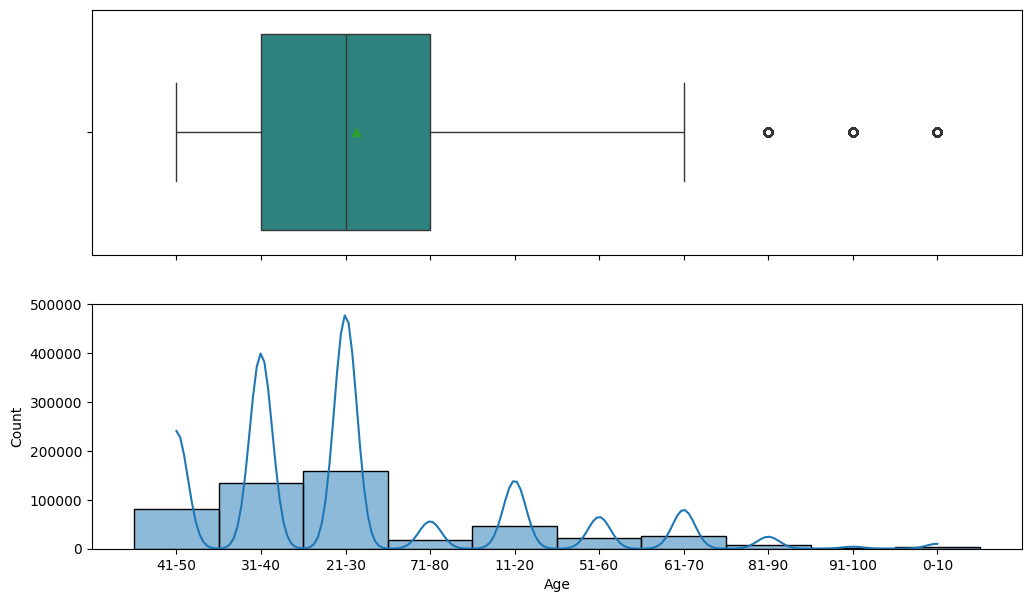

In [27]:
histogram_boxplot(df, "Age", bins=30)

# **BIVARIATE (MULTIVARIATE) ANALYSIS**
- U tohoto typu analýz je nejtypičtější korelační matice a hledání korelací.

In [28]:
df.corr(numeric_only=True)

,Available Extra Rooms in Hospital,staff_available,Visitors with Patient,Admission_Deposit,Stay (in days)
Available Extra Rooms in Hospital,1.000000,-0.001784,0.070459,-0.050127,-0.019219
staff_available,-0.001784,1.000000,0.000578,0.000763,0.007398
Visitors with Patient,0.070459,0.000578,1.000000,-0.069043,0.027302
Admission_Deposit,-0.050127,0.000763,-0.069043,1.000000,0.044203
Stay (in days),-0.019219,0.007398,0.027302,0.044203,1.000000


<Axes: >

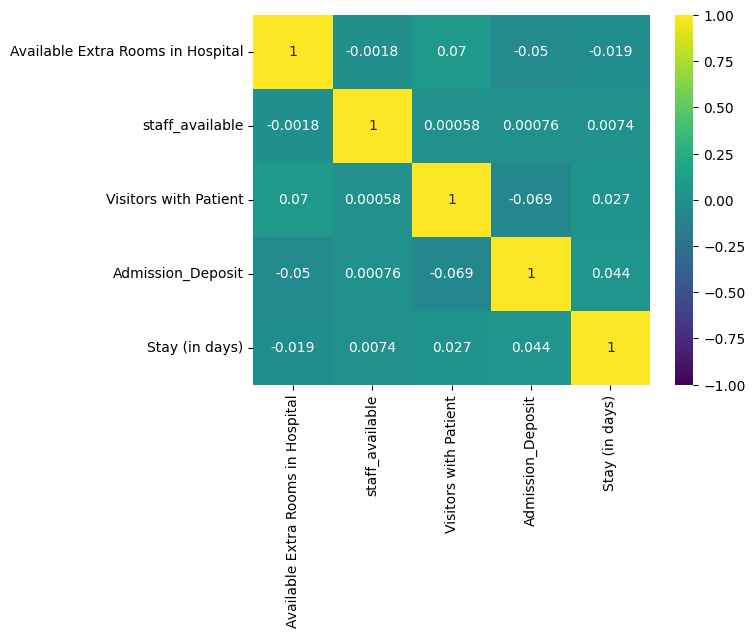

In [29]:
# Pro to aby jsme mophli heatmapu nakresli tak stačí použít seaborn
sns.heatmap(df.corr(numeric_only=True), annot=True, cbar=True, cmap="viridis", vmin=-1, vmax=1)

**V dalším kroku se podíváme na kategorické variables, a pro ty se v rámci bivariární analýzy hodí více** ***BARPLOTs***

(array([ 0.,  5., 10., 15., 20., 25.]),
 [Text(0.0, 0, '0'),
  Text(5.0, 0, '5'),
  Text(10.0, 0, '10'),
  Text(15.0, 0, '15'),
  Text(20.0, 0, '20'),
  Text(25.0, 0, '25')])

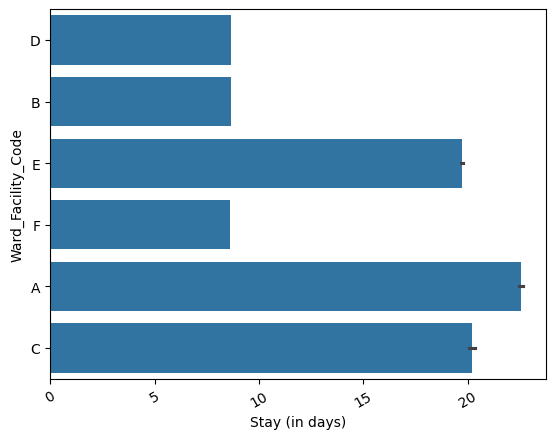

In [30]:
#začneme tedy s barploty pro kategorické proměnné
sns.barplot(data=df, x="Stay (in days)", y="Ward_Facility_Code")
plt.xticks(rotation=30)

In [31]:
# Abychom se mohli dívat na jedu targetovanou variable skrze 2 kategorické variably, tak pro tento účel můžeme vytvořit stacked_barplot a pro to abychom to nemuseli psát pořád dookola tak opět vytvoříme funkci
def stacked_barplot(data, predictor, target, cmap="viridis"):
  count = data[predictor].nunique()
  sorter = data[target].value_counts().index[-1] # Chceme aby se sloupce řadili podle cílové proměné (počtu, tedy valuescounts) a chceme aby byli řazeny od poslední, proto použijeme index[-1]
  tab1 = pd.crosstab(data[predictor], data[target]).sort_values(by=sorter, ascending=False)
  print(tab1)
  tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(by=sorter, ascending=False)
  tab.plot(kind = "bar", stacked=True, figsize=(count +1, 5))
  plt.legend(loc="upper left", bbox_to_anchor = (1,1), frameon = False)

Department          TB & Chest disease  anesthesia  gynecology  radiotherapy  \
Ward_Facility_Code                                                             
A                                 4709       15611           0         21093   
B                                    0           0      103885             0   
C                                 1319        4199           0          9079   
D                                    0           0      119055             0   
E                                16862       24369           0         54143   
F                                    0           0      120538             0   

Department          surgery  
Ward_Facility_Code           
A                      5138  
B                         0  
C                         0  
D                         0  
E                         0  
F                         0  


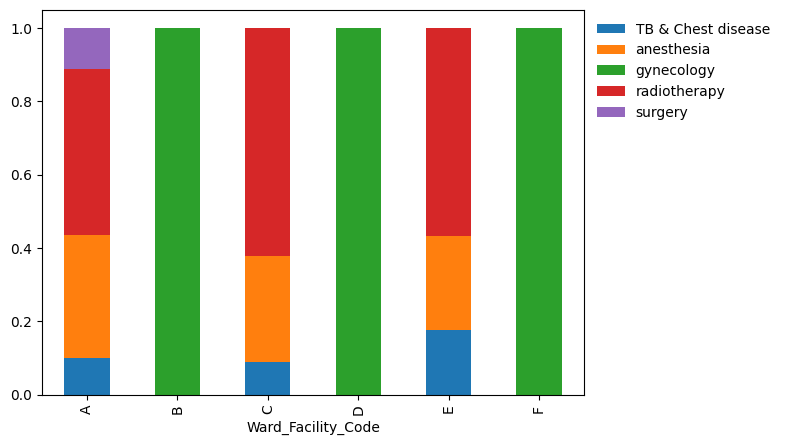

In [32]:
stacked_barplot(df, "Ward_Facility_Code", "Department")

In [33]:
#CROSSTABULACE: Crosstabulace tvoří křížovou tabulku, která jako řádky zobrazuje různé facility codes (kódy oddělení). Jako slouce zobrazuje pacientů dle názvů lékařské specializace.

Severity of Illness  Extreme  Minor  Moderate
Ward_Facility_Code                           
D                      29549  27220     62286
B                      24222  23579     56084
A                      13662   7877     25012
E                      11488  22254     61632
F                       5842  47594     67102
C                       3503   3013      8081


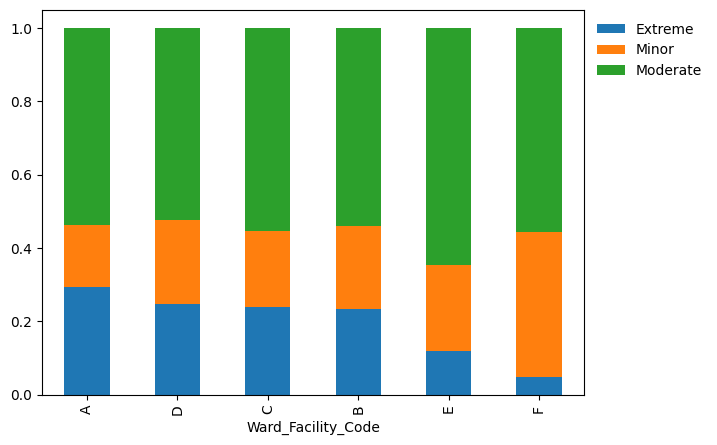

In [34]:
stacked_barplot(df, "Ward_Facility_Code", "Severity of Illness")

<Axes: xlabel='Stay (in days)', ylabel='Age'>

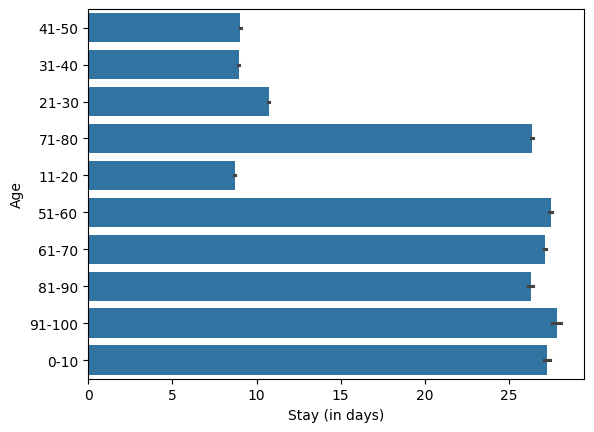

In [35]:
sns.barplot(data=df, y="Age", x="Stay (in days)")

In [36]:
df.groupby(["doctor_name"])["Department"].agg(Department_name="unique", Patients_Treated="count")

,Department_name,Patients_Treated
doctor_name,,
Dr Isaac,[surgery],3359
Dr John,"[TB & Chest disease, anesthesia, radiotherapy]",51263
Dr Mark,"[anesthesia, TB & Chest disease]",44410
Dr Nathan,[gynecology],70777
Dr Olivia,[gynecology],98352
Dr Sam,[radiotherapy],55711
Dr Sarah,[gynecology],99596
Dr Simon,[surgery],1779
Dr Sophia,[gynecology],74753


# **HOSPITAL LOS PREDICTION - MACHINE LEARNING MODELS - PT.1**

In [37]:
# Protože máme kategorické data tak je musíme pomocí get dummies přeměnit na onehotencoded OHE numerická data aby s tím mohli ML modely fungovat
df = pd.get_dummies(df, columns=df.select_dtypes(include = ["object", "category"]).columns.tolist(), drop_first=True)

In [38]:
df

,Available Extra Rooms in Hospital,staff_available,Visitors with Patient,Admission_Deposit,Stay (in days),Department_anesthesia,Department_gynecology,Department_radiotherapy,Department_surgery,Ward_Facility_Code_B,...,gender_Other,Type of Admission_Trauma,Type of Admission_Urgent,Severity of Illness_Minor,Severity of Illness_Moderate,health_conditions_Diabetes,health_conditions_Heart disease,health_conditions_High Blood Pressure,health_conditions_Other,Insurance_Yes
0,4,0,4,2966.408696,8,False,True,False,False,False,...,False,True,False,False,False,True,False,False,False,True
1,4,2,2,3554.835677,9,False,True,False,False,True,...,False,True,False,True,False,False,True,False,False,False
2,2,8,2,5624.733654,7,False,True,False,False,True,...,False,True,False,False,False,True,False,False,False,True
3,4,7,4,4814.149231,8,False,True,False,False,False,...,False,False,True,False,True,False,False,False,False,False
4,2,10,2,5169.269637,34,True,False,False,False,False,...,False,True,False,False,True,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499995,4,2,3,4105.795901,10,False,True,False,False,False,...,False,True,False,True,False,False,False,True,False,False
499996,13,8,2,4631.550257,11,False,True,False,False,False,...,False,False,False,False,True,False,False,False,True,False
499997,2,3,2,5456.930075,8,False,True,False,False,True,...,False,False,False,False,True,False,False,True,False,False
499998,2,1,2,4694.127772,23,False,False,True,False,False,...,False,True,False,False,False,True,False,False,False,False


**Teď když máme data ošetřená, kategorické proměnné jsou enkodované na booleeny a dropujeme první sloupec protože nepotřebujeme všechny sloupce abychom věděli kde je pravda tak můžeme přejít k rozdělení datasetů na NEZÁVISLÉ PROMĚNNÉ = X a ZÁVISLOU(CÍLOVOU) PROMĚNNOU = Y**

In [39]:
x = df.drop(columns="Stay (in days)") # Nastavíme nezávislé proměnné --> vyhodíme závislou ze setu.
y = df["Stay (in days)"] # to samé ale importujeme jen naši závislou proměnnou.


In [40]:
# Teď jke potřeba naimportovat knihovny, které použijeme pro trénink modelů.
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor # DecissionTree má dvě classy 1. je clasifier a. 2. je regressor, jedna je pro kategorickou prognozu druha pro regresni (tam bychom museli chtit predvidat nejakou kontinualni promenou)
from sklearn.ensemble import RandomForestRegressor # Pro random forrest algoritmus platí to samé
from sklearn.ensemble import BaggingRegressor # opět to samé...
from sklearn.model_selection import GridSearchCV # Grid search CV dokáže najít asmo optimální hyperparametry pro model samo
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# **Splitting data: Training, Testing**

In [41]:
# Splitneme data na tréninkové a testovací
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, shuffle=True, random_state=1)

In [42]:
x_train.shape, x_test.shape

((400000, 41), (100000, 41))

In [43]:
def adj_r2_score(predictors, targets, predictions):
  r2 = r2_score(targets, predictions)
  n = predictors.shape[0]
  k = predictors.shape[1]
  return 1 - (1-r2) * (n-1) / (n-k-1)


In [44]:
def mape_score(targets, predictions):
  return np.abs((targets - predictions) / targets).mean() * 100

In [45]:
def model_performance_regression(model, predictors, target):
  pred = model.predict(predictors)
  r2 = r2_score(target, pred)
  adjr2 = adj_r2_score(predictors, target, pred)
  rmse = np.sqrt(mean_squared_error(target, pred))
  mae = mean_absolute_error(target, pred)
  mape = mape_score(target, pred)

  df_perf = pd.DataFrame ({
      "RMSE": rmse,
      "MAE": mae,
      "R2": r2,
      "Adj. R2": adjr2,
      "MAPE": mape,
  }, index=[0])
  return df_perf

In [46]:
dt_regressor = DecisionTreeRegressor(random_state=1)
dt_regressor.fit(x_train,y_train)

DecisionTreeRegressor(random_state=1)

In [47]:
dt_regressor_perf_test = model_performance_regression(dt_regressor, x_test, y_test)
dt_regressor_perf_test

,RMSE,MAE,R2,Adj. R2,MAPE
0,1.821321,1.13127,0.947324,0.947302,9.353216


teď chcenme vizualkizovat a proto musíme naimportovat další libs


In [48]:
from sklearn import tree

In [49]:
features = list(x.columns)
features

['Available Extra Rooms in Hospital',
 'staff_available',
 'Visitors with Patient',
 'Admission_Deposit',
 'Department_anesthesia',
 'Department_gynecology',
 'Department_radiotherapy',
 'Department_surgery',
 'Ward_Facility_Code_B',
 'Ward_Facility_Code_C',
 'Ward_Facility_Code_D',
 'Ward_Facility_Code_E',
 'Ward_Facility_Code_F',
 'doctor_name_Dr John',
 'doctor_name_Dr Mark',
 'doctor_name_Dr Nathan',
 'doctor_name_Dr Olivia',
 'doctor_name_Dr Sam',
 'doctor_name_Dr Sarah',
 'doctor_name_Dr Simon',
 'doctor_name_Dr Sophia',
 'Age_11-20',
 'Age_21-30',
 'Age_31-40',
 'Age_41-50',
 'Age_51-60',
 'Age_61-70',
 'Age_71-80',
 'Age_81-90',
 'Age_91-100',
 'gender_Male',
 'gender_Other',
 'Type of Admission_Trauma',
 'Type of Admission_Urgent',
 'Severity of Illness_Minor',
 'Severity of Illness_Moderate',
 'health_conditions_Diabetes',
 'health_conditions_Heart disease',
 'health_conditions_High Blood Pressure',
 'health_conditions_Other',
 'Insurance_Yes']

In [50]:
dt_regressor_visualize = DecisionTreeRegressor(random_state=1, max_depth=3);
dt_regressor_visualize.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=3, random_state=1)

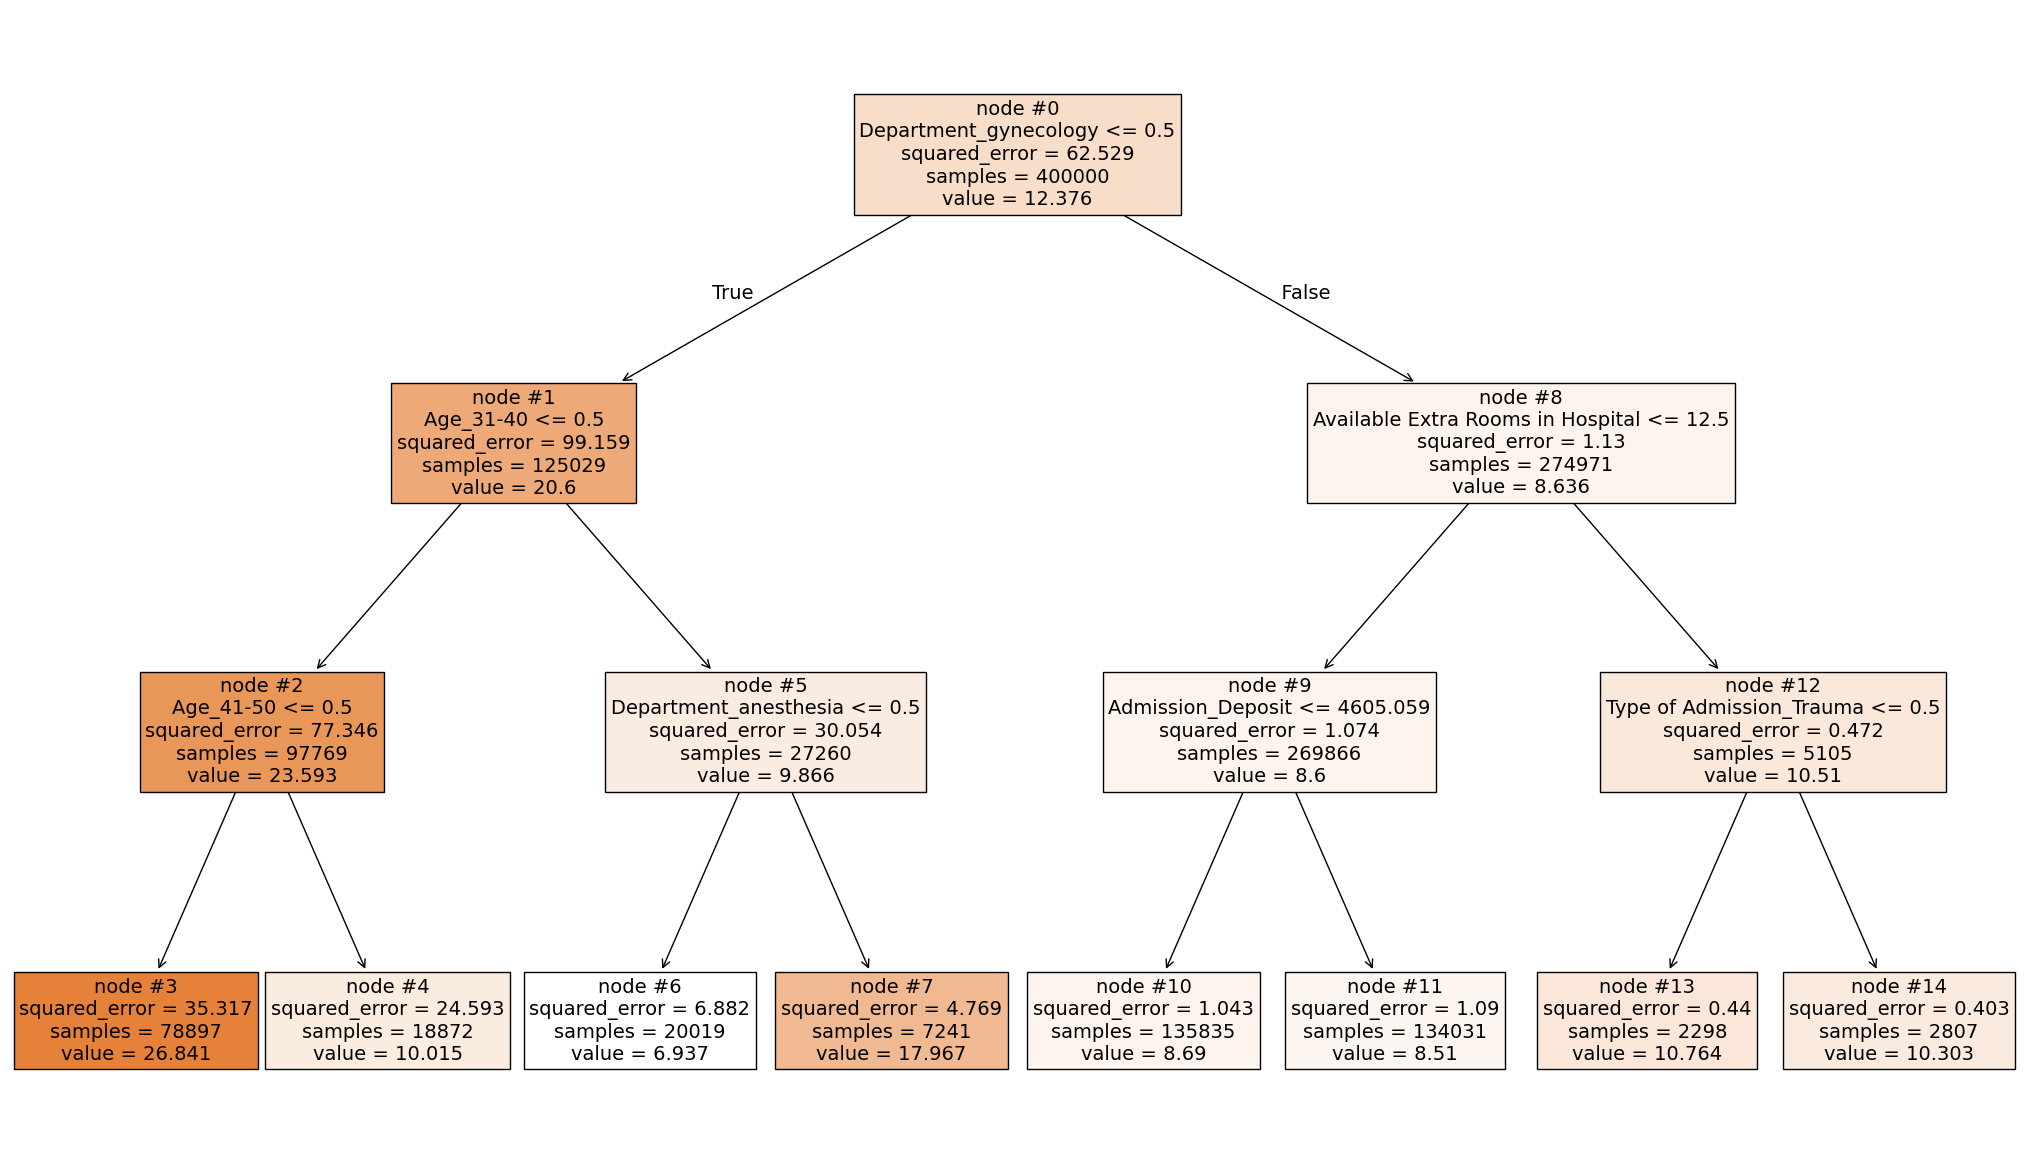

In [51]:
plt.figure(figsize=(26,15));
tree.plot_tree(dt_regressor_visualize, feature_names=features, filled=True, fontsize = 14, node_ids = True, class_names= True);

In [52]:
# Další cesta jak ukázat co nám strom říká je exportovat analýzu jako text.
print(tree.export_text(dt_regressor_visualize, feature_names=features, show_weights=True))

|--- Department_gynecology <= 0.50
|   |--- Age_31-40 <= 0.50
|   |   |--- Age_41-50 <= 0.50
|   |   |   |--- value: [26.84]
|   |   |--- Age_41-50 >  0.50
|   |   |   |--- value: [10.02]
|   |--- Age_31-40 >  0.50
|   |   |--- Department_anesthesia <= 0.50
|   |   |   |--- value: [6.94]
|   |   |--- Department_anesthesia >  0.50
|   |   |   |--- value: [17.97]
|--- Department_gynecology >  0.50
|   |--- Available Extra Rooms in Hospital <= 12.50
|   |   |--- Admission_Deposit <= 4605.06
|   |   |   |--- value: [8.69]
|   |   |--- Admission_Deposit >  4605.06
|   |   |   |--- value: [8.51]
|   |--- Available Extra Rooms in Hospital >  12.50
|   |   |--- Type of Admission_Trauma <= 0.50
|   |   |   |--- value: [10.76]
|   |   |--- Type of Admission_Trauma >  0.50
|   |   |   |--- value: [10.30]



# **Ensamble learning methods (multiple trees, bagging etc...**

In [53]:
bagging_estimator = BaggingRegressor(random_state=1)
bagging_estimator.fit(x_train, y_train)

BaggingRegressor(random_state=1)

In [54]:
#Bagging používá 50 modelů, které pak zprůměruje
bagging_estimator_perf_test = model_performance_regression(bagging_estimator, x_test, y_test)
bagging_estimator_perf_test

,RMSE,MAE,R2,Adj. R2,MAPE
0,1.364505,0.902326,0.970434,0.970422,7.627444


In [55]:
# Metoda která je nad baggingem je random forrest, děláme pro každý decision tree těžké memorovat si a proto děláme větší generalizaci (100 modelů)
rf_regressor = RandomForestRegressor(random_state=1)
rf_regressor.fit(x_train,y_train)

RandomForestRegressor(random_state=1)

In [56]:
rf_regressor_perf_test = model_performance_regression(rf_regressor, x_test,y_test)
rf_regressor_perf_test

,RMSE,MAE,R2,Adj. R2,MAPE
0,1.302336,0.863677,0.973067,0.973056,7.306138


**ADA BOOST - ADAPTIVE BOOSTING**

In [57]:
from sklearn.ensemble import AdaBoostRegressor

In [58]:
ab_regressor = AdaBoostRegressor(random_state=1)
ab_regressor.fit(x_train,y_train)

AdaBoostRegressor(random_state=1)

In [59]:
ab_regressor_perf_test = model_performance_regression(ab_regressor, x_test, y_test)
ab_regressor_perf_test

,RMSE,MAE,R2,Adj. R2,MAPE
0,2.375388,1.58689,0.910399,0.910363,13.623722


**gradient boosting**

In [60]:
from sklearn.ensemble import GradientBoostingRegressor

In [61]:
gb_regressor = GradientBoostingRegressor(random_state=1)
gb_regressor.fit(x_train,y_train)

GradientBoostingRegressor(random_state=1)

In [62]:
gb_regressor_perf_test = model_performance_regression(gb_regressor, x_test, y_test)
gb_regressor_perf_test

,RMSE,MAE,R2,Adj. R2,MAPE
0,1.792721,1.212749,0.948965,0.948944,10.247284


**XG-BOOST**

In [63]:
from xgboost import XGBRegressor

In [64]:
xg_regressor = XGBRegressor(random_state=1)
xg_regressor.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

In [65]:
xg_regressor_perf_test = model_performance_regression(xg_regressor, x_test, y_test)
xg_regressor_perf_test

,RMSE,MAE,R2,Adj. R2,MAPE
0,1.513463,1.034136,0.963626,0.963612,8.868662


In [66]:
models_test_comp_df = pd.concat(
    [
     dt_regressor_perf_test.T,
     bagging_estimator_perf_test.T,
     rf_regressor_perf_test.T,
     ab_regressor_perf_test.T,
     gb_regressor_perf_test.T,
     xg_regressor_perf_test.T
    ],
    axis=1
)

In [67]:
models_test_comp_df.columns = [
    "Decission tree regressor",
    "Bagging regressor",
    "Random forest regressor",
    "Ada boost regressor",
    "Gradient boosting regressor",
    "XGBoost regressor",
]
models_test_comp_df.T

,RMSE,MAE,R2,Adj. R2,MAPE
Decission tree regressor,1.821321,1.131270,0.947324,0.947302,9.353216
Bagging regressor,1.364505,0.902326,0.970434,0.970422,7.627444
Random forest regressor,1.302336,0.863677,0.973067,0.973056,7.306138
Ada boost regressor,2.375388,1.586890,0.910399,0.910363,13.623722
Gradient boosting regressor,1.792721,1.212749,0.948965,0.948944,10.247284
XGBoost regressor,1.513463,1.034136,0.963626,0.963612,8.868662


# **Fine-Tuning random forest regressor**

In [82]:
rf_tuned = RandomForestRegressor(random_state=1)

rf_parameters = {
    "n_estimators": [100, 110, 120],
    "max_depth": [None, 5, 7],
    "max_features": [0.8, 1.],
}

In [77]:
# Kolik to bude dohromady random forest modelů?
3*3*2*5

90

In [80]:
from seaborn.axisgrid import Grid


In [83]:
# Teď naimportujeme GRID CV
rf_grid_obj = GridSearchCV(rf_tuned, rf_parameters, scoring = "neg_mean_squared_error", cv=5 )
rf_grid_obj.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=1),
             param_grid={'max_depth': [None, 5, 7], 'max_features': [0.8, 1.0],
                         'n_estimators': [100, 110, 120]},
             scoring='neg_mean_squared_error')

In [84]:
rf_tuned_regressor = rf_grid_obj.best_estimator_
rf_tuned_regressor.fit(x_train, y_train)

RandomForestRegressor(max_features=0.8, n_estimators=120, random_state=1)

In [85]:

rf_tuned_regressor_perf_test = model_performance_regression(rf_tuned_regressor, x_test, y_test)
rf_tuned_regressor_perf_test

,RMSE,MAE,R2,Adj. R2,MAPE
0,1.294712,0.85911,0.973381,0.97337,7.268059


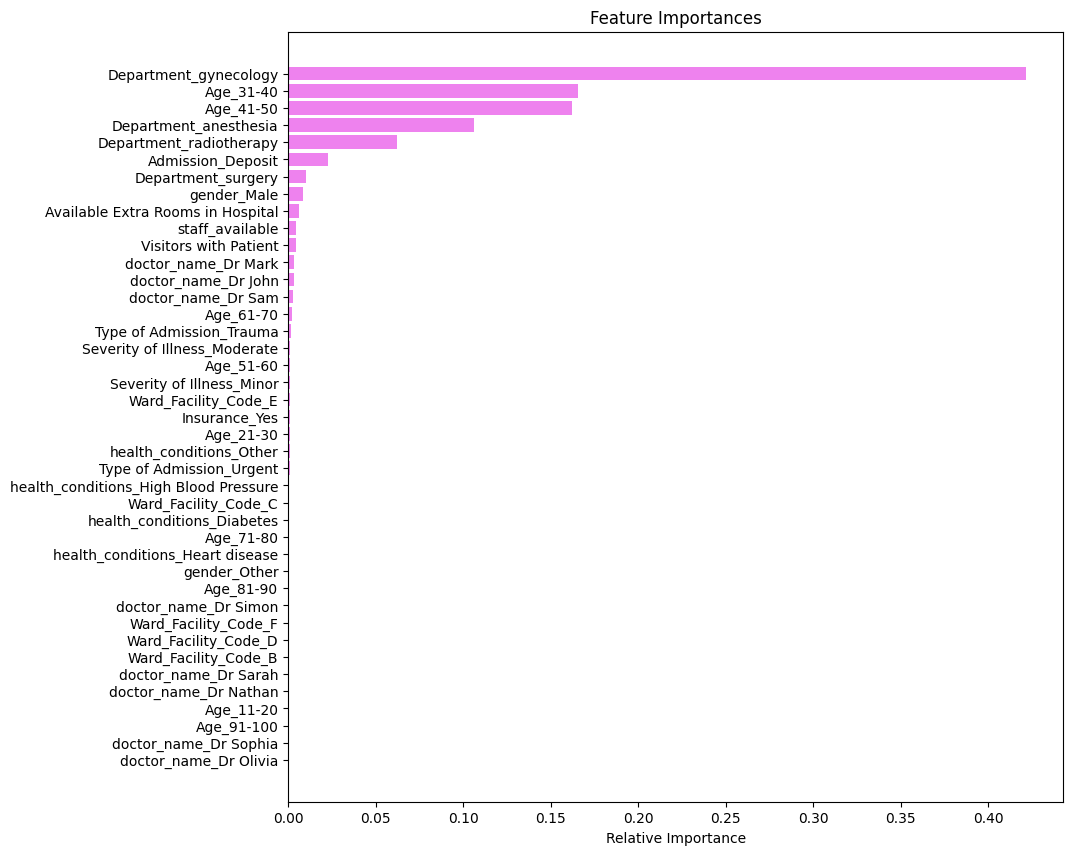

In [86]:
features = list(x.columns)

importances = rf_tuned_regressor.feature_importances_

indices = np.argsort(importances)

plt.figure(figsize = (10, 10))

plt.title('Feature Importances')

plt.barh(range(len(indices)), importances[indices], color = 'violet', align = 'center')

plt.yticks(range(len(indices)), [features[i] for i in indices])

plt.xlabel('Relative Importance')

plt.show()
